<a href="https://colab.research.google.com/github/sherwinl24/Assignment_1_CV_Public/blob/main/Copy_of_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

1. Grayscale Histogram - load you image and then write a function <code>gray_histogram</code>. Details below :
```
Requirements:
Function Signature : gray_histogram(gray_img)
1. Input is a non-normalized grayscale image (values 0–255)
2. Use pure NumPy loops
3. No OpenCV histogram functions allowed
```
Then plot using matplotlib.


2. RGB Histogram - do the same for an RGB image, final result should look like the one attached in the lecture slides. But, ONLY using Numpy. Plot using matplotlib. ( If you get 1st part, this is very easy )


In [13]:
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = '''iVBORw0KGgoAAAANSUhEUgAAAyAAAAJYCAIAAAFiEyWxAAAACXBIWXMAAA7DAAAOwwHHb6hkAAAKT2lDQ1BQaG90b3Nob3AgSUNDIHByb2ZpbGUAAHjanVNnVFPpFj333vRCS4iAlEtvUhUIIFJCi4AUkSYqIQkQSoghodkVUcERRUUEG8igiAOOjoCMFVEsDIoK2AfkIaKOg6OIisr74Xuja9a89+bN/rXXPues852zzwfACAyWSDNRNYAMqUIeEeCDx8TG4eQuQIEKJHAAEAizZCFz/SMBAPh+PDwrIsAHvgABeNMLCADATZvAMByH/w/qQplcAYCEAcB0kThLCIAUAEB6jkKmAEBGAYCdmCZTAKAEAGDLY2LjAFAtAGAnf+bTAICd+Jl7AQBblCEVAaCRACATZYhEAGg7AKzPVopFAFgwABRmS8Q5ANgtADBJV2ZIALC3AMDOEAuyAAgMADBRiIUpAAR7AGDIIyN4AISZABRG8lc88SuuEOcqAAB4mbI8uSQ5RYFbCC1xB1dXLh4ozkkXKxQ2YQJhmkAuwnmZGTKBNA/g88wAAKCRFRHgg/P9eM4Ors7ONo62Dl8t6r8G/yJiYuP+5c+rcEAAAOF0ftH+LC+zGoA7BoBt/qIl7gRoXgugdfeLZrIPQLUAoOnaV/Nw+H48PEWhkLnZ2eXk5NhKxEJbYcpXff5nwl/AV/1s+X48/Pf14L7iJIEyXYFHBPjgwsz0TKUcz5IJhGLc5o9H/LcL//wd0yLESWK5WCoU41EScY5EmozzMqUiiUKSKcUl0v9k4t8s+wM+3zUAsGo+AXuRLahdYwP2SycQWHTA4vcAAPK7b8HUKAgDgGiD4c93/+8//UegJQCAZkmScQAAXkQkLlTKsz/HCAAARKCBKrBBG/TBGCzABhzBBdzBC/xgNoRCJMTCQhBCCmSAHHJgKayCQiiGzbAdKmAv1EAdNMBRaIaTcA4uwlW4Dj1wD/phCJ7BKLyBCQRByAgTYSHaiAFiilgjjggXmYX4IcFIBBKLJCDJiBRRIkuRNUgxUopUIFVIHfI9cgI5h1xGupE7yAAygvyGvEcxlIGyUT3UDLVDuag3GoRGogvQZHQxmo8WoJvQcrQaPYw2oefQq2gP2o8+Q8cwwOgYBzPEbDAuxsNCsTgsCZNjy7EirAyrxhqwVqwDu4n1Y8+xdwQSgUXACTYEd0IgYR5BSFhMWE7YSKggHCQ0EdoJNwkDhFHCJyKTqEu0JroR+cQYYjIxh1hILCPWEo8TLxB7iEPENyQSiUMyJ7mQAkmxpFTSEtJG0m5SI+ksqZs0SBojk8naZGuyBzmULCAryIXkneTD5DPkG+Qh8lsKnWJAcaT4U+IoUspqShnlEOU05QZlmDJBVaOaUt2ooVQRNY9aQq2htlKvUYeoEzR1mjnNgxZJS6WtopXTGmgXaPdpr+h0uhHdlR5Ol9BX0svpR+iX6AP0dwwNhhWDx4hnKBmbGAcYZxl3GK+YTKYZ04sZx1QwNzHrmOeZD5lvVVgqtip8FZHKCpVKlSaVGyovVKmqpqreqgtV81XLVI+pXlN9rkZVM1PjqQnUlqtVqp1Q61MbU2epO6iHqmeob1Q/pH5Z/YkGWcNMw09DpFGgsV/jvMYgC2MZs3gsIWsNq4Z1gTXEJrHN2Xx2KruY/R27iz2qqaE5QzNKM1ezUvOUZj8H45hx+Jx0TgnnKKeX836K3hTvKeIpG6Y0TLkxZVxrqpaXllirSKtRq0frvTau7aedpr1Fu1n7gQ5Bx0onXCdHZ4/OBZ3nU9lT3acKpxZNPTr1ri6qa6UbobtEd79up+6Ynr5egJ5Mb6feeb3n+hx9L/1U/W36p/VHDFgGswwkBtsMzhg8xTVxbzwdL8fb8VFDXcNAQ6VhlWGX4YSRudE8o9VGjUYPjGnGXOMk423GbcajJgYmISZLTepN7ppSTbmmKaY7TDtMx83MzaLN1pk1mz0x1zLnm+eb15vft2BaeFostqi2uGVJsuRaplnutrxuhVo5WaVYVVpds0atna0l1rutu6cRp7lOk06rntZnw7Dxtsm2qbcZsOXYBtuutm22fWFnYhdnt8Wuw+6TvZN9un2N/T0HDYfZDqsdWh1+c7RyFDpWOt6azpzuP33F9JbpL2dYzxDP2DPjthPLKcRpnVOb00dnF2e5c4PziIuJS4LLLpc+Lpsbxt3IveRKdPVxXeF60vWdm7Obwu2o26/uNu5p7ofcn8w0nymeWTNz0MPIQ+BR5dE/C5+VMGvfrH5PQ0+BZ7XnIy9jL5FXrdewt6V3qvdh7xc+9j5yn+M+4zw33jLeWV/MN8C3yLfLT8Nvnl+F30N/I/9k/3r/0QCngCUBZwOJgUGBWwL7+Hp8Ib+OPzrbZfay2e1BjKC5QRVBj4KtguXBrSFoyOyQrSH355jOkc5pDoVQfujW0Adh5mGLw34MJ4WHhVeGP45wiFga0TGXNXfR3ENz30T6RJZE3ptnMU85ry1KNSo+qi5qPNo3ujS6P8YuZlnM1VidWElsSxw5LiquNm5svt/87fOH4p3iC+N7F5gvyF1weaHOwvSFpxapLhIsOpZATIhOOJTwQRAqqBaMJfITdyWOCnnCHcJnIi/RNtGI2ENcKh5O8kgqTXqS7JG8NXkkxTOlLOW5hCepkLxMDUzdmzqeFpp2IG0yPTq9MYOSkZBxQqohTZO2Z+pn5mZ2y6xlhbL+xW6Lty8elQfJa7OQrAVZLQq2QqboVFoo1yoHsmdlV2a/zYnKOZarnivN7cyzytuQN5zvn//tEsIS4ZK2pYZLVy0dWOa9rGo5sjxxedsK4xUFK4ZWBqw8uIq2Km3VT6vtV5eufr0mek1rgV7ByoLBtQFr6wtVCuWFfevc1+1dT1gvWd+1YfqGnRs+FYmKrhTbF5cVf9go3HjlG4dvyr+Z3JS0qavEuWTPZtJm6ebeLZ5bDpaql+aXDm4N2dq0Dd9WtO319kXbL5fNKNu7g7ZDuaO/PLi8ZafJzs07P1SkVPRU+lQ27tLdtWHX+G7R7ht7vPY07NXbW7z3/T7JvttVAVVN1WbVZftJ+7P3P66Jqun4lvttXa1ObXHtxwPSA/0HIw6217nU1R3SPVRSj9Yr60cOxx++/p3vdy0NNg1VjZzG4iNwRHnk6fcJ3/ceDTradox7rOEH0x92HWcdL2pCmvKaRptTmvtbYlu6T8w+0dbq3nr8R9sfD5w0PFl5SvNUyWna6YLTk2fyz4ydlZ19fi753GDborZ752PO32oPb++6EHTh0kX/i+c7vDvOXPK4dPKy2+UTV7hXmq86X23qdOo8/pPTT8e7nLuarrlca7nuer21e2b36RueN87d9L158Rb/1tWeOT3dvfN6b/fF9/XfFt1+cif9zsu72Xcn7q28T7xf9EDtQdlD3YfVP1v+3Njv3H9qwHeg89HcR/cGhYPP/pH1jw9DBY+Zj8uGDYbrnjg+OTniP3L96fynQ89kzyaeF/6i/suuFxYvfvjV69fO0ZjRoZfyl5O/bXyl/erA6xmv28bCxh6+yXgzMV70VvvtwXfcdx3vo98PT+R8IH8o/2j5sfVT0Kf7kxmTk/8EA5jz/GMzLdsAAAAgY0hSTQAAeiUAAICDAAD5/wAAgOkAAHUwAADqYAAAOpgAABdvkl/FRgAQ9hpJREFUeNostulzWme69qv/4Jz3vLuHeNCEkNFky1M8aLRma7ImW7MYxCAGgSZrliIxBSFFAsIUSQRBACMwEIZmrQAbeGHVWqvWooCSVLaPXbErSaUrnepOpat7V/eu/eV8yPly1fXpqbp+z309z52zpgqvqSNr+tiqNrGojMwpQywFyD8ILSjBVV10WR1dUYW4+yBT6qeLA3RpcFLip4oC4+IgWRqiiINUcZAuBmiSIE3sp4iDVAlAlQQpwuCEMDAh9JMl/gkRQBP5aaIAReSnCf1UUZAiDlLFAbIoMLHtnxABFKGfKvSNb3vIwuDEtp+86RvbCkxs+6mbvrFN38SWd0LonRD6xzY8Y1uekU3/6IZvdMMztuUb3vSStzzkdc/Ytpe85Z3Y8lKEforQNy72k0XBCTEwKvSThf5JkZ8iCjCEfrokQJMEJ0UBqiRAEQcmpUGaJMCUAOyd4LwSnFeGpuVBvjK0ooksq0LLqsiyJrSqDa1ow5tHEfFRXGyI5hyYoc3DuOg4KTxMbB4lVlWxFVV4VhVly0MzisicJjKnjqwdx2dUkem98JQUYMmASSlIFQcmdwC6NMyShCYlAfoOwJCB9B1wUgawpOCkJDwpBamy0JQ0zNgBaJIwXQLQZWGaBKRKALoEmBQFKJIQWQRQRQBFGKBKwElhgCoKUMUATRSgiAKUbT9l2z8mBmnbfqowSBb5J8TBiS0/edtPFoLjW/7xbR91yz8hDFC3/RQhQJWAFKGXLg1SRUG6NDQpCdAk4KQYYEhAujTIkIFMGcDYAeny8NQOwJKCDFmQLg1y90D+QWRWGZlRRucOwBVddEMb2zhMbB0nhUeJzWNo04AITUm5MSE2JeRmKOfbX//nzYcf5ccxoQHePk5uHCZWNPF5ZWxaFeErY1O70andCGc/tqCMzGrivIPo1F6Yuxdh7YWZOyG6LMTaAZmyCEMeZsnDjJ3QpDzMlIboshBzJ0SXhmk7YcZOZFIapstAuixKk4doUoAhC9GkEaoEpIgBqhQky8ITEpAsDFIkIEUMUsUAVRSgikGyGKCIwnQRQBX7J8SBCRFIEwd/4zsuBqlCkCwCx8UBsggkiwOTEnBSBlKlAFUCUEXAb4dPioBJKUiThanSMHk7QBED47IQVQpSxSBNDFBlAGsvwpKDgoPorDq2pI+vH0Frx8nVI2jzKLllgN68/bBswVYMyTVDcscMyy1wzve//lck+/b8zU9x5O2WAdoxwltGeFkfW9HF2PIQUx6i78To8ihrPzqjSMwqYnPKuEAR4+5HeftRzkGUvRvnHsRY+1G6PDIpD7OkEZYsxJRHJuVhmjxKlceYOyH6TmhyJ0TZCU9KQzRZhCKJUKXRCTFIlQCTshBVHJ6QRCgSYFwETkpAqjhMloE0aYQiDVElIYoMpIgAigSgiAGaCKCIghOSEEUcoAiDExKAKgFpOwBNCjKlAEMGUiUgRRqiiINkCUgRg2QROCYKUaXg5E6IJgnRRSBNGh4X+qmiEFMaYknCjJ3QpgkNJLI//vSXX/7599cfvvvXv3794fs/o6mLt9/9+Z+//uWHn3789R+/SPWg/ATaMcM5qVevw8kz/OxbX+Js6xgSmtBtE7RthBb0iRl1nKdITu2GGTsRxl6EtRflKuM8VYyjSEwrY3xVYmo/OrUfnTqIsnejjN0oYy/C3I0ydyN0WXRyN0qXRyZlYcZunLEToe2GafLwpCw8uROiSaM0SZgsjUxKQao0TJGFadIQVRKiSUCyOESRhSnS8KQ0QpeGJiUgVQqOSUGKGByXgmRJkCoBaLIQXQKMScJkKUCTgFR5mCYN0XZCk9LQpBSkSSM0aZgqC42LwxQJMCKKkiUgWRKiSkJUaZgsDk1KQ5MScEIcpEpDFj+WSJ1hr968fv3m7O27MHoBZd/E0heBeDaYPIuir5DMqzfvf3j7/sfvfvzbjz/+Nef99z99+PDTn//2K3rx3ho927Whq8fQ9nFyWZcQqGL8gzh3P8Y7SHAUcaYiwdqLsfbi/L3YtCY+o0xMaxJcRYKzn2DsJ6Z2o1O78cndKFMepctA+l6MLo/Q5THGTpS6E6XL4zR5lCaL0GWhSVmEuhujySIUaWhSGqZKw5M7UYosQpFF6LIwVQZSZaFJKUiVgBQJSJaAE9LfooIUaZgqDdMkIaokTJWGaNIwfSfK3A1P7YSndsNUGUjbCdEkIEUWnZBFJ8RhqjRClYQoEpAsBSekIEUaoslCZEmYJgWNAfwUSPH2wwCUiePn8dQFnH17/vbbEPoqgF6A2Ksw+grJvrl48/7thx/efvfnf/zzn//6179y3n3/w1//9uuff/754tvvkbN3UPo1mHp75MTmdMl5HTynSS7qkwJ1jK2IcxVx1n6UfRBnK2LTygRPDU1rknxtckoZm9qLMfYTtP04ay/O3EvSduOsvdjkbowujzJkMcZulC6PUPfi9N0IbTdCl4doe1HGboQmjzLkEYYkRJVHadLw5E5oUhalyePknRBVEqGKQzRJiCKNkKVhsjRElYTGZBHazm/0QxRZmLETZuyEJ+Ux5k6EtRulycOT8hB9J0bZjY9LwmRJhCyLUmRRqjRMlYRpMnBIHB7ZCpPlIOcgZgbPwuiFBUSj2PnbD+/PXn+bffUmdfE6GMPT529T2Vcfvvs+ff4u8+rtn3/64Zd//v2f//jHv/71r5zXH3748Je/vP3zTxfvvs++fp96+20AujAE8TltYkGXXNEl5rSJOVWCr07wVEm+OiFQxzmq+LQyzlYmOAcxvgriqJJcRZyniLP2Y8y9GGM/zjhIMBVx+kF8cjfOlEcm92KMnSh9Lzq5G2fI4/T9GE0eo8uiNHmMIo8wdyMMeZQuj9J3IpSdGFUWJcujlN0oZSdKk0Wo0hBNFqbIIjRZiCoLU+RRujzCkIcZezHKXpSxF6XvR1l7UfZBgrEbpu5GaLsRsjQyJglTpDGyJEKWhP//J1IaGxVHDV7UF8v4oxkQOnOGMADCkmgm8+Ytkj57++Zd+tUrKJWFM+eps4uLd+/Sr96kzl79/PNP//j1r3//+y///Oc/c9Dsm+y378/ffnj1/feZN+/Rs7dB5NwRThsC+KwuKVAlZrXJZT28oIPm9Mk5LcLXQfMaeEGTnNMkF3QwVw1NKxNcRZx3EGMdxNn7CeZekrUfZR0kWftxxn6SsZ+g7cbouzH6XnzyIEHfjzL2YlN7UdpujLIXZcijrN3Y5H6cvhun70Ynd2OT8uj4bmxyNz4pi1LkscmdMEMeIu/HKHsx1m54UhaiyyPM3Sh9Pzy5G5/ajzH2YlP7scmD+ORejCoLMfZitL0oXRaj7USpsghlJxqIXqwY4C19QmmDTQEYgLJR9MIVxcy++Ik3agcTnhgaw9Kp84sInvKEESuYBGEcjCNnF6/P37x59ebt62/f/fuf//jbX/+aAyRTUewi8/pd9u23mfO3b779Dj1/G0IuXKH0tB4SaJIzenRRn5zTojOquEAD8TVxvgaaVUMzusS8JjmrSfK0MEeVYCmTLGWSfZBgHiSYSoipjrOUCeZBnK6AWPtx+m5sai9OVyRYBzH6XpSxH2fsRZnyCGMvwTiI0/cjrN04Yz9O340x5FHGbmxyLzG5H52Ux2k70cm9GHU3QpfHqPIoTR6jyUPkvRh9N8rcS7D24kxlnHkQY+5HJ3dj9N3o5G6cuR+bPIjTd+OTO1G6PJF+9S6MnF28/oBnXlsAxBdLBeK4yRM1+yP2QOw0lHCFEq5I8jQEeaOwO465YogznPRHkoEYchpKJmEcO794/e37X375JccVxQKxVBTLxjPn2Pkb7Pwd9upNCDnXelPLR8iMPjl3iMwfwguH0OYJsn4IzekQgR6Z10GzOliggwU6aFoNTauTXBXEVkGsA5h7kDgxhN99/5eLtz9Mq5NMFcRQJKYUccZekrUX/62k9IM4ay/KOIgwDmLM3SjzIDa1n2Tsx5l7iUlFkr6XoO9HqfuxSXmMuhuj7sZo8hh1N0KRxxl7cep+lLIfZ+7GWHsJuiJO349NHiRZB1HGfpS1H2UexOkHMdYuxNiL0w/iJ17MEUo5o6lw8swGICYAtoLwSSBhcASPXaDZA5q8YQsQtQZjNiBuD8ZCCcwdTjqCCXck5YvDERzHzi6CaCqEZ+CL1zk2P2IFsBM/dAoi/ng6gp+BaNYI4KsGdMUAzx+h8/rErA6ZO0JXj9G5Q2hOC81okPnjpECXmNZAPC3MU0E8dXxaneSoIY4GYqmQSPpd+tvvf/7rX//9r3/98MPPbHWCpUhyldCUMslWxNgqiKFMsvdjTEV8aj9OVySY+/GpvfjUQYJ+kJjajbF2k6zdxMRegrEfY+7GmLtxxn58cjdO34/Rd2OM/RhrL0lXQFMHsSllfOogwVPEpxRJjjLGVcQ5ygRbkZzaT06q4gxlVO1ImHzQiS954k14o6gritkCiRNfXHcaOXIAZk/I4A17ohCSzoBQxhdJ+OMICGNxLBWGcXcYAhKoL4n7E9l45vzs2+9yfPFzVwj1RjBzELEB8GkYMwGo1IYuHyPzR/DKMbJ8jC4dobOH8MIRuqCDl46QuUNk3YAuGLA5LcTXIVwtxFVDfCXE00LTWligQ0HsDXLx/t2H73/5x6///T///vXvv77/8Oc5DSzQwXxVkquMc5VJjirOOkiyDxJsZYJ5kGDt/2biUwfxqYMo4wBi7iYYigR9NzZ5EGcqEkxFgrGXZBzEGfIYYz/GOoixlEmWCuIoEmxFnKeCplRxrhqa1sBTqgRHEacfJFgHcXsYPw2jngjqjWIWX8zsT1qDyUAMcUXgE2/EHow7w4kIiofRjD+BOkMJZyThCCcsgajJF7UGotZAzBGGQnAqns6cffddzr4tceBEjH7YFID1LmzLjG2eIKsn6JIBXTMiywZ4/hheNKKLh8jiEbp8jC4fo6tGbPUYndPDC0fogh5Z0CGLR+isLrlwiM0fIvM6eM6AiK2YKXoWv/jw408///LrL//z3/86w8//9tdff/jhzx/e/cjTJHmapECV5KkhrirBVSQ4ygRbmeQokxxFjKVJcpW/UUiylEmmIjalgFmKJEuVYOwnJtUJlgJiK+MMRZKljHMUCY4qyVUl2BqYp4V5ygRXGZtWJabVSa4WkjkwjQ898SftYDIQR+3+uDUQNwNxWzDuCie9UQiMo64Y4gDiFn/U6o2cuIFDN6B3BI/cYas34gQgdwT1xnB3NHMMZHK0Xkx4ggqNyPoJvG5AV4+xFQO6YkRXDcjSEbJ6jK4ewWtGZN2IrhvRTSO6dgKvG+E1I7xowOaOkIVDZOEInT9EFo+wJT2yYEAWj/CVY1Rtg+Wn6CmQRl+9f/f9D7/+/e///e//+te//vU///Pvf//rv85+/CV7/uOiFuKpkzx1gquGueokTw1NqRIcJcRRxekKaEqZZCmTHDXEUsW5qiRHlZxSQVOKOFuVnFIn2KokW5WY0iSnVAmuMsnVIGxdkquF+eokT5PkqZJTqoRAnTgJ4sc+OAyn/XHMDkIn3rDBE7YFo04w5gzFPOEkkIBCMAqlz8A45AJjZn/U4Amf+CJ2MA4k0PT5K+ziTebVG7EN2TRiOW7oXTCaWTZiK0fIqhFdMqCrx+iGAV43YmtGbNOEC02pbRO6ZcFE1symCd0y4WITtnKELhiw5UNkSQ8vGJCFI3j1CF05QhaOsWUDbA0igWQ2DJ0F0QtfLINevH3/w0/v//znn//2t7//4+8//vSXP//lr3/75W+//PPXOQ0yrYVmNDBHB0+rIbYGYqsgvhriapIcDTSlhjkaeEoFcVVJngriahJcFcRTxXkqaEqbnNJAPA08rYZ4apijQ6Y1EF+T5GsgjhbmaOBpTZKvS25aIB+a/e7PHw698UNnSGcHdC7gyA0YvSGLJ+wAoq5Q3BtOeKJJTyTmDCVs/pglELWBCXcs6YMzYSQFn10kU2/WTMjyCZrjjF0E4ilHBNe64aUjdOEYXzCkVozYygmybUlLbZjQlhbbcbEtJbVlpNa00JretuDrpsyKEV82oEvH8PwxsmhAzl9/KzLEAkHkOIiZAqg/kY5jr6HUK+jsbfbi3at3H958+O6///1v5OwVev729bff/uUvPyexc+0pvK6NCnTItBbm6eBpLSLQwNNaeFr9W2yUo4M4WpingXkqaFoD8TQIVwtPayCOGuFr0WkNJNAiHC0yrYX5OkSggbhaSKBN8nTJaXWCr4FmtbDWg0RTWUcI0ZyG1HZQ5wgeukImX8QFxj3RpCeccIBxUzBq9kdPvFGTP2z2xyzBxCmYtAKICUR3HPimCV63wCIrlmP0Ys4QfOJHJVZs0ZheNCJLx9iGCd8wpzZP0C0TKrSmJLaUxJKS2lIiKy62pbYtuMSCb5vxTRO2ZsDWTfi6EcUu3sWxi+z5m7/8/e9WP+qJpdHMxbt33529ept9/e79hw+JzKtk+hxOnSXwMyxz/tNPP/34l5/gzKtAHJcaofTZ21k9OqODZ3XInBaa0SPTOmhWB/F18LQW4ekQgQ7m6RGBHhPoUMEhOqOD+RpkTgvz9ci0Dp7RwTN6ZFoPCTQwVwdPHyb5WlighwSH0NpJwhnBDL7okTOstoEKG6B1BE+8YWsgZgcS7gjki6HeMLRjSezYILUTFlqhVRO0bobXDPC6CdswIVIbtmXBN81ojuQ4tn2Cyiz4qgHbNKSWDdiiEVs14JsmbMOMr1vwDUtKaEmLrZjEmhLb00JrSmjGNi34ljm1YcbXLSmRCTcFU84wbAdxdxx3AZA/jIJwJnX++uzidersInX26vzN27PX79IXrxKprCcKJ1MZ/NWrs9evX797HcPPETT75u17JP1m5QidO0IWj5CFQ3jxCJs5gucP4Rl9UqBHZvSI4BCdOcRmdSj/EOEdIoJDVHCICPTI3BE6c4TOHCKzOkigTf6mAj0yc4jM6yCxGXZFEJUjoj6NrhrglWNo1RBfs0BGfzIK454IbPAj62ZkyQgvnsBLRmTJCC8akZVjaO0IXjZgy0ZkzYgsG9BFA5qzZUS2zajIjIusuNCIr56k1k3YiglfNmBLJnzFlJJakFMQk9lxoweR2NJCS2rLmto041uW1IYF3zYjIgtm8KP2MGb0Q8euuDsEWYCEBUyGkjiQQC5evXn97h2UykbxNABhYBIP42kghgRjCJ7OJlPZ7Ks35xev3r9//+rdWyCB4Znzd+++/dsvP/39H3/973//4+e//vz6/YdZPTx3jM3oUf4RNnuMCfTI3DE+d4jMHCPzhzD/GJs9Qmb18Jw+Oa1HZg7haT00dwjP6KE5PSy1xLU+ePk4Pn8EzR0mFo+SC0eJ+SN42YhsnkCrJ9CCEV0yISsGeO0YWjHAC0Z43ogsGpElI7JoQFeN6KoRWzjBl41IzuZJQmLGRbaUxJpeNadWTOkFU2rlBF8+wbZOUJkN2TtFD5zYrhNRONADL75lwVfM6XUzvmVJC60psR2XmlCVB7UGkt447oth/iRmDST03tixAzj0RA3+xIk/Zg1A5mDSFYLRdPr129d45iKGpsIonsTTETgNJPEInkqmMhEoBWFZLHOWOr84f/X69ftvf/zh+/N33y4asQUDNmvA546wmWNs4RifOcRmDrE5A7Z4BM8b0bkjfPYQnj2EBTp49hDm65AZPcTXIfNH0MIhPHcEzR3Cc0fJ2WN4/ghdPEYWDcj8Ebx4jCwZ4cVjeNGALBrhJSOyaEQ3zPCKEV49gVeMyOoJunyCrhrRlRNkyYTlyJ3IviurcKRkp9ktS3rVnF45wZdM6UUTvmZKrVnwDTO+YUmtW9A1c2rdhK2a8TUrvmLG10ypFXNqw5baNOGbJlxoww5d8LE3aQpA9hDsDEEhBPfHsWMwdeKHbCAkc6IGP3Tih80ByB3D3GFY74WP/PC2BRPasAMHZPIlPBHYCSYcwaQDTJoDCTuYdMYQRxjXutDFE2zJiC8YsAUjtnSELhjwBQO+bESXDOjsMTZ/jM4cITMGdP4Ynj3GZw/R2WN4Tp+cP4bnjiD+Ebx4CAmO0RkDOmdAFw3wggFZMMBLBvg3WHPHyIIBWTpBlg3Y0gm8doKsmuFVM7JqQldO0KUTZMWEr56gOcmL78Pw+Zv3P+gD2W1batuaWjXjKyfpRXN69SS1asLXLOk1U3r9BFu14CuW1KoZXzWlV82ZDVNm05JZs6RWTvAla2rN/BtWbMuKieyYGYAOffChH9uwYhs2fNOCbplRoQXdc6DyU1RoQbdsqXVbet2Cr1rQFTO2aUZlNlRkQ7fM6JYV3bBh61Zsy4KtWfANC7pqSa2Y8OUTfPkktXKSWjbhi8fY2gmyZMCWDOiCAZs3YAsGZNYAzx+hc4fI3BE8f4TOHiOzR9DcMbxggBaOEYEBXjiC5o7hRQOyZIAXTNiSCV0+hpcN8KIRWTlBF06QZSOybMKWT7DVE3jdhKxZ0A0TumbB1yz4hgnJgfGzi2/fp998+8OPP0jsaZEtvWFLrVkyq6bUkglfNGWXzfiKJbNiTq2aU4u/GWtm1ZLetGLr5vSqOb16klo2ZTZMqVVzas2UWjWjW2Z8zYqvWdDf5nHZklq3plYt6JoNWbdg61Zsw4xtW1OrFmzFjK+bsBUzumbGhVbUHkwrHeiaGVszYyvm1KoZ2zShq+bUmhlVOeC///LzugV//+Of/+uff5cZYj///Jd//vPX5RN00YStGeBFI7RsRJaM2MIxvGBA5o3w3Ak0Z4CWTtBlI7xkhBd+69oJPH8CLxrhxRNo4QRdMkArRnT5BF45QVdO0CUTum7CN8zIhgVd+00tyLoFXzPD2xYsJxhLhpOpKJpOoNnoxbs1a0ZsT69ZUhvm9KolvWpKrVkyy9b0iiW1asmsmTJL1uyKGV83p1Ys2TVzdtmcXrGkV0z4sjm9bsqsWtIb5tSmGV+zYCsWdN2ML1vTGxZ83ZJetWAbZmzFjK2Y8FULtmXGNyzpNQu+ak7t2pDTEJpAUiEYj+NnnuTZlgVftWLrVnzVkl614vsu1B/Hf/315/d//uHN9z/8/I9fzt9+m7149ert27Oz87/91z+2Dcm3H749f/NeYoyvniArBmjeiCwbkWUjumiEFo3YghFZMP3208FLx/DyCbJigldMvxl0+QRbMSPrJmzNiq5Z0A0TsmnGNizouhndsGKrFnTFgq9a0ByTN2QNQt4I5oqiIJy2h3GdG1I70+vm1IY9s2FNr/3WNXNm1ZJZt2TWLfiaOb1uyy5b0uvm9Jo1u2JJrVoza5b0hiWzakpv2FNrlvS6BV+zpjat6Q1Las2SWrXiq2ZsxZZas2Krv6kVX7fiG9a0ygUf+ZKeCBqIoyEMj+JnQDK1bcXWrGmhLbVuTQktEJ49BxM4CKegVDb16vzi9ZuLN2+hVCZ1dn7x+vzszUXqLBtOIjEk/cMP36YzF8tGZOkEWTQiKyZkwwStGOFFM7pkRBZNyIoZWzpBl03IkglbPIGWzdiKCVkxo2sWdMWErVqQdTO6ZkY2bfiGGV234psWbMuGblnQFQuao3EnD90JpRvbtGc2bbjQnvHHUxoffujBHCEESZ/j6dd6LyS2Z9at5+uW7KY1s27Lbpgz67bMqjW7Ys2sWdKr1tS6Nb1mTa3b8DV7esOKrtrSG9b0xml2w5bZsKXWLak1a2rDiq2a8XUbvmlPbVjTG5bUpj0jtGHuGBpMYMdexB6GIggaQrFdZ2rLntqw49sWXGpPWwHIE0O9cdgfg90JJIplggnYF00CCSiMYNk3Zx++f5PE0zE8haZxNJ1aM0OrJmTlBFkxI+4oIjQlV8zYmgVZNiOrFmTVhK6akVUzsmrC1q3osgVZs8BrFnTNgq1ZsQ0zumZBNm3YhhXdsmHbZnTNhq1bkTUbmrNpwzZtmQ1bZtue3bJmNm1nIntmz426IpgVhG0hKAKlNb6U0JkRO7JCx7nInt2yZ8T2lDWYevPmzdnFa08864mmLj58SF18u+XIbp5mtm3pTXt2w5ZZt+HrNnzDnl37jc5pesOe2rCmNu3pzdPUxml6247KnLjUjokd+L4D0XoRpQvS+iCRI73tSG07Mlv2lMSOyhzwvhPSuJI2EDryx499MZM/ZgtGbUDCEkzYgPhRADL4Y5Zg0gxC23ZkwwoJTfCKDV0xwWtmZM2MrFjgNSu6bkHXLOiKBV63oqs2dN2KrVnRFQuybkXXLNiGFd60YptWbNuGCa3Ihh3fsqc3bciGDd22oFu2VM6WDRfaMuvWsw37mdCeFp2mt0/TQmdm257ZcqSEp2nhaVp8mt12ZEWnWZEzu+M8kzgyag8KJFAkfQZnMvhZNnOezWbP4Wzm3ft3SDqz7chsOTKb9tSGI7V1im+epjatqW17evsUP/KitkDSFEQPPbgPwvZOkS17atuRETrS286U2JmSuNLSU1zoTIkd2U1netuV2XZktk9TImdm+zQlPsVEjrToFNs+RSV2RGhDJTZM7MRFDnjHAa2fYsJTXGhFtmzwmg1bO8XWzciaDVmzomsWZM2KCi3oqg3btCDrdmzdgqxbkTUrumpLrdvxTSu2fopt2NBtOya0Yts2fNOGb9nxDTu6ZsPW7PiWHc3ZtuLbp+lN29nW6YXw9GzzNC1ynm+dZoX2zLbzbMuZ3XRkt51ZiSMtPM2ITjMbzrOt04zQmRE7szuejNKLHLvj1t92omgyFEcBOOWOodvO7JYjs+nMbJ2mN+ypdUdqz42YASiYQPbduN4P7TsxazBpBZMWX9wMICJ3RmTPiJwZoSstdGVEzrTYld52ZkWOtPA0LTpNbTvS2470thMX2VNb9tTWaWrLgYtOceEpJrLjolNs246KT9GNU3TLjm/YUKENWbej6zZkw45u2pBNK7xpxzasyKYd3bBh6zZk04ZsWOFNO7rhSK078C0bun6KC0/xDUdK6Ehv29AtO7Zxim3ZkC0bumVHRQ48R2jPCG3ZzdPUtuts25mVOM/Ezsy2Myt0ZrYcWaEzu+U8E51mRK5zoSMt91zI3RmZM73rze55szvutNSdkroyMicmd2E7LkztRg49SY0H2nHiIge+5Uhtu7LbrozImRI7UhJXesuRlrpSIlda4krvuDCNF9Z5IKkrJXbgYk9G5MlKnFmhKyNypSWujMiZlbjSYteZ0JUSO1PC09S2A9+2YyIrun2a2nJgWw5U6EhtOrFNBy48xYQObMuBiU/hAIxkshnhKbxxim86kDUzvHGKbNnhdSuycYoJ7ci2Hd62w1s2ZN3+22KIbJ9iIju67Uhvn6LbdlR4iogdmMiBCW2oxIEITzGxA8nZtp0JXedie1bozGyfnglPs2JHVuQ4k7qz4tOsyH0mcZ6J3edi15nEmRG7zySu9I47fRpMhlEcSWWciZQviht8SRsAx7C0CcB2PGm5E3Mk0lJXSuzMiJwZkee3/FmpOyNxp6XujMyZlrmzQndK6kpJXbjEnRH/xt2dljgzEnda7MlKHFmpKy11pUWetMiZ2Xbh267M9mlq6xTfPsW3HNj2KSZy4VsOdNuREjvTmw5824Gq3HFTIH7ijRqB5KE3KTxFNk/RrVN0y4FtO5ENOyq0wxunqNABbdlQkR0WO1GhExOdIrJTVOJAZE50x4HK3cieC5W7ULkHlrtQsRuROFGZA8s58GekrqzInZW5zkXuc5H7TOtEHSBqD8FGMC12Z8WurNR9LvZkZZ4LnRe1AKjCi+35UCsAe2OwC4T8ScgWwowBxBOFfFEkkEBPQFTqze64M2JPRuzJSNwZkSct82al3ozEnZG4sxJPRuTMyjxpmTctc2ek3ozEl5V6UruejCyQ3fFkJe4zmS8j8uBid1biyojcKbEzJXaltx2pbSe67cakLlzkxkUOROzAhA5E4sJETkzoRIQuTOxARE5U7IS3ndC2ExG6UJET2XLiWy5U7ERETkzsgMWnkMwJSxywyIXuOBGpC5W6MIkTkboQkRsVuRCxA5O6UakTkbgQqQOWOFGpE8mJv/0Jv3gt9WRknnNjAJF7skYAM4bwfU9W4s1KvWcS3yu550Liyco8ZzJ3RuZO73jTUm9615OWe1PRBHbx6jyTzcZSaU8MQfGz7757/evfvn/73XskfbYbSEu82R1PWupNyXwZmRuXejISX1rmzUi8KZk7I/VldrxpmTcj8WflvpQ1nEpfnL1//yZ98Ubiy0h9ZzJPes+bknrTIjcucWJCNy5yYWI3JnThQg8udiEiFybxYGIXKvFgMhcidqFSByx2wCIXKnQjYhcidmNSN7rjRIQOWOSEJS5E7IAkTljiRkUuSOpEpG5U4kakbkzqQqROROJBJW5M4kXFTkTmQWRuTOpCdhyIzAnnGADYBsIK75ncm93xZPe82R1/ZsebkXuycu/Zju9sx5WVedJy7/muN3PgTR35UAsIy30ZMwgbAdgGJGJoKhhHX73KJlE4lIDfvjnDztIQgr99fYam00dBeMeT2vGl9nwpiS+760srvci+P2UJpaIoEkwknWHYEc8oglk7mPTDUCyVDkEIls1oA+kdb2rHg+/68ANvSubGpG5U6sHEHkzmwXa8Kakb23EhMjek8cQtwYTUjco9yZ3f5sKDib2Y2I3KfLjEiwq9iNSDiN2oxI2J3YjIg8pcmNiFiFyI2ANLPYjYmZS7EbkHtkKpBI6o3Yl9L7zrxXY86I4blnmQXQ8s90A5R86IypsJZ9/t+7Ny3/me/0wWyO74z2T+7L7vbM93duA72/Of7fjOD3yZHW9m15vd9aZ3fRmFF08ksYs3Z3pv7NgbdQBJoy925I0Y/HFLKOmOQp5I0heBLCCsDGQdoWQAOdvzpXaCGaUfVgRQVyJjDuEaAFeDKU0QVwXTB0BWAWaUAVwZTB0CyG4wI/dntAEEgFA8k8LPMyE4ve/D9nzYjgeVedADP7TngWReXBWAgxDsjsbsofi+J3EKJuQeSORBd7zwjheWuWG5K7nrhve8kNwHyd2Q3IXIPZDcA+95YKkX2fWgO15Y5kV2vIjcnVB44ntuRO5Bdjyw3AXtuBMyNyx1QXI3lJPKvvrw4e2PP3737ZvX333/7i8/vT9KvjrwZw8CZ7LgmdyflQfP9gIXCt/Zri+978/u+zNxLBtNp8/Ost++Pf/++zcfvnv96s1ZDEsl0xicTmXPsyCMOJMpZTDtiSCWMGoPwbYQEojBJhBWBTFrGPPHkfcfLt68PX/3+gzJnkXQ9KsPPyjBjBpIn785T6ApOJtRg9i+HzsOxI98YUsw5oolfQnIGYHlPnTPh+17kF0PDEDQvhfa86EHbujADcm96K4X3fPCOx5o1wvteqEdLyz3JOUeSO6G5B54x4vseeK7vqTKHdt3x3Z9yL4X2nVDex5Y7knuuWNyd1LuTu56E3IPJPPBcldS7oX2PEm5G9rzRHPevHn/7t3r9KtXEJZOZDIYhr/77q0lnDKH0kp/VuVPHwcwQxRX+2BrCFH4MjZfzBFBvDE4FIfefXt+fpFF0vj5RRrPptOZDJZKIen0aQLRA5g5hGqCeCQCnb868ybws7P0q7cZRxjxJ+AwiqTP0wiOf/vt2bfvz2Op1IcPr/F02hrGYzj2/fdnIII5opA9Au0FMIUXOfAhez5k34+ZwPjZRSpzlgrGkJNAzBWOOYGI0R8zg/EDb8ISguU+eNeT3PVBB57Eng/a98Z9MAQkkzteCIjED/0xkz9sBiJmf+TYFzn0hRWe+L4X2vPGNL7IsQ90xqIWMKz0xfe8yV13TO6O73oTu67ovi+x507kuAA4lEC8UdgGIu4IHENSwSR2GsLUYFoRyCgCWUUwfRDMqvyp/UBKEcS0HkTvjR97YtZw0heHPJGkNwqFElDqLAWlcGco4Q0ng3Hk7euzVCatDaWO/fBpBNIHkseB2LEvbg3GfQnIBsZtobgjnPBGISAJnUahcBIGE3AMxSIIFoRgeyThTiRVAWwvgO370QM/euiL2oLx02DUE4uZA2GjD7QEwqZgxBtNGHxhpTdy4I4agIjGF9v3JRXeuMKfPPDG1Z6wwQ+agqDCCRoCUTsQdoZACxgxeENGb8gfjbtCYW8kbgtG992xA0/EDoRC0agxADqAiDsWP/aDJx7Q4g8Z/BFrMJJz6E2c+JPmAOQIQg4wCUJIIIY6Y4gBwDRAKppA1QCmCWDKYFrhx0w+yBBMOoDkaQgy+2JAEjb545Zg0gQk9f641p/UBiANgLijidMwfBqCfAnIHYE0IKoBMA2AOqJJbzRxGoGOA3GdJ3YYTFqBxLEvZgJiViDuTiYdYcgYgnUgFk+loHQagCBPJKoMwMogqvPHbMGYJRA9BSMuMOIAouZgxBOLHXqjh96wwhvb9yUPfJDCGz/wJ/YDCVMopgkkYnBU60kc+GP7vpjSE9/3RdWe2LEP1HhAtTOo94JHgZAxENr3hBXusMIdUniiB76I2gWqfWGDN6x3A0YvYA0GrQEwAIZyVD74wIcqPbjSh6n8mBrAFAFcA6TUwZQazKiCKbUfVQVRnR8+CcZNQPLIC6k8SZ07dhpKemOQ1g+rAMwNJvwJ2ByEdUHY4Isr3RGNL2EEkrYIZA4k/BBsDkGHfkjtS9hC8UM/rA0iehBShTFNCNWCqDaE6YKoFsT0IVQXwnQgogYRZQBSBZOqAKwMJNQArAwklf6kMpBQ+pOqQELhT6i9caU/rg3EFYHEfiCh9CVU3rjSHz/wxRX+qNITVXijh56I0htReKMKf+zAG1F5QgoXaPSFtR5Q5wW1XlDlAVVe0OgHFK6w3g0YfeCRJ2TwBLVuQOUJqd2g0gWoPOCBB1S4QzlKH6LwoEofovTjGiClCaZ0YEYLpg9DuBpIqYIpdQBRBFE1gKkDuNIPK/2wIoCogrAygCgDqAqANQCsDsIaENOAmAZA9ACiBhEtgGpAVA9gWhDXgogqCKlDsCYIqwBYCyBaANEAqCaMa8OoHkR1IUwNIloA0YCoLoRpQVQLQEoA0gRgdRBSBiCtN6b1xZT+iDIQUwZiykBcG4hpgtGDQELhTygDMWUwrgrElYG4KhBVBmJqb/TAF1H5o0p/+MAbUbnDKn9ozxtR+QCVN6z0RFXekNIXUXhCSm/owAuovKE9b0ThBZRuUOEJKd0hlRs4cIUO3IDaAyjcoMoLqJ2BHIUPVgcxVQBVAGlNKKMFUxowpQ2lNCCuBtN6AFeHUG0AUQG4JoipApAqgKiDsCoAaYCkKgirAEQdgLUgrAkhhyCmDWHaEKoDIE0I0oVQPYhqo+ghgGoAWAvC2iCsARNaANGGEF0I1YUxXQjWhjE9iB6CsDaK6EKwHoC1IKQOJjRAUg3CWhDSAEltIKEJxJWBmDIQVfqjqkBcE4ip/FGlP6b2R5RgTOUPK4NxRTCuCsRVgajKH1Z5oyp/SOELK3wRhTei8IVV3pDSAyh9gNIDKrwhlQdUe0ClF1C5AIUXUHmBA0/gwOFXuoADV+DABShPAwonoHQGDpz+A7df5QjmqPywFsBUQUQDpg7BlBrEtSFME8b0YUwTxPQApgMxDYj8dsmaAKQCYJUfVgcRNQDpg5AmCGkBRAeguiCqDyJaADoEEQ0A64LIYQg5DMG6IKQGEkcApAMgLRjXg8ljEDoGkeMQrA8hxyH4KAwdA/BxCNKHYD2Y1IJJbTCm9kf1QEwfiNpDISMQ13lDGn9M7YmofRGNL6rxRNQ+0OADXWBI4Y+qvaDaHzYFQ4d+8NAfUvnCpgBo9AFqT1jrDqp9gModVHmCSmdA7wqo3EG1J3jgDard/n13QOkOHHiCCg+gcvoP3IEDp1/h9Cmd3n2nV+H07zsDB06v4qXvs5ce1QtXjtqX1PqhLwKwDkR1AKIDMT2IHQOoNoRqAFgXgnVBSOtPav2QJgBp/AlNMKENQhp/UhNIaMCkNpDUBBKHQegQSB4GIX0wqQcTGiCpBSEtCB2CyeNgQheI6YD4EZA4CiWPQsmjcFIPQLpw8ghMHgGJ41DyCID0IKwHE0dA7BCI6/zRw0DkMBDVBWJ6IKL1hzX+qNoLavwhdSCk9oZ03pDKDSgDoCoQ1vhCSi+g9gJqH6j1AGovoPUG1e6gxgNo3YDCE9C4/Go/qPUDKm9g3/FCbrVo7Q69w6l86Va8dKscNo3jK6XL/oVTZ3CuH+gn9Baa+gXz8xOG8nBUaRjb/2Lw+fP+UUFz7UhDjsYXP/TD2gCsDyK63woCojoQ0YPwcQA+BBNqIKkPJjW+mCaQUPvian/i0BvT+OK6QFwViGt8cX0A0gJxfTCuB5KH/tghGNeDyUMwoQkldEBcB8T1YFwXiOmA2BEA6cHYERDXA/FDMHYYiuuBmD4UOwrGDsG4Dozrg1F9MKIORjT+sMILmIOhYyCqj0Q+t/sVds/nNrf+1Ltr8+195RF/5dq2ejYtX29aXJKvHHP7h6uKY4FSv6r+cnpfP6M+5u7rWDLV5K6Gu6d7rtLP7mieK/SsT1UzByrJl9IT/8xL//bhKfXwBeVz04jky6efHgxsa/rk6oFPvxBYrXOf7D6ZnK9/Nt/wdLphaL6nc/pxP782R+eNHfsTej90HID0AKwDoMNgUhdMaAMJfSChC0b1/qjWF9V6ovpATOOPqP0RnTekcYdV3pjWFz0KxHSBqAFM6oHYMRA/DoQOLPZjt9vkdGpsXx6Z9Vrz0aH5c91X+mP7scXxhd7+xeenx5pTzZcvvrDajswv9F+90Bgd2qNTtcGiOHlxoP1SfuyUewKKr/y7J19Lv3JJDY5Pjl4Iv3R98oVz+0XgU7NH4vR+ZvbsWn2SI5fU4PlU91J+/PLTr9xSi0uktwl1zk2VbWnvi3WZaV391arKLggnVt78v06Ll6J/OaKxD372Ylj0xaDw6Knsi5Ft7RPh4aDE2Csxdm1/0b2u6OYIG7hrNUPLbT1ztU8EVUPPa/tnHnQybrWTb+V8bv1KbfnSYDEcvvhKaznWW7RfWNRH1i+OrZrAS6P75fHxiyOnVWczae02s81qsL8w2mw68wuNxaaye1Rml+LLU8XnJun2zjJteY4vnaduz00uc2nrAtr6LH2bP74yN7QwPTjNe7a0MLbEG1riD67MDj/n9D/nj85Ojq+wyetT1IVJ8irn6TydPc8bZA2PTo8+mewbnOpf+4whOmBabYvoN/vWF7MGG+cLO+dL5/QXLp7hxdRnepbSNKUxMr98MRP8T7HTs+QBtk5OWV/5qZoXvH3rWOpMqfsTWWl99qn56eJh97q6Z1PbLdX0Sg09CmO75Khj56Rj+6hjQ9sx91kTe7OWsdrQO13dM/2od6Z2cKF6bP7jAfb1dmrFI+rNR0M3akbKcg5f7h67RZqXEq11dd+6pXVuH7tFOue6zrF+ZF/bPVyc25uelk7TP2GPrU+PLTGG5xljz1kTy5zhBfKccOozw5zJvWTzSGwvtjwu6cvD56nYYdi157Rsfm5lHjs5SHgPiSjxuCaFHh06uSbXrNU9a7ILHN7FL92CQzfnSxfzxM06+Zpl9E6fOFkml8ANbga+2Y7G5adfr7u+XjG+5B58MXhsI3vCfP//WfbGWU6A9iLItIPUYztFYxn57ItejWXY+HJ8/4tnO5+1y4zPhPonK190f6pvl37ZLzsaEBralz5p2TzqEn3Z8anxyeYXbevqx4uyBsYnTSxRw8Tyg2ecOxNrD7mb9VOf1AzOP+idvf6Y8XHdSHnzREUztbJ5pPTRaHnLxPWcL18sfv1y0+1ZN9rm9KezhzbBC/fi4em0xTVjOOUaXwhMTp7RMnPykme0C746nbW4p0/cvK9e8r50806cHItn2uTlHlpYX1oYVvfcC8+cMThzcsrxg6svwUXH10uur6e/MI06/sQxeRimlwKXZ9FwynF8wwvBu8FvPvEAi3/60/NAeP6T3YYvDBNffTPq/Ibt+k9aOLHi9HJVmtFD65gRoDi8TJuH+8LN9ARZjiDr5E/jJi/dH9383Nyza+753NZz+OKpytq9a+5RmNr3TL37X3XsmDr2TO2fHj2WG9pF+raVz5s54seCnccCSfPISg39k5qpTx7Nyh8JPq2Z2rw/Nnuvh3mjh3mjiXGzl1vZxSS1Moht9Ipaelkz40Y1o6x9rLhxtCLH8nLu5GvWsYf1hZNrdNFt3ueKgyHHnxYt7hkXuBSJiQORNc3JxBc2lvtPqy+Di9GE6OvYyslLgcO79PJPz92BlfD/kcRi4lD402/CEjC0/U3kk2hcbHPxgv857/6G7QTJngj9T/+59pWXYg2MWINjZs/wVx6y9SVlR/3Y9JJi+vppOPLcGeDaAcoJ8MzkHjUZKXYn60WAZgdojm9mXng5X31NPjRPKvU9L04Fn6v7gvHZL/80zmCWKW0d2tMetb1b/fKpxvZk46BRetz0iapx5aBD+FnDpqp5RvRoStg0uVnP+LRFIG9YOXgk+LSO+0n1oOBeL/t2J+fm46k7HVN3Wji3OuiV7YxbrdSyRsqNplFi03h563j5wyFiy0Rh4xixnUxqZZTlOD2LX4dWTl7O2L5etH294AysOV3rn34+sCNq+PIFx+plvwwKwOi6w8uJJj75GlgMASKvfy0KboJfL5mskweKJ8ovejXGSaNnzhN8/s03m18YJsDY1jffrJ8Yx6wnUycvmCcvxnVe6vxWWQTa+FNI8CJAM74YXxLX6IHhL78Z03if6f80qP96ULB5+3Nj17GV9YV5bP900HDCM5q5Tuuc5+Wa1zNnfzFzdDSp/3Lk088GWNO1lLnaadHD1c/aJxerd1QD4t0ewUrj/CedzyZr1/e7d0z9B8Yu8eHjdUWj4JP7Q2sPR2bv9y/cH5i9PcC/M8S938O9OcD7mDzT8Ixb3cl40E6vaqbcrxq90T1R2kova2eQ6uilbYyydnpZJ6usjUlsYRM7GMU5/vAnDu9MLCaOxkT/GRUZrUxvYEWrGTx9wbS6eWJZi+7LZ0Fgy+1f1H05IZI0GSy0T4QPP7eM7BqHt/RDGhvtM/Wg5KTb+nLqM/uI0vps57hRbKyRGh9Kv6wXffFoU1O9cvDw+f59ynzRMLdkgFnRRy7oYBcP8Cqf0osHuKRebvmwoGh4+Q5Hdouz82BOUsldudFOL1sW9qyrWqUHj6WKJ7MrLZKDic8/nzQYuMrPKZ8fsnaUDLF0YmefuikdXJEPfqp4Ni+unxPV8zdbxukPeOvt9MXb48t3hmZvDc6X9c7cHBJ8PMy92cu908O538q938Usvv+0qHawtH6suIND6mWW9E8UdjKK2hilnQxiF7uwk0HqZJc1UYtbqYQOOqGNRermFeXMbbWwF+v5i/UsftXUwr3ptert3fZ9fa9U1fjJZzXbB43L8poF8X3aWgVjtmKAX9YrKG9jlndP5NeRiY200jbmjVYa6fZYcQO14t7EjYZBUt1ERTvj+jCz6iG1tJla3Mopa2YVVzHz2+eJvYtFT9euD2/dnty8zd0iUdeJ8zvlU6LKjZ22ybV7m5/Vqw6f6U7GPtePH37B+1Q+JBT3bH7aKRQ9Xd5o3Px0aE049HxpcGbhGX+6fWnl6eLGAGuubZB+h8ZtYjCrJjlVIwsV5OWP8yo+Kq7J7WJXdnLK+udv93KudwvudApudvNu9rFvtHKv93JLOwTEXk5l78zD3oU7rdyiZlbJ9GpbN6+kf+baAJ/UzyQ+4xd1C651skhdjNJmWkkrq7SbTcyp6ic+6C9tGCTUjRIeDZGqh68/GCE9Ipc/Ilc2Um80Uq5Xj5Tf7c+vGSl+NF7aMkpqpF5v4VSOU28/oRV0M8rHOdfHueXPuIReBuEp7dIojzixdqt/8n7/fOmz5etTi7fpwqqVTwek8rGN3d5t6TOhdHBD1Le80ru0MsgWNHLm2hc2O/j8jqXNJxPc6rmVPv58xwS5hcXvFDzvFcw9nl3qpE8/ml3tmV8fXtp8urD8lPO8d5xd3Ue+N0Z/eKuOeK+v4EYt4T+u/Z70KLeTXd7FK2lnV/TM3n42e/PZbNkA73qvoKSLVdbOLm+fIHXxSYMz5QPzN/oXyzjLNdPPm4dYJa3MoiYmsZlT0MEp6+KWdnIr+vk3HvOKmnjEbk5RK7uim1fRI7jezSzNaRm/3UL5uHvoXvXIvc4nt2p677V2V1VRhtdeGsYZo49aazrGOvuHrz99ervjadEQvZLOvTnKKaHP3Blj3OHM359cvLOw2bSy3idYrqHyrzOeP5jfbOOv9gmWnszMd6x/MshfHeI9fzxOecTiP56cfizgd7Y8rWx7WjlErZ5f7png1ndO3OGsdrP4nayZev7ckwlu/brw2fonT2cW2maed9M4zYK5obmlwfnl/qmZHgq3lTvTReY2FRb//sHj/JpBUsME6dFo2d0JQiON2MMua+OX9/LKumZLO7glffOVg7yKLi6xg1PaxSkf5N94LLjRwiQ18sp6Bbe6WOUlHxcV3LnSxSjuZZOamfn9fEITl9ArKOvmkXoEt3pYpW30sjZmSSOVWMcqa6GScrrJH49PNw5N1QhmWoYZDwXr3RxR2yj39tDUgyVRC2e5eVhwe3i2cpLRQGfWzPDvLwtans9Wr3zyaGG5fX6hY265c4xTxX/ePfO8W7DcuSYcnN9+RmY/mhJ0zS/1cAU99Jm2cWrN2FRVH/X28idP5lY7BKsd3JlOwXL35NzjXvLHjUM3W4avM573Uhi1Lb2Vbb0lrLkns6sd9b0VHH77BLt+gvGgY+hu70Blz8jdlifFtU/KuyduPxwuqB4obqYVt3NLOgQlj5+X9HOJXZziDkZxx+zNTl5JB6esl1fWISD18Il9gmvdgoqe+YpuLrGLR+pgkdpYFe10YjOzqIFF6uddb2Xf6Obd6OMSuvikdlphN7O0hUFsYxDbmKU9XEIrk9jOKe1iFeU87CU1TFb2CO6xVprJnzQPz94bmb9PW7s/vnBrSFAxvFAxMls5OX9zgl8xtfKQs9CwsN7JXm17UHt5cPxOfQfh4wdX7z8i9o3cr+mvvHbzSm1XWd6Nj67VFxYW/66q+drocA11spo33z4wef9m25WH9Vced5azp5u4M530uUfs+b7qx9e6+ioGJutaRsoHKDc7hyop9KqnI7dvNF1p6CruHL1X/PGl2sH7DwdKy2sKmvoqKmsKW+mlzTzCoKDs2eyNXnZpr6CijVXyeIbUzS/rEZR18271cSr6Z292Cq53ckt6ucQOdkkLp6yVTWhml7bybvbyKrpZJQ3konZmWSuztJFJ6OYUt/ErWhjF7fSidnZZJ7u0nVnSyStt4hY0sQpa2ISqsYJ2TmEbqzind/Rh5/Ddlic3G4ZLOxilbfSCJgaxe4zIpzWyB24xBklkeuUw93b3WPG1mo8IjR81UEru00i3Rwrv9RFv9RWWDxVWDBBujhTdnSDcHSVWPcu7N5r7cCT/Lrm4h3GT87yZwm8cZlX2DVcOcx4KNjo5821z67305+2smRYyp+oZ90HnQFlNR8HtlqL79QVD1PsPHuc1jtyvqCJ0Uu4NMB9MTNdPzjRSlzv7OQ+7Z+508kqaZ4j9C7eGlq/38cs75ssG52+1c2/0CG4M86738cs7uUU9/PJmTmEbu6xhtKCDX9nJqWjlFHXOXOviEls4pV2M4i5GSfdMRQub0McjdvArWrglHVRCH7ewjVHUwShqYxR0sko62IQuRl4zo6ibRWxjFHUwcps4hJzB4cb+gXvjo833ugsbxwpbBgm1Q/kPBq7eenq1ZaS4bozQySlv5l1vYBHbeBWNzLIGdlkXt6xFcL2FW9A5e/3Z7K0uAbFrtqxFUNLHzu/kkjr5hc2sgo6xAsHyk6npZvJMLXu+vX+ytnvyTvfEg7KWK+VdxLsdRWXVl3Kv/a/iux8V3r78cVfJwHh1J/nhMLW2Z/T28ELD5HzVEOPeMPNOH7n8RuOl4rL/db2aMMC/1SO40TVD6lmo6BKUd8/c7pi93SWoHJiveDZT0i8o65kvG2BXdLNLO7ilXYIbnVxC/2xZC5vUwynqYJF6uOUdzOK+GVInraiBd72LWzQkKGvnEvq5pG4usZdT1EXP72QUtHGutLLyG1jEFsqlFmpJG/1qC72ok1P8cPhqTkPL/ZbW613tD+rb7jS23qhqqy3tJHZxSzr4lX2L1ztmbzbN3KjlkJr4ldWs0kZWSTu3pIFPamUX1vAK2rjlHYySYeb1HtaNXk5RA6+kmZXfwiG1MonspSYKv7lvlDQ4WUthVvWxbjzsKmvtJl4m/C6//I8F13NL267c6y26N1j0bK7+XlXhk4HyPsajlr7K6bmuAcqt5uGKh62FpWV/vNtUfK360t3RvGo66T69pJZZVkctbmSTugTEkXli73xJ9wyhi0scninqmy3qmLnWyi/tma0YnKno4xF7+GUtnIo+XkkPm9jLI7bzSro5xR1sQiujoIVJ7GAVNTAIXczCdkZuA7WofrSwmVXcMZLbQL3URi1oYhS3TBQ1MIrrxwq7KaQ6cn7DRG7OIGtylr8hdr582H25jn792selBYUfdY3faR6vbCKX19HKG5jFjZzSDm55I6uihVfeNFP5iEF6QCl4QCXW04rqGcX3qYR6JrGeUvyIUdHCLLk/fKWDVvZsqnac+vBmXeG1yt8Rb1y6duNS/s0/1FHyHzFIDZSCGg6pkVpYTy96MEa823ntTn9xdXdZaV3eFcL/VVRxuaj0D1dvXr5Tm9s6cbWBXdhIy62hFDZM5HfNXu/lEwdmSp8s3minF/YIrj2bLx1YKOnnlw3yiUM80gCH0DdDaucXdDGJXfzSdnZeE7esh53fxSH0soktDFIro6CXfrWJTWhnXWlnEZpG8hpGr7bSczuY+Z20K82j+R3kwqahgo6xonYqoXbkSsfQ5Vra5SfkvDrK1Qb6pZxPtQr6LLumu+B6DYH48ZWbvaXNo8TKp1ebudcbWTc6BaR6FqGLXlLNKmnnklpYJe2MsicMQgfnRjezbHy6poN1/RG/rJlT2MgmNbKLW6ikO4NFdf1Xr9Ve/ri5sLIpr3Io7/5EQT2FdJ9aemso7yGdWM0ufsQorxkrqqaV1DFINWMFt4cKa/rymumkWnpuB6WwY7aki1vQNU8aWC57NkN6NlPRN1vRP3Oth3+tS1DSP1P+THBtkFs6JCgfn7k+JLgxyCkc4Je20wvaOOVd7JJedm4vr7SdU9zEJXQyCx9ziV3s4j7+tVZOQROT2MoubhIQ2lnFj/ovtUxcrRr+Y8NEXtNAQR+1qJVc0DBa1DB6qWHko8aRKy2jefU0QsNowYPhS3XPLtcMFeY8HmzsH3jU2XKvY/ROE/NW48T1ZkZJy2DRo/HSNnJ+9XhpH6u0fjS/fuxK/djlwfn7vfMlo9ybPbyrPTzC8Hx+O6+wk5/XyiR2sQvaucQ6HqmBW9DCLWxhETsFpP7lW49nS9pXSjufX2tklz1gFXdwS+ppuXXM/A5eWRP3aguX0MEu7uaROnnlQ/xrz2ZL23mFrbySxzO3Orllw5yy3plrw/Olz3ikgdnSLjaxg1XSOX9jgEsc4pK6ecQOVkEzjdjJLujglk4sXu/hFTVzC5ppBX08Ui+3tINW3EotamUVd7HLWpmkZkZRLZPYzM6voV+t6r9SM1pUPZp78+nV++MlVRNXG4euPBjOrx7Jq6MXtFAutdKvdo/m1ZNz7w/ltlFLGikF3YNFOc0Td6rIFc2jxOoJUg/7Zg29spleMjB+o5FN7KWX9vLL+vmFPQu3JgWNA+zSntnCdkZJM5XUxitrFxTVTVyt5eR1sIo7eeWPeUUTUw+bWKQuHql3hvh4prBdQGzkFXbzyxp5xEZO2UMa4RGb1M4u7BYQBgWEZ/Okgec3h2auDcyXPJ692TdfOThfMTRT1DVfMjhTNDBT1M8lPuYUDfJL2zikvtmbg+zibg6hnZnfwyYNsQu6OIReDqGfRxrmEbo5+T180gD/WjeN0EEr6mZeb2cX19OLGpgljXRi68TVFlphE6uoZjiveiivaaiwcSK3aqSgZqS8ephU8+RqC51UNUh4MERqGC1oYVdUjRXVkUsaewsaRgnVExX3B4puduXd7iM1dhTktAyXj1Or20dvPqAVt9FLuobvkOnV47N36shFPcyKAVr5OPXeOP1Wzyypg0N6PF/aPVvZzy8bWrzVP1PQu3ire6ZoYPZG21hxF6u0iVHcxSX1zpQ3MouqOcUdjKIGZnE/nzgwc6139kbnbOUAn/hs8drg7J2x5cpRXnn//I1ednGPgDQguNbHI/QJCN28sl42sUdwrV9Q3rtQ0ckg9rILugVlA/xrQ9yiDj7p8UxpMzW3nU3sFlzvY5c941R00wkt5PzqodzrnVdqyMQa8tVOKqGK/PsW2pUWXvm90YK6gYKqoaKq8dLWidLaicKaUeKNx5ceNpXfb776mFJZM3rlVm9BVz+xg1FSQy54MJT7sONy3XBBy7P8ul5CPaWoZoTUPFFW1Xn144HLOX30yv4JUt1waR/3Nov3bH7+KZ/TLlhrHuXf6uTltbLK2uglrYKyFkZeC634GbeymfnxIOfOOOfhyqcUmqCGs9T0ZOV6J7ushZE3wCt7xr8xOEsa5hO7+UWdHFLfTOkzTkUfk9hJK+7glzfSi7vphC5uRQO1sJtBaKEXt7AKWlh5T2ikHkFlJ6ukm1HUxcwf5JN6eAXP2IQObmknu6RVUF7DuNzOK+zlEFoYl7oZpFZabjOrpJlG6KIRuhm5jdTC2jFCIzOvjk6opRc8HC2sG81/SCNWk/ObWSW1o0VtE6Q7vVcf0W/eHy7umihrphNaqIR2WmHbwKW7HR+103OH+TcbKcQOVsGN7j/WDBLuPiW1Um/UDpVUPiV1jz580F/8oOuj2rGinPGpj7mM1nFq4yT1IW26aWD+4wFu5QD/427uzYGZyjpKRTfr+tjMQ/ZMx/TSU8F0Z1v/jUbKnTtNV7qYjbceFz18UvGEXDzEK+lmFvexSEPM4jpyYROV8GD8egud2DhR0EEj9MxWPKESW+mEZ7zKHi5piFPexykdXCgZef4xWVDeyyp+Si/q5hAG+Nc6uAXN7OJGyh+7ybk985W1bEINk1DLK+9lETtYFZ0sYhuT1MIo6aGX9dHL6mj57azLncziDjqhiUWspRQ9Yl7t4pS2sgtb6YRmGrGNXNA8mtdDv9XJKL3Vn1dHIdWPFtWM5D58ltdMKeieIDRQCXee/KGq+/e1jD+0MYm1Twqb6IR2SuHHfVeejBEeDZXVP71859mlhxNXa2mFDSOFOc849/s4N9pn70/MNQzPN/RNV61JR9jPu4cYjxZmnjG5PfOfUIfHqzq4tbeflF1rIlR8nFtU9seyG5evlf2OUPzR1Ru5tYM36kZJNX2l9aNFN0cKGoaKaifKaweKOxnXO2mkVnZZF7v0mYA4ICB1cwq66SX93PJnM5XdNGL9aGEf42YDtbCdVdAiKKxnFDRQ8loZxXUMYi+X0MIkNNDzOxjExrH8Vjaxm1HcRSM08Cv6+Dd72QV9fEIzO7+dlVtLy+3mF9YzCc2Mom42sZOT38UtamRcrh79YxON0MjP72DmV/fl3x/Kr6HkNVAv11AuNdI+qp+49PGz/GZ6cd0osWWkrJ1R8rD/d/f78mtHC9tGCrpGSx/Ry2/1EVqppHpySfV4RRu77P5TYk4f4wFjpZ3Maemk3hsefTTJaJxeGZygt/RP1jUN3vm4ntDQe7eihpj/8Mrlsv/9cWPZH4j/+/qN3Af3i27eymUya+uflDeMXG98WnS3k1DVX/ZgvLxqtLCTQ2pmFLXziW2Mj3q5VwcWrnVyC9vYVxuYhA5ebi25oJFCqJ240kDPr2EUdFAKa2nEWlp+Kzm3jVHQRivu+qSqjVVaw8q7z73SQL3aQC9qZuc1M3MfCa51zBY0cgo6ZwjtLGIXJbeB9sfG+fwe5tVmxqVm2uVWxtUGamEd70o9vbCWmdfOInRwCdWUgn5OUQMtv5lH6mTmN9EL6siEJirxwehHjVTiPXJBC7m4dqTo3mDJw9GS9tGyqr78W91XbvTm3u7L7Z4oqxorah7Kr6WXPnhakNNPb+6m1NxuvX67kXjz7kd5D/KKqvJJxb+/XUsory+/++AKn119s6+Q2PWHW91Xy1vyKup+3zx+/eFI6SNy+f2x4jtkQjWTWEsrvUMjVpAL77PyazmExsXyNm5FFbW4llXcSC+tpeTXMYqaeKQbA1ceMotu9RWWV/yha5BQNfzHGkZBCzu3VVDewM1r5pEeCfKbmHktgpKGGVL7TEG3IK9FkN+xQOpiEatH/qNuJO/uWOH1p7+vmrg0MFvUvELo4eW2r+R3M68MzNxq4BZUcYmtzKvtrPxewbVmBqFh+GoDI6+BWfSIQWoau9o6UXRn4NLdx7md3MtPKIXNY8W1Y7kPRy9XsUta+39fPZHbMVJQP5ZbyyRWMYjVTwl3uv7Q9Cy/abi0uPZ3dzqu3u+4lFN6m0Aovnz349Imcs31O4Q/Fvz+/7nyf9/6uKTydn5TR1np48Ky8bJHkzdaegv6Jm61kYuHJioaaOVN9Ou1tPxGdkUrt6x5orCOVnKPXPiQQ6qnFTbRLvXPVD4cJTVwSuupubWsouqxohpu/kPK1RrGlTvMy1Xsqw9oBS0z+Y+4pfWUK228j3qf/66B+1HHUkHjTH6HIL9/JreVn9/IILUxCN2c651cUgejoIFMrJu4cuPZH1qGc+uoRXcpBc3U3z149odmSkkDvaCVT+ydrWyhE6poHzUw8ppoRfeGihupRS10Uv1Qbi+dUD1U1DhwZZhX1jVc2Esrquj5qIZdXt79xxpe/sOxP3bSSW20y1WU0ipKwc3+K82cm31T9+4PFdxqvfzwacUAubhmoPhO29UcYuXV/ILf5+VfufNxEfF2fvn1jyZGKweGynqGyquGC66PFOQ3XWmhXL87TKijEqrJpAY6sZVe1DCSW08nNJOvNDFLmsklNdySh1Ri9dPCdlZ5I7Wgjpp3n5J3f6igmpzbxiy5Tc6/Tc+91fe/7g8X3B4mNDCutC3mP1kp61gpezyTV8O83LpS1jpPaJ4vaHleVsfMr2YVtLOK2rikam5+Het6B724hkK6Ty5s55a3sgk1tCudbGI7q7SZUtg4QepkkFrGiusouc1PLzVS/1g9UtDKq/h45FInM693NO8BOa9aQKqhEhqYuU3UwvvM/LqJ3Dra5YfUwuqx3CZ25SNmfjX9ak3X7+5059Y9y7s7UNA/Xnq/l9REv9lCJTUM5Y2yrj9qvPzx40v94zdy7tYV9XZVTlDu9fXfJU89Esw3dDErSjs/utZzidhV2DVdVU0rbhsvr2aUPiATaqnF96h5lYPFlWN51eSCuqGCu8NXHrILbw3ntTMKahjER6zSx2O5t0eKSkeLOiaKS5/88SH16k3G1WZGxQNmcQM9v4lztXXu6gP672t4pLvs3FrBlTre5QZWwW1e3j3a5QZWbhOVUEe/co+aW9P9+6qxy40MQtUY4cnY1U5qQTej+P7TPxbU/+42Obfm2aUbbVfrBosrKXm3hz+630dopha20vKrOGXV9ILOCcKDZx91ckmdzNyHI1cePC2opxV3DxMahq/c7rtcNXLl1vDlh9Sr9+gF/YziFnph67OrjykVZY3/UT1U0UC/XTNQeO36f5S0Xr7VlVszVFzNIN1pudL0JC+nY+T6w4myntHyW03/0US5WcWrrBkurKEXdTJutzLLaxmEambRg4nC+8zCB+S8RwxSC6fsEau0boJUQy2qGyuY4FY9oZY+JJfc7iV20EtKn16uJeffYVypHbl8h/5RC4VwbyK/ZYHYxr38kJ57c4JQQyfVMq/X0C7X0QobaAVdnLIqHrGBWdLCqageLaoaza0n53XSLz2auVFNzutillWR8xsmChrYhM7RK3WMq42c/Prhyw3DuU8oebWDxfcWibV9v2thFHSy8toZhbVjxOqZ8s6xwg5Kwc3RK/Xkkp6Z8vrRq1xubd1w/t3hSwzqw6axonpa/vUneTeqP2ofKK9/nH+37/JAP7F24Cp5srG47nd3uq52DVZ2D1VUjRaMjN9o7rrS2F/UPEBo6ij6/2i4s9+0sjxe9P4Pju45PVRVBg8YB0+xnaGS2LGdeMCOp3hKPNuAGcxgwEM822XG8lTGUEzlIQYChCFAMTSbBho47H333tobAbKjJEpUKVWVutRd6mpVq7vV3brn4T6kj7T000/rYT189VtL6+mTs6yJLOsim7roiiYuUEZnFCHeQWRRE5s7iCxpokva2Jwyyt4OMbZCdElgUhaYlAcmpIFxcWBCGhiT+KmSAF0aoMqCk7LgpDRAlQQpsiBNEqBKgQmxjyIOTEh9EzJgXBqgSvwUsZ8mCVIlPqrYTxEHJjaDtA9osNhHFfvHNn00sY+y4ZuQ+CbE3jGxd0zqH9v0j4kCYyLf2LpnbN09vu4Z3fCPb7jH1rwT697xTf/Ypnt80zcmCYxv+iki/7jYT5EEqCIfReSjSAKTUj9FEqRIAjSZnybz06QBqhygygJUGUDdCtDkAHsryNkLzivDAmV4WgHMq8MLqvCKNrKoiizr4su66Ko2vnkYF5/Gt04TOeLDmPg4vn6SlBzF1/TJRV1iRRnl7sWFe5FFVVSgiKzoY3OaqOAgMq2ITG5FaTKAJgEo8vCkFGDKw9StyAfslrEdZm6FpqQASwZMbkVoW2HaTpQhD0/KQnQ5MCkD6PLQpCQwKQMocmBSFpqUBcdlIarEz5AEJyUAReynSIAJsZ8qAaji4LgkQBUHqGKAKglSxIExcWBcHBwV+8c2/WObgXFRkLrhHxP5xiWBCZGfKg7QZUGqJMCQAJPy4KQ0OCkN0mQhmiw0uQUwZCGOHGDshFjbIYYcmNoJMbYAujw0tROePYjzlRG+MjJ7EF3SRld08U1tQqSPiY9A0XFy7RTeNEASA7RlSm4ZktsGMOePf/4LdPat6ATaPIY2j8BlHTivSfKVccFBjL0XYe/F2PthvjK6rEkKD2LTigh3L8LZjUztRpg7YaY8wtiOsbdCrJ0IYzfM3IlQdyKTezG6PMyQhSa3QvTt8ORWhL4VZm4Bk9shhjw6uRWhy0P0rTBNFqJJQ1Q5QJMFqLIAVRqkyCMT0iBN7J+QBikSgCIOTkqCVGlwUhygyMLjmyGKDBiXABRJkCIN0kT+CQkwKQ1QZAGqJESThumyMFUGTMgAmixElQJUaXhSCkzKgpNbkVGJnyIFxqXAhDRMk4VoYh9VFmZth1l7Ye5eVHgQnVPHlw/BQwe2cpxcOkysH4HpV9/+7ed/zZ/Aiyeg7DS5Ywa3rXDOmz/96I2n3373J/FxXHqKSEzI2gm4pE/OKGLs/ThrP8bYTtJ3I5z9mECdEKjifGWcp0py92NTezHubnRqPzq1H2co4qztCG0nOikPM7aizJ3I5HaEKYvStyKsrSh9J0LbjkzKo5MyYFIWosvD1A/2rSxCkYYo0uCEPEqThalSgCILU2ThCXl4UgZQpSGqNDQpD1NkIYosRBUHqDJgQhqckAAUaYgij1C3QpPS4KQcYG4Bk/IQ7YMevBWekAPUD66pJDIhDTO3InRZhC4P0baiNFmIIg6Mi8OT0iBtKyxUJ23xV6/fffvHP//5+x/++Oe//Plf//qbLXq2b0r86+efQezl69ff/PK3nxRWVGSCRCYkJwqdQ+m3QDJrDaXWj2CJEZIa4PUTaF4TFxxE2IoEbT82uRed2ouwDxJsRXxamZg+iHMP4tyD+JQiNrWbmNqPMXaSjN0EczfG3I1P7cYZ21HGdmhyJzq5G53cjtB24rSt0ORWlLEdpuxEJ6VhynaYJg9PboVo8iBNEpmUhamyMEUapojDlK0oTRaa2ApPykMTsvC4PEKRAROSEHUrPCYDJmThCVl4Qh6iyAHKf08IU7fDk1vhCVmYIo8xtkL07cjIVoQij1JEkXFphCoHPojXFNmHQCMjkhBVFqZKwuE4EkGz2PlrLPsq9fJt6tV7KPMKQM688VQCf5VAz9Dzd998/0P29fd/+vmXnaNkzptvf/jpL3979c0fk5m3q8fw5iG4dgqvHYLz6sS0Msk5iE8p4lOqBPcgMaWIMPdj04o4X5mYUcVnNCD3IMHeT3J2Y/SdKHsvztqNM/eTjL0P5G1sajdC3U1M7sRpOwnKdoS+HZ3ciUzshCnbUfp2lL4doW1HaVtRmjxEk4cpW1GqPEzdjtK2YxR5iCIPU2XA+FaEuhUZl0Yo8hBVDlC3IxOyEFUeomyHaVth+k6EsRdhbseYuzH6bnRyK0rdikxuR8ZlsRFJlLYVGZNGqfIQVQaMS4BxWZgqj1KlwJgEmJACP/31r1RZxAKgMfQczrxJnb1+9eY9evYmCJ8D2HkIPkdSL6Hs29fffP/dD3/6459++c9//vP3X/6W892ffvrxp5+/+fEn/M338dRrAMrq7MicNjmnTc7rErOHMF8NslVJzkF86iDJOUjyDhLTB8lpVZKnBoWqBFeZ5OxD7P3k1F6csRul78WZezH6bnxyN8rYizJ2YpO7MdpujL4dn9yO0beik7tx2m6Uth1jbsdp23HadoSxFf5go0/KP4jJccpWdFIepcrD4/IoTR6ekEdG5cCEPPJhc0IeoW5HGFsR2m6Msh2m70boijhzN0LZiUxuR+lb0QlpdEIep2xFx+Qxijw0IY2My6OjW9HHoghlO0KRA3Ij6k1mnPGsK5HC3rx9990PL9+8y75+i+JZKP0yhp29efs+9ert2dtv3rx7/5dffv7Xf/71n3//65dffsl588OP3/3006vv/nj+/rv02/foyzeeWEphQeY04JweXDiC59QgT5XgqZJcJShQJbmqJE8FTmsgjiI+rUhOK5NsZZKjSDIV8an9xJQi8QGrZuwmmPsJ5l58UhFn7sYYe1HabmxyN0LZ+zBrkcnd2ORujLETndyOMrfDjN0IdStC2YpPbkcpO1GKPEqXhya2oxNbsXFZdHw7RtmO0LcjjK0wfSdO34pR92LMnSh1L8LaizN2Y6zdCGM3StuJT27HxmTRcXl0XB6nyOPUDxFvxUa3YgfmpDOcCsHnAPzKEEoDYDqGpV++eo2kz87OX6ezrxKpsyh6Fkcz2XdvUy9f45mXr96++8c/fv7ln3//+z/+/o9//CMHPX+bfvf+/M23Z2/e42++TWRemwMpSzSzbcN4WkSohhYO4XkdtKCFFvQgXw1Oa5IzWnBOh8zroFktxFOCHBXIVsTZBwm2EmTuJ9h7IFORYCoSU/txhiLG2o2zDkDGfoKxl6Dvxid244ydGH0nTvtA3u7FGNsx+k6UsRej7sYm5fHJ3Rh9N07fjtC2wjR5hCYPU7dClA+e8lZ0cjs8uRtl7caYOzGmIjalSEztJ5h7Ufp+nLEXnVAkPrwAk1uxcXl0Yis+Jo8de9LSExBIvDrxwJ4oFkXPAfjM7AONvoQtmPDEkHACx7Ln+Nl5II7ag6AvDkWQFJ4+e/XuG/zs/Jv373/+6af/83/+9eNffs6Jwink7NXLN+9Tr785//6H1Ov3ycxrZyxzBKRnNJBAA8/ooHk9OKMDhXpYcAhN62ChBhJoYIEOntNBQi3IVYGcgwRbCTEUiSkFyNpPsA4SzIMES5GgKxKM/RhjL8HYjbP2IdZugrGXYO4nGPsJxm6CtZ+k7SWY+wnWbpyxG6ftRel7CdpenLYbZ+3GmDtR6m6Uth2j7cTp8ihtO0rfSVD34pOKKGU/Qd+PMRUJ5kGcvh+fUiQYezHaXpyxG2MqEoy9OGM/Qd+NUbcTbgCLgeehZAZ59Y05hDtCWCCZNvnBU0/U7I/bgaQ7lHSGIXcUsoahYAJ3JzBnGHaFwSAIOcIQAKNIJpt69frHv/zlx59+yvElcABOx7GXyPmr9Mt3+NnbROaNL5lZN6ILemjmEJ7Rwws6ZFUPSY7BOS3I1yRndNCsHhTqYb4O5mhhgTLJU4FcFTilBlmqJEcVf/P+h2jqzcvMH9kKcOoA5CjBqb3E1F6CrYCYe3H6fpShiLH24oyDOEORoCviU/sxuiLJ2o3RFSBzP0HbS9J3Y8ydKG03MbEXo+zGJvfiEzsJ6k6EupOY3EvQd+N0RYSxH2ftg0xFkrafYCkSk4oEXZFk7icnFUn6fpJ+kJzaSbiiKW885Y5gITjrimM2ADL7wFNf7MgJHLvCRl/M5I/agzEHkHTFEoEE5I0h7mDSFkLdURSAcDhzlsSyqXQaPHuFvH2TYwshRz7I7Ee8MSyEnMfxl55kas+GrZ1As3p47hCeP4RnDpGlI3DlCJ7RwzM6aFYHCfSQQAMLVCBXmWRrIZ4a5KgRjjLJ1oAL+zFvPPvq9ft//+vfv/zyy6omyVMmplTJ/4u0Jll7Md5+nHkATikSzH2IeZCc2o8zFQn2foKpSND3QcYeyNhJTu7HGXsxxn6cvh+f3E8wduP03ThNkWDuJyYVIH0vwdpLMhVx1kGCtZf4oJUyVNCUAmQrwClFgqFKzOhgkx82BZEjd9IaAP0x1BKGTN74sRfS2AG9K2TwRJyheAhC4ng2kED9SQgAETCdSaIpVzjhi0IBGHdE02H0DDp/++bbH3K88ZQrgjoiqDkA20K4NYIf+9G5Y3jhEFo4gpeP4fkjdPYQnj+EFw+R+RN0UQ+tHsGrx8iMFuFrIb4O4qnhaRU4rYZ4WkSoQ2d0EHj2Dn35zZ9//vmf//znP//5z59//uu8PsnTw3xtkqNKTquSHEWSrQQ5iiTnIDGljE8pYhxFgqVIMg/ASUWCpQSn9pOc/SRTEZ9UJDgHSZYizthP0D9YzHuxqYM44yDBOohzlCBHGecoExwlyFNBPA3IVSenlQmOCqTtx7Uu2BREfQncHcUAELMG47YAaAshnihsCSZsQMIWSngScBxPB0HcE006QnFXKO4AEhZ/zOCLGwNxRwh0x/EomobP37x5/12O3IJq3chJED/0INtmcNOErhqR5SNk7RhePMEXj9HZY2TxCF46Rpb16IIeXjGgyyfY0jGyoEfmtPCsDp3Vo7N6eFaPLOiwOT0ydwivG5L6yJnGn8ZeffPXv/3173//+7///e+//vTzjz/+5f/79/+Ra6J8NchVg9NKcEoNTSnjLDXIPkgwlEnWQfxDguyDxKQyQVeCU3vJqb341EGCpUgylHGGMjn1wRBWgkwVNKUC2arktDLJUSV56iRPA09rQJ4S4hwk2Mrktg3ed6EGP2QOgq4I7IshNl/MFohbAzEbkPBG4UACDScwdwxxhhImX9ToDp+6Q3pHSO8ADj1RWyjpjsDeOOoH0+Zk9iiUztk0IpsGbN2ELhnQlRN4+RRdOkFWT5HlY3TxBF024Cun+PopvH6CrxlQkQFdOcXWTrAVAzqrRxf16MIhOnuIzunh+WN09hBZPEHnj7HNQ3BND+2aEX/y5dn77//457/8+9///Oc///nvf//jP//519/+/vdv3v2wqgwJtEm+CmRrQK4K5KqSPCXI08LTB8kpFTSlAqdUiamDJEcJsg6SLBU8pQQ5SpB7kOCpQM4BOKWGp1QQVw2z1TBHA3O1EE8L8bQgTwVOaUC2JsFVJRUOROdJ2iJIMI6bAdDqix95I9ZA1B6MOcOgKxwPxMBQAosgWBLG/HHI6YkavJFjF2AKxD0xNJbKpDIvsy/fBpPnm2Z01YjkhKAzYyCzZMBXT5HFU2zxBF04xVYN2MIptm5IiU6xTSO2bsREJmzThIuNyKYBWT9Flo7R1RNs6QRbOMYXj9HFY2ThCJk7xhaOMY0VdEZTgWQ2Cr3cd+AJ7OXLd++/++OPP/3lp1/+9svPf/vlu+//+NNffvr7v/4RxX/g6UCBDuFrEJ4G5mpArgpiHySnD5I8FTStATlqkK2CWJokVw1yVCBPDfJUEEcNcVUwTwWy1SBPDXHUEFcLCnQoV5PkaSGeGuJqQJ46yVMn5RZ4zwG9/eYdgmWO3DGNAzi0Bo7doVMXYPRGbf6wPRxzRUB3POmOQZ4wbA/EzIGYNRC3hZMeEA7CeBTPYi9f7VvxJQO6ZEBzXFHMk8ieBvBtGz5/gs6dYHMnqUVDas2IS8yY3JqSWlJyW0pswWVWTGrLiEyYyIStnWBLp/jKCTp3jC8cYxvH6KtvvjtLv82++e7YDdlDaAQ5A/FX4NlrKPv2zfsfXr397tUPfzz79nss9ers9bsff/zxu+++C8bTW6egUI8INZBQBwv0CP+DCawGBWqIq4P5OoStg6bVME+L8LQITwtyNShXDfJ0sECL8DQwXwMJtAhfBwv08LQWYmvhaRXM1yZ4OnhaC/M14II+aYvjAJQ1eqIaW0jvDBy6wwZvxA5EPeGkN5J0hxPmYNTkjx37Iqe+qNmfMAVjljBkjcDWMHbgT20akVUjJjKjO85UjsGP2EKYyomsGbH5Y3TlBFs5SW2YUiIzvmlMbZpwsRmXmHGZNSW2pMVWXGrGRebUugFbM6U2jdiiAVs+xY59KJh+DcDZP//8kyOcdkSQCJh99erd62+/e/n23avX787efoNlX0bgNJp+lUSzr795992PPySQTAjGjz2YPwRrfGnhIcrXQ3w9PKODp7XItBaa1aLTGoSrR/gaSKDDpnWoQIsI9Shfh/D0qPAQFRzBAh0i1CH8Q5ivR/k6UKCB+TqYrwMFekioA2f0sCUEm73JY09UawurLQGVPXDsDpt8cTOQsAPxMIS7IpDZj2xaQKULUjnhTQu6YcBWDcjKKbxmwsQWVGLBNkzY2imWIzIjYiO2bsAWTpAFA7Zwmlo2pFYN2IYRWzMg6wZsw4iKrJjMltq2ZcTWlMiMr5vwTWNq1YitGJE9C77vzDiiuDeC2QHYm0x7oqgzCEWgzMu371Kv3+Fnr169efvNt9+fvXmLnr2M4WlvFEbOXp29eXP2+k365csolMq8fP3N+2/FJ9DMITR3hErVkcVDeP4ImTnG5g4RgR6aPkJntKhAhwj0qOAQm9bBPA0k0COzhwj/CBUeobwjeFoH8fXQjAaaVoECLcTXwzwdMnsIyY7Deg+scUZ3jNFVQ2LlFFw2gFovGASRBIybAVhsRVYM0MIpvHIKLx5Dy8fQggFeOkGXjpHVE3jdhK2Y0GUDumDEc9aNmNiIic0faNvUigFfNuDrBmzRiC2eYpsmXO+Gt+1puQk5cKY2LOkNc2rDgq+bsA0zvm5MiayY3IYZ/LA9AOvdSYsPNEdAsz/ujkAxOIWnz96+/wbKnifxbDCZBiA0BmMREA3HkRiEw3j27OUbNHP++v03r9+9jcCZJJqOwqm//f2vP//853/8/Zd//OPnH378QWGCZo+R+WN8To8KjnDhIc4/Qvl6dPYQnj1EZ4/wuSNYeAgLdCBfj/APUf4hJDyEZ3SQ8BDcMEJ7NlBhh+ZOoVkdNHcELxyDC0fQ/Ak6b0S27OjiCbh8Ai+dIIsn8MIJvHSCzJ8iCyfo0jE8b0AXT+AlI7ZgwJdP4MVTJEdsxKWWlMyS2rRklo3YkjGzaMAWDenFU3zHjuzbEaUL2bXB+w5kx5HasqfWTek1c0ZkToltaYk1JbZgO07sxAO5w7A3injjiCeEmDyJE1f8xBM79kbNvoTRlzgNoNYgGEyi52/fpM/OQTwbQTMJPBND00EYC0F4DMsksTSIpJNYBsucnb1+8+7b99//8bsffvjOHXs9d4LNnWLzR9jcCT57jM+eIDNH2PwROnuCzR1jwiN0Tg8L9ZjwCOEeItNHsPAQ5B+h84fQ7BE8e4LOHMPCY2j+EBScYLNH0NwJPH8Cz53Aiyfw0jEyZ0AXTpE5A7x4is4ZkAM3unSCrJ/Cy6fwogFfMmFLJ9iiGV85hXO2nak9J7rrTEvN+IYlvWLGl0zZJSO6bEitmdOrRmzTgq2Y8TUjtmROLxnSy+b0hiG1aEyvGdNrptS6KbVuxVZNyJ4DPvRApwBiCcC2IBwCsRCcssYwvRM89sF6f0rjBY+DsNEP2sKQL4kZg6jOhyrduNSMiEzYqRd0hSFPBLKFkrZQ0gokzX7IFkWCybTKg6yZ8AUDuniEzJ7ic8fY3DG+eIwuH6GzhvT8CSo8QWaOUcEROncEzRyjM0fI7DEye4jMHqGzx8jcMTR3Cs0fgzNH0MIxMnsEzx9D8yfwvAFbOEUWTpG54w89tHACLp2gy0Z46RRZNsFrBmTNhC0bkA/05JIBzUmfvz5//d6VeCm2p9esmXVLZtWYmjeeLRszK6b0sjG1ZkyvmvEVY2bZlFo1pleMmVVTesmY3jSl103pVVN6yZhaMmLLZnzDiG+YcbENVbhRSxg5CaMHblRiQUXW9LoF3zCjchuy70KkDkxixTZsqVULumbBlk3YqhmVmmG5DRGbEJEFE1lRkQVdN2GrJnzdjK1++Ccb8GUDtnKKLRvx1VN84RRfMGCLp9jiMbJwgs6fYgvH6OIxvHAMzp8iCyfw7DE8c4rMHqHzx8jsMbJwBM0dQQvHyOIxPHsCz58i86fIBxl35QRZMqGLp9CiAVkyoIsGZMkEr5iR1Q82pxFdNaErZnTVhOZkzl+nzt6g2Tfwt3+S2FPiD6yoEV8ypz8oxqvGzJIRWzZlVyyZOdPZkjm9Yk6tmM/WjekVM75iSi+Z0stGfMWYWrZgqyZs1YKvmvENC75uTq1ZsFUDsmJBV4zYuhFdseCrZvQDI7xmSS2bU0uW9LIBXzKiUiOyacIsPnTdgK6YsGUztmrEli2pVRO+YcJWLKkffvhWYUqsmXCzPfrPf/3T4Ef++tefNo3oohFZPEVmT5GlE2TpFJkxoHMn8NwpPH8CzRvQGSO6aMAWTuCFE2TxGFo8hhdPscUTaNGALRk/XDR00QAvnyJLJ9iyCV004csmeNWMrJngNQu2YsNWTeiyCV81oWsmOAdIYAk0E0Iyr795t2HNKOzY+gfs1pRaNqVXTKlVI75qSa+Y0mum9LIls2xKrVkyq5b0ojm9ZMKXjKkVY2bVmF0xp1bMqVUzvmJOrVrxdUt6xZJeN6NrJnzVklq24OuW1KoJWzXjK5b0qjW1asLXLKlVS2rZlD4JQMFkKoGngwksdX6+bk4vm7BVE75mxjdM6U0TLrKg+Ks3v/zy5/fffvfXf/79/O2b12/fnZ2fv377Jvv6zb/+8y8n/vLYnoTxsyUTumTAFozo4hGycAIvnqLzJ+jyCTJ/Ci+cogunyNJ/YWV0zggtG5ElA7JoQhZM6LoRWTYiayZk2YquWZA1C7puRtdN2IYZXTeha1Zs1YTlmP1JBwC54yl3FPPGU1oPbAIyG5bMf6VbS3rFml6zpFfMmRVLetlytmpKLVuya5bMkjmzYk6vmtLL5uyyKbViSa+ZM6um1Jo5s2ZKrVmxNXNqxYyuWPAVC75mxlYt+KopvW5Lr1qyK9bUqiW1acbEduzIi7ojiCeOBmEMxjNRLKv1YGtmbMOa2jBja+ZUBEmjeAZIYljmDE6dZV6/Tr96lcTSYCqTOXv19pu3b969RvBMHE2dffPum/dvJYbkogFbPIEWT2GZKbFgxBZPoXkDsmBEZk3Y8im8fIqsniIrZnzZiCydQssmZNmELZuQ/468GdswI6sWfN2Cr5vRTdN/heV1E5qjdyfULljhxtetKbElrXBCzhi+a0+dBBAAziCZc1Xw7NSPrVnPV8zZNUt2zZRZtZyvWTIrlsyyNb1qSa1bUyvWzJo5tWZJrVkzq0Z8zZpes6bWzdiaFVu1pFZs2TUTvmbPrFjwDVtm1ZLesGDr1tSGNbNhS+3YoFAC9ydSJ0EkkExFIdQRwsUWbN2Gr9txsS2l9iH2KOpKoP4EDoBIEESgdNYbg/xxMAyjYCr1+t3rt+9ex1MpEE+nzs5CcXjJiK4YkUUTvudMWgLgsglbMiKLJmzJhCya0GUzsmTFVsz4sgldNsH/jcmCr5mxFTO+bkU3zNiGNSWy4ptmbNOKr1rRNQu6ZoVzRBZcZMtsWrMbtqzYkhE5MiIb7ophtjBsCYL+OO6HMjJnRmpPSxxZiT2z6ciuOdMHbjwQT4Op82jqJZA4e/PmdfrdtzoXumHNbFoy69b0mjW14cisWVOb1tSmLbVqTW2YsU0LvmFLrdnwTSu+ac+I7bjIgsoc2K4blzhTGg+y50OOA6jeA2860iJ7WmRPbzrwXTu044DVLvDInzQH48e++KkvZg4mzIGYzR81hhKmEHjsB0/9MUsI3LfDIgu2bYc2zdiaGV21IhtmZNWCrJrRFROyakbWjfC6FV83oSsmdM2MbJiQNQu+bkHXbPiaBRNZ8XUbsmFGNqyo2Iqv2/ANC7ZuRdct2IYFyxFZUxvWjMRxtmo7+xCZyJEVOzKbjozUnhG5shJHRmJLy2wZkT0jd2Z33Fm5K+MIwzE4lcTSWPYcTZ9lXr1Knb168+418vKVE329YU9/WOvW9Id0xNa0yJ6SWRG5Le0II/oAbA+jPhCX2FISW2rTiYusuMiBf0BNRa7UpjMjtmfFjqzIkZHYU2JHWmrPiB0pqQOT2XCxExHbMakdEznTMjsqdaB79oTIjooc+KYN2bSjmxZ02YqsW7ANIyy2IBsWdN2MrJqRdQu2acXXPjjTdmzdhv/XUzajGxZ005YSWdENK7JuQTes2IYV27Dgm/bUpgVds+FiG5qzac+s28+k1jORPbthz0rs55u27KYzu+nIrjuzYltK5DwTOdJSZ1bkyEocWbE9LbalpPaM1JlWOBG9HzYGYVsYcoUhbwKKQogfxA+8KakjvW5Pi2wpkSMldmVEVvzEDztjiCkEy5y4yocdehOOEOQIJU0AIrKnNl0ZqT0jcWclzozYkRE7M2LXB3A5I7KlN50ZkTO96cA2bPimHVu34+v29LoNF9kxqR0T21ISOyp2IJs2TGxH16zohhkRWdANK7JhQ9Zs2LoFXbahqzZ43YGuftixoZsWdN2OrlvhFSu2Ycc3XalNK7JpQzccuNiWElmRTSsqsuMiG7ppQyRWeMOO5khtWbEju2HPih0ZieMDgpuW2tKb9rNNV1rkzMgcGbEzK3Vm5O6XcvfZtju75znb9ab2fVmFLyN3pqXOlMyRkrmz+25U54cP/aDuAxdsT4sdmU1nRuROi12ZTVdW5szI3Wm5E5e5cZkDV3mRQwA+8OAyV0riSsmcaakzK3em5e6sxJUReTISZ0bkzoqcabEDlzhTmw5805EW2/ANJ7Zp+zCJKZEVFtswkQ0ROVCRA5E4MGsknTrLQDgusqIiO7Jpg8R2ZMOGrduQTRsmtiGbdmTNhojs8KYdE1mhdRu8aUMldlhigzbt6IYDE9tSYgcmtqNiBy5yonI7InKi2240R+Y8EzvPxa4zmTMrdpyLnNkNV1bqyMpcZyJXRuw8k7jORa4zqedc6j6XuDJyZ2bHnQbxTBJL2cNJMwCrPJDJl3AEk+YIsuPEtjy4GYBkzpTYld50ZyWujNSdkXgyUud/SWWxOy1zp2XuzIY7LXent9xpmTsrc+FyT3rblZW40jLPS4k7K/Oeyd0ZiTstcaUlrozUld50pcQOVOTApHZc5MSkTlTsTEldKbEdk9nRTScucaJHvrgxEDcE4scAuO8C1+2Y2I6KbajIgUps6LoDE9vRTTsismObdlTqRMV2VOyApU5E7kTkTnTbiW670C0XuutGdlzIrhvdssNbTlTqRCQOOEfuyEqcZzLHucSVFTuzElfWDiDOEGqPYFueM6n7TOY623KfS9xn264zUxg1BdE9d0rnh11hJBCDPDE4kISP/LAFAP1xyBODnRFk15Pa9qa3XJltV2bLm5G4MtvulNSTkrizUndG7knL3Smp50OfkroyW57sti+1Ezjb9ma2vBm5/0zqzkjcGYkvK/GmJc6szJOWujCJKyV14nJXSu7CJC5M5sClLlTixiV2ROzCJC5U5sAkTlTqgOUOWOaEJC5E5EAkTlxkRyVORORCZXZE7EREDljsQuROVOqEpS5Y7kKlLkTmQuVOROpGpE5U7kTlTkTixOQuTO5A5HZY6kJkDiQHy5w7k2cy98s9T+ooiKk9iC2EKTypbU9W7s1uu9Nb3rNt97nMc7bjTm97stue9LYnveXO7HjSu+5UKpXOnGdfvz0PgJgpjMFY6qc/v//LTz+oA+nX77/d8ma2vOltT2bfk972Z3bc6S0vvuU92/KkJJ7Mtie748vu+jJbvsyOP6Pwp2JI+vW7l1EktedPbXnwLX9aFcRknqzMk5K7ULkTkzkxiROTuDMyJy5341IXJnViMhci9qS2HIjUgcicqMSJSZyo2AlLHJDEgcrdiNyFSJ2ozI3JnYjUhUgciMiNSL2ozInIXKjUhUg8qMyDyt3YrhuWuTCJE5G6kS3XB1gZkbiQLScsc0I59iBoDWG7nrMdd3bLm931nsl9GZkvs+XN7HjOdjzpPe/5jju17c9sedKHPuTAi+75MIUXOw4jx34QxLFQAo6DcOYsFQARLIufvT5HsxkEx3/44V0cT2/70zu+9K4vte1N7XozUm/GHsPCSezQD0HpTAhE/BCuCGQtccwVQ6IwFoaRKIzB6aw8cLbtS+36UjvelNyNbXnQHRcmcSNyDy7zYlIPJnOh2x58zwea/XGlJyl3IXI3Inehcg8s96AiNyp3oTIPLPH9VxgWu1GpC5W6Eakb2XbCche65Ua2PIjMjWy5ELkH3nMjIQgJJ8E9N7ztQXbc6JYb3nbBcg+654Z2XWCO0pvRelMA+mrff77nO9v2ne16z/e92T1fdtd39qEqfNldX3bbm9n2ZrY9mR1vVhHMqoPp7//47t27c703ceyPW4CE3hM79MYCScwaSnpjoCcGehLwSRBRBTEQy+7503v+9I4/c+DD9QFE60eMIUQF4NogqgFSB8H0fiCr8n8gGbHDILbjS+/604YgAmOps1dneAo/9ie2/diuL7XnxrY8KAAhaj+y70Uc0WQoDtrDydNAYt8T33MndrzotgfedqNyNyrzITtedNeH7nihHTe67Ya3vdCeB97yYlseeNeLbnnQbQ+65wJ3XQmFJ77rSm57EZkH2nHDWx5E7oFkruSuO6H0JHLO3745f/068/r1d9++e/325Zsfvt0JvFL4z3f95/v+M4U/u+t/qQhkd3zpPW9mz5cOR+C3r8+RVAbP4H/96/d/+8v3mfOz7Kuz7PnrzNvzzMvzxFkWxFOaIK4MpSNwxh1HHSHYHoKO/agzBGmDiCEIvnt39v79m7ffvDx/k9GEUt9/f26Kp1RAOoBksi+z6fOM2g8rA7gWgE/88VN/1B2NAzDijyb3/KldH77rw/Z92H4A2fchu15034dueaFdV3LHjex5oG0ftOMBtz3gjhfe9kB7XnjbBe14oR0PvOtJ7rohpSemdEe3vPCeB9pzQzsBZNeb3PNAuy5w3wPueaAdN7zrBXc98AcreM8D7jvjB654zvffvf3j9++iWBpNZxN49ptv37ihtCmaUvizB77sgT/riKIH/pQhCKl9yL4v5Y0jrhjijIDv37189SqNZHAsi8MpPJvNoK/Oz1+lkyiuD2O2GKoJpLVB7Js3GV8MjsHIDz+8PT/PBhMohGJoCsueZ8/O0+/fnb18dX7+KvP67RkA4wkcT2Do2eszAEaccfjAhyo8yL4PP/CDewFkNwCnMvhPf3qFZjOOQMLoj9sjcU8C1APxfW/SEknsB+A9L7jjSe75wOMgtOuFLMF4JJlUeCBnImmNgM5I9NgbNQbjek/o0B/R+aIKT3zfm9z1gLZIzBGO2cIxQyimcCd2vfCOJ3HgSu55kjue5J43qfAmcoIxNImmHGHYGQRDMB5D8WASM4VxZTB7EMgoAyklkFL4MopgSuHFlb602g8deWOGQMIVTgTjoA9EXDEIweAkBDqisC8GueKYN4mdv8ok0yl9ALYB4GkY03njx564IxQJI4gFSJpCCWs46U+Czgjkj8PeKBxF0QSeimIYlsKCSdQThTVBXOmHFAHsIIAoA6DBHzcFE45w1AQkjn1Rkz96Goh5ojF3OKr1RRQ+SBVIWiPJHW/8wJ/c9yYPfHGVJ3EKxCyBsCEY1nsBExD1RqKOUNgZihgDseNANJiM2oNhczC674ntu2NOIByIxxzhmDMcsYRjdiBiCESDibjJC5x6wiZ/OMfgS5z6QBsA2QDQGccBCPMlMXcipQqlDSHUCaXNIeQgkFIFUgdB3AYkrEHQCiQN/gQQTpiCMYMPPA0mjn0JvRfUBxBNEDYAqCsG2QEwEId8cfAYgDQhTA3AURgJQ4gtHDcCyUN/QudLGoDkaRA8DUKGUNIRTnjioCkE6QDUHIYSCJzEkDAIGgKgIoCovAlDIG4KxpzhmC0Y9sbi5kDMHo45wnGlP6nyxQ/8SYUveeCJ7/uTSm9C4Utq/AlnIh4DYwpfQhFMqD1RhTem8sY07vCRP6xxhzSe8JEndOIPGwLhPW9E6Q2pPRGNO6TwhpWeiCUY0zgAnTdsCQCeaNwbiRoD4RyFD1H4UaUXP/ClVcAHyzWlAXAtkFYHcXUopQqgKgA7DsDOEHjqT+p9kMIZswXj/hhoDCdVAVgThH2xpDKEO+OwGQA1voTOnTB6o4Zg3BWFvFHQHIb1gaQqCFkCoAFIaEKQ1g9rAUwbwjQhVB1GdWHsMIRpQ4g2BGkAVA1gmhCsDMCqIKT0J1VBSBkElQFI4wdV/qTSn1QHkmp/TOWJKwPJA2/8wBs58CUP/DGlL6YIJA78SaUvrvTFNL7oqT+q8MUVvpjCH1N5ohpPSOcNHfkjWm/oyBtVeyIaV+jUD5z4A2oXoPcCJn/oyBs69IbVzqDKFVC6QkpPWOMOKd2RA08o58CHHgRwdRBX+nENkFYDaU0opQ1lVACuBlIqAFV/sG+DiNKPq/zwwYflTar8kDIIqcKIzo9oAFwTwrTh/3q/miCsCaGaMKoPo9oQog6hKgBSB2FdENGFUE0I1kQxTQTTAIg+jOrC6CGA6CKoNoxqw4gmBKsjqDoAqgOgBoBUAVDrS6j8CbUvoQgmlAHwwBdXBZLqYOIgkFAG40p/XOtPqH1xZSCuCMQPQjFVIK7wJZS++IEvqvRFFd7ogTei9IYV/uieL6r0RlXesNoLHHjDal9E6QmrPIDSDag8YaUnrPKEle7wgTuw5wmrXEGFK6x2BZXO4IEzcOABclQBWB1E1QFcA+CqcEoTwjWhlCac1gIpTTClBjBNCFWHMHUQ1fhRlR9UBmFVAP4gBquCsMaPqAFEB2CaMKIJodowog2h2hCiBmB9GNOGUF0Y0QdhXQhSA4g6iGgjqC6M6MKILoxqorgujB2FUH0Y0Yc/VFgbRnShpDqUVAZAVQhWA0ltEFQHEipvTBmIa3wxlT9xEEho/NGDD3SwN3YQiB74Y6pgXBmIarwxjTemDEY0vqjaH1Z6w0pfWOULK7yAwh9S+QCVN6xxB5WekMobVniC+96g0uPf94TVroDCE1S5gwqn/8AVOHAGFM6A0uZXOQIHLkDlCqgc/hxVAFH7ES2AqQFME8L1YVwbwbRhTAOguiCmCcP6IKoNIuoAqgogygCkCSKaAKTyw+oAqA5C6hCsD8JaANJGEP0HQDiMaICkDkAOAVQPgDoA1ARhbRDSBEB9CNaF4cMIdhiBDiOILgofhZJHIfQIgHUArAvDh2FQE0xqQqAaSBqDcUso6gqH9b6YJhBR+qNqb1jli6n9MbU/ehIMu4IhjS90EIxrfaGjYOjYHznxACp/WOcLWYJBgw/QuIMqX1jlD6tcQbUnqPb4dd7ggSek9AFKD6DyBJTegMrlV7uDamfwwOlTuP1Kt1/p8Cle+BVOv9IVVDp9+06/0uFTPXcpnntyNH5QCyC6AKz9LyON6QFYB6BaANGGUX0Q1odgLYBoA6AqCGn8oNabVAZBXSCpCiY1AegQgLQApA1Bh0FIF4L04aQ2COoB8DCU1IZAfQjUAqA2kDgMJvRAQh9M6MLJwxCkC4GHIfAwnDwBknogeRiGDoH4IZDQhkB9OK4B4jp/VB9K6gJxvS+qCUQ0vojGF1b5I2pPSOsNqwJhjS+s8gH/Zcp9gNYfUgVCWg+g9ABKb1DlDx24A2pPQOUOqP1BrSdw4A2o3O79Z5Zdi0XrcKhevFC4nF867YoXFq3jud721ODaP7EKvjJwlMaRL0yjqqccnYGmPBn9/MsB9mxnN6ejhd6UowqAWj+kD8JHQfgIQDQhVB9EdACsC8K6QFITTOoCSY0/ofEkNP641pvQe+I6P6gLJPX+pDYAHvpBLZDUAbA+kDwEEppATA9AR8GEDgB1IVAPJI6CCV0ooQfieiB2CCQOw8kjIKEP/TcgPRA/BuJH4dhhKK4Lx44CUa0/pvFH9P6wFoieApHDSGLP4lFYXmxb7PtWx/4Lv9oREJnccpNH9swtee5eObUtHz0T7qq4XxyvKY+X9nQC/dNZ1cnCwSF3V838XM070K+pdDP7X/J2NXMK1fT+F4cuQTS5cX5+aPbTD58PqA5HFU/H5Jrez1QD0q+EWMb2xVesF19/MTrf3Dtd2yusG+XXDQkbH/JrcrT+pC4A6QBIA4B6ANQDkBYAtcGkDoC0wZgmmNT7E2pfVOn9v2K2N6z1RjTeqNob1wViR8H4oT+uCyaOgvHTUPTQH9E4HDYgoHO7TE6Dzqg/NOlPn+mNthODTae1f/WVWaOxHx7ajp9Z9SaTxmzVWayap07lsU115Ng5eKpQP9t59rs9V1Bh+Xr7uWfH9Pyzp67PnjqlVs/npsCOKSC32eTPnsuPHDtP7TsW9+dPn28/8++Yvv7c4JAc2WVKy6bOuqoyru0dr+4fzqoNgmdf875y0Y5fjGksw1+5R7+w9X1+0ifVPhbpH0vVjzYPH4q+6pIY+z5/OrB61D71RQtb0jC20jgy29DOvtU7U9MvrO5jXSVTKu9Sr+XoTU+1NvOXzw3650dq81das+bQpDaa9e4XR1j0xbFNd+g4/X9jTpv5qfPZsdVy/Pz50+fPj59ZNc+eaywOhfmF4ti+u6OXCeVP6J/PMcWLk2vT48v8iflp2vrc5OLs6Cy/b2l+4Ann8fz0o6XpgRX+6BJncHFqaI7NXJhiLUxNLnNZy/TRJ/TBuUmmgNk9S+9hjz2i9YwJBzd3KPqn87GI6nf+zyzOGZ2d95V99qmT+9TF/dLEVRuY+8cc5VOeBxB9Hdh0hzaOn09avRzz1xSDd+LAPOqLyTUvHqtO+0VH/SJt15q6c13zSP6088vTIflp1+Zp5+fGvs9P+pZVjdM7TZzPWocWG9sptZ3Td0eFtcPCT8cE17qYFc2U8rqximZqRe14VY7JIz91Sb98LlY8/+xLw2dHDtGRe/Mr55rKsbFnXV7QLQm3eTQ5b2KFPbQ4Nb7MnljhTMzSJ/ijgs9Yoi9ntM+eWNwrmi+nHCcLv4/sf/10Mw0eg77PzafTJy94zwPCZFyTjO7giYOvv15wfD1vdQk93oVDy9QzJ+fEzT11sk6c3OOvec/crKc25rPn82bXzIvAoj8scn698Ie4DPi97EVgQXk05vn9zFMXzfUH5ovI2DNgwhikWgNMsab/OUA7to39LraSOjuw+Wmqk0c7hw9Fmk7ZSc/m0YPPj7rFR92HTvr6SZf4qGvb0Co/btrUd4p2H/A3GznihsnVhj5+Deez7vH1BtZndydmqvvnrj9ilrVTr7eNl9aOXG2nljRPVDSMlN7rLcqxPV/w+UXWr58YXfN6q8D8Yv6pjWV0zT91Cp86eYcW7rMXM87fLZ44eWbX9LMXs0aX4Kmdd+oWnLzgPPPwzF6B0ct+5p3WmaYs3ulnLobza6EruOj63ROXf9EZmPcAyzYP89RPP7TQXgQXjE7OC7/QFVp47pp+4Z23vuBF//e2+w/C3ydWLMDo8zAVAFecQborNG9xco1fj1i+Zhr8NOvXHKuH+cLFcv+BYfwdbXr59lPnqO8Pc+LDFoXx0ZfPh9Xmx4pnXXuGnh3Dg71nnfuG1h3Dg/1nnfKTNrG2VfxV09znZM5nD2Z3mrgb98YW7g4u17G2m+d3G/nS6omVmjFuWwf7WhPnehuvopNT3sko7aReJdPLWhgVDfTy5vGSpkFS7UBpzrF10uBiGjzcQzvzmVvw7Otp6+8WLX7Ol4fDFu/075NyT3jV+IJjfjFt+Zrn8c87vuadWqZPjELv72UvAvPP3U+if5AAkc+CgeVI7PNweDORkL9wzz5z84J/4LsAliUy4vg9zxIYe/47uvX3FMPvhg3ex78LzKied1r99CPHQ0tgIJ5Y9oS4p57+06971rfvvnBxTd5ha3DCGWIZrBSd67HOPLKv77S7uF+djGqMI0Zg+Oik/8jWtfe8+0tH/5cvuvTmR6pnnQdPH0g0zWJN89z2fdF+2/pO65yUPClumJQ08z8nz33ROHfwQChpnFyq6Zi+086pbuZUtnCr2tjX2hltbayrjfSyZnoJeaKiiUpqHCupGyA2DxTVDJU1TZQ2jpc2UK/nBEJrz72zz1wLnt+tuLxPjs2TPmj3iy961U+pXxmGXGGhG5j3hZd/F13zBlaAyOr/jkq8/hWXi2OwMp6IGwUbtze+eGCw0IA/KALBxXD4M6/zyYvns/7AgvfreZOV8+VJ/1cvGOYY0/r7GYOn3wVw9E875YraE0u/5nfDysCo5uthhb1TZ+jfP2x2BNgn5snDF6NHzwQWC8/z9crXXy+Ggc+eP5+22YSnTxmak1H2wi3efMO8uFl8NFA/dHVZ2i3e7uHO3eF91r22/Xj6826Rvmff9FBx0i46aJr7vHZypXZiuXrwyZ3+mU/7hJ8O8W60U8rbORU9U58O8a/1cOsesqsb+uqbOkrb6dca6SVkVnELs6KFVtLCLOtkljZTisiM0g5OaQurMCccFf0+uAYAn4UiMo9ndmf/4amd5fULvjoZPjaxDPZpo2ESCMm+/Iq6pxn5yjh2bGaeeLlq0+SegfrlC4HeyZI/7d/6alRx2n34YkhubFPb2qWn95afNqwcVkt19z7T3p1T3JnerOrjF/Qw8sc5VQPUyy0MUhfnag+ruJdf2DdzZWC5nLVRJZBV8j+v5olv8sR3RFuDA9N3RDuN0oOH8v1Hsr2RvS/HTo+5mq+Ye0rqF1+Mi8SDUunY3s64aGtAsj24sNMg3Ph06rMatqCpZaSKu94wIKgYnr82OFPaLazsF9waEFwf4lV1c6+38at65641jxPqxsurx0raGCUtnLJhenMrs7CXXtbGJrSyiG3Mol46qYNW2EovbqMROhn53aziTh4xZ076gL9xjzfXNPvZ3ZWt7ifbzaKDDqmi8bODhnXV/WVFw9x2NUt8k7J8dYRf0scjDfJKWlmkrglC8zChnVLURifW0Ui3aMW14xX3R0gNI6XN7Gt9jIbm0aL6ieJ2WlErg1RPK2xiFXY/Ke9ZKhnauD66UcqWVDLlFXwpcXr7GneljCOpmd/8VPHVwx3tiN7A/FLDlH7+6IsvaNL9x6vi7jVZ12eSx0vi/icrvcLZ3unldt5i95J4fFnSPznbNDFVTaHWj9LvTD25Pfakqqa1kHDjk5KbH/fxKnv4FT28633Ca71zN3q55b38ig5OGZlT3s0mdrCIj3glPZyyLm5BJ7dwcKypjUnoZBF6+eX9/MJHbFIXh9Q5Q2pnFnXRS5vYpFZWcZegNOfWo8ra3vyGx3m1Q0X3hgvre0qqR8rvUytbKGX3J6vujpfcfFRwZ5R4d6K05VFRF624h/9glFH7kELqoxLGZsqHuZUj7KIhbm4P9cIE+zJlvmxy4erYXMXjueLhJ9cYm7fXd7vF8keyvZGNzx+viXpE4seLn/UL57sFTzpmVh4KZskzGw85s3VTgibWbMPsk66Rsbuzy70rnw3w5lvZc82cuQc0TsfsRtfik27h/EP+3EOGoHWAUTfAvDXIqG4ZK64fzP2Y8L8K7hfUTJDI/LJu3rXHwhvdc9f6n1zvmyvt4V1t55e3sypaqFVtnKIOdmnfTOljQfHwciVr/j5HeKebW9zKKeofr21lFrVxizsEhZ3M4nZ2cTu3lMws6OEU97CJXfyyJk5FLZWU0zxRdX+4qnPkzr2O0mFqY1tfN3Npbsv+u0FK+6PRvsNnlq6HN/qH7nYOkoZHymicT0cYJcyZO738K1RO1YSwlrlwd+2z7rnFZuHqPSb/Fmfp7piwev5Jl2Cx/cli98xGD3+te1LY+WjoDm+uhz1H5j/pqe8sG6e2TM+3T861DzJqeiduPWbXMTgN6+Lh2eWOcQ55fnmAISALn/T2U2pp7Bb+Yi9X0DH7pFc42zu7MTA2df/Gp4SSW7mtj0h3hwubxosaJ8paRogtLNJ9YVmHoLiTf/XhfOnD+ZKemeIHPGIb/2o3u6ybVTLIqezmkTrYxDZeZTe37N7DirJPCW3sim5hWTeX1MUndvJIj4WVg0u3+oSVXZySbnZJO6e4g1PcTCM1UEvJNGLOxHht11BV+2DZsOAGX9jOFjaPLn06wbsuWG1a3n/IXK5jr96jz1+bfdI6zCnnc+4z+KSVpbq51fvCJ62CJx3C2bZ+avX8cs/0k8aZz3r4c+0T7Lb+gVrek1bhXJvgCXl8smZmY+B2bzlbSKbPNVGEDTMrXYK5Dt78w6HppvoHRcPU63R+05Swta2/qqP/xr320pXPBtnCB3R2M2u6aZhaPzRZQ+69Ojxxq3OwvKa18HZr6e2uwsqh0rujxAYuqVNQ2jNX/phX2sEvaZ8paeJU9vFLenikXl5pu7Csm1vYyyN2Cyp6ecXdM1fbBVfaWKQOemk/t6ybR2pmlXTxSrq4VzsF17p4pA52UT+3jMwi3ucUN3EK2thFbXRiu+BqK6u0h1/YTCXk3KZW9XFqKAt1c5939c7fm1i4O7VUQ1/49LHw2tBC5dhS1eh8yZiwbGrmBn+1gbf+YEHS0zxSeb0xv6er4trdwp6ha/eaCV1DFV0PS2vJZdfvXiq5/klDXWVTV8mde4W9E7f7h6umZhv7hyu6Rqpq6gnjk42zTzpG6bcnZ1sfU+7eqcmnTt7vodxoHycNjZT0DVcNjldWdxALP/3tncaC+tbyT+vzWwdvXSWX5lf9Nrf8AvHTCz1cUi+/tJdXOsQt6eGVdAtIHbxiMquoh1/WyK7oEFb1zVW08cpaOFcHZko6BcVdMxWdPGILr7yJV9nDLu7klXcJK9ooBd2c4hZaQTevsImTT+YTGxlFrYyrjZzyLl45mUVs5hT1sPLvM3LJtMt19OJGSkEHj5TDoJPbeu/c7KyopZR0MIo66cVtrKLBkUrao1LO+DVuf/nAZFUXo7x3oqCi/tLNsZLbg0W1E8SaieJbQ4Rr/R/f7L9U0nW5oj/v+lD+td7C20MXy8fzH/bX3BktGube4S930YTNFffz+serWEtNAkkvQ9iwJBrmPWltGygdnLrfNV5F7im/21587c7F9uFbNa3Ex/RPi67m1XReZUw3jE43UPg1bb0VDyeru8cqmxmlreziwfmqnvnyPiGpd76yW1j+eOlGL6+8Z6aij1fSx67o5JV2cwpbuaVd/Aoyp7xLcLWDW9zOv9IpJDQzCV2s4g4GqYdH6uZfaedfIQtJvbxCMr2EzCvs5OQ3sYhkBoHMyW/nlXVwLzcz85poeR20wnZmQQczl8wi5HAn2wYH6skjV6+1X26kEOoGCPVDhE/7LlY//m39YH4jpbxNWN4sKLvPL2/gljVwSsmCir75T1t5JDKvsEdY0jFf1TVztf1JcTunpH2e2MUnNrLzHg3XDrJrGMLGAeqn08L2mc96Hk/VtozXVvYW3OgtrOknto3fraq7fKn014Sq3xTcyGvouNHDaLpLJtDmG1jzHZyV9mH69VH2rcGp203DhIvlvy799FLTYHGf4Fq7oLyLU9YrLOkWXO0WVvTNlXbOlXXOlHQvlHUIijuEJR38q22C8g52eQe/vJtNHOKXdnCKW+nFzfTSLm4JmX+lnlbQzC7qY5E62PkdHFI3l9DCLOpgETu5xF5WYdN4bgctv4tFaqDmt1Dzm5h5zZS8FgahjplHZhblNLbc7Oi42tRURW4vq2m6eq+pootT0Sys6Jyr6JwpIc+VtvJKGtil7fOV91kltcySRi6xlkUkc/ObuMQWFqFrvKyDQejilnTxS9sFV5o4BWRG4RirdELY0D9S2Uu92ztZP8m8Xf2I1Dd+q+zGx5evfXThyv8svHGhpP3yrf6imp7cB5P3S27mkXvKyX2VXWNVM8u95OGrd7pKSdc/Ka/Nu9FZfqP/Uh2lsJFJaqCU1VGLaqmFPQJS7xNSr7CknVvYwS/ony/rnSF08ondc2VdnIpOYUUfr6yfSxqaKe8WlA7OlLRzC3r45f2swjZeQQc7t51B6OASGumFLRxSCye/cZzQSCc+GL3YQiPcHM6tfZzXNk6soRTepVwkj+fXjuTVjxIaRy40TeTmzHy+rbI6q1tLr/cUlHdcKSUVVNcWNA2WNDErbo6V1A/mNTFLmnnX2pnENm55A6e0nnO1mlFwm5JfN5pXM5FfQyPW0osaKRV1jNIGRkk1paj60aXuiar6jvzqzquN5CuXyy9eu/Gb0k8v3rxf2EgtuEsvaWMVNtELyHRS4wiRSP6opP3SzS4CqZ1wvTY3r/R/Xir6pKjyYtmnF5sef9xAK2jhFjRQcqtHCO0sUju3sH3uSt9cST+/cIBd1j1XMjhX3sUp7J8r7hFcGeAWd3KK2hiXOwSkHi6pkVXYxi/s5RWTGbltTEI7h9DKLKqm53cKCO30gg4OgUwhNFALyeO5HfS8Fnpe00RuAzW/fqL0/gipnVHcTvmkbuTj6sELjSOXGycukEcutA5fzJnaV/Y8brn9IL/00/wbZGLTeNmNoYKaidwaTnkdrayBV9xMK6pjFrawSmp4hBYKsYla3MUp7+RU9nBuMQSfdnCuNrEL2hjFLeySan5pE410rSevuquw4OqvCHUXbjzOu/2IeHckv3aUcHek8NrgxVpGaSOt6NYwoYVX3sAikinEGxPE8paLDZTiZgapiZHbyC5uZeU2c0lkQcHQQsnjedIAr6xv/srg3JVubn43q6iPVzrAKx6eqeibKR/iEQZ4Jd18Uicrv4VV1MEs6eKSHvNLOrmkDv6VDl5BOyv/Eauwk0ns5pa1MokdvNIuJrGVUdBGI5FHiPcGL7ZQChpHiO2U/DZKbguFSB693Dh+sX40j0y90EDJb6ASbnd91NR3oZVOqB8uzhkcahzorOnqv949UdnILmuikaonSHcGiu5NEJoYRc3ski5+CXk8v2eO2Meo6hVW9rCKO2Yqu4T5LXOkDl5e+0xBIzuvhVPSNVPewSPcYxEbGAVNnPzOpeIWLqlDWNgjID6YJ3TMkFoYxA5ueT2T9IBT2Mwpvs/Ob+MXtLNL2jmEdk5h3/yVAW7Zw5mSVnb5A05hGye/jVM8/uTqoKB4cK50dL6sU1BczyU+YpO6+aV9QlK/gNjBJvUKSG284jYeqYdJeMQt7uYVtHMI7RxCD5vQxSG10Qo7WUUtTFL9RFErl1Q7ceneSEEThdQ4QmigEOsGiDVDl290Xrjdl1fbf+Hu44+qH11u6CW0THzUSLl4dzS/kUG8N57fOH6hgVp8b4TQOl6Qc5dR1EypaJisuEMra5ysaGCUDTFvD3Ov9bKL2vllPdz8Xv6VYW4Na/5eJ7egX1DRy77axic+4BP7n9yuZ15uFBZ28spb+MQHnMLemU/JzIJeXmn3HKl9vrRdUNYgqGhiENq4BTXc4nZ6USc3/4GAOMi/MrRc+VhIGli+NsgjPRCSunilQ09KRnjFj+cKevlXhoWkfuGVR2xSN5fQzyP2cQmDc5W9vLIOTn4vmzjIKhxgE7v5BR3CKz2My90CQjenuINB6GGX9gorO7llncyyNiaxmVrYTClooF9qphFrx3PvUfLrhi/WTOQ3UfJrh/NbmBXV/cSmAcLt4bxWSmH1eF4jpahhIq+xn1hHJTQMEe4+zmseKazuJTQN593sKWh8WFDeezlnlFHXPFHexKrsopfUTxR3D5WxlxraaMQBVsXYfM0wo4I13TDEKWkXEsn8vBZ+SbuQ1CMoHJorp0lu9XNInTOlfayrPdyrg3NV9+hFnQJiN7u0mZvXyi7qYBb0CkiPZ0q7+aXd/PIeHmFghvR4prhPUDooLH48R+wUXu3hlfTPl/ZwiR1zxMG5sl5ufp+woG/majen5DGvtINZ2iu42s8rHOKTeniFvTxiM7v4LovYyyV080h9vJI2RkETNf/OKOFG38U7jy920UvuMQht7IL6icIWdjH50aVPH19sGMq/3k+o7rtws/fCHRqpsudSZXPe3YdXq3uJd8aJZbd+XfOwqHEwv3XwUtNQfi2ttL6/rHr4UvUosX2iqJNa1dCXN8AsbqTmlfQU5PSyPx1j1AwzbpCpJeNTNXzBwLSwcVhQ2T1Dus8uGeRWdrBLm3n5TSxCj7CcvnBrgF41wL4zvdwmWOkZYFWyn9S1ccseCKpaOUV9PGKH4MrwAqmPR+rmFXcySwb4FQMC0iCvlMws7uSU32MUkZlFDVRCA72wh1XcwSppYREa6ZcfCyt6OYVt9MJeXmEXK6+Fm9/LI/Zwy9pYhe380g5heQOnsJuV38b6uJdTTp642MsikVlFDSOX29nEdkZR7cjlpvG8GsrFBlr+vcGPb/YR6yjEBi6pllHQQim5+aiwYbSwdTS3YZTQNFDSzCluphfeHcm/3Z/f9LDgevtHLcMXasd/0/Q49w4l7+ajoqahC/W9hWPCT2/2lTT0kDpGqio7Ll3v+LjuUUHO5CSZK2zkz3WTB0onhI2jwrsPZm6ReVVNgut9T+50M8sHudefLHatrI2sfzbOW+4ZHr5Z2/RxQw/x9mBFVWNBVVfxY35lD7d0jFs6xCF0corvjRc2USobR0i1VFIbLb+NXtDBIfXwynqZhE56ca+grIVd2j9TPMgrGeGU9/JJZHpBLzP3EbOgi02oZxY0jV9soOfVjF+qpeaSOZfamLltfFI7i9jEyG+lEXqZBTX0YvJEYQc1l8wrvTtxuZmR30zJu8MqamIW3h3Pr6ddbKfkNU5c6KLmt9ELusbzO6glDePE+tH824PF9wYvNk0UkBmXu5lX6+gF5AFC3eiF24xfN3Fyb/fm3u37pKr/Yjv9aieV1EIrvttTQGYWtTPybw3/ikzPqx/Jy+lilHWwy1rYt3u597vpVcL5h/PyARrnwRT3IWu+Z2mFOjnf8Zhfe2eo8l57Wf1gVeH1y0VX/hfxyv8oq/i45H5RftnHzT0ltZTKxuGy2sH828OFdUPFdx8VtNE/bRwvq+GTelnFgzPF3fzCfkZJ70xVFzO3g15Cppf1sa52j19tpJLIE8QHMyX147lN3IKm8fwmDqFLWFZHudw+U1BPzW1hE3vnKu6z8tppBU2s4nYOoZWS184tbKflttLyaiif1HEukDkEMiu/j1fZxvmkhZ7XyCggsy430i938AgtvIu1g78pfnShjlJQKyyrHvptPbfg3sjHNaMFDRRCy2hR06PCJnrBNUp+7WBBw0hhI7X0Xm9u80hh/XDRLQqpjVZIplY1DxG7GMU1Q5dzhvhkNp/MetI+JxqmCZsnFx+RB6uG5gceCx5Wd1ZUNJVdv0MsJBfm37xYd6/kZi2h9v6V6uorpdX5ne1VrX0364au1o1U3hog3BworxooutFLuMstrmUQ2xeudMxfeSDM7Z4htswTewRXexnEBnZuEzv/zkRp2xCphfJxG5dIpuWRWaWN9LI66sfdAuLN0cutTEI9LbdzpvQBP6+Ffqlm6KMW2uVWdl4L61IXL+8++2IzO7dLeKmOmttEy29jX+ycKWii5jfQ8+ron/Txr9QMfXyPmtvAKGplljyikW4MftJAzesYz69nFDQwP2nkFdbR8psmCG2MolsUQg+NNDxcdotadHeY1MatrH1Ucn+4svohofZh7tWRvJqHF9vGyxtGC66Nl1Y++PjmACFnbZ9XM1ja+Ki6oLGwqLHgan1h7rWCtv4b1+oKyS3lLY2EtuGrVzsuVnR9dK3jo6utuTc6LlQPlt6jkO4OFt6lEO5RiV200nuUgurBSzeZhAZmUT2/tJVHaqQWdTLKmhmljXRiNY3YsVRS9vhiA5tQP36x4M6vSskfVz/6qGOCeJd+uYmZ28IsaOVcJAvzm/l597mXGmm53cKyHn5BI++TLlZe+0pJP7esZuij6r5Prnd/3Ey90My4dJ9HaBJ+3MzPb+Vcamfk97BL2oR5fcL8xtG8XmF+HeNi10jxveHLHexPepmVtweK6xi5jY8u3xkvbGYW3Wdcanp8qX2UWDeef230wu3HuXUjn7Q+/qS666OqwY8r+y60UIpaH10gP750p6ugbaL4zqP8pv5Cwp3/kZNX/tuisgvXbhByr3yUX1VwseSjfMKvLhT8qv7elRbO3ar2j4pbfkOm3qjuKekYLLtHITaPlFRTCHX0oi7h9RZWWQud2EYn3WYQ6jllbcyC6xP5tymf3KblNbOLbzMItdRL10Yv3xq5fJuRf3v8N03zF2sYl24xft3Ey6vnX+zgFDyYJzQLPmqZv9Q0e6mdcbGe8Ukb75NmAbGJlX939DKZQSRTiS0cQiuF0MYs+HTwN/cov7k3kdtEu1DPyu3kFjQyLtRQC+up+WRGQROr8gaf1EDLuz70EXm0oHq0oI5y6cH4xWF2SftQ3t3xkk5WOZlX3DxaWDP00W06sZ5CaOAU1w//qprySQ+7omE871bv5Zrhy3V9JVUDhJvkX9/sLKjtIXb2EVsGP6q69RtyX1HO/8j/fypKcwuL8iurCwpJF/r7KxiU2qmxW239pMrR/IpeYiH5ty0M0vWx8oYRwiDzRgO96Obw5TuDuTXUwju0gppH+bXUwk7mjY5HpDuPSA3MwjsMQmXv/6qmFzRNEO9wCuuYxCpqHqHx12T65dpxQvMMoZl1qXbio+4nHzXMVdyj/7aOU/iAf7mBV0Cez21hk9oZhbdHPiGzS8nMy42cwsaR/BYOqX740r3hSy2ckmYeqYVxuZ1Naqbnk5lXm5mllb1518fz7o3k1XV9VE0pbOcSGiiku6z8Dlblp48/aaVcqqPltbBIjax8MoNYO3qpj1l6b/xyLeNSHfXyjdGPq9r+553Bj+soxdWjuVWdF+p6c+8+LGjqu9TGLm+gld7pze+jkW72Em4+zG8cL8vpeHCNM9Xc1X+dS2/ncB4MMW/fGcy92fVJ9WhR9XDunUf5dzs/qRkuvkMrqO4qrBUU1g/n1Q8V3J7IrRq8fPfx5QpKwS1a0c3e397nljQxSO1cUtPIZcL93zSwq+qYhXcYxTeoubcZF2pGL99mEJrpBbdov20T5NePXqzjE2sYl+pnfkPmFNTz8u8L8xroeXdpn7Rziqu6P64euVQ7Tqhm5deOXrraebmZltvDINUzCA8pxOvtnzRS8q51/6p2sLi48+M6NvFa92+bH1+8MX7xzjixgU+8NfFR53R1I63szsRv2xllLX3/6/ajfDKzYIBCrJvIvdF3sYpzuUVAuDVIrOwvqKVcbuy7VDdRWPXwQmlHfmNf3p2Wi3nXLhbfL7zam3ul/eOaO78dHSHW9lfe6SjJaRmr6KfeuPPwUstEZT21pHGion6EVE0hkkeKmxkl9dy8W8zCalrBXVpeLYNEZpTdGL/YwrjVwiiuZRXeGyloo+bXscuu9Fy+R8m7PZhbOvpxPf1S+fjlDkZuM7+0gZLXzPi4hfXxff7lRtonZG7FtUcXyQxSDYtQyyA2TxRU0359h5VbRy25MZzXxSJVDV9uYVwgzxDJwmuN/Z/ceURspRV08goa2Hm14xfraZ/0z1y7Q8nr5F5rphAbeZfv8IjXH14kP/7kPvOjBlpeE6u4dTCvn13SRrtcNX6pnVVxu/83NYP5w+NFd/t+284oejRaeH300q0RUnlHXnNXSUtX3pW7v2oYz+8fudraTyJ2XLpO/s3V3tz6h/nD/Vf7GMRx+u32IVJ9L+Hu2LUJRvX/z9OfPrltpXu6qP6L0/d0nN3dVba3bEkeqqpdZZftXZ5la7AkyxosKTM5JXOelZkcnRzNyZzMSRzEwSTFQSRNEgZgAAXgAGgsXAAHZDDzpvJKV1JICjlsh13hCldF1Y7dcft+SJ/7hbEQBBc+rB/e9a4PfJ4D5hi6lSK3UsRWirGlaHuatqYZR4beStObCWozTqzEyNUwthojl4PISoxcCOMbScoYJzfj5GqEXI8RmwnamKZXY8RcBJ/2E7M+VO9Bpr2ozouq3YjGjaqd0LgTm3D2x52o1o1oHajGBatd6IQL1rgQtQvWuBH1/lceROXeH2BaN6Z1I2oXpHFjOjeidiFaF6J1w1onrHIhajeqciJaHzbh6I+7YY0TUblglQtSO2C1E5lwwRo3rHJBKjemdkETLnjcDU84+/v0WJULHbf3tQ543IloHF2VE1I5YJUDnnD0x+yQytEf24ImHPCEHZqw9S/bYY29N27rT9h6Ew74srU/5uip7D21DRp3QCpHf9wBq7a6V+z9cRs0vtUfs/XHbf2xLUi11b+81Rvbgq7Y+mNWaMzWv2KFrlh74/b+lS3okq03vtUfs/cvO5AxW3/cAU84emO2ntrZH3NAE86exoWonJDaCamcsMbZH3fCWkdf7exPOGGNF1a50XE3POGC1W5I7YYn9onNbljjRnUeVOtBJt3IlBvWeRG1B9Z6EZ0X1rkQjQvRuBGNF9F5kSkvovehs358yY8tR/HlCLUSIVbD1HwQXQ4Ty2F8LYKa4rgxSZkS1HoM30yShgRpTBCWNGNJM9YMY00ztixjzzC2HOnO0PYi7cwzziLnK7KeEnOAvfWDsvdgK01bMow1y1nSrDXN2rKsLctac7w5RRmTzEaMXk0wc2F8NkROB/BZPzbjJ+YDxGyAmAmSc2F8OUKup6j1OLUWJ5ei5GIIXwiRs0FyLkhM+bEpNzrtw/R+fB+wrHVjOh+m86KTAVzvx/U+QudBdV5syovpvITOg+s9mNpH6D2o2oXp3KjWhak9mNqNaFyo2o2o3ZjWg0x6Ua0X13gQjRvTuFGdG9d5CLULm3Bjejem9WAaD6b1ojo3MulG1C5M5UY1LmSfWjrhQlUuVOPEtE5Y5YK1LmjCgUy4EJUDGXciE05swglPuNBx134EoXEnOu5AJ+zIhB0adyDjdkTj6F9xoeNOZMIBqx3IFVtf7UTG7NBlJzLugMZs/Qk7POGAL9vgK7a+ygaPbfXGt+BxOzxuh6+44TEnPGGDJpyQyolM2JExB6pyQCoXMubEJtyo2oOpnKjahWtdiM6Da1y42oVO/IL3RbRuTOdE1B5Muw+O9qCTbmTKg2rd6KQfV7tQrRubdCNaL67yYFoXqvbiGh+icSEqJ6x2wlonovMieg827cfng/hCmFoKE0thYjmEz4expSi1kaAMCdKaYYxJ2phizGnGkqRNCdKUIE0pypCizDl2PScacmAzBwx5zpTlbDnWU+B9Rc5bpENlzl/m/AXuwOO//fvj738kdm+zyu3tu49b7K2tHG8rAFuO38pyW1nOlGY2Mtxmkt5IMasJai1Bz0XJmSChDeA6PzYbJCf9uMaDaH3IVJBcjpLrMWo5Tq4mmNUYtRBjFmPMXIia8uOTPlzvx/UBYtpHTPmxqQA+5Sf0fmLah894yCk/NR2gp/yUzk9pvYTGS036MK0X32czq32YxktofYTaS2j8uM6NabyYykvo3ZjGg2t8hNqN6T3kuBedcGN6D6b2YOp94q4bV7sItQvV+UiNG9W6cZV7H+mJqdyY2o2qXKjajalcqMoFTXiJcSc64UZ0DmjciamdiNqNTNgQtQMZs6MTLnjCgapcmNaFapzouIeccKL75GKVE5lwweMORG2HxxzohAtTOfExN6JyIGMuWOVCVU5kwoaoXMi4A/4FEe3CJpyIyoWpHOi4G5vwYGoXqnFiYy5E48Y0TnTMiY470X2YtMqJapyQ2oVN2BG1AxtzIloXOu5AVHZU5cDUDlTtxtReVOOAx12o2omoXZjKiavs6BUXqnLD4w5kzAWpPeiEA1K5YLUHVrtQjRfT+/BpP7GWpNeTbBlSMi2eHz0Ao3u2AkcKt+4+ePzw8eNHj/+ymROMecFUBM4Sn2yLw737P/71x3/+4++j0T1jXjTmeUsBWLKcs8C6ipyvBFxl4C2DA4M79+9++32fGbWZYQeXwK37EDNoi7e3sryzKPhLwF8WnSXgLHKOIrBlWXOeNeTY1Rg9G2OmQpTOj0/sQ429uNZH6gOEPoDPBqj5MLUYpefC5EKEWYyQMyFqOkzNBoi5IDUTIGdC5HwQnw6RMwFiKkDr/OSkn5z0k3o/qfcSWj+u99GTHlzvp3Q+UudFJ/3EtBfXe4lJL6Hz03ovPunH9fu4ax+p8uIaH6b2YWoPrvaTKg+xD4TVuDCdB9N5cLULU7n3keDUhIdUO1G1h9B5sAk3rnWjGieq9WITbmTMjV1x4WoXqnJhKid+xYmMu3GNC1X5CI0LU3lxtQvTOlG1B1G5cLUT0biQCRemdsIqJzbhgCdc6IQLU7nQMRc64cTGXYjKiYy7cLUTV7mQCSd82Y2OORGVC5uwQxo3us8VV7lRlRvTeHCVF9e48Uk/pXLjEx7sigsbc8EqN6ry4GonqvZgEy5i3EOqXei4lxh3EeNOdMyFjbnwMReqcaFqFz7xywuDqjy42o2rXfi4E1Y7YI0bVXtwtQfVeBGVB7vkhPZfrWBLiDYFTNzZu//w7uNvf/jbz/e+/354a3fn7sPhrTvi9t1b9x/t3b1z++5dVtnhB7vi9h0w3N3bu6XcuvPw0SNhdGvv7r079+7c/+bbnb1HMLfHcbe35QfRJOPI8wfuPf724bc/3nn0zWD34eD2Y2XvATW4XcEHWzlhI8Oa0ow5y28VeHueNxY4c4ZbS3GLUWo2xsyGqZkYPR2mtCFa58d1QXIyQKq8tDZAT3opfYiaCpLTQVIfoOYj5GyYmg2RcxFqLkQthKipMDUTpmdC1EKYng2Qs2F6KkDp/NRskNSGqMkgMRUkdT5C5SP0flIfpKcD1KSP0vlwXYDQevdpzKTWg2v8pCpAqby42otpPKjGh0/6SLUf07hxnZfU7NPU3eiEB9d5SY0PU7sJrQtXuzCVF9e4EI0XH/fSKg+p8eITXlzjxsY8xLgHG/Pgajeh9hAaF6pyYyoPPu7GJ9ykZh8c7sbVLkLlQcfduMqFjbvwCSc84cKuOJCPHei4E73iwFVubMJJjLlxtRufcCATbmzCjapcuMqNjztxjRfXujGNB1P7UK0Pm/TiGh85GSB0PnLag6k9qNqDqJ2o2oupPKTahU+4UbULHXcR4y5S5aGvuMkrLvKSjbjkpiZchMaJqtz4/satdkLjTkTjwlRufNyLaby43o9rvJjKhY3ZoHE7PBumxt3YFTdewwVKHODCiJS2WWnEKrusssspu2BwS9m5A0Z70ugWJd9C+R2EG8H8Nirs9OlRjx4QYEhLO6Swyw9vDW7fv//ou8ePvrv78Js7D775/qef//a3v/3w09/u7j0+cPfho3uPv7n38JvHP/z48Ie/3H783eDWfbB9Fxd3Mx0ZZrchRvFV2I0Ut5FiN9OsMcOuJpmNBGtIsKtRZjnOLYTohSgzG2VmQ9RciFkIk3NheiZA6yP0dJCeCVJTYXIuzs6G6cUYPR9lV6LUapzd3yUXosxMkJoOUfoANRmk9AF60k/rg/RkgNL5mSk/NRWkdH5a6ycm/fvIb1Lrp3QBSuMlVT5C59sHCpMaP631URoPPhagtT5S6yMnvKTai1/x4hMeTOfDVV5S4yXUHkLrxbVeTOMjVF5C7cYnnMiEl9C6CY2X0HowtQfXebFxHzbmp9QeQu0lxt34hJec8GJjHnzcjY+5MZ2XuOLCxz242o2qXPiEC5vwEBMOdMKFq72Yyo2Pu/BxN6byEGo/oXLCGjei9mBqN6pxoxoPPu7DVB5C5cY0XkzrxjRuXOfDdUFqMkBO+gmdj1D58DEPpvHiei+l8+AqHzXhISf85JibmHAS4y5ywkuoPcQVDznmplRu9IoLVXnwCTeuctMTbnTMTV5x4hNu/JKb0HowlQPdP+s4yiIKdvbuPVBu3/c0FWeFSXdYhBlKw73dew8G27fFnb3Bzm159/Zw9872nXvc9u0OPSDBCBV2UX5ESTvCYJcf3eGGe2B0W9i5Ndy7e+fBwzuPHt9+9N3D777//ocffvzr3/75H//4+9///v2PPx648/DRvW9++P7Hv3z33Q+Pvvtu7+E3u/cf7ew9kPfuD3bvKNt3CWUXZkcYu51G5NUIPhfnVuLMUoIxpLiNNGdKcStJdj7Czoep2RA9Haamw+xchJ0JUXNRZjHBLcb42Qi1GOPno+xchJuLMHNRejbCzoTo+Sg7G2PnIsxMhJmNUVMRejZKT4eoyRCtDdHaEK33kpMBUu9ndH5qMkhqA5QmROsCtDZATfpInZ/W+indPi09QGn9pNZDTPpwbYDS+giNj9L6qQk/rfGRKg+h9mEqH6nyEVoPrvFSqgA16ce1blTjpTQeUu0ndV5i3INrvZjWR415CJWXUAdIjYfQ+ogJLznhp6+4iQkXOeHGVG5iwoVd8WAqDzbuxie86JgLnfDg42708n6j7cFVblztJXQeXOPB1B5C5cYnPMS4m9D4cK0Pn/CTWj+m9eNqP6X34roAoQ1S00Fa66P1fmrST6h9hDZETfpwrY9UeclxN3HJSahc5ISLuuzCVW5iwk2q3Pi4B7/sIcdc6LgTG3cTag+hcqKXHeRFB6bxMesxOt3g69gw3VPiDVBuA4ge1kilgYsVmK9hfA8XaU4e7e7t3rpz/9Gjnfv3R7u3le3byvYuP9wlhCHGDQh+KA9ukdxwsLO3d//eo4cP9+7eH9y6I2/vjXb3du/c+8uP3/7tb3/5X//fv/+v//nPv/39b//893/+85///tPffj4w2Lu7c/fBzr2Htx483Ln/eOfOg517j4Z7D4d3Hym374vbd/jhLULc6XPbTVypkgN/S16NUWsxdjnOrqS4tQS7mOTWEtxail9NsatxdjnBLsbpxRgzH2Hn49xSjF6KMvMxbiHBzkeY+Si7EKUXYvR8nN2P11SM10eYmTAzFWSnIvRUkJ2OcFMhZjrM6MO0LszqQ4wuzEwGSH2A0vkZbYDW+tnJAD0VpLVeQhdkdAFGE2C0fkYdoDReYtLH6ry4xktpApTGy2hC9KSPnPRRGj+t9ZEaH6H1k9ogqfMRag+p3a92AVLto9U+QucjtV5S7aM0Hlzlw1VeUuuhVF5K6yZ1XkLjI9U+Wu0l1V5y3EeovYTajY/7yQkPNuEj1F5iwktqPYTaS2r9uMZD6ryk2kdqPJjGh6v81KQPVwcIjZ/UByi9j9D5CL2f0PkpbZCYDJOTQVIXIPV+QhsgdAFiwodp/ITGT2m8hMZLqtzkmIeYcFMqDzHuIMa95LibmvBgag8x7ibHPPSYG9f4ycsecszNTPmZbAeU+kKHkGFmgLBDDIxwcQeiB3WIb2BihxSaBOgSLMaKjDJklCFKCcpg9OD+vQePHt6+cwcMtvnhNj/YpgQZZgSGH8qjW8r2LsZLsjy6e//uw4cPRzu7e7fv/PDdNz/98O2dbx9/9+03/+s//vG//tf//OvPP//4018OUOI2p+zwo1vC9u3R7Xu7e/cHe/flvbvy9t3R7XvirXu0vAsGe3VELqNyBZOLPZDuCfNJbibOLsS5+Ti7kGDmY/R6il3a58Yn+eUEtxhnFhPcfIKfi7ELMW4hyS4nmMUot5gC8wl2IcEvJtjlJL8YYxei7FyMnY5x0zF2NgqmQuxkiNMHqdkgqw1x0yFOF6R0IVYXZieDtC5ET4cYvZ/Sh2hdkNWG6OkQpwvRkwFmMsRoArQ2SOuCjNZPafyU1k9pg5TWT2uDlMa/X+cIbZBS+yiNn9IEKW2A0PqZ6QCpD9DaIK3xE5MBRhckNT5SFWLUfkLno9R+UuejNR5c7Sc1PmLCT4wHyEkfqfaSEx5ywkOpfMSEFxv3kWofpfJh2gCtC+ATQXrCR2q85ISXGPeSKh+p/uVcQmr89GSAmfRT2gA5GaL1AXIySOuD5GSQ0AcobYDU+Sl1kNQEKFWA1ARYbYiaClLaCKsNUXo/ow2Qajel8pBaD67x0oY4uXP3nnLnIUIPv/3228Gd+x2wV+zyuTZT6oMaLvbYAcoOMX67gUvFPl3oUdU+Xe1T5T5dhKgyRDcQtomxTYxpUxxEi20KtHC+irIVmCt26WKPLvfYEsw0MbaGcz0c4LxECwrMST1ahGieFRRuuDu8dXvv7oPH333/3U8//fTzzz/99OOBHinAzIAAA0be5gd74vaeuHeH39kbbt/md26D0d7O3j3p1h1qsIex2z12WMOUWEdYTvGrKXYlyS8nwXICrCXZtRS/lmRWk9xyjFmKsUsJfjHBzcWZhQS7kOSXE+xygluJc2spfinFraT4pSS7lBAWkmA5vg/i5majzEyEn43SUyF2Jsjqo9xMmNWHaX2Eng2x+ig/F+HMAXwxRE8lmOkQow9zU0F2Mkzpgsx0kJ6OMNoQMx2k9EFaF2ImA+xkkJ0MMpMBQu+n9MH9zNHqAD0ZJHUhRh8gdAF6MsDMBCh9gFD7CX2AnA7SmiCp8VM6PzXpIzVhVuejJ/2E2kdqg4wuSOqClCZI6fyU2kfr/JTKT2m8lNZPaX2Uyk+qvKTWT4z5GZWf1vgplZfU+CmVn1Z7CU2A+UWsE6QmA7Q+RE4G6akQrQnSk0FqMkTrgvRUiNEFaU2A0gSYST+jCRBTIVoXpHVBWh9i1QFKE6QnQow2yKh9pNZLrqVBER70+CEhjUh5m5Z25DsPSGUn3yHauFhBxTomNEmxQYgNXMh1iGwHL7TRbA8v9YlCnyzDZBWiahDVQJkWznZxpkMwLYJrEVyXBDDNwTTo0yJMgjbJ13G22KdKfa6GcB0S0NKQFGRWUlhB4kQJyANlNAI7o9sPH95+/OjB428PNEmxTYhlFNQR0MbFDiXCzBAXh6y8w4922MEuNdqlBrsov92mhwlIdlXFrbywkgGrGWElDVYz3HqaX03zayl+LcmtJzlbhjMXeHOesxW4xSS3mACrKbCcZFeT7HJaWEmC5SS3lAKLCXY2zs3GuYUoMx/jZqPMbJybj9AzMWYmys1E2ekIPxNlZ2PcXJRZjDEIMxB278l3v5W27/70l58efP+XtSjjDMPzMX4mzs6E6ZkgOR3h9GFmOspOB6jpEK0LM/oQow9S2hCjD1KTIWYqSE6GqckgM+knJ0OMPsDog6w2wOhCpD7MTQVpXYieDHK6/UGIngwy+hA1GaS1fkodpDQBSheiJn202k+NB0l1kNH6SL2f0vhJTYDal1Zp/LQ2QKt8pCrEqf3UhJ/R+Gmtn9AGKG2Q1IdpTYieDDPqED0ZZjUhajLE6EKMLsLpwsy+RkEfYnVhWhegdUFSG6B0QXoyRE35qckgqQsz+jCjD1LaIK0PkkWEL6KgDvMtApRgkIe4OsTXEa5LiD1KRCi5TwkVjC1BTLZNhqtopNFPVfupJpxpwNkOkm9jhS5e6hLFHllFaYgR+jSoE1wd42FOwAWJERSal0he4gUZpUVeGbHiCGPFJsp2aIAwgFZGjDyChUGTVrrcEGZlQthmBrf44a0DDVisIaAKgTIilCBQ6fFliKvBXA0HTUrsUgrMDLvsoIRKwaZoK4sbeWE9zW1mBWOa30jxq2nOmOXWM8JSkl1I8IspsJISV5P8cpJfSrALCW41CZYTYDUNltP8WpJfSbGrabCQYBbi/FyMW0iAxRg/F+Xn4txcjJtPcHNRfibCzsa42Sg/E+PnYvx8hF1NMNWerAxv84O78u7dH//y0z//+fd//PMff//73//5z3/s3P7WEcFrvdFajJ6PsYtRdi7GTcfo2SgzE2VnosxMmJkJM1Mhci5ITwXZyTAzFWb1IWo6QEyFmZkQOxOkdGFGH2H0YVYfYadDjD5MTYYZfYjVBKjJIK0P0doAM+knNQFqMsBqA6Q+wGgDlCZIqYKMPkDqgvRUkFEHGF2A0vjpiSClDrH6IKMN0dogPRli9EFaG2K0YVYdZX+pT2FqKsxOhumpEK0PUtMhZibKTEXYuQg7G6GnY8xcjJ0N0/MRdjrGzkTo6TCnD9NTQWoyTOtCtLsM0n2hhgltQmqRYgXmin2u0GXKMFNoE6UeVYGYSp8u9ZkKxJQgqoVypT6damLpJpJswLk2nu/gBYioIWSLBIgoE/IQDHYJQYYY0MaYFk61KKZDAZgBEANglodJrosxDYRu4FwTZ+o4qKCgQogdSoBomRvtcKNdsLO39+jRo0ffHKihgxYudUipjYsNVCggfAEG2R4bbQvZvhDvC/GeGKpy7hpwVoWNLL+eYjdSnCHLb2REQ5rfyAFDht9I84assJaVVjLCeppfS4HNDFjL8BsZwZQXLXnRUhCNecGc5TcL0moaLCe5hSS3mAZLSX4lzi0nhYUEt5jglpPcUpJfTgmLCbCUAMtxsK9oWEwBR4aAuG1Y3GFGd+Ttu8PbDx5/8/23P/z409/++re//e2nn//6/fff/+Uvfyl25VJHrjWl1Ri9muRWYuxKnFtO71sw9p1A3FSUnYlwsxFmJkTP7HtEIux0mNZH2bkwMx3mpkP0dJjVhejJEDMVYmZC3HSA1IeoyRA5FWK1IWY6RM1EKXWIngoykyFKG6KmQqwuzEyGmckIowvRuhCnDzOTYV4fovRhdjJET4YZfYCejFCTIXoyyurC1FSQnI4wsxFuJsJNh+nZCD0bZeaizHyCm4ux83F+Ns7ORZiFKDcfZeaizEyEmYkw0yFGH2Enw6ytInlrINlk8z2ugoAaJtQJoU0IfVbus1Kb4KooW0e5BsI0YK6JcnWCa2JcDWebONfGuTbJdQjQZ0CfE/qcBBOgS3JNgmlhdB2mahBdgegyTJV7RKGDFjtEto1m21i6jWa6RKFPFiGigtBVjGmSoM0IXVpCeYUZ7go7e+LebWXvzoFAhdwqiq6y6CwLjpLoL4NIHXirgqsmWvO8pSCaC6IxxxvzgjELNnLAnBeNOdFUEIw5sFkQTXlhMy+ZMuJmTljPC+tZYMgCcwGYs8CSFc05yVwWtwrAWhS2CpK5CCx5wZAD6xlhLStsZIW1tLia4TcywloGrKbFzTS3mhJWUmBtX02TEdcyYC0JVlJgNclvZMBqBqzngKUAfFUx1xMJcXf71r37j7/59ocf//rTT//85z/+43/++z//+Y9//O3v//M//vHPf/zj55//+s9//O0f//j7t998S+5+v5xgl2LMQpyfj3PTUWY+xsxGuJkoNxNh9AluLsbORtmpKJgK07OR/drJzYT3M8dNB1l9mJkMsZNBbirK6iP7AaX1YW4ywk6G6ekwMxWlpyP8TJydDLOzIWYqRE9F2MkorQ/T01FmNsxORZnJKDsd42YizGR43/jCTMfZmSg7n+Bn4/xclJmPsQtxdiHOTEfpmSg9HeHmo8xMjJ2JstMRei5KzybYxQS7VeRdVS7SA5E2n2izZYSvwWwd5esYX8fYBsoVOlS2T5chqg4RDYgsw3QDZZo428GZNsZ0KQ5lRUKQKSATrIDzAkqLPZJvIEy9R+QgKt8m0i0810SzLTTdQDNNNNfCch282COrCN0gOJgRMVYk+GGfH8Cs3CHlTF9yVyVbVbJXhQN5bGQv87aCuFUQrQWwlQfGvGQsSKa8YCqIprxgLgBLXtjMSRs5aT0LDHnFkBVNOdGcF4xF0VQULXnBXBBMedlaEM150VQQrAXBXpBcVdFVkx0F0VrkzQVpKw8MedGQFTYzYCMtrqf49QxYTQtrGWEzLWymxM2UsJ4Cq2mwnhVXMuJKWlzNSmtZYTMjuLNMsgNamNynRy16lKqRCBihYKdG7eYgEYzubN++d+fho8fffPvTzz/9/PPff/7bzz///PPf//7zf/zHv//8819//Omvtx88+u7b73786ceff/7pxx9+2Nl9vBLjlpLcXIydi4OFJD8b5WYT/Fycm46ys1FmNspNR7jZGDsd42ejzEyMm45x++afqSg7G2Uno/xknJmKsNNRdjrOz0eZmQg3E+Fn4tx0hJmJsrNhZibKzsSY6Sg7HWWmY/RshJmNg9kwMxdhpyP0VIyfitJzCTATZ2fi/GyMnY3z0zFhPs4vxsFckp9LsPMxdi7GzsWYhSg9H2Vn4+xsjJ2Lc86KaCvxnhpbIwBGS11C2rtzV777qIawRZgt9MlcC8+2sVQLybSIXBstddFij6hAZAUhKxBZh5k6QjVxtkPxXZLuERzKCgSQMCCgtABTXAdnuyTbhMl6nyh38VKfrMFUE2X6lIRzMjcYDW7dGu3eVm7dUvbu7Ny9p2zfznREW0k05jlTXjQVwQFIvE8PtglphAojS1k050RjVjTkZENGWM2Jphww5qS1rGjMi8aCbMyJ5gIw56WtgrRVFh0l0VmW3GVxqyQ6S4KvJDnLkr0kOfKisyQ6yqKjKNtKgqUk20qitSRbCqIxC1bzwlpW2shKGxlxIyuu5MT1HFjLgI2MaM6CRF2yFgRzlrflBUNWsKR4RwHk2lyxxzcJCaEHOBiR4g4hbePCNsGP5HsPafmWtH1r+86DvXsP9+4/vPvg8bfffffTX354/O33ew8e3nv8+PG33+/df3D/waN7Dx/eevgNxSkYv93h9lZSYDklLCS4hRi7GOeWktx8EswmwEyCXYhzs1F6dn9dE/x8nJuN87MJbjbGzcX42Tg7lwDTCW4mwc9E+YUYM5/gZ+PsfJSbi7NzCW4uwc/GuPk4N5PkZ+LcQoybjv/fsYixizFuPsLMRbjZOD+dALNxfjHOLcb5+Tg/n+LmksJ8kl+K8wtxbj7Jzce5+Rg3F+Pm4uxcnJ2Ps0txzlwAKyl2OcmY82ykzTPK8MGD+6Pdu+k6nqrj8QYeb2DROhqvI4kWmm4huRaa72K5DlbqYdUeXoXJBkI3MbqJMg2CaeNcnWAbGFNFqRpM1xCy2MdLEFnqYYU+WeoTJZgqw1QDYxoo28TZHiVAtIjwCgLkLjPIdiVHTbIWRGNRMBYEc4G3lMQDZUipI6CFCR1GbpNyHZPSPTHUkox5cT0rrWfFlZy8nhGNOdGQFcw5yVKWbSXBUZS2SuJWWXGVRUdFclYke1V2VCR7RXaVZXdFcpRlZ0Vy1mVnRbaXZHtZ2irLWxXJkpfMBWDKcca8aMoJGwXRkAUbOcmQEw15Id/gRzt3EHmPAjt3Hn8jDfd6tNwg5FIPFGGhjol9WsbAiJR3gbwtjG6D0S4Y3Qbbu9LO3u379/fuP9x7+FjeviUNdrZv3eaVHV4agsG2sLMLhruDnVsPHj3+8ccfv/32m927d2lpCNFSA+XrmOSr8ta8sJoC+TJYSLHLcbCQ5BZSYCYJ5hPcQpyfj7HzSTCf4JYTYDHOzSXBQoJbSHCzCX4pwS/GucUEP5fg5pLcQpyfS3DzSX4pKSwm+dk0mE/w80l+PgVmE9xSgp9Ngvk4v5DkFpNgMcXPJ/i5FFhKgsWUuJQRFtJgPsnPJ9m5JLeQ4BYSzHyCXUjxCzFmLsnOptj5BDeb4OYT7GKCXU6xCyneVuaqKOigfBXiShBV6FKZBhGvwNEKFK5AiSqaqMOZFprr4pU+1UCYBkY3MKaJUi2YriJkHaKrEFNH2QbGVhAmD1GZHpntUaUuXejRxT5bRpgywmUhPgGL4Q4ItARHRTBXhK2SaCkJjopkq8rWkmAriY666KpKjrriq4oHQiU23BASLZBocf4a2CoJpoJgzCmbeXklL23kZGNBNuSEjaJoLkjWomwuiNayaCkJ1pJoLklbFWmrLNkrsqMiu8uSuyK7q5K7ItkrA09Ztldke1G2lURbSXKUJHtZdpYVe0m2lsStgmwtivaivFWWLGXZWlFCRVBDlS4uIZwCcSOIkoTtPVTerSNCFZWKMKhDoEtKKKcMd/Z2bt99+PDB3QcPhnt3hrfuDm7d3r515/7DB/fv3xvt3R7s3JKUXV4ccvKQEocoK9G8ouzu3rp95+79+w8fPdy7e+/e/fu39m4PR7d4aRuhFEoYSaOdwc7urVt3DVl6PSOuZITlFL+UFJbTwlIarKbEpRRYTgsrSW4lDZZTwmKaX0juZ0KYT4PZJL+Y5BcTYDEtzqXElTg7nwLzSX4hLS6kwGJCWEgJ8wluPgWWUmAhLcynwHIK7M+5nOaXE2A5xS+mwWJa2nefzafBfArMJ7m5FFhIcgsJdiHOLSSZxSS3lOQXk+xSmltOc8tpJtDh830u1aCSLTrdItJNLNkkI3Ui0iCiDSxSxyJ1KtHG010q38aLfSYPU3WUqSBsE2OaJNclQQ3lCygfroPNEjAU+Y08a8xzhhJnLQBTgdsscht5fr3AmwpgM8cbiqKhKBjywmZesBaBucK5iqK1LBuKwFAG60WwUQAHtrKstSSY86K1JNnzkq0gbhWlrfLAUpJMRdmUFzfz0kZB3CjIprxkKkimomwpidaiZC7J5srQVJIsReAuiYmavFURHWXZUZbtFclRER0VxVaR7BXFXJJsRWmrJFnzymZeNOYFQ0EyFxRzSbaWBHeZd9SUQEPM9vkSzFcgvo4L+T6b7bHlPt2E2T4t9EiA8hIGZJSVCE5RRrvD7V1cHvLi4M6duw8ePLh954403JG3bw23dwa7e/xgm1aGtKhQQGbFQY8GLYxtk3yX4hFWJASZl4fMYMjJw8FwtHPr9nB3TxjtDPduP3xw77vvH926s9ciRu4M2UekVIW3JBkOjP7y448PHz5+9OjRTz/+8NOPPz6+/xgnBsaMtJ4TN+PsSlZcTQtLaX4pJa6khOW0sJQCC2mwlAIrKXEpJSxkpKW0sJASFnLCUkpYSoPFjLiSAcv7NrMkWEvzyylhIQOWk/xigl1O8QtpsJji51JgIcUupMBsil1I8cspfiHFL6S4xTRYTLKGDBOssok2W8TYeIOO1OhADQ9Uqa0CZ8pzhhyzmmFXs+xmhlnPM4Ysa8rzxoJgq4ppVGqgQrQJ/FXBUuSNRWDIg82CsJYDawWwnuU2s8JaHmwW+M0st5EDhgxYK3DGvLCZ59fz4nqW38iL6/tHsYJoyPOGomDMgs2CaMgLG3nxgCXHOqqSq6q4KrK7KjvLgr2s2MoDc0HZLMiGkrxZEA0FZSMnbhSljYJszguGvGQsiP66EK0J4SofbgqZnpDtg2wXZHt8pstXIa4Ei+G24KwoW2XFVFQsFWmrItnKkq2sOCuysyo7qrKtKjvKkrUoO8pipMaV+qBBiG1C7FNKExeqCMh32UKXzXfodIvMNvBsEyu0iEKXaEB0BWXbOA+RAikOCHGAgQHESk2caxJCGwd1QujgAs6IrDJk5AEnSKQg0UAhpIEgD6XhaLS7vbO3t3vr1nB7lx9sg8GQVYbSaFvZ3pW3d7Z3dzl5RIkDoAxHt/bE0S4vj+4/evDN40f3v3n88JuH33776C8///jXn3/88cfvf/z+u7v3H6aQ4WpW3MiA5TRYyYkrGWE5KyxlxJWsNJ8SllLicgYsZ8XFrLiQFpcyYDkjrmaElSxYycgrGWElKy9lpZWsuJwGs2l2OS0spfiFFL+YEpbT/FKGX0rzSxmwnAKLaX4pAxbSYDHFLaX5jRy3kWU38rwxx61nwUqaX87wq2l2LcOuZLmlHLuS5Vdz3EqGXc4yK2l+Nc2tZbnNHLuZ5w1FsJEHmzl+Iw82stxGitvIgfUct5YXV/PcZl7YzAFjDqzneFOON+T4zZywkQcbebCRFwx5YMjy63lxIyds5gVjjjcXgSEPTAXBmJcMBemApyb4GoqvNnDVBq7qwF2RnRXFVZGtFdlcGRjK4mZB3szLGwVpIy+tFZWNvLRZlDaLkrkgOCqSvSbZyrKzKtqrgq8huJuypyo4SoK1LFtLorEom4qCuSQbSuJmSTIVRGt5aCpJ5vLAXJa3KrKvLvrqoruquMriVgWE6myqyeQ6VAVmyjDdQLkGLjYR0KOFFso3cACTAs6AJsq0Ua6CMsU+mevTxS5d7NJVmOngfA4Ssl2+DjFVlG2RHMZJjKQogyEvD2lRIaUBBoZtku/RAkILMCW2MCEG8UVELJNyuC+EGmK0CxqE0KVEmOQRGvRpASJ5hBUITiIYQHASIUisJPOjbWG0LQ63lZ1b4nDUxITNgrSWE9fz4kJBWstJy3lpPSct55XlDFjKyUs5eTknrWTFlRxYywprOXEtJ6xlxbW8uJyTV7NgOSusZIXFDL+cBYt5fikrrKT5hQy3kuZX0vwvnsE0WMqIi2lxNS0uprnlDL+SFVey7GqeX82xK2mwkuWWc/xihlvOgvU0s57mVtLsagasZfmVDFhNc8tZYTUHNvLCWh5s5IX1vLiaF9ZyYG0/Uhl+bT9DRX4tD9YK3HpBMBW4jQJrLQBjUTQXgKEANouioSAa9lv1vGAo8KYCMBQFQxEspQhDQTCVxAMZWPHV5WBdbiJyqDPwtwa++tBTG9hrA3NFMu2Lv4qyqTgwFBVjUdrISxtFZbMkG0uiqSQbS4qhKJorsrkkWcuypaRsVRRjUbQWFVN5YCmIpqJoKknGomIoyoaiYijKln3pX3loLCqmgmQoKdaibCxK1pJsLSmWkmAuAUcVeGt8oMaHm0KwwSd6Qg7iSxBfhtgSzNcRtkkIBViKdUCsJ8TbQrIvhtrAXZXsVcFVF3x1PtzgE0021ZdCDT7W5ZIdPoOCAipleqKnKdoqkq0i+OuSY79fLEhbebBV5X0VNtVhMx0y16dLEJ/rsZkek+6zhS6X77MFhC/2+XiLd9eBowZCdd5eE+wNyVGVzGXJUJQ2i2CzKBgK4npe3CzJ6wVhrSiv56SNvLiWFzYK0npBWC9I63l5rSAsF+TVnLSaF9az0lpWXMnyK3mwlhc3MmAlyy/nhdUsWM2KqxluNSetZMBSAazlwEoWrGT59SxYzYLVLL+a4VYz/EqWX89xyzmwludXM2A5x6/n+JUMv57lV7P8SkZYyXFrWbCW2xc7grUCv5YTN/P8Rh5sFIS1IrdWBBt50VCUDXlupSRt5sFGUTSWBEOe3SzyxiIwFkVTARiLYKMITAVhf+s0FAVjSTCWhM2SZCkCw74yryCYSsKBnXuPb9+5v33nnjy8s3Pr7u27D3cffuNuyO76wFEbOCqyrTawlmVDWTaUZGNJMZYUY2mwXhoYi8p+E2YqipaSsFGULAXZXBluVWRrRTKVJENJ3CxKhoJsrAxMFdlYHJiLirGsmCsDU3lgrirmkmwuSeaibKzIxpKyUVKMBdFYlixl2VCUzGXZVJatJdFUFu1l0V4VvQ3JU5eddcnRkN11yVEZOOqyuSpZS5KlJFmrorkkWcqSpSJZq6K1Ktsror0q2SqSqSrZytJWRTKXBWtFtpRFc10ylyRzUbCURUMFmEqisSwYi4KlLJpLsrkiGkuCuSxZKqK5LFrKkrEk2gqSpSQaK4KpBAxlYC6JpoJsKEuWomQuK6YCMJVEY0k0l8V4S7BnaFNRNhWljaJsLImGomQqyeaSZCxJxqIgyvcsWdqYJteLv5grN3JgPS9s5MF6Fqzm+I2CsJoHa3lhPQfWsmA1z+9frmb51SxYy3JrGX41C5ZyYCUHVnNguciv5/n1DL+e4VczYC3Hr2X49Ty/kec2CsJGnl3f/+9DltuvVetFcT0vbOS49bywVgD7jflmkd/Mg/UCMOb5jQK/WRA2i6KxwJuLwFQUjCVgKAFDgbeUBVNF2I+asQhMRWGzJJrKwmYBmIuCtSiYyrK1JBxACJaVRtLOLTDcFZRdVtoebO/df/QoT+2ZqgNDZWApDawlxVwZmEuyoSIbKgNjQTYWZUNJMZcGxrJsrCjmkmQpysbScL08NJYVU1HeLA9MlcFGeWAqjczlgbE8MJVEQ2loLiibZdlQHBiL8mZxsFkU9yNlKMqb+6WxpBgKorEoG0uS6ZfMSeaiaCpJppJgKonmsmCuCFu/PFc0lkVLRbCUJUtZNhb3b5DMJcFYFI0lYbMkG0uCuSQZy7KprFgqsqWiGCuSsSRaS6KhJJpKorkimoqSuSiaS2KiLTQw0OVkiBQIMNje29u9c6+GD7bKoqmiGMuyqSIaSuL+c00VxVRSrCXZVJHNJdlSEi0lCeFG9x89/Omn7x8/fPTv//6Pu3fvffPN47//7S/ff/ftzz//+M+//3333v0ffvz+H//46z/+8deffvrBlsMpdlBpspYCv1mUDHnWnmGNed5Y4DYL/H7Ts1oC63l+Iy8s5/n1LLdW4PbNsZt5sJHjNor8Rg6sF/jVLLeZE9YK4mpeWM/tyy33dzRhIy8Yctx6gTXm+fU8v14E6/vGyxy/VhTWypKxKGwWwUYBGIpgs8SbCoKpLBhKvKkAzCVgKfDmErBUgLEimMuipQwsFclYFi0lYCyLhhIwlEVLWTCXgLEMTCXZVAQHeiTdIwWIBDAjw4yM8QNW2ealETfabVAja0X0VMUiKphrA3NlYK6OjJWhsTIwlyRjWTGVFUtZMVVkY2VgLA43KkNjeWApD0wV2VhWjGVlozzYLCnGkmIpKcbK0FhULGXFUBru+zY3KoPN4sBQljdKA1N5YCorxpJoKijGkmTYn78iG0uKqSKbyvvhECxFyVyVjWXFWpFMZdlclgwV2VyRDWVpqyJZypK5Ihoqoqksm0qioSKaKpKlJJmrkrkkmaqysTIwlSVzSTKXFWNZMlVFa3ngq4n2mljGlQoE2oTYpQFMAxJIwmAkbW/z8oARFUYaxbqysSxvVURTWbJUJENFNlQHxvLAVBGsFclZlQJ1kIWEGsqTggJGu8rtPWm0K+/eHmzfunf/zq07t/fu3rl3/95gd0fZvXX73t7d+7cfPrr7zTcPHj26d/fenTt3bovDHZgWaWX30bePb9+79/Dhw7v37sqjHXeZX8+D9YKwmefW88JGEazlwfp+lSqKmyWwXuA389xGUVgvgOWSuF4SDFmwWgCbvwjTRUOB3SiImwVxswA2C/xGQdgsimtFsFnkjUXBVBY2i4K5KBpKgqEEDEVgKPOmIm8sAWNZ2K/rpopgqQiWIrBURFNFMlclU0W0lIClIpqK/L750FAExopkLgvGknAg3kCzLbzYoUsQV4a4AsTnIBDri56W7Kwrvoac6QooPYDYQREfOOqyvTbcqinW+qAGAVLYQYUdXN51NWVzZWCqDk2VoakyNJWHhvLQXB4aqiNDdWiqKKbyyFwZmEpDU2Vgrgw3S7KxJBurI1NZsZRkY1U2/lIPhubq0FQZGvd9txXFWB5YKkNDSTZW9yWwsqUqm6uSqSKby7KxIhkrsrkiWsqytSgbKrKpMrBURGNNMVdl8/60VdlcUSwVyVoZGiqKuSIZy5KpIpsrkqUq2WqyrSIH63wB4moIV4HYEsLUMa6NgQ4JYEqAGQGmQZ8Sw23ZVpOsNdFSkaxVyVqRrBXJXJW26oqvJfQZkREVoIwYQUFYieIlXh5w8pAdDFhBIUSZ4iVSkClJwoGI8yJBcTALIBbgLOAFmQIiL8uSIoPhEChDVpIZTkJIDpWluw/vDnZ3Cy1+o8AbSvxGQTAUhbUiMJSArcy1KAARwlaR2yyCzTxvKAlrJWG9KKyVuPU8v1kAm3mwWQSbJcFUFDdLwFgWNorAWASGEtgoAkOZN1SAoSxslgRjSTSUREMZWMuCqSKYS8BcAuayYKpIpopgKQNrRdxvJywVyV6VLGXRVBG3apKpIporkrkMDCVgLolbFWGrDA54GsDfEX1NyduQrNWBuTqwVeStsmKuDizVwVZFcjSkeFvOQEKuL9RQoYGDBib2CLHLyBgj05JCK8M+ux3vyd6m6K4rjvrAXBuY6zuW6sBSHZkrirk6NFeH5trQXB1ZaoqpPkzUOEzYtdUUc1m2VQfmmmKrSls1OVZjt6qKraqYq6Klopgqkrk2MFVkS3l/IX9xum5VFGNVtFZlc1XaqsmmfdFrZV+UKptLoqUsb9VEc0WxVWVLVTHXZGtNtNQkS1WxVCVzTbFU5a2q4G5IvhofaAneOoh0hESXi7aEDCQk+nyyx2W6XL4vZHpCAeFTfRBoyo66bKlKW43BVk2y1hV7RbI2JEtdctSlYI2KNqhUm870qXSXyvXJQo8p9KkqQpdRqoowNYSswXQNIot9qgRRNZiuwWQNI+s43SJpmOMZZcANZX4whDgAszzEAYQFEAtatFQh+WBH2KpwxgIwloChCCwlYCwLhiJvKoOtCu+qAnOZs5TBZgkYS4KxDDaLvKEoGMuCpQSMJWCqiMaKZPjlJ4KxLG6WgKkiGKtg399tLIvGMjBXBWtFNFcEU0UylQVzWTRXha2KaKuJlqpkrYrWirhVEc0VwVqRzDXJVhHNVclWEc1lYasiWCqCrbLfmQgHtqqypapsVQdb1eFWRbZUB5bq0FobWWtDS31orY1s1YG1NnTWFG9DCralZEfIdEEBBjmEj7e5UFuMdMVoV3E1h66G4qgPXK2BvaE4GwNbc7DVHNjqA3tr294c2hoDf0WCWEAKCgbk4c4ONxgq29ujnVuD7dvK9ujWrVvK9q3h3t6d+/cff3P/4aO7ys6tIjb0tRVrTbY1hqaaYqkPTHXFWpetFclWG5griqMq2arSVlWyVOStumKrKdaabK3Ipopoq8m2qrJVH1hqsqMGyojgawnOuuioK7meEGgpjqZsq0nOuuSoidZ9R2xDdtRlZ11wN2RHU7Y3ZFdTDLaEaJsPd4R4R7A3FEdDsjcGtrpiqym2lmKvK/b6wFZXHDXZXR+4mrK9LrnqgqMpetog3GCDdcbf4ANNJtTkQm020OJCLSbc4n0tPtAV/G3B1RLcLcnTEVxNPtLmgw3O02LdTdbb5O11YK8BW1WwVIG5IlgqvLEsWsq8qSJYS7y5IppLnKUEzBXeUBVMFWAtC4byvs5ZNJUFUxkYS8BcFY0VwVLhDWVgrAimmmSuCuayaK1I5qpoKYuWMjBXBXNNsFaBpQYsNdFaFbcq4lZdtNTFrbJorQjWqmivSZaKuG9ktlYlaxVYaqKlLGzVBGuZ36qIW1V+qwK2KsBS4Q/YqpK1OrDUh9bqwF4dbjVG9vrIWh9ZK0NrbeCsKls1yVYd2BqKrTpw1BRHdbBVU+x1Zas2sDUG1qq8L0r2N8RAUww0RE9TcbVG9vrA0RjZGwNnY+RoDN2Nga05cDUUf0dKdEEb51qk0GcEhAM4K2CswAiiqCicrHCixAoyJyvCcCjvDAd7t7jBAANSmxadjcFW7ReHtK0qO2oDa13Zqg8tddnSUKz1oaUu2xoDa10OtcUOBiBaYJXtcJtzt0VPW452QBYWCzCo41yXEdqUVMP4Iiblu6yjLO57qW0NxVaXHXXZ0VCcDcVWVxyNobM5dLZkZ1OxNZStpmJrDhz1fe3w0NEaOeuKtTmw1xVnY2Cpio665GwMXM2hsyHbGpKtrthqsr2qWOvAWhXtNdFWE6x1yV4TnVXB3hJtTWmrLm41ZHtDsNcER0Nw1QR7HWzVRWtdstfkrRqw1kRzVbDUBFNNsFb3lxmYqqKtAiw1zlIRzBWwf1gzV0VLRbRUgLkMzDXBXAOmmmCuCqaaYKgK5qqwVQaWqmCuCKaqaK5K5gqw1ERrmbfUBUtV2KqIlopoqYmWuuCoAEsdbNUlS10216StirRVl+w12VoTzTXRXhctVbBVFS01yVEFtjKwV0VrTbRXBXNFtNbEA46qYq3J9vrQ3hzaGyNbY2RrDO2Nkb062mps2+oja2O0VR/ZG6OtxsjWHNkaA1tjaGsMthojW2u01Rja6wN7c+RqDBy1ob2hWFtDW2toaw6dzZGrObQ1BrbmwNkcOhrDXwbNgas5dLcVR1vytsVYm0/2uEhPCLdApsflIb6CsA2MraJ8ps9nYa4AickOX+ixVZQNdkVXS7G1BlvtgaU5sNaVfa+0raE4G5K9Mdxqyo664mwMnG3F3ZLdLdndVux12dOWwl0x2hNjbSHQFrM9ptBnGxhTw/gqTFdQLtnnfW3B2RRczYGtqbiaA3tr4GjKjvbA2R7amgNXe+BuD+ytga01sDWH7qbyi8+6PXS0hvbGwF4fWFoDa3vgaAy2arK9qdjqkr2uOKuyrSI6qr+0aM6aZK2LtoZibUhbddHWkLeasq0m2BuirS4664K9KtnrwFETt2rAVhe2qqK1Jjoaoq0uOKrAVgX2KtiqCJaaYK0ItqpoqQJrBWxVga0KLHXBVBftVd5WFbbqgq0q2OqivSxs1UVLQ7JWREtDtNUFS020VUVLTTRXRUsZWKu8pSZaa+JWTdqqi1s1wVaXnHXR3hDtNcFek6x12VaTnTXB3pBsdcFaFxw1YGsotqpgqwv2GrA1REdNtNVEW11yNgR7Exyw1badjYGzoTgaI0dt4KgPHI2RozFy1oa25sDeHNqaQ0dj29lQ7M2hrTWyN7ftjYGtObA3hvbm0NnadrZGzva2vTl0tLd9nZGjPXJ1dlzNobM9dLa3Hc2hvTFwtIaO1iDQkuOQFKhLiSaItwR3S3E3BFdL8jQVV3tfBy16GmKgATwN3tOSPU3Z01ZcTdnbHTqbkrsleVqKqz10NhVnS3G0B87mwNEa2tpDZ3O41Rk6Goq9PbC3Bs6G7GgpzsbA1VCcnYGzqTiaA1dbcjSHjqbiaMveluRuiZ627G9KjqbobsmupuTuKI7mwLn/iLbi6Qyc7aG7qTjbQ1dn5OgMnO2Bqz1ytQe29tDWGThaQ2dLcbQUe3Pg6AxsLcXRVGyNgbOl2FqKrSHb66KtLjkagq0hbTUVe0O01SV7U3I0JFtT2mrKrqboaIi2lmyvi459CXZDsNWF/Zw56oK7zZdhtkdydZQuwRTK8LQicrLUIDhng9+qi44qsNZFW0Ow1AT7fjqbkrUmbtWErQaw1ERHXbLWREtDtNb4raZgqwNbTbDW+a2aYK2JWy3Z1gD2pmSrAXtTcNd5Z01yNvitpuSog62G6GwAR523NYT9gasB7E3R0RA8deCsC54G8LSBtyn6m6K/LfhbYqArBjqCuyUecNQUZ11xtEbOxnCrObA3h/bG0NYeOeoDR2d7qzG0t0b25sDbGlVh0MTlOinVMTEKD+zNkb05dHVGztbQ2Ro6O0N7e+TsbLs7I3tr5G5uu1qDJilWSTHV4wqQmOwL1R4L41yD4Looh/Nyi+LqGNcmeJzgu4RQQLgaRFcRtoFwLZzrU1yP4nAw6JCgTgjxLihBoISCDCT4u5K7PXR3Bs72yNkeOjoDR2tobyv29tDdVhwd2d5WPJ2Bqz1wtgeO3tDZHu5futqSoy3bWwNbR3G1FHtHsbcVZ1tytBVXW3G3FHdbdu+L0TsDT3fg6gy9vaGrq/h62+7uwN0ZOFuyszOwtYf2puzoKfb20Nkd2TuKoz1wtIf2luJqyvb2wFWX7C3Z2pBtTcnWlJwN2VWXnXVxqyk6moKjJTgakqMubLUkRwM4W7K9LjiasqMhOFuSoyHYmqKzCTwN3t/gvE3e3eTdTeBqcO4G727w7jbvaHCuBr8vZLfWgLPOO5tgqylsNQVbU7A2BHsDOBq8oy7YG6KzCewN3lYXthpgqwXsdeBoAHtLdDaBo8m767yzybtaoqsp7H/6msCzb0LuCK4W726J7o7g7giOhuBtCp6W4GoBZxO4Gry7LrpbgrMputqCo8Hba7yzAZwN3tUAB/qDexi77WlLvsbI2xraWtuu9sjVGjrb2672yNkaudqjQEdsoFIWUYItOdyV/W3F3x2Eu4q/K7u7Q3d329UeOdtDV0txtndcrZGrOfR2FGdXCbXFYFvwNyVfW/a2B+7uwNuSPR052JEDXSXaA9G+VEL4LsmjFMcJkjjY7gmjUFsKdcRgRyJ46dat0XffPPj28b0ff3hw//vvvD3F01F8nYG3O/B0h67WwNuWXd2RpzvwdAbujuLuDTxt2dOWHR3Z1R26uwNHd+jsDFy9kacju1qyszVwdxRXZ+DpKK6O7O4MPG3Z21W83aG3N/J2JE9HCfakUE/yIQOEH965c0u4ddfXVdwdxdVTXP2BpzPw9EaejuLsDF0txdFRXE3J0Rq4OgNnV3G1ZU9TdDQld0txtWVHS3F1ZEdLtHVkW1NwthVnU3S0JHtTdDSAoyO42oKjIbhagqMlOFriVot3NkVHS7B3RUcLOJr7qyi4Wry9ydnbwNUEzgbnaPBbLd7eFuwN3tYC9pbgaAJ7k3e0BGeTtzcEW1PYagFHAziagq0pOJq8syk4moKzDRwt4GwBd1NwdQR3i7d1BGcbuNvA0xG8TcHbEr0t4GwCXx/4WsDdBO4W8LYEd3tfcA9cbdHdEjwN4Pz/J6zJO1qiuyU4G5ynDTwN3ttmD7TBLiUpYDCEGDkMjTytobc1DHZlf1dxN4fBtuJpD9ztYaA98naGnt7I1Rl624NAZ+DrjDy9kaczdHeGrvbQ191xdka+3tDbGXo62/7W0NMe+FpKsDPwdBRfTw50lUBHDnUHVZitoKDU50sITzLCcDRgJUUcDBhRlEcKAQQSiMrOjjAcCZK8c2t4987O99/fv3fv1vberdHuTpdTBEV6/Pj23bt7SVgO9AberuLvDbz9kbsr+TuKry15ewNvR/b3R97OwNtVXF3Z05XdbTnQlQN9xdsbxHtyvg+owa0EJId7g2BH9ncHgd4g0Bv4+4MkDAheFmVle2+bGQzFwZAU5AeP7uzd3h3d3vP2ZWdXdvUVV1f29pUiwqUhzteRfV3Z0x142rKvKzrbkrMjetuCqy14mqKrI7raoqcjOtqSsyW4W5KzI7vagrcjuTuCuy27WoK3yflanKMJPPuVowUcTcHeFBwd4GkJrpbg6ABn6xfh/L6X3tmRnPsK+g5wdQT3vnm+Dbwtwd0CjjZwtUVHS/A0gaMuuFqCvQ0cbd7ZFDxNwdkS3G3g6kjuNnC3RXdbcLd4Rwu4O8DREX1twd/hvS3O3+ZzMOfpcu4272xw3jZwtwR3C3g6oqsjutuCs8652sD7y5zA1QauFudqcwcSbSrYlQNdJdgdBTtDf2cY6Ay83VGgM/B1R77uwNsfenvb/t62pz/09Ibe3sjbH/p7A29v5O/teKGRuzcI9BRvbxBoK77+wNPfcXcH3s7A1xl4uoq/LQe6crgr+7tyqCt7e5K/N/B35XBHJhi2w8hFiKrDTA1i2yiDsDwvyZggwgxXR9gSzFYwqkdxHYJBWZ6RxeH2cHtvZzCQt3cGnKLArFAjhCwMfD25gPJpRPT3FU9fCfQUf0/29GRvT4n0hDJM1wnQJABMsl2Ka+FcE+N7FEsAEeH4HsX0GQ7lhD4DqggfR6QoJMd6oAyzeYgtwGweZrOoUMHYMsJH+3KwPwj0FG9f8UKKt6sEurKvJ6dhroSALMT7OpKvK7o7krcr+bqSqyO6e7KvJ3k7kq8DvF3J0xE9PdHfFjxt4O8CX1sMdAVfWwi16XSPaeAcBsQGyrYwIdimSgiV7VOxJuPu/LKizhbv7oretuDsiO4OcLcFe1dwtkV3E7jawNUW3F3g7ojujuhrAm+T83SAuwXcbc7dFrxd0d0E/jbn7QreLu9pA2+P93d5f5cNdoGvxwc6vL/DBLpcqMsU+lSxSzRwqonTDYIuI4y3I/panLfN+zuCpwM8XeBr896O4O9wvibnbfPeDvC0OXeLjTbJAy0c0EDevrX76NG9b7+9/+i7B8Pbt0cPH6f6chGRwGA0vHM30h8Gu8NAfxSARoH+jr83CvUG+0XCAw0C0CjQG/l6g0BfCXUHvp7iaw8DvZG/p3j6Q29v6O8PwpDQpaUOAYCiDIfD3Z3tx4/3bt/dvX1396cf7v/ww72929tllG2ibBXiMxCf67MFmK0jPC8NYJrnJIlQFEKUM6gUgaQwrEQRJYpKSVhMQEKxL+QRvkEqWRjAnIDLowAk+/uDIKSEekoAkkN9OdAVeww3HMnfPr6VQUGPBqSk8INhDJUjiBKFBzF0GEGHQXQYQQYhRAnDcqQ/CMFSGFE6nFSiBzgvidu7YVjx9+UQpAS7cpngKzDTobkWCyCWk0aKOBJ3dhUgAwrw8lBCOdHXE7x9wdsVAj3R1xL8bTHc5ZIdBma4Fka1STYFMWmIrPapQo+I9ahwhwz32EiXirWpSJcKdLhAlw20OW+H9nQEdwd42ryny/m6gqcD3B3O2+H9Hc7dAr6e4G/xni7v6QBvV3B1eW8b+Nuspwfcbd7T4X/JQZf39nhvX/R2ga8r+DpcoCN428DbAr425+0Ad5f3dmh3m/W3WW+b8bfYQJv19PhAj/O3eH+H9Xc4f5v1dThPl/O3OXeL87U5X5v3dzh/hwt02FSfqCDkgd1bd+Xh4OH9O998c/vR43vKzo4yGO7e2n3w8Pat23u7O9v3H9zZuXc3ggxC8E64P/RDIz80DMAjL7wdgLdDvWEYGqUxJdETIj3ZDyt+eBDoKeGuEuwPgr1BEea7NBAEiZQUTBARQWR4QRlIDx/u3X+w++jh7nff3R1uK7d2t0e3Rrwk8ZLMSeKDh3ujbWW4u/Ptd3fu3L3Fj0YoD0hR7rIApkGPAnFEriBcj+brBGhgoMOKOUxIIDLMcPfubd+/v1OG6A7BJWHQpoU+K+ZgDqY4QZbv3B0+fLQz3FXu3tt9+Gjn8eNbjx7t3b936/79vTt3d7Z3h3u3t+uUFEMGMUSGgbSzO9i9szO4pTRxTh4NESB2cdDhlCAkJHpcuA8CHRDrctEuHe6ysTad6VOxLhvq8iGID8F8HAaUKD98cKtNi6GeEOgL4R4PMVKf5RGWL2F0FacKKOvr876eEO5x3g4IdFl/h/d3eH+X9fU4X48PdblAl/d0QKDDenv7geB9XS7Q5X1dPtBmfR3O1+a8XT7QA9426+3wrj4XbFH+Nhvo8P4uHe5QKYiOtKhAm4l26GSPCvZYX5cL9vhAj/e32UCX9XT4QJvxdlh/lytjTJdlKZEFstBk+XyX8nXZQIf2d3l/mw12uUCHDnRYf4f1t2lvmwt0mECH9bepYJcNdih/hzrAC9v0cMQLymh3hxSGTQwgpIDwIsIICA2k7e3tnW1hMGozUpUUi6iQ7othaBhChsH+IAQNovAw0ePDkBjpK+G+5O/LkZ4Q7ktBSA73pWBfquEgB7H5HpnrMYU+V8ZYUhQ4WaIFUVZkWlYgmqV4nuAEnAMECwYjRdm7RUmDDgVwDrCiCIZKh5HjiJjCxCYlZhAhhUpxVInDchIGdYK9tTsY7Sj8aNiguRbJwBwPBIEAPCMIbZKhAcBFieQ4XBRZHigDWRwNMAAYURZkiRvIvCzBvICwPMLxCAtQlidFWRjIvCxwsoJyQBmAO3dHtCQiHNen+CbJRzEQg6QQJAV7fLjPh3pCCBJDXS7QB6E+KMNMDmKqGNuiGIhhWRF0CKqHUzWMauBUl6JLEFFBiFQPz0FkGcJrCFGG6SpOZ/ukr0cnu2SXZesYHeky/j4f6HG+PhPs8jWUaaBkj+VaJBnu0eEenenjNZRq42SbIBmRY1g20yeaJEmzVJ+icj0M5XmEIjCWaqBYASbSXSzbxXMQUcVJRuIbENoh6ApGtnAq2sRDHSrSIgJNItAmI00s2cOKfbyK4S2cjLWJQJdCAc8qINDB/R0q2CaDPTrcxEMtPNOj2jgV6eAIYDGWFQGX6NIHMi0836FyHS7fo/M9rtijiz22gPB1hK3jfBPmmiTfp2WYErq42CKFJinmITnaV6LIIItIEXSYhgDECRlICPalSF8JQWIEkaJ9KQpJ2Q7d54UKzLZxtoQwVYhESbZHCz2C7TNcA2cgiiY4vkNyNZTp4kyXFiCabxJcDaaKMJ3p0fke2cTZBsE2MabHsA0aoDzfZYQqyiMAIAzX40Ae5eIwiGNSDBWDiBSHxRTM13G+irAtjCrAVAml810y0SESbSrdJbIQne5QuT5VRLgywlRQtoqxTZLv0Lw8knBRblB8g+TKCF2E6SLK1HCugvEFlEuhQpNgYZplBkNSECggZlAQ7vMhCIQhIdwDYQiE+mwCZlMQBzE8wnJ9nMp38EwXzzThVAfN9vFcG0328CJE5Hp4j+YzPTLdITI9vIySBYgM9uhwjwn3uCDERrp0CKIDEBvqMZEeG+6z4T4b6jGhLh3osgWECXfJaIeM9Ohwhwh1yEiPjLTJWIeIdMhQj452qUibSnfREowVYazQgxNdLNLGwjU40sJyEEawFELhVQhuwBiE48UuEW6T4RYRbmLJDpaH0DaOtzC8i+M1CEn00CKElfpoqY9mumimgxYgIt3Dsm200MOLEFGCyHQPqcBYoYPmuviBZJdPtplEh062mWSHy/W4bI9Ld7hYh8902QLENnBQx/gKxlVxIY2CGCrFYSkBiZk+X8f5HAZifSECiTFEjMJKpC/lIa6ICGmITfXYVI9NQ1y2S+UgOtdlUl0y0yZzHaoAUQ2UrvbpOsJWECbd55OwEEOlGCSkET6KiFFEjCEghkgFmMshXJtgKygL0VyP5hoEXyfYIswUUaaMMlmEQWiugXNFFMQQEEeFCAySfaYIU1WEqqJUHqILCFtAmQLCxBEuDYMUAlKoFMdBHOKSPTYKs4k+n4LZDMynES6NCWkMZFCuy4I6LaYRUMLYFMoXcTaP0EWMKaB0tk+XYLqIUiWIjcNsBGYjfTYKcZE+G+uzsT6T6NDxNpFoE7kuluniiS6W7uL5LpHtk1mITPbIZJ9MdslYl4ztG+97eAIi4j0y0mcifTrSJVNtNNUnIz060iMSXTLSo6M9Nt4iqjgBUQRCUy0c79NUCyWKEJ6HsHAHj3SJYJcK96lwl4z0mGQPr3SRGoK1ULwEIbk+kewg+S7ahLEahGd6eB5G810000PyPTTcpUI9ItTFQx0y2MVDbSzSRVM9ItrFI128gpJlCC/00VQHTTaRVBuJNaF0F0u3kXgDibWRWBNKNOFUE8604WwPzbfRA9GeEOmJkZ4QgcVQVwz3xBCkRGElDMtRWI5CchyVo6iSwJQ4qiRQKY5KMUyJYkockSOQHIXESB9EIDEMiVFEjMNCDAExCERgEIWEKMyne1yqQ6d7TKJDx7psDOJisBiF+Eifi/S5GAyiKIghoAAxOZjJQlSDoEsol4HYBMzFYCEGgxzMZCE61edSCJNCQQIRkghIoWIKExKomMDEBCYkEJBAhTjCx2A+BnEpiE10mWyfTnbZWJdK9rgEzCdRIYkISVRMokISF1KokEKEOC4kUTGOCv/3hEISBkmEj6EgiQkJTIhhYhwV4gifQEEcATGYjyJsFOYiEBeDuDjCRRE+AnOxPp2A6AREZmE6BrHRPhvt0hGYDkNsDOEifSbWZSMwG+4xYZgKwnSkR0X7VLjPhrpUsEdFu1S4T0dhOtSlo3063GejfSoE05EeHeozoR4d69HhPhXukaEekejj8S4W72KJDhbvY9EeEe4R4S4e7pPhPhnukqEuGejikR4RaRPBDh7p4pEeHu2QoT4R7hKRPhHvEdEeEe7ikR4e62KRNhrqoKEOGmljoQ7mb2PJDprpYZEOFmmj4Q4aacHhDh5poZEuFm6hkTYS7iDRNhruYqEmEmph4R4eaSLRNhppYdE2GmthB4IdPgKJIUiK9MVYX4pBQgIWYpASheU4osTQQRIVE8gghisJbBjHlCSmxDE5gSkxTE7AUgwWYogYR6Q4LMVQIQYLUQTEISmKiFEIRGEu0ucj+znrcpE+G4NADAExmI/3uQgixGEQQ4U4KsZgEEeFBComECGKiQlUiKN8AhUSGEiiQgIDKVRKIGwCFZKokEBAkpASmJBCxDQqxFGQQEEC4ZMIH0XYKAKSMJuAuSjMxWE+iQoxhE9gQhwFCUxI4mISFTI4SBBCEgMpVEjgYpIQEpiQwIQUCpIYn8LFBC4kUSFNCAmMT6JCHAEplItDbAKhIxAbR9kYQkX7TBSmEygbR/g4xEQhJt6nozAVhZhonw5DVASigxAd6zGJHhWB6FifivboaJ+KQlQEoWMQFe1RsT4Vhshwh4xBdBRiYhAZhckoREYhOgQxkR6RhKgwREYgPNylwn063COiPTzSxaJdPNrDIj0i2seiPTzawUJ9PNrBw10s3MNjXTzUxeJdNNJFox000iPCXSzcxyMdONJFw1002sJCHTTeQiI9NNxFwx000sFiHSzagsIdNNRGIm002kGjTSzcQaNtLNRBfC0o3IRDLSjURgMtNNCGw20k1kbCDTjchsJtNNyEwy042kRCTfhApMdFIJCAxCgkxiAlgchxREqgYgKR46iUhKUEKiVQIYnLSVxOoVISEeOYnELlJCLEUSGGinFUSMBCDBFjiBCD+DjEJyAhioB4j4shIN7nYzBIwFwK5qJ9Ltrn4giIQyAGcwmUTyBCAgEJCMRRIYnwKRgkcJBCQQbjUwgfR4UECvbjFce4BMonMJBGQQoFCVxMoVwSB3GMSyF8AuVSEJfAhDjMphAuhnFxhEmgfHI/izhIYXwC49Mon8RAEmMTuJAiQAoRkhiXJEAC5ZIoyKAghXIpjE/jQgrj0yhIoGwK45IYl4DoOMrEEDaOsAmEisNsEuXiMJNC2AREJ2EqClFxiIl2yQjCRGAq1ifDPSoK05EeGe1T8T4Z6ZMJiIr38HgPj0J0ASXifSoCk1GYikNkHCJiEBnrE3GIjPaIeB+r4gRGYSWUjEN4tI9Fe0Ssg0T7ZLSLR7t4uIeGe0Ssh0X6aKyLRntotINEO0i0i8TbWLSHxnpYtANHe3Ckg8a6SKyDRnporA1He0ioi0a7SLjTD3WgcLsf7MKRVj/agcNNKNKFY00o1OhHWkikBUc6SKQJRVr9yE0o2OpHGr1Is/vL+GY/fLMfakHhJvTZTSjS6IdacKTRi7X60QYUa3YPRLt8os/F+3y8zyf6fAwSE7CQgYUkvP+KiwlUTOFSEhOSqJhBpCQiphAQR4QEKsZhkEJAGmKrGFvE+ATCx2A+CXGRHpvocwmIj/fZGMTF+lwcZuMoSMJ8vM/GES4Gs3GYSyFcAuVjCBtH2TjCpWAuiYIEymUQPo3wCWT/BjaFgAzM5vpsHmUyKJPB+DQKUghIIly6T6dhOocyqT6Zg9kSTKX7dBJmkjCdhpgyRuVgJoHQRYwtYFweY7Mon0ZACuEyBJfEuDjGJTEuhTJ5hC7CVA6jsyifwbkMyqdRKo3TKYRJoUwcoZMIk4KZZI9JQFQKIZMwmexTCYiKIVQKIRMIGYfwVBeP9fF4n4hDRKyPR3pEoo8lumi0h4f7RLyPJXpYtI/FWnCyh8X7aKyPx/pYoo/Fe1i8h8chItJFYz081kPjPTwBY9EelmgjiR4W6aOJHhrrYLEuEusg0Q6c7MDRDhLrIuEeEumiiSYU6sHxdj/Y6kc6UKwFR1pwuAWFOlC4DUW7cLwDxdpQrAVFWr1Up59sdZPNXqrVSzY6+ykJNruBVjd0sxduduPtfqjTj7fhSBuOdqFgqx9pd0I3m8FqttzPfHHDV66YE7nF65WNXGEtWVgK52aS5RlL8EqqPOtLjdk+m9gwzR5I9LkozCdhkID4BMRnYTkJgSTCJ1Ehh4pxFKRQMYXu70dCEhWuIUISERIoiCN8GhGSCBeH+CTMJiAm1ifjXSYOsck+k+izCYiN95hon07AbKJPx2E23ecSfSoJUVGYTcB0HKKTfSbZZ1IInYXZFMLHETaFMGmETiFcCmFTOJtC6ThCJSAmCbEJjEnhTApjMjCXhZkkQqURJg1TSYRNQkwSouIQlYSpNEJlUDqF0GmEyaJcCmVTCJPGmDTOZDEmgTJpjEthVBpj0wiTRtk0zqVQLo3SSYzPYmwGozMYk0GoFEInUSqFUok+EUeoJEIk+3i6j6dgIomQKYhI9fFEn0hBeKKHx7posotHu2isi0fbSKyD7scl1sMSPTTeReM9NNlFoi043EPCXSTWRqItKNhBQz040kdSfTSFEokenMGoNIzHe3C0Wbv2ReHzys1w9UaiVg83bn5+sxVqtT5vdj7r3IzcbKXq1VCzFmnciN0sJpvXI81c5MYX2Xr2y07KXbhu+ix+9bO4OZreyuY+uZ715DKeTNKTiF6rlZy5rLsQKN00p67NV/vrN2FHsqKPlnRftCbT9Ylr7SvZ2uVU7Uq2NvV5ejIU0fnSlz4NXQgkLlwrrnwWVwejU5969M3i0tLaB1Pm9y4sHrs4+dpHC2+dmnzrxNTrp6bf+2jt1IWFdw7EOkSixyQhLgnzmT6fhPgMIiRhkEbYFAKyGJeF+QQKkiibRUAK5RMIm0K4FMQmYDbVZ1IwnewxKZiNw0yix6QgOtGlIz0y3iXTPTLWI+M9Kg5RiT6d7FPxPhmDyWSPTkFsEiITEJ1GmDTEpCE6iTBxiMpibBImU30q0yeTCJ2E2DRMpWEqAVEpmE5DTAoiMzCVgsgUjGdgsg1jdRjPw2QKpnN9ogRhZZjowHgXJ7MQnkHoNEKmYSINk0mIyGB0CiYzKJNCqCRKJSEiRzLZPpxpdjIQGu91k8365+VKspqNlAvZL7KRG/nrjUKulos3c6l6Lt0o5GqpXC1ZqOdyN+LxWjx9I1aqxq7dSJaq2Wwtn63l4o30ter1bON6phLNNa5fa+Q+K33xaa74aSZryxeMyevz0exm7NpKLDcfThrjadPn11bi6anPYqvBz42x+FYyvZVLhErZcCHx2RfJxI1s8GY2UUsmb0Tjlfjnlc8/rycSzcT1ZuRa47PPyr5o1hZLWbLXPonHTdevO69nfNeufZrOOr2xpUJr/vad7td/tv4PLlqB9Pmbk9mb44n6x7mbHwerHwevn/80fcpz7Zw9ddqR+ejT1Afu9Clv4gP3tVPuzNmt6ydcufc/LR5z5U44o6et6WMb4fdXPG+NOd7Qbb0xYXr98uZbV1Ze+2jtTx8tvHFm5uUzq38au/r6qcU/frz0h2MzL70/+4f3Nb89kOoRyR6V7DNJiE9AdLrPpHt0qs8k+0yyzyb7TByh0wiXRbgsQsYa/XQfSzbb6Q6UrjWv3ailKqVk5Yt4OZcupNPFZKKSid/IZOqFZL2QaBZT9evJZiVVL6aa+WStkKoVEo1cupaPNbKpG5lUrXytfj1Tu56tpQv1fKp2PdXIpeu5643UtWY2W0+nG5nrjVS6GU80M5/fzF6rx641EpnGtejNXKyRSd5If1ZNfV5OfFaIhiphT8JzvRK4djN8rRlM18OR3Kfhz7cC2a1AzmLxrSzYl1XG5Qsb+ktr85dWpy5vLFyyrl+8Onfh6sz5q9OXjQtjhgWVcXHMvDy2saAxrFxZnb+0OX9pc+GiYUG1unDZMHd5c+6KYUVtnjO61pctC2brgnVrdWpNb/NoQ9F5j2PWYNGuW1XLxivz7mmTd3rdop0yji3YtGb3vMW3sOzQb8bWPamr4ezVz65vpIrr0Ruma5W15k1TtWEoNYxf3LiaKK8kq+uNm9brN65eqy8FijPh67PJ8nysNBe7vhgoLiaa87mmPtNXf9Gay/ZV6fylxter3P+V+BJfTd68FGtfDtfPRSoXA9Vz7vwHttyH9thpc+q0OXb6k/DZTz8/a02d8iQueOPnfIlTrtQpy7VjttwH9usfOK6fsl8/6c4ds2dObKXfX/O9vux9Y9l1dGrrzXHD61rT65cNb16cf/XE4uvHJ39/evXNC0svf7z68vn1Vy+uvXx27Q8fTr54/MoLr4+/+N7Yi69dfOn1Sy//6cJvDyQqiUIxmallkvVSolZJ1vOxei5XL6ZqmWw9m2jkszey6S+S1+qpeCscqYS812xLPtOKbX3BtmJ0bFx1b44ZFqes69PWqTHrwrRzadq3th4zrvuNy96r85+uq63LF83L45uLV6yrmo25y4b5S+aFC+bFcePceePcZePMuU3decPUuc35S1dnzhmmzq1NX1ycOjM/c2518dyq/uLG1LmV6Ytr+gtXZ84ZZq4Y5i5uTl+6On3RMD22Mnlxc+7ixtTl5cnLVzVjm/oLazNjq2OXNtWXN9Vao1ptV41vai7YNB8ZLp2fu3hm5eLFpQunN1WXraqLG2NT3rm5zzRb15c/Sc17s4vB4mKsNf95fTHZnIuWVNGKPntz9tqN2VBeF6/p0/W5fH0q9+Vk8cuZfFObb02mbs6kbkzFCppkcfLzov7z63OBa2Opsv6zazpPXBW8NltubTR6Wy3Y+vWfveifzcX6fLKpvXbjyhcdVRnStcmFNjHZ/z8X23+erXRny1/qc60r1/vTNzrzlZYWwhb/3/8fKPfllXx3NnfzYhbSptpXkjc/DN+8GK1dLjQn3MVT9vQJU/rYVua9rWunrKkPLIkz1sRJ27VzpsTZ9eBJ9/WzjvxpV/o927UTjusn9NaXXcWTnsJJd/7kp9eOfZr7yJ446wyfszhOnZp4ccr6jt702vKnC2rDO5fXXj61/IdTV/94fuHlCeMrV0yvXjG+MmF9bcz0x7Grfzi//MLF9RdP6Z59X//8+7pnj2uPHBt7/vWx596+cvhNzW/fvXDwjfHnj40//6b68IFsc+uLvqvwpSPfd6VumD8vOz8tGCzBuXXP3KR9SmvWLJmmLyxduTSv0q9pVXOXVoxjGzatOzgfu3a11/e3O+5qx/Tl147r7bUmslTtGmvtxa++NDKEv9XZqFZnG52V7s0lArF+hZgheP36jalca6bQn0nWpj4vzdzorhRrM83uUvnLmVp35oub8+0vlxrd5XZ7LV2arfTXcjVdsa1vfLl8s71WaS7nbs5WO1ernZUvOouVzmK1O9+Er1a7i6WvV8vQbAWaKX81W0Xmql/NNpC5MjRT7c4XO5M1aLby5cqN7myzv1Jtznf6tnprIxpXXyvqvmivoYT3i+Zc7eZMrb1SaS210Y0easMJ51fEJzi1RRJOBP8EI6zpkq7Sms1X9dfyY+kb5/vYbAOeaUEbX7Rmb8ATG5+8ZXEcNbteD+VOp1sff17+yB17r9S7/MWXqlD6VLJyKdv5KA+Nt9ClG1/pK111tau9Bk+kqpprtSv53sdFSJvKTZo/PebxTX6aee9Gf92T+CBVvhzKfRwvnI8VPvTm37Pl3/def89+7T3H9fds14660h9+mvnAnf7Qnj7x6fUP7NfeC+ROf1r80HXtxKeJt63xd+2JsxbP6U8+O2n87Ni8483pT95ccr0z9enRcdOrH6++enHtpY/X/nDR8PKY6bUZ66ta179NOd+aMn8wbX9NbXz1wtpvzy3/7vTcsyf0LxyffeH96efe1r9wYvzZd9SHXx878vaVZ1//+Jl3xp56V/v86elnPpw9+Pbk4bfGn3r1wlP/Nnbw9YlnX9U/fSBfW4kU5lIl3bXiVKygjufHcjemrpXnvmjOf3Fzvtic/6KzXG2ufR49/2X/aqOzVujP5Lozle50sTP7RXuu2J653pm83tIVurr8l9NftHX51mShPVls64tt1fWaOnn90vXOYhNZqn01W/tq8UtiudCeqH61iJGffEXZWuha7csZ7GtrpTt740stQlmLN3X1r7VfEktNZK7YUmdLqnxT3YE3yu25NrIGQPDr//Nq7NrpUlXf62/d7Nlq3Zlqd7wDLd/sb8QL6lxRF6ucLECq2p911s/e+jx3Od9RF3HdTVxd/nqiCo9/8eWVylfjX8AXP7t+qtw9H698WIPHb8AfX6t+cOOrK2X48o2vPi5/dakGX6kiF1vYRA1WleGPC92L5S+vVPvackdVbl8utc4V2x9WOucKrbM3epcqbVWzNVm+eS5Ve+/azWOp1qlU+/wXHdX1LycKX13OQ+pIfTxS/ShVP+eNHyvW1f+vvXSuczbeOhVrnL1281y+fjl38+N043Ss/sG11oeZxsnYzQ8S9VPXbpxNVc9/Xrn4eelUsPJ+rHLis8LpT69/4I6f/DR10hN71xR8+6rnneVP31l1Hl3xvn/101NT9jfnnG9Pbv7piuW1K8ZXJ4x/Uttfu+p8b9n/1orvrVXf6/P2N2asr05tvaK9+opq+YULq78/vfCb41O/e2/xt2cnD1+ZOXNC9+zJ6ReO6w+9P/3s+5NHjukPHdUeenP2haPaQ++onntH95uj2mePTzx3dOLpo6qn31Y9+5b6maNjz7wzduSts7/+t0uH3rj4q9cvPvXW6ScO3Ggbe8gnCOb+ErU1ofUWtoFQgS9xUwtZbHx9ddPwNvT1ItwwrS39qQMveLzHQ5+dTFX0N79aD6XPNr9e/aKl7iAb2ZtX8jdnevgnyNfWm19tfIVY/8w6Ku2V8o25NnL1xpfL6ZK+3Fr8ojabz082O0tfNOcgaCOeO/fZ5x/FMlcI2FaqaOLXJz5PXwqmT8fTl6vdRe+1j+KxCzBlvl7XtSnr/+CjnBD4f0pe7OvFZkvfamvz5cvt9my+cDZ2/XS1ruq0dW1IL/Gf5moT/f5S5+u5GePheO+jUvd8LP7utbJ6wfCc2fOn9M0P4zc/+Lx+Ot0+d2Hm0LUbH4XqH3pLZ5c9RxtdfeLaR1/117GvTTe+nL5evtRsz92oThYLYzC06POfuVb8MJ6/uGh/fdXy2qLh9euV8eLN+UDmw+tldahwNnT9wwqhK8C6LzpXcp2LufqlVOVcsnIxX5lMXR/rdNdKhalEaiJy7aNo6pwj9HqscP6Lmj5XUH927cTn109+nrvsCV3Y8n7kDL/ljb/v+vSoLXTUET7lDB+3Bt/e/OzdRccb8/Y3dZuvTBpeX9l6a8b05rTr6IL3nU9DlyyJY/Zrb22E3132/dua54/zWy+rP/njhbVXzq+9/OHS707M/Pb04u8+XP3dsaXfnVz83UnNb45PPnda9+zx6Wc/nH7+5OSR96efe3vmtyc1vz0xcez49O8/XvjDhanfv6s99M6VQ6+PPX9y/NCbV468OXbkXe3zx1XPn1I9f3zi6aPaw2+pD7+hPnx08vl39UfeUj/zju7Zo5NH3tAfeVN15G3dswcg3EH++dOv/+xi2QD8ZxuCuOg/e/9Muck/u7/GrBT+Cfm1A4W28K+30K+MX6EGpGeEOsavYVO3u9aqznU6K199ebX75UqufLlQVidz573Ro+XmRC5/5fPMhXDsdL022eyvfYUa2m1dq7/ShJYqbe3N9nyzP0lTn/wP3o98dRXvmyjCRn5tTOfOtjrL7cZ8t7vSaq980dJD8FwbXvyyM/cVttyCN+Kly1bHG9q5w0bnHyemD/rSp7Z8v7FX3vOnX/m0+G4FOtfD5qLpd7/8WnsTHv/y69ncjVPX6sc+r54Mpt+KFT7M3riYjqmCxT85Y89/EvzvRtcRi/95Y+j3m97fzzj+MO16Xm14zux9e8P1+rjhhSuLh989f/C1c//lA9UTzvDJyLULpcrU5/GP7Z8eT+XVnzhe9aaOzi29YNh6cXrtiNH5ujd2Kvz5R7PzL09v/tHuP/V54kouPRkNqZNJfSg2EQ9fiMX0n3hOGV3Hlr0fGL3vf/LZGfNnZ9yhs+7wKe3sy6uOdzbCH3xWOmX0vL3uOTOz/sdzqucXP/23jdC/rYZeN3vf3Pz0lSXXm8uul2a2/qSz/1FreHHC8Psrmy+eX3/x8tXff7z++yurz11cff7s4m9PLv3u3OKRs5OHT8+88MH0i8fmfnt89qVjc785oX/u3Znfn9H9/pjmD69ffO6tswffOPv0qycO/fHtf/3t7/7l98d//cczv31D9cRbqiff0j39lvbQu5PPHFU9c1L71Du6Z45pD56afOak/pmTk0++N/PEuzOHj+meeGvimaNjB99XP/Ou/uCJiSeP6Q8d0z59fPLpk6qnDnxeVK2t/X5s5jfzhpdWLS8tWf9o2Ho9XVFduzk3b3hl5ZPjF+d+t2H+gP+/vrjR3YjlL376+Xufpk7aou86Yq8aE39yhN/+JPq6LfjWouf15dDr1s/eWPzktY3P3t4IvrvufVP/yUuGz15ftf9xwfXSvOuleddL+q3fzhh/M2X8/YWrvz23+tuPN589s3nk3YlfnZ555tTsk6cXj5yZefrDmec/XDx8bvXIicXD55Z+O7b0/JnFp0/oD59Yfvb46tPH9E+dnH3u7OKRU7NHjumf/9P4U0cvP/XOx4f+7eLBtyefevXkky+d+D/++9l/eW38qQ9UTx0be+rExMEz2mfOqp44rX3y7ORTp7VPnlH/6rT2V2e1T32o/a9HJ588NXv4/OKh80tPX7Y+p/70v0988qzuk/++5nxlwfni4icvLbteWvj0xQXfqyuelxd9fzK73vbETrs/PxtIXLmWncmX56v1lUJ+rtVcy2Um44mJazHNZ8GxzyJ6m+3cJ9YrnzrVdsclk+3c/NoHZsN56ydXlg2nVw0fGOznTLbzZusHy5vvza8dXVx922A5vmk7bf702Kr97bH135yfO3xm9gXd6hsXJv8wvfLe1OqrMyuvzRte/3Dm2QuLz12afe7j6efOLRw5t3Dk47lnz848d3LmudOzL5yZ/c2xmSOn5l78cPG5UwvPnpw9cnrx2RMzzx7XHzk2d+TE7JHTCy8cX3juzNyzp6cPfah/8vjsoRPTTx+dO/S+/qmj+l9fmnhTu/Dyad0Tb43/+qj2V0f1h96ZOXJm4cjxyaeP6g8fVf23t9X/7YT2yfennz6+dPDkzBOnF588s/DM8dmD7+oPH1P/+pj+qWPqXx/TH3x38uCB09PPHV89dGH5+fObvzujf+7czJGP157XrP9Gs/7bC6vPf7z+G93676aMz+gMz2lMRz42HJn45OCV9UOX1w+fufrsu4uHTiwefmvhybdnDr00eeit8YOvTTzxysTBf1MfemP8yOva51+69PQr5w8evfjUqUvPH/3w12/qnn3zwpN/OvPr90//1/cvPHn8/FNHLxw+NXb4w+lnz029eHbuxUuzzx3XP/2h9um3zj/x/vjBY7qDJ+eeO71w5Lz+2fV11cmFw28t/stp06/eX/l/vLn0f7y5/L+/Mv2fTqz/53fn/7d31/7Tv139z39a+t8+8jwxHnhKF/i1Lvz8ov8Fne+3uq3XN72nLd73PdFL4c+vfBq44AuMeYNjNu95r+/yp8Gx4Gdj6fRM7HNV6POJcOxSKHX5888v5HOzqfTkZ59NBD67ctXy9uLaW+Mzr41Nvzaz+tbc2htLV89MzL92Wfv7mdX3J+bf0M+/Nbd2dH7jfY3mFYf78tLaBwbz+ZWNM2bLxcXVD9Y2Ply6emZx9Z3F1Q/mV99ftp6aWX1vevEt3dTLZyf++MzL/3Ji8rl3Lhx+9uX/9q/P/8uTz/zvT738n87MvnBu4TfnVn/z/vKRs3O/OT136OTyb08v/OadueePLf7m5NxvLiw+f2LxhQ9Wj5yeO3Jm9vCZxadPrD5zfOaZE3NPnlw4fGrxX0/NPn1m6blzC88cm3nu/cnnjs8eelt18JjuyImZZ8+ojpxZeuHy1T+oll86pT9ydvHZD9cOnV341/OzB8+ef+39s4fPzxw8O3PwxOyTx6afOql76sT0wfcnnzi+cPjU7JMnpg+eWnjiuP75U9OHT84cOjZ96Oj000f1T5+YfebozJG3pw+fXjx8UvfMyZnDB/77iV89f+bQHz56/g9jz//24guvj//m2TNPPn/+mT+M//q1id/8bvzZ588eOnL2mRcuPfPbj5899NGh31x47ncXn39l/LmXPjr0turQux89++b44bevPPfKmSdeevdf/vTRU+98/NS7YwfPTjx3auzQ+/rDJ1SHjqqe/FD/wsnJZz6cffb0wgsfXD3y7tzBo5O/fkv/xOnl/3p+/YkPtU9cWP7Xj5f/8/TyQd3V5+acLy7YX/4sdd4XOxVJnfdGT1s8Jx1Rvdt7yW6/sGk7bXJeWDef3rSeMdjOG+xnLY7zq9ZzC8aj00tv6FffXN48vmE5vrB6bGLxLc3U63OrR1c2j6vnX1UvvH5e94ePNS/Ozr+nXzp6ZeG1sam3Lk69fnb8xZMfPfvupd9MTL+iX3xdPf2WdvWtudX39Etvr66cMXxyeW7t2Iblot15wfzpFYPtwrrlo0XLmZXVD6aXjs0uHRubfPXoxd+vGj6a3/hg03h+bePC9OJx3fxbC6sfTK+8t2EY0828p51986T2385rXj56+vCJS8+dvPjMm8d//V8P/qeXxw+9evmJV7WH3pk+dGbh4Pm1I6cXjlxefvr07KFjM0+fXH725OLzp2ef/Uj39EfaZ8/OPnNS98SxyYMn9IeP6594b+lf31t8+vjS06cWjpxbOnJ2+dnzy0dOrz17ZvXgh0vPnl391bmFQxdWD59ZPHxh9fCHM0+dmnv6w+lDZxZfXLOfXrG8p1l9f2L+T8cnnjs9ffj0zOETMwdPzB4+vnjo2NzTx2cPn5h78v2Zgyemj7w/98zx6WffmXviDe2vj+uffH/yV+8u/uvbi/96dO7wyeUXT88dObP0zLHpQyf0B0/pD56YPfK6/vD708+cmH7qgHrt/anFD2YXTy+sndZsHtUsnjir+sNbH7/w7oln3v/ov3+se12/+MGE7m3N5Bsa7fsTqjfOTbw19uHl2M1WuNwM3oBCN29e3by4YfjgquHU+ckTH55948rFVy+c/93U1Cvnxl/Y2Dy+tnpq1XByavH385svzaw/vWR90eh5xew9vfHJOeMnl1Ytx+c3j82vHNMuvb6w+NaG5cyG8YMTmpd++6f/euzj5//4b/9JO/PHK1PvTk6/q9K9OTX96szGB/OLp66unV65etJsvnh186M18wdrn3y0Zr60uHJGM39sbPo1zdSbk9NvGSxn5lfeNzsvTK+dmtv8cHHz/fO6d6dnj02vHZ+Yfk0z9ebc5rFzupd0i29c1Lw0vXZmfObNdedHH2temVl7b2z+lQuTfzx26cgZzR9eO/PMRx//Zn72+Kblo6W1Dz7UvvjhxIuXJl6ZXzi9sHJ6dvGYfuHU3NUPF5c+0E29NzX9/vTCe0trx3SLb2nm3/xw4pXL2j+e1Lx2/MLLFydfOTb+4psfPf3y6YMvXPjV788/8fbFg6+NP/X25DNvap9+ffrwO7onT+sOHps99N7cE+8uHH5/6eDxxX/9cPHXpxYOnl8+eH756TNLhy/OHjk1+8zx6UMnl353fObpY7PPn5o79P7swePTR47NHTk6+/T7s8+eXDp8du3pE8sHTy0eOXb1mXcXD59dOHxs4eCbk786tfDEO6pfvXryvxz847889+Gv3lH/6t3ZX7+l/i/vLjx5cvH/R6OfxbZt9mvfaE73ybf2etfztE3iSZMjyVPGJvGYeK6neEriUSIpkhotybGbOdmJLQmaPk1blr09bA+wvTMgMWILkkASJEESpCAZtmEbjhEjCZKgQVu0RYu2aB88L761D7y+M0ogeEPgT9d13df/Plmnz28zKNstBe2GvBaTos16qslU2GTObzaeajcrO62KTm1uo1FRq5XVQPIWy8lGQ2EdImtE5deNymqDohqSVmtza03SBkPuZZP8SFHp0aKTx+tVJXm1ovzqjLzyY2V1xw1Dl/R3v6m8LlFcOlrTntEBF1TBSs3DEsPN85aHJV3WU03Wk23Wk5o75/vvnem+c7r/9tc9t4u6horaLKf6rFLNoHLg4XnDzfOa218bHpSAQ+fRb89aHl5W6c909Mq6wII+pFhnrlTpLlstbQOWWtjwDWCoMg1fgQaqIcNlxPxNn6ZYDZYhhqq2gRpgoLRbU1p+vaiu9rQGrAThCmigtgspA4Aq01Dj7dutdx639+ku9SEXDcZGFVBe13OhR1/S3n+yBzh1qUnUrzmPmKsGhlq11lrLrRbtjVr9rW/UA5Uq46Xaq7llV0QX60Ui6T+6+y+CcFmXphgwX4YMJd1waUtXfh9cOWBpuzHcBhhLEePlLviUSlet/7YeMJYDmuLO/jPt3adL6iUX6pXFddn5NSJFtbSoWlbYpLxYn3u2Old+5tjpOklJi6hJm1eHyBq10uZBZcdgXte3ee2Dyg5TXqtR1mQ+0WHJaxqStZiLmkzKFpOyxXSy2VDQps1vshZ1mAsbLadbLSebB5Udelm7uaBZn99plbdbZbVWeYuloMOY32LMr0dlDbCkzqRoMCmqtXmVSG6LpaBBL2o0SqsQUaNeWW/Oq0Hk5bCkSi1uMuU1WpU1pvxmvaLJoGjU5laiBW1GebVWUW+Q1+vz6vWyBlhZb8xr0io6jPmNWnm9SVGNyupQWb0+t9Ekr9KLqo3ZrdYTzQZRrTa/2Shr1ItatLI6WNRskNTpxZXq7CON4IVytKRWc/4y8nUFWFRvPNliPdtqPNumO9tj/brTePa68XTbcGHrzcJrgwX1euU164kOg7jNlH99sLAVUV6HcwGwCO7OH7aU3bSUfmsstpovm4dLB+/XI0OXrhvOt6lPlTQfP1V6XFErOlF+NPfsl8U1krOXxRny//pS9I8vxf88Lv3yuPwLUd4x2emvlGePFZ7JzDzxhaxQIjr9j6Oy//pC9tXx/K+yzx6VnM6ubyyRFX5xpkIszjtWVpKDGKoGhuv7dZdMd64A5ipouEY7VNuEFMHDDT1oWX1H0Tct+YN32wdvNw3fvaIfrjJYrui/bVWhZdf0F9uBM32GSxc7ZQ3XlZ29Z6+pz3Spz9Z1ysoaMy81K76ul124lHWuJquw+vjJ0n80XS2sbCk4dvKLr8T/+c+M/2eW4j+ycv8fV801yrM5p88dv46WN2rOF13M+AY+36kqrqgvzC0RK09l5Jbl5J/JlJUcLWjOqoVyqg2iWr24YVDWOChvseS1WxV1VlGjVdFkUrRaTrQNKq8PFnQO5XcOn+ywnuqwFl0fKmodLGg1FXaY5V2WghZTXos1v8lc1GnJbzbLGoySJkteE6pssxQ2GvOqUWW9Pr/RkHft2zMN1pOdlrxmU36LPq9Gr6gzSWot8gZzQZNJ0WQoqDfkNRpym8zyRr2i3qDssOS1meV1BlGjWdail7fqlbWIvBmV1yPKFpO80Shv0sqajIpqVFqrzy0FssrV0kuorByV1aG5rVp5g1ZUr1U0w7JL6qw6dXY9LKlDpPWQqA0RHbkOVNa3F5RfKaxWFVV2Kit7JJXduZUdsvpOcX1PVl1fTtW1rLKK7JrL4ubqgq7rZ1Sq841Xs2p7RPXXjl5u/2dHf2GL5pS4JrNenVtlOlVtOf2N9UydubBBm1+pLyxG8qtMJytNBeV6ZbW2qA4+2Wg6WasvqEakZbCi0Zhfrs+tNigu6mW1Wmk1kluM5JbC0jo07xKSWwHKLhsKGkxFVYNnGgcLai15zaqqelRWaVK2fVvVP3gBsJTpbtTA5ssDlhoQvQwY6lqRMtGp/6y7XnBFU3oFLtHdaWiFT9UiRV2GM6qB0lbN+Xb4Quv1gtb+C3VNJ0ouZVzsENdcLay7rixTFUrzvygoPp5/LqOi8URFe2EPXHLdUF7bcapVdfZ8u7Sh/1T3wGX9gys3Rq+qhy7dcXTC5kuWu9U6y2X17dra/qLr6pMdXSer2uU13Sf7zWevW0/2DV1sGlS0DimbhpSdwydbhk52WE+1WU+2WAqbh041mvKbDMpr5sImy6l2c1GrpahxSN5qUjSblU36vEZtQYuxoMVU0G7JrzEXdRkVzVZFvVHRZM6rNcmbDMpWq6LJWnDFqmwxSNssBS0mRZVB2mo+0WSUN5ryW6xF9SZlq1HRjObUaGXNqKzVrGwzFTXpla0GRbMlv0UvbjDLGhFxnV7caJC2mGTN+swu64kOc36LQdw2qGw05TVq8+vgjFq9rAKUtBhy61BJs0neoJW0GOSNZlmdNrcezmlFsmvAnCZ1djWQWwPnlKtFtaCoBsquRsVHamrP15Wcqq89fbFWdKFWfPb8V8ozX5ys+KKw+MuCc/8svJxVUHU8r+R/Sau+Kqg6VnTpeHWvpP3m2YZvTzcM5n0zeKJuuKDWfKLOklelz68zFlabTtVYiposZ5utJ5sshVVaZa1R2WDK7/62oEGbU2uS1JpEFWZprVFebTlRaZBU68XlqLJOLa7RS2pBRZlKdA4Ql4GiakhyCRRXwqJqg7JBm9uklZYZFJfhPOTbMmS4BrZWI7cbm8EzDerzN75t0VqrIF3p4IPOnm/LeixVnf1l1/pLir/JL75SID539Ni5DFlxTtb54xmnj56tlUlLsqQVmXmdklPNkrw2eVm3uMdSqrZeaoKLYUu15W4bNFDbdLVAZ66y/L/6K7sLuwfKajqVKn3xNbiiBfy66mrh1Z7TlzrPlFZllHdIG7vzz5RLjsr+60RhRo4k46vsLzLyjp+uEDf2iotBUb1B0WBV1pvzG4YUdYPKb6zyBn1es0VRZyzsGMprG5K1mPOvWJXNpqLGodPtN4s6hgvbhvM6B4vazadrEUm3Kb/NWtQ2qGi3Kjosec2WvEarrHm4sNWkaDbIGwySZmN+k7Wo3VLYbFJ0aGU1hxs0raJFL+swKRu0ihaDpMGU12zOazaIGwziFq2sFhK1m+SdelGzNq9Fn9euldegkiqDtEYvqgHFjbC4QZ9TCeU0o7k1esllbU5Fn6gWltUguTVIVh2SWw/m1PZmVvZlXQIlxVdFtVBWHSJqVIlreiTF3cerejLrkIJqlaQRlh0pryutrjpZXHWupPns2UZF2RXR+Sviqit5Z6+KSq5l1fQXnO/JK6mXVHbIyuoziupFlcaTzeZTdWhuDZRbCeVWAbIaOLdMLS2H5HVofqX2VJVWXqnNrULl1Yi8Gs1rMsoqh6QNg4p6o+KyXl6jV1SZChoNykatrMFa1AzJmvV59Vp5rTG7yiitgUXnAVFZX/aF7uOlPdmlfeIqJLdcn1+B5jdoivqsF/U3aruRYsutxiua0guNBZeuFDR0naxokvXDpc29J6s6TjVcLzpTKztdlpH3Tc75qyeLrkhOXZee780r6ZIWQ/KL3TnlgPhSm7jmuqQOzK1EZLWGvDrzmaK2guMFxzNzvyw49VV5i6izX1mrOVvff1Fjqa3oLCq7nF1Ucry4WnK2WpR36rj43Jcnvj5+8qw4W/5lUf3Rws6Msx05p7pl5T3iUlReCUgrIWmVNrfJJK01SstgeaNBXmeSNpuV7RZJ67eKdmt2k7Xg2nBei6Wg1VrQYixqs5xoHiqoMcuqjPI6k+zaUEGXKa9nsKhrKL/LorhmkXfrxR2mgnZLfrNB2aJVtptkLeYTLfrcFqP0skFcr5W2mcUtJnmHtbDVKG+BJA2GzCqtpAqVtKBZTUZptSG3ySCtRSQNiKheK6nUi8vgrEYoo7I7s7xP2tajuHRVVH41u6Qz89LVry7Aigowu6TnaDkoqgWPVqoyKkBJWVd21bXjVb2S6t6cKkBWo5bVqcQ1oKgGyK6Fssrbj1ZfO15+7XhdX05td2YDmFUHio7csD8cfPRtR09lRZOo+BvRpfbcc00nlGXZeSdFBacLamvOnCnKlRd+dbk7twHIrYHzyoHcKlhZDchrEFmVNrfRlF9nKWwy5NeZTzUYChr1isvG/POIvALMrUJyz6KSKkhcDklO9UrPduWWdctL4bx6dW69Nr8CltWjuRWQpAaQVaryKuFT1WBeNZBb0pNbB8hrEOUlJLcKkNSguaVQbp1a0oZ8bbjb1I0Wy08flRceFef/Q6Q8ekzyn7LCzJz8L6RFx79S/OdXp4+L848pT2acLv7qZNOxi73yU13Hz0PSWiS3TKso7RVdVOWVIrlVKunp7owadW5Jv7JULS/rVZ4FJKdUkhJQUtstOfVNhqTgn7KCYwWnj4q+/ofofIbk0pcnO0WnO8XFHTkXr4qLe7IbtLJKJLcGktTp5c1ozhWrst1U0DWoaDfmtVnyvjHKrllPXB/Ma/22oP1u4fU7+d03FdcsBV2Dyr6hvOtDBV3W/CZzXqu1sMWsvGbNv2ZRdJjl7UZFu/lEg0nZolW0ahWNqKQWkbZZZE16eZtR0WKQVJsk9WhurUnUoFdUGXIbjXmNRnmtUdaqzavV5zWj8mr0ZKupqA5VtBgVDdrMBoO4zirpMIobDdm1Wlm1WlSNKBvA3EZIdlUrrUaU9VppHSxugkV13Zl1kLgGUVT3SBpV0kYkr6JfebE358K1zCq1pEqd066WtmpzGmFxPZTVDIvroOxGIKuyN6sKEJdByku9WeVXM891iOt6ZZWgpKQ3q0olPmJ9MPT/Hv///J9z/9+xxf9fSVNtSc2F2tpTpV3yy+CpKjC3GlXWQMo6Q34VIi3VSiuM8jK9stioKNfKKxBpsVp2oVdWgypqtNJKRFwL5l4CJZWwqEYrbTbKmwyKCqSwy/y16sblnqFTXYOK64Mn2obE126f6LklrhmStZuyGi2ytkFF7eCJpkFJkyWrXJ9dq5dVabOrwWNVBlEFKq82KC9BkkuAqBzJq9LKKhBZtTa7Cs2tRXPLkawqRFYJik6qFSVqcUWfpArNqjfI60yyZr2kzSqv1IsbjdIKS0Hjt3k1elG1SVYG51aguTVobpk+t7ZPfNkorYFzquHcip7jddrsOm3ON4OSFpO85TCWopktJnHbkKJzsPD6oKzz24Kub4taB/OaUUmrJa/ZnH/NIu8elDUblB1m+fXBvHaDsnWwsGfoRLf5hGq4QHP7VLc1v2foZM9QQZdV3mGVXzdLrhvkbWZ5i6Gw1VzUopW263M6zfkdWnkjImozKZtRRbtZ2WISN5nlHRZ5q1HRopW36HObUVkVmlOrF7cbJA16Wa1Z3GgQNSOiGjiz0yhvgbPakNxWraQJETWhsjp1RgMkqtdKq7SiKn12MZJdoc29BIgqwexaWFyDKi6pRFW92dV9mdWgtEWdVQuJqkF5Za+ooiOjoV9Zdy2jvPN4Zdexyt7skvasOlVOZXdmk0p84dqxRii7GRKXXvuyojenovmfzXpJFSBtUYub9DmNemV5t6i6J6uyL6uiTVzXmXekvqu4ASg8iyor1fIqfX4jfLperajpVzYCymJVwTeaoiZtYbE6r7xP0mo4WdyT1wWf6bZcbjWcatZL2iF5Ayzv1J9uMymuD4nbb4r6vhVfGxR1W7Ou3jjWNpzdqheVdB2t785tBQp01rI6g/LaYFGTVtJhOn3dpGg2nWzRFrQY8+rMJ+rNylatqHZQXjOo+MZ84huz9BurrMYoqzRKq82Z1fqsOpOsYVBWZ1TUWeSNg9Imi7TGIm0wyBu+VbaYChpN+d8YZbXDiobBgupBZaVeVo2Ka8zZ1Wj2NxZFgyWvzpDbZj5Zo8+r1xdc1iorTHlVhtxmo6R1KK/doOi6mX99SN5rUnaY5E0GaeudvG9M0gattAGRNKOyxkFFpyW/Y1DZM3RKdbOo81uFejiv3SKrNykazLIOc0GbSdFuze8eUrab85vNylartM2kbEcV180FvSZlk1HaYsxrQvKvDZ9uMxe0GwqajYo6Q24jKq2Cj9dpc5uh7Eq9qN6kaDFLG2BRm0naiCqaTJJ2o6RLL+4w5LUZlZfA7GpYXgnJGsGcWkhRBeXWwcpmWF4B5lb0ZFeB8ore7At92RW9WbWQsgqUXuw6XtKbXaLKrIGzauGsJlBU0pt5rk9U2pNd25t1EcgpUYkrejMb1AVl3aKy9oyLzUer+iQVPTmVoLiiO7eqT1aHSOogWVV3djWQWQtmXlLn1PTl1oIFlb1Z1b2iS33iajCrxSQtVx0rv5Zx5kpmWa/iQntGJaCsUIsuwPIjVf2F5eq8RnVBWXdeq+psOXimQSUv7syt7ZT2aIsaDfk1elGn9VSzQVoFyeuMsm8ssi5Lvsr8dYeloBPJQ25c1hmqdMba23eudqMFXdpTkKVUfaO63Xqy05jXbshvNZ9oNOa1mJUNesW1odNtQycaLRKt7dKVb/Oahs+0fpvfYJK3GGWdFnmrUdkyeLrRJG8dVLTdPtH6raTNrGyxSDqs4hqDpBaW1RnzGgySOrP0G5OseUhZa5RVobJ6o7JOL2k25TebCptM4iZzVq1RXG3Kbx8suj50ssVQ2GbJvzYov25RtJvlTUZFpzW/WSvttOT3W4raBos6zPk9Qydq9HkdQ4oes/K65cQ1o6jHcuK6VdFmLegwyjqG8q5ZZG1GSbNW0mzIvzaU12E+0WrIbR2UXR8sajOfaDHK24yKRjTnmlHWbM5rQqRtBnmLSdE5mNdrye8yybqsBe36nA69onvwRDNyvAk+3g6KW1B5k/Fk5+CpBjSvBRH1aPOb9comy8kubW41mHkFzCnu/KICEFeBsstIXolK3gBJGuDcWkhSi+Q2ItJKIKsBza7Q5lxS55SpJRWQtBKUn++Rnu+QVVwVXeiS11yXn2k/XtGXVdX+5fkecWm3pKJPcv6K6GKHrLz/QnmHqKJbUtwlLu/JqW0XV3SLK7tzy3slFb3Ksl7x1x3HytpyTnVk17SLq3rk3wBnyq/kFDdnVV6RX2zPuagqKmspuFh6vPxq9oW+rOL2jLIuUVWP+MI3mVW1yoLLmafbvyrpFh3p0JzW6cu74PNdxqJWY2G3/sw1+FRzZ4FKX9yrL2xVKQH9BVhf2m+40I+WmYeaLOYGyFyGwg0a5ILOWFZvyG0yyK+ZJLWIvNl6omUop8Yo7rCcaDfmt9/+ut5Q0GyUtZhkTdZi0Hqme/DClaF8+NuvDQ8bB74tb0NPXjGUgEOnwaGznRZx501Zgym/frCg2ij7xiirgkX1ZmUDImrQZ7SbJBVobp1Z3mEqAi2Ka4MF14ZPdFrz24ZPtN5UtJok7drsOq2kRS/psBR1mvOvW/OvDxW0m0+0GxWNqLjNIG83y1otimaLpN0q6xjM6zDJ2kzSFoO8FpHXaqXV+px2g6LZImk25LbDuT3Wwq6homtDygZ9TjMq7dbndBgL+60FbYbca1Zpv0nWbVT2DRd06LOvotkdRnkjKm41yhrRnGp9VhMoLgcz642KSkNei17ZBCsatbnNRul1k7IFEXcbZS2IrBPKa9Tn1iPyZjCrHhJXA5m1alGDOq8WVVQh8uo+cUWvqFKdUdx9rALMroSkxd1Hz3ZlFTVlF13Nyrty9GxLVuVVefVVcTWQ26RSNsHyBlRW0SurviqrUUuLm8U112XlKkljp7jsquzSVfnZlqyib45XXxU394pqe/PKu2XFnbKKnqy6nvxGVV5tR14DIq9U5XYY5LXqrHO9opYuaZVaVtF7vAHIbQPP9qjPV7co1cjpVq2oDcq53KOs6Mip7M250JLTqi4srsu43C2v7squ6ZRUXJcWdWSeuyouaMw70gkXXEWVwOBZ9Nvz6LcXEXOx9dvWb80dN+7U95sLQUthu/G01l5dj2Y1aRUtg0XtllO1iLJcL2q2nmox5lXBufWmwhpzXrVW3mpStpulTUhBo6EAvl2ttZT1DFyGzNXDo+o+S3Ufehk1VgOGS/f/T6jZcFY9UFLfU9AMFlT1KmtBUZNe0WmRtw/KrhtlTdqsdsuJdsuJFoOySZvbbFBct8o7jMqOIWW/UdqvzW0z5DTo5TVobospr1Gb16aXtJqUzXp5m0neYhK3o9n1hpx6bXaTpaDFmNeISOrMslq9vN1SUG/Kb9aLmhBRLahogKRtqpw6rfS6vqDdkHd9sKjJJG80F7WYZK3a3LZB8bWhvE6zpM9yosko6URzuuCMZvh402BWk/54DZRRjyprYEl5X/YFRHJZL641KWqQ4+2ItMmQ0ajNqkMkDaikHpXVakU1iKJVn1uNZNah0nJYVKvOaYSUdYi0ViutVYsbgawWMLvWKO0fLqxEJTWguAqSXILEl9SSSiC7ERRdUh2/BIvqAVEDIK5DxNW9ObXa3LIeSRUgKbmWVarOqVJ9VaESlUCSerWkoldeDuWVdEpOd4pOt351rk9W3JR5sTP/QuPxip78kr7sWlhSD4qb4dxLQFYbLG7ukpdcy7rYk1Wjyim7drS8W1QMHqsBZYUtWV93Z1YD4vqruZXtssorsov1onNN2S2IvFYtbVPJLjX8V1l3tuTrf9SBhdWdeVX9itIuZZ0qu7wtO6/mywudx48g5ioY+QYZKOsxX+gyXtBYL1+9cbnDWDrsvFYHFrYazqoMpa3DZe36Mx3mk9cHL1wzXgQslQN3G7TWS1pLveZG1Y3hJptLZ7PB9+9eH7jR3AeXGW40d6oudvSfrFUVne04eaFOWdUik577r9LLGSWlWadKsy/W5J74OuPEuaPyM0ePFhxtQU61Ggo7LCebDbn1qswrallZ77ESWF4H5ZX1SsohWXmP+Hx79rl+5YUucem1rKpecaNeUY2IGgFRDapohHIbjYWNsKJJc7LeVNiK5rcaZW1maYdV0W5WdhhyO7TKdqO03ZLXb8jvNSqumYu6tUXNhtwaQ2GHQdGolbai8iZQ2oRKWoyyWlDciIga4GNVQHazSVqHyq/qZa3arEokswGRNiDZ9X3Zl8CsOnVOJZxb2Ztdeu2rClTegEjK4ON1WmUZIq3T5tYblQ3G/As9ObVAThmYc0klqYFyLkGySuRYrVZ6Cc5pskqbzMrLRlkdkl2sFTUZvm7QZ1cZpZWAuAqQVagyL4HZtT2iK+rMMoO0rO+fF9Q5FWBOdV9O5dXsGrWoCVbUaEVtJmW5WlTZnXURlBT3iM91i89dzSzpE5X3HKtEZY1A5kVV9sXu4yXAsVokr8EoqUMyWk3yGlhyuSPjYldW9dWs0y0Zp3uOl6iOVcM5Z1RZl7pzitszivsyq0FxnTGvqOdYeXdWzdWskk55cZfoQoeyokdRqcot78m51Ccuu5ZV05t97uqX57qPl6iyGxDlhe7sc1dFxeDJSiTrSB1Q1D5Q0gGXqCzVFgcE3ahVm6/oBxpsTuPQrb6BO723hlWDD1Xf3lEN3QH79M3IUFcP2tSjLuvQXa7pLe7/tru+v7iu6+yFJmV17+lTnQUFl3JEZbnHcv8r83TGUdkXRYUiieyfYmVGljTreO7xo6J/nDybVXRGcrHy5NlTktOnRCfOSZWlorPfSE/V5ZZ1S853SEo7FOVX8i50yk53Ky/0KM73ys/055e0i2vRk41aZa2hoNF8utakaDMprg/KOwelLSZZqzG/4dv8ZmNBA6xsMuTXA7JrlpOdQ/nXrPkd1vxGbX61Vt5olNZqpaWq7CrweFXPsbKeL8rBrBZEUg1LaiFxKSCqVeVUQdImUFTTLavqPl6DKBsRcTWcWanOrtXKG1UZdbDoInSsGhZVaPNK9KIKSFQCimoQWSmaU20U12lza7WyRq2iVpvVZs5pNuS1otmdRlmDUd5mkRWD2R1aaaM+uxHOqteKzsPH2o3iWjSjWp/ZgH5ViXx5WZ/VCGdWGI9X6o+Vd/yjAsjsGJTX63MqkGM1ZlGlOuMCmFXTd6wRya7q+epsU8apun+W9orrjPJyo+Titf+4pPqyHhGX9GaXdGdX94pKtVkVfcdLoJxKOLPCKLrUk12hzW4xFVQiubVqWbleWdFz7LxaWgXJSq5lFasyL6qk1d2ykr6cFrSgVi1tBQta4IIGWFmLKuo6JNVXMmtUBY3q3Lz2rPyWnIpeyUUku6Ynr117slF9sg6QNqhlHZ05VR0ZlV3S6qvSzut5Rwz3rzZaanuMtcjtjk6kGrnV1dZ94bK69HLViUtwWdWVouKuoor6wpKWU2cvyc5WKYtKpWfKsjv6Ky7VFZaX5rY1ncwrzaqryq38Jj+/Oqe0OvNivai0OftcS8aZdunZTuW5KzmtXWeqevOqeqTNnbmN/YV1HaJmVe7F7rzzXbkXrogrrhec6ZVeuC45219wpkvcoj9dDEguqLLOo/IKKKcMyahAskvM+eUGZYNR+Y1BWopKK1FFkyGvzixtMR1v/TanwZjTqC1q1eY0mHI6jIUd1jN1ekWtpagcyCiBssrVsjNtOeeqFPXNsporedUt2ZWQtBKVnevNrESkJYjkG5O02iSu0Ge2IrIaVHwZya7UZzfqRTXW/HJtZpVWWmlSNhrzGk2SzuGTl+HMWqusAvyyyij6xiirMmc33FbUDUrr9F91WkWNxpw6ILMMyf7GcqJaL263nqiBMi7rsxr1X9agklpzTgOaUaJXNCAZnRZRo0XWpM9qMh1rMGS0DOU0GsQt8NFLoLj+6tGLkLQaldWiGZVaUb3hWKVB0QBl1BnE9cjR872iYlBcrJa2I2fr9YoqtbgBktb2ZNZel5WqpBfhnHK17KJadEmdWdYnqlHnNvQqz3VKa9WnLoG5xbC4pDu7qkNZcfVYhyW/Qi/pHMyrv/rPSujoxWvHyuGMKrW0+KrsrDqn/npuRZ/kTM0/yzoVF7tyqluPNSCKC9eOl0GiUuBYcVdGuSqvtFNS368s6RCXX5ed6RY39snKwdySnmNlXVkVatmRssZT19Cyisb8wq/FpaW5kpPHThRmZOZn5pzKyiw4ln0i48SZ7OPKLzJl/ys/73i27J+SvC/OVinLa/P6wbq6WsXVq2XVbScLWyRn+nIudsuKeqQX+3LPdIsr1fmVTaKO7nPXdOWVPdJ2KK+1V16OKGoNp0tAyQVQWtKbVwpLq1HFBUhW2iOpRqUVaEGTOq8UkZXAikpjfok+rxwSn4FzLsLiKousWJ9zHs46rxZVmk6VAYpKILekJ6fLqCgHFJdgcY1WWqWXN2jlpebCy2jehasZDVrlma7sapW4qDuzBpbWwNLTWtFlg7jUkFVrEl/WZl2Ej9UMK1qGRG1WSYdF3KHPqTYd+8aSXWvKqDVk1euz6iyZTfrsa2ZJBfBfpeg/641H6/TZtabs9iFpo1VcZ5BXIOJKIKfWIGrQ5zZpJY2gpEYrqzaIak05nVpFIyJtMIirtRnfmCSt32bXWnI6TFkNBlGtIadUe7wJzCpHc8pMshZjRosp77JeXIFIa+BjFdrsYuirst7jTXBWjSG7VJ1VCedcAEQNpuM1g8frvpXVmmU11pwqRHoJyrnYndWlL6xCJPVo7gVUXK2SF/eKy2F5dXd2syqrqCujCjhW3J1RCmdVqHOaQMklVFqqymxRHS/qOlapEp1rPVrUKy6/llkCKitV2U3awgqtrF4lPtWRUwvKq7WiWlBR0ZlVdS2n+Lr0bKe4rD2rqlNUCklLmmW1144Vd+d+XS8prcrKb1Gcrv3nmbZMRc3xU52i6i7xhavSIwWnxKKS3P/I+V/Hxf8Uy459dfSf//HV/5Ej+eKfR/+PLPE/swuPy/IylPkZF8/nnL4oPX35xNd1ksbrJ/t11aUdOUXXcipaRBWdoqJe8XmDsqk3p6ont7RXeR0+36TKrQMU12FlubagAlW2QPlVQxdqIWUdoCwxFZQYlTWoorhPfLH7aFFnZoVKmt8rqUBkNdrcekRcDOWcBkUXAdlpRFoKycq08vNXZQWdGVWQ5DKcVWnIvoTKLpsLKuD8C1BuOSI/pVac1sqUjV+JGr+8iGSfhjLO6kWnuo6fV4tLYWkpIq0wSKu1OeXIsQatrPZmdrX2WI0pq9r0RdNwdqNJ3mgVN93MbruV0XRLXG6W1gxKq+9Iy4ezWg2ZjXpRuUF8/W5BifVEScc/6tDsakNhiUp8oU988VpWJZhd2pNRhuSe6xaXAtmlvaI6veRSz1fn+iQ1KnFVy1fV2tyWwaJKfU41mtFiljbfFNWoMi6pMsqufVWCisuBnDa1og2WFhtyyruz6rqzLiGiCvB4BZrbiuaVqbLKgcw6OPMsmH3mytFKOLcBzavslRTD4kootxoWd6iyL6izmxFFhUrWjJ5s686t6JQ0o3ktsKKm62hJ7X9VqyRVQFYFJGpApNdMZ6/rcy9rM6pUWeWQ5HTnV+d6syrU2TVq2emenMv6vAsd4ougtPza8byr/zzTdOx0xZd5NVkXOo9d6BJd7i+qVh+90P7FmZaciuu51R3ZZ3tFZ785Wn49t+lqVvm1zAaVrPFKUWf3+bKujKvdZ8ubpE2dyiPHpP9xLOOrsgqlTHy88dIZoLf0eue58gpR2ZXsc2257frSSy2yfqAEvlHV2Cer78m91JN95qqoqEss6ZAourJKIGUpqijuyaxUSS/2K5vQk5Ww9BIkO4MoKmFFGZRbqy+oBHNrEUWxWd5iFFUjsnNXj12EFafAnFI4q8SgqNcqL2plyquyy73ys125DaDybHfWeVBRjSouwtISSHoRzDnbm3VGLanulReD8gZEUaaVX4Cz6gzSGlBxHhAfr//yXHfOmc6v8q9l5V/94gKUUdr3z1Pdxyu10nKT4rIx7ywsrkfFZ/rElYioVCurtZ6o1GeUoRm1powqq6TypqTGkHHtlrjKnFNnyG4wHT2PZJRcFZ1u/rICldca8mv18hrk+CX4y0p1drlBUtEjudZ/tr1dVnNFXHldXtGdW3U1o051vEYrbdOL2/QnW7SSVkNhS19mVd/xGn12DSSq7Mmo7TpW232svEfepBLrHpy/oMqqUEsbUGU1XFjac7pJdfrC1cwm08l6SFKFZBVfy6pTy3sGLpX1Ss71ii/2iE90ZLZcO16jzqrRStuBjGIwuwzI6jTJmkzSUiSzsP14i1528ar0Snd2Tfc/a6+K6lSSFkNesUr0ddfxU5DkYs/Rar2yWnX8UvvxC2BuSXd2hep4g0lR1vhlTa+ktDnnUrekoiezsuVY6VVleaekuCmnHVU0qnIquyXVqmPVvfKz1xXKlpwzl0R5l7KOnvvyZP3xopavTrV8VdCdeaE542LjV+XfZDV05NV05pTWfXn6WtaR1p5zarC4tetcD/x11dWTzdfza66K21Qnu9Cv6zRnO+GzzfDZU1el53ulzUDRZfB0qb6goi+ztFNSAsjqVJK6bkUJJO/QFzbBeWUmxamOL8quZhb3yC9dlVbBilOQ7Jw693ynqKQno0yd1249W9ErugApKtCisv68Ykie15V5TiW6CIrOQtJzvYoz7eIzfdmlvXkXexSnr2VW9klbkNwaSHbBIL4I5pRBkvPqHMXVY4X9iovgl9V6UePg8TLkWB0qb0Al1VZFNXqswnqicfhE+6Cs1Cgvh0Tl5qyLiKQMlFQioip1Xo0ho8p4vHlIUm3NqjIWtOgVDabsSkBcgeZebMspvy5t6RWVdR2rtuaUQRmne0QNWkWdtrBWlVOpyqlQHaseLLhkOVYKf3FOJS3tETXri8r7sprNkhqjqBzOKQOll66K2/qyzvV80Qwpr4C5tb1ZVeqcs2rxyd7jzfqs4t6sih7R2Z5/nOkTXVBlXez+qkqfVWeSVxklFWhmuSrzTPN/thokZxF5HZRbDuR0Gc63I9I6QH5FLW8A8yq6j5VBuVW9yhoou1yrqEDEJT3Z1dqTyM2SapWkok3eDhR2dkuq1PJzKtmFHml5+/HKHkl5c1ZxV+aFa8fO9uaU9OScB+TFbaLy67LT3xyv6hDlNec098ivXc0phzMudIpqO083XZFcUMma4K+v9ea1XJGeqz1a1SMvuiS6YiipaDxe3iLrapXXXpGdbxa3as5capOdLBO3q8709hbWdIgvdhRd7bpoQC8Xlf2vI7Wd8g70TAVQ0NR1pgyQNXTnV/QWnO5SVqjyLqhlF4GsUrWorlf29bWsC10ZJWDmJVhapVVUAKISc161XlmtLziLyouh7PNQbjUsqQTEJyFJSY+ipC+nGBWXqUWlkLgSkl/WFJ3rV14Ec8+ockp7ssrQ02d6Mi6opJdg0TlVVjEgqYAk1aqsSrX47Ddf1MP5zZ25dUZlK5Svunm+zJhTgypOApmthtwi4OiF3i+rDTnlaM4Fo6ISOFqDKr/uPlqtzagezG4YymkbkhRfyyiFpcVIYZ22sLxXXK7KOXddWobkliLSKkR0FswqByWVcFaFVlZhklSZZDUq0bleSZkq50xjxsmG/6jRZ9cDOeV9ObVaWTnwRUXPfzXckZTpvzqLSGqHlDVaeb0+s8YoqTFnVn17otEqq9UebzRmV+mPXYD+2T5Y1Pzt6QaTrAzOKbbKKrRf9pjz67u+rNAqK3qllWBuDSQq7jlarxaXQcfL+rLOXT1aBctrLbIac2GpWn6i4X9VorKy9hxlU0atquhsd2YHnNsISHoN8jL1V7V9osKu7HPdx052Z5xr/0c5mnkWlp28crQMlFzoySnrVtR25J7tlhXUH6+4KirtOFbRnfNNn7T8qriwK/fCVaW0q6C+W1HTnXOxK6NMJStuOX6hR1LaIz0DKGt6Mmt7j37dlXHhWs7FK8cvfpNZeaXgKqgsuy4vqZcourIutB+71CFqU52quq5s6sipbcs523j0akdhY4/kTHPO2drMKlX+6WZZYc3x6g7Z5d78KlX+kXth/FYEuxcm7kbI+5PkgzH8dgi7GSaGgwlLABv0x60+XOuLm334cAi/GSZuhohbYfxeGL8dIe5EiLsT5J0QNhjADd6o1hlHXHGNPQrbYrAjpnHENPYobI/C9ihgi6psUcAW6xuJ9tlW+21R1WgUskfVo3HIEQVtUcgeRRwJjT0GjEYB+xpki4Ija5AjprbHNfaoyh4FRxJqWwy0xcCRqMoRB2xxaHQNtMUg25ratqq2RTWjMcC+prZFQXsMHIlC9hhgiwEjUeDxqno0pn68CoyuAo9XVaMx4PGayhbrH4kBj1aBkVW1LaYajQIjq/0jUWj0lerhqupxVPV4TfXwlXpkDXwU7X+0pnr4UvVoFRhZBR696nuwAoy86nkc7Xv4ChxZ7Xm0oh5dU42s9Y6sgo/WVI9Xe++vqB++7HrwqvfhWu/9le6H0d4Ha733X/Q+jPY/fNnzaE31YAV8uKJ6tAo9iqoer6ofvep7tAI8WlU9fgWMRIHRqOrRGvD4FTAaU4+u9o/EVKOr0OOoeiQGjK6pHscOlwNG19Qjq9DjVWh0DRqNgo44OBpDR1YhWwxyrCGOKDCyBtrXwNEYNLoK26KQPdrvjIL2OGSPQo6oxhFDXAm9K2ZwJ3QefDAQHw4lhkPEUCBh9cctftzqjw2GErcj5O0IcSuM3Q7ht8LYzUDiTgi/HcHvjMXvjON3JvB74/i9CeLBJP1omrJPUbY5anSGts1SRx5OEY8nqdFp6v4k/ThCPpqiH03Sj6bpuxPkvQgxNEYNBrDBAD4YIIb8CUuQsIQSt8eI22HiVoi4EcSGwuT9Sep2hBwK4RY/aXQnDG5M747pXQnEGYOdCbUjBtljakdCPbKmtkU1tihoi0Kja6A9qrbFQHsMscc09rjGHoMdMdQR0zgSsD0OO+MaWxy0xSBnHLYnEBcG2WOwPaqxxWFnQu2Mq20JyJ4A7VHIGQMca6A9Dh7eb4tDthjgSED2mMoRA0aioDOmssdARwxyRCHbGuCIgyNr4Gis3x6DbFHIHtWMREFbDHi0CtrWgNFVYCQKPk6obFH1wzVgJAo8jqofrwG2KPB4FRiNqkei0MgaOBIFHq+pR9bAx6vqx2vqx9H+kajq4Vr/g9Xex9H+hyu9D1ZVj1Z6H0Z7H0V7H77qe7zW/3BV9Wi1/3EMeLSmGo2qHq2Cj1b7Rtb6RtfAkVfAyCtgdA0YXVONrAK2NcgRA0fWAHsCsMdAewwZjQK2hMYWBWxr4GgUtK0BtpjaEYdsMdARAxxxwBGF7DHAntA5E4gzoXHGEGdM64hp3HHEGYddccQeg50JjTOusUdhVwJ1JfSuuMmLW32k1Z+wBMgbAcLqIwd8mMWPW4LEcAC/FcbuRIj7E/TNIHZ7DL87ST0Yp+5NkvcnmAeT9MNp9vEEPTpFPp5kRqbokRlqdJqwzTHOOcY+Q7kX2COuGfbRJP14mrXNcI9m2AfT9Mgk/XCaeTDF3Bsn74xTt8PUnRB+M0wYfbjBgw+4MasPHwqQt8K4JUjcCBBDY9iDKfr2ODk8RtwIEgM+3Bqg9F5c54ij9gTiSIB2TGOLaewxyJHQODCNPa5xEYgdg+1xjQODbQnYgSHOBOzGUCcGOxIaRxx2JSB7HHLEdPY4ao9rnDjkwGBHAnLEIWcCcmCQA4NHY6AtDh2uYk9ADgJxYpAjDtkTkCMB2+KwPQ7aYxpbHHYkNLYYaI8dUg7bY6A9DtgwzeM10J4AR2KQLQrYE/DImmYkqhldA21RcCShssWBkahqJKYZiapH1zSPXwEja+BoTD0SBW1R9aOYZmQNGolCj9bUozFgJNo/stZnW1M9XlM9TqhGY+pHr9QjMfXjGPB4TTUSV4/E1KMxYDQKPVpTPV5TP15T2WKq0Sg4GgVsCfDxqtq2BozENLaoxh6DHHGNLaqxJyB7FDr819kx2BaDRqOQE4MdCdAeR2xRxB6H7HHEgaO2uM6Z0DpieieGuOKIK446E1oXjjoTOieGOjDYGUccccQeQxwJnSthdOMmH2YNkOYgYfVjliA2ECStftwaIm+Hybvj5INx8v4U/XCSeTTBPJxiHk/Sj2a4x1PM4yn68TT3YJZ7MMs/muMfzfOP5xjHPOecZ+zzjGuBdc+x7jnONc8f2dr/OIdvjUzSD6aYB1Psoxnu0SQ9Okk9mGTuT9D3IszNMHUnzFiChNGH6b243oMN+KgBD2HyU0Y/ZfQmbgTJ4THm9gR9c4wYClPmIGXy4QYvafISOh+hdeOoC9M7EqiLQF044sI0Lgx2JrRuDPUkEBcBOxNaN4W4MMSZQLw44sRhF4Y4MdSOaewJ2BHXuHCNPQY5McSFadwE5MQ0rjjswjWOGOQgUCcOOzDIiUEODHTgoC0BOhKIC0PscY09AdvisDMOO3DImdA44hpnAnJggB2DR2PwSBwcXYXsmMYeB20JwIZp7FG1PQGORNX2qOrQdm1xyBZX2zD1aFwzGlWPxFWjODSaAG1xtT2uscVBZwIYiYGjMcCBAbZY/2hUbYupH0fB0VjfaEw9GgdGY+rRqNoWVY/EgdGYyhbrH431jsaBx1HAFlWPxMDROGSLQ/Y10JFQ2xPgaBywY8BoDHZgkCMGj8YOf5HGkdA4ExpHQuNIQLY47MIQR0LjiGudCdQeg50JxBWHnThkT2idmNYZR5w45MRgJ6ZxJTSOOGhPgKMx0BZHHXGtM6Fz4wYvbg2Rg0HaGsBvhIjBADEYIm5EiOEIfWecujfB3Jtm701z9yfo++P03XHy3hhxZ4K6N8HcmebvzCVvzwi3Z7k709yDacY2xzkWOOcC553lvAusa4F3LwhHvv/l10+ff9x882GR2LHNcbZZ9tEUNzLLPZphH06z96fpexH29hg7HGEGQ6QlRFkCpDlIGoOU3k8afLjOQ+q8uD5Am4LEUJC4GaZujvHDYdocoAa8hMlPaL3kgAvXeQidE9N6cK0bR92Y1kMi7oTOgWmdmNZNIE5c58ZRVwL24Igbg90Y6sYQFw56SNRNwC5c48RQFwG7MK2DQFwY7MJhFwG5MNhNIPa4xkXBTkzjJFAXBjsx2InDTkzjwFAXrnHEIXtcY4tDtgTkxNX2hMae0NgxYDQK2mMqZwK0xzXOGOhIgI6YejQB2mKgPa62J/ptcWA0rh6NAfaEZiSqtsdUowloJArY48BITGPD1SMx1eMEbIur7THwURQcXQNscfVoQjWaAG0J9WgUsiXUtihgi/ePRIHReL8tph5NgCMJ9UgUtMUgewKwx6HRw+CIQfY4NBqDRuKAIwHbYhobdggZ5EgA9rjGcQhfHLBjgC0B2RKa0RhkS2hsMY0zobEnIAcBOnHQvgaMxCBbDLJj/faEyoGB9gRkjwOjUcgRU4+uaWwxyJFAXJjec/guML2XsATogSBxI0RZw9StCH1nnL4zxXnn2YcTxL0J6vYUe2+SvTdF35+gH07RY8/ZH376Q0jtumbZW3PJ27PC7Vnu9hT9eJq1z3HeRc69zHuWee9y8sj3P/188MOPOLcbT+2sv/38eJ4ZmeYfzrD2afbhNPtwmrs3wd6dZm5F6OEJ+kaEModwk59AvYTGgxl9hM6LwS4MdsV1PsLkxYfC9NAYNRyhb4SpwXHKEqKtIVrnJVEPpvOTOi+u8xJ6D270YzofjrhxrY/Uu3Cjj9K6cdSFIy4CcZEaD4F4CNSNaTy41onDbhLyEBoXATlJ0IXBTgJxJ0AXCbsoxEXAbgxw4bAT0zgxjQuHnbjGloBcOOzEEScGOXHYQWgcGOxIAM64xo6DzjhkS4AOTG1LaJ0JyJ4A7DjoiKvsMZWdAO0xaDQG2jHIkQBG4xp7HHBgGhsGOHC1HQdGMdAWh+wJyJZQ2+LwaELtwEAHBo/G+u0JzWgMGE2oRxPq0Thox1SjGGRbA0YPAU302eLq0ZjaHgPtCfVoHByNgw5MY4uDNgx0YaAjDtoTkD0BOBIae1xtx9Q2DLTFAEccdMQ1trjGFgNG4pAtBtgSqtEYPBJT2zBgJAGNJjS2BOTANM4EaI9DtqjqcRS0E6ADA0bjgD0OjMaAkZjKFlPbYypbDLRFQTumcWCwM4G6EjfC1NAY7VxgI0/YRHI/ufPxFfHaPkPs7r//8Onjd58/e2bIu3PC3Vn+0TzveyKssbufPv/w2y8//f33n48n6fuLqQez3P1Z/tEsN7rAuRYE1yLvXEi6FpNHDj593v/03Rq7uUbsvPnw/cb+x+fk7oNp9vE055jjXAvJ0Tn+4Qx/b4oZmqDvj7O3Q9SAjzL4SK0b13kJxEugDhpyk4gHR32EwU+bffhgiDYHqYEgPTRG3Qgy5jBjDFCGIG3yEAYvafSRWi+p95K6AGXwEiYfYQxQWh+FeHGNh0Y8GOxOaFyY1kWiLhxxYrATQ1w44iJgN65xYaAHR5wk4iY0TgJxExonjtox0J1AnDjiiKucOOzENQ4CdmEaBwa4MNCJw04MchCgnQTdOGjHQQehsScgZxx0xCA7BtoTkCMB2BNqe0Jti0E2TO3AYXsCtMVVozhox0B7XOXE1Q4ctMcBWwKwJ/rtCY0tAbiwfjsO2OLgaFzlSIA2DLLFQVscGEkAo3HgcRwYiR0Kj8qOgbYE8CiutmGQLaF2xAF7ArLFIGdM44wj9gRqj4OOuM6W0DhjGke8z5EA7AnAkVDb42o7BjniKnsCsGOQLQ7acdCOq21Enx1X23HAgSMuTOshYSehcWKwIwHZ44gLh+wYOBoHR+KgLaayJ9SP4xpHArUltPY44sQ1jgTqStyd5RzPNlaZ7eTWwfvPP+y/+/D9Dz/++dcfu+8+fPzu+x9++vH/+vcff/z+i2OSmF7CKG5vIb75v//6JSFs/evnn3YOPnz47sfvfvj+j99/2d5851oS3HOcfVawzXGOOXZkLnnk4NP3wtt3r8j0S2KD2nzzitsmNw9GFviRad6xkHTNC475pH2BG5nnR+aEhzPcvRnu1gRjDlEGP4W4cdBHgW4S9pCAB4ddmNZLGnyUKUTfCNKmEDEQYqwh2hpk9H7KGKAH/IzBQxgC5IAPRz2kKUCZfLTWQ+o8FOLBtW5K7yFRLwG5CMRJIh4KdiW0LgzxEAYXpnXhsCMBuwnUjcNuHHKTqBNH3YTGnUDcFOLEYRcBunHIiUM2DHZhGufhJoDQODCNAwfsuMaJgw5c7SBgRwJ04qATg1wYbE9ADkxjxwEnAThxwIaBNgyw46CD7LfjgD2hciZABwbZMbU9oXEQGkccsmOgHQMdGOCIAqMYZIsDtjjoSAD2hMoWV4/G1fa42pkAbHFgNAHaE2o7BthiGkf80HkBOwbaE4AdA+2ExoGDThy0J0AnBrhwxIGDDgy0Y/32uMoRBx2Y2hEHHTjoJEBHQmUnATsG2jG1k1TbEv0jsX4b1mdLQLY4aCMgBwG6cMiJw24cdhGIHQNsccgWB+1x0BmHHHGNA4Mc8X5HQuXAABs+OM56n6Ve0BvJ7dd7795//vnHTz9+v/Pm3cbe/t7B2+Teweb+hzcf3r95e5Da2Cb5rZ13n7j1nd3Xr1+/fv3Trz/vvt7f3Nt/++79wbv3n3/6HUu9Ztffbm28TVFvnXPC47nkESq9x6T2KW43tf2WTO/H+L1VZnvqZeruND86K9jmk6PzvGOOH53j702zdya5oXF6eIyxBsmBEKXzkDo/hXpIjZuE3ZTGRaBeXO8nDX7SGCB1PsrgO+SM0fsoc4ge8FNGP2Xy0wY/pfMROh+p9VB6D6XzUXo3CbsIrYdCvJTWTSNuCvZgiIdCXATixrQeCnbiGieu8ZCwh4S8lMZDoU4c9hCQE4PdBOwkIBcOujHIiQMuQuMgYAcBOzHIRYAuHHaRqJ0AnJjaQYDOBODCIUdC4yQhFwk5CcCOAS4MsmMaBwE4MdCW0NgxyJ4AbATkICAHBjowwI6pXRhgwyAnBtkwjSOucSRABwY4MJUtoXbE1Q4cGI0DdkzlxEB7Qu1MgLYY5IipbTHIRoCjGGTD+h1YvysO2DCVOwGOJlAXCbrioJP4H/o9+GE8B+04NBpTOwjQgUMOHLZFAQeucSX6HHi/A4OcFOAg1Ta8fxTvsZGgLQ7a45AjAYwmAEcMtCdARwJw4ICTAO1xyJ4AnQQwmgAdCdUorrHjGhsG2DCdj1hjUnRqE+M2uK295NZuamv3zftPyZ39rf23/OZeavddevcdk9xhN/aI5G6M3VojN1bwdTK5y6zvEew2u7EnbO9v7b979+HTu0/fb71+9+7jD59/+PWnn37e2/n+4RR/5OP3P333+YeNnXfJ7Xfbbz6n9z+ucjsTK+v3Jul7k/TdKebhNP94hhuZ4+7OcHenmKEQbQzRhgBpCFL6AAX7ScRLaX201kdpXBTsJmAPrfOSWh+p9RJaL2nwkcYAZQoypiBpDlCmAG3009oAZQjQBi8x4CGMXlLvJVEPYfBRWh8FeynYR2m9BOKlUA+JuEnUSSIuQuMmYA+m8VIaFwG7KI0TR1y4xknAPhL0EJArrnGRiJ1A3DjsSmgcJOTEADehceGIG4fcBOTAIBcOOwjQRUIOXOPAIXsCdOKggzqsiyBnAnTgKicOOnDAiQE27PA2tR07ZEjtwDV2DHDgkAMDnYTamVDZMbUdA2xxlS3R78DU9oTKhqkdhHoUV9uJfntCZU+oHBhkwzX2RL8Ng2yJfjtxaL6gMwE5E5AHA10J1ImjHkLrJVAngbgx0B7XOBKQEwPcuMaGA3ZMbcMgBwaMEv02HHRR/Q5KNUr32nCVHQfsOGTDVfa42pGA7DHAFodsGDiaUDsSkBNDDtXdiasfRfserYF2DPWRfQ7cFMRwboNIbuHCFrW+w23ssht73MYet7HLbu6mdt8IO/vcxmsytRfjt2LJnZiwk+B3VpmtqLBNpXbJ1C6d3t3YfrP37tPH777/+Pnzu48/vPn0/a+//fHTDz//8tMvL5+uHzn48Hn34NPPv/72wy+/vP3w4/abj9z2m0Ry9/YE+XCCHZmi701y92fYkVnuwSR7Z4K9M85aQ5Q5zA74aaOfMQaIAT9l8FKGIKMP0AY/pfeTej+l9dE6H4X4aV2QHQhQA0F6IESbAtRgkB4MMeYwbQozphCj97FGH23w0oiPRty01kNqPTTqIXUeWuulEC+FehjUQ6E+wuAlNW4CdhOIm0TdJOIhIQ+JeijITardlMZJQm4adBKQm9A4SY0LB9wY4sQh12G0x0EPCTpxjYtEnKTGSWncOOwmIAcOOQjQgUFOCnRioD0BOAm1kwCcBDAaAx2Y2oVBdlztwAAHpnHhGgcOOxKAHdM4sH4HDtgxlSOhsiVUDhyw44A9pnYexnAccmD9h2Wbk4BcGGCPqx0Y4EggDkzjwMBDp3YSiDuBuAitE9e5ccRNoh4CdhOQE4ecOOjAICcBOQnQQfa7SLUDBx0E5KQgGw46sH47pholQCeucpCAPQ444moHDtkTagfRbycAGwY5cdCJgba4xoaBjjhgTwyGiDcfPn3/w8+DIRq0JSbX+JdEkkjuUOkddmOP29wXNvfSO2/SO2/evf+4/vqATO1Qyd1YajeR2o0nd6jkLpbaZVO7/OZrYecguflm/+D93sH799/98PbT9x8+ff/jz7/+8feff//r7z//+nM3/f7Im++/+/D5h4/f//j5518+fP/TzofP6/sf+e03z9n9FeZ1jNl5Qe3cmeZvTXK3J9jbk8ytSW44wt0Mk7fC7NAEaw6xAwHaGGKNIdoUoE0B2hCkDH5KG6AMAdbgo4x+2uCnDEFmIMhYQ4x1jBkMs9YJzjrGm8PsQIAxeSmdj4b9lNZPIx5S56VRD63z0aiHRN2kxk2gXhp2E4iXhD0E4KW0LkLjoTRuAvbgsJuAPRTkJQEnAbtwjYsA3aTGTWrcBOQmIBeucpEaJwY5Eho3CblJ0IlBLgJxERoHCXoo2E2Adgxy4LCDRJy4xomDTkzjTPS6SMBFQE5C48RBB6F24KCbUDsJ2IkBDhxwEP2Ow9CDqe2Y2o4DdhKw44AtDtgxyI73O3G1Pa62E4AzATkxjSOm9mCgAwPcGODEQBepcRAaF65xE4iLRDw46iZQLwF7CdSVgN24yoEDblzjxGB7AnLi4CHoTgq04aCdhFwk6ML77WSvg1A7MJUdB5044Iqr7AnAgalteJ+TUttxwEVCLgIajavtCdCeGByjJ1aSwtabvXcfVoT9+3PJwDP6CZaikjvbrw+2dl8nd15v7x9s7B5s7O3vHLzb3H+Lp3fjzHoitRvlN7DUJpva4rb3mY1dfvN1cns/tfvm9dt3+x8/vv38+eDz99/9+MNPP//2xx9//etf//r9jz9+/O2XI28+ff7+p59//PnXH3/6+dMPP+x//H77zYfU3jt684AVXjNb+1F6c5nYmnqWHF0UbozRgxPsUIQemuCHx5kb4+ztCe5GhLGEaXOQ0YdovZ8xhhhjgDUEaG2QNgYoU4g1+nBDgDEEaGuIMYYZY5gZCNKmMD0wRlnDrDnEGgOU3s8YfIzWS+l9DOKlYD+l9ZIaLw27GcTLIB4S9NKol4LcJOKmIA8F+0jYQyAuCnBhiJME3aTWS0EeGvGSGicBeAjERWrchMZNgG4SduOAi1S7SI2XRD2ExoVDLlLjoDTOBOoiYOdhK0agLgJxkxo3Djlw0JEAnCTsxtUuWuMgACcJOQjYjmlcBOAkICeucRL9DkJtx1T2hMqOqR2EyoGBLgyw4yoXAblI0EVqnIePwiF7/H8unATqTmicuMaJwR4M8tKwi0C9JOolEB+pc5GIG4M8BOTEES+OuAjYgaldBOgkVKOYykmp7ZjaQYAuUu0g1TYccCQgBwE4cZUNgx0EYMfU9niPi7w+gl99RIAOAnQTgD0O2PG7M5xrMTm/mkwkd6LczhK+voQlE/Rmcuv11t6bd58+vf/u89bum+3X+9v7Bxt7b9j0lrC5H+c2kxv7qe0DfmN3e2f/zZsP7z5+l9ra33p9sLH3Znvv4P3HD7/88PmX33754+/ffvn99z//+uvvv//+668/P3//05H9D58+//TLjz/9/N0PP777/P3rt59eH3zafPMx/fr95uu3wu4BntpdpTZXuZ2x2IZ5jDOHOes4eyPC3Bxj7kxwN6e4wTBjCbL6EGPw07CfNgUZQ5DWBxlzmBoIMqYgaQixpgAzEGT0AWYgyBrDrDHAmEKMMcxagowhwJiCJBpk9EHGEKB1PkLnZxAfpfNzOi+lddNaDwP7KYOPBH007CFBD4l4KdhHI24KdVEaH4G6CMhLIR4KdVOwh9S4CNRDQh4KdjOQh4K9FOQlEA8BeCjIRUFuQuOmEDeBeHDUicMuAnaRkJvWeMhDwYOchNpDgU5S5SI0DgJykWoHoXJT/U4CctKQA1c7SMiJqVyHToqrnBjgItROTO0kIAeucWKA43A88D/PB52E2k0BbhL0khonhnpJ0EMgXgL2EJCbRN2kxkNqPSTioREvhXgIxENovATqoQ7TIeAg+x1kn41Q2wi1nQRdFOAgoRFCZSfUoxhox1R2XGUj1Q4MtGMqG9lrI3tspNlP26eYJ2upp9jG6Bw7v5Z+GU+tUpuLidQSlnqW4F9iwhq1nlzf2d47ePP27ZvPH7beHGy/Pkhv723s7tHrOzi/meA2iOQmv7G7vrm3/Xr//aePHz9/t7m3v/n6YGP3YOv16w/vPv768w///X/9+d///e9//f3nX//686+///7jr79+/e23I6/ff3r33Y8fPn8++PR57+PnnYNPW28/bu+/2zx4v/n63frOW3Jjb4XceErvjL1MO2a5oQg/PMEOjbPDE9ydSX5onL0xzlqDtCVAm8O0MUibgsxAmB0I0qYwYw3RphBrCNGGIGUJsaYQow8yhiCjDTCmAKUPMtYgpw/QhhCjD9A6P60PMIifQX201k9rPRTiZ3VeXOulYQ+F+FjUQ2q8FOJj0MNvvAzqJWEfBfsoxMuAXhpxk4Abh7wU7KFgL4m4SNDDQD4a9BCgk9C4cI2X1rpI2EdBHlLjIREXgbopjYdA3BjiolAXBrlw0BVHXLjawwBOAnRQkIvUOAnQSYEurM+JAy5S4yAO5QdwkoCDUrlwlQ0DnGS//dCzEmondiiBoJNEXZjGTYKHWughUA+u8ZGwh9B4SNSDgz7ykCTUS6IeQucldD4C8RAaNwl5CdhDatyUxkWAdrzfRvTbSdBBqO2k2o712/F+OwGMxg7VFHCSoIPosxEqF9lnI3U+em41tbCaXKE2ouz2K3o7yu0QwvYqszW/llwl0nFmAxfWqfR2cmt7a+9Ncvs1l95Mbu7s7ezt7L1Obe2ldl+z6W1mfYcQ1qn13dT23t7+/vrO7uabt5vbe+vbr9e397Z2995/ev/7Lz/8/MdPv/3566+//frH77//9efvf/755x9//HFk8+Dd64MPrz982nv/3e67j6/ffdp992nr4NPmwcf1/XfC9j6zub8q7LykNtfo7WV8a3CcvhGmhyOsNcJaI8yNCG2NcDfHhVuTwtAkNzjODEY4a4S1BFlLiB0IMoNhxhxiLWHGHOFMIc4SYi1jrDXEGMdYQ4DRhRl9UNAFaK2f0wcYbZDRBRidnzYGWX2AQn20xk9rAwwcpHR+WuujNB4K8bGQlzl8GRoPgXho2MuAXhb00rCXhL2cxkVq3STipjVeSuMmNR4SdpOwl9K4SdiJwW4C8pCIl4RdNOyhUA+h8RKwm4Q9JOLFEQ8FeSjYTWpcOOClYBeucdKwm4adNOLGQCcJOXHQRardBOQm1C4CdJIqDwG6E4CDANwE5MQ1Dhw8LHKdOOxKIG5S48Q0LkLjJSAvDXtw2EvCPgr1UFovpfWRkAeHvSTiwbVeUuuhtD4S9ZKoF4d9JOwhNS5K4yIhN6W2EyobATsI0IEDDlLloNR2CnATgIPoc5IqJw24CMCJ9zpIwEaOTLFz0eRyPLVGrkeZTZzfwZK7CX5rKZ5+Ra4/xZMvydSLBL9GsGR6k9/Yofl1nObfHrz78OHDh0/vk9vbwsZ2enOX3thOsGmMT6U2trd29qnNHZxN779+8/79uzdv3+283v3u44effvz8+acfXr9/9+fvv/z3f//773/9+fOvv/78629HUtuvN16/3XjzdvPg3c7Bx923H3fevt/a/7B18H5z7x2784Zc310md+ZXk8/I7dlYyv9UeDDHWSK0cYy3hFhrmB0a525OsjfHuZsTwo0J7taEcGOcGYywljHGHGEtY5wlwpkjzNAYd2OcuzHG3oiwQ+Ps0LhgGeMHxjhDiDWFGWOA1gcZU4Ax+CldgEWDlM7LaP0MGmB0HkbnY7Q+SuulUS+N+kjUQ8NeBvbQiI+C/DTiYzQeQuulAQ+FeEjYQyFeCvVTiJuA/LTGy6AeUuvCUQ+ucZMaL6lxUxofgbgp2EugPhrx0qiXRtykxkNrvSTiIUEPpfHSiJdGXBTgISEPBXgpjZtAXDjsJDQOTOPCQSeJuDC1m4DdOOzGNS5c7SH7PRTopmAPoXVjsIs4hAP04JCHhB047CVgH4l6KY2X1HpI2E/BXhL1MoiX0vsp1E/Dfhr2UhoPAXtpyE0CPhrxUBovqfFQqJuE3STopkAXATgptYNUuUjIQd0I0s+wnftTfPBJ8u6U8HRtcym6NbnCz61yyzFhjVnH+S16fQ9L7q4xG8txfmGVnVul59bopVXqSYx5hrNRUlhjUoSQ4jc309s763u7zMbWWnLjFZ18EuOW4twznInSKZrfiHNpll/f3N7b3X+9s7+f2tne3Nl58+7dm/fv3r9998evv/z77z/+/POvH376+bsffznCCtvs9n5yZ39j793267db++/Tewep1283d99uvHkv7LxhtvaZrYPlV8LTRHIullqIpV0vNs1hzjzGWsK8McJaIqx1gr0xwQxH2OFxfniCHx7nBsc58zhnGefMYdYcZixjtDnCmcc48zhvnuBvRHjruGAZY80hxjrG6wIMGuC0QQoNMPoAr/czBj+t8zHaAKsLMEiA0fpprZ/WehnER+t8NOKjtV4K9TKol0X8lMZHo14K9pKIj4U9FOpjYTeJ+BjUQyFeSuOhES+r9VKoh9T4KNhLadwU4qMRD6nzELCHhj0k6iFAH6lxk7AT13gpyEuDHkrjJREPCbkOYxALuwnER4FeUu0m4cNzFh5G5SY1bgJ0U6CH0rhJ0E3CHhx046CLhDw05KFgN612U4CHhD0E5KEBDwW7KMRNwV5a6ycRH6n10aiX1PoI1EdrvITGRYAeUu0hNS4K8tGwl0J8FOwhNT4S9tDwoXo5ScRFwk5S4yTT6Tev33+MpfZf7x58+Pgpvfd+KrY+u8LNrQpLceElsRFntglh+xW1vhTl5lap5Si9tEYtrlELq9RilHoSo59i7HOMfUGwK4zwihZeEPwTnF+OM4sxZmaFnV+l51fIJzH6Cca9IPgEnSSFdSK5EaOTa3SS5FPc1k5yd2/3zZuD7z7/+POPv/3+xy+///b99z8dwbh1KrnNpHfTO/vbB+/23n3aeP0mtXvw+t2HzYN32+8+pLb2ua1dPL0T57aexdef49v35njzOG8JM0NjnHWcH5zgb03ygxF2aJyzTrBDEd4aYS1h1jzOm8dZ8zg3MCFYItzgGH8jzFvGaXOEHQxzQ2OsdYw1R5iBMW5gTDCEWW2YNgRobZAx+HldiNMGaK2f1vkZXYjVh1idj9aFGCRI64OHCLK6AK0NsIif1foYnZ9GfLQuwGq9DOplIQ+FeBm9h0I8DHrYtXop1EfDPkrrpmEfjXpJ1EMDPhrxknCARnyU1kdqvYzWQ8E+WuOjUDeN+BjEQ8NeCvRSGi+l8dAaD4m6cdRDabwU6CE1XhJ0k6CLBF2E2kNpHBjiIg+dC3IRgJsCHDjsJlVeTOPGAA8FeinYTYIeWusiUS+F+ihdiEYDNOqnUN9hb0cgHhLwULCXhL2sxkshnsO6mNL4CMTHwm5K42FgN6Vxk5CTHJ2kyNRugt8mhB2M2yLZzXcfv1tL8CtMaimWXIzyL8l0lNqIsxuLUW7mFTX7gphbJZZj1JMYsxxjnsXpJwnmeZx6gXEvce4lyT8n+GWMf0kIa5SwSiVfkqlXVPIFITwjuOcJdoVgYzQfZ1Ivce5Zgl2jkwSf5NY3U1vb6d3dnYOD958+/fjLLz///OP3P/5wZI1Kx9l1OrnBb+xxG6/Tu2+Se2+29t+mdt8Ie/ubr99tvX3L7ezj/HZC2HlJpufiqduLwo0Id2NSGJzgrOP80AQ3PMnfHOeGI+xwhBma4C0TwkCYsYzz5gg7MMZbxznrOHdjjLVOsEPj/I1JYSjCWceFwTHhRliwjHHGEGcIssYArQtQxiBtCnBaH6UPsPoAow8zBh+lD3K6IGsJMg8CmNFPGwOMPsCiIU7vY7RBGg2wej+DBGj0fwijUB+l8bOwl9b7GdRD6QMM7GYQH6XxUYiP1vspxE/DflrjZ1EXgfoY2E8jAQZ2kYifgb0U7KU1Hgp2kRo3pfOSqI+G/DTixjVuQuOlEC8FuWmNmwLdBOAhIRdxuNOEPATkJEA3pfIyKgcGOgnURajcFOghNC4C9tCIm0C8rMZHHyYq1EvBPhoNMjofBftonZ8+3O2CPgbx0BovDXlx2EsjPhr20rCPggM06KcQHwV6aMRLa72UZ557EUth6T06vcttv2HXd6jU/hKxvprcWkqkluLJp7jwgko9JVKLUW5mlZhZwadfJGZXsPk1cn6NXIpRT2L0kwTzIsE8x5iXGPUS517g3DNCWKWEKCOskcIrglvDuWcJ5kmCm19lFtbYZzgX59Jkap1a36BT61x6nUltrK9vbb3e2n379s2nj+8+fnr73XdHnuN8lEqusRt4cpMUNun0Nre7l9zdT+/up3fepDbfHBb8ZGovxu88JzYdC8LwTPLWOD84wQ1OsDfGeeskPzguDE/wt8a5O5PC/Snm4TT7aJq9OcYPjvGWieRghB2cFKwT/PA4PzzFD07y5ghvneAHQ5xhjDeGOUuIHQizxiBnCDGmIIsEGWNY0IVYQ5DVh1hjkHsUplPrb16//bjz4YfNvQ8fP/4yMkYbggwa4tAQjfpZXYBFA7TOz2h9rM5PG3yM1sdofTQa4BA/rfVTSICA/TTsI1AvpfXRqJ/W+yitn0L8tNZHan0k4qd0Hgr2kqiPQb0k4iNQL40empGX0vgo2E+ibgr2M5CLQrykxkODLgrykqCPBr0U6CIBDw24McBDAR4adpOAjwHclMZHatw04iM1bgrxUJoADQdIyEsiPlrjpTQ+BvExqI+C/SwaoFEfBftIjZ9CvKTWh6N+Susl4QCLBGidn0W8pNZHoz4K8ZIaLzs8xizGUs+w1AqZXqU3nsbSMXaL2d5/im88jfPLWGopxj/F+Scxfn6NnV2lpp5hk09jU8/jM8/i0y8Tsyv4/CqxuEYuRqnFGPUkTj1N0MtR+kWcXo5TqwSbYJNrJPcKF17i3MsEsxzjn2LpFSL1ik6+ooVEMs1sbKX2Xyc3t18xaW5jnVrfojd3hd03wt6bjf03R1ao9BKWfBJPPsdSr4hUlFmP8ZtUapPf2Ge39tjt1/TmLrG+s8JvzWPr/pXUyLxwZz49PMkPTQrD08mbE/zwVHJ4PDk0xd0c5+9OcI555t40+3BBGJxMWscF6zg/OM4OjrOD4/zwRPJGhLdEeMsYZxxjDOO8Ncyaw9xAmDNFeEOYMYdZbYg1BjijnzUEeV2INYQ4fZAJTtP0xsHGu4/JvfcfP/34y++/P2PfD3nigwHKFOb0fs7kZ3VBTu9ndEHWEKCNfkbnp3QhTuun0ACD+mnYS2l9FOonoACj91PaAKPzM6iXgX0sHKAQP6MLUFo/qQmyqJfW+hnYR2n9tM5DI14K8jCIn4a9h7rCaDwU4CUhL4l6acRHox5K4yEhHwO6achLa1yExkOrvSTgITVeCnJRWg+NenCN7xAjCvaTqJ+CAjQaYBE/DfsZ1EejQRYNsTo/rQ0wqI/S+ijER2sDlMZH6QIMGmIMfgYNcFoPpfXRhwbtXmQX4qnFOPc8ITzHkvNRYT7Kv6LXVzDhBcZH6fUYu74cZxdi7MIqFVmhgsuJ8aexsSer089iky/jMy/js6+wuZf4/Cq+FCVf4lycT72khIUE94oSiGSaTK/TwjrBbVJcCufW2dQmt7FLJ7de4OwLnF2jk2Rqi9vcodZ3XlDrr7jtV9w6xm8x6W12a5/f2jvyJC4sx1Nza/zCKje3xi7Fks9xfpVMYdwmkdohUztEcifGbb2k0qHn/OiScG+GuzefvDXB35gULBP8zUMTnBCGJ9PWcW5wUngwI9ycZIcmuJvTSeuEcCPCmsOcdYwfnGAHJ1jzBG+ZFCwhdiDCWUKsMcyZQrwplDSGWWOEGwixhjFOH+ENQcYY5gwhVh/mDRH++YvkE3JrffvN+s7b7z5+/uOP3//6+68///zzp59/ef3pD3OANoV5XZAzhjhdmDMEWG2Y1fkZU4CCAzTqZ/U+EvbTOj9lCNBaL633U4cfdX5G52fQAKvxM3o/rfcxugCt9TEGP63301CQ1foorY9BPbTGy+ucBOKhIC+LeinIR8MeRuOlYA+F+CjYSyNeCvYyGg91aFKwm4A9JOilYR+l9eCIm4a8tNZPH0KD+hmtj0L9NBxgtQFKF6D1fkbn57QB1hhg9SFGH6B0AUYbYJAgow/zej+rC9JGP63zM7Cfhr044qc8S8L8Gje/KsxH+fkoP7NCT71k51aYZxi3RgorZOopISxHmSdr1MIavRDlIs+psSeJyaex8NPo1Iv43Ao+u4ovruIvCW6NEaj0Br+5vcZtxLmNVVpYo9g1mo9xfIxLUqlNOrXBpNZpPr1Kcy8T1HOcjVHJKJNa49af0RsvyfUot0WmN7mtvdT+wZsPn7Z2D468wJJPYsmlNWFpTVha4+df8UtxfjnGPyWSq2Q6TqdjzPpzaivykrMtC3fnuJvT/M0p/uZU8s4EPzwp3Jpkbk9xQ1NJ67hgGU/emEjdmOCGJoUbE8LguDA4xg2OJ4fGeWuEuxHhhib54QneOs5bI9xARDBFOOuhXIU4c4QzjbHmMD8wJpiCjCnMGcd4U5A3jfEDYcG9nExuvE7vf+C29g/efffnn3/9619//fX333/+9fevv/7u8Efvh/HgUsoU5gfCrD7MmoKMMcKbgow+RBuDjDHA6EK0McjoA4whSGtDLOJndUHaEKS1Psbop7RBThtkkSCH+Gmdn9X6aW2AQH0c4mdRP434GcTLIH4a8VKon0a8LOojET+FBmg4QCEBBnVTsJeC3ZTGS6M+BnJTgI+GvazGx0BeUhNgdV4K9jI6H4kEOcTHIkEWDTHaAIUGGDTI6oOUPsjoQ4wxyOuD7ECQMYRZY5g1hmhjkDGFOEOQ0QU4JECjQVrjY2E/ZQgzwRfJhWjqBZ5+RaWfYPz8Gj/zil14xTyJcfOvqKUos7hKz61RczFyeY16kuCWE9zMCjH+JD75ND71Ep97ic+uEYsx8hnGrLIpan2D39pjN7YwPvWKYJ/jzEuSfkWwa7QQ5fg4I8QZHqPZFwn2aYJ5mWCfEexygl+M8U/JZJRZJ7lNfnuP23m9+fbt9z/89P7Td0dekamXWPJ5nH9Fpl8QyeW4sBAXnsaEp1jyCZ56khAWE6m5aDK4kno4lxyeSt6eEm5O8sPT/K3DyfQMNzwt3JhK3pzkBicF84QwPM7emuRvTwrDk8Kt6dSNCX5ogrs1KTyYFu7PJm/OCDcm+MFxwTLBmcf5gYgwMM6bI7xpnLNEBEtEMEcEa5g1hbmBsGAe5y1jnHlccCzw7MZrYfsguXOQ3j347qcff/ntl19//e2vv/7617//9eNvv/32++8fv//hKXswFOHN47x5nDdHWEuYMY8xhjA3EGZNAVYb4vUB2hBk0ACt99P6w+lTgNIHaTjA6v2UPkBrA6zeT+v8LBpgdD4GDbLaIIf6KNRHary01scgPk7rZXQ+FvEzGh+t9TOaAIN6KThAoT4K8VGgn9F6GcTPIH5aG2B0AQb10zo/rfPRGj8NB2hdkNb5GTjI6v3M4aheH2INAVYfZIxBVh9ijGHOGGRMYdYY4UxjvCHM6EKsKUDrg6wuwAB+ShtgTEHqObU5n0gvxtmXeHKFTK8QqVdkeo1KvsL5J2v0UpRaXKOfrHHLcX6FFFZJYYXgnmPc/Bo5F6eexJinceoZTr8g2FWGp9MbRGoTS62vsckVgn2BM88S9HOMfpGgn2H0kwSzHKeWouRClFxYw+dfkfNRaiFGP4vSzxLcS4pfo5MYv0mlt6iNnY39g/13H16/eX/kKbn+gki9xJMvsORiIrkQE+Ze8WOr6xMvhfG11MSr1Nhz3v4s6Vrm787xtya4W1PCrSn+9hR/Z4K7OZ26NZO8O83fmhZuTiaHp1NDE8LQJH9rkhue5m9PJW9NC3dn0vfnkndnkvdnk3dmkzdn0sPjvHWcM08mzeP8YIQfigiDEeGQBuu4YB0XLJOCNZK0RJI3IsLghGAZ56zj3AtiI5HaI9ZfC9tv1g8+Hnz69On7n3785Zc//vjjr7/++uXXX37/7bfvvvvx3iS19jIZGCeGJrgbEWZ4nL8xzlvC7EBEMIU5Y5gxhFl9iDOGGFOQ0Qc4fYDW+1lDgDUG2cNrfZA3BBh9gEMDrDbI6X2MyU/rfJQuyOp8NBJgtAFK56MOqdL5GDjAaL0U4mfgAIX4KTTAIj4G9bOIn0X8rMZHoT4aClB6P40GaeMYpw3SaIDR+SmjnzL4KV2AMQQYQ4g2hRhTiDOGGVOYHRjjjWPsQIgxBKiBED0QZgwhTh9ijQHaEGB1YcY6IYzM84Gn/PQKPR9lF+P8E1x4jgurdHqNSL2ihBek8DTBPosxTxP0iwT3BOefY8IKxr0g+Bck/xJnXxHcK5qPcsIak4zSqVWcfUGwLwnmWYJ6EiOXouTiGjm/Riyt4rOv8NkX2MwKNrNCTL3CZ1aJ+Si9GCefxJmnGPcMF15y6wl2g0pvcTt76b399JuD1N6bI7YnQuBZauxlamItORUVZtaSky/ZqVdC4HnKvpx6MCc8nOcfzAv355P35lJ3ppP3ZlIPpoU7c+nbM6k7M8mbk8mhGWF4Srg1yQ9PC7em2JvT/O0pYWg6eWdSuD2VvDvD35lP3p5O3ptO3p7mb0wlb04kByeEW5PJ4UnBOsFbD68n+MGIMDTB3ZgQBiP8jXHhxkTy5qRwYyJ5c0IYnOLuTrOBl2n/Mjf2IjWN7b6it7mNNwcfPv/w048///bLr7/+8vvvv/3v//33n3/+/dMPP//xxx/fffz+4/vvfv7xl3RyZ3f301CIGRjjLSHOFGYNIc4aYk0BRhdi9UHWEGJ0YU4foHVBRhfkDEHaEGb1Y/8z1jT6GDjI6MI0enjazEfrQozOz8BBBgrQqJ/RBRh9gNH5WX2AQYMMGmDQIHVYgqABVhtkdT5aH2C0fkYXIJEQiwZZbZDVBTltiDEEaEOANoU5Q4C2hFhDmDGMscYwOxBhDGOsOcQNBBlTmDaG6YEQowvThiBjCLGGMPtgjnc/FXzPhODL5NSKMLfKzUe5p3HhCcatkakoJTyLM8ur1FKUehKjl6LkcoxejtHLOPsc516S/CucjTJClEpidGqNSq6Q/AuCW8G55QS7vEotrRILr7CFFXzuZWLqZWLiRXziWWL8eXzieXz6FbnwCl9ao57G2JcY/4JKrVDpl2Rqjdl4RW4sU+kn1EZkbT0c3TpiWxIeLqZtC4JjOWVbSPqfJINPU64nqfsLyQdzwt1Z4d6scG+WvzubvDObvDeTvD+bvjOXujcr3JlN3plL35tL3p5O3Z1J3Z5N355ODc9y92ZS9+dSD6aTD6aTD+fSD+b4R3PCw/nUwxn+wULq7oxwa0YYnkwNTfPDU8mhqeTwpHBzOnVznB+eTN2a5IYmk0PTyZuTyaFJfjjCD0+mhieTNyaSt/5nHyo8mEqOzicDz1JP8E1u++2b95+++/HHH3/5+c8///z7X3/9+19//fXnX//6+69//+uvP//8448/fv/3v/716++/f/7xh+EIb43w1jHaHOZMEdYcZgbGWFOIN4VY0xirH+MNYU4f5kwhwRDkjEHGGGR0QVYXZgxBzuBndAEWDrL6IKcPsYYgo/XTh8aKBFldgEFCnM5PawMcGqAPrVYbYHUBGg1QaJA1BGljkNGFGXiMNQQZXYDWhVk0xKH/gzWjCzLGMGcZYwbCrCXCmMfYgTFWP84Zw4dixupDrCnEGUPcwBg7MMYOT3CP5jnvCz6yIoRfsFOr3JMEvxinnya45Tj7PMEtrtEzr6jZV8SzNWo5Sj2J0s/j1HOMfkGyrwj2JclGOZ5MrlPpDZpPY8xmnE7FmeQKxi/H6cU1amYFn1rBpp/Gxp+sTT9PTDyLTT6PTz/H5mLkYox8Gqefk8kEmyL4jQS7scqur7Jb89H0+PP06HLatpQeWUof8a5tjswlH83wI3PJh/PJe/PC/bnU7bnUg5nk3enkrZnkvZnkndnU/Rnhzmz6wVzq3rRwd2b99mz67mz69mz69mzqzoxwZyZ5b4Z7OMffn1u/P5O6P80/mEk+mOUfzSUfLmzcneMfzSbvzyTvzgh35lLD06nbk8LNKeHmFD88mRyeFG5NJYcnkzcmk7cmuBuT/O0pYXgqfWOKH5pK3pwRhqZSt6aSd6f48LzgnOEfznCO5eTEE34VWydT+xv7H/YPPrz//P3nn37488/f//Xvv//668+///7rX//66++///r3v//+97///uOP33/67ffZmbU3Bx/nltjRCd46xgyEWVOINYRYXYgxjjGmEGsK84YQYwqxA4cCFmJ1Qc4YYIxh1hBidCEWDfJ6P6MNcmiYMQQZXYAxBjltkNOGaDTA6QOM7nCOHuT0gf/7aFCQ0YdYQ4g1hlnkcMUwd1ijmMKcLsgag6wuxOnDnDHMG8OsboLTjbOmCG8e5weCjCnMmULMwBinDzP6EGMIc9owbQmzNyeY2Wh6coWdeMXNrAr0+h5ObxLM+tMYvRSnl+PM3Bq58BKfXEnMr+JLa8TTGPESo59i1PME9RKjn+P0K4KLM0KUEQhWiPNJZn2TSa3jfDJOca9w5lmCWYrS86/I2RVsdgWfeZmYWSGWo9TTBL1KC3RqM7m9l97eXd9+vbW7v7nzJrWx63/CjyynH8+nHswKDxdSR55Sm4/mUg/n0o/mhIdzwr057u5s8t6M8GBWuD+bfDSTuj+bvD+bujebvjWXujWTujubvjuTfjCbujeXurOQuj+7fn82dW8+fX829WB+/f6ccHc+9XA+ZZ9PjTxJ25fSj+eFe7PJhzPC/dnknenknSl+aEK4M5W+OcXfnBCGJvmbk8LNqdTNieTNKWF4Srg5lbwxlboxnRqeSg7OCLemhHvzwuRKcuI5u0JtvcA3pmNbq0QaY3eiwk7kRWqN3drYP3j97uPHT9//+OOPv/322+9//Pbr77//+efvh4fOfv/zj4OP3x28/fjTL7/8+vsvv/36y/c//bzwMm0e40zjgmmMNYZZQ5gzhTnTGGcKC6ZIciDM6kPswBinC7H6AGMKsroQpw1x+hBtCHPmAGMIc9oQqw2y+hCHhll9kDUEGGNQ0IVYXYjThzhTiDUEOUOQ0QdZ+HDQHmT1AVYf4vRhbiDEmQ6rljFOH+INYc4QZs0R3jAumCfSpjHOFGLNEc4U4Q0R0hSijUHGEuQOQ5hpjLVGyJvj9IN5NrzCxJj1OJVkhY3U7j6/ubcQoxZjzPQrcvoVOfUCm3yJzbzE5l/hi2vkwitsMUYsJ+inceppnHqWoJ/j7CuCWyXZGMUn+CQupDEuhdHcKsGvEMzzOPM0Si6vUYtr1HKUepqgXuJcnE0SqfXU7uvt1/ubu3sb+2+2Dt5uv3lLszsji6mHc6n7c/yd+fTdudSRBL+9Rmw8pbYfLCRvz6RuTyfvTPF3Z4S7s8LtGf72VOr2XOr2bPrujHB3JnlvNnlnVrg9u35/NnV/Ln1/bv3xnPBwLjUyLzyYTz+cS40uJO0LqQeL6ZH51OPF9MhC8tFcanQu+Xg++WAudWc2fXMmeXsmdXM6eWeGvzWZHJpZH5pK3poRbk0Jd6aFW1PJW9PJ29PJ4enk0Ezq5vRhOOMXY8lnidQqs7nGbMaZLYzbovidp8zrqQUqSmww6d3N3Tc7bz+8/fTdh8/ff/r8w48//fjzLz//8ccfv/3++w8///T58+cPHz99/+OPv/z66w8//fjHH79/+v6HoXFuMMJZJgTzGGsa4yxh3hDhDWO8ZYw3hVjjOG8Is4YxwRRiDSHGFOJNYdYQ4fVjrGmM1Yc4Q4jVBhlDkNWFeX2YHYjwxiBjHOOMQdYU4Y1jrDnEGsK8Oczrx1hjiB0IcfoxzhjhDgsRQ5g3htmBMV4X4QxjrCnMG8f5gXHeFGatEX5gPGkY403j3ECIN0Q4fYQdCDGGMdYUpg1h1hJhb03R9gX67hy/hKW5vb237z98/O7TYoKffkFNvcQnniUiT+MTy2tTT2KTz+PTK9jMy8TsK3xhlVxapZ5Eiacx4mmMepagX2DUCka/orgXJLNCMa9IeoVgnmP00yj1NEouR4mFNWIpSi1EyacJ5hnOvqS5VTYVF9Zxdp1IbdLpLWFnL72z+yS2/miWv7+Quj2fvDOXvDefOkKv71KbO9T6zhK9+2AyeWdGuDebujOVvDeTvD0t3J5L35lJ35lO3ppJ3p1OHYaqB/PpkYXUyGLatpByLqceLaRG51OOxXXHQmpkMTU6lx5ZTNoX10cWUo8WUg/m0w/m0w8X0g/mkvdn03emk8NzqeHp1K3p1K3p5M3p1K3Z9K3p5K2Z1K3plHOOt8/zd6fTvvnU7ank/Vnh0QwfWmRmX/LPEulX9AbGbZOpHWr9NZnaSfBb268/MJuv6fTO5t7Bztv3ewfv33z49Om7zz/99NNPP//89vP3r99/+Pz588GHT28+fPruh8/7b9+x67tUeodO7z+a5QYn+MGJpDXCmyO8JcIPRHhjhDNG+IExdiDMGsPsQJg3BXlj+JA81jDOmcKccYwbCHPGsaQ2zBkiwsAYNxDijOHDspc1jbGGsUM14k0RXj/GmyKcOcQaI7xujDOFWMsYbxrjTCHh/y4UBGOYs4Q5yxhvivDGCG8cZ01jvDnCmSa4gTHePMZawowxwhrCrCnCGSKsdZIbnmLvzaSGpzjfM2GFSu+9+/D64N3zVXriOTbxDA89jYWfYcEnibFn8fEX2OTz+PTL+MwrbHYlvrSCL6/iy2vEsxj9AqNf4MwznHmOMcsY8zROL2HUcpRZjuILa/RilJhdJeZXifkoPh+llqP00zj7AudeksIqnYzR6Ti/Hhe2FhNpz7P06FLy0Vzy4ULq3nzy7hz/cCl5ZIVOr1LpKLOxQq4vx9ITK+mpFeHudOrmTHp4Oj00sz44mxqaTA3Prt+fTd6aS96fXX8wl3ownxxdTNqW1+3L66NL6/altGM5ZV9OPV5KjyymnE/Szicpx9ON0eWNx0vrIwvJRwvJh/Pph3Obd2eSt2fWb82kbk4Ld6ZTN2eTw9Ppm7PJmzPC3akUx+y9Ofj4gjt48VJIbrxd3zp4we5Nv0rOrgqLceEVtRHntsnUDp3a41K73Poeu73P7+4L22/33rx7ffB+9+37nTfv3n76/Pm3337744/13f3U9j67vrO5/3br9dv3Hz7+9NNPnz99t7X3Bhe2V4j10BPh7jhze5K3jnODk8kbk0lr+LBd483jgnmMGwgJpghvCrOGMDcQEaxjvDnM6cc5U5gbiPCGCGcc5wzj3MAYPzDG60OsKSIMjPGmMX4gwuvD3MAYa4zwA5FDKeIGwtxAWDCO8cYQYxwTrBP8QIQ3RwTTGGca5y0TvHlcsI7z5rFDngRThDNHOFOIMY+x5nHaGGJMEcE4xhgi3GCEH4zwN8b5e7Ok/ymbSO7g6e01Kr0UY6ef46Gn8fBSfGI5OvY0NvYiMfkiMbOCz70iltbI53H6JcasEMwrgn2JMc8x5kWCfhqnluPUwhq1ECUWVomZVXJ2jZh/RcytEvOrxGKUWYzTiwn+SZx+inNPCGEZTy7jqcnVtOfluv1p6uFC8t4cf38x/XAx+WAh6VoSnM/WjzyL8y/w1HMi+YJKL2HJ+Xgyspr2PEndnFkfmkkNz6RvTq/fnUndnk/dm1u/P7v+cDE9srD+eCH5aCn9eGHdsZSyLaftT9ZHltIjS+u2pxv2hZRtKW1b2nAsrzuebNiWN0YW1x8tpB7Npx8trj+cT9+fFe7Ppu5OJ+/OJG9Ope9Mp4en07emhMdzPCNs73z8RCT30lsH6+8+s1v7y1F+KcbPrglLMX6FSMXYTTK9w6a2uZ19fuO1sLWf2n6T2j3YO3i//+HDu0+fNvbepLf3Utu7e58+pbZ22dRWaue1sLvHpDdfv3/3/Q/f//Djj5+++7y1u4/xWyu48DyemlhJOxa5W1P8nSn60ThpnRQsEd48LgyMCwMRYWCMs0YES4Q3R1hrmLOM8QPjgmkiaRnnTBHeMCFYxnjzGD8QSQ6MCwMRzjouGCO8aZw3j3GmCWFgXDBFeFOEN43xpnHBPCGYwtxhaWcKc5Zx3jqeHJgQLOO8dSJpnhQGxnnrlGAd5w1hzhRhByKcaYyzRuiBcXYgwpjG2YFxfmCMM09w5gh7Y4K1TrHjK/wKnnoa5ZYS7NwrfOYZPr6ERZaw0EIiuBgNL62NP4lOPU/Mr+FPovRznH2Bs88w+mmcfBqllteo5Tj7LEY/jVLLcWY+Ss+tMtNr1MIreu4VPfeKno8zSzFuYoUcX01FoknfiuB+Ktyb5+4vpu7P8w/n+YcLSdtSamQhZVtcf7ycsj/dcDxPuZZTRxZXueW48DTBLcbSUy/ZwLPU/bnUzZn00Gz69lTysK+6NZO+N5t6OL9+fy71YD41upB6uJB+OLf+eGF9dDH1eGl9ZCltX0zbFzfsC+uPl9ZHFtMjSyn7k3Xb0rptIT26lBpdXB9ZSI0urj9aTD9cWL+3kH4wl3owl7o3v357NnVrJnl3Rog8TcaYLSK1K2zs4vwWxqR2P7z/7uffyL0Py/HkkwT/nEjH2S0mtb25tff27YcPHz9uvD7Y3n+79fpga+/Nm4N37z98t7W1x27upDZ3ydQOJWwIWzv8xg6T2mLXtzd39z58+vjjzz+8+/Qxmd5i0jt0ejvBrj/HUs55bmyZFlLbqZ03t6ZTN8Y56wRvGefNEW4wwpsnBEuEt4wLlgnBHBEs04J5QhiMCKZxYTDCmcZ400TSeChy45xljDeNCaZJwTIuGA9Rm0yaJjhzRLCMJ00Tgnk8aZkULGPMwARnnuItE4J5XLBGhMGJ5OA4b50QTBHePMaZxnlThLOE2YEIY5zgB8Y5yyRnneAHI5x1ghuc5izjjGWMuTlJe1ZTT/Hk0zg/u0LNrLFTL4iJZ4nQcjy8GA0txyPPsPDT2MTz+NTzxMIqubBGPkmQSwn6eZxZIblViscpYYXkn+PCcowLP+U8y8KjZcH2hA+tcWMvOfsCN/qEf7ggPJrjHs3zd+aT9+dS9+b4+3PC/bnkg/nk6ELK8TQ1spR6tJx6uJh+tCA8mE/fn08f8T7hQy/58Rdc+BlvW07fn0nemUvfnN24Obt+Z35jaGb97mz69vz6nfnUo9nkvfnkg4X1Rwuph0upR/Ppe/PpkYXko8X06PKG88mGfXn98WLaubwx+uR/dMu+tP54bt2+kH68uG5f2BhdTI8srI8spx/OJx8uJEfmUg8X1h8tJB8spB8trk8/51/im1F2HWc3Vul1bmN/6+2750TqSSI1HxOWY8KzeDJKb7LCztbu/vtPHz99+u7123c7Bwebuwfbr/f337379Pm7/bdv13deb+0d8MktbnObTW0SyS2MXReSG6/fvHnz9uD9x4/vPn56++7dwduD1/tvhPVtkt+KMRtsemdzZ//1/gG/8XFokrNOCtZJfnBCsEwIgxP8jcnk4LhwY5K/McFbp4TB8aR1Mmkd580TgmUiaZ5IDkwKAxOHqpMyTSQHxwXzBG8eFwYmkwMRYXCct4wnLeNJ62TSMiGYJgTzRNIyIVgnktYJ4cakMDSeHJoQBse5gcmkdSJpjHD6SeGQrYFx3jIhDIwzlnFuYJy1TvDmcc4ywVnGOesEMzjF3Jtl5vDU3Bo39pyefklOvkiMv6Qjz3H/Eyz0BPc9JX3PiPAzMrJCzL3EZ1fIhTVyMc48SbAvEtxzQnhFC89xfj7OT60lHy4Id+YOm0vu9jx/f46/O8fdn+Nuz3F3FoVbs6m7c/ydeeHmNHt7lr81m7w/m3y4IIw8XR9ZTN9dTN+ZF27NJ2/PJ2/OpY88WuAfLSZti0n7PP9gLvVgLn1rLnVvNn13LnlrLj08t357NnVzNn1vZuPuTPLebPrxYur+wvr9eeHeXOrhfOrx4sbDheTj+dTjpfTIQnp0eX1kKW1bSNuW0raltGNx/dFSemRp49FS+tHS+sP59Qfz6fsL6YeL63cXNh4upR7Nptwz/KOlDd88txxPLWLCCpZcwZOLUX4xkYqzW8/w5LM4t8asP09w0QSPMevs+tbO3v76m/3N/TfrO683d15vbL3e2nu9vb+///bd3sH/n4Y//ZEcS9M70fif5osu7kjQBt0Z9UgaqTXqlrp1NT1X3dqqMhb3dndbZXubuXm7LWVb2lJmxiKZRjJJisuQFM1AEiR1zsE55x4S5o6IQAQiAhmJTFQVqhrV6BZa99v94NkAPxwuRhLgj8/zvO8h7FP++Dp7+549PibsHFJmJ0Q/wTAhJH9EDw/k9duHd++yN28f3r05v30H2TkALEgznD3mr99+8803b95+WEngZgMv5uBiCa5W4HIDi4ukPg8vVuhqFt6s0fUiebVGr5boYgVfzuGLFXyxRD9awOcL+HyJX87g8wV4tUAvVuiLOfxiiX40Bz9aoOdL/KMl/PECPl/g5wv0fAFfzsGrFXqxxs9X+MUC/HiJn6/gFwvwfAGfz9P/OAPPZ+nzafJiBp7P4Q9UzZIvFvBHS/jFInm1iCubpLOLD0coeOnoEEyUYKIG04Nf3sTlTXyzTYrrqLyLr7dphQM9KVnaiRHiEJMIUTcivA+FIxyroMqlhU1a2ILrHbjaousNKKzBzQZcbcHNFlxv4dU2vdqAwhaWN7C4hYUtudnC0gY9/Q9beYvKO/JkPjc7eL3Hzyp7VN6j6p7UdqixQ9Udre5xdY/LPCtsaXFHSjt8tSOFDS1tcWFHy1v85GI3PC1xpLzHDYFMRNwSSEPI2jxpCrQtkiZHGzxpirTOszrH6hypcKS8p6UdK2xJcUdLW1La4TKPl865KZCxjnkr4WwgulA8go2Z7LTw4KbmCWgnYAfIR8RJoJtASM7s/BqcXzsJOj+8/vTp06dPn9j5EZ3f5K/fsMc36PF1iLKEnWNEI0ScBGunVA+gHkIzSXxIU5zB7CHKzwnL3757n795C8+PNH/97t27b7/9/P3339OHN61tbHmZ7bP6Km7M/Z//8ue//vUvFeX4m1//8le/+uUvf/GLj+8/1xbRzY6U1vBymV4swcslerl8+goNvFyiFyv0xQK8XKKLBfxiAb9YohdL9OM1er5CLxbwxRK/WpNXS/BihV8tyYsVvFiAlwv8xRy8WMCXC/DjBfjxPPnxPPnR6kmu4I+X4PkMvlyA56unjAVeLuLmPhzL8dZON046EMOBeBpIUYNLStv4ZhVdr+KbDbhaxS83oLCKi5u0uEsq+/T2kGoxW9u4J6EqD6+3yc0G3GzB5RpccfBqDQprdL1G11t4tYWFdXqzRteb9HoDrrbgegcvt/BqjW626Gk+5nqLrnfoeg2KW1hao5stutnhZ9UdqfG4LdAmT9tPeUikdYGW9rTMkcKeFnbkZk9uOFLZsyKHCzt6vScFjhT39GZL6ns0UOBGT/cO6Qi0LdGZDKc67gikyrMm/6RVrMqROs9qHK5zpC6QEk/Ke1rlSZ2nbZG2BDY4gLUFZQ/zNpTddGWClRqs9fhghcoRiCfA25FgxQc/sgJwgswHJIjQ+eH123dv3334xF6/ASSLCIsQ8yBzE+IkyI3RKcEBzoIUu3HqBtAJsJ+iBOc4O0OaI3Z+8/E9ZGdyfnz99u3bD+8/fvz4/sN7eH4dIZbmjxHOTynB+cMvf/n9f/+r3/zi59//xV/82V/+5Z/91X//87/8y1//2W9+9etf/vrt+/d+SK826HKNL9boByVb4lcr8mKJXi7xixV+vsLP1+TFHLxYoVdLfLGELzboYoVeLuGrFfliiV+uwasNfr5EL5fw1RJ8sUy/WMCnVPfjBXo+T54v0x/N4ct5+mIOns/By2XyYpFerJIGH/UP8VRLp1pU2qQX6+hiHV+s06sNuFwn18v4YhVfLONXq7Swga/W6eU6udiiwjZpSGmLRzd7eLODVxtQ2oKrLbpep5fr9HqDrrfwYouul8nFFl1u0cUWX2zR9Rpd/7WGXWzxzQ4Vd+h6A4q7tLDD1zta2OHrLXq1Qzc7/Ky2h02RtUXaFmmDx/U9awhZic+KW1LYs9KW3ezJzY4Vd/BmnxX3rLSlNzvS5OBAgPcymsp4qcKlCdYW2lnpSgOCkYguWGugr5C6wGoiLXK0zNOGQOs8qXO0JpKWQJsH2uRxc49rPO7s0dqiigdlHxtHJB+R5ADOTrZGvDfDrR6vlGClHFeSs1OOghVIx/TgJ8YpcSCLKQtx5gFihFA5Au0IDz6Q/NQNYIozTPIAZxHJToRGJI9Ihs4P7OHh8e3jmzdvHl+/xvlDys5p/oCzB5I/0PPDw+MjyV/HKIswo+cH9vAGPbxmDw+ff/79t999+vzd5+++//aXv/75n//5b37zF7/89W9+/vPvvzu//6a4A5cbcrmErzbo5Qq/WuOXK/JqiV6u0asN/mKJX6zwizV5uUbP1/jVGl2s6csVerXGL1b41Zo8X+FXC/x8nv5oCb5YoOdr8MUqfblAz5fgxTx5sUhfLOHzFXixSL5Ywhdr8GKJXi3gqyUobsDVJi1uk8IOXCzTqxW4XCYXi+RilbxYJS9X6cU6vlglL9fp5Tq9WKKbLbxZp4UduNmmN1t4tU4vdqCwSa5X4GoLihtwtYPXG3C5hRd7fL1OLrfoap0WN/BmC6/X4HKLrra4uAaFLbragustLuxwiUOl7ZONwsIO3WzQzQY/q3O0wZO2QFoi6R6y9oE2eFoVWInPbvb0Zp9dcex6Ry93uLCjVxtW2OHSnnQl3D3AOxENZHwvgpmGbyV0K6I7Gd4eUO+A7jTYU3GTJ1WeFvfZzZ5UBFYXSJVndZ5VRdYWaYNjPRHVBXonka4MFxrgzURxgHZCRkDMIzIibEXICqjkpJwe7YxwqZ1WWrDRg616Whrh2gx2Vrg3T1sz5KyEt9OdmYhOKnmpcUoDRM4Pj+/fvz+/fmT5A8jzEGUhzo6QBoSFOIuyc4AzL8VeDJ0EOygLSR7Rc8LyU0ojyFLMEpSlNKf5A3l4yB8ezufHx3dvP33+9OGbj99//93nbz9//O4TOL8t7snlmrzc4Is1frUCF2vyfEMu1vjVCj/f4qsVutigF2v8aolebunlCr5cwxdreLlB12t0scEvV/DH8/TlErxagudz8HIBXizgFyv4xRL8eAmfL8GLDX6+BM9X6Yt1+nKDLxbgYpW8WiaXK3C5Bi+W6cUavFymLzfJq3V6tU4vl+DlGr5cwpdrcLEGr9bJxRJcrJOrLbrYplfr9HoLr7boZgNutvByiy634HoNbjbpxQZebOHVBl2v0eUW3OxRT4E9ARR26HqHaltQ3sCbLSjsQHFHrnaosMM3HClscHGPbvbkWiCFHS7t0LNbhfYOWe+QdQ9ZiyctnjTErMbTMs8KPCvs6eU2u+bYFceudvByR292pMjRAsdqHG7yqMLTGofaEmkLuKuSNo9bB1IXSWmPSxwtcqTE4QpPigIp8KTEsZpISxwpcawi0BZP+zJuHWhLgF2JdoV0IqdbK96bseDGvB1LR3BwoRkiM8SaDxUf+AnVj4nqxoqb7l2wM8K9Ee7NeKdHip/oAV6YiLdSwU0UHxgxOiKK8gzl54iwgOQnwtyU6SE0QuSGWIsJ56GJBqQTXrmwr5KeggQ7VRJkBsiLoBMDJ4JujI8pOwIcEBJidsIYkBw/PMD8TM6P7OE1wOc7idxs8eWOvNqilztysaEvN/hyRS9W6OWOvVizFyt8tWUvd+T5Bl9u8NWOXGzQ1QY836KLDXm5Bq/W6OUcvFglL5bp8w14uYIvl+DVMn21BK9W8OUKvljClyv8colfrNCLJXyxSF+uwItV+mqdvljFr7boYp28XIMXy+TVGrxawct1erFIXq7TyxV6tYSv1vBinV6sweUaXm3Rq1V6ucNXG3C9gZdrdLWGNxt4uYVXW3i1g1c7dL3DN1tU4GBhD4p7WNyCwgbc7NPrLb7ZwdIeF3egtE2LW1zeoeIOF/awtgfFPSrtcWmLnvVk2pfxUKX3KhtK9FZiLTlvSawqsBJPK3ta3JGbXXa5JVc7crNnBY4V9rS0pQUOV3a0uEcljlQ5UuJJlceVpzGHCxwt70mBYwWRFPe0xNHSnpT47IZj5R0rcLS4pxWOVjhc42hDwFWONHe4IqC2BIYyWuvpUk22drI2U8FFogclDwh2op/ACTEPUDfGaoB3DpyaUPbRwoB7OxV8fG/QvgxWZrq1wMYBOyPh7VTwoHaCRgCNAB5suDXSmY5WRrq2cENkTR61BNTgSYNHSy3dO4ngxPop0Y+pfExlJxLcRPHig50c/JS3op2ZcE4seIl8gvoJO3G2NNnKAG0RXu/I1Q5fbvD1Bl1twOWKXO3oqw29XJPLDb7c4us1vtzSqw0prtHVGl3syOUGXW7w8y1+uUYvV/BqQ75Y41creLEGr9bg5Qa8WsEv1uhig15u0atVerVGr5bg5RperOHFGrxcocsNvNikL7fwYp1ersDV0ze9a/RqmV5u4IsNulinl+v0cpW+WsPLNXixgdcbeLMBl1t0sQHXG3izwa+24HINrzb4cg0ud+nlDhR2sLAB13t4vQOlPSztUGGHChws7mFlD8o7WNjD8hYVeFzmSIGDxT262aPyHt1sYXGPno013JfJzmJ88NBX856cd5SsKrEKn5V5WhZYac8Ke3azz4pbXORocU+vuOyaw8U9Ke9okX+K+bTC0wpHq3tS2cIqR0t7VuZYeUfKHC7+dRFwvSfFfVbeZzccLexpac9uOFrkWGmPq1tS4Ehlj0t7XOFQR4z7B3Avo3sZDVWwsuDOSfdWzLvw4Keyl0ouXNl4bJGRTZYOGmm4L8HmgTRF3JPQRIFTFS1MONbQSE0nRro0AW8D3oEjDdYPtHHAzQPuibgm0CqP6hytC6QroqmSLPVoY8U7O+FNsLXAyow3Vrp1ko0T7124tWBHgG0p7QugLaGGiNsiqQuwJNDyHhf3+IbD13tys8WXG3y5x1dbcrWjlxtys2OXG3y5Q5cbcrVDr3b0Yk+uN+hyjS836HoNX+3gyzW4WMHLDbxYpy828OUKvvphFb5aw5dr+HwDLlbpxRpcrMDFCrxaw4tl8moDn8aXq/RyA19u4dUKPt+Ay1X6YpW+2uBXa3i1gRcb8GoLr9bwag8vtriwgdfr9GaLLrbpBYcu9vhqC2924GYLrnboZgevd7i0h4UtKm5hcffkfbC4h8U9KO1RiYOFPSry8IZ7+sgFljlU4vANh2scLPDoGf3w4ZS9C/HrNx8+4jffcRZrC6wh0sohK4tZXcjKHC7uWYGj1xy53Oc3HCnsSHFHCztytSMljhX2uMDRyo6W96zE5aU9LfD0Zs+KXFbkWZHLb/bZ9ZYWdll5z4p8XuVpbc8qHClypLInRY4WeXYjoJsdLexpiadlnpQ4XOVJlSd1gdQF3DrgnoxmJpaOaOugjQvXNllZsCfgOo+rAqrxqC6gmoArHGocUE3ATQ71BHhv0DsVdSXSPpCGQBoCqR5IScRlAVcEXORJWUBlntzscYEjRQ7WeNwVYUtCbQFUBFwXcGUP6yKp86Aq4jKPygIqC6TK4RKHCzwq87Qi4PIeFzlS3MPCDhb39GZHrnfoYk+ud/R6iwpreL2jN1tc2JLCjt3s6M0WXe9wcYOvdvhqA683+HqDfhChLbzYoIsNvFzDyy24WIOXO3SxwZdbdLGBFyv8coku1uDlBl6swcXmKT+BixW43MCLNbpYw1dbcLGFV2twsQZXW3SxTm828HILrjaosElf7dDlDl7v8NUWFLewsIfFLbhep4UtutmA4h5cbVFhjy534GoHrzbp1RYWOFTkUHGHrnlY3IPyHhU5WOJgkUOlPazsUZGDBZ5UOFzkYGkPSjtc4OCzdx8+vf7wIX/zHuRv3n34/N0vfqGTD20xax9Y7UCbIqsdsrKQFXlWFNjNjt7syDWfXz21uPaszJHyjt4I7IZnZZ4W96TC4zKHCzwp7WmRo0U+u+RYkaOVPS1wtCKwkpBVBFbhsrLAilxW4WiBo0WOXvHZDUcLO1zkSGlPSxwucqTMoSqHGgLuSLCv4K6EmgfcEGDtQFsirh1oiUdVjpY5VOJoTaQlDtdEUhbwE2pVAdcEXBVIjUdVAVd4VBdJmScVgVb3uMzjgoArHClysLBDZZ4WeVzmcUnEpT0uc6jM4RJHSntU2eP6DychhT0q8aTMkRJPijwrcaS0x2UOl3hS5FBlDyH+psyR0hbd7Mn1jhY5VtiT0p4U97i0I411MOfC0iYp7OD1Fl+u4c0WXm/Q5QZcbeDVFl9uwNUWXmzw9RZdbdDlFr7awFcbeLWFl9vk1RJertOLFbrcoos1uNzCi016sYGXG3C5hoU1vNqiqzV4uQVXm/RyB6824GoLixtQXIPiGt9s4NUWXe3xzRZe7vH17odQdb1H19u0sEbXO3S1RTc7eLNDNztY3KXlHbjh0gKXFjlQ4lDlacDDIoeKAipyoMihMo8LPC5xqMDB0h5W9vBZkj08vn2Xv35LH96i/M2nT99+/u7btoJrh6wpZS2JNKWsKNKiQMtcVuZIkSMFnt7saIHLC/snJsj1npYEVtqzEp8VdqywpwU+K3HZDZ8XhOxmT0oCKwnnEseKe1rmaWmflXha4tgNRws7esPRgpCV9qS8Jdccu97TAocLPK3saUkgRYGVeFTjcWlPygKuCLQq0hpPSjwpC6Qk0DIHizwp8rTIkzKPyzyu8rgs4rJAKjyuiLQikDJPK3tU5XB1j4o8ueFokaclnhR4UuZoeUuKPC3wuCKgCodLAmpy6U4BikMaAiwK7IYnJY4U97gk4BuBFDlU5FCVJxUOl/esvKMVDhU5UuZwAs5//he//vM/+8vK0x0uTz//+a/fvv/0P/7qL3/1qz+vrePz63e//NX3v/7Ft/6RXT2Jxw5dbuHNBlzv0PUeXm9gYQOvNuhmAy828NUOXW/A1QZebuCLLbrYgItN8mqdvtiCix262IGrHbp6al1u0PUmuV6nV9v0ZoeeJOdig6824GqbXu/Q9RZc7+DNUx5/utYWXO/Q5S693CbXm/SHwL6H1xwu7NDVHhS2uLxDpT0o8bDEoTIHK/snuYJlAd/woMDD8h4UOFLaw9IeV3hY52BpB5/5CYHsIXt8C7MzoOcQ5efHD9n7j2WRFXlS4GhZZFUuq/KszLFrgZU4Vt6zwg4XdqzE4QJHSntS4GhpT4s8ewphJZ4UhbzAsxsuK3FZWciKe1rk8yKXlfe0yGclLivwWWFPSxy72edFIbva0xLHKhwrcLTAkTKXFTlW5FmJpxWBlPakzLOSgMo8KfOwKtAiT0oiLXGoJJKKiMs7VOZJSSAlHpU4UuJIiScFHhd5XOJgWUBFMS/zuMzTAocLHCvzTz1eUuXQD5UHh/sqXurIipgRMyck7Pzm7afPEcwGMirztLLHBYGVBFrkUFlARZ4UeVziaJkjRZ6UOFLdk8Y+Ym/f//rXP//VL3/54cP7P/vlL999+OY3v/nlb/7813/x33/zV//jv3/85vOHz5///M9/9T/+6s//f//jL8j5k+YShB/q+/R6T662oC+AyhZc7dICB2524GaLrnfwcgOvduBmB6+24GoHrnfwcg2u1uBmCy+26fUmvdrAqy28XoGrDbjcwMsfQhK82j1tAVdreLNLr3bo5ofWObjappd7dL1NLzlc2MLrPbzZpTc7cLMHNztU3oPSLr3Zg8oTUrukJsAiD4s8qoikyqEShyo8LvKoxOMShwscLPOkxKPCnlQ5XNmmz6wAHUN8AllC8hPKjzB7/ebD44dPQ+/hRsibHJ6orCKwEp+VeFbh8yrHylxWFNgNlxU5WuBpgWM3PCsKT0xkRS4r77Minxe58w2f3fC0JLASz0oCK+9Zgc9u9tkNx4p8VtjTp/RW4LISnxX+WrdKHCty2ZXAKhwtCvSpN1HZ4yKPKxwp8LQskqeisiDgEocrHClxuMTTIk+KIi3yuMrhskCeNKkkkJKQlwRaEkiFo2WBFgVaenpnOFwRSIHPGhyZSOBwhJIPTxDHiEaAeIDYMYLZQ8LOrQOt7WmRJ8UnSeNJmadFnpU4VuZpiSN3MqzzZKbGAcq///nP//wvfvWb3/zi7ftPH779/P2vf/UX//037777Nnv99t2nj28/fnr77t13P//5+e3bx9ev2Zt3H3/xffbmHcJvKwLMX7979/b9iPfp45sgfCju0fUOXO1AeQuvd+jVNr3ZopsNuNzC6y242eKrLbja4ss1uNmiyy262qJXO3ixQz/44O4pj8ObPbregestKOzRFZde7dLrLSrswc0eFbfgZgsLe3zDoQIHixy42cPCHpcEWNynZQ6WBFjiUJVHZQFV9rAikIqIyzys8LjOweoelXhYfnJDDhY4UORJaQeeGSdkBNAOkBtnbsQico7IA8wfDXi+M7PWga0NNHOzopBVeXbD0QLHSjyrHFhxz4oCK/OswGelPbvmWVHIimJW5FiRoyUhKwpZQTwX+azE0xJPi/y5xLMSnxV4WtzTa5EVOFrgSUHIint6vSelPSty5KlPURJIiafFPSnxtMjTksgqHC7xrCTQAk/KPC7xuMrjkpCVBFrhcIkjZQ4WeFzkcInDJR4XOVQUcJEnpT0qC6TAkZLASjwt7WlRIAU+K/KoJNCygKoHutKSpZFqPtIDaIXQAxixB/LwwM6PCckTmptJXhFJicflHS09BXaelcWsJLCKiKsivVPQzISCC/SIxPkDe/Mmf3wN80f08Pr1+/cfPr5/++7t+08f371/C0j+5v27dx/efvz8/vN3n777/tOnb959/vyRZnkQYzXErz98ePfNN58+ffj87cd37z/OD1Fpkxa24GqLXm3h5RZc7+HFFl7twcUeXm/Saw5c79DNDl7twPUWXO7g9RN2G3CxBdd7dLVFN3v0ao8LW1Tcg8s9uNnBwp7c7HGZgzdbWNinBQ7f7ODNDpb24IaDJR6V9rDI45s9fjLBiojKAq4JpCLgqoDLAq5yqMijEo+qPCpxqMijCkdKPCzwqLpHzzgz2JrxwUqkY2qFVPZSMyRmiH2QGwFdOWSk052VTWXcFLOykFWErCxkFZGVhKzKswrPynxWEmhJpAUuvxGyAn8uCnlJYCU+KwpZmadlPi/wtMRnRS4r8nmRzwoCLXC0xLPynhWF/GZPSlxWEEhJyJ4ScWFPSzwrCKzE4yJPSlxWfmqq8bgk0JJAKxyt8LQk0qJAbnhaFvMK/0NsKvO4xJMbgZQEUuRxUcAlkRXErMSTsoCLAikdWEVgVQGXRXyrwImZrizAO7ERIP0EzBh7KfEgjXAW0SxkuQOYcsItAdd4VOZwSSB1njaErMrj0oHVRaYneYKy7Px4SrEdYRfSCDOUnUF+Biynb15nj2/om7ev37zNX78JEQUkh+czfXx8ePP49v3j+d2bx7dvHl8/4vwcQRwifAT4hMjnbz99+Obd+fVjkDwU9+B6C6634GIDr7fwekdutqDJgSaXXm7h1R5ebtKrHbzeg4s9vNmhaw5d7/H1HhafmuM7dPM037KDNzt4s8c3Ty7Gk+IeFjlS2KMbHt3sYXEPyjws8ajI4wqPSjwscrDCoepT5BB+SK4lEZcEXBVxhcNVAZd5VOFx7Sl7cajMoWdLLdjoEW9EnJ3wNt5YYOXAW512D7R9oLcSVn18AmclykZ2XudIXWQVgbVF4sXZEZ0j8MiHD1WBVg55icsKHC0KrMhnVS4riXmJz4s8Kwl5kT+XhLzIZyUhKwlZUWAlnl0/YSTSIp8VOVYS8hKXFXlaELMyTwsCK/OsKGRPjN6ItCDgikjLAi4JpMLTskBKTy+QSMs8KfO0IOCyQMs8LoikzJOCQJ/KjopIylxW5rKiQIoCrQqkLLKGSCsSrR1ITWIrC/Beyh9Tzk1FL5X9RDtCO0ROhNwYGyFeWfBWwjWBlnlaF3FNZBWRVKWsKuCGRJWIHgFOsgzQ/BgTNyEhoinJ0iwLEQkROwLkpSii2YnQU0p8AN0wdVLgpTDCNCE0QAhSRvM8JQzSLMLYj6FxSs4f35/fPALMqntws4fXO3y9RzccuN6DCg9WbupEiDeiwh4UtuBmD2/28HoPbnbwiktv9qiwx4U9vNmDmy0o7NDNHhR4WOBQaY8KAipw6EaARQ7d8KTIweIeFvaw8NRS4VGFR0UelgRU5nFFQFUO1XhcE3CZx1UOVQ+4LODKHpVEXOWfCm1UFHCZgzURVDn0bKUnCy2a6elEw/c6bcm0LLKaQCsiq4lZQ8q0I/SSfOvRtkwWKpyaSLChHdEUnRP6mj289fO3Mw3uTTTSUFHIi+JDRTpXhawi5FU+K4vnipiV+KzCZ+W/BqsgsJKYF8VzSWDlAytxuMCzAsfKAitxpMyRgkDKAimLrCjSisCqXFYRcUk8l0RWFnFFJEWBlERcEUmFR2WeFg6sJNAST0sCKwqsLLIST8sCKwhZWSRlkZZEWhfIU6ejKrAyT0oirYmkeiDNA926yI6hE0MrQKIHlybcO6kWoBOkMSYewGbMphqoSrQu4uqB1ERaOdDagdTFrCmSroRXJtQDbERQC6FxAm4MtRCYKdZDYEXJCZOYshOgxilRg0QNUytO3AQcUxQhBM7n89vH9x/ffvvdB5jnMaQhoQGhgDKSZ/k5B5Su9bTIoeI+Le5hgYOXO1TkSE1I18fEDNBCTsocut7Daw4Wd+Byjwo7XOLRUxgv8ehGgIU9LHCoKODSDhY4dMPhEo+KPCgLqMDBEo+KAioLqMTjioiKPCo/6ZCAyyKtiaAsoDIPKyKpCLhyIFUB13lUEXCNg2UBV8QfQCzzqCLAigifdVV8p+KekvVk0hDzyiFvHPLy4VwWs9qBNUTWV9HKQGsLcQ6SfST6WPeRGRI7YaeUgux8Ivneo2OFtpW8LrPaIS9LDzWBVQ6sKpyrh7x8yEpCVpSyqpCVD6x4YJi97Um0LmbNQ1YVWFWgFTGrCWSk0fohrx2yyhMcIq0IrCLQCk+qPK2IrCzgqsCqIi0fWE2gZYGURFI70IpIyiKpHlhVYFWRVHlSfepmCaQi5ZUDKx9oWcBliVUFUjnQyoG0D7gpwYGKByrsKnChx/cqmhpo7aKFBZYWXBtga6YbM9lYYGrCpkwbwhNPWV2itQNtiKQm46pMulI8lsOJFi21aGmEazPc2DFnhrwTi3YkeonsxLwXC1a4tSPBiQQ7ONjhwQtkP1GCRI8TL0Uwz/HrxyOETgrsBLgpcFPkxGh/RNyJtEVU5lGFQ0UOlZ8K/h0ocLDMpzUJtARYE2Fhn95wpMDD6z0s8qi4h+UdLPCwJKAih2+eNgq4wKGCgIsCKoq4yMESjws8qvCoIuAKB8sCLnOwLOISjyoiroi0If4QsOoCqB1YVUBVkVRFXPqhTYhqPG7yoCjiGocrIiyJuMqBZxWe1EVaFVnlwCrSuXbIK0JeEfKymNfFvC6SJk8bUtaQyd5JzQDJJ8y7ieAC3onlI3Qj5AMiHnFPJ20la0isJbOmnDflvH5gDflcl7KqlFdlVpby7oGsdKwELCXZw9v3hD2k50cjzAPweAjzGGafP3/OHt8eY+qlb7oiqkhZXWRlkTWErC7klUNWFmnlQCsCrYi0cmDVAy1JtCqwssAqUlY+4JJAyiKpHVhFpDWJVkRSOdCyQCsSq4ikcmAVkVYFVpNY/UDqB9o4oM4BNyXcPaDGATVk0pPwvQoWFhzq8F5HMyNZGWBmpH0jq8msLrPmgdWlrCbR2oFUJdSQ4K0E+oe4q4A7GYzkeKjGCz3ZObHgxisz3Ojhxgp3RrC3w50THuyId068EwlWwDux4MacF3N+unPSjZWurXhjhZwd7Nzo4MQLFzSFpCnA2gG1D2mbS2t7VBBgkUdlHhX2oMSDMo/K+6TEo5KISzwqcKjEo+IeFDhYEHGZA0X+6ZtyVOJBSYAlCT11TMoCqgpPhQ4uCKB8wCUePc1JVA+4KtIqj2ocLguoLqIaj2oCrh9QTcQVEdUFWhZwnQdVAVcFXBJwlcdlAVV5VDvQqgCf1Q+0JLCakFVFUhXyqsiqh3OVP1fEvHrIahKrH2hTyroyu9PYSGMLLd05CeeApUlGGhqraGiSO43VJdY4sLbMWnLWVLO6krdk1lDObeVclfOaxJoKFW0YwDzAWYwz9vYdpOz85h17fJu9fv363dvs7Wv0+PrNhw+fv/32259/ePPhA8redEXUlFhVyqoHVhJZUWRVidUOtPHEh4CrB1o/0NqBlkVSEUmVx7UDrR9o9cAaB1YScPnAGjKdW3ikkYZMKxIdKulSxzUR10VSP5DWgdQPtHqgDZm0JNyQSFMidZm2FNrRsq6KRjocGnCikJbMmgdaU/OKSGoSq0mkcWB1mdYk0pRZU2JNidQl0pZwW6E9Bd2qcCDFfTW9U5KBktwp8UhLhgoYqXCsxX0V3Kqgp6L206LAex2M5GSopn0FtBXYkHFDIo0DaoqoIuKikJZFUuGecg8qcaDMg7IAKyIsCLAsgAoHizwq8KDIwaKASiIqCbgkwhKPKgIocrB8wEUBlARUFkmZR0UelThQ5XFJQCUBV0RcEUBFQhWe1EVS53HpACsSqQqoJuDagdYEVJVITSQlEVcFXBFIWUQ1EdVEWBNhXYRlEVUF1DzgsoieVQRaO+R16VwVz/VDXj1kFfmhJdKayOpSXhPzmpQ1pawiZ/UDaUi0Lud1NWtJWUPKWnJWU1hLZq0Da0t5S8rqctYSaVPKW3Le0M5d5dyRaVfNO9q5JzHOhUaIfEhTzBKSxTQj5zPOH/DDI6Ds8eN7xs7n169Bdn797vWHj+8f378BmMHXr3sKrcvn6oHWpKxyYFUpq0usJrGqRBsSq0msJrG6SGsirYm0fGB1kTQUJrp0pNF7DUkB5D3Ee2Tt4rmeWiG2I7RxyECjdYnVJFqVSE0mVZnUf4CDthTcUGhbYTWV1RXS0lhVxg2ZNWTWkLKmlNfkrCZndYlVZdqSaEPO6jKtH2hDpE2ZNWTSkWj9gJsH0hRZQ8LNA2zIpCXj5gG2ZdiSaENCrQNtH1BLxq0Daqm4JyVjHbQkVJVRTSa1A64dSO2AqnxaFmH1yWV4VBBRWYBlHlZ5VOHTkoBqHKjwsHrAT55VFUFFxBURFkRclkhVQFUBlwVU4lFZRFURlERUPaCySMoiqvCociBlAVUFVBNRRUBlmZQPuCGSuoRqB1KTcV3EDRHXDqQu4JpM6wdcF1D1QKoiromoKpKaiCoiLB1IVcBVETVE9Kx6oDXpXJKyqniuinn5cK5L55qYPdFWF1hdOrekrCGfWxJrSqwhspac1aSsIWc1KavLWU3OW1I20OlAIX0F9pSsKWVN9VxXspaU15W8ruSNA2upeU8mQw0ITqqE0A6gmaSnGPoJPAEMGSN5lhIakSwlGcgYyzP2mLOH1xFmdkJHJmtIrCFntQNpSKwqsorEanJeObCyTGsSqx9YTWIVifUOiDNTI0QxxBrIexpuKrSvkYmVrk2wsVMjhGYMeTc9eCnnwImGm3LWkrKKzGoybSqkptCWTJtyVpeztkRqatZWWFOlDTWrG+e6TKsyax5Y7UAbMqtJtK6wxoG25bwpZy2FNA60reQ1iTZE+uSeDZFVJVwXUUtmDRFVJNQSUEPGNZnUZVo94LpCmjJpyKgt4oYEaxKpHHDriaoDqkqkckAlEZYlVBZwlQcVEVUEVBNBmYflA6qIqCSgkgBLPwgSqPKoKoDyAZcFUBZB6YBKB1zhYUXAJQEWBVh6mlMXUU3E5QMsHUBZRDWBVCVSOuCqiOoSrB5gRcQVAZclUhNxVcRVAdRlUpVwQ6LVA31qQFQPqMqjikRqAqqLpHbAFQk/ax2ympQ1pKwq5zUxax7y+oHWxXNdZE0prx3yhpg1nrKXyKqHp+eXV+W8qjzU1XNDyarSQ01mDTVvyawpZXWZ1dRzS87qctaS86r20FLylpw3pawps7aSN5Sso2b3Gr7XycSEWwfsrHRvA8EDBy+RPagEQA+AHaUuJgEmIUBmiA4+bMukfqANidXkvK6wqpI1JdYQaU2iNZnWZFaXWEcldyrau/DgAyNAekx3R9xS6UDHMzO90+DISDgXHLxYcBLJB4IHBBvybjo2SF1lNTmrq1lLztoya6q0qbKaljXVvKHkDYU11LyusJbCGhqry1lLyqoyrSlZQ2ZNmTWVvKrQusxqMmtItC6zhpLVZVqVUF3OahKt8rAuo6qIagdcOZDaATcl0pBRWya1A2kcaFOGjQOqSqhxQE0JN2RcFmFNIvUDqkmoeiB1EVdEWBdgRUirAiwLqHEAZRGWBFARUeMAKwdcEnBZghUJVUVYedI28QcNK0mgJqEKj+oirAiwIqHaAZWEtHQg1QMpHp54hdUDqom4fqB1GVclXDuQukSrB9IWcV3CdZU2ZdKQWV0iNQlXRVwXYVWmDRk3ZVyTQPsA6xJ+Vj+wupI3pLwhZxU5qx3yunJuiOe6lDUOeU3Oq9JD/ZA3RVqS8prM6lLekPOqnNekc1XNGsq5qZ5bUt6Szw05q8tZRcmb2kNDztpy3lLyupw15Kyp5k05bypZQ8laMmvLpK2xlkaHGlwY6cxIRxpZGGBvw7UVSW6qnNKNna50wLlwZYKFCSQ7Xtuwq+CaxGoqq8tZXcnrMqtLWUNmDYU1VVaX8raStSXa0nFXpm2VthXSVrOWlt1p8E7Dcx3eqXioJhs74dxYOwLRjUU3WbtwbKGeCtsKa2pZQ2VNJWsppGVkbTVvGg91Ne8orClnLS2rq+eGxJ4u2lCzupw1D1ldYnU5qym0rmYNJatLtKawukzqEm1KtHEgjQOryrgqkdqB1GRSk2hdpi2F1CRck3BDwg0FtyTaPKDaAVdl0JBIQybNA64dSOsAagpuSuBOBFUJ10RYO6DqAVcFVBVg5QCbIqqLoHwAlQOqSbgmphUR1kRYPoAmD2oiKh9wTaIVEdYPuCLhqohqMq5IoCaRikwqCqkccFUitafbk0hVJg2JNkVQOzzdIamLqHUg9QOuSaguwbqM6wdSl1H1AJsSbkqoKeG6hOsybh1gQ8HP2gdWP2RN6dxUznXpXDk8sZXVpLwh5w3tsSnndTlrHlhTyZsyq0lZQ8kbSl6Ts7qStdRzU8mbyrmh5i01byh5W86b2rmt5B0166pZ38g6Wn6vnzsKvdNpz8juNNbXaVejXY12VdrWsq5E2xrrKqwto5bMejK+VdC9gWd6OjWStZnMLTDTkjsFdRXS1bKWktfVc01hDYXVtaypPrQUWldoQ6FNJatreUOhXSVry3lDZW0la6uspeZtjXQ00lVpV6W3CppZcK5HSwvODNhRaEvBbS1rKrShspZCW1rW1FhLyVpa3tazpp61tbyrsaZ+bqpZXcuactZUWVOmNYnWtbwhsycxa6usJbOmQusKqymkcaBVidZk1pBQTSRVmVVlWpdpVcYNBddk3JRJQyZ1CVcV0jjAhoybCm3IpCqjmoQaEmxKqKuDO/UUE/T6zSNhjDPT+gE2JFSVUO0AShJoiKghoZqU1kXSOMCahBoyqkm4ckBVEXclUJVgRSa1A6wc4NOvahKpHFDlgOsHUj+g6gHWDrB6wA0R1WTckGBNxnWZVCXUlFBdxs0Dbsq0fgB1CTUk0DrglghrEm5KuKnh5gG2JdCWSFvBbSntyvBZU86aEmvJ59YhryvnunyuSawr503p3FTyhnJuKuemcm7IeV0916SsKecNNW8peUPJ68pDS83bT6KlnW/VvKOcW8ZjR8+b2kNDzTraQ0vNm3JWV7OuzqYKubfymY4mOhmZrKOQnkpbCunIrK6wpka7atZS2URHXY101KyjkY5MnlSno5KelnUU2pZpS6EtlTalrKlmDYXVtLyu5i2JthTaULOWShsqa6t5R2EthTa1rKPnLYW1NdJRWUshLY32NNJSaFelHYl0ZHKrso7GWipt61lbz1pG1lZpW8m6WtbSs7bGOkreNLKGxtoaa6qsrrKmmjeUrKXQlpY3lbyu0YbC6krWUFldJjWFNWXWUGhDwmWJtCRalWlDpnUJNyTSkEFFoQ0FN2RUl1BVxk2ZNg6wKZOajOsKqcu4KeO6DPgACV6sH1PRT7RT4iGYYhKkaK7HVRnVJViVUOOJFRlXD6R2QBWR1GVaFVFNRg0JNSRYk0ntgGoyroqgJaGqCGtPjiyhqozrCqlKsCbBuoRaMm5JsKaghoKaEqorsCGjtkTqCmorsKOgpowaCm5JsC3hjoQ6GuwpoKegvgpuVXyrgjsN9zXYUdGzhsSaSl5Xz03loSHndemxrmQ15dxUHprKY107N5WsKucN7dxW8qZ6bqp5Uzm3lLyp5XX13FLPjSePU89tLW9qDx0lb2nnlnZuqY9NNe/o+a2WtVQykkGa4ARnEUAJyxL2oIT44EHRQ1sXz7RkbSWiA7QT0LzQjKngpgMd91XS1rOOwRYmUI5gaLCOkre1rKFkdT1vyKylsIbMmlrWkmlTYy3t3NLznkJbOmtqrKVlbSVra1lbpx2FdtWspdCGkjU12tRoR2NtJeuqpKNlLYV1NNbWso5GOlrW1vJbNevIrKvnHf3c0s4tI+saeVfLmnre1PKOxjoqa6tZU2NtlTW1vKllTZU21CeXpFWJNhTaUHBVRQ2ZtGTSlkhDRnWNNGXYVkhdwU2ZNBRcl0hDQbUDakioodDqAbdk0lTJnZrO9WhrhXvntLeCrRls3Jhzk72djLW4rsCqhKoSrP/gnqimoKaMWxKoHXBLQhUJtg+wKsOaBBsyqcqgLsOaiOoHXJdhW0zrh7Qpo7oM2wpoK6ilwI6CuiLqKbCtoJaMOjLsqvhWQ10V3mq4r4E7Fd9q+F6FfQP1DNzTUE/FPQW1NNCRUEcBbRl2D6iloGctOWsreUvJG9pDXcnbSl5Xzk01ayoPDS1v6A8tJa9L2VQnZsBkH8sB5X3SVR+byrmpnTtq3tLPLe3c1M5NI2tr567y0NIeOurDUMH6Ea0dsLbh1kFzM9XdxImQ6gE3QV6KJD/V/FQ/pn5CRB8IViy6ycGJ9RPQjrFxSq0oVbxUcpOtA1cW2bvx2oYjA7U01tGyppo1lbyh503t3FRoS8s6Gm2prKHldZ11taz9BIFOW1rW01hLzes662i0rmUtndZV1tZYS88aetbRaFvLugbtGqyts46RdbW8q2ddI2/rWcfMO/q5a2RtLWtpWUPP2kbeMmhDyxt61tCypnFuaVlDz5sqa6u0qbK6TJoSqSusoeKmQpsybSukruK6Qp4aGS2V1BXUkFFNwU0ZNw64LeOGTBsqaSioruKODHoq6EppT05aMuyosKOAjobaatrWQFNOGxKqK6gm4ZYMmiJqKLAiw6aMGjJqSLChkLoEWzJuyrAppU0ZNhVYVlFVBk0FNGTYlGBDRR0ZthXYVlBHRV0dtTXY0VDvaVVDbQN3VNhTUFdHLRV3FdiVYE9OGwrqKLCtwI6MWjJqybCt446MOhJoK7il4LYCn7XUc089N7WHlvLYUB+ah7ypnOvaY0fJW0reVs8t7bxxiXTEig95FyoBko94aNCWdm5pD2393NYe2lre0s5tPW+pD23joaOe7w26s+Heg4IL1jYYabSv06mJ1jaSfKAFqRUk1gmaATQD4CVAPaUrB+0dwDnJwU/NAHgxMMLEihI9SHkfbjzcM2hPpz0j62pZR6UtI29pWUfLegptGVlDO7d01tVZy8i6RtbU85aet3TWNvKmlrW0rK1nHY21NNrSsrbCWhrp6qSl07aRdTTa07Oumbd0emuwtpHdmfmtnt2arKPnfTPv6qxn5C3z3DVZy3rd0VjTyJpa1lJoQ2UdNW9p55ZOW1reVklHIw2V1iVal1Bbwy0VNxXcVkhLBk0VNRRcV2hLhk0VtSXY1HBLRm0VN2XcUklDhg0ZNTVcU1FNhk0NtRTQUGFHAS0ZNlTYVdKWnDY0VFNAUyUNFTbkpyYZqqmkruC6DOpSWhVhR0ZNGTdl0FRgU8FNFbWktKXCtpJ2ZNBSYEuFLTltq7CtobaC2hroKqiroo4G+wqsK2lHg20dtxTYlEFLfoIJdRTYlNKGirsa6miwJYOOAnoS6CmwKeOuAjsK6MrgGXh8r6N3XfXxVmYt7bGhPTnauaVmbe2hrWY9PdvYkPPowMwmJrvX6Z3B+jq9N+itwdraua0/tIyHtp53tYe29tjSzm3j3NFp22BDlfR1eqeTvk57OutqrKfRvk77Br3T8NhCaxeaXqoFSZJilp+PIRoZZGjQgUkXOnz99vHbz++/+fz2z37xzS9++XlioVsz6+v5rZ51ddrS847K2jrtmKyjk55GWkbW0ljPoF0ja2lZx2AdM2+Z57aet7SsZ2Q9jXU02tGyjsa6OusY57ae9wzasR56Ou2Z7NagfTMbGnRgZWOT6AF69+2newN3zKxrsLZ57uh5U6EdPW9rtK1nHT1rm+eulrc11tRpW6cdlXYU3FGzloxbKm2quKaShkLqGmmqpK2ztoZbKm0ouKGhhopbCm6psK2iuoqbGmqqpK6TloabGn7SkqYMWgpqyqCpoYYG2zLsqKih4qaK6ipsyKCpoqaGWgpqarChwpYM6xpuKKipkaaMmipqybghw7YEmhpsqrCtoJYKWxpqqaijo6aG2hpoq7CjPpkg7Om4q8KuBnsa7GioK8OOAtsKaKu4raKWDDsqasmgo8GOiloqaiuwJeOOCnsy6MhpT4FtOXkGH16fz48Bflx6WUd96KoPPY1tHLyw8chmPY0tbLh3IefhkcXuNdrXs66WtY3Htnm+1bOOkbf0862W36pZS8865rltPHT1862R97S8p7Huk9EYrKuzrp7dauxWo7dm1tPJWIOYsXfvHx8ecpZnj6/zx8ezl2I7TAnNV1qYIvb4wL779s2vfvXNr3/1zc+/+7jwsoMLHl8/6uTdrc66xrlr5l2D3ZqsY9CeTrsa7Ri0Z7BbI+8aedc8t3XS0Vlbz2811tVJV2NtnfY11jPynp7dGqxn0FszaxusZ+UdK+9ZtG/lYxO7MIuy7N2Hxw8f375+/xpkj0aY9UzWsfK2yXoG6+jZrUEnJunprKWxts6aGu1qtKORtoI7MmlrpKGihk7aGm7oWVcjDY20ddxWcUvBTQW3NNpSYUunbRW1VNRSUV3DbQW1VdxWUFsGPzxRGbQ01FFAW4EtDbZ03FJAU0VtFTZV2NJwV4VtFXZ11FRhQ0VNBXQ00FJQQ0FtFXUU1FBgUwJNHbUUWFdBS4UdBTY12JFBW4NNDbXktG7AtgY66hNAoKPhp71tDf01yqCpwo6K2kraUUBH+yGc/XBjKrxVYEtKOjLsKfDZEZIE0Yhk4inranlPe+gb2cDMuvb5VmN3+rlrnvt63tPyrpF39KxnPN7pWU/PunreNR5uzYeuce5Yb/rauWvkt0bW0s89/dzVsls962nsVsv6Ouua7F5jfZ0uNaie0NJEig95OyEE52eGCA0RZhmDLDuliLEMndkJkixj7949fvPpzbffvvv4+d3b1w8oy7wEv3ubf/f5Xf7+/Z2JuwbtG1lPp7cm7Vm0b9Celd0arGeyrs5uddY1Wctit2bWMWnPYD2DDQy2drAH8r1H7g02sPJ7k/bN7M7KBta5bzLliCA9nx8f88eHiFJ6foR5/uHT67fvH/kT7Vh5x8raZta1soGJeDcdGOTOwB0d93Ta1lBXwx2NtHXcU3FbRQ2ddDXS1lFbo02dtlXc1nHrhyNRR0ctjbR1PLZgR8M9DbdU2NJRU4VPE4gtDfU03FFAW0MdDTU12NZATwEdDTdU2NJQR4cNDbZ13NHRrUF7GuiqqKXhpgzaCqgraVuBHQW2FNjU0oYCuipsabCj4faTgKmoo+CWBtsq7OiwpcGOAnoa6Gmoq8E7PRrracdIOirsaqj7dLwKmiro6LitwK6CujruybCroo6GWmraU9Kuhp7JbnxwEtGDay+7Mx5ujXNPY13z4dY494z8Tsu7GuuaWVdnt0bWsc49/XxrZrf6Q0/Pe2Z+q5/7xkPfPPe1rG/mHfN8a+RtjfU0NjXwykjuDbK24c5GXYP1Dboxo50Dt066ssHGAW4QQ0L8FJ9i4IUJY/jhdQYISRC1gjSEMH/I3n840zNDjKZ5RrPMD6Jvvnnz+sNrmOdqxFYu65ukb7I7k/Usdm+wW4N1raxvn3sGvTVpz8x4H4xssjaBF8OZTewIhpR6EJspcFKihEA9grmJ7x02s6ngAy0AZpj4EJ8gPmFyAshHMEEEPuRqRLoW7Tp5z8r6Jrs1SN+kfQ13Ddo1SFfHtzrqGKSno66C2hq61UlPw12dtHTS1UhHwz0dt3XU1Z7sBt3qYKCnOzvinHBhhH097aior8GOCnoK7KmoraGOBjsaaquoraOWTpoaaumoo+KWCromaRiwacCmgdoKbBu4raGWTuoG6qiwpaCODtsaaGjwVgUtFbU01FFgWwUtA3Y10NFhV0cdDbY02NXQrZJ2VNDRQV8DQyN2AXLiFCDoJ3BkgDsDdNWkr4Oeijoa6mmgq8OuDu8M1FdRV4N9Nb2Vo74W3+vw2dCgtzoZGdmddu6a5zs9uzMe+kZ+a5xvjaxrPfSNx55x7htZ1zzfmeeOde6a577x0DPPfSPvWue+wW6t85310DdZ1zp3zKxnZn0j7+vk1sjuDHqvkzud9E06NGjPYn2T3ZmZ5kJAs60NDm4ieLHqJ84p9lMYEeIDqAeJ4MaCEylhogeJEScnjAHFb97kkGXnh5xSEhCmRmh3RCOLji3Me+DeZB07uzXZwM5urazvsJ5B1jYU3Zh3UyMAdpyqfqQcU/WU2HF6TJAbJ2YUGzE8QmycwNpBMwuPXTa30q0LOCfmnXBrg70LBC9d2Khv5XcmvTPpE1g9g96b+M5E8omYAe7r4M4kXR31TdY1aUtFLYP0dHBnkK6Ouxrqabhn4K5BblV4r6NbDfU1dGugOw3OzYT3EylIjwB5MbxT040TbY1opId3KmgZuKfjjobaGmzpoKXjro47OmoZqKGhto46OurpsKGhlolvNdDVUF9Nexrua6BnoK6Ouhro6fBWw3da0tVh1wC3Grg10Z2e9vT0zgB9HdwayZ2R3mnJzIgF+7S3TsoxVL1AD9M7Lb2V454ObjXQ00DPAH0t7alxT4O3GupoaUdJu0rSNfC9HEy14NmdRcdGNlbIMcJalM+97F5nt9a5b2a3+vnWfLi1z7dmfv+EjvVw5zz0zfzOzPvO6zvz3DfyvnnuWw8DPe/b2Z2Zdc2sZ+S3ZnZrZXdm1tPzOz3rWdmtxe4MNjDowMrWVvLmDXv3/s03n95mnz4ttWChhWs73Jmh5IaiE6+0YKmfVlq4MaKDF6tHILqJHiR6kGhBap6AFqZmmMoB3LnpxCJ3JllZgJzPWXa+t1nfZvdW1nPznknvLDKy4MjGIwtJHhhbcBtg+QTnLho7eOSQuY9mHln4dOyysc0Gbj6y2J2djR02dejQZUMbjW0y8/DGQ0M7uzXprZXdWWRk4pmNhCNIaUYzlj2w/O0DykiK8VBPVy7pmKhjor4B7izW08itgW8t0jUxdwSSh+410Ddx3yRrF8zsyAijAAD9FGtBKHqR4kdjM7pT45UdrO34XgddA7Z12DNxR09vVdw1wJPY9AzcNVBfhz0N3Oqor6e3OrrVQU9L+zromeBWgz0d9g3QN0BfBz0d9XU80EHHQD0ddjXQ1UFXAz0t7ejgzsA9Lb1Tk3slulOjOy0eWsmdDnoa6GigZ6QdLe5o8FZLe2ra00BPT3s66Gigp8V9Le2q8a0ar+3oGe8gkJ/fvX/7i198/sUvP37z828xO3Ppm51Hty5+/f6tyT72rMc7M79zHm6N/N7O7qzzvZn3raxnnbv2+c7K+1Z2a+b3dn5rnPsmvdOzvk7v9Kxnsq6R3ZlMDrAWMEQIpgw/nN++fvz2+w+v356//fz2r/7y+4+fXpN3r0U3UrxkaycrK12bCWfHshMeAUkhDiGNMNNCMnXI0MmGNh25bOrgkU02JyIFWD6itQsFF4QpmXjs3mX3Fh3a7M5h93Z+b7K1h2OMP3188/7zp50DAkoBI/sgG7ts7LCpy0YeG/nZwM2GTj5ws7HNRg7ru2wbEjMm3AmnjGw8cmexkYP7NhsbWA+RFAAjSJUwjjFGjDy8ybIHnCJCckxyMrDgrUVubdy3ya1F7qysr8OpkYh+7KapGyc7K5pbkeAmkhOuzWCsRRM9GhjpVA/GejTUo54e32rRQIv7WtLRcVePuwZoa2lXQ10N3ZqopyY942nOB99qoGvClg56GmwZ8FYDHR20tfTWxF0N3mqgr6ZdPenooGugWz3tGeBWS/sGvFVRXwNdLekYadsEXSO915NbNbk1QF9N+nra09J7Pe0boK/Ft1rS18GtBroaaGugp4NbDfa05FaN+2oy0ELhGK5079m7j68fHl9/+PT206cPn7/7Jnt4/fHj+2+/e//h228+f/Pu83efnPyxb5/7zsPAPA+s7N566DkPPec8NLN76/Hezodm/mQQ92bWN/NbM7u3s3sj71v5wMyHFoN5DhF+fPcmgoRlWfb4+Pbdw69+/s33373//vu3v/jlp8c3D+fH/M3bPM6yI0T0nL99nUeMsYcHmp/Pjw9HiCNC0yyf+2zs0JFNpy46JUj0Ie8nopdKR8D7QPCBH8ETPk9MJJ3AzoP3Jt676cYGWydOEPn285tPnx4e3mTnx+zj5zcfPr05v3sUQro9knfvz7/5s898SMcOHbvnkcOmDklJ/u7Tm5TSmLDzY26l2dghIwsNHDo08cJO91awt04709/ZgeKftCDRwtiKEy2AVgRHJuxb5N6itybuG/TOQAMT3luwb6OFk0rH9N6EAzO9M9G9ie50cGukd2p6b6S3Grwz0q4Gb430Vo17BrrVkzsD3umgp4M7A/Z02NXTWxP0dXBnpj0j7evwVgN3GugasGeAng5v9eROC3tafGeCkRqM1HCiHYdq0Ddh10z7BrjXk74O7g3YN9NbA3T1pGskd3rc1+NbLbkzkr6a9PWkr6V9Lenp4E5PelraM9I7A96qSV9Pbw3Y1aKBEt9q4a2e3OvRQD0N9KivRs8e3p3fvH38/O2Hb79/9/rTe/b69eu3bz5+fPfh83uU5d9+//HDh/fO+f29cx7Y+b197jvnO/vccx5u3Yd78zy2zwsHrxw2cdjApH0rG1nszn4YGLRnsJlF9RD7KcLnPIDkCJCXIEjp+/fn9+8fPn1+/P7nb998enN+zB7enCEjCWERRt98fPP+w5t37x/evs0+fvOavnk4YhYS4ibYDJETo0OIlzbST6nuJ+IxceJ076Vrnywd/Pb9+bvv3tA3b0Un2ntADRIvAjsX6AGIIXr7Nv/8+fX7j4/Za/bp0+tvv339/fdv3n54fPfx4cOHx/Pb87uPjzA/8+l56rClBwKCv/38OnvMY0pSRiPKxICklI1cNHLwyEruLDwy0NhIhlo01OKlEc7MaGSCoZkOLDS20pUH3r9/yM7Z1EEDE9ybiI8J7wRODNQgFv2Yc+KhDfomutVB30hujfTWSPsGvDPSvgX7Frw1wZ0B+jrsm6BjJLcm6uugb4JbI73Vkr6R9o20b8C+ntyZ6NYAfRPcG1HbSO/1uGem91pyp4VD8zS1ojs9HOjJxklHdnxnpT0zuTOSOw3c6umtkdzqya2Rdo3k3oikU+inKWFEPUZmGN8byZ2Z3OtpXwN9Pelr0b2e3j1RqMZ3RnKrxwM9utfjOy0aGPFAi559eP/48Zt3Hz++/fj5Q8yyABCSnfPXrxOaJdn548fX7969BQ+vuRMTT9nOJQs/u7PYzD6PrGxksZHFeB8JPhw42dDEKyOVfDh3wNjAdxabO9iHVDqmSoi1MFGOiXGM371lnz4/fnj/+PbtY/Z4hoxBRvMzozlLKcU5e3h9/vDhAVFCGKEPZ8CYDeD2iNc+njnoEMKVR6cumzvk4KR5Rr75/Ia+eR1hqvvx48P508eHbz4/ZK/PEaFOlOoh8JI0IfSECcrp+/cPNKOY4Q/vs28+P77/kL999/jw9nXM2Lt3D+ycP7x9SBlTI2xFEFByIvTDh/zNuzyi1E2BHkElSOQATB10Z8M7Cw8MeGfgOxMNTTCwYN+Gdw66s/DQAi5Izo/km2/yP/uzDwmhR4hENxS9cKOfRPckn2LZO4nOUQqjsRXrACzsuK8nEzM0gmSoxT0zvTXTOyO5N5K+Gd8bYGDFYzOY6FHfAHdGKoSAc+NTnJySRPTTOz0ZWNEJJlPLP/jh2olsANZ2tHOCrX0SvWBjHtfGaW0eF+ZxqXsj7XivB3d6fKcnAz3uG9GdGS7tULBd2Q/FUyj4gej4onta6MFAj+71pK+nt3rcN+K+kQz0pKelt3p0p4UDLR5o0Z0W9pXwXg3GevAMMuwlhNCMnR/UE9SPqZsQHxArwphl+HzOXz+4iEonxHtwZ6OZk925+b2T3zv50M0mFp3aaGLToc3unezepiMLDSw6cujQzuZ2zHnp1op2Vrw1k70ZaG6UMBIjCDDKH5mXYjtKjwkIID7GaQQgyUkIiQOwk8AjQIjSE6H7I5p7WA2QFmVzj848PHfJzEa8nQZp8uZt9vDIXIAlLzVTcEzTmNEEIh9gL0pxxuwIRBgmCCFC8gdyAijABDGSMhRnOM6olUAfIh8SP4E+gJARnDOcUScBMUafPj08vM59gE6EmBHaneDEgSMLDlzUN8DARHcWHFhoaKOBhdZusnCA4CbKKfbC1I6TYwrUU6i4geBF6ilUjzFnn7Z2uDRPOy9UvZPghhsrVI7R0IwHRqQFiXaMBD8amknPSvtmfGcmAyNU3FALIyuINvqxr0czO1jboXaM9DDy4hBQsDKOO/cYgvgYRYob7B0fgChKkwCl8vG0Mk5L8zjXPc4NpWOAMbTjQDmGh2Ow0473ZjTSw6Ee3uvBQD2NtWBru5zjKU7A2cG9Gc7d4ARS2Y7uzXikBAMjuTOjycFZmAHvhxvjtPGCFKQBBjsrmBnBM/sE3RjHkB5jpIZAOoKDk8g+8CIYA3JC1EOZBYh0gryHl342ctjIzsdOPnTOYycbu9m9zQYeG1nZyGEjh/YsOrLpwKL3Nh2bdGamczNZmsnWCNZGzLuRcEztMDGOsRND6xRJfqJHiXlME4zOjxRmGTvTNM8ENzaC2ApAgDDnpXacuEH88X2e5SSkVAH5zKULC3BWxHuJEIC1ky6cZGmESzNcWdHODQ/H1ApjHyLplPB2ILqx4Iailxz8WDslRhhrATDD2E2hHEP5lBhRGhHsJjCCMIAIUOZjCBhOKXYhUoNUOSbqMT6EaOyAkQ37VjIw4cCCAxsNbTi00dQI12bAW+HWDgT7pLiBcgxlP9454c4+rW1/Yx8P9kl0w5VzFLyjEUZqEEhuODeOK/14byb3RjLWw5kb7NxAOkYjK72z0jsrHunRwIrvjXSoRyMjGpvRUDtOdX/vBTvHF93TxjlxznGqejv3uHGOvOsbQehFsXY8CbarHE9709+YR8457a2j6HjWKVT9k3Y8CZ5/cI+Cd+rr4Z0Z3WmngRmubV8+nsxT6AQn4xRIdiB5J8nzJe+4tFwnCleWu7L8vXPau57sOKLjbx1/q58Ez+fs49o8PVsYydaIt2bC22Bnwr0Vc3bK2YnsAdFPtQCaIXJCZCbEjLFxAtwJzZ1s4rCRl01sOrLPegj1iEwcPHTYyCIjCw0MNLTp2MJekPDHVPLig5+IXqL6kZcg7Ri7CTg4sXFMYgLtMJVPQHZDPUrsODHDmHdT2Y9WVrgxQt6NtGN8OEI3RkdEtGNkxkjygXZKPIBOABkJ2jho7KKpT8cuHblk7KDtEYnHhHci6RSLdrS3grkRTbTT3AxWTrQyg7UZrMxg7yS8l0jHWAuBHCZelCCGzSRVg1Q6xnsv2rnRzg5EL1k56dZLF25shekxTc0oAQRzfjqy0pGNBhYaWmBkgoENxlY0t5KtFZtR4gUR78ZL3ZsZp5XmrbTjzjjNDH+t+aJ71I7h0gg2ZrDQ/a0VKKdwYEQDK7q34oEZjaxoYCV9O763koEZDc3kXg8HZnRvxgMzGanHqRWMzWion0baaWiEIzOaGcFID2b66d4IR0Y01KOhceKd09o5CvZxpbpjwx+px4Hqzk1fco9uGBino+QdjdNJ9fyRHo7000gLp1qwt3zJP2nHQD8dNe+41I4rx9+ZPmd6G8Ob697acFeGv9P9heZwprc2vZ3pbyyPN/2t7u0t/9najLZGwlkJZyWCk6hOcnBTyQfSCRkB9iPoxMhNqR4gLUCHgCwdNnDIwiNGgE6ELo90bcGNT8Y2Hdtk7NKxSUY2mZroYMeHI9g5Me+mshsrx4Rzkq0ZCHZoR4nsxRs72prJ3gx5O9o5ycKJlka0MJKFGU2ddO6gmQtmHlzZYGfFTor4IBX9+OAlepCaUWrGwDglvA+WHhw7cObhiYMmLhKcyIxTN4iMIFb8RAkSwUvWbrAxw5kRz7VoZcYbN9170daJt1a0tpK9E22daO/GgpdoQWRFqXRK5FPKH+HKg3MHLnxgJ6kepAlGRwBTAvUgPEZAPMYTKx7YaGCnIwvM7Hhh+rwXCXbIOSfOjeTjUXR8xQu040nyA9E57Z3TwTqK1tEOYt4OxkYwMoOlcZrY0dCMh1Y8NJKBEQ2NaGjGQ+MHyEZWdG9GI+vEOeHQCDeWH4EgBIEbxmMtvjfDeyu6M8N7PZwY4cAMh3owMI4TPZrqwVL3ltZxoflzzZ0p3lj35oa3Mty14e2s49r2l6a30P078zRUT2PteG8cx7o/0Y9j3R/r/p0VTs1grPpj3Z+bx715nErOVHFmqrsyXd7xRdvf2651CneWG8WBaHmi7T1bqOHMiOZ6PJPDlZZwVry20pmWzvR0rSe8k4o+FPxEOiLOgQuPTF08c9ncgpydSkc4sfHQZWMbjV06cOjcAlsPrOxkZYK5FS+sZKFHWzNam9HaThZasNKDpR5JdiC6ieBGvBNyVrpw4MRFUxfMjmjqoakLJw6euGjiIv4IBDdWA3DwIydM5VMiHWPRT7ZOyHvxxo21IA0xFY7pxk0nHhw7eOKilRtzbswfk6Ud79xw50U7J5656dyFcw9OPTzz0dSFczudWsncgQsPrVywdNK5B+YumnmQ82M5QhsvXdrp3gULJ+ZO8cYND8dobQU7J9wbwcYN11Y8suKRnYzsZGilIzuemPHUiKZ6tNDjtXFaGf7aPM4Nf62dVtZpYQZr8zS3g4UVTY1wpgdD/TQ1gqV5WjjB0IpHdjgy44UZzI3TxAqHVjTWT3MjGFnxWI+2TqD6vh8ExjEwT0c9OHHOcWe6S/s41k/3RjAww6EZjsxwoAdb21McT/H8g3fa2MeV4eysJ8qPK91bG97WOm5Md2N6Y827N8KR7g20471+GhnB0Dhu7ONAO43M08o88rbHO/7K8NeGN1WcueZMVWehOHPNnyr2XHPnmrfSnKXqrk1vYx63uvtsaICBiYYGutfxyCBjEw0sMrTRyMITF48dOnXx2GUzj87cbOLgqUMnDps4aOqxsUvGJh7bcGThsYMmNpzbkHNTwYkkP95YycpIFno8NZORFk+VaGeG2hFYQWwGkXpKVnY6suDEwVMXzG1oxfAYg/kRzR1w8JOlnSzMYG0nGzOa6fFcjxZGsjLDjR1trIj3YukIJD8Wj6kTAzlIRD/ZuMnCTGd2MrPTpR0f/FTyopWTLKxkYsOZA2cOmLlw5uOpR2Yumvl47uHZEY8dNHXBzMdLG808OPXQ3EZzFyyOeOahuQumDp56cOriiZcO7GRsJyM7HTvJyEnHTjqy46mVDp10aMcTJx1ZydiMxkY4dpKRnYyseGyEIyseWPHIiuZ2PLGToR0OrWighxM7Glrh1A4HZjix47EZjf5aogZWPDDDgRkNrWhghWMjGBrhzDgNDG9knOa6vzH9mXYcWeG9cbw3TvdWMNRPAz0YGqeRHox0f6b7U91dat5K9xbGca57U92dG8eF7k90b6b7E+041v2l4XGOv7O9je71teNMc2eqvbX9jeluDGeheSvDW2jOQvPGijtS3anqjjRnontjxR/p3lh3x4o70t2h5k2M40D1J6r9bGCAgQHvTTyy8MAmY4tOnGzssImdT102tfHQzSYenfpk5tL5kU28bOxlY5eOHTxxyMRlEweNbDyy8MAlI5eMrXTioqFNRhaYmunMDOdGPNXCmR5PrHRog4kDJ046c+DEgSMHTWy0dOONGy71kHcj3k83bjy344UHxj5Z2MneTTZuunTiuZ2MXTB34MxBKzdd+GjmgoUH5x6aufAJiKkDZmY8d9KVFc3NcGJGUztd2nDqwCdE5h6ZH9HcJWsPT3009fH8iOc+WvwgZmjuwKmHph582js5oqkLZw6Y+GBiwbGbTpxk5KQTB0zcdOgkIyeZ2PHUShZ2sLajiRmOzWRoxiM7fMpJQzsaOsnETu7NeGJGAzscWtFED4dWODTjgRWPzWhoRiMrHNnx0IyGVjQ2gpETT+1wZCVDKxqb0diMRuZpYIUjM1xYx7HmzSx/rnkT8zS0jgPzODCCgX0a6qeBEQzN08A8jY3jQD8NjGBs+BMjGBmnsRHcG6excRzp/sA6jXR/ahzHujfQjwP9NNK9O/04NPyx6c90d664Q9UdG/5Y80aqN1SdoeoNVedO90aKM9HdoX4cyfZE9QaaP1D9oWZPNHeouUPtONGOz0YmHll0YpOxhUcWnlpk6tCJQyfuEzRPWsWmXjb12MwlM59MPDZ26dTNJi6e2Ghs47GDJi6aOmxig4mDxxae2GhkgaGZDC0wtuDQgSMzGVtwZKcTG4wcNLTB2AFjF088NHHgzEYjC0xcNHXgzIVTD09tOHPx3AEzF8wcMPXw7AeA8NSDsyNZeHjm4ZmP5h6aumjigokLZy4Ye+nEgTMHjJ104qYzJ504ycyDEw/OPDQ9oqmHZkey9PHcR3MfLY5k4qOFB+Y+mnpw4cGZj6Yemnlw7uGZDyc/AJcu3GTsgrGdjuxk4qQTJx27YGIlIztemNHUjqZmMDbjsREM7WjkhGM7HNvR0IonVjS0k5EdTq1oYoVjMxzZ0cgOR9ZpYMbDpy1WMHajkR2N9WBsRUM7nNrx0AyGdjQyw7F5mlrR2Agm5mlonIZmMDKPA+s0NE9DMxhZwdg8jWx/YPkDMxgYx4FxvLeOI8MbG8eR6Q/N09g4jg1vZB6H5nFs+iPdH+neSHcHuj/SvLHqDg1/aPoD1R9p3ljzh9pxpHlD3Zto/tDwR7o3Uu2Bag/V49Dwx5ozVPyx4owVe6K6I90dKfZYs8eqO9Ldgeo+G5loaMGBQ0cmHtl4YuOpQ4cOmbjZxGMzF89dNvXZ1GVTn809Ovbp1KUzj048Ovfo2MMTl4wcOnXJ2MFjF48dNHXwyEYzG43tdGDBkZNObDhywNhMx3Y6ceHMhhMbjFwwcuHEgVMHTn04ceHMe3rqaOKhmYumLpp5cOaBH4TEh1MXznw889HMw3MPLTw88/HUg3Mvnflo4YCpD2ZuOrPTiZNO7HTqwrmHJh6ae3Dh4/kRzV208NDsiFYemh3R3MczFyyOaO7BmYeWPph5cOajmQcXPpz7cHFCUw/MPDBxkqkTTy0w9ZKRk8zceOzGEy8eu+nEiiZOMrGikRON7WhshSM7GpvhyImGdjwyo6l1GlvRxIxGTjyy4pETjpx4bBwnZji2w5kTT8xobMUjM5hawdQJB1YwssOJHU6s09AKJ2Y4sYOxGQyt08D0p1YwMYKxcRzq7lA/TqzTVD+ODH+iByPjODBPY/04NvyReRwa3tA+Tgx/ZHgjyxvq3sQ4jnVvpHkjwx8bzkTzh4Yz0Nyx6o30J4lyh8YTbe5E9Ya6N9TdoeYNdPdec0eKM9CduyeV0tyhak8Ueyh7Q80dKc5IdYeKO1Ltoeo+G9pwZKOJjcYunjhkYuGpzyYOnXlsdswnJzbz6dhjC59Nj2zhk7lHJy6d+WzmkomNpw4Z+3Dm0rmDRg6cOHDi4ImNpmY6duDEScd2OnHQ1AJjO53ZcGwnUzedemjqopkDJzaa2XDu4Zn7pChw7uPp0+CIpw6YenB2RAsHzj04c+HMh1MXLnw889HCw3MPTP107oKZh2ZOOvHA3INTL5k6cOaCqQtmPpq7YOqhhZ/OjnB+JPMjXpzw1IdTH818OP9riVp4YOGk0xOce2B2hHMfzn0w89K5h2YenHjJ1EvGbjr24qkTjbyndBVP7XjqJhMnndrx1IlndjKzopEVDp+EygnGdjh2ookdjJ3oiZWpGQ6tYGiHIyea2sHYCkZOMHCCsXkc2eHIDkdONLaCkRUMzGBsHydWMLGDkXEaW8eRdRwZx5HpDQ1vaJ2Gpj82TwPdHZnHoXEc6MexeRwax5Hp3hvexPTuDW9o+GP9OFXdseqMTG+su0PDG+vuSPdGujPQ3aHqDFVnpDsD3RuY7shw7w13qDsjwxsr3lhx7jV3rDj3qjVQ7IFmj1V7JDtD1R7L3lixh6ozUe2xZN8p9ki1xrI1Ue2RbD2buHBsoYmFphYdW3Bko6lDJg6eenTuoalLFx6e+3RyZHMPL1w89enExQsHTz088/DEQzMHTnw09cjUgRM3Hdlw7KKZDadWOnbSsZGM7GRhg7kNph4eWenEAmPnr0XFSScOmHlg4TwZGZy56dKFCxdN3afTwqmLpj6Y+2RuJ3MfLD0499HShUsPzY9w4YKlC37AzklnTjpxwdRP5k4yd5OFj6Y+WPh44YPZEc6OeBmgpZ/OfTj3wNKDUz+de+ncR3MXrjy4PKGlBxd+Oj+ChZ/MvHTmgYWXzL1oZscTN5k58cxJFk44c9O5HU3dcG7HYzeauMncjEdWPHSCqRtNzHBiHSdGMLGisRWMjWBqR2M7mFiniX0am8eFHQys09gOxvZpah9HdjA2j1PzOLGDuXVa2a528vXAn1jByDqOrdPYPI51d2ydRtZxbHoT+8nR3InpjQxvqLsjwx0b/tRwxoY70t2h4Q0Nd6T7Q8Mdac7QcEaaM34iRnfGujvW3IHpjHR3qNkjwx1q9kS3h6o1UZ2R4gxUb6RYU80dKtbTMlCskWKOZHOoWkPFHSvWQLNHX1sD1Rop9tPesWqPVWeoWBPZfDa2wdhMxw6eOnjq4qkDJx6dOWjhkLlPZj6eHcn8SKY+nvl4fiQzD819svLI0oFTH81cOPXRwkdTDy9sOLbA1AUzF42ddGyDsQOHVjK2wFPUnXhw5qKpC6YWmNvJzEknTjr1wMyFMwfOXbh04cQDUxesbLjw07mbLhww98HUhVMvWR3TmQcXHlj7cOknq2Myd9Oll868dOYmCzudO/HCgzMnmTnJzI2XXrLwwdxLVz5auGB5TJceXLhg5oOZn658MPfAygNLD6zddO2B5dP4CBdHsPLShRsv/HTqgbkbT91o5sRLN5q70dIOdm7EnaLDKTSiSD2eZmYwM4OFG07M09AOx+ZxZpwG5mliniZGMLODuRlMzNPEOi4sb2MdOdO3T8el7k3d09AOp/Zpbntj67S0/a3lLUx/Z3l7+7jQ7Ll9HFvHkeWvLW/nHAXHWRrOyvAnmjs13InmjnRvZHojw5lqzthwRoYz1u2Z7k5VZ2E4M80aae7QcMamO9KdoWaPdGei2/eGM9Ltp8w0Meyh4Y4Ve6g5Y82e6M5Qs+418051Boo5UsyxYg0V+16xBl//lz/92hr8gJo5VKyRbN6r5kAxx/L/PZaNkWIMvvp6rGgDxXw2tZKxDWZWOrPhzCVLF88csHDRxMMTj8w9tPTw/IgXPpq5eOngpY9mLp65cO6huYeWHtqZwcYNtx6c22BqpxMnHdtgaEYTMxpb6cRKJm48tJKpnY7tdGJHYyed28nUBXMnnbpw5iQLL134aO6mCxdO3WTmpgsnmXnpwk1nHly5YGnGWyfaefHCTZYeWLhg4cKFm6zscO3GCydaWRHvxZwbzq1oYYczO+a8eO/HCydZOeHOi3ZuvPKSlQcXPlj4cHFM58d05qULL9n4ycoJdm6yPcYrL1258fKYrNxg4UULN1p4ydyLJ3a0tMKFFS+dYO4lUydYePHMTRZOOLdPU+c0s05z6zi1jmPrOHWOEysYmceZeZyY3tQOpuZxYnoT0xtY3tQ4zU1/ZPkj6zg3j3PrNLGPM9Of2qeJdZyY/tT0JqY/tY4Tw5sZ/tTyR6Y3Nfyp5k1+UCZ3ojkTzZmY3tB0pvoTEO5EdwaqPVTNoWoNdefesEeaM9HtoWbPVHuqOSPNnuv20nQWmjHTzLVqDlRjKuujr+2hZgwUfaDqI9Ua6+5YNYe6O9GskW6PdGtiu0PxZ6OfzbfST/ivarP1jxuj/89Pfvqfrqu/c9X6nbuf/qfKn/zzifBy8tM/LDX/RXv8x3/4R7/1bGpGEwfMbbCw0pkL5w5YeHjuo4UHv/yv5Evv/7vw0MLHGw8vPbx28dxDcx/NPDhx4cwGcyddeHDuJXMnnVrx3Iqndjq1komTzK14ZMcLK53ZycROJ1Yyt9K5nUydeOTEYyeZWcncihZuOnXhwkkXLpi7cOmBhZMsnHTpxXMvXbjJ3EmWTjLz0rkHVn6yfuLDCxdusnTjpRMu7HhhRXM3WnjJ0goXbjx3w4WXLL145sXrI1gd05WfLpx0cUwXx3TtJotjsjimay/ZevHCT9deuvTS+TFZePHKj5detPSTpRdN3dPMCeZOsHCDlRMurdPCOc3dYOEECzccu8HcPq6s09TyJnYwM09z3Z8Y/tw+Tkx/bPpTy5/a/lz3JpY3MdyZ4Y8sf2T6U8sbW97c9CemN7WOM9uf2t7EdGeWP7W8ie2NTW9huE8YTXVvZLgjw5no7thwxpoz0ayxYY9Uc6zZQ9Uc6/bQdMaWMzPsqW6PLXuqmyNNHwji6GfCn4hf3fPSVJbHqrSQ5Z98rQy/VkeqPFbUydfKQP5qLPNDhRt/LYy/5r6UvlwrI+6/tHdqabb9T6P5H41++vvzw79r/uSfz/l/PRH+cHn4o+X6R93Z7483/+/R/vd+svud2+nv343/4Hf+4z/8txf/8F//0d/5rd//f/2zP/pf/+kf/oNnMysdO+nMBjMXLl3w5f8Npy6cHvHMg1+6aHZESw/NXTT10dKDi/+K5w6cO3DqwbmbzF048+DcBhMnWTrx3Eondjq346kVju1obiZTO57Y0dyKJna0NNO5Fc/scOJEUyeZu/HcTWZ2unTipRuv3HTuJAs3Xbrx0knmbrrw4oUfz9x47sVzN1246dwL51608pKVE8+9aOlECzeaWcnCTedOsnKimRPPnGDpRHM3XHrxyo3nXrzwkqUfr7x47iVLP1kewcoHKz9ce3Dpp0svWbrp0ksWfrLx07UbL7xo5UVrJ5x70cw5ze1g6p7mbrB0wrl9mjunmRvM7dPcOk7dYGEfp8ZxZhynxmn6gyt5E92d6N7EOI0Md2p5c9NfmP5M96aaPdbdselOTW9qeEPNGWjWUHWmurN0TgvXnzn+0g/Xrjf6Wlso4pd7YXaQfnJQ5oevBl+rk6+/Hn2tDb7++l41RurhXt2Pvv56IX811n42V346l346VrgvlcWX0pf/eb588adfXt1NK5N592f8n4riLf+zubifHH463q5+3Gj+hG/8lC9tv3ouaq/m2z/Y7P9wKvzB3vg3C+nffPn1v15K/3rK/0HzT//5/eRf305/70+Xv/8fiv+0O/jd3vCflzu/3+3+n5o+rN39qx/f/C+/+4d/szOp/5NX/+B3/8M/+kd/+Hf+9x//1j/6D//gn/3R3/rdL/7+s7GVzO107oClDeYOWFjx3AVLF848NPfQ9IhnPl55aOXCmQdnXjp1wNJN1k66OiZzNxnb8dyOp04ys+KJE0+teOIkU/s0NaKplczseG7GKyuZm+HMimdWNLeipZ3M3HjuhDMrWdnh3Izmbjz104UbLexkYSULN5o7ydqKFna4cMOZFS+cZOnFKzec+9HcSxZOtPCTuR/PnXBmBws3XDjhwgmWXrTwwqUbrZ1w5cYrN1wcw6UXrv146UULP3lKZms/2rjR3IuWfrTwwpUXrbxwfYzWfrT0o4UTzp1g4gVLJ5zZx5l9mjn+xPJnljs1/Ynpj+3jzD7qp/+69sK1Fy3d00izRl+ZA+HrO+HrO1G+E6SBpM1layqb/a+skWx2f3qobpS2YHY2Su1n+n/eqW3hv9R3/6X9lVVefdXaHxrbr179ZF28X764n//4bv7H4y9fDdd/PF//8Wj5avjli/GXrxbbFz/56b//0/mPJ+ur++XlZP2j+/kftsf/rjf/T/eLl6PF1Xh6PZ5f3E1fDSY/vp//qDd4eTd4NZr8eDr54rY7/vpqq/7ofD6ozuV/S+a7r//tXvu/fqr+/k77N1Pu9xbcH/Q2v10d/rM/Wfyr3pf/9O7Lf9H98p80vvzdP1397n/7bxPxq6vN/P8qln/rJ4s/rt/93hfVv/c7F3/79//47/zeq7/72z/+W//q+d/8P57/vd9//rd+64u/+7uX/8tvv/o7v/2f/p//6A//H8/mZjQ345mVLGywsNO5nS5ssLCTlZsunHTtgoUPpy5Y2unKhVM3nbjJ8olCFyytaG0nMyeZ29HcjuZGODHCuXmaW/FED+dmPDWDqRVMnGhuRnM7mNrBwkpmZjK3w7kTT61wYYcLK1448dSN51a8cOKFHc3deO6cZnYyM8OlEy6tcO5GCyfZuNHSiVZOvHCilRuunKPu+IJ7nNvBzA63dsC5J9kPLP+4908rO1jbwfJJadxw7gQrL1y64caLtl649KPVMVr7x4VmbFx/7XhLRV4a+vRn64m4/1L+avnVZq78bC5vVzK3lH86k+YLefnlYb79ar37avqlPF0f5ktpsj4sN4efrqX1l9LmS2n9s69mC2Xz08NkI29+8tVywHO365+2vvyyvv5paTr/48mXz0fLq/vp5Xj9/H5eGq8vxvM/Hk1f/GR+NZpUluvy/MvuZvWnm/mAX/9EWs346UiezqT5UF6PfvaTsbiYyvOpPF3IozF/O/nZn0yX9fm2sZjXfrppzBfF7aaz37Xm2+vJ/seK1fST8bv33kH//Z3y77Zf/5uZ9gcL6V/+5OvfGwn/8k92/7S2+Ce9L//Vn/z095pf/nZj9c87s//jT1a/3V79k870H99t/3FX+Eed7T/uLn+ncPtb1S9/6+L+7/+7P/n7v1/7239Y+Tv/Z+nv/e4f/8//4sXf/afP//b//h//5v/27//nf/nHf+93Lv7GP/nib/6zi//pH/7Hv/G//fu/8Q//7f/0bGZGKytZGsnSBjMrntnp3AUL56nmB0s/WXjpwgFLJ1naT16TTJ30SSFmdjxxgrkdzsxgbkZzK5gYwcQMpvrxqQ6aGsFMO06d01T3poY/Vf2RGUy1YGKe5vZp6qVzN1rZ4dyKFm60cZK5E8ztcGEHC+u0dKKl46/88CfCYaEoa9MWXWdnm1OBn3FfTn/25Zhfzbkvv+S+XP/sy4345UaYL382W4gT/jDjvposDl8u5c1UXqwPX/5E3c+VL3+ifvmzw5IT13t+xotL/quZIE5/Js7Er6biYcpJP1nLw9VX491Xf7qRh6vd3U92f3K77o+3txvpfq33t0pPdUY/0zortcdZPdnqS2ad/7ouqM3t1/95rdZ3aovTmxu9tv66vtb//yT1Z3sbh6IgaOrz9sze7nNsSwxIFcBKSMxEJoBCgagq5JwBVmAFVhUIMEqicnKQbQUr55xIyQqWbJ/je2/f7p2Zp2dnd3/BPs/+kf3Qf+J9Tz/aP3Pvzen7e6cevjr27O13T158++zthbuvL9x9febh2+9+eXX2yf63N19duLN36tarszf2TjzcP33n5al77889fHPm7rPjN16dvv709OWnJ2+8PP7Ty8MX761ferLz072jF69unL1unL+78dO9zctPDl97qt9+0f/9v9+6/bb3833h6R539y1/6y1/4039xlvu59fFn57Wv3tcOHsvf+pW4ezN8snr5RM3y2dvlk9cKZ2/Xjx1I3v8eubEjczR60vH72WO32HP3UudvVU8fD159JeUfjEhn4utniblc/Hlw+Hq+mJvGM2vBmhjIaPP59YjlYGvsh0sr/sL6mxOcGWlSbrrjtTd3qrjwC+//nXt/T+vffiv/5Oumx/+9dqHf7/27r/+8uG/Xvvw7798+vdrv/3Hrd/+4+bv/3Hr/R/3P/916937qy/3L796c/3li2uPH916/Pz6w7t3Ht6+9eDmrae3fnly89rzW9dfPrj58uG1l4+uvLl9/eXTGy/v3n5+/+rLO9ee37v+4v7VV7evvbh37fmd68/vX3t+79az27ee3/z55e0bL27cfvHL/RcPr7+8d/vF7Tsvbt18eePmy18uvb515fXdmy9vXn916+aLm1fe3Lr66va1V3d/fnrtp6fXfn587Ydn187fOffLk++uv/z+5puLV19e/eX++e+un7l+8/gPN86eu7YzOD/QTij1La25JjfW5er6amlztb45aK4P6rrY3pbbW3pvQxE21xrHBsuba+1trbJu1NeN1hGtvK2VN1ea26vNo33uiK4dN1ZPra5tcIMNfbClqmvNC9+qF06sHjkqbR8VN08t6yeF7bPK5ilp7aRqHFF2f1C1XWlwfkX7oX/88uDi3Y1Lt9d/ebB57enmxQfDV78ee/r08KPnh39+3L//Zu3cNfmXe+qtJ5uP3wxvPOtfeqT/cn/t0g315werF+/p392Vr70QH+z17n9Q//v/9d2dFyuP97u33kq/vOr88qb984vy9Vf1K09KF54VfnhQOHO3uHs9dexK7siV4vbF9LlLhRNXK0evsuevFM5ezp27kTp+nT55N33yTvrE3czu/fyZe5lz99hTd9kjV6n18zH9TEw+E5N249zhcHsrUjO8+dVgdmU2qwXKw2Ct7yutexvr3nJ/Ia840sr80vJ0ojKVrMxHa4FQeXKx7D5w+cnt649u33h899rzx3ee3vnl5aObz+9de37nl8e3bjy+fvvRzZuPLt98fPXqo1/uPLx26/H1uw8vf/rw8H/8882XXx9de3Tl5vMbd14+ePD0xv/7f//wj4+PXz689eTpvedP7jx6cPPZ01vPnz189uz+g2d3nj659ejpL0+e3nj2/NqDZz8/e37p2Ysfn+5fevjq0rPnP9x6efH20++vPfr22E8nj5zb1E5uCCeG4rGBeKLPHRss7/aXj2ndTaW5pS5vqc2jq90jw+UjauvYWm9Dq2zq1eFqfWiU19Yqm2p1U82vDxpb/frWanZbK2+tlTfl8vpqZX21MhRL62pxIDZ31PamJGwpza3l3o4g7CrCJidtr7S2peaWmDeWc0ZnWV+W5W5PFytrnarcrkjVolxhuFJVKuX4oryVXzvVOHpROH9Nv3RX//jr2f2nm//ty49v320+ebZ695ly+5l+44l8+bl85Yl8+7lyd1+5t7d6b0+/+Vy4+Xz1yhPh0v3la8+GF28I1x8q154Zrz/svHp/+M9/++71pyPP3qy//LB5++nyvVfyk9erd190X302buyL/7//7+uff22+/+fwwx/f3dpr399vX3zd/vl58fKD0vn7+XP385u30od/Ke7eyBz9JX30emr3evHU9dJ3d4tnb7Lnrxd+vpc/dZO9cJM+eS9z6j574V7q7L307s3Myavs8ctLOz8sad8l1i4srZwkl3fDrd1YY93PrAazykJemy7q4eYwUB34K/2F1sbC8tBXU90Zxc0IDobD4suuUNMZrTljdcJfdfibBFnGDzx8cP3Wo5vXX9y9/Orh5RePrr24f/PF/csv7vzy8v6tl7euPb9z68nVm0+u3nz5y5WXP5+8fXrj563BmY3BqcHGuc2tszvGCU05fnj5yOryCZ07qQknVo1vB1uXDq9f7CvnNrgTg/buWn1n0NjWWlt6a0tt7Kw2jsiNo3pjW65vqcUtubEtl7bl8qZa2ZKrW3J1TSqtSUV5pbmpFgdiaSCXjF55faWxoxY35db2an1LKm/JzS21vM5X1/nyOt9c51oDsd4Xi0OxutXsbSxzR9qtIyvLu1JzvVnZqta3ubrWKK5W8uv17GqpYjSEYz3u5PL6RX7nmnHiRv/SM+PiK+PSq+GVF+rdV/ovb1YvP5XvvVGvP9dvv5KvPhfvv1af7KtP3+p3nwv3XvF3Xsk3H/PXnq1cf7py7TH/863elXur158oF6+L398QL90Rr16XH73effvxxKc/v/v3//bdy/fDm0+EG6+b9151nrzlnv8uffxLff9PZe8P6dVv8qP93oP97u39zuv3yoc/1l+/7T940/1//r8uXX/b/N//x6Xbb6vX3zT/43/8/MN+9drL4tpu+Md72VP3SyfupnZvJo/+wu7eSB+/njlxI3/mTuHEjfzu9cLJW5XzN9Pf38mcups+eSt98lZq+0b67MP02bvpC/czJ68XLtwoHrmUOnmpUW56Vk7HpaNhfivWaKc7W/7KwJ8b+Kr9ucaGv73ta+4stg5HGkfnOtuBxtZk1nAyvIfmCFp0JnhHrONO1F3xliPadgTrBFV3RZuexaaDasEH7v165v7bcw/3zl7fP339zYlfnpz46eWpH5/s/vR48/rLM9fenL716tjt54fv7J24/mrz+svdKy+3r7069tPrYxfvbx+5trb1o7b6w+rw3IpxWuqdFrpH1daW3lvjGltSfUtqbEnNTamy3isb3Mqmwm0IrdVWRS2vnRZ3fly5fG946aZ8f//Ijcerl+7IP9/o37y79vTRzt7Tw08fHb5zZ/jb4yOfnx77//y3B//9Hzd/f33h//y323evrTx4vnrj2crVp8v39+Tfv5z6P/766T/+uPjPD9//j3+9+q///P7/+u+/7P92ZP/j8Mqr1Sd7+r3nyv77zef7a3vvN57urz15oz56tXrnrXzvtXFnT3ywv3p/T7zzSrzzQr7xhr+zJ9x/K9/fE+7uqbdf8fdeiHdfrD7aG776sPP2y+7bL8fefzr2+c+zH/88/vbj4d/+PP32tyN//fX93afCgxfij9fLl+827r3mn+zzb7/ob/7ov/ysvP1DevuH8Pp37vmX7otP7fsfug/e809+6z79yD1+3718r37qCnv9Wf3JO+76k9IPdzP39sVXHzv//D9+vvu6ePVx8/rrwmA3cvZe+vr+5vGbmXM36JO/0CdusBfupI/fSpy6mzpzM3PqRubsrfypO9ndu9mfb3ZP/ZQ8eoM9cjN15k7qwv3UqXvJM3eSZ+8lz97MnL5KnrhCb1+ktK2wfCymno7yxxZ7u+HmRiBveMuDQLIdbK5HGrvz0nGveDrSkL297f/53WxFITISllyeXlr2LHam6Y470SIWWwTb9UTbDrrriDWJSNtJddzxMk7WsEgOPfDw/ZlH7889fH/2/t6Za8+Of3d/8/i1tY1vDemk2jvSWt5uF/VmfbXdlducttwdtE98bxw53/np5trT/W+fPjnycu/4h9/Ovvp8/Pln4/Xvw72Ph3//cuJ/++eVf34+++iF/vqp8uKZ/Punw39+OfVmX/3108a9N9yNPfHeu/7tN+rj18r1J/Kzt6uP3q4+fbv6fF959GJlf3/z9V5/7+3wyd7q3Vfioz3x8Z78+u3w0SvjwSv9wZ7x4M364z318d7q8/3+03fGy8/bjz6pz3/T7n3UHn0Sn75Xnn6UXn5UXn82nrxXH+3xz99KT96qz96uPdlXPn7e3ft0+MVe/+Xe2oMnqxd/qT9/bTx7v7n/6fDeu40PX47sfVj/8OHw3sft3//t1D//9fRvf+5++ePYP//t7JuP60/21Mv3mj9cLNy42331Sdv7Q77xsPv0jXLvRffRPn/6TGr7cPT2fvvyk8Lt/c7Zq/T1Z6X7vzYevq1dvl+9ud+4+Wvj8Ufp6cf2o73Oy4/ik3e17580L9yv/fK2efdt/fM/z73e39jcTZ+9Sp+/wz5/0Nv/0r9wi739QrzzvHvpYfbMLfb0vaVzt9izt+gTdxNnbqRP/ZI+dyt96kbqpyf5CzcTp+5kv72fPnM9e/Zq4uTV2NHr1O6PjLpNbn2XXD2+yB+Liqfj0imSP7lYOxzpbPjT677awFs9GpSOeqXTiytnAtrxpHo8yu36+Y2FwnC2pLkYZSouOGnRRfIOqkckO06Sc8barkjdHalgZBclOWdGxBZ5PNxFA23HYsvpraLRDkEJ2IEnr9df7x358NuZRy8P33u2+mz/8NM3O9efrl59snrvlXHnmfro6dqdJ+qjPf32M/3Rm+Hd56t3Xqj3Xq3efa7cfqrffLzy+HX/wWvj1Zud+2/W7r7R771WH7xZffRq7cmr4bP9tQd7+pP9/p3X6qM3xqO91ft76t19/e4b+dEr9dFb/fFb/dGeev+d+Hhff/RWffRGf/V++HhPf7o3fPJ29cFr+dHe6uO3q4/fGK8+6u//PPbs7eqnP0+8/+v4r1929j6vv9qTP346/OiN+OhF88lb/u7L4qvP6v3nK0/err78uPnsbX/v0+FLd1qX7pZevhv++s/B8/drz94bf/5x/P2X3d//OPFsb/Xtu81fP+3efNr57R+71++VX39R3n7evvuk9uDP2rPP3b0/hT/+Hxuf/9v6mz+6n/4x/Md/Pfz+s/H8vXjjQffufuPBr/XHz/lrL8pPP4oP3rVfvVNevlOe7SlP97g3r3sfftPf/MY9+8y/+K17/7fuw0/cjw/yN56UX/22fmevceNJ6fs79Lnrie+eFN7/ZVx8lr3+oH7jefnnp/mrTzOXnmW+fZb97n7q+6dL5+/Q5x/S55/QFx+mf7jHnr+f/PY+ffFh8tv79Lm71IV76VN3ydNXIueuxrYvL25djA6+pVeOx+WTCe380uDCIn88xu2E20cXW4eDra1g41hw+XRk9UxgcCG8fj6knQuJp+fbh73V4VxN8xVkZ0Z0piQXKbqpZRcluUh1MiM5UxKWkRyMaE/0cIZ3kJwnJnko3hUV3AnJE+KdkS5KcxjddcTrTn+LIMvogZuv1Kv3etfviFfu9H65xV+/173zbPXOY/np/uajV+r9Jys//Vi+/FPx6RPx8Wv91Xv9wTvl/nv58Vv10b70aE+894a793rl3r5w96P04J306O3qo33x2kPx3hvu/j5/+X7zwVvu2tPem9/7T99L+79vPP+oPX7Hv/5t/Z//9eyHf+zuf975+Glj78OR5+9Wv/yx/vKD/Oxt580X+c1n+ebj+pMPyuvPxoM9bu/z7v6Xjc9/Hn77ae31F+HOk+VX77Zff9h9/W746G3n/Rfjw6fDT/aHNx+2rt0v3n7fefSxee1N88aT2pX7pZvPa88+t9/8g7v7pvn4S+fpq+79z7Vbz/OX7ievPi28+tx89rHx8iP35Nf6k9+aT36tP35Xfvyp8fxz7fmX5vPP1ccfm/fe1B7ul59+ar9413i8X3uyX3uwl3/4pvTkbfn+m9Kzt90nrzqv33B3X2Sv7bG39jL396s39ko377VuvK3f/di89Y679rx+9Unh+d7qD5cqr96s3tkvXX+dvbpfuvI8f/NF+cF+5+bz4pVn6StPU1f3MldeZi69Tt18Wbz3unTxYfHHu+lvnyQvPln6+R77/cPk2Zup89cT524md69Gt84sDs4vrZ4m1y4k1y5kt08u6efC/G6wveVbPhzsHQ5zx/wrW8m1H0L6twn921D/QmT1dGzlsG95Z6G5Plcx5kvaXEp1U/J0UnXGhcmM6GFlFyU5GdmV4AlGIhKKK9HFQ11ngndQbWe066Q6rmzXSbYRuouSbTzZdVE1lCyjoQoWqmEJzh4qYvEscuD2K+7eK/7+K+XOvnJnT366v/rzg+69t+KDN8r7P7Zff9o89mPhzYf1R/v9Zx/Wbj5bfrSv739e//Kvp1+/7//17999+ufhvS+795+tPHqtXH3Af3+l9PLd8NGbtbdfNm+/kH/7/fjeb+tv9vW9D+uPnxvnLxWevd14tr/98sP2+y/H3n/afP5+8x9/Hv/t92P/9te5P/469ecfp99/OvLnP7//4x9n/vjHqQ9fdn/7vPtmb+PLP07vfdjZ+zjc+7Tx9FXv3V/yr3/pb//Un+xzz35vPvu9+fxLd/+3/rNP4sNfG08/9h5/qD/93Hz1B/fsU/P+r417+9V7e4WX78WPfwzu79W/u59687v89B13d799713x/sfa/iflzz/X33/WX34U3nwR7r4t3t0v3H9XeLCfvfe0fvEK++aV+uaV/OqD8ORt9em73rNP/JN37b0v4v3XnSd7wt390r395p1X9c1z0ev3u6e+S/x4r/r+vXHzSfeHS+nbD8S7T7ovPwo3PuZf7vXOnQqvDuauvkj//LDw07PCz89SV1/nr7xIXXnJXn9cuvY4e/Fp9tTVpeNXls4+SJ+7zu5eiZ2+RB69ktg5EzryHbn7A3Xkx8TRH0jjHGmcDKqnF8Xji9xugD8cXjkd0M54+9/G+z/GhpeWNi6T2xei2umIth3o7HibW96sNp+W5zMrc5Q8y6hTlDyVVSaX5FlqZTYpOil+srAyS0uTjOCkRTfZxaiuk2zjka4r2SJCdYRswYEaGq9j0RoSaRFUHVmsIL4CEqxjyQ4aajmSXSzGORNdjOx6Drz6dfftp8O//nHqtz+PPfuw8WRPf/9l994L4fVv6p336+cvZl5/WHvycffqPf7a096575aef1h78GT52dvtN78ZV572nr7r//p5+/Ge8uiN+uLtkV9/3331ceO3P4+9/m3zzYfN/febV+43r90XbjzsPH6jX7vfe7m39mxPv/tg5f2XnZ9+yl5+0H12X339YePS9fLPt4o/3shfvdO8/bjzw4387g/Mn/96+u3n3ecf+x/+sfMf//HdX/9+6j/+29E/Pu28fivvvVdeP+cfPGm/fKvefVPe35MePK3//kn713/bvX+/8faLfuVN/ae7iTv75av3i0+e1na/jZ+/RA3Ozdx6Xbz6Iv3Li/yNN+2Oglx7Xfz5Ba2dCly/37jzsPXn79vvP25/+Lz+6Jnw6q349pP28Fnzy++br96uPn7Wvn63ef1xbftC9MKVgjSYvv+E147HjpxevHA5+/OT6oP99oM/ei9+69x+17j7onH1SfH60/qDZ/wPl4uPn6uPn/A37/Z+ulo591Px4o3Mtzcytx90vr1c++Vm+er90g936J9vNM9drJ++lD51MXbqYvLED9GTPyTPXc6dupg88h2pnY6unIvKJ0n+eEw5HpXXo+rx6OaZ5PDb9KnLufMPyls/La1diq19u6gd965szLY2/DXNmzOmC8ZcypjNqJNL+mRWn8pInoI8lZZmc4q7oLjorpsRCFZyRXgP2Z0Xh8mc4m9oQabjiXecodZkso4vNlF/0Z7o4ayAZ3hHrkeQHYzqOCjekeQdcd5BcTglEVEep3iUFJF4DyO7zgPvvxx7//vu299PvHq3+ebtxp2nq0/2jFcfd1692379+fDrd8P3X058+fj96cvFZtN55EL86r3qzafihcvZ1+/6z38T3nyWXv2mfvhjuPfbcP/3wZe/jn38c/vjP3Y//HFk7+Pwn3+c+td/nPj9y5Evn3Z/+7j52x/bnz8e/vT7ibtPe8/fGhcvZzaPe3fOR3640zt/tfTt1cqzj9qrvZ3Xn499/LLz+z92v/xx+vWnnfsv9H/+29mne2t//fXd3lv9w/vNN8/EN/tr+3vDx8+Naw/yp88vXn/Ruf6i+d3b6s1XjV+eZvf++9G9L/KjZ/W3n4S7e+VnH9vHTs1ffZw9+xPZ0qwPvnSufSxf+7V56V31yrvS5bel2x+rtz83n33hrj4rH/2BvPehcel+4dmXzu3nws0H3bsPe7dfNK+8TN14WL9/f/XGHfHhA+XN6+HzJ2t7r9ffvN788Obwh/ebz57Kr54OX78ZPnzAX71Tu3OneeNO49ufStsnF3ljrtyZ1Lcj6ma0dzxw4mri7K1sVZ5rrS9W+wunfsid/il77ofs0TO0vhOUjsbXz6T7JzKiHlk9yWz9lD1xhf35fvXiQ/rS3eyle5kf7qVPXkkc+ym2fWZRO7UoHwsIW4HGljff91bX50qDufJgNq9P5/TZ8sZC1Zgr6NN5aSqnTNOyK6NOZaTZxmqg219IKp6y4c1IviXF11iZTXYWuLVKNI/Pkhi5PJflCKZHRHhHoofQHEqJRFxwUzyaFBxx0cEIDkYiaA6J8WiyByd5PCAStABnRHtKIuI8fODjb8f//PPsP/46+9e/n/v024nPn8789dfZ//i3b3//49Tnj4f/7Z+n//H51Of93T9/P/75087b/fVPH7bf7a3t7/WfvpZf76++29/+48vhN+/6N+937zxsXPql8Py1cv+p+GzfuHQj//qNuv9S+vx589fPw9/+bff5p+3Xe/yzN+LHL9t7++KX33f+/OfxD/vD3z5t//nbkX/8deLDW+31c+PTx80/fj/27u3ai1e91/v86w/y3jtx79PhS/dLF64kNo+FT18k108GtzYC+mHPlUfkd9dCl18uXXueevJr7Zf79KWbgcfvOg/3qjefZR5/SF3bS39/L/nknfDjreS5C8XrD6oXrs6euTx37DvX1nnP4JRz7cKcdnpKPu3hjhHysYW13WBjZ6637Y7lrIkKzHDI4Dh5+W7p7uOVm7eau+cTN67XT/9IDY/OXPhp6ccbyeFp//bxgN6f//lW8fzFnLwxuXUu9vON+vXr/O176qXLnYsXWz/+ULzxy/L5C8UzF2tHTi+pF+Kb55JHvsuculz44ZfW4OjS4Bi5etS/eiF68V5eO5bavcB05DlhfWH7wuKRi+ETP1I73y5un4n0LwTWTi2unFwUd73c9kJra7a5M19bn2+uz7XWZ9uGq2xMlQxHVvc0dWdJm8prkwVtLilPZtRJWvVkjIWCMJlcnlqoTwcqhLdo96fs3rTTFbRNkVigjfTPS6RA+LpItAtTIkpLWEIgWB7LiHiKw2keyApoXICSCpoSMYrHYm2C5R3JHhzrIemuLc7ZGc4W62JxHjnw55+n3r3b3Hu39s+/zn355/Hfvux+/u3Yp0+7e/sbd6727j2XHz8Unt8wHr+Wb95vvHrXv/24fulSZuf0wg83O89fC7cfijcfVJ8/W/38cffN67W99xv3H4qXrzdPnknevFX54Urh8TPj6Dnyyv3C43f86z8O334u736XvPiwc/5x95fXK+cf1H963Nz+JX38bvrbX0r3X6+du1L86XXj8l770l7x+1tLlx6mf7wf/eGB7+y96KlfAqduBE7fDpy84T15w3fy5uKpa6Hde5Hh1XD/yrz+3YJ6elYYEHUVFIZoumsrSu664kjxQLwNJkSIFrCUZC/yGNtDEi2wrMFVCc2raF0mqgZSXkcb61PNDQe3Q2hnXKvfuQfnZ8STs4PTU/quc/vHcEaCkxVUVqi8MK2fXNy6sHj2p8S5XwqnLy9tn4nuXigah2PfXe79eLlz6Ypw+55699bKtev8sVOFU6fKF35sfP9j4/sLjVOnm8fPVc7/3Dl9rnb2+9bp892T3zaOns+e+q54/qfS0R+SmxcC62d8w5P+rdMLximyrfmXjViqNR3Kg9J6lNvwljec1XVH25isDNxlncjqnmzflTM8JW0yo02V5KlKf7YsT1bU//ndZEqZpPQ5uj9V0FzZLjTTgkI1JFyHQwUwWodCAkEuu2kJS/AQ08PlnXZSgGjRnuDsWQ5JiCirYIkumOBtcQ5OcFCyB7M8muThJGeneTTB2akOQHUtCdGeFyFaxjMixKpQSrQdWDGmL94oL2vu9TORk5fIuoC+//PE7Ye9Ez8l14+SFWV+ZS345hfj6dvjP95rnLtbPH1p6cTVpbO/RM9dDRz5Kbp2YWHr28CJH8nhyZmtC97VMwH98IJ2PHDyYnrw7dLqKe/gTEQ759fP+KQLXunMgnJscuXYXHNrtrExWdlwtTbQ2tY00xrPKY6UNpFVnCkRZfqT+Q1Hct2R6k811am4gtIyykj2uEbktIm8AJb7rpziYDRHvAMH2niiY6dqWLyLJ7rofAWey5pmOqC3ARQFLN8Bcx0gx2M1Dq4IcLoB5SUkLyKFro3hbCkOpGRbQQRbQ5TfxqrHJzvHJ8WTC9qpBf30lHHcu3Leq5339i94B+cWBqcDm+fJ8z+VT1/Knr5Y+PEyf/fe6sOnxt176uunw+fPVq/fFK7+3Lx2Xfj+Yufshebp041ju6UTJ2vbu1VtO719tLmzUzp8qr6929w6Vji2W9k4kt3ZLaytJ/QdeuNYavdE6ujZgrEdWd6YbhmOJO9qbEzJw/hgN7t6ZEnUw9rOUkWeqhnOquHJCERVdRRUR1l11SRXVsbzmjsnzxX0KVabyqqurO7I6e6U7MgoDkbEkwqaEAnWIGjNlZKJrOwoSggt2hkJpSWUlZGEgiQk91I+FlcmWQGJCSArIYyEswLCCk5WddEdG9mDkl17UkBoCWVVR1abYBWclSG2Z89IWFayJ1SMFECKs7MCcWBZ9y8P5le3g2tHyWVlfnUtIq8vdHS3tD4/OBXXzkS2LiS+v57+/mbmwpXEuUuJ3Z/Cx370b/8QPX1pcee70Na3/q1z4f6PfuPkXO8wzm172lvOdt9d7sN5jchqzoqKF2QkIaIUZw/xSKKFURwarkFkC2TbaKJnj3QRso34eTzURr1d1M+7AnUn2XbFmkSsAi820aToSTTRhhRgqu5YG4m0kZjgprtIXEApCYupeFDAoxLur1r8kp3S4ayOJwd4dmsivQFmhkTj5GR1l1jedfEnPcpx1DgGSCfg9oZ59YxjeMq9cpoQ1q3bp/3bZ5ZWj88tD93Dk/4jP0RvPGv8cL3y9LVx5Vbv+gPl6vXeuQuNK5d7J0+Xzp+vHzufPXEhfeRMcusUc+J86eyPxeEWuX0ye+RI7sjpev9ocWeruL5T1LTscL2qb2e0AS2v0VtHiodPVLaPNbZPlLeO5FbW4pnmNNOZ660uLivBmuKrtOebK9Nc39vYnmtvOKsDd1menFoArcQIsmB2LphDNTwje7Kaq9z3ZIzJvDFV0CcLxmS2P5nRprKGm9Xd1cF0TnXkBHdWci3pnqTgzBhESkGTKppRoJzhSEp4eTDbHPpYw5PbIpKyPSnCCREscGgg6WVFe0oFcwqaU20ZbSLFQxkFrChwRYFzsi2vQKwCZBQHKyGsaE/04EQXiwsukrfHRTShOlkJzmgIo2IHsoYjqxKV9bnKzlRdddc1rNSfbAymugNPZejsbM9yO3hrh2jtEMvbeHUH57adrY3J2pYzv+GkZZxREVrGQqrDL7gXBXy+B4faaKDr8bYdgbrTl4epNhKt45nOXE3zUg2IqsPBHJyq4GwVIXNQquvK9ZAc78kpUyV5Kq8iVAdgWlCkjmd5JCXgOcPN6vDalcHKYCmuAoHeSFwbTw1NqeE4KRwMy18ljLEF9SC9OR5SR+nVb3rfI70L2Mplh/btlHLBqZ+Zk46Gd38qXPixcv5i8+er4pnvKz9c5E993zj3bfm7S72LlzqXLvcuX+pevdG5c0u4daf37aXyo8fr9x8Zl39sfnuxqG/Ht7YTh09mm7yvWHXL6/kVneysku3OwhJLLGvRjhbh9OTKFr1xtLh9ZEndYta3i8Ywtz7Mb+9WN48UNndK2jCztpPW1unBDr22mdbWk7IRa8rBaBYLF+0Z3jkZRe1TJsg5YnaNTDFoue9L6a68Pp3qe1IqwRqurOrM6E7KcKc0d16bzMhORnNmVZxV8ZSCJTU4oxK0MZHV8KyBsRrB9rGsTCRUNCURMdkR1RyRHpqVnTlpMiu520eS7WG4bLjbw+nawF0y0LIGFnTc5R6riFBKgfIimJJsNG/LiRCrokkRYmQ8oaAZdSqr4QXFkZJxRiISEpKU8aSEZLSJOIewsoPmsRSPpnT8QKjonso7fQwwUwb9DXusBcYrqL+M+Gr4YgVbrKBUGQkWsVjLSXYc0WVPQnBQy+5YjQjUiVCLCNbR+Q4yyVhmKnCoBfvaeLBJhFpTdA2IthGyZV9sOeLLLkp0VVejyk6UaVizPJDj0JI2WZccBWO2riA1nqjKSFVBcz1LvmNmeXNdAFqqld92dfpYc2eqsuVqydMlw1kbItUtorMz2TZcnWOT0knfyknfzrmlE2cLx7+vf3ulefJi7ei57NHT5RPnuye/K544Ud49Wdo6VR7uZLeOZHZ2suvbxdWtRP8ILW0nVvVFdX1xbYeR1yL6NrO+TauDKG8EpdVwbyVQqU+uGtl8fXplLaEbaXmYG+xkjpxururp1fVkf4vWtml1ndGHsWUpzG2nd44WB7u5wU5p+0hx+0h5dUgPd0qCTCsGqw7phrRY4edzbWd7NZjvzPpjaLJMzKWhUN7qKwBj9m9GXWNjrm/sMWBmaZxVXLSEpw0spaBJHi8pnrLhzhqTGc2ZH04XDGehj2ZUJKNNFnTHko6yEsHITkqejApYqIWnRDiuoBkdz2pYTcMLOl4ZYpUBntTR5cPRlS2SH0b0reDyYK6supKSnRSsKckeF/Cq4Ij2wJjoTCk4q7gYHUlpzqRoT8lEQXGyOhFXoLhkX1LgpIyyApCTHHENoyWA1t20htAyzsp4nifiPHaAKLpm6g5/HZuu4P6md6GGoUv2mToe6OK+OjFTxifLxFzRM1t2Ocqoq4xO1Sa91Rlv3eOvuWIFW7LmirZdgbTNy1pnsiBZh2ININsAyaqTEV3Jjr0sT2Y5Z0EkEqI7I2KlPl7YxmOSNaQgia6prAMtBaoajlZ/nFufMLbm9N254enAsQv+izdq318vfH+lePpi6tSFTD3vOXW6cuRY5cip0uHT5d2jhSPHCqe+r5w8Vz5yqjTcYXidXB0s6TvMYDsz2ExxQ5pXwrqekAdL/EpY0pItI8Ip4TYf0TS6rYc7erwtL5a7c0x9urwSzCxP9/TFFSNak2KrW0l9kJHW4ltHymubuSMnWptblcOnKifPNrdO1I6ezGwczamDhGQkRC2Sa81Kw9L6Zl1bT21uVzUjs7KaXNGSkkb3t8v5eqinsdWVaE0K52uTqbqnzM8xBUcs68H85kALDrSwRdHBagijYrmhMz3AadWZU3FaR1nFSQtEQUeygjUvoVnRTolYXsOTEhJXoXgfz6zjSX0i38fyBlE2nFnDXe07GWMioyMFHSr10XwfL/WdNR2l+w5GdaREZ1WZ3zyWlbbolrKQ4xfojiMl2RM8RhueuIzmjQlac6RUjB4QGQlNSigpT9IinDEIRrQnZTApAVkDpVWMHniyhieluzKiIyugjOpIiigtEXEZZ2SC5bADdGV6qTW7WCHo5lSsMBls+320I5abzrUjsepMND63kA2X+Xpxty8ePX/ht98LxUCtyeT40vJgWePUtXNnl1Iz6dxMvunOFeYLZXehjrEFrCzhtaZTURZaPbTK4z3Rw6tTdc1ZFhwtwdExHNrWomAsrG4vrm4E17fIzZ3UYJvWN2OrW151EG7JbqE/21HmJCPIr0fbii+TXdQ2mdWtJd6IG2vpze3y5m5ueKyk7qT7R3LyIN7sBlvLsS7vEw1WMdLKKr26Tus7WXU9403B4TRRrS/Wln3V1Zg+WJKH6aYUKTcXSoK3pcT0reKRU/WORLX0mLiW0Iz0+nppcye3vBrvH2FWV9nNo9XVteRgJ63pcX2npG/SnER2+MVqc3FlLavpeX293N8qrW3mZI3WBvkVheaMpRVjyVjP8Kt0sbZAFQm7/SAya7JOmyN1nKqgwYo90EQjPXusBZFtd7hrjzXRiIBGFSIloIxM0IqT1d3MAC8YzrwGUyqY0omkgdLGRKmPZzSM1bCUhLOKi9YcjOpgZGdKIZK6My/hMclJywglIYyAUSoWlTFadpRlIqtNZzjPZAi2T47bAxbbgonh0azqZFWMlbGMCtPaBKsjGQVa0idK667CwJUxiIw2kRTRlOpmVEdOwfKaI6M4GNmZ0RxxDiJ7EMnDgY4rVAdjXSfdRaIceEA0WGNQkdbSvJYU12JVOcLUPLNxWzCFZZuzVS7A6UyzE6q1fJJCtdpkODb/w6Mnd56/vvji1+8ev7zy4sH2kepgJ7u6tZSvxtqtxVbLv7JCtjqErPs219Kbg9yyMre6HW7LqLJNrG5NbJ9JHD5dXN/Kbx7L6DvMqkFr63nRCG5tpzePZptGlKw4qs2p5rJXWAm2V6NliWzxwWI5KA0S+iC9qjPbR6uDYW77SG6wmdk8Ulw7khKktLhGV5d9rRVyeSUsakvaTml4Ijs4URxsp9t6uGnE+JWllUFGG9DScGnZWCytBGvtUJMPruh0vu7q6Yur2zlxLTnYyZTaQbpCJGuOcM5JsgSVdQ4H2eGRQmd9qS2RHS5Urk6LelqQ4/Iau6rnVlZJWU+vSLSsscYavaLHOCNR5YOp5ny5Opdv+1tKjOFmo0U4kCXmClCwgEaK4GKbCPXQaA8JiQjNOxIcVpQQVoYWFSxpYLSGZ4coo0EFA8vqE9kBmlWxjIZndSLBE7SMJyUsqzizuovWHLTiSMpEVEUZyVFWUFpHWB2nDYzpu5b6niUZyuoTlGBnBDTUApzhkTHv6FTRTgogKYEhHsnIKK27sqozp2EZGc+pIKN5EpInoTnyIpYdOMoKmpKRBA8zCkorDlLAaBGL9dCM4kqJjpSCxDgs0bXGJCCugqyMBQT7gWJ9flmOJCpEvuWucf7G8qx8JFFTJ9udwMZRenUrye8k+G1/rT/dkp3dwZQw9A+PkccuFgY/ZORjUW7g7+iT/IavpTlq0tSaEVlRopIQzilYW5s9tpve3o11FeDYUWb7aHB4dGlta2m4njQGtDFIrq1npJ2l5WF8eZU0hsmNo8XBdmZrJ8ttJo4cK8o7meFuTl5NSoNscyXOlgP5dkQxWElLrg2WVoeMpEQlieL1pLxGSxrdWF6oCb4AAzal8MaxnHokw22EpbVFfX1p7Qi9upnSt9IryqKxnl9ZS2hDmteD81FzRVgsNOd5I8avxTa3MjUh0l5ZbKxQqQpOso5scSZbmap3fLxEHTlVWTtWXFkl8815eZCUVpOCQDb5SK0bLbfm8t1gpuKhy+5sdZKuuJmymy5PJSvTxKI1RE7kagtUwTGZBuby0HzOHqg5/BxG9uyshLG6I9lHk9pEdoNY6iNJDcloSFzDkpI9JaGU6IwrrpzuoHVXTkWSiiMrIXndwSpESsVyCpQx0JyK5jQ8peNZA13SXTkDY3U8ozozGpzRHGkeTAr2lEpQPYKWHRUVSSlYUoUTEkGKcELBEzya1V2MgNCKg5YdGcGRUtGsgTKcnRaQpIIxAkqKSEbBYoqDVVGKG032YFpA4l07IwG0AsUEmBLxBI8lRSQu2+I9G8XZDngWTAnascBg1ig8MfnV5JI1xtiMo9GVY0sz1CHP4qGs4isb3sbGbGfHOzzmVw4HcupUdjCZ73vEXW9zY7K07qr3XY11V2Uwl++BLRVSNuaVXd/y1uRy39PWpoztoDoMS+v+quJJlPF6J9Dszklass35udWIpCw1uyFJobS1RHXFJ2vJympUWl1cXo3xcrzSDrRXfIWuP5tfKHci4mq0JiwWWr5ul1xWkvogoa/RazvplfVYdXmq2lxsrQRrXS9vBCrLnkLTmak4OSUgryVL8qJiLHGDeFtPiFu0qCeZqjOZs9M5Bx6G04XpbjfQ4BbaUrClBKrcQpfz9uTwspaR9cSKRopaRDLivBbpLPubK95mN1ASIpmKO8RiszS2QEHzWft8YXI6DhOBcXfK4YlPTIUsdHXaFbDMF4GEgCdkhFIgZkAUtvBSH8vojryBsDrCqnBWh2jDkdLdGW0ipbnzuqso46zmyOqTGR3NGdO0irODqZKG51U813flDGhpADMqzvadWZnI6s6MAmdEhFWxhGyPcjAtYbSOpBSIFm1JFaYkIqmglICwEhFU0YxOxGUHo+JZAaENlJYdpGjPCuiShiRkLMGDcR5N8BZKRAqqgxHsrIgmRfuihDIiGpPsSQWNqNakARZ0mFIcSQXLKgjZtdEiTClIUrKSnDXXAw94athMFWe42bTmrW4tLm9H1w6T2mm6sMOUNrytoXd5I8htzXEb3s7Qw20s1Pqugu6uGc7ywFXRiILhaG5geR1v9aeKCioYbmljjtMXtMOR1aPJ/lZi41hB304srwenYtYZ0hqLW5ZoZ6Y2MxuGnJMH54PWGE1MzY5X6t5U01VvByKsfTponp6zzAbAYBqfmB5FJkfwuVETfsjsGp+ctWZqC3EGTZBYszlf7XprcrgmzDe6CzVutiIFk1UX2/YwBTtTnvIGzCsy25ajy1pMHWTberSnhDk92lmNVaRIrjk767POzo0UylNtLpRtT0eqBFlDc3VXdnkqUXdUln31jr+54qu2pzNlfH7JbF84SPhHJwPjZApzL5ijDEYEoEjeM5lyJIueeMfjCULQpGkqCk2SdqvzEOIZMc2MZHQkpU9kdDyjO6oGkteJvIykBDirYgUNS6lYSsNTMrLURxMySilYTsVZjciuezK6Jz/w5BRnTsXzfVdGn0xqDsbwJBUirzsy2kRWm0hpREpFYxLCas4lHaa1ibhCUDIe6TvzKpFVMEbCKRllZZTSiBQPJAUsK+MZGaE4Oy3BpIKxOhziwbhooSV7tAswop1WHLEexHTttERE+66kgGRUZ0YnEqqDUmBSQTMGsKSClGAmeSguWX0c6G1DtIhGZYjh4UUeyfPQAVLw+nj/ojAdE2ap5UlWnsv252h5tqLNZgZTJX2yojvzOpE1iIwxQfegiormFKwwdFdkNCcRzR7SqWBaa2pNXtxa8+8MIuu6V9kObp5jWsZ8knNmW55IGfHFxyajB8ddY3gImPQfQiZHxq3/Mgp89c3Yv/zN8p9NjvFxzyHEPYpNj1kmx032b2zEmNU1anJYxqGRcefX4MyIk/jGOgNDc38fh//FjnwlD4uctiRt5bX1xLIRHxzJdLRIedXXWvU1lXBvjWwItKwk5fX4cDu3cbSkbRXVrVRJCkp6rCnMVmUy1fZ4C1C26ivXJkutaaqKU1U4WXbMLE1Mhi1eCgykETdljjBEIucGvWPfYF//DfjbAoWX5Hiq4sl151xTpnRhkm26M1VXubsoroUdc19BsyCZm8KnTJDbPDFtdpCHwvXxOAcuagitgYwBpod43kCXDJgxJhjdkRk6yxt4TptgdZTVnbXhNKs5SwN3znDQGkFzcEFDUoYzo7mzfU9SdcQVOKUiSzKUlByMSjAKTitYVLBnJCIl27Manh7gTB+jRIyV7QnZnuvjpIIzKkorOCUTSW0ipWGUCCVknFFQRgJIGaRlG6NiQdHBiHC0C8U4hJbQiIhnVZgSoShnJgWU6tkiHEz1YJ8AxgSQFXFaQhMcTHFQsgeQXSjOm1kZIDtAiocSXfBAtR4slSNkZY4qeAM5x3zeE2hhUR6hOCTegCnOTneRFA/SXTBVx4vZab6yoBWcPRbnKohYwwfSQlmy11YWcpwj2yYYHl0oop6lcXjxIEaO+juu+So+VwZnOligDS5UrdMV2EObAmW7s2B2Za3ulHm6aJpgxmdLVqxocRas7jI43wLcBbu3C7nqppmqZbJlna9bJ1kw2fZ7a2i0TdDy9OpaRNpcWl1nNk4U5UFmZZgI0+Z8c7oizHWGUWk9wm3nVjbjK2sxbiuubaXFzeTKgNR2UhkhQOfhykqwrCyUu+5UazJe9MSKRL6A+tKEPwg5pw5i7r8FlqxpadGzBMykoWDBPYqPmND/la1PlpajdG1q7WQp1/WvHinG62i+PR9hseXNYm8YS0sBZtlDLrs8bSAhwqQEUjKQlImcBmY3HKV1V24AZhWc7eO5oTs3dFT7k4W+K2u4cn1Pru8uGI6s4qhoREFHytpU1nAXDDSl4lndmVKBmOFitElWxmMCSgp4SnZQkjOj4BndlVRgWsMYFaQVgNEhVgJpBWc0gpFRqgvRkqNgYEkFZRWYlqGkBrMaku9jCRljZCjRA0jZzvbglAxlBJiRAFq2Z3kbpdjivD3ZtsRlMC4A8Z6VVgBGg+IyQiogIwEkB7E9S1yAWN5OcdZE1xLnzHMCEOkANG86QBVcVN7JVN3JZRdZQekqECjaEwUwXgbDFSBSs85loRTrSi3NVKr+5dJ0ue5O1GyJknmR/YrKm9gW5q8T7thYQHLHBTwkOZOD2ZhORCVXSHEEOHxRwBcVR0IkkgKe5CfjqitmOIMilpKImAgFe0CQAyM8GOkAXske4Ozhtn2hYQ20EYaDg7KTNlwBmSB1Z1IjvNHxmAjX9IVGf45fT5S608t6orMcagqB5UEi1Q1F6q542ZFe8S4bkaoSSA9ilZ3YkjzX02PlzlRJWmjqgVzTOxm2RJbQcBZdrODR8mRx1e9MYOO2/zTnt0x6vvaEocUqVpHCqc5clg9QvDfT8XfWA6unclXDv3yS7BkBbZ2W9JhiRBtarCEvtHUyXoGCKRvdnGQEZ34wXZCnKttuxkCzG05mHc/rnvLAVdBd1QFOD1yZ4SStYHnFkdPcrO5kBIzV4aw+kRThnE4kJEdGc+cVF6U5yb6DlfGsjGcUjO6jlIxGZSerYdl1V23gzupoSrazCprUcVpCaA1JyiipuZKGI6liOQVNCjAtW5MSwqpOxkAzPMrKWEabyGhwUgIpAaQUmJGRlGHJqwAr21nRkpHslARkZCTZg5guHO5ZkwbGCsCSDNEymFIQVsUSIkiKINu2RjhznDPHWzDTQ4INCynAbMdGKuaYAB/Q+WS2MF2txAqVUKE8F8yDHtbqS5tDdWuwB4fLYLhgdedH5/MWb8HsT487K99EG6ZIGfKXRhIcGJOJ2LqTMZxR3RnSHQENoyQ8oTgozRWXnFEFiymehIIyMpZQ8ZiBsn00aWBRHUgfJjIDR2aI0TqS14m4AmdVLKMCSQUjZZBWQEZHcgbMagCrACHRTnXA/DDd6Hs5I9paj7dXI/zmEjeIN1cWekOmY8T4QTpTn8q2pharrlzHH6x5/FXnQhmeKTp9VdRbdqRaDhD/GzT11cSCadRxCJw6aJ8eBzxfW2ZGZkj7hBeaihG5ZTLadGYkOqvMi+tLFWmhKEUYIdBYj4o7SU4LNlYXo9x0RXSVpamc5Be1cLCK2GdHJzwjE8QY6Pj7dNA6X7Tn16dzhiejEfm+gx7gKd1Jy0h5Y4rpOyiZyAynM5qT1h1s310YOsqqK7vuyBtEcduVGWBLCswaaEqboBQiZbhZdTIj47RG0LIjoTppyREXbUt9pKJh5b4zpWBJGUuJtoSIpGQsJaEZBc/Kk6yCpmQ0p8I0D7AdmJLguIxnFZyRQVoCyiqYkTFGgVIqzIogLQMJFcmoWFZGaQkgewDDAwwHMQLMijZGBBM9Cy1YFyUsxoFJzpbqWoItJNSzJdomUrJGZSDBWyjeHmqNz7fGFwUzydkPMMFJKjYTYB3eGBSMAu6ZUWzhIOw55Jz+BvF+41o0I95DROAblBqbToxNxg4t8o7cznx66GANNGpMLBroogKRmiOkuBndHe87k6qH7jtZDUmqeFJ305qT0XFKQVnJTio2UrWGZITSnCFjNigiQZ2I87aIgAYaNqoLz7Vs/u5osAVGurZQ10IJYEyDEyJMy0iwB5WUKX47sbadWhnG88JCfjUq6otteUkeJIc7pdXNdF7xZlpzTIqIpzyhBIoHAWjOYvMDpplR89QoEjabZ0ctU99ACTO+ZMVTqCcPU8I0qwcGF7oVeXHZWFI0lipAlY6vwgeDLFqWyMVln7QWz8r+XDdQWo0xNV+s7Z2OmXxL5kgWnKJBK/63sYkRCzI+Co8fsn2FzoKhtC3asZECFlcRSsOWNCijQcw6kdGcWRlND4mc6sgZWLqPsQaSVAlGc7IDF6sgGRnJb7kZ2ZHViKyBMTrO6mhGRXM6ktRwVsPoPhbvYymDYFWYVvFyH2NUjFXxvIikRDSiYKyEZmV7RkKTKpHlIVpFaJ7IKWhmgKVkiJHAgoFmRUtehcsynuNAirNFekCQt8Q5a5JH6a6Nqo/SIkyJ1iUVjAnWhAhHBTgi2OOSNSEASw3bUsfsa5kjbTjassbalqRgT0lIpG0NtgGyAUZbQLZrJznoQJL0xsPOVGqaZRYi0alw2E2GXRTjCEcnwtGpaXJyIe+Zr7oz656lARHpu+m+K9t30n2M1l1U3xXvO6OaI96fiPddUXU6KOBRjQjIWEwmSBEjZSSpYEvGhFdC47wtKljiGhBSwKiKRCU7Kdqq0lxRIvICURDxhoGWdKIgIwkFS+qOuAJQKhwXobiIkAJK9+y85ue3IrIWTbXnUu0ptuOpthfp7sKyTpaXZ6XNRJl3hHPw6MT/MhuDfCSKLdjGgb8dhL4etX9lmjhoJQ7h4W9cS1YiD7hYmzcPO9pIive0h+T0nAlzjQWCIFNztQVvOO3203h1JcgbsdXhElV3T+cckSw8nbD54hPE7BiCj6GOr+f8pum4xeMdw6IjUxWTv2oNd+0+HvXzSLwDejugv4eGOIASCVLEl1R4SUPYoaMygMoDND1E8wMkY0ClDVe6P5FRkewGXjbgrAawBprR4HR/ItnHSAHKDT20hmUMR0rBCwqUVwFaxrIqTkv2rI7mDazcxwoqlFJgRgJKGsbqOCuDOQVI6TilIikZSkm2hABSMkpJIMvDiTYY5cEQZ2UVmBXNSR6IcUiwAkV5mKzbkj1blAOorjXUGAvWbQHORLbHp2tmX8tCdQFfxUxVbdEO5O+g0Y6NbEDhoi1QsUSqFrIBhCumaNcU7I5SrfEDsajHH54J0Qv+BBxc8szlLcEsPE0D02XQW4FmCuB0FPOncT8LzMTg+TbIGJOk6oyKWLyLebtYgoMiHXugA/m6aLSHhnhHUCeSIhKQUEoBSAFNb6BLBpY0HF4eIUUkJCIJEY2L9pTiKMkeUkYoHorLACXA3h4c5W0zxdGFhi3SBf1tKMrZacG9qLiDbWdJ8rcH0epaMlub7MmRTHeKKiKpmmt+CSYZmKl78jWvl7H6irgnavUuwSgNAjliIQvPtOBABQ40YH8b8nfQSMsRagCJOhivgxGFiEtIXHKaZqwHJw6C8H8J5RxkBUh1XVQeLa3Eq1LYOfN3XwKdmfvG5vlqcsqMz4xYpkcJ5xgxNTYxM+phR8NlcKpomW9Bc20wxKEB3k4rSFRBWR2neDgpEpQEJo0JRoNyQyxnTCQ1mFWgjI6WBy5WxCkJo3Sc1WFKhZMGkdNxViMqOlHuO0qaJ68BVRXMakBWxnO8PaNhCQnOawijYmUNorUJWrKzKpDVgIw+kZGhVBdgJCAhIpQCsqKVlmyUCDEyklRwirMlJTCjgFHRSssApSCBNsTUkVQdCtZtoZo9WDjkLZliHShaHQu0AUqEqfpoqGUN1YFw1Rwsmcg6FO3aUx17hoeXGrZIfYxtWJZKVrJmDecPklVrKG+K1y2x0li0bj6weub7Url5+d6bH1/vF88NvAmrszg630Emi7BrCbfaxhGLCbQepOvTLDcfLzrJrjvadQY7Dk8VJHuwnyMowbloOBclIi5hcQFJ6mhEQKMiFlPxoGgPGERIwqIiNN8B53tAoAOF2uB8zRLswREOXehAEQ4OipivbQl04GAHozh0USDiXcdCxx7iEF8FWKiZo8XxKjdfW/Elms5iZW6GhpCZMWRmDPGMQVNms/0b58KY22+zzpis01/P+qxE9GC4ZQvxSLiN+lpAsgeSXVtUREKCKSYBpAD52kigi06mTdNpy0wamS7YURaeTyNTLD6xBBN+AJk1T82CiNMMQF/DyIgF+gp2m+FpC7EwHi6ag42RhR4cEcwJyRbjLdEWEOVs4ZotziFJAaZ0NKVitDGRMZDCAGMGaE5HyzpKSwirEDkVyytEft1Z6OOFdSzXR2sDV06bKPWxvA7kVaSsweU+Xjac5f5EXrHlVYBRgZSMZTWMldElDUyKFsqAE7KdUbGsijCcLaOAtAhnZJRREUa2k4I9puBR3kL1wJQEL+kgywMZbSKlWBkRirdMiQaY6FpjHSvbsSZ5CyPANGelemaatyR645GOOdEDE5XxSAtKdaBAzRptwHTbTndhlreR9ZFoxxyvjnhrI9HG1yHOTHWAaOFgvDVG8nCgdpDkTJGK7cDq0aNVqcS2F6djI948GCzM2RbGoXkIn4SdDnMk5pxALJ4oSK9MJyTcJ2L+tp3sQNEOFhHstIxQMhoVkbwxS0p4SnXFZGJRdHg5NNxDAgIc6IGhnnWuAS1Ukbmifa6ORdtESnIHOXuQg8I9ONKyRjpwiCeCPLbYxuMdmOLAYAOOcJiPswcld1BAvV04yzlrSoBfjYeydrtrBJoYNTsOAu4xCBmD58zWqTE3hY1OfmMjRhyTB6cWgakUOFmFfW3Yz0GJHu7jwUAN8NeAoIhNV+Egj4da4LwIhtrwTAWerNj9Fbu3aAkLsLdls3tHoJnRiclRxDtq8Y9jYfNEfGy+DvmrlvmizVu3BBvWsAhHOSgg2mMywMpgXneW+lhOw0u6M6VN5AysZGA5g2DW8fKOq7GFFwy4ZBA1FSsNHY0BkdcdecORNYichudVR2GIFRQ0J0NZDUkKUEbEWR7IKlBZxuMSyMp4UgRJBWBUiJYASkYZEUnIeFSEUjKWVRwp3ZWQiKRAJBWUlp1JESElIKVNkKo1pUCsYIm3rQwHxThkqQ6VZTwn4ykeIjmE5GzxDhTrWFM8lOgBsRYW43Ffxx5r26NFG8YcinSRaAdMdqBUA0z1LBRvozlrgrMyPSBaN5Nt80LXFiwjC8XxUA4IV4FgxRStm8Nd20z+bweuvnpe1gbxRjm4BAdYbJqEnUFoImxzesY8QUugh8dbjkADnimNzTWgAA9F1cmQQCzqsxEJjUpoSIFI0R7lUZJHFhWMEvGogAUFOCLjZA+muvZIE88ISFy0JyVHQiRS6lRDnitJU2VhqiB5MpqTVYkob4srYEyGEhIWUbCMjiQMZ7SHkF17uAES8TFX1updGp+JQxavZXzqkH3R5iGtM5R5rgYFOvBMA5yu2rxFW4yD/S1bpD42XQC8FYuvbg2IhF+C4woR7AAzLdBfQxJtICHgQRGNiWisC4da9vkGHOsiMxXUm7J4G3CYA0I9NCaAFGeO8yZWgBZFK8OBtAQyopVVwGzfkV4nKkO8pMGVIVEeYhkNK2tEbh0rDycKAzSvQRnFyhgoZSB5jciqWEHDSzrSGLjb61NlAysPJvPaRGWAZg2k1HfVdEdOgwoKklOImAREOkBMQhgBYxWcUYi8AuYVsKJgtGxPiOCSAkdlKNeHGAViRNuSDBUUhOHBlGRjeXtGAlkFJDkg0bWQdQsjotEuRCpgUrIlu0BcgFO1sWDHRrYgUjCH2uZAxRJpmSN1IF7HEgWQqdtSPBhvgYkWEOcgqg3GeUugNkpVx0N1U7ANJtrj8Q4c7dliHBDoWaN1KFYB/PkRd3HUVzoY74ELLSDWskY68IFz5y5cf/ls58L3O/fu0CV2IehYWIL9NcdiEyd7aFByxXhHRLQHJZgU0YCGhCTc34ODgn1axBa6Dl8PowQoxJtIAYzXbHEBpCQ73QNiPZwUMJp3pHp4VfWUjYnKOlZZx9kBnl83Z4cQowHRHpQ3AGqA0OsQqwFR1cqoQFQC44IlJlgCEhzh4GAPZlQ8wiExAQz3gARvXhQsMQGhVDjUtfm6oJ9Hp+qWcAdK9MzRPppUkaSOMAJISdiSgSQ1OKBNJDUsroIR2RES7GEBjopghLOTPTAmoLGOLdKwLrVNFGeiVCjTB1MyEhEQRrLSElAawuUNR3noKA0nWn28rOGMbGcVnNHxrI7mZFvBmGAke0aBSpojbxDldaw6wGp9rN13VDWiOiAKA1dZc9VVZ0EHKypS0LCsQmRUZ1bG8jqUFaCkZC8IYEYEC7qj0HdkFDgl25IimJdQRgGXVJARoUgHCAtgjAdYBYhIMCmaEl1TogtSHSgnA3kBzElIRkETvJkSYLYxku7ZKBFKctaYBES6llDXnBCAWM8S64JxHgnUbJG6Kdax0V17ogfGWuZoy0YVx6N1ZKk0EsybQtWx6aIpURoL1W1J3k4rmLc4EqubyMY41bEFWubZ/DjdGo21QUpxRnr2eMea6CIkh9A1S7gyzpaxWMpygGIXStV4PreYSk3n89PJqivV8ma6k7EekuiipIQF2kiEx+aahL+Gz1eRQA2Md4FkF5qr25I9eEmBq0M8oSLxti3atjMqFO1BOQlp6YFyf7bcd2c1sCq5y9pslDcXNmxlHcgMkPI6UDFsUWU8bpgY3UprpkXJSgkYJUK0ZFsy0KRsZSUbpcIRFVjkLaRkT6pAVINpmVg0CEa2MzqR1JGSjpRUiBxAyQGUH8Lp/gTVRyIaxggYK8AUB811baEewEpYRLSEeDAmwSHZzqiWuAbFVTAuQzEepgQrq8EJBc+pzoyOlHbQkkGUtAlGQ0pDjNVghreTIkLKKCkirIpSoj2vEWUVzChwWUebfbzQx5qGozYgKkNnRgFoFSM1JNKBaNmZVfCS7ioMsMbQXZWJij5R0JCC7kppeFaFMrKV4W0hwcKqSFLHMzKaU5CyhhUkkJFBRrSSoo2R0Lhsz6pwRoJZ2RaXMFaAkj2cFbBkD6B4Gy0gFG+PCmCwB5MiQvJmUgD9PSTWBWKclRSxaH080oMjdVuoAYTqYLCFhGtmb2V8pmr1FUcxatRbhv0tq7c07i1YmYZ5tjQeaEOhqsnfhcNtMNIeYXsjie5YpGOj2raUiNDtEbKHJwQk3LNHunCCQ+JdOys6gh0bXQWZhn2pajlQavviHWyhg4VEV1CeWhQc8R6SEPAkjyx2nWQHTXJYoAWkOtPhBpxa9tT6CwXZwwhYVsGyoiMnuaqyo6Ij5XVrzrAV18bzxkRubSynj6c0MM8RDOckO0hTcacUd1FBKzxMKmhZd5YGs2QXYUR0SYWjCpFUEVa2JzScVpElFaIVU1IHSRWMKMCSDi7p4KIMLWkTCdW5NIRpA17SQUqFMn0kq+EJFWdVOCIDMQWk++iigixpSFS2JhVLnLPFBSQmwZSIxwUkwgPhHpBQsYAMkYI9sw5mBkRhHa0OJioqWhkSWW0iPcAyQ2dGJxgFSklwSoOTKprX0dzQUes7q1tYaR2vDNCkZKcEe06G8gbByFBWR8sDgtXRzNCRH6ClAV41XJU+Uum74hLICtaEAOVlPMkjjADnDJRSsQRnjslWqgdQChRXsJgI0zKYVSwVA01ISF6DahpQ0BFGtMclW5yHoxxKdkGqZ4/2oASPRmpQpG0LtaBI3RQtAjRnDdTGIu1xhoNCdctMxRSsm30dc6AxGmnZ/C3rdGUsUoEWCmNsBwpzcLRlDVUBugiHKxZfDVqomgMlc7gMRhvmJO9geCfJg8muLdKyRLvWBGdmZDfVIciaNdazh+qWaMkc7QG+ynikYY92AG/VHmtZA5XxYMUSrFgjPHHAx8H+riPacnk5ItghAl08oLioZU9KcPvaLh9PhLsw25ksdN3ssqusErQExOrjKRliDKRigBkFyKlwQSMyoqctT7eVSE1zZWUku24tDdAEh6UEByvgJD9e1tGEii6pUELBprvWqAQEeuM+FUjJtqSMlTYmKcOclICEAORku7pFRziM0uCcQeQVJCdj+Q2cXp/IrpmiApBU4biBxjQoowCshpCyNdlHUhoelOxTLUugAyQkmFJRUgZoAVoywIwK1RSwbMBZDcyvexp9vDIkSusE1QHzQ5zRMFZHqIEjIWO0TlQMd2XgaOlgzQDzQ3NJs5YUON+fKMu2XB/OGURWn8hJCKPADQPND7CSgTEizMpQVnOVVLikO7IKFpFsOR4oqHBZm6hISEuBm7Itq8MZFcjrtpyGsAacVYGiAOS1iZQGsBLASva8huQUJCmhOQnLyUSSs7I8HO+BBQEuyAjbtoZ79qyK0xISbtiiPYBUoaQA0jIS7Vh81fEwD8U462zJFO8iYc4eaFmDHTtdg6JdINSwhlugt4bMp22hsn2+CvurtkDNlu5hvg4UakDRKuhNWcNFKNrBYg2I7iCxJu5tOf1VMNiD6DaQ6c6TNSi2MhtrQb6K2Vu1eVNAsIb7i2CgODqTBxeK5nnKNF1EoJDFmR4/MC9MRjtEoI0Hyo6qHqS6bqYNkyUL3bZnOJyRcFpFS4ab4iBSgCgFYBWgZcwLw3myAfQUX2c1qhj5wWpCkBdqgrPGeVbWY8J6sKk6ygpWUt2lPk6JWJLHWRFOb3lSKpBRrdUNjO67GMlODZGUBLN9tGq4M6qbMTwx3pYduJZUiFGszBDLKtaUYYvwQIwDmb4zqcKUBi1pMKUhtATGRZiWgYSCMgJE6xOMak3IVlYAGJVgVZQ1nIyMVQZ42UALKpzTPQUNyqlQRkZrMlHp4zkVK6hESkWzOl7R8YYBV3U4159o9fGiglYkpDJAyxtoUQAyCpw1UFZxp1S4YqDZAVrdwBpDguLtWQUt6c6CAuVUNCmAZRmhFaTUn8irzqqCdYZoXgFLCpwXwKxioiVrSQVZAQr3oJTgTAoYI2FZmciKjrzhKXaQJI+k9IlQbTzWBaM9MFa3RNpoqAVGOlamCwQ7QEZBYgLoa40lJVu4NR7u2oI90NuyhmomfwWJFZD51Ghs2RUoWBdq47EGMFMYm6qaXClbtGByMrZgwe5jbKE8RNWss+mRQNESKiPhIuJvYrEWHGmBoTI6n7M5Y+MuejTescdb7mDRNpO2ziTAGcoUqKOeFLgQtvvK2FTh4EJ6DKNGoyXzDGtzxQG3/yDBHAp34EALOFAsu5a5AN3yLBbx7PJUrOthZCyr4qSIUR0015ytrQRWtHBX82RVN1m3RutwdXVhedXbVNwV2Z3ruFeMeKUz2VQ8GQVh1tGkjtMySPXhpOZIaASjYqQO80fD+SFc1vHmtrO8jqQGLlYGCn1XXgGqA0dH8ywP55cNd7hnJyW0pDozsmNRcMZFMCtjSY1IcFBMBOOSOSYhjAAwGkbyUJK3xEUoq8JZHc3oKKugrEEkZCSjojkNKegTrQGWO4yldKLQnyrorkofy6twTsWSvD0lYeQAIxWMUZGcgeWNCVYGMxKYM2BGg5KCOTMgshJckqFUH8wqQFZFMwqaE9CsQTCynZXAGA8yEliUEVZxFAYTWQ3sDFxNGa2oyFIfyWlwSrFSHBDpmhMiFFLgkj5RMJCs4U6JUKFnb8pYUcLSHJziwWgXIFvW6ZLVVxoLZs2TKXO4ZqU4lGoBIQmhOChUGYuJ5kBtPNaxJXrmcNsc7UFTJRPFQdEOEslbIx0H1cXmK5i3Akc60HwDmq8h/obVV7f6UuPu/Ohc2uymrb4gNBUc96bhxZYzWIG9LctU1jSXswQYiCxA4TQUrMKBvGVBQOmOPVAdmala/Q0oVsYiFbu/DoVKpkQLIGtQdStMdoBQy5rvuOKiM9YAkhUs3LD4q2CoanLkbL4CfIBfSXb5+TznKXJOWnCUNM/S8rSgxJf73qo0RVfxZSUmyYsrenxVSWrrKU2PtXm/bmSWlXBBdaYFqKBhpILGeiDVB0I6QOkAqzpyQw+lENUN7/9UoWR44pI1K4OdbW9JmyxpQUaabaqzJW1qZeirKlhOthY0Z1yAo6ozIUAREUrqE1EBSnAQowMJCY4JaF52pRQ4p03kZVthgBQ0oryFMkNHXp+gFDAhWnMqWjJcJZ2oy2hGR8oKxqhoRoQqOp7XsCUVzmoTtEYwOsTq1pACJiSMVXHSmKBla9bACiqUkpCihGVEJKXADA8UFCQlgqxoq6pYUYSrfbygEPm+NadPNAykqQFpHmRVKyvCWQVhJFuEN0d5CyWjjADGBJTpoXkFpiWk0HcURLggA9muJSfAGdmRkcEUb05ItljHGm6Nhqu2cAeJtK2khMRLpvmONVwf9dbGAi1LtAv7O+YAB83nvnIWxh358fmszZuHQ0VboGIja+hCG2ZELNNyBFuWcMEWylt9NWsia0l30VDOGs2ZCXp8dmmEqVmDRbO3gsbqlljDSrVwtuUJF0GSNWdlV7Rkpbjx+cJIsIWzVWAua4u37XQRztYmcxVnpT6Za4MpBQvWoFgLiebHFpbGqBqaqBA+xhRv2RdiI4E04C2YfUVoPmX3LI4fqKluuo4Vus6s4KabeK7tyenTlTbN8HOGktHXMmt6bm3ASHKgrDlXhpFaH2P0iaSKMIojo7iSqiOjEaxGMH03pcKLkj2uEqX+FKVgGRHJrQeiDUAcxprKQldfWFmLHT5R6UgRetWX7nu5YXhtmFg+GmQNJCHaSQEjRSI3cGU1vCxj+XW8MMCTGlQZws11pCDbkxKY04CyhmUkPKs5cwqW0515A6mtO6oimpMBhgOTGsLq7kDHFpOQhIzmdCcr2/0cHK2ZIgIYEeFkF64bUzSPUArI8jAtwVEBiAtwhscyiqsgEpQIszyUVx2VPpIRwZwAZLSJgo5mFUtOspQUKC9DGQ2M100kDyYEJKm5aRWLyUBcm4irCKWDVGc0wdkSvfEkbymoULoHMm1LRoJJCc6LSFyAY10b2QIZHsgZRIrHkgIc6dj8HByogQkRnq8e8rZsEQFY6NgiHauvZptv2MNtaKEIRtuWRdHh4xGah8gu6K0D4S4c6Dp9FSAo4AttKFgZC9ahUM1OdsF4BaDKUKhtoxpwRLTGW1Zf2hzuAJE24i/Y5lLW+cJ4MG+ieYLioYzsSMq2UHcsWIe8xfGKaA+kTLNFUyALBHLWUGk80/IU5IVqf26xhU3HRxz+0UnWnEjh6YJrPmoOp4EFxhppmbzpsZkaNp+3HsiK1qpEdIzplubs9r0rRmR9WB0amZUNf3voyPbdzYE/IcGMijA6ktTRjOqhJYIUbRndndScCZFIKERQwVjZljXQ0sZUXHIU+OmONt/UA2zTnWvNyfJSveVlmwvq2lK1NkPViKmEJdgkcsvTEQ7LqtMpCckq1oIx0VxHGRXIyNashjdlJyNZ84Y7KyEZCa1KYNlw1ESkouCFHpzsAqSE5YzJooKmJHtSxVMCnFcRRrGmRFumD+Vke1ywswqW03FKtmdkPGtgjAwxApzowEkeLQswLVjoDpqTHSXdWVAQRsUphUj0LFnZmlKAvIqkFDBlQEXBkpfGS5KFUaxxcZxRgIBiSwpwpAeTAuTjQbYHRHpWVrImhHFWsHhbB7OCPSaAGd5MKVhSRhPCWFwAojwSFSwsZ6U5NMSZkiKU6FhyEpjkbFnBHumaY21LkgNIBUqI9igHsjIxL0DxHhzrQXTXynJovG0me2C0bY+0wVDDnmzbfIXRYAuOds0xHg6WrN4KEm5B3vTY7JLJVzAvFCB/EZpiR0NZcKk6HuvaSd4Wa9lyPBTjoWQXouuwt/WNv2r1V8Zn6tbphtnfNi+04IUqGOWweA2MVOwBBgywwFwRjbaRQBEIV0e7fc98anwmC8yVsYWqbapoiVaRhfTITH0sUrV5a9apGnCgopODtfzRYUVeS/Qkurkab8qLmXZAWku0jGBWms9shHPa5NLypLybjbUQWnJR/TlGdPh5V4J3lfTpguQo85Pt1XB7EFnbLm5t5i+cXxlspo7slpsrVKrpWR2mJyk703KEKCBTnnFRlhkGngnbqCXUFTJ50nCGx7ICSMlQQXMVZKgqYkUFrYj2pkzERTvZQrwtC9VBF5r4Yp2IdOysaA9xaKBjznJwkIOKChpX4KSA0D1LRsFTEpjl7VkBpTsAo6BZCWVEGyNDLA/nFLhioBnZntcdFcPFKkRKQeMiSJbGMgKQESxpAaprON2DIoKZVZCoCEXbUFAci/ZGKRWhZHuUt/nro6GGmexZGNnK8AjZsSZkpDIgWAEiRZBVoDhnS2pEQiaSGkwJREQkgi0727HnRFeuZY3KUFKwL0qmCG+K9KwUb08K1lAXjgnWQA+MCvYYb5/hQV/LFO2ORfNf0V3LXAdM8pZo1xZujUdbAN2zJjmQboBUx0rXMaoFUm2ErsDTLdBbBQI1y2x1jG3Zg4XRYMvm7QKRtiXaBmONkUQbzQhYsmejOmCyTQTz496qOZS3JHtjUe7raG800hqLCdA8Mx6rYLEWOJn62lscj3aQ+bwpyFrqkiOYGqMqMFPEFuvIPDseqttivClUGQl2R/1tc5yHIj3YW7UuFMcOrG/X17cyBW6qJM/mV3w5I8oIcw09GuM9y3qwzE02jUhB8makef00o67HK7JPX491hmRT9ldWYy09MhzmVwe5s4d7a8NsT15ckdMNYbEgzVflQJCftPtAb2BsdglzT38dZvEAZZ6h7ND0yKzXYvKM2YhDSHAs0rWVNQ8rYUkBZ7pQqGUiu7ZQy7a07A41rJGWfaYGhLNmXw0J5yyRKsxyYFKwkxxMdeFwx8b27KSExUWiLDgYzlHVnSkDLA2QnEbk+2hBtOd4OKPCORmry0hWJFIckVKIjABnNSQj20MKwohWRsJYEWIlOMFBjGAnOSsr2WI9MCOClAAkFCzaQxZ746GOZalhozpAloMiPSDcNkc7QKwLJgUwrjpjPSjAARQP50VsqmaJcvagAAc6FlqAgi0oKtsTsj2po6RmpSQwIKG0iiYlkFGIeRGK87Zo2xTugrEukO7CZA+MtW3RjilQsgS65lDNFmlDbAdK9vBQC442TDFujO7ZAl0g0LNGqqZIw+5v2Pxt0N8Agi0T2Tb52jZP9WCsZfJ3gbiGxHqji4LJlztIVszJNjibG18oWDH60Hzjm1jLFBKhYBWJlywzLSDaG41w2ELJ7K9ZFgUiUrR5azYiNxLiHOGWPdgYj/eQWMsT7trmK+MLDbO/YYtLDj9nIztIpGGPNMBoy3ogJTmXN3z5oS9nzOW3Ii3dn9Pm26uR5k4yqyy0jbg8JI+eqIhD+vDJSomPdjRGHxS3d9v6ZlVaKw3WG10hXpXiDc7LynPzNddk1kXMjsaqcwtL8PwS6ghBMDZigr/6ZuQ/Ie5DiMuEz5jMwH/GJ83wrGnMMQoS3/jSSChvS/YwuoDH6lORpjPYJmYa8EybmMmCkTLiq2OhGuQtAMGOm64TEcFJNh206CAFIqNiBRVne1BBcxQ0sNTHlrSJHAexBkHzWFayV0Qkw2MpzpFSgCRnT/F4omOL1rB42zHdgKkOHO3Zwz2AFMcism1RsbJdc0SyBnqjvsI3TBdIina/CJMyyMpoUrJFW6ZwzxxqWZJda0oGE6KNFe3xtoWU4CgHhERLvGOmVYIRELqLxXhb3JhICnCoB2R5S16zZnu2BGejerYED5OyJShYYpJlkTfFJBst44wAkjKQkLBQD0hp5phspngTKVgZEY60Dvo734QkU1SDQ20bLdtj0lhQMSWVQ4vc2GQbnEwdnKXHFhrwTH0s0ANZGQzy44HqwYBqjgvjJA+Euge9FXOkBYTqlnhjlO7Csbo5UIcDZXuoDYV6ECWjMR6cb43NVyy+kslbhUNdOFWHky04UYOYKpLhp2fy0HwFiNYBuuvwdtACh3urtkAL9Ochf32MrFojDUsoCwQa1gNkBysvT7XXYvJmsmUwHSXOrRe3TnInd7vnL25JWnF1q7i13R7stM9cXl/V0/wgV15h+GG2rCdSlWCVSzKtxZwQY7rzSXnJQQPEou0b7BvIB4y7xkzA14TbOm77GsDMB8e/PjT+LyOmf5mctjmJ8ckp+/wUhBNmLGCeCgPzDO5NQVNZwEcdDObxSN3jL2L+FjFXsZO8y99EyYo9zmGMMVmQ8PS6K8VDGQ3PKkBeR5IqnpLAlAJnVE9KJiIcxMpoToRKmiPb99CKO8rbI10sY7gSIrooWiItS5QHI+2RuAiRHVu4DcQaZpKHoq2xcHUk2YH9NbQ5mMoICCuDUcEelWBSttGKbVq0JnhbqAOwijXEA5H2eIzDYwJEa0hUtTESRrXNdNcW74Gx3miuY2NEW06H8xoekyxJ2ZqXAEqysBLgF6ykNsHyYyQ3QskWujsS7vwXljOTqnlBtEQ5a6g+Tiu4nzvkrx0K9sb9PXNMhENtOCVaUxwQLY4Fyug89VVUQEKyLd42B7umoIhSHUugOL5QMPlroz7ZEpGBaOsQxVnjvC3aPeSXsLhsj3Noisf9jbGFliUqgcEGHGsh3vZYoGJ1V8Y8aVOgA8230ajgIItISXYwAuIrg8EqGqsAs8VxZ8W6kB+ZbpnmK6ZMxxlOjy0UxuIcnKyhsfTfvGnLXA6sdp010X2g0JwqdYLLq6Q6TBuDrLab4TqLq2usNiyV23M9jc20Y/GVaKY1yTYXc8VJajkSq87lavOJptcbx+dibueUbWZxYpZCHWFobMY0NjPqcI36ggAwbXZFoVnv+NS02eW2+KL4wizsnp5gGE+zHhQ1Jp51kmkkVMf8NZev5QqkLe4c6EnBsZZjoUgs1FB3Dpkq2H01a0BESMXmFcGYbs7qVlq2UMooI49ElXFWsWV1J9WfYNdxRkHziiPUG8vrTlqEGNmWlYFgz0YJaFJA450pb90S7FlIyUJyYERCwx1LpG0KiUiwh4Z6ULhl9wpWRkYXBUtKsET5sXjHFBfArIq5W+NJ0U4rDlKxzPTGQ7wl2hqb7JpCPSDUtkQ5W1AAKGGU6sMx/lBUtiUEc0YbS65DMckSUS2sMUGL1ohsIVtjMclCylBFIfy9b6LyGLsO50RTVgLiXYDWbFHJ5Be/jnLmRW4swUPhFlweQuHayEzHFuhZ47It2IYSvCXJESkFCrbGwp1xsgPFOVu6i+TaYLxnjgpgkrcFOyPB9gjTAUnFQ3NwvABHa1CgZPbXx8geEOyZg3XYX7dFs+Z4GY114ABHJOrWcNXqTZt9HWKhjpfaLm/FFmsjgZydYE2+HDBdsXkKh4j0wUAXW6pafXmopLkms5ZobmymMhItWd0V2FUAfDXTAk8cUE/Wy515bStdX4tHC3PRTqDMheyL9qoSDeQ94aw73vRGUh4y7YkksOmE059z5ivzyfycZ9bq9QDzJDrlhWnGGWRgHwP70kiUBoHQ3xfydmfO4kpZgkU4XnEl6li4BuRrmCcL1pZnQ3VsJm+drqFzaSDQdgXqwFTJMt1yBFqQqw2SbTjA474eFupZAj0zpcKTPZDViWjPQilYQADjAs6oYFYH8utAQjXFJCzBmVjDFpfArIREOSzF26NdU5AbJSXEL+DTWTCVnWbqLpKx+hsA1QOmGuNk6Ztg3ZQ00LhuWRQtccES09GgYstpjoDwTVCGIgoek8CYDGUUIj8kMrKd0SZI2RZVDmU0ODSAEwpGbSDM0MbsQDFllOpD7DoUrh9c5C1JCUyqaEYCsipODiYodbQmmny9Q7Q0EuZsNHeI1q2pxiFWA0jVnJTHSltopDeab1gZGU90wAUViMrWiAAkdVtIHk20R/wd01JrLJgfma+MBXtwsA0ne3i0Z2U5OyUg0S7grcBeAQ22bP62JdgGpiujcR6n2p5Mk/AU0WwXinZQksO8TVekgtGSqyC7aR1lW2Z/61CsavOXxn2dkbkGSKQOLRTGgi0sWjfHKo5AE4130UDlUKBgmqlB3upoRIR9bSAU+ypad/hz5nDKgqcBqmEPd+CFopnkPZPt8WDVdEAQYrU1NlCfxhOYN2idirtnKBR3m6azbiyBYUFwPjU1G56w4mMBP4SF0HDKE2A9MxHnvN8epVCt4St3fGQFchbGAfIQxBxypMyBnM1VRmfqGB4em8lCsTISaWHBpnuhjlH8bLAF+zpwVMAp2elvWf1dONxDUrKbEZ2hnt3Xss6WzL6WxSeCc5I1yIMByRoQoahqI0WY4TFWddNd3N8FYgJMCjgpwQtdNKJ55juQX7RSvM3bAWHya3/DGmhZpzuWqcQ4lrDAyIgnOj7NmBfyX4VrVrINRCR8UbFGuqOsZiK1CUrFKB2hNEtStfpkJG44YtJYRLJEuFGvZIrzIC2BUcNR7oNsH8jIQHJgSxmWRRmkNGSpj9J9jOWhQN3q7wGBNjRbMIVLhzyFkUDD7OdMQQWOqOiiaqI0S1wDU0NLzjDF1XF2Ay72R1M6kJdASoLzKkaJUEQfDam2mGRJ6mBMMgcEkJIslGLz8iMVFYnXbckmEeLBaM/OqOa4OB7inXkJSXZhqmL11UanauOxNhwv2PxV62xx1JO1LbRNc7w5XB1h61Cag4MNKJgfiVXHI10zVTvkbVj9bTTeGI9z5jAH+CXbUsXiy40UjMnZ+uhsZXwiaw43TL62LdIFg6lRsjBOtaFonVhqAGEWmKfHYtz0ZA6kWvZYGQ3E/u4MjU2m4QOEb3QyPT2ZcLvgvweY6W/chyzT5oPj/3cTfGgU+cZKWIhZwIr8/aD94Chy0Gb/xpeYXwgSbNrDkE46BRfKc66czd0wzxTHfR37ZMU8XYacOTBUNGebkx0+mFemo3U8XocibSgh4N425O3hCw1rsIuzosvbg0MSUeI8fgmYTo8vClhEgGY4eL4F0hIyx9kWZPuCgE5LlrAABEUwrqL+hp0UnBmRyHZclIiHenhMQac6KC3jIQl3c2BQQOOCnWpBgarVLxDhBhRqW4IyGOJHY32M1AFKRCjRzmrWQH+cUsdjA4DWbEl5PKyPLBrWzACKaBZ6CCcNa86w5QYAJVtIZYxVLQl5PKKYs7ItoWFJDvS3rKQGJrumpAKnutZYB4vJYES1VnWY4UBascQVMCpasoqJ7UOUZEpyY0l1LKKZY4I11h738hZGNCekcVJCMiriFSEvNxaTLVnZnJTtOdlGabaoDDEqFlPhoDROqgcDkiWjAHHpYFQGQjVTvAEmWtZAF/LWRxdq1kAFoHq2ZNfOdMEoD4a6drpjnq6ZQxziboCh6qi3fsiV+yaY/mYmbQk1LLMlk6duCtXHk22UlZx+Dgh2IJKzz7RRmofnypCvBfjYkYWqxdeyBNJgruPwV60zzKgvP+KrgtEi6is75mNQsuVy0iPE0iEiPpbsoOGsdY4GD0CzEDhlsuBmwmkjcJCJTprArwCX1RlwfW372oJZbdj42Oj/akcs4+DX4MQ3k1PWEDuTLU9PVwiCHHVmLXBmNFIAiDQUqjuYrpOuOyJtvNJ2kV0gXLDH6ri3ieY4yN/CaQ6f6UDhHhTm7YEeHlEnIy1LuGsPtYC5hm2hC8zwwAxnn+ZhrwDMdEbneoC3C5EGvChZwwLgr42SHTBuzHo5MNA+NF8zT0nAtGgP1K0JwTHdgxZ65vneeLQ3GukeCknW2GFbQAaCio2URkPyoXDHEpLHlga2hAj6OJBUrZl1kFLNEX00tT7K6kBCG/crh5jhOCmNp7TxqDRC9qHspi23CVC6LWZYY4o1JFjDHTSqwrMyVBhMxwQ02AYDAkB1RhcEKNqFY3ULJcELndHp/HhQMPuqNm/lYKRqDnXs3sZoQAJ8rb8zEpxRiKQy7m2MUkUT2bGSPXtAMgc1EylAoZbNXzUzCrwg2uKaLShYI7yd7NmWKhZXyeJNWSnZHushZBemOCwuE/EGkOsCuY4l3rXF6uOJpiPWRQNFLFEd8TfGEy1ivgbNFr7ylEadubHJ+lh82RXuwLGOzd0djYlQqHQwotq83Hi0OpZRXPH2SLQNeDOj3oLN27LOFi2+umUubZlpAYWuiymDvuLoZHzcQwOTaXg2YAolJipFtNK2ZzsElYOn6LFIeSGYMx+YDAJfm7/65uD/AtsPjkHfWK3/8s34QdwNfmP95pDlqzHMNGG3OtymGT8Q9k9MBWwBCkzlpxdY+2xiZDoLhupwsO5A6dGpJkqX4UADyHdcZAdjBBdbsWelSbqHJnk4tzyVEZ1RwRHgMZ9sC/JogMdCPDwtwO4OGOnZQy1LoG5LCHBIRKYFy1QXmutYZ9o2kreTPDpZs3nawBRvIkUrqWEhHfeLmI/DfV1boGed7FrRxNee1JiragpoiLdhWSgdCtRNk7Wx+ZZtpj4akYCYbIqJZlaHI4Z1nhuJ6abE2gjTtxY2kMy6JbM5lpDHaQOJCECmD0b7Y0uGiVTMUe5gRJuIa2afCHpbX3s7o6Eu5G/bp3PWIG8mu6PByiFXFUlpk/MNYKnyTbRligjmaAdcqgJL9TFfaTQ+QBkdSWjmBD8eky2R3liga/HxwHx1PNJxkyISFICcAQVrYJQbp3WcFECmBs5XTHEOCtTNjszfZormbAeK1MBAxRwUoQiPsj0kyUGJjtXPw5GWOdlDq3UiTkOkgDINU7Bti/XA6YY10MICLVO4YwuXLOk2RDUsMx2zO/OVn4P9fRRjR1IdyFs3u9OH0Mw3Md7hSXwz37EvdK3xGjgf+wpnzO70eDBnm0yZoz2rmx5zhg4F6DFf2uRKj01nzWRhbCr896XieKntbXX8URaNlGE6DUbzUKaOH7Bhh8agcQgexSYtZuvXgM1EOG2Iw2R1HnK4xqOUPZXzFAuOKj9Xq81RaYKsIqE64kmb3XUb0UEti19ZFv/FxoKUQEx2EX/HHWiYQi0o0MISDTipegI8FBPghQY4Wbf5i2PhmtVbGAk3xsI9W0yy+xsjkR7m5VE8fzCmzgZ4PNZyBRjA23YHy2iAc/h0ZE42T3UOzXRt/pYtXLH6OXSuYw93IU/PHGjbMprbXRvx8qCrZQYyX2OJ/zRVPTTTsPi7gKdoCnLmkAqQqi2+YY2q5pAGJDfGyaGF2YCodVd8aAlzByO8bUG2LUrWuGiJD5CAYon3D5GqLanjAckSkbEQNx6SzPNta1KA5nhLsGvzi6PzPEq1YH8LyncceckR5sFgBQl2zb76eFxxRzh7oGtiNCJugEsKFOHM4eoYrUDRrjnUtsW7sL9li/FIooclVUey6wjVxvGGOdKzURyc6FqjXSjSMk+28GAHCElW1nCH6rBftMc1d06HyxUoWBj3dxFf5xAzcCzIY1OVr4KtUVaEErwtqWEhCSFF0CuAPsFKCgDdBmKcLdgYjbWsQQ6KtEdC9VFKNE93zPP5r2eqh4JtU6wGTBXGwm0olreEWrCHHZ/NHPKXTFMp00z4PwdrtmgZi3PYEjcVqcPTlTGmZZ9LW1jBVeAxkhnzpgG27XZQ1lgZj+Rs80XLgYOWr6ZmMA8OuAlbux6r1nyt9vTCks2dt0dzaLTm7rSCwoq3LYfZMkZVQWceIFLj9pwFr9scbSTAo4E2THZAR8UW7cEU5wjWgSCPBDpAREASAkEpaLDriMtIiB+Pq1igawvXbF4Bp3rANGf1du3hOujj7PNNdK6KBESU0p2uIhBtI1HePt+wRGQn07U5qxac+XtScFM9jBKxYNcebYz72sB82+qpm5ECMlEZczfGp9tWb+fQTMvs54DFNh5o2afbBykF9fKWmOiM9NBY20qrpqhsoXQgZphIybSojFL9r0ndmlVNAQOg1K/net+EeqC/aAt2rf6OPcWDEQGK87b5njXWAigJr/ZAgfMFFw+ydSyQs8ZKlrruYAwPpYLhLhDnoISGdbRAvD22KJo9jVGmA86n/h6rjHk7VqYBVWQ81hrz9ezRNhzksNSye2HRGqmDvqyJqliq2rS3CywUbVR71lsyzXXhhSLszx9kOraETMx00KzqYGU8KmK0MVFX4KgCMSoUaKPeNkSXkURxnGmYfYWxWGM8zkFzafN83cQImF8GfDVLrA442K/I1niQsy+KNn/FnKjbJhnrQuab+cRXM4lv6CLkK6Kumi3ZcWUkJFy1RermaMvsTZnRODgZtRChUXBmDPObnawpnh9zZkY8VetkFqQ6znTelc+iZAedbwFTqb8f8PrgpQTRbkVW5EirNRfNEtJqdc1Yqi4vrgyWuvxiq+v0N4BwB3TnLc4i4Mqb/A37THHMX3WGWliih0e6qL8DRnsE1cIXZUdQRF2F8UAdXZBs87XRhY6N6hHzVYtXIObqgK9mjnJWX946V7N72qCPh/wN04JA+GrjCx1brgWEeHNcIBZ4MCIQsZ6d5YlkFZtvo9MVe6BhnyyDMx073bO7eDDYsM20rQttYKpzaLo15uPheY5YaIx6W+YpDojwwEzHPN+2RfqHgrolwP8tJtkWZWCOG4toE25hJKZYp6Rxr3iI4szz9YPe+nhEHvPy5qA0FuasUW48IgC+yiilYDEemq9B/qLZ2x2ZqlpZHgjxGMWNU7Il1IMCFfMUO8a2LPkeQit4RnTGeJu//ZWrMM7w6CI3FUqPjAf+Zbr09ynmv3g7lqm6bTo3RpWs01mznwPchW98vTGE/L85EiNLdVu+C1MFc1JDoiIS4M1+zbrAj8VzI4maLVgxkRyY6MJ0207J4/MdS5BH4pI9UDWRXSDasQc5KCHCgepIpAbku1BUgKJtczBvmWdH7FlTQAGDHSgpA97GyHTdGmpY4hxEdqzetpVSHEnRNVMzT6dNZAcL1FAnY4oUIH/D5mNNaHwskDjkCozgQfPXwH+xLh6yLXzjKlj9lZFQ1zUf/noqC5Y5NJ2DXPRIsuYJ0aO+xPiBWmuy2p2utQKd5flQ1RMpuvO8q9CdK/HTqaIz1XL5y0hcQCqcM8W5Q5xjroeFKrZQHfQ1bPGKlew4g2Uw3sMCNdv8/5+oP/9tIzvQheH+D158y3tnJkvv3bc7mZlkMsl0pzvdPTedTnKTSTLZk26LrJ2bdumVd8MSqwq1obiAi6AFkg3bsGVIgkSiqlB1cM7BqUIVQQoSIQmSIEEWZMOGbdiGDduwGxlMvh/o3A8oEKUiWZSKPM95tkMxr33vT1//Pvf2b7u//b9jr33Ivf3dP3zlX//86ofCO5/E3/pN8rv/9vuvf/DF6x8w33if/8cPqG98+/Ov/yT17o/4d37Z/88fU29+FHv9u//59+9Tr/3r7956j3r9+/E3/pz+QXzg334gvPpd+uWP+Dc+Sbz9wR++/p3fvvIt7o3vCq/8PPN/fa/7q+/xr/yQevMnqW98mn7jJ+mvfnr01Y8Tr/yg77V/7nr3f/W9+h715sfCuz/l3/lh7OufZv7p09QbnyZe+cX/8+pnzP/9aeIbP0288pvEO58wr/5Q+KcP//jG+0e+9vP42z/gv/qjxMv/i/vaZ5+/8QH35ie9//gJ8+Yn8Ze/n3jt0/43P4z/v79Hf/3bX7z8R/Y7/yF85YPYyz9Pvf1p7O8+49/+0W/+7tfM25/QX/3BkVd++rvXfiH80y+ZNz7k3/rub776z7/5/xwZ+Ncfpt79Ef3Wv/zn//WPv/3qh/Tf/Sj92g+6X3kv9j/eF175CfPaL9Lv/OD3//DJn17+5IvXP/rD1374+dd/Efvmj1PvfvSbr30af+fnf3r1e7/8f/3zL//vzzJvfBR7+Xv869/7/dd+zr358Z/f/vmR177/n1+JpT6L9X/wy9hbH3HffO93b37ym1f//YvXP/vTW5/9/o1P6Xc++eLN93/x8r/87qvf+81Xvv3HN38be+cHP375g199/UfMN3/V94NPfveVH/Nv/Ip5hxc+/OFvXvkw9vaPf/3Gzz7/5+/9xyvv/uof/uXHX/nBT9764x/f/Mmfv/U77pPv/vTNT3/99V/+8q1Pf/7aD3/+P//nd/6e5T76zZ//8f2fvvzp77/9p99/8OtfvfLxn9596fu/feXHwnc//tPbcer9X8S/9cFv3/6s659/8Md3P/z8G9+MvfUe9Y1P+G/9++dvvk+9/R79zZ+mvv2j+Ld+Tr/76yNvfsy//X369Y/jr373yNc+ot/5OPXGe/Qr71GvfBR/9X369e9n3vw48+4PE9/8mH7jff7t7/7urQ9ib/049e1P+W+898Vr78defu/z1//jt2//nPunf//irT8mvvUvf37lX3//2rd+9fXv/vHdj+JvfvcPr/zzn7/6/dTbH/75lR+mX3mP+Yf3hK9///Ovv//5yz/hv/6/hl79cert7//+699lXv9UePlnqZd/kPrqJ/xXP8n8jx+nvvpj4c0//T/vf0S98hH97gefv/5vv3v5o9Q/fxR79Sf0Kx8zr33Mf+NT/o1PY6/+KPPmZwPffi/zxs/olz9J/OOH9Bsf/u7lH8Zf+6c/v/6D+Ne/88Ub79GvfRT/2s/Sb/+M+dqfEm/8OPHO9/nXf9P7ne9//vIv4m/+8PM3Pvzdq5988dpnzBs/o179j5FXP+l762P+lR8Ib33GvPue8PKP6a/8OPPuTxJvfia8+hP63X/7/f/4c/y1X/z+tR/z7/4i8a33U1//FvOV79Fv/etvXv1u/Ku/pd/+TerVDz7/6o/or3zKvfYL6rUPhH/+AffWD468+vPfvfrD+Ks/jb/+v4RXP+a/8r7wzgf8W9/509f/12+/8u3Y3/9p6F8/5V//A/3dkZEf/PQPr/zwizf+9x9e/h79Wlfy+13Uv/30T6989zdf+T71+oexr3zvj2++95vXvvPZ3//w19/62e+/8cfP/+VHP3/lo/i/fka9893ffPU/fvfGf/zuzV90/dMvvnj316nv/+ef3/2X//3aj/741rc/++r3fvX6J7//5q//9M5P//guR3/40e++9ukXr/7kN6/Fhfd++ed3/uPzN37+h1d/QX/zR39+64PPvvbxr975Sezffkt956XPPn/nd8IPPoz/42f0tz793bc++dM3Pv7j2+99/s0PY9/8Ef/Otz5//Xe97/+C+8YnsVffj736EfX6L4Vvvhd753vMqx/FXvt1/3ufpN79PvPGB9wbn3HvfHzk5W/GXv3XP339Y/6dj/m3P6G+8gH/ykepdz6Jv/WDP739U+6Nj7v/6b3P3/xx4t1Pvnj1/V99/bv8mx+l3/wR//r3uVc/4t7+t9+/8i+//dqnR177Bf/Pvz7y5m/Z7/wx8c+f9r71Cf36h33/+DH39r/zr32Wfu0nqVd+PfxPP0l/86Pe136efuWDL77+r8LbP8y88puTb/008w8/PPLVf4+98n7XP/164N/+LfWdT5l3vht78/tH3no//tZPhG98n/vaj5l3v8985UPurX9PvPVJ6uvvf/HGR8Ibb//2Kx/Q734a/+q/03//C/7ln8df/zT1+sfxf/jwi//vz4e/8VHm5U8yb377izd/lHr9s/7XP02/8qPef/yP/jc/TL/ys8TXfsR89X3mHz7tffXT/tf+c+ijT5iX/9D3Pz/IvPwD/mufMq/+nHr1sy/+7sf0tz488sqn1GufMa/8IvPuv3OvfsB89fvxr/089Y8/Tr39feHdTzPf/vAPr/xs6L3v//JrPzzy+nu/f+cHf3j5w/jrP0u98UXiHz/n/uGjL17/mfDOx+lvfO/IKx/Hvvq/02++T7/83p/f+Ojzr3zv8//xwW+/8uGvXvuR8M63f/nGR59/8+fMNz78/B9//Mc3v/OHr//gj2//W/zfftT1zQ8+/6cf//q1n/32tU+Eb3z4H1/7hHrrw/jbP/zzax/95q3v/OIfPvnije/97isf/uff/8uvX/7BT17+z8/f+RH33X/9yZvf+MnL3/n9Kz+JvfXB79/5TezbPzry9o9++eoH//H3P4v9y2//9M7Pf/32+39885VPv/KdT19991cvf+fTNz78yd999sdvfu83b710ouCdqIIT4/DEODxR8U5W4KkKOFkGZyrw9IR/dhydnYBnKvB0FZ2uouMVcKIMjpaco3n3aN4dzLlDeW8g5w7nYX/O7TNhn2735px+wxnMe0eLcKQIRvLe8TIaycNjRXSigo+N45Gie7wCjpbcY2XvRAWeqMLTk+T0ODxR8oYKoKfgZfIgY9oJzRYMJyO7SdVlZFtQ6oJiCarNSXVetQTFoqV6QnV42eJEmxMtTrQYyY6LFiVZlGhRYp0drfGiRY1Z1FiNEWuMXKezdSZrMaLNjFlctsaJNSZb5ySbEm0ma7GKw8g2qzq0bNOyxSo2LdYZyWGkOiPZjGQzss1KdVa2ONHishaftZhsjZGtuNh5ZJ2RLEq0WLHOSXVasmOSTcsWLdaPSFZMsrpkm5FtJmvRskOJNifWmbE6JTlMts4qXnzMokWLkS1atOhsnRLtLtGiJCsu1Slxmc7WONlis3VWqtGiHZcsSqzTYo2WLFqqs5JFZ5dZsc6MLtNSvUusxyQrlq1RkhUXLWbMpsesruyyMLbEZGtUthYXrdiYRY/V41mbEi1mtMZkl6mxGpWtMaM1dsyipXo8uxwXa9TYMjW2HM/Wu7K1eHa5K7scE+tdZ5bio8v02WVqbKlrbDk2Votna7GztdjZZXpsmTqzFM/WY6O1+OgSM7pMj9biZ5ZjWasruxwbW4pn6/RYnT2zFB+rUWPL9FgtNrZEZWvU2eV4drnrbI0aXWbGatSZ5a6zS/GxpdjZxS9Gl49kl4+M1Y6crXWNLh8ZXeo6u3Tk7GLX6NKRM7UvztaOnK3FzlhdZ2pdZ60/j9a7xmpHRpdjo7XYmVrX6PIXZ2uxs8vxM0vxs8tdZxapM0vx0eXY2eUvxupHzi7HRpe7xmpdZ634WP3IaP3IqBU7W6Oy9dhYLZ6td40tUaN1eqxGZ2vU2WXm7HJ8bJkeXabH6vExJz5mxUctdsyKj1m05L74DIg2Jdp01mLEGi3WqGyNHl2mRpfYbJ0Zq9Fnl7hsjckuM5JNjdUYyaLEGputs9llVqzTkkWJDp21OvuCaDNSjRMtQbF4xRIkmxuzWckRpLogW5xYZ6S6oNisXGNli5PqCakmSDYnO7TscEqdky0hawlSnVfqvGwJip0QraTsCIotKHZKcxKqndTcjOb2Gc5QzhksoKE86M+5g3nQVwR9Za+/4AwUQV/eGchZ/UZ9MO/2me5AHgzkveESHCmCkyV4puqdKMJjZThSRiNF93gFHit4p0rwdBkcr4CTVXyiDE5V4OkKPF0FpybgiXF0chydrMKT4+h0FZyZQKcr4PQ4PD2BzkzBs1P47CQZm8LZGSJNI2kGKbNImkHZGSKew+IMemm0CsYmwdkJeHoKj03hsUkgTuDshD86icfG4dgkPjuNT0+SszPk7Kw/NkPOTKLTk+hEFZ8ow5NlcLwEj5XhSMEbKbrDJXe4CIfKqL8Megped8HN5NyUCTK612uA/gLsL8LhMjxahsMl2F8AfQUwUIS9JThc8E5U0KlxfHqSnBwnJ0vwaBENF0B/EfcaXrfupk03Y7jdBugxQFp3BcXhFZtVHU6yBNXlZZuVbUp2GKlOSfWYaLGKGxctOutwY5YgOZTUAYI6I9qcZPOiJUgWq9px1aVFNybanGQz2TojO6zisorNKw6rOJTmcppLyxarOKzscJIryC4jWbxkCbLNKi4lO7QCWMVlFYdXHFq2aNVhZJtTHFp2WLGekOyE7LGSzUk2LVus7LCixYkOK9mcWGdl+8UR2abFOq/YjOxwHVCT66xkMZLFKC4jO4zsMJJDSw4jWbRkM7LFyBYnW4xY52WblixasmnRYiSLlWqM7DBZmxFtWqxRYo2WrJhoxcesuGxTosVJFp19gemsWKOzTpdox0SLzlpx0Y5n61y2Rov1WLZGZy0mW6PP1thsnRFrlOh0iTYt1qlsPTZqUaJFZetdok1l7VjWio1atFhnszU6a1Njtbhox7L1L7JWbMyOj1rxMeuIWItnrfhYncla8dF6bLQez1pHJIuS6rGxGiPa1JhFjVnU2Vr8zPKRMasra8VH60ey9c9H67Exmzpbo88uxrL1L0brXZ0Tjtbjo/WuMavr7HLXaC1+ZpkerXedXmLG6vTocvx0LT5qfTFaj5+1YqPL8bHl+NjSF2PLXWP1+OjyF2O1mOhQozVqrN51tnZkrMZkLeasRY12QKr2hWhRok1l61S2xmTrtFSnRZsSa7RUZ0SLES06a7FSnZEcRrZpyaYlixFtRrQYxYnJDic57Fidy1qsZDGixWVtVnYoyWZEm5EsVqxzcp2SrbhsUZLNSnVOtjqn4hSHk21WsWjVZRWHlV1WdQTJSSouL7mM4rCKzSl2QrIF0UrJLi85glznFVtQnKTk8IojKK4gO4xos5LNynVBsTnFElQ7qdhJ2U1pXlpzU5rdk3PTOa/XtHsKXqYA+nNgIOf15d2+vDuYdwfyYCgPXwBTAQ4V4EDB7S96g0VwogxPVPCxKjxRhaMT6FQFnSjD42VwvIJOVeCZcXxmHJ+pwjPj+OyEf3YcnR7HZybJmQn/xKR/Yio4MR2enA5HZ8KxaTI6G0gzgTjjK9NYOR8os0ScxtlZIk5jeYZIM750ztfOBeoUlmagdC5SZrF2jry0QPYcsjW7tCJPwOw4Hp0kZ6fJ2BQenUBnJsjZCXJ2HJ+dIGemgtOTJDuJz0zg01PkxAQ+PeGfrpATVXh0HA+X4EgVDo/DoxU4XIT9ea/XBCnNTWkup7iC4aUNt9f0+nOgx/B686C/iDJ5mMmBTN7rK6K+PBwoooEiPDGOjlfRsQo8WibDRXC0hHqLuKcAhgpwII/6TJQ2vKQJEprHa05adZOax8keK9m8aDGSy8oOK7mMZNOyTcsOIzms4rFynZedhGTzisWoDqc5rOIKsiPIdkJ1U5LNy15CtpOKzUtOUnETmidoblJyBLUDXjYnu7ziJFSPlW1W8TjZ4WSHFl1e8VjJYRWX0VxG8WjJYVWPl11WtmmxLigupzqs6tGyy0k2r7qcbHOKTSsuL1qc5PCKw8o2L7usZHMK4BSbUjxGsgXZYkSHkx1W8hjJ4WWbyVoJyeElm1ZcVnJoyWY1h5VsRnIYyaUkj5YdRnEYxWElq8MEGclmFZuS64xoUVmHFm1asikFUtkaJdpxyYmLDiU7McWJSQ6ddWnRorI1Sra7RDsmOpRoHRmzqazNip2x2qED9ZhsxyUrLjq06MZFq0tyYlmHztpU1mJFmx6zqGydytqxs7VY1u7KWpRY65LcI5JLiU4HEeisxYh2TLRi2XqXaHWNdnChHh+r/w0jnPiY1ZW142N1KlvrGrWosXpsrHZkdDk+Vusaq3eJdmy0RmWt+JlabLQWG12iR5djYj12tsaMWvHRGjVW6xqrHxmzqLE6fbZ2RLIosX7krBUfrcfH6n/D3Bo1VouP1ljZoqU6NVaPZS1KrMXFOiM58axNZS1OsrixOiPVadHhJJuXLU6yaMliRIcXHVp0aMlmFIuTLEZyGMlmxTorO7xYZyWblm0267CSHVdcSvZYyfkbwLmM7AiSzckuo3iU7HCKzasOI1u84iQ0l9ddXnE5yeIUm1fdlOp1pueE6iQ0N6G4nGInVCepOEnZYVU3obqC4nCyzSuOoDisZLOKw4g2Ldms5HTIfueupA5SKkgZbnfO68t7AzmvPw97cnCgCPsKXm8B9uVRbxH0FmBvHvQVYF8JDZXgSAkerZATVXSiik+OBycm/BMT+OQEOTFFTkygsxN4bBKfnQhOT5DspJ+d9Ecn8Og0GZ0hZ6fJ6LR/esY/MxOcng5PzkanZhsnp6PT09HJmej0bHh2Njg9E46eC7Ozwdj5MHvOF8/56vlAPRco53zlvK+f89WZUDsfqucC9UKoXfD12eClzZvPD27c3T+8vbJx0w8PLLRbPB+dHSdjEyQ7gcWpcGwqHJsi2Sl/bCo4M+mfnSJnJoPRCXJmgpydCk5N+CfHyfFxeKwKjpXh0QocKqHBPO43UU8edudQWvd6DNhjolQOZfI4ZYJ0DqRNmNRhSofdJs4YIG2AXhMMluBQEQ1V0NEyHKmQkTIcqeCjFXy0DI+WUF/B682jvhzO5HE6BzM51GOAtAlSBkzpbkpz0rqX1L2kBgTN4xSXUzxOdXnF5SUnoXqC4nKKldA8XnZ5BaRUL6l7vIE51eM0L6F6Kc0VdI/TAK+6SR3wuisokNdgQgG87nGqSysepwFecZKqxyqA1zxWcVgN8DrgZZuXbV52BdXjZZeTHUEBguqwGuA0wCkepwFOcTnJ5kWb1TxeswXFTsoWJzus7HGySysuIwNeAazqsqrbEae07DIq5FTISS6nOKxsM5LDKQ6n2pwCaMnlVcDKNiu7rOLSskPLNis7VNZmZZeVHGrMZhSPlTw2a9Gi9TeO5lFZlxY9RvQo2Y1nLUa0acmhZJcWHVq0GclhRYsVLUq0aNmmRIsV7c5z6azNjNls1mYlO5614pJLZS1KduJZi8palOTGFScmWR1I6sraXZITk9246HZlXVp042NWTLJiot2VdeJZm83ajFinsrW46NCSTUt1JuvQohPPWrFRKz5mx0ft+FidGq1TYxaVtejRelyy4lkrPmpTY1a8w8hG7VjW6sra1JjFjtXpMYvOOp276LE6k61T2RqdrcfG6rGsFROdmGjHxXpMsmNZm8raVAdJxToj1ulsjRatuGR1yXZM8eKiRYs2Kzms5HCSxUg2LTms5HKSTUk2JdlxxaEVmxYtWnYYyaUlOy5ZtGj/bT6z45LHyA4jWaxkdzgyI9mdU7GSzUuOIDuCaLOKy8gOJzm86rKyzcnuizlM9RjZYxSHklxGcljNo2SLVl1GtGjJYWWbkx1OsjjZ4RW3c3JaspmsRY/ZVNZiJIuVHVZ2GNniZTuhOEnVFQwvZbgZ3e3W3W7T7TZBynD7815f3u0reH1F0F+A/TlvIO8NFsBQAQ6V0EgFD1fQSJWcmPCPTfmnJoNTk8HxyfDERHBi0j8+4Z8cJ6eq+MQEOj6OT47jUxV0popOj6PTE+jkJDk9ARfdjeIsOj2FT077Jybg8dlo5Fzj2Ezj2Ezj6FR4Yio4NROcnQlGZ/zsuVCeDbRzvnbOVy8G+vlAvxCYF0LjfJC71NAvRtr58KXrj/9y98Gj2w8eHN69v7J/bWX3Wri+v7K+j8K98asr0iw5Ox2MzRLxHDl7LhidCs9OBWOTwZlJ//QUOTUdnK7g0xPkeBUfr/jHSvh4xT9ZRMMlOFBCw2U8WEIDBdRfwH0F0l3AmTwWciihw5Ti9ugwrXmCDnkDJU0kGEDQvbTmJXWQzoFUDvbkYG8B91f8gQruL8KBChkuo8ESHiyhoTLuL+L+AujLeb150GuiHtVL627GhAkTpHMwqXtJzU3oXtKEggESmpdU3bQOEoonaK6gugkV8JrHG0DQQcroUDaXk21egwkVJjSQUD1B8xKax2tI0D1OcwUN8KojaC6veazqCYrHa5BTHU51eA3yiscpHqN6gg451WNVl1cBr3qc4nKqxykuI9uM7rKaS2mA0SGregnZY2RHkBxesgXFE1RXUBxG8VgFsApgNY+THU6xWcVjFY9XXFayeNkRZE9QPE71GB0wmsvKFqc4nOwyssMoLqO4vAzorEvLLitbtGTHJZuTnLjsxWWPET1G8mjR5iSn86GnZJeWPVq0+KzNiQ4rWrTixiU3LjqU6MRFNy46R1QnJtl01mYkh5YdVnYZ0WFFl8l6tOjGJJeSHUq242Kdylpdoh3LOrxoc1mLydq05MVFOy7WadFmsg4r2jHJjssuI9Yp0ekS3bhkx2W7S7Io2aFFi5LqlGTTokVn7bhoxSQ7JtWprB2XHFpy41mbztYp0Y1JDpW1qbF6PGt1iVY8W6cku0u04qJNiQ4luvGsRWdtSqxTok2JdpdYZ8U6Lbq06FLZOiXZX4gWLVmUbHdJdUq0WMlhRItWbFq0GcnrcFJOtlnJYmWbEi1adeJyh7ZYtGhRikNLNiVZlGxRksNIDtW5pJJNiXbnT2Bkm5IcSrRpye0S7bjkxiU3JjlU51Z2GNllRJsTLVa0GNFmZI8Snc71Z2WHytYZyWFeoKrVscYo2YlLdkz24qJHy17nstCiRYt1SrRZ0WJEixXrdLZOZ+txsU5JLput85LFSU5CdZOqk1DdpOYlVFfQXEFzk6rbV4ADBThYhCNlfLyMhitopAKVGV+ZQoVLgTIJz0zh01PR6ZlInEH+2v7qzs21resLVnNt++a8vX56Jjo5Ex2fDk5MBSen/dPT/tmZ4MSUf3oq0C+Fi3BtY+fw+q0b9+/fvX/nxuPHD11v9ey5xshsdGy2cXS2eXQ2PDoTHZ2Jjk0FJ6fImSlfnMHi+UA9H6kXG8qFUL8Qahci9VJTvxCZ58OXbj5+fuv+w+t37u3duuWv79nBpt3Ydsles3Vtc/fm6ubhnLU+vrgmz/ijE+T0JDkz5Y/ORmen/bEZX5z2x6bJ6HR4dtofnfLPTpLTE8GJ8eBYhRytksEqGRn3R0qov4QzOZQxUEoHKRMmDZDUQVLzkjpMGCCpe7zicBpkNSioHq+4Cd1N6KDHRGkD9eRxfwH25mFfCQ0W0UAR9pXQcBH2F3B/CQ6U8UAJ9+RQXwFnTC+tgx4NdGug24QZE2Z0kNa9VA6kdC9twpQJuk2vL4cyBk5oHq97CR2kdJjWQMpE3SbsNmFK8wQV8Kor6CChOLzmMTrgdSBoLq8BXgOs6vEqZFSPlT1Og7zqcoonqLDDthgDCBpMaFBQXUF2BRV0CB2nAUYHrOZymsuqL5gar7i85giax2qAVzxe8VjV5TSHVV1OgVyHDEqeoHqM4jCKSysuq3iC7HGySykOK3uM7DKKRyseJXuM4jGK1yUDWnE5BdCiw0kOJ3uM5LGy09GMtOIxkkOLNisBVnborE2pNqU4lARoyWIll5KcWNZmZZfK2vSoQ2UdZqxOZ21acRnJjWc9SnSZMYsTbVp0Y7IXV90jskuLgJXduGRRss3IDivaXVLHOXbikkvLDi25rNwxfWxadFjFoSUrLjpx2aMll5UcVnQYyaVEm5ZsWnYp0aZFh5I6gOV0yVZMtCjR7WhGOmtRWS9+1o5l7bhs01mLEp141qZEu0vxvpCdLyQnLrpU1qKydUq0GNGJZ21asijJoWSHy9qMZNNSnRI7/MjrQDYjubTsMTKgZZeSbVpyKMVhFIeRbUZ2acWlJTsmufExh+pQTtGOZ+u01IlK7LjkUpJLZd2Y5HZJTlys06JDZ21adOisw8oONVZnxhwq68ayDp112DGLlty44sZEi5IcRvF4HXK6yygeq3iM7NCKTSkOJdq86HJZh5c8Tna5rMdIHiO58RdUtEaN1buytfhYncpaXVmHkjqQbVOSxSoOK9q07MQVl5I8VnEp2WZlj5PtlOH0FNDRCXJyKjg+jo6N4/zl6Iq9Qlb3GhuHK5uHzY39ncNbBzfvHdy6c/PW3fX1nUZ7d3175/DWrQcP7t+7f/fBg/sPHj58+vzxnbsPpq82Tsw2T842Tp9rnJoJz85Go+ca2uXoItxqtndxY3vn4Matu3d3Du/u3Lh//+GD+/fvttYPxma8RaeFg3bU2Lgw54/OBifGvTOzkTQbSecC9ZyvnQ/E85F4IZTOh8o5X74QZs+HL+3curu1c7B/7dbezdve6nbNX1vE7YV6c629v3Pjzs7du3jngLT34er+Obh5ehKdnQrOzAZnZ8Kx6VA+15DORdKFhni+KV2IsrP+2Wl/bDocnQ5OT/mnxvGpCf/EBD49ERwto/4iGsihHhOmTJQwgGCghIl5DTCax+kep4GEClgVcwrkFIdX3YQGOBMkTZg2UcZE3XnSU0R9JdxdxD1F0lvy+wp4oIQGi3CwhAbLqK8A+wqwt4AyedSbx90mSudgxoBp1UubIJVDCcNLGajbRL05lMyjpIkyOkqbMJ2DaQ2k8yhpwoQBOQPyGkgaMKV4ggp4HTGqx6qA0aCgAkGDvApZGfAaFDQvqYKEAnjV4QzIaZDXIKdBTvVY3UvoHq96vAoEFbJKZ0LzeA1xCkgoICnatAYFFXbIGqsBTvEYFfIqZBWPUiGtAFbxOMXjFY/XICN5jOayikdrgNIcRvMYxeE1l5EBowBO8TqIRmkupXqM4tCSR3csYcXiFJeVbVpxOcWjFUDJDqPYlAxoCXS8rbjiUYrLKA4juYzkxEU7Lrm0bFEd9iS5cdFhZJd6gSlOXLbpF3LjhSlDKQ4jO7RkcZ1TSaCDDozk0qLLSB4jOpTodtQTI9mcbDOSGxfduOzGFY8SbVp0KcmNyS4lWvGOAhVtWnTikhcb8+KiTY3ZzFhH0zkx0WOyLpt1adGhOgxLdGjJYUSHkkB8zO6SvJjo0gpgZPcFFVJtVrKZ0WVecijJZWWHk2xGdhnZozuaS3ZZ2WUVj5Y7E4PLiQ4juawMGNllRSc+VqckJy47canjXnm07MWUjiEIqCykRYdVbFp2WNHhRZt5MT14jIS4rMt10GTMobJ2XHQo0Y7LblxyYyKgRIeRHUZ0ONVlFY8WHU52WcnhZJdXXFZxGckTZI9WQUwGtOh2LHxWehEZxV/gtcNJdlxxYrJLyzYrOZzicrLFKi4jup1nCZLDK04mj/LzQWFpdexCo1pr4eYOaWyubO5u7x/cvH3n7oN79x88uHnz5rXDg2u3b964c+feg7vX79zduna4tXdt8+D65t7BzrUbd+/f/etfnz58cPfeo0fX79zb3jvc2r12cPP2zTv39g8OD/Zv7R7cvn37zt37t54/ffTozs2//uXJX5/f/+vTx48ePtw/OFzd2Gqvb67t7G/u7h3evf3g6ePNvYO967eXwPpsrX1lea06E2jnGvK0L8+E4kwgz4bybDQ6E77U2tzG7S24sg5Xtue9lWV3DZItL9iAzZ1lsl73N5eDzave2kWrecFeMS5Fp6b90Sk/O4PlWaJe8JXzDe18Q7zQyJ4L5QsN8Vw0di46OxucmQpOTfmnZ8ITk/6JCXK04o9U8ECF9BRxdwFlijBjwpQJUzrkFSBogNUdRgcJFbKKR6uI1j1OBQkdJAwvqcOkDjI52J1DfSZM53HKRCkTZUyczuGeHOkror4C6s/j7jzqLpJMDgk5lM7jjAG7Tdibw5kcShdJKgdTeZwqoGQO8Tks6F5Sw4IGBAMldZDUIa+DZA4lc5DXYcLAvOFxmifoXkJDggY53U9oMKF5SR0kNMioLq/DpIFSGhRUyKswoWJeRbwOGQOyJuB0wBqA1VEH5lKqx+kerwFeh7zqCar3Av40j9Egr7q87tGqx+iI0RClQkrxKBUxGmRVQMuQ1VBH9MVVQKuAlVxGAdT/mY01l1U8RnZZBTKyy8ouI9mU6rKqy6guLXuM4sYVh1ZdVvZY2WEkh1I7VMJlNY8WbVp5wcJY+W9+reTSHWNYsmnF6ZKcuOTSksu8sLpcOutQos2KtiC5tOTQksUqnQTToSSbUTxWBrRoMy+GvcO8iNttVrYZxYkpTpdsd4l2XOlIG0BLDi26XaITF+34i2TAYmSbEe24bFGyxUg2IzpU1mIUl8parOR2SRaluDHZ60AtJbuU5NFZKy67neSOlhxatCgFUKJNyXVWthnFZUWHkh1KdGnVoSSPkj1WApzqdbxCppP/qg6tAV4FHRynZa9L9OJZr3MFKMljFECLDi27jGgzshNX3fjfch5admjViUtuTIa0BBnJYxRAySAuuTHJi4mga8z58yj8fBQeGQNHsh4jgbjoxkSPlTxaRozkUrIXV2ymE+lINi17lNzJDR1KcrpEhxLdmGgzokeLXlx2WMXlFI+VX5hZjGyzitOh3rRsU7IVk9wuyY6rXqaA9MtRZaFxcTm6ZEUX7CaINhrtnc3d/fbWzsrmTmtjJ1rd2NjcbW/urm/vbe3ure/urm7tNNd3wrWt5tZua/taa+dwbeta1N5Z397bura/ubff3t6L2ju4seGFbctfd4J2Ha2hZntta3d9Z29r71prfSdq77bWt9c2dta3d6ON3fbW3va1w/3rh3s3DnYOb+zs38LNbS/aICs7q5uHO/u3Dm7cu3X3wa3r9w627jT8PXMSnZ4MX9rcP9zYub6ydbC+fbiyfxhtXGtsHQZru82tw5WNA7iyW8drbrCx6K9eQu1SbfXkTHhq0j89HZye9E9P+2cn/NHp8OxMcGY6EGeCsZlgdCY4OxOcnvRPTPkj4/5gGQ+WUHcBZwq4p+h3F0l3EWUKKJWD3SbquE68AVkdshqidY8zAaMBXgeCgVgDsLrL64DXMZuDCQMkTJwxUaaAEnmUNlHaACkTpfIoU4DpPErlcTqHegq4O4+787C/iLvzKFPAPXmSyaHuAu42YcZEaQMm8zCZQ2kTpfIolQOpPM4YINUxvHSYNGBShUkDCgZImDChQ0EHnImEHGINxBiYMyCng0RH/emA1b2ECXkdcJrH65DXkaBBXkOcRlgNcxoUDJTSEKcCQQes4fKaK2gOrUNWB4zq8SZmZU9QPEZ2ExpmZcAoHq15rAY4DTGyxyiA1RGrIkaGtAoYxWUVh1Y9RvNYBbCqxyiQlT1G9ijFo1SXUgCjQFp2OMXjZMBqoANnlOZRCqA74absMJLNyR4j2axs0SqgFS+uuKzispLLvDBcPEpyGdllJC/ecbtkEJe8mAzjMoyLLi2/yChp2WVkl+04MpJNSy4rg7jiMqIbF72Y6MQVJy47MdVlJIfKOpTkdrzkuOTSWYfuyCjJiYtOl+zQMjiStY8oXpfsxcWOo+TQohOXOk6QQ0leTHIo2YtJbkxyGcmjJDeueJTk0ZIbF11KdLoUNybZrGjRHVNP8WjZpSSXVh1GdjjVY1WPV7yOyS2oLqd4rAp4xeFVh1NtXvd43ev4lYzkxSUvJntHJJdSPFYBnOSxnaRP8ljZZWTAyC6teIkXLBUwEqBFj5JATISU+LfrJnl/zrpHJPi57H4hOjHZoyVAix4tuozkxES362/BSGzMoSQ7LtuU7NCKS0kOLTtxyYrLLiU78RfTj8PKNq97jA4ZFTCKwypOl2h/ITkx0aYlh5EdVvEYxaVENya5tOScncHLqIWabdJcC9a3UGvDb22h1oa/tuGvrEer7Wh9O1rdbK5vb1273tjaW92+tra5t7K521jb9td2wMpWuLETbOwG7R24tuu1tpzGpk3WLH9jGbeX/fYiai/h9eVgfR6tzXkry2jVJmteuOGEG264UY/aTrBBmptha7PZ3m1v7u/sXT88vHnr1p2DGzcPb9zeu35z5/DG9rXr+4e3b997eP/Bo0ePHt1/8Oju3QfXD+5euRBlq8FL+zdu7x7e2rt+c//6rZt379+4dffW3Qe37zy4duPO5v7tjWu32tduNnevhWv7y3Drsr2mXYqOTQbHJ/xTVf/0FDkxTk5P+aemg9HpYGzWH5sJz5yPzk77J6eDo+NkZByPTJChKu4td6QcTudQOte5hek8TuVQ2oAJHSZM0JFsPSbsyaGECZM5xOdQ0oBJEyQMJOhA0BGXI0kTCpqX1kDCBAkTJ3MoZeJuHXYbuLtIekp+f9HvL6CePOzJ40we9RRwTwn3lklPAXXncW+BZAzYk8OZHEzlUI8J0jkvlYcZo4OAiDcRa6JEDgsG4EyYMBCvgKQOUrqX0GDiBVohTse8gRgDcBpIaB6nAk4DCR3wGmB1xOiQNQijAF6DjI5YHfEq5HXMaYDWPV5DrOJxGmQ1j9UhrUFOBbQOeQ1yqsdokOm49RqgZI/VMK0iWgW0AlgN0hqgNEgrLq91kMulFZfRIK0ATgWc5tGaRysupUFeApyCKNWldchpgFYRqwJWBYwCWBmwEmA67pjscJ2TKC6tQvoFD3IZ2eFUwMoeLTm0DGKiS6kwrri04jCyx0oeqzqMbFGyR4uQlQDdgRIF0LJHiS4rOZRk04pHiy4tgbgEKNljZDcugZjs0ZIbk7245HRJ3heiF5PdI6JFyw4lOR3QoSSvS7JjkkNL7hHZjskuJVms7FFjDi26XYobl11KtCnVoWWn475RssNIHiMDSvbiiktLTlx0GAVwssvILie5nOzQisuogFYgpUBWdTnVE1SPVR1e9wTVSehewgQJ3RN0L6F7gglpA7AaYDWPURxWcVnZoSWHVkDsxawAWAUwsheTPVZxKcmjRBCT3bgM4rIXl2FcQZQM4rJHv4BU0CW5R2QQk+EXYx0a6MRFl5I8RnK6JCeuOLTsUqITlzwq6xyRwBeKE5PseNZmZI+RHEoEL2pfss3JrqB4naYeLVu07NKiS4kWJdldksNrjnHBX3LaY+Nepojikh0TnbjonZ7GC6hZI806adlB24vWUWMLNzdIczNY2fBXNv21LbzWObKOWhtkZau5vre+s7+xc9je2ltZ32uu7ZGVHa+5CRubVrDuNNedxpbTWHebW25rw2tuetFGnbSdqO2E6yBqk5X1cG2nsb4brmwFqzuN1e21zZ3N3YOtnWvrO/s7B4cHt28f3ryzf3jr+s17B7fuH966d/fOwwePHj158uzJ02fPHj998uTpkydP799/tL9x96W96zf3btzeObixff3W3uHNW7fu3Xnw6Pa9B9fv3D+8fW/n+q2Na9dXdg+C9d1gbQe39/Da3kR9/ew4qV5qzLvtBbt9vr6WnQlOV/CZCj454Z+cwKemg9NT/rEp/+hEOFIlI+N4ZDwcrOD+Eu4r4v4y6Sug3pLfW0DdOdhdIKkCzuRhdxGmijhTJOkC7ing7hzqNXHaxBkTdxf8VB6nciiVx8kCShowYeJEnqRyqDuHEiZMF0h3gaTyOF0g3SXSXSK9RdxfDvrLpLeEB0vhUMEfKPv9Fb+vTPqKuK9AenN+Ooe7Cyidg0kTpkySzMGkCXkDJg2Y1ACvI9aAgoEFHQkm5Awk6FjQoGBALgcFAyU0JKiQMzBjIN6EvA45A7Ia4jTE6ojXYAdkWQ0JOuE0yOuY1RGvI17FrAF5HSZ0xCqQVwGtebyGWNUTFMgpLqt6nApYxeNUj1MAp3q0ChnFY1W3g3Gs5vEqoBWbUh1GA4zssQrgVcjKHisBWnEZzWMUyOiYUQArO5zmsYrLyIBRPVrz4rLHqi6lAFaHrAZjCqBlj1O8uARoBVBKB6e8uOxxqkfJDi17jOjFsw4lu6zsUlmHlj1WBZTkdgjgEdmNqYBS3bjsUZL7heLFVbdLBZTksZLDyE5csWOdopniUgqgs500zaFFlxLdmOhSitslunHRpUWH6dQCZBBTQUzyOoIoLjuUAmjJpWWPkgAjeYzixWQQV1xWtlnR4bI2K3XA1GJER5BeJBUxxaMUl1WA0IlrVY/RAC8DQXd51eE1j1PdlA4E3eNVJ6FBXnM53UsYIGEAzuhcapeTXSbrxhUvrgJKcTnZ4xWXlV1eAazssQqgFUipkJY6VwBSEohrkFJhXIa0jCgZcjKMy4BRUFwCMRnGVECpkJEBo3Rw3I2JDiUDSvYo0aMkj1FewC4vO1RHeyqAkiEtAkF0GdmlZIdRPCprx2SHEq24YlOK24mAc1citLrT3tq/dv3G4Y3r63uH47U2pwBKsgdKWJ8LJubJRbe5HKw5URu1toLmemNtK9zYbaxtN9rb0drW6sbW+tbeysZOY3O7ubnb3tnfOTjc3D9c3ztorO+h5nbdX3OjDTfaqEeby/5azW/bzU0r3LSjNmpt4tYmaG3D5kbQ2mqsbkdrO9H6TrS+G7Z3Wxu7WzvXDg5ubF+7vntwY/fazd3DW9cOb+/cvHv9xp2bt+/fuHv/3v2Hjx49evTs2Zdf/uXLL798+uzpoyePHz55/ODeo5f2r1/fvXnn2s07t27du33n/q07d2/evX/z7v0bdx9cv31v7+adncNb63uH7d3rra39cGMftffrZHPBWfP8ddTc9qItL9qxgs2LaPPkbDA04Y9MkKPjeHjSPzoVDFfJYBUPjgcj1fDYZDA07g9V/aFxcnSSDE9Gg1V/sExGynigSnpLfncB9xZJb9lP51CmiFN5nM7jdIFkijiRR+lC0GlydRsolYN8AadNks6TZB4nTNidw70Fkil0Hk96iyRTQD0F0l30e4qkv0T6irin6PcX0WDF7yuhoSLqq6C+ctBb8DN5ksyRtAlTBkjkcdIkvA4SJkxpOGEgwUAvUgIT84aXzGPBBIIBOBMxeZ81MGsgxoSMgRgTcjoQdMhrkNdgwkCcDlkT0xpkTcJqmNYwo2NGB4yBGR1SBuBMyOtAUD1OR5xG4obHGFjQIKdiRsW0CjkNcRqkNUSrHqt5jAGYF5mj96KipUJaQ3EdMhpkDUTrKK56rA5oDfKKKxgep3qUChgVsgpiVJdTPU6DjIZZFTAaoFTEKrBDzVjVZTVAKV5cgZQMWRkICuBVL654MQ3EVJdSQVwBlOzRCqBUj1I8WgGMDGjVYxXAyC4jAUb0WBWwqkvLLw5SksvJXlwGtArjqkfJLi25lOrEVMCogJXduOjFZK/jJcUU74js0QqIiw4leZToxmSnS/E69UtKBh1bjZYAK3u87FGqG1NcSnZYBcZlj1YctiPTFBCTAa16nA44yeEVyMkeowJWBYLq8hpgZEswIKO4gubyBmBNyGlQ0CCvQUH3eAPwnbfYQJyBaAXRMmQ1TKuw4xt2phNeAbwGaRUxGmI01BHgnAwpGTEyisu4S8WU7NEyYGSPUQGjQFoFXZLDyN4RBcZkj9IAJQNaBXHFpRSXUkAHpr9QXFoBtOxSitclO3HJ65LAERF2ieDzLPzjWRiXXUZx46JHS16n8xUT7aQORmcj80qrurgyB9puc3t970a0uRe2d63G9gXQnqg3K0tRZSG8YDeW4QqK1oPW+kp7a31jZ2f32t7e4eH16wc3bq3t7K9t77a39td39tZ399e2dte2dja299tbO8HqVh00bNiseQ0vaAdr27jRxo1NJ2iDRjtY2Wq2t9a39zavHa5tbK9t7jXWd6KN7ai9E61trWzurWzurm7ttLf2Nnf3dg8Od68dXr9x/dbd2zfu3r15/96N+/fu3r939+H9+w8e3n/w8PHTx18+f/bll18+f/786dMnd+/cu3n7/kt712/sX7914/bd2/fu337w8Pb9B7fv379978GNu/f2b9+9dvPOzsGNnYMbW9eut3cP17autTavtTb3mu39xvr+yuZeuLEHV7asYN0KNpaDzWW8sYDWz8G1cbDRWyWDFTxcJkPVYKga9JbwQDXor/jDFTJcDYar/tC4PzIRjEyGQ+NBTxn1VEiHXqULOJVDiQJJlPxkDmVMlCmSdB6n8yiTQ+kcTpokUyTdRdxbCnrypKfop3MklUfdedyTx71F1HHfU2XS3amAFXF3kWTyqKdAesu4t4J7K353ifQU/L6C31vAmZKfKAaZHErnSU8epw2YyQWC6SdMnDB9Tie8SQQDJwzEm4jPkYQBkiZMmJDXoWBgTscJAyZMmNBRUkeCjjq8jNexYCBOh7wOOR3RBkmYiNEBYxLWIJwBGJ2wBmF1yJmY1RGte1QOUzqkDMRogNNc3oAdjkZriDcQrzm86TEa4HTAG5BVXd6ArOpxOmA1SBsO/aIvBlnN4zWP1gGjQUpDXapL60DoqBsVsarLqg6rAk6BjApoDXGq0wFBWoG0higdsbonaIDVIK92bBqXlV1OBpzcKTTCzhZXYEzx4hqM6YCRXVZxWdVjZZeWXVqBcQVQCqA1FFO8uOLQGohrIC657Ivuks0obkzyvpDdmOIxqkfLHiO7tOwyohdT3C4Z0ApgRJeVAC0BWvZoyaVkj1K8mOTEVS8m24zsMJoXVyGlAFqDtAxYBdCKQ6kep9i8CjkF0opHqYDVoaB6rAZpFXQC2YQGWdVhDMDpIGFAwQCs2fFPgWBAXvf+FhwDRgWM7HW6eLzmsDpkNMBqHqtCRoOU6jEKisnwSBZ8kXW7FHRE9b5Q4RENxxVMSZgWISW7lOLRKqBkl1bcuAxishNTAKXAjhNHySgmAVpBlNjRmw4ru3HRjYvoyKj3p6zzpyz84xj6XRZ9LqGkjgbyaLTqn6jg/jxKm3CghMULoXypYVyMpq5GV93VRXdlHqwu4rU50LrsNS440WU7ulyLFrzmElqxyAoM2itrW2ubO+vbOzsH1w5uXL9x/fr1mzd39g/a27vrO/vrO/urG7urG3trm7srmzuNjW3SbONmu7Gx6zY3cGsraG2G7a2ovdtY30GtjUZ7u7mz297a3T24du3Gjb3DG9du3lzb2ltZ31nf2mtv76xtbbd39trbu+2dna1r1w5u3Lj98O69B3efPHv4/MvHz//r+X//95f/9eXzR48ePX306Nnzp8+fPn327OmXX3757NmzR48e3bn34KXdgxu7hzcPbt69fuvOrXv379x9cPvOvRt37x7curt3887WjVub127sXLuxuXfQ3ruxuXtjbedwbfugvXNtZXtvZfva2vY+Wd+3os150r5kN+pkbZ6sTyy1zEuN0Zmwrxz0V8hQ2R8pkqNFfLQSDIwHQ+Ph4Lg/VCXHqv6xiWB4PBqohgNlv7dMMmW/u4BTRZKsBOk8ThdwdxFnSrivgLqLQaaA+wt+TwH3lXBvCfWV/f5y0Fv0e4odSPJTedxd9DMF0lMMegp+Jod7SkGmRNIl3FPyMy80IOkukJ48ypTD7hLpKZJUDnUXg0weZwp+Moe7C6SnSLpf4CZJ5mAyj4U8SeRwMoeFHOZyJKGhhEFYk7B5XzAxb0LeIIkc4XIkYWDeILyBeRMLOhIMyOuQ10nH/+J1yJodjEO8gQUDsjpiTMwbfkIjnIZYk7BGp56GOQ3FDUxrMKFB3kCMDhkdcxrgdMhq4EWRQke8jlgN8S9KFYg1IGtAQYVMp+GlgYQKeRXRKmQ1IKgeoyFGR4wKOR1yKuBVj9UxrWJa83gN0DpiDdDx+zkN0BrkNMAqbmeQczJgFcB2DC8NxhWPVQGnQloBcQXQKmQUl9Y8WgNxGcRVIOiAVsARGcQUj5IdRnYoBcTkjrHlxVWvS3W7ZJeSPVryjqhelwK65E4wZ9MypGVEyx6ndkY74DS3A7iU6jGKR2supUFGhazs0RrgNY/TAat6tAY4HTKywxsep7m8ChKKyxuAN2DCALzucqojGB6jI0EDKR3wOkgaiDcgZ5KECXnD4w3I6yCRx0IOCCYUDMQYiDEArQHGALzmCjqgtY7V7bEqjGs4rsC45MUkt0sCRyREK5BSACN7lEZiKqIVFJdhXAFdCogpIC4BWkEx2euSPEoDccmLKSgmeXEZxSVAKYCSvLgEYjL4QkJ/ktHnIvqzhDNFf2yClK5G+bmwcNm/ZLXmwdoyWp/3Vufx+pTVHr8Ml0HLjtZdf8MON5b89kVn9UI9mgetJdhYcptzTrBoBXXUcEjL9ddQY625vrWyvrm1s9Pe213Z2Nzc21vb3V/Z3F5b31rb2lnd2F5pb61ubLc2tpub262NLb+9AVbW3WDVIa26v2IHq7i52Wpvk7V1HKw0VjbWt3bWt/a2tvd29/cPb9zYu3W4eXDQ3tlrb+6ube221nda65vtre3N7Z3N7b0bB9fu3bv98OGdRw/vP3t4/6//9fSvf/3yy78+f/L86fMvv3z+/OmzL599+fzZs+fPnjx5+ujxo4ePHr20tXe4tXtt99qNvcObOzdv7d68vX379tb1mzsHNzcPrm8cXN+4dn1j/3p772Bz52Bj59rm/vX13cP1ncPV7YPW5n60udfY3PVXd+rhZh2vzaPWFbByxV27ZK+es1rjiy3xYmu4SnrL/mDV7x8PB8ejgYlgeIIcnQpGxoPhqj9cCQar0UA1GB5v9FeDvorfXwr7i35fJeyrBL2loLtAektBTxF3F0lvIegr+r0lv7vk9xdIT5H0lP1M0e/Jk+486Sn6vWW/txT0lvyeIuktkb4C7s6TdIGk8kEmj7sLfrpE0kWSLJJkDqUKJJ3DmSJJFVCmgLuLfibvp3I4k/eTOZQskEQOp3I4UcB8DifyJJnHqTxK50mqGAgGSpm4kwzweZTIYyGHuTxOFPyEQXgd8SbmjEAwfdZAnIFSOhJ0xBk4YaKEDnkN84bPGZg3EGsgToNJHQkaYHXE6ZAzIGMgwUSMiWnTZ3TM6IjVMG0AzkCM4rE6FExEG5DTOqdFrI4YA7E65nXI6TBhYk4FvApYFTIGZDXIq5DTfF5HnTYs07HbVMirLm1AzkBcR41qHbSCrAFp9UUpP64BRgWs4jEqpFQQ1xGjE05DvAxZFbEKYHQYUz1W9RgdsZrHaqgTETCqy6oeo0JaRYzs0jqIK15Mw1/okNYA11GI6gveEVcBo2NaAZQGKdWLd5iLBmgF0ApgJYdTPFaBtOTxqsOqHqX9TZrpHq25jA54A3AaoDU3bgBWdwUDpXQvqQPeBJwOBAMJqsdrXtIEQgeYTMgZkNeBoCPBQIIBBR0KBkqaiNehkIOJHOINyBuok2JzKmIUm9dcQQOc6rI6ZHTEapBRESUDWgFxBcYk8LkE4yKgJcDKKC4jSvZiMqBkGJNATAZdshdTQFdHpCuIlj1K8hgZ8CrkVMyqOC6BuIIoGVEq7pLcLtHrktDnWcTncPGif77eOF+PLtvNOW9lmazV/XaNrNVJ2yZtL1h3gzYINkGwXg/Wr6D18aXGuSX/qtta8iInWrWjlhM0LNy0cMMNmyRsN1fXV9a32xs7qxtbaG3DDVue31pZWd/Z3t0/2D88uHb9+vW9awcbW9sr7e3m+lZzfWtlY3u1vd5a3wpXNnBrDTZXUXMVtdb9xlqjvb65td3e2l3b2W2sb0er60FrLVpdb6xtrG9sb21s7e7srW9tr7a32tu7O3t7128c3Lt7/cnDu48e37v36P7tO7dv3rl1587te/fuPnz04PnjR//9/MmTJ08ePXny+OnTx08eP3z86KWVrb3W1s7a1n57e39z92Bj51p772D92uH6/sHq3uHmzsH2wY2tw5sbBzfXdq+v7xy2r91s719f27ve3NgPN3fDta1gfQetbVnNzTnQvuitXfBWrqCVOdK+CNZmrdXJ2pp8sXF6Khiqkv6S31ckvWXcXwl6yqS/EvRX8ECVDFX8wfGgf8IfHg+PVf2R8fD4ZHBsAg9NBkMTreGqPzQeDE+EQ+PhcDXor4S91ai/EvYWSE/R7yni3jLpr/i9JdxTIj2loL+C+0pksEgGSri/4vdVg55K2F/x+8tksOz3lv2eEumuBOkCThc6bhdJm2ig4HcXcDpP0gWcyCOhgFJ5IuRJooD5AskU/XQBCwXMF1CiQNJ5ks7jpAlTJkrmiZBDSZMkTV8wcDJHkibmTcSZiDcJn8Oc4QtmQJuY07FgItZArEkEE3MmEnKQfzFOPEGDjIk4A3AG5jTMmYg2kGCiDkGjDcyamDIwa0BOQ5SOWYOwJqJNyBpQ0CFnwI4XEzcQZyBGg7wBWQMzJuB1T9C9lOYlOlxMh4IGWAOyJuQMKJguawLOwIIOOAOzOkgYOKFBQfMSOmB1yBqQ0hGtI06HSQMzHVKjAl4HrOqwhkfrgDMQo3ucCmkNchqmNMTo5IVGU2FcBXHFo3QU7+CdClgNUhqMa4BVAK17lOqwGogrkFYgpwJa7cQIHq8CTvM6VTVGg4wOGA2wOqRVSOmYViGjAVpzac2j1Y6dBGOqy+qI0wBrYEZ1ebNDQjuIDHkTswbiTcKZiMthzsSCDpMmSpsoZcCEAQUTJjqTkAkTBuxIckFHggo4DXIGZFSX0SHbSXg7PFQFnI5YFfIGZnVCSYCRQVzBtAIYCdIdkFU9Wga0DLpkGJNBTIOU5FEq6pLdmAwGiySpY06HjI44Ex0rB0erQdJAtEooFXEq7C+R0ZmoeIFMLwQzC+G55XDOaV0FrSW8auM1N1j3onXY3IDNTbSy7TbWnbC9jNeueM3LdnjJjs5b/nnbv2T552voUp1ctP1Ljj/nkWUY1HDTDpsoXPWiFSdsuSQKopXW2np7Y2tja3trb3tnf39rd29rb6+5vuW31sLVddxcg9GKF67W/dYSbi540RIIasB3/SZsrZHVdrS2QVbbOFxxUMPD4era+v7ewcHB/sHhweH1w4Pr13Z2d9c3Nza3N3b39w5uXLtx+/rNWzeuX7++v7e3u7t/9/aNLx8/+utfnv71r1/+9a///V///ezBw4d3Hz66d+/hnbv3XwpWtxsrG6317dbmdnN7r7G5u7K5t7K9t753bW3vYH33YP3ajY1rh+39a+39g9Xtg7Wtayvbu+vb19Z39sPNbbKxB9e20eouaG3NB+uT1sq0tXLFXr3irM55a1PWSmEuKl9pFucb4qXm8HTQUw37yn53iWTKfk/J7yv5feWgp4T6q2Fv1R+o+MPlYGS8MTLuD1XJyHgwMhkOVoKBajA07vdXg/6KPzQeDlTC/mrQVyZ9Fb+34vdWwr5KMFgNespBXznoLwV9ZTxYDQYqwUA56CvhgfGgv+IPj4dDVX+4Gg5Vw/5K2F8JesukuxL0loN0ye8u+qkCSRRJqki6CySTx+kcSuZJouhnOva/SdJ5P1n0k3mSMkkyT5IFP5XHiRwWcjhRCBK5QDCJkPNTeZI0fEHHQg7zOczlsGDipEmEPGbzPm8iIYcZEwoG7ohE2kSCCQQDM7qfMH1Bx4KBeBMxL1APMabP6pjVEddBNw0KGhYMzJuI1ZGgIU5FnI45HQgm4QzC6JjXEWciWgds/m+yNId5FfCaKxiA1wGvIc5ArOELpp8wAK9BodPYMGAihzgdcjoSdJQ0AKcDRoO8gWjd4zSPNTCjo47ZzBmI+z8ZQsd+VhGjYs6EjIFYFTA6ZjXI6iiuQVpHcRWyGqZkSHcCVhXQqhc3EaODTk2f0T1OA4wGO3UEXvWETtVWg6yGeA0JGqJ1lzYgrQNGB51fmNU91uhEB5jRIW8gVnPZTs3NgIwJeBOyOhLyhDNhwsS8iQQTJkzI5TBnooSJkibmTSjkIG+ChAkEEwkm5k3MGS+kN6shRoO0CmnF5nXAah5tQFZDCRVwBuAMTzBQwsC8ARMm4jWPViGlIUaBgoZYBbIyolXEKDCuI1pBjIbiGuhSAKfDmrO+sb2/u3d9a/9wPtjLTqP5hWh9dbexul+3opX2XnvncN7fmrKaU0uNqYVgZjk6V29csKMrTmMJrdbIqt0BrMYGjLZsv13Dq/NO41ItuLjsX6zh8zV8fhldXEYXl9HsMjy3DM4vgQvL+PwyumiRyza+6vpzXnAVBIsgWAZhDQcWaTrhCghXQGMFNlZB2HLCVTto1Ug4D8KrILzsBhdq/uyyP7OIZ5fQhRq+UCcXbXLF9Rdgow6jBdRcRi0XrXhREzVX/dV2tLYRra031jaidjtabaPWGlxpo5WVqN1ubWy3N3dWd/d3dvevHVy/cevmnfv3Hjx68PjxgydPHz958ujRo0dPHj9++ODB7bt3X/KiNmisweY6XttCq1vhymawvtPY3F3Z2V/fO9zeu765d721e621tRdt7oWb+62NvY2dg43dg7Xdg/bOQWt7P1zfCdb3ovUdf30Xr+15ra1lv70E2xfqjXmnOQdWr8K1aq119lIjUw0Gin5PhfRWw95y0FfGfeUwU/T7qkF/JeitNnorwcB42FcNB8ajgfGovxwOVIO+ij84HgxW/IGyP1L1ByvBYCXor0R95bCn5PdWwp6y31vy+4tBb6mz4/eVwt6y31cNeitBfyXqLft942FPGfeU/b5q1FsJ+kukv+L3VP3uMuktB5mi31P2e4t+uoB7CiSTJ4mCnyyGqbyfypNMHvEFJBTDVN5P5vxEwU/kUaLoJ3JBwsCc6Qv5kDP9RC5ImDhR8Nkc5nOk49kn8yRZCIU85vOEz0PWxGze5/OYzQUJHSVNwpm+YPpCjiQNnzMRm/OZPOFyJGkSQfeTBhZyhDewoGNBh7wO2TzmTMQbmDExqyJBJwkTcSZiDcJokNURayI2R3gD8wbiNSTokDIQbWDO8HkV8wZM6R5vAsEgvIm4/Atw4UzE6YA3ccKAyRcARzr4yJqQ6YxDAzAG4nTciURZHXIvqmGQ0RCrQ1ZHXA7zGhQ0wKiQ0YiggYQKGR0wOk6okFNBp7Ep6B6vex2SQsmA1j1GB6wOOA0wCuBUwOheXAO0hmjZYzRI64A2EK26ggFZDdAG5jQUVwGnuILqsSqMK4DWIK9DTvU4DTA64nXAG5DWIJ1HtIFYBXAGonWPNxGfw7yBEgbI5GEqhxIGFAzUwXEhjxM6TOZg5+mcgdmO3NYgo8DOrMAakDUwa2BORwkDCSbo4JRgoGQe82ZnUT1mDcKYkFU93kC8jhgF0CqgdcDoiFY9SnYTOVy5FJBofX1zb+P6DXtlBzS2ULTZau/t3by1cu1Wq73jt3eW8cqlejgHVi5a4fnlaKYWnbMaF63wittcBM1lvFIja3bQdqJ2PVibcxsX6v7sIp5ZQlM1PLUEzi3DS8twbhleqsPLdXClji/Y+GIdXanjyxa54uDLrn/VI/MeWXDIvOvPe8ECJEsoWoTRIoiuesEV17/iBldsMmcHc3Z41QmuONElO7jkRlfsaM6JLrnBZSe4ZPmXHTLn+FfcYM4lSzCoo4btN12/6YaterBikdYVL7xo4cuOf8nxnSACjSZprJDWWtjeaGxsNja32pvbG7t7WwfX9q4fHty4eeP+vYcPHz149PD+w4e379+/effuS3XctP0VJ1jzojUYtf2VzXBto7Gx09raae7srezst3f223vXVnavrW/vt7b2Wlt7K1t7a7v7q1t7qzu764c32vvXWls7je19f33XC9ftYN0J151wfZGszoOVObg27axM1ldOzoZDVb+/GgxUg8HJqK/qD5bxUCUYKJOBSthfDQcnoqGJRn81GBgPB6rhYLUxWI36q8HAeNA3HvVPRgPVoKfi91aj/nLUUyR95aivEvaVg4GK31sOuguktxz0lsP+DoEq+QOVsK8c9leDoYo/UPUHquHwZDgwEQxOhv1VMlANBip+T/kFR+sv+z2lIF0K06UwWfTThSCdJ4mCnyj4iUKQzJPU37ZEDibyOJULErkgUfBTeZ8vECHvp3N+Ku8n80EyT9IFn89hPu+nCkEyj5N5P5H3E3mSzPlcHgt5n8+TRI6kDJLIYcFAKdNPmYTL+QkTczmcNHHCQAkDCTnC6Thp4A7V4k3E6pjPET6HWRPypk+bhDX8hImSBhIMnDBxQge8DlIm4U2SyOGkAdg85gqENSGXR5wB+RzhDZjQPdaETA7zOcT9Hw/LxKyOOBMnDMLnEGciVod8DrEGTpiENxCjIV5DjAlpA7EdFmaghI55FfA64HSQUD3egIKJGQ3TBmZUyOmA1xGnuoKBWKNDVRCrI0bxYprHdF5dA5QO4xqMGX6XjhkV0ooX1xGVQ3EdUhpkddjJCuIapDTImJDWAaO5jA55FTIqpnTCaJjREaVBxoCMjhgdcxpiNMIYgNUwbxDWgEwecjmQ6PSBzQ5AI8HAfN5nTZTIIcGAgoH5HOENxOcJZ2C2E4xokDEwY2LeQKyOOR1xJuQMxOlQyGHegGwOsSbmcojTIJ0jfI7QOcwbiDExr0NBR6yOOQOzOuqsfMgUcPFSNLXcsEi7ubkHmpv+6na0uombm17YtsO2S5rtjZ3Nw4M79+/evP/ozqNHcOtwzl29ZDcu1hqXnXDOi66C1gJcXcZrS2DF8VeWSev8Mjm3iGaWwfkFd2bRm1j2phe9mUVwoeZdrHkX6uBiHV6y4JU6vFrHl2142UFzNr7i4DkHz9to3iXzAM+DYAH4izBYcMi8G1x1gzk3WARh3W/W/cjym1bQrOFoCTeWcFRDzbrXWAbBIgwW3HDBJpdtMu/6V13/qu3Pe0HNC2okuOr5Vx2yDINlHFp+wwtarh+BsEX8RthoRavtaK3dWN9srq+3t7fb29sbu3s7h9cPbt++fvfOrTt3b9y9d/3OnZt37r60AJs1vGLBFddf9cJ1L1oHrXXYXIcrG3h9G7W3g43taH0zXN8ON3dXNndXNnZbW3vR+k64sRVubIdrW+2d/fb23srWbmNrz9/Y81rbXrThNTctf20er85YUX6+oV2Jzsw0jk81Bqukr0p6q8FANRys+v2VcHA8GhwPB8eDoSoZHA+Gx8OhifDYeDA0Hg5NRgOT4fBkcHScjEwGg9XwaMUfqAT95ai/SPrHg6HxqEO4BitkuEIGKn5/mQyV/aFqOFgNBifCkfFwaDwYHg8Hq+FgNRgaDwer4UA17KuEI5VwoBT2V8OeMslUgp6i31MKeoqku+yny36y6KeKQapAMnnSUwrSedJd9JPFIJ33U3mULpB0wU/m/UyBpPKou0iSBZIsBqli0FcMTmqOpC1bi1F7dX9j/7brrC3X12emyQnD7i6Q7mKUyvnpPEkXSCKHO1CYzPmJPE4WkJDHfCEQDJ8r+kwOCzlfyJGEgfg8ZjsCM4+FPOHNF3cldZTO40Qe04bPmoTL4WQeJXQs6Lgj+vgc5nOY1UHKJIKJeR0lOvpFh0kdcibi81gwUcKACQMJOmQ7RX8TC3ksGEjIYcFAnEm4HGF0zBpEMElKR7wBmRzhdZwwoKCjhIEFA/AGFkyc0AivIV7v8DvMG5jvwIcB4yZmNcTphNYga6K4ARkTUfr/H9pYHVAqYHRE65A2MKUjSkO0BuMqonVEad4LIqlBVoOMhmgdUmZnvRTshKesijgDxUwoaDCpY76jjg3C6TiRI5wBeZMIJhRMlMgRPof4HBFMlDBRIgd5A6VMP2HgZA4KOcQZmDVxh3sKKuIMyBuI02EihwUDCjnCmzDRsbryKJnDrNlhta5g4qROEoYvaIjXA17vcF7CG4g3Mad4qSLWZ6Opq+FlZ3XBW1vyXiRunr9aD9aX8UodtYLVncbGTnv/mrOydRU0r9iNy07zktM6Z0XnrOiSFV2pR3N246rbvOQ2znvNWTs4b/kXlvGFRTi54E4teJML7vi8M7kIJue9mQV3dsk7t+ScW/JmlrzZJe9iHVyog4s2vGyjyxa8YsF5x7/ioisemXPwVQdfdfG8gxY8Mg/wghfMu/6cQxa8oA7DOglt0lxC0QKKlmA4D8IFL7zq+vNecMUi52pkdplML4czteh8PbrkhFe9aBk37LAFW6ugtYrX1sLVdrSyttZej9Y2/dY6WWl5jTXcXI1WWyvtdmOtjdY2mpt77Z299d39jWsH69cOd/aub187eOkqbF12GnNu44rXvAxXFlBrCTaXUatOWlawavurMFoH0SpubgatrWh9I9zYaq5vN7d3o829aHM7aG82NraDtY2wvU1Wt2Br3WttLDfXF/z2HFw7ZzUqy6vSldWjs+GxieDoeDgyHg5Xo+HxaHg8GpiIhqeaw+ON4fFwaKoxPBEOj4fHx8ORSnh0PBoZD46PB6em/bPTvjhLRi/44myYuxJpcw31SjQ4GfRXw75q2F8O+ypBfyUYqAaDE1FvNRqqhn3VYGAy7K/4g5PRwEQ4NBEOjHc6FmF/OeyvhD3loLsSZspBbzHoLYXdxaC/2ugu+alykCpHqXKYKvvpQpAo+slyI1PykwVfKEbdRZLKo0QhSBfDdCFIFkiyGCYLUboYpotRsoC1aewFG9HW/vbejYObd/Zu323s3mw2Nw9u3bn34NHte/cO7z6cXLk1UPT7Cn6mGGSKpLvkJ3N+ukiSBT9TwJkcSZkklSd83k8V/FQOJ3MkmcdCHifyJJ3DGROnc4TPEd6EyYIvFIiQx4IOeRPzOhZMwhkgaSIhh+kc5HKEMTFnIiaP+RzuVI06o0vI/4245XAiB9k84UySyJFkDgs6SpgkYRAh53OGnzBxQocJEydzMGECzoB8DvEm5kyc1LGgI86ACQPRBmYMxJmY1zH3YnESZnTEdSoXBmJ0zJqINXzWwLQOORNxmsd0lpHqiNYQrWNeh7wOGQ0zOmY1HNdA3ICMBhgdUhpmOh1azWM0jzUgY0BKB7wBhQ6ZMjCtd9QxZE3M64g3MG/ghI44AyZ1yBuAzyM+hzrKWigSIQ+TeZzI40QeJ/MkaRIhh4QcSZhYyJFEnggGEkyUMBCfI4xJWBPyecwaWMgFSdNPGDBp4mTOFwycNEnC8AUDJnIokSO8BpOmL+iYz8GkSXgt4AzEajiRI4KBTk3456yVS3ZzDrQuuNFVL1x0G0tec9FrXHZaF+rhFTu84DQXcMv220tkdc5rzNvBnB0sgkaNrNS8xlUnuGoF85Z/0fGv1PGFOpmyyPQSnlhAE/Nu5bJVuWRNXK5NX7Em5qzqnDU170wuOhML9uSic27JnV50ppfcmWVwfgmeW4IXlsH5Ze9SHV6ogws2vOz4Vx2/jhpXnXB2CZ2vk0sOueoFddJAjVUQNUHY9KKWFzRtHFkoquNwCQbLKKwBf9Hz67jlBKte2AbhuuOv2f7KMgyvev4CCJf90PIbVtTymqv+2mZjcytc3wrWNrzV9jxZm/fbTthG0ZoTrDhhy22sgdYGXt0kq9v++nawsR1t7bx0xW0uONGC17rsts7Xo/NWeL4enq+Hl6zGJTu44kRzXnMZNpfISo2sOGTFjVZhYwO2NsDqFl7Zwitb3somaG16rY16o70UtK+g1fNuM7e8ql8Kxq40T52LxqYD9WJ0djY6Me0PTYbD48HQRHh0PDo23hiuRoMT0dBkODzZGBoPB6eCoanGwHgwPB4MTTX6pqJjE+HJqfDETHBqKjg2GR4dD0eq/tAEOT4ZDY1Hg53VNtVwYCLsrwYD1WigGvWPRwPjYYe1DY5H/RW/txz2VcL+StRXeaEfe4phdzHoKwXdJb+3EvRUgp4i6Sn6vcWgu0DSJZIqkUyJZIp+qhSkSmGmGGaKQXeBZAp+ohSli0FPwe/O4+5ikCr4yVKQKkW9RT9/Lji/3LCDHae57a/u7B3c3Ni/2drePzi4ff/R48ePnz58+OjO7Qe7rZ1H9x7funVvffNWfXltxLQzhaC7SNKFIFnyU2U/lceZop/Ok4yJuot+uohTnV5YHgk5ki6ShImSOZQ2sWCSZB4lcyhp4lSOJApYMGEih/k86vTCOm5a0sCpHBJ0nMyRhIn4gs+ZiMsTIYcFgwga5PM+nyNCHgt5JORRIu8nTJw2UdJECRMncljIk5RJ0jmfzWG+EAg6EgzSWcspGJA1MGeSTkuD0aFgYMZEVA6yBhQMmDAAk/MFE7M6pA0saFDQfV5DrIlZ0+dNwqoea2LWIC/WaWqANjClQ1pFnE44BXVAkFYBo3X2IWsgrpNL6JjVkfC3H4Uc5nKYN1HC8BImFEwkGCSd7zjrJGWSpIkTJkrmcDKHBBPxJuJyJFEgiTzh876Qw4kiYQs+WyDJos/nMZ/HyQJJFYiQw8kcTuR9Pu+zOSTkAyFP+BxK5kgihxN5whb8VAGnTZLMoaRBEjnUeb+SBk4YhDMIpyPO8LuLvj7XmKqFF2p+Z7hdrIeX7OiK17jkhTM1f3rZn1r2ZxfQhRq+bAdXLX8ZhDXcmAfhEoxqoGEHrXrYuuoEl5zwfB1fsPxzdTK9jKdqwSU7MC/D/EUvf9kpXXHKV+qVead01a7O2+Nz9tSCM7XoTC+6My82Z3bZnV10L9S8KxaZ90iNhCBagSttf3UNRqs10qyRaB40lnCjhsMaDi2/4YQNL2x6QQsFTS9qes0maq7i5orfbpPGCgqb0epauLIettZJc9X1G4uAzDnwKsBXkb8EwyXStIKWE604zRWnseY22lZzbZGszZGVq8HaYrBWC9u1oGVFa2h1k7Q3/Y2dxtbe6tbu6tbe2vbeS5dq0ZwVXqyHF63ggtWYWY5mlqMLy9H55WCmFpyvhRes6IIVXnDCK27jqhddhc1FvOagFdtveeGq3VhzG2teY9WJ2lawNg9XL7uNWatZmG8qV6ITF5vHZ6Lj09GxmcbITDAyHYxMhiMT/shEODgeDk5EQ5ONkfHw+HR4bDIcmYgGJ6Kh8bBvIhqcbPRXg6HxaKDaGJpoDE9GwxPR8FQ4POkPjodD4+FANRio+v2VsK8S9I8HA+Ph4EQ0MBH2VYLBiWigGg1ORkPjjf7JRm816K8GfZWgtxL0VsLesp+phD2ljmcf9pSi3nLQWwkyJb+75HeX/EzR7yn5PaWgpxR1F4NMOciUgu5C0FMMMgWSKfmpop8phaminymGyXKYKoTdxbC7EHSX4LS7eQW0XbxF/I21nevBxl7U3l3fPty/eefhw0dPnjx59vTZX54///L5s+dfPn/y7OmTx48fPXp8/f6D6eh6bzXoLQd9BdRf8nvKYW+JpAt+quQni3530U/nfaHgJ4pBpkBSBZLO42SBCDmUKnbaGJ1OGUoXSTKPUnk/aaJMDqUKvpBDyRxK5DrFVyQUfD4PkzmcMomQ61hpfiKPORMnC5gromTOT+QCLoeTeT+VJ4kc6lCGjElSJk7kgoTpC/mQN3EqRwTjRZuMM4hg+owJaRPzHS1pIMH0eRMKOcJ0FgOYOGEiwYSsgVkzSOiI1xFnYtbErI54Awom6VhpnI4YHTMG5gzEmojVIatCzsC8AXkTcTkcz2MmDzgTsTko5JBgIN5ArIGZPOFzSDCRkAOCAZkOOTWxYBI+jxJ5ksyRhEn4HBEKvpAnyTxOmkjIESFPOBMlih3L0k8V/GSBJAs4XSTdpRctlu4CSRf9VIFkOlNaJzsu+umC313ye/J+Mo9TOZzO+ak8SeVwMocSOZjKoYSJkwYSdMTrKJ3Ho+ej3OVwutaYqkWztXDOaV72mhfq0ZV6OGcHM7VgcjkcXyBTC3B6AU8v+ZdqwZU6XnDDq1500QsugfCiHVy2yHmLnLPIhWVybgldXIaXl/GFGj5X86844cxyMLUIJ+fs6lWrMmeV5+zKVWdi3plYcKcX3NllZ2YZTi+6szXv4jK47KA5Fy8iv+Y3YNSCrXawthG2N+HKur+ySVobIFqtk3AB+vPIXwDBIgwXvWAR+Es4rKHQQr4XtkCjhRstGDZh2PTCphc1LNKo4WDBIy/UpUfmUbDoBYsgWEDhAm5chc0F2LzkNS7B1hxqLqKVGlnzolXcagftzai9Ea5vNTa3V/f2N68dHt64dXD9xtbewUsLYHUeNufcxpwVztWDOTtYcKMFt7EIW/OwecEOLlnRxXp4vh5etMNLVnTRbVz0Glec5lWnsQiai6BxFTTnYesqbF10mtP1qLzQVC6Ep2cbR6fDkanG0anwxGQ0NBmNTIXHp8KjE+HxycbRicaxqdaxycbRqWh4qjk0ER6bCI9OBEMdzTgRDYwHQ5Wov9IcqEa940HfRDA82WFP4WA1GqyG/eNh70Q4OBEOVsOh8WioHA6Pv8C7oWowMtkYnoiGJ6LjU42RiWBkIhwZj4bGmz0Vv6cS9pSjnnLYXQ56q2FvKegpRT3lsLcc9JSC3rLfWw57S2FPMewvBT3FoLsS9RSD3nLYW/QzlSBdDrrLHVwjPeWwtxz1lxu9xbCvhIaK5Kq1WodtEm1s7t9c2TkM1vfC9l60vrexc3j99p2HTx4/e/b0ybOnT54+fvzkyZMnT7989vz5l19++eXzBw8f333w4PD2k/OzFnAbzda1Jbg1UsF9ZdJbxt1FP1MJuqthT9nvyePeIuku+ZlymCyRVMnPFPyeop8ukHTJTxdJKo8yBZwpEqFAkkWcLPipAk7k/HSR8AU/UcCJQsDn/WQOp/IoWSB8jqSLJJn3U2ZnGPvpHErkMV8gnWQgUfQTOZw0USqHUzncyRB4k7zITPM4kSNJk/A6YQ3E51AqB4U84U2fyxMmR1jD53M+l8OCAfkc5kyfMxBr+pyBEibmTMSaWDB91iSsGQga4XUsmFjIEcbEvOlzBmLyfkfr8SZkTMjlcNIkQo4wBhIMLHSCBRMKnR6v4Sd0kjRRwoRJA/E5whWCVB7xOczm/MQL39BPGiRR7PiGWMiRZI4k8jhZDBKFIFnwkwWcKZJMDmcKQXcBdxdwdwl3F3FvJchU/FQl6C2TnnLQWwpSJT9TiVL5IFkMhU4jr/A3gmzgpAEz5ovmBG+SZA71FLB+wZ+qrZyvRVedaA4059zmAmgueY0aWp3zGnNu47IVXrKji3Zw0Qov2+ECaF5ewpNz7uxVdG4Jn6vhCzVyrk7O1fGshc/VyDnLv+CElx3/KozmQXjR9hfcYM4Ozi+T6UVvYt6buOpOL3ozy97ssnehBi8sexcseKkOr1jwooMuAXIVBYt+aIctvLJGVtvB2rq/0ibNNdBcc6JWjURLKFz0gnkPzXt4wUELnn/VxUsuqXlBHfpLwF9C/iL0FwFehP68ixccfNXGcw65XCeXLHTJIhctfMn1L9jksk0uW/hSnVyqk6tudMkO52BjDreu4pV6uAJaa/5K219bJ2ubZG0z2NxuX7t2eP363s3rh7du79+48dIi2lxEzUXcWELNRa8jpFuLsHUFRJdB45IbXbAbF5aDc1Y4Y4XnlqNztcYFu3HBWbnotC5arUtu85zTnLaiyXpjYrFZXmgU5xvmYuv0xebQdHN4vDEyEQ1PNI5OhMNTjeHp5tHp8Ph04+hsdGw6ODYbHZsJTsxEx6fD41ON4xPNkcng6FQ0PB0NTjSGJhsDk9HgRHNgPBiajAYmwuPT4bHp8NhUdGyqeWwiPDEZnZgOT82Gp2cbJ2Yap2ei41ONY9Oto1ONE1ON07PRyfONY1PR0aloeDIamoiGJpp9lXCgGvVWw75qo7faGChHvdWwv9LorYS95bCvFPaUw55K2F0O+8ejgUrYUwl6q42+ctRTCXurQV85GKhEfaWgrxr2jkc9E2HfeNhfDXuqYe941Ff2T0/4V5x1u7kDmtvuyjZY22m1dxvrO43Nvfb24c61mzvXb12/ffvWvft3H9x7/OjR06dPnzx9+uzZ8+fPnj5+9Oj+/fv37t9/+OjR7fv3b99/ALduH58KjlUbw+PRwHg4NB4Nl/2RUjBY9oeq4UDJH6j4vVXcUw06X8HaW/K7C353kXQXSE8pSBdwuhRkCjhdIpmin8z7iUKQLpB0HqdNmC7iTIEkczidx532WcZE6QLpzuFknnDFIFHw0zk/ZZJURy0WAiFPhBxJFAhX9PmiL+RwIk8SOT9pBnwOC3mSLPgJE6UM1IkFEnmS0JFQIIk8EQpBKud3iv58wWfyPptDiXzQqacJOdIBKUFHvOmzOuYNLORJwiR8Zz8HEnmUyPuCibg84fM+lyN0niQKAZtDXN7nOklfviPiCJ8jXJ4kTJzMB8kcTpiQy2Mh/38AF2VyOJFHHeqUyJNUkSSLJJP3u4skUySJEhHKQbJMesp+uuMJlILukp8p4J5q2FP0u0ukrxz0lElPEXeX/J5K0F0M0gWcKeFk0U8XSSJHknmSLhAhH3AmSuRJKk+EHO6rBPKVhjIXFRcb4wvh9GJwYdm/WPfnrHDeDa96jXnUmgetedBcBM0l3LLC1eVgrYZaV2G0AKN5J5h3g4s1fN7Gl5zgsu1fcoM5L5gD4TyMFmFYQ40Oi5n3gnkQzrn+JZtcsvC8ixccf97z5xw875IFgBcBWcT+sh/ZYcsJVqyw5YQtN1ix/KhOGkukWYfhMgznPX8B+HOuf8UhV2xyxUKXbXzFIVctdMWGl2x40cLnavB8HZ5fBueWweySN73oTi16k4vezJIzs+jOLnszi95MDc3W0fkXG75skTmLzDvBFTech415GC7gxrLfWg5XneY6aK6D1Q28vtXc2lnZ2du8dn1r79r2/uHW9v5L4wtRZTEYX2qO1xvnrOb5evOi3bxiRVecxjk7mqmH52rB5HI4tRxNLQaTi1F1PixcbeSXQvNqqF2JlLlQv9SQLjXky63T56LTF1qnZ6OT55tHZ5vHZqITk42jk43jU9HIVGN4unlsOjw+HZ7oKMSp6OhUY2S6MTwdjUw3jk6Gxyejo5PR8FR4tGNpTYXDk43hqcbRicbIRGNosjky2Tg22RiabAyNN4Ymo5HJ6PhMcGI6ODkTnZwKTp+LTsxEx2ei49ON41ON41ONE1PR0fHw6FRjYDzsr0aDE82haqO/2ugfjwbHmwOVaKDqD1WjgXIwWPZHKo2Boj9QiYYqjf7xRu9EY7gadjTpQCUcGA8HJxr9483+icbgeDQ8EQ1MNgYnmv3VZn81GhiP+qudlwiPTZKJ5ZXLZOsC3jrvtS/Dtt3cdpq7eHPf3zlEa7ure9c3D29sXr+xd+PWnXv37t+///Dhw8dPHj1+/Pjxk8ePHj168ODB40ePnz199OVfnj96/qU+7rh4vbm2c3Dtxr37D7a2bi9cbeiT5FQZz1zEGG5rFW98Fk+eC46Zbn81GCiR3nLQWwr6SkF3gWQqYU8pzJT87qLfWyDdeZwskmQpTBVw5sWiJT9VJOkcTheIUAqSRT+dQ6lSkC6+qHEk8zhT8FN5P5H3U3k/XSSpAknlUKYQpHIoXfSTJkmaKFkgQo7weZ/P+53Vl8mCnzRhIkeEAkmZvpD3BRMLOZTIk2Rn63j8BZ/PES6HO0sOhBxJmyRhonTeT5skmYOJPBHymMthvkA6bhpb9IU8SeUw3xFceZLK+UIO8znC5X0+H7Cmn8iRVAHzeT9Z8BN5kupo6gJJF3G6gBMFlCz5fN5P5/1MZ+lCMUzm/XSJpEt+Ko/SJT9RIJm/hTM9JdJTDtKVoLvsd5f9nlLQXcKZkp8phz2loDsfdJeC7ryfKfrJop8p+KmCnygEqYLfVwy6iyRTIIkSyRTw8SlfvdTU51rZy5F2KSzMBZX5cHIhOGcFszX/XD24YAUX7OCiE152ogXYXIThMm7auGX5jSXkL4HgKoguO/4lm1yp4ys1csUOrlj4okUu2+RiHV+2yFXLn7PJnEuuOGQO+PNeOO/58zBcgMECipZQtIyjZRwtk6juR5YfOSSswWAZRcswWPSCJeAvgGDOxXNecMnBly18uYYu1eD5Ze/8Mji3DM8veheXvNklb3bRPbfknZ93Z+fdmXl35qozfdWenrenrjqTV63peXdq3pledKaXvHNL4EINnl+GFy18ycZXbTxn+3NudNUlCyCYB42rsLGIWzW/sRSsWuGK3Wi7rQ1vdRuvbnitLbu5WWtu1le2rWjjJe0CFM9H4qVm9nwze7GpXm5KV1rq5dC8HBTmwvJiY3KpOVmLxpejynIjPxdpl0PpUuPsxej0bHRyOjp+rnFiJjo9G52eapyebZ6YCk7NNo/PREdnmkenGyenmyenGqemG6dmw1PT0amZxqlzjRMzjVMzreNTjaNT4fHJ6ORk49hkODweDk9GI1ONYxONkaloZDIYGQ9HplojU9HxycbxqebJqfDETOP4ZDQy2Tg+GR2bbp2cap6cjk7MNE9MRcdmmydnWqdmWmdmW6dnorPT4Znp6Oxs8+RMdGI6OjrVGJ5qjEy1RsajY+PR0YlwZDI4OumPTAbDk42RajA8Ho5MNIar4fBENDgRDU8EA1PNgWo0OBGNTDYGJsL+qdbgeGNoMhyabAyMN4cmGiMT0fBkY7ja6J9oDE42B8cbQ+PNgWo4WPY7KefJqdbwVHT2XKBcbsoXQ+3qqr64ql9dLV4NrXAbNLaj9d3G9rWtvcPDG7dv37135+7dBw/u33/w4NGjR0+ePP7v//rLX/7y/L/+68svv3z25PHjR48ePXny5PmzZ8+fP33y5PGjx48e3H9w987dp0+ePHv69PGjRw8fPrx9597tew93rz0cyMO+ctBXCAZK/kCR9HYsuWLQV/K7C6SvHKYLQarkp4phpuiniyRTwt0Fv7sYZIpBpuBniiRVwH3loDPMkkWSLPrpkp8skGQJJwp+qhgk8p0mB04VSNpE6TxOFQiXg0IRJ4o4WfRTJkoUOhjhJwt++m/GdtJEqReeN04V/EQHWXJ+Iu8LOZQs4FTR5/IBnyfpAk7nUHcep3J+0vT5fCAUfKHgJzunzfuJHE7lg4xB0ibJdL5cyESZkp/O41SeJIuBkA+EvM8XcaKEk3mU7oi1AknlSE8pSOVxIk8ShShdCrrzHWfK7y4HmZKfKfkvvMtykK4E6ZLfWwl6C35POcgUw0wlzBRIdzHsLfiZIukpop4yyRRQdz7IFP9G1kpBphh0F3BPkWRKfrrs95b8gWpwajoYvRhIlxvqlUZurplbaOQXG/mrUWExmFiOZpbDc7XgXB1fdPwLVnC5ji9aeM4L5r1w0QuXQGMRBJdq+GINn6+h88vowjK8WEeX6uhyHXeOX6zhiza5YOErNp5zyLxD5twXhGsRhIsoWMLREm5YfhNEK07YcMKGFzQsHNZguAyCBRguAH8RBAuOv2Djy3V4qY4vWvjCMrq4DGeW3dkld3rRm5wHkwvu1LwzteCOz9kTl63Jy/b4nDU+51Tm7Mq8M3HVmZxzZxe86UV3ehlM1+CshS/U0SXLn/PCBRgu49D2m7a/YqOmFaws+62av1IPVpbI6iJqzbmrF61m1VrJL6wYCyuFhaYx31LmWtL5lZeKV/2quz52vnnmfCN7vnlmNhq90Bo718yeb4xdiM6eb46ei0YvNcfONcbONc+ca5yZCU6daxyfbpycXTkx3To62zw23Tg51Tgx3Tw5HZ2cDo9NRydnmyemopPTjRPTK8cnmyemmqdnm6dnmseno6Mz4dHp5tGp6MRUdHyqcXI6PDUTnpoOTk6Hp2eiE1PRyZnGqeno9Ex0erp5Yqp5bLZ1Yrp14lzz5Ex4arZxaiY8MdM8Ods8NdM4O9s4NdM8eT46ca55cqZxerZxdqZ5arp5YqZ5YrZx+lzz1Gx0dqZxaqp5fLp5bKZ5bCo6NhkOT0QvsGayOTzRGJ5oDk02Bic7pYpocKI1NNUcnGwMjjeOTjZHJqOhyebARGN4qjE4EQ5ONQeno+Hx8Oh4eGwyOj7dODoZHptqHJ0IR6YaI5PhyGQ0PB4enWgMT4ZHp6LhyfD4dPPkRDA2HShXVk7PhuJMQ5yNJpfWJuYbV7xVN9xc2by2uX+4e3jj2uHNw1t3bt25fff+/QePHj5+8uTps6f/9V9f/vd/ffmX/3r25V+eP3v29Pmzp3/5y7O//OX58y+fP3/+9PnzZ19++fzLv3z55Zd/+fIvz54+f9YBthsPn52cQGc7/0C77B8t+33VoK/a6C0F3UW/pxx2pv2eUtBdIT0lv7tIukthdznsLgbd5aC7GPSU/O5SmC74PeWwpxykSn667HeXg0yBdJeCdCFMF4N0HmdKYaIUJguku+jzBSIU/VSOpEphuhCkCkGHSaXyfiofpF4AHEnlw3Q+FPIkncepIkoUSCLnJ4o4VSApE6fzJFEgqUKQLviJop8s+KkcSpeIUETJQtDBvmTeF4phohgkcyidI+mCzxf8VD7IlPxEgfAlIhRJqkjSBb87T1L5IF3we15QxTCT87uLYaZIUgW/p0gyJZQpkkwJZ0pBuhhkikGq6HcX/Y5L2BHXfeWou8OzOmlyNeyuBH2VsLsU9JT9VJmkS35v2e8r+elSkCkHqaKfKpB0wc+USIdbdZdIT5l0l0lvifSPB6dmA+lcZFwOCvNBdSmaqgWVJX9iMZhZDi5Y4VXQWPAac04wZ/tz9WDOIlcd/3IdX7H9y5Z/YRmdr5H/H09v/5u40XYB9699n3Y3n4AAf4qPZLW7rdpulAACLNujGcsGQZQEJREgQHg0M5oZjS2ISJQou9pd7WpbbatWbXU/j17p1fuD01viBzD+ABIfn3Ouc132TufuYOoMpt7Z1DubwNEMjebB5bJ3uQwu5+HVsn8VD8bL3nQ5GMenV4uzyWI4Xp5O8OmMnM3w+QJfxPSa8gkVUyYmVMyJmFEx43JGFeYJVWpB5GTBrmZ4NI6H18vBVeY6LcLLOTideKOZdzp2h2P/dOKeTjr9y07/uhtddgZjZzhpn447p2N4PoWjaXi5CC/n/cmyP45PJ+R8xi6oWoj1lCVzvlowNRerGV8tWDKl6Yymc7K+WiToSrZO2Y89Vg9ZFTAbCAtwG3ADyW+6l8qfplWfVnxa9XnVExWfmi6xXGa4wvSY4QijS02Xma4wXGJ63PK44XDTEbqDDYfrLtO6THdZ2eWaQ3WX6g43ukR3WMlhmst0l2kOLbm8nKGbS02XGR7XHW540nCF4TLNE4bDDJ9aPjNcajrU9Kjuc90hhkttl5ser/jc9qjpiYrHXkBxCHnVo7ZH9CcPi9kuN1yu+1x3meZwzeVFhxW7PN/lOYfm2yTfIYUuz3cyRcnybZLr8L2O2Hd4vs3yXZ7vkFIb59t0v833O6zQZsUuz2qU5Q4vtEiuQ4stku+wXJcWXVLqsHyHFFxWbpOyyw7ay1on/tmP4RkdXonBNO1PVPdC1b34pEf9CwGHdDBil/P0Kl73l5uTc9EfcbK+S+8eNo8fbt++v3/34d3HTx8//fL5669//vnHP3//+c8/f//f//3zzz9//fPPX//8/c///u9//v77r//856///d///L//73/+7//+9z//+ec///zz9z///PL7n/efvtx/+PT23btPnz5//PDp1y+fP3385d37j28fPlxP19abcaFF9xpk53i5cxJvN8n2Md46wjvHePuEPD9abjXp1lG8e4y3junWMdk6wc+OyfNjunWMt4/jnRPy/Ig8O8bZDJ9vj5bPjuJnR/jbbLziz/HzN/i7N/G3R+TZm+W3bxbfHi223iy3flo+/3mx9Wb53Rv83XH8/M1y+3j53cny+dHy2c/z5z8vvz3KOgrwszfx8+P4uzfz/zlafnu0+PY4/vYIf3tE/ucN/e4If3eEvz2mz/6tk357En93Qp69iZ8f4++On/a8dRT/P0f426PlszfL747iZ2/w8zfxs5Pldz9nOIu/PcLPj+PtI/zs5+V3WcH3KPsiePs4fn68eH5Cto7x1hF+fox3mnSrQbZP4qwDLCs0b5+Q7RPy7Un87Gix9SZ+fkyecOokfnbCt4/i746XW0d4JxuBe7TYauDnb5a7R8t8e/ESEqszPxrSn05x65y7l9w9j/3zJTpfgkvSn7IRTni6YelNsrmL5ToYx8FogUbL8DpGl8vgYg7PZ8751DmbOqdT53TsDMbdwbh7NgFnE3AxA6M5uJiByxm6mgfXi+h6jkaz8GoeXS/6V4v+Fe5fzYfjeX8WDyeL01l8OsMXM3I+w6dLOlrQK8wmVEypWAo1J2JG+AyzcUyvF/RigS/m9Hy6PJ3j0+lyOI7D6wW6moKLKTwfg7Opdz71L2b+xQxczP3RPLhe9Kbz4Sw+m5HLmE6YWCQpVutkc5ve3t3c39083K/v7tTD/erh4fbx4fbtu4fHd5vNIyYr70wchLQacNOnGqAGEJrPNZ8ZgBo+/SZYbC5I2r5QPwbkOCQ/9mXFoWYGOq7UurTsCs2jepdorrA8bnrMcJjhUr1LDJeXPVb2WdnlJY/rLjE8WXJE2eUll2su13xeconusLLDSh7VPWa61PCY4Qizy22fVTxm+9LySA3wqs8qHq16vOqxqs8sj1c8XvNYxaN1l9WRqCB+APkhFC8grwBWhdLymO1z02Wmy21XVlxecbjuUN1jZU8UurzoynKH6x2udYTWpcUOK7m80GX5Lit2RKEjil1acFixw4odXHSY1qalDi11WKnF8h2a7/Jilxc7tJBpQIcVurz4L4oVO6zQpZpDTI9VfXaMluCC+xc8GPHhRJ4t1Pk8GcWra7I+W6wuZskIr6/IZsbWU3pzSTat8c1PPfGmxwbzNOYbfvMgNm9Xd2/vHt+/e//h3edPH7788unrr7/8/tvvf/z225+///rb199+//rnn3/8/fdf2byN//znP//888+ff/35+x9/fPry5eOnXx7ffXz/6eOXL1++/vbb77/9/vsff/z111//+ec/f//959///PXbb388vP1Sb07222z33/TsswZ+3qBbDbLTwM+O4u0TunUcbzfJzjHZOaHfHWchtSfS8e1J/Ox4+d1x/O1x/O1x/N0R+e4Yf3uMnx+TZz/HW2/w8zfx8zd463i5/S8cZHmRnWP83VFGvpZbx/GzN4sMnp4fxf/z8/LZCc4YzbMT/OwkfnZEnp2QZ2/irSP8P2/i52/i3TfLrTfL58f4u+PlswZ+fkKeH8Xfniy3jvF3bzJ+tNz+ebF1HD87ip8f4+2TeOsN/p+j5fPMUTrGW0d4+wg/P4mfHcfPj8jWCX52gp8f4e3/7vYEbx3j50fxs5P4+Ql53sA7J3i7gbcbZKtBtpt4p0m3G3T7JN5p4OcN/PwEb71Zbp3Ez7I0zEn87BhvHS2fH8VbR/Hz4+WzE/zdcWZ4xc9/Xu42lvk23u0sKp3FIYh/APGrYAmuxdlSTlkSy82Sqbu3b99//PDw8HZ4FaMr7A9n8GzmDcfe2bRzOmmdTbrDabs/7kSjbu+y3b/q9q46/Su3d90ZXHcHY2849s8n7unEP5uA8wk4nwXnU3QxCS6m8HIeXM7Dy0l0PR9cLfrXs+FkNhzPhtNFf7o8m8bnU3oxxaM5HS3JJSajBb7CdLTAl5P4ek7Op/hsgs8meDhd9saz3tU8GM3gaB6cz6LRLLiYwdEsyFjeOO5dL4YTPJySs5iOMLticsLlTKplsqZqFadpnKyWKsXrG7LesM2tuL1LHt8mtw9yfTeJV52hrPrUcIkOiO4Rw6e6x8pA6p4wuvSbEX9L1C1dbWJxM6frKVmNl6v29EZzmNYlmsv1Li85otTl5Q4vubzUZcUuKbtCc7jW5eWuKDq86NKiy8uOKHd52RelLis7XHOp5lHNobrLdI8bLjMdZrrM9oXlc9MXNhQ1yCuQV3xehawOWA3IKpRVyOuI1xE7CGQdiSoSFpI2ZNWAH0BR82gVctsXFV/YPrcBqwFeBazu8ZrPqr6wobQBt3yuu0JzeNkRxS4rO0LrCs3hpQ4tdlmxQ4sdrjm80KG5rig4vOjIQpsXurzUZUWHlrtCc4TW5nqHFV1WckSxS7Uu1zus3OWFNi92WLarssNMV7x0cfeUeiMGL1h4zc+m8mImL5fJaJlcxemErMd0NWY3E34z5esxXofX6mJEP7z7tFw9jvFqwtYLtaHpfbp5vLl7e3f/7t37jw8fPr37+OXdx88P7z+9/fDp0+cvv/769devX79+/frr169f/vj9l99/+/rb16+/ff3169e3Hz89fvz08P7Du0+fPn7+9PnXXz58/vz56y+//f77+69fVw9vf/n994+/fU3ffV7cfiyezPdPcK4Z7zWzSC3ZaZDdJt1ts/2TeO+E7J2QnSbZykIeJ+T5Ed5qkO0GeXaEdxp05zh+doK3jsnzY/b8mG5nnOuYPD/Cz4/Jd2/i7Tfx1tFy5wjvHOOtk/8+4q3jeCuLlTXi7cy9Poq3TvD2Sbx9FH93En+XEbom+a4RPzshz09I5itlGz4/Wm4d4+0T8l2W6jh62tt3x/GzE/LsePn8iOwcxTvH8c7xcuso23CxdUyeH+Fnx/F3J/h5gzw7oc+O460m++6EZF7Vs2P8XQtvNcjz4/hZA3/XJFvHZLdJtpt4q0F2TnCuwXYbZKtBnp3EGX7tNOLtBt4+WW4/NbEu944Xz94snjfwVhNvNciz43j7ePnfcN/WcZx3Yq29LHaw7hGjG+83cK6NXwT45JS2rkQ0Zfzu4fbdu8d37+7fvbvZPAZns05/3u5dt/qTVnTdDC5b4dVJeNUIro56o5PeZTu6bAUXjeii1b90+lft/lV7eOWcXrvDK/ds7J2O/fMpOJ2CiwkYTeFohkbT4HIeXi5614v+9bJ3Oe+PF2fjxen14vR6OZwu+9PFcLI8m+Cz63g4jqNxHI0XvetldB1HV4ve1QJezuHlNLqcBRdjOJpkj+B8GpzNgvMJupyj0QKN5uH1snc1748Xgwnuj5e9GT6dk+E0Pp+x0VKMlnwUyzFVY5aMeTJVN2O+PsPr/jJFV+rklB9AaQBmuNzwqAZoyWO6Sw2Xmz4xffbNWXw3WsoxXl3R1QVORzi9XKjTpQJXyY99dgDYgc9+hPgVyEIDXOuKgsuLXVJ0WL5Li05WARRFVxYcXnS45tKywyxPaA4zPW64zPKV5XPLoxUgKkhWA3EYqHogXkTyZSAPgThAqhbIOpIHgL9Eso5krZfUAlkPxCESh4AfQHGI5AvAX0DxIuAHoaqH4hCJg0AeAF5xqOXzKuCmT02PVAE3PWL4XHeY4Qi9Q/UOLztM92i5w7SO0Lu00JGZVCw4tPT0FbjWJhkeFbui7CjNpaiPF+T2crHpXa2qDjE8ehSxAye2HPbKWY4nqwW5RaP0TUDap8Q5Jd459kckuKSnU36xlFc4nZB0ytYLuZmxm5nYzMVmKTZLuVnym6XcxOqGiBWWNyS9xeo22Tykd4+ru8ebu7c3D+9Xd29Xd4+3j+/effr88fOXX3/59c+/fv+/f/7zx3/+2bx9n65v05tbcXOrVptPv3x9/PR59e79+vHd5u3b+7fv3r//8Pnz50+fP719/2lzd6/W9zTdLFk6idXZ8qYdsapDtQbdzwqmTbrfIrstut+Md9p4u0l2WmzrZLnbpDtNut0g2w2606A7TfL8+N8z9phsN8jzY/r8mDzPBpMdk+dH8U4Db53Ez4/xToNun+DvjvHzBvn2STTh7aN453i5fbTYPllmMPfsZJFJsO0TstPAW8d4K2M0WZT3JN5pkGdZnqCBnzfIdgNndGa7gb89iZ83ydYJyQjaUx74mGwfk60TvH0c7zbIVpN8d4KfH+PnDfy8gbdP8LMT8rxBnp+QrSO60yA7DbJzjHeP8M4J3mmS7RbZ6bCdJt05oTsNttNkWyf4WZNsNelWg+w26PPWcrdJt5rkWTPePibPTvDzRgaX8W4G4if4eYPsnsRbDbx9HG8fL3dOyFYj3most1vxbhPvNuLdJt5rxnstnOvgVyH2r3l/KS95Iu7u7z982Nw/MLk+m1B4sfDOps5w3OpNm71pK7w+QVfH0fgEXTWCq5PwqhlddaJRs3fdHFy3T6+d02t/OHaG487puHs+9c/H6HwKL+bB5TwazQaX88F42Z8sh5P4dBIPZvh0HJ+O8XC66F/PB9eL6GrRu4rD8TK6XvRG0/ByFl5M0MUcnk/haNG9mPkXU3g+zRicfz7xzyfe+dQ9m/kXU/dsCi/m4HyKrpbB1TIYxdHVIhrHvQkeTunpgp9jOSJqRNQIy3OSjIga0fR0ocCFavTZDwGpB9z2hOlTy+e6xw2PmD7VAdUBryJxgOTrvnoZ8m/QddKfsOGYnV7T85k4W4jzuRgt5NlCDecqHEs4op0Rcy9o60J8H3Db58Uuz3dEviNKDi10WLFNiy7Pd2nRYQVXFDMV6TCtyw1HmL7SPWF70vK4CWTFEzWfHSBRC2QdykMoD6E4DOSLQL0I1AukDgP1MlQ1KGr/asA6FFUkX/y75iGSr5B8hfirQLxA8hDJOhAHSNSgqAJRA6LqCxsyG4gq5Dbius8Nl+su1btc83g5S1p0mN6lWoeXu6TUYaU2Kziq6MhSlxa7tNTlmsNfuHMp728e396++6AePlzyu6tFenvz8OXLl/cfPiYP78Tm3Sm961xK/4y4p9gZLr1zCi4ouqLhhA+n6jxOruPVBK/mbD1ntzNxM5ebONngZEPSe5xs6Pqeru7I+p4kDyS5TW8eHh7fvX338e79x9vH97cP7+/ef1jfvb19eMs3dyy9Z8nN6v4xfXxPk1ue3PB0g9Nbplar2we1uqVqrTZ3an2/vru/e3z//uOnz5+//Prrr3/8/vXL169qc0/kei7XIyxOF3wwYeEFD85weMG6p+w4oq8B01uk0MZ7Hb7XZhagmid2m3S3gXebJDObd07I9kk2tIfsNMhug2wf460GzdqbnjfxVpPuNejzE7zdwDtN8rxJdptkNwO4E/K8QXaaZLdJt0/iDEq2Tsh3x3irSbebZPsE75yQ3WO8c4yfN8h2kz0/xjvHZPfk6a3tE7zTZLsNsnNCtk/odoNsn5CdBt1pxDsNunPCto/Jzkm83aLfNel2g+422c4xyTXIdhNvN+nOMd45wbsNsnOCtxt0q0l2GnSnRbaaeKtNnzfwdptsN8luOwupsL0m2T3Bey2+06LbDbzdpFsnZLtJt0/wzgl9UtMn+HkD7zTI9gl+fhw/a5Lt44xXkmdNvNXA+41492S514qft8h2k+606E6L7DfibLhuro01Fx8GpDtcRpf0dMajyzgck8GUDaYsGmM4WvoXy25/2orGJ9H4CF29QZdH8PIkuHwTXh6HV43gstEbtcLLzuC6Objqnk66g2v/YuZfTKOrxeBqfno1H4yXw8nybBqfTpaDadwbL/rTRdbk3LtcBFez8HIWXMzg5cIfzcHlHIxmYDT3z2f+xcw/n3tnk+7Z1D2fgfOZfzb1Tyfe2cw7n7mjObyco9EcjhbB5TK4WgTjOLiK0TVGYwJGxBtRb8T8EWuf0eNT9kOfvxjy1wP2MhKHiB0gUQOsDkUVMAtwCwkTUgvQCuQ1xOuQ1wB/gfiLQLxA/PueeBWwVwH7xh8peE2DKxxe0/6ED8ZsMGH9MQ+uKbpi/oh1T+mPA3EQ0nrIy57MuXzfEQVHFFus1OGFLi90RcGVRZeXPFl2uOVwyxWmw21f2b4wfWH44gDKus8rkFtQ2b6wgbAgr0NRh7weqCqS1UBWAlFDsoZkFYpqxp6gPAjkCyheBOIAqsNAHiBe9/lBIA8DeRiog1DWQ1VDqg7EIZJ1JCtQWEBVIa9CXkXM9qgNRAVIyxMG5JrHdY/pLjccarpc63LNyWgjL3do2RFlh+sutzx+AhenV3zGb9Tm4ZqsZvF6StcTuhrj9HqZzOLk5vbd2w+f6Obx4pqI5PZ0yeG1QJcMXlE4Ir1rPpyJ87m8WiRjsprRFRZrtbnfPL5d3b1N041Mb9nmTqzv+OpW3tylt/dyc59uHtZ3D3dv390+vt88vr1/93799oNY39JkLdd3yXqT3tzSdDPn6VykRK6YWov0VqS3VK1jdTOXq1itYpZwtV7f3T++//jply+///H1t99/+/L11y+/fElvH9Tmnsp1zFcznF7P1flcDq7p8JoGl+x4SF8AeuDSajeudvGRN6fqliUPrfM014j3mzSbWbbdYrstttvAOw263WRbDbx9grdO6G6DZo3luyd4rxHvNch2g2632X6T7TfinQbZb9K9k3i3yXZO8E6T7jTwTpNsN8l2k+y28P7RYr9Bdhp0+4TsNOl2hgItvNWKd1rL7RbZPyF7J2SvSXebeLtNn2ebN/B+i+02yHaTbDfIsxZ51oj3m2SrRZ418U6L7DTZt02y3SC7TbpzwrZP8H6T7DbJTpNuncTPm2S7zXdadLdJd5sZ3yR7Lb6boVWLbLfZdhPvNsl2h+602U6D7R+T7eMn+N5r0N2jrHRIn5+Q7Qb97jh+1oi3G3irEW+1yV5juduId5r4eRNvt+h2K95pkt0W3W7jnRbbb7H9Ft5rLaswds/wYMqja9If094IhyMMLmL/dO6fL5zhst2btfrT4/D6KBz/GFwfhVdv0OWb4OoYjt6Eo2N0cRSNmr3L1uC6NRg7w2v/dAIuZuhyBi9mweU8fBrJsIyuFv1snszlPBovw+tleL3oT+LhZDkY48EkHk7wcIIH1zG6jsEl7lzEJ6eL4+GyMVyenOHGcHlyRtrnuHuG3bO4fbponC6Pz3FzRDrn9GRI3oT4RR8fRrgWxi8QPgiIDbEFmQWoAakJuO5z3eemzy2PmT4xPGpDYfm0BtkB4geQPp37UBwiehCIA8jrkB8ifhCIw0AehOKbRo8d9UnnlDhn1D+n7gXtnrPWOT0a8NcR+z4S9VBUALM9YTpU83nZZSVHlD1V6HKtKwpdXnCV5nLd4bovSx7XPWV2hekJw5cWEDZQFaRqUFQBs31hesICynaF5TELiUogq0H2+VQdiMNAHgTyAIqDSNZDVQ/Ei1AdIFkP5MsgOUDyAIoqSg6ecI1Xs5WRrAFeD2Q1lFWkaj6vQV4HGSDKOlA1X1R8ZkGlA1EFrAq5BYQFhA2E5fOKR6u+sB1e9aTpUg1w3eXf+9i/TAaX/JykY7GZitVC3MzkGq/uF+Imlmv58H7O72bqBk2lezo9Z+lwwtE1R9ccXbFozKIJHcz55UKOcbKUG377IDf3m8eHh3dv3378+O7Tp4d3H9LN/c3m7ubhYX33uL69S28fk9v7m8fH+7fv3n14/+7zp/t3728e3pL0hqgVlWsm17FaL+XNkq8WRMU8pXKFxXrBVzOejqmcMbngK7m+Tde3GV378Ondpy+fP3z6+Pb9h4f7d+ntY7LaSLVOVxu+2lC5nlE1o8n5XPXGElwwvx9Plwnja55u2PpWbR6uZun3iORbbL/Nd5sk18J7DbLfZPtNtt8iu02816Y7DbLTZnstvtvieyck18BPYdo2327S3QbZa9G9Btlt0b0m3muRvTbZb9DdLt9tkb1GnGvhnSbZaZHdJtltZTSEbjXpdy32XZtut9hWk+y16G4T77bpbhPvNdnuCd1ts60m2WrR7SbdbdCdJt1p0t0m3W7SnRZ73sJbTbzTps+bdLdBdlt0q8W2mmS3ybabdLtNd9pkv0X2miTfFrsndK9Jt1t0p8122nS/w/dadLdB9ltsv0N3WmSvRXca8e4xft7A202yc0J2muR5A+82450mft6izxv4eTPO5F5GD7cbZKdJtppk59/luy2616L7TbzXJLuteLcV77ZorkMKLn7lz/1L0htheBX7F9g5nTuns87ZrD2cOuezzumiOZw1+9OT3vRNND0KJ8fR9XF/3OpPGr3JcX/SiC5Pelft/rg5GLcG49Zw0j0du+dj93yMzufwbIrOZ+ByHlwug8tZ73rev573x/FwigczPFzSbL7VYB4PJ6Q3I4Mp9UbEvaBvIlzxsO4THWQPqgFcDcnLkNQhPYzIa0hsQAyPWG5susT0ScUlpod1j1g+Lnu47BHLp4bPii4t+7zUxYZLDY8aPjN8anrM9Knt8yqi9Z44jGQFsiriNmBVwCoesVyaRZQ0n2keK3n0m5fuvIr4C8ReBOxFSL4PyQ+R+D6g1VCYQJYdpnmi6Imim0UZmOkwHciSIzRHlBxRcETZE0VPFjyVd0XZFSWPax4zfK753ADK9rntMwtwE3AdSN0Xpi9Mn9lAWL6wgaxAVUWJDaUFRQ2qKpIVpGpAVKCoQ1GH4jAQ9UAeBPIwVC9CeRjIl4E87KkXoTxAshYkFaQqQFShqEJeAbyKhA1lFagDKA+QrEFeAaIChOWLKpQVl1eA1H1pAmFDUQGiAmQFCNMXtscrvnjlYXDO4SUfTGVvzHtjeToTZ3N5vlD9mYwuxXDCL+N0Eq+Wq7trkkYTFVzR6IoM5jwYc/+KoEsSXuFoQs4m/HwmrheSsETd3Ka3d6vNw2Zz/+79+3efP95+fL96eLx5eLe+fVCbe7G+TTa369vNzf3D5u7h8d3b9x/fv/v08f7du5vHx/Xt3e3d3c3t7fr2jqc3NF0vk3SZrLBczZmcsuRyyS4W9HrJY5mqm83t3e3m/n59f3/z8Pbu4e3D27f3j4+3b9/ePjzcPz48vHt7//C4ubuXq1uqbpYsnbJ0spTjpYxZytV6tbq73Tzc3T8+PDzePr5bbR6m/LHUivOteL9Nc22636J7HZbrsnyb5ls036H7bbrfIvk2zbfpXpvtd2ihGe93WK6Ncy2836Z7LZprklyH7jVxrkV2W3SvRfZbdLdBMozYbbG9Jt1r4Z0W22nRrN9gp8W2m3SvzXaadLvDt1t4t0W2mnSrRfdabK/JdxtZNwLda9G9Nt1t0b0222qyDLx2mnivgXfb/HmH7bbIbpvtNuluRhLb7Hmbb7fZXofvtclum+x1SK7Nci223ya5FtlvsUKD7LfIdovsNuhem2636M7JYqdNdhp494TsP91hAO8e470TvNuKdzI4buHdVrzbxNtNutUi2ffaadHdNt1v0d0m2WnivRbdacZ7HZxvL7QuLXRw2Vt2LmI4Ir0r0u3Pj3vLN9HkZDhvDeatwaTVmxyH0zdo9hpOfwjnL9D8EC2qANdAXPMWdbg8APMXcH6Ipj+G058Gi8Zg3h7Mu4O5fz6HV3E0jgdjcjGLz6ZktKDXEzqcxYM5Hs7IcMJOZ7w3ZfCatc7ojwP6usfqkJgeNl1cdnG5i3UPG91l2Y1LLi07xPBI2cOaR3QXlzxacLDm4bLLSh4terTokpK7LHtUd4jhEs2jmov1Di47rOzykksNl5Y8WvC55vGySzWP6x7RANURN3yuA6EDpgGuu1R3qelR3WMll2i+KPvim1pnUQXc8rjtMdMXZpa39FkdcAtyGzDTY4YnLE8YrjQ9brnc8oTuUN3lJZcXXV72VdmRJU+VfFFyRckTmqdKrij7SveU6SvLl5YvdCgMKAwgbF9anjB9VvGZ6TMLKRNIE6oqEjUoaqGsInEAZQ3KSijqkL+E8gWSB6F8EcqDQNYiUQtlDSX1QFaRPICyAngFyRpgVaQqUNpA2J60gLKA1H1hQ2m5wgTSAEwDQvOl5ivLkzaUBhAVX7xGBFyt6khWIPs+ZK0B9q8IuOL+NYVXOLok/Ws6mNL+mIFL6o+oO8L+iEQjcraQ0RU+HdOzKR+MyfmcXy7k1VxexfIKi2siJ1TOxGpOE6JStV7d3N6v7u7F7T1V61imRKRMrcTqZr3a3N3e3dzdpasbkW74epNsbtO7u/Xd3frh4ebufnV3t7q9VZtbsd7Q5EasbnGyXgo1F2ou0jmTo4UaTtgwGws5p2PCJ0SMMZ1SOeciViu8vuE3N2KzUTd36uZO3d6mN3dyfctubsnqZilTkdzwdM3kDVU3c75KVpubze3H9x8+fvzw8cOHh3ePNze3S74Gk9tym5QdVuqSssvLDi51SK5Dc11W7NA33nw5T96/+3R//3E4WpmdpY/GafJIlysvxJWfxubRzD6ZvegQvR0XujzXZbk23+uIfEfku2y/w/ZaNNdm2x2+3WZ7bb7bonsdvtshey2216a7bbrf5XsdttNmOx2+16G7XbrdYrttngnVnTbfa9C9DI9abK9F8hmEtWihxffadK/NMkjaa7HdJt3rilyH5Tp0v832OizX5rk222/jXIvud9huh+222U47k5DxbgvvNclOg+y06H6LPG/j7RbZbtGdBt5q4Z1mvNuMd5pkr0G3M5LYpDtNvN+I91p0t013W2SvxXYaZLdF99t8p0n2WjTXJoaHf4DYggs4T4Ix613h8Jo4g/lRODsKZye9aSOaNqLpm2jyUzR94c0rzkLrLktOXOjgUndZ7MQlB5e6sd6N9Q4utuOSuyh1F5oTmx6uwuVhRF738ZszDJc8nPNLmoyZnND0Ysb9a3JyQZsX+OcBOQhYzae2Rw2PFl1SdOOShw2Xag4pd3HJpcUuKbq06GLNIboT6w7WHFz0aMnFZY8UHVJycdmlRYcUHVZymd7FZYeUuqTkkJJDyz4rOaTkkLJLiy4ruqTk0pJDyw7VHaI7pOyxsi/LHjc8pru86LKCR4tAFBxZ8kXJpbrHyi77puJg26NVj9metIGoQVGB3PZYHYoDwOuI16CoBaqKeAXJapDY6AkINE+ZgGu+KDlC96XmqZIrS47SPKn7wgBS90TJl0VPlT1Z9oTmCc0XZU+YvtQ8rgNu+EJ3lelJG4gXkJ0MWOeCg7H6cSDrUBwgeQBlNVQ1KOtIHiBRD2QNikogaoGoAF5Dsg55DfEDIGqAV6GoQmn63PalCbjhibIrTE9mItTwleFL0+eWKw1X2L4yXVmBSR3wl4H6ccCrUFWArEHxQ0CPe0v/AoML4p9T/xz7IwIuqT8i3nnsnC46w2VnGHtnS+90GYzi3hifzdhoTkdzdj7nZwt+vuDDOR9M6fA6PpvgywWeErmUCUlWRK2WLJks6PWMMi43N7dvHx8+fHj36cPHj5/fv3v3mG7uSJrN6l/z1UqkK7basPUtSdKpkGOqJlTOeTIlaoz5hIgZTaZCTbm6XrCLBb2YkfNJfDrF5zN6NsXnM3Ixx1cLNqZ8QeVCJEuVxslqIZI5U4Sr283t+w8fbt+/k5vbOF2L1UbdbFY3m7v7+9u723cf3r/7+P7LLx8/fPp4+/hIk5tJLCexCoZzxtcxT2lysxDr05mcxgllt6ub21++fP7rr9///vOP33/77fPnL19/+fLnn1///vuvf/7+8z///PX3X7/9+fvXP//67Zdffn28fddDUxQsQMTa/YlI7pxhWurQ/Q7ba7O9Dtvt0N0u32mz3Q7fc+heh+y1aa7D8h2ea4v9Dt1v07022W3RvQ7bbWe8ie622U6L7jfofpvnGrTQZDttvtthT9jX5btdsd+m+x2677J8l+Y7ZL9D99tkv0PyXbbboXttnOuQnQ7fafPdrL+9nQFQvNMmO414t0V2W2Qni+C26H4r3m7i3RbZbZOtJt3usO023mrS7RbZbdPt9tNbux263SS7HbLTivdadLdD9zpYdxevw/mb0/hNb3EyiFun2Dsn/ik57pNDb1lxF3UUW3BZ9ZeGsyg581JnXuguCx4uOnHRWZY7uNiJ822cd3Ghi/NdXOzifDved0ihS/JdXHBZrovLLjZcontER/jFgDSuKLqSx31ygIgBiOETwyOaS8oeLbtx2SFll2oe/S++FDpxyaUlh2kOKTok59Ciy4oOLXRxycFFl2WPQpcW2rjs0FKX5F1S8HjBIbrLNJeWPVbyWNEhmkNLHil4tODxgsuKLnsKhbpU92jZpWWflTxe8ljJ4yWHlB1a8ljBE2WPFV1acvk3lW5c8VgNyipUVSjqSB4Gsh7IAyQrSFaRqkJxCEUNKR3yGpRVX+og0Xyp+0r3ZdkRuq80T2mOLLlC84ThSd2Xpi81IEueLPmq5Mqyq3RXaC43XG4BegjIASA1RF8i9j2iP6DYuaD+Be1eEnCF0ZVonrPGkBz3yQ89/rpH3QsKrxkYy/aIHw/VYcirQWZjySoQNpQmEDZSFSAqQFV9UfFlHcg6FBWoKmEWj+AvwqQK5QFSNcB1IE2kKkjaUJhIWGFiQVkF8lXA3gxY+4KBEQ/HbDARw6k4m4vBjIdjgi6xf0H8C9w5jbvDhTuYu2cz92LpXszB+cw9m3UG887p0hnOuoOpczqDpzM4WgRXOBwvhrP4bM5GM3a2ENcLNsNqyRVN12J1k6xv0s1tsrlRNxu6SucyvWRihMXVkl9iNprx8yUdLfj5gp1NyWghLhf8asmvl3y6FDOaTKmaYzElYkr5FIsp5jOiZjRZMBlTyUSqkjRJVulqvUpv1uv1erNJb26T27t0tU5W6/TujqxusEipSuX6Rt1sktWN2tzc3N+tH+7X97fpze3t5m5ze8eSNWbJUiQTqmZYUrGSq1V6c6vkjZArplby9vbd+8ff//j1t99//fXXL5+/fPzyy6dff/3y229ff/v919//+O3vv//8558///O/f/79z29//fn7H3/89uefv3397euHTx8e339Y3T0u+G3Fxfkuy3X5fgZPXbHfYfsdlm+zXJfvdtheR+TbYq/D97p8r8P2O2y/Tfc6PN8Ve22x1+Z7bZ7r8N0O3+uwvTbfafPdLt91eK7NCm1a6LBcmxY6LN+huQ7NO3y/+6Rtcx2+3+a5Nt1v03yHP3szzxBwt02323TnaR4k3WmRvSbdbbGtFt1p0b0222vRvSbebrPtNt1p0r0O327T/TbZaZP9ZiYq8XaH7nT5dhvvdMheh+x1SNGJDwJc95dVl+jdhQVwFeKDkPzUi8suzjkk14kLnTjnkEIX57sk344LXVJo44JDSu1lqbMsOGy/hfMOKbbjUosW26TQxvk2zndIoRsXu3HRwWWHFFya92jeoXmXF11qOcQExPCp5hHdpUYHl7qk6LGcS4suLTtcd+KSh4sOLjq07NJyNy51Wd7BeR+XHKY5tOTQnJNJP6p1iO7ishMXXVro0pLHNI8WHVpwaNGjJZ+Vs+kGDjNcWnZp0SMFl+UdVvZl0SUll5R9ZjrUcIjmsDKgZZ8WXWp41PR52aX5zB93RckTJZd+Y7lL06cmEhUkXiD5EqkDJGuBqAXiMFA1pGphkhXvbChsoEwgdV8avtR9qftC8xPNE5qvyr7UPFV2VdlTRUeUXVX2ZMkXGZMyfW741AT8ENKfIvJTj//Q569D9mOPNoescSaOB7R5Rltn9GhAfh7Qnwe0c046Z7R1RhtD3Dolzoh2L0j3kjkj1jwlx0P+U5+/DGQd8ipUJlS6J3UgLSArvqwBUYXCBrwaiFqgaoGqhaoKeBWKw0AeROogEgdBUof8IOT1MKst8rqPu2e0P0/CifCvBbhk8CqOJmw4YecLcTYX5zN2MePnM34xk8Mx618tg6s4vML9S9y7jv2LpX8694fTdn/S7o/b/WlrOG0PJp3BtDuceMOpdz4FFwswWrgXc3Q+i64WvQmO5ngwxeEcR1McXuNwQuB1DK9idLmElxhdxegKo0scXRN4heEV7k3oxZRNljwWUqxuVre39/cP69Vqc3d3c3ur1huarLFaLUS6YGrB0wWTc6bmMlmolKU3YrVWNxt5s+GrDV/f8PSGqtWCqzlPFixZErmgcs4lUSlbbXiSMrXiSarWNzJd8+Qmo2ZTphZMYpHy1VqsbohMiEyJWDGVrG9ubu4eNvcPdw8P948Pd/cP6/v72/u7x4/v3n9898uvnz//8uHLr59++e3zr1+/fP36+ZevX3799fOHjx9v7h9ZummfqrLLcg7fz/rVXZ7r0nzWXNXl+x2R74q9rthr81xH5Dpiv8PyXZrv8v0Oz17udUnOYYU23evwPYftdXiuxfa6LNdhuQ7PdcRuR+x1xb4jcm265/DdDs91eb7N821a6JJ8h+Y7uNChe22y22G7nSdmlw3g3m+R/fZTPWG3Q3dadL9DdjJN2qW5p1G3NNemu2223yaZEtxv07023m/He+0412G7bbzbwfttnOvifDcudnGpFRdbJNch+e6y6MS5zjLnkFyb5Do01yH7nWWuvSx02X47znXxbicudGihQ/Md8kQPO3i/g/c7tNSm+S4pdEmxTQoOKTqk4JB8F5dcWspgy2UFlxW8TLvRskdKDim4T2Kt4OB9l+Y8VnBJ2cF5l5U7tODSkseKblx0SMGhZZdpDi26rOTycpcUPVpyaakbl33yw4C+9GgmFUsuybskD6nlU8MlRYeVPa55ouTQssPLLs3a6TRPGB43PK67tOwxw+clj5VcpvvC9KjmE8Njms/KLi17XPe57rFvDiA5RPwFUodQvvD5CyAPkXgRqhdh8hKpw0DWoTwIkzoSVSRrKKlAZUFpAK75yvBTHciyKwuuKrsy76p9X5U8WXZl0RUlTxQcWga85EvNV4bLTZ+ZPrOBrCBxAPkLxF9AUYfiAIh6IA4Re9WjL0LyKuQ/hfS4T38a8Fch/77Hvo/ojz1eC0QFilogq4G0gTCgMoDSgTSgsEJlQ2l5ouKJiidNT9i+rEBRQdKEsgJkDfAaFPZTJVFWA3UQ8h979PueOITidcRfhKIe8AoSVY+8CunPEWn24+7pwj2P/dEyuCLBFe6PaW9CogkOr0n/Gp/O2PmE9cdsOBcXc3Y+o+dzHk1Zf0z713h4ueyP4tPLGF0uvIulezZ3zhb+cOYNZ87prDOcOudz52LhnM07FwvvfOGdzboX085o4Z8v4PkiOI/RhHXP4vYp7V7Q4BL3Rsvocjm4xqdjfLnk45jFQvFkld7c3t7drTcbuVqzdB3/eyfLOU8W2Q3gqLhe8KsFHy3lZczHsZoQMcXymqgRSUZL0ZvzwZgOFuxiSU+XLJrTaMbRlAUTHk54b5EMFuI8ltOFvCbyMuZXMR8TPqF8xuWEiDEREyYWVCxkshTJUqYzJglPSJLKmxuRblhyw29u09ub9e3tzeZ2fXN7s7lZPzze3D3cP769fXhY3d6mm1umNmez9BVkhsuKHiu6otymxQ7PuzzvsLwr9l2R65JCl+27MufwfZdvu2y/w/OOLHTYfkfkurzQ5fmuyHdYrivzjih0ebHLcx2W77Bchxc6otAVhS4rdFjB4ZrD81223xV5h+c7LN/m+Q7Ntcl+xrY6bLfNdjt0v01323ivky0ne2223yX5Lss38X6H5tp0r43zXbrfjvc7bK+DdzsZjcK5Dsm3caZAc22aa5H9Nt1v070OyXdwvktyDtl3yH5nme/E+22cb+P9dpxr41yb7ndJroOL7WWuE+e6y3wH73dwvkNyXVLoxvlOnOvifAfn2tlClmvTfYfud+lOh+Qdlu/SfQfvu7TYxUWH5V2S83DBwRk2lRxcdGjRpXmXljxS6D5xooJDCi4pubjk4qLDiy7LuTTn0qLLi84T6pU8VnRx0c0wjpiIHgBcD/CLHq9k4s4lhkt1T5gOMbpYd7npcM3jJZ+WXKJ5VPdl2WMlyEq+KHm85HMDUM0hhkN1Xxo+Mz1u+VzzWBnQkk80KDSPGIhrPvvmVUhf98X3PfbzUP40SH7oy9f95FUved1PX/fUi1AdRskLKGuBqodJFQkLKR0pyxMWlJYni74sQlXyZAmkJT8p+bLoSc2Vuq/KntQ8YfhCc4XuC91nhs91j+lA6EiYQFSRMBCrIFEBwgTCAKLiszoSB6GwEa8goUNmA2EDbiJuIqVDWYbK8LnpibLHDV/pvjAB131hAGX5SgOyDKQGpYGUCYUJhA6E6SvdV5afmJ7UgTBhavjKQrIKVQXQw4jVQ2EHqurxF4E4hKwGWSXgh4gehPRlRL/vk+MQtwdxe7B0z5fexdI9j7unMbyk6Ir4VxhcE3C5iKY8nLLejA1nLBrTYEyjCR3M6TURU8oXVEyxuCZiFPOzKTkd49NxHI1JcBl7o6V7gbuXsTcizilpn2JwGQ+uluczOpxy71r+HOAf+qx5hsEIB6N5eIWDyzi6xtE47k3p6YydL9jZkl1hdYnF1YJdYnVN+fWSj6m8ivnlkventD+mwZiCCUMTCq5Jb0yjCYVX1L0kb85YLRL1kH3fY8dn7PtT8SIQB4E4CPj3AJ8MsXNBwIjAy2XvGg8n5GxOzqf4fM7O5uR8zk4nrD/GvQk9ncTDCRlOl73p8nSGz+bkdM6GUzKc4tMJPcs2XPJLQkeUnRN5RdQMizlTsVALuZqI9Qgn/ZlAl/yFR+oAWz4re6LgsoLDC64oOazosKLLC47I+zLXFQVH5Dss32VFRxW7rNAVha4sdEXeFTmHF7os16Elh+Zctu/KgiP3XVFweclhhQ4tuHzf4UWHFx1acHihhQsOyzus4PC9Lt9ts/0OzXXwXpfl2nSvHe+1412HPuuSvS7LtXmuw4ttWmjTfIfmPLbfpftd9lQn7bBcB+c6pNjCmaLMEC3XJcUu2WuTrHKa75BcF+dckuvGhQ7OdeJ8Ny5047yDcx1S6NDd7G7nbZLv4JITFzuLfBvnOzjXwbkOLjg018a5Dsl3Wa6Dc138BHCduNDB+TYpOLjYxaUO1rqk7JCSw0oOK3Vx0aNFl5YcXHCx5mHNwQWXlhxadHDeIXmP5Tyad2nRpTmHFhye65KCKzSP5R2S65Jyh5QcXnBZyaGlLi25vOQx3aMljxa9uOxh0yW6SzWPaS7TPaYDqntU94gOqA6Y5jPT56bHNZ+VfKpBqQGue9SEXPOxBpkOuA6JDbnhE93L1mc6YDrguk80wL75achehvR1X77qyR8iftTjnaH8+Tz9aZj8MFBvztevB+plP3nZVy96qh6oKlQVqGykLKAMmJhI6lAaMDGB0lyuA6X7UveECZXmcc0Tui/KrigDVfZE2Rc64CWfazDRfKm7QveZ7gvTl5YvTMBtKCxfWEgYUBpA6FDqQOhQGb4wADOh1GGiA2X5yvSVBqTmchMoHaoyzFSq0DyueVL71+PXoTI9Zfr/1gF8oUFRhlL3hYGkAYUOk5KvdCh1V5g+N31hAWlAZiJmIG753ITCRqIW8HrAXkf0p178pk/e9OOTYdw8jbvnpHkWN0/jznnsjGLvGvvXxL+MwTWBl3F0TaIx6U1IOGeDiRjO6XDBzhZsOOdgLFoXvHHKjgasdUbdcxJdEXRF3HPSOiNHQ/bzKf9xSF9G9FXEXgbkZY/90KNv+uTNkP/cZ0e9ZWNAGgPSOiXNQdw+I+0h7pwTZ0ThFUNXOJrQ3oyGMw6vWeeKHJ/R10P2KmSHEXvVp2+GpHVO3pzyOuIVJKpQVJCsAlYLuA1YNRCvI/Z9SH8ISaO/cM/j7tkMjubgYhFcZnfKXETXuHcVR1cYXWF4FcOrJbqK0cUyuI7Dy7h/hfvX8eAaB1fYuyDtIT4aLI8G8Y+n8clpfHIWH5/TN2ekec66V6I1Is1L9UOf/RDxVz1xENIK4Eb2n+PLos/KPtN8oTm85PKSL0veE9AUHVZ0eMEVZVcUurzUFcUuK7ii6Ih9T+QcUXBUzpX5Li+4sph1j7mi4MhClxddVnJYscuLrig5TySu1KFFJ5vSgfMu2+vyXJfkOjjfpbku2XNYvkv32stch+WdbAnPd8i+Q3MdtuuyfYfttUnBoftdvN8lew7ddXmui3NdVujyXIftt2i2w1yH7DdJoU0LbZx36F4H57uZ3iS5dlzoslw3zndxrstyHZrv4nw7zneXhU6cd0iug/MdnO/gQgvnO6Tg0MztznVwzokzWMk5pOiSXGeZd2jRoQWP5tux1mXlDi51acmhJY8WHJL3ec5heY+VunE2CLPs0aKDiy4peqzksbxLix4puWTfY5rHdJ9qLtUdXnZY2SMlj5V9qvtUA7TsEcOnZmaKAaYDqvvE8ojhk7JPSoCVAbM8arjE8LnmEh1wHVDDZyWP6oDpPtc8agJquTQDJt3Fls8Nj5V9pnnCBNzyqQXoN6f0diZu+8vNyUB6A3Y+UTK9Z+uH4fLu+576sZ9+309eRPLFIH3VSw6jtBZIO0wqILGgqgBu+tKESodKA0qDquQnGlRlX+pAar4se7LsKw2osicNTxm+1IDUfKn5wvCoCYXmCQtwDTDTlxYUOuAGVDpMdF9ZQFpAGL40fGEDYfpSh0IDXIfMAsz0hQGlAZXhc92XZSg0IHQoy0CUgdCA0KAsI1kGsgxk2RcalDpSJhA6UBpYab4y/UT3le4rE6aaJ0xP6r4oA2kAbvjc8rkBlO4LI1DmvwTQhNJAzEKiFvBDyF4GrB6wesjriL4M2Y+R+LHHGqe4c8E658QbYXSJhxMejUlvwoJLEo5pb8rhmHdHrHFKfhzweiRfBOogkC8ifhjyF4gehPIA0YOQ1xC3EasEogJoFbJaQOuhOETsMOLf98VPp6x5xpoD3BiQ4wH7qUd/7LMfhvx1n/7UZ0en/OcBez1krwf8sMcOA1GNZA1xG4oqYlUojEDaSBhImkgYIPvZpQWFAZiJuAmEAYUJaR3RVwF5M8DHw2VrsGwMl63TuHNKj4fspwF53Sev+vR1j76O6KsQ/zAgPw3ZUQ//PGCv+uxlj73ssxd9/jriLwJ6AGkF0griVchMyKuQ1RGrQFGBvAJ4JZAWYhYQBuAG4JrPdY/rHjN9pntC87jui7LLSv9GAku+Kvm86Iusv6LkiqIjy272lsiwSXNFyRUlR5aeqlEZX+N5lxVcUXJZyeEljxc9nnf5vstyHst1ad7h+S7f79C8w/MOKzg03yG5Di12SNGheYfmOnHOZXsuyzm06LAMFHJdkndYwWU5h+UcWujifJvmurTg0lyXFDLoadN8l+Q6NN8lBYftd0ihS0oOLbbjQgcXHFroZhMicaFL8m4mCUmxgwsO2e+SvENzbVzokkIXFxxScP59yyF7XbrvkEKXlZ/2Q4oOLbik0CW6SwsOLjlUc2ixE+sOKXbjkkc1lxgu01yWeeQln5Sy8pxDSy4p+LTsUc2lRY+WfaJ7pOyRss9KPikCXnKIkdUQXVLyadknRciLrii5TPN42Wdll5QALUJe8qjhUR1Q06e6T3SfGYCXIdMB1QDRATV8XgZMg6zsEw1SDTADUNPDFcR1yCzILJ/qPrcAN31qQGZ47Jvk4fPtw2O6uU83d2J9S9K7WN2Im/v7hw/vP35cP75b3X2cqVt3evc6SmqhOuipWiirgaj2khqSFpJWoIww1VCiAWlAVXaVjlLdl4YnDZCUfFnwRBnIElAlX5Z8pQOl+U+YokFZ8oXmcwMlBlAlIMtQaJAbSJpI2UBagbBDYUGpAWUBpQNheVwHogil7qcaSEpAlX2u+1KDiQaVAZMykAWgtP86XEDqMDFBYmVLoNKhtEGi+9IAiYESEyoNibIvNCB1KHXAdJ9ZUGhA6p6wXKEDrnvcANL0hQmFBriJuIW4gYSJVNUXVZCNlBAm4rWQv47ozz16NCDNC35yxo7OxQ998dNQ/HzGfzrlP52yH0/5z0P64xk/6Ak7lBYQNuRWpo6hsIGsIm4ibkFmAWHC7Dk3ITMhNxCvIHEQ8BchO+yxwx571WMHiNaQqATcDmUlUBYUFSSqSNqQVxC3ALMhN6AwoLChsCH/LwTrkGtQmj43ILWgtH2p+7wMpIa4iZjtsQrgFqB2ICpIVADPqhMVwKqAmT61IDcAs4GsQGEgoSNu+6wCuA2YCZgNeAUw22c6ZBbkus8MJA3IbSgtn5uAG4DrgFuAm4CZQBo+0zxWBrwMlQ6k4XMTKh1yzRM6UIbHdV8UoNKA1HxVyuaveULzZNFXWaqwCFTJ4yVflIHUXF72RdkTeU9onjJ9pvmi4CnNF5rLswlIWdCx4LCCw/Md+mSWZdqwy7JiVs5hOYflfbHfJTkPF7N1uhkSkWKX7vks59C8QwuZqnLZfpvkHZp32Z7Dcl267/K9Ls2M/0KX5rP7G7g0l2GWSwsdnO/igkPzXZLr0j2X5bos59KcQ/ZdWuyQksfyLss5uNClBQfve7jok3IXl7q00CUFjxQdXOpSzWVFl5VcWu7iUpeUXJLFOAsuLvus6NKiz/IZPLm05LJSlxZdWgKskHnwbqz5pOSyoscKLst7tOzRsk/KHtF9kqUQyj4ueUTzaMFlZY9oHi1lZpPHyoCXPKp7XPOp5hPNpwZgBhK6z3Wf6ogagBkesXymA2ZBZvvU9JkFpOFTHRADMh0yHQjTozaghk90QA1Ay5CXkdAQ1QDXIf8muXlYbx5uH9/evv1w8/B2ffuYbh7YzT1NNunt4+3j+8+fv7z/8mX17gNabg776ctQHQTJIZK1UNbD5DCQL0JZRbISKAsIAyYmSHRXaFBpINVAovuJ4SvTlaYvDU/oPtdgUsrOCl9pQGlAlqHUgTK8xADKgMoA0oTKhMLwpQGEBrgeKBMoDaiyz01fGkCaniojVQSyBJWZkTuUah7TfZmhmAZTPUhKUOpQaVCaUNhI6kBaQaJDaQZKh9KAUodJGWTiUZhAaUAYGc/yWBlxDciSL3RXmJ7UvOSpPAqV5Uvb4xaQOhA6kjoSBpIGEjrgNhI2EmbAqpEyEatE0g5EBXE74HYkzUAagbBCWUHchsJCyvC5BaUJaAVwDQoDSANJDQkdChNy02cm4iZiFmQm5Cbkps8NIEwgbCh1n5tIWpBVALOAsCCvBMJA3PSFhaQeSgNlawoNigz1KllIGHDbl5bHzSdPkJd8oQFZ9pkVZEDGsgPZPq9AbvrUACw7ugVExedVwG3AatmnAsKEXIdCg8yG3PC5AbiZ/VBAVH1a8ZkNmOELE0rbZyagFmCmp0xP6JDpSJaffn+hA16G3EDc8LkGpOYL26dHp1yIm3cfP7y9+wBOhQ2TMmQZKzSAMD1ed5Y1Z1FB8iTEoBefX0rQw0dgabrc8GUF8N41+eXXX//55/8eHt4zcfPX7//7yo3LkJc8VnBp2WOaS8o+zQORc2nR43mXFXxedFnJYwWHFV2W90XRJXmXFV1e7PJSlxZcWu5mspTmu6TkkkKX5F1W9Mh+Bxcduu+SnCv2unTfYUWH5hya7+KCS3NdnHdp3qW7Dt13ac4huS4pdlmxS4vduNzlxS4p+GTfpUWXFLu41CWFLi45pOiSokvymQnlkaIryll1z8MFBxddlsuIj4fzPil6rOiyvEtLbqx5uOThokuLDtZ9WnZo2SElB5c9VvRpweNFnxbduODRkkdL3r+0y8lEnyj7ouDTvE9LPjU9ovlY94mekSaP6C4veVSDrOwzA1DNpyZkBqB2dnsHSA3ELcRMSA3IDSB0wMo+1RGzfGYhXAG06jMNUCP7z/Sp7hEDUBtx02cWYBoUOuSaT3VADUS/Gc/pxUJOFzxd3azu7tLbB5beErFObh7k+o6s7pi6+fDls7h7u/7w4Uw9HvQSGyXVQFqIW4GyUVKBiQ2FBaWFUh0qAyoDJhpUGnxiPTpSZV9qvjRQUgaq5PPyk4qUGlBFT5VRoiNVBqoMUg0kZZDoPtchLwWqDKQOpQFEOdOSUGlAlWBaBkrzpeZJ3Zea/3QULUjLINGQMgOlo9QMlBVIGyoLKhOmGkwsIK0nyEs1X2i+LABZQkkJJkUgNahMmJR8pQFpZvoUyOzSbUBZglKDWd5VGZ40YWL4wgDCgkKHXEfSgMKC0vC56TMTCjsSBuI6FAaSNuRawHUo7SfVw0zEdSB0KDQkTCQMyHTw9FxHLOOYOpQ6kgbiGuQmEhbg5pOpx8yMCSJuIGEgbiBuZdUJqEwoTcAMyG2UARO3kDSBsDJHE3Ar+7+BwoDcgMIEwkLSRFKHwvC5AYUGuQlFxWc/D8RRn7aHLDwn/kj+3Kdv+qQ9oFisxHqT3NymmzuV3MR083NPVKGwADOQsgGzoNB9qSGl+UL3xJO+9oQGZfnpt5Um5CYUGhQGUrovNCAMJHUodMgtwAwgNCB+gEssb8Tq9pcvn//487c/fv/1yy9fEvFwjNjL9rTuLl/AuZSbL58///3Xn3/8/sfnT5/+/OuPf/758++///zzr9//+P33m81bnty8+/jh62+//vnHb3/+/ftff/z2f//7z//933/Wq7fV9kJ3uQm57hLLxZbHDI+WXVp6SmzjEsAaIGWfFnyiAaq5uOyyMhQaYEWPFj1S9FhGSXIe3/do3mVFh5UdXHRxwcEFhxZcmvdYPivAOfQpYeCRYhcXXVZwacEl+S4pOCTv0oLHNAeXsxR4l5YdVnZjrUvLDn5KNrk05wvNEwWHFVxScFnBy+QbLnkk79OCy0peNoiclD1SdEnBJeWn8lxc8mjBo2WXlzIIBqLoEt3BuvuU8NS9rKxPij4terzk0pJL/uVQpOxT0yMWZJZHTY9qPit7RANc85juMQNQAzLTZ7bPrOyaBLkGiJbZwZBbiJqAGz6zfGZBpkOmBdSEzALcANRCTIfMBEz3WXYUw+c6ZBpiBmI6YkbALEC+uZ7j8ZJNY7FkasnXC5YSsSJyTdRqKdKpSMc0mcRitdp8/PJ59fj+cvVoQ25AqcPU8KWJlA6VAWQlSEyYGCA1ofrXhpcaUBpKyzDRoCzBRIeJCRPdVwbKnHKlI2UApfvSgIkGpA5kCSgNKs1TGlqVUFIGwgBK95UOlA5UEcoSSMpAaTAt+8KC0oBJlgI1UKKDVPNV2RUlqIxgZfqJBpWGEg0qPRODQOi+0kFiAGEApXn/OlxAaigpgiTviRJMyr4sokSDSgPS8EQZJnqQlH1RBlJHSQkpzedGhh2+1KEyQaIBqUFl+dwEzAbC9LkBuA6l4QsTyczgN3ymQWEHsvI0ploYSNjoiQkbUJqAW0havsy0mPkEW8pA0s463YHQIDeAMD1m+sKCwoTcgMyCwgTc9IQJpOEJHQoLKhNKC3E9q+pCaQJRCoQeSh1JA3IdcB0lJuQmlCYUOlQa5BYUFuRWIH6Ai2iSNPoYXuLzCRsv5ZTIqUimPJkQdUHEhCl5dxcnq9XtA7u5uV6oa5KAK3EQCh0JI/Mcfa6jpARVASYGEPrTRUvqgGuAGVAYSJSBNKDSsi+euYQBMyG3Aa9A8dOA9OZsud7cvH/3y9df/vefP//zzx///PP773/8+udfX//48/eHt49v37/75euXP//8+s8/f/z1528fP3z4+MvH918+ff39629//X77/sPd23d3b989fPp4++njX//79//971//3//3f//5588vXz9//PL17vbh8y9f/vjr97//+v3PP3+9Xb171bq2ASsjZvrYOyfxzcNq/SDUo+0tDTdu9hfoiv+M4qoXay4vubTkUc2juktKXVrwWMmnmoPLDtVdUvRJzsUljxdcWuzigk/zWSjcpcWs865LSh7Pe6SUleE8kvczrCRllxa6NO+ynMcKWVDTwyWHFl1W8EneI0WXFH1a8lnRJUWPF54yVuypDujRTLtlPLHk8aJHix4teTTvMw1yzSNlnxc9UgRU82jJp0WPlgE1fKr5pOyxoofLHit7WMui8JDqkBYBLfusBKkGqA6YCZgJWNknOmSGR2zALMBsQG3ALJiZA9xA1AasArgBuQmoBbkOmYGYgYQJmQ6oBZkBuImkAajlcx1wAwnTZ1YGVYCZgFnZCBrAvrla4osZvZryq4kYzdh4KRdETWk65utrKsc0nbNkQVcyWad3D8ntA93cBrP0p/PUQNKEqhKqlxFtnLHOhaz313ogDKgMJEtI6igxYWpApSOlo0QDiYESA6ZPPrevMqzRoNJA5qRIA6aGLzSQGMFaB1IDUoephpSGEh0oGyamrzSQZqVDEyUGUJqfaCDRQKIHqQ6VDpSBlImUDVLdT3SgTKDKvjSQMoAqg0wwSh0pw+cmlGWoNJhoQJVhYgClAakDpWfoiaQGpOFLAyVZZ4+GVAkmBpAaSAyQ2Jl9BqSBEg0lhp8dXRpIaFCagdQA04OMJQkdSAuozJTJsCwDEQNxDcqMiFmImZDrQUZ/kjJST2gCuIa4joThP9nSGfxZPjV9bkJpQGn6QgNcC5QBM2rGDSQNn9tQZn8pHXENSBMJC0kLSSPgFV/ZUFQhs5HUgDxEtH1KnTPZGmI4wr0rPBjHZ3NyuaRXMZ9gOaNyyQRVCVepSlYzJuZULJiaMxnLRGzuZ0IFY1kDXIfKAswE3IDCRFwLpe5LHSUGkCZQFpQZMhoh1wKRfTwTcQMyC/GfB/yHiL+GuD+VY7a6Yuk1SRc8Wd3effj84cOXz28/fnj49CG9fVht7h/evVvf3qmbm9Xt/Wpze3t/f//wcPf49vHt4+O7t/dvH25u79PN3c3jQ7rZPL579/D24eb+9vHtw8eP795/evvh09vPX95/eP/24fH27v7u5uZmc39HV+vPv/92eU2bA/7mdH7/6dOHT5++/PLp3duHze3d3dvHx7ePj28fbm/vNpv78UQdw2nFwZpLSl7Wy0LKLs1uZ5fPdFwXa9245JD/Eq4MHQouKTjkic25vOjRvMsKHi96pOjSnMsKLi66tOSSok8LLi56tOSQokfzHi34tNilBY+VPaq7NO+TokdKHi25uOSLTNaVfVb2cQmwks+KLtYgL3q8CLgGmJ75U4CVPab5tOSzkkfLPi/5tOyxpyCCi42sFOgxHdAy4GWfaIDqkOke1XxuAmZAqkNm+swEzAiEAbkOuQ6YhUQFcBNSO+AmYgbkNuQVwA1AMpGoI2YibgRMA8JE0oDsaVtILUQrgJlQmoCaPjGR0MCTtDQQ+6Z3NQ0nOBzj/oQOZ/R8yi4W/HKpLuNktpCTWE1YMl0mE56OeTpjyVKsx3w9IsnFMmlfrV6G6seQtYakPUreDNVBJCtQ2UFiotQIUi1IDZSUUFIOEj1IDKgsKE2kDCg1mL1UJkwsKCwk9UCVUZaiSrSMc8HEANIC0shcWLTSgDJhqoOkDDMhmWQi1ESphhIdJkYgDZQYMDHQykBrEygTSBMl+pMrrHRfmX5agsKA0gbKyPaApA7/dej9RIdSh0IHMhMsBkhMlJhA6SAxYKIjZUBuBVJHXEeyjBINpgZQOpJlJDSkdPjEMiwoLZQYQGpQmKHQILeQMGBaRtJAwoTCgsryuYaUHkgNCQ0JA0gdCBtIAygNSh1JHSkTJTqURiB0wDTINch1JEwoDSh0lGQiMdu5GUg9UHqGAkhZT9RSmkiaSGmIa4EwIpFBhgF5FfKfI9w4pcd9fDSgx6fYucDhNe2N8emcXMb8asnOl3S0pNeYTSmfYD5nMhZKJIlM13Jzo1YroVIs1FKkc5oOl/LNqaggaSBhBNIMhI2UiaTuCxspC4kK4jYQBkpMKC2UWkjZobSgrCD5U4jhFQ8u4issruIkulgOJmQ4IcOFuCJqSlUsb6hakfWtXN2K1S1LbkiyFipNbm6yPP3m9u724W59f7t5eLi/v3v78HD/+EjX63mS8GSV3m7U3WZ9d3v/uHl4e/fwePv28f7du8ePnx4/fXr3+HD38PDw/sPj+4+Pt4+36foGq3TO1YzJhUhmTM0wH8csTm82bx/ffXj//v3bx7f3t7e36d0N4elkLl+BpeHRsscKPiu4tOjTvEvLLsmEWMGjRVeUHFp0ScEjeZ8UnpCCFH1S8EjZY0WH5Tya93lmaZc8UvBJyWMll5Z9VvRZwWN5n5Vc+pQ58GkRUN2lmo9LLtGeCBfVfF5yuebzMmBlmLnjWccM1gEreazk05LPyoAWfVr2iOlRyyVlLzYANXxW9ngZsLJPyz7VfGJAqnnU8InlsycrHTITMh1SHfEy4pmTYEBqBP8WixC3ELcCrkNuIV5FvApZBVITUTPgNqQ2zMpW3AiYHXALCdPnJhB2IAxIDcgqiNuAmzDDO6ZDbgJuAvpNu3+Z5bmd8yU8jYPT2B/FwQXujTAaUXhFvRGBoxiOsDOizVPmjqh/LZuXonkhjs/V90P105C/iSg8l2djdbGQwxlHk+Snq7UVSTtaGaEyg7SC0gqUBlIVJE96rHWmXvfEi4i/hOT7YVILeSVUOlRWkJhIGjA1oLBQaoJEQ6ocpCZaZcrOAKqMlIZSE60NtCojZaCkFCR6kBowMYPURIkFUwNmhCsxg1QHiQ4TA0kNqRJKy1AaKNVBqgGlQ2XC1PJTHT6pVB0lNkzKUJn+E5ZpUJpQmb40PGn6yobKQImJpPFU+88wRWpIlv0nLWwAaQTCCFR2WupQGUGqQWmiJNNBFpLGU8ZCmIEyoLQDqUGuAWUCYaDECIQBhY6UEUgNSQspIxBGwA0kTciNQOgoU5rcgFxHQgdPdVUTSSNQOuIaEhnKm0hpoXzaBCgDigoSNpIVJO1Q2qGsRazS56/67M0Z7ZzG3oiiEQ7HuDeh4RiHExxN8OmUnk7JcE7P5/hyQS6X7HLJrmKePcaYn83ocELRNXGv+dFAHITCgtIIhBlIMwvuQWYHogKkBbkJpBUmNhQVJCpI1JF4HfHmGblY8hlLiErlzSbZbNTNDZHJnMkpkeOYjzGdEbkgMuaKJutYpLFKYplgkbLVSqxXLFnRdIXXK5be4CSlqxVZ3cxVcoX59ZJcYzbC/DJmlwRPCZ1ifk3FXKllmlK1oklKk1W8Stl6xVcJX6VitSIqWQixIHyOWSySBRMxU9dLfjkn1ws6FfLh47v3Hx/fvnvYPNylmzVNNy/dWPdxyaWax8ouK3ikAFgJ8JJPS4CVPFr2sBnQQxj/MCCdi7g3JYMR9k+XJ71Yd0nJE2WPlnxR8kjJJQWPlJ6AA2seKfs07+KSS3VIS4AUnkaeZ14SLXm0AKkGRMaDyh4pA1b0qAa45nPNo7pPSy4r+czwqQ5Z0eclIDSfGj4x/SxhwDVAdUB1SDVAyh7TAC0DqiFqAmogaiBmAm4AZiBmQG4glqUNdMT1UFiAWZAZkGuQGYGwIDMgMxAzQ25lHlbITcRtxMxA2KEwA24jbkBqIlYB3H4qi1MTMRMwK6AG4hagJqIGpIZPNSg0xL457s1OerNmb9oazrunS/d84ZzFzgV1LllnRDsj8fNQfj9UL/vyRaQOwsQOlR0l9VDaoaqFSS1KTvrkdMqvl3KCk1Gc9GbSvVYv+0k1ki978mVfHfRkJZDVUL4IaHsozibJjKVxssHJepFs5nQ1FzdnZP36fP0i4AdI1pGoQG4jZYTKQImBEi1INKRMpKxA6Sgxg1QL1wZSFkwstDJAagQrA6QmSowg0ZGyYGqhlRmkBkrMIDGDRAPKQNKEUgfSgMoE2fVfaYG0gsRAMitQljPEDKQOlAGVCZQBlY5SDcon5QWlGaQVkNpQPS1BykDSDKSJpI6kEaYGUiaSJpRGNiMQJVZW9wykEUgbKRMJK+CVUJpQVJG0srtsIGUgpYWJGYhSpIxAmVnxMVAG4kYgDSg1KIyA64HQkTIDZSJhQ2YiboXSQsoIlR4+HcUMhBFIKxAVIM1AmoG0kTQRNxCvQGYHKmtRqiBeCWU1kPWAvRnS7hnuXZPLubha8OGMRlk30hj3piSa0nBC+2NyOiUXC3KJyVVM5kTMFny8pNcxHc3IdSzOZrx/TRsXshaISqiqgbQCZQfKCoQZiFqY2oEyobKDxA6EFSkjVHYoapE8DJkz4tGEnc3p9ZLNqZxxMRdqLtSE8uuYTpZ0ivmUijmVE8KnXCxVMqV8SviYiDlXU8aXXFGVCJWK1UqubpZCzSgfMzHGbEzoNabXmE4onxM2i9mS8bkQsZRYKSaT1Xp1c7NO1unt3eb+YfPwsPnw8fHhcZOkK5yscJqSZB0LNeNiRvmC8gXmMaVyc3P3cL+6WbMkiak6nfE6xGWfaICVPWr4vARYAbCyx0suyTiLDqkOaQXFh1HcuIwvMJ0uydmYNHsLG9KSzzQHG5CXISl5tOyTEmS6T3SfaD7RINGy+VA+LQJeBqzs0TLgZSRKMItxirLPyoAXAS1DVgJEA1nuiZYBLwCqAa4DpiOhQab51ALMAMzymQaIgYQOaablTUCNJ3eVWYBlxpMFmJWhFeKmzw3EdCgsyMyQWQG3ELMA/Tegw23ELZ9UEatDUYHcQswE1Ia8gkQFsQpgVcStgFURsxAzEbcQ0xHNMttmJOyAWwGvQFaB1AbUBCwDuG+OTol7HrsX1Dlnzoi3T/nxKf9+IOuhrETKjpJKlJpBYoWpFaRmkFhIWSitRrIaJfVeUgvkTyH2rvlgSoczHk6oeyXa58y9YN6lAFc8mKr2iLkjGo3xcM4uZmKE1ZgmE7me8ZVcbdbrjdzc4tUGzRJnxDvn1L2gziVtX8sfhqoSrG2YGuHaAtIKUztMDJSaKLGQsoK1iVYGUmaYGmhlBonRU0aYWkFihakZJnaU0a7EDBMz5FWYVHxmQ2mGiR1ICyVmoCykTKSMQFqZfgmFGUgLSQtyK1TVQFWQtEORyVgzKyaEygiUFSgd8CeuhBIrlHYgDCSsQNpIWUiZgTKQtENlBtIKhIWEGXATcRMyCyorUCZSVqaMAmGHqQUzG16agcpCXkagLKRsn9tImoHSA2kBaQbCQNwKsisVt5CsBcpG0kaqEiQGkmYgrFBaoTCgMIPECpSNhBkoK3xCfCtIKkjUQlULVK0nahGvRfx1j33fo0enBF3R3pgEMx7MeTBhpzPWnzF0RZtnpHVKOue0dbb0RsS7Jv4VdS5JOOZnc34WixGWgwVHY9Y9p6+Got4XdihrSFZDZQeqEqlKKCqRqgWyFiV2pKpIVXtJJZLVUFQDcRCIesh+6C2O+ov2Wdw5yxqhYvdiCUfL7F7HwdUyvFyElws0WoTjjAbG/atF/yruXc37k7g/jftTfDqNz+bxYE5614tgPA+up73rae9qPrhaDK7ng8liMFmczfDFnF4syeUivsJkEpMpF3Gi4lUqN6v17c3N3c3t4ya9Wc0ZnzI+o2JM2Jiw7Oajcy7nMplyOeFiLsRCiYVKl1xdTHH7lNRhbCFqQlb2qQaohpjmUw2yMmAGYLpP9X+L9DbCL8O4OaLeFWmfx8fD5Q8ROUTYAlTzScnDOvwv3GQ2UxZx4ppPDZ/piOuQayAjYlzzqQaY7lMT8HLWCgOoBokGiY54GVIdMiMzoRDTfGL+Ny4AmJbFoOC/xT5IbI9kZpOOuIl4BTELMBs+PSqZ7oPMgsSG2QrcCqUZCjMQViBsRC3E7UAYMHvJK4DVIKtDbkNaC2UFcTNgdiAqkBmQ2QGvPMUGqYm4gYQNuQ2ejlVFzEa0gvg39ZBn94OoI1kJk2og7DAxo5UVJJVAWigxwqQaJhaSVpDogbKCtBIlVphUgtRGqhKqWqjqffFiIL8P+et+8rIvW0OGrlk0pudzMVyI3pQMJ/R8zs9mfDjn/QkbTun5XFzFckrFnImFSKcyPYsTcC1PzuUP/eT7vngZJbVechCpSqiqvaTWTytRUovSSpha4aoSpFaYWtHaRKkdJHaQGFFSCRM7TI0gtZCqosQMUitKKqGsBuIQ8VafcJWs7h+n67c/nIpWL56SDZqlP0WiGql6qA4gOwhlNUrqgfDC6Xp9t3l8nCRvX0BSh6QaSRvKaqCsUFYiWY1SK5R2JK1AVkNpBSL7axmhtKLEClI7SKxAGaG0QmkgZgXSDJUdKjMUVqgqobADaT4hkbBC+QSUgbACYcKkEigTKTMUFSTMUOqBNENhhtIIsj0IK1RmIGwk7SCxkLSRsAJhBdwOpYWkjXg1kpk7UAlFJRR2lGlAVQuFHcpqKOs98Wogvo/YYcQOInYQsoMe/77Pfj4jP5+yVz36KqIvB/zFgH8/ID+ckh+HuHVG2me4e8Ga56wzYq1z1hjgzhkGV8S5pO3hsjHEPw3oi56oharSS+pRchipWijtUFV6iY2kHSZWqKpRUgulHclqmFRDeRDxw4i8CuIfouWP0fyotzjqzX/qx0eD+clg3jhdnAyXrbO4eTpvn82984V/MQcXCzhawOt5eLWEV0t0tQwvF+hi7l3O/dEMjGbgfIrOZ9n9h+HFGF7O4MUMjmbgYgZHM3Q5g6NFcDnvjRfheBFcL/qTeDCJ+3NyPsOnC3wWk+GcnM1If7bsz3D/et6bxr1x3JvEvdmyP1/2Z8vTGRlc08Y5ez2ghxGv9XgdMTOkRsAMSGyfVENcgdSCTAdEg8yARAfM8JnhEw0QA3HNo7bPLchMRDOGYgZCg9QMmOZjGzLDJwZkmk80gJ/i4JBqkOmAlgApIa4BrvlMA0wHREPMhlSHTAdc86kOmZWBFGIm5BpkekB1iE1IDcCzDIGFmJ5JMJhd/54CByZkFmJm9gRyC3E7yxwgmoGXEXALsUrwpOwqiJuQ2yiLQAsj4GbAK0hYkFqhtBGzA26HWQeYqGb8KxDVgFmQ2UhYIbURrQYyS1+bgTADZiNmIGpnPCugdigqAfvGCrJpUMpGwkKyEiTVMLHDxA5UJUwqKLXRygyVGSRWqKrBqoZUJbtK9xIrSKxoZQWqGqa1MKlGshIlB2FyGKnvB9Q5p+ASh1MaXBM04fCKwBHxRti5WHSvFs6IuiPijGJ4TcMJ6815b8rda/HjuagP0sNQHUaqGiQHkXrZT14P1EE/qfVW9VAd9NNqP63208Pe6uVg9aKfHPbSWpQc9Fa1flLrJdVAHYTp930ejPloyhdstaCrGU9jllCZbu4ebx8exc3d6uZudf+wubtb3dzKdM3XtzK9kauN2Nzym5u5SJLVTVY1//Dh7dsPbx/fPjx8ePv2/bv7x0fx+PHkQr2MZC1K6oGshMIKpR1m/EXaoayEsoJkBYlKJO1QmqEyetKKUitKrTCxwsSKMqBRVi/Re8oKpBXJSpTaobIj9bQ5FJUM757ipsoIpBEKM5TVUJiBsCNp9zIAVXYoKpG0IlkL5UGoan1VCZTVU1YvqYay2kusQNh9aUWqFspaqKqhrEWqFsqDKKmG3A75YSQOA1mPRC1StZ446IlaxA977DCiL/v89YD9cCpe99mLIX854C/64lVfvh7w74f8x3N+fMoaI3Z8So9Pyck575ySRp/ZvaTSTyqRqoWqGik7lHakqpGq9FQ1FJVIVkNZD1UllJWeqESi2lOVSNR6vN4XB5F4EYmDHquF9GVfvIjYqx77McJvhvRoSE9Ocess7pzHzdN5azhvDheN03njdN7pT49Pl83TRft00T6bd89nnfOpczbtns2ci4VzMXdG8+7F3LmcOxdLZxR3LrBzSU/O8fEZbl6Q5ogcncWNC3Z0xl+fkqOz+M3p8ufB4ni4PLnAjfNl53zeOlu0LpbNU/LjKTk6pa/6pB6yWshriNYCZkNuIGohaiNiQWojVgmoGRADUh1QHTEDMgNSE3LdpyZiJmQGpAagJiAVSG3ENURMSGzILEhMQHREbR9XIDd9YvlEB9QMmIaY/oQg1PSZAakNmfaULqYGYlnbnQX+q7aEiZgZMP3fTJOZfR5ILMAsxM2Am4hWALGyLlrADMQqAbcRsRC1EbMCkRErM+BWIEzAqkhUA1FBrBrxWsiqAbXDTCvwCuJ2yCshrwTcRqwaiArk1UBYIa8EshrQasBtxO1Q2JDbkbCgqCFW+detNyEzMvhGvJa1eYTMClklpFXEvrEDbiNZCRITpVa4tlBqB2klWFnRygxSCyWVILV6idlLzN6qglITJXZ4UwtTK0jsYPV0EkaJHa6qUVLtq4Ne8qInDyP5KpIvevJFX77oy8OeeNGTL/ridV++6otXA3nYFy8HqtYT1R6vDlStpw576UEvqUZprZ/Y/aQSqmooD0J10EsOekm9lx700oNe+nKYHPaSej+tDlfVwap6uno1XL3oJYeRqvdXlUjVI3nYV81THl3jsxm7ivmCqyVTCyK5XIlkTZIVUWnMlUpvVpu1Wt/Im00sUixTLFW6Wm/u7x7evl3d3qabjVqv1M1GrNZqfZNsNpu3d+8/vb1/d3f/+LC+v+XrDRGrmN9ezNPvT9N6oKpBUoGiGiXVKKlEyoqk3VtVIlXLOE6U2JGyQlkJZS1SdpRYKDtjk1rIq4GshNLuJVaUVAJVDZIqEnaorFDVI2mFwoykHSk7zDSdrIayMlB2T1Z66vsIo2uKxiK4jEcLMVgkrXP6fcR+6PPDiLln+CLmw1hFY9644PWeqkeyEkk75HYkKpG0I3kQioOeqPdENeCVSFZDXotUNVLVXlLriXpPHvTEQU8e9vmLnjjo8VpfHPRUva9eDNRBJA56/NWAvT6TBwPxesBeD5NqT9lRJgCTykBVeqrSU9UoqYaqGslqpOyesnuq2pd2JO1IVXpJrScPIlXryWoga6GqR7LeU7VI1nriIBL1UFQjWe+JWk/W+8nhQB722KseP4hodcAO+vygzw4iWg9JPSSHA1YL4xc98jIkL3u03mP1iB706UGPHvTYix49iNhhj9dCWu+xFwNxELFsST2itQGvR/wgoIc98jLEhxF5GZGDHqlEtNbHtQjXQl7tsXqPWQGzQ15FpBpS+1/vpoKYCakNqBUwM+AWZCZkWRbJhKwKqeXjpzAkYhqiekBNSP+FA2YDaqAMlagZ/HcdpgNqoKwtn1lIWJDbkFuA2ogaATMCYgXUhNSANMOmMuIWokbINUj1gGsB1wNmBtxA3AyyTZgVZPU4agRUD5iRvQuZjagZ0AzvzEBYkJsBrwTchswKRDXk1ScNKCzE7IzyR9zqcTsUJuKVUGUcyo6EGclKKGuBqCJWQcJGwg6l1RNmyKpZ413ALEArWW8Z4nbA7IBVYEa+mI2oHXIrYBbiFcS/qT4NmUrsMLVQakWJ1UsrwcoOEjtaGcHKjtYWTOzeygrSSriqBkklTO1obUVrO0xqYWr1Eivzs0Jp95JaICuBqvaSSi+pRMoOZbWf1LMzMFsSqWpP1QJph8rurypRUu0n9Z6q9ZLsPD+MxNGp+v5UHYTidcR+6MtalNQiVe2l9WhVD1U1Sg56aa2X1AZpvZ/WBqv6YHU4SOv95HCQHEbp9z3xpk8bZ9S5wGhEhuP4YknHmF3FfIr5mLIxZnPKF4xjJmMhl0wRoahSTCZYpSJNiUowF0RKrhKmUqIUFkoqtU5XN3ebm7vN3cPd/cNDutmwZDVjakrFjKlwuX49kNVIVHuJFalKJkh7qhKpam9ViWS1l9QCVQ9UNZS1QNmRrASy2kvsSJiRsiNlR8oIRa2XZIypminivqr2k0okDkLx/YA3B/h0zsZYjHnam/Kfh+JoQLojfnLBfz4Vr0/pj0PqXmA0JuCSgDH1R7g/JqczMlqS0VJcxqw/ZeCK+Ffk6Iwf9uThQNT7sh4l1VDYkbR6wu7JWqQOIlULVS1S1b6q9FSlL+2eqkbJQT+p9lV1oGp9WevLFz1Vj2Q9Suo9WY/kwSA56KeHQ3XYk9V+Wu3J2iCxe4ndU5WerPWTSi+p99JqpGqRqkdJNVLVfppBeaWXVPqqFiU1JOpRUolEradqPVWNZCUU9Z76F0ZlPZT1SFZCUeuJWiQrkayHooKY1ZO1kFdDVgl5NeL1SNRDVolYPRKViNUjXovEQcRrAalHvNrjlTCbrsMP+qwW0XrEDnu8EtFqX7zu0R/6+McBftWnBxE7CGgtYtWQVgNaR7QWsmrIKpnwCYUVUgtRK+TVgJuRMANuBtwKuImYDYkZcDPkJiJmyMyQPuEFpCZidsjMgBiQWJBUAm4F3AiYmSFdKKyAVSAxEbXR04ZWwKsBtSNih9RG1EDMQtjMUANxG7AK4nZALUSskBmQWZBVEDcRN0JuBMxE1ILURNRA1IJZ4xc3A2ahDB14JUNYJIxQmAGvhE91PSPgVsCsSFiRNEJpRcIOmB0yOxS1zCQJRAVxM+TViFdDZgfMDLkViVooaoGshbIaimpI6yG3Q26GzIx4PZJ2ZsgG1ApEJeJ2QKuhqGYLAa4hWusJO+R2IOyQ2yH/phpkJaqkglQ1SGqRqgbK7iV2b1WN1tUorYRJLUoz7WBGaztKK73UDtNKf13prSpRYoepHa7MaGWFqdVbVforu7+yosTuqUqUVqO0HiWVXlKN0kqY1kJV762qYVKJEqufVntpJVrVoptauMo6q1/1xetT+Wogfx6IkwH7YShqkaxFyUE/qffTaka1+slBf3XQf0Kr2iA9HK5r/fQgUof95KCn6oO03ksO+8nLnnzVVy8H8tVQ/dznb85Z44w4IwKmHF3TcEz616Q/JcMJPpuSizm+mtMxZlPKplTMKJ8QMSViSticyDHm15hNKJ9RPud8zmXMOV8pkq6wSmOpFkxeLthwyv2xeDEQB4Ok1hMHw0z+JNVQ1vpptadq/aQeyuylHSV2T9n9xI5UracqvaQWyloka0Fi91QtTCthchCqlz3x/YC0z7MxW2ww56dzekXEmIsxVYMZcUb8RU/UB8nrPjs+ZZ0Rbo9w8wyfXLCfh+TknHqXOLzGgxkfzGg0Ju4ohlfL/oT0xnFwveyNY28Ut87Jz0PyfZ8dhKL+RJpkrSer/33ST+pP2lzVe0ltkNSy54PksJfUe6I2SOr95LCXVAdpfaDqw7Q+UNVBUusnlb6s9tLqMKkM0lo/rfaV1U+tflLpp5mQr/VU5V+xX+sl1Z6q9lUtkge9JMOmWsBrIa+F8rCX2D1pD1QlkpWesvvKjlQ94LWeqEWsEgorFHZPViNeiXgl4nbAaj1pRrwaiVpPHITcikQlkpWQ10JWDUVtICs9Xu0ndsQrfWb3aDXkNUTqIa2HpBrQasiqIauFpBbSashqEa0GtBIxK6RWyKqhsAJaRdwIqdnjekjtiJmIVUNhBP8/UX/72yqy8GuD/WfPnLtXFBsb+e3YhgHbyouSLCWWDXdVTb2oQIAAAaoqFQgQjpKltdTd6m7trXsfnXP0jB7N9/ngtc9IVuRAUbGdcHH9fiZGjE7q9qhujurmTfx6VP/tTXw5qS9HeSXaf7yJmzdxexS/vombNzk+yl9fxZc3cfMmfj1WX07q5rX6cpQ3J3V7FP/xqv7jpP/jqG+Oavymb1/1r0f95Vx/Oarbk7w9qv94EzdH/eVNjd7U6KS+HOXNmxod5X+8if920l/O4stJ/bej/PUnL9R/nPT/81z/P47611PzH0f95ax+Pepf36rbN/nlqL8cm9uj/nJUt6f65qhuPXVz0rdec3PSv3rN6KS/eM0Xr7nx9M1RjY/y5qyvh43RSd+c1c25/nLUt1596+mbU31z0qNjPTrp27O+rhod9Rdf3Zz1zVndHOXtSX85qV9PenTS42M9OurRqR4d9TUEjLzm5qTHZ/3L6LW5/ekC/cS7jM7DrT/8ehxuzpeb03B77kfny43Xj7zL6NSPzsP4PIzP/a3f3py7L6d+dO5Hfm+cupHX35y623M38rrRqTG8zjh1xnm4Obdj7zI6N8Z11c++qb/x+pHf3p7bkd+P/WHs9VNvmHjdGHQj7wq1ZgIG49yP/G7k99e/5rHfT7x+fB5uT8PE78d+P/a7kd+PvO7Wa8egH587w+tuz83Y76deO/a7qylMQT/xmqnXmL5eoXqN1ApqF8o9rh6Y+ErLeybucOXC0iHCxtWBFM+seuXVCytfeekFJUoqL6pALI9h9crlc6jvg+qB63sm91zdcXnH5B0pX1j5RMWBiS1UU68dn5qJ30+unPK68bkdna+68XNfHYHuxmtv/e7mmiK97sZrvsBm9FIZ527sNabfTDw1Rc0a1y4WDir3WByYtHjtcu0ytaV6jfUMNBPQGqCZ+3rhq6Wvl57cYbmD5YHKJ1w9UfHMy6frVX94+cbLY1AdefHKq6+0PPL8ejWNc6GeA7kBagmayVmNvPbW72+8ZgyasdeOQXd75ZTfGX4/hv0YtFO/n/i9AboJ7Magn4DWBPUUtsa5M+Aw8fuJ35n+MPG78bkdgXZ0veP3t347Au3I60d+N/bbsdeM/Gbsd4bfjc7NyG/G59Y4NYbfjr16DPtbvx15za3Xjrzm9lzfgnZ00rfn5vbc3P7Ek/pyrm88fXOSI78eHevbsx6dr31KMz7q8VmPT3p0EuOTHHvtzVkZfjM+65HXjD19zcijf79zOjo1o7O6/Uk6NTnX46MaHeX4KA2/vjnWo5Maeer2pEdv+ioOo6Mc+c2Xk745ytuz+HJWXzz1H0c5/ilEV3JVozf560nevOnbo/pyFDdndW2Uv7xWNyf55aRuf0YhdXtUv77J26O6fRNfTj87o5uTvLkq5En/etI3b+LLUd6c9bWo+nLUt6drS63+4yRHJ317VL+e1Jc3eXPStyd181bdHsXNUXw5ql9f1e1J/nrSvx717akaHa/Gp3896puz/nKqf/XUjadvT+rLUY2PenRqRif15ahH53p0kjdnPTqr25O+vXrQqf5y1jcnbXh69CaNk7r1mpuzHnv17Undeur2rG+9enRUVwsbndToqMdHNX3To5P+clbGSY9PcnLSo6O8voM89tT4pMbn+uYsDV/9Yhzb8Vs7OXfjU2uc/82sczc+D+NjPz73V6UaeZ3hdV+84ebUjc79jdffnruRN9x6/e25u/UH4zyMzt3oPBjgcuv1o3M/8trxuRudW+Pcjq9U8vvb009g/Z+IZ557A3S3oL+5FrSgH/uDcR7GXj/y+xHsR6AfeVdj6ifwp1gZoB/7/QwOM9jPUD+HnQm6GeiWsFv63cLvFqCfg24Ge9NvJrCZw34B2oXfzGE3g+3cr5ewWcFmCps5bBeoXfp6BRsTNAtUL1G98dUaaovUGyCXUC1Rs8LawvUW6xXUGyjvYPlI5TOrnlj5wsQjEY+keiDFPSkeWHXPxB7LLVIbrNZIm76ewW4M2xHsb0F3C/ux3038dux3xrkf+/3I68ZeZ3jdyG+/gPbW625BNwbNLegmfjf12zHoxn47Ae303Ez8662bgn7s1wZoJqA2YGP4jQn7OWyWUC9APQf1HKo5bKawmYB6gfQKaQupO1I94eKZlI+8emTFMy9eAvGCyycmbVQvvXruN6ZXm34zBY3pdwZoDdiOYTvxWwN0I9Degm4CLxO/n1wLLDgYqJ+Adgq7WzgYYDD9zkS9Afup317pZoJu7DU3XjfyO8PvjXM7vT5l2P/UNK81/NbwmxtPj/1u5LUG6G7P/47DfndzbkfX5edm7Ncj0H05NTfn+uZaxp3rm1N947VjT3051V/O9eisbz19HfDFq2/PP8Fk+M3NWY3OjeGp8VlNTnp8Ur+e9NirjbO69fTVgEZ+c9187DXjs7rx9PhcG2c98tWtp0bnenJWI0/detI46dsrqjxlnNQCiHtS+YEqdV/WbZQ3L7hwfWG8CeNUjY7i5iR+PcrbNzk6yy8neXOUt0f15ax+Paovnvr1XH85q/84qRtP/3qUt0d1c9K3Rzk+aeMkbz11c1JfzvWXayA9iZuj+nJuRid5e1S3x+rmrEdHNX4TxlHcnMQXr/5ylrcn9eUob0/65ih/fZNf3uTtWd0e5c1Z3ZzU7Undnn+y5stR35z06CRvzvLLub715PisDE/demJ0fWPkqK6vxuSsxid54zejsxqf1diTo7O8OasbT449NTqrW0+P/PqasscnNfb0yNPGWY1P1Y2nb85ydJ3Ek2NfGSdhnpV5Vsa5npzr6VlPj3p6UtOzHp3k2BO3njA9OfX0L7dXYzp2I28wzr3h9yPQ35xbw7/c+MPYvxjnYeT1BrgYp87w3m/PlzF4N8Bw6w834GN07m/9y8jvR+dh5PVjr594/c25G/mD4XdTMIz8bgyGkT/cnodbb7gB/Q3obv1uDPoxGAy/M0A/hsPYvxZS3QT0E68z0GCCfgqHCRpM2M9QZ8J+hoYp6k14mfntCvcL2M3RYKJ+Bocx6Maon8DOAN3E7yd+Pzk3k3M79XvTu0z8zgDtDHUz0Jt+Z4J+6rem383OjenXM9AuQDsB9dTTJmhMvzf8ZgKbGWynoJ4BbYJ65tcz0JpAT3019cQE1XPYzkG9gvUaNUukV0AtQb1E9RzWS6jWSK1gbYJmApoJaKegG8N2BGoDtMa5G3ut6fcGbMagnYBh5LWG3xun2jh3E6+bet0YdAboJl47As0YdGPQTvxrQ9cboJv4zQQ2hl9PQG/418G9CVoTthPYTWEz8fUYtiNYT2E7h9c03ZqgnuN6CpspbKewNoGeIb0E9dyv57BeQD2F2kTNxG+mfmN69dSvDa+ZgnaCuhFoDNAYsB2Dduw3E9jOcDeBzRy1E9QZeBijboTfb3E3hZ0JOxP2U9gasJ36l4nfjb3GuD4jv52C2gD1BPcj0BuwM/z2C+jHXmf49Rg0Y78Z+e0ItgboDNjegm7k94bXGX5v+N2t147O7a+nZuS3I7/5cq5vvObWr7+c1Y2nbz09PreTk7456Ru/vvWaW68eefX43N16ze1JTT05OsrxWd+c61uvNs71NfCOzvrWq2+8ZuQ14+vZCWc9Puuxpybnn3va+CTH5/rmrMfnZuI3o7M2PD3x9PpcfGXijpZp25OsjHLFc0nSMlKybJvmo+8ufTu03aWLc2354vasbz35xRc3Z317Urcn+eVU3xzV6KxGZzk6ituzujmpLyc58sT4LG/P6uaoRic1Pqub65iTuvHUraduj2J8kj/HnK+yc72pL2c9+vnpkmJ0lLdHcXNWv57VjadujmJ0rEZnOT7LL2c1OkvjKG6PanSub09q7KuRr4yjHHvK8NT4JMdndespw5O3njA8NfLkxJMjT41OcuLrsSeNsx6f5divR54anZXpq7GnDV+Pz7Xh11NPT85q6tXTcz321cTXY682PP3vulBNPTn2hXGWhi8NX459PQX13FMmUDNfzn0599Uc6gWUKyA3sP5ldBpu/f723I69buz1Y9CP/d6AwzV/GV4/PveG30+83rgeEsEwPvcG6Ed+Pwb9CFxu/cGAvXG+TM7D1B/GfmfA4dbrb2A/gsPI78awH4NuCnoTvo/8fgIvt2CYwMsUDFNwmYJh7LUG6GfwYsLBBO0IDtcoYYLh1u/HYJiAfuz3EzCYsB+j3oD9GHUGGCZ+Pwa94fUTrzX8zgTdDA5TrzNRc4BVWHVRpXM1hHlbqK7oP2LZJKoLxODnmmSalO1r2u5Js8VqhbUJ2pnfzGA399USiAOpnkhlY/0Vlbrr5XAJu489kUtQL5GaY22Cbo5aEzQmaqawnvrtBLcL0Kyg2qNqR/QS1xPYT0A3hZ0BOgO0BvqZfQww3MJu6vcT0E9QP/abCWjGoDNha/idAZopaE3Y3/6kVWd6jQnaKeymoDVAPYXdFHUG7CawMWE7BbUJuymoJ14z8dsJbAzQTP3ahM0UaNPXJuxmfjOF7dRvTa+dombmawPWU1BP/XoGm6mvJ7CdwM5AjQFrA9Zj1I1Ra6BuAjsDtlPYzEAz8+spbCe4N3A7Rf0UXsaom6B2SnoDtwbqJqAfo95A/QQOEziMQWf6rYGaCewM0BqgnaD++ixGqDNAO/bbEehGoBv5zdWwDNAafj8CneG3E9AYfjsC/c25NkA/8hrj3Ey9enzWk3M3OetbUN+c61uvufGa0UnfnOvJuTGOwjjXhqfGvjT8ZnySY6+e+trw9NhvjHNtgMY414ZXj4AeeXLka8OTt5668etbvx6d67GnJyc18aTx7zA4OetrqWd4teHJkS/XUNowe8DZM8tOYfEaFa8s/8qyF5q+8OyVpUeewiSnecmLMigFzwVIyhdSzM/i9qRuPX3rNzdHcevVN57+1VcjT47P8uYsR566OetbX96e5M01w57l2JMjT49P4sa7nkmgDa+e+GpykjfXaOYrw5O3Z2mc5ej0f2RH3npyfBbjsxqfpQH06CxvT2rk1beevPXlzUkYZzn21Y0nx74cn6VxUhNPTs9qehYTTxi+HPmV4cmpL6eeNDw98ZXhqTFQhidMT8x9ZfrC9MUUqLEvJkDNfDnz5dSTU1/OwM+1c6wWUM59sfTlAog5kEuo5lCvgFohuYJiheoF1DOklrA2fbUAcgaUCdQEatPXE1/OfGWc5S/jUz/3h7HXjeFlDC4T8LMbMrxh5F3G3mUCBvP8PvGHEegnoDf8/hb0BhhGfm/Ay9Qfxn4/BcMUXSZgmJy7KegXXrcB9R3Wz6y9Y+0GtQvYTmFvwMGAw63fX2k1AcPE76bgYvoXA14MdDFBZ8DBQIPhD6Y/TNFlCoYx6CfoMkHDBHam3xtgGON+grqVr1+Cek+aDWy2qNlA6VDtYH2Hq2cmzqHEeQNjkYk6UR0tJC8VK0RQqEg0NFM40yBVKJYwkTCuaCph3rxwdYfEI66eePk1KE+ReOUlTOQ5LHFcJVL7kfJ4hUIBU8UyTavmGGkvVk+BOhDtYnGPq69cvnDxxopjUN1xaSE1g70JewP2BuxM1Jt+Z8J+DDsDNBPYT2E39dup15peN4Xt9GdjXZugmZ4bE1zNsTfAMAb9CPX/RlVvwmYKuinuTNRPrnUS7iewNXE3A/UE9RPQm343g40JtAn1BLWm15iwm+B+DBoDtjPYmag1UTMB7Ri2BmhN1E+vDxK1JmqmsJvCego6Ew0zNJjw5/wm7k08mLCZo26OBhMOJu4nqJnQ3sD9FOkp7idomKJuCrrx9XcH2yu7p6Cd+O0YtAZsprgfwW6CuinqJ7Cbgtb0fz4SA3Zj0BiwM2A79hvDb6agn/jtxG/H19MvTnJ01SjQGFcz8hvzrCaeHIFmCvQY6LGnDU+NfT3x6olfT0A98vWNr29Bc+vpsa+nnh579Y1f33p6DOsx0CP/erRXBtAGaG79euyr6bke+Xrk6ylQpq+nnpgCsUZqCcoNLCxQrmG+BsUKVhbKbVhYsLL9agXF3Jczr5oDOffF7CzNszDPyjhLw9O3vrg5S+PnqSRydC3OPD06q7GvRmc1PsvJqRwd1fSsxr66PasrPUdnOb76lyfHoDY8ZXjq5ixvPG2c1NjXxllMfHHllOGpkS/HvjK8yvDE9TYGegLkxBfTs5j6YuLL6bkyoRoDOYHC9JXpiwXQc1/NoTKgMn9+7LU0kZoDNfPVAsoFlDOgZ1AuoF6iegnUCuoVUHMoZ1AtfLWAeg7UDKgZ1BNfzjw589XcEwtfTj01hbV5FqYnZ0CN/euZJXLiqclZG+d64kvT15OzHgM19dXEq8ZnNfHEL1O/nYJuBi7XmmniD1MwmP77xBvGV7L4wwwME3+YwMvIHyboYvj91Osn3jD2LhM4/DuY9CvY7KA+hjWIFUr1WyRfAn2KpZ8omOpT0tjBsID9FAwT9G7AiwEGAw0muszAYPiDAX/ONvGHMRgmcDDBZX6lJLqMUW/AYQL7CRxM2L5Q5cXynNSvobyn4pHLJy6fiHiilU3EgVR3WL7Q/C2uTpE8xZUfCRhVOFckl6yoUFr6YQGCEocFiAVMKxRXcSGCQvmRPIbimVdfeXkMy1devIbyHJUsKVlRhYVkaRUUCiUCxBWMchAVgOcgrt6C8mtYvnDhMm3TxqLtEuk5aheom6POxO0UNCbsTNBNUD9FwxS1U9DMQD+B3QT1U9AZuDFgZ+LehO0U9RPYGqibws4E3RReJaWb4ssUDVPUG6A2QbtAwww0JmpN2I5hZ8DeRO0EN1PUTWE7Q+0ENBPUTVA3Be0ENSbopqAzYTdF/RR3JmimoJmixoTaxJ2JW9NvZ6i/EmQGmgVo5rCdk35KehP3Ju7nuDfxMMfDBDRz1C9QP0OtiQeTXia4N3E7x+2VoVPYTlE3If2EDIbfTeBgon6CWwO2E9iPYWvg3kCdAVsDNlPYGKib4s706wloDNQZqL12c2Nw5VdjgNpA9a1fG6AZefUY1sZZTv3a8OtboEeemvp64uuJ10yAGoPaOCvz3BhAm7A2gJ76euJJAygDqDHQY1+Znpr4zcivDU8bZ2X4agL0BKixL6e+nHh6fFaGLydQj3w5uhLQl4Yn5742oZqexcxXhicnvpgAOT2L6ZUpvjC8yvCqKZATqExfmfAKKWV41a2vbn019qQB1C0Qt0COob4F+tZXY1Df+noE9NiTE0+Nz3oC9MQXU18ZZzX1xdiXt7669bXh6xHUo5Ma+frWU7dnYXhieqomnpx4YuJVI0+MfTkGanwS01NleJXpK+OsJkBf3WcK1MSrJkCZQE59YQI1gXICpAnUzBMzqE1fTqCaAmX6cgqVifTUl6avpr40fTmHagalCeUEyimSUyCm58qEcgqkAdTUF6Yn5kCZvpz70vTkxJcTqMdnMfPkEuqZJ6e+NOHPV3viSfPqUL6ceHLhy6knptfT5Tw18dSVX6avfvlafO7Td5O8T0A/wRcDXWbwYoLB8PupP4zgYPg/7WkMhgm4GKA3YW+gy9jvZ+jdhMME9HPQWqA+oGpHxJ4oB4o7pl+IeGXyjav7oH5g+hC0Dq0tVDuwWYHWBN3S72awm6LBAJcZuJhgmMJhCi9z0E/QxUDDhFxm/jBFwxxfxqA3YTfD3QJ2c9yuUG1DtYPlPVcHovZQ7bE8EO3QdgnrGWwnsF3Adg70EukN1ltWb1m9JXrH5EtQgkTArDnyEsQCpyXJKpoJnJcklV5YhVFFcvXC5D2Te6oOTO6Ztom+C9UOS4fL+0DjqGRRRRJB4spnKc1EWalSNbpu3j8+PPmxIq1J2xVqlrg1cGeidoZbkwwzPExxZ6B+gi4mGmawuwLFvNoHGky/NUE7B/0MtBPYzHA3g/3sp1J1U9RMcGei3kDtBLdXKJikncL2munmqJ2ibgqHKW7HsB+hYQr7KajnqJ2hdgrbGWwmqJv47QS2c9jOUDND7Qy2S9zNYbeA7Qy1M9jNUD+D7ZJ0C1wvod6Q2qb1ijQz3MzxsIDNgtZz1j2H+px0G9QtcWPiwUT9jPZT0pm0n6B2gjsTDdeqcYpbEw0G7kzUjVFn4HaMWoP0Y9xNQDtF7QT1M9jPYGtc+y/YG6Cfwu76vMbXnhEoE9VTv5mem6nfzM5q6reTc22AduIrw6/Hvp769RQ2M78xgZr6yoD1GLZjoEdAT3xtADVGzQjoMbziqZ74cgrUFNWGrwxYG349BurWVyNQT4C88YUB1BTW06tY+XIC1NSXE18asJ74cuIJw6smnhgBYUA19n9azMSrxlBOfDGFcuqLKfi5oQHkxJfGSUzOauKp2ytWfGkAafjSOAvDVyPQ3Jz12NcTT96AeuTLkf+zxjbO9S1QE19NfX11q7EvJr6+1k9jIE1fToD4GdM8MQVyCuTEF2NfToA2wZU1agqlCdQMiDkUCyBnvphCOYPKwNr0lenLKVImVFNfzqA0Ybn05QyqCdImkBOgfr5ovrzybgrU1FOmX088MfXExJcmkBNPGL6YeHICxNQXM6AMUBu+nnhi6quJ/3MSE8gpkKYvp54w/Z+v8NgTU1/O/HLqSxMqw5cGEFMgfkm+/bPqL2Xbdx8foP9t7Tdr1C/hMIP91O8NMMz8fgoHE11mqF+SduY3a9g7rN2gdov7GeyWsHWAemU1ZILE0s/q17DeknYBmwVs57ifoc5E/RwNU3SZomEOehMOc9jP4MVElyl+n/1s1ocZGaboJwdNNExIb6LLEl3mYJjhfoaHGehM0C7wsPDqOWiWsFuibonbBepnqJvDdg7bOexM0Jion6J2BpoFbGeomcNmjuo5qpewXeJuhdsNbjdIPrGSpWXb1JdLf/n8KOo2FUrV+v29f//W95/vWd0S2T6G2g26FWmWqFmTdktrklaq7z4/L3/99f0f//j+99+f//Vfv/1//q+//9f/+ut//++//vWv3//4559P6fuKdnPSLVC3ha2DagvVS9zMUTtH/Rx2czQYfjPFgwG7KelmuJmRbkqGOezmoFmB1vw36aZXiMB2gTsTtQZsTdLP8DCDvQmaBW4nqDVJb8Jujro5bie4nZLeRM0U1TPSTnEzxe0ENzN8jZDNnLRz2MxRO0PdHA4L3C9wO0PtnAwL1M1xu8TNCndL3C5Ju8TNkrQr3C5YNyftknYbovOmF/3w/vH+59+fP37/fP/4GL5/R+Vlw/sl6Vao2aBujts56hasNfFgkn6KhynqZqid484k/RT3BmmvXJvD2kTXXqw1UTdBjYGbCWqmsDZ9Nff11K/HfjOBtYkaEzRjWE9hbYJmDPTIr6dATz1t+GoCGwPUE1gbQI9hM0GNCRoT6AnQhn89VusZ1BP/55IpbA2/nvhq6tdTv555euGpOaznUM88NfGV4asZUhMgJ0BOoTR9MYfKOKsZlGNfzKCaeNLwxAQow1cTKA0oZ740gTSAmgFpAjUFaupXE18YoJoAMQHa8MTYrwxfTIEyfDGBV++TBlAG1IYvDKjGUI2BvAXCALUB67GvxrCe+Gp8HeOpKVBjX419aZzVGKsxVCNYjX058uXEl2NfTnw59dXYlyMsx0BOgLwCaOLJma9MIGeemHnSBGqO5AyoCZCmL02oTSAnUC6ANKCaIGUibSI1hdLE2kDShHIKf347R2qO9AzphS/nUJrgp5RNgZpCdS2wpl41AdeIfUWknvjC9K4/66fQTYGc+HoK9AyoqSdmUE2BmvvCBGIGleEVM19MfGEC+Ut4+Us0jX5/l/2H6gcxvCf1AIrLGg9TNMzgMIPvMzRscOtQfUfUPZUHrO6JXtN+jZoNbtaotqC2sLax3tLaIs0G1hvUbFC9gu0KdQvczfEwx/0cdwvUmWgwyccUXeZwmKNhgocpfTfJh0neJ6SfkcsCX5boMke9iboZ6ub4Msf9DA8m7OewX4BuiToTdhPUzlA3w8MKdkvULWAzR62Jmhlul6hboHYFmzlsV6h5JPKVqzteL0izIM2GtCvSPuG8qpTq2v69vfz2UXddPfR138m2qfvu22d3+fHRvQ9l24Wqziqt2/b9/fL+eVHvH5lsdNt3Q3+59D9+vH/77f3H9+Gf//j2X//jt3/96/f//b///v77t9//+vHb7x/x5cd9WIeVer8Mf/3x+fc/fvv7n38m3bvDhw0dZrBZ425OuilpTNKbtJ3BeoG6OemXpJuheobqGa5ntJnhdo7aOemWtJuTZoG7Oerm9PJzQ9RfobYg3Rw2M9yZoJnjbgr7KRpmoJ3ido7bGe4WuDXYMKPdknYzflngZo06mzRW0K5ou8DNknUL0i5wNyPdigwr3C5Ju2L9lvU71nwN66Lr1dB3l+7y7aPsB33p3z/f+2+X/nN4/3b586/Pf/7j99//+uw/u+9//g7zdkUaE3Uz0sxxP8OdiZoZ7heoM1E7xY1N5VsozmH1lQkbNwvUmFDPSDPFjYlrE2oDagN3Y1SbqDZQbQA1gXoEm4mnJ6Ce4tZAjeHrGagNUBtIG1BPUDMFegbrKWoMWE9QbSA9RfoKsimop76aXiUFqQlUE9SYoJ4DuYC1CZUJ1FXNJkgbSE6hMkA9gXqK6jG4ipIYQzn1r9lHTjw1BcrwpemLiSdNoKe+mPvS9OUE6X+DQ5qemEE1BtJAcgylgfQUyAkUUyhNIKdAjYGc4Po61RioCdQG1BOopz+FTk99ZfpqDOQIKQPIqS/HQBreNcfJMagMTxhQjD0x8cQUCBOIqSdMIA1fTIEwkZpCdR1sQjUFegLkFOkJrGZATKAcA2kAMYdqASoTiBmsJ/8G2RQp89p5eXLiqRlUJlAzpA0gTVT/27PkBCgTKBPpKZIG+Ol3E6invjChNKGcAzmH8qdsAmUCOUd6DvXMr+ZQz3w5B2oO5RRo0xcTX8x8NfPF1K9mUM6AnPnil9es4YWMCh0XOipbWjbnpL6P+znsF6hfosGEvYnfTdwvcL9EnYmbORnmqF2ibgHbORoWeFjCfg6HGRyWuJ+jdgX7BexmrJ+QfoGGGbzugcMcdgs8LPFlgS8zNCzg+xwPU3qZ0vcpvpjkYqJhDrsZ6k3cL2G7RP2CXBaon8F2AdsZ7ld4WKBmBest1DbRB1I9cLnDysbawdIlysG1ido5buaoWaNmg+szL0kqQCaPYfUaiTdWnILyGIg3Xnq8THPdD33V96nSkW7CXARChkIVus2FrlQj6q7u2qbrm7bV3VA0TaIaXjVRKVStu675/q3/84+PP//89vvv34fPQTZN3XRV15RNW39c2o/3UDVRKZu2/u33z7/+/v7nX5/vnx91P3hF5+B2Sdslrue4WZJmQZo16zaoneNmQZsFrk3Uzkhj0m5G2iVtl6RbkX6OflZFc9yZtDVpN8fNHLcLpB2mV6Rb4HaJ2y3Ur1Fz4M0CN0vSPBMRVa2oa9G9F/rn9eUjVcfdt4dAvIbya6J2tF3Tdsm6Be1WrFvRbkn7JW1dUqJMclEHlYwrnYpa9EPRdEmty7orVF3UddH0PK3SuumG/v179/7j4+Oz//jxXnWXx6CZ43ZOmwVt5qQxabPg3Zy2U1yvUL1jckfkBssNKvdMubjaIDVDeoprE+sl1guoVqBcATGDauZfV7Umak2gx0hPoZ5CNUW1CfUUqgWsF1AvfD1HegG0iZsZVHPcmECboJlCbWI9xXqKahOoCdImbkyox0DNcL1E4kCrU1TBtPzKSwdXSyiXQM5RPYN6AcQKFgtQTYGceMKE2kB64ssJ0WOopkCMkTKQulJs5msTqAlSBpRjqCZQzq52g5QBxARIE+kJ1lMgp0gYSBlATqCcYj1DYo7rJVQzX86QXgA186UJ9QxpE8oZEAZUJpCza2sGhOmJKVATcCWUnED1U6+AnAA5h/UM6SkQU19OwTUkVnOgZn61QGoF9cyr5kBMkDJhNYdy4YspkDOkFkDOgZz4agauD14uoDCRNKGcQbGEYouEg/P7sHjLBc0qLy4eSOZisYByAdXMFzNfmEDNoZp6wkR6gpQJ1QzIOZRzIGf+dSp1DY8rJGdAmr6cg8qEYu4LE6opEAtfzYCY+WLhV3NQLYH85UDyB1zeUbkjYoflHmubNUvSLckwR8MC9XN8mZFhRi4z8j5DwxJfrkfIOe5npFuQdoW6FWwXqF3hYYnaGelnpDdRt8D9HA0LclmQYYZ6kwwLMixIN8ftdckCX+akX9JhTocV7heoWaBugfslHpZkWOB+gYYV6pewWaN2jds5ale4X6Fu7jdL3G5wbWFtQb3FtYXUjsgDExaVW9xscbNGakvUCndb1FhIb0hj4W6DaovVByYPVN6R6pXnIBI0qmgqaC55LqNckkKgrAqyKhGqbuv39/7y3nXDJVNNLFSkNE5KnBZBUoWFSPKyUErVsqzrTNWF0GVTV3WrdF22ddPWv33rf//9o730w9D99uP9998/+/eh7ttS6URqUimUqJdIb0m9xs2StFvSbIi2SW3Rdkm7BWtnpFnybkl+6tWStjPSzEm3oMMcdyvSzUi3p9Uxka9B6WXVa6TeooqXOixVJLtzVL0F4jUovKQiWUmziqYVzUpalCwXKFMgkV5cnMMSxAUrJM0lLdU50a+pfo7UgYtzrE6pfArFEy9fePEWVl5Y+ZnklWSV5FXFK4VyAbPKTyqYSZwpmFcwFTiTx0Q6Qb1hzYp0C9LPcb+i7YJ1C9wsaDe7Jk1UL3GzIM0aNytcr3C7wPWS6QXVM6jmUC2hnl2Pw0gtcL2Aekb0Aqo1rBeoXiA9R3qB6gmUM9LMqDaxXqJmiesZUibUJq5nSM9QPQd6CfUKqgUUKygXSM6hWCG9AnIL5BpWK1xZtHR4tWOVQ/I7mu5I7sByC8otEjMkVkhNkb7uwEt8VTA9gdoE11ZIzaCaYz1H2oTKBHKB1AwoE8gxkgYWU6wmSE2QnkE9hXoClQn1FAgT6AlRU6ynUM2ANpGaInmdYQrVHCkTyqknpqiaYjkFcgakCcQU6mtpfc1fJhRXUTLhFTfCRGKGxQyIOdQzIE0oTCTnRJtQzpA0QTXHeoaUCaWJ1ATJORZLJGdImkjMoVwANUdiRcQSV2skFlAssdzx8i0uz2npRSmIM5wXaSlYVcZSpULklXzEyQoXSyA2sFrDcoXEilQrJDZQLrFaYbXCYgXlCooFlitYLZGcY7VEcgnVAok5kgsg57BaQblEcgHFDMopkkskZ0AsQPnLzktWP3eVboO7NWrXtLPosKGXNRk27LJk73PcLmm/YJcVald42ODLkv5kxxr3K9IvyWWJhiW6rOCVSsOSdDMyzOn7klwWpF+QYUkHkwxT+r6knyt8WdJ+eZ2WDEvSL0m/IN2aDCsyzMllgboFblf02sj0c9zNSXcNg3PUrUl/bVWuDcsctwvcbEi3JPWKtCvUrEm3JN0Kd0tUr0m3It2GNGva2rhhad113ffP9+/fL3/+159a1x/fvsNCPzHxgPMHkj/g8iUojmGOecaS8vrRmkFe4aw6h+VrUDyx7BlnTyR/oukLzZ9o9sTLr6x849lbWHpRQZKSp1UqZCp1VTe51olQqVKx1kklU6UzUYdVDXP1lsq3UD3z8p6qDa2XtF2zdkflIysfaIULtY/6R663rNnQdkU7i/arq2rRfk66BWuXVDtMHah45MVDIJ4CceDiQIonXr4F5TGqTlH1FpQnXnwNqidWPrPimRUvPP/Ki1Mk3kLxEuljIt8SBeISZRXOFckEzNVbLL5G6iEQFq0t3mxYs+Wtw3uLNC6r90HtcrXn8hBqN9A2V27QbFlth9pmyqbK4s2Gd1varlm/Yt2CdSvarUg7p+2CtjPWrlntcrWiek5bm+i3WISVigol6lq0rRqGRNd7Ira48MOKlPVrKFwil0gusJ5DvYR6CdUc1wuoTayXRM+gXhI9x3pO9II2JvrJjhnWM6QXUM+w2KBqCeSMqCn5OXiB9AwqE1/PTtQbWhzDAkQZyUtWlFElWS5IVuKsQEnBhUykPPH4HqUHkt2h3IGF5eVrVOxZuYfZCskZFFMoJ9euB6k5qU2op7i+lllzJGbgukpPoDSxmiJlwnKOxARJE6sZEAukTahm6HoTMySnSMyIWqFqieQcijlRSySXWC1wNUNijqs5lHMg5lDMULVEYgHFAqkZEnOsF0SukFrCaomvCKgWWM6xWiAxw9JE0oRijuQcV0sql7BaYTFFYo7FDFdLJOZILKCaI7lE1QqKFS6WMHNIcsDRHc+ew+SJpUeevPH4iWY7nFsoX6FqhoQJxQJf8SdnQM79ao7kHMo5knMoFtcfAa+eJWdAzPxq6pczVJlIzKCcA7EAYg6qOSjmIN166RYkaz/55SvOLFw/QVmq7v3y7ePbj/f3b9+/ffvzzx9//Pnbx/dvf/71p/r48TW/rFC7Jt2KDttg2NDWor1Fuh1pt7DZBsOK9Bvar8iwopcVHZa4W+JhifsFHeZ0mNN+RvoV69akXbNuSbsl6Ve43+BhgfsF6Vb0ssDDgvRL1i/JsMbDnPQrNqxov7j6GumXpFuxfonbGb4WLt2KtCtUr2i3It0Kt0vcLGm7wfWathaSD1h5QYMTFZXtMauPOP327TJ8fn68Dx+fw/fvn7/99vH3n5///Mfn//yff/79zz9E25GoDAoR1u8nXrzy8oGWB1gccHqH0h1M72C2B9kOpvcgvUPxPSmeSeEHFUnKQLVCN1U/MNm8huUrLU5hcY6qcyJPWf0QqENQPzL5ElUvsXwLSxBJP1WviTiE0qG1w5TNui1rHVY/MPHIyidenaKivbx/fPbFx7dV2C5pu6HdmrUL2s9pv2DdgnUL2ixos2LtGrdL3Gxot2HNIVT3RISZ+OOPj2+/Daeic8P2LVGo0HU3lLoL6g83UE7YWUHnsM7lzTbst7yzWLcNWydo3eBi82Eb9Nug2/Lu+nXD23XQrnlr8cbijcW7DWts3tmssWi9Zc2GtxZv7eubwqS452pP1Zo1a9atSLtk7ZrWK9qsWf0WS5BUb6GAqWCFZmWVNA2rZKxU3XbvH/3n5zB8NJf35uOz//ajv1xa0ahMSVaWpVK5bg5YLpFeIGESNadqjsQC6RXUCyTnSM+JniG1xHqB6iVRSyz3rDpGGUrKUyjekoJk5RMtdrRao9LFxVeeg7Dww+KVF195+sSLZ56feHYO8tcwP0YZiIqvPLsjyT2NH0jygOMHEN3hzEaJBbMVKixYbnG+AvnWL5ZATNG/90miZlBNkTKxNGG5QHIB1QKpJZRzKOdYzZCcIzVHcoblDMgZlCYQJhAzIBZQmFgskZojOcVyBsQMVQtUTqGYIzVDwkRygeTqugmWM6zmWE2xnBExhcLEck71DIo5FFf0zIk0sZxDsYBihao5EgsklrhaoGqOqiUqr8NM9HP+JaxMqBZALGC5wuUSVHO/nPvFElRzXJmwWMBqicQKl0tYLGC5RGJ+nRkWc1CtQLWA1RzJqzctgVjBaokrE6vro5ojsULVAoo5KBagWqJqAYXplzMsZyBfwHKOygUoViw/pyVJShSnv6RVWzXvle5K1ddd9/F++R//+vN//c9//N//93/99b/+UQ8f8vIxDJfff//88ce3jx/fPn78ppvut9++f//x/fPH559//vbPv/+Q37/vsmFNuznpl+yyZpcVHVZsWJFuRbs16ze8X7BhQfo16Va4X7F+w/oF6Ze4XZF+gYctuWxwvyLdkg0LPGzIZU36NenXuFnBZo3bNermuDXxsCDtknUz0i1wv0LdCrdb0u1Z/Ro1r4FkiRJNF6kuKkSl6v4yfH4bPj4/2vd31Xafn5c//vz8++9v//Wv3z9/vP/4/vGvf/7xv/712//3//7Hv/71+3/96/uff3789uP9r79/v3z7FE2XKh3oxmXC5cqm2gnqcyBooWiuyrrWfav7Tna9HIZStZmuI6UiqXOtddvienDCbhO0VtBtg27DW4s1W9a4vH6MlJc1d4HaM3mKS1aopNQkV6+JPIYlSevXRD1R+RoqnCtaKa/o7LDbsNYizX0gvEShUr/EekvrFanXRG+pXtFmw9stk4+BLJX++Oz+/vvzr78+/v7r/Z//+vHbb++//fbx/u2iL31zvd7N59B/XMKs8bPGzxsnbJywdXm7C5usGar+AsreCfU27LdBtw3bTdBvwn4bdJugX/N+G3Zr3lhBfUxkruqqbqqmiZVWTXP56N+/9fVw8cvOYtriyuHaImLD9ZI3a6rXtHkKxVNQPIb5WyRf4+Ityo9B/hokXpShuOB5EVQyrmQlRN01mVBxKQol2qFWrdZtrbo6kdqhYk2aNW+WrF6ReonVnKg11QuslkTNcb0mak3EGostKmxcuDi75+UTy+9Q8kDzB1buSOHgwsbFlpRbVFi4tHG1heUaV2tUrFC1wdUWVhssFlAucbVBYomqBSrnUKyxWMBiicUMl0tULWC5BNV1b1+hcoXkElVLKGeonGExx9UcFEss5ri6gmwO5RypGVFTpGZIzWG1RHIJqzmulkguoFzgaoHF/GocWCxgOUdyieSCChNWCyTmRM3xlS/lAokFFDNYzZhYwmyFSguVG1SsUbWExQqVCywXqFpSOaeViasFEXMol1AuYbmE1RJWS1QucD7HYobECucLIuaoWsBiBcsFKua4MFE1Q+Wc5AtYLmG5QNUSlktSrXG5QuUCiSUs1qhaoStoxAJWC3ylnljiauEVSyznSCyRmKFyAYsFLGZYmKCcw8qEYnGlGyxXoFyAcgmLNUy3INuAxEXRA473XmSf41+G9+/ff3z8+P3Hx+fnH79//vPv3//5jz9///PHj98+Pz4+28v7cPn4/uPzj79+/PnH97/+8f0f//jx1z9+v3x7b9/f3z/eLx+f+vLJZHcf9BZtNnxY88uKDRvWW2zYkG5Dhy0b1rRf0WFJ+xUb1rxfsW7NhxW5bPhlxS4r2m94v2X9ivaL4LIg/ZpeVqxf0G5J2y3ulqSds+5a4mxwu8L9mnZr0q5JZ9P6NdBVVedtn6qmbZvu40P118+oalKpi7ZTbdu8X5rLoJT68eP9H39/+x//48e//vXtX//67e+/vv/Xv77/9Y8f75+Xj2/D+2f//jn0fTt8DPXHJVG1aLuiblKpf//j49v392/fLz9+++zeB911l4/+/ftluFz6S/v+7b3u+6Kpi0ZXbZvoJqp0KGovrWGiXuL2jRXHuLGC7sAVSosoV0zUr5n6GoiXsPwaFH4szol8i8UxUV/D6imsXiLhR2Uu1MdH//ef3/7484Or4S2uTlF5jsVTIPdMP1LxFuanMHvlxTPPj7x4DfJjWES5GD76b9+G79+G//rnxz/+8f3j29C995f34cdvlz/+vPz11+dff33+8cfHnz++fXxeuveLGNr+Y/j83v3998c//vH5f/3vP378/tEPl6Jtxcf3XdJaQWuHncu7Le8OXCa6Fl1z+TZ8fr8MHxfZd1nThELFSpdN3Vzaom1p0diBfgzLoumfQr3h3YrXK1ZvmXZIaZPKJZWNiq2fWiizYLYDyR1J9zi5A8kdSR9w8kzSJ5I+svyeFY8s2/FyTyoLC5fKLanWVG6I2pLqMRI2LFdMr4laknpLtIXrDWrWSG2wWGOxp9Ux0SApYVqGQoCkeAyVRav7QO6pWONySas1lmsiVkSsUblC1RyWcyyWqFrCYknKBRZzUs1wNcdigeVVKBawXGC5JGoBqwUql1Cu8DVPyQWWK6QWSK6IXKByDooFqmZEzrA0UTXH5c/ZiJjjconKa0RaIrHEYo7kHFULrJZQzomYYWniak6qBa5mRKxAuQX5BiQbmC1RsUbFAhdLVFgk3cF4CzML5BuY2zDdwnSD8w0ut7hcoXJJxAKLBRVLIha4XBG5wj8Na4HFEpcrVKxBMUdyjssFEQtUrkC5gtUcXceUa1y8JKVNM5hWrCzvcbRG1RblSyRXpFwSMUPl7Ce/rq+eXMJqiaolFgtYrUC5AdUKFktULlA1Q8UcVwtYLmC1xNUMlWtSrvxiiYsVLpYwX/rpGmRrWK5gsfbTBcx/+f79jx8/Pn/88e3z8/233z7++uv7P/75299//9Z9fOS6y+tW1l3d9J/fPrqPjx/fP/vPj+790rxf2o+P798+fv/t8/c/v//514+///7RfPvE3fdtcFmxfh30W9bbtHdYt6btmg8rNqxpv2XDkg0rdlnTYRVcVnzY8GHP9WusYKzeQvXMa4u1a9pZpN/gxqH1M9P2W/jAlEPrHdEWadak3fDBot1XLvxQeEEJU4USiTPJC01LyQqBco0zhTLBchlVYuj7H5+Xf/7j+59/f/725+f3H+8f34b3H/2375fP3z77974dunpo+6F7/xwul+79+9B9DKpr664TXV21TV43qZTv7xcxDP3Q/vbPP4r+wuOkfu+by1C1rer7RDek1K+xfAvFW3TtgCRMNc31MZNPidpF+oGpQ6DuA/kY6hdeRKUqhej7uhn6VHdvUXUfqD2T91y9RhVOq8vH8P2z/+uv4b/+8fFf//r846/Pz8/L8N7DsjngklUS59KLJczFMSlpXKZCJXmRCSFqrYf647P5/q3/+NZ1l6Hu2+7SfX52f/x5+euvy19/Xv7xj/e//ur/8Y/Pb7+9v3/27x/tX39+fH7r//jj448/Pv7668flvf3tj8v756Xtu7pr/aKzgtbhklVNJGVW1+3HR3O51F3z24/hx/fL+3uj+0HVXVo3oVSx1DiXLBOs1F4qn6LqKRIWV1um11StmVxTuaFqhdWKyg0Wa1StsVgRvcByiaoNETZRFlFrojZUr5jaEGFRuaFqQ9TXIG/f+7LRstN//9X/z//58a9/fG+H7iGoXK6eIvWA82devfCCCpnp+muQfg0zP8uDUgR5iZPCS/KgLBIpeFl5QbGj0qKVzUqHlwdeblCxRGJJxBLLJaxWsFzhco6rBSoXRM6xmv9ElZhjMcdyRuQMVzMqlqhcE7km1QrKBRZzKpa4XOFyQeUCiRUSa1RtcLmjpYMKi+QWK3e8clm5odUaiy2pNrhc4WqBxYKIBSksXrq0XKNijQuX5AeWuyTf4vwhqGyUrXG54vlbkuE0h1EKowRn+QtNHmi8R/kdS59I/DVIXoLkiacPNHmgmYuKDa5WsFyjak2KFcoXrJrTaoGLJS7XJF/hcoGKJSrXqFqDbB/kpzB74wnKy6gqkiKP8zzM8iDNUJywPItEBaPsEWUrXK5QvsbFEhVrXK1gscLlEpUrVK5RtcLFAubXFLlC+RLmK5QtYb5ExQoVS5gvQbXG5Rqma5QtUb5ExYrkS5gvQbHC5QJmvwyX7z9++/zt7x912358+/j4/u37j88fv3/I9/e07nipaH69KlydqyZv2kS1YdUUshZ123+8f/v2+f375cePz+aP3/yiQVmN8tpP1TmTXyP1NZCvUX3Papf2W9KtWb8Oh00wbIJhw/t1MKxov6XNIdAvvDpG4jWsHrnc83pLG4s0FlEuEQciD1S5TG1Zs6LtlrQWaba03uD6DhYkqWgmUapfg/IYVceoPIXlKShPUfEalK+89HnWNer9e3/5uHR90/aqu7TfvnWf34bL96Fsu1TprJKl0qXWlVaiq2XfpVImSuZSfby3l4/ux+/v/cdFtbpqm0DpROuia3TT1G0r6lrWTaZ1ICXO5ddUuUHtxPWO13eB3gVqHzV7ptxQ7sLGZvUmUFbYOFy5gXyOKl5UXSv//H3453+9//Hn+/A5NJc+0w3NC5KWcVnJptaNat674aO7fLTNu5ZNrdom1hqnBUxLVlQgESDJIqGUroe+7ftG1nq4dKqu+ou+vLeya7K6LutaNLXu63boPj66y2fXf7Sf34bu0qm+S5TmlUx1E6s6kkq2Wg1drutc6kLrUuus1mndJLrO6rrs2lw1sdCB0ImsVdP88dfwxx/Dt++97vui1rGUodSs0rSUqJQoF69xdR9Ve5bvArWheoOlRaWFqw3VS6qWTK6Z2lC5wXpJ9IKIFRYbqpZXtFE9I8pmcs+0Qwo/L4OyKlT1/tm1fT0M4vNb13/oIM/ioiJ5AdMMpzlNcxjmXpS/BdkDzR5o9sTTpyB/4PkdSZ5Y9pVlX1nyxtJjkL2w5AFH9zx9DHKSF09BvmW5BYsNKi2SHVgK0xwkGc4KhxYrJNdELKlawHJDqxUu11isSLmkYoULk5UWL17C7C1MSVHiODvH2VtcWqhc4XKN8i1Jtzh7DjOYZkFVRWVR6KqsZdPJy0VVuqJZYdFyRbK7MIVxmqqqqMqoLFie4zSHaYazDGR5KIUfRF959MrSJ5o+8viRxTsS70h0QNEeJXuU3KFkj6N7mj7i4CuNv9LgjaevPHVhvOfZAcd7mLogc3C2wle4ZGuU2Si3YHyg6T0JHRg6fmT7kQWDPQx3KN7j8A6FTzR+YckbiZ5QfIdiG+UbnK9RtufZniRvqfTTcguyFcyXMFujcgWKFc5WOF+hcgHzFczWKF+d4wXMFzhfoHyF8jXO17BYosTC6QZle5o+scI+x8vrKRRh+QvPmqRqSFyRTEVlE+Wybtq87mLV8KLGqeZ5jRIJY+WlCmY1yhRLNcs0S6qqqkXbNm1f9X3WdpFqWNmCXJ8j8RbWT1w+Bp3LW4u2dtA5QW/xbst6Kxisa2Dk7Ya3Fh9s1lisWbPGCroNrbessVi7Yt2adhvaWEyvWbMhesmaLW82rNnQes3aDW1sUu1wccDFHcruUHqHiwdUPJLiCWevOPOC4hyVIC5RnNNMRFlVlCIUkuZlXJaVqmNV87xiWUmzKigFLRQuKpJJmgmWiaCUaSnKus6U5lkVZSKpNM4FjEqYljQtw1ImpUh0k+pa9D3I1UtSP0XqnGmayKSovn/27fuQ6iZTjVd2d4G649oNlcvVLtD3XN+T8pkXXlLwsoqkKpTOdB0oxcrKy+QxFE88fw3LY1jAuPCjwo+Kc5yDpCR5CQvhJ2Wcl6LRSVnhNEd5RYsyqMpAVKmQua5jqaquEY3OtaKlZHnFcpFVItc603UsVapUpmvVCjW0QSWDsooqFZQyEjrQKqxUWMmokrFUuWp0VzfvrWgb1ejh0l3eW3XpY6lyrfq+ay715dJWjc6FQqWkRRUIhQuBSwnT0suUy/U20Bteb4NmTfWWVhsmN1yvqVxSuSRqRdWGqi0TG6w2VK2odEn+wnIQpTDJvwbZ1zB/C/OvQfoSZG9hfgyScxDjJIdJRqPsjabHMD3y5CXKHsPsgadfWfrKkmeaPvH0haWvPH8Lkq9h7kU5THM/zlheJGXO8wJEqRcmX3n6xNPXIPaT9CvLHJxvSLmhpU2ytziHYfY1zJ5Ytsfpc5i5KFvjaomrFRZrXC2p3NBijQoLpfc8fgqSR5w80uiRxY88eWbpAaUOzNY43+DMRsmOJnuanuLsLYj9OPXjhGZZkGVRUfA8p2n2lSU7GD3w9C2IQZqiNDvHyZGFrzR6YOkzjZ9YiIuShBHLMpplPE1RkrwG4SuLH3H0yJIHEn4N4zNPn0n8wuKvPH1h0Qtllc61KtMqjbKMRAkMYxgm5yB+INEOJS5KbJyvQLKC2QKla5StYLFC2QakW5RaON2D6ADjOxQ+wOQZB6cwOQXRM452OLFIch9mX+P0HKdekHhBcmLpM0pslL0m5RtNdyS5I9EbTZ9I8sqT1yB+5bGX5TROSZywPKVp8kLjFx6DJKNJhtOMZnlYlSxIn1B4h6JfnnH2xPIXVh1p5vHC5/kxEm+seuHymYnXoHoOqlcu3gLxGopzpEFcRJUMpA7KDqeSpIJkkua1n0o/FsdEnkPhxfprpM6xwFn9HLdu+G9gBb0V9Dbvbd47vLd5vw27bdBYvL3jzSOV91GzY9qhtYWaDWvWQbdm3Tpo12G75d2WdxtWW7SxqN7yesvVa1AFufJyfQrLF1Z9DdQzLV5YfgpLFIm3oLij2VeWPpPsmaRPJHvCyUNQ3pPyGWQvJHujucdzP8xBWPhxeY4LPyxxUlRC1I1uGqXrum7qSuuyaQMhw6IqlU6EOoblK8/fggJEOY6LKK8KqbjQ56Q6ZQLGlZ8JECbv396H9+bze/f+OdR9W78PqWwioYJCeWn7EKrXWOBU+Im6Z8oNWjdsrVBbYe3yxuHa4fp66sCOigeuDky6XFiBug/ka1g+8eqRFa9B/hbmryx/YdkzL+5ZscPpDqd3KD3A7IFkjzj9SvNXnr9G5VsiTnEJkhwmwourV158DYuvYfUcVM+ReAmrlyB/5flbWLxFRVCUqqtl37Z9F1WSl4ILwYVCeeknBcpLmJUoK2khAqG5lKSoTpHwEnEKitekegqLl7g6JeUxKs5xdQ6KPS+ssHa43HPh8mrL5JrLDZNbqjZErLHc0GtClFumt1TYTFi4dGnlsnKHiztcHnB+IMUDSZ5o/ICiOxw94uSJxM88+YrjJxo9s/QlSI888aPMi5JTlB6D+I1kjyw90HhP4h0MXBztYXQPw3uSPrHkjmZ3NL2j2T1LDjjZwfgOp/c4dVlmkWKNig2p1lRsaLFB6R6le5I5KN7RzIWpi/N/i0mxZMWKlWtarmixIPmKFmucb0i5RtmWlhtcWLTYknyDsjUu1qRY4cxCuY0yCyY2jncoPsBkR5IHkjyy9JlFXhgdg/SeRo88fWLxPY7uSXhPoj2O9zjZ4+iAk3uSPLDkJYxOUQzjzAsTGCdekDyy6A7F9zh8ZvEzje9heIDhgcQPKHok4WOQnMLozGM/SLww9pLkGMZhWURpmpd5kMQozbcosmGyQskapWucbEDi4uiOBI88fAsjGMcoSmgSR0XKs5ilIcsSnqYkTu5w+ESTtyB+4+FbEJ2j+CvhLzw6BvEbDR9Z8MSiZxTeofAehw8s2aHwNbxeii18C+JnFr3S4JXyBxzvYfiI40cYvrDsRJMjD59p+MsepK6f7bx8D/I9LHYgt0HmoHwPix0q7kl5h6p7XD0F1ZFXIBYwVn4iYKJQrFhcZkLHQoZlwwsVFiouNSkUzDRJNU4UzTXJ9EumD0FtB60Ttm7QWmH3Gqqo0Ke8scPG5c0d0zhXUS5x1ezCZsu1xTuLNzatLVZbVDu83uLa5s2Wyk2gHVKdEgWSyo+LU1ydeeFH+SmszmH5FhSPrERxfkrkiaVeUICo8ML8HOUoyWOpvEx8pelzmB/D0gtyFBfnID8GhR8WKMhxUnhpdQ7zU1Acg+IclG9B/hJkD7TYkfyOZHuUHlB2T4oDzu5IfseqBy4fArEPpRvJ+7AiYZEoHcvaiwsQlX4ivahCaYVyAZIKJhVLRVTKQMioqoKyIlnp5fIt0U+hcqLGCpTLpRvUdljboXYCbfPa5WofiNeoOoell1bHWD7i/Csv/Kj6GhUvQfESFE88e+DpI8/ueXJPk3uWPbD0gaQPLHvgxR3Pn8P8GOVeWvppQUtJ8hLExTEonqPyOci/0vxrkL9GpZdVJBWoqkhRoVzgvEJpCdMSZgXLi7CUJCtQXnpJeUorGFcwrk5RARNxjqp7LvaBuguqfVDtuPwalYXSQtdBJWKhEiEKJYq6VI3sBl1pxfPqORYOExsmtkxumNxQaVGxpmLFhUWFzcoDK56j4mtYfGWZFxcozVBSwDjz0wIkaZjlMIxhkp+CFEUpSlKaFjQvaFrgLINJgvLMjxOUZG8sYnkJw+SFpY8k/sqSJxI/0PiBxI8scXHi4PhA4juSHFByT9I9Tm2U27jYkHzNizUpN6xc03zDyi0ttqTYkHxL8g0ttjjf0GKD8xUrNqS43l+TfMOKLc63pLBIsaH5muRbUtgkDqu8EDlLijucPAXpc5BaJLVItiH5GmdrnG5QuiXFBsUbEG9RuqH5AqdLllk02+DUQtkWZ1ucuDjaoXCPwj2NLBK5JNzjaE8CB4c7wHc4cGG4g9HWj7YgtkFooWDPwicefw1DEscoiWGUgDA6BtFbGJ3C2IsTPw4ew3RP0w3JVjhfk3iNog0INyhdodSC4Y5EexQ8kGBPoicYPAXBMYxOPHmmwT2JdjByYGzByIHhHoUHFNkwcUCyRZGDggOODyR6QNETiu5gsIfhEwleCH9lgR/FZx4eGfeihISJT4PXID7T8GsQgSB6JcGDH97R+DVIfjng8oHkj7S4Q+kDyZ9J8UyrZ1y+0OqJlS9B9ZVXz7x44uUzq95Y8cKrN16cogoGJUsqnkmcCRxLFAsv1cdUHyPxFqtjJF8C+Rw1e167QeuEjRPq+0B/DcQxljiRQa7DUtNUfw3EfaQPRDxyece1zestbza0tZi2g/qOyzumXKYdrl0q90zuSXVP8ldWHsPqhRcPtHhixRPOnkjxleWnsHwJ8meePbHigRYvpHgk6SPNnkh65OU5yL04PwfVV5o/8/wry448e6H5Ky9eWPXIijteHbi8Y9Jl6hDIHdM7KnahcAJlM2UHcsflgYk9Ezsm91y7gT7Q6iHWd7R6JOVLULwmkqRFINU5ys9JeQ6LU1i8RYUf56dYvAXlkRdX7pzD8hxXb5F4iOuHUD0Fwg31LtJupJxAuYFyAu2EtRNoO9AOEy+8OMY5SjIYZagoWFEd4/zM83NYvMXVPcvvWfrMsheWP7H8jhVPNH9m2dcguwuFGyk3UrtA7wO542LPqz0tDry6o9me5Q4td6TY03KPigMpHmj+yPKXMH8Ny5eofA6Lp6h8Csu7SLqROoTqMdT7UO1CtePqENX7SO1CcReKXaCfg/I1TmhenuMcJkVYVlElcVaCKKVpQdPCTzKcFSjNUJaDJDtGxSMtHFw4pLJZueGVHYotqyxabVm1paXNyj0pDyi5J8k9y/Yk3eP4gJNHnLyw+ClI3lj8xsMnntzT+JklTzh+4clLEB+j5BwmL0H0HGaPLHpi6ROPT1FyDtJTkLwF2WuQPNBkj5ItTbc4ecDJKcjegvQtSPw4fgsTm+QWLrektGm5JfmW5RbJXZLsUOTA1CKJRcstziyaHEh2R7IdziycbckVUrlFiwee+lFyjiI/ikGeB3nqJTFO07Aq4jKPipSkEQyzZ5Q4LNuxbE9T+1rf4GyNszVONiTdwHSLsi3KlyjZ4MzC6YFEBxQ5MHZZ6uLIpeEeB/c42sPwQKMHFj2z5JHFpyh55dFblLzS+AWHjzi4I9EOhXc0viPhPQ3vSXRP4wccPfH4lUWPLHVwtCX5EmYrlGxRuoLxBqcbmGxgvELxFqYWSTco3eBsA5MNzVY4XaNoi5ItTm0c71FygNEOxi6Kn2hyj6JjmLwS9oyDJxrtUWj7oXUKLZ9bKHRQuCPRAUcHEj3Q+J5E9yh4pPyNRY8oOsDogKO3MOBRxHj8gqM9CHYo/MVG1RZWW1BaoHBQufHTjVfZfrX1sq1f2H5ug8LxM8cvbFA6oNzBaofEAYk7Kg9UP/D2jon7SD1x8cL1E1cvXD4Fese1G/Q73jlBZ0eNE7Ru0LpBuw+aA60PTO6ZclntsGbHa5spi2qH1Davt1RaTDlY2FzbXG9ovafqgRQvrDiyjOQVSKv7UO5x9UTFgZQ7LCxS7XC5x6WLyzuYPaLiwYtfYHxkmRfmfpShOI+yIiurUlZCqqCq/Ex85cU9K3dc7Ul1R8WBVgeuXK6cQN4FwosFymWUV6HQX1PlcmWHes/qO64fI3UI5T5Qj2GJUvnKi7eweImqc1S+JeVzULwExVtUnOLia1CcouItLEBS+kl5jspTVHhJDrLSSyqUlLCQr5k4RWWYF4XWUSVpIUhWeal6CIo9FwdeuVzYgXICZXPhcGGHxUNQ3dHiMSgeaXYK8lOQ+3HlJflbXD6m1Y6LHa/2gXBD5YTKiZQTajfSbqD2Yb0LWydUTiLdSO0CuYtqJxBurNxI7SJ5CNUukru4diLthsoNpRvKXSTdULpcHILyOSi+hsUpykGcg6Q4x/IxEPtQ7ILKjapdpBwuXS7uSHYfFvuwOLByx4sdFy4rHF5ZrNyTassKOxB2UFm0sELh8MpB6YFkLi5sUmxJ6dBqSwqLCQtXNq02tNzS0mJiTaotrWxWbGlhscKimXV9lw1nO5hbOLdIYbHMIqmLM5fmFsn2NLdYYeHcYqXLCocWG5Y7tLBpZpHUJrlNMpvmNk1tlm1YYdHCQtmWZhuaWaSwaG7RcsOKDc03pNiSwsHphhYWKzc039JiTXOL5hYrbJpvSb6mxYYVK5xaMLojyQFH9zT+GqTHMDnz6I3yFx4+0PCBx6cofePRI4nvcbRHkUPjLUlskrsks3Fmg3iLEgulW5pbJLVJtkXphsR7nNzh+ADDRxY/kPAYRq9B9ELDRxY+kugJB084fMLhIwwOONqhYE/iRxK+BtELD7+y8JGHdzR8YukzCV9o9EijK0c2KLRR5ODojqUHFDxR/sRCFCf3ONiiZIOjLYptGO1R9EjCZx6+hfE9DXckvMPRHQjvUPSA+SsPn2j4SKJnEt7D8AFFO8B3KLzD0Q6HexjuUeCCwPG5c+a2xxzAXMhdGNo+t2HowGjnBw4KbXB1w8AFoQUiB4RbP3D9yPID2+e/WFjatN5QZRG1JdrG2qLaospByibSofWWaou1Dm0sVlv//4zWOrxzeO3ydhdoJ6gd1rmsc4LO4e0uaJ2g2YWtGzS7qHODdhc0Nm/coHHDxglbJ2xcrt2w3lLtsNph2ubKYdrmtUO1y5XF9CbQFqsdplxa7ljpkGqHywOu7lnlktIlpYuKHS7vcflIigdcPOBij7IDKfY4d2G2R8UB5geU3aF8j/MdKfak2NPyDhcuqXaktKmwuXSuX5l0A7Wj4sDkM81BXPhh+coLEFenRNxz4TL5EMhTVH6Nyqew2jHhMnkI5R0Xzyx7YdlrUH4Nq2dWPvP8ieZ7kh1w4cJsR9NHlj+x/JHnT6x4CoqXqHiJ5HNYvsTVU1g9huKOV/dBeR9VD1wcWOkGcheIXVi6gXB5teNiT8sDL/Ys27Fyx8sDye55+UiSlzB/DvOnoNzT/I6Wey5dLhwu9ly5XDiB2HHlcOlGP8XNDesdV3eB2ofqLlK7SO0i5UbajbQdql2o3Ei6sd6n9S5Sh0geArHj0g21G8gdl04g3VDtQ7UP9D6Sh1DvI72L9Y7LfSTdUO0C5QbCDqUVSTsQdigcLu1QOlQ4tLRZucGFzcWWV3YgHFzucOnQ0ialwyqLFhterXm14dWalVYgLFbavLRp6vLSIrlNS4sWNhcWLbeksHDpXE/4ZOUGZ1taOqR0cGGzyqLllhUWKyySHXBm0dJilU1zm+cOyx2W2zS3WLFl2ZZnFs3WNLVZ7uB0R5IDTvYkdUm6pcWWFhYtLFZdZ1uz3KGFRTKLZltabHFq43zLsg1Jtji3abHh+ZYWG5rbpLh+u6bplmRbktsodXFqo/hA43saPvP4OUiew/gcxy9BaOPYQqmDMhunDk42KF2T1CLJlqUbkq5JauFki5MtTdcocUlkw8hBqQVjG8cuSlwYrf1wAyIHJQ6JLZhsUeygZIdiByY2jhwSOzC2SGbj2MHBGkUOTRwab0i4IaHFkw2JHRK7gB1g4ALmktDBoQ0DG4QOSm0QWyCyPH4A4Q6FLuAujmwc2DS2cGDjyILhAoYWjB0YWjC0UezAcAtD2+P2ObD8yEaRhcItjCwQ237kgGjrRw4IHRhvUeSAaAsixw9tGFoocmFso2gLgutULgy3IHBQZKHA9oNfLKK3VFlEOkTYRFtUbamyqLapXtPaorWLlUN+Fkkuq7escXjjRK0VtE7YWkHncu0GtRs1u7A+8NqNtBM0btTuon4XN7uwcXnj8nrH633Q7ILG5Y3DGztq3bBxgtoJGovXDm9cpm0m7aC2Q+0wafPGYdrmjc3kjkqXa4drhysnkBYTFlNbrrdU2LSycWXjymJiS4RN1YYKlyqXVg4uXFratLJptePSocLlwqaVGwgnkE5QOUw6oXQDdWDVgYkdFXtcOTizUb7HxR0pH1jxGBR3VNyxaserA692oXICtWNiFygnUk6gdlTsAu0ydZ3ZDqUTKoddd2C9D5QbKieQTijdSDmhurLjEOpdog+xOoTa/T8gCOWOq10gnUC6kXJ5tQulyyubCzeQLhMOFzYv3aDaM7lnlc1Ki1dOULlcOoHaceEGcheqPVe7QLpc3YXqLpC7QO9DvYv0IdSHSN/FchcrN1R3aXMI5S7Su7i5C/QhUvtYuZE+hPUhlIdY7UO1i/Q+UvtAuqHcBXIfyquIHQK1D4Qbyl2kDqG6C9QhELugcrlyubjj4hBIN6wcVtpBteWVEwiLlhYvHVbYvLJoYdHC4dWWVxYrHF45gbC5cFjp0uyZZ88kfWD5HU7uaGbTckvzLc1tklkk2+DUosWW5Vueb1lh8cIi+YYVFs1tllk0t2hhsdxiuU3zHc0sXjgk29H0usrmqc3zDc03ONmSdEuKLc1tnNsst2hq08yiqUXzDct+3mfphuX/bqNKm6QWyyyWbWm2palNc4smFk1ckls027LMZrlFIpelFoodHNswsXG6wbGN0y2MbRRtSLohmY0jhyQbnGxRatPEotGGxmscbWlskcShiYUihyQuiV0cb0i8IbFNsi1ObJI5JN6S6xmhkY0iB8cOjm18pVu2xZlDYocmDkm2JN7geIMTi0QWDHYw3oHIxZGFQ4dEGxzbONriyMaxA6MVDjcosmBkw8hFgQuDLQy2KFyBeIsDl0YuDHYodHFg4WALIwtwC3ILRWsYbWG09SMLhWsUbWFggXADQ9sPbBhtQbhF0dbnlh+uYbwGgY3CDQwsGFoo3IDAAdwB3AahhaI1DGyQuCDeeHzrB5YfOd51fGh7gQuiXzZI2kRatLawsqjeEmVTZRFt89aizVV5tqyzg9bhrRt0LmvcoN0F2g0aN+z2vHHD2o2aXVQ7Ye2ErR31TjTso97lzS7s3KDdRfU+apywdqJmF/QOr3dhs4taK9C7oHaJsnnrBI3DtMPVjms3kDbXu6C2uHYCbVFhc73jVwuTNlN2oBwiXFI5XFpMbqncUmGxymHSYnLHpc2ExSuLSpdLl0uHC5tUDqu2rLIjuQ2kxaUbSDeQLpEHrtxQulfP4vIavvaBcq5OEUgnlHaoXC53V9wE2gnULpBuJHeRdplwQ+VGjR3WTqjdULtcuoG8+ssuEG6g3Ei5kd5H6hDrXSB3kdrHeh/V+7g+hHoXyX2k9+EVZ8qJ9I7LHZc7JnZUuqzcs8rlYh9ULq+cULihsphweLXjpX1dFcodE/tQuqHYR2oXKidSbqj2sd5Fap+oXax2kXZjvYvUIdZ3kThEah+pu0jehfrA1V0o96HahfoQ6UOk3FDvI+1ecRbKQyTvQnmI1C5Uu0DtwutTUG4knVA5gXJD6UZid3VDXrq8ckNh83LHyx0XTlBdwWoH0maVHVRbnju8cHnlkMoOKicobVa4QeXw3Kb5nuUuL2xeWYHYksIhuUMzi6YOyS2SuqSweW6xzKXX5ZlFSxunLskslm9JbtHc5cWW5zbLHZw7PN3i1CKZxQuLZRua2aywWbolqc1Ti0QWyWyS2jSzWW7zwma5Q1OHpzYrLFbYtNji3GGFw3IHpw7NbJJuabom6ZZlNo1dmlos37LsKkEWyyySbXGyZZmDM4dkDktsGlso3pBkSyOLxBsSWyTakmiDY4smFo62KLJwtMWJjdItStY4WdNkiyOLxBaKLRxtUGTTeIOjLUtcFG9QukLJFkY2CDYotDB3SGzhcIsjm6RbklgosmiyofEGJxYKXRJaJNjSyMaBRQKbxFsS2iRa42BDojUObRxtUWihaAvDNYq2iDs+W9HIwpGFYhtwCwYbFNkwtFBo4ciCoYW4hfgGBjYMbRBuEd/43AGhg8ItYBvANz7bgHANwo0fbmGwgczC0QaFaxBsId/CwPav2Ipsj9kwtmGwBXwLww3gFuBbn1sotGBowXADAwtxBwa/bFFlUbGl0qbSotritUVrm9XX+zZTDq9tXttBY/PWDdpd0B2YdqPGDupd2DhR40S1HbW7sN6H/T5sdoHah3qfdG447OJuF12zYbcP60NQH1jtBNqNml3YuGFtB7UTKDuQ18bE4noX1bvgCgVtM+UEtRMIi105oiyuXCYtVjlUOExumXSIcAOxodLm0ubKIleECYspO6hsXjm8clhlc2lzaTNpMWFzceDSDbTLpHvlTqDcQDq82odiz+SBqT1TTiB2oXRCuQvUgck7LvehckPlBsoN5D5SbqR3gXKD60mh+toZuYHaReoQKSdWTqh2odyF8prOdnG9C9VdKA5xfQjULtD78Oosasely+V18C6s9sHVraTDy11YOaGwWHWNim4gXVbtudhH6me7FMpdIHaR3IXCDcS1jdolYh/Lu1DdR2ofqV2sD5E6cHkF1iFSbqjcSO1iuUv0LpT3odqF6hCqu0jdxWIXSTeS+1juon9vEv774UVqH15zpdxF0o2EG0o3VG4kd6F0g8oOhXVlayB2vNyz0g4Kh5U2L11eukFlB4UdFE5Y2mHpBOU2KFxe7Gi1Y8WelQ4vt7y0WOHywqKZw65USmyWu7TckNShP4Fl0czm+ZZmFs1tVjg4s37SJHNYZqPUJZlLcpclNssPLHFYarP0qlEOSy2WWzRzeGbR66psSzOHZy5Ltyy1g8xiqU0zl+cWzS2e2bxwSObS1GaZzVKbxRZPLJZuSbom6YZmNsosmlgk3ZLMosmGphZKLZrZJLFR7LDYItGWxluSOCS2cWiT2CaRTWKbxBZJbBzbOLJIauHIJvH2J1MCGyUbkmxJukWxRaINDtck2pLIRpFFYue6S+PIwuEWxy6Or/jbkHB9jXU4tlHsgMiF3IKBg2ILh1saWPiqQoEF+BbxLQk2gFk4slCwQdzCwQayLeIOCBwQbkFgAb6GwRYFFuRbwLaI25hbILAg3yJmXXUMRhZglsc2frDx+AYEG8g3gG98vgHBxudbFKx9ZgFuXdcCtgKB5QeOF1iAWSjc+nTjc8tnls+2MFzDYAMCC7ItYJZHbJ/9YhFhM2FxtaXSZnJLpUu1xZQT1HtaO6y2gtrhtc2lHda7oN2F7Z7rPW/cUO/i2g0bN6zduN1HnRvVd1G9j+pD0u6i9hDWh6h1o9aN+l3Q7KLGDfW193XD2g3VgdWHQB1CvQ/1zwYkVPtQ7bhyA+2G2mHCCbQbSIcLO9AuE3smXFbZXNhc2Ey4TLpE2rR0WOXQ0qHSYcpiygqEHVw5Ja55aseugKucUDqBcAPhhtINlBtJm8tdoHahcEPhRsrh5b/BIfeBcgO5C2s3+Hl/H+o7/jMZuYFwo6tnSfenT1X7SOwDcQjknomfMIrUFRb7SO0jdQjVIZL7UB4iuQvkPtZOJN1Q7MOfwrK/RstA/DS7ULqBcMLKDctdUB2u+3wod4F0QulE0k3ELhJuUO0jtY/EIZb7SN5HcpcoN9GHSN5F6i7W+2stdZWmSO55eUj0IVJ3obiPqkNS7yN1iPQhkIdI7aLKDatDJPex2sViH4l9LO5itQ/FPpS7UN1F8hBW+7C6C+UulrtQOpFww9KNhBNWTlA6vNyxyuG5G5S7oHSCwgnEjlc2ze6C0uX5nhe7oNqz3A1zO8jtoLBZ6fKf/xnjssyhqc0yh+c2La5h0Ca5zTKL51ZQblm+pamNc5vmNs0sntu82LLcYpnDcockFs1sltpB7tDEoZlNkx2JbJLYPLVp4rDMZalNE5tmWxI7PHVZ6tLM5qlDE4enW57aPLdpuqWxzVKHpTuWOiyxWbYjiUNTl8QuS3Y0cVls0XRDU4smDk0smjo4c3Fik8jG6Q6lDgxtHNgksnDskMgmkYUiG0c2Tbc43uL4alIOiRwcOiiwftpWsMXhlkQO5g4OXBTaKNzi0AHcgvEWhxYMtyi0cLjFfIu4jUMLBxYKNiiwcGRBbqPQwtEWhzYKbcR3kLswsCC3UWCjwEHcgswCbI1+sskGbAvoFnIbBRZia8wdxB3IHBDakFkwtCC3UHiVozXkW5/bPtsAagG2RWzjkw2kS0g2gFt+uPWDrU83PrUAs3xmedTy2dqnG5/YHrM8uvbY2iMWoJbHrsNcn209sgJ0BajjM9sjlkcsyCzALZ9v/5NZPvvFptLhV72SFhEWUw7XTqDtQDlUu4F2o9ZltRtoN6wPQe0yueNyF14jjLbD1gm0G9WHqNmFzT5p91G9i+u7uN6H9S5qDoHaR/Uu1G6k96HeR8oJ9T7STqhsrt2gPnB14PIQ1C5v9kzuQm1zaYVqz5TNpM2Fy9S1vnFYtQuETUuHVzYTFq0s8hNJFqssVrlcWKRyqdxdP1+BCZf/xJPDhcMrm5UHLnascsLqGrtcLl0uXFYdIrnn4kCrPRdX4XIjtb+OidQulPtI7UN5F1ZuKPaRdCOxj8UukodA3YVqFwo3kIf/o1Q/sVjtInHH5SGsfqawKwoD5dLcDeQukrtY7IPqEFTXXX3HKzeU+7A8sHIflQeW74LSDqp9WDlB4YaFG4h9IN2ocoNyH1a7oNqHYh+Vh7DaheIQy7tYPETyPqj2qdpF4hBfC3J5COVDVN1H5S6q9lH1EIm7UNxH5V0o7sJqH1WHSN1F8j6Sh1juI3EI5F0s97G6D6v7sLyPql1U7ROxj6pDWB2uWwX5fVwdArEPqn1YHMLK5eWOZXcs3/PC5dmBZfsgvwtSOygOvNrz0uGlHRROUO555scJT5NzlJ2j7I6mLs8cllo8ta6oYqVLMocmDkuuCy2auTi3eW7R2GaxxTOXFi7NXVZYJLVIvKeFc22UaOawyMGRg0OHhQ4JH6PkHIYkiXEc37HYYanLEpsmDk0cmuxYZJPUYdmORg6NbRrteOrQ1CbxnsZ7Gt+z6C2MzpyDKMFhSKIIhRHg/JmFOxrbNHFYbJPYYZlFYpfEFgkPOHBpaOHIYvEDje9paJHQIqFNwhWObBQ7KLpWSBYNLRbaOHRwaJHIQqFNQgvxLQksEtgwvMqR7fMdYvc4cnG0RtxCgQuDDQ63ONjScE2CDeYLFPx3EliI25BZiFuYOYi5PnNAYEPmIuaQcAPZFnIbUgsEG8DXkG9hYAFiQWxDtsZ8A+kWBxZgFmQOYJZPt5DbgDqA2x61PepAsobU8pnt0S0g2/8kG8Asn1iAbn26vnLqP9nWZ9Z/su1/Msuntk8syLaArP7z/70FdOuT68L/Dsh//09q+eT/5dPNf7LNf9INYCvItv9J/vt/ko2PbY9aPt76xPao5ZNfHFLZpHK53FHhEOFwtWNqR6V7JRdv3EDvubxmtENQ78PG4fWOazfUd6HehfWeq32oD3G9C+tdrPex3kX6ENX7SO8ifUgaN9K7uHZivbt2NIHc/fwPFbnn8sDlPlBvQemlxTGRd1efYmJH5Y6Lu1C418qclzteOYHYc+Gw0mKVy6VFKpdVV+LYTOxo5dBrBiwdXjq0sJnYscompU3LfSBcXrlcXDOawys3ELtrnuLVLqp2oXIi4QZiF4pDUO15dYiqA68OkdwH1YGX+1DcB2IXVLtrDgqkE8p9WB0C4YbijotDWD2ExTnMz3FxjsVzVB3C6j5Sh0jfR/IQikOongJ5F4oHnr/FxXNUPoXl16j4GpfPYfEYlYeguguru6C8D4s9K9ywdMPKDgs3qpywsoNyFxSPYfnIi7sg3wflPqoOUXkfVo9h+RSWr1H5Nanuw/IQi10kDpE4RPI+lPuw2l3vR+VdVN4F1SGS+1Teh8V9VN5xcR+Wj1HxGpfnJIdZ8RKXL0n5GJb3QXWfiENU3oXlXVQ+xuLfYlXeh8VdUO4j4V4BFOQ7njlBeQgLlxf3LL/nuRtkB5bsWfZI02eaHGhyR5P7IH3kyZ7F9zy7Y9mepncsc2i6D7M9S2yW2iRxSeL+pElss9iliUUTm8Q2Tl2auGHukMQiiUUiGyc7GLkk3uLYYfEOxwcc73Fk49Ah0QEG9zjak9AmoUPCOxI8kXBPQpdENotcGm1pvKXxlkcOiR2SuDRxabwn8R5FDzR8INEd4nsSuTQ40GCHwx1JXBLbLHZovMPRHkc7FO1Q6JDIheEBhzvMHRoeSGyz0MH/x61CmwQ2CR3EbRRYJHBIYGNmI+5i7uDAJsE1AG4RcxF3cGChwEbchdQBzILMhtxBzEbMRtyCbAvZFjEbMwcFLuQu5BZkNmBX2bEhdxG3ELN8ZiFqIW4BfIfpE2X3iDgA2z62AN8AZiNmA2pDuoFsDagF6BaQrU+2gG0AsT26gWSL2Bqy7f+Ph/9qamxb1AXB9Qc6oqrvqXPPOXvvtTITk/LYlXgSkEHIIYeEADmQm1NmyiIDCO8TJzvlBcghC0hISkECC9iZ6+5z63bXvdXPHRVdv6B+QT/k6Y6YMWK8jDnmy/jic3MUb72FiqtQduduz4rlk9ztafH2JHd7lrs9y92e5m5O8+Xj3O1Z7uY0Xz7LXp/lSseZ67Pstatwc1GtG1bWQ426t3bvKlZc2RJcKsO31dObqit36ytVTm+qZ7mSJ3t9li0cF0snmexRJvsllT5OJA/S4WA2eJEPXGRPosn1Xzy3r77yq6/y5qm8/oyZPPX/6q/+V/fdf/HW/+H/+g9/5Uew+l/99X94az/89R/w3Z/+2n8EQ8HaD9/Df/U2/hFs/AP+j7D834P3/x6s/wnf/ztc/wdc/+5tfPc//AP++g9f7fvPLMlb/R6o/Rmu/cNf/zNw9yNc+4en+t1f/0fg7oer+uavfvdX3nyVN7j23fPTr6l991V+uCpvvvKr7/bltPzqqb55q6+u8qu38uatPHuqL57qm6f66qq8+qqv3sqLr/ziLb/4ys9w+cVXfT2rPPsqr/7qD0/1J7r98FVe/ZW3YPXVX36Fa9/91Td/7buv9t1f/eGrv/p/spXam6/+p6/x3V97g6vfvfXv/voPuPHd9xOkqt99tVe49j1Y/e6tvXobPzz1N3/jzV99DlVfg9WXYP0teP/D3/jua/zw338P1l9D9VfffwDHW7D+4q+/BWsvwcYLXHv11p79tWd/9dVfefZXnnzV52Dt1Vd59dVe/LUX+KfLU3v2157DP9/fePXXX4P112D9BW68+RvfQ40fodr3UP0tXHsN1l6D9bfQ/Zuv/t1f/x5svEbu38L1l1DjGW68wI23/2B89ddg/Xuo/hasv8G151DjLdj4Hqp/DzfeQvdvofprqP4Wrv+I1H+E6m9w4zXYeA013oL1nx//c+tXf/3VU3vx1p79tSe49uKvPnkrj77as7/6+PPxVR581Se49uKvPMK1p2D10Vt98pYf/bUnf+3RX330VZ+85UdP5cl/++SvPHrL/6GzPNVHb6XhK997yvfe6uPZ7b3r9sF7++i5vXeVG95yw1u+9940XOWGq3zvub0/u2l4yo2z27q3fO8q1T3lhve27rlteG9/glHDVW54yw/e2/v/WFJpeMt1X7nhKzc8lYbrpu69rftuG77bhuf23ldueG5qrnLdW254y3XPTd170/Dd1r23Dc9t/ax8f1JunJV/7lLzlWqeUs1z2/CU6p5izXNT95aqP9O0s9uq67bmual6b6qeUu3stuYqVX2luqtUPb2pnt5Wz0qVs1LlrFR13VQ8t7XTn8e4XPUUbk5L5ZNi5ewnuymVT3Nlb7FyUvhJVW5chdvTfMlVuHHlrk/z1yeF27NS5eymcnZbdeVuPTdVV6nqKVddNzXvbdlXvHWVblz567Nc4TiXPymWT3KFs1x+7yp7nMocJhL7ycvDdPokmzvN5I6y2bNU6jibPcsWXNmMN5c9KVy581lXNuvO58/yOVc25ckm3MVwMOePpU8u81u+pP3Io/L71dGoJZkxRM5VuyeiHe/cyv7MYUJ9HBWdxZSe+MxxjHcSlZxFhWeJWXdM6MkofVfzngsRnF7Yd8/5z+WBhH7PI9n9MrdzLF3Z49t2JVbHtNLG/52EWzCzhTraL97Kd8/ts6/85q9895ff4PIbXHkL1P78acF4az/gr//wVX/47n6i1Y9A7U9v/R/e2ne4+sPf+Iev/o9w/R8/XRJf/U9f44e/8Sdc+zNY/QHXfp7wP73V777aD89PP7j2w3f3I1j/Add+eOvf/dWf2PTDV3nzVd585Ve4/OavvPlqb97yq6fy5i+/+sqv3ttXb/nVW371l1/95Rdf5cVbfvGWn7zlV2/lxVt+9ZWf/bdP/tsX3+2rp/Lqrb74ys++6ouv9t1z++yvvviqr97qK1x9hSvP/tqbv/ziL78EK6/B6ou/8uqvvvhrb/7am7/65qu9+n5GcrXvcPXNX3vz1t+89Td//TtcfQ5XnkKVl1D11Vt/89XfgrWXn17MfxhMjddg9Q2uvfnrr6H6K1x7hhtvwfr3UO0lVH0N1t6C9Rd/9dVfew3WX/y1t2D1NVh789ceg9VnX/XZ23j1VJ/h6nOw9uyvvHgrT/7ai6/66qs8+WpPwfoLXHuFay/+6ou/9gLX33zVF1/jFb5/CT+8Bms/Veerv/EK3/8JN36EGs/B+lOo/grXnyONN7jxk0w9w/cvcP05UnuDGy/B+mus8RKuP4Ubb8HGa6j6CNffgo2XUO0ldP8Sun+N1F/h6ku48RqsP8GN59D9s7/+7K+9BOuv/uqLv/7srz77fra0ay9w5SlcefTWHn3VB3/1wV9/9FcfvNUnuProq9z7ao/+2oO/8uCrPvgqD97qI1x+8Fcf/eVHX+XRV773/aQtlQdv5d5bbnirD67be1/53le+99zWXbcNT7nhu/kPDHLd1L2lOlyqu27r3lIdvmn4yw1vueGp3HsqdVe57rmtnRUbvpu696buuq2dlRuuUtV7W/NU7z03Nc9t/eymfnZbc93WPDd1z23NdVP1lOu+24b357xU89zWfOW676bmKVW95brntuopVXw3t55CCb6tnhXKxzeV01Ll+Lb+06U+LVa9harvtu69rZ/eVH3Vuq9c81aqntzNWansK96clkonudxhIX+aTRwmLo5Sl0eJy9OL2Gki7s6kz3KZ06uUJ5PwZRPebNJ3lfLlsp581pdNuq+S7kzCl0l50hfuq4Qrc36WS7iyKc9V0pVLua+SrkIqeHUJZ9LBdDKYSXuz6UA2HcgmPfnLQDoSS0eCyWgoe+7LJmNX0UA2FMoEw1fRQC4SygYCWS+cO768PowVVy/yDiEwFbnS+mOKcAaM5zWJvCGWUcUy0kBy/vIajOeUwfSC90LkTs540/zT1Kw3Kd08mjGvUfznKndQ4o7NuuNz/ouZk6DUfTR/dCKKxDQbe1NnoQV3ROINKL2RBfgSsmxRXVHLsU+yeTAr15FUEB0E6TI1fk5HkZmmpnQkkZHKA6gc1ThXNU5TUCYXqAwFkakl/OKrvHpvX7y3z77KC1x++Qlbvur3n9Ubf/U7XPnuq//wN/4BV38Eq29w9Xu49qev/tM//gHf/wjX/wHXfvjrf4Yaf8L1N/jrP7y1H/DPzk7tR7D6PVj5Hqy9Bqtv///lcPXNV/v+M4bzV16DlbdQ+TVcefVXXn2VN1/lOVR+9ZXfvNVn3+2Lt/z88/8Mb/nZW3713766bp881RfP7bP39gm+ffZUnz2VN3/lu//m2Xfz7Co/+yovvttnf/nFd/vkqzz7Ks++2xd/5RWuvvqrr/7Ki7f65q+++itPvuorXH4JVV7g6jNce4Frb8HaC1x7Cf20hGuvcPXVX38O1l/89Rdv9RmuvYQrz8H6S7D6HKq9wrVXf+3551p/7dlbewk23ny155+yDm68+BrP/vpLsPEWbDxHGi+hymOo+uqvPvtrj3Dtxf9TNNVe/JUnf+0lXHkMVh5Dlcdg+clfe/LVnvzVx2D1OVR5gmtP/upzsP4Uqj2Ha0/B+ku49gLXnoP3L8H6a6TxEqm+wLWXUO0lWH+B66/B+mu49hauvYRrT+H6a6j2Atefg7XXUPkhXP+JUM/B+kuo/hhpvITrz6H6c7DxEmy8hGrPscZrqPYcarz6a8/B+kuo8QI3nuDqY6j66K8+BusPcPXBV3mEq49w7d5bffBVH/yVe7h6D1fuQ+X7UO3BV3v0Vh49lQdf5dFXuYfLD/DNA1x58Fcf/NV7uHoPlxv+yr23cu+rNDzVhq9y77lt+Er3rlz9uFA7/dl4zlVOctWTYtlVqHgLt55i5aRQPimUT4sVV7EC35Qjt+XT3K33pua5bfhK5WSlUnh8CtcawdoDXH1wlev+Sj1UefSWqqHKg6tSC9XvXflrb6HiTuVOE1e+TMmbK7mz5eOr8lG2cpqr7KZvN8O51VBmLZo+usiepDJ78fR6LLV3md+OpbfjeWeyuH51u5kobybLy9HiYrywHM05LwpbF7nlcHo9nt2IpJb953Z/3OiKGE8DlsMgdBwDj+BFd0D/xa8+Dej3vItngcUj/6LLazvzLnr8y27/qse15PZseOAtd8Dy5Uyze6bZODAeumxHrqXTs2WXd9kDL+6dqff8iuOI8hCWbsDzmwHJhmdhIyDf9op2PKpNl2LtTHPoVe6fKffPjCduzdmZwbuzd758lLIEM5rzkiachp7+7srcQeGY8b//+1ksL4cTcm9MnsiBgaTUn5rzXimDmdlgSRjJzUaKSn9m1p+cdSdmvsDzZxGhK8I/OJ72RhfWD9n75wt78PShSxK4mF8+YHojopPIbDgt3jhm7LmmjmDll6MFOGB1GmnegM3ppDpW+RvrU1ozE9CPzChGucAgFxwX6EbF+iE22MNUDE6b8QLL0KSeyAZH+cAI00jk6Uk8GYG2MMhdwPNUo0zdGFs7MrHQ94vn5sl3+wyXX4PlV3/l1Vf97qu9+Svf4Z89ydoPb+2Hv/7nT8sZrn6Hq99D9e9w/Ttc/+FrfIfrf4brP+Dam7/xI1j/M1j9KaDeQvXv/tqPYO2H/yeJqLwGq2/B8itcfQvWXuHKa7DyFqy8wpVnf/klVPnuK7/4Ks++21df9cVXeYPLT/Dtc+j22X/zGCq/+MrPP1We6/bFdfvkKz/6b5/gm0e4/OS7ffTdPPtKD3D5yVd59ldefOUXf+XVX37yl5+9lVdf5cVXeYGrT77yE1x5hm+fg+VnuPLsv30Kll98tRe4/uKvPoUqz8Has7/24q+9+BvPcO0ZrjwFq6++6rO39uyvvAQrr3Dt2V//KYKeffUXf+0Zrr/A1edg9dFfefDXnuD6M/yTCv2c1J6CtadQ7QmuvcL1R7jxEqw8haqPoZ9j7RGuPvgrj8HKM1x99NeegpWnYPkxXH4I3T4Eq0++6lOs9nhee0zWH88bz6H6c7j6DFdfgtXnYOMlWH8O154jtedg7SVYfw1Vn8P1l1DtOVR9Ctef/I0nuPIK116CjRd//RVuvIbrr6H752D9Ga6/wPcvcOMZrj/CtUd/7clXewzVHsLVx3DtEa7eh+qPcO0Jrj2Gyo/Bn7Sodu+rPoZqT3D53ld9CP68VerhzV9/iDUeIrWnSP05VH/03FZOL1Luy8RRMnl6eeEqlvy3leP0lTuR9CRSnuxN4Kroy+T9qdzpZXY3nj26LOyGU9v+y91kJpi58mdS8EUomojCmfRpunh2VT7LFk7yJW+2eJov+LK5cCYFZ2L+hN+bCARSft+lx58J+BNub8bnyQbhXMJ7denPpvy5pCuXOEzHo+lYLB3xXZ0HspmDy8uzdMqfTUUyF95M4vAyYfDFtMdB6Cyw6A9qzyIaT9TgCUOnsPEsrHdHta6wwQMb3BGjL2J1BQ2+sNkftrkDFn/A4PEa3UGDG9Z/8S56A9vR+C4cWPf7dn2hL4HIshu2nMKWs7D+NKg58yweekxur/bYa3J7jS7vosuzdOZZdHmNZ26T168+8xiOT6xnbqvbteg/Ww4cb4VdO6Gj3fCXg8DBHnx4GNrZ9W8fhHYOotvu6Lo7tgbH1/2xFXd0KZTc8EUt4Zzl7/89ES8s/X/+j8d4Cjq/AR/+2Pr254knrsxVjMkb8Cwy5wpNB1Kz8YI0nBbCiVlXZtZ7zj885x5fzH0JzXwJMDeD3OXQjDMwvRHk7QR4W17Wupe1AXM3A9SdCHcnxq88nh7Bk4dR7uE5dz8w+SXE3D9nbkc4kQy4ssMzWyYsljHt4vBKYPIgJtlwsU2HFM0xFdzCm/dmJPZRgWl0zkYQLY3KVkZVtgG+bYRnxfOMeI5lbFI3MgeNssERjnqUrR7lG/E83ei0fkhg6JWYurn6T0zdJybURwN6J2Q9NNmnXzylJ0/lxfMfoPAKV777b1+DlbdQ5RWufYdrP4L1H3DlO1z97q//8Nfe4NqPYO0tWHsLV7+H737AtVdf47v34S1YfQtXvoeq38OVl1D5xV97+1l9/jmB/3+YFam+RGqvcOUJrrz4ak++ymOo8uK7ffJWnnyVF/jm0V9+8leefLfPnpsnV+nJc/voun3yFhtw6QG+efDfPMClZ3/pyXtz77199pSevOVnz+2jt/zkuX30lB79t8/wzaOv9BQsP/lvH+Hyo6/85L99hm8f/ZUnf/nJd/vsLz/7Ks9w9dlXfvKXH/3V12D1Ba48eqvP/tqzv/4IV1/g6gtcf4Krz97yS7D8FKo8+ysP/uqzt/oEVx6DtSdP/dFfefDeNvzlB7j8AFcfvbUHf+3RV3v0V5+ClYdw5TF0++C7fYSrD77be1/lPlR+CpcfguV6vFoPlx+S5UbutlKo1nK1RqbROK/eh8uNQqOerd9n7h8ytftM47Hw8JSt3l8/PX99eK49PN00Hs8b96FaI16tx6uN5MN9vFIL1mpwqezLZn253Gn60p28PL0IBy/D3uSFJ3EeuowG0xeedNifCvgy5/501H0ZgjORSCYaT8cDmYj/KurNwMFMMJiJBTPnwUwongqFM4FwJhLLxOBMKJKOhJOhcBoOJQLxS2/wwn2RhC9T3suUP51yZzLey5Q3mvGHs7HoVeA8dRbL+CLZkDcTcWUjoUwol3WnM95oxgdn4WA26Lvyui/cJ1G3/8Lru/R7425X3HcU9x3FvUcX8JcYfHQROruMHl2ETuO+w4jblYjtxQPuq6A36fblfHDWF8z44Lw7c+MO592n+ZA/6w9kQ8EcHMj546XTixu3P+8K5c9iuZPg9Uk4exbOekJZbyR3Gs57wrnTYN7ly3lDeXcsexbJuS9yJ/Hc2Xn2JJ47uyicJcqeaPY4dnt8UTwJ5Y+C+aNQ9iSY/xLOnYTzJ5H8fjB3EMkee3MnwdxBJHsA5w7C2f1wbjeY3Y3k9pP5g2/fwrcVT/Z6J5Jd9meXXecrR0n7XmxxL7a4G7TuwYungeUjv+PMu3QG2+DAEgwv7+8vnrhsZ/CiN7jogq17Hu1RQB3KLEbSUO2Ps+//zRPNmf/P//P1f/x3b/GrPlGW+c/nM3fqSEEBp2dj1/NwUQLfzLnzs/6C0JWcO03wjpO84wTnKDq1HZncjLKc7ukNH38jwNwOcL6EuBtBzmaQuxvk7sG8DQ97y8Ndd7NX3cwNN3ktQF8OMJcD1O0QYyPAWA+xVmD6dpSxGSRvBCc2IvTNIHk9Ql+HWRsRylqQsgRPLHoJpiMCtD0BbY1KVkeBLbzJiYecRN0aadaMn7WM8U2jTCNBZBrhm4c40DBNO0gBPtF0vVSwh6cbEegH+cYRnqGPqfvEs/VzzQNssItr6GOr+ziyfgbYQVTgaArM6MInoqSXKOj4JXj7GCw9hm6fgzcv8O1rsPIaKr8Fb16D5Vdv+Q2u/vBV3oKVF/juR/juB1x59ld/OsGv/tp3uPrir77C9e/+6ivc+O6vvsKVV7j+Eqy++m+ffdWfdtKzt/IQqj77y4/w7aP/9slXeYVvHuDSM3z7CJef4Nsnf6XhLT+6bp/8Nw/+24b35sFz++grP/oqT97Ko7/yFCw/hasvsepLsPbkrz1Fas+h8kPwphYslcOlylkmG0hexrOJQOrcn8t4Ly9Pkokv2Ywrk3Pnsu7Li+PEhefi0ptMui7PzxJxdyLhTp3DmWTgIhJIJ0KJROAiCl+E4ctw4CLouQwHM+fhdARORdypUCCd8GWivquEPwFHknA84b1I+ZOpYOgS9mb8sYSnWE9Fi8Fwyn2Z9UXSnsJtOHbhvrh0J3P+6FU0mg2eX4UjWTiQDYSzwehVOHIVimUCoWw4ngkGcoFgDo5dwZcpfzztDuSCgVzUk4/BuRh8FQplQ4FsxJ8L+nPeQDYYyvrD2WAg5wtm4chVyJsNBbPhUNrnS/s9V4FgxhO88kZyLt+V1593B/Kn4fxpsuzJ3Xnzd3CxHijU/MWqt1g+ucjtJG+O7upnpfqXr/enf/wRvakd5yv7lfuz7N3+1fXOZX4rnNmJZA8i6TV3Ys2d2zrNbJ0mnYcB42F05TC4vB9Y+hJe2QssLfuXrR7L4onB+kXrcFmXziyO40XTvsnmMi2fLS4dGRcP9PptvWZdY9jSLJ5o1o602wGj79Lhy626kvZAfsmXdfjT9kDGHsk5UqXVZN6ZLjiTt2vp2/VkfvX265dq/Uuxcpir7JYbXy4Ka6nyTup6N1zYjlxvx4ub0eLaxfVm7HozVtiMFbZiuZ1ocjtW2Ixm19zJDV96zZdevShuh1O7sdxOLLcJp1d9Wac/uwNn1t3pNX/SEUg74fSSJ+kMJZdC2bVAcjmQXobT9mh+3X3ucF0aPUm7O2Vxp63+rNUdt/sTy56k0Z0y+1JWT8Jyllz0JC2e1OJh3OCOLx5dWk7Ptb6M8SgC+uNGd0rvz2hjJcvZObQfVnkykPtCESoog3nV9eNWsbEWz0vhpOru3uJNKOJFuftcEi4KQyWhvyD0XIsPgjOxyny4MBssCOErQSAze5aZC14JXVeCw9TU4cXU3jn3S4x5GONuhxgbAea6e3Id5q34GCuuyU3P1KaXveNhr/nYdu/khpe95eLteWb3PdNbPvZGiLXipq4HGGsh+rqPvu5jbAaZa0H6dnRyO8TYCzC3Q8wNH2U7xtyMUNZDlPVT2pKbuuwiLrqJpv0x1eGYZpeo3B9TbZFVa6PK1VH5ClG0QhJb8EIrXrKCn3GM8syDLMuYAOzjmHq5+l6OoU9gGhKY+znmAb6lb9oyKFgcnLEMzlgG+ebeaXM/R9PFVnXTVH1c1SeKtHtc0kURtY+LPlGEOLwANzbb8Xmq8/NU9y/eQtlVrMGlh/DNY7j2HK6+xKrP4cpLuPoKl198N0+h6lO4+ugr1/zZW1/xxpfNuTNZfyZ9mkqdJS/Okhdnl+eeRMSbDPmvLnypCJwK+1MhXzLkT4XhdMR/FfZmo76rmD8TCCTd4ZQXTnnhJBxOh0KZSOAqBmeigUw4mImG05HwVcx3FTpPx2PpSDwVCmQiwUzoIhUMXMX9uaQ7n/DnUp78hT97EcgmPPk4nI3GrmKBXDSajl5kYvGr2EUmFsjF4VwskIvBuVgoGw1fBaPZeDgbC16F/dlIKBsJZS+C2WgwG4tdRWNXkUAuGLzyBbKB6FU4lobhq2AsAwezgXjGG8zA8JUnfOW/TLsvst5g2p0o+iIZdzDrjWe88QzsTrpdOe9e9OQ0c3YWP/PGDuHUl/DVcSR55E6dBdInvsvDs/M9f2rPl97zp3YD6QNPcj2SXAuk9tznG8fJrYP49krAsXOyuOJZtB/pbTsm045evQ4AG2qpCVIa1SKbdsGsU5gA2bJBumoW2w3CZTPHZhDZDVMOk9hunrVppxxGnt3Ct+oEVh3PrBc7jHMWHd+iZRvBaTMoMAGzZnDWrOJboWmbbtaqnLaBPJuWbwOnTMC0Vjln1krtxlkTxF+GhDbtvFUrthvEDqPYrlHYNGKbds6uE1rlcxYl36znmzRiu1ZmVApMyllQLjTJpk3AvHlBbFaJjTKpFVCvq207atOWxuoyucJLrsBSOL59ebkVTSwFsuvJ3GosZw9fOz3n5ljBmiwuRbJ216XFkzR40mZf3HAWB78EwJ2zhf2g6iSm9F1C8IUmmtCGEnr43BBLa0/OQX9KH81ZIldGT8LgvzJGCmbPFeTLL/oylkDR7EoaggVLPG85zxv9KWM0bY4m7NGU3pMyxvP6eE57XjDE8oZgxhA418IpYzANei7U8YzBn9J+CSrhtBZO6M+impO4Ek5CrrginoH8V8pwSuW5AMMpbTCjjOTU/rQqmIcSJUOuYo0XoMucIZ6TB/IKX0EevZaEi+r0vSZalccq83BREirNwyWxPy+Ar8SenLhSXys3HJGSdCdA8aZn4JTAnRbGa2pPWlJ/2qneW1wJ7l6cuRef3I0zN+LM9QjXGeKsBKaWPFPLbp7Vy7J7WEsuls3Nth3T1k+4juOpzSB/08Ne8XI3vNw9z9QX98xRkPklNHUQ4e5GJnejnPUQwxlkbIcmd2OcnRB3I8R0RhibMcZeiLUfnNyJMlai5LUYfQMeX/JRnfDEkmvCuDdqOB417RHBPYJ2i6DdIqo2xpQOwoJzTOYcFDtG5m2js5ZRDjQwqR/m6IeZYB8N6KGD/XywX2AZ4pmGeLbhmcUhnmVgxj7GNw3NWAamoQGJvl9o6OUBPWLwE1v2iQD2M6TtdEn7uAhHnsHhJbgxIWpIiBsWIIem2wf5uOHptiFR5yAfN8zH/OJKRoKZKJyOejPhUDIczkS86Wg4HYmlw5HLYCgV8meicPbcn4lGUqGTRMCficKZy0A66L+KhDJR/1XMfxUPZ+KRTDyYCQay5/5cLHwVC2Rj4XQwfBWPpGOxdDCY9EaykfOkJ3LpS6Q950lv+soXSXndORi+CsEZvzcdOk8FvGnYl/b50i446bq48oavvN6EO5B0BXOuTNJTip9dFtzx3Fki40nmjy+uTqLpL6HkXiCxF47vnUUPj+CVHY9t92x953RpY9+6tG5c2rXqV7S6JT3g1GidWqkVkC2qhHblrFkuWwSkVq3IqpMu68R2kOeE+FbtnEUjtGsFDsO03TRrVc3ZtSI7wF/WShc1ghWIuQxNL+t4Ns20XTtl0/CXtXM2jcACCGyqabNm2gLwrLJpq3zaAgjsINuuYtuBKTMoMmnnzBqBBeQbQZYJ4Fs0HDPIt+jYVhXboZ0yQTy9ehYCeSZAYAJZZpBnkfMt8mmrZtoGTpmgabORb9KLrEqmTTNr1/AtIN8CsMwqnk0usCo56oUp47zQIp5UCwUWORsS8swLVKNoEhLzTDK+VcY3CmfNwimjWGpeYJslgmWZAJqbhaSzGhEPEopsIplJKraqlGaxYlU2rxNqzFKlQ7iwrJi2CGS2eXBZpFiZVy7LwA2xcU+2uKM07gJOr96+pVqHTTtnynWXyubVW87ku2FwOaLZj6q3I4qjC5U7CZ6cK+G0Gr5Qe5Kao7j2KKbaCCo9KegsrkkUzImiPnoFRXPqs4TCk5QHU/JYDoQzYOxKEcvLoldQIKkO5mTBjDqc0fhTymgSTFeNwTwYLmj9GdCTVHpSYCCt+RKcD6ZBdwo8OwfPoip3QgOnDd6ENn/nvHvcunvYrn770vjj+P71oHy/Vn/c/uPt8NvLdqFojiW00XNFPKWMXWkuC0pPRBRMyHd8oi/BueCVPJyWhtML0StpumQofbUXq/rrqv62rq8+mjJ3itK9Pl8HXTFeIKV++2/H0RtJoDh3lhRECvNfn3arVX20JAkU5wI3M66iIFrXeVN8V27Gk586Tc3uBvk7p+yjFH8/wtyIcrejrLUQZSXG2ghQl70Mu4ux5OKtnrLX3PRNH2/dzdz00de8VGeIvwJPrQeYa77JHR93P8j7EmHsxrk7Ie5RhLMdYh5EJ89gfiAm2thlyaEB8+nEfoiyHaVvRqm7UeZ+jLkRpGxGmBsh1maAseGlrsD0Ne/kfoS3C3OtR+PmE/LiIdG4R9JtExUbbJFtQrtCWLBNLJhJ8xa80DY6ayRM6YaZxjE+OCBQD06qB/i6Yb56kGkamrEPzln6py0DItvg3OrQ3NLgtG1gztI7Z+kT2noktg7OYv801MuBOjnqdrayg6bE0hU4hrRtQoqjyNvGheix2Q7qNJIoQAzPIEaFOLwQSxDjBmZwPbMdxGnM+AyOIMQQZtFkAfqXYNYTycDhjC+cDkYy/lDGG8m4g1lPKOMOZ1yZG895wXVROklU3KnyWfr2NHt7Unnwlr/BuYorVTlMlncurnfDha1A0hHLLEdya5HCZuR2PXK9GS2sR69XL67XooXNy6LzorKVLK3Gy+vh0lridi1VPbi83oyXt+J3m6H8eux6PVLY9CWdnqjVHVw8jVjWj3UbLt3ysXHxyKhb0+g2VcCmTraqXXDqpE6dyA5OW7UCh0ZgXZi1qwRWkG/TzFpBgRmcsqimLcppq2rKLOeZAY4N5FsWeKZ5gQ2YdQB8y4LALJu2y+aWAYFVOW1emLMsCCDxlE3FNsk40ILAAgpt4JRZNWeRzTmUQouMZ5UJl4E5aEFoXBAZpHzzwpwFnDMsCC3zQpNYoBGKjWKRQSQyCYXWBeWqSr2uUq3My8xS44ZWuSwz7GkNGyrdukyzqZxfFes2ZbLVeeXWgnJZqd2ZVznnTLsy7ebC4hGg3lXYjtWm3QXTkcqwP289kei+LBi2lEtfVKYz5bILNB3r1uLanYjWlzAeJfSHCfV2TOHKgeGbxUBB78sZwiVLuAhd3lmCeQjOQ4ErZTQPnl+DyYomnDcchSThtDKYV3tyyuOEwhWVRNJgsWS/ubbW79cfHncb95tfG8vZG23+zpAoqmNFdfQKLNZ1yaI2fqW+LKgjaTB5bfZezJ+XlNG8NJpXRXLKaAEMZOTBpDKaUcZz8nBaHUyC4RTojS1E0mo4pjiJLHjPQU9C7YuA4bQyklFF8prLgtmfVCWL+sucOpk3x/Pa85w+UdCf56B4Xn9ds39926o/7Pzx97OHbwffnr/c1p3VhrN0Y80VFpN5lT8x672Yjd/I4hVpsqLI1ZWFB2XpHiw15IVvYL6hzDSkhcZ87qs4+VV8Xp2NVYXhm7nAlThQkJyXlMmyulh3FL8uZuvWTFWfvYPSd5rzijp1p85V1cWG/cf3s3//95PklSKf0aYSoM8liiXn7l4cnrzw8g4qPCzCpZm//7eLf/yPkD8/4ynxT1Isd4ZznJn6EuMnSsB+nLGXZDgvGZsx+k5sci8wueOjO72TzgB1BWYuBSdtvsn1AGvNS3cGGGsR5lqA6QwwnSHWZpC1EWI6I8yNCGczxNwMMdZ9kxsh5naQuRakboSoGxHGXpS+F6Juxii7F9T988m92MRGlLoTom4GydsRzt45ZTfEWo+wNkOcteDEmpey6aFvuiiW3YlpeT9oI8nVgyJt3xzUN28Z064S5leG5c4x2dLI/AppYWlsztRPkXbQuWOgY5KlG6KbB5n6Ib6pR2AbFC8Oi1YGZWs9C/YB1VK/yjagdA6rHHihqp8t7OPb+kWWTwJz35yhX6j5NKtrZ+jaWUosCUTTfgKTDDMOdJIW2sdFHQRxB1k4SJnppMx2DgvQn2fRRDGatNBGFmMH+c14EWJMhiRIMBMLHXgRmiDGEoQ4/DxmXNr+Syi7DRfWw8WtSGELzq35cutwYR3Orfnzq/7cGpxf82eWfelFf9bhyq66U0vuwpI/5zzNrLqza4HUsivv8OWdvpz98Nyxd2nfhk3Lbr3xQKvdAhROhcy+ILIuzJkXRMb5OcP8nE4sNi7MmxcWFlV8G6C0KhVm1ZxZLjLpeBqZUCsTaKVT0OyUfpanl/F0glmTUGgUzZkFqtV5YFVsXpcZ1hcWd5RL+0q3y5g8Xzq/XI1EzKnYUjm/m02tR6Irfq8mCRsat4fl8laxsl592CrUlzJ3ULQARnOqWF51XtCGC9poShPJKeNXUOkOKtcshbKmVFt8ftp/+WP/+x8nL0+ul6fD54fj7w9fbnPOTAKqpR3XBWuhZL27XjpPalI5baagT2Sgy7w6caUJJ5SxzHwgpfDG511RiTsuTFxrYiUgeK5M5LWZMhgrKEJF2XkRzN8ZLkuaeF4TzYPwxUI0LS3cWZJFTa5guMppy9fQTdmQq+gv89poBYRLmkgJit1AyaL2/FqTLELxa0P0Rh271kSulbFrZSyvCl2DgWtNvKy/rCjjJeC8qDkvKRPXykRFc35tjJQ08I02VtSmrrWJa02irCl+Xc3cOfJ3xkpjPXNjvSwaEiXjeUGbubNkbvS5O3uxZs9Vrdmy5brquH/crT1v1r+tPXzb/NrY+vbH4cMfO9+edxpPu/XHrduvzmTReHu9Wv26+vC4U/u6nruxZDLa6/LadXktX7E2HnYe/zi8ra0V7yy1x9XKt+XKt+XKw1Ll0eBN8HMN3dfH9VhSnr0Di980hW9Q8lp+ea2sfHPcPZlv7y3XZXM4KSxWdYWvYPJOlriZTddk1w3d3Yv5/EaycThxEmP5SzPRymyurktXgcuSOHEtSd/OJm9nlvcIVueIc5ts2yWZVocur6XJijBdUWTvwOydPF2Rpq6F7ig3nJccnktXTqie1KznQvL//j9uYxl+pq73xLnwlSBb0+TK9nRR+fi2Gb0SrHsoh1HelzhrMzCxd87cjtD3opO7Ec5OlLHppm/CDMvm2Bcfd99DPwiy9kOM3QvqXnRiM0bZjE1swOPLAfJGkLoBT2wFJ3ZC5E2YuBGir0U424HJwyhPYeraOeeuxXj7Me6yb8K0OWbaHNsIUnYi9M3Q5EGUeRxjfTmn7MXIuzHKRnBiPUJ1Rqir/tEVL37Ji7e7yPYTomOfunxMdRxOWA4nTJskwEaQ2ceA1VFwb9S0TdLu4oHtsXknSe4YETrGhKahaX0PxzwwaRpimobY5pFp25DQPipZGlxwDovVeGCZptslaDcHwY1h/cYIsDaodg6rVwbnlwbm7UNCS5/A1MnX47h67CT4iaXpZmnaWQCGKscQFJ1jCx1ESdv4Qhde1EaQddGlOIoQQxLh8GLMmAw3JmkjS5BDQvSgsH1UjBkV4Qh81PjMh1EhmiLEEqdaSbO4MQFybKFtSNpGlGDGZxGkeRRejiLLMb/4EvbdE82OS+sOmyOJVW/QmMisB84X4ZQzEF8Op5Z9iWXPpQO+tMJp+1lQHy3YA9nlQ1gLJ5bS5e3w5VIgbXcHFZnKsj/vCGcXL68XY9fWyI05mjNEcvpwAQom5f6CMpCGwkkwcwU9lTf/0dh8vd7631+D378d3FeWa1XH3x92fvzdcx6UvzS2SmVrIq8/T0HxojqSUcSu1OGMMnKlhuMLiRxULBozBU0iA8VTUCwPxq8NkaLWm9QE04ZIDopklMmSMVu2nF9rkyXosgjG05rUjTpRgNIlQ7qovyyqs9fm1I0+fQNdFtSZsj55DSVLUCKvTRbVl9fQZVGdLGoTJU2soL4s6NMFY7JoTJSMqWtzogClbxZTN5bLgiFVNObu7Mkba7q8mLkxZK6N6ZIhca2/vDFc3hgTBUPy2nBeUqcq+suiJl5Uxq/By7L6sgwlSprzInh5DaZKULpquSzos3fmRN6Qq1gqD0vPf365f93JlDWVb87qN+fLn19eXg4zN8Z6Y61Ytn/9ul1/2i7Wlhr3q/Xn9ev75cq984+348r95m1jtfFt6+vD5v0f+8X6Ur5sLnxdrDSWixVzub6Uu1m8fVhLFqF81Zi7sRYrjmJ5sVq3f33efPl+cF1devq2+vL65eXb7uPzfuXbWvJqPlcxfv22nr6xBC4U1yVzo7GeLRkTV+rw+UI0Iw6k5JGUKpiQ3n1dTKeksdiCG+Yfeac2jomXjflwbg6OzsQykuKDrPZqKD+B5a9gsaa4LIg9Uc7llTx2JbgsSVb3CJaVoXhaeeJmBhOzX3zUVFUar/Mjt4LMt/lUbS5RmomXhIlryXlJfHktSd/MJ68V8WtlqiRPlRWJa3nqWlasQaU7Q7GiyZQliRvxZVUKX818CdGD+Znkjbj8AN7WoHxtPvdVnLgWJq4l0bwwVpE+//Akc+D/+N/9gTzfnZ48vaRvB+gbAcrGKeMsIQxdG91XnLMId89FdsWnji84R+dcd4J1muJ5klxvhnUSn9y/4HzxsR32Ecca4Sw4feCjHESp+/GJ/ThlP0rei1B3Y5TdOHUvRjy4pB9EqXtRxl6Eux2a3IvSdyOM/RjjMEY/jjMPYvSDC/rRBfXknHEQo+8FKTtB6naIshkgr5/inS7i8unYygl+5Ziw4qWvH5OdB9TphV6ioJepHRE7xqy7RGiPot8mG/epul0iuEGWr43NO0fE9gG+HS8wj8zYh3mLQ/zFYf7i4PTSkHBlWLxBkG3ilVsj4MYguDmiPRjTbI2Yd/HawxHl5oBx9zOw2qexEkTQpMQxIDZ9EkBdAkMnC+zmqroZui4y0EaRd1KVWKq8jSDpGFvoxIvaCOLucTGONo+hS3EUGZYibidKcWQZmqbEUBRoMogZU+LwSixVg6EBbUQ5gqxEEuXoUVnHZyFmdKFjXIwck+AI8+gxBWZU3EZYaBuQoakKDEGKI89jPgsxw1IsUYgizbT+EkkbwldQPLN4noOCSSict7gz2nBGH8vro3lDuGAM5A2RguH82hLO6xNFc7JkTuSh5LUhmgOT18ZkyfAlrj04YUcD0mBCEb9Snxc1kZz2vKA9L6j9iYV4QX1e1Idz2nBeE82BkQwYz+kT1+bzgiGeh1JF42XecFnUnOc00YImVjKGS+ZwHoqWDJEidF7Sh2600WtNvKS9vFFfXkPxkj51o49dA8lrbaKgSZWMmarlsghdFrSFr/bLojpxo70sgJc3YOoGSJRk8RvgvKS8LCniJXmipL68BuPX2siNMnYtj1/L4hUgXpAF05LUtTJ5rU1fA8kbZfxGflHRpa7BdEWdrVsyZc11dbF2v5ws6rN3xvS1NlPQFOvWVEmbKioKXy3xoh5OCMv3jsy1OZGHkhl5KqMOJiSJa2Gxpo/ntSeRWU9EFC2IoxUwdaPNlo2FBnRd05RqllJtMVFQ5O7UmbI6cwdk7mTFr+pyw3HdMJW/LZbqltSNMZCcy91rak+GetX+7Y/tWFIRTizEcqrznPauZr2uLhXKxufXrVJV8fRfnOV7a66ivn5QNP5uKT3r8w/y+NV86Zs+W9UFL+ZP4NlMSe2OzZ6E+CcRZrYmS9zIAhdz7ghnP0R3RaaC2SnfFfOiyI9UZy7u5s7vBNHs1GmaC6eZqdpc/qs0VxfnapLUnTh1N39e5KfLSk+IC8dFxz7KeX4qWeWl7qYurjknUbptdcS0NGhcGVo5pdhPqHCK507xwyVJuDIfL8niN7LktfLyRnxemkuW5pN5aaaoyOXVmQxYyivzeUU6P5/MC2NZ7kWJHyswL645qcJMojibvBakStLXf5xk7uSxa0G8yLu4nU2UJZcVWbQiTlaE0aLYezWz7mXH8+r/7X/c/l//1//rLM6F09AxzN8OTuzHCEeXVF+SGSzx4OxksMAJZLn+Est/zQrlWd4sM3LFDRY4gQIzkOXAGd5RgHkanTi6oh5f0F0XnOP4pCvO9F4yfEmqN8/xpJneK8ZZnunKTB6nmO4k13Ux+eWSepSkH5xTDpLUL/GJg3PKl0v6/gVz/5xxEKMfRai7Ifp+kLobpG4EJ9YDE07vhNNLd3rpK54Jxz7RvDem2ybp1yiAk2Lewlt28cYDivFw1HZMMe8SrAdkYIuoW8MDS4ML9iGhY1hs7xfbB2ccAwu2AcXS4PzqqHhlULY1urD9Wbc/ojwhGE/Ii0dj2mM8uPdZu4uHtod0WwO6tUHtSp9iqU/i6GQ7OriW7lmwbVbTztV1snWdbDVuGhgQgRQ+2MZQ4KggjqnupKo7GZoOFoBlAGiWvJmtRDIUSIYcR1egKQCGCKApAI4ItJFkaKIcOzyPpAC4EQmCOI+ekLYTpO0kaQdZhKWK0UQJgiBtJ8txVBmGIkaT5jFjYgRegiVKECOi5lExZnQWR5KiCVLkZxF6TIShCJD4GfSwGDsuQeFncb9cXhmLRWvqypguGBIldbJgvMzpz3P6cEZ5ntOcX2kTRW3qWp+60Z8XNJcFTaKoviyCiZImUVQnb6BoXnV+o/QU1DtHzOjFvDctD15J43l1pAzGbxSxojx2rTy/AeNldbikjJeUyRv1ZUkdKygvi2CpZo0VtIWy5fIGCKaFybwqX19Ml6HzkjqRh7I32sxXS+7ekq9D1w17oqFPldWl2nKxulisW8pf7ddfrZmKPVVZzNfMufpiuqrfOGHELuTXZXu2ZMjeGON5WaaiyZSBeEmWKCrjaW00qTyJsDxX897gTPxKGc3N5upg9kHvz0hTBSieVl3XHJUHx+3DYqqqSVc05Ybj6+tK6WGx+mwvP+rvHhYf/9j8+rxaf966e1h/eTloPGw+/bFTqa+VqkvV+mr169rXp63UjeXIwz2LzAWSs8VX4PoPoPSsLP0BnNekq0fjG8fjcHzu/Ep+FuB44yxvip+4EWS+ziXqknhNEr+ePf8qS3+VJRvCwuN87mE+15DkvoozX6W5r+L0V3Hmq/gyL8zUZjNfuem7uUiBH7uZitVm09W53Fdx6m4mXp85r8xdlASJ25l8XZK5m4/mBem7+et7qPwEpqozmcZMuipM3s4mK7OJ65nU7VzyWpisSNN34vNrYbqqSFXkiev51M1c5m42XZ3LfBWmqvx0bSpxx09ez0RL3MgVM3DFjBRZ0QIvcSM+v55N3swnS7JUaT5XlCRKvMuCMFXiXVVmU9e8xA0vUZo6LzIubpkX15xgaTJ2zYoWeIEiK5qdjBQmI3lOtDgVK7LCN1w4z9zzTPiyjPj1TKIkjFdnvXeCQEl8XlRmK+pocc5fnD2/lmfLmlRZcVlUpm4UxTvovCB3p/ju+EwsI3eF+LsRxm6SB1/PBCuCeG42VZQW65pKw1GsmxM3gsgtN3A7e3HLj13zwoWpQHbSW6AGSgz4ih7MTobyHH+BFczSAwWWKzvpz0+Gi9xAnhvNCWIFVqTITdxIzgvznhjfsjp8ECNvucjLB4ObIcJehL4Tom4GmZuBiV0fccvL2vBRNz2UZQ9x3TW+e0JcPsSb10Z0K0PmLZJll2Q+mFjeJzmOaI79UdPJuH6bBO0SdBt4oxMvWxqhiHtoql6OfWBhZUi0MrTgJMpWCapdPLA1qt0jaHZJxv0x4yHedEwwnxAXj4nQ4ajuAA/uEQxbg6atIdXWILD9Wb02vOAcUDn65239M6ZPQqiXp+9ggO0MXSdd10lXdzLAbhrYwdB1MsBuCtA+DuBIYMe4AksBOyfkPXTRBEvRzlJ2sOQYlgxJU7RTZO1EsIMo78ADWDLQQVpooypxRBmOIO8kLLSPA50EaTtBjBmVtOEXOkjyNoIcjZ9HExc68GL0mAhBEOHG5zEkUStlpnVMgiLPtA5Mtw4LEJ8FrYRp5DC/dWAaQRS0EvhN+BlUvwA9JECPcZvGpj70c5qHZrHDM9gxEeaXZHGx1FhK3C2mrq25G0e2asldO65Ky5kbR7poTl+b00Vr6mYxW17K3jk8cakrIE0VrYXaarpsP/HMBKLSWFKbvnWmMwZA1R8Nya9vloqlxdu6M3KlzFWNlcflswi3WLOkS/rre0u8oLx7Wk5XAbikTBTA9A2QKkKZa226Bt4+63N3mrvHxeq3xeuv9tJXS6m+fFu33jaWi/XlWEKbrRhz1eXUtbFcX8qX7cXqarm2WqjZy/W1yre1u6fV8p21fr9V+bpavd+6/7bbeN5vPGw/PX2pfV2v3NjvGwelO0u+bEheaW+Kjmp9rVhZLlxbK3fLX786n58PXn+cfX3e/fa8//Bt6/l55/Fl5/6P7ULR2Hhav2s4vj5t1++d949rr28Ht3V74caSLhkLxcXMlcIf5QYSwr1TrkzTLhD8enDMXj+gbRyQnBukaEB4fW2u1xxfG2vVu8Vv98672uIf39b/+Lb29Lj25/96cP9qLz3Icl+BdF2crgvyXyWZhvTqqzBdF2fr8sSdMF0XpqrC/FdxviGLV4SxG36+Iru7h26/GSKlmcg1L1ziV+qL94/Lt18t+SpQ/WqpVy3VmjVVUGZutGfnTPcVw5dlBIscd3GKLPnAkrUs6Dr3PXTXxcyOjxHLTsF5FpxnRdI8OMI/PZk8PKJGYWHtqyMaF93cGO9u7BdJZblmyFQl57X5YkNTaZgfHpe+/rFWu3fk7yzuiLR0bSneLd3VnHfVtWptrVZ31GqOes1+V7bW645iUVOtWop5deEGzJeUla+Lxao5kwejCcn+KXPjlB2/UsMJqTs2G0gtRBMLz6/b7ugs5Ojb87Dktp5h+q8sECey9a/4JuBrofVwQr0yYtof2g1NrvnGzy6mgrdz8eJcJD0nkLVzgC7lWt+XBPfkgnOcmFrZJ38JCl3xmUhREsgJ3SmeN8lxZ+meNPfySpXIaRIZVTgl9Fxw3SkOnGFFshw4xfGlmIEUFz4XeANCtaXnOEg/8FF3PdRl7/i6B7/iHtt0U3ZcExsnE6uHhK0TqvOAvHpIdJ4Q1tyUTQ9x3U3cchFXD/HWrTHbLsmyRzBvk6xrBOvmqGaXDO7ilZt4cIOoXhtVrQwBa/0La0SVc0S/MarbwisPqKZ9vOlozHo0vn46seImLrsnll0TK26K+YTs2B7Tbg/qV4dVS/1y2/CCfWTG0c+zDXAsw1O6AZa6m6rvZuo66WAPDepjqLsm1T00dTdX180AcBSwc0LxiaroogId4+rOcV0HEWijgV10WQcb7GbIcTQljqzE0IG2cUU7WdlBl1OFwAAX7GYo2uiqbo7qE0vWRZO0UWU4qgyNl2DHxRiCqAkvah+bQY2KMOOiNtoslirBEWaQYwLMOBdBEGDwfDRxuuUzt4k0g/4saMGLEAQRmiLGjMlQlHkkXtY5LmlnzGIo8xiCGDMu7RwW4YZFaLIIRRO30OUIshxNVmDGJUiquH18HjUuRf2SyJvPcwb/OZi9XkzdGCMZdTRhiCbUiaI5UzbnK0u5a0e2YkkWLed5Q/7OWKjak9f68wxUqC3FS5ZN92y54nRFpLlzQ+Pb6be343RlSbHYvbw1tr5P3NhjxtPqQsXqiS5kiuZkUR/LGCJJVTSj9UdBf3TuKDi37+VtHI8fwMyzuCiSkiTyGs/5TOR81h2fOQtx99wsV1S46+M63dSN49HNkzHn/udwfCZR0Lpj3H0P4yw6GS9IYglp+W4pf+co3NmzFWu6qK/Wl749bj887T/cO58ft16+bT8/7jw9bz39sf7w6Hz6++b/+v84/S//5fCPb9v3D45G1VGtOtwRhttL/fa4/PziLNZ0xa8GOMWCU7zVQ+LuPt7lJq9vf4ZTkxc3UxfXM6bNMbmufUbW6oa5Zz7miZd76ubCUaE3PnXkpgfgmd1Dwuo2/iQ05z2XBmP8XEkbz4D7Hu55Sn5zo78uGr82nJW61enlB8/5jQfHfcPx7Y/DWX2HY2tMpsHtHBBUuk4dhFtd7Vo/Gj91s/T2ETmA8IYY+W9g8lZYqKtvKpry46LralZoaAfX+sKpmT9e1x/+cNb/cCYrQO3VVn22f32yl+/NmYYGrgrgG1bwhh+sTF3VJdEbfqQhjt5IA0WB/2bGfT0bvuXBNYm/wAumuIb9z/KN3xcc2HhenCmD+Rtl+lq+7sKb17rihfnDi6lpJZI+86+uKH3fx3Yej/PMuDlzO0fTZt7u2YyyNqM8vrNnO8g0nxBdF3OB9II3LQ8n1Of5xWhCmyuak0noIqlOpjWXV2CsBIQT8gM315uYjVxJ4ORcODkXSMujV8p0CSrdGEslQ6VsL12b0zlNIQ+l8upUXpUpalMp8PxCdRFXh2ILkYA0GBAee6aPj3gnpzNbu1Nf3NyNA5p9Y8K6grc4Sc59El+MGWb8Z/Z8684pZdc1qYO6pLp2iQJntJM1VsL60cy+i3vgmj04lu7uC3e+zG5/mV3aYNi3JjZP8OunE3tu/NYpcd01sXo0btubsO9TrFs00ybJtDlm2hwFtojqlRHIOSpzjMosRLmFqFmdMB9PLp6Ql09pS27yCjy+HqBvwdTdCGszyNgIUjYDjB0PdS3CsB+NLe6Pmvfxpt0R4/4ItP1Z6exR2T8tLPVIF7vEul7x4hDfMsAzdE1D3dOGTp6+m2seYOk/cU19XM0nnrqLb+hiGDo5+j6uoYeh6WLqephQN0PZRld00RTtLOATS91LVXfTVN1UsJsOtE0AvTSwi6jopsu7aapunr6fq+7kKDq5QBdb3s3VdAnUHWTuoMY6wQV6mNJPJEk3Z+EzXdxNEneQZDiyHE2ToUki3ISskyrB0mWdRBluXNlBlmPJ0hb8PGpEgqTIsOMyLEGGJcvbyDIURY4iy1DEedSYtI06j6bKEONy5Lj854gkAphxBZKkRNFAHE2OJMmRBCmWKkMR5pvJshaSEklQthBAJAlA/5K/WyrcOZJFczRjTJas8Yw+mtP6M8rzKy2cUMPnCm98wRUVnYXmwhmJPzoXKagDV+B5QZ2/MZ/fKKP5ufOiOJ6ZS6YV5ermuV+UyuufX3caL9vVl4PNPVbx2vzH0/7jt+37b7tfH9dfvm2/vRw/f9t+vF+tPyzXqvqX593vzzt//v3k7y87T487T4+bz43tPx42//i2/fq48+PvX378cfz0tHNTBO7Khq/1pYeas1G3PzQcd+XFRn31vrb6+G2zVjWXStrsNZArg+GUJJYWJhLzxwFWNCCql5eqd9bbujWQkCYK6vK1+aFu/6//7nl+Pvnj5fTp5ezp78fPL8cvb1/eXr98q6/+eNt/e9z/4+vmP358qdWXb6711VvLXcH459P+18f1dEFTzKvrVev1tTFX1Jdvlt6+H+57uZmCJp1RwnHhVVoZjIv2XKz1XcbmAcO2MhJMznuCM8ELeTIFXiTn4xlNIr0QjAsSGfl1WX1zt+ipLpqOJ5dd49q1Dk9+yp3kxMuyWEV4cTt3/nU+VQVvv5mSDeVGYDxemAMPKVwNmmvq5KibTCefNXu96zB5PYjfPGcq9sakR0Nbl1Tlca8zPuHMsHaTlPitAK7MHKVZJymG64rpvebAaVbwajJS4kbyzEBhIpRnRUsM+IbmvprwXTHh1LgvQ9m7oJLl/7bpwzuO+7ZD1P0YYzVKMJ1+hvaGrKcjezBv3z29vs/cc/GXd2nLmxNaU5/B1L97MnUSmv0Cz+66pw68Qn9E4Qvyz1ML6aT+IqE9z0CZvD6dApNJTSypvkhI48n5dBq8zKhSKXkxAxUyYOJKkynIU0nFeXIhEldE4wuplCoYEgaCnKNj1tERc/+QdQLPnEWEBgdzaWNydZ+5dzLr3J2ybdCsa6Td4ylPVOgPKLb2+StbrOVN7s4x17RLtG9O2LZHTZsT+i28eXtCv0k2H9As20TTNsG2PWrZ6rdv45f3iCuHNMcu0egcUZh75uSdatsgV9Fp3pvYDcy5Q/PukPwEnjuGhV/g2T33lNNF3TxnuS/oR/EJ7wXHHad+iVFOY5Qv0Ymt2PhmiLILTxyEyOunI8unYysHg7btIfPWkHl/VOvo1TuHZI6+hY1BpXNIbuuRLfaLFvvF9n6hbWDOMSC294kWe/imXra5h2vr4Zs6BaYugalj2tDON3ULDD18TTtH3c7UdE4B7QJtHwvs4ql7qPJOuqKTrelkgzgm0EZTdDHBLibYIdQOCaHhaf0ID+gSQ6NCI1kC9HAXuqkL7ROyAYJ0ED+LGxf2Dgmx+NkuogAzPt1GnERjev6GGfi4sr7Q2fe+ufuvnyc+dJLeD84iRkStgzMIoqSVNI8gylBjMgRhHkWSYYhSJEHeQpSi6QoEXdlKB5E0JYoOoBgAhj6PokixNEUbXY5kA60sOYKpRDPkrVRFE0mJoijQVAWKLENR5S1kAE2QtlIUKKoSMy5DkMUtdFkrUd5KVrQS55F0BYohR/xS/bb5+sfh28vx87fNRmX129ftb/c7D/frX7+u35TtpcrizY3l8dv2w9N6re5o3K9fX1tvyuZU0Vi5XmrUl9PXlmLJfH1tublbLueXq9XlP/7YubmzPz5uf/u29tBw1mr22p258bR1d+co31nCFwp3kOvx8HIFMF/S5G/UNyXjH487fzxuPr3u1r+u3tdWq9Xlxtf1rw/7xdpqo75Wa2zWqluV/GKpZCkU7NfXi/XK6v3deuVu9a6y1Ghsfm2s1mtLD42tQtXiic449ggLIHZl/7PTMZAqyGLphcuMpHCnyeQl+YIhUYI8calCh5KY0Jubgy4f5dhLX98lnvjY7iPynouyvju4sjKgW/xkXOqdkb832dp39we9AfrS0tDK5phY9JvOgFzd6z32jcyv4Ox7Pfve8RUfYcWN3/UQvEnmGkzZDbE2XAzT/uh2gKM8Gtd5xox7vWY3y3k4sRPnaPYGIDdh00vYPBjzXHHD1zxPZsKVJASKJH+RA18x4fTESRx/AFP2vERngLB8OroZ4Tp9hP0Lqs03sBOf2AyR1zzju0Hq7jkDcuCgvZ7108/2k8/W/V6FvX3VPana6JStdYhBlNSMFuiahBa0BPogUjdNa5o5ig98sFmgRLEkrVzpB/Z804ysiStrZehwXAjBt2AmbdhpS9ucrU1sRvMsKIYS/XkexdF1KVd+1xwSZJud0B7BsDtoOyWYXJ+1h4PKvV5or8988BnaHIJWB1W2T+tH1C9eum1jQG3rMdpG7Vskyy5VYe4Gbf0yE2ZusX10oZ0gQ8m3B0yHtIXVHt0RfvOUsuqetIf4jt2RXQ9z9YiiNffZVkn6xSHzGtl2OGXaZGqtE7sH/JMz6fom98gtCcIqn094fDy3vUlNpQ2bu5Owdx4Ozp3BM7GoKplSBiPzK+sM5zZ1ZWvCsUlb2uXuuec2T3mOA8bS7pR1c2rnmO8OKo7dU1unU7tu3voxYeuUYVwh8BXd5u1R6z5+6ZhoOhwEN3skUDdHOzBt6F5YHVw8IdiOR51HVPv+hHWXYt7CW3dJ0DZBt4vXr42Bi0OguR/YHNBtDGg3+pUrPeDSgGylb2GlR746OO/ska30SByfBJauWX2H2NAh1neJDZ/mLB1zhi6BqYOnb5s2dMzocXxDO1ffwTF1caEujqabo2tjQZ1MfS9D086Eutn6TraumwF2MaE+mrqHoetmgt1Mde+keoCq6qOoe6nq7kl1Dx3sYqm72XI0ivBbU89vv+F+/Q37b9ihD+86/tra+a5t5P1HwvuP3X/9DftviK6//KX9X34d+O3D8K/9jPefxYghMXpI1G1clVGkLUQlhjCPZKgxNABJBhEEZTMNQlOVCJa6maZBMzQYhqKVAaDpihayopkINFGVSIocgZc34QEMWY5gKFqpciRtHsGaR9LmEVQQwVSiyHIUCcBRFAiKAslQto4DGKoSRQXQRCWSJEMRlGiytJk830yWvCcrWsiKJjrQQgdRTHXLL6lrQzoF3tWspar9vrH5/P2g9rh6WVSmU4rwxXzwYj6RWMjeGM9C/PPE/D4stKzhrbsswITXLVN0ttGFpREBgN08JJxdSA6MFM02Qw4Maa0TLClWDfW5gtOHMYFxHy/ZHts8Jpe/muCrWX9mKl4Qui74ZufIqYcVvBAdpyUb20N7bqZ1o9e21rt1SDSu/r7lohigjmBS49gY9ASn9fa+vSMaV4OeUTaDtr6tQ/LK8ajjkCAE3gnVTXIL2nzYt+UeA9Z67YefbccE28EQtNqrX+117vc6jz47j/DLh30rZ4O2s4Gl488Wz5D1dMR+1mc/HTEffrYe9C2fDtlORvTbnZaDXsdxn/Wsb+X0k/10YMU7uOQZs7sHzfs9jpM+++mQzYPXnfabD/pMXz7ZzgaNR/2mk17dYZ/2ZFC597t2vxPY+iTa6hStoxfsGJ4NJXbihIvYBUebeKltYalLvNopWsLM2NqElo+iJYxgCScwo0R63IyhjW3BcZUIph7HhLBUEMOVvWfImulqJAlEkyXI4VkEXdFOFSHoUtQI42/93HcDU83U6V/Jgr+ReH8lzDUNihEkAZI618IWNbFnfuNLEVwRhiV4z5Wip+dbuLJWrryZBiA5CtSUtIWhQc8ZOoQ2rED3UWjAcoHfGIp3fH3LgvnjvA0j0DWJTR/nTM0C6F95uvdC6wfxEnbO1DRtRvAtWJbh/fQihufAypcw0GqndrXLeNCr//K71TO04h7bcH1ed4+vnozY90aMq7+bN/ttR0OmzT77/oD18LNtf9B6TLR5GOvH1D3v1M4p98A3502o3XFFquhIZQyRpDJ6rg0GlAFYAUckoYg8ElX4g0o4oIS9qqAfdLkUri8K94ni+Gjhy5e53TXRzqZod0e0uTG3sjLtdHCdTsHy6ty6U7jqnF3ZmHFuzi6v8tZ2pu0rrPUt/sbOzMaOcHVjxr7BXt7ibu5MrWywjVaKcZls35hc32OtbvF39/hru9z1fZp9H285IFu3hyx7BGBzANzsBJxdIqBzgNXUR0OxpX1sfjugJ0JWGg8aFFoIYj2BD+F1NqpcTzDYKTLdkETfJ9V3zBg6hJZOgQE1beqa1eHEUPucqWsa6uJr2ni6DqG5h6/GCaA2oaGbq+5mgTiWrpOtwU3Oo/hAG1fdzgLaaACWAaIZYDtR2U4Ae6jAJ7qmgw520IF2OthGUXeQQSwFbCcAWKICRVYgiQBiXI4gKREkJYIAYMcVKJICNQ5gKSCWDqAZCgxDiaKBqHFF6ziIIgGtJGUrEUCOAyiqonVc3kpY6JDL6HzZFFvQSlM0URRIqgLFUGJpIJKuQFLlKLIcTZQ2Eedb+2Ut5HkERd5Kk6HpAHZ8vpkma6UDaCqIoyhQFABFkbWQZR/IylaC8h1F8Y4s+xtlvokhbx5XIJiaJpb8PRtoZYFIjg7BBVoZQBNHg6KrEeNAExtAsAEkU4Ngg81TyuZJ6XuarOkX/7ny//m/hZ7+q2t9j1W9d2au1FcFMJpaCCbmAilxLCeDE7NOF5UxjzFvjUKrI44tgnWzLxrhXaWN8cQ8fC5wxWa958KzIPMswjyGJ91xpifG9Md5weSM/5zrPecGUhx3nPXlfPIoSnWdUw5C5L04ZT1GXofJJ0nm8Tnj5Jy6fz5+HCUehgibPvyGf2zFTVjx4VeDxFUXftWFX/YMmNwj0G4/dDig2xqAVodUmzitDbfg7FxYwYlsyDl7G3+pY8byiW/GsQ24aTNqehHJNyHYahxTjWOo26mKFooGManqISuQeDWWALTR1FiaopUhb2XMI4nyZqKiZUz0jiR7NzmPoM03f5ZjaTIEDUBRQQQBQpOUCJKsZVz2K3nut2FR6+fpFspUE0HaOsJ5hxe3EmZaR4VoshT5WYYdlCHxoqYx3jvi3AeiAD043Uqcx+CFaLwEQeQ0jc9gCdPogVn0uKR9WNJBmkJRRG00SQdZjCbNNRMk2M/StnFlO13dQQUwdABLUaJIkndDyhYi0ISXIQjS5s/i34bnfhsT/zop+nUa+kg1oxhgK1X8jix+x5L8Rpc2c2UfpuTvGcrfOOA7lrmZCbUwzRi+7SN3/b3A2cxxYPg2DFuPYegwdH0b29ElWMTNmbuFK590m32mjV7zdp9m7Xej85N2pVO10mXcHoTWPtm3Bi1bnxzbfSu7n01bvSv7eNt2z8re0EmAs3FCPvAxQDMWcnzSOQe2XKytvamDI/7uydzZmcjlUnw5khwfC91e5ZlnYe+AfwYrTs7m4ajSE5EEIhpvcD4YVEUuNKfeaQ8sD0QXAj6R2yU9OJrb/TK3ezx9ciTc2pre2uBvbIp2doUO59T6unBjfdpin1pZFVqdPKtjGjLRLFYeZJvUmFgmx7TdObu0Pm1d59lWZh3Ls1YHU2dhGuwM6yrPZGUYrDSjeVJrpuosNEA/BhhJC3oiqJsQA0MSxYBOTzYZqXoTTQXhzWaSxUk2rRDtG0RoiSBbwSts/SLTpzl7j9Des2DpVZkGVZZhurCTMd3Nmm7jC9u4ss9sSRdV1Dkt/DQt6xMBIyLoE1f/iatDs9SdPKiNAWI4BjRfg2GDaK4ex1Jjp/WdfH03x9zNMXdw1RiWvo2t76ApMAx1O02NYWhwDF0bQ4NmQViavouma6PqOunqLqqui6HrZOnbKRCarumgqLvI6naipo2tb2NDOKoGQ1Uj6YoWGoAZVyLHZQgOgJ5WY5gAigqgqACapGhlq9FEyQcyiKSpMWQAQVC2joOt4zoEGUBS1W0MRduMgECgj8t1IzQ5ijiPoMgRZMkHqrSJLvtAk3+gKt9T598TFR9IYDNB0UzXoSlgKwNoYYCtVD2GpkPwTOhpfZtAg+QbPnIBFFOHo2uQNE0TQ/FhCmhlK5qZymYm0ErTNFOAJgrQwgCaqEoEEUCT1SiyopkqbcXLmunKZrIMRZE2UeTNRHkLDUT+smAZEDoGhLYOqaEPWhlybFLWD6nWLbx1j2jbJ4FbBGB7FNwYkNl7Ftb6VLZu3cog5OhXrnxSOHq5GpzMPigzd8oWu8ClTpm9R+vo0Dp7IEefztEDODpUNozE0CW39Cw4BiS2fvFKv8oxJHIMK+yf5EsD4sVugbmLv9gnMLULzBieCc1Ro6imdq6hXWDGiXRYvh7L1mAYcgRZiaIpW+iyJob0A1WBoMw3kSWIiYUOgqSVJMUNizCkefSgCDEiQRLnWogSBFmMJkiQBEHLoAz1mdU8MI0Y4beQZtAEIZogQuH5LcSZ5uFp5LxxjDjdOq3v7xNh++S4aWiELEN9nkEOzaAGBWg87x1ViKTIsXhxK1GEZuqHqQbsuKKbAuIochxT2jmt6qXNttCFmEHBB+pM02fO336nNVkODFv+VQFIIwBdNEkTQ46mSBDjUhRZjqIqUSwpiqJEUUEEE8KyLW08M4oLdbE1aIG6TWTp5JsxbFM734yZXkRwTO1zJrTQgpwzYcUQZlqPEtvauHoEF/og0DdzTQjRWju0hFM6O6C1DuVS+/xaj3KtF9js150OqPfbrac92q0O436ndf/T8sHndRd1x0NYd31e9k2sHH12eug7PvbGMXnneHL9cGLTy9538/0xpcsvj8b00ZQxdqF2R+RwXBI8V7iDEs+5MHiuCp4rgpGFfNGSyIHJK20kuhANg5GYyhWQun0SHzx/fCLZ3Jw6PuFvHrCsNqJzl2lyjOksRK1xbHGZurHBMtooWvOwdKHbqMcLFd18UZfKPAYaR6wrJK2dZrJQlrf4KiNZDo1qLSSVCQ/ZyIsbvL0vIqdzzu6ctVqnICvDZOWYrWyjbdJom9KYqGY7zWClWSxMk4Wl1I7p9HS1nm61TdmW2fZ1rn2VZ3WyFle4kI2iNdMWV7gGG01mJgi0oyxxL3W6h8LBkTk4Erdtaqafyf+dzsKN0ZFD4y0jdNTAyK8dQ+8/ET8O0t9z5G0S/RBX182BemjqDrKohSBEDrGb2qnNuHHkqKRzXNmBV7eRNG1MEEtRtjE16HFDB0HfQdR30DTtbKiDpelgqTv5hh6euY8JfWJDnXRdOw1qp5s62foOtuETy9DFhLpY+nYu1EEH0XQNlgpiOBosRY2mgGiaHkfStJE1beOadqoSTde0UXUYqgZDBVFsHZau/8iGEEwISwHRNHULBUTSNRgqgGbq2gWGDq4aQTe0C/UYnqqHreyQ20dmlWg6iCTNI6gKNEXROj7fwgE/UQA0DcQwNDg20MZWdvDFxMHxbvOGmAN+4IDvWbrmaU0LX4dmgQi+GsHSNdGhFpq6mQU2MYAPDLCJqmily5tZyhaWsoUu/zAua6XKm8iKJto8miZHcQEMS/6BKmuhAzgaiKGCaIoSPa5EkUEMUYkaU2PoEJoDYJlAE0nZSgJaqcpWOoiigQg6hOHo21gglqrG0jWYX0hCNEWCGhMj+4VoogDVO43Ay9vGZpoI8s4xJXpcgWIrEXQITZchqNImhhJBliCGpUiKtIUCIEiKD2QNgiBvpoCtFDmComxlK1vosg9UGZouamIKWmjSVrL4t3EldkKCpc0jadMtxNnmUQF2dKaNzEfhZzDjYgxpFjUuQFGFKOYsZlyEGROhxiUIqgxHErUSpMghMYYoRlNmsXghGj/fMixC42dxBD6SMoskiNBjs80DAvTgFHKI2/qZ00SaaiFNvR/kNH2i/6V7CoFlY/vYncNT3Z9nsXTJkMw4zdYNj8uxQyIMS4QVqvuoMjRnHkmRI2lyFEuJnVR0MeVtLAWGBaIFGixDg2bIcSxNx7Smi6PGMTRYuhIxbcayzM0MsIlhaKbp3nfP/TNB/jcy8K88ywemATujbx/Fo+dsSNZiM9P+G8fZxHE2Ty4hmIvISSea4/zIXG0RbKE4SyjuYpNsp0W4/XFmB63c6uQ70XM7SOEORr7ROXeME+/1ag9+137pnN9vkxxiJHvvtV9+Nx+OOQ5Grbsjjj2C83jKcTBh3xrdO2DvHfH3joS7Z8KNXf7Gzuzy7rxzY3p9d2FtZ3bnYG59b2bFKXTuCNd2hMubMzu7ks190d6XeZOTseqkbR5Nre9wd/aFOzsznqBy92D2y5lwZ39qdZO9s8/fO+A5tyfNyxNmK2llk7qxP7u1M7W1yVvZZegsVJORZLIyQRN1Rjw8LRogT3aQWK0K1TiopsmAUZ1+UmthqHU0nZ6qsVD0ZuriCtNkY0K2KYWcyp3+fXGZpbEwAe0EYKGpdRNqaFJnnVSZaKCJarazbOs859asxS5YXuHZnQLzMn/RybXY+RYH32bnm20Ci01gtvKMZrbVMas3sTU2ptbCNOonNBaySk+WKYbnTaNzwPC8bmQeHAb0eJUeL9GNimWj09JO6szvdFHPZ8LHT/1IxKe/kWewVLCLDXURZtqRv79rRf3L39D/+hv2Lx9wv/6G/fC+49ePfb/9TmsmSdGUecSY5P1nJYYgQ3+Woz8D6DElmqprZ0DtNKibbflEhzo5pm6eqZuv76BBOLYeyzJhmXosT4OhKVtpegxVj5w0odl6LF2HZehwXDOGC2H4BixPj2SqMSyojWPAsjVIhg7FNuAYagwDRNFBBEeBGVdimHI0E2hjA1gq0DquRI2D6M8gighhiOCHcQBNUiPJSiRFjWWZ2gT6Tg7ULdZ1SMwDOjtJ5iDr1kZEi/3qJSK0MgzYhmbXJgRq1JQSKdRhuWr0tBk3pUaKdCg2hGRomlnqZrYOx5X2s0AM04Cm6D+ygFauGskCEHQlmq5EMEAME0CyFc1sRRMHQLDUCCaIZOk+0tVNbHUzXYOmKlqpEIalQdPlzUwQwTVg2WoEA2hlzLfQlSiavIWqQLCkLVQ5alzRwlGgSQoEXt1MADFEOY4A4JggblyJoapRFABB06EZ+jaqBsfSYFm6ll9+p3/ATWK7OAMdE+1djI4uTlcnq+t3TgeW29Yz+fvvbNzvjJY2PrJjBtfGb+uZxgzxsR18bPssbmgaPTjVQhIg+kWtbYK27hlE9zR6TNQ2JML28pHdQtxnDobIwQwIsL2Ctr7Z9l4xZngWNSJq+SzAfJ7Bjc6g8KIWgqgVz0d+5iBJAiSR24rntxOnuogz7SQhjizEEqawg3zcMLdjgNPVx28bmMINsTD99A891CayEDcwhSbOtlCATqaiEy9DjymQBOk7urSZJkONy1CT4pZpWdOUrGlyvpUla55SNHFlTQIlWgC2cuStHKBFosfM6VuEht+E+o9z5map5aN8qW1+CaV3tqucWPkKzrjxCbLjTGtY0I7SOFvAJZRisUnrwFh22kybPcaVPuf2qHN/Qr/WZ9n+bN/EW1eHlrfwpp1ZGdCxdTixcUjcPJm0b49ZtoiOFeriCsW2zHRuzS5tTS2uTi6vT67sMtf3uBv7c5sHc/tHM2t7M9ZVtml50mqnrWxyl9e5a7sz1lWmc33KvjG9sjO9tMFe3eAuO9kOK9NspUF2qsnK0JpppmWmw8HWW1gG26TRwgD0ExrThNJEkQEEvZmlNU2qjFSZlgBAVMBEBo3UBYgo145IwBGVljS30MOR9EiAYZ60e0Y2NCfrm5Z0i1SDciNhTtYvU48u6PFqHVGuIy6uMAATWa4dk+upaj1tHhiXASSNhaY3U5U6vFg9vAARADPT7GCZ7JPOVfHK7oLdObe6ubCyLjKZJm2r0zorw7A6qbVOGB1M6zLX6pgyW5lz2rE5RR9f0scT98wt4HXLLKudb1vlW51T5pU5o4VjX5k2WplmC81iohiNZK2eqjXStXoaaGTqLdM649SMYljnoIkBkkQ1Mq8e48v6qNNYPB/HnO0hcFACFZ4rGpqW9s+oBnmSLiKn67fOlneYf+0jvCNIsZOS96TZ93hR84gENTCN6phBD4gxJBmSJMPQwQ8MNZJuQLKgJoa+mWpqp+sQLA16Uo+i61F0PY5laOPo23lQO0WHY+jbqAY0U9fONrRz9ZgZDYarxjDVWJamhavGMtUolrqFpm6h61AsCE1WtlIBzLgSw1ajWWokU42kA63jymaS4gN+/gNFiRyTt0yAzeOaps9qDB3C0A1Yqh5LN7Wz9UiOAcUCEFw9igW1TBuwXKiZZ0IxdG1MDZat+8gzfORACJ4By9fj+Pp2EYRVLA6Ll0bNKzS5naq0U1TWCR40oLKRACtV7iDz9d1sTRtdjiEo0D99LqIcMyZFDMlQeHUHWYGhAGga1MbQYHkQmgkimQCSrECSlSimvI2uxpBBDAPEUBQYihTFANEMJZoKtNI0zQywmQoi6SCKCmC4+g6GBs3SoekgiqpsZmrQLAjL0OAoaiQFQtBMWK4OQwfaGbo2shr9s9ZABXDjAJYsRzLkyHEAQwVwNKBtXI5hatqn1Mhfhtiofi56mIMj0ZEjk61DLFQ/410X7X37OLKDhP5IQrZ8bkLTMJgJZAf+A5be9jutrZfVgZtq65jq/J2D6Z3uGJrqHeUTGAvE0alB4vQgW8ucFpAECgpbSvpM7+9noPHsziHSx9/JqLbfW3s/N49MdvYTsUOsoc/4to5BHJ7cTae1UbkoEhdN4qDGuRiuqJPOR4tE/QsAdWp6WCQliKRDfGknVdjJX2hnSZFsSfuMtEMi7xKBnQJF+5ysS6TuFiu6IF2f2TgmUQ1ZzIxlE9tmZzvsAshMk+uH59Q9Yv0wC+zkQwiGGsHVIVj6d9OGD9O2bsnS73OOXvXKgM45qFsagpy9Rufo4hLRsUm1r1GcToZjhbG6TV3Zp2wcUdf3SHun7OVtqm0Vv+Kk2jcnzBvElX22bXPCtES0OhlGJ5/N6bavTFttLPsKy2RlmOwMo51mcwiMVrbNwVp2spdX2faNKaOdancyFpeZ1uVJ2wbXuMzUOCgaI0kOjIlN5GlJH0/UI1T1AeAoqKWAxgmtcVK0gF/QEbU6mhAYkanwRgtHqCDOgCSxljIHDs2KuziiLr60V6Ia5Mr7plXD43wcV9IjUVPkRgpkZ5ltPJWOugCROPIhITgs0Y7Og2NCeR9N2sYQd3KlXRIthakanoGo49IejrxXoiPKdGOQjSO30oRAn8o8YV3hmu1sFYQHjXSjY1Jrpi2ucg1O9ryJojdPrm6JzSss87JgZXNmfUfkWJ12bohsNtayk2ux05bXZ5ZXmSY7UwexFhSjKoCk1dOkC4RZyeCMbIwlwasgutHEs1qmTSYeANHMtmmzTWA0c3TWKcDE0lk4WiNbrqMpzUyxekIJ0UGIDuhogJGuNdIBE3sOIM6pRnjCIY6gnSbo/b3vV/Twb+j+X7s+v8MRPgxNIPF0FFMyODzeOjSD6J1qGZaiyEoMSYYiytB0ZStNiaYrsRQ1hqHG0CE0GUCT5c10oJWqRI4rUZT5Fqa6haJGM+UoGoihKbAk4ANF08ICWihgE1HWylAiyAoUVd7CVCPoahRViaABGDrUwYTaWPo2mgnNM6AFGhRLg5rSoHh6DEePYUIIjhnNNaDYBhzT0MaEcDw9lqPHMiEcXYdhabBcA46jwXAMSJYFzYU6WRrstKaNqcYx1FiOHkfVYKg6NE3XztB1UNUoOoQdl6NpIJYGoCkAgq5socqRJAWaKkcJdP0y06BY3jMt7aBOYYfo72ksLIX9ewe+eYTdxtG3sXQ4hhrH1nXSNBi2EsVSoilK9DiApCpamGo0S42kga10DZqlwXI0GI6mhaP+wAdbpyE0HUJwDC1sXQtP30YDEUwNkq5DsfVInrmdrcOxdBgmhKXrcEwNjgniaJo2CoCjAFiGDkMHEWwASZa3jMtbxwE0GWxlK1ooAIYsbybKmvAQkgYiSGrMZymaPNdElCKIIsS4oPUz96+/TEN4uYOyAJEW9BMq04QEIs1riSIVXqDq5UrbpyV9HNkAkYMcZyOp/Ha28BNlBkvmt5HYzeQpNEvSTZ8dmJ7Fy7V87gyRx6FoAGU0mYYjMV8queB0TAGiWevCBJe0sXPovbo5yd+uZXLC1Y312Pnm1fVOsrqSqawWK850Zvl0I5i6PEnELWcuo+tIaNNRGMMEVjuZ006f7aRxseyZrumpIeHMZ5F0UKbEysABnX5EpukATJ8WdO0yXZvE0AOYehb0HTI1VmFGi204ialz2vBeoHhnMPU6VolmJ35eO6CECJCOarExrE6mYZkBmkcN1gmzg2pxUAyOCccKV2emmmxjVifFaCfbnEyVmTyvG2IIkeOTv5EYTf3DfyGQ/pcB6l/oHCR9qkW80CPUDs/o+qeBTzOKLoH0k0Q+xJkek2lHhTqiDBjU6umAkbkAEiEzW2tha01TGgvb7pje3JKZbTyHQ2B38I0WntnO0ls5Wuuk3sQEjZNyHUUCTMxIR4XSzzPSz3IdXqYmAFqK3sjSG6dEcjxopJuXuYCRpDKPyK1MtrBLomfOyAeEssE5FQHPH1oAxyQ6qkDYL1PgAT1RY5pQQ1SlbkxvZsr1zHn1hNI8yRT3MGd6BLJ+ETgmVOOVOrzSTIVsDKNtwrjMFgMjkoVBpY6gM04u6IjzRooYHFNDZI2JDJpoci1epqXwRf00Ye+8msSXD82K+416psnKs9h5kJVhW5kC9MOAdkQEDIplo2qIJNfTFkAiCNBUepZcx1KoJxQgRaJmAVqOVs/XQkyNlWExC7Rmvgqa1OmZFscsZGZBJqbZzjaZeTbHFGikqPREQDchkn6e144JF8YWVCS5liQCRuQQgS3t4ck+M0Sd02J85+/Nf+n47S9tf3nX+demgd866ZgOcuvvfGTvDKp3FjkkQI7OovH8Jvw0oo/bNCpGE2dQwxrMKIikyVrJStwYiKKACArYSlQjySCKAqLpmhY2hGWrUSw1hqVGsyEsTY/l6NA0CEPVoRgaDF2PpBtwkwY0A8JwIAQPQgggBEv9gaVr5umRbA2CZcDSdWiGGsPUodm6FjrQOgF1MNUYphLBBlFsEM0CUGw1mq7B0NQopg5B1WHGQTQVQJNB7JgMQZdjmIoWOoQgy7E0dTMNRDN0H5kmFBVCMHUtHAOaZ0DNaJAsA4JmaGPqMSwDlqXDcHRoqgZFAXB0OXqA2vQXxD//ivq3d61/a+r6C2r4r52c993iD2Rl67jiA1XTNC77QFH8RgbeMzQt40ArSY2igiiqGsUAUVQ9gqZpoemaJ8Bmug5DUTdRDB9pJizL3Mk1d3J1HRw9jq3H0HVYthpLU2OYOgwHRHM1GCaIpKkxDB2aDrRyFUiuGs1Vo8aViHE5kq7Gjc83UxQtg7PvR2UYmgJDkaGpIGZIiiQqkLT598T59wwNgqD4K0XdNA42kzVIkqblF5EOP68lAqoJlXpSC9EhE0uuI2lMNJNj0myj6MxkvYmoMlGURjIbxM0oOhfAkXloRGPCGy1Mo3nS4GBozURodcK4zIBsE2LdMKAdAUwEuR4/rx3RmgkCcEisJggXPmt1o8srFIt9cvPLvNlOM5onxeIBQIs3awjQCmNxddLoJC1vU1f2uCv7MxobS26kzmuHABNhHuxX6oa0+lG5akAl+yQFUXJZl2gWZwHxdohi1OHNpjElNDCnR0h0H8VqpNY44lgj21bHTPYhxxbZtkZeXp+0r7NtqyzryqRpedLsYBqtk5CNZLFPavVEpYmsAIa0RorePClRTcyrx1TGCY2Jal2eNDuYS+tT2mWqHCKq1AQiq10o7ufIx8amuwSifsA0KYFoMsWoyUwBTRNaHVUCkBQgkTM7JpGPChUDJhNNB9Eg46TWTNHZJs0OlsPJt61Ma0wTOiNdZ6LpzEydlQJCZKtToIaYZuuUzkjXmiZBI0mmxbNlPTzFGHGyRSQbEGnH9KYJo5Vi22SrrDTARFCaabZ1tsnJtm2wlEayyT5lXGZLjAS5iQSaWQbrhFw9rjJR5bpRJTQit1CEagJv4TNgps7IugXgAE/xiclvp0+1s6V93OkuGTggV42yFP0zsoF53YhphQXZmZCTL1aMTutIch1+AZokctomuR306YE+0odRYitjpm94HD3I6cQNv2NxOsncrhlxPwQxtfpJq5NrstLmISJjplNpnKBNt9On0Ao1XqQgCGUDai1NZ2HKdRSVekKmnZCrKArVhBxiKSEyoJ2QgeNCgDAjH50V90pUozxRj1A1yJcPyxVjEsWYRD68oBqZlvSxF/oIgg4CG8eYRvPFvaypPtZsD12AJfHRFHEPeRr7eRrTx23t56IJU2g8HzEgbPssQH2ea8HPowcliEERakSCwMuQeBliRNpKABAkEDkOIokgggSimNBHIvRxwoBkGxBsCMnSoRiGdibUxlYj2XoES41lqnHj+mY21MLRf6TpcXQThm5CUXVolh5L1aDoagwNbB5TYCnqtnEQTVAjiSY0xYCm6XE0NYoOICjy5nElgqpEEcEmBoimAyiy4gNbj6BATUzoIxNEcHVYBtBKV2PoOixNicLLEVQliqzDUAwougHFgNBM9QcG9JGmwdA1LVwIwdShps1YrhpJAZom1C0E2YdhSdPQ3LvOud96xM0EOYoseU8BED/LBJT5ZrwSRQBbKWoERYliqlFUHZYF4kiaFooOw9C10XWdPH03R42hq3EMAMcAcGSgjSxHEyWtXAWKDuBE+nY+1EFXIKYBLFX2jgQ2MzUo2vwHorz5ZzedATaPAwiSspUFIWkAgqFpG5M10UAkB8JSFS0UJZKkQI8rUXQdigA24yEsWfmeBjQRJL/hla1j8iYa2ErRIOm69zT1O5q6iSx9RwebCNLfyIoPv/SON7f//q94/AeJaogj+4QbffdviH/uG2kaJLeOcBBjAjR9Bjcj/8SSf2KJcVPaoQlJp0TWrwAHVeYRgaZ9DuxVmPplFiLP3NM799uYuKWH/a554P/WN/6fJFCH3NyrXR2ENkgSS8+MpZupQDDlaKm6C1ob02wShfZ+ju7TNNTJ12OpeuyniX8Z5P3LkKJlZPbd0OR/EumaRLb2WbBZauqcViLYc+8YwPsx0buJ2XeMmb9Oid4LpE3T8l9nFS185d9mTO1CA04EItTmdpWhEzSNWFepZjteZRmTQ6PzwCCgxquAcchEA4wEEJxQ6yaMFqpaT9ZCVEhPB3U0jmSILxsSLvRJpYM6IwswkgGIqNOTtCaKTDsBWIkaE0FrIutMVMhGNthoegtDZ2FCVorZwlt0skDzhNY8sQCNCaWD/AUCnT9M4XbJtSS1nr6gJvCkfWJwlCftl2hHQYisVTMBLc1o5UEWvko/qbOxDCvTGitFoBoBdBNyE0ks7RUBE0zxEIHfNTyJZgs7ZnS9Mv2IUNEr0+MB3ShgJLCBHlBLFILDInmPWj8MmohaPVFno2gsVNBI0VnJBsekHCLqzEyNjQlaKODKtEA9JFGPisExnrSLOtNJnu0ZJv+VLurqZWAoU2iasHN45K9sEU4k75mWDAFqkhzEzxuJKi11ARieV4/wRANSKZHIQo3TOjj8XjZ/UKImyIBxgYzAFg0KZYMq3YjKSDRZmKZlBmgkmqxsMUABTORpWf+MfHhBMSSX4yUKvBwgzWtpC3Li9Gz/1GwPZQo7ye2isDsnJnEjgm6ysP13Rms3oXmI0TZGQw/SW4bIHwfYTWPTPYRJbP8UboD+gSnqJ9Db+kgtnfhmFLEV3fVr5+Cv/NleBrtzgI4aFLQOzSJ651p7JdgRSStRjiIpWyhq9LgawVYj2XokS4/g6pFsPZJnQvD0GLYOzTS0UTU4Moggq9F0NYaia6boW6gGFA1CUNXYcTWOocNNQB0MDY6iRo+rcUx9D1ON46jbufpetgZLAzA0HZoGIikgmqRG0dQopgbJ1H1kGNroGgxLj+HoEGw9ggshmbqmaTNKoEMzTSiWDsWGWpj6Fp4eJdB38CEcB0Qy1UiqHsswtDM1GJoeS9egmRo0W9PM0yOZOgRNjaCoW4hKBF2DZkFohgZDARBcCMPRIHl6HEvXMm3AMtS/UtVoMoBkatBs/UemopWsQzGUSDLQylG2jM8300AUCWil69tZ5i6qAjkGImmGNrIGM67GsdRYqg7LVGBpciRBhqQCGLoSwwAxYwokQY4kSJsGlYhRTRsZaCGAreMAmm5oo+vQdCWCokNT1UiKsgU/3/JZjCCLECRJE0nRRFI0jStbyUoEWdlCAVqI8+8J8iaSGkUDmijAbzQ1ggZiqCCKBmL4GhQHbCYBH8jK9yPS90Txr0QFkjrfQgJbKcpWuryZqmxmaxC/4Ib/8m9t/9zW/1fKTC+Fg5zQ9tOBLrp5jG8ji5zkOQeVv0ITOWiq5UmlgwyuTrJN/cPiFiz5N/TnfyLMYnjqNp6pU+4YEjlGF0w9ssVuueXTgqVbZu8BlvoB57BqaUBm6xHaBwWWLq65nW1qY2swPD2Wp2vhGlAzZuScHsnRIDimdp4ZyzejBWaUaLGNrUNN61BcDVagxE4BCIEGtaBBCjVtKn0f6OiBHGPGZYrejresEk1OstFJM62SdI5RcHFAZuqRWIi8hfZu8rteTuvvjPckNm5mtl8g6JUsDAolw2LFGFfcPj2DY091z0z1zoiHBJJunmyQwkVzZtqFon6FfEIBjMm0BIlqaE4+wJB0i8FRkXqCNYvDMzoGhpp7+v9GI38EtGNcQS9V3v/587v+kd9GaB8HiP82OPGeNt3FEXUSxjvI7HYGGzvMwBJZGMHCIGd2gCcdpvK7GJMY8Uy/REWUKYaNJhqgIsm1eAkwClnJhmWKEhpeUA/zhJ9Ys2jObB9T3DPOQMnV/QLJAH+hUwIMEbmI30ktpInmkfFf+0f+xprt4Ik+zcmHVDoCZCRDVorMSFhQj0AmogokyqFRlRGvhAgaCxGwMOYWBiXAMFPY1/G5tbP/Y9fnv/0+8C+EcfTvn1FEVufYBIYt6JsRjUplBKagZ0bazpnBcIWd0+JPfFkPV9IjVA1wZT1UIXZO3j8PDotUA1L5sBoiAWqSWktRaYli+cD4TBttqpkpaeeJuyiCdiL3A1WIYXAw5CmMQDFEn+0SiAbGWdi+keZJTvsnUvPvBFQfAYUmtDR9+lf0QBO6/68tpI+YwXd0WTd28DfUwN/GuV3tfb91DH/opaMILOwgDdc78vFD56+YkaZ2QjN65DcM6V+7BL8x5SgOiODoPnJNH+n6j0wThgk2s3QIDoRm6dBsA5JtQLIhBFePZehQPAgh1LSwIQRfg+RpWjgaFEuDoKoRVBNqXIegqZFMEM0GkBQQQ4fa6Zo2NtTJN3cy9BiWqY2uwbA0GJapja7vpIIYmgZDM2HYIJqqRDE1OKoaxdJgGWoMU4ehQGi6EkEzY2kgmm3uYOqxHHMnG8JxLF0sCEtXtzChFqruI12PZWhQVAhJUaM5eixLjyApW8hqFAVsZYCtNGULBWxngGimEjuuQJIUiHEFkgBiKCCWomtjKlEkJZoKvqeBTUwQzQQRLB2GAiLpGgQdQBDUaDKAoCqRdAWSrkQwICwfRNCVTVRlK0OJJskQBAWCDCAoyiaSvIUkb6WCiHFl87D0w5gMQZR8IEoRROmvRDn2s6J1CMCQNQiWEjMOogmSZqICRZKhqQoMSY7Cy1uHZc1EBZqoRBLkrePzrWQARVY0kZUtY4omig5N0aAoaiRF10yEmpmGZqq6aVyDIoKtY8rfxhUfGOA7huI3svw30vx7oqyJqnhHkn8gif9Kkn+gyj7QZQi8uIkgbyWBKLaubRpq+YUi7iKouqlgG03XSYO6qdoBqrqPDvVNmobYlr4ZS7fA1jNj+jRn7xM4BsW2PsniEN/QwzZ/4pi6RfpukemTxNwjMfcsmPtFtk8L5m6huXPG0sE1dwoN7TJHL2exbXKxjaHu4Os7+Ab0jAHLMbXx9Bg+hJzWI7nq37i6Zq4OPQ2850AtUwBKpEaL5B06VecKNGifb3MsYNeUn5ZUfSZwEDSOaS1E1QoJMA8bnTS5gwCY8WbHhG2DCVhGF2wjQujTrLqjfbKpFfdP3fgPTe3/8teO/9zS9j+TP/82ycaOTKCodFz3wG8ozL80o/7p3Yd/+stf/uld8//ysePX39r+0tT6n969/08fWv8JifsnPhfLn+0hjX8gUN8NMzr/gvnnD+3/8q7pn/7a9M/v3v3PCPTfmtH/gv39Q0vHXz5i/vKvH//zPzf9839+/z+9R/1LU+e/vOv67S/v/+/9A5jm9vdNrf/ajPnnfnzLZzLyPeaf/rn5P7377X/q7P7Ps7OdgG5CBhEm6M1ykAiZeOOzXQs6AqAb1VgpjNm2Bd0IVdzPlHbMAH0y8xAPGuIBvTRZN17Sh/39L0MkZMcY5jMJJZSR1DqKxc4H7HzQSNXYGXI71WBnyvVjcj1Boh3jK3qmpZ/E+lEBNCwEhpQQgSfr5om6KLO9dG5vHwnb/fkDl/u7QNo7LR4QSAY5oj6OoocmwvDkgyxpG4nbMiZqJ7DfD019IEy+o8vaBznNg7Qm+jRqgIoa5qIpU1gat4Ux3SYQdBKncJ8nEZ2k9/9flv50yXEE0dLE8gXUc/tWRUa4k8QOEBs3X7mCJHbH5gTAnXQSYGAJLAGQSffIyJyqanX1qGdG1jMmaxuZJJPMZPoxkklPqR933uH8Ona+73RFDOxUwdbtr/i/fCH/Hd1H6u1fwdZnhP3r2GDsQ/9ZaA/HSF+uqy59PEva+l6c0xOHsVasvm2to+lQqm6jqeuNniZ4+wmGqX+P399weuNJp3sqRfcgrP2Z5nC2DeN3VXZSVY/QNm+6Obs5s+tz205puyCNglQLWi4aZkprCT7LSOvStErmpcCtnFJzSnvvaBlt5oxZssaZMgpMO5Nyjs1KUilorWCsM6u9d/Tyzrp09OJOz9pGfmdcWfvcnl2aYoHbl5aZt92fLfuj5bzfv340jCv1eqXtc8tMm0ZKSQmtJqSQUXLeVPPG7NK0cnJWkM7PpvuDWl1IK0VXV2ZZMrOM1ApaT2jzfKf6pJYyZtY009YsZvW0bSbNed6cZQ0naWgJLRWMlJBK0dYz1krZWdLSkub80p5fmmpCGSHlRoxRtsySMVNqljNGQSslqeWUnqNqjKkBanqIfMLMvDnLaDXGpZQUU8LMUDPC7ALXEsgICM6D+BBWY9JMKTMi1ZhVQlIvGnZOWhFpxOw8xRYBYiSIGaFWRpoJqqeYkaNWSmoxZKSIlcBmiqoRpOWImeNSBA1DYBwgckKpIazFuJ7CcgJJKarEuJ6gRobMEsSKcS1BzaCqxIAagaIPiwEseKCwJl484Bdld8+9tYYu82DhzzY9cQh+1e6+NrgNO92yvE/ev9HDOSmtaeHQEIM7JWzIUYOLST1npBg3ckxLCD1FpBAzYlIIcd2DZgWj+pAcIEJCKSFuBZi762ze2qt523jF3C01t4h43Ty/NX68tS77TuGieXSXBs9ZNgjTfnLpnj+6QdHaRmjw8fx2aXwtWnbEzM8PatAwvJbi0cIGZ22oYUDPr0h/R4/Tu/6BeZhjdy7CvAKMCuAvSNPG7lyQUCv4+POTDNd7INKoVO++gE+fGRWoCFVihDS5z7RUYcRbbFqlxzWkX6s83v618Rm6r4DNXyttoEr+Cz6pAVy1blTrLzXyFW/pteZLtW0B1GulsYHuNlDLrpFzGDch6hW+N8HHV0w1B711u2FD+AuMvXyhdYix0MEce/3GbaN++i7l7+r3319//9v89z9mxU/7t7/b199nh2/T4vz6lg3cry376/Mx5dRdK/799fLn6yYdHq6T8H3y/Y/X8Df19If2/Y9F8Q87vsrFn9bv/2n1/h/W13/Mv//zEJyl3z7kH//d/Mc/7G9n6ZjJh7OoHe9W0cP6K3eI5LeMc4L2OnnaJr1N0DN3rPnWnG07zqH56tDOW9tcsfKiM5LBBxNpcJW7lxo9qvVFjOWqTzJt7u7MQ2/8eueexb6BDwx4vu1oNiE5rXrnM3H/5ab5a63+BbwDfyV/ZXr4RME70y+K23Iy5VQK1rZz+Pa8+S7Jb/e919b222DlP/VkcPLScryh8vZ0jMS374KbCsL2rueQvdfHxwkiLO5+/Oc1K32uC1VyWh1Y8J2DtJbV7gF+PiC8Dw59go8wMSaNlHkpUOHSUErWvNL6mdYulH1uLAvm9Z023xn9TOtn0imbTtlwr/fuuWlfaOvStM+d5ce9dW4YedMoWPvS1M8tNWeNktFScvbOuj875pV2fjbca8u+UKszPStJp2Dsc2tesrOSnZWsXjaM96aVkFbKaBkuJohd1I0E1gpSzmgpxNWEUZOGGrFCTEshNYsZLcDMjFrllJMxbtnQ85aWUmaKGjEql6SWt2YZ6ZSUmeCLlHHPzVlC6BGup5QSEGpMWgmrn2j7Shkh6SSEleF6TFlpY33uOEVTiGk5acyyhhOTdkbaOamFsOTDYsa6JWOkrF6QWoLrJ9gNcDHEtJAwI4SPWc3HZzEhJahZwlaGGDFupvSsIPWcdHLIigEhQbQYdzL85VzXMmoWY3qKzhJc9gklpbQIFyNUD1EtrvYjjE9JMcbkBNJSwswbcgLLISgnhBFhRoDNElbxCDVsaklDO+GCB2kRJgYof8KEI8KtK0pQkyNQTtDxCfhldZwGifG25v2v2u4o2Zvhzh9Jmwd51dTeWoZHDX18eCQGc5TbgvyG4JegOK+JC0zfgMqKkV1aX5MTHdbXjLlq7bzp2xufnWb+dpruh1+X3eQgHt3pxuq8rVqHORssmrsNvt5i/ola7Imv0cP7lVt/7+nH5iJgZ1t2nQxFv/GwY1tKlTNu7O89I6SmYZML2NaKGu7IYYzzeVOLO0bICiE1CpqyT4wiZnCiniNSCuhRSA9C+nGPDvcwv0f7Ad07Mc8boncgBz7Bb5nuGn/coZ093t1h/RM+2iPjAB8EZPcIj0/QKMT6IT4MauOI6Eb0yEcnPjFYof01Pjgi/RM29JBRgk8ChPNRziN6HimciH7QVCOS8ykhbEpBR7NH66+aHDWVqKXGLTd/8svu/gf39Sef/9S/naX0LP720/pWaME3KTkL6VkMS+From+D7ioczY6DgYSIBi5sW/KisQx7+0I+FvzX80twnv7299f4Ollmz9t0tC+6x+v0mPTjq3i8Ct9/ly//0L2C36ST97+/5n835t+65uJ+k0zVBWG+tRyvuzo+uYeW4Tf0t4Z2bLheW/76MD4SisuORKwzABpPt48c1OxBcOsvj0OI6UNI6zPWubmfIvNodC8Bq2y0SrlHg9beuq1RRXKbbtQWbHJi0nDnr8NVczBHg/Nw/X20TQbFn+o2f0j+pge/v/z9fz58+4f67Xf9+9+s73972RRDM+ia6eD4faof2u63yb4Ud2ln/m14OE+X4XPyk/9WqvP0flX2ZllLP7Obj7vXn53Nj6aZ4EZK6BmmFczLpWnn9PzH/fLH3eZHc/FH6/WjaZ2bs4/O7NrefDTnZcc5t5aXu1nZ1C9N49Iyy/bs8mSd76xzy8ppNWPtS9s6t420Pcs6esyYGaMVjH1tWxmup5RV1u0rZZ1ZNW9KJ9SIwd6y1tkDnI+rMarnDfP9QS6bs5Iy31nzys5jyixZs2S1kjFTVosYu2zMi7pSNsyUmmW0k1NK1FAzUk8xI6XMhLJS2kgJPYX1oq7kuJ6iRko4Z9LMcTUmnHPLjCgtY7W06aSMVdDmhTQvTScmrYK1MtLMKDVAxBAZBIR+QhUf0XJaySklp5QCN87UrGiYGe7mlHtp2GfSyTEjRbWEUDKKLykzQcwUliPMKDEjh6wcmJ0RM8PtFHUKXEshMaxNTqAao1JM6Ak6SykjYVUPNlNaiyA9gY0IMGNAP8F6hFopqSawlSJ6VJNzSAtRO0RmKW0eEeVESgGmRYR+goywJhyrekgaPq6fUC1A5ABWIkQOMPEETnyQjwDZh8RTtX9CeztA94Bfdp7s7rqzw7379mCsmJFKCDYtvdKic2cumoZDTRxm4iAjB+ScysMc7dlo1wF6bvVuCT6+3oz2wJNTeVrUertqdwlMnJvpvCrtIGEBCtsat7sd7YDx+na8BR/WwL1eFRa/jg+VyfazuKzwB1w+3ok2pm3v+sdGP2CHJ1LIWmJ5J5Ytvey8XJrSuWm+35k5rRes8d4W8paUkUKGK2d2mjPTnOJTclwwfNGQYkZIGCkghJSVUkZOG0rekPOmktBa3uAzhgsY4YQJISHHpHFhZpeGWtByUZdTSsjvtJgVA1JM6FHJdn1cjplx3BxlTa4kxZwxzg3t0hBTdnZhzKI5O5N6Tr5cSf1Mzs6kUdSdkjQupJJhQorMisaLJ2tzapbDL2fSLh9Ov012H2L+IYVX4ev7S3yVll9bX4tp8Yd++tb/mkzm/tPa77997SaZEv7uhucXN3iWX0l522vbxPitJb5Cb2Ev+F1ywzs3eTaPDWGFTnctdcVMNqjsdcR1axPdu9+GYwfXDk/mW0PakvyaeDDRsY3zc3ZiN5ocRjxWuhJ1N4EmBs6JsGJgjtew3hqPYq2nQ+orfNu6rT8Q9XuI6dfvpvXWXc19G/SniLZqcCazCYbHb5N9Njm+a7v3qfZGrVN5m/a3ibjMn/K/z+xkePpTK/9hff/5kvzNCH6Xv//Uv36MNmfu+FN+S4dv+VP6p7YMn05/Cotksk0H6/RJ2RKcBWtzejgF77naQKx2p2CPq3X6gCDjD6Pb129d59uDkLTcsuVe6fmVMRPcvTRfr4xdMLOMtkvGLnHjiunn+qxsLEvWLlvWuaPlDf3SMN6bs4yZXx/c84NzbTklqxd141w331n90jDPpFzQYtGRc/blcq+9N4wC00pSTVijYNxL285bRkLPy8ayoGc5bZesmpJKUZcLSExhPSHUpKHFpJahxpVRcspKKDNrWEVTSTG9qGsxYSWMmdPGmTZSysxpu6hrGbW8Ui8FLqaIea4bGaZnrBSzataQItpMWTNm9ZC24oZ8wpUjoiesnTSsiLBTxspIM8HVmFie6+6ZNpKGmTS1pCEnDfPESEdMCfBpTGkhbUSMEtNaTLgJOU8pK8OUpGaWsJXhWoKYOeYWuJsjblF3LnUnx+YZYyWoVSCzM6mniFPUZwk8y3G3wKwEVGNMDQkjba4y1owJNULtlHBjzC3rSoqoMWpEqBzWtLBmZAgfw3KAaAG0isnXE2IHmOpjoo/KIa6eSH4P9d3K/bbG7yr9Te3lAAve7dgH1ROinmD5hIg7QD7iwg6S9vjgSMondBzAQgD8ohkDS7xTBs+mfK+bz47btRYd0aF4Bxu+Im2r2lGrnRegY9YeXeRxjo7XNWmN9C3w4bXadaCJW+mt4WcXvHfgtgHeLcH71+rjHLtf4G0bfpij9zbQsaEH9/Z5gXc9VEhZoWiI13vtR0O6trTrvZ53zJzRL7RSsErZ5AtGLkm5wM0S187kNCH5FJumlBRR46ihHlH5RBkRNctI7UzpJWOUjVneNArWzJhRyowTUokbL2VHKlnjTLvXjl3Qb3+0N2fSPdP2R2t2adjvTe1KGiWsnOviuT5MboUEUN4pJcekGFMiUohoKWWklNQDYngkZR8fRzU1xuQIMSPSSBglp3kfGp2A7h7kfXR4BHrL2zsXbb3ctIxay7yRV+Ty28OyHM4O91/Pk+A36be/r5MPe/udO6QDd9c6lKNjJoY/De+317V//+3j5ZBOw3e9/EN7/3OZ/GlvzsNl+LTNplI0mAcjZd7Yf5tydpO38N6C6W6aHYPqHR7qKlGf1O5t8s7AmyqKS3VGABs6eCcAtELgInzb/GuN/kQ83+BTqK7ghFgDOQgRYHQCoeMapiCQWEUVUPw6vDNaD5PqJu2PF4z11r/+h1X8c/Hb3+anQtQOvbXX+5a8bL9KjyL69VvXPT4cSn7xt9epN3g5dr5mwuVvVvynuMp64U99FnGOf6/4fXHX9z5m03XbTIbTNWt7lHtoj11Y3bXkNWb797KDjV8b5LA2eKHxuxrC3N6gn2Dwr3XmLzfIJ5j+gjduWhx4P0aGC4bbUfoJWRakVaLmB21cGCdD1h/09gdjRrgYEKZPqnlTziiroI2y6fy40y60+6NhXBryR1NMKenS0t5Z7croJfn6b2EoGTUl5aLtXu42V9o+1+cXbF7gs6Juv7NGyYoZapxp+71hnZvOuWlcW7MzNX9nlAx3U2b/R2dZNJ2itYhJp2DMktQujH0hzTPtluwsoWcpbZ8p+9qalYx7Za2CNjJaiRApI42IVHx8HDFWylgpZaWEW9BqSuoRKQf06EiqUcNIm2pMGSlp5YyZ01pOSmdSPuNGhpoZ6iTosmStGBcDeBPRi5S0i7oboU6Ez3JUTiAlw7SSsnJklpHLsuEmpBmhs4zWYsIoaDmlzJKRMkxJCDWh1QCRQ1CLIDXE9Zh0Y8yJQSEB9LCqJ4iVoFaOWSFsxbjqwZIHKSd4fMAnHqollB5gygnTYkKKICUhRntouAS6G3B0QCZHSPTJ8QmTfVANUPtEyiElbMDhCRf21f4RmpwwPUKkqCYGiBRT48OteGBmB7q/R7QjPvFq4rHC725lHx0e4V8mUlfgHhVpoGl9SbpX1YEpd1y7L720ZKEh6V1h0ry/r4vKIz9uaOqDYTw4r/e6+9geUch9DWze0u3KkEOaA3Sg0MyQ6IsMvyC06N79eJ79cW98POnvDenc4HNKODf4ghaLBp8y47w5LRvjjFbKplhSyqWtvz8rWVPPGLGsC0VdK+p6wchnSrmyL5e2nrekoiHmLTllpikzCqlxwigxaaWYnjJyRosxJifUMKF7CTNNG1qEKgUtZahY4GoCCynaj6C+93kUAP0DNNrU+ACY7IDh62few3mfnO5I7UjZeVMKMDHC+ICWYlw7oXbJyCkj5g0uJq2UNHKsH5FSQtoJPs5oNSbHITKMKC7ERwE2CgjBJ/WYMdLu27u4+U2N39WvH/JvH8vv55fkrCalfCin+5RffhsZu3b8Lr0VnFeK26+cd5bnweBrIXz/m/21FA/F6O3DUld30uqOf200esCL1XpUmkwfHErYg0xh7dpn4tca8ytxX4OaFbB1AzZuPt/XPsH/vkL+SjxX6xLW2bTZOUW/Yg8W0l1RDyscNaG7A9NdIE2Xft6wdvg8+943s76XDn/+ffG15F3vwZ0zm00n+DYtfr5636f7bxMzHN0p1P2YeuCQngqPX3BnTnwv1fQ3/ec/t8n7zP3Gud6zHQ43WVc73s2DLjenlE1TXLfGr6TmtpX1fWMK3/fBZv/2TqjINtUVoccXXJAxjPm1RnxGGrVmp9KbwuMXULEIQaEeJKj7Cg9fwWcXG+0wKSCtENNzTCtJKUetHFNPhBHTaozLMaWmrJI3tIJWE8IoWbNoKAWpFLRbUnJM6hlmZJh2bih5Q89I+0rNrszqQq1zyk3JWcHYOf6SYmrJaFdKvzbEvGEUndmZnefY9tJ4+2huy8Y8Z9wrvfygl1d8ecFer/XZmXIK0rxQ7rlll+ysbLplwy4Z40zbBfN6ZbSiaeWMk9GzvOmkTatouylpp4gVk/YJkULcLMh5SbkZ7ibUPCa2KeuGlJs2Vhlrp5ibIPMCsxN0nqN6WNUK0owxJcG1DLUyzEhpJadfivosJo2cccrGLMdnBWqVmJWgs4SwM0rxa1aC6CkpxpAQQLMENyNEj0DZB4Y+OImQ0QkWTpgZocoeVpOaHsNSiEg+wgeoEKBagtshxp2+jAOc3wBKQImHmhqB4111GtbUEJCPILepTHygf4CHW3C8R8a7Kr+8mZ6qUkwIB0g4wryHTE6oGOBcAI8jTAgI84SL+6rlI9MQEDewtK4Ke5hbQuIREXxI9DFhg0w2sORjyhHVj4jh49YOEPc1zr/9hZcHltNT1B6v3IvSg6F0JbUtyW1ebg8EhlPrgtMYG/jExvsv+Pi10XfR/isw2cP9XVXYo6MD+ryHiJfPz3Ny6JHPB3Z0ZLrh0zi5l/P27KOnFJh5adk/O7P39vLKOpeOlTeEa+ulIMc5Lha4kjBKSigprUekmLTGEa1kLBczfESOQ2pywtS4yScUF9JKxIgR9RyTw4gcx7QYYUIAjDL4McQGAT6OEL6oT4u6kKPjDJbPmHWBnCs9+1k3c3hWQvMUmaWMGTXfvk+D71JwXsTvi+xs7rPuIesty9Zb8TAv7mZF3bzSTkHrKaalpFniZo6rGSnm8DhC1Awax9jYg/o+8exTgwPCBzB/xPgTOtjgio9zJ3x8YJ3wLjz33kp+m/T3ySQ+v56u2iYTnWNffRsuj139+KR5vX00dIPB0Cbt7X3w24xbt+b+k5P2535PmbPC5s78OriTEG7eQjigZ+OtEdCWkb5cx55BqF1B7mrwI3Rb/wSzf610vrCj26aAAP1bXKlOXHJ8aDy8gtwb/bhG+kds4NNdDxd8it/jA48cHZCuj3F7fOyxVvpgRS1+QXSeqhD2FxD/C0T85XmAqGpdmFYO0WAfcfv0Ze7dH4Ku87W39p6dw8D91j2kku4S+7DvbO+sY0dzGHHTIqbwo4oKEvLEwY8ifD+4IR5v2UENvbtF8L/CxF/Y9i1a/4Td3XTGQEsG7xbA4ISPTpAcIJM93PXIbkCOAqq3g/iQ7R3ooY9PAkKIsGnCdn18EBFjD1MSZhqxXEzzAS2FhJLRSkYqESblrJo3tJxVSlK/0lbJmClpXhjzQlkFvboyy7K+PNPznHLfWffKOGXTPTdf3+lVjhopphfky4WUc0Qs6kqJagVondFZgb4Udf1Cape6VlL2pelcG1ZEOSk9LxqbnJ6XlP1BGmV9luFOiboFuSlYu2A2BWtmjFGQRkbaJTW/0G5BWwVjX5p6CrtFXckQq6DtnHpJMb2omxliZLicULNzw8xoNwXWJesWmF3gZoLaGTWLEC2j9Ag3Q8wKQT3C5AAxEmKeY0oISykpJqiYIkKKKQEpR7iWEoIPD/zKJEKlGBMTZJpBeorqGSydyXFOCYfKowMIG3i8QR9fq5MdxO0B6QD2jlhvAw4W8GAB9pa3gwPA76DxDuyvv4w8YORV+QTkDtA0BvohyO8BM8BmKaZGiOzj/AEbeujkiKlHapYw4gGVPFrdANwR4PawuIPHW0T2cMnDB3tY2iOvHjJe1wQfn/g4vwHGa6hvAf05IuzxR6M6PqKTA6L4hOrDklf7ZWoKA7E35qXL9z/+h//X/3r+7//H//i//t8Hb8bI5sSv/cEcVrfIyAR7r2R3DQ12wNPudrhDnndM2ybvXVJYPdwPcACssnStjn3uNSEC/deuXBW9phi1Jb/BBc2xj/A+wR8wMWQGIdUPCPGEDU9418e5E90/EqM9OjxiXY/oB/Q4oEdvtJCzQkyPYnYcM72IGgW4lLfUrGG834slNU6QlxLvnyAxx8WU5pIWlzbGcYsLGT5tSjEpZ7hU1rmc4hJ8FEGdEG1tgNGJlBJifEKlEJ+csF5IjCN24GH9I95fgv0t+HyE+h7eO6ADHxvs0cERmvgYHxBCRMseOYlwziP6Hj70GeGIKj7WP+DcieSOeO+Ij07sZE/oPmOHLfvr/VvCLQ+NbyVXnMVv5Wvx99nXbxNz0X15ZSXnYaDU72SEfbp9UOuPUv1hStyLROex9jyoTZy2sGiLFi0u2l2V4F6Qe7Vef/qC9IAb9l+6L7XunOjusbGHiQHBH/GRT/MpqcSMGNF6TEoJakW4nhCzDFUyTM1B5UJJGaoUmFSS0wyXE8KIQelcl0NYjUkxJuSInkYMtyV7rwQ6JmrPENT4hLWqRP/LwEDbFtJ+gQeLe8rC8f5NU4KGKtSVsM79J6L+l4M3tdYdZoiQ7K+NBwSjf2VbQOseqncqZONzjbn9Av+VbFRR9padVMZGXXFw0YGHekVewNwGEg4gH8CDBNIzVIwQPsbGIc6HhBygXIDxIdr1IC1CxQgTznUjpoQYV0pGKkglp16v9MuVnZWkW5DzkrSKhl007ZwyirpTIvYZdc64k1NOSpmXtn2m5+e2nFDzc8O+tmZncl5STsnOzg27YI33jlEy9rkxK9nZueWmbedMLS+N/Qe7vrZ3ZXt7aa0/qNWZXpeNbYmvMmhekE6Gzov6KqOsnDTOdbNEzZzVE9Q8142EsELcTCkzY62MMTJslpJWjuopYpaomkFGWZdjWE4A84zrOea+k1qO6CkpZaieIFoK6wmqhZieEFpCKinxcqaVDFNjQC5QKawpEaKloBWiRkYqASomyCTClIRUE9zIISVD1RTSclxLESVB9DMml7CSYUqAKiHGbZHeCZM9Qj4gvRCWfFTyUP6EjX3kZQuNNjfjDaT4hHwijV1FONYmR2jiY2KIyhE+ijHxACoRpB5BwUOFABhva+Ienvjo0G/oPqF6hLq5MQ+QcYCMABWPABdhxhFWfET3UOuAGIeKeQSEw62wv5lsv4w2N8KuOl7e8jtgFjPSERoHsHyqKh6ieii3+DLeQvIOEDaQaNX4BegcsF/26bfi93+e//w//P3//H89/4//5T//3/4f+X//39pfnXXwLB6hQfiFXlc6RrW7YRpyrSmAnT721K+3esT9PV0nQZoEWg91iIBubj7fEciQI0yjNz+Mbe/JeHua+Q/ijlHC5jRguIDhA3oSEEJECCEmnKhJiHA5rSSUktLGuSV9e5DOTSGlpaTFRYwc0VbW4FNKLxkpbRkpq8SUEtNC2pASlj+RfIhzIT4NWdnDxz7aPaKjEB8ta6Mj2j1gvS3S3SHcDhsfqe4KE/aEuCfGR2p4wMYHVAxgPiR6MdEP8X6CDBOCC4lxiIkxIZwoIWL47E6LWiOf5uLmxKd4j51soMcd9rBAxR18t0C7DtCwbjvr2uMG6bqf+R3E73F+CyvrhrnCxy5pfhuufY5/e+oZLDeFVJMyd2zz6Veo/StU/ytK1z7DvwLkJ4Kp0ixQxf5SIX79Av8rQHxCO1/Axr8ijU9f0E8Q+/kz/C9Eu4IS/4o1K51B5V6ptha3ffcT76OTbW3iY8977PlACjEhBpjk4QMPngTYOGZ7AXPn0887snfAH3ZQZ0PRO/T+RNE7tL9BHxdkyyGew8bDlh3Mkfae6Lho10HuV/jdiqQtGp/etASopaAPa+TOrBIiDN/X2E6VwD/X70GEqYyVBkh/qhJ/gfFfa8wN1LqBWn8hnyrM3S0yAdkR9CTX2nqNWwATD5Z8tL8DhRAZ+hU5haQImewqgo9NDjDvIeoJlU6wljBG1uQDXIpQLce1jDFL0syo+ZldfVCrKzYv6nZJuh/M8kquSnJ1pfQzZp7r9oVyi4YVY07RcErMSHAhxYyCnZWt9bU9+2jMyqZdNpdXen6l3j6Y46X19tHaXJj9tbG+sstL07nSs4xa/bhzLw0roRY57eTkLKOtFFsX9KbArQRen2knJZyMdGJykdN6hM8S2ExJ/YxrMaadKS2GrRw1U9RIUDWGdR+2Ikg/EXbRcGPMCXEzoWYJ7oSIk5MvGaYUpJ7+W6lEagU5jnE+RIyYUUNKzSgzJWQfUZKGkTTNqGmH7MijpIw20sYsIo2cFELg5QLKcUW6YE6OzzJYj2EzI9UAU0PYjCA5wLSUtUJSPiHKCdZPqH5CtRPoxqR1opwIswLSDGHXQ40EkUPKPOGaj2o+YaSUEuBGTMkH9OEAT46gsIfkAJ3swZ4LP8whzqNGa0AO8PEO4hfwdE2pC1abY/yakPagcYIVD+Y2t6Pll+EBlT1Q9WBxByg+ZO1/5UOQO2G6D45PVfFQUWKCO6LCAVZOiOiByhaRvNpoD0382uhEqB7Gn3DOh0fHG9HHh07ll//9//I/2ceD/fVN38/evvn21wVvD4c2PlxXuV3lYUW3nNbTrtNwGj2LarwQrErXBYxkAK7XHk3uaPKGuAMag4q4JoYncnjChS0qxQx3xKQDrW8bs4jlQpJPGevcmsa0ELe0uGMVHSmmtJiWImKaMErOyCmtZowYEVpCPUf42MOkhOAichjAckLKMdGLaD5rjEOMi0g+wIYerKSUHBBigAoeLvqEHDDciR2/NdUtK2zR0YnoHTA9xI2Q6sX4OCKEPSoEZHcNdRckv6OkQ0v7ei8f2rb/7ER3/IFQfVryUOmACz7NhUQvJKYhqaWkFBPdEy4EhBJiYoxNQkyICCUg9JhREvY5IeWAmfjk8w7u7+jxhhU3LL9hjNUd90LfD2oE/ekz8hcI/dca+QWhP9fg/wbrgOgdgD9VOqObRwVhxxVWvW3KVWx823qptkX4zkGHr9VnF+zMkccV3t2hzz7Z21IPa+JujrbmUGtHNmyy8VLrHZD+ER8uAfmI9A9gP2qOdthoj098nPOgYYTzPiGlDBdS04AVQmrkYUOPmO7I5y37OMfu1Nu+Q4gHWvDY5zVZf7l9PkDdI3i3rN2ta83ZLa7XmDFA9Ctf+p/qoxvGQNgFfL8Anz10uIX6ITr00K6Hzsr60AOHW2S0BycBLp6ASYTJPiJHmBDDSoTqCTgr0VlJSRfcPFOzH83Ze3PzR8e6NJclubwy7oXeFOT2nV1d2dmVWb6z65J0Ssq9MPMrO7/S6w92+cFufza997v1mZ1fWfuDXZ6pZUGuyvo8x9cXcnNlrbKx/GjMC3x5xldnfH5pLAtsfWm4RWNWkFbBLM/320trfWnML+1dwXiXlpsgVoo5RX11Jp0Sswp0XtT1BJ9fmqsCn8WgXZB6hJgpaaSUFKLzlNZjUspwPUCMEDciTA8gJYXVCLES3MwwM0WNAjHPuJxheoppCaykpJRieopJQU0LbkW/Yp0gK8b0lBQjTE1gMyStE27FjHjCjBi3Y8JNaeMEm0FNSAAzBfSsaqWAHdfcFNZTwA4RPUBffdiMUTVAlKCqJ6B4rIgnTDhiZkS8hqgWIVZM6B4qx5QSUbaPCCdIPtGSBwk+JJ5QbosMXkHLh9V9hd/UxD0kHEl5i5ohIx9wO+7Ye8zeocYOtg+k5DWc8N44YPIOlz2E2yLcDhjsa6oHqSfYiHDFq6oeqG5B3avJm0/i8ou0r75sb8VddRrUDP/W8GDxgI43sHkEJvuKsKv2X6GBDgyt2tMCvN8S/RXx8EZNDujkCHatL3cv/zp2bkfzm8fXm7s5MDmikz34yz//6//w3/+X/8vf/vP/eP7H3zdB8PXrt4+f/9z8/uciOQlSbzTARuPGeIKPzebrojPzOvLmQV6z/S0zOjD9PTE4EIMTxQUNLmmNkg6XtKdJR06aYkQrWYOPiXFEjEKqH9FcSMgxphWMkLN8yshJQzgRfEQNE6bv0xOPkhNGzJhJhA1DQsxZ+UKZ57qYYUqOSgkhpvAgQce7iuLhkofJKSunrJrQ8onUE8KIG/OsPc8ftuXzNmedon0oWCdtW2XDuuKrC+2cKf1CLs91453cXBvOmVr/IPV3xP0BuWdAucDmGTcujJWTTo7a75RWUkrZkDL8pcBHBc4X9CTChinJJcxkD3FbYBJA3Qh59MnHIzLYUWOfuN9CwhbpulDPQRkL6ezQjlLt2uBoA00OIHcAez4ox6CcEJMA4SL6cQf1dnB/ASghPjggwzXS2wLPa6y7rI7W4HgHTgKiswC4LTI+YcMA4SJW9ap6BgpJU8tINSDMiDQyXE0JJUWEBO15BLdF5JgQY1yOcC2BhIQyckrOMbFElBQRD7AZ0mJE8B4yOuDiDhosK+MY7AWIcILkgBJ31WGEDg+IdILHIaaEuBrhUgwZRV0802oKaTFm5ZSVoGaCyxEhHADeh7ohYaSEW+LzHHcvTeeCuZfm9p1dXki7ZNxLfXah5pemlTN2ipgZa2aUU+Lme8O9tlfvzPxCz4q6eybXV3x5xmclPiuZ9XvTvbLLK7U6k3aOv5SYGdXkELWK1rJkl0X97Qd7+GgefrbWV2Zzqa+v1OZMb8/0vGSX7w33yi4vpHtuvOXUvCTNAp29025O2gU7z2grYZdndn+lVhk8z0k3xRY5rafoLKekGNdjVoxoKUSMDDcCQo0QOULUAFVy2MjZWdFWc9rMETOjpJhUUspKaDujjQzXU9jIKSvHlQCWI0SLUTkE5AzVQ2R6YIWQ1CLs34ZXWoTLAaKHsJ1hcgiaGWKlkJ2RZgybETGLyVWEv/qIFUBOABsZZQXYOqWMBHVTVI1BI0HtDJXCWzUilBQ1E0T0wYmHKgEueKDiA+oBkn1geESVA6T40GQHySEiepDqIfzmi3IEDA99OYDqseKeMGFX4X1oskcECxisYXGHjfeYtMOEDWTuAHNd03eQsUXUI6mfUOmAmMfKOqImG0DYgZoHmkdA2H2eeDXhWOX3VWNfHa4r4g6UF9XxDpksa/ICFjdV/VDlF7C6haUjJAYQ59ckHxmta4L3RTwR+q42OSDqHhR8YJSAg1NlfKgIPjDZ3Ohb2NpA6g7U99jQBX+xjwZvd7XZVLLttfe1jN7/T//H/+X/+f/5//7X/9//+9v/9Leuec8dOsNtm9vecyt6uGhKby3prTn1O+O3hpV0FA9XT4TiEVJCjk6EGLLDiNIv7YlPDBOmF1D9I9XfEM9bdOCT44AVAmpywqdRQ0tYvmhKB3RwoqSE1FPCzhj3TM4+GPcdt/+EtQsyLhmhBJz/Frd+R1bvyPJnc/3ReLvcHeLGLuv4l7tdzuxKdnMh5z9x9yftlPAsA50zLKaQnlXloKqEIJ/eWOdb6/12dgZmMTZLQLdEllfcylHzClslZBSQnlaNH1XzCmtnSCzBl6I6K2A5QaQQlhJUOIBjD1BDTIoQMYaHGTaKyVFETgJEjNFJgPAhamaUEmNKghop+pLBRgYrMcTFoBCCowPK+9gkgPWMklNKK8lpQQ4DdBwgLymmxoR1bmhnSi5wNSdn57pWwkaByBmiF/hLhmsZqpe4eCWVkpQyRnsnX/+gzTNrZJQc40KCcjEqhbSRM1pMiTGmp4gYQXwI8wEmJ+Q4Q/kzJpSYccGVKy5l4DiBjKRi5JiYQ2KOyikpJ4iQ0kZCahk1zjCtxLUYmiWIlaPLHDHO1Kyoz3LavNLuH/XVD9b+2XRLZvlOL0t0WaDLd3bzTi/f2fUPZnauz1LMviJagSsZbZxpsWCnJWvGuJ5iVo5aJeMUpH2lzJJZfbB2Tjs55ZxZt8DXZ3z9TrsXevPBbK719Tu5+dHc/Btheqm/Xeldya4L2i7odYbPC9Y6d/bv927JrM64ncJmQZsZtb50tpf2OqeXPxj7TLrv1KYgNwm+zvFZgVlF3crQWUqKMaxnjJNTckhoEWLk1CxB7YI0c9wsaL0g5QQ1zrSQ4EqEzEpSS9DZuTE7N80UNhPQiUHHh7UE5n2AiwE9hrQAFgNIj9FZQhkJ/m9rQeEEzULGSEg9pvUIMxJSj8lZRooBrsWkcoKNlFFDxAxhNybMhFB9yE4QKYZmJamGmOgh4gl9XFZHIS7HuHQCpABWIlT1UDEErQMoeVB/DYw8UDiCxgmSfYDfI+OQ4nxUOAJqSHB7UDyhkwPM7VBhj5gHzPbg8f7WOIKKjwtbRN/WhG1lsqmOXETZQsMl9PT6ZWDeTuzak3MznN/Ia2C8rfbWlXv39smtNdVPDzYs71BuUxE3tdcTYRzxyRHWjqAdwrJ/K4WwElf1CNAiSA0geQMM1xUlRdT1jeLhygmXj6QWMOIWGO4J8YjIe1T0oJcdKB1Q/gjLPir5mOoh0hbUjpi4ATnzk7wmRAOU95i1R37R1py7Hdjz8doT3NV4dejMjuw2fDDj9mvUXft9M+i+fL1X0/bYbyppR/JpIWSkI8Z51PRAS0dGCOhxQA13+NRv87uGGJBSQItfO/qREY6U5eFWgs5SwikaetZelr152fXOd2aG6xmsFdgsRV9D1Eg6+4/pvuQ3JfftD/lwHa6ud2/v984f7dMHm/yzf/yj5f7JzN/xWVlffZBGDjrn/w1BeH2nZzloX/DNO7M5k+tr5+v14a1ov50720vDvNwLOWxliHDG5QQxcsy+kFoByykqxJCeQ3KG6QliJIgY4M7XlhWhSgqKOS6EiJjCSoFIJSrFkJJU1BycRIiUAWJEGBlgppCVEOYP2riQQkoIKTmMQTUnlRwyLoD5jpolal5I+0Ib74z+Xrc/KLdEnAu6+YFaZ2RV1s0cfclgLSK0nDFK1izw1yslnDErpcUcMc+0cqamMTyIMDGljAzXMpLPKS5h9II1clROEDlD5ALSr7iUYcMA1lLCTAk5wpSiLqYoH0NiiAgRriaU7CFihigFJhV1OUKkFBhHkFaiRgkIZ/wlw5yyaRbsLGs7BTsrG07ZdM53s6I5f3+wc9Iu2dV7w0oJp6Ts94ZR0HbJvBSYmFFiggspLWS0nrFGRoo54+QtPaXMlJwlpFtg7rk5O3dmV8a5NFYXcl1Sx3d2f6GWP5pOya6uzOqMLzN8VTCbM7s6025RNzNcSXC9wI0cNRNS8UEtxI2EdQp6luPOte2eyfWZnJWN5Xt7XlK7c8Mq8MO5sb+2VpeGXdTtlNADSIlqbsqYIT6LKSsm3ZRdBISTMWpCTENQzmgrZfiA5v2anGNqgmsx7GaYmdSsAjNjyMowMwHcc91OETuCZjGkxLiWonoMuBlmZMgyx+0UMxNiVuJmhGkhrATQPEQWJ9iOUS1BzCPC7xHrRBk7VDuSqk9JJ0I6oVJMSSEshfR4h/IHWA1QwUPEBDVi3CqZSQCJEcYHiB6TQoAKHs7HuOID0qEqROAkJEabW8EH5R2kH6ov24oUYHpA9Ja33A7sH/D7A9TzcM4n+D0g7yB5jagbqOfWJk5F2N9ya2jwCo431eECeVgD/Q14v6ly2+pwV23oQMdEm9Ytt6w+vXy5M2sdB3zew8oRNg7oeFfh9+h4ezvcAZM9qHqoEeNKCE/8X8c5MjrBkxDhT6iUEPIJVALEjDEjRNRjRT2BL8ca7xOch6kH0t5Rwh6Z7Cv6qTJOoMegOvTQwRoauLejzc1kj0h7jPdAeX0j7RB9CYi7Kn+o9bfVwQr9RT489z1i4BH9iBr5jBI1p3Gb89rc1zt+07AObTm8V06YmLTktMulbT1pzMo7Pu1Mw6YYtRSfUqOmHt0ZMa34uBwyE4+UT6yVNDif4U6MEjDDNTl9o4dHQk+xWdp6S+7forttcn9In7xL91i0NxE+izEnpPSMMjLMKetOgc9ySIsAI67NkpqbIVZIzK7Y6oyuL3W9gLcfzc2PJ+/9+fD+ZH8wVobrRd28kqucess7848HOUK2ObsssOUVd8/k6oNdFvTsTDlnVo0xK8fNnBZSVC7rLzku55hRwEaB8QFgRqhWkmKEvqSYmRKzHNELWCgA7YPULnUlBYUUkjKET1ApgpQIE06wkcGzHJlluJkgQgDpZ1wvUbuk3BJ330kno+V3RrrU5ZzWS+bljMs5Lgao7CPdgJicQDNBlBgTc1wpaClHhzmkJKicEHpMjmN6HDJjj5gE2DCGBjE4TQglprSInBagcGH0klIKTM8ppajLJSZHoJ6ieoKKOaKcIe1K6h+oVeD2te6UsJ3h6x/k+kw6l9a8aDgXZn5lnYJcfTCrkpwXbTdnzTPpnCm3JM2MtBPKyFpGQpoxObuy1rm5eqed98b8/cH5k51f6X1ZP1yam7LuXEjnzB4+2HlRX18a23dqd26uyqZ7IWcFtj7jswKbFfT83HLKunmmzWtjXpJOzLo5OytZu2wvz61l2VmXrVXBrN/Zl6K+eifnRX1TNtfnxrwg3ZK0U9LOSD2jVgVtZ5ie4KsPyj7XlYwx3lk9J80Sn+WUc2a1iDIiSosJ2YesFLIyRMlwOyH0CBUCgI8AuahzATQ7t8wUURJUCip6CispqcbkLCXtHLcS3EpwK0XnGTIrMTtD9xfGLWE7hd0CMXJMTQkjwlUfNhNUjXAloLQAVmNcTDEpJsSItFJKCQgjRpWEEDxEPkFqiIwjoudhnE/xe0TcoeIR4ZbV8R4aeKBwAMdbiI9JI0alIyAG8CTChRMw2VdFDx7toYlH8utbKcUGhxrvg6PNFzHA+R3AHeDRDh7tEcsDJxtwvK2IR0bcw4MtNlogzz4pbaDuFr3fVvgDPFggwzdWPbGTA2Z6sHQEJZ8aL4HRGhxuIP6NNjyKnwPSAekFDWWFqVuSWyPjFTbeApNtTdgDio+K/6YAXcDSGhota+IRGR3hUUAoJ1I64kbclA6Y6pOSAToH/GUHK0dM2iNqgAtHcODVxg4oeSB3wsQDzm0xKcC7W1DaQJxDjuXaYI49v6IjG7vTa+M3ZrwiJAt8dkD9gPYWyC/8291gS/Fhkw9pwWe4gBWi+/6WGQWdwQJRfEbxSMkjeY/qrdDhnuAOzOSACSGqx4wQkuIGmWfMumgu/+i8ZLgRIVZRnxe4HhFOQFhJUw8a8/RumTftpGlFhO2h67Q5zzvH8mmetawzO8tI40Jty8bhe29fDNbBICiE4Dx8/3MWn8Xwx8jxO+uk5ZSUmTeMnDZjSkru9eRZDhmz6PMBuUrb8/J+W3Y2OeueO1KMWSm2eX9W84ZSkEqOvxSklqHOx71cQmaBa1dKOZNOgS/PpFVg9pWyL+TrB67/wMwSNfOaWUBaTospKoS4GjXs67OWslZMazFrnSA+IsUE4WLM/EFrZ3J+oe1L3XyvT3PWyFD9guhnzMhRMUHkDNUTQk1gpUCsHNZyyD5TYoZb56aRNfS8pWaknZJWyNgZa6SoWOD6GRMTeBxSwxPCBYCWQloGCWdMvqJ6gb9e6naOGSEmZLQRkVqMrc/4+ko5Z8w+405ZXxbMqqyvP+r7H8zyndl8sNs/WoeivnlnV2XTeW86JW7EoJWhbsker23nR3t7bc0vDeejOUspK27MM2ZzYdwLaV8ptyT3V/rtR+NQMG/X+vYHvbnQ83fm7Ypt38m3C77/YOdnTElA80w5JfR2ba1KZpWQm5SZJ5QbY3oCGxk9yxm9JN2cdFPMzRtuwrhl3TnX5yU1L5tmSdoFs7oyqwttxOCyoGcJNS/IWU4pGSkXpJ5RVlE3EtJJqVlGKjlulMwoAKQTpMSYG0NmDNsJ6uaknTNGQhgneB5T85RwUnhW4rMcnaXwPCedlHBSeF6gbkrMIkSPQDslrYhwM3wWk3aMawGiBIhVtJUQcxLKDDA7JXYxsS6wVYTuMtIOkHmK2UnFjGEnYfSY1kJCPEKKj472SH8PSgeQP2KKB8snaHKCBR9SY0I5gvIBnexvx7uacATFHcivvyiHiuIjQgjzATINAD1A9JCZHPHhER16yGSPjdbw+IDKAcbt0cEOFo/YcA8OT7jsE+oBGh/h0R4e7EE1Qs01qG4BbgsNDsRkC8lHojuvyBt6sAakOTxykaGFj15x+ZWYWDV+jQ2WQH9xM97BwyU0WQLiDhZO6HgDSguiO4ceHXSwQPg9Oj5SvE9KC0LfNIQj09tQDzbaX2P8AjN31Cp5Vo+E4OOiA/a20MMOHxyRkQX1HFTaIJM5ILuI5jdGFsK59MBCey71pCDPc7b7Snbn6LOL3JvA0IImLsS5UM+qdR1YOzJPbm3oQv1VQ1DxvssMdPDulaDEL235U+vlM/oK/iLumoLfGa9b2qa18bhjMgm/a8uSH20b8rolviADh25YeNNGn/eIssdfT+T4iGgZZWesVjT0pMV5hBA2X8K74/ehe+lvf/JO0loVnf3l+duHcEh6X4uh+e1hXT4si/YsJucBlZyfvmWj+Hv/tw/rz99X1z9foqQ327bm34RjoeV/OH/8J7/82+uqGNp+Z//tYXO+X57bZoKaEab6qJLjeoHaZWOdsG7ZMs+kmaJqghshObt0rJLRr8jxPzQPP1vuH6xWwtYZcd9J73+Q3ff72aX5+t4w3xv2tW5ccP3aMgp6dqb0j/pLgSsFrSfI7L2upZSRo06BzYu6VuJmCr6cSfednWW0kVDyCXWDtpSgWkzbWcvKaC1vKBEp56iRo1aOGyUlZKSaNqWMmsS4mtJyTKgxIcWwGjNKyPAnsr+G+CMy2YJqjI1DXMwoM8bXecPM8HmOmzmyvNadc0M/N5yMmmXYrGCthDUzxixIO8dXl7pzJY0SM8+4e6bNBJ2V5DQhzIJ5ubbNjLVz1i7ZWVF3cvbw/rArmvt3elVS26LhpG0rJtQTqUUMnzGjE6GGsJHgdkbOS3x5pu2CNAt6VtCrM+Xk+CxH7QS3z3WnwLc5uTrTqyuzyinnUl9fSedM2TlpZ/jyTC5LfF6gzpm0irqT4/OiZZxp9/1hXnbslLVzcpVhm4yxM8aMGTOltYwRMlrNSC2lZhm2/WiuPhp2yRopO8tI56N5zNl5Ss8S3C7qyxx3c3KVo2/n5ixBnYxa57ibwk6CmAktxIQeoG5KvZ5gOwTMsKqkoJ4hRorMSmyd0UZCqzE6y9pueedkrJ0wTt6w88Ysa8oxq2YNK2+ZISaEJB/iio/L21p3VxW3SNesdufA8xzqmjcPFvj0cjsOKPWE6z6teIR8wsUjJJ4gLcEHxxsxgIWIFI4Yf7wRj1UrorQYU0PATLFpBPSCyjis8UdwtK89H+HhoTbxoMd5ZbJGxBPe22HdNWYmTM+p9pbA0xp4XmBPTrWl3/RsbLBFuR0+cKEHG2DMandefZh96W/grn777EJ3C6C5QO+N6mgBjF10aKCjV6wzQSSrPZFwYdHk3JboMMIckxyI96nnLdlbgqM9xM0R7hWeOBXZo6U9xu9gzSP0HTuYU9IO5zbg0xx4mN30dLA7B/pzqLusPB+g+wMy2aJd9cvzmpa31PCAPMzh7rLWc27ulE/cFr53oJ4J8RtmKnzmXqCRC/KvUE8G+PXt3eLX5wXDbXBxg8srdOpWOeNmaNZGr0Cz91fGvX02sLEK30nIgw09v/w3Ix8Q9oCwRR9fa7/YXzvSK66v2/bX/sx/No8PyuFOOzCKf8e/NZSvLT24d7OWnXTm+Z2W38kRYaTs+vvg2298Ucpfi6mXDo7fua/l9Ou3ybfv8vVvVvKDMwLS+tp6C57zd+1rxh9/47xyECTPUTQ8FqPZprt749Z2Owqlj59umI7WXmuZk+6PhvOz4f7ZeClQLUPVDJIvkHEG9TOpnMnZj6ZS1I0CsUrULjAjQ15/0C8lMs8A851UMtLIULtsLH/caxfqeLkzM/xQsuuS1WJqHbU317v55f7rubsrmqtzUy/JWUrtLi3vehf/Nn07D9+K5+3XB7/oHoqOk3bcsrf/1nWzll62zRQzCtq80pMQNjKSD3D5REopOY4xvqSGETbxcSXGpRATUmIcE+MQn5zwacKoIa0XzDQnxxFh57h2bqgZbeR3Rt5wz+zy2naupJNjegy7Z3x7xeYFbufw7IwvP2jrjLopZBaoVdbNC7m9tpwzOc8ZJ6Pm54ZdUrMCd65tK2eMvGVnjXnRWJXkNqcdr7bJqFlKWiltZsyyIJ0L5vyglHfKLRvOmdqeKTeG7ZKx8+YsI92ivkqo1xOySVCnJOcXyi1xN2fcvOGk7CyhZiVlZaSb08tLY17QZoRaGWalqBvhbkJZKTZLUS0l5By3c8TJQLeomzlmJIQVY0aOmCmkJaibkE6EvqSYW9B28W/OOWyWYmYIby8NN0XdFHBTcl3Aq7LulHUzRecJ5ISEm5FigMkhIp0o/YQqAT2McCmkhJB2ElrL8dWZ1mNSixA7JpwMWyW46+NOjLkJc8iZZUFuz+w8op2k5WYNJ6PFE+EkqJ4gZkLIMSb4qBzSoocrB+xxj/EH5E7+1N2iwz0ycICXbY1fgPwBEU+k4OPCEVI8SPKBwb42CiDphPIbcLIHhgd44sPjAOYj5HEDjQ94dwN2PWS8gSbuX+83UG8DTXZQfws8B5gQUJM9ON3QkgNyL4h2aD7beH9PyCvMOU/EkHo0quMNKXvEaFntGRX5gPNz9GkDdOfwcI9PlpC0RadbcrJC7y1YtmFuDXd3UG8JcQtgumHNHaatWNlqdqY1/o0Sdvhwjz+auOBA3A6WXbhr3gprouPeDF6r4o7hd9hwTcsbfGCT1hsjbODpgZYOLWlXk7fYYI5NDvDj62fOuJXnQG8NT5c3gwUyXAJSwMo7Wj+0BAde+e3RK8DZKLevDp0voy0oBMj4gIhJ214Tqs840dPs652xa0hBg3/FxQVtuNTIgocrrLuihQOmOZRsUdqKlFcob8LjNdg2b+6s6mQBcxZDSTVuS/0yOzYWPqOErLjG5Q1lBJ3V197M7y3DruXfr73eNngKi4kesYu0sYo7TnRvRdQiId+iB+/bwPs28vynr8G4+Ol+L7T3n+u/va8+fne/ndXyrH8v9KQUv5dicp4c8qe3snko7924OStbRkY5KWF/NJxra5aSegavYmaWU1rKODk+z0kzJ7WCfL0y+rmu/oDnP3C9ZKwSWxb4+p0+/mPoFHUlgKyA2V6flufG6nwnrzErZrQIU853XvG8iBvzoPmtkL793Q5L8XgVzZTLf5PDDyF976U/1a9/jrZpZ549HD7626S5PdPulXI+aOXKGilhnVuij2gJZWe4eSbNHH290FbJKOe6lOFWjtoFqeaUljeNhNYz1i4b22vbSan5tb58ry/faSeGzIKcFew8b7gXZpZQWowvy5ZbUm5JuueWWZBOQeoFaeSkkVPutbMr7zaX9jon34qGV7Krc8vNG86ZdArMzUg9ofWcNFNUjHEpQtSQ0GPGTBmuIHkP1RPCiBgtY/QENhPSjgk9QmcJZOfsLMfNlJRjXIthM8NnMWZluBSg/IE2I9qIcSNCX0NUCzEpgNUDonpVNwXnGaYliOqjqxSbZ+yqJK0ENmPYThEjBq2UMGJweca2JTXPsPWZXb83XgNknhB2iMwyfJPTm4L0fnbXF2aVQcuyvryS85I5lPg8pYwQtVNG9HFhi/BrSIpxLUSNFDMTSC2AlxJREtBIYD3BxQSfxLh8wlcxtU5IJcKtCLUDSPZRaVdxUsItSD1CrRh2MsiKAStG1RiXT7gUUOIB00JCjFAhpvQQlANEOKGzCHFCWA9g2YN1H9VjQj7BUoKPTqh6IoUjJoegFmDKERIP4OO8yu3Bu+3tKMSME6ZEuBhAYw8Yn8DuoTo81OQD+rir3S+he6PSXlQZ6fPjBmatatuB7qSb1uuXzh5o27X+ARvuCcOnVA9XI1Q4gELAaAdY8mB+jz6/VkcbZLDB+1v0aV6Td3hX/ZVfE32HHO3gBxvS99hkj/I7fLKs9TcQv4d1D5CP6HgHPuzByQnmj8RwCYxsSN2Aoo/KJ2SyqykbRFjj2prpO4h4qHFHYrgGpQ3LOxDvguOX6mgJDjawssZedqji46vr1Mzb64C2Ykg4VcYeNDwC/ImUTji/AzgfFXc3Qw+SDpgwx8Q90rcAcYUPlC+KjUxXlLallQMi7mpjn5F3oBGyxobQX5GRdTtcVAXrtvsCTRbUZI6LNqK4lL27G0qV5KxKLiptqr0FyC2q4321v6g92+DIBNrCJ2Tw75jZp4dX4NmCicnnXxZBc5k9L6+9/eVpc75/i1vrb8+HYrAtu975KTzff8v493ejKLX3s/vxsfk427+Xqz9+36TfX7PitXh/yd+1+Ke8vT7MrqT5E3fP6OrCCCmjJIh9pvcfz4ucnl8p89JwP+6EjJHylpQ1938MhBiVz20ua0wLUkkJKUSkhJICXIggJcNED9AD1Exw58q4MT7P2fUfXb0knbTpJM1d3tpmjbd3bn8Vov/0uvr6sIpG8oZ6S5/db8Iy6B+/y1mp//4f92Uhxz9V5609Oz6YQe/7VVOSu0Ux8n6bfP1dmwVP+0tvnt3Ncsa8MGYGuyW1SAi3RDc/mva5ZRX0LP/fCp3ZhVlfmGWGz3PczjE3p5c55hSYUyB2Cs9Twk0JPSH1rOkUzVlEu+93Ttlwi+b23HRS1CnJeUYtS2aTkqsEn2fIsWTW14aTEHqAyClixpSRYUaAmRmmnGA1xqyQckNS3yOG31R9TIwgLcaUEFMjkvcxKyOdHHUS3L2QWoJbCSGHmJy3+JAWEnaesGbeNANSjQgtJuWYsGLCiDArwWcJOitQKwaUBDUzWotwzcMnB9AMcDej7YSyTpQRUnbKqh6xisl5glgxZsaomSB6DJsBYqeoU5JGjrhnWk9JI0W0CHCK+vLcmBeMXdaNDNNz2MoQJ8XmBW4XmJ7U1AAzEsIu6lIMSwk5TshpgvARPgkgKya1iFyWd7O8oZ9pK6etEnPOpBLAegQ5KWqkVbWoqklFSqCXEhNPiBoSVoo5OaifquYJWV+YeQIpEepkmJ3jdsyoHqZ6oOyhpkfYIfYaomoISj6g+MDrCbZiQjhUzYCWPEL3iNc1KC1qr3vMOEDqCREPML+r8idweADkABjH8Nircntw4lUnu5vh9nZ4RId+behB3B4e72v6BpQDnAvxgVedJqh4QpyM5X1ETyEtRISEfNzXVB/TQ4oPcGkHTVaovke5RWW0rNgeMtrAE+eW28CTDcxtvrxsUGEDC2tksIZHWXO8RYYLmnfRR6vWX4DPLnJn1/qvlfEG4ffoNGGGW0JYQmMb4Y418QiNDlD7AHWD6vMBGh9Q3sM5HxquYWld6+4w7lDrbmv8HplsUC1ojF+/cOuqtAcGi1vVZ+Yn6tH9PNjUni2g6/y1ZwNjq8btq8IGeHi57ci/jraAsIF6a5A2b4c+zh/JvgM+zAl+gYwXNX6OjDcIP0e7G2Kwu7Uj1vAJO32SPFZcgy9r6HmO9yzs2YXbAiTYDdEiRAMyVs2nMfgwujXeWtwLLLwSwgZ+WkKjF4AY/8voQAy34L0H95y//rIOO1/P92/Xxrakvpat4zsdXu6TP4f796Z/6W7TwTEZ/PZufCvEjT/2Q2H1bbornlZ+e3vtz5PmvhwcfnCzr61V/sB5uBhjs+LhLR3m/3UphC0+ovS4LYS0Ere1uCmkzCDGrGvL/qMnxw2toJUUVTNaShkhoawUPfz9yY3pmd+cJXdu2lxfuoe07ZXc8n2gBb11IIff5e/vavhN+fHPwykzFgmvre6PIZ9+N5PCzL6/rP2Hpd/aFC/rw90+7HnJxD4O9r+/MDbK75r9F6xt4kOXfVIga/PgHJ6HJqFuGOlETU6YEeGzjLYTevP+tMyYTU6tyvrqyhwybP/+sL48vb3fOef7Vc6uc2Z7bS1z0spx50K5BTpPSSunzIicZ7QTwkaA6YcafyTEIyJ4mHrEpICSjsQ0YKSQVmNSiEAthcwM11PMSEkrJZwMdxJoeabsDDdzSo9JPUFez7SZ41ZCzjLSPVNWQthlXf434X9CzDNmltJmQqkxbZYNPYDtFDNLZnNtzVPsJcf0BFWOsBrDswR1QsaKab1oWVlnVrTEjOUP6CZtbcv28txZpegmx50UtlJ0lmF6ghoZqUWIGaNOilhBTU8gOaEEH5FTyCyqLyWqJBU9gbQAkGNMzCDVq4kx5OSoUmL9CJT8Gz1A9Awd+ZgUMZMQG/so5wFDDxiHmBwRXACJATzxgXEEjU4VLQb4EJxluBBBcgrzEainiHC6MUJwHFbFAOE9VDrBZoBoISZmrFE2hwEmhsTIh4QYEyJETKlBgFopzZ8ANcZmGStEpJ5T0wQdnirSFhVdaJNQeoRpMThNQCkE1ATSQ1gPYS3GlBM8TuBxjDoZKmWYnCNGRmoxLIWI6MO6h4onfOLDQky8HMDBpjbao0KEizE68VHeR/gTJvrwcAeKQVU/QpYPv3iA4MFKjKoeKnmousdHR0yNCOkAmidCOmFaSOkeIXrA5AAqy1t+DWoncLzDjKDB7wlhgUo7bLgG5QB72SDc65fJHhkcoMmRGiyqg2Wl61TkBfDgQPweHq3xyR6SNtBgWe0ua8oRedkjRsjyG7x7uBWPgBJAgyOk+KSyQ7QAmGzhgQHxe0yZV3kP4nyYi1ElZrqnKuffDJef+VOFO1XE4Eb2b+5juufhjxY09onOFn1eIE9ubbCmRzrY0m9bLiFtqJFJCKv77pyUFpi0QUab9tgBlQU2WNCcC+sezs1roguvzz153uK2z+amIe+a6gYXVth4ATy66GSHywd4GAMjv/bw+mtv+eXRgbp2rbe4GZ3QyQFVNrByQn6Ji0niiR+J8X6286uelebXkPt+1YrvxrmUj9+e3I8nN266YTf9+RpcjfWPwSzpeB+C/NFzoicnHS1K1T1P7PJZzBuz8EnOupb3lP7+8rUUVr9J23LymvSWP7qbj+fNj976eh/94Nz3tpHTdtjZvvezdy48T9OzdMjkZdQvP5w0e/35Mfv4mL2Xxrdv2vf05fcPd37k/vnP4/nd+f335fvPxccfm7dguP9NbZttRsI4mZhKlLi5qwtIb3pjOrRgU/fj25GFWQ4zstDua2OoYK0hxDxXHxXqYYzdTzDk4S/UGKs93zLjz+IWlHxIToh5TsopbMSQmZFOgrslubkwbsasQ2Yd0bOEsmJCPsGKD4tHSAyQ4R59WJP3RmW0QwSPHByb4h7jNgS/xrg90V9hikfKcYPfoJM5Ki9Qcc2Mt4x4pNSYfdljkwCXE0IOCSPC1YSRIszMaTUkVnHTTVkzpGY5bUW4EaFySVkJpcSkfISdlJolhBHjWk6rMWYluB5g7pm0c8yOcT1Crbw5vzTsor660Kuyvi3Yed5Ylc1Nga//7eAjY9Znepag8wKfJcQhp9yCncWYUrJ63rCKupHjakoaEaUmhB6jVoA4RV1KIDlFxIzic6Yf4dMYMkJM9RAjI+UYNArMzSkjwCYneHJCRsdPcgLoGabH+Lhk+SsmZKhQkFYKGyFoJOj4hCghYUaU4KNygpsRYp0gO6GNjNqkhBbDswTXQ1qOASVGlRiXU0xNcCHAJI/UAlz0AcGraQfYLTpSwsoeaRwb2o60PHa8R7QDI5wYPsa5ABVicOLDUoQpOSoUOBfCegwLASHlrBFj0hHQI8DI8fmPp1FQGwWQnKDjABYjlI/QiQeoISonkJ5AekzKBaokuB7icoBZMcx7N5xf40NMOgIdH+D3AHf4ZAQVJaiMNxVlXxsvgdcj0nch/UgoHiZ4hOQT+h5RIkL0MOUECwEu5i39xPB71IpYxYOlHSif4L4HcAdYOKLjHaDF+HADdJeVwQYQfXK8rQib2iCCpP3tNAQkvzI8VNUDNPZgw8cmB4hPcC2ETa/aX9RkjxwtbzkX0jf4eA2IPsHvkY7x62RXG21vevNPd9ZfRseqcKo8hKAZQ2pcszKAD34dHGvSHnhYfL7T/tpdf348Yi3rdrRDekuo81LpbwF+C3J7tGfe8jYseXR/gctrerhF5LcGv7l9nMPDDT51KsN59fkVG5mfh69VaY5Plre9A865cP/ITA7w5ASpiy+dPfC4rw124PMJHm9vn+a/ThN2F2K6X5kc8Een2l+QEwfWV9Qvx+9DO3zapJyc3isBrYQPZvqsBG0lxqSA1tNnO+p9/9ts94fufh+e/jDsoGN/CHLYnAbNdX6/THrbpHdK+eLD/fqbtChHo7C7zibf/2Hb3yZvSffyj4VXTDalJm+fvxfu94/1sXB//+ex+M1OS+e398XHn28//uH/9pv+8797i1I9CqQ/Pza//ekk34V9OXHD3vLbSFk0gw+bX7RH4aS3bgs7enrojNdN4Thin6A7tdkcoc3729YD2Ox8htqfmLtbsv2Z7Vdb978KJtvpgf0pinSqAHPTegDQLsYMYRj/F4StEvSvtTZwN4LFEyMfGDNvz4vG8IQLHsEdEdEnBwHKHVA9bGoeoUSEGhDiBhV3jLZitE1DeqOFLcHtmN6W7u/Q6RofHMmRx04OsBjiSkyPj6gSYlLMTmNmtEc5n1LSlpg0eR9TfViLmImHTQJMCnApI9UTYUSs+PVO9Fg9xLWEVEJiVrRer6x7ac/PDTfH5imxyRgnZ5fnlpOxi5zeJcw2JZcl4xa0m+FuQc8S3EgJIyaNBF6d21Z+P8tbdlGfp5SeYnqAz2JIDGDphA/3qJySekioJ4zz8EmECIfaeAOoPix5iOjDcoCIMcGf8H6Iqh6q+ZgUQNIJej3BTgQZAWoG+EuKqSGpeNR4fjNYEP0dNNmAcoCoMSWnhJbjUgjIGS4FqJhicojIB3hyBCaHCr+5Fb2aFhPmmXQySktwOUL6HiB7iJFiSojIPiTHGBfCXIDpIS6dMCPCBA9XMlqJcS2tDANoGAGjAzR0bqQTxPuQEWNK2tQiXL40+IQah5gUVKUEETNoVpBaCOsJoQQwF0PqCZFjmA+QiY+rB7p/gMcnYpY1pzGlJfQkhIcHerTHhBM+2VcVDxkfIOOEGBEuxoAWArJ/q3tfhBMyPoKroiFsPvP72jAEuLQx9hElQoYHcLIHxR1q7ZjRGhF8Qtre6gmux+Ro/0U83chFXUwQIcK4AJF8TPXQRw8T9tB4g7ReKm39prusctbt5AA9bm+Gy2pve/u0qT34yDRm9JQ2EkJPaCNjuLCqJ4gRAOIJHAeIEILjsDZZfxlsoft5ZbC+uTe+cBu8twAeXqt38q/CobGO2nrSt0+0caJED3v2ceGAcYeacATGx5riY+M9wm+xyR5+8CEuhh59jAuoOw+Ujg3htTZYU89zTDgyvTk8frt7mNe4E2kkzadlTT0Q03VztG60X2Fxw4orcrBAmX3tcQ1aSWeyBe6XX9QDJh7o0QrtbWv3bsU+khMHEXc4P4fkPdFzkIGDj3aNVdKxv3YGa2D2teWEhBKS+gH8ZRbcbc49M3uw8of5ZTD/1o3/OTN+DA2//XbtHz+m62zo/cZtI27/Xdp+E7+97z/+WHnJy7cPw4n67tv0v/wvP37+83j956H8fZV+Nf/Df/R//8fh/W/HIHn5+ffD6bsW/6Zvv8nl7+u34/T6+7o822/fXpLf7E0g7s/26dvsayFtCp7/2rt7e9DDJ91/MpKe9r33sGHvDPx522EUGutB2OOX+iNEjFFmSuB9HHoCboi/ws+1+iMI3Vc+V/8dgH+uIJ9A9OYL/Kla+Xck8wmE/sIyX7DmF7p5i5K3VbwCYV/abeiujQ7H9cYd0uzVK/Sv5DPQeKz0X5mhjooLumuzjybc15lHCeFd0Pr6JLktwcaHa7o/pwYuOXRRboX311R/xfJeazjHRlv0fk1yO7rnotKhNdwxQ4/lDs3xpqkcSCFhRn6LP9CroqWltJowTt7SL8zLhXJy0k5pO0OcEnPf285HwwnhWYS7JWXkqFEwRtpQA1rxEf3ckjNEykE9IUWfGh8wOSLtADNi0o1JI0GMsv6SYtaJchPS8AktoJUDrR0Z/Y0yfGpyIrikPfYI9URLHqxFrHxEtBCWA0RLCNnHzBhTE1o/EWoCC0eA8yuiX5km4Hhb43awcIA5D9Q8RPJgOcDUhOR2X+QCFBN4eCGlBHwpKS0mjRATT5gcQHx4KwWoGMPdXYWLkGECD2N07GOqXxMSgD8BaohIES6FNe7wVzkC+AgzMsjKST4E9QiXTqgQk9zxVz5BxmFNTwnOQzSflI4If4Qtj3BSdpM23QNinhA7RYykoXj4OEPFFNVzZvtHx4zRWUipITzOEb6AxBwUE2R8upFiWI8QPcPMDOLDWyO+nSUVJ4b0AlJSYnnGpiHoFKSdodOoOiog6VybnuFxUnNSyo1qcgzPLph4/MKfbrSkxvs1LroZR9XpqSpEn+XkdhDdilF14sH8tjbY3o4SdLip2RklR7fC6ZO4/yR6NSlE+LA2vzBCgg72tacNIHjQJIS1ghFTUizIcQz391UhAKwjJgeo7t9oF2gUVMwElMLPWo4YJSIkt1KOqll1HN3yu09DrzpYfu4HaHd9c7cD7jxYCUklJqWI7Xv4ywYZHrBZQk28mhKgD681fk+IB0zcYsKWEDcof0CVAOG2iL7DXhagcYCPf95xW0jewqM5NPUa4zU+WNHdoNnb0r09Ogro+1d05MBdozbcYXIIykdo4mPPe0Te0dqK6C/Argv2faphA9OI6TrVzhHtzQF1QeonRFpWlQVpJc3HDTn2MD1jjC0hBFTXxeT0Tjviwx3+soVHzmd1jfA7fLSg9DXBudAv1teOlt1twu7pKh6+T76VYvjbi3eV/vjP6/LnMv9j9ZaZ4bdh+Zv7/ffNH//x659/br7/XOV/f3s7TP/4T8H7n6dvmfP3v5/e/348JHJWzq4/3W/vi6+/Lxx/ekxnq0Qcbwb2N2G2aSves3vsr5Pp9PjM28/ORh7OuxP9Xtxxd5te12SfVOpOxB7tu659z+rU/QJsG5WGBNUHANz4BDK3MF3FiE8EU62Rn/8K/Dco9isA/fUW+hVnbx6emPYjikKfn/k2c4fBxC3dAFD05qmHAsi/r9OfCbqKEp9bzcrjPdR+gp/ukVYD6vWphyfkuQ9NXqihSjAWcm+hPYcYrehHC+2+gHdybewQw23rXsJGLzj3ivdWZHdLj3bNzqHdWTeevWfu2BztWuMFym/R3hGTItTMMSlBhAi0YthOQf2jKZWYkwF6Bs+SmlHARsnaHx3pWrfKuptjVsHMiqZVoGaCGiksZLBxxqyUWKSkmJP2uWlk1ObStEvKLFAzo/SEUEJEDlElwp9DTPQJ1ScmJ4IPSCNrjvZwb4uM5lV1jw69Wi+ojONKf3vb21WEEJUTQowhLYbtlNBiXAgRwUd7i2p3Dgh7QjpR/TXELwjOrkkJMQ7oyQ4aJSgXk1ZCTE6gmdf6GWZnqBRifIRrET5NwHFMmgWpX+BxcKPHFS1FHoMK78PjXVUIUD2jxiksl+TE/8IfoWlGjg4YX7TFBB1EhOzjasrIIShGUH9fnWYgH2FagAkhpkRVJbmRY8yIEC6qjk5V2btVInwc0dweGu4AeQPw/mf59OXVB+wc5oMveoi4MawV8Div2TFhFLAUEnzMjGNci6taAMyKupwAZlgZhFU5+axFN0YCuEnVKKtidivHoJDAfALzJ5zPECGAxAQehzUhQ+QM5OPaePmv4u529eOO8/6qxOA4hLUA5UNALhEzhuWMVCO0f7rRMnByrkhlnT/hkzUgBaiSNa2cVlNC3eNmivEZ3IthOSYn++rEQ3kfnQQYfyS4A6Yk6GQHj7YEtybFRcP0MSNiRvPPkxMqeNWRX5tEiBQi+qGmZE0pAMZejStx41Tp76qDI6H6mOQixp7QTpSRNdQMmuxuB0dksAF4jxB9gj/Cw+XtcAkYYccvn7svlfGxIb9R6podzavcviod2YFdG4YM5xEDt/J4pJ7nUHsOP26Q8RbubUD+0B7PYT2g+RMz2cPDEzb1G4pH9JYV8USMdpi8xztzoG0C7UWt4yD0K9haApMTqp/oxw00sZAHE1bWFLdiGlJFemtKC2S8h4UtOoyIiY/21l9a7q3ug8P5zXAJKi4sneiBDeor6pdNMT2dR1u/X/x9Gbxr2/fXr4W0TjnjK5f+/U1etdbRYJ5I4qore5y9447BdFGqj1ZzumP4w91o1+K2vWkguEfx9dtktO1o8z6/ulMWHU6qc3bvTiI2B8k8Pg2MtrSb6l+dZWyLZmOz5bbRy/D1vm/cwS2QvYOZLvUgshO1ORqjz324/0J3OORxCNYfKh0OIQcV3kBUu8PpxFin7qUK9vwrJ9V1AzUNZsDV3HVbdCjVfRRem+qqvfQ598hPt3e6xfgBv/Ie1pu749eO6mLDBSXO8Z6NPb+CzyuGc+mRQ00c9P4VfxRueRcfbOD+Gh+7EG2DPYdUV+zgQHd3jHyinz2qv0Lvjih/IkcRIWRtPWKmSbMbEHwAyynKn5BujD0c4W6EDlJ6HBN6SfEJLCeQEOBijIoxpBR1vkSnGTQ94+aFtDJs/oNyLhifAHIC2WnF8FA9RKycEY/4LIKUNeAWdT2ijAibp6CS48MYHHpVOaw+hEAvQPgDzodU+9DqL1h90xvajckr0RvDvS1yd0TUiFYjlPPxXopNImx0AocBLPmAGWJ8RPI+JgWYGBHyCZUjQkoIMYakEBMychoDfAxwKdQL0UEEThOYi3AjQ+UTLgaEkhBijOohoUW0frlXUnaZteO/96YpLHuQnOFihkwTUMogLUHGCazFuJDC3cPt0+IvnEfdLf/ytPxVOoFCiHDHGyn6LMZVyQeMC62mkJ1Q5pHggpqR4PMPzMmregYrPjgMalbKaBEq+YCcoGKKjo41KULlCBFiyL5QfADJ0Y10gqQDwB8B/gioh+rI/yLm6OB4Y+XwJsT1GHb+YPUC1grEKLFlSarJF71Ehbg2Od9KSU1NYCXGpLg22de0vDY4ASOvJkYIv7vhM1g+gZMQkcKqnqHTBBik0H0IKyUy8m7FBFGD6jgG5TOtFXUtppQd8LIHrBg2I9JM2lLalALmYV593qBChE9TStjg6hutHCBuB3QX2NhBxA0hJ9TkiA0CbHSo9g/gwAcmPqJFGBdWxzE0jqCuB3DLz9y+OtkTj2tYWdZGC0L0qf6h3ZtXHzxgEhBjH9aOmLBHBLs2zxjBJ8SAMjbU6XtPjYiRj4581Eo785TmY0BOCDshjBQTI2zgE1wC945VcXMz8bBnH+FcxFgCY4/lDzXJrXYtStjSgzkurhsjC+u6eMuudRbI8wJlXj63XbC/AXrLypNbHewhKQCGJ0QJcC2nzIixE2Z+ILSYGL3CwoIWj62+jz2+/qXnVAQPV6PW8wo3gu5i3ZQX6MuuNlxUuQ10H2CTNeL6zV/iDzf/h7P5zgU/deH7RDjcC7uHpceboWR7g6HxIM07wut9/7UlOMzd6pEegOMRpu/ucYVCelXaYAS9wwr1joDJVuNRpvB7sCcQwmt7bDaaU5wcAf0Rtfom3E3xdfAqvN7d3SM0DbTv8IcnTH1tO4se9wKLRk12UM5FeBttGtXeHLp/rfTMGmvcNBa1tnvbnkPdBXK/wu73+OOGeF5jnS1278C9I9WyasMF3FuzjxZMv8D9OTGZI10LUt/Y6bHFf32aLMgHAxQPDe5E93Z0d0sPbWR8oAce2zninSPC7VElIcQQewxxLWrJQaPvkQOfGvvEJMQmIfZ4hOSYHO0RsWgMQ2R6rg9StJvU+hEihLgQEf0Q6YYAF9bGcVXygWlCCz7O+6AY4UJGThNSzUglY+20MzlhvYgcZ/TEw5Uc5wNkHJODpD304OGhJhTw2EPlCDdKTLnU+wkhRJh6QgW/IkVEP8DHeZMLoFFIKAEyjrBBWJUC3Ega/S1CD26fBoj00r7vw52n2/vhp6Faab9+6bk3vd0NH1HPW3gcET0f4ROUS8B+UhsHN2Jwo8SVQVCRI0DOESlDpyGoJ4ieIsMAkGJcKuovBfJSQrP4yyjHhweot62ICSyfcSmF9RQZh9VpDogxoKSIfW6qScs40VIEuNe6mYJGDinxrZrX9AtsfP+8/slqMWhkoJyiyhlQi6qaAEaJqUlVTtF5AWkZ6FxwpUS1MzVMES0BrQy3Mty54EqK8CmwiDApxvUAGLu/9ha33TXUX1Z6/pfO4te+d8t7iBKC4/BX3vuL4f/qeH+VvL+Ix0/K4YsQVUbHT0oEqAmkZYidoUYMGXFFymtqAi0SQjhB6gFVdzU5qwghMcsfjBiS9xU5QLXgi+LXtABWU0pMQLkkpzmkJVXx+MmIbpwEmpf1UQJNS5g7IUaGmUlVzBmtwMYJNE6g4RGQPfrVJyZ7YDwHjAPWn98M9qCWosqJnEeUuAfME6EeAc6DuMWt6N40XmuPc3iaIA9raLQDhx7aX4DykZrsQPUE6xtQ9CnrgAwc8H6NDNbEyw4dLT6ZEWqnmJgzwwDjosbUb/ePzdGG1XxK2SDjDTTyPmthZbL5LKaoEgOyf8Odboabz09rgHMR/YhIPqTEbH9f62yQjlUlrC/NLcaFpJ0+3xu30rIqOdjja+1hAT9tak/LqrzHRhtI3GLjAOrt8MkeE31otLzlt9XO7JMW4HxIiCe8fSAfDkhvfvPgouqRMbaEsMaGLvo4h6YHlhGqd73qyKLuhL/2dqC6hvgdOpBvmhyqbDr9V0jc4MMd8rhGfjE3Q/0wtLbjoLC5RX/uDV6+io0X+m6KMXIDfa7SffhugGJjDEH/0hIaIHlTI75gjzD0iOBDDGgCdA9lJzjQqWHkZ5z9yxf0M4h/ItlbEP3CNGstod55gNsc/tCjxuv+g0wMBqigMM5uuFp339Z9y717O46GK7zpVDputXOsjmNMjPBHv9JZVtgj1NzAD4tqx8Zaa/BxhY49rBsyqsMEv/GO37aj1uyNmRVPw0Nz9Iqax4d51JVPlPa109s27wN2uiWlE/vgoRMfV0qmd4S5jBkesNYakE6Y7JNWiPdzVDzhPZ+QY3YS4M8n6tEDByXWzXAhxqclrub09EJ1U+ruWJVjcOKDgz0wCVAhAIQNPPYRIUR6fk0OUT7FhufG+IQ8B1jv+EVOKM6DjZhRIlIMKf6I6mGTT5uC35L8hhm1pLAx9RtTvy2ljJSzSkqJMSqGtJGzzwHOReQ0ZiYh4oSYmTbMFFVKUj9B3AHunVDuiDbnNWYBNl8qxMtN/bVK6oi0x/kD1g0QPrjt+1+mcXV0BAfrmp6TTxHUj8GxX5mGoHmGxAQSU0SJqsI7Oj2jQokIJSC+o2pSfSkh8x10L6B9hbUPRCxBNQGEU1VOAPMdFxN4nEIj/3aUfpE+avIP1IzAlwukFtWx/3mQVEbeFyWARe9285MVYsDMSDWn+RgWo6p+JcWybryTek6+vrNCgusRIgU3ZoYNUtCMUcWH1UNVPXwRQlAqSP/Hg54CSk6KCaiUkJWQUkKLAS6HKBdUphnCBTU+vpFLVPmjrl2Q4RnkM0AsatoVmf+AjHdAOWN8UjPCL+v/wIrvNakA7QTSjrBxqBghYCQAX6KjEhn5n4bxFy6uajkoxuQ4BqWyJp2qYgbI55tp9KteQEoKCjngpJh4gLjlZ62oGQVsZbCdVI2kOvYAMaCMlJl4tX5U5VNiGMJjD5TSL0JyoxU1vYCEEhjmiFhgwk9GORL8ERQ9QDmjUgENT8SrD63KjhAQ0olyUlbasOMtIoakEhD3dq2/rk48arQEej75vEIb88rjEeyHLWZRHYWEvINGB2x4AJW4Oo9x2cd5vyZ61f4RM6Om6WHSoTb2cP4ITo5AdwkOPHDkwb0T87jAlRPF7aDxAXp0vnBps7+8ufOQwQl5XP7aWgKdHfiwR/mUepj9e95Fu6+Vtgt2zc+yRwo7aLBFWstaz8fvfPzRgR9ewIkNPq7x7hyoC7d1BcBtqP16w/uklTb6a2S4hk2/3TPgsdM03u4HTsP+2uvr1bs13l0Cwy3c2eCPL5WuXJm48MCC5m8jfY2rC0J/axyj5i/PYhN5QhHiU7uDimuh1UfAp1qlUf1EfKmAf22yt9QT9gn8dNenwTb4K/YZqH/5Ff3rDfKpyty02gjWrpHtCtS8vUV//YL+6xf018Y9ChBffgX/itC3eP0WbQDtR1Tf8pbdPofq4fi0PYzcw92DXnlekfwC71twc1J9VG7R0adq71ek/b+r9W6BwWdi/LkhVBsvUMOq9RY4d2gMnKb+1htt7l7nnePbePX1bn7EZkHTijvdNT6MWS6kB29NMW1Nj43RFtYjUjjhfESN9rAYM7xPKfmDGTWl/E72WMUn+AibeBh/oow93gvxSUDIJ1zwW8OMHIWUXrD/hqEOdkB/Cwk+/rgHhgHci7DuHlBjqp9hd6fq8IRxHtr1MfWEKMUD79MDD38OGoMT/eyhI6/BeSzvoUr4PNzRnE/0fUSO6GFMPPh4O8C4mBzE5NBD+j7On5CHLdnfIuOEfjygnEf1NmhvCXT22EPYvF/Akk9ox9Z4Aw9O2H1OP5+Q0QEUC2R8gvmUEkuym94IOckXzDTFRmFltPvLKKxwIc5n6CCDjDMtX8nZB6K8o9OiqlxJ/QN8KVArv9U+MP0PhP9RUcubUfpJ+gOTsor4/Yt2hawY0LOaXoBWCWkX0v6AVu+36gc0TmpmVlUjQvVhPcTskp1/sObv4OwHZvxZt66QfMaMH6QcwuNTVfVrowPS9YieDdy93vTd22FEcB4+3twMQoQvcTkhxQSRzrD0QcklMytwOa7KKSRkSDcGjYKWC4YL4N4OUBNYCL6Mg2o/RCcBOk1QK8O0CJUSQgsQPsPEFFEKVPRrQoGNgspgU+MP4PgIGjEuJm3+BKslI/iQFGJqDPQPv45ScBBhcoiLJ3yyA4frX6dBlT9+4Q7YeAf01rVBSHYDtBcyYggrOdqPKS3ABR/XTrh+Qo2IGK7BadEYhoBwurVTQkmQYYpxUWWawdMMkVJIPCHCFpKcL9Hlgd8j8pHRgoaxw409PD+gto/JET0vHgSfmHlP1httbcjXNWQHpHAEuQ3Qf6MmW0x1qy9bxA478+TOeqNGekU8UfcO8nCgh2+svkelI8rvIdmDOe+27yPyHrGCqrqD/v8k3Vl24giCKNDcQVVmhG1A82hJiBmMZmFNYATYTDaSsKbQkAIKOyoisrrz9Om/t+/30Vu4G7iaT9xP6/Ib1XfuJJ9sLW8UH+J2OLeA9qfmtIAec1iO6laJ6RkmJLRUEk6EqUdcXtQtn14UbPyt7xet2QGceI3pETEi0jkgLecP0UPVA+TmuFZwzmtjsgKVLTRZQ9IBHL7U1Vd0uEPNV1jYwfoKUWeYuoadPa0/QfISE6bQyES0Fa08UQ9PtGQT82B8yB9tn7HCthvR011j5jHTJaIuoMma6C+h0TPyG9tDOyJI6RTcRog+WUO+3NS/wkytK3HDSYfoQH2tSd7fDVTqnqlj1C1E3dzCf9w2vgJMrYbfET28TteRNoSQtwRXA/EvRBNtc2hrQCD412YLao9qgzEoStjKHw9OY3ZDiQ6xLDqd92ZnBY03cHMJyB463KDSgRxvCXFHNJ9q/QOu7fDXb8ImelgmTTNhN5U8LWQzGbjFwE463lna5WL5of35KfrXsVG21kXfKdpSxikh4+Tc4tQ2q66WN62y2S+7SsQPQ0L3cTXkBR92C06LyXFGSSllpKiZomZIyQljF9y2IO0johf0MESnl6acUkqMCRU+TInxCR3FSCehhZKQSvTxyvVjRLziTg7IFSaXyOOZW12bzic3L6lp0TTzpnZipDPVT+F+DhslKaWIfGXkjHZyTC5JLceEIyKdWi3vrheSAx+yIkI44oN9496ttWf/7PkQvwNGSX1wBpUSNH9x0gkWr9TsBBknSLxSSsUJJTuIIOOTEGKwlxHqsSYd63oGyCmgV4RxBqQUefyg5j9aVsEtP9n1mTj8Te5/QvOf+Pzc2Px9P/+AX/4Dz38C7vfa6m/S/YlN/7pzfxDr/2bMEh1XsBTVrASYXrHHE7q78u4PbPlv0LoAT5/E0w9i+gOdfmDuCX+6YKsKfbnC83/faVfUOIN2BsoJpZacE5HLgjUjzI4IJafMjFSyhpiTy3NncemaRXNUMHaE2yHppLhd0Iszb6XsKCYfS1bPmd7kd3sPySUjhbCeUXaG6Sk9em2oEaBsfzdyUowIK0SFELA+7t1Tffmrt/iLky+oeaHmP3j7hFkZ5pwh3b9T05oW3u4TbHPmtAtlJrARo1rQmF7g3U/KLurGBX88o3bJyAmipJQao05ImSm6PLfkCJRL1IlRLamPK0pLa/aFEFPQvd7bSdOqCNuHxzvcDYlJQNg5pYS4uienIWkE4DyjnxPa3JLainCT7jTFd1d0fmb0HFYT2EzZwZZwPMbIW26JOQWlx8w0bC5P7DRh3itmtaeXITlPaHt3N0xrD8GdmWOTGHw64tMAHoWYuKe0p4b0jIgRIafsIKSljJzE5HMCWxnZSuBxBqsJYsSYkoFGeNcO0GkGawmipaAYQVIGSh4w2AL9TU3cg5oHTUNM8+rd3R0+/dr3cfPcHC4h/pkbHJCeRwg+y60AISDnZdcNSGWNLN45ewf1n+sjHxU2mGSDPR0wV7CwwYQN0Z/BgnXXXDScGHNjyvKw0QYz98jyW99dwS/fOsV38XlJLzfd5ZrTn+pDpz40EW1Jv1STddh7fefdHTqc1n5jezjco5SZ0BlhBI02+2S3R953UAipozhUw29qd18IvIZyQAP8vY59pQYE1kUIHoXuQZABML7BtRD6HprOmk+z7tJpVpn98zL7V2mcqqcks+dbbhsNl4eBn4nWilj4jLkjBguk7THjgBoExGiP9/akmbPjI9Z9hfUdpu7Zsc+qB0aPW07OC0FrcKQdn57FjO6zsyP9lvUeT20t5ZWEsXJaOmJuRvUDVPQgJ8LthDNjYpYy1pFWCmpQIUqKqgfAKVuWj7/lw2XcXX0+DGNCiCkthZ0zqZekXOBWgWrntnJqySUlZvi4oEQPHfnY6Ej2UlTJKSmjdJ+ZxOQq79gprWWMljOThJJSoltxqw9+VHLimZVyUv3khwUwKhvyCZYDQEsxI6eGIaJEhJlRSkiOPELxG4MQUyu2v4O7HqYGWO8IcgdYP2JShg+OsJBjanTzWADDKykW+KSg5AxVUkyLkVmByx46DPHO/k7cEYMYl3PosYTl9Oblgut5Xa4A/Qw5V8Q6Qc4H5P6FzX4iq/9gyhlzfyHuf3D7A3z6IJ4u2PJ7I/pFTn9Cj1fQyhErRzYptvzJzvL68gOdfTbWv6DlJ/JSgeKx0d7+oefI9IK7vwgxv7WvgPtxb0Xo/JOb/nfTqKj5B/FYEVpGLj95KyMW3zviEbJyXM3pbgwpGWYXpFrg44oeZ5QZkkZFmTGhJsw0YV7OlJIRetG0KmYck9oRW3wwwyM4LMnZufWY8XpMmj60/t7efm8bJTG/ckaC6SliJ+hjBs0/0ddPxj421h/3un/npJhbEPoRFVe/uwH6UnDTBHVKWgvRZYxauzurJNaXlhrSUsi4GbHMqGmFL47o1MOnIaIfsdEe1kN+FRJuyFk7eOUTswtvJojjY88Bbh8aoxRT8qa0AqSUcXzMSvnlhTIKUijRwRGXI2haNIcJ9fSjb0XEsqBmGS4GsOHR8wI3CsQ8c9Mfg/WJnwawUyBuhaxjLvkYLBJilpCLEHUT4lDxy5wzclotCLXA7TM5KxpmUZ8m6EtFaSE8eW0YGXH43rZTxkzwZQhOEtrcNvyMWyd1NcP7JdyPACmGtIrTS0YIb40zKr7WBz7Y34NWCve9hhIjSkLpOaVnwGR3N0rJ/gbmVhC3xfWCbc8AyoGNrCW9IoQNCB7c3cD30zr/0tAzbJnh04jdZt2w6i8jWojwplUbHenJCuYfa+MN0lvCrWlN3ILtKdCzcGuDWntOWkP6EeWfIfOZNp64pd/8dh58L4bbgLI9VNvA5h4eODfainxe8a9xS5mgowmm2ORvAPYPtNW4wW/q0D8oCuA4Qlb4ewYmiMY9Az0Mccvkd2+jhdtxLH6oEYJ5Pxigkxk90qieCA0sQNBuZlvKWVNhMtgGfO8JnAXSayhW79I1dY4nTfFx/o0e7InOFm3v8d4ao90GNvtKTm/Zaa35jPafkfGR0hNaDeFxQg09vO0C3YTpHtCRh8ghI0W8HrFWzmkpucrZ1Tu7Slrrd3YeU0ZGj99ZKyDNkJjkxPCAiCEzi5paQikJapeckZLbqr0+d90cf7yweko8eIDoN4yc1FLCjLBZTGoZrMZ4P2GGJfp/Fa2RtdUI1SNWT8ldyq9K3iyZRcHNc26RckaMaTkrl9y0ouUYMwtUP/FKTpoZZhT8JKaMGHdzRi15O22aGSuEgJagckqoPuKUrFKSoo9qBTFOcCmHRiWlBgi/Re+dL/z0n72gIRSNXvJVDG/k7LadwEJe7x+/iruvWg4rESyFsJySDy8NO2G6AWAldTsEH0/Y7ASaF1wsUKNE55/3St4Ylw0lqVvXlnHC1QywT+j0DFof6OIXJ5eIfsWVCzr/gJY/Ee07poWAfLw1cmx1Id1P/O1/COcvzP2LUgrYugDWB+z+hZrFV+kEKxnk5NRLBSsngtvXlILVckK6sOYPapjjRoWuPlrmGdVCWo3hSYZKEfjyd98p6eVbO4yE4NAOw3aStf2wtUv52aK+Sagka1lLQt+Ru6pnxeQ2ZxYV93RlRK/mVtDb3w/zEpuW7CREvR9NJ4X1il5E9VkGWtmtWsDzC+deWPmIuQninrDHnNES1C5o59R0S872CXlPibvGvGIXGfxSolYEP5asndNmSgwOmHkWl6cHaY3Pq67s1+1r661qvX9quocIB8RI76TszjwDblx/8kHpjdLigVk8TELUyVnpiGgeqr8Cwr4hvNSj/7eyP7tCeGsUdbMAZA+Wd3fute1VbT2tKyd8WuGDBFYqVokQJcacn+zzf7ceL4yVoYeP3jSHlLT2eMbFjHATzojbZk5Krw09InfndpjRrgfpMS7ua4sLr23ry4rVEmgZ4dMM10NIi+DnCJzsfjdicHK4W5VNNYB0D9tEuH4AhRC2nr+sU1z3kMm+3nFqnSUy2pPtxR8P23pv/nXigcoO3l6784i1Qt7ZYNoelAqmd0DcrG/7zDjGjB09dP6QdvDDojHNuuEn738MFJ+UN7D+UpMWoOrj7hHpb4DOkhS26MAFuy4hufCjzzbNWmsGmltyNLmRN3XriFsHxPAxdQu0nv4YbBH1GVBtfL1jonCwWrc2Ph/6TW0GCB4kPGNqjP5G8rcQctNuYQ8PbJtHJZFergehZ33k8yw2fnwsom/KfNc0d83le3eePGyiruu1hDd2dWirz+gxe1h/G0oePnwGHa812zSX76y+g9k92Fwhwz3I+yQ3a/RWoBQywwMpbBA5ZZ2gbcX0LG/Oy1Y/aSrvre2155wGksetr/1ZRgkpNkzgQYjqMSmklJqxwzdinpNaQlvnnn0k9IQWE3pack5CGgVrV4SeYnII6zlknjktx/oF0YsxMcKlIyyEoJQjeklYCT7Y3fV8rLsF+yHcfbmTd7hZ9uQY0WOsv0UHbxz/CskeOtw3lCsm7qHwoxf/erTT5jzvySH3WHDdgJNLzox5PSDNpKW9kaMVMAnwR48XM1LyEK3gpJQRQ1zz2uobY0Wk8N588KFpQJlHeJpTVkmuTnh/d9cP0P4B78fMMMEGV4wO6s3dTd+vKxnYD5HRDhhuwYcdMAkI60I+fmfFChtUqPD8VfYapoc8BaRa4HqJOQkgVbAQ3+lnaPmTca6E+ZNwflDOD8z4jlgfhFbVpQLUz5CZ1e3sTjs39E9E+YVqeW1aAEZ5Y5yh2S/Uqerz8+0i/WoEtUnYMLO6cvyq5oBRoXoGKSVmloR5QgYBomawGoNaBhk5Lm9B5xUcH7HRER4c0WGADCJomN8qESoeMeHQ8H6oTtZzU8YKYTtE5hGyKOjR4osaN6SUFhN8VqJmSjgpaqWkFHPzghf2VPZfj+tsOHtvWdVgEROCD9oh6maUc+G1ALQSaBlRZgiNfED2UPGN7L425Pir5P+hVaB8hvXPe8WHZymixHUpRvQjKh4wy8PEFSwc8Ae39vAKj3bQwxQSfFQPiImHrVJMCxE9bhgBZj3XzFc0/5f8uK3PY3Z1HjoBqh2B7Ud/W/CLGBF8QAxgMcDaR5hw7iSfsE+dWQhbCTaJ6UPB2imyCmteScYlMzvcigE0CnA7xo1jQy4xN8UWOWYWjFiw2ol1c9Y6NycBPAqbo3fWCdt2DPciTEoAISWEiJwl5DTp7OKhn7eXl+4sRe0MU0LC8Shzg2xSblPyVozpITAt4PYB7C9vJQ/ux6gSIlqCWDk4Ce+UkJAS4mELdH1MS1h1h1sxZZ0YJ2Hsc3cS0sMIsaLmPGorHqF57amPylugv8XkA6sEmOQT2oEZ7EDdw8QDJu6phc+Ye8oNGPXlZrSE+itCWSOii/OTOqHVaQl4sOiW1Lh/ADml1hzXAfmOcGrdLab67PjADOzb7vYfvRUorGF+cSsuWHlGL9f8PmK0HdFfIsMV1t9DigfIAal5VG+F/jbfDTxvvNk2Fwd2G3adN9pc05bXsjxqtWm9Bw9e0Ekyeeu1vUTy3wcv0WDpUc9H6jXqnc6Ph3gc/Tm2wqaQ9IQjNUyo8Ts/jvluyJkhP3rjrAAf+4QeknrccvLWLG2qMT8LOTuh7KIpHXEtYMWUsLPWn59P7+fxPG/bMWXucDOkJjmpFJQY4cpHsxfDo4CYpfgix8YJLheklfNSDMkVoZSMEqBqSNJ7DJ180be34ktNP0B6wOkZpaSUVDW1LaS+UWaEiykzSOheTkslql147YMZpVgrgrWC1gpEL3Djg7VSTM5pM6TGRUsomkYMGRmslpwYEcMdJPmIcYBXMTsvOkLAGj4ilewkRNSE7Ad4PyENH9dLbhRRYkQZKeJE2FvO6AGshMTo9U5KoH4KygU0K0jjhJgXQCwbYgo4OT47N+UCkAtSSkkzJfSc0VJYypnHj5Z+bVpXUjszWk45Z1LPocd/A9a/atYHYX7C1l8d7YN1ToT9iRvfUeMCWxVgnTGtRKbXe/fC944N9QQZBSyfiecfnJnemR8No2i0Vv8chbeTCFZPuHGl9AupX6jHAlldO48nfBNjYlqTkjs1wpS0to6RSQCpHrA44uG5YySIlhHWhVISSI5hYXtr+8Tjt455oPo+3tzB/WNjVBKzCz8ISTGl7BBVU0I/NsRXeF5y02y4L1n1ALglZqS4HoHqiX/7WzJTQC5QLQSEnHCLzixrv5T86gI7CWIVlJoym+phnfcWyfg///O8OlJmiQkZZv/gxAqZfhLN/d3ogEo+No4QIUXsmFUSSiiJYQ5sUnx1REz/bhDCcoCYEaocITGBlAKSclw7c48f98a1JZ3x9XfM/oGbJ2z6s7v40ZyeWKnkrAsmZLf9EjXPzWXZcVPSzEl5S9ge2nsGB0t0vAKkPWa/Ak5FaSnlRvAwgrUDME3ReQUZJTGObnsRPDs1Jgm8OresAjFiWEzwcUgIHiYH7CxiZlFz/kYrPjl+xuz3lujRVkBG556eEvOqqW6oF5/RfUL0UbdgrIScZvQ0Jg0PHb2Cgw2meLAbU9aREg5I9+VOOIJCcDeJYcFHhDdSyvDBETRzQt8gSoAbB9yM0NEW6D/DaogtU3KXt7UtpL8iygqVXFROHjjza8+Bhk9Y9xkeTKHFt8FbPFjtW+s3eu0R2uqmvyCoyd3oFeys7vjJ3dAi6RnWm8CqzQ40ULFhwbpprpHOApolTP+lNnhFhAPKOwCvQoR413Pq8ppZ78ZvkTXdddlJfbIlZntCXOITF/dPWv6nG4Ta9epGefs5gX9bvve9b50Xr22/8bM1Jy+w4RSYvvPvsRm8q36ubqNxeFLUAyce0MeAXYft+M/HsJIXRUc60tKOVJPB6lvXzHrhSZuGAyfpJPlgVfDLFNeP1CSl1QQVC871mVXaHERM14f0lFxmrJQSQw+eh5QU0qOMUApaPmLTEzuOG2KM6iVrx5Sds2bELEteS1jZQ/WEmMekURGijz+8wuIR1kPSLripx0oJpbyRq1Nf8nD1ndML2q6aWtpUQ17waemAKWWnEzP8M6KHTTGixJwc7gDNg2WP6rmwkQ30mJxllJ0TTsGPQ26RtZYVb0fs5FA3Tl0pYMdJcxQ2H/aIEoJKADoxpmW06kHjEyHH5DhF9ZJWI9w4wvMTquTwyMfUoC6XmJLRQg73isbg9cvw+EVMb/secL/6MjwS7geh54RTcXrByXFNLuvyiTB/Ie53zP1EpueGcYXU5GZVgXoBSwUuHaDXn71JSEgxLWeMljBizCgxrQawUjKLkppeeenEqtemU7SePinr2hYT0sig6Yl2Y/zxwokFbZaIXRAPr7XplVOi23GCWDllJWzPJ4SI1PaE+FJX0oZ+AGYB1j+iRgRKPsDubkY+3t+gnS0i7ohVQu9O7XlBG+HdNG3MT13jLOgJZF6ZeVbXs9vB4Ws3uOvsvwzC287+q1bBwyM8iYnpByKEkFtySg4uToz8+ocdg9ruixw2pCOyybnJa03LCCOprTPupeCXOeVUXTXkVzkefba3KbjIKbvCtRISDrVdSdgFtLziyxLQI3wQoMKuruwhN++voo7oYoPN3eYycBJKy7BhhPRSUL9Q3O4L7sHDw+3q1LUivL2qCQHS2UHc7Kb1hNhb7tHj7AidF7CVEeonZ0Tw0wdrp4CeopMQXfn0bH+n+fg4IIxT3ygeZgf2NWn7CePkmBqTj58tMcI7B1QK0XGIjg61SYJpMSQFkJhRckDIL7dCApsZ2bF+t3bQoiDkCJtG7NTjveShqgy/bEbnnrHHpCOtFKyV4HLOzjJumw+DUPKDth5yekQv3/llRk9yXPMbowga7cDurjEK4EEEKikt7O+ckLH3rPCMdVaY8UbOPFbbAUbEG8+I7oCzHa3tWcOtSa/IwIPbq9vupma4sLyEw6odRvxbwDiH1uyZPiT96Ypav3ODDbbMei0dkaLhYI0Pj0RvCd2bYFttSDZh7DFlhUg7sr+E+0tMt1DRQeQFZj/DdkRrIWEf+Nf3obu4t2wqDMfZn/LnTydOxmEk+0Hf/zae+Yz6RLp+z31jnRWl7bjFrqXPMGlKyBb423TfXL611l7fz0Q/M+I/H/91tqt/KYuQm6XNScyYYSusFGNDGu/c+NBUvU5vSyoZ2436+pEceqiYU2rO2iG+zIbTlDYzSooRtWxKPqRW7LwkhISWE0yMmXnW1VLKKolVTi7KpnrmxztUSqlhScpHcHltuTnhJuyi4uWEEFPcKLFRBko5rsaQkdGzK6dVuJCTSobOClZNcDMn9CMyz0ipZEchN94zT3l/nrGLS9+MqHFETJOWUHKqz+khJx5R1cPWJbqv+G8fg03OLTPWjLHBHh5F/NCjJwfMiPDFlVNSzPrk1DOmheTyMtBKVohIycOEV1jYI+0d2vUB7QhLL43JEVFyanBEtBLuBnj7FVAC9GEPyCn6cICMFLELXIpuHi+kEtSHfl2OEdkH5RReXsj5mdmVlFqgzv9ZJbBaAGoJ6RWopY31J2JdGtOfsHGFHi+AfCaUDFVCXPYQccdKMSsETC+nezGuRIyatKWIn+WcmRJqzO4+7wcZpFaYWRCTFNHOhBbDg4wZB1jr0BjHzPAACC8305TSE8JJETWHxLQhHhuTHJ+XtByiVtUSjo1JAtsXZBhgk5BSKtaOqWmMOR+semxIUc29sEp2Z154PYGVFJ6WoJIARsWaVVPwYLOkN2dmlXFWRk7PjJmCZoTuzk0jhM0UtD7un/+ruftJbf+Du7/un37cv/wXa31CanHnlqhcNoSorp6wSYZbRcPNcTVuTCJ6UWGaX295X4wSbR1urDOvHsF9zrgJbZxhI8NlD9Z90C2xTYEaYfM1bm8S5rFiJwGhhICRg0aFORWsvP5TSRrNNdJZ1OSMFFNWeK4bGWWnuFbQUkY/+JBTcd2E6OfwIIYnKdp5/qccAPIR0Y7waHGjHjExpYQjYSeU4RH6rrmIBdujnz67xomQj9gkwo2KUwqqu/yq+aiTNvo+YGZk/0jOAkg6gotre7StDyNEjpHm6qZ3rFkfzDZvHjJCc+/MlBoeEOmpLi6B0Q4WtoCTos62NtuCrxWxOsJvMe9swH3RMsqW4uHykVSSTndNDHc4uyBkvyN6jHLoaFta9zjjnXsOqHXI7wJeXKD2ri6vGjuftUNqcsBGB3C4rwubr7J/typZZ4dZGb44YLM94eyR4bSubjF3j2suaL+1+gtcXRGjPaksMWUN9fSv8uJGD2E7osRNYx6PZ++88oxOw/7ebefx4O1AvgRNa4fLG2T2Urf2jc7jV9fnJlvSPdDWihhs0HHQsXdN2QGEKagsEHsGNHWwv8QZpX4vggPnXl2xoylk7Hhh3/vNPTRXYfsxYKSI1gIqrSSvkmZRs+M31ZjqHnFhhwtHSg452Wd5BzN8QvFJOyfMglzHfS1jBiGthPjYJ4dvlH5gnYJdl+1twYsRJiRYP8R7BdX1cfVIij5uhsSq4rUEdTPaiajuKzrOMDUihD2hh/xwj7Nund/fWjlt+uQkoYWUHSWsmpHGEVUjsh+iclQfp1j7tTZ6hQceqoWoHfbsN0IOecGDH0+EmsFayTxmkPiKyBGkeKBwJEQPVQqiFda6MdSLkHGCyceGmcJahY4jUDjWrROsJTU9Q928ZSWsWTEv556ckLuMXv7ovVx4M6Wdgnzw6saFmGTY/Aenn2rGJyKWDamE5QJVC7yf4eoRti+ofQKtD9b+uJ/84OWcsGLcSLFRgPcCuL9ryD4u7jDZw1Yp9Vii2gm0/iZXv9Cnn9T6F+t8onoOGiVqF/S0YJ6u90ZGiBXb89lp3tdSRnpvPiQDLWS2nw9yBpvf76UUm12bZok+BZhZkFqCKgHopKQZIXJ+Z2QN/cppCW4VhFSgekpKCSGX5CggnYxUDoAaItKZNSNUzigpxp2YdHxsmNByRYgBOknJwY7i7Mbi2hOOiFnh1om0KlS93Jk/8ceyppd1rYC2V87MYTlszK/4YwU4Z9w6w3oGOCWrprB5Qu0zbJ9R+0pocWN+pcyfjHquv37crz4JO2/YJ3J8gpS4oaSAmnGdA6p5uJcPzANmRbyV1KWwsSnZ3gF+zBHn1DJLzvFJNyHsApX3t3oIKGtIPaC2D57/11hlpLSDXypcixuyD1spvaq4t4pSvD+MCOhH9XEAL0LG2OGrrPl8hJ98QjviUkhZb+TgACkxY6fstmwbMTKKML/ipxlmRNRbjq8DVDlgdti0SnRa8VYFSTn+4MHqO6vsG/3nu6b0z1lM2ynxdu6LHvB/b4uYMc35H2pO6jt89zFYp7QcIvoW6TxTWkjTU+DpT3GatfSYcF/B6RtjF9wkIfw/hy8Vb6SklnH/+vXwkXechFwlnUPEPsd4/xXWi6a7b6prlleA0RIRg/bsMJgHnPvOs89gd03Ok6Ho0Q/WTfeZdIvxymfn26Zbta2QH+7qakhOD03BudVeQWmDSz46eQWsZ9TaQaNtfRsS7QU89HnzFZU3yOyN2SbcImu77/xbMvB2vSgaJPlwfWBNjzHDdncGWu9dddEwAlI5YNZp7F0eZhv0NWlvfdLYYfISnHv05IAtfbw3u93mfTOmWs9QZ/q1Zd+0VnhnUVdThl/Uu/at9t5c7Pi++vuDBSjPxGBNtpZAd0/+f8r+9aeNZG8bheef3Pvd9xrs7qo+2JzJQTkHYXdXqfogH5A5CIgg0czSWms0EwW3uktVpapW2zIIECBABoEAAUpEUBIlSqLJ0v3oWftDM7f2h/d9pR3xIRjbGNN99XX6/fhpcpo+neGP5sTjGf5sRjyeYU8X5ONZ8XwhfTbPn8+JZ7Py4bR40pKPZuSDaX6vzu422cS0uNNgd5rsbp1O1JKROivV6VCdjtb4aI3dbYqHLf5wRt6fZo9a/G6D3Wvyx7P0yYx42hIPZ8TjGfGwxZ/MyUcz4vEsf9LiD6b53YYYq9PBMBn04yGPlkhskcQkiYFjA0WWm5hubLiRTRIDxxBFBo5NFBkkMnAE3bbpRMCJdBwVnXjAiYrVSKu0C5V2ASUDblR0VjXU1lxadNoFN9bdNnBWNRRrTqw7bQPHhhsbKLa9BKIIosRwIgPFBooAiiGOdbetoxg4EUSxUW0bKAYo1txYd2OAqeauQhQXUQJQBJwEODFwI4ASzY31apR/FN14wGkD1NZdqqMIViPgRkUn0t1Yd1Y1Z1V3ViGOi25suBS6ie60NdQuOG3NjYAbAzeCbmxUI+hG0El0J39sW6tEurMK3FirxsXqKnTaWjUGbqQ7q9CJ9MpqsRoVKqva1CpwomIlKjqRVk00h2pOBCptrboKnLZebWtOUqy0teob4LSB0y5U2kVnFbhtvfJGm2oXK6vFSlurRsVKu1iNQDXSnVW98qZYaYPnq/pUuzC5qk1FhcqqVnldrK4WJt/o1UirvilM/aFPrWqTq8XKqlZ5XXj+ulCN/1ZdHai8KUy+1ipvilOrA5VVvdouTr0ZqLQL1bZWiQqV9t+cN/rUG62yOjD1uvD8TXHqzcDz1cLU74Vnvw1Mvfn/PHv9X89X//b8dWHyzcDz1Z+fr/5tsv3zZPvn56sDz/8oPPtjYPL1wFT087PftWevf37++m9T7YHJVW1qVZ/8Q5t8rU21ByZXC5Nt+PyNNvnm58k/ilNvBiZf/zz1x8Dk68LUqj71ulhZ1Zz2z9VVvRIVq28KU6tapa1NtfXKG1Bd1abaWnVVr64WK6uaExfceMBZBaitVSK9GhedSK9G0GkXnVhzE72yqjmrA06kVdtata05q7ob6dU2qK4a1TasrsLqqua0dScx3Vh3Yx3FejUClVWrGhnOKkCRiWOI2hBHBmobThu4MXTbAEdGtW24sY4T6MYQRYbbNtwIohi4UQGt6ijRnDg/TQBJIIkhakOUGJgaJCnh2EbJsJ+UcTLkJ+WADflspBHfqcf3p/n9Jr3X5A9m5P0Gu9OgY/XkTp2Nh2yknozU4/E6G2+xiWbycE48avGns+phi9+fZg+n+aMWf9xij2bYwxZ/2GQPmuxRkz9usSdz4uGseDzDnrbo03nxqMWfzIkn8+LJHH8yS5/M8ucLsrKkJhdkZTGtLCp3UbqLqros0bJ0lzO0pNCKIq+6Pz2dU0/m5dN5+XRePpnlT+fUk1nxbFZNzabP51VlUVUW0ucz8vmcfDonn86qxy3+cJo9aCT36+xuQ9yri7t1NlHn4zU+EfDxGh8NkjsNfq/OHrbEg6Z4NC0ftdLHLfV4Nn00qx62xONZ/nCaPZxhT2bEswX1dF49W0ifzsgH02y8KUcafKQhBoPE9hPbS8o4sQkzcWyTuOQlNk4M1LZIbHqxQWLbSywUWygxUATdCLgJcOMiinQ3gdXIcmPDjXU3MdxV4LahG+vVNnRigBLDiaHTNp3YcCMDJbobQ5QYODFwDEmi48QgVHcjAyUQxwZODJQATA0UQzcyMTXctlltQycyUAzdRHNjgGLoRgAnwIks1DbcpIhinVDoRjqKC4QW3LaW38eNAcrvFutOAlyqOW3gUogS4LYBinW3rTlRwY0BSjQca6gN3LaBIsOJTTeGbgxQrDsRxDF0I92NDBzrThs6bRPHRmVVR1HRjQfcSHMi3Y2BkwCH6k4EnbbhrGrVN7obF50EOLHuJMVqBCqR4baB09arq0Y1htVV4ES6GxWdSHPbhhMVK+1Cta077UK1Xai2NbddnHqjO22jsqo77cLUaqG6qjlxYapdnHoDnbZWWS1U2sXqG+iswsqqNrWqO8lAZbXotjWnXZh8kz9Qq66CalurvNGctj71Rqu+KUyuFiursNLWJ98UbwHidbH65udKe6CyOlCJBibfFKbaP1feFCZfF6ZWC5X2z5Orf5tcLVbigWftgcn2z5Xob9X2wNRqofK6MLlarLR/nmr/7fnqwLPXxeevtWpbr6wWJ99o1fZANSpU2oXJN0XnzUAlLlaiYiX6eSoemGrrlUhzI63a1irtYrWtV9p6dRVWI2Nq1XBWgdOGTgSqcXEq1qYi4FDgUs1JDJToThuiBDqxjpL8iqi7beBEOTAZTgQrb0ynbVTeADcC1Sj/9QEUmW4bOhF0It2NdMSgE1koMVFioVu4MVBUInHJpYabWCi2UWSiGOLIQrGFI4hiiNqWG9k4tjEFKDZwZOLYQkkZRTaODRyVbj+NTRyVvMT26JBPyx4d9PmwF99r0Lt1dnc6vVsX95v8TpOPT7OJaXanySaafKKW3KnHd+p0ImTjNX63Ke422f2WfDQjn83w5zPySUs9mJEPW/LhNHvcUk9n5PNp/niOP56Vz+bU0xkxOauez8rn8+LpnHwyp57Nqadz8sm8ej4nJxfU83nxfEFNLqqpRTW1lFaX0upyhpZTd0l6LzOykjrLqrqSoZcZWen8NLnIpxZldUFV5lV1SToL6bOF9NlcWplV1fl0aiGtLGZTi1l1Ma0uplML6bN59WhWPpmVT+bkvRa/NyvvNuWdkN5rijvTfKIp7tbZvTq7W+cTLTHWEOPT7E6LPZoTj6flk1n1aEY+mhEPmuJeS92bZvdnxL2WfDqvni+qh/Ppwxlxf0aO1+hog48GfCjkQ34y4tNyIMp+UvLiEknKPrc8auDEJLGBY53QW7BASRExDUV6ta05cQHFBooNt224iVGNIY6BE+loFbiJgaOiEwGUGG6sOxF0IwPFJkoMNzFQYuLEzDkdiS1CAaImSiycQDcxCLUwhW5s4hii2CQJwBEkCUTMwomBE4gS6FETRaYbG27bRBF0qYVigBMNJ7rPDMw0N4GIApIAkkAU6yiCJNFxZOAEODFECUQUuG2IYsulwE2Am5hOoruRjqhBYgNFhhMNkFhDMXAozAkgjnUU6zjR3DbEMUARcNvAjSCKNCfR3ERzIr2yqjsRdGNQjTWc6E4Cq2/y497IGQGKdSfWq23gRMBp626suaug2gZOpDuRNhXr1Vh32gUnKky+0SuxXm1r1eTnagKn3hiV1cLUarHS1py2UWlr1TfFagQcWphqa05br6zqk2/0SgSqEaxGWrWtOznxXNWrbb0aA2e1MLVaqLYLTqRV2tpUVJxsFyZXi9VooBoNTK3qldWByTfFqbY21dafvSlUVgcq7Z+nosLzKAey4vN2YTIuTK0WJtvFqbgwtapNtYtTUbES6ZV2cSoq5HS72i5MrepTq/pUe6C6WnSin1FSqLwBU2+K1TZw26D6RnciUG1rlbburAK3XXQjzWlrTltHt+8MRG3oJsBtGyguOpGO2jnvBm6suQl0I8ONQGUVokjDsVaNdLetu23g5henqIgSDSemG0M30lFbR5HpJTqOgRtpKM6vQwaJIWIWSmyPGSixCDW8xMKJjRKbxGUS2Ti2AmqQxCCx6ScGiW0SWx61MbVQ8tfZkVgoMkhiEGqR2PKp7SVDHi37rByyIY+Ohnwi5HdCdqfJxptioqHuNNXdhrjTkHcb6XhNjNbZWI3dqYuJhhirszs19nBaPGixx9P8yQx/Micfz4lns+rprLrfYo9m5MM58WBOPpmVz+bU81n1eE48W1DPF7KnC9mzxc7kgppc7DxbyCoLWXUhnXqROYtqal45L7KpJeUsZmhJVZdVdVm5L1J3OXNfZnglw8spWcnwy5S8yvBK9tPzBV6ZF1NLnclF5SymaEk5C2l1Ia0upu6imlxKp5Y6k0vZ1EpWWUmrL7LJBfl0IX08p55M82ct+XBGPmqph03+oMXuNum9aXVnVo43xcg0G22woboYCsVIyCdqfGJa3m2JR7Pq4bS6Py3GmmKiISZaaqIlH02Lp3NqajF7MqeezKrHLfGwKe805VhdjIZ8pMYHa2wo4KOBGA5YyWMWSQyPmm5i4cTE1MQRIDFwIkhiHTHdiTQ30VFiOtSsxoYT6YQBFEMUQ0RNN7JxbLpxEScAMx0xgJlVjQxMQc6WcWJ6DBAOSWISahAKSWJiZiNm4MTCiYUS000MkuieNAk3PWqQ2EKJ5iWmxyxMIY4AohaKbEQtRA2cQCcGhBpubKPEQNRAsYUTA9H8cIRubKDYIMxEiYESHUUQ5Zw/gZhBQk3EAKIGiiGmBqIGjiGOTBRBFFs4Bm4MUaK7sYkTA0d6NTFQAlACUARxVHDaGkp0JwGYAhSbTqS7CcAUOBF0Es1NCm6iY6o5sVaNDCcy3KjoRroTA6dtVNuwEhnVNnQjDbGiE+vOarEaa06sVWLdiQtOrFWjopMAJwFupFfawEk0Ny66cdGJB5ykWIm0ajTgRkWnrTuxXo20qVW9GmvVuOhGRTcuOLHmRMCJoZPo1TacbBeq0d+qsVaNCtX2z048UEmKlbY+9Uavvvm5mgxUIq0a/Ty1OjAVaZX2wFR7YKqtVdp6pV2cXNUqbVBpa5Nv9Km4UImKlVirtovVVb26Wqi2/1a9RbqBaqxVooHqqlaNB3KRW2kDJwHVqOi0f3bighMBN9arbd1d1VGku+2i04Y4v+y1oRsDN4ZunBNzgBKIEohigCMdJ7oTW25iOrGJEgPFRjX/agIwhSg23Nh0VwGJdZzoJAFObODYyJ8Bx6ZHTZRAkugeNQgzCTVIUvaYjWIjPyA9auGkhJJBTC03tnFs49gmSRlRm1AT0xJhtptAxAySmCS2UGJ51CZJmdAyYUM+HQzocMhGa3SoLsbqyUiDjzbERJ3fabDxJr/T5Hcb7E5N3G2IO3V+f1rdrYs7TX5nWtybFg9b8ul89nhePZoVz+bE5JzMGVPOpCZn1bM5NTkrJ+fU5Hyuz9JnC+nkQvZ8sfN4qfP0xdqzF73ny53qi46z0nNWuu5KFy9n6IUkKxlaTt3lrPoixStdvJK5yx280sGLKniVoZUOWe54Kyl6kf6E5hVaSqcW0sn5dHIhqy533KXMedGrLGZTy9nzpXRqqXOLiAtqaimbXEifzafP5rOns+njGfVoPn0wkz6ZFo+m+dMZ+XBa3J3mY00xHPLhGi/7bNTnYz4dD/mdmrzT4Pea4vGMfNBid1p8vCEn6vxeU9yZFQ9n+POl9Nli9mQxfTgn78/wuzNyYlrcafCRWjLeUKM1PlYXow056LFBQi3MbERtnJR8aqAIuEx3KXRiw02gmxgoMdzcVEryK4yJEugyg3ATUQsxizAbU8ulkDCImY1pru1LPrd8ZvrMIMwkwsLUIsz2qEUSE1NIqOVRE1FIqOFR243LOLHduIRZCVMTJcBllicMzCFmJqYQU0gSSCgkFBJmEKYTbhNewsy6PYhjEycQ5VSfG5hZmBpEmJiZLjVxAnFiEAYxNVBioMQk3HATCyUQJ9CJDcwMnAA3sW7vTDWUWE4bOhHECcQJ8LjuJtCNLJzoTgTcRENxwU2ASw0nMapt3Y2Am+hObFQjMz9LMQWImtXIqMZGpQ2dGFRXgdMGblt3Is2hsJroLi24sV6NoBvDaltzElCNYOWN5kQGSkAlMqptUM0tm0ivRDlUwWpUdOJiNQLVxKzGhhMb1UivtmE1MipRodLWnDaoxqAaFSrRQKU94MYDTluvRkUn1qpJcTIuVtoFpz2QC8lqXJxqF6txodLWK4lejYvVWHOS4lSkVRK9GueOG6jEYPINrETa1C0H1CvtQjUqVqOCEwEnBpW2dmv8MVCNYLUNnSg3N0E1Mty2Xlk1UGxgqqM2QLGBIgsllhNDN9HdyCQJwLGBmelSAyfQTUwUm7l1UI0tQiFm+aEF3RiSJOf1NkosnJhuBD1muJGJqIVZCbMSogaKB1E8hGnJZyVCSySxfGp71CRxyaM2YZbHbJ+VPGbhpOwlgx4teUmJcAsnNqaWzyxCLRIZKDZxYrqJ5dGyR0seG/L4aI2ONNhYXUzUxERdjjfEyLScaNA7DT7REOMNPtbkY0010RR3G/JOU96dFvdq7NGMeDwnH8/JZ/Pq6ax6Op8+m0sn59Op+XRyLp2cz57NZ7l3NLWgJpc6k0vdykJWfZFVl5Sz1Jl60Zla6jx/0Xm23Hu23Jt8sTa10pta7lRe9qZedqsvu87LzF3ueiud4GXH/6WDX2XoVZf8knkvs/Dlmv8y81Yyb6Xrr3TRcvZTd/Pkd7Y7/c8empfVpU51MZ1a6lQW08pS9nw+m5pPKwvp1GL3+WKn+iKrLKjn89nTxc7Thez5XPZ0Rj6eU/dm5f1ZeX9OPJyXj2bSiQYfq/HhkJc9WvK56bOyz0fqfLwuxmpioibHpuVoQwzWxXBDjNb5RENOTKu7LfVgTj1dSJ/MpY9m1P1Wer8p7k7L0Wk13hR36mKiJsZqqhzywZq0PTrosUGP2R4zMLPd3HSkFmEQUYBijVCIKCTMJMxEsYnjEqEWTqBPTY+bHi+RZCgUZczKiJooKaO4hBLb4yWP2x6zEbUJMwk1vRywmEWYiWODMANzy40hphBzEzPb44Aw4DGAqYEZ9LiJqEmohantcSPHKcwMFJuEmfgWPW2U40tsYGahxMDcxMwgHGJq3lKwxMQMutREsYES06FlwqBHIaKmx3QcQzc2CQduYmABEIOE6oQZODbdBOIEYgry98Ftmy4FLoVuoiEKEIU4KbqJjpjuMg0nRUx1l+lOAtwI4HgAJQMu1Z2k4DLNiU0n1p1Iz+lqta2hqIBi3Ul0xPQqLbpJwU00NwFODJwEugy4iVZta5VIq8aFaqy5keYmAyjRXAodCqoRcHLDPtLduOBERZcWK5FejfVqpCGqObHuJno1LjpxsUK16qpWbRcriVZtF6ZWi9WoWGkPOPFANdGcqDi1qleiYqWtVdqgulqotoETw0qkVdpaNRqoxoVKBKrxQDU34+LC87buxFp1FbhRYaoNqm3gxMBt66gNqm3gJkXnf2xQpqEYOJHlxoYT5UeU5cYmik2cQDcBTmIhBjGDiBokgZiCnE+5ce4eGDiBLrURBYQVEYNuYuIc16iGEgvHJcwgZpBwiCOLUMO7JUcWoZZHbUItQi2S2CgZ9JlNaMljtsdKhJoosX1WJskgYZbHLMJLhJU8ahFq4sTKOTimECW6S00UmygycWwTaod80Bdln5VrbLQu7jTYREOM1eVoI73TEuNNMdpUo3U+1pTj02q8KSem5cS0vD8tHs6kD2bU04X06Xz2dL7zbKH7dDF7spA+XUifL6TVBTW1mE0udqqLmbPQcRazqaVO5UU2+SKbXEory73nL7qTK71nK2tPVtaeLK89X15//qL35MXa85Xe5EpvcmWtutJxV7ruy577suu+7JCXHfIy837J8avnr3S9X3req573S8d/1SOvej8dnV1uH1yI/VPyy5qzmE0uqcml7NliNrnYmVzoPl/sTi11JufT6lKnuthxX3SnFrvPFrLnC9nz+ezZfPZkJn04kz2clo9b6v5Men82HW3w0QYfachyTQyGfDBg5YCN1vhgIEZCMVZXo/V0sMbHQjlUl8M1NlJjY3V1tynvz2QP5rKH8/LRrHowo+7NyPstdaelJqbTkZCN1flYQ43W5FAohmtyJGTluiyH3A5EyWNlzOyADWI66DE74Bamlsctklg+swg3CDc9ahJqeswitBxwK2Bln9m+sP4CKYtw2+OlgJd8Vva45XPDY6bHSp6wMbV9phNqesIkSRlTAwkTM4twEycWpgZmhicApiZJTMwg5hAnFkkMjxlEQMIMj5s4Nkhiklt2ZpLEJMwgwkTMxMz2hIGpSXgOcCZiBhYa5oBwC1GDUAMziyQGFiZKLEJNws38rMDUwhQSZqBb1DNwYiAKcQxwAnACMDMI0zDXXQrcyHQT06FGNTbcCLgRRBSiJE8SdDcGLtVdqlWp4eZsK9EQ13NMwZGOEh1F2l/3LDqx7kTAjaFLiy7VXaa5iVZN9EpsuolWibRqortMc6hepUY1gk6kuazgJBrKMS4CmOqVGFT/omD5C3Bi3Yk1h/7stAtOu+i0i24MqpE21dadnKZFf6tEmpMUnERzYq0aF6ZWc1NMq8R6JdGqca46tWp7ACeakxTdaMClWiUG1VhzI91tgxwlqxS6VLt1zWmuASGiRcyLLtMQBZhCNwGYAUSBc3vFMnBiogTixEKJ4VLoUoiYjhNAKET51SI2PQowNQkzELURNREzUAJIYhBmoRi6zPCogZmNEgvFJUzLJLG8xCTM9qnpMctnZg5qmFqElggtYZr/3iFi0OMQM9vjhs8MjxkegyQ23FsDVHdj4ESGEwEn97ySkkdtj5Y9PhjwcsCHQj4WsrGWvNNMxxtyvMHvNMTdBp9o8jtNMdEQ400x3uQTLflgVj6aVQ/n1NP57Om8erqQPV/Ini52nixkTxY7TxayZ/PZs/n06Xz6fC59MiefzMlnM/LJnHwyr57MZ48W5LPF7MmLzsOV9YfL60+X1x+9WHv0YuPJytqj5c6jF70ni72nS52ppY6z3EUve2Sl47/seq865GXmr3SD5az+KgtfdoJf1oOXXf9V1//Hxk9Xb29OL6+Pzz50emeqe/bPaB8tdiuzaWUhcxe7zlKv+qLjLHWqS52pxe7UYndyMassdacWsueLnWeLnSfznSdz8tGCejQjH8+q+zPq7rSaqKuRuhiti9GaHK2rsVAOhnKwLodqcqimRhqyHIjBQA7X1HAohnw6HPI7dXFnRt7LyxNz6YMZ9XBWPZhVD2fko5a825ITTTVeT0fqaqihButyJBQjoRwMZSlgw6EYCthQIAZDafvcIMzErBxI2+MWpmUiSh63CLV8anu36FD2mO1zI5Cmx02PDfm85DM7EFbASwG3A17ypemJUiAMQm2Pm76wAmlgXibM8ITpCZNQ6AlImO3zMmE5OzMwtYiwMSt53PI5DJhBmOkL4y90szE1PGYRmofKJmEW4ZAwQLjtKQMxy+eWx0yPApxAIgFmNuEWYgamVo5lmJqEG1gCRE3EbMJNwg1EAaEGphBziChEzEJMcxLgMsOlhpvoLtVRYtzCFgcuBy7TMQMoAW6cky8DM+BSw6Wmm+S1DN2JgRsDJ4aYAjeBLoWVGLgJdJMiorqbaPl/nBggWkR0AMcAxdBJNCcuuKyIWNFluss0lxarsYaTwi0po8BJoBMBJwKIam4C3DZwKXBizUm0agIcqrtUm0r0SgSqSbG6Cqqx4UYFNy5UY62aaE6iO7Q4FevVWHPjQjUCTmRVE70S605SqNz6caDa1qurmtvWnLhQTYpOoqOk6Eb5a9BdqiOuu7HhRHlhRXOjIoq1QID8nXHiPEjJscBA3HApRImOKcC0iGKAYogpwByiREdUwzF0b9UfQExHNIe2PDnJ/UcTUQNTCyeWm5RwYuLEINTEzLh1Y6mFqeUmJkkgYpAwSDhwKcAJ9Bj0qI4Sw6EAUQMlFr4lYjmlyokerMZ6lQIUQ5wYiAFETUJtkpQ9Xgp5uSaGQjYS8tGQD9XYYMBH6vxOk49N8/EmH5+WEw0+0eB3GvxeU96blvdns/uz6sF89miu83ix+2Sx+2yx+2Sx+2ShlwNWjlnP51WOUE9n1fM5+XxOPpuXzxbTZ4udxq+df7S33AX+bKU7uaCer/QevFx7uLLxaGXj0Yu1x0vdZy86ky86leWus9xzX/bwcid42fF+6fqvOv6rbvBrr/7rWu3XteDXbvjreviPjZ9uPn169+Hj23c3p2+vD84ut/rn8fpx418bZClzXnSrSx13pTe12Jla6k696DrL3epyd3Ixm3rRe76YPl/Inixkj+c6T+Y6j1rpw5ns3kz6YKZzr6UmptPRhhxvypGmuNtMR5tyopkO18VgXQ6GvBTKUihGamKwpkqhKvmsHPJyQ5RDNdwQYy050eT3GvzBTPpoJn/azt2WujutxhtqtK5Ga3K0JkfqfLguSnVpB2zU48M1Xg5E2WfDAS973AjooM8GA17yuO0zy6dWwGyf2z43PWYjOkhYyc/lnjAJsz1R8njZZ7bPLY+WPGZ6zAqE5TE74IZHDUJNn1keM4kwfQ58DgNp+sIm1MDcCLjuMwtzmwjrVnUyC3MbMQszi1CDcMsTEDPDEwZhVigMwkzCTZQYHjM9aWJpEmYQanrC8JjtMQvFFqEmEQbmls8tjwKfmz43MDddanncxAkkCcTMQtRCLPduTcx0zP4y7DlEDOJcFVLgJtChupsYmAJCNZxAlGiIQZwAFOkoKaAEkgSgSHNj3aWGS4ETgfxsdBMN8aJLNTfRqpHmUM2NgZtoTgKdBFbbphNBRPMHag4FTmw4sVaN8scaLoPVRK8yvcqgm+gOhQ41qonhxEUUF51V00mMaqRX3xTdtuZEwE2KDtPcRHeo5jCtmgCnDdxEq0Y6SkA1KTixjhLNiYrVSK8mxWpUrEQ6pgWXFt0YuIleTUCFwkqkVWPdpXkUo1UjzY00N4YosVyqO3SgGuuoDTGFDtVR3gJhwE2gE0OHApdBTE1MTZcaTgIR1VGi4QSiGLgJIExHiYYocBLgxgDFIA92b0MPpiOmuwnAXHeo4eTlvgQ6FOaOJIpzYxTe2p0CIA49oaGk6KzqTgQrkebEMP/dIaa5SRGxImJFjxecREccIPo/aAURzS8/0GmDvAGDE4AowIlBqO3zcsBLIS+FohRyO6Alj5Z8NlwT40050UhHG3y8wSea8s60ujOj7rXSB7Ppg1n1aD59vNB5stB9sth9vqBeru6QJfVkXj1ZyJ7MyydLnUeLnacLncfz2eNFdau9FtLJhWzyRaf6IlVbJyeX76/ff1Dp9sePX9Lu8bNXm49fbjxcXr+/tPZ4ufvwRefhUvZwIXu6lD1f6rjLHbTSQa/WvJfd4Jeu/0sn+HUt+LXn/70X/Lrm/33tp+sPH28+fn734dPx2/c7Z5e9/aONndO13ctVdeQtd6cWVeVlB71aq65kleVu9UWvstSrLHYmlzrPlzrPFrLn8+nzhc7D2c7jmc7jmezZTPaope601P3p9G5L3W2pO0013kzHprORRjrYSK2aKhM2QvhIKMuhKNeU6SsrYKWaKAei7LHBUA031EhDjTbkRCu7M5PdmVETM+peK70/m91tpXdb8u5MNjEtx+tsoilHa2o04EMkGaungzVRrouyL8oBK4V8qKbKNWUHvEzoYCDKhJd9Yft8MBCWx62AlQJZCrntM8vjdkAtj9m+LPuq7AvbY7bHbF/aATc9avvc8oXtJTahRiAtwu1A5vhl+cwk0iTcwMwMpeUxwxe2JwzMLI+bhBmEWx43QwYDZvgC+AL43PKERbiJeRlTC+fKLjEJh5iZRBiEm4SaXgIJBYRb+VdRYhNuI2YRbnhc9zj0qIkTi3CDMEgYwNT0mOEK3aUQU4hizY0BogAxDXGIOUDcwNxwY4AZ+Csk1V1q3AZbEUCJhlgRMd1lADHgUA3TAZJAzIEbAUR1lECXQocbDoMu112mYarhvEMb6YgWXQacxHJiWImAm+iI6vm57cSGE+tuXEQMYma4VEOs4CY6osW88+HEuhtpKNFxrjSZ5kZFHAMUFx1aREx3Y91JgJMUMddcplVjzYmLTlRwYt1NiigpOpHuJhqiOmLAiXU31t1Yc6ICSqCbs7mcYCYDKC64McBRgUQAJ9DJeVAEUAIRA4gBl8LcZ3QjiGOAqEYSQDj8n7ZdbhGiGBAKETUQ06oJyDufKAGY6m4CUKK5kebS/FUVXVpELH95Osq5LTWc2ECx6TIdJxBxHVMdMYD5baid00CXAkShQ3VMAWZFzDUsdYcWEdURBU7e4IshoqDSNpwYOqt5+09zKXBi040gii1ESx4r+6zss5LPbY/aPisROuSzOzPq7rS6Oy0fttTDGfVgNn22IN1F1XjVDZcztJQ+Xew+X16bWl5b+qOztne2f3KTbRy15c5u/z1ayp6srD15sfZ4qfN0qfv8RWfqRff5cu/ZUlZ5ka5EO52t45Pzq/fv33769P7r55svn76FL8TD5Y1HK+uPVjYfrqw9ern+aGXt0VLvyULn+VKnupyhlZT80vN+WSO/rvmvev4vPe/XdfLLWvjLGl7Jfnr3/tPbmw9XHz5tXl6tdnZ7W8ds87C7f3Jw/l5sn07/sVFd6VZe9KZedCcXu5UXPXe5V13qVJa7zxc7k0vdZ/PZs4XO48Xu48Xs8ULn4Wz6cFbdn0vvz6V359Td2fTeDB+blsNNPlJXgzVuh8IIuRHQUkCHa3yorkoBs31q+8wkiR1Qy6elmhwMxXhd3J1O70+rey15t6Xuzqb3Z9O7rfTedHpnRo3PZePT6fh0Z6KlxhpqqJ7aPisH3PKZXZN2wEuBHK7xUsiHwnTQY0MhL4d0uCEGa7zks3Io7JDboSgFYsgXQ4Ec9OWgL0u+GAyUTXjJF6VAWaEyfWV6wgyE4UnDF3bATUItwqxQmr6wMBsk3CTC9AQMBAykkWvGQBi+MjwOfWZ6wvaEmScAvtAIg0RYWNi35ho3PA59ATxuEGYhZmKmEQp9DjwOCbMwNTHP6RjwBSTcINwi3EDU8KSBBUTcwBy61PKFibmJqUE49Ch0cm+F6TiBmEOXQsLh7SmR1ykSiCnAFBJhYKa7+SmXaJhqmA84FCAKCYWI2dUIYqYhChADbgxcChDL/S/dZQAl0EmAw4ou01ACMC06DLhMcxKAcouHmjh3i7h2C5GJ5lANswE30VCiY2ZVE8NJiigpuhRWE7NKdScuVGPdpZrLAOLAYbrLiyjREC1WYtNNdLedwwFAFFQT3Yn1KtWcREeJVo31vNDrxgAlBTeCiBadRHeZgRjAVEccOpHhMohYIccRzEHepCOJ7jLoxjlX1dwE4sRwb4Gm6CQaYjnV0nEC3ETPw2hEzVt1GWtODB1quBRUE+DmzIgCJ4ZTEawyrUq1KtUrsVZlukOhSw2XGYhCxCDmkDADxbYbayjRXWY6begmeT1Vxxy4TCfMuMW+BKD8x0w0hxadqIgSHSVFlGhOpKFIz/vMONYQ1RA1XGrkVr1HSwEv+3ykLh7Ode7OqPsz6f0ZubS6+U+2X1sR/+K7autkY/9i6/Bq6+AKLamppWzxdW9t+/D04u3Z1eXl23cXF+fvbm5Wk62plbWHy70ny2uPl9eerHSfLfcqL9e8X3rTv63/QrfT7ZPTy+vrm/dfvnz8+vXLj39/+/jh8/Jv609WNp6urD9/uf5suTe5svbsxdqz5e7kUqey0nNedt1XXe+Xrvdyjbzq4V/WyK/r5NUa+WUNLaufrq9v3n78dHp9s3t6xjcP2fph3Dnq9E7Xt06Pzt6na6cvX+/4rzrVF73KQvp8MZt80aks9yrLHedF5i533eW1yotO5UV3ciGdXOw+Xeg9ms0ezWX3Fjr35rJHM9n9VjrSUMOhHAz5cKhKoRjyheWzIV+UQjlYUyWPWb4wPAE9UfJEKeDlUAyGYjiUw/V0oplOTKvxaXVnWt2Zlnda6k5T3m2qiZlsYlrdaamxRjbaUKN1MVxXo74Y8cWIL4ZCPlSXQ4SWQz5UE4M1OVgTQzU5XhdDgSj7vBSKUk2WfDkUiHIoBnM3LRSDnrQ8UQqEnZtcPjcDYQfC9JnpCZMI05OGr0xPQqJMj9keN4mwiDB9oYfCCoRFuOXxEqG2J2yPmZibHoeEG4EwfGp53PSF6TGLMMvLKxTc9IRJuEmY4VPTZyaWBmaWJ/4iUwwSCjCDhNuYm5gBwkyPGZhCwqAnNMQ0IgzMNMKLRBoeB4iZiJuYGogZhENCAY4BYTmDMBCDbgIRAyTRPQZwXn3IPSmqowSiXL4l0KVGbo2j2HBZ0aGgSk2UGE5SdHkR0SLhBcwNl+pOUsQU5hUNxHTCjFyHYgYJA25suJGJk7+KSzFACcAcIA7dxHSp6dLcNtJRrCMGXKa7sY6SAqIaTgbcto4pQBw4MXDzxhbXHTpQjQBKgJP7aLToJn9DdIDQAUSBQ4Eb59ISuInmxJoTFXECctqCIgMnAFHNSTTMDXwLQJAIHTFAGCQUIKpjauAEoARiDlBSdJmGmeZQ6Mb6Xy1QiBLgRAAxHXGIWLFKC5hpbqxVY4hy8ctBnk5UY+gkoMo0h8JKZLh/PSFmOkogYXYgDJ9DwmB+MfB4kTATcaOamE5u2zPL5QYWmst0J9GmIq2yWnTighvpTlx0Ew3ltI7peaMQJRDHuschZrllCTEzXGZ7bKjO78xkjxe7j+fU4/n0yaJ6tbrJeofr+xebBxfruyf7p29PLq/P376/eHd99e5me++kt7V/cnFx/f79x48fPnz++PHDh2/fvn3/8/vO7mllIX2yvPHsl42ny73J5e7Uy3X0y1rr9SbbPM7W+pv9i8vrd5fv3vcvPlzdfPz69eO7q2uyKP4l95b/znZ2+731o/orNbncuVN/7aysoZUeftn1XnXwy677Sw/9skZedfGrrvuy6y2Ln04u3x29uz65vtk+v2iv7b1Jt1/z7e7G6eHp+9PL93snb9f3z2nnsPXbRmUpe77UqbzoVV903ZWut9zzVnpoZc19uV552Ztc7j1b7Dxb6j5ZTB/Md+7Pp88Wek/ns0fT4sG0GqupkZocCsVgTZZCXvKFHfByXVmBMANu+6mJMzPIDC8Xa8LOAaUmB0MxVlfjoZiopxMtNT6TTTTTsboan07vzqR3GvLedDYxnY5OpxNNNVpXw9PZcDMdqsmRmhypyaG6HKmpoZocDGW5rgZvQ8Z0MBCD9XQwkIOhGAzZaF2NNNLhRlqqSTsUdsCtUJi11PCFFXDbp5bPrECaATNq0iTcxnzQk6YnLMJKmFk++0sActsTtsetMOdN3PQY9Bn0pUGkTaTtScPn0FMm5rYvLUJLPrc8XsLcItz0OfCYRTjE3CTUxLTocSNUEDMDCwNLk+RhYgLcxCAc+gIQamCmEQEwN3BieBIgBrDUXa5jCjyuuRy4XEccYGa4DKIc+2he74Io0REDOYThuIC5jnkR0SJikDAdJbqbGC4FLh1AVHcSiKnhJjkd0BAruhwinj+DQRLNy08/BjA3MAMogZjqmGmYQkR1lwLMocugy3TCipgWXaYjdospiBsuKzhJLrj0WzM+BpgZKNan4hzFgJNAN8nDxEI114O06OQIwnJVCBArViPoMOBQzWW6m+gu1QjVcKKjREdUd2IDJ0bu8uDE9JjpxCbhJo7tvOiL6SCitssgSSDOW75Jgfz12ggDbqJhqiOqE6a7VM/JJoqLKCdltOhycKvXOLwFRKZXWaHKBlz+N4cVMdeJ0DHXEIOY2QHPr2EG4flv2UDUxMLAiYmogSh0E4g59ARA3MAMOlSvUr3SLroxcGIdUeAyvUoLVaa71EDUchITJf/TEDTyeg1OTMKHG+r+Qvfpi1717xvT7d3X6UHU2Zcbhzv90+OLq6t31xfvrs8urq4/frj5ePP529dvX7+dnF/un54fn1++v7m5fn/96fPH//Xvr1++fv7z25cPH242ds8rL/jv8SbLdtK1vZV/dfy/97Ldk8+fb/7z52cmts+v3//4fH20dyi3jq8/vL949+H47OL0/Pzj54/fvn35+On9n5+/Lr6Uz2bbwd83wpWu96rnLa85L9ecl138sotXOs6rnvty3V9iPx2evT08PD9/+/7g6n3U24s6238kW5TvHF28PXx7vXN5xbaPOvsXyc5JdTmbWsymlruTy7k2XEMv19CrNfTLJn614b7sVpa7lRe9ynJvcqnzfDFXi+mT+ezpXPduK73TVBM1MVQTpZq0QmmHqhQqM7euPWp5wvalQZRFhOkltsfsQJQaqlyTww01UlNj02psOh1rZSMNNTadjU9n4zPZ3Za6My0npuWdVjrRVONNOdJUI410tCaH62owFIO+GLs1y8RgKMqhHKnJoVAONrPBQAyHarCRDtXUYCAGa6pck3aorECWQ1H2eIlIy5emz6EnjEBZhNu+tDxhesL205wf2YRbmFmhMEJlecL0pBlIw+dWyC3CclQyPWH51PaZ5UnTUzaRNqa2lxtVtzrR8AUg3CDC9DgIlO4J47bnJSxfGoQDwqDPdcxAQIHPDY+bOLEI0z1pegxinl+lQcAA4QBRiIWBaT4amXv5kDCIOCAckATmQIZyUsO0/EZEgZvomBURgyQGmAGXaogWXQYR010KEAcuLWKa19wAppBQgFjubRmYmnmqhThAuQ5lEHHgMugmBsrPagoQBTg2CdMR17AoYK4jCjDPOZruxhpJckQATqK7TENMqzKtGhtVBjAruFR3eNGJDYdBl+ku1aoxxLnXk/vQTHPiosuLiGuY6iiBONFJAt3YcCLTiQFiupuUML2N4Vyem9Z5XxdgBrAwMLXcPI1lBuYQMejGOqIFlGiIapgBN861bZFQHXHNEQALiBONUIgSGyXASSCiBuYACehw26EQU81NitVEQ4nu0kKV5nah5nIDM+gmAFPrthPDDJQYhFsoMTADhBkuNzDTPKERCRGHKAYugy4vOomOmY6Y5jKj2gaIah4DhJmImoRZmBo4NjCHLjNQYiJawqzk0ccv0hW6jX7b8v++/i+509s77W0f7h6enL99e/Ph/cfPHz98+HB2dnH+7vL03dXNxw83nz8dnF/2T8/7J2cHZxcHJxdnb9/9+O9v/+vH5w9f3t98/nD+9mZv//jk8ury+v3Vu+uzi4uD48uLd++vr68/f/n87dPN968f/vPfX/7z74/fPn/8+Onj5m5/7+Bwp3+01z86Oj/7/OfX07dvD86vWGf3ZXvnn/Tg1d/XGq96aLFLVjro5Tpe6aHlrruyFizEP52+vT66fHv84QPfOXojt1+nW6/l7r/EVtLb7+wfqd2z19lu1NmVe2fT8U71RW9qqecur7kv18mrnv9yzXu55r1aR7+uo1c9dyWrvlyrvOxWX65XXnQml7Lny91nK90nS91HC9m9GXVnOh1qqpFWpxQKO5ClUBoB10IFfGkGyvQk9DgIOPC5SYTlsVKN2yEbrMmRejrcSEea8k5TjTfU6LQcb6mxlhprZuNNNdFSE40sp0iDdVVupsN1NVxTI6EaqaXDNTVYE4N1MVKTY3U2FIpSKIfqcqSuRmrpUE3ZviqHshRI25eGx8o1afvS9mXJlyUiS6EyfWYG0iLC8kTJV3aQmr40PW4F0vb4oMdNn5s+t3027PGyx2zMSp40MTUJM31pebIccJOw/G6mL0ueKPnc9oVJuOEx4DHDl1YgTI+ZhEHC8hQSBBJ4HHoCusIg3PCo7StIqIUZcBOL8LwtcZu4YwYR0/PDnTBIJMBSQ1wjEuTFVMx0wg3MIE4AEbrHDJLYmJk558LUQBRirmFWwAwSVkCiiIWJqO4kxi2NEsBlRVcUMS+4TEMMuLGBadHjOhYm4QbmADNAuOYmOqIm5iZmEMUGoTriwGU6SoBLIaYAR4BQ3eG6Qw2UgGoMHKrlOdctt0o0zDSU6IgV8klyxAo5QLhUd2KIqOYyDTGIuO7kwET1fE8GTn5GsYYZQAzgRHMoQFR3EoASQBjETMdCR9xEeR2E67nrl8ttn+seA0SYREDCDU/cqlrENZwMYPqzS3WcaDgBiOmY3nr8bgKx0BEFONFdpmFRJFJzGcj7pZ4oEKEhoWOuuVRzmeawIuIFlw+4rJi7h04METOwAnk8QriOmUE4wNzwOPRYzrwgYYZLNYdqiMG8jpvP0uMYEJmz5rwPaOAEEqoRWsBJwU00wnVEIeKlmqj+stZ6s4V/6ay0e1HvIN083Ds8Ozy/ODi/vLy5ef/l84fPHy8/fDi4vNw9OtruH+0enR6cnu72j3cPzzb6p5v9s/3Tq6PLy6Pzs9Pz09OLs53d/bWtvXT7UK7tbh6e7BxdbB0cp5u7W3v9g4P+yfHRTv/44vrq/c3NxdXF5t7+xl5///jk5Oz89Ozs5Pz0+Pzy6uOni7cf042jpHfK1467G6fd7PDs8OZg++rXlZ7/okderTkve8Hcm5+2Ts7SnQOxdRB3936nW7HY5em+2jyKuvtRd7/d2f9D7f2Dbv2T7sytblSWO5OLncqLDK10yKsM/9Lzf1n3ftlwXq2hVz38ar36cr3yqjv5ojO51Hu2lD170Xu8mD2d7z6e696bTcdm0uFpNdyUQ3U5XJdDNWnnCZrPjJCZvjTzBqavYCAsn9s+GwxEKRBDdTVck+P1dLSuhurpUCMb9PlwIxutZ2PNdHw6nZhOxxvpUCMdqolyXQ025XBNjdTUSE2O1bPh6XSwIQframg6KzfSUiO1a7IcypIvSqEqhWowEHYg7VCVAlGuq5xn2TVpBcwi0vaF5aelIC0FyvaF7XHbF6YvDU8Oh2nJl5YnLSJLfmp63AyVUU/NgFuBBKEwPWkTYXuy5DMzkCZhpidKuWz863lMX1geNX0BfAl8VcQS+BJ4UiMC+hISoRNhEAExBUTonjQINz1ZxBxgbnrM8DjwhYGYgTgg3MDcINzEiUaSfBhIRzSvwuff3UAUEl5EDBIOCAO3Jj0DmJo4ASgGbmLcsoNEJwzgpICZ7lLN4QAnMEccxKDLIEoMJx+3zJVUDNFt2G8QARAzEQMuM4iAOIEkb9gmECeAsAKmP7tRETNImOZygLju5M2JBCKm4aToxLrbBi41CNVIvqPittCk502u24SR6VjAv4hGHvBpbm4tJbkE1hAroLaZFwgQy5MH3WMAU50IiPNpBG5hBggFiGkeBSTJxbhJGMSs6HINcYC5nktaLHKtZ2BmIKr7rECSPNMAhOVwpiGuuQIiDrDQsdCRKLi06HLNFQOO+Jsjf67ygSofcAUgTENcd4WOOUQCIKblA1KEmYQBRDUsIGH5DINGmIaohhhwKcg1NaF59xC6DCIKSQLcGGKq5dcPTAFhRcyLLtU99vRFt/X7+tIfa38kG8ur3Tfpdnerf3BytnNwtLl/sH1wvL7b39rr7/ePdvsnB8cnB8cne0fHW3tHvZ3D3t7R5sHJ5tH5zuHZ1v7J1t5h//Ts4PSsf3K2tX/U2erL3i7t7SfZHu3u0t7u2nZ/7+j44Phk9/B0ffdofftoe7+/1z/ZOjje3D8+OD47uTi/vL46Or08vbrZ6p+LtT7v9Td2zw6O355evL949/H6+tPN1af1tP/779vucrcxv/rT5uGJ2uir3qHs7vNev7PR7+4cb++f9/ZOaHc/ynbjtcN2tveb2P61vRn+vfdoKZtcWKss9pxX69WX69WVrvNLb+pl133RwS976OWa87I7udJ79qL7dKH3cDa9M68ezKcPZrKJHFbqcqwpRxrpcL0zGKpSTeRRnREIGErLF6bHga9MX1iBMEOWz+KUQjUY8sGaGmqqoboYaqTluhpupMMNNVyXI410uKmGGmq42Rmuq7GaGmnJsWY60khH6mq0kY410uFmOliTw3VVDmW5LsuBGKzLUk0N1rKhMC0HabmmBuuyFKqhUJVDaflpOcwsX5iBtGuZ7Ss7VJYv7UDZobACbofSDFLLl5YvSjVZDqXlCduTZq4ZPWH4wgyl5Uvb54avzFCCQFqegERYhNsBNwMO/dvwEZJbUx8SYfhS97nuUehzAzNIqEY49KVJJCTMxMIiuZXOTE9oWACPGZ6CRBhYWIgbDgeYa4RphOpE6ZgbhEMidJQY+QlGBMAMEAEwg4TpROhEQJfrmOokPwkpwMIgHCCqEw5dCnN95zINcYho0eW6y/Uqg4gDjwHMAZFG7l4hClACPQ4RBzh33/Ozmhk4X+DDAOYAc4ATHcdFxAoo0Txe9KiGkrxbr7m5AqVFzAqYFhDTnUTDVENxESUaYRDd9viLeT8gF6F52wtRgFkBJUXCix4r4hgSriH6s5cUCdUdChG1AwURBSSGPoeeAIRbhAOPQcQNwgyPw4CaPrcCYWBqYg4wL+Y+nZtAzIqeBK4AmAMiIKYWSmzMdMwBogZJAIqLhBc8MYBYweU6EgBLjUgt55gOK0yx/3LEf7nyZ4fpDs+V+O1AVU7Z8msA/stwxHkCwHVENcR0xDU3ATiGbmwgrmMOsNAQ090E4kRzkwGXDrgM5hew3D7DDDjUIHzyRbYq1lhvS3Y2041dvrYt1nbTrf21/aPeXn9jt7+xf7S73z87O9s+PNnc7W8fnu4fn+4cHG/sHaVbfbV1uHF4vt0/3Tw4Tbf7nc1+tnmotvpq84CvHSTZbpLttdOdVbnzB91sqy22tpdtHmTbB2qjz9f3ZW8/2+x3tw97u4cbe0eb/dP+6eXR2cX5xeXZ1buTi3f9k8vtg7P+6dXZ2+u37z+/u/ly8/HT+w+fLs5vfvvXxtSLtcWX7KfD83d7x2+39k73z6/WDk43Di+6Oycb+6db/cve3lnc2RPdg2ht/59qe5ltOv/ceL7Ye7rUeb7UmVzqTC12q0vd6su1yeWus9xzVrLqcm9qpTP5ovvsRffRQnZ/rjMxo8an1VAzG2t2RqazkVY2PC2HGmKoocbqabkmS3VhBhL6yggUDLkZShhIK5BGIEDAzEDaoTJryq7JwboarKuhmiyFcqiRDoZyuK7KzXSoqYYaamQ6G2ykeYdrpJGONdRYQ4420+FmzstuNeBwTZZrYrCpBmtysC6HGmqwrobqaigU5ZoshaoUynIgy4EqBbJUk6VQ2r6wasoMpVVTRi01QmnVpBUI25O2J6zbJp4o1ZQZSNOTVqgsX5ieMoIMBtIOhOVJmwjTF5bPDZ/ZATduzTth+gISaXkiL2FZRBpEGr4APgde7l5xGEiIhYGVESpI8ooDA4GAHjcQN30JiTIJBZhrHoe+0omAmEPEzFypEQEJh54oknwLBTNvh72Z4TKTUJCb5URAjxmYG4hpf3lMmpsAlwLMNSyAyyGmRSQGkNA9ZeS4k0+lIGq4zMQJRLGB6a0TT4Tu0iLiOma6x/PvDtwEYK65FLp5C4wBJ3epqY5oIRd6Lh3AYgDlfIRpTgKcW7+8iFkeyWm5vY2Z7lIDS41QDXPdZQBxDdEiZhrOXS0GsAB5ucmlOqGGl+eA3PS4ibhNuOVRC1PoyTwatrzE9KkZCNMXpi8gZoDIIubFnJZibiBhoLx+xSHmBhHQpYBwgyTWbUdX6lVWRFRDouhw3eU6EhriA4j/V5X/l8t+xryIRNFlBpKgmkBEBxxaRFwjDCCmIaYjBnPwwhSgBBKqY6YjCggvYKoTppHE8JjlURgI6OXxIoWYDSA64CRFN847pQbh+RNqiI/U5cpqL+msdzb2ujsH2c5+tnmQbh50tg462/u9rb21nYPe7sHa9sFe/3T75Hzj4Hhr/3inf7K1d7S2e6S2j7s7h73dw7X9k872KV/vs95BvLabdPdXO3vtzu4f3e3VbKfd2Xstd/6Vbv0utpNsl2U7vHdAO3u0tx939uTafraxv7F7vLV3st8/Ozm9fPf2+uzq+vLtu7PLd8cXbw8vLo9O3169+/Tx05dPH798+fLt5ubjzfvPW+npzGL2jz96P7398PHy3Yertx+uP3zcOzrfPTjb3LvY7l/uHr/dOXm7fXLV3Tulm/0/0t3lZIf8uv50vvNkqfNkMX222Hm8kD5e7D5f6k0u96Ze9CpLPXel+3yl83S582ix+3Qxe7jYfTCb3W2mIy011MqGmmq4Loeaamg6HZpOyw1VbqRmQxlhavqsFAq7rqyaND1hh6npZUaQmoE0/NT2lUl4uSZK9bRck+WaKIVyMBR2IMuBGA7FaFONTqdD9XS4kY425VBdjjXlWCMdbqSjjXS0qQbrqtxUg810sKGGa2qorkZqcrSmRkI5XBMjdTlUV4NhaoeiFMpSIIcCOVRPS/XUCJUdSrMuSzVp+6wUCDuUZk0Zfv7dlRXKkp/avij5wval5SsYCjsQZsCNGjd8ZQXK8rnpS8tTkAjTExbmViAB5mYgdV/AQEBfQF8YPjUINXxh+sIkwvakSZgZcEhik1ADS4MIwxemz81Q6L4EhOVIZ3pM96Xhccvj+WYI6EkDSRMxiAUk0sAUesIg3HCZkZvNuZVDlI6FQQTAFBCqe0xH1CAMIlZ0aYHwAmYAcw2zos8BZpBIiDkkIu9MAJfqROiYGYQBzLTc80YCIGYgavx1+hmEA5dDLCFhOqFFzIqYGZ7QXVZEt3UtDcVFJykiVnCZ7tIBxIouK1YTgFjR5ZrLdScnF1xHooBZMW+9IqbdilOet8y1/GW4FCKmYVFweb48QyfUQLf1MUCY6VMQcsNn0KN2wG1Mzdy4DGUpFJYvbD8tE14izPDylT75bE0CCTMI1XyuexwgYSCWKzhI8jQwAYhrLi8iWciJlSs0rAaI0ogacNRAVRZxOoDkz/kPhf7SmLeTTImOWDGfSUARRAnEXHdyYpg3S1keepiYWz6z8skHjwNCAWa6k2iVqJhPnjtJKciL2aKI+M8u1wmv/aMTdzbF2k66sSPW98T6Hl/bU1v76eZBZ3O/u5ODV7+zfdDd7q9t9df2jno7R1v7x5sHJ2t7R+t7h+v7R+s7x52d43T7KOnsJWt7cXc37u0na3txby/pHfCN/qraWc12VtPdKNuhvV21vq+2+mqjLzf6cv0g2z3c3Dva7Z/tnZwfnV5eXN28ffvh8u2787fvzq5uTs+vT66uL64/fvn6/evXb18+f7m5+fL589eri/cn+++F2P3p8Ozy+OLt8cXbs3c3765vrq4/Xt98vnx/c3h+vX92vX/2buvkfO3gRK4d/y725//YeP6i93Cp83Q+ezanni31ni9mTxfSyRed6kq3utJ79mqtstx7ttR5tJg9XMruz6f3ZtO7c9lwKx1rquGGGqylI3U1XFdDzaxck4N1NRzIwZoq1cRgbjnV1GAoynVphapUS/MDyA5VOVRWLbVqqhzKQZ8PhrJUU+WaLIUy99eH6+nYTGdipjPeSEebcjwHr2k13FRjM9lYKx1pqtFGOlITo3U1UlcjNTVYF8M1MdRQQ7XcgE/LoTRqCtZEqabMurRryvZUyZfl3FCrZ1aoLF9BT5ZqGfC4EapSIK1AGKGyfWb7wg5SM1AwEEaYGUQavgSBMnPPy5eGL+xQWUQYHjeINAMJPGX6AnoC5nmfJ4CvTMIs7/ZGQCTwFPSk4UmDcM2TgNxeUQ2PG5gCX8Jbh5hDj8NAAMKALy0kgCeMUBqBMD2h41wDCoNIE0tIbp8BImoRDgi9jRdvQ0ZqetwgNB8WAa4oIqp5HHgMEGFgAXC+PY7rSAAkgMN0zHXEdcIMInIjSScUYgYQ112pYQYw012mE6kjXsBMQ7SI+QDmBcx/vi0cJDrOY76k4LKCy3TEIGI/E6YhCgnTHQocpmFWIDQHVh1TiJnmRABz0xO6wwBmGuY6SnJWBTEzEIWY2phBzHTCoS+gr4DHLcJux4z9fHiLWR4rhdwOeClgts+NmjBCaXgCEmqQfJMnhZhrRBT/eh9g3ksgHGCm57wJMQ1zHYuCw3UiARa6K/Isr4B4AYufMS+4vIgZ8LiGOEQcIKE78QChmkv/GuhhGqIDmA9gpqE4L9+DXJZ6LH8lJmYm4eB2rCdvh1A9V82Y3mmJJDucfqkezqfQY4DwokstzJaStXa6GWUbUbbN1vbk2r7a2O9sHnQ39rtbB92tg2y3n24fZJv57f3e7snOwcnB0dn+8enO/snW3tna1oncOlSbh3Rtn/V247V9tt4Xm32+tsfXD8RGP+7u0c4O7e2L7l62sdfdOeru9Ls7x93dw+724cbu4e7h8cHR+cHR2cHpxcnVu4vrm9N378/fvr98/+n87YfLtx8+fPzy7fv3b9++/fn9+7dv375/+/7167ebd58O++9+Oru8Ojq7PDp7e3hyefPhy82nLzcfPr//8PHy/afj8+uDk6utw/O1g5PO3onYOnyjNr3fN58udZ4vdquLmbPScxazyYXu48Xu8xfd5y+6k8vd6kpvcqnzbCF7PJc9msuezGWP5joTLTHRSiem09FmOtzMRmtyopkNNbKhuhqp5fUCNVjPhmtquJGWm+lQMxtupEP1dKiuhhpqaDor19VgKMt1aYWyFKpSXZaaWamWWrV0sJGN1NVYXY7V09FmOt5MR5pqpJWON9O7rXS8nt5tdu7OdMZbnfGZbHg6HWp1hhrpaKsz1MyG6t3BUI3U0sEwHQ7TUqisWmoGqekrK1ClQJaDtBymti/KoRoMVckXpZoya6lVE2aYWmFq+cr2pRkIM8jLqHwwEEagDF8agbT9W05kEGH5shRy05dWkMJAAU9anrSDFPpS96QeKNNXkAjgpdBTZpDm9XczyKFKQMLyIw96zAy4RbhFuOZTPZ/1wcIgUveU5gvgCUg4wBySvLrFTCIgkZAIkKeQODfCueFJgAX0ckefG0SA/BvlFXkiNcx1j+tEAo/rWOhukrtgOrnFrzxBK2KuYW74QscMYGZgamB6m3OhBBCey0aIqIZ5kYh83LqAEg0lRZcWMdcIL2KuuSIP1wBmGqYAM81NckNHQwJgDjxaQBQQbhKRjxblmRokTEMJREJ3qYYZ8LiOmZGPAeWFSY8bhJkeNzAzsTICbnvUyhdy+LLsi7InSh4r+8IKVSmQpYCXwnzCgUGPQyIgSvR8CsrjkHCIRZ4AmkTqRBY9UcSyiFXBU0WHF5HUUKpjUXBztBWQSI2IgisKVQ7+ihQ1IjTM9byW4bR1nGiYFTHTnERHtOAkGuYa5jrhIDfasQCE/89kgn4rlmkRUx0lwGU6oiZK/H+sRdnW5bt3X77+2OmfB39fNzDXHQrcGP/SeUnXf+Pr7XSL9Xblel9u7Kutg2z7oLPd7+4cd3f62VZ/c7u/vXfc2zvu7RzuHpycnJ4fnZzvHZ2s7R93t/vJ2p7a6KvNfry+H20ctHt7dH2fbfbj9X210U83+2x9n20ciLWD3la/t3W4vnfc2zvq7h73dk9290+Ojs+Ozi4PT877J+fHV2+vrq7P3l4fX16fXV5fXX9+//7Tx0+fv3779ue/f/z3v//7zx8/vn///u3rt88fv1yc3vx0cf3hKFeP528vrq7fffj4/uOndx8/XV5/OH37fv/8cvfkYqN/2tk57u4eqZ3jdu/EfbnmL3eWf1t/TXdfi4P639efzafPZ9J8F+rTxez5UufJYvZgoftwofdwIbs/n92fze7MphNNNd7KxqfVnVZnpKlGG2qkIYea2WBDjTRELhVHpzvDrWykrsZqeTshHW5mQ41suJEN1pVdl0N1NdTolGppqZ4O1dPBmrw14FudoWY60syGZ7Kxmc6dVjY+07kz2x2b7t6b7t6Zzm/JxlvZRFNNNDqj9XSooYZqcqieDtbVYC0t16RVk5YvBsO0FAgrlEZNlkJlB8IKlRlmdiDsQJmhsEKZTx3agTICZdSk6QsrVEYgrSA1fGWGqe1Ly5dmoKwwNT2V/8cIlRFIw5dmIGxfWL6yPGX4ecVUlIiyCDc8YXq5U84tX9qeMEIFiTRzuecLM5C39opPdY/DvGroCYh4bloBwkxPACKBJwzCTE/YoTSwgITpHtV9Dj1uEg48aQUCYAE8CVECiQCY60RATxhI6FgAJKDHoMcB4hCx2/YDZsC9HSLJW0s65gMe14goIqphrmFRIEwjopBDBkr0XGwSCgjTbnuqFCCmu/m8jtAQK2JaROJ2thEz4LIikUUsNCxvZ+gQ0zEDLi0SCZEETgKw0DwBCDXyuRM3Z0CJgajpxBBRg3DNExphpqdMwk3MLJ/rATewNAmzA2b53A6l7dFSwO2Q274s+dwMmRnwwZqyAm4GwvQTg3DTzXWl0D0BCTdvgzkO0W1aUvTyQJAXsIBY6kQUfQU9pbtCxwIiqWORx4UFJIpEaIGCRELM4K3opgXE/rLPOfREjvjQZSaiwMvRWQCcGi43UF5bv00Ji5jpf63cgG4y0RT/Uru9ncOT84uLq8uzq7ds4+jeXEdDvOSJ6i+91j/lcrv3u9qma7ti8yDb2Fvb2u/uH63vHfe2D9f2+t3t3Z2Do4Ojs7X9/sbByebBUf/k/Oj8au/kfPPwpLtzlHT36doeWz9g63vR2sFqthf3duj6fry+Lzb31VY/3TqQW4fpVr+31V/bOVrfPVzbP+ntnPwP/J2dXx1dXB1fXB1dvru4fHd09f706sPV209XHz7c3Hz5+OnLl+/fvv/488ePH3/++PPrt2+fv3359v37x4/ffjr78P7s3bvzt+8urq7P316/u/nw7sOntx8+X9x8PL9+f3Dxdvf4cufwcv3grLd/nO2cxBv9F9Huyh8bb9b7NDtod3ajbG9hdauy3Hu4sPZgrvtgofNoofNoPnu00Hm8kD6c7z5Y6N6b6zyY6d5vqQct+bCV3W9l92ayu3Pd8WZntJFNNNLhejrayoab2XAzHWmmIw01Us9GGtl4Ix1pyJHpdLiphhvZYE2VmqpUT4fq2VAtHW5kw3U11EiHmunQdDrc6gw3sqFmOj6txpvZ+Ew21upMzKi7rez+bPfeTDY21x1vdSdmuuMz6ch0Z6yZjjbS4boaCmW5pgbDnLJJuyHLtbRUS+1Q2UFqeKIUKDvM7FCWwsz0VSlIbT/XqtIKMyuQVqjsUFq3rVEF/sIvPVQlX5V8YQYp9JXlSyOU0M/HfYQV3OaJMFQg4NBPDU9ZgcidqYInQaAMTxnBbfsBBAp4EgTCJEwPRDGQGmYGoRbhFqHQE4CoWy7myxxrLE8YPjc8avrC8CQkSiMC+goSZvgc5ta4x21fmljm4aDtcSNfreULy2cGTiBhBV8WfFXwbz0sQAT0OMRCIwIQUUAceFInFPqqSLiWR5C3pQEOMdew0LAoEJGfaRpmGmIA81trH/EiFtCVALGCm+disf5XpxS6rIjZzy7LP9UwB0RoHs1HlCBODBRBTI1AajiBmAFEdS8BmEFPFL1E8zjIowwsIOGmzw1f2L4wMLeIsjxmBMwOuBFIOxR2yM2askNe8rkd5HfmRcKAJzWfAUKN28F1YRJuEWb4CnpSxwJ4suhLjYiiJzUkIFYASeDyAubQV3mEAogqEDVAxAASBY8DTCHhRSw0zIp5H8KjOuG6y4GnIOE6ZhqSBaQKRBUR1xHTEC8Q8Tck89YxyHv8Tgww1REdrItHi73g963f1a7a7O8enh6eXeyfXXZ2Txbo/vNX65O/rgX/TKd/y15Gvddqm3X3Opv72/3j/unZ3tHZ7m5/a/dwvX+00z/ePTzZ2j/a6R9v9o93+yf7R8d7J2e7J2ebh+fZdj/q7UXZNu/usM0DvrnX7u3GvT22vic2d7Ot/Rz+1vYPO7tHnZ3DtZ2j3u7x+u7x/xP+js/Pjy4ujs7Pz66ujq/eHb19d359c3X94f3Nh+uPnz58+vzl2/fvf/757x///vHnj2/fv998+PThy+fPn7/9dHr9/vTt9dX1zbu3H66vP767/nB98+ntzaeLDx/P3304vrrun7/bO7ncOTrfODhN90/F+tHvbDcRu2LtQG70Wfegne3F68f1PzbvLWQPF7qPljoPFrIHi50HC937c+nEfPf+fO/RfPf+QufefPfufOfRUufBQufeYu/ObOfeTOdBS461stHpbLyVjbWykelsqKGGp9Ph6c5QIx1uZkPT2WCzM5jrx3o6WFOlRk6vsnIjHayrobocracjuZCczkbq2dhMZ7SVjjY7w81svNUdb6Vjrc7YdHavld5pZXda6d1WOtbKRpvZaLMz0uoN1dKhuhqqy1K9UwpVqSbLYVoO01ItLQUyTwPsUNk1YdekFXI7lLCuQC216plRk7CWwVDBUJZCaXkSEGYHqhRIIxBGmMJ6pgfKCDq6r4xQwiCFfmqEEoTC8JntS9MX0E+hL/VQGr60/dQgCvi5b8UNX8JAGr6EPoNezs645ilAhOVJ6AvNFyBURpACT+ihBB6HgYS+sLzECrhJBPSVQZRBuOVLgJnlK4MI6AmdyFwn5kvBTMIgEbonAFYGFjZRFqa6x/VAFnwBPFbEHHgyv4/uUUAExAJiAT0OETMwN4kEiJnkVjEZt90IDhDXPVEk+QYuqmNa9LlGhIE5cJmGuIaZ5jId8wIRuncbqxUdqmNWRLRAuIYoxBJ4HGCuYw6xhCgxXKoRpt2aQUwn3PCYgTnEAngC+ELH1Pa47QkL87yCaxKeD3vaoTB8buUbsQNlBsLO+3Q+LwXSrAkrFGYoYaCgLw2S6kjohOfJhulJ0xM24RaRhqegJ3VfGrc7NoRBUkiU7soBlOq+Mrz0trzuCR1zHQsNiyISA5gXPV7EEhCuEQawAJ4oIqG5vOCJPAyFRGiYaR4rIP4zVgVXFRz+X1U54Cj9VlYLgClwWcGlOkruzmbe37emf9tYjLbbnYO1/ZPNo/O1vRO1ffR7dvCCbrfa63Nv1hbbvd/4VpLuZBt76zsHO7v9fv/k9PTi+OTi4vKyf3axdXy83T/eOTzZPzrZPTzZPTzZOzzZOTjaOTjm3e1YbsRiPZJbnc39bPsw7e3I3h5b2802DrpbB9v9o/7p2e7R2c5uf2vvqLffX9897O30N/YPt/vHW7fwd3J0dn50enF2eXnz/v3l+/dXNx+uPn54/+nT+08fbr58+vj5y+fPn//888f//Pvy5cv19ccPHz7/1D9/e/r2/dWHD+8/fPr48fP7j5/fffj4/sOHt+9vLq7fH7+9Pjh7u396uX18uX54sbF31t05VttH3Y3D7uZRb/dIbvaTzi5b7//e2Zt/vTb/r43Ff/Rm/9i5P6fuzaZ3Z9O7c527s517c9m92ezOXO/+XOfujHow17k3170333tw2ynNxlrZ6Ew2Nq3Gp9ORhio11FArG2x2hhrp8HQ61EiHG9lgIxtsZOVGWqrLoWZnuJkN1tVwszPUSEdqYmhaDdbTkUY20khHWtlYszPeTIens5FWZ2SmMzLbHW6mY63O6Ew2NtMZn05HZ7KxVjbe6gw30+FmOlxPh+tpudEdrKeDoSqHabmWlsJ0sN4p15QVKrOW5YlhKRAlX1q1zKylZpData4RpHYgy6ECgYJhBmup5atSoOxAgUCaoTA9aYapWZNWwM1QQU9agTI9ZXnK8ATwuOUr0+MwlDAnU7nSJMIKJAikFWYGUeAvO8z0uOlJ6AkQCMuXIPf4CTUCAcP0rw02KfClkQtPT1ieMHNvy5M5HlmesHxhEGZhZmJmedIkDPoK+tLyueVzAwvDU5bHDI8bnjAxM4mEhJqeBFgAIiGhkAjop4AoA8u8u6B7UkfcwApibmMGcO7+5JUlDm8bD1xDeUuAgnwjAuIFxIqEa0gUEdMx1zxeRPmqT5kPDw14QicKYG4QrmNu3JZpuYGYlUcKhAFCAWEQc+AJQKSOuUWk7THLp4bHoS+NQMLcyQoYDJThKwNLK2BmIC2P2z7P+yulmhwMVdkXts/MUECfgUAYvtRxku8UMgg3vNsyCgikFkjdE0UkC4gViCp4oohVEQmImIaE7knoK51IncgCFkUkNVcWnBggms9UFTEDWGgOB1gAN9Gx1LAwPAE8phH+Nyz+LyL+L8T/jyr/P6vi/5jiBZzaYapjViRMx7dhhYHZvRlVXVnDv6y3/rXxK9v/Z7KxurYr1vfj3v6bzv4/xPavbOMXuv4PkRtYO9lWf+PwZKt/3D89OTk/O7u6Ort6e3x2uXNwvHdwuHd8vHt4sn94tHt4urPf39o/XN897G3sbO0esLVdmm7KjYP1ncP1raOtvSO5vt/d7ufwd5DD3/HF2cXF/un5xsHx9v7Rdv9k7/B4p3+ye3iy2z/uH56cnp5dXl3cvH/34cPNx8+fPn378uXb13//7x+fv335/PnL92/f//3jzx8//p0D1tevXz9+/HTz4dNPhxdXZ1fvr99/eP/x87uPn97ffHr38eO7jx8vr9+fvr0+vnh3dP62f3a5f3qxe3ixdXC61T9f3z1Z2zvdODjdPDjt7B8lvT3a3W9ne+1O/43a+We6u0g3n/99Y3w2fTCbTcx07sx2JmY6E3OdiZnszlz2YL5zb657bza7O5/dX+jdn+9NzGVjs+nwTDrUTIeb2UgzK9eVOZ2WW9lQPuvXUEMNNZQP39Sy4el0tNUZnc5Gm53RZmeong030qFmOtJIx6fTkaYarqvBZjrcysYaarihRqbVcDMda3bGWtlIS4zPdcdmOiOt7mgzG2tko9OZ3ewMNbPRRjbUSIfr6VAtLdc7pXrHDtNSmJlhZoVpKZSlWmqFqRWKobqyA2HXpB0oy8/sUFkBL4VpOUhLgTSDzPalFUgrSG/rpmEGw9SspXYgYKj0UJmhsmqpUetCX8I8yAuUFkqtloFQ6b4wAmEFohTkoaQCvrRDWa5xI5Rm7a8NqL4wPW6GAnoC+hyETPe45QkrX57rM91XwBdakHM0bngMesLwheEzKxAG5qavdE9anrACDgMOiASeBIECAc836liE59NClictLE0iLE8CTxhYAF9CXxU8rnlSD5QWSNPPrTcKMdcx07EEngSe1PIKmM+LhOq+uO2mEgow1TErevznfBgFMQNznVDoMoh5gQgNS4g5cGhe1NQRh5hpROiYF3GiEw4INb3cqMo1KTeIBIQCX0CcmIQZWJoehx7XfWmS2zcN+tL0pJUvwg6lFXIrlJbPrJo08u2SdWXXVLkmSgG3AwF9Bj1hEGHnC7h9Bn1l3O4FkiAQkAjNFQMu/7nKB7AoEFn05c+eLBJZxBIgBbGA+YskQiccEDaAqO7ljjvXCS+4XMf5+I7KnUQ7r8IhWXTlgMP/yxH/ZyX9P6rp/+lI6MvRunraSifnswcz2WgoRxrqyVI3+McGetWb/m3tH2+2/uDbb9Kd12LnN7n1L7H5K1v/R7L+z3j9X8nGa7EZpTu0u91Z2989ONo9ODo4Pj2/ury8vLi8fHtyftE/Ods5PNk7Ptnpn27vn2z3j3cOjzf3j7o7+2ptp7fVVzuHfH1Pre/3tvsbu0cb+8eyt5NtHf4/4e/08urs6u3R6cXW/tHO3uHO4fFu/2Svf7RzeLpzeHxwenp8cfHu/bvrLzefP33489/ffvz723//rx//+c9/f/329cuXLz/+/P7jx7dv377lgPX9+7ebDx8/ff78U//s8uTt9dXNp/cfPt58/HTz4eP1+w9vb95fvr85uXx3ePH28Ozq4PTy4Phy7+hi6+h86+hi+/B05+Bkt3+2cXDa3T9mG/u0t9/OdiO1m3QP/p7tzbzemHyVTbSy8Znu6Ex3bKZ7Z7Y3PpNOzHXuzaSPZtTDhezRfPfxbPfxYvfOXHZnJptodUYb2VhDjTY75UY6cmuxq1KjM9TIRpvZYCMbbqRD09lIMxtp/mWfT/fGcoSazkYandFGd6SZjTaz0enuUDMbrGcjjWyk2R1pZcPT2XCzM9xI83UOo61saDobn+6MNdPhemdoOhtupCOttDydlptZuakGG+lwMx1qpIN1Wa6n5Xpq1aRVz8y6ssK0FGS5VCz5yvRUqdaxw9QIpVWXg6EqBxLUMxBKs6asgFu11Kx17FpqBrIU5O57ZnnKDlKTCCNUZihsT1qegIEyQmHVVD5lbfvCDqXpKyOQZnCLgEaQQV+YREE/0/Kqqq8ML81HBaAnzEDAWqb7EvrK8KTpcegr4EngS+jLcqCsfGuYx8x8Tw5mVpDCfMDAE5anQF7H97juMeBJ01MAy0KgNI/rhOs+B4HUfGEgZhIJPAEw14jUvL8+iNCJAkgBlOeSvIiEhpiOqe6xASI0TA2cV7QZRFTPa+6EazhvaXEdsQIRAAmDcIgT4DHN4zoWRj5c7UnTy0PSfJ05BzjvfwiNSN1Xuqc0TxgBNz1m+dIKOAxkMRRmyC2fG4GwQmEGQq9lts9LvrQ8btdTs6ZKYVoOVdlXRpDZYWaFajBQZiBKoTJ9YQTSCIUVKtuXdiCsvIxC8tX7soD4AJEFLItIAFcWHaG5SsNKIxJgqWMJ8g+Xa0hoRBRdWsRCQ3zApQXEdCSKLi8gqWGhY6a5HLhUR+JnVw1UbwGrgFU5SCems+ezqv5Lb+WP3h/x5j/o7q98p/bPLbySrkTbK3+s/xZtvuGbbbn7Wu3+mmz+k2/8k2/8Qtf+kaz9k/b+xXtv+Maq3KTpVm99Z/vgcPfwaK9/0u8fn19cnL+76l9d7J6cHpyc7x+ebPePN/YPtw8Otw/6GwcHne19tbHH13ZYb4d3dsT6nljbX9/ub+wc/n+Hv6u3J+cXB8en2/3jnaPj7f7J1v7xzuHx3uHR/uHJ8enZzbu3Hz++//L55se/v/znP3/+53//+M9//tf/+u8f375//f7jzx///vHj3//+88ePP3/8+Pb9+8cvX758/fTT4enF6dX1xbubq+v37z58fHfz8d31zcX7D2dv3x9fXe9fXB2dXx0cXxycXO2dXu0cX24dnu/0z7aPTneOz7cPTtb7Z3Lr8HV39/d09ze22c62XyZbzT82/VfrDxd6d1vdu7PZvWZ2v6Uetzp353p3F9buznbuzncfLHSeLHQfzncnZtfuzncnZrKRVjbayoZbWbnVGWp1hxrpUFMNNdVoqzPWzAbraiy3yZvZ+Ew6NpONtTrj053RZme4mY62OiPTnaFGOtTIhpsqZ14jzWyomQ630pGZzvB0ZzBUg3U12szGGulwQw1Nd0ans+HpbHi6M9zMhpvZYCMdbnZGmtlwMx1uZIPNLI8Ozbqy62mpkZXq0qqrcpiVg8wMU6ORWY2OFUorTK0wNeupXUtLYdcM0lItteupFdw68bavSqGyA5nX5c1Amb6yg9QKpFHLzDCz/dQOUiNMjVqab5QvBSmoZZon7EDZnjACCYPM8ITpKzOURiAsX9i11PK4FaTQl3bOGvwM5u4MyTfWi5KvDPw/9+GWn2q+hIEyfWmGyvK4GSjoKRhI6DEjkCAQt0UKzM0gJyPc9LjmS4i5hYRBhEGY7ueVeg4JN32l+1IjHHpC9xgMpE6EhrlGWF4cG/Ak8EW+v0H3uE4EuHWsWMHjRcKBywoe1wI1gEXRz/8uFtew1FHul3PgSYC56VEYCI0IIxTQY8BjusdhkBpYmKE0CTV8kStlg3Ar4KVQGP7tjmwjEFYgrYCXQm751AiUEciyJ0q1tOzLUk0ZtTzb5VYttQJRqiurLu2aKIUiZ8EgEEagTJ9bPoOe0D1u+tLAAnhSJ0pDXEeigHgRpRpJARE6ZjpJC16qealGpIZlEcsi5jrhOlEFh2pIFHwJiBzAQnOlTtIiUToWOua6K3VH/s3lf8Pqb7jzf7mi4Km7C+uz/1xv/atX/0dv6fXab3z7tdxdFTu/q92/i+3wZfo62Yg6u6y7z3oHq529P9TOSnv973T9Tbq1ytd/o93f4m5Ee7S3w7It3t3pbO1u7R/u948Ojk+2jo/2Dg53jo63Dk+29g+39g529g839/rbu4dbe/3N/tF2/3htdz/d3ecbu6y7FWdbtLPN1/fXtg/W9/os+/8Nf8en+8fnu/3jzYOjjb3+9sHh/mF//+jk9Pj43dXl50/vv3z6+P3Lp//+8eU///n3//7Pjx//+8f3H9///P79x7///PHjx5/fv3//8/u3b98+f/3y7dvnn/qnl0cXb0/evj979/78+v3l9fXZ9fXJ25vDq3eHF28Pzi73Ti72Ty73zq/2js/2js52j852Ts52j863js62+qdb+8ed/cNkY7+t9l/L7TedvRfJxmJ7a/qf67VXa0/m07tz3TsznXvz3fuz2YO57r357oP5zoO57PFs58FC99585+FC985Mdm+mc6eV3Z3OxhtqtJmOTGejrXRkOh3JmdF0NjrdGW11R5ud8elsZDobn+mMN9OJVjY8nY7OdIdbWbmZDk1nQ9PpWKsz3sxGGmq41RlpdYans1ItH5lOy43OSCMdns6GGulIqzve6Iw3OyPTnaHpbrmRDjWzoWY62FRDjWyong01s+F6VqqldiO16qqcL1yupaW80VrvmPWsHIpyqOxaWg5SM5RWkJq1jhVmdiDtujJrmVnLrCA1a8oMlV1TZi01fGUGqR2mViBLYWqHyqhJs57CUBiBsmsZDJUVpLYv7VDAQMJAwFDlfQjgSyNURk3mVWzTk8VaFwRKD5UVytyS14kwg9TwOAwE9JXtSSsQMJRGoPRAGLkX4wujpgxCLS8XldIIlOmx3B2zPF4KueEJwxOmx8yAQ4/+tRlVaUEn1yw6SSGWwEthTg+J1H2pe0L3b1taRY8DT+meBISbiJqY3TYnMNeIgh7TsdSRKvhCJ/lAHNew0IjQidQ8WSC588V0j4F8U6vHLU/eTix7yvKl5TPTY8ZfzVuY++iesHwJ82HAQBo1CWoS+jy/eJg1lc8hwLoEgTBrMp+psnPfPZSlWloORSmU5VCUaqIUSrsmDJ+VAg5CBQNh1mQO99AX0JPQy3sMsohEEcmCyzUsi1hpmOtYApLqROVtDw2JIpJFJAquKDox9DhwGUBcJ1LHEuR1PCR1lxWxHECqiKXmq59dNeCmP7vy0Uy6vLq+0t5Yeb3292Tjtdh6nW1F2W6c7Sa9wzdiN0p3o+4+7+3ztYO4s/d7ur/4Zu3vdOON3IzkVtLZSrqbtLfF17bk5p5a2+lt727v7x0cHu8dHW8eHq9t73e2dnubu+vbe5t7B/t7/aPDo4Ojo929g83d/sZ+f7t/uL5/kG7ud9d3e5v7YmOP97bTtZ10a593d///w9/23uHGbn9rp7+5e7Bz0O8fnZycnV6/f3tz8/b7l5vP3z9+/PT+zz+/fPnz2+evn799+fz1z2/fvn379u3rt+/fvn///v37929fv379+umnw5OLo9PLk4u3x5dvj67fn1y9679717942z+/PLi82j+/2j+92j+92Ds+2z882z8+3z+92j082z463+qfrx2crO0f93aPxObRm3SnnW39S2z8k+/8i+78muwst9cb/9p8sNiZmO3cmc3uzK3dWVi7u9C9O5/HiN378517c537c92Jmd6due692d74XHdirndnujPe6o3PdsdneqPTndFWZ2S6O9bqjE53xpud0WY2Ptsda6Rjrc5oqzvUyMaa3dFmd3Q6G5vpjk5n463e+Ex3rNW92+qMNtPhRjrU7A42OqONbKiZDrWyoWZabqSDDTXYTIcaamS6M9S47UwM1bPBelaupYPNrNRIy3VVamTlZmrXVKmmhhrZYCMdbHQHm5185NCuZ0Zdleqy1MjsemrU01ItswJVCjMryGDQKdUzM1RWmJU9aYVpqabsUJRrqeVLI0hv2VagbF+UA2F5EgbCCqQRKitMjUCCWgYCBYIU+vmpoqDP8+u8EUoQpravzDA1QwV8BQJVyvdMBLKU/4GMQOUJo+kry1d2kJm+zE9j4OUrfZgZKhgIEEg7SE1fmJ60fAFDYfpS90Ve19LyapgngSd0X2i+gl5qEW77SscCelwPBMjHP/Op7yDN4cPIC5yeMjyle0z3pe7Jgi+1QEGP52Uu3ePQE0VfaJ4EnijiW5qmeQKGUiO3Pdj8T8zqiEMkSr7QPQ5CYRBpeRyGDAbC8KQdCjOQWsBhKIwgj0e4FXCzJq1AmpjaPi/VpB0IOxRGqMwgHwXNJ9hF/g7YNWEH0gplHgqbocozENMTVqjMgJlBnu1KkGeIvgRYAiI1IoqI/4xEweUFlwMsoZdCLIuYa1gUHQ6wLGBR9MTPefeNSIBvI1GTKDtIoZ9BIopYFpDUscqLuwXENZwOYPlsIXu1uvYq2vglWv+Nbf0ut1ez7SjbaXd34myHdnZZZ4939tR6n6/t/5HtLidbi6+7/0jWfmfrUWeDrm3S3lbcWaOdzaSzJrrba5t723v97b3+7n6/t9fnW7txZ723sbO33z85OT0/P7+4uDg/Pz8+OdneO9jcPVjfO9zaP9zY29vY3d8+OEq3duXGjljf/n8Ffzu7+5t7B4enp+dnp++uL75+uv786cOnrx/ff/zw/v31u+t3Nx9uPnz6+OfXL//97ct///jz69ev3/789uXb1y/fvn358uGnraOT/dOL/sn54dnF4cXb4/OL/bPL/tnl/vnVwclF/+Ty4Oxy//ztzvHF3vHb/bO3W8cXuycX28fnm/3TjYOTtf3j7u6R2ugn6wervf3X2e5vYue12v2D7/4itpfo7sMXvXtz3bsteW8mu9vM7s3mHnw21sruzXXuzaZ35jvjs517s90H82v3ZrsPFnr357p35rN7c917c507s52Jue7EbDYxk03MZOPT3fHpzth0NjzTmZhdG5tWEzOdienOeDMbbfXGWp2JVjYy2x1tZqPT2UirM97qTrQ6o61sbCa7M5uNtbojrc7QdDbUyIYa6dB0p9zqDjZ75Wa31MwGG9lgvVuud4fqWamhys2s1MgG61m5kZXrabnZLdfVUCMdbOS3ZFatYzU7Vr0zWE/tRmY1lVWX5SAt1bJSTdphaoRZ3oY3a5kRdo1A2YEqhapUy49+aYbKDFPDl2aQGmEKww4MMugrUM9gIKwgNfzU9DPTTy1f2B43/cz2UzOQVpiaQWqQFAa3s+KWL01f2TkFC5Thp3aQbx/kViCNUJq3s9nc8qTpp4anjNtkQME8TwyVEaRmoExPgJDnc5GmL4EnjDC1PGH40vSF4TM9EJqvDF+aWFieAkQZfmp6qYFk7kxbvjB8BYgAnjR9BTCHntR8UfQ48CUgXPOk7jHDUzpmWiCLvoA+hR4DOVPzeMGXhpd39KVJOPQlzBMGXxhEmYTnwYLpSwPnljnPJS0MpZ1v3A5kvuTHCKUdSrue2mEe3Qo7kHYgSrk5FUqrlhMxYdWkHXA7lHYttYO05EsrYFYo7Jq0Am6H3AwkDBgMpRmmhi+MQJmeNP283CB0LCBROb4ALCFODU8AN+/WqltViETRETpRupfPAEoNywIWmp8VXFXEUsdc94SORZGIAZJqfvazqyBSE9Od1t97L1bXXkYbv7bXf+Nbr8Vm3NmNs52ks5dku6y3T9cO+OYB39hlnd3Xcmv5decPvvGb2PwnW/9Nrr9WG7/Ljd/F2h+084Z347QrelvZ1k53e6+7vZet7/B0jcq19Y2tg4PD05OTi4vzq8ury3cX5+enu/2j3u7e+s7+2u7++u7e2vZutr2Xbu3xtQ3W/X8Hf0cnJ9t7+/3jw7OT8+u3Fzfvrz9/uPn48f35zfXJ5cXZ+eXnm5v//ee3//znx3/+8+///Od/ffn69dPXL58/f/nw6dOnT+9/2jw82j483Ts63Ts665+eHxxf7J5e7J7+30z9+2sbSbsFjM4f+p09saXu1t22bHxPmMzMO8RS0zdaF3RBFyxjy0hCFyShbrqKqqKq6BaykI1tbOyQhIQkJCEhCckwL98+P7RnnwMmxImQHQctrWc9a63n+eLuxfzm/uLu5eWLVxcv35zdvJhfv1jcvlrcvz67fTG9vOcXN2xxRc6u0PxqMr3qosWJs6iOvGNn2oJnTXheHp5Vh1P91HtapbsFsppDKwZeyZCVHIqb2Behkjm8lifJLEoWcLJINnNkt0A2smi7iLcKOFnkyTzdzONkAW+U6HoWr2XISpYmsmTNIAmDxDSYyKC4CVcycNXEcROvZNBKFq1n8Lr/JTIoliWrWbqSwckMXjWw72aImzRmPkhXER2tqDChwpiJwzoK60DUfekdSTqUdBTyjak6DmqOoEJJhWENRlQQUpyQ4kg6DClIkrGkIFGBkgqlNBBUKGg4KENBQYKCBRUtK1iQYVABQQUF01BUoKAAnxFIiuPLW0EFLKftQBoKMliWQVB2JBmIMlxK+z4v8Eh2gr53IY2WZeeRbIsqFFKWX4UYSDnLCliSYSBlLctOIO0spy1BsSXFkQ5s6Zntg5qUAqICA7KznLZFxQ7IVkCBwbQj+i4NX1Q+sKW07dtcl9LgkQJ9dAse2L8eAMGnG6lJID0JyPZyyl5O+8tHsJRyginwyDd5p5ylZ7bvDn+Ucn5NOb8e2I/SYOmZtZSy/ydtP/KXg6lxIGUtpeCjAxh49vAy9tMnQsoKPrOElO1bN/xmguUUWE7DXw+cwIG9lLL8ucz31j56Zi/5K9E0CMogmLZFGQRTVjDtLzccQYWBNBBVHFRgUIXBNAyloSTbEd+tojghFQiKHZAtSQWSbAtpIKSBeOCIaTuQcgKyHXhmPfLbOFJ2wA8zpJxgygmkwHLaWf7LWX5m/XoAfn3mLKf8T+2lZ9bSM3vpL/vXv5z/5y/nf545jw7sR8/s/3lm/3/+MwmlnZju509BQIZRDe7naVzHgRRYTsHAgROW4W6BpqukdErLHVrtscaANSduG84GcDaGc4stbPfccS+c6aXjXYzpYkBmHWd2MuKNIT0ckfoIHw5wY4AaA9gY4MYEn0xQ2yJ9h46wa7GZTacT6o0wcxDn0/nZ4mJxcXV5fXV1d3t9e395ezu7vCLzc+qdkekcuDObn43JtI+9DuCdCena/z/4o2cL+v8Hf8ydXpxf3d7ePn9x//LFy5evn9/d3y4ur84vFlc317cv75+/fvH67esXb1+9ePHi5vb+/v7u68f3//vP3//7vz//93//+d///efL18/vP316//Hz+/cfP7x/84s7v3QXV+7l3ez6bnZzN7u5m93dnd0+v7h5sbh+cXn78uL5y/PnL87vXsyv788un59d389un8+un3uLW3p+Q85vwexi7F520Hm1P6sNvOOh17TPmmBRG7nV0TTbYcox/71Ot0t0JYvjWRzNsIRJ1jIooeM1k6yYKJnB6zmyWcAbObSdpxs5spEj/xq12FaWrudIMo828j7nIisZsmKSlSxeydPVDE5kcTxL1nSymsUrWZzM4I0MSZo4mSPreZY0UTJH1rPYp2zrWZLMsmSWJjI0YtKYjmI6jug4buJYBkd1FFFBSAMRFURVHNNQVAVRHYU1HFKRpKOQDsMKCiswJGNJRaKGgjIKKTAso7ACQyoWZUdSoO+HEBQkykBQnJAMJBmKsiPKQFCwoCBBhgHZDiowqGJRgYLsBGUUSDuiAoU0FGUYSMNHaSDIQFRAIA1FGYop51cFCSoK+rd80vaS4vyadpZlGJChJEMh7QhpJ5SypLQjHDjBNFhOOUEFLqedoAyX03BZcQKyI6SBlAZ++NFPmAtpIKShlAbLMhRkIKSdgAyDMhIUR0zbQdkW086SApZSTkCBvmAfOHCCzxwxDZfTzpIMAmnn1wP7kQIDMgykrGAaBFJO8MAOPnMCz2y/UzCQtpcOrOUDZ/k/dvDZJHhgPUrZgWf20sE46JcipB3hwHqUtv5HBksH9q9p8GvK+VV2gilHTNvB9CSU8ttgHppa/w8lA6lJMO0s+5dxn1li2l/qTQTFFnwWKYNAGgZkR5TtsAIEBYgKCMq2pKJAGoRkKKZBSAHCM1uUbVF2RB0FVSAqMCiDoOwsy05AdgIpR5Dhctp+lLKXNBRQoCCDwIEdkJ1gGgRkIKRB4MAKp2DwwA4c2MvPwFIKLj1zltLw0TPw6Jn96C/n1//Yv/5lL8nw0V/At/4XW9MRuiq3+MGhu12kv1VwrjP/rYh3ClSv4b69GJHbzAnPNWmhQypdUuvhwyE7nbgdxxug6YQuLHbuuAvgXVr8fEwXQ3LWAdPjMW8MyGEP1fu41oPVHqr3YbXr1HrgqAeOhvB4jE8msO3gLuB9h/WgO4LcIlPAp3g6p2cLd76Ynl9ML86n5xd0PgfT+ZB7A+INoNsB7HTEjkf4aIgbY3I8gT78TbBns5lDpxPqDRGzIefTxWx+MT+/Or+8ury9uby+O7++ds8v3Yv57HIxv7y+uLu5v7u/eX5/dX9/c3f35tWrzx/ff//6+e8fX//7z7e///n56dOndx8+vP3w8c37D+/ev/mFThfu2aV3fu1d3bhXN975vXdxe3Z9e3H34uz6fnH3fPH81fzu/uzufnZzP718Pru6Pbu6X1zeuxdX5PIWzK/ts2s4vRx6l4fWLNefHo2mJ+PZ6WR2aM2yPU8/ouYpTzfZXpXGcng1QxJZEs+SWJYmMiRu4oSJEzmcyODVHNvI4fUM3sjTzQLZzONkHq/nyXqBJnNoLYtW82Q1R5IZspqlq1m0kkUrWZzIsUSWrGXQaoauZOmqgVeyeO3BrUpWTZTMorU8TWbxehZt5Mh6jq5kyWqOrGTJSp7GTZTI0IiBowYMm1jUUFRHUd/wpSHJp2AqiCgorMKQBsMmCSsopGBRQ5IMozqSVCjqSNKoqGBBwSEVSjIIySik4qCOBBUGVRiSoaTCgAaXNRzSUFABAfVhPAwoICjbD+vCNAzJ0H+NBVSwrILgQwMXCqQdMQ1EBQoHEykFg2koyE5AQVIaiGkoHjgBGYgKFGUQlFFQhqLsLMvOkmoHFMefPQUZiA9zjR04sEUZBRUUULCQsoWUJaSBKMNl2QkqtpgG/pcLK7YoO0sHtpACQcWXtO1lGfmu1+UDEPSdqwpYTsMHB38KBmW4nLaXU07gwFqWnSW/SVUGSynw6MB59Jfz6AAsP7OFAydwYD+SwaO0/VAykbIfPRsvp+ylA0d4ZgkPllcrmPYjTdDnNY9kazllB2WwJDtB2VlOWUHZ7xpzAikQkIF/6ygog4DsLMtOULaDvvFNBYLiSAoMpu2w4gRUEFQcUUMhxZFUJKi2KNuCaovKwyY3IMNg2gqmneWUHUzDpZQTSNmBZyP/T5bT4MGRK9uCAoS0I8q2ZEIxZQlp51HKT2IBIQWXnznLB2DpADx65vx6AJefgUcHzq8H4Ndn9n4Wzhe3V3cvrm9fetdvjO7crAICpueLFyP7jLKLs8UtWrysjrxi3y20SLVHyz16OOZHY96yp304G+LZhCwc98Lm5xY9H6Cztu2djGijhxo9UO+Deh82+rDRc+o9u9p3al37sOscdp3DPjgawZMRPLVJ08Ith/Qc2rPxALAh9Sw2dfjUYjOHzSZ0NibeAHtdwE4t0pyQxojWe7jaQeUurHdgvQ8bI3I0hi0bdxzed3gHeiPALTx12BRNF2S2YLM5OztnZ3N2do5nM9s7s70Zns35+eXi4mp6dbu4vr+9ffn89YvX795+/Pzhy9fP3759+f7t65cvn798+fz1y5f3Hz68f/f6F8znZHpBFpdkcU3nl/z8yj2/PfP19av7y+vn85vns6s77/rWu7z3Lu+m53eLq/uzm/vp9T2/uMVnV3B2yc5vyPxmzK8Pe+xk4B2O+fHErY68St+t91ht4Bb68/UKjWdJPEujJl41SdwkCYPEsySawau5h/FtLYc2smgtT9ZyeCNH1/NsPUc2cmwtR5NZsp5jqzm0miWJHI7naCJDElmSMGgiQ1YyeCVDElm0lsWJDFrLsRWTJnIkkaPxLI5ncCLPVjN0NYtXs2Q1x9byNGHgFROvZMmKSeImiZg4rGNRxyGdhE0U1rCoo5BOwiqWNCaqSNJQRIMxBYcVJGpY1HFIJaKCJBUJGgwqSFJRQMNBFYUV5P9VUCNhDYdlFPJjiSoMK1BUYFBBgoJEBYcULMhQUIH/qaAAQQGSjIIyDMgwqOCg4ggKDMhIkKGYRv6KajkNwwoUfHOQDIIyWpZRUIGBNAzKSJKdQNoRUra/fxQUuJwGy2kQlEEgZQcVEPTN3L6JTEaSDEVfp5eBKKNlFSzJtphyQgoOPrPFtLUs26IMl2W4rKBHCgr4A6AChZQf2wZCGgopKBxYgRRcSoEHO77iLKfspZTzSHYeyU4w5QjP7OWUFUyDpb+spbSznEK/PgP/k7aX085Syvr1wF5K+5/6eUlrKW0tH4CllCXIk2B68igFlhTkM6/lA2fpwHnkB5KeOf+Tgksp+9GB/cg3fKTtQAoIaRiQ4aM0CBw4ogyDB46kgEDaCSpQkB1RdQQNSood9jchCgwpQFRsSXFCCgjKQJDtgOwIMvCjUUtpe1l2Hsl+lB0tq2BZBgEF+wauQNqWFCAoMCg7AcVZTiNRRsED8LDfeAYeHYClA2f5L0t4BgL+FctnTkRBpSM4vbi7efHy6vlLOL8b0iuMZi9evn71+tXl3avF3UvLu6mDealLq11SaeNqj9Z6vDEkR2PetL0uOOvhszFe2PTM5ucDdNZyvMaAHPZxrQ9rPVDvOY0BOBqAoz487IF6D9R7oDaAtT5oDMDREJ4M4fEItSzcnODmBLcs1HFIB7AuYgPE25C2AG1ZtGnRxhgfjvDRCB0Oca0PK11U7aFaF9Y7qN4BtT44GsDmEDVtejyhTZt0bTZw6Ji4NptBPoXedEC8IXb70OtB3oPuiHqAe2R2hs/OyeJienm9uLq9vL27efHqxdt3b969f//p46cvX75+/frl65fPXz5//Pjxw8e3v9h05vAzezaHsys0veDzS3p+7V7czm+eX9y9uLx7cXbznF/e8otbdnHLzu/mF7fnN/fzm/v59YvZ1Z17eYfn13RxTRbXeH4HZzcDuujC+dHQa0+8k8ms5Zw1Jp7cna7kceIBVvBKlq5k8IqJYiZeydFEBq/laCxHV3N0NUdWcmQtx1azdC1HV3NkLYvXsjCZIxs5kszgZJasZHAySxMmiWeJ/5yrGbpi4ESGJAy0auCVDF3J05UMTWTpikkSORzP4JUsSuRYPEtWsnQtg2ImjGZQIkviJo7nHmbDmIGiGorqOGTSkEYiOo1qIKTDoIFDKgzrVFJxSIeijgUVhRUoqjioUUH1uRUOqUjUkKAjQcUhBYU1GJChpBNRh4IKBA0GVBxUUVBFokalNJAULKg0KENJQaKMRJUsySCgYVFDIRmH0nZIhctpR0gjMQXEtLOsgoACfG4VkJGQRpIMH8KMKUfw3Q8KDChQlIEg+7tIsCTD5X+9FGLaCqUtUQZCGi6rMCA7QdXxqYooP1RTiGkQlOFy2pFUFFCAPxBJshNQnKAMl2WwpDoB2Q6mHTHlLD2zA/+OY4E0CKRt6cAR0mApBZdTQDqwhJT9KAXFNBCf+Sk8K5ieiGk7eGALaWfpmbV0YAfSzqOULfhhY/8SWhr8mnKWfRaWsgOyD09W8MAOpO2llBNIOY/SjvhsIqTs5RR4dOB7a+3ggRWQncCBI/gsTAGPVBhIg+Aza1l2RNUJpBxRRcGUHdGciAok2ZZUGFTsh+YiDYXSfmLUDqScoAwCClhOw0AaBlIwkLKCsrMsw4ACAg87WTuYtiTZFhUgyTCQGouyLaZBMA0epYC/iPS3tEsHvtjnPDqwAgf20gHYL5Le2HWnlxe39+zu1di9dPA55JdXty9v33+CZ1dX968n/Px4zE8nbmPiHfdpecCqA3o44o0xb1tuD3h9NBug+ZjOh2TacabHI1bv4UoHlrqg1IeVrn04AM0+OBnYRwNwMnCOBrA+gMdDcDJExyN4PEZNC7UmqD1BzTFsWqhl4zYgHYd1AWtZrGnRkzE5GeGTET4Z0dMJbY7J0ZgcjenJmB1P+PGEHo3I0YgcjVBzhE/GuDkhbQv3bDKCfEw8i7hjOh1grwv50QQdjVBjhHqAOHzqcBd7MzxbsPkFv7icXV4vrq4vb++vXtw/f/Xqxbu37z9//vT5y6fPn999+vjmw4d3H9//MqaeTWfAPbPZAnrn5OySL65mF7eL67uL2+cXd8/Pb1/Mb+69yzv38s5b3J5f3V69fD2/ezG/vrt+8Wp2c+de3HnzK7a4wvMrML203MsRnvfwojn2Tidnp9a8aS9STXetSOIFspIha1mymqHJLPEV9NUsWcmx1RxJ5ulWnmzk0FoBbz5gFlkv0GSWrGWRr0+t5kjCJCs5Gs+RRA4lMijh62I5GjfJSpas5ciKQddMkjTZqklWs3g1i1ZyeCWHEyZZz9KNLE1mcDKLkjmczJCVHEpkSSJLYxkay5CoicM6DGdwSINRDUkaDGk4ZOCYTiWVhHTsO0hD/sCo4LCKQhoWNCTpOKwBUcOihkMKlFQoGlgwoaADSUUhHYcMJCq2qCE/uS2qSFSxoOKAj18qlBQQVpEog6AvYykwpOGgDMU0CKtElJEgo2UVBhQopFE45YQUIKSBoGCfL4gq9EdCUXZ8puYTBEF2QmkkyI6gOKLsSAoQZSjKcElGyyoKKFBQgKCioOwIClxWHEG2QjIQU0BUUEiG4sGDjiPIIKDAoAJDabCUdgQFBNJQSj8IXgEFBtJASDvLD2oRCqShkHYkvylMAcKBHUyDpbTzKO0sy74u7gTSYMnPZqfBkl9YmIb/I9vBAzv4lx18ZgeeOX5ye+nAXpJhMAUCKbD8zPGT4Y9S9nIKBFLWUsr6VZkspa3ltPMo7SzJ4JEMlmVH9LsVFbCcRqEUFBUopJyQDCUZiBoImTBkoKAKBAUEVSAqjqQhSUVSGgiKz5h8r6mf1nSWVfDQhasgSYZBGQXTQJCBoAJfhZRkZ0m2Bc233TlB/xtOw6AMA35qPeV3MYLlAyehwmKLjoHHZlfu9f3QmTl0YfGFzc6HYDbG8/OL+6vb51f3r7qWC8kM8vmJM20MeX3E6wN2POanltsBXt+Z9uFshM5GaNay3FoP1/q40gGVll1u2dWuXe1ahwOnMQBHQ3QyREcDcDSEzSFqjtDJGJ2M0OkQtifwdIxaE9KySNsiLZu0HdJy6KlFjyekMSZNi3Yd1gOs7/ABcjuQtxyvBd0OcNsOazm0ZfGmTVsTfGrR0zFqW6hn476DB5CMER8h3rVIy6InY3wywqcWHhLX5hxyF3tTOj3jZwv3/MI7v3SvLufX1xd3t9fPn79+++7Npw+fP396//HD248f3r579/bDu1+G0B3imUXnDjtz3HMyXfDFpXtx7V3euDd3s+u7xe3z2c397PJ2fnnrXd66lzfzm/vp5c306nZ+93zx/MXs+s67vCWXt453OWGLET6bsIsuPus606Y1bVizijVT+vPNHFzL02SerWVxskCTPl3KkI0cXcux1RxdL/Jknq/l6VqermbpapYksySZJ6t5ulrgKwW8miPxLFnJPNisEhm6mmVrWbSSwSsGiZs4kaGJ7P8lgUgiQxMZtJZhyRxay9P1HNko0rUCXs2RtTxZy9DVLF7L4USGJDI4kSFRk0RMGjZJWMcRDUcMKqkoZFJRgWEVhzXsl0MImhPRcEijgop83V00cEjFUR1LKg2pxH+kpGHRwGEdhTQU1omo4ZCKRRUua1DQkKihsIKlNJRUJMkgrGBBwaICBRVIKvS7IoJp+0FNV6CgQiHtBBX47wcQNBiQ0ZKChTQQZRBKA1GGkuKEZFuSgZSCQQWEVCgqYFmDyyoUVEdQQEAGggJE2RIUe1lFAfUBjIIyFGUY9D9SUFRAQHb8BwcVEEwjKQ19NU1Ig0cPqSMopIGURuIzIKUd37olpixRgYEUCMhwWYbBtO1L0WLaEdIgKIPlNFhOw6Vn1qOU9Uh2Amnge1wfHTiPFPT/pMGvB07QHw9l8D9pe0mGS2l/uoS/HtiPUs5SGjxKWctpK3AwWU45wb/AUhotpeDSgRNIw0cpazntLKVBUIaBNFjyK7YVFEw7ggaXNTukAjHtiKoTVBw/ixNUYUCFQRVIsiPJUFChqABBcfxlxUNngwx/VaCgAuEABGUkyCCgOKIMg8oD3gVUKKgwkLYDCgzKMKCigAIDfkVtGvi2laCMAmngrzgeF0i55zbGHvIu2OLWdi/Y7JLMLm1+PmHzIZ4B4l0/f3X74sXHL19evHv/4ec/J5Z3NPKOhm5jyI7HtGXzU8frgrOuMxuh6RBNjye03oWVnlPtWvW2Vexahc643LFqPetoYB/27cOhczSwj4bO6RA0h87xCDRHsDkCx2PQGsPTCTy1YMvCbQd3LNSxyOkYNS3SnNC2RfqQ9REbYj4ibh+xAeI9yPvQ7dls5PCOjds2aY3RyRCejFFzglsj3BrR9hgPHNwBtDmGnQnqATLC7hhPbezZ1AWEUerR6YydLdjZ3Fuczy4uzi6vFtfXF/d3L968ffHu3av3b9+8f/f6w4c3796/fPful77jDvB0hGcTOgf8DE3n+OySnl3R+TU/v+Hn197FtXt9yy6uvevb+cXd2eUtO7+llzfs/NpbXJ/fvjy/u59d3bqX13BxZXmXY7Kw6GJAF104a1lefezlB7NnLbZeZMkcW8+RjTxN5nkyT9ayZC3P17I0mafrObxZYBt5tpGjGzm06e/1sjiZxcksWs8/uBlWsiSRIfEMXsn6y0EUy9J4libyZDWDVvN0NYOTGbyeJWs5nMyzZAYnC3QtT5J5upFnySxezflwRpM5Hs/yZJauZnDCJBEdxQwS0XBU9+0OOKT6YWwY0UlUIxEFhTUk6kjScFjFYQWFDBzSQchEIQ2GFRhRcUinIZ2EDbqik6QCfleHScWOaShmorCJYyqRdCRpWNSIqJKQikIPeUkkyEhUYEjFYQ0GVRjUoGiQkOLvFoGgIEFDogpFGQVlHFSJoGJBRaE0kFTkn6QNyUCSgSAjIQ0Dyr9Ao6KADEUVSoojKTAgA0kDwoPaggIykmQopeyQisMyEBQnqIBlxRFVR0yjUBqICgiqQFCBpMBlGS7LtpgGyylHSjlCGi7JvozlV+xDUUEBGSwrQJCB+BDc8w36ICg7YgoEU86yDINpGPSTQGnwa9pZOnCW0yDwzF5OWYIMhTQKpIBv+3x04AT9YTCF/ieNf02DQBo8euZPVY6QgsKB40+OS2knIPs+Bl9Ee3AbLMsgmAZBBQZlIKRtSXUk2RFkR0w7YRUJCliWgaBiScMhFYmKE1RRUIWCDMLqQxVaUIGCDJY0GEjDYBoKaSSkUUBBomILKpDSIKjCoOK/owBBxYGUHZThkoYDMhBU+EhBjxQoqGhJBktpEExDIQ2FlBM3yG9FXuzwepsOyWLAFpbrd6tfWu6Cnd/h6Tm/vCaL2yFywdXzcgd20bQNvebYbYzdxogfjd2TCW3avAWnp453antNix2NSa0Pyz2n3LXLHbvcmZRbk1JrUupa9a5V7zm1Pqj1nFrfPhw6jSE4HsHjITwaguMROh2h1hg3LdiaoPYYdi3YnqC2RVo2bVvk1KYtm/YAGyA2gGRIeB+wAXJ7gPZtNrBIz8KnE3I8Qcdj1BjjWg/W+6jeo40hORnjlk27kNt0Cr0zh08dbwrdKfZm0PUw52Q6JdMpnc3c2dlsvphdzN3z+ez6+uru+c3LF9evX92/en3/6vXd69fXL17/0nPcPpxawBvhM4suLL5wvAXwFs7sAiyu8eKSzi/Z+RU9v+YXt7PL2+nFLT+/pudX9PyKLa7cxdX85m5+feteXePFjTO/cfjlmJ+P6XkPzRrONN/leos9bfDHFZbM4tU8WS3QVZ9n5Wkyz5JZkizQZBZtFsh6nm4U6GaRbebIRoGuFWmyiLdLdCOH13NkM0fWM3gtT5MZtpLDazmazJBk1u/Vgus5vJZB6xmSzOJkjibzZD1PtwpsvUA3CuwBH3NkLUdXMiiZo+sZupajCZPEMiiawYkMiRkobpJoBodNFDZpyMARw8cvHNNxSEORh1+h/5uwn17UYViDYYOEDBI3SFJxflcnWXPE4Pzy6jX07pBzVSg5uTJNyFbcIGGdRjQUVmFIhSENh1QUVnFEx5LqiKojaiiks6CGlzUoqFBQoaRAQUNBDQZkENRAUEWSggQV+YwsIoOQigQVBVTyb4LXkdIw/GD7cgQFBhRblIGkQFFGYtqWZFtKOyHfwaA4kgYF2Q7Jjpi2RRUGVCAoUFR9W5YjyDCkoIAMgioOKiigwJCMQjIMaiCgICntiCnw0CmswmAaSDISD5BfYC+loZCG/rpNSPvdO3D5AAbSznIaLKnwkWwvyeDXNFhOo0DKCqScpZS1nIaPUvZSCj5KgyX53zBzCiylwZIMAmm/AMcJpJylFHgkg6UHmcnf5YHAAVySnWXZkdJATEEhBYJpEJSxICNB9edfIPoRKxUKKhQ1GFQcUXaCGgilYdgvRNOAoEIhDZdlEJSBlAaSH25P20IahBRHVKGggJACRdmSNCAodlABgTQMpCaS4t/lhcIBENJYkFFQRkEVimkkqDDwzBZkZztPik1+2Peak1nb8nrQG+HZBJ2NyLyPz7q2C/kl8i6mVzf8+nkPzY/HrDHiJ/b0cMhrQ1ob0aMhPenTtuUej/nhmNcmvDbEhyPc6MFq1y61J8XWJN8aFdqTYssutyfl9rjWtWrdca1nV7t2vTtpDJzDgX00dI5HzvHQaU3g6RicTMDpBJ+OwekEtCbwdAJOLdixcNsizRFsTUjHJgNAB5AOoNuBrOPQjsNaFmlNSNsmpxNy1IfVLqx0cblHqwPWGNITi3YBG2A+Zp4zPXNmZ/DszD2bu9OFe7Yg0wXyzgD3bHdGvKk7n52dL8BsTi6up1e3i5u7+d3zi/vnF89fXt++mN/c/dKasI7Du4APoDdAswGZT/iZzecWmwF37rjnaHaOFhfs4oqdX/LLa35+O7u4nV5cu+c37OzaW9y459f84tq9vCGLa+BdOe7lmJ0PyLzjnNVHZ+km/6NGtyruVsXdyJLtAklmyWqerORhMo+TBbaep2sFupZnazm2msObRbZVYJs5tpkjW0WynSP7RbJfwbsl/HsR/6dKn+ThVtYfJ3Eyx1ZyLJEjvlS/kiPJPF3N02SObGTIeoFvFMhanqzmyEqerub5So6t5uhqniRMksywaBaHMjiapXGTxA2cMMiKQeIGjhkkpuGojiIGjugopmNRx5JJQgYJ6yRs4pDOIjoJ6UTUQcjACQ1FNJxQrHTGAuOzxdX91d2r2/s3N68/0OtXeHpzdfP6+v79mxdfuoNFQoNxw4nqJGxgQcfig/5FBA2LGg4bWFKApIGwRkIykGQkKkT000IqCqeBpMCQgkXVTzgi6f9kLxWFFDuo26IKBQUGVSBqjqDYUhqE0kBSoKg6kgoEFQqyLalA0pCo2sJDYNsWVCSqIOQ/rWyHVRCSkZQGQR2JGg4qQPRRSbYEBUq+RKVgQYbLGpJkJPqSjYJ81V9QgSjDwIEVUBxf+fLFoGAaLB84wTQMpOFSylmW4VLaeaSAgIyWFfA/B9avPkORwSPZWUpZS2lrSbZ+TcNf02gpDZcO/LgSeHTg2/FxQIEB2QqkQUBGAdkJyM6yjIJpJDzwI7QsW4LuCCoIyvBf1glFDYsKEtIwoEJBgYKCJRkEVRhUcVDFQR2Ish3SYEj1/XFOQAEBDT7scFVbUOxlBfk/TElxggoSNCjocFmBoorEtP924i+CkaDAoAL8/6/lNBRlFEkDtUEao7PjCW+D2fGYdZxZF057cNqBZ0cj93Qy7TneAEyBe44WN12yOB6x4zFrWrxp8/qY1wfkeESOxvR0wo9G7LBPaj1cG6BKD1R6oNS2iyfDUnNYOB2VmqPi6ajSHBdb41JrUm1Pal2r0rGqXaves+o9p9F3Dvv24cBpjMDRGJ6MQWPgHI3A8QgeD+BRHx8PQHsCTizUGDitEegDPMHuBHtjwPuAdh3adVh7gttj3B6h1ggfDfDRyD0ae01r2ra9ju12Ies6pAe9PvZGhE1cz57O4XTmXVzOLm/c+YLNzi0275Kp43rufErn8xGbgukczS/I5RVfXHuX1+z6ml9fu+c3v5yMWXPCT8esaXknwOsCrwO9IZj2yXSEzyZ0bpMZ5AvkXtDZOVtcsPNL7+Kan1/T82t+cU0W5/z8is0v8dklml3Ys/Ohu+iwRRvODu1pqefqnbOdQ2+nwjbzeDNPNvN8I0838nS9wNaL7kaBbebpepGuF9hmjm4V+HYOb+XZVp5s58hekT4p4adl9Eed/F5nBw0sN3n6hO7W2ZqPQRm2mvU1L7KWxSv+gJmjiRxKFuhqjqwXabJI1gtsJUtWM2w1Q1Yz1Je6ohkaz5KEjhNZGvUTixkSzpBQhoZNEjZI2KSSQcK+DmXQkIFjBgobOGzQiEHCGg5lsGSwiEZDBg4bbFW3++AcTq/Prp7fPn/z/M27i+dvyNnt5eX92w+fPn/6/PLt27t//l9Jc1ZMHNNx3KQRDUUNIqkwouOwgSMqiKgoomJRw5KOoxr0M0AhFYgaDKswooGwAiWVhjQoyEDUsKg7kgJDCgjKfi0XkFQgqiCg2EEV+n2nwQfeBCTFkTRb9FV/GYgyCKpA0EBABQEZijoJqdDvhpbSSFJxUEGigsO+lq+AsAok2VmSfSnNj3yDgAKCaTsooyUVCxr2peXltBOQkV9KIaSBmLZ9JT6ooICMlmXg3/IJpO2ADJYPJr53X0g7/uXaZRk9OgBCCvw/aXspbS+lrKU0eORf7kj7ZfZWQHaWZRBQgJB2gim4nEZ+sk9QoO/kFGSfUQIhDSTZEWVbVB8OXAZVGFCAqENJA4LiiCoM+X46BUmaH1dAoool1aelQFJQ0A+lKw8kV0ijkIwiKoxoWJShqAAxBSUFSwoQVSCmHUmFUhqKKpRUKCkkIKOADAMpKMgoZiDtiNYG7rHlNiz3eELbE94es/aEt5zp4YAfDejRkB/adEIWPTxtO+7phDWHtD2hPeD1HN6duM0xaQ/JkUWORuh4gCpDVOw5xQ4otO3C6SR7PMof9QtHg+LxMNcaFU5Hpfa41JkU26Nye1xpjSpdq9Kd1HtOrWs3eqDetQ97VmPg1If24Qg0x6Rr045FG0Nc66PDITyZ4LZDJ9gFfGpT12KuRfgEuyPIBpD1AO0C2gOka8EeoCMym9C5xRY2nU/wbAB4a4JaALctPMBsRPmEz+B0zi4u2fkVO790ZvOhe9aEsy45c9gcsLMRdid8Zrlzx7tAs0s0v0TzS3Z5Tc6ufmk7vG27TYvXLH484kcT3hyxlsU7ltuxeQ96Q3Q2JvMJmzvuHHnnxLtgZ5dkcYXnV3RxDc4uwNkFnJ2Ds8sxPx+SRZssjq1ZYeQZHfegyf44cv+osp2qt1Vm60W+XmDrBbpeYBtFvl6kG0W6XaQbBZYssM0iXc/RDX8qzNHNHN3Os8cF/EcZ/6dGd8p4t0yf1tiTKt6ruIkcXsmylRxbfVgmsrUsWsuT9TxJ5miywJM5kiy4azmazLHVLEnk2GqOJrI0nsHRDI5mSDRDY1m8lqVxA8VNHDdpzMD+ojBiopgOV0wSNVHYpGGDRA0saThmsKhKQjoN6yhikLCBYwaN6jii44iBdzPOcZfZ7BKf301v7qfPX09v3tDz2+u7l+/ef/ry9ev7T58XLz7t5tGWBvbk/r4ySmRo3KARE4dNEtVpREUxP+H4oPoTScdhA4c0GNFgTMNhGYZVEDJQQCOiCkMa9hPaoooEDYsKEBUgqP4iEoQUR5DtoAoEHUuKI6WdkP9yUlFIQWIahlQkqjioYEGDAcXxVZiQikIPxflOUENLCpZkIqShoEDRRz0diSqUNCDJKCRDUQWiDINptCwDUUVLKetBdVYe5PyQgoIpuJRyHqXhr4qzpDhBFQVSQJJhUAa+g9+/pBtUwLLix7zRchospf2KYSeQcgIyXE7DRynnkYIepWFAQQF/wEyjYAo+tL7IlihbvhEhqMCADEQVBn1SqQFRtoMaDOgoqCFRJUEVBDR/d4EFFYkqklQsmjSoI0mDgo5CKgirUFRRSEOSioLKg5YXTMOQPzJrQFBBUAUhjfhblJDmm7mQpGFBxaKCBAWEVCilgCgjv6tDkmEyAwodcjhitbFbH9OjEW2O6KlF27Z7NOb1Iav2aWVAjvq0Y3unFjsdkZ7Nu7bbsdgAeAPHG5PZEE5bE9KY4MaIHA5JbQArXZhvAb3p6Edj7WRoNoeFk2H+qJ896edPh+XTUeF0VGiPyp1xpT2qdCfVzqTWs+sdu963aj271rMbQ9C0cB+wIXZHhPcgPXVYbYyPJqTt0D5iI8ptd2q7U8edYj4DxIN0apMpoC6mU0C9EXQd4lJvgafneLbA7tzCs55NTka4PSFtB3cQHWPPZh6czsFsQWbnwD0Hs/MumbbB2Sme98i8Sxc9zEf4zOIXgC/w2QWeX5PFDTu/povrX9oW79jeqcXrQ9YY8tqA1vu0MWSNPj0Z05MJa1teB/Aeno7QbESnDj0D03N7dunMLoF74Uwv7OmF7Z6PvfM+W7TI2bE1zY+89AlXWu7uId+v0L8q+M8G/61CN0tkM4fX8mSjwLazdCNHN/JsrcjXC2SjyDYKdL3I1gs86bvbSzxZ5DtFslehexW8U6LbRbadhcki3SrgjTxbz5JkFifydC3HEnm8nudrOb6W58kCW83h9Rxdy5O1HFnJkESWruTISoas5eiKiaMZEjdp3CQrfmVNFicyOKbjhIHjBombJGqiaAbHMzhqkrBBwyaJGiSm45iGQyaJZNyYTmIajOo4bhJRxyGTRnS0qdu17rQ1PhvxK8u9nF/cXT1/c3b74ur21Zv3779++/7167fPnz7fXLz4+ubzi7s3L998GnTc3CFNGDhqwKiGQwaS/ONjOopoMK7CqAbDOgrpKGLAiOYIGgzrIKSAkIEiCgrLSFRBWAeiCiMKlmRH0mFYRYIKBR0IKgoqQFSxJOOQ7KeFsKgiQQOCigQ/sC2jkIKCiuPDnKCCkAYkFQgKCMswJDuSAiUVSTqWVBySUUQBywYJylCSoST7JRbOcsoWVByQUTDtiAoQZBSUnSXFWVaBoDhC2gqoIJACggyWFSwcOEIKCGkUlJFvhhDTTkB2ltM4IIOllCOl7IAMlxQQlNHSAQweQDHlHyLyqxFgMOUEFRBQQCDtBGQoyHBZcYIyWFZAUIXLMggoUJSdsAokBQiKDz1AlJ2QjP3IgSSDkAYEFYYU5KNVWMNBFUsaEjUUMGDAwCEdSjoWNCRqQNJhSMOiCkOKE9SwoOOghkSNiCoQVRhSgaRCScOijsO+LqmAkIL8MqKwiiX/HFzaXy/CxzWe6dJan9WHpDGihwPW6NOjETux+OGIVvq41CelNqj14dEQnw5xZ0L6Du0C3rFJH0wHDhvz2SngJ0PcGNPGENUHqNIHpT6q9miujbVjRzu2tONJ5mSUaY6yrXGuNSm0RoXTUbk1LrVHle6k3JuUO5Nyd1TrWZX28GgAT8ao45AR5g6fwumcTOcD5PaQ14VuB7IeoAPIB8gdYTom3CIzm7oO4bbrWe7UZi6dzensHFEXejM6X7DpgvAzm3tjzJoT2Jw4LYA6gPQA7SF3TKdj7lne3OJnY3bWZbMTOG0ir4tnfTLv0/mQnU3cBZieo8UVu7j2rm7PLm9nl7fTq/tfGj14PObHY7cx5PWBWxmQcpfWeqTcp/U+bfRpY8ROJrRl8x7w+nDaR7MJnU/Yue2d2+4cuOeOezFh52NyNiBnLeg1bS/Xc9UTdnDsPqmwnRJ9XKH7NbZdodtFtllgGyW2miNrBbZWYBsFulWgGwW8kSPJAt3I8/W8u5Zna3m6VmBrBbpZIPslvldiO0WyUyKbBfovR6MrebqWpWsZvJYlq1mylqWrJl7L0rUCSRZJsoDX8nQlT+N5nMjgRIauGSSeIfEsjWfJmomjOgpnaMTAcZPEdBYzWcSg4SyOZ3DcxNEsiZo0pqNohkRMGs7QsEmifk2ggSIGDusokiGRDA0bXDBoIku1nOPgqy67ajlnIzi/uH85vX65uLy7vX355u3bL18///jx48fPnz+/f//x4+fXb18/fvr07t2n1+8+6XWa0JyoSSIZHDdI2Fe1dBIxsGSikI7CGoroOKJjyUAhFYU1HJZBTEeiDoIqDOlY1GlYgxHFERT4f+/2EQWEVRDRUEj1cQ36hq+Q4oRUEFZxSCWSDCVfPlORoKGACkMqDikgrKCQDMMalDQoKVBSSNiHMA1JCljWSVBDkup7KZCooEAaSmkYTJOAQsQUCKf9c40omEKPZLSsIEEGy4oTUBxBRsH0wygnpKEg+0oQ8gM9ogICaSAoSFDBsuyf/gaCAoWUI/p55pTtWyuWFfBIhg8VoGlbSFtiGoopGFRQQCOiAgMqXFaAqCHp3yWpP+v5knlIgwENh32PruqIOoyqMKLisEZCCgypNKRCycDhf1tqwxoKqdB/I5F0HNRQWEchDUoG+fdXElZxRMUhHUUUFNFgWIX/cjoQ0kBQtYKaE9Xwfpmmj0m5S+s9Uu2yWp9V+/RwxOtDWhvQcgeW27jQRuUWrnTQYQ+ejEnbYl2HDoE7AF7LcVsOP7LpyZg2BqjRcxp9UOvDehdWeuhoyLJtnD2xc8eTzPE4dzIqngxyzXGuNS50xuXOuNaeVDuTcmdS60/KPfuo53RsfGrjHiRD6jrUxdMZPVvQ2fkATwdkNiZnQ+T2AO85pO+gHiB9SPqY9h0ywmxE2Jh6NvPQ7Ax5Z8ibOe4Uux5hM5t5Y8xbNjodg+4EtSzccUjfYQPoDhEfYN7Dbpd4XTQ9dqYtZ9qF0x4+G9G5xedgtkBnF/Tihl3ezG7uLu6e37x5c3nz/Pzu5S8nI3Y0II0BaQxJrc8rfV7rsnqXVnu42qeHfVYfkcMROxrTluU2bdZyvAE8GwFvTGdjdjZxFxN2NuZnI3LWQ7NTa9qY8GLfU1r8SYPv1PluhW8XyVaZbfoMq0i3CsSfAdcKbL1At4tsu0S2i2yjwJN5upaniQJbK7BkjiZzNJnnG0W+nqebJXejgNeLNJnD63mymicrWbKWZ6s5nCywtRxdzeG1PF3Nk9U8T+bZRsldK/CVHFvJ0dUcTuRoIocTORrzMcskCZMmTBbP0JiJ41kSz9CoQaIZFM+QuIHjJouZJJohUQPFdBrTaSxDIwaKmDhqkHCGxHQa0nHYZNEMjxkkYZLfyrAyWQzhhY0uZvNb9/I5WlzNrp5f3r589+HTt69fv3///s/Pn//9+6d/be3bt29fv359/+mz++LDWpGuZkg8g9c0GDNwzMQxA4c1FDJw1MDxDAsbRDCQf0MoouOwASM6lgwc01FMgxENhRUQ01HYgCEVRhToFxZKOopoOKRCUUURDYkqEFQQ0lFERWENCSoSVCxqvnMViDoQfKagIklFYQ37FtmQCiUFRWQYUrGo0pBGgiqRFCQpQFSw8JDxRoIMAipalkFQBZK/LpChoMKg6m8JoSA7gmwLCvARR3qwVoCA6gePHpxK/ui05J9xVOCy7AQPHCENAzKQFCeo2AEV/6qBgGr75RlB2RYVKCgwoICA6q8+7ZAKAvIDWokqFFQkqCCkwZCKJA0HNRxU/X8a8H84ko5FFYsaEPX/s87BkIkjGogaOKrhmI79Yg9fAQgbMOZfAjZwTEMxGYc1GNFQRMVhFYUUENJAWAVh1Z/NH5ptgrKzkSOpY55v80qPVYesMWLNidcY8aMhPx3Rah9V+rTQxsWWU2rDchcfdsDxAJ9OSNcixxPWsNjRhB6NSGOAagNY78N6Dx527UYXNLqwOsTNMa33abmHyi2r0B5lToa55jDTGhfak0JrXGhNyp1JpWNVuna5a9V71tEAnIzBqQ17iFrEs7wpni3YYgHcOZotyPTcZvMxdnuAntq4bcOWhdsW7dm0C3AXkhHkE8xs5lnMg8yzsesw16Z8QvgI8u4EnY5ha4LaE9h2SMvGHZt0HdpCrAV4y/GOLX5kuSfIa8NZF85GeGaxGfG18vk5v7x2r27Obu7vXr998fL13fNXN6/e/tJx3FOLN4b8eOAejdyjPjscssaQ1we00aONHqv3yOGQNEb0ZEiPJ+zYoieO2wNu15n2wXSAZiN0NsCzDl407Vmpy82ue3DiPj2kezW6U6VbZb5ZohsFsllkmwW+VeJ7ebKdZ5sFkizSjQLeKZLdMt0qsWSRPUBPwV3N8USereboWo4lCyyZoxt5lsyz1RxNZulajiZyNFlw1zJ4Pe+uZtlGjq/lyGqWrObIWp5u5lgyT5IFvFFiGzm6liMrWZzI0bhJEjkSydJoBieydCVLVwwcN2jUoAmTxkwcy+KYgWMmTWRIzKQrWRYzcCLDEiaJmiRq0qhJYiaNZFhUJzGDxk0e03E8wxMG+bPGMid84iym53dnl8/ZxXN8duMubudX92/efPjy+cuPH9///vn977+///j757fvP378+PHzx8/v33+8e/epNZr/Rx5uyROlhk8Gi90MWM3gmEGiBloxcDSDoyaOaThswHAGh3QYN3BURREThQz8MD+aJKKCkAbDOoyoKKqBqILCKg2pKKQjn3aJKpI0LKp+F4VfT4hDMgorIKqAkIpEnYgaCukwqFNRxYIGRQ0JCoxqNOSXRGsg7BsaZCwoKKgiQXkwTARVGFKRIOOg7/xKg6W0I2pIkKGgoKAMxLQtKVBMA0FFvtlS0MCyipcVFFSAlAaiDIMq9OuhA2kUkKHw7yYhIKMlBTxSwJKKAwoR0v66EPuz4bKKAjKUZBCWgW9/DWnQj3YGdBRUsaCSoEFEDQVV7P+IJB2JGhI1KOoorD60OYoyiOgkpKKQAaI6Dqs0/HAVBcc1GDVRyIQRf4ls4JgBozr0bwiEDRzyPS4qCutUUlFIhyEd+T1cy4ojKCCgwqDq7JS53GS5Hit3+ZHlNidux/baNm87btPiJ2NW75NKD5d6qNLFh11c66LGmFS7zmEHHXad+gAf9uFhFxz1Yb0PD3uwOgT1ITweoqM+aAxha0KaE3I4QLUeyLetXHOSOx7lTof541GpbRU7dqVtVdtWqTuuDuzDgX04tI9H8NRCHcT7xLO8qTObo7NzNr+k03MwPbP5dIhZD5COjdo2OrVRy3LaAHUc3LVxF9AhYgNMRoSPERtBOkBkBOkI4KGD2hPUmuDmGJ1M8OkYtSbo1MZNC59M2PGYHY1pfcxObNZyeA+4feBZdArdBTm/oOdX5PySnF/x6+uL5y/v37559frtyzdv799++KVju6cOPx7xZp8c93FrwjuW256wtsObE9YY0caAHA5ZrU8aI9oYsSPLPZ6w5thtT7wH/cvmTeAeT9zayCv0XOWIPj3k22WyVXY3S+5uiW2VWLLIdwp4u8S2i2y74G4V+HbR3Sry7ZK7UWQbJbaZJ1tFtlFgmwW6nqfJHF3LsmTeXcmTlQJZy5P1HFv1AStH13J0pUDXCmwtRzfybD1LN0zfKM/Ws3izSJJ5ulHkWwW+VSDbJb6RoxsFtpZliRyNZWg8S+NZGsuSmIkTJklkmV9nmsiyRIbGTbpisoRBVkwSz9BYhsRN4vdnxXI0lqVxE8dMEsuQeJYlTLpi0ESWrJnkPyUwsM+HYLa4eD6/e8XO79jihs5v3avbuxev33/+9P3H9+8/vn398f3r16/ff3z/8f3H3z///uefv79++/bh4+d3Hz47+NKj18CeOeQq0z5bzZFEBsUzOGbiSJbEsiRmwISBEwaO6ChkklAGRwwc03FMh2Edh4yHFvyIDsI6lEwk6Siso7AKIhoO6VjUkaQjQcWChiIalDQYMoikg7AKwyoOaSSg47COIioQNBTUkKRiSUchHUsyCKs4pMCQhsR/sSCsopCCQioUFRRWkCAjQUWSCkKqI6koqKAlDS4pUFBxIA1EBQgyXFZBUIYBGYgaFtKOoDgBFYkyFBX8SMGijKU0CipAkMGyBoMKFlIwIDsBnQTSIKhCQfPj3EBSkKACQUOCDCTZkRQnqEJRAaIGJRlJaSgqTlgFIRUtaVjUYFiDvvYU0rCowIiGQxoWdSw9bPFQWEOSBkIGlQwcVmHE70ozUERDMR1FNBDP4LiJIiYJZ0k0ixMZHDdxzKQhE/uKgaiTkAZDBooaJKyjkAKiKoyqSFSAINuiAkQZRTSwV6T5Niu0cdPymhP3aMxPbbcz4X3b6zre8YS2xqwxokdDejigjQE5GfMemNWaVvHEqnSdWhce9lFtgKsDcDjC9RGpjUhtSI/G5NiiHYcdjXBzQk8n5GiAK12n0LKKp3bxdFzu2rXepDaw633rcOg0BtbR0G4M4dEEHluojUifcIu6cDpHZwsym1Nv4XhnFp+OCO8j1rFxx0KnNmpNQHeCWhPUtlHPwj2b9GzcdVDbRm0HdW3UcVB7AttjdDoEJ2N0NIKNAWgMYWMEG2N0NEbHQ3g0gCcjejLAJxN+bPGmw5rA65DpmM3Q9AzPztDsAp9d4vklv7q5fvHi7uWLl29e379+c//uwy99m3cc3rF5y3JPR6w1YR3H7dhu13abFjue8MMhrQ1ZfciOB+RkzE7G7tGYH0/cpuWdWt7xxD0c8/rYrY95ZcCzXS6fun/U2FaJbZbdzRLZLvHtPN0qsc0SXS+yjTLdLtKtEtkp8e0C2S7T7RLbKvONItssehtFvp7DGwWaLNDVPF0r8LUiX8+TjSLdLPLNAtkqsI083SjwzRLbLLtbRbZZ4OsFsl1k6zm+WXT3inQ3h58U2V7Ze1LlW0WarPCNkpvMs5UsX8vQZI6s5OhKnsZzdCVLEzmayLJ4jsSyJO6vDnM0kWOJDEmYdMUkKxkay5CVDFnJkniWxTI0nmGJLItncCLH1rJsNcfiWb5qsp0SKvc9PLtD00t2eUcXt2xxxy5uvcu7xfXz569ff/j46d2nj5++fP705fPXr1+/ffv2zz8///n77x8/v3/59v3Dx48//v756dOnt+8+vnj9dn73br+A1vIkmSV+MjyeI6s5ksjSeBYlTLRi4IQJV7IkbKCon0wycFSFcR2HdBIyaFRDYQ3GTBTWfHKE/QLoiIbCqn9xA0X+7x6tBkQVCiqWVBRSQESDYQVJOomoMKJCSQNhFYc0LGlAVHFIRREVL6tQ0FBYhQEDB1UQkqGkOqIGRRX7dRSSjAQZiyoJySgso4jfSKEiQQEB37KkwIB/iEjzHw8lBQgGlmQQkh1BdUQNBVWwpGBJ8W0KWNDgg5FKRZIKJRlKKhLTQJQfusMkFYVUGPzXFBpQoaQhQXEiBg6pUDSRaBBJQSEVSAb2+2MjKogaKKzDsIrDOoyaMGz4MyAJGyScQbGMbyFGMZNEDRTP0mgWR7M0bpCogWMmCpsobOJIBsc0FNVQ+F+VU9JQUMNBjYgKCMowpICnJXLoTE8crzGZVoasMaJHY9KyeMdxu3DasXnb9jqO23G8juX2HXeIvKHjNoe40YdHQ3A0BId93BiS4wFq9FFjRI6G+HhMTyes59C+w7o2adu067BTixyPyVEfVPt2bQjqI+doCI6H6GSMTsbweAJPbdy2URvgLqRDyh13hrwZ8GYWn1l8NqbeCHt9yHqQdWzcttDpGDTH8HQCW2PQstDpBLbGsDWBJzY8mcCTMToagsbYORw4jYHTGDg1PyHUt2s9p94HhwOnPrBrA9jow+M+PBmg5picjmnbpi2HdSAfEc9iM4udOXwGvDM4W+D5hbu4Onv+8urFy+u7++u7F1cv3//SdbwOcDuQ92yva7tdy2vbvOm4Jw4/tt3GmDcGrD5glT6p9Gmtx6p9djj2jibTxshrjHh9wqtjrzLkxT7Ptbne4nqb/dWablR4ssC3CixZ4Nslvlli6yVvo8J3ynSzTLcqbKfKtqtst0J3Kmy3zLcLfKfobhbJRomuFdhWZbpWYGtFlszTZI6uF931It0ps60i3S7xrSLbzuPdMt0t070af1zluxW6V2bbRb5d4jtld7/KH1fpToXvVtzNEk0WWLJAV3MPa8R4jiWybDVDkzm6mmMrGZrIshWfSWVYPMviWbqaZSs5H9TYSo4lsiyRw6smWTHISp6s5HgsT2IFulqgK3nfMMHWc0g9ZNbsfuJe2e71ZH5L5tfu7Nrv5Lm4e3Xz/PXdmzev33949/79x0+fvn/77hfs//z589u3b58+f37/8cPHT5++fP329t37u49fD9HLzRzfzNL1PF3L82SWbmXQRoYms3jFJKsGXs3BlTyKZfBKhviHGmMGjJsoYZCYjsJ+GfTDbQ4S0mhY88cWGNNhxIAhBYRUEDGJZMCYjsIqiKkoosOQQQSDSBoKKziiY0lDgo4FDYd0LKlQMGDQQGKGhFS/jhULCpZ05CeHIxqSFChoUNKxjyZBFYoakjQiKUhQgKDCgIoDOhZVJClYVB6mTlEjUtoHOyzKWNCQoCJJgZKMRQ2GVFsyoChDQQEBDS/LIKjhgIoEFQV1JPgdGBpeVn37BQxqOKQhSYGSAiQVSDoKqjikwpBf5O8regoIqzBiYEmHIQOGNf/MEooaWMyikInDORIzUDhDQoZPxnHMxFG/wS1L4yaOGiiRITETxzMsoqOYASMZHDJgWEeSCqMm8fWygIrC/u5CRftV+uyEqR2uN3Gpy2pd3BjgkwFtjmhrwlq2e2q7p7bbdtyu4/XRdEBnPTjrOW7b5i2bnY7RyRDVh6g+gicjfDLERxZuWuTUph2H9RzWsWnHob7SdGqRkxFuDFFzgltj2Bqj9gSfWqhjobYN2w4cIDIgrk29CfNGfDrC0wlxB4D3kNsHrA9o2yYtC7UsfDJGJ2PUHKOTETwewaYfRRw7R0PncAAPB6A+cGpdu9q1yl2r3J2UOk65Z1XaY/9PKj27OkS1Aaz17aMerPedkzFujdHpmDZt1rJZC7Au4j067bPZxF1Y3jmYX5LzS+/q9uz2/uruxcXt/eXdi7O7N7+0HLcJZqeW27J5x3ZbE96a8NOxezJx62NeHdDKgFZ7rNwlhS43u26uw4s9lu+5uQHP9Ximy7JtbnRc+Zj955T/1aAHDfpbg29VyHaR7eTpRpFsFXxWRXfKZLPEdgp8t0i3i2yz5G6V6VaJ7RbJtu9aKPPtEtsouetFd6PoJgtss8A2/JBNkW8X6UaRbpbZZoFtFdhmiW8X2U7F3au4+xX+uOo+rnp7VW+3wp+U+X6Zb1b5ZtnbKLkbeb7uWxzyOJajK0U3kaOreb6SockMWc+ytQxbzbK1LFvJ0USOrGTpSpas5Ohqjq/l3ZUsTRa9lRxdyZC1HF/J8dUsT2bZWo6tZOlKnq3kaCJLVnJ0M4cKbdbH50N6MfGuRtMrOLth5zfu4nZ+/Xx6++Ly+cvnr16/fvvx9fsP7z5++vTl89dv3759+/79x/dv3799/vzl48eP79+///Lly8ePn8/OX+5lbfWQHjX5aDDPl8Bjw97I0WSBJjNoLYs3MziZoasm9r1mcQMlsjhq0oiJYwaOZXDEQNEMkQwkmTSsk7COogaO6DCiwZiOwxr1ewqjGgnpJKQh/yStpJOQhqIaCqk4quGwTh5uCGnIF60D/3IcUYcRjURVFFFh7EFjRiENSP4JDwWJGhJ1LKgwpDgRFYZ1IKogqCFRhWEFhVXsh/JEHQdlJ6xiSUEBDQZUKGgopELhYRtABAUKChEV7Fs6Bd/opBFBBUEFSL5FQ4MBFYVUICmOpKKgBiQDhXQsqI5kIMkgko5EHYYVEJGdsIZi/t1JjYQ1HNH+dZPoMGKAmIGiBo4ZKKqjWJYkTORLmbEMjWZwLINiJorpIGrihyuZJlp9uPNEIjqO+hEuDcU0/5oJDhtYMHFYx/s1/rTh/XXElWOqn6BCB1d6pDaghwPSGJLGmB1b/Nhyjyes47g94Pnegj7yepB3HNp22MkYH4/xyYSejvDpmBwPwckItSa0NSbNCTu2yIlFT8ekPcanNjl1cNuiLZu2HdaxSMvGbYd0HdKFrIfpANE+pgPiDZDXhWzg8KFNew5uWbjlkLaNWxPQHMPmBJ0MneMhOBqCRt857DuHfac+cOp9u9G16t1JtWvVOuNqyyq1J+X2uNweF1vjYtcqdCeFzqTYs8pduzpw6gOn/pBhREdDeGLjpsVOHbcFeAu5bTgd4dmIzGx2hmfnaH7BL67ZxaV3dT29uZte33k3d+jixS9am+Q6vNDlpQGrjnhjND0e8uaYHY9obcQrA1Lp0lKfFnuk0CH5NsucUq3NtQ5Nn7BnTZo6Yakj/teR+0fD3a/x3+p8r8Z36t5Whe8U2U6JbRf5VpFulbzNEtupkN0S2y7zjRLbKLHtMt+qeBsltuVDT5FtldhGmW0X+WbZXS+xzZK3WXQ3i2y96G6W+FaBbxa89SJL5tlGke6U6X6V7FbobonuV+h+me+U6XaV7Vbd3Yq3XWa7RXerSNcLdDXP13I8WeDJLF/Luz7VSuboeo6uZYnfGLGRocksTWZ5Mu/DGdvIsbU8W836ahpLFtyVAl/Nsc08XyuwlQJL5t2VHF/LkZU8W82xZJ4m8/RpFR6hyxNyVbMWDeusS86H7NKeXcGrF/jiBbu4nd6/uHj58urVmxdv3n78+OnT549fvnz+9u3712/fvnz98vnz5y9fv3779vX7969fvnye3nyoHCP37G5+fvP27fu3Hz7bk/NqHW9pk9/NMXEuq4fod3NUP8QHpr1h4ITfbe9Xg+kkaqBQBscMHDNwVEdxHUV0HDZZ2FfBVBDVceQBwlDYxIJOojqMPEjIIKyTsIYkFcZ0KukkpJGojiQdRHV/be8nIlFERSHNj2cjQSeShsMaElUYUlFYhZIKQyp6GOIUKPp+CBVKKvK5j2gQQUWiAiKq79pHYQWGNCilQFxHYdURFChqKKhDQUMhDQU0EtSg6D+5BkKyPwb+q2rpOKgiQcVhA0kaElQY1rG/8RQ1HMngiIHDOhR1IOg4rJGICiM6DOskohPRQGEDhTMopiPJoNEMCZs4miGxDEmYOJoh0TxNZHHcJDEDxTIoauKoQeI6ieokaqC4jiMGCek4qqGQgcMGiegkbmCftYUMnDDR74c0feL+1ZwenHDthOpNXOjgchfXhrQ+oPUhPRyRwxE9nrBTi7cctwPYEHlD7PYx69io5dCTCTmZoOMROunDkwE+GaLGEB6N0NEIHQ7g6QifjlBz8lCZcDrBrQk5tXEb0LZNOzbtAdZHtA/ZAPEhpEPMRoD1AevbpGvTrk07FjmdoKZFjsb4aISOB7DRsxp92w8h1npOvWvVu1bNx6nWpNaeVFqTSnNcPh1XWsNye1xsjsvtSel0VOqMK+1Jpe8c9pz6wDnqw8bQOR6hkyE6GeHjCek6tO3QlsPbwOsgr4e9PpmO2GzsndnTK3t6AaYXE+9qxC+G3tXYu+yw61/+POJ/HnnpI6o23UzHM0+Z2aGVHi0PWGnglga81melDip1abHD821qnrryCTs44r/X2JO6+6TOfqvSJ1X2pMb3a3yvyvaqfLfCdip8t8S2ynynxPdL7HGZ75f5ToVtV6bbJb5TcnfKbKvINgp8I082SjRZpGslvlV2N0t0q8g2imSjxDcLZLtENgt0q8S2i2wzTzeL7maR7xT5VoFsFeh2ie2W2V7N3any3QrfrfDtMt+reLtFd6fEtst0vciSRXcz727m2EaBJwv/hoFyfD1PNvJ8Nc/WciyZo+tZspFn63m2kefJPFvLsmSWrufJWp6s5WkyyzYK7nqObxR4Ms838vzf52FrebaV8xOReL3I1kv4SYX+p4HN0VWqTrNtpnW88uSsal9kB4vSgFvTa7J4zi/vphe3L9+8e/fhw4cPHz99/fTh88ePnz99/vLl65evP358++9///77n5/fvn+9u3717tW7928/fP365cvnr69fv33z5v2rV29fv3z7/t2Hzx8+vbh/9+L569ubV63hYl+34gZK5GjUIAmTJHyHRIZEDBTVUdKkqwaJGThu4rCBQiaVdBQ1UDSDwxoMGzisoaiOQgYWdRLRYUglUf1hrgwZSNKp5D9SwyENh3QYVkFEATGfQWSIZMCwBsMqkFTkK2gRHUVUHFJhUAOijnyLmaDhoIGDOgpp2JftQxqUNBRRYETDYZ2GVCypQNSJqCJJJw/rPAMGdRQy8L/xRhhUsaABUceCQSQFhnUS0lDIp34aCuuOpENBJ4IKBZ2EDCTqfuYJSQaUNBz5t5xDUoGP4LEMiakoqoEVHUdMFDOR3zgUyZB4BidMHMuRaJZETBzL0IRJEgaKGSiawTETxQ2/28O/zgsiJonqOKqhaIaEdT/RhZJ58leDpY/5sxOePnXlJtXaruHThS6p9Uh1gGsDfDgkjSE+GZHjCW1apGvzAXCH0O3ZtDUhJwN01APHPXg8AI0BbPTB8QAeD2B9CA6HoDFwjgbwaISPx/hogppjfGqRtk06Nu05pAdJ16F9wAaAjzAfI9dC3shxO5B1IGvZ9NQirQlujfHpCJ6MUWMIGn3Y6DuHPbvRtQ47k8PupN6e1DuTantSbo+KrVGxMy62R7nTYa45zp8Mc6eDfHNcOh3nW5NCx853nErXOuzahz37aISOx7g5QK0x6di8bbMO9PxGrY7tduG0C6Z9NO3Bs64zP3G8hnN2BM9qzlm+P8+PpvnhWWE4++XPuvtnnf/RcP9suP85cv86dv/T5OkTph0Ts01zXbfUY8Uez3aZ3mbyMX12zJ822G+H/HGV71XZbtV9XGVPyu5ehe1V2F6ZPq7xnQrbqro7ZW+3xB+X6H6FPqnSvTLfrfK9mrtbYXtld7PEtot0p8i2Cmyn+IBEW0V3q8A3SnSzSLZK3kaRbxX5XsndLbLdCt8pse0i2ynxnZK7XXL3S2yvwvdKfKfq7lamjyvufsXbr7i/VdlvZfpbmT+usJ0S3Su7m2W+UXI3Cmwrz3YKdKvINgpou4jXC/5ekm3k2WaerefoWpFtFNlanqwV3GSBJ/N0o8BWizxZ8pIFslF2kwW+XvA2/BKIPF8v8GTBXc3TtRxfL7prGbqZY1t5tpXnO1Vvt4T/OiJ/HXrpUzfVmR6cTFOt6Yk9H7MLPL2i5zdnd8/vn79+9eb923fv33/48Onz5y+fP3/58uXvv3/889+f//z373/+/vnj+7evX798+fLl+/fvP398+/7967dv3z5/+vTx48cvnz5/+/b9+9dvX758/vTp8+v3H+/v31T7V+s5tmriVQOvGXDNRPEMjZs0bpC4gRMmiRk4bJKwSUIGivj10DqMGShq0qhGYjqOGDhqoqgGQyaKGCj0kKZEYQNJJpQ0GNKRX6oTMf1zsyCioaDiCAYUDSjq2C84FHUi6SSkYUmFUZOJOpZUEFGRJNt+3iWsYUmFYZVICpZ0IGkwbEBRJaJBJA1GNRhRnLiKwyqSVBrUsahjUUMhHYsaDukorOOwiiMKCikgqsGwCqIajOooamBJg5JOJB2LBhYNEDJgSIMhHYZ0HNVp5P+8oDqVDBbXUUyHUR1FTPJQ4mjicAbHMziSIZGHdTCJGziWIRGTRk0SNXBc9/16MGbCeIYkMjSik6iJIgaOmCSso4gO/TcMn6OtZvBWkTyukT+O2H+Oudx0tZartrnZ4WoLZ7q01OfVLq72cX0Aj8b4aIhPhvhohJtj0pmQHuAdm7Qm7KiP6n5LTA8cDeBRHx4NwPEAHg3g0RA1BvBwCP0q0dYYtSb01CZtm7Qt0rFxG5A2JAPsTsh0gl2L8hFxJ5gNIe3arAdYy8Jti/Qs0hqj1ggeD8DRANYH4KjvVLt2tTsudSalllVs2+XWpHg6LrTGheNR4WhUOBnlm+Ncc5hpjnOnw2LLLrUmldak1LMrPafcd+oD0BjC4zFp2aQH2ADyEXYneDZC3gB7fTLtI6+Hpl04a9nT47FXGntmb6Z0ZnrXU1vT1Kn35xFPHeNftCZ/WmdP697TQ/c/dfZnnf3ZcP9z6P5ed/+qM+2Y6SdcP2byifvsiKea7Mmh+6TmPi6zJ1V3r8r3q3y3ynbLdL/q7pbZTpntltlehW9X3J0y3y/z/Yq3W/F2qny37O6V2V6F7lbd7aq7VeW7FW+vwveq7mbZ2yu5e0W2U2KbJbZVdbfK7naJb5TITpnulth+he9V+OMyf1J2H5fd/RJ/XHYfV9z9Gt+vsccV+rTGfvNZXtX7vcIeV/njGt+r0v0y363wrRLdKvOtElsvuMki2yixjSJbL7D1PN8suRtFulXkGwW2WeSbBZ4ssGTB3SrwzbxvrOfJAl8v8o0C28jT9SzdLLrrD1YJsl7im3m+mefrDyVfbDP/f85YmizSraq7V2SPK+y3Gj84mirHXG+5h6NZF57h+T1f3N48f3X38s2LN29fv3///tOnj58+ffv29cePHz/+/vnPPz/+3//+/fffP3/8+P792/ef33/+8/P7f//78++fP378+P7t27cvX798//bln58/fv7948vXrx8/fHj/4d2bz99283A9R5I5tprBSRP5F2dX/LNAJo5ncMxAcRPFzAd48jWvqIGkDJJ8u6xJowaOmkTSaNigUYOGDBLVSVRHcZPENRrVYMRgkoqiOg4bKKxC0SBhjURUHPJzeRoWDRLSSVgnkoYkDYU1HNKRqCH/04gGovoDgZIMImlY0mBAQ2EdhxQQVoGoY0klEY2ETBwyYFCFkj++qX4TLAxrKKxhyfSVMhTWQdjA0X9HsLCORQMFDRzWUdiAYZNEdCTpOKQj0SBhE4sGDhkkbKCIiUImjpg4pOGIgeMmjpo0lsGJDI5nSNwkqxkUN1EiSxMmipswlkFhE8ayOGrgkI78iTuhwZiBwwb0f5gRDYYNGDVwzIAxE/knV9aLbLdMfquS3+sk3aRah2W6zGxTvcNybZzvoOoAH43I8YAcj/DRGB9P6PGYHE1IY4hPJ7Q5oY0BrHVAtQtKfVjq2rWec9Rzmj3naOAcD+3mADZG8HgEmkPYHOOWjU5t0rZRx8G9CerapOvQPsJDzCfEc9yZzac29yCbOti1sTvB3oS4I+iOoDewccdm7Qk+GaLjIWj0QKXvVHtOpWOV2nahPSm1xuXmqNgcFU4GxdNx8WSUPxkWmuNia1Rqj4tNq9yeFDvj+gg0Bk5jCI8G4MRCTZt3ER8S16JTC08tMpvQsyGa9sl8gM8GaNZDs6bllfpeoeupx96fR+7vx9M/j6d/NNynDfdpzf7llF7+eeI9rfLHdf5blT2uub/X3f80vD8O2W819lud/97w/qjzp3X3aZU/rrInFbJT4XsVb7fkbVe97Yq7U+R7Jb5bYvtVvlv1dqvubonvldleme+WZnsVd7fE9itsr+LulKnvRdgt890S3a3w/TLdrZD9Mn1c5o8rbK/i7pfY4xp/UuL7Zb5d8XZK7m7F3au7exW2V2W7Vb5fdfcr7EnNfVzx9mpst+buVd39Kn9S4Y8rfLfs7lW9/Zq7X3OfVPnjMtsrss0y3yyz3SLbKrHNkruZp76ov57n6wV3vcSSRbpeYMmC6yPaetHbLLibBbZeZMmilyyyjSJbL7trJZ4s0t0C2yoQX3fbKrHtAt0quRsFulmkGwW2WeBbBbZeJFtFtlXiOwX2uEAPjr0nFfy0zP6ocfmQVYfnjb53Yk3p9GZxc395//L2xav7V29evX33/sOHj58+ff365fv37z9+/vjvf3/+89+f//z94+fPHz9+fPv77x///PPj598/fv788fffP/7+8eOfv//+559//vnn7x8/fvrW+XdfvzTx3dMs2NHsLcPZzNL1LF7J0tUsXcmxqIHjJk3oOJEh8QyJ+bKxQWIZEvUZhIbivkVWJ7EsjRs4aiIpg33PWswgEY1ETRrRSURDYZOKBo7oKGwgwcQPQ5lOwxoJGSRkoLCKIjoJaf4wCP0iHd95EDH8JaMf8EZhBYZVEDawpOOwQcIGDvlWch0IBgwZvo+MhHQsPfwGRTUUeTB/0qhOIjoWDCwaOKQjSUcxncR0GtGI/7CQTiMqiRskZuCIQaIajJkwosOoiaIGipjEZ0bRh2UrjmUeCGncJPEMjWRxPEvjORrN0ZiJ/YNPUROHsyRm4ESGxA3s2+IiJvI71CImjBkoquNYBsYzKJFB8SzZLtP9KknXiXpKjDYrdEmxT7NdWu2Sao+cTHjXmbZH9HiIWyN6MsTNATwZwJMRPhmRwz5o9FGlC2odp9KyKx272rPrfftoCA774HiITgbgaISaPreycXOCehPUnoCOjTr+YOiQLsA9xIaEjZlrcc/mZw51IZs63HOYh9iMeWd0emZhPgZ0aJPeBLfHqDmAx0PUGICjnlPrTmo9p9qZVNuT0um41J6UTseV01HxdFRqTYqnk2LHqnTGRwNw2LePh/B0hE8t1LFpx2Jd5E6mC4fP4fQcuHPAzxx3Adwzh53Z9Ay65zact6xppefqTf5Xk/9R508Pvf0qf1znj+v8cdX5pUmvfKj6vcafVvgfVf5blT2tsqdV/rjGHtf5fpU9rrk7FbZV4btV/rjE9it0r8J2y+5WmW+V3b0K3ymxnSrfLrv7JbJTpttVb7fi7lf5foXtlPhuiW8X3b2Ku1Xh25Xpdpnvlb3dkrtdcbcr7m7J3S2z7QrbrXg7ZbZX8UdI9qTKd6t8r+Ltl7z9irtXZrtl+qTKH5fYkyr7rcaeVt3HFfa47u6W3b0K362xJ2W2X+F7Jb5fpj667VTZdoVvVryNgreR5xsFulF2twp8q8A2CnTjQdJiG0W+XXSTeT8txJNFvlag2wW66VcM+hvJAtvI87UiXy/y9TJbL/LNItso840S3yh7yQLfKPLtIt0r870iSRWxeUj1hvt7gewV6J8NpjS9P2tUO6GNltcaTwf0YoQu0fzGu3x+dvv84vb59f3L52/evn774dW7dx8+f/z69cv371//+fvnP//8/Pnz+/fv3/0k4s+f33/+/PHz5/e///7xzz8///n7x99///jn7x8/fnz9/O3r529f7999OBq48+nNq5fvLq9fHjZA7sh9kkM7GbRuopXsA3FIZKg/PUVNEjZhJEMiWRLxk0AmiRokauBwBsWMf5f9Jo7+W1go6SjsRyx1EtVxVIUJA4UM5L/4/e4wQaeigcMajvgrSAOLBpRMHFFRRPNxDYd1EvU7J/SH1KSoY98wJekkbJCIBiM6kXQYNojkszyNRE3ic6iYjiIajOgPNCeq43AG+2GmkEEkg0Q0FPbhzyRhE4cMIqkolMUhHcWzNGLQkInDGo6YWDJJ1CARg4RMGjFJ3KRhE8dNEsoTKYvDORzJkViGRPM09u/9yoSBEyaKGChm+AM1jhg4nMNRE0d0GDYf1h2SCUMm9l1yaxm8Xwb5Lq+PZ+Uey3ZQvkeKPVLp0+qAdYGLzi4gWwzBbAK9CZ2dTsjxCB2O4NEInUzIUR8cdp1Kz663J5WOVehZ5Y5V6diHfavRtxoD+3jonIyc5tBpjfGJBU4s1BzD0zE8ncD2GLQt1LJhxyIDmwwhHQAyQnSE3RGkE8wm3BtT7vApnp2R6RyxqUP4GNMxIkMHdW3csdDJGJz2neMerPfteh9UOnalO652rUp7UmlPSp2HlGKlCxp9cDSEpxN8apGOw4eI23gKpjM6P/cWl7Pzi+n8anp25V5cnZ3fzM+v5xc3Z+fXs4srSBb1/vSvJvu9wX5veL/V+W9V/qTiPq6xx3X2Ww390qcL+dR7WuO/19jTmvdblT+u8Sc190nF3a24uxW+X/EeV939qrtfdveqfL/CH1e8vbLnc6i9Ktst872Ku13h22W2W6G7ZXevTHfLbKfCtypsp8x3q2y7xDYrfLvsblfdvQrbL7PH9ele2duteHtVd6/i7VTcxxW+X3f3q+7jMt+vsN0q26u5+xX2uMz3K/xJlT+tuY8r/HGV/6fu/qc+fVphT2t8r8r3any/yvdL/HHV3am6ezW2W2G7FW+7zLcq7mbRXSvyZJFuFPlGia8XWbLAN0pss+iuF+ha0V0puskC3yhPk0W2kSfbJb5R5GsFN1lgG0W+Uebreeqb5v1WnIdWiRLeKrlbJbZepBslsllgTwr49zJ9VoT5Jjvusd54emrNj525ejL9qwqrg1m1zZt9rzPxRs5iSK8q44XZxMC98K5uLq6fX9y9uHr+8vbFy5dv3r569+HDp4/fv33+/v3Ljx/ffvz4/u3bl+/fvv348ePbt28/fnz/++9vP3/+/OefHz9//vCx7NO3Ly/ef7h69fb2+YvXr968evn63Zs379++e/ny9c3tizPv+rA9286gZIatZMiKf7wjQ6IP0syDfT+aIf78GDP+DSGZNGrSRIYmTBLPsKhBIhkSM3BUg+H/c3XrKKyRiE6iKg7pOOSLOAaM6jiqw5iGohqMmiRskrAGowaKZnwERNGHlAwJmSSkYv86pGggSYeRfyEmYrBwhoU1f0VAYjqOav7GAEUMGtFxyPAdZzhu4JCBJcMPiqOoQaI6iRgo7EOzTsImixg0pqG4ScImkXQc0mHYRFGDxkwcN3Eog6IG8v/hsQyJGTCRpYkMTWRIIkcTGRJ/MA+zkImiOvCZadjEEROFMjTq0zQdJQwU1/xtBoqaOGaghAb/OmZPSuBZHWe6TG2Tysir9Gmlg2o92BjQhuW2LOa489nlDZ+fe+fXXYcejVB9AI+G+GiEGwN41AeVjl3u2aWOVe5Y1fa41BqXelalM6n37drAqQ2c+gAcjpzDITgZOscj0BiC5gQ2x/B0hE4nqD2GbQe2HNSxQNtBHZv2bNwFtIfYGLtj6tqMO94Z4jNAPZtwi/AJ4gNABpD2HNp1cNfBbQuejmFjBA4HVr03aQzset+p9qx6H1T79uEA1QfgZAJbNuwiNoDc4q7jztBs7p1fnF1ent/eXtzdXN7ezG+u53d3l3d31/d3N89f3Nzcns2ve85UO+K/HbMnh3zvkO9U2W7d267ynRrfq7OndfxLF84Ko/mTOn1acX+rz/bL/EmFPqn6wMaelMlOhe+W+W7V3a26+xW+X3H3yvRxzXtc4b+V3SdVtlfhj0tsv+ruVN2dEt+pTDfL7l7V2y57WyV3tzrdLvkClve4yvcr7n6V7Vbdnaq7XXP3at5e1XtS4ftV/rjm7la9/Yq3X+N7Ff6k6j2uurs1tlP1DRPu07r3Z839z6H3R4P/eew9Ozn7o+b9XqW/VdnjGt+reU+q/HGZ7Jfd/TLfKvOdItsp850i3cjzraK7XfCNEXSzQDcKdCPPNop8o8TWC2yn6G7m3a2Ct11gWzm+WWCbBb5R4BtFniyQrZKbLLrJAlsre+tFb7PE1ws8WXHXS+522d0u8Z0C3q26pbZb7LBsi9X7vOOc9cC8b5+1wPzInsk12Bm5AzyfkHOLXgzZRY9eFvtnmTZvOjM4u/Ku7hc3z89vn1/fv7x/+erVm3dv3r37+Onjly9fvn39+u3b9y9fv3z9+uXL1y/fvn35/v3rj58//v7bZ15fv3z79vXH99dvP9y8fH1z9/Llq7fv33/4+PnTx88fvn398u3rl8+fPn38+OHFy3eD8dkfFbKWpStZHMs8mPvjWRrLsHiGxPxSwwyNmCiWob584xeHRf1FvkmjJg4bLGqQmIEiWRI2qaRj30IZ0VHIIGGT/otZOGQgf7jzPU0RA4cyVDKoZKKQ6c99NGIQ0UCSiSIGCWsw4bsBNBLWSDhDwxkSNqDfVe3jTkxHUR2FdRzNkJjvJjexaCDJJFHjAfKiOoppOGrQiEFjPlMzcVzDcYNEDRQ2aUSnkoGiWX8B6veR4ZCJoxka+zcMH8nScI5FsjyRYf49zYQf1crReBbFczhq4GgGRTIw7suCGRzXUUJDcQMlfDZq4KhJYhkaN1E0A/9z5G7n0G4Z/3ZI/2yQdBOVh6SNvAn0Jvis57gWnnqz88XVNbu+m92+6Fm0NkK1ATwc4lofVPqg0rZKHafQGpfaVrE9ybfGxY5dbFmV9qTatWrd8WHXqnatWs/y648bY+d4jA4HztEQNEfweAiaI3gyBs0xatmoZZOWTbqA9SzUc/AQ0DGkY8onfnqZuhPqjjGbIDqGZABZ1yZdG7Vt2J6g9gieDMBxzz7qgyPf6DAEh33nuA+Ox3ZzgloT1HPYALoWcS06g9MztricX10vrq7nl1eLi6vZ5fX06urs6nZ+e39+d3d+d7e4vOWzy95wljp1f6/xpzX3cZU9rrG9Gt+teXt1d6/KHtfpLyM8PbI9veXqRzRz6v156P5W4rsltlN196vTnZK7Vea7FZ8xufsVvlvi+xW2V2Z7ZbZb5Vs1vlP1tmvebpXvVd2tirtTmW5XvZ2Ku111d6p8p0p3SnyzyneqdL/K96p8v+ztld0nFfdJ1f2t6u3V3d/r/Pea+/uh97RCf6/yJ1X2pOY+rrpPK/xpjT+tsT9q7tMG/70x/U/D+7PO/zh0n9a9J3Xv6aH3pDZ9XHMfV7wnFfe3Mn9ccfcqfKvibVamm36Ysch3iu52ke8U6UaJb5bdjbK7WfY2S95GgT/4J0p8s0g3S2y3yDYLdKfkbRTYRtFdL7mbJb5d4OsFvlXiGyW+VXI3SnyryDdLfLPEtwp0p0z/rLlPi7DW54dD77DHmhOv60y7aDpA8yGaj+hV154P4HxAzi167vDLMb3osJvUiau3prXRtI8X0/kNu7ydXt1d3Nzf3r148fbt8zdv3rx7/+bTh48fP3z68unD508fPn34/Pnj169fvn379u3b1x8/vv/48f3bt++fP31+//Hj6zfvn796c//i5as3r9+/f//+/YfPnz9//vTp+7fvP358/f7t2+cvn188f+O4rzZyeCVDVjI4lqXRHI1kaDRL45mH4GQsQ+M5msjQuIGjGR7NkFgGr5gkbuKICcMZEjFwyMShDI5kSNikfl9YTCdxnUT0B/He91JEMw9oFTdRzMBhk0YMv/0C+WX5/ks6YuKoiWMmimV8GYhETBoySMygUQOHTJrQUVxFEQNHMiiaoZEMiRjkIV9pkKiOIzqKGSiqgahJojqKZ2g0g8MGChkoZpCI8YBuERP7CfaYQaMP/Ys4apJIhoRNEvG1KhPHMiyaJTETr2RIPEejJolnWSJLEjkWz7FYBsezJJKhsQyOZ0gkg6Mmipoo7HuyTOKPh2ED+fHPqA6jJokaKGnC1QLZKaLfK+jgEKfqSG3CNpmPyBnwzgmbe+eXL16+uH/5AhKvZfHjATns2Iddp94H5Y5T6Nj5jlU8nZROJ+XmsHAyLD7IRuNyc1RqTUrtcb0zrnates+p9+xa12r0nXrfOho4h0PncGA3x+BkaJ+MQGsMWhZoT+yOBU4d2HZwz8Y9mw4A60M8wHSA6JiwISZDQEcO6du459CORdoT3LJQcwyaI9AYonrPOenbJ0O7MQCHfed4AI9G+HSCTse4ZZMOdPuYjZk34p4zm8HpGZwtyGxOpnM4X+D5Ai8u2MWFe3k9u7k9u707v7jF3sWJNZNPpo+rdLdKdmt0t0L2q+5OjW/Xvf2au1vBv9h0PqGLEVr0nWnPOT8czzKd+XZtulXm/sdu2d0ru9slvFdmuyW+W2Hb1am/BNwu8e2Su1nmO0W6XXa3a95Wxd0v0/0q3yn72MR2S+52lW+Vp7sVd6/ik6mzJ7Xpfs19Up3+UWG/1b2nNe+3Q+9p3fujzh9Xvcd1b7/qPq3yp3X397r7R839s+79Vvd+O/Se1tyn/7KtPw7d32r8adV7UuFPK/T3mvt7jT+tu0+qdK/Ed0p8u+xuFvlmhW+Wve0i3y3zrZK7XeLbJV8yd7fKbN0PMJb5ZpltldhWiW+V+VaRbRXodpntlvhmgW4U2FaR7xbYZolvlryNsrtecTdK7kbR3SrSrTLdLtP/VHC9xw6H7tGQt6xp25n10GyAzvrkbIjOxng+wQsLLwC/BPyyS8/zw4V6iDtDtz2ZTtAZml3RxdX04nZ+fbu4fXH9/OXdyzfPX715+ebt8zdv7169evvuw4cP7z98+PD+04dPnz9//fr167evX79++fz1y7vPn96+//jmzZtXr18/f/X21evXb969e//+/cePHz9++vTx48ePXz9/+/7ty7dvHz6+v3r+5o8K3cix1SyNZ1E8SxI5upIjK1mayNOVDF0xaSLLIlm/04JGcyyWIatZFtNxIkPDWRrJ4kiWRA0aMX3y4svYOGbiqIZiOonqKJrB0SyOmCRmknCGxEwSz5GoiSUfPnQUMXA487BDDPt6k4HDWRI2UeKBzeGwgWMmjRkkZpKISXzojGWQj4BRk0QMf5JF0QwKmShqkpiO4iaJGThqECmDwhkcz9C4gSMZHDZJyESRDI2aJJ4hEQPFMiSRIT5ehx9wk8ayJJolsTyPZmgszxIZ6k+FK37aNEsSGRo2STzH4ln/yWk4gyNZEslQH7xiGeIjVNzEsQyKZXHcfDj1tJ5DT+v0PzX0xxHZr5MnNVzqsSaaTqbzi+f3N7d3L189v3/18uWLlz2LFgak0HFKbafQsfKnk0JznD0dZ07HueNx9mhYOO6XT4aF5jDXHJZa42JnXGiPip1xrTspd8bl7qTSs+tdp9Z1jnp2o2uf9K2Tgd0c2icjeDK2mxPUnID2BLYt2LJwZwJ6DuoA1HZw2yFdgDsAdxzcdWDXQR2LNMewbcHmGDWH4KRvH/fBUd9qDOzGwD4c2PW+czxwDod+2hE1J/jYQi0HtwDqINpDtEumQzrrM8+iswnz7If64zk6W5DFJb+4di+v+PxyCM/yp+6fdfexn7er8u26u1Pj2xW+XeU7FbZdQr+w2SU9u6RnC8jPIb+w0LyNz/84nu5U3e0S3SnznZK3VXK3S+5O2dsq880S3666uxV3p+Rul7ytsrtVcTcq7lbZ3a14WxV3u+JulflOmW2V2G6N7ZX5doU9aPAl9rjm/lab7lX44/r0t0PvaZ3/duj+cch/P3R/r/ruiunvdf6fhvfHkfd7w/294T1peI8P3SdH7u+H/I+6+3uN/1b3ntSnj6v8cc39veY9rfE/qu4fNff3mvdbffqkzp/U3f2qt1Phu1Vvy/9+KrMHnlV2t8qu33WzXeLrZW+95G2U+XrB2yhx/8GbJb5V9nZK7l6Bb5bZRtXdKrk7Jb5b5tsFd7PAN0t8q8Q2Smyr7O6W3f0Syx7Tco/VB+7RgLesadf2hng+RGcjvBih+YSej9mF5V3Y3sJh5wO4KJ/AmXtx/+bTGC3GfIGnl2h+5Z3fnV/eXl4/v3/++v7Fm9uXr16+fnP/4vX1i5cv37x5+/79+w8fPnz48O7D+3efPr799Pndx4/vP7z/+OnDq7fv7l6+un3x8v7V6+evXr15/+7Vm9cv37358Onj208fr16/fv7q1bsvXy5fv3VvnmeHF5t5kszR1RxZzdJEhqxkWSJH41m6lsHrWbqapfEMifrToolXsixiPKwUw1ma0FHUQLGs33rIIyb9t2DaN0PQiI5iGor7hnuTxnI+cSNRE8VNHNP9fmocyzzkh/zXdsQfynI8aqJwloSyJJrlUX8+NYk/dvnfQ9SgkSyNmDSaIf7ewO9WjJg4ZtK47ts4cDxD4n4Xtr/HzJJIhkQyOGzSaI6EsjRqkmiWxLM0lCWRLIn73C2Lwzm2ksGJnK9YkZUMXcuweIbFcjSepbEci2dpIoMTWRw3UdxEMQOuZFAsgyIGjmZRNEsemtT878H3Q2TRTgVvFul2me5V8FYer+Xp4xpJnZBsl1Utb+ItFvf3z1+9vr67v3v+AoJpqfX/JerfX9tIui1geP7b7zyJrTvqmyQk30gmYTITbEn0ha4quhtdsI0lIwlJSEJdVBVVRbeQhGRs7BCHhMwwM8zwPIdzPt5f3h/ac15ojK1r27iX1l577bWnje6k2RmZ3XGzM2q0ho3W8GNrcNEafuz0G+1BM+hftHrN7sDuDKzOwLwa2tdD52roXo3dmzG4mYCrCbqZwt4E9qf+7TwYzP3E8TBcdEZhZzi/HM2vx/Pr0eJ6srycLC6ny+spvhmHV8Nld7xsT8LueNEZhe3R4mUuZ7jwb6etwTToj2Gi9Pcnrd681Z/7/anfn7dul8Fw0RrOr8bL7mjZHS+7k/ByTq5m4e2C9BbidkH7WA6WfMziMY0m0XoSbYdscx2uWrPI7ot3Pq8gpiNuuEwDRIVMdanhMgPQMmSaE/4w5+sw3i7j9USup3w145se2/zSX+l20hDk+v9HsrhqMy3hLEnvz2GaIzRbFB2pOly3ueZwxeWqzQ1HqC43ACsjXkKi5IoKFDXAjxCvIX7siWNPnCJx4rE3ATuCvAL5EaBnvjzx+BtPvPXEWz869tiRJ46gOAHsGPJjxM98eYTEsSdOkKgCXgGsCmUZ8TISNcSqkFc9WQa8DJjhcMPluk1Um+WgyDtCcUTBYkWbFy1RfKnpeN7mBVcoNi06VLG5YlLVEUWba7Y4BrTukzNETiEvAanb7MRhP8Lk12S6S41mWLFJzaXvALa7xLkmoEf9W9oZ86tFdLuIRovVhK6nfDPj25nczcVuyrdTvp7y/RSvl2J39+VXsrtfyP1CbMlqKzd367un1cOn/acvd0/Pm/vH+6cvj8/fPn/59vXb119/+/Wvv/74468/v/3+++dv3x6/fL17/rL/9Pn5+dv3X79/+vr97tPz3efnx89fnr9+//r9++Onz7unZ7l9XLDVkspptJvxuwnd/HK9UiySbZJMg+RMnmnQTJ1k6jR1gbN1mrrAmQZJN+lBgxxe4Fd1fNCgr+r4sB6mzknSwn99jl+d44Pz8PAcH16Erz7i1/XwoI5TF+T1eXiQwMpLFA8+PCevz8k/8Idfn5N/1cn/7xy/quPXFyTpyqX+EfsP6/gg0fWTPJ/klS8Sizl5/XH5+iM9aJCDc3xwEb46x68b9PUFOajjw484fYEPL+jri/DVefiqTv7rPDy8SLKtl5kL8ippJvyCD87xwccXOH5VJ6/rInVBXtXx4QVNX+CXlI4GOWyww3PyukEO6vR1nRw08EEdp+okfUFSF/iwgRPumWzhTdfJ4cdF+mP4+hy/vlgmTtHEAf/6IjxskMwFLjhEdZZFGxdMrDTDfDNUHXwa0HfeAk3EhMV8f//0/Pz49HT3+Gky5+7l1GpPzc6k0Rk32uPz9vi8PfylPfwYDH9pDc/bo4v2bf1ydN4dNi6HzU6yZmLkXI/dl2MEe2Pvetzuz9q9CRrMWoNZZzRvD5fd0aIzXlxNlu3x4nISdsbL7iTsjsPOeNmeLtuTsDNatEZzb/wy9NcaLILB1OtP0O0c9ufodub1p+BmDG6noDdJhgrRYIoGM2+4aN0uW4N5e7jojHB3FF5Nw+6EXM3Y7ZLfLvntgg+WckDkiMohXw3CVXca2QNx3uFnHXHssarHa4AmMzMlSA3IDUhKgBj/0K4fbufsdhnN6GZANrdkNQhX/bm8nK0ursVbn54i9hbRdwhXXaq6QrGo6vCCywoWSeYBE2dTweEFRxQsptpMBeJF6gKi5DAdsjIQFSBqkFc9UfXFcRAlTrCztnwTRKe+OA6imi9PEDvz5aknjwJZC+RJSx4H/BiyE0+c+PIEsjMkznz+phUdteRpII8DcYL4MWRVJMqQVV1uAFJFrOISHbCSS1WHlxyuOyJJsNFdqjuRanLNYkVHFm2et5jqMsVheYuqNtNNpppUcXjRlqotjq3ZdLGd0fvurfjYFiWXHoGwcb2q2WHFoW4rXOLtmDxctFmjQ8xr7N5g2Au9Ab0c8+uZuF3KMVlP6GbG13Oxm/HtjG+XYhvK/YLvlnK3lDscbbBYk3hH4nu62q33j+v7x93d0/rucffwaXX3uL17fPj0/Pzt+7fvv/71xx//+c+///d///fTr7+u9/er7Z3c7Plmf/fw9PTt++7zl/Xjp/XTp7vHp0+fvnz5+vX7t2/PX7/uHx63+we+2mO5nePVhKy8W/lLIPQGLTRozmTZOs02SbpBsk2cauB0k6aaNFXHhxc4VSepOj2ok1SdHl4kdAO/rrPUBU4lYvwFfX2BDz/i1AVJogsOG+T1RXhwjg8vyOsL8q+L8NVF+OqC/KtOXp/j9EecOk+8lElTMnzxfyWhr/XkOieHDXpwjv+VZPvUyeEFOTwPD/+puVIX+NXH8FU9/K86ed2gr17oW5hq0NRFEsSIDy+SQAX8qk5fJZSnQVJ1fFgnry7Iqwt8eE6TVeGH5zh9EWbOaSqJSDPJ6zrJNGiqTtJ1elCnhw36X/XwoIFTFzTVIAcNfFgnh01yeJGcEn59jv/18cXX9rpO/lXH6To+OA9fny+Tbw4vlqkGPmgsU/UwdRFmmzh9EWZNkrewDkijRztzeU3ixWq7fnq8e3pa7fdTLIPbhXczd68nZndcb0/rrVGjNa774/NgWA9G58Hwoj002wOrMzxv3zYvR9blEF2P3euJcz2xeiPQn3q9sdefw9t5MJhfDRfdwfxqvOhOwutJeDUlV+OwN8ZXk/ByMr8cL7rDeWcUdkZha7ToDOetwbQ9mPr9CerPUH/q9uegP/dvprA3BddTdD2G/SnsTZ3+1L2Zov7cvZl6vak3WHi382BIOsNlMFx0J+RyRq/nrB+Km6XoYzHAcZ/EfRbd4ug2jDrzyLqRF23+tkVrKCpBXkKsBJgGWBmSEiC6J8oeP0L8tC3ftvmRx3+4WfLLKbuZi9u56M+j/jK+XkRXc9Eec28grJ44v6L2FT2/ElXAVEcoFs87rODwgs2LIMparOCIvMWLjiy4ouDIgs0Mh6ggUoDQkCgBabiiAmUF8DIUVcSPfXbqizctftKSZ350EoiaL04DeebLs5Y8ab0MCZ0E4siXR7488vhJIM8C8aYl3rbF25Y8C6KTVnzUjo99WfNkzeNHHq8hXvNEzRM1xEsoMkBcdaXhMN3lSb9SdbjiMtVhisNVmyoWVRxacHjeYQWXFxxWdFjRYYrDVIvrNq8jvNk87B8/3z08i7tvH29W52CO53Kz/jycxoRu4/XDcv0MhsLqc/MSgx5xesQbsWDELqeyv4gGYTTG6wSqFnw/Z9sl3xG5DeUWr3bhar9c39HNPdnc49W9WD9s7h53D5/3j8+7h0/bx0+7x8+r/ePu6fnT8/P66dP99+9//fu///d//vvbv/8td/diu6erO77aUbkl673Y3a/uHzf7T5v7h/unT1++fvn+6/fffvvt12/fv337tr97YtFuIVb9RTRcxp3J+r27+OCRirk06ouyFWYaJNekBxc406CZC5pt4lSdphssW8fpBjloksMmPayTdJ28TsDrHKfO6eF5soiIHJ4vDy7wwTn+13mYEKv0OUmfk9RHnK6TwwZ9UcQuyKsLclgnry7CVw3yrwZ+1aSv6vhV8yW3+qDODs6TaRj8us5SdXZwnpAscnAeHn4MDxv4sE5eJ1HX5+RfF/h1Utxd4EQFP0zw7gK/PicHyenVyUGdJityD+rsMFnvlihTTXL44lqgh3XyqsEPGyTdIOkmTWyi2SZJNWmqSVJ1ctB40bMOLsirBj5MSt3z8PA8TF+Q1MUydbFMNZaH9WXyFolyn6qHqaS+bpDsOc7USaZBs3Wcq5NCPSxay3dd/LG7tIeyt4xnYjuXmxHfDJeyM6WtEfZuFvBm3miNz9uj8/b4YzD8GIzqwbAR9Oud23pncNEZ1pMRmauxczlOdg6C6ynsTVuDWXcwuxwtr8fL68niary4nofX0+XNZHEzCa8m8+vxojNaXk1mneG8M1i0R3N/MPMGMzCYo/4c9afe7QzdTEBvZvem7s0U9GfOzcS9mYBe4lmdwf4M9ZO4q7k3mHvDhT8MvfHLRFF7glsT4k9wMKbtCffHLJhwb8jcofx4w3+6jt5c8jcdcRTwKmQVQF56goAaiJQRrSJW8VjNF2c+e9NiP15GJy35Q3dKumN2NaE3U9ZfyJuF6M/l7TK+nMvuVPgDDm+53SNWn55fiRNANCgKlsibouDQgsUUixcdlrNp0WWKKwoOVd1E8OKaRUtAqECUYFR1hQFFCYgaFMeIHQW85stTPz7z5VkrOvWjs0CeefLUl6eBPPWjI58fB7LqsWMka5489eWZL0+D6NSXb/3ox0C+bYlTT5wF0bEnjpE4SWALiQqUNcQqHq95ouoJHfES4Aaghst1i6kOS0YRDZtpFlUtptlMMZlqy7wtig7XHV6wmeaIisv97kJuH+8/P+8/PS9WjwOyD5fR5+evX75+2T1+WT8+T8Q9mq/sGwJusHsVgh6BPeYPcDBinanozeNeGI/xekZXC7Gb8+1cbBdiG8Y7uroj8V0Y7cj6nqzv6PqerO7F5n539/Tp05f90/P9py/7+893nz/vHj5v7h62j5/J+o6v7qLVbvvpmaz2PNrx1Y6u9jTa8vU23t7L1U6sttH+Id7u9/cPT5+/PH/7/v3btz/+/P2PP37fff4s4m0ot2O2ugnF1ZRfDlmrx7wedq+ZdSM+BLRq06IZ5i2WNlmuHh63ooyVROiEh016mCg45zh1QdINkqnjwwZJnePUBT2oh+k6Tl2QA5OmGjT1EscaHjQSaMDpOjm8IAd1+vplgxFJXZBXDfLqPHx9QV+d4xcaVaeH5zhzjg/O8UGdvToPDy9w+hwfnuNUg6Y+hkmVmrkg6TpNsvkT1pOq43Sd/UOa8EGTHjTpYZOl6jTzMTysk4MmSX8k6eSt6yTVIK/rON1kB3V8UMeHDfq6yQ4b9FUDp+s43aSZOs3UaaZJMg16eB4emizR+P45SZK6oK8u8Os6PqiT1xfLw/P/S4Wlh+fh4TlOjLjpepit43R9cdDErxv0sElSJkvXw3wDZ5ok2whzVljx2M/tEN3gqzG7HNLOmLVn9GpEu1MWDEPUn4PeotmZNloJWg1/CQYX3u15MDhvDS/8QbMzaLaHjfateTmyLkfW1RD2pu7NNBjMO8P51Wh2PZpfTsLrZAH9dNmZht3xvDNZtsbz7mjRGSz821lrMPNvF+h2AQdzNJjD/iwZVwS9GbyZuTczpz8DvTm4HsObKbyZguuF25+hwdy/nXu3c3+4bI+WwXjZGuPWKPSGBN1iOKRgQN1b6vRY84b9dMXedPnbS/a2zd+02LHPjz1+7IkjxGseLyFuIFr2WAWxY18c+fwo4KeBOPX5WUu8bYkf2+xtix+3oh+6Q9wdsc6YXY7o5ZhfzcXVQlzPRWfCg4kIRsIdsEaPX9zw9y1x5HHVFnlLFFxRdETBYnlX5myh2JFiMcMVKuC6IwwoS44oA1kCouzJqieOkThyo2PEq4gfBaKCeM2PjyA/C9gJ4kc+P/H4qS9PWlHNl8e+OPKjI18c+/I0kGeePIHs1JcnnjgJotNAngbypC3etKKTQJ4E8sSTNSSO/KiGeNUTVSiqnqyghNDJKpS6HRoOKQOqO0J1uOFw3WKay4uO0BymWky1peKIgs10m6s21QH9pcX6Y87lbvvwRB+/jPhuFm4WbLd/eH747c9FvN8/fR2zTWvEumPuj0WrT5xbCm6JN2T+iF1NkjCjaIzXU76ZsNVC7DBfs3hHNvcs3rPVnibHy+rsPd/er+4e949PD5+f95+eH5+/PDx/2zx8kuu92O5f8Gi7v3v6xO8eWLQR8Y7w1TJa882ebnZsu6frHY62LN6s7+7uPz9//f7tt99+/f3PP3/97fvzl+e7T88PD5/wejtn6yGWvSnrTmh3yLpjAQfsfYu+9ckJYoqJVYvlbfLeXTYgzZ9PU02SbZBMnSYX/EGDpBv09Tl53aRJ0nS6TlLnOFXH6XOSusCvL8JMkybDQJkLnL6g6QY9qJPDRsLRcKaBX9fDwwY5aNKDOkk3XsSjdB2nEsGojg/r5KCBUw2SuaAJQUvV8esGTSwXmTpNNelBkx00WfKUwwY7OA8PmvTQZK8v8KsmTV2QdIMemuyg/pJznW6SVIOkG/TwHKcbiVOBpBv0sMEOmjRjslSDpJs01WBZk6dMljZJuslSDZJqkHQTZ5okk6B2nRxcLA/rCZ8iB/UwdYFT9WX6Ijy8WBw0w8NG+LqxOGguUw2capDXDXJYx4f18NDE6SZO18lhfZltLnNNkrZI0Qk/XFJwy7oT3huTdi9s3eLWEPvDJehN0c0MXM3szrTRmtT9QaM1/oj652j40Rt+9Psfg+FFMKi3BvX2sNG6tbsj63oMemP/dt7qz7uDRJxaXs1Id7ToTJfd4aw1mHUGi+7trD1c+oNZ+3bRul20hmG7P28PFu0h7g4X7eHSH4ZosICDhdubOzdzqz93enNwM0e9hXs9d2/msL+AvSW4XcJB6A1wMAjdwdK6WTZ7rHHLGrfsY5/+fM3fX9H3HfamxcuAGD41fF7xeAWwEqIlRGqI1TxR8/lxIGo+KyN+5PMjjx8H4rgtawE/DdhJOzppi7cd8WNL1AL5AxrhYESCMelMWHfMumN+OWHtCQ9G1B8w0GPn1+xth522aMnnBVdkHJl3hWILxWRFmxdtkbdlwREFRyhAlB1h2Kzk8rIrS66oIGFAUYXi1BM1xCt+ZCBZhaLiywriJ7488WXNE7VAVgNRC2TN4zVf1jxx7ItjT5wG0Wkgzzx+5suTxISVwJaX/CiPW7LmR6et+CSQx0jUPF5GSSHJq544Siz7SFaAKAGue0xL0m+AMFym2zzJ/1NfcIqprlQsqgN+ZmPUo6O5oNGe3z0NZtGMrCdsPaWbwTwahavN9mn/8Gn/9OVmwhc4WrBVeyb9AUNDhm5pa8S6E349F7dzOQpXM7Je8I1c3a33D7unz6vtPt7cs82eb+/E5p6v9/HuIdrdR7u71e5he/9w/+nz7vHT3dOnu8/Pcn/P1zu62sbbu9XmTm63S7mZ0GgpYiLXbLUT8Y7HWxpt5tFmIWIi15iv4t3d/uHx+dvX337/9a9///HrH799//W356/fwmgdb++IXM/JZrqMB8voakSvR7Q7wFaf/hSwE0COXXrskqPm7HYa09V+TB8qNskkuWBNdtBgh02aqpNMnb6uJ2yFHl6QVJ1m6jR9jjMXONfA6YtlpsEOGzTdpOkLnGngFwhrkHSdpuokVcfpJk01aKpJUhc4W8e5c5y6IKnzJA2RHtRpuo4PmjjdXL6uh6k6zdbxC0Vq4tcNcpisQWri1AXONGm6SV7X8asGSTdwqoFfNelhkxxe4P9q0ld1kq7T9AVL1dnhBc42wkSiSjXJ6yY9SNadNFm6QbJ1nE3OuUEzJsmYLGXSVIOkG+S1xQ7rNH1OM0naTMLUznEq8d/Wyas6fX2BX9XDg0YiyYfpZhJpHb6uh6kmS5k41SSpi/DQDFNNljVZukkyTaza4Ydu2B6S7ph2J6w7IK0e8foh6i9gb+nczM32zOzOLtqj89b4Q2v4c2v4SzD46A9+8W9/8W/P/f55+/a8fdvoDM2rsXU5hldjcDNBt1Pvdt4ezlqjeTCYtQeLYLDsDOed4bw7XLSG89Zo0RqFnenicrS8HIfdSXg1CS/H5HocdsYUDUPYX9ZvwvPuvH4T1m+WF9e4frVs9rBzS90esa4XjZtF/Tq8uMVmj5g9+nMX/9QKTzv4uENOW/jMxzUfVxAtQVryaMljBuQ65CUkyoCWATUAKXu8hGjVF8cePfXZEWJVjx95/NRnCf869fmJL/45eBnxH9D1HPUwGrLWkHRGYWtEgyFHtxzccuua/dxmP7ZFFbKSKzTAi64surJgc8Viik0Vh6kOV12muUJ1hOrIkisMIKpQlKEoQ1kGogJl1eNHnjxC3ACsDHgVJJYrUYXiyBOnSNaQrCVifCBOAnHiiRNPnHnRqSfO/Kjmi+NAnAbyqCWPfHHcEse+OA6i44AfeeLUl6ceP/FFzRdHHj9CsorEKRInSNS8qIpkzZPVxHWGZBnxKuQVyCtQlF2pO0IHQgVcdbkOhfKPof8NoE6P+yOxFFu6fpjyLY12ONpN2WZMV4MwmmNx9+nLw+fPf/z99+dff/v9f/+f9kQEQxEMuD+grRG5nLLuTPQX8ShcLdgai7Vc7dabu7v7p4eHz5+fnz9/+ba6e4g295v94/b+cfPwGO/u4939evdw9/D08PT0+fn57vFpvXugq+0y2rL1jq+2NN7MxWbC4hmJQx5TuaKrLYt3WG6WbBXydcjXZLWR6+1mv3/8/Onb1y/ff/v1+++/Pj1/fv72dbe7D9lmydY43mK5mzA5JtFwKW9mHPTZRYefuuQnH6PuYoElkVuxvptEjyUHJ1vXsk2SNpNQQ5puklSTpOs4e0EyTXxoskyT5Rs0dRFmmiSbAFODphr0sInTFk01SapBMg2SrZNsnaYb/KBJMw2SThwDdXrQoP/VwAdNelCnB0162CDZBj1s4EyDZur0sM4O6+ygSQ9Nmm6ydJ0dNmjKZIcXL8CXbtBU45+atE4OkkXfDfq6SQ9eEq5xxuSZBsnWcbpBE/g4bJJ0kyTr4FJNmmqQdJ1mmzTX5JkmSZsk3SCZJk01yWGDHjZopkFeN3CqSQ/qy8MLnK6H6TpO18lBI3zVxIfJOTTDw2aYNnG6jtMNmrnAqUaYaoSpBs6Yy0xjmWniVHOZaZJsk+SbWLEXxy3SHLLOmLYnvDMhfn+JbhZub2HfzOybhXMzsy6nZnfS6IzP/eHH1vDcH14Ew4/B7cfW8GNreNEeXLSH9e6g2R2alyP7cuReTcD1GPbmqD9HvWkwnAa3M2+0DIaLznh5OVp0J+HVFF/PyO2SjkM2nLObWRKITC4n9GqMvVviXIXvAvyuzU+9sOKTUx+f+eSsi+s98vGaXFyGF1f4bUCOET4K8FGLlj1mIFIBpAJoFdAyojokGiRlQEsuMxyqA1wCtAy4AZjhMgOyCuI1xI49dhKwsxY/8dlxIKo+r/qs6omKx2uQVhErIVEGogSZ6tIfPlySxiW1b6jbo6BH3R61+qx+w9632bsWe9PiFT+Z4BMGYLorVCALFlNApAKpWLzgyqIjkqlADQoVSMOVVTfSoSwhXkai4kVVL6p5ogZFBYgSkBUka1CWIC37ovKiuEfHiJ/6/MSXx5449cVxJ05AKtGtzoIoqQePgtWJHx174siPaoE8SpylHj8NZDWQFT868sQR4keIHXviGPEjFNWgrCFehlz3ZMXjNcSrHi8jUYaijEQFsipgNSCqDq+8xD/Ims2sa4auyACvb+l6wtdzuVmI3YSv6eYxlBu2u8Prh8GSz/efnOvFzVJeLURnxP0R94csGPH2mHSm7Hopx4toxjdsted396vd/f2np6cvXx6fv3z+9m1z97je3e/vH7f39+v93fruYbW/X93d7Z6enj4/f/76/Pnrt+39Q7y/X8oVizZMbojcLOV2KTdLtlrQiMg1Eas5X8/ZesyiCY0WPCbRNop3m/3d3ePD5y+fv3x7/vr92+cvz/cPT/v7x2i7l3K9Wu3i9U6stkseL9hquIyupxHqU68nroZyiSMR7fn2Tq7vQrlH18xwWN6k6QbNNUmmSbPJ0aBZE2dMmv5Hnck0WDZZzFEnmSbLNEjKZKkGzTRwuk4yDZ6u40wzzFo0e5HUWSzbIJnGItMgh80w1SCZBkuqzsMmPWiy/2qSA5O9btLDJk1fkGyTpJs02yCpOkk3aKKsvbrA6QY7aNDDF2Bihw36ukEOmzRl0tcNmmrSdAOn6vSgQTNNmiBdyiRpE2ebJNtk6TrJ1VnGoocWTTVZ2mKZBs01WbZBM02SMUnGpBmTppL2Xx0fnicgRQ7rJH0RHjTIqwY5aITpBsk0yGGTHDboQZ2kGvSgjlNNkqnjdD1MJxVuA+eaLN3EqcYya5G0yTIWLoOwfhV2h6Q1DGE/dG+WzvXCuZ5Zval9NTWvZ9b1onk5O+9MPnZmv7QnH4PBx8643p1etMe/dEYX7WGjM2p0x2Z30uiOzMupeTVy/3FgoZupdzMLBks0WrQH89Zw0R5OO5NldxJ2p+H1nPZCNsL8ZsGu5uRySrsz0hou3VvauCJvETY8WvKZBkIdUQ3iSouetdlZwI4C+pNPqzAsIVoCuAZIGdGyi8suNiDR3VB1sQaJCqgBiIaYApgGqeb8k4sHeBnSEqBlxKoeP+3KkzY/8sVRIGoeL0NaQ6wMiAGZAZjuMhVQFTDFoT+88/FPLfbLJbm4pM1LcnFFmm38scvfdHgN8QrgJYfpQGiOVB2hgKjo8AKUKooVVxRgrLhScVjJ4arLVSSLgBuAVVxWAQn34yWQmKR4xedlxAyf14BI7q14MoHYiieOfHniyyNPngTRm5Z8E8QnvkwKwzctkYjxx0F07PE3njzxxJEvEzPXMYyPoDhG/NgXVSSqSJ7BqOZFxx4/9uNjGFWRPEKiAlkNiQrgtX/O5wjxGoqqXlRBvOpJA4myJ0tInrjc6jCvLzrj6GoiegsxDKPxMh7iVT+Mb6Z8wXZLsZX7e3b3qbdctUbUH7L2VHoDBgcEDkkwIO0+uZ7w3lwOlnKGVzLexdu79f7u7tPTpy/PX56fv3z7ev/0aX13v7l/3Nw/xtv7ePuw3t2t9vvdw9PT58/P3748f/78+PS4e3iK9vfRZh9v76P1nsoN4SscrZdiRcRqyeM5X41pPFqICZYLIkW82ex3+/uH+8enu6fHT58/f/78/On58/2nz/ePT0+fnh6eHu/v7/d39+vdvYjWRKwXbD1ZxrfzaLyMSbRlq2202Ueb3W7/cH//FG0eLlpUtXnOpjmTZi2aMVm6+Q/naiQQRnIWy5gs22D5BsvWaaaJsybJmSxn0kyT5kyWM1mmQTNNmrVZOqFgTZpt0ozJ0g12aNLD5Gq32KFJD5o018CpOk3V6WuTpU1+aPFUg+XqJFfHhwmTapBDkx80WarJDxs0Y9JskybNzeRrukEOmySVhO6b9DABPosfNmm2wTJNnDZpuo7TFkv4Tq7B8k2Wa5BkoW+2SVJNdmAmL0gO6viwSV+Z9LXJDprkdQMnmv1BHR+8iF801cTpRphqhJkGSdfDw/oy1QwzTZxukkyTpurLrBmmGyTVJBkTpxthxlzkrGXRxscBbo4YuKVoQNyr8KI7v+jMzKu5fTmzXiYHp43LRb07OW9NPrQmv3Qm553px874Y3f6UzD55XLyoT37pT29uJo1Lsf1m5lzOXGvJuB6CnoLeLtEt3MwXLQGy9Yw9IfL9hhfjsPLWXg5Y5dzmmS/dMfUHxI4JPaANi7ZqU8NRFXIVJcYkOqAqPbScIkKsQqxAUkFUh1g3SUlEGqQ6JAoAKsAq5AqgOuAG4BoLlVdorlUdYjqEu3lFlp0uQGS2pBUPFoN2BFipx6vetxAQkVcQ0yDVENMgVRFXAW04JKiTX849uhJwI998jYgb1r0Q5u9bbG3LW5AZnhSdXnRYQoQGhDlZFIPcMUVqiNVW+QdqbpScUUBRHkgFSAVIBTAjZcBQ14CooZ4FfGKx3UkS1DqUJYhL0FeRaLs8oonK0hWvajsi4ovj31Z9eRREFWROPKjY1+eeOK0JU9a0WkrOmvL00C+CaKzVnTSFqeBPPKjmi+rSCYBhMlR8UQFyWMkT/zoxI+qnjhCsuqJMpI1KGpQlJA0oChDXkK8BkXViypQVKCoAnYMmNUl/jBujdnVPGqN6PUsulnI3kJeL+JgyLtj2ZuJ27mc881yfX+D160hbY1oZ8I6U4ZGDN3i1hAHI3I1pr0J78/lAksmN+vd3Xr3sNs/3D8+fv7y5eHb592nT+v7h/Xufr1/iDb3crNb7/fb/d3m7uHu4eHT8+fP374+Pj/tHh7X9/fb+/3+7m67v5PrLY02eLVZxuulXIUinvFohMXtgt4u6JRFbLVJoGZ7f795eNw+PN4/PN0/Pd49Pe4eHu4eH+8/Pd4/Pt4/Pq22d3y1JXK9YKtZGI9COcMRlRux2u63D7v9/f3948Pnz7v7J75+eO8zzWZZC+eaNNskmSbNmDRnkqLJ8yZJgCxnknyyDddkOZMUmiRrs1wjzJkkZ7Fsk2RMkjdptokzTZZqvphXM82kIuOZBs02adqkhyZNN2ja5GmTp5s02RiSatJDk6Wa4WGTHDTooclSdZppskyTZ+sk2yDpZqI6sVSdvLCt5PYGObR4OsHTJs+YLGOKdIMemPzQkmmTZUyWaeK0zXIWyZs82yS5JsmZNNtg+XqYMUmqyTJNlmqQQzPRyEi6jjPnOF3H6QucqePMBUnVw1QTpxo42yQZE6cuwtQ/LC/ToOkmSyV/tCZ70f6b+NAkheay0Fyq5jJn4x8vMRiQ4Bb7/bDRmf8cTC8uF/XrZb0zMbtjszv/GEx/8qY/+vMf/cVZsDxCi5oXHoPlEVoeofAMzU682bvW7Kf2/JfuzLycWVcL2JvD20UwCttjcj0NezPSn5HxnPWn5HKOL2fkekqvpvRqxlsTCm7Zhyv8U5e+abMKCA031JxQdakGsOFizV6qgKgu0V2mulhzsQGZ4mIFEBVg1aYqoEWXFh2mAqwCrACuOcRwSfJg3aEaEIpLFMA0QBXACy7TXa5BrgOme1SFTEfMgFL3pAaZhpK8daq7VAVUh1xxmOryH448VvXYiUcrHjsC4hjRE8TOADmCvAJEGUgDcNXlRcA0RxgWKwOhQlF0mAaE4sq8wxVXKECoQChAaI7UXKHbwgDMcGUZiipkNU8aQJYhLyNe9lgJcB0kuruoIFn1ZBnxmserkB17sgp5zRc1Xxx78gi9VIUnbXkayDM/OgvkcSBPW9FRIE89eeLJaiBrvqz58hjxmi8qSFY8UfVF2ZM1FNeQrHqyhJgOedmTBuIlKLUEvzxZQvIMsnee+NHlZcRPkfjQjhodCm95a8L9CW+NydWYXY3o1ZhdzqR3y4JbEgyYNyVjvO6F8mrGu2PaGZCrMenNRW/Gbsa8M8LXA3w7Z6OlGIfxnMV8vZPr7e7ubvVwLzfb7cNDfP8ot/t4vYt3d9FmL1e7aLOPNvvVbrfd32/vH3b3D/efPj18ft7cPa62+3i7j+/v4v1dvN3z9Y6s1kuxCqPVTEQTGvUX/HqKb6ZssKALHrNoRTc7ttny7U5s99Hd3e7+bnV/v7q7W+3v1/v97v5ue3+/2u95vAnles7iKZEzGoVhxKOtWO9Xu/vN3f3T58+fnp4eP31eb++HePceYd1eKDZXmjhnkpyFk+W1RYvkbVqwiWrRysfZWWOumYuixQtNqtTnRYtrNi1aNNcI8zbNWjRrsZwlcibJN0nexEniWNpmWZMmBeZBgx6a/MDkmSbNNFimQbN1mjV5qknTTZZr0EyDpV8ufpZusnSDpU2WSirTJjtsslSTHZrswKTpJjs02WGTpJssIYZJHzDTpNlGmDFZ1qSpJkvbImuxjMNSJstYLGOStMUPTX6YsLb/A5o6zjRwqolTzWTScJG+IJk6zjTCTJOkL3CmTg4vwlQTp/9x4WZNnDFxqkkzJjswacpihybJNXC+EebMULHwKSJVEL6Di8b1ojXC7WHo3OLz9vKX1rTenX3sTOuXs/PO9KI1+cUbH4GF7mLdXhru0gCh5oa6s9SchWbPDXepg1B1whIiZUSq3vyXS9rsLZ1eGExof04mjC+omBIZsniylIMF70ypN2TehLq3xLohbzu0gkjVZzoguos1FysuKbo074ZFNwEjrDrYcInmEsUhqkuKgBSTzS8uUR1cdLnisiIkBRdrNtZsrLhUt2nZIiWXaQ7RgFAtpgKhOLRkv4RQ6YBrLlOTlL2XFHWuOUJ1uepQxeWqywouUwBXXPZDDbEKYBUoSi41ICtBXkb0yOM1wEqQlSEvQ1GByfosUQKJrYkZgCsOU1yuwIRkSfWFYUkVSNWVKhA6jDVXlmFU8WQJCt0TBuJGomQhUQG0kqRfIWl4UdmTx744DmQl8a974iiQRz478cSZL8+ChF5Fp+3oOJC1QB558tiXR1507MuKL15co35c8UQZyDKUFSgNL9KhqLiiDIUORcnnChQ6jAwoK1CUkdAhP/G4eUkvrldVX5554ucOdXrYG1I44mhEgiHpDEl3Qq6mPBgxNKCgT9xbHPTJ9VR0J7Q7xL0pu5ny6wm9nYvbmRjhaLiMhphPqJzxaC7WIYvZar3d7Ve7+/junq33NFpjEdNozeLNerPfbXb3dw+b3T5a7fhqF+128X6/ubvf3N9vHx7W+7vN/X2820W7PVtvxWrH1rswWs1FPJPxjEfjMLqZ8csxvZ7i3owMlmyM+RTzCREzFi2jmEQbut2w7S7a7eV2H2/v4v3danfHt3u62S6iNRGraLun0RpH26VYs3i32u7u7+6+ffn65cvXz58/7R8e4tVuGO4rDtYsolis6FLFwboV5ixacFjGFhVz3r1h283909OXdfx0Zi5qzfEqupN81x+IdxeT6i9z/Xx+ej4p21QzSc5maZPnbZlzZN7iOZOmTZptkLTNDm122KRpk2WaNG2RjMmzTZ6xWNqkGYunTZayWNrimZfrn6VMlmqwVJNnTJZr8nSTpZo0bbJc4uC3eL7Jsg2abrJck+caiQbHUibLNmnOZnmbZkyetUSmybLNMGfSXCJamSxl0kyTpOvJMsqXEfHDBk3X8aFJE80+1SQHdZKuL9MNkm7QF9Ppi58rzDZpqkFSTZI2X0Jfs02abiZrzHHOxu8CXIOLn29YMBGdMesMQ9BbWJ3FL+35eXte70zqrelFe/bz5fQtmh6BhWEvVGtZtHHRDhUbF+yl6oSaFSqNhWqRorNU3FCxlyUXl2B4EoRvOuSnS1wfkdZSXIVySKMpi0dh3J3Qxi296JNGj75p0WOf1gAxHKwBqgCiAawBortUtbHi4KJNijYpAqK5RLNDzV4aLi06RAFEAVhxiepQxaWqQwoOK7hEc5juYMVmio1VhxYdosKkTUeKLikCqrhEcZnqMtUKDZdoLlMBV4DUANVdrjms4JJkTV/RlUWXqS7VXFZ02Q9lQMuQlSBLnOglwKpIHEFxBNgRFFUoy66sIFlFsgJFzZNlPzaQNEBkONJwueYKHQgNymJia3Kl7gjDEQaUOuA6jEouLwNagrwKZAXykst1P1K9uIQiHTAD8QoSZcROPPHOl40Wf+fxWiBrnjjyohNfniB+7IuTdnTsidNAHHnyCMmjpCcYyCNP1nxZ9mQFiSNP1qCsIpFgVsWVOhQ6kDqUis10IA0gNBAZUBpIlKAsQ1GCrBbwiyv+phsdeeLMEx9vovoNgX2KBtgfEu+W+n0SDGl7wrwhcfuh3cf21Rz2F8Eg7A7C6zHuz8jNnF1P8e1cDuZ0wqMREyPMBgs+WLAx4Uuy4tFarverzV202c3jzZiISSikXN/t7x8/PX7+9PT8/Pzw9Gmz28vVnq93fL2Ltvv1drvabFe7+2i3J5ttKNdTHi95vIjWCyaXLJoxsWTxjEb9kF3PyOUEX01pd4qvZ/R6TnohHWI6xHxKozmToYhptCarTbjZLmW8FDGPN/u7u83ubnN3H293fL3jmz2J1/F2v03Uti9P375+/e33749Pn/a7/ZRtmlfy2CbwCre74SLcdm/kOxgaTXxsLa3W9OHx02+///7nH7/+/vvvQt5PJuGvv37/6/c//vrjt7/+/OPPP37/9ev3T49fIr5DXaHbXHNk0aKqw7VmqDVJzqIFmxQtlm2SnMWzJsmaPN1kL/p3g2QslrNYpknTJkubNN0kWZOn6+ylr2fxlMkPGjRjsqwl0k2asnjKYYcmSfazZZssY7GMxdMmz1kkb7GcyTImS1s8a4lsgx6aLGeRokWS3kK6ydIWe5GfLpY588WketDEh02SauKMSQ+a4esmOWziTHN52AhTDXbYxIcJpWqynEmzJs00caoRpiyaauCUidMmS1+EmWZYbM5L9uJdO/w5mH/shnaPwDGGI2xdL39uLT8E8w/+/EN78lNn/lOweOMtanBZdkMDhJqDFWuh2WHBDIt2WLDDoo01G2cdnHdC1Vkq9lK1FpoTGs7SALQMaAmRNwH/cIX9RXQ14+iWNW/YuzZ73+YnHi1BYsBEnGKqSzUHKw4tAlpwWc6hBYALDi7aRHWoZnPVZkXIig5RXFJwadEmukOLNlZsqtpMc8KiixVIE5wquliDtODSImAFhyRZCapDE+qku1RzmApYEXDVpapLFUA1lxoO1xz6kq+XRIECobi86NIfyi4rQ1pzWTlRghCvQFaDPGnAHfniyBdJzVXzo6oXlb3IgEIDQgfCQFIDUnWF7krFjRRXqi7XYaQBXoJCQ1ERxgqUqitUJA0oVChLSBpQGojrgOtA6kCWAa8i/qFF6zcMDIU9iE4DcRzIYz86Tt7aE8eBOH05DVELEvIVHXn8KBCnSB4jfuzJqicqSJSRMJDQgdCBNFxRAqIMZRlKHcgS5CUgS0AYLi+7sgKjIyRPfP6+xd52VzUvOkLyGNJ3LezcENTD4IbCPgV94g0ZGhB4S5zrhXMVmldL5zJ0r5deb9Ee4asJ7c1IEt1/Pef9Bb+e8+6UXo7IzTTsT8NxyGciXkYrGm+W0WpB5GjOJgsSx+unx0/Pn5+enz8/f3l+/vLp/uGBrdc03tBoTVebaL0T6x3d7Hi8WUSrMZUTEs2YnFI5wmJKxITIGY3m8WpMxe2C9ufsdkZ7U3I1wb0p7c9If45vF3QcsjnhSxbNZBxGqzBaLcRmSaVcrZ8/P999/rR+uOfbPV1txGYbb7bbu939/d3Dp6enL89fvz1/+/7l6ctzfHc/Z+txyHsjsVjGS7oKRUzXuzHbXN5SzDZMbJ8/f/7zz9//8/ef//77j+/ff/3167c///r1P//56z//+ft//vvv//7vv/7z9+9//fXHH3/89uX5W8z2PprW7eE5mEzoaknvqg7N2zxj0qzNUhZN2yRl8ozNUxbNOSxrJyIUzZo8a/KsRTNNnDFZ1mLpRphusozFMyZNmzzbpOk6zTVYvk4zDZ42RcaiOUukmixli6xFchbNOixj0oJDsy/lbdJMwFmb5SyckLhUk6abJGexwwZON0mqvkyZOFUPUw2Sar7YtVINnGqSw8Rt32QHTXJg00OTHCYWMxOnmjhjkpRNDhokbSYwRzImObRI3gpPvMWHq/Dny8XHTti4Ik6fohtqX+Kf0OIILI9QWPPDClxWwUJ1Foq5UJwwZy/ybqg4oWIvFWtZtEnWxgWH5Kwwb+OCFWZtXHRowQ4LNi0CXrCx7mANUgPgUoB/6lM4FuCGvW3TKiIawiVADEiLLtVcojqh4lLVJYpLFIcqDik6pGiTok1VmykOzjsk79CiQ4sWVh1cdFjeJgWHKk4yVkyLJi66NOswBTDVpSWXqS5RAFddorpEcYjikiLkRcgLLiu6VAVUA9Rwie6yokNUyFXIFSAUh6kuVQArulyFXHGpAkTRpT8YUJRdXvJYFfFjj5+gpOMmTxA/QaKWsJtAVn1eTeb1oNSgLHlSB0JHkQalDoUBmAa56nIVSgXyEoyqLjc8riGhJ0o8lEXAVSR0IBQoNSg0IEtQHiFegeRtiza7zLoi/i1BI35+HZ15/LQlz9r81JcfAmJdMafHf+nyHzvRqSdqXlT25RGKjj1ZDaKqLyqerHmijEQtiKqI17yojHgZ8Yonaiiq+uLIFyUv0fulgaIKkhXEjzxe8/hJ68WZduyLd23WvGJuj4IB9Ye0Mxb+kAUD1h0S0F+6fWJehYmcaV+H6GoW9JedUXgzDoMJ8SfYG+NgsAS9WdBfeIPQH4adybI3x7cLPiJiQaIJlSMsxgtKqIxWm812v9vf3T3ePTw97R8e9g8PfL0LRUyi9VLECx4txWrK5ITHIxzdLsXtkg5DNsJssKSjpRgtxQKLGZMTFs9ZNMVsuCTDJRku2GhGxjPan7PJgk4wW5KYRmsh1jRaEx7RaE3kKlpt7x4etnf30WZL5IrFm3iz2+73+4eH3cPjw+PD0+en+4fH+8f7+8eHaLefR5sZkTMSzWi0jNdLHnO5xmI1xXIuoni7/fbty19//f6f//z5979///3377/+9v3vv//86+/f/v2fP/7znz//85+/////8/f//Pdf//n3H8mKnz/++O2P3367e7y/e3zaPX5u3VC1schZIm8mwfmsYPOsLfIWTxKrMybLWzxn8YzJM7bImCxtiqzF0ybPNFimydMmS5nsMNHXLZ61WNpimSbPWyxv0rxJMybOODTviJxJc1Zy8JzJsxZPOTJj0ayJ8zbN2Dxr0rRJsibJNGguwUQTZxo43cDJvGGmyQ6bieGeHpok3cTpJk6bJGXiwwZNmyzdCPMmzdTDbH2ZapCsSbImTjcXGZPkmyRnU8VeHHvLY2/xLgjf+oufO8uL67BxQ37pLk9AqFjLgrPMOzjvhEUX5y2cs3DWDPN2WLBx1lzmm8uiGeatMGfNi1aYMxcFGxdsXDCXqkULDsnbJO+QooMLgOYAU12qg7CCwjdd+rYtKpCogOiAqIAUbVJwqOoQHVDFwgqkBYdqNlET6uSSgkM1h2h2qDhYgVxJfnRp3qV5hxQhKzg477C8Q7IJDCUJTg5WHaI4VAFUd2nBoXnAFCgUJ1kBQXSXaICqLlVf9PVELud5IFWQxGBx1aUFwBSQgBf9oYZ4FbIqElUvqnn8NJCnrei4FZ14surzmieOPX7syaovy35Ug6IMY8WLNCh1IFUgVFfoINLcSHGkCoQBEvwSBopUKDUQKSBSXKm5UrO5BrgBeA2xU4hPPHaM6LuAvw/YRXcB+9S5JW6fBCNmDejFFT7vkvM2P+uyiy6GIw7HFA5F4yb6qcNrHjsOohoSRwmx8mTZk1UvqqKoCnkVRTUojqE8CmTNF9WWOGnJU1+cBtFREB978ghKHcmSF1U8WQ5EKYjKQVRD8tSX7zu00aPODQsmvDPm11NxNWVXM96ZsPaIoj52e6F1s7SvluBq6VzOnd7C6S9Rfw5uZvb13L6aO5dz63puX07g9dS/Xfi3y2C47EzC6zkbzOn1nPcXYrqQcy5CGfP1Ot7u4u1utdvH+53cbJbRaipkn0WDObsN+XDJ+3N+u6Q3C9abs5sZu12w0TIazukkFGMsZySek2gWiikVUyInRMwwn5JoSiTmEWWREKt4tY7j1Xq1W282m/V6u7uL9vvVdhtvtpv9nu92WK6oXInNWm620Xobb3eru936br99uI83u812f3d3t9rdE7ZasnjO4xmLlyQSq2282cabOyZWMtqw7W57d/frb9/++vu3P/747fv3r9+/f/3+/cvvv//2x5+//vXX73//9df//Pe//+d//vrv//nr779///uvP//++8+//v37t2/fPn993n/6zDf3nfEuZ+O8JfIWz1osa7GczXMWL1gy36Rpk2RskbFk3hLpJsvaImvxnEkzFsvaIttkWUukEgpm8awlMhZPmyJt8ZTFsibLmyzJ9S8kDUGb5WyatVnOZAWb5y2aNXnGZAWT5x2eruOsSVNNnG7ylElTifWhQdIXOGPSTIMm6n6mSbMvWhs9MGmqyVJNnDJZuknSFsm8NA3JoUkPLJo2acqiGZOmrTBvYwOEp/6yBsOqGxowrCJ87OF3HXLqhzknzFq4YJOCHeZtnLOWOYvkbZq3cNHCRStU7bBgLnMmydm0aONikxSbpGiSvEkKNitYYcHGRZcULVx0aM4lOYcUXJoH3HCIAXHZZwlYGA7WbVx0aRGygsuSJDvVWSruP8qUTVWHFixSAKQIqGpT1SY5m+ZdlneJ5lDNCXU7LLphwaFFl2suVRyquKzoEgWxoks0lxdsrrlMc2nRxUWX5F1RcJkCmOJS1aU6oCWH6Q5RXKZAogCmOsSAXIe0CIXqctWmGpAKYEVAfqghVvP4kSdOAnnWik4DedZK7Jri2BfHKKqhqObHNS8qQVnx1iUYaTBSXKnCSHOlBoWGhOoKDUSKK3WXq5CrIFJgpLovKaMGiFQgNMAriL7x2fsW/ejRn1v0Q4f90qYf2/TiilhX1OxR64Y4feb0qNOjbp9a17h5TeAV8Xthe0SDEXdvcP2afrgSb1vRsR9VkKz5ouLHOowMxAwvKntRrSVrnqj58tiXNS86guLIF7VAnHjyJBBHLXEUiKOWOA74iS+rgFc8cYT4iSffB7x5Rc2rsDMRnTEPRqw75ddj1p+Km5loj8nViPpD4t9icIOd6wW4Cd2bBbhZOtcL62pmX87t7sTuTM3O2O6OnO4YXs/dyzHsz1u38+5o6Y9CfxR2J+H1mPRmeBCKMV8teDwX8VzEUypGNBpi0V+SyynpTkl3Si4n9GpCu2PSmtL2mHTHrD+h4wWdE4lFRMSKytVcxksul0wuuJxyOeNyQaM5j2Yyxjxm8ZqvNnK9ibeb7W67u99v73e7/X633683u2iz46tNKNckisNoFa7WNFrzeC1WG7neyu1WrNar7W6z30abPYk3oVgtxGrGoiWL5Ga72u3X+zsWb/hmR+INX212d/uv3798+fbt69fPn789f/7y5cvX5+evX759f/71t69//PXr3//+8+9///73v3/786/f/vzz1z///O3X79+ev3zZPzxN4oeaR4suzVlccZhisZxN8zbL2jRrs6zFcxbNOTxt8YwlsibLWyxn85TFsjbP2SJtibTJchZPmyzjiLSV6PQsZbKMw9I2SxAwb/O8xXIWzdos54iMxbMWLzg8a/GczdO2yCXOBkvkmiTdxAcWObRIuknTZpi2ScYkKYsmBoWMybIWyTZxphFmTZKxSMai2SZJmSRr0qxJchY9bOCMSdM2TlkksaHmmjhj0axJiw5WXFKyccEiBTfUAdGdpeYS1cXFlyYsLpgk1wyLFsmZYa4RFmycd3DWwlmHZh2ct3HeJllzWbBwwcY5G2ftMG+FOZvkTZq3mOJgxSGKhVUnsRcQFWA1MSIkMZ42Lrg472DNxpqLNYdqJi1YWHGJmnArSPMuKbis6JCCQxXACi5RAFccqjuk6LCCS4sO0W2sO8xwSFJFKg5TbKK8FH284DLVZbpNVJdqDlMcorisCGjR4RoQqpvkp1PDpWVIdRfrgKmAGpBrLtVdpjtCBUIDQgHhDxVIKx4r++LEl2+86KwVnbTkUSBOWvLYl0dBdNxe1Txx5MuKJ8tIlrzYQJEBhQ6FjmINSBVIBQoNSM2Ni45QQaQ4QnOFBiMVccPjJSDKiBmQliB912I/d/mHK/GmRd63Wf2KN6/Y+TW7uKHNa9K4Zj93yYcr8vGaONfE6lPzmjQucbNHnFti3VLnltp92rjmP3fZ+xZPRhHLnjSQ1IHQoah60RGUR56o+aLm81ogj3xZ8+XLNHUrOg3EaSc6aomTVnzsi5O2rPm85okKYh8D6s1keyb8sXQH1B+SYIQvJ+x6xnsL2Zux3kz057w3l9djdjnE7REOhrgzJFcD7A1D2Fu4lxPncmJeTczO2OxOm9cT62pqXU6d6wm8noLeDPbn8HaeQFhnFAbT8HJGOnPcmpH2GLfHxB8TfxT6w6U3wP4oDEbYH+LgdhmMCBqR1phcT+lgzuZU0jiOtrvd9m672+9227uH+/UusSmscLxZinjO4jmLl0zORbSI12G05uut3GyjzU5udny95Zsti9ZYrucsmvF4weIllXMmsYhovObrLY/XIor5ah2vd3K9CcVqweMZi6ZUhCym0VpsNjRa8WiDZUzkSsar/d3d5v7h7vHh7uHh4fFhdXe3e3h4en769Pz0/fuX779+/fbb86+/f/vt9++///H99z++f//t2/fvX+8/fY62dzN+X3NJwWEZhxUcXrRZwWU5m+Utnrd4zuZZi2dtnrZEAi45S2RNkn/BMpE3ecaiGZsWbZ5PVHmL5yyRs1jWpjkzWZ4kUibLOCJv0YzD0jbP2jxv8nyTFV5WK5G8TXNNkrFIxmQZi2abOP1/zqxmmG0mhi9y2KSZFyBjaZOlLZpp4sTDlW7QnEXTTZKxWNakWYumm8tMM8yYJN2khzbOmThn4bwd5m2sWGGxuSw0ad7GihvmrUXOwlmL5CySSR5mLfPNMGvinBXmbJK1cLK6KWfhnEWSR6Yt+s9rkqJFFJsWbFKwcSIwqS7J26TosqLLsokRwSVFl6iAKA7Ju0xxiOrgnEOygCY6etEhWZsoDi24L8CquDTvEN2mqsMKLlMdqji46GINMBXgikd+bpOKjUuAqA5RXJLxqObRiosT+UlJ+oAO0x2mQaqBZJ8WS4zvCULpkCmAaYAbgOqQ6oCrLtNAUhgyHXEV4B8S2/eJJ489furxY0+cBfI4EKdB9MYXpy154stjTx55UdmLyygyvFXJj1VPKjBSYaTBWIFRHkoFRgoUBYcprlCBUEFUcKQKIhUwDUQK4GXAT3z2NiA/duhZQM988qFFf26znzr85w7/0KGNK3p+Ld616ZsW+bFNf2rz95fsfZu8b/OfOuxDR7xtiZ8uxU89/uMlf9MRp0F02o4rkFW8yICxiiLNi3UkDSRLHq8G0ZEnan5U86KKJ4/8qBbENT868aOTljgKohNfnnr0rC2OfHnkibeI/djmb9r0wzX7pRPaNxTehP5t2L4l3SG5ntDrGb+espsZ6814f8auZ6w3p/0pvQ15fyF7U9Yd4NYwDPohvJyB67ndmzeu587lzLqc2pcT53ri3sydq6l7PTev5/bN3OnN4e3C7s/RzQLdTGFv5t4uQH/u9UOvH3r9JRxwt4fRLQ4GiRk17I7w1Zj053S8pAsq4tV6s98/PD3eP9xv7/ar9VautjLe8tUmjKMlT8o3OWXRhMVjKqdczIVcyPWSR8t4NZerKY+mNJoQOaRigOloyQdYDJZsQOSIiLmMJiye8ziM1lhGCxHNiZziaEqikMQhi6mIQxYvWYTlikUbvlqL1Zqv13y1ije7ze5utd2vNtvt3d3+8eHTl+fHT4/7p8dPn5+ev3799uXLly+fn788f/7y6e7pU3T/MOO7tx5ToSwCoTgi4yRsSORdnnNYwWFZixVsXrBZxhE5m2cdUXBEzuIZh2fsf+JDHJ6xaNb+v4KRZ02WsVneYgWL5W2ad3jGplmXFyxWsIhi07wj8hbLWCxn05zFDs3kucm2N5L9Pz6VTCaZNGvyRK5KN8mhxQ5MmknUMYsdWiRtsbTF0maYsXDWJlkrPLRIyiIZi+ebpNAkeRPnLZx/ASOct3DRIlmTZGyat0nGCvM2yZo4b7OMmZAmnLNwwQrzzWXeDPM2yTos4/CMRXImy1k0Z+OcQ/IWyds475C8TQrJ4eC8Q4sOy9rLgkvyNlZsrDqs6FAVsAJkmkN0lxbtUHFI0aE5h+YdWnTpi+LuUsUhBZfkbJwI5AWXFF2uOCzvUBWwIqB5yA0XHwfkpyv2c5dVAdFcqgGiQK4AZji4CmnFpbpDVJepLtEcokOqOUxxRRFyBVDVZSpMdtlwzeW6yzTAdcBUwFRPKB5XkVAALUFuAKZD8sOJx9/48syTp544Q/LUkye+OGtFJ4E8DcRpEB235EkgjltxcvFXvaiMuOFFOoyT2lABsQqioivzblyAUdEVRRCpgCuAK4CqSCpuVAaRAXgZshIUZcSOfHGC2FufH3vin/QFetaiP3b42xZ7F9CPbfrLpXjbpm9b/F2L/dzhZy1e9XjN59VA1DxZCSIDRoYX60iUfFH2ZRlFVSCqLx1AUUGikshbfnQExbEnakFUactaENV8WW3xtwE7v5Invjjz2Y8tcdYWR4GoeuI0YD+1yC/tpXkduj0Mb7F3GwaDsDUinQltj6k/xN0RvpzQmxm9nvLulN0s+GDOe3N6OWOdCbmasu5gcTkIu7dht78EgyW4mTs3c+dqAa8XzvXUuZnbVzO7N3N7C7s3d28WTm/m9KZWf2H3F7A3b/WX7TFzb7HdY+Y1hgPa6i/bt4sEOm+mZLSgcyaoXMnVZrPb7+72682OxWu62uBoFYp4GW0WIl7I1YxH45AP5ny4ZLdLPgrFJJQTGk1JNKCrwVLeLGVrSq8n7GpJe3NyteCdGfNnLBhTf8o7y6gzk1dLMQqjSSgGmA8WbETElPIpF1PKx1iMKJ8REfJoEcVhtF6IaMkizCO23kbbLY/XcrcT291mv9vs77eb7Wa739zdbR4f9/cPj0+P6/u79W4fr/cLtjUvaRlw1WHFxGFos4LDcw4vOCLvsLzLi67MWTzryJzD0i5LOTxvi7zFC7bI2SJn85xJC3aS0y9zFi/YLFmAlLNZ3uY5ixUcVrC5YgvVZgWLFiyedXje5jmT5U2Wt1nOIlmTJvVjukmyFslaJG2SnMVyFs00adqkWQvnTJpPjPtJ9WfirEkyJslaOGXhlE2yFilYOG+RrMUzJsk2Sc5MqkKWNXHeJjkbpyycd1nRDvM2yZhh3sSZ5jJv0axJcg4pWDjfXOSdRMYieRvnzLBgk7wV5h2ct3C2scxbSWeT5mySsUjGplmbFlyas0nGYQUHFy2Sd2nRxTkHKw5J4EkBWHFZwSF5lyguKTisYCe+J1JwacHBRRcXHFZwWdahBZcqLis4WHFpwSHJvUWbKA5VID712EmAj9vsxKdlwA2XGi7THa67tOSEhsuSvaUK4EWXJFWe4lAFcBVxFQnFZTrimssMl5aA0F1eRsIArASZ4UsFkiJkGqQGojqkBqI/vOvEP3bkWVu8bUU/Bqs3rdVpKz5rrU58eebLM0+cBtGxL4/86MSTtVZU8SMdRboXqZ5UAdOAVGGkuLECoiIQBRQVgVRcVgS8gGLFlVqCXEgakBeRNFxRQ6yK+GkgaoGo+KLqRRXEqoiedsRRwE4C/rYl3nbZWVucBvzMZ29a/NhnRx6v+rKEZAXxshfpUOie0CAveazkvbgZNI/rnlCQ0CEvI1lCUcVfVfzIgKKEZMmLSiiqeLLs8yNPnnn8fZe/DciPbflPo5C+CfhxS5612E8t/KG1bFwurasF6GPUC73bEA0W/mCBBmF7gNsTGoxxe8K7A3Yz4b0F6y/49YRejkl3jDsTej3G41DMlry/YL3x8nK0vBwsL4dha7T0ByG6fclmg4MQ3MxRbwmu5+B64feX7WF4PcVXE9Ydi3qPm1fY6eGgv2zdLoMhbo9xd0puFmSwFBPKJzxiq5WI1zJeYblaylUo44WMpzyeimjCohGJenN2NWfXM9Jb0P6cjxd8MBe9Oe/OWGcizAE7v+VmjwYj2p5FYMwaA/bTNX/fle+6/F2XgD5rjXB3zq5CdjPjt1MynJHxgg2X+HbJbkN2O8fDJR/M6QiLaRiNCZ9gOsd8wsWcyQkXY8rmQpAoxqsNizdss2brNVut+HYn11u52UWbLYvWM7K2e7ICqYpk0WVFIIquKDo8DUUKiJzLCo7I2jwHRM5hRVsUbFlwZd7mWZdnHJlxZNqJcm6Us0XG5nlH5F2Rc2nG4Tmb5R1etHnBEYk2nE1cQjbPAp51RdYROYvlbZJ1aMZkWYcmNWAqYUkmzlg45ZJ0YtNvkn8UK5IzcdJ/zJk0YyX1Kc3ZIpOMVZssY/KUydO2yDZp1mRZCyc6V87CGYtkbJIxcd7GWSvMu7jg4JwdZk2Ss0jBxlmLZGyctXDWxBkb5x2Wc2jODAtWWLDCYpNmTZKzSc4iuSYpWDRn07xJ8g4rJOhm05xF8y7LO6RokUR+ytuk4BDFZTnACi4turTgMtWleSdZY05UlyoOUe1En0rMoomjiijwBbyKgCgOLTpMhcRARH8ZIcQVkAQcUx0wAxADYBUR3aVFwDWY3C40QHXEDZAMQhMDcB0wzSUlwA1INcg0SFVIDICzHwe6xzXADMR0xAzADcB+eNOV77rip0v586V835XvL6O33fhtJ/6xE79tR2ft6DSQJ0Fc8+RxK6r63PDjEpLlxLyO4iIUBRQpcFWAkQKlAqUGpOZGiis0V5b+sW6qgOmQlZAoQaYgYfiygkTVZ2WfVxGvQFmCooRYDfLTQB75vOrLssdKnqggXva44QndE5oXaUiUIDeg0AE3vMiAwoDcQJEBoxKKFCRUT+hI6p4s+7IEZcmLDBgZKC4BqSfedxSXkKx4UdXjJy1x2mZVX5ShPEH8TcCT8cvjgJ/4+KzF3rbJzx1y0Vla3aV9vXB7C9DHTg+DfhgMCBxgOCJosPRHpDXlwYx1p+xqxtojGoxpe0pulmxK5YLKKRETLIYh7y/Y7YxejcLuOGwNQ3QbugNs90OnH4IbbF1j5wYHw/BqtOzNeGssmj3xc5u97xJ3gP0+bg+X/mDZGobtEelM8OWUXc/ZzYL2l3xEVsOQDTC/DckYizHmIyIHS3G9YJdT2h4xNKbehHhj6o9pZ0yCEQUDbA7YWYcftcVZi/1yTX++oW870WlLnPj8zKP1S1q/IaBP0G3YGoaXE3I1xf0Z7s1pb8Gu5+R6Sq9HtD0ll1N8M15ejcnldNmd4es5vpnTqzlLEktuprQ3xVdzdovZbUj7jA9INMZiRvmCxku5XkSbEV31wqg1Fs3LqOqGZz4rurwIeNHlOZcVXaHbvAhYwWYFR+RckXdEsmmtYPGik+QvioIt8pbMu7zg8LxNCzYtOCzrypwjso7MO6xgM8VlRYfnbF5wpeLwnMNUmxVtlnd43uYZl2VMlrJY3qI5C2cslrdwxgqzJj60yYFDMxbLJ5J/kxRsmnVI1qY5m+XsZMCbZE1SsEnBxPlmMm9E0ibJmbRg4X8mk0iuifM2ybo08SgUmsusvcw7uGCTnJNQM/aCPjYt2KHihAVrmbf+T/wi/3xlBYvkLJyzSd6hRTMsumHOInkrVBxStLBiE80mRZsqNlMtqrikAHDBxgqgRQfrgKg2KbpUsUkh8SgAlgO0mFgQHJqzaMHleZsWAc87VHGY5jDFTba406LDCiDBF1qERIXYgFhLqkWX6C7TANESvwKghsdUlCxp5wYSCiAK4ronVMgMyEqI6oipHtcRMSCuIGZ4zIDcQMxATEPM8JgGqQHJD2870btL+e5Kvu+K9x3586V8fyl/6kYfu9GHTvSmLd924pNAnrXjk1ZUC0QFRRUv1j1peNELInhCdYUKIhXGCoiLUBag1BBXodRQrEKpQWnASIdSt1kFSsOTRiANJEpAGIiXkSxBbnis6vGKJ0uIG4Ese7KMWNkXZcgNwEsoKkFueFJByRO5CqQKYx1FOuKqLzUgdE+U/KjsyjLiBpK6J1UUq15UgrEBRAlIw4s0JPVkABvJih+VPJ7MM1aAqPq8GvCSx8ueqEJxhFjJY0eBOG6RNy38U4c2utS8DO0eNq9C6yZ0+xgMqX1LQA/DWxwMaTCkwYi2Brg9pO0BCQZhdxzeLviYygmRIyLHWAyxuF3ymznvzBkaM3fIL3r0/Jqiq7A1ZlaPNG+I08feALeGxB3Ijzfyx0t+1mIfrkOrR6zb0Olj95bYQ+b0Q9AjsB+ifohuiT8krTHpTMnVjF/PyPWC3szpzYx1RxTeMtgjzRvSvMb1vjBvqNUL7R67uGI/XkZVXxwhfuzRE5+d+PzIZ1Vf1jx25pOLS2xdL0EvBLehd7tsDcOraXg9CZOdmlcz3Bkvu6NFezj3R2FrsGwNlt1R2BqFnWHYHuFgFHqDpTdYgFsM+9i7XXjDZWuM/QlpT3B7Sm7m8mbOB8uov1iDQXRxI+rXxLxhHzrs2OOKSxUoioAXAC8ApjisYDPN5UWbFh1WsEXBEXkoCrbIuaLgyoLNi47I26zgiHyyFcURqsXzDs+7ougIxWa6zXSHKQ7LuzILuOLwoivyNs07NOewjM1TLsk5PGfznM2yFk6qyJTF0rbI2ixnJ/eSfAJJLss4NIGqjMNTSefRYhmL5h2WM3HGCgsOzZk0b9K8RXIWTZs4UZ0KNs1ZYfLIvEVyNinYYdrBGYflbJK3w6JNixYpWKRghjkrLNg879CMhbMOy1g0n/QH3KRBQRPAytth0cF5kxQtkrNx3sFFh+YtnHNw1uHJMGAx8Wq5pPhSDNKiy4p2MmNA8w7NAVpwmJIsOnBZMVGvAFEQK7jk/wR4/cWmwBRAVECLINQgMVxSglwDVAXUgFiDRPOoDpmOSMljJReXAClDqkFW8rjhMgNyFVINJYI6UyHTIDE8qkKue0KDrIy47jINUtVlGuIGID+8abEfO+zHjvyxKz52RL0rGjfx++vVh+v4w/Xqp+v47eXq7WX8pitPWtFREFe9qOJHNT8uobjkx7ovNRTpMCqjWIdChZEOhQ6E7kodch0IA76MRqtIaEhogKtIakgaSOqQ6ZAbnqygpGTjycIu3eMlTxhIakhontS9SAek7AkDSd2PdBiVYaQjqUOhQ2EAqfqx6skSlBoSOopUIJNpIQ1yA8ZlKHQY6UiWkNSR1DyheVJDQveEjqTqxRqKDChLkJeRKEFhQF7yecnnBmAlyMs+rwXiOOBnLfq+TX7u4I+X+JfLsHGNrZvQ6uHGDbb62L4NwWDpjggcYjjAaBD6A9we4c6UtKekM+NXM365SAiRaE85GIpGj59fsYsral1Tb0hbQ+wPiN0j9Svy8zX7cEV/7NKzDn3r47M2+7FDPrTIL1f0wyX/eEmaV+TiktSvaPMqrF9i8wpbPWrfUjjg/gC3JrQ7Y+0ZD6YMDkm9Rz5csTddetbhZy3y/orWb0jziv7YSax2vOaJI0/UPF5DrOTxsw7/0GZvA/JLB7s3S6e/cG9mqDfzB4vWYNkZhq3xsjvC7WEYDLE/CNFw6Q2X/mAZ9JetUdgdku4wvBrjzjD0B9i+IfUOPr9efrhi59fL8+vwood/viHnPWb2qXXLGgN+3pPvu/xdi592+FFAy4jrLlegUKBQIdMQ11yhO6wAeBFKBbxsllRdUXBFzuZFmyuuVByZt1nREQVXZl2ed2TekXlHFIFUXFlweAGIQsLLkr25jlAcXnR4wWU5hxdtWrRpzmZ5ixRsmnN4xmZ5G+cdmrNI1klajThrhQWHFRyat1nGpjmHZG2StXnKoTknMXaRnE0yNkk5LOvQnE0LNs9ZLG+y/6+CM0neZIpJ8xbO2S8yWVInFiySM0nBwfnkZOxEoV8WnbBohzkT52ySTyxaFi0k35skZ4U5J8y7OGeTPKAFGxccnLVxwaYFhxYsXLRD1aKqSRSXFh1adGneZVnACw7Lu0S3Q93FyWSM4tKiS/IOUSAvuqTo4jykRUB0SDXAkg3wGqSKQ1TAdEh0RFVIdEjKEJcg0x2sQax5rAxpCRAVYM3jRch0RMuA6C/tP6oDrkOquUyHXINUh1wHpAxwCTIVEA0yA5CSg3XINSgMyMuQGZAYkPzwsUs/XIof2+Knjqh3BbqNr8Ndvbf66Sp614l/7MZvO/HbTnzWjk7aq1o7qvlxGcmSJ0u+NDxpeLKEYh1GGpI6ijUYqXCluwkYCRXGCUIVUKSiSIFCQ7ycZOV40oBSh5GWECIUGZ4oe6KERBnFFSTLkJehrHpRGfKyJ0qQl2FkIFlCKwNGZSRKSSEJuQG57nMNRBoQhhdpKNah1JBQINfRSvPiCoh0GGko1vxIQ5GOIh1EJRjpkGswMrxIRzKZhS5BWQa8hIThRSUoypCVEC95ogJZzWMnAX7Twj8G+EObvWuTnzv050v+7pJ+6OCP17TRo04fO0MOBsTrL9Htwh9g75YEIxKMws4g7E5od0z8EXcG/KLHPt7wX27Yx1v2y41o3JDGLbvoifdt+q5L3raTpUH0KGAnLf6mxX7sivet8LyLf+nSegc3b0i9Rxo98fMV/9AJL27IxxtyfkPsa9K8DcEtRUOBhhz0af2avrsWR21xFIjjljgKeK0l3rTFuxY/8ZNVHbwMWRXyCuJVwGuIlz36JuBvAvq+tWxehtbN0r6Z2zczuz93bzG8XaJbBm5Ctx86PWz1l1Y/tG8xuA5hP3Rvl+4Au7chGBLvljg9at7gD1162mKn7fCkRc4C8qFFfuzQoxY7aYmjtjwK2FkrOvJpNRAGSj7kpI64noxPAKZArrqsABPhlhdcUXS5AngOCAXIYkKmXK64suhwBXDFFUVXKIAXACu6vOiKIpBFlymA5wHPJnAGpGqzosvzDivYIu+woiuKFi06rODgLOAZ66UmKpqkaNOiS3M2yds0bdGMSfJOYpF/0X0KtshZ9AWtHJJ2ad6mOYdmbJqzSM6heRsnDCtnk4LNiol/yqZFk+QtnHcShkXzNklcVFmHFB2cS7p+Dsu5LMGmnE2yNs7ZYfGlJCRZGyeonbXDvIMTrlRwSM4lOZfkrTBB5zwgBYcUoFRtqjpEcV886EkQQh6EBUiKiBUAy7/8nZkKuOYSzaVFyPKAaZBrgCSOcxUyw+U6wJpLVUg1QHTAdZeoLtUhN1xiAKZBogOiAKIhZrwk+TEDMA1RAwoVMh0S3aMaYiqghsc1xPRkoyjAus8TBUkFNIlULkFW8riOyA9htJ2un9zBqt6i3b6ckbXcPCzjx4+96P1l/NPl+se2PL1cvemu3nTi4yCqBbLixxU/qnqi+gI6QoNS82IVSd2LFCh0P1ah0FyhJqoWjFQQGUBoUGgwUpDQoSxBqntSg6KMqP7CsIQOeclf6Sg2oCx7sooiIwllR5GBhOFJDdFE2DI8YfiRAaUBhe5JFUnNizQkVU+oUBhI6J4seFJFUoFC9yLNl7oXlT2pebHmxTpcGSA2UJxUiBqMDBipUGhIlDxRgrwEhYGk7gkDRQbiJT8ykCgH3EC0kiwi8/hZmx/79Mhjx23+PuA/dfn5Ja3fULtHnZsQDHB7RC8ntD0m7SFtDUl7QoMJB0PevKEXN+xNm7/piONWdOaz07Z4E7CzgB21xGmbnfiiglgl4FWfVz164pPjtjwJ+FmLn7XZ+yv2scsaV8Tusfol/dAhP12Kny75u0v+U4d9uCIfLvn7G/7jJX/bZaddcezzmi+qvqh4rOrxsscrgSx5wvBFyeeGx0ueKCFZQtzwWMnjJY+XfFYN+GlAf+mE51dh/XLZuA4bN6F5jZuX5MMV+emKvO3gN236Y5e9a5O3bfK+i3++JBdd9u6S/njJzjr8rMPOWuRth5/69Aixqs+rHqv5rIzYiU8rHqt4PEnCLfuJWCkMJDTIk0+7JEhXd7kGpOYyBbKCwxUoCjBSAFcQzyOhAFF0pQJk0eb/aF5McYXiSMWVCpCqIxTIVcBVVyouL4CkPGSqyxWX5R1aBDzvsjzgeYdnnZdyMmfzrEXybiIh0bzJClaYd1neoXmHZh2WfSFZJO+EBZcmroucTfNJu81mOZvlnRcbVNahmSYu2Cxns6xDCjbJ2TRnY8XCBSssWLhok7xNCybOWbho07zDshbO2iRvk2LicnBeRm2SfaA5KxnQIblERAM077CiRQouURxWdGjBIUWXqjYpOlgBTLVxwSWqFeo2KQKm2kR3qQGY6jIFUBVi1aNFyJQkEQGQIqBJaIwKqIaI4mIVUAVSBbEioBpgmkuSeRoVEhUxxZMqFC+TNIBokBY8piChAmIAokNqAKJDVgJMR0L1mOZRHbESohpkKqQqohqiGqQapGVEK4iWIDEQK0FaQtyArJxEZSFmIPLD/ukp2t/T7d2Y7Zdsi+Xm7tPzw/2n+69/9MNNMIqdXvzTZXTaXp+04+MgrrRkuRWVg1XVj46DqOzFhicNT5RQpANpeJGSoJIX5+Eqj1YKFBqSKooTwEriqDTINVdoKDJQVIKRjqQGZTLlV4KyDKUBRQkkRVxsoEhHwggiDUkVRSqSOop0IFWUiOiRAqSG1hqUGog1IA20UkGke5EBYs2LdbSqoKiK5BGMKl5cRqLiRyUUGV5U8mQZCQ1KA0kNCs2LNMgVjxc9oSV5OFCWPKF5IqlbDSTLSFQRq/iihFjZFzVPHAWigljN50cBPwrEWZu/7/KPPWr1qT9l7TH1xrx5S90+NkfUGQjrVlh93rih79qs5vOyx499cezzUiCqPj9KAq0DXka07PGKL6oeP/JoxWO1IKnd2KlP3wTsfYu+v+TvL/lPl/RNh/3Y5mdtftJmZy1xHMgjXxwHohaIakuWA1kOeLkVlZAsB9wIhOFzwxOGx0oeK3lc97gGuYa45nHd44YnVEQrHq94/Aix04C8bbHjgJ622NsWPfV5zeMVn9Y8mmBQAkPVgNd8XvVp2Wdlj5V9VvFYORDlQJQCUUKsgngZskrykeALwxeGJ8oeLyFW9l/SygzEdU9oiJQh1RKGhYSBItUVivviilahLMBIcWXRFZrDVSg0h+tAKC5XoFChNFyZxEwqdsLFpOZyA/AieFHxdYerDss7vOiyosOKNlUdmrdY4eVqZxmbFhyec1jBZQVAcw4rOixnkaxD8i4t2rTo4ILN8g4tJgzIoTmb5h2ed2jeJjmX5m1SsHm+SXMmzzoJxJCsTTIOzbska5KsRfIWzybmKZdmrTBnk4JFEvDKW7Ros2LCuRyccWjWJnmHFCyiOkRJiJuFCw4tukRxqObSok1yVpi40pUkFgbwHGDZ5LeGPO9SBbACoCokioMNlypukgmDVRerSTSVQ5UkywVQFRANENWlBRerkCguLUJWhFSDTP2nclQhVRErAqpCrgKsQqYlc3+IapAaEGseSRzjhkd1QDWIS0GyDobpkJYQK0NeArSEmI6YjoThJyFUTEPU8LkOaQmSEmQVxDVEdUR/uH983O4fVtt9vLsX23sc7cl6H28fnp6f7z8/33/+TjcPt+z+/dX6tCVPOtFJOz7yxVEnrrZk1RNlPzL8ldZe6V4igUcqiDUUlUCko0iDQvFiBQgFRAqSKoqTRCoN8sQboftS9ZLgKqlBXvSE7iX/yrLsRxVfln1R9oThxQYSOnwJYlc9qcFYQysVxRqUGhQqlKoXG16kw1XeEyqSOhQlf2VAaaDI8OOyvzKSN/KiMooqKDJeTiA2PKl5Qk2ImCcMjxmI60joSJaANCA3INOhLKF/Ur0CUfZ52eOaJytBfISiqicqiJcCXg7YaZu+b7NfuuTjNW302fkN/+km+vlSvL9iP1+x9zf8wzX/cMN+ueJvurzaFiVPVD1R8Znhsar/sqCs4ouSzyq+NHxmeKzi81LAdcRKvqj4ohaIM5+ftehpR5x16Js2Owr4SSCrgagGsuKLiiervqh6vOKxfygM1z1RTl7ckyUkSp4wENcQ15Eoe6LsvwSE6Ym657EKpFVfHnmsDGklELVAlCGveqKCaA2y2j9crOyJMuBlxAxPlDxe8XgV0bLPS4jXEK8gVoKs7PGSx/UEpxAvIV72hI6YgbiBEh2AlxDXANU9oXiRjiLj/84EcR1ESQCkgmQRRVoiUAKuuFwFQgFSRZEKuYJkAQgNCQVwHQoVyCQpN4dEGQgdsiKSCpAGEKrLVVfokBcBKbisaIuCwwsOzwORc2jB5UWbFR2edVjCp/IOzTi04NICJAWHJVO+RYfmLZJzaKIEJRF3OTvM2ixv05zLsi7NOyxj04zDMzbNObxgkaJFCxbN2yRR7osuK9o4l5g8bZx3SMahWZcVXZ5zaT7BR5fkXZZ1cN4hBZtknTAHsOKSokWKDim4L4EKqsOT6RnVIUkeccEhKqRFN+FKuAgSEZAobqgCXrRZ0cZFmMwV84KDdURUlyb2qwJkBUA1wFT4MsejQFF0ccKqioAqkGqAKIArickTCQ1xFTDNpRokOqI6pDpkuscNKHREdY+VEDNg0vWjVZ+V/yFQOiRq8hRPGpBXEC0BqntMh9TwuBYIBZGSzzXEDUR/uH96urt/2j8+7R6fVvvHePNAV/d8dff49OXu8cvn569PX7/h+0/nw/VZKz4O4rN2fNaOjtpRNYhOgug4iGp+VA2isvd/knakB7EOpQYi9UXbijQUF2GkgFgBkQ5ECUU6jAxXJC6MZPlPCQkFCQ1JDUUGkoYXlVBU9mTF5yWPVxA3kDCCSPdEgiYq4IordC8y/LjoRZoXqYhr3qrsyhKIDCQ1Pyr5ccmLdC/WvbjUisueKPlR1YtLSZcTSR3FL5M9XqR7UkeRikSixCfGNh0KAwkj8comyr3HS57UPVmGvOJxw2MVxI89eeTxWiCOfPpjm7/t8LdtftoWbzr8rCWOO/IoYMcdcdbitVZ0HIiTFj9uy3IgDZ+VPV6GCY6wsi9KnighbiBehqIEE+TiFZ9VfF7yRdnjVZ8d+fwoYDVfVHxR9XnJE+WWqHjsyJe1ZPWbz0s+r/qigkTV4yWfG4E0fF5GooRk1eMlxEuQ6r7QfFZCrAQTCEsmIWhSiZd9oUNR8mQ5McL4vOQx3ZMljxk+LyNWQlyDvJz8fRAveaIKRAWwKuIlj5c8Vg64DonhcR0x3eNlT76Ij0gYiOuJUIhkMulVSiwskOuI654wXkCNnXikP1l3B9sqSjbjyjISKhRFIFQkNSB0KHQoVSR0TxookcCEBpkGuA55FTBwRUbT9ak5KUFSMedlQIqQKkAoQBSdZDDlH+eRzQoOU1yqOLRo06LN8onn+yUBiuYSaHOoCnjRoQWbFl1WdEneJTmbFFxcALxo04JDcm5YcEjeosWXbh3J/4NxOZtlLZK3adahBYcWXJJzSS7BRJsUnSTElSg2VSxSTNDQYUX7HwgDuOiGiksKiajk4qJDig7RHazYWHeSkWai2EmSOisCpgBSdLkCmJJ09wApAq5AVgC44PKiSxVACi4tggTdiOoS1Saay4v/BCooLlVcrMCXWRkFEANSzSUGpAYkJUB1j6oA64gaHtURNRDTITUgLXus5BP9ZdMX1SAtedyA1PCYgZgBqeEz3WO6xzREDcR1lPybJc+luicMyA1IKh4zAPkh2uz2d4+7p0+7h6ft/eN6/yj3j3i1F+t9fPf0+fnL119/fXz+uth++rm3Oe1EbzvxiS9P2nGydOusFZ224mogq34S2R6XUKQjqaOVhmINxnpS4gFZBtKAUgNM9SINSQ1KFUgNSc2LVC8pBmMdRTqUFRQnznUdcN2TSTvP8GPNi3TADRQZINK9WPGiohfpUOqeVL1YB1KHQoVS91YqijQvUjypeisVRbovy54sef+gkif1l45BpKEo6RiWkDRgpEGuQaGjSIfshXO5ogSkDuOk+ZicZwXyauJc9UXJ57oXGb5M2FnV55WAlwNeaYlySyaEqOrxakcagTACUWrJ8gumSMMTLy0FxEqBfLlKPaH5wvBE1RclxEoeMzxqeLziJ0xEGFAYiJWRNDxR8pOCVJQRq/ii4nPdk2UojIDrgSi9DFpyPZCG/0K4SoBXgKigJJuM64DpSKpIqkhoiJY8qXusjJiBRAnykkerPjcgK3mi6nMdiIrHjhCvIl5FrOrxkscMxDVINSQMj5cgKyUbPVBkeLICWQ3RMmAlyEtIliAre7Ti0RIQJSB0xHWfaUhqyUkiofpCg7Tscx1JFYqSJ44R7S1X6+3d92/fyWJzAqnmCc3jOuKaFxmAl136k0+qiB+B5WVfwvbyesiaYHYCcQVGBhKnYPb8/dc///77jz/+XCyjP//89wLfl5DQIFcAKzhMA0QBuAhIFvCkzZ9zWT7J5AW84PKCy/MuKwKWc2nRTsLFadEhis2KNlXcpELEL9Bj44KN8w7NAJaxaNZ9SYzK26TokJxF8g7NmMuMQzJ2mLQUXxQoGyvJ+B6gRUCybpKKhwtmWLSJ4iRomMAKVQArOlSxScHBCiAFh+QBKwCiuLgASB6RosPyLlMcrAKiAKw6RAHJPgim/5N4VXRJEZACZEX4AkYKoAqg6guxYirkRZcXXVpEvAiZ5mLVJTqkOqI6ogagmss0yFTItKSm85gBSQmxMmJlyEqQ6D7TPVr2mYGY4QnD47pHNURKHisjUvVI1WPl5MMMsgpkJUhLHjMQLSFmIKZ7InlZHXENEgPQH8J4zVb77T5Z3/IUr/divYv2D2J3zzcPMtp+/fb9y7evd1++QHZ/3JInQVxryeN2dNKKTwJx2oprSRnSjo1A6oE0vMjw4hKUJchLXqwBoaFIgUJFUkORDiINRBpaFeBK9xIWIzUkDC8yUKzAlzrR8F60cB3FGowNFCf/1hqKVH9leKsCioso1rxIhVL1V4msbnhxuRWpKNZQVEJSQyvdW5WhLAWyhGQZvXQGDV+WXopQqaFIA8J4qStjFcW6H6ueMCArwagEpI4iFfAX4QxJI5AqYroXlYHUIdMRN3xueFzzpOGzqidqiJV9ZiBh+NwIRNnjZU9UAlEOWAnJMhIVn5cDYSBe8kXJl7ondSTKiGswQSume7zsR6VA6kkYoccSraeCWCngRsB0Xxg+K/mJ9MMNj5d9UfZfitnyy4NFGdGqJ8qIVX2pQ274QvOliqTuCc2XuicMP9Y8qSNuQK5DWYaR7rLE86EhpnnC8PiJR/9RyqnhiROffwhwqy+dLr4eR/8vV3/7GseRdg/A+ZfvjZFm+o1+m0GSjR2HOAm2xUw3XUW90D2MJCQhCUnMNFVFVVFV9AhJ2NgmCQnZsAlZdpe9l/v58Hyo8T4/HiOMJY808lh9+pxznevU/EjtQxE3KgLq82f5xJwKKhn40U+jRtuXVwSVCBsxalTYyKSWSS3DSoa+mbbW8VzFFQ8rFtQqAHJcm7Th56vN4B5+/9sv//j777//+Vdjf0w9ajc6bGTaGHJtfv7154tLdXWjf//z9//859//+tc/f/vtt7X4mFdsOrsS7v0PP/7019/++re//fLHH3/9x5+//f2Pfz47vNqdydFcjOZqd853a7lby52ZfPKWjWd8fMhGh2ynkk9mbNc3Rh2K8UyM52Lnbb8zE+O59IvBX87E/8z5l76Xbs6/fOuXV/xmjE+Z9ztz9uXb9f8crv4yY08O2f8c8r/M2ZeH7C9z8RfPfeZ8dyZ2Z9tyhZ0Z233LfNxp5+16d8Z33vZfboXeFlCevGU7b/2Tip1D9eQtezL3cVC+O/O0y09XvYLrdxu+6x9Qi7EnTXO/KtiPKrVzyMeHbFTx8bzfma1H3p+abetfRjMVzMW4EruV3/vju3O2U/NRLcaVCOb+p5cHFYu9sqtZUPOoEYl3MxseVixsRARE2MiwEjEQARSjRkSAj2s+BjyqeVRxr5zCRoUVixoRVixseFyxrOJJw6OKRxX/4uRGnd6otTD3D4/u8Z25e1zLjd48muFR37/r3cPm7uH+55/vPv3E3n96c/WYABPXJgUmASaGJm1c2ti00WGjQ+CC2oS19d5QUJtdYMNGBY0ZVcbfxne9A9XooNo66KNmGAMzbsxubceNDWs3rk3gHwaNx7Lx1qrX41rvVHpUbbMLQaVHlRrX2n+FcePGwEZQB8CFwMTAJtCkQAe1CRo39ouQc+mz7+NKj2qz05gntdlp7BiYLSDWdjz3dr4aV2LcaP+dj72fUqlkbjwXi2rt/ZcxEEEjE6D9Wa2xt+GgDIEMoI5qFfs/NDqqVQhEWH+e4wITQO2BZtyooJERVAH03o0aN8qTshCqCMi48v+dImxUCGTQyABstVgMZPK5tSJqVARkBFXciLSWSaNCL9CADGoV+Mxe7b1CGXozq5Eh0GGjo4oHtRzXMq30AVJfEfZtJw/pip7rV5R/RfnXuCfn3G4e3eOjvXt0m3dMDu3FUDQyATKsVNiorPE47tFQh5XwAZRxrUb+56TequxxrQJgosZ+XqsyYaPjSnjrParE8sqszd3j+09//vHbn3//7fff//rDp5+7EzP97mp/vk5n6+WV3QwPv//+2z/+/vff//b7L7/+8s9//fnvf//r7//48x9//vl4/87cvb9/9+7nv/76j7//8eeff/vHP/745z///p//++cfv/85oyKYy3Au4kpEM5bMeTQT4znbfct3ZmLXb6XUvuNcjBoRzPtg1u/OxW4tRhXfrfjOjO/M5Zdv+V9m6i9z/uVcPpmJ3UO282b95HC1MxNfzvhfPPc55LuHYruUN2NPZh5u5M6Mffm2f3IofDvdkxnbebPenbGdQ777VoxnLJyz8Vu2O1vvVOLJjH15yL/0e3lz4bPpozkbH/ajOftyxp7M+Y4XcW/70WE/mvFRJXbmbDRj41k/rtiTiu/O5eiQ78zUXyrpES08XI9nLJjzYMbHFd+t+e68f/K5tnjXG+ozvjPrg4rHNY8rHs54UPHRnI1r7m94YcXGtQhrmcyZP+05bmTYiBCI0dbu5HEtIyDDmqe1DBsxBvwzlxdxI8KahzWPGhFVIq551IigEuOGB2D7FgMRzdkXZ2t51ZteOzncmftHPTz0ZuBmw/XdWt/dioGrwTy+//Du0+bDx+vNp6K1EXAhNEFjAk+mah01KgUuakxSO7+1FzZ6F5gdXwDvk+5zFVQ6qPVobsbz/8YUzKiWQa2TbZRUR3MTAhPUdlTb3W3UQAeVibbSzwWNl3t2VNsQbMJ6CCoT1iaCLgTOx013Kxs0LqhMUtmgkrvABJUd1y6sTFCbsdeJXgzW2pv3o8aOGz2q3aixQaX9QHM0k2OfUG1UUBufFxs3OqqMz82HjQorM65F3PiLX/vfo4YHjQgbHQMZ1Dz2JKhRaSMDoL2EjID0o5DtKA2ouJLRXMZAhZWIgA4aGTciBl5qyaCSQaPCSgW1HDdqXKv/8rvIP6xWAbAhcBFQMVRho8JGR0AH28UmHXi/qZGj2v+tjBvfy6ojbw9VMmlUVIsEyu8W4iVl1QlbXqvlSp/JzfJKnt2qk1stzN3m4fHu46eHj5/05uGMDd+2Yg/+/z2pCaAOGjWuZQhkVKsEqNDfY7cQaUJgolrHlYz8K9nooFZRo5O5SiqVADE/kyv3cP/uw6+//fX3P/76x++///XXX3/84cfff//t//79rx9++OH+4fGHH3/6/W+//OOff/7rn3/8/OvPf/7997//+ce//vPP//u/f//88y8Pn354/PTDz7/++seff/vnv/74z//+43///ff//Ocf//vvP3/9+dfp6yt8PRyCc2vvhXx8Ud0kFQ9qMarUqJK7c14gcfB2lRyyeMa212e1Dmq+O+PjOff5yZ1D9mTeP5lvN+92Zmx3xp/M+Zdv+51DPqr4lxXfmfV+cW9nxp+8XY9mfHTIdw/5zmy9U/HRfNshtTNjfi1m55CPD8XOG74zE196yjbb9h3vHrLdSuzM2ZNZvzPnO3P+5cyv+PGdQxHM5Oiw3533OxUfzdjuvPd06cm8fzJnT2oxmrPRnO1W/Mncf/P9X+Z8p1H+RNHRjO02PrzuJ4B8VHGfpQoqGfmMQiOCORt7j2neRx5oap7ULKp50oi46SPAxg0fN/zzzydPGp4AEdYyakTYyLiW/kuFjRp7cx3IoJFRI4KKRbUMGxnUbFyLqNFhJaNGxHMWVeyLs5W47tUN07fC3sq7lXBMD8xs1srdSHulhoveMOU+fvj0/qef+P2Hl2d3KVQhcOPGRI2JgAm3vrUZVzZqXATMuDbxVtyZMXBh48aNHdd2XOuoth5xwkbv1tZDnk8nfPazbFDboLY7jd1tTNDoUaXGlQlrs1vrETC7tRmDYRtPb8y40SHQIdBB7UaVCSqzC8wY2KB2cWUCYANgR3MVgi1CjWvnh5KeZO3O5bgx48bsVGa3sruN3a3MuNG7tdmZK797ONra+SZozK6fJNZqDHRUmXFjotqGlRo1JmpsXPOkVnEtw0YHtQxqE/tsrb9EGx0CnXg15NezgYiACIAKa7W9aGsZVyrzJzk2OgA2BCbepuZ00IjxXMaNjisZA71NUdU8bPQ2WDv3cLDFzbCRATQxdGEtA6ADqEeNDIFOPqtRf3xsWOsQ2nElfeZgAlR9qmbH8nt6252L81t5tdaXylwIfc3dWS9Pmb41Tt4/2Id3evO4UpuLtVne2FcLHQEZNNIPZ4Najxq929hxrT3bD2oVeLG8fTW2/32jSvpqjQgoP8RIapVWPbjSp8KJh8ePv/7093/8/r//+vN///33v//9t7//47d//+vP9+/ef/zh048///THH3/7xz//+Ne//v7bX3/56ecffvztl19+++2PP3/7+bffHj798Pjh07sff3r46cef/vjbf/7zz//7//zr//7v33/88beff/v9w8cfP3769Pufv//zn3//449f//OPfx7Or4pqNarEqJYvF7I+WQ0PH6W5f41WQcMn1XVzyuYLOan72FOPio8qNj7sR2/ZzkzuzHlQsdFbFs7E7oz9Zc6ezJm3w57M+i/nYossM/Fkxp/M+t1D8WTG/lKx3bn4cs6/nPVfzvju2973vXx5yP8yF0/m4skh/3LOd2dsNBNP5vzLOduZsyeH/U7FfTfxzlztzOX/zLwbxXe8bzVjOzMxqsRoJnYrsVvL3UP2pOZP5iyq5e6cjyqx2/CdOR/P2G4lnlRs5OPpFR/VfLdmoxkLKhZU/iNsVHP/NgZ8VPOoFpHvUah5UPGo9ikqEc9Z0oi44mktIyDjmqeVTBoxbsRn2iUDIILPIjFr5GguQqCSRkZzf2OWYc3DhkdARc02kBXVMqrZF4uL/uRGXKz11a287M0Nt7fS3Sp7I+05M+fcXvFBu7u7+8fHH340jx9a+6lsh6A2u43NGn3QyBdEftXapFEJcGFjo8ZEjQ4aG9U2qm1U6bg2MbCjSnuYCxob1HZcqbDSYWNGlR43xv98j6EdNzpsbNDocWNGtQprGzYuaIawNlFtgtqGtQ1rO/KxdeBGwIxrj0c6BP7rmM/dDDZobACGceVGjR2DYfQ5lD+q1ajSQW29hzWudQDcuLKBF6SVDhs3npvd2oSNHlcyaGw0N1FtgsZ82eiRT5DValzLyOdRa+s3upNGRZUYNZ406biWQaMCoCOg/ZQzrFVa67iREVRjoAOgo0bFQIdzETUqaPwqpQkaPQY6gGoMVABk2Oi4+azvtvaQ9I+PahkCOaqtV2Eh0AFQAZBBLZNaJ0BHjYwbPa51DEzUeBRWkZeBwM9e7ajSYaP3G/UMsW/bHl72+ELQS9FdybO1vBFyzc2t0LfK3DB1wcR5r8/W6nTF1+bO3r8T1l2qYXZ+562otFZRJcaNN+BE2Miw1iHQUaOiLbnzNyqdNCautSdlca2yun+14BMgc6Cy+gZf8KverN3D46dPv/3269//8bd//OP3P/78619//+Xxhx8eP3z44eefH3/44dOvv/725+//+s+///b3337+8/eHD5+Gx3v78Pj48cf3Hz/ef/iweffh7uHh3YcP7999+OHnn+zD/f27d8Pd/f39vbl7cJv7uw/v//j3Px5//PHDzz//8vNf3xKZNvJpJ9Z37959/Pjh40ezefd0fnveD27zIOw9V/eHmCXzflzL0Zx/joDzYCaDw348Y09m7Mmc/c+835mJ3bd87Ks4Z9wfj+Yj5jszsXPId2Zs57DfOZQ7c7FzKJ7M5WjGx2/5l3O+Mxc7c/blTHw550/m8ssZ3/UPnrEnM+4rhnfnfDTn/nyHnbn3njw/Ev40rdGcjar+ScN25mx3tvY59fF2GrjdBAx8HLQSuzUfzeXuTIxqr3zFuGJRI0ZzNp6LoJLjuZ8Xex4kgprHQIYNH0MeAB5VPKm4t6vSRsYV96GcpJExEAlUYc23AT0/Ga950si0FjGQQcODRiZ+jNOooJFBI4KaeVc3bERUi2DOvlheiuMreXqlzq7k6Updr8yttBd8c8bsOTeXzK7kwPXg7h7d/Tvz/sOZuPv2SJdUjxuTAp0h8bIVr4/Vd6d3PnMQQRNCPQImbGzU2KAxIbQBcIG/jdcubsy49pFOM6rUqNFhpcZbPNJhY8aNDWsb1Dps3Ljy16GJgY0rM66tD3lGwISNCSs7bpz/auPajGoTAhMCG9cmaoaw1mGlotqMGxsCP090u7XdbUxQy6CSYa3HwI4aM2rsaJvM0qPaxyDMuNEBsONKRY2JKjOq9Qho78sEtQvnJq5VAExQyxANfrln1JgxUAFUYWOCRgZAh1CPvVvUmKjSwdxrHxX6LW6gg0aOGx0AGQIVQRk2egxk0JgxtNHW7pERMGPf3bqdpm0Dn8mcB5XyMmqrfKENGjWufYrdA7eKarOVhI1MoA5rHQIVNyqpZAZk2sigkSlUzxCrT+QrymdHPTpd0/N1e9Wf3PLTlTjv5VVvrrhaS6XMoO3QK33F1K00K2muhZbubmXcCbNfYREBE9bazxnDWo6BDIGP6WkP7nGtE6gjqHYbHgETQRMDHTQqgnIKxTdLM2nYK3J7zodzNZwxd9Ub6TYP79///Neff/jll48//XD/6dPm7v3w8P7xw8fN46O9fxwe3g339+/ff3h8/+Hdh48fP3149/H93bt3dw/v3P3D8O7d/fv3Hz99eHz3+PDu8ccfP/3w88cff/748y+ffvr508eP7x/fP/hf7uHBvHv34f1Ps67fq69uHz7++PMvv/zy06+//Pzu8d394+PD+3efPn149+5xuHsY3Ls3zfVLzOPD9Y6f/Xv3/W0fzPjI1wq/7ceH/eht/+VbLxXFzpztzvmTahso3z3sxzPx5aH4csb/Ugnfn/flXPqqz51DtrP1nviTw373kD2p+Jdzvu0pnvsCBjaqtwO+nTnfmfHdSu7O2LgWuzXf8etNc74z56Na7lRsXPFgJnbnfLfio0qOa75b8VEtdudiXMtRxYOKhXMWzth4zse1HM/ZqBbjWgY1G1UsAnI8Z1GlAu971DyuedDwCKrt1gSQaSXChkdQxkBGSESNjBuRVDyCIoIygCKEIm5ECOTYH1e69T1V1Ii45nEl4lpEDY+2I0IWAjluRDjnXywu2eJaHF3ykxtxfCXOVvp0pU5v9emtPlvpKz6szWatNyvplL1nw92l2Syu7fcXNocqw2aKzDPMqhM1v9ST1obAhcAmjY6Ai6ALoA0aO67duDJhrWKgI+TxyPs4Jqx1BEzg321sUJlRbcdwGDUmACaALmhM3NhtIqE2Hrx2KxWCYQzcuLajxga12zpltQ4bO2r8YNGEwMTAeEE6anyNlxo1Zge43f/u6EATALNbmaCx47keNyaoVVgZv5fjTwYKGh1WKqw9EOig1kGjokYFjY4anzuVPu86BiqpVVSrAKiw0jFU41qGyATQhEBHjUzgNuGdAR1B/z3ICOioFlGjglr53Flcy893FRkCFTYiaGSwZcVqXPMAqqARIdZBLaNKBI0OaxkDEzU63OY2TAhsWKmgNv9d/BwD7zzKEIgIav/ilxWfUhsjuQd7eCHfHPH5qcDnbHGllpesuxJHt+Lkhp/24pLJtXZCOzUM8u5OuY2wjulhLe1ambWx12KoLvQeMZH/RwER1Sr2nLdRCVQhNFsZ2JgIuLAxn/07kUGdQL0H+csj84Ly749ZdcLAWU+uxNlar4xb2zt1/2Du7zeP7/TmntuN2Nzrh3d6uBseH99/+vDh47t3Hz48vH98eP/u/ccPHz59+PjDh83DvRo2zA6b+7v3n94/vn949+Hhww/vPv34/qcfP/3084dffv3hl18+/fTzx/cf3n368cOnTx/u7u97bXphLtayu+ZHa60fHj/99OOHH368//Tp06ePP/74w48//vDjT58e372/u388vzUHYJ36auBD7xnx3cP+y8Pt7O/J4Xpn7pOl7Mmcf+mndRV/sq2X6p9UfFT7rnQxmvviqv5JxXcrsTOXf5mLnYrvzPnokI3fsidz5o8s3ZnzL9+KnbncmfGdudit2O5sPa7EXyr5padph3w8Z0ElRjV7UotR5d+0X7IZ13xcs3jOxrUcV3I074OKj+bcN0+N52K8jS+wYM6Dmo8rNq55WAs/yR3VPKj5uJHBXEZARDWPaxFuPVkeARFXPG1UAmQERAxVBGTUyDGQCVRRIzyTioCMGxHWIq55VPEIbPtk/IpYWMsAiKhmodcTNQ/n7At0vkYXPb7i7QVfXPGTa3m81ie3+nxlr9f2gpur3lxxdyE2V8KtpLs2dye9O2EGXtp9ap4S+TXhb0/Ud0d2j6gc6hTosHEhMCF0Y2gjtNkBZgRt8FktRsAGjQmQi2odNzYCJm5UBPQY2ZG/orYZAu/oe+zQ48YGwAWNjZph3OgxcGNgg0ZH0EaNC4AJ0RAAHSIXNR6khrCxUWXCygXAhFCH0IxrG1Y2rN2oUVFj4tqEjQm9ieMTBpUd1zpodNCYcaVCoMPa+m8j+ByOD2sVAh0C5QnULjDj2kTABEDvAhNsowkq9o9sTFCrAOgAqAiasFLjxoRQR9DvM6mo0d5dGgM9BiZqdFKpqDJhY8eNHAPPGT8Hx4BPfnkpqsLGBMCFQAZQhUDF0ARAB8j4OWMMTFjrEGxTsiHQY6gDpCLoJwAyAaps2Jsl/4b037T8q46/WfbVaU/OWXvJFit+vpInK3m8Fue9OF/zKy6venUjtNDWDBu1uTObwbiN0G4lza3enPf27bnYQzoGOoQ6ANsDjaJGx8DEQCdAZrWMgQ2BjqCLGxshGQGdADWpxdtFjy9Ue8GuuevOWHsp2ou+vRZHK33J9a0cVtIJd8829+7uHTcb7gZunLZ2ePd49+7x8f27u4fHu3cPDx/e3z8+fPzw8cOHD/bh8dbalXZ2c+ceH+zD/f37h3cf7j+8f/jw8fHTp/c//vjhp18+fPr04cO79x8+vvvp5w/vPz7ev3uUblgpcy30tdDXyl6s2DVT11zbx8d3nz5+/PTx0w8fHt/d3797tHebq1vVHMtk3o/n/Zdz8WQudmr+l0O2O2PjGf9v1dRoJnbnYmfO/9L0u3P2ZM535mI8Z19WW6T7csb/Mhd/mfHdufDrezsVH83FaM53Zmynkk/m8smM7c74biW/nLOdRuzOWVizsV+4qbnfktmd89FcjSsxqnpftLA7k1GtRjUfz8VOI3drsVuxncZrQBbNWDznozkLKhFUfFTJUSPGtRhVbFyzsc9/1jyqRFjzoGJhzSOfqEIy8IlufxcE/kdLxED6H7MAqKQRWSOzWiaQR35zA8q4EjHSIRAxlDHwikFHlfCYFTci8Si2nW6LcSW8Av0CHN02xzfV8hYcr+Fpj09X5Iy113xxLY9uFbkQ7SVf3KjltVxem+O1vGT2eG27S7m4NtWl/nYpvj2SLyk/PFbViZsdm++I3EMu9dKsMUltI2CSxoTQJsBGwATQRcCmwCbAQ5j1PCVCJgQmAjoE3sZyo8aEwAa1CxoTABcAO/ZT8MaMGjsGLmzsdjO5MVHtwkaPgQ3AEMIhqnUAXQjsqHIBMKNGj4ELahXWJgDuvyPOcG7HjQmgG9U6aLxfZjxMjLdpexVBHQAbNnaLWbX0Dwvr7bAvgCaqTFiZYIsOOprruNKe4oZABcBnrLTvPkygjWoZARVsLSc9bvS4UZG/kms1btQY6LjxkTHt1/0ioAKgRh6VgNmCZiNDqMZQR9AGQI+hDYAOGhkCHUAdAbXNoyIT+r6wRmZQ+cRpjMQeVc8p/2bBvluK18v+zTGrTtb4vF9c8MUV767Y4kYsbsTJWpyv5elanHF1KdSV1Gtheu1ulLvR7kq5C25OmT2+lfW52seyaGRay6QRUa1iYLyFlwKdA5MBnTQigzqqZYSMN+xSoF4fi9O1uhZW6kFuBm02a2Yu1vJ8JU9v5XmvTrm95EoYp+zQK8vs0NsNU1a4wTze2/sH93Dv7h7c46N+vB/uHu4fHu7evZd2uGbyVhlu3K3UbBikHczdnb67c5u7h8eH+8fNu/cPD4+P7t3G3d/dvX+4v7sf7jbKOTkMK6FumLzo+bVUt1JfC3O+FjfKvPvxwy+//vjDDx/ef3p89/6dGTZSDd8THlVsXIndWT+ayZ1K7M78QjLbma1Hc+7Z0Hjej2cirPm0Xk3mN/G8H1fcFyTszvno0KcT1k/m7Ekldqv+SSWe1GzXDxlrsVOxUSV2KrlTy91GjOZiPOd+g2+0bUP3Z82LYMYD33Xh81Nz8WQmdn3Mbc5GtRxVYlzJsBHBnI8rf5Ao363EqBGjho9rGTQ8qFnQ8LDZNlV5DhX43YmaBTWLfdmel3KNjKCIG5EAsaVRQHr/wZfNRVBGSAdARECmUCYe3RqRNNKPEaNGxI1MgIhr7lnYuBFBI6KKhxUPavHF4eL67XI1W6yqoxVYrJrlqjleoeMen/L6lNdnfH7MmpN1dcLeHMm3x7w+k9+fqe9P5Lcn5uXSHLTqJRGvO0lP9NGNWd4qeqFnNy6jLkY6RkMIdYRM2tgImAjofSDftuqrIzOFYgL4i85Mic6RCmoVARMB66+rCNgIuAiYEbABGALgRh5fgB01Oqhd1AwBHLwAHEEXQRcCE0AbNTaqbQDcGGyngQEYgsaE0OwAM/IBsca/6QB4K8qFcGvzh7UOoQuBDX3lVmNDoMNaxpWJapPUNmx0CI1fdQxrFXnbCIiRP54D2m3yjRjf5BU2ZgxsCKz/q9insYAnXyrc8iAVAT0GZlvXg0wMfE7K+Es6BCqAIgQqqlUEvdulgkaFjYx8UAsoD20xsmOfugQqakxQ6zFQETahN4kaHQG13VgEOoIqJTIjIiPyece/7djhktUnPTxfk0tGLnt00aOLdXvJFld8cSOXt+Lkpj+9FSe3/Gwtz9fS21vnvTq6Vuh8XV3wNyd8H5sM6QjqAMgImrg2aaNiIBMgE6BSYCK/JVqrBKgUqj0on7cKX8jzXt4qJ4aNfXgwd/fSDitprpi86tXZml/26pbpldDCbtbardXQ22EtLddO322E2wjt2OD4sOF2WA9OuruVHS61OV/zizU/XYvTFTvm4pLzK8Yvhb4U8tY55gZuLXdDPwxsGOTGyo1Tm42wdqXtWqrLFVtLsxZ6Lc0t1yc37OyWXzKp3j38+OunHz69e/jwuHn3IJ1bXNiw6kfbTCYfzfiX9XZh2IfIx3O2W7MMsj1w+/Wyr8/77ryHR6tZx6Z1P6rk7pyNKrk7E161+aMAg5qPqn4063cqtjNno0M2rthO5f1yEXi7qhI7Nd+pxbgSo5qPKjaq5LiWQSNGlRxXclSx0Yzt1nJciaBi41ruVP7PPKl5XPNRJceNHFcsaERQ86CR44qPGz5u2Oclee5DCUEtom1+XUYND2oxBiIEKobK72ONgAyAiBsRQZlAGUHh1V8EZAxE0sgIyQTKqBFxIyIg4lokjYhqvzOvokYkgMfbB/CwZlEjRj73UPMvvu+u37TXs+767fJ23l7D43V1sganPThhzak4PGKHJ/zNMfv+hD9fqL1W7VEzRXqC9R5WB0Q9xwKe8ONrdcXcOXOLWwMv7XenZtK5Epq00Sm0KdQpdhGwCbTfUHlypa745oJvLuXdBd+s2GbJ716dDRnQUWMi6MLG+rN5gsb+v9QmgkMw1wnYhNAGaBjXnqy5ANhtKQ0cQuAi74/ULmhs2NgIDN43GQMbABNUKqj1GLoxdFFlEmBCoMc+GPE5YzGq9fYTG+MF7KgxAbRhLUOgxo2OoA1rM25MAEwEhwjYoFFR44Jajz6LshCq0A8NoY6ADKHyg/wEemCSEdAR3LKwGKoE6BjoxGMZMAH0ktNEjUobHSGzC1UMdAhkBHWAPMCpEVAhNGFjIqhioJNGxY2NGhfXNkIugjps5BjoGOq40QEwEVAp1CkyCTYJUCnWKdQJNFMkvl30b4/W9WmPTtfNRQ/O183puj5fN+drdNbjC0Yv+sVVv7wWyxtxci3ObvnpLT9ZyzPfZ38l2xv1HLPnrS6RSqDOgEqgjoHe9k8AlUKbQJ1AFSOdYJ0hE0OdIp1DMTuXi5U8ZXrF9coYpizXA9fuluvzlT5dqYte3gpzwyXXjhvXa7u2ZqXMipuV0DfaXnJ5vZZXQp9zea3UjTK3Wl9KfbEWV0xeMnm+ZhfX/dmKnTNxumbHa3G5Fpe9WEvTK7US5pqLWyW4UtI6bQy3llnbS8O1FcbcCrni6nItLq77o8t+uWbrzeb9Tx/v3z/Y+40ahouV2a/ZaM5H1fbEqtGc78z5uBKjWuzUbGfeB7Ucz/uk6Z91K3jVH92K01u1OF1/jdfBnAU1G1XC10iNajWq5G7Nd+Zst2K7tdit+E7d71R8t+KjOR9XanTIxv6Jaj6qfIRdBHM5rvmo4kHDRjUPGjFqxGjeh5WIajlqfEBBBjUf1WwE+bjh40ruVnLcqMDXvNR8PGdBLYNGjBsRVTxuRAh42PCwZrHPGfh3Gxk2IoYq9BrQ06V62+GRAJEAFUIZNSpqVAZ46iPQjfD7gxmQMZQR1FEjU6CiRoY1//y324Bh0ogUsBzwpGFRI754RW6+xdevu+vX3Wq2WB0u17NjfnjM35yIwxP57ZF+1qqDVk+InUKTIZNgk0GTYpNjmwCzRyQ8Fadrc7FSZ2vbXWtwqb4+shm1JdR7RE2InlAbITNF6gXm9VJc9G4lN+vhbmU2K32/kptzMVTsfelPGAM6BzJrTARt8DmeOkIugi4COsYuBHYMhwDYqLYxsBEYgmYIwRA1NoYuaGwEbQxcDFzYuBDaEJqwsX47L6h1BGzYmAiYoFEx8qkCXxdhQ+i27ji0YW381nQIPtOxRke1jqBJahvXfoZgIo9ByMbIhH5REeq4MeGWzpik0VFjEqBDoCNoQmiixsTQ7xv66gUdA500Jm50iHSAzBjqEdJBoyKgI6BjZCKoQqCCWodQhlCNm61wTrZ2pkqQjoAJkQmgDX2AE5qw2TY3RFDHQCVQR0DGUKVAJdAkQOVQpUilUOZY7SP2esmaE7645hfX6nQl2wuGznh7yfBFj684vOLkki8uxeKaH636856dr9ntWl2v5dmKna7Y6Q0/XqvFuahOxTOqM2wSKBOgE2AjpGOPp8DEwCTQJEAn0P/rVIJMgeRTytCFXFzyo5W87uWVMldK3Wp7LfRlL85X7GotLpm64nrF1aVQ11LfKHPJxAWTV9Jca3MlVK+NMFa7QQ6OG3vD1aWQl0xcM3nOxUXPz3t+zeU1kzdM3Qi+0nptDDNGW3d3Nwz3m8398PDu/t37+48fH378+f39/aCsW7mht67Xdi31tdTXQt72omeCG7N5uH94985uNkzbi5U4XPglXn/KHh/V/Ektdue+/5ePKzaq+LjmERAFvC3hFb6VFz2/uGXgaL0P1qNajLepKL5bs3HNx1U/rnlY8dGMjar+cx0CH9Vyt/ZPJHdqtVuLccPHtfCdPDsN95Rk5EGn5kEtdmux04iokuOajxrlt5Sjmvk4VQB40Iio4XEtIm+fN9tvNZpznypIGhnVIgK+iUCMGxEDEUEVQRH5trWap/5wmVpkQGVAJDXPapk0KoEqhTIBMqll5jUgEOnnrf7Y2+1QRlBsvTDo6RhLG5E0PADc2/ZfvFms3y7Xrxe3r9vV62X/qmMvW/aqk887+VVn9ojMqE2xi4B3XlSKdA5dDm2KTI5sgWV1vF7eqLOVOV5ZcKVen8ivjuwE6ZdIvD0Sr5bquyWrTjk4F8sreda7a+a4Gri9Y+ZeDw/KPrDNO8wfD6h4s+BvjtnhUhweyRcLF0EbNC6CmwAMUTNE0MVe9AEbQxsBlzYuACYGLgImhC7yOe9miCuTNDaCdkvZgAuBD1g4Lw8D5EbAjhoTIRM1JvDkrtHeO/eBhsBHsRsd1SpuVFjLAKgAqBiYGKoI6gTaEOox9LWrKqlNClQERQxMCMyo0REyATQRkDHUW84MZABMiHTko+1IR42KoQprFUMdIrML/BhBh7X2rdDjRobQhNCEUMfIxM3W+YoaTwxNgkwEVIxUCHUIbYxUAlQOdQxMCF0CjB8IJlAnQIeNjqGJsY2hjpGMoSqQyZCaQPndkoHz1fFKXKzV6Yof37CTlby4MehGVMf8zVJ8f8wPTxg878kVP76V50xfcb2S6obJy15cMHHKzOJKHB7Jl50siE6AzKDMkE6g8tvgqf8z1jFSGdAZNBmyJdITqEukX3Ty1aKvTjm95PRa0GtxdMu7W0Gv+eKadzf96Yqf3MqjG3F0zRa37KyXJzesveXLFT9e9edrfqX0rdZr626kvejF8mp9dLVur9bL63V7vVre8uPb9em6P1v1p4xdMXEp5JUQKynX1qq7wT3e3b27e/zw8OHT448/f/jx5w/D3V2v7UqZlTTX2txIfSP1rVZrZZg10ho5DG4zGGu51Ssm2lM2gX3c8HEtgoqPD9fjOQv8n2uxOxe7lRrNxbiSIVhPYf/NSY+u+ckNp+f9m8XqJej9Ot5oLnYrPvYphDkfz/pxI/0qX1CJ3dl63IhRxb0jPmqkf3cExLjh40aMKz6u5G4tx0CMtgdkiQCoYM5HtfK0K2x4CHgAWNiIcc1HQHw2qkToyxIaHkMZNjJoRARltK1REyEQYyhjKINGhlAm/m+RShqeAB42IoU6BSKGMvG7tFAlUCZAxo3IkIqAzIDKG5E0Mq543si0ETHSYSNiIAIgQihiIEIgQ8DDmoWAx5CHkMVIREB+cXi8ro7Y7JgfHou3C/5dx18u9JSoHJsU6YS6FNoQ2gQPMXQRMDG0CTA5MTk2Bbb7UHx3xPGFaK8EuVX1hX57zA+P+OGxAucKXMj5mXp7IsCZoNd8ea2OVuqsN1fSXaiBmcEOd+7+nXp4uDQPb0/Em2NxeCRmx/z1Gf/22JbYpWCI4eAhKUIuBCaGLoYugjaBQ+hRCQ4hcDHSIbYxsjG0ITQxshF0IbARNBHQydbuVTE0EbQp0P6fEzY6gjb2ZQbYRFDH0CRQR8gTAZliE0NPZ0wMbQBMBHWMTNToqPGkyYZQJ0CFQMdQR0Cn0MTAREBHUMXQxFDHQPl1mRiqGOoY6BjZEJgY2hQavwWdI+vzB1EjY6RDqCKgff47gTaCPgUiE490fnqCVNbotFEpMrHfOoA6gipGOoY6hCYAOgEqBipCJoYmgTYGOoY6gyYFKsOqwCrHco+KAyKekvX8VJALDi9ZcyXAtWyvZHsr6CV/eyxedf2bBfvuaH14wuozPjtj1Tmvzlh7pZZrddLr5Urga1mdi687PqE8JybFOgPGt3SlSGfEP6nJsMmgTpFJicmgyqDMkcyJPCDsJbn5rlu/XvaHR6v58e3h8e38ZAWPV83JTXO2gic36OQWHd/C8zW+6NH5il6s6Nm6vbill2tyuaJX6/aqX1ytFjesvVrD8xU8v0IX1+T8uj1dLc5v24vr9nK9uFotr/vlDTu57U9X/fm6v2DiRum11Wrj3MPd5nHz8Hh39/6OG3Ul1DVXl1xccXUp1AWX10rfSHWt7TVXV1LfaLW2ZqXt1Zqjc/YUs7TuvVEdVHzciHEtfNYpqGWwLc/kAeRxzXLUf9Wt356x+Un/qrv9etE/hX1Ws8BP6CpvYPFR/Xnx2JfkVTJoRNjIcSXGgI+2X18EtRhXPK7VuBEhkOE2m848expvE5h8DHgAhW+AGVci8qAGZFCLAIiw4REQSS3iRgQ+/QRUAlXSCN/xkgKZ1iz1rUSQp76mEYgEyhjJEHr+LlLkd/JlAGUEZQpU3oiskTngGZQpVCnwIkN6bz5pZLotHRFhIyIg01okjUhqngGRNjwFMm7EFyWRB5182srnrTpo9ZSYAywLbFJgU+Ri6FJgM2gyYBPoQmAS5GI0xMD44EyJzQGVz1vx3VK9XYrDE/n6iFenEpxJdMropSSXAp6L9pwfX6nltTxayeXKnPbq8lbdcL02w9rd3Wh7we/QtX1zar7u9AuqptRMsCnwlsclaIjREOFNglwKXAJtBF0MXQKHBJoEDyFyMTABcAkextBGyMVgiIGOsY2RGWOXIX16Lm/tQ3Nxn0GdIp0glyCbQZsDmyAbNTqFWxcpg3oP8rcLURCTYZcBnSCTYC+sbIxsBLf6zke9ImBToKPGcwqbNiaBOoQmgmqLgMCkjYqxCbbYp1NkPOFKkA6AipBXeSpBKgEm9qADdNKoqNFZo2Kko1qnUCVARNBEwKTQpEDG0MTYhciFUMdIJ0iG3iGCKkI6Qir5/D1ESMVYp1jnUJZQTIncI/Ip4c+oeNGyZ1TsYfa0E98u2PdH668W7EUrv1nKNyfyzSn//lR8e7x+fcK+OxavF/3bZf/2iB0e87dH4s2Sz8762Ql7fcy+P+FfdWqvVQU2GVQZ0Ak2MdIxtinSKVYpNCnSOTQF0glSCZIpVilRKVYlZs/I7Vfk9mt8/Q29ebVYvWlXb45Wr5dXrxc3b45uD49XhyfXs+PVfLmqjm7qk9vmdIVOV/D0BlysmtNbdLbGpzfw/Baf3qKzG3h8U51cV6c34PS2Ob0Fpzfw+Bqc3KDTa3R6A8+v0cU1verJzS29XHW366Oenfb8msu1MdwZvnHibrhV5nTdn6z56ZqdrPlJz87X7HzNTtf8hMnTNVuuJLzi1QVD1/LVCT9oZdH0CeTbms2abVsSKxbX25jlqGJRzce1X/3lScMSyHPU7yOe1jyGLPJl59uKKBk0IgDC21KjSozn222YqJbR3HOQbZ9U2KhxI0e1n/GxqN4SrhDIsJIh1GMgAyDGgAdABICH0A/4WAi2W8ohELHPFmzndCICKmp43PCwkQGQIZSRH/I2MsEq9Cf1AZEBlkCZIhUCGQOZe0hCOoEqa1QCtpGrBOoYqgjrBMhkOxBUKRBxwzPgi9542PAIqQTwrOZxwxIoIyjDhidAhTX/ImtU1qgSqLSRKTYp0Al2EbIJNAnyxq2/LZsIuQi5bUkDdjHQKbIZMjnRU6r3WvUU6z2qnhFRnwh4KZbXsruR9ErSS764EkfX4uhG0SvRXvDFtTy+1Re9uuHqRtobbc/FAK/N2xP9otUHWD+lpiS2wCbHJiM2xTYjNidDhoYEuQS5BNrt9wNdDEyEbIxchlwIhxCZDJoYuAjZFJsM6ryR+5CfXInN43v9+KFePT5FbHHCutXd4bHNgMyhKbGeQJlCVSCzBxlb6/vHD/b9D4enw7RhYc1zpKJaZdjGUKfQxlAlWCfIpFinSEdQJ1BHyEbIeBc8gSZGOoAqhjqEKkYuhjZEKoI6QToByhO3AOgIyRDqGNoYqhj58IGOoQmhTIFKoAqQCaD07CmEKsE6gl5U6gzZCJgEmhjKGMh0y+lUCkUCdQJUjFSGTYp1jHQCdQpVhlWGdY7lhIinrXxKVYFFQVSBxD6Rzxfs5YIfULGPxRSLEov9VrxY8Kdd/3XXvzlib4746yP++li8PuLfLfj3XT87ZtUZe71k3y36lx07IKLEKoMmJbbAukAmQybFNsEmRTZBJsGmQCbFJsUmRaYgusR8D/UHcPUU33yFbr+ht1+R1Vft6lV386q9+a67ebVcfb9YvTm6fbu4nS9vmtNVfXpbn96A01t0vqpPV+B0BU9u65Pb+uy2Pr6uj6/r5SU4vmmOr5vjS3B8VZ9cV8dX4OS6Or6pT67A6Q08XeGzG3R2C89v0cWqu1zTq3V3zY5u++6WLVesveGLqzW56enFml7ckktGzlf0ak1vV+31ml6vF5esOuUvFmJKRIFliWVSswiKCIoEsKxepQ1LAI8bHviT9bxtVDHfyTn2pVFzFjYsBjxuRFzzAMox4HHDoto37XBfDTyq2NjHNYEa1WzciF3guZsMgBzXfOwHakCMgQwqPq5YBLYdVTGQQSPHjQiR8Gnkbf1LI0LAg0YktQwAj4H8XEflm4tE6BNVjYg+Zw48QkVQJEinQEVQxVCmQHi6lNYihTpohG/l9WoxBp5MyQToDOi8limQMRRRwzOotl4VEtln/RgBGSEfNxUx9CVuPEFbV+uLGJgUqALaFFrPmyJoEuRS5BJkE2gzaFPgIjgkeEjhENUmgS5HLgE2BabANkMmgyaHJscmx7psxXfHHJ6z7oofXSt8ycmlQOd9fdGDcw5O+up0Bc5W+LynV/LkWl6s9SXXZ71a3KjDc/lsqfZbOyGmJLagtiB2gs2EuoK4kg45thkecuwKZFJsMzQUyGbEJdhlyCXExMTE2CbI7CP9DIvvlvKwk+hCk3N1yfWwuX94/15tHrkajLszm4fVcHfaD0er4ejGXq6Gk/6hOuVna2e0/fTDpx9+/Mm+e6+HB7H5INQdt++rE/2q0zlSMdYRNBm0KTYJtim0GdA5tCk0aeNi/BlHkA6hSrCJgfGzuQiqCOkE2QSqBOmImBiqDHkpamLvsiMTIhUhE0IZQR1C7Uu1UmQjZBIoc6xiqLxcTZBKkEqgTZCNkE6wTZBOoUmQiqFOoIqwRzSTYJMhkyOdI51hWSCZAVFisUf0FIsJUVOkpkgdtHKKZUFkSVVGzITIA8yf0/7lkn9/Kt4esVcdf3okny34i46/6tjrE/b2iL9err89Yt8diW+XouxM6qUfsSk1ObEZNinSGTYpNhkxKTIZ1ilSKZIZFiWW+3C9h9gzst4nbNr2+5Q9Rf0z0n/V8q/J6iu6+rpbf9etXh+tZier+mQFT9fg/LY6vX19cvP26PbwaPVmef1mcTVbXs2Prt8e3dbHN9XpdXV6A09u4MlNfXwFTq8824Knt/D4Cpx48rVqLtbV2Q04v21Ob5uzdXXez077N6f9m1P+9nj15uhmdnIzO7mZH101p6vq7KY5W8PTW3DWzy7YywXfR7yALAc83/rHPIfrfdzvgb6oeVqLtOIREKOGjRseNDKsWVRz75EHvj6lkXGzbTsIvc8NRABkUPOg4UHFg1r4/o+g5pFPQtU8AGJUs7DhqS9j+by2GdcyaJinSBEQARBjxLcrxzWPoAyBiGoeQhkCnjQ8qoVfRw8aEQIRIRmC7VaNZ1XbOALgEeCJtzWASIHyZ8R9hi2eIJ5CmTcibWQKVdrwHMoU8hTpGKkQygzKDKhs65zIBMoUcq8lU6i2EQcgEyiTRiRAxkgmQKReNgKVNCJuxBdBrVNkUy9DgEmhTaBNkEmhTaFJwJCAIQQ6RjaFLkMuByZFLkY6Rf4KsTG0EzKkUCdQp9SVyO236pulqI/7+ozhK95c8OaMgTNWnbDZaT87XR0erQ+P+9kxm5+t4SVDN7K7UehGvzpSe0tbEFtiUyBbILNHzT7VU2pL4nJkCmJz4nI6lGSYtsOEuil1BR0KZHLsCuoy7EpoC6zfHMnuQl6t1Y3YrMRwK8xaWHv3+O7dB/f+vR4e3MPjw/v3w92D3dyrzZ3a3Cu3McO9vLvv7SC0e3x8/PDp0w8/fPzhp48fPn348PHDxx8+vP/48e7D+xPz8QCKDJsS2wyqFKvYIz7SMVQpsinQKTQJlCnWEVahByZkI+xiZGJsYqQTZGNkA2S8bk22v5sEqBSZFOjMG17QRMirSxNhFSGTAOXrTGOkE6S3ZjbSKdUxVhNkSqwTpBOsY2JS6lKsU/+MxOTE5sSkUOXY5NAUWOdIJ0gWRE6QLpAskMmJLpDMiSywmBAxpXq/lU87/rSVTztZdGqPyn0qnnb2oFVPF+L5Un57JL47Ed8s2DdL9s2Cvz0SB8jEWCfU5cR4nEqQ3qIVNinWGdY50ik2CVYZ0jlSKbV5q0ssS6pKJEskSiJKKqeE72H+FIuvaP+y67/p+u+P+Ouj9euj1ffd7Xft6tvl7bfLm+/bm9fd7bfdzffd7evFzZvFzeujm8Pj69nx9eHRzeHxzeHJ9eHp7duTm8OTm9nJ6vBk7SM7Xy/Xr07Y90f9N8f962P29ZI/W4jnXf/qaP2iW3/d3n5ztP5muXp9tHpzdPP98er7Y/ZV279Y9C8o32tljkSBVdawtOEREBHkMWAJFEnNUsBTyONGBA0LGjluWFDzsPKuNgsa5peBYyiiiiU1DwEPIY8Aj2sW1dyXzcYVj33QHMgQyHHDAygjoMKaJY2KGhkD7hEqqnnUsMj3ytY8ASICIvKHEiEZQhF8bq+NfVlCw1Mgo1qEQKTAC8D/31va8BhwDx8R2GamIihjqDKoM6hSIBPAMywywFKkEqhiJDKoYygzJGKoMsAzpFIgskamUMVIpv6sFqRjKGOgEihjIDOgMl8SCUUE/dFNPhIhEh+FhzKBPIU8huKLDKoU6AiauLE5cinw7pXaqipgEmgTPETQZWgTNy5CNkEuxi5GLiEuQzZHJoEmx0OOzBTpA2r2qHrWqRederVQ3y/610t2eMSqM16d8uaUvTmW33bsa8q/6sRXC/myk18t5TdH+qulnXS2RLYgpiA2R7ZEetrZgtiCuIzYsnUFtRm1JXU5sTk1eetyYkvqMrpJic2ITYnJiZ1A9ZqK5TW/4OqKmxs5XHJ7KZRUdvPundg8rJWRxtqHh83Do7170MP9cP9o7u+Hu7uHh/u7x0dzf6/v7tVw7x4f3n36+PHHH37+5ccff/74y68fP/7w0T7cm83jtX581qoDqveJTbHJkI2RiZGLkY6QCZGJiA2giT7DSgJUjnTmoQ3aBOgC6BTIDHlDUGXIMywdQ5URk0CdIZ0inUIVI50BFSMVIZVDnSGdI5NA7TMNMbYJ0gVRU8zhhXp9JL/qVNmqAsmC6IyYErLZqaqO5dcLNUW6wDrHusA6xbpAeoL1BMscqQSbGKqU6IKoBMkSy5KoHKsCyQlWEywLLPPWTFpdtqZodUn1XqeeduIF7V8uxMsl/2opv+7U1x1/0ekM6ZLYAquUeGKlU6y96V4QnRKdIVNgW2CTE5NhnVFbIO1vSxNkSmQKogoiCmRKJEokJ1SVWE2p3O/Efiee0f4lWb0g62d09Zzyp+36eds/o+sXdPWUrp6366/b9YvF+kXLv2r75y17SdavFuxZx55S9nTBnnZ8v+VPO77XqZKKaSsmrZou5JTysuX7Lf+q61/S9Vdk/YysX3R8n/b7lBW0n5J+gllBZY5lBnkGZYFEDlmKRAR5AkQIeQRYjMS43rpU3hUKgYgrFjc8bFjU8LjuI8gjwNOGRZCNaxYAFkIRARYA5g+8CmruzSZPoIJaRI0MgQwalnjQgSKs2RaAIE8Ai4AY1yLcDvLYGPi4gAyQjPwRBI0Yz1kIpffXo0ZGNU+gjLZfxPsSIoE8QizCIkEy8bY6UjnUCRAZFCHiMZERUgmQKVAx2mYaEqgypFPIYyhjyGMsY6LTRiVAR0Blnp1BLwnFVk4iniGeAJZCf/ibSECfYBFDnkCZAZ4CkSHhVeEXcS0zaBMwRGiIoIvR4O32ELoYutSjFbYhNjHaxMDGeJMAnUEXoyHBJiFDTIYYDxl2KTY5MRNi9ojdJ3qv1ROs9qieYDUlZtrqKVUHVO21ar81k1ZPqM6pLqhMiCmpnWBbUJcSl1GT0SFFOkdbJ6ugriRDSey0dVNqS2KzzuXdkHZD2bq9bpi2riA2I7bApsRmrzPwhJNLdrxSV1yuhVkJ3QujzUa6DbMDU45rZ4eN22zs3YOwm7W03DjhhruHh/fv39+/e2/u7u3dnbm705s7s9lot7l7vPv488d3P7z362b28YHbO6buTq8NvN4kUGdQ5dBmQKXEZNjTBxtjk0GdYBNjk3x+S6FOsE6xTZBNkc2QzpHOofZglyCTI+vHfxE0CVQZURE2MVK+QzXFusAmIVt/KqPqzWINLkR1vD6+1strWZ/pVyfmALI9or7uZHvGlsySa1mfyYOFLrDJiEyxTolKsEywKYkpkcyRKrDKicmJKrDJsEmIKajOiJ4QNcGyoHpCxITIohUlNSXROTXTVk2onFJ10IpJpydUHnRy0lp/C8mwTYlOiUmp9/tsTmyBdUpNSkyKdEaNf3EyogtiCqwzoktsMmQKbApsCqILogqiMqhyogpqCqJzoiZU7BE5xSKnMsOsILLEvMSsIKzErMD9lPApZBPUl0SUmJVElISVRE0om2IxpaLEoqByQsUUy4KqKZUF5jkWGeElEhPEprjfw32BxRT1GWEJYTnuc8gyLDLCUiQSrBLIMyRSJJOGp/56gyKqWAxE4A0g6BsIeNTIuGJ5w6JGjKEMgQwh3wYIgEiBCBqRgK1gDIAIAYuACKAIgAwa74X7tIHy+8apH+chGWMZARY1fOugQxlAEQEfa5IBkAEUYygjyEOgQsAjJP/rtSX1trM4wDL2m8lAxoCFHnSA8vG9GHAfm4o9aQI6BjJBOgUyQSpCKiYiRSpGKoYq8W9IR1jFSOVIF1B56ZcgFSMZYeVhK0GfP97IFMkEqBiwBPAEiKSRKRSx/zaQTBqRQfVF2KgE6AybFLoMmBS4BLoYDjEaMuxSNCTYRdDGdJMgmzcqQzbbGkkmgyaCLkUuxbbELsc2IkNKXY5NTkwO9YS4lLiU2JjqDNuSuAKZHJkCm5LqnJqMmIyYgtgS2xzrEtkJcSW2BbYlcQnWBbYTaCbQZMjmZEiRKanLO1dSN8HugA5TYp4uhv1u2KduQl1J7R51z1t9eMzhWb+4Ese34oKrG25WzPTa9tqthV1rt9JWDhu92Qi3Edbpuw0fNlJZbvX94/3w/p1xG2Pd3d2d3txLd7c2bnjcPDzev//w+P7D+8cPj/bxsbdDL40c3Prh3ddHekJdgkzmIQmZBNuU2AQ7r4ZipFLsL06dIRMjnRKTIZVgk+DtQC3BOkU6gyYBusQ2aXQCdQJNhm0GVUFkhlWBzauOoXP97ULuYVNg/Xaxbq8FvuT4klenApyIt6fq7Rl/fSxfLXh1ytsrebIWy5U8Xcn2Rr9oxVetmGKdY+sthgKpDOkUm5TolKgY64zojNgc2xyoguiEqJzoguqSypLqnNqSqikxRWuzzhSdyVszoTJvddKqrDUZ0TnRBbUZ0gVxGbYZdDm1GbUZtim2eedy6hKkU2pibEpiJsTmWKdYZ8R/us2QSogpsS6JzrEuiM6IyomeIFVilRNZIFmgrbosoMyJKrAqEM+pzIjMiciRKrAsES8xmxBZIFVAUSCZEFVgPcFqisSEiAKJnIoJlgUWBZEFZRPSH9D+Bb592fEpWueIZ0TERCZYpFjmVGdQZkgkUGZIZJBlgKWAxZDHiCWQp4DH0I/G+BiKMZLB9toTMRBxw6OapTWLGxZBHiGe1CJrWOJd7UYkQIaAx4B/bjXgERAJ4AmUqc98AxFBNYYyhDJuZIJksu2Z4vE2fikjICMgQrgdRIZYhkAk2H9Qhn7vD/AE8gDIEdIZUv7LRkCkQKaAp4DHjUj8hg2WEZIJVhlUCRQZFhkQCVQJEgnkGVIpFCmQGZIplAk0KVYpkCVUMdExkhFUGdymSVPvY3hP/fPLGCMVQZH650Iy8NkuKFMoEigyJFPAMyS+SJHNttaViaGNiImRS+CQIJfgTYw3MRxC6HwOK0VDhlyChwgOMXI5sgl2CXUJMgXxnq7OkM2JzbBNsNdoNicmxy71ZjAyKbE5sgW2EbIJHXJsMupKL+iQybF+1uoXnZxSu0/kM6L2qM6xKajNiPOw6H+UczqU7VC0ruiGktqiHQqqJsTuYfuCiK87/mbJqhOOz9bLK3bGxHkvr9biohcXTFwxcSNkL3Wvza00vdLMWKUt05YbK93AtF1rJbURduDG9NpI46xzd/ebzcPd3ePDuw/v79496ru7lbQXvbyR+pzZr5Z6z3MrpGO89W78LCzFNicuRbpAxgcmU2S23hM2MdYxMQnSKTEJNinWCdH/j1GtU6oLoqdEvWx5c7w+vpXX0hyt9dsz9ZLK74/562Plzz18tpTfLXl9ypqzdXPG5qc9PGOLq/5kJY5X8mStlrcCnvL6gr1d8oNO7VGdU51jVWIdbwHL5FjnSJfEZsRkxObEJNRk1KR0K9gTovPOFa3OqZpgXWBbYj1pXY5N2VpPvgpvuhOdUZcQkxGTU5Nik1GXIZMTUxKbI50SkxKTtzb1DyamgKaEOvU3M6y3kS6ic6QyonPPB7HOsU6xLIhOsMqRLoBKiU6gV2oi24pZniGRIZERmRNZYp0jmUNWIp5hmWKVEZUjUWJRYpZTXWJREplSOcHyGeHP2v5ZywvCS8RzKDIoUsQLKArY50hkSKdbP1EkgCdoe2BSjHUEZQR9vIjFQIRQRFBEgIVIxKAPkH/Xu0LsMxjxGCpve0eQR0jFQMSAp5BFQMQND5GMoIghTzFPIM+gz0zxBMn/uk6JzytB7kViCHgKZQSEh4AQendfhFBEjV+Ckd6Z8ufmJo2IgYiBDIAIsYyRSIFKoQw9dUIyQjJEKsIqQSIjMsb+sF6VAJlDFSOVIJFBkUCRYBlj5VVkjnSKZI5VhmUORILVf7EvRjJBIgEiRjKFIkUiAzL1Z9ZBnnsliFQMRIJlisQXKTIx1DFyWwcduxS5FNgCDSkeIuxivMnwkCCT4iFHmwwOCbIpdik0ObQ50lvChWyGTUpMhtwEuwKbAtscmgKaArns8yQ7xjZHNiMuxSZBXi/YxN/Jkdkj+nknn3fqOZYvWvWMyoNW7VE7pXbivSpiCzrk1GXUTshQYJu3Q0lsTl1ObYFdSWzeupLaKdb7rXzeyW86fnjCyNm6veLkmh9f85MbdrzmRyt2seqvenm54he9vOzlrRC9VNJaZbRwdi1Vr9RK217ZtdDcuF5pZq1y1tw582DNw91w/8AHt1LuSqizXrY3nFy7CbE5thk1BdZeFuXEZNCkUOXI5MhlyMREp55+YhMhFWEdE50QGyOTYpsSkxKdEetpV471MyK/XwpywrprtrgV1yvOpL3R7puj/lkn91o56XTZmX3Cn3fi2yP26oS9OfZ5YFadrbsbsbxmx2txtBL0isOLHl308ErMT/lsuX57zPegLKC3tGxBVEJNSq0f5BVEF1inVOdUl8TbUjqndsuOsZ1QmxObd3bampLqAumCuhTrrDNZZ/POpUTnxGTUZq319LkgLsHKDxBz7NHQZliXSOfITPxNjpgMqxyLkqgSmQm1BTYlsTlWGdYZMSUyGbUxVjk2GdI5VCmWKVUJEhlSuY/FQpFBkWOdYBlDXkA5gaLAMiUyoyKlKqMmxSojOqMqJSojskA8Q6ogIiOihKKEokA8JyJHPEUqwypGMkO6gCLDIkE8RSJGIoYyQiqC3voRIRIBErHf8gUiaVgCeIpk2PAQirThWcMSzCMskoZFUEZIRICHQMbetELbJZUYeIknYsAj4M/4E57UhFCMAYt8GR4SEeIh4iGSIZIhFBHgCWRxzSPAYygDIMKGBT7ZAFUKpA+yR1jFUGb+iRCPsIgxj4FMkUo9gcJbBRchHmORI5FDnkCeYpH6fyDWMVbxlkn5o3xFgmQGVY5UTnSMRUpMSESGZI5kimQMRYJVhkSKVQxEimQKeQpF0YgMqATJBGmvkXN/IB6SMRYJUinkXyTAptCk0ObQZngbmYmxS4jL0SbHQ4adF3EZdjEaUuwSaBPsEjKkPk9ANhHZJHSTkE2CbUKGmA4pdQm2fo6eYZNhm+IhQ65ANkcuxS4hLiEuIzbFmxxtcuRKYqfEHLTqYGFedOYlEd8s9JSoDPvhoM3J1oAviC1aV7auoEPWuqIdim4osJlgU1KbU1NQO6FuQvSUmv3WTDr9tFXfLMTXS/H6iM3PeXMpmjNGzxm96LtL1l30y6v12bW4WIuLXl4yeSXUFZOXXF4zcdWri7U47+UFk1dM3gh1K9Wt1MJqtbFr69barqW9YuroWtIr/tWRKVuVU5MTVVLrjfOc2Iy4jNocmwKZDOuM2JS4hFoPDd6NLpHJgfEWfopcCvUEqQMiXnYMnAtyKciVaG/k8Uqcc3UlzfFawDP+fCEn1JZEf9WJV8v+zQn7/oR/e9R/veAvF+L7Y9ac9/iCdde8uxbgjM1Pb/FFTy8ZOu/h2S08W7897r9ZsGed2Mcyp6okeoJVhlWOVYZVibUnSiXVObY5MWXrMmoK6v8vTOnZE3EldZPWFp3LiSlal3cuoyZvbd6ajJq0cyk1BbExdQl1CbEZNQW1JbFeFGfE5tTmxKbUpFj5BEaBVYFVAWWBTYl1QWxMdEI9f9cJsRmShedfeHsJpVhmRMVQZFhmUMZYpkSnSJZYZ0QmxGZY5UhkWOZE561MqU6JzShPiYixKCAvIS+QzBHLkcj8hYr7gsgM8hzxFPIUCe8fJ1BkUKZIhIhHRESQx0jEDY/8pB+IFMkEsAgyPwRMkDe8RQhlAngK1jFkCRAJ5DkUEeAxZCnoI8gSJFLAY8gTyBPIYiB8z0Ha8Byp2DMmJD8rUB4DHkORAJE3/juUcc1TyGMsQswjyEIoI6RCKGLIIyzHSI2wb/uQIZIxEolncJ+ngSmUCZIJ9DRHJFinWCVYJVAkWMVYJUhGSGaQZ1jFflqKRIpkTFSGZYxERuU2PoplhnSKRIplgnWMRIpF5E1AxDMsYiwSJFNvw0OZI51BmUCeYJkSnUCRQpFC/kUJTI5MQoaMmAy7nLgYuwS7GNocugK6FG1SZHNsE+RyNKTQ5nhIP+u+DA05sjmxOR4yaFPsEuRyPGTUpcSl0BbIh3FciocUu6i1CR0yMvjnKrDJqEvIJiFDiq2/b6fE5tSWRJfE5V4nEpuQIWs3/uacU+flYUaHuBtSujXmczLk2E6IyfE2GzGlw4SYktqCmmmrp609aPVzKr5aqucL8c2SfXss3h6z2Uk/P+rrEz4/7avTdXO2RuccnPXkrCfnfXvJ20vWXfX0tu9u2MktO1uJ0xU/5/JGyGs5XHN9vhKLlVjeiPaKvz0V+60siEmJKbEptnrHJdgU1KXUJMSkW7JgC+r8AlDiTS7vTLc2JSbDpiT6xVLtt+KbJZ+dsOa8B+cMXbCjlTy+4Sdria9Vc8G/PZV7VJetPmjl10f89TH7+og/b9mzTj6n7Lvjvj5ZV6c9OFvjizU6X4OzNThfk4sVOl83Jz08Xs9PenDOmzP25kRMqU6JLhc2ozYlJmlNTp1fPCi9JGxN0eq8dQXVWWuz1hbUZYshb11GbNHaguqidTl1eWtzaiatKajNWpctbIqtR6gSm5zanJqEmIx638AWyORYF9hkrYmJzahNqcmxTT0L86nXVqVE51RlxKRYJ1AVRKVEZtRk2KfSdLLNqckYqRSpDOsUiZzoCKoMygyrnMgcyxzJgsoJkQXiJZZe3RRIZUgWRJRUZoDnWOZYJYhlhBdIFEgUWOVExWgrUhIkEiRzIGIkYiRSbyQDkXm/CfEcsrThCRIJ7BPIPSh4kZhBniHPyHi4jUTwGIkYihT0CeIhEhFWPvoQ4j7yg0gsEiQitKVdIfJfTSaQR5DHWMWAh4RHSCSIx5B7DzvzzAjyGIoIiQjxBIkc8QTxCPKQ6gDKwNcnYOWjmymWCeQxFClRKZYRlhkSGZIFVBmWCRQpFglRfnoTY5mT7a23gLJEMkUigyohMiG6xDJFMsUqwTLFKsUy9VDbeJwSGRQxlilRGRb+Nc8hzzHLsSyQyIhIkciQ+CLxsgW7nNwVeEiQjfCQ4E2CNyl2KR4SNGR0SNGQIpfjIUdDQmyMTYqGBA8pcX4+mJEhJ85PxApic2R8NipFLv+s+DJicjKU2BTYxtTlxKbEZtQVZJhgWyBXts7fYL1p5eEsp0NGXdq6rfrDNsVDiYeCutzHfIjNPv+hJP4ycN7pyKnLsS6JLamZYD1p9UErny/V805+1Yo3R/y7xXp2tJ6fsLfH/Ptu9WrBvj5irxbr10e39RmrTlbV8QqerbsrRi57er6mV6I5ZfNTPj8Xr8/4myX79ph9d8bfnIk3J/zwaFWf9G9P2Ddtv9+qCXU5sSUxBbV5awtkUmgy6jI6xD6ORExKTUJs4g0v4lJi0tb+zzcnBTEFHQoqJ62atGq6UF8v5TfL/rsj9v0x++aYf30svzkTXx/Lr47kwUKVVBVUl51+2qmnVD6l8kUrXtHbb4/Y2+N+drQ+POnnp+zwqJ8d9/XpGpz16HQFz/r6ZAVO1+h83V319FaAK/7dkj1t1VMqc6oTrBOPGlQVrc07m7cehmxGXL5wk9aU1BWdLTpXtLbs3KRVE6rK1hTYlq2bEDehriS2+OxneV8sxTZvXeqTKJ3NkMlbkxObUV1gk1K9hXusS2pyapLW5tR4SpVTnWKdYJNjlWKVIpl5BCEyQSrBKiEihTJDMvPXCdE50imQni4VWHhxlxFVUJVhlROdY5VSnWCZYZkj4YeSGRYp1hlSJZEFkikSOZI55Dnxz8tTJHKkcihTKDMsUshjolMkUyQSIiLiVeE6RSyBPIHS058YsQTLBLAE8hhvB2EpYBFgkXfKGpFAHkMWNyIGLGl6XxGVIpFAHiPvl/EUe6Oax5h/ToerCIoUsBR6wJI54hEUMfbzARkDlkGWQp5BniAVQx4jz/VYBvoYMB+GiqFIsQyxSKhMME/8GBSqHKsU8RirHMmMqMyjElYJlgnSMZIRlh5xSiBSKOLWFFsm6/FdplhlWGRI5ERlUORQFlAUXhgimSNRIFkgmXkqh0WBZYF0RmRGRI75FyXUGTYJcRk2BXY+8VRgl2Ev61zmuQ+xKXQFGgrsMuwyPBRkyPCQkiGldyneZHhIvWlFXEyGlAwJsilxOXYJNiXZeHhKiUvxxlv1Wety7HLicmxz6go6TLApsS3ppiD/DVi5pB0y6rLWlt0mJdbPB8vWlsSV1OXEpcRmxEw+e1sFtjlxRbvZ4h0xJTUltWVrp1RNF7Zo9WSh9xfqactftOzbtn991H971L86Ei8W4uuF+rpjb5b97JjPT9nseD0/XcOTW3y+bi/W8KKvT/vDY/79EXt7vH57smrO+dsj/uaIv17y75c9PF3T03V1xl4dyaetmLSqwCYhJmtN0pq8dSl1CbWJ9559BMnrIKxzanKiS6KLdpNvM+KmwHrS2gk2k9bknZ4SvYfNpNNTqidUTqmetrZsbdmaCVV7VL5ciBcL/nwhXx2J75biZSuftuJFJ75b3B4e97NjTyFX7RUjFz08X+GzNThdg7P17Jy9OeGvTsTzBd/rxF4nJ+1nle35FNET4rLWFK2Ztrr0k8HOFp0tF0PRuax1GbVTb7q3tmiHYuHydsipy1uXU1cQUxKTE5cTk7c2a21GTU6HgtoSDYW/URGXERsTnbYmpSbubI51vg1YuJyahKiM6ATLDKkcmxypEqnCOyZQFUin0LvpOkUqRzKDMtmGJ1SKdEp0RlRCTY5FjpWfiqZYJkikSOREFUikWOZYllgVSORQpFDkRGaYZ4QXWPqHpUjk2M+8VAJlQWSBeUZESkSORQH5AWJ7uE/h9t0MiRiKBIsIC7/LkiFfE8YjyLwezJBIIctgHyMeQR4jFmMVYZUinqM+QyIFLEE+U85TyGLICyjKhmdQJJAnREdIxmgrVGPknWyeYRUTGUOZIJlCliAZIREjHmO5TWZikWIRY5FiE/mHIZ1uH+/B3dNMnWNREL8mwQskEiQLpFMkYyJSYlIsIyAKJKdI5kiVSOZYFlQlWMRYlJ7Q+YVWJDMoMioTyD4rbpVhWRBVYJFjkWGRIZURlWMxwSLHvGhVQeUXBTIlNjny7QtDjoYUDzl1GXI5chnexMhb3Vu/KUVD4md/dEjJkBGb0SHFriAuRUNBhoy4DNucDF4zTojJiMmoS4nN203myZRP6JDNBLsJMXnrEmozOmT+vk03OXY5sVnnMupSOuStndIhp3bSDQW1RTvk7TBdDHutm3Z22pn9zh10bp+qZ9Q+69w+tU87N23NfuemrZks7NPW7VN5QPXewkyoPmjV004ftGba6f1OH3T6eaefLsxep/Zb+axTL1rxcqm+6sTTjj3r5NOlfL5ULxbqZaf2Kf+u429PWH3cz47Xb0/76oS9PWJvl6u3x/3hSf/2lH9/xF4diZcL+XzBDzo17fSE2ryzWWuzhUtbm1NT0q0f58NKObY5tUm7NXry1iTUFK2dUJO1uuxcRtSEmJLosjPT1hbElp3NqSqomnQ6b/V0YSedftqJpwu11+qnrTro5KSVk1YeLPVBK54vxKuuf7tczY772en68HQ9P+nnp/38hM2P12+P1TOqDqiaELVHdEl8asGUnS1ak7dm0pqycz4Bt7URqd3rrIeqaWvzzhXLzbQdJq0uqGdbNiNm0tmC6rT17MwVxE6p20rCzmbEFtTk2JRUZ0SlrfXzxG0MmOqstX7RJ6Umw9oHtVJqU6JjolJqUrR1ajOiUiQTz3GwTIlKiUmITrDOsEiJzIlOyfYmX1BVIjlBIiEqwSpHIiUiJTJFMmtNhHhGZYpVTlSGeYJVgUVOREa9eSwKIjLC/cWWYZljniExxezrxbo5ETfcMuF67erFzWzR78G+RKyAPEcsxiIBLIMiwTyGIkPCC70YiQjLhMgI8YioGPsFOpFCkSP/LDzFPCHSU5UMshz7KJPIkMgQTzD3EFPAPoN9ikVERIp4gjyJ4zHiKdYJ4jESOREJlAneMjUfy4ygjJFMEU+ITIjKEC+IyLBIMU+xzIjOEMuJSBGfEJkS6ZE9JyJDLMU8ISInMsc8IyYlMsW8wCJHPCOyICJBovCfTlWGZU6ln2zkVE4wnyBRYL+SqaZYT5CcElkQWRBRtKLA/YTwksovcmRKoHPkSjIU0OXYpthl2GbUpp5AEZf6RHs75NSlxBZkKKgrsM3oJsVDjt2EDgWxBXXlVuUNE7S9MWbtkOCtq5V5+6m1GbHZNqQ+FNTlxPloaEE81XKFFx10KFpXEjtph6Ibys7ttZtpO0xbN23d3mLYb93Tzh50dr9ze519tnBPW7vfmoPF8LS1T5d6f6kPFvb5wj3tzNPF5unC7nf6YGkOFvpgYaet2mvNpDWTzk2o2ae2oHpC5D5RUx9wpXKPqAm1Bwv7tJX7VD5t5fOl+KrlXy/674/YqyP25mj9/WL15mj97Un/3RF7tei/X6xeLsQ+Fget3m/VlKop1WVrSuq8Q+d9n8x7W9Rk7ZabFNQUrc5aU1CTE+Ul0oTqFOusNXlnJ9ROqZkQU7auxDZvXdHqaWtLqqetnlA9paZcuLLVk05OWjXt9LTV28huq/aJeNb2356wV8v+u+P+zXL9+oS/PmLfHrGvO77fmSlVk1ZPO1VQVSKTU122umht3pmC6klrJq3NFy7vPBgZH3ybtMOkM2Vn/cdL6srOv6Q2a41/ZNqabGHzzhXYG/a6pHriUYy60v9UUFtQm1OdEp11ZkL1pLMlUSXVJXUFURnSOdUZNSlRKdEp1QmSOVI51inUKVIZUgUUmddr0FfZqBirhKqc6AzLFIucyIzKnKiMqNTf0pHIEU+xTKgqkJ/HCz8uTJHIqC6IyrBMiSixysm2VzolMsE8J6LAokAsQevZlfwKr+rL9bUQ3JrNw+buftDWSmOvezXFq5zwFIkC8BjLhOgM8hT3KWYhZjFmGWQpEDHgOeQZ5jFmKVUp9E4QS7F/RuF1aAK9e+1bxnjR9AXiKRYZ4TEWKWIZ5CniEeEp7FMsEsRyzDPEk20AXW3xEYkcyQSoAng4+y8EixSr1As0zFLCM+TVGfNRgwTLnMqEyoyokoiU8JSqFMkc8gLpAqmSqALzHPOMqALLgvCCigKpAokCihyK9HNoLiOi6GRJxJTwCRFTzEsqCyRLogsipkSWhE9bPvWAleEhJ1unaUI3GTEpcVk75HRIyJATV5Aho0NOhhLbDG9SMmTUZtRl3V1GhpxsMjqkyHkrqsAuwybrXE7cpBs8L8vokGGX0k1CN0lr09ZlPpXeupzYohuy1hVeu3VDSV3Zumm38Xfs6WKYdm7aub2jYW85TLthv3UHnX3aub3WThfuoNtMuiFfDHlrytYVxJbUlsROqS2xnVA7IcOEukln9jozpXbaugk1e9TtEbtH9J4fI1K115oJVRNqytZMOjNpVdmqvVbtd2baqgmRk1ZOO7lHRblQe53co/ppp5526qBTL5b6aSufdmp/oQ4W8lnHXyzk01aVrZp0tuxMTk3embzVWz8L67LVRWe2QUq/bIT1hLoSm4KaonVla/NOF63LW5NTU1JXUpNTV7R62pmy0//Pw2zeDdNWl60uOzNpdblQ2cKWC1MSPelM0bqi1RMqJwtVdmpvYaednHTqaSf3qdpv1VMq9jo5XaiyVSXVe8RMiCyJmrS6aHXemaIzk87mncmpKVpVdma6dNPO7C1tsXDFwmZLlyyGfGGmrZ22btIaj1kldQW1ZWvz1hTUTjs96UxOVN65onM51Wk7ZO1QEF20uuh0RnTWmZSastVZ570zV3Qu325BmIzqlLoUq5ToGJuU6gSLtJUJFjnWBdK5HyptMwrKW10JkiUWOeI58cxL596rojpFMiMyJqogKscyx7LAvPTjUcJKwj0pK7BMsEipKrDKiMqozLGcQHa4XB+ecnDFr4Q8uWEXN/z4hp2s1zdGC6v1vXObwQyKKT1vV1Pcx1ik1GOKyP30DasU8gSyHLIce9koEyISxHIiUyRzKHMsMsRTJFLEPVBmiGeIZZBnSKZEplQmSCRYZkjEWGTeGEI8wzxHPIJ9QlSEeEJkjngGWYZYjEWMWIF5AVn2eQs9xSxvpce+gsgciRTyot1+PCM8RywnoqAy92CEZIFFQVVGeEZESVTRypzIgsiUiAnRE8QLrCZYTYnKqHfTTUF4iUWBxZTyEjP/OhetKFqREzmlYo/wKRV7ROy14qCVTzv5tO2fdWKvFV+U2BbYFMROiC2Jy8mmxLZANkdDRmyBbY6HraNE3MRnPummaIcU64K6jG6hysc4txlROuTt4EVfQYeCOj/hzqkt8ZapFdRldCg9h6LDpBuKrdxz5WIz6YZn3TBtN0U7FIuhXAx7R3eTzk66TdG5stsUCzehbtIOk+3z2oKYvHNZayad3afmGVXfLuU3J/qgMy+pfN3K7xbq6059TXnZ2T0iDxZmn8oJVSWVe62ZEL3Xmkk35FSXC1O2smzVHlVTqqdEvOz4i05NiZi2ckrNhKr9zkw7s0f1HtXTVk5bU3Z20pq9Vk87tdfqvVZPWzvtzF5np60piCpbM6Gm7GzxeR2yaIec6KJ1KfUGjUtbV3Y+nKkzqnNqi9blrS6ILqjOqJp0tsB2Qs2U2gk1eWuKpZ20dtK5fGvV6Wmry06XxHq4LFtddnraqoPO7LVy2qkJ1Xud3qNyj8i91kypmlA1pXJK1d7CTKiaLLZKcNJ5l8qUnSkWdm/hpp3e6+y0teVi2G/NtDNl5+HJTrtN2bp86YqFzVtTLtykc5POlq0uOpd1Nu9ssXD5lkuagpqyMzkx5cIVdMiJyVuddS5vbUl05h16avJWe76ZUZNRk2OVY1W2JiXe8lAplmmrcyx9Mj6lOicqwzInqqA6J7JodYFZSmVCVUq9M8JyqnIiciJSLNLWZ1BlhlSORO6lDVI5lSmRBREpFDndmvQF5hnmZSe+WqzRtahObuh1f3Td0/MVuljX57fwfHV83V9zfqHlSgmu9VqqxcWqOWfPaJ9iEeP/AodIiEiIzLFIEE+Qiry+wyLDOicywd6r1gmWvtwihizBzA8ocyRzJBKsUiwTLGKiEswTIhIiEixSyHPkTTcf0Gfeqku8r0dkRERGZEZl7KMbRGSIJZinRJRETjArsSyxnBCRYZa2MqWiwLz0Oo6InLKcipL4FQKeUZFTURBWEjEhfNLKkvAC86JTOREZ7qeY7xNZUjklYp+wfconLd+n7CkVB1TsEXbQ8WcL+ayTB5Q/6+RBx54uxNOWP1uq/VbstXJC5RcZMlnrCmxTYjwhyqnL2yElNsPewB4K4j6Xvbiy3eTEZf99TLvxTVVTMpTYlmTIW5e3Q9K6bDEk1GYeqtph0rqyHYpuU7RD1g1FN0y7u7Idyq0AHKbtMKVm0rlsMRTtUHrjrBuK1pX+d+ryzhXdkHdDvnBl6wqvI7D1BGTauZLYfWoOOtZdiEtmrrk5X+mrteHu4ZzrK6bPmD3uXbc2R1ey693hmX65kF8txd5STYnZb+WUqAMqXy762Ql/eyy+7/jxBXOb+/7+oblWXy/1PhXPjuReZ6et3m/1tFOTTu91erLQZWeedvLrlr0+EV8fq8nClK0rWlO03oQ25dLlrSm6bdK13OKRyajOO1O2ZtLasjNb8dUOWWcmCzfFakL0pHXT1kxaOWlt0brJwhQLO2n1pNVlZyetnLR6Sk1BddHpojXTTk2pnLZyrzOT1kyJKqmZUD1p9V6n9jpVtmra6mmnp60sqco7Wy5NRsWk03ln0s7knS22nrrd67SnY8WRyzszWZoJdWU35Es7WZpyaYqFnSy2HykXg/+/nrTWQ3lOddnZsrNFZ/Y6m3U2b03RGq+FM6ozqovW5FSX2Gatyzo3abeCNMU2bW1OdEFNgWRJZLGNp8qEyoTohOgEy5SoBOmSqIk3canIiJh8Rq5JKwuiCqLzVhdEFkhlVBadzLDMCC+JSFsdUVVQXbS6xKKELKMiR7KkskSiILKk2oewCipzyl8u+u+Xq9nxNTxfN6f+91V1cj0/uqpPruHZDbm4Xd6sjm9WFyt23vfHNz06u3lF1wUSGRYJkalPBhCVYBlRnmGWY54SkVOVYJkSnmOZbIduPMMiwzwjLMFiu4GERYFFjkTi7TnKc8QyxArMU+wDUCzFPCW8xCIjPMc8Jdwb2xkSCWYpYQXhGWIp4RnhKfUWkigJLzErUV8SVrY8p6zAfUlYSXRJRUn99pKatmJKxZSKPconVJQtL1s5JWyv5VMiJq2YdmK/ExPSTzu+17KnLd+n/ICu91t+0In9lj9byGcte9qx5wt5sJD7S7XfyT0qDjq5T8WU8slCTqiYtGKC2KQVE8K+KLGZ0GHiAYi6ot1k2BV4mOAhpzbFm8zDE7E5dRndZGQo6SbHm8KLQWpzOpTEpdhm3SbzuzK+9cULltZOumHSDSXZTOhQUOed9WKxyeiQ+6Kr1hV0mJCh7IaM2KIdym7Y64ai2xTdpqRuSodJZ8tuKNohb23ZbUo6lN1QtHa6sNPWTqk+6Mxep/c685zKt4v+9KIXxq6luZb6iouVUGttV8oKbU+4aS8ZvVXoUqBLWZ32+JK31+r7Y/lq0b9erA6P+9nJqj5Zo1NGzlbLa0nPbs+u+ws14DNeXwh8zr9diudLfUD0nvfUF3pvoSdUf9Wp2WkPz9niRr69UNPOTajd89Ksc1lnJq3LqU07l3e2bD3R0GXnim4oOlt2pqDKX9jl0hWtLVpXdLbs7JTqKfVfR0+6oWh1Sc2ktZPOTImZdKboTLGw04WZUjVtjSd3k9ZM/LN4cdrprNOThS1bNenMtLMTovY6tdfpPWr+S6mmrZt0/l09Xai9Vk4WbtrZvYUtOrPX6v3W7lO737lJZ6cLV3aubL19NpSLoVi4ycJNl67s7ISaycKVy6HoTNnZaWumnS2JnrRm2tnJwuadLhZ2Qr3qtJPtfUhPlq7obEZVRnTZ2pz6OJ5KO/N5uipz6p11mW9tKZ0TNSUqhzInsmhVRlRCRUZlQZW/2HIiik5vWZv3s6jMqMqwLlqZY++gi5KqAouSqJiojPpJoiiJLKgqiNyj/EW3etXdvFnczI5X9ent/Oi6Pr2en91UR1fV0fX85KY6vTm8WNen69nZena2nh+tvzlafdP1k5bnhCWYJ0SmWCRYJJgXSGaYJ4hnVPnBYkJlTmROVI5ZQVhGRIZ4AXlOpP/cDPEC8a3xT2VCfGjA41qfU54RniKeIJ55y4mInIoS9iXhBeUlYkWrciwKLLJW5JQXuJ+0vCSiIGJCRUn5lIg9zKdU7FM+JWxCRUnEhLIJFXutmFI5oeKgE/tU7LVifyEOOvG0FfudOOj401Y87fjTTj5t2UEnDih/RvnBQjw74vsL8XQhn7Ze8YmnrdgnfNKKsuMTyvepnGAxoXzSikkrJ5jtY1ESMWlFidkX+1iXHqc6V3SbCfVzK1fQTU7ucjJM6aYkm6IditZDySalLm83HqcK6srWefY0oUPRur3WPiP6m042F646s98s9dNWT1tXtLZsh6zd5J2ddJuydSV1k8Ww/cTFJm/dtNvG1iftMOmGSbvJW1cu7gqPTa2bUpd3Q7a0+636rhOH5+rrpX3RqpcL9fWR/OZYver44RFrztjiRnTX8uSar6Q5ZeakF6e3/HTFL7k+WcnlDe+2h12L7pIvr/jxjYAX8s2ReL1YHx6t67MenPXwbI3PVt2NIhfrs1t+stLogtOjFb3sj1fqfC3JtapO2OLGfH/Ev13y10s2P+b1GatPe3S2rk77V8fy2ULv+8H/wm2v2NaUrS0XrmhN0blpa0psptRNfAJj4crOlq3ea+3Uz+aoy/1l3PnEky0Wbrqwk4UpOzdZ2klni27wV/hk4fYXdtLpshsmrZ1QT6PkdKEnrdrvbNHaojPFwk1aM+3MpFWTTpetyTs7XdhpZ6adm3Z20slpZ6etnnRm0g3T1pad3lu6ydJMF7ZcuoOl21vo6cLuL9x0OUwXplzayfGmXNjp0hZL52G3WLi8tdOFnXSmpHarMVubt2aytF48Fp0pOlu2duIjqZ0t6ZC1Ou/8q2GK1npdXG6bHbdjphSrlMiC6hzLkqqCygn2kKSKVqWY50TmVJSeN7Uqb3VCRdqqDKu81QURJZYxURlVWes3dXhBxaQVGeVFKzOis1aXmBdUp1QWWEyonBC+R9ke7Z8v2DN6+4zefNWtnnar523/vL19tVy9bPuvuv4F7Z92/QHme5TvUb5PxB7hU09eiEoJT2ifedcMyQzJHKucqJyIlPAMsZywAvMJ4hMiCywSJDznSiHLKS8IzwjPWlm0oiAiRzyhIiM8JSLHvMB9QXhOeIFZQWVGeYH/vzz962usyr/1Da9//NqsmVbxhN0dciIHciAJSYtVVJWoqKhoUVWUUiV20wkJyWTOyZqs9WPvzXXz8MDz8nlh1g1NSDp2dzQ4eozPd5TNDjbsIGSLDTUjcRBKM+LmhtobvgiFEXJ7ww9C/i1iFuBWxJ0Nd0Jhh8ICwgi5HXE3FFbErUjMDsiNuB0JG3AHCBdIH/ReJLxI+lA4SLqhcCPhg97ZCAtwB/ZWKOxQmM/M3XArFGYojZDPNmoRcjMazI0wQ77YSHMzLDbSCPn8rzQ3s78TRiiMkP1hhuoLUYejAbYLMC3COeuNB5vRCCdrHvPB6RuYjPDf1TBwMsD2/zzreWWMEX1N97xndZvIKBeoGcOij8rhMZdPVf+U99epcpBeRLtFNC3CcQHGBRxNMFqRNsBkwMkIJwOOBtoacPcNaAONCzCZ0WiByQTTIposuLXCyYy2XjRcYoYqGZb8JuUXmJ0RdhWL20ScE36OxTnpopjinOY1AzUFhQAZjSuWM1mKHrd0U7RPaRdlFJQUlSzOu7yRaSU3ObtP2G1GnxP6lLb3cfOUdE9JGxUMFjwqWly2uGawbEHZpUykndqkbViJ54Q+FvKUsFPSXxN5l9D7jN2m/JzwE8x9JG04HITahtoGowm0CUcj0otwXEC9iNQCjgdgNIA2oDYj9S3SRjTYYDAjbUC1AOO3aDiAehGpLxUDehENFh4PZpFCahFpC00OUmbUG3C0Qr0AwwIoAw6LqD8A+k+ovgFlI22EwyJSC/h1iYUF6E2kDKhMoM1osNFoR8oCgwV7C2kHaBNqG2oDKBMpF0421C7SLt4uoLahtvFowdFAysSjgycbjxbSNtIW0CZUNhy/RYNJpgWcO1nKQGqB1DeoDTgeAL1AegG1gcZvUM2CbsDpAOhvQBtwWETKCJUV6W9hb2yG2TEtwuEgnJdGDwdhfxD2B1G/eJbGRpubwXjuzY08CPs/Q/Et6g9CYYRysREHc7E27M2wN+bJeiSMjfi2mbcZ/gy58dTPA0HjeW4t9ItILCJphPLPkP8ZyQPYmyG3nqkTcTek7oa6IfNC7oZ0EXLjmdmAWxtqR9zcUDPi1jM3QmpBZgFqRmwRsoNnamzYwYZ/C78aW38+999Cbj5T40kYG36wod9C8V+h+BaJb+H8Z7Bvofw/G2GEchGKrzrYRpgbefAsvz3zg2e22FBjwxcb9m1m4RH7r6j/PyH/Fs0QnS5CvtiI/9rwxUYYG7b4SnbCfGJ2yA3AzZCZobSj3o6EBYQRcTOUJhBWJKyIO6FwgLCBcIA0I24CsQDcRtIGvbFhXiRMwB0orIibgB+E0noWVsTtjbRDbkXcifi3eQIYCXPDzJDZG2FvpLlhxoYZG2mGwgz5IuKLkC2ehfnMrQ23Qn6w4YuQGZuv1enmhv9hhdoK9VevLxqtaGuGWzPcGeHMIKaDzWhFWyPazuM8I5rm+sLBZlpEW2Nm3qGygF5Gww0RT5lApQxLeZfz+5xvCh7lPKrkTTm6YLTB1oTbg2h7AKYF2JpzbQdMBtgugF5EkxmOcyRcgNEOJyuaFl/cShtgNMBkojEIxSZhYSkec3GT8ptUXMX8CtMrTM9IdxbzU8gvYP2Q08eCPWfsuaCbjOKKw5qTtkspB0UHcgazBhY0LDpQs7iiRSdRLZ5Sepd0NzG7T9v7pLnL2H3WgbxL2i5tWdrwuGG4FrBkYdGGaQWyFhT0KW/v0+4u7c4JP0r6NR5WRHlocIB2gLLhYMLBBtoMlQXGBRytuXwQaivSFhwX81APagOMFtRmpEw4GlAbQNtgtIG2wGBG45eyzyQIjWY4OGC0QG+hr1bBAowmHBbwq5NlRoMZzUKgDDB8TQCAtuBowskCgwUGE2oL9CYcLKgcoO1QzajegqMLBg9qM1IG1C7WBppcNJpwsuFow9GByoGjC0cHjSYeF2i0yeggbUFlAG2h0UKjicbZas0U0gR6AZUJxwMwmGg8AGoB9QIOJhgMNBpQWUjZUBlw9lyDGfUHkV5Ew0GkTNAfRP03MHwLh4NneRD1BpDmc29E8s9N/2coDjbCDPvFZjA3/QLIg7A3nwbjWS7C3oykGUpz0y9CvgDiAMhvkTQ33NrIWe+MjZxlzgTyIJQHEVs8MzPqF6EwNvwgkgeRXETyIBQHETcjYW+YFXJzw+drbJkRNyNuPrPFRixCZkZ88UyNkBqRMCNhRMza8IMNNzbsIGR/huLPDZ/9zp+R/Abkf4XiWyjmYd+8KtsIhRHKg40wQm5G/OCJGRuxeKYHkfxzI76FfLHhRiS/PYn/eubfQnnwzBbPbLFhiydmhvxbyL8904OI/bkR5hM1NtR4ZotnbmzYYiPNkFuhMCJuRsIMmRVxCwgz4kbELcDtiFsbboEvBTEjYQFpAmEBPlMkK+QO4FbILMAMyA3ITSjsSNgRt0J+EDEjElbE7Wduhdx67uZjtYjEYsOMUNrPfHaa5kYYgC8ibgJhhXNrgRuhsEJmPTM7FF9uNJzlTBobboX8Dy8ZLbCzw8kKRxNsF+F2EW6NcDoA+gBs7WhnbibjeTzYzERp99U8mKd70bSIJgNObjRcYX4dy6dKPmXiOeMw50+ZfEhoWIqwFM/l8JDLY9J7YDTBZIDJiMYFmCyw/X9/NKNpvhlga4GtAbUFtgdgMtBkwZ0VbR2wc4E+JMMlEbcpv0nZXSYe4u4uZbcZPyL9ERh8OHhA+nhYkf6MiDPMb2K2KUWYc1hwWFFc0aSiuGCoEKjkuOK4primORNpx0jDNyW/TvlFLK9jdh3Tu4Q+pOyxYFFFccVRRbOWxw2DNUNVhxtOGoZrBhvxlLH7Ul6nLADcQ8pGyobaw9oB2oHaAbMcaAuoBdAWHL86U2A0kLKBsqPBgrO/GBdwNKCy4WgBZUfaQtMCDSZUc+z6Nteg4GjNwzg0GlCbaDSQtoAyoDKQMiJlA2UBvYjGRaQMOPsdbYSDAZUJezPqLTRY/z5kMWdVOMzmyEajRaZZQRw8uHiwoLbw6CPtQe1AZUPt4sHG2olHC2oPjR4ebagtqEw0Ol/7NS6gsvAc/SYTjQYYFlAZRC/g+JX14LCAyoxGe163EOpv0WAibUb9Aumv+WMozai3w/5gniqG8iAcvn1ddV4uQrEI+3mbg0guwFxJ40bIzUiakTCAXETyG9SLTT+XeoyQH0TceP5iw99CuQjlIhQHoTCeubGRxkYYkZx16mAjjLA/COUB4GYkv4Xz/F4cAHkQykUkFiEzQraI/jUIM+sJmbFhi4ibm86KuLGhBxE7iPhByA82/CDiB6E4CMVByBch+xbKb89y9hEHIf+26Q/C/s+o/69QfnvmRiT/fGbfNvzPkH8L+2/P3Ai5+cQWG3nwLIzN/FTc2LBFJBYbfhAK85kZG3awYd9CakbMjLgdcvOZWSE3QjbL00HEzEiYETOBsOYNIm5FX5bKjLgJ5uzGrUiYIbOhtDfMAcII+SJidsQXETWhWETciKQZsfnAmiE3N9IOpRlyIxR2yI1nam6YEQkjFAeRPAi5HfH5JaxQmJGwQ25uuLVh5oY6Ibc3zN4IM+QGkFbIrZDbs6qG3NywP+jbDwNpE44W2i3gZESTA7fGl5OavkWjGU2LeR1fNFc6R2PG4dFoRZMJtkakvag/BXMc48dQnGB5HfMbQp9ifpOI80RcJv1JotaoP4LDGigHjt5mdCNlQW3ArQm2VrQ1o8mIJguMDtgu0NZEOxNMNphMOFlgMqLRQtpF2oGjh4YAiFMkzwm/wOIUyVPIT5A4hnwdTy5QRqRsOLhw8ODgAxlgsY77FRKHsbiM2XPWRRV7zsVzRkFJcdnFNYNVixsGKgbjpqLqOecXmF4k4gixs0QcE3kcixNMT2J5kojbuEsLivMOVxxlLSi6tOqk1Fz0Wo/jx88lUTYefDQ4QFpgMPFkQ2UBZaDRRqOBlAEnA20tqC0wGkBbQNtALyJlw9GOlBONTjTOgMkCyvnqB4xzdjPQaAFtIDV7GRMOBlQW1HMD3obaANqItAH1Ak4LqE2gbKjsaDDBYMLBAvNUUZtR70BlI21D5YDBAcqDypkFK1IWVC4eXdi7aAiwWmN5SAYPDzYaXahdOHhEr0j/XOnLZPTh4MDRxjsLaRMpEyuLjCbUBtQOmiw0mlBZaMZtowHHAzgcIP0NKiPezkbSgjPD0ubM4IE+CMdFpEw4mtF4EKoDoC3Q25FcRNLc9GaorOfejoaDTW+Egxn2ZtgfhIMV9YuNMKOvCakB+4Po67YA0gj7BZDfInkAB+OZHUTSjPpZ3YxImnNODMW3UP4JxEEoF4AvgFhs+MFGWGFvh9yI+CIS5qxQXyaLzRj7IGKLiC82zAi5sWEH0SyazIiYGXELysWGGRFfhHSx4Ysnboby4Jn9GXFjxkwRNyK+CNlBJP7PRh6Ew8EzM0LxXxtuAPlnKL9t+oON/HNehr0RRtgvNtwIxcEzX4TyWygOgFhsmBEJK6R2yOyQm0AYEbNCtojEAnAz4k4kbCCsiFlA2JFwEbMj6kTCBcwEwoByAbgVCjuSFhAmmOE3cwB3ImGCeY+EEc2/EmbIbSBMIBYbYTzPPJ5ZYL6yK533d95lJ+TGXGqfmxDzAY+EBWZB5OaGzSpmfL3Z8K9nC2eJ5GbEzJD98fL+VrBd1r+cFlsXbO3N1t1MXjRa4WiA7QHYLcD4r/GZFtGcCCYDjCbcWtFowa0FRgsOJ1g+pPwpV1dJfxqPHtRrqNdILWEfIOUj5UDlQr1EwxINPhp8rByoLDRZaGfM2RBOCzBaaDShdubBItwZ0WTBnRFNX1MqpE3YG2jwYb8C/TLqXdj7Ue9F0oWDC3oXaifqLaQtpO1o8KBygXJQH8DeB70L+yVSSyyPMV9jeZzI64SFKYUFhRWNG9Z2suO97Idh2lZsKJi8LPUK9D6QK9SvsPJhvyYKFYL3w8vb/v1t+59/fv748fb3P5///ff3//3Pj//935/ff74X07tPBi/WDlIenrxIOV/GRNlwsNBo4ckC2o4GByoTaYtoEyln9mWgd6CaqZAF59Fn78DBBuoLNuHRgqMJlY20gSYDTwbUJtIGHA2oLTjYYLCRsoE2ImVAbUNlAm3D0YbaAsqG2kbKgIMFRxPoWctcrE00Wmh0kXaQtsnowMFFg421g3SAhhWSKzyscO/Go4/1dS5QM/R6+/H9bfv5saGvLuhtrGw0OVhZWC+gMvFoYm1BZaF5kqgsoGw4GEBZUJtQm0BZSJloNKCyw8EEowEHC4wGVAZWJhzMWeU3woqEFfZGpKxQmZGywn4Rfa33Xsx6BPqDsD8A/TfQL6J+AfqDaDiIBgsMZiQPQmFEgzkX9zd8AeQC8AMgF0AakTA30oikCaQJuBGKBZAHQB5E/CDiB0AuNsKEwzfQm0B+C/k3wBeRMCJhRGKx4UbEjZAvNuxgw42QGRFbhHwRsW8h+zPiJpBmyI0NnZPXQcgPInEQ8YOQfYv4N/AlcwehWID5fr4IuRHyP0O62Hzdbzyzg2f+LRLfwDzpkweRMOaWUyhns2aEwgi/YqbxJQ38IOLGhhlALkL2NXQLuRFJI+LGTKmAMIA4QHwBpBFxO+IW4P8vt3JD4YTcjIQTCSf6l75DZkNmA+YAYX09LXdC7kTCCpkVCRvMuiP/1R1hhtwIv1yeE3ITCDPiVsjMSJihMCNuhtyK5r9TmBthRsKMuL1hzobaIbPnMkTErYhaG/pHv9t1ahRqYu8fZ+U+gKMbjl402mBrRJOxGS0wWnBy0NaGg4e0E+k1VCs0rOHo49GC4zrqL7B4IhxmDDf9cynPY+VC5YLBgaMNlQUmB402nAywteDkgK0NtAsmE0wW2llo56LJApOFRhtvTTDaaGeBrYlGC20dODpgcsBoocmFkwO0DUcnVE40eEB7UHtw8MBgodFDow+1A3pnnjfNAhENs2twQG/D3ofKg8oDOoBDAOURYlHBOib2++04jWq3K5msKBu1enmdtq+TnMaUyqdmuMzVCis/1gHqPTRcx7QRvRr19+9vf/16//XX6+/fr//z3z/+7//+/J//+fmf/3z+/uuDvXwPsHaJdtAYIL2M+hM8BGhwsHagdqG24bjYDAbUBhoNpE2kbawsqG00OkB5kbLCwUbaQoOJtIVGB2kLDA4aTahNqBw0WvOhgIOD1AIpEyobjQ4YTNQbeIblg4UGC/UmUhYeTaRMqC2kbTy/fww2HB042mh0oPaQnt3WbKx8rFyiPdh7WLloWGLtEGXHo4N6L9F3OePb7bDdvrztfv3+3L1uX97fxe79IlV+MgVYB0B7824ibePJwrPDmiw42kDbSJlwNNFkIGWiWUYHC40WGE04R+PemFUVSDsU1kZaYb+AgxH2JuhNOHc7eiOS82pKK+zNqF9EX/NBA/QLOCzAYAJlRdKK+kUkDSCNqLcjaYXCiOQiFDOMN0NpgsEIe3sjvKh3ImlG0gG9uZltFzejL5pjRsIOhRVJI/wX+oTzlE0YoViE3IiYDeY4I8yI2ZEwn4URMSPi5mxhIm6GchF2BuAmEAcbvoiYAcQCyIOILyJpRML40kq+AOIbkItIHkTiIJKLaGZw8iDiRiQXG2bOGD7i3wD/BsRBxL+F7CDii3BGaWIR8m+A/xmxgzkYRtLYCDPi1jObS5s24HYkrJDNRskKZ3AubChswA4ibkBuAm5BbiFhAG5CbkNpAm4BYUNpQ2FD6YTcBdIG3ITyK4kDbs4sLGRWxIx5djEnwZBbIbdCcbBhFuB2KNzo6wDakbQiYQNhbJgLeyf812TN5iukRsj/YHqS44734/btjemXlE939biOtRmOZrS14N4Ktw7QLhwOibpL+CUZLlNxmg4+0m6kPDCcYX6eihvCHjL5mIvrVJ5nKgD9GqoAaDdSLtQuGm00GXAy4WjMU3A0eWB0ZrSMthbeOWhyoskFWycabTiZaDTRTGomC20duHXgaIPBgcoC2oGjHSkXagtoByk7Ug4c5tPYBcqCgwEHG2gXaBv0HtJO9HWKumhw4ODD4SmlQvRy0Putfnnb73bjdjeqaRz0sN2O+5fp7W0r1ViKIekEaWTSirzijX49hS3IOjnoTvSDGt5fp58/337/fv3nn+//+78//+///Prv//7599+fP3+8l+P7KtZnmKWNnPYv+5fX/uXzMNEu1i6aLc9o4dHCalYxBykHKQdpiyjnK1EqG2oHKxsOFlQeHByonDniIW1CbWHtoMFCyiTagtpEo4VHB41ONDhI2UibaLChXkBtwcGF2oXKgaONRxsNLprBuXLxaGPlIWVB5ZKthbSNtUVGKx4dot14cIn2Y+2jYUn620KBqs/FUElFx2n7un3/3L997D8/Xt4+XrYf3/OGU7Xl4+4ISx9rJ54MpGyiHKRNpC2kXKItPFlwdOAQYHEW9y4SLuitSFlwNOdxAVImVAYczFBaUW8DaQFphtLYzHLTz582ZqPBRGom4iboDSgNqA7AaEa9EckFHBahtJFcQLGIhAGkGfUmEItQmJFcRNLYDAfR3PHpTdTPYmECaQJpRsKAcoH6BRCLkNuRsDbcBsLYcCMUdiSMkM18ZwZA1jNbPPNFKObT0tjMUUgYgC8AXwD+7SvsMDNkB0CYkTBCsYjYAgjzC4F/qYYNxNy0tCJ+EIlFxL9F88oVPge02ZXMXswI+cHmC58fRPzg+V+CFvE/ATcANyJuROwAzTicmyH7l68LJ5IzXbIhX4TMAMIM2fwHf4PCgMKMhAWFGVELSDNk5hzfvlAXd0JqRdyImBEJI+ptIM1obtUKMxIGEkbEDua92zAz4g6QTsgtwCwg/tUgbobCCoX51FpfBlAYETND7oZ8tlfmc2eFzIqotWFWyP6gvZJ6FNsdG0YxbVu9jfl4me1sNFlwMqPJAjsX6iPcn8binPRnhF8gfhhrH/ZLNASwX4H+EMkV4CsyrLFagX6JhhUelmBwo8EFg49Gl2xtoDw0unBrAG3inQ23HhhNpA2yN/FuAScTTRaZbDi5eHLAZKPJQZOLJhtONtQOmhwwumDygHKgNuFoYmWDcRZEHyobKBsNFlQuUg5QPlBu1PtQHSF5F7NrItaZ8mLlYRWg4RCJOGu4GoZRbV+3ejcN21GOWk6jUMN2Gt8/X8aXLVe6VmNGOReD0uN2q9R+z8Zdw6XWerubXl+mt4/d69v25+f+99+v//nn+3//949ff39+/+vz88fr9PlxU/VXcTOM4+vL+Puvj9+/v7/99eux27pw8LB2ofaRsrEysTLx4MDBAdr5QnWDgwYb9TbWFlIO0g7SDlYOUi4afKRtONloNLAy0eSgOVspFykrGmw0OeBfRYOjg7WNtYsGBymTjGa89YhykLKx8pBeomEd98tY+0Q7uHeJ8rB248lFYwBHH2uP6GU8rsh4nQ2gFv1uJ0a9201yt+vGcXrdjftRv07jbvv+fff79+evX2/bt+n915t6eT9Lehdrm2hrjsNosNFoQ+1AZWLtYnEW06eChhk9xb0PBxtIC0oL9RbWFpImlAbSB7A3YW/B/gD0CyAXoTwIezvqTTgcwMGAypgFCPSLSCxgb4LeCnsTDAYcTKQWUBiwN2B/EPZG9LUm1AK9GfULIEzUW1FvRdKN5ivqSAtwMxQGkAsgFlBYkTgA0gRyAYQBpRGyg5AbQCy+0o1YbNgi5Nbm6/QzNtzeMAsIIxLzZkYk7ZBZc2AEwoDyW8SNSJiQm1BaEbPC2WSJAyCMiJlAfovkIuQHkTQjYUdf6mZuhBHyPwH/Fn2BJGN+npDNo8mDDTuI6JeohdQMubWhRkRnDbWQML4cIl9suAmlEXEDCSuiJuAzDjcj7gDuRPSLu0fCjsQsZHNSMzd8LmrZ4EuPLCDtWenCr/KnMfuyeYwI5CxMTshtIBz4Rfdnu2pF3AbSBtwGwgq5GzFrQ00gjFBYEbMi7oTcDKkNhbHprJBZm+6PislK9LUYmNJUTQXXsFHn2eigrQO2Dti6cOtBHUC1wtpDg4uUhSY31B4cAjg6YLTxNKuJD7QDRg9tbTR6WFtwssk8B9Q+Gj0w+EjZQHtoa80m619VstDWgpODdybaunDroq0JRxuPHtIO0BbamnCy4dYFkxvNM3XlIu1C7cHRBYMLtQOUiwcX9y4ZfTj4UAWo96Bag/4WU1Dwp4zfxOIcszBmzzm/ShjMOi6kGtV2q8SgO9kPo+aDqrnkchhGpcax64eCi5rJVojtft/vtv2om141sleD2m7H15fp/WP/+bH7+6/3f/75/Pz+9vm5f//xsd3vXt9e9HbXjftNTlspt3v188f+9+/3n3+9719fiNytyOCSwYWDi7ULBxcpBysXjw5UNuwtPDhw8NDgocFByvkyZYOLlEOUg0YHjS7SNhpsrGykDKzs+QaUBQeXjA4YXKRdrG08eFgfwv4Q8cdyvI9pM0yxfD2N5Zr0K6yXWC/xGODBw9rHo09GDyuf6CX+Eqx1PNylNO5Ey7UYtFLT9Lrf77dyu62Gng6q15rrqdOj2qpff729f7zsX8a3z5dm3K/j3o1HE48WUSYeDDKaRFtosIj2yXBC6GPKblK6wtKHvYd6H/XOVwtkcGBvRL0DpIt6G/ZW1BuRMGBvAulG0oqEFUkz5FbUH4DeAr2NegMIC0kTSAP0C9AbQJpwsIA05tXdaDAjaQJhRtJB0gLCANyKpPGlYtKK+CHhAWT/L81xZw4VCQP0BhBmxBeRXDwzA4hFJIyQGVDMANsKuRlyA4qvNkAkTCAXEVtAaUJhQeGE1A65GTJjHi8CsQBixkkW5AvIDyJhIWlEzIbchMIhgw2EC8XstpxImBE/+ALhYrHhRsgXYGZA3NhwYxbKkB8AbgC+iOZeBTciYYXMBPwACCuSFhBWxL4sFZwD7Cwi3ILy6xsgTMCNiNlIGkCY8yXSIupC7gLuAGFH3ImYA9rThJ2h1gOdg6mJOivkswA5gDsRs0NmR8KI+PxRklbEF/BL6M1/D9osYU7Uu1+Vev7FtgA3ATcjaofUBtSKuPnc/ZE1PG1F3sqi7eNOwbp/qvQqnjwwWtHowmnWCwdpByoHjTYaTag9oHyobTg68CvZOWBrh8rDkwdHH0w2UgYZLTS5YHTxfHZNLhxdMLl46+DJRVsXbh00GmRr4snCk0W2VvQVHm2oPahtOHpocqB24ejA0Z1fNxoCIJdInhJ2iekFkWsoD7E8gfwE9x4cHDQ4QHto8MFwhjnMKG7Epmb3SXsf0+ekfcrpQ9I+pYzkXMpe73eVHArZF1SllKcdq+TQiqFlksuBDUpprbRS24kq1QwqFSrtRMPYMMj9Xr+9T79+vvz69bF7mYatEr1memCDlrvdsJ3YtCUNrzv+/vby4+f7z18v7+8v427bDtuzuF+iwSPaxYP3dVMBGjzYO1i5pHewsvBgk8HCysHKI9qF2sWjjbQLtIO0DbUZKwf1DlYu0j7kazx4WHlIebC/IPKu0D7uHdwfwp5UfcUGoce2HwreF7wvBl1K9dCqu3J4KuVFItdEebF249GNtTczLDIt0XBf0JjKuOU5lRWTdBi7UddqaJVuxVALSfVUtLzgsuvV9kXvX7fT6/blfatedqQeAjw4RLtEOWSwibKJtslgkcHBaoXEKeaHiAewO8T8DPMlZF4kLdQvkHChdJD0QhoA6nwRFmnh3sbaigYrEgactUlasJ9PAwf2biQc0LuRtIG0UW8B6QBpwsGBg4V7G/cmlBboDSAMKG0ojUiacLARX6HuCtewYZu8u8DtEjAfzg3v3oHSCdsloHbYmZEwQraIhIl6I+IGFAbgBmAH4F+YHUkrmtON+BaxBRJmJGzwFQANIKyQL6A8AMKKmIHYARTz85hQOIA7QDghmxfWuRG3IznDL/tLRPhXCwyw2S7Noc+M+AIII+RGJBYbavzbS7CAsAE3Z82KuB0yJ+JORO2IuxF3Q24jbkBmA+ZGwomYiXp7vj9iViRMICwgnIjZEbWgsAHzoFhG3RLR07i9LDrYMFR290lzRtolYC7kLhB2yJ15KLkRBuAmkibkdsRdIOx/0ZU11ykAdyLmAmFHzI6oDbgdMTvidsTNDXei+VHUBdTbMDvs/gAZ3aTtc9Y9pfQp5Y8pu82Hk3gK4OihrQsnZ/4KlIsnG40OGG04OXjrwtGPtDsLCtEmHJx4cvDoQOUibWFt4dHG2oGTi0cTKxdOLpo8uHXgNMcZG2ofTx7aunDrodGHo4snD44BGl2gXDQ5aLKJdvDoQW1BbUHlIe2BYQX6E8QvEL0k7IjIJRpOibxNu/uUnRBhI2Vh5cLew/oY0LuE3qbsKhdXCbtJ6UVKLxJ2Seht0oG8rTom9UD7oeAy63jZ8KwTacvypqOUb6dh9zJOO9XrnvaC9X1ORdLKuKIFY7SXalL7nX572768b4dJ96MSo5JaUa2oGKRSUqmK8mFQHx+7v/56+/z5Or7upRq7ccy5usrkbSp8NLhEuUj5/3pYFw0O1i5RPlY+Gmb9cvFg4ckmo4e1iwYXKw8NNlYmmTzYnyf0qeS3hfLwcIgkKFjZyYTpY8hPY/GYdSXlVS/rXrXDkLQsaWnCZC3VpqTPJUOtQI2ETX+RyKNYB0Qv0+kwGa8y+VTIx4JGJQtLBiqGuy5lopR9yUXBZTP0ORM5EwVlGeWFkI3sxTCwceRbXXF9VwwuGZx4tMg4j0Edolw4eFg5sPexcnDvY+VC6cHexdqHgwu/UpsFhAOlC4UFhQGlA6QDex/0NpBWJCwobdjbsLfn7WFvw96a8yPobdTbUBpwmH9rQ2mh3gbSAdwFwoqkA6QDmAOYC2kA6Rq2F7h9TNr7uLnP2hvSHMFmCToHMAtKKxQuFB5kPhJWxGzA7ZA7QFjw39YS5Bbk1hc2EhaSFpIHXyBMHABuRGIBZgsjzFAYgFtQmJCZkBuQHyCxQPwA8gURB0DMVNucT/VImlAuoDgAfAH4ARRzc8qIhAGkBZgBuAG4CcUC8gMwL6Phxpe+i5mgGyGf+58HQFhQuFBYiJtfL8RsyG3EzX+BlwWYA6W9YS5gdtSZEbMgtyHzI+pBHkTdUUoRHxLG044ltOOCd0wUgt+RdonaAPAAcQ8zN+pszHzA3IjZqHcj6UBuQekA6kDuQG5H1AbMgdIFzI6oA7kDhAm4A6gLmBt1Xtj6kLmw86J2CZkTtX9cweYMdaeYHSN2huUp7ldEu3j00NZFkwNHC2qHbB28s+DkotFB0/zebiPtotGFyofag9oFgw/HL5aMxpm5eGjr4snBo423Np4fqHw8zmTKRVuHjA4eXTT6ULlYe2h04OhB7eHJQ5OPJh9qD2gfDh5SHhx9MLpgdIEK4LBG/eFcU0DDMRKnhJ3G3Mf9GvZrNKyICFDvweEQ9ivcr8AQYL3G/UkszmJ2CulVQp/TBhRtUjDcMFJ1WcNTKlFLUdUVnWylnEa12+vtVvNhLHnf9D2qKaw7UnZp2RYNrTomeskH2Yi+4X0rpBgUFT1Xkim536nv3/f7t50chrfX3cfH7v19r7Yj62XDZcYlqeVjwU7TIYCDj5WHhhXpj7Bc42GJlUuUQ7QbK4cMLtYeGV2sbDw4RNlYOWT04tFDyov7h0zc5d2mpE8lu8kYbkTaibSVMe2fc3afdI9ZC6sON5Q0NK463HRJx3DLQSWinG1KFhYdqSmsWMp71PS3uXgo+/NE3GXdUyXuc341fzxHRp9S+lwx3LCYiqSjCeW45aCmsGJhxWAlYMtgzUDDw4JeFXKZDMt4FlntYu0S5WLlzHMGrDww+HgW336J+gANPlIO6V3ce6h3ofRmRgulB4SNpAOkg3oLSB9KD0gH9e4sRrA3obSwtHHvwN6Dc4qUJuytOY7BYb48gAelB7gHmAe4B4UH+ArwJaQB5D5qj+L2KOEnqDklzUlcn6BmBdgR6GzIPUBdKA0oXCiNsLOhWABhIGlE0p4vSxBxG87zNWFFwp490YYeAGZguYDcRIMBuT0nVihNIOeUZAJxgIQFpDV3vqE0IZ1rUHYk5phmA25AZgDuAGmFbH7U14JhICzI7S/Z4vY8/kPcBNSBzA65C4QDuA25DfnsmFwobCgcJBzILCBMKBaAu4i7iFuIO1C4EXehsGHnQRogFiDuQrbG9CppH0saVe1jWkZFXTKRc54wVnHeMJZUbAkrD3If0hWkAaQB5h6gKyR8SF3I3Yj5kC+R8AB1Ifch84l0ILcj5kHuAmZHzAXcA9yNmDcrGhQ24E7EnZC5oP0jAHJJVICVh5SP1BqPAdz6cOvD0UbjEo0+Gn00zTDYx6MPRw9PLhw9NLpkcsjk4cnBWwdNDho9NLp4cshk4ckjWw9tDfzlklw8+Xj0yc6Co4smF289PNrxZCHlkClAykO9F886NXpIuUQ7eHTinYUnC482Vs7XnEt7SLuzE4HKA9JDgw+lD/sASh8OLup9PKyR8tFgx9pDyv16Sx+WeDwLaVYzqaaMyrtM3sbdQ9I8pN1T0mzS7jnrwqxBeZvWNGWs5YIOQ9X3GZdZR1HVbPL2KW1vUnqftM9Z+1i2qGyimqGyxVUXdzRjohacqqHXerfXr++7frsVg9STnnZKb1WvVTuonEvUiudKPBb8IpdnsXRjvST9Wcxvc3qby3U8eHhwE2XH2sHaxSrAyifaQ4NNlEeG2acsiTok7CGj93HznNHHnD/mNKo4qVncUNJQULQgb8OcRRWLCgrKNm66gsucirxjadvhuiNNFzcdanjcsILxlAlU8aigtwk7iflxIo+Tfh0Ph7E6wew26W7j9iZhN2l3n3Y3SXObtrcpu0jYVSruc3aXdPdpdxOL42QIiPKxDojyiVqS0SeDRQZ7XrSElYu1i/oA9x6SLuxXMXsq5PxpZqDql5A5UPhIuqi3IPeRsmHvoN5CvY3kLEYmlAYUHu4dJF0kPSAd0FtIuEg4SDpfsiVs3Du4d4BwQ25D6ULuA+5C7kDpRdJHwp+vNIBkAOkRbs9Rcx43Yc42ZRtWvBs0aTiourTiJ7BxYXtC2ru0uSP1Ba5PSHsIm1XYebO9gtKaUfpXX1xYX0aG21As8DCP3ubz0IDcRPIAigUUZiTMLzmbhY8bsyZCaSLpQm5H3ATCBdIDzIvYFyeCwo24DYQN2fycLhIW5DbkbsQdID0gnLDxELMBdyB1iXAQc4DwIHWxdBH3sfARDTB3YedD6iPuYeZB5oDOw9RHnQc7H7AAtke4PcPVfVLfkeqGlI9JvcnK56oN8woWdVjTsOjOMDUR80LqRcwBnYO4j4QbMhdxBzAHMxtSG3QeYDagLmQOkC6gPuROyKyos8POiZgFqAu5E1ETMBMwH7brsDoKyyVq//Cg9rHysVohtcLjEuuAqBXSS7IP4ikgk0smF48uGT0y+WgM0ORB7ZPJx2OARg9qF00+3npo64PJw1sHbz08eni00OSSnYu1S0afTDYaLby1yc5DOx+PLpk8pD08unj0yeTi0cejB5WHRhdvA7x1sXKR8uAsdtr7KlhrB+qAKAdIDw8+mef0KsDDTIICrHyoPDzM+usjFUC1xMrH/ZLoi5gzrna77cf3/cfHXu92+2krdq/3ObvC7SWsrgm7xt1dVodpg4smrmjcsIyyuGGg4g8ZvY2bG1Rd4/qaNLe4vkb1ddJc4+4+bu7S9iltYdHEDSsaVgnZir6VsuSiYrwSshCiZrLmfcl63MiwFg8Fv03odcqOcO/jwY/1CsuzmF3H/Ia0WO7WSJylw4oon+gAqyVSARndud5FRjcelkQcY35Buouku02684yfx/Qi6e5I+5B1D1n3OH9Nu+uE3iTtddzcxM1d2t6n7VPO7gpxl4uHQjyVHa541FDUCFLxp4rfF+w258epXMfDYaKWsTpM9ZqoI9KfJPI0lSepOE/lSSKOUrFO+6OkX6fDUSoPY3EUD6t4WMVjQAYv1l6iPTy/c2iXKAcPLhlWMV/G0kWDS4arVEZlVzNZUdlJ2W+nbhg2NQ8AvYq7uBX3Ob/PhQu4B8S/zku4UDpQOnB2VdKB0sW9Q6SDewf1LpYu7GfL4wDhQWnDbg2EA7lJBgcJB0pn9hpI2lD6qHcRu0yaTd6iskFVkzOWthRXFFUNKBvS0ZKyuO6uSXkOylNUn6HuKOoC0Kxgc5W0y4i6gDshNyE3ALcgt5G0oDChtGE/gy0HMPtrPiisL27FHUAtyA0oXCBc1NsRs+ZmA+IO4hbiFhYOZC6gPhQmpA5kPhQO6DzEbdA5UDhzpELcgdSDzAHMAdRBwkHcBTxAvY+Yh4QHuAuZA7lLhAOZhf79EXEHUQ8xHzIbdDZiDmYu6BzIXMgdwD1Afch8xHxQB6g6RcUZLi+z+iat70j5EOd3cX5B2iPcLEE7Jz4bchsyE3B7dkyAmiGzAbeAcAF1MbUg/+rcR9QBzA6ZDakDmT3vTsg8wJywdUHnReUyrFZRGeDuDx+rJVFrPB4CfQjUMdI3sFX79w2dSKVC9rqOlY/0kmw9pG0yuWgKyOjh7RwbHbx1yWQT7cWTh0cfaZ9MbrJbotEnWw9v3Xjy48nH2sfTEk8Bnhyy9fDOQ6OLRh+PHtJLPHl49Ij2yDZA4wpPHlZOPHpo8uPRI6ODBw8oD2tnjhVYO1h7aPKB8vHkQO1BHSDlEeWi0cODR5SHxoBoHw2HRC1h7xN1RsRzXKtB/fix+/Hz4/Xt5eNj9/q2/fjxHrb9GajOUHUGmgtYXaD6AtdXuHpImjBpnvL2MWmuSX0FqwtUn8HqDJZXqD6D9QWqr0h7l3S4ZrASYcUf0u4xpc95g6oW1hxVHcjb+YqUsKSwakFFSUVxy2DD77PuLuM3SXdO5DpWPlbrZDgl7DpheSv4uGuYGLavx7HwY+WSISBDEA9LrN14tOLRIirA2iXDEvM14SssVrhfEbFMxBHmdznDlbwohnUqrjJxmcn7lD9X8iqTR5k8ToajrD9K+8O0P876k3TWoOEkk2fpcJgP60yt436dDMtk9FO1JnpFxmU6BolaJ2qdDMfJcJQO8zaHSX+Y9ofxcETkEREnKb/KxWUsjtI+mGFc8hUDPTJ48RCg/ojw45ifJ+ImpbgbMsrH3a5jvJ/UMMpxq14/3/rtKEcllOR93/b9TcaPIXuq+gByB3ELS5sIG3EPMQ8JHw/eHCQj4aHeRb2NhEukjXsPs6O4xQ1POnmMqAf5EeFLLB0oHdx7kB/H7DyhAWlvswZWLem6nLJWSlw0sGiiqgJl/ZA2j0X7XDRPWXNG6gA2y6gJED3E9X1S32XtIawCQD1ALchcLM2IGVA4WNqA2ZDaiNlQeEBaiFuA2ohbUFhIOlDYgFmQ21jagPmgcwB3kXQB95FwIPcR9yB1EfMgc1DnIeYi4QLmIe4j7sDOQcwBzAXChdxBzAGdC5mLmYepD5g3e0nc20C6gAcR9QBziHDQbPS4A5iHhYOFBbgNmYO4A5kNqIOE9ZWamRt1LuIOoH7U+lHrhbUXtUvQBKAJYLtCzRK0PqQ+ZE5EXfTFvBxILdhZiDqwcwC3IPMRdyLmRnSeLbiI2lFrgs5C1I6YDZgNOhu0NqQOoC7sPNBaUefCLoD1KakPY/aHD9UxHEjeq3G/27+8vn7sdvvPz7fPz/e3798/Pl7ff/5Mx8/DRPlI+UT7WC+JOkymFR6P4HCC9RKpgEzBrFbxLGSTi0cXaxdunXhy4skmoxd/zcj9WHtEe3hcksmH2iWTiyePbF00umT08BSQrYtGj0w+GT2ibTQ6eHKQ9rBaxpOL5vUuo0d0gJSPB59oD6klUj5RAeoDopa4P8PyBrFNIrJuIJ26ywTnw8ePDy7ly8v27f3l5WX788fr77/e/vP3+8+/Pt5/fqY1IxXN+fBc8qekuybdBaGnoD6F9RmoT0F1GlUnoL4E9TmsznF1hbt73MKCJkwWTAqlSj1tKn5P2oe0e866h7QLG3lX9udJf5mI24zfZOwhp08Fjyr+XLKbXBzH4igWR7FcErVK1ClmV6S7Sdld1qUNnXbj9Lp7EDs/1QFRS6w9Mjrx5MXKIcpNlYuVR5SPhwCrAKslVoepPMHsMWPTVn98bPffPw8JP845pEPTaz7oUoy3ZX+YylWiD2N9FKvDTK9TvUrGZaoP0+EwHY/SaRXrdabXqQ4StUzGdaL8RAXFuE7UOlGrVC1jtY7VYaLWpD9K1DIZlolaJ8Np2p9jekHoeSIOE+ETHZDBi5VPhiUZvESdJCwqGGj6+6xDDcMNK0WfME5axrTS47Dfj/sXrXfy5XXcv6qXt3HQfTeIpKM1Fy1jUSkCIDwobMhtIjzMXCg91AdIuEg6WNpQuEi6qHcQd5Fcou4x755yCmt2E7ewYZucnqB2jdkS0su4fU5rkHUPaXuf1ndZe0nqh7R5TJuntHnM6ueieUqbK1ydo/wyKa9QcQWLc5CfwOoQ1AFs1qhbwdYH9TLqliG1AXMQdyG3IHcgtxA3EbcRsyH1oHCgcCF3IbehcJGYqbMDuQW489VI6qyIuhFzImYj6QDmIGFF3ALUgdSGbCZWNmAO5O48YoPcQcKGwkLShsxC3ELMgHPzgHuAuojZiDuYW1D4WDgR9SLqQOYjHiDmIuZC6kLqwn81C/DZXlkR9SD1YOcC6kTMiTofUgd0FqIOaJ2IepD6sPUhnbGUh9h8vx9RL6IuZDYQHhRuJDxAfUgdRC0kLEBdIGzAXNB5gLqAuoC7UedAakWdDZkLOzdqHdA6qL3I2qRlm6w6S9gfSyTzVtJei3H7+vH+/ePt79/ff//+/j///evX74+ff//8/s9vMe13+5f67a9DzM+wuM70U7tDWTtMu5cfP4bXz+NM+3hy8eRjvSRbF49+PAXx1kVjQCafaA9PAdktsQrI1ifz4Hxrk8nNtk4yLRPtzvUfMvrx5CLtzcgDKg+Nc+7zkfbQGEDtEe1jPVNnF40uGh2sPaIDos5TFrcKN8NjIRsquBrFoJUep+3EtP54e/3+uf/9z8fnj7fdfnz72H98vvz9++P/9//5+f/9f/7+9dfr58d+9zKmerrDdZizMKObhN0m9DKmlzG7RN1l3N3E7Bq3Tzl7jpu86tphyjuet5z3Pe91KfuqH+p+iGn/WPRHiThO1TpWy3hYJ/owGdbxsEqGo1SexvIk6ddxf5HJy1Q+JOyxGm7jLqz6q5yfJ+IqZagUGZVMj4+1XibKjwc3HZdELYlakmEdK58oL1ZBogOilqQPsF5j8dyIistB9e/v088f+7///kBye5v1t2lTi75Uuuv7YbdL5HgYi8NMH2bqKFXrRB2l+jgbVplep+ooU8tsDPLtKteH6bjMxlWmVqleJcMh1oeJXsdDkCov1auYR1zjRkatvswFaEUjerXbYTqsiVon2sNylfbrePDJ4BG1Iv0x7mDDnwv2lFNQU1BxXHebloGmLTjnqpe6F6PUu2G3H3YvSirGpSw7Rgc+bIdhlHxQlykLUG8j4SS9R6RLep/0DhIOEi766nP5UAaIHaHuOGqukw5UbcEZLhuU13FLH7P2HDcnpLmI2+ukfkjaMG3u4/KaVKe4WcHmMKrWoFzBbonbALXHsDpB7SFsDmGzxs0Sti7oPNC5oFki6kWNC1sHtg5kJuQm4A6iLuYWYA7sbMwcyMyIOUDY8xAAcQdyB3EPdjbsbNQ7gFmIe0C6kfABdwC1Ef8yYpg7gFmQmVjakLuQO4A6iFqAmZDZiNmQW4DZgNuIOZA7EfMA9xCzIbUxdRBzELfRlwZ5syQh6iHmgW5OhQ7kLhAz+XZBZwPqImYhZhJuY2qBzgKdC1oXtE7YulHnIOqCzou6AFAHUBfPGk1d0HoRdSH3MfdA5wPqRI0H6JcqQWoD6mLuQO5CagJmRdQFX6DdAdQBnRN1LmgDQH1IXdgeg+oirZ7y6oZUx3H3R14pNoxdP/JB63H8+ePjP//8+J///uv//j+/9efnsN1LvXt52X5+f3/93O/f38aX991++/7x/vrx9vH59uvXx/7jHQ0vQTYFWNt4nPGWF08+1kE8ekQHZAzIaJPRJ1MAtZvoAI/B/CMZA7Lz4LhCU4Amn0wumnwy+WgbQO1DHaAhgCpAOph9Fh5doj0yOmTy0eiCwUdqiYe7tL/Pe1AMVSPqQSe0b5gUw7Dbjy+vu+1+L6dJT9Pnx+77j/0/v9++f397fd/9+Hz933++/3//78///Z8ff//z/uvXy/fvL9+/v7687dRuV3NZi+GhU6cxXxN+lMhTzEgrSNPnjHOtlVZympga6KA7PuR9XwpRCimGvtPjeTGsM71K1SpVq3RcpWoV90fZeJqKh4Lflf1pLC4TShqedTKn8qFkDzkDJcetukr4QyYfMxZ3ErbDVaWWiV5hdRTLh5JHNQ+b4Tjtl3HvY7ki/TIeglgtY3mc9A9JudtNH9+3f/16+f59+9ev/Y8fL+9v24/Pl36v1XbS22H/Mk1bpaZX3Kqw6q+rYZWpo3Q8ztRVQtXLaze9nGX8MJ9WiVolapXpINuuku060UE2BolepWqV9EcJz8TQyp71fSP6pu+VHl7et9PLVA36mPDDtD9M5GHM17H0U+WRPoj7FeaPBb9Km9u8e8i6u7LZ5M0tqZ+yAhQNrtqsoxmlTUv5IFnfZ03XCMEH1ispdC8G2UoRltKLex8PPpYekT7pPdK7iHtYeFg6WPpILjH3IVtBuoLNEWxOSXOdtjekvYybq7g9i9tT3B2jdomaFWrXqD1ELADtErY+7gLY+YAGiK4gdSB1EfMh9QGd05mLqAc6F3QOpA5iHqD+fDYi5gDqzSczZC6iDqIOolbUeZC6iM/bO5BbgM1+x0LcmEeWgHm48yBzZzqOuYOYDaiFqIOoBzoHcAdTG82sunOQsAF1EHUgdQC1o85BzMaNj9pl1C5Bu4SdC9sAzXGS27BzMbMIdRD1MPegdCMWAOrNHgq1Duos2HmIeYg6qHOjzgedizoPUxt2DqQWajxMXdA6sPMg9VDno84DrQuZC5oAMTeqPdC5iHmIWYDbgDqI+ZC5oAvmpAy5C6kDOjtqPMQs+NWccABzw84GnQuoF7UepF5YL0G1CqtlVFyS8gpVhw/pIer+2L9uXz/fxu325fXt8/vLy9vrbr/7/ffP379/7F9e9f5lv99/fLx+/3z/6+fbj5/v3/96377sPz/ffv/1+c///Prx1yd7ewn7fZBu3WTvxVufTCs8BvE2wDrAehnvAzLZZLLT0U23frpd4nEVT268XeJxGY9ePC3j7TLeunjnk8kn4xJrn+h5QOn925kMYu3HOsBTgPWcB32gl0QHWF1BKgfdDLrmUo/D+8cL324LIXiv+KCm7aS30zDpaRreXre/vr//3//5+c9/Pn/9fPv119t///P+v//z46/fH69v22m/15Pa7vX+ddq/TFTrth9K0dNe62lk0yiV/Pz+2k1j2w/DqKf91I/TuB13u53Yjnk/ZJTnTHSy75Sq1faqHE7T4SgZjlJ1mOhVPARZ/1jyuKR1r3DdP2TsthRPRReW4iFrn3L2nNPnnN8V/DGlDzlHeZNUtGLDUyFOiDzPxENOw4I/5Pw8Fqt4WMfiktC7vLuJ2U3S3cTtQ9qVrFe6//nz5cfPl4/v04/vL/uXcf867t+m/ev27WN8fdt+/9jtX7fbt0ltp2b7chTzo1Q+l2Labz+/7/7+/fKf//47Ftv7Rp9l/WE2rRJ9lOrDZFin+igZThIuxpd+O318f532Yz+Nnegb3otRT7tpfBlL2d/k/Rqzw7Q/TPpD0q+SISByGfeHiTiN2UXc3ibtbVzfxPUVLi5QfhtX16S8TaqntImKGtYtKJuo7lDdpZTFlIOawaJBVUcafpWwgAw+7r1ZsHDvk8HBIiCDh6QLeQDFEokAiwDxAHMXsyDma0LDhsYNPcEsIHyJ+ZIwH/EASxfwgPAA8wBxH7AAUgdRD9IA0ABQDzQe4i4QDmI+4i74YtXerFaQOZA6mNuQOqhzIA2wcAH1EXMhs1HnYeYhbkPmQeZC5nyJAnUhcyD1EHNh66L5G+pB7kDqQuZGnQeojbiLhDPTcchsxFzInKj1UevDxoNzZKM+pitYL0F1COpDUB+B4ghWa1CtotKDrYOFBalLuI+ZD2mAmI9aD1IX0QCyAHEfMZcwDzMHdT5iLqI2bB3U+bDzQOPC1oedCxo36lzQ+ZB6oA1g56PWhe3XE4LOm10n4j6gTtR5iLqAeZjamDuQ+vhrjzzQBYRboLNg5yLqz8cwbDzUeVHjA+qAzoPtEtRBVPmwDmCziupl1CxR88fLy/7942X/+vr++vL9/eWfv3/+9feP94/Xl7fduNurab9/efn+4+3Hj49fv97++uvt778/3z9f5aj1fvfyslO7fTe+PjXDmuijdPTjnZ9s/Vgvybgi04qMQTwtsQ7inZeMfjwFRHuxDuIxSPY+Hv1458fbZTwuk3EZT14yOTOkjycPazfWS6wCqBys3Hh0sfKx9uDgIbXEyiFqhdV5MqCMCj3lYmBy2O6mfr9ve1XyoWB9q4Zu0MOoh90ohn6a9PfP/d9/v/3nP+///P326+fr799v//zz/vbxsnvdvr7tdvtpt9/qrdK7sR3HRg6d7EvZ94P8+eNt/zJ+//H68roXWo/bcfc2bffbcTvtXye933Kl6kF2Q99pnVGR8QHVMiz4cyGvEoEKeZwOh5l6TGnasYyKsBW3GbtL6W3aPeYUVOKpoI8lv8/ZbUpvcnqbsrRmcpAf79Ov36/77583aXeftc8le8zoCeHnhN/n7DGvH5L6Jm7ukvYpae/SBuRU9HK3m97f9p+f499/vXz+eJn2k9qOry/T5/fp56+XH993v/56/fHx+rrfbbeT3G+H3bh73b696X/+ef+f/3z8/Ovl5XXPtGbb8ZlNh6Vep/ooHQ5jdZSNoBO16Ied2r9u9+97vdWtUvXQo6pptJJb1U+6kvqqEEeZzJhMuV7HvZfIIFFBLNeYHRN6iLo1ao5QuwqLFWgPw+IUFGewuoDFOawvSHUBihtc38T1RdJcxs1F0hwTeoLZIeanmPkJDxALCD+L6UXCllgEuA+IDLAMgDjEKoBihcUSiTXhVwl9yNpN2SUdi9vusRRrTM8SfknYCjMfdQHmPuYBZj74OoVcxBzIPMh81HmEuZg5iDqYuYA58F/og5iNqIuYAzpv5jiYupDbSHiQB1B4kLlIeKBzYWcjZiNqY2GjzsHMwdTB3MbUQ9RD1ALMgcyH1AbMQ8KB3EPch8xBzMbCQZ0DO5cwG3QB6FZRtYxKP6oD1Lmo8VAb4OYYFIegOgRVANo1qFewXqPah80SNgGgHu58wl3CXcxczFzU+Zj7kPqIeYi5mLpRGwDqgm6e1nmIBYj6kLqAWqB1Yeeg9jhur5PmJGvirkVVdwjKJWj9+RCh1sPcQdSOmBd1LqIOYD5gXwgM0gBwL2qDsPNQ5yHm/Cvu/2KszoGtj1oftB5sPNi6oAmi2gOtHzXLsA5g64Pyj+l1HPfb7X77+fny8+fHj59vf//99vv3x/vPN/36MoxTP253L7vdy/7t7eXnz/fvP97f3l/0y24Yx++fL79+f35+f//4/GCvb/f8ZZmMQbwNyLgi45JMQTr56ejGY5BMPh79ZLKTrZNu/WTrkWlFpjUZl2Rcx/q6GM6T4TyWp3F/FOtDrD2svGR042lFVEAGNx6XeFxC6c+rT8i4Quo8EbDuo5qntK87IfueTVPF+0L0OZOVHBIqy44z0UvV7/bjzx/77z9ePj5333/sfv7c//y1+8/fHz///hz343avt9tx/7rdvWyHreZDTwfV9j3vVaNU37Nfv95//nrfvUzvn/vpZTvupu+f06+/3j6/v76879mo62HIRV/LvuSykgNpOWo5qUTaStxQ2IjzrD9O5G3Cw5zhmqKqAzV/LLrHvIM1y5h4KNltzq9ycZIMp+lwm7Fxrz6+73/82P74uXv7eImZuiM1LLr7gl6m8jptSSdQTYtObkp5kdDHjMKqq5lsGRtG+fl99/F9+/PX7ufvl2mn1a5/edu+f4x//fX669f+16/9798vv/9+e/+++/jcf//++vo2/fj++vaxff3Y6e34+r59ed+qSee9fqqHs3o6SfVhok4SeVd0xaB6rd7fp3/+8yn0ML5M416jiuKO9aNiSpeyj4W+S1nNZKfH80IuCQ9icUjYEabrmAeYL4lcQnkE2Qq2h7hdoXaJ6iVsD0FzGtUXuLqImyPYrBFdQbrEbBXTgPBlzFcxPybdScwfCrp9nX7+fHl73/Jpus75CvMl4kvM/VisiDiOGewkKLtN1aYtS1pK2u65aO/z+iGrNyW7JvV53HkJdzH3iPCQCFAXgMbFzEXMAa2POg8xDzIXsABzH3UuYi6mXsxdTB3EAsw8RJeYezMnItIB7awLHuE2FB5kHmAeoi6mLmb+v/Bozl9+1MwxyoXMR8yD1EPCm3UQdS7mDmgd0HmEmoS5sF3B1oedA6kPmQc6HzUuaFegPoTVcVwdk/oYNUtQB7AJQHeIuiNUX2fdMWmXpPNxG8DOIczD3VemQ8IDnTebHUxdRB3IPNB5sJ2DpIO7JexO0+6pbMOqygQv2pYOXPSiaOlT1RLKw6w5Qq0POxe1PmwD1HqIOqALAPNh58EuAJ0L6gA0AWQ+oh5sPdB6oPVh60bN/HIuajzYBagLQBWg1oftErZL2PiwcWEVwNoH+R+vb7uP728vr/vX993n5+tfv95+//X5+uOdqW3Va9ZrLvU0TbvXl3E7vX+8qd2k9zv1spdK//z+9vnj/fP7y19/fb58vvPd/rTaL5MpiMdlNq6JPiJqFX8xrCCeAjIu48kjk59sPaL9ZBsk0zIZrxP+XIpNzu5SeRrrJdYB0Wuil6g/w/IUtLeEnxBxTPpjMqzQEBAd4PEU87CSYUKjgqNKgJLHrYg7QVqOGwEbgRqOG04a2nHxspt+/3r/6/fb9x/7t8/t69s0vujX9+nlbbd/3ent1E9qmIZpN+5ftno7bN+2w3YUSgkl+aioUiWXQsrtficn/fK+G7+/k7qTWsntyPTQT1PXq0z0YSvuU/5QsMdcXGXyPmVx28NaPDb8LJMnqbhM5Tlhlym/TARuRdUwocQ0jUwNUSPv8v4sExepvE7ZQ0GplLu9/vG5+/3X7j9/v/7+/fL6tp12iu/2F4Q9ZW0mJKhkmHfPlQjLNm9o1dGK0lYIoYfpZXh50S+v4+5lO2zHflTjVn98jD9+bn/92v34sf3rr+2vX7sfP1/2r9PLy/j6Ov769fL2tv342P78+fLx/XXcys8fb3pSg9aN1KfFcJzq24KnTJZSDtMod1upx91efX7up2l4fd+1ou9kn8s+ZTymnNQioz1s5HXJ7ktxkvBVLAPCl4kIiAiI8LDwMAuwWGG+hJ2LuYeFj3iA+QqxQySWRC5jOW+8JnyF6ArLQ9yxaRJqKKTYvfT/+Wf/P/+8vL+NCZOnWb9G9U3OH0pxm3bPRZcxFhbtTdo8lXVMadYyXDZR0YKqLiVPKU3q7iZlAaZHhB0l3TFpz0jrQeZC6mPuQ+FD5n/JDfUwm3m5C5mLhIu4DZmNuAWZQ6hLmIu6gLAAche2DuEupgGhHqIu5i6gPmRLTI9xewjaQ9SscLuOu/OUHuI2IDRA1INtgKg/b49okHRHuF2B1oPdYdKd4uYY1Sdxd4Sbi5gGoPEIPUursGxI1URFBesmzJsLVFyS9gQXl6S6icv7vL5OyqukuiTVGazXoAtgt0Q0QG2AWg93Dulc3PmYeph6sPFR5yLqQ+qDZoXqm6x5TspNWZO2qVhbdm1eV2nTkKJCZZ12bdJ2T0l1BFofNgFqPNh4oF1hGsyhEnVL0Hqw82A765cPmwDOTqr2YeOCOkCdP0sYaIKoCVDjw9aFtYfqADZuVHuw9aL0j/eP3Y/vLz9/vn3/+fH+8fr98+XXX+/77+9Sj82gSz40YuBS9eNO6lHutu2gmnHbDGPLxOvL7sevj4+Pl88fb+P7S6G2T3S6K9RjOdzm8rZQN4m8LoZVMie+8TgeD8m4xGpN9DoeDpNxhdUx7q9S8ZSzsOR3pTjK1SrWAR7WWJxCekXYQ8qecnadyWPMDzFfoz4gY0D0YSyucItzmrA+KtlzyTYlj0oB6g7VHSi6qGRR0cVl1/fi+/f9x8f49rH9/Ni9vIwvL9P+dbfdb6XumR7EoLgauJJ6UtM0jPuRK0WV4kPfj1pP43631dP4stcfv97aXohhUMMwTsP0MslRM6VYP5RCAsoeKnFSyKu8v8z5cSouE76p+WPJb7L+NFFHyXAU90eJOInlVcxJ3lFGX/bq54/dy/t++zJVw1gwUffjpqBZy4SU06g/XvWPH7tff+2/f9/rvZ4mPWwn1PZhWuVMkEaAuksorSnlg66FLDhv5CBHLad+/zruXyc9Kj5IMUg1Di8v4+en+vlz9/G+/fycPj53H5/b+WgIPdZK80G8ve8/Pne7/Xbc6tf37TCNSuu6H1Anw7a/SznTuhWSqr7qh1wINcnv3/X3ny8vr2MzDNWgSMcyxhImwpJGJY0auinpJu9uCr6O5ZKIIJEekUvMl0isEHcR91Hvo36F+QqLFWpXMfcR8wn3CA9SGcTCx9InIkjYcdzBpqNKjFOvR/Hypv7+e/+f3/u/fr/RvmeDEuNImi7Mu6ekeYrr+7S+xtU1qm5xEZY1LJqHst6kVZiVj3EB6yas28esPiP1Ydw+VO2mbC7ieo1qH3Ue6A5RfUYq3LKnrDnF7Rp2NqE2Ys58hsPOR9QDnQ9bD3UuagNEA0yXpFuRboXKM9KegHqJOx9RF3Y+6nxIj5PmqWivSf1YNFXfJ2XVSVFzjuruFNYupB7sfNKeZW3atWXX3pLiOmue8vqSFGekechrWFZZJ85wdUmqK1I9JtVtWl6Q8rnoHuLqGhfnqLxAxTnML1FxgYszXFzg8gLmJzA/RdURbgLc+KAKUOOjzkfUB22A6gC2Hqo92HqwXpL6jJTXSbnJyyuU3Cblc1o8FVVYVc9F9Vi2m6K6j7PHrLxNizNSnoA6gG0QNUtEA8Q81Dn/pkUfNS5oXDwbtyYAzRJ0TtR6qHFh44F6CeoAtB5sPdAsURuAxoe1D2oftgGofVCtYbMGyR+v77uPzxf9un99e3l5e92/7d/ed7v3127cppSTbshrkXVyXohf9ypjKuskl0pO0263e3/fvX3sXj/eUrUFzYBqGdUyauRdzu8y8ZCL67Q/xUMA+nU8+YkO0ilIx2U6LRMdpGMQ66NEXcXiIaOPBb9N+UXaH8VyRYY1loeYnWJ+TsQxEUdxvyIqwHodqxXuD4k+JP0TaXDDcSU2GXvMusesu8+7TdJu8u4xZ3e4vU/qtGj2L3r3OuntqLRU07B9US+v+uVllPuxkUPNZcdFKyQVkupe6KHTuuKskZIy+v758vI27d+nXqtW8kbpnMtq6PnQy2EQfc/7oellIQShYtOIi7w/yuRxNpyk8jQRJ4k8y/qzVB6l4iiR66Rf5f1R2p+k4iShoGFVR7+/618/pr/+2r+8b/VOi+2YdhRXNO9EwzkbZD/2equ2L0rvhn6UfBiYHpKWgqpBTRt38ilvUspqIbXup7Hng1SqV1oqLcZdr3eq7fta9nQQXEuh+5eXcf+qt3u9fVVqp4dJUT1mTGRMVLKvZJ9Rpl+mVqmSSyqHRvBODYWQBZcl75uhbwZVUJFzmVLRDcN2p37+2v74udOTqqToBlWKPqYsZT1sGerYU0Wvc3qe0dOkO4xFgOUS0nXMl5gHhHtEeDELCF8i7pPeQ9wlcoVYEEufCJ8ID/IgFkeYHhF+lTeoaUvGxEB3e6002+7Ey4tiisVFmbU0qmpUNaRsUNE8p9Vz3tyQ6jyuruPqOqmukvYUVxe4usXlXVw/pNVDUj6k1W1cXcX1SVxtyi6q6Ampl7gNQLuCzXHS3GYVKCtQts8FXZIuQMJDzCPcQ90SUx99eRMfdV7MHNKekfqpok95mbQsyqu7rLqOuwAzD3cBrleoOUXlc92AskqaVoyyYK0cea9oP3Ssl+dxE5BmRcqHvIq7lkladW3WNXHTPhclrGtY12FZxVXzXNY3KL2A2W1cncf5VVId4eIcFiewOEPlKSjPcXmBywtU3KL8juR3MHko6nOYH6LyglSnUXkM6mNQL3HtodaHrQ/rFagPQXkEi3NcnIBsFWaHYb6KslOYH8P8GOZnKLsi5SXKb+PiDubnqDgG5RI2K9j4sLrKurO4AnV3SToftktY+7D1QRugxkONB+o5D/pR7T0XflR5sHVQ68HGR00A6wA0S1AuYeWD6iZtTqPSh/WK1LdZd47zP3jfi+0YM1l2vNfTOE16t+V6Is0AChEVIil4UotM9BmTORVxy5NaNEwO01ZO07DbbXdbOW3pNOGuD5v+uRKPhbjN+W0irmJ5TPqjVC+zL7VaxjqI9SqZgnhcxfowGY+JPCHsMOkPiTyKhxUeVrFakt4nOoiHJekPiVzHckmGAA+reFiSfkWUF+tDzG5T+pTzm6S7ws1tXN/F3Q1prgi9xN0taR/T9iGt84Y1Q98OspO8E7Lhole9Hgc5jYWUacNIS4uOVZSXVBSUV0zmLS87WlIuerl/f1E73fS6kX0uBtxI0rK84zkTNe87KeTQt6NK2LCp5WnRn2b9Sd7fFyKsOWiH+1yeZvI0H84yeZoOR+lwnIjTZDhJ5GXMHpMWVt0w8Pe3afc6TttBb8daa9B0Tznb5C3pKGhoxlhLGeuHSoiGcSZlJQUsOlR3aUt7rfigEy6TuuO9KKRohCg574TQWqtpGHZDLWXBRSFkJSRXA1NS6KFVfat7qmSnZCFkTEXS0JzxlLKCi4yKvGUFFWnHStk3Ugyj4mqQo5Jq4MNQcJG0LGtZr/v9i/r+udu/jv04FEIUXNT9kFGBKwob8VSL04Idp/IoFodErmK5SkRAuIfYErMlEUsivFjM3ywJXxMekD5AbEnYScqeMnoWt2cxe8zZQ9I+592makndZZTBuq3brhskLBtcN7hqQV5vsuYxb57zZpNXsKpx1T3E1V1SPSTVfVpfkPIMl5e4uE7q+7QO0+Ipqx7T+iGrr3F9k1Rh3T4kzRGofdL4cXsIm9u0AU0D6jbM603RXMRtgLsAU4cwD1MftX5MfdL5hAWoOcEVzJvnrAmLElJKmhZV9UOSn8E6QJ0PmzUqz5LyAhU3WQPrLioqWNWobmBRlqzlinHJUdYcw/ImLu7LOm2bltYdbdO2gWV1R4rruHzK85bTui2Ltim6tuq7tK4fs/w5Ly9xcQaLC1ReoPwM5ecov02qu7R8LuqwLPcvmpA0KsqkrsOquY/zx6J+zvIwa043+RJWS9SsQLUG1RpUAaiXoPRgFcD6EFZrUBzB/IpkN3F2G2cPeRlmVZgWz1l5gaolrH1cLXH9VLcl7UpBO0aPQOGj2setHxarqA5QvcI0wE0AqvVDfBTlR6g+J9UlqTZlvUnKFShOYLnpGipl1bZJ0wjdp1l1kfITUF2S6g9cdmnDcclJK/O275igvap6nXZ93EhUCtL0sJSglM8lh43EDU+aPq5kUXS0H6RSfJw6PVViyIQGbR+V4ikTt6m4TuRJMhzH42E6HqbqMBkPk3EVj+tkWsV6FY/LRK1itYrHw1itErVM1CoeDhO9Iv2SDHNDehX3y6RfYhnEQxAPSzKs4iEgvU+GNZZHuDtHzQXqzkB9Butz0FzB5po0N7B+JM1T1kQFhUWHmi4padHShkvctGnbdYx3g4obFtdd0jBUdikTsOWkoaThScPjmqYtayhvhr5sedLQsuN518OCRWUHiy5tadmynItqGLgaEqkfC3GT93fVENUU591uq3evEx1UKftMDJdZf5XL45SfZuIo5idpf07Yddzdpw1saM5YyXjTD1U/JIxFNX3K6V3a3mbtQ9qGeQfyJiy756J5rhpYtqTtwpqjsqZCdILnTQfKDtYt6dqM0kLwToiCy0pwOsh2kCUXuKVJQ7NWtJy3sq+ErLgopOw4G7Z9N44p5VnH044VXBZCZIznXOYdyxgvZU9Fr3aDmBRT/aD63W4c97rqh1oOcuj1Vm13fT8NTPQJZailaUsxE7BhsKGgZpeZXKdilQ7LrF8mcoXFEtNlKgLMAyI8zP1YLmOxxGJFeACZR/gK08u43aQNqJunvL6J68e8vkuru7x+yJrHtH6Mc1jUoKhI3W6y+jGtntLqPq9v8voyqW6T+j4p7pLyLq5vSHUTFw9pdZ/WD1kNimZTVKRtc06ztkJlHRXVfVJex+VNWm7y8imtLnC7gu0y7gLSnsYVLNpN0d4m9TmpLkh9QaoVbHzEA0R9zDxIXdIFmK5AfYqLq7S8jqsrXFyS4jqrLnFxBatj2KxgHcD6ENdHuDhF9U1ePWTlY15GeQWrKm3bpGmyqklpG2XFOSpPUXqblpuyAmUdVdVjmj8m5TXKrkhxS4q7vEyrJq5K0tSkrkhVbfLyLslv4vyC5NdxeU3S56x+wMUVLm/T4j4u79MyobUUdcuqsq3jooR5BbIyyouHpDhFxRGsjmG5RFUAGw9WPqi8qPRgE4BqBaoVqI5heRrmF1F6BrObKL9P8uc0e4jzC1wcoeqIFHdl/VDVT2nxnBRPcfmIq1NQHyd1VHbnqDjD1V1S3+HyipRPSf6UlI9FheuWFAVp6rypn7PilhRPWUnaBuVVVBSkaWrGH3B+ibLrpP4jLVtSirQWaSPqTjasr5lMawEqHpY8zPlDTh+T7jntwpRuckpKVgpVsqGjQymGUgwFHxKuEiqTToJGPuf8Metvc3mdDyf5eJTow2RcJXpNxnU8HqZqlY7LdFoTfZjow1yvErXKxlWsV2m/TNSSqDXR63Rckf4wHlaxCpLeI0MQD2s8rLBaxcOSyBXuV0QdQX6K6BGixzE9h/UZbC9Icw6rK1hdwvYqbm+S5iFpH8r2KWtR1aQtA0VLyjbtOCo6WHVZy5+KLio7VHew6mDexQ1rGO0EG6de7YZ+HGouZM/kpJnqUyYfs+4xbUHewKpLWo5LXrRd0om7gkcljauOUIEq1ivx9qLf3yatpd4ppoZWD+3+9TwXx+lwmspTwi4Iu8Ltc9I95N1j0W4qfl2yq5RdJvQ87s5Ie4Gac1yfkfoKN5ewOcf1ddw8pNUmb+6zbpOWGWUpYzkXUdU95vQpru/S6intHov2IW0esuoxa59y+lC0j1mzKRtUt6TpUENRRaNaREUTd11GWdwJWNOwZmHFwrJFVRt3rJWy5qLkPGO8bGnTy1r0jZSNFM0wlILngjdCSt1zJUohYy6SjpGWbSr6XHRR0aGSRVWLWnaeisNEHsX8MBHrmC0T5hMeEBHEch2LuVKwTuQq5ivCV0SuU3GK2zPcXJD6CpUPcX0f13dJfZs2D0n1lNabpNokxVNR46YBZf2YNjdJdZtU90l5TYpLkl/F2VWc3+DyKa6fkuoxre5IdRUXl2nxkJSbvIB1A8oKVg0oyiiv7uPqFBenqDgn5SksA1z5mK1Qt4TtIaoPUXMU15d5c0WK+6x5zOvbuD7C1MdtQFofdz5ulqQ9RN0S1CvSBrgJcLdEXQCbFenWuF2jegXrNWzWsD4E6RHIz3B+l5W3WXUdp3cke07LuyS/ToqrOH9M81OQH4bZKSguSX5FigtS3KblXZw/5kVYlqgo47rCZRnmRZiXz0l2n+RPRQ3L6p4kNzC/xvk1Ke+S4obkN7i8xNktKTd5HjdtUhVx24RZHhXlJskfsxwUVZiXdyS7jQvYdkegXOLGx40PqwDUPigDVAegPCHlU1Zu0uIpy6O8xlVF6jKry6Sswqx8zotbXD6l1SbPo7LcJOUmKZ6z8jwp7/KSNE1cVtckvYzzc5xd4PIuLq9JcY2zqKnjonhO8isQPyb5LckuSH6Fq2uY35P8qaiucHaPs7ukuo3LP67i9jph96R+TtpN0m6y9jGm9ym7Sdhdwu7S7jZh9zG7S7vHnG8KkdZdzmVCJa4krjlpJK4FqPuooptKPBU8zMVjIR5LCSsRVsNprufa5GE6rhK9Ssd1PK2T8TjR61QHqVqnw0k6XBB5l/enaX8SqzXsV6QP4iFItJ9qPx1WqV4StSLDOh5WRK6Tfh0PJzFFJc+Yvs3oU9rdxew24Xdxc5+0m6yDJb8g7RWpbuPqGpa3pLoB5WXaXJD2CrbXqLon7SOpw7SJ8m6TN2HZbvI2zLuiafnQKyXk0Pd9L5TuhCiFzCivKG+EhDW7S7vHpH3Kalh0SdUWHWtEDzr+XNKHgoKSbhohdD9Mav+qXvbj9DIO27EZdCFEzvu4Ga5TeVeK55ziVt4k3VkyHCbyKJHrXB1mw3Eqj5P+JJEniTjF/Iywi5ifZfIwEYcpv0m6u5xdx+wGVw9Zc5c0D6S+SZvLuD7D7QmqTnF9hqoLUF2j6ppUd3H7kHUPFX/I6XPZgrLZFPQp7R7S9jbv7hJ6nXU3Kb3N2vukvUuax7x9Llo+9FwPveq51nHTJR3PuEAti6oOVDSqO1h1oGYJ5QkXpOuimj/n7CnrnovutuhucvpQ0qeifc6aTUnv4vYw5YdJf5Lyk7hbE7okYhnzJeZLzJYxXxIRYL6KxTIWS8JXMVthekS6E9wdk+4UteewOUP1OWluSHWBsnOYX+LyGmXXcXmHy2tc3uL8Omke0vI5q8O8eSrKTVo+xOUdLs9JcUrKU5SdwOwElKewuMTlNSku4jkhVuekvIiLM1CeouoCVaegWONqlbAAtQGmQczWuF2j8hQVJ6g+JfUxrk5gcwzrJW592Hi49UjnExqQxietT1oPNUvc+bhdonaF2yVqAlSvUbNGrYfqgDRLWB/Ceg2qY1ge4vIE5KeoPovL67i8JPlDXj4n+VVSXpD8JimvSXEG00uSn8H8lJSnqDiF5SWuzlF+nRYPeR6VdZjVz1kB8uI+Kc9RcYnyC5zdJ8UVys+i9ATmF6i8RvkVye/y4iktNnEB8mpTFA9ZAds2r+qqq6u6hnl2E5crUC5RGYDKB6WPijXMT1F6TpKHonzKMlhWuMjTqkzaChdJWpVZVcZ1+ZhUF7i4TYrntLhPs6eseEiy6zh7zMvHOL0j2TXJbkhxEaWXqDhH6TnOL+LiPi3uSf6Q5HdJcUfye5LekPwClWdRdouLa1g8JvVjnN7G6R3O/ziH9UVUX8DmBrZXsLuKu7u4uyf0hrAb1N6R5hbTu5jdxPSa0Pu0C1P6lLPHtNvkLMoYqDgoGKklqfuklnErQN0ntQzrHlUM1vyxkHd5f0GG41gdJeoo1UGmT7PhMlXrWK2S8SjWz3mLWpF0/UPRnyZ8Hat1qpZ4WOHhMFFLzNexPCTyMJbrWK2JPMTyhMgwqbOWR424y7rHpAnzNiq6h5zeJu1z2j0lNS6avOOk5bCgoGiTliZttym657wFRUeqppSs5SJvKK5pVNKngj7F1aZs5wstkIaSpiN1F5XNY949Je1TUj2m9VXaXqL6EjfXqL4m1VPWwJJGFX0q6VPW4YrijpdCIspAyUjVpZ2ArYgq/lywh6RJmci4iDtWdCzlAnf8qRJ3KTtJ+FHCj4v+KJWHWX+Y9qt0WKb9cSLXWX+S8suMX8dt1Mq7uH5I6XPWRGX9kLQPSfuQNrdpdYOqC1idoOoYlMegPoHVGa4ukuYybS9xfY7rM1Bd4PIyrq9Ic0Pa+7S9z9r7tHvKu6ecbgoWVey56lDHUdWxXvRK1EpmXIYt3ZRNWLOnonku2tukuU7r66S9zZvbtJ5N3HNBr1N6mdLbnF2k7DRjN3kLiy5uacFE20vSsJzybhhqzkjb3+TdYcLWMVsRtkrEKuYBnu0VWyK+xnSZ8BXh65gexe1J3J0n7RnuNkUTdwxXTd62dcce4/IOV6cwv0L5GSpPo/QKZueoOAXpJSquYXGFq3OQnuHyApc3uHxIyhtS3Cdlxvg1qc9ReZPU57A+R/kFqS5xcYGyqGof8voY10vcLEkbkHaJ2wC3a9ItcbMi3SFpAlgHpA3i1iOtH3dL8qVKK9StYroi3Yp0S9wscfv1K9gEuFmR9oLUZ7haoXKFmzVuj2C1QvUK1cegWqFqCcpD0i5RdYjLFSjXoDpG1TEojlAZwGYJ6xWu16hag3qNmmVUHuH8BucPSX6VFldJcZdk9zi/IfkxSNYwPwqzNciDsFg/kTXID0F2GRe3cU7KqqrLpKmTuoqy/CnNn5M8zIukKlFePMf5SVQdgmoFq1VULUG1jqrDqDwG+TUubuL8LsmisgRFBfIClgUsClxUmyS/x9kxzM5wdhXndyi7xtkdzm9JdonSG5yfovwUZBcwuUnyS5yfgfQSZ1ewuADZJcxuSXGL0yuc35DiNs4vUX6O07u0eCTFHc5vQHYN8yuc36Dkj+OwOdrUp1F7EtWnsDkC7TFsTmBzApoz0l2i7gzQi5jdJew57UDOwpyDUsCqRzktW9bwPu9E1vVJI4pOxq0ENUd1j+se1SKu5abtL3NxlqpVMhxl6jAdTvIhKXjC1FnRH6XqKJGPmYgbnlJxV/XLRB4makWGw1QdxnMJYDhM+jXpl1isYrlK5VVMNwWPimZTdY9JF2btpuge0uY5pzcpfYxrWIu7pH7OmihvoqzZZC0oG1I2CeePSXub1vdZ95i2UVpFWfuUtU9JHaUtylpYd5u8e0rbh3S+qkx7l9bXSXOG6wvUnOLmDNensDqD9TlqL+LuPGZXSXeWitNcHKfsIWnzrq1lTxoaFl1U0qeCgZKCqgM12xQdqXnW8KxjKeNZR5OWRjV7rsVtIc4ycZQNR4k4SeRhKg9TcZzKVSLme64Ldp/Uz3kXNfw2YdekfUrbp6K7y9rrrLlP20tSXibVZVJdkPKCVBdJfZ3Ul0lzjsuLpLnM6vus2VR0U3VR1aZUoKrbZM192l7l7V3S3CX1fd49lBTWFDUdahnuGGwZrCioO1hTWLdp0yYtg00LWvZUdpuSopKGWRtWNEy725Sdp+KsEOdpd5ay85TjquvVUPM+p6xgsqRtKzupZK+4HHhFWVTT45iu426diDVh61isMF8lzE/YKmYr3B3H3UXcPuTtbVI9ZV1YVKhsYFlHRfNcVHHTxmUFqmaT1VFegbzEdY3rhjQtqduoLFBT4aaNymqTl095mZbtU1Zex801zm9IcUXyC1zcxNU5yo9wdUqKM1hckOqCVP9/nv6sO3Lj3vZF9X3uuLtba6zG3bUsN8uWrcayGksqW7It2VZb6nupSqWqkkqsBCIYXQKZzGSfDQFUNIoIB3AAHAAHwM7kpfbZ9zzfh/NJzgOoPQYHRzEHKgk+cHLO33/GHwHPUFIgXgFRjETp69aT1Y6svEttGpSr8mXpi2pQsa955cnal5Unyh1ZjmQFROXzEsral+VouJIXBy4r26pumwOZz3Q2syURmc8LT5SDC/N44fNixAvAc8ALj+cjWe7IcqRKX+Q+L0CSezyHIseJIbGh3GJhsUpxYmhiiHI40jQ2WDiycn5kvbXz4xTFhsg0UOm+tcvUiSyNXRq7fGnssXFLlx5bG2fuyNpA50jkI1F8nWSjJB0lKUiyr5N8FKcotiSxgbShtEGkZ8odufTEpSfShtKS2NDIgcSBtSGJCxKL4xTEGYxTL7GBTGlsQ55OYzPlNkhsmLh9YfelPjFubd1Cm6XLF9IIlx8rs7b5vjQrm0XaThPLEhvKdJ+b+2aynslqzqupqKdJeaDqmWj2ZX2gmoVplrpe62ppmoWtl6ZdumaVNutsE+UbWW6yemPqjSp7U/aq7HVzLvI2Krqo6KJisyw2B24zsefIXPh6i90FtVtitivX2rIvNxeq2x5U30Kzxarb1+1xumF6A/QWqgugz4fdBoNUAbkFauvrrae2QdwsTLM09do1c1tPZH1k6mPTLHQd2XqhykVaR645su1cVVOez3lxpIpI57asddmIqjvRxUzlc9PMRTkVzb6s9kV+pKp9Vc1ts6/ruW0CWQa8ILxgomKiYaLGoiSqpaINVE9US01HbEt0h+0mNN1MdTPdLGwpi5pXzarojly1SJuFqZa2ObFVlNWiaHTZ8rLRTZuUjSq7KK0WWTszdWg7Ylrkemg6pHtiN0j3xPZI98humGp03pi2jcqG52Va1rpqeVZHWb20+Sot13l94poDU811EZpypsuJLKioaFwRXlBeBbIOZRXqZmrquSkPbHlgmrmqp6qaiGIi64ms9nU108XclHNbzW11YKpjUy3TOkrLuCiSouF1E+fNMmvXWbNMmwPb7NtuknaB7ZjZUNMz3U9sExddtul01eu6bs/7crstN5u0bTf/8zztOlVWPMuzutF5Fef1vi4nugaqHsnOUxtPt77qfNlC3hBZEVUQkU9lNlf5gSmOZH5kin2VH+j8yBTHplin2cqmC50ulF25fG2LOE3jLEvSYmXStSuOVH6gsrkuTmS6cvmJTlcmVVXNXXFsionIcZQBWUBVE56HIkVJDnkJROHJyueld2mvGo+X/lDEFzWQtc9LwMsRrwCvPVmNZOmLcjBNI1n4qvZl6csy0NmxLajIkKg8XjJdHtvU1EXV5nmTZXVRNeVcFjAugah8UXqiGMlyJMsdVewM4pUUMMlQUgBeeKIYidznuScyKDKQFDguUJLjxLHEhdxNVcakY4kjsWGJxYlFS4vXGsUGRZZyS7lh3E65mYg0kHaq07lwTNq5dBNhpjqdSAdj64nsa56OeAqSDKwdjJ3HncczPzIwdiB2MMkAzzB3KHGecJ4sdngOeIqSDMcOJBngKeYp5OlUZccym3EXRgauDIltEDmy1jjSTKQTYfa5OVL2WOoTbQ+kPdLWluWJssfKLpwzuSvKbKXMXJh9afeFuy/kxUyWIS8nspzJehaX+7KZ82quun3T7Ot6X9VzU890faCaE1kf6OrY1itbJ2ljslYWnch6nrZJ3p/km6Xrj1x74toDu5mbPtRbbC6I/Ra7LTbbuemO027tOpV3puptc7523dR0ge4D0Ya6xWoD9IWnz4E6B3qLdB+aDZUd1luieypbyptQtnNRHunq2DQzVU1VPZfVXAzH/esDXR3YaiaLiaxmojxQ5WRYECqKE1MtbRnZ6sA0B7qaq2Ix7D+S1YGqZ6IKdU10z1TLVEd1T1RHdU9th00PdQ9Nj0zHVMt0R3XHZAf1luo+0E1g+5lsZrI6cs0iHcbtzTJvVq4+MdXC1SdpucyqpWuObL001TJt1lm9TtsT1+y7TWj7qe5Ct6GuJ7ZHdkPsFusemcFqbZDdBLo+clXsyiQr13khqzop6mNTrE25cPXcVKHKp7rYV/VcFxNZBrqei/LAFHPXYNPidENsT2xHTRu6noqaqToQRaAqIisiaiJKykvKy1BUE1HOXXVgyrkpj1w9NfXcNRNbUbslaR+6LrAbbHrmNtT0xG5Y2jPbBbYjtj0yZZQVoqgXWSXLMmt6VTeJK+OssGUdpUWcFSIvk6KK03yZlkeqYqJCvCa681Xt6cY3NdSNL2pfNkBWSFSBKEORT0RORU5lTkQ24flMZAc63df5Sru5ySY6m4h0X2VT6fZldmCzpUuPbTYz2VS7fZ3PTHpgsxOTrkx5YtMjk+/rPEgckDmQORb5scyWNt9X2SJN12kW6tyTtZdUvqjAYKZkCUVBZU6SFCW5LwtflEAUWGahLEiSoyTzZeWrCsjS5wWSxYnL1mm2TrNVlooqFy5NikJVpavytMptmSd5uuAZEzmSBVEFlbkfp4PD2kkKT2QezwEvfF55PN+Jc1/mOE5Z4mjiQJJj4YhMUaID7oLE4cRNdDrX6UznM2mWLj1x2bHJjoTdF27CLU0M42nALZNuKtOAO8bdvsz2lTuyOYkN4OmIFx4vPZ55cb5zGVTTUZSOksxPMi/JfF74ST7i+UgUI56NYucnGeAOi2zof2GeUZHOeToR7oTreaL2pZvGhnIHlhYuLYiNHxmS2EA6lpiAu4lwk8ROpD2QZp7YMHahSANpE2t0mq6FC2LLYjvl7j4S5UFckbgg8WUSJFHN4oYmzTRp56KeyToUTchbmjQkblHcsKQKkmZfNvuqXrhmkXYL153Y+tjVS9cuXH9i+4ntArshdgN1T+05UudY9Vj1geqnqjkxzSLrjrMN1T3WG6A2vtpC1SO79dUW6AtgLoA+h6Kfqm6u2n3bz3UbqCbUHZNNKCqqGqbqUDeM1yEvZ6KYJPlUVTNRToZfxThncRbGeZgUk6ScyOpIpiudr7L2RNcnqlzZ5sQUR7o80k3Iq0B3VHVYddhuid1A00LTT02PbANNj0yPzAaZLTYbpDtkt9j0VPcntpmbdt80K1cnebPM2iNbxUWty44XNS/aVd4uXL3Kq4Wrj2w91+WwBH3hqrmtJ7Y+sk2SVdX2Qtbb47Tad83UtMw00LTE9oNgAdMT0zFZzOxQdCiObXliy6kuZ6aaiGxuq7mp5qacm2ZfV6GtkamJaQPTU9Uw21PbU7cltieuR65HpsWyJqImokaqxqZjuqO6paae6HaiW6bbUNfMNMQ0gdtQ21HbMttPXB2XbVJ1i7I/ytrQ9sy0U90euXqiu8C2E10cpOV+Wk1VMbflcVqeuGqqy1AVU5HPbHkgiyNVTE21b8p9VVNZI1UDXfuygqoGqgGy9lUDZOPLCoiSqBrLCvGSJAVOSpTkJMlxnA1YasbTCU/DxDGeUu4od0GSTpJswtOpKgKVMe6mMg9kTmROZUZETkVBRI5ERZKc8ALyHMQZjHOSZIHIqcyoSonKoap8WUFZAll4ooSigklGY8eSjIqM8gyJwVXlkOdEVCRJES+AqICoIK9RUhKeHdts6dIkdTbP07LgWba2aZJmIs/jLOVZcaLsvs72hZ0pN9MplhmIU5BkXpJ6ohxyosdzn+eAZ1BXHs9RkgcyPVJuJe1Su6XL1sZGLj/SbnopQyYQbirSuUgPlDuRZm3ShTInJg+5C4WbKztVdi7TqbBBpCcq3RcmEBmI7U6S7yS5nzggnZekHh8KnKkvMj9JvSQDIsXSTnXuJ5mfpJCnvsgIT/d1dqyzY+2OdHqk3YxbEutAuEls8NqSSLG1wJEikcGJZbEN1jpILF4btNIksji2NNYkNiy2dK2DSAeRDhM7iU0o7US6aWLniZkm7j4vrkHcgrjyo9KPSpBUo2UF1rW3KkBUw3UB1xWOShhVKGpw3KC4YaILeMtUF8pNoDah6Wamm+p2brcz1cx1F9oNtt9ifYH0ObAXyG6R/Rapc2ouqNoGsqeqI6qH6hzrcyI7qM+B7JE492UPRIdkD0WHzBbILVI9E/VUVQe6irOaF/Vx1mDVTUU9EQ3lDZANEg3jDRE1jaswKafrfB5lxyI/seXKFXFayqws8qrqurZt866VdbOw9UQURNRItIFqA1Ez1RPVItNj3e+7lpc9z6u06Xndh24DTY91z/R2YvqJbZntqe4Wtorz/kjnx645ss0yq47SZm6qA12cpNWJq47T6siWS1dGRb3KmoWplnm1zqt1UUd5k+TNsuyPXJXkTdHWWdOatud5zcvuIG0C3TBVUd1h0wHdQd1B0yJbU1NPdRPqaqLLI10uTbFy9cpVy6w6yCpqa6JbqhtmOmR7aDvkeuy22G6I3WBzTuwWpT1yPXUbbHtse2h7kvYk7YntBotH0h7bnrieuA6bHrueuI6ZNtTlgS4O0jpKi2VWR64+TrvQtNh2xDbUddj2SHdYlKEqqSmprpmqsG2QrLFufFURVUPVANUAVQFVQ9P4ssKqojynooLDUipRQ1kD2UDZAFn7svJV48nWE7UnaiArX1y6GCRLKCrACxgXKCmBqIAogShhkhFZQlEgUSJVQVFCVQFVgqT0ZA1UiWQJRA54CWUJVIlkAWXhq8JTlS9KKCtPFL6sgCiALP2BXvESyAryEl7eQO3J0lOVp0qgCiALn5eeKEaqGvESJDlJ0oC7QGSBSo91urTZUqcH0s21mwg71+5IuX2VTkXKuGM8BTIDPMc8R7yASYHiDIrMi3NP5B7PQVJ4SQqSLJB5mLhQuAk3ByY91u5AuZkccLWdCzfldhabgFvGDeZpINy+NgfG7Ss7V2Yi3VSlU5UeCTtV6UxnM25h4oBIUeKwyELpQm7mOl0YtzQOcTeKU09kIE5xbFli59LNpJ4qw2RKExfEOuRpyO2BVAfazqSdcj0TdhI7utY0MSQxlFvKHY00jjVaa7TUcCnRWuPIkMTgyMLYwNjiWONI48SiyODEorVBkQOxg5EBKwPWKYoMiex9UDXeMJoRG1/0Ht/4cuPFPRTngG8A3/ii89XWk1tfbKHukdwgcwH1kFwuoO6R2WB7gfQF0hfIbom9wOYC63OsNkhvkbogwxk69y0yW2rPgTqH6hzq8+E/ArUhogOq9cUGqg3SG6B7Ys+p6jBvmGznpp3r6kAWC11GaX3kmrmqQ1FORR2IesIbxmsmG5/XMKm9dQ7jksRFEBfHKl/bap21cdHqtJJ5JasmzpplWk1NTUWNVYdUh2SL9AaZDqsOqXaua503supNUdu6O8g7bHrfbma6OzB1nFcHaUtUE8h6rou5rieinMoy4BVJSsRLLCoa5TiuKK+YLGdy6E+XE13NVTVskjlJm1XWrtJ6YZojW69dqYpWVY1oukXWHtv6KG1mpgp1TWVNec1UjXSDVENUQ1U9V+VK10e2WLnyyFSBKgPVMNlS0yDdItVS3WPZUt1S3TLbkEGY0h6nW2K3xG6w7bDbINsT07G0x7ZHtsd2g9MNNl2QbojbELNhug9NT01HXY9Nj21P7CbQHbMdcQ1zPXU9NR21PbYtNR0xPbJbYjfIdsT1SHfEtkA1/iBSokF6EKwamgaqFuga6gbqBsgKqhqqGqkG6hrodqRroCuoG1/VUNf+oFy8QqLCokKyBKqEqkG68UXpi2qwY5AXHs+hqoEsgax8UUJRElkiUQJZYllBXgBV+qKEqvJEiWWJZAGTAqrSUxVUJRQZlJmnGk9WSBRAVpcKJXKoSsBLnxe+LKAofFX5shrJcsSHeDjQ99KTOZIV4LnHM8hLzHOfp36SebHz4wyKjIgsiNNAuAOVTkSK4gzIwhP5SOYedx7Pd2TmicIXORClxzPvO24FkhwmuR87mKQocTg2MLIoSQk3NLYTnk4SG4g04ClNUpoYmljCDU0cTVwg0kCkLHE4MVCkOElxYv3E4jjFcYpEiribSHeg3L7QM2VnUh8oh2IzSjKwtnhtaGxYYmmkQmkPtJtwMxV6X9lpYsMBios0jFWY2CCxQZKy2KHIoMjCSIHEodjhtYKJwcKhSIPYwChFawtjC7kFiUWJAbFBkUWx8bnzI+PHKYwdSFKQpH7sYGTQWt3n8dYXG09ugOiA3EC+GfEOyQ0WPRS9L3qgzoE4B3ID1Bapc6C2SF8AucHmW6zPkd5iew7Nt1h9i9S3SJ8jfY7NBdZbYi6wPifp/0D6nJhvsbkgdovMOXTnxJ5jvYVmA9UWig0aVE9uodpC2UPVA731VI/UBqsWi2b4THkVyprIBsmaJhUVTSDqqagmogp5xeKCJgUVJYkLwisSlwEvg6QIkoKIioqKiYbKivEa8waJBqkOqg7qFpke6R6rjsouVO2JKSLbHOtqbat12sxNS3XPdDfX5UlWH+g6NC1WHbEdU+1UV/u6PFDlgWtmppqJaqqLma4xL1hSY14GspjKYqaKiSznqp6b6sDVM9vuu2Zu65lrJroJTBO4emLbUNVUt9j2xNbINES3yLRE1UxWTJdM11g1TNaBLCaynJlybvJ9U09UTUXNVEtMR0yLTEdUg3QLdUfMIDQb7DYk3VC7ZaanpmOmZ+mG2B7bDqc9NoN4bXC6Qa4n6Ya5jtmGuZaYHtuemg7pFrsBhG2Z67HtA9fTdINdR21P0w02HdEdsh1IO+J6qFtoW6BbZFosGiiHuNcA3QDdQtHQpCGyRrKBooa69lQ9MrVvGs80wLQjWfmyAqogpoKiArpGqoGygrIBqvZECeMKigrI2le1LyvIK5iUSNVA1CNRAlVAVRFZIVH5gxFTFdQl1iWUJRClLwtP5kAXviqALoHIcVJSngYiJ6JAsvIHV6UqX1ZA1yNZeqLEovBV6csSyhKK0heFJ3NfFEBWvq5G8vJ6Pyl8XXiqGMkMiBLwAiU55Dnmjgk3025u85lxiyw/MZYJ4/MCDmKUZCjORyIbyczjGVClJ3NfZICnvshHPPUTh3l6uZyPZyCxKLYgsn7k/CgFPIM895MMxClJUpRkiGcosSRJAc8AL6BwUFggUiRSKDNPWF/akciASGFiSaRppFGsYaIRdygxOEphnILIwcjg2NLI0MSi2GBuATeAW8gtTCzg6Sh2KHYwcYCnIDKQp3Bt0VrDlQWx8xPrRw4kKYpStHJoEMHYgciB2KC1hXEKIgOFg7EDkQGJhUkKYodiC9fWjw1KLIoMWKn7AG993oJkA+TGlxtfbX218cXG41tPboDcAHXhyXOoLpA+h/oC6m+R+Rbrby8DnTmH5gLab5G9wPYcm3PqLoi5wGZL3Tl1F9ieI3MB3bfAfYvct9hcQLPFZgvlFusN0ltfbZHqfNnB4Wyw3CDVA7sFZoP0Buoe6XYQF2R6cAm8OqgaKBomGsILxkuSVDQpaVLipKRxieKSiBrIBukO6v5Sm1QDZY1Nh0yLVAdUi8wG2g3QLdYdte1EVzNVTnUZynIiq7muTmyxSJsj1+zbJtR1oCqqWqJrYjpgN1B32LShqma6mpt6qqpQ1VRVgaqZaahtiW6x6YhqiemY7YnpmesCM0CljtrN4FwGPERcT12PdEdNj01HLu+zRaZDsmaqproiomaymsgqkAWRJeI15gVRFZYtky1VDdYtMT2zW2I6olvmNsRtiekHiaFuw9wmtD3VHXEbkm2Q66ndEruh6ZakG2L7wG0C29GhqGE7bHomh5tvke2Q66ntie1x2hPTo7Qn2Tl2ww331HbEtsS22HZIt0i2yLTQ1Ni0SDdAN4OfQroZzBHQjW8aqFuoa6BKpCokS6obKnOqc6rLqSkCVQBVI1Fi0fiiBKr2Re6rHKgKyNJTta9qoGqgG1/WQDdI1L6sPVV7okKy9mQBdOWpwleVLwrISyjzwXx5cth/UuyoCqgSJiWQBZCVL3OoCl8NTL2CqgKi9GUFZAl5BlTuqQLoCskSqtqTl7UGn5dIVH5SAlVAWQCZeyr3VT4SGZIZFSkVKU5SJFIsLJWOxo5yC5MMiswXKeAZELnPUyCKUZL5MvN15vHM5+ngv7wk9UQ2kulIOJ87LDI/yUd8YOEpTFIoHBQp5DnkOdC5n6SDy/NlBkSGeIqSFIvME+lI5j53kKdI5DgyIHGYO4+7UeK8JB3FKUisHzsvHr7UPk9H3GHuKDeU2yBxKLEwcWBtQGx97mDi/MSgeFAlA2PjRdbjBsQWRnoUOS+xKHEgtjAxONYgcl7s/EFqVxpF1o+dN/D7tQWRgdyAtYKxAZEBkQWxA5HFsQWRvA/Kjcc7JDrIG6S2vug90QO58eXWlxvEN4hvkNhCuUVqO/QMkL1A9ltoL4D+FukLYrbEXiC7pWZLzTmy58he0PRbbC+YuyDmnNhzpM+Z3hJ7gdSG6nNoL4A5x2aL9TkYNgjLDZQdMhtozqHpkeqh2iK9harHajNIGxoegadaqDpP9UBtoGygbCFvkGw80fq8AboHvMGyQ6LCsgayhrJFusW6G9QKqgbbFuoWmxbpHuoO6zZQHZENlQ1JKiQqGBeDLkxUObFtoBqiWqpqantseqI7anqkO2RaqnuiO6J7KFtqemha33bEbKBpie6o3RC3IW4DTYfdBg+EyPXEbZjtg3RL3QbbDU03xHTEdMT0xHTY9QMMIrYjukW6gbrBusO6A7IeXsSqwapGqkWmRaohuse6w7aFpqe6p7rHtqe6D23PzIaYnrqephtqNyzdDK6KuI6ahroNSTeB3VKzoW7Qo21ge+pa6jrseuI2wSCgrsemJ7YjrgvchuiWpptBZJntA90R02DTYdMT3TBdE9ci0yBdAd1C3VyiK1lC3UBVQ90gXfu6BrqBqka6gaaFusaqCkU2l9lcF4EsQplTUQFVAlUN8zIgC6QqICtPl0CVw/DOExXUDdQlVMNErwKqQLpGsoSqhLIgsoCyBLKCqvhf7wZVDkQBVA34IFUFlDlUJZalrwqoSiSLweN4qvLlZfMAygLowpeD1coBz4HMoMyhKIAsoK58kWGVY5GDOIVJCpPcEynkKRQ5SvJRYn1ZAmERT6EqvDgFIgMiBcrtcOuLzBcO8gzLDPAU8RSLDPB0h2dIFr7IfZ5Bnvo89WU5SjKQpCCxMHGI557IfVV4ogQ8hTyFiQM894UbJQ7yHHBNkgxHDsUGCYe4Bdz6IoOJ9XkKEwdjO0qsn9jhhDOONYyNF1s/TkFivURjbnGiiTAosX5i/NjCxMDEeIkbRc6PnRcZIFI/sX5kvMTClUaRHa2sn9hRrOHa+rHbSSyIrZ8YPxmUyILEokij2Pqx8RPrRymMUrA2MLL+2oGVQmvjRxZEFkfOT9R9SLZAbIDcePwcyg3QG19ugOih2gK5gWqL5Rarc6S34FJBttheIHOB9QXW59hcEPMt0RfEfkvMBXbnxH6LzDmx31J3Qe2W2nOcbofKKLIX2H6LzTk258icI9MP9gepHust1Btoe2g2SPdQbrDeQtVB0yGzQXKD1BbpLRA9EC1QPRANEA2QDZAtkK0vW6g6X7ae6pDsgKyh6pBooKyhbqHuoKyh6Qd67esOqmbILNBuge2Q6ZDqseqwbLDpkOmQ3iC7wbbHqvvO7wy0rqO2Q6YnA43WLTVdaHusW2o6bDtoWmo2WHdE99RusGmJvQRAyHTIbajbMtMHdkPdBpvBWG0GIaCuv/zupkO2Q7bDukGmBrZBpoX6Ur+IapBqkGmBaYmpiWnpoL+mpbbFtsO2x5duaINdT7INcT12G5JuidsQ17F0O+AnNqiY66nrcdpT1zPXMdPSAXKl3fDzBm6DXE/cAOM77PpLPO822LTYtth15LtOBnYd1Q3VNTUNVLWva2haqFqsGyhrpGpkvhMp3UDTIF2DQcLkQN9LIksgCsgLkmQ4KaGsQJJjWfiq8HXpqQqoAqocmgqqCsgBS1VAlVCWQJdQ11BVSBZE5kiVWJVIZUgUUJa+Kjw9DCULIDNflp4ofV1CVUBVQlkiXkBZAFUAUwKRQ5EDWUBRIlEAVWJVQl17qvBViUQBZO7rwteFr0ogC1/mSBUoyTAvgLhsTkGeQ5F7SQZU4ScpkLkncyicLzNPppDnPs99kfsy83gOkwzyHMgMcOcLC6TzhfNFPuLZiKe+yDzukEh9me4I53MHEodE5vMMJA7xzOcp5CniKeQOcgcTC7iDPPVlDrgDIgXcAZ4OL4LEAu4AtyBxXuJ84UBsUKRBknqJ8RILIzPi2YhnfmRRkvqxBYkFsRsgGkgsSBxIrBdbEFsYORBbwJ0fO8AtiA2ItR9rj5tRnPqR82IHYo0iM3QaQJT5kYVrBSKN1gquLv0UTAxca5gYECsYaz/SaK1hpP1BTIW+D/MOyM4TG8B7IDdIbuBlUfPcl1ukt1CfA/0tlBdIXxB9gc05MVtkNth8S80F0huSXtD0Apktduco/RbY/4Hct8R+S+23yFxQc4FtT905tOfIfgvVOXFbbLfQniO9xapHagMG7KV6qrbUbqHusd1C2SOzhWYwQVs4pELVQd1D2RLZIlEj3QHd+bIFsoGyBbpDskWyBbr1VY94A3WHdIdUi0UNdQtMC03r2Q00G6xapDuiOmo6rDuiO6w7pDuoWmw6rDb4OyQEbIfshugO26HRviGmw7aFtse2x6ZFdovsObJbaDfY9FgP3qTDtiO2I25D7AbZlqYbZi/HcDTdErthbkNsT9Pv3nYoHJgN1R3VLZYdEg2RQ9BrqWqha5BpoWqR6YhusK6x6bBumB5+ihanDXU9Tjd4yJu2Y2k/qBXNtsh2NN2Erg9sR23H0k1g+9BumOkD11O3oW5DbU9tj01H0x4PSmq7wPWB3QRu+MEvOT1xHU432LbItMT1JO2wboltqG6QaZFpoG6IaZBuoK6RaaGqgW6haaGtgCqJbZC4ZPBI10g3SFdQ1VQWRNVQV75uPFlB2WBRQFlCXUKeI1EMxgfJEoscqdJXJRAlFiWSJVAF1A2QxUCsoCiRLIDMgbxkVb4qgKqASKEsfJVBlSGZAVliUfpyiHIFkiVSOVDFAMIGywZ1iWSBkxzIbNCpkciBzJHIoCw9mfuyACL3ZAFUgWTpidTnBeQ5lDmUGZK5zzNPOCCdJzKfWyisL3NfOI+nkGcgcT53vsj9OB0lqScyT2YedyDJkMg87rzEQZl6PPUTB5PMS3IvTiFP/cQCYaGwILFApF7ifJFDkQKReSL1eAZ4BrkFwnpCA+GgMFCkfmKBtD43nrJe7CBPvciAxPqR9ZNBCjVMrCe+06DE+InxI+tHBiQOJg4mxo+1nxgYWRAZPzYgNnBtUGS8WIFY+7EZrY0XWT9KvbX2YgkS6yX260j5l5qlYORA7PxI49jC2IFI+5HxYuPHFkTGX2uQWBBbEDsvViA2INH3AbmBsgOy9/V2pC78S/K9BfIcyB6rDVYbrLdAboA5h/Yc6XOkh0h4Tuw5tVuiN8ReYHuB0wtiv8XmgqYXKP0fxFxQu8Xpt8heEHNB7Ja4c6w3wJ1jc07VFpstNFtke2y3yGyR3mJ9gdVmECxstpeRzfRYbZDeYLtFeoP0BokO6xaqBunOVx3QHVAdkLUvOyQ7oFuoWihqqDqoWqRbaHqoGqRbKluiWqg7YHqkO6g7ZLshyHz30RHbI9Nh3Q0Eh9geuw0wLXVb4i7nX2RwMa4dfp/ZAHHSnqZbpnumO5q22A6/wFtiemL6gVhR992szW2p7kO3pWYIiT22HbEt1jWxHdU1kQ0xHU076AZvVVPTYN0iWQ95Ew+AbGgVXL5tj11HbE9dT21H0y1NN8S01Pah24Zuw1yHXRekXeg2NO2J2wzfmqYbYjuabrDtqOuw64jbYNMx24VpR1xLXDdcMFQfgnTL0o5lw8UNTXtsO+x6lnbU1NQ22AwHAEuiK6QbbBpkKmgaZEqkS6graCqgS2QrbGvsGqRbrGo0xD1TI1VhXgCZQ10gXQBdA1li9V1wUyXUpa8K/7uwhkSFREF4hnQBZYG+6zT4soKD6IgCqALqAujKlznWBRQFSgooCygKoHKkMiRLkGRQFlAWyDSAF1AWSGRI5FAXSGWezHyVQ1kCVQFdApFBWVCVIZX7alC6DKoMyByJEvACyMwTqS8zyHMks0FEEM8gz6BwUDggMyRywC/xExIpSTIoUl84X2QwyhBPoUg97nyZ+TwdAiAQzhcpSCy8jHUpEA5yB0TmJykQDnALZAq49bm7FDLuUKIhT0HkQGw97jxuUWJw5CC3UDg/MSAxPrcgsXDgU4n1IoNii7n1Yw0SAxLj8SEzOhAbFFu0dn7i/Nj6iQKR9RPnxcaL9dex3okNiCxYG2+lPK78RPuR2UmcF7tRbEeJ2VkpL9IgNmCt0Vr7a+tHdpA5b639SIHIgNjAyMG1gSsJYgViPVrJ+4DqfNUNT47z5RaoDRAbqLZA9UBtkT2Hg8ky51h/i/UF0edUb7HbYneO7DkwW+wuiLug7ltsztmwqc6dY/c/sfuWuAuanhPzLbLnzGwDs2V6A+0W2S0xG2Q3yG2w7i6tit0A3RG7RcNgS2+R3iDTo8so1w8mC8gGqRbKxlMdkC1VHdC9L1s4nEeTLZAt1L0/oB/b4iH9qRZdzgQ7rNtLu6QvFQrrnpgO64aalqmOqR7rfoDHxPTMbphqw8uJW4/d/wLSHbZD7Nog06EBmdsNcRvsejgM12xH7HfpyW2I6QPXM9cNbYAhwbF0Q79TH2pb5lqkW2I6rFukK2IbbAff1wxpkaiWmpbYDpuamKG/3hHbDLKC046kLUlb5vog7cLB0Lk+MJthnMdsR+xm8EQk65HtAtsz11PbMdsHth1MGclanA3Wr7tsMNiO2A4P19uOuh6nLXU9sh12HTItsS0yLbAd0pfGiqgK6QrqEuqK2AapBqoKmQrZGtkamRqaGtmaXDY2SqIujRUyFVIVUiWUBZIFVDmUFZL1gJagKsFQgPqOZEGRI1H4IgOigKrEMseyxCInMocyJ7LAKkc6R6rwdYlk7oscqgrIfDBZUOVA5kgXWOZIZL4uoCmhypEokK6ALnxdIlFiWUBVQFUAmUGVQp36MvMHuiRyJHIgc1/mUOS+SAd5BTxDPPMTh1QKpPVkBkSGuYU8hdwimfncAZkBnmGRQe78xCGZAe48nvpCI+l8nnk8A0nmJ3bE7Ui6kXAgsVCkkDsUO8Qd5IMqOZg4KDMg7EjYATaB2MI4w5FGiUE8RbHzhPEHlhRbsNYgNoCrUaJBbP3EgkQDbvxEA25gbNDagNiixPmJ8RIDYuXHyos1SBRMnLfWfqz8SINYe5EFsYFr7UdmtJIwMjtr5Sfai7QfWW9lvVh7kYKx8dYaLNUo0jtrNVoZuDJgpb1IepH21xqsFFhJb6W9S5smQaz8tQRrtXOS3OfL3pcdVD00G6h7rHpf9VD3WG2guiRHyF4gsyH2HJkLZC+w3RJ3gc0WuXPstiQ9J3aD3QV2F9QN8XCD3QVJz2l6PmAs4s6hGazWOTHnRPfUbLDeXgqT7ZDtqNsQuyG6o7qHpsd2C1WPdYfMcCcbpHoiWygboFqkOqQGONL4soGqRabF32kZUA1ULZHtJco1DVIN1h3QLRpolG6RHtBVR/VmyINYd9h0A6NBuhviD7Xd0GNitqOX1KbDtkNmuHiDhyMvtqe6Y6ZlpsPfVZOwa5DtiOuI65jbELOhdkNcz+yGmg11G+JamrY07YjrAtMS0xPdBrrBpkWmoabFZqDsNbYd1A1WDfnuzrFuqGuRa2naMttjuyG2Z2lLXEtsR11L0w3NNoOBGgA5th3JNjjbUtcR22LTUrchpiO2GwaXzPWB27C0Y6YLdIPTlqY9sS1zLcl7Ymriepa21LVB2lHbEtsEph0O/WDbYVMjUxNdIVUhW0NbY1tjUyNdYdtAXV9GWtNCUyPbYF0iXWNdIV1i0yJVY10TWRFZIlNjWWFVElmBJEei8L+zSANcH3IWlNmQ3YAogBxMWQl0CUyFVIF1jniGZYlEDkQBdTlSuS8KX5dAlUjkROVI5kgUQOXAFp4sfJ0CkSGRDoQL6PK76sOgUwVQBVA50PkwTEQixbKAMoOqwCInIocygzL1pPVVBkQGB64kUiitLxwQBsoMyMxXqcctEA7w1OMp5NaXmT/oFHdQWI87X6RQOF86IBxMLJDWE84fTJAwPrcet2CwRdxB7nBi8cChuAPCAa5BYjBPsUy9JIWJAdzC2EBuvESBWHuJ8mLjcw0H2Uq0FwuQGC/Wo8SOuPW59hMNuQWx9rj2EwUS7SXaX0s/MnCt4FqhtfETO4olXCtvJfxEe7Hy1tJbaT/WXqThWoOVgkvlRdpbS2+l4NqBhQYLAVfKX0kYabhW/lrBSPtLPVrLUaxBLMFa4kjjtYYrBdcKrJW3SO6DsgWmBaqFsvNFi+TgaHpktlhukd4CvUFmg8wGm3NsLrDZMnOO9Za6c+TOSbpF6TlxF8SeM7e9nEOl58xuA3tB3AUeeJb7FtstNVsyODK7pWZDZEttz4a//G6DbU/NZiDWyPTEbrDpoe2RGoB3j0VDZAdVjXQLVIfUMB9skWqRqoFsseyA6oDpgGmgbrFqgO6g6YlusGqR6YBuh+LVgKihbonbDDPE737lOmza7zrfHRvGgoOMfne+l5kO2xa7dsh9JLu0XcR21NaB7ahtqW6Z6Yltseuo27Ch+uQ66jrmNoHtiW2pGzhRh0xDbEdci9NhCtmgYY45mBfdQl1jVxPbMl0TXUPbDYAMXRbZWzqEU9fTdPBoXZi2ONuQbBNkPbNdkG6IHW5g6Dd0w80EtgtdS9OepT1zG2b6wHbMdSTtmG2J7UnWEdfQtGGuDQciZjuW9oFrg6GrZTrkGmI77BrsGmwbZGpiG6IrrCpsGmIqbEtshrFAjVXJdEVVRW1NdUVsiXQBVQF1jXUNVQV0M4zqoMqwKqAskKrwd70nX5a+LHxdQV0N4QvJCuoK6BLIwlc5VCWUOZQ5kDlQBdIFkjlUORYOyiEzZkDmWKVI5VDmUBVApcNRPqQyX2ZYZb4ugCmQqqDKgHJQFkhmWKVIpVBkWGZEFUTmWGZYpEhmnsx9kUKRQ5lDkSORI5lCVeA4w7GDiUFD5yCxiFsgUsgdFIN+ZR53vnCQO8gtjDXkFvAUDIdjuPUTg7nBfLBL1k8MTNwotl5sBmTuJwZwDbkBwg6kCYgUJgYlzou1LxyILUg0iQ2JNEyMnygQa5gYwBWKFYz0TqK9WPmJgrEGsfK5AbH2E+0JMyyEgJH2Y+1HGiTWG7Lh4KrWyo81jBWI5CgSMNZfx9KLtBcZEBkQay+SYK1BpLylAGvpraQXKW8twVJ6K+VFylsJGEmwFt5KoLWGK+mt1ShWfqTwWqFIwUj6a+GvtL/WcCXxStyHTANMC/UGio7IHqge63OotlCdE70FaoP0cKqjR3aDzJbaC2S3xAzick7sOTNb5rbEbLHdkvxb7LbUbWi6DeyW2c2w4xyaLXUXzJ6Hpsd6i11PzDDv70m6Qaanqh2+BTYbqDfYdEg2SDdYt1j3SHXYDJsMLnukUNZAt1A1RLVQtUA1SLdY1kw2zHRINlB1SLVYd75qoGqw6qFqsWmJaalusG6I7pBqyCVxbwejQU0bDMN727FLFWuZbUPbBboJbc8ur+/RpdXqB6SFTItsT2wzGBlmWmpq4trAdsx2gemZ61m2oa5nuqGuo6bFgxtyLTNtYFtqGmJqohpmL++TmJrqZjjQh22LXA1tzWxDTYNUxWxLbccGG5i29FINh0DXUNextKPphqYty5owa6nrqW1o2tC0DdyGmpa5hroGpy1LO+o6ajtmGmK7wPYT0wWuZWlH0z6wXeA66ho6vGLb0LbEViytqWuxa6htqG2pqaipia2QKrCpoa6wrqmtiS6prZCqia4CXRNdYVNTXTE9HCSqiCqZrqCp8IC3VIllgUUJRQl06ZsK6gLqAsocyQKIHKkSqRTIHA9lhYExyRTyFKkSqILIHMoMqxyJFMsMqxyKDMiM2WyqcywGg5MBNTiyHMqMqAwP7QRVYJkjlWGVYpEilSOVXxappJ1bt0hTV6S6StdpGugcygyIFMjLIgKUGeYODmoic8BTqC7HdkCmgBsoM4+nSDgkjC9TJCzgBnELxCWTAlxDbgl3QFjEDeYOJRZyA7kFiQHcolhDYQA3kDsQWz/RMNEwMTBWUBhfaD8xMDYgVsNl3pDyEgWE9RM1XDwaQl9ivET7ifZjCWIFEgMS5cUKxQolyo8ViBRcS389/EN7iR2Q00CUYKT9SIMzAdbSizRYydFa7KwFiBRYC7AWcC1213K0lt6ZHMXGXymwliiSfqRGawki6a+Vt5bemfLWEqykv+DeWoK1BCsO1wqsBIwVXH8DVhKsOF4LFov7LvvHauDWHVD9gL2R3hCzRWaLzAXWWzzAdbMluiNmQ01P3Aa4c2TOsd0Qu6X2gqTnzF1cjsztlrhzmm6DQciGQdXlUHyLTYfsOdIbojdMd4Husd4Qc051h20PdY+Hh3oN2Ei1SLdIt1g16Lt5E5QNFDWQDTQdHHyTbge8RURDhjM3uoFqgN/NUL/Cuia6xqZFpkO6papFusWmpaYJbE9VE6gOqctmA7Ubqlvkusvo5DpmG2IbZlvqGuxamjbE9sxuAtNTOyy06qjr8NAtcC22DTNtYFrmGmYb5nrmOmJ6JOsg7ajrkWmIa5htiauRa6hrka6JaaiqmWmYqakpsKmxqrGtsK2waYlpiG2wa6hpiGuobomtma2oa6lrmWtD14a2C11Hso6m3cCeAtsFrgnTQaTawDWBaYO0CdOOmSZIW+Ia6jYT2w6qxMzl9ojAtRNXB6aitqF5H2Rt4FpqB8PVMlsHrqa6IaYmtiK6JrpiumKqpKZipmS6ZKZAqsCDWpka2wbZGupybjOdZ0lWLNLiQOdE5USXQOVQ5VAVUJZIlIhnUKdQZVAXUJVIFENJCkkLVQZ1jXhOLnl8jmROZIFkhlSBZIZEioTDwmGVYmmPXZZkThfZgU6xyrBMkc6JLqBMsRx0rYAiJdIhnSOZ4sGXyZRJx2Q61WZpbOTS2DppTeJcYsxKWSYdEpfmCwgHZI55hqSjykJlkbCAp0SkU+WIcL4wQBifO8BTFDv/sljggLJAWJgYKAzgDgoHuYGJ9QeRijWJLYgUiQ1LDEmsH2s/0TDSkFufuxE3njC+tCNudrj2uQKJxsKCRIFEoUSjyKBYwUThWPmJ9hPtxQasJeQGRNqPNYg0jCRMlJeonUR5sfIHSVoLsJZg0MS1RGsF1xKtxU4kQKx219KPOFgLcKb8tYBrgSI5WsvRWoG19NbSP1PgTHlrCSMF18KP5GjNdyLhrQWMJVxJf81HkRithzcRXqy9M7kzvEksR1HiL7h/Jvw1h2sB1oKslvf5qkGqQ6obxmfD4m18WRDvie6J6ZE5h2ZD7JaZLTMbarbEbIapH3Hnl8c+0i1JNzQdvtzSdEPSc5pusemo21LbY3vOTE9cH+hNaDbU9ujyr3pP3IaZDTM9dR1xPVItNS3VHdY90h1RLdINlA02PZANNA2Sja9qaDqkWqCG5mQLZYtVC2WDTH0J1y+Bejt0f7BqqOqIbIitiW6JbpGusWmJa4lpsW6JbpntqOmJ7pjpqOkC02PbfXc2uA11z4bqk2uJaQLTMdMFqqGuxaZFtiODoLjmMhuawaA1QdpNXBfaNnQ9Mw1zVegqZlpmm8A0TFfUtci2NO2obZnuqKyobaiuqW2paYluiK6xqmlaUVNR21JdB7Yhw0fahbYNTUvdJnRdaLuJ7ZhrQteGpg1dFw7e6tIxtdQ1gW0C2wRpHbg6tE1g29B2E9NPdB3aLtB16LqJrcO0DsxlbByCIbUt03WY1sxWzNbUtcTW2LTEVlSVxBbIVkSXWFdYF9SUxJTMFFRmc1Mc2GpiylBnR2m+sNmRS5MiT/J87dKVLYgsmcgpz6nMmMqQSrHIsMyH1jiUGeYplTnmKRIWyIzIHMl0yF9UDgEtJzwjIoMywyoD3CJhZyad6Wwi7FzYE2mFS3WeHQjLhCM6gyoDaihSZYhbIi1VDokUqYzKNBB2ouxcuYm0E5lOhJkKM5HpnNvLVS3CQWmhSJF0QKREuUCafe2myh5pfWLNkTKTxITC7MuMxgZxhxMLE00Si2ONhySYGMi1LyyUDgqNvjscA7n1uQFcw1jCWKFIEa5xonCsSKQoVzSRKFYwsSA2fqxhohA3PtfwMicaPzIgViBWKFY40T7XI25AIv1Ywlj7kfJi6UcKJQokyks0jA2KFIy1l2g/0nAtYaxgpOBagkh4sfIT6cVqFKnRWvln0o8lGBRtJcFK+Gvhn6mdSNxdc3/9jRfxnYiP1tKLpLdWo7X0z4Zr5N0zCc4kOFNgxf0zuRNJL5LgTPiRwisJF9I/E3fXCVgncBH5qwQuIu/0zF/d849m9yHZQNki2RLVDdCdypbKHtstUhtktkS31Gyw2RLdM73FZkvMdpjW08vPG5ZumLug9nxAvCzdBukG26GmuKXphrgNcpvLiZLpqNlg2xHTMdNj1YWiWuZNXDRz2yLVYtNj3RLVEdUw01HdQVVj3SBVE90SWV/WDmWDZQMv1arBqiKX6a/GusGqBKoBqsGivsTVtkG6IUPR0bRQ1di12LZUN8S01LU47ZFtiG2pbZmtqa4vEY9pmKkvT9WYhrhmKKNj12PbMl1j01LXBbpltjoy1bEtVllznNahqUPXBbZnaT/kvsD1E9sGpj5ww6HCemrKuS33bTW1dWhrZprA1BNXM11iUw9mCugSX4LqOjT1zFShqQJbU9tRVwW2mplmmtYHtj5Om5mrw7QmrmNpx2wb2DZ0HUtb5jrmqsDVoWtD11HXsrQO0yYwbaCbSdbMbLXIm3VWHbvqIK2mtgptM0m7IG1DVwe2mdg6HCyYqQNTBqZkrsW2RZf2qqC2QqYmqmSmDFXBTEl0Fsg8kPlMZlOVU5kynYUmm6icmSLQWaDLQA4pLGe6QDKDgxjx4anrGZQpkikSKeApFjkSGVIplDniGZIpFBlKHElSxDMgU8RTkqRMOJQYJFKSuJBbyi3mBgmLpZkKG4qUSAuVQ9IilUKd+8oB5TDPkEyRsERmjDvG3VTYUDoWaywdEZoJS4QjPEUyhSojIiWJpdyR2KLEIO5IYpkwmGsoLeV2MEpIWF8YOEQ/YRE3QFjIDZIWJhoJQ7gBwkBpfK4RN4hrFF/O6XCsaaLgWkFuQSxBrCA3MNYwVn6soFAgVjBS5LvhHUo0iCVMhvPGGsQKxpf+iCYi5HwmFF5zFEm4lj43XiT8RMJI+bHcWSsvEShWMBb+mQSJRpECZ9KPpXcZDyVcS7ASA7HyY+mvBVhJcHbPWwuwFv6Z8s+Ed3YPrO+NFom/vgdXHK64v743399HUnlRDGIFzhSNBY04kRbGCkcSJgoKgyO5u0r8KN5ZnI0Wq69OF97R6d3jff+YTpfjBR/PTm+Pl+Q+JGoia6RaIlsyLISSHVItlR0yA2zuqOmHA8BU9URvsOuw2wxjqaH9yOyGugHc9kG2IWYTmE1oNtRsmemY7QLdEdsTsyF2OHe2IXZDXcd0F9huwotjUx3Zemqrue0C3ZAhr5mWygbLGqoGymY4KIsGSRIVFvWwwADIoXlYIdVA3SI9/JcaqYbIGpsamgqbBuuaqAarhppLK4R1i21LbENMjU1NbYt0Q20T2JbajtqOmoa4NjAt0zXVTaBbZlpsGmqa76xWQ2wXmJapKlBlKOuJKPd1OUvrmauZqy8lwzbMdIHrqWkHvEV1FeoyVHlo64kpQ10EqghUFYryQJf7pjgyxUSWTJZUVYEuqS6ZrYmoZqY8ttVxVk50MbU1MVVgqn1bz201M+Xc1nNXTV0d2jq0XWDbSwJlW+ZaltbU1ixtiGuoa6hrAltTW4Wunrl6ooupyue6nLl65qqJqwPTha6ZuGZiGubqwJaBzsO0CtKS6SowZWArqktia2xKZkqkC6KrQJeBLJmqqCqZLpguiKqYKakpiCqoLogukC6xrYjOmc6ZzolKicmRzojKKM8oT7FwSOVEpFhlSDisUqQdkilSuc8zJFPCHeYpkSngFqtsmM0R4bBKiUxRYpBynrSYW8yHx39qKhySFioLpMMqpTwlMqVDcpQpUhlNLJIpFoNypUhmiDvMLeYpFhYlKRaWSAe5g8JhbmliSWKRcFBaoCzkFscGJBYNSxFihYbjwbFBwsLEkGToFhicaMQNEMbjGgrjc0MijdcKxNLjmsQKxxImZhRLGCs/kWAt4VqCSIFY+bH2ud5JhnKm8geR4gpGEscKrxWMJI4kijRMNI5lIBTliiWSRAmLJF5zEolwzSerBEXi64iDMwFWHKwViJS/TrxYeOvEi6S35t46AVzjSCGuQaL9SKJIgkQhYUEiMddI6FGkUCy9OEFCQSHB6sg72vdPxugEs8XuYeQdnd48OfpsN3gFTV7/cvdP5PCj8ewVuvfKnZ0/g8kbI/xXf/+NL4O/ov2Xv4RPfvDlU/D4DXr0Etp/CbA/3MTPf77z7LXRy29/9Le333r+vS+v3odFRVQFdYNljU1H7Pmu3VB9PrQo2Td9oM+p6ek/tsT2zPTM9GO7mdrNxA69ni1xG2b60G2p2zDbT9xmbDfsH5vA9MS2JL+coDHTMdMS3RHbj83m8q2+6cfD+3wzHItpiWoD05HvStLDBgKsGjyoz9AXVUPNpyGywaYexuGXZ1Z0zWRNVY1lTVWJRQVNhVXFdIdVg4fUploqa6abQDdUN0Q2RNdEt1Q11LbE1HQwWd9VpZhpyDA6tO1lVcp21DRMt9Q0gW6Ia9AwENRlaJpw4DimCi6xesdcE5iK2ZakLXUNszWzNTNV6GpmamIqokuiS6oqpktqKmoqpmqsKqoqaiqsK2oqYstQlaGuqC6Zq5mtA1uFriG2obYNbRPaduLa0DWhbQNXB+mwbqEJXDNx1cRWzFXMVSytg7RlQyo0TWDq0DWBqQLXhK6b2G7yXVScmCYwzcS0gW1oOnzHOhzglKsC2xJTUlMjWxJbMV0yU2KVU1MSmxOdU51RndMhG6qc6YKpnOqcqBLJjOicmQKrnKocqQyLnKqCiBzJlKgM6gzJlKgUyxSpFMoUyhyLfKgIIOmQsIhnWDqsUiRTwC2SKRQOKYe4hdwhYbFwWDokHBIWSoulI/zSskHlsHRYWiJSrFMkLeaWKoeFw4nD2mJhsXRQWCQtlhZxS4SlciBNKVCpLx2RDglHhMGxwdwiblFikbCEWxQbKA3gGiQaJwZygxMNuIXcoFgjbgC3vtBAGi+SfmIg14BrP9E+N1BpwCVMuJ8Mw7vhQ8JIoliNIuHHAsTCizhYx2CdgEh4az6KBOTKSzRMDI4lSCQSFgkNhaZCES5BlIB1As+iu2f37p4l/jq6u1h9dbIYHS/uHB3dOTkanZ76J4vRanHn5Hj35OjO6QKdxbtnCxgt4dkKrSN0FoOzNYhOds8Wu9EMr8eTFZ6e3potPkXzDwD7G8Yvzffe2F9cHe+9dP3uE5/uPH1t9wo4eWln9tz4+CVv+vjd6TNw9idw8AyaXUFHfx6dvsiO/4gXL4DwObz/wvjgZT94cQc9f/32M7e8P7x/6+n3bzz97F9+8dhzDzz6ws+uvPnw0y8/ch8WBVGXQjD+ZkNVS3TLZMNUS7/pmW6Z7ck33dhuhwIhMx11PXMbavvgHxfE9sxtJv/Ysn9sqO0CuwlNP3FbavvxN/1w9GTQJuJ6YlpiOuo6Nqih7qhuiWqYHeZ0NdU10y2RDVEtUQ1TDZUV0S3+psWyRqqGqsayJrIhskIDgxdVIBsqKiQrrGqgGygrJGomGyIqMuwYURVUFTQN0iXSFdItUTVVDVUVUzXV9TCAx7Zjtg10E+qG6HqwToFtmB5urAlMQ20bmDJQNbU1NdUgHMzU1NRMV8M4D+uK2qEEX4e2mbomdCUdaL2tAlNSUwemCW09MXUgC2ZLZmqqq0CVVFfUVtSU1JSBrkNTBqpgpmKmZroYvh3VZWjLwNbMVsQN4lJN8o7ZdjKYJl0FpqauIa4O0iZ0TWDrianCtGVpM6TI0DZTU89dPXUNNVXgmsDWoWkntgttMxixMK0nrgptydI6cGVoB6EsQlsSWxJbMFMwUzKXM5NTVVCVUp0RUwU6D2XOZEp1znTGdEZNzkwZ6IKYguoc6RLrjEhHZRbKjMqM6EGbcqxywnOsUsozMlBz4YgY9MUR4UbCYZUhaQn/7kU+OClLpMWJgYlB0qLB13ADEgOUg9xgaZG0QKWYO5ZYLBzkFklHuSPCYOGA1EhYJBzgGnNLhEViUK7vIiS3NBkypoXJ5TFgxC1ONOQWCg2FgYlBXAOuATco0fjSXim8ln6iBisEY+lHEsbKW0sQSRRpxBVUxuMGCYOVJbHCicBSE258oZDUOJZYcLCOvDiC69O7R8fg4ODu0clXJ8dfnS7unhzD4zOyWIKz5e56idYxW63QconOzsBZBM4icHZ2N1qCaO2fxbtnZ2i1xMtT/+x0tDpGy9PRah8tD+H6BJzuw9Xp7vKELg/ochysWbjG09Xd+b2do+TacXRtFr23g55F0xe88Z/p5BU8+9PuwXPj4z+j4z/vTB/bmf2ZHjwHj//oza+go7+y4xfA7IW941fZ+M+j8Mru/M8g/MMoeArMr4zCp8ZHV8DRlbvoyTvomR387GfXn3j2hZ+/8Najf//goT+++tNnX/vZIy/89OEXfv2Th37487/96tEXfvHQX376H1f+P/dhUWFejb/pqGyGj0C2Y33OTEts+90WgQ6bLnAbIhtqOvKPDTEtsz39x5aantlNaPuhmsjSDTHdxPSB7UPbUzccDenQsBdpWPOm2+By9UpzqVC6JbohqglUw9Sl38GywbKmosKipqpBg06JisiSqAoPBzJUhWSFZU1FSURJeEVUjXSFZYlV+b9gFtE10TVRFdUV1QU1DVM1E1WgKqqrQY+IadiQ9WxLdI1Nw2wXmBrpGpsG24aZiqky1NVEVtTUxDWBLamuiRocUE1sw3QVmIbahtk6MFVgh+fHNBNTB2YY/A0XlMx+94oumS6pKZCpsKvI8FutK6pLrAtiKqIKaipmi+A7O8ZMTYfPaUNdHboqsPXEtoGtmavZUFOwdeiq0NWhqUJbhbYOXBO6KrQldXVoqsCWoW0mtp7YcuLqwNahrYK0CWw1cXVoy8BVE3v5JdM5s2WQVoEtia0DVzNbUlVRUxBVEV1SXTBbhSqnKsUmp5ciVRBTEJ0TnVGbYZNRlTGdE50hnTOVEZlSmQ0mi0iHZYpEhqTDKsUqhTJF0hGZEpkiaeEgW9whmaIhkcWWcAe5ZYllw4BPWCgtEAZLi4RDiUWJwcICYbBwWFkoDOQWCoNF6iuLhIFiiHUWS4uVxdLi2EBhEDeQGyod5hZxg4WBiSKJZFzhhKNYjmINuPa4GSUacgMTA2KDI0WEQtz6QlOdBi7FifTPBIw5Srgf86+jM+9sdff44O7RwZ3jA/9o7h/OwfERXi7g+tRfnZDFMVoe4dUJXq3weknWp7vRMV4dk+UJXh3jxRFaHsHFfLQ68JfHu8tDtFruRsd0cUJXp/TkaLZckuUJXZ0Gy2OyPCLL/eAgmC7m49MwXB4Fy/295TRczcJjNl5NglUYniG6RNOzrw/iLyZnH7x19cnpvU/HBy9NTv42j18NTl7dX768t3yBHjw7O3vxMPrrdPnS+PQ5MP89PH4CnvwenFwB0+c+uP7ol/jKbvhnNP8Dmv9+d/YsnT+/y1785INf0/DPO3ev7OBnR/hZdvz6dPbCV7t/vr371KfeH2jw8m1w5YPrv/vjq7/8299//dLLv/rj6w+88Nbvn3n9Z4+/9vOnX/7lEy89+MSLP//Ni7945IXfPPq3Xz704gO/uPL9+4iokW6BafDlmY+eqBbpdmz6yTfd+Jt+/E1P9KVmDdtRBsc0dBSo7cemZ65jtmd2Q/6xwW4T2JaolrrN2PTjb3pqe2r6YTkUsh3VDdPNZd1JN8R2g58iusa6oapkw9HWS59VXz4lQVVEVgNZJ6LCvECyQrrCukKyxKoiqsSygqYOZM14RUVNVElEzlRJbQlNhUxDVEV1SXSJVcF0TVXFdM1kzXTJbBWYOlB1oBpqmmHfQGDqQNehHbYVN8y21NTMNcRW1NbUVdSWxFbU1UiXRDfUdlTVxDbE5oGriKtYOjiXKlD11NQTXVJTBnaIfuUw+KdDkfLy9qpAFVQWWBdEl0QXVBeBvuwHUFOEtmKmntg6MHXgaupq5urA1MxVLK0mtgxtzQapSoe6Q83SdmJbllaBLUJbBGkb2JqZOrQ1s1WYtoGpmW2orgNbMVsS10wGC2bLwFXMFIGtQleFppjYMjRlYEuqc2pyZnJmhj3oOUkzYkpqcqKzQOWBLphKQ12QwXbpjKmCqYzpjKmUqJzogqpsSGGEp1g4wh0WOU4c4RYlDkkHuEViWFOnEXc4dlhYKBwWDg0+S7j/pSlMpEQ4JBzlliYaxQbHGnADhtZSohHXJDE4MX6sR7HyYg2F8WMDEg25QYkOVRqkJXMpU5ZIy1wemiww6dSkgXH+OvFOF2hxMjk9ZAf7u4eneLHaXa7BySk6OsWLBV4s/Cjxz87wag3OzryzGJxF/tnZ3ehsFEWjdbR7tiarU7Q8unt2CNZreLYm6yVeH+4u57tnc3S2vxvNg9Vs9+QQrg7Zcj9YBRGfHp4guNr7LJhcB8G7o/ErX+++9TX+0KfXAPtkPPl8Mv0kmPjR8su96Wdj9PXedPf4YDLf8w4n5HTGTvbu7E3e//ru+3gE9z9nqxuH64/Z+I3ZyduTk5cT+3Gkr80Xr46CPxzFb4DwCjx+ITj54xF/PlhfmSyvsLM/js+uTM7+ODl9mi2fGy+uoP3n0N5z08XbO7tXIH7x9pdP7wRPeXvP3fKffPezR9679eTO7hM3vCsk/MONO7/bDd749M5zX915/tbtK9+YoMjwB+///POdP7z+/oMvffjrP7/z8z++ev8fP/zL2+8/9dhrP3/ygwd/+5efPvbiLx/6y09+/fcfPfryLx576cFf//2nj77+6FNv/vLxl+5/8tUHHnnx/vuwKImoiKyoasaqpaodf9MR0w5dSvpNR1VLbMdsFw6VIt1S0w61I+paZrrA9tR2gRkahhtsh45ih03LVBOqNtQNs1WoW6YapobVvQ2y3VCPZLIOVDORTSBLpjsiayprJmqiGqorxAusaixqIio8KJdsoCigKLEo2bD7UZZYNZQPdqzAuiaiIKoORU1UiVTJZEVkyUxFVUX0EDMHw1VSXQeyDFQRupqaOtBVYMtAV4FtiaqIqqhpmCmZLamtmK0nqgxNxXQZmoqogpma2irUJbM1sxXSJbUVdVVgmsBVzFXEFIGrA9cErpzoMtQFUxWzVWAKqgpqS2JKpgtmSqbzUBdMZBNdUJXTQRR0MdFVoIvAVtTkoa1CUwSmCm0d2prYIrR1aMuJKSemoraa2IrZkrpq4prQ1FNdTF3FdBnoKhxaBSYPbTGx5fBW06wKTBHYMrQVS6upLad2mA+WgavYILVpyWwxUUWo8sDmzGRU50znVGfM5NikVOWBzoi2gUhDlVGVDliK6ByrjKk81BnjKdUp0ynRaaBSJh3RKVaOmgypwQ2lOHZ+bP21AbGFK+WtjRcrsBYolnitYCK9WHpncrRWVOiQSxZxJAwRKUrMlIsoTVdlGSoX6IzoFAkTqpQklkod6hQqhSKBudxdJeBw7R+v6IqTJYdrCdbf7KyVdyq/OEyuTVbX9ta35yu4jL7eP74+O769t7g+X3wxPb15HH+8vHfzRH00j784FO/No3cmi8/2ohuz1bX5+qPp6d1F/HF4/AmZv4n23tmdfehPXr49fsXfuwrp+z57xQ9e/oq+74/f9dn7u/T9XfaWBz+C448QugbhtWDy+S77+C74663Ry9fvvPXV7ofe7kcAfbiLrkHyEaRXb8G/3WUv7QR/vj3+0zX2/A30/OfsxRv4hRvouVvo5WvwhRvwr1/uvjTCr90Gf98Z/c378pPg+t3Vp7sHL+3Ld/bOXon07cS9vZLvnG/mR4vnZ+sXgqO/zU5eHR89z/avjI6fnS6ep/Ezk+XvJ9HzbPE8PnkaHz3tzZ4bn7w0Cp4asSdv33lmhJ/8kj179+A5evzyHfjMJ7d/9SV6djz//Tx62Qsf+ezOI3fGV25/+ee33388WV978cVf3Lj+5GfXfzudvf3am7959Z1fvvDq/U/85YeP/v17T77+8yuv/ejKG9/7zd++d+XqT59950ePXv3Jw6/+7Om///Cxt372+Ju/evLVn/34l//psav/8cgffvDYS/f/9vWfPvy3H/725Qfuw7IEuiaqYbKmssGqZaqlQ59AtYFuA90Q3dDhiTWmo7YnumWuI7YlbsP+sSEDz7J9YL9jXrYPbEtsS01DXY91G5omVHUomtA0zJbMVMxWzDVIVVDXWFeXgHnwGrLCpsaqQrzEoiSiRrrGukAyw7IgsoKiJLLGosCiJKJkogplxZIyEDlTFRY1HWKjKKkqicqZqgJZUVNiUyJVUlVQ1RBVEVEEsmKyYuIyZ2FbY1tRWzFdEVUHpgp0TWRF9TARa6guQ1WFqpzoiuiCqJzZYRbWEl2GpqW2CnUV6HJiq8FkEVcRU1FbM10RVzNbMltTW4amGkxToCuqM2pyqnNmC6ZyqgpqSmqywJXUZMwUTOdTUzJTBboMTR2aMnTlICVBWgWqCG0Z2DK0ZWDK0AzGqqa2nLhqqHcO9mo62DpXBK6kpmCuojYPbBmoPLT5xJShLUKXhy6f2CqwJUvLwBTUlsM9EFeQNA91EaiMqZRduqSMqIwo5w+oWzokHZKOCEsugbdDJqM6C2S6tt8ssyK0WSiyMC2ntgzTappVyKR3TmL/VO4uFDyK7h6vwcnZaMHvru/dPV59ebyER8u7y9g/jeEqxot7bHkPnIk7K7lzKndOJFpJ/+Tercniq+N71w/iL46SW6fq1kF0c2/12TT67DC+cRjfOE5uH8XXju99fJBcP0hursQXR/euHUafzdbvTE++Pjq7vrf4MDx8j83eRtP3dsZXv4av3MXv3mXvjNgro8nbu7O3AHvZpx+Npu/uTt8jsw93p+/67D1//PIIv+EHV+neS4BdRZOrZPbyXXbVn7wCg5d8+iacvjsKXr3LXvXpy1/vvjKir47oCzvjFz/3XviKvvQ1e2VEX/bZKyP8xi57D7L3IP4E4nf98Vt36Rs78E0PvwHQmz59aYe+9uXui1/BN257Vz34FsBX74JXEXoDob/f3Xlz99bo8LNJ/OaMvzPlL23/r6OuB8fxi7q4keaw68dn0V9n8Quz6Pmjb/46O7syPXtucvJssHgmOHnam/1+d/Ys3rtylz315fR318PHbqGnRtNnv2LPfIV+d2f88A3yxOfkkVv4oS/YEx/D337qPYSmz9zCT3f/l/J2n/xHPR4fvrP9PwJv9wohz731/oNfjV4ekWc+h0+R2cdfguf++sn9T77870+99R/PffCTZ9954MnX73/i1R898vIPnnjpR09efeD3r93/6NUfPH71l3948+dXXv/RY6898OurDzx69cEr7/3ysav3P371/t++/P2HX/33h1/63mOvPnAfkQXmRSBLpmuqGqpr5nqqaqYaZlr6TUf/scGXpLxluhugTGB75lpiu+8YbUdtF5iO2jYw7cS2zLZUt4Fu6UBqVM1kE+omMDUbatyyDnTNVMlEFcia6IqpBsuKmoaIMpQF43kgikCUlJdEVURUiJdQlljmVBZUlEzkTOaIl1QUTBRIFFRVTFZENYQXTBRIVVgNZiofpDAQBRNlIMpAl4GqmKyYKdkw4VIFMxU1QxehoLoMTU1UgU3FzLD1uCampKbCuhxepLakpghUEZg80AU1ZWgKZsvAVIGrAlMGpghswXQZuIq5MjBloPJA5YHMA52FtmAqD3QZ6qGUVISqYCINRTpRGdFlqPO5zU/Scm7ymS1CXQa6YqoMbcVMGZp8oouJqwJbh66e6mLiSqbLqS5CV1JXBboObUVtEaRNmDahqwZeTm0RplVgi0BnxBbDtG6i3ESXoc5DWzCTM5VNbB6onJo8sBm2GVVZoHKmM6ayiS0npgxcMc2qqS3mrpy6krkMLNbw8Ng7OPCOT+B6FRjrn8Wjw5Pdo2OwOmOLM7yMx6szcLDyDs7uHKxv7Z3eHB/dmp6A01WwXJDDIDgI8NE8WJ55Sw7OErC+h1cJWsfwLA5Wq8npETkah8cTfBKEJwQdUXaK6AKTBcXL/fFyny6O6fpovDq6fbxP1/uTw2Cy2g+XB2S5+GK6h5fHweIoXJ2S5fF7wexNMHkVTN9FwZt09uru7BU0vgrG7+xO34CTV+H0VcjehMHraPoenbyJJu+gyZtk8s7u+F3K3kDjt3bpG2D8FqSf7c2vAfT1dHKLjXfI5CZhH8Hp1bv0XTp/eWf3nRF+F9Cr3u47I3wV7L61Sz+G6EOI3wLoLYBeh/QqgO94u+/fHb2F4ft451ow+pyNvtzz74Q7t9lNb3L3y/HNO/SLO9PbaP8LMLtG5teDvU/o8fXd2Ydk/sne6qMDdfOe+2z7f0ZWXl/pN8/0h6f83cS9d6Y+na3/FKz/4gVPj4+uBItn9hbPsuOn8emzu0e/h/uPjg6e+XL6DNx7/Ev2+KfBkx+HT10fP3U7eOJ28OQN9Min+NEb5De3p4/d2nvyU3LF5Z/tjB+/PX34q/ljO8HDX80fvbP38O3wyc+++O0u/uuHn/7Hm2/99O07P/80eGwUXPlw9PCb3q9f+fo/Xrj2yxfe//mfPvjJE6//8A+f/OxPn/74bx/88MoHP37q/fsff+snj1+9/7dv//T3r93/6Ms/fvK1Bx579SePvfrjp978+RNXf/zUG9//49V/uvLO93/7yj8/9Nq//ubV7/3qxX998Ll/+s0LP7yPipLKejAyVDVMtUw1gWwmumG6Y7qlqmW6ZbqhumWqDkzDdDM4r8C2U9OGuiVpT22LXcNME+o2VA2zHbMttjWxDdYVU02g61C1dHiSgq4DVTFVBboMZUVVjXXNVE1ViWXBVEV4SUSJVYlFQXiOZYF4TkSBRYmTnIkCywKLHPOCqIKqEqmcqJKIksmSyAyrgsgS6YKqksqaypLKkoqK6XK4HsuS6ZLKnMoyVE2oKyLzYUiPdUV1HeqKygEeVUyVVJWBypnKqckvo6KqAl0EKmcqC1URqIKYipmC6SrQTajLUBehKgJdTHXJBg5lykBlgUonMjuyeaJMZNzSpHOdhTpjuqDD8/tUvq/TI50dmGxhs8ik3DjlshOXTweR0nkoi9DkzBSBSQNVBPoSJzFVUFMErgx1EZgiNFVoy9CUU1dObElMGtqS6WKW17O0CI0NYj5ZJ1NhJjqdCEOkCjifRKuQJ+D4ePdgDx2y3eM9dHy4e7Qfnh4FR2O2OKTLY7wKp6sZW+3NFjO8mo1XE7beGy8IXUyCxZQu2fSUhgs6WwXTUzZfBrNTOl4gstwlCxyc4uAYThdkdkomi/FkMZktZ/PTYG81GS9n4+V8spqgs/l0OZ6fTvByb7zam63Gh9E4OMKz5YQsJ+PVOFgd3GTjW+PJ5+O9L/f2b04nnwfTz6ezT8aTT9j0fTZ9E01fBZM3/fH7u+w9FLyxy165i1+H7K0R/hhO3oHsfcBeh/Td3fHLAL/i07cgfneE3vLgR5h+Pp1dH0+uTadfTtmd+WRnisEe8Y8CeDq5e4jBSUhPGVyNd1YhWmJ8StkpgSviLcb4EHoHu7snlKzGeBXgNaZLPF4hsobBagee7HjHX8OTL+Hkus8+me7dBMFne7PPJ+NrY/rZ3uwLhj+ZTK/N9m6Nx19MJ7ePj/xg/AmZXt8N3hhN35gsXp2vXzU5dPnN7v8bmOLr/9//ebz9718dy+cP45f2li/Mz/60lzwXrP+Izq5M18+ys8fJ+pnd9TOj09/v7j/z1d5jN/ceuRU+9jl7+M74qS/wb2/tPX5t/OTN4LEvp7/7Knj08+ljt8aP3Ca/uxM8djt49Mb4kZvTR26wR26NH7m5/9CX0we/mP/q9sGDX84fujX9ze3Z41+Rp677D703+tn14OFPx795a/SzN79+4M3bP/vjFw9c+eyHz332o79c+9lfPr3/zx89cOWDnzz9/v1Pv/6DJ6/+6Mn3f/zo1R8/8ebPHn3tx4/+/XuP/O2Hv776o6feeeDpd3709Fv//sTbP/jNaz947NXvP/HGv/z2jX/7zcvf+8Xf/+XBF//t1y/866/+/E8PXPnn+4isgSqxqoJhSshrptpAVkw3bOgiqSY0HTUdMTWzLdNtaFumm1B3TNXUNsi11LaBbkNVT1QzUTXRNVN18L86lqphsqK6DlQ10XmgKqrLQFfUFESWgayIKqkuB1tEZE54jkWJRYFEDpIM84zxlMUp4RnlOeM5HR5tkuREllCmWJSQ50QUiGeUF5SXTFRMlAHPqMyJqBgvmMiILpgssCiJKpguicqZLIguma6oHM6RVNTmVOeBqajOmS6oqqiuQ1UEsqAyH3qPTOfUFlhnRGZEplQVTKRIp9Tk2GRUF4EpQ5WFIp2IjA3UWWaBKiYyD2UWSjvXbq7yE65jZVbKrI07tulE5wfKSpcep9kqLZYmXaTF2qRJWsmi+keWm39kq7ycuGyu7NylR8YeOzu1LtB2dxWR9RqvlrsnR/7RjB5N6eFk9/QoXBxOTg/pyYQu9tAiJIv94GiCF/vhYrq3nAWLCVvu0dUEnZDJaRisDiar+fQ0PDgNxks2PZ1OT6fBYjY5DScndHoazo/H+0d4tiQnp8HhETo6QfxeeHyMD09xsApny9n+YnfvFAcrHC72wGpCVntHC3q0IMsFGq9JsByT1Rgf78JDTOYE7kE4heQoALPdu3vMP2B3D0PveALmdOdgujPFOzN2d7a7M5vePQ3Jko4XZDfeDVaYrvHkzDtY+egM49WYrcNwNSar8fTM31uDqdidrf3wDIbRaJbsTs7AZEkm693ZGk7OdsMzFJztsgjurdDeGh4mcLaG87W/v/b3V/4R3z0Uu3vR3YN73uTs7iS6S9feZDUan329d3Z3cjaanN2ZrL4eL3bIarS3uhOejYL1nb3Vbbq6PVl9fZTsxPe85J73jYYnyU129ik6ue4fvntn/t7tvTe/3vvwBn13Z/z+3fFHAH0E6UeIvT8OPobw452d9zz4Hhy/w/Y+vEvf/RL9jZ68PVu8e6o+vvifR/Z/v/Hf/2d0/t/xafyi/N/eOOZ/3Z09P0v+Mo3+Ml5c2ePP0fi5vXtPw+SPZPlHdPzM3ZMnvP3HdvYfvbv3u+vhYzf2Hnvv7hM3wsdujB/7avzYrfDR6+zxW8HvvmRPfEme/Bz/9sbub2+Qx6/jh6+RX34yfujT8cM3pg/fYL/5fPrIx+yhW7PHbk0fvD7+5bXxf3w+ffDm9Fefhw/fmj7yafAfH5P/+CB88F340ze/+o9Xv3jgb9fu//ONn77+2f1XP3vg9c9++ucPf/6Htx/4/fv3P/bmA4+//cDv3/7xE2/++JHXfvTzv//bI6//64Mv/+vDL3/vidd/9MTVHz35xr8/9vq//e7tf3/0rX99/PUfPv3Wv/76b//y5N9/+JsX/u3Bl/7Lr174fz3w5/92//P/8osr//Kjp/7zfVjkVFVUlBNZBbJhsmG6Y7JmsiaqxJdVg5qaYfvtkAobagbcPkyXmsFWUFsHqmGqDIZTr7rBsiKmJsOaEVmFuiK6YiYPdI5UjlWJbY11zkROZMGG54CLDIscy4yKDCcF5DmWOZY5TlIiMiJyzDOiCzRsQRMO8YwkDquMcksSh4VDcUoTh3lO4wyJHIgS8QIlGU4yrDIqM6ozaiqqSqaKwJahzJhMma0DWTBTTmw5UzXRJTMF0XmgCqaL0JRM5VNbTqSbp1Vo8olOqbRMWf9MoNV69/iERlG4Xk25mAuxMnph1LEULImDKMbH+7uH7CSaocMxOxizgzE+GgcHAT4cs/3J+IDuHQTsiAaHaP94PD1kk2NCjoK9k3C6YNPT8XTFDk7x0YIdneLwEKMlmyz32DKkSzZZBMFqTBbUX+/tLsY4mrPFLjyjZBnOltP9JZufTo9Op/NDcnRCD07DkxM2O0SHJ+z0dHx0ig9P2MEpPjoBRyf4+ITsL/B8hfdXaLb2wxWcLNF0gSZLb34Cpsd3w9WdyQpMZ3fY4de7Bzt3xl/fZjfp3h10fJcd74xP7hze25kmX8/ir0/v7SiL18pbffP1XnRrntzZi748+ubOPLl1dO/2yb3by3u3Tu59cbD+4iS6MTv5aLb+bG/92UF8fRp9Nl5/No9vzqNb87Mbs/W1mbw+jz6bLq6HZ9dmyc2ZuD27d/vo3q0TcWsa3ziQtw7im/OzayfrW8dnX67E10fRndPT27PVrZX6epZ8PT27M11+NUtunorbk9XX09VX8Ozm3tnN07M7B9GX9Ozm9N4Xs+Wt6eIOW9+m0c295OahvD0/uzmJvpxFN/bu3TqWdw7Pvpif3Zwvrs8W1+fRjXB5k53cZKdfsNPP4fE1cPIZO/3YP/sYLT4ixx/5+2+jxUfw6CN/9pE//WyHvncXf/h18P7tvXe+nH50e/KOP36d7H+A5h+Akw8nJ6/uHl1Fy1fP9Md7yRv///9bzaLnJvGf5vf+Lv83L9Uf7kXPBGfP7/O/zO/9iUR/HJ89S8+eHifPs7PnUPwkPHty9/j3/vL3O8vfjfYfvX3w+JfT392e/u5T8vgX4ydvjZ+8RZ68HjzxRfDUp8HvPh8/9VXw5CfwiS/IE1/ip26yRz8fP3qdPfJp8NCN8ePX2OPX2EPXxg9+vvfwp9OHP99/7PPZo59PH7y19+CXs8fuzP/wKXvwE/abj6YPfRQ89An+5Vveg3+7+4u/f/nLV7544LXbP3v95s/+dPvHr31+/wuf3P/s+z969oOfPPXOz555+yfPvH3/79/8yWOv/vBXb33/N3//t0de+/4jV//91699/7dv//ipd3/49Ns/euyt7z31zvefePt7v3vj3x596V+efO2fH/v7f3noL//lkRf/26/+8l9//fx/+dXz//TTK//1h8/91+89859/+NR/uo8lWcjLQJRM1KGqmGhC0UxEFaiaqIbIhumW6mZ4NDzTNTU1MxXWw4aQmpmG2YYOzUnVMFMxUxFZBapEamDnBVM5FUUwOBpVU1lMZMnigsqMioLxDAuLVElERROHeQZ5TlRBVYFliWQWmipUVSDyQBahq0JbBSINZRpyHcSKrTg8PT5YnU5Pj9jp0e7xETo6HC0W/ukKrhe7p8fw8BAeHuPDE3h84B/u+wczdHhAFsfs+JAdzsYnR+zggM2D8UFIDyfkIMDHs/lyPj4J0XHAjqfj0wO8OGQn072TcHqM5kfk6JjuH9HxSTg+oct7YbikwSk8OEWTk91FMl7fCw8Pd8+icLIMZstwvtybLcfBkk2WwWw5nS6DvVU4Xwbz5V6wZJNVOFnS41O6f0pmCzZeT3A0G69n4/VksprQdchW03DN6Jrg1Xi2ZMGSBOvxZBWw1WS8nITLMDiheEnHC0RXOFxBtt4drxmN4eTMn6xHhxwuFbpngrUia4li7R1Hd46iOyu1I52ffHPnf6/Cb4zP7ddn39yJvvnq7Js7R/GNyeLWdPHlZHFzfHqNrW56q+tf738G9z++u/fhrfFHX7GPvw4+2Zl8cgN9+OH44/d23/1odPXD0Vsf77737t133rv71ofeOx/tvvvJzhvvfPXaG7dfe+3W1deuv/renVffH716A18d7b0LTj6GJ++h0w/o+iOy+oAevztefXCYfHYcfXwcXztNPjtMPjqJr52pm+KbHWnuROq2sB63d+bR9aN7Nw/jW9NvvpouPp1/89U8/uxA3JqefbZ37+Z0fW22+mq2+GK6/myyugVPrrPja3Tx8Wx1a7q+PVvdmC2ukfV1enoNnXzO1p/tHl4LFx/S04/JyUf06OO9s2vs+CN2/FG4+piefjg5/nT38EN48i45fm/n6G2y+nCy+mh3/53d+Qfo5G1y8i46fmc0exMsPiCH78CT9/zpm3D/3bvz13ePXoXHb9wNXqaHb6LlG+z0FXj4+t3Z6zvTF8DJy5Po9b34r/TslbP0ui0/27/391h9fBS/BGe/393/Azt5Nrz3x8n6j7v8j3vxX+DBM0H8++nZs8H6Clj+ni2e2V1cObr3p9vLJ+8ePf7V/u++PPjdaO+RW+Gjn4ePfD5+5Pr40Y/Rox/t/uo6fOQL8vgX6Lc30G8/YY9cD564hR6/vfvkLf+pr9CTN8aPfjJ++Dp+8Frwm+vj33zOHro+fuja+MHPpw/d3Hvkdvjw7eDRG+FDt6aP3Jo+eH36qxvTh65+/uNr6Ffv7/7srbu/eOPOT1766v4Xv7z/b7d//tKNn//12k/++un9Vz78+Z/f//nzH/z82fd/eOWTnz71zo9+9/b3f/vaD5+6+q+/vfrvj13999++8b2n3/nBk29//3dv/NtT73z/yXd+8PQ7P3j2nR88/e4Pnnrne4+9/q+P/v2/Pvzivz384r/89i///Mvn/+Xnf/yvv/zjP//m+X/+xTP/+f6n/9NPfv/ffvj4P/3w9//v+7DMiSypLJisqKwGpEVVTVRFeTnR9TBHI7JksiaioqoisiaqYpcLcEtqSmabQFcT103TPrDlRGd4rScyZcIGyk7WCUlkEAsUc3p8yhar8WJBTk/Hx4fjo5Px4T45PhwfzfBhuDcLyUE43R/TQxqehMFiik9DehqyxXS6OmCL+Xg5Z6tDuj5kyxld7dHlHlmfssUBWU6C1X6w2pssDvH/w7J/LSe2KIi24PqKG3Funaq910pJW97mkpdSBgTCCSSE9wImzDnxHgknkAB54YQRTngPiRFymbnW2qaqbh1zbXQ/dH9AR/Rb93s/nH4Z3zBiRIxS/KH4FC08BSuPoXLioRR/KCWCpXiwlI4U4pFi8qGYipRzD8VEuBh/KCWjxcdEIR4thOPFZOgpFConIuXkQzkeKz88FqPJUiJaTkQqsWjp8bGciJWi8VI0VopHy+HHUiRRDEdLoYdqOFiJPVQe76vxYCX6WA5HypFQ5SFajkbLD+FKPFCL+2rxUCUeKj9GyvFQOXqXDV3lH+6zoWA+dJXyXyXvLvK+66fry7D7MuKOZS9jOfdD5SZSuY9WLwM1f6x858vePyTdnrDr+uEsELbfPFiuEq676Ol1/OT0Xn98oVKda+R2pdQiYxnkh1qAfyLjGmC6DuTrYboOZOpAuk7NNMtoZh3ToGBp5XQ1SNNJaAaYpZNwjTLOiYqtgwVmhcAsFxq1whMN3SLnmtVcowI40YqP5XStkmmA6QYVywjTNQqOScYyK6gmGVunYGtgqhnkmmUsI8wyy9knKsGJinsik5ogw7ledSqXOZUag9ThVKm1EpNRaTDIVSdyUMtRGFneG9jnU56fA04TcOGVqzVcrVlgPBEYnQKjU6x1iOUnQrlbYnRL7Ncqo1WitYlVp1KVU66xiuUOgckJGM5h9Tlkv5EpXVKlR6a8Umluld6w0RPX3jzqQgn9XcJ89agOp/X+tDZQOLlJ6kJFU75uLVbMtYat0XA9phWFhiOUUkbyunRF+5jXXyeg+7Q2lFam8/pc2RzJ6nM13WNJFc3LbtKK+4ziPgWHsupQSul7BH1x6D6rfMgovEHQl1NfxaFAVRUpSSJVSbIiTLQE8Y6w/Kzt/+56ajIe6qJyU5Wr8LIdoPgCF18dX9+UX384H6p0f4ERrDAe6txgi+mv0O/zlECWcl2he7PU6+yhJ0V0JknOBNkRIVoie447wnFw3xImnQTJxrs96w3JeUn2BMnnfqo9RLGECc7Q4YX/8CJIOfeRPMH9ixDRE91zBPD2KNYe2XMmifYY3hEnOBJ7jvjeaYJgT+2dxvHnCaI7iT+LY0+jWGts1xJCG3wIowep8GyoPFtKF1J2hpS4tiQ2pMC8JTBvHh2vC0xbDPMaW73J0q7RobV9+fo+tIaXLOChFZJ880C7SdOu0hRLbO0KQ7tM0q3S9SsMzTJNu0LWLZPl02Robl/8GSdcJB7NbPMWEOx5LONXJGcefbiwTF9B0Bc3mUtfqNNf6LPrjImfHlr9UOs9Xn+L9r7Fn/9I9n6Pd37EO78/Pv813P4j9PVbuPMe7b2FG71o5auvUg/lC4FKKZDL3+Uyt7n0XS4dSCeC2Wgo/xjMp8L5x2DuMVSMBHOPocJjuBALlhIP5aeHUjycDz5WI6V6LJh9iOXCj8V4rJgMl+LhcjxciEWLycdCPFZMREuJZCGRKcQeMpFY8TGee0gWEpFyPlDN+qu5QDX7UMk8lJ/ClWy4koyU49FSPFx8fCqmn4rpp2IyUUqEKqlQORGuJMLlZKIUfSzFE+VUtByJlBORcvx/pOJoOZkoJ9KlRLQUjZajD5WHeDGaLIYj2XCyHImXIolC+LEYjJYfHkuRWMmfKwYT5WC6EEpV/bFyJF4KpEvheD7sy91fFx7unq6vcve34fNQ7iqSukgUrh8K9+HCbejp6qFwG8p7HnLn4bInlD1/KFw8FmyPOVck577Puy8zDkv4xBk222/1J7cq/ZVG71apTmWAAxKb5EcKGXAs5xoUgEoqNcq5NjXHqOKYNXSTjn6iYprVTKOObZLTzap9k45iVDF1MqZBTTPI2QY5TSM/0MIHSgldI2UbYJZORtWChzo53QgyDRKqCT4wgBSt9FAtYatkLDXMNio4BjXboaarJfwTFcsoY5vlYoOUb5axDHK6Tso3ADSdlKJWso1yjhrgqsQ0uYStFjMVR1ytmGsWC7UStlEqPgY0DqneLdNcKR1+dShhf0jYEylXNnea63gf0oZEXp9oHIfzhoeiNtc+yZQNoaLhIae7eYIjBcN9Ar5LyC6joPOWf5WQREvqx7wslACjaSiSlcXz6oe0xJ9ThAvKx6L6Ma+9ScuSTV24ovKX1KGcLtIwPFTUoaI6UlLFi8pkRR0paBM5w2NG9ZBRRfLqZEWRrsCZqjKcl0UK2nRF/ZBXJEuySBZ+yEp8aVUgCz3kFJGc4ioKRYpwIAU+lmT3aV6yCkfzUDANxgvwYxV6LAKhijJZg4stbaahyjbUqSIYLQkChaNkW/xYEzX+Zn3sCpItXrwtfGwKn3rQTfYg3ODF6+zGuzWRhjINvr/AfKjQo0XuQ576UBOHasxUSf38wx7OHV6niO70gTdFcCaJpwmSNUa2Rg+sEeqx//A4SDH4iZbA/rF//+SWaL0jWW4PHUGKM3DoDBMtIYorSHL7aLfhw5sY1RMjXyUOzmJ7p1G8JYJ3xAnuBMkZIZ1HyY44yZEgnCeJ3jjJGSU4YrvWJOE0hjmJ7NojWEsAZbhEq25QqsstzRlS6t1UuJCAEyG1IyVWJM+yKrSt8463eZpNimYNp1kjylcPletE+eIu//O+dJmqWqZr1yn6dZp+japdph9v0rXrdM0qXbVMVa7ylQsM2RIDWqBLPuOkSyjJPJ47heVMohlTCPYEUjj9hT2xzZ36wpxcpU5+Ycyu0CbX2FObtMl1+vhP4afHQCYeTT8+ZJLRbDqcT0bKpUguFcvGQrnUQ+kpWExHC5lIIf6QjwSLj6FsNFR4DOWj4WwonomGc9GHrC/25I9mgg9ZfzgTiuVjsUwk/RR+zIQi2dBjNlBuxH98lMvF8Pde4X//o/Otne23M+VGPJoLPRYj8eJjrJiIldNPpXgm//C9/fS//LXxo1/oNZ9K2XAxmyjk4vlcqpBNl3KPpUy0kIsX8tFSPl4qPOULqXw+WSokM/lYphDJ58KFQjybj2QKD7l8KJMP5YsP2XwwWwikC/fZQrBYvi/XfPmSv9j0P5Xv0pXbYstfKN8+lW7j5ZvH4nWidOHPXQbSZ3cxt8Vnd13bbB6D3mtWO/XiE63EoeW79OJTFeTQwA6V2KkXnhq4NjXnRHZkUYkdKqFFzjWAXCPIUsvYFrnAAB0ZZFyrmmuWC07UghMD3yIT22Rch4JlUom1MrZByzLAdJ2croEpahlTJz/Uyg4NGqpURlHKKCaYboQpOiVNpz1Qy2lGOdMoZxthmhEk6GSHRgXLrKYa1RSdlGYCqWYd0wAytRKqVkbTSZk6kKKVHGjgQw1MNYBMnZRtkHK0AF8LCA1ioRHin4B8s1Csl3AtQqFFcmSTHWmBI71YahQCRiFHe8Q2ABwzyDUAh+ojikF0oDmi6kQ0mHOkEstlR2KZUKwSU0EuX8bBq48OFUdMKYcJU/chLgvmHEDUvSMKRUolsnep4CFVeECDaUIDTetkGi/4Fg//+IJ/di9xB8AzPxhP60Np5cfzVfvrWa1i/4/vvpeKrV+zPT87ak1zNq/IFRXpgiJRhBMFOFKAAjnwIQc8lMBASXafEoUrikQJSlUVyaYyWgfjVThRgeI1OFmBkyUoWoJ8KYk/Dd4nRb6kwJcW36fFvoLMn1ZdPojDT5JAEriJigMZZbKoS1UUtY610Db1vp29ffd2X88bPXv79SSX15Zbpkb/pNw+ztfU4SdOtg4kq1ChrszWoXwLihaZ6Zbw64cy0RIkm7L/4/9efcozIh1+qCuMFI4yTX6hZ37/7T5VPXzISd7/cR5pce+abH+VdVM49OXJviz1Nk66f6J4nsju5IEzTjLGDkxxoil86IiQ7OE9S5B0HNw33WEsoT1LEG8JEa3hQ0eIch6lXsXInvjBWQzvjmKdkb2LCOUhSb1PEDxxrDOO98YwnjjeESU4knjn0547jfEk8J4U6Sx5cJ4gWKPY09iBO0yyh/CWIObkbuv4FqW5RamukfJLrMK9LXUiwNNt4BgpsSMklk3u8Tb9GMnRr9M1Kzj5Ol6K3BMv7MlWiJJFknKVBK4darapqmWaYpWtWKNql+m6Vapynq1dZuuW+NplrnaBBk3R5ZMH0BRBOosTTRJFU2jxGJo/unM0tc2b2uROrbOnvrCnEIxpBHMSwRlfZ0+s0cfX2ROLzMktxtQmc/ynh2IiUkz4S/FwPvZYiIeykYd8/LGQiGej8UwsUoyHS5lgKRkuxEJPoVA5+1BMxgqJcP7xoRiLFpPBUjpcTMRLqcdiLFxORyrJaDkZLiUSpcfHYjJcfHwsPsZzIX8ulC2EU0/BbCmUzAayhWCuFAqXooFy7LEYCxUj/sRdOBsOZ0OBvD9cCsSKgUwtFsn5oqVAqBh8KgTr8dts/j5d9mXKvlTpLlO6TJRuU7nLcNYdz1/dRs5voo7ruM1xd+y5Mp9dmx2XBpNFrXQoNXY1fAIBNlhqAARG6ZERElhhjkYi0AIsg1xwohAYYapRRLNoWGYFSwezTDKKRUszwiyjhGOScS0yuglkmeVUs5xslVGNcqoRpJrl5BMZzShhGkCaDmDqQKoWphgAqu6IrpPQjSDFLNk3Sw4MMFMnY6slNC1I14AUrWxfKz3UwFSDnGKQEU0Sika+r5ZRlRBdLaNqpIcakKKT0nXAoU7K1II0g+JQp2aZtCwVQD6RUzUiqhGmG8BDLXhgkNAMQqpBShKyD5Uspk5IknH25dxD3dGBmkfSHh0ohQcK7qFBSFfT9yEWy8BnmkSHRiFTy6UpeXSYT4eZNDVTYBYKFHyugg+eHAHGIwHIEpo5oFnA0vFZZg6k58MO/tGJQGBkSa1svVeivZBafUqTF7bfyy33wNUDfOwD5dcSZxg4iYD2uOw6AdijR/4iHMjL7p/ED0/QQxq8SkNnYdHNE3wWE/jSiseSOlvVJqvKRAkKZsW+nDhSED0WJY8VMFIQpavidB0KJoF4BUo04Ieno4ecJFoA01U43ZI91uBwCfJnxY9FxUMRvkoB/jjvNiX25cC7JORPSfxPcDAL57/a8w3t8w9369n1/jff23fv6x/e9ovt9cfZb7+ft5+Paw19qiBL5ESPWXE0fxR9EkSS/PvU0XWEc5tghwu8eEmcLInSVUm1o6t19PWuvNvXNl/kjRdF/U1efYHjJXayAv37/5F6rDCjDVa4zo9WmPGa8r1vz1TZqQ4/2mQGWoxAlZ1si+9KzIc69b54eJVmugO0cI51liR6EuTT+KEzhrck9k6iWHuYcBIgGPwkyzXZGSQ5/ESrn+QM7tkDGHuUZInSrCGiM0J0hknn4cOL2IEnQTqPHXjiB+44yZMkXsUPwjG2L0DVW7BU6exZnHARx5+nsedJoie5dxbfO40RnDGSI7J3Gsbag3hreM8ZJJ0H9+1BgukWrbtAGy625J5dmQvNOSHBVpzQghAZMAIdUqhbp2m2KMptvGKdId+kQqv78hUStM6G1kjKNap+hW5aZmjXOMYV+vEG53iVblrhmFZZ+mWGfpGjn6PrP5MVSwfyz2TNLEU4sw9P44AJHG8Sz59ECSd3eONo9gSCOYE9HEZwx9boo2v0MSRnYps7s8adW6GOoxiTCPrENneCwBj/whj/KZ18SKdDj0+haCEeLj6GSglfORsuZfylTKAcD5WegqV4tJiMlnPRYjxUToZKiVg5GSs/RsuJh/JTuBCN5cOP+YdQJhTOBmLlcKgcDFV8/kLwOnN5HnFYfBbV7bHGqdec6vSnBvmpTuNQqZ1Gx7lZ7zaqHCqJRS60aOROi/hELbZJhBYp1yEXOOTAqVzsUEg9KqlXo7rVG31Gndd4cqlX3evVHo3EqQFOtQKrmm9VcWwa5omabVSxDTDLqmIbtXyDnK+Vck/knBMF06ygm0G2VU41KzhmGccEMk0w1QyzTDK6SXqgE9EMANME0s0wxQgeGECaVko3SA9NUppRStVJ6RqYpgToGnBfAVJh2YEcpKkldJ30QC2iawGaBjzQgFS1iK4RUbUiqgGkGwCmGaaYYboR5JhldAPINMNsE8w0gFQTyDJJ2BoZ1yClGyU0k5RlAKhagKYTMVUClpbPMRwxNQBLJ6HK+Ic6KVV3xNZwmCYOxyTkGvgco0Bs5h5ZJUc2AddxxDeL2Ro23cyhWThMK4di4JIgOk3KoihpVA2bBlKZJtaBjktSc+kGNssk4Bg4NCOLY2YD54DsCoAveOYgdPygNEYUtgDkiaq8CYm/oL2van1F2F8AfQ3DY1Xlq0DxqipcEPuqoO9J4isC4SIcr0KJkixakgVyYCQvDhcBf04cKUkeS3CiKEmWJLmuIt0Qp+tQsgJm6uLHAj9VAR4rYKIO+ZO8hydBOCcJ5sFoXhxIAw9ZfiAF+ONHD0/wdVjiS4lv4/xwDvQlRdcP4quIyBM48sXFN2GJLwLGU8qniiHXtHefz6tda6vv6n9c/uM/gm8/nM1nQ7IoS1fhSAEIV3mRAitVEyTqvGydV+iChZ648ga1v8vb36SNb3DzHWh/V9Q/xPmeON+Gsi1xtgVkmsJEjR9rsBMtINMQl9twtatuPkPZGtB50dR6YL1v/fu/+mrPcKLLjbcE5Y7p9UMXb7LDX1nJFj/eoKcausq71Fc/vGnQ74uU26eDh7zgOnIYzdMv0yRHkmhNED1RvCVBPIlhT+MYawTriBLtUZI1vGcP7Z0GSdbQviNMdEb2HJEDe+TQET48jlKsfqzBd3gWPzyPk85iRG+cdBEjOON4RxR7GiU4E8TTBPYksAt6EIYg6ixF8D4Rz5MET4p4ntrzRPFnkT1H9MAbOfCEyJYQ2e0nW7yH7hBTJF4jMabp2g2JHSGxoUXmNZFxQ2AkuH0WrprCMa7yVAss0wpJsbqvWiLqVsjaBYp8nq1ZpplWuaZlrmmFdbzFPl5nmzd4ti2ubZVjWeGa1rm6FYZ+jqGZpWjnDlRTJGjuQDqN5g6hhZNY6SxOPL4jHMeJJzHccSR7CsOcQjKnd45mMEdTW8yJTe7UFn9mhzuBoo0hOdObvJlt2jiWM/VFOIHkj2wxx36KF8LxwkO8EHwsRKPFYLQYTFX98WL4sRR8qvsy5fvs10CmfZ9t3ee/3hU799X2ffs90HgOVbq+Uuci2/HGa65wxZ7ImuI1W7JiT9Sdsa/2x4YjUXMkm7anpjPZcKSaJ9mmM9O2J746El8duaY1074o9L2pr65Ez51oOGJVW6zqDKdt94+q67DKHda571UnN3L9lVLjVikdsMwBCU9lQptccALzT0CWSUYzytgnUppJQjdKaTop3QizDDKKWkrRSWhGgGaQUrQSolp0oANoBiHdANB1EroRYJokVN0RzQSwDBKK7oipFbB0QqpGdGAQUXWSA/URTS2kG6RUg4RtAthGCcsI0IxCqvqIqxJztFymVsQ0gCzFEd8gpiv4TJjFlrE5Ki4dpnMNXK5RKHVIgBMBoOdLDEdyOyQ/h5UuSO2QyBxCqVsiOz06shzBriOx9UjqkiocXJn7SOMUw26hzANorgDTNaTyHGmuAPWNQB+QqD1irVOsuRaZAxLdvczok51nlHdpxVUCuioorrKymwIYqsnCFWWibYhU1ammPt1WPzZUiYY6UFWmqpJkVZLpQI8V6D4p9mf5jyVZvA76K5LrOC+QEuSqqlrV8Np3PL86Xn6cf3t31buKRl+XqysyNTBehTJ1oN5TputQIidOVuFsXfmQlWSa0scSP10Xh4vixxKQqIrjRfAxB6RrQLwoeSzKIjlx5Al8zIPRHBhIiHxJcSAt8cXhxzTwUBSla3C8JEkUFJE8mKlAhYYuVZJla8pEUZEqyRJFRbam6n+zvvw4f/m4+Pju/fHH3cvb2ddXR62h7XRPMiVZIEGOFHippjDd4qc6gnwXqL8DtVew8QI0PsDaO1h9F9XeRdUXfqHPSvfYqWdmosOONbmREjdeF+bq4sqzqdJV1d6Oi3197UVV6MqzHTjbAavP8sqzsv9u/y//Eer0lPkSWMlDkQDn7d3efDH76/RCX5luKOMdZqQO/d/+n93+HxZfk+GvMoMl0lWW5CtSA2meL0v2pvDOAtn1hD9NEtyxPXcY7wzuWUJ4awR7EibqwnvWKNkRIFqiBEdszxrbc0RI9ijJGiOeRomOBMkaJ52GiWcJ4mmUcB4hOmIHZzHCaRzvjOPPkwRPHHsWx56nCedJjDeNdSV2zxN4ZwzjjeFPUwRvAutOkO1RkjWCt0d2XQGMK4C13u3RxQtHii0RtAaoN4+Ma2TxAmhDwvZtwfEaYEMAtk3e8TZHs8I1b9BBJKChHco2CPIFnGKLolmgaJY4+g3e8RrbsnxkmRcZV6WWVfHxqvR4CzRvUzlLB/JVunGerVuia5a4qmUmOENSTO+DE1hwHCMawwqncaJxBDC1I57dFc5geXNI3mci7wuaMbvDnkbypr4whncE4zv8KQRnfJs7si0c3eaN7vAnUfxJJG9iizO1yRnb4U9tMsd+Sn11J7+eP1Zdiboz3jhLVc/iNWewfh6ruR4Kdn/BFSvY7ovW24L9qmC7TJ/4i8f3aYs/aw8XHaGaM1I4fazZ42VrpOqIVY4f645Y7SRcNj1UzLGq7aF84i+bA0WTr2iNVGwPxeO78slt9vgyqrOHVeaAWnOl1N9rVNcyuRdSuMRyD6Q+U8JeudgLCaxirkXCPZFyTTKWAWYbAL5ewjRIWEYJ0yhh6gDW/6BOwtcCdDPANh7RlEcstURikAjMoEArFRsBNkjhqoUUNQs0cuU2odoNG9yA9UFzGVYGkrqbR1Usbwpltdn2yWNRm8wrwxn1Y0EfTpk8Hk48a8jnzImkPuGXvTW89Yq1UDj7/nKfq508XAG5e/ij4i0EtP/lI/Tv76H//rfEv3+P/dEPfTTuXvK2/3gPvXWukiFFJCCqVfUPWdFDCYwXwWBe9FgDw7mjXAeutrV//Lj4t4/7f/1x//cfwY/O+d9efX+83f7R9/77h+9ff/P92x++//jj/r/9Pfbtx1WqAPWfrbmm9CoHpGvKclObbcoiWTBbgYt1fa2jz9eV1bah2dIWG9psVZkoQsmcuNhR5yrqx7wk3wQjdUW8Bqca6kQDiNfBRF2WLEniJUGyIU3UwWgFiOSAZFUcqwHhqihSFaWaQLIBZJpwpg4lGuJ4HXosiBMVSa4BxYuiaA7IVvWpEpSqqlIlWbltKrbNzb612jXUns3NnrX37u30bfXuyft379v3886rvdE97rycNZ9tvTfH+2/uSsvw8XHx7ftto62N5iT5liJTAeJ5sT/G9gaIwSQ/kjtK1UWJErfcAdrvpvaH/Ot3Va4LRYrMzndN/V3efJPWP0TNd1H1TVh951feeIUOv9Lj57vcVI+X74rSLWH2WZju8Qt9fqEnLPTEuY6o0Bb54xRn5NAVOHSH8b4UpfAsTfe46aroKoyNFhgPOeptmhwpsYtdRfdNme/wgwXm/+v//cdTkxnOs5JF/nWMkKpRH7KHZhvCE9oP5qhnyQNrhFZ9MzkTxNPgnjOydx7AnoYJljDeGt07jRM8UfxZDO+K7tpjGEcM407unSUOPNG98yjRHSV545SzBPE0TnLECI4k0Z06fMiKTs8IZveOPUywxgj2GMESI9jje+fJPWcc70nhb9KE8xT6NI51JwieJMqV2HVE0JYY3hkiukJoSwht8e3arlHmS/TJNdLsxYK6FbltR2JDSp0I2LUtc24KbFtC66bIuskybnC0yzTdMkW1cqBcpShX2Zq1fTFOoENwjjd51nmOdVNoX4csy4B9HXBtiszrsHOHY1490i5S4HmOdp5sXKbKP5MV0weKESI8RuIP74tnd0QLONEsijezxZ9DMWe/cCdR7HEsbxzJntjijK0xJxG8aQx3akc4jeCM4fijSPYoijOO5EwieFObnHEEZxLBnEAzJ3bo40jGyDZtZONgaI029FOs5ozWXfGa87HqDJWdkYojWLE/lK3hqi1Sc4TK1kDB9FA2+crHvvzJXfHYXzAE6zZf0R4sO+NVvb/uCFfN/rLZkzSfJ/UOv9pwK5e7YYlDeGQ64mgFbB2frRaw1Xy6TMDXCtkaoVhzxDLBXK3kSCsRGiRsHchVwCyV9ACgMxX8QzXzQMHek3KZCjpNyeSbjgQmJnwu0TqOZKdCkxtQnx9d38qzKVs+Y/MHZbmkuZA87tQuMjlHKnFy6z16Lji7PW+n5+q9OJtvjkJPkWpI0zUoXhKl6/BjQ/aYhR4LR4kKnK9A3TdDo6Oq91UvLye//7j4/Tf3338L/P529e3j/Pdn74/+RTalrCTh97q917VWKopa1VysKvMlOF9VpfJQIi/KVhTJgihREkfzwMPT0XWUGS+Icg1poAjlq6psTZytg7G6MFDiVdvKXFuRqoKZhiKYFSSrUKUOFdqqXAVu1rX5nOjl2VCsg5m6ItuRR2qiSB2Ot5TpmizXUmQbslRdlqzLHtuKVEOcaIPRAj9Rhx5bilgLzLRkmSaYbkgTVXG6Lsy0pammItWQPXZV8Z4yVQcLLVmqBtTfbIWWofZiaL+dfH1x5hu6bEudqSrzLUWhra519eWurvNuzbd01a6+27d9++P85bvr/bvj9c358cfV998u3v5wv34/e/vh7X3Yqm1zoa5/7TtfP87fv53XWrpyXd1pnnztuGpdc7dn+/hx0e7Ze2/Wr31T77v1+but937y9jdH7RUMZCmvf3XWm7pkVVh/g2sfcLYtqj4ran1t97vp+Tdjq2cq1MFojlV/lRd74qcms9BjV1/A9ndV9Q30p6n3UbIniol+ZRb6QLEP5FqiXIufa7HyXynB7KHFjTxxbls8uwrLuusWnW5wCz1hoSMtdET5DrvSEyWK1HCe5S/yHCHaffowmGWlqqr/+F8vEzVuuSdPVBipprDe16YLcKYqeP1+fP90cBomXiWI7vjeeRzjTpHcScJViuyMETzRPXt4z3GDct4S3Xd7VzHSVWTvPEnwJNGncYwziT6Poq1RtDWKdYV3XdHd8xjmNIo+jaAcMcJpjOyMEKwXaI17054i3xRYjgjm2I+XW9cNns3TBP4shnXHibdJ0lWCcJPCnCd3nbHd8xTWkdi1RjHnse2TIMrkR5huEKa7XfM17uQSY7hFK04RShsaMCOkx1tS1zbs2pS7N2SeHYkLwTNv8sxbDM0yW7tG0y3taVeI2rU99QZVv0bXr/GO148s67Iz5B4DKXdtyM82YecafLoOnq4r7Gvg8brIunJ0vMbSL9FVi2zNxIFqch+e2Zcv4uEZgnjsAJpCAtPb4jmUcBLJn93hziD4szu8STxvAskZx/KnNrlTm6IJJGcCyR1bYY+vMSe3uZObzAkMcwzJHdxijGEYYzjOJII5ieSNrvEmt3gTaM7oDncYIR7fEY1tcUd+Snx1Zr46nzrubPs82XSlGo6npvuxak9WnXcZx33m2JM5OXvQnAY1pmu58QpWnavENrHAKhCfCPgGPmwUQlbZoZzNUXBZMJ8jEwgVfK7sSKoW8tUcqZp17IYsHshwyj+7kZ5eQ4G4NpG3lcuOevuyWHY02+fZirnatreezyvPx09freU3Q7mnLr/A9RdrvqGvdg2NlrrbOf795eLffvhe2vZO57jYMBSqqlxS1GiocwWwWVX2v5rf++bXnvX13VWowL2+odVVl+qqTANKVIQPDTjRkqbbyse64rEGPVZUD2lRsaVMlOBECUwVxOW2KlUF820415IVmtJCDSg2VMWWKl0U1Ru6Ts+UrykaLW2triyUlImCJFOXpepwqiZKVoBMHUjXgXwDrrTUlaq62FCni4psVZkoylI1KFtXpev6bF2VrasyDUW2rsjUoHxDlW+pyh15uaMt9LSFljrfk6eelZmevNCDn3rydAfKdaVPPWmxA2U7YOVFnumC5Z682AMrfVWuA+XbcKYDpUriYk+RqQtzTXGuCWebinxHl6vLcnWo0lH3Ppzd3km+rmx1rMkC3Ht1ZPOyfEXnvTxM52QXIWqupksUgMZXa7Nvyze11aa23FDVGqpCXVXv6CodXbGurD3rGl1979nR6B4/f7g+vjs67ycfPxzPH9aP387e3h0v3+wvb/a37873745G11CoKx6zR4W6zJdghtO86wAjHGb5Y6yrIKnQFbRftdWeuP4GpSqiXF1WbaqyVShdAtINbr7Fs13jvNdktXHD7SWcenbcIWy8xr2K4h/r7IcqI1HnnQfQVxHSfZL4WGM+fWUlmtx0nRlMHQRS1ECW7s9Tk1+Z0Sbz8Ss72RJWnuXZNj/9lZVvA7mmoNAFyl1ptsFKPzPvqrxgjn/zxAqUeJEq21djpDqM9DOv9mZufrXVmidWN0YALT5EldW20xlGXSSwnjDpr7/fRFKHxY7KGyD40xRPhFDs6H0peviJ+ZCiBrPkmzTWHSc4U/izOMaTRLujGE8MexrBnMd2z5MYewTlDGCc4T1nhOSJ/Y95mOQM7Tlje1cJ4nWW5I1iPUnMaYRwniB5oxhPes8dOzyPkVxhzHkI5fBt2oIIewRzHNw9DREdF0SNdU/n2tF5McZrpMa1DZ9ugXaE6BQptW/L3WipEy11IqUuhMC2wbFsMPQbbO0KW7tI0q3StAt03SpLu0AzLdOsm6LjDfh0WWrfAuyrorNN0LUl8yBYIEbhQgO2dcC6JrRuHJmWuNoFhmpuX7/EkE8dyKcI0AwOmsWIp5HScaxwDgtNo4AJBDCN4k2heFM44cQOfwrJn9jkTSB4MzucSQR7eos9heBMIMgDCO4AgjeBEM5gRSME6cg+NIyTjm6KxrcFw9uC4W3uyBf2+DJj9At9bJs7tMIZ2+ZOfAHGt4ERBH/kp9MrqTeodvvljxnzQ/Ik8mgMZw2P2WN/yhTPmiN5Ryh7/Fi0+ZNqf0b3kFQ+FHS+tP4urk5VHZmKI1G0PaRVqZwi2Tzx5dWZhiHRMMTbhmRFFa9p41VZ+AlM1oW+IhzJQrmaolPR/dF1/Pv7xX99vf2Pb3cvX49/++76eLb9/cdVr2t/a5he+rZySx19AnN1ZaIkfiwAiaIkUZXEc1D0SZAvKppNbaYCp/OKeB5K1+FoDY7UlYmiOpCGkjU4XZNla6pMS5lrK3N1OF2VFZqqfB3KVhWFhjJTg3NNRbmlKrSU+QZUaKjyXXmmCmVrimwVzjVkmTqcqcD5pixTB9INZb6pzlVV+YY619RlqqpcQ1lsm3JNbbamKrb0hbYp39KVO/p8Q1FuqvMNVa6lTrdU2aY6U1emG7JsE8y1FPESmG6CqTaU6UCZBlRoylI1MNuEcy1V+VmfKsmqPUO5qa/2tP3f7O9/89Z6+uaL5vmb89vfzn//60Xv3Z4vKV7fHb2+vf/q+vpq/fjD3Xk9fv1x1nw56b1b339c9T/Oe++Olzfnyw/Xy2/eYl1bf9aV28rms6H9fNx5sda6x6kqWOvpy219tWvqPp/UO/r335wfv5+9fXe22obff3P9/uPm+3f3x/fzWldd7corLdXzuyOag3JFqNc1P7/aK3VlMgskC0e3MVoiD6QqYLYozlf4hQyQTB9F4pzTy93HGjP5LPDFiYkUL9fmd3+Dv36H29+gr89ApSuK5OjxPC9VYmWb3HCWcepF2l2bvjAjUWB5b3fDWUq8RU73Gak+u9hnF154mToz3WCnG7x0g5VvCQodUbIpztbFhZYo3xLnmqJKV9rs6Ro9Ra0NlLq8VIcdbzJvYqSHIiVRZ5e6vPa7vN4Fij1u5VWQb/OSNX6qyU1UBP/n/1Xsf9jC2cP7HD6QI5zFsfdZ8nEAn21A3uzRZWLvusAIRIj3iYOb2J43S/Inib4iNVCgBvKkYI7ofSLdJkkXl0STDWGyb0fSbHcI5UmgvUn0dWrXE909T+JPY7ueBMr7hLlK4S+SeG9sz5s4dMbwngTeG9+7SOJv0gRvkuDNELwpwvUT9jq950kQvAn8WQzviKJPwyiHH2253bb6ENY7pOl66+QWbfFgdHYM8mBqk7dC02zInQi5E6lx76gucLKzXfnZDmTdPrJv8o432OYNum6TrlujGNcOjZsU3TLVvM4+XufZtnku5JF7U+Hakjs3RK5NhfuL8mxb7f0i9W5InasazxfIukoX7gqMGwzNZ45qlq6cp6rmKeIFAjSDBWew4mmcaAYlGsMKZ79wp5FHM0je3DZ7CsudwHHHMPxJBHcCw51CiycwojGieBwLjG5LJ7elU2hwDC0dQ4rG0NLRbeHQpnhqnTO1zRnf4k4gOKNb/AmEaPiLaArBm0YB01viCZRgHCmcwQnGV3kTX5hjKO4Agj/yU6GsL1V0ldpJpWzods7bz65S3VqtnmQqqmxdla/rM2V9pqLL13ThgixcVDwUlP4nOFHRJopwtKBIVxSJgqrZOo7nZI8FSbIkSdYUiaIyWVGnq+pMVZmuKOMl2WNJFi9C8SKYKCkTVShekCVyskgejj6BiSKYrsD5hi5VUcbzslxRV24ack1dsqLMNlTxqixZgeNFKFlSZBtwrqrO1rSZoipX1WVrqnxLlW2oU1VZpq5M15XJuixZV6QqcKYmS9egVE2RbiqSDWm8pkjU4WQNTNXAdAXO1mTZtipdh7NNWbYpy7QU2QaUbklTbTDVkMbzklxTlWspcw1FIivJV2XZhjKaE6WKylxNmWupcg1Zti7LN5TpqjjfUMTrQLanzjdl9bYu+iQutGT1Z3392fz84aw1FMWOst0/br6dNF9VzTdnp29qvzoqbW2xpei8mfIVoNM3NTqmbB1OFQXRLKPcEGYqvHIXjGQPs11BpgtUn+GHJ066InvMc9MVuNDR1l+OK21tpgZ3n62pPPiYFwWSvECWHc8fVdq6+qu29gI2v+lrfXP/h7P6Zk4XJf23k5e+4+OHO1+XfXyc9V6OO2/H2aq4WFK024b+h+3121mtqyu3oOdvxs67qfoMnV8jriL4f/w3b/vtOF2QeC8xxS4v/42be2Hk3gX5Hrf4Kqj2xZ3fNd0fquffjd0/wMorv/YqrPZEv//d+fJN+/z9uN5TlJvSQguodpSBGDOdBf1JSrrFSjUZiTo7keU9pBnlZ2m8y8t1BdmOKNUW5puCSktaaUHFjrLYgooNuFAHsnVRviasVkW1irjSFLf78mYPaLyLi6+iwrO4/CzOdgTpZ0Gqy4q3WMmmiK+ZKTwLonluusFNVPmFtrr3u+mhSv/3//UulCddxLDOCNqTQF8lCJe5g7sipfGq9D3hL5+IvhLZcoHuvCujJXI4T73Pkn0FUiBP8OWIt/k9f4F8lSN6n0jXKdL1E/4ms3udw16ld70JgjdN9OYx5yn8dQZzmyPepjC3aexFctedwnhT6KsU9jqF9yZRNxnMRQp7kcS7E6jzBNKd2LuI4c8fkY4o0hVAOkLIcz/qPISwBbaMAaTxZtNwjVR7dhRnOKkbI7Xvgjak7GxX4cHKLhA614bKg4SdSJF9U2heF5hX2ZZ1tnGNY1rnHi9xTKus4y2WfVNoXz+ybooudmDvptyzpvJsarwb+kuE1rkk927IXKuwe0XiXBYcLwiOF1m6JYZ2kaH5fMBHsRULB9IpIjBJhGaxwCQBmMIDM1vSWSQwg5V8RohmUNAkCp7GgzM4cBIvHd9XzODFQ3jxKEE6hRONEKARtGgUyx3DiSYxovEd4SwKmEaJxtdFkzvA1A5/ckc4gxDNbIsnd8STW6KpVcHYunAEwR9D8YbR3AEMbxTJGEUxJ3YYE+vM8U3+9Dp5BMEd/OmxIIkXtOmSMllUxgq6SEkRLinjRUWiokpUVQ81dbSqTNaUqZYhVVena6pcXZWrq5M1WboqyzdVyYbJdr3vPt1N5sF0EcrU4XgFStcUyaokVYcjT4JUFUrWFZG68rECJatwogRn6+psXZ2uqdIlRa6uTVeVmSqcrMDJlize0Mfr6nhdmWyqkg1lvA6n2spkA043wUxTlqrBmTqUasoyDWm+ocjUFdWuPtNSpatQtafP1uFcC8r9/70GzLXEiaog1ZJmGqJ0TZhuSXN1MNOSpVpgvCVONgTptijR4CcromRNWO7Ic01pti7MtsFUR5prysodKNeG822w8ax/fjGV26pa35ypSLJVsPlsrvb1hTpc6ykKPbU/xc83ZF/7hmxdmylJiiUwV4EfC/RCS5itw/4n/k2YlqoIUm1hrq/I1WX1N0O9B9Z7impX0ejpyl04XwezDX6mwau9SrvfzI2+tv1m6Lybqh3tTZRRfhY3PpTdN+Xv384LNXUkySu2tcmSJN+A211TuaX98d3R/838+kP741/Pyy2w3BL0/lC9/8Nc/hDlmuLmu6r7uyleOAqnj24CxPqz/jZMDaToqSq7+irN1IUXAXwwTb5Pkj1BdLB8kKpTnr7Sk11WtsdMf6VexAnxKiP1lVp55Vf63GKfXXrmZnr8fIuba/ODicNIiu2PkgMpbO4rNf9MyXcOs02KRDdltG/KdPOWS6TFv+cM4W8SxFCJEW1yU11hoirMNcSZhiBZYxTawlydl6+ISlWwWoMrFUm1Ji5WRdkSN12lpuvUZJWcqhPzLXq+zsw1GYUWK1cX//2/3KXq1GSDkWpSM21eviNMdLipHi/dYD/WuM4IKVKBMhX1//f/8//4+nJ8nWUXWiaL98t5EnH1tBt4wqaa3EAZHywTw1XSQ+0gWCc91A8i1b1I8TBRO4hWiZHqQbBACucpnlvkbXnvNrN7nz24SWGv4yR/jhguEB6KhGCZ7C/t+UoEX4l0myf6C2TfE+k2h794wlxn8N405uoJc5XGXGWw3jzhIke8SGGvE3hPZPcsgr+KY08jGEd49zyKd0T3LH6sJYi33CJM3h352ZbcuiM/xcpsOxrvtsaD1NxgjTdIgxetuUBoLtAKF1pm3RQbl7mmTbZ5iWde4xlX6OY1mXmZbVkTWNcFzi3AtSW52JBdICTXSO31tuJiQ3K9KfdsKdxfFO5V+HRZblkBzQsC0yLVNEsxTu7LZznySRo0sy+fIStmaeAMjocUqpb2pVN4YAoHTeGgOQw8vQ9N48Rj++AYQTB4KB3FCcbw4jGseAItHcNIxxHAJEo0gQEmtkTjKGAcKRxFCscRvHEkd2qLO4HiTeG5kzu8YZRwAsGfQgvG8aLJHe7IBmcQKRzf5IxucQe3+cNbzAkEZxwlHPvCHVlnj+B4EyjG2BZ3Yos7jmKObLAGf3osqMJVxX1MEEjyomlJICnyRfnh1FE4DdxHeY+5o0hKlChBj1lZoqiMPgHZujJTVaVKUKoIJQtgIitO1bUvz87LG2IgyCgVZNWqolBXVxrKUl2VbYPpFphpw7EWmG1J800404AzDShTh7J1KFUDkjVxsi5K1MSJqjheF6Sb0mQXSLTBZBPItqSZBpSqg9kWkK6JHitgogDk24pglpquC1M1YbIKBWKMdIWfaUMPBXG2BVX6iuKzPN8CKs+K6rOu+a6t9BXZFpBpCYpdONeCvr6bv/1w9n/Y22/25ruu82Yrd+SNrrbb1r18uPJNde1ZkW+CxQbv29/OGy+KQkuRrwurz8LKq7T5oaz35cVnIFHgpWu8dE0YznELTVm1r0hVBZWuot47ztQUtb62+arvvpp+/+P8/Yfr+UOVrbMrXejxiRfPCsotbbVuaHTs9Z6zWNZnalCxA8RLzPorUO1Arbbh6/NJua5+LMkeksxsHnzM8m/jhGSHkezw4y1W6VWYeRM4AxhvGOtPsKJPnHidH62x8z1++lVUeRFUP4TVD2Gyy0s2GYU+P/fCTufZqQor88LNvzKyLXrw6cBxu/n0lVrosn1PpESNXH3llrq8wjMr12EUWsJElZz7ysx0WLlndu4rK9ehFzr0fIeR6rJyPVapzy31maVXbu6ZXXtjN94FiSYz32UkW/RUg/7UZGSbzEyTm23xih1hscXK1rnZFj1bZ+bq9HSNnKofpOukfIPxVD98alLS9cN8i5lrsQoNQb7KThe4zZasUGMmisRwDhur48M1fKyOj9SJ8Ro5XqVHmtR4lZGpicNpRqTJTDQZiS4z2eOnmvxAjR+ucn25w/snUrrNe8yxIk8c9y2h93IcSLCqdaj2Ikx+ZYTrpHB5L9g4DJTIvtJBpEaJVSnJCjNV46Ub/McKPVY6CJaJofyer0wIFEmRBumhtBcp4X3lvWCZGKgSg8WDeIkaLR5G8uRgluIvMAM56nUCf/WEvclhb/KY+xzW/4S/T5Oun/DuJN6d2DsPErwhzGlk1xPEesKY88CWyYc8udg2eBBy147ChVCfIRXOHa13V3Wxq3bjVO5DjXVbfoKWn32RuBCgdVN4vCUwrXBM6zzTGse8LrBuHlk2BccrAvu6xLkDarE6zxeZdwP27mqvtxWXSO3lhsazqfIiYeeG/HRTYlkDbEsS86LQvC4yr3A0n9nyWbJqmaVdJIGficoZAjiLky6iFPM70DRRPkkCpnaYqzRwlQDMkMBZgnRqB5jCQpNY8TgamECJxzHiCSwwjhGPIoFxDDCBE4wjpVNrwskdYBIrnEAKJ7H8KRQws82f3OZPobiTO+wJIncSxxvf4Q0j+aME4ShaMLrJmdwRjKOE4zucSQx7BM0e22aMbx0OIg4HV2mjX9jjXxhDCM6nHd7wxuHw9uHIDnlk7fCXn6o1fbWqLVa0+RqUqSpydW2uqk4UwccSmC7CuboqU5Pl24pMHU7VoEwdzjWgbBPM1MBsA043ZKmqON6B3EHaqR2RaoP+Ej9ZBZMtKN4UJ2rCeFWYaUGZNvT0rEjWhOmGNNcCkzUoVQPKLVW1o83WlJWOMtkQZyqCYldbbCuyLVmmChWbimJPXuzrqu+6el9bedHnemClq633zPVnXeNF13jW1/uGfM9c6erqr+bis9Kf496HDgtVbbt30ng25RpQpibMd+BiDy52oGhK9JDgX4fIwRL7NkaLJDmpqiDb5Nbf4UQXThSO4nlJt2+tPat632z1d+VTF2q+Gr6+mTvfTe3vpvY3bftV8/rD9vrD/va7q/vD+f5x/u37+fP7Sf/jrPdi//p80n+xv7w7my9Wf0Lw+MTx+km5vqDxG9D5XVr/Lq5/B87DGMsl0p8gP2b5qarEnyAGUgfBArnSZ+de+bkeL9Xj5/qC3Ksg2+cVP3jVD0HxnV9549Ve+aU+u9Tn5l7ZjRcwWaUUe9TSCyvbYkSr5GSPkeuzKl1W/pmd6dGTXUa6yci2GIUeq/IsLLQF2S6z2oPqb1DlTVDs0wsv3EKXm+sw8x1utkEvfGXnOuxCm1/osFNtYbkHZJr8XJtX+MrMfWUV+4xin1l8oeZ7lHT98KnDTNZI4QIhWiMlaoepGuOpxcq0uNkGL9cUFWu8YpOXazJyNUb+K7XQpOaalFyL8tQ4eGrtpZukZIMYrxPj9YPH2mGiQYwWibHSXqx6kKqTH5vESI14k9qLFg8iddLDEznVoSdf2dGvjGhNWGhBmQYvUqfHm+xKR1nsSrN1ca4prXahYgNKFJn3T4xoTpCpSK4je87U3lWRGu8yn76ycjV+vsmtdbTtV1Ouxct2GY9dxmOLmm5RknVqvE4JlQnBGjrWIEZL+FiVGKkeBMqEaHkvWCMHqsRwlRSrkuJVSrJ6mKgfpBr0dJ2dLPAcnl3bzaY3tquxLbkiCHcY5U0SzqN4ZxTrDqNcAcxpkHQa2HUFMJYwynGNOPUhzGdIzemWwr6pcyJ1F1jT5a7lBme5RppuUGovWu1By1xbGhtCZtnkGLfWDib3jWsc0xrPssy1bggtO0IXQnq2BruRUteWyoPWXCM1F5uaG4Tqcktzh1JdbMHeLZlrVeNaBZ3LEvcX0L51ZF+V2pdFxiW6Zp4Nz9C1i3j5LEk6jYc/Y6ApAjSHk85igAmifJ4Ez6PASZR4CgXOosQTKP4shv2FpUbghTNE8SRJMEIQT2JEMzvS6R3x7A44vSOdRAqnUcLJHcEYQji9LZzdEU7uiOa2uZNfeBOIo1mkeBbBH0OIRrdFk7v8GSR/dJMzscObxAjGd1gDm/ThHdbQF9rAKmN0izGwdji4TRtZPfy0Sh7AsEfXSb98YYytMia+0Ea29/+8dji0cvjLCnPqC3lwnf7LT9ES/7EgSlYkyYYwVYVSVUmiDiTrYKwBJGtQug7nO0pvQhAtCpI1caQuSlSEuaa62JA1Xo9zdW3lRRPMiTS6zWxRUugfV7qGfE1d7OmKXVW2AwVT7ELHkMiJ4llesad9/mav9Az5lrjVNb3+cP3xr/edbyfP346bbyeVjr7Y1OabymRB8vDES1Vk0az4Nsq4j7CKdW29p6/1rKkKVOzI6119/e0kkuL1X22vr7aX3+2JgqjT13XeT/JNuNG3PeXgcEp0EaT5IpxsVV/pmMqt43rPWu06Ci1t49nUfrG1X02Npv7rmzNfUxYqiu+/nb/+OO+/2n77fv7tm+vbD+fHj/PXd8f761n3zdFs6d9ez17eLl7fXc8frvd31+uHq/vs7PWP399dzy8nlZb+pXfy44+Ltw97/82eLkCNtrbQUNVainxHlakAtS7c/k3V+SZ9/k1bewe+vsnrL1DlGSy2+YU+M//KzD3TK2+8+rug+CoqPkOdnr75rst1+LkOO9PiptrCfFeQ67CfWtRsj5V94VdeeIU+v9BlJXvUdIeVbjCyHWaqTkm3yMkmPd8SNjry3rO22oFrPaE3uh2uHyjtS8WesNgV1/tQps6PFxnROiXdZaS/UtKtw/TXw2KP9/am+/im+/hmfPumbfZ0tR5Y6UsbL9LKizjZoMQbh8n6QbJLSX4lx1vkpyYp3aRma+yLEPb8euvyEtOoKgtFcb0CVWtwtQFkm+xE9bDY4Waa/EqXl+vxij1Roc8vdkXVvqjch7ItIFXkp0r8chvM1LnRGjnSoKbbgmyTFy0wL8JE2yU2XgAjCabzBnEbJN3HD4MpRrOnbjRUtZbuIUkPhGluLzKbg+5jtMcsr9ACvr7B+Q4/3CE+fCWXO0Chwru9Rak0s1J47jqCCuYJgSLhvkC8zx7eFEmB8oG/TAiVDnwlUqh0EK0S/VWCv0oIlInhAv3hiRzJH4Rye/d50m2O6I3uuoIY6922N7p7mSa6EghPCuuJEE4D2zY/wuFHuUNoWxBh9eMt1yjT2ab2cttxve24QVov0Se3u9ZbxMkd2naN0nnQCve28nRd49zSenZgJ0J0ihBaV3jHG0LrqtCyKbRviVwIwdkqfLatcW/L3Dvq6234YtN4i9DcoA13COPdlt63a7hEG663ZGebWtcWZNmUH68J7ctc4xLPtMLWLlMUizj5Il4yjxN9JkNLe9ASRraEh+ew0OwOOI2B5jDgZ5x0Fi+dRICzWHABI/mMAT9jpTM46fSOdBpxtCyxkglH01jJPEo8iQXGMaJJjHgaD3/e4oyihRNIzhhSMIbkjCJ4k9tH00j+NJo9geGObdEHv/CGUPzhHeboOn1kkz2CYAwjGSNI5ugX2vA2e3yTObrFGdymDWwcDm4zPm0d/rLKGF+hjX1hDWF4Q1jh+DZ3HCOaxPJGd/ij27zxHdEkVjSOFM5+4UwhuMM/5Z/11VdTuq6vdq2VjiHf1ZbrJ5X2caGha3QNuZo2XVEX2oZq2/xYgINpUfwJrrbM+YbpIQVEYoJcSZbOK70X1IsQLxoUpNNQv+8oN7T5hqrW13U+jgsdZbkrz5SAZAmsvWpqfWXlWfXUhxI1caooyNaBWldb7kCNb4rmm7Lxonr+pu+8HTffTM3+cbN/3H0/rvfNuYY+nYeqfVOiqKh2dY3eSaVtbnetzefjVvek8+ZovpzUn1XPL9aX97Puq7PzZv/+17vXj/OPj4v3j/N2x/727Oy92MtNuNzU1hvar01ro2tttk/qbX3/1f7xfvbt++Xvf7/7/rv3/Zv7+/fzH7+fv/9wNdqG5/5J79X88uF4+XB8++F8ebO9/7DXu6Z65zibl+XzYDxFiebY9xGGxrrJ5H7SqhauA1TjKcJk23B7dptVba9j+Hi19/rHL8/m/qv57fXkH7+ff389/u0P17/9N+/zH/L6K5DvCopvrOIzu/7Gz73yKi/s/Isg3+EX+uxcj13pMxvvonyPn/pKzbYYX1/A/nddpi18bNJjjYNiC3j/bu+/m8pdaaMP9/uGt5eTShNOFY6SJf59Hh+oEiLVvfsi1hElolj/jKX/bPNi/EnKeYTyUDyMl8nx+mGkfJAo8gKB/Zs7oteFbtZk1aa2UoU6LV2lIqs2lfVnabbHr7xDnXft65up//2k93H88t3xmAVSefDlzVWp6/rvrn7P3uiYX16t3a725fmk/2xo1JW9Z22npWo04UJV2HnWNfvafB3OV0WnLsR9gnUdZmUqcDjLS1bAm8hhq63rfVgVphWrd/sycYgg/wuS/omhmlfcYK5zB7GWiKOck9pWbrIUSwBlD2HiTfZjlZFqsGxeDIk7eWRZPUvsXecOfU9kd5jgCVIvQtRIkR0sMYM5ajBPCRaJtyVCosDLVaBsTZbMix5ylEDu0F+kREt70dJBpHAYzO8Fn8jxJ4Hrcs9oX79N4M/9e04/yhJCWO42z4NoVxhju0E7bpCuG4zjEm27RtouEBYf5jSAOL1DukO7zluE1buldW3pztAa96bWjtDZN9XObdCzA7s3Rado6HQDtK+D1tUj26rQtiW3rWtcSKl7R3G9q/dsqa63rTcYm2/XHkAZ71AO364piDVeIw2eL3LLstS2LrVsiEwbbP0K3bK6r1ujqFYoihWCYgGnmNmXf94Fl0iKxX35Ala+QITnSNJpPDS9A37GiucI0jkUNIOUzmDk0yjRDF44TRDNEYEZIjCJBSbQogm0aBwpmsHwl2ATkyScIQinieDcAbhAEs3ui+cxvEm0YBwpGMOKZnZ4Qwj+JJIztcUZ2+ZOYRjjGOYkljO+yRzdIY9uHA4hqONI2siXw09I+sg2dWiDNYDij6G5EwjO8I54HA1Mf+FOEblTOM4okj+J4E9tcye/8CZ3uONozjCWN4gWDGGBSYx4DMUdR3HHkYJRFG/4p977Za19/PXF+vxq776c939cNHrH/Q9n/cVc7mgLXVWxYej+5m6/WAsdZaElrfTgag/O9w1nEV4qD11e4Drv2kbF8N//96LpFBtPAokkr/ZD7/DsmsxrN7eEfF6UasgCKd7zuy1X04bz4nJDWu2rYi0wmmfl23Curmi/mIptZaLGz9ThTENW6+mqPWe9beq/u2rPpkb/pNoxvX+cvX239393FNq6XF2dqULVmqn9rE9V4cgTP9/QBeKccFZcqML5pjZdgVM5SSx5VCgpi1VlsalN5kXxLFCtqbs9Q7mpurnbC4aowRTnOkILBtlvjZN+35apgMkUP5kX30ao7luCP0a9Txz6opRglB1JsistWbQivI0cGC+xp569Wlvx8t3x9cWQb6ozTbD6aqq9Gn77m/fbN/df/3H1+z8u/vEfl//1v168vareX/XNpqJSAxoduN4UV+tgMkmv1aF6DcjmuZUS1x+jpur0eIFeb0CtBlhrinM1fqsp/te/2f/tb+ftV819kFAsip9fVbUelOsJr9Ikofzn8FdKvMV4bBymStTb0G40is1Wha5botIyd3q56fGjNaeL/hw2UqVEqnuBMilUwPqrh5H6QaRKsd5iGdCI9nQuVef6quTbEsGbRrtTVIsfb/Kgaz1lKse6DxHaLVWvrW53zb2u6f3VXHtWJnL8eJpRqIvqLVmjp6jXofQTJ/nE6HZUzSbQ62sDUVYqxc9WGOnc0UOSmakJT7zbNj9J51zz+vaNTvSRfO78djdXAdNFyXmQ6o1QXbfou8Bh5IlnuUSEK0zfE92XJJXfwdyHOPMqyD0Dha+sVIsfbVATVXq8yA4XD8O5w4csNZCmPuZZmSJwH2Fc3O0ns0ClCqcKQCEPp1JHgSjvNsT0Bam3MdqNn3ITIp7eINz+7dv44UOKkUgLggleJAWEorTbMOk+vhd5ot6lMNdRYiDGuQqw3Dc0zz37/I7qCWNPrxGeEMbtwzi9aNcl8vQOZbvedfn2Tm+Jrrs95x3acYGx3CCMFwidF6k8Rcg8G1IXArBuguZ1oQUpsm0LzZty25bMuC483lZaNgEXQuHaVbvR2lucyUm5ClGdEZI9SjyP7NpDGKMPrblBqG821RdfNN4vRs+GzL4mNS9Ijhd5xjW6cYmuXKdplg4Uc2TNPFm1sAfOExSficrP+4r5A9VnvGJ2R/GZqJglqub3wWmSeJ4knd2XTmHEsyThDEk6RYBmiODUPjhFEE4QxNME0QROPIkFZ7DiqW3RHEo8h+ROE3jrEquYJl3BgYsUcJElW6WIF8iieYxwAskfw3LH1pkTXzizCM44iTuBZAxvMSe22eObzLF15uAubwItniSCs/uiCbxwHMedIPFHMPwxtHAcLRpDciaQgjGEYGxbNIURT2DE0yjx5I5wDAfObPOHUcAkQjiOEI6hRWNIYAwpHkVKx9HiSYRoAiWawgjGforn4XhBmcjB5Y7+MS+KF2SPWbhY12ebukbfWqjpii19uWN4zEP5hrr5Yi53tJmaqtjQFVv6QFUXDHHyTb0/xHvtuJ9fvbXW8WVeLNN8Nhwve/zEaESSLEgyFUWyAGdqsnLT8FgA43kwmAAe00AgzXffkr1hkvsWdxYmPeZ5uaokmGYH4tRsHbyNHdyED68jtOsozeHfO/Wj3Ddbtusth3u1WFMmSvxAiuq8RUVLzGSemyuAjWdbrWuodg3pkrLdt76+2X/85n37cP74cH5/s//x3f39x9lvvznfv9n638x//V+u/v3fL/7+16sfP+z9nqHfMWSLoosQslYWvb2b2u/KZl8bLTKjRZInRHBeoj2etVD04NS7mqgfJmt7kSJPalyE9Ava4+VglByIUe9D+zd35HCaeRvZC4WoweCe2bp6E6YFk/yrID6XE9VaKo+fHEyya1Ww1dS9PJ88982VvlnhXOn1Ve/v5r/+cXkd53GhYYnys+sS7fAgIOUsl/svDwmiwbZ5FTwUSUeVqqnuNzjZ45Z6/N6ztv2qSrcEMg+Cp5+13iIaXfi3311vf3M8/zhJNHlvf7V3v+n634zNd13yVRDsHIRb5McWJfmVkusw06+CSJ+VqDKDX6mBFuOhSU302NcNeiiHtVxvnqXIMs+S7WYz1+Dn6qKvz3J/+uDEu3ITJTyUWJB1eU/4i/Vi5TpKMHmRcvfKATx+ZN0QaCeNt5vWMAG42YY9X06CmPMYOV4S+XOCxyKUyauTJVWpqs/l4GwOzuWhfAnO1OHHiigc492EyZES9zHHjuSZkSwvmONnqmC5qWw0VO2mrtPSl+uyel1bLMGFOpirimt1VaEEJ5PiVBKMRY5iEZ4/yLi5oVxc71/fsL2X+zYv1uJE6yxbkHLDcYGRaua3cf9p4/BPRvemJ4A9tm5A8s9sYEamX1JodowXpFPP4VWAcukTnLuZV7c8h5tmd5ONth3nHcZ2h3L7UC4/wnmLtF5vmb04nXfH7N3TunAG17bavgk6t+VWhMy2KbNs8s07UiNSeoJRe7Hq693jO4zlbtcYQllCSHeMeB7GO2OksxjhPIo9DRNPg9iTINJyg9C4N7TubZ3ni8qzpbSvArYlkWmOZ54X6RZZ8kWWcZWiXaQpF6jKzzTN7L5qkaxZJik+HygW6IoFCjS9r5kjaRYoykUCNHugWiQqF0jyWbxwhgDOEcWzZHAJD85jwRkcuIiHZlHSOSK0tCOdx0rmCeBnIrSwD82SgSkKuLAvniceTZPBz2TRokBJoYnn9oULGN4slrdG4S/heJ+3uVMo4RiaP4w5msKI5rC8CaJwDiWaQYkmd4STGMEwSjiGFE/sCMZ2+GNI4fiOaAojnEAJRzCCkR3hCEIwjjiaxglGsMDojmAIJRpCiYZ3xKNocBwhHERLx3HSMYxoBCka3+GPoAXDaGAEKRpESoe3gCGkdAQtGPmp0Ta0eyedV3v73fz1zV7pmMptXaFlSuahVt8VTEuyNW2+pq61TZW2odI9KTQMxYa60TXV+/ZKS5epwqWqqv3u6tTO//4fKX9JYvPiZOYtnWLF4UUr9Yu5Av8+RotmxZG0KJDm+MOH2aqo2tXmO+JiF6y9gZUOWH1W1F/kjZ62903Xeztuv5kbr9pyF+o867pvx51vJ+8/bP0f5mb/pPNsrj8bms+m9rPu5d3648P70jn5/Yfr/dna75902yedznGrpX3vHb++H9fbym5d1anr3l9s5ZY2XTiKpNj1rjaQFljOEDe3exbPlulsTW1bdd6ggym26QJru8b44oJoDvZFaIU6kO9qw0/i3qu393FZfznu9E96L/rXt5NO/+Tlw/X66mi/mNMVRa4CR2L8b9/O37458k1VsaTq91y//XHeaCryeaDbMz9lBZW8pNvW1mqKRFLUKKsrDX02C0SS/HwDcF5sGFzLTylKqsQ9TzDKz8qLBMldJT/0uPkP0O3fcvkXMw1+6Xdz/bv2298tyTK52hEV6rzuK1zrCOtvinyXnW1yc3XqbRDjudlKVNjB9N6NHyk3z3GUA46L5dKLINpjhp8ZD13mQ5eV6DGCXZa/Qw8+sx4aZF+D7Gsxo18PH1qUx1de5Cs1XNxL9fiJLvs6TrgOEyTHc97obqJ26E+TnL6t6pug0gcSFWGyAGRrsocEL5sTh1O8eIkXKTEjJYqvQfZnqakiHH2EkmkoHJWkn+B8QZFNQ9misl7X1yuGUlbVKOvqNV2jYWhUDM2a+f3Z1euYmnV1va7IFySFnDKfVTYb2mJFlc+CsTgvHGOHI+x8VhKN0SIxxkOc5Yty3Bd7pxc4mXFBalyVqzeovDmRfB3WbUq06zzN5okTzT1ek7qWjbcIux97lj60B/A61+4Wc2JPunhkWmcbVyUmpONy//KOcX5HcN4cOi+JZx6sw0tSmtblqmW5ZVNuQUhPsKrzfa0NB5rQBs+hwUYk8xZ5CoTMTTTeHp7cEk0+jDNEvI4fehPkqxTBl9+7TRD9yb3bFP42TrhMET1xjDOEcvpRpz6U5WbDdI00u1dh14bybAs8npOY17jmtSPdKsOyxjMtU/VLNM0yS7NA0S3QdUtk1QJZt3ig+ExWzJNVn0ny2QPVIlkzT9UsUuB5pnyeDM+R4c8H4lkSMEOSfCZJZ3DSKQw4jYdmD5TzB/LFPclnMrTAla2zFGtMcIaomN6XLZOli/vKtUP5Jk68iJcs7kqXqNIlhmQBfbS+L9qiwuzt/RkkcxZFm15BDv2KH1vnze6BSzj+5D5vHM8fQwpGNqUTO8IJFH9kRzSMEo/ghMMYYBQpHt8RzmwKx3dEozuCMYxwDC2ewEsndoAJtHgCKxzFAeNY8RheNIYTDaNFo1v8IRRvECceRotHUKKRL8LRTekoVjqIBUbwwDBGMIAVDeOgsR3RJxR/+Kdmz5ZraLM1baqqzlT16YoyWpXFc6JkVfWQFkVy4E2YGS/CwSTVn6KHU/zHGhyvQ4W6MtMAUk1hssJOVXnJAjeXBQIh9m/fL9tdQ/+Hs//Dkaxqg1F2p33819+8b++ub79dvr85fv92/uOb948P17d3e/NF9b1v/cfvF//628Xf/rj48d3147fzjxfH7x9nv31z/fbu/rd/3Pz9N+9ff1w9P+taNbDfN70/W/s93Uvf8PZy/Nw193vmjw/XS9/0/KwvVoByGyg2ZZEneiRBiad5gTCllAE7DX2nq02VJMkKUKrIum3tv//t4rffbv7469237zdvv1389vvVH3+7//u/3v34dvZvf736/Zvjt1f3Hy+2v//7TaOhbTUV3bb+e9v017/eFNvKpyf+e/+k01bX2upaXfXcMX397gxHWckkO1uRJNOcfAW6DR6eXhCtzh3XJfE2TL2NUlIFSa4AptKCWlMdjvNyBX6zpcjVhG9vx8W+6STFN96g5a7FizTm6gmfrLMTTW6my0t1uZkXafe7sfpNnuwJXf6NUIm/zftElo+T5FOi40l9cEtom3WnMJ4nLHyLEHu39GmM7REhvPj1JIc/L5HCLXKqx/PVDrxPeF+R5K8R/WVirESMN8jRKjlaxcTrxFSTECrv+qv4cHUvkNuNlnd9uV2yeVh7saQ+m3c+Iu/TpPNHpCmwZYzgheZJu3/XG2ac3x1azrAXAcaJaxfULGu0awbL5k2YfRWlXUcYrmtKICEKR9nxJ85TDshlVemCIldRPuWBXFaSegKzBVmmwEsVgEIVzuZExTxQy0HVqqJQg/IFUS4vSj2JkikgmwUicU44Rg0Fyd4bkte7d+Gj3Edpvjh0BK6fOLEXfqb1nOL1sYSKJZuHGIiwomnR9S3b5tx3nFPOrpnmi12ta8fkQhqc28rTHY0LoTxFq9xYgwej8aKN7k2Tc9vk3TC5tnWuLcc1TufakWgXFMZNjnSWwpsArZvWAO0mxLkN829C7OsA7T7G9/gpVyHKSZRwkyPePmH8KeJ9En/7hPWl9+6Su5402h7bdUd2zyMIV3DrNIg8ufxivf6iOfuiOFvT2Jfk1jWZdUVgXRNaViSWZZFxnqNZ4x0v80wrLOMyy7TM0S8wdAv7qoV93fyB7jNDM8vQzDF0M1TVDFU5z1B+psinieD0ATxDhecp4MI+OLcnnsMcTZPgz0Tp5AE4iRPN4KVzB/DcvnReqN6matcZ4CIdWufqEAL5JkOyeCCcQYkWd0XrGO70Fm9p/WB0jTODYM/tUCcQ5IlV5KfptU9UKX37y6dP0/809+VPS6hPi7ThddrAJmd0nTaE5H1CCUcQgpFtwRhKPIHgDaOEQ1viSYx4EA+MEMFRnHSUIBokKmYIomGcaHKHO44RjuJFw/vSkX3xCEE8igMGsdIhjHQCIxpBC0ewomG0aBghHMIAYxjRKEo0ihON4fhDaNEQDhrZEQ5jgQmcaBArGPnp+dX18nr+3ne9fjvvvjh+/9vl779dfP/bZbtv7XTs3a7r+/vlx7vjr3+9+v797MeH++3V3n+xv71aX7um7x+ub33btzfXe9/11jl7bh//+HD2e9aX9vHr60mna+q0TP2Oodu0NuuqdsPQaek6TV2lpSgUJPWaolaDazVtu256fTa0WvpWW5crinI1OJsXpZ548STLH9y/iR0kE9R8SZyvQ6knQSTOesyLrnyEaJoZjzOKJaCaFzeaysQT/8cfZ+1nQ7UpfX41VLrw618vs004meVV6qJiU1qqQ91Xc7srz1TYL33929vxH394f/+ru9VUdbuGt6+mfs/8493x/c358qz747uzUIcqBV7v2dRoqLMJcbulbjfUr28nza65VlM0urpwjNrtwe0uVGuB1Q6Uy3I7fVWrDVS76kpb33g/juRZjpvtE8/q8fGGzrrhuNy0uTeMrg3I+BkAxh1nCMsNyuycOb39NdwkS52jvsT2TXoj0qJaAkuJ+kHtnV/rCR8LFN/D1t3Dl2yVWH8FC11WokiqdqX5r8zCV3aiiI1VsYkW3pdB36QI1zFEtQf5Ynu+JMkT2L4IEnw3vGxWfJfCXEfnT++mT+9m7LcLlssp2+WMzjlm8c6bLqbV3mnDxYLGs3jsnZO5l0Dnr6BrRuwYF1gnAOu8ybtldm8rLasS+xLbNCc+XjwyTeH4Q8uo/7RDHUBxRgni4fXDfxJplqzXmPs45SJM9keYibQ4nmCFY+zbANVi37m7O4xF2ddhkucWrTR+vgkTXDdfxKppzw3Gc7dhci1DplmJcuL0YgdWfbZ6kF7f3m2YdnO3b7Htgpp5BjhhOts+ucBc+5kX/v14FIiGgXxBe3vPDwQ4waDowsu+C4ourql+HyUUZD/4ju7vj9w3+8ZTguuaYvEgdU6MzItVeZBm947pkmS7JJmv950+quOW6LqjXAdotgsCV7KosyN1rl2Fc1PrQmpvCI4E6Sq357xBGy4IaifOdklWHm+LNQss0SxXNX+k/aw5+3J8u6W/3TBebht9CMcl0nKBMHhWjWebRs+WwrmmvlhTuFYV1g3AuQacbohsS+LjxSPjIk//ma3/zDEt8o6XWPoFin6OplpgaD/ztAs07RxPN8fTzHA10xTF1IFyniKfICunCap5smKKLh9jQJNkeHofntuHZymKRaJ0jiCfx8FzKOkcAZrdVy1g5NME6QwBnNuVL+LBBQb0GcWbwwsXkEcLy4yZ1YPB9YPxlf1P69ShZexf1vBDy+i/bJCmf90eWNwYmJr/eW5naIP+aZ0zvskjkoSTCPEoUji+JRhdB4aQrE9bvEEUOIkUD6FEIzjWEFI8jheOkoTDGHgSLRjC8AZw4jGScJwgHcQJB0niERIwghZ+woDDOPCXbWCYAE/hhYNo0RBSOIbgj+zQR9CCEbx4AssfwYgGEcAYRji8x/uFIB5GCUcw4lGM4BeC6BNaMIrlDqH4QxjRyE8/vrt+/37z28fZtxfntzfXa9/1/uZ6e3X0eif1hrrW1r08W3/73f38dtLrHnefj5sNQ7OtK9bUz01Tt28uNHTdtr7ZMlWK2re++/Xl5P372XP/5OPV/v5u7fePn7uGj28nL+/nnbau0tRFEoyLa2ylAJabYLUpa7W1z18Nv//u/dtf3b3+8XP7+Nu7o/dse/84/9o/63RPXl5d/efzRlHdauiazZNmw9BpH7/07M9fba226e3F2Wnr395sr8+2Tvc434IugnugbtF0tqLRzV14tott6WOOXayJms9QpQ72fzuL50Q6+5ZIO84Wfbrx7z6kDi+uCVcBgut07SFG1pnnjaYZs3NLrZ/ny0cV+knz8WwogvX58RrtHIHwT0rVhOvii/182hVDMsFfnHdr3hjGFET503tWz4IrjTkNYR03GM010uTdMvj2gBDS5Ec7IhiZDeEIYLR3m9oAyuDbcvtQ1yH0fYkYKBPu84hkHf/QwsUbdN8T6j6HvE0hvf5dVwihvd50BFHWCMmbRFujm47U1ll01x5GnYZ2XcldnXvBerMmc/1q969p3Ysa7wpsXQTPliS2aaFpjq8aO1INM1TDdMUAD/6FBn2iwYMk8Z/p0PCBcOxQMEDl/3wgGDwUDRxIJ0nKEar8L4fGaZJxkmOcYehnudqRA+0MgjOABae55kXYuSo8W5KcLavc2/rrjePAFnyzyrPPqq5XNO5F8HRZ49oQ6+ZMF7s2z87pzbZcvyA3r/OhSY+fQYcnNcfr0PESAxrY1y9tcEfIujnFJUF1iZScLemvUc473EmUqr3e9QQwhrMtyynScoa1unAK/arujKB3kfWefZOD6L2geC843ltWMCxIPUp8Pr77DBcNCm4CrMuLw0hEFIwzkklxIiZKpPg3PtaJFXd+TTKfYqxeitVNdtxRT2/J1ot9k5Ns9VKvg+z7AM97d+j0Uzx+0rkPc+JB8+SrHMWc9mLL7N3Selbll6uwfZEinqcqF1nGZYV3S3+9dXKDMXoxJjfa4NwxeHd0Z7ty15rCuSU7Xtccb0nMyxLXstq2BtpXlbbVo+NlnnlBeLzIsS0dmeeF1gWGfp5j/MzRzHBVMwzVPF8zx9J9pmtm6dpZsmKKrppmKKdJqkmyau5A85ksn9uHZw8Us1hwZl85T1LOkuSzJPksEZojQJ+x4AIOWiCAcyR4fg9cwIHLOGgZBy2ipTM4aI4Iz+9LJ9cPh4c2//xp7uf/efA/Da/881+W/vTPE/8y9uv/PLj58/DKP//T6P80NP1Pf/n1n/9l/k//svxPE4hPX2h/+iKaXBePreG/8OSLKGAMJRzfEY7goXECPIwGR5DAAF4+hhV9IirGcPIJonR4HxrFiQdxwDAKGNgRD2BFI1jp4BY4vi0awQgHcMAIVjS6xxsiCEdx4hGMeJAgHkWKRpHAOAEawwJDaOEIDpxAAyNo6RhGOrYtGkHyB9H8QZTgZxwwuCP6hBV/IkiHCeAIHhj96ePN/vpuf3t1Nlq6fANulFXf3s++f3d///3s5dX++mJ//3C+vllfnu3trvP1xfb84ajVVNmUJJcDH+KcQJITCFDbNW2hbHp7caUKR74gpVACCkVBrSP3+w/rTTCSZiae+LEI7fQOHYhQcnWtyY28uSGUW8pwQuSP0ZI5VizFrlWU7Yah07W99B3t+nG1rs5V4GQBCkePsiXIH2EEokeua+LpGToU2o8lWfcxWiDGSOUkyQJ8H2EfW5fvw7vBHDNeFwWKjGxLke3q4yXwOsHSX2y5gwx3iuON85xR2lUN9pckj1WJvypyxw8DWb43cOivQibv1nEE60juncUJV3GO/wnwxznJCuhL0r1PezcVxk2LF8iS/eUDf4t5FcZ4nvBXOcx1FO1NIf1PSF8e5U4tORNb7tSWxb/kTm64HpZNj6uO2JY7+cURXXI8rlkeFt2xDWtwwx3ddEa+WANrjuSW42HVFPxi9K/q7hbV90uKy1811yvys3mF81eRaVKiG+OqBijwAFf3F558+BAc3uP9Gcv58wE4TYem2aLxQ/HwnugTjvszgftnkvgTDvi0IxzAghME6RgJHD0ARknAOF40tsf9hSQYwguGyNAgVTnClY8RwE9keHBfOUmHJmmKMZpxjK78C0szcGiepmsnGLopmnFeZJkUHc9IT6fAs2nF2aTcOy2/XIS9C1rPEmD/VX72q9I+pXEtql2zUv2o2bsMny4LLdNY8QiWM07jzthOqUrtrsSwjTuaEmlXTD6M6XbLdoNweDZPrzGuW5w7RPD6CI473Okl9vQS67w+BDVbOjvacr7vvmBcBo8u/fwbH89zxQw8gMmMMp1UPDwcJRJQJAoFQuxzNzsY5bk9jNtbsS8KXN9zvPfsm1vO1QXn/v7I5eE4zzkOF9XhZjq9nHMv2+1mu29YTi/beyG4uuLbPRSrh3l6wbBdHlqvaHbvodVF8txQz28PHZcE08W2zrumPls1uNc0p4vq4yWFc03nXFGffZFYN2S2bal6gw2tSpRIHrhFFy8gGTPbpEGOZkuqRcisCJF+VahbYBmnaboZumqSrZmi6hZ42hm6cvJAMUNTTtOV42TFBEU7Q9WM72tnCfDkvnKGopyjKuZJis/70CwVnqVAn8nyOar8Mx2cock/08BponRqTzpPhD7vK2ZJks/78kWSYg4ln8GqVnblczjl7L58kgyP4/ifCLyBFe4vi8zRVfrQOmNkjfFphTq8xRhfPvxllTGC5I9uCUZ3wAkMbxwBTOLBESw0gQQGcMAQXjhI5M2toxbUlt0DwQhK/AtWPIgTD2FEg3jR6IFoFCsawQLjaGAIC45ggQG8aBgl/oQDBnDiXzDi4R3BIFo0SBAP40SjWN4nkngEIxzCiUcI4mEMf2BHOIIRjaEFwyjBMFo4iOL+guL+jBb8jBX+ghEO4MSDRGCAIPqEh8axwAhJOkyCh3HQJww0SAIHcOLhn+JJXqup7rwfdzvW73+76L2c1HrKWJKVKUniaX4gQis3FYUaFAhSojlQfYo8v6PQhLMyI1Z/SpBqN6iqRcPppi+6pzHu/O2vAST6Z65ohW9EMkWTFxd7tzGq4RKt9ROPrCvZHD//DAbKh4EcOVVgu6Nk5wXGH9p/yPH1nq1Iii7XzEqNYzrL/E2UpDbNyEyLwQDN5duPhKmuu12TccUeImKZ/wSaF3WmJcs10nKxJbfM8xWDTPAXxensqW/DeIeAjmfMFxuGG5TWs6y2LkD6cev1yun1tvFy1XazZAxunFyuGO++aANfzLdrpvsV/fWm/mLVeLFk822pvfNy74LlZlF3u2y5mzPdLhluFsyhTWtoQ3O5avTOW+9WTIFteWBVe7mkuVzWXv2qv1zR3C7LL5fAy0X4clXinYPPfhWe/cpyTQmtEzzrDN08wtBPCMyTHPPkkXmSY17gWCY4pnGGdoRtHGFYJlnGSbZykqGbOtCMkxVT++AIQTNFgMdJ4iEc58/7wDBOOYkUjCA4YwjGCJo3iuMMo2m/7DCHl/b/ZfvgT2j6v2AZ/7LF+rRD/3mZPYqjD+4yB6isgUP+LyTm6CFrcJ89QheNH/IHyMJBIjCAlo7TRIMk6QgFnuFox9m6cbpmmCodIoN/JiuGucoBgX6UrRnlyH/haIep8n86kP+Jpfoz2zTA0o+ytSNkzTBRM8DSjxweT7NMo1LLtMb5q8qzZPCvaO9X9Ldr1tu18zDKEkCazlZM7jWldd7oXlG5V3SuJcPFiuFyzXS5ob5G2Xwk1y3h3L/v9dNuY4JAWhLNw+W6uVBRxJ+gREoWCYrCEVE0KYrGRA9RcTQujkSgYEASCcK+W5H/VuS7EV/d8rznTLeT53VzTh1Mp4NlNBCtFsqJlWO20l1O/onl0OJkGC2HVhfN4qKaTvZsDorjlGE9Z9ndNNPpocmGsznI+hOi5gR37CQ6vCTr+f65m3HqPjy/oZx4dg3eHY17Q3f2RXuxJTldkFmnJbYV9MHQr7sDRN4qifuZLVwD1QjQgDmUrwh0aI4GIdDuwias8XT/CFoTadaONAsc5TRDNctQjFM00xzdZ55ykq2ZoSk+U5UzFHiapvzMUXwmwxMM1QwNmqPAcwTpBB6cxotGaOD0ATC5L53CARNEaJIgHcMCUwhwHiX+jJNO46FZvHSKAM7g4BksNIUCxnekkwjxGFo6hhKPbIMDaOkIGhhCSsfQ4okdYBQtnUCBY1jpGEk6jhdPEKQjaPEwFhxFSoeRosEd6TBSOoqVjqL5n7alEyTGIhK9qjo5JAkH8MAwSjBEBCZxwChOPIwXj6KEYyjB0I5wECEa3BaOYcQDWOEoQTqJFQ3jgFGccBADzRDEozuiYTQwihf+ghT8ghIPIIA/Y4GfscKf8YIBrHgIAw4TpT/vC38hiocOFGMUaIwEfsKLB4jSIax0EAsPHwLDBHCIKB0iiz+RRQNYwS840ehPZs+GUjV/6kGbLjBscFpjXz2CJo1uhO1223y2xoEm5KZ5X4BWaKuCaV6mChkvdkwejNqybjTvCEw7bHieJp2XmXcsCtz/9o+n7u/BRMGQaWn9CepNkmL0bl2ECVcRojOCsd3tmrwrnsjWqX/1NLJhD6FPrr+YPKvG+xV7CG06W7HdIU9u0HLn0vHNF7Vn2XKxcRLEak5XINOSxr0pc66pPRvWa4LpYkd3uQs7N6SWBbVnzXyNUNtXZc4luWdVcbYsO1uFvUuwd1XmXRae/gpZfwWtM9LjX4/MC0fGWZruM103S9V8ZhhnWMYphnGKZRqn6ycPVLNo1j/TpIMEcIIo/wsJGiXIR0nwJF46fACPEYBxIjhN0MzQNKNEzQxZM4ZTTeA0U2TVZ45inimfomim9zUzOPkwDhojikex8BhWMYFSjpPlfyHKR0nCARI0QYKnaKqxfWiCpJwmwdNYcBwlGMUKBxd5I0j6EJY1gBKM79DGdphjm+wRhGAIJRjaOBheZ4zP7f3n9cNPM4T/vMr8tMD7tCocQXIG9gVDWN4Anju4L/hEZI/si4ZwojEqd+hAMEAXDZDEQzTBwL5gaJ8/SAaGycAQVTp0CA4fiAZIvJ9xnP+8x/uZIP4FK/qEgQbx8tF94SBROsTWDjO0owzlsMAyzrbNMk+nePZZ4HTu6GxB6lyR2hc17mWNc1HunFOcLsksS/KzRdC9qnIvyT3L2osl1cUafLao9Syp3Kvy01Xj3a7BjXReEs/vDt1BkvOWZLsmevzM2wDPFxSnM8rHJJQtmuJJoFI3hCPiUl5dyqnabXMiKo5FRKGwwOdnRQOCgF/wEAZv7zmea57zQuA6pTnPaS4X22qhOp0sh4PtcNAcTqbOvK+3kBRmksZItViYBsO+zcY2WejGU5rBQjeeUDVm0vHpodlCsdqYBuuhyUI0mHBaE05nwqqNGJkWIzPtqo27CgPS6SQfn+5ZHPsW957RuWs8RQuMy1zjZ65mmq2awErHSZLPdN0cV7UIaLaFGoRQjdAYSYB2U36CBRRratOOVLepMOzw4Hm6ZpEsH2cqxqnKabp8+gAYPRRPMqFpunycDI/TFBNkeIqhmGZIx8jgNAWaJkKTRHiKBE+TwFmSdJ6s+IwHxvDgFAGeP1At7sNT+4oJkmJyXzlJlE8R4EmifBIrHSFIJ/DgBBaYwECjGGgMIx3HwhM4aIKomMZCE1jFNFE+RQDHKapZIjB2KB09AAaJwAAGHMNJR7DgCFY8jJYOo+FRPDiMAgcw0DBK+gnDWyKR1uy3Mrx4EiscwYkG0aLBbdEgSjSAEw9igFGsdAwlHcNDYwRgmABM4kQjeHACLRpHCgdwwk8o/i9I4QBGOIjjD2BEg1hgDAMMExRju/DgPjSOhwf2FX8hKsYI4AgeHMJBgwTpCFo8ipOOE6UjGMEvBGAIBY6ggQGsdBgl+oQFhtGiEZRoGCsa+em///f0//Z/ZQI54Ckt+fpy/JTn5iuSyBMrkmXHq8J0SXSfpHDMK3zFnNK5obNtGZxr3ltUvabKF+BolhlMsR6eONehvYck2Zcg3Ufx/tRBIHHwkKIGnyjhFCmYO4xkDy6T+IvY7u0T5i6JdifQzijqNIm5iBOu0oS7NNab3r1Jo24et88iqLOHTXsYdRLcdoQQluDWiW/LEtgy3i/LrpdV7mXF5ZrauSEyz4L2KYl5UnQ8zTue5Jgn6aYpmmmGpVzY003QVKMH2mGG9i9kzRgJnNqHp7DgGA4aQINThKPpbekYEppCw5M48SABGCSIR7G8IYT0lw3upw3Of0aLBvd4Q2jRKII/ihZ/wgIju/DAF3gMLRpCiD4hWf+8zR3Yog5scYbwzIE16qdtzp/XqQNbzDEEZxTJG9oUjq1yh9GsT9u8IRzn0/Lh8BZ7BMGf+sIa2qENIA8+oZlT6/QJBH9qizO1xZnaoY1Tj5aQgnEEcwDFG13nTSDFsxjxNFo6jgMnD4BJtGDgC//nTemfNwQ/I/hDSOHAOv/nDc6fdln/eV/0M0E+iFX8BcMfwHP/hOH/TOL8aV84fCD4Fyr0iSD+5335zwfav+yp/kLWjlFtnyi2nynHIwzzFEU3gVON4qFJonGWZZ6lqqbpxnmRbV5+uqCxrWovlrSni0rrryLLjOx0SeGc1ziXjK4Vk3vB7Fo+8awZvRsmz6rOPu/x710E9859GIV9TgKPWz2b5stdxzXx4op252ef31AfAuLra/7VNevqgn0TFFzfsG8D7CufOBqRRJ4A38NRPAEEgkfJtOLaR40kRY9ZOBrmBAIcn+/Ie8F2XjFufBy3m+FyUp1Omu2U5vLwHQ6W1UI3nZBNJ0yTlaIzUQ1milxDVGr3ZMY9hfZAY6KYbTSTg6o2U80WttG8rzLg1Gai3EQ8dlCUWozGQJRrsDIdTqZEg5ptoRIpkCGlyh2RfIt9tKxQ7Gh1OKV2F1QjtYZdg21Xa9k0nu4Cx0iheV1iXKbqFzjGzxzdolC7JNGt8WTLm4eTB7QZOmeeerRAl65hqJPko2UKd4HAmJZoN+iKpQP5NFk5vQ9PUhSzeHCUohynwhP78BRFMbWvGKdCsxTd/IFmlqyaJiomyMpZPDhBgKaJiikcPEGEp/DwBEE+TlRM4RTTeNUcDpzFKRbw8jmSfBqrnMDJJzHQLBqa3lXMYuEJPDRGkI+j4UkcMIADxvDgGBoYwYiGaeAwRT6JA4ZR4lEsOIaVjpKAQaR4bEc8jJGOoMBRBDCMhod3wOEd6QgemCCyV3DoNd25ksD5hBaMIPlDKMEvOOEAhv8LTvQJI/0ZJ/plR/DLDjCAAAYx0CgO/IQBh4nQCAEaRCvHyZphqnKaKh+nqgZp8AhROkZUTeKgAaJ8kCweIIl+IYp/IcGDOOkvWOgTCviElw4SwWGMdHRHOooSD2EEn9DC4R3RAEo4hBMO40SDO9IRnHQIIx7+SapbA42bkGVLZt6W6tYU1g358bbRhuaB87B2UwiuA7JVpXZDblqSmJfF2jmJflFzijS6CTonUmbbNlwjNRfblgvs+R3GGyJ6Q/tXYeJVCOv2ob13KLd/13m3cXKHsN2unt5uWm82Tb6t07uNc//2ifeL/nrt5HrbcLlm9G4az1Zk3mXtxZLOtSg9XRRapwTWMcnxLM80wdCNH2kmhNpJjnyKrvzLgXKEIh8jy8dIqol9cPQAHqdBYwfAIEk6jhINo8QDSHCMwP15hz+A5g5gecMo/iiCO7TDHdyiD26wBrc5QxjBIJ41hBGOY7jDO+KhHe7AjmAYxRtZF4x9EQwtCkYX6MOrvJFF8fgWe2SJP/FFOLvFnlzkz20yxzaYg184Ewj26DZtaJs2uM4YXWeP7winMeL5bWB6XzpD4EyyNWiSaIXBXsRwpzaYvyC4Ixu84XXh5JZ4GsUcRvOHUMAoSjCEko5gxCMIaGxHPrHDH1kHhpDScYRoZJXzaZv350XpL6vikR1oYFczgFP8hagaw2gndxS/sEwjJPM4UfMzUTe4b5mh6qdZp7+ynLMMyzTDPiq0TzFsM1LLlMg5CznGla5RyDYgdY5IHKMc888i8898059VZyPqixnN2YjWMy91TUrPJiDrhFj7s/Z0yerdPPFitWcIiXUOsC9JjPMS/aTJtWn2rp1cb9kutyJPh8Ec2x9huAPkaPooXYKCCU4kBTykAX/syBdkBiPAzf3R/f1R+AHwehinLrLzgnLuod3ciM5vWHYP2XqG9fqpFhfOaEOazzAn54fOC6rBtGt3U64CNI1l13yMNNgxBgf59JRqOT20e1jHpwyt7dDgpJlOqGbzoVJHMJgOFcpDSI41GdkKDUVr2pebsbAOo1TgYA1Gqt5TG4gG86HllGF2sE0OjsFK1VrJxy7KieUQ1mGlWqRIvcOTIeiSNRxnkiZaEUJrLMmmRIHgStepvBWueJHNW6Tyl9jCBZpwRqJeB01rAv0SQzfD1U5ydBMM3SxbP8/VfsYfzfy6/M9/mfinn6f/ZfDzf/7z1P80sPRPoyt/+rz9aXrzTzj+BB6YIcEzFOUMDp44UEwfKKb3VbN4xRxZM0uAZ8mKWbJidh+aIsqn91WzRNUsXj5HUszhlbNExQxWPk1QTFDl0wfwLEkxu6+YIIMzRNEECZgiSCcw0MQOPImRTqCkUxh4nAAOE+Xj+9IhPDS8qxghwAN44BMeGiEqZvHS0X1glCyfxSvmSNJ5jmYRq5gkKmaJugmcfJgAf8JAIxjoEw4cwEs/7Yg/oYBhPG2GQFgUW8V7vJ+xokE8+DMeHCBIB/flfyGCnyiKvxCgX0jyMRIwsi8dIsEDZPlfKODAgfBnCjxIkY8eSocp0J8p4CccOECQfiJKBzGKMaJ8GCcewEFjOPEwVjiAEg3jhSMY3ghWOIETDiOAcaRweBsYQkNjCOEwUjqOAscJ0DBROkSAR4jKEZx8GAuM/nRkW+cZZ9i6RZHus8a6c+pBa2yb2rMtyzVW5kJIzrbh0xWxZYV7vCCxzEPGBcXxmsQ8D1jmadrPfM0CV7cg0s5IzfOAZV5i+RUyzcnMCwrrMmSeBU1TQt3kkXZebFzgGdcElhWpbV1wvC6yrkvM8xzjEs88T9XMUzSzdOX4gXacoRjGaiaIyhmKaowjn6CppqjQOAmaxEuHsdJRgvAXrPATRvAJJfyEFQ7tcCe2eRMo3vAWb/ILZ2yFPrTFG9nmjSCZI2jeEII3juAOf+EOrx0ObjNGVw6HdmhjKObYJnsUwRhG0IZXyD8zRMt46SyOO46Rr69JZ7d40xjxHIozuM4ZX6GPrB4O4FmDGPEkhj+6wx7Z4k7symex8CxKOIMSjmCFM3jmFEXyGUcbRnLGdih/2mEOru7/mUj/QuAiaYoDmecIyR/ACYfxgtEd3iBSNIYTjuFFI1jRKB4Yw8KjZN0sWTtG106T5NMk6RgDnqTpJsm6CZp2hqIbo2rHKLoplm6UoZ3kKYdp4ChXO0LVTlA0g3TFwD48wLZMHh1PyaxTEuuswjrBs/7Ksy/BzmXgbFl1sQBdTuluFtTeOfX5jOlyyXm3e+pD2v2Ik5u1E9+WPYg5vcO5fNjTa5TzhuAOkd1BypWfeR/mR6PwY1oWTUPhJBDNgtH0UTQlDsRZD1lBJCFOPIHZPFysKQsVOJ4WpZL/P5L+q7mVRM/yQ+vpPijijmbOKbcNSQCZCaaHpYMjgbRIhzTwJHwapEFmAgmQIIt771O7qst1nz5zu0+re/pB0g2NNN0zoyuFYvSkL3cfzpf4R6z/Wuu3Nv/xP/p/+vPkT//D/O///PDnP69++rn/yy/9H37tfPrcef0kPn+SNru78MA/fhA+fdaPL0KYNCeLYhQ346TVnxdWXsPdU25ce/rQiY7S9klMPvS8hDE39e2LFMatx8969Kr9/PPk5cPD8an//KHvJWKSaIejFh3V8KAmB2n3JBwO0tNrdx0yu6eO7TL7Q+/42nv8oD190J8/9R4/6vtXNdizm4P++EkNd+J8d6et6yOzyWpkS86ynZwyvOiOro3hNW9gVQ5qicitmC3Xzy6Z8wsa0FcFaYrP4pvutiz7JckhxTlK9zKlDoyxwIVG3M7ztEtyPqmEecnLyTbOB4Swv6S2RSEsqCGpR8VuVDaCgrG96h5uuvGVGuaVqChvC+q20I+KcnKtb8vatqyFOcXFpABTorzkIqqH8h4m+gQf4LRH8gEpuIQcEMq2IIa44KJalFMCSEsQ2YcFHxd9VA5R3sVlH5fC/DDK6RGph+jDy9XAQXX3ana8s7elro9yNqZ5OdZGJBtsL0jVzQsuLvuEGuQMCxfn14N+sx+MJi7R9VJ6AHTD81EEa05Wc2HNBbQgI8Sw7gOGl1W9jGAjkgVJJmBYWWWZFuysaIOSA4k2ItqE4iD6PCu7acFEJJcUXVQOCM5GGBvhXJRycSZAu3HO8GHBBlk3yztZxUPlAJMCRA4wIyIlj+A9VPTQL/QQVWJSC3E9IfpRfvB4030sDg9XQy83dHMjD5ns8919fhblxo+Xk6AwSXKzpNBPcg+PxfnL5fRQth9J6xGeP59Pjzn3OT99webP6PyFePgud/8Rmr9g8z3+8JybPhYnB6R/yGkHQkwIMcTkkGiHIBfCrA8KDlrz8IqLVq1c087fzSHKhG9NqObg9SlKLeDanLydkfU52bQK9QleHeH1e6TRRagpzI8gfoKx9/jIrbE6rM8JaX3JzmHuHmaHUKsLNowUq0OiDkk9SBpllTEs9GBKA6UxaVgleZo1LEyzyaF71fevNPeyG1yO3ML0gMs2zNqgNktpbk6YQuxDlpriyjyrLCHVJ2UH7cSo7hfULaJH5z//82Hqa48fZuPkWnAzTHBGBSnxcCY9pqT9Oz76WjykuO07fvu26X5dt75uuF9z22/k/ZtW8EZ5Slfsf8s/vRee3tU331x7v2ejr7WPZw+/gNO/zi7/Fl/9knH//bnz7wvu3xbDvylGf1tw/ia/+ojv/qq5+tg8/JW0+1n69LedT7+Kv/7d+Lc/Lv/49+N/+Efnpz8tfvyl9+sfx3/8G/u3Py5+/tuHn/+4+P5X7edf+7/89vDT3y7+7h9Xf/un5d//efFP/+j83d+t/uHP07//8+KPf77/D/9k/9N/mP/5Hx7+x//V+bt/fvjjn/v/9B+W/+l/ffmf/pfon/9H++//fvGnP05/+9vhzz/3fvhtEj9Trx+FeM/u9oy7o7w9M7EbdAcKI9qKGHcvbvat6KCFx/4yai39imk31EFuZbfcXXsSNmdeY7Vpbp5Ub8d7ez7Yi9GHzi6RbLf2/Q/d46fh5kncHbSnl1681/bP/f2x9/I8fP00TI695Ek/vvaSg747aJuDGu7E6NjePWubnRDuxXAv7D6I3rMSJmJwaAcJ70fU2r2b2jezqMUahZqEYJX3goXrJiEsCg2FxC5PgcJ7rHiCF07B/NvT7NeZizd56kxYFbX4chbfaFFBjwvdpChuC/I2p8V5PcipHqnEuBgX9G1J9XKqT0hBXohIMSnJYUH2C2pU7Ib5flBQg7wYkGKEa1uiGxByhGsR0fUJOcTUABJjSPJhNcDlEJWiczVAjIhQI1yNYC1ClABVfFiJcT0i+zEh+qDg52SflNyc4BCci3IhTjv43RLmTFxxcN3PyU6+75dUm5D9XP9Qtb6jZsfW/LE23eZll5xG5Yfn4sP2apggg8ec5oP98HwUAIMA6VvXsnKRxd9aW2zoYboPa16264FaAAluRvGyuptlzbThQJoDyT4q+ZDkZmUP4QNSD2HBhxQXkTxc8lE9RhSPVP181yU0D5dcWHYx2Sd5GxZclPdQwUHlAJc8WA0Q0Uc5B+M9nLNRxcMkF1McXLEQ2cGUkJA87Av6HmfGcOUebo6x+hCrTdHbMcjZJcYmmx6ue5jiwJKP8vOssAQ0E6KWCGOiognxHia6ad6BWQ/gHVjzYNnFOsuM6ID6AlVGGX0KcgtIWIC8neOmUGcGC6MsNUHZSYEd4Pw9Qd2j9BSlhhg/ReV7VJnkmAXCLUhhidL3MLfAKIusP0DcPcrcI60HqDHDWlOSvcf4McItMGqC0hOk0s1WdfS2C1AGwAwAqpe5MlJF5bRowEW9eNHGaz28dZ9XZo3tL6Hs5JoTnJ4h86jWN0uKicg2LFiI5pKylRNXecPNaS6he8goxEUnb3i44hQMG1c9XAyQfoAZB0SLQDU+l6JU0zy9WHwjWif9F6D7AkvTjLQoj+Y545Dhtmfq46n+Ceh/hMXvYOkZ1j+h+vfw4A+Z3udc7zt8/gMw+yto9MP57Bdi8jk/+R4d/AIvf8ytfilMfsotfrmKfit5f7oY/4BMfgHWf4Nvf70+/rXw/Fv96a+bH/6of/hFOPxV6+Wv+N/+2P/1T8Of/zT//Ovwp5/vP/w4fv1p+f0vk+9/mXz8sf/514effl1++Dz+/sfFd58Hn3+a/Pjz9MefH/7wy/3zB/HT585Pf3z45U8PP/80/uW3+z/+afnjL93f/nT/t/+fyfc/9v74p/vXT8oPf+x+/KgeP7E//Db49Y/Tn38afPqh8/hJ2SVCnLTDgzJdtYb3Nw+rhtjFR9P6ZiPbHjNbNXfPHXcjuSEbJ+ruSXj8oO+Oym6vmaG4WDHOho6OHctj3IOyOUhhosaJtArbyw0dHbT9q/78Q/fl0/3+afD6efD0Mjp+P9i/dpNj//llkBz6Ty8Ph6d+vNcPz4PkaRA996JjZ5eo0Y5fxUwYM3OvMU9a03XdjFpRzFs7yoqp2ZoazS+Hi0v2/rpjFGv182wpfcOfy15B9ErGunwjoWn4HYB+fUKepPB3QD51ip+ly6f529PaEKWX8N3o5NZBOYdouvjdEm46KOMXpCCnbIvitqTur5SopMaFwbZkbItKhHX3hBoReohrHib6SGeLijGsxYQa4XKQ624JY0v0I3yU4HqIyR5mbHNahBghKm8JxUdVn1A8VPMwwctJS0RzSM3NKQ4iOAhtZSkHaQUYFyOcAzEuwtmwFJByjGpJ+WFbGkelaXxp7u/C76jgB9E8Vp0PTPTStA7Vh33F/ExNYnIQomMX70ekESCjGO+HaNeH5BDSfUyxCsNFWX3MCyGkBbDqZnUH1lxMtmHNxWQX05xsz4WMv6QQ3KweoEoAanZKCFAjIDgflj1U9zHZBJQA628xxQFlK6vYiGghkg0pJqKZMG8iogspFkY7EBNijI2zJs4EBdkhBA+TgzznA3JIqFFBDUgtwiUP+6I8yN0aeLFXuu7iNx3orgNe9dI3A/B2BtIj+G6cro/PmmOYHkDVQZaekLVhtjqCb0fZ2zFa7aGNAcxqeOsBqgzw6j1aH5OtCUFZJDMnmVW+Pi+wS5xaEKxJCjOSnuduJyRjllvzXGOCNeZ4bQbfTrDKnKg9QEU9XVJSJT11/QDVZ3BrCtUespUp2ZigzVmeNslGFxHHWX6Ybs1gfg4ziywzJZomQU8vO2Gr5RC8k2vPC9GTLs/yK7c6SaryQ0pegLoN6lZGm0GSg3Td4jAkJwE+cvFRWBgFxXsfn0TIyMaHFjLx4WEA973M2AO63qlmnhrLVHd+KjsnmvlutDgbO6dT52waZqZbxDoQswRfvRRHLwXzUJg9F4ZxjtPys21+nBBSjI4S7OERNQ7IwwGffLicPpLzY3kRk85LYf656H1urX64mb1Un36lXn7TPvyqPf+o/fBj9/vfHv7w6/jnP01++fP051/HH/40+PiL+t1P+uefhn/4efCHnyYff+h//Kn3w2/6h4+Dzz+OP33WPn3ufvfj4OlT9/Vzd/+sHY9aclSfj+rh2Du+9PZHwzswyVEMX9jopRM9i95rZ71h4qQZJGz4RCefJDeivKPgb6in18E6bsR76vmDGhyattew/cZy13RiyvRr4VPbj/il27K9RrQ3vI2w9JvdyY3rt22fnS+Y7ZOyfX3wYj05qsdXPUik5MNwd1D8UAiP0iZuRwchPLTdA7176YR7cbNXgx21ju8WVtOPOqsnZX2Qnp61/Qdt+6Hz8mmYfLw/PuvHZ/34sbc/avFe3T1r0VPn6XUQJqoXiU4oeUfDCdvrULBi+sGtjdy7gV3TRwVuRI7N8mzXnPt3E7PSt6uD+RVxCTZEVL4nGqNssZO+7aZuu+l6P1Vsp6FC6n32q2/Rb353/vUb7Kuz6uk5k8EYCKXeXRhnnI2zLqF6BB8SYkxKIaz4qBrkBJsQHFxx84ZfHCZFY1vSwoIa5fWkqIaknhTUuKBHeHdL9BPMSFA1QroeqoUFY1tUPUwPcW2LCCEu+bjiYIpPCA4peQXaJQWH4O0ca5K3A0S1s7IL8T4i+IgcwkqI6wGuRsgoxPpb1EhwPSK6MdKP4f4WHSZw55DT9+j0uWIem6v4KvmDMN+1zN3d4YUOH2ur5GYWFichqbqw6iO8BzOLFOMAgg2JFsT7mLi6ms4ueTNFeSC/AFs2wjqo4mCCiwgergakHOBiCIghrvqYEuZlF1ZcVHbxnkfILip5qLRFGB+UAohzCdrNNp20GsGCC0gBpjiA6oGGh0s2RvuEHEKqDyshKniE6GNyhChxTgowIcBFn1RdXLUJZp5tOpjgYl/gBp7XSldypawUC0o+3y2V9Xy+Q5S612WJvO5g10M0N0IK43yhS1SHxE2PyN0XLkZ4Y4i0BvDtPVie4LkRfj1Crqdkc56rjIjKBKvf529FhLonq5NcZZy/ui/czsjKPdC8h6sDjJkXmuMsM8tSY/SuCzM9jB7C/Bhv6HluWKLHOXZC0GO8oWRr4yJlXJQM8rKD1jrkJZ+67oD8KFcb4TUtJc5wObhklnBjRlAuIJoZ2ULEOSkuIH2ZHdtAz8zKFjxwoKEDDWx45GQNO9v14FEIj33gIQHmSWa0PZ/sQfuIzb/Luc+o/5Hc/FD0vstHH0qbIxp9h6+PkP/x3D7A6yO0/4Hc/3zpHwuvPza//419+pHafbo6/kIf/9B8+lR//UWSh1c//y3/89/LP/1ReP21ffzx7viD9PLafv7ce/3U/fDD4PiD/vhR/O5H/ftf9T/8PPj+18FPfzP56W/uj596xx+6Ty+dp4/S86fud5973/94/4efex8+j4/f919/6H3/Y+/5U/flRT0eO9FB2D1LT0dt+9zZ7eT9q747GLvnziaWvZ3g7nkrYm2f80J5s5OduO3HopuI3k7YxOJwXV35NctjVx71YF4Zk9Lcb6mTwnTVGFs3D+a1E1OzqDVd3Cw3zXAvbo8dL6TMuOVE9NynvB3v7fT7ed3dsfujFux5c92YhA1nJ0ZPnd2r+vKh//zD4vsfF8nL/fc/Lp+e+j/+Mt296sFB3LwI4ZN4/NA7vvSeXvR1LPbNq7lb786vJouGs9OjZ/31Qzd51V8+PWxfh88f7ncHLTlIu0Q47NubhN9EYpSols/tnoa7p6EZCkuvud5LltdabdiZe2dMS/yI4EZF5b5EGVh/QY8XN2O7MZpfSeNcSSynsBPs6vTOgJQ5zM6A9kO6Ogdvx2j5nqwssMYsSy8QyYalCNZCWIsgKUyL0bkUw0pc0EJYjXAxwKWY1Ld5I85pUV7fF+WIkCNC3Ra629wwQHsuqgeEGqK6j3ZDQg8QLULkAJG8rByikoswNi45uBEgaoipHiI6MGWmWBdgbZg2QdaFBRugQowPcSFClCSnRKQaE2oEGxGm+Ug/Qboh3I9hI4a1mFACUgvQbnTe3cKjPdGNMGNbHHuEdbi0PtLhD9LmWRyEd96Rd15485lZxnTwLIziWjckVIuUArLlYqyDsTbKWBhlYdUlIjh5ycNEnxBD0ohwI8CGPsI7CO+ispuTlogU5AQXFSxEdHOKjWgeprioFJ9LdkbyUdFDRR+V3LwekkaAyAEiOKjigUqAKQEqB0Q7hOWE6Gwx1SUULy8GOB/gkpcTbFz0SM5BJRuVbJR3CNHNCTZmbEtdFxcc9AtCRnGDuL4nS12sOs7dDNHymMyPyZth6XZ23ZiQ+S6U6+CoAl2M0dw9VFvCLZOozIrXI+xigl0M8UIPJ3U418UKPawwxAsGUhhg6JjMD+CcgZVHheKoVB0Vq9PizaxQGZHVHlHtgvQsy3VBrldqzwq8U2Dn5O0Iq2tnFTldl4EbHaxqQL2XYQZA6x4Q51llmu3Ost11jRsi/ARRg6JkEeI9pC5xxSaFJdy3i7qT05ZZ1SMFm+j6pOLhhofrR0I9YsYBo710y85wNnAbIMz8THZOte3ZMM6MttDAzow9dJigI/dk8nQyDlP+M+oFiHu83LyUdj/eBD9cbv/q9vnX2m9/En/7h+Gf/rn/25+1P/5Z+9M/DX/7c/eXf698+Fn4+Iv6y2/9icn+7a+Dzz8OP38/+PR5/Px9//l7/fWn/vOPg6dP+vFF+/Cx+/q5f/ykf/yh//HH4Yefe68/9D7+NPjup4enl064Z72E8Q7sJqbdPWMl9PZFOTyJj5+0/UEM94K376z2bStsmV5z7d1t9kIYt4MDH+x4y62vNq11xHpP7fGmMV5Xpub1KqTWG8bfSLuDuAxb091d365MPXa+vlvF0mBxqY+u+lZV7JFD80a3Ksx9vjstz/3qMmyaYWOd8FOXHnt3TtJ6/NB1I9aNxfBJivbSU6K//vBwfB1tDtL+dfT8cfT08vD8oh4/9D788vCHXxYfPw//8Mv0+Hn44fte8lnfvqrHZy3YC27c3iTqOmZMl1751Hh1o06uh2tht+9tj/3keB/u1e2T9PJhutsP4qRveu11KLgbwQyZTdKxfc7bieGTuol129OsUPTizsoX1jFLz2sPXkubVQaTcm9c4gc5vodpZmlwnxN6KKsjgoYX6whUOLkaorUZ3JhBtTHcmKMNm2g5hODDWgSrIaxtUSNB5ZA0EthIMN3HRY/UXUBxESlEhQhWo5wc51U/J/g53c0aDjp0oJ4L92xCtqFBSKg2xNuw4CKSA+keLtiwHMCiA9ARKCSoEOPtEBJiVI5hKYTVGO9uUT3Auwk+2Ob7Ed6PcW2b1xNisCXlGOpsUTXAunvYCNNGAOkB3I/RQULoET5ICD3ER1t0HKN6iMkxIceobEGGn9P9ou5fOYfW8cfu/kNn88KvEmG6qU+92nhTl2clbVXgbMIICCPANTfHuLDkokpcEFxUTggtRtQIFgJMCnA1xLQYFUKID1DJQ1QXZX1c9VAhImk7r3ow5cJyAFAWwNmQ4cGCBwg2KFgZIQLYLSL6AO8jQoTxIcGGeXVbNrYFxSPlGDV8UvFwyUY1GxZdVI9w2UUEB5VcnHXwpo0KISH7mGCjmp3lLPiLloFXukRLxygRqGvotQJWO5kLBS2JOYLDsjSYpbPnXLbIQHmJyEnERTtXHJUJHc31yOtuoTYq13pNYcqwk9vb3o04o9QpvT8u5XG9qdVbg+s7vUCJWIVHClXggirc8UjpDquIxSpTrLSKdarUlvOcgvBGnu0izABXBqR+nzfuc/Np88FkV3NmYbLDxZW8KHTviwMbVxfkaJYfLfITMz/xiw9meWjmJ1bB9cpJTHlRfb2+e3nqfXzpPR96++PITdiHdXnq33Sjy56D61u4H8NGeK6F76eP5OC5+HAsr14q4UvD+1DffazEH+u7D63nD+KHX5WXV/Hlg/L5rzqffut8+JX//tf2H/+p+/2v0tMn/vm75uuP6tMPzMsv6tPn9uETm7zyzx+0ZaTvE+H40n96Vp+eleRF3z1L+2dtfxwcntWXD92Xl87z597TR/35Q+f5g/r8qj9+VJOP6vaTut4xq7C18loPPjVaXHVnV7ZX9TzG2cmbnbDeSCtPcEJmvr6bu6zl0qYvrjbSNBanITOalfvTkjzOiz1sZtdH61p7cd2dlUdWy4ylddze7Y3dQV9t2GXcHnp3E6tuRtTEruurvDQrybOis6NWB8OwGvT8SlhdjczqyKtvkraz15wd7e3b64Q6HPvRk2RtqHCvPn5Qdy/a7lnxnnV3J+yP2vP3g/jJePk0+Pm35acfH54+DV9fhi+v+u4ofPf94OmD9vy5H0aS7Qqm1fA2Ypyo4/vq2Kzrs9vpur07GMfjwz4ZhLHhR52nl/t43wtjNXoZBIm22etuKM+9trnrrDbtcG9sYnX3pLpJx41VN9b1+c1w1Zisbo1h4a6N4zenePWUrGcKzbMLJkvJqDAg+V6logPVYfZ6nGUsjLFQxkSFJSS4sOJgkosrHimGmBignJ2V3KzhIbyVZV1MdWEpQAQHlmxS83DORQQPkHxQddKUk5UdkDMRycYUF5JcWPJgycPFMKcEpBaRSpxT93jXg40I74bYICa0CNECRE3QQYLrSU4JMS0pdJP8IMCVGFeinBoRekjoEd4NcW2P6RFuhLlhXDB8QnLx7ragxrgU4GJISn5ODHAxROUgJ9io4pGCgyo+LLiQuEQol+g6uXFYceL6dHXZXxVpHWQ7mD64uKTOr1mEcQq6j6sBobp5LcwrAaHbiGijvIsJDqxHuOLBiguJHir5mBGT3RDtBqDhZYcBrIaQkZwb0bkWwf1tXgkgMcC06NzYYt1tsRuTekyoUU7yENnFtagoBznRIwQPUwJUcWHVgrglxJhZ2oIVH1RsjPVQ2cpW3bQUEZwFNx3k7h4SpwAzg27HsDjO0AvwC65bUmZX1CSvmpXmfaE+xNn7oj66oHpFdXRNz65q45ubQflWRG6lHKXl1GF9MG6os2p1cNNoFxj6jpsMruhyz9JWUTB7faKj1e1k9u//9f/+/j//Xy//8p9YkxtP28MH0QymD86gKbfMxNQf1KHe+eXnv/7lH/9pst2weqUt53jpqtctjRel7vBCH9U6ernXLehDVBkgUg/UxqQ+wudLvOvhg3lhusitoxvTK80sbLSA701s5GJzD3HjihVeWUHxPswPAsiI86M5ufDLkyU2DfPevhQ+1u19Y7W5sR6v148177tmeGyEL63kpfn6UX3+oDy9dI6f9P1RiJ7o7ZHePFail1rygXajq1mYW3glb1/1j/WRTaz3tei5tTnQ3qG13Ddmh7ob07Og71rs5iCGB3X7rOxeO24sOjGz28n7RD++9J9eBtuj8vS9vv2gPn4ahi/67pO+PojboxI8tb2NsIzE8aoxWdCTefN+emW6TS+W3L3qRIIfqeuNEMbtYM+GOzU5asnHnjEo9+06O8jd6gSt4bcGqg+q01lrZtETs2bMq7OQDhLh8Nw5vPQePGq6a8/dhj67mtrNZUg3BviDeWtYlXUkhgfRPUhPPwy1SWUda8uQGa3rbszONw0nZnb73vPr4HAYxAf1+VVf74Wl2/QOwtxvzdz201H9w0+T3aG/f9afXrTjR333om5i/nBUvERIPt2HOzbYd8JYHFvN8ao5t5r389ulK5oRGx7ud/Ew3GvRcRDt9d3LcLPXo6QTH/QwUaNESw49L9bXsbyJO34ozzbMOu64e8GP1figrTftmc+N5/X56laa31AiiqPv0Pz70/Ov8NoZVDpDayetEc7d41wXao7QqgHW7qHaGLhdYPQUrMyywhSmFllqXm7ew/QMqs3h+gPEz5HbYZp3sLoDMi4u2rBqoZKHNwOU9zExygsBIYW4cMCNCDOinLHNiT6ix6gYn7cjWIpRKcSEEBVCSDsSckT0Y1SLYClG+j6mOHA7QuQQ1UNMC0jBzwkBroS45BOigykOKrq4FpKKg0o+rmwvBz4y9knJJmg/x3uIGiG8Awk+JrqYZIG8l2VDgnIRPsgpUUFyc7pPDnxcDvOal9fcnLq6zF1n8o0sWs6gVyfYdQYovwMuUzf3pGzhmpVVfEwLcTnCtBBXXETyYD2ARC/DuYDkA1IAaeG56mW0EOYCiI3PpRjpxuQwyWsRZiS4GhX0LaFGoBoQSoDLPq5HJd7BpIDs+phqw4af6waE4hGCg4o2ofg5wclKHsa7qOjAcgBTC4RaZBgLvp2itxbeWqK39zA1h7kFJqxyvAm3lml6CXwx2/PuszT1WuujZEXMKpaWMT9dN/sLom/f3C/qwpjkeqg0IIRBSZkU+AEhjUimk5GHeWV2qd7fzlfCYjPSNGo0UH/95ad//t/+9e//8Z+++w//sPj0OEns9lQcjfv/w//yn/7uP/+3v/nP/9cf/o//c/vrH//qX/73n/71//7+X/+fj//7f/vh//xvr//TP//25z/+/Oe//v5//p9//S//Ofzjr/IDywhXTO9C6hHKOC8NyEGvMhrdzua3s/mlHZW9TW2zry7tvBWV1ofSKirNg9IizttewQ5x57vcYl8cRufDIGV5xPG7u+NHZr2vOiEV7oX9Qd+98PuPXfeFTV6F8MA/PQv77zu7Pfv4qu+f2rs99fhRivb07qUz3zRH6zLTOWm1T7kOXL76N4J21hBP5QFi9NCZW5sn9f76umsTD9bNaFY2Q7k3qqxidhU1/ZD1dp2pRW12wu5g+LEWvQ6Px/vXj/eHQz9JjE/fT/Yv/cNzf/ekR0cjSMQwVt2d7ISd/qTxYDaHs/rSpa0NY3nMJpLinWpt5JVNu4mUvOrekV7vWWV2bcbt7qIxM5vGtMz0qqMFZYZs36qNR5XNTrT8u2inW9FdlLS9neEm+sxjx25dm1/35zdzr9FdNVeblhmxwVEJD+zrj4PZpjm3GpuYnZt1L5FmSdtJRHNNRQlvhszmoK4jZmGzQ/OWGxXXuzZv5FcW9fwy2h2M5KW3f9Z2z6LlVtYRPffqK4sOn6S5R7mR5G1UZ9MxN6K5Zs2N6oSG6xuu33GTdnIYbp9GfmzsnozdwdjEWpxoYaIlT/3DUUsO6jpm3R278pj7eXXu0w8ryg3Zpc+OrcoqFMTZ5XLTkgYlQbxOFVOnhdOT/Enq8jTPZXMMeNFFLgbZmwlWGyLNe5weZelRtt4Db3oANcXuFnArJhUb5i20buO8jwouzLgQHeByiMk+LgewEWC6i2gBpvqIEuFKhCkBIoSoGhFKiEoRpsS4tiW0CDFiZBDB/QDSQqC/Pe9HmB7jSoyrPi4HmBrAmguJEc4HpGJjugPrHqZ7uOogiodocU7yYDmAeB/nXVSwUcbFOBtTbFTzIcUnKQcSPVj1YC1GpC2ixogaQGoMDyLEiGA5RuU4ZySYFuFaROoOJIaEEhToIYSW3745f5PFTlPoe6DyLiee3TxANRPgbUj0AcEHJAcU3ZToAZwHiCHGeYjkY6IL8y4kb1ElgJToXI1xMUCE+FzYouq+IAVof1vSQ9KIc2qAaducHpB8gA0CvBsS3QCTA1wKMNnL6h4ycEnZhlUXYh1UcknRRTg7S88yNRNlFoRoY5KDUSZyt4RlJ8svM4IN8XaKddNSANI+yAQwY2a+8CLVjdXoOAzjvh/J7k7d7GTvKE7jlpt0rJ08sOv8gBRGuYqO1m5P2V6+peDGrNq7vx6ZzYc1a0ayFYrTFbWwWqsVPVtQixWzMqnZipqsJUmvCSL/H/+//+Xf/5f/+h/+5V/+8T//17/+j//1r//lv/31f/z//fK//es//Mu/Hn857PfG86f+4bmzf5bCRFw/6Z2HdndA39/fjscNa964n9ZWq1ocyb0hbHs3U6/kbe72ifB80I9PRrzj1zvG9Arxc917rKziohkC60dk810h/JA/fi48/1Xr9Vf19Rf9+fvu/rWXHJTjZ33/sbP7qITPQnQQ1pEc79XVjgmfWCdqPj1Jjx/Up5fO/qUTPUmydcWOCzU9x4nZmX/XZM+U2dVkdrl272b2zchrrzx24LKeJ8zW9ZnFdY2SuakHzx0vEaJE8+NOGElPz9rLx4fkRQ8j9fCkvH4a7g76/th5+qh/98M4+qAmRyPcDcJQcxN16beXG2ZkV2dmfWK2nIhZrhvRrhMe1KdPPTeRNonw/PPwu58ets+DzUFIXgfLiFonzCpu6YvbB1ey11x46K0TaR2x6x1vhZQZM3P3zt3zk4R5cOtSrzCxaWfTUqZl021aXnvut1ZWY7pprWN69+PQ2jHzDbMKqe1R2hyEgXkzXFSkVdmYFoQRzg+w9vTqVsZbGtobXtyKSK93kSTa81E/fu5H+07wJEmrKyti1Wm5O7meLhpyL79YUNFh4O06ti+Ya2qzk/3Y8ELV2+lO2A5jdXdQV7Zg223bE1xf9mMpjKRwx2xifh2xZsQsN/QqZPlRsTuvju2aPr7pzq+EcXWwqvVNZmRVuuaNaNW5AcwM4boG1zXkppstj4ArA6z04MYApgYAMyPqD9nbGXy7yDIOypho00EadrblFiULESxItBDDyYoeqvmYEiBcBFE+LsZEOzoXQlgOUTEG9e25HkH6FtUjWA8hYwv3Y6SbwJ0E+0v55i+nTfNRycMFB5PCoujgSoCpHsr4pOzljZCQA1z0EC4ARZcUfVwISMHFBQ/jQrjlobxDSA5mBMggwbQtIm5h9YAJHqrFqBQjwoEUYlKMc5KHqyEqxbAannM+SFuQZAO8h2pLkDER6j5dYM/yjbenV+9B/n3ZyFYesoKTbvsg6wF3yxS3BGkfUTxEDQk+IIWQEBxc9Yh+hA0SQvZQ1ce6PqwEoOziclwQwoJgE5yP8wGqe5ge5NSooIbngxg3fMgIEMUFNDcr+4jkwayd5T2UtdC7OSBGOdnDBQtlHYy1YNHJSg4mOYjh5xUbEDyEdpDWMss7WdYEaAdkvAwbgu0AUnyE85C6k6Ut4Ivl+mZhtTehuok0bydbruju2N1B27+I26MY7Jk4aa9i1nqmNBOZWlerTdOM7sI98/w8iI6d6Ch4R3b7Qdi9KsFz29rcrXf03KuaUWvlN7efOxO7+uDdzRe1l1flx58Hx1dtc+wcX3TLZiaL69ijn57F8FU8/iA9fWRffpA+/HZ//HG8jMVV2HLD5iqqm+uq5VXWfs23GwubnJiwu6xE66vnUHpO+F14529q86AwC8FZCC2i8vNr++VT6+kzc/yu+fqL8PKH9vGD+t3n/svHzuNHbfskPX5Qt0dl98xvknaUSGbYDCM63MnrjbT02anfDPZCvBefPunJS2f/SXWfhfmsPrKqklGYrmryoinf31gbwQqZsU2HEbtJeG8jeLG0sJnVhpKU67FVdzfNJOlEOzXadbZPSnQ0nj5ozx9H8V7dPInRrpMce9Fe8nZsfNB2Bz3eq7vDYBOJYSI6IfPgVdXVpTyraGPSj9sTqxrs288fpORz10nEdcIGifj68723b6/31O5lkLz0zD0zi+nNs7bZi1EiuDvZiVkrbHgH3tqLulmde+wqpFabimZeavO8Niqq05vuMDdb1BZ2w9nz/DjnRrQT068/9NdPneWmvT5IDyHlxnzXpDg9Nxjf0N1SjUqzWo7WCoxSKIhklcp0p9V2h3Q99nAc7J617VHZHRVxXJx5zMynKTk9syqmz47mjbXLPL32rI2w9gQ/4q2NtF4LK09YhfI6FGyXmazZ+ZoZzS4f1nfTVW2wup6um9N1fbZqzt27hdWcmFVjVtUWl61eWRxi+jCnGGXBuBjMS8IYZ0Y5dkC2hmTVACs9/LaLUj20cU/UxzlmClM2WV/AtTnaWKCteZaxMWqZvbVhyoV5H215COcjWoiy0Tm7RdQIMrZINyY7W1SJ8mqA9ENUj3DFw6QAk7eQHoJSjMgxoe4JIUS1hJBDVI0wNcBbNsL7OdZGGR+jE5TbYlyIKj7GO1nFQdoByFkw60KCCysuLnmYEoJKdM6FgOpDmo+qPqL6uByQcoizDszZWdEj+BBtR7C8RZQAUQJADFApgNXoXAthI8KMAJV9SPRB1gJuzXT9IXM5OinM0tVphl9AggtLFiiYEL9EWBNs2KAYIIKLKAEhuVk1KigBxgewGObUgFTC4nBbVH1CDnKqmxMsnHdy4hIW5qDmkwO/OPBxI8z1fUKaA5KbEQJEtEFumaEsiJsDsgdzyxTnwqKb1SNE8lDBxhgfkl1UDTDJRRgry7mY6CKCD1Mh3HRh0QOo+anoYy0Lom1Q9GA5AJUwLYWg7AKimWKtM3Z5xlnAF91BeTC9WZnNqd/qm9dcF9cmhQevqk8u9VnZGJFzt5F87KwO9fugOF4V1WnZ27D7o7h9EYMnwd0xzp51/kA7n9jl8/UoKY788sQvTP3CNCzM4pvJprJ5oZJP7P5T8/iL+PqbuvmB8j4L8UfGPNSXz/V7rzSOSvb2ZnaoOH9ozKLcyIdHTt6MKHddDXeMG1Huuua57Ny+HvjQ2CU2cX1g5j990F6T9kvS2h4u5yHguOjHV+G7A/38Un3+SO8/NpPv6McP7d2effyghCEV7oWnZzXc8XEiHZ716CAmr9JyR232Yt8sj1e1UcT4YXv/qkSJFO07h2d199TZHMTwiQ1eBO/APr12n77Xwu+7yYfu7lXbvmibSNo8ibsPfWenPqzbD2a9v7pluavpih7OKO9oeAnv7NpxLPkRe3xWN0nbC8U4MaIn1t8wbty29uJy07I29Cqkw7jjxdJ8fTfxGlqX6Kyrl0yGksCuW18nbHgQHj+pzz8PnEN7tmu4u2a4Z6xdcxW3ds/S/oMSvQjhUdwc1CiRgkTYPElPzx03ETY7eXfQnFfdiVrB0ZiGdw/WzZ1OVpmT6ZriegV+VFSHxGpd7a9uDLOy3NxFOzF50acbcWrVzZCZ2Q1zw0q9G2NW6k9KpfoZK2KcXtQH5U6XkEZXilbaPammzx2eh8dXLUjo7cf+zG9Fkfjg39VEZGY1LY+ND4obtucm60bs3GpN1o2ZyUwtqj+rr+zr0aLWnTWVcUEYXgjdgjwo8kZuNK0pg1x/eikYuDq5lgekMirw3Tyno1yHJFmg2HhPacW6iDJ6Wbu/ku7zdQW96WaL+lmlB+a7ULGLVnX4dohc9bLX00zdRPkFSDmI4MFigCp/0SxbVIgRMTpXY1xNCPEREfaoGiFqhGgeIPuIEhNiALNeVgsxzssKPixZWdHDGS/H+QXOJ9Q4ZwSoGhFShKs+1PURycc5B1M8uBvgWoAqPqr4qBjjckjIAayG57oLKOG5sce1EFYcUAsgPcb1GFYjQg9JNYSliBQiQo8RLcHlCBMjTItzio9qISwGgBricoApHijakOyhrAkILqo5BGdhkkOwNq44aD/KaV5asFEthOQA4nyEt7O0jTEOQjtZykN5D5Y9THRxIyT0OK94uGjDgpcXfVLw8pJHqkFesrOikzUiRI/PNTfLLwHJQxQPln1ccrKCk+XuT0UXZrwsZ8MDD+d95NbHxQDnHVhwAMY+Zd20tsjyLsLbELeAOBvlliA7O9MCSPFAIUA4D2PsrOggnIMJDiG5GBeg0hIUYlD2QNmF6DnALNO8BXyRuwFuWXAwKPZneXZ+lcp/mca/rTFQpZ1ujYjWAB3MSiP32liXx9a1YF8bq/LarTm71vpQ61m5eXC5ihujuM746O0005zhmdq/uVG+lYcn3ktj87HqflfbfKK7LjJIyrpfGLlY/N2d90Nr/ulu9nyn2bgRkP0DWdTfNdW3tAfUp8B15xv5/o37XDS8jJ2UJlGuZ0K6meGt9N19Srs/Mx5S4yU0XqSGbmZoAtNHbJTkZyFsxbgd5zeP1f13zO6J2rxQmwO79GvrqLlet90Nu4l5NxRCn40SPty1vVAMIyGMO+uNpM9qyoCYW40wFKJEtSI6OYibhHdD1n3qRPvWOqajUNwe27sPUvSkbJ87bsQ+fuh++jxJPijBvr3Z8w92fW5SDaGszKrDeX331Hd37HBRn1qNoXc3tWvzdWPty1GkR4kaJb3NvucdlKfX+1VIzXasadPeXhjMS8t1Y+zLjJ67lEn5Pv9gl0frihndLf36OmHd6G6+p7VJYR3SD+ua5VfCJ8aJqHDPe3s22LXDJzE6Kt6x7YTs5kkNj8r6SVkdO8uENf07cZAfR5Q2zUEXX+kTlBpdlJi0Pi3RHcyYkJ2H7GYnT8zW2uUmXt2KRctjl35jatemC9q4r+iDi7ZcMgZXC5tbren+qqaOmhO77m1a4Y53d2zyokZH4fFVd3Yddy8N5ldDszoxq7ZNW25rYTGrTXvuMpM51Z1eKUZJ0nLauCR1Ctyw3JyUWkP0on1eaYN3SvFWge4kqCYCNwYqjK8bGl4xUMbAWp1cWyYLXLbIkWjjDCbfUjI6GN0wOlkzkOY9fP2QvXjIVpc4vchyyyzvoy0PUN2sEeHGFtOi826Cd2O4nyD9AOskqBSSgouKISr6uOLD7Rhqx5C0JaQA5QNS3Rb4gBTCgh5gnI8LYUHxC6pLGkHR2JZUjxA9XPAR2UdbHiZ4iOTDWgRLMSpHeSXCBzGqx3A3hrvRuRpDgwjWY0SLkH6EKVFGjc5HEdH1iVFEdF1U3GJ8SBhJTokIKST0EFcDSPfhwQFreyDngZwPC/5f3vOYHOJKgHZDWA8wPUSNCO76gBxBooeJLqyGkB5imo9IAc7bWSlA5AXI2VnBxxgXUbd52cbZgJQSgvVQNsDVIKf4mBiSkomIDkabqOjiqkewJkzZMGVmWxZU9zA2wGkHYFxECAh9n2ddSHQROcQ4J8s7MLWEW1OQuQd4G6TMjGCDlA3zDtz2QN6GWvM058GcC6seKEYAa4JyQEoeqnroKMQUDxC8DG2mmGWKmYOUCfMOIHqwbGd5O6V6IG8BX9xUU0T+pFpPCd0renCBcxmEhrI8hFbeoPV3Rfbkkn5b595PF8X4peV9UKIfJckuNjrvMeZb9O7bUvPrrpuT58XZ9pq1i5KDWp/uJscr+/Em+a56+NxMfqjNHm+MMKe6efVY1uO8sS2Nj8X5sWx9uHl4LvSPxcnL5eylNN6Wxvv86LE42ePD43V/W9TM7GiLLAJoEZ2v90X35dp/uXJfbtaPZfMxP9uX7X1x9XwzS8rutrJOyv7zXfKJWh8q693dJCgOprAwQeUeOLMqE6s6XlzP5pebJ2Fm0XOb8j1uHTFrj3U37dWandvUdNVYeowfScGOX2/YiX+3sJumT2+eOmO7IQ3LtldfmLdexK8j3lzT80jQFs2515z5laldm3oUOyi2tBzLlUeT5v2sYbut1Zqer+sTrzVc3Q6t1mheXazY1Yo1Y96N2eOLenjRk73w+EkLEmEZU15CaffEzKqaFjueNqeLxsBtiMPriXdnbupj+8qYEcNZ8cEsUFJaGuHGgFy6ddNvujvWiyVzJw7dqhuL4UF0n9rLkHKfxFXCrvfsfMeuwnaQtKVJQdCzjAbSA4SWQUrJXvBQivy2fPH+flbtDS8sszGzaoPZ9dStTd3WwCovw/rMr97Pa2IPn5jXD+b13GNsV7BCYxOLyUEx/fY6pmb2lblpbiJh5tcm65u51xwtatN142F9PXFrc7c1sxtTt66Or7uTS21U5Ayc0YhLLlNkkIZ0fk2fVbVsWQZx/pzg0TyXvWgjeCOFM2mUy15LeJmDCk3okgZz5XcXd0BVzpZYoESfXXUBeprlbUx2EMoCBRcSPUD0QSkh9C1hHDD9gI8PiBEhaoDpUU7zITU8VwNYjhEpPJc9wIgRIwLZ+FyOcpKHK1FODhAlQGQf08KSEZX0MKdHuZ4NKx4hhaQU5fQw341JKSbUqKyGBT7EtAiTksJfsgvdiNBCTPVwLSC1CDa250YEijHU3sNChPXjnLgnu9u8YiNGRKoBKnm46EKKlxVtSHJgMUZFHxFDlPNgykIoM8s4iBz8hXgFKAEgeaAawoIPMA4geVnexWgfE0NciDD2AawvUpSZlS301s02fVQLcSmApRCnXUKKcNGDVQfVPUzwADFAlYBkHfzWQmUfUl1YsGHWQdohLAQY7yGCA/M2xDkwb6KSDfEuzDlZwckqLtIPSdXJijYsuLAeYZQD8Q7SsrOsCfA+IdgQ42VZH+J9mHEAJgTpKMX6Z+0Y0ELI8AF9i3IeKfi4FCCyA0huhrcywjItOqBoAbQNiC4kuCnOzjBOirbSwjItLjNfoLXUSfENpxXvZMiwrhn7Ut5f9/b84ImafhSGr9LgRbI/qssnNvzYmT2z9BLJaymMftsYIIpJjA+lh+Ry+R01fbxbHQv245X1eLV6vLSO5fWnhvOh5n6ozZ+vh8nl4LGk70k1wfoBOYywboQM9sh0C4/Ccz0i9CTXT/DRAX94JAYJ3rOh4RbTXXJow10fm4fwPCJWbsHaX8ffVZLX9vZF2H3XOHzin77vhM9M/NzavFTX2+r8UJ1uamw3m1eAsphq3uOKXhzfV6fjymzVnKzr43mtOyO744Kulcb3NxOzOlrV5PuCNsoNxvnFomXbrLuhLJ+br2/6Vk2dlSbru/6qynbwKoPVmlCTBqbD8mzd6JuVehu547MNJn3JnlSpb4Vege/iyqCiDm8ULScO8xXxfDi5NmaV/vRWGpcoCZkMbyybup9d+6HobVhr3ZjYDW/HP33SZn7JS8Th/FLqZh/WNa1XlqbFwbg4N6/6i5uZezNYXN924Evqbb15SvFpVoeVYX44v7F9au239k/Kcl2zduxmz1p+09owtt8InoR13FrH9MwX1hE1XFVbWg69AGs8SV7+vslmWmKJYrHSLaSNr4xxZTJrje5vurPyaJI37nFjUn6wKqP5lW5ejuZXulnSVpcr727m1aZm1fSaXth2fdaPpNnqeujW2QGi38NMD+vOSswI5Yy0fl/gDESdlvX7K218bYxLd22S5qCGeH7NYtcUQlIQWU+fV1PkxVlORDP1s+Lde2pxTdyky3SqfAvcNCC8cXqjoMKgVKEQtJQ+rwN5Gsw2Ts/rb6/GGdpENCer+bDmg/IBUgJED2E1gPQQ1UJMjRAjQfQY7ka4HuJagjzEcDc81zxgEJ53A1iLED1C2ltEiM85D9ZCQncxzcO4qCD6uBbku0lJj/9SVCa1gOwneTHClW1JdDEhxLQAVRxE9gkxwEUX1QNSDXAlIsSQ0BNUiDAlyukxqe3zgyinJgU1JJUQk1xACSFlSyghLoXnnA8rPjaIYdaHOA/mPEQJYNEBZB9nLNTwSW4JCy5Cm1nBw1kX4VxUcjDWRgU3I7ppxUNUD5VtUA4wwYPlAOZdhPUwwYElFzV8TIhgxcwOXFjxEdHOyjZKWzDlQIILc3aGMUHBQzgHZL1sy8zSC+h2mhEWAG3DlInWlmDdxVUfl70sbWO0gzEmJto4b6KMhVBOtmUhrIWwDiJYCGUivANJXrZlZpoeqMQ47yNSgLBBhoshLQIZF2B9hPGBxvK95KYVP83bp9IyTS3TnAWyi5S8PGOtjGBlxCXAm8jdHGAcRA7zmg/KJvhFfkoUp8TNJN8Yo6xZ7qwrqlvpJFUjvp4cGqtj03yh16/t/R/a0Q+C81ftwSext2eGx0Z3ezXZXs8P1dmhPtlXZ49X6+frWVIzj+X5d1fzfcHcX88er8dbchAX9DA/iAqjEBsdioOEGCbE8ECMk1x3SwzjwniPT/fIeE+MEmIa50YRNo2LAx82tzl7W/QOV/bjpZVU/Me6/9L0n+82z+3NqxA+M+FRPH6vJp+k/Ucp+ii5h0bfq91qKFH5/WUzdS2DxYuvurOi0bsQecIwCpyRa8nZUgPA828v62fF0ptW+1zSC3Xm/OIOrDTOOhqpjW60caG7KBnDvDKr1yXssvqG6aB46VuseMpJhUodvGERpkeWb9Pw5TfAxTso/2029zVxc0ZSZ6nSCUyeClr9W+grOPdNjcO6k/Jdp3jHZxtUtkkjw+7FoHsxXFwb8+p0Xjc3tDorjRdlJ2asTcsLmaFVnvitgV2RBrg+KQr3+RvpvTAghRFao7+lxfNS9eyydirKuem0MVk0J2tmtb7bvmjWhnr80N3stJnXHLk1c3O3DOvWnp341CykzbBtJZIyrXVXNUqCCnWA4ZBc4WueOx/el4ejq4l5O7ZbyuTaWF1zPbwxQvkJTt+D2rzQXeTUSUEbwcIIle4L2n25Py31J6WHVXPp1R/M68F9fry4kXukMiaKzJubDnh+9VW28i1w875On13y6VL9tNFGeB29oLLFSpqW8bs2kb18X7g7v2EyDT1/1b2oGCV9ULpg0tURSs+v0QtAmtVTubcn6Jd5Gq3yQK19jtVAoHQCX7zLFk6wq3fpy5OclOIs0AgxJQClAOYSVA9QLSKGEaFH0CDGuxHejYl+hPdceOCjXZ/QXESPyW6A6CGuRKQaQrIPiR6hBqjsQnyItROYD2DewQQf5XxEjXDVQ5QI07Y5JYS4sKBGl0pQ0KKSmuTEoKC7WDcg9IjQIrybFIy4KHiEGJOij4thTgzzQpCTPETysUGMayFsRLjigUoAyyEmB7jko2qM8yHGuojgE1KIchEoxDDnApwPyvsiHxKci7MhTm1zLT8v+/l+SKourPv4YF8SfVT0MdHFFBdWQ0IIcMpBuSWkLzOsCYkuwS0hzcf0AJV9hLYQdp4RHYjzMowLswGi+hkpACUbbnkp1k033IwSE6KPsHaGWoC8DXMWxHkYbyHsIsW5hLBAZAvhbJS1saZH0DEhLyElImUXkx1cDGA5RFkPFX207UNCgFAeTHmgGGe6Xprz07wL0c6Z4KVvnTTnwm0fZK2z1vyk5sBXM7A2hzkryzog5WZYBxDNLG+Cd0uAssGhB/Nm5gs2vJb8kuDntajUDq+FTbXj34jRtRpX+seb2fGy/3j1sC+Nv6tPn29m+8p4X+/uL43D5Xh/Nd1ezg9Xs215dahMH6+tw9VkT473pX6SH25z5uPl5LkkH0l1WzSCfD/Ghwkx2hJ6TI4irBuej5LzYQh0A2jgg4qX6XnwyEbnPukGpf366jvr4nEO/+BefnSuj+ubzabuPTHBM2MeW9Ez4z6z1r7u7tgPP3Z3H1j72Fhsq30/Ly5xuPqeLL0lGqmT3Fdn+a8uSr/vahin59sSUW1kipUz8PzLdPark9Pfn2S+ArJfnV9mztCvQPDrTObfpbE39O374fiireCSDMiDElRNn2LfpLNfpYAv3wNfAcDXIPqOuAAB4k0G/wYopt+fv/8y9e/egF9m8t9kr86+gd+WLoA6cwGA37yHv602wAabxS9PTuHff336bzHsK01Bpou6G/ND62owKq99LjgOGB19WNxsEn4aU/1FeepT7H3pwb58iG/G7tUoaUl2yVg3cnT2ovb+hsFyNaBjlEeTRvJkhM99b6dt9qr1xG9eFO/QtiLK2jFTrzFaXz+YtaF/MwnvrLA1sm/6i5J+X77t5CWjfnkHskpudH89tiq98dVwVh1aN/KiqM3Jrl3TFnllVqh3YWEAVjpn4gi5HUFVBRGHKNeFK508YyC8hisjzOgV+rPL5oCocJny3QnaANPF92/QL78+/x1RT59gX8EXb9+hX96JyEUjw983ePnq8u4Ezv+e1YmuWWl1kYaO1plToUcI98U7EdSnl6M11Z3WaxRyCv0+X03hN6clJnOrF25oNEO+yVYzxE0KK6bSpW9r2unIQ7o+1o/IYYB1Q3Loo0IAs15WCHDBx2QPUXxIClA5woT4XAxAITzntjkpIpQAUwJM2mJyBMsRxEbn2hZlXIALUCnE5YgQDyU1KUpxUfDzgptT45K6zysxKcW4GCNanFeivPFM9g/lzp6UElTaIkpMqGFe8lDGhqUApz2Y9nA2yAkBqseEHp2rW0w+IKNHWA8QIz7vRojhY1KACCEsOKgaFfhlVolyskfqQVG2UdHLaS6hO6jm5xUPZwOMC1AxJvmAlHxc80jZIwUP68Z5KcQ5CzZcTPQwKSCkAJHsrBoR7fhcDAnWTYteWvAReQmI0zPGRAUH0QKE92EqgLgIFi1A97JqBAo2wC4yt4s0ZQGii6oeKtgoa6G8g6kBZngwu8yqHt4z06oDKBaghOeaD0oeKPmg7AKyB7YDSHVSkgNIPiS4KSU8l12oYp7QFki5MGuCggNIfoZxz1gf4FyIcwHRSYlOWrEBxYNlB6DNt6J7xizT9OKMWqToKXR3n+aW6S9o6/LWurqxWs1pkXavKPO6ZV02rCJrFlm3IIVXeliWonI3uZS9srwua35lFJWMpKT5hW541Y9ygzBvRKQRI/pjWd0S/S2mx7Aaw4yFdt2MFkIDD+57oBqSg21ukBCjmBi5mOzmuiY8NrMzk7Bnuekwaw/JyKm9HOi9V43C6rN/ffArhwN/8KrhvuJuq/F3zObYjD6158n1LL4WF3l+ij+sq3dauq6lqjJ4VX9T4M8yV7+/aJ+CN6dv8d+hF28KNHhzl7povsWrpxny6/fAV2+A379J/e7rsy+/ev/fvwe+/jrzuzfZr97Bb07Rt6fEm3eFr4nSOzD/NXb1/pz8lrxJv4W+fAt/C2a/PcNOwfxX6Ys3b7Gv3wBffpv99u35+zRx+g776i3+u/PK2/PLzNn57/vD1tVd8W32a6D0u2z5d3Dx2yz27iz7ZaHwbmUzsxUTJMLYru2ejKHXsDZ0uOc3r91lTG9flPWTNItawbM42dRFu2i4125CzyLGsKuW32zPL0fT+l2ntLaa8UGPXjrhk/Dh+34YiU+f+o/f98IXJdyrM7+9fenMQvbBvVv5TTNqDeyKNIb1yc3EZQyvwt0TVQOsdmGpiyujymR2ZdwX+rPr/qw8mpeoIaxOMGGGKKP8rZiutNEiD13QqVzt3WXj3TWbvuaBigKRzZMSd1ZlTgWdoGRMGV/lblMnl99+Q3z7Fvz9N+CX/+7k354A/waonDQZKHebKTfe64tredFwPuhfffv/Kt8CHE8s7JZg3ozsCj3GKREt1QBpcUUbkBOzFQ7kFPQMf08yeJlFWOUiRXxL3JyiVQC5ANCLE+zy5Lz2DdY+Ketv+WWatQDeBqgAagaQ5GXaMSRsQSU8b2/POwmmRrAewlIMs0la3kJSAAsxoYaYnBBSeK5GkJ6c6xGh+7AW4d090d0SyjZvJPnBtqiEeSXE+9v8YF/oJzk1xsUIEyNSc3A9QLohPNwSRkQqAa7FOSnE9CSnxIV2lOtHhOAB7QASfVAJIdGHRR/mfVz1Sc5GtAiXfYL3UN7HeB9nLJC2skqQ03xC8DDZg/VtztjmhBAztqi+RaUAFV1M8knFQzkb5D2U9gExgoQQZkOUD3DRR9QYFwJU8XDOQVkX431Y9GHJh9QIEXxIsCHeQTgPYz1YcSDNh+QQVgKI80HeS4k+IITnSoBwDsHZuOIigp1lLZg3Qc6CWQsVHUxyspyLiAHe3cK8A/MO8BfyOmWdUibI2Vneheuzb6smSNtIawFTFnjrZqtuprGEWi4kmpDsYLKH8DYgOLBow5wNS0tQXmTYRbo1T3NLkFukeDsjOGnRAdgFwC3T8hLQl2eiCbKL9BfVIV7rEtUuXpLAip6907I3vULVIO+MbGuGXM/gqwFM9RBqjDLzXMss8Eu84aCsg7AeKnpp3s1yboZxQNlFOBtiLFBapmQbYucZxsowHibb2e6C1EbkeFTQdFTugpqOLIeIf19IRthxWXRU4GiVvVXBsq+s9bUf19bJ5TrMmzG6igqThJiGuVlSHIV51ibVVUma4fQMuzAyRBe6bp9dDJDbRb66QC+G6NUIOBffEWIqy51mJahknJFKGmDeFak3pTvwFP8WrKTOym/SlW/Adhq4S51XvsWpN9m7Nwj9Hr59B9VOTq7evSm/+Rp/k8p9dVo+TeFv0pdfZ+mzE+YdIZ6muVOIOysqKVJ+R3ZOkP5pYXhaGKVJPY3oaUgBcOUsp5x1J7dVLpeVTlHpDJDPzsVTuJMh2LetRbFvNa1N1Uv48EMnPCiHZ33/oZu8drfPihuJwUF1d4wyyw+9m7FV1d2bkV1bbdqrhJrvqUlY235Q1hE9O4jBix69qss96+2Fpx+7Tz/cP37s77+fLvdi8iIdP2vhE7t5EqxQWB1EdV2R78mJW39wm5M1NdlUDLs0WF9O1zf6rKSMSfEe10e41MOMEdGdlPkhQYlYVUoVmDR59wah3lWaIHrz7ppHiMobqpc3jwbVK9WH5CWbvhWBwfyKlVNY+V3u6vRd/utvoX/75ft/g7fwb7HfA7m3gg43NNJMeHpc7Fq1B/NyFt5Jq2ZdRtX5tTwgvJeOPL3ReteNQVEdXz29jKj5tXtUkGZ6sOMp7YYfl7hh/vL2HeNdpS6+KkpnDQ0iemeF0duLGVifnbaWYMOCqUWaDXOKDzdjuL3FeB/p7NF2jEhbzIhwfQt3ErSTEPIB12Jc93F5WzCSvBEj2r4gRzltm9eTvBLn1KggRZgak0JYECNMDGB1S3b2hLrHO4+o/kgaW6Ibw90Y1ULU2Oa0ENMjTAlxOcT5EBfcrGjDvAPRXkYJIT2AOC/LBTDlZjkH5h2cN7GWlWVcnLcRyYREG+qGhBFgeoCrAamGJGVnZDcjeQAXkYqP6zGq+JAeYEaIaR6iuojowpwF8RYku6js4JKdVUNYMlHZAxQXlhxM83NGgEs+yQYk7+Cqi2guqoWw4mZEG2AcVA5R2UV5DxPcDLNIdW1YMUHWQUQTklyIWmY1G5WdrBSAapSRvYzoZEUX1rbnQgBp9jvGS9M2oHqw5AFSgvLLDOeAigcKZpayANlDaBsQLYC3zzj79CbAGQ8UXaDtQ6KPcA4iBgDjpBgbVBxIczDFxrglKnk5egFyJkQvU7wDtZZg4yHVGJ8w8xPGPOEdoGWnmHnqi8WEmdy3FiumY1xTw7I8qnBqRTIu6G6urJSujfxdN9ccw7UFemuiootzZlYws+IcZpcZwQKYOdxZwKyV5c2MaAOylZVngDxBpC5iGPlFt2KPKuvJ5ZRL+f2CqRXdIW6Nc9YAMoeI00PiUTkMrkcWOrSx0boyNEuahet2TpxmlTmuW4Q8z8hLPMee4dSbEpMGK78/u/09WP+qYKQrZv52lW/eI+Vh5nqQLT2AF4tsdYrV5pmre6g8OqtN4ZuHbFHLVAy42E1fdTO1HkJqp+Xu++I4k1PewYPsZefbi2GaHKYw5fRcel8yUsVehrxP40YK72Wuh2fkQ6Y4Am7GmYsHoDSESl2k1E3fzDKXo5PS+PT6/n15eHo9PsNn0MV96maWKQ8zTKdEt/OFEVJdItdTtD4j5CXW2dyoVmkdNTd72j2wmxfJ3YnrvRgk7fCj5kXSPGqNFuQgZMvMN91x4Y4/0+/LQ/NyEtWnm7p5oFa75ua57X1UvY9a+NLef99durX1jrEO/PrIb56k/ZPhHtrOqxQ+K5N1JXrtuDs2eFWvREAeouo9OfHqQ7Omu7XBpjZYl41FSZ8VhVFO6uG0jt22s60uIXZAaUDSXQy9Pak0MoXym/zNWbn2rtxIVervb2R0ZF0/+I1U7t/Kq5tiG7qW0+Io355f3mrwN4W3QD791dn/W7i/gcjf6R6nz2rlZoqd3DxYV9vn/nzHrPaMtqitnjruE29s7ibu1dAsG9MrYZh7WNUmrrA+Grp99bBrG5saNcxPn1imBwXfK/UJer2EKnNEsBA2gEQfYR2AcyEuBIUtbETFbox2t5ieEP2XorHH+3uyf4C7CagHqB7gcoxrMd47FqUtpiaY8ZgbBMT4cNndFrp7orstKnFRiQgjzHVjUtkWtG2uGxNanOv6+DDIDbeEEaLdCBnGBcMtqB4hh7ixPVd8SAlwI86pMakFiOKDSgjSAUbHhBqXeY+QfExO8oqLteYwYyG0jUoOIQckExaVgFQCXPFhwS/KHiKFqOBmBB+RYoRzUnIECWFGDAExBLQEkb2/yCiE9QghIBQfE82sYEKqg/JLUHAwzc8pFmR4qLZFOQ9RA0wLz0UvIwUw5wGcD4nhuRFggwSXAojbIryHSxGmeRnFzrAORPkQ66D8ApEXGc3Nih4geIDmZgTnTPIA1QM5D1DmGdEBaQ8UnLS0AFsmKNkgPz9j3TTnA6yX4e0sPz/jfUwOINEDBRtQonTDPB1uCdZ8J/sw7aYFF6AWac4EBAeSzTRvZmQXkZeQYIHM8oy30qKVFpZnrelbwUrf2ZmKlRE9uGWmeOuMnZ99sbalyaRtLriZ2R5OaGNyowxKrUlJmebpCcqYCLVEqj2wPk7fjTO3Rprtn9A9gDLei0OUHeB8F+B0mNFAaUj2RleDWX0+5OwJY48b64eKO6p70/ZIvb438pMuNtGwWRfr9VOLBTqYw5MpliR3q6Asr6+0OaLPyYFZHibN1pyAuHe1zpk4hiWvyJjw7RIvz7ArA6xb2RsrK/h5ySYYE23YeO0eZiys6qA3s+yNjTAWUrfR6wVSnQLUOHU7zxbmyNU0W5+i5Xm2NYVvutD1GL5aZsv3cGMK1qZgfZ6uL7N1G648nN3a4K0J1Z10w8veLMCqidwugdooXb+Ha1OgYmars0zNgeoOeLsE6zOoYcLVGXzr4A0Toedg08lTFsqPa7xQFdbXjE0KTl7yCrPoanVsPiR36z3tJm0vZnZ7ZnPQvUhare82O8bd0abXfjDrS79lWDVGy7UkgOliVQnpr8oDvzXb0VYsLne0E7fWe3oW3fTd6uqJnvpXw7C+2jTdF9Ha3UWvUvjMT0LKCinvSZgc6l3zWh9X+FFRGsPq9HK4uhqYl/KcVCcIPcaNJa6tLm9NnBrjVDt72cgQN+8v66kyi2aJr7K53xdqGbyRAciv8WqqQp80J2V1XuIG2OWw0BCzg1ikFXTkVtUJQlTeSrNGQ4Zo+8aYog9+feRVnAM9i+vWvhV86GxepOe/mcySeviq7T5pq32r790I1qU0v3Ge6OZ9wVhVJ35VW18rq3LXKo7W1wOrst7diXZ+9lhTIlKKCw/HgvZc7Pqg4sNsdK6G55SP6tuiGOGj46W+J8fPOWmLqoeceijIW9LYoqNDsRsX1SinxzltnxeTnLzNq9uyGOTUpCR6qBxiYlTsxoQQ5WU3rwR5NcBEH5NiXA4wNYTliFDjcz3BpAinl7BiZ1rLs5L6zcUSppYZ0UWYgJD2RSXGpRhlY3QUEUaAaVuSD1AxwCUbVQJCDTE5xAQflUNc8zHRQ1kb472sEiCCh8pOVg1QyQUkHxBCmPMh0QOU8FyLzkUvayQF1cMUH+ccVA3yqo/KESwnmOSjsgupAar4iOzC4jJVs5CWCUpLkLezjJtlfITxYemAKAEhh7juQ3qIazGq+qDipkUP4F2I2hKSmxX9M97OsC4gBmeid9JNIDmCtAA0AlD1Mg37hF2kGDvF+TDnQAMf5R1YdRDZRXkrLbgZ0TrlzbeSdSZboOyBYgBL1qnqA6z9hndS4jIj2aBsZ8VZhltmOTsrWBlpccot3nImwM+BzjIrLgHOSnN2hpqfsSbQWpy1nDTnAIKVaSxOCv33rfkZt0h9IfeK3CAnd4t33RwlZ4VpkZmQ3DRHa1BtBDHjDDUAb4fZei8rDFFWP2W6QHuYpvtn1OhUWEL08OxKP7tm020WYRnI6JSGar0j58fD6v19wRpd98YlfYKK4zO6f8bp75jRe7bzdVP96k79yrgnjCmuLDFhXSnp2fPmm4aWai3Quo3dOgTlki0/T/sFMSqK21IrxDgf41yScnMNF625ZN3G6zZO+znKxW9trB7kOBdjbJx3SMHG2VVJ9ousR7QCUvSJpocwDlRfopyLSw7CegjtQA0Hbpnplo/duFDDhigToM0MNc80XPRiCVQWUN3MtpbQ7RS4m0EVC6DncHWBMEtIcKG6l+eCIhvl+Zi8DXJsSDAhRgcY54P0NHdDF7pO9taCb8NzzSVHT0w/qU4eK+auMYnpVdgYr2+i105/WnY3gu81zZAZrRrrmB3b1HQj9s16e3aVb4Poxe+4SVGZl7nFdd+8mSZCf3U9jVqDl3bHr+jeVTu61LwbySkswzt1XuqvCsuYVWd5w67qZlm5J/vTy5FNM4P8bRtkZPD69qzKntU1tD6EqAHOdAu3Bjb0K52wWlCgFPkmQ3yFlr69uDspVU5OTv47QcOLzPklk2n2cHFanHkMP8oN3Lu+XbvVUGVWFWdFanHFDfO1DqZbpb5f8T4qs4iyfpCcZ2HzSRk/1lfHZvTSXu/Zj79MRoti+MSGx7blXc9Cxv7YGdhXhnUpTIrqOK/Pc3IPYpQsM8L5HtLqoI15QR6nHuIrbZsf76/HQWl6vNIfyXYAyDGiHQj1kRT258Ye6SZXckT296S6zY/ighYVjAg3IkLaEu0tKUakFOfFEBU8VAuIboAPtwU5LgoBqcY5zSOMpCi6WXWLCBFkRLDkI5IPGzGphRhnY5KXkz1SDnODqKS7JO3jQoBJW0yKSDYqKTY0jQkpQhQfkUO8HUJ8AAsByQYg4xNySIgBKkewuMd5Dx49F1Uf7WxRNYY1N6tGmBaRSoDIIUoHCOMCqg8rAST5sOyjYojRPikEuBrn+BCTY0LyEdXLKg7EmWnRhlgzo/mgYEOSj+geqoQl1SdYFxBtZBCTqotIAaoEqOZDWgDKAcD6gOwArJVhnTTrpMUIkwNE8mE1yujbjB6muzGgBbDsI3p4rngZLYCNEJPCc8GHtQgRbJg3Ec7MiAtAsDJ3y/StmRF8hHVAzYcEO8O7WcHNKD4kuIDopGUvK7mQFMCiB4oefGemWDMlO4A2S3HWSWue4ednop0Slhl6luVnEG8j9Pzsdpa+naXpRVoxAcXKNr13rAu1zDS9SH8xnFPGuKROytqkwA/zdCfbklDaIKVeWdZRYZC71YCGkb7pvKkZ7y8M+Kabrhtnpd67C+30svvthfG+0jupPKQuxyc149tm9z01fM+MUswoRY/eVe5PGsN31Ph9bXyW66bu1Det8dfU/Kwx+pYan7GzXHOEUgrKzQrlBXl1n2l5uXZcosI8E+bEuMAlBBvnlG1eCjEhwFohTnsIG8B0CN96SCvCWgHS8jEqIikHpWyU9zHGQhsuQjuY4ONMlGdsWAhxxsWqDkybCGujrEtICabFqLBFqQgWI1gO8g0HlRyUtvCah9U9rGUjtzbacHO3MdEMYTbEpG2O8lEhzGlbVAsQKUbbMcJFkBqfqzGiBKCWIGwINSNICmFtfV2VroZeVk5QOcKNTWX5xK72LTehVgm93LHrJ3poXjoRPXGrbtKaus3h4nqyqDghFR01Z9eehDTTxVgtV5tfNoZEc4QrvezSbw39St++1O1Ltpum7okrDdDm+eY9XB8S4hhTZznqPv/gV/leQZgg7AS77cJ1PdvqIjXp/JpHsldnF3dp8iZ1wZw0eJASgcG0oE7QipS+YNOUdNrQiPfwt0AxlUbfobfn5Uq2cPP2+g5qsGnDql4y6YlVc3byYFOb+PXWlLD29ENErXaUOivMd8zsWXj8bbx+FtcH/vF7fbWnzAO7/aiM9rVJ3Fw9sa8/dFQzv4yqy+f2IKyN1o3uqqw4+br4tiFl2A5wcfO+2HhXY88uGyfVRqZYO6Ho1J0G01PC2FZYB+8dc1oI6TFqbAljn5djRA9xLUSNLaHGkJCcKyGkhUR/m1OinLItCSEuxLgSEeNtUY3K2rZgRJgcoJ0EFeNzIcHlBGtH50JINgOCC/LyY5FLcMWHOR+VQ0KJcCMuKEFeD4hegOohqnioECDSFmMjsOWeCm5a8AjORkQfpJy0sIWVAFcjUovyvJPlPED0YdlGZA+VAliKMDFCdC/bDkDVh+TtOedlhRhSQlD0EN4jaY8UfELwcMlBRBMRbYxfovQM0K2s5BCShageogaY6kKyAxkRou8JzUdFCxN8kvFIxSa5KSSayK0N8hYiWJjoEryHqi6k2bDhQG0f5Lx3WgSqHsj6aTUAFOdssIVVH9RjSHWAboDJbloOM3IIaeG54qUVNy060DBISQHEWRnOxvphXjYh3gJEGxyGaDeEZDdDOSnZhQQnzS3eyl6G9YG7ZVq0TlQ3qy9BbQl0FsDt9IyzAMHG6ClwN0xd6N9cT0/rw3eN0btG/1tqedYyU/T0hDUz7BJgxinqPs3M4bsZVL/PMDZE2xl2kfrCn3O+3Z6NbzWtNOrVxkN2OLrtj5jxfV3pkRUDvO5kSkqqKJ0VxVOmf3b3AFLTVGORoccg18tUxmCrl77rnVXHqdo4U+2ma8P0pfHuQj+t6u8v9HeF3te50bvb0TfU+LQ1xekRQN+fVUend7OMYGWZOcEEhBIT9JaUtqQQElRIUjHRiomGh9x62dsApzxCCEjex5mAZFyc80nawWkPZ0KCCQnKJVpejvNROUBlHzXiohDiYpyjtxgVgGIECxEkRjAXQVQEcltUjiHuQBp7bHy81GJCPZDKNifHuBZAYggbh6IYQnKIS9tzMQb1EGZDVA4x3svKDqBGgBqDYnwu+YgSZLS/rL9FgOin2366ZQFVOyNZkDDFVutOdUpMXLLvXz94jc2+431QJuHdym/NNy1vx0+8mrljJl5DW+WckHUjcbS+Cz50wxfJfZYeTKpj1cZ2fbhuSNOCOC20plfSfdWY37RnVyUDqk4wQgTK8mllhF4MsOqwUB7CV1qm2kMqSrahQOK8XOFRoPh7qPxlKvf7GwZ4j/3+BP3yDfr1KflV9urNeekNUDyBLr46wb/JNtLp6vts6awiE9dtnGhgs13/lkMMk3twRdGucJOSbjKVTl6Z5q2DOFjcOHtqsm8NrMu+39JGlVHMj44tw6+sXvn5jp7t75abymBOrkJ27N3cH3jJLA2dwtgtarOctiAevLv2nOiO87SeMtbl2ylO1t6c5b5Kk28A/GuY+AYuvYMKb0rVM6Dw5oZJK36ZnpP9pKQl5WFUlCNSCwklJqQY7+5xMT6XQ1yPcnJEyDGhRpgWomqMixGubXNiiEtxUd6WpYjUPELYlqS4IEewFKJyXFBCXE5wPcKNbV7fE2qCq3vc8KH+luwfSf2R0GJU9AExguUQlSLESHAtxsWYVANMDvNKmJP8vOoXFAcWPETdFzgX4l1UjYq8R4hhTvAwKS5KAaKGEOdCUgwPHHQQwcYeHwWo7uOCjwouyrmw4mZ1LyU7MGvCikPIPio6sOSivINpPqEHRdUj1BDlLFD1UMHLSgGk+JDsAZwN0FNAX0L0EqR8gPZQxiMFB+1HpOKmJS8rexkxAPpBZhBAmocqHqKFsBBCcgCoAdSNEc3Nyg4gupAYYJwPKD6oeIjiZjUflpw062ZEDxHNtLgEVPesY0KSlRatjOTA7DKjuu+b5jvdykpmmrFOBfu0Y4Oij9y6GG9D9WWaWaRE84SfvxWXZ+xf6GM20lqccTbIzb+hzZTgpGkzzVoZxgJFB6QXadUlqMU7xkrfLFIX09P6/VvOhjgXYRaZLxS6LFBXfD0vtvOSWFI6BXmYo4xsq5e90M4I8d0Fc0oq78taqtoFK72TxgCgu6mC9DYvv2903zeG6ZJyWtBPixqQU05KyrsrI13Q0qUulNNS18NMsXNWVt/mjVS1l65ZSCvEqYBoP1+2jwX2L0aMl5djtL1FaR+nIpxNcCaE1C0s+WArQCgHor0s72ENG72dgfwcEmxMMkEpRtshzEW46hJSiKvbHOejDRdtuogcFpg4J8aImuS1KNdPsGEMdxN0sMc7e1Lb55UY57aQHGeYGKo6KT44aYcZKkSZEOJdqGVCrIcJAcHaMGMhzCJ7N0/feinBTNNOWvdybICyVrZhntwsM/XZWe0+Vbs/veidFNrv8kqKkN5WlLPuIi+bBd2+nm5q801jvZd234+XYXtkFbuL64l7Nd8wk5C29lp3ceXt2fmeXdmt4CjuP46CZ2XyJEzW5aFX0dwGt6owvfxwURHGF5SElDvZxjhHKmjzvozpGHiXybHpgpItcGfQbQqXCIx+l+dTJR58V333rvjtCfplmvwSvjsF2xDGptM0cN44eU8BmcbbzN0ZyKcz3CkpQfyigTczvAH3opY4KQ4X9d3H+3UiBUd16DblyeV01diEKj+uCTrsxC1jVu7tGe3QrhmkOMy9/ny/8mqTY2u0rjwchMmG0v367ehCmtTksKWaN9UewoyR/hy/1UF2iLS0FDMmRna5pSBw7X1DJ/GLtyn87TfA796dfnmOfnMGfXUGfg2S77DL92UWylPpSheiHqCODepBRk0g+RGXI2wQg/1HrOsjopNlZ5Ac5jgXkwJEjnEpJNRDTt6i6oGk9yQTYnSEc/u8cMCFGBEiRE5yWoSrW4x1sXZU7IdYNz5XE3gUZbQI0WNE2KJShMkBIiaoEhPaNqdEmHbMyfG5HKNqiA0jwthio23RCMlugGsBrMS4GsFqgksRovn4ICL1EBNjVAkxNUa6Mc47WSXCKAdgFyBnQcwyyzuY4WGiC3cjRPVh0UeFJdwyUc4meRsXHFR0EcmFRBdWYlwI4KYPSDGs+KDug6oLaT6iBajkwGMra0RYxwZ7NqS4GcnPcB4gRueCj2g+oP9l9NQGJTfLmaDkZdtbTAgIMQBZL8s5MOfBgn3G2yneyggWpDqw4aQEJyX7Kd46UT1Q9UHNAyQ7I9sgv0wxszSzyNTmWdZBhAUg21lmAfJmuhVmmDlwu4Au1bf1GVifgewcvFukqAUkzFOyjwkzULbQ2n2KdrL1h5PqMtNapln7lDLft2ZntAWzC4BfYOwMpOYwtUhT8xPm/g23yNBWlpmnvpAaOaaSZ29LHF2mpHxdRIrNVIXLXN6d1pvpUuUELX2NF748v/kKq77BS1/hV19ixd/jl18jjW+y9bfF5il6d3J++Tv87vf43Xu0fULwb/L0mzz9Ln/7zbX07m6BtKOCeiwKzxV5j3cOuXaEdBKE3Z9TEUxvsVYEs9F5ywMZH2Z8kg3zTS8n+AQf5LikxMQ5LswLfkFKCmJEygHSSQgpwFs+yvgkG2BKnOcDoh3BRoTJMSr6oOQArA/xfor107R/xgbpqptp+ZAY4VyANLeFWx9peVnGQxoRdOMgzBLgrTNmCbdsgF5kqAVMLUBmAd3M06X7k+uHk9tlqj4D6XmGMbN305PbRbphQfTyTDSBZgjzPiw6oOSBkgM1fbhuw5UZyDu5uVd0P7Kr+M7ZC+uIdQ+suWOtoyje51Wv0bFv+our8CA6cdsM2+6+vfLrm4O4e9YfPw+thDeiK9WuPWxa4qDMiOj4vioapTIF1do4pRE5BoGvTt6W3mSqp6mbs8x1Brg5BaunZ9WT9+V374vfXLZRkoVOSm+AyzenF19n21msk4I7mXI7jSkQqsGkjl73Mncz5H5PaZuK7tXCD8rkQ98wq2O3sn5SzZB1Yj7c9QazMjdEx4ubyfTywaoFR01eNIUJyd5fDey66t9Vh/nBrLQKm/e7lmZVZ5s20yNaXbw1K+rThnJ/o8/KFb1wyQF1CWjxZzUpfS2mpDFSk8G7XhG/eP/l2X93Cr9NY2/P8dMz9P3bszdvUl+9h0/OoK/e587yl+lLOsWPAXqaqj+c1J0s78JsgAlbmPMRIcLYEGbjcymB9S1CB7CYoKIPq3Fe8XHFQ/RHQghwNSD1PTmIcS0GOwmihKSWILIPShHGOoQSkvK+KMd5dU9qB6K7zw98RIvR/jOux2Q3JrWoqAU5yYMFD+6HqB7gWkzqMaluET2EJQ/pJogRokqEcSEserAaw9IWFWNc2JOyj4k+rESY5GSlCBRiRA0Kg0dCDzEpJpUA7cY5OcDUANHdrGKCgoeyLsJ4mOyhogNrHqp5oOJldQ9RA5R1UdmFNQdSfIj3soKHKx6uhpjiArIPyvG55AK6h/BmWvGykgeqPtyPIN1JD2JIcuCeg+s+pvlY1wJkG2HdDGWCdzbQsk9bTopZnnEuwJogtwA1C2CXp6J5Uns4E+wzyYUFM814gBjBlHNG2WetZYoxIdECakuIceBbE6AWKdpJcU6KtUBxmeHmqfZDhr1/Rz2ctB5O6ov03QJqPWQro1N6eibYGd7K3C1T0hygphl5AdOzVLX/tjZL0dMzdpG9HQPCEqEeAG6WURYQZ2XZefoLjrqi725o+kZSGxxbFoRrQ6soSrnJYIpSrjdytRp518i3mBLHkgyTV5SirOSpzhVYOE3l353l3l/dpGrceakG5Bii1EBqbZSbFdVtqb8vCc9X2qHMHUnOQ5oRVgsJysPYONd0sXpINn2MCjA2wumYEOIiFxZYFxNCtBVClA/ICc6FMBsT3DYnxwXWRZsexgREy0PrLkY56K2DCFZG9lDORdkQpkygFRI1H6vZOO1kpRDjAogNwNsAbvvpWweqLN5VFt82LKgyPrm9f9uap+vD07vuu9sZdDeD2RmmWJhkoy07xdl4fZ4WPVT1Qc7F+BBv+QTtwGoIMS5SMTO8gwg+QrswYwNVB65bcGORri6hxhSgLEzxi7Md1U94c8dYz9I6ZpLjwI1Zb9deRfTYr/cXDc2qPlg306hp7unu/NrdtScRY8bsKqLcg7qKW7OoJUyqzR7ekvBrFi03ThvtHEEjN3S23j7PlE7fE+/ew9+cEl+l8+9SuTcp8t0J+e5L9O234L87wb4GbzM5DSXvc3AHzHWg+hAuGEBuABID5GIAXgyhYg+vjolBWJM2N4Z7HR3E3cfu1K1II2zYxafTm/BZXYfUeN0cRq1rEb2WS6VapnR7WpfAm9o32yfe8lqbRN2+9h5iRplfW4nI3eN9ryrPS/KqUOJO6wYq3uelYemimaobeL6ehgtf1WSo3oaq9HuyeVbjgcvKCXD+9uT8zTn+rlx7X+UyrAJxInLNgdfcaVk6bYyzjSHSmoGsDesuwAaQ4ANcfK47EG8iop1lXJj3UMbFGB8TPEQKMcFHxAAVYlyKEDXA5AAWXEAMz29dVAhJOT6XE3T0TI4T3PCyipftbjElgDgXFQ9oe4twEU55OcXHh4+5UQxPDrlhhIxCvBvj2h4Z7hEjSusJIG9hPUa0+FyKEC0ipAA1tqSxJdU9IfuIsSWkbU4OcNWD1RA1/LzoYrpPGj4o2qC8BA0PYR1IDRDdhXQfGfhoz4F7FjLwSc3BjADpB1DXB/QQ7PqQbJ8IXlp2s7IPNu2UHICKB/M+1o4Q2YdVB+E9tBujagjIISD7Gd2FFBcWLUB10rwDsG6maZ1JNqi4kLA4EawzZnF2vUyxdqZuQ7wJSEuQW7zl7RPRzdzOU7QFsBYkeIhgA/Tsm5YN1Eentw8Zfg4w81Nm+b4xO2W9NLs4o8dvGvNU4+G0NgPuHoDG/Wmj+y09/aZlpTkTuntItR7SjA3eLYHWIl21AdqGOQuVlilhnmHnp9QizfTP2IfT23GGm4LUPNOap+h7gO6nbmcgM4OVRZqbZaSHlHh/djd7Q83PvujwVwJzfUsV2hzJcUWORSW5rIg3HHdNM+UWVbxjyjRTZGiCkTGawzk2d8Mh1RpR5ypXQq3Bl1tSHlHQYhdvrXJamBdiVI5xJiZbSY4Jc0JMchGmJPluQqgHorPHBA8Rk6Ic55iEoGOUjkg6IoQwL8RQzQcpH6V8kvGxll+49cmWh1MRfuuiNQ+lQ5Jy8ZaLsh7ecPCmi/AeLLgI68FseM7GSMXL1nz4bpmRPYCzM5SfYv00FZzWA7gVAE0PbHkIbcMtOyP7IGWdGav80L3WTWTskAOHVCxUtKChm9NcqBsT3QDrR/jQg9UAliO85YNUhGsBxkWg4AG8A7T8DOMDnJNlPYSyQGoJcVZWcGF5Aa7WZe/QtPYN98g/uPXNU8dYXOmTXHd2zfTAiXfFD8mJ1ZqsGHlxqbv0YH41Misrvzac5jeJoJn5zgwWTbIigXQPLUn5i+bJZeOs2HinaDmkdFpoAKfot1+9/+/fZb/MlM7eQV+fkW9OoH/3Hv7qXearE/ibbPk9dPV1rn2Kie/x9tm5+P7KyBaU9E0PKRmZKwW4mEMF/Yx6yHajm4c9LVq1Oo8Xb1Lly8w58W2xmmFZqL8o86N8b1yc+S32vsLrRWZQrEmYfn+jzssTtxHu1GDPrjft5a592z6h5pdXEng7JVkle61BJRa4ZsFC4901BRGVk/xFOp35HYx/Wb4DL29T58WvyzR0bWAX9VT26tts9S3Of3s9Tl3PUvX+2c00c7uA6ku4aiO3FkLZ8LWH3c0gagbeLoi6BVeW8O0ye7eEqnOQMuG7ZfYvxgvtwbIPiT4sRXBni8oJ0j/A4y04TCA9QrQtoj/i+haSQlCLYTVMqXtci0E5AuQA0iNMj2F9iw4OiBFk+gdQDQEjBpU4I28RNYIEH5BjqJMg4hYRfJR1s4yLyyGu7XElxtUkr0SkHqJ6RBphzvDBbgAZIdQPIN1DlQgXnGw3xPoJxgeYYCNajKpbbJTgeggPYngQwZoDKD4sumnOy2gR1A3hQYhLAcL5sBggmgsYPqR4gOzDnS1KOyney0oeKDlpxU1LTpqxMqINiB4ieDDvwv9/lv6sy3W0TdPD8heol7q+zNw7giSGFy+IkcGYdgRnBkYGBgYxBOcAAW4MiSEBMBmxc+dXVV1d1Toot9pa7kFd9rItebmttmQtSX/RB1//g+fgOXiGe13XcwGMmHBiOIsIOYCTIy5GhJCiIx9RE9Iq20aMz5PWLMVkH5EjXPShuKOme0JJKCmCgo9LS0Ty8HmESAdEDFDJR5UAlwPs2W/J69b9Bh34zZ73STq2ZpvG3Rqd+M2pj012qBVQk4CY+sRg2xR8crZpjfdA3Ld6ESkcaSHARa8le4TqkdKB7LuN/hJ53qHKnhhvUeFASHtk6qPCrjXa/iQcWnKASEFL8pqSh/5g6QNVe5TkW0G+1bWeMbuT1CtBuZ48X09lWnhhxTk3MeHEIkcG27fgg41MbXSwx8Q9Mt3DQUjwbvPuBX14pQchc7OBT/FdL7yTkq51+qLXV89n9uW94367td4553zjnq+e665SsmJBCzWcJXBWMLOCMxLKyPixxyplR8zYcUxPYnoQkHJM6hk/zlgxpGcJO0rYXspMI2IcwElMSQV6FyHDmOpH+ChGhJqWKvh0aos5Oj8BvYbmB7Go6UWFWknLySgr5934zv9V/FoaabUqvi+j8mlX3u3KO7fovpW3zunGLDC9pNx3bl4wckYsMnxec1oOJjmqRi2xhEqMj47kw4G824HxAZFCWjwCMaSFLT70salPal+vg/LxUD2t0sdt3P/667P3q+y9a+b2ITq/jE3W8h90ry/a9DoY9l5Z63D3FjxtftWkN970b1z/Yf52rW1v5PXtZHsjude3L+zVtHlvMLcyfj1qdaYA6Xxu3V78BP/qE/knhPkR634C/WZ32sCGDVxq3hiYsCb7W6a/JnqvoO+hg4DpBdTjDogeKQTUwAPDA/GwB2OPmUVX8/zGOHC34wvIfsKon5rgv+5cX04U8lnBrRdmm/WT82IVDjbhrfv1Yek/etGT6d9tfx2vvKHtXa++3tqba9EijU3nbs51VeRRBs8mfzduDZ/J60mrfXvBPaEI8c9h+0ec/Su28wlt/6k7Ru5mkJ99Hh7I+33DiImpjw+P9DBhekdquMcnARwc2L5HjENaTuhphPUidpCw4yMUfELKuEnMD0NaDiklIZWUnGWUkpJKwWkFNysY/cy8nBkzp/WSMk+s/XG1KKhlTbk147137DPrnLl5Qdl1d3Xm7bptZ8DMoVZBpWw/l1CqiHkFtAqza8KqofHOPldQr+nFqbOoub8ESt2C3ZSdVUlZJ/q5IsyMsAvCLMGmYFYlu36/sTPGqCi9oOYFtTzzdgWtmrNP3ZczY2bYPMGEBLNrzsyBWTBmBecFkHJolayWc04GVmXbKSi7AFbZtnNoF6yZgVlE6Bllx6iZQvmIqRGwMsJMMCWFUgJnBSXk4C+GMSlCZgkpBJcPB1RJoJIQSo4/Zdi8wJ5rKBTEJECnB0Lw4PQVv39pTrbYZNeSA3QY4IMdNnzF+6+tL6/IdI8Ie2SyQ8e75mB3OfQas7D54KMTv9GPkfEBUQLMPLTUBMxCIPtw5IFpRE7WhOKB2RFOPOp525J2jaGPS3tc3GHTHRB26GSDTgLoHHFhiU59dHwgpltkukXHr1jfaN4sUckh7paI6AMlgPIBk/2WuEd+UMQbSepMhYe+eN8TH54W/eH86vEZ9mZXoxdu4GKPFtqbY5M5HOjk7Qt2u8b6r8j9Kya+McMt/bBhe+urzs3npxU/UHBhxfaN5v3oovNM8sqncXalljeLoqOUXSXnZjktppS0BYJPjkNuEFCzA1QiXPKp6QFOAvjog1HACj6hJqyUXQ3DjhKzw4qdpOQspeUQCiUzjhglIqWEUBNGi2i9JpQTlL9zzwWhlswsZ6SSG6ekGJFiQisZPclYMaHNjFdjQknhIueMgrHLGytl9ZQSI8JIuNkRKBk5S1tKCtUMPGX0NCSUIzI8Yr1dq7dpCgG436NTHx1tsf4BDD3Q27akkFFiVgxosb6ZJPzUZyS/a6W323K0zgb+r9PkD9uKhtuw78ej46/iPpPVDT97609tWt/ezLc3C687MFjR6cxWnGXx88MX/e1q4w+2oXCv4GMdnay47hPSfUJvnrChTtzrJDTw3qpL2QxlEdfP+NBj79bwcU/ebllxi/e3lHCkByE98PDhDn/0MDXihytKesXEDZS22POe0DwohXAakmLKSiml1V0tvxm88dgTbPCXP5M/X7IXKPgrSP0oWpzkdGSXEO3Lr+Xg+evNyOLmb9dG8LTPRP9XeR0J10+NgYh1vvzVzQTrD5GB1OR6TX7S6o0x/rZF8j+y/Qvs7hMcIW3+4qaHkfwFf4cA/oKffOL1z1fzT9c2Mlrjd2v02mzehYzgEYM9PgzhIGKkmB4fiFFEzGLqOSOEglUyoOeUXnNajI8zVk04PWGVGBgV9VwSWtnWy7ZVEc6ZMirC/cY4JbaogV5zi4p2T4xd0S/vnUXBODVv1deLlJulnJ4RizMzqznzxOgnKFeUmlHaiVdzoNeMXTD2qWMWzKHg3JpZnjpOQa9PnVV5tamhWxJOhm9zsCwwu2DsjLPrzmvGWgm9KDk9o82ENFLcKehFDs2cmheUk0O3IvQECiWhxLiWQq1sz1PEKsGyglZNmwU3LwgrI+cJ8XIEeojpOabnmBgSUoqJCbSr9jxC9Kg1zwk9JaWM0AtGT/7Sw9Qswo0IqBE2y8h5CpQEkRNiFCF62V5kqJmCidea+mB8gJJH6q+ktYHSGhe2YLxGB6/YYAUmy4b0+vPj4lP/AMchPfYQMcBG9o9fNpf9fUuKgB4j8v5C2X0ebBtCDKc7fOyB6Q5Xdy1x3ZysUWGDyx4h7FExZnSf0A+k7uOqh5sBIR9QyWuJu0v1iM+9lr5HJLsxXl6K7qWy/Dxyfxa2iPTakneY6FxO1ogTA2nzWfEQYdsQdq0fHsX7/vRBFhb//f/wn/78f/1//M1//x9e//40tCfy22S84+QdMTYuei/kwws+OKBfthf9beP+jXlY89cu2bf5vtHp3rSR1ieOa3TJi24X4dh/NlrTos/L0c0k7Az2+OSAS0dKCCgx4e+PhBQQwwMYZ1zfJ8YB0zvA4R5/9OG9D4cx/xTwSsKMY0rM+UnMj1KuH1Fiykoxa1TXcsGIOa2WhJBTwxhVS+Yp5gcpJ2RXo5gTEn6SsnJCPJ9osWwPC2qQouMQ7xzhdI/2jrSUEGJMCj42CuEw40chPT3Chy12v2w+HpBJBO72xKOHDzy8v8OGB0w4QiEmBZ+Sj9QkYkZH8m4Dpj41CwgppAZHauLBkUeMArZ/IKQjNz+wc7/rfu2/Zb2dx/9ay9XvL8dcOuZPv1YvUx1sgqe7EX4tg2sVve412oPWvQivp/jNGL++vVDdm4nO9l4I0ebF15uBhH5RcWaK3ojg8v6y/eWv+jbRfWmJB3Ia4ELETD0oZh01p2UfihFlpLSRQDOB85wyMqAVqFIQUk1pJa4UlPJOT1JKzwg9x6UcqBFQIkrJacGjnuLO1CFYGTZ7ANyj8PbiZ/BfCRbDPSPdZ+TO5m9tnn0myfHPQ50cmvRwjHJXP46njPN6O365AuxPN0NAdRoMf3lzTzCdZov6Z8wN1qI+I+0LimsStz8PXsjZCzXWkfG8KZvIZN0aHzBpjw4SIOS4lqFPKSYkcOxjakyMY1pK0GGAixFQEzAp22pEqBHUal6tWLVsy3XbrOl5zS1KalVzTs2YBefWnUXVduq2VeLzCjgV5RSsfeKNgnWqK73gFiVrV7xWU25FuTVjVew87yxOvPnefakZ63y9qCgrv17WHffEr87U/p1fVd1tfbV576zfmWXJbGp+VaK7grLqtl1QTgbWJ1bLoVER7jszS5l5DrUM1yNintJ6Si1KflEyZkaZKZiXwKygliFGAeQUaBmmlbhWQrOEZoEpMa4XlFpBIwN6TpgJmEVQS6FRsHrFzwpaiRGtwOUUlcKmkeN6ghoJocXwOSMmMS4n1CyljKxlllArcK3A1QxoGa6lmPaNmBSYkZJygMk+fNzhckorHhjtkV6Aq0egHMnRARvtEHXTGK0vlYARj+DlCEbrz5LXmkSEHAI1BoMUlw+YEuKzEJePUNxeCF5LOqATHx8d4Cy6EjxCWV7o+8uXA6oeMPOAjVOgxVDZNtUAvHhg7rXMAFE3P0+9TwP3nwv7y/Hms7BrSHtE9LBVzE0jXIwRLWiqPiFumgP7Z93DBQ8RjEvRQWZrXNw2f/iX//H/lf6Lf7X8mvzLf/nf/t//x//t//a//B//9n/5P/67/+1//+0//483Rren0v3ny7slcuM2ezuid4D9t86NQ7efsJvZDclCgF/gjc8kbBKgybR/EnXe+vroHB6V8FZZX6krXnzryEdO+tqVgs7EY3pv/N2B6h0oIaCEPRi/0cMQTlJWT9lJ3hFLXkyYp+xKya8W1ZUSUbOM0lKgFJyYskrKqCk3K3i1uhIyVkjIp4wVz/yo6IwSRkxZIaHGIfro4z0f9D3kISIGXmvgE/0ATg+gv0dHe3wcgIFPjCM48onhEd7tsemRGvugH5KjiBocsNERm4RQCPiJx419WjlCIWQmMT8OWPHIqmFnGDLCkZQipn+khztstAP364t793Lw2lB2wPVvVnHf+Xrzlj3Ng7vpK/lsMuu3vhs83ksYMUC5u8/kAG13/pk6v293/oR3fqJ7xCX+p0v4I3Xz812v0R00qc7n9gMCbi/Y3ueLm8/s/eXjE8E+/Hi7RAQfE0JM8IlxRI0i+sljH31M8IHko5qPSxEmZ7SYMHJCiBEuhaiSQDEh1QCfRMQooMQ1HByong+HG8jNLjuzy94rdaPCq1mLM1HORG8c5uaFfHBhT2eGLxzv0JxKQAWnehf8ENwMEPzqJ7z941BiLrB/RnZbEP4M+EYT+7nN/oy2P7eIv+K6rfYXFHtAyJsLtte47jUf1aa4vZR2n6deQ/ZbvZCSo6aYASlF5QxTM0yO0ekeEXx0GiBSAEce+uW1JQW0GJBqTBoxbZaUfuaNkp9nlFJBPcOMDDPOtHlqL0+sdeIX74xdUS8n1n3n1wWcF5QWEmZOzSN6WfKLgl6VnFWy1jfeqSn3RK/O/Pob75zb9juzqKjNmV1VV2ZGrE6Me6bXJ3ZZAbsm7IpyC9rO8FXZ3p54p6Zfc9otObui3RO0MmAV2CJFjbSlV8CoCCOnrJRZFIxV0HZOmwWtFVAsaDUBetSUK/hcEloGlIqd5fQ8I6yccSvo5EA5IlqGzxNEiwkjgXpKGhFwK0pOoZYBLWHkiFRiUkkoNaX1hBBS0POa6qHhJEDPMTVDnsu2EQPjiOopbmaYmSNmjpoJoYSYdkRmAS55+PMelfYt+UjJR1Q4IPIesY6IkdHSsaEFmBHjZoSoQUtPwCxEjQjTgkv90JBDVPQR8YAoPiEcMHXTMDxUPYDRDmoxa2wRxaMGGzDZEUZAz7akGTLakXjxCdXHtWNj5l8I28vxvjXxLqXXn5T1pbD5NPaaw9c/if6nUXA59RrqHpuHhL69nG2agn+h7D5PEkINMGF/OfE+KccLwbsUNoiwaf3wlpx//z/923/4x3+f/+O/+Zv/y7/723/6d/vfi/Xbk3kkh1HrMWjy9ueeS3A6wkqNqwnRG9F3Q/bLgKVYok1ccHdkuwM/ff4ZbzRV6Xo65V6s3ubr08vXnra5Mfyr569XStyZHNlhQE8DapJAJaYkHwpHMEgpJaWfMkYvGa38Msu6Qs4qGS+lXSnj9ZRVY0YtKK3i1KyjJayWsnLKSCkjRcw4JqcRIYSUHNLCgbg7EJMj0d9cTrZ4LyD6B7K3Qe/W2HgLBjtqsCGlNT7agoFHDj1cCEgpxAdH2IthLwLDFA5jOD7iYk6JIZweyUnEyklXCvlhyI4iVo74yZoYLlv3b+xgg/XX2Jcl8mC1bjetzhZ7fG2K68vpDow3mLQhtRWjrUjh7XqTiYtgOHrt9iUw00lxjo10sjO4vGz/15C9RMjGZ+JPOPeJ7+Io+PGy/ePP2F81yJ9Q7mdwe0Fc/3SB/LNL+KcL8M9b7M9t5idA/om8u7wbfWLml3fOz6NdQ/YxycMeAup+gw9jWolp2QfCHn88Yk8pNYo6vfjqziMHPnm1QR/2ZOeVuDpC3oP3B2rk4Dcb5sYlrj1+sGHuXptXa3hr4Xcv+N2aZF8ZbkbyKnqlgLsXvDtHOLNFPgGcvWC4T4D91Gr/2PmC8deXLeonnPmM4n/V7F7i15+Yu8/s/QUzuETHyNXg8xcdubMbw2VT3KFCBEcHRA0xIQFK3FIjXAlw8UCIIS762CwAUkhoGT/Lr4QQ11OoF7ReslbNWyVjV8Tq1F6f2nZFOWfO/k6vz/Sybus5sD7YRdW2a2aeknZOWwXt1HASYM8n1qj5zam7OPGLE++er5cV67yz+2/sW93ZVtz+nX87dbzvV8uKd77xzomxSt45c4ucdsqOk0Mrp+clv67a24p2c3yRAieHbsk4BW1n9DyBZgrMHFpl28gIs6bVDGgpqiXoLMbnJaHHuO6j+hFYGbvISDcijAguMtIKcSeFWg70ilYLygwJMyHMjFBLZpICNQZ6wsox1P6CEoypWd41k44Z81rIKQmt5VdWyqkhMUsxJWsaFSLk6OJEGyliV5SeAi0i1COuh615Tggx/RozekQqR1T3MSPAjRDMAsSKKPtIzCNS2rXsCCheyy54LabVPbJI2VlAaBEpH8AsIKYe1vdQcYtIB1QKsNEaHWzIhw052iATD1NCcrJGJ2tS3VIjuSGtadWDhofKASLsLoRNY7hvjT1U9XH1gMlec+Z9MvyLYYDqIRAP6CS81CJ84gMlJJUAyEdM9bDprikfEOGA9j1U8olZRI4DMApbwg5VD2C8bv7w+3/379Lv78W/SBcrwfYkyWGHarNnYn0D689Rwb2fOF1awkCvSY4I8hbnb0HnnqMYbDLiJOlmOGY7JE5Qn6jbi6HDaMm1FnKzkBYiZhLTvQBOA2ocskpEqwEpHGgxoKUUThIoJ6SeUnrFKRklFZySMmbGW+cvctFRM0ZPuXnRURJKqbuTjB9G9CDlHz0gHGk5oYUY3mfk5EgMAnQSIGIE+gficUve7InehnrckPevZG8F+gduEJDqkTWCjpFQ44SbBISYUOIRiAEYePjkCOQDIvrE5MjKB34UdSYhL8e84NNywCoBlAJmsEUkD5UO9DhkpCM58olJwk5DchwwYkQ9ZcwggiMPTgNoR8z8640V3oYfWvb+vI0GxuFmZLSZq89t7ieCuYTMz1jn02fqJ8h+arZ/QplPZAcD3Z9b3QZ69SfmpoVffyYeELTfaHy5/In9ieAvAfOnzl3raoDcjLEvzw3++fL+Fb/dEf0tdbdtPRzB2AfjkJrlV9MADBLYO4DpDk63eM9j7rfkIKIefTj2mPEB9PZg4OHzmO8FYJDR4y0z8omHLTHyuPs12dmCkQdvd+BxjYx3+MMBFXww3oLea4uXL0H3J+T6J+buAvIXzPXP3SkBexdY72e832yPETj9TMsNet58eCUeD1Tv9fLLa/NpDe83aM8F/W1j4BPqEcghOo6hlNBSgAs+JsRQiaGeoHpM6DlunTpO2bFrZnum7Jyy879g0TmjbNs1YxaMU7bdmt68c+t31n7nX75fmd95+w/+9Tu/+c6sP6j9d84tKadk1md2V7FvZ2594p0Ts33vrGvGrVijZOcVb5+urIpzz/y8oJ2KnqfMsmw7FbQr6rVg7JKyYtoucKeitRRoBTNPSCtlzYQxIlw/4kaMGwmxyHknh0ZNKRGmp8wiZ80c6jFuFoRUACXH9BQqKa5lQE0ROaHNlJ4VtJozs5RSUkZKUTOl7IpXctotOmbC6OXVLOOUEM5jVgk5ObvWU3qeX80yfhZTZk4rEa7GqJEiRgFnGaqVmJJjiwyzMtSILhcpKaekFmJGQIgBEI60coCTNeImtJ0wZsyscsoKUSUklZhRQ0qNcSVA1ZAwjvTs2JB2LfOAzwJM8lEzZaYeUN/o4RpdpB0xIMUDJR2g4JHShh5vWo9r7H7ZHOywqU9MtogUAMXHLZ8w98A8YFaM6CGu+IiZoOqhYcRAi1H1iOgxquxbmo9Otk35gEoHZLxHhyk1eIXSiui9fhq6lxMH7zugv8b1gBLX2GjXFD1MDuD4gA285vD1YrJDftj/N//wst8s0zdZV99OXwV7MrWv+6+IeEAfN2jX4W7szvXu5tbg7kzI6iwzI+k75IqGknx3e0uT3EX79nKgg0lAjo7U1KdEDxOOrHSAssevPF5LuXHKqCkn56yQcnJ8o8ddo+xICauntJRQTymn5rSc0UpKLwpuHJMPEakklJTQTwk9jYCa0aOIfMr5UQQHARAiUojJSYAJR6AntBJRU49QjrRwZAdeR9yxyhsjHKhBwIgBMAJCKJhxyEwPqHAgpz7obenRK5zsuEV4Jx14O5wsvnZnHiMG1CxgJA9XjrR4pIYZ/ZRyYkjMYmIQUZMEygEp5UAKCSEj5ZDUElqP2X7CjCJKDJjxgewdyL5DPu060oGfrXh5zj9K4KaHXMJ/3sD+Cmn/1Gz/hLd/BJ0LwF/CLyj18KkrXdyIKCs3us8XhPj5Sm5cPRPXOnY1uxhvkWsbuX8lH/egFzC9A3u/JW9ccL+G1zuCswgoNR89YrTHxztC3jd7HtLzYM+jpJB93KBiRI2PYBxRSkxNUr4fkHLMjgM4PVL9HdpbM/cr8tYGoxf86a0j7fDhG9txwOMGfTzivW3rfo121w1a/9yWmswTAPd/dTH8xIqXjI1f2xe3W+Rhi4+CZi8g+z4hJoScYI8bdLzHhRCbBFBJkMkB1yJKzDApBGrcXBTAqtraO6vWwDyxr3++tc6c863rVqxbUcszt6zbXs3vv/F2TTvfOpszvSxZq6LdE++e2eU7u//W2X7rrD6uvLKzPvPOmV2cmVXNLCvWTrFV1d68s07F2e+8e6Lditi8U8uaWZ/odU3bObusuHnJLIrOpr5e5vDtjy+rnDtUnf25bWXEoqCcEjolYVXEoiQWKbQqbnVinQLMM1xPiEUBjYxUQ8KI4SIm5ZiYJcDKKCMhjQSbhS01w2cRMHI4T8EsxZbfWe3UVjNCjfDnHMoJUGJcivBF3JCCC/3QtBI4zwgpppQMKBHhJIx5BHrM6hmlhbid0U5Kz4+okSJqgszzlpZf2gm6SC8XCaJnmHXE5iFhhJiZ4lLYUJKWEVwqRyAdoZGwTgiMBDMS0giBHBByTM8jUvab8pGWfXwWQiFAlD0cbnDJA7PdpeI1hQ2iHghhT7wcGXlPKh61CrmXPXzZY/MDoe0YZcvPj7S6J2Y+IR2IyQ4fbC9kD1dCTI9RIyCMCFE2F7oH9O2FuPskLX/WPdQMG6P9heh/nu8vpT2q+JSwx+XNz/L2crhEH58/92atyRp73JOjsHPngt4Wn4ZwaH/uLT5/cS9k99P97OfRjhjuiZGPTzbNH/7j//t/+tf/6//s/PZ7+P67sXcW3kbV7wdGs2dRPRUZGrAzwjtPkB9ArocyCtFmfrqfgFuV7MrgbsPIIau8dRWPkgL6cY1/Wbd6O5R3m30P63uYkDFCwg/yzjBhn5KumHb7+Y0cd5QUzk/8JKMmGTlKoJJTSkSJISUeCCPjhJAUcmaUkMMjOUs5OWWFI5wE+KiknnJazBjhSKhHenak1ICUfX7sMdqRdmNcT6lZTM0zTo45M+P1uGvmt2Z5vYn4fTVyipt93l/Gj0Fx49ePVtKdZ9y86qopb5TMY4xqCaFUbSkHag6UmFRCqJW8WLByQhs5fC7bSsYOClYqOlOfUANK9HF1Dx/2RPcFu9YveRsbWujj7GdpTQ8NhhNb5ODiE/sjdt/khp84EbZljBld3ikIP8P6L62HPXm3xW+3yOOWeHTA/QEMdtidTwyXrfEOSkdq4qHTA3z0iMEOnWya9w768EbfOo3+Fh1sW48+uI/IccwLMT1I8VEKxZARIjj28GHE3e+w/oEebynJJ/SMESNKjjtCyg5DKKbUOCTlIyV4uBhQ4z0+2oO7A/ll05psiTuPoqXLR5uQXvHempjsyYkPxQQqITvxSTECUgIEvylFiJ7heohqIWGkUMropwzRMlILMTXDFyWhJ4iWAz0jjRNl1ZxZU+qJdr/Rzju1+WC3H+yqotdndvneXn8wy5qzK3aREeuKX52vnG+8+U6tzsTy3F7WjFO3Vyfo1pSRY3aOzUuoF7RRU7Oc3tSdRUZZBe2U/LLmlhU9T8D6xG5O3V3FuRm1f79d1vzmxK7qrnO6Wp6YTUVtKmp9YtY17p6ulmXXrZllye9r2smweQGtknUKuKw6VkxICSr7iBIDOYJKQk0SQktoK+HMnJ3nrJHSekrbZdvN8UWKuAW0E8LOGKvizILWUjhLSaOg1BTXSkpMcbXA7RPUasLKSC1EjRzXYqhkwCz4TYq7CTBjUo+weUaYCTXPSLdkrZw2U2DkQE0IOcVnERQDRD8SakwaKS0dcSUh9YhYpLRQ4krcUiNMO+JqDJUQV2PGOhLq6+fe+lLeE9M1OgtQ4YDOQnS6aQl+q/famHpA9VHxgEgH/Cni5DWu7qFg4YYH5z5i7DE3JtUA1fct/UiZISFvUcknVI8QA2gcwGTXUPyL6QGZbD9J+4buIePthbBHRh4+8zFp31QPnwUPmflQWjamPiIdcfGITcJW/4AqPjHd49Jra7LB7+Z/Gix+ultf9pxLcf1pumtNvJZxwIY+GO8wcYeP9mC6w6db9Id/9z/85//m3/yHb3/+l/n377swjI/Fb//mv9v/9jHRh4N+ZzxtTydtUWVU69p86+i7G+m1K2/IW48fbpmxRwwibnKkRyH/kN2IyZWYPzyl7FPSUVNeSOmnjJZj+iGk+hE5SyktgeKpM8rZWc5JITUO6VFIDmJudKSlIyWnjJTRQkTKVVcqWf3MKDkQE0TKMCkHkwQb+phyaAlrXC84IaLlhFYiRo1Ju+KtpOuUN8vidlPerqqrXcm95dfznDXeuVVNLaq2caLcippX7Zdze3nmV2fK/U7Pf8fdqmWcWnKNmSWlFZRVAPvU1k+0nNNazck5kCo4yCk5oUcpGKfs5EhMXpFZAh9j5CaiHn2i55PDHegFxHiL9V+RgQNubNi2Wt1X7IvaeHAwaY9NjsQ4woZhS84wOYFCBHsHeL/FBltE3CFPETXag96y1fPJ3mtjtMN7zmfBBwMP9PZwukfHARiH5ORAGDkiJ8QkYvScmcesFgMtI7UMSCE6zrmeRwg+kBJCiSk5wcQMn6W0WVJKhT+XcJbA2YFUE1KKwNgDww06XSNC2BzH5DBsyEdiFpKCjzwEmBKBqY9MjvgsJtUQVwsg5lBJoVG2zYwwE6gfMSNjZhEx2TWmITYISLuEdtm2SuieGOedXZ341ZmzTrRV005FW++sXfLLijJTqETQKTnrTC/eeefMbt75RdW2crg8t7fntlvDec1ZOb1875oVXJ/pZQ21mp7HLS2F84I1SnZT8+tT++1bZ3+mNx/89p3df1DrM70umXVNrz54q6Kcml6euWVGbCtu+c6aJ2pZ0XbJ2CVrp5xdMOt33quIVQmXJbVI4bKinws4i4EeM1rKiSF8LqEagXnCCkdEDXE1B2oOrepKy3kjh/OM1HKoJJSRcXbOznNKz4BRUEZO6SmuZ0A6orMIUTJsFqPqkR4H1OwI1ZzScjCLCTXCtRiYEWamUMkwI25aBZin4CUCi5h0MvbFb74EhBmi8xDXY8LNWSsjrIwyY9RI8XmGGwliZIQSE7ME1WJcjaEUEJM9oh7RZw9RA2S8b40PQD9cqgEx3DWVEBV2iHbEhe2lHqDPHmb6LdNHnj1EDtDJARM32MBsCWtCOuCTNaZuidkBtw6YuWuZHiFv8NmRkD3cOeKzQ0tfN6Y7VN43jX1T9y5FvzHZXYx2n2bbhry9FDxU3DamG2S6RWc7ILqfnzfIdP15tqWe99h413w6NsQQUw5gsLt8OjakDaIeccUjJoemEjdHweXAvxgfGtPtheZhz2vkZYuZBzB5bU2WrR/+7u//8d//0z/9P//zf/6Hf/r3//Af/+kf/8M//Z//5//f13/9r/SFNlo8Dae3vS/0+JkbWpTw9XqwYUcbRggo9ciqCTeOuMGRlCNeiVkxoaWUFCLYSwgxpScxKZ6YQc6MYmaSU72IGifUOCaHIexnVM9nentyEPC9AyseKSki1IQQU1wIMSlBhQDoPhxvgRhgQorLR2waAS2HRgKNmFITXkuZScyPtsSqvDUPnXV945fTXX27qqnNiVme2usTtX1v2+/M4oy/nFn3G7r6AzjfUPMbZVSUVbXkGFUL6JTE8oPR67ZUE+oJvnxvGzWhFQ21RqQSCtmlmhNyRgoJKsaIFDTVqKlE2CgDvYiQE3YaATllxiElH3HRB1LGDANykpDSEQgxmMSU4LeeCyAmqJoRIx+fZYwcgXGMjo+tcYCLITU6tEZ79DG9ug3A3Qaf+JjokUIAtKQpZUCtGSWBekUJBaGluJVTRooZBaNkrJQDLaeMmhJzSqh59TvzfGb0gtILIBVgnJCTmJuEcBoRk4iY5ZyckJMMjCOobDEpJJWEFCpWOgLp0BA8VDjAyaap+oi8u9RTVE1QJQZKBbQatWt6nlNGQuoFr4aYnqBahikZqseo/UGs3tvWO+u+s5uPK7emNu/t5Qezeec3p47zzi0rziwZPQZ2zswLZl6xesXOc9ouKbciVjWxqdpmQZkFbRWUVdDrd9YtmUVCLWve/bh23tnVqf32Qa9P9L6m1if28N4JzldvZ25T86ua9r5drc9dp+bXJb8s2U1BLSveKsC6ItZ1e1cwq4IxUmAXjF10rOLKKrtGQjsp5dRtK0XsArgZrSXQShnLR40YncdgkZHuqbPIGTvnnfovhRGLGjNSoOXQLgi3ZKyUWuRALzvzDBgFMBNCj6AewfEBmcS4GCFSAowUWDk+SzAlp8WckDNklqGq31DCphWSko+YOWH4YB7jiwixE8JNiHlM2wlhRMBMSf3YMGJci0glIWb7n4wQtY74IiWlEJtEiBHjeoZPjsgwaI6P2DgkJkdUjDDliIgBKh5ak+BSiynhgIsxJR/hYItIe1zYNiUPkQ/IZI/IIWkFxCwAWoTJB1QOMCmiZJ+cOpdP7oXsMfKWePEIY98czxtD5/N43ZLXn4fuZ95uPLk/SWtc9EjpgCkHVNmh0yPmxIyya92tL4U9Iu4/G0dM3l/qPqYe0f7mc2/ZHCwvJ25T3F5oh5+1IzH28FnELHJe9jEpAmrQkgPCjEjFo4ZbVPDQ2R5Rduhk05xsEWHW1F455ZWertEfRs9XU/NOtbXFdh/sfzn98vv/9P/5X//t//c//bf/+38SvefJ6m54uBrvbiav3dGaE7ZXyrYj+t1J2NU8xkyutJDSQ1oKwCQmJyH9FPFCQmlFp3ckezHdD+nhjhtsiYHPDEN2GtByxAkxrcbsU8LKESP6xChllIR2C3pRMtaZfjnT7p9x469xqQRi1Z7/Tdv+BhYfYPkNm1fs9r27za4OBeefvnglvy24Tc2478B6bzsnYl4idomaJ1zIGnqKGFFLTBHtdGnWn52Py1nScgroVJhb4osamiWw/wBWjetZUy8b8z9jWo1pNaqUTSNrGDkuRZiSACHA5RBVQ3waoGqMPqX4U8H2j3CSUNOgJSVAjAgpAWZBKwkxi/F5QegVqmWoGOPjsCnFoLdBpj6uldQso9SKUsv2MIGDI1SSlh7B+XvXKBm1otSCei6hWWHzGkg5MU+as4I2a2hW8PlMCznQz7xSUOafKbPmtBSf5bSawmGMSikphYyWkrOEljNSjVpC3BRjIIZwmgCpbssVJVdAO0EhbSlVW44urQqXM0wqMLmAckKp2V9w44SYUU8ptigILcaNDFg56pxovYSLkl1WvPkHvfpoW9+uFhW7/dZZFphTEauaWp3o9cf1+gSdd9o50YsSmCcoxYRRcVrJCRU3KxgtIfQUn5dt5/uVVVJGRTvvrFVQdsVZOVx/v1oVYHWmnJpZf2M3H/TqBNffO+szv66Z7Qdz+MZvK3pdUquysyyZdU7PC2717WFz6lpV2y2wRQ7MgrFLfl1fberusqYXVds+0asTva/oZQqWOWqWUMvhIqOMnJZiclG2zZSZRcAo4Dwn7Iq1SmgWlJbRakboBS1lhJzCeQ6NHM4rbl7z84I2U9TNgLG/sGJUifFp0HxKUcW7VGNCS/6yzZFyTIgZIae4GhB6TOgpZyRQi6EeU1bBaCkph1CPiVlEGDmjR7idAjMitAgYITbPwHMB5zmtHHHJx0b71qOHinlHi1Hp2JJDXAsJOQYvIa57jdEeHW6bwhFT/NbsiMgeLsX04EjIAaoEhBQQkwM62bVEH449aBwIY4uI24aeEbNtcx6yswCom8Z025hswNi5lHf4vX1xo39+si9Ep9lfN6brhrJDe8uf75zL+9fWjf7pxkGkDS7v0MHycrZHjA1uJLR4wMwQtYKmECBa1tTiphojRtzQfThZfxZjaAZN2UcNDyoBOQvpmU+NPFwJKNED0w06jwjx9ULcAzUmZwExPeD6ARe3TXmHSsum7DZlCxdfEeMAxQ32g7YYOa/D1f7ZssebjbJaTFy796I82C/3tn1nrK81707bPCze7qzgSvp6o0RXckLLIasGnemRVGJGPLJKyIgxMwyoR48druDTmnnyOvcr2F+Rgkf2t5gU4OoB1Q6YFsLeAQhHWgkYLSInKamn1FtNGSVj1fT0AIRtc3YAs4AabVE1AWZBGCUzCzAjB86R3pfD/Xmw/PZlebpbn2/tM2tXlJMRVsZ52c2u+mLVN2JKGknLekcWFWqfUCtF3RMlvzPWCV9/4JsTYpeIkrZmZUt9x7UanZ+AUSFahahZU8ix6bElx5Re8EbJaQlmxshziRsVq5WMWRBqhs0LTAlx8YNRC3ac4VKOj6LWLCWFGEoZ/lwAtQRChosZWBSsUbHSmRIr2syhkdP6qWOdeLPs6CfcqtpmyVgl4ZZQraD8jXo+E8YH1N/hyzdonduLmlZqQi4ZoWRmMaUeoRCTYkLpOasl1CKjhwk1DPFhgEoRmKXQzGgxbk7i1jgGYkopGTUrGDmn+wmqloSeXIoVptdtvQRSjj/nhBITakIrCTVLMT3FjbI9z4Acw1lGmSf6NePNuvOXvPjq3LYLelUwq5JZ19S8ai9OrPvBWzU0C0LJifmRVnNuljNSDPWClnJOjFklw82KNgpWTclZzswLdlsym5x5OzHLirZP1LKm3IL2Tvy2ZFYfrHOivdPVpmLXFfv2zm3O7PLMWXV7ngOzorSYWtTwMYdKCrUjYeRdM6FfE8o6dfUzbxd/CZHSq4Je1txrwbxVHTcj3Aosy7ZTtRclp0WklZGLgjYSzKkot4ZqhM8OqJ4RQgpnCWZmQM+oWU7PSnZRsFZGmSG6yqn96drJKTcjVhlpZLie4VaGaSkixIiRQj0nZjGlJPA5h/McWGXbyggrhbMYcU6decYYOWMmYBGTis/ME1YLSSPiZkdUCwk9wtUUzBJaC0klgmpIySklB2AQkUJIKjGplx0pQdSwNYpwad8YJrAfwkmAjDaYEQIxRuQUTo60foSTQ0P0ESFkptvWdION1sg0gMIejHbEcEcNtpjk4L1ds79Dx5tGf43cLpvXr5/ujR+v9da1i96/gkcHnezw/rY12jeGW3S8bIrLlrRpCuuLwf6yt2yO9vDmtTlwPk23+OhASB6cbomhhw39C3H/yTx+lr0f9bA13f8kBKgSorMAHXuIfMRffNLcXSp+Q0s64x2uxLjogcmRFHdoL0CFA1B8XI+5WUALASlG7CJixgdkegDKBuhrwlgRyg4xdoS8Bz+8ecKL29+8yZud4Lw+2v71yussvna1r1eO33PD/vPXOy29EWJOjLuzkJeOjHAkZI+cHDgpYNWQG/vkcA/F4Erwr8QtMwkI4dBVAl49csaRM0NoxriVU0bRnWfXdvawrR42OadmmF4APcPtjFikvJV92ddP67P89f0p+UPZVnfL+nrzzjvfOtXfPR7/+n79Z879oOxT2z23nTMxrwkjo1fl9fKP25d3YlHhzplZ5eDt49o73a6r60NxFbxfu6fOuKCUFNVLIJVQKwmzBIsT9VwCKcGUHH0ucSUDZtrSIlKJGStmzQSTckxMwVOGqRkmVbhSgFnanKWXg7gpRZiSA73A1Lg1zwmjgNYZl0+slJGDCFdKoGT4rGwsPsDivW1WwKzpl5rRPpiXd8oqwPJM2Cdk+YFvP+h5BtQMMXJCjEm9ps2Csd5Z9dR+LoGRQ6Vsv3ywYg6ljHzKWLWg5wUtZOQk56SMNwqgZ0BMoVag2rmtVNg0JqYhbuTAyKhZTksprpSEmGByDJSUmsWUHGJPCWaegZhTSoIIKSqkrVnSVM9QPcHnAs7Ljpmxi+r65Uy7Je+cbxcFvzrfWifePvN2zTgndlmx1okxStasGaOk1IwYZ+QsZ59SSs5ZM2e0jFSrq3nOKSlcZfSioDY1PX+/cU5X9om1y/bmxK9P9Nf3682JtmreOdHrM72s4Kpg3k78sqbtgrbKtpwQ9pkxCmCmUI4oI8IXCa2l9LyE9jszL/l1RaxOjHW+Xp2o/bdbJ2Ocsn048duPWysjFwU0E2AVhJWRVkovYtKIyHnCvCa0kzB6Ao2KU1KgJKQas9OAlFNUTXEjJdUUsTNskSNGiC5KaJWEWxN21bYzXA+aZgJmGamnmJVhZo5ZBXBywkgIMyGssm2mYHZEjABZxbgTYWaEmTGU97gWUKZPvgSMsodqxMohVCKoHgkxoYUDMd0B8YgvUmZyJIy4pSSMkuJqDkYHRI0I5QikiJRDKCeEGrSkoDk9otMDPvKa0v7S3OPPXkM5NIU9rvrIyIOjdeNuSzxEsH8kp3tU2Df1PVQdZLxsiK+4srwc71vCGu/bl+MNNnRbd2u0v0P6u9Z097ljfr56IW/11v26MbKaj7Mfryzkxr4c+mC2R/R9a+Lh421rtPw0PWCyh80CXD7is6gxCC+GES4kxMTH1IKVAlRPSfWIakfk2W+pfsMIWtKu9RgQypF2doyxg7OUUg6fhfDiKcUfo+bjGh05jZ79s7C9lLfkZItoIaaum+YeTF4vZl6jt70Qdvh0B36wdo9WcKcFfC8kH/3ONID9IycWV5O0K369MeOueGRnR1o50FrAzCJO3RFi0nkKus/hzSzszCJunnbGB354IIce0ANGfbtS487Tjhms6W34ZVs9WNnjWzVaFXeLrKNGhJUCLSTdIy2HjBsxbnG3Tjg7pFcFvSzB+htYvmPWGV2e8fV70zk1nJpYvYNV2XCrz/ZvTfe3i0WNKzG+ikl5j032qO13p3vCDNh1yvnZ7b5+ULMbMyPcnHZjZpVCKSLMiv/6x9jNSKfgnfpOjRgz4uYpO09ZI2f0mlJzWii5RUWbOTRT0qgIqWyrJaXVjJoTSk4oBTQLVKswvSbUinougJyRYkaKVUsuULXE5aL1XBJyQclVW6vbWsnoKSlV3HNNqzUwT8RzCRZn+FwSSgWUBM4LSju1zTNjl1dqSmlVx8gpIyf0iprkmFi1lYJQK1atGaluiymUUlIv21IGlAozTkAMG7MUGhmuZPQkxKWUVFJoFIxZdGYJO8vYaQjkiPyLTHyWMk8581RxkwwTYkpPoHUC5ju1+uPKylm3IJwPdvvOrt6p9QlucnZTc6sza1VwntF61X75YJw/Os85NEpOL+EsxYyYMCLiJSYWBbuo22pFLUpq/d61Cmr5wa8/rt5OV97H1eYbs/mDdb7xbx/8oaLWZ2pR0WICtJRWUzgvcDdn3YpfnblF2Z6XjFFQh+/cuqYWBWPVzLxirXf+uSAWNXA/eKdilwXr5ty6vl7XzKam7YRenjk1xWc55ZSMGZNmxCg5Y6WUEdNWyVspb8akkVLznNBzSs5pPSW1CNej5jBpKQnQQ2AmhJlikwRTM0oKgVrQYoIZGdAzfJGiixRzSsopGC2llRgYGb4soZPj2wx3c2JZUouEMlJqFuFKjEghUGNKjmghpMUjYYa4HkPJJ6cepiSMfCSlA6n4jBZQoocLBzA5EKJHjLeX0y0yOzLijpD9puwjt7vWdHc52nyWD9gsptUACh469rHhDnvcNB43LdFH+2FLjBDh0BSDy/EBn/motMcG28bdrnG3a/YcbLzFhCM12bTme2y8x0YhPvCJqYdJB3yyRQSPVBxStJGB0xTWrfGWGM6bwx022RGTbWu6RASPGO5QxUOHOyB7UPa52ZE1Y1pNoRQQ6gF73qNTD5V9RApw0WvMjogcXAgxZ4ScsofCgVN8auahQgCne0w6EOIOn2waMx+TImgmUPTRgfvTYNsaLVHpgA7WeM9FhwdaOpB99/N4j453mLSHj6+X0r71uKOecna6BT+Mj8woovshPQxpMb6SIlbI78b+lejdzDxO9LqziDXyaznuDNJbPb9alDdydjUOeSnpSgdKjXjhwM7Tq9kRGPm14tNCxGkBrUT8JOwKESPsmPGWnnhQOAI9417TbvLbeBd19ukXv34Iyi9ezloRYaXUPKGec7io21YBrRzXUkxPGlbWsjLEiki3ppwzXJWYdQbuO9x8/7L9+OK/36zPXbOk9IqyTm2jJLySf6tuJxG2yOlNwS4rYvVOrc7MquSdb7xVwnnBaik5z+GsoJS6LWbguSTUCi5KTMmhFmHGERNyQk//YqDEjRJTKlSu8OdTW6sJuQByjgoZkFIgRogcwVmCWQVmZsDIwCxG1QJoNWrl0Dwx7hnOS/hyZrR3ViootWTkAqgFrVSUsmsNfGzsE0rcNDJCTAi1Yp8rKBS4kOJKRugFo0bkKObGAZRiVkywYY6NYlRKqFlMPxWYVBHPNfNSM89l2yhouSKUAkgxYuSEkuFiTSxOmFhjWg2cinJqYnGC2xPt1nD9zi8K2q6unJq2K3p5orff2FXBLxLePbPumbEKapGDRcpYpxsjpo2EtCv++Uy7Fbf64Bbvt+s/bl9O7dWZfzvB/YlZn2nrnd2+d9Zle3Pmlid6e2K3p6576iwquC6hVUMzJ5bnK7tsmzmxqHm75l4Lxk479om36iu7uLJLfll2VwWzf+86Z8r66MwLdHPivYq3S8YuoH3i1xWrJYRZcpuSWhTQKNvumdILSikZrWTmVduoiXnJGjk1O1JaQusRNGPczFAtw+cZpcWEGiFKhkkJmKS4HMF5TisZpmSYFjekBNMLzkgZN4dWyZoxWOTU8gTNDCwKfFOyq3PbytFVRZgZrpWMmTOzADNiwkyIWUwZMTWLgJwAKSGlhFIi0khZMyHVEJcTSjy0tCM2DsEwIkchM9kD2QPSnhi4n6dbZOghQw9RAnwSMILfnPlNOcSEIz5LsUnQmgX4aIuMfSh5uHRojiJ84iNihAw3l5Nda7JrjbbNgQcm64YVEGOvKe2Q0QoMli055Ad70F+ikx1+v8NGrxdCAEdbTvBp2WekA6Z7qHAk5D2crFujDSZGV/oeTl9xxWv1PeppRwkuJq/IyQ6b7vDpGhluLyUPVQNCTTraBk7cprBBhV1rskcefTD1iXnCykdGDxnlSGoOVG3ceMWUA9ACahZA0ceG609Tn5h5xOCASgcw8uBo2Rp6yHQP+g46c+mhgXSV1qOFflEbd6/EeMeIc2zsosKakLboaIn8MIqZfgiGR7p34Ac7VnzjJ1FHOHLSHgw9bhLwoyM3jPl+yktBV0uv5wEtH7hReDP6ej0KO+OInUSM6OO633F+eVz5t86Bn+8667y7yW/MlNEzXE0o/dh63mNORBsFfK5ou+LmBeGW+DzH3ZpwK2hXtFtz9qlr1XdOdL2Ob9PqaV+Kx3rsF1/cnF2VnB4jxgm1zphb4XbV1lN+nvD6kbbTrhmzs4CaRaSStoySWL5fSyHxXEHzROs5UOv2LGKFin84tLQIFxLwlKJPKdLPm+MKyCUwElTOCLe8dT9uF2dWzQnjg9ByXIlbagq0DDdSuM672W/K4SwIESPGjBj/5ThKzQvaKmi7oKyccSvKfafNijbPxPMHdH9rGu9ttaLUglYzTK9p/XQl1LhUQaWm1YzScjBPKT2n5BSTclwpoV5Cu4CTmBVzapgRtwk1DkFvg0ghoUfkU4o/ZewiB3KGKimmJcDICLUm9BNc5LhVELsc7Etqc267NbS/casKrv9grVN3nYP1Hw/L9876o+N866zOzDqjrIRcfXDzEroVJdfUc03rBWN+u1VzdpYzi9PV4txdnnj3zKzq69WZXVfsWw7fvrW3NVjWuPNbwz5T7glfVoRT0OsSrr/RTkW8le1FhjpnaNdg9Y23Ctop21YCNyU7z0gtA/MCugXxduLdilqfaDuHi4I2MnaeYFYGjJR2zteLnN+cWTsjVgXj5JxdcvOMMjP8KUbsGDVzysoxJyG3JWOn0IxJJwS7jHjLyNWxscuBUxCLgp4XuJEjTg2cEiwy0iwpvSDsgrIquMwJJ21tC2qZAauGRt4yC9xM0XlGWikzL6hFQbklZefQjFErI+Yl72TsIqHthLJyblHyRoTPAnyeclpKKwdgRZwZE3bCmjFUY0Q7EEpCT0OoRFBPKTkE6hGOfFwOCPGISz4QcjgJG2qEmzGhHBpCAGYxJR5a0hGMDogY4EJMSCkY7y8He7S/Qac7VNyh0yM63GATHx96aH+LKUd65pHKDpWPcHpAxAM63aKDZWvqgccNHBw4aQ3vbCC8wgcbH+yYh1cwXBPCKybuYN9pyA4h+fBxj6spJ/mEtCenWyBswWjDDhc/DzfYrQnUkB97jHIgxT1QAlLx0MmakI/U4I2eeLy8hncbONghvQBoEZwdKCW8Vde8coD6BvS3rHhghT1UfdjbYAPzs7jGJun1aEX3HDDZsaMt03Px0RpTts1HG+3qjTsX3hutWxe/N6FkNB9tcGtg4xkGZkjXbd3NL354eONGPiMe6WlAjWL+Ke5Mvl6P/O7gjZU8ZhaysgcnPhxt6dEWDA6s8EZPA0KNoZwwok/NA3yd8a9/fTOvOSPE5mXbrigzh05EGRFtpLzxtbutbqz0yk4Y60iuMnqV3u7y28NH3yrZecmYddupeL/6ss4e3/LhMRPfssfqu/7rx3P4LnrVw+qXu1XC2HVHzWgjIbW0Y2Z9JeHM/E6MO3rIbM43m9PDW911C26Wc0qELQvOOd3JFfdcQqWg1ByaJ/a5apt1W6+gemK0klgWhHuijA/KqWnrDI0PqJ+xeYnOa0TLcbWglJxSInpZP0o5v0hZNaHnISmFhJICMYdiAfQPzjrR9pmxP9rqiVEyWj8Do8K0EtNzQikItQBmTsspquaYUaBmTugVreTQyLl51Z3lnJ6RVspYKbfIqeeqLRe4muNyBEchHIa4nCJmgcs1IVZt5UQYBWFXcJ5Tek4rEaVGxLKgVmdq/cHYFVhU0K3o15xencHbnzvLc3vzwb/9+dr7YN0U3xXc8uPGPkGroqwCM3Ni/97dnLvOe2dV0ev363lBLfKOnXObmrPLtn2iFiXcvHP+O7c5s0HN7T+o1Ynen5jNd3Zzgt57e1VRqwouSmRRtxc1WNfUtuZWBbPN6NeUcSPSTDA9I8yCfTmx8wK6BWUXtJUxdkY7Z8qt6WXdsU+sVXXcmltVtJlhdo7bFe/mtJXjesaoJaVVHbOAVkWbOW1l1KKk9DMrR8RT1BgfUCcHRtxycmJVMosUmimlR8CNKSemNhW0cnxe4FYF7IJwM8LNCTNDrQQ4CWHnYJ4QVs7YKTTivwiTSTPClJg20o4S4XMfLDLCiclNQS8LfBOT6xQuUrBOmkaOWBFlZuQi4ZUQ6BE52WN9DxX2mOxh031r5iNCiAkBKoW45KNmSCiH1mB5IQWotEfkbUvyflYPqBq2xgE2CRApRLUD1EJqdKR6ARx7+PgVFz1c8BnxgI09MN2DyR598IF2pNQdLgXocI8OA3y4aRh71Ny2pjtcDMjHJSJ4+NBtjNaMuAPTHTJ18J6FDix6ahLyCxB2QFjj4x0+9lvDV0za4coGkw7ocItKa2zogOGWfLCwx2VLPpCjPVQOrL5mxQ319MZ1bfjFvBytKGXHLr52d9WNGJDynujZraFPDUJ64mI9Bx+viKmFiC+I9MbOD9TQpCevzKMFB0b73gAP29svOjLYcFf655vZhWDhooNMXolHuyW8MQ82Olo2Hxx88tKZzOBoDjtK60pvdXWko/zIKp/u7YsfhiE/jPiJz5sePzpQk6AzfmXFTXcZPghfb8eHKzPsmD75tKNGNqY6mLQCbsCYHmlnV0bOKjFhFkDP+e37nZETRgKVhBSP1CzB1AyIGTov227ZXtfXh6r3y/vj4XyjhfQ8ot+yu0M2+OVDy0s5zp/DzMh+Ff7u99csF/zq4fXIrkJu/8uXQ/bll9+l6Dcl/E1Ynu52ZXdbdNyUWRbsPGJX5yu3hEbJqzFUQ2iVnBZzWkLYBfPy7YtRt60Kajk+r7H1B7/6xq++0cY7q55v5iW/qGj53NZrTs+BldGLmrZO9KbirZReFB37/GDWXaO6kjJczcHivbM4UWaFzgpqfiLcqq1VlHmmnQq3MsSukOcCTAJMTAg9IqSUMkpeLSkzA2oJ1ZJ4LqFeAPPMqGVbToiXmpmlcHrE5QjMMtLIoZaRSkLNM8IsWCMljZJ4zjGtaM4rXE5xI8fkCNdyzjjxVtVxTuyi4I2qs6xvZinp1tz2nXXP9KqiVgXjFIxTsnrB2ydmnVJuDc0EM3PayTk3pw7vXzYl65x4q+LckrML7q2m7BJqBTeLGeed3nzw64LeFGB9am9KuM6BU+NuTfs19XbiVxU1L5hlwToJuSyJ1Ttnf3Dbd9bJsGWOuxVtJEBPgFWys5ixSn5Rtpc1s6roZdl2ato+U4u6vf/Gbd/5VcksSmaeUvOUMlLgJIxTsm5JOTnmpuSiZMyMMQtCP7SclLIKWs9pu6SsAjoVuyyv9jXtZvTxG7upaSen7Axb5tCOCDejlxlwS9QuED1uzhPEzjEnRq2YdhKohKSUsPP0ap7wy7qrRawW0XoI7Ipdxfw2u9ITdhEzZtk1084uYewQqgEipYgVEc/75mR3ce9+lg6oHILxAag+NvVJJeInB3oc0OIelQ+ocoR6CCfbS+GAiiFUY7hIKTnElQgM/aacoEaMjKOWHKJigI4OrckRjI5g6OHTI+gdcGFP3G2aPYfoueRgw4g2MV0idzb6sCInr4S4YwZ2q7u+nGwupQCfupejl0/ddfN20xrv8HsXu7NbQ5eQ3OaViT84xGCO99+uJhYztvE7oyltKXlNTJfN25eWdACCR0xsZDzHpjs42XC6xz2+EqMtNdqiQwuZbEjBh6MtNXaw23Wr/9wYOZCeXVzPW+OXprKlVJ+R9qR0uFNW9GgDRi/Y3XPj8RnrP6PDZ+L+udHb4JND98GFN8/EROefxHZvTtyol5Nt6/r1073TFPbY7Ry5eQXj10Z//mm4gj398lZqDOf8l/5F96nJKpe3L5fXm8vBa3OwxYcO8sPT4UoMelOLXLzdvQVCWmrRd0P275427EQl1N11VwWkTlwvG08eo++BHpFqzusZreeclvJSxIpx5yng3fDO+2tx/dvUzB7fyo5b3UW/jaOz6OePbvngZnfr0xe36tgR85ZQ1Xn0Nev/+pvwxx+b899Y5w9p7d2Yuwc3Hn+tjN/+bv83f79P/4Vh+FdO0D3kD86pu8hoqyCMiFJj4rnA9BPtFvy6+i8WXD0h5IxyU84oWb1qu9/A2zuz/nPXfIdGRay+McvvHevji/neXZ6vFn/c6FXbOhP6mZkVlHXmFjWlvVPPVVspoFVgVs0pGZiXxDzH3YpdlJhWEXoJ7bq7yMD0COcRP4/o5wJqEWdnnFbxetnRM+K5JIwcWBWtl+ys5IWEElIoJqQak2pKzVKolYQaMcKBHAXUYNuahbTktYQQFxJylpCLsu3mvFu1rRTMa7Cq2PmJXxSsU7aNnDIz1sw4I2eWZ255olYfjFlDs4bWqT0v6EWOGwUvpZRZskZ1tSi5RXllFIRTc9uq652v3ypufea2ObM531lJVzsCI6bUAPayq1nY1FNopqRbtVc1YxfUomSsmnMqyi3bZgbsjLAquCjhsmz756vVmXELalOy7jfaquA8h3bZXuRgdWovS2JVQbOCRgqXJW/XvPXeXeQdt+jaBbuuaTsFXsnNi46Zc0pKzwpeLdtSTFoFvT6zbs04Z849d/WMdc7UW8W9ld1FAhYFtGp6V7BWgmxL7jWnrQI6ObUqCScHbknJMZRi4Ka0HRPzALGjhho3ZilqV5Se404O3YRUIsI53ZgR49ZfrIywMn5ZXy1y3ojZp5ybxYwZQjOjxkdGiqC6J6b7T4Nlo2e3Hl6QwbJ1Y14+vjTvjYsHC5Ui0jwyqs+oAaGEhBxg4hGd+E0xxMQITA9ADkk1vJRD0okJKcb18NLI4TjC+uGF4KOC35ocicdDc3JA+htsuGyoBzAOmd4Wn+wIeQ+Gr9idc/Gwx7svrdv5p1u99WAhwzemb7UGW7yrN27WaO/l85d1a2Be3poXoy1g1/itgz+ajclra/ICR3PiSkW/TMFwAmarG/H1+i9z1tRBZwd67JFXFiLt8d4eCCtioH4SD6T6Rk/XqLwHc4+arJinN1bagUe3ef+KDF5aN8rnoQfuFhfTPXLtgZEPhVf80W48rjvqnrhbgS9L5Nb8+Yv50+PrxXBFPNqgb2Kijk2fG1MLHdpod/JTT/nZiPE7j3x4AcIbq+3J6cvlxEJEtzk0Gl/E1o1+eb0Fd+PGQGxxz1BcNx63n9TdhewT0w0YutgPkgHDXPAOwzd/YO1u1eBa2XXkVcd8u9aSrhzdDg/cLGetquOGjJ4yasQMfUYKKHXLW7u+tb1yveuNP/j661P52/hQfQnfH5fllRbzqt+YeORkTbwmV6tfHqzsapVcR9/Gb/XdJuTmEeel18uw6x6u/Wgc52pSTrdfr/3s9jWkN6eOmUP9RBsftFa1jZKbJcA4t/UzVE6UXvFGyWoVPyuYRcXrJ0Z9p82CWZ54t75y39vOB7X5duuVvFPB7V9zm2/017+9MT84M2eeS2iXrFOyLzWzyDGrpNyaWX+780/dVdH5WvdXZfeQ39gJNTvSsyMlp5yZU8v6dpFQsxDKWWcc0koM9ZiSc8wuKbdi1YKeJ6wWQjkk5AQ+JaiaIUKKjiNMzRk1wsyYsOrOPAZijMsxKUaYFja1jJ7nwKkot2KtknJK6NS0feosKnZRcS9nblF11IzWC84oeLcg9BzYBVyWcFnThzO9OsPXv+bcc9up24vqevV+51bd1Yl3687qzOxrxi3brwWzLphlCRdl2yo5q+CMhNFPV8851AtmUbB6Ti8qyq5o+8RaVXt5ouY5cGpmkRBORjg1YZ7+y4FsXuJORS1PvFFzdsE4GW2lyGsCzRS33wm7QOcZZpXteUEvKm6e007BOBljFdTi1LVr2ojJ14Kxq7ZyxNSYmUXAyoGbgXlK2vW1WXDzEi4/KDvF3Rq+Vdy2YA85vSvoVUXZKZhXxHNJWTW9rNp6jukFIR4xKQJazk22P4sJqsRgmMDnE2uXlJODRYrNS8YsO/OKM1LcjEk37WwLalV11jHtlKwd01ZEzg6IFQMtAlIA1Agqh5ZwgPfr5mALeu5lb93szZs380tO+am/xqZ7bHwglIjWQlrzoerjD35TKzrTAJ0ntHLAJL+lpKiQIuPg83QPpD0uBs3ZEZVCdOohs4QY+IR8wIZ2636Hij6YbptDD6g+qe5owcX6LpCDKzGkeg6437CTA9XfkA8vjbEHxC2QfPJhAwZbsrdBhh46DeHtHnxZIrMtfWs1vyyR+w16bzav53hHaXBjZPpEf5m1BZ3pifjjC373jE22tBLcqm/s2GNutq3B8vPjunVvgVvpcrgBD6/MaIaJFmWs4EjHVIeQQlbygOARoo1OAnTog6mHa3tyvL4YbRrDLXK9hv0NNlqBvtGQXe7BArM3drzF7u3GeNsSN9jMbfU2LWFHzfbkeEXa2a0WEcIOHQW46JHL4IvksbOEeVpT4qZpHDlxTRtbSvPR8RoT1/jgACeHxsC5nB5o8ILevpIjG//BebtVX+mF1ze+Plj+F/3ro/rGyl7n+euNcuCUrzd2emVn11Z2474/yDGtprSdXXmlUFZSmj9tfxke057/m5jUcp4r5z8W2fvUzq61gHTC2zgbR/UsLKeb7DGs+9mvgzAdOmHPennYrm78t2H9mxWnT348WMfs9o+rxQdj/5lffLBG3dZK7LnG1Qqd14RWU8Y7o5/Z5wrMa9yqiXkBFt8YtSbsGp3XqHVixBiZ54xZ0a9/vjFi2vu4dqt2/P2LU/FGxPzyt6Kb06vyNnwfeN+7qz96Zoqtc3b7cReeHtP3Jzd/OP7a86Ivfvm4ybpWfmdlj175MC+7Wko9V/Si4qScUBJsGpJqSKkRHGeknJLjgukfSS1n1CNQyvYwBOOQlANylNJKzOgZpxb0IKeMBJoVr+aMUV8Zxa1Vc3bFuWfeOVHzDDdzfFnimzNhl4RdA+fMzCvCrnAnxxdn6rkmNmd2/c66Bb0s2UVOOxVvFtA5sc7pal7xWnntFvz6xKzrthsTbgwWGW7lrJkxVsYuCnz1jX7+oF5O7Krm3DO7SoFbQi1hrIK1c/ia024CVzGxKuhFTrh12zmxVsY45ZUZUYuSXdR/Qb7QyxPrFPQ8hWYJ7RS+xtQioxYZbhWUVNBaDpwCd3J0nhNmTlkZZRSUWbTEqDVPSSejjKgxKzrLAjdLaObAyqEe4W5Ou2V7daLcBHUy3C5wK8WtClop7hbUKiJmEa4mtBBgSgCMgJSKq94BU1NeT9l5Qmhl+zVljAJaOeOUbSvBXkOwSig7obYZ69X8OqfXGe2EjJ1f6ylpp5wS/BdKjBoDKQbCkRzvgeyD0QYbefjQwfpL9H7Zmr7ij4sLfd8avzbHAdRCWjji0h5RA2TiNUchPg2QqYeJu+b4gI89dBJg0xD7sv3c80B/S45DvLdu9JyfBK91u0VHS/R28dPjFhkmrBwAYQ/VV6KnNKYmeHwhhjtG2DGjFSEFvLwnRztG2tLSHhvYralHiA4Yb/G7l0Zvi0/2hLaB4y1QdkR/y/VniOAgt5tm/7U53RPjV6AFHdHC1RdGMNmBDfsuLnj4w4qezrHpBogboG9A38HuzJ/6G3S2JnoOOvAocUVKa1Lf3cz25GSDSP6ttiUVH06t1sQj714/TaymMEeGL5f9TVNct6Zr9GFL6FFH2dDTOTF7JbRXOHplxNemeMCGy4verjX1UCEkrfhGWwHj6/XxfWpuu0Z0q7yx0xdSf2UkG0ouvLVwJe3qK2pmU6IJzQ0p2kB8JXrLxqNzOdwS10+fu9PWvQse5+gPm7fRL6n6yy/D5dfbVXTtht1l3l1FV2bRtePusrjZxFda2NW315tt3/91nFSjbXG3yzr6mjTe2KV/k5TTr5kQ/TL95bexlz56mRjFyq+VVpz1Xystz8Vfa8nL+l9D+ZdYTevnKB/G2fRQ9xY5pSTQjNFFya8y0qnhNCSEkNIzQj/hxhkVz+Apw+QSM3Lcrvl5xjkVv/i4kTJGiflF1rU+rt2Smxe0ldNWca2X3deUW/7xZR0zzqlrVtT2fJv+eejUt/XfybsPxcu+/Pp3z1p47Yacnd+t3kWvuvla3f3yfeCV13aObd/bi7y1/mCc+k4KCa1knk5dJWe0hNRSXM4oIQJGQSkFlDJSiwnjgIopYmWIUiBOTggpPjnSUkYuCs7JulbFuSm+rynnzC1L6JaY+8E4FbWqOu6ZsU7Q/k7bf+4YJ8atCDvFrLItJ5iYtPQErHPKPnXc6mpZ8nbJrWvGK9h1zds1bZ9oN6VXJb8oqEUO9RSzMsJKyGVNOSU1zymjausVnJfAKqBZw0XNG2XbOTFOgWoFbhS4nFGzGBp5R40pOcbVqq0UYJahdgGtijdPjJU0rJLSUsqNaTuE65yzc8YtWKui7IKyC2iE2KKEq5Q0UmhH2DYHZsFuCv6tYtc5Y6dwWTNOTjgVtUup9TvhVvi6ats1H36nzRjf5vg6aVoR4mbUcwGWOTbPKC0CixRaJZyFrVmMiGlrlhCy1xASVIqAnEAtxc2CkyJayxgzojSfmkfQLqEUEvOccQpoF6yTkK8pZR7R17C1zIF1BFYMVknHDOlFzs9TUksRK6WsEJtFLSUhjCM62V1Kx4awa6p7XPV54QCVkFAjSk5IOSAmEaFucWGN9Pbo+IAI3uVke3n3+vPQa459dLjH1QiMdlh/e3G7aTzuGoMDd6v+1a19yTkX10v0eoPezVv9V2LwAsYbcjDHpzYih+x4i+shp67pl4Ae+YRWcMoBH3tgHnaMDTd20cmRNANqaLTGLqks0cEGH+4x5RXMV0B7BYpP9nVUXGOiiw1MpKtftmefH83LqYvrO2DuUXmLKlty+EqJwZWwRyYbrP8KlF1Djlh9ywobWnFoaU1IK86Y02P38zzuKEdW2RNmQGkhKgeXsyN25TYet5R+oKwNMN/o6QEOHFQ64oZP63uouKTjP+78R3d1a247ps17wd3qjZlHYF7Al5jQD3h/TQs7arQmVLfZdy+VJXL3go1soG9pfcMYa/bOQMYvTelASS46sZCp2RJesL5LSCtwbzeu1/Du+efhmu08EzfP7btZ4wfVQowD+xx0pR0w/a4V3njpk364W/46cN/u7N31Mett8sdFxDtZZxnf6hH/GtF2wh5/6X39ZfoW3B2Cx7xUit+d3z/sqrb//u/21W9mlCnv55e8Uur356wUwnronW79+tZJu3Z2Pc9pPafXNWO/Xy9KSkvBsqKchDEzzsyhVcBFRmg5ZVS0WsJFjZt/EPaZnZeMU8Hlqb15v/b+umdmQI8IM+HfTjduyU629GvSmae89c5LHrPLr1fpjf9Lv/gb91CKyYe0qKabaHD+eyv+6Gd5z38X/fPNKn1YVtfr7MYrr9ZnznqHzydWKeFrxsopqyaUUzLzqr04Qa0i5iXzXNNq2Z4lwKja84JSSk6LGLPkzZJzK25VddyCts/48oNb13Ceg8WJX+Ts8tTZ1B0zZ4yYsAvWrRm35p1Tx8zIRUnpOWWWlFFxbx8PbsZtzvxbxR1Kzis6Vt19zSj3g7ISzCxZIyFnOaWmQIhR+QiUCBoZq5RXYgrViNZTUk/5WYzrGbXIqHlCziLMLYh5Rs8TaOS0moJFAY0EMyJcTYEUsvKB0kNopozht+yMVkJU8FDjgJlhwy3BIscWGWVFhJuzVoRbOW7mhJ3jVgzmKa6lqFsRy5LYFNSybL99XFsZ4USElQArBnZOv1Xc4Xy1OXc3FWFnmFtR6xPlZNRbTi9SsEgoNSTlPaF45NRD1JiQj6iZgXmBaTWq5UCJW2YKtJwap1COSeMAXxNoZqThAzuB+hGRjy3jiDs5ZeRwWeKLFJsnl3YO5CNqZoyasZMdph5JJSKEiFAjfBZh0wAzjtgibFkRJkeE6SOzAGoRoSZgFOJiAEZ7TA+gEqLGkZD2l8IW669bX3aN20NLDSklwyUfnQbN6REdHdG75c9qRD6uG6MDdu2g7OzH+zXWeWncb/Cu2bx9wTjlT53Xy74POxt0vMX1sDtdN4yYnIVg6AP1AGWvJR2J6Ra/Mz73NmhvTU4PxGQDJ3ZLXhHDFXlnodM1LnrszCP6G3SybAkONgrJ2RGVtpi6a91sW2pB9baIfiBvli3JQp63mBTC6QFXjkBeE6pDCC4x3KAjrzXagsES1VZUf94czxpPTuPBQUQPym5rtkPn+e32z6ITUvOIMKOWFGFPYXN0pIY7RN5jg0NL2TYnATo5tFSXHL3i4yU6sfHxS2tmE8IclzeUsobyvintgBxQ4gZ18q7+Asazi+myKb62Rs+NjtgY25jiULJDzd9upjNs8cq/eXfSFu0tPn95vRw4n0frZm+JDFziUfrpanaJP/1XV4tPV9Of7l+IG73xg5133bhrf72de9B5o9+CRze6kQ8dw++YG8oNbta/9BfljZ5zdjh5ezPC769zr5Pl2vt5WVXm+++7337bVKX58b6ofpv9Woun36X96WFdd3fl3S8f8lvN2Rn+XFGLHNcrfJIxs4RSihszY52QW73fiQk1j1kzY2Y5rZfMrLiSCqBk4DkjhASTclpOSS3nrKyjJ/TLidVjzi2uNgm5/jYwy8H0QOseFb5Pv55FP398q5+sA7+Kr8JaKn9//uW32be/XSYf89PvuvfnuXFgi3+91Y60l9/55SD9Ta7fha9/jL2/G5jvlJ53ZinUEmhkV0rGSfmVElHzsm2UzLxk7IJxU3qdU3ZNLUp2ebqy67ZaQKemlyew/oNaf1D7E7Up6FXZ1hPCLCirxJYZYaTU8p03E8rIuEXG2hVv19z6dL3I6HVx5ZacXcLNiV5k1CqhdxnjZNQ8AboHlBDXcl6t24vyelFeSQk7DYFyJCY5OwuhnpLr+kqJoVVx5hFKBS+EUDqgf3lOCSEqp7SWkPoB1xLyNaad8laLKT2mtIR8zolZDPQY6gmcxbh4ROWCkEN0dqTcmHFyflFeWcWNlbFOQpoZmKXMIib1I25kjJ1Sq4q1CtwpoR3h8xSzY3yR4WZCbL5fWTnQc2yRIYscXZXAzsh1QbsJcKuOVUCzYhWvOYsIJQVKBPSEUnNaK69nFavmjHm60gpKTJB+ij2XbbmgniuoFphZgnmMGGFLifF5eKFEl8rxwoib84wyI2J1YqyYUf0L9YBoR0T1W3ZGzwtmGhLzhDFzWonhLKWUI5ACMDtCaY+aMa5lYFnyeoysUlr1oZkyso8LR3wW4vebRt+Doz0cbBE9ooS4OT40hkFrtG/1PXQcomKITwLs0UemR2yy+TzZY71XfOQR9x4zeAWTHT7Zg5slKuxbUx8bx+xTzo0jMPahGBPKEUxjMPXxwQ6TD5RyZMc+HO3Jhw0z2BKTV6CGjBDzkz3xuIGTzeV403w54uOv1/0VOVq2lCM52IKpR4o2MXsl1B0jH0g5o2YBOTvSUogqBS0GiB6A4Ss2tFvCEY62TckHvTU+8bjnZbNvXIoWMXAaDy/IaN34ov/8aCN6TGoxrsfkwP0p/GOsHrDp/k/D4NPkiAxXpLDFRq+NyRaxcqBFYOQ2vpiX3cXFrYM8OsTIwUYuJtiYeED6L00puJMt8LTlVtUXI7t7O93pW+rxFVe3XH/F3Igo99zourD/AlSdUeyu89a/f2ooLtU3iKcVff+M3ppoX70crD9Nlo2750+TLXa7Avdramyjjw76wzq/3p4Hy/PdKr326od1fu3nvU3xZVfeJfXwl/NjXirv71Zdmh+/vVa19ZHZf3zfn39z6o9lVRnZu/zrd/34PnXer80Pyn7H3ZKwzjdGRikF5dVXy9OtW8LVH1dGyesFJ9bd5/rGPDLq+Uou2UlKDQtOyGg9w8SEUlNG8FEpw+QQMyKgR9CuKDeHZkZuTtfWuWuWvJtfrVL2cLo91Hev9fjwm2TnD2+5uEoHC4/fxD3763Dzi+inUl7pcf781//gWtHjMrg1/Nvl18Hv/7idpd11PEx/F5XDwzK/27/37PJmUeCLklmU0E7hsoTLD2Z5vjJzxq5o60zbddusaffMryrazUinAE5F73LKzsG8wOwSLAtinUAtIWYJYxQdt75e1jeLU2dVX++q7rygrAw4FeuWjJvDTQLdHGwqan9irYR2MtJIoXLEjIw0Y3qeYWYGZhGwU2YekXZIWQEj7ehZgMoJ0BM4S0nxALWcXsS4mcPtua2V7UVB6zGhZswkZ4SA1hLWrbqLhDcyRg4wNabMnJ7HpJFCM4Fmhs1T1MiAlpJmRql7XPKB7GFuxTkpbUXkIuksUtaMuZcQrhL4EgE9wuyC0mNEOyJWSi4SwqjbTgGM+spIcTW6XGS4U3OLjHYLel4QixrqBWrlxCIh7JxYnDCjZLQI02LSyBAppZSSG6dQi5FRDEQf1WJ6nnNO1rEKTqu5RQmsEmopMGIwj3AtvJDSz9Z7U04RPcfUAqoR1CI4z1AzaVpHzC7YZQ6MuKVF2Lpm9AiqHq4dSdVHzSNl+oQdQz3C1BBVAvQlxKwIvMSEEOD2gZIC8jUgnxaflCUy3+GzAJcOQPZQwbt8Cluij6k5Ngxbk0NjEqCCdzHY/Dzy0J6HjMLWYNfs79HnPSZumkpGj3x8EDUmR2BHjHhEjYQykqaUUMMQm/iEsm+pIRRDavqKGB6c2I3JvqnuW6KHDe2LiYuOlqjsocIOkeyWsMGnr/jtGu0d6ZGNjxyorGH/Fbt1sDvz4nqOTvfYaI3JB/zxQE12hOhgsk+NdpfSAbneNnpHrJfC6R6TQnrq42JATPfo/cvnxy0y8dHhAZttSWlPyGs4fb0YvV7I+4Z6gIuwI75+7u2QBxf7Yvx4v/jTxGxMtrjgNfovrRvlp/7802iLD9zPvPHp2m0JASke6HsTMdOH++efTJ8ZLtHxS3PyRg/3uBQAKwCz+MrKrzWfVjZAdJDHXbdvXt6bWM/u6CYjW4TkUC8uN1DJ4TP+KDUUi5o6zQcbkdYUN/rp9vWzuKEe98ho3xos0R/sDKwi4GTcurzz6276rRfUN/G3XnjuBeXDL/W0PCu/1faf//B+Sxa//61Vf38K3h/9mtmW/LruLqqrfTXw3wcv37qzqKUXQE/pzZ8fnJrTKsrI6UVxq6edWcLoFSfEhJZD83S9rK/NlBEiWg6pWcorGftcXUkFPc5pLSbsE2XklFNCs6bt/ErPrvWcM9PuoRx9rYd+OUh/E+3wcRF8WX39cvz+8vsfKy8Wqz9Wm2j4NX6y/bG97uzDp18/nte/DP/481LZ3aoBO1nRxrqjhh1xyy3jvr6llbCjlzfzkJcOtBIgSkzZGXAKwq3ay3d6/43aVNDM8EWOzXPUKvF5Rpp/oWJmrBETek6tyiu94OyCcQpoFdCJmWVGrMv2y4l5K+htzuxScpPwTo45MZwnpBoBLYJyQqk5YxacmXWMmHRzysqoRUZrGW0UrFuyRgTsHFoFYZS4laJWghkJpuYtMyeMHDNLRktpI2PNhNQz2spp48yYBS2npBlTZsGtTqxW87OMNDNgZmAegXkEpR0lH+HsSK1z6IS4dUCNnJodiUXSsRLWLfhV2bEr7jWnnYqel+yivpoVV1oO9BjXYnyR4lbSXNT4osCdgnXq9jxFnRyszrRWoG4O3RhdJ81t1noNm3bY0tOGVjSU9FJLW1p8aaStYYaLMTGLoJHREx8TAkIIsElC9mPiKQVTv2mkpJwTcthS46YZYXrcsjJUSxtG2FCjy0ncMkLiJQJCDKSIsEJMD5tqAcWIMnJOS+A8wdToUghbE785DbBxSIpRSw4Q5dAyAqAfaSNilBgfHZFFRkz3iOKhut96iYATg1nQUkLcqdhdfW3k+NhryjGQj4S4vdRCoKSMmGCCj2sJPT7gakgIR8QtO+MD3j8iaoiLISHGcBZC44jqfsuMKC0i1ACb+ehkh4lHRDpSkz0hBtRw15A8orfBp2tU2F4Od63RtiF5l8IbI8atu31rEgDlCJUdNnzFhhvqYUVPDoS4J6evoLtuDmycEf90Z1/2Xpu9DdUzWgMHdE0or6k7szWYo5M1Oz9yo/Wn8ZFQPEKJMDGl5j6mHemXQ+vZb41DXA9QM0DMgDK3YPwKptuLL7uL/rrZW7fUPTJeN7+sLwc7bOJhtwH6FLemBzDatO7euNEB6zr4/a4pHSgjgMKKlFxc2dDqhntacX0JuZebj3qzt2IfLWKR8tIekTyoe/jzvvVWXjsH0Fd+vJ1fPLqNmyeMnzXlr3ejLXL3So0MVAh5+Y0ZbcmBhSoeeFz+ND3A2QbvvyIdCx0uL+7WyGCD/+AVXe/j+q3ivYL+5f16f76KPx7891v/fPNWDbbRYxgPqt/n3teJ/4uyCYfLbLyLO9u87ybcqvrivz9tq54V8Hp6NTkSesG52eP7v7Lk9Gocs7OEldMr8UgLYceouqOIkFO4+P5llnW1nFdSYBSUWl6JCWMU9Oads+urVcQtolunuLKy28Ppbh8/ePXIqofq+v5rZpS/KV9j8fz76y9n+1AZs82du7qLSuNf/P3X7fp+4z0sdvwq7vUNIkqH26h/+PU5/FW8WnFTl+zq2PS1O3Q6dzo+UIFggsNvL6MXQtmSQkjPImgXjJ7Rm9PNIuPXOb0sKKeEqxL6dWf7/mVzul6fb526u8qY9Ynf1pydE1ZBLyqwygkzoaySXcTUModmDA0fUw6YsIcTD50dMNmn1IgWD+xTQssRpWWkkrQWZVtPST2ljALaCbbIwLKijBgsSkrLKTOBzpnTM8LMSCMFVkGZKTQLyjpzs4yaZZSZ0nZK2tWVHlOznDMT0orwl2/c+r3rxMS8gHrVVkNUSyk9RuYRsUh4M+f1gp/nV1Z9KyWscSDWWWdV8MuCW6ZgnQMrh0YB5hmmZ6SRkWYKzAixQtyMm1KMixHxnBF6iZo1kKNP8xKfxS09RpSUVsKGGjcXBWHmmFiC+92PRgTMBJke8UnMPuWM6MNpgI295iQmxIiUYmLst4QAeUqw3u6zEDVmKTZLCClqyjEqpaiYIGqEGNGFHGFCikkZIW6bqo8ZYUuJoFx0lJSepIwcU0IKhQSVE1JIKCkh9QTIMW5mlJ7zcs7OEjDJwcjD1Fdo+dA8ovOSlVJEjJtijBoJKh/ReQI0H5cyYpLiWgLUHMgZbpaMEjWVBKgxLvq44uNqTA+P2NRDlM3nK7chHoGYkHKAShGceMj4gMghOdo1xQB53jVfAkz2m0IA9BRqAaFH1GSHCwdCPWJWRMk+LvtAP9LziBj5iOh+UveIvscnXkN6Y7SAHm2gtMaEHT7Z44YPRKcx3DRFn3g4QHndunm96DmXonP5+ILJR/j40pgeCGmLjdat3qbZty90D5ghlHbs5IAKXlOJcWF7OfFwxYfqriXtmsIr8fiCTt2WfgTTEN7tLsUI18vOKGlO95+Gux+nh6Zw/CynzeG+9RBRgzd6sCJufeLLEuk56PCNnzhw+oKzZuvmBVt9ve5Z1x0VCFtGXiJPO75v4LMDKTiwbxHCEtH3yNDG9ANrf71Tdo/m2630ys7WtHaAYwt9tND+Goo7MD00Jiky8ZrX5o/9LdJ9vrw3frzZNcUAlza4sGlN9vgPXjZwv0q/f6x+iaTv5fK3Wksr0Y+EqFqU5csv78Y+HMbx0/48VWzeCSZfSzn5eH4rn/bf+lb26KZfvN/FxfvQqjir/CLmN+uyv8+Hznn6FLFW0tHjq5fvYyHlZwlrlndaSJvfhyOfl6JrNWDshHequ1V65SQd92t3lT/436dl/fzrd/2X77Pyw3n/8/L776vT9+Wf/2b3j//4y/n74vc/27+mz7/97Tr5TZ8fRs7brTpn3rzh6R9W7DPem2HOK92zSFEHyvbKXF2t38a3q+7Aov7/LP1Xm+NogiVoxu3uzlRlhrubUUB+EAaAWhlJSBKSRgI0SjMqg3KIAMggzVxEZmRXZXdXPzs9M8/s7uX+3b2o/Rfn4pz3tJ7I2owcaqBnUW0Z2UfjioQM5gQ5xvkNsotqdsq9XmqblFx9cPMLu8gqq5xbZMwuofdJdZcwyzPzeqb2Z3aX0m/n6iahzZTSEnp0IvUDLR1gOcCtiJkFDdGvCceGsOfkPWt5rB4ydkJPLpzs01pAj1xEjXAnAk5I6BEwQ3aegfWlap5ZIwOzhJ7H3Cah5xd2GlPzc8XO6VVGLBNyndVWObdIKk7Mbs7cLKNmOb3ImVVWWUfA/qioIZhGxCKhljn7+p3bfOf2P5hlRm0v3Mu19vK99XKrHi+t1zO3+9le5+z8ws4z2jlTpo8rHlj5+D5h7ARZJ9jyTCwz6jnEvQu3u1HLmJ6fqUmMajkyP5NWSqsZMYqBlrG2C5QUNqOyEZbMBBF8aJ6xToIqAanEyCShZu812YcVH1UiQvUQI0dmZ9zMgRZTdggZMWUmhHapmzmwr9w6JVcpNU8ILaHnl4qTM2aKmwlpJ8DKq1ZKLc5VI2GNGCxywkm5acpaaV1IGCWu6CfaDth5ytoB9xxwzx7peKgVo6MIaBFunFk9w8wEmuSIGqMDF5okxMynlAhbvD84CTY6ESMfsyJcTwgtZaSYHOcVMQLjmNEDYhCjoo/ICSkHYBqSaoxvInJ0KOkxvMwZ2cXGGb2MUTMCakhop7IZo6qLmhGnHWHbRaYxMQmA7sJPLm67QDshsxB/PtHzoDl746YeNfW5acTNfXpyoIcuwfvscA/EI5D2sOIzgwMinsjRlhidyNGqLD2XzZAcbouSR0oBYYZA2pXELTBSTPeKmgtPA2YeV6c+sww4J0SNmByFQPMxO66aJ1pbYfK63F4UpBOsHTBhUVRfiqp/L2f3anSnnO6ezriVAzVAVR+WPaI1K0hzXF2zoz2Qt2XDB5ILdTbQYFMwAlreo3bcGM4hYQv3V7i1J3ZZfX0C0wOt7YnJgdC3pL6pWHuu46COTw7X2OgERidsuIP1EGghYntI7wRJPiycCsKpLLr/uRi/V3xCORHKCyx6hOYBYY/+8j2bffttekun1+vz5fvsfH3yv8rffiy+/T7LzqPT96Gd1xZ5/+0r731b5P917lyap/Nw/x+2ETVfr+IyH6+/GcurYF/r02ywzHk16r4l4tcf+u//fbmK+cVNXp378/fm5r2/+6MT/RBefwxnOba8tjfnfvBdiN/l9KqHv6vrSAx/17Nv279/X/z5j+3tPMmzaX5++nld//5z8TUyz7fp3//cf/u5+v36HL1PTrGg/TaqGGzHZDWd1hyO33drUknTyuaKHZi49EzqM2Lld4VnrquRI5slW/dtGQfd+9m2h7e/oJ0CIWFVCRkuEf0EWQk5yyj7TM7OxCKjFzn5cqY27+zrhd3G3GtSfblUVik7zYhJSMxCXPNx2UWFI9daE8IBGEdS8FnZrWhHRt/T4gGXDpy5p7SQUT1KWZLWHlc3tP7WULaE7jF6yE0TehQRso86OTdN2NmtqseEc+HmEbtNa05aWSaMndLzjHYulBlT80vViOh5ABY5M4vA7MxNc2aaEssz66T0+vawyKh5TiwjZnblXt6rm3d294M7XJnVpbFJK5srt79Qh1t1nlFveeXlvfp6Y9cX9jUlj7eqnVDznNGvldW1NstwK6dnKTtJKCul1jm5OJPTBIwTxDwz0ysnZVzPL00Swg6IaUxNY9y6UusbsbpWJwGQQlQLcCstmWfcvjDOrTq4EMaN0t7JaYbPEtRJCCslzYxVj9gsZWQXm8boPAZ2hE9T5vXKzTNsnrOzkDQi3IwRMyGMlDYzoEekFtOaS1oRYQSo6WNOyE0zVgtY06s7HmO/cROXUfbAiOpmRAsRZeSYFjOKi03PlHkjhRw3I0gLqXHOTiPKuXBWANtn3L5VRhElZ5iSIFoMtJwxQ5QPcCtG9JRcnfH5tWaeSSMDZkxMYmIWU8scFyJYi6DRHh0EJTEC2r7I+5/soGQE8GhXHL1g85AwDkA9krZHGh6tBbTlkoZLThN2FOJTH+gxZ56blks7SXUeULOAsDyghIgcElpAyXvYCIDqY+oBH7iwdATKHjECVHHRkQcpIWT48NAtPJ2QkU+oJ3zi40ZGjSLgpLi2uVOOpHmi+C3kHFhji8tHzPSJwQYXj4j2cv/4UuCfP3ePZdOHhAQZRpAdI/YFscIvcliSToh4KD2uikPnsxiB2gYMtmXJJXtL4nF+Lx+Ixw0kriFtjSs7UtoCccM4XxuDJTrxaN7HujY0ORH8c5F/xh5nyGhTFuZlYwkPXCBuCPlICgEjechzSIjHQvuI8SdsGBJSgIqbz52X8iqrHjPM8vHxG9vbYY9P8OxQlfbIL++3dfz784/vi9v36fHcef36+Pox3Of957jvXuXd+3j3zXw+D+3fBuHPp93XgfcfUzWur4P27pu2Tpr7rx3/XTv91M2k/fZt9JL3F7e+f3sM/6m+/S59/M/lMuqGNzW+qelNTP9t5l8199x3fxPD7/bXn9Pr/1ikN+N2m/6P/5F8+4/jzx+vf/79+L//M/r+Y/H+vvztpvu55mdP33687N6Gh2S8CNprt/n6tf+SC8Zv3eFrg5pU2wpRGRZe911lThE83BAL/LDYGH7uyJhkESP7oaMTgkVxj2WqXaxJYKxTd/RfyE6p3kVKtSLSKUtLQvGJWcptLu3NpW5nlXnOOBGthYQTAsclDR8oJ1g7QUrKySFhepTxxmlxXXIx1SMUn9T2aO9A8gcwXGPjAyO5ld4rKW6BsIW1Haa5lckJnUSEFdOzM6kEYBaCaUCbCa2F5CSi7YCyfMrMa/albsXc/Np13iqrvKrnzVVU2cTM7nvFvpHzD+L1nV29E5uP+uZWW72z8wuxzqjlfxamUnJxJpc3ZnOr7i+1t5x7y9l1TL3c2jOf3qb117Q+SalZBKaX6vxWWV3+/5SKkTN6SjsJYUfELKKtnJ0nxDTF7Qw4GTNJqFlELC6s5pbtBFNDxI6JSYZME9qIqWlKLUNskVHTFJtmhJFiekqNXDCJCTPDR15ZC9DnE6EFiHZC7ZA0fcyJODXC9QAI28LoCCkHSEsoLaRnKWNnhBHBSk5P8poW4KJPjFJCT0krZadn1j6zq5RRAooPqcERMwLKjIESAC0mlQC3XDCLSTWiFA+MM1ZNMSPBpteKlVJGDtQzpmfI9EzMz4x+rYgpbZ3J2ZmZZ4Scg1GMT+Kq/d4SU9xMUSvHtRjoIaq4yMgjVRcoITqPWdNF1JjUXUzfo7aPzNyyEJblkFGOiBQUe4eifMKFAy55mOEC44TrR9z2WCNgVB8YIfd0wvQYtxJ0mqJOTOoBJgVg5GKqi/E+IgeEeMDVE80fyO4O51+QoUcMD7DkU6oHBA8e+djIQ60QsgKMP6KNlyLvw9oJFfd3ckoKJ3J6rRq3ByuCnBQdJ+XpBYyOML/5pJ8IbY8ZL+XRHud3uLqnhs/3bRttbMqtNdTcl0fBneJDhg+rMeh7iOAz2p7QD4S6w3pruHfAlKBkRfjIB+q1Jr0gzX25f8KkTVk4AN0j+Fl59IwKR1bymLr9Zbhnuxuif6yYB0YLuNEeF92y5VF6SLWWwH6r8oey4WPSpsS7uHAodHfoKKVUH1Uixoirik+KLjLyaHELCzu6tcTNpDmNKS0GIxf84l35VTRY3iQrqphJ9elrZ/bbo3Wuayk+S1vb99HpXf36/rT6m+5f9dM/p5f/+jT+rasnTfNIrt/Fw++CfxbOt+WP//py+F2cXUUrHlz+Pt/9mLx9U3//Zvz299lbPnq5Pr28jf+f/5+P259vv//bKb7Ofv+2Pl8X3//x9l/+I/r+99d//Ps+/H0WZebP9+1//69u+m5+vY4XfnORCLb7+BbLpido/qPkKYMt8xQ0x8eWdmhWRlxnRIIh2pSIVg9ttEsNAcXof6l0y3URrT+WeaXU4fFmr1QXULQBk9Ui20EpEaObZZz+QtbuQb1M9TDhCZH96iSuv1zrZlbRPLy/B3pAKwEhRrQWMrO3yiSi9IiYubR65Cb7ivPKmsfq9I1TXGaw53ifNXaMdqLEsCqdwCQglJQzAkpNK7MLK/qMGrFayOpZ3Tw35ZiexKThAyvmRB9oMT3JWCUAi7RqBfWx17Szmp1Qk5iy8ur8o7b6aGy+t9dnapmB14x9vdVf3hsv18bLrfaasceU2V2Zza2yOjOv39llzq7OzCSlnZxeX6jlre1cWotz5fXKra4Ps5x0AsxOcSulRz7Nh9gspuyYtVJGPAE5KGsuPtqXrIjSA9wIMCullZAYeGAUEnZAOxGuRrjlIZuUdEJ0kTLLhLYyygzYiUurB7Kzxofrgn5CJjk3O7NmxpgRbCTY5MxMz1U9JfUA0Q+YFqLqoTzal6YRaX+wdoo7t+okIcYZmGWc7sPTjDA9eJKQWoRLGTPLWcNHTQ93sqp15SY5O80QJUN5rzxMMO2ASi9F1UcmGW0GxCSt2Ne6lJKjiDYiYL+Txhl33hk7J+2MmEVgHMF6ThohpsaoGlGjE9CPpBTTZlqZppQSs1bKSRElHzk1pLUAjA6Q7hK6C5yE1P2SnkDTGHUiSHdLsodPU3KZ0KN9gQ9wJSHVhJ1klB4CNaL0Iyat0Ome5ve4vEVmGT6NSTNA9RS1MtTMaTXGlYQ0QmISUHpAtI6ovseHK4x7KnWdO/WA8yt06N4LL6i4K/AuXnfLgk+ZV24aMs6FmaUVPQZqAs1jchKVZB8axaTkQ/LhXjlA3TUqHpDeuiCvEP4Z6u2Jx1lB3IJN1FEP1fWlax9oPWAUH0hxRT2h/O7eDHEtxEc+ZZ7IwQsie1gvwKQUU9Jq6wANA2Z+ZGtWUd7S3RXQQrqmY8MDKx4xPaurJ3J4xPUtqe1avR0nvHLalpVfqeYWbh1RK29rOzB4+aKFrLbH5T2hHEF7VZZ2iLXClBfM3OHqgdQ2hLCi+B2tv1Ve4s4kYKUdvk/rdkRrIdB98It9bS+T6vHSfb219j9FLeI21/bsx9C+De1vo+ffBuFNevmpba/iOhbCH+b6t77pdvZ/jldJd39W878tfv/xdP379Pef9v/1/82zf5tH3yfR2frv//vX6Ppk7Ifpt0V0Xbx/W//+vvznvwXp9+3txyr6fZGcl9nP3b/98+v/+L8+svdV/O68/W4sDnyYj8KrNo1by7Mw9B75Q727bnWcStMEwzE1mnH1eb0+htR149HCHoZwU8RqCkfVIUB9QSsFCPq/4+QXQPwLVb0HzCeuVSQr97xIko3PRK2AEV8qlXJ9RFMyCRpIoV4ugL/ilZJg14QdK1mk7bZHe8I4AC2ty2tu7rekedXwOqbXlLeEcqKVt4rk0p09aB5A90D3Doy8JkYbcrxnhQMtvlV1vyrvicEzJO9Y4cAZbkv324u4/hS3tIDTj5WJV1mkVTXjlEvNTCt2wi3O7OrMLbPKKuYWF+r1vfpy+0+GnFhdqd1HzX5/WGaVfVadhdDiZ216YVYfbTvk1imzPJPHMzNPyXVSdSLO8pnXa9vJ6VnGWnF1FYBFWpvH7DzmdBcoO8pxm05Qc6K67tW7J3ySsLOQ0QIgn4CSsJOEWF0frHdKzYFxBeoNm2WE5kJmjI9jRLvgaoZpKartytK+bJ3QWUgYCWNl9DgnxYiw3mvTKznNmfmFWueklgB+XzZ8WEmJSY6pCaJFmLQvTlNydgazhLRi3MxwK6UtD7PSyjIijJyeXjgzIbUYaGdgJWAe0fMYnySUc63bETlJmElcs9KaGBGTDF/+ZOz31jyh7ZjWA8yICSfGFym+fCdXObqJwSTEJiGmx6gRAytCpik9T4CeImoMKTmqxPg4w7SkrJyhSYqZKaLnwMmAlnNWRFlnfJoBNcanOWunFStjrJReXonVpaTlkJXBdopaIWKE6CTDFxfGSgkphEz/bujeCYdPVoZKcVmOET3C9RhVPcrKqGmGGwmiXSElR/ULNLmVJmHBjIERlXu7u/6eEVel6jNUXd8JK0IO6MYzNI4R2UOFkBjkQDsTRoRpYVk4FiS3rIeInELyGYgpYsZFMwCaD8tBUfEL6gke7jDhRPAHSDqS8g7Wj7CeIuqJMvf4zCeUHTrc08Yr2Zvjll8XDrTmE6OINGNqEjJ8TEoZJb2Uhu69lVfb89JghbdXBc0llD0lHkn+iGkuvcg7S5cebZHRCp2+Ek7A2TvGOJCbpKn6TX5L8GtccivtNS4fgOxTSlAzTpSaViYpN/Poaczxc2h26YobUo9Zec+KK25yhKSI0k/E5IjPAkyJKryNmH5VPiGyC345vPeXH/wyb6/fB+ubFP3U1v9t4mSPTlDz/xi9XoXTdRz+GJ8y/e1qhvnsa7749//za3ad7m7qITfybPW3/y362/8Ish/rLF/+x3+Jfv7j5ft///r7bfHzz7ff/9y6X8f734z02/q36yI7z96/v8S3mRfor1/Nw+3ZjZ3v/3S9qzb3h423tuR3pl8763d1dubV37rdOdt7ZirbRn1Eoz2Y48vkI6gbdLmD0n0UakNotUT0UaRVLIFfS+AOebjHqTJG3X0u/wrwf2G4Eo7+C9eCmHqJqUIIB8FUEZD3nRbe69CS3nqolYkGVGY+13icNwH/9DBa00OHHL5WhSXLm2THgK0TbR86isPpb1XhleU37GgNxFdqtGUGbzVhXxlsaPNA9w+McKgMX0l5Q4/f6pJblf2acKiZbxUrqMgxLX9tr67N9a0xOXN2Xl2eq08flcWN/c+ly+JKbb5zLz8bTkpsc2Z1ZpY39ulCTXNuFlcmAWllrHEmJmdsfqYmWUX12VFIOmd2k7B2QDgZ7dyY2YWcZPRbWp8G+DzhTI+ZupWpW7G9yiRitITrBrThc9YRUSN65tHTCJ9lxCShJiHlZMQ8po2YnUbAjCDpWNIS1Eog3sV0FxYOQPfh0RHXjiUjpKYJpSekEhafzrh0pawflJnhekavMk70sGVKy0FZS1A1Icyc5D14nBH9BBFTehLgRgKPY2gSATXEJxml+UUrKZoX1goh80xMUtyIgeZik4zVMkqKC+MUVWLcCMA0ZRQPWB4wfWC7wEkq3qX6GlB2BpyY1k+ElbNyjhtn5vTv/dWNsTNqda6pITLOUPGK2BkuR5AWlXUXmmVg+cGYKWQmpdUFXmfI+kooGbbMgXXBZu/cOgPTDJUumH5Dx98xOYOMlFiGyDwlJxk2vaLmqWRmkBmW1RSWo6ISlkdhwcqKclxQz4VRCHQXVw6lYYwoe8jKaDNBjNNfVP+L4kG6h+gJmGaUkWLSsSx4QDyiRoZrKTHNa1IGxJRQU0zwYCckJh46i8EkKaoZaiSlWVScnGHnnZleYPOK6zmq5yUjhkd+UYqgwbYkekh7X+ocy3xa0SIwyRojn7Bijl+hagAcHzciXHhBrbBiBox5pEy/qmxR40SPfFj1SG1HzY/E0wuyuDBWQj8dcGmLqCdK8+vKnhHdWj9uD/eEHFJKUO8vUXlDD5eYGhLqCVJdnPcp6UTP9oy4xKVFqbPDulu8HbG6R3d2cOcFlV6ZfcLpR8RcA2NP6WlLOZHGrWofKfVASAcguTUnYuU9IR7Jp1Vh6tP6geyskPXX4WgNRkfwi5LVN1nfiZr7WNidR1//PvPzcfbPTfpfT+7ViL5N428z9/uzf579238P/vbP8P/4f13+5//229//HuZ/HrNvr79fd//b/3n+7dsqvq3+4z/SP//jt7/9w/vbP6Ps30/xb4vff67ffrM38VP2b+5bYOw8aZ6MD2eNX7WsNzX79jp3zeVXxXqT7IOgbdrisqkdGs+5vEj0wbHPOfiDiTdFmNao+w58T/2KVouAh+8bJbSBlsg7joZaHYquFIiHIvZQZqoYQkAIDsN06VPpLwj261+K/+tDpdBswc0OwdXh4ZBrDCvDDt1rY70G3u09VJqA4EFLB1UB6+hke4IO5q2eTfGvBL+jOktUWgJtTUprTltz2q7Fv3LinOi9sr09J3iV4YHt7CgpqMh+vfvGKQdaWuN23DaS2jRiZue69aO1Dtjlrbv80Zp/b1oJvczpWQZePuqrKznP4OWVevleWXzUZnl1cWbX35nZ9cE5c865Yac1O6ksr1Urq+oR5cS0k1eWeXX3zqzeq4drbXZjlpfa/Fqzs8rs3NATWo05OaSclHCu9VnOmTE9igktQQwftgJC81HNK/S2n8wQ1RLCjFH9BE8iyojJUUgaITB8XPRhK2LtFNd8WNqXnIh2UmruM8KOVo/EzMdmWW0Ws5ucm4aImeOjmDBjwgpROWeUAJsG8CJD1RiVA9DPMcErWhGwEnro4VZCminB56h4QuUQE05FOWSskDZSVkvJUYTZP6vjFNHOjJ1yk5yxc3rqg1lMT1NcTbB5hk9ixMiA7eFzH99k2DwCmws5vXKLD3YZgekVqAmwMjDLsd2FXcZlKwdmDE0CxA4xKcXFBBYy3Pl4WCSIFRbNqKQE90pUnp5hJy6ZcUEP70T/sxHAToRYaVnLIeGKiVFB9AqjY0nZlR53BfNMvV4b2gXTL4hyLFkpIvlFLcXkBBb9kuojckQOPNgIqHlctoLyLMUdHxsdSsYG6c3Rno0JTknb46OEkkNiegbCmbFyYnS8F49/Ffd3QgwmOTOLCMmF5QMyXMOCR412iHHAhn5hEJSUCzaOEC0CaoQrx8IsRtQEmClhhqRyLClpWUsZ7VJdnVkxBpILrIizQ1oLSDGlpJdCbw/xHikFuJmSRsRKLjXaAcUlhKAkJ7RwJJUd1lvC3QPE7wnZp7UtrkWc9AJbSVv1GOfatF9pcU2ub41lVjFiMD9WdJ8xt2C0xMQdawb09I1TXsrNDdTYAmZLtFfF7lNBd8EwJ3gX4bdg+bW1iJqjDWW9ILOgpkes4YFFWjVfibVbWb/Ao8WdtkbFDSXtaHGOLv3Gesc4R8706F/W546Ttq5/zg65dIj533/a8Z/z+Lv68Y/tt/9ww/fnr2czTrTf/7bPr8uPv5/+5//87frP4+63p+/ft9/+3bt9e/v99+Wf//712z/31x/rH39//f3vL/k/9+vM9H+zo/e1lcizN8XadV4yUVvX15HoJIKwE17eZtaeF2YtcyMP38Tuc5N32OaI6s24zqYjrzrcEz7YIw0L4cYYM4TweqH8UOZqBeqhjFcKBfDrHfyvBHkPg89F7HOtTXR7Dw8cNhjSZexXtkc/MBCgigxd6A6ISqWA03fVOsZVCxxZ7Mqg3cQ6PbJTR1pd8DjERlZFmtFti6w7ePuZNHbVjv3QeUb4CdqzMfWtxc/ZjoErT+RwS3W3rHCsiV770X9sHtviGye4LW1HK2ucdyuKW5peGOtMKBFshJAd46vbg/GzusyRaYbOUmh+Rp3vzPyjPfvBmRdq851aXJnVe32ec9MctjPCysDsii0urJOz9oWcnrnZrbq5Vje32uL9YXpm7Qszi0k9wayUlBN6EGCmRxshLfqEndaca11NK905pB9K+omQE1RO4cHx3khIOcDUEDNjYKTE4gKchNITYKaUsEd7m/LIY9UTOfLJ8YEdrYEakKOIkE+U4CFqzqoJNU8pM0fUMzzJ6UkCjIRWMzCJcTlnnq7U8wdnJZB+Rpy0LJ0JPoS0XVHyEOtcM86okKCjEDGishKSokfIYUU516QIMWJmlnBmQqgxrLiEHJfUnBm5iJNxUoTYOTROyk5CahHWD4q6WzAjbJxxwglTfDA6As29k06fbA9exah1QfSovIrw1YUYX5Bpjq8v5NOVEUNc8RnjjG4ibHYlZgnqXIjJGZOigp7dLzJkHpc2OTy+QVYKqRmmpoR1ZYwQUy7UyCvrGa7l2NPtwTojundveEU7pp4uhBLcmxkmx7gTkcYFM3PMTIlpSo4iYFyx2QUepmUtp9UjGB3hWVY3rzUtRDcJNz83pzkqZ0DKKkaEy35p6BKGj/VdQvMpzSe1ABkdgBVVpHVlcuTshJ4FzOP2brArGl5Z9lExpZYxsEJCDoEaYrx/P05xJ0Xr66J0xM0TqcwgJ2LsrPb8ndV9eBTh0pEUT/gkoOSQUQ6QsC0JB9L/eFx71cGRU3fAjgeTLTrYFISAst/Y3hGMAmZ0AoMXtH8ianOovcOUHT5yieErM9wC40hNI9aIagOfNALcjNr8DlJ9ZhQy4hoSdnh3jvdcqrUqNpY4bRfFkJZO4HEND9f46JlU16Sy5TozIO3YudcyTsDwueEO6QfkPKEqe2jw/MXc3Pe25cmeMQ+E5tLSEjNO1C/2a82/6QtvnH4zvfdJ+rt6vc2ib7Pfzk+/fX++/GMe/jlbbpvfvy3jdzv7ufrxff/bN2eXi0GgZO+LfaSvbkvvt9nXf98qu57z1tm5/CmZvsZPm0g7xNKjRT/fFq/nmbKui5PK5qsydOpDqzJxml2j2rI4YdIZO/1mB+/wVGdWb4lE0+ZIja5KKDyEy70y/gjd1e8o7l4Ys4pCKGOWEIh6F+nqFNJHmx30USgPBmS9AdWaqCCwPZ4eCkS7gXeHVFutVmuIwOOzWet1y7+54vVmvvrqfC9MN52Rg2vrKn+sW8eGdKgPVpwWPcp7TttSvWekvSOFFduYgfZrXTmwQ4ccvtY7W4Y/cv0D0z9UuQks7Ln2KyF7JO9iw4wxM8a5ACXFhZzWL1UlgZ7/eLBumHMj5jdi+vHw9I5OsvLiik7PJeOGTq/wIoecd2p5q6x+1ux3ZvYPzrphyw/GyullTq8/mnZMa0HBStD9pW4mjBkT5pnQcmzzjjtnfJri4wzILibvIe3aEl8JLSakN9Z2m7pXkU6Q5OO6W7ASSEswLcbNnDYSSkwIxceNCNF81A6B5OOjgLLyuuxTcgTUkNN9TnQxKUTHZ3zkQ9YB0jOgJ5ido1ZCzGKED3Alhq0jokdgknKrM2vfquM/+3yATmMwSdlJyi2uldk7IyWwmONCgixysptBYoCYYVny77shakRA9hH5BGkpYwSEEZaVFDMSMMmRSQAbPyg1gxS3ZJ8RJYTUd2oUg9UZm2alzR+o+Z3Q3oEeFLQc199x44yaGfF0xaY3cvWOW5eylhLGCTFSWE4wwy9OA2x2ZmcJNc+AfPis5fD8HR9fIPODWPwklzd8kZRfz4Qe49oJH+/uFj8JNUb1CDMzRIvuxKQ0juBphiqnkh6XNmdWjXAjYkcHXEth64IoaXm0vZNSapyTUohpF9bIaCPH9ZTUfcaKyUmCTWLafR/OA9SMMOtMCW5ZOhT4E2rElOLjWow6EbbM2NkJf/aB+gJbMapF2CglpJxwUnqaYWpYnCbwLMTkDJpElOPjWl4RTrgRAXkPOXFV2yLyCp0EtLQHVkgZPq4EmHgsKyHePiCCVzSjmuVTU4/RMro3L+/cmr0kHb9u+mQvIMWwqriUFTD6iZK3eH+L81tmvKPktDJwGf5A86/c7K22CVqGS/e3lLGriDustyTEJ1B14LYDtZ4gY0d2NnhnDfMHUH2B2wf08aXceKXkHa4dscWRk+awuK+8fR8oR7T3SkkvmB3i8goIq/uWi4sbUjpiYtRkrbvGGuu+EtIBDPdI36dVl/pln3T2Z+H9+7P3w778c7uJtbebNv06POXT1x/L5aH1eh0vYlU/8E+x9vYmpT+e5WCobZu6W1PcLu/1nyJdWnVsX7UzUXTqS1cebZr6qq7anYHdMp879n4gLduzvbz4fWW+GPpmsNr0Zs/d12wqWfXm6IFoInQdbY4aktNQtAdeBIICOk9s+7HcFrHmEH0QkKZcMuwHfdN4HKE9HatqxfoQ1gyweq6PdEw3iPm2Ka259UHQ5s0XX1h78uyrqNlVZ1U73/TtcbDfVzdBY7qvyFtWnKPSK9tbk/yGG0zw0YoWdlx3gvITpPsECQcgrLHWM8KtgbauaPvK0K3IbkX1GDGqD1x6eMRkjxCzih5X5+/NQVJVY0qPgXHGxxnTDPBhQg9TUkwY5cLY74z5Tk4TWonxcYLNbg9qTio5qv94MN8p+8Ksbtj0g1xcCSPH7bRoJ4TjYctbdZLUrQBxjqiTUnZKL1J6HmLLGynHuBDBUgSPY7gflEcBpcdcL6o3nilj39YOgrokVaf6OEH6HiF4tJEAI6LEjBUS0sgZPka0CB8dy86F1ULWSIhRTFsJPUko2QfjDJtmhJYycoKOE0RJMTkjlJSQE1g+k0pEODk+8Wk1pYwEm2bENK1OUlbN2eV7/+uPjp0z+pmcpJR+IY0bMb7gTgYkv6ifWTPE5Rh63N0PQ3z4Uuruv6gxankI78FWUhpnxVkMz68P5hnYGVjErH5CjIRyvpP7P3D7DK8+WDNCRidsklDOGdcTMM0YNQNqTIxCdBrjWoqZGeZ8MEZcNn3U8nH5VDI9yPBgMSkJEaL594cLt0zIxQc5fcdnV8K+kcsrucjR5XcwvaBSjhjv5VkGtBidXwjZgyYZpMZwz4dltySdYDOG5ADVAtRMUCWClzdKyODBmegG6PSCailuxaiVIvrtwcgoM2OnAW6c8KlfmsX4PK1Nk7aSVDSX6r8SckCMYlIMGMfnFlFF20GDHSy/0qM1aQaMnVW6R2zkobKP8R6ihYSV0OMIMq7EMEKUEOFdRHXLoyPSXWOjI24dSGXPdj1G3NOSC/o+zu+gacZoB9zYYbZLzAKCj9m5y0TfxsuQU3xMSzgpYdcpZ/lIL4DnOT07k05M9mOgBJgYYJoHjXZlPmGHBzDZAW2PjyLa3JblNSnuq/wGMzdVac0pr1x1BnddsrEE4haurIjupjTYQEMPDBdF1UeVgDAyWokw+YQcz7XNuWPty8Ye69tgsufkrw1+VxLWRSNihC0unyjp2Dp87c4ceuqh+h6RDkB0cT7krBOl7cAv//x/J+F/vE7f+FM03MXa5c/X7L9uX86q/ZuVnJ/X78/SvOFm+j43H57q4lNtux/ayXj42uOfHoxdzzj0pE1zYNc2riJMqoLV4mdsow9pdvPRqjWNB37MPtoPT891e8Mvj6KgV3mZ7Q9xWayYUtWc15khVOsjgsDt1k3Z4MQx1l8ynQmpzsjOGOrZhDzBNAfnlE/NZ3Q4R4drqvvK1B2ss6KaDjpcEdMtO9n3zFdOeaW1LTWJK/oStlfEcl/V437L+DLfV9dvFd2ryBui+gykI9fZM4NXRtwyypoWX2vtE62cyP4WDFxK9Gu9PVNfEYJPm0eWD9l2RElHYIRU94jKeZ2PacWn5AgTAlgOCkKAGRmlX0E3r/YzZnph7VvVyhkzQiY5KyeEmBKjhDQvDTuvWCll3x6mObL4wBZ56fXfHmYXdHZFrZyenduTkJgm5cWNmF3Qpwu5yivLK7c81+bntpJWVlll+V4XT6gSlmUfkZOSkpCjACgBWd/R2htXUVBl0txsO8aKNDcV/QmfLInRCyYEpHbCJik1jIiBV+bn92aMDg6oHuFSDJ4+KvYN06+4dgZajIgxNE/J5YUbn6npjRxE2H+KDsoZtTJITynzRo2vVetMyimmp6Sek2JELD4qZkjOrzXnJ+tkYH5hnRtrZrieoOYZH19gK4e0qGzmuPZBGFfKvtb0DH3648H696r9g7R/EOYfD857aXqBjbS4+ABPV3L1J2mlqHz4JPsl40xOctq8ADXC7NvD80dlkeGzGF69c2qEqR+kkUP27/dajkz94vyKa/79OEPncXmcI30XaEF5kcOLMzLPoXGGLFJ0FZa1BF79fj/O4dkFsdKic0Ocv1PrD2aSY0ZU2Hm4HYJRTOgeMdmW5JAaXxkhIbQMqAlkZkAM0UmO2R+YeUb5BFY9dJOjWohKIe5k6MS7l/Z3w1VJPGHtA6L4aD9ijIBWXfr1LFoxp0b4yEedgLE83AiIiU9OImAcaH5LSK/EIKR7AT7ygeABOaCEABc9gt9D/LGoeECI6ZlHj4+c5XKzDS3vmO6W7L42J0fCyTj1RPInoF25kUt0d6z+VufnuLbFlQOxeq+v0qYeAuP64Lyzrxk7efmiH0pKXNJOkLgtqUeMP5aE050VkYJPCUeiNrmvbkudQ3myp7UDI7+xqotrm9JgScwOjc6GsSK2+4JpL5C9Q7QAyPty77ksHpDuAeMDkn/5LGa4fMIed/DgRCwO3GhelnbVyYE1fFp+pZUl3hR/7e+o5hYM98zTkTQPhLjHRZ8eHcu8X3OSSndXls7saI/JL9gvf/yHl/796ZRJy7/PxEPTyUbasnm6LZceLz13hElt8trpLxu9EWbFQ1avDLWH9abdmtHEiKYMUOOx0apfn1WHIqYsW5yAVfqw7nSMZXPocASP8Bo7X/PjQ0uddp2Doj81qzW03iAbbVzQ2PV2aDjVyYY2nxH5Gdc2dH+ONJ/h4Qpt2YX+HK1ukeYaqq6g/oEYbkD7lWy7lHSimzvQ2BCDLTr02NYzIr4y/S1Ts9DmklDXoLcm9C2lv9Wlry39rdV9RkYbVgvqgsdKbmO4Y9Q3Vj7W2h7d8sihTxoBaeWsmLFqVtP9qnzE+2FVTip6TOsp1fGwUYTLIaWltJZXx1dKzAk+wx4zXI6AntByiEtnRkxgOYTUGDYyWos5LST0hFAy2kxZNaP0lDLT6uLSGKaMHNHGlTMSxkxpNQJiVuMjTvQJMSioOW1E1Pz6YFxI6fagXRjFxcwQn6SoknJSQvEhJWe45CJ6RogRqSWYmTKjA5CO1eYQ0u1Gb4jVmuWuVO6ZBXleHm6Rwa7In2AxoCUP4yNaDDA5ReUzKmeQEt6bUVGOSuMYMs5AS1Dr+qBH8DRG9RyMAkRM6OmNMq/kLLvXU2zgF7oHTEmRaQ7GOTq7kLMcSGnZvAIjAfYPZnGuzZPGJKEncXn1Qc3ysn0jraw0+4nOv8EvPx6cMz7NUTPFrSs++SgZGTy9ktOsbGVg8c6ufuDzHJ3dCOudtK+cciPsBFteqEVOWGdCSMvrjJhfH+YZa3plaVtor8qdF3iw/dQ6Foa7u2EEJh6mxOVpdifufz1mxZn3yQrujahkugUxKUin4iwnplfgXMDqTDpx2byi9hme54Tp42ZEzT1s5sFCDNt53T7X5wFqeagZQosLbofQNCXMlBMzeHpjxhls+l9mcWmaFL1rVc8x+QaUBBZdbH0F05ywbuzs+4OWE3IMW2l15tH6ARl5YLwua3t84OPKoWCm9CqrrwLCOGFPO1RNUNnD9dWXjl1o7YmRi0sprQW0cEDEAEgrMA3ZUYg9B2C0Q+0TOXEZYQe6O6B7tLYtq/u71YWd5kDOGSGi9bw7PHLCW0XesYu4Lr3A8ktZS0v26ZMc4IsPQstgIyyrXqG7Lyh7wjqQho9oAT3y0O4RDI5Edw/IJdwLaflAyg7KH2B5VlRsqL8nGs/l7vZeOxHD5zK/B08npOOi8onSXELz4OGuLK3v5QBVfFKLidYOtE5Ux/nMHwjTr1k+OzmQA7MseFTHgaR99XFCENW/DMzy8KVk+pzxgoy2dIu/G5pVbcvIr9TjpiwfcXGN/aI4jX//jzfv7+vX303Tlzs2Pti2Hsbk0KzYO7731OKGWHNENJ9reBdp9uGuglMjnLNoQiYBj3EK2VEIeszWh1hNouAm9lAp1biC+dzWVm2qg4sGWVMobd5WtoO6XOUlVjdroka1u/eaSe1ntVsoBAG/8nhzz4hbovNK11blqoOx8xJYw5z564N5V53D4jPac0q9HUU9kYM1UZ3jTYvgxoWWBvWWqLilzFdW8xrKG9d9ZfW3at/llKBh+qz2tS15FXVPSR4jBhzvsbyL6xEj5BXhhI9CWjjho5AcJqzpM5u0on1tGhEzCVglpYcB2T3hgosJL1AzJJtHSIwpPgG9COPP+DACcgQGKaWmmHRllDOnvXPqjdDPYHatmzkxiSqTiHXOLS3izIRzvIYZs+qZ4gNgnetywDq3jh5hUsAoSUV2wTjnlLQuRrQcYfK1atwI60rZtwcpILs+8WDdN51S+4BJHqxHZD/E+y42dGHpiDYnMKWXCA1q8DDNFJu9Qn0C1x1ouiKk57vu6svohMhHRD0hxgHVA1aMKSVBlQxXYlQLy/MrbGaIGsP6lbGunJ3TRgb0K6FfMCstzy6olQPpO6dEwHx/GJ9xJYPGGfT0TmgpokWYlpXEC6JcgB5RVkpNMty4MPKFdD5aL+8Psws8+wHm72CREcsbOntH9Rs0vcL2O27cSDNAnAs1/f5gfaeWf9an35n5mZ1FxPpcc2Ja8qDe6U7Y3g9PiOiS/Bbhn8ujdVH0sd4BbS5Kw9XdKCR5HxJCSIkgJcJHMamfcS2D1z8o+4KZ3wnlBvQctv/kJh/F+TdonpfsGzpOIesDnf2Bz26l3d/QWY7OL6h1vD+cWTMHekxvzrXVhbNj6ulMyldk/ieunZHxmZLO+PydWH7galjSo6KVoHJMWxmYpZh9A6sP3D4TRgKLGWxmuO2VRyds7bP2sboMK8IJnkbUcFtWM84+Y8srMs3L4wiRYnqWdF6vLSMg9YjQ95zkVuceovro8FQaRphyIs0dorr0NqhIW0TYI4M9OjwRXafYmMDCEfAnZHrF5aSsnAnFKz/HxMqllFVpGdPaBhghpe8o4wAPn8ujfVF2geKh4su95kJaiPQOhb5H8x6phkxvCzmHkrovCLs7I8a7J1R2S/aVGT8Xn0+4scOkdck4UsoJ0Ty0fSwJHtZ+KXQ8inTuh9uS4iHdIzHyoUlcFY4o/0ysPUxflcSnAn/AVh7Qj5S+Y5QdNHJQbcspK8LYUcKGbNmlllZW4k53VZa3uPHK8WvafCUmGyAan5sWwvS/VGYl/hn5RVtWnYNy8NTnzLF3XdsdSjse7ZW6k2pt1n7oQx2eYkQErZYqbQRrYxBxB5oI1IMfhhjC06BSbhkc4DGUK3LVO5y5uwOfH7gSTn1BsF87coVqQS2F7A5YadYRXrudPirLnDmvrQ78bt07vgnLVcfeN7o7vDEv9fZQO0DkhFAivHEo9XxQO6CtNd5aw9U52j6S4gvcD0hxTe+D/uk6WEedZVDbfG0+nfvD16q54TYxbwcNPeKmvw0e3+q9PSHvGClghiGwMoaPGSUm+ZAZJBX5gOgucBLWuJD9lNRDehSwRlrhQ6rjE+KZkC7MMEaVCyOnmPHBSWe2GeFygmonSMvAKAJqhGs+oRwgJSTUDBNcyMoY+cZIOSnE9MBHJL8onnAz5ayQNJOK6lHTtKJldTOuW0HrKWpZSdU4d6fnAX/EJueqcq2YEamk1DytiTn7uEfUS10JydmZm8e0k3NPZ3IUFCcxze9QKWY6O6SywZqLEjdDKk6RsrH6HDI9So/ofgiZF1yKynwI6R7GH8ratTJIYD4saxE+TaDpGVauxPQC1Lxs/mC0dyDnsPkdm76T9js++4HPb/D+78z8JyafodkNM2NYj+DJGVLPmBqT4xw2cky5FeRvkP2TcC6EcS5q0Z2clgf+veIWnq4PqxyXQmx+xrSEMM+MkWHTG2lcCOs7MzsT02vl6XtVj8DmSlkZqiSIdcGtgHg6lswQeTqV5DP18r2xSEn7BsyM0C6Y8/Fg54wWcZqHKQGsJLB2I/Qck6OC/I4t/sGp37HxDVMzSP/AFldo9Q9m9oMwbrhzweaXknYpqjd8doHtEHs6wFP3fp4D+51QrmCQlyXvk5SVrbxsXqhRSilxUY1KkwxWL/ezGyTn5UkCm1fE+f6wjIH8Aun+nXpDFjkxf8eWKWKlmOxjWsRYMaPl2DABUoJJPiydCvMfsJFD0wuk5rCQltQb0C6MfmbtiNF93EgxMSkMY3QRc1MPf/3REY/Yy6U+y1rahlRcwgxJ4UA8rsuiR2onarhFWzu0eyD7PtY9EDWPaR9gwyNHHintMTUsLi/cPAaGh4182PIRMarMYu7ZxYc+Lh9hLURHe6L5UlR9tOnS4pHSfc6MKsIJkzeQ4lNqyPZjou8CM8SbB6yyLTW26CCmZxl4XJWEGdKa37fson4glpe6uMPqT1+6LtkNQC/imka5p38RXunBK1d3yuTonraxxoaUPNB5LtsRpwU0vySmh0rnmdJXldmhPc1G2hyvLxHxlRVOSPdAtp1ya/yla5UnO6Bt2s62sv7anLuNpVdVN9gvjQkpmLj+VekqFevIV4WH6sPdcIiaZht0SNAplKr3dBeFq+XP4I6pF0sP9yWyANUhoo0RHARXylwdZQcAqnwqY/+K1CGC/IRXSmXqM3goIA9fejzVkutthRW0imZW90d5tRJts26ayHLV22x6k+dOfwmaS7K+RToe0fPxwRbht3j9RDQPZG8P9Y5cdwtae0rYseKWsDaYtalOVtx2Pwhv09XXtuZVtR01CyvmDsz27DTktIDSfcrMW1JUUXyy5zNixAxcrHuk5AOjxZwSUFZeVzJm6DFSTPV92g6r66QuZpToYbxbMV5QM6oKKSv7qJhQYlYRY1q5NQSfVAJSifHBCWrHaC+jBgHSDmgpZ4QM7ea4GCNChEkXqnOC5RS3zi0pqss+qQScldRNj9IT1toym6S6unB6WpVcbhRQ6oUzM0rJWN6jtZQ2E2aWV8S80c/oYUzLET0MaTUAigdmMTU8oMIGG50wMaD7ATPwCXldNHJGj8DIw4ZnsuMX1TMmZ4T5g5Mz2H4npykpZ4QW43pKaBfUvAH9zwf7B2lmhacrZv/9YfmTdK5glsDLKzbJysp70TqXxCs2PhfsD8y5AeOKaWfEuYGnD+D8BNYFW9/w9Y1Y57Bxw2ZZeRTf65eylRbU+H52xq0Uml7Rpxs2zVH7gi8yTL9Q1pWZJJQVE3KEiS7QQmSc49MYnoXIf0azZUotA3wSVjUXKClpnXElx+QzvD7j8xh/DenZmZznpJ3jeorqMayniHEGsxybXYrLH9TTd/B0xeYZPPHv9aBsZcXZB2mk8PAC6xmi+CUnKDs5OcywYYwaZ2qZo/a5aOWE5RHjMzlJyWlKjXOSDzElKSsxZOZASkvzD3LqFY2EnmXUMkTsK6mmRSlGJjkjp5iRk5pPDFJyksFyXhqnBfVa1j8QJYO1K+lcKfOGGllBiUuSjyoxaUa4ckRVF3vN6tOAskNsFFHOpSX5mHLGm6uC4tPajlaOxCgiFB+zYu7pCJyQMVzY8pDOrtja49NrbeoX5hlT35aGJ1iIyUlC9n0wThrWoawGuBLAYoAOD+WRV9Q398L6vr6ChkvcCHDtAA/3RO0Fqm/Lo4AaHcqjgNK82shD1D22ODdHPiWnJB8B0yOdmOqs8dYGEd5YzSVerxwfEmrQ5Pdo27nfBpS4xPktpLoM/1IaetTgmXx8KlkHZrYHwgs82CHCHmnqZXmFK7uSsLjrLgnNZdQN15qzikMoFlmzCHFfV2yovYLI0a8tu1R9Kos7EjNKmkvN3jhpjll7nBnD6iv9S2NeJ9qAYu5HWruu1dv6Q6lZKjLwHXkH0L90BgCqYyQDPTzS5SpUZooIU/yM/XpPfQZUsdIhyFr5oV4qPNyXsc9l5gsMvnCPbIn6AmowSRfAQ/GhQxp2W7Tb0Zt4jtX9YfDiDu1DtbUm9B3dmUDCDGrqpYpWKA//ivQ/453PlIJA/K8PWrE3w7kZzu8ocU+0l7T1NtjFalPH3b0QndVDXF28VeygMs5aRlQVQpaPmvO8ocQtxaOMI2XEpBIzakirAal4jPH+aPusmTSsS2sW1ayIEiNajSjtSE1CRso5KyCMkDOT6jCp6CElJdTIpcUjOvJJ4YgKJ1z0UCFnxQCVXHR8qQ5TtB/iWsT0fTDyMD1hrLwre3Q/rfJeVTjig5CVvzYkj1Dcihl3RY8VA0ZJaD2hxQvXjeh+RMhZVUgZIaAkDxNTtrslVA+0PbLnEarHiEeid2R7Ptl446QDbh45/Y0TfbydUK2YGoaEEULjDKgJY5y5flIUbqR5q0opKWaodLpTg3stJcWEkHJcv1DOP+qzD2B9YMYPyrwA4yfm/Hiw86J9Qc0/UP0fmPkT1i/31h84fy46N9i8laY5bGeQc8PnV1Q/Q89/Vl+/lZyfJSGDZ++InWFGQJgBtszZ1XvV+YPY/TfG/i/s7CfqfCf1d2J+I5UANoOy7qJKxlQmJWGDDV8Q+Qj3PVIPycER0hLM/OC0CJjvQL6i6jvlfDQmScm8kGaKihkwzoSRMWKEiT4mBmU7x6S4pCWg5+PiCZne2NWFMBLWyRk9JY0rYZ6BkQA1haUEGQWYcoT1mNV9VM9rRlSRM0R1cevMGBFmxsV+igoRJAaUlbHaCVNdRNj/Kvsl6VRWfepxdafGXD+mhJhWs4qVo0JE2D9q8g6ZptV5iutb2AhA/wTkG6OFJdWFX66cHJX7GW5dcTnD9AtpRvjoBMsbyM9r1h7VXcb0WH3PLD1i6VJLH1vmdTOiFue+vKNXQWN2YFdHwt5js5BQXFT2yPFbdfQCG8/QIq7tb33bq+tLTHfp+qTQ3TGNLTFxOSukxE1JczEtQKUAkV7gWQycEGh7rPcMN9d4Sy/yS1TwycaqWHWKYAY5aXPmw8YZN3NMcGElgoce2nTxyYVRd1jb+iQ+405Cr5Pmq1fZB7S8uNc8xDgB84jxK6jzXBR3+CRmjISYhqT0XOYdeHbEBefTcEcpe6zxjAyey8oWEXa4ZuOiBYvPiDHHHy1oaEHDJ1h4okYrbmASwuxBmDycflcXx64cVu03TlsUtTVmLfHJMxAdtDUq9LeEvAG/4C0M76N0F0EqEF1BwEMR5+Bmi2o26e5jRVUab7GJdhCE+oTRZaqFteQaN6wWHgq/lv4VYRC4ApeJzwhXvi/8C0p9wvE7FP8CaghKF3HqS7ONVurlRx6frYeSzk6XrYXb4jO+OSFqNtF8glrbMjMnwArhVlDLLutb0DhWGzNc9Zuz1/qzx6rH5mhJa8/MKuP1LWlvuF3cMAPa8EjeZRb7ym/fRvKWUKOa6FUmETMNgJBUpLeK4bNmwvVDWvQw2cenl4aVVpSUtvIWfwBaVp9+fzSj/2QYMDNh9YDWfEoPqMc1LKWcEGD9lGx7WO+EdUNSTmvdjB7GhJphRkqKXrEbEv0T3vFxOQDOBZEjfJjDs5yZpUw/xQcvn8cHWtkBJWWNa8P5MRQiYhiBvo9qSVn28N6xLKZ4P8LljKgnjBGTnRdEC+q8R4g+6MbIIMGGCdqNIDUoixEi+veidz9OYDGC9Bs8/lmWvxOPF0wKUSEuiVdCSSAlL8r5vXTBBidYT5FxhqhXxPqOWe+wmsJPV0Z8Z62QNi+QngArKT39wKc/gJ6XjPeSdivMvpVe/1ae3Ir2D2DdUC0vji9l+VLW3++nP+Gn74SVw4scef4BpPjefCf1C2R+EM5PzPkHubiUVj/A6ic2vpDmBTffcS1H1BSVY1iJCC3hZA8oMaqluJAA9crYSWPxvW3EnO6TfQ9bXep6RmgpqUfwa0rzKWrmjHkgFB9XDrgZYYv3mubjYlAUTqXBASbV/0UKUTWGJR+ydtjjpmT4RTNitYAeuaSRMqNTobMv8hktJ5Acw0b0ZXom1ilppsTjorj9e81KCsKpIB5RJ2DEPWZGhBJgk5Qy0sowKGk5pmSwdgVWjE7zmpVWzEtd3lNKiNoZNQzJwQ9OiJBJjukppqeMFJasmJACIAeI6uOmhz9t0d4O6p3o7gwXDqge0VZEzLNq7wSNfLDK6sIJtwNydCpZcU3ziHXIHNOK4yPPPraJKMsl9CNqhhXjhClu23zBJgE58thJWNUPzDIqWy4+irDRHl243Gvcai5RK6rom8+SBw33xcbivn0i2geofUT7EcS/VSZxZXDA5C0ienhnVxRCoHzgwhlIu8+GVzR8IJ6BmsE9t6CF5DICoz22PDechLRiyDgWp3mls8KkI64c0c7kTk7qg2NZOOKDPdY5YuKJFl8Z4ZlSI/ZxC7dd0vRbC682O3DWK/FofxG2SHuND5dERSm3JtCDUe4vaXGEDB1WWrLGE3DmtBtU7BW+OcHPAa0faG3F8FLhUS9x2qfeE7fyJXFe1nb0L/VeuT2mkA4GGniBKpbRL/fYF6Jaqg8emqMqaCONLvUogEoDeWCKWLWMYL/+Bf5UAoUCcQ+Rd1AdgRkY1GGM/II9fOFaJIbed5oYXkEfKmXm4a7BFx8HwFm1nKuKPePVJ3KyJMfv/eocay3h+hrj1xC/I/k96O+org33VnjVKfMuYx8aK//xNWpJLjeP6lbAG9fR8mtb/tp4zYe7pH84S3HW966DeV43g5adVPWs3juRwxM5TbnpuaMEFTXjhjHXdCu8xw59St+RvQOh+2DkU1JKDwJKCkgrRiSf1KKKFjLSEdmcK08nrB0QSkToCdUPaTUl+hnVDrFhirU8vOmCQY7yKT7M6GGCSmnZTAgpRYSUVBPi+Wd9FGF2UtEDdnyuji9cPye6ESYkhJEzcgw384qeUFqICgkQPaznEd2AaAd4dY8MdiXNo/o+qD7fPZi/Nrdl7vlLx0WHKTx8B3IKCbcH/oNUcsS6IP2kLF+rwrnSi4hHtySfQcuHWidIDYqjEzSIS2qIyFfUiBHhDIwbY17qs4xb3pjNB7H6G7p6x6wPdHrFrXdk+q3k/IHY34rzPzHrA7P/gaz/G+H8QehnTEnRjl8Qo9I0QY0LpiVg9we3+LcH56OsxoXpj4fZd6DeoNnHwyTHnDOY58j8A9J/lLUbYd5QcY/KCTs8wdu0qse0fsJUD5ezinK8lzJcSdlZWrESbphUtJAe7RAjouyMnuXMJKoPfcK8tcYZK27grvZJPiCVbZH3gRrAq++dzh7mXYjffFH8Er+HtZjRA1KMYCOFjQxz/lEfX0kpxabfq1qGaWfczlA9hoywIHqfHR9/DgkjJ55urBpg8kvJjGH9DNkXeJJj4w9CSoAeE4JP8wEwInJ0REcBmMRgmCHioai6kJiDTgxrGTI+Y2qGTVJ2ltX0ENMOmLLDR0dCPeFygEsHwjjRowM6jchJTM72rLQE6oqcJNw6Jxc5KkWIHCD6uap5tLivaEfcurYnCaYF1MinN0ndiOhNQr9FVWsLVj6lb2ElgrthUfIKWgKbKaet7qQD3NoT8gwVnqH2c7nzgolZo/EC2R9t00PMAOtFRCtF+GORD4EeoloC8wGq+Ih4gvUAkTNU8EtDD2rMv7Sei/IJVY64+AIN15+kTaGxKODPhd6mvPk5qCxp7hmRTkR9y9Tscs8lpag22YPRBuivxPxEqy7R2kLNNTHUS9ITrttAskvCa6XuwAMdFpdob4+aR3QWcNIKknfU+MDYG7D2WOdr621fWe4a1oSePHOiXWxOSk2+NN415l7/LelOVoQ0L2sb+pdeD20Z7F+x+y/gL/+P+7/A4K8kUXhgyghVusc+lwr/CoNPX0qfIOQLoEqghn66/0sRu4foOxj8Ch5BAbujGZipIBT1pdFBJYV6lKghTwvSQ1OieJMczcjRc+XJrm9f+xOXHy4JcQkPXtD6khAcVN+S8pHQDpXeiWLXcPMFbQSUvAPOkZjsadNnRb82d6vroD0JKsaJXuctM6pMdvTua2Of1OS4amVVO6mNInqRV/Ud/fJDUpOakzcmaVXa05O8PszYYc4oN3IY0ErMGjHDBwwfMfoJ5VOq/oI0PKJ3xCcR3XZJPqCNjJJcQknoiU9oPj7L2XHGDHyomqAdHwx8qvcCdQK8G5O9I6Im7CijRhGlHLjekXrcw7U94ANilICeWzAiTEsR9UZKGZATVv9eEfLKOKrJPivdWnxIiR4qx/QwoipHpB2gYP65MrnvLhF6CVdWxY4HDSNC+Hho7kpCTHZ8ZHgsD46QcgL1l7KQAD6gRQ8bBugwQpSc0BJMjyEpLwthYZZi82vdekes77h4gcZJSQyK4zOq/14wP+7nfyDzH8B6x09/by3+Qc1yyPmBzP+EF38r2O+oeYNn3ynrxggZbp4J+8fD0w9y/Aesf4P5vDhJ75c3YhxCVg7pCSRdH6wbtfr5oH6A3oUxfUx0P2tuWfCL6oVTPFz2qUHASAesvQWdZ0gJcDVEzYgYufeqh8lHqO1RzT01PjJGSoseLvnko/3rNCwND+WJD68+2L4PFI8yA8JyCWONjuefnYSQQ9IOWfMPRoxw5ztnJeg4K89viOnBzk+gX8pWgMpB2QxR2SsPtiX+WJRTvOcicoDzR8zxO+trbRbTRgSGCWaegRJiygti7lDFLVtXYCbsOEbMlDJjXD3gpkfP44p4QpUAtwJ8GAHrhA5ORW77a/eIDk/U0wET95DhVaYRq/uMdEClPa5+PPA+wZ/A7I21z5QTkE5Abj0wPJaVvKaFwI4rhotJAfscMsugc/Q56wk3l6QasdOImYfU06Esu6Qd4fK+bL2ggxdI9WnVZwZ7WPUg3kMmEWmkzLNPmzFrvhLLCHF83ExpOUHaR6g3/9eeh2k+2nHRboB0T0hzh7Smn82IXOdV9Yg3T5hwAM1tqTL/MowYYUXIUaW5KYkbqLcpcqti/fCZd3FlB7qjT8NxoSp9br02HtdQb1Xgnu5HHi2u6ZaDK5uSFqPKrtxZw/VJoaGXRQfnHdTYIL3xJ8GjWjusbZd68/vOktTWsH2AJa3IvyDG6s7xKe1YcZ7ruzcx+CpM121tjYlHeHZsLW1WmeHDCbo41Od7TltTv0BNvC13mo9kU6g+cCjdAI0OiVMlBIcw8OW+9BmG7qmHEsZBxdLnEvmFFjjioYxVcdACoA6xLZxi4E4PN82apbPBTvIO/Z+/P93OZpbPNm+D10N7NKc27nDjdWYHRl2h+pqtPyPVLdnc44Mj1Tsygz022GHNAB9t8eGalPbsYM8aQUP2q8rXRnsDhkfmOeTUI/M4g5wDY1/aYlpRoqoWMqIP5D2ixVRrB2kn0ghZw6NmEaX7nOaDTor2YjB0y3ZSHR2whV9fBc1l0uazihQy9SNqJYiaUkIG1AgbXzghq/EZM4jAIKaVkBTjihjQXZfoBIiUcFpSEV+JScg5aU12AZ9wckhpMdNKKCGh9I9mN6aHOSFcmE6AdLIyn6PDGBVcaBRgfAT4Eyr4pOqTnT0mHICSEkJECzFTnRVaW7h7glsh2VmX+RMqJGTPx/phST59Ui5oO6MGPjxKKSnARB+XTsVJwvYOaC8ge4tiZQ7zCaLlhBjca1lpdia1vDjMEe1cnp7R8bW8+MCm/3jQbiXrjIy/49OfxPQHPvtO6BlqX6DVN3j1B278DTVSWA0RJyHW78QkhiY5NvlWdN7L8x/I+oaO43Lj+a/NoKTG+PwdUy7o+FKyP4hpQmoJot5Y7UyqKa5msJLQs2tNT+nnH3XBw8yMHQVY64S0YngSUYMAE1Kyn1K9ddnMK0ZekT2geYydUlZGG5fq8ETKEaHlddVHjSszDPD+hZp4TMel7Ri389r0TNkZYWSskpPTnFV9yAjR8QVb/6AsvzQ7k9MA1gJE92DnzErrsvZSsHbY1MeMiBBdzDxiq5CQTsVZSqsu2d0T05TTT2D9ztoearn00wGRjvDogDTXqOHWliGlztHpK+GkjHmtCAf0NaL1RUE+oU2fnMet7hHTj0A8UWaAORd2eCabu1I/IEcRocWsfK2bGTtzCSelxX1puGeMA2LFqHV9UD9aq3PdyarqoWic8UUCdklnl9YmEeacCPWI7EJ6mjJOQMpZVY5R5QKslDDjL7OMsFNS3N1PPNyMKC2rbDNmeMCnAbA8RD2RW5fch0D1ocGF6volPkUGHhAiXEkJMSpJLqJmKDv5oviY4JZEFxn4hOhjT7cHKyDbx9LgCCpOiX5GxSPVW8PE6J5aAckpN7Y4bd53VwV2AteesYGHTy/UxKNnUX0XNHYJM9whgx1anaN20mxpxd6s1JhDldHnzhJt28XKCBot6Z6NmEvicVPubBH+lZksq8Zz9RBVz1nf87nJBtL3QNqiI7vYf0Ynq8Z6Rc/W9FDG1ee6ZOO/NOXqF+LXwgNURr9g+BcKlDpdmqggCPoFwe7pB7LCIfUO0Wwi7ICsN1GkVgBckeIK7TbSHSKzOTtzuM1r87Cv7tbdr9FgfWysdg1314kjcbbibLc+3bGzPTvYgvYKa2zh1gk0PKLhEuwzztoYtSYR8VfS/EI8Y00bV73aPKkNA9A4snJU5ffVzp6WT5Aes/IrMfKpcVQTXlDnrbY5t8ysKcRAT1k1pvSEmqTMcI/3ArJhf5F3kHDChVVxFJCii2kBIfqo4ZXlEzyKcSHE9JhSE2p0whSvYkSc6rG8R/SOKJ+x43PFTIbjqKKdq/yWUjbEfN8yd6zkVnrHir6v6T47u7X6J1JNSd5H1StRj1EpQMUQkQK0ti8MX0p8QgsviBIQgxPSf2OHAc0fCNXFRB/jE2qQIOKZUz3g5HXno9U8lQYh4BOqH6CNXakdYpUjxNolbvprw/pfmptPklsaRWDgAuEA+JCRjnD7QHZcxMhx7TupnHEjhqffSe0CGT8Q9Sc6yRAxQ80rpd9Km39i9h+Q+ZOc/mSf/l7VbzXrB+f8gUpJQU7v1LCgJUA8E9o7q92YQY7oOTo9w9Y7aXwQ2pVQzphyw55+4PafsPkT1VJc/8Ha7zUlxPtxSUxo0wd6BPEppl0gMaH4fcFIaTVEZ3l1nLHjCyW6kJFiUgxJZ0i+MZ1DeRKxalzT06q0B/OIc060nXBOSqgxrUSsGHCjNSru7vo+PoppYQfpIWEkrH6uzs81IUJGR3h2rS5utfEVM864GuOTBDMixEyAccDMiDRifH7hJhGwElL1ENUHs4RSA3bkk53nsp7Xp9eGdCLnPmXEROuA62+1Zd7W92Cw+tQ5VwceKp5KekRru6J2AJMjtEk4/vlejwktLBgh3fG59gYe7jAzI6YRYnzUppemFTOCT4+2QIhLQsLIMTW/VuY5Njuzh7izO+DS8xf9hAknvBezkl+Uj5+dnHX+3uxkmBAXJR/quYjkImZGKAFm+bCWItOE1HJynrLCGZ+fW3pCS2H58Uw87kq8i+hnkj+WlnltGZDmHpFz3PJQ5Vh69Mr2taoEmBxCRsapHjJKgOjeSyfcSitmirZ9eBBC+h4arAq9ly+8i2o5UI+l4QHRttDA/tT3SDOp8K/EaIWJi3s5qgxfEGlRajwT0gYWT6R8JIQX6HFSVLekPoHao3+Rl6Tq1VsOWJ5oK6oKB9IKWrrHTPPGLKyMXtBBSDpxQzvhXRvi1+gk4DZJZ+vTm7hiOJ9Hk7I8w5o2qryykw1ds9GGg4sOWPvd6YpU9gy/hkUH/wVGfy1Sd3fkFwL/XGmQnfZDrUEyTJkApUYdF/mH1apjTVhjzOlmpS5gvSEpj4nRpFrrQk2xwCsldYIqc3RzaO7f6pNXRlixc1/y3h6/R8b77zN+C7oHorKh+y5dXaLtHVWZ3LM2hDv3rHVXcdDelumdKNElRx42DAkhqrSWaHOLtg94awsed7AUVcU3TglZPamoHu54xDpuL47M84kceaSc1sQdJa5Kekp397BwIuUTZV8eJQ+SU3oUUJZPvlxaTs7pZ1I6oV0fSMeyEuBqQskhNQuB6qFySA0Coh+TnRgILqxENTPmRi6QQnYeM6uoOU05K2WcjLXDqhUxqov2w4qcELNLjY8QPSb5mFQTSk0o2eWMiJ4mlJXV1JCToiq/Kw/d0igmui+o6qPardE/YaKLDkLQO0Fiiokp03jBSP1LfX7XWPwqZJhwhXru/cD9/JihTfeusf916BW0ABn497yPKQHZXpUMl+iegOAVnQtleJCUwUYOqTkhX4nZhRHSkhgVhzkmR5B+ZoUUmWboKCiYV+TpRmrvlHLBhQs2/Y4Z1/L0T6LvFQaLv4gBPM3w7X+pbn5Q1s+S/YMcX0k1Lmg3eP43fBR/FuI7KUHUBMxzwjyDfkrUfUwJ8fF7o5/Aw5yUM9R5r8sJNklpNaIHLix65fGFVTJif3nc7tuHt27wVvPeGl+z1uZEz3e0uS2+xfXtnhEcfHpg19e2dUJXKTe9MpKPmQn68ve6HqLrW110kXkGphFuXSnlVF5muOZ9luJ7LSaMlNITSnVxPbzjXXx25tQIrD46o4i2A1o7MjWrMIkpJyKWV2IV46MQ8AfcSInOoiSkTec8MPyGFVZ7B3wcIdOADX6I02NF8IDuwt3wXonuphk8D8qyA2nZkPfbuleV3bLikqKHyy+I/lLqbopjvzb93p2cK0JemsSlwb6gnnDVx+2UXce0/M6qfkH/XhlEiJxyUgDkEJ/+wVnfuemFmV8rm2tVz8pyVBj6+DitGX7VjDn+hExjVvGZfUjuPNI6Ir2X4ijA7ZCcBKTkwnqEWyeg+vDoBKlHyDp90U531qHonGvytiAc4EXcUBafOqs7efVldoS0A2xsof4Srhl31RnWdj631neDNTRY3MnP0Cgkd0ldOtCTV87a4aJPyB6lBHXzwA72uJ5wolnSPKpu3gsbsMnrx1vNeqVVl5aey/y80NvgxhaWdvf1JcOvyd4W7T5Rworsz9G2XqyZJX4NSyY+ND5LLjrZI/IWEV+gnv25Zhe6z4ixJrUZOOwbqxV7cPv7N3Y+B8Kq/LhFOjYkP4NfClShAH3BUVhR670WUeFAr0bzDfD2osee7h4fV6vh27G9XLdGFjG0UfVQ5SYwv60sjl39a0dZUocDH0SK9/YY/S5+fTf3SVNf05ugOVoiy4Bp77G6XarZcG2N1dY4tcbpHV0/ILTPdLY4n1aFhOU9WgsoK6C6L4WhSzaOjH6i5AM2S5tyyMoeZXqY6JGDhOv7uOQSasxKEWkk9WlaMfOqEZFSxE7eKuMzq+bkMCeNqGC/s2pIqzHZPyLCHjM8shcy7ZiRYsQKwSBCujE5DCkzqcohJfug7eODuNra0fwrPQ5qvV1lENB6xCzSet8n2gdsENQEnzaiihYBKSa6Phi4iBJUhJw1PUQPQWVbbLhENyD5RcFwK/yJGmf1RcxZES3lrBqxYgyGJ2ji4aOMklxC9knRxXshzW3K+JqsTMq9jGPtT61jmd2Wmi7WeCl0XMjMia5bfjyUxKDQDYB0JLWQHUW4nNX5DBsGZS2h5TPT8REpQuxzbRjQvMdOcq63+GR/NNUz2PzJmBdKDotP3wn5jKp5ST2Xnm7o9Dup3xD1A1JvJe0KGTm0+AmWt5J5RrUflPEO9Ox++nFnxuVuWhBjVD7Qk6Q+eC4Ot2X9WrWymhySk5ybp/TsWpMTRPcKRgzxKdTb3Mkn1IwBH5NGUpu7+HrLuP7AO7asOabPwWLHyEtgvtb4LaptydkOm3joLmfVAKxuDTlBXz8eVA9a5HXTZfQI21zY+c/W/sxvfMZxYfNUkALYCKGuVxRDzD7hxgkRXgr6pvh0wvRDQd2Veh5pHOjXmJ4FjPtRdzxYC8jBCVVC2vBJzSW0mNWThhnXLbclOFX72B3asHyAxFdadNHXvK3soW3SsFNGivHetsDvgbrDzK9txxXsmFNPZM8nBwe0tSakPS641GBd7B9I56W8zCpORA1OqJJX9YA8XB/mEWJe6nIEJB9VUnzz/nD4aK4T7On7g34BUgQLB6i9pyZRxQiRwYnWd4wxR9YuYZ9KdoAYe0x27qUjPPcR2cOskBz52HCF6kmlsyoMQ3x8bWoHWEiQYc44CS2dMDPExdk9v0VqL2XthEwCYrhHpZi0ElRPSfmEKRtstsf0I95fYoMnSLSLwz0kPhUGqy+9p3vZKT4fyaGF8FtO2BDDLTGOaoMJYsdVJyQWGWO9lPsOarmE7sFWDI1eYH6OdZd4a8lVZnDtCesqaJ0v1WaAEpBS9S+EjJKPn5sOOtwD+QV7tL9UZvfddZFzQX+J9VZIVbsTnzFtB55syn5tTGxiuaYnIauv8e662Nvh3XVBdsAvEPoJJwqdDtVsgOEjremV5XKY+0+/J0+/Z+b5bL68DfQ16bht49haeq1l0JFeuclrdebVjDnx9Twav3GPi5L8Surr6mJXfzqB9gtamcO48dfuK8musZYNt19QYU93NkAJKHFLm35V8Wk7qSlxtePVnLhhpXUlqhtB0845NSSaQZmPaemECQHJh8zAJRWXMlNGTxuiixtRRY1Y3icnMWVlFTPj9JSQY1w8lJUUF2IwyKj6sdjxSSUgentITjApw5UQqD7aWhdrG6T5gvVOUGcNj4+MEDKjCO8f8YaNNdZ484ANXmAxhKQMN136LW+ubv1JUpHfmmLADEO2E1U0jxkdSCWuaa/UcAcmLi1sKd6leR/wPj0MCDlkewdO2DDykdR8tnckBicwO+KWj2kp41zIcYQIR7R2wDpHqp9WO0GJC0vE9nP7AHVPd+1DceARwrbc3sDKEcgeqt6YdoB2U7S2vZN3xZGLPe2BtIMHCWaFiJRAwxhSMnicQ0/vpHYF6nfy6U/GfEf076R+gZULMgghNS9PkoISF+QLMrwVxHfUTCElLTrv6NM7PL7Auv9p+16wggK//aL7BSW4H6eIGEOCC2kpol0Z2b0zPmpSTA49SIlgLcblAFeeIeWEdA/FxgHnXbRzRIUL0nXveidc2EGzvOH81jWC2jQk9BM8CXHLLT/OC/K+OIoJIanKATLNGTXAdQ+SEtbwOdmvzoPm2wev7hur81DzaNFF1ANsudg0IfgjofpF7YRvfFL0scddSXLp5hIV/EJv96sWfellyCD6IgSE4RPq6QsfIlKAS3tsOCvIR/ZxVeo/I4Md3Hou1/QvXbusRJxyIh0Pl3clPipPYsLcodYaessGT1v0ycUnYdWOa8YJkTx0k9VfE0Y4lHq7ongELZ9s7ND2HvBbZJJUpgEyCqh5Vp3ty3oIrd3S2sX3YUk7lJsHaJpwj7t74VB0zoyTkpOIEDN2mLLTW23kE1ZMCgeyEXBjvz7ZY3JANAO470F8SOkJo57AMnjcR+2ZW1kmhB6DUUxKe6Ct0IVfXQa15xDwHjLy7wcv5f4B1M1/qe2QUUZJHiZ4BTNGRz7Ud0lhD/d3ZPeAawdmdKLVhOL32DTjpBM98HDZp6VnMM+aklvT9oBflwZLuLkm5B029Cj1rdKfo5KHDzbYYIerS2oacNaRVZ7hnv1psATDNSWuyY5RpoQiI0OVMdl4LHHDMtn8UlHu0W4RaHekUdDzluRVSelTY/x/63nIYIn3tnjTKPBOVZ+Qq21FXWLSCm9O0KYDCUd4uEeGWyDvCcmhf2l1EdOq20+tZ7vlvUm/Jcb1+nT0B24wOB4Gs2NbtSu/Jc9Ruv55mcW/62+JvH9T3n8s35LHUyScb8bLG/uaNHWfHu5R+QVtvWCtDdScw90NeNgitWdIOBKDHVVb49UVLuxL/TWpJwP9yA5eaTVgpD02OGJWWGk7X6yQMdzq8MgZbl2PWSHkpIzjA3QYUAOfbM2gyb7Bh6ycg2GKD2NYSIjOoSR7uO7Sgz3beIEbTnlxbjVDYuDRwgltb4pSgIv7ghgxjXnBOZCtHd7bIqJPtA+4EBL9hOpuIP1KDVO67dLdACgu0t6D9ube8on5CTEjXMgoK2P0qDpMyemlLoaMlVfVpGp66PzaXKb05JWcH8nBHu17dHdHtZ7x5grr7EDtRA0Drn+gRyFte6wZE72cYXdQd3WvhHQ/AJ0DzAdo81DqBkg3um8ESC8o9lNcixjeZ4Y+o0aYEOCDAO+HYJAQvUN5cCxaKcPHhOwXjevDwEekb6XR73fGDdYuuHaG1HNRjMuTnNESdJChYkqMb4R2q3TiUueKd7074wzErCy8Y8PLvXwpSnlBjWE5RPQE6+3/KkdAjYH2TkhXuJdAwhmzPohBXJBjQguKogcpYUlLcTmGhBAyPUINCPtaNUJc8hA1Itnxr2LIPq6+SDnGHyH+iNSce/uAWB4h+Ljgk0aAmRcgZ8gkxcWQVFygnJDW/K7plNpbSt5AT/vyNmLsAJ/mhHnCVylnhxU7xc2YmcaQ6CMdF+eP6CQix+uy7VXaO645KQ6Nz/U5jD99am4/y27pcVsQF/eCj7YXn0Yhxc3LjUlZONDahjQ2gN8Tdatc26P9EGkdEN5HlJjoRtDA/lRffGLNXx/G99aRGT8XlEVhl3OjF1Q+YnIOlreq6uNKxKoJwceUmJLKlZJSnE8QaXXP7+6NEDztEW2DiR7h/pR7h4L0UtRd2sk7dkSoCaTlCB9DVoTMMlrL6tOMkgNCi0jF/tU6lFWPlENmuEY7L2XhSGghPomAFpPmFhrtwdMeeHHFchHVx6UAEw9l/YD2dmjPLj7uEGld6B6Juoe2U7TtF/snYCVg9oNUPFwIC/0j3tlArSOixPhwT/Euafn43CdGHiZFmO4D7Vyb/ufDoM+J+6Lwggo7MA7q0z0lHkBnSzzOik0HBlpR3df6c0I9kfwWF54hZUk2n0F9ghnPhOjcdWcw3S9TQ6QmFFHy06faZ3JUpLRidYZAw1/rm3JnQ3c2xQftL0Ovqrxx+poZ6cV695OUNkcuHsbV44EZ6lBt/EncsMKqNtnRonbXeUL4CaotmV/ejo+v2/7iwC3fqotDXd7QzmtttKH0LbXeNF2v5fmDfdBfHWruV+H1rWvu2LkLphsyO6tfM3m5r26uj8Ir2z5Whj7Viyp9r9Y60d1XxvJbvTUmuJR8wgS/Ookbhs8ZYVV5q1gRq/qUmFZHB7LvU1pCr33h6+/yMu+MXGIa16wdZcS0HIJhSEop3Y2IQUTxR9zyS7OM6YWY5JJ6XOknsJhQUoirLl05geocrlh3403pcfVJ29HjoDbOiGFIDzxK24DRCybHVN+lWhHdSxnpTMofDTFCmBAVYkqNiV4MGTkjZcBIaCFmJ+dm/UTzHqan2CjAeiE9POH8AXtcFR2PmscNMarrLqMkjBQAPSK7HtH0CPlEjnxiGFAdj1EDoIXYygeTmOZ3cG9dlGNUSLGWV1R91LyQ6gU2bqV2BGk+Yl4IOaGUDOFTRg4ILWLUCOdjquehyqVmXkjxQii3uhWTaoyOvwP1/U5N78c5ov1ZGX+w42t1fiPlG6J/kOYF0s7oOEOFEHv5WRcyRjqjagyPz5gQ4bJ3b1zLevplcCiyq3+VT2XjnVUzQs0x/kyNr5R15ua3qnKEJgky9O7kCOocyk4CzXxc2BUUF6wP5O5nXQ1JKcOkAOaD4uMWNgKgH1n5wKk70PCZ5h7uecW2jw4jTglI0SfUmLJzRg4Q4YhZX5ubpKa6hOFCaoSpLsx7yObfh5OMFSPYuFKDCB4n3DKuL/PHbUpqGTyJSdEj5nnbDFrWjgqv2rd/POkhoYRF66PVvaByWOhFeN/HxSMjHtGWh8oBYcTV2ktZ/v4gHoorHze2973dXc9DRgdcOMGPR0gKSt0A1T4qQs7w1wcxI55+UOt3fHwD+jvn/NF2rhU+otUz0HOkmxXHZ24YcsuEFQ5FNWhYS6T7grUdeLBEBitIfEYmMaGmpOEB/VBs+/DUJ2cpql9A371/dKHu4a+THDEydh6RagZ6x7Lo4nLIdY7kNKzOgpq6wo0lKieNoYOKG0oO2EPaWkWcljKmT40cwvZq/BGYCTeJaNMnNZ9S9rD0Uu4ecc4sORGpeYR2ouqrIh+Cwak49AujE9xdAz4kui4mh4h2QBrzsh1VlBdEOCDCnui+YNOYeE2q2g5vWn+dvrHSMz5Y1od7+mH8uTuGWLMkb+nhhpodG8sVuzo29CfIeYGHqxItw5Wn+8bivmp8ro+QhokL23q9D8kmzT+hQ6nYnpdYG5f3wNhh3LqkemR7hTR17KFfqGrFno2bm+brQVm9acMZOlgCfYm1RveWW5msal9vsyix48T8/V3fuPDklfvl1Wt5Qd+NxdVb69WV/UTa+e23SBo8M8ZrbeV2+TnuHJi131wEXfc3Yf/b48xrTd5ap3jovNXmXls5cM01pYbs0CV0v3r6rT89ssqRFY4VJa+1vYriU8YJU/ZA24OhS/MnoHjA8emnHW4eG4pf7bn47MjoWX22x8ZeRcsYOabrh2JnVZR9UvKw3oG0XHpx5o0DvLq0hi4YxEwzwKUjaO7I9gsqJ+zggMgukJLK8mtnkdZ6J6AccMUjBwE7jDn+RAtZU4grossNIrbvkm2fGIaEklZEF5VidppSQsoOPLzr0YJHSV6l+wy1dlDXQ4QD3d+xnQM9dJm+hzZWqOzhk111ce7sE8a5NM2Mlc54O0SFmFBiahiDUUANEkLwQGNVrr8g7T3oBHQ9hYYJLCTE5FxwPu7U79ggLYox3DmWtJCeReQsJsWcNC6ccUZV/057R8cfpPkNMt4ZPcYXf3LjG9mImb5LixGkXrHHMymGYJDQYsQYCTMJ8FGIm1lFD6tSjNo3YNzAOC6//sFqaWn6N3xyLloxrl3rekCs32uTFFp/MM61wh9LSgzUhO2/EvKGGMwx6QSG29LXHwPtpSCeynxakrwv2hlocXlwRIcH/DVvD7Z3Ql6f3pqyB+SAMAJM9XDxWB4GRfGDm1054QxLyWfe/yJlcOsI1bdQ6wVy0sY+blsXauKVJR+XTiU5RI0Em6awFJaVANHjirC6M0/49ESvQ2C6cGv76+Px3tiDZ4+19oR+xNd524lweXunRIyQkM0XaHBC2fUXMyktYkrzCNHDjYwd71glRvvHL1ZKNo5U9QAbPtw9lUbHgppA6jtQUsS8MEqG9vziMIJGPqz5mHpCJwEi7IvqsWzFhOSBoU9rEWl5THdXtE6o6XOboOYEzCTGraRmuqR5ZBwXaFFF3wLB+awdit1d+XFV7OzAy3vTiHHJLfMJ1XMRPiU7qy/DPZjFYHlpDne0+13cZtXxpqSs0cEK2SXqxn085B03flydcMtlFI/is2ZvhdbXYHLkpHVJP1HqAaivpOjAsgPzzwX+jdWOYBQw0h4ZbIj2vCwckeq6rAaU7lVqz2hzh09WQN8A4ZkcmvfyHO44WO/ALL42+A1++y/GaPJFfLk3MkKPWHkLW3vW/U3fbtnJEkhHdOgRRvCoPTPrI2dvmfmups8B/4SQo79294S0RBpjeKABbd9238WR9uvomRzOiPm+df79STTK5rphbnFlCbQN9+SQc7epPePmqt7ki3UeKOuK70neW+fotaZLUl2RzQkm7geTVXv/2j28Ckk0NGfl9gQxNtwv66/tjV9bvz2aO1afs60nWHpGN7745iqvrrz/TTpFgh20+TUpuLTjVd4C3vtdPmQD5UjxB1p+a4yDpvPb41PQ/PrdNIPuPu4cs6YVUjOf4A9AjWkxYwyPnB2qk5h7eIH4AMzy2iQg2ntM3cNWVmvs0X4E9IQZxbToIwMXFhNaOmLTpKrFjO7RZlTl9/jIA6pP2xEy8GnJI3ovJcUj9YCeJg35RPb2wNhSSlQRvaruE2pesz8ex18b/VdacmnRZxpRpePSwx0pHlkpY3kPGx5wdYe2t6T6yg3fakZEmhnrxOwgqZlRZRFzikfPXWqaV/pHqntgOn51cKCll8LjAbJ8Qk8o6YRLHtI8oXyAihE1SFnTQ52Ulr1yJ0D5PaqFmBCjYsp2U7j18qm1/VcxvR9EcMX+3NrDo4h6+qD4I65n3DDC5aSsx2j/hk7+wKbv+PQGmd8gLS7Pz0U5LgshMXDBKqbNlFVijg8YKa4qEdXb4SOflgJgJqz9TsgZN7ixclqzr4x2Y+WElmJgnSnNJ2YZEPLqyMOlGBV9eP1HWwpgPigNTuVJUpXiSn8PujtS2gLpVBQDZPYCiydSOCG8e9/3UHZd4A+gvcHba0x3qVXMvdweZynCr//X+aX69M5LCSeHkJljaljg/S+NzV+ru8+8V64fPvMhyof/P67+/DduI9EXxecf+OK9+949k8WbNvt4S2LHduJVdrxnsTOxs9iSmmRxa7V2Wb629m83ySqQ7EZrgTZogSTDGZxzBmcCqwlWoYogG90NyXCCJEgCJ7BhG7HhwA6cIEFmMGdwL975/lCtOfd9gYZgS81uNpus+tRn4/oDwoaj2oY3mtYfVWt2f/j7w02VRy7800l17b7zvz/0/n8/IK57K7Hp9MUNJ0DlfnHN2/qmj/TtJ6Sq0/Ftp5Rdb+mb/9BUHYtXvKdvPqWtPxav3KuuPQOq3pJ+f7yp+kx87Qmp4oC4do9YdfTChr0fVJ8UXzr1XvWWk8+f7drxjrr1mFxzEFRs/eCFXfKa/U01/3zxxZfr159t2nbgwzW7P6x46f3f7zj//I6z6/d9ULn7/OZDZ7ccu1h1AlTEBnfsrlt3WNv4ZkvNqXjNEbXiCNhwrL7m/br1hy+sqQWb90mbD4o73lZff+fCxgvSS+f1muP6xsP6ptrm7a83VL/y4Yt7pcp9desPCuuPypUntcoDcs0eofpwfdWBD597+cLzJy9W7zrzT6Bjx776Nccaqo5e3HpWfEnTjzUm9r+jbTr7fuVRcfPr8uZaYW2tvu2YvvVteZuUqFXA/uPvVRyNv3QKvHK2bvNhufK4WnFErtj94ZpXPnhx94drd9Wv26vX7Luw5rBQc6Z+67GPNm49tWb3+9W1b685K20/8OGGExe3HTtb8c7FLXtPvHj8wqYT7617va5y+x9+v/vs72s/2nLknTXHzlVcFLdfuFD1zkdb3r647dQ7G8/XbTt1fvNZsG1/3dZT5zfXHKva99GWHR9Vv/Zhxc4z67ceXl/79j/vPv7C0fMVe85VvHFhy9bjz9We3fLa4Q2H3qk8+k7FO8LGnede3PPmC6cv7DhxvPLk6Y3vf7SrqfkNre1QInEwJu4XxdcugL3nhZePv7vp8LmXj71bc0Hcdez9TW99tOv0u5sOnKzce2rDiXNbfndU2HriQs1JsPNg3fZa7eWT9Vti0t6Y+vp5ZdfBD6pP1Ndse+P5I+9XvFG37aS482j9zsPiy4fl7buFmpekzXv1V47J209ou97QXjp8oaa2rrJW2HxY3fy6tnm/ur1WqnlH3/F24tAJaetpcdNb6rYz4pYz+stH5Y3HtJp92sYDetUxteKQvGHnxfUH4hWvNlS8LlQfT2w6mKg+IKx7VavaK2/YdXHNQbV6X8P6/XLlPrlmf3zzYW3j4batx5u2H9e2H1M3Hda3HxQ3vCpXHtA2HdVeOg5eO6m9skeseQfsOCpvOtv8yhGpZjfYeFLbvD+x6XDD+tc+XFcrbTp+vuqitOM9ffephspzTTuOiVti8Z1vaZt3SZterat6/eKmVy5UbT3z3I73ql45t/WoVH1Y3XqsvvKovHnPhYqXzj2/Q6x4+cN1rzXV7Kpbc6ShorbhhT3qmqP6+j3a2l3aup1a5a66F/d++NwRseqwWHFa3nA0sW5/85raRPVhff1xbdNpsO0w2FCrV++uW38IVB2Nr38rsfbNtorDnZXHtBeOJjYc139/onnNkc61h9XfH2racLBh/Ul93dtqxV6w5XVQc1BYdxi8dFDdfCy+9Zi6bdd76/bXbdorb3lD3XZUqjogrDkmvXhY33BArjokbTigbzqZ2HZIq94vrj948fkTQtU+cf07bVsv9OzfL6890bVxR6LqpF69Fzx/VN90KL71kFB9SN1aW7/x4PtrTide2tOw4dX6mn3ixgMNG05JG/YLm3dd3HBMq9otVe0499wxvfowWH+87sU/tFQcFde8Jz1/tr3qmFZ9uH37vvimo23b63rfONG05WDD+mN1VW8L1X+Ibz9y7sWDFza//l7lYammVq5+u6HquFp9Uq45IWyou/zyUfX5Y20VtfHKE52b9+lrj154/rRWczBec1yrPqZvfUNbsxu8cFpfdwSsO5qofLt56wmtulZYcxpsOChXHmqofEfdduSD5w9K1WL7q2K88gN569m6ysPy1r3vP/+W8MoJvWp/Ys1W6Z/2dlbv0qt26RV7z7346pnn9p6reB2s3ye+cEqoOSNueFdc/2HL5uNyxb76546J//fpps1v61WHxbWHG9b+oeXl3RcqT7Tsqo1X71OrX6qrOHju+ffFLR+pm2ovVL6jV5/VNp9RN5/Uq95S1xxX1+0Fa/aCza9KFXukDcebX9pTX7P7gzVn1W3Hhar9db/fL1ccF6vfAlWHxXWHhMqT9dub297obD/QfHnfuxfW136w9vjFjQfOP3/8/ef2vfv7V8X1x5s3vi1sV8BeoB66KG09e6HqREPVnvfW7/vg9zuFylph/RG9alfdulcvbnr9fPXOcxWvv1v18okXXn+3ZseR9cfPbDt2quYP4qvnL+x4593qP1zYevz0hoNna47V7zr4fvXuP7x4uK5q+wdr37m44b3zNWfeq/kwtu0P9a+evrDhWGzL+diWwx9tExuP1Iv7X337+Vc+2LL37U27z1cePrvh9Xc3bD303/a9s2HH+1W7Tm84E3v1zEevnDq75viFbaff3yqA/Y3CvjMfbDxwYf0xadPxhvVnL1ScubhZUnbLjfvq9L0n3n7+7fOV5/Udb16oPHWm8mL73mPv19Seqzh6rur0+zW7zlQeFncdfGP9O8LOs7F9Z+o2n/7gpd+den/rmY9ePXdxx0X14IfiobbW441tx8Wm194BW06p2/fGtpxr2n9eePVE7KVa6aVXz9Ts+mDr3rpNu+I7X72wtbauepewYZ++5QjYfEbddlLcfkKt2tNQuaehqlbeeFirrtU31oKqfVLNfn3r8fqa482vHJaqT6jr3lY3v9W285C8eV9d1R5t4z6w4bhc9VZ805nE9neE6jfiW/eIVQflioNg3Svi2sNyxVGt5nR86yG9an+8+oBaeUSrPqFvrtWqj4GqY8K60/EtL9dV7Xi38qjyytnEztPyppOJXUfBxv0NFfuFrQfUbbUXt+wXNhyVtp6WKj9s3/Je3Yb34ts+0re/K2/e11Dx+sXqlz+oqRU2H5G2nKh7/pC2qbap4kB808HE5mNCxWF1e23zltff2/B6Q+VrF9bvuVi9/cP1exteOHD++RMXq/cJ614XK/cJa3drG7aeW7tPrNpft2bvhTWH1M0H6188maislV48qK85KK47ANbvr39xb936w1rlIbD+VFN13f/YflytOJrYWNtQvb9u7UF17WFOyqrPH1OfO9NRefryuhMdG463rdvbUrNXfuGIWlPbULXvo+qD9Vt2CVv3Sptf1TfvkzYdb975at3mY+KWE/rGQ0L12/Etb3Vt3q2tP9pUc1yvOtZcfVBeu1+teV3fuuvC+n3a1t116189//w74rpD8ubj4rpadf3RxIY99c8fljYcuLjmRGLzMXXzHqGyVlt/JrF+v1x5BGx+vaHisLzlLX3LyXj1IbHisL72nbZ/PqS/eLJ58676NQelFw8Kz++X/ulk07aD8saD4qZaYf2+i+vUy6+9Fd98WN90Wl9/Qq8+2bD2pFBxqqnmQMPzb/6PreevbDvbtuEP3RtPXf7nc1e2nLy07qj2/NG2yjebK/eD5w8kKo61bDyaqDqhvnASrD8mVR3Rat4RNuzX1x6Q1+xpePFo2z/vAxXvCNVnta1vN9XUJioOiZUHLqw7F695U1x3Uq05E9txUd5+FFSdbN7+lrrlIHjhsLz2kPTCMW3NoQv/7ZW6im1vv/Dyu/+0X9/62rk1++vXnW1/9ZhedVDdtK+hulaqfqPjpdebt+4Qf79XqDgkVBwEG/Zd/P3huopDdev2vPlPe8TKVy68uP9i1cm6yjdi209d2C1cqj1QV3UiXv1W587XPlhzTNp4QK7a8+G6A/VrT4Gq2osvHtGq94Pq/ULNSXFDrVZ9uL5ib9361+pfPCpv3FX34oH2fz7SsO5ifOuZug173/mnI9LGg3XVB9984cCFyt3vrD1w4fmToOrN82vfE9efk6ve/HBdvbD1zfqa04mXTqpbXj2/4Q3t5f2xbXvOb951cePej1565e3qWmHrSeX1A+c3Hvlg07mmV/9Qt/ntc5Vvf7T94Lm1b16oeOfixrcubH6v+ZV959e+fP65gx+ufe3Cc8caXnzr4qZDdevOqJveq994tr5614nn971XeeDU86fPVZ6q23zgdM3O9zYeOr95f13NrmP/96G3171U+9/2nf0/DtVXnJI2Hjhf9RZ4/czFzXsubD99sjr23quC9NIHFzed/mhj7fsVb5xfe+rcc4fPrtl/tuLUR1uOnas8+k710fM1O85X1dbvOHC88sS5Ta+/t+Hk6XUH3q7YfHjtzjcrXjlStfN4zc7j1Uff3bznner9ZzcdPr/1d4c+qDoRe6Whdd8bF7cdUF8+Kb76h/qdr9dVHxe2n/ropTcubjsmvHyybvvuC5t3fLR5n/jSMfGl3XWbDwo1x5trdok1++Tq49KmN8HL70qbDlyoOthQeaB+zRGheq+wZq+47pi86ZhUfVrbtFfeckzatLd+3estGw+qNce0zSfj28807zjW9NIeffO+xJa9oPKgvOEg2PiG/soxaf1hsepww9r9UtUmsPG1unWvXqg82LCpVtp4tOWlo2LF7oYXjquVB+UNB7VNB/XqWn1Trbb1uLr1wMWXD0qbjtVvrNU31+pbd6mb9kpVr3644ahQcbx55+v11fuFyj1nn991fu0rUuVeccPhROU+rboWVJ6Ob97VsO6IXlWrbaptqDgOqg5+uOG1unV7z1XUXlh/rKHqUH2V0n7kzPub3klUvaW+dCGx4z11R33Tyyfbtp1oq9oP1p3WN+8Flbu1jbtB5VG5+lzH5h0NL9bKLx7UNxyVXzye2HAmUXWsrfqYWnMgselg28bD+tqT4nPHmioPfLj2YGLjnrr1+7T1x5rX1jatf7ur8qPU1uNNz7/dsvZUvOK4uOGkWHFI27RbeaVW3P7WlX3vdeysje98VXrpWEPFUbHmINi4++LGne9XHwFV+9Wt+7SaY+qW2oa1h1tq9jQ8v1eoONvx6mGt6nDz+iNSxQF10xtN1cdatu+Prz3WVlMrr339/cqTWvVBadM/n3txD9h4uK5iZ92mI394/lBD5f53/z9vtlWfTlSern/hZP2Go2LlEa36WKLyuFp5BDy/+8L/cURcc1h/4UxXdW1n9dGWF/fra/dp1a/Kmw/rW441V9XGt5xOVBzS1x1LrD2qrTvVvu1ovOLd7n9+p3vr8c6aN1oqzzavfzuxdk/D839o3nBYe+FwYs3x5vVvtFXs0Z479z9eEv6/J85e3nW0bdtRad2ZpoqzLVtq26peja8/2Fxxom3DAfWF08K6iy0vnax74Z2GNUfk9YfA1lN12/cJa09pLx8FlW+pVUekDYfkyreaKj6Kbz8hrt0lPH+yvfqguG5P/fP7L67bf3H90Ybqo23b32nbvE+rPhTfVhvfekjccizxys4zz71zZdeB+pqD9VWH3117vH7zq++u3/nBxvdaDxyv37KvvvKAWPmWvulNcd2Z5m0fxLfXq1uV9s0nxf/rkLDu0MWqM6CqVt+2R6yuVWtevbju5fef39fw/O6z/3RUrzosvXgAvPC6XLVX3/bKmy8cvPDi7gtrdtWvfa3++YN1Ffs+XH/4XPXb4suHL1btrq94/d2qHWc27Di/ce/bL7ytbj96cUNtw6b956uPxba8faHq4IV1hy5uOHhxy74PNm37YNveuu2H63bsBS9tO7e59uKWUx/UnL5QdU7bdvz99Xvr1h7Wt9Ve3Lj79PO1Fzfsv7Bhl1CzT9h8pmHjXrF6xwdbT12seO39tYfOP3cS1Lz2wbp9F1/cdaFy35nf7zv73MELVS+dWXv0TMXhdzYePVtzTtp65P2aE8rO/e9t3nlq485DL2z5sGLLubX7L1Ye+rDi9MXKA+9VHBd3vFe38+367cc/2nKqvurU2+tPvV917Mzag2fX736v+qO6Vy9c2PZhbPsZafu+4xv2vLth99sVG4+vff3CpldOrNl2YM2r79e88n71jsPr9p6q3nfi9/vPVb9xcevRcxtPKjsPna353cm6beekV3bVVx0UN70v7PhI23Ve37Vf2L63fuNusWbfhYrdH2zcL9bUxrbv+mDLvrNVtQ2bTjRUHtKrzqnb3tZ275Oq9tRV7Jc27ni/au8Hm09pW0+Dze8nXn5L37IfVO5sqNkT37xTrNl1ccPO9yuOg81ntW21oOp0YtNJqebgRxv31K3ZC2p2f7jhBNh5SNi644OqTWf/ac8Hz9XWV74lbD0Q37pHqNmrbTupVh1uqH61bsNrwtq9YM1uqWLPh2v3fLBud/2Gg+crj7+/6aj60u4PamrBukPNG48lqveB9Yfr1x0QKg4J6/d88MLrdZsOS+tfFtbukNe/Hq/ZKW44JFcel9fuBy8c1ip31q89rK+plZ8/JL5wGGw6KW462bLjrcSWA/KWt9WN59u2vdW8/bS65ZhadVzfeBCsr41X1OrVpzqqjrWsPdjywj7w/N6WyiNa1evx6p116482vHi0bf2bbVWH27cdba88EK85KNecAFWHhA07wJZX33/hwMWK3Rc27P+g6kh9xfnm7Qea1tW2bTjxP9ad69n+Zmf12a6NJzqq3lDXHQLrzjS99HbL1jebNx5LbHu5rnp33abjyo7D8pZDif27hZdP1Fe/0fzSu1e27Ncr9khrj0rrT8o1bzdtOyZV7mtYt+/D599ObK2VXzzZUvGGuv7Vi+uOJzYebt6wr75iv1B5KLFpd/2GPR+sO9Kw4VDDumPxTQe0mlOJzbsaNrx27rlTUs1xactOtbo2sf2wuP6YvK3m9PpjdZuOyDWHtOqTLRuPNVUdbVpz9PKaNzorj6n/19sd208m1p+OV55IVJ9sqTnVVFkL/vupy1uPiv/9oF59Sq481Fx5qq3qmPbC8faqY4nqk2rFm50b9yfWnmxfd75l46nEhlPtlYe0tfu1ylr9hX1S9aH41pfOvLj3zTVS0+5DDTXHGtYdlDf8Qa/a9+H63RdeONX58iFp42lx0ztS9Vty5cGG9QeF/35SrDn0Qc1bcuVH+i6hbeeR+g1n9M0nwAuHtJr9F148q20927Tpvfj6WuG5vfUvvvzh/3n44saL7a8duVh9Xqh6V950vKHmgLDxeMPGI8Lm/ULl9jefPylsOCXW7BGr3gFb349XHJA3nQOV5xs2HL1YUStsOpt4+WTTplNqzeGmqleEtbUfrD9wsWLfhRd2HPv9jpP/dFKuPKtv+0P85Z1/eG5v3ab9YNuOd58/KFfs/6DylLi9rmvfCbBh//kXdp6t3H9h62Fx0+sXXzp0YftbUs0xeePZus0Hz1ecVGtOqdv/ENt2Qtt4WNvyh6btnS27L0gbj13YckF7+X2x6uAHaw9rL52Ut586u+WYsPvVY2t2nK04fPGVE+c2n7y4Zc876zZ/UHk8tuON+pf2n6/c886GAx9te1t45fh7G9+p2/xW087D9TV76tYfeb9y/+l1xy6sq/1o476LFQc+ePH0hxVHz27Y//662rP/dFrc8s9nNrx08rnTQs2hsxVvv1/9Xnz72+K2C8prdbFdovDaRXGn1nrgxHtVJ8COV06u2fv+1rc/2nj4Qs2RuspDwqaY8fZ7F6vf+mDTe3XV716sPniu8th764431Bw+v/bM+xXH1R2nY1v21lVsPfXcrjf/27aT63e8X7Hv/XU7zq/beXbt6+9X7Di19tTxdXvPVOys/f3Lp9ZvP/7c7voth97d+Lu+UZqaCAbGg77xoGc86J0IuydZzzjtHw8HxsL+sbBnnPVMBP1TUe9E2DcR9k9GfVPRwExhYCYamA4Hp4O+yaBvOuobD3tGWc8o6x0PesfDnomge5xdHWXdo+zqKL0ySi+P0EvD9NII6xgJOoZY+xDrHGaXhknXELk0hC9lSGeWtg7RlmHSNESah2nrEGnJ4OYMbs/StixpG6KXRsKuYdo1Qrono6sT0eWx8OpoeGWE9IwHV8fCrmF2eSS4PEyvjLAro/TqGOuZCHr+t8/VO7G6VxNB7wTrmwz6JqO+yahnMuidDPun8n2TUd9E1DsRXB2jXSOsa5i2DZGWLG0eZokh0pQhTS5JpKnuUs0hiu3HXdJkk0YbxxHWbKzbREd+HObiEOuIqBZWTE+BvoKwjrCOsAo9hT+QryKsIV+FvmZ5ipUDVk5BvgJ9/icF+jLEwPQk0wMwJyE/Znoxy4tBX4B+zPSARYCBRRPHDBwzsACZYPmSmQOWB6ycDH0JeqKVE00PWFiyfNH0RROLpg9MX0G+gjwZYQAxMHLAyCmmp1qebPqy6amGL5uebOYU6CnQ16CnIg/AnGJjxfY1iDXkK8hTLF+Gnmx5CvRk6CnIVyBWLF+2PMnyREQlREToy8hXbF91+CfyZOTJlqdYno6wbPoy9BSEJcsXEZEglkxPtrACsWx5EvIEyxOhL5pYMrBsYtXyZNOTLCxBLCISg74AsWxjAHMi9EXTi5m+iHwJeaLpCdAXEZYsXzJziuErJhaNnGgsqRDLhicbOWD6kulLpg9MLJm+bPnA8iXLF01PMm/IlieZHkCeaC2JlieZnmx5wPIkC4sWjlm+iLAIPcHyYlZOREsS8iTkAehLlicjX4GebPnAxLLhySb/RjzZ5PvviaYvmp5keQAuSWZOMnL8SAIrJ5meaHmimRPMHIA52czJZk62fMn0xRT/a040PMnwJCsnWUuisSRYOcnygeEBw5NNT0rlBGNJMj0puSSlboiWJxg5yfT5nosWaUh5ouGDVI5vK5ieaOZEY0lM3pDMJcnISSkPGJ5oeKLlAzMnGUtSKgdMTzQ80fQEyxPMnGjlBOOGZC0Bc0k2lpSUJ6c82fBF0xdTOZC8IRlLYmpJSC01pG40GLmY4YnJHEh54uANKbWkDN5QBj6RBj8RjCXJuCGmbghGLpZaEoxcLJlrGPSEQT+W8gXDF40lMflJw+CfBWNJNHMNg59IhiembkipG8DMgdQNafAT2VgSB2/IqZyUzDUM3hCNJdG8IaY+AakbYupGLJVrSHmC4YvJJWnwE9HwYkYulvxETN2QjCXJzMWSN2KppVhqKZbKASMnJm8I5lKD6V1M5hpSXkNqSUwtyYYvpnKx1FJDaqnBWBKSn0iDn8jJJSl5Q0j+OZb6pMFYEoxcLJWrTy7VJ5fqk7mG1I2GwT+LqU8aBj+pH/zk4uAnH6VuXEzeiKW8usEbDaml+sEb9QM3GpK5hmSufjBXP7gkJL3YgNcwsFQ/cKOu/0b9wFLDYK5hcKlh8EbDwCexgU/qk39uSN6IpbyGlFefXKof+KQheaMhlatLenXJ3MXBpVgyJyRzQv8Nsf8TaWBJHLghDvxZ7P/3WPLPQuqGYCzFUrlYKhczcqLhgVROSS3JqSUx+UlDaqne8GOpnJhciiWXYoZfb/gXU35dyo+lPGEwJ6RyIJWTUktiaklMeUIqJxlevenVmzkhlRNSS2Lyz7HkJ5LlSaYnppbE5A0xxU+nG7HkJ7HkJ6KRk0xPTHqCgcWUL6ZyYionGTnR8CXDkwxfTGHJxMDCkuUByIcyXzJ9yfCk1JJi+ZLhS4YnmznFXJLNnGR4ouWJli9ZWDQ8PvpJ/BKzfMHISaYHDF9KecDwgeEBc0kyc/w0Fs0lAHOy5UnGEjA8BfqykQPJJdnyJCsHYHk3ZIhliIGJZYgB8leHO19O5VQjp5o5zczpyNcsT7Z8BWEVeqqVUy1fsTzN8hXLB6anQqJBX4W+AjEw+ciZU5GvWJ5qenHoa9BTkCcjX7WxBn3NzOlWTkU5xfJWh00fIA9Yngw9CeZE25ccX0ZEsbAKPRVile+Y5SvQV1F5hFcR1ixfs7BqU9X2NZtoDlGRH0c+n7PiiDTauNHGTS5pdklbhrSmcYuLWzOkLUvbs6w9S9uHWOdo0DUadI0El0Zo1xi9NEK7RtilEXp5lF4eY5dGWccI6RihHaOkfZi0D5H2rN+RJR1Z2p4hbUO0dYi0jZD2UdoxGnQOkY4R2jnGLo2Qy2P06jjrnmB9E0HfeNA3HvZORFcnwu7R4OpYeGWUXRkh3aP06hi7OsZncNYzTnvHac846x4PeyfC3vGge5R2j7PuiaBnIuidCHonWO8E6ZliPZOsd4r1zYS9U2HPBOuZZH1TQd9kwCFB72TYNxn2T7OB6bB3MuqbzPeOh30TweBkODCVH5jJD8zmB2ejwdnC4EwhNRWZM3lzOjJmAmuhYMxG5kyI5gpwLoILBbgQ2YsFez4PZ0M4X0jNFcyFCC1GaCEPF/NosfS73lHaPxX0TwcDM9HgTDg4HQxMRYMz+f4pNjgdJKfC5GQ4MBn0TgZ9U1HvVNQ/ESbHo8HJMDkVpWbyxnTenI6M6Sg1nU9O5ZNTUWo6n5zO90/l+6aiwelC32TUM8auTLDuibB7NOgZIb2jtGeUXh1lXSP08hjrGgk7R4LOsbBjJOgYpp3DtHOYdWTppSzrHGIdQ6xtiLRnSWeWXhpinVnaNcIuj4Zdo0HnCOscol0jQddocHk0uDoeXR1jPRNR/2S+bzzsGQ+vjgU9E2HPRHR1LLgyGl4dC6+OhldHgiuj9PIYvTJKr04EVyeCnqmwZyrqncr3TecHpsLBqbB/Kt8zEV0di66MRZdGWMcQax8irVnSPEyas7Q1TRMOiadZY5o2OqTJJU0ujTtEc4jmEs0luuPH+cMmcRuryFNtrDlEd3Dc8VTkazbVbRy3iWZ5KvJlhBWEVeQrVk6FnoJ82fIkiEWIGyxfsHwR+gL0JYQlEwPTB4Ynp3JyakkxlhQjJ0MsWVg2fdnyRCsnWjnARwHDk/koA7EMPRnlAMSi5YuWDxBRkK+Ynmz5AHqSlZOgL9m+An3V9DTL0yDREFUgUSAG0FMdLEMfQF+xsWh5EvRk5CvIlyEGiMgIy5anWL6GfA36qunJpq8gothEgViBGFiYv5QKfRVyNIM59lKQp9hYsT0VEQUSxfJV5CnIk62cCokCKbCwgohi+RrMaZanGZ5s5BQrx19ZtrBsYT7qCZYnICxCLNpEcqgIPcDHmvIgRWRIJNOXoa9BX7X477Fg+gD6KsIAegB6CiQAYgX6CvRliyNIX0aeDLFs+ZLlAeiL5pJkebJFBNMXLV+yiYSIaPrAIMD0JcuXIZYhUUxftzzN8lULyxADiEWEBRsLCEvIlxEFFuV4UYIYcEhtYRn5EvQl6EnIF6AnmDkAfYA8yfYk5IvIF6EvWZ4EcxLMAchnIAxSOWBg2fSB6QPTk40lzVzSoKeYOcnIAdMHFo6ZnmDmBMsTTU8yPYmfG6Ynmx5I5RTDUy0PGEvAxMD0OewDxpKcWlJSOcXIqZYnmzm+lWR4opGTrJxk5uRUDhhLouFJph8zcoLpC6YfMzzBxIKJBdOLGR4HqcDMSaYnWL5o5QTzhmjmRMNrSHqxpCcanpRaAskbUmpJNDwhlZOSS1LyhmTcAOaSzHGAkROMnJDKiUYOpJZAKtcwuBRL8nnaE1O+lMzJxhJILYHUDTl1A6RuSMYNwciJqSXRWJKMJcnIlV/EyIkpTzJyknFDSC0JhieaOcG4IaVugOQNwfhENJeE1D8w3w2QXJKTOWnQA0lPGPSEpCcanmAsCalPYskbQupGzFiKGZ6QygnJpdjgUsNgThj0hMGckPTE1JKQ/EQcvAGSudjgUv3AJ7FkriHl1Se92MBSwwDHlEuxwRsNgzdig7nYgBfrz/Hf1yWXLqRyF1O5hpTfMLAUG8wJySUptSQlc2JqSUguxZJeLJkTBm8Igzfk1JI0mBOTS0IqJxi5mJFrSN4QUktiKicml8TBG9LgEhjMxZI5DtEaUrmG1FJDKhezcoLlCSlPNH2Q8iSDY6acZHiSsSSmbkipJSmVkyxPspbE1A3RWAL8YFpLMSsXM/2YyYFODhhLILkEUjcUM6cYOZBcAtADliebOdnKSWZOMn3ZwlJqSTJyoHwe+qrpy6Yv8heBGFg+MHIA+iL0RdOXLSybGBg+MD3JWJKMJdnKAZiT+CVv+pLhAdMTzBywcsBckq2cbHJw5vEny9DjPwHMydBTjJxi5ICZk6wcsDw+ACrIV5HPt1WgLyMfIF9AXoPliRDL0Jctjw87wPJly9csrFkcymAFERViHfma7as2Vm2s2VhDWIdYtymHO7qNNejpDlFtLCNPdYiC/PLSFPmajRXoqzZRbCyvLr816MctvxEy3aKKRVSbKjbROGwyfdXyNYg1iFWEFQcrjq+4vuYSzcEKn25cPsvgRoTjNtEdotlEd2ijSxIOSbisKc2a0kFzOmzJsLYs6xiincP48hDuGiadw1HHUNgxzDpHgkvDrGuIdQ4HnUNB+3DQPszaR1jHSNAyHLYOh20jrH04aB9inUPsUhZ3ZDnGIh1DtCNLL2Xp5WHWNcTKxMdYcHUivDrOeibCnvGgbyLonwo4wOoZC7tHgytjwaXx6PJ4eGUs6B6PuieC7smwezzoGWO9Y0HfWNA/HvRPBH2TrG8q6J1ifZPh4GQ0MBEMTEQDU/nBqfzgVH5gMhqYyffPFPqmCn1Thf6ZQu9Uvn8yPzBVGJgIByejwZnCwHR+cCoypgt8k+RkNDgVlDmjmXxyJm9Mh9ZcZM6HqfkwNR+ZCwVrIZ+ai8zFkrmYN+fzxnzeWozQQt5ZiOzFPH+ghTxcLFiLBetaAS7m7YXi7wbHaXImSM6w5HSQms6nZvIDM9HgXD41GxmzeWMmMmai1FQhOVUYnCokpwrGdN6YzCcnQ2OmkJwtDMwW+ucKg7Ol1Pxyaq6YmonM+bw1XzDnI3M2MqbD1FQ0OBkOTEU9U/nuqULPVKF7PLo6HnRPhN3j+e6x6MpYdGU0ujwcdQ0Fl4eCrmF2aZh2jbDOYXZplHWNhl0jwZXRoGuEXRoil4bppdGgc4x1jNC2Edo6zFqGWesIaxki7UPk0gi7PMIuj4RdY9HV8ejKeP7qeHhlPLw6FlwdD66Oh5fHgs4x1jHGLo2Gl0aCS6PhpbGwcyzqGIsujwa9E2HfZDg4kx+YKfRMRT1T+asT0ZXJ/JWJqHsyf2U86Byml0Zo5xDtGA5as6w5G7Rlw9Ysa8uw5gxpHmJNadrk0maHNNukxaEtLmtyaFOaJFyq2UR3qe4S2cayQ2QbKwirLlVdKttUsnxg5YCVkyxPRoQTKgBhCfoC9EXLA0YOmLg8HyMMIFYtokGiWr7CCRjTVywCIFYQVi1PNT0FYgB9YGFgegrCGvIbLaKZmEMcxfIVE8uQApMAEysWboQkDrGCPM2hMiKS5cuIyMiXka+VxwVfc6hqExX5moM1h+g21mwiI6w4WHeICn3NxrpNVUQ1m/CBRrWxDrHGGTtEZIQVGys2AYjKiMoQK4goDpURlW2q2lSxMLCwZBNgE9n2FdtXbCwjLMMcWGXFVOgr0FORp0KqWFiFRLE81fJ0hEXkA5sChBWbcpgoQwogkSGRLV+1PNnKSTAnWTkZ+goisuXJ0AM2kZAv2j5wseJgGfkKpCqkKqIyogAyYGGZ4yTLVxCWIVYhVhABFpZMX4FEhUQzsQ6Jtgo3JTPHUals+orl8QfgFKbllT+C5WmWJ0NfQVi2sYx8AH0ZEtnCiuWrlqdBD0AiWRhYWC6DQp+v1IHlAegDiAXLi0FfRD5AWDR9ycoB6AumJ3KoZ/qKgWUTSxYBHGJavmJ6mpHTzZxi+YATn+aSbHqyxdGVB0wsGh4wPIUzmhYG0BesJU6RiqYHTA/8A6VZOTG1JJg5CfqCiQWDCClfNDkpuCRyjJXyxWQOpHxgeCCZA0kfpHzZIEIKxwY9KZVTjSXV9BUOnowcMJYkw5M4c2bkAMdnVk40lkTTFyxPtLC0yoVIZk6GnPnDooljKV80iZDCIOUrKU9KeVLKl1I4lsISX3WkcpKxJJtLspUTLV8wvDIvaOQkIycYnmD4QsqTTF8wPNH0RcMTDE8wPdHIScaSYHj1htdg+nUWrjfxRYjrUp6QzDUM3gBGTjJuxFKfxIxcveFzHCMavjiYE1I3GlI3YqkyFIsN5hqSXv1grn4wFzO8BsOPDeaE5A1p0JMGPSnpiUkOOj+Rkjek5BJILknJJTD4CQeXwsANMclpwjJXJKRyYjInJpcajFyMA6xUTkh5YioXG7zBARNI5eTBnJzyYqlczPRiJm4wSZ1F6kwcMz3J8KRkDhiemFqSjCVplSmUzJxo+DHTkyzM+VfR8EQrJxtLcuoThXOclidDX4S+BDm5u7rMK/O4vgKpZGLR9EXoSdAHCEuWx1cXMvIB9GTkKZanmr5meprlyZYHkA8gESwqWp4CPQ16qpXj187qyscHfDln+YrpqXw1ZfkypMAiwMSyhWWT8MtWgr5oYxF5ooUlhAGiAGEZ5hTbVxDWoFfWDSAGlgfMXFlJMDzVwqqFgekDRIDDZIcpNlNtpnLhwqE6xDpHVAhriKgOURBWbaLZREdYg76O/Dj0E8hrRPyZvgL5MOgryONjqQqxinDcoXGHaHydafuajeM20RHREdZsAhABNpZdLLsecHzF8RuhH0dYt4nuUN2mcUjiyNNtEndIo0vjLk64NOHSuO0nXNKUIc1Z0pQhzRnSmiXtWdwxErQN087hsDPLOrPk0hDtHGIdw6xjhHWOhh0j4aXRqGs46BwKLo2Fl8bCS8NB50jYORp1joSXspRP1p2Z8oaXhlnnMOscYZdGgq7R4OpY2D0a9Yznu8fD7vGweyLsGQsGx6PByXxyKt8/FfVMhL0TYe9Uvm8y3zeR75sodI+HveOsfzzoH4t6x4Lu8aBvMuyfjAYmw4Gp/OBENDBVGJwqDE5Gg1PhQJnHyQ9M5wemCwMzxb6ZYv9MqXe22D9bHJwt9s8UB+dK/TOFgZlCcq6Umisac0VjrpScLxjzRXMub83lrbmCNZu3ZvJoLoKLkTUXotnIniugubw1VzAWCqn5gjGXN+fycC5vzRfMuby1kIeLJXStBBeK9nwBzRXshSJaKKDFkrVQgvMFtFh0ForOtRKcL/wOzkZ9k2FyKkxOhYNT4eBMPjWTN6YicyqypvPWTAFyNmwuD+eKxkzRmC2YM8XUdCE5nR+cySfnCgMz+cGZ/OB0fnA6n5rJJ+cKg3NRcr6QnC8NzOaT84XBufzAbNQ/Ew3MFPsno76xIDmR7x8LeieCnqmoZzrqnYp6xoO+0aB3NOgeZVdG6NXxoHs87BmPLo/lu8ajjjHWPsraR4PWYdY8xFqyrCVLW7IskWHxdNDkhgmHNbu0PRO0pWlblrUPB20cfY8El0fo1bGgeyK8OsYuj9Cu0YBrlJ0jQccw6xgJOkbDjtHw0lh4eSy8Mh71TAR9k2FyJj84UxiYKfRORd0TUc942D0eXp7Id41HXWNR11jUMZpvHwn4i7QN0bYh1pxhTVmWSJOWDG0fCluzQeswbc7SpgxrdKnGIYiNVYRViFXDjyPS6BAd+XGEVcsvk8+Wz+dsLqWplq8hwtdwMiKi5UumDyABFpUgkywCOHdlLgHkAwcD5AHkA8sHkMiIyBArkMQh0U2smb4OywQJsIlsl2EHgERAWIQ+sLAGqQqxAolsU9kmqk1UmygIK9BXEVYRlqEv20y0AwkR2WayzSREVZvJkCiIam4gI6ZApkKictCAsAJ9DXKy2tcQVpGvOr7iYBlSxSIaoppNZOTLDlYdpkA/jogGsQJ91eF7iGXIcRhVEdFXhxsVUgUSFVEFEgB91SaaHciWryKsOlRxKIAEIKqgQIGBDAPZohpkmkU0i+qI8Q0V5KvQ02CZc9IQVS2sW1hFFFhcrvUV6Gm2r9g+Z7Y4A6+usnEKorJFZIhl5MuWL0EiIipBKkEKEAM2BYjIkJP5vgJ9xcacoVQsX4a4DLwQBpYvm1i1MBeR1TI7iMUyucV1Wz57YQl6AHoy9AD0geWLJpEsLBkYGL5q+bLlAYsDax9YWIJEQDQGfdHyRYQBwpLly6YHTE+0/BgkDRYREBVMriN7wCxLG4BDcMOXTE80fQGSGCyrzGUQlvJAMgdMDAxfNXOqkVOMnGL5MlerjZxk+CDlyQYWTSyZOGZy1c8TjJxk+aLliZYnWTnZ8hssUmdgwSSiiQFXBo0lTiBJBhaSnpjKiQYnPDzByDUYXkPKF7nOm/LFlCcafiyVE8ycYOTEZI5r35KJBdOPpTy+LRdSJdMXoS9YOcHwxJQnGjkh5QHDk1O+nPJAcklOearhK9AHXGMyvJiZazC8BsNvMP1YMiekcrGU12AsxUwvZuQEg7M4OcnIiakcMDxg+ELKEw1fMHDM9DnKEY3/TaRLekJqSTRWZbJUTkrmpJQXS94QUrlYKicYfiyFOfITUp5g+jEDN6SwaJKY4den/LqUL1hYMjyQ9OWUDwY9OeWD/9L4cvVGmaASjCXB9BtMfDGVazD5sfIaLC/G3ze1JCVviOaSWP5TTjJ80SSC4XE2VDKXuHLdYC7FzJyEMOCnRyon8cWJlZOsHDCXymI3P1eRL1kef4Ji5TTTU0yPj3KrxDORIVaQJ/N1AsIAkTJdza96y5ehD6CnIH6ZY8XEioWBiYFFZUhA2VFAZItfOARYWEYElNcnmOMtFWKFa3YIKwgDyKn38ujEH4CbGSAGEKuQaIioNlYhVjkNb/sa8ldNIESxseZg3cZxROMc+riE/1VDWEVYdaniEtUhKieNXKI7pKzHQdJo4UboxxHRod/o4EbH15Eft0mjgxMOTdgkzlGajXWXqYioNtFtqllYR0RFvoqwahPVxgofWBDh61XNxnEbNzkk4ZCEwxJO0JQOWlzSlMVNQ7glS1qHWOsQax1mbaNR22jUPkQ7RmjbSNA0EraOhh0jrI1rR8NB+3DYPhzwObRtOOgYCTpHgs7hsGMouJQNuoairqGgYyhoH446h8POIXppiF0eoZdHadcYuzweXJ4ILk8EXRNcPgp7JsK+qXzvVNQzGfZMhH2T4cBkODgVpaajwYn8wGS+fzLqm4j6J/MDU/n+yWhgOhqcigYnw9R0NDgdJWfzg7NRcq6QnCkOcJVsOj84Ew5OhcZs3pjJJ2ei5Gw+NVswZorJ2WL/VGFgptg/V+qbLfXPLQ/MLw8ulJLzy8bcsrGwbCyUjPliarGUulYyFormQsmcL5qLRXOhYC7kzYUSWizZi8v2QhEu5OFCHi3m0WLBXizY14pooeheKzmLRXuxYC8W0ULBWSi6C8X0Qt5ZzLuLBTSftxeKzkLBnc+n54vp+SKcy/9u/sbnH//51ty/3hq9VnLmCsnxMDkRGVOF5HQxOVNMzRSSs1FqrmDMFaz5ojlbMGbyxnwxOVsYnMkbc6XUbDE5GyVnCwPThdRMMTlTTE4XUtNRajpMzUWpufzAVD45U+ifzvdNF3uni33T+b6ZQu9U1DNZ6J3Md0+EVybCy5PR5clC13j+6ljYPRlemQyvTgbdU2HPRNAzHl4ZYV0jQcdI0DpEW4aCRIY1ZaNEmukujTss7pCEg1tc1ubS9mzQORR2ZoNL2bBzKOzIss6h8NJQ1DnMLo9Fl8fzHaOsfTRsGQ1aRsOWkbCVn0NDpHOYdY4Gl8aCzlHaNR5cmYy6J6O+iahvOt8/E/VOR1cngqsTYddEdHks6hoNO0dY+0jQORp2DIdto2HraNA2EnSM0I4s68gG7RnWlmHtw1FrNmgZCpqzUUs6bLJJAuE48nWHaTbTbaLbRIdYQ0RBWIO+Bj0dYgUSySKAG6QgBpAASBSbAoglRGSbSLAsKcoIy4gqiCqIaIhoq+xxHJG4TVVEZBurNo27oWozzWaKjRVENIfGbaJZfiOicUgV6CmIKDZVENUR0aCv8gWQzTSbxW0Wt6nmMtUhikNUlyk20Ryq2kxBRHMwf6h8c5vvA9EdKttUdpiMKLCw6jANYQ1iDVG+wyokahlzEA0SzSKahXWIOePNsY4MsWoHCmKaTfkwp7kUWL5sEcXCGiS6TTSIFeTLfGEHfcXGso2BXT4mCsKKTRSbAJsoiOoQ6xCrts/XhTLCikMAt8EhrEAfQCJDKkOiIqwgClAgQ6raTEZklcfinBZRIFEQ5aO5YmPVxjIiCmIAYg3iOCK6vfruiPK1bBmkciEAEhUR2SIyJDIkqhNIiAoWBpBwSk+2KbApQBQgIkGsWr7KGS+0SnGZvmx5AvIkG8s2lUwfWB5AWP6vfSMSZACWXW7A9AXTEyEFFpVMolhEhp6CqAyJaPkSIgBSYBFxlScrsxFWrgHiBoRjEIsWllKenMopZUDPhRtPNnMKwpLpiWYOQI+7+qTkJwD6koUF6AuQSCYBJhFNIppYgFiARIJYMP2Y6UsQSxaVzFXzjeFJ3CZo+aLhiybnC32ZHy7TByYWUn7M8EVuHbN8wfIFSAULS6YvQsItO7LpAzMnWktlbd3yJRMDk0gm4R4duezPw4Lhi6mcCglI+cD0ZdMTUl4MEtHCQioHLA4mMDCJmPJjKa/B8GIGjhm+YC5xI5qYWgKpnJzKiaklKeXFBpYa+pdAEotlgOULlh+zcIOJhWROSC5JHMckPTHlS4YnprwYh1ApT0h64mBOTHlCyoulyk8QDE5llWXQWMoXLCyUkZAnpjzB4JrvEuCWslROSOYkwxNSOdHEkumtmpy8WHJJML2YmWtILXFdFZge4KjIzAFjSeaaXZnCLMNoIZUTuEfK9CXEoTy3+2DV9FQzJ0NfsjzRykllGxCWLV8un7GeYmOAyo4CxcKqRYCFASLAJgD6/5uI7yuI8AFBNTFnZzkM4mYAji0U5CuWp5meDrFqeQD5EiQyohKigKMNiBWYAxDLkADkc/Gdu6Pi0NcQURFWVi80CXGzBFFgeUyQbazaTIVEh1RHVIdEdbDukriN49BPOCThUt3BjZlAd6lm40aXxFexlOoSPU01l8bTNO5S1cYaX6Mi7g+huoPjDonbVLex5hDNYXGbNNq00aEJh+ou1WzCh7s4wo0cuiGsIqzYWENEhb6GPMX0FNNXLCyvGnxVG6sO1viOOSTu0kQ6SKTDJjdoSgfN2aB1JGgbidqGgtY07cwGndmgPRt0DIVtQ1HrUNA2HHaMBJ0jYedw0D4StA6zjpGwYyRoHwlahmnrSNA2FrWORi3DQRufMUeC9rGwYyy6NBZ2jbCuEXZlNOyeyHePRz1TUd90vm8i38f1uMlocDI/MJnvnYgGZgp901HfVNQ3le+dKvRN5QemC4PThdRUZE4XUrPF5GxpcK6UnCuZs8XUTN6cKRozxdR0aXC6MDhdSM4Wk3PF1FzJmC0acwVOAyVnC4OzxcH5UnKuODhXHJwrDcwv98+XeheW+xeXBxZW+hZW+hdX+udX+udW+uZv9s+tDM6vDM6XBueLqYVV4LVQMheK1kLJXCga15bNxRVroWQtFNBCyVkscuTkLBbQtTy6nl/FVXl3vpCeL2TmS+61ZefasrNYchaL9kLJWVy2r5XsayVnsQQXinCh+Dv62aOvvn7w6ed3Vz69G3323SeFr6c/ueXMF1PTeWO2aMwWUvP5gdloYDqfnCkmZ4rGTCk1XRicyieni8npAhc+jZlCcqaQnC6kZgrJuUJqtmjMFKzpvMWP0VRhcKbYP1UYnCwMTBUGJvODk4XBiUL/eNQ/EfVORL0T+atj0ZWxkDulusej7ono8nhweSzsGos6RsP2kbB9JGobClszrCVNW7JBIs2aM0FThsZdqqeZnqZxlzVlWesQaxkKmrJBcyZozQQtadaaDduGo5ahqGUobM6y5kzYkgkTmSAxFDRmWCLLmoeCluGgdShoHw4vjYZXxvJd4/muycLVyeKViXzPVL5nMt8zGfVO5HvGC91j+cuj4eWx8PJY2DkadIyGbSNh23DQPsw6hsP2bNieDduyUetQvmUoasqGzdmgKc0SDkukWVM2aMoELWnWlmGJdBB3WWOaxl2mOYFms0abNpZBAAGQqDbTUaBBqtpleVFFROViPMIqohqiGtfUoK/ZVLOpinAZaTlYs4niUtmlsk1kRDSHaQ7V00x3SdwliUyguzTuskabNtq40aGJNGt0aNwhjTaJO1R3qO5iPlLE07TRpU02aXJowqY6Ynr5CYFu00ab6SiIO2Gjw3Sb6g5Tbco5JMUmukNVSHTIcwBEsRmwA9kJZUR1h+gu1RyqOkR1mWwzgKjsMMUJZJvJiKoO0RyqIqoiptqBzKGkTblMqdhEcZjqBDKiqs1UO+B8GEczqk345grCCkeHHPE4VHEIgJ6MqGwHqhOqNtMRiyOq2VTma0GHKXZQZr8Q0yCNQ6IhoiC2urxmsh3IdgBQoNhUszk2xSpk/Isoj+MOAZABiDWHKDZWnDKQVRBVEFNtqkCqQhKHNI6oVub8iGoz2cQKJBoiXMnlngxObYJVtkyychw8qZavmlgyiWQRwcIiopJNBUglyCRIgYkVEwOTSiYBFpEtKlmEa80cWpWJTMtXLV/h6Mr0RYPLKFS0uCEMS6YPLCJbmBukxJQnWViGRDQ9yfAUSOSUJxveKm3mS4hb/bDAXTV82k55agprBgUmBpACSCSLwxoO2rBsEjGFRRNLBpFMDCCJGTnR9ERIJMMHXDHkO8/FJtMXTdxgkgaLxiARLQIsCkyiGFhOecDAPGcgpXhQICeaOdXCiuGBFNc6sWhgyfBly5dNXzI9CWLRwmX108xJKU8ysQgJRxvAwqKJYyaOGb6Q8kUDC5yjSmHBxILlx8ruJV8w/JjhxSxfsPwGIycYXoPhxSwsmL5g+FLKE5I5brcXLF9IebGkJyZzouEJlh8zc0IqJ6U8kPKklC+ksGj4oukLhhezlgTTk0wsGd6qSdxrMP0YB6ypnMQPiOXHTE80fWCUcxKiuSRYS4K5xNGnXMZPWDJ8bp6TLCxYWOCGcYglyxdTS5KZA9YSp8MBJJJFJMgfWEZYsbAMfc5qA9PnC8Kyug19lf/JJgAyGYUyChSLaAbWeIoF+ioiKsSymVMgBoisPjBAuIyTymjJ1xDmtLqCMGfKFUg4cSVDCji6sgMFUhUyBTKAiIyobDPgMGAzxaYqorrlxyHWucvTJnxVptq0nDeyiYr46IH54KbyvzpMdwPFJopDNJdpLtUcokGsI6IjoiGi25SPlnGbNDqk0aU6FyUcqtuMoysVUdUmusM0l4+cgV4e0pnmMNXGmk11m5aHzVXdoPypEZH5QosDfYiBRSSTexuwYvmq6enQ05CnQ68R0TjCuoMbHdrI0VuaJDKk0aWJNGvJBh3DYccwax9inSNh52i+YyTfMRy1DUdtQ6xjJGgfidpHoo7hsGM4WJV3wksjUSd/DLOO4aBzNLw0GnaOhp1jQdd42D0e9oyHPeP57slS92ShdyrfP13smyr0TRX7poo9U4Xe6WL/dLFvutA/U+ibLZX/MVPomykOTBcGp/OpmUJqqpCcLqZmChxdmFMFc6ZgzpWSs4XUXMGcLRqzy6m5UnKuMDibH5znOKxgzJdSc8up+eXkfCm5sDy4eLNvfqV3/mbPwq3uhZu9i7f6rt3qnb/ZP3+rf+FW78LN3oWb/fMr/fPLgwsrgwvL/XOl/oWV5OLN5MJKanHZWFw25ouphWVjsWQuluxrnMQqoGtFe7HoXCs6i0X7WgFdL6HrJff6sntt2V0ouYvL6cVierHkXltFWteW3cVS9tqyu1BMLy6nP775u08f/OXuwx++vf/DnXs/fHf/8a3vHv05+mbqX1aGZ/OZqWBoYdmeX07OFFNzy4Ozxf6p/MB0fnC2NDBTHJwrJWeKqdmSMVdKzpSS06XUdCE1VTBnisZ0MTldHJwpGvMrybnS4HRhcKaY5FvNFAenCv2T0cBUvm8q3zuZ75sq9ExE3RNR92R4dSrqngi7x4Oe8bB7Iro8FnaNhJdGws6RoH2EtQ+z1mHWPBI2ZoNENkwMhYk0a8qETUOseYg1DbFEhjVng5Zs2JJhrRnWmqatmaBlKGxOhy3ZqDkbNmaCRJo1p4NEOmjMhE2ZoCnDWrOsJUObh2jLEOscCS+NhF2jYddYvmu8eHWi0D1Z6J7ku5fvmsp3jUeXJ8KrY2H3WL57PH9lPN85Gl4aj7rGCpdG8x0jYedo0D4StA4F7UNhe4Y1ZYLEUNg0HCayYdNQ0JxlbVnWmg0SmaApGzWlw4TL4pkgkWYJhza5rDET6hnWmA0SLm12aHM6iNtEc4mSpprL+AytuoHq0DKr5BDNoZwV05xA5mOBQzR3FSc5JO6yRpclXBp3qW6TBIdNLtXTgZaOdDfQHKY7rNFhCZcl0oHuUNVmmhNoDtVdpjmkMc2aM0Eiw/Q01V2q2kR3Az0T8BFHdqjqMNUhusu0dCg5VLQpcJiM+L5R3Q0UJwB2AFAgW0RDRIVYdUIFMRWtOgwQVm2iZwLNZbpDGm2iIaJBokKi21S3qY6oivg4iDWHyg6VbKa6oe6Gsk1Vm6kuU/ln525Qp7wilDlaspnusDjyG22ScKhmYQUR1WEKpEqZWmOqzTTIrQxUh1SzKV9qc+DFfyo2Aw4TUSjZgQCZBKkCA81imkk0iHWbajZTLVLGvk6g2VRF5fmGs/oqpJpNV2cIopYFUP7iVEFslcAjMiKSHQiQSpAoiMkWlS0CykkrbpPHEqQAUWD5fCvAGQKbSpxltLiDGAPT10wqG1iBZeaMT2YAYQnissfL9OXVqUuBRLaIbFHZpMCkAFLR8CXD50Y0LsSIFo5ZpAESafU1JdMHXNnhRjrDFw3M52+AiAQJB3YiN9pbRDL5hEFEE0scMFmczaISpBLfxPQlg6xa+IlgkphJBMgEC8csP2YS0QwkkwkpDAyspHxlMCcnl4BRDk5y2VE0fcnCsklAylNMrpDyw4gFi8YMzG1nwPSAiSUTl/VEbjmysGDSmIFF01v9L44ZhIuPQlkA5SKjp5qeXLYueYrpA64Ymp5o+dz1LxpYTPmcBhN5WtPwRNOXLF9I5SQLSyaWLAwgFjmTZPjAJFLKFzjYSnpyKqcYvmz4kukLZq7ByMV4+tXwBSMXS3miSUSDAAMDoxyVjRk50chJXNozczwtK1pYsIhoEdEk5aiEQST+/Vo+MLFoYMAdn4hIiACbipDGLCJCKlhYtDCAZbAOLCIjIiMi8YdFZAurXME3sbLKxHPnuIQwgL7qUL5sWOWTKDc8AK6MI1+EWIRERquUNidoEZUhkRHjgExGWC2zXES3fM30dMRxmK/YZeZYtri7gMMypiCi2lSzcRxxvY9oiGgI6zaJI6Ijyv+h2UTlw5pNNJs7SokCfcUmqlP2ZcqQAUhlRAHCKiQKJKpN1fL6yleQX76cLSpbFFiUo0YVEh2SOKKaTXSbw7iyjVWxfZ4lVGwiQwx4VIgvCfjD9ABfk1gEWGUtlZu3NETiNuE4L+7QuEsb0yzhsqY0bcqwlgxrztDmNG3PsrbhoHU4bB0JW4ej9mF6aZh2Dged3Ks+zLixvXOUk1isfYR1jLKOkaBjJOwYDjqGgksjYddocGks7JqIrk5EV8ajq+PR5fHo8kTUPRH1TBd6pgq9M8W+6WLfdLFvpjg4U+qbLvXOlHpnSr3Ty73Txb6ZYt9csXem0DdT6J8u9E3n+6bz/VNh/3TUP5Xvn873TYW9E2HvZNQ7FfZNhv2TYf9k0DfJeqfD3umwbzrqm833zhR6ZvK9M4WBmXxqKhqcLvTMlroXP+2+9mnvwq2+hVuDC7cGFz/tnb91dXalZ+7Tq3O3rs6vdC+sdM8vX51f7p5f6Z1b7ptb7psr9c8WBuaXB2YLydmiubBsLCybiyvG4jK6tmwvltyFUmZhOb247C6U3OtF91rBXSilF5fdxWL6WiGzWMwsFjPXSunry+mPb2b+eNO9VnSvLac/vulcW07/8dPffffs709++vnxs58ePX324Idn9x/9+N39p9989+ib7x59/e3DL25/v/LlA1q6O+d/Ba+XzNmiNVswZwrmTN6aLZizxdRcyZgvGfPcQVZKzRaTc8XkQmlwrpicLaZmyyAsNb+cnC0aM8XUTHFgOs9/3z9THJgt9k4XeyYLPVP53smodzLfMx71jOV7xgrc/941EV2eyHeN5juzUddwvmMoahsJ28byLSNhy3DUMpJvGQpah8PWbNAxFLVmw+ahfMtIoWU43zKSbxoKm4ZYIhs0ZlnzUNSUzTdmokQmakxHiUzQNhQ1Z/OJdNiUCRJpFndZIs0SadacoS3cOz8ctYyE7aNR51jUPhF1jIddo1HXWHh5NLgyHl2eiC5PBN3jYe942DsW9I1H3eP5y+PRpYmoayzfMRJ2DIftw1HrcNQ0nG8aCpuG803ZqCkbNQ+FLSNB8xBrGmaNw4GeDfQMi2eZliaJNG12WbNDm/kupYN4OuCXStymjQ4nSIjuUt2hCYclbNpo00abNEIat0ncpgmHNjpEs33dpXo65NyY7gSqw1SXNdosbuE4wo1OoKdD1WGaTVWHKU6g2Ex1iG7TRpvGHaa7ge6Gmsv0NNPSTE8HqksVm2hpqruBZoeyy5R0oKZDPR3EXaY7HPeQuMvi6aD81g7THVrWGRGJu4FmY9X2NYcoDpXcUHJCwWHAIQoHiDZVENHcQHGZ4jIFUc1mcTeUEVUR1RHTENMcqtq4zMmnieYEKmRa2XNKFUgVWEZ1mk00iDVENJdqDtUcorlMQVh3aJyz8Q5VEB9DqYIIsInkMGCHwA4Vm/GBT3XKzlMFUZkbV7nN36bcAMHZQQUxBTEZUcUhPMGgulRxGLCZ7ASKQ4FNZSdUbKYgKjsBcKhicweYr9pEdqjsUNkmikUVRGWb8WW6DLGKaBwS3cI6pKqFNQvrHMpAxrEXgFS2iGpxDMeTmJzlwrJNOaaRIAWQKogpkCoWUSCVEBZsGrOJgIiEiGCTBpuKsOxfAQjzygkRYQlhHhqVOZcGCTAxMDFI+YrpqybWLV+zVhOpFhYM3ACpiIiAMPfUSxaRuOnYopLF6k0imETmCKzcWOGvUkS8xiInWb4AucLoi9AHEAPTE0wPcDrNIoKRE01fsIgEqWjhBgvHIBEgjVnlnzGLCJCIkIoWjVlYhFSCfP7mZB7m8UmZ29Es3GBgwSIiTz9YvlxGpUS2/FVWD4smEQwfQAoglQwsW1yA8xSLiKYvWFgwfNEkkoklIxeDXgP0Y5YfM33RIqJFJJNKJmkw/BiHWSaRUlgs0045jt6ARWTTl5M5JeXLKV9M+aKJBQsLpieaWDS5794XUz4wsWz6Usrj1nWJwz6O/CxfhDRmYoEHXQ1ftH3RxjHor6IinnugwOB7i4HJ08T+P9C2BLFo+RLntCwiQCpYvgQJQESyPKXMJFEZcp6JZ4SxUgb6VIaMY33FJgASCRERYQliUD67SPlrRUSyiGRhCRHJosDECqQcjss2BzGUgzDFIrLFGR3MBUFgERnx84r7TSm3YXFuTIVYs3zd8jUeN0YYWFhB/BrBqoU1yKEVVWwiO2QVhGEZYtkmsk05PAKQyhZWIZUtAiwqQ6rYAd8NGZWZMAVR1caKs+rcsAmwqWiTGCIxhOstL2ZhAVHRZquXJJMhkxFVbApsIiOiIMIvXpV7yyBWLJ/nfyXoS4bPUxrctq9YvoqIDKlcTv/4sl02ZnFdIpEOEmmWyLLGTNCYpok0a0oHiXSQyLBGHn7PsMY0bUyzRJq1ZMPWbNCWpe3DrH0k6BgJW4bD1uGobSTo4ITWSNg5TDtHgs7RoHMk5Mmwy6PhlfHoynj+ykR0ZSJ/ZarQPVXsniz1TJV6poo908We2WLvTLF/ujAwmR+YKnRPF7tnV3rmlntmSr0zpf6ZUt9sqWe61DNV6J0q9kwWeqcKfdP53umodzrfMx31TpUtWdybNTiVH5zOD05FA7P5/tli30yxb7bUP1tAi+FS6bvPbj/86vaD27cfFfO3P/7X4uRiuPjvpSX65Q36zejHxdRsse/ap1cXb16dv3V1/taVuZtX5291L9y8OrfcPbvcO1fqmyv1zhf7F5f7F0sD88vJ+ZIxXzIXV8xrK3BxxV5cthdL9mLJvraMFkv2tVJ6sZi9VsxeX858XEp/XEp/XMr+cTlzvZT5uJT940r6jyvuxzczf7yVubbi/vHm777/5e/Pnv3040+/PH328+NnPz9++tODp8/uPn5659GTuz88vf3wya1vvy99dbf06XeFm3c/Ybfn/3Vl/OMVe2HZmi2l5krm/LI1VzLmS8nZkjFbMueXU3OlwbnSwEwhOVNIzZVSs0VjfiU1u8wdXfyvfXPF3tli73S+byrqny70TRd7pordU6WrU4XuyULPVLF7snh1snh1qtg9WugeK1wZz18ey3dOFDonCpfG8h2jUfto0DEado4EHWP51pF822i+Y7TQNhK1jURtw2HbSNQ6nG8ZLnBYk8gGiaEgkaHxNGnKho3ZIJGmjS6NZ4LGbBTPRKoTxtMBBwfxNG3MsKZs2JoOWrJhUzZIZFnzSNg8GrQMszZOnI5GnWPRpfFC51i+a6JweTzfNRpdHs1fGit0juYvjeYvTxSvTBQvjRU7R/OdY1H7cNg5HHWM5NuHo7Zs2JphLRnammZt2TCRCfRMmMhGzemgOcOa06wlw9qGwtZsmMgE8WzQmI2aslGTyxIOa3RJ41CgDwV6mjZngsZMEE/TeIYrpP8l5zWmqebQuMviLlNtTmhR3WVxxBqdoNFhcYfqLou7QdxlcYfF3UBzWNxlusM0l/KrNO7QRpvqDtPdkNPanCeLu0x3mZ4ONJfqbhhPh2qGqWmmZQI1y9Q0U+1VhozDGoeoTgCcQHYD1QlVJwRuBNxIdQLVproTxF3W6FDdpgpiqhuobqA4THaYnI5kN5TdQHMC1aZaOtAcpiGmOkxzmM4lVIepLlFsqjhUdZnuBiqiisOUNAUOBQ4FiCp2yN8dOAy4THUDBTEFBYoTqIjpDk3YNI6wjggHaooTaDZTUSBDKiOm2oFqB4odyhx4IarxJ/OlsMP4B1EQ/YeOyUGk5gSqwxSbqDZVEVUQ1RBTYCAhrlxwvMhVS8alQ43TToipfOpCVIVUtkNg54EdAptJiAAbq9xoDLGMiAQp54FkFEgWkywGLAYsqphUNqlsYhVSULZVYYBoDGIREclhAGFgegrEqkkUA+uQlkOpls+7KrgwwWc7jr1Ey49BHENEtKkI8apgRKSyFEhlyGQDS8aSAonMfVfWKusAMYCEkyuiRUVIBXPVgG8RySKyiRUTK6bP+yAUIyebnmR4cpk8w7JJpBRWLCJbPuD4wKKSRUQub0EimD4wfRWSskvdwMAkosUEg0kWk00iJ3OSgUWDlDVTs1xsIcMy1OM+tlWHGVYsDxg52fIluCSaS9yZJBpYsEiDiWMmFiEVIZUMX0wRyaSiQQSjTMvx0g2FpzK5Fgk5T+ZLZrmGQzSxaPiChQUTiyYRDW6V40KhJyAiQCymsGQSwcSS5QPD568GTF4K5UsWkUwfmPwg+LLpqxbXUrm5jYjlTAwWIBYhFpAfs3ypHAvlBB6RIOHPAZavcAXZ8ADEAHq8kgBYWIYEWJQ7IGVercQLCzjdgnzV9uWynRGXo8HlhArmDXMSxOVUDWfpTB9AXzQ9CRIBYYnbKM2y+V3i8VuEV1MdmEvS3LkIeKkbpCIiEioznRz4ihaVIAWQiRaWLCzZRERYhESChMNc/kn/AQfLhSwQy4jyxI/kUNlhCgpkyCSLAkRFRAGiABIJ+rx14n8r6Mpx371k+opNZIQBoiIPuCAKyuSfLyEqQCogFoNYsIjoMAERYNNyyZZJeAAcQCxCwnMk5agvJLLp/f8VdPFrWUZEMv/LpK8gT0FYd0jcpY02TTg0kWFcrOCyQzxD42miu6QxTRvTNO5Q3aaJNG1K09YM6xwJO0aCzrF852h0aTi4PBp1jQaXRoKusfDSWNQ1zh8cVEXdE1HfZKF3Mt87VeyezHdPF/tmi/3Txd7Z5b655f755f655f6Zgr0Y3ih+m//sfnTzTlC686fc55PXCtnZcPR6Yfbfb83++TN3oTA4ne+fX+mdLfXOLvfOLvdyrmu21DtT6J0u9M8UBmaKg7PFgbnS4Gypb7Y4wBmcuSJcKIz/6/K/ks+Ln9//8rsHd+8/evjDk0c/PPrhyQ937j747PMvf3j69Ne//Pbo8c+T1wsDs4W+6592L37ac+2znsVPr87f6l64dWWu1D1f6l1c7l0sdc+XrswWr84Vr84We2aKfTOFvpnC4GwxNVsyF0pooYgWi/Dasn3tpnP9Jrq2bF9fdj5etj8uuR8vu9dL7rWSe72UubaSvn7T+eNK+l9Wsn9cSX9csq+Xfvfot7//8OOzJz/9/MNPPz/5+efHP//0/bOfvnv2rHT/e/zZbXzzm/DTbwtf3it+fX/l23uf3X381bePVr68T1fufUy+ms194X68PDhfNK6VjPkix1vG/LKxUErNLyfnllPzpeRc0ZgtmTMlY6bsYhuYKQ7MFAZmiv3TpYHpIg9Y9k8XeqYLV6eL3ZMF7nm6OhH0TOZ7xqPu0ah7PLwyGV0az18az3eNhZfHo67xfNdY2DUedY0Fl0eDrhHWORK0j+VbRsLm4bB1JJ8YjuLZQM+GWjZQ0oGaDhozQaPLGl3alA1bs0FTmjamWWMm1NNUdWmjG2oO0dKUK1+6y3SXaS7jv0lkgubhqDETNGdYW5YzpVHXWL5zvHB5vHBpotAxHrWNRh0T+a6J/OXxcklE13i+c7xwaTx/aSzqGg+7xqPOsahtLGwfzXeM5tvHorbRqH003zYctg+F7UNhWyZsSoeN6aApGyYyQWM2aEyzxgxrTAd6NmocCnWXNbq0sbwcCRqzYWM60NMsngn0dBDPhPE0i7ukMUOb0qwpTRMZFndJIs0psUBNh1o6VB2qulRLM90N45mwMRM0psPGdKC7tNENGm2WcIImN2x0qO6GCSdsdliLGzS5QaNDG10at2nCYY0O050gng5VN4w7QZMbaGVwxjQ3BOlIcpnqMj3N4g6LpwM1HWhuqCGm21QrQzSqOaTRoXGX6TbR3UB2QtlmqsMUm6ppqqYDxS5DOtUNgMtU7ldzQ81m/O3KaMxlisM0h8XdULOp7jLFpYpDVJdo6VB0Q8kNQTqUbaoipttMh1R3Am7hUhHVbApsrHCd0aa6S3lnjOZQ1aGaTTUnUCAXB4nkUiUdKA5VbKw6WHG4hkhlm3KHu8aDSDwjCXHc5twb1RBVbQ4WmWxTDstkC8dtqiH6j99zNVOxA8miss0UmyiI8D4IYFPRoaLNpT1PtqliB4rNhWMs20SyaQxSEVIBMgEyyaYSjzRyBAOptCrlqBCvJtIJgFSCVERURkxGTEWBYlFglDNcEsKShUXkSxzMGVgyiWARPu0JlidAT0C+gHxg+QoPc0ECEBUtUp7kLMyxIC8t08pZMCKbhMuI3OouQl6HQWRIJZMKBhEgjSEag/y9fMnkeVIKTCzz3bYCyaI8pKmYnrLKkSiQlDNoJpYhlexAgEREGNhYLkuoTLRZDGIBURFiEeIYIoJNBBtLyFd4ZauZE6HXAHEDIiKkMqSygZUUlk2qIipbWIQ4ZuHYKgIQTCxaBCBWZqEsIprlprQYpA02bbCwYGLJIGKKhzSxaK2ydLzz1sKCxQVQIpXdbESyaIzH+vjBNDCwfMnEIq8344Y5A8cs3GD5ElwNeFo8uMAUi6r/JYb6Aj+Mli9DX+IFe9zUxVs8EOZ9HGWgCTlfQspfikWBxWTIFEgB9BWb13AQALHs8MAs5RKhvCoHgxSWTSoZHAJS0aISYpKFZYtIFhEgFjkAQhjYRIJYgqSscZseB4uy6XE3ugR9CfpSmQskwCLA9GXDU0x+NHy+uWhh0cKS4SsWlQxfNrBiMcmgwKLApBIXLk0fWEQ0iGISzeRsFq++K6uZskUVFAAYABQAxIRVJMeZVICwiLDIsaBJJAPztETM8IBJZZMqFgOQAkQVi8qQSByFW7wQh6NAIkIiWliCPkBEtIhk+QBisdyTggXDEwyPJ215pAlYOWB6MuQaqx9DXr3lCeUiHt7yhfmLyBZWuHPXobrDVJf/g8ZdGndoo0N1G8ddmnBI3MaJNG0bCbsm8p1j0aXRQtdYvmss3zWe750I0Xxh7I83h64vD06F3RMsORNMfXLrT9HtP4Vf34i+8Yvf+oXbbPkuLX2XC78dvlZKzZVSi7cGF2+mrq241/LXl26y0teff/Pw6zvf377z8Pa9h9/cvf/N3Qe3vriTL33+9Z2Hdx89/eLbH0avFQZmC32LN3vnb/Yu3OpduNkzt9w3v9I7W+ybKw4slJILpeR8KTnPtbJiaq4IF4rpa8XxP91cJJ/dyH9V+PzO13fu3//+0eOnT378+emvv/306y+//vrzz3/97de//vWvf//bX3999kuY/3pkITLnSv0LN3uu3eq5tty7uNKzcLNnYaXn2s3uxZs9iyt9Cyvdc8tX51Z6Zku9s8v9M8WBuVJyvpSaL1mLJXStCBdLiLusPl5Jf3zTWVy2F1ecRe6+WkEfL8PrK9bHN+H1Zfvjm87HN9Mf34QL0e8e//XvT5/+9OTHn3748edHP/70/Y8/ffvkx5t3H0RffBus3A5KX+dv3Y4+vUNvfpfLf43zXxY//W7li/tf3Xn82bePoi/uX/c+H76+kplfMWdLA9P55GxxYDZKzRbN2dLgTGFwppDiRNds0ZgrJWeLydlCai6fmuHmtWJyppScLQ7OlAani4PTxYGZUv/scu9UoW+m0D9b6p0sdk+XuqeLVyfzVyfzV6cKV6fzV6bylybCzsl811Sxa6JweTTqGgvbR8PWsXzzUNiSZS3ZIDEUJbJhYoglhkI9G+ppFneZlmaqS+MZ1uiypjRrzoZlHJMOGl2mc7ndCVUnlG0umVHNZarNtDSXvQI9w+LpoDnDWrJhy3DUOpzvHC10jRW6xqLOsaBzNOwYzbeP5zvG8pdGo66J/KWx6NJovnMkujKavzpeuDRS6BzNd0zkO8bynaP5jtF851j+0nixdTRqGc23DEfNw1HzcD4xFDRmWWMm4F1wiQxrdKmeZomhIJ4NGjNBPMulzDAxFDQOhY3ZoCkTNqXDRDpoyoSJTJjIskQ2aMmylgxrTgdlftgNEukgngk0l8azgVZWRWlzmrVkgmaXtbhBUzpscsNEmjWmg8Y0a0yHjW7Y6AZxN4hzHssN4g7T7UB1Q9XlyDVUMpHiBprLNK5zpanqMN0NVZepDounA+5MjztcrAwUN5TTgeJwkMFUxDQUqijU7UixA9VmihsAN5AcojhUcwPdCeJOoCGqu0zPBDJiihsoTqA6VOVGUUi1VQ1RdQLFZbJLZJfK6UDhlJjLZIepbqDZTEOU92VwKKZyG6zLNDfgHnzJLpNMqkM5JaZycQ0xxWaKw/6xzxoMVBjE7aDRDnTEysZYm0oIyzaRHSK7gewwmVvXHQpsrCCsOURBVLGZ7DAJMRExCYYiZMAOgE350h+UWzBCAAMFMtkiCgwUxIBVlmYUs8yxSRYFdgAQKRdDmNzFhWWrHCdUEZURARb3opF/KJsyohLCkk0khCVIZMTlmNX61vJamZYpBES4n0mCVLCYYDLRouXIIcQSJDET88pHBWIZEQHRBkgEWIZ35RYxk0oWEyCLWVhAWEREQESwSAxSCZFyaxfCEvRFhAVIBUgkREVIRKv8vpxIkC0MTB62JYpNeYsb95ZpLpN59M8iMqIyKr+7whvXVr1lokUkxCTERIvyOUktT71UMUkZhJUrnbCA/AbTbzC91TYyDCxfNH3JIoKJBQuLEHMWTVqNTMoWA7zhwuD5Sr4JEw0KUgQYWFp1uHNLjWR4EiQCJGUcYBAxhWMGjRkkZngx6Ak2FmzudCaCyckYztuVTW+S6ZfNWzaf1LHAyRKIuaQrWZwQ8gHfSW7lgYwjAMkiwFwFN5AAyDgHs3rvB6rYq14oiyiQAMuXLCy5jJf6SjaVbAIcxqsWAMQipKLFBIsKkAE7EPn5xo3wCEvQl2wsObicOuTlyRZWyoQo4ekKLs5KkAgWFiwqmASYWLOwZvqq6cspTzYxsDCArAyt/iFrGr5iYmBgYGFgclqxTOgqBgYWES0qWEyENGZRwcKr9i+i8AvBZrLLQJrJaSY7RHGwirBqcaUey9AHNgaIChYTLJ/X0PCMiAqpYhEV8j4/onLfvUUVxIBFJYuWG1Ug4ZVgvDREMn3B5LQlV8wx//o4SVwu7rGIaGHR9CQjx3OaIOUpJlZMLBm+hKhkc5MrA5DKNgU2UXj+2iLlNhyHai7V0iyepk3ZoG046BrP98yUrkyVLk0Wuibzlyfzl6cLvdP5welg/E/Lfwq//iT8iix/R5a/w8Vv6PJtXPq68Pm9z28/+uK777+6+/Dbez98fffR13e+//be4y+/ffinpZsT18PFf19Z+LdiLvh8+YvbX9y+c+f7hw9/ePTkyQ9Pfnzy5NmTZz8/e/bs52c/Pvvl559/+fW3X3/97ekPP9Hwq+FV9NO7eLN3cblvcbl3YaV3YaX32krv4krf4srg4srg4krq2k10fXnoX1ZG/3RzJvfZx/7nf2JfsJvffvrNg+/uP/7+8dMnPz77+eeffv75p2c///T0559+/u23//j7X/7219/+8pdff/nltyD6aurjZWNxOXltpX8mPzhfSM3n09fyM/+2MvNvK0MfF5OzhcH5lf755f6F5YGF5cH55cH55dT8srmwbC2WrOvL8HrJXlxGC0WHi4aLy/bHK+j6Mrp+E15bsa8tu9eWy39aKMFrJTQf/O7Rb3978Pjpo6c/Pnr644Mffrz347M7Pzz57MH3wZffeStfe4UvvfyXS/kvl4KvffZNafnu7dtPvvn2yTd3Ht/5/sm393/47NvHxS++9wt3Pgm/ve5/MfHvn1vzKwPTheRMfnC2MDhbTM6VBmeLyfmiMV8yZpet+WV7cRnOldB8Cc0V0VzJmCumFlaMhZXkXCk1v2zMLfOfg7PLg7PFgeli/3ShZyp/dSp/earQOVnonC52TZe6p0rdE4XuiXz3RP7KWHRlvNgxWmgbzrcO5ZszIcclTUP5xmyoZYJ4JmjMsLgbNKaDRieIu2EiGyWGgsahqHE1T6dmIjUdaW6oOpHmlAUs1WWaS/U01dxAT4fxTJjIRolM2JgOm7L5RDZqykYtI4WWoah1KGofjtqHws6RwqXhsGsk7BrLXxoLO8bC9tGwfTjoHA46RsKO0bBzPN8+GnaOR5cmCp3jxY6xQvtwvm0o3z6Sbx8ptgxFzdmwbShqy0btQ4XW4ah5KGoeipozUXM235yNmrJB81DUms238BxlljVlw8RQ2JThodywZTif4DHJbJTIBk3ZsDETNg1FTUP5pkyQyEaNmbAxEza7QZPL+NPiaRZPs8ahqHmYv0XYPBQ1DUVN2UDPBGqaammmZwI9zTSXxdMsnmFqOlTdUEtHqhOqq+hKc6ieDtSywYtqLlM5lkrnVSdU7YAzLpobqk6g2QE3mGsOi9s0blPeu6E6THWYlom0TKhnQs0JVZuqTqDY5Vii7lAO3VQ30Gyi2UR1mewEIB0ANwBpIqcZTzjqiMRtprlMcZiSjoDNACKazRRIyrjKYZpbBlKaw3RE44jFEVMR48QYSDM5TVSXN1MEss1kN9DcQLdZwqZxJ5BtKttMcShwebcCU+xAgQyYTEWhigIFMgVSBVIuBaoOUxGvsSDAoaJDgRvI3POOmIRCCVLVZuW0o81EFEhoFW8hBiBVUFAu2edOFMQA5LtBFYepLgOIyDZRnVU/FqKyTQFi3BjL5R6ZJ7ZsIjsMICohJlpMsqhc7hkiABIJ0hjk+giT+QoeMckiskV5npFrSXK5O4Px5T43TcuQApMqkKoWUQxPs3zNKkfDAKQipCKi3DUlwkC0AtEMJDMEKABWuYpWtAngRW4W0SHWLAxMLNtMhoR3vfJMGYBYsrHgUNGm5UJ8i8evfAl6IqIiYmXXlEUkSCVuzIJUgFSwAtFi0qqICf5R5QAJMAnHcJJFJcgPDpHLvmYiWkSAOGb5McsXyv4kwikWkTuuIBW508siooFliygGAQYBJhGTPrAoR2YSohw7iiYWLSpZRDFyioUliwiINDi0DuEGh8YQqTdxjD/T8ADv2LQ8zqZINgFc0uU7AH0J+cD+r+SBApkEqWjgVTsR7yUnMvoH+UQUm2g20yDWOCK3CbCphHy5bDBiMlftbazaWLWIyhtGIOZFTTL01LLf3FdtLNskhkg99AWbiJAIFg+NcvcVFU0i8Qyp6Ulm+UuUy99OGUDLJlEsCjiRaVEJMc5iAkREyIRyKpZKJhXLOQkONHnIg5a/PoPIFpNMDqeoAKlYztvSmMnde4yfiuKqDqg4THPLj7hTvmZlJ5D54goxueyyJwBhhYeXEVUsqkAKLApgIHMKE5ZFRhUyBQbA4tcO5cStZHmiwQuic5KVE6AvWmQ13MDbgMvoUDR9AWLRIoJVhrYyt+3zL3fVxKnZTIUMlOtpiAzp6n5i2aYypKqNG13aOhxcnoyuTBe6p4u9s8vJhZvG4op7fXniT58NXSvBaZq9Hv0L/SKX/5qWvil+fufTb+59defhN/ce377/+M6DH27f+/6r7+5/d/+H73/48dGTZ49++PHxk6dPf/rp2S+//PLrr8+e/XTn7oNv7t7/+rv7X3x799t79+9+//2jJ49//PnHX375+Zeff/3ll19+++2X3379+Zdfnv3y67Pf/vLL3/7jL3/5y6+//fbrT7/8Sv/f6GdgrpCcy6ev5af/bWX631ayHxdTcwVjccW8tpL5t1sfh18vf/Pg8Y/P/tff/3r/23uf37xd+uLel3cf3b7/6OHDHx5//+j2dw+Wv7y/8s2jW98++vrB4x9/fvbrbz/9x//826NHT//t3/N//FP49Z3vn/z44+NHj3588uTnH5/9+PjJ0x+ePLj/aKX49cT1vDUbDc7nr4zlzGvL5mIJzRfhwrK1UEKLJbhYsheX0bUV69pNY7FkXi/BP66g68v2YgktltC1ZfP6inn9lrm4Yi2uOHPsd/d//OXeo6e37z/+6tv73917eP/x07uPHn/76HH05bde6Wu/+JVX+PLP0Zd/pl/dIF+F+dtffvXg3vc/3Hv09M4PT+/88PSr7x/dvPPg5ncPbn3zoPDpHbby7Z8Lt4f/dHNgrjAwXxqcLw7MlZJzpcG55eT8cmpxxVgoWfMluLBsL9y0F2+iayvWtRV4bcX+46fw+k3rWsm8VjIWSsn55cG5YnK+lJxfHpgtDcyW+meKvVPF3slC30xpYKrUN5Hvncj3TRZ7p/I9k2H3RP7yeKFjLGoZidpG8m1D+dZs2JoNW7Jhy1DYlIka00EiE+gOiadZnLNWmVBzAy0dKOlATjOt7BkKVDvQ0pGS5p6boOwTd3k8jcVdFk8zzSZ6miWGoqahMDEUNg2FrcP5tqGoPRu2DUXtw/m2kXzbWL51otA6XmwfKbaNFNpGCq3D+aaRQstIoW046hzJXx6LLo9El0eiy6Ph5bH8pfGwbSxsHYvaxqKO0ah9NGwbjlqHo5bhqHk03zSSbxqKmjJhSzZqzgTN6aApE3BQ1ZIJ2jJR83A+PpRvHIr04VDLBvpQ2JgNm4ajlqF8SyZoyYRNXHkcChPDUXyoEM9EiWy+eSjfmA0TmaB5KGxJB82c2MsETdmoMRPqbqSnQz0b6ekwPhQ2ZkM9Hagud2WFuhtqTtCYCTnw0lympzmtFWqZSHE5AguVdKBwfdBhcSdodALdZprNdJfFy7QW5XdyUDhscgLFDbQ0U51AQYHmhI3pSHdY3OHCYrkkgkM6xaYqFw3ToeYEqssUJ+AlCLob6k6k2RyiBaodanYYR4FmB7IdKHYZ5MWdUHcD1WG6E+huqDtM595/rs3xZJ8TKHYI7FByQ9kOVIfpq++ucGsXr4pAVLPLxnnFYZxBkbmP3qVKuVMDK9zCwsPkiMmI8R2WHSbageAEkh1INpHL982gCqKKHYBVo7qMGEBYdghwfGDzUjTeB0tE05MRVhxWrtTivl3EJIvKNgHl23pQbqYBFlFQwN1RMiIAEQkFAIUSolxG5FoGhxQyJBIPwSEi2RjYVCjf/IcKDhUgFSGREAPlUtNAtJiMApk3YUIf2B631HDhCfDnQwoQKxNvvHkSBcAOJEhke9W/YlEJBiIKBBgKdijaISceAArAqk2Nf1huzOckhGIR3rAKIJEtAmAZ2/EdkHh2EhER+iIq63G8wl6BRIZUNCk3/UiWL0BPsLGEvFWRlPA9Fw2fG4mksnmfluOQKSylCDApr84XTSxCIpgYcIGM27N4vbjJC4HLdXei5YvQF2EgQipBBiArAwWLSiaRTCpZVID8UFPBIoKJuZVNLNuSuMkJSwhLCAMLi2WXXvn1OYjkETZeX8zr4iREREREm4A0P988nnWVLaIiptnleRq4VHaYbFNltVVE455CRPnKR4WUGwdly5chEREVudq46vdaNWD5AFHJDkRIJYvEoMdPJxERAVEAA8UiCqKSiUXoC4hI5cK/cluvAmkMEsmmwPQVm0gmUVAgwUiyQgADBYU85lI2CFpMNKmQIjGTxiwqICoiJkAS44fRIgAxETHAw4A84sfzNDZT7fI4oJQvbaYhplocJhIZ/VflCo+88NuCaRbWEVUhBjaREJM5HQ5ZmR6GXnl9AolkEG6tazA8kX9HvDiDhzPKQBALFhZs1oCIaBPZ5plrqiOiQ6wjHC/fKoNqDtPtQIY8TMNkm8qIKpCUS3NcGs+GlyYi81pp6E/L7r+tWNdvpa5/av3xU/ffPp248emfo6/Zp9/lP/uu8Ok3xc9ur3z13VffPbj74NH3jx8/fvL0h2c/Pvvpp2c//fT0xx+/f/z4/uNHD588/uHZ06c//fT05x9/+vWnv/z1t7/+/de///0/fvrl1+8ePvzy3oOv7j345sH33zx8eOfR4wePn9x/+MP9h0/uP37yw5Mff/7lp//1//zHf/7nX//6y9Nff3n617/+8ttffvvtLz//7X/+7eHDp//6p+j6vwaf337w/eMn9+9//+D7x48ePX1w79Gdew+/+uZBGH31J/xp8fO7t+9+/+jJk19+efa//v7Lf/7n//Of//Hbl8uffbHy2f/8yy//+T9/+8//+PU//+ev//mXX57e//7rr797/PjJjz8+efDo8Td373/+zZ3Pvvr206++/erug28efP/NvXsPHj96/PTxz7/8+Le//fLXv/z0l7/88vOvv96+8ygq3J66xkYWo7F/uTn5759O/+vN8WulkWulzPxyZnHFWbwJF28Z12+a15athRKaL9nzy2ihBBeLcLFozhfR4jJcuJmewb/75vvH9x49ufv9D989+OHe46d3Hj/9+uHjT+88YLe+xqUvl/Kf/XvhixvFrz5hn31CPl1in4XL3yx/c+/m3e+/uv/w0/vfh7fv5T77bqn0Dbt5u/Dl3eWvv4++unvjs3uZf781OFMYnCkmZ0rJmVJytpScW07NlVLzJXPhJlwo2QslZ2HZnl9GC8vu9VvOtU/h4qfo2qfo2i1rYdlcKJnzpdRsKTW/YiwupxZLqcWSsbCSWlhOzpUGuYtrttA3V+yfK/bPFQdmS/0zyz2ThSuTxa6JwqWJ/KXRfMdI1DZSaB7JJ0YLidGilg31TBTP5rV0pGWieCZSM6GcDsQ0A0MFLRvqLtOcQHcCFRHNpqoTARQodqA4geIwxaVa2XDN4plAyzA1TfVMoGdYIhs2ZsNENmoeKrQM5VuG8y2jUdto2D4SdYzk20fzrSNh62i+dSzfMhq2j0btY/nW8XwrlxRH8u0jUcdovoPXkIwU2oajtpF861DYMhS1DOebhvPNw/nmkah1KGrLBG2ZsCUbJbJhIhs2ZaNGN2xKh83ZqDkdtGbD5mzYlGbN6bAlTVuzQUs2aM4GTdmwKRslslFiON84FCUyYetQviUTtqTDlkzUPBQlMvlGN2xOh02ZMD4UNQ6FejpozOQbM5Hihko2iGcj3Y0a3agxHTWmw8Z0vjEdxd1QdQM9HSrpUHZDxQ2BG8puBMrudd7yEqhOoLlMTeeBE8pOpDiRmg4Vly8Wg3g61Gym29y8Va5d0J1A584th6luoKSZ4gaKG8huoJTrZFhjOlQR1ZxAd0LNiVSOexza6FLN5Xcl4i66QE4zLR3qLtMdGneJ5hIlEykui7uhYlOu4gGHgnQoZUI5nZedQHIDKRPKPAPoBnKayelQccNygapL5TSVXaa4gYyojIjqBIoTqnaoICY7geyU+STFYcChkuPLDin7VJwQ2JRLlsAOgB3KTqiUYRZVYSBb5UyiZGFgMwHhGKKSE0qIyjaV7EByIgGFosWAXRZoAH8FSBTEuCCoIsp99wAxmTu0oK/YVLUDwJkwqzxvKZAoiAHEJG7L5RWsvN0RUWAzCTERMgGyBsgEm8rIkxEVLBqzqAgZj27JFgNWAKyyO0qERIQEoECCBCAsIyZYTIJMspkIqQSpYv9jQ976SCSXig6N2VjkXB3kc1i5Cp97dBQef0Pl2w9wfxKATEaBjFhZHLGIVAY6vmRh5R+mbERV6Ou8KBwRgDhZEggma7BoDDHBoiJkgsUkK1AsJhpEgozzCgrPHiIGYLkpg7vgAW9nsKiMAtHEosVN0Fi2uIiJZUhERISytYgDIw6wuGDEVlsPSDm7B5lkkZiRk1aroUSLAEhlhAH0JIhjVplTlCzGxSaOZrh2CSwimp5olrEssDxgeQrCMiIiYjHEBMQkxBRYpmEkiIFNAKKSRWUUcHqGrzAVO1Ag1bhabXMKh68WAs2mOie6yuwO45k7GZHymqFsDCcxiGOICjZrgExwaMzBAvIlhGWbSRaVIBERidlEQFSAZXcXtwPy0CuAZSJTdKhgM04ySZCKiAHEZMiAzREMld3y2VvmisrrBy5PM5GLaAYRDQKSvmxSySQiopJDBUQkGwsWjfG+Fd57wkOUKU9GDNj/eFBgU54CLv/kcwTizgEqc+qap4khLS8V7EByIhkGCgzAKnSWIJMQ4+kEyfBjhidycZA78SEVLV+2MC8ekxEDNpVtItuMR3F5wYriMtmhEvI5ES5BLFu+YpJyMTXi1ay8EMePu7RtNEoulIb+dGvsxueZf70Fry+710sTfyr8e/Q5u3U7/8Wdwhd3l7+68/m39765c+/O/e/vPXz46PEPT589++nXn3/77Zdff/vlt7/88ssvz37+5dmzH588efrDw8ePb9+599W9e7cfPLj94MG3Dx/fffjo7oPvv733/Z3739++c/+L7+5+effeZ3cefHb7zhe3733x7YMvv3v43fePHj754edfn/36t19++vXnp8+ePvnxyZMff3z445Pv7n//6Vff3fry9vLnt299c+/m7XulL25/+d39b+7dv/fw4cPHPzx4+Ojew8d3Hzy+fe/RNw8e3Xn4w/2Hjx4+evTo4aP7D+4/eHDv7r379x4+evT08d/++uw///7r//O3n//+15//8utPT57+eP+HH7578OjL7+5+/d2d23fv3nlw/7u79769c++7O3e/vXPv9r173z64f+fhg3sPHz5+9vTJs5/v3Hv02Tf3S5/fXfnq0Y387Y/xV0vRtzT6LmDffvLnT+cX8zPT+YWF0uxcYXq2OD67nJ2/5SzctBdvWgs30cKyfW0Fzq8YcyuZ6dzvPv32zlffP/z87t3P7t777Pvvv3z6JP/d/RvLX/8p+PxP7PN/Dz+/EX6Wy3/pFb7KRV/kos+96Kul8Cuv+DW5eZt++h399Nvc8td/Cj/7N3brX9mn/xLe+mT5m38rfjN641NzsTS4UOpbWE7OL8P5FXO2BOdLzsKKu7jsLC4715bRx8vuH2+511fSH99yr91E11bM6yvmtWV4vYQ+XobXSta1ZfPasnFt2bp+01hcHpwvd94n5wqDc4XBhWJyvtQ/W+yfK/bNFHunCj3ThZ6pfPd4dGUiujJRuDQWdY4X2sei1tGweSRqGQ6bh6N4hsUzQVOau7aZ6lA1HcrpQHRCkImkdCC6VM2EeragOJHsBnI6lN0QpCPZDbkEU/aJZ5iWYVo6KL9gNuSgp3ko3zIctQ7l24aj9qF8x3C+bThqyUbNQyG3WDWXkVOhZTjfNlJoHym0jBRaRvI8/9gxHHWO5FuHoqahsHk43zySbx7iQciweShqHIoSQ1HzUL41W2jJ5JuHotbhqCkTNg1FieGocSRqGs0nRqJm/o7DYfNI1MQBUyaIZ8LEcD6xKv81ZsLGsm0rH0/n9XSku2HcDfVMpGciPZvXs1FjNopnwsZswJsX4pm8noni2UhPMz3Nu4wZz8rxrlc9TXU30py8bud1J9KdMG5HjelIt4PVmlOmp1ljmjW6gZaO9HQYdwJOYmk21dK8WyvQ3EjLhLobJGwWdxh3v2lltybTnVBxmOyGciaU3Qi4ocaZJ5c1uixeTk0GihvKTqA4geIybpZPuGHcLtdGxMtCQKhlQo0jOYdqNtEdpjpBuVHMDlQ3UpxQQoFqh4obAJsCm0llqxavtwhkO5BtJtsB91GpTqTavCWVqDaTEQU2kXlHTrngiiqIaE6gIKrbVLeJahPZxsAlwCX8TmeA3/HDZrId/EOVUB3G8YFiByKksh0AJxQQE2wm2IFkB8BmPG0u24HohJLNgE3LN9aABCAq2VS0A9EJRJspNie6SLlb32IyYpJNy9wb5zwQlm0q2lSwqYACCQWyE8h2IFpULJNPBNgYIF+GBEAm2oFgca6FSVYgcXMMpCJkAiR8ruJwTUIM8Op/iFXL0xGVEeO+KACJ6jDFxuV7UCIq24HkMNHm5BOvBqCqRTQLa5Copq9A3mfN5zYm/29zEr8Do4gwcJnkUAH5wOH3Asfg/z0nyf8wd5fbvSngcQGLlv3XiMYsvwGSegvHEOMlFyLC/N6Xko1Fhwg2jiEs2WXVVURUhETgTBW//VG5spVJFo1ZRLBoOQGHGCin5Di65bJXuZWK38WlwcYNXNvlQhLncnguD5FVIzYRIQZlupSLwkQxfA0RhcNlFIiQgTLMJQARETFgB5LF4Thv2Q1kSBVEFJcCl0oOBXYgu6HsMGWVNuYGynIA1uaeLQYgEy0qQiJZREA0xqkpiCULK5YvceoRBcCiZavQKl3K75TA+9Wk/x9t//7bxpVv+6L9P95z9l4rsch6k9T7YThJd9LoRKxCvVB8gJQE2YYfSII4RmzYMkSi5sScE7MKJEESJMEiigQJkiAFCZIgCRIswQ660bk/zFLW3vsc3H1wL+6CYXi5ZUm25dTgd4zxGTpjmZZFja1guRJb5YrADZBnej3t8umyqAIhDUQdiTrkdZcz2D9PFDMA++ONbbsL2+7C9+XYtvulWv5CBf/5A/jiB/jlNvpiG/zHD+X/SMMFDfAqa4SUuXSJ10Ak1HQkqJBLAz7t8prL4AvMd2YAZ0Fz75kOgH2hMikm6GXGWRU0V06XxO1DUXM5lcXm3Nj2obDtituuuO0K9+fkiB6nHkp6xOSTNJfh8RiClXEcmCPPqSVedQXVvY/iRYb7gu7GDBDT3AVmOqtAMsBKnnz7rKr+VLFf13LvW/arauZ1ded99clh9SfQfIdbsBp4zbAeDHrD6WA8C4ajTn/UDEe1btjsD9vDab03rPWGzf6oGfSbvX4zHLQGg2A46Q/H/dEoHIy74aAV9Ju9Qas36ITDVjBs9oatcFzvjevhqBGOm/1JazjrDmfBYNYZzDr9UdAfjEbD0WQ0nI7H88l4Ph5Ox91hv9Eb1IO+3wxJLYCVDq71UL0H60G52kH1Hq0HuNqhjV6t2Wt3ekEY9gaDwXg4mgyH03FvNGp2h+3+uDsct8JBdzDu9UdhOAzCYSfot4KwGQza/VFvOB5MJqPZbDybDafj07Ojo9Oj3mjSn8wG85NwctIazuvh3GuOUX0I6kNQH6L6sNaedsNZN5j1xyezk8vjy48nF9cnJ1dHo4sWHR3+2nr6hDz/qbLzsmo897Zf+P94VrN33/2lHoSN/gg2em49cCtdtxK4fnDodT7g9qHbLJWbxAv8+sirDrxqv9IaVrsT0hq4ld6h3yt54SHtH3jhAem9h923uPOWdH4F7Z/c1pODevG3mv6j/+0T+td9+rd977vH/ndP/B+eVtQXNe1lXX1RVV/WtOdV/UVNe1ZRX1bTzC58UYniWc+q2vOa+qK+/bzKLlj/eOZ/99j/7mnlb0/8vz6t/PVp5ZsnlW8e+18/pt88oX/d874u0q+K5GGRbBTJaoGs5slyDq9kyVKOLOYwUxvLObqUJYoDU1mScnDCBAkbKwZgwwiyCWWHpbZRwsAMCiAaKG5AzkK8jXh2ZbEgO5AkHZS0UIIRE2zI4k0s87SUIUsOWsyixRxezOJUBrHMVirDvDySyqJkhn1KeCVPlvNkuUBWCnQ5R1ZydKVAF7NkKYOWMmgpg1MZnMrixTxJZfGig1YzZC1DVm24nsErNlqz0VoGr7APmiEsKJa6V2PLWZpyUDKDFfZJWiBpoZSJkxZWbJpwvIRNkg5J2WiJlQptmHRwMoMTNkhaaNFGKQcnbayYKGFgxSKSjSWWkYr6gESxqczCSTaRLSKbSLGQYmJJh4qBkoywYEHZxoKFBBsLNhEtlHBowsIKu1qZULGRYqGEhRUDJYx7F9LEkoEFA4o2kiwoW1AykWQg0YSijSQbySZMMOlmY9GEkgZkA/IGEE0oW1DSXdFEgnYf0teAYiLRYt+wZGHRRIIJBRPJFjNAXdl0ZYMBI5BkIkGH7DjHGYA3AW9CwYC87nIm4E2X08uCCXgD8gbgdCgYWNQjYcfrIG4AzoAcY76zAUT2PzGEhBHdsQQDCQYUdSRqiFcBr5VFHYrseqoBMQ3FNBY1GF1rVDeul+NGtDsbvR+GJ9Vd0QDcfa2SrRWJuivqDIfoCgbkdBBnCZt0mdeAYCBGJeX1shBpJpfT3Jhe5vX76RI2+KOy1EhJVF2RIbNZH14DcdWNkrl6mdOBqEWoCIZFZRE0xqCKWvTbQGB9NM0VdShoUGBMIx3wOmD+C6e5nO7yqstpZV67t2aYnNUgS2EztSeww5Lq/l+fSeKfzyT24PzfPZNYKHtBLccZr0gtxzSXnVg4DcR+YOzNMsdMnHRJ1Fx2MGM9TQZf5SMmxSE7IPG6G08fxvVyjOWl2Iy6WhK1ckwrxfVyXC/HtTLrfnIaiGnlBa20kHbjacjWjRgnNv7DB/YpMdAGOxPG2Z9M+lDQmXMKuHR5QT+MG2xTy+VVl2PRsbR7zy4vC2pZ0EuCznxDV9Qhp0YXF2ZJsyqrzM6iJhB0IOlQMCFvAt4Aggl5A/IGkgwo6GVBdaUIyetyWnTajAqh6bKgurwG4hpcUOFCGsTTUZSQU11eB3GN8ckORbUssiKnAXgTchpktjsrlwhMymsub7hx3Y1rJU4FMR3HNBRXIa9DPg25NOB1FNdgTIVxFcWjgoUb3waxH8DCNoyl0Zdp9N9+QP+Zhl+m4Zc/lDkNiirgfyiJGhDSKDoRpUv8D4fMn42zaYQ04LfLggrjaZdjgHgNChpgA6kMBibprqCXOR3wzILX//w9upwGeN2NaeW4WoqgX9uHbHWRZ3E0nelaluhCQhrw25FxyWnleLoc08oL6RLHah/RF5grqC4rBLB/IHG1FNdBTANxDcXTgNsuCzpMOvC7x2Tntfdjqf7Kbfx84P3mVkp+A1U7h177Hai/g/WS30H1gDTDenfYHo2D8aw9mDSCQbPXb/YHzd6g2e03OmGn2+8F4WA4DobjZq/fDAat3qDTH/ZG4+5o3BkO2oNhKxw0g2GtE9JWiBs92g5rwbDeHzcGk0Z/1gyn9f6k1hv77YHXGtTaw3q33woGrd6oEQzr3WG9N6gFg0q7j5shqoeg2i357ZLf+UA7B7T7gXQPSOsNbr3H7UPacv0OqQe1VtjoDBrdQaM7bPQG9WBYaQ9II8SN0Gv0K81etRXWO/1mt9/sDhvdfr0zaHSGzd6oNZgE41lvMutNjwbT+Xg2H87mw+Pj8fHZ+OhiPDsNB9NGZ+Q3+5XOqB1Og9F8MD3tT04m87Ojk8vj08vj06uzq5vzy+uLs6vz08ujo9PJ6GQUXh68aVt76Idnte+e1gpPPvylMxi3RtN6a1htDCv1QbU1afZm3XBaDUa4Pay0x/VgXO9PquG40Z92J8fN4dzvjWlzCCs9txIc0nap0itVBx/83gHtvEPtX932yw+N56Xm/tu6+dL/+/PKN4/97554f3/i//1J5R9PK39/4n3/rLL9svbDs+oPTys/PKt8/9T//nnlHy+q372o/ON5Zft5RXteSb/wf3he+eFZ9Ydn1X88r/z9GbtXsTyW/9c976td/2GRPNqh6wWyXkBrBbRaIOtFf63orRfpWoGuFggb2FnNwpUcWs5FpttShi47eCmDFzMklcFJBykOSjiIWVS8AeIG4G0Ut6HoIIk9q0zMmUhysGRhUUeKjaUMFh0g2eWEgxIOSlgoYSPFgZIFkjZcchDTNKkMZgJlMYuTDk5kSCqDlmy0ksHLNlp24LKDUhm8lCNLWcL4qMt5upglyQxJZrxU1lvKUXYSW8nRlTxeyeLVLFnNkpUMXs6QpQxezpLlPF3NeatZspzFyxm0ksGsI7mUIakMYp+hkkVyFioZlGTnrgxKOTjFjljss7Vg0kapDEo5KGnDhI2SDlYspNgo6aCEDRMOStpEMolikZTtJdgJysIJCysmZsarbBHFQrKNmAiTbCo5nmhh2cEJiySsSKgpFpYtJGquYiLZQrzlyg5UbCAZZdmEiokkFoQ3oWRCSWcxOBQBRXUoW1i2iGhgycTsfJW0YMLCog5kBm6wEWcjznAlCwoO4C1XMqFsIklnpUIoGVC2kWQy3joQbMibUDKJZADZgPf4AyiqSNKQpCNRh6LuShYUIsIW4EwgGEDUXEl3BeZTGC6vA8EAkgGYuSwZUDSwpON7PntZNoBoQF5nZFHIzi2cXhYslzNd5t+xDyfoMK4BXkeSAZhbxxuAM1zRhILhclpZ0CGvQ0GFrJAoGkjQ2YUJcZorWEAwAK8BQYd8FPMCkg7Ykywa0NXcKDuvg7gWjTZKKhC2XU4vx003roO4WmYv1nmtzOuA01naPSrkc1o5zjjdaQa7YrRScJ8oBzH2xmk3poKYhmJpyKtQSANh241wlPfPibhejs4P6j1NMX0opUtS+lBOu0K6xNwlgb1zrcxrjDThChpk3yJcuF7mdZc3AMfuB9q9vGMZdsa0vH8mxbT/6ZnEOvkxlXUDDzlGTFUj/XQfhCrH0hHu6MvtUixd5hjIVCuzGj+nluKau5A+XNDKCzpY0N0FzY2pQEiXBeb8qiXG54wcn+0SHw0ZQWEbcukypwIuDfhtyKUBC6LxKuB0N66VFtTSA628oLpfphk+qhRT2YZ3JEbjejmul2LqIYPA8ffIWUErSQZLaruS4fJGmTfKgglEE/yPpTNJLYsa4EwkGkhWgagB2QCK6Yr6oWSWRYMBx0uSUZZNtt8AJT3yxdjAFCvG3ncOoiQf+zoU7onqzFgX0mX2VxMVPLfLiuoyMKmgl9mGoKiXec0VotYFjKlwQUcxDSyoYEEFsTSIqSi27XJpl0sDTkUxDS2oMKaC+HZkZD9IuwvbYGEbPFDBAxU++AF+mcZfpsGX2yCWhnwaCtGX7p+vBNx4GvAqvC8nljm1JGyX+bTLTqGcVuKZJmb/BO5J9EJ0PixHv3094qREh1sNsHChEB0dD8U0WzADguGKf5qwOvsnybARZT5djqVLX26XHmyXY9vs5MkqAozaBXgNRPl6ltP/gXGGy4qDNndx7k31De0ceg1QbaFa26u1a41urR347W6lGXiNHmn0aCPE9YA0Ar8ZeM3Ab3b9ZqfaDmqdoNYJ691+rd1rdoLeYDA9Oh7OjxvBsN7tV9thtTtoBKNWf9zpjzvhqNkdNrrDanvgNQe42Yf10O8Ma71RrTds9IbNcFTrjardodfu43qIaj1Y66Jq4FYDUOu51V65FpSrQcnrHtJ2ibQPSPsANQ9IO+rY4fYb1HgLG7/B5mtYf4Ob70jrgLRLfhdUA1jtwXoP1XuwEgC/A7xO2e+W/LZb7cJaF9UC0gj9Vljt9BudQTMYN4NRszcKBtPhZDaZHM1mR8fz48nsaDqfzY6PJvOj8fyEhaa646PueB6Mj8Px8Xh+Ojs+n51dnp5fnZ5fnZ1fX1x9vLq6ubi8Pru6OT29PD26CjvzN68bmX2sPav841nt+S/4L8PZ8fzkbDo/G8/PBuPj/mA2Gh8NJ0fBaNoMJ83upN6bVoIJbY9Je+R1J/Vw1h7MupOT7vis3pvR9gg1BqgxcJv9g1r4m9d5jds/ovbTcjP/rrH9c+27x/63j9nByf/bE/rtY/LdE+/bJ/SbJ/Rv+963e/53+/7fn1a+f1b5/mlEnvjH08r3z6ts+3r7ReWH5973L/zvnnnfPvW/feJ9/Zj+9Yn313369b73aN9b36HrO2QjT1azaCWLlvJkKUtWsmQ5TxfzZLFAUgW8mMeLObRcwEsFnMqixSxazJKlLE1lcCKLlSyUHCDYUHSQaEPJhLKF2MFD1qOckGJiSceyBWUTKhaWTcxOEZLJRAAWTSxZWHao5FDFjvhSCdbgc9BSBqccmLRhKoNTWZTMwGREWMCpLEk6KJWBS1m0nIV/OoOpDF7MkpSDUjZiomolR5YyZCWH13JoLY9X8mQxi5fzdCVHlzJ4NYOXs3QxSxM5kszTZI6ksmgxOmLhZYcsWWgpg5czeNmGSzZcyZDFDEplwGIWJW2YctCiQ1iWaylLWNlQcWDSxkkLJyycNHHCQkkrAnQlHCTbkKXpJQfLFkw6KOFAyUFSBksOTGRRIoMSDkxaULGx6GDBQaKDeAMo1n1A3sIJA8kGUEwoMxfSRAkbJWx2I2R/1Ei2CDMEFQsxd5IVPCUbcTYWbMIbWDSJZGLJxJKJ2BUtAkmYULDQ/WWrnLCAbLOsGPvrw6KBeJ2lu5CgR6RTyYCSAQTDlQxXsqBosKvVvUtiAibRotlEHXA64HQYNwBvsoFCJOtE0DFvIMGCoo1EG95flWBch5wBeR2IOnP9AHtESQYUWGXpPiPPqo6CDjl22jEA+3DsGCZpQFKhpCFBQ7wGRFZZ0sqC5ooG5nTIiIsCw2GrrhDNyQFOdTkNxHXI6TCu/QnfKnF6eUEvxw2Xu0/VsCFw1kST7inwggY5HcRVwOmQNyDHzJ10SdCAoMMFzV3QAadDLnJMILMI4yqIqex3DVl6ho+yX6zAVebVEp92+XSZj+qK7p9sbhYU45hZo4I442NpIJYGMQ0+0OCC5sY0lzNQnFlgrBKvg4hXqbuc7sa1cvzeoIwi5P/DM4nbLsVU90vNfcBOSuzTuO8exlUQcTvV8oKGHmjwy3SJDT4yfGVcdR9suwtpEGd/OFqZUyN/Kp6G3Dbk0oDT3IgLoIJ7YxfEdbBwX3Vkf3eCwVTsoaCWhO2SoJY5zY2lwUIaxFUQ347SZhxLg6VdTgWcBgU9wnnwmnuPyiwLaimul+IRC9QVDCDqrmiUeaPMmUAwQVTmNQGvuYLuSno5YbiSzgKFMGFC2XDlqEQMRKOcsKFkYdHAkokUCysmUExXYLBcHQoa4NLlKCzFXoRE5VNXVF35TwGhRcI6suEY0lMHPJug0QCvI16FkgqlNBDSJVkDggokHfEaim+D+DYzbWFchXEVchqOp5GgIV5FnAbZV1pcgzENLaTBwjaMbaNYGj5Ilx+kyw80+IUKF7ZL8XSJS7u8iuLbML4N+DQQ02Vxu8SlSwtpEDPAA60cMxiktMSppbhW4tIul2apu0NRLfHpQ14rx/WoVfBfsCsmGbcPxXsuF6eXGcaCY8PzaomN4SjRToYrOUCygWwjwQYRVI9dkbfLD34of7ldevDDwRf/ePfFP95/8f27B9+/j/3wIZ4uiborW1AyoaADXgX36hM+UEEsXUra4B9P8YsPtfekXvbrqNbGjY7X7HitrtfukVYPNQJUD1C9A2pdVA9os0fbAW0FXivwm91KM/BbQaXdqzR7frPntUKv2fObvVp3UOsMq+1Brduvd4f1YFjrDprBuN6NfqbWHVQ6A78zrLTDSiesBoN6OGp0h9XOsNoeVrtj0hzheh/V+od+z632Sn73PekeeJ1Dr/uOdt+T7ju/+94LDmjnLW1/8IJDv1eu9A694A3qvCOdd7j1GjbfodZ73HlP2oekU/aCst+BlaBcCVy/V6713GoIKkHJ78JKgKohqvVoPay0BpVO2AhH7cE06I97/elwfDSaHU1PzubH59OTs9nxxezo5Pj07OjkbHp8Oj46Gc2Ox9OT4eS4PzkaTk/H89PZ2dXl9e3H27uPt7c3N7c3Nx8/fry5urw+Pb88v7i5vPx4eXYz6Z16oFd62y3uV959aPxlcnw2Pj0fnZxNTk7nZxdHp+dn55cX17ezs6vh7GQwPBqNT4eTs8HoZDQ5Hc5OB9PT3ui0Mzrqjo46o3kwOelOjhvhtNob0e4YtUYHpPdTqfP0fe3Ju4b9qvaP5/5fn/hfPybfPKHfPPa/2aPf7tPvHtPv9j02J8QGc7577P39ic+GG79/5n3/1Nt+Vtl+xmRW5fsX/nfP/W+fed8+8b7Zp2zP6K/75Ot98s1j/5vdyqOi92jHXy/Q5TxZLNDFHFrM4VQGLWXwkkOWHbKUwYsZtJjFqSxeznuLOZLKolSOJDJYyWDFwbJFFJsoFk7csz0TGZzK4cUcWc7TpQxK2kCxQTKDZJuINhFsItk4eT9oo1goYeOEiRQTJmyUcLCcJVKWKDmStBkZAS7aaJFhpSyYtFHSwSkWcrLRko2XHbwSLVKjlQxayZGVrLeSwRs5by2HV3NoJY+Xc2glh9dyZC1DVzLsXoVXMng1R1fzaK2AVvJkuUCWC8wV9RazdDGDFx20zM5dWcLU3gq7lmXQmo1XbbRog0UHpZzopLeUwSmHJC2cdFDCwewcJWeIbKOEg1OMhmpDxUQJGyccophE0WHKQimTkVFRwkIKI4dZOMFOVuy/Jja7ciHZwUqGKBkiO4j9pGJhlgOTTJSwIJvBThggYUDFxpKFJJvlpZBoIclCoglFE0g24Y0oYi9ZOOlQxUSsU6MYWDawqAHRcmUbspC7YjI0A5INIBmuYADBRryJogIjy5SYSDJRdAzToxKfYCBRR2IUq8eyhmQdyzqU9EgY8QaQTSCarmRBhlLjNSD9mRo2gGQCUYu47bwJBYuh7aFsQhbBEQzmvJC4AXkdSCaSDSjoLq+VGX9LNJjSgqKGJA0xMpZoQMlCnIV5E0omkAzI64jXGbihzECpbCWNKbCIaMoKUCYSI5AEkDQoqSxf7yomc39A3HQ5E/EG5AyXN6J4r3CfGWLaKHafO+ZVcN97Z6h3Zn9ATr2/rjF1xbZ+VQbsLsdUN64jPo0EFQoqFNMuQ5XGdDdmuJwBFvTygg7iKhBUKGquzHZO0ixSXeLVEqeWeDVKoN9v1TEQxp/pMTcenRDcB2p5ITqb/U/PpIVtFkU/5LYP2CMzrkVpmwXmHm6zrl95QS0/+KEUU2FcBXGWoNLKMa28EKXNytx2KTJG06zP6PLbLq+5DzQ3ZjATEHD3mbO4BjgdcFGRDYhptjDDZCWI9JMKWHmQV11h+1CMFmPcuAZjBuI0xKcZAAmwoylL+4mMxxGlo8qSCdlBhX1VsC0pRS9Ho1Kmm7RhksGEDTdhIdmCkgUVB8kWSpiuwl5TOUDJQMliFD3EDjCywc7ALIcUnV6EdFnaPmSzTiyixOtu3IAxHcTYUKaB2WGVMUQ4FTAIp6i6HAM66GVOd2NpN666D9LuguoupAGnYU6DMRUubKNYmh2rYFxDMQ08YCdSDcZUGNPggo4epNGDNPxSxV+q6EsVf7EN/1OFD0wcY1ZadFqDnHYP4GWpRMZ1UxlNN0LAL6jlBe1PwMdhnC0IaeUFtbygglja5dNlWS3L6ZKULgk/HLKTG6/De2Vf5vQSb5SZLRsFUvX7pTI2mBMFB8t81GCNQnjc/whd2z6Mpw8FtZy04FYePyqS9R1vba+6lKeC4cZ0d0GNvsVUV9DcR0W887b6CtXe0/oHv1ny667XLPmtw0q7XOuCWgCqHVgLYD1A9YC2en4z8OtdvxFUGj2/2au0+n4r9Jo9r9332j2v1SftkNZ71UbPb/a8RlBt9f32wG/2a61Bo9tv94edcNgKR81w3ApGjWBY7w1q3UG9O6p0RrQ1wO0BbPRxvQ8bvVK1V6oE5VqnXO+V/OBDtVuqdsu1oFztubXArQduI3SrPbcWgmpYrgUHfveAdg799mE1+EC7h163TDvA75JKh9RC3AhoJAT7Xiv0WiFtD0i9Txt9vxHWWoNWp98Oxu1w1B2Mg9EkGI97o8lwNBtNjyZHp8enF6cnF0cnZ7Pj8+nx2fT4dHJ8Pju5nB5fTOdn0/nZ9Oj06OTi+OLy+vrjzce727tPt3ef7u7uPt7eXV1eX17e3Hy8u/n48ePNx4uL6+Pjy/n0nIJ+vTb8y+TobDA9Gk5P+pPjcHzUnxwFo1l/ND86Oru4uDq7vDq7vj6/vD67uDm9uD65uDg6v5ocnw8np/3paX9yEoyOOuOj5nDWCCe13qjSHXntEW4M3Hr/Pe2+gq3nuPfDq+ajPfLNY//rPf/bPe+7XfLdHv7hWeUfzyp/fez9bZ9+98T722OGqPf+/sT/+1Pv78/p988rf39e/fZ55R8vKt8/9X94Wvn7Y/9vjyvfPPG/fuI/2qMPd8mjfW9rlz7cow93yFaRbO7Q1SJezZO1HF7JoeUsWs6QZYcu3+8ALmfJShYvZ0gqQ1IOWcziRQcvOWj5vmeXcJCSg0oWJRy0aOEVGy1n8FIGLeZIIocTOZzM02Tk3+FkhiYshtTCCZYfypBkhrIbTNLBkg1lGykOkm3I/guVcGAigxIZlMgSJUMVBycyWM4SJUtSNlrJ4BVm8GXQYhYv5clSwVsu+qt5bz3nreTIch6tFNBKHi9n8WKerObJWoGssoJhlq5nyHoGr2XRag6v5ulqjqznyXqBLOfxUtRGpKl7gbWYJalM9G0pR5dydDGDlx2yYuMlEy/bZNnBKQslbCzbSLCwYGPRJopNJAeJDpIcLDlYsbBigKRFkjaRTZRwcMKGig0Tzr2uspBiIdnE7KrEGUgwkWQjyYSSgyUHyQ5O2EQ2YMKCSQszT1CxsGJBxYaKCSULSgZIOEQ2kcTwGTbhbMxZWLCwYiLZRKIFBRuKBpQtxN5DwiaSAWULJBwoWUA2oWQi0SSChXkbixYWDSRZiEkoycKyRSQdCjriDciZmDMgb7DGIpRMyBmQs5BoI3ay4k3Im4htKYos7WsiyWKiBPI6kAwkalDSGB8Lxk0YswBnAeGeR39P4YIM6CDakDOAwPD0qpvUYMIAog45A3EWidkoZgGe8YoMtuQDBd0VDXZGjbRL5ABqgNegwC5YGuAtIBgsd48E1idnGfD78pcUAfTRPUEecFqZ0wFnoHiUdAa8xjJeQNRc0SixvUVm5wks/sVeo2tlTkecxrqNkDMAp5WFCJ0KRBUKacCny5xWZllpQS+JeknSyrLqihpilzY+MpjY/wt5tRwteetASJfEdEnRSnIElWCYCVfUXCENeBXGVfhAdRc0ENNdnkW7NCCoIK6BBRUuaJA9VtkFKJYuf5kufan9T8+kBZVRTyG7hcTSbnzbjW+78XSZ1wGnuVF4S3MXtPIDtnjIpvo0N66VmUjiImQ5ZBo0ppZimhs9oXWXY6ss6bKgljntkIvG+8qiWo6nSzGtzOmMqg8Z54nTUJxdvDQQ08ED1Y2pLqeDqLamQkkFolqW1JIYbY27ggE4w+UNKJhI0ICoI8nAgg7jOuIMLFhIstjdHUjsK9wCoglki/GE3aTpJo1ywignjDIbaU1YUDFBwnRTFkyYgL1clO3/+9MLg8GKWpkzSpwZxbkEA3K6GzNKcdONG4BnX7QaE/RQSJd5PcJwxHW0oLoxDcY1HNdwXIOx6G8HcCpkgNBYGj1Io7iGOQ3GGV9eQ7yGeJX9mUNedTkNxlUYS8OFNHygwgcajOvspsW+vIFgAKahuftzWjxd5tJu/E9Zox4yHAbHvjY0dyHtLjD6hlp+oLpfbrPkXDmePuR0N6bBWBpEfm4axKOxgRLP1gm1KJglRvYoGxUoR/D6/wt0TVSBqP1P0DVBL63k0N+f+cXf/Hp/enZ+eXJ8ejQ5873+s1/87cd4LQcjhr4K4pGyL23mceF15ady9S2ovkXVt7j+HtcPabPkddxqF9YCVA1JPcS1Hq33SCOgzR5pdGmzR1t9r933OgOvFfrtPm31Sb3n1bpeo+s3e5V6r9rqVZu9amNQaw0bnWEnHIfj6XAyH02PwvGkMxh1B5NWOGoG43pnVGkOcD2A1QBVQ1Tv4UYIGz3gd8u17mGt96ESHFbDw1qv3Oi59bBcDdxGr1zrubUAVsPI/qsHwOu41W652nOrAaj0oNeh1Y7X6PmNoNIa+u1BtTuodoZ+a1DpDv32sNIeVFvDWjNsd/rdcNzrj8LRLBzNw+GsN5j2hpPeeNqbTEez+ezo5PjkdH58Mj0+HR6djObH0+Oz+fHF9Ohifnp5fHp1en51fn5zfn1zc3t7e/fp48fbz58///77779//vz506e7u7vbu9s79oPbj9dXN1eX12FrPhqc/GU8O54cnYxmx8Pp0XA6H06P+pOjcDwfz06Ozy4vLq/PLq4uLq8vLq7OL6/Prq6Pz69mZ5fTk4vx0Vl/dtKbHgfjo/ZwWu9Nat1xpTP02gOvM6DdIWoPQT34QHvPD4PtH6vfPPa/e1zdfuJp+17mub/3a2Pn5/reT7WdH2vWM/+HJ/53+/7Xe95fH3t/f+J9u0e+3fP+ts8uW97fn3rfPfW+e+p/+5j+bY/8bY9+ved987jy1Z73aId8vUe+fuxt7dGNHbJZJJs7ZG0HrxfJeoGu5PFKAa/teCt5upwlKxmymqOrUdqJLmXwUjZCqC9m0FIOLefQUgYtsjoea+Tl2Ho0XcyS5RxhzM+VDF3O0EXW8mNvkCdLOZqKvDmaYvafAxMOTGZwykFJCyVtnLRJ0iaJjKfkaMKhqQxNOSTl0ITNYu8k5aDlDF7LeSsOWcv5axG1Aa8V8FoBr+TxWoGu5+lqjm7kGAiebuTpWt5bL3gbBbpZ9DeL3nqBbhTp+g5d3aGrBbKcwyt5tFogKzm2gY2XsnQxR1M5spjBKYekbLLokJSDUhmcsEkyQ1MZnHJwysaKgySHKDZJ2ERhgSeLyBaS2BXKwQkbJWwiGyhpoaSDFBMlLKxYVDFxgv0qCykOlh2sZNgVCrMwu2LihEUUE0smki0qmUSykOJE71xysOgQ0aKiiSQDSwaSTcTbmDeRYLCX10iyEQt+SRaWLCwZSNShaFDJwJLF3i17eGDRjIBYTLHxNhFNLFv3rqKBRYNJNyyYWDCQyESegSUdihqQTSgZWNSJqENJh5IGZB2IRiRQRANKJhINKBhYNLEU2cdAsABvg7gBYhoDigLBcGWjrBiQFfRE4z65xaCmhssZkDcQrwPRQIIKRA0oJpR1ILJHpgl4E4gmFHUoqFAwoGhEqDbFgFF0zICSgfh7MqR0v8DIGWVGxhdZ+dzAvEHiTDapgAEpOBMtqGz5pxwRJVizzwBcVB8ri6rLazCuuZwBRQ0JGojrLq9BzgDcfdhL1CCnugJr+7MxXa0sqEBIA459LB3FNBhnITMNRTaiDjmbPtAgownEjXJMZzcAENPKnAliBnygljjdZQGXuAHjKhB0KGkurx0KGhueK/N6+T4f5vKay2tlNpUjaIBlxfj0vVfF+F7pEqeWWc+RDdvFdUbI/BNDD+IquEchlLi0G9fKD7RyTAcLOljQQEx1ObUsqIeCygbp3Lga/XJedWUDcSZ8wExVDYhmxCvidMDqe4yjJuiMplYW2UaeVhK0QxZU4tMlUSsJeum+3lgS0lGaR9TLguHGTcBbgDcBbyBOg7IOFUZlM8qyBUTT5Q33HiMCJQvKtitHW1KuYkLZBJLuKmyTSneVqPALEyZKGCjBeIEOkW2ssHiACRUTKDaSLCiYUDTZKoMbyXcVCBoUdcgbMKZB3oTMK5QsqBhAUsuKAWUdSaor65CpdvZvir024HQUM/ADDcY1yLMkogoeaDCm43gaxVTA6SSu4ZiO4yrkNRjT4YIGuXSktKKzro7iKoyrgNdYlRVxaRj/AXEqiulwQQOcwbDDblyHMR3GdRhjyj5d4rZLX6qHDxhXTLsf8NHZywyX2aAc+0uPZqfZ0RQ80Ny4Abh0STDceNoVdBTXSFzFnIZEHYsaEFnRga0a3A82/z+Ersl6+bun9Hm5War0Kq1+OJpP5kdHR8fHJ6ez4/lwNvdbo2cfmukf60kbCRpg0DVBdZcz8IeXlezbSvGt//h99WWp9sqtvcPND7R16LdBpQtrAar3SD2k9ZA2e34zpO2+3x1U2/1aq19rDardQaUz8Np9vx3Wu/1mt98KB8Fw0h6MK8GgEoTV3rAaDFq9Ybc/Go0n0/nxeHbUH0+D4aTdHzfCUSUY0lYIG2HJD8p+AKshqoWo1nNrwWG1U64GpUqvRIND2i15gVvvudWuWwncalCuBOVKgGohqYek3kONHqh3cb2HayGuhqTe8xsh+zyr7UGt3a+1h/VgVOsMaq1hrT2stYa11rDRHXZ74/5oOhrPx9Pj0fykPz0KJ/NwMg/H8/H0ZDA7GR+fTY5Op8dnw6OT3tHpYH42mZ3OZucnJxcnZxfzk/PTs8uLq5vrq+ubm9u7T58+3t7effr0+fffmcz6/Onz3d2n29vb29vbm9vbm5vrjx9vz2ZXZ6c3f5kcHc/Oz0cnJ6Ojk9H8eHx0PJqfDmcn4/nJ7Pjs6OT85Pzy5PLy9PLy+OLy+Pzq5OJ6enYxPT0fn5wPjk6D6VF3ctQdH7VGs3p/VutNKt1RpTuqdIaV9oC2R6DZLzWGr1F//03H3Pey++int83X5dYhCg5J8MHvvffDt7j7CgS7b5rq88r3+/4/9r1vH/t/fex/s+99vUv+uk//+pj+9bH37RP/r/v06336zWP/633/6336zT7962Pvq33v0R7d2qWP9iuPdv3NordZ9LaKdKtItor04Y73sEgf7XiPCv5Wnm4UvPUC2SiQzTxZzeLlLF4p+Es5msrQJYcuZ8iyQ1ZzZDlHF/PeYsFfLHhLebpcoEt5vJQjixmylKMrObqcJUsZvOTgJQevZMlyji7m6ErOY6ItydJXWZrIkGSOKBmWqaLJDJVtknBoyqEJGy1myUrWW7TBUhYv5Wgyi5NZvJT3Unm6WPBSebqUp8t5yn5mKe+t5Mlanm4U/Y2it1b0Vgp0tUDXCt56nm7mvYd572He3yr4D4veZpGu75KNPW9j198oeht5upGnmwW6UfDW895Kjq5kyIrDVCZZypDFDE3ZOOXglIOTDko6KJnBSQcnHJzIoKQDkzZOmDBpwpRNEsyMs7Fik4TtJSyi2Fg0QMLBik0lE0sWkR2iOJiBxySLSDZWMkRhVqCBEwZK2ihhQcXGgol4h0pZGh38bKxYiN3GFMtNMBOW+REmVEycsHDSQCkdJgzmFSLFIkkLJ02k6Ax2iiQDiyYWDSybRLYj8CmDs8sGSBoooYOkDhX2TnQoWgzSgeImk1lINIhoUUFHos7wHCwgxVhWQDRx3EBxEwkmEdijywCCBUQWzLegqAPJBKKJRBNLJhF0xAwySce8hngDxXUUMwFnId5EvAnYLxF0N0p3sf+gs4VpDQsaYo6SYECeAbQMKFisewgkA7A1a8EA7KbFHtjivVMZ1wFnId4iooHY4uE9mJutGSLBQJyBBR2LOpR1JGtA0rCgYUGFTLb+SVIVVSiwpv2f5UfD5dWypJd5tSRqgNdhTIcLOlzQYMyAcTPiWfAaY1aBCHzP0l1MWBhAMABngAUDPDBA3ADxqG/vxjU3rgNOgzENLhgwbsBYVB4E/P0hhx2xJDYRw7psqhtXyzGtzBuQ0wCTO6xQyWtlTnd5A8U0N6aWmVvHupCxNJucAxHXVIXxNIhrIK653LbLp4HI0Od/UgkicmYEzmb9vgW1HDcAZ6K45nKR2nPjGohpkDeQqCFRA7xaEjQQrRTrZUE/FLRDIX0ga4cRZiJqjALBcNn9gwFvefUw4ngxvciUgeHGDJdnSyk6lDQ2mQAkDYg65A0gmIg3XMn6rxcqigkVg223Q0lzJTMiobB/boqDBBtJ0TgYUiwgW4A3XdGGso1k001YQLaBZLpiJLCAqLsCK8bqETuXNwBvQBao4nTAqJuyzlZEmTsJZdabY19gOhSjbgfiDchsU9ac5VTI6YjTEachQYWcgWIaiuuI1xCnIp5tnBtwQYdxA/HsKy2KSyJOQ3ENLajuf2rgP3S4oMOY5sZ0xBvRcLsYebUup0XZxNj9gAFngLgO4jqIqzCuQV6LiGvsNUNcd2MGWNDhfU/iHpWiwrgOOR3FdMCZMKZBTgOCirg0WEgDQYWRVtNhXP3fQNdYcC1hlDfyaPtF5fG72lvaBY3Qa/UbwTAcjUbT2fhoPjk+Gh2ddEfHpD15Rfr6L43NHW8xixezaGOX/vWpr/3i27+S/Guy88Z7dlD92W28Rq33XsutBW6tQ2qdSiOoN7rtTq/TC9v9YTMc1buDWqtf6/QrnUE16FeC0O+G1W63Ew56/XE3HDd7o2Y4bAWDRm9QD0eNcNjsDdqDUW806k+m4WQWjKfd8bQzmjT643owrnSGqN479LsHfvfA77p+AKoBrAZuIyg1gsN656AWvPHb7/3mh2q3VOm4te5hrVOqt91GAOoBrYdeM/SbodcJabdPOj3SGaBWSJs9r9mrtfvVVui3B35nWA2Gtc6g1h343f7/Iv6G48l4Op9M58PpbDg7Hs6OR9PZaDYfz4/G89PR7HQ4Ox3NTsfHZ7Ojs/nR+fz0/Pjs/Oz8/PTy6uzi+uLi8vzq5vLm9ubu7u727u7Tp8+///P3339nAotdr64/frz8eHPz8e7j7e319c3V1e1fxkfz6fn56PhkfHw+PT6bnZzMj06P5mfzo/PZ0dns7Oz4/OLk/Or08vLk4vLo/Gp+djk/vZidnE9OzkZHZ4PZUX9y0hsddYfTzmDWGsxag1ktnNR7o1pvTLtj1B4eVLq/4s6Tg9qLd9VfPzQ+oE650nP9AHqBSwOXdl0/eO9131b7v9Le/kEz/bL29WP6aJ9+tU8f7vtbe97Dfe/RvvfVvv/Vvv9on36173312Hv02Hu0Sx/ukoe7/sNd7+t976td75s97697/lc73qMi/aqIH+3grR38aJd8s+99vU+/2vUf7foPd+nmHt3Y8zeK/lbB28qRrRyzF8lKni5m8WKOLhe85RxeyZGVgreco4tZvJjFqRxZzJNUji5m6VKWLGbIIlNXGbSUI6ksWbzvAKayaClHlrNkMYNTGZTIQCWDEjmqZGjSxosOSdmMpEBSUTiMLGYjs3KFTdbk6WJ0NvOWc3QlR1ZyZLWAV3JkJeet5r21grdcoMtFulIga0W6XiDrebyWo+sFb61A1wpko+hvFCvrRZ/9zGqBrOXRWoGuFMhywVvJ0+XIW2QwCLKUYSF3xMBa7N6WyPhShrLhmoQNkxZOmJhhHRIRtRXJJk7alFGyFIcqjqc4RI7UFZZNLJlEtlCCqSsbyQ4WbSI6WLSR5GCJpbIsJNlIcrDAzDgHR0R4m9HICGdjwcZiNFmNeRPyFuRsxDtEMJFsEdnEoglFCwkmEUwiWkQwsWhByUa8hXmbcBbhTChYULShaDOjE0kmknSg/Il+MIloYoHNkJmQN5BkIsli9yEgGFAwsWAi3kZxm8RtGrcxbxOBYVQtJFj/NWQpGZCNAQiGK5owaiBaQLSRaEGe6RsTCRYWTMQbUDCi1JcUZeqRYOG4CQUdSmakingL8pGzw9L3QDKhqAMG1pK1sqK790vYbJYHsBYkbyJOx7yBRAOJLFNlAsFAbN1ZMhA7pYgGFNUy2z+J7EsDivdtxDjrgrEip1ZmH47F4QXdjWtl3gCcAXgDxA3IGexJCQUd3jMmAG+guMYQkQwsBDkdxTUUcR90FGcqIUqJQYGZPjpitQAu4i66bHInpv6JX3IlzeVVN6aBmIYWVBDXUEzHCxqIaS6jUHJaidPdBR080EBUp1dLolYSoiQZiKXBgsrAqhFogGOjN/eDNtGCtQZ4HTIrkF3C4ur9YLbuxnXAmczqwjENcmr0RyfokNOYOHZ5/VA0SoJW4tIl3oALJnxguHETMXw/u5dwBuD0CLLFcGiiDgW1xBoVgsHEoisY7A+TdfQgY1UoFmJqUtDKbLxcNlzJKEumKxtl2WTNNSiaSDKgYsCE6Ypmmal8xWar7VCymYceDdgpNhZtJJpQNlHSQorpyqYrMb/bgqKFBIN9kkwtlXm9zJuQM4CglaSINs70JZR0qOhAYSxcEwom4hjohEF3dXzvWQNeAxxDXqmQV6GgIkGFgobjaRzTCK9jPvoTRqxYwIRd1EfREK/hmIZiOoobiFchp4JYGi7oeEGDC/fyndMhI8OxMzN7AcBpgDdAXHdjWpSXj6uQU2E8YmEwPV0So8YGjOkgrkJORfE0jKkwlmbhPBjfZkYnXEi7X6bhl2nEG0QwoKSX/zxJ/t9C13jNTTpoc4f842Vd+6Vp/NjI/Vx//Fv9J7d9WAtBo0+a/WY46U2OgtGsM5y1B5NGb0zaww/V8GfS2yt37Hct67eG+bpqv/ayr2nuV7r71n/63v/xQ/W123xP2mWvA2s90upV2mGrN2j1Bu1g2BtOwvE0HE0Hw8lwOBmM5+FwEgwnrcGwFQ6CIeNLjdrhsNUbtsNRpz9qhaN2OGiHw0447IbDTjjpDMad/rAzHLfCYTMc+60haoRuvXvotX5DjV9B7R2qIb/l1Tu01cPNEFQDVOmCeliuBh/89mG1W652UT0gtS6ud71Wr9YK2p3gT/FX6wwa7X6tN6oGw0q773X6fjesdge0M/A7g2p3WAuGjd6w2R3Ug/9V/IWj8XAyHUxng+l0dHQ0mk+n8+nR/Gg2P54cH01OTmYnZ7PTs9n5+dH5+fH5xcnFxfnFxfnF5enV1cX1zen1zcXNx+uPdx/v7j59/vT502d2wfr0+dOnT5/u7u4+fvx4dXl9fHx2fHpxcnF1eXXzl/HRfHB8Ojg6GZ6cTo7Pjs/PT84vTs8uzs4vzy+uzs4vT84vj8+vjs+uTs8vTy4u52eX8/PL+dnF9PR8dHo2ODrtz07YHas9nrVHs+Zg2uhP6uGk2ptUu2O/PcaNkVsdlPyw7PdQJcSVENdDrzWgrSFq9EGtV672Sl5wSLug1j+s9X9yA/t142/P/e8eU/1ZRXvqa089/Zn/9yfeV489Jry+YkvPu3Rr11vf9Tf3/K0d/+GO92jPe7RHH+7Th48rG3v+5k70Zg93ydYO2dojm3vew8eVh3v+VpE+3PUe7tCvdslXO2Rrl24U6WaBbBa8jaK3VqCrRbpaJKs7ZHWHLuXxYo4s5fByniwz3zDvRaooh5dyaDlHlnNRmCk6dEXTfmTZwUsOTmVQMoOTeZrKkVQGL2fxYgYvZslihqYyNOnQlEOWMnTJQcsOXsqRxSxZzFFmQS5l6SJ7bwUvlSNLjE2apasFbznvLRe8lby3kvdWCnS5QFeK/kqerua9tQJdL5CNXW+5gFeL/tpOZbNANgp4bQet7pC1or+apys5upyjySxdzHmLOS+VpQnG3MrgxSxNZD3JIQmHJBykODCRJUqOJDI0aXlJmyoWVmwsO1QxcdJBig2SDlRsRqzAkgVlByoOkkyXQU0TFkyaMGER2SZSdADDCZsym0+wCedQ0aGSjSULShZSbByZgBaRGQbCRJIJJQsqGfY2WLIobyLeRrxDeIdyJhZMLJiR3FGyRLRh3HJ5CwkW4S0s2Ei0kWhhkYXD9KjSKEY/IKKBZAMLJo5bmCW9RAPLJpYNIplENolsYdFAosmOAVg2XdmCoo15G/PRxyWCiTkLcRnMDlSChXgTMGkl6BFYSzKhaCDpHpoaMwBnYt7EggGEe0oWbyLexHETcRYSbMxbOG7guAEZdEcwyoLhyhqQdMBZKG5izsScQXgTcyaK65A3EW9CTseCQSSNiDoSGddNc0UDCQbiDSQYSNChrENGSGLr2qIBRAPxOuJZlus+zcN6AAxOFi0cmFAwoWQjzoS8iQUTx/XIropHmX3I64g3oqNdPNrSdnk9GjViq22chngdSyqSt6G4zYweNkXCjEgoq66UdoW0y7JZkgokFQhpdk4DQjQlBOMa4tiDOQp0s48Sod7j7JmqIS7iMiB+GwppVsKKovqcykLxcEFzH2juAx1+eV/3i9YYNRBnw8M6ZHoxpoEFDcai3xrkNJd94/+EIansPcN4GvI65jQg6VgyEOPUR9SG9KFsuJEOM5FgAlE/lAyXHVokBrZg9zwdxg3IGZDTXUEHkgYkllVnS18GFgwkGogzojuNaLiygWQjmquXLSBZQLIQiyFKBmRrTooFIuvfwoqJEyaSdaiYSLGxbEPFggkHKA5gDV+Z8ZYtyBbfBZv9FUPOxJyJOAPHNRg3IG8j0QKiGeFJZRNJJhB1N/rlLCNvIVa2jVsobiGOYVZ0yOuI02CcnaA0+EBHcZPGdLKQxjGdxDTErGSe/Znr9zF/g+kzzOs4rrLzEoxreCGKsqGYjmMaiKXLnBapOo4BPpixq4MIhaoCnrnGKuQ0+KUOHhgobmL2BSYy+poGOZUh5kHcAAs6eKCVF1T4hUa+UPF/bqMvVPif38P/83v4336A/7mNORUL20Aw4P8WusZrQNLBegH//YmvvqzZvzTtV83sb63Cm+aLUutXHLwi3Q/VoBJOaG9M2n3aGtBWD9R6h9XeOy94jTs/gdazcvPZYf35h9qzg+qzA//lYe1X1HyHWyWv4/otWAu8Rq/WCOrdfr03bPWGQTgK+6PReDaeTKez+XQ2Hc+n0+P59OS4P522hqN2b9TpDdph2BkMO4NhZzgMhuNgOAwGw2Aw6vZHnd6gGw464aAVDtuDYaPbrzQCXGlhr0VonVbboNL+gOuHuOl6LVzr+q3Qaw+qrbDW7FfbI68RwloPVNqo1vUavVorrLYHraD/P4q/3mjaH04Gg0l/NA8Gk05/3AgHtW6/3h402/1GZ9AIGKNryNRYqzdo/Sn+euNufxSOJsPxdDiZTeZH05Oj49Pji8uz84vz08vz08vL08vL86ur08vLs6vLy5uri4/X13fXVx+vLq6vri5vPl5d31x//Hh7c3d7++nu0++/f7r79Onz58+fP3/+9OnT77//fnf36ebjx6vrm4vL6+Ozi4vL67+MZvP+7Gh8dDo9OZufXpycX55dXF5e3Fxc3lxcXV1eXZ9fXp1eXp1eXZ1dXp1dXZ6eX5ycn89Pz6cn55Pjs/HR6Wh+2p8e90fzcHQUjo6D4VE7nLd602YwqQXjem9SC8bVzrjaHtWaw0pzUGkymcluj33S7ru17mGlc+h3ypVeqdp/7wXvvOANCX4pt37+0Pj1oPn6sPlLqfms3C6Uul8/9zb38NYu2Sx4mzv+1i775j3cpQ/3vI0durnjbe5WHu1Wt3YqWzuVzaK3WaRbO96jXe/RXnWz4G0W/Y1df33Pf/i48nC/8vVe7audytaev7FL13bIapGuFOlSAS/n6UqeMAToUpYs58hiwUtmiZLFyYKn5Egq76WyNMW2cbJkKU9TWbyU9RYzNJklySxJZEiKxcmzJJHBqTxN5sli0V8q+itFf7ngLeXocp4uF7zFHFnM4qUsXc4xAUfZAWw5R1fyZDXHen94JUeXmeTK08U8id4+T5fy/nKerhTocp4s572VvLea81YylHmXq0Wytuut7fhrRbq2Q1eKdKXgreXpeo5u5Lz1PF3Nk+UsXcqRVBYv5r2lHF3OwOUsXsqSxQxezNLlnJdycNLCKZuVA2jSwQkHJRysOFSxo+mhhEOUqHhIlIyn2MwoJLJNZBsmMzjhYMXGikUlm4gOljNUtqlkEcmiskMlCysOYv3KhAlZ8kPJUMmmok15B0s2VSwqW1g2seIQxSKShQQbKjZWHOYtEsnGso1Fm0g2TtgoaUHFQrKFRRMKOpItrFg4YWE5UkhENqlkEcFho9RItBhkC4p2dCGLW5C3kGhjySYsniXbkE0fKgZKGFDWQcTpMJEUwUuhbEPZdBUbROvXJk6YmPHlZRsLOhRMxFuIN4FgAsFGgoM5C/I2iugSNhBswFtQsLFkQlmHsgkFwxUtILHHlQUFC/IWFNgTS4eyBhSd5WaAYgDZZI8xKBo4bmLBxIpFJRNJhsvI9aIBhKiEiBlAS7agzMI0JmBKizcJZyLexJwJeQvxFhCsEgvpSzqQTCwZUDHuC5i6y/xKWXVF9Z4iYWKG0ZcM1nFD99cyKDLVpYGYBmMmjN9rAo6FikzAmSBugJjuxg3A6dFkNa8zkwXyGmR0DOZAcRrgDSSYOHoDAwg64NQyu6LdU4jYkxvEdXdBL8eNMmewMT7wX8AqnVmEZfbY5lTIqTDGPpDqxnUQM8tf6iXGs4ipZS4NBBUJqitE23blmO4yjD6Xdnm1LBtMvP4XcowZUrwB47obVwGbpuHUMqdBXsdx5loarHbnLmhuTAO8gWK6GzddzrzvOrC/dwMmDCzrUFTZaKYrmC6vR6QPyYKyhQTDZeVWkSFI2GCowY5PQLSAYEHeRoxTI1jMBwSKBWUbyA6UbHhf4IWKCWUTJi2ctHHCQglmI5oRLyCimZiQt6BkIVEHglaWLSDbQLGhaLqiCVixQ4oqpYj5iUzrcxqIlqAY7EN1F1S4oIKYCuI6iqVRTIPcnwa0jhYY/1mHnA5FHbGtcZGBQA0Q/3NxQQWxHwCvI4FBHHTwIH0Y18uc7sYNyKmIV1kflkFDYFwF3DaMqSiuogUGnd8GkgqZ9cxHNYUyr7txDXBpN666Cyr6UkVfaPgLFfxHGvz3bfDfvwf/7Xv0f3zn/p/fo//XP9D/8R3479/DLzXEq1AysWyhlAkXHaxYUGQj8XpJ0AGb2FIMsJLDX+/53z71vnte2X7ma88980c/+1P16W/1n0utV27rV7f5DrXfodZb1HxH2u9I68DrvqPtN7j9GjZfweYrt/Wz2/il1Pi5XP/Zbbxy669h/T1pvMfND7QFvDb2O14tqHf77XDQ7g1a4aDTH/aG4/54Mj2aT4/mk/l8enQ0Pzk5Oj2dTOfD4bg3GHX7o25/1B0Mg+G4PRg1w2E7HLUGk05/1O0P2/1+O+y3eqNmENa7YbUdevWOV2vV2t1Of1zvjdxKp+y3SrRZ8juw2qPNsNrqNzqDRjesdcNWb1APBqTeoY2g0gprzV69O/hfxN9oMp3M5pPZdDSbTo/mk+Oj3mTS6A+bwagZDJpBvxUOW+Gw1R92B+POYNjtD7tM/IVD9pmHg3E4ngwm09l8fnI0Pz0/Ob08v7w8v7m6uv54df3x+uPdze3nj7efb+9+v/v9n5/+9e/fP//z7uru5ubm9ubjzcePN7d3t3ef7u4+3/3+++dP9/8XhbE+f7q9/Xh9dX1+fnlydnlxefmX0ew4HM8Hs+Px/HR+cn5ycX1yeXVyeXV2dX16dX16eXV+cXV2cXlyfn56fnF8fnF0en50dj4+PRsenY7mJ8Pp0WAyD8fzcDLvT47643kwmnVH085w2upPm+G00R83+tNmOK33Ro3euB6Mm71pozetdyeNcOoHI9odomYfVHvgHiL/nrbf01bZC8p+74MfvvOCV6T9Arb3D2r7MNR+a6/veGu7lc1df2vXW9/zl3f81R1/bddfLdC1ncpq0Vvd9daKdK1Itvbowz3KKodbO/Thnvfosf9o3/t61/tqh36973/9uPJwv7K1V9napZs7ZK2Al/N4teAv5b3VvLeS9++PSd5ini46OJXByp+sqTxNZr2UQ5ccwgLvi3kvlfNTGZLM4P/CmebwYpYsZehSlqzkyWqBrBToKnv/OW8pQ1YcvJqlDDG/mKPJLF7K05WCt5LzljPRNOFyjqzmveU8Xc77i3kvVfBZJGslR9byTGbh5TxezOLlPGGJ/qWct5yNYv7LebKS91bz/krBX9nxl4vecsFbyrNPyVvOe8t5b6ngsd/UUo51LeFSjkQ2ZeR14sUsSWVwwiHJDE06OOnQpEMTGapkiOwQOeOJDmYFQylDpAyVs1TKEvE+Jp9ySNJGSRsnGcvUgkmLJC0qm1QxqcJMRgsmbCRZWLFJ0iYpCyUtlLRw0iGyQySbyhmP/UC0sOJEuS45yrwT2SKiRXiLyA5N2FixkWhhwSZCxuMcwhlRI1KwiGBRzqKchXkbSw6VbCpliOxQ2SSyASUb8jbiHMJniMD8ERuJNpQtxNqRsolkE8ksXW4gwSKijXmTCIwUbwDZgLIJBBOKNuEtzNlRIliyMDsgiRaRLCSbQIrI8lA2kWAg3ga87fJWWbKgzI4QLJtlYnYKkiwimpg3IK9Hj0zOxnELxUzIWyykz94GShZK2EQyWSXTlYySbLpJB0kGlHTIXFHJBIIFRCsaP5FMyLNPO1KNmGWt2O+Lt5iPA0UTx3XIswSbDmUWcWOET/a7M5CoM5YYlEwma1iqHUgGA3fdaywrOnExv4YzUcyCvIn5qM6JeA2yRB1vIPZOmLEY1wCnw7iO4iaJmejPub246sa1Eme6nMFwDyCuQV5DfPp+kJiF39USp97DIU34pQ6+1NGChmJqOc6qlMyWZVadWmJzzrwKYpq7oAIuMrMYQx8IGohHZhYSVFY4AKLhRpOOBuI0V2R1SM1luFfeBKLJ1rqgYMKYDhb0SMyJJuZ1xGtY1AivIU6Fokk4HfAG4kzEMWyHDiQj4vHKFmSLAoLJsCNQZDctk02BIZ6tfrHTsokEk73YQLIJJQvLLJVlQcXCkgkZ8C9hIdnBss1eSiHJRqJDRAspNpFNmDBhyoroxJIJWZArmp8yoKTf13tNINuMIAhEK7LReRMJJmLVV153eQPyNuEMxGlYYJ6ahr5Q4YM0erANv/gBxNKA03FcQ3EdcSbmDBrTUEyFnEHiJlnQMacRXsWiigUV3qcPUVxj4ixS2IwnEtdgLO0upMss3h7TQcxwF3SXM0BMLcc1GGfsDA3GdRxTYcxAnBGVEzkdcyoS00jchtx2WVRhXEWcThZU8sUP8IsfwH9uu1+k4X+k4X9sw//4AX2xjf7jB/hAw5xBFJusZunDLP52h27vo/xL8uy3xo/vW/vva3tvm8XXDe155dsd+u0e/cdTX31Z0V56O+/a9qu6/tIvvqo9fV178bbyutx6jztvYestbr0jrdew9Quo/8rwm6Dxyq3/VK78DKo/lyu/lKq/liuvStVX5dort/oG1d/BxgFsfMCtD6RRog1Yafu1TrXRaQX9Tthv9/qdcNDtD8LReDAZj2aT+dHR/OhoPp9P5/PxfD6YzYLRuB0OmKjqDMbd/rjTGzU7w0Zn0GBCLRy0wn6jN6h1e9VOz28GpN6FtS6otIHfQrUurAbA74JqG1UDVA9Qres1+l6zV2n36sGgEQzr3RGodP8fib9jJv7OJtP5YDgK+sN2GH3r9Eet/qjZG7bCYXMwbvdH3f6wE/a7/UG3PwgGw95wNBpPZtPZ6dnJ5dXp5SWDJVzc3l5+/nzz73/f/fvfn/7449Mff/z+xx//+uOPP/741+//+vzx893H27uPd3e3d59uP3/+dPf50+3d3afPnz///pkJrM/MK7y7u/l4c3V9dXX98frm+i/D6VF/PBvOjodHp+OT8/npxdHZxfH5xdnl1fnF5dn55en55dnZ5en55fz0bH52Njs7n56cTY5PR8cn/aOT3vy4Nz0Kp0e96bw3nvdG83B8FIzm3eG8O5y3+9Nmf9oezJrhpBVO2oNJuz9u9kftwbjVHzWCUas3rnUHqBOWmr1Stffe674l7bek+wZ13qH2Aekcet2D2vAF6Oy8a+Z+a9qv698+pl/l0WbBW87T1TxZKZCNorde8Dby3sOC/7DoPSrShwW6ueNtFP3NHe/hjv9ox3u0Sx/t+Q8f+1t7/tau982e/+3jyl/3vW/2/Ud7/uZeZXOvslH0Nose6+itFuhK3mPJp6UsSeZIIkdSebKYpUsZspjFi1mSyJJEFiULXiKHl3JkldETsjT5X3VCwphbyzmyksMrObxWIGsFuhF98zfz3kbeX2NSKU9XorekK8xqzNIllp0v+lEFMu+t5LyVLF3MkFTOWyx4qRxJ5kgyS1I5vJgnS3maypBUxks53mKWOYx0MUvv+aU0lSepopco+Mk8Xcl5qwyUlaNLOS+Vo0s5bynrLWXpUt5bLniLObpc8BcLHuOBRQZolixl6GIOp7JkMdrhwYkMVbJUzniKQxMZKjtYtmHSIQmbKBkqZ7CcoQmHJiyasIlsY8nBYtYTHCpmPdnxItlkU9n2mNb5U6jJNkrZJGHjhIUUG8sOFkyYYIOJZpSIF00s2oQ3iWB6CptWjN4AJ2ykOChho6SFkiZMGDBhYtnCisF2fqBsIcnBfAYJDpRtpFg4aRPFwqKFBYuIDhFtJDlIcZBiQcVAsg5kHUsGFkwkWFh0iGgTiUHUzAhFK1lAtjEL+4vR90hkSDADKBaSLCSYkLehYAJJd2VGmTfvubXsPmGwMR+G+QCCBQQbCRE9lU1lI4lxwnTAaKiiiQUTixYRLMKbmAEdFBMpBuYMGLchZyOeOTKMK2FCJTp3Idkggo5Fg4gWZucxdu4SopAN5C3Im1DUoaS7suZKekmyoGBBLiLHQkkHsoE4A3EWFk3MHp8MK8pFGsvlTBg3IW8g0cSCjkQm3fSyYCDOgHETLugoZqC4gTkTC6yAxnBWBogbzHtCnAp5xpVQS5LGEmNA1CB7MLPTBSNicxpYUMsLuhs3IH+f3OJVwOkgproxzeUNl9NBxCnVGIjcZc0AFnmOpnl1FPmMOgtcY05FXJTZhyzjJahuxJvV2ZmNBYwgpwPOgHGdyVZwjzRzRcMVGQ3ERCwMJ6iuYADRKIt6WTRc3mLoWpe3IG9BzgSiiQQdcFpJNF3JdBUbyIYrGlAyQMIEigkkE/IWjtuQc5BoY9mGsuWKpitbUDZdxQKSBQSWR3SIZGE238mwZ9HLBoeIDstHstglStkoZcOEiSSLSDaRbSJlsOAgKYMVBykWUGyYyKCEg+ToC9uNWyBuQ8GGouWKFlJsnLBg0mSfJBRZ+YO9LDGRoCPBxJyB4iaMG5jFxhc0ENdhjMWSNPggDWJpyKk4rkIu+jOHvAoXVLSgk8g61HBcRzEDx3Qc02BMxzEDx3QUIdAYsENFMQ0vfF+Kpd2Yhh5o8IEGOY3E0iimggUDx3QU2wa8BmMq+nIbxlnSKw15FYgq4NQym2yKq+6DH9yYCv9zG32RRl+o6AuVfJlG/5mG/7kNv1SxbNNUxt/I0+0nvv60kn5RST+l5kua+cUrvq68eNf46bD1qtx8C9vvSPAWdX9Dnd9o5xfYfnLQdX6pa0/h8w+Nn8v1N6BxSLsfcLtMuyXcPcTdA6/73g8OvO4b3PoFtH48bLw8rP7iVn8D9deg9grUX7v1V+XKzyX6C6z9Ciq/lL1fy/7bsv8e1g5w/QA1DnCjRFuo0qzUu8122Az6rWDQDYdMf3QHg1bY7/X7g/F4MJuF82kwnQTjSbs/aoXDdn/QCYed/rDdG3TDUTvoN7phsxs2u/1m0G8GYT3sN8N+IwjrQb/S6dFmlzQD1OjAWrdc65RpC3ot12uVaRP6HbfaBX6HVINKo9vs9OvNnl/vlP934m88m8yPjo6Ojubz+exoPp7PB9NZMBy3wkGjN2iFw3Y4aoejdjBsdAaNTr/R7bf7g+5g0A3D7mAQjsbhaDQYjZj/eXFxenV1enV5en11fnNzfnd3/fvn63//6+Mff3z+44/f77///V///v3z57uPdx9vbj/efrr79PnT598///758++ff//0+dPnT58+//7p9u7u9u7u9vb25vbj1c311cfrjx+v/zKYHPcnR4Pp0XB+Mj4+G5+ezU7PZyfns7Ozo7OL49Pzk9Pz49Oz47Oz2cn55PR8dHw2ODodzU8H85Pe9Kg3mfem83A8G4zm4XjeG8+C0TwYsTvWvDOct8JJqz/rjGad/rjTH7f740447gym7cGk1R81wlG1N6qGY9oewFr3g9994/d+w9035fpbt35AOh8q4WvafVFuPjmo77yrZ36pmi+r2svG35/Vv9qpbOa9jWJlo+hvFSubebpZ9DaL5OEO3iqQR7v00ePK1q6/tV/Z2vcf7tJHu97DXe/rHe+bHe+bPf+rPe/r/cpX+5WtHbqx42/sVlaLdLVA13f89aK3VvBWiz4r6K3m6UqOLOVpKk+XC/5KwVvO06UCXSqQxTxeytOVPFnO0+V8NCO4nKcrebpW8FezHpu1WS+QtQJ7n3S16K8V2Q+81aK/UvSW8mS5wNQSTeW9FLsk5ehSni7mvaWctxgtQ3urWbrKSo4ZspylK3lvJU+XmTIrkKU8+xlvNe8tZQjDxC9lGf2L8Snoco4uF/zlHGU70yt5upL3lrIklcVLWbqYJakCXSp6i0yW5WgqS1MZdhjzlnI0lSUsoZVkwi6DU1mymPNSkQ2K/iweJjKIeYKyDRMOXXRwysIpG6ccmrCpnCGyQ5QsSWZQKgMTlqvYUHFwwiFJh6QcotgsZY8VB0s2kWwqO1S2PNmikkNkh4gW4U0sOVhktysTSTYWIxFGJBPKNhQdLNhYcChvM91AZMeTLCpZWGHZLxPJJpFtotjMxyRMEt0vFVLBJKIJZROKNpAcyGZ8FIuIBhJMKFpEtKlg4ShTZWHeQsxTE20q2lS0iGgTkaHkM1CwgWhDMSLOE8kiUsaTbCpZWLKxZKIIvmUhyUaChVj8n90kBAsLBlBMJJmAt1zehpKNRRPLBlYMrOhQsZFoYgb64k0kOUi0IW8C3ka8jQWLyDYRLCRYULaQzGBUJpIMyHJgoglFG/MW4k0sWVgx2Mw2kgws6khklxK2hM2IGIwEZkLZJJKFRNZnZIlsIwrCSzoSdcxpSGCZLRbWNnHcQPz9YUw0EG9gToOR5GKXKi3SWLzBViAjlgGvuaKFOAPGDDZZzbarUUyHsYhM5vJGmcHKecPlTRRnzHoDxu7h9ZzmcqrLa/cXC5aU10Gcrcpo5ZgGFzTAsEwxHcV0GNcjM5HTXM5ACzp6oKG4wWwpVzIAmwCP6yBuMCcr6s0xoAYTZyJLFxmQFVolA4iGe++3MvMUSyYrzEJJhzKLN5muYEDBgAx8xQqAslFWLKCYZSU6UGHJgpIJZBsqDhJNIFlAMl3FdNl6umQjxUayxeahkGBB0YGiDRQbKDaULKBYMGFDxUFyBioOkmwoOUh0sGQjxcHsFVHKwUkbJG2sOFCy3cQ920+xYcJCioVFC0WvRkyomEA0oMC+5OwItcUutYLNzmlQMpAUVWuRZEDRIIKOBA0KGhLSf67ioC9V8EDDCyqOaziu4lgaLaiI16CgI17HMYZs0HGcwdzTIJrsjNaTIokc12FMQ/E0ZHONUZZOZeTeiL62oEFORYKGOBVyOoybKGZizkDCvayP37O14mkU34axbTeWhg/uj22xNFzYxl+kcVzFS1nvq13PeEL2f60+eVN58ra698Z//Fvl2dvqjwf11+XGG9z+DbXeotZ73H6HWu9w5z1uv6PdN5XwV9z58aD280HlA+yUSbfkdcuVwPXZTHC3XAkOvM5b2n5NOi/Lzafvqy8/VH8p13+DjXeocQDrh6TxATcOUP0drB7AyiGulkkdVpqg3nKrTVBto2oX1bq03vXb3WoQtLq9bhCG/UFvMOoNR8Fo1B6Oa0FY63TaQa8R9GpBv9oLa+1eq91rdnvNTtAN+p3eoN0Nu0E/6A07vX6rGzaDfjMYNHphvddr9YftwbDeH/idnt/pkWYPVjvIb8JKE1ZakLZQpYX8JvQ6qNLFlbbX6FY6odft4WbX9f+/FH+tcNDuDdvhsBUMOr1hqxvWO71Gp9fohM1u2A76nTAMwn4Qhr3+cDgeHs1m5yfH5+enFxdnN1fnN9fnNzfnNx8vrq7P7z5e/P755p//+vT5j7u7f919+ufdx7vbm9uPH+8+3t4ywujt758/ff58e/f57nPEHP3EuoW3t7cfP368/+7qL/3xvD+a9sez0exoNDsezxms4XR0cjY+O5+cno1PTkdnZ4OT0/7x6WB+Ojg6DefHwfw4ODoOZkfB9CgYH/VGR93RUXc47wyZwJoF/VkwmATDcTCcdAaT9mDcHkxaw2lrOGv2J83BpNGf1HqjajBqdEf1YFjp9kmr7zbCg0rw3uu+pd13pP0G1l+Bxo+w/bzcfHHQePGu9uJD69n79v6b+v7rav5VLf1j9Ztd+miHPNz1tor+ZsHb2qGbO3Rzt7K5V1nf8zd2qxv7lY29yta+//Cx93CPfrXvffPY+2rff7TnP9zztna8hzveV3v+1o6/Waxs7fgbO3Rr19/YYSYj3Sx6a3m6XvDW85W1gr+a99YLdDVP1nN0PU9XclHOaZk5a3lvNe+t5ehanqwW/JW8v5r11vL+asFfLXgrBW8l760VvNU8XcuTtRxez5O1Il3O+4s5upSly3nK3Lpltj+Yw2tFlgPz1or+WsFfz3ureRoFs/IM4O4vZ1my3lvMeMsZb8khKRumMjiZo6kMWcoSpvyWsoRt6aRydCnvLebpSo6uZbzlHF0peMsFL5GnKfbesjSVpckMXsx5i1kv5ZDFDEk5OOngVMZLZr1EhiYyXjLjJRyayuCkjVNZmspipqiSDk3ZJOngZAYlsljJ0kTGSzhUcUjSIQzcoNhUtkjCoQkbJx0aMVcj5D1O2ETJYCnjyY4nO56S8RMOVUySYDLLxrJDZccTHV+wkJJBclRgjPCtsoWSGRLdtxysWECxogWehIUlA8k2lZmHmKGKTSSHijYVbCrZWLZgwqZJBydspJgwYWF2chNtLFpYZs6ghWQLig4SbBS3UNzGgoVF9r35Z88RyhZk8XzJQJKJZZNIBlYsmLCQbGCZRYwtIlnenyM/ohX1KAUHCyaWLapENzAsMhlnIMmAooNFC0eqy8T3M9hIsqO5IcXEgkUkEysWUgw2OsQ8PiwwoWniqCxmAsmEggkFx+UtINhQYKVLC4oWFBmGlHX7DWZmAcGCkdFjQdFCkglEC/AWiJsuZyPRRLLuSrobMeVtGrNI3CKciRndUTCZe8gWHoFosA+B+UizQvb05XXAaVA0kGiy7BcUDSBaUeaGN6Cgu6LuRtB8HQo6EjQk6JjRR++XEyOkRYwdxkzEGZjTQIQ/1TCnQk5FnEEWDBg3oWAQQQecWY4bLitCxlU3proxnaX1mdZxOd3log8KBBPF7wGzjNsUITTZ6h9btNQRz4YpdcizC5YFpchQg/edUJc3y5wJBQvzJoN3QJl9tZiQ/R2JFhJtKNpQykTjBwkLKyZI2DBhA8UGko1FB8k2TlgkYWLFRJIBJCtCWMkWTDhIzkLJgtFUqInZv51oJNRCssmOpjDp3K+LOkjMIDHDbtJIiU7CMGHBKIhpY8XGLO0uWhENmL3eEG0iWlAwXIlFuywssU/JhIIJBAsJFma1U9GAnOZyOo4ZaEGDC+xSqEXrN6yFt6ChmI4WVMBpLDgFBB3zGhI01i2AMR3GDBQ3IjhCXIMPdHamQgs6emDgB5FiZtoXcEyXW6x7gWMGimmQ15CkI8UikoElHQsaElTAaWjBgHENf6GiLzT8pUbjJo3pKKZjziQPNPwgjb/cRl+m8QMVf6liySGP9qjzi//koP7iQ/3lYePFQf3l+/rPB/VXpcbrcuMtbL4n7Q+0fYhbh6R9SDuHtHvodw8r4aHfOyDtD6R16HUOvW7J77l+CP0A+R1cCcqV7gfafUs6r1Dnaamx/67y/KDyc6n2yq29hfX3qFbymuVqq1ypl2sNUG3AagNUmiW/Diott9J0aw1Yb+Nq26+1K81OrRO0wj6z4drhsN0btMN+qxtW2z1S65BaE1Sb2G/41Wa10W60g3a71+v1+2E/7PWHg8F4MpnMppPpbDgah+Gg0w1b7aDRDppB2OiFjTBs9MJGL6x1Q78dVNtBtdWtdoJGr18NQtTsoHoT19q43ob1Fq63UL2DasH/j+KvE/TbvUGrE3aCfrc3bAf9ZqfX6IaNbr8R9Bq9XjgY98eTyXQ6O54dn88vzo6vL07urs9uby5vby8/3l1d316fXZ2fXRzfXJ1fXp+fX1+df7y8uLy8uby8ubm6ub68u725vbu9/Xhzd3t7d3d3d3d3e3t7d3t39yn6idu729vb24+3Hz9+vPxLdzjpjibd0bQ7nvbGs3AyH0zmg+m8f3TcPz7pz4+H86P+0XE4PwmnR/3ZcX96HEyOgtE0GE5741k4nofjeTCedSez7nTencw6o1l3OO8OZ53hvD2YdYbzzui4OzzqDmfdwbzdn7UGs0Y4qXVH1WBY6Q6qwbASDP1u3+v0caMP/MD1uiWvc0A7b732W9z+DbZ+dRuvYfs97f0G2q/KzZ/c5o9u4yVo7xy2tDftR88ra3tkbZes5fF6geXcyRbjPxXJ1i7d2qMbe/7mvre15z18XNnc8x/ueg93vYc7/mbR29jz1/f8tR1/Y8/f3Ks83Kk8LPoPd/zNHX9j19/YrWzs+ps7lY0i3dyh6ztkfZds7nlbu97GLl3f8daK3mrBv/9Gl3N4tUBXC3Q5T1bzdDVPVws+s/xWCh6TMitFlkn3V/LeatFfzZONAt0qeBs5spmn6zlvMectsyB8nq4WyMqOv7RTWSr6Szv+UtFb2qksFbzVgrda8FYK0R1rKU9TeS9Z8FJ5fylPV4veap6u5OlSwVsq0sUiXcrTpTxhvt5Sji7lSTJLkuxSlaXsTraUo4t5msqRxRxdzJGUg1NZksr6KcdbdLzFrJ/K0lSOMMcwlSVLObqYI8kMTWZpIkflLE1kPSVDlZwv56jsINmByQxKZXDKockMTTkkaZOkQ5I2STie4niSQ0VWKnS8lEOSWU/JEjlD5AyRc0TKomQWJ22cjLJWMGnDhA0TDrk3Fn3J8USHiBlPdKhg06ThJUySsNi5C0tWNLDDkviSTVjINHpyOIi5kDLDpVpEMbFiEcVECZNIJhFMLJpQZpOFJuJszDtEsJBkQ8kmku1JDhFMKppUMj3BJIJJJYNITEOYiGOhJQuKFhYcJDhItBFTMJxNBIfyTPE4lLMw7xDewYLBSo5EMBkuFUfWocWehShhYtm832XSoWITycbS/baJbCHJhJKNRZvxJrBgYrYjJNqENxFnAtEmokVYZjlpAMVwlXsYvWwhQQeSARMmSphINrB0PxwZISEsINtQsZBsAHbbkw1X0qFgIJaaYmALwUCCiRmjQTCBYLq8jTmbxCwc09kANlR0qGhI1tGfi5C8QSSbVUGJorP8GRJ0VzHYOQfzLAhvYqZ+RAMx3qZsItHAgg4EvSzpQDagaLis/M8ZbkwvcwyvZcKYySxI5vQxuLn7Z6Ces2BcB+xDsP+VN7CgE0FDfAR6hTGDTUlCNjDH6+49fgxwmisarmwCyXBl0xWYJ2hC0USCBiXdTRhRYZPXXcGCgoEkgyRMwnJsooVEE4jMnDWhHOFIEG9j3kKCfe/SWliwWUzKlU1XsaBoIsGOVi8lG8sZJDuIHaUSNpQtBriCCZuVfKFiuxK7jzpYcrDoIDG6VJHIB3RINNVgs5lRnMzg5P1sfMrBTNIlbaA4QHGgZEPZhoqNZBNKOlRsnIi+DiFvlETblWwgOuxlBisCI9FEjHYrGFjQkWAgwWBFVyRoMBrT1DCbGoylcSzNsGQwpgJeh4KBBQ0KOojrRDBI5NuynJaGYyqM6Siu4QUVPlDdmA5jbJ1QR3EdC/8FDQaiDiSN0YORqBNOw6KBRZ0IGuZ1EtNIzCCcieNsClMF8TTgWVjeQDEDfam6Czpc0NCChuNpHFdxXEOSRTYK1HxOn/zm//S+8vxD9fmH2suD+osP1Z/LjV/cxivYeI1b72jrgLYPaafsBR9o+9DvuJVOmbYBbUPaBn4HVgPG24S1DqoFqNor+90PXvsN6fzotp68rTx/6/9yUPn1sPobqP8Gm7+6td9A7S2ufSD1D179Q6X53m++p9X3uPIeVQ9g5QOsvMf+AfXKXhX5Da/WrDY61Va31gla3X672290e7VOz28FpNaGlXqZ1j7gGvQblXq72eoGYTieTGbz2Xw+mx/Nj46Ojmbz46P5fD6bTqejybg3HDR7YaMbNrq9eieod3r1bq/ZDeq9sBn2Wp1Os9Ort3t+O/DbHa/V9psdXG+71Qas/v9R/A1G416v3+6GrXbQ6ffC8Wg4Gs8m4/l8enI6v7g8vbw4u7g6u7q6uLo6v7o+v7o4Oz0/mx0dz4/m46P5bDY/PT46Pzu9urz4eHX1++3Nv+5u/nn78Y/fb//49+9//PHPT5/vbm5vb+4+3tx+ZN9ff7y5urm+urm+vj7/S7s/boTDZn/UGU6CwbQ3mPQG09542hvNeuNZOJn1mX4azcLpPLg3BIPpvDuZBaNZOJ4P5if96fFgejSYn/amJ0xXdQezYDgPp6e92UlnMu9MZp3JtD2ctAbjZjiqB6NKMKh2h9XOoNIe+J0BafdJe4CaoVvvfWgE76vBb17nV9T8GdZ/JZ1fcec1ar4lzXe08xZ3XsHW83LrxWHz6UG9eNDUfqr9fb/yt73Ko33v4S7dLHqbO95GgWzkva1iZaPgbzBhVPTXiv5K0VsueKs7/vqOt7FDN3bIxi7Z2vW2dulWkW7uept7/uZ+dXO/9nC/+miv8tVe5eu9yqM979G+/+hJdWvPe7RXebhX3dqtbexVN3armzvVrR3v4a6/tetvRmAIf2vH3yzQrYK3WfDX8v56obpWrDJ+1WreW8tTJo9W83itgFeL3tqOv1r01wrsG90s+GvsAFbwVvNkY8db3/HW8mQzTzeyeCuL1wveyp8+405ldaeyVvTXGYA0T9bzaKtANgv+as5bYQeqor9S9FcKlaWctxSd3PzlAl0qkGSeJPI0lfcW8z6LtC9mSSpLl/I+AzekHJx0SNLBiSxO5HAyS1JZnMhRJUsSWZzIeYmsl8h5SpamctGOEDuAKVmUYFGtHE3maCKLUlmSzJJUliazJOEgVslU8ljOYTmDEuwXZj0lS6UcVbI04WDFwYoTJbQkCys2VhzC8l6yQ5QMeypg2aYJx1ccj7c9MeOLtidlqJwhzHpLOFSxSdLCi4ziY2PZgooDkw5KWCzGSxSL5YWxbFHRJlwG8zbhHSJkPMGhcZMIFmWWx33aHcsmlA2mzLBie7ztCTZhzyop2vxBSQMnDJQwkGwRwSIisx0tIppIYEqIMSlMLJtYMWDCwgobGreQYiPJQpyNeJvKtiezI5ZFJOYk2liygJxBcgZJZpT6kk3MamuKCRQDKhaSDKBYMGFiUUeSTQULcybibSJaSLKx5CC2NckzwqoFRTZSlGF1SMoxPD1D6ltYMqFkuAmLWaVU1JFoMScLiRYRLSyYWLZx9JMW5NnIjwkEkxXNgGAAVmeLOPg2FiwkmFGLUzAR05SiDkUTyjYRTSxpUNbhfeUNCybhDBQ3McciXzrmDMyZOG6huIF4g8R1zBk4buC4zgQTjOtAMKBkIt4ADITGm1DSoKRCXoOcBTkTcqbLmUCIOmguZwB20hNNVzKgaDKzEnEG4v8cJmIzPgaUDaiYQDIAC12JFpBNKBsMNgFY5D9uuLxDmGHNrokMbcA0q2y6suWKFpRtLJlAtKBoY8EEog1FCwiGK1swYQHRRLyNmZwSbChlGMkWscNwwkayBSQbS8zdM5llTxSHyib68yIlZ3AEAWYy3YKKDRIWSFguq54oFmDdkYTNfgwUGyazRMkSycGKTRIWTlmYibakgxMRWiXqG0oWFP8HPhZvuOx1hWAjwYGiDSUHixYWo7kFrNhYNLFgRK0L0UKcjeI6kAwsGjCmwwUDxHUUYzgPDfIaiqtAYiag5nI64HUUDRrqKK5CTkfxNOA0HNfJgoo4jYW3EM8uWybiLMJUckxF8TRjgQLOIHFGx9VxXGNyDXKaK+lANlHSxqkMlm0sGFA0cEwjCxqJqTim4ZhK4hrmNZR0vK2dyj8ee84z78mr6pPfKk/e1559qD8/qL38UP3xsPpruf4aNN6AxlvYfI9b70nzQ6VzWAnKXsf1OiWvU/a7bq3n1kJQC2G9jxt9VO+Bag/UeiW/U/I773HzLWy8duu/HFZ+KVVeu/XfUPNXt/5LufpzqfpzufqrW/vVrf5arvxS8n8p01dl+qrs/eJ6r136pkzelsk713uPKh9Q1fXq5UrdrdRgtUFqLb/epvUWrrdBrQkqdbdSL9FamdagV6k32p1OLwj6QTjoDwaD0Wg0GY0n49l0OplORrPpaDoZTUbD0SgIB41eWO32/Ga32uhWWoHfCirNbq3Z9ZsdWm/TegfV2qDecuvtcqVxSGsfSO0Dqn5AlYP/j+Kv2e3V/7fibzabzWbz+fxofjSfzo/m89lsNplMhuNxMOi3e70gDLqDbjgMR6PhbDo6nk+Pj+cnp0cX56dX52cX5ydn56fHpyezo6PJbDKcTMLRZDqbn52eXF+cf767+uPfn//4459//PGvP/749x9//PHHH//+449//fP3Tx9vbq6uri6ur86ury6uLi8uLy8urs6vbi4vTv9SD4aNXr8e9OvBoBWOWuG4M5i0h5POaBqMZ53+MBhMOsNxezjpjGed8bQ7mvQmc2YIBoNpOJz1RrNgOuvN5r3JUW8y745n3cEsGMw6/WmzP2kNp53RvD2atUbz5mDeCKf1YNQIhrVgWOkNKr2h1xmQTh+3+7DVO2yE76vBG9L9GXReHDZ/KbdfHjZfHNR/LTV/czuvYec33H2FOj+B1tPD1rMPreeHzSeHrd13jcwvNfVl9YcX1X8887996m/t+1u7/uZOZb1YWS14q7uV5d3KUtFbLfjrBW+TheKLla2it1XwN3f8jaK/UfA2i97DXf/hnv9wz3u073+153+153+zV/nrfuWr3erDncpX+/7Xe5Wv9v2tPX9jv7LxuLq5V9vYrWzt+V/t+Y/2/K19f/Oxv7Xvbez5m/uVzT1/c9fb2vXXd/yN3cr6jrex420UvLW8v1LwVnf8lR1/eZeu7XhrBW85R9eK3mqBrO5QBqla36muFysbBW+9SNd2ycYu3SzSzQLdKJLNHfpo1/9qz9/a8TZ3vI0dur7jre/4G0zk7flbu/5m0dvY8Td3mZT01ov+6m51Zbe6VPCWin4q7y0VKisFbynvpXJeKkOXst5qlq5n6GqeLmXxYo4s5v3FvLeYoymmtAokVfBYI5JJsVSOLOZwMovkLErlyGKOLOWjY1gqS5M5ksjTRJYm814y46VsmrRxyiEph20g4mQGJzI4kaWJrJfIeMmsl8rQpE1TNk05JOFQOePLNkk4JGXjpIMUBysZmsh4okUUx1MsX7FwwqGKTdn3io3lDJEy923EDElkqORQKeMJDhUzVMpQMUP4DOUzWMoQIYN5hwoOER1WmEKSCWWHijYRLCQ7RLaRbBHFpopFZBOy1qRgYSHjCQ4WM1jJEsXBikNEC4o2YYadYEHJxrxDYg4RHCqYfzomVNCRbCLZwYJNeIfRU6N8mGhi2Saig6QMljNItKBkY+YGMm9FjsJhSLZYVowIkeWHWdtLMqFsYsXAionYWU4ysWQhOUJKYsXEkoEUmzCtJlpItqFsAcmCkk1Eh8gWTtg4EQlZGj2nHSJbSLEIE3+ygWQTKg4WbChZkGWrJQvKDpKighhk9pNiYcVAokV5i4gWlSx2PiSyiSTDlf50viK5gNgPeAsINhYMzBkobmHOwgwGFrcQ51DeJryJeEbbchAXkcoRZ6J7hw7xBmT3s7gBeAvxFuYNyEcpdZcxydg2Ea+7YrTVXRbNsmQw0gELnkPRgIoBRL3M2ZCzUcyEsXt4GB9F9dF9XhvwGhBMxLDpognZR5GsaAZAZBcXRsA3oZTBogUkC7LSBm8gdlFj+k8ykGgyKxYL1r0ANbBkQMnAkbC2GbnKTbC6n+kqNrOYo7VQ2SFKhogOFR0iRzIrwvwqGSRmgJzBkkMYcI7t3CdtkrRQwgJMNqVsxK5WSQdLrEibIXKWSg4RbSw5SMwQ1isUbVYHwZLNzqgwYULRxIJFeLUsGECwMGdhjn2dG0g0sGwT2SIRWZ5Zk2wt1MTR7dbC7LWEEC1WQc7Af8LeRIMKOuJ1xN6eDaVzBozriGdNQBVwGuLSiEtjXkcLOvzSgBxjn+pQ0HE8DWMaepAGggb/tusVf21av9S+f+Z/te+t7zKmoLdS8NaL3ndPvdwv9d03wfbPza8eV9cLlaWcv5j1VnP0YdH/dtf/x76fflrVnlasH2vGT7XMz5Wd1/7em8r+u8rjt5Vn7yovP1ReHtZ+LNV+LjdegcYbUH+Hmh9wo0Tah7RVph3X77qVDqx1UT3A9R5u9HAzhI0Q1EO3FpSrQanSOfRaH0jrLW68hrVXbv2nUvXHw+rLA//lgf/igL54T388oC8P6MsD+uMB+fGAvDwgP75HL9/jF+/pywP60wfyyyH5pey9Knm/uf474L9xvXeoeoDrB6R26DVKtF72Gh+82nta/0AbZVqDpE4qjUqjXWl2/Gan3u42ut1mt9cKw3YQdINet98P+mHYD4N+v9vvd8NBoxdWOoHX6ZJmG9XbuNFFtU652irXWqVK44Nf/0Dr71H9Daz9Biu/Qf81qLxy/dfAe+PS/0X8uZU6qNRQtUHrrUqj7dVb5F78lSu1Eq2VaA3QSr3e7nR63aAfhIOwPxgMR4PxaDgeTyfT8XQynE6Gk/FwNOwPh0Ev7AadTjfo9HrdXhgOB+F40B/3R5PRdDY5OprO59Pp0Ww0n45mk+FsPJhMhpPJZDq+PD29u7789PHm97uP//p8+8c/P/3x709//Pv3P/79zz/+/fnTPz9dXV9dXF6eMvbCxdXJ+dXJxcXxxdX5xelfKp1BtdurdcJaN6x1w0Y4bPaHrcGwORg0hsNGf9QIR83BuDWcNAajVn/cGU6C0bQzmnVHs2A8645n3ek8mB/3ZkfBdN4ZT7qjSXs0aQ0mrXDa6U9YsL09GLeHk/Zg2hlMOuG40RtVg6EfDL3emHaHpDPA7T5q90GzX6oG7/zgVxS8LLeel1tPD5vPPzR+Omy8As1fQPtn0HoFW7+A9sty41m59azcLr5rWL/WzJ8rmV/rmV/r2o/V7Rf1bx9XH+5WVot4bRcvF73lQmWl6K8U/dViZaXgrxa9laK/wmLsxcpqwVsp+Ks73tqOt7brrxbp+o6/sedv7dKtHfrVbuXRbuWr/erDPf/hLn24623t+Q/3/Yc7dGvX29ylD3e9r3a9zQLd2vG29vzNXbqx623sVe61TmVrx1/fqawXq+tF/95SJOu73vquv77rrxX99R1/fddf2/VXi2StSDcKdDNfWSt4q0WyWqQbu/7GjrdRpFtF/2Gx8rDosfvW2m51faeyVqyw5cHN3crmfmVz198q0q0durFDN/bo5r63tedv7lU396obu9V15nXu1FZ3KssFbynvLRa9pWJkXKaK3mLBX817SzmyVCBLRZrMkWTeS+W9VJZEEfi8l8zSVJamsl7CIUv5SirrLWaY5CKLGZq0ScrxEg5JZEgiSxM5msx6yQxN2nQx4y1mSMImikMUh6RsksrQZIYoDpEdL5HxFIcksl4i4ys2axTihENSGZJguz0ZksiQhEPYWqLkYCnLwiVYyfmSg2UbpxyatEkyQsbjRIYqGZqwiWJFsC7RxLJDkg5KWihh4qRFFAsxMSQ7OMHkhUOZV5KInjcoaWPFRIkMYUBUwSGcQwSHyBms2BGDXrSIaFHZpiw4pRhEtihvE8HGikNkh8iRvED3V4F7TycKXUHZIZKDZBvLJomSXiZUTBRNvzlQtoFiugkmZRwo2EB2gJxFgg0FCzGzVXQob2PeIoKFJRvKTJVaWDaRYoLoXbGJxuihSCQ7GjWSrMh4lSwq21SwMO8gyYGyBVIZrDBwvEOk6LeJEzZSbChaUHKw4GDRwZKFeBPGLBi3EBdVLBHPIm4mFk0iGVjQiWRQ0cSSzu52SDIgZyHOZvUCIlqUN7FgEeZpKjZmMC02xSiYmDewZKIoGK5jScdszVrUIW8CzgKcBeOGy5mQM2HcRJxJmHnEMzgqA0VGCG8UM2DMBHGTsftd0SwLlht1Ni0gmGzGx41QrjqUdCiakLMQZyHeYEIKSnZ0d2RtPtkCCRMkDZA0kcw6BExD6KwlCnkDiKwAq0PRgLKBJAOIZjQ3yQ5+ESmUTXNaQGZrNjZg7DfBciUHCTYSLSjbRLaRaCGREeAsKlpYYiBfCycZ+M0mzEBUTKxYOOoJZjDD1CVskrRIlKbKYJmlrGyUyKBEBkbllcw9gcXBEmOjmPdzOjZimUUGjBBtJFhYZJuhhhu1UE3EO5jPYi5DosF1HUr6n78dIDMShIkig9JGoo0Uiyw6NGnhRDS4iQQT8iblNMwbWLapaGDBwAz6ymmY1wmvY06HggE5HS4YOK4TXkWCHkHXOA3xOoprcEEFcR2nbJh94UPSqzWG9fao1Rk3u+NmMAPVye7rpv5T4+8v6989xrln+Jffar+9rf/0tpH/uWI/x3sv8YdSw68OWs1RqzOi3ekbf/D4fWP/Xf3p+/qT9/W9d9Wn7/znv9EXb/2XB5WXH2o/lWq/HFZ/Lddel6tvYf09aR2Q5qHfKfkdt9IF1R6oBrgR4EaIagGsBbDSK1U6Jb9T8joHuPkON38D9V/K1Z8Oqz8d+j+9Jz++oy/f0x8P6I/v6ct35McD/PIAv3jHRBV6/h4/e49evIMv3sKXb8BP7+BP79GP79CPB/inQ/rTIf7Fpa9c+hrQ34D/BlbfwtobUHkDK+9w5QBVPsDKIa6VaLVMq65Xcys1VGvgepM02pVGp9rs0FbHa3Yrra7f7FZa7Uo7IM0OarZBvVOuNMvVxoFfe09r71H1LfTegOprUPnVrfxy6P/0wfvxg/fjAX35nrx4T1+8py8PyM8fyE+H3s+H3mvXfwsj8fcBN96T+qHXLHmNstc88Gpvaf09aZRwDaA68Zt+ve03O16jU20H9U7Q6PSavV6z2213glYv7PTCbq/X6oWtXtgKwmo38NuB1+pWO916t1trdxpBr9MbtMJBdzjqDUfhaNwdDVujcXc4GQzH4+H0aDY/Oz05uzg7Oz+7vL68ubm6/Xh99+nm7u7q99ubT59vP3/6+On2+vr6+vrq6uLy8vLy8ury6ury+vz88vT04vzs+C+02as0OpVGt9oMqt2w2g1rQb/WG9bDYb07rAejRm9SD8b13rgRjNr9cTCcdofTzmDa7U+Cwag3mgbDWTCedYeT1mDcGo4ag1FzOG4OJo3+tNGftsJpK5w0wlGrP+oOJp3BtDWY1nqjSm9Y6Y397pC2B6TZx62QtgaVZt9v92FncNAcvHBbmV9I8XX1ydvqjx9qPx42fz5svCo3fik1fgatl25r/6C2866297a696a6/7a298bffevvvm9orxtfP/c3H3tru/5KwVspstySv7rjrxb9lQJdLnoreW85T1YLdKXorRS9laK/tuut7XirO976rr+656+y2Naut1kkW0Vvk2G39iuP9isPd+lXe/7mrrex6z/arTzc9Td3/c09f2PX29z1NvYqW7uMgMrCW94mY5/ueKtFurLjre146zv+2o63tuut7VZWdisrxcrKTnVtr7q6U1nfqaztVFZ2/LW9ytpuZaXorRe99aK3thN9emtFf71YWS96mzve5o6/XqBrBSbRKms73upuZeNxfX2vurlbebgTJcnWi3Rj118rVtZ3vPUdb71IGXF0bcePYvvF6kaxssxYXAW6mKfJvJfI+4m8r+S8ZM5L5Wkyi5dydDlHlrNeKuMlMySZo0rOlzMem6lOZuj/m61/f20jy7u+4flDn+tqW6qDDpYt2cZO0t3D3HPNDG2pqIPQCUnGB2yjA5LQAUlUFbU3e2/2LqqEJCQhGxs7JCEhCUlISEK6mYuX94dd7rnflwdEJu1xYqXttJbXd63PiukkZhCee41qOGogWYOijuQs5vAIWaeSjiUdyQYRFBwOdnW4IEOCBiUVSzqWNBxRoaijcJaGDSLoSNRRRIOyRiQVB+EtDQkGDmlQ1LCkoeCIqTqygiQNChoMazCkwmDnR4OCxh0sLGpY0LCoIklFnI8qaVDSHJk3rVQoKiis4rCOBRWHVSSqSFCJpECJl7AUEE5z6hUSFCSoMKSgsEpCCt5Mw1AGCgoUMnwF6PH3zNhCOrCdRBULKt5MA0EBggYFBYgZKGaAnEEiP/ApiItFIQPFNJTSUMhgQUWbaSDwuaG0xfkImwoIaeAnxeZtr/BjBIcfX/hGEH+EFX5P5DNE/MTjiBkgZFCYZ244Z5+3EI5sOQMiGpQ0IGowrGNBA+GMIx45QTczzUch7diRFVMCODjn4wuBCQc2+YUrA8IZKGSgkOaAVkcIhKMjph1RAYLibKatzYC5aj8+c0fgtC0FhxS0kYHhDBRU8KfRJWSCXSPuTm1knI20s6GAnxTw3xmH72ELR3boN3vjNyecRpu/8RA9/Ok3sPkvO/wvR/zNEX9zxCNbSJshxd4MhiYfh7HT1kbaDmU4TcoS+LplsAJuhTJWiDcY0o4QuC8ByUJQnJBib2ScDS52Oes8Y29m7P/O2P+tgk0VbabtANB/ZG+mufBywke2kLa5pODoinDaDvEd9N9s4TdeR7DDwfvYogLEDAgrcEMB4TRPwZsSFzdBcwKE0hYfgwqQJYojZWxZtWUNiBoQFCCpUFaBpNiiCmTFiWpOTIeyCgXFCatBkl1SbEGzJc0RNSBrkAspbo6GVSesAUF1woojKrbwuObJwXIbKtzg8wa885G2g/F11Qmr/BsAJCkokobykcO/4+JfErICOQ9PVPnzdATNEZVHgFwGBl9UCs/L2yI/LP7mhH4Dod+cjSO4cQR/+s357385G/+0Q0eOmAah36zwvx6ha2m48RvY+M0JH9kJ3clUbYzn65v76/sXdy9f3z5/ff3wan77Aq9edNjd6XBWqeFmi3hktb5+uL69e3h4/vDy9fXt6/nqYXXzYrp6zmbXZPUwmj9cgvnJ0Dvu0eMuOe7iahsft/Fpl5106UmfnQ7oxYhejOmlxeq237InXWfah7Mhmg7gdITnJl3YdG7TBfBWwFvZdG2SxQDOenDatv265V4NyWUfn/fRRR+d9cF5D5734dkAXgzRxQCeD8B5H1z0nMsBvOiBi65z3oNnPXjaA/zHkx4868GzPrzoo/M+vBiiywG8GsD6EDWGqD5CtTFsWLhp46aF2xZu27htoa6NuzbpObQPaB96A+wPsN/H/oD6Q+INsTsgbp94fej3gD+AXhewNmBtm7Ys2rBpzSRXY3w1JrURvhrhiz4668GTLjzpwJMuPO3Ak65z0nZO285Z1zlrO2ddcDFA5wN4NUb1EWqauGWRlsValts0WcukHYf1bNa32AC4Q8hGiI6JaxLfYRPgzZA/x96MeFM4mTnuDLhzh02hG9w9TW8yotMh9kfUH1Hf8SfIn5LpjM0W7nztzq/d+bW/uJ6ubxbr29X6bn13f3N/f/dw//DyxYvXr16/e/Pm/ft3Hz9++vjxy6ePn75+/vTly5cv3758+fL169evX79++fKFtwc/ffr84ePH12/fv3v/5i+OuwB0BtwF8JfQX/IZRTi7QbNrNF2T6Zotrtnqli6vvfW9v76f3j4s7h7mN/eL64f17cPq7vni7gVvBXrrO291713fe9f33vreXd+5iztvcTtZ3i7Wz5c3D4v/q044u33hrW/Z6pYsb1DwEW/I4oYubunili3v6eIBTu8c93qIFm1n1gCTK8uv2ZOL8eR86F0N3dqQ1UdefezXTf/KnJyP/erIL/Rn/2x4uydkq4i3C2inSLaKZKuAE3mUyKNknuzk6E6e7mRRwoA7BbpdoFsFslUg23knWUTJ4qOPVSDJItktoP0yv7XhZIkmi26ywPaKLFVgqRJLlelekSSLOFUie2WWKtJUAe0WUCqP9wt0r0h3CihZQKkCTuVxqkBTRZYssp0C28mznTzdyePtAnlUOWQnh3fyNFkgqRxO5nCygHZyKJlHqRzczaFUniTzJJknOwWSzOGdAk4U8E6RcrBqIoe2C2i7gLaLPJuFk3m8XSDbRbZdIIk82S7SnSJN5hBXV1zhbedRIge38zwNRnZyZCuL41nEV4CiOoxnUTyLt3Qa13BMR7IGIjqUVRjRcSRLokZAc4jrKK6hiI6lLI4YKJ6nkRwRdRjRUUzHWxqJqZibVaKGRA1LBpZ0LKtY1rCsIVFDYRWFNSgaRNCxqBFZp7JOIhqSVSCrQNKCM5ykAfkRkS9pQFAdWcNRFckZEFGQrCJZhbKGRQ0JGpANLKlIzABJh5IGJS1I04saftxJxJJGRJUIKhZUJAa4VCyoSFSgxNFWChT4zVElkopFBYsKllUsK0TWoKQCUeVXNkdSA4g8rytGNMTn20IaCCmOoMGQCkUVcSaqpCKJf4gMkDJQUoCgwM0MCPHfJONIGf5Kw5WTJSqOoDqC5giKLaZtMQ3FDBJUJChQUHnyCfKlnXAaihkop1EsjSJpRzqy5LQdSVuyAji+KKQCQYP8FVHUcFhF4TQ/CDqCCkPc0FJAOG2Hjxwp7YgZJ5y2BNUWVEdUgZQBQgaIChQVJKmIp69C3DhRkZiBYsYR1eC+GVIcQQOCCkMqR2bYmyoIKTzUBcQMEDJg88jmybAwPwllwOaRFc5YQuY/TC8hA6U0iPzmRI4cOQ3kNJDTUDgCHOXFsz6cRrGhwCDv/y9TTHMtaEmPqXMxbYczlqDwbUc7lHY2juyNNAhnoMCHLI9sPhO5+S9rgy/hpK0Nfk7lW9oZO6zYvLUgHHE8hxNw1dN26MgU0lYoAzYzkNcAQ0emkA6qlxxvwSuloQzYVOzw0TiScaQMCB05G2mwyRctj2zOow+l7U3F2cjw9UwuMpyARJXhtVa4kXF+0uCmjjZUGFahyHUJP71lAjquqMCQCsIqFHhOSwWS5kg6FDXApVWEt3pVKAclXyeqgaAtyL0rHsxSHYEvK6hAUCE/FIYDEAMIZ4IKRUjhNFGwmQHB9xtpEM6AUBrxqH44DcNpKKl8xcEJK46ow5DuhHRb0GxZA7LqSPxwqQFRDb7+JRXy1QcxDcNpuPmbE0o7Ak9EBVlGIByBx0qpxVehQvyGmw7mg/jZN/wvJ5x2drLoH1Vw1aXEW3vL2+Xtw82Ll+sXrxYPL73bl/bsxvSvx2Th4OlicXNz/+r+xeuXr1+/fvvu1ftP64dXy/vny+dvyOJuQJY1a3I2dE+G/lmfXQ3d04F73KOnXXLaJac9dt5np3162qcXI/dyRK/GrGb7TWfSciY9OOmhaR/Ph2g+RjOTzE06M+ncorMxmfbApGX7jbFbG9LLPrno4rMuPO2Ck65z2oNnPXDecy471kUfXPVBrQfqfVDr2fWBXe+Dq65T64NaD9R68KoHLvvgog/PB/BiCK4GzuXAuRqB+gjWRqA+BA0TNUzUHIPWGLXGsD1GjTFumKhh4YaNGxZuOaQNSBuQDqBdwHoOHQC367hthzVN2jRpw8QNk9bHtDbGVyN8NSQXA3w+wJdDzH2pyyE5G+KzAT7t4dM+PuuT8wG9GJDzAbkY0PM+Puvjsz4+H+CzQETCqyGqD1FjiOs8TGbipkkaJm7atGPTAaBjxEzkWtSzqG8R3yK+zSYWm1rUH1Gvi9yWQ5sObVm0abGWRZsWbli0a9MxcS3mm9R1mA/dCXZn2F/g6YzMFu585S5W3mo9WV/P1jeL69vVzd3N7cPt/Yu7Fy/vX726f/364e2b5+/fvfrw/u3Hj+8/ffz8+cuXL18/ff785dvnT18/f/ry6ePnj+8/fnj77sO7D+/+MqLTMX9a7tR2Z8BfgAk3KldosiSTJZ0u2WLtLW+5VJpx5Pz9i9X9i9XN89Xdi9XDy8XDq/ndw/TmfnJ95y5vvPW9t7p3V3fe+mG2vFut79f3r5fPX62ev1i9eLV8eLm8fb6+fb6+fTG/fT69vvdX92xxS2Y3bHFLFzd0eYvn12h2g+c3YLKy3IXlLsd0OcSzIZx1wOzKnNbGftOZ15xpA8yaYNFwplfOrNCf/Fb3fr1ku1WyXaKJEknkMIdO8ftgssQSBZIooGQW7uZgMke2s2Q7h1NFssMlSJGkiiRZINtFkirR/bK7W6S7JZIs0Z0S2SuhvSLeLeHdEuFvT5XobomlSpRbXKkiSuZRski28zhVpLsFspNH/BSYLJFt7qIVyU6BJPI4WSTbeZTIoe0C3S6QBJdEObqVJ/Ec3sqSRJ5tF+hOge3k6XaOJPN0J0d2goMjSRUo7y2miiSZR9tFlCjhRIls/amoCjSVp6kc3ivg/RLbK9DdAglMrBJJ5tFOAW0VUaKAt4tkK49jOZwose0iTeQCiv1WNmBxRbMoZqBYlkRyWM6RmIFjOuJh9piBoxqI6kDWoZzFskEkjUZVFNFAREdRA8s6j2EROYtlA8kaimq8k4ijBokaWNJhILk0JGtIVmFUQ1GuonQkG1jUUSCwdH5JxJKK+G8uaVDSoGzgiEFkA0cMzKP3ku6IGhBVJOhE0rGsooiGZBXzTR5JRREVRjIgqsKohiMakVUkazCiQSnjRBQoqUjSkKxjUcUiL1UpQOaTkRkQyYCIAmXVkVUo6tziAhENRRUsp5GcfswqZeyw6oga372GXBmIiiMqQFB5h4t7YDisQpH7CqojqEhQUVhxOP0rnIH8IWSQqGBJwZICAxtDdcJpW9SgoAGeiX7UYUBUYZi7aBoUVCCqIKLy1SAgctCX4oQ0J6QBUXMk1ZY0R9ShwCPMPPaetkXFEVVHUi1ZsSOKHVW43oKSikQe6MnwSiMQVBji+9ycDasCSef5LciLkOE0DB2BzYwTyjgiB+tngJhx5AyQM1B45Npv/qf2yH8VCPHE1ZEdToOwCn/KWP+VsX9SwYYCQhlb/G0c40VIvs2SgeIRkH6z5d8cKQ1DQasAPL7Ycz/PDisOn3PZVOCmAjbT9mbaeox/2ZsZe+PICqctIW3yrevNI+enIzvMteaRxRsGoSMzeOUOMkABniCUtjb4hTTthNK2pDhC2g79ZoeOwH9x1P6Rs/mbzYlZGxknnAE8wiX8ZoX5FfIRgcHVwMaRHT5yhAzkOLTNIydQckdjkf+p0xaXYpwSIh7ZMvd1FFtUbUGxJDVAMERV9Odm6FYWJHI4poPHlJUjKY6oAd6ZEFUgqUB8/OIR03Y08K4sQbU5RljI2KICwpw/d2QLGRhWuM8KeR9CDKw1J5yxQwoQFSxkeG8RcrUnKVDM2GLG4tg8+dEek1QoZRwp48gaCGXGgmaLmiPoMKCrKIEy4xpdyiBRgZKKAvuTDwBkHN7PFRT+qQePSssJHwEpDfZyMH1OLnreGC0cf0kn19PV3eT2Aa/vRv66D6cmmjnu0mYL012N6MJkS7q8Zzcv8OLOBBNIZ5gtVtcPy5sHb3lveauW5XVHrG+xgeN1Ldaw3auRezp0j4fsZEBPh+xs6J6P3MuhWxv5zbHXNlnHcnuO1wN+D0z7aD5Aiz6eD8l0zOZDMulDv2W5lyN6PqSnfXzSw8cdeNJFZz100oXHHee46xy3rdOedd4HZz3nog9qA6c2BFdD53zoXI5BfQwbA1AfgqshuhqhixG85KJqCOpDVB+i+hA2xrgxgg2ehQ/OhbhloraJWiZqWahl45aFWxZqO7jtkLZD24C2IG07tO2wpk3qFqmZpGaS2pjUTVq3aH1M2hZtmaRlsq7FOjbt2Kxjs7bDWhZt2G7dduu217Ldts3DWKxls8bjDbE+xo0xbZikYaLGCDVM3DRJ08JNCzUt1LZQx0Y9Bw8hG0I6RO4QsTF1TeaNsTsi3gD6XeB2HLdlkvoYXQzgWd+56DvnA3g5gm2bjKhrMuq4PvQmwPUg85A/JZM5mc3pbMnmS2+xYvOlu1hNVuvJ+np6cz27vp7f3i7uHtb3D9fPn9+9ePHi1etXb969+fDh/adPH758/vT50+fPnz99+vTx48e3Hz+9ef/hzbt3r9+9ff/x3V94um2EfJNOTDq12Qy4c+DOgbvgthaeruh8Recrb30zWd9Nrm+n/Ah4ez+/fb64e764fb68f1jdPSxu7mfXd7P13Xx9N1nd+et7b3Hnr2/89c3y9uH6+avFw4vp7fPJ7d3k+nZ++7B68Wr54uX8/vnk+m6yvpssb/3lnbu8oYtrurgBs5uRvxq7S9NbjdlyxBYmW47YsovmLWfasia1oXcx9Gvjac2an43n5+a8OpgqLf/JMUqVULJMkiUuMthunu4W8V6Zpoo0lUP7BZLKoVSBpAo0VSC7QV7KTRbobpmmSnS3RPfLbK9E9kp0t0h2gx/5P9LdIkvm6W7RTRXpTgHvlnCqiFJFkiqxVMHdKdJUkeyU0HaZbJXJdonuFLlC4ql2ulOgj/+IdwokkUPbeZgskO0C3irQrQJNFCiXUMkC2SmgVBHtFsh2jiRzZDdPkzmazNPtLNnJ0WSB7RS5gwV38jhZIMkSSZUJj23tFclBkewW0G6R7JVIMo+SRZQqod0C2c0H0f6dPEwV0E4OcTstkaeJPI3naKLgxnMkliXxLN7Oo1gWRgwQyeNoFscMtGWgmIaiBonoRNKRmCWSTiI6juo4pqItA0d0HNFxNIu54RTRUUQDEQ3ENBjVUMTAcg5LKoqoSFRhRIWyBiMGkQws8XdWA8Ypd7MiKopoKK7jiIIiGpE0LOpI0KBowLDuCJojGdwtIxENcU0mcaPLgKKBQhoMa1A0kKgjyUARHUZVyH9PQcNhg2zoUNSRHPxnHXDUe7CiqMGwhsIGEVTEHS9JRbKKZRWLymPkJe2IaVtWoMSZEQoUuCen400NcRyDoOGwigQVSSoUVMBtgFAaCArm6W+e1hdVIPEpkuBQ4gSbQnw2WwWixgeFIMeG/ZmwkRQoqfxeCcIqEHUgaI6g8XslCvCqjwZGWHFCCgjreEPl3gY/aAbZGiHDKWVIVnE4A0UFCQrXdijIuatQVJGgAFHFogJ4Coc31IQMkBUkZJxNBW5qaEMFGxoKZ4CUdsIq2FSdTc0RNG6roEB48eFtBYlHQOS1xwyf+nGEtM3PXgJHVygglAEcpSFyj+1fppixpYwlpC1J5bM/jpSBHComKMGg5Gba3lDAhgY3VBA6ejSiHo+VG7+B8BEUjkCIMzAVO6yCjbSzkXH+O+38pMANBfC4Veg3K/SbJfLQzxEKZVAoDR6rhTwyZYW5U5IGnE2/kXZ+CuQj2DxyQkcgWK3hd8zgyAWE33h2zfpJtTYVO6Tw52kLGbCZcTa53nrkrm0oQFChqEAhDYUjtMldUv6pV3BYxYICJA0KWiB2wxk7qoKIxgFXUNShpD3+ldShpEIhGLniX7QorDqi5sg6jOowooKogqIqlhUgBsd0KKmOqHKSLRAzDuelCRkQPgLhIygoYFNx/lt1QoojpR05AyIZKKXhn5PtQgYIChIULGSgqCA5aPs6ogpEFYkal/hA4lIs44QyNr/4hzUY1mFYBWENhTUUUkBIxRsZsMkpwWlHTPP1aCBlgHAEhKPHc/kREI6c8JEtpp2ICvfzKHOGz3pubeR1bd9hS+yvJ6tbtn5u0YVDFtBdIH+J/BWcrG1vycdeTDIbo/mIzB1/5S3vbu9fPn/+8sWLVw8vXq5fvJwsb3xvPvXndw8vrl+8HvurNpo1TL828i4H7uWAXQ3cqwG7GtLaiNYt1rD9pjNtOJM2nHbBpOdMB2DWg7MBnI7IbESmAzRp2O7lgJx38EUXnvfhSQ+c9ZzztnXWNM/aVrVjlXtOpQsqbfukY5/17PO+ddm3L/v2Vd++GsDLEbwYgKuBXR/Y9SFoDJ3GwGkOYWMIGmPYHMHa0KmPYWMEWyPYHIPmGDTHsDEGTRO2LdQ0YcPCDRM1bdyycNvGHZt0LNKxcMeibYs0Tdy0cN3CNYtcjWltTOoWbVu0Y9MeoAPsDjAbYm+EvQFyB8gb4kkPT3rQ6wO3C7w+9DrQ7WKvB90u8HrQ60HWcWjbpG2bNi3WtFnLJC0Td0zSHpPWGLfGpDPCHRN3x6g/Jh2T9kzSt+kAkCGgA+gOkNtzCP9VLRM3x6Rt446FuxbtWmzgeCPgmdA3iW+6nsl8QH3MJph5zJ+yyZxN52w6d2cLb7H0FitvufKXK2+1nlzfzK5vF7e3y9ub9d3d7fMXD69evXr77vW7d2/ev3/38cP7Tx/ff3j/4eOH958+vvnw4c37D2/fv3/7/t3rD+//0gPeEPgjOB2i6QjPx3Rh0cWYcvDGAnpLOl0hb8FmazZfs8W1u7xhyxu2vHFXN/761r++nV7fT2/uvNs7//rev7n3r+8m67vpzf389mF2cz9b307Xd5P17WR956/vJ+tbf3Xnr+78xc30+n5x/3J+/3Jx93x+97C4e5jd3Pk3t971PVncwtm146/HbDnA0zFZjPFiROYjuhjQ+QDP+sDv2l7H8ZvmpDb2L8fe6dArDrxM1/v1nB5WuOhBeyW8V8L7JbJfYskSS5VZskRTBZwq4t0iTRVYKs9SeZrKs1SBpYokVaa7JbZXprtlliq7qZL7aFDhVJnulvBeie4VCe/x7fJWYImkymS3RJJlboDhZImkSmQnh5J5kizS7RzZyXM6PNnJ8dlEulMk2wW8ncf8iJkokkSRJfioYoHs5FCqSHeKZCePdvJkJ49TebKbJ3tFspfHyQLe4afJIk4VcbJI+LPaLdK9spsq0t0C3S+yfZ6yr9BUmSaLLFmgqbKbKrOdAt3Os0SRJnjEPk+TBcKJWVtZHkojWzkSz9FYjsZzNJpjEYOLLbJl4C2DxLI4nsURA0ayMGqgWJbTs1DMIHGdxDQc1XBExREVRw3K5Y5oIFnHMYPEdBLVqKSiSJZENBjRIPeiIlkkGVDWUVTDWyqJa8EjqqGYjqN8gMiAUQ1EdBjNkoiOZQ1uZUnMoBFOwM+SSBbLWSwZOKKhP22wiMbXErGkIUknok4EFUkaljXMb46yDiUNyiqSVSSpRNSIpGNZIxEV8W62rAff2Uv8RUtz+IBPRIWy8p89xLACBRUKGm/eObIWxNslFUkqFFUgaE5YDaLlokYknhbXsZgGsuJEFBDlQfuMw2WNoGBBxUIGygoSFBhW+OAjFAwiGvjPvqGkI0lDkgZExZECZpjDLz5yELHnaz+QP1VBRSENCcFJlJsHQFYdWYNCxpZUR9RBWLEExRY08Ge1Pjg/PVL1ef4srPHuGJB0zI9WYoarQyAqjqBAWYEyP4zy0EwayhkkK+Axvw8iRyDKb5QZR1aAqEIO3w+pQfEzpICQCsMqkDJ2JJgSB8FVSAXhjM1hZqGMI6q2rDpyBkgZEE7b4QwU+AttGkhpRz6y5SNHVMBmxt5UwP+jOP+lgv9SwU8KX8ezwmknxI9ZmaCbFlZQSMEbabR5BEJHTojHzzNOOAN+OjJDGUfQnFDG4rj8DQX9pOD/zsD/ysCfMmgzA0IK3DiyN3k4Ke1sZsBG2gnxWFLaFoMLoBPKwI0jsJmBmxn4Ex+15LJACfaaOAIj9JsTTvP2KG99cqYaDCt82QaGM1zgAvmRQiJkLFFxZMUOcCcKkFUoqo6kAymLwpoTVh1JR9JjAvLxAQTuvGpIULk6h6IKowaWg+12R1SBkIFC8GXpiKoTVpwNnkdMAz6WwINi/A4uqCisw5BiCZolGo6gO6IG+Fd1KJBWXA5CQYNCEAVDYRWHfrOEjCOoKKSiTQ1v6mRDQSEVcYkZVqGgwFCaM02QyJcVFMj3RgWeoks/8reO7IiGkgX6f6rUuKLlnlceTqod3DVd21uCxR1a3qPZreOuoLfGkyWZrvDs2vHXlruw3ZXtLk02H9GZQ2euP1/cPHi3z53ZGs9WD2/evvjyFd+/6k1XzvJ69eHTeHnfcPy2NW2Y7HLILkbu5ci9GrlXY/fS9Opj1hyTpsmajtsB0y6atYHfBbM28Ntw2sHTNpy0gH9psrMBPuvB0659OnBO+85p1z7rWKcd67hjVzvmScc86VgnbfOkbZ60rdOefdG1r7rORde+6DnnfftiAM77zkUfXAzgxQBcDWFt4NSHoDZ0rkZOjbtcQ9gYwTqPYY1gYwxaYy65UHOMmiZqW6hlwpaFWzZuWaht45ZNWhZuW6ht87QWadmkaZKmSVo2bTus69AepD3IBsjtQ9ZHdABpH7MuIB3IutDtOLTreF3sdQDtA7dvs4FFhzbtWbjn4I7DLSvctEjDxLURqo1gbYiuhvBigC4GmAf8L3r4vA8uh6A5Bi0TNC10NQaXQ1AfgZaJ+g7jmIkRYSZ1x8wbUc9xfeB6DvOA6wHqOWQCiAeZR12XTnwy8dzZlExmdDZzFwtvNvfn8+lyMVutZuvr2c3Kv16665v53f36/sXNw8vb16/v3r55ePP6xZu3L968ef7m3fM371++e//y7bv7t28f3r29f/3mLx3b7dtuD/pDNB0hfwz9MZqYZGbRmc1mwFvY3hxMlmi6Qv4ST5ZouoazNZ6v6fyWzK7ZfO0trt3F2l3fsNUtXd3R1S1Z3rjXd9Pru+nqdra8na7uvdWdu7xjy2u6WrPVNVus6Xztz9fecj2/vls/PF++fDG/e5hd3/rrW3d1S5fXeH6Nl/dgdmN7a4stLbqw2NJ2VyO27ONZH89acFoH03NrWh165b5b7Hla2/97a/LkzHtSoU/KbqrAdgo0WaLJIkoWYapMUmW6U8KpEk6VyA6/3BVZqsSSRZIq0r2ye1Ck+wV8UKJPKuxJhR0WyUERPSmRwzI9LOH9Et4v4VSB7JbYXpntl+heEXMNd1Ai+yWyV6TJAtkpkGSJ7RbZXpGk+Ox0gWfMaarAtvNku0i282gnh5MFnMrzGx9OFkmSZ7aKOFnEySJNFkmigHcKNJUnnK21l8e7RbJXIXtlsluiB0V2WKAHJbpbwqkS2a2wPQ7xKpLdIt0v0N1iUFFMlWiyiJN5sldghyW2V2Q7eZIssFTBDQRciewUaSJPEjkSz+K4gRKcGp9DsSyM5dBWHseywZhPJEsjWcKrhVtZHDNQzEAxzkc1SJwfAXUS59dDLWBfxQw+iU0iGpY0KBk4YqCIBiIGkgIW1yOFy0BRg0gGlbJMMmjUYFsGTeh4R0f7GfuXzEjR+sOOz9CNA64rF0TP20oJPzOcpGqlVHNXdxI6iGdJzKBRDcc0bomRaBZHODZCp7IKIwqMaljWUETji0A4qhFZxYKGZA3EDb5mDWUVcXC8oNGwjsMGFg0q6lhSQFRHkgolHXJnSNS4wIKihkQFSAoUVCjydJeOZA1z20xWAukTCQJbAV9HUGFYDbwiWUdBpph3GDO2rAI5qNNDbixJGhZUIChI4K83OuJhNVmFkgZDQcLdFlVLUmyueLiICcBIKhZVKCtAVmBAz1dRREURBcppficFggbCqhNSgKBBMWNHVc64t7dUGFUcWQnQ/KICRA5tUoPZbM6+F1UgPbpocgZEVCSqIKTBDQ1talhQkaTybUpHVoGkOMKRGVWBnLFiGpDTjpC2BD7kogA5A4QjW1BsQftzKQ8IwVQRDCswrOGQEgS2RAWGM2gjAzYyjpBB4QzePIKbRyCU5tYUCClwMwM3MyCsgMf0OggfBQN5QiYYLApn7E2+96LCn46sjbS1qThhBfyUBj9lEG/5hdJwIwM30vCnNPqvI/hfabiRwRvpgLPPg1yhNOdZOOKRFT4K+P7hIzsIvGeczQwQ0jCctsOqLXD5lXHEjBPOgM0M2OCaTwEhHvo+soWMIwWcWyRmHFnhMhdxTcndREmDogYEfltX+bAg/9RDKQMkDQZfbxqSVCSqQFTtqAFjOpRVjojjjVoga0jWoRyktfhniofwADe9QvwMl3a4Qgpm0dU/nwkX3DzXCGSevVOCeVCJE0o1IOr8WxcgqY6ogrDGlx6AlLEl7sMpUNAD3gQ/yvN+yaaCQ1yWaTisobCKw0qw+C7rSOK5tAwIH9lRDaSK+K9V9tuJq5/RkwarDyet8bRrTrtg2gNeD/hDMhuy+cidO/7KcRe2u3C8tUmXwL9G3hqxxXT13Fvek+mSrW699R2ZXaPp2pnedNH8yvQaptscsZbptsG04Uxqpse/+b8YBRysy4F7OWT1kVcbsYblNy2vZXkty6tbbs1065ZfM92ayRpDfDWmV0Ny2UcXPXjWsY97VrVjVdpWqWOW22a5Oao0x9W2WW2Nq22z2jYr7fFxxzruWCcd86xrX/Sci55z2rNOB/Zp3znuWmcD53xgn/fty4FzNXCu+vbVAFyN4MUA1IZ2feg0RoA/AnVl4aYJa5ZTt1HDQm0Tti3QskDLBC0TtCzYsXHbQi2bNC3UBrgNSNvCLZs0TdowSdOkLRN3bNJ1aA/QASB9RAeIjiAZAtZzSA+wHmB9m/Qc0rVpxyJdm3Zt3LVI2yZNE9VNWLdI3cSXA3TKH3102oMnPXDSgyc9fNrDZwNyMaQXQ1o3WdOibUB7yB1gb0R9i02BPwOTuePPHH+GZnMwmeLJjE3n7nRG/Rnxp9hfkOmceD6ezNB0jidz4PnQm0LPJ67nTqf+bOLN/cliNllMJ6sZmc/wauld305u7ub3z1f3z9cPL65fvFzfP79+/vz25cvrl69uXr+8f/H67vnL6+fPV/fP/9K23bbFOo7XB/7A8QaONwb+CPgmmo3RfExmFptZ7szy5rY7s92Z4y9sfw4mKzhdO/4KTFdoviazazJfkcWKzFdssfaWN/7yerK6nqxvvdWNv7qdXN/6qztveestbrzFtbe49la3bHFL57dsfuMvbierm8nyZnJ9561vvdUNXd+h5S2c34HpnTW5tr1r012N/NXQXQ3cZY8GY0yX1qzY85Sm96+698+69/cL9rdj9nOV/nzKnlXZQQnvl8huEe8UyXaJbRUxv98li2ivRHZLhBcD90tsv0BTBZosslSJc97JXpGmSvzB9spsv+Lul9hhkRwU8GGJ7ZdZqkRTZXpQoQdl+rRMn5XRk4LzrIJ+OaU/V+izEvm5CP+ahz8X8EER7efxbpHt5vFuAe2VaCqHUzmUzHN4FU0WWKro7hRwqoA5s5S3AneLNFWkqTzaK9GdIt4pkp0C3S3RVIkmC2SvxMkR+KBE9sp0r8j2S3S3GMTFdkokWaLJAkkVcapIdvIoVaTbRbadp6kc283TnTzZLtJEnsTzZKtIY3kSyeGtLN7O4u0c4hiYeBZv5ehWFm9lUTxP4jkcy5KtLN3KkViOxPIkyGYZJK6TuI5jGoxmkZiFkSyK5nAsi2I6jhgkmsWxHIoYKGLQiB6YTxEDRXM4koVRHqU30JYOY1kkGkTK4q08ThroQAd/zfTzeavXngBrTuFq5t/drF/e3Ly4fXi7unuzuH3trl6Aya03f+7P7ufzF8v16+X6re1cn52TTB7s/TaMK048SxI6SmgozrcdNSgbSM4RMYtFA8s8v6WjqI5jOo6oKHhx0qBkYNFAEu8wcq6pDsUsEQwcdBJVLKr/2QLi9xdRRcEOjwpkDfJIe0RDso7DPLOvcwgFlrmgUYGsAFHlkSkoqiiiIl5aFHVb0pzH7+8R503IGUdWHDFtSRlLUh1RsQXVFhRb1oCU4boNiIrN62OyCiTNllRb1vhlB0gaP8v+eVcCkob4qJykAEkLKEdRDUR4JEuHYmCGOREFyhkgp2EkgyKKIymOoDgit6k0IGhA1GBERVIaxBQUTUP5KNBhwbKkBsIq2NRQWEWC5gSz3xoUM0BK/8nfwoKGQiofL4KiisJpKKSRqCAhwNYDIWPLj7dCOQN4ZOexeglEvsHCV42DOUjuakBeY9zM2BsZayPjbKpgI2NzVymkAEFBogI3M/amCjYyzk9pe1OBmxkYrDEqgOuhUAZupp1QxuEFxnAG8mR6KAM3MuC/M86G6mxqYCMNQhknnLFDaXsjw1ftHCkDxDQIHYGNDPopgzYVuKHYGxmbjwRspJ2QAkNKoI/Dj/kh/safHuEgogLEI16mC7wizr7iwSYhE3yWA7SbBsIaCGtc+kNRh7IWrLALGpB0JGqQl3MjCowoQfZR1BDvc4gq4qA1WYcit2YDxxeKwWefwxqC+Z3HKJ7DBVxYAXLwlwIIGghrUNSgoDmiDiQdBUhbHYY0GDZQiP9ERyEDh3QU1lCY75MqIKKAKHeLg24HklUoaY87WlzbaTCkOmENiDoW1GCaWgom3p2dHPyfY5S/oqc972Lk1Uy3Zfkte9Y0p83xpGtNe86kB6Z9OOk7ft+ZDOFsAGZdOGs506blt22/a7kjNBuzue0t2ezGW9xMb+692/uRNxv6qzae1ca0OWaNIa0Pcdt0W5bfGHuXI/dsSM7H9GJIrga0PiK1Ia2NWH1Mm7ZXG7Ha2Kub3sXIPR/SsyE566PzITwfktM+OusjHrE67lql9rjSHlda40prXGmbpfa41BqXWyYXXsdt66RlnrTGJx2z2jGPe9Zp1zrrWued8XnPOuvapx3rtGuf9azznnXRt8969vnAvhzYFwPnfOhcDeDlEF4OndoI1oegMYKNkdMag8bYaZiBm9UYwcYINYewOYLNIWgFDUTYHKGWCdsmalmkZZPmGNaGsD6CzTFqjXHPwQOHjAAbAdeE/hh4I8frA7cDWQuwDmQdh3Lfq2mRlk1aJm6MYGuMOxZpDGFtgC566GyAz/vkrMtOu/S0754NvPOBezny6qZbG3tNy2vZXsdxu5D1EOthr0/cIfXG7sT0JrY3tSdTZzIFkznwZ9Sfe7PldLGarVez9dqfr+h0ziYLMplhfwrc6ZBMh2RmU5+4njfxJ7PJbDKdzBd4Nje9me3P4XxJl9dsec3WN/7NzWx969/e+3f389v7ye3d5PZ+dhfQrKbru780Ha9h0qbtNi237bhth7WB2wFuF/odNOuCaQ/N+3g2wPMRmo7wdEznIzYfk6nJ5pa/sP0F8BbQW4DpAs6WaLYksxWdr9h85S7W7vLGW965yxt/cTNZ3brra3d9663u3NWte33nLW+8+Y27CDwwtliz5Zotrtnihiyu0XztTFdgsrK9pe2uTH/VJ/M+mXXRvAVmTXtSMydno2mx7+st/7cr79cz9vTUPTj2Dqv+foXtV9y9ItsrssOSd1Bih0VyWGIHJbZbxMkCTpYJN7T2Ku5uie6X6F6FpSosWXFTZbpbprsFsldyd/P4sESflMhhiTwpsf08fVKiT0v0aYk8LeJnJfKsQn6tkl+q5NcK/usx+j9n+G/H9FkF/e0EHp3SzBlVL7B2SdQL/K8L+uyY7RZgqkCSBZYskGTBTRbZbpHtlNxkmSVLdKfI4+dktwBTBZwqkj3+3Apkv4D3i3S/RPaKZD+PdwskVXL3ymy/wjjUNFUiySLeLbNkiSRLNFVk2yWSLLJknu7k6U6RJfJ4K0e28ziZIzs5ulOgiTyNGSRmoHgObeUwF1KJHNnKEQ7ZS+RIPEvieRJ/fOOWjuI63sqSWBZHsjiaIxGDbmXxdo5sGSSmIzlL5ByTDcoj57EsiWaJnCURg0QNFsuyqM4z8lg2UMRAER6T1/GWjuQsknIknqWRLNzWTf2YNnruGM4QW7HZ9eL6+fr+5d2LNy9fvn94/f72zbvFm3fei3dg+QDocjq/W9+9uH949fz5m+cv3ty/fPX6zduPn76//vLv9vTDVh7HOa0jy6GphPttUc70MpBsICmLZIMj6YlkYNlAUR1HNRzXUFzDUR3LehD/kjQY0XBcQ1zKRDQiq1hSecMRyJoTUZyYBmJ8uFrDsk5kjYoqE1Us8fK5BgUDh3Qu75Ck/nnHBJKGRY1KKpI1JKpwU3sc81ERT26FVSes25LhCBrPyiBZhfJ/IN1Q5HdP/tx0JGogrAW72pJqS6ojqzCQUyoQNUfWQUQFEcUWVZsH7UUVyBqQVIc/W1njfS5b1nijE4lq8O9B0KFgYEGFvJ0gZnh0xpF1IKq2qDmS5gj8yasoouKISji4VU4DXhfgdyIxw58VEjMguDyqTlixBYW/rvOjFUcl8ckgKGegoHKwPgxzpZi2hSPw5xY17xaIaRBOO6HfLL6Ux+0ojt/kImlTBRtqsFO0qaKf0nYoGNFzpAwIc554EJ1GPynovzNoM4NCafhTxtlQ4U8K+CnDZ4LgRhpupOFmGm0eoY3fnNBRMDHJCQU/pa2QAgUFbGaszYy9qcKfeP+Ow89UKHBWlgL5rZm7gJs63FT5ajgS+AU2g6QM4nsDYRWFFVviUDTOissAQYGCxuduoPifB+BvFLm0UnFIgVwQSxoSNcSXD2QDixoMazDo0mpY0rCkAUmDEQ1GNfx/l0t4fiusAS7dAmmuQY42lRRHVqyoBqTHG6WoIklBEQ3EdBDVALctIyqKKEEXWFaBpHPvLbhOyhqWFSSpUMhgkUNPFEdWYFRDUsaRVRDhD4XvyvNNUq7hUEgBgooFFYsqiBvoSRFpNfdqNLscTa5GbtOeNJ1JHUzOLXYe5IfcjuW1Tdax/a7jd4HXBpO65V8NWW3kXo1ZzWINk3Ucv4dnQzQz6dKeXo/ZckBmTTCpjd3a2Lsc0ssBvRrS+pi2Hbdje03LrZteY+zVRvRyiK4st27SqxFujEnTpFcmrY1JfYCuevCyj04HqDok1T6pdFC1A4+7oNq1q22r0jQr9VGlPj5ujI9ro0ptdNwYn7TMamPI3axSc1Rpjo7bZqU1KrfH1Y5VaZvVlnnSGZ92zbOOedo1T3rmWd8+7dmnffu0Z5/17Ys+OO86p/wnPft84FwELheoDWFt4NQGztUQXAyci4FzMQRXQ1gfodaINPvooodOu+i4Y5/27KuBXRvaVyNwNrDPevblwG6MQNciQ0jHkI0wNQkbU3eIXYu4JmZDSIeQ9h3atVnPJj3A2g5tBWwI0rFJzyLtMW6NUHuMmiZpW6xt+V3H74FpF80GaDZC0yGaDoA/gH4fej3o9mzWNnHTIl2H9mzac8gYsSFkI+qO3cmIeabrO/4UTed0sXJXK29946+u3eXKna/c2QJPF2C2MP1pF086yOvRydCdOv4UTubMn6PJ3HRnIzoZe5OxO7UnC2e6gJM5mq/RfI3na7JYk+U1XV3T5bW7vKara/f6hi5u/tJw/IbFGpbbtLym6TZN1jDZleXVbK9heg3Tb5l+e+y2LbcFvC7weo7XBl4X+j3k99FkCCZj5JtkatKFzZa2u3K8JZgs4WSBpgs8X+LZis7XdH5NF2t3dUuXN3RxQ5Y3ZHFNVzdkeY0Xa7K6IatrOF/h+QrN12jK7bG17a3G7nLIlj0y75J5G80b9vTK9M9Hk+rQKw+9fM/XOxOl4f/jwv/rqfvLCXtyQg8rNNhyLuKDIntSdrnndFDC+0W8V6J7ZbZf8far7l6ZHFTZQZk+KbsHZXevwvaq7l6JHlTIYZntlehBiR2WyWGJHhQp12f7RXZQIgcl/KSCfz6mfz2mf63gv1XQP0/Q0SX+5zn+6xn+6yn5+4n7tzPyjxr77dL955X3zyvyz0v6tzPv8ZxHd0psu8TjUGSnyHZKLFlkySJNFelukSSLeKdEE2W6UyK7ZbJbZqmiu1OkOyWaqrqpIt0tsVSFpUp0t0xTRZws4FSBpYp0p8i2i+zPWD2/S/IbZSJPEgWcKNCtAosVaLxAE7yWyB95sp2nW1myk2dbWbKVxYkc5hXCWJ5F81TOYTmLI3kSy5GYgWJ5HMvjSA5F8iSSJZEcieRQNIcjBpYMImVJNMtPjTiucz4Wi2dJTMfxLI0ZVNZxPEeiBo0YNGqwWJbGDbJl4LjOogbdzpJDA/xVG9QGvk2ukX9D1w9s/Xx283L58PL6xeu71+9uXn2YPbxj1y/J4na2uL27e/n67fsPHz59/PTx0+fPHz9+efPh8+27j97rr9nRMqGbewWyW6SJHE5k4bYBkjm8k8NxDcQNGDdIVMdxA20ZKKrBqI5jWRrLkpgO4yqMa3DLQHENxTQUyT4KLx3HdBTRoaQiWceihmQdSTqUDCQFSHocUWFcAzEVxFQQ1R1ZB5IBJR3JKoyqKKbhyCPRXlIcXs0TleDSF1EdWbWDkLsGZNWRVTuiAVlzRM0J60DQg6tKSIUhDW9qaFODYR2KAYsVRFUQ1Rw5Y8s6FLWA7CqrUNSwqCJRQXwIUjRwONgd4r0BHM4AQUGyTkTOldCIyNNpgZoMAl6ChkWDbKpoU8WCwnlmSNKJpBNBgwHgXgvskLDmCBoQdSSoAZNMVKGsQDkDJM0RdBBWHSHYi0ShTMBxDdCpmQA7KWac8OPcUDiNw2kopKGUgXIGSkeOdORIGSeUsblxxTUKX2jh6fiQgjYzPMUPOH49mNDOgHA6YJWFjgA3okJpRzgCQtrigafNjBNW0KYCgz3vI2eTXww1GFLBZtoOp53NjL3JBZMCwmkQToONDNhQwE9qAIXa4GT2AF0BNhVnMw2ENC8ogFDaCaWBmIahDNjMODzZJmRsOQOkIyAH1VFHVIAYrIkDWYPB+jIXSSoQVScSqGdLVhxZB6IORNWO8I6qDgVuL2lQ1IGo8fcHsuoEYUEd8SZvJPhHLOpQNLBoYEGHokHCGhR0FNH59dyOKHZEg1ENcusromJJQ4IKBZ0InBvMtZpOQjwEpiNB4bhgIAdf2FDSkKRCWUGShqXHG3pEQ1EFRjmmTnUkDcQUGA0YxVjUkKThiIoFBUo8ZKki4QhKChYzJJzhn/rgRikrIKKC7Rz8+ynNt9jp0D0feRfjycXYPx/7F6Z/MXJrY7cxZq0xa9msabG27bWB17LdpuVfjb3a2L8Yuhd9cjnElyN8NWLnQ9Iw6YjMhu6ig6cNx2+abtNibZN2R6xrua0R7tqs53h96A+gP3S8EfQHwO87XtdmPZt2LdYwSc0mVya5GuHaEF0O0fkAnw7gWR+e9uBxB1TbTqnpFFtOsW4Xa1buapy7GuaueoV6v1QfFuv9cr1fuRrma/18Y1BojYrNUbU+PG4OK41BpT0qd4blzqjaNY875lnXPm2Oj9vmcds86Zgn7fFZ1zzvWOcd+6xlnnesi6513jXPu+ZZ3z7vWed982xgnQ6c84F9NXDqY9QwQcdCXZv0AR0Ctwvclk3rNr0codM+Pu3jyxGpjXHTxh1Ae5ANsWsS33Enjje13YntToA/tV0fsAlkE0h9B3s2dm3smWhmYt+irkm8EfRG0BtDbwT9EXIHNu7bZARdi/jQmzn+ErhL21sAdwHdFfKXDlvYdDbG/gCwjo0bY9w2cctEbQu3HNqCrIvcPnLHZDJmvulNHX8GJ1M4maPFmi5WdLbG0yWeLuF06fgL25sP3HkTTFrOrAlnLTLvksWQzoZkNiTzAZkOsD8g0xGdmWxhsoXlLR13CfxrOFmh6QrP1mhxTWbXZLGmqzVbXtP59V+altc2acdiPDPesNzLkXsxZBcDdjVkFwNyOaQXQ3YxYpdDVhuyxpA1hqxpuU2TNW3WslkX+j3g95xJH026aDKk8zGZW3RuuwvLnQN/ibwF8pZ4suL5LWfOsaJrPF2DyQLMlmC6gNMVmi6hv3ImK2uyGHuLEZsPyaxDZi04adhuzZ6cmpP8aKJ3PK3l6U3/6Ir97Yz87cL96xn9+wn51wX956X3t9r013P311P6pEoPyvSwRPaKPLfOUiW2V3EPymy/xPYr7l6JHVbYYdk9rLgHXE5V6OGxt1dxUyWyX3H3i+5+yd0ve7tllizhvRI5KNH9UnBV3Cuy/QJ9WqI/l/CvFfz3E/o/Z/QfZ+xvZ96zKjks46cV8nMVPy2Tp1X65Jg+q+BnFXpQdlMlmiyRXb5XWKTJPE0WKE9cJUt0p0S3iyRVYKkiSxXpToGkSixZpKkS2y27qbLLj5ipAuW4+ccWJN4pkGSB7RToTpElS2ynRLfznBSPt/N0K4fjBRIrsGieRgo4VsA8VrWdJzsFkgj8qsC1SmTJVpbEsziWw1sFspXDiTzeyuME/4mBElm0wxessziep5EskbMklmNxA29lUSJLtgy8nSVbOo5rKGYQ2aDRLOOdxHgWRw0UM1A0S6IGjmdJLEuiBo4aRDZoLEsSBtrJgic5u1hzW6N5F8x7cDV2b23/Dkxuob9Gkxt3fjdZPUyun0+vn09WD5Prh+XDq4fX7968+/D586evX798+/bty5cv7z58fvPxm7t6nzaGylG7dYGbp7bZpNeTl4g8z194T9Kjfc3e0kEiS+I5FsvT7SzlLl1cQ3EDbxmYx8JieSJnqWzgWJbFDRLT4ZaGYipM6Diuoy0dbRlY1kA0i+I5GDNATEdRDUZVFAtejUAkcKdwRMfB1UzDooYkHUYMEDWciOHIOpR0LGqI75zIKhIVwJPIooq4SSDxTLriBC+WOpQMImhEUnEkAyMZftqDUobfNKHES/gakAwOwoARFUo8WKNBWUGygsQ/9311IOlQUGzRQKKBJBVFVRjTYVQFMRVGVSSpIKqBqOZEVCfCw/U6CfD6Ab0CyRqOaiSqYJ7oEhQQ1pDIXw5VJGtQzsCIgiNK8P5SBkgZwO2QUAaG+Ph3JkjoC5yeqqDNNNxUwKbibKpgQ3M2FUtSnKDPn4FSGvBWmpB2pAwQMk4oY21oaEPl5zYQToNQGoppKGQAd3QCqaFASYG8UcjZ8TznLqiOoAbVReGx8L+pgA3FCXOVluGxLUc6cqQjPqsHw2kQSjthFW2k7Y0jfkBE4QwPg4M/MbBCBoYV+JMKNxW+ywS4CSdlHDHjCBmbJ5k4ljOsgbAOw48nP5GrE92JaLao2vycKgVGIxQ1KCuOrDqSigQVCVwk6VA2MCdLSYYjZoGgc7oblDQo6EjiHVuuzjUoG0TOueEsDWtY5GRgHUkGknUkqk5EA1EdRzTEocGSBiUdyjrkTeGIBjl2gXtUggrCGg8+QvnxI0oqEjXERZ6sI140ieooouGoDkUdhgwo6TCmwLgKtzQkq4Bjb0WFY1lQROV9FyTqWNYx3/OJqJwqh6TM/08oLarBJ2Ws13C5Q44H7GzonY3c0zE9G5HzIbkc4asBrQ9ZfcDqA7dhug3La1hezfIuxu5Jzz3us2qXVvus0iHHTXjSwecddNHDVyPWNN3mALdGpGexrsV6gHWh2wa0ZZOOQ/vA7UFvCL0RdMdkYrLpmHoD4rds2jBJbUQuxuR8hM+H+HSITgfotAdOu/C0D0+6oNqF1Q4sd4B6BTLnlnZhabWxWhvotVG2PspfDcu1YaE2KDRGhfowVx8UGsNSc1isD8qNIT8jlpvDSnN83B5XW6OTzvi4bVZbo9PO+LhrnXTGJx3ztGdyc+uiZ593rbOOedaxTrvm1RDUhk7TQm2HdAHlZE7bn4DJFPlT6M1GZNJFrAP9tuO2AavZtG66Dctt26wDaA/SHnL7mA0JGzNvzDyL+Zbr265vuzOL+Q71APUhmzjMd1zf8SYO8x02RWxKvBnzZ2w6pZMZpBOLuBam2PXoZEomczqdudMlnSzxdAG8uePNbDaxkNcHtGXipk3qJm5buO2wtgO7Fu4C0gO0D9gIeWPsWcS33KntT21/5kznYLqEk7kzXVn+cjxZjLxFj80bcFIHfgPNmnjWwbM2nvfosk/mXTzrY39AJiMyGZOZ7c0dbwH8FZguwXyJFtdwcYuXt2x5w9a3dH3LVnfu+s5d3f2lNnLrI9YYuy3Lb1mThjW5NCdno8nZ0DsdeicjdjwkJwN61ifnPXrRJ+d9dj5gl0NcH7HG0K2P3MbIb5pey6Qd2+04Xhd4fTQZoukATYZ42sfTIZlbbOF4S8db2d7KmSyBv4L+EvjLP99oeWvLW1vuwvKWprsc0FmPzHto0gaThj25siYnQ68w8IyOrzbcTJ0ctdj/1PyfL9xnZ+6zY/Zrlf7tmPz9nP16Sp+dkmfn9OkJPqyS/QrZL+P9Mtkr0f0K2yux/RLbL9PdMk1V6G6F7fLaYNXdr9A9Tmcos70S2yvRVBnvVkmqTHbL7l7F3a1Sfo9Llshu1UtVvWSFpSrsoEyfVunPVfpzlT2r0mcV8qxKD0vkSZkdlslhER6U0F4R75XxQYUeHrvJEt0u0u2ymyy5Se42ca5piaZKdDuPdwp0t+gl84x3G5MFliqQ3RLeLZP9Ej6okP0y2iuTZJlyEPxWnmwX6XaJbhXIdoGjs2gyR7fzfNOa7vDeYoGlDLxrkGSWpPJsO89iORzPonieJApkK4+38nQrT+MGTuTZlkHiBuYxrEQWJ3J4KwvjeRTP41iBxPI4nidbOcIjXNEcjuVILMvieTeao9EcjfF1nRyOZlEkS6I5HM+SeBZvGXjLwFsajOsoasBoDsVy/NRII3km58hWnm5nybaGniij0hnuDOftwbRjzntw3UWrLl6a7tpfPdy+fH376u3y+evp7Yv53cv5+v7m9sWLl29fv33/7sPHL1++fP/69cfX7z++ff/+7duPHz/+P//7v//7+79/fPvx9dvXD+8/vHn7/uXrdy9ev3/18sOL+w8vX3xrWfcpzdrJu9E8juRwLEujWRzJ4hj/02VR3MBxDcf4lLXmxAy4lcXRLIzkiZQjkTyNZklUwzEdx3W8peO4jgKAhYFknd8lMRcrMR3GDCjzHcMslrJIMmAkiyQdCfxFLlhsBJLiyFoAjOA7u4Jmy7rDkevBYLbKJ2tgVEORLIfB8hVt/rrIGWBQfuxLygqUNSzrMKohWUVyBkcUHNGwqARXHlmFsg5lDcgaElUgq9zSAJGgbwgjGoqoOKIgficSVSDzyI6KRA1LGpR1ENVBVAMxDUQ1IGmOqEFBR4KORB4D0rCkB7yJACemOKICRQ2HeeU+w0nlKKxhHsYSM5Avz0i8HcbDW5y8r6OwDkM6zyehsAp5ED6koRCf50sDMQMkBcoKEDjSgv8kGLxzpIwj8smXjCWpwap3QK9IAymDpCMgcbhrGgga2kiDjQwMqWQjg8IKDmewmEFiGglpXpqDHPIuBkl8IChQSPNwGAwrcFOFmyraUOFmhi/hBGFwSXEiisP/hQgZwJWizLloKg+lgWA0U4eCDjgQRNKImAk+I7LixDQYUWFMxxENS49U9Cg3C5WAYRbRcUgngo4jOuGa7FG0wYiBZA1FNBw1AtCdbGDJgJKBRB0LOhENJGeRnCVSlocXeUEExg3Iq8QcfSc91n5jOpZ1LBlYNrCYRUIWizqWNCzpRNahmCWygWUVxgwkGVjWcVRDUY1Eg94JjKkoqvEvSBjVQFSFEd5K0TjkBYgq4G+RVCCpOKI6YsaR/q9QWkSFiSx6dkx/a7iZNsu16UmXnA/w+ZCcD8h5n5716HmfXQy8swG7GLPLMTsf4IsBvhqRkwE57pPjLqr2cKWDyj1c6eLjDjrpoPMuPO/Bix6q9WF9iJomaY1J12Z94PYc1ndYz6Q9mw3ApGt7PcftQa+PvBZgDZvUTVwf46shuhyhyyGv+MGLATwfopMBPOnDkx46GeCTAamN2Fmf5urIqEO94WTrtlGzsldmtmHmWma2NsrXRsXGuNwYFevDUnNcaI1LbTPfGJU6ZrU9Om6PTzuj0/a42jaP2+Pjtlltjyud0XHfPOlbJ13ztDs+65kXPasxBE2TdwaDZHof0hFhY9e1/SmczPFkiSYLMluS2dJ2ZwPk97A3QP4QTQZ40kdeD7l94PYct+ewoUMHDh5COkJsAMgIkRGiA8RGmLtT1MbMxMykrun6I+qOqWsxz3EnaDLD0xmZ8mXoCWIT7E7hZIqnMzKdI3+G3Qn2ptibQuab1Btg1nFQa+y0xnZr7LRN0LJh00FNB7cB7QHaB7QP/AH0htAbksmITIfEG7HJyJ2OvemATQdkMnLnA3fextOa7TVsrw0mbTjp4Gkfz4Z0NmDzsbsYe4uxO7f8ue2tbH8Bp2s8W+P5jbu89lc38+vbxe39+u759e3z69sX17fPV9d3y+u72d3zv1z26WUfXw3I5ZBc9MnFkF4NaW3AakPvauCd9dhJj5x26VmHnvfoRY+cdvFpn1T79LjPTrv0vMcuB+xixC7H9MpkdcutW7RusjbwW47XdvwunHThZICmQzgdk9mYzMZ0YblL052Z7sL05o6/cPwlz9GP3PmQzUd0NqKzPp51wbQLJi3ba1iT0+G00PWNpqfU3d8u2T+uvF8v3aen7rNj+uyYPjsmvxzjZ1X88yl7ds4OjslhFT85ZgcV96Di7lXYbtndLbPdMtstsRTHhBbpbonul/BhkRyWyH4F71XIXhEflMhBie2V6V6F7ZfZ7n+47Wy37KVKNFUiuxU3VWbbJZIsu7tltl+mh1V2WKVPKuxJ2X1SoU+OydNjenhMDqpst8QVEh/bIXtFsl+iqSLezZNgzYavDXJ2fBHvFkmyxHmndKdAkyWWLJFU2Uvxs2CFPxOWKpFUmcs1slOkuyWyW8KBeuMbhXmSyLNEgWzlSbxIYwWayJFEDu8UaCJHtvIkkaeJLN3KkkQuWGlM5Oh2liSyJGaQaJZECzSaJ/Est7VwIovjWRzPkkSObmXJVo4Gwaw83sqSLYMkDLplkLjOA/IwbqC4gRJZEs+RWJ5Gc5g/YlkSy9JojkZzJJpzI1kWzXoRg8VyNJ4j2wWcytrV/mLsPe+S9cC97pN115oNnYUFFpiuJst7f/3AVs/p+rk7v52v7q9vX9w/vH756v27d58+fvr89duXr9+/ff327fuP77//+PHHH9//939//99///7vf//+++9//Pj+48vXr58/f/ny5fO3L18+fv765sOnV2+/kOXrqnmTzDnJPNrK4q0sjhsonsNbObLFT6U5ntYn8SyN6TSqk0iW/4lIzICJLIrqKMZj8nzfOosjOgjsOh1HuAdgQN4M4PVJmb+K6Ciuw5gGYxqKGXBLR3GuTrJYymE5i2QDyQaOGjiqw5gOE6oTV5yoDqMajGhcTkEOaxA1EFFhRIOSaguqI2hQ0kFEdWI6imrBUGNUQ7KGBA0LGpFUFNG4ZkKiisMaEnQoGUg0oGAA8dHYiGgoyp+ziiIaiioopsK4BiKqHVGdiOZEOXhMx7KOIiri7UtZI6LOGWlU0MmmigU9kGtRFQTLPAoWODRfheFMEPAXM46gobCON1UUVpGscNMLRBQoa0jivpfCvQokchOIh5ozkM/ChBVLUB1BsSUVhFUQUqCgY0HjtTsoZSBv3oWCQmUQzw+4smk+OmkLGhB1GFadkOKEFCCq+DHeDjihlFc4wxn4OMj9eGHkiy6KI6QtSbFFDYR1uKk5m7od1uywwgdtHFHlys+RuXfFL6QK3HxkpwkKFv/Em2lQ0B5RCwr/dwUjHLugObIOJB0IChA17swBUYURjUR1HOE62EDCn59NHUY0JCtOROUl30AqSVkkZ7GchZxCFzFQxMCSjiSD14dJNEtjBo4aMGIgOYskA0SyMJYj8Www6hANRBWKGyiqgZgO41kUM1DcQFEDS1kUyXJLGMQMGDGgZKCozn1iFMuirRyOGjCiw4iBOWYlpoGowRF3JKqiuI6jGpIVO8Izf6oj6I6gA1GDsgYjuiOp8P8OpUV1uJ3Fz07cf1y6RzWqN1ilTc977HTAzvr0fOCe992LgXs5dM+H7GzALobuxZBdDtnVgF4O6PmAnPXxaQ9XO6jaQZUOrLSckw46bqPTDjzp4NMOvOiCWh9d9WFjiFsm7dqs67hd2+04bsdyO47XsNy65TZNrzZ2r4b0ckzOR/hihM+H6HyALvroqgfrfVTrwssuvOqj2hBf9MBZH5318UkfN8bkckhPe7jcdiotWG46laZZqo0qjXGpNc43hqXGqNQYFhrjfMMs1IeV1vi4Y1VaXFSZJ+3xadc67Y5PO+PTvnXWM08742rXOu7ZpwPnsm/XBrA+Rg0LNm3UdHAH0h4mfeyOqWcyz/EmcDLD0zmZz9lyyeZLNlsCbzYmE5stoL9yvKXjzk06HWN/iFgf0Q6kHYA7NupYoOPgtoM6DunYtO/Qno17DukC2kGsh9gAsjH2RsQdU89ivs1cm/mOP0P+FLlTQH3+cKgP3Qlwfej5DpvY1Bthf4i9ASBtG7Us3DRh04QtE7VM1LRg20Ytm7Yc2rFI18E9QPuQ9bDbxW4Hux3otZDbRn4Hem3kNZFbc7wr4F05XgNMunDWcaY9OBvgaQdPBmQ2YjPTW0J/SWYLPFuR+YouVmx5zVZ3bH3rXt/6N7ez2/vl/fPrhxf3L17fv3p1/+LV7e3L+eJh/fzNX2oDt2F5jbFbH7Ha0L0aeRcDejGklyP3fMjO+vSsz04G9LRPz/v0YsDO+uSkT84H9LxHzvvsosdOuvSsTy/75GJALofkakgaY7cxovUxbZi0bpK6xZqO1wZeB3gDMBlCf4D8IZ6M8MQk0xGZDcl8jGcWnlh0PsbTEZwN0LwFplfO9HTknY3949G02PON1iRdo/9q0H80Jz+f02fn7OkZe3LiPjn2D0/cwxPv4NTbr7r7Ve+w6h5W3MOKe1Cih0X2rMSelshhiewX2X6Z7VZYskJTVXe3ynbLZL9MDiv05xP6yxl9dkwPj9luhexWaKrCU+TuXpntlFiixLZLLFlyd0pesuilyl6qwPYKbK/A9gtsv8gOinS/RHfLbD9QcnSvSHZLLFVmKQ6IL7GdEtsu4p0CThVYMs928iRVZDsFmirSVMlNldhe2dstcPAp/1U4VUR7FZoqkr0CF2T0oMT2y+5uhaXKZLdC98o0VaI7/M5Y4HvShNPhtwssUaCJAovlSDRLEjmSyBM+npPIk+0cTmbJThYnczhhoJ082crhaJZs5ch2nu7k6XYe86bhVo7GsjRmkETeTRRYIkd4Fj5RYImCG8uRaJ7GCiySpdEcjeRpJEciORItkGgeR4sklicxA8eyKJZj8RzbMmjCoPwQuZUj8SxOGGQnx2IFFs+RRBYfZp3fqtBoeMYFPet6I7BC7Bqxleddz1YPs7tX7voFmd/S2bU7u5ks7uerh+Xt8/uXb96+e//5y5evX799+/bt+4/vf/z+/d9//Pj3v3//979//PHH77//8ceP3398+/H9+4/vP358//79O/+fT1+/vvn4xbt+VW77v5TJbh7v5vlcEtrPgb8X8f+U8BPD3M+D7RyJ5WiiQLZyKJbFkSyKGCiaI7EcihsolkORLIzmcPTP/0uHEQPKWRThytKAWzqMGyiuk4iKIjqMZGE0h7jkiurBC1tMh3EdxnUQ1UHEABEDyjqIGSieRTEdRnUQy8KIgSJZIukB5j6qgqiGJZUPDfEBIhxWCXcdBAMJOowacEuHMQXGdMg1WcTAkoEEDUk6lA0ga3ZUA1HFjmsgooM/02YRDck6kXQkaEgwiMTpssHwEXxsBqCoTqIKjCkwrqCYiqIqiigopuIoj21piFNSIwqMakjkaTCNCPxal0GCwlcpsaigsIIExZE1FEAoNBhWHJFT0xQnkoGyAgUVhf8cmVZhKCDgo7ACOQ+MZ/8jGSArUFYe4+EKkFRbUhweAA8rzqYKwxoSVBRKAyFtS2lHzABZxZz/FM5AUQER1YkEy0UgrMDNjLOZBmHlMdOtAVHhYSbA95EEzQkrNp8G2gjMJxxSSSjgC/CDINxUnLAOwup/JowCW06D4Ywd0hyO+BLVYMEprAJJdSTFFnUc0klYx4KOQyoI64gLWVFHohaoK5mvcAbjnlDUgWxASYeiDkUdS1ksZ4mk8QMfkjQs6xwUhyQDihqUdEfWgayDqI7iWRzRQMyAcf7QYdyAUR3FDb6mhRI5kjDwloEeHzBqwFiORHMkYLsYKJrFMW5p53GsgKPZYBkiYqCYjrZ0mMgSLtEC4p2BZY3EDRLTUcxAW1kc0aFkAP43K6JDWQcRFUY440NHYlCP/U8oTVJBLAsPK/Qf51RpsHJvcjLw+OO0F0wm10esY/kty29ZfmNEGmPWMt3mmDZMWhuT2phdDGm1AysdUu2Q4x6pBhoLHreckw486cHzLrwY4MshrY3o1QjXhqQ2pBcjejlklyNyNkQXY3I2ROdDdDGAFz142YfnA3g2RKc9XhKEZ31w1rPPB87lAF4MnKu+U+ui0x44HcBzkzQs2jLZ1YheDOn5AJ934VnbqjbHpea40BwVG+NSY1yqjYr1UaExLDZGlea40hwFjxbXWIHMOulb1Z5V7ZnHfetkYJ317cuhczkAVwO7Zjr1MWxapAlpB7p97I6wZ7q+5U0cf4ZnCzxdQH9mezMyWbL5NZmv4GQJpgvgzx02HVN/iN0+ZF1AOjZpWbhlk7aDmxZu2aQDaMsmXZt0Aes6sGehnoN7Du7ZZAjoENAxpGPsjqnLmewW823qWswfE29M3TFxx9gdYjpCzMR0hMgI0p6D2hZum6htkuYINkewacLmGHZM3LZQy0RtE7ct0rJx26YtmzQd2nJo26Ztx23bbnPE6kN6OXavTK9msbrtNmyvbrptx+/BSQ9Meng6IDOTzWxvBqdLtFiT1Zos12ixIssbsrzBqxt6fePe3E7vHhb3z1cvXty+ffPy3btXr9++ePXm+avXD69e3799/5fWeNKx3bbjNW23btLakNZG7tXAvezTqx6pDWhj7NXHXsP06yPvashq4yASWB+zqyG7GNKLAb0a4Msh5fL/fIAvhuRyQBpDVhuzqzGrWW7N9uoma1isZXsdy2tbbsf2OnDScfwumHSh3wFeB3pt7DfRpA6nNWd6ZXkXQ/e05+ZbVG2zozr75xX7P2fk1yr+9ZT+cuIeVujBMXty7D6t0qcV9qTqHpTdg6r7pMJ+rpDDMtkv0ScVul9BT6v4WRk/K5NnFfK0jH+u0KfH7GmVPqniJxX0pEIOK/igQg7K9LDMDsvssMT2K95e1d8r0b0S3S2x3TLb5fmnMt0ts2SRJLmhVXa3y3S7THcqLHnspip0N3h/N1Vxt8tsp0D38ngvj/c5yKpIkiW6XSK7ZXe3RHcLeLdA98vebtHdLbL9Itsr0P0i3S3w3Ji7W6KpIt1/ZJ/ultluhe2VXX7cPKi4B2V6wMNhXNiV6E6BJIs0WWaJIkoUyXaRbRVIosi2iixedKNFFsvTeJ5u5Wgiz7bz3LtiiRxL5BknuQeGVp7GczhRIIkC3cqT7RxO5Ml2Hu9kMV9L3M7iRJ7GC3Qrh7dzeDuHd3JkJ0t2cphzSrfybCuHE1kcN9B2lmznaTxLIjkczZN4gcbydCvPPyhL5Oh2gfGPsp2jO3n09woqX7nnXb8+nAycmTe5Xd28WN48X9y8nN68YMt7Mr+ji3uyvMeLW7a8nd08rJ6/fHj95s37j5++fPnx/fvvv//+448fv//+/fuPH99///71x7dvv3//9vuP77//+PHjx+8/fvzx/ffff//9jz/++P33P378+PH5y+f3Hz+9ePF2Mb2Ze3fMe3nWWfyP0S2dWpc91gPL1mhZvqLGOfu1TON5spUl2zmSyAd/9u0s2SrQWIHE8ySWI3EDJ7I4UeDU1j+ZFyhuoLgBA7RYAcULOJqjMQPFdMjDbbEskQPDAMVyMGbAiA6jBtrKopgGYhqK6Simw5iBIgaS+TC2hmI6iOncZ8IRA4maIxswYiCJFxt1LBtIMqBsoIgGIyqIaE5MA1ENRdUgKRVTYVQHER1wQ0tSkagTwSCigSQDiwGlAgkGlrKYp6GjKorqmNdFIwaKaiDwsbKIh3IkA0g6kIMlJSyqRNBoWGeigsUMkAJ7ht+eoGRAftAUVBzieFUVcQBEVEcy77upiK/mhTUQ0iCH44sKemSZIjFY0+OwTSAoQFShmOHRJSjyQXEdSaojqQ7fUwrpeFNHHOkk6lhQQUgBUmDpQc6L4nR7OYOFDAyrYFPh+DHMQQA88i8oJHQEwxkUUmBIRWENhnW0qaOQjkMaCSmYP3NRwyEVhDQUNlBYB4IOBR2Ij6XOkAYlDXMyWTRg1SJRgbICI7xnEOAzHD6jLuh4M0s3VCRqWNZxVMeSBgUDC7n/7CJENRRRYVxHMQ1HVRDVUCTo8MJolg8eoEiWxFQUVUHMgFEdxDUY01BERxGdyFkcyZKYQWQdcaJKzMAcLBfTaURHsSyKZzFX/wkDJgyUMHAih+M5EsuReA7H8ySWx/xv904ObefQThbv5PBOFm/naJx/45clWzqO6jiaxREDxwwU10CUt0Z0FDNITENRHUY0ztJDMc2JaE5Mg1GNx+mgpANZs/7/QmlbWfxz1fvHGVVqrtpgahOVeuy4756P3bozqdn+lenVLa/luB3H6zpex/G6YNpDs5YzadpeY0yvRqQ+YBc9etInZ0N2NiAnfXLWo5cDdtWnVz10OaBXY9py/PoAndbH1bp52gDnLXDcdk468LwHL/vgsg8ueuCiBy/76GIAz/vgrIfOevCij8+G8GTonA7g+RBf9FFjiK+G6GpMrkb4cozrJmuMaW1EGiZtmqQxxlcjdD6Apz270rXKbavYNouNcbFhlpvDYmNQbJml9rjcNo+75knXOu7Yp137jPMaes5pzz4dOBdD53zgnA+ciyE4H4LLoXM1BjUTNmzUcHAL0A5mfeqadGJ7E8ufmv4UTOd4saTLNZ4tyWROpgsyXSB/ZnvTsTsZMX+I3QFiXUg7Du7apGOhlgnbFmxboG06bdPpWKBtw6YDmzZqO7hr456Nezbr2bRvkz5gfcB6APch7SM6wLQHSc/BQ0QHiPYh7jm4b5P+GA0sPLRx10SdMe6YpDlAjRGsj2B9hGojdDlGVyaqm7hu4qsxujJRwyRNEzfGuD4mtTG5GpHLEb0asashuxzRy5F3OWZXtltz3JrDmsBtQb+NJj087eOJSafQX+Dpgk7mZDJn8xWdrfFsTeZrPFvRxTVdrtnqen7//Obly/vXr168efP89Rs+WPny7btXr948f/vxL11n0XP8Ll8Fctym6bWHtD0kzT5tDGljRJtj1jJZx/L6zqTreD3gdx2vBby65Z6P8IVJa6Z3OXLPBvR8xPiX4OWIXQ1pbUhrQ3o1YjXTrY9ZzfRqpl8bu3XTa5gex6w1La9p+w3Tr5luzfIuTP9i7F+a3unQq/S9Yt/Ndz297afr7J8X9O9n7JdTdnjCDqpsv+LuV7zDqntYZk9L9EmZHpbpXoXuHrPdY7JfJfvHZK/K9svssOweluhhiT6puE8q7kGVHVbdw6q7X2UHVXZ47O5X3YNj76DKDirssEwPSuSwTA9KdK/M9kp0v4z3y3SvwjUW3S+5u0WyV2SpIksW2E6JJsssVWWpMk2WyH6F7RfpfsndL7HdEt0rk90y2S8H8oizGHYD58zdLZH9Atkvsd0ySwUTPS4XW6ki2yu7B2X3sEwPS+SwiJ+Vyc9V9rTCnlbcZ8fes6r7pOI+rXpPj92DKtursv0K2+NHz7K3W/b4eXGbS6LgJySZI8kCDSaii3yWkSYKNJGn29yXyuNEgW5lyVaWJAK4A0lwJyzPEnm2nfcSObqdxckCS+YoJz5s50gih7fzdCeLd7IkmcPbxUBqxAsskafbebqVxVs5slNiOyW6w2VHkW4X6Hae7uTIdo7fMVmyzFJFtltEv1bsk8FsSG4scmvRtc2WdHbnX7/0b1546+fu6oEtbt35LV3c0/mDu7zzV3fzFU9ivX77/v2Hz5+/fP385evXT1+/fPn29ev3b1/42jl3t7594wrs9z/++OOPP/7973//8e/fv//48fXrt0+fv7z78Pntu0/v3n54/erd3e3zjx8+v3v3+cXD61evPtw9fzNZvxxPXh3V/O2ckyzCnTxI5dBugaTydKdAE0WcKBB+pU3k8U42aGju5HEij3aKeCePuVTlLzyJPNnKoriBEjkcN3AsixMGTmRRPAsSHJlh4LgOt1QQ11E8G2AvojqMGpBvFvE7bCyLZH760blOgqKOIhqM6CCiw6gBHxd+UFRFMQ3FNSeiORENRHQc4cdHruQ0HFNhlIfkdCTpVNRIVIVxHcUNHH38EJIGJYOIBhE1HDUCXRVTQVRBcQ3HVBRTUExDEX4Y5UlkjURVHFFQjOsMAwU4NA1FuXGiQelxKlvW4P8VuwZyxokojqg6sgolDmJVsaBAgTciVSwGQDLIEV9RFUY0XmFDYQ2HVY6eByElyHFHVBRRAq0W0qGg8SlxJGkopIANDQkaloJmHJIVvjUORMWRNCDwCicnF3BWheqEdMxHgQKKvQaEgI2OwjoSdcQ3mGUFiZwjEBhsUOJ8CgXJCpT4VJ8CxDSQAjIFkDiZNg1lBUQ0xDlSso5lFUZ1KmtE4FA3FcQ0GOGZOZ3IGpE0JOpQMJBgINkgEYNEuFTNQtEIJs9lDUQ0GNNRUHrNomgWygaUDd6H5QYtjhkonoXxHI5wzWTArSzayqK4juMGjXLhlcfxHI5l8VaOJHI4YcBEFiWyOF4g0RyOFclWkW0V8HaBw2LIdhYneEM5C6N5FOPDXDkayeJIjnvhWDZQLIujBpYNLBsoksUxflXX8VaWyLzzYeCwBkMa+H8NpW0Z8O/HpNqkLdNtjb3GmLZsr2N6TZPVxm59xOpjVjNp03Rbttex/Y7jtx2vB6cdOGnZXgACNd225bVNrzVmTZM1xqw+og3TbZmsbbGu7Q/AtGeyixa46MKTtn3aAWcd57ILrgbwomdf9MBlD1310dUAX/ZhrQcvB+higC765HxIzkbkYkTOR/R8RC8sVnPcmsnaltsB7gC4fZu2TNQwcduibYvDomh9RK5G5HwAz3vOacc+7tjHHafaMat9+7jnnPXsi4F92QeXPNo1BJcj52IELsbwygQ1E9THoG4C7vfUxqBp4YaN2g7tQNLDpE9dvk0Mp3M4W8DpHE8XcDKHkzmYzOBk5nhz252O6XTEJmPiD7E3QG4PsS4kPUAC+qgFmhZs/ud4B1smbJqgxd9o4fYYtoNaImo7uOWgpoOaFqpbsMF/lQUbFmiYoD6GtTGoj+z6yK4NrfoY1IZObQhqA3jRt84H9sXQvug7531w1QdXfXA5AJcDeDmE5wNwPgAXfIpxAK8G8HKAroakPsC1Ia6bpGHSxpg1bdayaMthLYe2AWtBv428AfVH1LfcmeXObG8K/Bnw53CygJMFni7IdInnS7Ja0fWNd307vX9YvXh1+/Ll3fMX989fPH/+4vmLVw8vXt08f3H75v1fOnDVgV4b+m3ot5HfgX7bdtu227LdpsVaJusEnpPXdryW7bZsr2m7DZs1LFYfu7Uxuxqxy6F3OfbOhuxs5J4Gx2x2PnAvht7l0Dsfeecj93zsXpmTmulfWW7N8muW1zS9+ti7GLFL07sceedD92zETkfu2cA76bvVHqt0WaHN8i0v23T1hv/blfvXc/egSvcr9KDiHZTZkwo5LNODKu8D0oMSeVIN4J+HVXZwzJ4cc5uKHlbZQZUentAnVfas4j6t0KfH9GmFPquypyf02TF9WqVPTtjhiXdQYYdV/0nVPyyzJ1X2pEwPy/hJhR6Ugwg8H3hOBp0+d7dEDsp0v4QPivigTPer7l6ZPqnQZxX6pMIlET0s08OS+6TiPq24zyr0WYU+rbJnVfpzlf16zH6u0GdV9qRCn5TIzxX6rIIOS4S7U4cV+rTMfq6wnyvslwr7tcp+Oaa/nLi/nLBfT91fT9yfq+6TqrtfpfvHLvfY9sosWXR3Cm6ywPgjlWeJAuEnzkSBJQpsu8ASRbpdYIkC2S7RJBdb3OXKB9Jqp8C2cixeoPECSRRposDfSLfzj4vUeRIv0HiOJvJsq+DG8myrwBJFxoerd/I0mafbOZrIBQKOe2aJPIsXyHaJJUt0t0j282Q3T1MFulNgyZKXLLL9HNkvsMMK+2sJZM/hkCzZ8jme3zvTW3t6BxZ3eH6L5/d4fs8Wd/78xl/e+st7b3k3Xd3P1w+ru+c3r17fvXn3/O2HF2/evXn/9t2H9+8/fvjw6cPHj5zh8Pnr16/fv3/78ePb7z++/vjx7Y8/fvz+++8/fvz+4/cfX79++/zly/uP7z98+vjpy6cPHz9++vLly9cvHz99fvueD6R/vnn1Fi5fVse3+2W4V2YHeXyYI7sch8EBHAXKiRupAkkVSTJPtvMomUfJHN7OkVSeJLN4J4cSOZQooO085m2AeI5sZYN2J7/h8sZlPIfiORQzUCSLI3kSzZGojvgokKyDaA7FcyhqwGgWR7go0Ymk0ahGIhqKajCuQ87cjxsoloOyASJZFH3c6o5oTlQDj69h/F4DoxqUeT1Q5z7ZY1OMR/V1HFFhROHJGBhRHQ6biGpA1qGoA8lAogZFnYg6lLIgkgWyASJZKOuOrDmy4Yg64HPdER1JCoyqOKJiUcOShiIB8h5LGhBVRzKCMW9RJ4IGRAMFC8QaiupY4tx8HQlB75IvecOohiIKFhUkqziqY1kFkoZEBYsqChkoZMAgbq8AWUOijoIAvoFEzREVJGlUTEMpgzjEX9BwmJM4VPS4gAREDr/QkaSjsArC3PDTHZlX2zQoZqDIybTBohG/xEGRs2qDXW0gqEGhL3gHFYUVKKhI1LCoYEnHkkE4v0BQAMeECrojanYkWHACQlBogJLm8E2qiEGiGoyqTlwDUQNJBhT5fhQn9WswmsVyDksG4EqdJ/wiGogYMGJA2YARA8YMGNODeYbAtTJgxIDxLNnKkVgWxbJ0K4viBtzK4lgWx/jWVg7H82grh3jKcytPtgp4K4+2c3g7R7by6D9Eujx/58DfiuZhvICjeW6GwZgBEjmcMEBcB1s62TJwPIu2dBLTUFSFMQ1u6SihoZiBRQWGFChySBhP9WlBKE3WQdyAvx7jTNM1hl5+6FVN/3g8qQ78at+tDuhJD5/18cWAXA3p1ZA0RrQ1om2L8bZW2/a6ttsFftv22rbXsr2243XgpAv9Ppj04aSPJwM8GWJ/gGdDOBk6fsekNYs2x6xtssYYNYeoMcJXA3jZxxd9cj5m5yN8NcT1Ea4NYH2A6kN0OQC1EWmYpGmxpsk6NusA2oduH7AeYF3b7dqs49C2TfiP/Pr22ENE9SG6HPKMPLgc4ssRqo9xY4QbY9QY47qF6yaumag+Rm0TNUewZYKODds2btm449AuYB3I+sgdUm/MJiN/avpTk01sd2KxieX5puuP2WRMJyPiD6g3YN6IeAPsDrDbg6QLaBeQjoM7ALdt3LJw00R1C9XHqDGGzTFuDEFjCBpj0BiB9gi2xqA54g/YGIPGGNZHoDYG9TGoj0B9DOsjWBuAWs+57NmXA+e8x5kRDuejnnWt06512rVOetZJxzztmGdd66RjHnft445V6dnHPee4B0/64LQPz4botA9OB875ENaG4HIALvvgagBrQ9QYwNaYNMe4bpIrkzZs1oSsDdwWoB3o9rDfR94AeyM6GZLpmM0sd2azqePPbW/uTFbOdOXMlnB+TebX3mI9Xd8s7h5WL16sH16sHl4s756v756vbp8v1veLh7d/adrzns16jt+13M7Y7Vle1/a6ltuzvZ4z6VleZ+x1bb9tuy3T5Z5Tw/IuLXZpuZdjdjEkFwN6MWDnQ3o+YGc9etoj1R4+7pKTDqt26XGPHXfpaZ+dDr2zvns+cM8G3unAOxn4xwPveOBW+m514FW7XmXgVoZerkONtqu3PK3lqW1XbbnZBs3Wkd50/9mc/HLpHpzS/So7qLCDsntQogdluldx98vsScU7KLGDIjng+fQqOzimB1V2cMIOTtyDY/bkmB1U6cExOTylh8d0r0wOTvDBMTk4podV9rRKn1Xp00ASuYcVd79CDqrkoEoOjun+sbtf8fark92Ku1/19qoeh2alSu5e2dstsd2Smyqz3bK7V6T7ZfKkSg4q+PCY7B2z/aq7X3EPKu5hmT2pugcVdlBlhyfu4Qn7+YT9cur9fO7/fMp+PXX/dsL+dsr+eub+euo+O2FPT7zDE//w2N+veE+O/WfH7i8n9NdT9+cT9uzEPTz1nhy7B1X3oOoeHrPDqrtXovsFuleiHASfKtJUkSaLdLtAuK2yU2SJIt0p0N0C28+T3TzZKdBUwd0tBmGy3aK7U3J3Cmw7z7bzdLtAE0WWKLGtAk0UyHaRbRdJkqfyiyTJeRBFdytPtwssVXI50IvPKT4S6nlFwN2usK0i3S66O0U3WXKTJbZdoPwiuV1kO2V3u8i2uVtWdHdKbrLE9kr05ypSa/jKXvTIakSXFl3abG16a8u/BpMbNLuhsxs2vyWre3f54C8fJqvns/WLxe3Lxd3L9d3L1cPr65evn796/ert+zfvP7559+HN+49vPn38+PXr52/fPn39+uVbYGh9//7t99+//fj92/cf3/lbPn/58uHzp49fPn34+PEDX03/9Onjp08fPn58++mb6d/mGvQw7+wV6dMy+6VIfi3CX3Lwlyz41bAPdesw6zwp4L0iSRbJfpHsFmGyhHaKdLvEkkWazNPdAt4t4mSJJvOc5k938jiZR8k82s6R7TzZMtBWFiZycCdHtrM4YcDtLN42cIKnuHixUUcJnsfP42geR7kNYHBGF4poiLtcWznMwRMJA8V0EDdAXIPRIJDuyAaMBgej4LQX1WFUA1s63FJhXAFbOojqSMoSIYtDBhGyRNZxRMcRlUY0Es0yySCCQcIGFgwkG0zSadSgEZ3IGhY0JBpYMFDYgEKWiAYVNSJoQDaQYABBcyIGiehI1olsUD4Qydcn4xqMZpzAi1ID/yaqIQ5eiqogokDOL5U0LAaYVihpSNaQzHFKOpI1ENEcmdNTdSToUNQ5twJGNCIpRNawpEJJCfj7goZEDcg6iPDCmgIlFYgaEnT8OCmDRBVFDE4PRzyFxo+PEi836EBWOUUTSQoWFYfX9AQdh1USVomgkU2Fb9QQDvcXdSjqSNSwrHD6AJb4DVRHIQOLBuasV55Mj+hEfkRsRFTeqoNRFUQNGNGgrEMpi4TgE4ElHUQNENVBzIAJA21pMK6BWBD1AzEDRjXIxVPUgNEsjOogmkUxg0R1EtPxVpavXTmxLI4ZKGIAOQc57i6ew1t5tJVD0RyO5kmkENz9o3kSz2Pul8ezaCtP4lnC3WsOMd7J050sThgokcXxLErwQ6GBt3QU11DCIFs6iRk4niOJHIpnYSyPo5y3l4WRLBRzUMoiKYvkPJazMKLhiIZ5u0LQsajzKVIoGkjSScQgySL5+YT9/dL7n0v2r5r7W83N1KleJ7k6KjZJuUWO2+ikC8/6+KKPL/v4akiuhrg+prUxrY1Z3XRrtle33brt1i2v6fgN22vzALvj9eBkQKYDPOnjaRdOu9DvomkXeV3IOoB1Hdq2adMkTZPWTVQbwashuhzjSxNdjVF9jJtj0hiT5pjWx7hh4rpFmxZrWbRps4ZNW4C0Hdq2aMtmLYu1TNq2aGtMW2PSsWjbJA0L1SzSsHDDxA2TNEzctGjTQm0TdS3cGZO2iZoWalq4aaO2jYMHIC2AepAMEBkgOqTuCDO+1jfA7gBz8eQPkT8A7sjxTOj1Ae07pA9o16E9m3Ut3LdIz6Y8us5nbRpj1DRxYwxrI1Afw8YI1YewPgS1IagN4dWQG2ngagQDbOnQuRqC2sC56juXfee875z17dO+c9qzzwbOac8+bVsnbeu0Z510zeOuedy1Kh270rHKHavC7brO+JgzVLvmSdc87lqnXfu0Z5/17NOBc9qzz/oO32E874GLAbjsg9oA1ke4MUb1Mc/1k5bFWjZrO27b8VoW7TikA1kLuh3k99GkjyZDOh+Q+YDNx/7CmizAfInmSzhb4sXaXV17y+vp+na2vvVv7ib396u7h+XN/er2YXn3sHh4Pr+5d29e/+V04B+P/NOxf25OLsaTs7F7brkXpluz3Ibl1k3WtPyW6bdMr2m6rbFXH7GLoXs2dM+H7JQ/+uy4z477brXLjrus0qaVrlvqskLPK3S8fJMVm6zQcotdt9RlpY6bb7tGm+ktT20yo+UaLV9ve3qLKS2mNP1M3ftnzf37lfe3C+9v597/nLO/X7D/c+n+7dJ9du4dHLODU/fwxD2suodl+qRMnzxe+g6qbL/q7h+7+2XytEyelvGzKn16zJ4cc+uIPauyJxXypEyeVt2DY3//2Ds89Q5P3MMT9+DYfVp1n1bZ0yp9WnGfld2fq96TY++gyg7571D19srsoOoeHHv7FW+/4u1Xvf2qz7XdYYXtl8lBhe2V2V7FO6y4h2X6pMIOy+ygRPfL9KDq7pfZXsXdq7D9Mj2s0MMqe3pMn1bJzyfs52P32TH7uUp/OWG/nLJfz7y/nvi/nE5+PvWfHrNnJ+6zc+/pmfvs1P35xPv5mD07Yc9O3CfH7EmFPanyD0FSZbpb9vYq3m7J3Su5u4/psSSPzxfdZNHdK3nJAtsu0O0C3SmxVIntFkiqgJMFvFskKS68iu5enu4WWCrPdri3lMfJAk2V3O0CS5bdVIHtFthuge2V3N2SlyqwVNHdLbo7eRKguUosWWLJspcsuskS2y25yTxNFdhu0dstuKkiSxZZquimyl6y7HJkV6JMd4okVSSpEuWFgL0i2S3hvTL+2ynJtdjleNJF8y6Zd8iihVcdetMm6zZeDeja9G/MyTWa3KDJDZvfTpd3/urBXz24ywdv/bC8e3n9/PX6xav712+ev3378u27l2/fv3rz7s27D+/ff/j06dPnL5+/fPny7dvXb1+/ffv69du3b9+/f//2/du3r9++fv36+fPnT58+fv70+fOnz58/f/7y5cvXr1++f//2x+8/fvz++4fv/1sDt3+rgFLb74wnZHI/v365unk1nd3P5w+361cQ3+XP8D90+/8Y9rM8PAw6qvhpmfyjhNQS+K0Mf86BZwX4pAif5uGBbu3lnP0i3ivQVJ7u5PBOgQZ9z3xQC+Abkds5nMihuIGjORLL0e0ciWdRwIDl7QGDbPFkDI/I6DhuBL3OOH8R1XDMwFyyxAyylaVxnb8bieiYs80kA0d5O0GHsezjtUgPks4RAwcg/izh1P449xg0ENcCNGtMwzGdRHXKZ6r59JCsoagKI3pgpEVUGNMe0/QajHAFoGGZJ691LGlQ1kAki+QslHQg60g2kKzCmIaiBuJz16KOOE1A0rGsYdngLIDAnhENIug4pCFRJ5KGJQXKCoyqKMoBSzrkd8ygNKDDiIYj/+n/Y0lDsoYD2r7OqfSIAywkDco6jBgwqiNJA6IKJB0LOhU0ImlYVjFfupR5IYBDm3Qsq1jioA2Nc/ORzHckH8+mso44UT2sI1GHso5kHYsGEXUUKMUsEA0oGpBfKmUNRgwYNXhKnYgGkQws6ljKEr62zmV01IARA0aymGfJ+ZhBJEsiBoxqOJ4lvEuRyOFoFsk5GMvjGN+8yvFyBoxnUSzP67R4K4eDr4oCTeTpVg5tZdFWFm8ZOM7RLQWaKNDtAu8s4608SeRwPAdjWRg1cCyLt7I0liWJPN3OBQtdif8vU2/+0si2tv2ff/XL++zWzLaKGRXHpvfA1oQaQlJFVYokZCAJGUhCElLFWou1FquKRJIQRVFRUVRs6cZu2mZvXr4/rHie91CIx85QKYW69nVf9+dKWF6uwI6Al+/bJsBywvK8D8TdcbQAQ/Au1CPgTSAv7zA9Aq4EXBLQb0dg+Qh4BbiRRttZup9nn4r2QdHeLzr7BfJnkR4WyVEJJSpQrMBkDaXqSGtgvYkyLWS08IL+2CHZDjE6JNvB+S7N8zxxj5T7tDpk/KibrGmxlmU3LNaArAlZE9L6OwerMcDVIa4OcanHLSVQ6IJiDxU6oNRBxTYsdWChbRVaVqkNim2r1EHlLip3YKmDCm0r34H5Liz0YLELOEOh0oPlHqh0QLWLSn1Y6qPKAFX7qNyDlQGu9FF1gGtDVDVRdYArA1Ltk9qQ1Aa4YeL6ENUt0gSkaeEWIG0LtSzUBqSDWBvQFqBti7YBa1qsYeL6ADUHpD0krT5q9FG9D6tDXO6hYhcUe7DUh+U+KPetctcqta1Cyyx1zGLbLLTMfNPMt8zsYlI5zDWG2cYw3xjm6oNsY5CtD43GQK/39VovU+8Z9UG21s/W+pnFMdCqPb3cMcq9TKWvlbpquaOUO2qlq1Y6HDOhVrtKuaNUekqll6r20vV+qtZP1/taY5BpDLP1YbYxyDaGRstcFF23B9nuMNse5rug0AGFNsh3QL6HSgNc7sNSD1SGC0VbHpKKxSoWq5qsZrEWYG3gtOGog0Zd5PTxyKRj0z42RzPreG5N5nBygqanYHoCpqdocoKOT6zpCZifwfkFmp3h6Sly5r3RxX8SJfS5gP8okT/Lzl9lO1GxhSqLV4lQs1N1R63ZSp0qdazWSKZJsi2ca+Nch+gdqrWJyo8m1ppYbcB0AygtpDQxn+4pDZasUbnGxCo7KrOjMvurTD6X8KcCOcjRgxzZ50ceH2TxfpbuZuiuTvcydNeg2xm6lWERlUR1EtNZRKMhlYVVGlJpUCVhFUcUEknjkEJCCokmSTRJojKKpXAsTcJpElRwSKMhnYR0EtTYhkqCGlvX2bpKNnS2oeJQGgfTeCONF9ErhawrZC2FNtJoXcVrClpXSDBNNhS8+L8pGErTYIpspPCGgtcVvJEmwTTeSMFgCgVTJJgmoTRdT9N1xd5QGJdWGzJZS9M1ha0rZD1FNlI4mMLrMgqmUCiNwyqOqCSi4ohOYxqNqTSq0bCGIzqJ6CSqkoiCwyqNKCyi0KhCw2kcTnMhSMOqHVTYeppupNmqwlbS9opMVpOUa5c1rrRSbDXJ1tJsLc2nhwvkxCqPl6XwmozXknRVJh8F/K6ByKpE1iW4JnLkPVtL0nWZriYpl00BmXxMkbX3GsePMlpJYg6/WJXpKn8Fma4l2UeZfkzR1RT7mKTrMt1Iso00XUvhtRTmft66TNYkuibTtSRbTZI1mazK9GOSBiS8kqIrabKSJGsyWUuiYBrsGPCvmpNojeXOWOlNtP48XmGJui3XqdFiVTQto1kZTKt4WrNPqs5ZnZ032XUJnZascX90Qk4v7bMb++SKnVw451fj8+vZ5c3Nw+PD05eHp6fnl+fnly8vLy/fXl+/fXv9+u3b19dv376/vnx7efn68u3bNy6tvn379v3H66+f399+fv/3n7d/fr39+PHj68uP49FVqWz2e/bZ/Pri9Or25u7l+cu3l6/fvn798uXrze3zyezy/OTu/PyBoFMl3ckZw3oFDHvk4vTm4fb57urRGd2k0u1SoX8yvZ6NLwg8rbam+ymwJoONNF6T0IqAAnzxU8Q8whIQkTcOPXHkEZFLRO5FZSR6B2oAXwL44yggQJ+A3HHOjECuOHTHF7AitwBdCYuv0HsTwJswufXlPrLcR4APDZcTwMUXJI/M5ThYSK4EdB+Z7kPTfQRdfwPPIfAeAc+R5YtD33sf5VICLsfRUtxyCZZLgHwLkus5Vxy5j6D7EHgOLfdfQx728h5C79+W52/Le2S5jnjVyeBDwvoQBx8WfUqLRJfrCC0fQTffKPwbuA/B8l9g+dD6cASW/7bcnOR0BD/8Zbn/NN1/mq5Dcylu/XZk/nZkLsUBTxf9dmgtHXGjy/rtCP52iH47Av9zaH2Ig//hHt7h0PXX0PO3uXwEluNoUQceBzzT5kngBV3sb3P5b9N9ZHIxxElm/ydufhDAkgB5dZLryFo6sn47gv/nCP6fOPotzkn3YCkO/+cQ8Fnn0hH8P3+DD3HkPgTLhxbfylziI9Q4XIoDj4B5Qc1SHCwfma645ToyPxya/3MEfotDXhKwlLCWEvDD+wbrUhwuHS0mbp444Kujy9ykTMDlOF4+BO4j5I0j3xHkztZSHCzFgSeBPEeLvxNvAvgE6I2bi1BgAro5akFEHokjWhDv4HJLyCPBgMi77eGKjLwS8Mnvo0DetZWAXgH4FjNE4E1AjwA8CcsncFWHfQnkPloEvLw8UJ+AfIXQdwT5dogrDty8H+IQuOPQJ2Ev1/1x6IkDTxy6BeBKWO64tSrBqIoPcvSPPPmzQP4okM8F+qnAPhfJ7wV8WOYHSlSJWCPJBlUaWGtirUn0JtFbWG+gTAMaLZhtY6MDs22U76B8B5c6pNgl5T4p9XCxj8oDzPFXrSHtWKwNWAuyJmC1Ia73SaVPuIlV6MBcG+RaIN+yCo1BoWEWmlahbRVboNC0Cm0z37ayTTPPR34dy+hY2baZa5qFpllqW4WWlW9ZhY6V78J81yr0YXGAin1Q7qHKENcGpNJDlQGqDFFlgGsDVBvg2hDXh6RukqoJmxZqWagJcAeyFmAti3UBa1u0BUkHkC5gbYvxcWHVJLUhrg9xbUgWoq2PKz1U7sHqAFUGiLc75zsg3wW5jpVv8Y9gGo2h0TIzjYHe7BvNvtHoa7WeVuvr9b5W6xt1LqF6eq2r13taratV+de+Vu1r1a5a6SjVbrrSUyqddLWTrHRSpXaq1EqV26lyJ1XupUq9ZIlXMfaSlV6yuojzp2t9tTFUGkO9PjDqA6NpZprDbNPMtcx8B+Y7sNCB5S4sd0CpC0t8ftrD5T4q90ltaFcHtDZkNXOhq2qWU7PsmmXXLNoAjNuTLTRugOMGOm7R4wYeN/GkQSZNNmuwaYvOWnhah5OKOcmbk8xwnLWmeTQrgmnenObM6X/+zJqfDXqQgZ+y9FOeHuTwpzz5PUf+LJC/S/ZfRfpXkRyV2VGJxitErBGpipNVnKrjVIMkWzTZZGqTaQ2sNonawEodp+skWcVSlRzW6N9V8neZ/FVin8r2XoHu5chunuzkuH6iUYOEMziaoTGdbmbIpoZjKo2qJKbTWIZGNa4/SFRdaKywiqMZFtbthchIk7BCwyqNqjSisqhGYirZ0uimRrkVFFZJVGcR3Y5oLKqyqEIjaRpRaTDNgVU4nKahJA2lyVoKraXQegqvpchqmq6n6VqabPBQvIw3ZBJMkaDKp41kQ2Hr77JpQ+XZeRJSSERlEZWF0jik0qDKI2JsXaHr3AlTyEaarafphkKDaRpJk4hCQyoNK3ZEoWGNBjUa0kgkY0d0GlNZTGUx3Y6oLKzSiGbHVBpT6JZKtxSyqdKYRiIaDqk4pNINla4rdD1FgykaSrGNFF1Ps7U0WU3itTRdT+KN5OLzBmUYTKJQGgXTZC2JP8okkCIf0/Rjkq6m6McU+Zgk6zLdSNJgim7IZC2JV1N0NUn4i6yl6Eqa+SWytoCK4bUUWk+jtST+mMSBFPYn6ccUW02zj2mymsLrabqWpmtJsp6yV1OM8/Q30nQtideTfOeRrCbZR/5Niq2mGJ+3riUpP//VJF5L4Y0UXvyyVBpRyWaWbhbssEK2FPh3nibK9LB+fJBjnw0oNJxEayx0Z383xgd5/FeFig3H6I7qeNZzzszRGbBP8fiEzS7o7Pz4/PL0+vb67uHu7un+4enx6enpy8vTl5fnl5enly/PL19evn39+vr67fXb6+vrt6+v3799+/X2899/fv37f3/93//7zz///Pznn7e3nz9eX19//Pjx9evXl6eXL89fvnz58u3l5fX124+f379/f/3++u3bt29fX16+8FHj0+Pd/cPt3f3T0/OP1+8/v//gntmvX/98//7j+en54f759vrh/Pz29PQe4/N8HiR1FJbMlSTySdgjE7+EeXZ+VYQrAgiIMCBaHxPAzyn5Al6OQ3cCrggwkIC+I+BLAO//1kpCjwjdCeiKI5fA78TQJaBlAS4LgEdq3DxZLEK3iD1x6D5Enjh0x8GywMUW9B4B76HlPgJLR2g5gd1HwJ2AywJcSoBlAfCls0VELMHRR8C9uG0j1yF0HVlLceu3hLkkgA8J4IpbriPLc2h6j4A7Dpfi8P/E4f93BD4kwIe4ucT3EI/AUhwuJRAHgrvi1tKR5RJ4RTdcPoKuv4H7b7j0N09rmb+9j5CWEtZynLOgIC81+p8jjoPi1g76cAh5Fo0/ZukQfHiv/V7+Gyz9ZbreTbilQ/whjv/nEP3GR3V/W1w5LfO0/hFwxeHy+x7fb3xadwSWE/BDAv5PHP6WwB8O0dIhWjqES4dw+RAt84jbEVj6CywdgqU4+sAHr0fg/1lWAMscrnYIl9+z3i7Oj43DDwn0IQ7+Jw7/T4L/E/rwt7l8CDxxzvIAywm4HEfLR3iZW4xx4F5QqaCLozvjyBVHy4vdPeBOcMLIombUI0BXAnoSyC9iN7dCReQSoEsAXhF6BeDig2kJuSXs5nsqEvIK2JdAfgH5RewRkE/CXgl5JMjNMI+AvALmO7Z+YTEl9CYg9648/D8MROiNQ160xV1YTxx648CVsNxccnHgVgL4EsAnArcIXAJwJ6BHgN7EokfVL4L1JIxqeD9LPmXJQYF8LtLfS/SPEvuzxP4ukcMKPazSeJXFK1SoUrFOxRoW6zhZh2oT6S2sNaHehJkW1JtQb4JMC+TaKN/FuQ7iOapSFxU6oNjFxR6q9HFtQOp93ByQtsmaQ1rv49qQlHs43wG5ppVvmNnmMNe0ss1htmlmW5bRsnKc3dDiM6xhoW3lm1a+Mcy3QK4FjJaVbfHiZ5Brg1wbFNqw0AHFHip2QLENyl1U7qByF5Z6sDzAFRNVhpyGgOqcgzDEdQvXTVQ3aROwlkXbJu1C1gGkDUkfsR5iPWj3AOua9H0OSOpDXO+T+pDUBojDDqpdWG2DagdUu6DahaWOWeiAfAfkWla2afJPYTSH2eYg1zTzzUG2PsjWB5laV6/1tWpXrXa0al+rDNRKT6l21XJXr3a1SketdlLVjlxqp8vddLmXLLWT5a5c7MjFTrLUTZU6qXJHLnXEcluqtOVSK11uK6WuUupola5e6amVjlYfKPW+0uirjb7WHOjN4WIy2Brm2ma+C4pdVOqgchdWery8iDQtftAmYE2TtUzWHNKGyWqmXQN2nQssYNeBXQOjGh5XgVODTg2MykOn3BsXu6PMYKR2R0pzlGo6csuROyOp7STqzlFjfFhz/q6wvyr0zzL7vTw6rJL//J4Z7Op43yC7Wbabt3dzzk7O2cnZu1l7P8c+5e39PN0vkIMi/VygB1m6nyX7Wfw5j/8q4HiRSmUmlKhct5M1KteIWGXxMo2X6WGRJPI4nid/FNiuQXcMsmPQLR1vZci2Trc0tpmxozqJaDims4hGYjrZztBNnUQ1njEikQyNZlhMI1sZEtNxRIHRDA3x7JGGwwqJqjSm0k2VRRQa1VhUZxGdRjMsprOYRqOLhBPZ1GlUoxGNxHQa0VhY42NBEtJoWKVhlfKNvJBCQmkSTNNIikbSNKTQoMK4GAqqbF2la9zrStNQmgXTbD1F19NkXaEhhYXTNJymYZXGFgIIb6psS6VbabKpsJhCN1MklqKxFIkqNKrSTYVuqWxTpTGdxDIkquNohkZ1GtVYTKcxjW3pdEun2zrZ1sm2Rnd0spehOxrZydBNjcQ0ntMimzqJajiqkqhKQioJamRDpUGVbKTIRooEU5T3MK6l8FoarStkXcFrKRRU8EYKBVN0I0XX03RDYRtpyvP76ymykQQbKRhMoo003kjj9TT/OQ2mKZdBaym6yh2sJFpPko0UXU/RjymymmZrir2aJB9lvMGJ+TJZT9I1ma4nWSjFgjINJkkoTTaSeCOJg2l+npQbYGspupqmaym6liQrMvqYJGspupak6zIOJnEoRRY0ijQLKnRVwasqW1VIUMWbGt7S2bZh7xp0N+fs5Nh+jv1eGv9eGn/Ksr8MKuSJ1nRq+KROThpw1qOncHJJJldkesGmF5PTq9Orm4vr28vbu5uHh7vHx/vnx4enx+cvX55fvjx/eX75usjF8zg8P/755+2ff97+/ffXv/+8/fvr5z+/3n69/fzxg08Wv//4/v3nj5+/3t7++fXz33/efv368fb24+3njx/ff/x4/f799fX127evL1+/ff32+v319fX7r7efv379euP5r9fXb9++fvn69fb+4er65v7x/v7l+/ji9Q/dWo8PN0SyKqA1kawJeDWB1gS4ngCrCcsnWl4R8FFLIA4CCeATke+/YXm+Bh9H3jj0iYvxjVfEHELGqyc9cegWkIfbXUeA52BcCegWgTsBvAnk5aH7BB8mAnd8gV3l/YxuAbk5mjWBluPgf0uQePw5DrwCdieQKw5cR5YnwaGpwB2H/7XNvAnoObI83D87spbf1QY/n+VDDhqw3IeW628+/uPjNuRKQFccLceR6whwY8N1aLnjcAEaEMCHuPXh0FyKW8sJsHxkug6HrrjpjvMokvWBq5y/zaXFrI2nl8Bvh+C3OPwtAf8nzieV4MOh5TqyPHHTdWRyQ8t9CDxH0MvfKA65nPotgf5PAvLnujh+9tByL/wtk2NjP8T5QJOzFYDriMfgwHLCWo6bS3Frmc9k4xYXoMs8gxUHS0dcNQK+VcetsuUEXDoyOftjOWF9SKAPAvqQAB8S8IMAlgXk4nDXOOAv605YPLHuTqDlI7gcB14BeeOW58jik2WvAH1xPjIG3jjwJ+BKAvpF5IkDdxx4BRhIwMDi1wp5GbxPQN4E9AvALwK/AHwi8kr8IAtYw+JAXhH5BOSLW9645U2Y3gTgcUOvAAIyDiSgNw74H4/3v4NpgaOwFl1bPgF6E8AfB7645U9Y3gT08oYJCXkk6BdhQEIBGW2kSUTFIQ1uZuCugbcNvJvDvxfJnyV8VCGJGo3XiVCjQo3Ea+Soio+qSChDsQrlGkzXodLAWh1xjZVtw3wb5jug0Aa5Dii0QaENim1U6MBiF1Z6pNxFxS4odUBlgOpDXOuhah+Vu4AbVPm6la0PM/WhXh9mGlamYRqNYa7WzzbNfNMsNMxi0yw0BsXWoNQyC/VhsWUWm2apaRUbZqFl5Vsg17byHavYNosds9izKn1Q7oFy16oOUHUAaz2r3gf1Pmj0YaWP3rNWqGLiOsANiJsQNwHpINZHDNCRSZ0BYQPMBpj1eZUNon3EepB1LNKxSNskLYu0rPfZookbJm6YqDmA9Z5V78NaD1ZaoNwGpTYotK1sy8q3zMJ7oEprDpRmX2sOMrVepj7QasN0ua+UB0p1mK70lHI3VWorpa5S6SZL3WS5myp1UqVOqtBJF9vJUksutqRiRy51pXI3WenK5Y5c4Z5WL13pK+VBqtpXaoN0tZeu9dTWUG8Mco2h0TSN5jDfsnJtM9c2C11Y7MFCHxWHuGLSBmANaLcA6wC7C50OcHrI6UOnB5wusLvYaUG7BZ02GrWA0wasBVgbOi0wapuj1tCp9px82862nUzb1lo02WCHFfZHkX0usv2S/alkfyo7fxRHv+ftgzzdy9v7ObafdQ6y5n/iJSs7mPxVHe8ZdFsnmxm6ZdBtg+xn6J6O9zN012C7ObaXo/s5+ilP97N4N4t2MnRXxwcG2cuRgxw7KLD9Iv2cp59yZD9H93L2fpbt5+z9PN3LkV2DbussprGYTmIaDxLRqErDOgvqLKSwiGZHFBZVaURjUY1y44pbVmHVDissqrCoZkcVFlFZSKFhjUU1O6LYYcWOKHZUZRGVRTUW1mlYI2GNhjUaVnFEI2GdhDQa0mhIpSHdDur2hsaCGgtpTlhlEY1EdbJpsKix0DdRjcY0tqXQTYWEFcqlW1glIZVEdBpRcFTBMZVGFRZRaEglIRWHVcKjUVEVR3Ua1mlEZxGdRjQSVVlEp2GNxTQnqtlRzd7U7ZhON7mQyrCoQaMGjWbYZob9V1Ft6WQrwwUoixlOJOPEMvaWymIqiWo0qtOYYcf0/w28RzUWVVlEYyFOnUjjoEJD762La2kaVO2NNNng3CyFbvCi6yRdTTkbClvjlAcVr6uYjzLXFbaWYmspezXF1pJkgzcFpehayl5P2kGZhFIklMLBNFlLodUUWVPsj2n7o0x4TG2NFxClyWqKrKXxenqh9jZSZEOh64uNBBpM4Y0UXk+TYJqGU4T3bW+k6SqXemmuC+kqF4tJHEzijRTv4UbBFA6lUDhNgikSSuNIGsZSMJZGOzrdMexNHe+o+CBDf8/Zv+ftP4rOnwUqlonWGmudcb7rtOCka58MR6fw+HR0cj6/uD65vD27ur24ebi+v7++f7h5eLx9fL57fn54fnr+8uXl5eXr61eOL/3x48fPt58/fv54+/Xj339//ft///n3n7d///n5z68fv95+vv16e3v7+evXz7e3n28/f7z9/P7r1xvnyP/69fbz7cfb2/e3tx8/f77yoNfPnz/e3n6+vf3499fbv//++uffX29cqP348frt27eXl68vX59fXm6fXk5uvv+VxWvicCNN1pJ4VUarSbSaJisS+ijCNQkFBOQX0X+JG14B+STMgy8cuM9HOd4E9EnQKyNPAiwAZnHgjcP/giJ9CeSJA68AvCJyJ6BbwO4E9iYwL/9eSqClBHIlkFuALgm7ReyJY08Cu+PQLWDO63cL0JNAXi7L+A7aIXQfInccuo8W/d+eOOASxx2H3DjxxIH3yHIdmssJ+EFEH+JomYevj8wP3KFJwA8J+IGHbAT0WwItxRH/uTuBFxEubnTF4VICLCXA8hF0HSL339B9CHkG3HVo8TfyxTlRDCwfot/+hkvxhVJcPoKuv6H70HT9PeTspaWE9eEIuHj058hyJ8CHuMmh58tHi0+0zN2yI4tjx91HaOlo4Ui9w/3hUhwuHXJZCVyHpifO+QgWjxl9SFgfuNt0hNz/nejFwZJgueJo+chyJyxPHCwnLFcCuOKWO2Etx9EHAXMfi1/J5YT1IQGX+FkdWd6jxSbgIlQnkg8CXIDXBeAS0BLnf4rIIwB3wnKJ0CXBZRFyt/KDCJZEuLxgBQMPjwByTLGwqM/ySZB3RfhFsCojv4TcAvDyxyQ48Rj6ReCXkFcEHgF4ROiWkUdCHgG4RbAkwg8SWhKhR4AeEfpF6I9bgSPgT6D/9dsE4F58ZOSOo//+wbiPoCcBvQnojfOZI+RrjD6RV9fDjzJZk0BEQds63NLhjoZ3dbCfsf4uoqMqOqpioU6lBpbrRK5hoYqOaliswGQVpmowVYdaExttlOugXJvjQ2G+g3IdmOuCQhcVOqjA6UodmG9zwwlk2yDfRcUuzrVhtgOzbZhpgkwDaDVTrwOjAbS6pdaGan2oVvt6o280zUxjmG2ahdaw0Dbz7aHRHua6ZrFrlVpmqW3yzFC2YxW6ZqULyh2r/J7Hqg5gpWdVFnEoHmNH1T6s90GtD2sDWDffrSwLNQFpAdpGtIPpgNoD5vSpPWDO0HaGzAF0BOnIIo6JbAvbFnYGaDxAzhDbJmYmYhA7mDomtvvI6VisNaTNAW4MQKNn1btWtWMVOmaxYxVbVqExzLdApmnqzSH/dJlaX6v1tfpAaQyUel+r9jPVfqbS1csdrdxRyh2l0lWq3TT/ptRRy12l1EmX2+lKN1XupBbQ1G660lVrPbXazVR7meZAbw4yjaHe6HNRlW+bha5V7IFi1yp3QK2Dyl1U6ZNqnzZMu43sPnZ60OlCe0jHAzwa0uMhGQ/xeIDHPTzq4lEHjTpo1MXHbei0gd1B4w46bsFJwxrXTafSG+XbI63OUnUi1W2h6vxVZJ8KbD9H97N0N2/v5Owtg+xkyU7e3srSWI7GsmxT6/9HrOIaO00M5tsFeyfLdnSypZGdDN3JsB2dbWtkJ8N2dLKr012d7Bh0N8P2DLaVoTEdb2ZILEM2dbKtsy2dbOt0W6NbGt3UWFTFsQyOqiimkphGIxoJqSSskohmhxUnrLJwemFHbWgsqHK2E4uoJKrRiMa4oxPRSFhH4QwNZeiGTkIqiyg0ppCYSmMaC6ssrNlhlYUUGlVZVGUxjYXTNKrQqMoiCgmpLKiyoMpCCuMZ9phCo2kc5d9oLKbTiEYjGo0oZHGeKonoJKKSGLfEVLyp0k2VbalkUyUxDW/pJKaSmMrNMDui2VHdiWh2VGURjUR0EuGvqZKojqMaP2hMo5sa5bbTls62M/amzmI6DesknMWbWbpp2FGNRjQa08mmTmI6jWkkpuKoRsI6i2TskMbCGouoOKqiLQ1vqmhTI1sZtqlzSUqDKlvX7A3V3lDoRpqE0ySUJutpsqrQVZWuKXQtRdaSbDVF19JkPU3W0ng9ideTdE0iG0m6nqJrKbKWJmsKW0tRzq9fU+iqwj6mKaebrqXIahrzUBdnhgVTZCNlr6fYWpKLMLKusDWVrSt0Lc3WFLau2muLIm2ylkZrabSukjWVrilsPc02VLKh0XWVBFUWTrNgmnI/LJhmfCwbSpNQcgHlDyo0qOBIEsXSOJyCYQWtp8iajEMKDas0nMKbCv5ctH8v2HsG3s7gXQ3ta/BTBv2ZwXKRZFqjfHtUaNsNc9IaTho92yJzOj0bnV6MTy+Pz68m59ezy5uTi9vTi9vzy5vrm7u7h6e7h8eHp8enL8+PL89PL88v375+e319fX39/vP7zx/f//n1899/f/37769//vn16593XfX29vPnzx8/fry9vXG76+3t59uvH79+vf369ePnz++/fv14e/v59vP7r7cf//7z9s/bz7e3n//88/bvP7/++eft7dfb29vbjx+L/cbX19eXb99uv7ycf/tRd+72xFYuD4b9WbXKMoZp5OCfyWHo786mNAzLcFVEPB3/UYCrCbgq8gwW8IsoIGE/vykKiJPJfAL0CsAjoOUEdPHl+UUdOHLL2C1ijwi9IvKI0J2wPAmuz6AnQbwJutjVF5GLM1RF6EkswJJcVHkTgBtmnrjlOeIMeuiKYxd/WAK44mhZIEsCWUoshNQiQC0sxmpLCeDiEPAj6Ikj1xFyHaKlQ/TbIfyfQ/RbHC4lgDtheePAfcQHlPC3d19nKWF9SFi/JcCHBFo6Au4j7DnCrjgfKVrL7/LrQwJ+SKDlOPAIPDEGlxNwKc5pq+YSR58nwIc4csXR0tEigL8UHy4n4FIccez+Uhy4Fh4SWBbgBx6fimNePrMcR8txuHSElo7QsoiXEmgpDpb5zOtogUJwHcFljlE4At4E8PKAEQfJJhZ60Z1A7kPoOrRccfghjlwCdh8hLltdXIkmkGtxJdFynCwd4eUj7I5jzxFyHQJXAngE4FlYjNCdQC4RLQlgWQDuxeIC8CSAKwGWBLgsgIVwSUCPgN9TUICXZXlF7BER74n3itgrEY+EvEnikvGShNwp7Elin4S8EnJLaFnGSyJyScgrYY8APXHLLwA/n1wLiGezPAnoPQK++HtIKwE8CeAS4LIEl2W0LKMlEXLV7k4AlwDcAnAJYFkEi4ZTEbkSYDkBXCJwC5YvYXIHyy/BgAxXUziURluK+UcWJspUrhC5geU6lqpIqmK5ZqXqVroJU02YqqN0g6abRGviXBOX2rg1HHXBqGfafTTtmsetoV0dskqf1Hu4MSC1Pin2UKkDi23AA9TFDix0QLEDSj2c78JCy8rXrXzDzLYsvWFmGkOj2s+Ue5lqX6n1U41hum6mqwOtNsg0Bkazn2sOcs1BvjnIt6xcx8q2zEJ7UGoPyh2z3BmWO8Nqxyr3AIdLFfrD4gCU+qDas6p9s9I3Kz2z0jMrfavOSVQDVO6DqglrXGOZqGXRpoVbgLUh7UDMCel9zPpo1Ef2ADMTsSGifcIGzO4z1meOyUYDwizm4NExPD7GoymgjsUfCVnPJJ0BaQ9Qsw+bfVDrmfU+rHVBpQPK3f/yP81iY1Co9XP1frY51Bp9vTnQ6n2N0xYWDYkdpdzRKl2t0lMrfbXcVSvddLmrVPpapa9V+mqlx1lfWn1gNAa5xrDQMvMtM9ceFDpmsYdKPONvopqJ6xZpA9IBtAtYD7EBdcBoisZT7EzJaEpGU+zMgH1sOcd4NAWjCZzMyfEJHc2IM2HjKXGmeDRDoxk5ntvjOWVTE0/a1nGpxVI1Em+wwyr9XGQHebpfYDsG2c6gnSzZydrbhr2VYdEM28qyLYNtGTRm0G3d/E+yYVfQ7LDh7GTpTobtGnQny7YNtmOwrQzZ0smOTrYMuplhWxrb1OkWRwkYNKbjqI5jGRLVSVSnmzrbzNBYhkR0Gs6wkM5CGRrNsKhOYhrZ0siWRjcVspmm0TQJKzisEh7fDmskouKYSmK8LHlhQdkhjYYVLoYIN7ciPG6lsbC6mPqFVRxWcERjfCAYUVlIpWHdDqk0pLENlQY1FtKdoEq4zxTRWFihEdWOaDSi0qjKohrd1OlmhoUVElRpSGMhlYU0GtFYSGdhPnbUaMygmxkW5d/rLKKzSNYOGyyUoWGNRVQWVdnCANNZTGebGjeZ6KbOtjS6pdFdlexqeFcjexm2n7X3M/aOxrZ1trkYidKIxqI6i6mUJ8m2Vbaj0G2VbSp0U6MRlcQ0GsuwiMYiuh3R7ZDOFruTGtvQ2AY3n5L4fT5IgknMNdY6Z5YmSTDNOAR1PUXXkmwtxT6mycc0/ZimH1MLstd6kqem6FqSrqbZWpqG0nSdEygUeyXNVjhHPk1CCg2qZG3Bl6drHOKaJqEU4e+1odBVha6odFVdjCA3FBJUcDCNggoKp0hYYRsK3lDohkrXVfqeVMMbKtlQSYiDVRWymcK7SfC7ig51UylYxYZT6x7ne06hd5xtjxMFtpdGuwrcz+DPOfI5C6X6+K8i+5RBQoGmi0SroFJn1Bgc13qjhnXcRNMymObALGtNqmA6oCdodEJnZ6Ozi8nF5ez8+oQbWtd3Zzf35zd3l7cPl7cPN3cP9w+PT8/Pz19fvn79+v376/cfrz9/fn97+8Etq1+/fr69/fj54/XHj+8/FjU8/H8/fv788fPn958/v/Pvf/36+evX269fv/7v//31rs9+vr39+PXr59uvtx8/v7/+/Pby+u3p69fHb9/uv367/fL14v5hdnE7Hp1NJ2fnF7dnFzfXV3dXV7eXVzd3d8+nJzfO6MIEs1IFpzKDdJ7+laUhGayJcEUCfgn6RegXYEDEXCT5xcVmov+9ktKbAD4RekTsFpBXwh4ReUTkFpFLxLwg0itij4g9IvEK2Ctir4jcInLL0C0iVwK7E2iRrUkgD5/4iIgLKbcAPQJc1AElgCeBXAngEaArDhYggAR0H1qu9+VHTxzxSaKHj4riyJ2ASwm0nECuBHQJ8EMCLouI57eW48gd5wQK6D5EvvgC0+pNQF4oxFWF9+gdBha3+N7ce0Ee9B1B3xHkKmQ5jpYWmSSwHDfd7wuYrjhcFrBLwEtxtCTg3xL4Qxy5BLScsJbjlkcgnjjmhTDLR5Y7AV0CWl6sCGD3YqoFvAnkOQLuuOXiUkBEnjjfOeAdl8AlAP5EHuJ28UIYES5LcEmwlhKWK7FoRl8S8PsKHq8Nhe4EcgvIfWTxMnWPAN0J5ElgHgvzJbAnDnl/qPsQuI44vRMtJdDye32NOwF4s42Lk0LjfCmVB5sWE2SPgN0SXRaIS0QuDrISeRvpoq7UL2GPgDg+NyBjr4S8El6AiBOAyyl3HPgSli8O/Ang5wZnHHoT0CtYPgl5ROhNYpeIl/lMmS8w8gt4BHxHlk+A7rjlFoCHV7ALyCOiRTpQRF4B+gVrTQRB0QoK1rpkBtPWbgYkanayaSdbdrrnqG2mt4nWxOkaSjdwso7lGlSaSGtCrYH0Js52aHnIGqbTI1PTnoLR1Dk+A2wydCbQnmI2xc5JC9rVASl3cKlp5dpWrg15QKrUxeUu5huChZZVaFrZxjDTGurNoV4fZGp9vdZXawOl1uMBcG3RY9PXG4NsfZCvD7P1QbYxzDYHubaZa5n5ppVtW7m2WeiAYtssdaxSZ1jpmqXusNSzyt2FlCl3QKVtVTpWpWNW21a5Ayodq9IF1Z5V7YFKH9WGqD6AjQFoDkHThA0TNQFqWqhp4SbETYs0h6iNcAcSTm1oI9rFdhezAbFNNgajMRyNgT222AjYI5PYPUx6hHYR6UDShawNaNMkLRO3TNIYkFoP1rpWuQ/KPVDtWrWuVemAYgeUO1axNcy3zHxzmGsMc81hpt7L1HtGo6/X+plaX6sN9Fpfr3Yz9b5W72m1XrZl6s0Bz1cZ7UGuMyz2OMUUVAaoOsD1IW1arM07DSEd0pHJRu/9iVM2mzvz+ejk7Pj0bHp2Njk9nZ6eTU7OpvPz49PT47PzyenF/Ozy5PT87Pzi9PJifnE5O7ucnV1MT8/HJ2fEmfXhqNgfS7XR5yLdy5Mdg2xnyFYGbxlk0yCbGbqZYbH3eM9mhkUNGjFoRCexDNkx4H+0znET2AUwTnYnOzm8nSU7GtnR6bZu72Sc7Yyzpds7GbrNnaqMvaXTLZXFNLqp2ju6s6WxTY1FFcIVRkTBURVHNRbTbK5gNnW2qdGtRS6bRnUW0xlPSm1qNKbQmEZjfKCmsS2FbaoswqNRmh1W2XvAiIZUFlJJWCFRLpK4CFNZWGWRBYWBRTU7orKQQkI6DWs0opOwSsMqiag4qtOIRqMajWVYLEMjGSdkjMK6HTGciO6ENRZTcUwjUY3GMvZmxo7pJKaTWIbFMnY0w2I6jelsO8M2dRLTSVSjIY2GVRxT8ZZON1WyqdEtnW1qXJLSnQzZzdDdDN3V2I5u72TYXtbey7L9PDsosIM828+yfYPuG/Zuhu5kyJZBtzIkptNNnUV1Fsk4Uc2OaXZMoZsaiWokqtOwRqMqjep2SGMbCgkpJKTSIIespsk6XxvkmSrFXk+yRbQ8RVY5FSzNAa04xAd2SbqWImspupZmqwpbTfEn0g2+C5ni4C68kcQbSW5W4eAi+8/9qndPK4lXU2hD4QNBuqrYawrjSfbVJFlT6HqKrUloPY3XFfYxRVfTbE1jH1Wyrtnr6oKvsZHGQYVEFRRVaSjNttNIyBExRw4L9G8DCgUoV5BaJ8W2U+6NK/1RYzhugGl9OKkOjyvguDAYK83J3wX2SR3oLTvfZdW+3QaTljnugknHnLTNSQtN22TepfMOmVXRSbYzS9ZssYiMBmvi4/5ojqdnzsnZ8enl5Pxqen41O7+aXV6dXPHR4d3Vzd317ePN/fP9w+Pj8/OXly+v376+cjfr+/fv31+5ePrx8/X1+1cO2Hr9toA+cK7pjx98IPj28+fPX79+/bNwvN5+/Hj7voi6//z59vbt+/fHl69Xj8+nd4+zq9vJ2fXJxe3l1c3d7d3D/f3Tw+PL8/PXly9fX56/ffvy+vXl69evX16+PD4+Pjw+Pj4+3d0/XlzcH0/vi7XRX2mwk4RBEXyUUEBGfLcrIEG/BPwS8ovIJ0C/gBaHiH0C9L27CLwEySUgn4AW4CLufiXQokNJxN4E9iR4kAt7E7yzEvpF6JN5QRD2xLE3jlwCdCWwJ4EXmWUBLAtgWYQuAbkEvCyg5UVVsOWJI6+Aefmdl/9QxMsJtCTgpfgiqOSOWwsnJg5dCeyJA++7YHIfWb4jLomAKw5d3KAS0FICuuKWOwGXE9CTQBx8z/GYrjhYToClBPwQh0sJuCzC5QRwx7H7CLrilleAngRwxeFyAnkE5IlzugFcTmA+KnWL5MMRXI6D5ThaSiD3EfQs5BFyi3iJez8Cdh8BTxz7RMxhnny9wBVHnjjwxuH/m2b7IMBlfrZxy5MArjhY5vNTYXHCbl4jE0e8Yeadu4HcCeQ+BPyHfF3AnUDuBPQK0JsAnjjyxKE3jjwCWhaAS4IuASzzVLiIFvqMf8bFeBe6BMAzeZ4EdAvQ/f8ssXpE5BGAVwRumbg5RljkvRHQJ0KfTPwy8Uu8SAoFJOKVkF/GPhm7eSJehO4E372wPCLwSgv31LvwQcFi8XBRfQgWmTDeSZUwOUPLu+hCgO6E5REBX93wJYDvCKyIg4MC+avIYmkrlDR3DPy5TD+V2W6R7ufx32UmVmm6QYwOzbVxsUNrbVxtmNUWqvVZpU+KfVIekJpJ29gx2dienNDpnE5PJvPz07Or6ekFpOPWkOS6INsG+baV7YBsi08PkdEGmZaVaZpGy8o0hnp9oNUG6fogXeunq/1krZeq9lLlTrrcVao9pdJVqj2l2ktXu2qtr9b6Wq2XWQisYabRz7QGmdZQa/SNjpltD4zmINcyC22r0BoWWsNCx8y1h/n2MN8x8x0z37EKHVhsW6U2KHVRsWuVulala5a7w1LPKvatYh+Uh6A6sDittDbE1T6ucaLVANZNWLdw3UJNE3cs2jZhD5I+tgfEHlC7T2yL2haxh5gNIBtiZhLWR6QH8QCQAaR9C3cBbgHYMHHbok0LNwaoMUQNE9UHqDYA1T6odBdkrHxnWOiYRrOfbQ2yjUG+Mcw1Tb3RN5qW3jL15jDTMg0OZOcHD/h3QLEHy31U7cFaH9Ut3LBo0yJdxLrY7lN7aI+GzsgaH6PjKZvMx/PTycnp9PR0eno6Ozs/OT87PTubnZ5OT08mZ2fHZ6fji7Px+cX4/OL44nJycT65Op9eXcyvrk4urk5Ozqezc+rMh3BS64ySFfapSHZzZDfLtg26laFbGbqZoVGDRHQc0WmYp490FjRYJIMjGoplaFQnWxn0n+xg2racKhxr3dGfRbKfwXsa+aSR33XyOcv2s6Ntle1olHstfHS1qdGYxt6xAiSo05Buh1WuYEhUpyGdhTUaU3BUxREeG8qwqMZiGtvU7ZhKYyqN6XRTs2M6C+s0pNJIxo5m7IjGohpbsDRVHNboO6eARbi9lHGCOg3qdCNjr2t0XbWDmh3UaVBnQY2FVBbW7ZBGwxrjttaWTvmbbmVYjE/ZdCeSGYV0O6qzrYwd09im5sQ0e0ulezrb1dm2TmIa2Ta4XUe3Vbqj0m2FbqtkJ0O3dLap29uqva3SbQVvqXhTxTGNbOl0S2NbOuW/gFiGQ7ycg6xzkGP7WbKXI/t5e7fg7OadvZy9k7N3s2wny7YzbFsn2zrdMtiWTmM629TtTc3eVOiWQrZVsqnhmE6iOg2rJKzRkGaH1MVgNKQ5QdXhGaZwmgYVFlLt9RTdSJKwQrnwCik0uMhF8RwV20ix9RRdT3HKA9lQyIbK1tO8mYdtJMlqCq+pbC3N1nlXD8fQp1gwRYNJssE3AdP2Gl+3VNhGmoRShG9cBpOEk/T5PuZqmm2k7fUUB1jwr2wtTdbSdCPN+AImJ+ZHVLqt4G2NbqbhX6qlVoheJ5km1Ro4UyfZBi227VrfqVvjmjmqm6OGOa4PR3XzuGGO62BSxfOSeZxt0nwTtwbHXWvSgZMunvbQpL8glM46ZNrE0yqZp/vTo9rosESPKizVdIq9cRscD8kE2zN7eubMzkanF+Pzq8nZ5ezsan5+fXp9d359d3V7f/3weHv/ePfw8PDw+PT89Pzty5fXLy9fv3z9+vLt28vr67eXb19fvn39+vr15duXl69fvr7yieK379+//fjx/fv3bz9/vv78+ePt7cevX28/f/74+fP1+/fv316/vbx++/r6+vXb68PTy83tw+XN/cXV3fnFzcXF9dX1zf3dw+Pj09PT05cvX56/fHl6fn5+fv7y8uXbt28/v3/7+f315+v3H99fX1+/cXLX0+Pz1dXd8fHZaHKTqow+xvuLAs0kDkjQL2NuU3kF5JGQW0Q+mXgl4hWJV0R+CQVEzIM1XhF6BegVsVcmHgl7ROwTcUDAAQH7EtCXIF4Be/htVYCLRrl3z8YtQpeI3lfM8JKAlvgdfZGdR8sJvJzALoG4BMzVgDsBPQtYPHItxl7AtcCIw2UBLSfAokibJ4cSYFlEyyJeTqBlEXnfO8hdfJtSwEvv8mU5AZYEsCSCpQSndqGlQ+iOI08ceRPAfWS6+CKkCJZFbssBtwA8iQWnwCMgbwL74thzhDxHyJPAPNTvFqA7wS0o5BGIN448h8CVQMsCdi+sHeReiAbkEvBSAnFPy81HdQJwC8AtLLBSSwm4JCK3CH2L3bpFobgrYXkSyJNAXgH4ROSO80fipQRwcV8qDlwidEvYlYDeOPLGseeI8xTAMl8RFfGySJb4cqiAXAmwLACfhH0L/YRdAvbEgVuALpELIOhdOJfIL2GfiPwc/7GwP7FfIj4RefiUUMBeAfkEzNHEAYms8GULAfk5elRCPhn7k9grY7fIIaLYmwAeAbjldzMs/s7QSnBcFo/MQ9+h5TsCnvjiL8crII8A3SJy8Z3ExCKG5UtAb8LyCcgjgpU0jBo0opI1Ga4krfW0GVGsLQ3sZsDnLPxsWH9krb/KIFEDmR4uW6wB7A5wBnBkkmOLTnpo3LKoyUaj8fT07Ozy5vr88uL45HTAxr3RtDua1S273MH5uplpmnrL1Jum1jIzbctomVpjoDYG6Xo/XesptZ5a7acrvXS1l6500pXu4qj2ktVustJNVXpKrZ+u9tVqX6v0tEpX489q9PV636j3s7VuttHPNAZ6vZ9pDIxGP9PsGa2+3hwY7UGuPcg2B5n2MNcx820z3x4UOv1iZ1DoDIvtYaljlrrDYntY6lnlnlnumpWuWelalb5V6lvlAaj0zUp/WB1aVRNUTFAbwvoA1gewZpK6iZsWaQPSBqQFUQvhLqZtSHqQdCHtAtJBpA1xF5IuIF0Tdy3UB6hjwuYAtYaoMYCNIaoPcW2AqkNQHYBKH5S7ZqVtVdpmqTPMt61cc1BoDYstM98c5ltWoTnMN/q5er/QsnJtM9u2cm0r1zLzbavQsYqd4ftslKfNUNOiLYu0LdJFdIBpnzg96gztkTU+BuNjMpmR2ZzOZvZk5kxm9mxmTyf0eIYmMzyZk9mczud0NieTOZueOCen9vxsfHZxfHYxOz2fnp7PTs7m07PJ5ITZM4Snza6tVulfJbabtbcMFsvgaIZEMiSapVGDbho0ZpCojqM6DWdoKGOHdDui21GdRTUS1eF/iuC0BccNMKoDpzwY5dq2VsdGA+ebJNty0q1RvGz/kWP7WTuqk7CKIyoNajSs2+/5p8VdPKRxBUDCKgmrLKLT9yARX/cjUR6H0jjIioY0FlIIf0pQpyGNRnQ7prOoRqMZO6yzkMoPJ6TZEc2JKCyk2iGVRTQW0WgkY0d1FuUcB41GVBpWSVC1g7oT0p2QxsKqHVPtqMq2dHtTY1HViWn2pm5v6faWzrg5t6uzbZ1uZ+iW4Wxl7G3D3szYWxln0xhtGfaOQXeydNtgWxm6adgxgy/uLRgTWzrdzryPUzNsL8P2M+zAYAeGvZflawH2ftbeM2yeWtsz2G7W3snauxl7N8O2M/a2znYybMuwNzOjmMr4UuS2zrY1tpOhOzrd0Rk/pUU3ToZFdSek2UHVDil2WLWDih1M05DC/nsE0zSs0IhKwgreUNm6QoMKDWtsQyEbCr/mdCNFgmkaTJOgStdVuqbQDZVuKHRdIetpsqHSIH9wGod5z2OahhTCqRPhFAkqZDHOU2lYs0Npsp7EGyoJqjYXTxsKCyo0pLINxV5dgMHsRbyde2AK2+B6Ls1CKRxWcVBBYY1EdBY2yLYG40WktpjRZrmOnW2xfIsVW6zctas9uz5wmta4BcZtc9S2xm1w3AaTNpq08byNZk1r3LJGbXjchpMOmvXQfICmJp4AMhuQWRfNmnBesk6k1uT3HDnK4XTFVqs022CVvtNGE9M5RcfncHRGJuf29Hw0u5jMLmYnF6dnVyeX1/Pr2/O7+/O7+/O7h8v7h5v7+7uHh5vHp7uHp4en5/vnL3dPT/fPXx6+fHl8en58eXp+fn55fuZ80q/v2a3X76/vrPjFJPH1++vX169fv359+fr18en5/vHx/vHx7vHx5v7+8ub28u7+6vbm5v724enx8emRS6vnly9fvnz58vLl+eXl5evLt9dv3759ff3x+uPnt9fXb99/cIjX6+PT8/X94+z82eicRBS8miSrIloRyYqEAhL0JbEniT0y9sjYJSG3THwy9gnAJ6CAjH0S8cq8Fon4/wvcl7FP4A4W8ojYLRG3RFwS4b2TPPgcEPCKgHwC9HJAl4TdAnAnLLcI3SJPawGPgFwiXhb4eJHXBAGvgDwJ4IuDQAL4E8B7BL1x6ONh+Tj0JiyvCHzSIsvMlZZ3YW8gXwJxMrgrYfFgmUfEbhF/EOBvguUWkJefQwJ4BeQWoEfEHgG54sAjILdAePrKI5LFHuUhcCWQS4TLEnRJPIvGJRHyinixVikgL8/4C9grEHcC+QQOzQceEbpF5BWgL2F542aASw2+UrDIsUGXaLnF94y2gDzcUROAR8QekY/noFsEHgH44sgvIJ+AfQLyxRf8ArcAXQLk250+XiIuQLeI3BJy8xi7iL0icYvILSCfSD0J4olzWcM3SbFXRH4R+eLAH4c+HrQSoDsBPeJiaOgRsUcgHgHzK+kWsEtEHhl7k9QnIr+IeD+ET4Q+CXll7JOJV8Y+GfmT0Ccjj4y8KeqVsV8A/JFuEbqT2Jskbgl6ZRSQsU9Efi43E8AtAg9/jIT44RUAr6L3Hlk+jhcRkUsEbgG4ReCToFe0fCLwS8AnIVfC9CXMxR+JjAIiXJHhimxtpMBuhuzr8MCwPuWszwX0qYj3c2jHAJ/yVrpt54ZOyXSaaNy1J8PxHE9ORsfz4+l8dnZxdnV9c3N1e3t9fXd9cXFp28etHqr2SKGLM22g1gdac5BpDPTGUK8NtepQrfaVyiBVHiRLfbnSlyo9udKTy1251E0Wu+liRy111UInXeiopa5W6SmlNnezkuVOutxRq710pZOqdpVaP13tKZWexknltZ5e72mNXqY50BsDvTnQG4NMc5BtmkZ9qDcHuaaZawyzjYHRGObaw3xzkG8Nih3+dVhoD4sds9wB5c6w1B0U+1alZ1a6w2rXrPdAtQ8rPVDuWbUBqPdAsw9bfdQcorYJmxz0YIKGheombFiobsGmCTlPqwVQYwibQ9QcwNYA1weo1gO1AV6QHXqw1sfVPix1rHLXKnXNUscqtc1i28q3zXzbzDYH2cYg2xjkGv18q59vD43WINsys+1hrjksNIf5tpXnq5pdq9Szqj1U6qJKH5UHsDJAtSGqA1IHuAlIC9I2YS1Mupj1id0nTp84A3Y8tMdDezxgE5Mdm/bYtMemPRo646FzbI4m1vEUHk95gzWdnZDZ3D45G52e22dnzvx0ND3F41MTzxrDsdqw4yX2e4HuGmRrMdR6x0hpJKLz9TgaUUlYJ5GMHTZYOMPCOh+gwf80yAVypsCZA3tu2XOLTgZk0iXTHpoOwLRjjTsDp9kfG73pH+VxSKUbmh3R7UgahxX0Tn7iN0saUsj7DZ5GeNRJtSMaDwzZQc0OqXZEY1EFR9MskmbhNAul7ZDCNjSyobN13rusOxv6aEOzwzoLanRdoxsaifC6QI2EdRZVWVSl4TTmFIaYTqMqXx4kYZWE0iyi8Kj4QuFtZciWYW9m7KhKNzPOpjGKGk4s42xnnD2D7WfYbtbeztk7BtvN0L0s28/auxmyZ5CdLNsx+FYa28zYW1l7K8u2DXvHsHcybM+w97NsL0t3c/ZOjm3n7O28vZmzN3OjzbyzlbW3DXuHv75GdjS8rdOtDNvKODsZZ1un2zrZ0cl2huxm6B6PvmXITobsamxXt3d1um+wfcPeyVCenlu4XCrb1FgkTSKaHdLtoEpDKt+LpBuqva6woMLCih1W7LDCggoJKTScpiGFhFUa1ti6ytZVtp5mIcWOKDSYJgtMg8LWFbam0FWFrClkQ6UbCltX6IbC1lV7nVMqVMLT6MEUL5lmoRQLpWiY41g1us5XCt6hFcH0e42PYgfTbF2x11SOv2cbCgmplKPwNxQa5JJdpREFbyvwKAvUCso1cKZFMi2abTGjTQo9u9i3SwO7Yo7qYNQE4zY47sJpC4zb6LiHj7tg3AfjARj30fGATHt42iPTAT0e0qnFTgZ01iWTBp5lBxOxiNU8rNUI6NvTkxs4vWqAcQsc99FkSGeWMwfOFE5O8OycTc/G8/PpycXs7Gp2djk7uzy7vLm6ubu4vrm8vbu6u7+8u7+6ubu4vb24vTu7vj27ur66u7+7f3h4fHx+fn5+ev7y8uXpy/Pjl6fnly9fXr58efny9dvXr6/fXl6/vXz7+vz1hQNOn19eHr883z893j4+XN7dX93eX9/eX9/eXt/eX9/dX9/e3t7f3T883D093T0+3T8+PjzcPz8/vXz9+uXlhWNQH798uXl+un96en19/fr6+uX165evX++fXi7uH6eXt+z08agyXpfBRhKvSmgliVeT6GMSBWQYkOAKr9wWSUDCfgkFZLJIa0koIMJVAX4U4UcRf5SwX0QeGbvlhS/1HsGBPok3V2KvgD0i4UaXj7edCMgnIr8AvSJ0iXBJQC7+rATyJLCb0x94ykfALoEsx5E7sVAtXoG449gjEK/A1xixL4G4u8MD174FXQK6JewSF8ktPqn0JADPhPkE7DuC3gTwcoYTjxZJyC1BPhdzv8fz3cIC1OQWIB9mLZbdEsATBx4BuRb/ugiMc8fOEwceAfi4OkwAv4i9wsKG8YiA54o8InYJZGFoCdgrEpdA3MI7JoPrUem/E7r3Ypkj5ItjXwL6E4uCZL5z4EpAlwhcEs9aWV4BeXgjOHcHRbhY/ROhVyZuEXoSiF8xrwRdInQlkEsgbq6SeUJORMsyWk7i5SReWsAOsEfk3yC3hNxJ5EoSr4x9IvKKC7XkkZAvSd+1Gg4I+KOAVhIoIGC/jH3cIl2cM/LKxCeigIQ+vhfP+xMwIKGAhAMLxAPwCcAnQt87+mEBixehl/dDS8QrwsVQOwE9AvRIyCchD5ehIvKLxCdCvwQ2FLwmg4+StZaGIQVsa/DAQLsZtK3BqIKCClpX4LqKNjX0OQsTVZxuIb1nF63jBpr07Bk9OZ+dn59dnl9eX17fXF3fXF/eXF/eXF9dX48n8+6AZBuWUrPkiiVVzWTFTFUGUrmbrPalclcqdeViRy505GJHLHXEclcodMVCVyp0xEJbzDekYjNZbMvFZqrYTOfbYqEpllpSpSOXO0qxrZbb6VIrXe2kau1UraPUe2qtl6kP9DKHmPe0Wk+rdjP1nlHrG7VBptIzav0s97rqPaM1NJqDXGuQaw3y7WGhNSy2hsW2WWybpfaw1B6Wu1apYxa7VplXL3fNSt+q8rrlPqj1+GHV+qAyAGUTVIawMoSVAaoOUK0PKz1QGcKKCUq8sHkAqn1Q7YFqH5b7kDPoi22r1LNKPSvffg+5t4eFZr/Y6hda/Vyzn28Ns63B+zHMtwe5Zj/b6Oeaw1xzmGsM861htmPlO+Ddx7JyHZDrmIU2P3NQ7sFiH5X6sDxEZROWLVg2URXQqkUqgNQAa1msZdEWoC2LdAHtQNpGdhePunjUpeMeHfXJqM/Gfed4OJ6AycyazMDkBExOwGhu2VPTmfbtaZNMS9bU6IyFkv1ndrSns82FqEB8vS+sk6BOQhkW1EkoQ8IZxk2siE452nPLsCMq/E/bvoajORjN0WiKJjNwPAPjuenMBmwytCemMxs6sz6bNckkB0/+bkwjOgu9x6RC6gL4GdXsiOaEFRZR7FCahtJ2kPsiGtlQSVhlIQUFNRLS7YjKIgqNqDSssaDKp1ospNqcpMCZmf8r0RQ7qtphjSsJGtHsiEpDCgupZIOnoHQc0XBEt8MZO5zh1hyNZuimRrc1tqXSbY1tZewtw9k2nJ2ss5WhWwbZNshulu4abCdr7+bs3ay9Z9h7GbaTIVsZum2wvSzby9A9ne1n7P0sO8jan3L256z9Occ+59lBjn0qjPYKHLlk7+Xs3dxoy3C2DXsnQ/d4+sqg+1l2YLB9ne4bNj/2DHtHpzsZe8cYbWbYpmFvLcSTs5mxtwy2lWEL6WbYOwblhKed7Ghbt3d0ur1gX9FNjXL3LqaSqErCCgqrOKiRoM6COltX2YbKNtI0qNCQQkN8epi2g4odStGQwoIqXU+TDfVdSKnOx7S9pjobirOR5mKLbCg0qDJ+2UMKDSksqLANhQVVO6jakRSNpcmOZn/W6J5CwikSVmhUJVGVRRQWVGlQJVGVRFIkkqKRNAktgmI0qLKQxkIaDSokpJLFCFglUZVtqWxfRYc6VIpEqWClQbUW05vUaJFcm5S6rNK3q327NnAa5qhhOS183MbTLjzuweMOPO6iSY/OenTep/MBOzHtkyGbD+h8yOYDOhnSWQ9NOmDSGo4aPbtrstF0/vD89erpKxyfWfaJSWYmnQ7t6dCeAWeGxnN6fDqanY9n59OTy/nZ1fz08uTs+uLy7vL67vzq9uTi+uTi+vz67vLu4eLm7vLm/uLm7uLq9ubu/vbu4f7h4eHx4fH56fnlCzebnp6fH788Pzw/3T083D093Tw9XT8+3D0+3j893b+8PL68PDw+PT0/3T893z0+Xd7eXVzfnl9fn11fn1/fXNzeXdze3dze398/PDw93N7dXt3eX9zend7eXT4/Xz1/mV5e2ydnaH46GE3o/Gx8ceWcXTtnV/TkEk3PzeOzxugq3pwGZXNdhhzWvyKTgIxXktgv4ZUkWZFJIElWZLIikRUZB2TiF7FfJqsS+iiggIhXRBIQ0YpEAinCm799EvJKkAeZvRLxStgjYU+S+mQUkAD3J9widPE6S+F/3RrulHCN5U1wM4wspIaEvRJaTvDAO/TxW298sfu22ICTkEtGLhl7ROzj5Ho+nRSgR4BuCXJN4JOQX+S1xNAtILeIXQJaFoFLxssSdonQzdvKBejhuaI48CWg/wj6+Htx/ScSr0Q9CeyNc1g5XBbwcpwsNJ9AvAnsFZBXQh4B+kTok7BHAF4ReQXMA/5eEfsWkAvkSSxS4YtckchTa8iVAG6+UiBBl0QW5DAReSTkeU+RewXk5TG4RYMyXqCn+FuI2MtHeHHIo1oe4d0bE7FLxK4EdiXw++YB8giAXyVvivB39ImEbzZ4+AJEAvkT0C9hrwC9EvZJxC1gv0gCEvZJyCcRn4h9EvbKyJ+kfokEJBKQiF/CXpl4ROyRkEfCrgTwijAgE79MfDLxyNgrIq+E3DL0ytgvET+fQSegX3rnPgiWJ2H5RK6rkEfEyyL0JIlLhMsJ4BLxsoSWBegSIadF+EXoF4FP5DEs4EkAr2itpK2gjiIqCqXhegqvptDHJAipKKaxdQkERHMlCdZSIKrjnTz5XMTxEk3ksVgmySrKNEGHjPH0ZHx2eXJ9c3V3f3V5PT87n19dXtzezs+vTeiU6kO13FeKQ6U4kIo9qdhPlnqpUjdV6siFjlzoysWeVOyIhbaQ7wr5jpjvJorto2IzXmgLxY6Yb6cKbanQkkodqdgWii2p1E6W23KxlSq1+RgxVW6ny1212lUqHa3WVas9pdLRa1213tdqXa3W0xs9XsOXbQyytYFRH2Trg3yjn2v0s81httnPtga59iDbGWY7Vr5llTqw2DGLXVDso2LXKvVAsQdKPVDpg2rXrPesWs+q9q3KwCoOrNLAKg5hsQ8Li8EcrHLwVReWuqDQtfJ9K9e38j2z0FvEv3I9q9ADpa5ZbA3yrX6+Oci1h0ZraDR57eAw1xrkm/1cc2A0B5lGP9McZJuDbIsvTg7zTTPbGObbg1yrl20NecuN0TRzLZ7xt/Jtq9jmcX6r0uVlQbDaQ7xeutQFlR6qDng3Nq6buD6kdZM1TdYAtAXtJrSbyO4gu4fsHnZ65LjHjrv2uG9Pe2zSxMdl08kPHaM/UrsjqT0WGqOjMvuryH4vsL0c3c7STZ3EdBbO2CGdhTUS0fmgkAV1EtRwWKfRDI1mWdRgUZ0s5oYZEtHwf5rkvIecAT4ekvGQTkx7atmzAZn28aRPJiadDfCkDcYtOK5aY7V7fFgbHRhkX0O7PAZukFiGbOl0R2c7Ot1SWTTNwgoJqTSssrBCIwoLKnhDpRs6W9PIBndBVBrU8YZGg4rNHZSg4mwozrrqbKjOuuIszA+NhTUSUmlQY0GdhTQW0Z2oZvOFu82MvanbEY1GdLJpcGAB28o4Wzrbztq7udG2sTCWtrN012C7WWcvP9rLO7t5+yBnf8qzT3n7c97+nGWf8uwgZ+/n7L2cs2OwnQzl5taBwQ7y9kHW3s/Z+zl2kHcOcs5Bzv6Usw+ybD9H97Jk32AHWXsvS/cy9p7h7Gbtvby9n7P3DWcva+/n7U9Fe7/g7Bac3eJot+Ds55xPWWcvy/Zz9p7B9jJ0N8O2M2zLsGMZ/qEYJ2duZe3NDONHTFtgVKM6iyokorKQZodVFlFIWGFhZbSh2msqW1PZumqva3ZIs0OKHVRZWOPTQxpS6EbaXlecDdVeV+i6wjYUtqGSoM7WNbqhso2Fw0SDCg1xSGmahdI0rLCQYm+k2XrKXk/bGwoNa/Qgg0XDrLbGjcHMaDnJMj0q0s95e0vDMYVE02Qzjf7IYaXqKI3Zp+IopnPtxSIq2VehlGepIhNz9ChH/9TJX1n6e44e5rFURrwnIF3DWh0bLWy0abZD81271LerfVYfOi3T7ljjNhh1wXEPTXr4eEAnQzY12cy0Z6YzH9gnQ3YyYLOhPTftuWXPLDYbsumQTU06G9LZgM2GdGbZMzI5JfNTNDlB4xM4nsPjUzg6AcdzPDlxZqfj+fnxyfnx6fn07HJ6fjm7uJidX56eX5+eXc1PLiYn51x1nV/eXt3cX97cXd/e3T8+3D8+PD498nXD76+v3195Ac+3uy8vZ3eP08vbycX18cXV6PzCPrsYn5yPpyez+dn1zd3d/eP94+P13f3Z7d385m52cT29up5e3Zxc3Jxd3Z7f3F7d3t/ePd7d39/c3t7c3t5cX19eXJ2dX03nZ6PJnB3P2XhGnQm0p5DOTTwZ4FEfH/fQrI1P0w3nswq20mhDRutJvJYkKxL5mKSrSbqaZKsSWZUwTyL7ksSXJL4kDiRRIIkCSexPIa+EfEnuTCA/H+4kqU/mt1vkT2K/jP0y9kvYKyDfu8nhlTjIm/gE4hNRQMS+OPbxQH0CB0TmT1BvHPPRFR88vasl5JOQT8JcB7hE5BbRioD8CRAQIFdOHi5NJOQWsUtCLgF7BOiVEJ+LeRPIn0C+OOTN5Z449CTeoZcJuNAHfI4pYZeIPe+RI6+IvRL0y8gnIY8APRL0iMi9SHZjbwL6BOzjGkIAXgl5ReSWsEdGHj4D5S6RjPnY1CvhRZRNgj4JeQTLK0G3jDwyWpKgS0YeGXNQp1dAAQn7ROQWgJdzNBLILyCfTLwi8QrYLXBPCHMp6XvfAF0WkDe5sJF8Cejj9pUEfTIncVC3QFwC8kj4v8LIJ5CAiH0CVzxcn0HvO8LDJ2G/jAMyDkgwICGfCPxJ4pepXyZ+iWtr4pOJXyIeEXlk7EtSj4Q9SeJKYo+MfUnslRbtmVxFBSS8IhO/gPwCDMiY59n9EvYkgEeAfgkviLgC8kvYKyJ/AqzEzRURBWTil7BH4MNlPnVFXgH6JezlzYYiT4bxS4ECMvZLiGMjVtJ4LQXW0nA9jVaTaFUGa0n4MYVXZLQi47UkWU+hjZS1Z4B4kcQLQKqi/MCuWnYHjwbsGE7m4/OL0+vry9ub85vrk4ur+dml7UxbPVLpYqNuajVTrQy0ykCrDtKlTqrYTRX7qWIvWerLhW4y35EKXbHQFfK9RKEXL/aEQjdR6Cby3USpK1R6iUJHLHRkLsuK7WS5K1W6yWpPLHWStZ5S7ajVrl7r6NWuUu0pta5S76drvXS9pzT7WmOg13tGvZdvDHLNvtHo51rDfHtYaPY5T6vUtsrtYak1qHTMateq9kCla1V7ZrVvVQew1gP1Lqh1+X4fqCw6oUG5B0s9UOnCaheWu2a5Y5Y6ZrFjFrtmsWcWO4DbUcUOL/bhDplZaIJ8wyw0zHxzmG2aemuot8xMa5hpDozGMFMfaPWB1uhrjb7e6Oea/Vyjp9c6mcbAaAy0el9rDNXaQK8PjMYw0xzqjaHW6GdaCxZ8rmXm2la+A3JdkOvAfNcqdEC+axZ7VqELij1Q6i8KfKpDVLVoDdA6oA1otxDrQLuLnA6y28jp4FEHj7v0eECPe3TSsacdMulax21zXO7YmaajNkdy3UlU6N9F/HuJ7OXpbpZtZ9mmQbdy9qbBNjN0c1EHjGM62eR48CyNZdhmhm0b9naGbmtkx2DbOXs3Z+/l2F6ObRn0P1VwWrOcqmnXTLtpOW00bqDjJho30HELHrfhqGWNmmBcH44a1rg2GBX7Y70zUup2ssqEMksU6N95fFjA8QIWy0QsO78XnZjGIoodVpxwyg6n2EaarqtsTSXrCtlQyHqaribJetpeT7F1lW6obF2111S2mrHXVLau2WuqvcBjKiy4cERYWGMxhcYUGlLtkGZv8J8YdkRnMd2O6Q7nI8QMFtPItsZ2jNFO1tk26I7B9nL2wUJUjT7l2ecC+1wcfS6OD3KjT7nR5zz7lGe7eWen4Ozk7Z2cvZe397PsIGd/zjuf8+xT3vmUd/Zy9m7e2cnZezn7IO/s5539HOPCa9+g+wY7yNKDnPMpa3/KMe51fc47vxdGvxecT3nngB9F56Aw2uUvlbe3s/ZuzuajQG6ebRtsN2svwvJZtmWwnay9l7V3MvZWxo5kWMRwohknpttbqr2psKjKwgoLazb3q4KaHdRYiI+EFRrm5pNqB1UaTHMpxvj8Lpgm6wpZ09hamqxzCauwDZWtKXQ9vTCceLk1X/QLpmlEsaNpO5am2wr9M9lrNZlNT5hzxsbn48nFeHp5PL8Z0qtk2fmcs7cMtpk245pZqNBKjeVqtpDHf2fMdNZsd21MTkfO+ej4HEyuqug03bBTdaY2mNJgyTpR60ivgEwNGU1stGiuQwttUurScpfUBqxhjZqW00bHHXTcw5M+mfXJ1LSnpj0f0tmQzkw6H7KZac+gM4dsiuwZsufQnqPRKRqdQGcGxyfoeI7Hp3h8Qo7nZDLHk1MyO0PHZ/j4lIzP2fh0ND2ZnJ5PT88npxez8+v52fXs9Gp2djm7uJpe3ozPro7PLqZnl7Ozi9nZxfzi6uL27uLm/vzm7uLm7vH5y+v3Hz9+/vj19uPfX2+/3t6+vr7e3j+enF/NTs8nJ2fH89Px/NSentDpCTk+GY1n48nJ7OJmdnM3vbyZnV9Pzq+m55fzs4vp+cX04mJ+dn56fnFxeXVzc31ze3t/f/9wf//4+Hh/d3//8HB1fXN2enF+cTU5vXTmF/bkhIynwJ6YZDwgkw4+bgydateu9Ecl6/xzgcZkuJuG2woOJdFGEq0nyXqSvO8lkJUkWZHwqoxXZRyQsf/d2QpIvKUbr8gkIBO/hFZkyjfI/FwEyNSXpB4Ze2Tqk4hPwgGZ+BPQL2KvRP0S9gncq0B+kXgF4hUpT1J7+IuI2M9rFqV3PSFhH++65lylxT0V+wUUEJFfQP4E8ovILxOfiDwSdsnIJeElGS3L0C1jjwC9IvTJhEuc94U16JWxN4E8AlwWkWsxDsNuAbkF4BaRR8J+AS1UoMhFCfGKxCci33vxtlckbpF43hfl+H6lV+LSDflk4k+ShfqUsV9CAREF3hEGfpFwieYTqVcibhF5JOKRiVvG75t6aCH1uNDksmOhOAEPPHlE8N/4uVfE/DW9CeiTsFtYdCoHROBNAJ9I3CJ5972QX8Z+/u6cBSoR7j/5+BpgAi7yXjLxSsQjU1+KepPElyKLX6hE/AtHinpEFEiRgIx9Eg4kmTdJPCnC7TTfe9o9IGO/DBYwUgl5JOKWkEuCnv+uUIhokV4XsVtEXonPVbneAj4ReEXgE4Fbhu4k9nA0vIxcSexJgICA/BL0SsAjQY8I/cnFZgbvg/LJaFVCH/lOhoj8IgmIZEVEfhEGRLQio49JvJpCIQ3t5YHYokqXaW2WquPswKniUd+e4vEJm51Mzs+nJ2fO9AQdnwA2HaJxc0gLfVzs4GIbZZumURvqtWG63E8WB3JxKFZModSXij252JPybSnXkfKdRLYp5bpyvpMstKVcK1XsJCtdsdROljrJUlsqdcVSTyq205WuWuunK12FDwSrXa3e12p9rdbX6wO9sSBIZZrDbGuYbw0KzX6+NSi2rVLbLLaGlQ6oda1a16x2rWrXqvVAbQhrA1gdgNoAVhcTQFgZouoQ1Lug3gPVLp/xDat9s9Kzyl2r0gPlrlXugmLHLHdhsQOMjpnvWtnOMN8eFlqDXLOX4zZVe5Bt9Y3WwGiZRtvkNAqlOVRaptoc6o2h0ehnmn2tOdSbg0xzaNT73LvSmwOVk0KbQ60x1JsDvdE3GkODP6s55N1BRmtodEyjY+XaINuB2TbItWGhuzhKfVzuk3KfVIa0PCSVIXs/aM1kFcspA7sKnDoc1eGoAsZlMCqAUREc5wbjzGCs9sZyxxHaTqLpxOt2osz+LrJdg+3m7G2ek9botk43efDasGMZFs3QUIZEsiRmkK0sjWVIzKDRHI3m6FaO7ubIQY5+ytKDgv255PxZdv4sO/t55z/F/qRq0srQrvRZdcDqQ9oYsMbAaQ7s+nDRyNOwRg3TbphOyxrVhqPywK4OnFLXyXdso8W0BlWbNN3ESh3pDaQ0qFRz/iiw3QyLqDiisrDKNjR7Q3XW0mw1RdcUtqbQDYVsaM6a4qwrbC1F1tJ0TWNraRpU6YZKNlS2oTmrqr3G4ZkqDWk0ksYRjYVUJ6w4IcUOKZRzPmO6HdXYpu5s6XRHo5u6HTOcqO5EMk7McDYNe9ugu1m6t5CW9l6O7ebtg8LoU975lLMPcs5+zjkojPcKzkHB/lRwfi+MPxujz4Xxp8JoP+8cFOxPRfsg7+zl2F7e3i84u3l7K2vv5Jy9nL1r2Dv50W5uzGeLBzn7IGt/LjgHBXaQo1zYfc6Pfs8ffy44n4r258L4c258kHP2s/Z+zjnIj3Zyzk7O2cs6+zn7IGfvGnTHsHcNtpflLUNsx7B3DLadoTHD3szYm/poOzPayjic9h7Vaewd5h5V7ai6aDDkIa3wIoZFwwoLKiyksaBKN/ih4JBCQyoLptm6wjZSNKiwdY2tq3RdpesaXU8v5rxBna2reP19KLytWqnsgOLJ/PTi5OL6/Obu7Oru5PL2+Owazq5r5Fxvj9MFWK4ghmbzk8uTs/PLy6vLm7uTs7vj2eXs9Ho0uyLjEzS77Bxf5sxjrc3UBlbrSK1DpQrVKtTrRKtjrUn0Fs52cLaLc31SHNiVgVMfjprWuA1GLWvUhcd9PBng4yGZWosQ4SmwT0w6t9jcYjPgzIEzBaM5HJ+g8QmanKLxHB+foPEpnpyh4zk+PiGTU3I8p6NTOj6jozM6OrOPz47nF/OLq7PLm/Oru/Ob+5Or2/nlzfzyZnZ+PT+/ml9cnV3fnF7cTE4vZ+dX84vr8+vby7u72eW1fXZpz8/Z/IydnB2fnF/dPzx9f31+ezu7fbCnp2wyp+OZPZnT6Qkez8n4hI6ndDy1j+f2eEqdKR3P6WTGJnNndnp8cn48OxvNTqcnZ/OT05Oz88ur66vbu5uH+/unh4fnp8enx8enxy8vzy8vX56fnh4eHs4urqYnZ3Q8s9jYZJMeGXfwuAXGHTxtoEmpS0ttlqljtUK0EtbLVMyjv3Twt24d6mYih3838K4KowpcV9BqivqSKJDEK0k+QMQfk2RFAOtJFEzij0myIpOPIl6TyEcZrchwRUJckPkk5EviQJL4JeyTkS+JPTLxiNgvkYBMAhLxJdCKhAMS8glghbsOHMD9HtDxSYuVMZ+MffICi+oRkUeEfhn55f8nWy0hbqv4+S4k1ygS4RVAPpks/JIk8kkgIKGAjD0i9MiIDxO9EnBLvHgRemXskZFHRh4J+SXilwi/8XPl5+MOGZ/WiQtRGJAW/xqQsF/C3A0KiGRFQAER+xbJIeQVkV/GHgF5uXBZiCfokbBbwh6ZePhzpcXH4Tt63PPzv69GcgmyLACPhH2y45OoV6A+kQQE5BeQV1xE1wMS8QvIJ+KVJOU+nE9EAa7qJOSXsEfG7vee5oCMAvL7RZawXyZeCXslzB/mSVJvkvgktCKjlRT+mMQrMl5JkpUk/ZjEH2UckFBAIn4Z++TFnqA/ST0SciexJ0W8MvHJOCDjFYn6JewVsUdaZOH5NfcsagqxR1yMVv0i8gvAx7NrEnQLkENNfeJ/6bjIK0AfnxFLOCACvrEREMGKCP0y9CUxz2YFJOyTsUfCXhn5kvz80WoSfUzijzJcTXIrF6ylrbAO9ovk7wqJl7Fco1rLzvdYacCaaNQwWXmAaxarWKQGnbo1qpl21XQqQ1rqo0IXFdog27L0uqnVTKXaT5V6cqEnFntCqRsvdBOFjsBdq1xPLPSS+W4y15RyTaHQEngbTLGTLHTkYkcqteVSJ13uphfg8k6q0lUqXa3aU8odtdozmhz60DeaQ6M5yLeGxc6w0jWrHavStqpdUOnDygBV+rDaB7UBqHC2+xBWhqg6wNUB4Eelb1X6oNwHlR6o8jxTBxS7VqFrFjtmoTPMt81sc2h0LKNrGV1gdKxMx9LbptYytaaZaQ6NlqU3hnp9oDeGmYZpNId6rZ+p9pX6IN3oK82h0uhrC+NqoDVNtT7Q6n21PtCbptYYZpqm3hzozQFXUZnmMNsyMy1TbwyMppVtwXwbcl2VbYNcF+R4Q1EHFdqo0EH5Fiy2YbFLcm2U7eBsBxsdnOkSvYMzHaq3iNrA6RZJt2m6ZSfbttSicpOKDSLUWLxM/yzSzyW2X7I/Fdh+nu3l7L28vZu3dwy2laWxLIll6aJexaCxPItkacQg4QyJZEgsZ28aZCuLtw2ylSF7ObaXobsG3cvZ+zlnP2d/ytM/8uyPIvu9ZP9etPdzdC/v/CfbGZX7uNIj5S4tdWm5TytdUuuRep/VerQ+YLxrur6omHaqQ1bp26W+XeqzfJfle06uTfQWVVtUbZNUmyQ7LF4nfxXpH0W2U2CR7Cii26E020g7G4qznuaGCglywqRiryv2umpvqM66QtdUe1W1N1Q7pLKgxmdYdEOlwXcsVlijMY1FNRZVaExzYpoT1Z1oZhTLOJuGs2k4O8ZoO2NvZ9iOQbczbEdnOxm2a7D9LO+qs3dyo+2ss2s4e1ln32AHOXaQcw5yo095Zz9nH+SdT/nRQY6PAkcH+dFebrSXtQ+yzqecc5Bz9vPO7vuS4F6O7Rn0YDEutPdzzoHBPmXtg5zDh4n7+dF+fnSQdz4XRp9yzqec/XvWPsiygwL7lOejRucg5+wb9kHW2TfsfcPZzdo7ObaTZTtZe8uwt7P2ZtbZMuzdDNvJsO0s2zLoTtbeydlbOXsrx2JZDrzgTYskopCISiMqiaksrNkbKrcA7ZBiR1RnU2ExhUXTNJzGYZWGVXtDJSGNhnTGfxdB1QlqzobibKj2hsJCaRJOkaBCNxbYehrR2H6GHGWtUhMjNmfTs+nZ5en1zfz6dnJ5w85uBuPTnn3SRZMhHE0mp6cXtxfXdzd3d3cPj7dPL/PL2+nF1fTqHk3OW2ha6DuZNtXadqZJ8m2qt6jawHod6XWkN4jRJHoTc/RfroPzXVIY2OWhUxk6DctpglELHnfgcQ+OB3gyIMcDOjXpxGRT055ZbA7YHDpz5Mzh8QmenJLxCR2d0NEpmZzi41N8fIKPT+HxKZ6ckekZPT6lk1M0OcHTOZmdkenpaHY2OTk/u7i8uLq5vLo5u7o+u747v747v7o9u7o+u7g6u7o7ubqZnV9NTs7H09Pp/Gw8O6PjOXWmeDQjoxmbzI5nZ9PT8/nJ2fTsnM3O8HhGnRkbTYkzhfYEOlM4mqHxjExmeDqzT87s+Zk9PXEmJ3R6QqZzMj3Fk1N8fEI51uX8fH5xdX51c3Nzd3d3/3D/8HB///z49PXl5en5+eH58e7h4fzq5vT8ajo7nUxPj2cnbDoH9qSLRy3kNABrWnbTtGt9Vu7SUpuUmqjUIuUWLTSp0aRanYoV8lcR/5Unnw16oJFtBYd4H2WarabYRxkFFbSdZ7tZvKfTYIp8TJKPKeZLUb9MfBLyJklAolxa8YkSVx5+EQdEtCKiFREFROSTsC9JvQLyS9y1Ij5u0gjvrowEfRIMSDggE99COmC/hPwy8sskIOEVceGmBP6bGJMI12cBiQREEpCJTya8L2jhtyWxXyYeEXkl4llwU5FXJl6Z+kTsFXDg/zlbP8/3CAulxeWOl2eMFgfyiMgv0RWJfBRxgHc7itgrYY+EfCJ0y8Ql8cU6EhBxIAEDInd0iO/9dbikCEhkhWuaBRaB8I/g5xM9AS4kF1d+MvWJxL9QUdC3MPmwVyI+7iFJ/4tLCMjQLyGua/0y9nL1JmOfhAIiDnBdlSR8tuuTsS9FfSnq5iuBSeRNYh8P56VYQCYfZbIq049J5pexTyb+FPPJxC/hFZmtpGggSQJJPh/kv30cEMmKRHwp6pWJW8L8wQER+kXAv/JU+/uIEAb43wYfE4vAK/BBLfSIcPGhROwXoJfbWjL0ycgvcUcK+3kiUEb+JPbJ2CtjP/+aIitJEpDQioQ+JvFKEq8k0UoKrSRRIAn9SfwxiddlGFXxdhb+UQHJGjAasNhFlQGpDO1Sn5S6qNQhxRbOt1GxR4p9XOzjQg/l2kBvWEbTyjYsvWHpdVOtDNOlQarQlws9sdAT8l0h1xFzbSHfSeRaQrYp8O/zraN8K1FoJ4rtRL4tFDpysSUWm2KxI74rrWS5nax00uVeutxTqj211lNr3UxzoLcHRnuYa1uFllVcAEXNSmdY7Vn1gVXtwwr3pXqg3LUqfVjtWuWuyZGkpY5Z6lqljlVsD/OdAS+WybfMYntYaA/zLbPQNottq9gCxRYotcxCy8y1zGzHynfMXGtQaA0LLSvftnJNM9cyjaaZaZhG09LrQ70+zDYsvTZQaz21MdAbptYYaLW+XusbtUGu1jdqA6NuGg1LrZtaw9SbUG9amZaVbYNc28rzKusOyLVBvgOLHVhoW4UuLA1IoYNzHWy0odHBmRbKtLHWxukWTjdRuoVTbSo1iVwjUoOJNSLU2d8V+keRfiqwvSzazqLtHN7O4b0c3cvS3RzbzdOtLN7Jke0c2TbwTpbu5NlOlu0YbMug21m6sxBMzpaxsKm2M2THILs5ezfL9rJ0P2/vF+hege0V6H6efC7Q3/PsIMf2C86ngvO5aP9Ztv8ssL9y9M88/TvH9vPOf4y2U+zAYhcXO7jYY4UuKXVJpUcqPVrt2+UBq5h2zXSqpl0xnfLALg3s4oDleizbt7NdW+/Yeoelm0yuOkLJPiyzv8vsz5J9ULA3s044Y2+obE0bcadqQ2HrKltV2Jpiryv2hjpaV51VxV7VnFV1tKGO1hV7PU1Dms233sIai+k0qtCYyjY1O8JLaTR7Ux9t6nZMZ5sZtpl3olk7ZrAtw97L2p8MZ9+w9wxnL2vvZm0ew9rKOvzYyY+2c85ubrSbHe9m7IOs/Slv7+fs3Zy9k7N3CqOdnL2TpTsG3cvSg7y9m7N38s5uYbSdd7ZzDs9v7eWc/cJ4Lzfayzl7BWcvx/Zz9uec8znnHOScTznnU250kLUPsmzfsA8y9n7WOcg5O1m2lxt9KowOCs5B3jko2HtFZ69g7xWd/eLoU2F8kBvtZdiewfY5kjTn7Br2jmFvGWwn6+zk7J2cvc07j7JsN+vsaHRTo9uGs6kvclrRDIll2KZBIxkSNUg0Y0dUxi9jeAGzIBGFhhXKEQ8baTuYtkMqCyp0wdpQWVDheSx7Q7XDmh1V6GaabiokqtIdDf+ZRVIJF1p2F0yG9hQ7J6PZuXN2CefnHXvetEY9MB7S6YBMenTWwZMemeLpBTm9hpPznulYeAzJZHZyOT29ZNOLPptV+qzeIc0+aQ1ZvU9KA5rvUL1N1TbRWlhvk0ybGh2aa9NCxy53WbVHan3aGLKmaTetURse9/C0S6Z9emw6syE7BuyY2FNmT8bHs+PZfHxy5szP2eSUjk7o8Qk+PiXTEzyd48mcTk/Q5IxMzuj0jM3OnPnZaHpqz07Z/Nyenzmz0/Hp+ez8fH5+cXZ5dXp1fXp1dXJ5c3p1c359c3F9e3Z5c359Nz27HE1PuTXFpif27OR4eno8OTmezMeTuT09sedze3aKp2fWaApHUzSakPHUnszt4zkbz+nxjIym7HhOj2d4PMHTOZ7O4fEMjKdoPMOjKRlNITvG9vHx/HR2ejI/Pz+/urq6u717fHh4vH9+evzy5cvLy8vz8/PT89PT08P9w/390+P53d3x5fXs8vZ4fmFPTvBohtgEkGkfjrtg1BnazQGrD1ltQGp9WuvTco8VeyzXJpmmfVRC8RKJZ/HvBvicwZ8UsqWRLR1vKySUIhsptJ3s6xWM2Rkip9X2KFljWwZdS6I1Ga3LeE3EayJZEfCKRLg68cuU33H9MvHJ2CMRr0x9MvGK2PdfQ0UmK0nqE/hABwckwlf0+XDNnyReCQVksiITn4g+SvSjRD4myUqS+kUUENGKBD9yypdMAzL1cfmSIj6JrEh4RcR+EQVkzPuCAiLnUGBfknpk5P2vyBAxRyqsiAsBF5BJQKB+gfqkhRsXkLFPJAGZrMgLpeKToV9G/iRPjGGfTP3iYuIWkLE/ifwyCvBIk0y9fNDGU24p7FmIGP55sV+mniTxyngBLJCxK0k8MvbJxCdjr4Q8SexK4eUk4lfDL+OATLwydSeJV14wzFYk4pcoF0aB95NckdAKl1kS8cs4kCReGXtl4k1Rb5Ly2V8gSbk08SVxIIlXk/+9qsQnE49EvUnmTVJ/igaSNJAkK8l3dctFW5J6JcRblhefVyIBEQfes2V+CXsl6JWgR8YeGfGYF197dCWRW0aeRV4NeUXol5H3v/M+GfkXdFzoE4FbtFwy8KSgVwaLoaeMvBL2yMibxP4k8Se5qsO+FPInUUBCK/x3wS+FjD9K8ON7JOtjGq+mYVABBwYWK1StoWyLFHqs2GXlLqkNaH1ISy1UaOF8ExVasNAC2SbINKxM0zKaINM09dpAqwyVUj9d7KfLQ7kyFIp9odATCx2h0EkUuvF8L55rC7mOkO3GjU7caB/lWvFsM5FtJXJtId8RCi2x0BIKTbHQlErtxVHtJCvdVLWbqnWVWt+o941az6gN8g2z0BqW3t0m3ktY6loL/dQFhY5Z7MJC1yp0zVJ7UGwPcq0Bj0+VmsNSa1hqm8W2mWsPcu1hfhHYsipti/dY53sw34UlzojvwUoPl9tWtQMrXVRadF3DXAcZbag3gdYCShOoLai0YKoGlAZKN2CqDpQ6UGogXQVKAyh1qNaB2gBK3dQblla31LqlNeDiawspbah2oNZBWgdnOkRroXQLiaXhodGNl61EkySa7O8K/bPCfi/jwyo+rJA/SviPEv5UIPsFvFcg2wW2k2dbBt7N0a0sjRokmiHhDA0bLGrQmGFvZZ1t3d7V6RYvozPoe+cy2zLopkGjGbKZZ9t5ezfnHOTtPYPsZOh2hu3wLuZFysg5KLD9At0r2Ds5xqdh+zl7P+/s5+2DwuigwP4oO3+UR58K9qeC/anAtnP2f/Smk2lCo01yHZJtoWyb5Lu00KXFHi31cLlHSn1S7pFyj5a6pNSlhTbNd6jexFqDpJsk3aRijRzW2Ocy283S7awdM1g0a0cNFsmwIJ/0KfaaxtZ1e12hYdWOpBe3+fU0WkuhoEaDCl1Xybpmh1RnQ2Ubmh3UnbBqR1R74VFpdkTlkFK2pdAt3d7KOFsZZyvzngc32I5B93P2Qdbe4z0/hr2Vczazo5jubOtsR2PbhrOZdbazjA/ddrPO+9BwMa3bzTs7OWcnb+/m+HYh28/ZnwrjvSzbz9i7WR7PcvZ4RH0R6nI+5ZxPWfsgZ+/n2UHePsiNd/Oj3Rx/Kbabs/fyI/5eezl7L8utr8Vccjdr73OTzHD2s85ezj7Ijw7yzn5utJu1dw17JzvaNJxNw97K2tsG28+xPf7KWXsn62wb9nbW2cqOtrOjbcPeNthWxo7p/C+GRg0WM9hWhsU0GuUUeIXw9p5NjUUUFlXZps6LI1lYodE0iyosotKowqH8nO/KYoodU9imRvc1JOZRtkkLHVYf2EMyhfbcmZ2R+VUfT4ZoAugE2FNgzyxnPmDTAZ308biHxl1w3EHHQ3vGpudnFzdXVzfX17eX1zfz6xtnemqz45F9fH55fXJ917VnVTAu9exCh+VaNNci+RbNt0i+jQsdXOyT0sAuD0eloVOzRg3LaVvjHpj08HSAJyabgdGMjOej2elodjqens3OLucXV/Pzq9Ozy7Ozy9OLm/nZ5fTscnR65sxOR5Oz48npeHo2np8ez8+OT84np+fjk/Px/HQ8Pzuen03mZ8ezi8nJ+fz88uzi6uzy+uzy6uTy/Ozq6vTy6uTianx2ySZzezzDx1M0meLJjExm9HhmT2b29MSZzp3pnB7PLWc6YJMeGw/I2CLHwJ4ge0zGM+xMMVdX4zkdT+l4jpwpsKfAmQJnAtgY2cfYniB7QsZTOpqOpqeTk/P56cX5xdXl7e3N/d3d08OXL09fXp4fn5/unx5vHh/uHh8enh7vHx/PL68QG5nEweMZnZ7i0RTaU4vNLDoFdDpAkw46blmjluk0eqQxILUBLfdwvkuMli2V6d8Fez9DdlXyKcM+ZeieDv4ygFJEhRpqdFh/OIJ4QkZzOj0zJxf68HgvR9fS1J8kgRT5mESrfKKUxP4U8aeoL0n8MuW6ZEXGviS/tTOfTP0iV1SY55a8PPglohUBfxTxioxXJLwi4Y8SWpHgioxWZLSSJBwE4OWzS4mbTzCQxP7kwohakciqTAISCiTxxxQNyDiQJIEU8UrYLSFuqwQk8lGmgYWzggIi/CihVREGROiTkEcmXpl6ZeqViS9J+CzPl2acVuDjoz2uTmQSkFEgSQIyDSxW6vCKhD8m6UqSBCS8kiQBGXmSxCMTX5J6JOJNUt9i825xBGQSkMmKRAPSIvHmkYlXJv4k9otwReQzL+KRSSBJ/Enkl6Cfn1gKu1PEkyReifhE7JdQIIkDyfcYnIg+ymgl+W7gydibJAuDJ8k9HupLUX+KrsjUv3gFEkiSQJIGkjQg04BIVmTyMUVWknQlSVdk+DGJVtLYn8LeFPUlqS9FfUnik1EgiXxJ4k1TX5r6JOIXyYqI/RL0ycgnE69MvDLyJbFfQgEJf+RyVkQrAg7EwYoIV2QYkHnQDQaSKCBDvwQDSeRPIo8MPTLyJhF/Ba+MAhJYleCKBAMSR17BgIz8MgpIOCCjjzLXefCjjFdk9DFF/EnoT4FACnPXKiDCjzJeS+LVJFpNwQ0Fb2bQpyKSmsQYsJLFyn1S6rHC0K4M7UoXVzqo2IT5Bsg2gNG0si3LaA4zDVOrW0rN1OpWujJIl/qpYo9/lYtdKd8T8r14rhvPdeOFbjzXPsq2Erm2mO8KuU4i2xZy7Xi+nSi0xUJLzLW4IBMKHaHQlordZKkrV7pypZcsd9KVjlbrafW+9v8T9a+9aSx5Fzc83/a5n2vHhm4Q3c1JgO0oJ2XvRIlp9UF9UDfiIEAcBAgQoO5SVamq1I0AAbJlW3aUKImyt7K1Z3TdL+8XReaSUJR4sI2dzHjNWuv/W4OZM5y7vPk0WHrDZW20qo0Dd7T0Rgt3OK+N5vXxsjb5NY84Wbb4os542Z6EzenqdBg4D5uzsD0H3SXoBXAA0GAFhwvYX6L2HLZnoL0ArVnYnoH2DLTnoL0AfOvGmwJ3ApwhMAfhdS982wpet5Z/dOC7Fvy9HbzpBC/a4Ys2fNmEr9vhmxZ43YR/tOF1F+gDqA+AMYB6L9Q6S7W7rHZWHzrhmyZ83YCvm+BNG75rw/dt9HsHv2rhqwa+8uGFB4o+LPuw7IcVNyh7oFwDFR9WXFT2UN5FBY/kXVRwUMGGBQfnbJy3Uc5GBQcVHZwzYc6CWQvkbJSzUd6CBZuDu2HBQXkb8tJz2cW8kHPhoec1dFXDz2voeQ1e+Kji00qNlmu/AisPX/j4wuNFI3bpkUoNleu4UseVGi56pODBkkeKHsn7JOeTrEP+pbdptRdcd0O9A90BdgbIGkB3jGpjVBsBfwS9MXaGxB4Rc4DNPq520bsWeN8EH9rkbQO98dFLH196pMKXjB1S/MVKUBwi2VQyiWxFksUyOpFMIlksY1K+YKOcFBWVTD56QznjKmsSxWKyw2SHKg7NO1HepkU7Ktus5LCcE+V4FcmheYsWnKjgRAWHFl1WdEjJ/WVceYRvIRedqOBGRTcq2bTk0KJNih4teazk0qLHLmrRc49d+qTikbLHKrW45NOyzyq1qOyzks8qdVb2yFUjuqqxC49e+tFFLbrw6KV7igKf19jzWnRZiyp+dOGz53506dFLn17Vo0uXXNRYyWdX9fiqFl165KpOL3xWqbGST8o+ufDJlc8ufcptsAuXR420WKPFOi36tOyxS49deKzi0YrHi1ns0mf8NxWHlh124cUVNyo5pOyRkksLLs27cc7b5LxT/6zsoJKLSz5XY6zgsKITFZ2Iw7SyDsk5+MTZt0hOxzmTZq1IsZnkRBmXSW4k21HWJFcWel+DWp9oI2Z0w94Uz8l2ubkNtndBfLPAuxXZh2wLol0YHxZ0P8ObOd7N8XaK1mMYL2CM6XpzvCc3D4t4H8a7+y9fH//+J7z71I92i+1h9+OvyfauuaCdWdScIn+EvDH2x7g2xrUJ9qekMUGtCWhNUXuBe6uoH8bDMJ6CzQzEc7wN6Q7TLdkcyO4m2t1s97f7w+3t3ePd/cPD49PD48Pd08Pj56fHL5+Pjw/xze36cLc53GwOx+3N7fbmdnt7u7+9397cbI832+Pt5nC73t9sDreb483+eLe/uz/e3d/e3t/fP3z69OnL16+Pnz4dbu+2x5vNzS3eHxeb/TLaBPEWr/c42mG2xZQPi+74ce4Cr5dovcDxAsVLHIfRGkUbHG0Q2yC2DchmRTYrsl3SeIGiBY6WeL1CmwCvA7oB6y3Z7mi8izf7zfGwv725fbh/fHr6/PnTly+fv377+u37t8/fvj59fnp4enz89HT/9Hj/6dPx/mFzuEXrfci1GtvA9RatdyTeoWgb0PUCx1MYTQGbh2y2opNF1J/R5pj4Y6L38HUDVGvogw+qDVDrwPGELpYUky2N93RzILsbtj2S7c2MHo0uK2srRQ3TGhKqSFBRkguaayRUoVAFySoUqkio4uQ1OCmPKkqqUNBgUoVJDYtVKPxyZc5VfK6TpAqTKjpXOU4CJ6pQuIbJa5SoYi5HkipOVPHZ9Um68TgyqcLkCUKBz/kP12uYvOa/wmQVJ3jTqArPVMSfkFRhsgrOq+C3a/CsCv+nin77dUp5riL+KZ5VETe6eLfsZIBV4TMVnGmAq7pThlWF5/y1qfBcgwl+X6miZBWLH6HIzwU0fK6hMw0luO1U/W/1CiQ0fKahsyo/5MRnKjyvooSKnqnomYbPNPJMPQm+syq/9cPPVHim4kQVJ6/5NwGdX+PTF6jhpIaTVSR8RMJHlKiicxVwyXKuhkkdChpKqjBRBUkVCxpNqjhZRecaPtPxMxUkdJjUeP0OJ6swqUJBxaJGhCoSqoDrV94W512uxMfgvBomNJg44UaDs2r42zUnZvGoFJzz8tw15HPRyWuQ4Nz2j+B/uHV3Df9Hhf9PFTxT8Vn11Oc708JnKnhWhWcaeqbBMxWcV1GiinmlL/kxFD6GyesweR0mVXBKKqvwTIMJHSaqoaACscr/TYb8O5BUYVJHSQ2mdCjqgWgEiguLLnhRD657wB2C+hg2xrAxCeoTUJ8CfwSc/srqB3YvtHpLs7fUu3OjPzf7K7O7NLpzvTM3OgujvTTaS7050xvTamP2oTF935i9q83e1aYf/OFHf/yxNvxQG76rjT7UJx8b0w+NyYfG5EN9/LExva6PruujanP8sTW5bk+rrYnWnFSbE7U50VszvTU32nOzM7N7c6s3N7szs7ewBwu7P3d6M6+/8AeL2mjeGC/94cqfrNxx4I+C+mhVH63qo2VzvGoMF83RojMPWtOwPYXdBewu4GCJBys8DPEIkAnEkxAOA9hbgvYi7C5gdw47M9yeodYMdKagMYXOGNkDZPeh1kF/1NFLH1ZccOGiigOLDsq5IOuBggdLHiy6qOiEJQ9c1MGrJnzbQG+a4G0DvKmhlw34pgn+aIZva+i5C8ouKDog74CCC4oOKLmo6OK8A3M2KDiwYIOcFeYcmHdRziF5GxVskHOgYoOcCxUHyA7M2zBngLwNcw6SDSibUHaw7GDZAooJ8xYq2CcuaN4hOYfkHJx3cd4meRcXPFzySMnBFZeUa7jSoJcNdlknl6ezNnpRZ5Xa/3VySh4tuaTgkbyN8jZfIUQFh+QdkrVw1qY5m3LsedYisoX/9d4Hv/vgXR19aMKPrVDrA7MHjA7QOsDqIr0Lr3uo2sfVHr7u0fcd+keHvWqTqxq58umFhyoevvBI8cQzpVmTZa0oZ1HFIpLNsg5TbJqxWMZiaYtkHJaxWcYkGeMkrTIWy5gsYzHZorJFsnxM0CKyQ2WXyQ6VHaI43MoiRZsUbJJ3Wd5heYfkbI5BpwWXCyZuTZGSi8seLbg475K8R7Ieybu04J1uKQseLnik4PILTFLwSMkjZZdV/Kjk03Ltl6FVYxf1qOLTS59e1aIXtehFjV6d/siu/IjXpy786FfBjV3V2JVHn3vkRY1d8DPDWsy9K17huqyxizofyWEVn1b86MLjUSa7cFnFoZXTH0/M9xJ3qnx66dEXbvTcja4ceunSS4decIHlsbITldyo5LCKF3EdVnIJ/2eUd3HRwWWHXLrkpDhdUnIof5S9qODSkkvKHi25qOSgkoOLHit4tOiwkstKDi17hJ83Fmx8YeEXFv7DgVYTNUasPYl6Uz5ZQ/pLOgLxCK3HeL2guwXezPFmQfZTuF3SQ0D2AdpEuweyvQPRFu1uyP4WxIcg2i+iYy9Y16akOcWtMWpPcWcZNResPiX1CfUnxBtjd4i8EfKH2B+hxpjUx6g5Ox1kDFZsuGKjIJqF8RKsQ7wlm0O8P8a7Y7Q/rg83u5u7w939w6enh09PD09Pj58/ffr65fO3bw+PT7e3d/ub2y3fRri53d3ebW7u4sPt+nAb39yvD/zW77A58EGrm93N7e3Dw9Pnp8cvn56+fr7//HT3+Hj3+Hi8uz3e3G0Pd2x7QNGGxFu22ZN4SzZ7ut6xaIfZDrIdIJuQbCDZABKHJApJDEiM6BqxNSRxQDcrulnizYLEU8imMJqBaAbpCtEQMUBiHG3jzWG9O+yOh/3NcXd7e7i/v7m/u3u8v398ePz09Pj56enz0+cvnx4/f75/+nRz/3Rz93g43O4PN/ub28Pxdr8/bra73e643x83m/1me9jubuL1AdMNoBtA1yFeL9B6AjbD1bq/iNojOpxF48WmP0EB2gCyhXTDNnu2PbDtge4ObHfY7G83u5vt7pZGxxXad+fHihlmdJTWqajjhI4FDQoaFFQoVHGyipJVlFT/+yP/dKgoXAPhGiQ1dF4FCRUJOhZ1ImgoUYXJKhaqUKzCVBWlVX7ACAWdJHWc1FFC4z/yUfIaJqtQUIGgQ9EgSZUfPPLPyIUd4k6YWEXCNUpW0bkKn6nomYrOVG4jAS41klWUuAZnKjjXOLUSCL9eWEJFZyo8U0/yK/ERPVMRN6USKjnT8f9fQ8808kxDCe70aOSsip79V8Zxr0jlsAPE88czDT/T8P+o6Lcq/q1Kzqv0/ONJPp5fg8TH8JcoxMkq4WHrs1/Vfu7Jnanotyp+do3PPoLkNUxWgaAi/nm5FDu/xpyq8EzD5ypKalioYkGDCQ0mNSRop7gzqSKuaLnrdq7hhAYTVSioRKji5DUSNZLSCJcpooYTv5K4Mw2faeiZDs9+pYfn15hbg0IVJz6C367D/1FP4okT1J5V4f9cw//5yNv04Ow6PFfBMxX8poLfVN7uAgkVnF2HZ9dBQg3P1NXJu6qC82uYuMZnH2DyGpxXwW8qONPAmQHPdJhUoaCBhBpyQZ+owuRHIFShWA2T16GggvNqmFBBQgPnaphUw1+d/TCtg5QRps0wZwVXtfBdD5lD3FzS5pJ4U+IOsdWHZh/o3UDvrPTOUmutqq1ltbOodpZ6d2l0l0Z3rnVmWmehtufV9kzvL6ut+XVzft2cVZuz68bsQ336oT5/708+1KcfGvMPzdl1c/6xMfvQmn9sLd63l3+0Fu/r44/N8cf25ENrct2eXremH1uTant63Z1cdybXnfF1d6r2F9XuTG/PzPbE7k7d3szuzpze3Okt7d7S7i+t3sIeLu3RyhytnPGqNlrVR6vaeNUYrxqTVWMS1CYcChq0pkFzDppz0FrA1gK1l3CwRMMlGixQf4E6C9ReoOYUNubInyF/jupT7A2APcDGABnj6EMHv6yBoocUGyk2zjpIsYFshVkHZh0o20CxoWKDrIVyDsx6KFdDRR8VPJRzUcFHJQ8+9/CFh4oOKLgob8OcAwsOKFlhnntODlRskLdRzgKKFWYdKNlIcpDsYMVGiouyDlJsqNh84BjlLKTYWLaQbKOMjVMmkGykOFhxUNbGWRsrNpFtIjtE4VPIDinaqGjDgoMKLix5uOTikgsufHxZ42EUu6xFZY+WfcZ5DXkH5RzMzwmzNsq6WHGx4mDFIbKFZAsqNpJtrNhYtrFkI8Uhkon/9cZePa+Bqxp63sAvG+hlA75toD/q6F0dvmvADzVYbaCPdfihCf9ootcNcunhkoO4Rsk7JGfTrEkkAykOlR0m2yxrRzmTZQ2as2jWOsHcZZueaj12lLOYYlDZoGknSjuRbFHFprJJZJvKNpMsmrFZ2maSQyWHZhwqW0SxcY5nWzbJWzhvk6xD8i4tcnCUe2pZFVxc8kjJYwWXFh1atCkXZAWb5i3uZhH+LnmHFF1adFnBoQWHlDx64bGKz0oerfDkzqdX/EjQZxV+ZliLLj16UYvKPveTSKXGKvXowmfP6+yqRq7q7LIeXdbjq3p0WY8uG3GlFl350XOPvfCi5x57WYuu6uyiTi9qlPthFY+VvejCi8oOK9us4tKKR8ouL2CRsscqflTmQsqlJY9HnFHZo5e8jM8LZx4re7Ti0otTXw+VPFq0SMGmZZeVLVKyadGheY/lXcYvACouKdv0lDA6rOiyssuKDi06tOCe+mpFNyp6rOTgKwf97gG1Du0+8cakPsXtGW3P49Y0ak1Ybxb1F6y/jAYrNljQwYKNVvFwGfdWcXsRtWa0M6e9GR4H8QSt52SL4iPZHKPjHbm5G5N4RHedMK5PYGuCmiPYGIWdKW7PaHNC/DF2RsCdQG8EakPYGIP6CNbHqDGBnTnpzelgTofLaLii44DOYQzwGtF1tD2s94d4d1jvj5vDcX97d7y/u3u8f/r06dOnT09PT4+fnu6fnm4eH3e3d+vDMTrwcPBue7zb7G+jzQ3bHNn2sD4cN8fjZr/fHI/727v97d3+eHu4ub17uH/69PT5y5fPX748fnp6eHy4ubs/3N4d7u53t7ebw3F72O8Oh/3huDsc4t0h2u3JeovjLaLrkG3CeBNGvx4kDuh6RddLtFmQ9QyvxyCagGgc0FFIJgGbhmyFY0jXbLPb7A/b/X5/c3O8uT3e3B7v7na3N/vbu+Pdw839w93D49393d3D/e3j/e3D/fH+Yf/wcHx8uHm4v7m/u72/u3u4v398uL+/v729vbu7O94ct/vjer2n6y2OdyjaQrY5vZIwni2j8ZKOAjZZoQAzyDYo2tD1Ll4fNpvjdnfcbA+7w/FwvDne3h3vH25uH3aHe7q5m662WgOVjTBjEEEnooZSepDSQ1E7KRhBg6LGK/MopSNR+1Wd1mBSx4KORP4cA6cNJGpQVHmxGotVJF5DsYrFa5SqQkmDKRUmdf5ZsPDLDDtXgWhwYYeSGg8o0VkVJDSYNNC5DpNVJHwEyWuY0nGyCoUqEFWcrGJe3kpWkaDTcxWfV1FCJedVfOpKV/lb8HmVp5DgVMBX8TMVn5/cJsQztWdVfKaRZ7wYrsLUNUhdA7EKz6/BMw2eVeG5hhIqb2XB5K8+k8jJZCePjcsFlKyi848gebLoUEIl5yo+V3HiIzr/CJIaSmowWT3dMyZVLKjkt4/wrAoT3LtSsVDFgkoSOjnTcEIn59yR0nBSRQkNnakwWYWihgQNn2tEUJHIPS0DCTpOaTilknSVpKpYVFFKQ6IKxJPnBwUVCtcwWYUJDZ7r+Fyjz6qnNv1JiaromYbOqzBxzZcuAU97z1V0fg0T1fD8Y3j2cXV2HSauT1vjHJqV+MgVEkqcwl+QrIaJapBUg4QaJK5XySo4r3JZFpypYZJ7ZtwFVBHPghMaTlTRmQrPNG498rcD/o+Qv3tSh0ktFLVQ0ENBDUQtFLUwYy4L3vJVF1ZH2OwDuw+8IfT7od+FRmP5oTb/2Fp+aC0+thbX7UW1PVc7y2pzqbbmamuutWZac15tLj62Fh+b83eN+R+N+bvW4l1j8Udz/qY2e9OYv2rO3zYXb+rLV/7ydW3+2p+/8Zcv/OVVbfnSW77yl8/ry1f11dva8m19/ntz/q45/9hcfOwsPnRm1c5c7y6szszpLJzuzOrOHH6X11u4J+L5yhsH/ihojILmOGiOg+YkbE3D5gy2JqA5CjtzyMFR7QVsz0FzBloz2J4Dbmh1F7g7x+0Zrk9gfYrcIdL6QB1ifYA+9tG7Dv6jhd548MoCJQvkHajYQDahbGPZxoqNFAdm+YiwCRQbyA6QbCBZoWKBnIOyDsjYoeyEigOyNsjZMGdD2YIZC8k2ki0om1CxYNZGigVlGygOlKwwYwPJIpKDJBtmLJCxgGQT2cSyAbIWzJlhzoSKhU8Sx4Q5PohsIr6VnDWRYqGchfImVCzIEeUZG8s25c/M2zj3i+hZqKG8j/I+Knq46OEiNx0ckndwziE5lyguyfkk66GsA7MuzHko5yCFv3gbSzbKWFC2oGzhtAklh0gW/tdzc3nh44pHyicxQSo+KXu45NOKR57X4Isafu6T5z566fE0EJddUnRYwWb/1U+KRTIWlh2a4b+xsGKSnEkLJi1YLGthxSGSQzMWTZskYxHZorJJJJtlLJoxqWSxDOe5m4wfskkWkRwq20SyqWQRmVNGTZy1kMI9LTfKOjTrsIJHi78cmryLsy5TbJJ1Sc5lWZerCpK3ccGheZspNs17rOCSnIOLLit5UclhFTfij7JH+bxgwSUln/EeVcVjJZdWPHLB3+KxsheXuQXlkYqLL2vRpUcva/Sizi7q7LJGn9ej53X2os5eNuKXdd6poicOVo1e1dlVnb2sRc89duHSSi0q+VHZ49QuDpdnnIBV9EjRIyUHl1yad1nRO/HiKy678CIONeW5Yck5kdCKflTworxLi35U8qKiQ4sWKdqk6NCiw3IuzXks79H86TtDSy564eAXHr2oxRWHXdqMrzSWbXZlkRcueeGg1zZQ26Q+if0xq41xa85aC9ZYMneG3AlozGBnhrsz0pmiLkd7LElnyRozWhuh+hjXJqg+Q80p6i5oP4xHQTyF23l0mKDtEMStJatPcH1C/BH0h7A2go0J7Cxwd05aM9yYkuaE1MfQHwW1GW5MYW0cNiegOwH9OR4syWBBB0s6DqIFZJBsWLxn20O0PW72N9x82hyP0f6wOxyOd3fHx8f908P24X57dx8fbqP9TXzg7aubeHfc7G/j7YFu9myzZ5tDtD2sd8fN4bDdH3b7/e5w3B5v9rd3h/v748P9zePDzdPD3aenm6fHw93d7uZ2e3O7Od6u98ft/rg/3OxubraH4/Zw2BwO692ebXZ0cyCbPdhsg3gTcIHF1gGNAhYvaTTHbBLSYUD7S9Sdgf4cDRdotESzkKwwC+I12Gyj3W572K8Ph/V+vz7so8MhvjnGx+PmeLO5ud3e3O3v7vZ3t7v7u93t7f72dnu82R6Ou9u7/e3t/vb2cHe3v727ub073N6tD0e23bHtHsdbzDaArlc8wUTxEscLGC9gtAjjxSqCYE3pmsRbujlstof94W53uN0fb47H29u7+7u7u/v7h+Pdw/54u94f8fawjI/WMKqYq5IF82YoaaGoI9HAKYOIOk6qMKHhpEEEHQoaTmlY0IiooXQVZFSY0pCgIdFAGQNnNJjWoKjDjI5kDac0mNJxxsCiDkUNpVQkVIFgYNEmogHTOpANIJlI1LCgYf4EWYUZDQk6TulYUJGgYVFHgoYSKk5oSNCRqCNBRWIVCFVeGgOCCpIqSGooqfK6GM8ikaBBQccJXp2uwrMq/k0nZypMVKGgYaGKEhpOqki8RuI1V4T/NXjQWfX0M/5cw2dVxBUSDx+TVZxUSaKKEypOaiRxytpQUiMJFSU1lNC5RUTOVHyukXNetFLpM50809AzFZ1dc3cQnmvoTOXxGUpWkcC9KC6kdJTUcFLHCRUlNCxoOKmipI7PdXqm03ONnOno3MAJnSR4GUsngoaSGjrXwbmGEzpJ6lio4qSK+DdQ0DD/tiRVkKieJAv/4EkVCRoWNJRQQVIFievw7MMicb1KavBch2caPFPR2cdTjHt2Dc5VfF7lGSUXUihZhQkNPNPCMw2eq/D89B0DyeswUQVJvu9UBcKpRw8T15y8AJMqPP9Fi/iV8ELexz8V9VR4XsVJFSY5eEIFSRVmNChrq7wZlo2wYqwK2jKrhVkreN0MnEFYH4PaBNYnoDaBZidQm8vrxup9M3hXX75rLD52lh/bXGxNPrYn1535dXt+3ZxVG/NqbfHen791ly+d4MJaVOxl2VlVnFXZDipOWHbCvLXK22HBBjkryJmroh3knSBnBwV7VXFWFXtZtpYle1Vyg7IXVvzg0guu3ODKD17UVn/U59edQO0CvRMYvcAaBNZw5UzDxgz2lqi/BP1VOAzAJEDTEI9XeBLiBaIBihYhmyzJYEkGKzJYovYSNWa4NcXtGW7NUWtJ/AX2ZsgZI30Aql38po4uavCiBi9rsOLDsgcLNszaUHagZEPFRLIJue6RLCDZQLahYoZZA+QsmLXCjBnKNpc1IGuirIlkG0oOlCwg2TBjQsmEso0kE0omyFiBbAHJBLKNZAtJJsxYMG2hDP8sVig5YcYKJRtIFpBNqFgga4KsjTI2lG2UtVHORlk+bWIhxTwtsMkOy1g4Y2LZRLKFZO5ymVAykMI3RUwsmVjWUdbEigUVG2UdrNg4Z5OsTWWbSA6WPSK7TLEZ98CyDpUsrHCzykKnbRKbu1lYdohsE8nGskUyJv7Xhb4qO6TsoJKDijYqu7jgoLyLSg4uWLRwMn5oySMVB115+MonZRtzJkLRpUWb5iyUt3DBojl+sGZTycRZixQsWjRJySIFG+cckrVx1sKKhbMWzpokZ1PZpBmLyjaTbCrbTDGJZBPZoZJz0lWKSfgIT9aOshZTdKIYNG9HWZtl7ShrM8VieScqulxj0aLL8m6U4wGiQwoeLbq04JKiQws2yTk067Ccy4r87Xysxo8KPst6VHFZzovyNVausbJHyy659KILJ6o4rOSxkkdLDua7OuVTx41ceKTi0wuPXtXYi1p06bOrxombdVWjL+vxi1rE+aXFGi3WaLkelWtRqR6Va6zi00s/4hX4C16rr/E6PK24rOKSikcvanHJj/JeVPTiksu4M5f3orwf590478U5l+Vcmndo3mX/TUsLLs27NO8SLkDzbpx1qOxGihcVLFzkk4guLbpRwYmKDr1yyVsfqW2qdeLf69FljRV8VvDppUte1ujrJnnXJFoP2yPsjok3Yd6EuhPqTak3xvUJbk5Qe4Lac9Saoc6cdJakPcetGa1NSH1CvRH2BsAfhf44rI2ROwLNKRyDeIQ33TBqLmhrilsz1JnC3hj1Zrg9Dntz1F+QwYoOV3S0IOMVHS7pYEF6czSYw9ESTVZkDtmMRFPEZiheoM0CbwKyAfEGbbfRZrfZ7veH4+54u7u53d7exjd3eLvH63W83dHtDm8PaLfH8S6Kd2yzY+vtZntY747xr+BsvTtEpyzsyHZ7utvFh5vN8WZzPK4Ph+3xuD/e7Q+3+9u74/3jzcPj8e5+d3O7PRy3u8Nme1jv9pvjMTrekP2BbY9se2CbPdvt6e6AN3sUb0Mar2i8ousli1c0XrH1nMQTwAYB6S1RZwa6M9idwu4U9OdwtMLzAC0AXeIoIFHA1iu6XrDtgq2XLIbxBsabcL0F6y3d7qPDcbPfr3eHeH+MD/v14Wa9v1sfbtdc593stzeH3fG4O9yu98f19hBvD3S9g2wbsO2SbZdkvcLxAkUrul6R9YpsAN0AtgGbHYh2eLOPtvvN7rjZHfaH4/3d/ePD46fHx09PT4+Pnx4enm7vHw6H++32SKP9cEoaw/htnRQMkNNQ3oBZLZQ1IOswo8GMDiQDyjqUNJTRYFqFKQOlDMzjv5SOJANmDXBlgT/sea0VwuUOhofhaK25YUVdyRrM6EjR4aU6s2qB10B/GMHlu2n5epFTA1kFikXSOpI0LFtMMmhGI6KGMjrJ6DRlUFEnSQ2JBhJ0kNK5f4MEnSRVIupY1GDSQEkdCDpMVoFYBYKGEzr5TUXPDHJm0DMNn+vkXMWCRgSVJKooocKEhhMqd9qwoKKkTs41nOBuEPfkVChcw8Q1SqpY0ElCQ+c6OjfImU7OeOdMI+dVdKaRM5Wc6fRMJb+p6FxDySpM6uhc42YMPtNQQsPnKk4a5FzHCR3ztlbSpAkdJzWc1NCZRs41cqaRc5Wca/RcxYnqqbuWrBKhSgQVJ1QkqERQsaCeJKmooaQGeT4r6pj7VYIOBQ2JOhINXthCggbONXxmkDMDn+n4TANJHSar4a8TBB7IcqAGTKjoXMXPOGpLhefX4KyK/keFz6phUgWCCpPXQPwIBM7IqALOjudFPfEa8YwvcQ3Or8GzKs8WT7/hHzxRhUkNJzR0XgXnKkzqhF9W8gvHM/VU5D/TwLkOElWQ/AjEKhSvgaCG/BQjY+KcHbzywAsPFFxwWYfVAbEGoD5BnTlpLFB7hpqTsDEF9jDU+sF1a/m+Nv9QX3xsLj7UF+8b8w/NWbU5v27OPjZn1dbyQ2PxvjH/ozF7489euouyucoagWwC2UQZI5SNUDZXsrmS7CBlrWQHyHaYMVYZfamYYdZcKcYqZ4aytsxaoWyEkhEoNpCsleKArANkByguyDthwYXlGnzZAq9b4ds2eN9Bah+aQ+iMQWtFBoiNEJ3CaAmjBY7nKFqQaEmiJYqWMJ6vaG+O/RlyR8geYWMMjVFojqA+hB964F0P/94hL+rowgMVD5bMsGShHNcxPJWzQNaCeRvmbJC1oGJCyQSKBWQLZEwo/bKI0hZKm6FsAsWCWTPMmmHeCnMWzJlIMZFiQtlEsoUzDkxZIG2hjAklG0smypowZ0LFQpKJJBOnTZS2SdpGKRumbZSxsGT9eo4OZCOUTSgbROHzfTpSDKSYSDG4/iOKhRWTZE2SsVjGJmkbyRbM2ihrchUIT1+RCXM24uPN3AzL2Thn4pyJFAsoNs47JG+hnIkVE2ctIhtYNlHWppJFMjbN2DRj/2JMWkjmuaFDJYv8q2wEJQcVLVSyUckmJZuUeY5m47yF8zYu8Pa6jYs2Ktu44tCyQyo2LlmobOGyTcs2LTtRwWZFh5ZsUrRpwY7yNis4tGCzvM3yVpx1WNZmWYdmrVOBWjapbHMtxWQnUhwmW1Syo4xFJYvJTizZTLIjyaKyzWTr9JBMIpkka9O8RXMWzVskZ9G8zfIWzju44NGcQ7nsyLkk5+CsQ3IeKXis4LCcTQtOxLd0Cg7mxTSOui/YNO+wvEcLHit5jB8IPHfRyzrlczqXNcbx7pcuufLiS4/xjcJLn1159NKjlx698tllnV3UYn66eeGzCy+68qMLl1xw0pXHSVesXGPlelT2o4oXVbyo5JFyjRV9VvApJ45W3OjCiy68mCNGyx4puqTgkKJDizbj8V/OiRSb5FxScGnRYTmbZe1IcSLFporNci5THKo4LMsx9w7LOSTnRnmH5h2Sd0nOIzmPlGxcceilAz62kDmK33XjK5+VfFrx6FWNvW7ijx1sdIDRA+YQOSPijLE9gc4YuCPgj8PaEDZGqDFEjSFuTnFzRpozUp8Rb4KtPjYHyOhBY4D0LjBbK6sbut3A64e1MWpNcWsYtsegP0O9GeovUW+FO8uTWT1Y4v6KjFZkvMJTwGY4miIyxXSG6BzRGWRjQGYwmkI2xXRO4iWKAY4hW+P1NtofeAcr3t/Eu2O8P0SbPYp3K7xeYTZDbAkoQAzRmMbbON7tdofD/rDfHW6Ox7v7+/vHh/uHx5vbu/3+uN7so3hL4y3b7uluT/d7uttH+/36cFgfDtvDYXs4rPeH9f4YH26i4028v2GHA9kdyPYIN7sgWq/iTRDFiK1xvIHRBrBNQKOAxAvE5jia02iB2QqxFYnnMB4FUX/BujPcm6HuNOzOQGcadGawN4e9Je6v8GCJhiEZhWgWoEVIpiGZADxFZI7pkrIljRZRHLA1iDZwvcObPdls8XpLNnu8OcDdIdzsYbyhmy3Z7PBmT3YHuttFuz3bHchmy9b7aHOItnu228e7I9secLyH60MY71ZsA9mGbXeb483mcNwdjnd3d5+enj59+vT506fPnz99+/7l+7evT58+3d7f7Y+H7f5I1ocx3DQX+zc1VDBBwaQ5FVT04NIIC9ryuRa80ZdX6vy5sSrqoWSitI7TBpEsrJgop4PX5rLdhwiu7+8enx4+Pz18/vzw6cunL5+/fDkcnxr9qPK+Z/qzOL55enh6+vT04/uP71++3988HDa3DO0XYzwf0VEPdZpBuz0PVxGEN24D/24srkyomFQ2cUYFKQ2LBhE0IupENIioE1HHaR2lTSKaJKFjQccpA4s6ElUgaLwZfdIigo4FjSRVcq4R7i0lNJTQSPKXZSLoOKkRQSfJX87QuYHPDXKmkXOdJFTMlQEvbCWqOKnhRBUJ1/wU4OQ/JTScVGlSI/ymT9BISqOiSk71Mg0LOk6oMKFC3k9PVlHqGosaTmooqSHh9Gpxkr82HQs6EjTOgkKCBkUNijrhcvBcwwmNJHSa0LFokKROznSaMLCgo5SBRQ2LKkxpUNSQoOKkTvn9YEInz3jmqOFEFZ6u9lQoVAE//BRP3hI6O02Jw3MVJHR4robP1PBZNXimhecqfKbCMw2fV+H5dZiohryNzuPF5DVKVOGvbj5IVFFCRWen8BQkq7xNBZKny0GQVGFCA+f/9xauxnBC454WONdAUgtTOlCMQNaXeXf1qgHe+rBizkrO7HUzqPaRMcb2FPlTWBuD2gR6E2gNArW9+lgPPjSWH+rLP2qLd/X5+8b8Q2v+rj7/0Fh8qM3f1+bvaou3/vyVt3juLC7tZcUOKuYyby4VM1TMQDYCyQwzeiAZoWQEGS1Mq0DSgKzDlBGkjFAyYUYLMtpK0sKUCVMWFM0wbYayGSomkK1QsUDWBpIVynaYc0DJDcs+OJXKPViuw8sWftujHwb4Qz80prgeRl0YjdB6vFr353FrSupT4o2R0QV/9OCbdvixE1534JsmvPIhz7LyNig4MH/a+YU5C2StMGtB2YIZE2QsIFlQsqDEVZEFJYuHd2HahhkTyiZK62HGBBkLp0+bs0g2kGJC2YGyDWUTyKePAzI2lGwoWSBjQtkCsgklC6UtmDFhxkJpE0oWUgwgG0A2kWRC2YSKARQTSAaQDO5+QdmGsg0yRpgxoexgyUIZC6ctmLFgxsKSiTImli0qWSRjIsngnhPJmFg2iWzgrEllA0sWzlhYsrBsE8nE3IWSHCzbmJtqWYfKFpYNKNskY2HJIWmbSHwuxcKyhSULSTaWbaI4jH+QtIX+VTZA0cJFHjA5uOjQgk0LDis4tOixkneSIyUXFy1csknZQhULXTj4wsUVj5b8qOSxksPKLu9l06LPil5U9GjJo6UaK/K3+FHO5YZKpDhR1qJ5h2Rtqtg060SyxRSLyvbpIdk0Y5G0RTMmla1ItmPZjhSL5XlF36KSSSSXSU6UdiPJXUsWVSyatWnWIVmH5myct3HOpVmXKjYuuCznUMWjskcUj2Q9qrh8yjDK2yxn0YJDiz4teKTg4iuPvK2hD83wYwcaXWL2iDlgH7rxy0ZUqUWlGi35tOxHZT+q1KPKr7Hny1p0WWMXtRMoi8NFf72RVmq07JFKjVZqrMLRWTVW8fBl7ZQ5Vvyo/N/hZ5eWXVJ0SZErJ48VPZb3aM6h/NXmLVqwadYmikWyNs1aLGvRrE1zJslZNOcwxaY5i+YdmnNYzmEFh+VtlrNpzqF5N8q5UYGjHxxScvCFRy88/KqG3rfxx378urOp1CJu1F3WyKVHr3z8uk1ed9CHDrR6wB2G7gi4Q+AOoNOH7gB5Q+IMkTdB/gS5w9AbhrUxsIbAHACzFxj9UO8GWj/Ue6HZDaxu4PZWbn/l9YP6YNUYBa0paE9Ab44GSzxYoOECDWZwsECjFRssyHCJhwGZhGQMyAixAWSDAPWXsL9AgzkczmF/CQZBOAnRAtAQM0TXKNrg9TbaHOLNgW12ZL0D0XaF4zkkkwAPl3gOKCQxiza7/f7+/v7p6fHp6fHTp6fPnz59enz6/Onp6enx4eHh9v5ud3Nkuz3d7OlmR9Zbst6RzY5ttnS3jw6HeLuJNrtos492e7bbsd1uvT/g7S7YbFZRvMDRAq1nOFrQaEGiJYuWbD0n0QyxOaYrEgWIrjBbkmiFaUDoisVTEo8BGQa4t0TdBezMYWeGujPUm8PuPOwsTj2J3gJ2FqAXgN4SDFZoFJBxQMYhnQI2g2yJ6YpE3BhbResg3gTxJlhvwngd0Cig6yWJF4QFOIKURev1/cPD4+Pj7d3t7cPd4eZmczysD1xdbelmF232bHOg61203W+Px+3xuD3sj3c3dw8Pj08Pnz4/fv7y9PXzp2/fPn37+unz1893D4/7m9vt/hBtbldo159F7WnkdtG1v/roTafhhmzv4eZ2yfaraAvjfUgO48WmNWRWE167wK4jpwkNf9Hsrmi8e/r0+PXLpz9/fPv51/efP7/9/Pn951/fv3399vTp8+3t3cP9/efPjz9+fP3nrz///c/P//z7z3//+89///PnP3//9fPPH3/9+e3H9y/fvn7+/vXrty9fvn/99vj46f7uUxzdNZvwD3VR+jjLVldZNVDUlayFirZ810JOn1ot9NEJL8xQNoigUVGnKQ0JKhQ0JOgoqcGEgZMmThgwYUDBIAmubHSc0HBSI0mdJDWc0EnCIEmNu1xA1JCgEVEjgkbOdXSuw4SGkhoUdCzoRNBJUiNJHYs8FdVQUkNJDZ9p6Fwn5yo5q6KERgSNCNfoXMPnGkloOKkTUceCjs40dKaj39QwySWdhoUqFrmLo6KkQRIGTmpQNDDfQRJ0JBgkoWFBxykdCSoU9FNg+ivJpYJGRB2LOkrqWDSQoIG0FqZ0zM28Mx2fqzipkaRBOYOUzyglNJjUYaIaJq6DpAoTGjzTUEJFZ9fwXMNnVXjGKfwaOtfQeRWdq+gZN5lOBwf4TEMJFZ5dBwkVJP97TVmFv+noNw2dafiZjp5V4bmOBI0kqlAwcEKF56fRTHCugXMdnuswoeGkihPXMKHCBCeLaih5DZK/uA+JapDWVooRlq3FK3f+rhV+bMPrdvCxFXxogOtWqHVDrRdYI2ANQ3MIrAHU2+BDI3ztLV95qxf+6oW/fOUv39QXr+qL5/XV8/rqVS146a0u7GXRCfJ2kDUDRQ8UM5Qs/lhlzCBthmljJRlA0kBGDdNqkNbCtBGkzTBtgbQRSnoo6aFsgIwORB2kTJgxgWQGaStMmUHKDFMWTJtQsoBkIcmCshlIVqjYIGuBvA0LNs46OO+giosv6viyjd4OaHXC3BlpzlBjjJ0Bqvbguy560wBXNVjyYNmDJQ8VXZS3QdYKZYvHdqFkh7INJBNKFsrYSLFg1goVm3tLUDKAZCLJQmkDpC2YdpDkcHg4lCwsGShrIcWEWRPLFk4bKGPijIHSBkybKGOijMlfP8pYMGPBtAlkEygGVAwoGSBjAtlAso5Pv+pQMaFso4yN0twkM3DGQmkLZ0wkWVgykWQCyUYpC6WtX6rIhL8eSLaJbEFegZdtnDZR2sSyRU5fGo/2LCRZ5BQs2lixkWRhyaGyQ2Wbl5qQZHEtBRUbn4pfJpINKJkoY2PZQoqFJBtnbCo5lI/8/qtoQj6WnHdI3kF5BxUdrqhoxSWXHrn0aNmlvIdUcemlx3g0VvJp0aflOivXogrXFvWoUqclj/KmeaUWl72Ig5pyTpRzWc6Jsk6UtTl+nSoOk2ySdZhsMcWmWZdlHZJzqWzTjE0lm0hcQ9g053K/ChdtWrJp3qZZh8g2lZxItkjWIlmHclnKrTnZoZJNJJfKDstaLGdT/nHyLs05JGsTxWVZN8rZHAFPCw6+tOBzH7+s4zcN/EebXrdptQvcKakvmDWh1R591WTlWnzhRxe19YUXVzxWqbFKLSp77MKPXtToSw+/9tDbGnrTIK9a7EWDXtZpuc7KPruos0o9KvtxyY1KXlT2owpvUPmkXKOXXnThMr73XHBI0aUll5XdqOAyPv9ccmjBoWWfFV2Wd1jBi3IOy7ks59D/IuwLLuVT0AUvynss55KcS3IOLThRzo2ybqS4J9pF0Y5KDiu7UcllJZ+W6/SiwV7UyMsGftFglf/i7z36vM6e18jLOvyjifQOdPvIHiJnAN0hdgfYG2J/hN0RcobIG2FvhPwRqg2hP4TuEDiD0O6HRjcwuoHeXenthdUNzE5gdVdWN7Q6K6+7rA+C2mDVHIXtKezNUX+Be3PcW+LeHPd51DjH3Tlpz3BrAhtjUB8HjUnQmIT1adia8rHSZW8a9hdwuEDTkEwhmUG8QDQgEaRxSKIViWeYzSCZQjwO8CTA8xBSGm82u93uuD/cHG9ubu/u7h7u7h/unx4fOc3h7vH+7v725vZ2uz/S3R5tdoBtEN3AaAuiLWIbEm1QvEFsjaMtYJswWofrTRCtlzhe4ngGoymkU0ingM5hPIN0BukMsilk05CMQzIJyQywWRgtYLTE0ZywJY2WLJ4T/mQ2A3gaoskKTlZgtIKDJRjMQX8BR3M8nMHBHA+WuD/nShSPFmi6QvOAzFZ4EdIAxQCvAY4BjUG0Dtk6jOKQrQHbBHS9whEgEYm32/3heHNz/3h/9+lxf3e3ub2JDnu82cF4A6INWe/Yest223i/2+x2+8PxcHu8ub27ubm5ubm9v797fHx4eLy/v394eHx8enp4fHq4v79/eHi4vbvbHW7QereKtwuyWaH1Aq1HYTxYkICso80NojtANijeo/URxfuAbJZ4PQqj4ZJOQBTSzWZ73B2PN3f3nz99/vHj68+/v//73z///e+///3PX//88+ffP7//+PH9+7dvP75/++vP7z9//vjn7z//+efPf/791//+5+d//vP3//7nn//9zz//+c/f//n3z//3P3//73/+/uefn//88+fPv3/85EDWH1+/f/v6dPf06fbp++evTw+fbm6eEF6vAsbW++3tQ7R7stvoUlvkLZgysGCQpEETGk7oRNBJQsMJDQoGShr4XEMJHQsmFQyc0nHawKKGUhqUDCRUkaiiFM/aNCRqWFBJUsWCQUWDCCrkEHzun3EHKKmThHGyxBIaPddIUscJHSc0HjiSJM8lq0isorRK0hoRq0jQSEIj51WU1LCo8xeARRULKhK4kWZgwcSCgUWDiAbhx4OiDlMGTBlQVEFKRymdCPqpm5XQ8JmBEwYWTxQDKGiAMwsFPlipAkEFohoKKkhooaBBocqv88A5b7KrkCd0CQ2I1SB5HSY1LoNgQuXAM3Qy9lSY+NVYP1fhsyo4VwFHQnAKxjMV/KbDZ0aY0OG5jp5dg4TO/TkoaJAz2ZNVkNB4fw4mdHSuI67hEjpI6mFCBwkDJDSQVIGggUQ1SGpA1EFaD4oOuPLD517woh6+rAe/14O39dXv9dWHZnDdDtVOqHaB2QvcLjC7odoOPjbCl+6qbAY5Y6WYgWQGihUqVqhYgWyHGSuULSAZIKUt0/oyo69S6iqlBRkjTBlBRg8zBuDGlWSAjBZm9FDSQVoDaQOLGhD0MG3CtIHSBkjpYcoAGROm9TClBWkdiBpIG0jSgaKDjBGm9VAyUcZESQuJFkpxs8cEsgUlC0kmUiwoW6DogksfPG+AV134vk+uR/HHHnvTwGUf5W2Qt0DWRYp7apRnnVMwl7GgxBtLJlS4aDBRxjqV2SULKhaWTXwymQyUNmHGhJKNUjZKWyhjEtlCigkVI5QtmDZRykApA4kmyhhQMk+lK9nBso3SJkmbJGUgPs4mOTRjk4yFUxZJmVg0UcYmaQunbZS2ccpCKYekLJR2UNpGGQsqDsqaQDGRZBHJppKDMybM2ogL0IyFJIdkbJyxUcaGGRtxf0s2YdZCioUUzpOyoGLBvI3zPHy0Yc7hOSbKWlgxieJQySZ8vi/jUMkikokUE8sGVk5TfiRj07RFRYukLSTZUHGJ4tK0Df9VNEHRxiUTlyzMb/KLHi25tOyRikuueATmclwTu/DphUsvXXbp0QuPXdY4boBc1eilwy5cduGxsh/lPVZwSMWhFZeUHVZwopy7ltxIcmnWozmHKi5RHJp1WJabMSZTLKrYLGexnBUpFlOsE+JBsani8AfLnW7cSN7FWZ9kPZp1qGzRjBNlbJaxo4zNMtwMs4hiE8VhikMVmyoWUbh6c3DWY4rDFBcXHFLx6XOfXjr40gEvPPhHDVQ70Ohhq4usPjL6yBmQ2hg3x7g2IHqfvG+Rt3X8uoFeNdDbJv6jRV416fM6fuWB6zqwu9AdktoQe2NkjLDew3qHfWxHb+r0hYuvPM4IjcocJe+yymmOmpV5aOhHRZeVfFauxWU/Kjm06NCyR0+0WYfwtxQdWnIIJ6SVXFp2uQ3GK1y/gkifUydY2acVj5QdUrJJwaJ5l+U5fdQnZb5v7dGSR4seLdW4W0ZLPqvU1yWfVTz83IdvmkjrM2tI+MPuI3+E/BFojFF3Rtsz2p7R5hg0J6g9xa0JbE5hfQLqE+SNoNFd6V1gdIHZB3p3pbXmZmept+ZGZ2l0l3Zn6fRXziD0hqE3CmqjsD4G/ih0h4EzWLn9wOuHziA0+0u7u7B7C6u3cLtzuzu3uyunt/IGy9pw5Y/D+ihsT0FvDjrTsL9AoyUdrMgYsElIp4ANQ9wLyCCgkxVeLEkIGWZrHG9QtGGbXbzbrXf7zfGw3e/2+/3u5ri/ORyPh93JrTnS3R6ut+F6s2LxgsRLulng9QRHUxJPMeOp5RRE45BOIJlAOgrZMGCDJesuSW+FBysyCsgoIOOATgI6WpFxQMchHgV4EpJxQBYhXYZ0AekKswWiC0gXJFoStgB0DvAsJFOApgGchmQS0kmARys0Dcgc0Bkgk5DOQzYP8BLQAEUARxBHFK8ZWTMWs3iz3myjzSZeb9br/Xq9jdc7ut1F23282bN4Tdbr9X5/vDlub47R4UBP/bA1iraQC6ztLt4dNnv+OG6Px83NcXt7s7s9Hu5vj/e3N/e3N/d3+/3NZn/YHW5ubm8Ptze729todwTRdoXWSxzPCV3QaEHWExhPQTSH0QJFJwlIIhZv1psDjnYhjgGKMI4BXSO2YdvD/u7u/unT1+9f/vrr+98///z73z/+/veff/394/v3r9+/ffn69evXr1++f//y549vf/31/a+f3/76+f3vv3/88/ePf/7+8++ff/37n7//9z9//+//nh7/7//+/b//+fmff//5988///rrz58///rr54+fP3/89fP7jz+//vjz+5evnx8+3d9/erh9fNrfPWw3RwC241msNlDOBBkLpTWU1nFaxykdJzUk6DCl49Tpj9z4IeKv/E5UEa92pXSSMpig0yRP9zSa1HBSp4JOkxo+15Bg8EIYTerkFLppRNRpoooSGkka7Nygp0cViToVDSzoKKlzqwwldZTQ6Rlvzes4aWBuoQkqSmkkpWNBg1yLJK5BSkdpA6d0yE0sQYeigUUTCwYRDcq/Fq4RRf4p/i9kRCkNCQZJ6CSp4WfV8P/3cfWbBs9/tfIT10hQEYd+nWnomQpO13xVkDpVr05crkSVI0zRs2twurvkCIwqPONTNhpMavBc4111mFDRWRUkNXimot+u4bmKBQ0nNXheBefVUOQlORUmqyChhkkNnXHY7IlDARMaSKhhQoOCjs6rMKEBQUeiAdNGoBiryxq4qgUVb1XxlhducOmFV2546YdXteBFHbxuoVe14EUDvOmiPzroZT0s1mDBhrIJMnooc59JW0kaEA0k6kDQQ9EAggZFnZ9iQFFHog7SJhT1UDShaIQpPcgYIK2HaT3MGDCtBWkTpIxQNMKUvpSMUOIlRS3MGGHmpK7ClB6mjDBjAEmDkgHTJkwbIK2DtM5L+kjRoWQi0YCiiVIOyjhYdpBsQ8WGWRvmbVh2YKWGKj4su6jkoqwFJRtJNuZhnGKCvIXkk0uEMw7J2EjijW8LygaQubGkB7LJ5R2QTaiYMGtCxeRPALIOFB1mdJQxkGwA2QglE6S5A2ch2SFcjSkWkg0oG0A2gWRAyYKSEWbMULKBZMO0DSQzlHi6x9/XRhkTcqcqYyCJ53omlk73ekgxUdaEigUl4+RXZS0sW4hbXKKFUjaWbJoxSdokaYtIDpEcnLbQyXA6fSuQbOOsg7MWzJpBzgKKRTMmlmwsOUhysGTjjIUzFu+w46xDcjbO2lhyccbGioV4hUtxSMbAkoElC0kWlrjAOpHQPVL2aMVjlVpc8dllLbpqRJc1eslVSI1e+ux5Lbrw6On2zfsvd4qWPVpxSdmlF15UqrFyLSo34oLPCi7jnM+cy7JuLNuRYkeyHSk2U2wq2yxrx7JNJRvL3NCysGTxWDCSbCLZRLEwN6gUlyl2pDhx1o4VO1ac6Bdni/yKCJlis6zNZJtkTZy1Wd7CFRNeOuiqRp7X0Fsf/VHDv/vw9zp8Xcev6/htHb9v4Pct8q6J3tVBtRXoXWD1od0HxgDqA6j3gTnE9phYY6oPsTnAxgBaA2QOsN5Fahtft/G7Jv7QQnortPrAnSB/BP0x9ifYHVFrRI0B1rvkQwe9beG3LfKqRV402GUtKru04kdlLrNqpw2fgsdyLst7rOiRgkuKNY5o56eLUcWlHCJ/wZHuHi26rFhjpRot19hlnV02WKVOL+vkeT269OmFH13UYl6iv/Tphc8KNZqv0eIp6KScClHxWcFjeZ8VPFz0Scknly556bHXtfiFh97U8dsmetsK1D4yB9id4MaC1ee0NiWNGWkvcHdBegvSXZDeMuoHcXvBWnPSnMDaGDSGyOtDawCcEbIHwOiHZhc4feh0Q7u1tLqB2V2a3aXZX+q90OiurO7C6My17kLtLK87K6271DtToz03WlO9NTNac701NZtTszUxmxOnPXW7M6c9c3oLb7hyh8vaZNUYr9rToD0D7Rlqz3BrijhSbzCHwxkcLfEkQNMAzgFeIBrQKGRrEG9ptGXxBm62MN7y7Rocr9F6F0TrZRTPyHoC2QTRAcD9APcXqDcPu3PUXaDeEvUWuLdAvSXuLlB3jtoL1Fri9oJ0ZqgzR+0Z6s7hYI6GSzxeofEKzUK8RHQB2QJFKxwvcTxH0RSzKYwWKJqDaAHZgsYzQheQrlC0wGwGyRLRFWIrFK/odkU3AYkgixFdYxqzKI7jdbzbrLe79WYXbXfRdrfeHba73W6/2x72u+Nhdzzuj4f9qTS23+x2+/1xtz/E232827PtAW92YL0Now1kGxytcRyjeI02O7ze0vUm2myjeEfjTbTZxlyVbrfxbh8f9nSzoetNtN2vd/vtfrc77Hf7Y7y7IZs9YJsQryGOQxytSLTAbIFZgBlAjK636+0+2u42h2O82693h/XuwOL9KW/l/bDtnq038Xp9e3f77dvnP//8+v3756/fPn399vT1y6cvXz59/fb0+SvnrH75+u3L1+9fv3778u3b5+8/Pv3488ufP7///OfH3//+659///zPv3/++z8///nPn3//+8ff/3z/+58///77x8+ff/78+edfP3/89fPHn39++/Ll8+fPnz99/nr/8HRzd7+9u6eH20X8WB3vJSNMG1A0kGAQ0aQpDacNIhhE0HHKpAIvNpk4YSDBJCcBdJIjMGGgpEnOdZI0qKgRUWcCL1Rpp5JW8tQDQ/wdf2HAqKgxQaeiioVrJPI2uk6SJk7oJKGTpEEEnQoa4XItodNTfcrASRMndSQYWNSIqJOUQVI6SWlE1LDIY8oqFDUs6jhlEEHFSR0LJu+fkZSBUwbmUaagkaRGzzSS0ElSJykdCzpKGkg0qKhTQSUpDYsaSugoYeBzA/Lo85mGEhpKqkBQV6IaClWQqMKkjhIaOFPDpApEfm9YRSdbToVJDQo6ErT/nm2CpIYSKkjovFv2ixyhw3MDnpv8NeAk55bxPhm/ZLwGQjVMqiChw2cqSGhQVIGocl4aEFUoaif4RUqHKT2U7TDvwrIDym5YtsOiARQjzJirjBUoNsw7MG+DnA3KPrqqwSs3qFhBwQglEwg6FAws6FDUYUqDKSMUjFDQgoweZjSQ0UBKBaIWpvQwpQcZHWa0UNSDtAG4NSXqYcoIU0Yo6kDUoaCGog5TFkzpMKWBlAZS1TClgpQG0nqYNqCoA9EI0xpI61AwoWiAtIHSJkmZKGXArAUlE6QMkLFgxgKyARUDSSbisZ1o47QJsnaYtWHWhoqLFAfKJy8KKRbM2ThvwpwBFRNKNkrbUDJR1kSSAWQTKgbKGjhvoJwGJANlLJi2oehA0UIpE2UMmLFQxkYZC2aMMG2EKQtlLJyxYNoGog3TNj/fw4oJJRNmbJyySIpX4E0gmUDmDSqunAwo6UCxsMT9MIOkdSwZRDJ52IckA0oWyVgkbcCMzR0slOEiwcayQ9IWTVk04zDZJjkLcwtKtrgVhzMWStso7ZK0TTK8QX8qV2HJJLKFshzuYKG8g5UT1woqDlBOTC+o2Dhvk5yJFBsrFsraRPkvXsvCikFyJsmZROb9LYurQPCvghmUXVJ2cdmn/wVvXnJGuc9e1PkKMntejy+5R9Jgz+v0iqsuj7MMonItLvmsUmMXvypZRTfO+5u8t87Z67wT55wo50ayQ2SLKm6seJHkUIV3qvjDoYrNFDvKurHiRIoVyWYkWyxrUcWissMyFpXtSHHWihPLTixbkWJHWZvkbZrjG4U2yzo05xKFJ4MuLTr40kOvffi7D9430fsmfl/ncgq/auDXDfxHA31oousmrjbJhzb50EXVLq72oNYHWi9Ue0jtwmoHXLdCrQe1LtC6UO9DcwDtATYHUO8jvY+MAdJ6wOhAq4/sIfSGyB8Dbwy9KXHHxBkguw+NPv7Qxe/a5PcWfd1kz+vkqh6VuXV0IsPSPI/2vDjnsoJLCx7Ne6zgsaLHKn50IkT8mgAqnXZ7ootafFGPOe295LNyjZY8cuGzq1rEGfFXHHnaiK+a0cXp74id/Mhf1fuyR0surfjswmMlh1x45LlPrpvY68L2FLcnpDmB7TnpTklriuoT3BijxgTVp7A1xe056c5pd0E7C9JfRT0+Bz4nnTnpznBvTnoz0pmg9hQ1RtAfhN4QuoPQGwb+IHT7wBsE/iB0h6E7DN0+cPqhPVhZ/ZXZW+rthdZZaO1ltTVXW3O1PVebM60101pzvbXg4Bm9vTA6C72zMDoLszt3+guvv/D7S6+/cocLb7SsDVf+aFUbB/VRUB+tWpOwPQ16J8oDHQZsELI+ZH3MhoiOQtIHuA9If0V7SzpYkd4SdZaoM4ftGWzOYX0KapOwNgH1SdiYwsYUNCagMQH1CWhMAL82qs2gP0X+FPkTWJ+g5hT3Zngwh9MlnodkgRlgEWERXW/ZZhtv99vdPt7s2HpLaMxYzKJovdnEmy2J1yCKQbReResFZisaB2wdkHjBojlZz+l6juM5ZksccZ5WyGIQxTDeoPWWbXbxZrfe7te7/WZ/2BwOu8Nht99vt/vt/rjeHTbbfbw7ddRwvIXRBtB1wNYrFgeUhVEURuuARAGNV3Qd0nXIYhht0HqLNju83ZPtjmy2ON6w9Y6ut/Fmu9nsdrv9/nDY7vfxfsfWO8g2IVsHOArxOkAnBsQKRQBFkK1xvKHrNdvu1rsj3WwhjSBbhzQO2TpgMWBrRGK23my2u8P+cHN/f/f0+PDw8Pjw8HD/8PB4f/90d/f4ePf06eb+4e7+8f7x8e7h/uHTw/2nh6fPj5++PH39+vnbjy8/fnz+8eeXHz+///nzx18/v//1z4+//v7x11/f//zz+48f3/788/v3H19//Pj6489v3759/fTp08PD48394+bmlh1uJ+j40gGKtlJskjFw2qCiwdIGkXQsa1jWsWTgtI54upEySUpHaZPyVntSZ6JOUjpO6SRtYB4CijoR9F+deg0LOkqZWDSQaELRwFy9iTpJGVTUmaDThEbOdJywUNLESZMIBkkbRNTJuUESBj7T8bmBkyZJcDKWRpMmS+j4XEeCgfgHTP4309SxYJCURZMGTps4ZWCRk65MKhpE1LFoUkEnokFFg4oGSZn49Np0xFVXSkOpKhBVeAofNSRqnCyFE/yOT4PnVSRcQ7EKhSoUVXg6S1RR4hokNJTUSEJDgkFFnSQ4h0JFCQ4FVQFflkxqJKHjc+1EkD/nNHyOK9MQr8+LKhSrIKGiMx0mNfxMhb9p6EwnSYM8U+GZBgUTJ3SUUNF5FSS4yafBpA6T2v8dD6Z0kDZA2gjTJpAMJGthRg/TRiibKK3DjIUzZiiZQdYKZSPIGEHGXKXMMGUA0YApA6TMUDQCwQxFI0gZQDSAoIcpgx+lgpQB0zpM6TBlQMEASQ2mDZTSoajBlIZSBhIMKOhQ0IGgA4E/04QpEwp6KBpQNKCogwyXVhpIGShlwIwBMhpI6yBjwJQWpnmAeHoxMGOjDO8hmShtojSXPhbKmChjgVObygJZG2Wtk6aRLCjZUDKBYsK0iQQL8pxRtpBkgowJMzZKmVA0cNqiGZMoBlQMpBhQNpFkItkAih7KPCW0YNpBKRuleBhnwYwB0wZIW0A65YxQNqFk48yvorpkhhx8lTJhysaSxY/1oGzBnAUuPVyxUV6HOQsq3CSzkGRyMcS1EZdHWLZQ1gIKTy0tkjGRbKKsCbMmlC3AnTDJ5q2vUzr5y6IjsokVE+dswuPCrI0VGysOUWwi83E5GysWVn4hTBUTZ20sO0hykeIRxcE5G8sWzNok6xDF5kKN5jymWFi2cNYmkh3+q2iFBfcE4Sy7tOSSCr+Jc0/DyZc+u+I/p+u8S8QuGuyyFl3W44t6dFmPL/l0TC268GjZo2U/KtRYocbKtbh4oi5FWSfKulHWJvLJi2JZJ5LdSHIi2YlkJ1bcOGOztMskfi1oscwpVWWywzIWkS0iG0QxqWSTtEPTvKflUtnFeZ/kfZZ3mGxgxSJZm+QsXDRx2caXNfKyid522Ns2fV3HL2v4ZR2/qME3dfx7A//eQO9b+H2bfOiQ9y3yrs3+aMB3LfShjasdrPbIdZf+0SKvW/RlE79oohd1+KqFf6/j9zX0sQU/dtDHJvzQQH+04LsG/tjEHzrkQ4d87ND3bfy+g98N6MceUfvkugc/9vB1n75row8d8q7F3tTZq1r0vBbxNlvJj/IuzXtxzlufjDo3Vry1bNOcxQouLZ4mq0nFYxWPll1S8UiZKy2XVk75LC17rOyxsh/zAlzFizka/sqnl3VWrrFKnV3U44saJ0TQyzq9qPEZaVY8XVDSC4dcOvCND//okHcj8nFEjCk1J8wYUmOAjSG0+qEzCL0hqI1gbQSaY9gew+4M9ea4tyC9BRks8HBF+wvSX5D+aY2BDQM6WtL+knXmuD1F7SlsT2Fnhjoz1F+gwZL0Z7gzR60ZbI1Aox/UBoE3WHndhdtZ2J2F0ZmbnYXZmRudhdqaV9sLtb3QO3OjPdNaU6M1M9szsz2xWhO7N7N7C7s/t3pLs7ewuwuzu9R6S6O/MvtLq79wBktnsLSHS3ccuJPAG61qw6A2DN0x8AahPwy84dIbht4QuMPAHQbuIHT6oT0I3GHgDkN3EHojaI+gO0HeCHrDE4eiPgpq46A2Av4I+OOwMQbNCehMYXcG+ws0WqFJiGeALigD0Zqut/F2t9tvj4fd4fbmeHd7d3t7d3+7v73ZcdLVbh9td3S9pZs9WW85Jh5Fa8jigMZLEq3IZkU2IYkDEq1INMdsTqIljZckWtB4yeIVjRCLMYthtAZsA6JNGK+D9TbYbMFmHa43YbwGbB3S9RJHSxwvcDxDbIZj3hVbwGgB6BTQGaQzzJY0CkgUsjig64DGkK0RWwMaA7YO4s0q3qzWG7jZ4vWaxGsUbUK2XpJoiaMlpEtI54jOEV0SFuBoiaOAxSje4PUGxWtI15CtIf+Y0RqxNWZrHK/pZhNvt5vdLt7uou2e7Y7Rbr89Htf7w3p/2B1vNvt9vN9Hu128321vjof725uHu9uH+4fHxy9fvnz58unp89P908P954fHL4+fPz99+fb05eunr18/f/v+5dv3L5+/fPr09fPnr5++fPn05cvnT58/39w/7G7v1zd3aH0I2bE1271wYd4EskMzNhUtItokZeGUQQWDCFxXmSRlMlEjaQ1n+J69jjI6yhhE1HBKx6KORJ0IJjmzWMKiCYMIJk2ZRDS4puHuERJ0LBgsaVLRZCmDpnWc0lDKwGkdizpKmYT30FM6EVX+HxFBw6JG0zoRdSLoOKFBUUcpDaU0kjZoSseiBrlTJepEMEhCx0mDpAyU0nHKwIKBOZEho+O0BvlHTms0rWNRQ2kdpQ0o8rNB3sfXiGBQQUeiwQteQFChoEJBB0muYAyUNEhSx0kN89hOVGFShaKKhCoUVCiqSPy1Y3imoXMNJ3Sc0MkzDf92Dfgl5rkGkzoUVHhKKjkkQkNCFSY5Ct/ASRMlNSCoMKlyhhkQtDBpwIQBz7UwoZ9GfrjI44vOCR0mNZDiakaDKS1MaUFKBykdpjkuRAVpFaQ1lNKxaBBBR6IWpnWQ1gP+TOH0BaLTOIEKBQ0KOhC0UNTDlBak1FVaC1JGKOoh10aiDgUdiAYUDe5pgRS3Qv8vT0SpU57I1Rt/MkzpQNJhykBpCyX18ORaqSDD/2mZmCu2lA5EHaRNlLFw2oQZC0oWTNswbcO0CTOcJmWilIVTFkpZOG2eSk5pXuW2UOaXYJIMyNGdsh6mDZiyoGBB0SZcM6UtmOI3gyaQeKvdhIpxImqmDJgyccYEsh1KFsjwSN3Cv/rsWDJJxkRpi4gWyphYsjBvsmcsJFs4a8KcGSo2Kni44oVXDfi2R/4Y0Jd1WDZh3oI5G+QsKFtAMkPZhpIJJQcpHs5ZYcmGRQeWLJDXQdaAORvLNgdtYsnAsollCys2ytlI4a0hi8onrCaWHC7sUNbEOYsq3CqzkeJixeE0LCLblBewZIcp/IDAwjkbZx0q21ixsOQQyaWySxWHA9yxzFdtHM7shP+quKDskopPKh7hE3sXLrv02XOXvnApJxFc1tglv5jzyKXPnvvRC5c99+lzP7qq0atadFWPrmrxpceuatGFz8peVHIYj7cKblz01zmX5k/tKybbTLGjnPsr7LMj2YokvldosbRN03aUsZnsRJIdZewobdKMGUl2lLZo5kR7549IcWLZprIdyVacsWLZjjkXPufgoovLHrrw8YVHLnxUqeGLBruok0ufXNXwCw+99NGrOnpVx68a5GWdPK/T5w38ooFf1fCbOvy9hd+04O8d8rZF3tThmzp628B/NNAfDfS+Rf5okTdt+rqJXzfw6wZ6Vcev6+iVD9/UwLs2edXAV3VyVaNXNfK8jitNctFmF82oUqflGi3VaNFnRZfjtRhn4hd9UqxxCCrL8267S/POCdZVsGnOivK/MFdFn5U8Uvbo6YbAZyWPFf244EclTnX3WalGi/Wo1IhKNXZRiyq16KIWvahx+kN05dPXDfy+Td42yfMaufDZlceee3zqB7+okRc1fFUjFzVa8dHzOn5Rx68b8I8G+NAIqi2gtYHZCazeyhmE3iD0B0F9FNZHQXMCmlPQnMLWDDUXuL3A7TlqzXB7gZtz3D7dxPGNejJY4MEC9+aoP0eDFemvyGBFB0s6WKDeDHVnqDNF7TFoTkBjAhujoD4MGr2w3lv5g6XbX5q9hTle2cOF1Vua3aXVW1mdpdlZ6u2Z0ZmbvYXZXVjtudOZ2+2F2Vno3bnWnWndhdZZaL2FMVjq/aXeD/RBoA8Cvb80ewurt7R6c6u/sHpzqz83BktjGOj9pTMI7P7S7Qf1QegPAm8E3DFyxtj4r3/Zh/YQewNQH4LmMGyMVvVxUB+FrQlqT2FnCntz2F+g4RLPQ7yAJMAUsohF62i9jXe7zeFwOB4PN8f94bA/HnaHXbzd0c2WbXY03hG2oWzD1lscbcNoHaw3XFGt2AmmtSBsgaM5iiYgGgV0FLJxyKYgmkI6RXSG6BxHCxwtCFuyeEGiBY4WOJ4heuqQQTqF0TigwyU6bZOt8HCFRys8WuFhgPsh7q5Qd4H6S9xekXZAuyvcD/EQRwPAhoBOIJ3CaAqiKYwmiM1INCfRnLAljOaATkMyDekkIFNAF4itIFtCusJRQKIVZksczRGbI7bAbEHiJWErFoc0hiwCLIZszZ0wEK1xvEHxBsdrGm3izWZzOMSHY3w4RJtttNnF+0N0OETH/eZ42N0cj/e3x/u7w+3N7njc8b2gu7v9/cPt08P90+Ptw8Pdw+P9w/3D/f3Dw93dw93+7nZzf7e5v41vb+juiKPDAm2b8/htAxcdopiYz6dKvGBh8BtnktFJWsMpDYsG5VGgYFLBIkmLJEyWtCPBJGmD8vJW0qRJnYoaEQwsmiSpE9EkKYOKGkkbkaDTpMEEiyV1cq5R0YzSJu9FUVGnok5SOkkbSDBx0mRJg4gGSxk0paE011s6TBk4dXKncIrbXRoVDZI0EP9jyiQpg4gWTZkkY5CMQVMaTus4Y5DUf+0rnYoGTeqUl7S4qkvoKKFjDilNaDhZhYKGBN5Y/2/VSccJDYsqSGmnqW9RA2kDCvxk0qAJHZ/p8EwHCY2jHEBKB0kNJA0k6DBhwIQOTnJEC5M6SOowoeNzLTw3QEJHCQ0lT/zSQFQDQQs5hF3UoaiDtIFOVAvtxIxIqogvFAkaFDXuLYUpHfJgLsmXAwzMEf+CiUQdpnQoaEDQgWAAwQRJPRSNUNSRoAHRACkdngpqKpdo6OSEmfDcAAkTJM1A1ANR42lgKGpBygBpA4g6SOmAUxhELRQNIJhANICowaQGBINLNyhoMKWjk/7j7pcORB2mdCxoSDCwoOMUL1oZUDSAYISiCdMmfxeQMbFoQdEEaQOmrDBlhGkTZAzA6+qSCTMW4GWjtAUzvHtkIdkEMtc6JuQiTDRRyjwlfSkDpIzwZGhZIG2BtBmmTSQYIGWitIVTFhRMKJhQtJFgQt5Jz5g4bXErC6XNE2qBp3JpE6a5AjNBygSSg9IezPq45KOys7qohy875F2f/NEGb+rgyoVFC+YdnLOJYiOZ+1g2lmwic/y6CXJmmLVR1iGKyRmcRLZxxsaSg2QLyBbKWeiXQQUVEygWkjmIwcEZm2R+3cPJvLXmnLZ3shaHYPFtQZy1cc4hio0UG+UdknWI4lCZfxYfSR6WXSK7RLZxjnezOEbLITkX/evKRy9q9FWDvqzzq7HoeT16UWMv+MaLH1350WWdXdajq0b0ohE9b8RXtfjCp5c1dlVjlzxsqkX8p3i5Riv16KLGLuqs7EdFjxVrrFiPCj4tOizvspwX5dxItpnisKwXKS6VbCrZccpZp5y1ZMWyE0lOlHIi0WYph6UcmrJJ2qSyxSSbZiwsnSw+yv8uZYsqDpFtnDGJzJvyDuHLRFmH8uHCokf5xvWFzy5cfOWjVx565eHnPqu4pOSiskNLLis5pOzgCxc99/HzOr5o0EqDleuk4qOrGnnu47c1+K6Ff2/jt030uoVfNNGLGn5Vx68a6E0Tv26RV036skkv67Tos5xHeaEq751oC0Uvynks70U5L8r5UdZjiktyHit4LOeQnHeiqxdcmvMixaU5J+KXlVmHZR2adaK8w/IOLbintlbOiwq1uOhHRZ/x04SKF3EAfakWFXxW8KNCLS7X4lKNlWqMd9uf18grH/3eIH+06KsmedHAL5voVRO9apEXTXJZZxc1UvHRRZ1c+OSyTi/qtFJnFzX0qo7f1tHvDfCuFX5oh9VOqHZDswesfmgPQncIvGFYG4Jft4TAH4WNGarPQG0ceqOwNgqbE9iagBZXYHPYnuPWDDcnqDUlnTk58UUDMgzoYEV6K9KZ4/YMteaoM8OdGWqdHqA/g8MZGs5Rf4ZGUzScgOYU+OOgNlz5g8AdrOx+4PQDfxDWh6HXX7nDwB4s7d7S7i2d/tLtLZ3uwukunc7S6i3twcrqL53B0uktrd7C6i/N7tzsza3e0hqs7GHg9Be1YVAfBq0xaA5Ba0YaM1KbUXNC1AE0BtDoQb0PrSHwhqE/XDVGYX0U1sdhYwIbU9CahL0Z7C5AdwkHARyEaALJErMljgO6wfGWbbfxfrs57Lb7w2a7i7bbaLMjdANojNYbGG/4MeAqXi/j9YLESxoHLF6xmC9Dz1A0C9kMRKMVGa7IaIWGKzQMSH8FhyGeBGQakPmKzFZkErIRb9mHuB+w/oIMlrSzoP6MWDNiT4k7gv4UNRekucDtFWqvUHuJ6wvizbAzRcYEaSOiDYkxoNqQfBziDwP8cUCrQ+IOSWMMWzPYXdDBkoxWeBzSUUD7KzpY0f4SDVdoHOJRSCeQTkM8DdAU4GlIx4COQjYK6TjA4wBPAVkAsoJkhemKxisaARqHJFogOkdkgckS0RVmK8JCEgO2hlEM400YrUMWI7pGdI3jDd1s2X5Lt3u2P8SHfbTZxPtDtD9E+12030f73fpwWO+PHDyx4Y+bw3a3X+/30W5P1zvIdlO4ac9jsx+9rpGiz379LxVLWyRjE36jLls4Y+GUCVMWES0qWEywqWifIra0zVImEU0qWCxpUcEiSZOkTJqxWMqKBIslbJo0aMpkaZNy4FZaxxmLpXSSNmjaZCmdpgyS0nFaJ2keIJokbbKUwXi/SjwFeThl0JTBUjoXcyilo4yOJZOkDW6z4ZRJRAOnTZIycNpAkhHKJsyYMG0h0cKCTUQLCxZKmShtoIyO0zpMayBlAMnEKR2JKkhqMGkQ0aDJX8T2pIEFnd9IwpQKBDVMqpBzHDi8nqeHSQ0LOuGQUlGDaQ1lNJyqwpQaZjSY0k4xWfLkCcGkDhM6EDSYNGDSQAkDnRsgaaIzA54Z8NzECQPyz5vSEXfIThuXBqeXoZSOxCpOaTyJQ6f9Sg3y20nRBKKBkgYUDChoUNCAoAVpM8joK36vx28nuQslGGHSCAUT8cBU1JBohCkD8BtM7myJBrem4Emc6Sh1SvrgrycD0YCCxg0q/reD0tUwrcHM6ZyTi8v/86UEAyZNJOhYNJFowNPfiwHSJ7kGBQOKJsxoQDKBYkBJh5KB0iZIW5Bf3qVMmOZdb/OU1kkWzJiQQwoyJk6bOGVC0QJpG0kWkkyY1kJJh5KJUhZK21i0UNKEooUyNkmbISehZwwoW7wzjrjgS1kwY+G0iSSLpC2ctvjJIcxYOGVibphlTHyCMphQ4rUnk6ZNnLFg3sVlD5ccWPRw1oFZB+QckLNR3iVFj+RsmLVAzkZ5h1egcM5EBRsXTFiwQIHTyw2Us7BiYclEioVlm48DctoC4eeKsksUl0oWzlgoY2PJRlkHZ38tNJ+QnA6SeaPLRoqDsy43vbDC1wwdolg462DZJYpDMnoo6CvJxbKLZf6hXJyzkeJC2cOKixQHZx34r5cN9KpJXzbI6yZ524reNOnrBn3VYG/b67fN9atG9Lq5ftGIXzbXLxvx83r0ohG/qEcvfPaixq589qLGntfjy3rEL9fKflzx+P4xK9eicj0qcEnhxzkvzvtx1osUl2U9lnWp7BDOmVA8JruR7ESSE2ecKGNHkhNnuLNlR5ITZZ1INrFikuxpOpqmnShjMcmiisP78lRxI8VmikVzNsk5RHGI7FLFoTmb5B2+90wLHi15tOyRsk+KPin4pFAjxRoreqzskbJLSw7fqGEljw9akysPP/fpixp57pOLBqnU6aXPLnwez/H6Ob7w8UUtKtU4SYHmXZJzac6N8i7LOjR/YoSSvHu6i8w6VHaxYhN+2Cg7RHFJ1mM5m4PpWcFhOTdSPKa4VHFJ1mWyQ3MuK3hRwSUFDkR1o5IbFd2o4EV5L865Ud6Lcm6Ud6Kcw3JelPPjvBcX/Jj/seCzAr86dFjFxVc1+qKOX9Xh6wb3q1jJZ0WPXbj40uWXDeS5h5576MpDFz4u+6Tiw0sPvKrzR/imCX9vgfdtWG2HWifUOqHZDc3Oyuis7H7gDFfOcOWOAm8QuoPAHkJnALwBqI1gfYL8CfLGYX2CahPsj6A/CuujsD1D7TluL1B7SdoL0l7R7pJ0Zrg9ha0xbE5Ac4YaM9Scoc4cDQLuzbAFjhYomgE6WaHJEnLTZbAAvTnszlBvBntT0JmGrRloTkFrAuuj0B+t/OHKG66cwcocBNYwtPpcY4XuIHAGgdMHbh/ZPWD1Q3cQ+uOwNgla07A3A/057C9xf0nb88gas4898qFDPrTRxw752MP6EDlcZvG4cBLWxmF9EjYmoD6DjTlsz1F3gftLNFiR4YqOAjoO6BTQOWZTwhYsCug6pJsliZY0XpB4jNgUsxmhc8oWOJrDaIrYFMdTHE0RmwA2gdEQ0G5I2yvSXODmHLfmqLnA9SWqL1FjhRtL3FrizoK056jL+Rcz3Jjh2hS5U2yNiTYg77roZRu/bJNXDfi2BT/2oTlGzoTaY6YO2fs+ed/Bv3fYixa7qJOrBn1RZy99/KZO3jTgH81QH2J7CNwR8CawNoGNGWzPYXsOOwvcW+D+Ag0XcLiAowUcr+BoifoL1FuAwRINl7i/QP057s+D3hJ0F/DEAFvA7pJ0lqS3IsMl6a9QL4D9APVXcByiWYgnIRmt8GAOxws4C/EkRNOQH2zS0QpPAjQDeI7ogrIli5c0WrJoFa3ndD2jmwVbr05x5xpEG3RiUuxwvEUxX+OOl3g9h+venHpDonXpcx9n+X9JbShbKHNCNpOMhTOcKGhi0SaijVM25atfkkXTOkkbOG2StEG4QkoZOKXjjEkzBkkZRDBo2mRpnaQ0LFpMsGjKIqJFRIuJJk3qJGGyhEkFk4kmEw0sGDjFj6FMcvKrbJy2acqm5zpOmjRlkZSJBIvy52cMPkRGJYtkDJIyuMjDokUyBpIMnDFoyiBJEyctLBonDERaJykdpw2S0pGgo4SBBIN3y7DA9RmPL3WO1OLmGRT1UNBCQQdJHZwbMGGhc5MkdSjqKHkytE7lLcHACQOf6Shp4qQBkzoSLT6dBE4XiwZO6kjQYIqLRQ0Jp81ELKgnEEZKJ0kdn2vonLtWOk6eVBQSdcQr4UnuvRnoXIdnGhBOCinkZ32CEQoWEMxQNMOUCbmIEYxQNALRDHnjip/vpXTAdzNTGkxroXhiVUDxJIaClMldNJg2gGAEohHwI8GUwV0xlNKhpIVpPUzpQDRCbk2dvCjtFLGlTJQykaCBlAZ5PptWV7IRSiZMG9xmwzy8S5sgbYYpE6RM9OsdT68/o2PZxLKBuCmVtkHahmkLZmwk6mFGB7KFMjZOWYinY4oBuc7OmChjIMlCKZsIFhFMnLJw2uL/LwJyhmfahGkjzBgwbcCUCdMWSZk4zdvuBshaUNHDlA4yFk5bKGUhyYLKqQfGWQmE+16SiWQLcsKWZCHFRTkH5hwk2UCyYMYBGQfINpQtkLNhwYQFE2dtPnTDe+U4b6Oig3I2XzyEyonJjmUHZV2cc6DiIsXFWRspNsrZOG+RnI0VG+UdnLVRzsOKDXIOzDsoa2HeoOKT1VkH5myYs0nORTn39MaCi/MuKvg476K8g4ruaSU655KsDfM2ytlQcXHWI4qLsx7OejDropxH8g7614sGet6KXrbYqzZ91SavO+xtm/7eYb93o9ct9rYTve2w1232uhO9akev2uuXTfamFb1pszet+FUzel6PntejV/X4VS2+qke8pFWps8tGdFGPyj4r1uK8t855Uc6LCi7L+SzvRzmPZR3Gh2sUj8kuzziZfBJVLOtEihPJNss4keRGGSeSOYXBYXxSWrGZbFO+q8OJD1yvnMSKy5tYfDeb5hyqeJHis5zP+G1j3iYFl2ZdknVJweO2ECn4Uc6jWY/kPZJzUd6leZcWfFbwWd6nxTor+qTk06KDiy4u+qetwIJHix4pujjn4ZxH8h7J+yjnE8Wjise/RlpwSMEmeZfP9VDFZYoXKS7NelHOY4qDsx5VfJb146zDcg7LeSzrs6x74lNkXZp1adankodlj2R9kvVYliswL866LO9FnJWfd6KSF+ddLrlo1qU5P8p5keLQnHP6WrjELPq05NP/Fu2LHi36UdmhJRtfeviqTp7X6aVHix4pn55JKi65dOGlBys+uvDJhYee19DLJnpdh68b4E0j+NAOPrbDj51Aa6+MzsrsruxeYPZXRj+wB8Dsrazeyh4G3jB0hoE9Dp0pMifQniBnDJxh4I9BfYLqY1SfoPoMNaawOUPtOWpPYWsCGxNcm+LaFNcmsDYFrTlsL9BgRSaAzjCZY7qg0RyzGYw45H0S0jGkw5AMV3i4xMMF7s9hZw5bc9SYofoU+WPgjoE9RuYQ6n2kDrE6hEYvcIbAGUCr9+u+oQvsIfSGYX0UNmdhcw47c9KaUXuM1RH5OKC/t9DrJnnRpC9q6EMb6L3Q7IZ2D1p96I5CfxT645U/CmqT0J8AfwS9EfLGsDaBtQlqjFFjDBoT0JiCxgy15rg5he0F7ixxb4n6S9xf0W5A+wEdBmS4wsOQDCEdATIO0GiFhys8WODuHDXnqDEBjTH0h8gdQmsIrBG0htAcQHOIjSGwR9AZQ3sMzDEwB1DvA30A1T5+36GvmuSijkt1XPFpxacXdXpZZ1cN8rxBrpqk3CDlBi3VaalBKz659PClj5/78I8muO6E6gBUh1AfQHMI7GFgD0NnvKqNVo1R2JyA9jTszMPeHPbnYX8OunPQm8PeHPYWsLuErTlqTkF7BrtT2J6Bxgw0pmFjDloz0BivWuOwOQras6A1CxqTVWsGWtOwPQWdKWxNYWOG6lPQnAaNWVgbh+4o9EdBbQLqY9AYh40prE1hfQabc9hawPYCtZewvUKdAHVXYLDC/SUZrMgwJKOQTEA8RfEMrudoOwGbwSruraLGIrYnzBxje4T9Ea71yAc/fN8Ab+vwRR2XXJKxMF/JkCySsXCa17NskrEIH6M9BSUmzhg4bZC0RdMWTlk0bTBRIymVSjpNmzRjkIyOUxqRDCqZETei0gZNmUw0o7QRpXWWNploMdGORJOlTJwxT7WqjI6zOpIMlOY/F20qWlQ0SMqgPMGUDCwZiOebkoFkC0sWTps0ZdCUyT87lk4QSCqbJGPglElEkwgmFbjwsknCoQmbcBxXUkdJjXswIGWEvCyVUgE3cgQdJjWQ1IBgQMFA5yZMWChhQoGjSk2UMrGoo7QaptUwrUJuFyUNcG7AJO/m61gwCV+qFnQqcJ6qSXjRWzSgqIdpHWR0KPITQhMlDC50UEIDnDqRNICghaIBRJ3XsGBKQykVptSTO5XSEdc3KQPxX1M6TOsgc+pIgZOCMYBgoqQJBAsKFkwaoWjAtAlTepixkKSDjAoyGkrrIK2FGT1IG6s0V2MaELWTB8Zr7KKORAOlDJTRUUqDKRWmNZQ6JYAoxb+fGkidbgZh2sJpHaZ1kDL+K/Vg+nQPAdP8ZeswrcOMCWQjlDj9wQQpE/Hmk2QgWYe/GuXgRDy3oGSCjIkyNq9ngbQBMxZJW1iyCceUS/yE0IAZA6VN/v2EgolTJkobUNJgxkCpk02FUgZMm4gTNdOc8mDxNRucMZFkc8cIc43FS/QK763rSOYngRbOWEh2MY+hZAtlHCTZULFDxQY5C2ZtXmmHsgMlB0kuVlzKkaGSAyUHSi5UuE6yUM7Gsg1zHsm7KGvDrI0KDimc5pwJPw/8b5k96/KfxdxtgnkXF1yct1HOwTmPyA7hci3rorwD8zbMOTBvo7wF8g7KOTjnoJyN8w7N2lh2iOJR2SGyi7MO5hZP1sY5G/3rTQu9bNLXLfq6zV636OsWfd2KXzfjN83obYv93iLv29GHJnvXZr+347ft+F1n864d/96O3nbiN53odSd61YxftOKr5vqyGV+14xetNa9kXdTYhc8qXlTy4pLH+Jpe8b+3cl6Uc6OcG2U9lq2tsx7LOrxQdmrBy06keLHixhyKqrhMciLJYfKvk0PZoVk3UlyWtaliMU5/kO1IcZjiMk40zdu0YNOcyxSuNlzK+ZxZm+Rdmvdo1sE5F5+COYfkXFbwWc6nOQ8XPMK3ogsezfks69GsyyValPNotsYUnykeyflR3ouyDsffs7xDCw7NeyzrRbIXS7VY9iLFi7IuzTk0azPZpoodKXacteOczRSL/zVzCRhlnRNGNeuSrEezHs1yTKhDcw4ruFHeYTmbf+GR5MaKu87Zcd6Oc26kuFHOi7JulHdYwaFZJ1LcWHEi2WFZL8r5EQ9M816Ud1nOpVmHZD2S82nWo1nvV6bp0rxHCz7JeSTvnqpgeZcVPVZ0cdmjRZ/mfJz3SN7DBZ8WaqTowwsfXfroeQ29rOFXDfJ7k7xrwQ9teN0B162QP6otcN0NtF6o9YHWB8YQ6QOkDaDaC/UeMPrAHIT2CDlj6IyAN4bOKHTGwJug2gTVJ9gfg/oY1YbAHwSNUdgcg9Y47M1gb4H6KzwM6TBggxUdr+g4oOOQDkMyCMiQWx0B6QW0s8SdOWrOiTkl+hCpQ/yhiz508fseft+G122ot0N/AJszUpsidwS8MTb7SO8hvQvUXqgNgNGHVh/rPaQNSbWL3nfwHx36sokv6+B5E1010csWetOG71phtR1W26HaBR+78EMHfuwhrQ+1PrjuAbUP1F6odoHWA0YPmj1g9oDRBUYvNAfQGiJ7gKwBcMbQGUFvDJsTXJ/C5gy256gzh50l6q5IZ0XaC9RakMaceBNoj3kbDFZ78H0HvuvA31vo/2Pq71/bONr2f/z6i99XYwntw+wukp2EpAlJW9ImxBK7M8wsKxvb+AHb2MIS0jIzzAyziyRsYWGbJCQkoQ0Nael1c3/48v3hHOW6QRTHleWVbK+OPc7jfB3Pd+SzLfVsRz3fUS92+KvdSXe/7B7w7i5/taee7+pHW+Z+odu5ajPdJioiMmZqPVcdIjeo3MjVOtMdtqLiUXGfyUdMPM7l40I874tfdspXu5N0b5LtjbODcXYwwfsjsj8iB2N8OGbH4+Jksn022T0vd87LrUEJttbOOd894ztnk63TydbppH8y3joZ9U9Hxek4Pxnlx6P8aLR1NOkfj/tH4/7JpDiZ5Efj/mm5fTLpn4y3zsZbZ5P+Gc9PxsXxKD+ZkKNJdjBO98vufvnb/mjzYLK5P359MH59MNk8HKdHk+xwjA9H+HjSOxa9E5Ge8OyspGecnYv8TNIzTQcqH+j+RcUG9eahenVgftkRP+/KZzvqyY58viOf7elHO7ZT6IRqhGVAlJ8pD5smMY1M+EQ1iWpCfBjaNnqilclWZlqZcficVHqpaHVh61C1Ut10kVPTzEwj1c2ebvRMM7Ot1DY3jdfTXk97PdnqSq8nva77YC2Va6luprqRmkZXNXqqmZpGzzRS3chMMzPN1LS6upVqV/qRqmZPtHqylSovVV6qGqlsZKrRU41UNVLdyPRaCk4bb/ZEM5Wtrmh1eQtKsrvi36n6oScbmyBE5BqA4KFRpyfWNktI8f+wKf/dlf9O1f9L5b+7aq2nALL6wya/1xWNnrrXcxM60Dc/dMUPPfnvnrgHr8mmaHUdDALYFv/uiR8g6N0FgaLudcW/N/n/64ofUnWvp+515b0eh6D62qa891o0XkFASqz9n0YjSJrf65aNLr+3OQFCPaTE7m2KH7p8rSfdJ1+Jtdd8rVs2NkVzU6x1yzWAKayC541u2QTzadWh5NYtQUJBXzjsXW7ytU3eTOXaa37vddnY5Pc2y8Z3bQTgza5bI723Wa71ROM1b7x2CqnR5Y0urAqKpvvWvAGoUkhEdctWClRS0ezJRpc30rKV8kYm1sBhTd0QsJU6xqZDKmDRSstWxltYNjMOBlUjE2sOGS8cwKknWz3eTHkzE82sbGR8LRX3YFaYqhYWzUw2ew5A2uyVXla6/kHgf2bST7mXlj6s+HW534UJI2/Bxt9KM0GsCnhXPpZeWvopoD55lAmUiigVcY8nqYhSgSDblIk44zEWUVaGGUdEBFgEBNBfIiQyojLCIsw4wjLEEhEVZsLDwqcyoCok4IGpOFMoEwiEHZYhlT6WAZZBJgIiEJUhFmFahkTALSAqJDogGkycFpUe0QEWIRYIyxCiWkQF7iZDLMNM/OuXffU4l0+2zJMt86RvfuzrJ339bNv81Je/bqlXu+bltkqPTHo2/fW4/mXXPtu2T7bNk+3qyXb1dMc+3Z7+uFP/uFU92aqfbFePt6pHffO4sPf7tl3YTmHbeR2zKmF1QquE2YTYDrUJsQmxkElCtEa0CnGNcB1mFmEb4TrENsQ2yKqA1EFWwT9RBpWCCp5MiDUi1oeOHWw8bD1S+cT4xATYwLqij1VAtO/UlQ2JCamJiEWZCTIVYAWaKcAmwCokCoFrRXTCVEJ1mxhXWUgNoiYiwFIHDWRiDLWABoZ3bWZjqkOiUCbbtEqyKsoMwhphG2GbEBvhCqZ4YQb6TwOQPcl0THRAlE90wHSAdZCaCBuU2SgzEbZBqkJsELZhpj2sfWp8Znyy4tETE1Hdxrad2Sg1KLMhqUI2DVYSzafSp9YjlYeh9rEKSAUay6c2IFVA6hBXATYRNnGm2kQnWCGsQqJirBMCPYYqYjqkGhEdExNj7eomqQ6JDomKmIqpSgrdZvp+Lh/3xaOi/LGYPNniT7bEj/3Js63y+bb4abt8sT35bbt8tVO+2uEvd8Vvu+LFDn+xPXm1z1/u8VdHfPNYdI9470R0T3h6zNPjsnc0xiclPi7x4QgfjsnhOD+GmrASuu7ZGafnJR1wds7zgegPOKTs987F3kD2B5KdKXpmeifVy2P9Ylf8eqB+3Ve/7svf9tXLffHyUP96qF7vc3bI82OeHwt6WKaHfHNf/ronf9lXz3fFjzvy4bZ+uKsfbKkHffmgLzb68n5fPerLRwV/mAtoAnjSV0+35LOCP+/zn3bE823187b5qS9/Kvgv/cnLXf7rjvh1V/y6K37ZFb/s8p+3+S87/Bco69grX+6WL/f4ywP+6hByXSI9Er2jMj0u8amgp4KeSHqu2Lmip5KeSHwksgPxep//tqee7aiHffVoSz/I+f1C3t8yG4XaKOSDgj/cFo935LNd+XxX/bKtnm7rB4VeZzrJVcx0QlSCFRBD2pnsZCrBKiGqDSWkRLWJvA/rt7l8kouHjD+m5fM+/3W7fL0z3twbd/cnmwfj3uEo3R9mh0N8PMqORuRkQo/H7LjMj1eF36dlcVzmh5PiaMyOS3JY4qMSH5WOLgvz2aMxOS7pUYmPSnw8YqcTBkbgaZmflMVJ2T8tt0/59km5dcLpYZkeTHr75eud8YutyZM+f7zFn22JJ1v8xy3xZFs83RHPtuXzLfF0a/LTnni6Wz7aEQ/7+smWeratn+2aZ3vy2Y58tiOe7akn2/phX27kAnZ6Oky1mexQFWUyhjRnpuNMA1HQxwoIhG7ziKgASw8aNjK4KS/TrdT8V1FlGoiLPpYtLID+3ExNKzPucr+nWj3lp6bVU15Pej3V7OlmV7d6utFTP6TqXqo8yNenppWZe6lu9JTX1TDsa26qVs+0UtVKQe2pRmYaaeVkXGbWMr2WmUaqva763s7W6gr41s1U30vlmttKAzdCAaMBFt3XeryRqnsO2cXXMrmWisYmb3a51+Wt12Vzkzd74t4mb/REo1s2euKHrvihK9cgeg/zLNhD7MpGT8IsrNET9zbLtdf83iY8R/lDT94DI21TrHXFWiru9cp7MAjb5I2u+n898e9M/NAT91apJhB/zZ5sdEVzpWDWevyek0eyuamamzDm483XpbdZeq8nrVeT5vcIvAMfTNY2y4Y7ZtHs8WaPwz/vpeJez0mfe5v8HugbZ6HxRrd0d+5NWpuTVsrd5C4V/07Fv92hTlqvJ+ADrXUhDgVKS3mpaXaBjsF/6JbgnDV6HPJbTvtuwniubKTlWjZpZGULRFhPNHoC0nWNHm/1RLMrPLBRu8LvQfUekEVB6PNmTzZ7vAGAKCzXMG/2Jl537KcTH5cBFV4G8AXZSEWTQFWf8FK3fuhlsoWFn3Goi/FS1cjkGlZNLH0sg4yHmIeZAxx4qXABJrfQ5wpn/KyMUo5SjjBHuAwBoY55gPl39FSIFaixAMuASB/zEAuERZCWYVqGmPu49InwsfSICpgKqQowj1IepwLBYVCBqIiIjLAMM+llwicyoDLA0iPSgwMmMshEiGE0pIMeD1MRZyLJRIxFiMuACMS0R2QLc0QhEMbbqYwyFRKFMhVlKsYySXmcqTgTMZEIizAr/5UPZ0fjens0pYPLX3bt48L82DdPtuyPW/bllukfmMOz6qKcD/XiVC62R4uXh9Nne9Wz3emPW/bpdvV0p/6xXz3qm0d983CrfrhdP9iqHvXt/X61vlWtu7GaiamNqI1YhVgVUhMxgyhIGRMRDd4JItbHOqTGp8bpJAIQB+sT46+Q7pBcQ5kBH8jPjI8VAN99AlmuKsCVT6xHoDZHBZlezVlViGWIRYQBHmHCzIQEyo81IjrOdIJNTFXEVEg0wiomJiZVTCzCNiIWYR0R3aYmgQJpYhCxiNmIGoRhcUBHVCOqEDWIGjhgxGCKp0PsgOkxtRHRMVExUQnRMdEwtUWgV6gJiPEJ7AGYgNqQVj42ATYhsT7WHtY+MQExAbYBth62fqYRMSG1IbEhtSExCJsQm5DArmXlr/YuQ2wRrgJsAgi3ARUCV4jUCNso0wjDI0N5kYmwgQ6fKJPwFIJMIaxiohCREVExhldDxVi3iXa1S0S2qVjPeacQ60w+yMWjQv6Yq8dMPMrl40L82OePtsXDLfmgrx8U6kEhH/bFky35bEs935I/74hfd/jm/qR7xF8fye4R7x6L3pHIDnh2xPFxSY9Ldsz7J6J/XOZHk/6Z2BrI/nHZPymL43H/dLI1kDsXqjjl7FTQE5UdydcH8tW++HVP/Lyvn+yqx7v6x231445+uKN+3NZPt9TTHfVsRz/btc/2zNMd/WRHP95WD/vixz5/3C+fbMvHffUwVw9yuc5Em6n1QsdUtInYYHKDiUcFf5Dz+7l8WMhHRfmsz38qJs+2y2e7/Jdd8ete+ds+/223fLVXvtybvNydvN7nv+6Kn3f0z9vy+Tb/eZv/tCOf78rne+r5vnq6K3/akb/uyt92yt/2y5cH8vUe7+2X6ZF+eSh/O5QvD9XPu/KnXfV8Rz/Zkvf7stPXnUKt53ojNx1m1nPVyXWbOt8xKXQ7hw0G1XEANtOmJiE2yjQiKiaqjXUbmyRTCZEJlTFV7dwkVCZUxYVGuVzP5QYVD3LxKC+f9vkv2+XL7fHLnfGr3fGr3dGrneHm7vD1/mhzf/J6f7x5OOkdTrr7k/Sg3DwSLw/LzX3+ar98sTf5da/8bU+82BU/75Y/75U/75W/HJQ/709+2Z/8tjd+uTN+vTvZ3C8398vNff5yn/+2z1/s8xcH/MVB+cu+fHEgfj3gP+2Ln3fFb7vy51354458tCUeMnmfyXUmO0x2ctlhssPkRi7v5/IhE4+JeFzIB33ZZqLNVIe5+tQOU20q1xkUqqo2lTGVCPxjqgOiQqxirCOiEJYIywCLwJ1PRIiVD+elVIaZDFLhZxIS8ZDQamXKg6WcnvF6ykuln+lGqtYy1Uyln2o/VR6s9fWUl9qW8650q6shZQVBq1Zmmpn2Unhk3UxVM9XN3qo9DWsvkw5nk2mvJ51I6slWqho93UxVsyf8VPo95XXBzZLNnmxi3cpMo6fXeuYHh59Q93qmsakaXdXaVB54UV15r8t/6PF7Pe6mdWkJS4vNrmxtyiYQtjZ5swvTQBAH/F63/KFb/pDytVTc6wGvVTaANbAJGKdybZODSoC82tprDkplbXMCRStr3bKRyrUebNLJJhhXPbHW5ffA5drkrVQ0NkXztfA2pfdaeJt87bWAHHpzk4N32IBUPgy/NsWKCluudcu1npN993qy4cAZ/N5m2ewB1Mr5WD9AFL3H4b+wJAgI9bVUrGVyrctbbuYICS3nfgGzqtUrm73SSbpuudYTP6Ti3yn/dyphnXDNUa8mXm/STCfNLm91ZWtTNHu82eXNVDZ6Yq0nGqseZb9bepvcS5X7uFc207LVLVvdEjpzGl3eSpWXScBHtXo8SMsw5UEK24XCS0EJlV428XEJRPUAK9/t0wkoAWxksoVlK+OtTPpEeanwMhFkws94iKWfCh8Ln8oWFuBFBYT7WPhE+Vh6WPhYBVhD5V/YE2FPBD3u90ov4x6WLSKbGfeIamXKy1ZghUwGoIdgZS0TYcZ9LFsZ9zPppzJMRURUkAkvK33MQyICXCIsEDMhkREWEZYRkQERIZWISERVSKWfqSATCLJTKYce6wjLEIQd4SGVAVYB1SGWEZZJJuOsTHCZEIGyMiQCEQVr/qtTgQ4xhJFkRHhEneMVUoFw+a8ze2PmV3x2VV4uxrPFqVn0L2p2wI/P7HAyP5/MubqazW4ur2/n13fTyxu7eHtSvd08mv68o17s1s+2zNNCP+2bJ1v20ZZ9tF3f36rvb1UP+9X9wm4UVYeZpDBxYeOiiiF2nU8TVrWJSZiNqI1oFdEqIiahOsxMgG1EawC1B8SG1PpYt1LtY+uT2scmhAwWNj6BeBawsqyX2RBXflbBzh3orQBbhCHRZfxMgQcWZcYn2qcmIDrEKiYqJuDvmZBWATauvI/akFUhhUi+DalGzCBqEDYo1UlqYmxCYmJaRcTCxiKiJiAa0SqkFlHr5BFWMICLiEWkikkVZSbAGhYJQ6ICogNqQmL9zHrY+sQGxPrYOGVJdOhCZi6dFlITYhNgE9AqzOuAVQGtYmwSMNiYQdRGtI6JjVkVkiqkNqAWMeDpm5AZRKuIWER0RFRIdcRMSA3sBISpDrEJiPGw9lxcDDL4OqI6xjrCGpEqpMblw6gOiQmY9qlyo0aiEVaRW2WQEVXxqtunQxS092ww08nNOlX3mbnPdJuJTq47TK3naoOpB7l62NcPtuSDLfl4SzzZUT/vyl93+Mu9Ekj66RFnJ5Ptc7E1MP1ztXUu+2eSnUl8rPCxYmeKneniVLAzQU51dqzTI9U70q8OxcuD8rcD+XRXPirkfaY7hW7nupPrTq7XmV6nar2Q7VzEuWozs5Gb+0xvULlB9XpfdQrZyXWb6YTKNpUJlR2mNnK9TlWHSNhOXc9lJ5cJU+uFWc/1BtMbVG0w+aBQjwr5uC+ebeuftuRPffHTjnhxoH49MD/tyJ925M/b8vmufLItn27JZ1vyybZ8vCUfbclHffF4S/y4ox7vqMdb+mEuH26ph1v8YV882FIbfdUpVBsKxZluM5Uw1aY6KaooN1GuYqZiJqNcR7mOmUZUx8xGVMNFRUxFRBSiAjGn7AOqA6wiqkOIixIRZhIRjShcCCmP6oBpxGRCRZuUG0yAVn7aL58Wk5+2+PN++aw/+Wl78tN2+fMW/2mr/HlLPN0qf+yXPxbiYSEeFOWDPt8oyg4r1wu+kYuNXHRcsE/cZ+Lhltoo+EbOHxb8ccEf98XDQtzPxf1C3C+g4kmvF2q9UOvwOvdtu1DwQ2znCqi5bapgcTihMqEyIiqiOqYypiJmMmYyYRr2USKq3Y3JiKmYqcThUQTCIiIqgkUTqgKiAqxQpqNMxURFRIfEfTLIdLhC5riqV6w98Jsz5RPtYdOgtkGMlxk/M61UNaHVPgO3yQCSxkshjKI9rFqApSbGS7XX015q/J4JUuV1hZ8pL9UerKanptUzrZ72UxOsqIlBpjysG6loZLJFdTMzrcz4rkZNN1PTSHUz001AcqeqlQI6FWpJIEEvGjBj6oEeMms9c6+n13owl1SN1OFVG13R6om117zZdX5YE4pievKHnrjnCEyi8Zq3NnmrCxltZzWtAZGyV671+L1U3kvFvQzMGLc6t9YTaz3HC4DCmWYqoDx4rSsA9HVvU9zryh+60iEVIA3W5fe65VrKne2UurnbWq9cc6km6AEU3mbZguGdw8ZCjIlDOTGkshpdCTmwZpevQdx7s2x1OdA+gWN+L+U/9Pi9jP+Q8nvwHEH5OSgoRKxEo1vC5il8xplYMCXsrUqRN4XXBZEK/pZoOanEW73ST0u/67r2Gt2ykYpmqpoQfspkE6tW5sAECLb5sGilpd+bALod9UTUk37KW13ug+ealX5aIsyBbO6vclRBJoKUBxn3M+5l0k+lnwkfyOZEeIR7rhmaw5TNyzi0KXswQ8SuztnrlT409GERZNxPIZwuPPDAMF+ZSdpNnLAIsPBd+kqCWPEx94hsEdWkqkWUh4VPBEiigAiERYwl5M0R4SGWCKsQg5/CQyZDKgLMQypDIkMqAwppdHjz1QHVIVYhFojKkEmfSB+S3ERGVCIiYiLaRCAiEdUhkQFxRlqIVYAFIjymKsIywjLEClEVEhkSiQj/l1q8W97dXd7cVpeLar6wsys9X/DpNTdzYS8n9nJsZ/ryan77dn5zd7V8c3v7/t37j7fv31++/WAX78f25lRcHZTz7eGUXsx/Pp0/3qofM7vCk9r7ud3IbSe3HWbaTLdzu86MA25R3WG2TW3M6ohVYW5QYQL3Jm0jbOGcFWLrElfUhtT6BG5VgCsfG5+agFYeNj6xAak8bP3MhJkJsA6IDcBxgU5srEOsQ6ICakAf+ESH1DoriFqUg8FmI2wQUR7V3ve3HKITaiJiImJjUiXERkQn1MK7UcxWwzJQJFgHoNWoDXEVEo3gdccaEdBG1qeVT6qQ1gG2AVYhtghbMJxCbEJqQ1oF2Aak9rENqA1I5RPrZzakFSIGZQaRyscmpFVAbIgrRGeITRGxEa1iYhKsE2xirGE3MCImZrZDbZtWKDMB1iEziOgIHC+y0oLEhMQExPjupTY+0QFRAVUe1S2sfALRe4WIiTKTZLYNmhWSbQSeo0rICslBTUgMIjrKNWIKURkzHWGFmEFUAwysQ3QH6zbVG4XtUN0mssNUm4n1QneY2ijUg0I9KsSPW+LZtvhpl784VL8dyu6RSE9EdqyyE7l5IjeP5G/78td9+fJAvjrkL4/Eb0f81bF4eaxeHKpfDvWv+/LXfflqX77al7/sq6fb6nGhNnKdMBkxnTDVoWqdqYSIiMqYyYTINhUbTHUc0FUlRCVMJ0yGWMS5jqiMmEoKE1MVMxVTGecKNE3EZJwrAJ7F8FVEdnJ1n6mHjD+mkyc5f9oXT3bUj9vi6bZ8tiOfbsvHffmg0A8K/aiv15le7+tOoduF7uR6vTCwkbCe246rnoTXSneo6uQw0ZYJlQmDA5MRM4jImMg2VXCECdUJUxHTMdOIacRUxFRIBWIyIhJGwDEziKiAKmckg2hepQoipkIiEBEJUQlRsDOREJkQ0WZio5AbhVlncoPKhKqEqYTINgNCilynOsEyoiIhah3aCwjIFBlTBXP5NrWJU36reSWVHabbVMZUIKoiJhGViAj4jutEdKhsE9Whqk1ETGREZcxUTEE2GefbUxWvQpbQxRkxtyUUU9kmMs5EglXCbEKhrFOHqQqJyyb61Hi08uHvGkuUyQhCsliFWPoZFHmpAAzjDKrlpZ8p+PPxMmdxwQcwN/Qz42XGd8oJEl3axxrit16mmplqEdvIdCtTPtZ+psMUei9kmCk/A2aN9rFpYdXEqpVpL9MIqxirEGsv1a1UNzPbdJdJ2uvJoKfDDA5AQSYsyKSfycbrstnlULLbymSzJ5ubcq0r7/VUoyebmWpkci3jkNn3VgBJsHAaMIZL5Q+p+AHSURiWGWUjkw0snZYCr8upBMjp81aPt4BFnvJGCrR6CW5ZsyebmWyuEJdrmwL22hows+uKRioaKQfds7bJ17rih1Tc6/JGF0wj0egpB6l/zRtdAdmm5qYEekLTiSfR7Mpmlzc2J2uvJ83NCSCavB5vvJ5A5qnVK5tp2eiJNUe7EGvOrhPNTVimE16XQxZqFZwv10CfvQYSFW91J6100sx4K3MqrbEpmj0FrAcwllyjX5d7m6WXCi+TjV7ZyHizVzZ6vJWqVpd7m5Ogx4NuGXQnfqqaPdHMyiaGImTupa6CsAXZKSwbWDUy0QJoe1Z6mfBS4fekBzKuVzYz3shEM5PNVDZS0cpkM1WtVHrZJMi4B+TSnmhmyhX2YemlHLqTQxjSpTzMuJe6XUUvk/AgDdB8uGxl3AfhBVx1LFuQiMok3N/LpEd0CyidGGZ2KsAiwNxLeYBVmKkglX7GA8wDXIIdFWUCUA6gz6JMgcUVER5ShaiMiYyxRFhEVCIqEROIQjxLRpmMXIBduUtNLBDmARaIKsRkSFf/l+rAvd8pRHSYyQByXUyFVIZUIKZCsrLHiAiIRFQHWPhE+lQizP81u/2wvLu7vrlbLG6vFreXVzeX17fT66W5ujaX13p+rabXorqemHlp57q6ml/dLG/f3r79sHzzbnFz++79h7cfPl69eVffvBnO3pDR4ulu/ahvH/bt+la1sV1vbNuNLXu/X20Udr2w7X4VF1WSV5282ihgkFG3czC36mhFcwiIDagNqA2w9XHlYxviKnBcKBuSKsjqANffQ9w+VEdjG2TGI7ZJjAfch8y6rcPU+rgKCSwh2jBzw76IuNcO0lcRNgjkAlE+aBpiIlbDsAwCW1FuI2YiqhFWMdUJ053cJEwnVMfMxtS2iU6IjlzwTSFsETE+1j6kzglIIhviCiAUPrhHxATENolpMQvWHSIGERPhOshsQDQiFiRLRDSiVUDcHRCxEbMRAy6DRcREzMa5jWAUywzKDaK2TeuE2sTF2E3MYNOwRrRCqyAXjEXg/QAkF+xHBEQHRHtY+dT42HrE+NS0QKFii4gJsV5ZHRZhE2ETEQVk1Ah+O6mKqXQzUKoDmAszWGzUMVOIyJiqmMo200mu41xFTLVztVHojb580JdAc326JX7eFc92+dM983RXP9lWP+6oRzvq0Y59tGUfbZlHW+ox3Lb1o7583JeP++ZRrh4V8vGWeritHm7rH3f0oy29XrgEkvshUtUmqk1VwlQEC6FMISojpmNmY6ZXZZESURnlMlmZOohKxFSUQy23c01iKpNcuXpH8LqYvL+i59/vq06uOkx3Ct3J1XquNmCcx5z10qa6TWSbqA2ImVMNc7o21W2qIjClqIyITKiKqWrnqp3rmKkoV4jpqAD9ZDrMJmBtUh0QiYhCRIWrhY+I6oAZn1ofmwC0Dpaw2RAThbDDnYRY+RnsYeiIqATLdiY7MEMkIiEypnBTCREJlRGV7idIZOJUFJBK4EsUysoYi5iI/34hM/DTh8MLqAqpRPAEiexg2cYypjKiGuqwEqoiogImQioiqkKifKJQrmGTFxJRIdGIyIgIlImYyISaCGtEdUCUT1XANKBxAKQSwemSKARXFKvrV8A6+5nwMhlgCScKiBNApjWCIAG2caY7mXiM+eN0soFFgiUC4xlgMakOexplKszUKuqg3Dger8IPqfJTgM6oAGuPOHUF80dYCvYzHWY2wDbIbJDaMDVhqj2sW1SHWLW7k/uvR+ubZZAKj1qf2RAbBCXxxISZ9nrST02rp1uZ9LAraGtl0stgkR52vlRrUzR70m1K9twWWMvlpkWjJxupamR6xVLSUKfTSmUjlY1MgEvUzCYeBngBb7kFRt7slY2uaLkovfBcEsg5NE1X7gsqBKJFvJXqZk82N0XL6ZvyXlfc60GHj1rblGtdvbapVgROCIpBfEqA3dXcdH7YPbcnyNe6ZXOTr/X4Dyl3Wq0nGqm41y3XeuW9nvghFWuQyu/JtZ4AQEZjUzY35b0u/yEVayk4TLLZE83upOm8KN5MxRqQS1PR6Im1VNzLxL1M3stEI3WQBdBtPubNrGz0yibmLSxa2cTrTRwCtCe8tERpGaYgMkSY8rA7CVMeAOAA6nFSDvwq6CpuYYCIlk4nZRpS5z5WfipQrwxSDmt9HkSgUu4mgwS0Dm+lvNmdAC4hwCLIXJefB0U3mWiChMLcy4QPPh/4TLj00zJMyyAVHjatDPSQbLnqQxFkwn3rDLYFyyArwwx4p9zPOMI8yMoAl2EmQohbER5kIsDKJyLEIsh4sJoDhoQHhIdEhISHRERExETGTCAqQipCJgLKQ/JdJ4mAyoCokElERUxlTEBgCURVRExEJCICEUhSQrwb1JWKYNSYiTaRMRExETGW379pQlVEhIdFQJXP4AQr4EI3JiImPML8X7PrN7PF4nKxXCxuFje3l7d3Vzdvrm7fXN7czq9vr27ezq7f2Pm1mi54fcXrSzO7ulzeXd+8vX3z4fbN+zdv33/4/Pntx8837z/Ut2/Ky9tddf3yfP54d7qR2/uFfVjUD4t6o7AbuW0XZr1vO3273neSa6Oo7ufmQWE38qpT2CSvEmZiePvPDWI2ZAZRE5IqJNan1qMmyCwktf0MUvBOfoW4CrD2iQ2wCTLjfVdm1CJWhdiEmYqxCTONUoMyE3yHnULkiDpIFcLgD1kgdQXu7ceExDiuOgV3zca0jiF9lRvYxUMgaODqmToRhoiG6BxIOnC5QlZ5kLJyktGG1HhY+9T6FKwp4I5CDMu6pUtqEa2c4URNQKqQViGpIlJDFAyxKmQWMYvyKqRVRG2UW+g0jIhBuUGFRdREzEbYIMeGMIhoBFf2wDslJsoMIjYgBmEdUePDgbHKJxoRDWg1J8KoDiCqRXSEdUCsB44gURExMdEoM5Dlj0gVE+vevDOJwJUlMiY6piqBQkaiEqZjamJiEmpipju52sjlAyYfMLlemE5fr+eqk8uNQnZysV6oTqE7BXxSd2BYlut2Ydq5Wqe6Q1WU67jQSWHauWpT1c51nKuYaXhlIgpJMgMqKiIqgaVRZpylQVVMZQRzNKIQNQjrCOs2g+ei4c81ZjJmImIiYhIUW8w05PAQ0a69m+pOLjtMdXLVhs8Q1cYyISoBQZYr0GpxrmPmviQCFAgxMTUR1WBrIzd0hsmXaWcyIXL1W6ciqiKqw0xGoPWz/3sJ4dYXEFEhUYgqh28h6rv8hZkg+D0x0eC3B1gGRARUhkzDzq9rzMQqwhp0RogVcrpfgdZBsFBTKERlhEUME0ki41wlVCEqgR8TUmcvBRlHVIZU+0QiqmKs41S1iUmwRm7dREdMI6ZCpgOiImCmZLJNZNuBhZ1Yj8CaymRCwL3XMdYxljHVETZRZhA1iEEE0yA4b2ATrEJXYFAheIWxmwkCEBhRFRKFmAoofC/xlPFsT/WPxNmkurn7VNdvX+HB+utBhGVETQRD/0yBQgrcn4n2YOSKTYwrAAgjauAHERGFMtHu8aRbxr3JesqTXtnGKuzxEMuEqSiVIVYh1SAKo3Tyc38wu/vwx5c/P3749P7ukyqviq3JK3xBdsrD8/rgfP4Lm3S6E0S0h6Xrze2t4vA90doUHmTVU+5h0czUWqqh8ARMrEYmG85yUKtyN0jlQyKeezC/S0XT8VdlI9ONVDdS3ejKJhT3ptLrcr/H/d4qF9XTTXgE8Kt6ZTOdtHq8ma1qWLrlWo/fc22PEPGerKV8DSTRJl/ryX/35D2Qd6lsdHlrU6weHFJibt53b3PiZbLR42vQO+Sy4aVLo3cBssrBaVvr8WYq3Rww5TBLbXYh6M0Bku51uefal0WrJ5rQDNjjrc3S65Y+7PqlvOmwT6WX8kbGVzRO6fdEaxWNb2WqlYHhx1up8DL3QatXtrrcc004wuvJMJVBTzW7ZSsVXqZaKYeXrplOWli0MtXMpIdlEwsfcy8TgA7xUtnqcdDT0JHsZU7xtDIJ3zHA0s94szdpZdzDwstAugk/FbDf52eln5X+yvuEXxU/k63uSuFh4WJYmWj1yiDjPpYwQAwy4aXcz2SAeZhylIoIipMzFcIdsAgID4mKqAoBjkVlSHiAuY/LiElERORmfzLKRJTJiKiQqACriEinrqjwqQqpiIiEVDQEgkMsEJGIyIhJ4FpFVMRUJERERERUhlQGTAZUhVS5tS0sYyIQkSGRAZUt4gaLAZUhVRHWUSZCJoNchbnyVzuGIRERlSjjEeERFv/S1aWZXs7mi8Xi5mp5O1/ezJd38+vb2eLmcnlbza/t9Gp6dVNd3ZjLazW/kfWVml6p2VVpL4W9nM2u3755/+Hjx/efPt29/7D88L66e3cwu/nptL7f1/cL8yiHpcL6Qb960Lf3t+v1vl3vm/V+db8w93P9qF8/6lfrzGwUNilMUph2AZZMhVjtY+NSRBjUQxWRCrJEEa1CYhGxCFuENcpsiE0ACINsZWhhHa5W55xKIBX08ITgu1ADY0GfwrTRgF4BEFdAq4BWQEaNWAVWU0iAelDDBh+iq/ElqRC2ETYItB2xsM8IcS6fVCGpI1x5pG7RaRNXLVy1SO2TKoBJH6sCVvusbmEbsgok3Ur/VQGd+rjySBWQKmRVyGqfWp+ZkNWIWkQ0YgoxhaiTBQk1QMOKaAUCDrEKgc6jVUBsQMAItD42AbUBho1LCMVD0sv61HoZTIgsHE9CNMpUSEzgwGMGZRbquiGeFQLMbEXQCDDE3XQAgFmiI6ITYhKiQywjap0wzTVasekRs2FuQqYQUzHTCVUdqtpMJ7mJchXlql3YODffc0VtClFuF1VeGWCOYp/kVZybONcoV6v5kYQi7YiBTWgRs6GzAA2iOsKgigywPBCMipgJmA5AfzCFiIqoSqgGvwTlOmROjsRUg2yKiUgYODQ6xDIkTnAgqt08LtcRUxHTEZExUR1q2plzmyIYsTEdUYmYRszh+xOqE0hTERFD3IqahNkYuBvEBkSHTIdMw1lgBeAA4K2OiUGZjrBJsIHFWNjkiLBMiI4w+EM6xBph7Q6YuRNHQCWiKsEqzmREQKWBaJNwURiDrKEyojLOZUJkjGVMdBubdSIfUnm/x9e75Xpa3s/KR7h8QMoOLhMmI6pCLCLqCHA+Mz6FkKlCjieiI6xjsOsAHZLJiOqIWUQkvBSgDmMKfBMDuYqAgAoRIQM1qWNi2ti2ASlMZUxEtLJUYcUYUR07y0dHRIfuhCsjphDEraiLb0bEtJlp90YP0+GL/OJsYm/u7t5/ePfHH5+//vn7f/76+p///Gex+PRbNtxIy4Rpn8iAqCi3ITUB3IhOiG5j/owOT4bTq/nduLz+CU/arwc/sYGaLr/++e33T59///T56+9ffv/46cvnPz+++3Q1f9/tyw0s1pmNqe4w9ZSNds+0rhfv3n/+9PnT50+fPv/++eOn9x8/fVgu76ytP3769O3vb+/ef3lJx3F3jMClJibAMKDUrR73U7AEhJfxRq9sZbKZyWZPtrrc7/EAUtI9GaQaGNl+qlspb2VlC/MWFrDz38KylUq/x4NM+ZlqpSLIZOs1b24KrwdtJ7LVE37Kw0z6Xe51JUSyvFQ2YWjYg5maaG7ytS5gKkWrK1qvytZm2YLkeE/eS+W/ewLa+sC4am2Wra5optzhFXplMxUuI9/ja6lcS+W9VN5L1Q+Z+jdW/y+VP2RiLRUwiPRS4WW8mapmJhupaPS4qwreLFuvS7DWQCHdy+Q9aIDpcr9btrrcSyWk172uC5l5GW+lZas3AVXUgrU7aKdZTVpbro+PN1LehMlar2z0eDOTDSz+nfJWCvYPDzLR6olmJpoQVwLSFTBBejxMOXIBcAAfTKDUBRJUPhatzKE4w14ZpitLiSgfy2YmGpi3UuFnGnBTXlb6GW9h3oQFPQwKSXgQ7OuVXlYC9tNRdjPV6kkv0wFWfiqDTHmZCjLl91SQCrQyn0LIwmeilXKfAlpd+BDxzCQ4u6G79hM+djnxmAhERITdLSYSzjYJlnHKwQKPmIhyGVHZJs5nioiIqIqpgmstGN7BfBBRFTERURkRHjEeE54QkWAZYxFRGToPTCIiYgyOvoqwCjORwNUs5h0sOkTFWEaAinCLLyImMsY8wSImElEeERERHmX8X4OJ3hvyo4k9n9hSVXY6nV1ezRfL+c3NdLmcLm7qqxszu5bVpawu7WxRzZfVfKnqhaguRXUpzXQ+v3z/4cPbTx9v376/ff/h+sOH6u7dSX3z+mL+aK/u9Kv1vO7QqsPsemHXmVnPjQtmMd0pLOwYxrlJctNmKqI6yi3KLWI2yk2c1xGpIlZFxKLvgCts3Hs8tgE1PlY+MQE1DkNAvseq4CxmAmwDYnxS+aTySNXCLj4PqSMvg/wWzE1MRDTKACJlAmJD9zasQ/fGo0KsQ2I9rH1sQ1L5uArpNMROxwQYvi98R4ixW5/VHq09XIXY+qRu4conNmTWp9qnYGKZYLUDCGywgBpEqpDYiBlETcB0mNuQVYhVEdWImpBWIa0QrRE2MTExXTlYuEK4Qt9j79TEREfMhMQEQNXCNgINSoxHqxa2HqwUZFW44lz4BDQoyLvaw9YnVUAMyhQwumJqY1IhrEMs/f+uNIIJV4XEwhuen0nnEKy4sjExcaYToiPqUGSIgsIQCFa3iIqpSpiOmcs2talI3IRRhkRHuTOlUK6DXIcFSCVIcJsQhnpUJxg6MXVMNGISMRnlGuU6AouYSqB5hVSFRLlPZjyiIiIipMoHbUElYgoxHTIVUh1gBbYHom7YFBIdMYWoCJmLQyKICBAZOX9IIiYQkyHRiJoQxo5UgTKLiEyoRFS4P3umXIIKPs5hDK3Amm4zyDZB4soB/V1SO9cx0xE1ca5hBzZywzITEFDeEOdUAdMB0z6VAVutNTA380LwKwdYWmLiTIcZpBCMjyGs4H5RI2rWmXzAxOOc/1zI54V6nIunufh5Wz7fNRuFTJjq5HadyceU/5RP8hM51ldczkYTw/VMV5fazrWZCX11cmF3TzU9lD/31X2qEmpjamMsEREhlSFTiGrY3YuAtIJXji+pAqICosGFQlgHWIJVHEJFBlGBE5EKtCZYUxHVEVExcS8FeMNRZlDm9lQiB8xz+XcEYwIK2VUdMhNSg7BZz+QTPKLHclIvzNX11XL56eOHr1++fPnzjz+/fv7z2+9fv/3+x5ff3338unNSPewOHzJz3+0tmnau2kwlVDzCk+f4/FzUHz59fvfu3R+fP3/+9Pnd3bu3b95d395++vz577++/fXXl7///vOfv799/frn779/+vLHH+/efz46UZvsIt+TbGdyOqrM/OpyuXz74f3n3z98+ePTlz8/f/n6+dtfX759/frtzy///PX1n3/+/p9//v76+58Xo9nP2XCjV0aZDIiCuC5sRAbErawjDMUmqvW9nRfDDFH4WAGjsoVFIxMtLDwsPSy9TLcy7WHgd5co5VG3RN1V7y9WTay8bCU1euL7zn8rU6B+1lK50jd8LS3XMr6WCTB7mo4OVTZT0cjEvQxa82Sjx9d6ZTPljUw0UtHolWuAj0q5l5XNdNLslfDPtYyvwQStx1spNOuJRipbWem8ty6HULkHaP4ub3Wl1+NBKvweWETSOU+bPOjJoMv93iTMyiCd+D0e9HiQct+lkUSry72egDFoI5XN/waYRGvVzddMRSudQDTKT0XQlWFXOkusxxvuibva5lYmfazgnmEqvIy3eqWfST8r/WwSYO5lE2/VNgjOUzMVjUyuZdIjyk+F3y39THhYQlVzE5LpqfB6HAi03qp6DtZLocQwcDNBGWDuZbyVCQ8rD8jsKfdTEWDhYzg2SMFzH5cBlT4VMNoLMQeLyMEXiPKp9AhU+AF2QYZEgUaJMA+zEhERUhFiHmFQPzwmPCYCEY6oQN/DT0wGuUBMQJAUUYWAyJCrmAq43gNNBnItYjLKVchkyKTHpMdEmKuQgQiTARUB5gjzhIg2FjEcvEssaESd6RWx74R3GVAREBFiERGREDhHCUQcFQKlAmXiX6cX5enYnIz12cSMhS11reuZvbysFsvqcmnnCzO75OZyrGZcT/X0Sk8X0l6a+krNrybVfGwuR2qm9HRxezd/+1bPl7PF3dXbd/bmbnL1Zlsunx/Pki0bU5vABV9uYqaj3ITMhLkJmU1I3WZ1TEyb6ZiahJo2q2LofmGVSwhRi5gFnYRY5UPUnVYerQMYmbkMlgmy72dh988AG58Y+JIA25BUIbaI6oBqD5uA1T6tPArvK0AlsAgbn1qPVj6xIalCUgXYhnTlKjEdMO3llU8MYGER0WGmEPTbYOeohcQExHqAmcAmzKuQVj61vhNPK4fJzTedHxYQG+ZVQK1PbUCrkFqfaEQtFBT+V1QxGxMTEwuTo5g5mlcIww5a+/k0onWCTZRqlOowsyGGXm237gRjShiA+tj6tGrRqkms5xL6bmrpu09ClE2tdipB6ZogA5vNiScYYLkUV2ZCrFeoCId7iDKw96xPrMOoMnjzAy4ryBEZERnDmxz+rms1YjqiOqYaMQkqKqImJiqmCjEN4FPEZMBEmCuU64jpiKiIgEJycbRotTIZEoWcx6MQ05C4grlSRBWixq1DZgoRDYsnLnBDTEhsyGwASA4wDnMVMBUwHTETEZUQ2c5kDPNEogJntyjEpJt/MR0wHeYG5c4ogkFkAgvA1MQrKG6AbUhsRKqYWUQ0oirKnYm1qn5yjldE3eMjplDuJn0RVhFWCahMDBJKR8zA40Q5zB9hzqVjqmMiI7cHCsAz5Wx2CjNrG1F9n5UvdtUvu/rnHflqX/UOFT0We8fy6FwdDvTeuToYVf1zmZ/yrTO5dWa2TuT+qbjgVs8WZrZY3Nwtlrfz65vF9c1isZxfLe18UdrFYTl9faCfbql1xhOqEHWYkpApxGTC3BAZEfeX5RONqERER9SgTPqZhF+PMFspoRy4OGbltKlwlfxb7QVbH+uI6ITCiNMg4nY7AmpDakP4O6UwPZfuxQRaMpEPi9GRWUyqhaquqtn15fXNuw/vfv/j09evv//59fOXL58+f/r08eOnD+8/3N29r6Y3h8fy6EhYfbW8+rC/L39Lj/P9YTW7uV7cLpd3796///z7xz///P3r1z+/fv3y7euXP/749P7Du99//+Pbt69///Xt29c/v37946+/v/79z1//+c/f377+eXf3ZnF7d7m8my5uFre3t2/ffvj04cufv3/79ue3b1//+uvrP39//eevL399++Ovv/7455+v//u/f//zz19///3t69dvg+H0FePrmLeJiDZHcW/c7o2ekFF3S3S3xE9s0u6Ok0wiyOJg6WNgpUofaw9D7gT0lkSZiFIOS17BdyWRScjW+FgERAAs28uEn3EvLQH53cjkWqZgAw4wSxCEaqSqka5C7hBO75Ze+t9BVasnGr0S+JnNlDd6k2bK17BYS2EixhupuAdbkC6SX7bAXuoJLxWNzUmzx1upbKWi2YOUNxy2k1PQ4tLKeDPjHjhzkIvqiaDL/a5sdYXXFX5X+lA1k8rWJsCleDMtGxlvZbyZlaBImlg1e9LvSS9TrVR4WDQBl/Bf7rnwoAU54yBeIVPlFgN70u9xL+V+ysNs4vcmLWhrBr0FRXuZ8lMZ9HiYcQ+CTeAsEu5h7qe8lZYelh5WrVStZbpBdCtVXip8GAKmTh2C7xWmIkh56CgJ0iMKZLSPYZ1QeBgYb7A2CHam8FMeYu4WD7EMUx5hjggPCQcXCrBSKOVBxhGgO1MeQ8PgKq8cYhlSAcO1iAhgdcaZSIiIiUgoKC0ZERERGTEZEB7lKsx1wBScKCIGiQ4ZUulO41TFTLWJTLBMiI6pCqkIKEdMRMwlsUIYMmBYLZQB1T68l2EBOdrYaTsQaqv3KSZDwkPKfcwhMBoTAW9PIeYR5giLf51cTE4n6qzU5xMzKO1Q2Ikypa64nYpqLqopt9Oymk5sLaqZsDM1veJmNtGzoZpdyPpC1me8HvKaq6mqL+vp4nZ5+/7zx+Xb99PFjby62zV3Px7OI2YiZkJaIVY7ShOpEKsQtYjWMa5iUkXMhgwS5TZiLmkU4SqhJgYkKbMRsYiYOLdOrDDrsyqgVcCqkFg/0wGtfGJ9bKJ8GmLgttsQG0QsIlWIIVKjAmZ8WkGO3scGMvU+dRV+4arHJiQ2yAzkuBGpQlIjUsH4LKS1T4znXK4KXKuQVCgzEXVkhBazPq0Dt+hnQlIFpPJp7bPaJzbAVUjrgE0DVq0GZJU7y8OOZGaDrIpJHRLrM+PnlU+nAZ35pEakioC8ympEq5DZgFUesyGdOko+riGnhSgcnvWI9Wjt0TogVUjqAFc+Nd7q7cQj1sPGY1WL1i1We8T6tG4R69HKZ7VHTIBNRCo39MQmwDqmLncVupmjhg3H4PtUl2ifaJ9ZD1xGrENImeTWLXKC1oH/Ojoa9ALBwiYk8W2E1areUYPFBe+RiFYRsxFVMdMRA0fHLSpCXCliNs5NQnVCNSyPxEzHRMeZSahNqAWA6kpmOdkB8aaEAaRNRVS3mYWOo5jCJE6F3xUSs4hqxExEbEKgRkkjrECII6bCVeG3+y9RDpePVYxVRB0FwycypBoxGKECKUBHxEQU3FYD4y0EqoIpBGoDbgzgICZiFaI2hN6CHFYFQU8oZ6pRHTPAxsJRmZjamJrV+HIllxkcvE6ojl2iSyZUJZj/tCU39/TrXfnLlvhla5Lu8+JY7JyVB0NxPDbHI300EselOp6Yk4k5m9izsTkdmeOxOlFmVM/k9FLPLu3llbm6stfXs5ub2fJGT6/GZnpa1lsnkh6U/bOqe6Bf7qrn2yZxbQoGfigh/JWxKmSVc6Rg1xWbkBpYfoyoDTMdU7fWGoI0ZBau6GKqEXXcYNhKRi5I5xYyIqoTqiIsVnw+tXoBdQSV8MR0iOoQ8biYsDNzODRDMzOL5fT65vrt27efPnz+4+Off37+69sf3779/u3rH1+//P7HH5++/vn5y5fPf/756evXP759+/LX318+ff54d3dzfXOzvLt99/79598/ffnz89evf3z768s/f3/95++v375++fT54/vPHz7/8fHL19+/fP3yx9ff//zryz//+es///vtf//3P39++7Z8+3Z2eze7vbt882bx7u3t+w8fPn/6/OfvX//++vd/vv3zz9f//c/X//3Pt//5n2//+z9//c8/X//zn69///3n339/+d//33/ev/+8tT1kW4PZ9ZuPnz+/f/fu88ePXz7//vv7j58/fnx7916V85d0uNEddZiIiAiJ8oj2iPKI8jFPiNhgk18P+f6kPhpYujN5mQ+f08l6dxJjHmYcZRyRSUwmcTZE3YugOwozHlLtu/1/YE4KIIf5mfQz0cp4022uyWYqm5g3sGgSCdkgr8eh566VwZiMN1OntDwsGplqZWARCejCgxuUczd7vJGKZiY87MJGrQxGY9LDool5I+PNbJV5SiGoJFoZKBvhpyJYtc2EvTLolX6v9Hq82S2babnmrCYJdt1aKhqZaKai2XNDwGbGm+CxZbLRE81MtLBoYt4kopGVrbT0UtHEqolNC+tmTzZ6wu0fQNop5X5aehlvYt4kvElK0Dq+i7QLnzix1cxEI+UtDMwq4WVi9YH0MSCglEdkE8hVmbPQmkQ2sfSwbGbCw6qVSg/LAEsfl46MhblPIc/OIZvvZWWYlggLlJVhVkKFn59O/KyEvRAYDvpYQDLdxwL4pT6VjqieCYRFTGWIy5BwED0hDBCIQFQgIkLCXYCdqgicISYRjLmIRFhEsCjD4OpUtonqMN2mKiIiYgruDF6XzxyGFFEZM4WoY4EiImIHcxEREQjziLgBQkzddSZyiQiDiI4y4S7CiQiojIj6vuziVo5g+wfLhEiExb9ORuXRUB4PxelYDUo9KPVIVCNeX4j6QswGvBqq6UTW3NTcTLmZTlQ1lnasZheqHsj6TE7PZTXg9VjUVX05n19fL5e3b98s3r6d3b61y9vBdNkbzB9u643Cxs6omHqs9vMK5VXE9DrTP+b2cW4fFLaT2zY1bVBUrArpFNE6hOA20RG1ETYRthGxEbExrSLnb1XfjX03WYP0FcCocAXTsYBW4EIhasJMh9hC22DEQPBBh4xFGLwBG1DjsarFqiCfgkYJSRVQ67PK+x6rojUisHhoIRUOBg/CFkGGiVjfaRpwwpyqgwB4DHhVWvvEhqyG6BXcIcTgYIFk0Qj+F1YRtRGp4swkxIbUjRoRtYhUwAYLaO2vtspDCjTRenVUcC2uo9UBr/qIXIofrCZEYcxqPQC3ksqHJ05si9qA1iGtA0jZUxtgG2DjEeURA1rKvVDYwDHD51sMDAmX8YqoiTIdpKA/qghboLb61Hqs8pkJwW3CIiYqpiam2o1pmAG+AKC2wOyJiA6wDKgEZxRRE8FgiNiQVojagKiI6g6zMbYJ1dH/2Wd0Fg5VsJoQApmXGpA7qNAh0yFRCTMJ7MFhGRMdEQkOHOh+RA1wkhADqgW8CCaElTTY7MUqJiqgEmolAwLXWzp0PxQVAWyJ6pCstDg2bt0Sgl9MwzA0YAYx69QSBAdzEzGDiIqojZgNqA6phZULGJ4G1AasDsCVcYXrMByEqxeXlQ6oDqj1sPKxjIlOMrVO1H2qnxD+oph0d8a7Q7M/qtiJIkeqOBLFKd8bqJOhPh/pwcSORDWW1VhXI2UHQg+1HenqQtszYU+EOpqIk1Kfcj2QdlRdXphZOZ3b62uzWKj5TNeXpZyORXUh6hMxLQbVq+P68U4dEw0COqImJjohJoJxIYB8ifKo9pkJmA2IBvcRitJRrhGMSgn8rKEt1MBLFGITMthThrS7i9mFuYmoQcQkFAbZMslVkot1JjpEtKlMcoVykxTypwOJT+X2hTws7ZmelvOrenlz+/bdx08fv/z5x99///nPP1//88/X//zz9dtff3z9+vuff/7+x5ePn//4+PH3T3fv3l/f3d2+ffvm7Zt379+9+/D+06ePX/7849vff8KX/M9/vv3z95e///ry9cvnP37/9P7jh8XNzfzu5urN3eXd3fXb9zfv3t28ebO8fXNz9+b65u5yeXN5dzu7fWMvF3p2KeuZns6vb9/88eXLt29fv/315x9fv3z6+uXzn18+fPr07v37m7s306vranZlplfT5e387m62XN6+e/vu47svf37+558///7rj7///vPvf/569+7TvL7bOxA/vjyJX48CwgPGEZm8PDGndnGmKjW9XCyW18vbq+vrm5tbpa5/pZN1IpP0YvNQjNScy1rU87GeHwzM9qHMtsSTjLczN7ENUun3SrcjBvhvAKJmDhqOMh71JlF3EvZKwGP6Pe5nopGJtUw0wAeCYDiYPV0OssaHuNJm6UGgqrfauVuh6l0eP1PNFFwZoDlAWF41e2Ktx+/1+Bqg+VcFNS1YOcSqgdVaphpYwRYkxMgaPd7CqpmqVk96Xek5ID4gD0QzLf1UBKlodcHfcliE/6Lze6LhemxkAwsgcLZgSTCTrVS00hJi40EqA9cZIJo94WHVwqqVCY+IJi5bWPhYuHYaLD0AR2VliLmfTTxc+hBFJ9Kn3INmZVwiLAIiW/DKZ7KVlq2UB5nwM7H6dtBhIDwqPOJuPpUtIgIqQiwCwgMmfSJCKlc/U5cuD4kMMY+oK1ROsGhnIsrKGDLmRITYrQE62UQEIGASIjpErBPZxqJNRExFDNd7RCVUoVxFuULuMzImos1UBPFWIkLCEZVRDuc65bIicH1LeMxcmiIiMsEqyjjKhCMMYzhgF/yCK0xEXCF0QIWjOVAREI6oREwiIhG0z2HtQNwgsPbOy8MLfjSQxxfidChPB+rsQp2NzenEnJfmglcXvAI5da6mZ6o6k/ZUVifcHHN7xutzboeiHoupNLP5fDGbX0+vloubN7PrW71YjmeXB3rx8nx2f9vGuYqYCZkNqWkz8yC3D/vVRl9Dc8XPW/K3HfHbnvlxt2rnFlaLEbURrUBLhawOaB3kU8RqRKchrhCrIwaeTYVYhRh4S0DXrHxqQ1b74G/RKshAbNmQGJRbBJO4laAB4yegzoYJXQsNvPdYsGRCAg6BDWnlEe1Ti1gVMOtCS/CtsUXYxpmJUh1nBjgIIYTuaQV7fwgeKq9CNvXzacgqn1QecLNoHbI6pgYR65bvqIlpHZI6olWCqwhbRCpEKsRWq4WsQrRqEetRG1A3+AM9FJDKzyovswDlahEdfIfFQ9W0y9FrnzhTsJXXPq2/D0YDeBAI2sOMFesAq4DaFrU+mHNubqjCVUoGZSD+VsEyanzmhCYiVZSZNgZBAJ6EC2Ij94JbCIqFtHKAVvjNphqWDFwvJFVRYeMckmcuKuccDrDBMPiRBlEZOTCmbMO+HpOIwVDPeMy0iPYBzcWch+Eg+xRCORr8KsQUuD6ImYDpaFUNjtiKz0RVSFTg3uNFTCRMMF1S/vvWHpEwknP5HqpWF0AathRDYgJmwlyHhQFeQJTblXSTwF+IKFhxKsEaJGNMlUPduuEgrC7KmCqwBiNmQqZCJpMCVKnbIYiZRESFWIfMhMxGzCRMrefqScF/25UvduXzbfHrvny1X/YOJ/kZ7w/E1jnfHojtAd8ZiMOhOhqrk4k6K/WglBdcDbkaCTuUZqTMWFcTXZXalNqWyg6lPuXqmMszoU+4POXqTJhzaUemKuupnM30dCbr2dDUJ7zuD2ZP+6pDZUJsjKuEmA7VCVERVT5VPtV+DtF7GVAV5AZRi7D7FYqJiVONsA3Z6k8eqGygm3Md5e43NmEmIsYxhBn8uCGtqCKm1/Pylz2endqf9+2DbbNO5WMmft6T2ZE4Hho49Qk7v5DVharFdFYvFss3d28/vPn9jw9/fPn4+x+/f/7908fPHz7+/u7T7x/efXy3vL1dXN/MFzeXy5vbN2/u3r69urmZXS+rq6WaXVaL69ntXbW4rpfLy9vb2dVidn09Wy5nN9fXt3fLm5vlzXK5vJlfLer5VX25mF8vFsvl5eL6crlc3N5eLm9m19eXy+X1zc3tm7vFcjG7urq6ubm+WS6X1zc3y5vl4ma5uLm5urm7vnuzvHu7fPPu9uZ2uVhcXy2uZ1eL6fWiXl5Plwt7dWkur8x8Udb19Hb57X/+5+9//r+DU/vw1emDtEywSPBg81yI69vLxXK5XN69uXv79u7du3fzy8XJaXlwxE8vtKrm8+vF5WIxX1zNF1fTy8tqfmWr+flQs/3ydb982B3GvTIi0sfcxwKlJeqVHhYNLJsp93rCT1WYKq8H5cTcTwUglxoZb2YCpInXk14qml0ONcbN3qTZLT2XVV/pJ0gaAXICViBT7vVEs1v63TJI3eO3VjXGXrZicaWy2QN8FOwMykaqGqmAWSQk9Fs9l3ZqZqIJj4wlPD4MHJtQO4N5A4tGJhoYXC7pgZHWK4NMNDPewsLDopUJSPr7mfpeuwReWoCFn7r0lZeJVla2sGhh0STKo9KhO4nwwPPDMsgk5K7CTIJO8jPhEdkkvIl5iwjoimlh4RP5nXQV4BLhMsACKmgAhYiwCDMZQnAe0OpYwWFAD2CIZUi4T4RHlE9UQNxwGfJPiPCIfoeCSvf5XHqUA2kdMlKIiYCKKNcQFEmojIhsExVjEREZM5nkKqEacMHtXMYUoqsiYRJANhGREeEJlQmAEtzjQCZVhEyGhQqYDJmAxmEYESZURlhEREa5QsxdksVUA5oBzDO3PgzryVhEmAM0ES74I+Yu4cLVzc8mIeb/OhpN9gfiYCAPBuJ4qI4v1NGFOr7QhwNxPNQnI3s2secTcz4x55PqdFIdj6vjcXXCqzNRnat6IOqJmfNqPqlmYz0d66mwl3p6pS+v9OWVml+Vl4sTO9spa3ZR986nz46qZMuGeRXmNmF2g5mHTP/I1M87vHck2InBp6Z3Wj/Zr8PchoVBuQkgYswA86NhrhTlQEsHaFYVfJdftA4pIKBsxEyUV4jWAXG90SGrfVp71IbUwtUwQDIDF5mCjHwF/kFIrPNyqPGY8dnUK6Y+jP+YDagzpUJsI4fOgiA5nMqhP6eCQ0Ksjii005iQVlFexzAeJVWEK58YcKFCR7SCnh8T0MqjxmeV74L2VURMTG1CbUTheh18O4NoBYl4hGFfzMa4QlgjWkWsDohtEeuxOqSVYyFiYJPWAQPpY32YJJIqpHVIKoQdWwGeUeh8GhtR62QoCBpiYQ8xKipELWwIxnBtymzAbJADDd8GWAduKAMboCuIF9WImphBEtlGrEJEQzAfUR0QHTETw9Y6VW7B0CH1Ncp1ABtzuQ5zHeYmdPXbJmYmhn1+WBBjbq4UOMGqo1VfU0B1yFS0MsaSXCeQZ6IOBAWECzfjhgAQsx7Vwfc0DywYMkh36ZDaEBrB2fcZqA2YYy9B3hwRhYiM4aKKfgdj6tDtqsA1k0HUxKwKc7c3GlALWI0wN/D3D6mjiJmI2hjkMoHXxIY5jJVtAIcBi8fUXdtBOj6BSeiKZwFWWSfXD5l43hfZPu8P5NbQdg/4612eHQh6VPaPy61TvnNabp+VO+fl3gU/GIrDkTwai5NSnYzVyUSfcXtW6nOhRtJMlBVmqu1UVVM1nVbzSzOfC1NxZbg2pbYTabmuS2kn0gpb6+lczS/5dDrR1Tk3+0ObHplnW7qdQ9uBdic+qmKqI6xjamLsrhaivILMO6I2ZDrKHSMjWj3TiJiYgUS2YW793ISFjXODmAb+6orLZRDVqDAJ1Q8L+WxHvtg3T7fUQzr5ZVumB2V/oHdG9faF7g9k/1zsjvTB2J5O7AW3Qk91fWnq+exqMb+5uby7md/eXN7eLJY3V4tlfbXQ8ys9u9LzRXW5nN/eXb15O7u5qy4X1dVier2YX19fL5eL5XJ5s1wur6+Xy8XN8upmebW8Wdwsr29vbt/c3L65uXt7c3u3vL5dLq6X86sre3lp55dmNpdVbebzy+Xi+u7m9s3t7d1yebu4Wl5dL6/v3ty+eXf35u3tm3e3b9/fvftw9/793fsPdx8/3X34ePvhw92797d3b5dv3i7fvFne3t5c3yxv7q5vbhaLxdXs8lJZa+bzu/fv3779eHYhDy8MOyy7e8OtiZ4sb2Zv3t28ffv2/d2Hj28///Hx/cc3N7fXi+Xi8ma5vL25ub15++bu3Zu3b9++e/Pm7u7uZnl3s1gubm9uL2fX44kZ8mrvzPzYG66nJeqVfiqDDLJNwkuFn01aGfeJ9KDVLhVet/Qy1eyWze6k2QNrivub46A79nvcS8tmr2ylwktVM5NrWK5lci0tv/MRmli2sFrLZCuT0DDjp44+0MzkWqqaqWz2ZCNTDeg7SkUrE81MNjK5hlflRalopQJyaWtY3svEGhYNIhswlUtFq1sGPemnqpXKJpFrWLaw9DPpdYX/Gvr7RKvH/VQG0BuTSQ9DsEm4CWAGbTOygdVaqhrENDIFPFgIhHmZCN0wDqw+4WW8SSQMAZtYtohsEcc8A5BbkAk/VdCE48H6YcoRlD6lInSTQYjKCQ/LgEqPSB8DqF3C6h8g1P20DDEPHCuOo0ygTKJMhliiTMRUhFR4VAVEOBSLkylgP7vsOaKAuXLrgRGVobtYhdirDJkKcuXnMswhvS4TptyfKlMx0xFVIZMI+H9MR0xGsGsMIEMwvxkENFXkmOwyIWoFC4VhAsQ5YPy3Unu5i7E79DQMBImOmGvDC3MdMsAyy4DwEAQcPCwpIyJCLP61ez7cPhfbA7FzIXeHcncgd8743kDuncu9c3E0VMcjeTRSx2NzNDZHQ3M0Micjez4052N7wauhrEdwU7Ohmg/1bKiqoaomZjrRdWmnk2p+Xl0eqtnhpDqeTHdHdXZWvTicPtq2G4V5kNvHffOoL5/2xctdtXloXp/o1yf215P64V4VF1XETERNVNRJPo1JleAqAjuKVQGzAbNhXoesQvnUpbvg7Oly8eBsWcQsopXTQEBszy2iNmI1IjVidcDMaqPNRnkdsjpkUP9XuaQUrXwIclEbYoWoDZm7IXDXiIVDWlG7akTqgFSI1hGtEUxn8irIK59Yj1Yeq/x86rPao5VHbUC+e3IVYhZhG5MKIjgJrRCxPjYhrUNSh6QOSB2SCgE4lFYIyKvMhrkJmA5yE1ATYujqMQE1AYBbSdXKbYuagICvYyJaRfT7smQF5p+XmRBXUBYENh6sC0SkCl2E30SrlUBHt1qhuWCNEdHvhHoDggz49W5hkOqImBDrYCXUAlr51AaO4GUiZmGdMGDGz01IdUwM2K0Bda2OEakQhoYT61QaW6lb2Ch0yswgopLCupQSMNYhIwVBHGKcsiHOpgqYRv/NVxlEdExkTEVMFNAlYmqBkhXlwGV15hBi3/PyGv6qY6ZiAka3ckuFTH8nUISAqqLGXQ/QlX3FVmyF3JkuEJCHkwWC1FfueLwx5O3ci2DR/xGOK0fK+M5FNxGrIqYRMMCIjqluM9th6nHBf90TP+/w59v8cZ//2Bc/9uWjnP+6x8mJ7h3L14clPuHsTBanYmegdgdybygPx+Z8LI/HYn+sdodybyQOhvzogp8M+cmEn5finIuBUBfSTExd2lrUtZzWejozs3k9n1fzy+n8sppOVV3rairttLTTsbIDaQbajkw9VtWFrA/GVfdc/3xgftwy667tB06aJgIeB1FtYmKiI5dRMwm1MV05UrmJcpMwEwGLLq8QsxGr4ryKSBVjG2ET5zouNMgsxHSc2zg3bSYfFur5lvx1R/62K7u7gh2I3ROVH4vXO+NXO+PscMSOy+KU7wzE3kAdDM3JxA6EGZlqXM1GZj6xM17P1XRu51f66spcXtVXi/pqaWbXwsyEnalqJuyMm1raWk+n1Xw+XSwub5aLm+Xy9np5u1ze3lwtry+vF1fXi8VicbW8vrq9Xtwsr5fXN7c3t3c3t7c3i+vren6lZnNRz8qqntRTO51PZ/Or68X17eLqej6/vry8uVrczJc3V7d3i9u7xd2b6zdvbu5ub+7e3L17d/v+/e27D3fvP9y9/3j77v3t27c3t7fLm5vrm9vruzc3796/ef/hzdu3N9fLq8vLua2n3Fiu67GwI2EupBlwc87t9qDcH6uBqcr6cmymcjbXV0sxv1JXi/ny9u7t27t3t7fv7t6+f/f27Zt379+8fffm5m55ubi8ffvm+uZ2Or+Uer53KNLtIT4yT3O+3pvEKfdTEaY87AkvXQ3IQH9k5b1U3stUcwVzasC8L5ONnsORe6n2UgUbiF4qPGBJUNkkoolFA9LrmWykjtjUxOIe5i1cQgzfgyRWyiHg1cLSBacyCSyDVlq2srJFuLcqQnYqDcP9gTtVeilvYd7C3E+l70wy0czkGhY/YN4kysPKS2WQASGdw3F6mHtp2cxECyvHrErlatdPggwKsPKJ8jBUzYhgVS/jpodYeqkzqPxM+Vi2iGhi2STKI9IjAlLh/mqDISTKtRS4BhgREAepijIZZWBQOecpgFKdTPjQggzBKcwDzEOqAmjiw1D5IGLCY8zbWMSZjDIeu7GdCNgKPUUU0IORSz4BScdxnoGNHlEVr0aBEdUI6MRUJ0QmULfq+DsSMNEJFW2mEAXhpWKmYybjQse5e6h4tc2dMNVmqu0yXhIR4bgzWCAqokJHhQKlFRWwwA4kLREDohy+KRAlsHBAQYDzYYGw+Bc7PCuOxv3jydbJpDges6NJflJun4y3TyZbJ+Pt03LvrNwfiL2h3h+qg4E6HpmToT4eq8PSHoztwVDvD+TRhToZ6dOJOQGLa2RPJvaU2zNeDdXlSE0HsjoR1WFpjibmaCj3B7IYmO6R+W1P/7KrXuyI37bLl3v81V75ao//dmB/2TU/batf981P+9OHuX1I9TrTKK+jvIqYifM6KqaI1VFRRdRGrA6o8akN8tq9T+c6YrrNbEJUzACi6LhHATGweOho5kRHUOfMgGYODo0N8iqgjo3u1v0IuETVKstVhXkV5nVI3WgS0WrVt7Oa3LHqv04PDBnz2mfTFgTSQf/RKnbuCKTRa5/WCN50cx0VFrEqJDZmNaLTgFQIcmm0BqAoCCBEakRXCRvI8zIT5LAK5+QaopVPVcR05HInFaI1rCWGpFpRLaxPTcAgsmZDVnuZDXAFRT2gBhDE0aj1sVyZSRbMp4hUCNuYWES+t0zaAPw5t8kF/oFGFLbzXMLdveZQkeR0sA4YIONtwKzPTJDDGqBBRLeZSUAjEhMTE61kzfes0uqeJiEVcsunJs7td6MIho+I6oQ64CpiOqAqBBzGyrRbrW3CUemVLVcHrIqoIyMACw0AmKHLPAG9SYXM+LnxmfaZhKC0W2qjJswrP4e9BLdQGTDlMxUyG2J49QzKbchskFd+bgOmUO60IKJuE/A72zYkOoRRIEg9pn2mwsKEuUWFifsaOFURRM2YQblOqLzP5KO+fLbNX+zz3/bl6wPxcl+82hOb+/LlHn91yLuHZfegJEeT4qjsn5TbJ+X2Wbl3IQ+G+mioji74wQU/uOBHE3k0UcelPOXqlKtzri+kPuPqvHRvwANhhspOdMWNlbYSdsrrGZ9OeV3zqhbTqahn3M4mpp4oO5L2QlYXE3M60jtDhU/Ui139sG86zLSpjqlq5zopQHF+z9vp73NqwOp2crPOdIepDpVtqjvMJqyKaB0zGzMbsSpiVZjXYQGvj41z285Nm8mNQr7YETtn5vBCHI7VGTdnQ3Ex0WNVTXTN7fRCmPORPB+Z4wt5MBC753z7gu8M1f5IH3FzyvUZ1+fSnvNqxKuJrkQ1ldOZmM5UPZN2Wuqam6msZ2I6FfWUV7Wwta6mdj6fXl1NLy9nV1fz68Xl4mo+v7q8vFpcX8+uF/X1Vb1YzK4Ws6urq+VieQsDv9vruxt7uRD1fKTsWNnS1LKa6dlMz2ZqOpXTqZ5P7dW8urysr2bz68v58nq6uJwv5pdXl1eLy+X1Ynm9uLm5vr1b3N5dv3lze3NzfXV9dblcXF1fXS0uF7fX12+ur2+XV8vr+dXl/PKyms10PTXzOa+qsaqG0gy4Phd6oOxA2qG0Q6mHXA9KNSj1hTADbgfClHVdL66Wb25u3yzfvLl58+bm9ubmdnmzXC4Xy8Xl9dXsal5PZ6aeT2R9Nta97clGOo4z7qeTVsq9TDUzAQ5WCwsPq2bGW5h7WdnKJs2UNzOXsmplwiOOUA/39/Eqro5FE3OPcB+XPrAAIMNOpYd5K+MelS3CPZiXEdHM5FomWtjVzjQhipSVHi5hZdIjsoV5M+PNnvAy1cKyhUVAVJDyIBUeJM0h45XB7E96WDWxBnTCinoAVDAeZMJPeZgqryeDTPhEBAQwCsJPeQCiCoomUxlmMsYywsLLhEdVkyqPSESlj6FoWflYtlIOQ0MPC7eaQGSARQhgDiJ9oiCb1cpKn3BY2UOZQFjCtmNAhFNyWPtYeVh5zEEWAufEQ3aKIyICpjyqAirBxQkodHRCI4IIiQyhVYYqiGQhJkMiglyG3xNUTLsEhbuelMBtjnIV53pFvVJRLmPCOzmsFaso126nj8oO1W2mOlTFMATMoWNDIqZiJuN8tWrNVFSoiMkY1BhTMYPKDdVe8fwA8ZBg2SY6ITLBMsI8JiJxqlHAQhWAG9zuIeaA3YJJYkglwuJfvd2T3sGwdzBK90fZ4STbH/cORvhoQo4m5HDCDsf0eIKPS3I0ocdlccK3TvnWKd8+ldtnqn8uyQknp5yelsUp75+W/TNRnEtyIsmJyU/k9kDsXYj9sdor6/6oLs5scaqLM0PPK3xWvTo2vxya5/vq2a74aVc931U/b8vXe5Ieq+JUb5+ZnfNq+8xsneji2LDT+reT6eP9aZKbhOmImbioEmbhDSMp6phVMasSYhPQGQUsHtYorxJmOsysF1WHVTE2cWaSvGrnNqEmYXVCqza17cLGhY1g+MKqKK8CBrrBRs6pMi7RnIMucet7KK9hYhixOqCVz2qfubFgSKuA2SCvAlYhOoXsVERrRKchrVFewftoyEzALMotKmzMVnyKvHbbUsUU5dPviPYoh5VDG7IasSk8lM+mAasCN42yHrV+PvVpBdQG2AOI6BTmpIhWAav8vA4g3EaqCFeIVmFeI1avligNYhWidUwq8PZCagJmAc0K8ayIzYBJBrEkxEDbgaZ02hF2RaO8DphB+WpDk5qAWagvRNQipp2ky7VPNSx1hqQOqY1yuxKvNgJJRBSs8qFVijlkGuUGhs4oNxFzFm4EMK1VLV3CwA2136eBEKVCzERFFeYmyE1YWD+3XmEDZkL36uloFcCKV/E1xGBlT4fMoLxCkKDMjYNm5SoqQEEqeGVCZuDpR0WF3DqtiqiKmAyJAEBXVOio0GGug1yjHCSyDnMbFHb1c7fAO4Vy7hg8V2ZipkOmw7yKCrj8cEZgzExMXYNTwlQCJykoJspNUji6faevH2yphzvqwY56vCOf78pfdvlvB+rlvni1z1/tl92DMj2ckONxfjbpD/juQGwPxNaAb53z/qDcupj0B3z7oty7EHsDfjCUh0NxOBJHY3k0FkdjflKK01KejuVxKY9Lecb1OTcDYQaqOuPmXJhzac9EdSr0aalPJuZwrHfP+c5A7Fzo/kBvnRtypH7dkY8L+YCpdWhUhPLHwiCm4tytQ0ZEt5lOCo2gNYiqhGjXf8pMu6hiahKg/DOVUBnnOi5MUtgotzE1G1Q9LszjvnlSTPAhPxjqk4kcqnqiphNdiXquL6/M5dzO5tPLSzubczsbSjNUdqir81KfT8zpSJ+O5elYn3J7wquzUg+4HgrDTSVsreqZquelrctqOrb1uJryeiZ0LZSVptJmaqazan5p53N1OdeXl2Y6NfO5ns315VxfzeV8pmdzM5/r6ayez+r5vLq61JdXYjobanvO1SmXp1ycSz00dij1uVSnQg2lGUs7kqa0ZlKZcWVGtRnX1aSuZV3JWa3mtZnX1XxWXU6rq/n08rK6vDKXczOf2/nMzKf15XR2NauvpvXlrJrP7Gxq6lpYK6yVVV1aWyozlvqilOdjfsHlSKmx1GNhJtKMhR1xPeDqbCLORuJ8JIfSyOmsXl7fvn/z7sPt7dvrm7fXyzfXN7fX18vlfLGYXs7n86tqdqmqK7onO71hSHiTlK2M+2npdUs/5X6Pg+UTuAGi8lMZpLKVlh74Ulj4GBBW3M94iEWYlXE2SUjZobzDyo188oyNfs4Hr/dG2e64uzX6rZj8xMonrGzjSZhJH+tWqsBzAkHT6gK7iwNrCtikLWh9WUm3FuY+hcMQAdFNLNcy2chEKxNBxv2sBGRUKxPNVLQwhKigx0YBcSrA0s9EANks4lr5ID4VYBEQ6QAZBKottZepwMWkVADJdzcEhBiZ8qB1IwXOpwgxDzH3ifSo9L+DpoiMMY8xj7MSCmQCAq1QMsQ8JBwMLXB3AsIDLIGaBn3GUFkTEB5RgYAURSXCPIKmZIgrERE5BDEUPMiIiZhCvElGREQw6KTCJxLBPiCTiQM1iwSWBKGCLFcJUxGD0gvXURYXJmLKxd6JTJiMiYyBF8hkQlU7l3HuKmKTXMdEJrmzu+Dz0K/awapDdJvKhIgO9NISEcNwk6nI5Qc4QLagKgdRGQBDi8qIqRCIfViEGQey479ebp1s7g66u8Pe7rC3N0r3R+n+KN0b0/1xvjdiu+P8YMIOOT0s84NxcVQWx7w45uSQ02NBjkV2yNOjMjvi+KjMDsvskHcP+G978sWO/mlXP99TP+3JXw/Uiz39fEc/2dFPdvSzHfNsxzyB25Z9UqgX27y7L7M9WRzp3VN9dGFPJ7Pjsjouq/1JtT20W+eWnlbpmf3tZPZod97ZsklhoU0vpjZmNsmrpF/Fue0wmzAbFXXE6pjZ+7n5pdD5sdk/q/bP7M6g2hnY7XO9fWb751N2oncG1c6gLgazV8fVL7vm+W69XtiY2XVq21S3c5O4MhyL4KqXmIhUCa3i714Xq8N8FrEZojUiNsprN51kdQg0L2qj3AmXmNUO4sAqP6//uyZJgRpvEaujfIZY/T3DDjR2RCvEapTXYV4HbIpoHTEb0yomdUQqcLlCVsMQJGAVbPMF1PpEIVZBdj50C4b2e/9gSEyEbUxsvNpjD3MVgOaD4wG0Oqt9VgUrw8x1UUPZWQ7xfxOsIOARsYjaiFQRhrY+sIvsCkUBzhBMVKtwBeWPcxvlLiwV0O8IDzCTAIKlUK5QrhEz0LcI8jRmemWh2ZW8cDoPUYNyC53EiBlQQqC33CMwGxXQJmRjAm/MMEA0CH6v6ArWSu0KpqVh0hcx+50YjpgBcy5mBpJhfm6CAqwpALS4W5jbkOnQWVCQMLBhbgFdgSgEB8FsszG1MQPF79qEIqZXiX5Yo7MhsWFuwetC7nwBNNQK5CmiJqamTfUGUR1qOszGRMaFifsmynVny6z3VSd3xdL3+/pxXz7fVq92xOv9sncos2OFjzk7LouTsjgpizOen5XFaclOJvnJmJ2M6cmEHU/6p5PtU751Uu6ei61Tvn0mdgdyZ8APLsTBUB5ciIMLfnAhDofiaCSPx+J4xI8n8mgkjsbiqBSnE30yVAcDfnCh9od6ZyB3zgU9Fy+P+C/76tm2flSY+4XZyB0tL6ZwutRxbiKiE2Y7zLaZ6lDRobKd6yRX67lNctvOoSrUJLlOctvO69UZwyZUd6ju5GYjtw8L87BvH22p57ucncm9sT4p9aC0F7Ka6EraWta1ns3MfKZmMz2dqaoWti5NNRJ6VKrziT4fq9OxPAVB6dax9UiYkdDc1NJOS2W5qbiuuK1FVXNbT+pqYquxsqWuSjvl9UxU09JOx7oaKTNU1UibianGZnqh7Lk2I1WV2pbaTHQ1NNWFsgNjz7Q9E/p8Is7H8mwkTi/48YU4uuDHF+XxkB+M+MGYH4/Lk3F5OpycjMqTUh1N5HEpzrg8K9WZ1BfaDpUdKTNSdqjtQKoLqYZaD7UZWzuxdlLZ0lbCVqKy3Bhu7cTakdIjpUdSDYUac12qSphaVlNu6pEyQ20ulB4INeDyZCKORuXhaHw8LA8vJodDfiKUuJxfvrm9eXt39+bm7u1yebe4XF5Ory7ry7mppqqan03mz/FoPZu0MyhLWWWu8f+pNCaiQVQDK+iZ8TLhQt8YdvFEC3OPiJjJDuH3afkgnzzemvyyX6anZX9Q7lzwvQuxfy53zsrt05Id8t4O/5mWSW8cYuFjBXUxrR60Lws/LeFIHFuVKJ8ILytB9zQw1MvIVsY9XLYwb2AY0vFmb+Jj4cPxQJ9xKhCoIiwDInxo1sMlfKZFRItKH4CWmQwdElYCZh1eAYiWBxSMLqeu/IwHWRlhGWGBMgEVND5RPhEBFR6RLaJ8qjwiPar8FfPTXeZRWJGTAaTUqQ6IDKCkD4tVv6cMiAyJRlgGWRlgHlAZMhEyDsIoISKiAlGBmIj/y14WIZVhrgLCAR/lCAtA+IR1vFw5HyhXwSo7BTCa2OGXHaowoSoGamiho3w1OgRMj4sQKDfFYyoudFzAcrGMmbsB5iahMmYS5RK0GqyTx1RGUHzn8rISgfXFAJEootxdFcdMxVTA3mJCZZvJmPKE8gjzkMool1EuEJX/etEf/Lp98XJn8HprsLkz2NwbvN4ZdvdKvM+zvXG2P8YHY3I4IYclOeLkkJMjQY5FdiyzQ9k7Ft0j9WpfvjiQPx/pFwfqxb7+6UA/3VWPt/X9wm70zXph14tqPa/WmV3PbaewncJsFPZB394v7INCP92WvX25dSL2LtTx2JxN7MXEnk/saVkdl/XeSO8MTTHQ+Ny8OKgeb9v2dtXeqtYLs1GYTmE6zHSY+zgpdNKvktyu56ZdmE6hHhbip2JSHMnTUXUu6pGel/ZyYi8v9OxczU7UdKBmwi6kmolqfjFf7KnLdHj14/40KXSnqBNQS3kVsRpRE2IT53Vc1Agi9syl4GGHMcwraAAMGdy/ClkFNhUiNiBOVPl5DV5RxCDvVaEcxNM0pDYq6iifwsgvZNOA1SGbIgb+XI1IhXAVA06MTUNWB5CAplWc1xEzKAeRZBC1fm7APAsg3w0rdXnlF9ZnbrQUOZ8DokiQ8rEhdaksP69CZoAhBP8LUvMxrRI2TWgVu+EjvAI2pDD3tIhVDnvBLMKu1CjENiImYSahOiYQCTKRCxU5Zy7KobJGQ1GSw67Cc8wraNqGI49zNx6KmIlyG+eVwxlAID13lKOIVkA8d85WDhaOjnK4DDKAeorz75dWKs51RF1IPAAFyWwINluuw0KDVkPMRHkV5xZ9zwQwFTEZMoUKA/nHhOl2bgBGGrkv0Si3CKL6gBVgKsoVHF5MVQKHmpu4bxEoraJyOfoc6E3Gzy0qqhAwBLlKCnhYFfVNlIPBoyOHjtMxU20GYXYdFyYuTNK37b5JCpO4VIGJmU2YjfM6yvX9fvnTTvlqv+wd8N7+mB6M89OyfyZ2T+TOMc+Px/lZmZ+U9LgkJ4KecnrK6VlJz8r8jOdnIj8ti7Oyf1runPGds3L3XOyf84NBeTjkRyNxMpInQ34yEqdjeTZWp2N1MpanE3084sfj8njMj8bi4IIfDOXx2ByOdP9Upfs8PVHdQ/NiVz3ZUhu56eQ2yU0CP0pqY2ZjkNG5iQsdFSouqojadm7bzLYZ9AvBlZKOmGpvWbhbe6uKCp3kCl6NTqE7hXrYF7/siuxc9Udqf6SORvp4os5KNeDqQugLYWAYN9Z2oiuuq4k04NOcc31aquOROBvLi7G8EPpCmgtph9KMpZlIM5RmpBzDYmyqoTIXUl9IPZBmIMwF10NlL7Q91+Zc23OpBlwNpR4qM5JmpKuxrUfGjE01cfLLjLQdSDMQasDV0C1vyqFUZ1qfS3nO5VkpT0t+VvLzUp5PxLlQA67OJ+K8lGdcDKQaaD1UZqRgF8EqU2lr9LTW06mpa1XZ0hphTVXV1bSuptPpdDab1fOr6fXyanF9Nb+cT+czW9eqqoSteDUF4chNVSpbSjMWZijNSJgBV+dcnpfybCROB+XpqDwtS17Z6eX85vb69u52cb2Yzmamrux0pmxdqup8LA8u7IstEaZlQCB6BVFrV7EXAOgSRAxRPlC1MhFAYwzhARaAuHNdeETEmK+z8vHO8MVxuXnK6UjsTMRxyc9KeTbiJ4Ny52S8uTO5T8Yx5iEVPuWN1VqcT2SLyAYWHuFeJnyYBhLhE94iApRNgHmAxWrFj7dw2cKlT4QHzPSU+5mTTTCFBDaEnyk3sKPKpxwY6PDUfGdZqQDYrUy2qGoS2STCJzxgIqAywDIgystEQNVKrsH4T/pU+sBHoBICUiF48KvlvpCKgEqfiIB8p5ZLj0ifqpApn4iQ8oDKwNVsQFcgD5kMiAgxD9mqmw+rKJVAPQipiiDk5DokBIzwYiKjFXcwYMojIvivi68i+ONlcnUu1QkM7LAENZNQ/Z3d0Kaq426yTSSceN0wsVBxrtpMrTO1Xug2JK5y3c51m+mICsRknDuydJLr5P9INMRkREVCZJvINpURk4jJ0FUiCsSgdEuiXKIcuuGB4S5gdNimkNMXMZNtpgHg/K9fd0avdsYvt0cvt0cvt4ev9kYvd4a/bQ9f741f745f7Y5f7Y1f7k1eHZavjsSrI/HqgL8+4K8PxKtD9eLAPNs1P27bB1u20zdJ3yR90ynsRt+uF9VGbjvMJLlNChP3q05RrxdVu6iSomoX1Xq/7vTr9S37uC9fbJX5sTw8V0dDfTq2ZyN9NrKnk/pgqHfOVX5mekf6tyP7fL9+uF1tbNkHhX5SqOd99dO2+HnH/LitH+3oH3fNw0I97Mun2+LVgabH5uC8PhpUR0N9MqnOy2qsK17Ny+nlpJ5Pqhmv58LOpZlzPZuo2UTPL2S9P6leDapHe/ZRX/20pZ739bNt/fO2/nVL/7RjnmyZJ4XpFCbOqzi3PjNhfwoKxs8rP6/DfIroLGJ1zKqEVW1WRczG+TTJp5GLgNRRXiFaxfk0yWvI26K8Dlnt4uHERtSN1eK8DlkV5XWU1xGt2qzu0ClomoTahJmYOOmAqIny1T1BiLDKFVGzCryQNjNRDgKlCvM6yquQ2f+my3OLCgvATIBixMyuMj0GMQsJ6wimV3kdOqgSVEa6XiNIH4duxc+lkSJmYmZjWiW0Slzln0XMJtBSkleIGVRUUVElOax0wdgeQKM6yrVbD3GbjDqCKS2rUG5iVkW0AqR7Au4UszEzIFwQ03FegQhLiirKdcxEAmqGqiSHxkaTENOG5hlmYnDFqI6ZiQobwOiQ2YBVQVGD2ELfg+REhfBMcxP0TViYANRtUbnXrQDgpw1zExRVUNiQmRhe51xHfYNysKx0VBjETFTABwAINeDnodxGMP2EFNrKk4N5X0J1m7qMNpCxOsQm1KBcxbmrIYc7J8y2c+sudRhUYut2Xyd9DYXZnS29UZhHTD0v+KsDkZ3wrTN+OORnYzmY6EFpBtJeqPqkVAdDfnAh9gfy8FweDsTuQGxf8P6gzE8n7LRkZ5ycluSUF+eyGPBiwLeHcncod0fyoFQnXJ2V6qJUE2HGXI9LU6pqJPQFV+elPJ3I41KdlOqMq7NSHY/03oXYOZf0WG7uq5+31eMtvV7oTq46THWYbjPdhp94YePCJIWJvk8/C9suqiTXSWHjwiZbtr3l7tPOdZuZJK8SVie5bhe6U5iNQt9n6kEuH2+JX/bkq0OZngh8KtmJ3DkX+wN+NFZn0p5wfcL1SalOSnkm9Jmwp1ydlPJ4JI+G4mjIT4bieCKOJ/xsIs9LeTIRp6U+5er/Pq+B0ANpzoQ5HsvjkTiayONSnpTydCIuuBpwNRS6tNOxrXg11dXUTms7m5vpjE/rsqonpr4Q+nTCj8flUVkec344Kg9H5dGoPBpNjsbl0ZgfDcvjcXlSiuNJeVbyMy5PS3HGxUDIgVADqS60vTDmQpuB1mNrS1txa+W0NpfT+qquF7PpYjZbzK+u58uby5vby9vbq7dvrt++vYZc/Nt3N8vbxWwxM9OpqCpuTVlVpa0nphrbamSrsbETbUZSX0g1VHqszETZiapKU3FruTWiqtR8ai7ns6ur2eKqns/0tOa1Ka0tlb0o5eGQF4f8RZ+3CQ+zEmEOtRmIKD/lriYPQJpsZcwQGQDCA3bosGhh6RAGRLZyFTCB2CRhvEOGT3eG3dNJfjHZG/PjsTgaiYNBuXda0sPRbzujn4rJAzJJ8CQhAuZciCgf9uyIc9F8zAMCMzuIfpcASfLId36BBNnnE+nSXUx5zAREAcUAbl4mm1i1qPSZDIgMsQwhRo1dKCokeoVjlT5WAVE+Ux6TIbS1UBEQHhAJvAOfyoApnygfqwAD3cb4RLs2VUhEUYEoR6QMCYcOPkRkSKXPpA9mksMrOBRnuCqBcehzIhHhEYOKVWjqhI4/iSDuiWVMVERkTFWbySSXMZMxlRFRcMkH/aFxruPc5dPdgCJXUa4SxttMdHLZzmXMVMJUJzdtpjq57jDVZjLBok3lOjMQnOpg1cayTVXb+VgyznVCoZBKRVS2c9XOZZupNlMdpmImIybaTHaoaDORUN5mErpuV13yMipUkquQ8ZDxuFDJihGPMNQaijaVCRMR4TGTEaguJlHhlFlEBaLqXy/2eHpUpsciPZj0DsbpwaS7X3YPyu5++Xq/fLkvft2TP+3K5/vm2Y75sa8f9e3GVr3etw9y+6iw97dMZ7vq9KcdWid5FRd1VEyjfBoVVZzXMbVJbjv9OqKmU9j7hd3oV+uFXS/MRt90+nWnqO/n+mlevt7n+ZncHqj9kTka2ZNxdTCuty8sPbfdE715rDcPZfdQvdhTv+yolztqc0+mhwKfqvRMbx6pzWONj3V+ZrbO9faZ3LmQ2xdib6iOhuZ4bI9Ley6qsZxO9Gxs5+NqNrHzUs+Enerppb261vNrO78yV9eT2dXp9KY7qH/dE6/3yu6R6B7y9JDTI0kOS3Iq8IncPFK/gpeWTyM6i+ksymeITQNSI1q7cHdRI1ahvI76ddKv46KO+zNUTMHoivNpks8jUrdJ1aZ1xCqUT2Nagz0W5TYqwG2qQwjk5lMYUMZsJdFycLaqOJ8l+TQpplHuFA9oMsRsxGxcVCivUF6vfCzYoKyjvHbBJvfPCtEK5VOUT4HdGrtxmIoLE+U2ynXctzEzITUxq1Bu4AoAFQblNmE2Xkkfp06gJi+vQmrAXUBUR0wnhdNMcW4SZpO8AtctLiqUu9X6iCmAsydUd5hJwFJiOmEmyVdjLzikXIPmiKE6JtftwkCQLsp1UtgImhNAnFELzhBiOsptBMoGvKLcwCVUlFcRNQk18M4dgVoCzwkmd8zGrIpzGzELpki8QqIjokGShsyF0xGFhQzTYRCuVEmuEwJ8PB0x18eCmE6obVOTMNNh4MRUcV5FuY1W1l1UmLhftXPTzk2n0HGuUe5YbjBBjmFjI7dRYaOiiphtU9tmNqGmnVdJUceFjQobUZPkplPY9cK0C93um6TQSaE2CvmgUA/76lEhH/Xl4754viteHXB6zItzvjMUO0O+O5R7Q7U3UXtjuTeShyN1OJRHQ3U40rsj3T+X+bFMD9WLPfHLrnyxy3/dF68O+Ov9Mj3i5IST0wk7L+lA5AO9daF2hnJnJPdG6mSiTsfyvNTnwpxxfSb0CddHpToo9d7Ebg91/0xnh/q3XfnTjni6Ix9tmfW+6fRtOzcdqjdy02Gq7ZSWhueV5KrTt53cJEwn4NXlJsl1wnSH6fXcdOBXqzBxYTqFhWBWh6n7hX5QmPVCbRTi8bZ8tl2+6F+82h5t7k96RyU5EfS4xIdjfDImp+PirMxPJ/SszM/L/nmZn02K08nWaZmfjvMB7w/E7jnfOy93B2LnTOwc891zvns22T0vtwd850LsDcXBcLI/GO2ej3cuyq0Lvn1R7g3GO8Px7rjcH/GDkTyayKOJOC7FGVdnXJ4Jdcz18UQdTcr9i8nW2XjrfLx1Pu6fjfuDyfag3DkdbZ+OtgeTnfPJ7vl473y8OxjuD0f7w/HBYHJ0MTm+KI9G4mQszob8dMTPJuJ8wi84Hwo14GIg5VCbSVWJulLTysyndjatr+bTxXy+vFwsrxbXl4vl1WJ5eX1zeX17NVvM9bQqtRkr2CjUQ64GQg2UHih9rszZ6uOB0kNjRtqOtB3Z6aSuS1tza0tjuK1EZWRtxdSKac3rqbAVN3Yo9MlI7p6K7IA/3ZYdOolIiZj0ifQzeI+HwBBMr3iERZhyUDkgdBAGT0vCMC7CIkplkPGYlW3C11l5v18+2eG/7I3To3H/jO8OxNa5KE45O+bdg8nr3fFv25MnDFrJJwnmEZUBFj7hPhEB/v9T9ectjut62zC6P/SBe3VVbCTZDqmBnuiJHuiuEAsNyCYDVUVVURUSYwlJSMJpupu1WXux983z8p5vcf74Ob2fA8WiVjqVwXGsS9f000De/LHQ0IBwelTlns2PdQZX+o9v/ckcAnfm2TczEkVX+nRuns0N9F6OBNLCjqhrPs4a+v/Mzf+AZDY3J3Nz+m1sNof428mV/uOq/2Ohn9Xm2WIsT5/M7emV+2Nu/6jN/yxG49TpfKzEPPlNvQBQmPdwGT/5NgKpZ1c9GNgzqFGAkS/jaBp9WuvTWucLm12ZbGFP6OgiP5nb0zpMans6N5PaZNSc/qZ5qD2tdVb/5ukNVB6c1gbq6E5rnVODahg1a0EcwAub1yZbmJyOaOwIlQyq+0ndnzCbUQ/U1GRuEPMT7ibM5tRltUbjBcGi2sD3Ol+YnBq0gF2ZAXEQKrLQwuErg690Pocp9S6jDggztDB5bSYAAWsDVVuThZlQc7rQk4VFtZ0sNFTDo9rghSEUJudqtNAAKP/xQpm3jX637L6szYeVfr/sPq7d+6V/v/LvluGVci+Ue9m459JeCl9yj4CiZzHjKRNpIuKEpwzsDjzlNGKWEI0TuNxTjxj8a8ppQizkLOY8YuYJXOh5mEp3ofSbpf607r+t+vnGLDZ6caOvbrqrm/7bjf18rT+u+k8r/e3afNv0842urzW9sezeiAcjHmx9H65uzLdrs7ix7EbLe9s8mObJtlu32vl1F9b7cN2Fm72/6/3d3t137qELexv7MJh48MPB/PjZf//ZDd936ced+9FsD4v78PXafdmYT6v+41J/aM37pXu9dC9W9nlrn6twoWIpIuIR0YBqT3jKWcpoRCxlPGUsTViasJjVIV9ENB9QnRBLqI45TRkbJjRlFIKQCRSuCT88A/jFUw6GaJ4m/DBhMaMxYzFjCTDWZB4ni5DROKmPx5mFExZPKZA0fjrXb+tucZ0+XadzZvHC5TRg5vG4xgRYdCe1RwuLF7A4eVxbBKaW2ubUYuYx9wiAch0zGvM6ZguXM59Ri2pHrlxRR0IDZhHTkIOvhcaMBsT82FPAwoSFUxZPeTph4YT5CfOn1E9YOOHxlIH+FZ8tIshteR1QbVENBimXUYdoRDSiRcC1z6DejMXsKBRCwOQU0AP1E+oQDWC4yZjPqDsde7cBFXkoJj36rvyk9jn1GdT+Mj/hwIrZo8NvzB7mLOYLh2r4AttJ7fI6ZIswAQSz8JO5ncwdGlEpmLdcPrf5wue1z6gFE9jJyAK6jDkgrjJq0cIh5jPqcuYyDr94xEMOX2xmc2owczm1E2pG8hkSAyyeUJ/RUf/KacpYPK1DxkLGfcbC5PiwIMoT6gvqC+oxtYS6kpszbs65O+fmTNgzYS6Vea7sc2EvuLkQ+nmrX63Mh439eqOvbrpvN/svN/rD2n7Y2A9r82ndX92a+a2mj7Z+MPTeLG7Nl5X+tDIf1/rTRn9Yde+W/btV977df1p2X9f9t03/Zd1/XeuvG/1p031d91dr/XVjvq71Yt3Pb3v6YMSj5fc9v9f83sxv+6+b/nPbv1f6eWOm0pTClsIX3GPg/JlHPCAexssiCxMa4e0jERALiDlCPaEBU0+ox9RjGjD8CXM5dzn3iDvEfD7+iS9YKIWdsv0F377gTy/402vx9EY9vWmf3i2379rth/X+43L3abn/vNp/XO0+brYfV0+fVtsvq6fPm+2X6+23m+3X6+3X6+3XzdPVZnu13s1X2/lqO988za+3V5vd4na7uN3S2x273fGbnbzZ85sdv97xu119u2N3YG57ordbdrvlt7v6bkdvt/zmSdw+8ZsndrOjN3t6vb3abK+unxbXj/XmkV4/sesHdv3Ir7dis5XXW3G9lTdbcbMVt1txu+V3W/GwE/dbfv+kHnfNw1497NXjvnnaNtvdat+tH3frx91m113v+9ve3ll76+xD8F0M+pDcIfnD4H4M8cdw+HH48ev74dfBp9TZ8KDtbWfujH0w9kHbu17fdP1dr+86c9fZu97d9vbOuHvj7rW91/ZOm/ve3nbmpjf32t907rp317296d2ttrfa3Th/7cJy79i9/rzuX8rujHVlvUfzXQ4W46txgsrkqp+AjAVzea/6bK5Pr3qQ+59dmZOrcc7ds2/m2ZWGmb4jLlmYE5CE6h7zfir7c6VftP1L1b9U/aXYX/BuRrti0RfMENqjeQ/VTc/m3bN5P1qbobZg3j+b6z++9X/Me5DY/mduns31/4z81rFvc6FP5vpk3j+b98+uejCJg0v6j7kGZfBZbf84NqGf1PrZov9jdClBNM8AFDtZaCjGPKHmeKN5Nu/Bbf1srp/V5qQ2z46llzB1Hu5zujCndX9amwmzJwt9MjfHETTmZAGD9vQftf4fav+o7TNqT6l7NtfPav2s1idgYFr0wOVMYDoCyHwLmEZv0MKgehwmky90vjDZXKOFQXONa5NDNpCajLuTup8sdF7bfG7yxchOQXvn5GgnndBx6hdMske1Q7VB1KLaIQZKn5nUbkLdhNnfNQpoYdDCYIBl8xEbZQuLqUPUktocUZfLmUfUQ1NDTkGaNGhhs9rm1KLa5Is+r/usNie1OaH2BDDfAtCeBWUQwZ+AKb7WqO7z2uR1P1mYf5RCE2YLZgnzhDtCfVW7ktpShEKEUsSCe8IDYQExlzOf1wHThOuIFhEtUlYPGR2yOsL6mtGQAYagwylNE3qYsJTRhFjKWJzAWsViVjvEPWYBUV+AK0vYSrqpMOfSvFDmjTRvpH3dmFeNedXa1435sDRf12ZxY+tbx++cvDPtg1WPVj5a+ej5veF3vbo37b1ZP5rNo908ueWTXT7a9sG0j1De4zY7f73zNzt/34d77R+sf7ThycVd+LENhycf71281Wm9S/QhfLuLn1bxVRMuGn+h3Dm3FzKcy1ixUDJf8ViKWIpIeEQ8ID7kfMhYymlC/JCLIReHjB8QS6gOOU0Tmk5ZmrB0ytIJO5yylPEhp0NWp5zGnMacpZzFCRtOaJrQlLM41krRdMLSCQsTFnKWJhQ4wnRah4yHCQM/iiPMY+oRc1NqvipzvwvaDeH7L//zr138++rxR9m4nHvMfFX7c2YvuMNzXS5swULBAhKAQlLGY0Ydrh2mgdCAmM/GlxcJ8y9Zz1bddh9d+vUYftbbH+fKjrhNeMIjpgGxgKjPGYCzmNUho37CfEZDxkZ5C+iEnPpJ7RGLiMIa6eEdTWjIaTypoccoZDzkzGfU5zxNxph9AEnolLsT7jLmAVnmLGQLn9E44eGE+VMeT3mc0DFzimChZR5Rg6jNAc3QcScAr3ACewOAVszn1OYAiXg8pX7CfC4i9IBP4D3WDs2PRq6Fn9TjiwGWbkJtxkLOY85CRn+3XELZElBuIavjpI4TPpwwOEP8iLSYH48Ji6d1mIzknMuZR/U4Nx1Rj5lH4xO5nPsJsxkHA7vPRcDMY+YRM4S7qQolt1Ppz6SbCjMTZibMudCXylw05kzqqeinUs+knnI947ri/aUyL2T3Su3fqv27tnvd9heNPlfmXJlzac6UOWv0RatfLM2LpXnedC9b86LtX7T71233runeL/efNvrDUr9b9sBmfVp1n9f95435cG0+XuuPy/59031e9Z/X/ddr/e26/3qtv1zb96vu/XL3YdW/Xpnz1syUKYQteCA8lDyS2iMaMI9AxWHmkYg5jzmYMsFhxn1OQ05DLuKEhYwFzD3mvuABU4e4z4XPeMi5z1nIeEDcEWZLYaair0Q34/sL3l3y/XO5e86fXontW/H0Rj69bXZvmu3rZve22b1VT+/b7cf19uPq8cPq8X3z9KHdfljuP612n5fbj8vHz+vHT8vtl+XT1+X2W7v9tnycr7ffNk9fN0/fbrZX19v6Zkuvt4vNE73ZzW+285stvdmxmy2/2fL1E7/espvd1c1ucbNbbB4Xm8fF+mm+ebzaPM5XD3T1WC8f6tXTfPP0bfVwtbqfrx+vrh+vbh6vNo+LzWN98zjf3M83D/P109X6ob5+XGwe6OaR3jwtbraLm219t2W3W3a34/c7ft/Ru44/dOKhUw+75nG3fOpW236909e7/nbf32pzZ+y9dvfGPnh3Z929cY+9u9vr1b5b7vvl07552jVP+/axWz51y8e+2XZq2zdP3eZpd/202zzt1tt+te2X22651+udWW9189SzB311Yz6t9Kume9l2r1bdy5W5VOZM9BUzuLY5NZNFf1r30Eh0Mu9PrvqTRXdK+3Gw7rGX8tnCnMzhDt3pXP9P3T+rR+RxMu8mc3NyZU++AenVj96aRX8CfdwL+4yaCTV53ee1zhYa5tOd1vqU6pNFf7LQWa1P590fc/3H3IyE0yjDjc6nZwvzR93/seifAVqa62dAIM3tf5969EXZ07kdxaa5nszNM8BPV/2zKz2Z28nCZldmcgWt4vZkbp99s39c6T/m44PDpOE/5gYYtVN6nPW+MDCE4KS2p7U+gbew6GEKzXis5mYCGhbUY871pNY5xOKAuIKm5drAFPnx/kezeVYbmD8DY4/Bz3pKzchR1QZKFp4BXKMQ9LN5bXPqwDOe1SZbaATAiLqc2nwBtxhc2xGmMI9qk8OD16NNalKb38MHQWfIqUPU4dqhhUHU5MxNFiYb/VUOUUeox7XNqEPCg90Kqu8wszm1GXMZtTm1ObeY6rzuMQA46jBzeW2ABst+5x8XdrIw2VU/Oq5on3OTM5stNFQ2ZNSArwtRN1mYf2BqUO1gh1csXFX7io5udAjgkNoRGhENiEXMI64jpg6JiHnK6pCzlNOIWEJsmNRhlDZ4BCf4hEXAW4gN4FvK6ohZRIuE6oQXoVhEPHe49gWLhIVCxkrEioVKxJKHgsdKhKl059K+lf1iY+itFvdWPZjlg1k/utXWNU+WP/T8vlMPRtzDHA+tHnRzb9S95reduO3FXU9v9/Rux+579WibB7t6cputv9u5p84/dO6xd1vtH318MOG2C6suqCdf3/nPN/bN2r1s/KX05zzMRJjxNFNDIRISCYtQ8FDyULFYiVAyX8hEVMIqYRmJTKWIRAw5G3KaUB0KFsvaExYRTzmLGT/k/JCzA2IJ0BVi8ZTFTCTMB0wjYhGJlPEDhBAnbACmMOcx5yAbOcI9qc2UukseXlHzXtkvrWlu/P02aBcPP379+defv/7+V/j5r23853p/aO7M3ZOxfkjDLz/86uKPe/ddbQ+fVuElt5dMv5L2Xes/r/3X6/hhFV6pOOV2Nt9+bN2XVrfXe+/Dz58///r777//999//v3vw1//Nj/+3mx/iGvbbg/f7g8v6e5z676u09smnC10ftUjaqFco2QJsZjRkLOQsYjAk1d7tHCYhoyBTzlk1Oc0IB5GPbH2WZ0miyMSrQPQTiA4wjHJIPTBwrEpbYwlZqMpx4+AhnpUh2xU4tyogbJwIsIph9x+nNAwYTHjMeMhG9XG0UoPfe6gKk6onzCXQTMec6fMnfAA0bxJ7TJwH8LfUj+pHXAkOXU5cxPmoCcTQTKDeQBbmHpEQwa2OeqBZYE2gWwkYDyhLmcu5z7jUO7gMx5y6jADzctl1E5ql4uIWDweKIc4lDKEnNucu5w7Ilwp7FToM26n3JbCVlxXTM+kmwpXcFNIW3F/JhzAqeeNfd64mTBTYSqmp9xOuSu5L7ivhJtyc670i8a8aO3lyj1v9dul/rDUn9fmy8Z8WetPa/N+qd+t9NuVfrcyb5b9q6Z/pfpXsnvb6o/r/vONvrqzX270x3X3YdW9a/bvl92Htnvf6ndSvxT6XIapCAUFFAVuTg8IkghfiIB4zHlEIhAeEPWEhZJFwgPmHjGPmC9EJNzDh4JFQCIg5ghzBXcFs4TqgumK92dsf067c7a74LsLsX0ud5dy/1ztn8vdhdxfyO6S71+K3QuxfSW3L+XTa7l9J3fv5Pat3L1pdq+b7dt2+67dflztPyx3n1a7L+unq/X26nq7uN4trnf1ekev9/RmP988zDePi9vt/ObpavM03+zm6+18vZ1vtlfr7WKzvdpsv26239aP8+un+fXTt/XDfPM03zzOV4+LzdPievtt8zjfPNbXT+x6yzdbtnlk66fF5ulq8zBf39PrJ7p5qtdP9WZbX2/p9ZZeP9LNI7vZLW62i+stu9nSmyd688Rut4vbp/puS++24n7P73biZs9v9/R+xx46cd/Ruz2929G73fxhu7jf13fd/HZf33b0ds9vt/Xt9up2R2+27Hpb3zzN77bz6x3dbPntlt7tFne7xd2e3e/4/Y7d7eTdXtx3/L5nd938Rn9szEvWXci+FH3BdUFtWduCGsQgS9/ni36y6CeLPq87XHcV7arFfka7qu6KRU/mfTG3eG7zuclgHMpCn871aa2fzc2zhT25Ms/moyX59Ko7ueoAggChNbnSELiDpoDTuZnM+8nYHmnycX6lebbQfyz0KdWTuh+bCOb9CRBUC32kqfqTeX+y6J/N+z/GMX/2j4X5ox45nhMYw7ewp9CSQM2zRX8ctKWz/zYajFzRGMGrzUntni3c6cKCwAfW8slc56C7LcxJbU+phduhoBz4uVMGEb9xAszJYtQKIR839nnOzbPaPIOSqnpks7LaPpvrrLanv0csL/Tpoh+DeIs+rw2a2/wKho9Bsg+UQTtZmAyA3UKP/nFqxjr10V91bE8Y6SKT1w4tHK5tvtCI2pxZxByuLVlYPDdk7vDC5bXJaoOpzWuTUQd0V0ZtzsfFBQGlRE3ODKIGM4OpxQtL5rZYOEJDXrt8zBXarNa47nGtYXIaWlhUmwk1QIOB62tyBdUSJqtHr1jObE4BltkJM6eQlKptXltEx6cGsIhqmy/0ZKH/kbNjHqoOeR0wjfnodwlArmAaMEs5SxkfJixNFjGjw4SljMecDeAUyVlEdSA04kXK65jXMacppwOqQRSLGY8Zi4gmxGM++twBUiQsDjkPOfOEhoJFTCOmgfAEXEjOI+GxHBPU5u1y/2WzZ3dG3hl1r5t7o+60eNDi0bJ7Q+90fdPPb7pvt/236/7bpr/a9N/W3Zf17ttmv9js55vd181ucd3Rm319u4d4VPug149u8+Svd/a6c9e7tHoKzZOjt+7j2r1ah/NlKNtYqqESsZSx4qGSqRCxGAFWrESsRKxUqkSa8qFkseCxZLFksRSpkkPBExEDFgMSseSxZLHiQ0lTQcNMpAqYMBGxjISnkifCI+YRi4RFxCJkLCIaMYuYukvm30v3pTV8Y9o7t34wN9twuxvu9uluH292/mbn7jr3oIP2cTj8/Pnzr18///r+65/u+y+Tvvv0PR1+xuHH9x+/vv/5K/3406afvRs6N3T+0KfvXfzZ+e+d/b7TsXOpT9+7w69Hf7jr/WOftjrYOHz/+etff/3r33///Z///OfPf//r11///POvv37981/f//zX8PPP7z///PHXP7//9efPv379+POv+ONfLv1pDn/z/a8zZVHtiAjHaseAa4foKPTkzE1qny8CpqlgidQBUbDIeFwHDOl6nnKeToEMY35CXc5dzgByhQxKI5nLjxxPzv2E+lMWM+En3E24z3g4HfVEn/F4Qv0JCxMeEA+YegypfiDeao/qAGpURt2E+YzFCYsTMPSALDXSYwHaO7Pf2ugoBVpYznPqcG0JBaDjchZyHpAIOR9/4JEzqGVi8ONOqc24R8yDcwixI93CPKIu5z6nEAb0iIXst17GfM5Dzhz8gpkvYBtHfcE8YZ4wV/BQ1JZQWzBXMFNyWwpbcFdwV3FTcTNltqqPEIr6SoRK+lLYUpiC2YJbIlwhbCEMYaZkBnZB50K/EPp1071q9YtWv2z1y5V+vuxfLs2LxrxQ9kK5M+XPGnuu7EXjnrf2RWtetvrVsnu31h+X/edl/3mtP677t6v+zbJ/tzbvVvrdyr5f2neNe6XcBXUFC7nwSHiiIhJhPHmoxcwXPCLukYg583CQiYxIxJwFJALmgVBPqCcsYOoK6ks4mPBPwhfCF9xVzJbMTLmZsX4q+pkwZ0zPhKmEnklT0f6MmzPez0Q/U/1M9GdSn/HuUugLpc9ld6m657J/JbZv1f7Dqn+/3H9cdZ82+8/r3ef1bn7Tz6+7q+vdt832y+rh0+rp/fLxfbt9v9x9aLcf2qcPy6cPq+3H5dOn5dPHdvthuf203H5pnz4vHz6tnj4tn74sH78uH76uHr+tH75uHuc32/n6cbF+qFePi/VTvdkurh/nm8fF9eN8/Ti/frraPF5dPy1ud1c32/n1Y73Z1dfbxc1usdnNr3eL226+6T9vdl9vu2+33bfb/Zfb/dfb7efN7uNm9+Vm/+26+7LpPq/7z+v+7Uq/XPav2/7dsnu36t61u9dy+1Lt3jb79+rp0/Lp43r7cbX7vNp+Wj19Xm+/rrZflw/z6+2Xm93nm+7LZv9lvfu03H9adZ+u+w+b/uWyu2j6c2UKpjHTCJZGqnGt8dh4BFl6PaEGMY1pR1hH6h4vNK5NvtA5lAKAFFWbSW1OqIGZm8/qUTIDy/azq/4UbFuL/pSaPxb9Sd2fLPpTaqBl4LQ2k0Wf1R2qNVr0k0V3CrH8hR5JkdpAQQDQQsAhnc57cCwdLd59Ntf5t36chQeq5XxEPCeLscf8ZG5gjObkGNADf88fkNGrR+f4yThrz56CAnXVZ8fXkNU2n+usBoLqyFRRfWxatke+CuxNJlvofK4R1D7V5oTq03qcqYzmJp+byYjPTFbr7Op4PBf2tNbAOU1G75TF1OULM6n7sYyA6kmtJ3QsBYVq9RxK1Wud1RYizDl1Y206dcBUYbiRuZzanJqM6ozpjOmcm4yajJmMasQMqaHISudM59zkFOztBi16cMHnzIG+Pzb8cT/h48U5r10+ut0Nri2qgUizqDZ5rTOqMzYWvqDakkVfLjRZaLLQmJocerMYiJX6tDb5XKPxk7I5tYiOdVyT2ubcP5t3p7UGfIaoxcxktf1HXrts7n/PJkPU5zRAFCuvwVgTj1f83xnvSGjKFyOQQixl9TBhwymNwFrlLGI2IHZA7IDrIa8jqhOiQ05TTmNGY0ZTRoeMh1wmxBNiCfOEaMA0YZoQT5h7wkLBQsX8jPupCKXwU+Gn3F5I+6rRH1b289p8XttvN+brjf5yra+u3fy6Z7e9eOjZXU833eJGL276+XX3ddN9WXef192X1f7Lcv+p1R+W+v1Kv1n1H1bd500PPx9vzJdrO781Vzfu63V8t/bPV2Ha+rJJRZMqEacsViBS8EBoKHmsZJqpNFWhEm6mfKUikYHIkcRCMiARymYgasBqICoRngoBP6FSiYhYyliqWKmhUodCJCIjERHzWIiIx6t/QqNcG0oezrh51+p6o1cP7nof7rr40McHHR9t3Lq0dfHBhHvtts53Lvr0ffj588c///z+r3+Gf/5T//jRx4NNQ/z+Pf36Z/rz1+HXr+Hnr/T9V/rxI/z46b//CD9/pp8/048fw8+fw69fw89fhx+/vv/6mf75y/z42aWDDQcfD+Hw/fDj589fv/75r3/969//+vf//ud//59//+d///73f/71n//8/e9///33f/76z//+6z//5+///J+///33Xz///DP9+tP/+ms7/Es+pvo+fbgeCuYQCyULhIVcBsJczsKJ8Ah0cRYQ9Wj09oVRQBxzqRHVIWej4jzhYcL9hLnR3sTdhPmcgyrtEYN7hpwlYINGfEbDhIaM+4kIE+Ey7vP/C6NMgE6jYVK7CXMTcBmOChTQS4BjfEZdPt4CPv2QUVAqwwm3J8ydcp9xn9P/C0pS4OpidnT/ZNSh4y+jB4t7IgPm9lLZN2v/dulfrmLRBMRszhyIYoi5grmCe8wC5oEwR6gtRKhEmAl/Ln0hfMVDWYPl0WPmMHeE/QYZvmCBsICpLZktecDMEuYq4UuQ0qhFzGHhM+oy7rAMmBrCLWYOMVsIWwpTSVtyW0lfCFdyMxWuEqYSZibdVNhKOCJcIX2lQqlcJexMuWkTZo2fSjeVbqbcWWsvGvO8Ma8a+7rVb1b6dWveNvpNa141+tVSv1r2b1r9btV/vLdfbsJrGQn1iDrMAxGx4H4qQyU8Fh6Dv5MBoRWwCEhExCMWEXOHhCukw8IS6ZD0SAQiI5BbWAQg9iBsCPwWEaHggXBHuMPCljKU1E2pm4lIeCikr7gtuS25LrktuKuEm3E3Y66i5pzrc9FfKHOp7Lk0F03/oulfNvpl071adq+b/Ztm97bZv1G7V+Lpldq+Vk+v1Pa13L0S21dy+1Zu36qnN2r7Wj29abZv5NMb9fS22b5rHt81j2/bp7fLpzfL7dvl9t1q+759et9u362375dP79vt++X2fbv70O4+Lneflk+fVtv3q+7Ncvd21b1d7l+t9q83+s2qf9nuX7f9q6V+3XQv2/680TPVnzX6sjHPm/6i0RdNf9nqF0tz2Zrnrb2Q5kzqM6Uvmu5lu3+z2r1c7l+1u5dy+1LuXqnuhdg/l08v2t2L5e5Vu33dbF+q3Uu5e6l2L9vdi+X+sunPQYNWeqrMVJiS60pYzA1mlnBDqMF1jxcdYRpRnTHoE7J5bbN5P6n7CdWniy6nGi00rk22MCffOjD95HMzqY+VSyMGMpN6HD93ZLbA2qxPr/p83mdzqEQypwszueryeTdZdJN6ny2600U3ofp00Z/U+pSZ01pnix7EKTTv8VWXX/UZOJOA5JiPAbqjWKlPagtj6f7rcAJYQw00W54uNDQ8nY5Aanz8SQ3OcTOZ96juwTGdj2E6N6nNSa1PFj3UTZ2M4qA9gWlRC5svHDBJ4Jc6HoqjvsbMhEFSW0N7J5iWJjU4yoHWgoJycJ3bsT8ZKpTH8ied1+Z00WVMT6g+hu/s6WgGt1DgeUrNaW1gk4moQwuHFgZB7zFzE2pyahAziOqRbeIuZw7ENTRuU23GocjK5NQi5iCQCD7gjJp8pKPsMVYM+UQ3YS5jNmeOUEuoxlQTZgjzo3eKwnxbk9fjM06YBZNADvapRT+pO0B4OcznqTWAvIz2GQDKeoR3k9ogCsZ5ndcG1z2iPaIaMZ0z+48cXGO1hdqnSQ3SXsrZgCiIMonQhBYjt4RpRHXK6CGnKWcDYkNeBwzObp4mYpjww6kYJmxAdcppynnKeEJ8QCzmPOUsYjEgPmRsyHnMqP9d3ADrJWIRi0iYJ8yXIpbcT6WfqXCm/EzYC+UvpbsU9pybGTdnwlxK/UKZS6GfS/tCupfKvVLmdWNeL/2btX+7sm9X7tXKvVrZl0t72bhz5c4bc9G4M2Vnyp01fta4qXLTNkzbUDZ+psK5iFMZSxkKHio+lDwVzJfgReOh5LHk4MQKlfCVDJVMlRxKkYhMmMdCDJUcKpkqmUoRSxlKNYzqp0xERqxSoRJRQ9EciBhKMUxFmsqhlAfCD1gMoDMSESEwVfBQyljKWEn/srHfVj2/1erJrbbuZu8f+rDtw06HnY1bm56M35q4M6G30boY0yH++FOnH30YOh87F3rrjYthOKTvP9OPH8OPX+nHz/jjp//+06QfXfje+QTzPewwxMP37z+///j1489//vnnP//5488/D79+hR8//Pcf7vtPO3x3339Ax3T88SP+/HH488+ff/3151//+tf//vvf/++///P//c+//9+///P//v33//n7X//7969//fPw88fhx/c4fI+HP7vhn6t94jdG3YfFTfjQmvdr/3o9FCJk8MM94hG0NswC4gGNnrMwFkRx/4yHU55OOVA4EdAJqHuIB8xgMfY5g791iAfMQj7K4oEsPK49ZtDs74DBGnmOOiDqcxrzUdP0aHwNMat9DgwZ/Q3dIholP4/4+HS/rVQICtuoI9wX1JUMqDKX1zZfGMAEiAckI2a2ovp5Y18u3XOpn4vu87qT97Z5sOzW0Fv/ZW3fNe5y5cvGE+EK4YkMSPpKuhfSflR9vd4tH137YMW9oTf22417dR2mTSQyYuEweLrB98DACnkEXjwi6oHHKpgthMfcIe4I9whCD8wRMR4EwkPBPREeC09EKIQvJGARA2ij5K4UjghPhCulq4SrJHxZXCF9IUdUVElXSl9Ke6bcubLn0pwrc9naC6Wft/Z56y4ae9n458o9h+7ixk9VQCoiGQFgwXdklPxkQMJjEbAMmIdxaysiEhHzgAG5ipDJgGTEMiAOkNeNfw7QiodcwkMFzBwgzoL7gseChwKM8CxULBDqKhELGYkIRETMXSFsoTyRDnZEREYiI+KeiDBTDhrzZ9KcKTsT5ozrc2HOuDmTZip0JXSpXCnMTNip1DNhKt5NRTcVI0824/2Ud+dCX8CP1OeiuxDmTPRnUp8rM5W6bHQl9VTZmTJToaeyn0pdSTOT5lyYM2HOlDlT5kyac2XP4D6NnQozE7qSAHpMJe1M+il3U26mwkylqbguhCaiL6WeCj3j/TnXl8pcKH0p+guhz7iuRP9C6UvRV6IrpC5kX/K+kroUuuR6SnXJNOEaC41ZXwiNuSbcEmZxPbJWBTUF1bjWpDa41rjWuO4wNWjeZ8A3UCAw+lOqT5g7qe0pddnCZnMNYuJohbnSGbWnCz2ZG7TQaN7jeY+OtQJjjG6uTxf9KT1SLzUQNnqy6Cdz0LbMCbiyFn0+71CtJ1Sf1v0zcBdRe7oAV/hIaB17CvTpQp/UGhKCwK6djBE5+wz8TPNxpl62sOD4nlCTUQPvEcS4fGwqHy3hp7WGNqZncwB8wLuYDIg0qk/gDrU+5eYEXjmzk7nOgJQCdq0242ujgPn0yaLL4HeYD0PtqCdSC3UDYy8g9GqOdVM6o9CrqUfENk6JsNli7EGA/gJUm9+4J6cGU0OoJcwiZjNmoSDmlLuMuwkFVskianLhMhDaRrXOINAQFgbXlgALBUE/ajNmRr6KOcJ8QV1Re7xweT1GhuEXBEkmGJjB7VEHBEbNEOYIs5jqrNbZQqOFzeYG1wbVJpub0f++sHihMTMIJELo1oLXUNucOsQsohoxm1OT1wZRm1GDmP0HAn9+Pc6EyeuQ0ZjRAdEhryNiA6IDtFzm9ZDRwylNp+wwoUPGBsQGzBJiA4TmMppyniYsZnxA7EBoQnUClIZpwiwQnhAfcjo6JDCLOVjg+ZCzlPOYiyHnEbOEWMx5QCJlckActLNQsFCKWMpU8NH8VMJ1U/hCRiIikQmLgLkvRChkKEQoeai4r0QoRaxEKLgfN9OwN5URiVDIUKpIBHhgfXV85EIkwiMRsZCJiIBF/P1DRMrF6PYApo1QX9S+oJ6wQOBaDAuAjJWKFQ8F98WIqyJpEpaJqKFsD6RJlQpnTZw16axJ5+0wVXHWpEoNBQ+FSkSEUoQpjzPmL6X90Op6ZfhNJ+/75lEvH/Vmb286fa/to/aP2m912PW+N96E5OJ3l77rMOg4dD51buj8sHehD8mmwachHg7x+xAP38Phuz98t8PBhSHEgw0Hkw46JuODS0M4fE+Hw69fP//6158//vpz+PVnHA5hOIRhiD+G4cf39ONHOHyPhx/h8MPGg42HdDj8+PH9x4/vv/7586+///z1169//v3nP//689dff37/88/vf/0z/fNP//2XSYfeRx0OLgxu+NGln9fux5vbhJgtGLTUBsLgbPGIhRxWROawiEgmxALmYKYBu7fLuc95zGQANTBnHgHw4mHkqKjDcGqx/7YiYeowhBVGIxT4nAIWMedhAgNYuAPnI9TnljSU1BcAlWqHa4eYJyISHjBzmHrMPeJA/UbEjhW7wk2lP+O+or7glkiPRSQ8YuYrbl/w/vOyY3daPvTqoW9u++auUw+9erDNvWkeHb33X278+7V9v3ZvGv9W6fetfdW4S959XOv6upN33WZnN9o1u759NJsH0zxYduc+buxl6woZMmawNLl0uXCIOySAy3G5cBPmcuEIH+O9+fEXxD0WAauQAx3FXTWCsFCIiLjHPBARihFPeCJ8xX0JGEu6SripsJV0pbREOqx82YSpihV3FfeljIUKhfRYeiIDkZ5IX0o/U3am7FT6QjgsXaFcJWwl7FSFUoQKvulNJCri32QV90RF3CTEI+JAIUcsA+EQbggFi4RFJCIC/MThxyMRkPC5hF8iFhExT0TAImAZiYyYedAic+6xgC+4J9yX0pdwC3Mld5UIJQfJ1ZfSF9wW3BbSl9KX0hMeCPjDmEfcEukqaYHzmzJXCoeFI8IXEuRaUwhTwAFnljBTMF1wXQpLhEVcI6mJNKWEf7IlNyU1FdMVM5XUlTAlNwUzBTMlNxXTM95XvC+ZLrglwhfCFcKVzJXMVdxUwpbMTIWZCldwTZQppK2kK4Ql0hBlkDBEWSQ0EbrkumS64nrKuhnbXcr+UuqZ0CXrS6ZLrgkzOdcZN7k0uegz1hFpENeIG8TNhPeIacws5g5xf8psxh1mhjBDmIYACqkNrg1hBjGb1eCMMRmzp9RMFjCTDloDwDGt85Ex0hNqcmpPFv3RS9TndY/qHs174JzAiTypdb4waK4ni/503p3W+qTuJ3SU0jBAhLnJajvqX4s+h6bNejQwnS76jPaY6WzRTeDGWp9Qc8rs6VG1/G1CApsOqFG/TU6A57K5AbMOlGROuJkwDXlhXEMwrc9qg5ifUHPKzIRBS9NYTf6M6pOxDcFAjcIEXgOgzwVobfaUGuiXAhwGMySAQkPUYmqzeoRiJ9SeMAuH6OhY16fMnjIzYUcHN6hsDGwSfuxYZwBo4LnGycoZc6e1nTCfU49q8JUbRC1mNqMGYEoODVUcGCmbc5NxMxE64yZnFtHR3vS7HfqUwa51rAkFuJZxh7gfGxZqi5jFzOYLg49vEHOPuMu4nTCbUZvXBnObM51Rk9F+UveIAhx04C2Z1GbCjjVdzOW1zajO6ajkTmqTMQ8NFIjZyVivaOD45MBYUQcAy+Z1QJDYrz1mY88CYlAokCY8guk4/x3X5wnVAbOIaMoBY9UppwCt0oQNGTvkIiHmQO3KWIQWqIynnB8yniY0ZMwjGnMK7q6UyZTLhHjEsEcERWO8dCbMI2K+4KEQcVwIeUAiYhmxiEgcrRgiYBWxSkhGJAIWkbBIeEQs4NHLFQkLhYgFj5innANOApQGjNF4+S6FL0TELCIaCY8Fi5XwZ9yeMzuT446Z8FCyMOPhTMSZCAXoRzJhmZCImA+EJcwiYQMBU7xMWA6FSJUcKjlM5TBjaSbSVMVKhN+kVyVTKVIlUil9JcNUpkrEqYwXyr+Q9r2yH5X+suy/bvr6tpc3/fJGrx7M5lFv9nbT23vt7rW97/1j7x+1ezL+yfhH65+032m/tXbr3M75zvs+xj4NfUx7n/owaD9Y732KLiUzJJ2i9sG6ZFy0PoZhGH798L9+mO8Hk5KJ0cbk0xBCCsN3//27heG1aejSoONgU4xDOvw4/Pz1/cefP37++evXP3/9+uevv/7+619///XXv/768eef/vDDxMPehsfeP5q4tWEfkvnx6yl+b/fp0+2hkiEH87KImB/lOe4zAbcHIgJmEbEAxiYkAuYJ04hqj3lEPAIbkYuIuD/SFRGxlFOPOChKDo/KoAMfWMZ9NtJmIecByTCB56Ie00B4xCzlNBIKp5YHPTEXPucBvOc5nHvUY24RdyV3U26fi/6deFS3/eM+3O198+TYg/9yY18u/Uy4M2FftebzWi9udH3vvt3ZLzf28417vzFv1/2bVf9+bb6s9fzazG/01c1+fr2/2nRXm/7bjf6y6b9tenpj1J1ePvTrp36zt2sdVp1f7t2685u9We+svDdX6+7bqp/f2K/X/rW0Z8xX3BcskBrgoMciFCIAiYW5yTkwQCHnDgmXc0dkxCLmYjSJ5zxgNeQiQKvWiMOUy8URuimPpSPSVipUMpQiEDGSTARIYuGJCKUKpYRdDWxvQil8JT2RnqiIl6PajqUv21ioUApXyIhkIDKWwPWC10oMWA6IJwR8s0xH7BWwiAAH4dkRDwWPhQA0FgFJ5ywgEQvhifREQhlywCIWPBYsEhoK6kvuiQjAUyIRkIyYezJenULJQyFSwSOkOwsRCuYK4SvhKx4rFgruSh4I8wgcb9JXzALVB1C1qG3JbMlswSzmFlFLmCm5K7hF3Obc5Nwg6RAziBkiLGGaMI3hd+HJiFQMZpowQ7jDzGBmC+FL4QphibBEOCw84g5zS7gtuK2EK4Urha24KZkpuCXMltwRbktuSmkK0RdCF0JXUk95fy66l6p7rSBQuX/V9GeiK1lfMF0wU1BNuMZcY25yYXNmMmpybnOqCTUFd4Qawg1iJmMacYuozrmdUJ1TjZjBVCPa5VxnVE+YRszkVGNpcqYndT+pdcaOoxGomyxgKIo5peYZs9AmcDqueSajbvQbMX3C9Ejt1OPjHOu/9eS/ug/UF3X5vMvnerSBUz1yUXOdzU3G7CkYoqk5BYPRvM9qDTG6EUtRM6H9SPZQi+p+VI6YyZnJmAXQ80dtnlE74S6jY28njMYDCoTU9v+/uknntc7qHpTQUbAbWzp1Xuuc6kndny70hNkTqp/V+o/RYH7MDFJzQu0z5p4B4wWo6/ik2W8fOqQFFzo/1i5gmP55BE8TbifMINpj1mOqETX5b51R+Al8lFyP8i5z+RgnchPmTjnY0jViBvFRECS1H4eEUpcxQ5gtmCHUEJgrCt0KzGJqCLOEGkQNtKtAbimnLuMOMQdFBwiKiKkHtowwhyDJyD3krKH8D1GDBbS9OMQsgLmRGBtBksZUY2oRHCLuJtydcp8xN5l32aJHtSa1JguNa4OYRRy6TDWiDkMOkep/EGYxDbj2JYuEDUen1Gi9ykXKObRlHnI25CzhOmIK6GSY8CHnhwmLOU+EJyRiLmLOQs4jFgNiB0QTZgnTdGw7jDlLiCVMY8ETYXHUfXjKRcxYxCwSGkueCsBVasg5mJASFgOWKWee0FjwARwkJQ0FA5kgYp4Ig59AWCASXk/IeQQfBiy3IPMhHgAGIRExpNk5OGxiARYrHqc8zHiccXvGzHPlXi/Dq2W4bNyF9JfKn0t/Id2lNJfKXagwFbGUw1TEMxmnIpQ8VnyY8lSxWPBYCPhJhUxAiRXygOWAQVWUkTRDoQ6FTESkQg5lk4gKlUpTGSuRSjkUAgKVYcb9ObcvlX3dmJdKv2vNx6X+suzr9V5e75v7brXtrnfmunObvdvs7Ganb57Mzba/3evbzt7uzd2+v+31fe+eevvU2a32W+OftHvq7U67Xe92Nuyt663rXeit1z6amGyMJkQdkrZxb/zOus663vreub1ze+c6FzrrOx16602INkYXo4/JDyl8H8KPIf48DD8P338dvv86fP/5ffj1c/jz5/dfP8Phex+HrY9Pxj1o92D9vXa3vV/vPX9yV/fh/TpMZQBwQzhoMceIPg9YBMwjkWnMi/GY8/D7gy5YwLUv6lCyQGTMecgF3C3kAsqQjqof85lwmQinzOcyIgkGKTCeeyQi5jHnPpc+Fx4YacI8oiGnHrFIRETMlyJUwlfCzbh9LvafVFevNL3R4sHKR7PZ2Yeteers3oWtH+7sIHbx3Y193ugXjX21NK/b/lWjXy/9ZevOpL1Q9lzoM+XOGnvZ6Fft/t26+3itv92Y+Z35dm2+bszXa/Nl03273s9v9vwOxquZ9dZstv3mqd/szPXObra6edD8tq9ve3rbsduO3ur6Rn/d6Hdr+6I1zxv9sjGX0s24r7grmS94JIBihcfMFzyMlIMIWAZgVQvuC+ZHyUyEkvuSecIDVnF0MslRNIdPDXGPZEAqEhWJjCPNLEcT1VRGgF9YhkJFAGSVCJUIUx4qEYkIhYrFyHJFLGPOfaEiCIJEpULGQkXCfSlCKRL0NRQSrg+JyERERDyN2RE1jEO34LSBT1zETIZMeKQCUgFJT6RH0mfwxkXEDHwCnkhA/K4QtmTHdq6xcswTDhTRKKoCNYW5LbgphauEK6mreMi5Hy9NLGCQsLn/rVDj2ufM5dIhYREziGnCTMlcQQ1kHktqK2bLMangSmYJtZhZJAwWhozgyZXcVdyUVBdME6YJ16V0JTifhCUCmCSHmMfcEeFL6QqhsbBEgtZpS0BdwmHhEDUlM1OuS64r1p2J/lyaGe+nQpcCODZTckuYhsAm5g5zC5QVKESEWzALYjrqKZhaRC3i4IM2E2pPmZ8wP2HuFDw9zIL4klEzYfq07kcuh5rJaJTR2aj02Qk1pxSYCT2hPahvk7rPap0tbA4F3AudUX1a9xPW5VSP1Qy1ntQ9qvus7nKqczZ2iJ8u7IS6CTWn1J5QDWVRY9cA7XOq8/o3UaShqgAonAk12e+cWm2OFp8e1QbVegQl1E5qcPdbwFU5tadUn7J+wjTgsJNaT5iZjMk1fUrNhLuxKhMmFtejceqUmmfUPqP6GbSAwiEC5zUM2qtNvrDZwkAgLgN9E2AT8GrzPltocFBBrRQc5HzRZ3MDIiCgusnCTuATBNcU9xPuTiEiTe1k7JmzOcAXanLuslEctHByIm5zZifMHKM/NmMOcZ/B1BruJtxl3I1eKGZybpHwGYctscuZxcwS4Qm1BTeEuSObZeGsw9wUApCZRpAu5BZxB1mKbGGgaBByjtnosu9PmTmlGguHuD2te0B1mBpEdU5tVjtUW0ItqS2hR/6PWqBOc+oQtzkzk1pPhM2Z+QeiNq9DRkdLb8YS5gNmKWcxA+KHRVQHXAdMB8y+E/EDsQHRSPgBiSHnKacDZgNmEfNxAA4W0DswYPED8wNiEUOTFk1ZPXqwMEuEg8II9NKA+JDxIRMDkQMskxMWkExASxA+EFhWRShGwinByJ2CRcIjEQlDGhFEPR4Jg//6AlAOC6UasIgZdZmIGU8jEyYhrzdkPCGeCjGA2aLivuLmonUvWnfR2kvlLoV9pfybxr9X7q3o3zT2hTLn0k5VqCSEAUMpYslDpRKRifzWBFUqRCyaRJpIZCwhSwhudzUUaihknKpUStiLp1KMycSSp4JHImOhAhGhEnGqRl/XVIZp42aNP2/sZWMvlLts7avWfFjrr+v94np/dae/3Wl2q4HYaO+79qFfbnWzM82jbp/61UO3vt+vHrvNTm92er3V653ebPXNtn/Y6ce93XZmb9zWhZ332gftvPbBDEPn/c65Lvi9c52PXUg7H7Y2dDbsbHg0/smGJxcerXtyfhv83sfORe19H0OfBj0kO0Q3JH8Y4uHgfny334c+xp0POx8fjLvX7npv11vbPFn1qPmd+XKXZk2EzzfnASsgqxyRnoxLfspZAAyNeSj4iLMxjzmLWKSSxYLBxiDmPOQQa+UJ85TzkAkgunzGXC5go+NH3gt8OcxjNvJbiAfMI+JDzuC5IuG+5H7K7QU3r6T+oPb1tRY3ht/26kE3T337ZJaPevVkbvf2obdb47Yubl24M4k/2i835t3GPl+6srFg38llKFSohLlU9mVrX7f63ar7sOnfr/t3q+79qv/436FV/Yel+bjSX6/7+q7nD33z2DePpnlyqyezeuybRy0fDHvQ3667+fWO3u7ZzV7e7uVtJ+56cderu07c7Nlmt9j0n1b9a7W/FP2lsOd8dLsX8N65RyIQ4bH0RAUiHRI+lwELT4QtuCuln8pQcIe5K1QoVSiFrwTAHUBLfipDyWMhE5GRqERULGQsZSqEL4SvVCoknO3wr6GQvlS+lK6UvlCxUBHLgEUg4+8pVyFvYi5B+IvgWwdxMJMhVxGpNMr6MmGZwC+FAKKBrCmAcwK87glw4cwTHkqZRpgOtgEeChH+LxpsvKwVIhTMl8LDmIqCh1L6UkbCYikSBI0J80h4JEOuPFIjqYa4z4XL5fEwcoeZK7kn1OLaFNxhbjNmkfAjM8o94g7GYBDmMbWIWVI7UltUa0It4jbjDgmfc5dRi5ktmavo6A7BwmNuMTOEGywtlj4X49meC4eYRtxiYQrlsXSIGyIsFjbnNmcmZw5xi49KJeYGCYu5JdxgbjFwBswgIK5oh3lPhEbMFNQWDO7mspFRsISPLdvHdJjNmM6ZQczgWsOrndD+lPe5sBnXGdcZN9CDBTbqjOrTukPMoFpnVxrqA3Kqs0WHFhotelB/Tqk5oXrCTM70hPZAAuV1j5jOuZ4wmEmsEXUZ1SfMnFJzWo/gLKc6ZyMdBdbmjPY57bO6B3v1hJq87jDtsxpgnJ0Aclp0x4TdiFEm7DhQrzZoBHx2Qu0JNRPm4H1NmJlQk4O1n5kTaqAL9HREADardTbv80WfU5PXGsErrHvEDWJmQvWEjYJmRs2EdkC8ZTXIlA487xMKKFDnVGfMnjB7wkYsldcuH2fa6IyZnBsI9E0gvsd6AJHAeOV8LJeBBr6MuZwazEDdMxNhMm4ybhC3hBpcGxAHM2ahNSrnoIe6DDxY3GbHmV0E2geFQ8Ijbgm1BTWEmRHoMIuYRcIjBnUzFnE74W7CHBrbWFwmHGL+COIN5uA3BeLK5QwoK5PxscYZwexCagq6R6zHHLioDtcaZoih2uLa4bEWERqh4QGhTMRmzB+Li90pNQgoZKpRbf6Ba5fXgbCE6kiOPexEJMxjzsB+EX+Dj0xEJIeMJ0QjoamgA6kj4SkXQ84PmEVMQZVLiA85PwBrlbGExID4kPOI+EDEQHg44qHffQ0DZikf/3DIacJswBzgV0J8QDzlcshEysWQyyEXCYmYA7Rio1kE+HyAd4iDqxcuu+MjYDEgMWTQgACioUxEJCyGQhxK/r0QB8wHzBOIj0QmzH0pQ6FCIUOlwkyFGbdnzJ5LfybcTIVKhoKHUgCDErEacjlkcsDqgGUiEniXNBItYsAiliJWcpjKVMqEREIiwl6/lLHgqZADRAgLEUuRKhFAryxEgoNW8DCVaSrSVMQZD5XwU+EL4bH0ZROrMQ3gzpU/a/35Kp419kVrXi7N66Z/15r3rXm31J825uu6/7bur27c1U1fbzp23bHrPdvs2V3H7zp51zV3XfPQtQ+75cN+9bhfbrvVziwfutW2X2775WO3fuzXj/3qYb966tdPev1oVo/9amdWT2a17Va7brPXm31/nMumb3t9q+19bx612xq/D34fwt6nnRuebNjB6FztH7W77e31zqwe9OrBNI+mvrUfN+5yaWaNq5Qj3IGdjnAPS2MxfvSxYIHweKxEAoUIMmIgEY4qGGZgqAJlOeUi5tz9lq5AcSbcFzIi6iHeD+atjHvEPaHhd5FSIfxMujNlLxr7QvTvGv11Y79tTH3dizst7jS/6+SDlg96uXPrnd1s3ebJ3O3Ng7Y3vV3uXfNk2IO+enDvNuFc+Er6qQqlDFNhL5V90+j37f7Lpru61p/W3fuVfr82r5f65dJetuaysReNfrHs3y53n5bbq5tuftPVN3t+3/N7qI7s2W23uN5fbfbfbnaL6z276/ldL+46druvb/bz6938ekevd/Vmd3W9+3rdfd70H9b79+v+3ap/2+oXylTCYRWQAkU+YO5AZsIiYOowAA45DsIqZCAyEOgxEa6SkciApMMqYBWJjOCUIjIetx8RNQk1wOwGohICKxVAIpUKEBPHTUvEMhIF39BAmkQaAGqhUIGogGXAI8YCL3yAL3Iph2L0FQyIRcwCODuhQ4vI0R5QiIBlAMEXgW2Lj19GiGpiMeqV46nFIQf6X9aqBMs/DwXzJXMVdwVzmHukYnbE65h7Mv7Ag4CP04GoB9XSGJgb7sfmHjauQxNm8nFZGrFULo4GROZgoUJ8NNjBcoK5g4eCWjXMXcEgNzpyCYQZInTBzOggZB5zj4XD0mJhMbejrscMYZqwnnBNmCl4X7CeMI1Zj7gmXBfcFMwQDvcxRMAcAgtL3VG7tJjb0aTFLeaWCIuYzZnJmEHcYWYyOv5rxkzO7KTuT2k34RbMRnBAcqoR7REDQKYJ1XihUd1nI9+jT+s+A7wy4iqYdmdOazth7gR8TsxkdZfXHeImZ7+BlB6Fs8Xo6R6lSRjoTvWEasQtSHKTWp/ykWw7Uj4amDbwjQFsAlSHqEbM5BwQlc2PSuJk0Wd1nzGdUZszl1EzzpAB1oTabCw+MDnVE9ZPuDnl7nREWiaj/SntJ0yfMHvKbFZ32Xj7iNLgICCmUd1PaA/5vlNmT7g9EeYZtyfMTJiZcHNCzTM2PjhgO0jqTajJ2ZGgGoU2kDt1zg0eB6g7zB1mFlMN3FXOHB6lbZtxh6ktOXz6Juc2Fw5xi4T7Lx1F9TjCi1pc24L6ooZhDJaAEE/HwVaIAuNlMXMgBeYCvrYOc4upJVCFBecV1ae1njAol4aTzeYCntoCcMy4RWxErpi7jJsJtzlzmBnMdU41Bp8+M4S7gllMTUkthggkMxnVmFtMzSiOM7hd/4PUjoANhXkkQi4iZmMbU8mH4oh7MpEymXIxIBYRTxkbEB+IOEDFKBbfsRygXAB8ToSnkh1KlgoaSxoLGsFJk/EICfMMHopFLAYiE2Gh4onAGsnTaKARKRcpEymXCYkBy4RlANiERcQ8YTFgHgmN0PKMOTjTE6YB8zgWcoqUiUTkgMSA5JCrIZMDUQcsE+L+qCTGXA5Ifkd8wDxV8kBYRDwUKhIws6tR7ADyqZKp5AkMXlhEogas0ujlAkUSMBOUpo6Zo9/zrVMhhlIMWEQkhlwNE5VQMyCVkAxEjqIhFonIoRBDJRKs9ERExEMO23HuwWJcyjSGm3isRm9+rGScNWGqfCntWeMuGvuiMa9X9uXKvli656170eg3rX7f9u/a7mPbfW73V+t+sem/XuuP6+7Tqv+86j8su/er7v26/7Dq3q27D6v9p83u02b/abX7tt5frfdfV7uvm/3Vpv+22c83O3bT8bte3fftfafuOn67V/ddc9er217d9+php+734snIJyOetNja9skuH/vmyfAnL56ceHLy0TYPWt1b/mD5nZG3vbjf8/ue3ev5bf/pWr9ZmhfSnEtPeChkJDJhFYnyhYpEBSJ90YwOPCKBTw2FHA9arlKuElKHoy4MkYiYCSAPRlEMCZ8xhxjsK8Z7IuEnwp/KkMvfCjg4nUMl3Zl0lyt/0ZqLxl609kWj3626z9fd17v+223/9br/ttHfrrurW03vevbYs63nj5Y/WvpgF/fu0417v9GfNvrTWr9fueetm0lfSV/KUDahVG6qzEVjnrf6xdK+aO3zpX/euEtpXsj+lTKvVf+m6d5vus+r/mrVza+7r9f910033+wXm47e7Ovrjt1oftsvbnf1zY7edfS2Y7e9vOvE7a6+3c+v91fr3dVqv7je0Zu9uNX8eitvd+1D3z726rGnd/3VjX2h9EzYqbBT7s6kL7krRCA85sznIuYqIhlyEbAIBfclD0BTFSqVUBonUyFTwT1kSioVSxVLFSBRWKhYNKlUsWwSaQJZxqKJlRw3G5WMlQylciV0JchIWCAiYZAFZSqA04WHFalUiaiByJjLgJvxfCDAP8mEeCAyYkB1KmIVkUq5jLkKSAWsABeGQnjCXckjuN2JjASQunRIjY6u46ALKNACUOKxipkKufDoqCTmAPW4K4RD0iJuMTR4UXCNuJwHzALmDo9LjsHCw8KDmUPc4XGkj0XcHKOgFnFbKJcLe8oMEg4Lg4XBwhVHmqqAe3Kbc0uEwUIjbogC95jPucEc/FiGCFMKQ7gtuS24LYUlwuViTEJhsMUAxgITFSh9AuQSRxgUjLmcayI0kbDMWMw1YX1xXIQwM+BKzEeyDSQ2g7lD1GLqce0I85i5sS6SacwN4gYxuINFtSHcEKYRs4i6bNHnTOfUThY9ZgZTyB4aNLIsOmNdRjvE+rH3gfYTqk+pyRYmrzVmGtUd4LMMyuKpybjNuP7dyZSxfkL7HDSmBRSfdlk94rBTpjNmMtqDiytf6GzRZbQ/oTo7ylVIGMRMXveI6hG9geAF6hvwOsxlrM+ZzrieQAEBtQC5JrSfcJtxizhIXX3G+gnVEw7knEbCZLTP6h6NNZiaUFPUpmS6YAZ4uBG31ea01hn/3WA++row60thgXU7MjFA8LiMuYw7aIrK+NGQDm1SzGbgohMGcZ0Lg5QbMbFwiLkJs4j7QoIV1WDhifAETidugdMiHE4VBw50YKQybseCZe5z4U+5y4WH6jvEHaFmxnRJNaGaAI1ENeYaC4u4HTlUDpsTB85dzDzU9ZUj+jeFgH2FxtQQakitMTUF9YQ6UK7BOJ8zj5lF1BTcFdxjagsYe8NtISyhPeGaCFMwU3BXUFsBOysM5qbgFjP9j6IOYCEnMuUs5gJqqGLBDwUfME2YDyDqIT4gNiA2ID5gfgAEg3jCfMj5IRMDEkPOB8QSEQfMh4IPhCZ4BCDwsYC9YyrkAbGE+IDkAakDUgcsDogfEB8wHxBLiKacpZwnQkNJQ0FDBTYvFsfdHvuvmwrxdMz3hTGTJeLob2WJsAHUolKkAuCdjLlMGGQF5scLNE+lSMUxPFiIWIx4JWARweZFQNSTETJTAG6QjLlKmUq5HJAaMGyRRQSoVKgBkBnmAxGp4Gkqh+loZgeVEDSRAYNDS40yR6HSkWYL0ERawGMCAcbDFGAEADIRCx6mIhQCJJUx3zQV7ky589adtW6qTCXNWevOGv+i8a8b+071b1v9Zt29a/fvm+7jqv+02X9e95/W+sOye7/s37b9y6Z7tTQvl+bVSr9t+08r/WXTf7vuF7e6vu3pTV9v9vVmV9907GYvbjtxu1N3W3a3Y7d7cbOTtz2/7ehNN1/vv266Lxv9YaXfLPXrZf9qZV6v9Yfl/uq6/3ZtPl7bD2v9cdW/b/dv2u5d271b9e+W3edl9225m6929EYvrvsvm/3HpX7V+lnrzyCtNiqzoYLPRY7ICcuIVcxlLGTEULcmEpyHRMHdwL4TkQiwyOXgwxOxGItPPRYByYiEQzLmKp7O+0rEUngsA1YpF4FIV4HnmlkiAhGuVGHapEr62Xi07XljLhtzocy5NDOhz6S7kP5cubPWnjVm1tiz1p0t/bQNReNBXCPKF8pVys2UvZTmRWOeK3PRmIvGXijzQnZvm/59039o+g9N/7bVr5b9q1X/ZmXerrr3y/2ndff5uvt83X/e9J/X+y+b/ut6d7XaLTY7erNnN5282f9msOrrPd3s6WbH4Od2z+72/KHnj7p+svWT+3ZnPl7rd2v7XNnzxl0oe67MTJmy8aVKFXS2wUnbRKJCqRKWgD8GIiNWATcJq4BlBGmvkAlxj5uEm4gVEMNpCtK5gq/MQFQs2gHLiHkopZ9KKMNzlQrwxSllLFQsVRq3Gcf/JRL2G6HgoZKxAC0PnAYyYZnIUUYkImLhkQDGKyGRiIqEx4KGgsffiZkcgsY8EajLkiGXPpc+5w7M9VgCewpf24iEB3cX5lDfEJDwSEUgxpAMSAUsA4IFQwTEwmjPAvzBLOGOwNafOQzVJMwh6Gnko3+WMI+YzYRB1FTUEm6wcNA6C9W4+KhjQmawFA7qZAGrEQEmGANeKyQc0HI5M0Q4wsE0A3YZU0hXCIuly8HdIiwZC9hMIcbXjID3Yg5zWzAAeRrzMVpI2OgJw9wVxy1+MSYiTcHBnuUIs4gaCM9jetRZhMuFy/moyyBgT6nGtM+YBikqA12S9Yh1iPU5BfO1HbWhWqPaQIXSZMyjuYyavDY5sxOmJ0znwuZ8rGVCi55Qg+o+m++zus/BfU9N/puCYqDljU9xQoFpM6juC6YL2uMaln8D3vPxRdI+owYKCxDtc/BvgfhVa1xrRMfnyhjYfWzGHGiRGbSEM42ZgT/MmM45YAiDa0M4OJDMRNgJ+OhHY1CPFntMe3z8k5zqnPUQLwDCBlF7ujCZ8KfcToTJOHBpMDHGIgZvwY7oU7iJMPCJTLiZcIPgrKA9oR3mphCecEPgrKCWgF2dm5w5KL4iXBPeHz1YBixZiBnELBYOmK0c2mRATBQOHb8gFdMl04RZIgB/A4kLJ5LFwmFmCq4JhwMy0qVYOMTHZiwkHGYWMYOOSWrMgDk28JEVfPwrRDVkRAqmIYpbMl1wTbhFwmXM5txj6bAwhJuCm0K4QhokNBK6aBxRlgjzD1KPLqUxijwSUYmIgYyGpLGCfLR5CoBBCYkDQC7Q1DIec360tYqUs5BDdzlLiIG9dMxOQ80BEQcihgKcCjwQ0P7YAR6QAD4DJw0PhRyQHDIx5GIg/IDZb9vsQESqQDsTES6gWAQiEhJDLlKmhkwNuRgKeSjUgfBERCpFwiIiHguWSjaU4kBEInCVhACgACwViYiFSKVIRB6wgEJ2eJbxnaKjtwOr0U1FeChkKoGFkpHIgaiBqFSqoVADlrGQA7TjlOBBUbEUA6iBpUxTESsRz0SaqTiVsZJgdR9vL5gvxNiqVahEZMDSlyqWjS/aUDSpEiAdppkapsLPBGzrQ6liJcNM+bPWz5Q9a91F688be9aai8a8UPp1a1+15lWjXzfmdaNft/bV0j1v3GXjniv7vLEvlHml9OtWv2n6N3L/adl9avX7tnu30q+a/oXq36z0h5X+uNbvN/3H6/7zdf/tur+6NR/v7Ltb+3rVv1np923/YdV92eirjZ5Dz/6m/7bp5zfm23X/dd19XHYfV93HNViL9l/X/bdNV9/09U1Hb/bzm+7ruvu86j+s9JvGvG7sy9Y+b+1F62fKE+4KAYWWgSg/oigesDzyE00iKiEZgQXEoyqUCChHKmEVsfqdSoOTxBMBFEsomoCERxL6P33OfS4DVscPggciYe2PJfelsIWyRRNL6SrppiJUIlTKzxT0q/lKhqkKlfSl8kUDL9iXyhfKE+kr5SvpK+VL5c6VebG0r1buRWMulb5ozItGv1rq18v+xVK/WNrLxp0pN5PuTNqLxr1o7QvVvW3796v+41p/WvdfVt2Xze7b7X5+s6fXu/puX992i5vu6na/uNkvNvvF9b6+7hab3eKmW1zvrjb9h2v7ctk/b8xla88bc6ZsKc1UukrZSrmq8YX0pfCVjJUE6B+IihhO6SaWKhbClTKUMhVqVOtIEyuVpiIUKhRtKhQUNMRSxaodCpXKdiiaoVDQvpuwSplKuB1wM5RNnKlQSV81sVChVEOlUtUADZYKmUqVKhWxDEQF0iSsEpIBPs1CRSJ9CRSaDKWKhQpYeqwSUQnBnUXEPJQiEO6xiERGIn976gORAcsRlJNmhEqwnUMccFgkYA47Ep8jSSYDkgHLiLjHyucSnCUjKYWZxQxWCI/G2eqecI8YcDweHVeOHNQ97nNuMTdEWtgig70dKmbyo/OXCEekz5lFzBMYqcZNJgwSLucWCUOELrmphC24L4UvhC24RcznwiMGCqMlwo38lvT5iI005gZeDwEhhhlgIwoGcMogYSfMQgktERpzQFEjJCLcEIiX8qOji1tSa1wbQk0hbCFswXXB+5KDnugItwXTJesq1k3p/oLt3qv+y2rPH8zqyW72w8elrhbbUmjCdMEM5iZnGnGNWI9rQ2rIJOqc26w2mGrIB6CjdQnVBtcG1wYxsFGbCTMZMzntESiVFOSeDvEO0R4MYROmJ8zmwubcTpiecHBnH48JN3ic1qJB/cTMjCb90TStcwY1BBoxi2qNa4MXBtd6BKbMYG4z4U6pyTmYxDWuDVroY4Nln3M9oSMMwnWP6x4DOOM65yZnOqN6nBjDTE5Hf3dObc7MhNtT5k6Okh+CtwxwB6ziAhrMYayemQA6ATQjoOTT5sxgqDGDTgSAR8zm1GLhc2aACUPAaEqbc5tzg4UmQHMKQGYWMwc4hgiHhM14j4TJmQZtOucGc0f4eHqM+jLTiANQ06WwpbAF04TDS3JYOASnFu0J1XgcDmZzZjAzBewuhMWgdHOd8y4XGgtdMF0yUzFbMVuNPSa2Er4ESZ27gntCfclcyeyU+4o5eIWFtKU0pdAF74nQlYSaFVcK8w/QuaA6r+Cp4EMpEuGp5EPFDiU7lHzAbEA0EX4kt+RQsIQZbDQPiCfwu2D1HTLSEJdDIiKRCKh4IhI5ZDKOezs5EDHkYsjlAYkBiwHzQ85iTgOCBKJISA5IpLG6hoXxmgWkjkxEJUiJj3XMPOZiQGJAYhivj2rA8pCzCGasUg5EDEREIgZoTCDqUMhDIQ9TmSqRsEiwWGKVQPUD8wdRgchAmlQ2A7AjhRoKlbAa4J6FOpTqSHqpSFQsG7imh1INpUpTNczUMFUDXOJLNZTqMFXDTKUzGc9VPFum83WatmHaplmbZu1w3gznyl824eUyXUj/oh1erIeLJr5YpudtfN6GF62/VO6yjc+X6ayJZ008b8PFMlxI/1yF5224bMNF4y/bdN7Gs2WcNn629OeNP2/ceRtmTThrw1kTzpQ/k/5MxqnyUxVmbTxrwky6mbBnTahaXzV+1vpZ48+VO5f2UrpzZc8aO2vsTNlzIGYaC4vftIln0l1IdyHNpXJnyp435nljnjf25dK8XvXv2v3Hdvdxuf+y6r6t+6/r/vOq+7TuPq13X1bd52X/ZbX7ut5/W+2/rvafN/sPq92H9e79cg/zRt4uu1dL86I151KfS3Pe2IvGPG/NRePOpT1X/kyFUnqiPNh9IAyIZMplHC074KUbW9NCpVIpI5EQfAOSdQycYh4KGYjyWLpcjUQXFqBwBSIcUDLgAZ9yN+UBVnQMJbEKmtjAbwcYNxQqYuELFQsZsYqkTaQJZeOqxpeAt4B9VGEqh6lKUxlmKlXNUEGmQYWzxkMT+rSBjyZMm1hKP1Nu1gYAQFPlzht33thzZZ835lWz/7DaAY/1ad1/WnWfN/3H9e7Tevfluvu26b5ed1+vuy/X+y8b/XW5/7zcfVjp16190fpL5c+EOxNuJuyZ8jNpZ8KdKT/jbir8VIZK+kK6UrmqiUS6QvmiGZEiwPpCJaISaYeiSaSNZMRDcdrEqYpTlSoZK5XKZiBywDKWbaraVDaxlKFoQtmmqkmVClMZpzJUTRj/UIQpiINtKppIZChkmKpUqYGMDq2EZSqaoWhSqVLJIZDoS+FKNXb2lioQEXLpiwakzFipBORW0aSiCUSGQnoiPFExlwEdvV9EhlJ6IlwhA2kCUQ7uVspYsIAZpHBCPhaxwr86LMIYbhoZI49UQGKsCBmnVjOLqcVHzwY+Op8ws2NpGff5qKe4THjoaUTMZSM35nPpsHBYuByi7MLm0sItYIyD9QxyeZhbAksRt7lwwE/kwmXC5dJkvAP1EHONpc2FRdLnKqAxn2igZhbQ2Ojlgh2/sNDvX9AesR5LQ4QmQhfclMcaiEI6IgxmXcGhbMIUVBfg+pIGKV2p7nnTTeX+9Y1dPLnlzjx0dt9b40NIQ/p+CCk6H7S2+97utd/uzfrefG72l7SvmM2hKoJqaNhCdU+YQYBpBIg4HWZ9Xvd5vc9ZP6H9KdcZ6zPWwUqMqc0pdGA6zH1ODdBUmHaI9UhozE1OAUj1mOqCakJ7UneI9znXSNoJN6esy4XOxRhh+y8qpRrRHlNwf9u8dohZzAECagyWf6ExN5hrxHR2hBQFNQiiiGCZkmYiLADoCTeZMBnXOdOIgS/N5rUBpDipu5zrnBvE+oL1hGvEekR7zDrEevC6gWyNx0GQGvTrjFrEDGF9AZNqmEXSYQi3ckMEQGFbCI3ZPhcgDQM49pj74wnskIAxEg764Yi0WDokXQ6sKjWY9gXTYwJDjKFCLGwlbCksGYVvh7kroHCEWfD/AVwj3BBhCmkLqbH8naXVhPcF10RYDLwaWOOFGwVxaktgrYTB/43B6invp8IU3FaQooWZDcKV3EIhHxEaix62EKX0hJuC60LqUvaV7CtlpkKX0vwDs4SoL2gsWSyhAYGDWyIVYiBy1LywPIArCMmEmyFXhwxYIh4RRPyA8mGxYKFgQPwMRBxyGjFPmB+KkQEaCigmkJEIIKsOiAPPD8tVAFNRKVJ5tG6A5EfUUIhYceCWAtw+8lUy5WIg4kDEKDFgMV6yiUzHfWRCIyBLhUqVSJVMRCQiU9EMWB2QHLCIhRpKORQ8EjFujrEIAIwKNZTNAIMIiRqIGkhzGK/goPqpoWwP1fJAVCyboWoPZXMoAUs18aIJl204Ww5nbZqqOG3TrB3O2uFchcsmXbTDVEUQPqomVirMmjgVcSrSVKYpWExkqmSaqjSuu02qmjhVw6wZZu0waw5nTTpr4vlymDVp1vqzJsAkn5mKZ028UOGiCWdNPFdhysHrM67cMxVnTZyqUDW+UmEqwlSGUoVKxUqGkrtSmEq6Svmp9JXwU+mn0s+EO5emEraUDqiyqfRnys0aO1Vm1riz1p4pM5N62tppY59LeynthbKXyrxszculg1F0b9b2zbJ/s9SvV/pVa1435tXSvljaF625bPSLpX3VmjdN/26pXzf6ubTnyk2lmzWhUg7awioVChUKsGTJ8fexBaBJBfig20PRgNHNg3MLSw9KIlGRNAMBNCBhTEoqRYR0W6EiaiKSAdbyo43aF20sVMIyFCqUypcqkN/+a+4LgEpNqI5HrJSukn6qfAGLMZSAN7GUcSpTJQKY56omTJtQNr5sXKlc1Yaq9aWyReMK5UjrcWOL1ldtqKSvVAQip5ChkL6UbqrcrIGPwFXSVcrOGnOuzEVjn7fuXJoLaV+25tWyf9H2F405FqabS6UvW3vW+rPGnTVhKkMpbCV9pUbiqpSOSF+o0QxeqFA2wOuEAkRA5UkDLQzHAGATiYJ7xkKFqk1VmyoVKuWnKs6aWDWxbAJpI2lD2cSiGYrlQNqhaIeijaQJRRMrFUsZp22qmlg0sWhC0cSySaUawCNfqlTJUElfNqFoYtEG0vqyjWOSUflKBSIdaQJREctQSF/JUEpfNWDSSoUciAgFpF5UJOqYVAVoLkOhYg56IsB3mUiTsApERCxDOUKugMc5V6EQsWABU2g3GCOESHggunI+cmCIuwwKoLnFAkLp4Pv2WPiC+4racnSF20wYaM0YuS4w3TOHYSQl90S4kutyFCx0ISxhBnOHpB/5CeEwtzAsCENMQYLj3mGuMdcFN1CjkDGHZCgEDF/yiEOyxGFYxrgphSk4wC9IPDgMC+dotLJIejL2NlsM1nu4m7CFdFiagptK6CnvS6YrqQu2O+Pbbzfm6nrH7vW6s+udZTddfbtfPunVtrvTdme9jtHGmIZ4+DkMP+PhzyH+SH6IaYjxELQN63v7ij5NeVeKnoCbiuuxwJNZ6PLOmckWXc50Lkw+vguTsf6U6QnwPawjtCdMj3WUrM9Zn7MeCYOkyUU/AXM39JJzP6EWjbqYwaAhMgMyK+Y6p33GbQauamFzZjHXSGgkDOEwKQgQGFAyBtMejeFKg+BfhZ9wi2hPeF8wC6gFcZNzg7khtCdgige2TEDRa5crg4TFDPrTxzvkEKDjIPhqTHVRdyXVhDm0MKM9nBssDRI6530ueoAm0JqGmcZMg62KCAsgBnjHgnVIGCJd0fhCmELqQpiSdzPeF1xjNraHYHhTwmDRj7+MXkCHhc2lQcoS6TF3pXQltwXrC2oK7gl3BbdEGCJtIUzJTClMJRyBShHhYGhEwXXBu+P5f5wqATQYlPFyAGdmKlzJTcn7UuhCHIGasoW0pbSwHyiYrlg/E/2Md1NhKmEr7kp6fHalZ8pMpamUmTV21pgLqZ9LfSH1hbJTZf+B+UBYLHms1ADG7UKmkseSpwr85gIcFakQ0NV5rJNhsRSpFKngqWAD5gfEByIPhA8FjQUbwFgKOhpqBrCdgjSTi4Sa70QOxejpThikNPEdi8Mxf5fGqXwA8lTKmpSDEifHQinMIyAkIgfQ6bBIRB2IGhAPQHQRmbAasBzLbwp1QGLI1YG034k6EJFKNYBYMC7DMlXNUKiERShVKtWhVLGQqWyGoj1M1eFMxfMmnTWHSoCbKk7bWDVp2h6qJs2aASDUbJmmTaxUKtVQtcOsHap2mLZp2sSZSjM1TOVQygTrRKFi0QykSWQ54BbcwSApDgQUEBlLGSrpz6S/EP5Sxos2nDV+1sZpM0ybw5kcZjzOlAcb8lTAWh5nIkxFmKpQNqFaxqqNlQrTJk4bP1V+psJU+arxlQJCIlbKT1WYNmEK/wSrqRxX01K5StpKOeiBhKebNaFUYSrduTQzZSvpKmGmys+AOQO7feOmrZ8pP1Vu1oRZ42fKnjfuvHEzZWejwuXOhL1o/Hnjz1p/tgxT6aYSJhrZmbJnjT1v3XnjZvI3wPJTFacqgOJWSl8oAE8Q/PSVCgUQS00kTSoETH4MhfRkVPciHkubID8RpjJN1VCKWIpYNiDvpkrCsJRQiFBJP1UONwGpkKsAKTbSRCx9qfxUupn0lXIldA00QylTJUOlYqX8tPFlE+AFlA3oaL5oQtEEOP2mMs6EB1wLo5YqBbF/VylXqlA0AMHDVPmZ9FNQEoWdKl8pV0pTKTOVZqbcVPlp4yvpSuWrJlQqTBsP4//Om3Ah7YVyF9KdC38m/awJ58rOpIEDW6rx8BbKjaSaCtU47AVMfqGEx29c1biydVXrSeNK5aatK1pftqlo4tggqkKpEvjkpk0qVKyWA3xfCpjRKVPRhGIZi2Uky4SXCS1TsRzKZqhUKpuEZTyCqlSqoWhj0SYiD0QOZTMUTYKPGKmQNykfIyORqFg0I2gmaiha+KYPWKURdsswlnLxWMhYjng6gUxJFDSdjl54LFMpQyUiuPKJAmPZb6emLyTguVA1AUtPmrFNHgE44x7LgIRDwuXQrcVhl+8wN5jbXNiJtEi4o3klIGoxt+jo8M25w9Ih5WGpzqXP4f7C5dDmIF0uLeGmgCVQOEjOZsIi5XLlkHREOiIslg6rMeGFOQxntJlwSIVcHFeyUbVxWNhSOXz0vuRcY2mxMKTuS2bx8T7oaLQa7TXCIeWxslgYLA0RplAWwFkhbCn1Gd9/3vSrPi23jj1q9qjVY3/du/VOLx/3zX3X3vfNfSfv9/x+J+636nG32nd3vX7qdWftPvoueR2cic4M3gZvrOusveuMuusW6/7tSs9Uj0WHuUbcnDINOilhtgCLNNWIWagJmADXxQ1mPeId5j0SUD3vIIqYU40ZeKgNrvsxEUkNZg4xA28/5xZJl3MDamMO4+qYhSOWsz7jHeIa+iyIdJhZSC8iYZBwaCxqslgYxGGcsMPc5KxHfFR4J1BoCXQOM4T30G2GxmKFMXo5dqdRk9cQ89QFN4RpTPu81qfUZNxNhM2FR9wi3mMxoi4koN/cYu4IMwCGEDel6AnoaNLA+KNi9CQdfeusr6QuRI+lIdJgYXNucmmItOQ4BgDBmSMNURpLXUhInupSjiVqBbeFMEgaJDWSME7AEtYXMEJA6EqYQphCeiLsMcqqi3HDYBEzGO7A+0romdBTrisGJnRdCltxXUrAXqZSeip1KftC6lLqQupC6KqxpdSV1JUyldKV0lVjpo2dNe5c2qmAeZ3mvDEXzTHErcyF0s9X9nlrLlt90eqLxpw35lzqqbT/QHQYd0IiFCJUYqxFLnisxDhfbyrH9aaQAxED5gcEXqVRp0sI+jPFAK7tCjxDLE35UPGB8EPBDkQMRB0ltiMJhOR3JAaivmM5FCoRkQiHB0mVTAWPI4kFblmZsBwQ/KISFgMRB0B+JWxARSjVaJ74HcTDKhXNQGRCMhXqUKjDWD2lDoUaSnWolt/LZiAiERmBpqqaAzifzpph1qSqPZD2gJcHDIqDjJWK0+ZQLYeyHYr2O2kPpBmQigTEDpVKBctqLNVQNOMjl+1A2lQ0QwGMhRxKKAGCO4uRoCLCE+mKJhSQaRe+akbB6Ez5l8p+aHV9a+W9Vfe2fQpyO3y+NlcrI67NZusfzOGmP6z7w/IpNo9utQvtNtHH4eNterv275fm09p+3bhv1+7zjX+7CS+W/qxxlbLTxs8aD0rQuXAz6WeNnypXtKFoxgW+au3Zyp8pe67Mi8ZdtoDS3KU0b/mWb7rNzl7rqLrvn+7jpdKXyp61vpKuUqFqwxk8YOOrNpy1YSZh4q8fF+/WTltfNL5qY9GmqklTFadNmLXhrPVnyp4pe9b4mQxTGWdNHIso1QCyHVQbFEf6hEhftLFswrijkuFoxIE7RDBHl0BXNBE1AamI24RhbJ+MBVS8Nqloh1KNxfpVE4HwI00iDZxdsQB6pokVEDZNIuqAZSykm0KNk/rtzoZMXCzlKCWXMkzbWAhXSD9t0rSJVeunbahaXyk/bUI1ntJ+2sQjVIqlBK7Rla0vGlcpVzWhbEKhfNX4mfLTJsyUnyk3FW72+wg3dqbsVNmytbPWz6SbKl8pX0qHhZk1ftq42TJO21AqXzW+ULZUbtr4Srmp9GdNKNqImwDApWxiCS4omSqVShWrNk2XsWpC1YayDVXrQZ6umjBrU9XG2XqYrVKpYiWBWA3Txk8bP10O0+VQtaloQ9XGUvqpTKOxXcaijWU7kGUqlgnK5MZnV2HWxHPlZ8pPpZ82sWxioWLZRqICaUKxDLjxRROJjJVKVZMKGcomVnDyNLGETq8j60YkUG4JizBGF6WrGg+ZRyxD0USsQqFiuRyICrhJ+e+2LRWRdECwYemxGqEb4Y6AiDC6msCAbwk3ubSZtEiNIAnMWHgkmRwY4QF+jR4UBZt1R4QtJEQXXcVtBWZzYQphS24LZZDskTSocbjxCFCXcIU0hdAV11NQQ6QpJCCGcc0upS+kh8mMMESyEB7cJ4QZTHvMLeQ5MDPQdgZcFOZ9wfqKGyI0kbYQbqxGEw74g6lyhYB/1aXSZ01/3uxeLrff7vqrm+1881Rfb+nNjt134n4v7jp2s6M328X10/z66dvm4cvm8dv1tr7ZstutvN8297vlvlvu+k3X3/X6YW8ed3qrzdaZrTGPe72634n7Pb3bfVvvX6qukqM9GWxk4w/TIHuBbT8Xx6J8YSAWB0gRWC4kzDHg6TMBhjbAvoBQwUVkCz6ahBAkKIXBXCOuM2FycbwzdIgzU3BTcl1xU1Lw8tsccJWwiGssTA4iFOAVEP6kRQI6wzrMe8J6DDQb1aUAvUwTUHWFzrnOxX8LxsbUgnC5MLnUSBrEe8x6DBCNaWCS8DgN3ZBRX9OE94U0ZJTPdCX0lPUVkJ105EpL3pcKPnpdCE2kLqTB0mBw1Im+kroSupAWSYMVzGLSBe8LYUtlAd9U0lRAjkpTNhYJU7a+lAB0TCl1KUwpTCVNJftSmqlyU6WnSpdSV8qUSldSz5StZD+VZqbMTOiZtDNpZtJMhZkqe6b0uTRn0p4rM5PmTJrzpr+U3YXSL1qASvZ56y6Uea7sZWMu2x5Q1IvGXUhz0diLxp5B3qi1F609a+1Z62bKzKQ+a9xMmorrSppKukLaUpl/IDoch4il387u3/E30gykORD1c0IjZqkQAwELvByIhH6aATKDlYwlHwgf/xa8L1gMYCoveSrBaS4ORH1HIOQBmFMgzCUCliYRiUilHIgAuHMg46KYiEyFHEoOwsrw3woclcqRJ0iVOlQyTeUwVd9/Z/SIBDVhQGoggLeagUgoTx8qNZQiFQC/xKGUh7GkSg1TlWZqACURy0SaoVBDIcKsOUzbw8icqQNRQ6GGqUyVSmQ0zQyVTFM1wPsqRkcX5AoTaQaw5YK7uWhC1aRKhql0pYyViGfSn6t4puJMhZmK5204U+5CuTfL/mrdr2/N085ujd/asNVh28dHk+50eOjcU28fjd+6tPfhybitDjsTtzo+uR+bfZCPut26ZmdXT261jfLe13d2cWu+bvSXjf520y9u+/m9/7Bxr1v7cuUvGncp3QvlXqv+Q9u/X+r37f7zcjvf7Orbjt50bNPPb3p63cmb/Ward2HowmHnUx9jH4eH+FPt/GKjv16bLyv9pdUf1ub1xj1v/Kzx0yYAnjuTAViTWRumo68oVI2btqFQ/kyY1639sOq/bbr6uuO3vbrX6sHM78Orta+aUDZx2o7F31MZKgn8HGTKImmhSCkdzc6RqIhVKIB6HAcTgUEKplKGQvliGatlguYzwG2ldKWCNoHjeEqVsPK48YVKUDN77Ib1MxVnwKuB9apxReMKFcomle1QKHAgpVKAOBtmyk9HrAP8oi+PgGnapmnjp4ByGlcoX7apgrazdoQgQGKNb7lJlYoVSGbgClehUr5oQ7FKZQNAxIPmWEk7lW6m/EyFmbBT6abj6GV/fOO+VKFsY3nU5somTleJtHDe+rKNpHWk8QUwc22o4DW3oVK+avyZ8mUTyCpVy1Q14awJYO+7UOlMpakaynYoV2m2TGUTijaUq4EsE2kTaVPRHor2UKg0XR6KJpA2Fk2slodqeaiaWDWHsh0qGWYyTFUsW8BhsWoT8JcEunlVmDYRpsVP20CaSJpYNhEI2qkK5f8tbjYBK180vloCTnJIedyEsYWriYWCOi4/corS/T4xkAxoxFUBSz/O9hmLsix4VqDIlIhApCPSFdIQYZGwWNqceyRHBxWRjow+FUeEL7grqZ5xO+WuYmYmbCVGRS/nFmZ+A4rCClQSUwhbSP/bMlIIXYIpirvjwAOgssbIFaCfCnxRwiPhcmC8xgmJo+cdDMXlOGMRbL8jg1UIV3BHuBv5FenBHY+BuJKmlKaQdir6V83+dbN91+4+rfZf2u3X1fbb9WN9u69vd4vrp8XNdnG9ra938/V2sdkurp/m64f56mG+frpaPSw2j4vNdn67rW+e2P1WPG7V46596paP3fJxv3rcr+5367te3Xf1bXe12X5ebd+3uxeqK6TOeI+5QcLkQufSIOmQGNmjXGgsLeI9AtzJekI7wjTAIwxVAtD1wEwudC404gZzO1Z5SZvzPhcaS5C9dA7pS64J04QZNIpijkDxErc514T1JTMl14T3GddjAaZwWFgszfi8wmDe4/EZO0I7wnsiDJEAfQwCskoYBBwVN7kABKkLYbHUBdSbUQ3zrwh0cDD722leSPgQNZYmFz0CpUxpzLtC9JUwJeunrC8FcEWmlAa6/sfRk+CRkrZQppSmFF0FcErq6XF+aKXcVLmC21L4qfBT7krez4Q5F27G7Zk050qfif5M6DNlZo2dSl2pftroqdJnypxJDfc5l+P/zho7k3om9Lk8+nGVPoMZ6lKfqe6y0ReqPx+ppv687cYancZeNu5cmYtGny/t+dJeLu1Foy8bcyH1hdSXjT1TdtaaWWuq1pRKT5U5b+xRHNQF6ytlKtlXsi9FD4BvKswURHNhKqlLpUsFUZLuH4SlKXQ7iVTySHgsIMwsh0LGUgxTnioZC9BTRKxEmvIRMJXiUPChEAPhAxbDUd2DxoGBjFUFA4YiBjWQ5juSA1aHsvmOVUJQ+KkGJBIZ+3JCIQeiBqwG3AxIDagZcHsowMwEkSWVKhUvlsO5is/bdCbtVPpZO5RNwm0CUYYcOSpyZKSmzVCpoeKpFKmUQ6UOAMUqNUxlmqpRFSrkyEwQmSowtqvfjzYUzaGUadocpg34sQ6VGopmqNqhbFPVHCo1VDLCLnnaDuPMweZQNkPRDEV7KOUAZT9nTTxr/HkbLlSaiTCV8VzGMxkvlL+U7rJxl0t3ufQXjX+u7Etl3zTm86qnm6653t8/2sfOP2h/b9yD9TsTdr176sOTDk+d3Rv/pP2jiU8uPIW4S8Pexy6kexfbJ90+9s2TUY+W32t+r9Wdlnea32lx24s7rW771V2/3kX6FD+u+o9N/3HVv1PdB7X7suy+rvefN923zX5xvaO3XX29X2x27KaTd/v2QS+3rnnU6m7f3u/uenuv/Xpnlw+W32l619c3Pb3e8uudvDf0zs7v7OLWXd24D2v3trGvpH699K/X/rLpnzfmVWNeNPZ5a1+07kVr3qzsp7X+dtN9u94vbrr6es/vevbgru78h427XPoz5c4kABpXNgDWQwkOnjbChzKVsZKpbBJpBgQ0lQqkCaSJRTNMm6GSAWzOUzWU4yc+TuYmcGfhC+XLNhStL5e+XKbpciibWDSBNAG34yKNwSGkPNQyQe1CBeRKE8qRhQIpLVRNgBurNlUqVTIBlCnbWDShaFPRxqIN4MmrpJ8pV6mR3YSo3bSJ0yZMxyhDmEK+r/Hl0pWNLZQtlC+XUKDgRzuUClMw+cE4piaWY2LRAmdZNq5qYtmOLFGl3LTxsxb0ZXhhvmx90cZpC2kJP2JEAC7SnS/TVPpZE86WcbpMo1lwmaajkj5Ml2m6irNlrNo4bdNZk86bYdbEqo1nyzRT7mwZpqtYLFOxGsrVULZx2rjZKpZNLNtYLcFodfxdxUKlaTuUzShcTptYNmk8kiBWNrFUAFhjAa1pwF21CTcRtZG0iSwjaUIxXu4CfFWBkyag4bYju4mlIypgsPEpT1pAV540CQmPwVTAfSlcJW0hXSGhjMf//5j619e4db1tHN//+L1oxrbwiZkkpG1IG3qgLRkbSUg2nmFmmBlsIwlJSMIekpDSltWyFntt9r25vzy/5/3vhZx1P2BKOskcfEh0+Tp9wjsd3umgUFGpZ0s99V2V6gzqF4WcuqyWz5jmTng/r7fJ+1Bh6BU3KEIovWUqKGVQ8LDw6rwOCwUKGRYiKFhQyrBUMyhfQHmG1G9eIiy9X0oESxEseVTKycNeCP8uL0o/hlxNfnBPsN3x0CfCoIygDAsR+lChnx0O1Vnh63/lGRSzkod+DS54UAjfrRUueVyKGLK4bOeoncPjAh4X8HCOD+ekfYkP1/j4krYvyeGaHq+r9nXVvqrbG3q4QfsbfLyhh9d4f1Md39LjDd2/IsdL1F/A/hx1C9KnuM9QN8fsHLF50S1Knhc8veuSZRcv+3Dpl0MWFmJ2x14s2W/L/r+W/DfPQhU+7zYNCT5byhelmmjFUv5W6r/tUy/u+H8txYvCczPcG9HO7rxfhwd3LJiQinwxeapEUCjf9hT8bbj2VJPPwRXiRcF/mxKXfFaws4K9KMVvpdfm5H/dieergs8KNitYUDIvrp3dsWApglK+KHxAb+p28tBwVngLFAfLPrjrgmV/VvQvCjZbsqBkIWQBZEHBgqIPSwZKERYsKkW47MNlHxZ8VvIZFLNSBN6TVPColKAUUcFTKEDBQMnSksclj8o+WvYeWPzNHoUFA1AA5OU2BiCPS55AnkCWIJZCnnj3EuIA8bhgacm9TzTHKoMiQzKFIkdyjkVW9hkSCVYA8RTxHPG85DnknnBKIE8RTzFPsIghj6FMoUhLliIZIwEQj5GIYZ+gPsEcIB5DEUMOShZDEUPpHVR+98OCASgjKEIoQigiJALIw1IESxHeTeb3YCKo/C+dmBVe32QA8mjJwLIHdxxMHnkeFfwfs6WNChMVHt9M01rO4DBD4wuvr0EXwGcGqHQvoDtDw4tifC6V8ZLfGBanWTkE0IVonEE3Q/6Jw6z03vNx5tctPw2mmHzxU7ETGqeGzMJPhhnC0kVwiOEI7mxa6Cusr5G+xfJjJe/WutyZcqvLnYF7u9y7T2v7fmVvKvmWqJvaXBC1wCbFLoI2ROMZGs+8TgeHAA0hGULs7cxe93GgHCLPZqHpjnkauuy5KB+AQm727KbyWk8Eh3B6yilEYwTHZ9w2BMhFeIzQEEEXlTYsXYjHkAwhcTEx51jf1qrcKLhXX3bi41bfruzrSl1i+ZKqV1S8rvhNxW8r+aaW11S8pPxVJd4S/oaydzX73DC06fFe4C2vt/32yLdM7JShvSoPvNz0aMvJnpFd17SyPojmwLdcr3tFW4EPDG47uOPFhpU7Xm453gq0FXDL0KbHm77e89VBNAdWHzk+imLNPlTsQ8XfER/1797R9nPdf67bL+tuuWGfV/3npi/Wz6NXVl257tG2L9dHfGBwz+/W/XLNiqZFzbHasmov6j2vD3zTiTXj6143rSm3HG4ZOUh81HCvPq75xw3/sBVvGvGS8teUv63Fx4Z9WbFPja9saL+suy/r/tPK147zG8pfUXWO9RzrFGuATYBtgIYQD8/eIxtBG2IHiAuxm+EhwG4GbYhs9Oyk9oOHAw+zkGeJDPClVtDjHhcgF0AXQROVKkUmLS0oDSh1hLygOXj5yXc6BNjOoAFkiIkDyIXIhNgB7AC2MXIxNoCYALszPHjqJYAKYB1h52FfhIeQGK/3RUgDbAC2MbSg1ABqb8byOCzExhfcA2QCqAOoZsjMkAuhDZCJShMuPRozAZpQYIhdCG2EnJcCIywBlYD6Q6GDZyASYRNiHRIzg5OyFnttF5sImQg5gF2ETERsgCxANkUu9ocCD4D6GMcY4wEgk1AXYw2QiYkB2AJkE2xT7FLsYmxjZBM8xMQBagEdImJjYgGxEbWxR1fUxkQn2MTI+TjFtGEbIRdiGxAXkCEgbkZcgG0AdYSMz20kSAOsA2pCYs+QPfP1ENAAbAA2ITEB9vjJTLvvMS6yEbIJNAly3mUfYRcgewbtGdRnWAV4QqsRdmGpglKdIT/ZWodLFUI7K33ITnvEf1bIGVS/FfK3Uj3nsNSsUL5qdbaUgbfoFirwr1aoYKmiOxEVEkzVGNKzQbP//UKEUIbQI2nlHznzWGfyI5qzUp/5BoRCnJUTW+Ntwn6dOCv1b4X+rfRVWPpFqV4ULPDMXDG9+KwUkzfFP6VQZ4Welcq/1AtPhhViBuUMqhdQ/VYIL3iFpfANfOGyAyWLIQfLLkfsgvA56nLULWB3XvYXRT8v+gz1CezSgmVFn5YsLVlWdhnsM9jHRZuUXeapjiWLCxaXPCn7uOBxwUDJ45JFRR+XLIYMlDxaThwDKBhY8uiOh1+ET+a/WLLfCvZfBXtRiKCYKlu90hd41Lj00x7l7E68KPgMsqDkYSFmk4uIvYDsrOSzgoelCAsR3MlpzmMhXpT8RSFny781NRn6ECXkZ6XX++SskGEpZxM3JoM77n3WYSFmSzZbshmUL5YiuOvDZR8uRTBh5X5W9gHkL0rxX4V4UYoZEjPIzorurGRB4WGTCCELyj5c8mB6kHv6MIIiLFlYcH8e//4CLPtoyQLIw4IFBQuWLIYigjwoeAQFQAIgEUMOoIyQjJEEJYtLEZcqLj1AkQBKAAUoRFLwpGAplGkpkoI9W79F7IEX5DHmgIgIC4BFjESKeIpEgmQ2mWtlUooEiQSJBPIY8hjJBPGUCIBEBMVEaPnUDlJJKeOSJ6UAJY9K5lku4He2lGDJ4kIkBY+XLF72cclBKQEUwPcVL0W05MAPLy95BEVQilkpPSEHChH54wM91SfCQkZTJ1wflsxfddFSBKXwFq6oZFHBosLfUfCg4ADyqGT/CJdeC3BB6SI0hnAAaAwnPW4MiiGEY1i4qBiiYpgVw1nhZnA4w8MMDiEaATr5moPQO9ahC+BwhsazSZRxERxCNMxKG5Q2xEMIh8C/AjzN0DAj4wyNZ2icoSF4DmyH0MVoAIVLCnOJ5C0Vn2te7gQ+anw0+GiKnbrbiLs1/7xmn7fsy1YUO1HuVbnXxV7f7c2HnX25GjI6JGiIy1M4NVGNs3IM4f0MDQEaQnwK0BihYYrmlQOAY4ROE9sEvdQyhHjin0I8zuA4Bb/R4J+YopP3LwM8xPgU+h1Bw/QDcIzQGOJTgAYAbVbKayzvmh7uOWz1cifutvzzVryr+7dV/7bu31T8bc1um/59wz/W7FPNPq/5+4a9bdhtzd9U7KZi7yj7XHfFqkXbHm1bvGPlXiy3fLnpi21frvty3ZIdowdOW1H3wk+qoW1HO4aODO7Yct0Vqw6u+3LdovUR73u468mB4z3D277asfWe7Vq5aVV1lHAv7rbs07r/sOEf1uzjqvu06j423aem/bRqPzfd51X7uWk/r7q7dV9uGN3x+iCqA6cH1rSiOcpmz1Ytb3rR9AIfenzo4baDu5YeujWz1VGX63656stNhw59ueuWm67YsLsN+7zq36/YbcNvKnlN5HUl3zb6phJvG3WzUq8q+bJSl1SfY31O9ZyahOqYyBirmJgI6hA6AF0EDUAO+NJwaAPkImhiqBKo/ZijEDqAhhC5wHcsYRfgYYZcgF2EbYD0DOkZVBFSABlPWoTIREhHyM4m1GUjZCNiQ2xC9PfmyQ8bYguQA9hN/jBsn/lOC/CUA42QCbEGfptCD8+9A8gBrAHRITEBNiHyoN8F2IbIRtBG3umPnlVOZANszpCZfgAZAFUMdYRMgJ/ZMmRjZEKkz5CeYRNNGqvyvFqEdERMRKbWrhg9b1Cn0HhLHMD+Xx1jk2EbI+N3PyA2JCYkNqQWUBtTlyAHkAXYxcQm2KR0jOkYYgvoEBMXY+uBZoQNIDYiJqYWVMOMuHAKhQyAWEBNRBzAXjHXMbIxtkllATExNjFxHm7G2EXQxGQIsQuIC6kLkPVRxAj7Tc/wJDUGE3HlZhNutgGyEfZK5YS5Z1NgQk9RR/icUkQ2xP6/k4k+9BUbU0OsAVAHpZxBOYN6hrxYqUPf/lz6/g41m2CKmEEx804s6Nsc5KyQUanDUgVQzwrjkxBRqcM7MfP0Val8M0JQqFmpzqCaBjOXKkRqauUpvZdcBKUISxmWMsIqgOoFlC+gDHyxWSFAMVmmfGI09AF4KINCRoXwoZZwei8ZITnZcaa3k0EpZlDMoPSK82zJZiWfQTmD0nctniE2Q1PwIilFXLAYsgSyFLKkELGPwRciKjgoGPB244KFJft7/YtKFi37qGB+HY1KFpV8VvYTUCifs/GQhyULi34aO13wqBCzJfPVRGcFf1Gw3yB7Af0B9LZr8QLJF1CdQXmGxG+QvSjYWeGN2P4Ii6DgQckDKGZIvEDiBRS+RWlW8OAZEgWQByULSz5bihdTytJ/BnFW+JZL4YsDXhR8tvQIYIoRvLiTZ0t+Vk4MVljwYNmHEz3GgykiMH1rVrKzop8KCAoWlPxFyV6UbOZJlJKDggV3DExiFvcsZricvhuVPIQyQipAfFawsODAR7wLlpQClAJgAbAMIQNYRIiHz1wOgAIULC5ZjDhAIixEWPIQ8dCfWTSxPhHkAEsAeYwlwNLLfAkSMeR/k0kAiRCyiMiIyhDxCMkAiQDxAIoY83h6RwagiKemAz5DYobEGZJn/jopWVzyFIkEiqQUSSHiZQ8KFhc8LnlYijMozkoRljIoeOQv4yWPCwaKPvGDye9YXMioYADysGSzgkWeuCqfr7eSh6WYFX1QstmSTbGhJQdLzwhO8DSAIvC9gKWIyim9AQoZL0VUcK8k/iOG2kfnpqEWaAigjeAwQQ04BOUQTqGqMSpGH7EJ0BDAISoHUI5hMUzt5IXzOecQDzM8/AZPL+D4opy4n7CYnEmR70GAQ1T6gigXlTYqh7B0MbQLaK6QfknVDRGfa77ciHKnig2HGw43DO0E2ssvW/5+Iz5sxMcNX25FuRNwL9FOoL2CB1Xs1Oetersyl9TOiUnpAPAYQReRMcKD92z57FKIxhAPgIwxGsOJq5vQlbfsRMj5TFmMxgg9G+TxEOAhhEMER782z5AN8BASL2UOIRx83ClCY4THBNmc6EvMbwj7VPMvTX+36os1v1vzuxX/3IgvTf95xT+v5YcV/7AS7xtxXfErIq+wuMRygX3VpLig8gKJSyyvCLuu2buGvW/6Dw3/1Igvq3657YsdgzuOdhxu+0kNXHdk26/2/ebAVrtjtTuSTUu2HV53uGnpuiObnviJKLuOHHq676t9tz6y3bHfHfm6lfVR4h0v1v3dmn1q+IeGv6/Yx6a7W7O7df+pPn5puk/r/qPvAl33xbbH+646dk3b18d+dWB121eHrmnZ6siaA28OjB54tWd03+F9Bw8dPjCy78mO462AG1Zs+JcV+9Swj6v+c9O/r/nrRuaVSojOiM6ITqlJqUuIjakFWMfE+HU6wy5BNsYmxs/UBXYxcnGpY2QibENkIk9iQRuUHku5ELkAuQgPEXGehom9ewmZCLkQuQhPI1wAHgAevNgH8AA8rsIumjxVNoQmJDbwGTpqA0+3YBeRISJj6J8OdYR1jH0GUCXIenwDsA2pDbH/2vlcYYR9cYaN0GRpj5Hxm08kREgH3sM3iVkmQiaBdoJTE0U3zrCbYR1h7Q9CCE3ooQlU3gznw54R0oD4J/o31TE2KbYZtglyEXQAmQjrENuIOkCdf4UEmwSpBOuU2JiYCTBRFxEXE5dinWAbE+dREUAWEBf700esD9vGxAEyxHQEZIjwAIi3w7uksgCbhJi4ciExABtAHcDPfBW2E46kNqA2JC4gUzFKAF2MB08lzog9o/a/sH1Bh9+IfYFtQO2M2Bk2IXEhcQFSIdEhMSH2KUvjEaE/CICYCJrAg6RSB/7oebvY/0Y7ra/kmJV6Vppo+pYOSn1WyrNSBljN0BREn5V6VugzqPxtMShUWMjQJ8/hxFFFUIWl1/jErBRRoeLCxIWKSxkgGSIZFDwoJShVVMgIyrCUQeFvwcUMiRCp6NlgF01roTorxVnh1x45exb4olKdFdMjHnb4ioew4LOC/+ZD+IUIpnoONfMrfSkCpGZQ/FbwM0+kQREgdVaqF+UEXwLIz0oWwCn9HkAeltwvgTO/+JUiKFgA+az0IksfFD0oWVSyoGSzkoWl330+K9kMcr8Mny272bL3bEFQsLOCBZCDkieQRYSFiIVlH5YsgGKG+axkAeRnHjaVfIbkGRRnntRZ9sGyPyvZb2U/QzzA4gyKMyhmhScFRbBkwZJFpZgV/GwpwkIHhQruRFiIM88+lpOwe1aKF2U/Q/IMyrNCvii9vZ0FBTuD/AzKF4U4K8UZFEEhoqUMlyIo+KwULwrugd2Lsn8B+zPoDeDPcGrSWHnwhYXe31Py2bSxFyV7AdkLJH4rxWzJJwt5wYKSASQCz0VNj8iwlLOCRZDHSIReYYR8is5BHpY8LFmIeASZP7DAB+jK/93AM7oFUERIhFCAkgPIAZZhyUPo5TYelj2APEYiKhko+gSJGHpPkgggDyCLvYmq4AlkoGQACeC9VlhEkEUlB+Xfb+RFTB6ULCp5BH37FIuXLF6yuOSgFF52jIs+QyJe9nHBooJFJQuhCJCYzngpgoJN1GnBo5LHaCLzEuypLx6XAhQsLljkARwUUckBnEB/DEVUMFCwFPKkZKBgoOBgyeNSRMs+9G+67MHkIeOg5KF/oyUHBfvHzXYs5FdvbojgAJCNSgPgEKEhQGOAhhkcQzSG6BRgz98MMzSclUOITzM4ROQeoDEqhhCdQjiG6BSgMUBjUA4TCMNjWDpQWv+CIZ7MTBEaw9JFeIzwKYBDhFyMbILUOeRvCH9X83e1/FCLT2vxYSXeVfwtZe8r9qnmdw3/0ojPK3lXi6Lmd1v+Zcc/bdjnFb+r+ZeGfVqJdyt5XYkLIs+xnkOTIhujIfIfDDqAJkQIkG9PGL0vJEKj75SK4AjQCeAHLwJG5BTiU4jHCI0RGiPsE08jQJN/K8ZDiCxANvIOLTgCaAFyMXE5MQtsFtQsiLzE7JqKG8Lf1uy27t/W7LZhH5r+XdXf1uxtw28rdkvZm1pcEXGFxUuiLrBaIJ1DlSGdIhVjFROdEjXH6hyrBRZzwhdUXBJxTdn7hr9bi9sVv12zj2v+cc0/btinTV/sOrjv0K6vDozue3rkeCvKVY82jO453TO67+m+pwdWHVnd8rrt62NfHXu6b+muLbdtsWFl0xcr9nEtbxt9Q8Qb3L2t2HXDr2p2XfW3NXu34u8bflvxt5Td1vzjin9es88b9nE9YS+452gn4JrBTQs3R7jt4LYrdx3etd6jSo6ctpzse7hui23/edWWm746iHrPDmpE4mFOZEp0hlVKNKgHQIaUmBT76lQdYQOwS5BJsImRTbCNsdewbIRsSIYAuxC7EPvqcBdO4MZF2AVIhdgA4ks0LIA2RCbENiQuJiNADmAbIRsTB3wsDqqEWF83lRADkImhTbCJsWeDLEA2Im6G7YzaM8+aEBcRB5ALJnxgQjI5hELsIuIiMgTIhMh43BZ4zxNyEZ6EsAD6+J4JoPLe86lQADvfMhUiG2ATeIYJ6hhNSC6BOvFwDduwVDHSMdYA6QSbBGuAdAR1jAzAJsQ6oQ5QE2ENqOeuTEJMQmxCXEJsim2CrY/+xdjrfSrGOsYqJTqjJsUmJ/qcupyYCUVVLkUuI0NKbE5tVtmUqJTIpDJhbSOiAJI51Rm2GXEZdhm2ORlicoroGBMH6BARE2ETUweIBdSFxABiI+oCrENsY+oSbGN/vvAww9bXPYTEBdSEREf+d9PbsLBPONoIuxCaEJug8qqiCbAJJnnRRngMkXtuPTUBMgE0EXEB8s0U1jNevrskwnZiEAtftWpC5AvJdIQUgDpEegansqhZoaaQXSljqIJChoUKoQ4LFSylbzKLChVC6dvaXsC/7fAiRDqCKioEKHUMZQQFgDKEIij5zJNSUIZQedo1QHoirkoZFiIs5axULwoeYBEiAQoWFTwoOUAyKuVkiIbCR7qiUkZQeq+J58CCQkZIh1AFpQqgCEsZQhmULChFAH2TtQyXws8/DUvpNakIyQDyGeQvPIwr/Ld4APkMyjMoAuQz/ywopobGsGQB4i8QPytZWLKwYFHBw2JatKYgW9nPShZAEUERFr2Xn6KiB0UPChaWfYCYf98AMi/0TM0CRR8WLFzKoBABVL59Oyz5WdHPCuE7ln4r2Zmn/YqJBQlKHnqW0YceoD6DaobkbMlAKQD0kUwelPxs2Z9BNoPirBC+a9TXq84K/swz8WApZqUIC+F90yFUQSlnnv8opWfaAsjOYP8C8jM01QcE/miUDMAJAUQFi5Y8LFmEeAg5gDyCXqXikeecShFD4fUvgARAPEIcEE84cQB57L/AAmABoDcwiaRkKeTAvybmAImwFKF3mkMRIwEgD2AfY5kgGRW9xyJeVQyR8JSY96onJcuhSCFLEAOQRUhESAQlixD3wUC/UzES034hfzEL4G8ACh4WfVj2Ydl7kxMoeVyKyJ/HUgQF886wCEqAZAh5UPae70wKHnsLGlQB9Fcs8woj8H6pZ6YqghOWmrTCkgPIY8gBFnHJkyWPSwFK5vETKEQAZYBkUHL/mzKRrFD4xoew9LvJ/VPCgv2jFE/623fivt807proa2oWyEbwbxfRkMAxKccEjnHpknKIJ01tDEqv7g1n0IXYAXyKJt1wQmZROT67soYIP1uy4DBDLsRjCF1UuthTPmgEeIihSaHNC31eimvCbih7U/F3lbmh6hVRV8QuqDqv9BWVrzF/Q/g7Kt9W8obK11RdEXVO5Jzq80ovajundk7NAqtzJF9icU3kKyrPqTgnZoHNHOsc6xTrhJjIqwnk/tmyMwA0xGiMsIvIGKIB4OH5/tsleIi9XRePERwAPAF4ivAY4TEiJ4DHCJ8i3/mJhwS7BNnEr3PERsQC6mKiM6zOiblA4grzKyKuKnVO1RyrC6TPkZpDeY7kFZVXVF0SdUHNonIJ1jFUAJrI/9FHJoE2QTpBOsEmJTpFKsEyrVRO9JzInMqcyNzDL8KvqHhJ2eu6f9P071f8/Yq/WYmbRr5r+Kd1d7dh5Z6jfY92HTn0+NiTQ4+OHO0ZXHd43ZNN3+yOB8YPymy5Xh8V3Ynlmi9XrNzyT1v5ivKXVL6i8pKIi0pd1vaKypeNuqzUOZELqheVuajUK9ov12zXSya1caM73WvrjLHjODw8PY2nJ6GdNMY68/Q4/vHz27//+vXPP7//+vn489fT9x+P33//Zn/99fYwxERnlUmxyqjNiJljkxOTYBMTB7BNiU2QnaAAsRHWAGqAdYhNSG1Ih5B4NOM8qsiwi5ENyaQiAa98ERdgM0M6JBrQIcJualGfbD0WoL87x01EbEIc8N1U2A9vsRG2MTYJVIkv/cIGTAk7G3ksSGyMTExc6D1YxG8OYAuIiagB1EZkiJCNkY6RipEG2Juc/u5BcFMggwze6x1iHfnWA69RTn58ExEbIR0hnXho8iyZxcTG1AFifDUDwDbxrf3Yptim2GQ+h0G9g94rejYhNqUuwSYlKqU2IS7BOsE6J3pO9ILKCyquGn1Z6QWVi0ovKptWNqcupy4n5pzYS2IyJOeElXs53D89fP9uHp+Ow+OyGy6JzIlNqwGQAdRjXA+AuITYhFhAXURsRF1EvTPShsQB4gBxMTEJcTG2ITYRcZE/y3QE2Mctn6E2mWzvIXUBsSGxEXYhdgH2Tnz9v0VlyAdfXAR9J7CJsD/jE0Sb6tyw8WVjMdRRoWL/dOhzhcYX10WF8nlMMKUOvc9DRKWPX/lpuMKLbjOoQqRCb5mC+gyqAKkQ+9eUZ16JK1RQihDKCOkIqRCpmYdZUIRYhlielXKGnkOCUM6gmEH/hZxB6WWdyMMmfzdfcABlVMqw5DPIAiRDMoVMw2ePVzT13HqzlwxLFRRiBvkMejc0D6EMoHgBxQsoAyQjpIKyB6UAUAYlC+FEU0Uli0qfRBN/L0szyD1rNdFjhYgKFkIeQBYgMYN8VrC/o/izZR8s2YtSnMEJY0WQh5DNShZBDpDwq2ZQsGDJg4IHkJ2V7AyyGeIvin4Guc+7BaWYihtK8aIUgV/dlyIsZLCUzxwbn0F+BvkZ7AMsXyD+W8l/g+q/oPwNqhdQzpCcQTErWVTKqJx4oxe+4LuUs8L3YcoXS/HCE3uFfM51yrBUs6U3+ngI1U9lBJDPnm1bgT+tBQ8gj6D0LQn+KR5XRRO3JzxQCAsWIQGeARYoRFyyuOQx5AnmCWIJ9nQRj0uWIp5AlpQ9wDwiIkIiQtK/MsAshjzGIsY8JCIkIkICQAkg83WaUcljxGPIARTAozTEY9KnhKdExIgDLAIsAywjJPx3vQseQBFjCZD3LU3OeoCEx0/+koih9McTlL0nn6KSx0gCOGnf4ZKFhRfB+awUQSHCkgVF74FjVDJPsIWliHwXaCGiwh8Wj+1kiEQIRYjkrOTBsvfwazKKQe8anDxY4XQW1AxK71SLCp5AHpddijoAuxhOqckYect8H8EelF1c9qBk/9iMv8b7ez4+tOaemVHfP4j7p5X7dn24T6mLoYvRmKEhhzaDNoUunvzdQ4DGWTHOilNYjkHhQjhEvtcAjTEaI2QDbzcpXQKHpHQ5dpkfz4J8aMh5t2yKXAJ1WqoFUhdYvqTythKfa1auOdpJdDTLg/m81Z/W+k1jz6lNsU2RyZDJsE2JzajNsL+x9p/WJtgl2MVkAHhMyJCQESBfBDpE2MXY+tkyCXIx9pHvIYIOoCEmY+wbsOCz+QO7GNkUu6l+HXlz7hjhMaBjSIYIjzEaEjykaEzgGEMXYwsm4sQApJP/1XRUAk2KbYZshswcmjkyGVQZ0jnSC2Lm0GTQZMg3odsUu8zH2pGNsU0nQ673uBhA/JE0CTIx1AmyfvRNhnRaiqxUKdIZ0jlWOdY50nOs51jOsciJPK/MotILIi+ofFXx24Z/rNtq1R727NiJjslOyF6pXtlOWa5tr2wvlFR6cPbhYXh8PNmHUY4nYVxv7EoNX1p30+hzLOdU5UTOqZpTnROVU5VXZkHNHKk50VeIl2u+YYopPZ6G8X54eBi/fT39/uPx5+9ff/38+uuPp5+/Hv/5z6d//fXtP399/z//+eP//M+v//mfX//ff379979//frz+4+fXx+/P7GH7++OQ0ptQl1MTERtRExMXIxNRl1OpsssxSYnNiMmoyajJsEmwRYgGyPnlbuEOE8+AWwAcc9V4wZUk+wYIW82sjFxAJsY6RhZ799K/QQh7FkrHWOTEp0QGyOTYJ1i3/BkImIAMQDr0Mtz2IbEAmojagB10eT1dl7W9PVX3obvoRUgLvY4DBqAdTRdADbCOkIKYJ0QO7E7yCTEF4b5Tzv5kxJkY39FERsSFxEDiAVT4a2JifWXdIxsim2CzPQvGWIyAjIk1KXEpdimWOeV8+RWSk1e2YyalJicmgyreWXzyqZUp1TnWC6wyb2eW9msdik1SeVSaua1uaCs3Hf6/jQ8fdXDyY7j49enr9+/fvv57ev3r6evj3x8QAd515ovrXu3Gc+xzrAG1EaVSSqTVjapXExsjE1MvPPdJf6EEpcQl2LnlUrgf+mI81ptRL326o+SJ7Sm8CYgJiImJENIbPRM+MXIAOxC7ACxANsIO0BdRE1ITEB0RK3PUYZYhdgPjpSgkClUKTKg0MBPw0QyhMrrsCGUUWnC0pyV+qxUwTMI9qAqQPpFIV+UIkAq9BIh0mdQnEEZYOXf5dnYpEOoQ2zOoD4r1Qwq7/qKkAmRDqAK4ITGolJGS/E8gEH4ysRZyQPEQ6xmUJ55WRDpAJuZTyBC9Yyf/ErGoilgxYNSzJAMkAygmEEeQB4gfoZ5gFQIVfjMpc0QjzwHBjnwXUdYhs/IbFaKAHG/Yp1BNpuWWG+sEd59FRS9t3v7BS8o+6B4Xi8hC8o+gGyGeIAYQF7imQohg5IHXiEqeFSyEPYh5AESZ3BijMKChZDPID9D4gXiMywD6PVHdgb7GeIz6A+OCCCfIeZ3MypFuORRIaJiCud7Wc2Xc84gn+FnF13BfyvFGVJnSL0oeQB9jFecQTZDIkBiVrIQ8miyPQkfzg2KKd7vVdoz6GfI+AwgC0p2BvnsWbyLChZCMYN8VrKgZB4rn01apDgrWYh4WIrgGXUFHq1OyJ55qcsb3XwsICz6sOSBN7R54a/knjKMoE8I8qgUMRbePgVKnpR8jmRSTpqj565iKOJy4sAA8hBKebwLYAdQGyMWIx5DFmOeYpEgnkCRQh5jkWAZI5E8T5tIkPBj0KZ3RDKaLkUOkABYRpBHkIXIQ1L/FhMlFiLfhiUCKGbeE+ZdX1hEiAPE/Ued7FZQRMhrndKTcPHUv8CjyQgo/Ne+PwJAERRsVvRRyeOSgeXfBBh/Ztd4XLCk5AD2Ydl60fMf+6d/qvHEhxO3o7AD186d7s3T0/70WPPHu83wfu1eNjbFJsc2gzqFOkMOwDEqhxCNAI4xHBI4AORi7BI6xtglyM6xuaLqTaPe1HZB7QLr15W8XsnLWl5SuyA2pzalNsImImZO1Cssbmp5u1aft/puxe9WbLnhcMfhTi136vNGfNjI60qfE5NhkyG9IDbDnsjxKoaL/e0+HmLflENOET0BMsZkjLED0CZ4SKZhf2MEHcAD8IknD6q8XQY7QMfIu0DoCPAQTX52Xzw9RmQAdATYAeJi7CI0xGiI0AA8j4WHaLobnkbTxNgBPALsYuRS6A+giZFJkE6RSZBNsE2ISYhfsF2EXYRs7KsmiQHU33/71V0B4nkaA4gFxAFoE2gTaDJsY6hj7LkHNy2rSCdIZWSaPJhhl5U2R2ZB9DVmd6tu1fHNkW870QuplXo4uafH8XQax9G60ZlhkIPj2gqppfIDwNzpND4+Dk/fTo/f7seHUQ1Dp+1e6i03q16ToyoO+tNWvqvVy0pfIfaxkbdbvajUgqrLir9v+tVRHoU5KLdh8tBzN9jHp9Pvvz/88cfTH38+/vnn45//fPrrr+//+teP//z3r//5z6//+ffP/+8/v/77P7//69/f//XfP/751/eff3x9+vmDffvj7WE4r01GTUJMRlSGxAJ21+j4qWFkL3dibNTD7c7mxCTIJZVLK+dJo4SOgHhl0EZkCIk/7w5M5McAsPHMjbdyA2IzbDMfoPPSmEdaWKfYeSYjpi6hBky4RydEZ3R6SoR05CnMCQ/ZiA7+jSIyhFjHRCdEAazjykTEhFhHxE5TZbAHbR7G6YRqj6tibGNk4lIDpGKsEqQAVhExAbYRsn8j7xTqlAz+ek7IAIhOqImJSrHOyASqEmITMvgi0KgaYupSYjJqUmJDbEHlk30WUJtWQ0ZtSk3sMWLlALUptVlls8al1CTUpJXLK5tVNqlsWumk0nllzys9p2pR6SvK3226mqnWDr0d5DDY03B6HL7/uP/5x9ev3x8fnh6+fnv6+vXx4enh8dvT8PRt5769puyG8A8r+wqza8LeNOYcqRyrlOiUmLhyoHZRZUDlwomQMz5+6KnKmNgYaS90xtXokwchcSHREZWxP1lYJdjE1GVIJ0jG2ACPcdE0R3Lqg0C+80JFWPuqiAhrX1QWQ5VABaAA0KsncurmhRpABQoZlTJCeobUDMkI6rjUUSkDrAKkAqxnSIbYhFgHpfKLYgjVhJmIOYM6wDaEOoQyegZbM6gDoiJkQKm80TgoxbPJ/f+JLEDllazIx1SRjpD2rxxOs8ZViCYCA0AZFCJEKsISQOlFmbgUCVJxIX0oDJQyKmRU+rkCalaIEIqQyACJELEI8RhKUHKAPFPCQeF5DhUVMi4kWLLnqqRnOuSZeIgKDqAMlny25AFUvlY7LFg4aTQiKUVc+g7uiaeJ/OsXHJQsgixCLIIiwGKGhHcyTUm6qXFgajaKJnXJO5B4hGQERVR447aMEAs9fEFTRC4qxWTA93iuYDHkEeSzgs1K4TW+EMrAp/2RCLA8Qx548ajkMZYR4oHnQkoelCxAIoDyzL9gIcOCz6AIkAymH+MBEmeIz0oWIHEG+axkZ6V4UfIzOBF+01aws8lqxs+Q31iAPbnVAyiikk0q6hQk5N60HkORQJ6UPEGeAuSxN7YjHmE5w8ITXf68hN7Cj/gZFjMiPVgJ/QaFv3hCyKLpKT70x2eQzRALoYiQb2qYQLMvuAKQJx4befrKu+AhT0pPjHGvOYb+FPsTVPII+nyDd8HzyVaPPaUnfUwyQtM5AkUfl9zTaROt5XEq4hHiEfTisgDQ10+wCdJB6c3vUcniZyrLf+C4FB5FpQXPEMsgi71Pq2Rxwfz4Qv8xgqKPSx6V7B+7xz+YscIOdhzNcJJ2sMO9HR/s6VGPT705HdS4laeaj0V/ul6fMjLEaPRh7JieIg9W0Bgjl5Qmx/oc60uir6l8V4n3VNzW/Lbqb2v+biVva3Fd6UtqcmQy5DJkcqQXWF8icYnFFRGvK/aa8NeEv67F65W8adSbSr2pzU1jrmv1amUuqLog+hypc6wXWC2IzaAfe+wy7BLsUjr4e+4E+0VoSNAQ0yGqRm9zickAyJBim2MbIxsTF1djREdQjYDeR+QUkTEiQ0LHGA8JOcVkjJGbwBlyCZ6MIGBy5g4TrCQeuvlc+hhBF+MhnSQVF2EbERdhFxKvQroY6QSZBLsUuwS5GLoUuRSZFHkiwfjbdIBtTFyCbYZ1ikyKtF/pM6gTqD11lyKVI/mSypuVvarNHKsFMRnWKTYpNglWGdEZNRlRKdFzLG9QW21Yx5Q0RhgnlXZOPz4MT98exsd7ez/acbSjHUZnRuvuT8ZZbYwd7DDY+0f78G24/zqcHoZhPEk7tMbslW2YapjctvLQyiNXTGo3uKfH07evDw9fH/Xj14M61XuxPwpjB+OcttaNw+k0PD6evj6dvn4fn76dvn97+P799PvvD//88+tff33761/f//Xv7//+9+///d+//+c/P//zP7/+579//fXP77/++P7HH99//vo2/PhZduPrRl438nPd98KeTveP94+Pj/dfvz38+P3r1++P374/ff3jV2OfXm90XuuMmBR775GXumyKTeJZpcpGxEbEAGoAMbF30xOdYZNik1YOVCamChAVU5NgnRINkPQRP0BNVJmYOoBthG1MhpgOgJgEq5SoGJuEeMXNzolLoU49Y4R1Qk1cmYiomJqUmARbgHVMta8kSPw1UA0BtSE2ADsATYq0h+MAa0BdSIfQjyTCFlAPhnRMdEgMoNO1F3o6Cpu0smllEmqnaU7YJth4ODWv7KIyi0rn1PNPJiUmRTonLqMuIy7xShzVCTFp5a1UNqUurUxGTVabOTVzD7bIkBM7J/aC6isqP2/4hplOWW6MHkZ3upfD2JnhaG1vjRmH08N4/zTeP473j+PDt/Hp98fvPx6//f749fvj12/33388ff329PB4Pz6M94+nb9+fvv346h6/otZdUrGgPvTwd6eDjbFKqEkm0dP4e54Ie4BrIu+UJw5glRC+qOR1zT80/ZeGf2j626a7rsQCqwzrBOkIWUB0iH19ho6wiainu0xEVEhU4BksrENoQqRDrCKsvNckIr6JTXkIFWIVTU2wJkI6RBJ43suXLGDf9S8DKAFSMVSRF/IQD5EMkAqQjpAJ/fgjqGOko+nFdYwUQDLy9+5EBFgEZLLVR0SHU7kD94QHQDLGCpQCIAmQikuVYBWWfVROEcKoNL47GyDp+YwYyWl5gwKUXrsRkYcCRASYB36R82k+JEPv6C/lGZIBlgAxAHmEeADZDLIQ8wjxGWR+bY4KDkoZFeLZbsViKEHBAeTPVUw8xDIiMnruLpoc0yWLkAiRnHgmz1RBHiA2K3kAeYR5hJ7X2pLFHgT4reQAiwiLCLIYcgBZVLQJ5NHSl1Dw57WcAchDNLFBIVEBkjN/NEoeIRGVPChFgJS3NwWQBYgHSESIR3+3WkDhtc6ZJ978MCtv6oIiKHkI2RSm87k8yAPEQv9qfme9PQjKqBCxt4FDHiI+2eEhD5HwPFyAWIC4x7gR4iF8tmdh6WFQiETgdxxxb34CHv14KAy9DDdpxwEUEeK+NCGGPClZjHiE2f+yRIhFiAOsfEIQQAYQ86UM8XNTaFT4a0ZEz9AWlDxGIoEclD2APYAMIOHPTgQ9yaTCcoJoADIA+eTzgyIopp2KsAjLPvT7jkQAZVh4DDRVWwUlA1h6gi2GAngghWTk3fElB6XveecJFP66SqFICh4VLC4FgNJ3mU5efshCyELMw5IlS5ZBnngAVzIA+xD2ALMQ9SHqI8yiovMILIU8Kvt/VPrrgcujNL2yvR16M4hh5MPAreNu7NxwUHbDzZob1NrbjVvUDpAhQmOMxhgOCRpTeErKIUNugc0lMa+IfknEy0ZfNeay0pdEv6RmgU2OXE5cilyOh5yYBdEXxJ5TmyH/11ynROfUplDPsV7gyVuTYpMRk0KTYZvR4RlqeGzhOTOXIZt6aEVdRmxGdIZ0Pi2NvmtnyMgpxidABoAGgBzAJ4AHf+MOsAN0DD3p5c3seABkDOkQYpeQU4xdglwCbUxOgIwA24QMKXUpsSmxKRkS4kWKMSIjwEOMh5SMCR4S5DI45NDmyGbQ5Nhm2MbIAmxjMkW0Uuy8qJQgkxKdEZ0QnSKdYjVtVMfETEQdnMiJFJsEm5zYBVYXmF9T9q5ivivhS8M+bvjNWi1qtaDyJVW3lXhXi5tavqLyNWUfaVet2pYpbqy01gxuGAc3ODs46Sw3VjgrrTGD48a01hy1apViRhtjT+Mw3o/D/WhHJ53ttd4JtRVyw8SmE0cmudTWDvf39+402nE0p1ENQ6vtTpq90J1UyljnnDV6cPbhNHx9HL8+jl+fxqen8evj+OPb6Z8/H/71z6//+tfXf/37x68/v/34cf/r19Off3779uOrezjdn8ZvT/dP3+5PD/fmdM/caSXt3U5+atptK6RS4+CeHk/fv51+/Xr69ce3f/71448/v/389fX7j2/q9JXw+9eNPidqTlSGVA71HE+XX0J0TFQyuXl0THWCVUJUQm1SDTGesooJsTFRcT1hppToCSd5NdCv8cTExKTUxR7DEZ0SnVKdUBPjAfiLhI4xGWJiATHAF51jB6iNqI0mP5aJqUvIpDkCYmJqY2wTaDJkMw/okUuw9TJ0WjlAbExMilWOTUZMTmWO5ZyoOVEpknPEX1P+dusua5NQlVVqTnRO9IKaS6qvKntZu0Vl5o3La5vVNqttWuuMqozqhOi0Mhm1KTFZ5XJi59Se02GO7YKavLJ5ZbPKzCt9UctXFf+y5htu9sJ0yqpxtPf30jrt7PhwOj3enx7vh4eTGAZmh94N3DltnRycuh/sOLrxpIxT1rlH9/Bt/PXP73/99fsffz79+P3+8evD+Dievo7ffj3df3tUD4+Uj69WOqsdqF1SmbgyUWVj6nVYG2OdEB1TB/AQY5sSm6JJuk2IWVT6kvLXdf9py+92fLlln9fsXSNeVeIcyxyrFKkE6RTrjJgE6xirGBsw1a4qgCRAMkQqQCZEKkKTx9yXtUZI+ilmEZYBFjMkZ0gBqOJCJFDGWEVYRh5++eFRSAKkQqwDKGeln1Ak/U18hGUARYClh93R38YsrAOsImpDogMkQySAzw/6nBdSAHkMp/2cSoBliESAZIhliGSIRYSlN/GEUIJSTr2LkMclA6UAWEVU+YU5IVO3NcA8pirEPCQiIJ69kLG30kM53ej79iO/cMK/ccYzg1KwWcmnJXwak8K8XuM1uATL52Fwwq+IPvgWoWnd9Z6wcFp6pwKnCEvgzUZITNSIhzhYzrD4DfYzJIKSR8h3ZnKARAD5DIsQsgDzAPPIa0lYBIjPEJ9hMcM8RDJ6ri0AiAMkAJERFiEWgMqISIBFhJ5d5CWPliKcTEWTocpTUCHiERLPhBwPSna27KaMZMkib6n2JRTQe/ZZtJws3gFiEWQeUkQlA2UbIzaVIEyaFJ9IoILHJYtgD5CIiJghNvNAyo+OgXwi2Ij05rYA8hBJ4E3ZiAHMQsRnyFN90sO10NeBlh0oGXj2p4eQBUiE/phgHkAWEhkiGZT8b6tTDFmCeAz71Jc1YJ4QATCPIfe2KjDxpjyCLC5ZAlmKeAx5CFnoIb4/jFhERIZYBBMuZwCLBPMU9t567xtN/RHwwmUC+wzzFAuA2XTvgbg3kIFnJBdjFZU8QjwhEpQsQSJ+TkHGJU+WLC3ZRPJBAeCUoIwQj4nwsPi5n2Kiu5KCpQVLvNG+7EHJoqL7x7Ibdi1fMbHhYsv0ple7Tu6Z2kuz53rLTN1bdFDF0bzb2perISdjioYUDQm0MXIJGgAeIjJEaAiRjemQYpd4VIRd4ottqAO1C5FNoMuIyycHlfJ+LIBsgocUDTFyMfF/CocEDzG0CZqCRSkavPE2I16hcFHlAmxi6mJiI+ifYr3DKfeFh9CleEjIkBCXYJeQMaFDTMaEuIR6H7pLyZDQEZAR0AHQIaYuoS7GLiYuQi6kA6jGjI45dRkZcjom2KXEZdimaMJGGR1TMsZoSOkIyGTIBWRyes2RySe/l02xSZHOkEqwzpBeEJV7F1StLrE6x2ZOTIZ0jvUciRxJX0mQY5NhnRGTIZ1hnWGdIzXHKkc6x2qOxSssP9es3DC659Weoz2/2/K7Dfu06j81/eemu6vbounLDVtuev/4x/pQrI71ttsfe6GUtnY4ufF+kINptTlKsxfqqNRR6aPSe6m2TGx6sWX8wAU3imvVCcGV6pViUrVc7bk8cNky3nHBlVJa63GQw8Cs7Y3utW6V2gu15XzN2F6ojkuptXNmHO3p3j0+jV+/3//4fv/j++PP35/+/PP7n39+//bj8fHr6f5pePj2cP90P4zOjdacRjMOw/3w+PXx9PTo7k9qcHwcG27LbV+3/MAZk8w58/Aw/vj29OvX119/fP391+O3358evj6OD6O9Px3Hxw9HN69VXqusMknlEupFPZNQk1Fvn9f5BPpNinWGdIJ0jJXHGQnRKdYpVinROfWXus9M6JTq3FM7xDw7Dk1KXEpsQp2/BhKiU2pibFJiYqrB9O4qJSYlGlAdVzauTExVQg0gNsEmm8xeCmCZUpMROSf6vLJzorPKZJVJqUmISoieE3sF5S3hn9dqueWbTnRq2DGzZ5KPp86N214e5LCTw07anb7HbHy7sS8bfUGmBMmbRr1u9GWt51Tnlc1rl1cuq2xKbUpNWrusdhm1GbEZHbJ6jOshqe281he1erORX3aM9LLqddXJda/2XB2VOUjTKcOtU+OgRqeGQQyOOSPux36we60O2uy16azlzkg7tEKv9t2Oy1ZrZvXpafz24/T0bXz8frr/9jA8uPvH8dv3h/tvD+p0v+HDp418tTIpNV64jKgBlY5rAyoDKhtRCyoTUQ38VmlQ67jSKTEZEZe0v6nZ26q/bdibun9J+3PMz4lY4P6KipeVuKQspzJDKvGQBWlATYhVjJWPkUZYASRTxDPYp6hPEI+hjLAne1SMpCeZQqxCrACUCdZxqaJSBlhG2K8iMoYeG0lPRwEoAdYAKgBFhGSCRYZlAkVYckBUgqZh5yE2EZIe0yRYgamwTUVQxkQBrCOiA6RiqjwTEyIZI+XXpMiDPKI8JxGUIsLToIKIKIBlgtgc83PU3VTtlx37uO5uq/4KdznqcipTLPyylCDvXFYAy78LLQHmAHOAZeLZHSRmUERIhaUESAaQn5Ueu4gIiRnmZ4jPkF/veQRZ4qkUv2HpaafQh+dLEZU8QDLEPEB8BtkZ4pOkhVjk44TQNyp5fsgTRTxEIoBiRkRI1YyIGfY8Dfev41d079kKsJhhPsNyRnhEeExEjGVU8rjkKeKx78nEIv67HtOH5jxlgkSMFfjfaSr9DIsZ5NMy/Ow2Cyc/NY8hi70lyKtsnqCa2JqpByEq+Qzys4KFsI8wDyCLPHTAPCiF5wKDyaMtAJIenwHIA8x9QtD3knuuCCARliyejPCeJeojzELMA8QA5gl+1l4hB4hFWAAiwd/ItWT+CHjeLvKuNcQDzAOvHpa9r78Cfu8Qi/0IZMzzgs+XXYb7lPQJ7hPcZ1X7Zs8IV+uOlev2tm4vyPEcdQvUpaQDhCd4kjLTkicF8wgyXbJk6hR9LpLwrn/EQ8QBYh7sAsgTLH3N6UTBTrFKFmE+YannnY1LFiOWYJEgkZQ8hTyFPC74tJsFT0oRef3R5wQ9sQdZWnYZYhliKeozxFLcxaiLYZ8hAYr2H++3otr1eMfJXtCjqPa83vP6KNFelntR7ESxk8ut+rJV79fmqhl8FCjx0hgeEjICPMZ0jMkYkyHGNsE2Jc4rdKk3syOXoYkrSqlHPH7VcRkeMjykeEixy5DNPZyCNkX+L7hN6yGmNiY2JUOKhwQ7QByohpAOER0TMmZkzLzKRmxSubiyCbUZcTkd53SckyFDLiOT2z0mDhAT0zHFLidjRlxKhqQ6xXgI8ADoCdD7iAwROcV0TCZx0D1DNBd7uDbtu4uJjSuXEuPxVoZd5lNpeAyRd9nbGOkE6xTrOZLnWLyq5DXhb6v+lvbvaH9L2ZuK3VTiJREXRF4QfkXFTcU/Vv2nmn2s+RvCXxI1JyZ55kUyrOdY5VhnVM+JfknYx7ot1z3cs3LP7rb9csu+rPuPTfdl1X9u/NZ9rrtPTfdx1X+ou08N+7Jiy1VH1t1227OeC6PM6ISxndJ7oTZSrbiqW9Hs2fbI1ke27viGya1Q255vO37oecuEkMpo44bBndwwOndyejDKGmWMMkYYza3tjT5wte3Fulf0wOoj23Ws5YwpKY2ygz7d28cH9/Tkvn8ff//99OP30/cf9w+P925wdnTWDUopLiWTkjvNje6E2vd814ujlExrbm2nzF6obS+3vTxyeboff//x+OvHwz//+PrXH99+//3p2/eHp28P42lUxglnj9qtuMF7fbtSLxv1spavan1e6ZzqGOuUmDk1KdUJ8YSNzqiZU5NhnVGTVSapdFqZtDIx0UllEqqTymaNTTx3UtmYmqQyaW2TysZ0iKshoS6hNqE69QwQ0SmewFxcGVDriBqAdVLZtDYZ0YtKXVL+tuZftvLTXl+tbEZNTsyCuBzpy5J/qhjZy7pVFR/e7V1eqay288osiHxNGNrxg9IHqXZStsb0duiN48YwY/dSbbjYCLnmcsVkvTt2UvWnB8L18iDKVhVHWbRquRefN+LjSr5bmZeNOa/tee3m1M4rkzd20Zh5bRe1m1dmUZmrRr9em+uVeVPzD9t+uef4wMie04OgR1F3ct3LNRMbIXdCHYQ5CL2XaiPlRsqNkEelO6UPUu253HG2FXIn1KbjTStWvdxwsRdKGKMGo0/Onezw4NzjODwOw4M73Y/CuTWXpDW3azWvTExNQk1CbVLZlOqM6oSqhOqYmqSySaVTqrPKJtQkRKVU5UQviDrHcoHFBZYLrOZY50TNsZwTtaDqnKg55nPEzqmYY5EQAYgEVEVYAiwTJFIsEsQywjLMMtRn2C/AMoEy9XPNoEw8DkMKeFiGn0U9LCOo4pLH/uaYqJCokEwMU0RV5Gkzj+GIAkgBohKiYqymBm2sIiQBltOP+dUdyQQrn7oCWAEsEyxjLGPkkYEGSAEkAZYAeZexSDCLMQeIp5jnmC1Id0G61/j4ru4+Nccvq3a5bYtdV+z6u3X3vu5ek+6CdHPM5ojNsUiRjKEMCwlKmSCRQTaH3Ry1C9TOUZuhLoZdQniKeezlFfg3qTD1CwCP0vyCjZiXyULfqAQFwDLCPuPm8ehUWemhjCe3ZlgEWExHAz5rUlgA7KkLniART6SjCCAPEYuhD9YJ4OUzJCIk/By6mIjYp+Eoj4gARHg7dubjclgkeOosmNQlv1RjERHfesD/97RiGWFvIRITO4WEJ7QmNgVPPv0Iihh7b1APJi+/37sJ33hGc0bkGRLhM2ETlMw/HZQ8gtwXfnodMIAiRAIgkSCZQJFAnmOeeKiERQwZKPsE8hhxj2gBZACLGLEEsRSzFHkDEw/gxKvFkKfwWeArWYx4ir2LjnnQ6QF3jHr/q5FhnmMxR3yO+JywnPQL0r2q24/brtgf6bGn+44cerg9Vod+3bJ1y9eHjuzbqmNkx97R7px0c9LOSZ9jniKWEL/1Me5jzGLMvc6bQBZDNpFYE/ThKWIpZAnqE8RizAH2iIpHmAPCAGQTx4ZYAj2iYnHZx5D56zCGPJvG+0wzeWLfFoE8Mu6TksVFnxS9d2L5V0jKLin7rBRJyePi+I83dXdH24/0+K46fqj6d1V/U/W3FX9fiQ+Uf6j4+1q8beTrlb1s3ILYORpyNKR4yPCY4tHjpxi5FDvva/H2Dk8OJXhIyZDScdrImJAhpoMP+uVkyIjz2aWMuBS7hLq/U0IJcSl1MbVgKtQxnkBKqTfE2KRyKXEZHVPvrCdDTB2ohrgaksoBOsRkSOiQEjcnQ45dRsYEuYSMKR0zOqZ0SIlNicsql1Dno4JzOsyxmUO1wNZ/gIwOKRlSMmR4yIlLif+QY0pP6bSDLqUupS4lLic2xyZ5zmRlxM6xy5BJoc6gyZE+J3pB1RWV11RcU35NxSssz4leYD3H6oqIa9K/rfp3Dfuw6j80/E3DLyqZU51jnWOdU50TmVO5qPScmgzpBZIviXhN+U3Fbyr5slJXtbmozUWtLmv5ulHXlbqm/Lrm1zW/qflNzd7W7LbuPjWHYn2gh77qum3P91zupNgzsevEuhdrJja92LV804p1x5uWVUdWHbrVod+1fN+LXkij1Wkwj0/Dw6O7fzCne+tGp5zplT4KeWScCdlLs24F3fX00FWHrjn2m7bftnzXibbnvZBMaWa0HvR4MuO9HU7Gjk46x6zutWJGM2t6pbm2UlmhNDeKO82MlkaNJ/v4ePr29fT4dLKngUkplLo/uW/f7n/8fvr91/3vvx6fvt3b+8GcBq6N0FZY12t9lGor1Ooo8U593oqPO/5+bxaNyWqbU50TvahcSrV3JmXUJFTntckrnRKVVSalNq1tWtuUmqw2KVFppbPappXxi3pOTUZ0TkxObFYZL6vF/jJ7bklNic0rm2OdIgOaIW5sRuU14Z8a/nHTf9z0d5t+uRcfNvpVpS5r9XolP6wY2fNNx7Y93/Zi04stt+ioP634xxX/0PSfV12566qWrzu+7dmW8R0XO652XG64rDtWtW3T9qtDtzr0TSeqQ0/2Hdz2XzZsuemLDYM7hnYdPbAN100vyZ41R4mP4vOOfdqptxt1VfGXjXq1Mle1fNnI60Z8bNhy05dbUe55sZOfVvzLii+3/Mum/7zt79b9ctOhXU92rG5l08k1FzsmDkLvudxxuRfqINWeqx2TWybWTGyYWPe86fm6l5tebDu57uSaiRUTGyZ2TOyE3PZqxWTNFTrId2v5upHnjZpXJqM68TC3cnE1pNRllYupBdTEVKeVSb21rrIp9bSfTqhNq4kIzKjOqM6wyrDKifY++oSYBOnM6/VEAixiohKsEyT8X14PpBKsYiJjImMsYyITomIsE6JSojOkcs92eMIDiRTLFKsIyxjLhOgEy3iCTQLAaYFPiUqISIiIqYyIiNFUApdBmWGdET3RPMQESIGJO5EJlqmXLycjs0iRH0siUywTKBIkEyRTKFLIMsxzzDPIc9gvYL9AbI66Oe7OCbsg3UtyvKmO7+rD+/rwruneNd2buruujjf0+ArtX+HDa3R4idsL0uW4z4lIsAcZUzQMQB57uwzm4d8dSJDHE9MjQ8g9/giIJ5O8yCg9PgB+5UN+xpxIJicN99RRhERERIh4iCfeyzMoAZEzLD3YCokMsATk2bCPRFgw8IyEYiwizP3mZdAzxM+oOKtEQESA+CSkQgGwDLGcIREQcYaY76Tw7QMRlCHigDyzGlhGpfQfJsQsxNwXZwT476AZiyf1U0ZTdZPvqfKmKx5BFv1NxnhRDIsITUOO04JlSEZT8wXzkuXUZeXNUiV7RpPPStwk5IkY8ZT449nHqAeojwkHmEeIRVNNAwdEAMIixGLCp2sPs4R4sqpLyNQR5fmkDPIM8ZzwFPUJ6mPYp5jFhMeYJ4QnpM8Iu6jYJekuSfeyam833d2BYa4o46uO74Q6CHEU/MDZQYl+0MKoVogdFxvGdj3bduKu7i5JO6/6OXkGapidU35O+gXqFqifoz4jLCMsxzwnfI75HIuciAzzDIkcywwLrxVmiM0xy5HIiUj9I9hPMOQpEYBwgEQKeY64HxSdIJFR5SVLQERCVIJ5htkc9RnsM9TlkKXYo7c+IRygPp1IrD6DnceUKer+8Zocryi/ovyy4heVPqdmXonLSl1QfUHMJTGXxPdkugy7jIw5HTMyxtil2M2J9zwNCRkyOuT1fYKHBJ/m1UOCxwmdYJdim9H/5asS7z0iLqNDQoeUelzicuQy5HI6ZBPeMjkZ5nTMqE2pA9Ql1KZ09DTSpBjSISZDhF1CnY9wJ9UA/MejLqucr4EG1QCqIaJDUt3H1X1ETikdUjrG1Rg3Q1y5hNqkdmk15Njm1OaVi4kG1KaVTajLyODz/zkeMmTnxM6JzbHNfTKcevHRelNwgnVOTfpcyegjftMeIZshn1fyrnMv8+k5UXNqcqxyouZEL4g8J+Kykgss5ljmlcmwTpGYE5MTNadyUal5pTKsPdGSE70gJicmmxQrPad2Tu0cm3OiL6h6XYnbir1r+MeqXW7k5618W7fvNuxd030k7bLp4KqFq2O5bsttV25auGnhocd+fs6hR7sO7Vu068iW1bu+ObB1z3dCMCW0UcYZba20hhvdKX3gct+LLeOrrl/1jHas2Ld3+3657Zab/m7dF+uu2BzhriX7lu6O9NCtugkurHq+YqLp+6br1x1bd2zD+Y7zTupOqVbwTohOq1ZJrrVS6n4w376O37+fvn27d+MgrVHODKM9ndzDw/D4NDw+nU4PoxmcHCzTupPqwOWOixUTVcdJx/GBwx1frtn7Rtw08rrWLyudEpVSnVdmQeVlzV837E3d3zT9u7V4v1JvqLwkal6ZvDIZNUllkspktck8s0VNQkxSWW8nT6nJKpt6yOVVNmKyyibUptRkRKe+04vqRS3frvjnDfu47j6t2rtNt9x0xZ7Bg1huWbHu8Z5VR94c2bpl9bFvWl53HB/6YnMst12xbu9Wx7tVd7du79ZtsTmW6yPcHtGuxbuW7vpq167aftOLrUcwLWuOfX1g6NDDXY82Pdwdy20L9x3et/TY0WNPjh05sqbnq56vmVh1ihxFsefFgZdHsdyr9xt5U/e3K/ZuzW/X7M2W36z527p/U/c3DXtbiXc1u63a27r9sGo/r7pPq/7Tpv+07T5v2s+b7su2W27b5ab9sj7cbdrPm+7Ttvu87T5v2k/r/uOq+7zuvniguenu1sflui137G7HPm/5xw2/XfHXtbis1Xltc2oX1M6pzamZV25O3YLYOTX5ZIE3aWUSqn1hx4SxnunJnJqcmnllMmoAVaBSMVU5VXOqzql8ieUl5BdQzLGcY36F+DliGWY5ETERaaUTKhPU50QmRGZEJUhkWOZIJEh6R3niKSuiQqoAkQlRKVZeVIo9t0FUhGRMVIJVTnRKNcAywiomf+M5mWCdIJkhkWKZ/C96kwmRCZIJFimRsf9hLBOiYsTjkqdQ5FhlSMaeTkDcrz0x5gnmCeae2/ApmTmRfu3JCM+ITCDPkMgRW6B+jrsL3J3T/px0l7h9SY/vm/5d1b+Gx1dwd15sr9Dhw/pAjhxu2Zu6v8Tta3x8V/c3lOfIKy8shX2G+5S0L+vuuu5e0u4S9QvI5ojNYZ9jliKWoD6FXYb6+G+WiHjuioWIe9uyz3Z5dOtN2d6kHGEREhkSr515GUsFSMwQ984qMEENzx0KgGWERORN34RHWISIB2jCggDJGMkY8RiKyWU1tY2z2CMq7C1KAmAVYxEREWLPKrEES4DZxGZNBiPhEUkKeYpkBGUEJ3IIYG9smtw/3sAUQxbDPkQs8u0GSICyT1D/nL/rkr8PEZEpFikSvuYKwD6dPoAEmCeUJ0QAyCPCgafWiIyf1bEE8YzwORYZZhnuM38KMEsoS0ifkj73yhdmMREJ8W/BY8RTzBLcx6RPCEtJn2E2JyxH3QK355gtcD/HbYoOF/XxetPero5fVsdi0y43x8/N7lO9+9zsPzf7L+vD3foAt3u8Oxa7tti1uO3WPd+03brr1x3btH1zZF+qwxXc5biNMU+JzBHPyy5DPIV9hlhGeIpFQvqU8oyIDLGc8Iz6TygSzBLcJ7TPKMuwSGGfwy6DXYJ6AFmGuhSxDPux032GWYr7FPMM8QT2KepS7Lmx3mt/CWYx7HyXWDodZ+brJwDyLGCflm1edDns5rBdlMcct/94DXcLpBdInVOzIHqO9ZzYlJoU65zYBR3mxC6oW9DhnNrLyl1Ql9Mhq09pNaTUziubU5dh4+/X59STUjbBNqNDXo0pGTIyZHRMybN1A7ucuDlxWTWm1CXUZdUYU5fSMSOnBA8pGVN8yvCQ0yEjQ4JdQk+pl1qIn6ExpPWYUZfRISFDVo9JNab1EBOXVENWjSlyKXEpGRNySuhDRk/+TXNi8srNK5sTm5Mho0NCbUpdRsekMmnlnq3rOqvMnLicuIy4lA5pNSZ0yLCdVy6lelo4Kx9CdEk9xtUQT+5a58NfGbE5tpm33lOXTRYrlRGdUJNOGMv3haoEq6mxiagMq5SonHguROf4f2+pM2IyrBfEzJH2DuV5ZTKiU6QyanKqc6LmRJ5X5rzSC2ouqL0m/K7q90fFpVZKj6fhdHKPXx/Mj9/Lznxp+s/08InsPtDjB3r4UB8/1N0HevhYt5+q44fq+HHNPq7Yp6a9a45ofaw2x2rTNvuuPrL1ka+PbMP4nosDl3uhtlyuGV91rDr2eM/gri+23d2m/dgcP9SHD017W3dvq+O75vi+Pnyqjh/rg98+rQ4f1+2n5rhs2qLpyuZQrju4acmmrXZd1bK661cd23LRCSmUklpKq9VgzGDs6LS1TKlWyVYJZnRvNDOWKcWk5FIJJblUvVJHpbdS016Qo0Ct/LJnnzfsbsM/rvuPO/Zuw99W/FWlF9RklUlrM6/1gupXVNxW/EPF3tfdm7W4bMR5LV436nWjF43JG5tWJqldXNusNnnt7d42r+yi9tYlk1ADqAmpiWuTNjZpbNzYuDZp7bLKXNbqVSWuSX9L+49197FpP9Ttl6b/0nSfNuxdw27q9u26/bDuvmy65aYvNy3dtdWuo4ce7Vu87+DmCDfH5fpYbtpy0y/X3d26/bJqv6zbz+v28/q4XB+Xm0Oxa9Ghw4eeHBg99rRlpOP0yKojw0eGjwwdODz0aM/IjlV7To+8bvmqlU3LmpavjqJqBTrKYs+KHfu8Fe9X/O2aX6/VVa0uK3PZmMuVmTc2b0ze2MXKXq3t1cq8rOWbRrxd8dsVv13Lt4140/Tv1uzdqnvftLdN/27V3a757Ua8WYubWtzU4nXFXzXqdSOvV+JmLd6u+NtGvKn765q9XqlXjb5s1GVtLmu7qG1eu6zSeaXzlU1rk9UurUxW2TkxeWXS2mcnbVLZtLYJ9SyjyqjMa5tQm2KdEZURPa/UeSUvKH9VsY8bhlvR9GLD5V7rvZAHLsTg9P0Dc6eG2XdbdVnrjMicihyLOWTnmC0Iz7DIIFsQGROeUJljlWKVYJGQiaNKsEywSDD3jyRERZDHRAKqABEp8ffNMoNyTuSCqozomOiYypjIhMq4kjFVMVWAyBiJlKiUqsQzZ0SkRKVE+YlyCVEZlhkUGZYpEikRKVUpkRliOeYZkRkRGeJzLHIkUshTzCd0hXiOZY5ljtg57i/J8VV9uGmOH5tjuW6X2/7z+rDcHuuO76U8SLUXet2JVc/XnDU9X3Vs1fMtF52UByn2XBXr7g05vCTtS7x7Q/fv6vZDdfjQHN9Xx1vSviXHa3x4iQ9XpL0i7SvavcLdOewyH/3DPCQCIBlPRUd8sr+gZ7hApB8eHCIeTd4gAbD0iidAk2nGM4sT70VURCR4jhlOyAMz4PkwwgMiQixDIkPsSwd4TKTvgkqwSJFIEY8hS4lIEI8hi4gICQ8oj6iIK5kQnmAeI5EQFWEZEhF5KgjzDDO/cqeeIsIi9mszFhkWCRQJZAmadKuYeGzNEsgyLBMvaCKWQg9GRYJFikWCZYr5nPKcsDnu5/TvUykyIlP/XypSyhP8LAFTllKWUZF4aZuIFIuMiIywHPcp6VPCM9znuJ8TnmKWUpHg3tdW57ib4z5DXY7bOe0z0uWU5ZQl2D+LZ6jPcT9HXQ77OTqe0/0lPVxXx9tqf1tt3zXHd6vjx9XhbnMs90e0bcv1sVgfy/WhXB3KZrdsdh+b/Yf18fOm+9T0b2n3knZz0gHUx4h7lJMiliGe4t6D1BjzBImk4BkUMWSx1wRRH2MG/v4XsYSIGPX+4MeYAegdVzyGzB+ZDLO0ZEnJfQVrjDkgHGAGiIi8FomZ108T6Em7LkYdwDzGfQwPGdqfw+Ml3F/C3SXcXuHdnPb/uC636USNuDmxc+oW1F5Qe0ndVTVcVu6iMuf1cEn1WyK/HO6v9w+Lyp0jfYXNBfEdkmZOhzkZ5tWYkSGlLqmHlNo5dfNqzOmQUzevnL+JzyuXEZd6hyxxucde1HmfSubxTeXm1WmOxxy5DNucurQa4splzTivhzm12YTeTgn1XJTN6jGvx4wMGXYpsWkzZs2YVENSucz7w+gppUNGBq9LZsR5VimnQ07HFNs5HefVmBM3p0NejXPiMjrkdJjTYUGHOXHn1XhO3JzayfNb2Wdl03dZuZgOse9N8ASbL08iJscm9U1U1RATX9rkpmQZ9m1JNsHG/62fU7Mgxt9YZ1Qn2HvbzXOc3mbUxcRm2Pof8FDsnNg5tQtqFpWdU5PXZr5yC8w/r9peWGftt6/jr5+Pv34+/frz28+fT9++3T89uX/+evqf//7173//+v3X1/H70364X3bmTcPf0u4G79+g4xvcXpeHW3y4xbvb6vC+Pn5aHT/V+y/VrmgO5eqINh3e9XDH0L7DuxZvO7Tr7zbd3br/3LQfqsN7enyHD+/w7i3d35LDu6p9T4/vyO4t3t3S41t6fIP3t/Twrm7fV+3Hqv3UHJfrfrnhn9fdp1X7pWm/rNrluiu3Pdr2eNfRQ1cd+/rYr3q27di24yvG657XHW86vjp2m2O/btmq7VddX3f9qmXrnjetaDredKJpRX3k9MDgnn3Zso9r9nHtJ/x0b+v+uuavannZ6EVlcmozavLazit1UYnrmr+p+duaf2hYuWV7rndqKFrzvtrvmdnI+w87e07VeW3y2mSVmdd2XtkFNQtqLiqzqOyc2PmUKPSDkE1CdVapeWWz2uRUXNT8ivTXpHtVdddV/6bqr2v2kvYvK/66EVcrcbGSF418WatXtbpuxBvKbtDhturf1uxNLa4bL/6y2xV/W/M3FXtT9bcNe7vqb5v2tuneVt2bqnu34u9W/LaRb2r9qlEv1/pqpV81+nol367FuzV/v2afNuL9mn/YiA878XErPu/lcie/bMW7LX+7lW/W8nqt36zV7Uq/bOR5rS4aO6/Nee0uantem4vGXjTmorILqheVXdR20eiLRl3U6rJWl7W6avRVra5q9Wplrhp12ahXjbqqxWUjL1fqolEXjVzU6rwx5yt9UcvLRl2u1NXa+GDyRaWuVvpypS8aPa9tXtm0dkltk1on1KTUZPQZTk0AVydUJ5WOK51jdUHlq0q8qsVlJS4quajUeSVfVvy24fAgq46vet4K1Qq570XHhTKKW8O1ElYJq4VW0tpeqm0vca/Kfb8TsjdWDVaNw06qdS92erg7mAsizgk/h/yCsKuKe1nQL2aph1yYp0RnRCZYAKJiKnPMU8gzrFIkciIzIlLCUyoTJFMsM6IyInMiciJTIhJvrPYUF1UxEQDzFIsF4a+q/sOqL3dsueHvKnaB+5zypJIR5SnlKeH+ud6JFRMVUy9H8hSLOeVzwnMisppdNu2HzRHt2mbfVfuWHo7VoW3aft11m7ZbHzqyOeBNi3cd3h3x/oC2Hd4cy9X+btuWu5Zuj3Xb4mNXbI9fVu37+vimOl6Q4xy3C9yeozaDxxSzDHUZPi7w7pbsv6yPn9btW3q8hMcc9xlmiadtiIyInPDKRDuJCAtA/JEUkZfGyOSRion004VTImLIEiJzqhLMEuxrML3fSAZEBMTDrwllxpgDMlmpEsQz2M9RP0c8Rcy/bIpFgvqUeFjMEyry6aSIdKKC+hz1OermhOWwz1Cfkj6hLCV9hvoU8wQLD3RyzDLCE9InpE8qb/ziCeIA9ilmOREZ6XPa5aTLaZ9RnhCeVDydGCaeU5EhnqI+hX2OeO7BGREJEskEsFiG+jnuM9KlyJd88gTzGMuYqrjSgAj/YIw5wCwmft85ICLGMkY8JTzBPUBdTHhMeEwYwNzjDIBYjBnAfYxYinhGuLch5phliHkBbnLjlYe8POTlbgH35+hwUR7O4e4Sba/I5qI6nFfHV9XhTXV4Ux1u6v1rerhC3TnqFh6l4S5BXYx6QASgIiIcTBIkS1Hn5c4YdwD3AHYp8nPEhefnUsS9xhcjkSKeYZZg5s1bCRYp7HLcp7BLUJdgBmAfon5C5CUDmAHYxbBLMAOoA7ADuE9wl6I+hSyDLEMsg31atkl5TFCbwGMG23nZzotDVh4W6DBHx0XV/+MW7XKiL6g+p+4CmTdE3K00OQzo4PDBlXuHjie8Utstvz89PD48PD0+PTw9ff32/fHr98dv3+5//yG//qLq6cPeXa+Hy8rO6TCv7ueVxz1DXo8ZtXll59RmlcurMafjvHILaheVndfDnLh55RZ0yOshqV1MXVYNHvfk9JRRl1djVg1e/suqYT6BnjGnQ1YNaT3GjUvrIat83Mlk1HiYeE5NTsy8dlnl0mrImzGrhowOGRmyyrNKNqVDWg1p5Ty0yqjXFoeMurwafKtWTocFGc6JyyuXEAdqG9curbwGajxjkVKbEJ0Sm1U2xSbBLpv4MJd5V5kvnacGEJNWNqc2R+YcmTnyUpHNfOkDNr5DyNt9cm/0odrfi+eNWdR2QbSf+XNJ7BVWr4m4IeJ2Jd6u5avGXNb6hnSbHT+dHt3jU28MV/L+fnh6Gr7/eHj8Oj48nB6e7h8fx+/f77893X///vDHr8e//vX951+/2HhaCbtcdx/I4Zbs3qLtO3J4T/Ze37klh7d4/5Ycb/DhBh+u0f4NOb6jh/f08L7af6j3H6rDO3J4Q483eHeD9q/L/etyf42Pr/HxNdpf4/0N3l3j/Q0+XOPjDW7fkPa2On5s2g/V/lN9LA4SHkXd8gPzOVbbKFt04sum/9h0H+ruQ3X8WB/vVscv6/Zu031Z93ebdrnrlrt+ue2/rPsva3a34Xer/su6X2675bYrtl2x7cpdj3adn8NIjxy3ErViuWVfdvzDmr9t2JuVuKnZdSNe1vySqovantfusnHnlb6s+OuaX9ft21X3vm6LbbfpZKe1PZ2G8V4bczq58f6+Gx/f7e28MueVmxN9Tsy5v8Irm1dmXpuc6Dk1We3S2saNSxsX15NlPq9t3pi80vNKzCu5qFVG5LzSC6LnxCyoOafqnMhFJa4aeV2z5boTxj083j89nh6eHtv7r69W/LKWL2v1puFfNny5F/goV504cLXtZd0K0prPB3u9sRdrdbkSF2tzvtaXa3W50pcrfdmoi0ZfNPpibS7WdtGYq/VwtbKXjb6q9ZXHN425WrnLlb1o7OXKXjbmsjFXK3vZmItanzdmXuu80ecrd16bRWUWtV2s3GLl8lqf1/rvp1zW5qK2F7W59E0uK3vR2IV/pNYXlTmvpg9z3qjLxlw0+rKWV4143Yibmr+dACJ/V4t3lL2u+WWlz2s3r11G9bzSeeP+H1nWxLVMVypbyXnF/fF5t+o+bPj7rXhbHz6tjnDbl1u+3DCy53umtlJvhFxzseNix0QnpNRGWW2sGgb19evp6Wl0o1JWaifvH9z943D/6B7u7elkxlFpI7RWSqmWq+LAbtf9h1X7sdmTTpLWXWN2TlSGZUpkSmVGeVwxUAng6QfK8oonhMdEJFRnVKVUJVilVHlzVUJkgiXAyjfZplTFRKaYZ5gnWGZELkj3umFfdv2XfVcchdd5Pzb8krDLqn/b9J+a9rbubii7JP054XMiUyJSwueIXxL2pu4/N22x7r6sutumfd1019XhXXP8sDrebfbFdl/sj+jYVodjs2/rrqWbA9kc0PZYrg7l9oC2e7I7ws3hbrX/1OzfN/t3zf59tf9c7z5Wu3d4+w7t36L9W7y7RttXePcKHy7g7gLuF/BwTo+vV+1Ntb+t9m/r43V1uCLHBdyfl8fzsl3ALkd9glmCWYp5BjkouxjxiIpoMv3IqBJRJSLKA8JCwgDlMREJ4ikUqdfsiIgxjzGPEft/SKlnughzQEVC5DM3xgHpJxc88cIfT4nwXukEixSyFPLkfyNyfYZZhlmKeYImzS7GXUL6FPEUsxj1APYp5ikRGWYp6hPcZ7hPcZcR5kmjGPbJJBr2iVc5kfA2qRizFPcx7mM0QQSAuhTzFPb5xBuxjLAU85jwhPDUS4dQZFhkiHvEk2AeEx5jlqAe4M7vUYJYTri3E+WU5aTPCU9xn2KWURkTDnAfU4+lPK7qYsIS4mHWhF1yxHPYZ2WbwTZDx5T0iYdZZZeUbQrbDHYZ7hLYJqhLcZviNsfdHLU57DL/XXTM8HGO2xx2Ke4y1KewTxBLscgwyxFPYet99wnsU8hzxDLUp6hPSQ9QF2MWoy5BXY77fOqDYAnqUzxpgjFiXhD0vCNAnvfiCe4T1CWwj2Ef4y5FXYp6L0Em/qzhFuBjjNoEdzHqQNklqE9gm8Bjio4p7hLUpWWboeOC7F/Xhw/r9sv6cLc6oPX+ddP/467uLpC+rSTe602rmT7p8V7aYbw/PX59+vr164/ff/z89f33n99+/P715x/f/vjn7//88/c//vn9j3/++PXr26+fX3/+/PrnX7+efv0hnr535nSwT6X6+nJtLmp3TocLMiyondfuvB7OqZ1je07dS6I+rE25VqvWHszXij9+ah+v1mNGzJy6ObWZTwLiYU6GORlyr0tWQ1YNafW3QDlmZMzoOK/HrJ48WFk9ZtWYU3deufPKLiqXU5dXdl7bvDJ55QXBIaNuXo/zapxX/sUnPJTVY1qNKR3Tashql1CbThqES6vBUxq+YjHzs9WqIcUmIzalNvF9Ctj6FqKU2Jy4eeX+9nxk1Mwrl/j+68pllfNcWl6NWeXSyqbPsG9B9Jyay0ZfN/pNI9+u1JuVvqrlFek/1qw6qE2vt0zve7PrdCeMNIM0Vhi3V3rHhZLaWXN/Mj9/PP75x/dfv3/9/ee3339+e3i6f3g8PXw9PT6dvn17+P3H46/fn/784+nffz39n//8+L//58///OfnX//69uufXx+fxtPDONyPyg29HVZqKA/807pdbrtiw4p1v1x1dyv+ecXfVd1benxLuxvSvkaHG9rekMMNPt7gww063JD2hnZv6PEtOtyS9g1u35DDW7J/S/Yf6mO5aclBVEfRHPpVx9e9WDN5ZKoXplPmoO1GqobJquVVy1e9WjO56hTe82LXf9mKj1vxbqve7fSbrX69Vi9X+qo2Fyt1WcuXlXxZi9cr+WolXq3464a9qtmbRryr+bs1v12Ld2t5s5Kv1upqo85X6qIx51RdEXld6+tGv2r061q/ouJmxd/W/W3F39bsTc1ua/GuZu+b/vOmWzbHatcKa90w6PvTwZ2+sPFiY/NaZ7XJGps3Lm9sVpusttnKpc2QNC6rbeb/rXRO9aJx+WTn0hnVc2rnlZ5T6WFZhtWcqNe1+LDpy0OPD3zTyqOQLefDSf34Mf78efr58/Trr59rff+S8pe1umrk7U7cHSVu1U5I6QZ7euBu2Eu9FrZipjzaN1v9amOuVuZqZa4afVnrq5W5WturtblcmcuVvViZy8ZcNfpiZS429mJtLtZ6sXXna3e5Mpdrt1jZ+cos1uZ87c7X9rwxF425WNnzzTBfmfPGnjdu3pjFyuYrs6jtReMWVM+pOW/sxcpc1Oqi0ecru1i5i9pcVOpqJV+u5c1a3G7Vm7V+vTJXG3O5MZdrfb0WNw3/sBbLrViu+ecVe1ez15W4pOKi1ue1zSudV2Ze2/NGzys1r1Re6Yyaea1z76Wr3XmlXzcCHkTVMtyJopW3Tftxy8ojJwfWHBk5sOrYbzrWdNxLqFXLtj1nUkktrdP3j+Nwb+yozUm7B3N6dPePw+ne3j/Yh6fh4dEMJ2Wcklq2nB277tCzI+97xZRVw8m6wWirj0It9/yi7tNKZpX2/SBpbZJKpVQkhMeIZc/zpnKqMioTIhIq01onRKbUU1Y8wyLHYk6UXzAyyueULyg7x90Vbd827afmWKyP5NA1HW8OfXXo8L6tj/2m403Hl5vuQ3O8qburqrusulfkeFO3t83+fb37st7DTYtWR7g+lqvjcnX8vNp/avbvmsPb+nhT7V/T4zVt35D2TcVuq/YN3b2p9m/q/dvV8e3qcFu3b6rDa7K/xvsbsr8huxuyu6b7N6vju+rwBu/e0P013r/Ch5e0O8fHHB1yeJyjNoNtirxXpk/Kdo66FLcZ7jLYzVGfY+41NUB4RFhMWUp5Qv8mVDjALEEswX1C+pSwFLEUsYR6IkemWMSIp5iniGd/L7RIxJgDyiPY+ackiINnz5NXnWIqYswTr7GWLEM8K3tfxpFTnpAe4C7Gns3igHisLGLMJ6EK85iKmPiyKBFPCUQeIwZwF9M+wgxg9uxt8ma1KRCXoD6eYn08piLBDODe72zm8ZCnQr0TCPMY87RSkyDoURThMREpFQn2rsEeoC6mPKXc72OCWYxZTvicsBz1OWEp6mLYp4RnhHk467WzFPN4wjoigf7weljzPCsae0qp9cgsRm2MuwT5LoYu9b0MqE9Rm+IO4C7Bnef50rLNUZfjzmPNFLPpJzHzqDGFXYbaDLc56lM0WaA8zk7g9GMJ4QlmGWU55SlmKWKez8thl+MuxyxBXYT6mAiAWIKYh8IJ5sBb1GGX4TbDfYK6DE1AOcM8gX0CWQpZMtWv9CnuU9Sl0COqLkV9iroUtRlpL5vD+82x2LXo0MJNe1fvP9Pt67r/R7WXL7F4Tw71vj/0sudWqEGaYRxPj4+P379//fnj659/fP/XX7//97/++Ne/fv33X7//z39+/fXvX99+/X7/7Zs5Pcjxobcjl2YYhvuH+/vHx8evX4dv39j9004Oe/Ow7a0eHsZv3+3Do3586pUzxj59/fr169OvP358+/nj4cd39/TUPnyH6ulmPy5WY1LbtLZZM6T1kFZDSoecjhkd8nrIK5fXXnO0GXUZtTm1i9rN/bfokFCX1kNe2Xntstrl9Tivx7xx88Zmz4/kZMipyyqb1kNCXVqNaTXMK+ebHc7JMCdDSl1ejx7VZXRIiTuvxnnl5sTMJ+O/yambU+vdUfPK5lM/kJlU0cr60SIpNRkxHjzl1OTU5sT/sFdLzbyyGTE50ReVOcfqkqqXlXhfC7IV66PeCrPldt2bulXNnh86Ibg0xg3DcLofT6fx9HA63Y+nh5P9+iCHwVr78Hh6eBh/fDv9/Hn/+8/Tj58Pv/94+P794fHpdP9wengYH55OP749/PPnt3//+f1//vvH//0/v/7v//3j//z//vj3v37/88+nP/54+vnj8cePh2/fH07fHuQ4tFLvudoc+baTTSerg6iPgh4k6vTHg369Zi9r9motX6/k60Ze1xPf8KHuv2z4xx2/WzO6Y5tebLnaKX0QiiulnZPjqZOmk6rTppOKKy206ZU+KL0Xas/lXqq9VK00rTRHqVdCLzvzZqNer+xVbS8ac7Eyi9qer+xiZc9X5qI2F40nS+xFM319Xqurlbxei3cbdbs2b1bqupGvG3Fd9Z9rVh0UPQrS8g1T296gTt0d5KcN+7ztmk7vxVgzt2zV+41407A3Pi6wEnjDNr3YCLnjYsUVZubD1lw1dtHYrLGLxs5rNa/0hVf0avl2rd6u5c1KvarlRSUXlZ7XvvrBZpX2bGVemTk1c0//UL2oxGXNPh7McsfR5sikHgb78DR8/Tb8+DH+/Pnw6+fDP/94+OuPhz//9eP+92/MWX06cXc6CNlb22lzUGbdy32vlB2cc8M4GmuVdgc1wqN9vzM3W3e1Uq9W+mVjLtb2YjOer9zFyl6s7dUzw3RV69utfn9wrxv9spJXjb5c24uNO1/bi427WLurlb1q7FVjLz20Wrt8ZS/W9qIxF7W5rM15bc5X7mJtz1fmfGUWazVf6fONXWzUy414s+GolRuu90wdmToIs+G6Yrrq9a7XXBp3GsbHwd07dz+YcejNCFv3qlbntbpY6fNGLVbqfKUuG/Gy5leVXFRyUev5ysypXlR6XqtzIq4o/7Bl5V582bCPq/Zjc/yy6ZZbvtyx5a6/27Ni18L9cbnv7nZ9sTmi7QEfjg3rN0xshTgI3grRCnGUolWCKaGstIMaRmNHw7VoeX9gjGvDlD4qzq3SVlmntJPKSG2UcooZdVSmWPNXiJ1jtSBijmVGVVqpvFFprWKiMqpSInIqs0qkhOWEpZhlRGRU5ERmVCXUe79kTvic9OeUX5D+inSvcPsSHV7j423dfdh0d/u23B3xscMdL7fHu/VuuT7A9RHu2rt9/3HVvq2Ob+rjTXW8poeb6viGHq/r9nV1vKkOb6rDW3p8V7fvmvZNdbwmh9ekvUSHC3Q4x8cF6Raky/FxTo8L0i5Qt8DdnPAMihzzDLEcd3PcnaM+h12KWI67DHY56nLS5aTNUJvjKYGVYpbiLsHHlLQJblPUZ972jvuEdIB0gHoBqPP4Y3IXoT5H3pXcJbj3khnAHUBtPAX4u2SilEQK+8SzEZ6+8jSYJ2l8c0TZp6jPCI9x/zfM9eRHiruM8AyLHMkUygyJDIkU8wmKERETHiEWYh4RFVEeU5ESnhM+sS9EAMQA7rwrKyE8w32GWE5YTkXmM2jP0ltGRUIEgF2MWEIFIDzFLKc8IR58sDniC8Tzsp+jPsd9hrus6gHp/v9E/Xtr67za9Q2vL/8sZpuQHc2GbMiGJGRDbLRBFpKQhCQkYxs7JCEpLW2ZczJPznWxrpv3+QbvH+55PxCCad2Qpp54zDF+xzj+HdtnFJ5rxwiGZ5A+Af8MwzMKDWifYK1Hv6ftnr/7RGwzcq04NL8/ydCoPxngGjh9it3zyTWi0IhCI3YN4J8j93Qyzdj+iMyP2H2/YeCfa7wJuB/APgHzDOy/I/MEvv+4DWAbsWrEphnpxqn2llwjdk/A/YjsvyPTiGxtbtWTDU+RbcS2AfwTsA3onr5FtmlEpgW/2bVG7Juxr7VgK7aN2LQi14rr8T3bqtPSk693Gj7VcBVMn0B4+r/lW5F9jmwD+B8wPAH/I7JPsXuO/I9TrdXSp5OrpVv9mo2TbZzs89E8H8zzyT5HtnGqr2HZimQr1q1YdqAYEjUhao7lEotZzAcHNjiyF2T/5fPL9Xp9e3/cXx+3t4/0evfluajqSuXr+VzdH5ePz8fX1/ufP19/fn/8z98//8///vn511d1u5+vt+p2L26v5/vr/fF4e3t8fDy+fr5//Xz9+vn28fX++v54f397//ooLre8KN7erl+fr5+fr79+vv3+/fbX358/f77++fn266/Py69PfXuNitvY3Jvk0saXFr7VUqnegNbB9WTQuY2uXXxtgbKDzh10bqGyic8tfGnhOjE8P+HLE778QJcmuTbRrY2vbXxp46qNqg66tFD1DMsmujb/Cfja+NIityd4boFLF1076NKE9dhg1fgnLmyBcxueW/jyDKu6fKEJLk1YtcB39NNEVT1E3QTfoeETqJ7huYludaHXP1WN53+jy1PtlsGqAasnWDVB1YHl8BQOyEpXUl8gk1NXClfIkKdlcX9cL49berua8ixDIXym08JnRZYX1bm63s632/X+uF/u9+J6TcsqLcvqer7dL69v14/365+fj//9+/P//O/X//6frz9/vX3WrZ5fj5+/Hv/5z/v//s/nf/9+/3//+/P//f/9/O9/v/7+++Pr9+v75/3t/V7P4r29Xj4+br++3j4/7m+f99v7o7zebVGqPDdZJosC+nLPHXIFzS6xqzaqmGI3J35PvfJZVlX+fNbVlbpM+jSkWVHkVVWdr5fyek3P51BVWVVlVZVX57QoXVnoqhBlwUJGTaA+ZSHVaR7yLOSFKyqZn4/+MqJ5l2bdpOjiog6eOqjo4KpTqy5StknZScp2UryQsCB+z9ITd1Cnscn2Il2xfELSGXEr5jbCHYWDyiOXAVdEKt0zt6FuS90ucYfERSzEqtiIdM7SdZLtSNiSsE3So0ihDEAEILODyKc4HUDfQ6GLsi4pW6Tq4HxKw1a6o3SRcrFyJxk2LJ0mWR/nHVK0UNZBWZeEAQlDkk5pPhHnF1y8oHRE0gkJ0yQdY3vgJr9e3j4er+/XX78ff//18fPn68+f95+/Hp9ft8+v6+fX7ePz/v7xeH27Pt4ub+/Xj4/r68ftcr9drtfLtbpey8u9uj3Oj8f57fXy+na7vD5ckZsiD+ezzQtzrkh+noq8z/I+u3TopZsUA1oNkTtye7meX1/PP3+9/s9/v/789XV5+0DZfZIUg6R8YVWXFj1edWjZoecuPXeTS49cXpJLD5c9XPSSc5dWPVLHgnkXhyHOxjBMsN2rYIri9jhfHvf0dnaXwleFP5e6KGRamCIPVV5ei8u9vD7O1/vlerv4qkqyPHbnaZJ3UdbDWc1s9UjaxVkXpW2ct0jRJGUDFw1StHHWRVkL5V2cTkhYsDAjZpaYRWLW1K6p3iRqRc2S6BVRKywWSMwAX2C2xmwLxY7oLdMHqo5cnaSOtI6NJt6zkDJnmbXc+8Q5Ygw2hlmnfFCpl5lTmZdpKkJQwevgdQgqS1mWQhvWNH2B6RP+JsOeUf6MsiecPeO8AdIGzJ5h9gyzBs4bIG2DrAWzRpw2QfoM0qc6O4Z5E4RGFFogbYG0EadNEOobTzP2jdi1YNqCaRv5LjAvUG+Fi5XfcTshpgtcLw6t2LdAaMdpq4aBoGti14C2CV0T+PrRgr4F/XNkmrFrQd+IXRP4duzboMac/XPsmsC3IteMXCv2rdg3QE1P+wYIDRAap/AcuQZwzdg918VFUW0//H/Taj+ArXmaRmQbsWvE9vnkn07hOfbf04719Duonae0VgM1bfMUux/A/jt2/47dj8g8A1ebCs3INmP3A/gfwD1D/wTdE3RPwD9F6Y/IPwP/DNMfMPxfrqg+80fs6/yuUZtMJ1sHc3UD0/PJPp3sD2Brn6wBwzNwT8A9x/4ptrWke45dM7ZN4H4A9wz8U2x/APuE/L9j8yO2jW8Gy9U1Tk9xPRhonqD/Eddvzz1FvgGzH3H4AdyPyDRi3Yz1cyRasW4dVSeSfaB7seydZCdS7ZNqRap1FJ2TbMe6Ab6ZoSfg/h2ZJxSeoH8C9gfyP6BrwPAMfRP6Z+AbIDQi93SyTeBb0LVi2wGh9Y/wasTmGZgnZJ+gewLuCfin2NbA0xPwtaJ9Bq5Rq59YN4BpQfMM7L+/P8m6p8r8OzJ1bPd0dI2jrS2imnxqxKYFXQvYZmyawDRqQwuE58g/R7YJ/PffEbgmtM+x+4bnovAc16rO1yHg/xPZ/yf6Nsl+APsjtv8+mefYNuJaRYWn2DZi24ztM6j9J1NfkD9i9++T+/F/famTadTfParGUTcPqhmZp9j8OJnnyNZg2RNwT5FtRroVq3YsO7HoHGVrz1pH1o1lF8g+EINIDE+ydxS9k+yedBeaf1XX19e329fPt49f77fH7X673e/397fXX1/vf36+/fXn4+v319fPz8+P9/e3t4+vj4+fH68fj69fn7f31/J+qx6P8+12f1y/Ph6/fr3//Pn+9fn28+vt96/333/ef//++PPn4/efz4+fr6+fb9fH9fa4fn69v7+/vb2/Pl5fy8slO198dWXZdW/KmSi6SdkkVRufO+TaRtc2vrTwpZNc2uTSQFWLXJr40sK1Aju3yKVdP9C5hS5NfHvG1x/k+pRcnvD1mVwb6NLC5xY6t+Clic8tfG7iS5PcmujWQpcWubbIrUFuz+TaQuc2PnfIrYWvDXxrolsTnRv4/EyuT+jcQOcWurTgpYlqsVW16mVtNU0FqyY811XXtSfxDMpnWDyjqgHL9rfjVTX/QWqaoGzAqoXObVS1QN6GRQ+FPXHO53lVuctFVBfiMu5CmueX6/nxer8/btX96s5nXZ5FyEVIVZbpvHBFGaqqOJ/L8/l8vVzu9/PjUlyKvMruj+rt/frxcfv19fjvX+//57+f//3v1//8z+d//ufj77/f//rr/ffv199/Xv/zn/f//e/n//k/X3//5/Pz6/Xxer3cztfb+fa4Xu/n872qbsX5Wl2u1eVW3h7n2+N8ftzcuZJZropC56UKuUhzkRU+L8/n8v5avX7eXt+vt3v5+nr5/efj4/ORnytXFjYv0+9u0sv5UdWGRHGuztfz7fX2eH/c3h/l/ZperjoreUhFmsksU2lmitKWlS4Knec6y1RWJNn5aKqVKJY8X7N8yoo+zQakmJB8kRQjWnRJ3k3KbpJPE3+QIVKG2sB9JvOCp0Vs0r0MG+bXPKyYX1G7Suw2sVtidsQchd+LsKV2Td2G2g1z63/OXDK74W7D/ZKFPfWAWZ9Xl/v1fD1/fDzef37mt4s7X1l628liQ92GmB1zW+p2zO2p21E/p2GA0j7KXlAY4jBJwjyxK2LWRG+oWRKzwHZO3Owb/NdLrJdIr5DaYgWoplIVZfr2dvn6ef/4uL6/X76+Lv/56/6fv99+/357vF0er9fr7VLeqvJaXW7V69v18/P6+XX++ev+8+fj4+P6+Xn99evx+Xl9e7++flzf3u/31+v5es4uVxbKky2OKkO2YFnpyuL6evn8uv76df/rr9e//379z/+8/+d/Pr9+v77+fCvuD5meuSuRK1C47M1lwIoOLTpJ0f4WuFU3KXqk6qCqi8tecumTck6DKKrq/jhfz5f75fK43u732+N6e7ve3u7312txLW2e2zQ3WSbTXGa5rc7Z5Vydq/PjWtyvNi9ZWh51vqBhmIQXkvVIOmbZVpYrXoxJ3sVZBxcdXDRQ1sRZE2cdnHVx2sWhB2wf2iEyQ6gmUE2BHAM1hmoM1DiWEyCGkL9EbALlGPARFBPEp5BPoJxjuYJqDeUaq1Ui1wk/UHFI5I6qPdM7qvfcxNJGwm6F3nKzZ3pDzZKaFTXrxCywnhO3TNwisRPiuti1cWjBtAnTBsqbOGujrAlCE4YWTDsotHDaQLVf9d0x0QRFB+Wt2Ne+VytO2yBtw9CBrgN8G4Qm9E0cGihtINdBtgNtH4UBsvPEnJSPjQXGbaXtJ74BXAO4FrQt6FowdFHajFyj5pSBa0LXBKEJQgOEZhxawLdi3zq5dm0eRLYRu6fY1rT1M3CtOLRj34xtM3LN2DQi0ziZJnAN4H/8M8zfAK4BfO3E1Ij38ze6ZJ+/uePa4PGNyD9Fth68f4r9c+wa0D1D9yPST7A2q/xTHJqRb0WuXcP4sW9A/wzdM6ipJvdc+y4we4L+R2TrvOzftTD6523/qCsGgH8G/rmWjCdXq8lGrRRj+xybBvge4P9WeyDUKWQjDo0oNE++cTKN2D1953fpvyP/47tHKjRAeAb1wGB4ikIj8s3INiPdjHU7Uu1INk+yEesnYJsw/ID238A8Q/8U6VasulC+APESi14kuyf1clDdvWwfdSfSnUj0IvESq14serHoANWKVTMyrdi0gH+K0ycQ/g3sM6jjUd+AvgF9bSA1gW3F9ZmuCX0zrjWff45qMv1bgNYm0zez/20v1Vmk/QHcM7A1tv8E6nFC36wdytg0Y1OHfU9xbfPYRmSeI/0MZQPZJtAv0PSgGUL3cpKdWLViXYP8LWCasWucTAvYFqjNTtsCpuacvhG3k21FrhXbJrDfwwSxbwHfimw7co3Y/4jME7DPyD0B/+Nkn0+2GdlW/P3eniLzFNtnYJ+AeYrtE/T/PpkfsflRXzOR+1Ev2Insc2SfgPsR6UakW7FpnEwzMs+x/VFD7pFrRrYR6eZJtiPVimQTqGegnyP1HKs69W5E+ilSrVj96/b4eHw+3t4ft/vt9nhcH/fH4/75+frz5/vn5/vPnx9//nz+/dfn3//5/PPXx5/fH79+vn98vd7eHuf7o7hdq8vlfK2Tqvvj7fH28fbx+fb19fj1++33n/ffv99+/Xr98+fj918f71+P+8db+Xr3l3N2Od9fb19frz9/f7z+fL+9vd3e3m5vr/ntLi/vh/Q+5eULPrdg1cDXZ3RroFsLXTvo0kXnDqy66FvidPCliW7P6Nog5yY6t+Glja5tfG2hSxNdWvjaINdnXD0nl6fk3CDnFrk08bWBrm146cJLB13a6NJG3+5Ui1y6SdWn50FyfsFVD1cdUgMlVQeXXVT10Llbe2aofK45G1g1QdUAdepXPqHyGdUwe9VCVQdWbVB0YNX8trhq86xq4uoZFU1UdnExIflJ5LHKgQrUpaaodFoom/qsystzdb1U15uvLrY827TSecmznIdMuJSHjOWFyAqVFibNXZGnZZmW51CWWVGlWZ4F/3q//Px8/fx8fHzU98jHX3+//v33619/vf3198evX2+/fr3+5+/3//7Px1//8/n56+3+frs8zrdHdXu9PF4v90d1f73cHtfr/Xq5n8tblV/KtCxcVeqiFFmhs9wXZcgKk2e6yG2a++A+3y+/fr9/fj0+Pq7vH7efP1+/fr5+fb2+vT/Ot2t5vl6u1etr9f5++fi8fXw+7m+36/18e1xur9fq9ZLfz+FSuaIwVWnKSueZzUubFzYrZFrSUGCbI51hk0GdAZkimUKVRjI7yXwrwl54oPOtzEekfCFlj+ajJN0mPkosliFRIVEp0ulR+i2ze+Z3zG+4X3O3ZGbD3F64WIVY+kiGgwi7er8QD0seFiyb0nqGLh0m2ZzYmMniWl3vt/Jyfryef/26/f3328/fj4/P6+vnqywui8QtErumdsvcOjHrxKyZnRI/TrIhDmPoNtTtud+zcOIOK4+1Pwi/pm6Z2GXiVthuiTswv2c6FoZqb3zweX6+Xq63y+N+eX09v71ePt6vXz+vf37f/vrr/vPX9e3jcr1dztequJXn+/n+dnn7uHx8Xn7+vv356/X379vPr+uvX6+/fj9+/br//vn48+vx+9fr18/X18/b+V5dX6+398v99fL6enl7vb69Xd8/bl+f95+/Xh9vl8+v+5+/Pz9+vn78enz+ebu9Xav7Ob+eXZ7b8xlntxHLuyTrkvyFnntJ9ZKU/aTsJUUvKXtJPmLh4LIkzXmWq7woruXj/fz+ef718/b711t5LV2RpecyPZ/Tc+nKioUMSJu4lGe5yvPsXJTXMr+Vrqp0UYi8iGw+oWFMs430Is1CdclvdxSql8S1k9DEoYVDm2QtlLVR6OC0h1wPuR72HeTbOG2htA19G/oO8O3ItiPbiV0rdt3YvUTm5SR7keifZD8SL0c2OImXg+gf5SDS9WMYizGUY6hGUI+AGUSmF9t+7F6g7WLbI66HbA/ZF+S6MO2CtIuyDkxbKG3jrIXSHk47KLRQ6EK35d7kRXW7FZc7NdmBpyvqp8T3cejirIWyFs7bMG+BtI3yJiyaMG/ioomyFsqbMLTi0IxtF8iN8PUMR2w8C4F6T12gzjHvsXGxNED6o0rnxMyo3avsIPyW6g3zM+z60HSBa0H/DNMmzFpx2gChidIGSp9RaCDfil0HhGZtxkD/I/ZPUWgA3wSuGdsmdN+mDgi129EAvoHSpzqfin2NBzWgfYb2CbhnFBooPAHXiO0zcD+AbSDXQL5+wVZkO8C3YlcDOk9xeIZZE6YN4BuxfQZ17hNqCqcJQwNkT/G3Zqpl01Ns6+LvZ+ifUHgC7hn6bwUGXG1Z1YLpCdayzDSBeQb2GYbnOH2Os+b3FGd4Bv6bJY/DN8ENvnsNnmvqC4ZnGJ6Af4K2gVwDmgYwz8A+Qf9v4P990s2jbke6fZTtSLdOqnmSzdg0YtMCrh2bzkm3gW7GuhHpZqybQHVi0YtVN1I9oLrQtIFqA9OKVCtWHaC6QHWgbgPdik0rts1aM0XyBdoXYNuRbiPdxPYZ2idon4FrQP+PlAxPwDxD10Thu/4q0nXzQm1DNmPXAvXXfQuEJvCN2DbqaoNvV8nXk31P39VZ7imydSz7A9jnusEhMp3IdKEcEbHlBmgbS3USGijLU+fz4IO33lNjtlj2I9mN+ATpGfUjbF+gbQPTim0DuHrQ8jk2TeBqjKwZ6WZsn4GtBw4aUdo6pU+xewb2ObKN+hf5VnuuFbvmyTQj16hJL2CfI9P8Jtlto46AI9MErhHpRqRrr6sJ7NPJ/DjpBrBt4FrA1r9RC9QqUDWBqg9akWrFpvn9J7Ct2LYj3TzJ5kk3I9OMTePE//X6+Lzfzq9vt9f3x+31drldXl+v7x/fi+F+//748+fzr78+fv/5+PXn4+evz/vbW367p7dHKK9ZdSvLa3G+5+W1qi7X6+3x9nZ/vZ9vt8v1+vH++uvX+/vH/fF2f31/fby9Xm+36n4vLpeiKB/X86/P19+/Pn7/+fz1+/Pnz49fvz5//vr6+np7fL2Xb2/6/r5O7y/i2mHXBq4a9NLEVZOcn5NLA12a+NIhtyaqZVPVwlUTVy18bpFzA5dN9L2wtonPz+T6TC7P3/TVuUVq6+tcO1sdfOngcxueX3A1ROmc+C1Ptyxbs3SRZHOSz0gxwsULKrq4auOiDYt2jUyh4hmXz7hqoeIFFd047QLfQ1kP163QVRtWHVB2QdkFZQuUTVi10LkBLs/xuQWrPsg2KN1Sv2PuxNMD80fhY5FClUGVYpVyG4QPOi9FVlKXM5sJn1KXEp8hk2KVJiZLXEZMmtiUWi9csGnqs1AU6f1e/vy6/f79+uv366/fr59frx+fj9eP2/vH9f3j+vZ+e/u4v39evn5dfv++/fx5//nr9f3rcX1cL9dLeS3Le1Vey+pcXu+X++N6v19vj+v1dikvVXkpb6/3y/2WlpXNCp8XaVGGPPd54YrSZmlW5LfH5XI7l+equp2zqiir4nI7v74/bvfq8XZ5fNzOj/L2frt93O+vl69fj49fr7e3++Vxu73fitslFJUrKlkUNC9RyLALLC2xK5BKoQ6xSWMVIpUehN9Jvxf+KDw2aaI9MSlSPpLuqPxapWOa92n+QrIRSec0nVG3SOw2MRtuDjIceNgLf+LhwMKJeSRdYjx3QYVcpbnIitiXc+4WNIxZNkyySZIOUTrG+RjnE5TOiN9QS5Q+V9nb2/n1/fL+cfv58/rXX/c/f25/ft/+/L5/ft0/Pu/Xj1dXlC7P8jLPzmecn2csfYGhT+yaGWADDikwHsgAZRbr9KDTJU9nPCyp2SYmYgZKg5RNrGchZdZrn9os95m/PfJfv2+/ft2+ft2+vm4f79fH2/Xt/f54vZ7vVXkrqlt5vZX3W1XXsX59XX/+vtWPr5+3nz9vf/31+p//vP75ff3rr9c/f15//nx9/3g83m7vH4/Pr7fX18vro/z95/H3f94/Pq9fv+6/f79+ft3fP+/vH7e3t9vj9fL2dn19q37+vv/8/X57vYXz2Z9v/nJVl9vJVbNvKK18Sap+ki5YepQhFkaUFa9KmYaqKj6/Xj+/Hn///fHz93t5zs+X8nKtHm+X22txu5fFOU2rioechtSfq3AuXFWovBAhpdZjl0Y+P+kciIB1kGmu8oK4/CCySZL2URigtId8G6UdnHdR1gW+HbsO9B2UtmHaAqED0zbK2iC0otCFeQeEDvQd5FvQdpDtItcGrg1tC7o2SuuoqxO7bmz70PVjM4jNANgh8l3gW8C1kW+h0ERpC6VNmDZR3kJpC4Y2TNsobZK8ibM2zrogjJEmWUVCjkxgaSDe6zytbsXn1+3vv17/+9/X//7n7c+v++P16vIiUn5M3AsJXZL1cNZDaQe4NvAdFLrI97AbYL1IJEkzkeYyZFi4LRJHpoFyUBuoDDaWGEe0RVJHSh+FPkh14DISnDojshwof+A6VvbAzBDqDgxt4JvQtJBtY99EpgVtG9k2tD3kusA2IvMMwvO3Q2MbwDVRaAJfh1At8A3KNGL/FNsmDM/R9zk/gH+Kw4+4ViS13eJ/1C0G0DdQeAI1Nu6fa1MK+h8w1CT4M0qfgX8Grgl8A/i6QPIJuB/I/0A1CR7+wXTCMwg/QJ3l1S/rnr9NEdcCtg1cA9j6oBnbRmxb0DWB+ccaMU3sn2GtEUNtqDxHplYqdRrbqOMz6H9A/wT9M3ZP0D7XauZk2pF9Bu4J+SfkniPVjlUfmpfYtCLzfUuG9vuGHZlm7Jow/IDuGZoOUgOoZkgviVpiOcd8xeSWqa00B2m3iZ4A1Yt0D+geMJ3Y9CI9iPUA6DGUEySX1OyEXSZyTuQEqzFWA6QHwPSg7iDdiU0Luca33nWN2DWBawD7FOtnaJ+BbSDbwO4J2WdoG0A3Y9UC+jnWjdg8AfsE7FNsnmPbRL4B3TMwz7H9DvKAbULdBLoDxBCJrTAnLmOhoLZQK+KM9EZaLbSWVsugZDDKexmcCoEqQ5RJnOPeSqOZVhFVC6iGJ92KTQOaZ2CasWkB0wL2H1fMtyJfE12Nk631TU3NtyLXisx3UF5fqJH5h1t3TeAasW7Ftv0ttkwLmGeg64mK59g2Iv10UvVIYyPWjcg8n0wrdm1gmpFqR7oVq2+jLtKNyLRqmXWSrZNsR7oFTA0U1p9e45T86+3t6+3j/v5x//z5+vvPx9fv94+vt8f7/e3t8fHx+uvn26/fb3/9qROl99ffH9XbI6vOrqxUUYqsEFmps8qkhc+L6+16uV+K27W43opL9fr5uL4/sts5u5zz6zVcrqG6ptU1rc5FUb4+bh8fj5+fbz9/vX9+vX79fP38ev/r769ff33ePt+yx93dX0H+GPPzkJ0HtOrjcpJUk6ScJMVMXMasGpJiTMoRyQdJ0SNlC1dNfG7jSxOd2+TaxZe6yqsNry18qe2rDrl0al1FLi1SR4TXDj53UTlG6SJJ1yzshD/KbM/DhoY1zyesaCdVs44IcdVEZRdXPVz2YPoCwhD4KfJLEnbUH5KwZ2HNwiwJYxxGOAyAf4lDD2RtkHe+q63KNq56qBjAdEbClqUH6iPqY+qADMDkkcqOwh+lP0p/Ej5SaaRCpH1k05P2J2kj5YD0sfSRCifpI+VjYaGwTLs0hJ8fj79+fXx+3P78evz11+uvP4/Pn/efP++/fj7ePq6Pt8v99XK5V+drfn1U99fz/XG5Pq7l/Zxfq6wq86rMqjKvqvxc5eeqKMvqUl3u5/vr5XarLrequlXl9Z/vXi5pVWTnKr+c00uVXy9ZdfZladJc2tSl6fVc/vp4/fn7K72eXZnnVV5cy+xyNnlFjCNcFWV1e9zyS5lWZShLV1WhLLJLFapS5jnNMpTmJ51veJjydMzyOcuWrO5nyiY86yfpIMkWNBxlwDoHwu9V2MmwEemM5sOk6CdFj+R9nPdxMUjyAc0HSTZI0hFLp8SvsaEqWO996vIyvdzKx6N6f7vc367nW1VcL9njLoozMtWGZeskHETYq7Di6ZqFHfNHZZF1Nksvl/P1Wj1u1df7+eevy19/vf7919tffz3++vvt1+/H28f5/lreHtXtXl3v5/JxMWUR23xB/Z5q6lPmM2RCrNOjcCdpWciJC1A7ap1ywYbMpJlJg0yD8E6F4LIsZCGryuJSZJe8OGfXW3F/VPfX8/VeXB6X/Hb2VZkWZVbkWVmUl/LyKO+v1efH+evz/PXz9vdfr3/99fr1da0fn1+Xr5+XX79un1/3t/f7/XG9v17uj/Ptcb69XS6Pc3U9Z5eqvJU13fX+efv6efv6erx+3M+vl+tr9fF1+fi6Xe+X4lxW57K4nLPrWRUVctVGFpMkH9NswLIJDXvmgQnEOJ2moTqbIuchY2lGXcrTkJ7L6636/Lx8fF0+P66PR/V4XO5v1+xSiZDpLFdZwdOc+rr0P9A0wy6NlY+Ej2UAKkTCnKSNTDhov1cuEv4g0xlPeyTr4KKN0jbJm6Te8501cPYM0xYOLZy2UNZCWRP5Fg4tlLZB2oV5G6QtEFowbYC0CdIWSFvAd6BvAdsCvgVDE6YtlDVx6OCsg9I2DO1aUaF63ULWhFkLZm2UtqHv4qxNshfs5ljFytpzmZ2LtMh9lvo8lOfs9bX68+v8P/+5/+9/X//n78ef3/efP6/XR2ny/MTNSfhYZ0dpIuOg9Ui7SPgVkhui90QfmI61pi5AYZdIzJFcYDVDckXkjiuoNNIWWw+1ioQ6crvn9sjNPpEHyvcJO1CWWMfTlHoPlY6EmRHVQ7YDTQebAbVLYTbCT4keYNnHuot1G5o2tI3Y1vxQE/gWcPWtqI/1hNgR0i/QNI+yCWwD+TZyDeSfavIJ+ppMbwD/fHItGFqoprVsI67LuL859AZwTeCegWkA14KhfjRriwvYDrAd6JrIPQPdinUXmjY0TWieoP03DM8gNFD6BH0zti1g29C1gGvFakTMmvkFslNk+8i8QDOCaknNXtgj03tmNomZxnIYySE2A2i7wHRi04ltC7gn5GuH7EcNocemDfSUmbXUR+2AcjtmB0B2gOpAOwBmkehlYoZI95HpQz3Eakb1kpkFlgflgc4mUHaA6kLdB2KM5YLIDRUHLiOhYqEOVGwTfmQi5hJwdUjUCrIF4nMk5kiNgRgDNo7ZFPAZELNYTGM+jtkU8QmWU6JmRM2QmEA+BmIQiz7QvUi1ItkCuman2sB0gG5D0wSmGdl/mCr7DOyP2DSAaULbhLYB7TNQz0A1gGnE9X5J8xzbFjCtSHaB6gEzTvRRGih0zMQuYQvMdkzFUsVKIauR1VBJ6jX1BkkBlYqlioQ8SX2Scs/5UUpgdKz1ScmjECsi5kj2Y9kCqgFkG5gWsM3YNoCp08NG/SvE3yL7Oa51nmvFthXbBrCN2D7F+gmYJ6Ab4B/X6mSaka417lOsn2LTAKYR6WYdAka6+S2CawuqFpe6Dr47J92KVAOaJrAtYBuRfqp9L6Cb0DVi/Rypxkm1gG5B04pNE+hWRP51f7x/vN8/P+8/v17//Pn889fXz1/vv36/f3w+Pj7e3t/uH+/3r6/Xz6+3z6/X+/u9ut/S61WXZ5EVPC2pL5nNhc9lKITNtS9CUYW8zIoqO19MWfG8EGnJQ8FDodJCF2dbXXxRXc6Xx+Py8X77+Hy8fz7ePx4fH/f3n++Xrw93vfHsDFwV6TwyRaSKkyz2Mt/rYq+rFU+XNF0n2TrJtjTb0mJJiykth6Tq4nOPXNro3CaXNj53SNVNarLq2iGXNj7/f18klza5tHDVRuceqfqkmOJ0TsKKhg31exaOPNuyuogymybFMMl7OOvCsgOLdpz1QN4DaR/4EXBj5GbYzbCfJ25GwizJRknexVkXF21UdFHdMVZ0UdVGVRMVbVy1UdFF2RD6NdJxoon2ic0SX8YqOzC/YW7P7YH7Pa+3vIWT8DF3oFZUIpxk2HN3YHZPzSHREdWJsNa727V8fVTvb5f399vj7XJ9nC+P6vZ2frxfHm/X+2v5+l7+/HX/+nq8vl1f36/X12t2vbiyNFnh8tzkmctzl+U2z31ZuCJLqyw7F0VVFlVRnsv8UoWqNHmqskzluQ6p8yHPssv1Wp7L8628P86fn/ePz/vtcT2fy+qcv348yo9HUpYsy0xRmjJPq6KsyupcXq5lccmzSxnKMi3yrCxckZuikGnOXEpdQNrHLt3bdC3TEcv6Sdqn+ZBm4yQb1ZttkmJAi2GSz1m6FGEh0hkNYxpGNB2y4iXJ+0nxUrc90br7Oxsl+RCnQ5LNSNjSAFRGjdfOl+f84/3y++f1z5/b3389fv9+fH5eH6/n2+OWnc+hyvPb2ZaVSHNkQqw9Vla5TPs0hLSqqqIqzufidr88HufX1+r9vXr/PL9+nF/fLtdHVV6r/HLOqio/V6EqVJYnNgXCnbjG2lEfsPFAp5FwsbAxV9QHHgL33uZZUeZ5kaVllpa5zVOTp6HIqnNRXopQhKxMy3N+e1Sv79fL/ZKdK18Wrk5Ui8znWSjz7JxX1+J6q2738vW9fH+/fHxe397Pr6+Xt7fz21v1/nF5fb++vl6uj7K6n8vb1ZeFy4uahNN5aYpC5plKM18UaVnlRfZ4nO+v1+Jy9nlh8sKXZaiKUBS+Xh9ZlrYoVJ7zNCcuxT6LdcAm4y4PZXl5vIbibNJMp5krCp0V3GciK2SWqzQPWbg/il8/r79/X3/9fjzeL/d7eb2fTZ6prFB5wXya+ECcT2ygNlCbIpNG0p+EOyp/1OlO1iLbr5hbMLvgdsHciLguDh2cd1DaQaGDQhuFDvRtFDoo7YCsCbI2zNooa6K0CUMLZi2YteK0GftvFQWyFkxbKG1A30KuW8syGNootHHWwOkzSpska6KsRYo2SjswtKHrIN/BoY1dL7FTZvbKIeeZDTr4UITLJX+8V+8fl8c9vz+yx3v+/ln9/nX5++/73//z9vH1SIvM5TnzaeI8DQEbS7Qj2ibKUWGRsKfEbLHaIrXGck70KJajSIwiOYzkBIgZUlPEF4ivsFgRsaVqieUskRuqDkQeE3VkepfILVEbrPaJ2iZqS/U6UXMiZ1BMkRxiMcRqSe2WaWActH7LzJzoIbKd2DaAfYauAV0LmA6QQ6ynUK0ScRACWkt8iKWNlV+y0I11O3bPwD+B0IC+xqqegXmusfpIP59UC7omcI3INWLThKYB7DO0TeyekX3+9l1MC9o2tB1kesT0kB4SM0v0iqotVzuqdolZAjlHeoBMB5gWdE1Q+xa2BVztW7Rj1YdiSc1emUjoiMlEG2E9c8Zfs+JahMxfrtntlt+uRXkORWHLKvNFEXOzAKof2zawre9pANVFYsb1QSpstAze+KCMhUztuYy1iZWKhDgxsUv4joktYUcqY64OTEZSY5dC6ZZRMsdigfgs5sOIDhEfAj6L2ASJMWRjyEZIDIAYgm8ccIb4KOZjKMaIjwAbx3wS81HMJkCMAR8DMQJiDNk4phPAxpDXCmyM+BSJFVEzIMYRH554P+Z9oF6A7EWyF8ku0N3YtA6qE+kuMk3on4FpQtOGugl1C5p2JNuR6gDdPqnWSbYj2UVyiOWcqDlkU0DHgI2RmEA+jOkgokPIZlissFghtoR8jticsBXhC8RmSMyxmBO+xGyF2BLQGeYTLKZYzpGcRnwYqy5UHWg6wDSBbgLVgaYLTDtWHWS70LSjuslTNWPbALYJTAvoZqxbwDQi1QS1TaiegWwC3QK2CW0r1s1YtSPTPtnOSbePug7+2kA3YlXLtefYPMe6EalmLFtAdWPTjk0zNu3YNr6TQd2IVAOYVuxqlK0d6S7QnVi3I92JZRvodqwG0CxYOsemD+i/yupxv58fj/Pj7VJ+vPKspNJmeXW7PW73R3W/Xe63x9vj9e1+f30t7q8yq5DLY11EPMQ8xCJDMktEoDoQk7JQ0DRPXKAu8DQXLmcuT1ye2JLqQuoQ0qI4n8+Xa3W+XG738/12fVwer9f743p7fVxf79XrQ52vwJWxziOZxTo/qfyksr1Id9xvmd/wsGZhRbIVyRY4LEk2p8WEFANSY1tFG1VtVLVI1SLnNjl3yaWLz53k3EkubXJu1f2H5NwmVZtcOrjqoryfZIMkHWI/RW6Gw5SksySdJukkyYY4fSF5H5cvKO/CvIuKDirbqOiivA2zFs56OO+jrI/zOmLoobQLsg7IO7Bsw7KN6um2ooPyDio6sGjDsgOLAczmyG0THSsfm+wg/U7YHbM76jd1OWFiVtQuqVskdknMGustNmtsFsQusFnGegH0jJhlok+JptKleZZWWX7N0mueniuX5i7PQ5aHzKe5L6vscimut/J+r+73c3U9p1Vpz6UoChEy5lPqA7Pe+NSmmQ2p8cGG3KaZSlOTZS7LTVaoNBchlT6INIg002ma59nbx/nnX++3R/l4u7x/Pi6vN1dVvsjCudJFKbKcugxbz3wqQ6bTTGe5zova8gxF4dMsy4u8LLOy9GWp04y7QHwemWIt8ynLBkk2oOWQZgOWvtBsQIshzcckzHG6Ytmc5WOaDWn2wvIeLfpJ3ifpIMkGSd4n+UtS9Ej5QvOXJO+R4oVkgySMaDZK0lHi14nfUweko8ZlZbjf86/388+v889f169f99f36+2faoDqenXXC0tLZAI2AXAfEQO4QdqKkIk8p8Fr723qfJGFMs/LIj/n1a3MqtwW3hbB5aHe26Pzgvgs4vbE7FHYIzeR0Mw66zPtUqQ9No75LHFBBO/zUBRpUeVpkdk8uDzL8jzkmc/TUGa+DMUlK69Feclu1/xyK7Nz7vLMhFT6INNUZZktMlfkPs/SIq8u5eVaVte8OufFJS+uZXEp82uZX6u8LPOqSMs8VKUrK+ZTYj22gVgnQi5CzkLK04yFVIbUF6WvKpXmyufSpsKl3KbKZyrkIqQyzWWaqSzTeeaL0me5KQpTVrrIdJ6ZspBprrKS+4zYgK3HxmMVpM9ClRXn9O29+vPn+vvP/evr8f55v7/f88vZFCXPcxpSGlIWUlVUPC2IDUinyKTQ+EiHyIRI+4MKK+7HiZsk6QCFPk5fSNYloZdk3SRrwqyJsxbO2ijr1LYTDC3oa9upgXwThhbOmiRtotBC6bcRFdeOVNqBoYPTNs6boE798ibKmjBtwdAlYYBdH/keTjs4dKEdYDtL/Az7GbSrxO6pOXEVa42co85L63WwvsyEd9QYFWwo3OWWX+6lL3LA5THhUJk61APSxNKcuD5xc+T6wNRJqEhoIDRUBkgNtI2N21O9SdSS6nmiVonaMLWmYpWoKVZDJF8A755YP+KjWIyBHAM2hnyKxBLxLeF7yreUbxOxJmKNxRaLJVYLJGdETbFYMXWQ9sTMhpgR1N1Yt6Ctb7r1HbcTqU6s+kjPE71jKlY6liqS5iT0icuT1AtmBsh0gGtB26l7yZF7Ru4JuSZ0LWBb0DWha0DbgK6FQgO4J+BbMG3GrglMB5ge1iOul9xsmToIAZ2BRiOtEmOwNlhpqEwk9ZaLFTczbHpANb+jJdUCsgtEH4ohkkOkBqdklog1lTvCNwmLlT1xBaTG2kCpYiGB1MxaHazPTV65LHdZEfKz18FsqRwi0UG8j/k04Ssud1REUhFrVeZ8ZqzXxlllDdeaKoWViajaELFK+EHro1aRVsDqJHXGO24kUYIpTZVOjE60AUJgriE3a8IXlO+l3lA5gWKIxADwUSyGsRhBNorZKOajiA9jOoF8HNNRTEeATbGYYrHCfEPVgatESpearAjWuCNmM/DPOYjNsFhgMYnYMKLjWEyAnEI+J2LD7BTKl4PonVQ7rlWLakSyDWQ7lt1I1IKsH/F+RF8i1j3xzpG1I9488c6Bd/e8exDdA+sekl7EO5HsRLwHxACIMRZTwGaQLrFYY74hYpvIHaE7QveI7RFbAjqP2SBS3Ui1Iv3NOUHTgmaI5U7ZozKxMon3wjubp4l2wxNvAd36JtJMM1bNWLWBbke6GalmpBqxrrGqZ2CfgH6O9XOknnbsx4b8e0v+nxV62pDnA2tGtRRTrVi1Y92DphvJbix7sWpGsgF1A6gXorfSA+liZtdYrRMNtUdcMe9VKPZAjiPVi1QnEn0sJ0guiJog/i9hK6a8sKmwGTYpUAGZPNEplpbqIE3wIc3LKhRlVla+rEQosM6QypHMocgBzyKWQplCGWLhIxWAToHNYpdBXUCTA50BFaAKSGeRDFhlTARpU5eXPs/d+ZxWl6I6F7druF1tWem80uWZZyWyWWyKky6PMj+KcBBhw/2S+TlNF0mYk3SGsynJRygfoPIF1Q3R5xYuO+TcxZcOPnfJpVZXbXxpkXMnuXTJpYfObfiNrndx0SVVh5RdXLzA7AXmXZR3Ud4heS+purjo4bIDiy4u2ijv4KKHixbOW7iuKSrbqGjBvA2zDkpr/79WXU2cN0jRIkUrydoo7aK8g/IuLjq4bKKqgcsWLjswvEA3gnaG7QKaJbYzaKZQT4CeQTmHcg7VApgFsAuo5kBPgZkDs4jVOlYHYrdEbYg6UHOiOmaSKEOVZdpKF5QN2jrjgw3BZjlPU+q89EF5r73P8qwsy/R8lnlBXKA2JMYT6xPjsbJEW+587alg40m9f8aFxIV61QzWnhhPfUpdkC6Y4NOiKM6VKVJ3Ls35khjPdMptynxGXBGpcODhxEMkTCwtlA4pR4yjzguXKudlCCbNQ16GqnSX3FQ5SYuTTg8yLGU6FtmQpfUWlzVL98xDGWxaZEXp8pKFAuh0z/2a+SU1e5HuVTkTeZ+VL7TsJ0Uvyfs8e0lCLwkDltdbWXokH+B0DN0MmRUxm0QfmSJSKx9CkWVl4avclamviuxc5ucyVKUpCpHliQvAuL10O+521G6pOSQ6pubE/UG4o3CR8lDZRGhuPLOBWIeNw9pQY6TzwjrhHA0eOl+nvUgZ6VOTZjYNrshVnvOQIuOg8Uh7JA1VRoegs1SkQWapKTOXpyYLNs9Nlto8TcvsfCvKa1Gey7zMwjmXWUZDSIJPbGAhZT5lIagstXnmisIVhc4ynaYmS12RmSJVRWaKzBRpqIr0UtpzwYuC+ECcJ8ZRbam2RFtiXGI9dykLGcmyxAVsHLaOOk+dS6xjPhVpZorS5KXLs/xcVPequBZZlWfnqqjKvMiLMj+fz4/Ho7xcVZbTNKUupTYwH1QW0jLLqry65I97+fZxfrxfrvdzXpW+yFWeM59y45nxibE8pDxNExeQCcB4YNKTdAdhDzKseZgkoUfSLgm9JO2Q0MVpB2dtVKPlaRuFLvZt6FvQtaFvw9AGaRv4JggtmLZgaKL0GaUNnLVw1sRpB2UdHNrQt2LfjkMbZg2cNlDaAaGLXA+aIdIbqmNpoLKRNNtELbGeIbNK9J6bPbdbqreJ3DKzYnrDzZapLRNHoWKlgdJQmkQ7pgy3PjEupnJL+IHJIxdHJk9UnpjaM7miYk3VkskVlUvMtwnfUrmlcs/Fnsk9kTui1lSvE73AaknEJpFrLDZYbhK9StQq0Rti14lZMrWmakfEgcuTUkAqLBQRCisdcXlk4kj5gelNYpZYzrCaEjFL5JKrozYnbQ5MrpEcx6ob6RohaiHTwbYL9QiJZSIOUh2VirSOlD1ys+NmRfQUihlWUyQHUPSgbAHTALYBwxMMDeib0Dega0HXgrZZ0z/QtJBuozraU11oRliuuT5wvUv0hug1lkvId1QdmTwxEQl54mrPxJaKFVHjWL3UlV3AtGEdCaluLAZIDiEbAz6DaoLliqmDUEehjlyduIqFjLk6CnkUMpYSa0m0xFpwb5Wz0iuTGmVcnIg5YIOIDSI6BnRK5JqJPRdQK2p14jVzmhmNlAJCxkIcqdgnbA2TOWRzJJaALxE9SIm0Ft5QySBNsBKJklBKYCT1RnrLlEJSHDnfMbblfEnYkvAF4lPA5lDMkBwjPsZ8SvgM8CngE8BmWGyY2SZyTfkmEWsilpguMT0Kwb32mU0z41JjMueKYIITViWKQymPTBy5OAkVCXniYkvZJhFLIEYn0TvJdiRbsexA1YlU66Raca1CZBPU2kW3gW7E4gmoJ6C+bZ6Id46sc+K9E+/F4gXxCeFzQhcomYNkCukEsSlkC8QWiK8TsWX8wNiRil3CV0TMoBjEsgtUC8g2VD2ix0wvuNprg7WBnGMlkJLIKMjlCcsllH2g20A3oXmGpov0IFajSHaBfo5VMxYdIPpQjaEYItUDog/4BIolZJv6nwkVe6GPQh0TfiB8y/hRaWIt05pweUzEAsl5LOeIzxO+l5JYo4ML3kgtiZBQKmQsdcZnTilzRGKF1QzKYcRfIjHD8l+AZ0g5oj3RgQiPhcc6EJNxFaRKtctsyNK8NFnBfcZ8Rn2e2BybgHQKRIiZAyrEIo14CniImY+YO1F3pP4o0pMIsfBAWKw8DwWzeaJzqjOlvQ2ZzXOXZ74qXF7orDLFReUVC0Xic+JyZkuk85NJjzI9sHRHwy4pNkk+J+mUpJMkH9Cyy8pOUnXxuYfOXXzpkEuXlB1ctusBwOTcIed2UnWSSw9fOvjcw9cuOnfwuUfLLik6pKy3p3Vw1SNVN6m6SdVJzi1ctnDeTop2UnSSooPKDi7/WQBSNknVwmUbFR34jzWFi3ZdJ42KDi7apGrhsoWKNio6qOySqgWz+n/DbZx3UNGN8zbKujDtx34QmwEwA2SH0I2AGQE9AnIE9AiYMTCTWE+BnAA5iOQQqGEkppGcxXKO9IqYVWI21G2523O34/Yg/Yk5QA3mhijDrOVpStIMKIelTaRlxgkbmAvEOWRdLB3gBksHhY24O3IXMU2UI8Yj5aCyQFsoLOIOa4+VI8ol2mFpEuWktmma5mWR5YUvKp4W1AWqrba+KLL8XNWUHk9zpP2Rm52wO24OQsdCY2WxsVjbRDtiQ+LSem+0DqktS+SLvUpXMqx42CUuFh5oh51D1kPtkHAJV2UZ7vfy8Vq9vZ0fr9f8XGVVWVzO/lKqoiA+QzbwrIT+PKNhSLIxyUa47mfPhygb4TBGYQLdFLoZcjNsNsSeEgukg9YjH1C90d37xAVkw8mEoww7blfUrqldYT3DaoL1BJsp0jOkZ0gtE71O9IaYNTZLrJfEroieE7NI7CrRG6L3TEZCQe0iFfbC75mJEsG0sXlmikKkKfcpdwEZd+TmyMyRu6Owe+G2Qu2UPioXa4+1p9YT44By32pVuUR74jy2ARmPpI2VO0p/VPYkTSwd1C6xnjpPvechYz5lPktciowDzgHviAvCB5WlrshtWeiyZCEjPsXGI5silyKf4ZBiHxKXUhMSlyYulWlqilynmQ6Z8qkIKbOB2qBCrnxweZae8+x69ufKZKkrUpeFtMjOt7K8FuWtrB5VOJcyz1SWmSxzWZaei+paVOe8uBb5OTdFkEXK81T4lNkUGR+pcFQuUg4qD3WI68Rc+ljaSLnYeGj8XvhJEoY4fSHhhaYvSb3cMOuSekt3aKHQwqFF0iZOmzhrwLSFsg7OWsB3YNpBaa202jhto7SFQwv5Ok9sw9BGWYtkDZy2iO8h24dqQuwIqDlSCyQXWK6pWSd2QcwcmxUxG2pW1CwTtaB6zfQmUTsqd1TtqTxSdaTiKGQk1YnLWmwhqZAwJ2Y2SK0TtUzUhqgtlttEroicEz5BYoz4BIkJ5DPApoiNIZsgPkN8DvkCixWWC8RXRO2Y2yC5wnxJxCKRKyYOQh6FPAhx5DKSmiidSJ0onWiDtY61jYU+Uh4JdRRmlYg5UVMkxlBMEF9guSZyg8USiwlWQ6RfsGlD08S+hXwbhSZw7Vj3gJpivaFmQeQsURMsJlhOiZ4gNcF6xuxauE1il1iOke5A+70qGJgm0C1o29A1vwcJbROaFnIdZLvAfLcSRKIPVR/Jbiy6sXyB6gXpDtJdZLrAdIHuAtWHchDzARAvQHVj3YxUOzYtYDrQdIDuRLwX0z6kA8SHSMyo3FK5pWKd8C0Ve6EOQp64iJQEUmFloFAxF1CqWKgdFxsmdlRsGV8QMYpFH4g+ZGPM5oitMF0lfE1Z7QKuMFsgNkd0jtkSszVOtkyuqVxTfuDimIgdTk5CEGOI1IgrJBVWEgoJhIgZj5g4UrGnYk3FGrENZivE5pDPoJgCNgdsHvNZzFaIbxOxo3KXyA0RS8TngC8xmxM6J2KB2RIlW8pjqVmwIkjplfRSeEm0RFICIWOmIBUxEUfCjwk7MbFL2J6wFaQzxKdIjqEYQzFDYobkEJpurBq1tDrxZiybUDcj2TzxVj0aGal2JNuRaMe8DVQLiE4s+rEYxWx8TMYHOo7FGPA5pBvMd0TsCT8JCbVGykAuIyp2hC8RmwA2QWJC5ASJJVELwtYJ3zO5TcSOyyOXeyoORBwScUj4hrAt4RsqJ1D2YzanKlYGSwm4PFKxo3KVyBVVOyoWgM4BnSMxx2JD5TbhW8JWhM+gmEI+xXQvNdKGSUEFw1JALhEXWMmI8g2ha5QsEVlguk7EjqoN5BvId5jtmDhpHWsJtATaHJncgGQVJ5tELbBcYvWvLTK7RO2E24mw5z4SPmYuFi4WDsmQyEBq/0l4LEMk/EGEHfdb5jaJ3yZhQ8OKhiUJS+zX2K+xW2O3xn5D7I76HQ8Rd0x56VLhM54W3OXCFdTk2ObEZESlzGTcptSm2OXAFlBnSHpoQmSyyOQnle542LGwpdma5SuWrZKwYf7IsyMvVqIcsqJPyx4pXmjVS84vyaWfnHu46iXnHqnqjukuPnfId0TYI5cXfOniSxefu7hsk7JNqw49t5OyQ4oeKfo472M/ptkgKbu1ioJVF1ZdUHbisourNilbKG+Tso2LNi5bqGjivInTBsrapOziSwsWHVx2SdnBRQfXz1kbpW2ctUnRQUUHZT2c9VE6QumMpAscRsCPYBhjPyFuDN0E2BH0Y+Am0E6RmWO9wiri4STSDXEzaOttgBMgp0hOkZxBOUNqhtQSm1Vi1oneULEn6piYA1EbpFbYbIg5EH3kJhLuxF3MXCwskC7idsP0hpp9YvbUHpg5Cn1Q+sjNkdkTt4AbpowLrjxn1Tk9n7PLrbjcy/O1zM95eSmrW5Wfy1DmripsUZg8N2muQ+bzPFSVyArgsr1MN8ytqd1Su09sxFzMLOAOqgClB8wS5bhx2geZ5sgXO5WuuT8of7I+UiGW7qT9UaWRTCGXeZH+/np8vZ9/fV1//bw/3s63e3m9lddbdb5UxbkM58oVpctLU5aJT+O03JhiQdMpyYdJNkz8mIQJDlPkZtAsiF0QO8dmiu0Yu0kSxjQd03SUpH0aeiLr8vwlyQZJ1idpF4dekr4kYYB9H9khMCNox9AMkRpBPQFmBt0EuQn2A+QGxI9ImCRhSuwKqx1WG2qXzM8Tt0BqR8SRq1gYqCwQBggLhD0xcxBmJ8wq0Qus51DNkJpiOYNijtQUmyGud6PKGVJTJKZITZGaYbPAZgHFkuglNytuN8IdpItkvSHbIGVj5Y4qHIU/CLvn9sDcPrGHxJyYjYQ9CXMU5qj8QbgTM0dpttLWBRYb7nbc7rneUX3kOlYG1wLUpSwE4YJMM5Fm1HniHDY+cYGnKUtTmqaJD8QH5AKyPtGOGY+Nh9oiZbG12DkaUuEzlRe6KHSW8ZAmPmATgHBQO2Q9VB4qB7TfKbfhdsXMhts1NUfhDtweuT0Je+I6Fg6asJd+xtJBkr7g7IWkLyR7SbIuSTsodInvYt8lro1rHit0UOhgX/tYHRI6OHS+afe0g77HCbsk7eLQhb4DfRvaDnQ97LvI9oAeQDOCegTUBKox1COoZkgtsFoitcZ6RfQcywXRC6KWRK6xWCdyTeUmkdtEbYjcYrnFckXlNpH7ROwTvidiA/kaixURK8KXRKyIXCdqnahvOwrLLeQbyDaEb6jYEL5OxIbKLZE7qlaYz7GYEjHDYgbFBIoJEmPIx5CPIBsDNgNiCcQ64TsmD1ztmNxQsUrUmta3f7miekXNEqs5kuOYD2L+EvNeLPpADoEYAtkHqgdkG6gWMG3k2sB0oGkC3QKm/T1maDo1IwXlEIk5lksiFpjPEF8mckXlMuErLFdET5AaAvUCdQvoRmzbyLSxbUHXQrYJdRubDvQtaNvQdGLTBqYFTROZBtQtZNrIdpDtANMCumaK21C3Y92JVSc2Xahbse7ENWCkepHqxbpdh1xANmPZiVX3JF5OfAjlGMpxzEeA9yLajVgX0Jc4qQO4YcxHkNUg1ATxCebLhB+4iLhaEz6O6OBAByc+qHM6wOdYTACdIT7Dck7FOpFrIlZYrAifE74gYpnwNeEbyjeUHRJxwGKL6JqwRcJWhK1JsknonrJDwg+UHynfMxZJGXNxTNgGJUvM5rBuZeMTyKeQL5BYIrZAbIHFLKbTKJkCPkFsQsQc8hViG8L3idhjtoM0ogIwcWDiSMURsz1me8J3CduRZIPIGtFtwrBSyhiudcIl4ZJqhQQHQkApiNRLKDqR6NQNXkA1YtmMRDOSzZNqnHgj4s1ItIHoAPEC2BCyCeQrwk+JiCiPGI8Ej7mImcBCESETIZmSieZEUqYYV4xLwbWkWhKlsBCAyRXkc8RWhG8w3VN2TMSBsn1C94RucbKB+FArQpzMUDLDdMPljokjlxFjO0yXhM0wnWE6R3wG2CRmI8BGMauTyimiE8gmgM0x21BxlApIdWJqQ+gG0xXiSyRWiK8hW8d0DdkCsilkI8hHgI+BmAA+hWKJ2Pz7YxdzxFeIbxDbUbXEfBKTJeL/mkZiDPUEuhlQK6CXyKyx3UK7gXYFzBrZFbIrbNbEbbDfYL9Ebon9HPkFskus10QviV5hu0ZuTdwm8avErVlY03TL0j0PJ+EAs1gFpDIoQ6xDrIsTz/eJO1J/Yv4owkH4SKaxymKRRsxF3EcyHGV6UOEg/EmkkUyBzKDOTyqcTB6bDKgUqjzS+UZkE1YMaT4g+YAUA1z0SdVNzh1cdZNzl1Q9UnXpuZmc23XtIS7qbSodUnXYpZOce7jqo2KIsxXNdjzfifwg0qPK9jJf0GxKsilJh0nax1kXll1cdnHeIUWHFB1ctnDVIlUDFy1StJOqQ8oOzru46KGiA7IOzDuw6KKiA/MXlPdQ9oLzHs4H0G2xgdIR66gLJBQ7nS24XzOzp3aXmB3VR+6O3G+p2VC7JmZNzBrrPdYRc4A5wM1JuhP3MXdQ2Fj4o/AH5reJ3mF1JCZi9sDMQei9dIvEzIleYLUmeoPMDusj0SeqodBcG+OCTXPh08QEqF2sfKTDXrgtsztasyOaSCOM487p4F0WdOp1FmyW2hCMz4RLmfXUOGoc1i7WDiiLpCHaJtYmzmPjT9yusV0is8Rqkeg5liust0TvEnVkGkqHtUuMS6wnxiMTIu1P0p+EPQi74XbL7VH6Izd7Zg5UxdocpT0pQ5zjwYcy81lm81wVOUtTFgqWnaHLT8oBaXWW2epMfWAu42kJbRapFGpPjCcupWmWpHnsshXPRiQboWyM0xrkeknSF5b1aPpC0z7Nekn+kuR9Wj8XPZJ3SNpJsm6S93Dax1k/yfok7ZPwkvhBEvp1Pzt0Y+QW1K2p3TKzYXZF9IqYuhZrk9gFkotEzbCaATmDYozEBKsxlMNIDKAexHIYq1EsBhEbRXwY8VEsRkCO4jp2EXOsVswumVlxu2Jmzd2amiUzq8SukVoRuaRqTdUmUeu6yzRx68TNsZlhNSN6nqgZ0VOkp9gssFpgs0zsMrFLYrbcbRK7o26TmDW3O+l2zO6ZZsaWVXG95dd7eb2X5b0sb5e0ujCfQeOg9UA7ZByyaWzTozJHrvfM7rnbcbPlZsv1jrs91zvhdsIfuD0KexB2L92Omx3XW2G3zK8Tu0z8nPhZYheJXjO7YnZG7ZT5GfMLbpfczBOzpvrAzZ6ZndAnabC21GaxDktqZtQtmVsxhdOc5+eT8nsZZjT0kO9h18WuQ0IHuTbyHZx2Uegg3yFpB/kudm2UNlBo1qw68i0ceiTvoNCpfxbZNrJd4jvQdZHtYdfBpkNcF7kesH1g+8D1oesD3Y/VGIglUVtqVliuoVhBsQR8BtgM8HksRodkcOT9kxhGYhix4YkOT/XdnQ0AHUE6Q8kc0xlmc6KWiVolYoP5ArMpYUsspkhMoZif2Dyio5gOARtEbHikw0MyjNjwlAxPdBDRUVRz0GweJfM4mQIxjMUQqCE2I6TGQE1QbZzzMRRjyCdQjIAYxGwMRZ3m7LneMbUiYoJELxYtZFpQt4BqQdUG9UShaSPbjnUH6C6wPai7QHeA6iDTBboH1QtUPfjNynSg6UDTRaaDbAvoDrJt6JrQNrFrENeoXw3aNjDtWLWhaWPbQqaFTAuqNqx1Vd1LpNvAtKGpn1tAN4FuQ9OCpj7oANU+yU4su1h1kOwg1UH1aaoFTO26dWLVrR0yIEYRH0d8WBtUgL9EYhjzMZRDIIYxH0ExQnwK2QTwcczGgE4AmwIxQXyC2QTSEeD9WLxEoh/xQcxeYt6LZQfIbix7kejF8gWoXlzLPtGHbATYHLIN5WshNoJvag+M8k0iNlSchDxxsUvElrI1YXOYTCAdAzoEdAiSISQjRKeYTWI+PNLhgfSPuBvhXkRfIjaMxQCwIaQjQCeILQnbJPQkJOAyYiLiklibOAukjKU8CrmjbMvElsmDkLFQWGumFZeCco4SFhG2g3we8z7gPSB7sewC2YlFN5btk+hEshupbiy6J96P5ACIwTcQRudJsuJiTdmO0oiziPMT4xFjsRBQcagZ0hJLEXMGBEdaxUICzmPGDgnbYDYC/AXwIeLzRMwxXWG6QXSN6AYn+4SeGD8xsSd0S+g6YTvKdphtMF1iukBsAekCJEtIlihZJWxL+AbzOWRzwCeIjQGdAj6O2OiUTGM2BXwK6DRmM0DncTIDyQLRKeITJKeIzxCbA7ZAfA7FNGZTyCaQz5BYYrFGfIPFGokl5EvAVoCtIFuAZIHoAvNlnPxrfBLD2Awi3Y/0y0kPTnp80qOTGsd2HJlRbAbQjKCZIDuGdgzcKDbj2I5jN470NFZzoGfATmM7jdQUuQmyE2Sn2C2h2SV2R8yeul3itonbCVf3Dx14OHGHuEtUSLQn2hEdiEqJzrDJEptTnSUycJNykxKbQZPFKotlDnUOdT1UmMXCxyLEMsQ6P6lsJ8KKpwuSz3A+SMo+qfqkesFVH1c9UvXouZOUU1IcWQZUFpliIfIRL3q0bCdVl1QvqJii9EAckoGYwF1KfR67Yq2KEQk97Ls46+KyhYs2Lrq46sCyC4oeKrso7+K8i9MeLbpJ1sFp3VXTRlkHp//wH1kXpT2c9lDoI78gYZ+4iGqkHDYpUNme+X1iD8ScqDlSu0/snuqTdCdht9SsqJ0Ss0j0nuoj9+vErrHcE3XiGgqDpEPCYuGANBHXJ6FioaHQzHueptgYqM2Bqg1We6r2TB3+8aWgUFRr4RzVLlEOaR9xc6Im4u5AzInaI7NHZg9M74Tdcneg5kjtkbsddzvuj8KduI1kOIpw4HYv7IrpBbNTbKfQzqAeQzWCcgLVCKghlGNYN2XrMdDjSH1/F6k5NnNs5lgtE7NI7CwxC+bnzE2Ym3O/SSygStlgyjIJKU9DOFcyzZELJ+VP/LuxAggLhAfcQm6gCbEJR+EP3O2ZOwkXM4OVoTYw56nzLATmHPWeOk9dwMYB7erB/p30O5nOaTpI8h4tuknRpUWPFr0ke6F5n2YvSdpNsh7Jeknep3mvzp5w1sfpAKe9JH9J0iHxE+QWidtwv2cmth6EbC38DJtl4lbEbbA6Uh1JHSm9l3bL3SYxe+4P1O6pOQi7ZWZD9YroOZQzJMdIDaEaI92PZR+oATCjWI9jNYzVCKkRkGMoJ9BMgZ4CNQJiguQcyRkSc6wX2CyIWidmQ/WG66N0B2H33By4PTFzYvbA3J67Pbd7avbUHJjbUrtjbsfcjtujcpEyQFloHDIe2YCMp9Yz70Sa1lP9xDigbKTsQciDMltpt9IclDkpDYTZM71lesv0KpFrZpfMLpmZJ2ae6HWiDlTvmd0yvRHmZAK2Hgh7FG7H7Iq6WeKniR8nYZb4WeKnJIxoOiDpOAkTanfK66IIVWWyjIUgQqbygvmgsoxngTmrvDPeuNyHKvNFCJlLs9T4nBgfa78Rfkhcj/gX5F9g6OHQQb5+tFHooNCpLWeUdmDoktDCoY3SNgrtevYQhy72L9j1sRsSN0n0jJo5tfNET7GYE7VI1Jqak3BQWqIsUiaSGiqNtIFKUqNcGpQxRCqiHRb6lMgNUXWrwoHJQ6J2VB6YjIUCXEVMRlwduTwIvRdqx8SBySMTMVdYu4ipI1Unro9MHqiItcHKIKkiqY5S7alcIbGEfIP5gUtg3UGaJZEzLCeQT5FcEjmHfALEBMkxFCPMJ0SOkZggMcNqgsQEijkSC8QmgI2QHAD5Esse1D1getDUjZcdZNvQtlBdEG9b2DWhbiHbRKaFbBuoDtIdYFvRP4YTNC2om8g0sW0Q00C6CU0L1/SVbmPzLdqgaUNbC7I2MG1g2si0sekg3YWmg00b6ja2bVS/B1O7ax2gO1C3oe4BfjAOOR9xvRV6SdUwZi9A9oDpAfUC1QCqAZQdqDrIdJDqANkBug11G+paQba/R9hUJ5ZtoNqxaEPZRqr1vZNRt6HuAN2uQSWoWlC2ah0JZbuWVrHoff+4bAPZQ+oFiJeI9aKkHyfDKJkAPgViDOgY8TGgwzgZxGwI+BDQMaBTxIdxMoiS/on0D0n7iDt70tnTzkG0DrR5IM0Tax5o+0B7J9Y7sl7E+xEfADZCdJaIJeXbhB4YQ0omQiaMYSmwUpgLzEXM+JGwHaZ7yg6UHQg7ELonJKIs5jzi/JSIA5XbhM2gGMSiW6+IqQEpwNtAdKBsxqIdiU4k2yfeiUQ3Fr0Tfzkl44hNYzaOyAQktRG1TdiWsC2m24SuCV1jsudJJDmQAkkJOT8QsiLJEtNplAwjNojZELBBzPqAjQCdADYBdBonM8gmgA2OSf+UDAB9ObHuSXQi1ovpyykZnJL+iQ5qvyqi4xOZxGQcJeMoGUdsdKKjmE6AWEC6gHQKyByRBU6WONkRtidsh+mO0B1hu0RsMdtAsifskPAtpAuYTGAyBWQKyRzRNaYrxFeQLRFfQDaL2eSYDE90BMQEsBlk8xj/axjpwckMIz2K9Phkxiddi63+SQ+OahyZcWxHRz2O9RSYSazmwM1ju4J2h/0O+y00G6jXyGyw3RK7S+yRhiMNR+oPiT0m7kDdPrF75g7M76k/sHDiKRSBKi9NKmwqfUZ9SExKbU5tSUxOVEhMlticmBSpAHUKdBbrHOgUqgB1jkyOXAFtGav8KPO1KmayGPPiheZdWvRo3RxdvNDihea9JBuwYsKyLQtYplxl1BcnUyxFPmbFgJZDXA6Sop9k0yRdJ+7IQyRCLLODzBckG6Ksg7MOzrvoG3WvV911SdkjxQvJe/j7uY++GfkeLnso78LQw1kP512U93E2Q/5AHODhxP1RupNyB2o2iV4kZoHtmugdNdvEbKnd87DF5kDsMXFbYhfYTKHeERtxF3EXqWzLwhKqNTIL4pZEbxKzJXqT2C21u8QcmQFMISqpdsRnwIQdc2usZ1iOoBhDNYF6BvQcyCWs9Y2eQ7WAconkCsktVnuiD0QdqN5RtauLYajZULdidp7oOTFzqOZAzpGZIDNBag7lFKgx0EOgh0COkRoB2Y/lEOgB0CNgJtBOoJlAO0F2gt2E+DF2Y+KG0A2hH2I/SsKIpgOa9kk2ofmEhGni59jsEg2kQ8oy72lIgQkHaQ/c7IU5KhcJv68FAbUH7vbc7YU5cnNiBsgAdUDKJsYT7bGyxDjqA6lBLmWJdkCaWNhIhgP3e5FuuF9QN2fpjGUjmvZZ+kLTF5q+JOkApwOc9pO8T7IXkr/grE+yfpK9JFkvyXpJ9kLSAckGxM8Tg6QVIaNZjl16kv7IbcRNxDTSIRLuINya2h0xh8RsErekZkX0IjHzxKwSvUn0kphFopfUzolcJHpK1JjIKVXzRC2wniM1RXKM1AjpIZBjaMbQjKEeIT1EekTMNDFzYuaJWSR6zc1G2A3XG242wtTa+sjtgbl6UnWZ6DnRM2Kn2EyInmEzg2aOzQyqBdYrotfErqlbUbOmZsf1Qem9tHvhdsLtmdkzs2N6z+2Om6MwQNq61hIITZRmxibWEeOgNkhZoCzUHmofCRNJfxTuxOyJ+wP3O+52iVkzu6BhRtMZ9TOaDpN0wNI+S4fMj5mdUbsW4ahCbIutChtqkbLG+zRPXZpynxLjiHHMeea8SlOdeps5k6U69dJ74YIMPpRpXqQhS7k2zFiW5icT5okdIdNHpotdh/gOSTvYt3HokLSDXQe5DrJt6ltJaCdph6Rd6F6g7RE3IG5EzJjoCZZzItdErrFaIblN9JHpE6s/bXMSesfVlqsdU4dE7BKxY2ov9JErIBQU+sTEkYkjE3sqdgmvb3IxEzGXMRcR45GQgCsgFVIGSQOEPHFx4vIo5IHzdSIWhC0TukzkmqgN5hvCT0xHidxjscViHrM5YivC9lREQh+Z2hK5QGKK6vSQT5AYQzGAohvzLlQ9oF6AGMZsFLHBiQ8j+QJkN1YdILtIvmDTg7obqxdo20C3UK2KbAvbNrItYFrQdLBtA90BuoNMB9kutHV416kVEtAdYNpAt4HqQt0FugdsB5oWMG1sm7FpQdNCpo1MF9kOsm2sO1i3sW4h08Z1AaztQN2FpgvlAMoJ1iMou5HswlpjmQ6wXaAHUI0gXzGOjFJeu6CMVUxrojRWikhBlEiMibmZQtkFuh2ZTlzbY6oFVBuZDjIdLNtQtKFsId0kpoF1rZM6QHWA6gDZhrIdiw5QXWQ6ULWB7kDVAaI+pw1VO5KtI+9A2YayBUQX8JeY9wF/AeIl4r2YvQD+AkU/5kPAR1iOIBsBOkZsjPkQswGiw1ooxGwE6RjzMeZjyMZx0o+SlyPvHVn3SHtH+hLR7oF0DqR7Ir2Y9EEyAMkY0AlkE0xXmK4x3RC2xnSTsFXC9pTX4eMC0Rlic0Q3Cd9SvmVsy3gtuVYkmSLWj3knEk0gW1A1oXyO+XPMmjFrA9E6sW7E+ifaOyXdiDZP/DlirVi0I9450V7Eu0fWi2k/Zv2Y9GLyAvlLzIbHZBKzSUxHgI4AHRM2gmwI+AviPSD6MX850X7E+hHrHkkvor2YdU6sE4leLHox68a8E/FuLLoxf4nFKObjmA1iNgB0CPkEsMEpGRzZ8ESHMRvFyXc+GJHBKRlGZBTTCWQzRBeQLjFbgGRN2DrhB0oPCd0n9EjZLmErTFcI7wmFXCAmIOUHQg9MAC6PhO0pA1JyKbWWlNIIJltIV7AO9/mS8C0TC0j/NY7tHMo51kvsFsQsoJ1DvURmic0CqhU0K2Tn0M6BXQCzgm6J/BL7BfErYlfEbrHdJ25H7DaxW+p3zK/Jt9jaJ/bA/I6HiDnAQ6TTSPtYeqgCMinTjkmfqJDogHTAOsUqAOGQDEilsc4inZ9UdpI1Xxy2PN2LdM/TLUu3LF0mYUGzKckHKB3gvE/Kl6R4ScoXWr4k2QsOkySbJ9mcpEuab1kKZAZlSKSXLpMu465goUCuOKp8KbIxT0c8H5J0DP0UhRkJ8yQds6xP0y7KOvVC2SRvk7KF8y7Je0neTvIOzl5wOiTZAGc9mPZw1sNZvYD2hRRdUnRx1kVZH4UxsAtoV8SuErvBekfMjrkNc0ti5lh/b52DaoXNCtklMius11jvqf1ODJnZcbuhdkXMktSWj1lhvcF6hfUCyjkQCyiXQC6h3GAZUR1zEysLlAXCxcztmN1QvUv0LjGber8eMRtsVkgvoVkiu8J2idQK1xGSXRK1IGaS2AkJExKm2C2Imyd+iO0I2wl2I2hHwI2gm2A/xG6A3QD5IfJD5AfQDbDrE98nfpD4IQlD5AcofcHpCwl9kg5IOkhCn6V9mg1I6GM/SMKIpiOaTomfYTcnYZL4ObG7xB6YiZXB1rM0S3yAOt0Jt+Z2w2tn1GwTvUvsod70x+yOmSO3R2aP3J2EPUpzqGEd6U7SxdpFykXSRdwcud0zu+N2xf2EZWMaJiybsGychAHxgyQd0qyfhJck7dPshWa9JH1heX3QS7IXmvVp3kvylyTrJ3ndATHBZkttxM2J6z2XB6EjZaCyRFusLTYWK4u0hdrFyu65PjJzojqS9iTNXtgdt6vEzrGaE7WgZkH0DOsZUVMsp1jPsJkiPUU1VW1myCywmSE1grqP3Auyfez6xA0TP6Khn/gh8SPiRtiNiZ0kdoztBJkJNlNsZsRNkZlCM8V2hs0YqTHSE2Sm2M6InWAzI3aWuCl1tfyaIjPFZkrMPDEratfcrqnZMLvlfsfcnpsdt1tu1sJuhN0Js2J2ztK5CDPuxyxMWZjRMGfpjKZTFiY0ndSUG02HLBuwdEjDmKWjJAyJH5F0TLN+kvaJm1G3YXbPNdAmcT4JHhgXaRcrTayWqXN5pr1nzsoQqA/QOuys8NZlKbUOKg2UBsrEQkKpiLFYGyQ1UjoSck/llqolNQtiJsj2sG0j28Ghh9MO8h1U6y3fSXwbuzZyHeS6yHWg70LbA7qHbRfqLlQv0IygnsRsAtgMito+nEExjukE0AnkY8DHgM++fSCxImpN9CaR24QfmDhyEXN5YnKXiE3CV4StEr5KRD3ltEJ8S/gukdtE7CjfJXyTsH3CDgk7ULnGbEn4KhFLwpeQz7FYJGpNxCbhRy5PQu2Y2HEVSw2UglIfKd8xsWV8TdgK8ilgo5j3oGxDVRszHWT6UC6wWhG5wmqJ5AyyOZZbrrZMLokcYdFBoolNG7sesl1gusj+Q5qbbmw70LaRaSPTBqYHbQeZLjQ9KF+gegHqBdYVR7o+pwttD9oO1h2oukAOie5j3Y1FF8ju/zWWgG7XNhjUnW/3S3eQ6WO5ZHJPxYGpNZXzRMyoGpLageNrqbeJWGCypnTPRSQFNVI5pZwSWnKruNHMyERLLNUGyWmk+kB1gO4g2wSyFcsO0m2k2rFuxaoNVQfpDtRtoFpAt2LdBrKDZKcuLwCyHYsukB2kO9h0YN33LVtQtKHoxuIFqReseoC/xOwl5i+x7AHVrePCmPcAf4G8B0U3Zn3AB4AN6rQXsBGiQ5iMYDJGbATpCNbdV3QC2AzzOeQzkMwQm8DvmoYRYPXBpObGEB8jMYJsDOgIsDHkQ1jrMz4CdBjTQcz6cTIAtB8nQ0gHMRlANoR8ENGXOOkD3oP15SFrZ64BeBuJJuC1hGpFvB2LVsSbsWjF/PvrsWifeOckujHvAd6NeScS7UjWnmIbyM4/sekLED0ou7HoRKIHVDv+5zqMRefEu5EYRPLlwHon3j3xbiS6Ee8CPsF8icUMyTGkS8J3CT8QvkNsg9kS0TlIZlEyOCbdPekeaPfAegfWP/LeMXk5Ji8R7UbJy4n3I9oHZAjoGCTjmE5AMkF0BukcswWmM5SMEZnhZI7oirK4Rt0RmYFkAugEJBNIF4QdGCUyEZopLRLKjoguAB2fyChOpjCZQbIA7F/D2I0jNY7kNNYToEexGgE9hmaCzBTZCbTT2EyAnUI3A2YK1AzaGXITqOfYrbBbILOqD7CbYzcjdoLcODZjYMfAjYEdQzeEboL8FIYJdEsctshv8LcyO1J3Yv7I0yNLTzyLRDgyd+TpXqRbka54WFO/ZWHD0g1L14lfJX6RhHni5iyd0Wyc5ENa1FjMgBYDWvaTsp/kg+R7tn+WhCULK+q2iT1xHwlfF0Ygk8U6O8h0zdJ54ifYDbHvkzBIQg/aAXKjxA9x2kN1j07ZIWUHl11U9HDxgmsJlQ1IGCM3w+kMhSkKE5zNaDYnYYLdCNkxCUPs+8gNoBtDN4FugswE2wX1C+pmyEyhnmMzw2YCzQSoOdRLqJdIz4FcAr7GZkXskpglVgus58TMkJ4APQZqHKlxbCaxnkRiEvExkONYj4AeAzkFahqpeaznUE0jvgBijeWa6iXRc6JnSM6RWGBV+147og6J2iV6S8w2cSviZ9DMsJ9iPyF+hMMoCUOSDkk6TNIBCYNaG5G0FhY9kvdJ9oJDL3E9EuoErZekLzT06Hem1k/SEUkHSRhgP0jCgIQ+DnXVZx/nQ5KNk2yShClxU+Kn2M+gXkOzw2ZPzYHbnXAbZrZMR9IQ44hLgQkHYY/cHoU7Sv/PJLzdcrfldsv1QdqdcBvuNtQsiJkTMyN2+Y0fmQ11+8TuqN3xsOV+w9yKuTWza+73PESyVvZhr/MpzwY0HbF0SOyQpQOajkgYkbSHfS+p/a3wwtIXmvaSrEvSHk17NOsl6SjxYyRnRK2o3nN1FPqk3EnYSGqoLdQOGxcJu69lbmLXRK+JWiVqRfWSmjk1M6wXWC4TvaJ2TcwSqSVSC6xniRklbkDdiNgxtjPs5tgssV0QNyFuRNw4SUcsG9CaIUuHSTpK0iENQ5oOEj9I3ADZAdJDYgdQ92M5gKofq5dY9ZDpItMDpg9NH5oBtiNkh8iMsZ0mboZNPQ5ZR3szrBaJXlAzJXpK7Yz5KfUTGsbUj5mfUDehYcSzIUtHLIypnyduK7OdytYizHk6YelcZFOWjmg6TPL66hpRP6F+Rv2c+ykLYxL6SRgnYU7cjJolN1uuDlLvpV0zs2Zmx82eq0jZetY1tv4k7YmqPVNbqnbU7Jk+CL0X+iTUSeg9Uwcu91xuud4zfeLyKPReuBWzc6ymSI+geYH6BdmX2rJCtotdF7kO9j0SOth2iO0i28G2g2xta3WQ7UHTA/ol1n2g+3XeBMQIyDHUQ2AGUPeBGgDZj/gIqDGQo5iPAZtCPoNsiugM8SngU8CmiI8gH0Mx+b5B0jq8m0IxgWL8z/EM8TniCyKXiVpAviRygeUE8RkVU8xmmM+wHCM+xXyC6BSxBeJzwBaAz6GcwHqmz0yRngA1gXIMxDBig0i8ANUDqoNkF8qXmA8gnWC+IGKN+YqIOeYTxKbfSk7OsBgi1YW6FZs2tG1o2sh0sOkQ20amC1UXqQ6SPSQGSAwAHwI+hHwExRCIIRADIHtIdZCq8aw2NF0ou4D3oRzEchTJUSxGQIygGkD9AnUXmQ7UHah7wLxA3Y1VH6h+rIaxXGBx5DriOuYScA6FgEokRhGjkRJUy0RxKhRTmkiVSJloSbTgVnMjqeJEiYiLbcLWhK8TucBijsUciwUWK6JWRCwgn0Lej0UNTnUiUcupNtQdoNqx7ADZQaoDZecb5FIvUPdi3Y1VM5ZtpGuJ1oGyB1U/5v26ewyISSTmUKyInEE+BnTB5IbLHWUHJvYJ3xC+RnwB6RTyMWRTxBZYTmM6R3wGxRjSecI2hG2wWBO2TcSOigPhe5gcMa3d0A2hy4RPERsAOgB0BNgEsDFIRjCZEj7DfInZDCYzzGZYTCGfY/r/p+pfnyRX0vQ+sP+xtbVdrfYLTbskpSWbnAtnOCJnNCRFkUsOZUtS0orkTF/qBNz9+AUHEdmZVV1VpyqjALRfxl8fdxgAA9wACBGW1ca/aD+8yBquGSwtLxFIRGT1wdPP83uf921I7yA9+1S7+M6lR9uVTRBNIG0q2v5kupPuT7ojdaLXRJtI2o60PWn7oulPTV80Q9F0RHekTdR0pE206YjuTm1fmP6NToVOzESuE9PHqQrTn0xX2O5k+sL2xPaFTkxHpePZ9Y9+eDDpSYdHEx9s92i7iw4XDY82PbquakLZhosJTyY8Nf5Su7OOFSaqJj1oOGu42CRr4LUXNYga+NXJGlQDqvaVDpWNpU6y9urqy9qXOpYtVK07t1C1UDW+bPxZ+wftH3Q4N/HcxEsbqiZUdVDPvqx91cCj8R9N+GzDM4TPBj63/qMJ73R8W4en2j+14VGnnwizsGbkzcTrkV9HVs+8nth1pPXEmpHUA61HcZ3588g+D/w6sXpi9cSbSdSjbMazmSozyWZSelbtVOpZNZO6Zlln1UyyzqJeWD2zepZtPptctrnSy9mulVsvdnvy+xMsb0P+0G3vuvVtWN5BfgvLe1jew/Ixrp8gf47Lp7R8iOuHdHuMu4w3gZWS4c7ghYev1N9YuPPwwuGF+zt3LxJeuH+R/qb8Lv2tdPvZrZXNF5svsF7CevHL2W6l34XbmcWZoxt1t8Lfib0xuwt7fIe6nfobnpn6vXA7cehO4bEpu51x2t/Pjy4/+vzopic3vvPTR5g/dcv716Wt0q7CzMrMpcmVW5XNwi7CrtItXM9Sz6WelckS15zpuWzHqhkvzfjQDA96fDTjg+kf9IA67K2b3sP8zk8f/PTJT89+1Cm3/Wz7HMY5zUu/LMOch2WJebVj1kNuYn72+bOfPrrpPeQHn0ubz36pUEmb5dEsZ7tUbqncVsKmYOV+5WHnsHO/Sr9UsD6G7S3kd3F6HhYzrPW0Pg3bOe0lbNLfmN+ZX6VbBXLf/iYAb/kL94uATYRVwFLC8ujn55h1v35K+a2fPoT5M861halO8zXNz13+lPK7mN/G/CHOn+N0TUPbz7qf2m5s+qnup+du/pzyxzh9CuO1n5ppboal7nLd5ee0fArT526ux1z3c93P1yFfh7ke83M3f+6Xd/362OVLmt92uZ22tptgmKZ1G5Yt5M3ltR3nup/rcWn65dovHzqEwxYZVuFX5RfpFwEr9xvzG/U78xv3K/eLcAuzM3WTcLNwo7L92Q1nN0ozKN2f9XCxw8WND3568tNbmN778b0fP+BAQ5zexfFtGt+n+W3MD5AvPl8gX/x8hiwhC7+IsIqwyrCJsMuwi3BYayJsMuzS7yXcS7gL2EW4ibjTuNG0k7jzuAtYhV0qv0m/Kr9Jvwp0E9Mu4ybDrsKmwib8KmETsHBYVNzKsJWADa67hE2FrQyLDJuMu4grj6sIOw+bCJuKmwxZhXwJ+QHG92H6nPJ1yE0/63Fqpvw8zk0/Xfv5Y8pvU34M+RzmMmylnx/C9BjnC0wVzMJn4bMyszLT2U9nNz766RGGi+surr/AcI7TGaZHN1z8WPqxtKPSg9KDMqPSo2x7aUbpZuVmZSflRmUmaUbuRu4nYWepJ2FmZmdqZ+oz85m6ibqBu1GYSZqJm5m7TF2m/ljYzMxM9czcwtzCbGZ2Zi4j804Pc2siZqJmonZiduZm5q+fCDNSM1I7MWwTsL3UnWr7ygyq7cq2K02vdCrbTrY9bRJrO94e5LVse6V7LAg96640fWk65Xrheul66UZphtKOwg7CTtzNzI7Cz9QO1IzMzczO0ozCDNwO3I7MTtxMoh1FO0gzCDtS0zPTs7ZnepRm5HokOqHPRM1A7UjscHJ94UbqJ+JG6iaG75UdqRmoG4kdCzcWPhOko/CnZuBNJ9qeNz3TI9UDMyN3E2qmwo6FHU8YsaFZZcYjN9QD02Ohh8LNSFMROx9vrBlY25emV6arTHzw8TF0j5A+pa7pohk62/c2diZ0LaRrSJ9T9zHG9xA+hO5T6urU69TXPn6C+NGn9za9s92xeUbHhyacdZQmCBNK3yvXsyYR3RM9UN0z3THdE92f2kRsTxxSX2OhB3K8V+MrnBSZiURHqjtueql71cZKw4NL70P/wcd3NnyGru36GkId0zOkTzZ8cOEDhPc+vXPxnUdSOz26+Gjio+keDAZqsdSg2lCaWNpU2fTg05OP75z/6MMnCB99eG/DOxvf2vTg4oOLZ5MuNj2Y8KDh0cCjDY8mPpj4YOCtje9semzh3ARW+0JHpjvRRNEE0gSmEzcD0z1tEm0T0x0zHTfx7NOT6yqTiAmIYZ10etOmk+5ObX9q05s2FToVOjIdpImVSw8+Pbrw3oUnF0sNXEeqO9JGoZOog6gBeamziY8uvXPxnQvvHLz18dGFdz6+deGthXcuPtpQNb6sQdRe1E61ULZwbnzVgKy9qL1sQDQgai8bL2rHrp5fPUqryiTVgLg6cfXi6mTtZeNVA/IK8hrEM/A60DbwJqgmqMZXjVe1U41TLZQ6lE04t1C1XjWuaoOsQV6DuEZxBdFEpgNrI2sTrQOvA7+CqD29QlmHn1CdC7sUZsOevcIuhVmLNhO9UL0W7XJq86lZ3tQrqTdSr6xeWbvQZqPNStqtqFfSrLRdaD2TJhfNQtqN6I3onZmN6Y3plemV2V35u7A7t6twi/SL9Kv0u3A36XcFNwGbjJuCTfm9hJvCzXEe7xY35e/S37m/cX/HQ7hdwE24XcBdhBfubwLuwt+Ff+HhhcGdhxcBN+436W/C37m9KXgR/s7szuEu4IW7O3M37u/C37jbmN2Z26nbiFmp3oneC7Mxt1G7ULNQkxmC6n5jfmOwc8BM8Mbdruxa2eXBLw9+xkKED26ow6T7bMbcjsvnbnkH84NbLnp+MNOjmx/tVOmp1LNsJ6WzMlnpWekZnT+uM2tm3oyynWQ9iGZUzVDW3aUdHnT3pLt3tv/kuqvvmzA2MDRh0HFq0+T6MXVzHOc4527OaV1iXtOcYZzMOD/303sYL26q7HS2c+mycJuwizSztKuyq3SrdJvyq3Irt5m7VcKm/PIA+epnPywwZ7esepr9OMU5p2X186Kn5W23yLjRsBHYOOwK9ovfHmD+GKemX56H/C6tD2FTsJZ+q9zy4MZPcfjULR9TfmuH9254gukB5gvMlzCfYXp045MdH+34YIcHN1a6P5v+weWzGZ/s9Nbmi5seYHwLw1MYPobxCmMdp+c+f0rTxzBhJdXHMH/CwcM0X/vp2mFuiBtpJt3NdcyfQ/4I08cwNmn045RyHte1m5cwLzEvPi9NP2PC+Lmb38XpEcaLn86QHyA/wFK6RblFukXYRbhF+JW6zGERfuV+YZC5n6WbKjtd/Pjgxw9xfp/y2zC9heGjH9/b7q0fn8L04MeLnx7c8GSHRzs9uOkMkwoz9wv3G/OrgE3ChsOJ3GacVeRhFXGRcZNhU3FTYZNxl2nnYRVhk+ku4K5gV3Ev0y7DKsMq0y5QisVNxl2FTcGqwiZgE7B+k24qbjLsMqxl2lTcBKwq7jJtIm4y7iJsAlYV1jLsCnYZDyl2PDesyucScunns58f/Pzo5/chv4f5yY+PcXqI81NY33b7Oayo5yTqubCpuOP1qLhxWDkOb4ZNhU35VfgswyLCysMm7KJsVn6RIQs/M5+ZW/DNpz4jqSNdlq8xFvML/oj6zGym9vicuMzcLHwWZhSoMOzIzEjdRO2EAoXaTF0mLhd2LlwuzEjsyNxMzMT9wn0+YCOHM4kr9pVTu3CXmR65mbidmB0JpkhmoHbgbmJ2Zm5mbmZ+Zi4zM3KD2PjE7MTM9E2OEDsSMzEzMjMRN5PjwiaOAshN1A7MDcyP1I1omXA98XYkZiJ+JG6gbiJ2om6itqduoIiHY2Bne2IH2o4UuSLEzO30xo6IkxdmYG4mdiRuJBYHAGeqx4OFshM140mPxGXqZoIGlR0LM5J24C2iUSNFitwOxI3UHdKtsOPJDMQOhU7c9Nwew4bUTAdsbseTG056IGZgTc/qKNokdEcbEG3P2140SbRRtIE3UZhOmVTpKJvAW4SjA28Dazw/pjJTZXqug2xjaXqpo2qjapPSSZieme5k0sl2J9sTNxSmJ7qjpiemI6YnpqcGS5464oY3unvTDoUdTjZR2xHT0bajbUd1Qh3GmiSbVOICnAZUG3kLovVKg9Jw1qFsY6mPTFDpoFpfNlA18KDjk+keTXoy6cnEBxufXHoy8cGESkf1jVsyqTSx1HA24dGEs4bKdI+2e7ThnUtvXXo04Wyi0qBsLG06u+5i05NJF53KBpQOpUHbxss6ijYxHZmO3CShU2ni2SbsoHrn0zsbPjj/7MJ7D2+9/5Q6nYZPjVdNoG13amLRJlZHWkdeJ1kn1cayhksTz42vGvdowpOF96H/GNM7C48mXFp/qf1D4y6NOzdQNqFsQqXjWYfH1j8aeDDh0cCDDo9tvLRw0XBu4dzGcwPnBsrayxpkHUQd+DWIGmTjRRNkG2QDqoayCbz2ogHeAK+DqKNsgsDv1F4cT/TiCrKJrAZ2dbwBUgNpIm0C14k1kdZBtFHUkdeR1YE2gTSR6MhMojqyNpL2+JLryHWkDbAm0jbRJvEm8NrLGn7CdCbtxHSmOhOzML0Uei3sXpit0Ds1d2peTu1G7E7NzvTO9Mb1zvVN6J0b3B5zK8ytsC+FuVEs0nR35l+I2Zl7YQ7NpK8cXpi/c3cT/i7gxuHO/SuN7m/c78zfmP/K4Cv3X4X/quC3Er5yuItwl+GrhBcBd+7vwr+o8FXACz+Oryx85fBV+LsIXxm8cP+Vuxfh78LfhNsl3DjcKdx5uKHkEn5ncKNwI/7G/I27G9MbtzszK7UrdSszG7c7czfmdu6xAXynbmV+535jbhV+E26TZlF2UWau7Pjopyc/X/xU2RHLJxFle+emd3588PPZTgeSrMezniubSzNXdj7bXOnpbKbSTJWZzzYrO3M9Cztz/E+qHpmeeD3x68Cfe3EdyutQ1d1Zdxc9PNrpyY5Pbnzw41MY34fxnRvew/gBxvcwfnTTRzu9dfODm89uLu0s9MRMpm7hsFC3crdxvxG7MNg53KjfvnUN4MFhLUN+F6a6m5o0NTG33XKFQXezH1Y9rp+6fIGlhF34jYe7gL302xPkj5A/xvwh5U9x+tjPl7Qpvwi/SoyE4lr6/ADrU8gXNzy68a0d37vxfZjfwfzgplJPUk+ynXjbSz2U7SDbXuqBH9vjZ96O0kylHko9XPT40I4PenjU/dkOZztcjuHE6SnMb8PwPs3vu/w2ze+6/L7P7+PyFOa3YXyE6cFhzdj4HoYPcfzYTZ+H/Nznz3H+3K/vU34K+SEuDyE/+vkS5gfIZzdXPgvI3M/CZ+mzNGNlJ2Un5ecSsvCT8LP0q/SL8Fm6XLn5EdsZ3Pgehnex/xCHz3F4DtOnML6D8cGNFzuXZi7tUrpV+UWGVYSVh5XDKsOq/KL8IlzmLku3SbdItyi3qLAIn0XcUFfxuIm0s7TzdBPpLuJdxl3GTcZNhV2GVcRVpV2km4i7ANzwuMmwybiJsLO4i7jxtLGwibjLbhdpF2FVcS3TpsIq8AxhU3Evw67cWrmtCpvCLdqwSdgErCxuPO4ibirdVNgxrMRRBgVrGVYRFhk31d1k3ORfS7pVhFXGFfNNCRuHFZUfCysNC48rg4VBZrCiyKOwMFiYX7nfqFuJz9QvxGViZmZn7mfmJu4z85n5hfmFusxcZnZmdmZ+Ie6QONROBPUWZOpmBpm4ibjpMKhgZrAQN1GfCztRlEQ+UzdTO1E3czcJOzEzMTcRO1N7KCRqJoo4tp2Jm6hfDqPrQJdm6mbqc2Ez1o4XbiJm4nbmZhJ64qi03MTdRMxI3cT8TOxI3UzsJNws7MSakbeTtLMwE29GpkdmR+Em4SaB5Qh2YG5idjouw4yFHYnrqe24HcTxgJHakZie2J65gdqZmV6ZrtSv0Z7tmB2ozSc7ET8zNxN9qC76epHU4rrl8WRGZiduZ2YG0g7ETMzP1E7CDMJgawO+OSPxA2qv16hxLuxEYDrBfHIjdcizT9RN/6UWLNx4csPJ9MSO+PYyOzLTsSayNgnbM91x3XPTC9sLE0uTLq5/8v2TSw8+vYX0KcVr3z/3wwcXn0xQKKRQFOqB6PHUDoXuiemZ7mnbEd0Xx0qWnumeNB3XA9WowIY3ODmoB6THiOkL2590X7Q9MT3CVawJHHn2tuM6kTYR05G2o22iTeR1ZG1gDR7Aa1BtFE0QTRINEt9JNLhAMCodpQ6iTbyNrImsjbQFrgPXkeH5247rjukkTBQaqIlUR6Ij0x03nTId14nqSPUhFJhJREeiY6Fj0QLTUTVQtf5s4MHAxUClfelDaWNl49mEBxsrHUQTeBvpcyRNOrWRNhFHHWXtqsafG6iaIBtQbVAtKB1KF0oDqvVSgzKhdPHs08WEsw4XHcsWVBN5E4VOZRvLJpQNRnVBNiBqlE1QtVHidxpUS4HVUFx9UQNtI2kCbQOrI2mANI42wNrIGqANsGug11g8B3KNtImsjqwJrA2kBYZvQh3QgqK15zXwxpMGyDUwPJpAdGA6sibROrAm0iayJrJr4NdErrG4BlIHqhM7lFZgTaBX+xNmNtKuRC+F2Ym5EXujdmN6pXYndidmp2Yjdqd2p2ajduP2xtqd6J2YDdUVMTuxd2LvzL4w98LdnfkX5u7M3al/IfbO3AuxN+ZfGEZ48FvuX7i7S7dLNKLCzsPtEFvwwt2dw4uIv2XhK4cXDnfpb2W4y3BHW4u7m4C7hBcFdxHuDFejhANyZ3Dj4asMX0V4Yf7G/J3DC/M3DjcedgF37u4y3DngxN+N+Ts1N2YXAasIO/MbczuzN+J3CncRbsztzK7crsTvxG3Ebczvwu3c3ajdmV2YX5hfmVuY25ndmFuZW5lfOcoUd3yHmpk5zBoyt1nqfNbTg5kudr7o+azHA6Vqx6p5HcozkzSj1KNqh0qPysylmVU7SZOlWZSeZTtLnZXJwmQ0UaRbuVuYzRJvHrDgTZrZlR3Ox878Ktwq/cb8SmGlsFC/CLcK2DBykn45u+XBz09+eWfR48nv/Pzkxyc/Pbnxox+fYXyGoe6XT2l5C8tjWM4+P0B+66cnN72D+V2YH/xSuaXya+Vn5bPyGz+KOjfuNxQfFz89+OFiB9y6+OjHBz89hfEJpndhfoR8cdNbP71z08UNF5gqO5V2rmBVfpU+K1gqWCq/lH4pYan8cvbHx7NfLmE5x3yGfIatguUS1oewXsJyiWsV1nPYMAytwobMkAyrihtqgirsym8CNh52DmjtLDzMImQRVgFZwMpdPqJPzLPsWNrp4qeLm852UmZUqL10X5q+NIMyU2mn0g5nPSkzCjcpNys3KTtJMyu3VDafXS7domyWLku3ClgFbNJvpVsVbDIsEq0mWBXGdqiQYJPhpsIu4yrjVsa9CrcSblXYL2EvYTuHvQpbFXYVNpl2EVceFtntPGwcVhlvMt5E2ERERXXIHRW3Mu0ybiKsKu1V3KqwlLCUkMu4yLAdKg1WBUvpV+EW7jNHjdXtPG4ibgL9sLiJbpMJrw2TTRSC+5F1wnpIPb+o/yLB5LDyuPKwiLDhP2buNw4r9wuFTOPCQhZ+km4WbuJ+ZjAxyAyWws3ULcwtxM0MZu4zd7Nwi7RZ2InDQsNC3BHwMTthVkjcRNxMfKaQqZ2IyxTmwo4cJuEn7kfuR+pG4YYSxiqMle+5Pfwb6ibmZo5dWWakemY2MzNxOzI3ETtyOwszCTNyO1E7FW46obYw6FRN3GU0sU52JGaiZiZ6pEiO+5H4ifiRwEzcxN0kzEjtePIjCROPmbipMAPxE4GRuYGanrmBm5HrHpUWtQN1I/VTcZQRTIUeT24q3EjcQOzA7MjbQehemA6jTKEHrgdmBqZ7prtDhbiZuonokdmZ2Im6mbqZmJlgw4KbyOs0IjWJ+p64vnDD8YvMwM3M8fWa4WT7kxtOWLtgxkKP1I7UDqQdmB6YnVGkcjtxPXI9UNOfTE9sT9xATE/tiMKLmo7pHqNVYTrWRtGGUnelTpUODy5dXLw4ePTxwYYHk965+Nb6BwelS1In3kRmEt5raRuZ7hiy9m3P2o7orrBdYZH17k+2L2xH/UhsT3RXoD5rUoFoke4KMxRmOOn+ZHqqEzWJ6Y7WHW0S04m1iZuB6J40kTQRR+FInUiTaNORtmO6421iJhVtRNFWmK5AI80OTPdcYxNVoqYnOlGTuO24TrTtqEnU9MwM9Jqk7rjpiE2FSYXtC5OISVR3xHTE9tR21CSmIzHp1CbaBtYmXkdeA6+BX4HXgTwHcg20QckCtI1Eo3PTndpIm8SaROtI60DrRJqOtJE2gbVJtlHUXmmoTFJtwFCPtUBNpCZRnWgTWAOkDdQEgqfS/alNb5qAopNegehQtIG0gTSBNKFogehAm0iugdXArsd10ms41amoA2lj0caiTUUTSZuKOvAmiAZkHUQTWBtpE0kdaBtZG/g1smssaiiuntVBNJE2gTTplalPhY6FjrxNAtVSE6gOpEWZFWgTWNPRJtAWqI5EB1JH1nSkBtYEVoOoI7u6nzC7UbtRs1GzMbtxvTC9ULNSs1G3F/ZG3Y3528lsxN0Ku5/0Xtid2J26ndmV6Y3rldmduRfqbszd2Ktq4Ugp+RcWvqLkEvHrkd/BXcBXDi/cvzB/F/4uAEXSCw8vPNxEuInXoFCEm0hfeXgR4asMX2X8KuJXEb/KeBfhpuBe+hfpbsLfJNy4v3O4Mbjz8JWHF+7v3L8IeOHIUcUXGl4ofBWwS9iZW7nbUIRRDB8PO+3O/MrcxmCnbiduo7BjUsPgRvyd+tuhw/yNw8bdKvwm7SbMyt3G3c7cRt3K/Mr8xmClbqFuZX5jWLHjNmJXahZhNqEz17Mws2hHaWZhJuEy0xPTE28n0c7MZNLOvJ14OwuTxfHf68x9Zm5mLh8nNyu1C7erMFmYzF1mLnO/cL8wm3Ggj7uFw8r8wmFlbqVu44dPsHFYlM3KZmmzsrl009nmSztV7aj0gLqh1PO5nc9mKu10RvA5TO/ChJjUE8wPbqrcWMFcopyCRfiMyZGCRfiF+42HlYaNpZ0BSpMj6Cl9rtx8tvlscmXnyubKLcrN8nCJFuWy8Av3q4RVho37VcBG/ULDwSQJLFiHRcZNwoKJmAprFVYZFhkPm6TEaCztCo2TtPOwMb8gQiThEAQqbjKirtqE3zisLCDIv3JYeVhl2PghLFbmM4dMXeY2c5uZW9B6YbBSn3lYBCzCzdLMyk7SZXQ7uM3MzdSOwmXuM3eZ+UUcmWOWfhWwcJ8FHCONEjYRdgmHnCphU3EXYT2SvrireLwoGbYy3lS4Kdgqv1VhK+NSpq1Mu4q7DFvZ3WRcZXcTaRdpl91NdHuJrFXcVdjKtKm0i7SJuKuwq7hXYS3DKmHB/E7GjfvXUC+sFaylX1RYy7CqsKqwyOMTjBdXiUfYxHGsKm2i21TaRVxFXGXCccJNwCrDIpBvA2x5RTmbJawSVvxnLPxCbeYej4X6hbqZuZnDwvyC6Rt3M7OZOjSrFnREmMPgNTM7M3+oLvySuunAqtxE7cTtJOwo7KjMcDH9RXcPdnh0Q+X6yvUX119cV9pO2oG7ibqZHv7HRPVEzUTsXLj55I5WJ+IG6ofC9ifXUz8RO1M/UTcyNzE7cjNyO6HEYWbkZmB2ZA49sIm6ibiZ+gln2TAAZXYWdkTZxO0gzChsz2xf6PGo8TQjQ13lJuomihGeQWRqonZmeqJmLsxriZQbiRsR3hJ2oro/ECvdM9OjXKNuYA7R/oHqkZqxcANxA7Ej9RO1U4EKzIzEjFQjqz4w01M/YlMUdSN1A3Ujh5nakZiR2p7ajvmR2Z6h8jA99RNxQ2GGwk6FHQrbF4cVh5NoibUdTpaxpuOvokS0UZkkdcdxwY7uuO0xwkNtwZok2k60PTUdtUNhepRBBCWm6aiOxKRCR2ISM4naRG1HdSItjtRFojuie6Z7rjvWJhSRhelOtj/Z7o1JRRu57ahNJxMLE4lNhU7EJmIStX1h+lPdn9r+ZLo3bUJ9VrQJ7/qHI6VTYTpqOmJ6agbadsx03CZqI7WJ2Y7bjuhEdEd0LHTCcUVuem6SMIlr/Bi5jlwnYhKxXWF7YhIxkZnANJDWUx15G2QbhI60DRQnB5vAdHzTxjdNeNME0iTaYCdC4DqIxvMaeAusAdJ0pEm0TaQNRQ1FG4oWmAZuo8LwUUOlQ9lA2UDZRtUEfuiSSJvAm8BroLUnbTy14U0Dpxo1HNDasxpYG5hORQuk9qINogm8DqyOpAXSAKmBNVA8O3IFUseiCUUDRRtoG9kVWB1oHU9NPOlYNJ41njVAUaU1UNRAmkDbSNqONInUkR1OGJDnQA5pFYhOpI1FHYtrIFfgh8wCWgNtoLgGdo38CuJzEM9eXAO/BtZEXkdeB9EE2QJp7E+I3qhZCfpVemN6Z+ZGzU71xvTG7E7djbidup2ZjeiF2p25O7E7yiluN6lvwrwwe2fmzt2du1dMyt+ZxSKoXYavMrygrhLwVYSvwr8weEHhxd1dwV2Fu0CNhe6Uv0t/F/4mw03CXfi7hBcZvsr4Usb/LOOLjHcVbwpuCnZ5VGzfBXzF3yXh5RBtcOdwl+FFxK8M7jy+oPBi/sb9zv2N+Y27jdmNGSSxNuaPmweHjXqs8N6RvuIOo8M74tvc7xzpZti4345I0eGDsV90ZX4jdmVupVhaaDN1mZlMzYwaiNmF6pnZlZjlaJS2C3VrYZfCLQXsxO/UrojZcjNzPXM982biJnOXqVupW6nDUumFuUUgjOIWZma82RO3UFgxJWF4T8L7EOCLXSWs6tvYo1+FW4XN0i7IAnOMP+zM7SxNLu1S+Vy6WbkJiwCkw1KGVeIN0i8KVoHui18FYOizSlil3yRs0m9YJXXEkbCgb8TDLuIu002ElceVxK2IK02bCPthB8IiYeWwCr9LfHDcZLxxVB6wcQyn0s7jxtPG4y7CfowBhr0KexlWHIpUYcX4TGGSdQiUrfQrljDJsEm/iOMev4uwc4+k0cYgc1iFW6TLws8izDxkBhOKIeEW4TbuVmEz9xnfEOGyglX5hdtZwsJhYQhQQ+ZhFZgJwusRVvEqhZXflFuV35Xfhd9k3HnYJKxV2M/xdg67CrtKdxnvMt5k3FW64Scy3cp0l3FXaCN1O+9ustsF6s64qb8WTDuqtENdBXzKLtJNhb3E9op4q2ArcUIwbeI1jlRhk7Aq2PA8yMuLcAR/Ih75Iwo7daiuFZkwlRAdQ8NsUWGVcZExq7AcX8LK3SG2lM/KZeWzcrPyk/JZ2Zm7mYeFQaawHNrXr8yhqMroJzGfOSzczczPHDL1s4CFQS78XPiZhExh5j4LNwvUapA5ZIl0vBkqg8Wtw9kOpeml6ZUZSt2XZqj0UOpBND3VI7ETsxO3I9Mdb6NoEm86rntqBmIG5ibiRmIH5kZUWsRhOeeRADJExVGguPHQXnZgrqd+pBZx9YnZkbsRwXape9F2zA4UZnywcL3wg3Tjqz80EjdSNxSuJ34kfqC+J7ZjtmMmUhMZjMSPxI2F7antuRm46TExRCJe4HClGbgbmRvocZ6R+pGaobAD8QPxA3EDcQO1I9M90z09VgQOzAzUDfh44gby+lrwqg4XyvWF7YjtC9NTMzA7cNMz0xPTMzsyM3DdS9tzHY/uKGx8MANrO2o6anqme25wmq8npjuZjtihMIm3kZtEbUcOYykRHYiJ1EZqUT9FYTpmOqYTawNrEzGpcD2xw8l0hU701cfCyyO2PyG+bTumI9UdNR3RkbaJmK7QfWGGwuK6mL7QXWG6QneFTsx0XPeF7nCB8ckO1PSkjVRH2iaqEzcdQ7nWRm4i1x3TAzFDoQeie2p6pjtmu9frQRssUhOoiWi0oMtFdGI6MhO57jjmknUUTRQ6Mh24CUxD0YbCpFMb0dA6mVjoQE0ibeQ6MB1OrStaIDpSHWgbaBtJnWgTaROpjqwNrAWmQ9GGU5sK3Z/a7tQkUkfSRLSaSAO0DVQD1Z7qQHWgGr8TaRtpG0gLtAmsBdJ6okOhIzGRNLGoI2k6UndFE0kbSRMJcvRtKFqkoIDWnj5b+uxZE0kdijoUDRRNKOpQ1EDbgPKL1nAovyac2lS0sWgDqSNtEmsTbQKpHblaWnveeNE61QJvnKg9b4DVQK6+qIG13xRhLK6BNIE1wK5Anh377NkzFLWntWd1YE0oWk9MII1jjeNtYHWgrf8J0Ss3K7Xbya4nuxN3J2Yn5sbMTZiN2Y26rTA36u7U3ojBLs07MTdqd+7u9IjJNupvFJkqf6Pwlbo7dzdxeFQ37nbl7zLcxMGqv3B/F+4m4S7gxv1NhLuIdwk3CXcVXkS8yXQXcZfptzL9loevIvxWxBcR7ir+VsKLgq8SXmR4bWcIdx52gcEf3Gh8YfGFx9/y+BVpdwG7gJuEF+7vzOEv3REI4/5+gPBHa+gL9y/c3ZjbuNvYgSWtAjbl79zu3CExtrEjp3h1qtwq3E26O3c37m7c36jdud+E3xDtQoqLuY3ZhdqFuoW6hdiFwla4pXAL7kejduV2J3ohdsHTMrsIk7leqEXEZKVuo247vCu3Mrcxt3K/Mrswm6lbKGzUb9Sv1C3MZR5WFvD/92/o9BxGgt+53zgGo0cWtnHYBazCLdiwwB1aX4vAtgW/82N7DB43drQzbBwJG1iF33jYebzxuMu04ngaigYZMHvacPRM+a30q/Jr6bcSdgkbNj4gXF/ComA9GB1Y+SuTJGCt4laFtYRVoaqLO168DDtmdjLuIu4i7jJsMt1U3I+UKqwIJJVhU34r/aZglWFRB829yHhYLOLgqVcWNpV2AQse3GdxjBAuyi3KrwqWQ5XCymxmLouQOWTmZxbQ31q5y9wt1C/UZwSJKGTmZqwCl26RLiu/SI/U0SJglcc1LCKsIm48rhxWmTaVdvlqZeF0iEybTPgmbDLeZHcT3U1E5Kt2FfdzWC8emfQVBZbySxX2Mt7KuFWwXeJ2SXsFaxW2c7rhb5TpJsKu4qriWoZd4psZjndVpJ2HTcBSpl2FtYS1hFVhXolJa9xRP5VhKQ+PbTusrLggoSXiJuOq0qriIiP+w1hEXBWs6vjrLyJkEXKJgD9kDjMPE/ezOPynlfmF+on6Q0K9CqnMfZZ+kX7hHiPChUFGM0z4LCAzhyzdhDoY7UbuZ+4nAbOwIzejdKNyo3ST8JMMM/MjhYm4mdqRHm5TZnrgdmAHlzMQ2+NyGI7IvB2ZHbmfuJ+Y6RmyQXYkZmR2Zg4dmom6iZv5W1+UMINwM5pPzEzcTtKNaGtxN3KcCjRono30yMvwGNihYKZXY2ZA7cJ0R3XP7UBNR21HbY9mDHMj8RM9LrWnNlE/UEAh1TM74EfhRuZG5kZkzrg9BgIwqmNuZnZk2EoAk3Cj0D1yXcT2xPXEDdSN1PRUd8x0x2lNxywO4k0E60LcVLiR+gGVKPNH/MftQE2PfV3MDBxjQdtxE5n9ViXVUdS1Op10Oumu0B2xA3HDIT7sYSYVri9Mx0yH/lZhOmI7TM2IifgJNR3TiejITEdsV7SRmo65nthIbMLojZnE2sB1enW5eqojJl/MJGojt4nrKNrIdKK6I3i0kepAGmBtRHaK2FSYQE2gOhB8pImYLbIGj8TawHTkbSINoJAibWSmYybglwiqUxOJBmoStxj8BbxC3kRW4yMT05G0oWh90QLVh01FmkPZFHUqMBRrA2mAmkR0KpBwaoOogddQuHDS4aRjYdKp9aQJtMarSlTHok206XiNMHgomljodJxQR6Yj0aHQgerA2lBcA60Tb5NsIq8Phok2GEFGVkfaAGl8UbuihqIBUrui9kXtSO1PjSuaWNTx9ByKz57WgdaB1K/XU3veAL06cnX06mkdiudQXIE2gdaONq9WVg2kDvwa+BXYc+BXYHUgV49KkdSe1o7XgHgcb4DVjjWeNp40ntbAroFdgV2BtYm0gTTAak9rT7X/yUmv3OzcbswszL1CV24nuMzY7tTs1Gzc7cLeuEXG6EbNTu3GYGNuE7BzuDN75/6Fw1fuXqh7Ye7O/V3AC3M34V8EfBVIssOdwZ3Bi4i/leFFwg0DQRlf+KtBxcOLiF8FWk3phYavFH4r4n8W6atMvxXhqwhfVfiq4m9VeJHxK09fWbrzdBPphjCWhJsKOId4l/4u4SbDpsJNwg1X9nI47sf4kfmVB2wQ3TncOGAxwa7CXfid203AzrHqKaDvstNjonBnfqVu4YDO1iYOzGilDsGslbkDe+IWSanM7YKGELMLwbYtt3G7knaiZuZu4W7GMxC7HMaVyzgnxWzmZhFmESZLm4XL8tv/+baLtCs3WZiZm8zcwv3KYWWwEr8UYSOwMdiYX5idGCwMVg4795tCHNstB+9y0Oh4P9sYrBw2Fo7ZMe4WCSv3qwjIKq0SdgYbgY2GGws7h13ALj2KqoXDclQJwKriXnUHcy2QbkaLK2wcVhE3DiuFlYaVp13EG4cbh5uEXbpV+Y3DIuIi4jEBJ+ImwyIQnHq1TOThV63y1RVTaZfxJuIuuk2mHZNlEW8y3l49sP2IvQ4TZUdSW4ZVxkPcCFi5zyUsJSylzxJFp184LDwuDBbqM3NZ+Fy6ufKzclmieHJZuVnig33mgOWri/KzhPn1mpcj0wTUfwgeLTKtKi1l2MrDB9pV2g+jC22hhK9uU92m0q7iWsbX7+BT0q66m4irCss5riWsZVzLdGiyMm1l3Mq4l7CrsOPnMmwcY9awq7BVca0gV35RsKl46E6VVpVWGRbM/kRYVdxV2mRYFaxV3LFEtIxrCat6/WOpbjueGBcZV/WqYlFw4yEjvu27Crvwq3S5hFX5tXSLhIz/nLjH8YJJukm6SdhZYCAOCxLrAhYBmfqF+EzcTGHmYWEhE5iZm6SbFcwKsnCzQE0A87cBQ0zeOR6QD2zLT9IfcSE3A7cjdTP3EzYUcDcyOxHsIDgG+kbqB4pOjx+pn6gfqJ+IHcjh5YzMowZC72dgdkS9Iu0kULi4obD9McnoJnYYWiMC6dwdOBe3PXcddz01g7C98AN9lUHEDtSPzI2FHRBsohanDsdD67iRHF7aSN3A7CDtwN1I3YghoHD4qidhDo3F3DGuSFzPXccR1cK5RTswO1I3Mj8WtkdTDd0mbgfM4zCFJG6kMDDXc9cJm6TthOupG6jvie+o65juqemp6YjtiEVzqOd2ZDjZZweqkUxC46pjpqM422UTQ+HoOmIjtZHZwJA9MonayAxw++rZ6MT0X6eB3CSi00l3RKeijcR0VHe0jUzHog1HEmeRTO+YPsbuEBUn6MGYdGpDoRN6aaTtTm0sTFeYdNIB3axCI4QUaRuoSaSBQsfCRmIiReljO2rwAiLRsWgjtR1x6WSO30J1oqYjJp3aSEwiuiOmJ2iDmUgNEBsKiz0RibSHO1WYWGgsUACqgbeRNqFofGFCYcJJw5sW0GrCDI41kenE6sDrQJtwagIxgRgg2pPG0zaemlDUQGqgTWA6Mh1o41gLtPWkdaT1tAWKcd4VyAGhA62xOsGLGtjVkwaKGk5XYG2kDdD2cKFoG1D0sDbQ2rEWitqfGsc0sDbQFsjVn54daYA0/tTAqQ2kDkUTTrUvWn+q/akGqrtTHd5c/akNb5rwpg1van+qPWlDUXtaA6sDqYFcgdYBhwxIHdE/oxpIE77h80UTTi0UbTg1r8ZY7YsGaBMpnqT2FJVf62kLpAbyDKR2Pyn0QuxWmJUaLClAWgjZoxtxL8Teqbsxd6f2Tu2duRuxyH3v3N5keOHuzv0u4CbgBc0bgUaRv3O4M7gLeMGMT4QXEV84RoHwIuBFhlsZ7zLsKtxkwEG/vYy/RWpKhLsKLyq8qHBX8UWiwEr/WYTfivCiDol2l/Emw4uArzK8yPhyoL5wV+FFhq8cXlj8StMLiy883CW8KHeT6E6F27d1OvRVVAm/S7gzvzN3E/CC92Pubxx2CiuOIkp/E24VbmEe8Z1XOt7vwt+Z2ymKKtxb53fuNmYzqiLq5gKWwmbiVu5WpjO1C/FLAStxC3O4+nBBiovahdkF588Pdh47eNALgQXHowQsAp0qWChiT3ETfuG4Ls2v3C7CZGGPM3C/SrdImw8SP6wyrtwv3K/c48z8ARvh7V/Bpvwm3Srczj3i1auCVcJyaKOwlemm4iZ8RhAHx9N43GXcOKwKa7v9ohCjjruMm4irwIQI1vJ1Nk1hGUFYBaxVONbPieMevIi48bTy1yASDTkFq4AVVddRIhB2GTeV1hJdrnDc5mXcy3jHLOwct3Ncz2FVYRVxK9OOXpGETcVXMQFZwqGEhF+5ywIW4XMJKEazgElClhGdLZRcK/eL9Is6AtnlW0EA92icLBLwn00+xFY8fiNy5eIQLhv3i4RVpF18s4LSVqaDN8dMs0y38rUSXaWtSnsF+zls57iVYVFplXFTaSvjdg77Od5U3Mu4q7Qd/QtxFWnjcRVpV5DLsJbpdki0g/fHM+8cyxHCfkz8xRXfXvwbqbCogEbU8ceSaRdxkXgNYanieo5rBWsFWxU2GVcRFhEXfgSIm4yLDGgf4l9/UXGTaONBRs0k/SzdJP2ELhSHWflZ+on7WcAs/ITOE4eJwcwhCzdJOyg3Kj9JN0s3cZjY//9xTIPCJGFGrcZh4X4WbpJ+FjAzPxE/E3+AWcJN3E3UD8yPzI3cj9wN3E7cIUs0cDtiSIe1T9yN1HbcDdQMR1kD6iQ7UBgoDK/Y08TcTPzI7SjsKGzPTUddj0KNuJ66nvtRuIGaQfiJYyYIE8f2ToN22iAOnqnnMFA/FrYnbqR+pK7nbuCuo3bAUBKZKmZ7agZq+gM2wv4IPeDaGaJ7ZkeCJpYfGUwUDinG/Yg5HTM9txN1I3Ejg575nroB3wpq+8Pc8uhI9cwPzPXUJmZ76nriembxMpCy6go3HlGj6bntuEvcJWY6ZgZhB6b7wvQn12N3F7EDMV1hUmESbRNtO6I7bntmItOB6URNT02PkBPTkWlAEUYPydVR23N7pHXMJG563naijVJ3qk2iTRSfa9EW6ojpmO5ok46ATx+nOpn0xnQn2xW6K5p0aiNyV4UG0npiQmHTIbCayNpEj05OlGiR6Mha4A3wNrIayfeOtglFW6EPypsYKEw46Vi0kTeB60BNR9tI2siO1vXI20SP8DGwNuGXzETq4knDSQNrvWxAtIG3CbMttLhI60/aFxoKDafGkxaojgWGfQ0Q3FfTvGqm1tMWWAuiBdECR8LJRKYTaQLR8U2bTm086Vi0KJI8a4G2QBtHG0CS6VueyDBMbIHq8KaGUxuLJp3qUNSB1FA826J21ETawqkBWgf67IsrkBqK2pMWTvix8UXtSQ3FFU61Iy2cGndqHBJXbxp/On7qi9q/uboC5wTbUFwdqz2/evrZsaujz5bUeDhaO3r17BnY1bNnS58dfbbk2aMWJE1gV2DPnj17VsPhadWe1EdGefpsflLomfmNuoW4hdrXvMnfqN2p2zlOwMENWW8GuwjId2MyuEp/k/5G3V64Y0MfgRcGaFm9cH9HIkr5m4IXDsfeXBleBNxZfOHdV5nuIt15urPwIsNdxbuILyK8yPCi4osKL2V8UfGm4l2Gu0wvIr5mhemuEkInd5VeRLhjzijiC48vItxkuJXhXoVd+pvwNxFuEh8Adwl3jrkhtgZ49OFwouogfjjcJNwU3Eq/l36TDn+6U7/zeMMskofX3Ske479V+E3CLvzK3cbsyu0i3MJRGPmVuUXZRZjMbOZ+YW7hJiu7cCzmcSvSV9ytuINWmIXqhRkMIjfiFmJX4lbmM3dZwCpc5nZCJprDylxmNnO3cbcyu1CXmV8OCXUA4LuIO4+4RG/95nIJvwtsZn81sTisHBYBSxlW5VcJi4RVwMo9FimtIi48LDwuKh58lQqb9FsJaxW2MqzqCCJvAiNF2MQrey7DVsKKJ8Qk6zU9PObz8SbNAef/8eRrGRYBs4grjwsLGWMmBof7JeIBXKMgkGlX8SbDJuNaxq1KexkwVURI/ACzZNx4WAUsMq4qIoy/lrApvypYq7Apv5Z+LWEuQz4m+PwhoaSbFMwSFpwoFDALyBjqMTdxyCgKOSzcLcqv0q3S46teZFgkJp5xFd0m06JSLhPqifUoL4irjJuKq4pZhqy6RaJY6bayW2XMKq5VXKu4lq/1VKrby7SV8dU3CotIm0i7TFv5Su6jfuJhFWktu/0IHMNahbUKr7oK3zFYS7+cYbmk5RLXMixlXFVYRMzoQmE0idHeqwRcZcwqrapbZbcjAabSKsNaYrd7t5bdruIq41KmpQxZwiziwrHNq9tEXDhkHrKIs4gzDxNPmcbMMBx0mfsZOUIFk8SgMMwcZg4TDxOFicPEw8zDRP3MwsL9zPzEwrfpwpmiuvIj9yMLmR4/mqTPwmVuZ2FnaWdpJ+FG4SdmJ+bnw53yI3MTtxNzE/MD9xP3M7eoBkaONJKbmJuYG4jpmZs4dnL6icBIYaR+KFxf2J4ZHC1ED2kgbhAwcTvg0B91RwjI7Hj0PtieH4AUGmkYNXbcD8xjgeoobC/MwA4gvaeuZ0cVwsBcz1xP3VC4gbuJu0G4jtvETGA2cdtz11PbUz8QP1DXoTHGfS/8IPzATEcxa3M9dUcKyTzyZH2BVpwfiR+YH4Ubhemlw9HFQ1NSj4/vmRuI66jrqO+4H5jtuOuZ7ZFqYrZnpme2O+wZPLMbqO2Y7ajtiE2FTcR1RCeqe246bjppO66TMJGaQAxQ9IRMKkwkOnHdUZ2oicx0VAeqsRwyCJN4G2mbjhRMB2oi9hrghF1xDAl21CRmEzXxpFOhEzEYAgZuIm8SazvSJjSNeBs5mjc6UJsKE9+0gehwyLg28CZQEwsDx9PRvDGJtJFoYCbQNlCdRBtFE3gbhAZhozCRteFwpA5B5mnrOXY1NYlhoQMS1joiUc7rwK6eNUBbzzWw9tUfaoE0nmI3xIEueYrX2XhSO9YAb4E2RxZWtJ6gQmqB6UAaKFqHqohh8FeHQ4g0nrbu1NhT60jrSeuL1qMVR1BaYf9ngzQ6kKultaNoPl2BNY7Wllw9bYDWntSO1aG4+uLqD0V1dawJxdW/qR1poECU6upYDfTq2RXYNRTPntS+aIDUnlwdvVr22fNnENfAPwN7BnJ17Nmyq6PoYD17+uzZM5DPjl49aRxpfNF4UrtTDW+u/nR1b662qC2rHasdbRytHa0PC402njZAr5Z8NuRq6bMlV8uvrvjY/oTqTMz6yuus1K7ErNTuzN+o2ajdud2F3bi/Mbczf2duF3aX9i7cTWCPFGDDwpGsMb9x2GW4CXhh/i7Ci4xfJdyFv8n4WxG/snDj4SYSJjV3HnYJO483Hm4yvRxF7fEu062MtzK9qHgvuxfVfZXpLtNdpa8y3VF7SWR7w4uEewl3Fe4q3DncOLzI+BU1mQo3dKGk38t4zFUJv/NwZ+HG4/2A34+ixV3GXfhVwY4E9DFZ5lfmV+G3Iz5zm7SL9Dt3G3fLQW27lfuduo36DRlnabfSrNLO4mjNyRxW4jfqFvE6+sT8Ru1MTOY+HxtL/ExtFnaRZhFuZTgJ6DLzWQACIln4RdqF2cxgZYC38Fm4+YB4bP7mphxUO6zitVFJBnw5C0ccyi/SLVhTpGA7gio4XvVRTY74EQqRoxHgiOGwPwm1kQgbD7vwW3n0WB4qQYVVvhY7iaPVPQvYsNidh42nXaAmOGbKduk3CYuMcxlzFZYyLCquVdjwlo9KUabtyO/iKgKmXUuJmizsKuxl2BVs4sCrkfFahV8ULAcwFBcRFh4X2a0yLhyyCmuJ1VbHGpxV+LX0S+kWjmR6wDf8tT7gdWhRQObHrT1zWHCesXK5wojQL0cVJ2QRsoiLCAtGgSKsMq0y5BLyq75ZVVxVWFVaqm5RaRNxl+k1E4xHl5VMdxFvf73OL26q21Xay4QzkpsMW4kQVbrJuIuwlnGr4qLCItN6GIewVrBUIZ/TUnWbShs2f2L4iLza8ay4qLSosCi/nCFXYZFxk2mV3Vqi9gq5TCs+DPcPlgl7UFeFVhbkKuQyZOXnKqwyLmVcSsg4fqjiigycCBsPC4csYOZxESEf9lLMPGQBs4SJ+5nDzMLMY+ZhZn7EN1/6WYZjjAP/J8MDzhnMAmYGE/cjR3ML5hJm5SfhRwGjhFEeSmJifubfeDs34YCnsLOwmEhOwo7SDdIP0g/CDVz33A7Mj9QO3I/MT1hoftRyupng2mA7UzdSTPRsJ1zHdcd1x03ituemYzB860pgpue2p2YgdqBu4G6iOIvnBmJ75jruB2q7wvTUdsIlYQduRmYH6jpqI3WJ+r5A8skffg99pdeFHZgbuMEuhk7ajh/+FhpaHTM9JoyFGwrfEdsx13PTU5Oo7Zg/NBNxA4WR+YHYDgF2bnvhOuF6ZhO1ibqO+p65jrmO2UR94tALOwg3CDugMOK246470lLbFW4oTMddEraTppO2w4tkTRKm4yYyE7iNCGZx3Yu2401CncR0YjrxY8guEFRLGr5FhAytHZsKHZGbJiZQTCFNIDaiukIhxUw89MerKGEmcB1oC9QgtY3WCxADxAaKvwIJJAOFAWLgpD1pPNeRYOWSidwGagIxsdCRtEA1MA20DawFftRZBY5f6kAbT+vD2iGIijeetJ4aYC2wFsi3JqcGSOtJC0wH0QKrHWuBmUh1IC1QE4iGQgOxgVog2hHtitaSxpPGF9oVraOtY7XljWOto42jLZDWFa0vtC/ao2uq0L7Q8EuNr85TDbRFBRZo7dnVksZRHU4t0NazNpDGkdodVhCqpQYZKeA18NqTq2f4xGeLnPgvr6Z4fXBRuzeNK74dtTs92+IZyLMnV19c/ZvPllyB1p5cLas9vVqGyqn25GqLZ0OullxtcbXF1ZFnSz478uxJ7cnV02fDrpbVjl4NfbbsaourpbVnV8+v7vCrPvni2ZEGigZ+cbWn2pHa0NryxtFnS66O1Y5dPf3s6WdHP3t2heJqT1dLrq74bOhn/ROscTo2ybuNuJW6hSOx63FAfcOmTeF3fmwyvnF/e2WqNsz1MFeSsPPXgT4W7hxeJHwV/kXATSBrBbsKuwh3eQSFdwl3AbuCWwk3hWVXcMchQRRbMtxlvCuUYulewq5gK+Pt9R7zIuJdppdvZaQy3FS4l3BXcJfxpsIuw42Huwh3Drs4SKxbCXuJl42FAvG1TMivwu8caRi/Kr9LfCuwpPRbv4Pf2EFxbRxW5ld24EpIXO3crxjbMZeZXajFaaaNYpMWJn1YXmVmZjNHIB0WJNO5WwT2g9vMj4gwH7w5Aj1hFbBSv1C/EFjpK25F3cJgpbCRsJKAk2gHoo6ANsfAJaBzg4N+G46+YxCGygnH5QRKLpw4O3q6tzIsmLuVB/WMM2KrgLXEPnFAifDqZjmURKsM+dXjWUVcZFowF8NEDA0tCesxWYZ2F2qRtOEnmDOWPiuYFcxlPAQcjr9VYStxTjAe5yzTaw4Ii0KYCRbZLTIhOj3jvf/otwxZxaxgUWFRsEjIAhbl1hKHImE9ChdgEYDU1ILUkQqL9DMuseEwc5hRFogwC5glLBI1WUBuKauwyLSImEVYZdp4RHgfNSi+6k0gWh4XFbKKS5lWFXOZ1rLbZdpE2mTay3Sr0laG5RzXKq1lzFVaVfqGja8l5DK+DuvF5ZK2MiyYaZYJ/0aLhKxCVuloUlBxrcJyDtsZ1otfL2Epw6oSFo0uMuQyLWXC92pFpqqMyzmuJf60W2VaVFzLtFZhvcStTIsKaxmXc1rKlMu0yJhVWlTIEv+C2CuGO4hgkTCpOMk4iTCJMHM/SsjCZ25H4ScRJg6zgJnDKGCUYZYh8yPsw6BwlpClnysYqjAJN0k/4T88ju0hdlJuUj5LmIWflJtLPws7Hpmgn5mfqB8Pf8vPDBWVnSTqKjtwjMD+GmOaiJ8Ol8iO3I7CDMIN3A3cDsz03A3cD/RgvQ+CCrsYuBmkRV3SM4trZ/pvnBPzA/YXoFfE/cjdyF0vbCdM4i5Rn5hNqGm47YTtuR2E6aTphOu4SxjYcdtze1wAswN3PbL2R8Won6jtmeuE74XruYsCvSvXM99Rn5hP3CYGPYGO+I76RF3HXC9dkv5VIdlETRKuk77nvhc2SZeETdIn4VLp4xP078Lw5PuqDaVOwiTpkvAdM5GbxG3HkNB3HUdiXSdm+yMetZ2wHTOJ28hNYDqguuJtz9uEde1YScBM4DaRg6+KwiRUV4XpC6xfOmynRE1AQYZzbRxLsExg5pgxpDqiTUVNJNjJqSM/+HEgBogJ1AZm/gt51KJRFHgbWRtZG2hzaCZ6TP7DqUVdcjQq0SYcztA3oWZDYQMxgWg4aXhjAKkpVoNsk2gjbwJrA9Vw0v5k4GThpAMqIdoCr7GS4EjxqAaiPW09bXE+zjMDRDvaWNYipu1OGk6tO7WeanSqHLLbtHa0cUcsWLsDGG990YZfNr5AhPwZFQlGfg7hbtZ41jraeFZ71nh6dfTZ0safWvemdaRB5Nzxqz/VrmgsaQy5GvJsi6vF4T5SW9K4U21PtS1qVyCifnV4KnY1vHb02RZXV1xdUbtT7U9XfIorGk+vOGlo6bNltWVXR6+uuNriiy2+2BOe/4sjV0u/WPps+CGw0H/CX+FY7eizJV/s6Wrf1Ia0ljUovF5l3LPmtSVXTZ8Ne3b0i6NXW1wNfbbi6tizkbU9BBbHnaZ+5X5nbuN+43bH7THM78LfpMdKgpW5TYYXbHsSOCEILwywROrGAzZX7QI26XcZsIxnV7AfWIxfsdC5hE3EF5peXmfNdpluKiFrsst4U+kuuxdxGFe77HYVtyrsEnYF9yreq3ArYa9gK+Gmwk29Ro0i3WW6i4B+1a78JsPO0WI5cpPbq0mzS1jLsJewKb+psJewK78p2IXHbohNhpuMN+Y3BjcadhF2Cbt0G/MLd0cBgbSrdCsqKuVWbjI3GSFx6RbhJuFm5WbpMjczM5PyWbp8tB64jMP80q/MZuxpZLCIbwILP3FZ+gUjSI5ZpJ2xzht7EJTPymblsMtqFn7mbhJ+VpCVR1Rl5q8si/ALxlVIrMuwcb9IvyqXy8PN2pAiKmFVLkuXZVhF3FhYsIZUwXKOu/KrCof0ka8mRBm2M+Szz6/9n7mErGCVSBSFhadVpk2FRcUV3/AS1gq28jDY1gN2jutB3gS0l2YBWcKC818iLCJkmday21/v/WsZlgqygqU8AqmtQi/n8Ei2MqwVkj1xVWkTcRFdLtN6DusZchWyClkdeBDeudEyWRRgNQDaHnMZpjLMCvDmPQuYZZiVW0q/SlgEHMUNGHXJQ41lEWYR5hIyHgqWKqylX1RcVVpkyjLOf90gFbcqbd82KFcxn8NyhuWctjItZVrKbpfdptImUVTBIkOuEvpJa3norVmlWUY8+VKl7Ry3KqznuJ7jcg5zFaYqZBXmMuYqLiUsKi7q6Axbq5hVXFRYyniYUuewVpAvaanS4WlV3YqPPMdcxlylRYW5TItMWaX5CDdjLhMqyyzDjK+lhLn0S4VzA+iGhkXArMIsYa7cXPlc+Un5UeK2QT8LN3F3qCjhJ+Wm0k/KDZUfzr6XMDKYmJ8F/r1gUn4SMPEwC5hFyBxm4UYFkwrDJY1P3fgQu4cwlK5XflAwSjdINyg3CTsoN0g/cDcIP3GYmDvsH2YHYUehB+FGbnvmegY99x13HUNRgiaQQ7E1MTdRPxV+4K4TvqO+owh0u9d2AzdwwP19iKujs9ULi9h4z13Pbc9Nj+tcmO8ZDqbpJGwnbX+UF9iOmyhcUjZcrP8Yk4592w2fQn9xSbkkXBIuMReZ6xigDdYj5MRdEq6True2l27ktn8NPTvpBol+m+mE6YRD56mXtkeaCl+XdL0wnTJd5dLZxkcb3nn4nFI7DHroXIphSKGHboihS6FPJqVPLj2YTrWJtUfJ+FHjZBO1iRxOUqI6yDaoNnAbieuJ6+mh57qiDUUbC90R23ETpY7cBG6Au8hdZDocdpfBLqhUHAUHiWqcE4z84MoDN8ARgUeuCLfatZ5q/zrZB7TxtAXSIt0VmQGuPW+DxKdoL1rPtaeNo03gzRGo0TYwDbSFovUnE95oX2jPTOCHHQWFgcJ4oh01gbRQtI60nrWemVC0/tQ4evDjjjaeto4boK2j2gsTZPttIYznNbDGsdYzDUx7rj1rHGsdbxxy4qT1xZFneVL7IwVr4BAlmAzWltWWNQ7PQLUn2hcItteWNpY1lmhLWscay66WXw2vHbtaWlvSONr61/jMkwZOVyDPnjUY/OlTa980ltSe1J5eLa1dgcfVFFdd1PZUe1I7ejWstrS2pDbF1Zxq+6a2pPbkiyu+WFo7UtuiNqR29OrYs6FXSw69ZV8tK19cPbna4osrroZc9elqihollKFfHH3Gb+o3tT019peNeVMb8sWh3qJXR75YcnWnqz1d3enqaO3pF8ee3fdXw54N/WKLq6ZXg17X98+aXg19NvRq2FWzZ82eW3a1qm5/Qs1C/cxdpnriNgu3MJOFW4XD7u+VuVW6XZgNqweEx6arXfqjxEjCLsNdwk3ALuOtTC8SbgJuEu4yIK+zI+EkAA2qTcDG4g1LqlR8keGFwY2Fu4g3ATcV7mW8S7iJeJPhLuNNdTeZcEDsVqabTDcR0da6vbZB7iLcBG7YCLuIx1g+NjFyt5awK7e+iq1jflDEXYSb8Jtym4StDAdxpdxW+k15hIEOL4fDymFDCaWweRJWhmVOdlVuURjhwcGVi8NSyhwWeSwAztxl6jP1y7Ey1s2I7xz9hy4f3/dH8yR3C3crktHCL9gvyt3BTTOXmVsErMdTYGGvbUDML9zk0i1HJ7idFWTh8fGbcCt3Wfr1AKHCtxLIIwfEAEv5RbkFT1LCqnwu/VKGRcFSuqXC5S1hld3O48ohi8N6OQbyq7AqyNLPKhwcN8oaeUyiLWVYcPqvDFv5ihwdm2EClhGs0i+VX1RYRFh4yBzDpri/Zpor5n1nWM5hOae5SksZ1wqp6rBWaAiF5Ry2EnIVMKVCph6lzCIhq9e4SsQs0sziwgKCUBm5MRU3BVvllnNYSp9LlGKQJWQZMhZjSj+qOIsw8TjxMPI4yZRlyKWfS58ryCU+GF41VlyrtB1GHcwlzGfIZ8hVRNRprdJWprWCfInrGZZLWKu4lDFX3VLFRcFSxbUKuYqIkC9VWKqQq7BUaX1IG7pK6H6VaT1+CvM5oIqay5jLtCrIZVzLlGXM+NYp2Kq4V3E9h3wJaxW3Kq5lWKqwnsNyPj4uVVzPaTvH7RyWh7ie8fyoz7pNdYuKyzks1augxCyyirmKcxWnMswqTirMKO/KkCVMZZzKMJVhkDCIMHKYeBhFnGSYFEwKRuVH6QblhtIPMozcjzKMCgbheumH0o+VG89urPxU+VHCxI8EcKhguIThDP0T9J9ip7sUps4PCYZRx053nR2mOo2PbpB2kH6UfuC2x1JHcSgnjLp67nppe2l7YTrhEjvY7Y7Yjrqee0z3emFGYXpuemZ7huSQicwl4XruB24HoUeuB972Qg/CdOKY8hteKx4GoTtpemF7VHLS98IlYaK0SdokTOQmKpeUi9JFYUJpwyOkDz48Q6yDNxF8F22K165761Nlk7QDRz3hEkfyCRCH6pntuOuYTdJGdThMXWm70gRlotRJ2I7bJEyUJpY2KROlCaWNFxcvNjz69ODigw9PLnyA8DmEz95/9v4DpI8+PkO4+vDJhXcW3lt478NbC+9MPBsQNgqXsD2BucRtYuZoHKA6StOJFjcGgmrsxcCjgyeADym+s/7RRqVBtkEauLjw1scP0D2aILGoSQM1AfufuAGivdJBtUHpIFrPdWAm4IoYoiO1gRogJhAbGB7oG+lAG3gFkoBqYMYzg9x6OKG91HraOtF62Xhee9F4UTvZ+tL6i4sPLl1aONcgrlY0XrReHY8E9qrYXruj/Km2tAWugbeOGl9YKLQ/aU9aTxrHtGet563nLao9X7SuaC1rvWhB1JbXTjZONJ63jjaONVDUlrSOaigaS1pHWkdqS66uqB2pLb06dvW89rx2rAHWQtG4AmVlCwe91HjS2NeczpMa2LPntWfa8caLxnEUZLWnz5bXVrQeY0GC1lRt6RdHvzjauOJqaG147UTjWW1ZbegXQ7/8hj4b+mzYJ0uujl7NoXK+GHq19Is9oTz6YunV0WdDr5qinrsacnX0iyNXS66OPht2NfSLwZDu1JhTbUhzqCv6xdIvhtSGXDW9GjxDcTVvvpg3tX1Tm1Otv/tiT3jyqz4d5palX16PWpOrLmpd1OZ01aQ29IslV3N8+eU37Mtv2NWwZ02vhj3/hl0t//H9T6hZmFm426ldqV2YW4VdlFmk35jbuNsPT8ut0q3CLRI2zNqY319dq035rYTbobH8KzkOW+n3Cm4l7MrtpcdlZDgwuJWwo/zCimokZsq0lelWvmojFW/iwEFuMmwq3WQ6vC70omTaVbqVcRewqoTU1CrCjcENSaAKe4/CpvymYJP+WIjLX7fSlrBWcVPxhv1JKiyPcXkf8/u4XNJShU36jbtVfuvDhFW5VdgFey+VX4/OAr+i0MG1Zdy/rpV9lU0400ds5m5hbqU282NgMBO7UJ25mZVdpFuFXyRkYbM0E7czNkorPwuHG20Rb8/MZmYX8XoSJE6oy9xnEY7ahdJjPeNydP8czeCZw8Gns9eFdyKurxtgXh0UWFXMMmako/CFlx6rulEbLVVYK78qP1chl2mRMKuQVcyYJFZ+PXusslxUzCplERbusXh9QbRLhqUMS+mXV6UyH3A3LAqPkKu4nGN+SPltWt6l5V1aHkOuDgxoETHjvf8wZmA5w4IDa7gD5xHyJWwYsVVhPsfxDPMl5AqWM8xnP19gfPDj2Q3nMJ3DXPqphKkMYxlmFXIJWdpZ+UX5rAB1wIxXK8IkccwwzDzMDA7aGl1D6VB+zRLPE9cyLhXkc8hVWESYBZZqxqlKuezWMi6XuFYpVyGf44bZH3pFVVjQcyrjcmR/WBwVsgprFbYq5ArzxLSotJYovFI+p6WKUxVzGeYq5HNcy7CqmMuwnFM+x/ES53NCxbNUcTmn5Zy2c1rOIV/icu7yJc1PYfqY5rdhfgzzQ5wvYT7HfAn5HOdzyFWHKWEuUz6njNrrHOdznMs0q5QVvKpSmCuYK5hLGEqYFJazh0WGjAuIZMgKsvKTcpOCUcHI/SjQO7STdGMFU2UHZVMZRhEm5kcJQ+n7yvcV9JXrHlz/1nXvXffO9092eLTDWceL696G/h3EDxA/wPA+dO8hffLdZ0ifIX1w3RN0D6F/DMMFeuVHYQdhB6V71XZCD1x3UkdlUuWGyvfcRG4TQ0tJD9iSQGyirhcebSRsjAxCR9Em3iamA9NAMEQzvXQ9Bl6FTuiH0aYTelCmlyYKk6hOzCRlkzJJmU6ZXugkTZK250c/U2QmCu0r49+G8BbCxcLZwsV2SkdpoLLw5MInF2ofagefIX108cnGUkdhknCR28hcYr7DOTtq+8J3xCVqE8Nf1AbZBmkDN4HryG3kKHdMLE08u/Bg4wOkBx8fbXg04eKiskloKG1UJkrtSxuVjcJEZYKyURiQOggbhY0CRZv56y+FDspEjmWYNjITK5suNj2Z8GT8ow244uaxDW8NPFh/tv5i/YOFswXVetWAbEA2QZkkTETUnTaB18CvnrWe6sDbIBsvWi+0Z61n2lMN6CRxDUx7ZoAZoAaIi4UNxADVjmnPW5DNX9taOEbHWmCN542Xrec1ZkPH0JloHNeGtYY17kCUWkcbFEaeN14YENrxxvHGscazxtPasdZTLEHQnmjH9HGFCHIVGjfG4AQfkMbSBsuZLMfX0jqqPWks145rx7Tj2snGiavmV01rQ2tLn9FteiWcWl9o/8vWFY0jV8MaRxpbXM2bqysaRxuUTbaoDa3d6erfXB1tgSGqVTv+bOnVsMYVtSGNJfVhYhWNxS+LL6a46gKBpNoWjT/V7lTbU2NP17ZozOlq6FXTZ02/oGwy9FnzZ02vpviC4JQhV02+GMSk6NXSL458wTO3tLb0i6HPhnyxv6j1L+v2u2t9+vhMvtjTJ00/aXr9Df+xpZ/a774gjKW/f9bff9L0x9+cnttfPuvvnn/DPrXsY8t+bMmP7Zvn9k39m9Onlj3X9NrSq2bPLfv0G3q1p6s51W1xbVhrT01Dm0Y0RrZAr4Y3jmtgX1p5bb//Uou6OVurmrY0NX1f/YSbhZqZmVm4RdjMbOZ2FW7DGgLhtsP7cZu0qzRZ2FX4Xfmb9Dfhd+lWrKNEwJnDfjQM4X43vwu/42pnGW4CB/QCEk7Hwg38pkq3Mn5b5bGX6abSTaW9jHsZtjLtMuwq3VS8VUcf901h52HYOWzHYHk6sj8sLlJwtAchqH50DfijQUDGHb+DqWUF68VOH2D81E2fu/zcr+/j/Dbmx7Q9xK1E9NuvCnLpj9RMYfRjEYA96ChmM7eL8qu0mSNs7hbx15ttMCjM3GRmMq4q427mdhYmi9fxKOkmaWeOe7hsZrByyMzN3GcZMncjPx6WhZukm6SdBO4J8egWzApm6TO3C3dHO8C3hcHSZeFmdG4kLBKy9LgR77BYcDXNkdahmwWLhLmEpYJZQZawKlhLv1Swlkf4lVVYqrhUCDLDUvp8huXsEWHOMsxHdAVL5XOJ54cFWSvlcglr6XMV1rPPFzc9Qn6E/ODnB5jfhem9H9+H/h30H8L0IU7vU36I8zlkBXMZUbtgq9N6jus55HNYLmE9w1L5fPboo8ylH84wPobxPYzvYHwL4wMMFz88wPgI44PrH2F4guEJxkcYnzyqrunspgc/vw3z2zi9i8O7ML5L01sYKj8qP5WHcp3FIbwmeQBYWcCs/HiG8ckPH+P4nMbP/fi2Hx/CcA7jGcZzyGWYy5TLmKswP4T5CeYPMX/q5g9xeh+nT2H+lKYP3fwuTY9hegjzOWKwmKtDIOYqLOe0VCmX8ZWOSos4IKdJxblMWaWMEV4V8zkdNliZssK0Lq6Vz5WfL3569OPbML0L03uYPoX5GodrGK5x+hynd2F8l+aP3fIuzk94MZAvsFxgvoT5AvNDmB9gPses0lrG+RznS5wvYb7ErNJcxqmMUxWnc8gVjGWYqjiXETPEGXks7icJU4k2lR8FTNxPEjKua5R+km4q/VT5ubQTli+Ux+KaoYSxdKNyY+WHynUl9AJ65YcSBgm9DL0K44GlwygAxdmoYFRuUDqVplO2k6bjbqCuYz4J6LlDkqlnJh2FT2549ZMGbpDmPjwtNHi4Sdz1zCEI1Qs9MN0JM3CbqO2F74VJog1CR246YRPDIkqTuI7S9tIM7BX3kaaTOnHXSZuESdImoUHpKHXkbUTiW+ik2liZrtSp1InjRuE28CaINoo2CpOYi9xGbiN32F0ehQlSB2misJGbKCzGZInawH1irsNpO24SN4dPhuGd1OEQTCaWJqo2lDrIxkvtpQ3CBGFBaC91lDodH20nbXfoQuxH0FHYJHUqTZQmiTaKNogW0GeiLnAbeRtFmyTCVSYwc/BVDOvFDXAdmY7MAMOxOx1I46gGYQM3IBwoA9KAbJ3EME57NKWYAW4D055ozzSWkgPXAef+uAbeAGs814FroMYX2lEDTAPGf0x71njeelF71Qb+bGRtD0updaT2vPG88Qd+VDtWH5EcbYCgBtJAtGfaHRqrdbyxsrG8dYdAQVa99uzZiqsVjWONFRp443jteOMO9rzxpHWydbL1orW8tbz1pXEP2jxo86D1o9FP2jy0umy0anTZ6LN258aWjVVXI2vLr1rUmjeG1o5dLa8NbW3R2KJ2RWuL1pLW0taSxtDGsNbS1pHWMu1IY2jrydWgYXOq9ZurKb7Y776Y79Ai+qTZ1dAjOLP0qskX8931N99dURs1BRpFz5r9qOmP7elZF1/a4ktTfGnJVdPn33z35TdvPv3mu+ffHIFga4vG0NoI7bkGqh1tjbReaqPqtmquP1zff25//f7yyz/6g79d/vj9w+eCPPyMfZT0/Q/ff/rV959+xd7/8P2vy/LX4vJJXT79wN5X5MND8eGp+PBA35/Jrx++e/9Afv1AP1anj4p/KtVnKT9x8Yl//0V9/0V+/6WU1/KHa1lefxD1Dz9cxQ8//oK9/d8ern/x8OP/+v0P/+zx4c8q/mf/8T/+Y375938Z1OPTv/7f/+Lvvnn4Tz9hOjN3DCRLjKX8gsETmi7S/x/Mr9L/H9g5JNwq3crg6CiXsEm3SrtW/lb6XfpdwqbsWsKGDdGVW0vsy8bc59gzuCF7LsNNHgPeSFPtZdjP3R1bH8uEe9C2Mu1VuJXhpmBTsFewn2GvYC9hV3Evw1alWxVvFaxnWLFpCWsS1beygNe1uCqg0lpKvyiLCdqi/CrcJk0ubT7b6WKGyo8lDJUfz3Y6m/nic2ln4bKCRflFYvbns7Lzsb/PZYnLT8yMYDvyVdzNzE5YOCntfDwSv+9mlEfKH02JzC3Mzxxm7jN187FnLSzKz6UdSjcrM0lckeZm6XCsCTf0ZYpPxF22YRGQhcu4ChAnASUsuGNEukm6UfpZQZaHIMvSz6WblJ9fv3N0IkhYSj+VbsZ87SCf4iJxGC2uImSVMO/LymdsgyxhOcN6hlxBrgCjtGM9cBnyMaeGQiRkiZZPQD9mOYjmkKXDpYfz2QwPbnjy4wWmM8wPMF38VMFchlyGXH3ju8N8Tvkc8uvi5/VoVMLRs5DLkEufpZ8FLCUsys9lmGWYy+MipzIed3cFk3STcLiPZazsWNqh9HjzHi9uONuxMv0Z16fY/vXAfzaTssgMTaWbKjdd/HTx0/n4ZMRV0BeYL4CM0SDDVKVcwnSG6RKXEmWTP9TJJeZzyOeQz3EpYUK3qXxFo8q4VGHBn14wjwvzJeVLylWXq5hRZqmYVZzxLyXSIrtVxbmM8zkhT4annc9pvqT5HCcVxzJOFcwXyBefL4BG11TBeA5TBfMDrJewVX45R/TJlirOZViqMJ/TWMWpCmMFcwn4lLGK0znNKowlDOcwlzApP1QwlzCWMCqYOIwyTBKGMkzSDaXvS9+XflQwlq6vbKdMKl1XuqHyY+l65XsJfQl96Tt1HEMJc+WHs+sr1yszKNeXYVJ+VH5QblC2F34QYeJhEGEQ0EnXCUDGq5cmCZuE60s/KN8Ll6TrpO2k6UrbK9ML00nXyYMxj9JEZaI0iZtAbeQ2CJekQ38rMddT2xNzlBFQOGhuaZLQgZkkdBJtlDpKFE8mcZ24iYVJOAnIbBA2cqSINHAdhIlMw9FBYAM1gbvETaT6NfJDCMkGYaM0QZgoDt0ThPu2yS5xG5WL0iVhotBB6ajQSUK9paNE80xHZZKw3cHU24Rpmjg49MhMYiYIm4RNryIsCpOU7lSbuI7CRtEG1gA3HT8SwMBbkDqoNpQ6ShOFDsIEYUCayDGSswddjlqQYcyng2iD1IGZwExir2N0iG/jfB/TnrSeNSAaJ9CUaj1rPW2cxFiw9VwDaTzTQIwvjC9MKLQj2hHjC+2p9kJ72YBsPEoZBMBp42RjRaN5bWhjmIECeW0NVANtHG0dbR3VjrSOtpY1nmsvDHDtyVFngD+16IpRTOu0p9oz7XljeeNog5rGkcay2glsBHiFonjj2Zff8Ks5EKX/wvURV8MP7sfwxrCr5o1hjWX1EZzx2tHa0trwqy2vrmyd0Ja1jrpADcgWpPaitcIFYYG3VmrHa8OulmooGkNaK0IQHqg2wjjeGKGtML646jd1/d31evr043cfP55+/Fx8ei5+vH734fkXnz59d72+uV7ffPr85v2Pv3z/8Ze//vjLDz/+4sOPP//1r08fPrH3n8mn5zcf3hcf35P3T/TjE//wJD4/yudfqesP8gvlH3/x/fufXZ5Plx//nD/9+/OH/+X84f/z8OHPHt7+6x+e/mX5+M/Ly/9Uvv0X5Yd/wd//q4cf/+zT9d98af/t+0//6vL+n1w+/rPy6U+/k7/3v3//0/9F/sHPqj/6Of/pmx9+t3j7x+zxT9TjH7PqH/9c/GHx9o+++/h7P3v4O/9B/r/Ih3/A3v3O92//YfXxnz58+OPy7R+++eHvfif+znf8d79T/+jtx3/JL3/6n978wc/oH4rqT4rv/+Av3vz0P5x++m9//tP/8OYf/vs//93/+c9/90//3e/94b/43d/7h//Nf/u3/09/++/9n//WH/xf/+h//r2fSJN5Owo9CZulyxJW4bJA0QAbLgT8HlYB2w9/uZd/ucm/XCVsMuwMVhU2XBVywUDwL7cfYCvDjhP738MqsGHyr/bXmmasKVpLLCfEEu3XrWRl3Cq/nsNe/tXtdRJtO3f7Od3OcSvD+sORG27lX+1V2BQgOXTMtJfoheDeFew/9LhHZRWwln+1l7BdYPsh7Ooo/t5UwFLNtQxb5ZbSLT/85aoc5oBZOFxCvEqXpV9KvyBUfvhAfpE2SzspjxtO8g9oAfqZ++UQN/a1tsdO2A0t3ETNyB1u+Z3RTMKGhdJmZWfpZm4nBNiVzdxgqXRmNn/vMv5plFukm4UdpZuFnxlM1E/Mz8JPwmfhZ+YyszODjFXUws/i1cdC0VC6XPlc+lm6I+1ix0K9icdZhIWHRYRFwTHypiB/o4hKWM4Y3vlFhVzGuYJchkW5uXS5hIOmxz0nKiwCVnFM5+HyE3TOkKqeK4yE/FQGnB1bRERQaZLoZMCR0ymYVZirMJeQVcgy5jLlKi1lwExtwSBMxUXFXMZFxixilkc6NldxVjAh+lNCrmAq/XiG6YwANUwqjAj6lDBKN5RhKt2g7FD6QcFYwlh6RH9G6ScFs3SThFn5SfpR+bH0o4RRhlH6QYVJhlHBVMF0jrmEjF5XBXMFUxmmMs4V/iIYy1cBVMZcxrkM0xmNQFgrWM5hPqOmSXPVzVWczyFfYkbvB98Hha865SrO5zhd4nSB8QxTlWaF4inMZZirOJ9jvkC+wHzx6CRl1HDnMJ/xI0zfPrkcUNdShaWEfI7L+TCijjwRT3hO+YK/NM1VnFSYyzifYbqE+RKmCi/Aj2cYL6hfwyRhEmFUYVChV3GWYRZhkAl9pl7BoFBF+V451ECD8JMKk4JB2aRsV7q+NKm0qXSddF0Jg/Kj8r2CTvpBwihgUGEoXV/6XoVeQM9hEGEUMAjXCZtK3wsXpe+U65RNpe2U64UfhOuV65TplE3Kd8omnJUTNr02GiTuOmE6aSKKHon6QwfpOjSEpE1oGgmdpO2YTdwmlD7MBWIABYowkZuEZUhMh8NM0oHrIG0U7qgk4DZxCwwny0zgPjEThImIUgmXXrVXoIfUA2aAuyhcFCZwnZjrqE1MB26DdFFh95UGYaKwB5LF8ILxAtpIDTD4K+riIdd0YhaoBWEjPdymwDSgWpIIeuvA9WFECReljVx7aYIwQaDaMMAcUBsp4ucIpBvgxjONploQJnDzymjjr2g8M0A1bv8NFOM5fRRXsgaEhuPB+H3tWeOFBm6AtV5oYI1DNIo1lmmPPtZRMYD1BNrT1hbILdWmqE1RW6rtQSwhvaQdaRypDbu27NrSg8Jx5GpPiE43B09NroZdHW0daQytDW8dbW3RaG4sbS3XnhsvjJfWl9afHVQhlbFnxksPpQtcO6q90JbWTVF/IV+uRd189/x8uj6T6zO9fiGf6tPH5+8+/fiLT+9/9uO7X3z48PP373/+63enjx9PH96THz8Wnz+f6vq7ui2uDX3+Qp8/kS+fyZdneq1P9Wdy/Syuz+L5+fsvV1p/Zl8+sC8/ls+f5fNn1lxJ80zrz6x5ZvVncX0W12f+5cv318+seWZfPqnnZ/n8zL5cyZcr+XKl9TOrn8mXH8mXD7T+SK4/fvflw/eff10+f5DXX5+fn354PqsvZflcnr+wh+t3D88/v3z6i/OPP5Nv/7fLx3/79Olfl+U/+Yv/+NOi+P1fvf/Tx4//5OHDP60+/NPH5p+/bf7Fw8f/qXz657/68M8u7//kVz/+sfr4R/z9H4q3v386/853v/qdnz/83Z/96u//R/l3/tP57/783R/8/OkP/+KH33lz/t3T4x8Vv/pHv3j4nTdv/x599/f40++xh9/jT/9Qvf2j79/9rvrx98qP/+CHD/9AvPv74sPfIx9+5/v3v8effr/41e8Xv/r94uF36Q9/8BfFT9nDP/qL7373v//T/8uf/ru/9W9+8bt/9uc//bO/+Pt/9v/96b/7X//uv/g3/48//h//b//9//hf/8G/+m9/7//903/4L//eP/gffvo3f/o3/ps/+Bt/60/+xk//5P/5+//sb/13f/J//5v/+L/6W//4v/qbf/Bf/0RgROUm6XGibRYuC5elW8q/XBFw/sEtlV3Ofi3/cr3AVmGH0F+u0q8KVlzFittFsG1I+VXBVmJDI64/wzn8gNpor+Kt/Kv9h796+eGvfqtg/yHsP6R7FfdzvFXxho2IVdxVWMu4qbhXsD2E/QG2Mxpdfv0Bth/CXuKakYDVoIsMm/qr/XXR3spDFgF7m46ezNIvVXjtEUCq5hVUkjitFhbuv42L5xJy5XHnyXy4Qccg2+so07FLbhF/uTBcXIOBHe6XcJP0k/JZ+pnjojQ3czcxO9NjH+3M3ETN+D1KKzMqO5Rukripw87czdRlisvR7KTspMwk9aT0KM0k7ST1KA3qgFG4QdqhDFjAOAiH/MrM3cj8LCArO5V2Ls1c2al0ufQIxGSk15XPyucSZnR3lMdPkDHKKqBlksVrRCj9WvqMDyuPO3FWfirDfAm5hLkKc+Wn0s2Vz2e8ZR6U1SzDrGAsw1QiTQUoelblZmVH5acDJIdv6/kyThEi+1XigaIE1hLyGbUCjBeYLjCfYanCXMXpHOfKzyVMJcxlxF86V2HCGf5LmM4wnWEsocfcSvlZHX+4sQzz8dENCgb0WspwvLeln0rfl244++nsp4ubDiHlJyxYKv18DmMZhhKmMkwyDGUYz3EsYazCVB0ZWS5RAsYDbLocDNNShVyG6RLzOc5lzKgy0QI8p7nqUDzN55AvYT6n6QLTJYwXmHHksAq5DLMKk4qTSpNMs0L1duiesYLpAeYnyE9heoDxgheZZhnmMh2eWRWOYcNzzOcwXeJcxrGMI3Jd55gvcT6jjoSpgqmKcxm+ibCpDKMMo8LvhLEMY4UaCyblRwWD8j3yWMJ10g3K92g1VTCUrq98f4Ze+sRhEH6oXH92/dl1Z5cql0roSj8I30sYlB+U6xDGKmEo/VD6sXTd2XWosSo3lK4vXc9h4NArGBT0petK35e2K3U62/7s+tLEEhWVS8L1wiaGJVUWC5mSMCi2jqCtdEmaINogdBA2CZ2ESdwk5hLXUbadMkm2kZtAbeLuaBkQNkoblY6ljspEaYOwQZpQmljqePg6JgkbhA28Bd4ALutlLnEklgz2TwahA2s8a4C1gZlAbCQ2Uo3eT8RwTTiUd1GaoGyndBTtUXEpHKoZ4CaUGpT2QntM2f5aQiEapQO3UeiAJpDQQaJe1IB6jlnsLAhouXED0gSFRpoGaSJes9KJt4HqQI1n2jMTSHsM4in0jWonauANcA0YSLHWi/Ygx9HUYegGNZZpx7UXTRBNEI07ZFZt+bMVrecGuPbU+pMBrIpgFoRP0kW0apSL0gbROtla2Rh2bemXmn75Uny5/rL+9Msvn372+VNRX0/Pn06fPp2eP50+fvzu/a/fvP/1zz58/vOPn37+/sMvf/3hu/cffvH+1z//8O708f3p4yP9+Gv+8eP3nz6efvw1/fyp+Pzx9Pzjd88f5OeP5eeP4vlH9uWZPf+oPn2sPn364fmq/n9E/WlzKmm6pgvmj2lrO7UzpozMHcOaMtYYEWvF0iwQktAsgRjELEBCswQa0AC4+/v6zOAT7gwCdzkEkMAGba3YWXXqdFWdXWVtp6zb2k5b99/oDyiyzfQBW0tCCH3QbfdzPdeTFzA5nywUroulq2IeKchALiQLpWQxn8pLqCRjkgQlCUgikHg8LxN5mcjnoSSheTEpcSkph8pcKs9jkgAlEZfyqCwlZS6Vz2FiBuEImCUwjoQ8AzkS52iMIzGJQSUGyBQmZ7G8QMgykJVUoYAU8jCfISQGzVOpIg4LCJG/oWQSKCRWTBKFK1FP8eoZLe3R4jarbHPFsFjalMretODEs5a0Ys9IDla0pRVbpuBg8k4+7+YVj3gbyBVsjLLClGyUYsWVVVScBXlzgp+54mYTwgLCmVPiAq5YCXHtMjMDpVXILSTZpURm8To7d5ldQrhVnFtAMgup7BySmUvSc2h6DbD2y+ulq8RS7HQqia4lLxdOj80s50boaYRZSNBzl/Rskl6AWUuKWT7DF2X9hOWdu6eTF3DtIrXgCb4JxT6c4VOx5Ggcn47dGA8uJyMxw+bOpD9g8LlHnO7hJd+w63DOFzHOud6Y/T/PeX8yut6Mu96MbrweW381uv5mxPluxPl+zPbzyMYvP1s/vFt9/37l/ej6hxHru5G1N2Nrb95NP/0Dpj2ASh+r9lH1HtXu0btP6N0Dqt2j2gOmPWB3n8BAP61/wu4+Af0/YdonoD0MMB149wlqn+i734hH2/Vvj5rswe22R7p8gEU/buCD2gOo/QZqn+Cvfx/ceR0g1UT9N7L+d6gPrJJ/h7/+HTb/I/z18TrvoAYjGn8nG4+3gQeCADDwHtV+f1p9UJAM9E4P//9Db488+z9uyX0azKRg/QHU+rD+gOn3mD6Aqx6APoiM99gjC9Uh9B7U+6jexbQe0PpYtY9rD2CAXlV7j1odrY9p95jWR6o9VO1j6j1U70Glh1X7WLWPVvtA7ZFql6i0QbkNKl202kXVHqr2HkU4WhdRe2i1h1V6UO0BrQPULlbtYmoXUXuY2oPqPaz2MbUDBxc/BrI+vY9oXXSwT652Ub2P1u6Tg5NqtXtU6wOtC/QOprUHvQvyj/12vQ/1HlS7pNantD78x0ftHjbuQf33sdFgzvUoevgEH5fmHrABA6Tdk/o9Xb/H/mEkGhwzqfUxfbA/34V6l6r3CL1H6vdE7R6rPcqNQKMP9S5R7z+KvGv9ZL2L1LtIrYvW+2itNxjqofV7rHYP9QdC78N6n2j1YbMHG11Y74Lf6x+i0YeNHtm4H9RUROOB1O8JvQ/1HqV3yXoXqw9eT5eo9cgBwaM/QP2e0AfdWx/VOqjWAbUe0DqY3sXqg9tzfax+j2k9oHeh9hh8UbWH6T1Q62K1Hvq4odZDaz1Ub2N6G9YHQa1DNjpEvUM0+pjeHxRv/xANwNoDUXucpWKNHvb7eA4Oyp5aj9T7ZL3/+EM178lmD6t3YfNRoU40HohG73Hi1ugRzXtQ7xH1Lmj0YbNH1vtErU/W+0SzD5t9ot4h6x2i0SVbfbL5QDbuqXqfrPdhvQ+bj4t7sN4jHzn3LlnvkbX+oHKDtT6s9chGHzZ6RPOeaPaJeo9s3JONLtnoEfUu2ejRtR5Z61LN+8G/UI0eWW+TjS5R78La4B3owUYH1juw1oH1R24de4yqHVBrw3oX6F1U72BqC2gdoHUwrQ3qbazZxmptoHWA1oK1Nmh0kFoLqw3SUmuQpaDeJrQWobUxtQnUFqG1gdZE9SZSa6H1DlprQ71D6m1SbRPq45dgahNVW5jWBmqTGFDkegtTG1i1iahtVG0Nxnag2hyw0ojaRNU2prbQagNUGtjjQLD5aMisNBPlx9rpRq0l1cbvueQfw7IGVm5glTpSGVBEDVRtIlojWa0nS7XHgVelnqw0ELWOVmqgWgdqHRtM0CoNrFxHyrVkpZ6s1EG1gZZroFKH1Tpa1gfl2YCzTpQ0tFpDqjparaFqHdXqA34IqA10AJVXG0i1jmoNpFpDq493UQbpDa3WsMeANSCZaohWRyo6UtbRkoaWNLSoJhV1QP8kSxoy2JiraIMJV2IwrlK0pFJBimqyWE2W9ZtKDVEbQG+QejPdbOc77XKrVWr9Wuk27totudmka3Wi0YJ6A6o1Qq8hWg2pNUC9AVWd0mtEVYWVKlmpEqUKKFWT5UqyUk4o8o0kXgtCnBMuReGSz91wHMLzCM8jYj4lF2+K8nWhkCgqiJxH81JClq5lAeSFVJ5DZRGTBCSfSxVyWJ5DCjKSF4Ek4Hke5nNYPoPms0BKQymXymcThVyywKOylMqLiJxPFAupQj5ZFJIlPlmQbxQlWSglikqyoABZALKAFCRMzuJyGpfTqXwaKWSgzCVF8TKbxXge43iM4zFJQCUek3g0L4I8j0o5RBYxWQb5PCYJWD6fEsWEIsQV7pzL4LKM8dmUyAI5TeYzVD5DSSwtpUkpTcgsLjO4wuAySwh0Ig0wkYVyBvIMJXFQYGGeJfJpSkoTEoMJ6aTM4jLFSDgtoawMWTmZyd9k5Csmf0GKUfHuSrmLslKAVQK04mcLbrbgyBTcXNHLFQJ4xoJnrVIxGN4aXfV9yN1uphUr5BeT/HxSmIfiMlSW8MJKSlqEhQVCmSfyS5SyQPEzkJ8hJDNTWKKlRVxYQNiFJD1HiAuUYKbza7i4CoR5XJyH/DzkV2F2DWaWYXb1KmXePhrdOTccJGeOknO70cntg6Gj+PTh5UTseiyOTl1h5qPY6OmlIYEuieWDu9pJml5F0dnTS+P++UzsehFjPIXbvTTrophtRblAEp6Hf+V0Zetw781Z0hA5Hjo8n4heTx5fjwUvJyKI+QKs+UOTro0xq+3nSdOzUfPreef72fUf5jfeLW28n3W9Nrtfm+3vJlZ/nNoYX9oYm15/M+p8NbH2dtr+i3H949jK+/cLP/6y/H5k5c3I6uv3a69/Xn09vP7juO3nEeubMfuP4/YfR51v3y8+/wP2eJX2Ian2b7ReUu8la/1Hj6J+j2j3Sf0Bqg9Qvce0Qd/zQOiPym9Y+0TV/o7XfsPUe1QbCBg/YY8EzAOm3w8oZmywz1X7DQ7mcY8H4z6Bxm948z+S9b9Ttb9Ttd/g4MjJQFZU+w3WfwP13/BH88InUP9E1v9O1n7D9MeshukPhP6JHKzr6/ew9gmr3aP1e6A/APUePjLUv2H6A6L3sdo90XhUR2KNvw8kCAO3+KMYXX8AWp9Q+4TaI/U+qXUw7R4MNKRqH6g9qPag2sWqPVS9H3wMDvoilR522wPaPdDuoXYP1Xu02kPVDlLtIWp/4MJBtX6y0kXUPlLtJyodpNpD1fvHoqvawdQeWu0glc5jUFN7WKULqj202kXVLqIPoKse1Pqg2seqfaD1sWoPqj3wGO8GZz3ahNYlan0wCGR6H2iP99ceuSu1B7Qe1Hqw1odaF2pdqPcGkXHwoxHqIEb0iUdc6YHQHwitT9fuqfo9OVgB0/tAv0frPVDrA70L6l1Y68HaPdR7qNoh6oOuqEcMGqzaA9DviVqfqvVJvUc8Ls/36FqP0gZkTBdT24TehbXB83TB7wt6WK0P9P5jBtL7sN4fbJPBeg/Ue7DRA43BZK2P1QcTxj5Rvx8kFVDrEfU+UesSeo8aINW13uAPPKx1ifqgQeljeh/ovcG3BtpgzNcfjAuh3iXrAx6rjWlNWG9TtQ6ptaDaBFp7EByB3gX1HlEbYNc9qHcJffB4ABW1iXqHrHUIrU2pHbrWI+t9WO9SjS7Z6JD1HtnoE40ObDymq0FZRdX7gyKKqHepRp/Wu7TepeqDRNUnGn2i1iMHE8ZGn6x3iVoX1jtYY9AM9cjmPdXoE40u2egS9Q7V6FL1HlHvEPXBG9Ijar3H31GjQ9Y71KBSqndhvUs2emS9Rzf6RL1L1ntko0fWOnStS2kdSm/Tj01Vl9J7bK1PN+6peo+qdal6D+pdstknm/eg0QW1Hqx3iVoH6i2i1h7EGrLRgbUO1Lug1sZqLVBrE7UOobWhPmiYWkBrgVob6i1CbWFqA9NbWL0Fah2gtuBjcnoc5GFqczDdw/Qm0BpAbWJaC6u3gN6GegtqbaA+zg2B1gR6E9VbaK2N1Vuo1hzMAVGtidTbiD4A2JtAa0C9CX6fsqGVJlJtouUGKLdgtQUqzYElAa22gdpBqg2kUsPUJqYNPJ+tpNpCqk1MbYFqC5QbsNKAahOqdUKrQ3UQrWqIWkf1Bqa30EoDq9RBtY5VdKDWod5CtAZSaQwI62Spnig3kEodq+pkVaMqA/xZHwiBBopttFxDqzVQrcNyHS3VQKWGFnW0PKC2B3BS42aAbVV1VK3BWhvTmojaAHqT0Ot0o8XWm3ynk2m1uWaTb7Qy9TZVa2Ya7WyjQ9abRLNFNltko5UsV5OVMloqJSX5MselOCGZV64F8UpSbvJynOOveeFSVi5l5YznzwTpSigg0m1KqiCyikh3idztRboQzZb2KHGflo+zhQNKitJKlFL2KekoV4xmS1FWueDLUa4cyxYuhEI0LR9li/vZ0nG2fJAt7KXlc7l8Kd+eZItHXOmIL0aF0qV4e82XL3LFKFeM5sr7WXkvpxxl5QNG2qaEo5xyIRbiYiGak6KsFM1JF2LhRi6kCnlcFrB87obPIrKUlMWEoiQVGZHzIC/hEkfKHFJgkTwJ5fQNR1AyyeYhm6fTIk7nCUKmSYlM52mGI1mepPMkk6foPM5KkJEJUibIPKQljJYIINIpMZ0Q+WOa3seY4AXhO4OeOGE9hWun+PIZubiPLO8jq4eptcPU8kFy+Si1eoJYo4glhi7HwNIh4rhAnReI+xI6LoilGLJwmliIXi8dXq4eXVpj1+6zpPP0yn5yuXaYMB+eW6Jn7njcHou6Tw/d5zt7YCee3oszgZS4hYmbuOCnFS8ULDi/xOYdudL+//3/2fpv/yOjVFzpgpUurHKal78NyOVttb5brrgy+VVcWoKSOV1aSZdXcrerTGmFKS9RJTOhzNLFRUaZZ/KzsGjGK4tkZYEqzdClBaqwQimLTHGVKSxS4jyVnyfy0wnBcJmdvkqbU8xcgpmOo9MHx5O7e8NTa98ETw3RyzmWC1K07RqbTZFLp8jUGTEbxaevyLkkYY4jhuObkTNsLJoaOzybYXObWdEWR0ZOUxM7qJlTT0rl82IlodZRlo1wQvy///cWzwSv4gsZJnB97sywhxHfhHXtY064ui3FM5Tn7HTW5n9vC44vb7xbcL4y2l8a11/NuV+tbv20Gnq7sv16xPbC7JuKpTb9kclp+w+T/lejvldG//th57s3K68+rL2bsr0bW385vPHmF+erj84fhp2vfnG9Hnb/NO58Z3C/HbW9HVv5cWTu7djC61n7jwb760n7m1HbizHbi/G1V6Prr/4wKFF+7136UOtDtUeofaLaI9R7oN3jd58w7QEMnJbaPVp7AAOCSn8Aj37LHlF7gIPbKfVPqH4Pa/dk/ROhP+B3nwj9E373ia7/HeqfBuIi2PgNNv5ONP+ONT4hjQfQ+PtAsQ3rfwf137DaA9Q/Eb8fQXu8atf49Hi1pvEb0Rj0ZJ9g/TdyUEXUPhH6J0J/GIy9SL1P6w+k1ie1Hq31Ke0BavdQ6xO1e6j14WCFTb8H+mCXvodVu0Dtgt/HOoR2T6g9Qu1j2j0YANraPVrtg2ofav2BLgFVe9ggGKl9tNrFql1M7yX1XnIgg9a6qNrBtC5a7aLVPlrtoVofUbsD2dXgawer4KjaRfVeYqBP1PpotYsNklylDys9rNJCKx2o9VFtAFf10GoHrXb+sTmIqV1U66J6F9O72MAmWh10aT2gd+FA0jiIUHoXal10gGGpPVTtwQHWXes9MuyDd0brQa0DB7Obehc+Bqk+Ue8NDEOE1sMG+VsfvJM9+JgqeqTex/QuqA32trqDfTpY7xN6j9S7pN4d9GEDvGawJgYGQgS9C2pdQm+TWgfqvQEXD2tdTO+B5gNW7z02VfU+XevTep/Uu9QgLtQHzqTuY2jQe0S9D+pdot4ha21S6wwGRkRtQG71QK2L1Tuw1iHqfah3Yb0Haz1U74Bal3j0Jw3Y6i4xwK3UNtQ6aLUN9O5gwARrXazWweodUO/CegvWOpjWImptqtah9C6odcGgral1qHqX1NtUrUvX+pTeJbUupfeoWp/Qe/RAElHvwcY9bPVBowcaPaLZoxr39IAHb/aJ1oDH6pKDzqnWJ2pdoj7ok/qDeegjMlXvErUuWb8n6n2iNhg19ohGl3xckGzTeoesd4lGl2x0iFqHrHeIZo9s9Ilmj6h1YL1L1DtQaxOP1VQPDpCvRpdodKl6l6p1qVqXqLWpZpds9GC9SzT7ZLNPNnqw1iea/UGhSNY7RH0ApHdIrUvpHVJvE7UWUe+AWgvW20StTekdUu8QagtqLVhrEbU2prcwfUBZtYDegrXBvzeAVgdqEz7GphbUW1BvkbU21NuY3gF6a8BOwVobq7UwvQ20FtBbhN6Gags8pqsGqjdBrUXqdVrX0/UWqTVBpQ4G7U6lgZb1ZFlHy/VEuXZTfTxjclOtXZd0pNoEapNu9tKdB7rd5/qfMt1PbKPL1rvpRi/T6LGt/oDZp9p9qtMn2910t882e1TngWr1Mu2+0LlnW12m26O7fbLZoZptttnOtlpCp135167W6yqtFt9sU40W2ehQtRbUGohWx7QmVWvwzRav6WylCmQlxfPXgnAuSGecHOeLSUW/VO6iefU0r8bzFUSuonn9Oq8m5UpSriKyei2pV0r1XK5eyeq1XI1zxQR/e5m9PaEL59lyNF06oAphKIUzt9u50lauuMfdbnPqXk49yKq7VPmAvd1OF3azpT2+vCtU93O3x4K6L2p7fPlYKV8oxYSoJEX5khcS+TwQ+JQoxOU8UlBSfP4iI5znuIscd8ByezR3SHERnNnG0ztEZpvKRWhpC2N36MwmzHhSjDtF2+PQEQeeGyKYYgNXROAM+C6BO4E6bqArSXhTlPuGcFxBxw3uuMIdKcqSoBdPUXMMXTqH1ivKes0uReFaDLfHKUscdyZx7w3ujePuU+A6A5444brE3RfAEydsJwnHWcoZh+4L3H2B2m+A4zrluEjZ4mD5FLWcwbUouhZFV6NJ2wVw3dDOK8p5iTsvUOclcF/h7hvceQVdV8Bzhfou4eYV9F0C5wXijENXHPdcoIEkCN2ASIrYRqjQDR48A94zxHmJ2m5w6yVuuwDOS9x+hjpPoeMUrJ2hlgvUdoauXcDFOLRcINaz1PIZsnSWWoxdWy5SjivCdYPb46gzdu2Ixe3xuPsyGkwebcP9E24/xkXO5d1s+1qox0qtE/Vfdvk7G6/Z+YqFv3VJ6na+uv8vf6f+x/8hlzR3WlrlyutscRXnzdeYIZ40JLAxVpyn8gt0cYWW1nKKBWRmKGEpo1hSrAnlzVBaAHkzLs3TxRUqv4ArZrwwCwvmVNaAZA1I1nSNGaJXYwnSnCBnzvGZM2wqlpzZPzeGomMJcvkcMZ9jM3Fk6hydPr2eOrs24NnFK3IyThrPGOMRYTgjp67omSvCHE1On6dmY8lFZ3jIf/Th6Gbo6Go4cvLeGXx7hq7GUpPHyfdX9DTgbKwQuE6t7R5MHx5Pxa7mTuIL51fm7Z13ge033t0Rz4HRGRzZiRpDRyOW8FvH/ntb6J018G7J+3LK+mxs5cm068Ws+8X85g8zgTdTwZ9mg+9nfG9M3pcm33Oz/weD+8mI7RuD67sp39Mp/5tR72uD75nJ873B93zM9XbU+dLgfj1tfz3nfG0KvBlxvx12/zTmfT2+8Wpk4fmr4a+GFp+PuN4Nu96Me99O+l+Pbjwfdz2bdD8bdz4dsT39aPt+0vXmD2i1PQB60Me/8T2s2gcDlFt7eJQR6PdAuyf0R+ckUfuEDdJV/bcB9A1rn2DtN3D3acA2kdonSvtEDI641T6Bxm9Y7RPQfrd7aw9wkJx+fTxvQtYfBdOD5cFHYr3+G1Yb4PCfYO0eaH2i9kA8llWD+x6DxbR/mAUGLNHvVkPtgdQ+QfUe6vdQ6wO9R9TuQa0P9S7QulDrk9o91Acc1QM6oOPV/mAhHGq9wXogeDSw9zC1C9Qe1LpA6wG1S2pdUu2AcguttEGlQ1S7WKU7qKywag9oXVRrI2ob1bpItZOsdFC1i6pdrNqF1R6m3aPVHqZ1Ma07OOaKVDpopQPVLqh2odqD1R6odmG1Qw6UiVoXaH1Q7cFqFyu3sWoHan20OohWPVTrYFp3wImjg2fQBi+gM1jFAnoXqD1S65FqB2hdoPVh9R8Bugf1LlB7UO2Seg9qXULrEWp/kJkwvYvVemjjPlm/R+v9AQBO6D1C6wG9N3irByg6NhioaX34GHS6RP13DmkwLny0RPZgrQv17oArH5w6AbXuP1oNqHcGzBPUu0StQ+o9UusS9e7vFUufrPfIRpdu9Kl6l6x3yXoXNLqg0R1kEaLeA/Uu1uiA+iDrdEG9j9W7oN4ZtFlA72B6B9TacEDqaC2g/T7aq/dArUPqHULrQK2DaS2otQmtDbUWqbeh3iHUFqm2SLUz+I1AtUNoLUJ/fCpiMImr9cjaIO50yXoX1jqPYUUfpLouUe8RjR5R6wxSEVHrUPUuVe+QjR5R6wy+kK512FqPrnfJepscsGKDT6t1iFqX+J0D+72oGwSsDtkYrAH2iIEAotEFtR5R71K1LlnrEPUeGLzIepusd6h6h6x32HqXGjBhg7ex1SEaXaLWpfQOPXhVzS7Z7BH1Dlnv0s0u3eiwjS5b66YbPbo+eNoOrHeIwc+it2GjgzXbsNmDtTbQW1BvA70Fau3HFT+tBdUmobYGeies2khW66jWRAbDr3INluugVMfKjcERGKA1yVon23mgW1220aYbbardpVpdqtmD9Q6mtjCtBbUmWeuw9S7fvhd791SzQ7b7sNUhm2222c20OulGW2q1y+12uVZTanWp0WT1JqzWEUVNKNW4XIzzpctc4SqrXHDKpVhJKHdnefU4W96n5F1cCENhGxf3MHELE7Zx5Ygs7tHFXaYcoUrbpLJLyRFaijCFXbq4DaUIFHdxeReXIlDYp8RTVo5lCye0fJ4W47wUz0kJsZzgizdS4UYqJBQlWZATBSVRkLG8iCl5VFFQuYjIxYRcupFLCbmAKiVUrqQKtymllJDKCbl6na9eyaULpXhdKKCKAmUZylJSka+LJaRQBkoZVUqXciEqSudK6VwuxeXijawgspxU5JtC4bpQulLKJxnhgModkHwYS4eRtBej3QjjuiJcN9RqnFy9Zu0XhDuOexKU54bYTjKRFLuFZYJJ1nFKOOOM65LyXOCuC+C6oewJ2nKFO26A5wp6bmjXFeW8gl6EdidpT5IOpAgvgnuSjPMSuhO4+4ZwX0FfEgRScCtFhxKEN44Gk8Qhnoli7GGSOkHovRTcSoI9hN7D6AiktzF68wpu3kDvNeq7gu4b6LrB3VcgcAV8CeBDoRcSjiTqSBEeQG8m8MANDN5A3xVwxFP2K8R5AzwJPHAFNm+g9xLxXKOOBL52A6yXqOMMtV0AaxzYzxD3BeK9QDcvgfcs5boB9ivUmQCeBOq5Rt2XiOsSOM4SG5eJYBINXie2bxLBBLp5hXovkr54avMqtXmd8FxeB64T3qtLT/Lam7jcTCU2kUQQ3IRSF3vJiz0kvoNenJCXJ/D8BMRP8GQUvz7HLi+wixN4esLEomw0AkNn6Z1r6RQpJKstVrmL3XWiasOfqawWWlulX4PCnf/XfqxwF8Rod7EczWYcDLcgaRauvE5xNrm4LUqbUnFTKbsy0irNLTDCPFuYzxTNlGKmC0uEtEQIs6xkwgUDIs1SygqRXwTcLJqZTqankYwJyZhitCGGG85xQxQ3RLHJveuJw9TMMTZziBsO8fF9emKLnDwgZs6ImTg+eYoNx9ChGDoaSw2fExMxfDJKzFyn11Lp5Sti+jQ1eYgOHaOjx9jkMTZ1kJxGuLVkZuYUHzkjRs6IkRhjOEbHdi9Hz1KL6YxbFA8v8f3/1//7P/+XPo2dziKJZZxYusamIpfDZ3Auej3h3369dTIUuRyxhd5ZfK92rj54z35yno96zqb80YnA8dCq/8Wc/wfD+rcj1u9Gfc8nt14ZQm/MO2/ntl7Phd4shF+bAi9mwz/MBF5Oen8wBl6P+16Ou54aAs+M3lezG69Mzh8m1p+P2J+Nu18ane+N9p+Nzndz9jez9mdTG8/H1p98tH7/fv3JL/anBt+bWd+bWfdzs//Z1MYTo+fphPuJ0ffc4H8xuvH8F/uT9/Yn7+1PP6x+O7ry/ej6yz8kyx1E7aJqF6l2sEoHq3QItUfpfTgAqNUeqA4urjzgd5+g/kBo91DrEVoX6oNGZ3BFZEA+PcDaPabfo/VPoPaJqH0i6p+wWp/Q78nH6yV/f2ykBvh58xOsP5C1B6L2QD26K3+D9d+A9gBrnwj90QFN1B+I2gOh9Qdr/6D+Cas/YLVPWO0TVvu9ZBpA2fo9VHuE1ifULqn16FqffISOH73boNaHeh9UB1hVF9NahN4h1C5R7RJaD9YeMK2PaF1M70G9D9Qu0DpA7z7ujg3cymoXU3uDB0DtgXIHVDq/R58WqrUT1fZgJvh7cdVBK22gdkC1RVbbsNIGlQ6sdmClBcotWG0Tg7Mb1S5UO2Dghh5kskoHGwSmSgeqXUzrg9/bMqB20WobVdtA7UK1S1R7oNrD1A4YeBa0LqYOxIw9ROsOcHswuMKm97BB1FO7oNrFqh1YG7RKPag/zg2Jeg/oHVDrgHoXeUwk3UeARu9AtUM8VlwdoHWA3kFrbVjrYmob6h1C70O1D7U+ofWg3oG/39AFtd4jiqT1sMeBWgfWOkBrA61D1HqE3oFaa3DwhNDaYJC96o/NGaz1iEdH5eBBlxiEJK0N9BZZ75KD9qvWfZxP1Xqw3if1Hql1aL3D6m1Sa1Fai1SbtNbK1NtCvSXoTaHW5OqttNZmtRartqhqi6gOypUO0AfrbO3Bvjqhtgi1RVZbtNqk1Daht4HWpLQmpzelelOuN5Rao6g3ZL1WrDVL9U6+1ub0NlvvEHqb0Duw1oa1Ntn8vViqd4l6m2h0iXqXqnVovUPpXVrvU7U+NWik6t1BgQRrHeIxsD7GI1Bvg4F3QBukxsfObDCbG9SHhNYh9TZRbxH1NjFgwupdUGujtTasdwYtEdnskM0uXe/StT6h98nmA9voU/Ue1eyy9TbZ6FL1HlXvks0u0eqRnXuy1afbD1TngWj16G4/0+llmt1M557udtl2L93qUK0W3e6SzQ7d7mV7D4TeJKo6q9YyeiNda1KNJmg0riQlxcsJTrjkxOtc9pLjznjukksnstkrTrjK5q6yuQsudyUKqYIMZBGXs2Q+TclZOs+z+SyTz7J5lpIITMKTCo0IFCpQUKJpOU3IaTyfBnIaSgwhp6GcAUoGyjlCzpJ5lpTTQE5DmQdyDsg8lHlC5ph8lhIzuMRAkcQlmpQylMSQOcArOKdAmkeUMimWCb6I5wswXySUMs3kMUyEGE9iPAZFFOcwhiMzIgUlCsokIVEwT6ASRPIQSDglEVQW4fKQ4lOQT+EKBRUCShjII5QEaZkmZQrPU7hM4QqFyxQhU1SeJGQKVViYZ8h8BpdySZ4DeR6Vc0meAXnuUhAOGTaWTp8w6c0UDCSpQBwEYsnN6NXm+fU2oLZxJkKldyj2kEofUpkInd6j2WOC2ksRIRQPJgl/ivIiTBBjvEnKi9EeQPsxOoASm4DwA9aVop1JwovRARQPongoSWwm8EASdyeB+wp1XgHnJXDGgfsKehLQeY24r9DADXRfAVsCuhPQk0C8KRBKwRAKN1E8iBA+AL04vglgEEG3UBCBuC+BBgDcJHA3QIMUvomjAZDcQlPbSGobSR0SYB9HdnB0G0ntI6nDVPLgJnGQREJnV3tXqdBFynd+FUymgkkQSKFbKLKVvI6gqR0cRGi4TYFtHERwGMHBFpLYQq6D4CYEkhEc3SHAPp44xhOHMH4IkzvgZh+/OcbiB1hshzjdo+OnTOICv7jAoxfkySl9fMEcprgYlj7E0vs4FyW5GMHs0+kTJnPKcjE2d4wzhzh1yvHXgnjGCee8cJHmTxh+nxeiTPoYZ/bI3D5gg4Dy4+wmlQ5QfJgUvIjk4Wrn1dYZIbr/9X/L/bf/wXElm6QFS78e/Of/ne70jhjeQotr8q2DL65xtxa+YucrdlpahJyREmcpYYbOL1LSUk5ZZYuLTGmJKaxQyjwsmKnKIlUwM3kzIc6g3AwUZwlxJimYUrwJzU5fccYLzniZNl7Txity8oqYOMcnY4xhH588xibO6PEoPnKEjx8RhkPCeAgN+3Byl5w6ZCZj5HgUGz5GJ86IqRM4GsVHD+HIPj5yQIwc4MMn7MgRO3JEjx+S4yek8YScjhITF8zwKTN8yo7E2JEo8+EqM3KdHrlOD18zw2f4+yh8H2WGjpjhS2b64Go0SS5cY9O7p0OBw/db5z8d3PwSPv8QOR86hBM7cGg7NRy++dl7+cp7+dp18d528s4We7988tZ89Hr+8PXy1oul0A/TgWezoacre6+Xd1+Zt35YOHw3d/zT1N6r2dCzpdDz+fCL6dALo//ViP/1mP+Vwfd60v3a6H1ndL2b8b41+t6Mud4Orb0csz832Z9/tD4Z2Xg17no5ufFyyvtmNvDO5H5p9r0yeV8ZNn6YDbwxOJ8a7N9ObfzFYP/ThOvrcfvTj9YnH23f/bL2zXvrN7+sf/fL2ndDy99+XP3uw/xffln48y8Lf/5x4bs/oKU2rPawR1Ro4Grq4doDGBBXWp9QHy+ukPonOPA5aQ+Diuv3c3UPUH8g9U8D0wHUByKDe6j3ifoDod8/BqzBZn79gaw9ULUHSr+navekfk/W7sn640Vb7FFOPXjae1i7J/VPhHpPaX1KG8gF/pG67kH9/vG8a62P1u5B7Z7QH0itT2iPrRXU+1C7JwZbXVofagOI+J7UHlEboHWA2iH1Lql1gdYbzM6wQWuldrHBFE/vInoHU7tA64FqF6t0QLWLqT20Orif2klW28lqB6m2odrBqm1QaYNKG6ptUG2BSgtWu0Slj5U7aLmNVtpIpYloHUTtYtUOVu1i1S5a6WDVDlrpIJUOVu0ilTaqdjG9g6ptoPcwtYOpbaB20HIbVNtQ6wKtg1WaoNpGtDamtbHBytvA2qC2odqBWgdT20DrQa0L9Q5Ue5jWwQbYkNaBj4voHah1QbVNam2odQaWAaB3oPb7M9S6oN4fDB8HRDnQOvBx2tihal1QaUN1wOMPQK4uqfdhtQ3VR+EQobWB1ga1DtTbmNbGtA6qDcTcg/alM+hmoN4m9A6pdym9R+hdotbF9DZa7zzu5OvtxzlgrT+IZUStTda6UO0SWoes9R51U4NP0PpQ7YDBBlm1TWgdUu8QegvqLUJrkYMHejtT60hqXVZrJb1ebbQqzXap3irWGnK9lW20SL2BaU1UawGtDStNslxLV+t0tU5W6nS1zlYbWa2ZVRvpai1TrXGqntXqnNYQqnWhqslararW1F/raqtZ1puK2shqbbLeHiwP0rUuWeuCeo+s99lal6p1yFqbqrXh4Gds9qn2A93op1sP6UafrnfTrT7d7NH1Xrp1n2736EaL0HSyWkmrWqbeZOutTLPD1lq0VicrKl3RibIKK2q63mRVlappbKtNqg1S1bOaztVbtNaE1SpaUhJ85jqXTvEZKHEon0E5BpdypMxR+QzKUSjHonwayTEYx5B5jspnaZFhRTorEKxIsXmSlXBGZqh8mpIyVJ4hZYbOE4xMkDKNK2lMpqGSxpQcIueAnKYkGlcIQoF4HoMSJCWckCAhJkk+RQooK8KciKWzKSaHpEWUkFCQR8k8RouAknA6j3G3GCsiaQlmJYwUU5SEURLJSHQ2TzMiSvNoVgBsnk7nKUai0yKdyeN0HiUUDFcAIUM2TxEyhSkEJVOsRFN5mpZoSqJwgcREGpMyqJhNcLk4iccBcoJhxwjcSYLtJLKfQoKJ5OZVMnSWCFymfNepwHUykER8qVQEgu1U6gBgxwDuJ1I7KNxG8e0UOAbwBMJDJHmOI4k0FqewKIUdU8gphd3Q5CVIXbMgSoITiEUBcpC4CV4n3TfAgzCBJL6ZBN4kCCAghMCdG7h1lYoAfJsiIgSxA9B9BDmE8JCijik8RsEDgBzg4JCl9mhwQOB7FLVD4ccUdUgxBwR9guMnJNzHwR5N7LPwmMb2aHCQhtE0dUKShwQ4IcExBY9x7ITGT1jqnIGXaTzO0dc56oIFl2k8ITAJmbkWyVSeTMjkjUzeyFRCIICCQxkl8yiex/A8Tsg4rqCwkAIlhJQRppAilCRVQEgZZZUbVkmx+RSr3LDlG1q5yRSupSqSVhJ0PpVVbtL567R8zeQTrJKklet08Yor3WTkq4xyyZeueTWRq6YENSGqN3k1Kd7e5NWkVLnJFq/56g1buKaVG0K5JG+vqeoVUbqklHNWiTLFU1w8Qfj9BB9JclspfiuR2YrToStqKw42L9DNMzR4iYaS6E4S3U6i20mwjYCtVGoLR/dY6pgAe0hyK5UIJRNbSGIbRbch3CbgDgQ7ANlLJXfO4u7LS18ysYMg+wDfwdltwAQBEcBpD0LZUulVXPIAMdz4xP/rfy7c/6fMf/l3mhLmZW1DKLuLdwdSIdz6l/P7325a/7IvFFfLtQ08vXqdWlPVY5yc4wpLgrqULs9T5QW6uEQrZqq8wKprTHmBKM7iBXMqP51SZhPK9I1kRPPTKdGUkAxJcTIljSdEwyVvOs2OR9OG07T5lDbEiNETYvSIHD8kxw/x0SNs+AQfP8BH9+HoAT56Qo6fEsZjzBDDxk5xQ4yYOIYTMXz8FI6ewNEYMXGEDceIkSg7foAP7WBDu3BiHxs7xEZO8I9xeiROj0SJoVN6PEaPH+Hj+9hwBHkfpUdPiaEj/P0R+f6U+XiW/nBM/HxEvz9Ovz/M/HSY/fEw9/Mh//EoO7FPfDxih4/S47v06A4+vEN82Mc/HBAfDumP2+hPoZufQsh7z/VPzov3zvM3zrOX7uNXrsOX9r0f1vdfWXdf2fbfWA9fW4/fOI7f2Y5+Wtl/s7r1eiX0ZiX0di7weib4Zsr32uD6wej7wej7YdL9wuh9Mel6Pu56ZvQ9H7V/N+5+Nub9Ydj5/KP9+Yj9h9HVp2PrT4zO740bT43+F9NbL42+p0bf0ynf0wn3N0b/d0bP11Oer6c8TyZdTyf8z8ddz6bsTw327wz27w2278c2nnxc/9P7ta9+tH393vbtO+s3b1a/+XH9u3fWb39e+/bD8l9+nPvTK9Of/oBWOkilh1R7iNpF1C6m9mC1A9UuVHtwMCZT7//haxjwSUDrYwNXeO0e0x8G+s2BhhvWP2G1T8jg6oU+oOB/A9qjPIn83aUE9Hus/gAfO4l7ov4J1h5g44GofSL1B1L7RGqPwz5S7ZJqh9J7pD74jj3wKL18wLQ+pt2DQaJ61Cn1H7UCWp/Q+qTWp9QOWW3RWpf6XQhJ6G2odUHtd62z1oFaH6iPBRKmdVC1g6ldqPVhuQMr3UE7RahdUO1gaheoXVBpYdU2VhngUO1EpZUot5CBh7DSBJUWWm5g5SZWbiVLTbTcQivtZHmggW4jA31fpYGWmqDSRiqNZLWOaR1U7SHVLqr2kMrAZ9jBql1Q6YByG5Ra8DGEtR9xsWoPVNuk2h4MrWC1A6sdotonKj2y2oGVNtS6YGAQ0LrgH/pprYVpTazaBNUmpjYxdUANt1CtDdQOUe2Sle7jN1K7mNoD2qAlaoF6G2gtWG0R1TasDtTMbaB2MLWDVjuo2oVaF6o9Qu8S/whnamegZ4Rqm6i2SLUJBsoivQX0Fqa1gdYitBYxyGF6m2j02FafbXbZZm+APBONLqG3yUaXqHXIWoetddN6J1Nrc/U2V2tn9VZGb2VqbXrg8q4PFvdaVLNN1luk1qC1Bq3WabWW1hp8val0OkqzKel1ulojq7rcaJdb7bt2q97r1nvdartVbbXVdlNtNevtlvq3X5W6li0VJU3lbpVypVysVoVqJVMuiXeqeKdmyqV0tUyXC7giMopECFlGEliF4wu8UBBonqUyFJUjcQ7HshjkSIJnUIFGOQoRyARHIDmaELKDlWmUowFHoRya5HBEZqBIA4kGMoPls0g+B5Q0zNO4QmMyRBUCkSlMyWH5XELgL1n2hiGxLMHms5SUo6Q0LVK4hNMSRYkkKZFUniXyaUJmaJGkRZySSEokWJEiBYIX6JwAsyJkRcCIOCsSjIDlRMgJCCeimSzCZSHPk1QO0lkszcF0DstlIJ8D6RxK5pCcCHICyAkgy2MUhzBcKiehUgGTCriogJyYKlZIvcFWdEKugFwRzeUBL2GcBHJ5mJGTOQlLSwQrQSaPMXmQyeNZCU3zKCOhlISQAkoKqSSPXYswnr2J0ZcXbOKCvrhkLy/TcTJ3yfIJMn1NCxiRTZB8ghMui/yFyF3khXNZuODEeCZ/xeTjkIvS0jklX3BaIncb5woXuWKcVc5yxXiueMGX4rnida4Yl8oXonotqDd59VxQL7KVa0FL8NVLvnbNade5cpyrXGULp8XqTaGS4Ivx3G2cKsTSt/Fs5UpQ4+LthVS5yRav6NJF9jaeK8VZ+ZyVY5wSYwrHdPWCqcQp+SRdjnHqRbZ4kisd50pHXCnKqWdp7UxQz5W7uKie87dx7vYiVzrP313l767yd/G8Fucrl2zpgimcs+UYW4rliqe0ckEVL7OlOH8bz95epG8vmOI5ocSpwnVaucjKF/xtXK5cioU4V7jKKJeMckkXrunCBVU8Jwtnueq5oCbS8hVfjOerN4x8SckXjHJByxeMHM/K15wcz+TjjHLByGeZ/Hkmf86WYsztRe42zpfj2dJFpniRK8e5ymW2fEEVLohCHBTPiOI5U47T5QuqdJ4rXgili/TtBVW+oIrntHzGFc6ZcgwWzqF8RhWjhBylCjGqeIrLMTIfJaUokKNAPsXkI1KO4tIpLp3i8immRDHliJT3KWE7VziipX1S3MX5LSwXgPJWIrd5zgYv6M0zInRKb59Q/ksqdAk3b4hQHIaOkr5TGDzDgyfAFwXuU8RziQcuoe8KBG6IrTgMXoDgJQhd4dspKgKoYBLdTKChKxhKAN8l4rgC9lTaifGeG8Z9xViBaE3fOoW7jVzNzun29K2bLR381/9R+y//VWy0TtTaXq0Z+fRvV2XNI5YtjLjIlyxC2cLfrqSLq5Bfle822PJC+nYJFxeSGSMsmmFpCb9dAmUzfruAlRfQvBlI01A0IKIxVTAlRcONYEyJJlQyXfHGRMaUYE1xdvIsYzhhJg/J8UNy4pCciOKTR8T4Ljmxi09G8fFjOHlATO8TUwe44QAaDqHhGDfG4MQlMXFJGw+Q0X1s8hBOHWHGKDIZRSeOsYlDdOwAHdtBRneQsV10aB8d2ocjh3D0kBg5IkaO8OF9euiI/rBPvN8h3u8SHyP4x0N6JMqMHOFDUXIkyoweMcNH7MghPXxCfojS78/Jj2f08Ck7HmNGT4jhQ2J4nxjaxYcP4MdDOHQIRw+QD1H48YQYjaAfNlM/+1Lvvcn3zutf1s/fOC9e2U5frp++WT9+4zh+uR57vnzyav30ne38nSP2xrH/2rr3an3v7cr26/nQD+bQS2Po7VT4rTn8djbw0uB7NeJ8PrLxw5j31bTrldn9w7jr2Zjr6Zjr2Ufn01HX82HXs/fr332wP/lgf/Le9v2I69mI88mY66nB/cLo/sHo+2HM/mLK+cOU66nR9b3J89ToeTrueWIIPBn3fTfi/nbc/2TK983I2tc/r37zfv3bD+vfjq5983Hx63cLf/5x8esPK1+/Xf7q3cpnH5b++Hb+y+fzX79c/surhb+8MX/1bvqL51Of/wFWO6DSgtUOoXZBpUeoXbLaJyt9WO0Sap/UHkClD6t9UruHlR5Z7ZFqj9TvCf0eVHuEfg/UPq49kNoDqfcJrU/on7DBPt3gwEXtHtQG1qI+Ubt/bMX0T1B/IPRHfAqrP6CPF3nvB56ewboT1HpQf/RhAu0e1O6h3nv8L72P1HrI7xZKrN4Hg0mK3gdaH9V7qNZ9RKn0PlIfnODoYnobah2gdVCtC7QuVHuYNuCNupjWBtX2YI0Oq/ZApYNV2kilgVWbQG0BrYNVO0iljWgdRG0lB87lUhMpt5BKO1lpJ8rNZKmBlJpoqYmVGqhSR4t1tNhMlupIuYGWmkixjhTroNIElTZSbiHVdrLSfLy/oXZQtTPYoYPVFqw0qWqLKjXJSpNUW4TWIauttNaltB7QO+Rgn7/Rp2o9Su8Tjf4jcdy8p2t9stYfYFKU3if0AXfchrU2UOuEXodaHao1tKjeKBWkVIWlKqXVQFUn1Bpba9F6k9XbtFYnVJ3U6lCrsbU2pTeAWgXlEipLiYKcVApYsYQVS7BYwcoVUFWJqkZUVLKiUpqOVTVQLEGliMr5lCiiPI/meIwXsGyayDIkl4NplshSIEuiWSbJMVguw4g8LdIkzxBClhYZKEAgkahIYjwBBRIKOCXgBIeRHIHncJojGY7MCgTLk0QOZjia5kjIoSSPUSJF8pAWIS3ilETAPE5IeFbAswJOS1hWRLNiKsul6CyKcwgjoIwIaBFSIsXILJ2naYkg8hQhAUYEGRFyIpoTkKyIMBJgJJyRiIzE5PIwI2IMl6J5NJPHM3nI5sl0HmdEwIiAEVFcwoAMcJkhZZKVIZ8HGRGQ+RQppjICQosYLUFGgoQMcAmjJISSUrSE0RJGSgghAyqPURJKSZCUcUKGjIyzMqBkBC8guAJxhYAyTig4KcO0hGbyqayEiGUsqySycjIrJwUJFSVUEFOlCq7ppKYTWo2s3hGcmOTEVLGKC1WEu01mlOvc7U1eTcrVhFC6ysrXWfkmq1xxpau8mhCrN9LtjawmC3VUuUve6smCnsqWroXKjaIhGTkuVK9l7TpXuaIKgz/MZ5RyxpSu2MpVrnIlqjeMcp4px7OlC6ZwRitnmXI8W77KVW9y1Uu2dE6XLqjbK7RwCQpxshAnb6/IcowuR4FyDAoxshilCmeUFM0VzgtqQr6NC+UYd3uSVU/o4gFZ2CPKJ7h8QkknbDHK3Eapuxh9e5wtHTGlI1g+YtQzqnQCxEMon6DKEVk+gcUjqnRElvdhcZdSIqS4RUpbjBJhS7tsKZIu7jGFXboYYUv7bGEvXYywxQhb2sveHuTKB2wpki1HsuWIcHuQLe7lysd89Zgv7d7enmjq2a+18/pdtPXrtVq9uK3GSnfnwm2UKxzJt1GxfMKWDpjbKKXsMYVdprjPlPbZ4nG6eJxW9tOFXfH2SKmecIV9rnScVqNkcZ8q7qfLR+nSEVM6oAp7uHJEylFKOiDlI0Y+ScsnXCnGFU/44gErR1jlgCtFc8WjXOk4WzxmbvfJ8gkpHzHSCS2dkPIJLh+R8hEpH1HSCSkc4+IxKByD0glWjALlmCockcUDsnhEykdM+YQqHuOFA6p0xJSOafkIiodQPqCKR3TxhFKOSfmEVA6owkG6eMwV9tniHlXYowtHuHRAyntkIUIWInhhL3u7L5T2ucIBo+yxxT2muE/J2+niASkd4NI+lPYS6UiS2wfCcTJ3cJPev+H2E7ntlLiXkvYuxci1uJsQIylxGyp7QN7ChDAQI4i0nSpsJwtbKXkLEcJX6cAlF7jkNuNc+DITvqICN0wgkdu6zm3Hma0LOpDMBBMZ71XOm+QDGB+IZ7ynwnY0s3me8d9wm0jaj+W8ST4I5E2EdyCc40ayIsoSW1xNl9eosqfxb9d6N8wWHbnS/r/co7VmJI7NcYXdf//fs/WmD68sErUl9m6BuV2At4vgdhHPW2JXhvPkRLqwQt0u4eoaLK+A4iJRWKBKZqxoxgpmomgmimYiP5sur/K6PaWYUoWZRH46qZgSedONaLoQjBfi9EV28jo7fp2ZuMyMn+WGopnhE3bkhBk+okcP8PEDfPSQHD0kRnbxyQN85iBlOEamjlHjUcoQTRqiKcNhcuwQTuzj4/vExD4xcYBNHELDMWaMYbNn2OwZOn2KTJ2mjMepiSg6doyNnUJDFB07QD/uw+FDcuSIHD3Eh3ex4X185AAb3seGD7GxAzhyiA8fEMNH9PgRPX5EjkTZkSN6ZJ8c3iE+HrDDJ+mRQ2Zon/m4S/58nHkfzX44IH8+oSd2zkaW1p9GzoaOsI9R/P0u9nMYeRlC3viSP7lufnFe/eS9eO05e227eL129nLl5PX6yVvbyU/Ww5eW/ReOox9sRy8th29sR2/W919adl/Nb/6w5H+9HHq1sPl0PvR8LvzDfPjlQujF/ObzufBLQ/inSd+bWfcr08bzcdvTKdfzsfXvx5xPRn3PfnF/O+J8YrA/mdx4MuZ6Our53hB4Ou5/NhZ4MRp4OeJ/Pup7bgw8n938YSrwYsL/dMz/ZDzw1OD/3hh4Mu75dtzzjcHzjcHxZ4P923HbN+O2P79f/Kehxc9HF78YX/lqyvKniZUvxpe/HFn4/OPcFz+Zv/jR/PW76T+9mfrTm5m/vJn+56czX3079cW3xi++nfnTM9PnfwCVDlZug0oHVLtEtUNUW7DaBmoPan2g9qF2D7V7UOmDapdQ+1DtA7UH1H5K7aNqH+gPUHvA1EESehgoN4Heh2of0wamyj6q90H9Aa3fo/o/KKjB4bMB5NSHtT7Qu5jWxfRestZF9XtM7WN6l1DbWKWBqi30URs4ODfWG0QopN6FWpeo9qDeA/rgpsfA29SHeo+sdUm9C+tdUuvRandwqISu9Vi9P7guR+hdTG1iWpOsdUG1PUCLaLVNqm2i1oFak1QbpN6GWpOoNdLNDlltYGUdq9SwkoopJbJUxuRKUinfKIUrSb6UhBshf8ML17x4w0vXOeE6y8e53A3HpTgeyXGpHJfgM0k+k+SzSC4DcmnIpSGXBkIOSgKWF6DMUXKWldh0nmFEJiMxlAhxkQASBfI5mM/Q+SwhC6QsQpkHeQHIPCblgMwBhYcKBxUuWRRSRQ5TeEzJAIVHFQmTeVQRUEVACjyqiJgiIYU8KgtQFghZJPI8mReAIiQLPCELQBaAzFN5HpfSuMTieQaX6LRI0QKV4GhMzgE5S0kZUsChCBEJJkUMkTBMxBAeoiIBOQIXaVIicYmEEsVKNCsCLo/lRJTNIZyACTzGC3hOILICQUuQyANCxhkZZ/MYLqUICaNlSEtorpyi8gk6j6ZlkM6DXB7h8ykxj+YlpCAhlQoslfCsiLEyysooLRGkTNESweRJKJO4QqIKjiokrpBQJsg8yeZJUsaBDDAZJ2WSkgAjE5RMUDKOlLBEEUcKFFRwQiYomcIVAi3iyQKdUOikwiRlMlkAiQKRUEhUJvA8geUBlsehQgMZxxUMk9EbCY0ryI2CXgrJcxG5ELDrbOoml8RELMWjmJCCIorkUVQBQMawPAZESOYRWrlhlSSt3NCFa6BcEYUbrHCDK9eEcoMrV2TpiizECeWKVK6JwhVZuKbkC1o+p/MXQIghQuySPbhkDi6Z/Uti5wxGTvFInNqJg61LsHUBQlEQisHtEyS4nwzupLYiiVAosbmZCnrOvIGzze2zzZOr0OHV5mEidHodjF17zhK+61ToFA0eprwH1979S2/kIrBz7o3EPd6o2xvb8B87fDGvJ+bbOPI5DnyOiM9z4F0/tluPnJYdp+XAu7LrsETW13ed69v29Yh9JWJdD1tXItblsNWy47Acepb3vNZdr33Xbd912iMbK7vOtahnZW9jfsc1e+Cd3XWZI46lHefyjmfet24OOscDtqmQwxyyzQatSxHXTGDdHNwwb7lmIxszYedsyDYXsi1uWuf9y8vBlaXQ+nLQvrbtsB441o823FFf4HLTdx3YvPQdoVsxEDpFgxfJ0OGp9+R6Mw634ogvnvQkqFCc8GCZYFrapbgALQSEYiQnbZfVM/Xuol6/0rUrgdstFGLF4mma3iaYAMZspogAxgRRIpiCHsD4M/w2lQ5DxotnNgEbTFHuRGbzggrGUW+CCJwlnQnKj6SDF9BzhYcS1M4FtXfB7F2y2yATSRKhK2b7Kh2+4bav+d0kt48JBxdUMJGOAC4CMkGQDjLiXrpwTAp7SHo7TgQv4PYpunmIemPE5iUVOkUCF4gvSW3fgK2zpPcs6bvEI3EqkmC2bpggkouk0mEst5Xity+5zctM4FKIXKXDSG6LEndxbgvmIkgujHBhKO4h/FYyHcC4LSQXhHyY5MJA2LrJBC/YwFVmM8VvAjEIlDBV3CalcCLnjdPuM8pzk9lEhK1kJoCwforbYsVtUgxigh+TNhHBTUlequRH825MClBKAEruJO9EBGcy7TjDrYm0J5VzUZKXLfpRwYVw3lTGe8O4LhnXZc51xjjOaFeK3wR88JLyXrCulOTBFCdV8N6wjgt2jci7cMGVythSvB0VbETeypWdhGCj8naEtyCchRDXqOJqRrOz6hqjLjKVReZ2Kae5e/8r+e//Q/rt082nf7v59J8uCM7I3i7AwmIyO0PkzVRpAZZX06qNqVhIbTVdWc1UVlh1ka2a6ZKZLi2C8iKozOKlGVgw4co8VGbxggGXJmHelCyYrvKmG2EaK84gxekbcSLJTVzyhgvecJYxnLETjxUUOxHNGmLsRIwYjZKjJ/TwITm6g4/sYsM75Pg2PrKNDUXQ0T1kbOdmZPdq5OB6bPdy+PBm9OB6+DA5doQaDrGJfWxkFx0+QMYOkdGD1McjZPQIHT1CJ6LQeIxOHqcM0dRENDlxCg1nhDGGjZ3B0RgxcgA/7hMjB+RoBPtwgH/cJT7uwg8HxPA+/vEQ/xClhw6JoUNy6IQZ3yeHduiPh+zQSXo4lh46oYdi9EiMeH9Of4yxQ1FmaB++PyFHY8zwCfvxOP3+iH4fI4d20Z93sZ/38Z+DN69DqR+DyTe+y9eui9ees9fek9fek1ee01eOk5e241eu47e2w9er+69X99+u7ry27Lxe235h23ltC79e8r2aCryeDb+dD76Z9b+eD7+e33w2F/5hNvRq3PvC4Ho25X4+4X8x5vrW6Hlq2Hgx6Xw24X7y0f3tsOvphOfplOepceOJaeOZ2fvDtOt7k+c7Y+C7scD3I5tPpwJPZwNPZzefmv1PTP7vTaFns77v5sJPzJvPzf7vzJ6vTe7vjfZvx21/ntr4dtT6zS+2b0bW/zxq/cv7tS9+XP3ix4Wv3s58/db0px+nvvzr5B/fTH3+dv4vr6e/ez31l1emb99O/fOPM1+/m/n63eQ/vx7/9q/Gb99Of/984p+fT33xB6xcB1oLrbSB2oXVLih3YbkNyk1YacNqB6u0YaX9iFeXO7DSA9UeqvYwtY9V+6DSI9Q+VHtQ6xPq7/tlv/s8qcYnovFAtR6o5j3Z7LPNB7rWI+s9snVPNntU+4FqPlC1HlnrEGqDrbWoag0WK1ipDEpFRClilSoil1KijMlyQsylcgyWo0E2DbgsyKXxNA3TDMzRaI5BuAzGsSBHo1kKciyVZfAcBbIEwhEgh9FZBOQwyAEqi1FZhMimMiJkeYzKIhRHUCJNizTFYZQEaZEgRZLkCEqiKIlhRJoWSVokKJHKiFROBDSPkTwEHEQ5HORpmGfwPE3KGUrKEPkMKjGIlAH5HJrPJZVcKp9LKVkknwVSFs2zQOaAnIMyC2QaU1hcZog8TeQZXM5CJZcq0iBP0zLLSBQp4YRE4hLD5pm0QFMiAWQCyBQuM6TMkjJLSywhp6HMUvk0I7FsnqZFyEggLeJpiaAliEsUkFkmz7B5hpVoRmZJmSXzLJTTUGGhzBAKhSsELuGMTNAyTsg4IQFGRpg8ykiAkQGeh7hCETKB5amrUgYpsFBhUZlGCjQm06RMUjJJyCSuULhCwTwLZBoqFJRpQqZwmUQK9E2BRWQayiQq46CAowqeLFKoQlAyScoEpmBAwaCMMjLEJQSTUKgApAgTRTJVZIBMEoO4UyKSBQIoOKbQiEwgMoUU6IQMk0U6pZApPonlMVQiCBHiCg4UHJWTSTl1w9+g3A2aR6/FZCqfAnISF68hH0e56wR/c527SHEXULggxXM6H6ekOC5dUMoVq1xn8nG+fC1oCU694bRr4S5Z/hVU/oaVaqigJjKlOK9eCNpZuhQjlQuMP0/mYhfUzim1c0IfHKR2di42N2OB9R3nyq7LFHLMhV3zHofZZZ0PbSxubiwHPZaQwxq0r4fc5qB/yu+c8zhnnY5Z7/pcyGEOOc0hx0poY3HLMxVyzkS8U2GPMbhhCm4Y/W5D0DUV9hh97tmAbybomom4piKeqS2vKeKdDW3MBjZmgq7ZiHcq4pva8hm2PIZd/+zupmnLbwx7ZoMuc8A1F3LNhT2zEe9M2GsMbZgiHmN4YzK0MRnxTIVdpqB/yu+bCW6YIp6pLa85GJjzembCHlNowxj2zIS9Zp9zLuw1hwPzQd/SpncltLG27V+OOJcjrvmwx7zlmd3xzW155kLO+a11c9Bmcq0b/a4xp91gsxk2rEafwxjcMIY3pkKuWb/T7Fmb89gMbrsh4JjyrxsCjrGA0xiwTQUshuD6ZMBiDK4YfVaj1zLlXpnxWWb8VpNr1Rx0mAI2k9c2G3CaQ87ZkGM27DD7lpc8y0ue5ZWNZdvGiifodG86nL51d3h9w7fkD68FQxZPaHknvnFw7YultqOJnWhy64LYPgW+U+CLoZ4z1BND3DtX9qNr+yXuSmY8IO2n035J3s3ltpTScaUeF0v7+dtd7nZLrB7wt3vpcoQubyOFAJDDbCGSLW0zyla6sJ8t7QnlvXLtIlc+4rRooX6l/np9q16k5X2qtA+U7aS4iRYiSXHrgg1csoFELnyV8WNiACpbQN4l5b2r9OYxvRlPb6f48LUQvkhvJvhgXNi6ELavc+GksJXiNxHWj2SCV6z7JuO+yQWu0gFS3KaFMMwEsFwQ44Ip1k/yQZrfZKVNRvKmS5uMFKSFICsGScFPisEk675JuwDvBLwtxblv0i4guEDGlaJtJO8nBT+ScaUyzhTnxCQvIXkY3gVYS4qxIGlngrEDwY1xbozzpBg7zDqQrAXN2mDGnkpbIO+keQ9g7XjWhqYtSNqWIKwJaCV4FxQ9SMaeyqxBwYamLSBjh6IHF9yU6GYlD845CM6B8zbIWynRTuedhGCFnBXwTihY8PwaUGxEwU7kF7HCAq5aaHWF1RbTdwtpdSldWcpoK5S6CG4XYGURryxh+cVM2cGXbLf1Df52kSotFRp71dZ5/z/i//Jv55nbJba0SEmLjLgo665Mydnsnre6x8W6nVDmr7MmPG+mCubMrfPX+5hYD3A1d7kTSIqGVH76UjJeiIYr3njJj1+Koxf8ZJybvBAmz/jJk8x4LDN+mh4/IMcP6PFdZnyHGN0nJvbhxA42sY2OhdHRCDIauRndu5ncvRnbQSe3U2OHqdEjZDSSmggjk5HUWOh6aPdmZO964iA1eQwNu5jhmJg6I8ZPsaEo8uEYHT1Exo6RsTPEcJY0nqWMZ9AQQ8di2EQMTsSwkVM4coQNxeDQCRw6gO+PiI/7+NAO/LhDDO2SQ4fM6CEzckiPHNDDu8THffr9AfPhkP14xIwc0iMnzOghM3zCDh3RH3fpD0fZD8eZn4/o9yfkxwPiwyExdEQOHeDvD+D7w9SHg+T7fexDOPXTZvKt7+a1/+rV5tkPrtOXGxevNs5euk9ebZy8s8V+Wj95t3781nr41nL809LRm6XD1yt7r5d3Xi3tvJ3beTu783Z+69X8zsv5nR9mwy8MgZeTgVem0KupwNtJ1/Mp/9NJ3w8fVp6/mf7nMdvTj+tPPjiff7A/fW//7qPnyUfXd+ObLyb8L8b9Tw2BFwb/Dwb/M2Pg6XTgmcn3ZNr3ZC7w1Oz/ftr97bTn++nAs7nNJ/OBb5f93y26v1/wfD/t+n7K+b1p45nR+XTC9f1H618+Wr8ZWftudO3J8PqTH5e/+XnuL8PLT34yf/fO9M+/LPzl5+Wvf17489vlb1+vff9u7vsfp/7yZvrbN+bv3pq/eTf11YvxP742ffXS9MVfzZ//1fzHv5r++Mr0+Zup//DX6c/+gColut6EtQapNdNqg1N1Tq+n6y1Kb8BilVAqUC6RsoKLEiYIUBAgn0P5HJblEzkuwfM3uWySyyW4bJLPQj6HCxmcYwFHYRyR4PCEnKG5NM0xOEeAHMRzOJEDRBaDHIaJGMqDhEDcyJmEnEElEkgQ5yDOAZRDUhxM8gBkUZQDKAdRHgKJQngc43CMg1DAIU9gPIEJEOMhlEhEghgHiTRgeJQvQKXKyAVSKZK1u6xaYngeZHJIJgczWZzJQlLAgIABARASgUsELuK4AEmBJEWKlGhSoiiJokUqLdKcQGR4jOOwu2q2eperN6VOnf+PD5VPvzWUciafp3iRSGcRNouyWcjkSDZHZ3iGFSlGJGkBkgJO8RSRxakczPBkVqBoAadFSAqQFghGpBkB5wWC43CBJ3iezPJEjid5Ps0LNC+keZ7NCiwpUCQPsyJBiQTN4xxP8DyeyaLZHJbJQSYLOYEUBIoTaEFi0gLJC5AXKE6gcgIi5DFJhuksksmlMhzCC4ATgChgAg9FkRQFKIggJyQ4MSkVsJKKF1QiJyZ5IcmJSV7EciKayeOUjLBKKptH2DyaUVI5MSXkU2kxlZaRnJzkxEROTGXyKCkkGe6GTMex9HWCvjxHTs6Rk8Obvb3L7VAisnl9uHW5txMPbcd922e+vcutvXhk72ZnHz84pA4O4N4xfXzKHJ/g+1Fi/wzux/GDE3T7ILVzAnaO0MgRsn0Kts/A9j6yHboKbSYCW1eBrXgoEAt4z8Pu+I7jNLQR83iPNhyHTudZ0B71O/Ydjn2H9chj33Vs7Kyvh62W7XXrzoY1smHdtq+F1xd3Nsy73vld7/yuczbimA1tmINec9g7G/bOBjcWg97loHc56FyOBM1b3tmwa24rMB8JLgU314Kba9see9i/EXZvbHvt215r0LOy6V2J+GfDG7Nh72TAPxP0LgedS0HXcmhjPuhY3PIubnmXIv6V3c3lHdd8ZMO4G5zaCsz6vTNB30xow7zlmt3aMAUdhsCG0e8y+ddn/dYZn2XKvz4e2Bj1OQx+x0xoY8rvnApsGL2WcffqpN9mDGwYfBtTXtuU1zLvs866LKaNFZPXavRZDD6LKbQ+G7bNhqxLW7a5sHVqy2raWjdFbLO7zqmwZS5sWwquWLYtlvD6YsS2FHEuhh32XY89uLG0aZ/b2jB71te8Vot/ZcW3tBy0LPkt1qB1Mbw+v+Mwb9nmwraVsN0aXreE1peC6/NhmylgNQZXZ4KWuaBlxrc661mb91nnPOuWDYs/6NjwWq3rS+uOxbWN5WXnitWz5gmvr4TWl7Y8S46VNc+Sddu6HrE7guvhnY3gode5Y/Ge2Z1nDmvUsXJo9UTtzr1Z3/mS/9xqj9o3YtbN2NJpyhG/tl4nbDgRwIkQkvKdXzmiV5aDo9nY1dru5XLkbGn3bGk/Nhfam9+NrexEzZt7Ezux2c09g3fH5AwZPEHTRsi4ETY6glOrXqM1YHQEDd6dWUdkzrk7F4kuHl6tbp8t7seXjs6Xr1KOJHTdAMcZaosD6w1hBRlPgnFdUrZLwpEinHTOT6U9ZMZLcX4652YlP5X3wLw7JXquKBuWcRK8E2QdaMaOC25K9GM59zVjwbN2SnDmFC9T8OIFN1N0MYozrXjovJMtONJlF1t2U0U3FB1AsEHJzhTcbMGWKbho3pEuuHMlP8E5ODmYEzcxxkHlvATvRCUnrjiZgitddmfKTq7kzuTdOO+4pldTGRsQHHF8FaQdrORiJBeeteKZNUpyILz9nFxK0Mu4YEcFK5q1oqw1SVuuGet11gYlN6W4kZwL57103k2Jdlp00nl3ruRV7sK85Kc4GyXacwV3QQsX7yKyulXSd2/ruwV9M1d25iruTMULBGcqY0cFV64SVNTtQnFTUJxpYY0TLBnJms5bMwVbpriSLs0zZTNTWcQKM7i6lLtbpxW7+rfEf/734t//U0JtOhh1gdIXSXUlXbLr7d1yy8WUV1B+qfnbdePTRbW1q/7NRykmtmTOlGeJvDmZMaLZiStmKCmMguJkqjSbrMzDyjQiTV7lJy7zxlRhIaXMx6XZdMVz/2/xjGBM0MP76IdzcvwKGzlD3sczhqPM6Ak3fpIZPUwPHTHDZ8T4Gfx4Cof24UgYjmzjxm3MGMEMO9jkPjq5jxl2b8Z2bkZ3UqMRdHgbDm3DkW1seAcd20ENEWRiBx3bRcb2boaP0YlDfHoXm9rHjYek8YgYjxJDUfJDjBw6I0aP4UQMGq+J6SQxc41PJwnDdXo8mv1wyn+MsyOX9FCcHTplPx6RHw7I4X1mOMIMb7NDO+nhQ37kMPvhLD0Sp4fPmZEzejRKj5/Qo1F2PJoePWKGT5ihGDsSY0ZOydEYHDrCPh5hw4fw4wH8+QD+HIE/bcMP28jH7ZufQ8jb0M2b7eu34cu3m5c/blz/7Lh867x46zz7yXX40nvyxhX74Dz+yXb8Zv3wnXP3jXfv7cbeO+vOD5a918v775d3Xi6Fn8+GX5pDz82bLxa2X80GXsx43xmdrw2256OupyPu70bs3425vjW4v5nY+HbC/WRs48mI7btx9/cGz3dG95Mp13OT+7nZ/3zW+8Lkem5wPTV4X0z5X5n8L8ybP8y6nk27npl8z6d8z0z+5ybvi2n/M5Pnicn13dTGX4yOvxgc35hs35ls3xo3/jK2/s3I6l9G1v80sf7llOVPv6x99X79i1/sXw1Zvvgw90/v5/7pl4XPPsx/9mH+y/fzX72a+fzV3Bcv5j97Yf7ja/MfX8588dz85evFP/115vO/mr94MffVc9PXL4x//uv010+NX3xv/OzZ9BffTn/9nfHrZ8av/jrx+cvpz/+QzNKkACAPgQSBgKMSjkkUxhM4RxAcQfIU5AiEIyGfJkSG5mgii5EZSGQhJlKYxACJhjKD5LOIyAIpi0ksKWUyIg3T8IajEZkDUhaXclDKEhKLCxTkCJqnaB4jH/MHQXGQ4jCSQ1kOpXmcFElaggSHoiIBJBwTCVyiaJGhRJKUKEokOR7PcSDDY1mRYEWGEwAnIIMPXkByIprhUUEAchbJMymVh707vnvH1WTiTsIbFfauyioKzAoYLQJcAkCmgUwzeTqdZ9J5FkhUUiRBnoR5HJcgKeF0HmdlkMnjWRFmRSIjUTk+LYoZjk9nBTYrZLISLUhsWqTTIskLrChmJSGTF9O8QIsSK4hpTkznhLQkMryACyIUBMgLeEaEORFmRcBJkJMwVkQYPpUVQVZEsmKKl1K3Gqj+SpVrhFIj5Aoo3OHSHeBUVFQRqZzkikm+lOKUhFRJFCoJXr7kpJuclOQK53zhPCtfc/nrtHjNcPE0H6eYYzp3wvAxJneKszGMPEmCw2hq5zCxs3extXMR3IptBo98oahvI+Z1xHwbpz7Hsc9ztLmx7/Ycej1HvvVD7/qObzniXdryrIU9y7ve5ZB9LexcDjsWI461iHN+y7l04FqKuJaDnqUt1+KOx7zrN+95Zg88Uwc+845nbsdhClnNEZc54pkKO6bCNtOWcya8MRXYMIU8xrDXFHKZw16jz2Xye2eCLlN4YzbinA3bzMH1xbBjLmSbC9pmQxsz4Y2ZsNMUthmC64aQ0xx2LW7aF/3rZq91xmc1hzZMwY0pv2PK5zL53OMu+5jbavCtG3xWo2/d6LWavFaD2zLpWp3asBjc66Pu9WGvbcTnHHO7xu12g9VqsFkn3dZxp9Wwvmp02gzejRGvbdTlNHhdRpd93Lk+7raPbljG3JZhr3Uy6JoM+caD3vGA1xj0LW665vwbpoB7JuSfCvsMYY8h5DIGnaag0xh0TAYcw0HnWNhjDDtNIetsyDYTchgDjqmQczZsM4ZXxrbWRsKOsaB1KmybCzvN3rW5oNUcsMx6Vqb8lkn/8rh/2ehfnfJZZ3xWk29lKmgZD1gMOw6Tf3nOuzQfXjd7Fuc9cyv+xSX/2pRvdcq7suhdXnPNW3yLFt/ymndl0bNsdC+NuudNvrml4OJicHnevzLnMs8G5+ZCi8ve5bVNy1LEMrdjmw/blncsc+Glee/ykmdx2bs0512aci+MOefGNqYnffMzrqUp29yY0zwTWDRtmA02k9E2O7xqGHaaRmymccukyTk3um4etpqMNvOcb8Vomxs1jw/PTQ6vGD+uTU1uzI85FyZd81MbUyb3lNE3P+qeH/OvjPpXzL7lxeCyaXd1JrKyGDQ7duacx0vO40X/+Zr3zOo5s2xdr+1eru9cW6PAcUl4TmnPPuE+prw7qO2Acp0wroTiwQoequyHt378NkjfRmjJL96Gi/p28W5X1CKSul262yvpu6K6VVT3Nf1YKgfpvJ3JO3jFKSnOYsVT1v23tTAr2Li8/U7fLt36s7w9wzmptDWnOFjJSolrbMGeK9gzkiUtWil+jRZXacmG81ZKsjFFJ5QsiGQBig0vOKiiJ132pstuvuLJld1QsdIVe7rkwkUrIqyyRQt3a4MlGyxYqbwN5O1AcOCC7ZpbvOFXE9nBx9oZvZDI2JJpS5JeJHhLuuC8xBeu6TVS8KIZG8E70IwtyTgpyZspBbjypqRuK1qk1olpfzsS1Yhc2VZrR1o9VtSOK/Woom5VG3tKeVO4Ddy2jikxwMrBdDHA3wYVbVcsBbliIKf4c3lvil4CaYtSCpbV7eLtZk5yMryDytgY3i6Ww7TgosU1WlglMstEdjWnOEsVf7nsFfNOoeSWKi6p4pTv7IK6Lmv2gm6XaxtKw1WqOYp3jkLdL91tCHfrnL7GFqfZynxGX6GKdlywFO9sXGWNKLj//X+q/+f/2f5bZ19tbvDlReZ2Hr9bAncLWGUeuzWnyqarkjFRNoGyCRansZIZkWYv2Qm2sohWphOlxXN88QasNf/l7K4dyVRWr8TJS9FwyRlvBOOlYDzLGi4yk2fsaIwdjdKjMXo0xgwfMB9308O77Og+PnQIh/fh+x3swz4c3U2NbqPDYXQ4hE6EMGMYN4bhZAQb2YUfdtGfDrGfD7ChHXR4Gx2NICM7yMdDYmgfH9qFwwf46CExsY9OHsKpKGE8gqNHxMQROX1CGmOE8ZScOCdGYuRIjBw+x4cuiZErOHpJjF+nFxBmKUnOoNnZK3r4kh4+hD8dEm+P8KFD+PMR+/NhejjKDp3QQ1F6OMoORdmPp+mRU2bohP4QZYai6dETZjjKjETZkRg9dMoMR4nhA3z0gB7eJz8ckEMnzMgRHD6Fo2fY0Cny807yp+3kT6GbN/7kz5tX7zcv3m5evAmfvQudvvWfvbPF3jkvftq4eOs8e2c7fuk4fr1x/N66//Pq1hvLzqvV7ddLgZfL269Xtl/Nbb00hd7M+F9PBV6Zwq9n/C9NvpfT7mdm+1Oj8+nY+vORtRdj9h9GrU/HnS9G7C+G159+dD4ddb8cdT4d9zwd9/4w7no27X827Xsy6ns27ns6G3gyG3o2vfnMHHo+H3hi3nxiCj81bT6ZCnxvCvxlNvDnhfB3s+Fv57a/Ww5/u+D/dtbzjcnzl2n/19Pur0zrX4+tfzVm//KXtc8+rn0xZPnyw+LnH5e//GX5yx9Xv3i78vlPli9/Wvvi/drnP658/nbli7eWr96Y//jj4h9fLnz5Yu7zF3N//Ov8F8+nv3g68ceXU3/8cearV6YvXk1/+dz02cu5L/469+XL+c/+OvMfXps/ezPz+cu5L14ufPVi7otXM5+9n//y3dwXf535/A8YR9BZiuJZIkcTHINLHJQZXGKASEKRxPJsKk+n8hQq5zApByQOk/lUPocUcoSUoUSGlrMwn8ZkCstnQZ4DEg+lHJXPkAKZEilMZkGeThWZZCGL5lkg0UQ+DaU0yNO4nIVyDig5pJTFFBZXWKAwUElTcobK04TMgDwLJBpKFJInQZ6m8gQjEZREYHkA8iTMM5TM0DJO5alrJhFNncbom8DFgedge8O/4fM4oqcH58h5NBE7SUUPL/aO44eHF8ehg9DZxX4SOb0hL1PpFMomIHOdoOOn+EUUXOwhVwabxbyyFLs8vgSxODw5xY9PUnvR5N5xav8QnOwl9vavtqJX2wdnof1Y4CDmO7jailwEt6KBzUPP5onPu+/27XsD257NoMMftrvD6+5t+8b+hjW0bt20ru84LSH72qZ9JbyxEnSsba5bwuvWiH15c33O55jzb5gDGyafYybgng04zL71ueD6nN86G3bNBtyzHses3zHntS361hc31xc315dCdnPIMRNxzW65zDveuYhnbstl3nHNhD3miG92y2Pecs3vOJe2LMsH60tHTvOeY2bPaY5smMMbs1tOc8Qxt+Myb3nmdjbmI7bFLety2LK06zDvbZgizqnIhiniNG5tTG055yPO+fC6eWt9NrRuCjmMEYcpsj615ZjdcpmCzpmAwxy0TfkdMz7HbNAxFdqY9NmMQdt4wDnud5i9NrNvYz7snPWuzQUd5pBzJugw+teNAdtUeH0m4pwJO6eCjnG/1RCwGP0Wo3fV4LcYg+uTgRVD0GIMWqdCVmPQYgjaJkM2Y3h9Kmw1hlanwqszkfW5Hac5ZJsNrM/5LYvBdbPPMuO3zAfXzb61Kb9lJrhuCtumwuuzAduMzzYVtBmDDmPAZgg7DWHHzJbDtGUxBVaNofXxgHU8YDEFLCafddK3Oh6wGLasM2HrbMBq9NkMPqspZDUE10f91vGg0xhymgLOmdDGTMBp8q6aAzaD12YKOk2hDZN33eRcNvisY4GVMe/CpHdlzL0y7lo2uVZnXMtT7gWDb8kQXp3yLxu880b/ymTAMrqxPO5aGLGbh+1mg2/eGFwZD1rG/FZDaN0QWjH6ls3eldngqjGwMBleHgmtDPuWDf6VycDSaGh53Lc07psb9c6OeReGnbO/2GZH3fPDG6YR5/RHu/mDc/bHtYlx+/SobeqjzTRsm/55eezjqmHcMmlwGAzemcn1KaNlbNY+Ph+YmQvOzgbnZv1ma9Ds3V1y7Sx6D5Y2dpY3duZ9Z4ueq2VvfHXnam0ftQaTayHUuQUc+6j1Iu06ZhzHrP2Sd12lHbQSEO52eS2MFdxYLYzXI0jJC4p+Wg3TaoC5CzLlAH8b4G8DTNGTK4dzpSAr+RHOmRScCcUV422Xgg3N21JFO1Zyo6IDyawxJSdRsBF5GyU5KMkN805UtNIFF553ANFOSE5KXEsX1tjCGi5YEc5ynbFeZSxX2eUb3p7gHYhiByVHIruQLtl41ZGruJiiPVe289pGumznb23crRMRrSBvF3QvV3ERwipTsHNlFy4sE6ID8k5cdOGCE5ecQLDg3BLBWSC/CrllwK1B0Q5ERyq9hnNWSrAinDWRsSboVYS1JihrMm1NsRactiXJxSS7es1az+nVM3L5Aq6dJRZv4OoFunSKLt8wjgTlSLEuwHnTcrhSi9797Uz9dV9vHf/ajtX+dn7761G1eaS3j9XmvlgJyJq/2giX65vFu2BJ376tbYslt3wbKGphvugSSy6CX6bFVSa/hmQWKHER5814dpqTFmlhPknPIowZZmegsAxFKy2tpcsrom4X7tbEu1VRX82UF9KlJa6ymi4sscVV+naRvbOwmj1XszH6KlleYkpr6cq6ULErmkfWN7jKWq68yt+uS9p6obYh323ImlvRNwq6o1izK3drRd0iq5a7v0Xan6K58hJ7u5ipLWUq84Qyn+DW7v9r9r//P8pac1tS14nSQup2ASmbidIMLE6jlVmiPIuXZujbNaW2wd0ukAUDcztDlKfhrQmWTHTZBMpGWDSAgiEhmOX69q/9mN6N9f9jQrq1JPmRK3n8lBuPZSeOeOMpZ44SExH0xwPy4z4zcsAMH9AfD+j3B/THA3poH/8YwX7ax98f0kM75FCEeL9LftzHR7bRjzv4aAhOBvHJPWziMDW8n/pwAocO8ZF9bOwAm9hFJw6xySNs7AD9eISO7qLDe8hYBDfukLM70LiLjx+REzF6PEaOxujxGDEaI0cv6dFLeihO/hyl358wQyfMcIwdiTGjMXI4RryPMT+dZt9H0+9j5PDKxp/Hzf+04nlqtv9pzvGFc/fFxuk7383QPj58yA6fsMOnzHAsPXqSHjwePydHz4nhU3woSgztw/dH5NARMXIARw/x0QN8/AAOx+DHEzh0RAwdwZHd6+G9y7G985Hd2FDw8IMt8Ho59MJ7+iZ4+aP39CdX7PVG7AfH4TP74Q+WvVeWrXdLYcMhG7+g45aNWeeO2bHzYcX/aj7wejb00hx8s7T91hx6adx8Zgw8M7ifG70vJjeej7ufDW88+cX9bMT1fMz2rcn2dGrjuWHz2VToe9Pm99P+J/O+56bAc1P4xWz4h7mtF/Pbz+a2ny1s/2DeemYOP1/YejK39WR++9nc1nNz+Plc+IV564e58IvpzSfT/m/Nm9/NBZ6aA9/PBr6d3vzG4P/zhOcvBte3o7ZvRlzfj9q/G7d984v96/drf/6w8udfVr8Ysnz2fv3zHy2fv1//8pe1rz4sffZ+/rM385+/nv/i7dwXP859+W7mi9czXzw3f/XS/MUr0x+fT/4vL2b+6fX8ly/Nn7+a+9Orua9fmr98af78x7nP3s/809uZz1/NfPli5qun5q//Ovfl65nP30x9/s70x3fmz98tf/Vy5fNXi1/8tPLFm7l/ejnz2R+oPORFmhHxNI9kBIziCYqnaJGiRIqUSCgRQKJwiSIlmshnKCkHZRqX0oSUJiQSSDgm00CmgUSBPIlLOMgDKAFKAriEwjwg8pCWACOk5ApdvssVazmlnqv+yhUqNF8mtK7Y6Amte1lvZH79W/pf/lXs9rn2g9S656oNqNRS6ds4o5xlby+y5ShbOqFLMajEYDFKFU5IKUrIMVCKgco5UOKgcI4pUVg4SxViyWIUU6KYHCXlU0yOJZUYJkeBHE0JxwnpOCWdJvjzFH9yIxxeSMeXykGysI8p0aR8klCOEspxQjzB5POUHE8U4qlCDFbOqbsbWo9n6ld07Yqt3WTVeFo7YxvXWO366vYK0a7R4hmmnCeV2I0cT+ZOUuz2FRM5ofb28NAW2NxMBTyJoPN803vudUY9y4eupUPX0q53fmtjPuQwB9dNYetMxDYTcZp2nMaIczJoM265pkKOmZBzJrwxteUxbHmmQo6ZoG02aJ0NWk1B62zYZgrajAHbVNBmCDkmI47JsNW4ZZmN2GZ3HKYt28yWcypkmwqsm/zWmaBlym8xBtYNYashtD4VcEwFHFMB20zINhdxzIZWzWHr3Nb6TGh9MmQZDa1Phm2G0PpUaN20ZTOGLDMB60zAMhuwmIJWY8g2FlgxblmMIctUYNUUWJ3yrxqCVkPAYvSumnyrswGryW8xBtangs7ZgMPos5gCNqPXNuldnwo6jX7rVMBiClmNfovRvTrrt065LTM+y3zINhu0moOW+dD6YthmDizN+OdNAYvBuzrlXpn1Ls/4l42u+amg1RhaNwSsRr/F5F+dCVhnQlZjcNUUWjUElmaCizP+5Rnf8pRvZSpkmYmsm8KrM+GVubBlNmSdCcwvBRfngouzweWZwMrMltW8Y5sPWpaC8/OhuVn//JxvcT60tOifWwzOLQaXZnesU6GlOe/ynGdx2b84710yu8wrPrMlOL+0s2IKL5pDi8uh5cWtpfmdxaXI0vLO4vLu4uLOnOVoyXq8tHa0bDleWjuadx3PW49mzYdme3TZG11zRpes0TXHpXPjcn3jaMlxNOM4N6/GF62xGffpjOdswXO5GriybJ5bNq/cWylfJOUJJaxBxBZE7Se04wisRVnHHu3exu37tO2QcETTnouMK6H4r8r+m6I/UQgnlTBW3EzmXXjZQ+tb2G0YK4dJNQzvtpIlTyLvgoonfeumyh6QdyVFJ1IMIKIHl/xA8lxyjsuMlSp62ZKfyNpzeY9YCWTK3nRpk867KdGRLjgoxcHe+omCO5VZhYIlU3QyBSdTsDPFNapgSxf9uGhlig761g2ltfStLVPyMKKdEtbYvIUrOoSSi791ZMrrdMEKxTUorlLKarpoSZcsdN7CSGuMtMQqq+m8jZZsGcWRLjiYvB0Ka5RiSRdsuYKdFtdwfpnKW5m8i+CdFGehxVUorOGCHWYsKXIVZa0pyoaQqzBtQTP2FGtFaNsluXqZtiUYywW+esPYEvQqyliuyMUEuXhFLMTh3BW+FoeWC7CG0TaYcd4QawliCTA2mLbCtAVmrWjWkiCXUuQyI7kZzgMIC5PbZLgtwPhz0jYtBnJKuFCOFIpbSimolIO36l7zb/FON9HuJv72Lxft7lmzc9Tq7Dd7RwUtoKh+peKhuCVOsYklR0F1FzQPwS1QvDlXXs2UV+nCCi0t8Lerorom3lmkmk1pbsh/21DaG4Wmo9Swl1qrxfZisbuidFaKzZVya6XUWi23127/tlppryrNJflXS6G+rvy6ItXWBG2FUxdytwuZ2yWmuMTk5xllHpeshGSlFQur2DJFO19xCxUnd2tjimvpkiVzu5ouLQqVNUld4dXFTHkxU16UNEdB9979GtRq/rtfN/XG1m+/nf3bv52V7zbS3PJteet//s9KOrsYu/7xkh7K3Fr+83/DMuJqgp7IaSugYCQqJlybxsqzScF0jo+eEe+pkiFdnaarJkozgVszVpxn1AW8OA+Ks6niTEpcyJUsUJrGlOkrYeJSnLiUx0+l8Sg/EeOHjrMfDtnxs/RkBPkpyowekUO7xMdd+uMRPXSEvz/CPxzhQ4fw/SH+YRcfChMfQ/hIGA4HUz9HsA/7cCiCvt/FhyLox11s+AAbPoCj+9jYPjZyiA0f4aNHxPghHD6Bo8fY2AE6uo+N7cDhfXL0kBg9wEcO8NEjYuSEGD6Bw0dw5BD/eIgP7WIj28kPB3DokB45Ioej7PAJM3xEDB2Sw0fkUIz8eE4PnTMjJ8zQSXroiPkYZYaOyA+H5IcT+uMJO3SQHj5gPhwyPx+kP55mxs/SE2eZ0Xhm+DQ9EqM/ntIfz+jhM3o0Rg7F6OEYOXREvD8iPh7hQ/v40D4+dEgOHcKf95GfT/DRa3ruGl88vho7xaajNxN75x9W3D+MmL6edz4zu54brN8suV9MLH9ndj6fd71YCr9b2nm3uvXKvv1qJfzKEn69tPNmee/1yu7r1b03KztvVsI//Tj0tXl++M1PL2bXJ5eD7wz+J2OBF6PuJyPu78bdzyY83436vhlx/WXM9Y3R98TgfzoReDYWej619WRu81tz6Mns7pP57WdLoRdLoSeroSfO7Re27ScLO0/mtl8u7Lxa2nlp2Xu3svVuOfTTQviHhe0Xc9vP5raezIa/n938di703bz/+2Xfkzn/dwu+P896/jTu+JPB82ej58/jts9HV/+XCctnH1e/eG37/I3lq7eLX75d+acf1z57v/7lu7UvPtj+9Ivlyw9Lf/yw+Pm7+c9fzfzx7fwXr2c+ezf31du5P7+f+/NPpq9+nPnTm+k/vTH/6c3MFz/O/PHD3GcfF798N/3H19N/fLPw5au5L55N//Gv85//deY/vJj+v/x19v/6Zv6Pb+c+e7v4xbvlL98t/Ond/Ncf5j7/Zebzt+Yv3y58/nrx85cLn702/4cf5/7p5cwf/0AVbijlJlu6zhau0spNWrnJyols/ipXvGZur7jKtXh7yd/GOe0ip8XZyhVdukhXz3Oli2zpPHt7kSue5oqnXDGaLR3Qt0dk+ZgsHtClE1w5RuSTpHIMlGiS209kdpKZ4GUufMFsX1ChCyp4yWzGac8Z4Y4zm3F2J85u39ABkNlJsBGY3qdy27S8B8VdyEcoMUKK25SyTxd26cI2XdxjC/tMYY8s7ZGFXboQYQvbTHmfLu1T8jalbEN5CyrbTGGbloOkso1J2yk+DPktXAgj/CaS20qlNxNp/zm7ecpsRVHPCXAews0I4osgzp2EYz/h2Ul4wpfO7Stn4NK5eekIxTcCce/GucN3bnfHHL7TjWDMET53+E4t7uj6+rFj/tC5dOxZO3QtHzjNe+uzkfWpoHUm4pgKr5vDltmQxRRanQlbTFsW05Z1Krg+FbQZA4NuZtXgWxn3rxq8q0afZTJgGQ+tT4bWTf5Vk89i9K6a/NYZv9UUsJrC68aQ1RC0jfrXx7Yck2GnMeQwBq2zWzbzlmvKb52JWEy7jtnQ+mxw1ehfNQUsM6FVo3fZ5Fs2By2mwMp4YGk0sDzmXjC45syBpZnA/FxoaSm4tLy7vLg7b9lbdERXNs4c1oM1x4HFs7cSOd/YTgQcx/b13fXlkGU+uGQOmlciK5bIknN3aXl3xeSbm3WZVkJznsO10On6Zszii67sXnt24j7P3lrweN1zYLXvrW0crLgOl33nVm/MuhvfuEZC8Sv35bXz/NKZSLoJehPSISa9D5i962svRe8lqS2UCqXwzaNzezS6fri3FgnPHB/O0oiHo4MSt8dnDiEayFGbNTV+Vz2v165rtZvq3YWoHtPlbbzox283aXUblrexciRZ8GAlN17yMoUAU9wERX9SciDy5k3OAwWvWN5Ni1skH8wJAV7cxnIBUtxMMvaz5CKT8YhymMl4adYtKNtZOYznAkL5QLjdZ4thtrSZKWzmiluieiBrUU7eg5nNS8oBi2FE3IRckC5G2LstTtuEZW+cs0HJyeSdmaInU/Ky5QCueJCsLckuQdGGCo6UYGGKLjrvTBedQsWdKThyRXem6KcFByPZc4orU/DQop2SnJmSF5fsTMmZuXUJFY9yt8kV3axg5/POnGIvlt3lildWA7mSh87bAL/K5m1c0cGULGRpDS+t4uV1uuKkyw5KsbN5q1BxS7d+qejmynahYpFUO1+yy+q6XLFlJAtfXudv1/jyKne7kqtYMrfrbNHCFKxMcY0praVvLZnKevp2nS1ZcuX1TMHO5O1MyQlFC+TWmLwLZtZS9CLILgJhFhdXGcmeVqysYiWEZSJvpRQHFNdwaYkt2Niijc5b6bwFF5YJwQE5B5qx4vwqzi9T/CrFrxLCGpJeJjgrI9nSijNXdGcKLr7sFyqbacmTK/ilSpiVXIRg5VWvrHkkzSOqfqkSLuqRUm3r9tet23pY1vyS6uFKrsLdtto41prHtfaJ3tr/tXNSbx3rrQOp7CUyFq7gFtUAKzlziqvePWl2T/p/v25/uijq4YK2eatv1Vp7yq03JzmV283S7eatGhYLroxolSpuVrSwohVlZqjMAp1dSpHTjGCRNI9wa+HLK2JlRWqsyi1XoeVWfrUJ9TWhuSI2VqWWRW5YlMa60lpXGquFxmqptVr8daXcWL1trJZ+XSs2VguN1eLf1kp/W5Wbi0LdLOpmUZ/n7xbSlQW6YmK0aUabZTVzrr7A3s1mavNpbSlTWRTvLOKdjdNWpZqDL1vE4iojzaeY2WvEcHo9fIWNJcgJrryWqViY8ppccwuaTahZxDubottLzY1i0yHXbFLFVtQ2tPpmrbGp1z1SaZWVzKyyxEq2grrX/ZfzX+tB7c6r696i7hB1W+Z2CeHGf/3X4/5/uqAKq7nSVu9fE/XGvih5/z//3/qvbTcqGSnF8X/73/j/499vq6Xd5t/+fzT9Z1NjC7fnCT4fYmKmazqqqquec7Iy8WTmTQskRg4JCSkBCSSEDDLIIYMMEiABAoSHRBJIApmNtpO2FdpbFpPmuOc+98atvm0qpmempmM6YqJjPsW8ONMRK9artd7/ItY/fitK1JwZUnsMyA6AqSNQHruW7oOKc1S+nxfHAPnepcITHIudTxwXZHt5SSwr3s6KtrKi7Yx4MyPazIo208L1hDCaEO/HJ6MXwmh8cutSspUWb19Pbl1L/pQLhDPijWvJZk62cS0LZ6a3UtN7l9OxjCx2PRnNSHavJ7ezk9tZafRaGs3KNjOT4evJ8LV0Kzu5nZNu5afCBdnWrXQ7L43mpk4Kyi95dRxQX+Tlx9eTu2nJdlYWzU6FU5LNjGQrM7l9Ldu6lkavpdFryXZWvHUt2sqM7+fGD3Oi/cz4cUEcuxbsA5NbaX7wbCSWFh1mJfs5yUFOFLsW7OXGd7Oi6LVwJzceywtj15LotXgvIz7MSPbTkq2kaDMzuZWRxlKT0Uvx9oVg7Zy7HhdE4ty1M8FWfCZ68Tl8OO6JDMs0XVOmN7POAaVzSG58M7v02rw2aggNL4VGliI8y47QujlqCw8sRQcXN4fN4RHzxoghNGoIcrUhztzqiNo/tOAbUHsHlM53Svfb+ZWP88sfFpxDkoWBOatI4+TO2IanHEOylRFpaFixOqj0ftT4B/TBQc3akHFjeGlt0LwxYgmOmIIji5EBw/awITjmjEhW9wVL4bfGyJBhbVAf+qgPflz0fjS435pcr0UzPwvV3VLju0nnkHTltdz9cm7llXzl1dTKW7n7zfRyr9zeNWXtnbL0ymx9POcrrv210PZSYOnjm7r51p4xcy/P8Eqi6xcYe7imLr6uj7vQM67r4Wt7+NperuYlR9M/utA7stA7qOjlKT9I1O8mFN3C2W7hQj9voVto6BHou3i6bp6uh6/v5Bs6eYYuga5TqOuYMPWITD0Cc4/Q2sczdwlN3Vxt14i6c1TVMzjbMajoHJrt+LTQM6rpHVV1jS10Dyo7uZouka6TP9vxae7FXzJYLEdGs0Q0R0RviWgOj9wQWzdU9BrfuiF2ssTONbFzQ25dE5vXRDRF7l4SO5d49IrcTBORGyJ6RUSvsK2bcjiHrd0QkWti8xqPpPDNq3L4hginiXC8vHaFhdPE5hURSWPr19h6iti8wCJJPJwi1uNYOF6OpNDwVXntohy4LIeuyM0LLHhFBFLE2hUWuSxH4mT4nAqfE+tJIhJHwik0cg6FT4prF2DkNL92lA9FUys7Wf9uyr+b8IUvXGunDv+hxR9b8uzZ7VGbfcdi2jYZtixL25bFsEG3bVZHLJoNh85rWgiaF4LLKp9VHTDPe/TqFYPKtzS3YtR4FjUr+kW/ZX7VLvdZ5rxmtc8wH7DIvUuKgGXOZ5/zWWZXjbOBJfnK0uzKktqztOC2zHstsysGuUs7u7wwa9XIXUaF0zjr0Ks9ixrPosZrmHOoVRaVelk971bP2ecVljnF0qxuWW3yaMx+vdmtXvbqLQGNwaNe9OvmVuZ1Ho0lYHIEl2wreu+KZnPLtr5vWzsw7yYc21eurS/La4fmzbPF7cTS1pkp/GVxPb0UutBfAK7znC0JOdIldxZzJSH7JeG9JDyJvC0Pe/BaAKv7kWqgiAVQzNdubf34dnjf2nl43Ku19nBmDaNdFcZP1cIUE4YIL0x5YdyLYl4MD6KwDwJ96YwZLlirhJehvEzFz9BRIO0nCt5v1Z1fqse/1c4a5bUnZqdBb9XKwX/+mviX33Pt+m6T3mxRezQUqeM7dWKXLoXZ8toTG3ugok0y0qa32HLogY0+sOG/PR3+/nj8/fGMpbdqRPjXx6M/fjtvP0Qr1BpDrbdqYbrmh3FXEXPF87o0vJTHlwqENUtYz/KqBKDOILYb1HaDWLMlRwZ33BDWLGHKYOYCbs1ixjRpypHmHKaHaRNC2gjS0WqEnho73xs739idvz2c/+dfM//jP978/fv5P/9I/uOP9B8/Lr5/jZUwK1V215l1kvTjhAeruFHSDhNmmLQihB3E7TjlYdk1qhaEq24QdyAl5xWw+AVSXyFqkDEXG+4c68yz9lvWDlScUNWLUE4IdyCkp0g585SzQDoKuL2IOwslexYxFwk7hNtB3F7EbQXcBFCOPG6/KVnzuAMgXTnSnSXcAOXKErZMaSmD6rOUrUA5AMoC0Q6w4sxTjjxpzxH2G8wO0e4i7syg5jxlK+C2PO7I47Y8ZgVLdphwgYQTIZ3lihthPWDVBdIWhLGCVXuRcgAVG1hxQ6QLotxQ1V+gPADpgCtOqOos0naQdiIVD1r1IhU/SLsRxk42/VQtRDWDZMNHNEMIG8SYEFELkPVAtbFGsyGcCVLNdeZxnWwFq/fR5uNh7WGv9bBXa+0xrej9t732017zPvrw/aja2LqrR6qNLaYeJkgvyaxj1DpEhGByDcaDdHW90Yi1W0f3j0f1h10Q9yZzi3nQjBDOImqGSTtAOHOIGcIdKOmDMS9a8cMVF8q4iZoPJRwl0oZX3eWKG8QdVDVQYYMQ6kxmFUVinni0lZ6WiW9e+mGlzJqolqtImZOgOgPr84SxSOnQmvHuwdv4tvn0S+zhly32q598cJLtZfart/rVRT8uV7/68LodYkzIvQ1umdGGBamZCqQmiShThBJrW6r3ToQyw4QeJjUFXEncG/GmBq+rS+w8UtOBNXWB0YB1LVCbB2taiNVCrBZmtTCrQhtq7EGPtE1w3VSumcCqAaJNIGUCKEMOny9WtEjNWKz8Oa+B6vpCVQuxRpg1gYweZDVARQtUjHjN/vR7uPWbv/arj/zhxr4ul+9t5+Dcl8LcyfVUGlHlaUOe1OVKeogO/uf/QrR/iWVhZZ5QxWF5AlPlG6Z8TQdUNAVqPkcocvhcCp6DaANE6UHS/D//13LtaT0LaxrNEElayYYtDcpXdwfXzznnqOIEUVyUpk9gyQkiPb2d3M1KYjlpLD+9D8xFc7LwpXA7P7lXkMXyU3v5qd389EFOfvznC5ekLHb5OXYp2YnL9uKTOwnh/qVkLy08yI8f5ETRnGQrJ97OSWLXkwcZ8V5OvJsVb2UmNzOTmxnJVka0dS3cyom2s8LdvHg3J9q7Ht+7FsauxbFryW5atJuTbeemtzPSvczUcV51ASyc3ioP8ordnDycke7mpo9vFXu5yc1r8VZOGr38vHUg2TmVRk/ky/5h5+ao+4izHhdtXU5uZ0Tb1+N7OVEsL47lxbG8dC8/FQOk+3npwe3UQUEWK0xG85JoQbJTEEYB0V5RHIPE0bwgmhNsX3PD19xIjh/Nc8PXY+G0YDMj2kgJwknBWkIYjI+vx4Vr54K1U87GOX/tXBA44q4eCgKnEuPKx4Wl1461Udc21xnhWYODtuD7pdDw4saYMTK6tDG4vDm0vMu1Rjn27T9r1LU9ao6MGtbGFjdGtaEhdXBI7vuo8A/IvSOTyyMyz5Bi5YPc/e6z+4PMOSx1jcysjCq8wwr/kDw4rPAPaja404tcxeKkd09uXRs0b44ubQ9btocMmwOG7SFzdMS4PWzc5FgiQ9boB0v0gyXyzhz5aNwcMITf6sMDs/536uDAQmhQ6XujWe3XBt/M+T4oV94v+N4q3W+mlt/KvG+m3P2fl/unlnunLJ3Tpo4pW/fEci/X3s2xdvNML7mLvUJTH1fbz1W/5C/0CTTdHG3P2GI/R/eSv9gvXOgWq7uFC508TY9I08fTdPP0nUJj7ydd35Cud1TTw1ns5Rt7hKYunql3SNvL1b0c03SPaLs/LXQOqjs52l6Bpntc2y3SvBAberiaXq66l6fqH5npGlF08RdejSn7uQsvR2ZfjCifj6k7BhXPR5WdAnWPQNXNnX0hUHVylc+5C895mudjymccdQdP9XxI+fwvqfJWAl1PoOuXWPgSiySQtSsknELDl8j6JbJ2CYdSyHqqHE6V16/QtVQ5nMLC1/jmdXkzjUau8c0bait7F72hojd0NHO3e0PvpsidG2rnkore1I5viP0sHk0TW9fUTpLaSt3FLom9JBZNlrdOi4FjwLdb9G9lPNGEZy/lXztd9h5YXIfLjkOXY99tCzscYYt5zawJWBZWlmZXlhQuo8Kp/+zQznuN8z7z7Ipx1q5Rm+fUljmdW69xaHRLKoNTY3DrDA69waqxrRjMngX90ty8Qb5oVlgdmsWlebNdbXXML69oTB7d0srCkket8qpUPpV+dV7jm1/wzS+FDaZ1jTkyb9lWu/bUrn2153QxlLSvXdm2s67dtP0ob9/N2tcSts344hXozhGhNOrMYDaAdqONMFWL3Ld2ao3NRnundr9br8fY2h52F8bxYJ1eb9HhR3r9j2bsf/oj+z//U/E//5b7rX32C3P4L62L/+U34H/91/J//e+h/8e/3P4v/3T7P/5R+KevmSZxeH2oY7OeH+TO7+zhv/64+u+/Jf7ePvuj9eXv35MPDzGM9kOks0hbAcqSJc1Z2lygLFnclMWNhao1z1jztCVXsSGMF6IdRcoJ0U6UWS6znnLNBTPLecpUoE1QxQLTZqRqRRh7uWqDCTNEmlDKQtU8FOttssH71trj01artUbRTpp2tprr9421H087v/44btQ3q0SQgENY0cuW1xh4nUaCNBkkUR+BumjCT+IBgg6iVS9I2oqkrUg78pgNxO0Q6SzgzixigwlHueoCaStImiHaWiBtBdwGUc5yxQVTboD05HH3DWIrYjaIdICErUA705gVIGwI5SgSNoAwFUlzkXblKFeKdNyQ1ixtzVM2kLIBpD1POgDcmUdtQMkJ4i6IcKJVL0K7YcpZrrow1kvUgmXWjzB+pOpHqt5yzYOwbrThRhoumLUjrB1ruG6Z5du6G6x5QNZerNuRurNQcwF1H8h6i1UXzHogdrnI2KCqHa5YYcYGVa0IY4MYO8DY8nX7Dbt8yyzDFRvE2GHGDjJmkLEVWSda95VZJ1K1w6wdri2jrLPM2hHWjDDWct2OMrYiac8iOrhqxlgzyljBqh2smss1G1Z3AZgVodxEI4iyTrTmgitOtOJCSRdedeFVF0o6qPpa6+tu7WGLfYw2HvcYNlSrhWr1tVZzp97awSsBrBJAqiGkGsJr69lbWxkLUPQ6Xl3DmWC1sfbw7eCuuUmyoYdfDu9/HLAPUboRqbU32w/R+v0OXQ8yrbXaw2b1PsTcr9Xvw2x9ja2vVdkwVd+kGus46y9XfSjhIihvueLPozaM9bMPm3fNCM76cdpdItwI5aHZULsZfXzcrTUj7fbut6fYt697X78dPH7deXzYarYj7H2k0dqssWtsPdRohthGkKz6b6EluGRHSlaq4m89xO4fDtvtnVY70mpH6w87WNWFVGyZW+1JcuY0MXORmcqhaow13d1b73/bqH9bK9eWkYoTpbx4xXvX9DW/Bp9+32x8W61/XWl8d7Hflpknd+2bv/4UZO/9jfu1+2/R+kOYafjvf0QbXzer7SDGuADCmMM1CGMGCUMyLz9JCwFyrlTTwDUtWNXCtBKp6DLQ3Jfs1EVe/iUzlQLlGVQO0FqIMcFVI8gYCqwhS+vyVUORMWZLpoP45P65MHoysXUk2jnj712OZwglWFFAjDx/N529U54Csv206CSrWD+ZPEwpM6ApmV84zc2fQJrdlOwkPQUQerCqhVg9zBhRxlKu2tCqrcxY8ZoZb+puWc0VoTkBVLHk9N6F7Kww/wUxHd/qz24XzgD1ESDfz03GwekUNn9DaLOEKnEry6AKsGqGaO9vf8/9P/9rk6qFM6Aapi0w6SgR7gJojydNG7sT6/uf4gXJaUZ8lpVcAPILRMs8Hf32T8Dv/5hpfN+KJWfIZpj9FtxLCS9Q5RdEeZCVHmcnDzKSyDk3GhfuJSV7Cel+UraXlB2np07TstilaCcuPruWnmVFxzlxFJjcQmQxWHqQl5zkxceF8WNAGMuM71+LdnOSzcz4Tl6wk+dHb7hbN/woINzKj29mBLuZ8YOUcCfJ30oKtlPCzaRwOynaS4m2L0XRjGgrI9q6ntzOTm2mZ8KZqY305GZ6MnDAdW4Ob8QFsWtxLCPay4g3UyLv/uBmnLOdlmynJSd52VFetncti2WlsWvJ8bXsNDsVy0mj+elYVnackx5fSw7Tkr3L8b3r8e3r8a0Md/uau1fgR3Pj4ZQgfDm+eSneSk7upeTb6amtpHgzIdy+kITPRFtngvARN3Im2rgYD57y148EnsPx5f0Jz67IuTvu2OaaN0b1Ea45wrNtDBs2uIYNjiMyaN8eXd7nLR+NWmOfnDuD7v0Re5RrCY8tbozo18a0wYG54IdZ34jCOyhfHZhe/SD3DSj87xUr7+fc7xXuN9Put1PuDzLXwOzqgNL/Vhl8Nxv6MB8Z0EQGFjcHDBsfjeGP5s3Bpe0Rx+aIMzzsinLtXsG0ZtQcltqjAnt0zLY9vBwdcGwPOCKDlvCodZNr3Rm273y0BN+bVj8agwPa4MBC8OP86vt59xv5yhuZ//Ws763c9n7K9k5h6/ls7RFb+4TW1zzba5HtpcT6WmzuF9p6BZZuoalTaOoSWnomLH18bQ9H28tb7Ocv9kuN/UJj75i2n6ft4y108/4Pxhpb6OZresTa/jFl9ydV18hCN1/Ty1N1jam6eXMv+Mqf+JouvrZDoHnOW+gcWegd0rz+tNDH0fTydD0CQxdH84Iz/2xc9RN/4fnYQseY9vmQ7vknQyff8EJs7JxY6BCpOyY0PeKFbtFCh9DYKTJ0CTSdo/quUW33iOrFmPoFR/ViaP7ZoLZjQP/sk/7ZmOEFT9/B0T7/yxWytpNz72fc0Sv7RtK6GV/ePrWHDxcDMfNyxOSPmTYOlrwxvWVr1r296IjozGG90ade9C7oPAuLgUVz0KD3qoyBhcWgzuBZ0DnndW71gmdhwTs/75pVe1UK18zsyuysS612a2Y9arlPqw4uzi3PKeyzC545x+ri6vby+rFn43jZE9Fs7JuC+6aVPdNKbMm5pfdGF7cOHXtf7Osntu34yvqX5a2kPQH4TjOOOOi9RHwJzHPDBPOkr0i7kXt/vhVMM4FsyYExgbuHLYwNkpUAy4S+Nnf/+duX//zLxf/wI/1PT4lHYvMHHvnXr4l//Zb+L38r/tPXy98fv/zxcPqP7eP/2z/d/k//XPz7b9dNardRjnyvHX1rHT40disVf722Vm2sEayPrvja7a2Hh516K0I3QmXaDUBGjHCilK8A2zDC3WIi3+9jTWa9way3quu/Ph39+stZ+36LZIJoxQ9SPgBzQYQdwE0AacpTthvClC0Zs5gtcWu8KpgTwNKXrDaNGtOQ/uJanQQW0yVzGjYWCHu2ZLuCjBnYVMTt+ZI1g9vjiPUip8/BpjxuypFWkLQXCVu2ZM2X3AXcWyDchZINQG0A6ihXAvmSvYBYEcIBY7ZCyZ4vOUHMidOuCu2jKQ9T9dfYtSoTJBkfXnGXaTdW9eCsr1xx45SbrHpw2olVnFjVBVdcYMWbxR153AqRdgh3FDEHgNmKhA0gbQXCVsScEO6CcCeIu0Dck4XsecQG4k6Y8iCUF6l4INoDUR6k4oNIbxFzwaSHqAfQqhumnAjpQkg3TLkR3AnjDph0w5QbJD1F3A2TXoj0AqQLoJwg5YArLqjqhmh3kXQVSBdAOQu0o0C5c5QrV3HmqvY8bS9WHHDFijJ2mLHDjA2q2gHKDldccMUJV2xlxn5377trryAVG1K1l1l3mV2GaStUsQKkGSD0SNUMV2xI1Y5UbXDdBrImqGEpN+zFihWteUDaDlNOvOajagGi6kUrDqzmQepulPVirJ+ohdCqF2O9MO0EcSvOuvGGC2M9eN1frnlRxptBzFewEaDdKdhUwJdw1kO1/FQrUGa9WdSKMWtYNUTW1ikmTNUi7GOUeYgyj5tkLYCRvlozfP+02fq6xTYibH2reX/w8HjM1jaxapB5jGJsgKwF6u1I637z4etB/WEHrwUgyo3TXpwNYHU/XvMRNS9W85QZN8X67h+j7a+7bHu98bRTa+1Q1QjTiNzV1wkmiBBuvOqlG0GM9cO0E6MdTMN3V/ez92H2PsK0wu3HrafvO1+/7zw87rRb0fb9TrMdbrfDv3zb+/Y1dv+0w7TX6/eRRiNEVjx41YNRdrxqJ6qeMu2qPax//W33t78d/+3vifbj1tP33V//OPj6y27zaZOpBSkmgJD2MmvDG7a7lr1676Rbrrt7b+NbqPE9ePfkRermm5K6SOoLlBZmtRCrLzMm5mGZ/WarfVsmWxaEMZAN2929k340E48m8t5erllRxn7XDqK4HSnZbqGlAmCuP0Ra39dqX4PYvQuumWBGD7HGL6AqmpGdAFPHt9MHKfFFXnZ4LY1dSqJn/K3T0aO8LEOpAUYD0iqooYXqOoDSFCqqPK28vVMXaXWWmC9UDQXWkGf0xbqxWNEDpLpAzhcoJVBR3VbmIUaDVPXlqrlctxFNG91aoZpBqu6+a7nJmq1cMUGUDiAVBXIOqOiKtL5I6U5zsmh8/Aqau0HUx5fSw7Tglp4pkPMQZSRq1jJjQBkd3jDjDTNeN+Gs+a5pYx6sRFNXrOuzjCWFGtnHrYvrBbXtNcRsNn7EvoDTOUqRoxUpWpGm5GlyKk3MoDUT+9V3Bc1tHIy7VkZSBet28nPghBM64awecd2xEccOJ4v4/+WfC/dspNH0J29lRwXJfkESy0lieelhVhJLCWMp8V5yfD8tOsxIDjKSnaTo9Fp6kJEEzzmxa/FZQXoFqv71X4HvX3dyBWUiKz+Jfz68kB2nZxKQ4jQvOcyJ9vPiGCCJFSQHeclBQRLLj+/khbs50U5euFcQbBfGtwHh3vX4TmZ8OzsZy00dZKUHWcnetSiaFu6lRLspyV5GGsvIYhnpQVZ6nJUd5qTHhanDvHg/KzrOiU9yk8cZ8X5aeJgVHxQk+wXJYV4cy4v3cuJYVryflx5kpYc56UFWcnAt2ctKohnxbla0lxNF8+KDrHA/LdpNizdTks2kMBwXbCWFG+f8jTh364ITOR9dvxhbP+dsnAsiZ6KtC9FOamb79LPdNzqlfcWTvRgV/ZUreSFQdM263loiQ+aNEcsmzxLhWrcF5m2uZZfn2BdYY2PWfY7jQODYGV/e5S7vj9pjnOVdrmWTZ9jg6je4+jB3MTSiDQ0pVwcU/o8y38fPK8MzvhH56ohidWguNDwXHJhfHZhfHVSsDs0ER2aDA+rgR+XayPzGoD40sBAemt8Z00Y4hu1R4+aQLfLREf3oiI04dsYcu4POoxHH0ejS/sjS7ogl9skaG7TvDLtjY8vrAsUi17AqtUVGl9bem0LvF4Nvdatv1KtvF3yvFrx9ame/avm1cuXtrLt/zv1y2vVSttwvsfRNWV5OWV7KbX1SVx/f2SOw9Y4b+3m6njFTD8/cK7S8FJpecnWvuNqXQt1LkbaPp+vhanu4ml6OppevfS42POdpe3iqnjFVJ2+hV6Tt5et6ONruUXUXd/Elb6GXv9A3qu0bMnQPGvsHdX1jum6OuWfU0s0zdY7revimbr6tQ2h5JjJ38c1dInOHwNo1YunmW3r4lk6BpUtg6RWaOsWmF1zds0+aF0MLnSMLHaO6F4PGzlF9h0jdMbrw/NXCs/fG3g+GvgFdD0fXObrQy9H2iPSdE+Zegal3zNzLM/ZO6DtFhg6u9rlQ/5NE/1ee7vlf8uU1+m6r3ty9fzxl6nvYXaRErWP4GkYEqFqkXN1MF705yI9TEbQcIMprOB4qoG6I8KBVP0x7iyU3godgMoyQEQRfx8l1tBpEqoEi6c+jHhD3AKT7puTKk4H4rS0N2OCSC8fcOO7B6QDJhvDqOoIFinjoCvKcJBYymcV8Yenq1noBLCUA8xVkTQKmNGjLwPY0bLuBnTeIK1typ0BXGnBlISdKerFKAKEDKB1AaT9K+4uEu0A4s5gth1kLmLVQssGEB694ScpDUD6c8FbwwH19h6mu5wEjjNpgwglh9gJuLRB2gHRkEXO6oM/D1hxmu4HNOdiWgx2ZW2sGXCpgzhzhvCk5M4gjW3JkMEeOdOYoZxqz3ZTsOcKex203sDkDWfOI4wY2FzAriLtysLMAOQqQDUAcBchRhDwg4s1CjjRgLqB2iHTBpKdIuAHan6c8AOEpEp4C5gQwJ4A7AMJRpBxFylXEnUDJAVFurOZDqk6QshVJB0g4ipgVJK0gZSn+mYMhrHncVCBMAGUuEqYcYc1RrhzlvCFsWcKeJ5wg5c4TjjxhA3A7QNgLhDWHW28wcwZZLGBLecyYw8wFzJHH7XnclidsAOksUo4i6QApJ1JxA5SzQDog2gNRbohwYVU/XgshlBcmPSjlQ+kAQgcg0lOu+OhmmH3awetrEOVBGD9U8cGUH6a9EOUu4naQcMK0u0jaC6QdIO0Q5Sri9iJpy5M2kHLChBsmnEjVCVLuFGy9waxgxQXQ1iJlByk7TLuRqgdjfSjjhikHgJsA3IpQbohwlhlPmXVDlAUkjWVmmW6t4ayfqAeoxtpdc7PaChONAN4O4o1A7T789fej5ret1lOk1t5k76NMa4ttbzXuN5uPO+3vsfaP6P2Pnfuvm//49/Nffj1otTeJig8mbVTDW3uMNL/tMO21ctVewIxZRIsxy1jFQdScj79Ef/318P7rTv1+vdkKNe436/cRoh6AaU+x5Kyy6xU6VG2ssffrVCNAsyGc9hJMkGQDFBMo0948vAQgNrzih0k7yfqoWoCuBwjWfwObr6DFs5zyJCXNgGqw4gRIB0i4ioSzSNjhivcGMt/c6mg2cNcI1e8j7P0Wya4RbJhgIxizhlfX8Eqw0dp6eNxrPu5Um+F6K/r1W+zpl4P2w1aNDTQawfbDZuMxWn+I1u8jzafw/dNOrb5O0V6WDTw8bn37fnDXiCAVD1Zz3bWDbDtI1Z0E60RoR5lxYc1AjrQBhJWseKpMoN3afHjcZdrh5K1261RwnJYkYGUCm7siFTe0DqxaANJwhWnj0NxZVnp8+Xk/IVvd/xS+4MQhTRIyxvPqJDh/U1LnaU2xYSy2jcWmHmgacjVjrqIHSD1E6jHGXK6ZUdZEt11YzYJXTWTVglfMCK0nGUut6a613eyDl266kYorlTcl0vrz+OzO0WRwZ+QiP1msaHKEGq/byjUrVDUVKU22pDnNTB1fir8UZHsZSfhCsHcpOchO3hBK4E4F3Clu7xRgTX1LqwrkfIHW5ChNntYXaVOBNIC0EaJNIG0BaQtEm+GqFa3asaqbqDjLlBmlLShpRQgHVnGRjItkbXcN213NSdTsaM0Cs3q4poFr6lJNi9X1CKsv1fVwTZNn53O1+RtWlbqbvyS1V/h8Cpv/Airjt9NX0FQBn0NrOrylZ+7N1Za52rS0vq4QdVOxqgWq+hts/qakLFR0WUILV9wPfzst0Lo0MZUiZy5LyiQwR9esCKWO50QXOdFBTryXl8Wyk/tZ0UFespeZjMOaL7BmLy88hsXH4MxxTnICCI8L0+Va6L/+b9X60+pxVnJ6O/2lMJ2ApuPwTBxSxGFFHJafIjOn8PQXWB6HpuPgdAKRx2HpF1h6Bkm/INJTSHxyO3mcnTzMTUYLkq20MHYp2okLtpKCrSR/MyM4AhWR+OTGOT+cHN++FO5di/az4v2ceDsr3C+MnwLC46xw/1p0kJMc5CWHWfGXnOjsVniS558A48dF0fGt6PBWcACMH9+KYwXRbk4UK0weFiYP8pL9vPigINoviP9cPMyJzgDRKSA4LY4f34pigDCWF+9fCw+vRac58QkgPAYE54DoOCuMZvjRa8FeShBNCXZT43tp4V5aGE1yIuej63FuMMEPno+FL7jr52MbiZHN5NhGgrsWF66e8VdP+IF94co2dyXKdUZ51o0xjXdsISSw7E44Nrn2Ha7zYMJxIPAcjAdinI1DwcqRwHPICx6MBmIc5w7PusmxRkaXIsPayLA2MroQGtSHhtWhwfnggNI/oPEN6P2D6lWOenVEExxSBofn10bVoRHl6vDMyrAyNKpeG9JuDhm3h5e2Ryy7I479Uev2qHOX69kds+8MLx+NLMc+OfY/2Y9GPafDnosRx+nI8uGo+2DUsftpKTpg2f1g3f9kjQ4sbQ4YI4NLawOW4Dtb6N2i97Vm9a3GP6g0jWscXJ3rlXr55Zy9X7H88rOt77O177P9jcjyim/s/5OWRIY+ibmPb+znml7yLS9Fut4JTe+E9iVf18vX9nA03VxDD1/XzdP1jGr7eLqXE8aXEmO/aPHlhOm1yNw/YemVWrpllk6ZpVts7pVY+mWW3ilLz5S167OtU2h5JrQ8m7C+EJtfCLU/Cw0vRNYXAssLgblbYOjk6nrGtL08Q5fA0M0zdolM3QJT3/DCc67uudDSwzV0j+l6Oeb+MevrT7oenqFHYOjhG3r4um6BoYun7xo19Azpu0ZMXWOmDo6pi2/p5Ri7+bpukaFDaOzhLfTwNb18bf+YunNU3TWq6R3T9Yzpese0fZ+0fQOaniFV35Cq+6P6xYi6a0z74i951EeSAYjwQbivjAZJMlK926SoMElvEXQUxUIQ7sVr4SIRyqO+Iu7L464s4c5jngLhAih3FvNeQ540ZE/C9kzJlUEdN4j7BnHfoK4s6shh9jzhKFCuHOFIY4407k6XnCnQegM7sqgzh7lvCEeadJ3m9NGDyfPzmcy1rkz7i4QrV7JnMVcWswGEFSCtOdyWxR053FXAnXnMlsccBdwN4O4C5iwQjjxhBwh3nvRkMFcKdV5B9jRkT0PWHGoroPZiyVXA3QDhLuDuHOrMl5wA7s4jzkLJDWCePOLKIc4C7ipg9jxqK+KuAuYCMFeR9AC4p1By51FXvuQqlNwA5spjzizuyhGeAuUpkM4CZc/TrgLlyhH2HOHIkfYc6cjTriLlAilXgbAXcAdAOMGKu0g6i6QDIB1F0lEk7AXcCpC2AmEGSOufVSCtBdoOUHaAsgO0o0g6AMIGELYi7QArboByAqSjSDlBygFVHBBtBWlrkXICtLNAOQDCXqRsAGXPE/YC5SjSDoC250lbgbIUKza45oIYV5G2FghToWopVK0FxpqvWvK0pVC1ABUzWHMBVWeeNhcZK1ixgFVTsWICaCNQMYJVC0CbihXzDWHIYUsI4YBIM0ibC7QZqNgKlCVb0hcwYw5czIFalLIXMFseswOEO12wFiAbUwu3nmJUfY1qhqhWsMx68VqAbATp1hrdDLGPEaIRwGp++mEdbQdyzDLM+KlaqNoINB6i7Ye9+sNW4yHCNMONh+jD017rfotprlfbazjjxQh3hQkyrXWqGSyzPohyobiLrPrhiiuLGhOAcj89E41PXmRUeciWR2wA6Y4XFr5kptO384WSGSzZEdqNVDxoxQsSdphyQIStXHXhrAcg9GjVhNBGomEh701E21T/7m58d7d+DTa+h5h7b/27n3qwVR+W2a9u+smfxczpWwVS0QNV8wUyf1NS4oydrHpqjWCtvXnHbNLVCIJ7UNyFVtzJ24UsrCFYD9UMNtubjWa02gwTVR9R9WEVH0K7kIoNry0XSUMB1xM1X+v7TvU+wjysNX5Zrf7qIh7tSM1yg2rOctNJWAVSRqbppxuBIm05TEkS+TmCDTDNtWZr7ev3HbYerFTcVMWNkE6U9tQaEbriwxl3HtHlUX3iVnGRn8qhGqLqaT5s4bS7cLuYyi0kLxUQbEJw5xWgBCuGJKKMnHK3z8b3k5KL3PQVOpdCVYfpyQQ4fVOZy9/NgXcqmDBmbrXHyZnDhOzkWpKE5Al4Kk/OlBoqrKki2/NEW4u3dFhLhzY05L0BbxvIexPRMta+upvf/Y0nX7WxXGv77ppunLHChL5c0ZMNDVpTlOqKEqso1ZQYoyJYLXvvzYHq/O0ChCwmEtObm4JodHz3QLh/JA1HeZHd8fDueOxM4twYCEbHQtGxL3nFYVq6leDEy7I0rciSapBWFSsagNbnCF2W0KZBbbwwf5Gbz0D6G1ibBJVZdB7ANAVUB5ZMIGaECStMGGFCXyJsJcxGEHaSdBC4DSGtMGlCcD1C6iFCC+IakFDektMgLQfpuQI+B5AKmFbBxDxKqDFCW6Z0SFUPoPM5cA6iNEhFC1cUEKNAKjqkagBpI1SxwBULypgRxlis6gtVQ4HRQ6y2QKsLVW3+Tl1k9Jcl7ZytW+PuicYFX3LKFORofk1W73fSsDqDaS7Aub0LUfx6ln0I/f4vx0lw5vRWegGIdi6Gt+OjhynBSUb2paDYz4lPQNkJPH0IS7/AU1eoPFWSJ8qyC0SaRGRJWHIJi7MlaQqRJdCpy5I0Q8xcl2fSyPQVPJ2AZVeo9BqX5cozOXQuW5oDCA1I665Q+QUui5cmk0VxAhIlkclESXYCTR7dSk9uZcd56eGt+BSSnELis4I4DkguoclkUZwoSr4gopOi4AIaj8OSC2QyDkvieckXQPKlOB5HxXFYGL/ln0GCE1h4Bo+fIsITRHICS44B4WlReAIID3Pjx8D4QVG4Xxg/KIr2IfEhNHkKSU8ByTkgOsuNnxWEp7fCg/z4QUEYy43v58aPcoLYtWAnzd/NCLevRXvXwsNrcSwt2b6UbKalG0nJxqU4nJJsJSU78fG9xHg0Lt5KjocTnPAFd+OUu3rICRwKPDtc5ybHuT26sjPs2Rm1b484ImPL21znLmd5h+fY5zmOhPaTCcfZhONI5D+R+k+k3v3xlX3u8j7HuTu2HON49nnLm2Pm8IhhY2QxNLywMTofHp0PjaiDA9rgR2NowLI2oA0NatYGtRuD2o0hZXBQvTakWH2vXH2zGHlnWHtr2Xiv3/yg3hnURz8adj9YDj95Dj6tHI3YD0aWj7jOQ44jNrx8MOw+GnWfjrhPBz2Hg979AW/sUyA27IkOuKIfHNsfHRuDlrWP2sg/GDdf6df61P43mtUPRt8Htfe13P1yyvlybuWVfLl3avmlwt6jWu6T2/s/W9/LtPwFm0jj/DhteSkx90ksfTJ7v8TeK1vul9lfSu19Mnv/lP3lZ2uf1NY3sdzHX+7n2npE9t7Pyz1Tth6pvVtm75bYOiXuvonlPrG1V7LcJ7F2yyydIuNzoemF0NwhMHaIzT1iY5dA80Ko6xCausSWPr6xi2vo4Fs6hbYukaVrTP9cZOvlmbqFxp6Jxb4JbY/Y0C3Ud3K13TxdH1fby9N0CfSdXN0Ljrl3yNw/aHo5an3NM73iG/onjL1ic6/I3MPVdvD0XTxjz5ixd8zYP2rsH9R2D2m7Puk6RnXPOLrnY6rOMWUHT93DV3Zylc/58z/zF57xtC+4up4xTQ9noUeo6RMou3iz3Z9mOj4qXnxQdg5rXggWngvVHRxF19jCs79kUc8N6boinZe46wb33CD2LGoFSs58yZXBXFnKk6VcmZItjdoziD2HWPMlex615xBHFrZnIFsedwK0CyBdIO4CSk6g5M4j7nzJVcQ8MBGCiABKBxHSB+MeGPfAlAcmPSDhBnEnSvkA3A2iThD2lJkwQgcygBXDfVnQdnIxk8st5sBFqGTCmGW06sQYe7niREkPhDsB0gnSLohwIrQDou0AYS2StgJhzePWHGXP0Y4Cs4ywTqTqhGknXHEVCAdAOop/kgdlB0h7kfw/+p8QQ9iKhK1AmgukDSDsBdKWpy03FWuGcmRIx3XFkqLtV6T1mjTnKFuWtuZpyw1lzpPmLGHN0tY8aS5QZoCyQBUbSFuLlL1IuwDaXaSdRcpWJKxQxQlXnRBtASlLkbBCuJVgPGUmAOG+Mum/a65j9QBA2ADSnivZrgq6NKgvEMYCqStS+iJtBCuGIqUDaT1AG8CqGaqYQdpYJA0Aoc/ThkLFCNAGkNYXKQNAm/O0MVsxFqvWImkEKUuRtOVLZroVwBsuiLGAVUuBNCEVJ9n0l2sulFnGWWfjcf3xx97Dj92Hp61v32KPvxxV25sYG0CrbrBqRVg70fAT9QBSdQPYEsF6mt+j9a/h6r2PbHjpVgBlXAXMDJHWPK6/guYvAFUKVqdQbRxRp0vzOUqXI9VQxQCRRhDXoowZqdmgqhlhLGTDTteX6ZYbaS6DjAWuWFHGBtImkLJApBMh/eVKEKH9IGHPwIuJwkIeM0Kkjag5qbabavpwNoBV/FRzvdx0A7SxSBiwmpV9cDe/Bx//Fq19W6ObK/XHcLUVoJsBuhmgGn6y5scrXpzxk7UgQrpuQFOyoE0W5nIlDcpaQMpMNp1U28k8+R/+2Kx9DdIt7107yN5vErUIRHohyoPSQbDkhktOpGSjqt7mfbj+EKm2vVTbCdUNcM2chvWn11MpWP0lpbjIKJIFxRUkL9BapGYHKXuRMGdudYmC+gpYSKTlmawKJRw3kHH7YDy6y4udCrPIPEBoYEoHUZoipUkj8jQkTRQmrwpTIKUtUrpEduY4KbglZsh7fbmtKzI6hLHgNRdIW6Ca9RxU7Kdlx9npg/TkFSTHGpZy3QozNrBiucE1OUqbQmZyxAxW12YQRSKvSAKqNDKXhKYz6BRIKvCWDmzqC3UtyCqh5jza1JZaGuxRg7U1UG0eZlQAo8qSiiylyNGK/N0cyKjgmhaq68CGtlTXIjUNXNfArApilAg7j9bUSG0eqamRmgpm5iF2vsjMF1l1Dld8yYvzxEwGlcbiY/sX41un/NXY4JesuMAowMYcXFfl2blbVgExitvK1G1lukBNZempm4o8Tc7FS9M3pOq2Mo+yGqRmgBt6sK4uslqorkdrOohSQ7QGrmqL1PwtrYJobZHUg/h8kVQD5DxUUd6ScwVcDlCKDCpNI5PXJdk1OpXDp24JBYCq4JIGLGmAkhrCdSCqA0s6FNNjmA7FlAilzOPKAjEPEPICJc3ikuuyOENMXhOT12XRNS7NE/Lr0lS+JEcoDUSoC4SiQM3cUnK4ooJpLUya/st/Af4//3uj+cOfJhVX9FyaVmZpRY5V3rDzubo239Dnq7piRZutaG4YXY7VZvD5NK5KocoUJI+j8lNE+QXS390f/7/+t/vvv162mtG/fT/7l78D//v/9/dyxZ/Mmf7X//evf/9n4r/834kkojiGpUlyJkXMXJFTV8RUCpclS5MXqDhJyZKk7IqcShJTKXImicsSuPSKnI4TUwlyJonLr/C5JK6IY3OX2NwNNneDzmRKU1l8OkNMJ0qTCUScQMRniPBLUXSalWydDm8cfTjJj19CoktEkELE8dLUOapIINMJVHxVmkyXpjLo1E1JfoPO5PDpXFmWxWXpsuQKlaRKk0lUkkAk8ZI0XppKojMJUHZxKzu5lR0VJCfA5Ont5PGt+BSePIElF9BkApZd3E5e3E5+gaTH0ORJUXRWFJ3eik8L4lNAdJQX7+fEsWvxQV4ay4oPs+LjnOTgWrKblmynBLuZ8cNr4VGac3gpOLgU7l0Kty8Fa5eCYHJ8IzkejfO3T/mrpwL/EWflYNS3L/BGR1c2R1zhseXIyHJkzLk5bomK7AeT/pPp9cPpyIViZV+4vD/iPuKsHIw697kru1xnZMi6M2yPciyhYVtk1LQ2pN8YWlwb1q8O6kND6tCgMjiwsDY0HxpSBgfnN4bVGyOatSFt8J124/3ixtBSgGsJjunXBrWhAWNo0Bb+aN8Ztuxy3bHx5X2O5WDYcjDqPOM4zrjLZ2MrZ1zv0Zj/dHQlzvWccr0Hw4HdEdfOmDk6Yo5+tEbfW3be23c/Wjc+2NYGHKuDy6EhY2hgPvROv/rS6Hu74H6jXnm54O1Ru3uUK72Klf7PK68+e1/KfO+mvR8VrrfTrrfT7jcy1yux+7V05fWEs++z67XC2T9l65iyvZ40jRs8ioXlDzJLh8zcJTV1Sm09Imu3yNQ5Ye7hmXvHzD18W49kuV9m6xdb+iZMPWJrr9jaLTZ3iq3dIvOLCUuHxNotNneJLT18a5fQ3jNh7xHaerjmbq6xk2fq4ln6R019n4w9Y+ZugbFLYOodMXSNmXu4ll6BsUdo6BaYekXmPo62i6fv4mu7+Joe7kIfR9M3qurlq/om1L2ihd5xXT9X0z2y0DGkfM7Vdot1PRO6TpGuQ6Tv5Gme8fVdPF0PV981ZuoeM3Ry9F1cXfeEtkukfiHWPBeofuYtPOdpO8Y0z7gLHby5Z2NzP48udIyono+qXgwpnw+pnn+a/Zmj+pk3/5No/ifBwvPR2Z84Cx2f1B1j6s5PqhcDs89HZl8MKf/6lwLqBmBXEfeAmCdfdBcRL4C68qitgNhuQHu66LzM267yS8nsIoA4gJIzA1vTyFIetRcQL0z5EcYHkg6U9iKUG6GdGOstVz0o5SqgDgB3FjE7iNtA3IbS7nLVg9AuALcWCSuA2wHckS1Zb0r2AmYt4KYc5QgfyKIR2eHx7Ob2WL6guwIWjpOyZEZ5Epels7o8bEvD5jRsgggbSrugihWsmIGqOcuarxlTnrXlGWu2Ykkz1puqtVi1FWhrkXYUK7YCbcnT5hxpypPmIm0ukjaAcIKkA6QdIG2HKg6EdUKMDWSsEGuHq06IdsAVG1g1gbQZJM0wbYQqhnzVmK/+CVJmuGoGK0aANhYrlhxlzlEmiLFBVfsNps9iugJpuiZNKVSfvTUWcRtEO0DaWqyYkZoVbdgh1grSdph2gpQdrDiIhg+vefC6l2i68eYKUneVWyto0423Q1DFV2bcRGsNqgaKhAvAbfmSMV/SI6QDqbgg0ooQJrzmQqturOqkW26svoyy9jLjumusM+0I+7DV/hq9a/vQihlEFgnKTlCOKhOg2QBWtWfg+fTt/FVe9+V6/jgjP8jKDjPT++eyZEpZAJYA2F6AlzDSVa46EcZ6dbtwllHcIAroTpVC5qJxcSwuTt3KgYoxg+oziPYG1eQIHVozlVk91jBhTWuZtSC0ka45mZabarqrD2tY3YuyboS14Ky9+RBuPm0+/Hbw+PvB/det9rco+7Beewi3vu/Wv+7ctSJ4NURU1nAmRDVDVCOIVz141UsyPoSyFzA9WFoqlWwlzP7lWrF9xk1BMwirzSCyYkV3U9IcpiVXt3PFkp6qefGqDybcOdhcRM0lzElVfCTrw5kgANkLtzqctBGMCyB1CVgG1TRoU1esK/N1dQabP7uW7l+Kz64VxxfTF5eKg8Tn44T0JCWNg3OXmDJdkmdLigwqTyGK7N0cWFfDLT1U18ENLfZoJB7NeNtIPBqIrwb0wYC29OS9sfJkIZ/MxJOpfK9HWG2mNAdV9WTbWayaQEZPtPXUkwFvG0pNA9o2wG093NKXmnqooYUbWqCuLda1UE2N1jVYQ4M21EBNDTAqoDZ/y86Bd3NYTVuuGRBGA9+p4JoKrKuRmgaua/OsOs/I89RUgZmDGhqQVcKsCmbnkYYGbmrgpgaqq2/v5sA7BcgoYFaJsGqIUcPMPMIq0Np8BlWeZmVfrsVpSFJiVTCjQqpamNUjNS3KqhFGDTMamNXC9Xm0pkbraphVonUl2lAidQXSUCJ1JdZQlxrzaE1Zas5DNUXhTp6jZwrsDMhIAVqWJ2YASg7dzUGMCrxT3N4pbisK8G6+QGkASgNSGohUo5QWJrUwpYYoDUzoEVKDUPNIZR5l1GVajVa0CKODaDVEK4vUPEjPQbQcZuRgRV6gZgBSnsOnsmVpHp8CaTlMKRBqvojPgeQMSE7d4lO35MwtPg3RCpBWAoSqSGggUovRegRXg7iqiM1BhLZMWwrwXA6VZXBJlp7MElKkpqWfLGlCfEVLUrT0ipRm6JkUPXN1p8gyyvzdXKaizFRUqcp8nFR9wefihOoGV4O0CalagIohS2typKZIGWDGiNbM5Ya1XLeUGxaY1d9Q83FSdVJSfIFVKUSTgjUZWH1RkB9eS06AqXhJdVaQ7aVEWxeCncT4cUF2ejuTApVwxXBLKfPETLY8UyDUBVwNUOrbyny+MpOpyNKVqTQ1laKmruiZFCHPlKduK3PAnSpfmbtlVCCjylfmspQ8TysBUpGnprPkzDU+mcWFmbI4Q0ylyakUMZXEpRdlSRKXZMqTaXwqQci+EJMJShrHpWcl4UVJHC9NJsuyZHkqhcpSZek1IbsqS69KshQxlcKlKWI6jc8VSW2R1iEVE0QYMqA8DU4lbmUJUBFH1McF2cmt9OR28iArPMgLY4BoBxDu34r38+KDvOAwP36WGz/LjZ9khIcp8UFGcpAW76WFexlxOCkIXwq3MpKtpGgvKdq/HD9OC3aSgs2kaCs5vnXOiV5wwqdj64e8UEzgio4tR3meKMe5PbIUHnRtc1e2ha4Ix7MjcB+Mr+xzvfvj7kOR51DoPZ3wnHBXTjj+I643Nr6yP+6JCZbDonnbyEfRs3eCv46oupShIX14xBAeMGwM60Mj6o3h+Y0xVYCjDo4qI0OajQFLaMAaHrFuc8zhEXN41LwxZolyrNERa3jEGhm1x0YcB6OOI47zkOM/GXftjjl2OP5Tkf+c7z7jOE/5jhOO84jjORz1xAadOx/dh8Puw2Hn4Yhjd9QZGbJHh43bI4uhD+bIgC3y0RH+aAx/NK29M4Xe6oOvtGsf9WuDyuAH5epbpf/1tP/1tO/N7Mq7Wdfrz9beKcsr2dLrCeOr8cX+CcsrkeXVxPJriesV394nsvcL7X0CS7/Q0ie0veLb+nnWfoG1R2DpEtq6ePZXHMu7IeWHcQ133sOZML0SGl+LjK/HF/vFppcSc++EvlNo6uZbennWPp6pm2/uFtleCs19fFMf19TFNXVNmHvE5h6BvlNk6BRbewTGF3xDJ9/ULTR3C0zdIkOX0NDFMXeNmLo/GbrG9F08QzdX18lZ6BpTd3EWevm6Po6qa0zbO7rYP2bsHTP2jBl7R3S9Yws9PG0vX9vL03YJF7rEuj7hQpdQ3yk2d00YOoS65yL9z/yFZwJNp8DYxTd28HWdY5ruEc3/n6t42ucTum6hspOreMadfcZTd3DUHSMLXaOqTr7yBW/uZ+7cX7mzP3NnOz+pul7Nvni/0DOk7Po48x+HZ/8jX/kTZ+7nT3N/HZ7768jsz6Mzz4emnw0pfuLOPxucezEw99e/gJgHwuwwbivitgLmzNzasqCpUDJlcWORtBdKjgJuy2PWG8x2g1lzpaUCZs5jSwXMnseXcrghh5vy+FIOt+Yw+w1iy5asAOnM4UtZUn9DGG4IY4405kkjQBuzuDFPmgHaniPMN5g5R5oB0lbAltK44YY2ZTB9pmQ8zMyuhjnhTc7FteqmZLvBrMWKE6g6IcqNVL0F1p6vmm8qpixtypPmImUrkjaQtKOUF6v6qVoAIp1Fyl4gzQBlhipWkDLDFStadcJVK1y1wFUbXHEiFSdC2VDaiVIupOa7wZZSeVURN5TrrmvCHEd0WcwAkja06oNJF8b4ENqJ0Q6y7qVbQba13niItL7vtn/s0o0Qznrp+zWk6oEJO8142Pt1ohGEKk6YsUPMMlbzk401kHQSrI+qB4hGAKDsOdyautXmYGO54ipX3EDJSjA+uhbCGA9adRM1310ryLRCVMtL3nsx1k2zoVo9WmWCtcZavRWpt9YJ1oPXXABtOU7NJK7VGcicutXlSedFTp+F7Ym86SRtuoE9J+mFDGwqUvY8ac7TlgJpz5aWcqgJouwYYydYO9l0k00/WnUCuAGpuBDGQ937qJafagaIeoCqB+jG+l19nWEC7db64+PWt2+7X3/Z/eXvRz/+ftz6vtu8jzaam/XGZrURuqv7G+311mOkdb/ZfNhpPOzWm9F6a+vhaad9H23c79TbkVor3H6KtZ9i9Wa0Vt+9q0eqbKRR32s0o83GbrO52/x6UG1uEbSvXgs3GjtMe5NuhNn6eq0Zrrc2mXaYbISYVphthGr3a9V2kHn0EW0bzOqxuplo2fCG8c/DU6lpKDSM2boWqCiRmhppGZCGEa2boaoBpvVFSg2zerxhvvvupL877x5t5KMZa+uJtpa812IPBrSpxZraUksHNbRQQ4u0dcW2BmzrwIa22DBBdWO5ZijXDVBTj7X0pYYWbupKDT3IGhDWjNaNpYYerRkQ1gBVdQCjAe5UMKsBaHUSmsrjSuhuHrqbKzLKAqOGGA3MqG/vVLfsHFxXFevzQE0F1VRQfa7AzgCsHGDkBXoGvJPnGXmeUdxW5hBmHmbUCKMj69a7tpN98FabK3RrpfrkL7fsGUJepDXluhmrWU/TktTtJP1gBCtKsKLA6lqiYSnXjOWascwaIFqDMnqU1UAVJXKnghkleKcsMkqEnUNqKoBVgYwarGgw1nzXcJE1W7Vuq7Xddy0X2V4m2haiZUXrJrimgdl5tK4C7xRoTQPX1eCdEqjMAJVp4G6uUJkr0HO31FyeUmbpuTSluKFVtxXlbUWRryhu7+RgRQEzSuRODVa0AKWGaANEGbCqBcENCKrFcANVcVaqLqpipVg7UTdTNRtTs9P1ZbxmQBgFXJkpEFKwMnNLzUC0HKzIQVpeIGdypCxHSfN3U/nKFHA3lb+byt/J8neyAjNduJPnK/J8RVaof87V5Lm6Kseos+R8oaSGKD1A627v5ouMMotLr4nJFDmdouRXlZmzkvQKVdxWVDl8OkfMZAn5WUFSoJQQo8vRmhtSXaB0cNVaxIwArC/c6rOAEYZNMKrPltQ32Hy6pAJIA1X30o1QhQ1+/XGAVjwFzFYkbBBhxmgrWjIhJXPzabP5FIYIE1yxphFd6lZ3BSykCvMYYSNZG8LoS21jllXdsMp0Q5luzN00FLn6HMxokMo8wuiwmpVs2OttL111Vhh7teoCsSWUNZVq8wA1nSWl2cpMkpyOl6UpYiaBTn1BJr+UxGeoJF6SxmFxAhHFy+KLsvQLOhVHpcmy7AqfiaOTV6XJdFkWRyWJsjhVFqZQURKXJvHpBCq/QmeucXmOkGfLU1l8KotPXePyFDqTL8/ky9IUKkyh4i+AbC8+6dkYca0NrERGfNvDgZ1h69oHW2QgeMFZj3M2E4KdhHAnKYqlxdEkN5YZP0iPH6cEhynh/uX4VpIfvhSE0/xwkhtNjocvONE4dy8xvn0u2Djnh8+5Gyf8jYPxjSPO+gknFOMGNgWBTYFvczAYGwzEOOv7guC+MBgThPd5kVPBWlywFh9fOxeungrWjzjr+yPrh6OhfZ5vZ9QZ41h3BZZtriMyYlkbWFr7YNweng+PqiMj+uDw4uqIPjisDQ3PhwY0G0PG6Jh5l2M5ECxGRsybg/btIcfmsGV7xLg7aoqNLO1+MuyPmg+Flp1R+/6I44jjPhrznnDdR6PuU47nVOg94wRPuKHDseD+yOohx3/CcR+NOo9G3YcjnqMR9/6ge/fTSmzMszPm2By17o46dj8tRwcc0YGl6LAxOmreHLasDS6FhjSrH+Z8H+e8H2bdr+Xed4qVNwrXS5n1nXRpcMLwTmp9I7W9FVneCJdfi11vhe43/OU3XOtLnvslb/nVuP21aPmVePmNxP5SZu8TmTs41o4Rax/f8FKifTVheDVh7OGb+vjW1+OWN3xTn9DYIzb18oyvxxffihZfCzUDcoNI7+FNLb2RGV9PGPsl5n6xqUuk/1lsei42d4tMPSJj78Riv8Dcx7X08q39XFMP19zFs3Zznb1caz/f3M/VdXMXngt0HTzNC462e0TbM7TQN6J9Pap9KdB0/+mv4i10CnWdAn3nkKbzk65zVN/1SdfBNXUJDB0iXQdP95yjezamezGi7eYt9EyoOjmq59yFDp6uc0jVMTT3fGTu2dj8z3zdc97CM562g7PwbEz189DCs0+z/x13+q+c6Wefpn/+oPhpePY/8JX/8dPsi/fTzz/Odnyc7fg4+3xg9vnAXOf7qZ8+Tf00PPPz4Of/ODTz7MPMsw+zz4YXnnOVL8Zmn/HnXvBUL8a0zwc0zwe1PVx9l0jTxdF0Dam7x5S9nNnOCV3vmOqvfwFxbxY33JSMecJ6Q1my+FIBs8G0GyDsBdyOMK4iaYVJe5F0gLQbqnogxovUA1DdjVSdZdZLNkJEzU82gmjdn2O8WdqTI1xFyo0xPpC0o4wboz0I6SlXQnRzC6sGCrdmFHMQlAcCHDgeKldDeM2LUI40bA+fTLsd7/GCg8DcqaQKJX0w7S9iLqzqJuqBamur+RirtaNUM1SueQoVRwrWZ5FFlHFTrTWEckOEA6u4i+gSWfXf1UNMM4xXfXnYDJXMIO2AaTtC28tVL4i5QdB4f79WfwyTNd9dK4QyLpS2Eqy7SDkA3Ioy7hzuyEBmvOZHWU+2ZEYZT5nxFLAliPGAFc8NugRR7nI1iDJBmPGUax644oApN0J7IMqJVTwEEyjX3Xhr5e4hSDZ8ZXYZZWwIYy3XlsmGn2mGG83NenOzfb/VforetYJ0y19tBNh2qPE1gjcD9P3aXStI1L1kzVmuOIhasMyEMDZUpnww4SFquyAeZGqR9kOs3oo12rHmw0HjMUY3QnQ9VK+vP7Q379t7bGOXZNco2t9orLUfo62H6F09RFV8DBtia+v1RrjZCt9/3bl/2m0+bNXam82H3fv7vdZ99OFpt3W/U29uNdtb9eZmoxlpPuzeP+y1H7Za95FmO9JoRpqt9UZrrdVab7ci9+3Np297rYdorRlhmpF6c7N9v9u+32vd79abkfvHnfun3WZrq9WOtO436+1ovblVra1XG2uN+837p737p732Y7TaDIGko0g6qIrn29etX3/bYx5XmbavwrjYmpNlPUwtQNAenPZiFTfGuLCaDyzZAcBM0QG84sdpb7UaoCs+tr121/QRNRdZ8zCNQKO1Vn8IV9sBpuGuNd31dpBtBu7qfqLuzZWMqYK6iGvLrAFvqtGmCr1Xo/capKXG7rV4W1150lEPeqKlI5s6vKHFGjq8ocdrOrSmA+vaYm0eZJUQowTvFOCdHGaVIKsA2TmQUUDMHMQqofo8WJuHWAXMKvGmlmjqiKaBaBrwuom+t4M1Q76iylUUucrUDT11Q8tzuBogjHDFhNAmuukmmna8bkEZfYFQgpQaZ6xV1levheq1YL0aYKo+qupFq/Z4Xr19yMmVpXlCEi8JE8RkkppOkNPpyvQtO5+ClaeXkxdp6fa5YGVnMBAd3Drg7p+JLtIzJxn56s5YaHfwCp7KlqSZsixNTmXJqTw9DRAyhFagtKmEW0nCDN4qgawKBfUorMYRfaVqJyk7SbkI0lahnbW6r36/Vr8PUqyFZK21tptuuwBakyFkV9T0RWnysizJ38kLNSVYVyE1damug1k9xOphRgdX9QhjycDa2NmkN/xxJfxhdWdsP6GMXii3TiczgBqlXCBqB27NKOKCAXuuoAchE4Y5a8zafTvcflijay6saiVqdqrmrD0E298jraf19n2o0Q7UHoKNr8GHH5GH75Fqw0fWvNV2gGi48ZqLZDw04yUoZyIpS2Sn0vD8WVZ+cjmTh415yASUliDCWCT0cNVeIExFQg9T5nLVhVZdKOMu4EvxnPL48vN+fPoit3gFmg4upzf2BUsr73TWnsXl7hn9T1OGFxbfe5vvTeRccHSrOgaUx5efVzcG7csv51T/YcX37uZW51p7t7jc7doY9G6PBXe5S/43ntin09TMyaXkIC1OQjM5TBOKjanNHTbfG+/GB+fayzgouyKnE7Q0TsgucOlVWZoqTPmDH90rgwvaLtPyS29kcEr784Tyrwpzr2VtKBwXbCW4p3nJBSI9hicPYfEXRBJHpXFk5gpWXqHaK0R1g2tymCaLK9PI9BUynUCkCVSWLMkSyOQVKkki4jgs/gKJv0CSOCK9uBUnbidTsDwJKjOw+gbWpkHlFTCVyE8l8rKLvOQsKznNzVxAqov8ZCwtiOZEe1nhSU5wCgj2b/h7ScHOBXc7MRqJD+9cjOxcjO0luZGTscgJZzvO304IIufc8AUnEudvnXG3Trmho9HwETd6xtk4HVs9GAmecDcuxjdOx7bOBVtJcTgxHk0IIqejkRNO+Gg8fMLZOBoNHwhCh4LICTd8MObfH/UccJcPBPZ9wdI2x7zNXdoVLO3wrDvc5V2uZ5dn2xxb3hzzxrj27YGl8NDSNkezMawNDxvCH5fCg0ubI+bomDU6Zo2OWiPDlsiQJTriOOAu73Oc+8POg1HPIW/1VLB6MuY/+eQ/5fjP+MHzieCpIHghWLvgr59zNs5HNk5HgueC4AU/dDqyejayej7sP+d4TrjLByOenVHX9oglMrS0MWwIDxuCH7TBD/rQkMY3YPR+NHo/zLleTblfS9yvxK6X087XU/bXYutb8dJHseX9hO3DhOW90PJBaP0otLwVLr0RW95MOd9N2V9PW19NW19LLC8nrK8nLK8k5j6Zue+zuU9i7p4wdUusfWJrn9Daz7O84hhf8k2vxdbXE6ZesfXl+NJrke31hO3VhLVfbOkXWV8KLL0CW6/A2iO0dImsPSJzP9/UyzH387UfxxZ4qlXZrOXtZ23vZ2P3hKlnwtQnNPSJzf1T1lcyQ5/Y0DOh7Z3QvRRp+kWafq66S6jpEWl7uJpuvqF/QtfHXegWGHtE1l6+tpu/0MNTd/PUnWMLnWOarjFt75i6m6fsFig7heouoaaLM/dsSPnTgPLZ6MIzgeYFV/XziKrjk7pndKF3SNXJUT7jLjwbUb0YUr4YVXZw1J2c2RdjMz/z5p5xZp7z5jr4qg6esoOjejE6/VfO1HPOXNfIbMeH2ReD6s6PqhefVC/4qi6+qndsoWtQ0zmk7RnVdg8Zeziabv5Cp8DQKTD18Aw9HF03R9st0nVP6Dom9B0Thq4/E/E8Ux/H1Msxdo3qO3nGHr6xn2/o4em7uLpuvr6Tq3n2Fwj3FTA3gLkBxIFSPrq5yd7vNto7THOLrIUhOpRFPTeAA8UCbG33rrkH4D6YDBRxD0r6EMoH4m6MXi/fbRLsHl2L1OpbTCtCtsOFig+ouKGKA2e9ZDOEsh6qESCakXzJgTC+JGpd8Q8fHkmP4+IsqMWqXoiwVu8jd42tWm0Hr+3t7SuSCV38ZDafM2dyJhS14VUrxtrp9lrqVpUvaUDMmLpVFSA9VLKWq27mab3cdFcfwljFjRGeb78nqKa/XHWXKS/BeIolI8Euk017ubEM3zuva7bQiWjvTISxyxDhYOphgg3mIN1dw8nc+7GaK1OaK1bNMOMq4NYv14pEXnWalF/ltJlbPUg4C6gjD9tg0oFQHoIJ3DXWsaq/zPjQqgepBBEixLaiTCtK1QNUI0jUg0jFA1NOlPISdJCohjAmCFMejHBilJNkfAQbxGvrZTaUQ603kBEo2XOYE8CcCOGHSR9CuvGKl6oFKXYdr63htTBJ+lkmRFV8bGONaaxXWV+ruXb/tFtvbVXrEYYNsewaU49ihJ+uBumqr1oL0o31CrPGMqGnrzu//Xb648fZ1x9ntYfdcsVXZrwE46HZAMuuV+lgu7b5/XHv4SHabEUJ2k9V/PcP0VotxNTWCMpLUJ4K6682A3l4KZVRo7QrnlXG0woANOagxTygRZBFmDBf5VVXwMLNrfYG1CWuZ7P5hTLtukgrDi+k++eyeFyO4PYrwLS+I93al4ajvOi+yLP6YcnZuXPOD52IZky9C/Y3BtcbV2h4fVtwkpy/yi9lIUcaWEpB5qOC9rSg3TufSWTmMdxRZ32//Nj7+nXn6TFar63TlIdmvSzrZhlnux16fFprP/rqLT9dcTCkvUE7W1XXY9P3/SH8y9PaL99Cj4/+h8fVr99CrXtf83H14dcI2rAAtflSQ03UNCRrqteXWw++2r2XrNtx1nzXsjUf3O22+9v30I+/bT/9vvH0+wb94MKaFvLewj7aqZat9uBuffOzX/3k/TLS0IN1LXA3B1fm8ZqhUJouINNU01xktSlKnqXlWWomRU3laQXTsN8/rbF1d5WwVik7TtlvEE0aVqbBuRtAXsL1ZcpIUHacdBRK+ti5YGt/ZOdkJA1Js5T8ApXEEXGSkMXLk2fQ+GlJcogI9yDxZla0kR73X/LDadFeQnqamcqhqtOMcH1/IHw4nACkN/hcilRkcHm6NHWJTibLk/GSJIlMZkuqDKzZ2Od6gh9VC516U/dOjBNPzGCYo8767+/Xm+01EDJWKW+rFmaZQIMNV6gQTQWZarBeD9YbPqbpImpWvG6l2y68YiYIG0U62ZqvcR9sPoRqjSBOO5maj60FmKqvWQu1WsFma63RCNabgfv7CFsNtpqRVjvM1oKVipeseqiqi6o4mYYbw00IYoLhpVvQiJZMZMVRRLQgoknlVZfXs8mM/PBEEt0RJC4VxxefN3Y5Z6npYkl/lZ+KZ2QAokVKJqBkgmlHkbL5tkeMztcbB5O+bc5JQp691WdvF3KI9gqcP8korm4X9hMyZ/hjaPdTBlASpLmI6Q9yM8Hzce8Zf+Wc7z0f3S6ID5DpfUh6Ss5dMOpMU5evGYpNA9BUww9auKnKV6YKtDKDqwoNfY7VZ+/Umbv5L/jcF0yZuVNlqPkUOneDKDOwMg3OpUFVApB/uZ6KX0/FU4oS4SZqPqDiSOHGYsUGkg4ItWXBxRtQlwX0GWAxgyzClAkhDan83JeU8kt6Pl1QZ25VidxMIj9zkZUmclPJgvzqVpGCpq+gqSSiTMP6HGwC0KVcwZjJWYuoG4CXktfzGUB7czufLMwkAUXqVnWDzF2Xp6/xqSw+lUFmrsC5FDx/das4S0m/ZKZjp5LNHdHO/meXb8y4/EG33OfZ/hA+GQufja3sfrKtvQ2fjW2lhNuXwsOU6Dg9uZ0Y347zYwlR9ESyfSqKnPDXj8ZCh5zgPm/raDx6Ktg+Gw+fCqPnkuiZKHom2EkIIxfj0YRwLzkevRiLnI+unfMDZ+OBM67naHQ5NrJyMOLdH3HujHp3xzw7HMcuz3Ew5oiNLIfHliOc5U2OIzyyHBn1bIw5w2PLm6PO7ZGl7VH99pg2wlkM/+nhHHVs8uzbHPv+iPVwxBHj2WMT7n3R6oHQu89dORoLnI2vJsQrifFgWrSe4G8l+ZuX4rWk2HM+Hjgb/9PIsH4hWD3nh884Gyej/jO+54zjPxn27L93nI2Y9ketO6PmzUFtZEAfGVpc+2DYGDT4B4y+D5rQoNI3sOD9OO99P7fyVr7yfso7MOF8N7k8KHYMiF0DYte7z9730973Ct8H6fJrqf3NtPvdZ+drse2VcPmdaPmNbPmVdLn/s/u1xPlSan0psbyUmPs/W199tvWLzd0T1l6R7ZXQ+k5ofS+yvBMtvRZZX0mcb0T2l0JLr2S5V+rs/bzc/3n5pczeL7D1iWzdMmu/1NIrs/Z9tvZLTD1ic+9nU/eEoVNg7OHouvmmbpGpR7j4clz7WrLYP6F7P2mQWlYX5i2DUsvLGccHueX9Z+vLz9ZXMsv7KduHueWhqaV38qW3U0tvRbpeoaFbaOkWmLq5mk6RvlNk6OIt9nJ03aOan8e0z8a0PX8qrLgLXaParhFd76j21biuT6ju4iu7RAvdwrnnoplngvlno9oejrpPMNvFm/qZN/tsTPF8ZO6FQNPJU3cLNX3chU6xrntC1yHQvhAauvjm7lH9izHdC76pm7vYy118yTP28E09InMf39gzauriGrsnjL0CTTd/sX/c+Iqj7R3RdHP0nXxDt8DQNWHsFmiej2mejRh6xhb7ONoe4WKfwNgjNHRJ9J0T+g6+7vmotmNI2z2i6RLoO/nGDp6hZ3yxV6Dv4ht7+IY+rraLs9Ap0HX8BaGC9fudu1aUYNZwKkgwm3QzgtA+hAxg5BpGhjAiRDDrEOUHcRfJ+vC6u1CxJgA1Qjuxpg9r+PCaF614yjU/wgRAyoMyQZB0ZSENWnFApAOmvWjFS7K+u3qIrAXxWgCpB3KkH6wGs7TPERjb35Y0WhGw4j28nM1cL2JZ1++/39zgoS9JE9s8ZNqxMrOeK9mPLyVXoHLrVBgMDsW2xk/jM/vxmUCYFzuYyBXURN1NNUM4E6LqIYxxgbQFqnrQWgBh/AjrwVorMOtDGG+Z8eCsD626IdoJVZwQ7UIq3iLpziNLBdQMoNbsrTED6rPIIoQv4VVX8zHa/HaE18Ig4cKr3morgjfWsWaw2lqrVP3tx8j992j1MUy1ghjjQ1jvDWZNFnSp/HwB1iKYDYBNRMWDEs4CZINLHpQIFHF3DrXlIVO56oZIRw40ZRDt/qXoIi2FSvoCrMnk569yqlRB/SWjOMsqTpIzp8mZ04wydja9dzr95Xo+mZvPQKaLS3UmY8qDjgLsLGKuImIjCQ9TW2fr4Vp9vcKECDZI1nxse51prtWba63HCNHwXeRVsXPpZUaFIOYy6cCqHph04VU/y659fzr49rD72NhsN8KPj+Hmo//hl9DTr1Gmtdb8Gv3zb1qZ8aYh096F9PR6Jg7ID1Pig8vx5O1MsjBzlZOn86oCrKnXXL//be/7H9uPv4Qff4+0voeohg2uaG5pBXw3X33wtn+N4qwTRPUAqj+7lCYv5RXaVW+HGk+RajtQbQWaj2vVupesunDKRtIWuKRFcRNB2LCStQSba4yrfe8jKiYIVRYgxZeM6OySf5WVXKYkAKACYS2A6nKQJnE9tX8uOEmOn6XEieRkLqfMAKpEciafm4dgI1qy4RV3AVu6ghct3r5A+BWA6hJZ1eGZJAMo8JqdqHsh2nmWnd8+4Ub2Bw/OBF8uJYcnYwenY1dZaQ5QXGflEKQGwfkSqqdJS4mwHianvb73hdw8Tlpz4DwEzSOleZTW0i1r9au12NDfsBqgrgVqmgIzD92pS3U9WNPBrCZfUaSImfXTUaXxZ9HUfzO78O+1+n8f3n6LE/pac52qrwOkJ5aUh2KcvQupLzqwdTJ8gyrzlCFH64uUFqtZYdZarNuyVVOKUqbuZjJ1ebYmL9YUOVaRpmUpUpKipDcVBdTQw01TvmG+YU0XpOYCmytQuiJtvICmk7Q8dTeXoOTJiuq8orqgFbmW+bJhumR0xLeV9h/h1q/hQskciI7plnu19h6F7q8zM/8ml52pMDYAni/hS9VGAKu6ypQFo01UzVpmjEVKkyhI07cKiDKdZaVpYDqPKOLX4sjB4P7pJ6KmgykNShmAkiYNzyXycw7v66nZf2c0vXD5+pW6/85ke54uTJGN5au8evtoIpFVXmQVnsg7ydz/WWd5ETngerc/2kJ9no2XiazCuTZsWv0QPJd4DsYOM/LY+efDpDIOmKJx5fapYmP/83F6Po/aQMwJY+4iYstDtvytDcRdEOtJk8YvmPILqk7DiwBmTwILZ+mpi8L0F2TuEpvLVuazjD5DqLOE/iAl2UsI9pOCi5w0i2muwLkMOp/HDdmSDsB0MGFCKk6k4oQpG0QZQMIIYVYQsRfAJaBkBUqmfEmTx7QgaUBIE0RYIdxWREwF2ARCVhiw3QJL2Zwpm7UWcvZczpTLmZLXunRu4RZayuT06ZT6Or2YTuku0/MnSfn+mfTw4nP0cDJ2OrNzNLl9IgrHhJF90X58+jA5vXMi8a0NL7n7Fpz/aTHYvRL7FEuI4vmZeFZ+kZqNp5XJjPosrtw+lB1eKE7jnw/jsu2TSV+Us7I9FD7lHqalx5fSvTPBXlx4nJ49uVw4i2sTV4tXSfNN2p5IGI/PFo6/6E6/aGMH8siuJLA5Htzhbh9xt0/Gt0/40XP+3rlg+1QYPR/fPhJsHQq2z8a2z8Y34+KdJD8a50fPJfvxmYO4fO/s89bRRPhwfOOAF9rnBvdHg/uclf1Rz/6oN8b17PIcO1zHDnd5k2sLj9k2hxyRwaWNMcsGxxAa1a+OWMICwwZn0TdiD3JtG7ylCNe4NmoMc9wHwtWD8dDR5MbRhG9X5N0XrZ9PbpyNr58JVs/463HB1qVoKyHcvBRvp8RrSXHg4vNqTLJzJNuPS7cuBJsJwca5YOtCsBkfD15wvRcczwXfvS/wxbjenRHXzsjy/qBjf8C6M2Dffm/ffO8ID1n9H5dCA0b/oNb3cXF1wOB9Z/S+WfS+Ua+8nVt5K3e/nXW/nra/ltneTznfKLzvPnvfy1beSpwvZe7XU67XctcbhfP1tP2lbPnVZ/db6co7kf31xPLbqeV3U/Y3n22vxPaXEtcb8cqbcdcrsevltOvVZ1u/1PpaZHn52flKYu2X2d7JbO/ES2+ktlcSW++EpVdk7pNYX0qM/RJzr8TSKzT3CO1vxi3vxi1vhZaXXMvLcWO/WNsjXuiV6frEhi6JqVds6uUbugSWfr7lpcTcJzb3j5tejxveiJbeTpreTtleSW0vZcZXCuOASMNzbBmWgxNK04dZy1uZ8ZXM9H7O+k5hejNteje79EFueC1bfCXRvuKre7mabp6ul7/Yy9P1CHSdXHXHiKp3RP1qSP3qk6p/VN0lUHdKND1CdQdX3cHVdAkMPaO6nlFTD9fUNWbqHvszNW/oEmq7+Iu9wsW+CV23WPtMou0QzD3nqV8IDN1CQ5dQ1yHSPxfpnk/oXvA0nTxdJ8/QwTN08PQdAmM3T9c7quvgGruE5h6OsYNj7OQau8d0z3nGDoGpi2/s4Bs7hJYuvrmLo3/ON3XxTF0cYxff3C0wvxCYOvj6Dq7+xZixg2vs4uo6BPpnE6ZnIuNPQvPPYttzse0nsa1zwtwptnSKLF1j5g6OqYNj7BCYu4WGjr8gpA+veKnGOtkIY2yIrAXLtJeqr9+1IlgjQLSDdCtCN8PswxZRC5UrQYj0Q4SXYNdwNkzWNhHCj1XXYDpQKDlBwl8kvCDhQatBlAlBpLdIuJCKCyT/tCR48iVnEXUjlB8h/RgbIRqR6v1mrb1VbYTZ9hbOriG4n8TWatQuW92lalGYCV4BuhvMtpWcVeq7lixvvP7B3X3R8eX8elSwvSM42p8ACzoYc2VAI0TasrAeJh0Q7ski9nLVB1FuoORASSfV9DNP62XWC5COAmnLk6YsqbtC5i9uFTel+QKly9M6gDYAVR1U04BNPVg1ZG6V6Vt5rqTMY9oMOp/BlDlCm0bmr24VKUBxA6vymK5AmDMlYwbR5Cl9ipi/wVR5TJUnNEDVWCB1eXy+QGmzmBqqmqCqsUibspD+uqBGKBNC2UnGU2sF6LqPrvuqdW+1Hqi1wk/fDr99O/r6FPv6tPfta+yXr8ffv50/3u+x1UDtzv/Qjvz4tvvrLwffvh98+35w/7hTq4da9fVWY71+F2hWAw02xLKBatVbod01NlBj/RRlwxBDhXIxVVelakGx+SIyDyFqGFYTqJHAzSRpB0u6s9RkPCNLZ2UApKRoVwYxbpx/njF3fJ7+N9vhke1D4eo2Z2OH590cMi33+Pwvr7LiW1KewacuSVUwJZJon31Wd8zqetSWl4uuV87gu61DYWiXGzkcS0IzKXQuT2luMHWRMJ9da9dj0lhaHT79fHAhT+cWs6ApV7KdXS8cnE2nMvpUxpTNGwugG4C9QMl+A5tSt/rjy8/Hyc8XqfnTk9mTuPIgrognVSThrTe3qmzkjg4zrSjBBBkmVGPXW41IvbHO1NaajXC9tlZrrNdqoUrF12BDT/d7DXaLrYbpqpeqeiFkCS3Z8VoIqrgg0lhtOKmqGYCUaFHzUFtrtzeLpMN/Mjmh+neWlb7wgTR6Jtm//Lydln929/JV/27W2qEP9ulXu/eSnAIlh9h5pGZJ4/r9rMp7+lkfGVwI9ns2B1J5Rf0+WPsahGumPKHCaza27Xt6ijzerz88rLW/Roi6C65Z8F9W4G/L5Hcn82OFflphHr21B1+17qqyTpI2lUl9AVURdcvdt5Vy21auWzDaBODzeNVAVo1gSV4mVWTVhNWX4YY1Rc0lGcUZPR2vKOIV5QWt+ELJT/CpY3gqkuRsZEaOS9Izcmofl5xQ0wewMElN3dRVqTtlklYk6Jn4nTxOy75QU6f0zBE1d1SSB84HNxKf4vh0mlWlWM0XQpViNHFmPk7M5wnVFTAJUYYiobu6nUrkJMmC9AKSH91OX+KqImXI4zqYNRerpmNQ4Tkbc58Mr2dEgYQgcDK2kxw/zskOMlMH6ZnErTJHGvOsPVez5xvWQt15XTGnKoZ9aHoPmjkh1V/u1Ik7ZbquzrYN2aY+WzUU2GWo5gMrnnzJngXNBdCWB6zprBEAHYWiMw86cnlTATDncsZ8zgQASyDsAGEnCNoRwI5AjhLiKqFOCLIjsBtHPDBky0GOPOBEUR8IeyDEhWJuivYStIes+DHCg+EOivKShA8nvATpRVE3Ta1TRIDEPQTmxVA3gfoo3FclfSTpKpVsaMmBoDYYWcwBCxBsQkpLBdhcxMwFVIeWlmDEBoDmG8iczC6mEtpUXBW/nD2Py/YPeNEYN7Yv3I5N7OxKDnYmNzfHvaGR1c3xrX3pxo4oFBWtRriutVHH6ujy6qgnOLbsGdZZXvKmf+ZMP1t0vjGtvBtX/QeJ6Tl34afBuRd8Y4/C3bd6yomecWOnfGdwgDP9U+/w/2VI9O8m1C+EMx2iqS6Z6rVU+UpvHbW6eN7whCckXI1M7l8oDs6nd46md04UByeq/QPl3v7MzuHnnRN59FBxeD4Ti0k2d7iRGHfrkLOx/2l9fziwP+zfHw0c8Fb3BatRbmCbs7rLCRyMuTYHnZEhzybPuytaiYqsAa5maUgy+w9Ti+8tAY4rNLq8OurZ4LoiY5YwxxbmGEPD1o1RZ4S3EhUFDiYdu5OOHYknJgqeTASTk9u5mWhKtncpOchO7adFx8D4cVEcy4r3rwUnt8IYNPmnifQAkMQyov20MJYa308JY2nRTlKwfynYSnDWE9ytc/72mSB4wfGejayejAb3B1YOBt0HY87Y2PL2kHN7yBIdXN4csoY+GsMDS5sD5sjbxfCHheBHte+d1v1OvfJufuW12vtmwftG432jcb1Wr7xV+9/Oed8rvB/k7reK5TfTtldy+xu5/fX08iv5ymuF943U/kpqf/3Z+ebz8kuZ85Xc907ufiu3v55dfj3rfKtefq2yv5S7+qZcL+XLr2dd76dtr+XLb2ddH6TWVxPG/knTK4nlldTWL7H1S+0vxbaXQnOvyNIvtb+SWV9+tr6dtr2XGF7xjK84hpdi69tp6/tp63ux9fWk7a3C+nbK3C8190jt/ZPWN3LTe7np/ZTxw9TSu2nnu8/Od7Llj5+dg5+X3322v562vZY63392fpx1fJi1vVMsvZ5zfJi0fZBZ3suW3k0tDokVoyqHYikw8dnYLzK8Empf8lU93LmOT8qOD9PdXOUHoW6Aq33N1b4cX3zFN/QLDT1CQ5fE1CU1dkwYOsWmbpGxW2jp5Zm6+LpOnrZbpOud0PWKtD0iY4/A3CUwd/NM3Xxj14ThhUj/M0f/M8f4gm/uHNN3cI1dQkMfT9vF03cKTF0CQ5dQ1ynWdYsN3UJDp9DYITQ8E+mfCY3PefrOsYWOsYVOzkIXd6FTqHs2YfhpwvjThPEnseFnseHnCeMzsemFyPRCZO7kmTo5hg6BsVNs7RYZngv1PwuMz/jGF2Jzl8TcIdA/45k6uObOEWPnmLGDb+wU6J8LjB08Uyff2CE0dfCML/7kKp6pg2/8WWh+JjA/E1qeC/Udf8GZEM2GCSaI0D6Y8iJUII85s6WlHGLLgKYMaAIxN0z7c7gjV3JAmBOhfDDlg0gP2VgvV0MFzHsDO0DcDVHeXMmeR8x4xQtRzkRuoYDY0IrntKA+zaoPU8rDS2kiIy/ARph03GDW4/zcSWYynpNd5GdOLqUX6ZmrnDID6o8vZhOHqvvGEYp5CqgZa66fZRZCm9zTa60rOm5deRfeHoscjluDH0yutwbba7O1b3t3LJ6aTaQXvqQW4rmFG9iUuF44SXy+gTQ5RAtgRqBkBTErQbpqtVC9tc42/Q8Pm/cPO43mevt+6+v3o++/HP/+t9Nffjv+9uPg6Vvsl1+Pf/nt+Nffzn79Jfb92+7j4+79w979w97Xx91fvx7+8fv592+7v/9y8M9/+/Lrj6Nff5z++svxb7+f/frb2R9/nP3TP5//8Y+H33/sPDxsPT7sfPt2+Ph17/4+8u37zi+/Hvzxx9ljO3rfXm+2ws1GpN3aajU3m831x/vIQ3O9wQTrdwGachGUB694CcqFYTYUd0ElVwHUY5iRRK1k2YHi1iKhT+XkYEGNQXoSddC4q8Y42+1QtbVWxB1Z0AigJhC3EqTr4WGr8RhmWmGitg7RwRvEViQchZI9dWuO5007ceXWqew4pTi+mM7kjHnEkYMW4ZKx3g5+++3g4Zfd778f/vbH2R+/n//tj/N/+tvF7z+O/vbb8W+/n379tvv9l71//Nv5f/7n5P/4P9z8yz8l//6PiT9+Pfv1++Evv562HqJULVBh/Y16qNkMPt5HHppbzVa0woRwwoFh9lJpCcPsCGKncMfDtwOytXmWlN/e6ql6sIA4oLwRgYwwakIgI0U5sKoLIqwIZmMbIRCznqVksX3uWfxz5GAsvD+ydzJxcC69zCjSGfX+gWR3l4fAZgKxldAlknBTlB/GvADgAAErCi+VKSde9UMlN0n4m+1N9jFMNAI3tN2wOfJR9G8m5/86vfBXle7fR44+bhy+P0iPAneqQkV/BU1nS7IcrYkT81e4rMDM3dwps3fKK1q1nhBY1t5Zg+9XIgO+/bf7eT5Qmc/fKZGaFqtZ8Lr7Cpr37XwwOf/TnP7/alz5T4u2n1Sa/yaw3b9/ydm9/BQ5fesMPj+5GsUa+hQ+fVWSn4PyxZVOsebf8pX/LU/+f/ps+vdz9uc6V9fiat/cygvHwVtL7L1Q/+8X3C8CR58c22+XQm/0kXfa7Tf+08GTa0H8VnBFyOLUzOnd1Je76RN6+oycvsDlF8j0VXkmjcvThDxRUqRIRZKavrpTJJm5eFl6gQiT9FTibiZ1J09TczlKnmflOVZeYGZuaGmCnLzAJ+O4NE7Jt9Nj6/tv4qDsApzei49eAJPHqCKYEjhjH8IXnP385DEq385NRlMCY7hfbv9pefsfnIcfg4mxo7zsS27qS1b+Ja36kpo/TauSGXXiUnuS0p5eqg8vpndOpKdnM/HE7EVCcZaQJ7KKLxn5WU52AcgOryejSWH4kh9I8LcTM/G0Lpsz5wHzdd4EQk4QtOcge77ozBXsOcBRgGwgYkVQLwS6EdiNIq5SyU1gbpLwkpQXJ9wl1EHiHhR2kKS3Qnto2klQTqrioygfVfZUSG+F8DC4l8Y8JOmrVALVqg8n7CThJAgnXLLBqA2G7AhshyErjroKWR0EGqtVL4w74JINKBgvU+qLxOzJyfTJyfRZXHGWVMbTqkxhIZGePTydXPZ9dPsGtna5mzvcnQPRaVIRPfrsXR/fjE1vHX5eWv04u/xy0f3G5Hpndn50BkeCO8JAVLQSlnrWJSsbEk9AuB797A1LloMiR3jCs82Lnguil5NbmcnNlGg7yd2Ljx0kx7fOx8MHvK0TzvrBSGCH49nkODd51k2ePTq+eiDx7vLcB4KVQ57/YMwX46zuj/pPhlePONEzSfRoYvtIsnMijZ1/jp6MbxyMre9LVqOilQgvGB33hjmetZHVqCAUE2psryRzz2cXexe9g0uRCXdYshadCe5Mr8Zm1o5ndxPas4z+IDG7H5/dO5/dj2tjXxb2v2hjp4qNA0k4IQ+fS0+yqr3s9G5+ejs7GctLTwHZGSA7LUweZ4WJW1kSnDotiL8UJuPwVAKfiiOTZ7eieEFycTt5nJ88yYm/5CbPctKDa9FeVrif5h9eCvbj/GiCsxPnhs9HV88+rSfGwmdjwf0B5/4H7+FgIDa4vPPBvjto3Rlejn50bb5zbg44Ih+Xwx8c4Q/W8KA+9FEbHNAHBxb8A0r3+wXvR63/45z/45x/cM77Tr36Xrn6RuF9PbfyVuF+O73yVu57r1j9qPC/V66+n/O+m3O/nlt5Net+qfC+VPheK/xv5L63Cu+7We8Hxcqb2ZVXcvfrKdfrz+43Etcbmf2lwvVGvvxWbnsrX3ozvfRaZuyXmPsnTa8ml15/trz9vPRGYu6TWXvFph6xqWdq+bXM+lpq6Zda+kWmXpG5b8LSJzH3io29n21vp5Y/KJ1v5SuDMuew3PRmaum1zDE45+TOOkZUnjGjZ8Tkfr+w/FphefPZ0jth65I638ndHz9b3ohtH8atA5O2j58tA3LTe5Gmj7PQNa7t5mnejWg+jGpeTRheTy++FM91CZT/8EnxDx9nXo1o3/dN9AuXFO4tPWf82UdR9z+Mdr8f/E8fP73o//Tz83/4t509/6Zv8N++nX72bq5j1NgrMnXz9F08Q7fQ2D2h75IYusTGbq7u+bDh2Yi5Y8TYNWrs4hm7RaYukfGFwPBi1PRi0PjXYcMznuY5X/9CYOoQGp+LTC+EphdCcxfP1CW09IgM3VzdC47xhVD/YsLQJTR0S4w9IkMPT9MlMnWJzB08UzdH3ykyd4nNHWL9M4n2Z4n+hUT/QmLoEBs7J/QvJowvBOYOvvEFX/9caHjO0z/jG58JjC+ExucT5mcC88888zOepYNn6OYZOoWmTqGpQ2Dq5BufCY0/ScwdYsMLkf5nkf5ngfFnvvEngf6vE8YXXM3Pn1Q/vZ/7D2Oavwp0/2FC95NA9/wvVD1crqxBZKCI+cpECER8GBnCq0GsEoIJbw51ZGBb6tZcwJxwxYuzwSLuzKO2IuYqlKwg7SiSDoT20vW1RitSb63XnzYbv+xUH9dqj2v1VqTW2Hr4cfT0y/HXX88efxw/fI09fjt8ejj48W3v2/e9r98Pvv12XL8Pt+4j334c3D/uPj4c/vJrovUQaz+ekpVAPq1tVcP3zfDffj/99ZfYb7/Ffvx6+PR1r/0Qvf8a+/bt8PuPo6fHvW/t2PevRw+NaLsWfmhs3jeiD83dp/vdp9bWfW3rsbn12Ii062vNevChsfnU3GmxkSoTwAknTXsZKthk1pt34XY18u1+69u3aKMVajZC37/tNFohjLJTlKNW9dRJ9z2z/tTcat9v1tggU/HRpKtCOau0kyRsbNXbrK4x1SBMmOCSDiOsEG6DS3YEcQAFUw5YvAF119eq9OUMBOkgzAjAWoI0N5u+djvEVr3terDe8BMVJ1DS5gozFG1hG168aqPrrmrLzzTc949r7H0YoGxfctMZcL5YccXSiuiJJJ1R47D96X7n67e9enONZXz1RqjWWsMqbqTixBgPQbmqdW+14a3XvE/NyB8/jn79fvTHj/Nfvp///uv5rz+Of/t17/ffj/72ty9fnw5/eTz67fHgt6+xP/7x9MePg6fH2LevO9+eol/bkadm+Ftz51tr7/F+q1713bO+71+3Hp9idHULQtwQbIchFwTYS0VHjQg81HceH2KNZrhMuzHKlb017h9JwLyWrTqrFTuGWWFYT5POetVXZ33N1lqtFSZrXqBkypVMifxcPqfACQfO+IqErUTamJqvXPFe5c1r25PRE3kcMB6m5PGCOplf/HI5H0/PZmENTNmv8gunl9Pxa+Xp5Uw8o0zl5lOFhbOM4su1cism2DkZP74Ux1PTp6eCVHoqA89/uRafJjh03YoxJqSiRxr6XFMPfnUjLdvdk5N8tEAtdflBm2dVGXoGbmrS5akUMp0jZqA7VblmKteNcFWHVDR4TUfUDNWm/a7pIlqWu0d7uWkFWRPWtOIPyzlGU2yZoSc7+pur+GDPN63Idzvx+zL2w1Js6KCmAf1mAx6N2YY2X1MXmuorVnFVU+bvNfBXHdiYv6kpk4wiQU6nGXmSVcTpmTguTVfkucr/j6b/am8jS9O00TrcZ9/snpme7spMSSSMwsJS9KCBZzhGBLw3REQwDCICjjCEIQEagBLJFI1EUimXlbbTd6bSVVVX90xfffL9qX1Qs69r/YC1DtbBup/3uVfoT+9Sf/qp9Prb3Edfpl7+S+Ttv8Ze/UC//IH8+F34k3fRl99t3n2N3X258fJr/Ooz97PPvDefey7/5Dl767n8NHD1p+DFa8/lq7Xzj1Y/fL128Wrt7KP5xy8WTp4tTp4vD58tj14sD1+s9Z67u1ero+vlo9vVw2eLo6u53uVC59ny4CPv4HqpfeWSJgvlgWN8S56+jBxfYEeX2PiG7F/4tPEiN54TjhdTGprVEbkzV+4s1gbrWmu5NfQ1DnzSzgKnOjltPic5crJd21sRd2aT+emMAGVE25bs0HdXRpPNpzeZ85vU2U369sXWx2+lP31auXldfv5GuvuYf/Fm6+5l/tlN/OY2ef0ifXuXub7NvHnDffYJ/9kX8qefyTcv4h+9TV3dRj68YK6uwx+9yb/8nL/7rPj6S+7mbezJ5cbph8Szu/irT4uvPs5/9DZ18zZx9SL27DbyyRf864+5F6/ybz7mbl9HL++oi0v62W3k8kXs8iZ2dZu6eVG4vik8u85eXcbPTojzD5mjx1jvcF3tLOq7K52BtzvyDiYbpx+yTy6jo7PNyWXk8kX25rZw92Lr5Zvy7Uvl+Z10dpE/v8qfXW1dPueef7R9ecNf3kmnT/NPzzOPzyJPrqJnV+nLy/SLu61nz7LPbgqXT4unk9R4HB+Mwp0+3j2IdA8iu8No/yjSm2y2D/HWIdY7ppvHVGVM1A4wbRDU9nzNg43mCK8fEPVDrH6yWX9M75wy9TFeP/C3J1TrBG+dYP0JMToJD0/o/cd4b7LRPQ4294J8zZUVF5S6e1tf5ipLXH0uxZuTIsTVlxLqTFi08x2XfuhuX+J7L0LHN/GTq/jT29TkMtmfRIYn0dFJ7Og8NjwL9x8zgxO2f8J0jol6zye31uoDj9Ze5jsLw5eb5282zz4KTO68o2eBo2fY+HZjcusd37qP7zZGl8HxdfDgcuPgYuPocmPvWaB96d29DLTPPfsXvuGHge7Z+s6Zp37qq5+s1ceu2rFXP/bVJu7qyap6sCYduMTh0vZwURwulPuzYntW7CxIvTlh91GuPRdrz2d6S5nOYrKzlNxdTnYW0+2FzM5srjGTbS2kW7OZ1nyyNZ/cmU/UZxM7s5n2XG5nNteYyTdm07WZZH0urDtDlVm2McvUZ5iaM1yxx2uOeM0RqzhY3cFW7CEVjaqWmGb9u6Izpdmimi2s2qKaI1qZYTRnVHfGNGdYm2GUGaYyH6rPh9S5sDZPyTOY6AjIdlxyUKKDVpy0ZKdEKyPZGMlGSQ5CdOKinZDshGwjRTstOhnema8tpdVlVl5I1BZjyizNz4S3l1h+MVp1p3VPuORkSnamMEMnHb4Isp6yefJOb87pKTh93Ox61rZAQUubyGoS9UZAd9Lqzs2thuDVELjEGhfwhwsb8DKBzgdMsz4Dsnj/octgWEE2Ckytn131Gx/hhvmUZSFlXU+BZM6M58yrRWhdRNx501rOtFw0r3LwWh5y58z+otHPm/0lAC+BBI9gPOrlEB8HB0twoARhHBwsQcESSIgoKSO0DLM8SIogKcFkCaIFmJVRigdoESQFgBRBUkaiqiUsgHjRjJVMgaLJnTN6CuagAAcFM6UghARhAoALYLAEUoKF4i1YEaYFKyGg/iIY5OGgAAV5EBNgf9GMcwBWAoJFyJ81YiUzxkE+DnTnTd68KVgE8RKIF6FAAQhwoI8DgxyM5UxkEWA5ECsafYUHpGDGOJO/aPIVzIESRBRgvAQGiqZgEfzDz38d/Z//c/Kf/3n2v//j7L/+8/w//3b8f/7P5D//6/H/+c/j//qv8//6j8f/9bfJf/7HyX/828lffj/88+/7f/3r0e+/Hf3y8+i3X/Z/+an/8y/9337b//Pvo3/76/6///vo3/6299e/7v3yW/fnn3Z/+63/yy/dd+867961f3xX/+ld86d3nR/etb/7l+oP/6K/+7H67Xf6t99Wfvhh592POz+/2/npx/oP39e//7757pvur98M/vxu78+/9X971/7pXfunn3d//rX962+DX37t/v5r589/3fv5190fv9/59gv9+28rP3xf/fGH6o8/Nn/8ae/rbytffS1/93392+92fvi++fVX+tdfal99p331nfL518qXXykff7r12bfCn77k3ny+9dW38ldfKl9/qX3/lf791/W//DL49z+P/vbX0e+/7f30XfO3n7q//tx/99v+T38effKl8vYz+c3nyptv5KdvMidXyecvix9/LH3xbeOb3waf/9j++pvK9z/Wv/2+/u139S++Ln/xlfLl19qrj7c+/0L+y19GP/7W//GXwY8/7/7wU+ebd83Xn/Offil9833lq28q337b/Pqr6s8/7fzbX/b//W8nf/n98N/+fPD7Xwbf/bzzzbvqZ9/wbz7Lf/516edfGu9+bnz/g/Ttt/Ivv9T//W+Df//fB7/9x+ibXxtf/Ki8+bzw5TfSV99rX3xb/vwb/vMv+XfvGj/8WP3qXfXui8LbL4vvft355gfp6x/4z77nP/o0/fmXwk8/1X/7a//HXxvfflf+/ofqq0+27u5SX38u//hd8+d/7fz008633yk/fF/54bvKj9/In36a/uzT3Fdfct+90z7/SX76KnR8HpiceC+vqNsb+tM3mV9+avz+l92f/7z73ff6J2/z33wpffOd/PJN7JuvhX/5hvvi88Jffu388lvt+3fSv/5Zv/482R0vn5yv37wNvfo8dvdZ9OBD99GHHr1nrbUsFxfBb38QP/+2ePM63BjO1fZmtZbt/Jq6+zh9fElmRTTDQdX+SnnPu0j8o4f9J9fmPwRC/4iz70UTD44v2Nzu2vLm/1r2/Dcs9ABLmNbpP5J542L0A3j1/5lf/38Kgnn0eO3us+TVF5nauYeR7yfV92uPLU8+dl99Gjx+4xm9WDp9u3b6xjP+yDt56zv/F+z0a/z8X/CnX2zcfLt58dnG7efU+Zvg7on98uPg5GMyWUdCpSkm/4E/+T+Ywj8xxf9v/Qg6f+UbnK7xdaQ3WXtyRw8er59c+p7ckONrbHKz0ZmsDU7XJ9e+yze+F19vXv2JHN96+peL49eeszf40zfhi7ex0xfUkzv89CV+drd5fE22H6/2Lzy9s/XBuac5XNl/TNT66/qOqzVc3h8vjs592t68NnTKu6DagUt1OKdPc5Xp7bpJaoClxsOtBrBVB0q6idMeFuTpnHg/Jz0oKcYcdy8vT2Xl6axiKlSA7A6YbCBxHcyopqxiTKoPEw00XoMyDTDbQjItS6JnizaQXAvJdcD0DlxozMQUWzA5TSTvhzkjmTVuhD/IyEi27Uy3ZhINS2IHybRsxd5cseOMNyzh1iwl2sgSQsoOUnWmd+a3+kt0DY1WrMX2Arfn4nrO7uP1/St872qjceja0tB6b6l34D292HxyxZzfRK9uYi9eZsbnTH+MD8ZYs7/eP/SMzojOCD86i/UONvqH/sEYOz6jJ5f4/oe+wYe+1vEqWzAGiX9KZI146v2N+P/I15GwbA1EP8hXLCllOl8xxTU4r1kqh0vbo4W4YmWKQL7hrB/76v31Wm9Z213ZrjgGk9WjU0+tv9gde0ePsdEZ0TreaB7QlQGu9bzbO2tSa617GOyfBLuPsfFVejSJnp7Frp/lD47po3H4/Gnm7CRz+bR4fbl1d128u+XPzzJn49TkmD4Ysc+vhI/ulIuL4tPz/NVl8fZGOHkcubxKXt+lb+7Sbz+RXr8WXr/iX78RXr6Unt1unV6l23vB9t7G8Vlkch1rj339Mdbew9ojujXerD+mqhOqdkJ0Hm92x3jnODg4oQfHTH+frrSDnWNqdM6evch/eMOfXRfOr9OnV5HzF+mz29Tps+jROdsaBFuDYP8QP/6QPrpiGiPv9s5iubPYGC23T9a14bLaWihU7GLbOfhwffySPL7CWsMVsbKUKS/FCk4yg1BbNjwFhguWWM5aqiyUWgu5nfmtzrJ66CkfrFeO17SJWxn7q2N/93SjdYZVHvvUx17t1FuZBLUTf+3Y0xq7m4fe+tDXHPhq7XV9b618uFoeLlWHS/WRSz1c14cr2nCpNlqSB8vlwVq555LaC9u9RW5vpXSwnh2sCHtr3O6S1HdJvaWt9kK+sVBsLeZas9md2dzOTLbhzNRnc7ptqzKT0WaSlZlM3ZmtOOOyPaY6EhVnTLdHdXtMcybrs8maI1mxJmtIso4mGmhChzIVOFqxsKo1ps1E9fmoNhPV7FHNGq3Y6cospc2FtBlWtoYUNKZZQwoalq1hAWVENCTbGNHOiva4NhfV51jJyUgztOwMyY6QPkers6w2E1LnGHGelRY2pXlaW2Aqi4Q2Q+ozpD5DSk6Mt22Ks5vS/Ka4sCkt0uJsjHeQWetKzDIftjspdClo8QaQZa/J5jFY1qbsy9N21wOnZ9q6PuXwPJgJmGaChvnAH5eCD2bWzc41o2Xhnn3hvn1xGl03g65pg/O9adsfp2zvm533AdsHiOOeZfmBY2PKxZqXYsb5tHElbfLEHN4k3jtVC5LDn73v54B1DlktwGs5cCUPreVBLwf6c9N4weATQHcJ8gmwlweCvDkgwoECHMibCRFiOYjkIEJCsSK4WTIxRSPNA7QA07yZKhjYkonhjFjRQIpAUDJjPEBwIMEBOD+9IRkDEuQToIAABTlTsGTAOQMhmHDBjAsQKYBEyUjwYIADAjyIiRDOA1hxmhKMOG/0c6CXgz0lwMsBQR4kSxDDIZsFIMyjf1dCkDxMcADBmTEeDIqQnzcHika8ZA4WDBhnJkQQK4HBktnPGYOcMVgw4KVpnJvGivcpzkiWTFjRiBVNgYIhyJtx0YxzwB/e/WX/L7/1//rnvb/9Zf9v/3bwt78e/vJL9/sfGt98X/nuh/qPP7bf/bT77sfuux+6v/+699e/Hf38e//7d83vful88675rz/v/Ppb990v/Z/fHfz8y/4vv+79/Mvo3bvBr7+P3v22/9vvo19/3/vlLwc///ng19/2/vYfR3/+j8lPP3X/7bfRX34//OXn/l//bfTrX0efflv/7PPyD9/v/PxL969/O/jl30bfveu++7b77387+fX3wY8/7vz4rvHDj40fvqt//33l3U/1X3/b/eld9d2vjR9/qn7+Of/rz42//KXx44/Kb780/vJ7969/7v/5z4Pffun8/pfuu3/b/dPX21evUuPraPswOLkMX92Fv/iq+C/fK//yg/z1T+r376rfff/3UKDx84/NH7+r/vSu8uNPlR9/bPzw086P77o/ft/5+efuu++bv/zY/O2X7g/ftX/+fvfnd/2vf+x88bX+xRflzz/X7l4V33yyffWieHGTfflKePWKf/ki8+pl8cVL7uZF+u5F5NWb/Nu33DdfyV9/vf39D/p3P9Y/+7r8+Rf8N18oX30uf/XV9rff6F9/0/j8a+3zr5Svv9W//kb++ZfGNz9Ib78tfvRVcfwmkR0sEyVzTrEIHWfrxN8+IZqHvoML6vSOOb4Int+FLl/Eb99k335duvw4NjgL7J9uDE6w46to/zwi9dalXVdCn8O3Z5YjpkAGphUnqzjl/prcW9T6S40Dt9iarfaWehd4vrUQLqC+0B9X/P8fvgLHd2ZR/39b8v0/bOqDfMVaaMwmJLsvMuUNvY/FTXQCpGKmdMmeE+2hrCmcNvmI/5kR4Kwy4w39c0Z3MJydSpl4fVbuL4vDR+LQrowe1QbOg8vg7Q/523e502+i2oljcLr0xQ/5z97lP/29+Prn9N33kfFr39Ht8ovvqOffUx99H3r5ffLym+jJx+TLr8Nf/pr55t9LL3+NXn8ZfPMdc/cNc/Xd5vV3oet/CV18Ghi/8py+8r36l9Cn/5p4+0Po7jvyo3+lXn23+fJb+uZr8tnnwfM/BQ6fr3cnc8dXS+cfrZ3cLU9erI7uXAe3S5NXa6dv3JMXa6M71/D54vj58uEz1+j58vjZ+sGVt/+hp326WpvMd0+WJlfegytP73RpfLV8ehc4ufNObl2Hz1YH54v1sbN5PF8bz9XO5uvn89XxXOVwoXm6unO2WhvP9s5X6+P15oG7fuIWBvPpGpqtPNyqw1sde7oGJWVDTjOVWnCh9jBfQzIyzKbez+kA13Mk6w+j2jStTtMVI6OYmNIDqvABw33AcNMUD5DSVFg1hmRDiJ+OlB6wpQdsyRAWTCHBTJRMFG+iBWOIN4Y5gJJgggfJEkByZkowUTIYkhFWhuiKJVxzRmuOkI5EdSRUgRJ1pNix53Yd6bYt07YmdtDIji3esiZbjkTLntyxRGvW2M5srD0b3p2L9heLo7Xt0Zpy6CofLkkjp3g8K46WhOGj7ZGtNHQII6dyOCcdzspHdnHkKB/MK3uP8nVA7Fgqh4vqZFkZLyuHc9yuVRs8ao4X1eFs7WBufBtsX/iqk9XKyFUfuarDhWLDynCAj/6nrGTVB16p441xcwEGjGcdcW7GRT5YIx8QIUNKtJfq8wwPhzXn9mBd2fNsD9yVib91StUOfZVD186Jp3viaR+6ex8G9i+8B1cb42fk6IocXZFnL8Ljm2jndLP3mOofY6MJvn+CH5xTJ1eRwZjoHVL9Mdvq4q3+5v5RtD1imwd0Z8L0xvH+ON4dM3uT5N5xvrUf647ip0+F6xvp9k6+uCxe3xRevORfvuRfvRRuX3JXt8XTq/Szm8L4gN5te66u4nevuCdnyfFxeDJJnj3N39zxN3fpy9vUk8vY2YfRu7ut25vii5dbty+yV8+SF9fZyUV2/yAyGDGDg/BOd6MzwvfG4dFJ/PBJen8cPbvOjs+zR6fpo9Pk/oQdnSaPz7Pj08zRaWb8tPj0Wjg7L4yfZscfJg/G7N5xeDhhRqfhg7PIwXl0dMH0r9j6Y6Y9ZvdPwkdnsclV+vRZenwZGX24uf8h1T0P7jz2tM481dPVyuPV2qm79nitdrbevg7UPwzsXm20zzy9c3fv3FN7vF4br9eGc63Due6ppzX2Nsa+9nGwc+hrjLx6Z3m7scTXl/SOR6qvlVsrYmtRHa5XD7B8zZ3UV6Lbc2zOihfgUn9dHa6X+0vl3WWxv1LsL2315rjdue3OHNdx5tqOdNuZ2F1Mtp2Zlj2/6yjWLfkda7bh2GrM5HdsfMOar1jjqi1bd+Rq9lzNntHRdM2aq9kydWe6MZNuO+Ita7SBhmu2cM0R25kN6zZWtbAqyuqWcMUeVW0hxU6rDqYyR9fmKG2WVZ1hxcHKdla2s5Kdke2M4gjpzqjuYBUrrToY1R5S7VHNEVWdMdUZVmejymxMngtJc6w0Qwr2TXGW4GfJ7YUNbpaQnLTkJEUHJjo3pDlMng/I8xvSXEB2BlQHWZkh9RlSmyGVGUJxkjUb3XBQqoXkzXjpwUryPur7AF67/3D9vnHuvQ8c//zeypTZN20N3LduTNv8ZrNr6uHC/YeuaZPPbPXft2/cA4MPptfuG5buAasPrOv3nIH7Tvz+zKbRQZnsmwZHCp7JQIsFyMOj7hJAlEwkN4WJJkKEMB7BRJTYWljE5rcHvNgOUgUTLkA+AfAJ5gBnxkUQlyBSgnDeFODNARHEBQjnQUIEcQEgRBOlALgEBiVgQzZhKoApUEAyYoKZEgFaMGMlA84ZSRHAJSDIGzHREBANwZIxWDRinDnIm4MC4BcAvwhjChrgIYKHKA6gODMpQAQP0SJKCRBVMpNFE1EyUYKZ5Ew4bwoKYLAEEBxIiQguwAEO8XGIn4NwEQyWzBhvxnkA5wCsZMJ4E8YZggVDMD/tKxrdJcBXAH15IFAEiBIQKBq9JVOAh3ARwXiA5M2kDGISQMgQoUK4aKYUEy0DrAyERXNENJM89Ifvftn97Zfd33/v//pL59c/93/+dfe77ys//ND8/l3/X38bvPt97/ff9v/218N//9/Hf/63/Z/fNf/2t/2//sfeL39uf/+u/i/fV775rvrDdzvvfu7/8vvg3a/td790fv/z4Lufdr76cefTr5VPP+f+9Dl/+7Z4dMm0D/y1vlfbWavVV/qHvtEZ1ToM8rsrTAGN5MDWrmtyGrh5FfnTN9LJafasFfv3v52Pb5PDY+L0Il1p+Tvd4NlltHfsPT72v36Z/+rLyt1b7uo2/vazrad3yYMLpvUYD8uWgmrXFPv5GfHmB6l26quNV09vmKvb1KvXwhef7fzn//vi5ZfK+U386mXy+nXmzZfyq8+kz7/XL96EH79mTl7QncPVV6+z33xX/fq7ym9/7X/7vf7JV8LrT7bevC68ep199Xnm6iZyfk7f3sQ+/1x4+8X2p9+W33zBXd5F37zd+uab6idfyjeviyePw2eP6cu76OQ60jzeqPbXWsd+tb24s7NwPAkeTIIHp76D8+DRBfX0Rfj529hHn2XOXsQnl8z5bfTgQ6Y+wWsjT21vofbYXX3s7Z54T242J3ebx6/p0evQ0QtmchPuHmLNwdrVy9jz17HnnySfvGKGt5vNse/JTfj6s9STt/TTj6OnbxOTj2Onn0YuPolOXjLjl/jJi43Tl/iTFxvndxtnHwXGt4GTV/jk7eb4TXD83L13Fdh/Rh492zh7gV19wpy92Dj/KHD6Ah+/wAYfeffuAqNngeEz7/Ezz+ld4PJ14OyFZ/xiffjCPXi2Prx2j56vHb9YHX+0dvRmffzaO7pzD54v7d+u9q8XB1eLg6ul7rWr92yte706eObaf77cfb7auVrtXa32L13958v9Z4v9Z0vDZ8v7z13d52vty6X968Xh7fzwo6Xhm/XB7Wr/+erOrad+525fLfefufrPlobPF/pXc63n872PXL3bpfbzxdblQuvpo+blUv3ZWvXpYuPa1Xq+1rqcbz991Lyar324WDlbqj1e0E8eqU/mtNPF+uli9fEjbTK7PXKUh7bq6FFlvKhNlrTJgng8m+850g2k2EEKe1B+AORaUL4FpVvWkIYmJXNGACjOzMpwTIPjFTSsIayGkCLo5UAfB/oLU1jxvi913580eMMPghFzNO8kC/Ba1uhJmz1hQyAO+SNTRPI+mzdupqappBGPG8msORg3emOG9aTZnTRspAzBrBkrIsEcsJEykmnTZtYczIDuFOzOmgMFM540+jbvUUmIzliIJMhkIToLUQWYKoIRAWJ4gBZgQoBpAaJEU0gBYxIYEYGIAEZ4IMKbQ4IhKptSkjlZAZM7SLplye1aky0o00ayLQu3g3JtS76FFnvW4i661bdxe5btXUTsgNsDtNhDi7toaRfhdhFx1yq1LfKeRT6ybx9YxZGlvI/wu6ZS/6F8ZJNHFn4A5ntQrodmGiauB+daD7M7huIuvNWx8DsQV3nI1SFp17Y9QLe6D7d2oe1dWB/Otk/Xh5fezmO3duzihovcnks78DaOfa0x3jnebPV919fxp9eRozPiyQ15+gI/vg32n/n6txt7d9jRHX50Hexdu9uXruaVt/rh+s7Vev3MvXsVGF0FhqfY5Jqd3GxOruijC3p4xvbP6d7jYP8M615Q3Yvw/kXs+DJ5+bJw87J4dbd1dJ46vc6ePcuPz9PnV8WLi8L1VfbyOvP0Kn/6NHv1nL97KV0/569v5Mvb7es7/qM32y/uuFcvhE/eyB+/lF+9EK5vCzc3wkd3ys1z6ea6/Pz59uU1d3q+NRkXxgeF83P+9LQwPskPR6nJSf5ksvXkydbwKDU8Sp2cFoYnydFRcjjMDkfp/iA+7GePhpnRKD0cpfePM6NJdv840x+leweZvaPMYPj3Fe0PwseTzNFB+mCcORpnRsfZ4UH64Cg9Psn29tneKLJ3lOwPw/tH0dFRfH+c7g0jrX26ecTWe3inR3UPwt0Dun/MDA7Y4Tg5Po5PxpHx4/DRWXR4Sg9O8Naxt37orR0st8ZLjUNX43C9fbDWmqy2J+vtsbtxuFo5WKofLugH8+XhvNpb5FvLicYSUV5Oqq687EpsLUSzM8nCfH57TVK9guoplbG8iJH5JV9+zh1zuvCHWNxC5e1MaSajrksditN95Xaw2sXEuoerrpeqa1x9KVebydQduc5spmFN6ras7khq1oyGxOtIqGZNatZ8xRmrOWO6NVFzxPXZhDYT1xwxxRbXLFHVEq04oro9rtkymjWhWVIVa7xiTVRsMc2e0p1JzRnSnFF9Jqw5opojqs0ympNVbFHFllBsSdkWl2wxyRZXnGHZHlYdrGQPS7aobI1q9rBqDyk2RraRkg2XnRvanF9y4MoMJtkwxUYqNlqyUYKdEp2M4qREKylZCMVCqDZCdZDqLKnN+yV7QLb7RCshWykBJkpmijNvFs3BEoiXwGDR5CmZ10qmdQ5YF6BVDgjySJCH/DzgFRAfD7sLgJ9DsBJEcCBRAgN5kCghgZINy8F4wYyVQB8HBUTYy0HeEkTwKM4jPhEJyGBAMHsFMCijPhEJlGCch4McGODAAA/7Cw4y5UpnNvy++VI5onb8VOJ+uAhi+Wl/ybRWMq/lTX4eDnBwsARjHIDzZooDaQ7aLJioogkvQcECiHMgVjThJSMlmCnBHCga/QWjtzAd4ACSgwIFE8EBtAAxPEgVp4iSIVAEgiWQKIFECQqWYKwEEhyIcYCvZPZzQECAKAFgSkaCN+GiOSgCAc7oKzwgeSOWv+/PTvmyU3jJTJTAQN7oL5p8OQNRAoIls4+fDvIPgqWpYMkQKEwFS0ZSMpPiNCkYGdHMKGBIA0MKyIqGqAYymimkGlnRTIkgJYGUAFIcsFkybfJGUjDSkpESDbRsYhQTLZsYBQypACMZSR78w5uvlOevU7e38d9/3f23v+x9833li6/LX35R/vabxrtfB//6a/v248TzV9HTK/rgQ6I1dO8fBy9epo7ON8+uo5cv0sfnxNNn9NXr2ORyc3Doa+/5JW1uNAkefxg+vkj3niS1HlEd4PsXqdoAf3KWfflJ/cldsT+Jl5uY2vPxjYVSe5E7WNOHHn13jdtZXiVNS/Z/3suv/Nffnh3+qenPzkS35qNbS+HCYkJbr4yZ42fJ8bPI8AKf3NHtY9foOnB0g/XP3JM34SdfpZ98mXz8VVo5WMoI5uZw/uwueP45fvoFdfx2Y/zK1322Xrn2bo9c/dPAkxcxqTFXENFWZ+HkBj9+HSsPFprDpZ2xe2tnkUpOk8kPYqIhLgF45H9qdaR3jdE8REX+Se3YxfZ8QbD19vydww1+Z2lbn+0feuvDNb41HxPgLAdJrfns7iKeN27mzayEJhvzifrCVmuRay1ytRmx7iho6HZ7dqs+k1eteQUWG5b2aKk9XmtP3K0TV/14vnY8XztY0jrOct+uHi/Ux2vKcFk7WKgfu7STtdqpp3682tibbx26tEOXNlyojxYbB67qwVr1cLk5XqpNlirHC+WDOel4XhrNK8fz5ccu6Xhp+3Bu+3hBGM8LI+f28aPt4/nt0UJ55FL3Vsp7a+U9l7K3qI2WxMHS9mBBGM6XRnPbQ6c4sIoDh9B3cqO50vDR9sAp7s2qB3PK4JHat+t7jvLuI7Ft2+47sr3ZdGs217JtD+3bfas0eCTsPSoNZvN7j7Ij59bQnu1Y87uObMee27WlO7atjlMYLmyPFoXhfLZvS+wgsQoa0tFQ28Z2rNEdJFaBkg00VkdDGhjSH5I1A1ExRDVjqALSdRtRtxANeLMChxVLTLeE67ZofYbS7KSKxGpocsfK6Day5iQbM5RmD+szdGWG0Ky4hlAqRIoAJUKkCgcl0FM0evJGTESCAuLlQK+E4pKF4FFKQIIcvJo3uzmzj4NW8ua1nNmfnQ7kp/w5E54BfWmDJ230JKe8McPq5vTSxvuu8IOl6L2V0H132uTKG105w0re4E5PexLTnpTBlzb60kZf3uROm4NJM5s3b2bvUen32Px0MPcgWASDeYgqgEQBIjIQkwNDOVM4Z4rkzLG8OVGCInlTrDAdKxriBSiWB2NFQ4IzhjlzRAATvDnCTYd5Q1gwhUQgJJlDgpEWTXEVSchAjLsf4afDpQdxwZCSoDhvYuQpWjZRhWki+x5RfBAsmYJ5A1a8H+SMAW6aVE20akzoQHwHiO48zOwAWy00UYPidTTWQNjKdLRuDO8YQ+0pdmcq1JiOtUypjnFrD873bOkOmh3YMgN7tj+XaNmTHTQ9sGUPHuVHs9xgdmvwKL/3SBjZ1CNLY2xvjR3Vx4/Uw9naZL52tlA/X9Qmc5WTeXX8SBk5K5OF+mROG81qQ2d5NFfam+MGs+poWeotlAfLtdF6fW+9vuep763UJ+uVyfrOxNMe+1qP19tnnsEZfnRB75/hvQk+vIweXaVPb4sXd1uXz/JPb7K3r4VPP6+8eLX9/G777rX89ovqx180X73VPv9U/+H75g/f7fzw3c433za+/rb68afKq5fCy1fSRx/JL18I19eF66vCs2f527vC65fCq5fCi5fc7YvC8xdbz263Lq8KF0+3Li74yyvu/JI/fco9PRMmk8LkSf7kSWYyTo9HqclR+vggdXCQPj7Oj4bZ4TC7v5/dH6aODlL7/WS3F+0PYv1+otViGnWsUcO67fD+INPrZjqdeLeX6PfTo2F2f5Du92OdfqTRiTTbbLsf7Q2ivf347n5s9yC6exTr7od39yP9YXw4Su/vJ/vHqe5RvD2MdAdst8+0u0x7n24O8N0h2+rR3QHVGtC1NlZrY80+0e4TtYZ7MNzoHVDd/c3+kN4/YIYTZnfE7B3HjsaxoxN2dMr2T6jBGGvsulqDlfpwWeotiruLpb3F/GBhq7cgduZKLftWazauOL0h0LF+37r2wYzvwRILk5wrK7rzsqekerPqelZ3a226fRCr9Cix5uNabn3g1zue7dpaqeYu1r3bjaBU86jdTbFJ7Oxv6ru+LW2hVFnaqi9m1JlCbT6r2bIKktOtWd2RrjiTujWhWaK6jZYsrGLN6Y6sgsQUKF5BExVbTLPFVGtMtUYkNCpbWdESlm1ZbSYj22KKPaY547o9WbPHVGtIsoYlW0iyh2UbI1oxzoLxNlqyEyWEKkGsgIQklBFRWkYY1UrLNkqyEbyFluyMZKclOy05KGUmKFkxfXZDm8PlGer/OhccuGInNQep2UjZSioopVpJ2YpJFj8PuYuAuwR5eNQvW90ivC7APtmCyQghI7iEYCoaUJENFcBUFJcQQgRwCcQUJCjCuAiTIkKKKCmipIRSMkrJECVDlAgyMshIZkY0MbKJlkFShigFIhWAkMykDBICgHMAxgMBHgiKYEAEcRHCBQAXAfzv0ZsI4BLkE2Gv6CBz87lsgCRX2Ry7e7SVKzmIEohLIMObI4KJ4owUZ8Y5ky//wFcyeIrTgZKR4EFaQmnRipcQgoeIv3f3eCDAgT4BCYoowaE0B+Mi7BOgAAdiIkxIFpyHKR5mJIRWYEowMaKJFs1BzujJTwULRowzY5w5kJvG89NUwbSRNmJFkzdv8BVNQQEgeBDnYUwAcMHI8DDFQ7hoJiSIKRnDohlXAEKFQioQko1hcTrET4ckIyOaGMEcFswhzoQL5qBoIgQTLgL430mVCOCiiVCMmGrakE20aIjxpghvYiSAEAwUZ2B4I1WcYopTRHEa44xB3hzkAYKH/nD5hv/056OX342evNQPX3D7d8nqwcb4MnPxevvJi8KrL/WPvqm8+q766mv55mvu4m12fxI8uNjYmayXB0vlznJ9z7N/Tg1ON8bP2JObcOfA1Rks9469jb315p6rf7x+9GFwckuNrvCzF+kn1+nzy+Ll9fblLf/qY/6jT7cvXxTuPpGev90+fZk/vU1dvUi9el14eZv9+Hbrk4+4F5fpTz4pvv608NGnmfMXm+cv6CfPsKc3m9c34csX4du3ybtPkldvQpcvmetXzOXLzacvqSdv8Ccv8PMXm0/f0OdvqJPX2JMXG5MXnsmd5+DW07/y9p95+7fB3Svv8NJ9/Mxz9Gpj9GpjeBs4uPONPvKdvN148sr7+JX76JVn+MI9frUxeeH78C325HXg5LV3/LFv9Hrj6CXev/B2TpaGV57+dWB47e1feXu3gd4Ld/t6bfdyrXfl3X22sXPtq12tt648rcfu3rln/2Ktd7XevFxqPV3sPF/fuVyrTBaU41np8JF0MLc9nNsePhKGj7aGs6W9+dJwfru3KHUWuNFsejSb6TszbTS9i6Z79vyutdiG0ztofGc2tDMfqjtDKpyo26OV2WjNHqsh4RoSrqAhEWRlCyVbGRlihb9fJCsuWUjdFhRhRoUYDaElMCSBlAISiolRQFyBCQ0mlf9bvqAkiJAtQdGC8yguwKQEERKKiwguIYSGeGXYK1sCkpFQQL9m8WqwX0JIAaUFGJdgUkJCIhhVDLQMkCK4yRkIzrDKgysCEuTMmAh6eWgtZcLyAMaBy/GpJfyfNkLvU3nAlwO8OZMvb8BKpgBn9smoX7UGRJiUDIQCEAqEi7BPhLwqEhCQIAcGuOlgYTpYMvmLJrwEUoKFKIJM2kSlICwF40k4kDZ68iZfAcByhmDB6C8YPDmTJ4v6M2AwCQZTyHoK9m7NeLec7hTkjwF+9gGWgb1JxJ9EfRmbJ2MLFGYIbs5fcPgLliCHYhyMcyDFwYEC7OPQjZLdV4IwDQ0qsF8CNhQTLoO0bAurDkqxBnlTsGTwS9M+eZqWTSxnCpeMEc7ElgyRkjEkQbQGsyoUqlviFWuigiZkMCUAMR6KlaBkEQwXgVgJShSBFGeMc0BSBFKCKaVA8Zo9pKGkZCZEAyFMEbIBFw1EaSokGlj1Plu5n2jcZ9V7dMUU3oGYCsBqcEg0RGUTqwCMBFCCiVFNZAXAFYhQH26oRlx9yCpwVLfE6khMR4o7tu02wjUArgWWd2F9aFX3bNLokXAwJ44elQ8XhOGsOFzYHsyVOrPlwXLtYL5+OFs5XtSHs9Xho9rBYn003z5Yah8utg8XGiNn63i+M17uj1394+X2eLl/6u6feZqn3vpjz87JauvUs/N4TTte0Eaz7clya7JWO1hqHq/WRov1vfnuY3f/MbF/zuyfE70Tb+PQ2zrG+hO6P2IOJpHxk+T4NPX4svDkKv/spfT0hjt7mjk7zx6N45Oz+OQyeXFV/Oi2/PxafnqxdXPLv3otv/xY/ujN9quPlY8+1V6+Kb98WX77p+onn9U/utu+uy28el18+1b45GPlozfbL18Vv/lK++xj6fVr4e4l//yWu7rMXF1mbu6Ey1v+7MPk1VX26rJwfp4+O8ueTvIn48zJSeZ4nD0YJY+PM0eTfG+Y7PdTg36q34uN9guDQabbi3S7kW43vD+K7g+T3T7baEearVS1Hml2os1BvNaNVXtRtRVRaiGlHirXWK0eqrYi3UG810s122yzF2714p39TK0bbw8zu6N0rRuu96I7vWi1zZbreLlJtfrhbj/c6tLN5ma9SXf6kXYv2u6Ga22q1sTrLUJr4JUWVWnhat2vNjaUml/UvaLmEatese4tt/3lpl9tYNX2Zrnq0xobnS7b6tDVNqU2sXpns9kNa62NzgjrHlL1Ad4abNQHwe2Wt9T2ZNsrifZ8vDWT3pnJ78ykd5zZ3bnM7qNcby63O1/szOVb87nKPFd3iQ33dtWzJS/H+bkov5CXPbzs3dY8Yt2/3fBpfWK74y3o80neUdIXc+pSYmte0Nx5daVUWYyV7Inycr7hiWuzMX02WrHHakishsQrcEy3RjVntjKbkK00B9ICGJagrG7PKraUZE1IlqhiCSlIWEXCKkJJKKvbQ4o9JFmjFSejz0ZVNKXCIcUaklGmYiMVG606Gc0R0mfCqiMk26LaXEifpTU7rdoZzcGodlqzUZqF1q2kbsNVC16xk7qVqljZhp3ULbiKkCLCSpaQ7qQ1J6k5SNlOyXZSthKahahYcNWKyzZcsuOilZCsmAhjIowJ8IZkpBWQkiFSRHAR9QswrlpIBWZliJEgSrLSqpOQbbhipTQ7JaGMBEdVKyNDtAgzIsqIKMlBFA+yAkDyRpwzYpwxyBkJESBUwC9Bfh7CRTMpQ7gAYjwYFEC/APgEwMObg4IRF00B0eCXDEHBHOBMAcFMiDDB2cncUjbvDwaX3UHP8LSmNDxY3hwULL4SGOBBPw/6OTMhwqSI4DyE8SDGGXHOQPJGUpwO8tNBzkRwJn92OlgCAgLkF4wBweQVjEEZCooQxoFEzuDjAJ8A4Rzgy5ndnMkjGPyiwSdOBzkDxpuDgpEQzLgIk4qFUi20CocrECvDrISyAkqJCClBlAzQipFUjJRspAVDTDTRgpESDJRgCMkmVgZw3ogLICnDjI5QKoSJJkwwUZKBEqYoYYoVDQxvZP7vmLyZVABcmCIFA1UyYgVDgDMFeICUQZybDghGP2/CBTMtw5gA+njQK4DukinAmUkBwjnwD/3Hmwdjn9aYqdVtWsNarzv3Buu9oa/WWWkP1kaT4NEZ3h8HR483T6/il3fpqxfJqxeZs+vk+U387CZ+/GHk+JztTzYGE2JyFT99mZ/cpk5ukqPryP4FfnRBHZxtHl1sji/J0WPv/uP13olnOPEfPA4Ozzf2L6jhBXZ0iT25pZ/chU5umcuXoacvmItX9MUr+ubj5NXrxOXr9M2n6eu3yavXsYtX0fO78Oktc34bun6VunwVuXpNP329efYCv3wTuPo48OFb/OwVfv5R4PyFb/KRd/zCc3Lnm3wUeHIXfHLj+/B18Oz1xpOP8ZO3G8dvyMdvqLMX+JO7jeNX3pOPPONnvtGz9eFz9+B6rX+x2nu6OHi61Dpf2zn1tM7WWmcu9fFaebJaPl0uny5XThaq4zntcF7fm1cPFpSDWeXwUXnk0IePyqM5YTQn7c2Wdx8JbWd+x7HVcmR3HOmGNbljzexYszvW3K4l00LTdXuyYY837AndEpfBhI7EalZWhWN1W7jiYBQbo1ho3UrJVlpGGA0hVWBDfUioxrAGsApESQZCMuMiFBAAb8no4UAPB/hKJpwzbpamcc4U5C1BweLjwJWiyZs34gVTMGcIJKexhHkjOe3PmoI5UzA37S0YlvOG5bzBVzS7U4aVhMmbfODPfrBWeLCae+DNT3sLxrWSabVgXM0aVovm5fTUSvaBjzN4Cwa3CHp5wFsy+ATTMm9eKFhcOWS5aF4smpeyZncBWhUsixzsKliXs5bVLdtqxuJNoIEkEkxBeBIIxE2+lGkta1rmEGcOXEiA7hzsTQLBDOTLId4E5ImZ3QnQnYBdMcNSZHo9DnhzcCBlpTMLG5mZ9QTszaNreciVgt0pxBMHlxPAcgrwZIF1HvYWwUASoDMIk0H8GXg1C7uziCePBgU7LlgDAuQvQp6C3Vuw4VmYKELenNlTAld4eC1v9uTMawWzlwP9EuzlQTcH+QU0UAKCeaMvP+VO33Mn7y2H33cG/2Ge/mdX9t668CAgGPDSVEA0u9SHbgXxyqhXMnu5KX/pA7/6cLk0vVCacvHTPnGKUqeZiondQTaUKT9/z1ea9hbNrqzBnX7fnf/AxZtXFHCjBjA1MFRDYh1rchcOtx7GWmC8A4Q7UHwHSuqmZN3AdQC5D8sDqHGA1g5t+olDnlilESweQNzIsrWH5vsP0x20tGvb2nmYrIHpCrjVs2d3bckda27XtjV0cgdz2yNHeYTKE6s8sWsjizpCtSNb43yhfrZUmyw0DpfrB2v1Q3d1b0Xfm1M7lnIbkvuoOnKUR45SBym1IG4HVHcdam9W68+2jhcbo7nawFnrOwcT1/F5YHTuPbjcHDze6B6v9R6v1w9c1d7iYOw+vaLv3maev06c3yVPn0WuX2We3ISHp5uj083JJXtxlx2fR55cJa9ecafPMmfP0k+vM6fnmZtb+eZ1+eqGv7mWLs63npwVjifZ8SRzchI/fZKcnKSfnBfPLwtXz/Ln1+n9CT0+jZ5M4pPT1OQ0dXFTOLvIf/h86/QyfXDCXtwWzq+zR6fRyWny9DT17Hbr6W1xeMKeXCSfnKdOz+NXL7dOL1LjcXh8TB8fhY/HsfE4fTROHYxTx5P08Di2Pwwfj1PHJ5neKNk/SLUH0Xb3/0Kj/ii9P8oOD5L9QbjXj7Q7kVYn2ulE63W23cm0O6lWL9HoxJvtVKOZbjQTjXZMqzJqI1JrxbQaVmtT9Taj10O1erTWiFSbbK0dqbejrW683Y/t9CL1bqzVifcGmU4nXm9Hat1IpRWqtiP1XqQ5CDd7TO8g2h2nqr1wtROptaPlOiuqm5zo12qYUt/YbgQ5dS3Nz+bLa1tld27blZQ8GTGwJXuFqr+o+zLSWp5b39peK5VXBNUtqb5teUXV3WXVVSovbUnL26JrW14p17xqa728sybVXHprXdtZk+pL5V23vLtSqtmzNSTXckQrM9HKTKbmLNXsxR1bdsdZqM9wjXmuvlDQF7naYrhkd0fARRx0BcDVAPRodXrJa3JvgKtB0BV4uIJDy+vmR8vG+XXTrBd8tGZaDprWKNhNgFgCTahzIcnOimhMRBgRoUSQUmBaQUkJIGWIkdBAyUzKMK0hpALTKsJUrJSGMDoaqllDui2s2uOqIynNJBRHRneEJSsrWynFRioWWkEY1YprVkq10jIaVm2sZqUVK63ZGNVOKjZSsxOKjVCdpGwjBSsj2xnJFlacrOJkZDur2AjJRsuOsOxk5HlKdJKijVFnKMnGqA5asdKKlVGthIwQMkIrVlq0YaI9IDv8ioXQLIQC4zJEaAilWigFIRUYk0G/DHlUeEMDCcVEiCZCAkkFpmQYk+GAjJISTIvQ31+2IRkO63OYZMEVmFARQrLSuoOtOAM8jElISEX8RYOnANGVWVK1BiWAUB/iqskvm/yKaUMDNzSA0EFcfYgrRkIFMAUIioCvYPCWpkkeZJLObGGDIBYXMNf2QVndp5iiiSoBZMGIFQ1EyUBwBn/uA6zwACtN49w0zk9j3FSQuxfgPiBkA6U+ZDSA1kBcAXEVwgWAlEBKhCgZZlSEUaCwDoYVIKoArGygFSMjmuKcKSaBMRWOS+aEBMR1IKo/TChgTEZoBaFlQ1gxRnUTqxoZ9SGpAwH94YZqImQjoT4ktIe0bIyI5pAEMqKZEU2UNI0LBkI0UZKRUUysBpASSKswJkC4iAZFOCCiARH2cZCnCHhLZj8P+DhzgDcHiiZ/0RzkUa9g8YioR4D8AoALMM7DBA9iJSMuApgIkDJMiBApghhvDHLmP4iddXEQ3B7iwq6bay2X6q6MusQ3lrWeuz3aHD2OPLsr3Hy8NbmOHJwxvUNif8KMztne2WZnsrkzosWWtzbwNfd8rbFf3/NwOwtSa0HtL4rt+e3KgryzVBusNUZ+vb+kD9e299zKgUfb8+h9T7mzrg3Wq6Pl2oGrceBpDFyNkau+t1YfLtf2HtX3ZvX+nNafrR0vNCcLrcPF1sFy63CxdbhQGS80Jovt4/nGwUJ9tNQ8WK6NlqrDlfqhq3G41D5crB4vS8euyuFC72y1deKqj5dr47Xqsat+uNQaLTQPFioHi8pwThw51PFC5XC1vLcs9haE3iNxd07anRN7dqFvF/uz0u7cVsdW3EXzu7Zsx5br2NNtW65uz9TRpA5lG0hcR2IakhRMGc6YkoCMCKZEMC6CYREMS2BIhmjREOLNDG+mRXO4BISLJooHcB6iBIgUIIozh0omugTjJThQhHxFI86bfQVgPQN6c7A7hwZzAJk2bqSnsJwRz4GBrDmYNfhyBk/J7M4aV9NGd87ozoGuBOhPgN6IyZOB/CnAlwDWM+hKBl3JIYs52FWA/CkgmDQGc+ZAFvImQV8BYkr20PasrwD500Z/0ewpwZ6CdSUJeLPmtbRxPQm6s5bVvG01CbpT06tZaD1nWc4gKynUnUD8CSgQB7xxky9hXk8A7iTkixi9MZM/ifgigC9hcEemXfHptdS0P2z0JwF3DlxJG1YLJn8JwHImOodSW7ZNaWGDmyFFJ8HNhHlXXPYTWzNsCY5qc4w0z/JWqgSzeWucXyLy81RqoTcWszKW2yarT8uPEuBK/J4/O0WkHgTSD3zpqWDB7M+D3gLkKYK4ZKGKMJ1FyByMFUCiaMZKECbAQQHCOIDgAZIzUyWY4a0hHomLcEi10JoF16x+3U4oVkq2kSpKawCjAf66DavPUbqTqljxig2vw2QD8dQtgR3H5o6FaKChOpJowJkKGtMhog7hFSikW5I1NFOzJhqO2I4luoPEO0h4ByErECsDEdEU10FSMYa0h9kdNNmw5juOTNuaaYBcG8m2wGTrYXIHSu9AxRa41QG22kCpBW33EOnAoh3Ydw4s9SNUOngoH4DqAVibwLUxrB/B+gFSO7LoZ4+ks3n98Wz1iVM6tKpjizq2lI9sysiuHzqqj+3q8aPa8WLj8WL1yaPK4WLn1Ns8X9UP5soHS9LEJR4uq4fL5f6jzrFneMb0x/TRGXt2ET2/SU5ukmev8qevMsc3saPLyORZ6vgu3TklLl9ln3+69eQmcnodfnLNTK4jJzfJ09v405fJ09vY+VXs/DJ28yr/6vPtT75QPvlcefuZ8upT+cVr/u2ftE8/1T7/rPLl1zuv3mzdveLvXm1f3/HXL7mrl/zdK+n6lj89S00m0bPT2O01d321dXG9dXqRH47Ys7PMxdP8eBI7Po70R3i7h9VbWL2D7w/p/QO2P9ocTeJHk9RwEt89YJp7WHu0qTa9tYa3v7/ZGxLVnZVt1cmps6LuavSD5bZHawerHX+9G2zuYeWmv9KhWvuR7n54MIp1R/FKb1OsubW2Z3tnbbvuVtsbtS5VaWE7XWqnT+0fRVt9dvcgOnqSGR2n+sNofRDZGcab/WijE6t1UmqNbbRCrTZdreGN5mazzVRblFZny1W2VPZva3i9Ee30otVuWGuyag1XG5jaobabREnzKo2gWiO4bX9RWivXgtUOXenS9S7d6YU7vWi7F+30ooNRcjBM9vaTnUG82Y/WuozWJirdzWqXqfaY9ojZ3ad39mmphXNVX7Hhz2r+jOxPltczuodMOaO52XDO6Y+jZMbOZBzhlBMP2YKkLRxfjUQW89mlbHYhFHOykUfBkNMXsm1G7OGILZ6yh5MWOobgIQuZnAtEYN/mNJOCt9S5LW02V5nN1JeLDU+ysRJvLCTrzkLDntWtcQ2NVRzRijNWc7KyhZUtRB5Z3HzgCD6wr05Dsx88nP3AOPNHs+e+2T8FeR84cbOTgZwMtBgHl5PAcgp1ZxC8COAc5C3ZVkWbV7IGZZTQrIzmpCUHJdlpxcnIzrAyw8r2kGIPq3ZGtjGKndVn2Pocq8+G9FlWdbC6k1HtuOIgNDtdszMVB1NzhHRHSLOzip1VnYzmYHQnodkxzUZUHGTFQel2QrHQuo3SrZSKkipCaVayYqF0hNFgWoVJCaJlhJIthGzDZDshWAgOCvCQn7fgsoMWrYyAsIqVli1BEQ4oqEdCfDIakGFchmgZYUSEFmFcMuMasKlDlIYSijUgIbiMUhJESiCpQEHJ7BeAoGgmBCMpmkjJTMowLkCYYCYlKCTD0QqYrlsyCpKQwZSKFmoLCX0+pi8WG+5SM7ilL6ZkJKwgNA8xAkpyIMGbMMFI8maSnya4aYIzkzLKKFacB9w86OfNuGjGBEOQN+CSmZJhmodZAaFys2zcEw2vr/nmslpMaW5EOCOtgLQM0oqBVU1hDQzLQFwCYxIQlswhBWQkgBZNrAyEVGNIM1DiPVYxsIqJkUBWBCnewMoGVjUwynS0YoqpQFg2ssJUWJoO8QZWNLDKVEh9EJOmGMFAcFNU6R7NT2PSFME/wEofBIv3/bn7BGckuGlKNNGKjeRtRAGmJDMumrG8GefggADhvIkSAIIz4pwR580BDgwKliCPYhziK4CBIoTxVoxHghzgFyFMRnEBxQUoKIIBCfBIgE+GvDIcEEFKBnEZJlSEVFBSAgnRRMkmWjbREhBWEUYESQkiJIiUEVyCcAH6Q0J1RjWY1dCoBkdrSLziyOr2hG6N6/awOkOLdkqwUIqD0GYJbZbR5ijZxghonEeSqp2RrSHZGpasUc0W1W2JmjOq2UMqmqhYEgqcUJC4jMY0W6pizenWYt2SqaHp2ky65Qq11hP1ea61mG2tZHaWtlrzxY4tv2sr7lqlXZvYe1TamyvtOcWeXRw4SkNHade+3bIXO86tzhy360z3LZk9R6bvSHTs2Y4jvWNLNJzp9nyysxxuLSRac/nOQnJ3LtmaTe8sxFtrmzVXtLUUb83TrUV8Z4HQZynZRlfspGYjFQehzJDqDK1acN5ICgBeMgcFwCeBXglaV6AVGV0RbO6cCefuk7l7weR7gcKUPzcd5KYxadorGNcleF2E3AKwkjetFo0uwbyQB+YT8FIScueAlSLk4uDlArRaQtwldDUFrRcsrjy6nAMXs0Z3FvDkwNUsvJ4B/QkTloECGdCdAQNZOJCC3BnIk0F8CdgXB+iSLVJe9pdsnjziTgGrMaMnBWAZkIib8QQUTKH+FODPmfw5EMtbiCyCxSAsbCISZjwL+JNGX9wcTEB4HMCSEJ6AyQQcLTiiojPw91+WcrA3B3tK5nUB8fEWrISSko0QEKJgxrKQn0PcgsXL2X2cPSDZSXWG4KwhEY1IaFSyx2RHrGKjdHtIn81W14vVDanPUOo8XoLZEkBlATwF4HkzlTYwaQOeM3sLUCBrotJmLIv6kpA7BXizkCdnCgrGAGcIFMzBEuJOotxJkWgzm7mN4+dPSrWtkpJWe6XKMMN1grSCYKoJlwFCAQkRpESIEmGSN5EiQEhmVjbRqonWYEowsZKZUQBanaIrD7DGNN0xRtsA24aYHSPbmWLbU+GGIbEDhBqmUM0UbYCMMh3Vp9kdA9l8QHenN9sP6YaBbk/hOw+w2hRZv49V3mfaU7FdY7oDxNsP492HoR0g2oLDu6b4HhDpIeG6IbxzPz4wJvamYl1DqGGia9OxhnFrACb24GjXlO1MZXYNyTaQbUPbA3u5P7u168x07Om2M7uzyHdc252lYm9p+2BdPHApx57WaWD/Ct+7CWpna+rE1zsjDq6p8VXk5DbWvcR3P8QGZ1T/ZHM4ocbnkclZdHwWPblMHp1FR2eR4WN2/3F4eMoMxljvmOg9pvcfM8dn0cl5/Pg0Mpowx48jp+epkyep0/PMh1fZ82fZpzfZi6vCza3w/Llwc7P98la6vdm+fb1994a/flW4fS08vxOub/nbV8LVTfrqNnv7kvvok+3r14Xrl4WnLzLXr1Jv3m59/Fn58693PvmscftK+PQz5etvdj7/pvLmk+3Xr4RPPqm+/kS5uMleXeVvn+Vvn229fKU8vsgPJszhSfjxaeTsPHpwzAyPwscT9uiUmZzF2wOiNyQanaCgucr6WklcyG3Pa01/vbcp1bxbkkuqeqWqv6Su5MWFbdXTaBPN9majRYu6e7u2ni7NsSk0nnNsifOc5MxlHZnsbH57LbO9kpZX0tp6pryyrXsEdUVpb5Tb1HYNVxuEVsVkPSg2cKFNS51NrYWX635OdQtlt6C5hapHaWxo3c1Kh26P4pUe0+yH291YqxVtNulmN9zqxBsNplojak1WqzPVZqjWDNVbkZ1epNmNVNt0vRtRa7RepxudaKPJ1mq0ppOtdrTVZtvtSKcTrTUpoewp68Fal9XqkWojWm+GGi2m2Qw12uxOl2l1mXqHbg3D1T5VHYS1LtPshxstulzFyvpGtb5RrdNadVNrYFpzY1v15csrGXk5Ka2x4hqdWookFoOs00XAjpWpR+vG5YBpOWjAU1YyiYQylnB+hs7P4BmHi4RcBDK7YkaWHsz4zbOuqVmXYXnV+ND6z8aZB0bb/YfW99C5ew8X/2j13PMywCJjCuQtWXWJkWYw0RqSLKES4k+Bq6LNU0QCGdhTgFYL8HoJdgsWr2RnKrOhyiyjOgnZRlWclOKkJQutWUjNhql2TLVTiiWkWVnFTssORrGwmpVUrAHJgskWXLFhugPTbLhmJ1VrSLUwiiVUc7CKLaTaQ7ItLDui2iyjzDDqLC07cMmGK3a6NkPXnJhiI1UHXZkhKzZKtzI1R1R3hBUrpTnwyhyuWhgVZlSYVVBWtZESSopWnEd9JcgnwX4RxBSQkEBGgqIqysiwT0T8EhxUoKAC4DqA6SDRsOM6SuooqaGEhuIyRIkwI1lCkiUkQSEJDOsIpSNBGQkqKKYguAoRNZjSUEyyEhpKqdNs/SGlQowChiSA5Y2EDPsFJCBApGwJ8maMBynViqlWUnEmGwts24nJFlyyUZKVEawJ1RnmLWl9IabPhFRHor6cqS1ttRYzuiMkw7iKBmQLKVmj2kxcd0Z1K6bCVMVG69aQao1qtnjNFlXhqIZEdWtMs7IKGlbQmAhHBCgk2WLcciy7SoYXXeSyuLt9cq7wFUdMmk7KxrBgpEUDIxtDChiTwYgEhGSIEgCCN5GCMSSaGBkiNJhWQFwGfKqJVkwhaZoVp1neSPFmmjcTgskvgmuFqYBgCgomQgZIGSIFmBQgRoRxEQgqsF+GKNmEC+aAABIlkCmZad6MyWhAQXERIQU7I8JhycyKACOClADSIorzCCEiQQHGJQsmoBgP4xKCCxAmwpRqwSUkKCABGfFrcEAFSAWMVuCQDEUkgJaMuGDCRDAoggHeFODNQRHEeDMhAoQIkBpIqQghIaQI0yJCixDJg6SEUCqKSwCrg4QE/4HiUVKDGcUS1pyhmi1UsYUrMyHNweg2WrdSmnVDs5MVB6MCtGrEZQgXrYSE+komb86IFwxUyRATjEkFYSt2pmKJqtakirIKhOsQq1vCIsyIAKWAOA/hPLihgW7t4YZkjIgmVjITCsCqACsbKXEqLDyIKcawagqpD1kdoFUjqz8M18C4AqYUQ1KZiutAsmWN62BGfZhVoKRqjDZMoc7DcONhqAIwKhDTwKhijFXAuILGeTAsmGnRRHLTODcVFEyYaHELloAABCXQI6FeDvEK8CpvdguAl0N8POwtAT4O8pVAfwleL1mWsvB6ybJcsCxn4PUcslqAvSU4sGX15RBfDnZnoZUs4C7ArgzkyYOBPODLQP4k4M+i3ozFmwA8OXAlA62k4NUMspqC3RnQmwQCSSCYArAMjOcArAB5U0AwBfpzqLtgWc/CqxlkJYG4Y8BKElyJmLEIwOYsgQTsjph8KSORNVE5E5Y2r0UM7pRxBn8PXf2jdfk926N/cuHQMoXMBM22wPRMwLhKmhY877nJKSwCYUnAmzYGEuZAAgwkITKF0Dk7k18Il5bZvJMqIhRnYQoonUOJAkwVzAkZSYiWUMkWL83HtuZz2nqu4aFlJyVa8BJIlUCah8jcdCD3wMebfSXIUwDmU8blJODLop4M5M6DnjzqySMeHg3wFoK3BHlLULGSioXmEVa0hEWEFoyMDJCCiRYfYLpxSbrnlh/gmoFU76XbQHTHwLYNJGf2k0apSZc0OpKaT3CWUM1IVT9gGg+IHZOvNuWW/uir3PPtTK3pf/R3p7y706vN6VX1vcDOP/sH097GPUz7n77q/1pvv+/rfuBT319M/MNi8b/PFf9hIfcPAfl/EvV/8jf+2d94z1/9Z7f2v1aEf1gV/nF5+78HK/9IVD8I1N/31d/Dd95jdu+RjfeI+h/99X8imu+TbaNbe59sfMA0P0geGrfOzJmTB9mTqdITY+nx1PbkA/nEUL5yVJ8tN69cracLveul5vlc48ze/NDZ+XBx/3x9/9zbOV3ufvio8+Gj7uVa62xtcBkYXtDDM+b4lD04ix1dZg7P08PT5PGT9MmT/PFZdDiJTM4Kh08yB+Pk2QV/ci6cnvFPTosnp4UnT7YOjjLnZ9zJSeHgKHswTh+dFiZPiqfnW8cn6aNx4Xi8dTApHD7JH51lj5+kj8epo+P4YMjuH4SPJpnjcfrkSfryOff4Kv/kPD05SV9cFp9eFC8uire30vnT4ulp9slx8ul54fJq6/wsc36ePb8oXFwWz68yH16mTy/Tk9Pk+VX64mVheBJ7cp4+Pgn3D/EnH4af3qQvr/m7l+Xr6+LNs8LlReHsPH9ymj0ax/tH0e4w3hpE2vtsa7DZ7BG1pl+pBTnJneXn89uLW9JSOIXGCrZQ1h6OzeS3lnjJt8V7cuICp6+J+oZUJ9TWZqbgyhZWSqpnq+wRarTWj2ktutNl2m221Y3U2rTaobebrFClpSaVFlcy2eV6g82L7iS3VCx7hKp/W/dtaz6pHtyqB3OqPyd6t2W3rPlEFau2I1wN31Ld5Yafq/uK9Q1OJ7Um1epF+qPU7n5M1nFe3Chr+E6XHYySvf10rR3X6iG1irf2Y7VOpNGm2714rRlpNEOdTrxap2s1ut1JtNvxep3pdGKtTqzWpBsNtt7crLU3team2tysdCKVTqTWoqtNVq8zWp2Q6th2zSfVveVGsNLCpCq2rW8IVS+nrhXFZVn3qFW/XvdLde92fUOsYmLVp9S9Ut0r1jfykru07c1urafyS0XRnSwshwqLUXk9xi+EUtYga13wgrYVA7D4nnX13saWg1JnApKdkpyU5MB5pyfmcHqt8ILZbP3AbLlvgN+bRt+btt43oPcM8PsG5AMDfG8aev8D6I/vW96ftr3/cOaPtvUP5olpV3ga5+G4Zs8ptpSEhBUY12xB2UpJFoo3MzzAChCuQgENDkiwT7FgFcf/P5JDCAUlVBuhophqIVQbqdopxR6uOEnNytRtbN3G1u1MY2ajbicqVrpmCzWctO4gFRutOTY0O12ZJRU7raBh3UbLICMDIR1hGihTQ1ndEq1bmBqyqUOshkQ1JKHBrGIiNYBSAFYDQgoYVSFWARgFCGsgo0C0Bm9WILYGUYqJko2MYqLUh5gGEDpEaTAhQ5SCUDJMqyihWggZYRSYkiBagRgJJEWEViykjNAqQikQKYGEguASjMsIpsBBEfCJ4LoAeRSLX7USEkIIAMmDVAmiSmZchNwS4hEgTAICkhkTzaQMYZKFlRwJyRZTZuP6TFZ1ZuWZuOJMaHP5neWstpTUF+NtV6Ljju8sJhqLpREudvFKd0NsrfCN+e3dpWxrPru7XOrPx3UkIoMxHc3VbFnNklHQuILGdXtUQ1kRDEtgVAHCIkiLQFh9GJVNcc0U1cCwbInLaFK1xrj5WHYlnJgJxs0zxD8vhf7IyCZCNtIKEJKNtDRNiFOkOMXKBkY2EuI0IU1jsmFDMeKqySeYPCUTJoAB3ojxBurvdRzBzIgAJQGkBOCCmZHhsGZhZZiRQIY3MxKIKRApQ4wIUIIpKBgJyczKaEizMyrCKmhYsYQUJFSxsCoaVqxhzUbJCCEgtGLDRYRQEFxB/QJIcBDGgQEBCRSgQM7gL5j8HODJmX1FMyaaSREkJCTIQ0ER8ouAlzf5RTjAg0ERCIpggIMDJRjjIEJCMBHGRIQQUUyEAiKESSAuQaSMECKIiyClIKRsxSWUUFFMBggR+oMrDDyiLMsRsytuWs9a5mLITAyZi8OuJLQSmg5EDMEkgOUsnqQZ52BKQAMF1F1Al7KQKwWspc2rOWA1NeVJPvDH7wXjD/xxkysOuDLQatq4Gjf6EmZv2rySNq8mQXfMHIyZ/KGpYNYcKMDuHOBPAd4c7MvbfFlbIAXhaZM/aV6JAWsR01rEuBgyLoUMKzGDNzIdjBsDCVMgPuVn3w+Ezf4QHAxBgRjiT8C+hCmQMvpLiDtv9WcsgRgcSABEEiLiZjxmItJmf9aynrQFcg4saSESKJNF6QwcSMG+DIJzVl8e8ueQYA7FMpZgFvWW4FUOcWchXwpdySJu3uouoIGc1ZeC1jOgO4+sZYG1pHE1Nb2aMq6kjUspYCGJumKIJwa5s8hy2rycgZZzyEoCWGFNrhi4kkJXErArDq7HodU4sBI3u9Nmdw5YSgGuFLicgRwZy3wc9CThxTBkp4yPGMNyHJqPw4/iyHwMWoqBSynUlbSRnIeWMW92geF8cYnk97fi3bi3MEtJM+SW3Zuz+ks2tmRPqq6EtKg2fFJrg5XsJA8RAuwXrD4OwjljSALCEkJyEC4glGCJ8WhMQRMVe1S1xzR7TLOldGdccYal2ag6y0o2VkbjqiUhwTERiktwmIMiHBwqmZmSIS5A8bwxWTIkZTAhmFK8KVW8nxSnwyrMqgAjTTHCVEgypmtIXDNlKoawMsWID6KakdWMId0YqpjICkjUUaKFhttwtPIwVH8Y2YXjbSDZhuN7jxIje3xoy+266MQcm3RkdVu6haSGs5GhIzqwsjsWvIaSdRtdR6MNOFyHNttopI0mO0i8Z03uOhI7cGYXTnSg5A6Q20WKA/tWz14aOnJ71vyBtThylA6c3MTJTRzb40fl8UJ5b7Y6WVbHa+WD5drxvDpxlR8Hq4e+1iTYO8X3L+jmGVZ9TNTO8PYJ1j+h2qfE8JLpnWDV/lLzQ2/5bE2azFVPXe3zjcY42BwT3SN2d8T2xuHecWR/nOwdhfvjyN5xfH+S6j9J9ibJ7kG8tx8ZDWNHx+nxJH18nBwfJcfj5MlZun8Q747j3aPY7jDaG8Wag0hnkGn34p1+pL0fb/eijXa002P3D5Ldo0xrP9I/SLYHqXYvWusw1Q7THESaPbbawXf26d2DWH+U2h3FdoeR/kGyPYzqdVyrBvW6v9by7w7D3VGs2cOOxvGjcXY4ig8GsVaXGj1J7+5HOh2it7/ZP4h095n2gGi2/dW6u93FB/vMcMR0+3i97a7veqodL6euqDW/qK1tlxek6lqnQ7U7m/UWodb93T7TbOLV1ka1GxRr3tzWgiitqFW/2iTUBqE3aLVJZTgXk5llEzPZ3Ioob+RK3nByjqBgScZqzZhWZWQVk8obkkYW+ICoElqNqDbYRjtabbNiDW+2I9UmrdSD5QYmVRlJ22z2ws0226jTdT1YrdHVRkhS8cK2N551bcneZoft9OKNVlSt0WodrzaoegurtbF6m9VqrKSTUhnf1oNi3b+l43kNL6obYtVf7dI7fXZ3P94axpsHsdZBrH+U7O/Hu4NUcz9ebzHNbrjVj7R60c4g1d1Pt3vxbj/R6kXqbabRjTf7ab0RqjYj1Wa01ojUmxGtzqr1kFoNaTWm3mHq/bDSJJQaLlaxku4TVK9U9pd1v1L3bGnujOzJyWvx0lxGWsxpSxnZFd1eokv2qOTMqStpaa2kBfOyJ1d25+S1kurOcIvx7BKTmonmZ8m43UNCKyS4GoKwMESyVtcGMrsOWu33TNA/wo73l/FpX8yA5Uy0BJMSQqv2wJZ1iQUWfOBD6/375n+aMv3jPeAf71nfe9/y3nvQP96H/ziNvG9A3v/A/L8+QO+9j773AfA/Hlj/1/TyB3DQZGXBuRS4yiMB2eLjzbgEU7KFVq2MbgtoNl993l9xBlWYVFFGsVESSogOTJolRAcp2SjFQcgOWp2hZDtbmWO0WUp1MBUnU5ll9VlGtLCylVFsuGzBVQuuoqRu3axbyDpC1i20agtplphmSTRm6IqF3rEwOwheA8kGxOwgbAVk1IdhDQypKKtZWc0SrsAhHQ1p9rBmCVXQUB2h6xDdgOkKSqoWUrUQCkJpMFNDGBlmJZgVEUpACNlCqFZMtmKihRStpGghJWtYgMMCzHD2QN7iTxuokpnhAUqACAEOcECQBwkJpCUQF0FChIMCSIgwKZv+jmEoGQxpMCMBtIriuh3TLLgGEypK1qxEwxramY02HGEdDdXsMd2W0S0xDcjolmTdkWg78p05rr3INVzbLTdfX1Ga3lrft72zyNUX5J3lYnmR05fVjlvb9WitNbG+wrV927uurZqtULPHJSChwAkJjgtIWIbCGhjSIVYDYxWYlUFaNFOSgVGmKWEqKDwgRAMmgEEZ8YoWH+ek86vh5BwrWj0StCKbPOpDTDRRIkAIAMGbKQFiZISSUFyAghyE8xAlIDQPkxxICuawaI5IQEgws4KRFE2UjJAyTCkgIZlJCSRFgFVhQgQwGcJkGJcgXIRwEaEkhJUtmAAFVCSoI0EFIhWYUmBaAhjJTCtIUEZIxUIqEC6ZcdHEaA8Z1USJBkY0MxJIKzCpgZRopiQjo4AhAYoJCCNDG7KJFE2EDOICREpmXDIHRNOG+hBTIb8IY7I9IFiDJYCQQbxio1QbzTv8ktNTsftrVlK345qFqqChipWWEUaxhRQHyaNByRJUrLgE4RKMS8gfFpjpRxF4hrFaSbstNG9j5lDC4Qg9coYd83Hno7BtPmxbSDjmk8hSEl0Mowsxy2LykStuC2SsvhS4EjMthqYX41MLaeNC0rwYB+fCwELI5IqA7hi8HkFWw/ACA82EkJk4vJSxrCQtK3FkNWZxxa3uJOrPoKtZaCVncWftrqx1IYeulGyrJctyFnGXHO4U6s/AnhyynLesblk9BZu/MOPNz6xuOd1bzvWcfT3ncMctnhi8kkRWcuhK1raUdbiytvUk6s4g63lkMQUspGBXxrKcgpYT0EoKXoybFiLG1aRhNTm9HDO4U4A3aV4NGxcixtUU5E2Y/WmzJw8GBZsvBXqTgK9g8eUQfxHxlyyunMWVh7wFSyBrCcZRXxxdztpWt2Y9GVswYfMwlmUG8oUBDzXti0D+BOSPGL3MPX/4gYe552Hu4cnpQNrkT5t8MeNaZGo9afZkLK4cupADvAmAjKHhwhwrLnlLsK9owvLGmICGBStVhOk8QiahjcS9zfxUJG8K56dC2ffC2ffjpQdJ0RwXjKHi/VBpKi4Zo9J0hDeEeWNMMCdEc0wGIhyY4tGM6oiL1pSMpkQoJ8IpEUrKYEZHMjqYVKf5CsipJq4C5utATjNkZVNKhaI6kq4BOd1U0NF8zZqsg/k+wPUQvgOLfZDvmvK7lkzbttWxZetgbgfM7DxMtaczzalcczqr3s/ID7IVYKvxUOo+lDsmsWEqtyGtDasNq1y31AcLzeGK3pnb1gFeM2ptq9if2+rMcq0ZrmYrKaC841B7C9LucrrsXguYclmk2pqRWra8+jAjPihVTOIOJLbg8i6idpBSByl27NvtWbG1ILVW1EFQ7fvUvQ11uKH23FJ7Rdv1aZ1gpePX+p5yf6225+2Nie4YaxzjnQnVGeOjD+MnV9kn5+mT89TocWRvHOkfRXrHkd0h2xtsDg8398bx/eP0YBTrH0RHx/Hj49TRSXr0JHn0JDU+SR2Ps6Nxvn+c7B5EBwex/YNYdxTrj6LdUbg/jHX7if39bKcf2+nRzQHV3Wf6g1i/H+kN2N5+uL0f3tlnax2i2WOaPabeZ3b6sXov0upFWt1UvRGq1ulyjVXqrNqmtDZdbuBSbaOsb9QadLURUmubap3Wa5vlOi7qBKcTpbKv3AhKzaBY35A1bFv1benrW1V3Tvfk5fWSvCFquKR65fK6UF7JlJfD3GxeWtqu+bOyu1hey4qukuzhVHdWXsmIC4XSklgNbuseUfOVymul8pKgLsn6itoMlutBUfMJql9pbkgNP6d7xAaV5T050V0sexPZuaK4lpZW2PycoHnLDSq37Unll+LJeVHCtCoj60y5Sqs1mtN9W+JKurQUy88luUVO98n6RrnKbmtkpc1WOnS9zQxGhWY3Ud1PVwbpnV5caxLNDjs6yjR74d1hst6Oa/VQ/6igNqJKfbNcxdUaXm1R5Tq+rfvLNazZC1c7TKVNqy281sJbbUavbXKqf1v1SRq+rfu35JUst5Tjl9LcfHRrns3PcTq+rZNKHat0mXon2mhF6q3N5iBS67G1XrjSprUm3e4lWv1UvZdodlPNRqheZ2q1zXZrs9klKh1caxH1BqNrpFYllTou6kFRxfRGpNqM1lrxWiu+reFbsie7tV6S/KIelOq0WGNKVayk+mQtKFU9nOZJcuux/FKcX47yy0xuiUkuxHLzVNJO5BwrIThUWE1wPja/nC6vF7X1rLiS45fzkispryTllUR2bg2HZhanLbPTiPODmbWppY0pX8Lsy4OetHEha5wrQItp82J8aoa9Zw9N2Yj7dt8frav3zHP3zHMfQK7708vvG1wfmFc+MK7eN3tNJu80jE87M/AKb1nlUZcI+0UAE2Fsx4m1HBs1O6EhtALhopkSzaQGEhqCSRChopiCBBTYr6PBCkprCKMitALTCswoEKkguGrBVQupWQnNiqsWWrOxmp1SrJSChmu2WA2NqWhcsyR0a0xFWBlmVDhcg0MKGFXguIaGVTSkWUI6GtKhUAWlFJCUAEZFGB2iKzCjI6QGkzpCahZCRijdGlQsQcFKSCgjwRRn3iyZGB4IixArgqQGB2TQx5uCohkXIUqECd6Mi1BARAIigkkIzoNBHvDI4LpoXldMHs0UVKCAAHklAJPBoAwFdIRUIVoCGAVidITRLbgM4wqI6wBZAUgdYHSIrVnDOhJXoYQOJWpwWAFiGhzWkGgNDqkPoxoQ14GoaorXH8ZqD6MVIKwDIe0hqz7EJYjV0LBqjdXsyYYzu7OY77i5pl/rBtWOW2qtcbX17VZQG9Bc3Vtq+bbaPr6x0uj55dYaV18W6utc05fV1hLlBYZDoqqVVaxkycxwAClBfsHsE0G/APg5Iy4BmAx6eZOPB/wcsJafXiwYVtJGX9roTSJkzhEXrKwAkLyJ4M2YDPlFgORNlAhgAhLgUIyD/BxI8BDLg4QIEQqKiyjJWwkOxXiIEGFKhWkNZDQQk02UBJEijEsWSnOwNQerWykFoiSQUSFSAVgNoUpmvGQmJQgXQVwEcQkMaEhAhEgBokQAl0BcRAgZwWQwKAEBEfCLAC6ZKRnABYBUYEqz0Boa0lBaNlEyQEhmQjSHdAuhWvwShCsWTLZiqoWQYIIHSAnERBOpILRqIyUrrdgI0UJLNlK04AKCiRAuwTgPkjxE8IiXQ3w8iskWQrbhkoVW7KSIYhwQ4MGA/PdTw394RBrmQ47F1Nx8ZtERW3RGVpzs/KNN5xz7yM44H4VtMwmrI2axM4g9YoFDCBi2oEmHPWm3xazWEDIfRhfj6EwMtodgCwvOxMBHEcAZg+1h2BJGHHFoIQkuJqGZDGhPwvYkOpOC5uLAXAJ4lDLNJ42LcfOjCGCNgfYkYokjjpBtPmKbicHzCWQpgaykYFfCspRwLCStyynbctLuTFhnUzZHDJ2PwcsJy1zCOpufdeSdzqxjLmNdSFrnEzZHzOZMWG0RiyNudSTRuRjiStoWk/aFBOKKIytx2JM0B7NQoISuZlB3wu5JOFYTDnfK6s5aV1KoJwb6E6g7iayEDAubU0sb95c27i8QD5bxDxY9/30F/+MqdX8V/8AfMvhSpvUksJ4CvEmjP4d6clZPwbaShVeyKMbNhkvLbM6V2PbEZRfOO7DtOZJbZOVFXHQQvAOTkA0NwGUjKRlZHQirEKOB0d1Foj6PiyitIqQMEqKJFExBzkzIIC0CfgH1cWCgOB3gTCRvZv4vWYVJEcVEEOPNlGjG+fu08IApTVE8QBXBzaKZKZmwvInKI0TR7M/d88X/cW3zvwUj/xDh/hcr/nNcupeUp2IVI6sb4poxUwOj6sOwaszWoUINKFSm+MYDrnG/sHNPbBikhkHqGOUOoHYguYWUKmCpApQqpoJu4OpGbgfYqhnLu4h2sFjq2OUerLaB6ujR8GKjP/EMTje6J/7+iX9ysfnkknlyyT65io2vYyc38ZNn7JNn9NEluX+Bjc42R483R483+xNseI4fnbLDCyG25d3mly9vMk/OUk/OMuNJ/PQs9eQ8fXSS3hvH+8fR3SHbH8QG+8nBKNkbRlrD8O4w3OmH291Ip8cORtHdUaQ5oJuDzd3hZn/M9o+Z/Unk6CQ1PEgN9qP7B7G9o2T/ID48SfaOor2DWHMQ3unRrQFdH9DVLqO1MbXlq/WI5oBo97B2d7M3YHf2w2ofr/aJWnez2qNrHapW32j1N1sjemew2elvtjr4Tpeqdxi1hStNn1TzSrpbqrqlmntbW5bLK0p1Q69vljXs7yyn3gjVupFai9FrRLmOKQ0sr3k4HRd0fLvqFeturYsXG8G06klvr2d4t6Ru8NK6oLrLDWxL8ki1jW3NK2s+pbohVXFRJ8Q6Vqp6Oc1blD1pfkXQfVuaNyevCWU3p3pzZU80Px9LzcQKC3TSGd+aLaouOmPFIkg4OxvbWohtLUa5RaLgoLnZWGkxyS1wVW9R9xXL7iy3KGrreXUlX/VytaBU9mhNjKsHM/L6dhPLq+tiw1/p4mLVu132VRshWd8Uq5tSfZNT/ZzqL2tEWfNXmlS1G6n2WK1LbVeD25q/3MS03qbYINR2XG3HKq1oqxNrdyPNTrTZZtv76fZ+sneQ6Y9y3f10sx/bHSb3xlut/Uy7n+gMYsOD+O4wvHMQ226zSpupdKhyY0OpBZUaJul+qbaptSP1VqjaIMoNolzb3JaJLQ1P8Mvx0mxRXooWHETOhmcdcc7FqUS5zqo9pt6PdtrpWjuldVO1drzRina68VY30d3PNDrxRivW6iSqzahWJbVqUK36Zc2vVTeksndb9QqaX6gGlTohaZisYZXWJlf2b+sb1XZMa8XK9Wi7XyjKWKLkEjSfUmd4mY4XXMnSQlJ05Rp4TsOS2yvhgoPJ2PCU0594RG4txbnleGkxnF30h60LJLRCQVTiUbywGNqaC/Pz0a3ZeN7JJlAiZiazCFWY2cjNzYVm0FXb+/A9g9NgWTeupqw+3oKVzHh+GiuY8ZwZSwL+FOTnIEyyBiVrQEQ8IuyRLKs86BcBSoNxBfBLRkIx0ep0qDLN6EZCfYjpAKMjtAwxOhSugEwdZhpOuuaka1ZWRUOylVUsuGggJCMpA4QKkBpAawhTQ5kKStXseM1BSRZastC6g5UtlAxRKkKJEK2BCRUOS2BMtyYVe0yEYpKZkUBWRkIyyooIJcKkCDMywigILcKUiJAizIhoRIDJohnjjLhgojUwIDzw8A82JKNXNgQUE6E+JGQAU2GfDAZ5I65N45qBlA2kAlE6SqoQLoMBGfBLBlwyEgqMK3BQhgnNQuooriKkZqHrFrpioSswXbFQuo2pWNmKNabbQgoa0pFQBaZ1S7hiDWtWVoFZzRTWTSF9KqRORzVTTAViOhTTgaj2MKYDMRVgNYCogHQFpWvW0I6Tqdhp1c7qtnANjdXQaA1M1pFMxZps2JN1R1S2hWRbVLGEVSCsgyEZCisoKSC0Yg9r9nx9rtzzVPc363262qfLvU2u7hebwXIbU7sEV/Vt6etizS2qK+WWd7uxLmiejLiQUOeTjSVasOAlEBdRXESDAozJlqBoIWUbxiN+DiZEiBAQUrLSIkJLRko1kRrIaiAtGVgFYGUTIwO0CtMKxCgQrcCkjBCqBVdQWoEpGSI1FFdRTIZxEaJ4C1uyUJKVlB2EZMNF0CdCftWKSTDOWwKc1V+CArwpIIF+EcIEMyGZcRWiVIjipwnuPiEZKREgJQMmTwclABPBgGAmRIhWIUoy4qIhyJtw0RTkDbgMBCSEkABcMmKSGZNAUkUJBSVVO11xMjUbU7NSOkJrKKtZWA1hZICRQEZCSdkSUGy4YsUkOChBQRnCVJTQbYRqxSUwKAABCcIUFJdgnIdIAfbx4FrJ7OVBTESDIhzkAIwDCQ5mNXtIdUYElBLMAR78w8Km2Z2yu7KW5QzqLzm8WctqDFlPWl0J61LMspSyzKUsi1mLK4XMR8CFpG0lPrO66fQwj1ZY50LYvhCxz8dsDsbi3LTNhWYWws5l1vGIgOfj1tmkzRFBFxOWpYTDGbPMxG3OiOVR2PooYpsJAU7W4GBAB4M4GNRKwg7W+ijseBR2OOI2Z8o5k5qbizgXEjZnwjYXt8xHLMuxmQC37CqszOaWXdzySn5+PbO8mFxczi25s8uBxFIgseBNzXmzCxu5eSY/y4pLnq2ZYBalkqg3YfPkZtxbTk/J7i3MBJJIIAz5w9ZAZtGfWqTiNipp9ScseNISjKG+CIpFnGTM4Q/B/jAUiABYAibjUDAGeWNwMGPBk1Yy48RSM2TSQcVQIoQwmVky8SianY1mHUQSwTIolkRDGRubROgkSoWhcMIRziyEM0uZ/Eq2sJopufKF+TQ3l9heCuXns6XFnLrM8rNYBKDCcCq3vFVylzjv9jahyn69FtxubSYkH5GdC2UWS7wnLy0WpfmEtBDml9LiUlK0xyrWUA3erDykdCOjmcIViK5BYQ2OVh5Gm9PR+nR0B2J3HtI7D6MtMNMxJfoP2V0k1LbE21CiDeR3kVzLkm+hXMsmtueqeyvqaKnUsxU7qNCBpV04vwsWd4GtXZvUWaj21qT6kraz0unjnf7m3jjan0S7B2z/hNg9C9Qeu2snq7Xx+s7EPTzDJo+xyTl18iF7chk5vUkdX4T3J/jB8cbJ2ebxGXH84ebkMjo6YYcn7MFpePiYGEyozhBrj/DdfWowogcjdvhkqyTSyfDcUTe8P4jtD+P9fqLXi/T3o+39cLvHNjublTbe3Kc7fabTY9v9VHMQ2+mF2/vRdpdtd5l+nxn0w939cHcU7R7Fu4NosxvvDSK9Edvpb3Z6dG/ENgdEq093h+HdEdvqb9YHm1qLUmqYWseEskfUvUrTy9VXtvT1LO/KSUvF8nKWX8hszeXFRUn36rUNtUEo9U21ztSarN6g1Bqu1RmlRnDyuqT7xCq2pXpz0trWtmdb9PGijxOxPOffEnFexkplb171FXVfqbq+ra+IsmersJrZWsxsL8Xz89mCK8u58ttrpZI7J7qz8kqsNE/mneGtmQw3nywtJmR3XPVly+vbmr9cxaoNRqtvKrWNku7Jll053V3UvTndF5dcedW1pXrS3HqWXxf1jYy0HuPmEltOJuVgsg4mP0vkZ7GkIxixxUpLKc3Hltf9CQudcYT4JSLvZAqOMDef2Hbl1PWtmi8jLZe0dbHm51R/XvYWVV+xvLKtL9e6uFgLaq2NnS6tVzf16mZZ84uye7vsk/UNvUo2OpFOL9pqs91etN2JtbvxWjeiNulyna43I61ufHc/vj/M9QaFbi9VaW32R9HuKD6cFCYX271hZv+gMDrK7h0l+8ep7ijZGcS6g3inG2v32PaA2elHdoeZWmeztR9uDWOVDq1WSbXGaDqulv2SGJBUQtSDou7dKnty257k9lqaX0qXFqP5eTbrYpLLuYJbqjJ6I1FtpKvNdLWeqDdDep2WdVqpEWodb7XSzWa63kxU69FaM6pWaUnbLJXpLZnY1jf/TuZkjeTKeF70l1RCaYUEndiSsW2NFvRNtc5o9ZCkblarsXorUZIJscpslXGhxnA6w2lkVvYmS6tsaj6YW4ptBzKch8nYyKSDjD/CN9EgY/GQFvvCfS8OY4x12Te9ik+tbRrdDOAnQTKMknGbN271xy3BsHVtA3GtG+zL9yDXfXT1vnX9fZS4N58AVjKQpwB6i2Z/0ezOmbwF0MsBfgEKSHBAggMCiEsILltICSEFiBBhQkJJ3YqpMK2BIQ2O1xzRygylW0I6QkkgqcCsCNCiARcBUjAzkpGUAUwGWRVmFZTRLCHdRkowKUGUjBICgnN/V02ChGgmxGlKNLCimeGNm8UpmoMIHiZ5MFgCCQ5iRYDlTAxnDP09V+JNNG+ieAMumjAJDMgAUUPpOkzUAFyGcBkmVYTSYEICGBlkNARXEVJDGB2ldStVsTG6hVGQsI7EG2j070NdDYTRgVDDSu+gZB2mdYTV0XDFxqpIWEeiFSikISEdpVWYUiFGg1kNYTQbqVpIBQ7paLSCxmpwuAaG68hmBWJ0JFyx0TIa0uxhFQ1rYFgBIgoUkhFWgsKaJfr3DWiWUMVK11BaRxgdZXQLo1pwEWA0mFWMUckQVWCMN/o4k18EgpyZEAFcBUgVpmSElhBWQvCimRWtMX0mpM7Q8ly6vCjVvUrdV+vQapMQdd+27hPrwbTsTkhroYKDylrY/Fy0sJgW3WR2aYVCPCFLMGRdjyO4PMOUwJgMMhJACGZCRinZTmp2WrfQqpVSrLiMsJqdliy4gARki19FgwoSlMykaCIkgJBgXEFI3UbLFkaxEhJCSBAhAYRkxAQDLk4T6kNSNdHaQ1o2UKKJkY3Y32VDFQOjPyR1hNBgSjGS6jStPYyqMC2ZcdXEqEZWNjDqQ0p9yKhAWEPCNSgkw4yM0irKSBDFmUkRxGUA00GiBm5WHoZ0kNRAQkdoHSFUBFMRQrPimi0o2zDVztQcoYaD0iyMhtASTPIgIYG4bCAVABcs6xnQWzSTGhLgzKyEsBKKl8AABwYEKMCbgrzZz0NuAcEUCyWDtAhSPBjkIa+IBgWE4EC8ZCZ5M1ky4QWDNzsdLBgpzuhPT/mKpj+4QgjimkJd92d8plmfYSlomA9MrxIP3aTZTUFuEl0mkdUQ5I+h3pgjEF/whh+tReYWwo7VxMx6dmkhOzeTXbbGlm2JBXtizkE5XaxzOexwRR6tsY5VCvZtWr1BBxPzhkqbWHLVH3e6Y7bV+MzSpn2JtC4TlhXctoIvLWGuRZ99LeiY91gXvXMu/9JywOEOztCh9XDB76fmA0GbN2BfWEWdS3anayGQDDGa6OYSTmrBvm5aIdHlTfs8ia4xjnVyORAObGbjhaa61VUJLhzZTgmDpjLu8131/0fTfza5sq35feB9qwiR7L7nHrNNGQCZqLTwVfAomHRIhzTwVfBpkAYrE0hgF1Bn1973nGub7KZaDFJshihNhGbYraaGDIma+X7z4vR8gxXxrFix4nl+z+//5M9Xrr0/fw5/+vPhX/8b8Dd/PfkcKeGzOO+Ik4IwSfNPWWZMsoMUP84qswd9UdHnBWmUVsZZ/aksP5XVp8rkqTGdN6ZP1fmssVjVV5vG3KvN3NwqKPSdnLLMKMuMOEv3l6mZn5OsjLjIDDe5sZGdLHOTZWa0zGgzYrYil0Z2sX0YLzMzIzO3ibmDTx187KK6BT3Z8JMZmxqwOrkdPsEbs3gKum/H3uuZf3lhwqgTRmUQlQyv6HjlMKy7QR0cWl8u8tubtn8RDK+2cvPbQ8s/8ttTdxrUnneVhVuYeeQ4yoyO+PyIWZ+Km9f68rWy/dIwLlXzXHfOdfClDt4ah7f2599pn74oxzf+eOm+fBYvn9XzpXc6CcdX8XhmTuf24dwKL53g2Awv9fBcf3ljLm/y6SKeXrrnN+bla/3wVo7eWi9fmcOlszu2wnMjfG1dfu4ef2xvvOLhRyp6bZ8uzZffcuc/KdFPin9igjMDPjV3p3p4aYNze3/h/bfB4jDo6cWdy7y8qqdLLzrxx1P3fJFfXnvgRQw+i9EbExyp4CwcTsrppB8iNYp6L2f1dFY+vw0vl+HlMvj8Njx/GZy/DF6+9qOf+vs3Zf9Zid7U/asafFZ3X5TgiwLeVPCmgs9997NiXvjtgQEHbgvozY6aec2ZWZ+tGqOnSn9cHs6r41VdfyrMVxV71956jLkTNp6wdLomELeB5AB+ZbaMLe3ueBBI7k70o65zZJyAsVzacNrhSXYiYWo1wFmdOuzzlnJOymDXlmcF/amgTDNMP9nsQeyIVJYP1DytmWVtU1VWlfGq/rxpKfOy/JTRZhllnhmuSovVo+m0naNoH3rhST289I5n/XDSHNBduq0NoOcBNTYbz1Zj6jWet9W5VXk2a88mtTSpZ6smLTLystDftNVVW549zMzK9tg1o+7uKDpRb7GjDz+NZ0exvXjgFpXJpvFstNZOd2G05kZ1Y1LgoHmh5IaMc2AM0PFP3f1FDc7K+fPo5XX0ch4fXwb+i+ic+eBzb/86DM7q7kXYHrpOxIBL7/DSi1575pGbhcJsy4Ad/3JW3356fvtpvj+rh/Ngfx4eP6vRq/Ll59HXn0dvX4evX58+vY2jV/X4okeR+HKWDxfBPXGHz+qPv58dz8PjUXx5UV7O6vEkgEjYetLM7OobemjQS1fabAXTFSxHWBrseNEar2qjVWXuCIvdaOYP7WCwizRw1MNoHJ0m0XFwiAaHlwF40bYHyQw4/9g7vOiHl2F4GoBI80I1iNTgRdkdlF2oukDaHfQgUp1QcMKuFwq7UHJDcRMwC6s9tyjn0HMCwQ14JxC8UNkdVCdUtp7gAME96NuDvtw8jhal6bbybBSnTlvfNuRpVhjkG1yqVMFw8iOZu0Ky7xLZH9KVWK6WwCsxrHqL168fqESFhR77mUc9RatJ/Sk3WtW4p3RritYGUG0ANZ6Q2gKpLKDmHKFX+OOaoBaItE7yNkrbKG+j3AplVjBvovwa4w2SmePqCpPXMLuCORMT1mhnAT8uIHqFsEuot4ak1S1tIc0V0l4nOyZGGyhr4byLSh4mOBhn4ZyBCwYhWhDrwI8m0VijbQulXJT2UM7HeAthTKTt400H7lgI5xO8g4suLgekHOAywCVAKmFKDnAJIMoe7+1xJSTVfUbep6QwJXq44uNyQHR9mAeIECBahKkBorhJzUNVHxkGyDBA9eBOCWAVwH0f7QNM9VEtxNQ92j+heoRoPjICWN/HVQ+XQUYIsgJICUFK26dVn5R9QnIJBaRlNyU7hO6TukvoDtr38YGP6R6u2GgfELpPaD6uBYTmoaMAHQboGJBjj+w7hOgSvEsIICWFKRFgYojJe1J0ENVBBAsRDFSxCdUkJBsVbIy3CdYhWYdsrxHGxRgHYR2cc3DGSHImLDmI7BOCkxINorfCeBOX/IzipRSP1P3sc1icO+XnzYM+Irs9vNPDq2rqnr3LNW6y1dvy43W9dV16TGSrt3j5I1K5wmq3eOO6PseVY1bw0wrIDD1c9TDBS0lehnNJxsE5FxcdQjAxxSU4E2UtXPBSgkeIblILUNGD6fWN6EKSD4leXPDiyh6VQlQFiA4QFSAqQHQflb2EAiAFQCKABA8Sgzttj2l7rH8kh3tyFJI6IDRA9ANyGJCTY25yzGgAUQAs+ZDsIxrAFIDJANPCjBZkRYeQg4wS5XhAiiAtBVnZJ1UvpflpxUnJdkpxM6qX1kFatknJIiU3xVqY6BCSmxJsTHAw2UYlM8naaMeAWQ/nXJx2MNoiJJdQXUgxYd7GeJsQfVzzMdFEHuexRwejw3TbQh+tZM2AHw2EWqFFPV7oXzefYWoEU2OYnSDtKdlepR+fk/U53JwnqTX0K9Wq6UZl5LWGbptflrvL3HhbGVn13rYqWEVmU6A2Jdaq8Iu8Ms9ry7y0zHJjRBzjylNOGaW0VZ6Z5+lRuj0hqTFB66g0yTD9NKPlmPF9a5KmRyQ7QDt6gh4k+THGjzBmRFJalupn2UlR0h+fp+M//+2//Zu///vo7/7989vBArOXH70//O78d//zv/2P//i//d1//t//6h/+82//4f/47d//lz/+/f/15//9//793//Xn/7hH/7wX/7T+o8v+mHGGF16UlcH9VG/rai0pEk0TzF8h5VYSmI7alc0JoIzq6qd+3q2Vq3UGo+Pj7QoTTbnr6PLhTYWtb5YFeiG+Ej1q/pCGM3VwULlJ93uM8+M2lS/3BlXmmqhzRc5qSorNVkqa1pZ14vaoCCpaaqXqnTvaBrqcncdJsaIMZqDOgzcU8mnp8zTU0aa4PoqNbezxq469UojK7cAWeOYd6KiE+U3IbFwkmMDmljIwiTmdmbspZd+ZgWyCz+1coi5TUxsYmwi43Vi6MF6gAxBZu4XZh45D8mxg83czNIqegF9OAnrbW2+yZu7shWVjf3Dxs+u3eIvk6nghQEv3d2Jcg9t8MJEn7vg3HLPzeNvufBHenduH16p4xfu01v304909No9vPKvb+rrRYlee/uzcHzpRhfh+FWIXoXTRYxO3MurGF1499hcgooZVM2ougwLhl+YmdnREhstieEypU3RpzW+8UgzzM5sfGGlx06aHd/2TWLm5s2gto5a8qYw3hbtU2sJqrNdbR61pqA2disTq7SwanZIr4Emqe3xpAFCwTl0jZBxD7wHpN1R2x66TiTsImXtdtcubQJmd1Cjy3B3kneBeLoMgosanbTPb08//jQ+fxl8/un5+DqMXgfHi/b29fnt59np8/jyu6fj2+D4uX/8rAZnObiIwUvP3NHbkHMDwfLErSsZnrB0uvMt/7yhpqv23KJnm8f+vKqPi9NZZblt2jsKHBg3ZNxDNzop3q67A8LhqJgBv/SYldk2tx0nFOyI37/1wVHdeh1wZKLPcvCm2idFmRTmZn1qtPRNpyoQjzKuTqvDRa3ehRvCXVvL1FhCVvOzeW2xak/m9ZlRmy1rS4fdRspyS1sea7l0cBL9k7I9isFRCUPxcFF258EmlMyD4BzUtUMtndo6pLVNRZ8/6IuCusyPjNLIqOpmQ3uqjJ5KY7OyCDsbr2057d2xG3yWdz9r7ufe+W3w8nXsntU16KxB5xewaXsUNqGw9tprp2EH9BJ0n532s9NeuM3FquZsu6eLdvzaD74o+zc5eBHBUQAnHkSCe5DMSJy5zWfQFM3i1Km7R9F06fnmcbKomlYrCIXPP4++/H56/joMj2oQqdGLFpzE4+vo80+Ly2f1cGR2QXvrNf0DZx4Y88AYoLN12odI9CPeOYlGwGxDwQslEEg7IBg7em62ZqvWckuvnfbabRq77szhx/Ou42luMNwdxo6nWq4ADmoY9cKTGp6Gwctofx7vjqNdMAxehqfLKDxox5fh4WUYntTjeQAi8XDSXi6j43kETsPDy/D4ZXB8G4QvunNQdgfNC6TtTnCBtPXEtSOsd/wSdDehsAT00muDSPSAFByU3UHYga61pR2P2obM87alr9r9ZcsAzLNREUapehfLleII+QFJX92SP7xPfvtN7Lvv794lMtdw4SNc+QDXb+DHW6x1k5Wg+gBpDpK1CVqdoPVx8nGMNKZ4fYzVR1j7iWxPku0x1JhCj0/Q4xypTJP3g0R9hjf6yXY/UR1DhTlWXOOVNd5ZE/wC4QyUNtDOGqvZ2KObajsEZSCcjTEuKYAcD9Kih8oOKlgE7+K8T3AuLji4YuF9C9NNVPNJPUhLfkrwSWmfEsOUsE/JIfkLgyX4uOAikodILqIAXIkIMbiTAlLep+UgJXuE4mJagCoRKUV4b4+pIartkeEe00NMCZBeiCkR3oswLcJGe1JyIT0i1ICQA1INUpqfkj1C9DE1INUAVQCmB2ktTIn7tBgVhCijAEJzSN0lFQ+XXUx1cNHBJB8XHURyUcUntJDUQlIBpORhkoeJHiID7BdQTAJpySMVl5QtnLVTtJ+mPILzMqqdUVc4t05KLiGDjOBlaYtsWEnaglkzKbik7GKqB6kBKvgY52Ocj3M+znk478NCcMeHSDdApYCUACEBgg/I7j4l7DNClBVBSvNJ1ScVQGphRnJxEZCiT4oOyYMs7RUENyfbaWpOlqRksnBzi3+M4TdQ6gbN3kLkVTx9FctfQ8UPxOOHZOP6qvwh2Ykn2XhlkRIMUjAw3kQkOyk5sAoQxUnqHqL6sOInJDcuu5DqQpIDCxbMWQnRg0WA8R4iAETa410XEp0EZ92IflzyIdmHRQ+SAlhy44oLaQEqe5jgIl0XEgNEClA1JPpRZrjPa0GGDxD1RGoR2Q9JFeC9EFP2afWU7h9zepTXo0If5PogJ7ppziWUMKP4adVLD4P8OMzLNiF7KclLCw4uurjmk4qNyBYycAjdIWU3JVgoZyK8g7IOwpowZ0KCg8k+KXm4DAjJSapOkrchdhlj1onHRay5jDFWsr1Mtld4dZ5srNHGEn1cENQT/jiNt5ewYCKCAXFGkjYRxsJZC6OXCWoZZ2yYdlHGRRkHYR2kY8NtG2pa8c46/qt51A2Oqn8So7Oyvwzd48CMtN2LHhxVcFBBpO6OohNydiSsQXd74I2AGpuVqVWZO82J15q5nYnZUud5eZrjtBSv4/JTTpo9MOMM3Sc4FRF1hBtgTRliNKTTi7H9uNCHxT6mjHL6U1ldVJVVTZvX+5OaPi6q0+x0Wev3K4KQHw9q435dUWqjCT+edTX9UdcejbWyXKrLtTIzpYnJzz1pbFLSuKxPWs9Tfbtyf/v5z//+f/3Hf/eP//e/+cf/9u/+8b/9q//8X/7w//6vp3/7H//Hv////PH/9V9//5/+65/+03/7l//P//bH//Tf/vSP/98//MP/+df/+H/9D//1//zb/+Mf/vQf/vb3//rrn//165/+Cvz1v9z/6U/gD38V/fiH8O2Pp7/59384//lw+Jefxi9rZsqqM1GZdpUZJY4q4+n9ZJLuj8nRJqvOcW2C90ep0fzhaVndrGpbo24aDcNtLt2KMoH745vlKuVYFWBS7rIR7NoRYMKwvTs0g0PbOTTMoGz4DxtQWnmFiYWMneTYQmc28mTHVkHCuSScT5DzCV9/IhYXcn5GjR9x50K6Jzz6mjt+zUZfM+c/1V7/xH3+Q+/lj1r0Vf3x5+HLz8PjV+38WXt5Hb587v/4c++3fxpcflaOX7v7r8LuTO0v3eClG5y60QsPjrwb8cFZOZx7W6+9O3ajL4obMcGRAlHn9MJf3rRPX9Tjmxycu9Hn3uFV3l9EM6SfvYawTFNPZFVKlKmPj9Rti04wUqotpXKNq/vWVaHxvtpLVkSIFhNrpzrblOerxmRVWW/r27CzAe1nszq26oJRZWbZ6aq8dlpTs7G0OssNa2wHwzGjDcpLtzbb1Y0Ttz1yltsyHSo4aIfT0AOKs5N2gA/D7uk8OEba4TgIj0MAei+XURipUaR9+Wlx+dz/8tP0/Hm0P+vRWX+5aJ+/jo+fleiiHC/D0+sgeh1Eb+PD2/BwGUSX4e5FAaEaBvrhNNwdeMOjzB1tg+7Sak82jeGmMjXrC4+amO2ZUZ+bdRPQy23L8jq7Aw8CYbcTD5H6+evz7svz805abGgXiLuDcrpol7f+8XN//1PffOnujsL+0pt6jYXXAa8D86Q+B9QUNBa7xu7E+Sdh7rLKuPRs0WuP3xjUakOZgbIB0sLtLKz2zKLdQHAj3gAdc9cBAR9EnBm1lmHD2LXtA+NeBtuzbpzkZcCsd/RsR4+2LX1eHi4flzt+4bLPm9Zo/uAcOCfklk7D2LUMQM+2jaXbCg+SF3I2aG+D9v4sXn4/XgPKDpiN1xovHnYB5e6omVHxIy54ld0X0T3xRtDcgNbMZSZWe+G2n43K86Y4NcraIrf0Gkun0V8UtFVZWpSEQUHtV+VJhe5n+UF+AWjVbDCjzGiRezYedgFzfNGOh95LJJ4v2ukyOBx7h6Nyfh0GL/LSrT0bxZlZWTu1uVHpz8qTRWNhtDcetXGY1ZZ6Nmozs7NxRcfteYHqgF4Y6eFB2+7Erdu1PMoFvLOTtoG6O+huqLmhFhxHbqg5oWIAfgMEcBgfDsMg0nehZrq9rdvzAsUF0jaQ3FBzgx6IlOCs7E4yOCrhUTm+aMeXQXTsHY7CLuzagLFDzgC0GTJrwBhAmK8eB9P7pdN6ttr9ZXXhtpZee+a2+kanZ1R7VkValZ6d2txr0tMc9VQcOnR/U9M2ZXVelidFrl+gevmimM118EITyglJskdktXRaRfN6qjIiazpUHKHZEVnsY9UxVppgxSlanCYrz3BjAD+Oku0R8thPtCcJeppsTxKdOdx+Tj7O4cYcaqyRhk00DJyxCf4Xq5+DMS4p+GnRITkbZR2Ut1HJQSULkW1U8jDWRdoOzPm46OMiwNkA4YM7KUJ7R1wKCTEkpIgU97gIEMlNqgBRA0QLUS24U0O4H9wNfbgPIH2P9iKMBYgAMClAFR/WQ1TfI1qI6BHWj3Btj6p7RAtRPUBGEd4P8GGAT3x8GOCqh+jBnR4gekgM96k+SA3DtB6mlICU9xktyug+pnqo5MCKCylOXHEh3oJZA+ZcXPAIycJlC+ctTHIw0UZUn9CDtOanFZtQHVK2ccFGeQfnXFLwScEnRI8QPURwIcZDKRtlXIJxcN4nOZ9kQUr0SN3DRz6he7jmp3WQ6u/R4fFODVDRR3kAaxGm7TElwFUACVGcP2HSkegdSTHCtT3ZD0nFQ7UAV0NEDe/6wd0I3GkBooWo5CPiPi35acHHtRAdH3HdxxUb1V1U9jDRJkQL1cGd4iTZJfrYhyvibb5+nSS/v8K//yHzw7vUx9vU7XXqA1SLo0wspd3cP8H1BUQZScpItpzko4ewDsqaScqEOBsSHETwUM5GRYALAGEcmPVgHiCsBfEOIoOU6JG8gyo+KQNSAiTn4iJISWGG8zAR4ArAVB8eBegwgBUfFXxS3mfFMCv6KcnDBQ/lASICQg5ScpBWQErziL6bmvg53U3pv5TPQTQX12xctUnZRjQnOQzw4R7TQkzxUc1BNQfVPKxnQaoNK25StGHOTooAE32Us2HeRUQ3ydpJfZ/VgpTo4rKFSEaCd0jWTnEGIdpp0SZFExccQnIJycJpK0U7GdFJaQah25jmoJKLsGaCsWDBQbl1vG3GKRsRraRkw6wJMRbcsRMdJ86COxZALfeW2d91fVhwUdFO0h7S8tC6DTdNiDYSv1oeuI1DbwDvBKoXKv7LcPcy9o8D96juot42Uoxf3pRI96NBcFZ2b6rzIvuRGJwV59DdHhn7hdkcmWevqW7rw21dNYqMWWgvMtyIGM4Kz05b81qaU5869aXbsgG1O/DhoecftV3U2x1F5yAFoeCFXTug9pfe7kV0DswWtM0dZVjUxqzPzcpqQy1X7ZlR3bithdWar9rzFWWakhENR6agz7rKghksJHs2+aufPv/7/+Vf/Zv/xx//1X/46X/4n//V//Qf/81/+I//47/7X/72r//ur//m7/72f/rf/te//Y9/99f//q9//6+/nv+4j34yXi/zr19mly/D/YscnITLF/XH3/fPP6vnn9TLV/Xys/r5p/7n348vvx+8fJmA08TcabMVNZ+3lsvGalPZbFvWrus4vLuht2bHMNpblwU70TNZAOi5UdIm2MbNzxaZ8SK/A23XrLzsmC+flK+v2tez9vPn4eeXfugwr1HveBRWoDS1cMvDoyh/PFXCcyG65KK34vmtefrCHH5sRZfK4VI5/lg7XCqnt/rla+vla/P4Y/HLb5tvf+Df/iB++WP/8x/7n/+ovf1Ru/xefflZ+/S1f/isfvqiHT8rx4t6fFOiV+HTW+/wqhw+q/uLHJzF7ZHeHjrgyPtHYXcUD0d1FypmIDxb9bVTX2zrc6PshZ3wyJwuwvEsvlyU81ft5av28nVw+TL89FmzI24TUQvQ0melidVmx6X7Vpzi4Ok0P91UG3Kq0Lhu0NfyU5aR8OWqZWzp+ar1vK1Pjarp0qbH7w6SG/FmwG8PgrcTnK0wW3Qms+pm25ybDVm7l3vZ2aK2MVuORwWRGJzV3Utvd1B2B3130N2DCiI1PKlBpIWnwcvn8Y8/P739PD1/6V/e+scX7fyinl/U44seHbXTSY+OanTUDic5uvQOrzI4CS+f+9F5EFwG+9dhdB5cvjwdTgMPqG4ogpOwf+35p67p8cZOXAeUbjzoRkmfZftPhZHRHlmdmdvZeJ21V18HnU1ImwF1/DI4/jQ+fFb3Z2X/WT28KvszB840uAiHL/3Pf5pefjd8+aoEF3H/WfHP3O4i7t/67kncHXn/wLlHzgg7C1Bbh53RlppYjANE9yCZgLc8wY8G7kHbBpINaDtoO8eOEXXmTt0OOnbQmbn1qdUwd9Taa1kOZQJ6faAmu8bUa013LekpO5w/LIz6YlVZGdWFWVWmuf6yutxUV0bZcTtOJM7DljxLTZaFza69OVDrqL07MS9f+r/9K+P4ZbA98v7LwIh65oGxj9z2RdgemONZ9E9C32oz0yI3Sg/nhdHyQV+V6HG+oadZPcswSbqHsRqmPeXkSaEmE41+utxDShLclGFaTkqTTE3CalJa0IvzBeXtlOg0CiI1PCmfvvTPX/vBSzc4C9sjNwtpcVHgJ5nppmXsqNm2rD1lev1Mf3C/Mhvzbau/rA7n5emytt3Rxxf98DL0T6rhdU1PslxxuaKcneAFouUJzk41XckFyu6guZHun3Q34reHrn2QPCAFQc8NehuXWTr0yuKfDXZq0KstZXldw2E3W3pjtTfbpr3rGG7LdDsbr7102xuL2Tj02u2sndbCqi+3jfGq3Deq4qYmzwrKLMeN85yeUgcpbVTQR5nRsjC16v1p7WnxOJhUxovSxm0szLIySyurQt+s9TYVeVnjZ9nOAK7LtzU1VtPhmgaVZKgiQ20Va2hoZYBWRmhpgtxPsNKYrI6Qkg61Z1nqCW8v0M4Kf1zj9RVeW6EtA28s8Mc1UV+itRXSNjHKxBiT6BhY20I7Ntaxkx0Le1wT7SVMm0jHQjgrKZuQZMOqm9SsuGrdStaNCCDhl/EQgHgA8xHa9ggapMQwJe9JAdwpAdKLcHGP8x7O/2KBClDhiIp7RNuj+h5TwF0/wvVTSo+IYYTrITo84r09LgFMD4lhROh7XA5w3cMmDqG7SdGBRTslmL/IsnHeSvIOwrsI4yEUwDseTrs466UYl2S8NG3hrJcSw7TgEZxD8B4uBoToEKJDSm5K9nExuOv6kOijnJPkPITxIM5HBZ8QPZz3MSEk2T3OA0ICpATScpDhAcEDgvVw2sE5Ny2DrOCmJBuXXFRwk6KDqSEme1DXg3iAdcFdF8BCiIo+KgBMjtLqMaOfseEZ1o53fICzgKB9hPIgyoXYEBN8QvbTkk9KHi76hODhkgfxXoIBd6yPcIBg7CRt3XZdiF3D7DLZmN7e9z/eD27yeizTuyrI8Xs9mdFv8tOb+yeotExWTLhtJztWvGEkWzbWXsXYZaJpJh+NW9q65Z246CV4JyG4kOQkZBtSfKwXYv0A7fuo5sGKj8qAlPyUHKRlQLJuinNILcj0g8wQkKOAUF1kFKb6gJSspGohko1LTkZx04pLCBbOWDhnk6JN8GaStzHBTUleXvazgpfifIIDpLTPqkFGtpKqg6kergJcC8m+T/IuytuwaMV7a4hZJRkrKZoQb8GsG5e9uGrGOQtmfZz1EMFHRR9lbYizEN4ieCvFrQl6hdAGKli44pIaSKkuLtmY5GCsg7QtqGUiHRuhbIR1IcklGDPJOogUkFKQlkCqv8dlH5Y8iDJiHTPBA4KxUNrGqF+yn90EZ8OMneTdBO/c8s4ta98Kboz345ILSU5c8SDJTXBmgrMSlBlnLZgx4r8aO/XltrYwqdmibWzaNqCXO9rwBBPwa7e1sRrzTW1q1KZmZeHWtgfajZjtobM90sahM/cam11rFzLgyIMXAVx4/8I4l+bIJLQFMjKI4ZJ4topLs2E57Nql7YDZnYTDS+/wMthflOAsRJ+V8Ci4R8q8dJzP3O4zB36kwW8Z761jvlFPp/Y8qBm7svOpAX7ubj41jKi83ZfMsGJFte2nxvrS0b3ayHhYO5VNWHcOzehEvbx2f/cn9euf1c//Uv3yZ/Xrv+z9/t8Oo5/p1z+Llz+ru9euEbbtiFoHzU3UWbr1zbYUvlLBV84+dvxD5/V3YvBbenduvPy2G/6WiX7LfP2z8PK7zuF31OF3wtKrLd360mkullXXbQUnYek0N1ZpaZVmq+JsWViuSiujZFoV06xO5in1KTYwkk/LlLOs7HZN91ifWznPrLxG3ehAB6Cx3T54bimK6udPlR9fqp/OpeBTOjhlo0+lw2v9fGlfXri3z93ffRV+96feb3/Hv/1Mn77SL1+Zy2fu8oU5/5b59FU8voqXL+Knr8KnN+F0Fg+vcvAihFE3OolB1D0cu6eTGJ2E4KIEn1X/RQjOQvRZDl66/gtvBhR4EZ1j19x1LLe5Bu35jrIj8dlpPZvV7Y52I9o/8s6huzvxh1f5cOkd33rHz+rh3Du99E5n9dObcviibl+6fsT4UdcIW/NjZ+Qxw03LcBn3Rdic+M2Rnx94MxKDsxx97h3eVPBZM4Pe0mSWq7brMeAkgBfRPXTdneAByTgIM6+9cFo2oNdea7rkBaE0X7WGm7Y8b0yMln3gd1HP8brOQXBO9C7sBIdu9KocLuL+Iry89o7HXnhUDp/7zkmxD7wT8e6huwPUy0UEJz448CCUvKDnhNz2wGzcjh1QbtT1AOMcumbALLet4KXnAdHb9fyTYgDK3HU2oPW8rehP2f7iYRZ0FKdZ07AH6iMtxAcDYrmoLj3q2ah6gDqcey+v6uWn/o9/Gh1/p9ov3PaFW4OWsWv5l6574KLP2uFLD7wIu5O4/9xbuvVdRAevIrj0Pn0Z7j/3zIj2X8XtqWsGvHOQDid5f1EOl17wIroRt33h7QN3eOu7L7IZCCDogUj031Tn3Ft6/GTHz9yOe+x++nm4vcjCIiM/Ic9Wceq1xGWJ1vCujPEq0e2l+su6+lSU+mSNjbPinQvaw9lDf5S3g/b8RHcWOWacco/MFrSdkNm98OeL9vrlaX/RwEtvGTDOS8/YMQuP2XjMwnhcWW0v4LaAV6YVbpSRxvfquCRpOXFUrLFYoQVV6btyExb1IivnRDGl63ntqTLcUsKi8cDctbvoaFyaLhpTo6VMssttcxeIb2+rw0k/f1Y/vSnRhY9eZXBWwZeBsmrMtlR46NmAmTg1boDV2HfcCH62ym7AbwG/9qjwpLiga7ms6XQtjw1PynYnGA7t7ATLZbZBxwSM4TIbizIdZmMxs1Vj7TTNHWVsW4bZXmybI6M6Mqtjozo1KrNNZTQvDkY5vZ/Rx4XxtDR+KupPhfGmMTJqz2ZtalZHVnm4KY6N8nhTnq7K81VlsixOjcpw1dBmJXV6L00r4jjPTe/Z2UO9T5Q15KFz3aRi/FOBmZaEQU6Q048M1umR7DjPP5UpPautHuRVnh2j4jxDP2WKGlLoxSs6XNbQnIYURsnSFCrpt48a1BklOxOkPUE7U6gxjpenycoKq0zgyjRZX8DMOtlZJDorqL6EqyuYtlHaQTs2xroE42EdJ8kBXNjjvIdIAOc9mAd3rA8JASoHKSkk2YhshWg7wugTwQW4vie1kNACXPWzk2NuFBJKiGpHbBThkxAZ+nE1uFMBNASY7qOqi4o2LLoJwUmIbkLxIMVJSDYk+ZgYpBgX5z1SCjNCmBL3KTHMiIBUA1wBiBrgSkTwISHsSTkglH9K3yN5L825adrDWQ/nnKTgwKKP8OBODglpT3I+LgJS9AjOwUUPlWyYN+KCFRccWHAwyUYEE2KdBOciooOJHqZ4qOYhfSepOEnNR1QAa+Cuf8T1PTYM0WGAaj6uhaTq4bIFy15CA4jkIpyV5FxM8DDdRVUXFSxYdFDZJ+V9WtyTDMA5H+d9QgYp0cM5FxECpBfhXXDXBXeSh2oeIQNM8RDdQ4YuJLuQ4iE6wGQb4o2YaEK8jQl2krduaCvetuKPNtQykYaJPBow46KcBQt2kvcx0YU4K8laBL1GeRORHVT2cPGX4zm46JOih4seybppysZ5QPIBznk46+IdE6VNjLNw1sFZl2D8FOenBJ/gfJwGGBMQPCBlkNaDtOKQkl+Q/LziZ9Qgo4VZwSNlkBfdjOymNS+rWmnRQEQb5h1EcDDFJ2Qb1W1o5EHjgBiH2HSfHvrExMOffGJqJ0crWF3BuoEJS4Rfw7wV582EZCEjH9MtiDditBnvWAnGToo2Kq4h0UZEO8kbMG0itInyJspbSd6CJQ9RwJ3sQ6Jzy5kxzkFpn6ABwgYo6yLdAOWcpGAnmTXEGihvobyFyi4m2QhnxEXrVnTinBOjPagToBTABQ+nDJi1krQBdZa3rJ18tJNtC6FMlLdwySIUF9P2iAxg2YckJyZ6MdpLsOCu60KSB4kezHuJjhunAET7cdqPsxb0q7ZKUCzM9jBWw/ujzHJetbbMs9XqG3V+UapqKaJyky3e5Ko3XA9T5zneKrV1XByk6D7BPaXoASqP0dkqt3QqRthahs15WF/sKsug+nyqq05JesqxKjEe5x2rsdt13QO/OzHuqeMeW3ZQXwe1dVgzQcOPOs5rZ/GpuflKT04P0yAzjfKqn5qE2d4K5pdYYww3hzeDReLJJuZRcRFVjKjsnWveWz38uX34Pef/njFeS9vXonkuGWEOvBaDt+rpZ/r8B+HwlTr+VXf/N/z6t/TmK735sWV/aZpfO6OwzD8n9TUhLZC+T4xOuf4+La0RdUWKa4IzkqMowxtJdg0LJsxOr9VVYmIlnWP+8FrzThUnyrvnB/fHhvOpvnAelk7+ySKfVphhpnZR3gDk2EHE1Y28jmmL2HiZnM7hyTwxXSXXBuY6GcNNuSDnWGnTxpwIXe7Rvgerqw9j4+ppFVstk8BPuTbp+RnvmNuCTLgvnV/bxx87+wu9e+Xc145z5oJXOYi6IKRByPmRsDvwu4DeBp1dxJ1eesFJDE5CECkeED0gHQLpeFSOJxkE9C6gwyO3i9rgxPkHZhfx611nvKhMjdpwmV9vG/NVY756dNzuzqEOR+F0HoFQPbxou0CMXuTTpRe8iOBFcCLOA/TpRdl/7rmnFrgwwVvPP3aDl+7Lpff6Rbv81Hv5Sbn8aXT40ju+itGrvL/09ufe7sAHZ/nworhAurw9X373fPx5sD0w9oE2D9z2pbeJlKlFzTed8Ybhh3SbqYyH7adpbTKvLZYNYHfDY88GzDakNrv23KFmZmNjtj3AG1574dSdXcdxW4bX9I/81mPdnXI4jo2duI2Ew6vsRKJ7kDa7zmZHuUcliHrgZTBzu5st60aiEXEzs73ZMZtDxzi2d1/k521lsiks3Nqz05hYjYnbeBwRWYlI1t+XmQ+sejuyCvOovTg0FofGMmg6J9r9LNgn2g1b0al7eOltj/w26hhhfRnWFquH04kPLvzCq2682typbQ/t3bEdvTD7Cx+cuvszf/ws78/i7kXwX2Q3EnbH3u6kgYsGzsruRfDP3U3Y3B5p8NrbvYjgrOxOshNx7qXnfx74nwebiJ+7rZVZBSHtHzkjbK2Dhrp50BYFfVOqCWi+fsWqyHBRkGbldr9Aa1leTw+eKsq0qD5lpvPiZFWZWVV9VeQH6Nwpz73mePNobCkQcOGBd4CwsJjJprXZ8WbYXbqdf1okdBr2rjE12vKgJso5QU21xTt1muf62fvHOMXhg3FBH5UH09ZkxY4WHWVZpwfZppzitIKk5tVxeTgvb6xGcOD3L7IXdsOj8Pnr6PjWv/w02l+6uxP940+D49eBEfCWx7g7yg04bVOVN4/PO2oddmdbarltmQ4FAtH1+I1JGQ5jObS5YxZu29zxpiPNDWaxZcZma7SqTOb10bysz8rqrKwtisPZw2SR1+YZeZ6X5g/SrKwvq/wozQxSTA/viGhXTrFyWpveC9NUW4PaGsz1cVFHxBEiTlPCOPso4VQvxQ+ynJ6j1Hy9i1IyJo8LfD9LS2RTwBg98yjCJRbONqG7+i3eus20bgr0XaFzly/e1DmMHxS1UUV/qnf66bIQbwqQOE3Rs2xpgBUGyfIUL06h0hQpTfHyOFkew5U5Vp0nH2doY0lUVlhthT2u0h0Db1toy8J4BxedpOwlRBcRfYL1Sc5H1OBO9SEtgDUA9X185JO6R+g+oQJSDlO8R4gBruxJycdkQIoupviEEsDK8U443glHVDriYoBqHiYDXAC44OKMg9MWyjt4x09VbfTRIzsgRQGCcwnWSzFemgFpfp9lg7TgkrKXkty04GUZL0/7eTbICSAngBzvp8V9hvdRxUNFFxMAzgSZlp9mwizjYpyH6BGhhqgSokJIcj7J+SneS6lBph+kRyGhB6gaoNoeUwGmAmQEoCFISAEy3GOzY0oPiV6EqidcDVHFh2Q7KXswDyBhj6ifUiLABBcd7VNDHxn4WN9HNDepeZjqJ5QAVkJS3acVQKoergNcBYTsEwpIKWFa8HDJxeUAF31M9gk1SIsOxjuw6KNyQEoeLjmo4qKqg0gmJFkJ1UdUgKgBIQFCBrgIEMVHdIApPiz5sAKQ/hGTAlgCsLbHxqf0PCTHLiKbqLCERBujLZi1kpIFyybUt2HdQfoeLruY5KGqh6puUvEQzYclOyY4ccFJ8g7CWknOQjkHpwyEMRDORgUP412CM5OCmeTtJOfhQpAWggztEKyLiyAlg6zokYJHiD7B/1JiGxNtTPJw0cFZExN9UvZx3kxKNqL5hOYSgo3yPs66KO/jnJ1kzTgN8LZPNGyyYWRYB2PMOG3FKR+mfYy2kgJAxADlAM7uEcqHGQthjSRtIqyL0g5GAYIDJG8TgoHIFiLaKGdh7TXSWGIdE6M9mHEQ1sEEFxFsmHYSbSdGmbHOOkavIWkNCUaCc2DWiHM2xNswbyU7ZpIHBO+gnA3x9q3gxiSAC05S9lDZw0QHFVyUcRDeQ1knIdgJyYIUG9ItuGcmBDMumgneiAkWzKzjjBnnHIS1YMGJiQBi7YRkwfwKktZJaQ0zBsSuIcaI00aMNeK/yj5ep3I36eL7Bp2oV2OamH6aF7VZRp5mHmWcqF7HUt/dYN9lK7FM9SbTuC7Uv6tQV6UudK+ipT5S1eGaCNNycjRNjZaZ0aowWmVHq8x8W1oEjXnYmofN+alhRPW5VZwYqYlFDtaYsIaYFUT3r6VxTH2CJ0bm2as+Re3nT83RpyYLivU1Xuh9rEjvms8JeoVXBtDD8KZj4aVBrK3fLtz04cdq8KVy+NPj8U+d4HdU8IUOLm3rVOWXCLtE68Ob+/HH0gorDW6oaUKYIGMjZXx6MN7y9tuD8eXB/m3FfS1a56L9pbJ9fZie8sNjbhzl9VNBAGk9yMyP+eeoqEY5+lOG89OihfE21FnechYs24nhPsN5mXv+G1b51vAJc48b+5R7foi+1JxL0fltzfxSXb9W1j+W51HGiLKrMDX3scWefA6QZYDO9vgsRFYhuowI85Q1PuWm5/T8mHKPD865ZJ4fjChj7XO712r0pQ1+bHjnOvhCOa8t77XtfmpaUcXZVzdecWHmFmZxtMkNV+npprDYlFerympZXy06i2V7tWp4Xts9ckbEGC5jmJTptbdecxdwwUE9nvUw6oGo54VSEKpOoG4P6ibs6QY13HT0VWM0L2zMxuCp9LQouTtxB9TwoARRzwj49a5tgrbhtlyPcg/dbchsd7R9FIxDZ+3V1qD5bJaXbtN0aTvgbcA4QWcX8V4o7MLe/qweXnq7A+8feftIuxHn7phtwG0jzjl2DY/aBtJyyzxvamunOVo+iNMUPyAFPU9L94x6r5m0MK7OljUD8LvTEESis2Msp73ZNker2tOqvnHpkVkfLaujZWG2bS0NamPQ5rbrbEUA9B3Qd17PC8VDpLy86K9vk5fPk91RA5F6OqufPqvgtbc9dg1AbXbtQyTsAOMe+Ge3pY7Tq03ZslpupGyAoE8bg2mjv6rrRlsa55syXBHRRjfeXxaet/WZ11gf6bFVHS4yMytvgMrcKU2Nghm21idOcavcGNdH6GKVWZiFqZF73mQ2VtHxaruw7RzpbcT4x65/EtyTaB67c6+98TogEsJjNzxywYEDL4L7KpoRYzgtEPDgJG6Pvd1ZDs6ic+T9N23zIszdjh0K21DYBszMqSuzfH/2MFo9iPMUN0D6ZqksQbnWd2If6T8Vm3rmXsLzLHRPJ7Ll94XHq3o3WWdhWUup4zzXvZtMipZFL1ed5eZxZVQXq9rzprpw6kuvs3GYudN4NmvLXXuxaz67jdG21t9URsv6cPHYkdLqU2FqlgU9O55W54v6aFYbzVsbi52Znfnm0TKYzZZxDrwTqWuX3Wxbltfxj10nom3QMULKCCk3pMNjN/osuxG9cevBqRuEnBPS9i93BrQmRvHZbYyc+mhTXlr1pdWZmfTTsrGwqott7XlTm2weZ0Z7tmo9LUuzZXk0L6vTDDvCKZVoykRNwupduMElGhL2KGcfu3iLgdq9ZL2Pt6dpakxWdCItEXfMHdFKZJhEunuXZbHcY+KBw0ocWmrd5h+vyeZtmo0XJLQ+zlL9fFsgSiJcHZGVHlZi4rVuvCnhDe6OEu5aNFyX0LqWqgrJtpbKdeBUDUpV4kj5Jt28bqhJ/inFTnG6D7OjZGcK1eaJkoHeG0jTgFkLbtuxmo2U7VTNSz16GOtjkkeKHi4Ed+Ie6+1x7RMxjMg5wGd7VAtw8ZhSIqK/JydHvB/caeGdtkc0D9YBogWIHuC6h6keKgJI2mNiiHV9uOtDwv5OPGJ8gAseoYCUCvBeRIgR0TsRfHjHB3e9PaaAO9aDhYAQfEIAxOiY1T1MsFAlyKkgOwKpgY3oLqGCrADSUpATQVb2M30/rbnEyE31vZTuEbKLyj4hu6TikYpPyB4ieCgPcMVHpYBggizvE6MIH/7/JVLDENXBnezDWoRrAaECRAlRNUTG4G4Y3o1P+HCPjAJY8yExgMQ93DtiyhHTAdH3UM2Hux7MRpgc4H0f6QOsHyA6QPohpgd3I4D0QVpyU4qLKR4m2knJQkUb4XxE9GHZTioBqUYZBeACwASAiwCXfVTxUclFRAeW7aTs4qKL8OCOc2DWSkg+xvowHyIsuKMBzIeo6KO8jwghInqI4sGSD/MeLPmw4kN9D9UcXHIINchIPiF4iOYRsgNL4Z3kY5qNyRZKmzHGick2Kno4F+CUGX9cxWsrmHURLiDFIKX6WNeHqH2cPyK8g1LL2846RltJwcNFgPNukndg0UnKgBTCtBQQUoD3Ikz1Yc1HJBvhHYx1cNbDWRcXHVy3sb6Fqg4muyRvpXiT4E2Mtwnawnk3S1s4Y+OcQwouyVg4ZcCUBTEmxBmIYCOCifBWgnXjjI9QLkJ5MB/c0T7M+CgHSDHMKFFeCjOCi4kuwTm4YCCiCakeooE73Yv31jF9HecMqLaCOwbesgjaRESHEF1cchH5FzjdTfAuIjhw14MZgPAuxphwx4zTNtQ2bzrmDWfHeAemnXjHTQgAY01IthKScSvaMd6J8w7GO7jspSWPEF1U8ZCBh6pGYuwkxy6i25DsJGgnQbkJyk10zPjj+pZex1gLph28Y2OMiyl2UnBuWS/GODHBTSrBHWvFH5dXrBnvWZBuwYKR+FWq9i7XSNwS38Sxb5Ppb1P3N+VHlBOI/vJB2dWEoNG2ymxY7hxrNdBoBVTLazatav2pWNTx+wmZ76P5AVIaE6U+WR+RTRkeznLusQXeaPdN9i+a/ypuL/QEVNtPRLr74a7xzVXhX3y8//Y6/Wu48Os8/b6mfeQmN9oqOQPFkVMc+tlx9DAK8uNjYXx6mOxLs6i4OpWMT0Xntei8Ft23B/et7P5Y3b5WjU9l87XifC0Zrw/Lt/L8S2X+pTL5Uhu91fVToX/KahE5PKfGp9Ron9ej3OyEbSJ0dk5PTuT8nJqdycke7QNktMeGR7If4WpEqvu0DkjNw9TwbhihkwidRPj0REz3+GSPjUPi+ZSa7VMzn5i5xMIjl0Fq5uBzB5+4ybkHrwCyDIlFkF/6OTPKrY4Z69PD8Wvz+JX2T63dKxW+dbxL3flUDd/a0Vtr91rffe04n+rbS23zqWqFleCNss5V6/jgHcveseEem86xZh4ry2N1YubUaUJ8gvgp2u5BTfmmKV4zEqSPUuNlbrIsjseFxby69Vrmtr60alOjPLfqc6s+t2obrzV3Gmu3sTSqq01tuWnNN61nszVeFDdefeO1jG1ralQn8/LcqE4XledNY7FtLbcdF3SdA+dEvB1wG6+5dJprtztzqOm2OrEqw2Xx2ShvdrRzUOxQHJkl3SoLo/xsVRkvHsbTfE8nuhI0eSrOZuWtR6291mhZmy1ai21TWdWEWV7UsdFTVn9KSxNCGmcEHZUG0GhTorQMo2Wl2QPfz/bnNXnyyIgFdVqRp5XxsjFaldRlUVrk9VVxvmnMt9TEZccmPbboocPI85o2q4yMR3mcn8xKs3ltMa8uFrWN196eqN1L14/4XcAAwEcH4RDxuwO/2TadHQVOwvHnwe5tvA6EiVW2Q+pwEg23MV2VJouH0VN2vqovNvRi2ZrPWuNpTe3nx9P7hVNzX3njyDybtbFZnTsVG1S3YXNkPNA6wg4wVkeZXnyyykljVHkiHyU483jTVDFtXuZUQtaQuVlaurX1rmUHbRe0wIE5nBQQiNuAX4T0DLQ3IeVEXSdkvFDYvQyciHd2lOG0t0fa/aKtQ9E4dZ1Ld3vqOi/CAlCjTdXc0XZA2VF3bLbEWbnMJavcXVVKpxof09W/LDPvqF6ckuJNLklJmezjTbULZx7jSO22wKIVCuak7PSpNZu3JvPGYllbLcpPi/zztjzdVvRFXl/kh5v80Cj2V+X1rrUwazOjPDVL+jI/XBbnW2q8qelWWXOKmplXl3lpmpssq9NNZbNrzZzWxmW2O95xu4ejeHhVnAMPzj0QKe5OdHfM0mtN3IZmPuhGdmIUno2HyeahbxZHXn24Leqr/GhbHhpFZV7gp5nRqrAx6xun3p9nnq3yyCyPjcpwXh7OH6ZG/WlVn20qT4ua3M/TMsrIuKRnWgxMd1FKIJrdVEMgKiJcYOECg6caCbz2sUwlHlpQtn6LFX9Is3GSTWBUHGvF7yWUXxYrehp/vMm3kqnadY5KpBk0S8H31F2OvsM4GGexTDeVFYmchBd76TyN5h6hkoCn6GSycgvlr7DKbZ1FaZkkOx8I+uqu8zHe/D47SeQmt/VniDFxwcFUH9d8TPNQ1UxIdoIJMSHEuj7UDTEBIEqIKkdcCREtRDQf1QGmeIgCED3CtT2mhqgaJjSQ6AeI7qNqcCd6Mdm/VZ24bEO6i6gBqgaoChB9j/YjTN2jyh4RA0T0ccXHNHCnAkgCcT68YyKcj9KMR7AgzXlp0SNll/ilH8O7KO2goourHik5KcXPK25O9vJ6kNWClOzjsofqLjb2ScXFNQ/vB6QGcClElTCl+DkV5NUgqwZpKSTFkJTCjBKQskOoXkoCacnHtQCVAlT0UdkndJDWHFR3EN1FNQ9VfFzycC1IqQ4imzC7gkUDVn2M91AR3MkAVkJIi+60PaIFiBQi0gkXj6QYkmqUHZ5y/SitB4QKSH2fVX1c9TDVJTU/rXgpwSMFD+dcnHcJ0cVVj1AcRHGSqodLLsZ7GA8IxkV4D1YAInsI78CMDQtBuhvm2gbG2LjopViLEJyUYOOShwsuxjuI4CQZO8HYEOMmWA/uOAnKTdIuzjoIYyY6Zrxtx1gfYd2k8ItC00RYExEcjHNwziF4l2AtlLOTnIeyLspZCGfDUkhIPin4OB8SHMA4B5Z+6bc5ScFD2CAt+hkVpCQH5cwE78Oim5ScpGKjqoUpDipaEGfBrAkLHi44eMdIMA7CeQTnEoKLsRbM2jDvJlknSTswZcKUjdAOxpoIa8GCR3AuSbsIY0G0i3YckjaRx3W8ukpQToKxINnFdYeUTJQ2E20z2bFw2kQlm5AcjLdQySIUC5dXsGKimkcINsJYMG1BjAGzJioYhOiQjI12HJRyMcpG26skY6CMidAGTBkQ6+K8i9NrqG3AlIPQPsL5COcjrIeyPtwFCRbE6eCa2se6e1gI46J3I4O4CGKCB/EeLLqQ4CUo84Z3EpyDMCYk2AnZh0UX4iyINxOCi/AOJrpJyUlQZrxjxjgzwRuQ4MQEP8H6EOvEeetWsBO8lRBMmDOh5uLmcXFNGwnahmkrwTpJ1kYEC9bcpGAmflVgYqSKIT00ycH3AtQQ480+8thHHtUks8gwZpa1csq2pO/KWlTthbXRsfp8qi2P9fWxuTx11q/d1Ztof5HBz/3gs/bpa+/4Z9X/q6H3u8Hup978C9eNqq1V+nGRrcyznW2R8h+kqPTLH2h6Ki73hdm5+Hwpbn5srN+oaVRdHIuLc2lzfjAuReu16lyqzqfy9lzeXkrOa8X7Ut/9tuz9WPYuVe9S2/1YN18r80tpcsxNP+VHl5J+zk0+pZ+j9PJTbhGlxyE53qfGITqOkFGEjQJ8GKH9CNNCYvQpPTwSoz3+tE9PAnIcpCd7fByiw4gcn1LjCNcBrAeQ7ieme3QUEn0fHfpE30npbkoFqfGnzPxTZhmQ0xB9PpLrc2ETkVZEuMeMEeaN4MGKHrafqt657p3L4FI+XJovr9ynr8L+qxy8CeCVAT92wJk+vnXPPynHV/X1rXf5LX947UQ/0oc33j3T2xOzDmtPfn7iPvRXWWGKdbR4WUjkulBFijW0xL0YL/fghoSKWkpTM6NxaTQtTaelxaoxX7XG09JsXh7O68KoJI5yrJZmBPyRuas2YwwDjQfp8TilP6WHq4o2LfJ6VhjkBZXk+2laJKqNWKeb5HViOi9vrPZsVXmaF543pedNbbppLJ3mJmhPnYa6eejOH2g9K2opUcf743xvkJXGmbaKFBrxzP1ttvC+0oLS1ZtKPS6IaU3P9AekOMI7A4Kb5IRNLUff5R9jD8JdsvLu/jHe7pKp6vtc/X2h9UOhe1OR8XuJyHNQrvYxVU1UuEK7l09VPqbKHx/q1xSN1lm8JBA17k4dEaN5QZmW1XmdH+epXuZRJOpMIld599i4mU9rT5PaZFCZTsvjZXk0q6xWja3VWW1absCtrMZoej+Zl6erouFVzF0NHChw6s7dih00nQNnHzr9VVqfp57NB/UpNdxUtEWV07HR8uFpVaelpDQh+adUmbth5MR4mdaeyOEyM3fyygjmNZhWSbqXLjdv2wLaYu4qjeuOcNtkb/RpbrIqjWelpdmeGY/j5aPh0O6BdiJ6C9q7kDl81pwdswt7XiisnbYJ2nbQMUB7vm0u3PY6aG4PDTdq7V44Y9eab2vOidsAygjFuctudowZcFOj2l+U+Hm19VRtD+7rXbLcTDY48r51R1au8cIPxdoVxSa1SUGdV0W9OJ7XR091tV/Sp9XRsqTOyqOn1mTWeFrW9WWpOy9w0yz/RHJTlHvC2BnBTghhhCkTYmI89J2ivi31V8WhUx05xckya2wr6iwrLzJ940Ff5Merh7lVnZmV4Sw3nVWWG2phUpbbcdzWxqyYTtVwa8a2sXQaz2ZpbBQmm9JoXhAmWL133VAT7T5W7cFV8aYq3OaYeJaK5zofC/SHPP2x2YO5AV6R4ccewfZSyiijTnK9QVYcFTr9dFnEiVYSq8L56l2dhrk+Jo7zucpNvnGTb8ULtasGd1fpE6kehndgvBa7Kd9eV25yDFofZJlpsaxmYCqOdSGyB7FGnnrKpho3hQaWyHyfb8YbXRIpfEiQ32PkD3eZ3ySyv0lWfsCp99Q4w09yJTaZebiN4d9dkd/Hsx+IUiLXhFKN23QzlunEktWrePk7rPVDuvNtY3wj2sl+gOsePPKQkY/2fVQHyHAPDUNI9mNSAMvBnQ6wIcCGABkH+DTEZhE+PZLDkBju8f4eGx6x0REbRmktIFQP7wfp0T7Tj9LjU34MyKmPTgE22mN9H1FdqA9w3cMVF5UdVPFQ1YMUD1J8RPRRPkgJAJddSPEgBdzJHiK5iARwyUNlD5M9nPdSrJsWfVzxUQUQckDKgOiHqX6QUn2CdxHex8WQFPbpDiBpn+RdUgRpIcxyXpr1MDEgBZ8QASaGaDdEOIBJPtoHeN8nZReTPULySDkglT0pB7gSoEqQkoOUFqYEF2MdhPMxNkhLQbq3x0VAyGFWCHJimBfDvLzPSUGG99PKPq8GeSXMylFaCgk1ImRAKD7xT2hXhArhHQtgaU/Ke1L0McGDZA+WASb6qARwycdEJynZCcpJMB7CerAA7mQfEXxEDUnRx2QPVXxUdhDRRSmXYDyMtiDBRUQXo9dIx8IfLaJmEm2HYByS8XKcmxJdUvWIgUsOQXrkE9MAmexJzcX6HqZ5CQ3AkocLLi65qOzgkoOIZkyyYclDBQ/jPIQHmAwIySMENym6MdFBeBthLYizYdHFGCPBmwnJx0UfHQa44kEawCQX4UxYcDDehOlljDESnAmzNkJZSNtO0i7KuAjtQoIbE9046yVoB2Z/0Q0Ycc6+ZY2YYMHsGmoublkbZc2kaMZlH2KcW96MsxZEWwhjoZSL8R4meCjtE3SQZl2CNXDRwSUTZpcwvU7yNkIt4vQzzBkIY8GCnZQcjF7D9VWiZiRbHsF6hOASvIXxJsr7OOMirAPLPi67KGfAjIUILio6MG8nRA8RPZTzENZHWHAnBoQEMN7HKZfgfFIEhBAgQgjze7gbQCyAuiFC+xAbIDxAeDcheomuF+tYV237igV3tA93ASQCiHNuOfeWW1+3p+/K85viOl5c3jbWic469riIUyuYMWLU6payYx0nRllx3kwIDsxYMGPAgoOzNkrbyKMBUx6uAGzioQMrLhtxfp34VWeaajnpopWpu4WO+1B3HxpuvuNm6KDIbIuC8yC5JdUpS16JB1UhqPZAbRDUxqfS9PgwO5aW58riXF2eG+vX5uatsf3SBr+ld1+b3tem+3vG/tIyvjTHv6X0H6nhsT7cV0anyigqPkflxan+HFWeo/LsU2V2LK2i0mZfMk61zaeacSybp7L1qeKcKpswv9kXVseH53NxGGXGETmNMs/HwuxUnF9K80tx9CkzOmaGp+xon9O99MjLjcLCOMxOw9RzRD6fUsOIUMKMEhX0Y24YpUf71CRMzfb4NEInR2wcYZM9OTtmFhG+jNDVHp740MhD5oCYedgmyKyOudk+Y3h50yW2IOX4eSco2v6Db+WjbfropS6g+LorX4JqtK+5YdH0ClZQ3u4r3qkOXinn1N59oa3Xlv3ScS+M+yaYZ848t3eXFnih/Rf++EU+/77/9lfjTz9r+1d598Z4X9ruj7Xdl6Z5LK+ismo9FMfEXSuG3V+lch/zxY8P9dj9YyJVu0UK71LZb5r0NSsn1B6iD3LSqEBp+UeBpLg7QU01e0SZTTzSUO7+HZ7+nsheYcQ7BP8ukfwmlvhNHP4mjvwGx7/LFT4Ua7H7WixXuUYyP2CZj3fZj0j+fe7+Y7OepGmco9D5rLbeNvqLgj7LCXqSV+ODMa6vaoXePXR/Q5Sv8fz7Ruuu1MSw7Dso+ZvE3bdY6h1BfF8sXJXLt4V6PN2IkY1EmcKbTCpbh5H7d3j5I1y+eUe+/z757ffQt99B3/yQ+Ivbu9/Ese/eJ34dI7+9q1zHHuLv0tffxr/9eP3Pmk2so1Su8Y9x7GMMf3eLfZu7/9iW8GYfZcdpWsWaIvwoEZnKByT9HZ5+l0p912hBWv9+Mi7O5o35srEwq3OzOjUq4uReGOHDVV6bFBbLx7XHPm8b6jgz2lSGZmnhVrdhxwuo6bI43VSejcrMqoxXtWeH5kdp5SmtGQXVKg+t0sgtT4KGYpU6M6K3fRjvGvKqoFtlZllqjDOpxsd07tt647pCQwUq8fAII+RvSPIv5V5W1ovzRdv1uruI3wa9tdNdui0DdNyQ2R66xlGwo+4u4g6vIrio2wO/PXCbgNoc6KnTGK5KS6813daevcbYqU23tU3YWYDmfNdags7Sa/pRFxz57YkZ7zrqvPq8qc2MsjTJlVtQrXVXaxMVGk9Vr5P59/lOsty5o6iUqucnq/JgWupPStNFYzKvTpbVyaasL4vcJC1MU/Iq1zOq7CxPDVBmlqJGCDNP1xfp2iDemyPygqTHMDuGxBkpz1JDs9CUbxj5ltYSzR4kTu+lMTk0ytw405ESQj+pPZGj5UN//jBc5LVZTpmVB9N6f1TtT0riKE3pGKVjbTHxKNzWZahAJ/Dy98jDd8niD3fl93f5b2PkX9ymfh0rfHdXv0o/xlL3H++y36VrV8n8t1DmGyT3faERe+jE6kKyv2nUpTzxEGPlnKznBZlssndVDq/quVwvfT+6z/Qy9yJa6iHUJMdPCty8yo0L6lNBeMpJ4ww/yUpWvaMhtA5TU0LdVhSv/TipZ7uZEosro1KuEru6+/46/T6e/wBXPja6aVogq0LiUU+31Vy1S7b5QroMY7mbW/J9vPD+OvcxlvmAp6/w3FWycP2xcHNVu77XIdFANQsduPjQxzUfVfeI9gnVQlTdk8qndD8gRyGm7UkpJLRjSnZQGRBcSLAhKYdZJcgqYUYJSTUitD2pBak+SPV9vA9w1U3KNqQ4SdVFZQ8RfZT304KfUn1c9QkJ4ArA1ZAUfVQEuBQSIsBEHxM9lPdRPsR4H1YAIvkoDxAGJBgQ7wKoG9yJABc8jPExPsh0wwwfImoAaXtMDQk1IPV9Wg3T/SinBxk1wNU92Y8eetGDcCyo55zyKSPtc0JYUMIHBeRFL63sU9op3w8LfZDTg4IW5BWQlgKyd0z9onuQw4y2z+thQQsf5CAjAYIFCAvuRIDxAOMBzvsEa6OsifIeybuY5OMywEQfUwCieLAa3kl7tBcRvSOhBqj0y3jUx1WAKwBRAC7aiOLimodpAFNDTN2nxIAQAC76qBIgWkhILso5aDcihT3W9RNSiHAWpPhEf5+SfYJ2M2KYl4Ks6KVlNyU5uLbPyPucEOQkP8M4COMTLEgLPiG7hOKneJvgXYJ1MMEjJT/LOxnGIhiX5F1C8gkxJGWQ1fyC6KcFkOZcQvBSooMJDtZcw7SByl5K9lHBgTkL4ixE8kjRJSSX5G1MdEnFz8gurrmo5iRVGxY8nLJwagVzq6RgwOwyzluQ4MCcizIuxnqo4KOyj4nuL9uOd6KTVAEheihjJTQf0QHE+reUd0W7N5wTYy2oaSYejVvKjD+u400Doh2MdzDFRRQP5yyUNVHexjkLFW2EtZMdB+VcXPZwycd5O0mZGG3jrEuIDq6YmGxhkofJPqY6iGLCgpMUPESyUdFCJAuVbEx0MM6EeBtSAlQO7gRwJx4JKSJkHxFdiLNjjHVDWXHKjLFOXAB3rAsxblwMIdaPc84t71zT7k3HiXfWsUcj1rJuaTPO2omOFW+bEGskmHWMNeOMHaPsGGVBjAsxXpx3Y7IfV4M7zoZZA+ZNRHAI2cY0G5Y9SHUS1Oqa8hK8c0uvYvQqIZiQaCY4I0bbsbZ121lD1AJm14m+FeeN+K+EVVHYVQWrIHr5DnigTm06qIogp+6LvVNVOVbFoCodG+qhqQU16djoRfWeV+odq71PNf1Y6Ed57VhSLxXplJPCVH+fGZ/y+qcH6VNGPuW1sCR5FQnUdFAaHR+G+4d+kO/v8+N9bhamZ8fcPHpYhMXl/mEeZlchuTymJsfc6FQYRtlxlB5HuB6ltWPmF0OGuk9JATE8poYRqfnoJECfI2J4TilHfHxKTY7Zfpgagrt+gPb3Kd3Hn0JyDsi5R0z25DDExgCZeIjuoyrABB+X7cTI+aj7tzKAVBseGMjYwMYWNrCSgzk0WmJPdnbjlpxdZetWTLPsbkt7J3/aZt/MzO/s+y9+6WjkXp3Kxal8MsuvTvXsVH7c1c9hKzq1z1+56Asfnrjg0t3/ebD9KjqXjnNub186wRvjnBpm2NiErUXQXHud3anrnlrz4KFvp4dWXt8+qGZeWZHCMyxvMuwqT7C3N9m/xHLfpKtXSO3jXTP+ofDxN+Q3V9nvk9l3uVL8vn770LhtNa9b1McGF+tIWJvDqg2oUL5OV97fpb+NJb/5CH/7Q+zXH25+/fH22++uvvvu6rtvP/z63ft/DsG/Jgrv0fz1h+SvP8B/cQP95XX82w/xb69uf30DffcR/k2S+D5fubmvJgolqNy8q7TusvkP9w8fy7Xbegsqt2JZJhErXn28+827u29+gL757vpfvLv99Xvo+4/Qexj+QOAfcPL9HfLtHfIdTLyLJ3+4Sv7wAbl6D314F/vmh9hfXMV/HSev38PfvYv/+kPs1+/jf/lD4i9ixDe36e9u76+g/O3N3VUmc206QofKUEzxLg//5rt/9v7jP/8u/s9viN+kC+8fyleVFpxvwFDm9jYbu3uAY+mPd8SHXPa2WkVrj2itcdMf43bQMR3ashrgyC93zNRoT+bF9bZu7jrHi3r8PJpFXc2qrQP+2egYVic8Cv6LaF6EEWg875rbM/8cdJ4O3BA0ZCPTW6HaJi3OiGVQ9SNqvquvj+3noNmzKppVnbmdZ4+iBvlHvcA9FftbttrNljpJfdZYu/zY6GxP2vaoBuehF0jgpES/G+/fng4nNXpV9q+D3au8+yKaL9z2LDiRACLRDDqG2zicxN2bYr7I412n51RVozjZFA3Q2YDWOuqMoubIq4y9+nBbmVgVdkDK87w+LwyXRXVRVJdFeZxvsRDVvXuo3xQePjy2bnoyNlAzT+PCdFGcbCqj+UP/KaPNMsNNaWzVhmZ1vqsOVwV+lhbmhDjG+rOcOkkJE5TSIHWeF2e51owo95OlHnTfS+DMh3v2Q0eF6nK8Jt7cs1Du8aopJCvMTZW5bgtQQ8Tb/Wx7kq4JsXovXuvFKe1a6MN0F9L0lDpOdbRkR8caEtYUiCqLEa3bu+pHonYD164+FN69w7/7HvvuL+9+8y9if/nNzT//IfHP8YeP9x3sPfzfE8Vv6UGKZPF32Y8/EL9+oGLaU/Ghc0tNs/KqJo4L8qyRebiF8L9oMGSS/E27eydpuadFyfRa2lNFfCrp8zI/ztY1si5i+rzA6OijmBDV9POm1RDRAhuXVsXlgVo4reEsz+upB/pamleaQvY68Zd3qR+I2s1V4UOGJSoCWmfvUvcf8NwP6Yf36fLHZPHmKnP77c2vk9nb+8c7LPcxkXqfRL6H7n4dI76PF74lWz/c966paVy3YBXgso9JdlJ1YMWDJSchu4jgJlUX0dyk5MfFEBLCO35/x4d3YgAJTkz24jKI8yAuebDq/dJnQmQPkwDC+BATQvwRYYNEF0BihIgnVIhw/ogL/+TaxnohpuxRKYDV8E4JITmAlD0sRndiiMjgrh/gwz2uhWkpTMt+WvFSikcIAJf2Of2Y7Z9y/X1OD/NKmBdBTgZZycsoQU4Ns1qUU44pZY8oESaFqBKSfIBygBDCLH/KaqesHqYUD9dCQg8JFdwpPqwCRAtIOSS6e6R3xJQ9KgFED0nBxwWPFFxCCbIiyPAgJfpZxsElD1fcJO1CneCOAjjt4bxPqPuUCO4EF5J9RHQTrHUrA1gJ0FFE9gGheAk9iGs+pANM9VAFIMMjoe1xBRCiS3JrmLMw2kQoG214qZaXYryM6GRFi5RtXLBQwcEEB+Md/Jd0atnDZR8Xg6wYpgQfERxY9dF+SEo+LnmYCkjewxgP5QDxC6TPuEnOw/kgI4CMBDK8j/MAUXxMMhHORkSAix4q+ZgSIAqA1ABWASy7CcmGdJ/QPFICadbFWQ8XfIx3EpINyw4u+5gIcB7c0SDBAoj1EkJ4xwKI8eJdD6LMOGNDvIsIJsIbEG8kOAdnbUz2MNlJyl5CD+4UNy658a4H0QDq+AnKT3R9iPUStAfRbkL0USUkJRdlbYyxYW4NUeskYyV4OyE4ScFKcibMGbBsI7Kd5EyEMVHWwjkL4yxc8EjRw0Q7yZgwZcCsh7f9FB+mRADxHsL5aNeLCW5c9BOCBwlugnfjkhuT7BhnxXkrITpxwb0VQZy2IcqHGC/BmNe8eSPZEGtcM3ZM9hKiG6e8RMONV6ybhhvv2Mn2EuqYycd18nEFPa4hxoRFMyk5mOCgrBvjwwTjJ7oB1PUgzkMYF2EchLUx1kQEG+OtpGDBnBmn1jfN1TVjxlkjTi1vGCtB2QnOhgXjljeuROuGt25ZM95Z3VCrGG3EqVWcXUD8MinNYWmZFBa30uKGXcV/xS+LjXmutijUlqXOsthYVMqrh/omX11lG4ts44lozDKNZbm+KLbn2c4s1Zpl2ss0vSJbBtlZIO05XjVStSecmpP0IkVtsp1lhlpm+VW+uynxRlEx85qZ63tpNcDlgBS8FGfhnIHINi56qBDcyT4seajgI0KI0i7K2Ijso4qHiYDkAC64iORCYnDXCzHNR2U/wTsIa2GsifIWxhhJ1oIFL664N6pzo1mwZCQkCxZshDNRYYUJS1i2kqqFyfPEaA3PrLQ6RoezjDnL+rOUO83ZU9KZo2BDglU23BT8Rc4dE8Es6y1ye6Mc2o3IbV8OzI8RdQzqx7B0/tQ4fmqAIG95GS/Mg6AYHYvRKe/tM05IboPsKigtjq2hWxpvckZY30SVzam4OVUn7kPfwftuRjBT9efkfT+ZFW7uu+8bvdijilal+D1zleneFkfJ8iiZ526J5ju89kPq8QeCeZ+Wr/PidYr5AW5+H6t/+C77/YfCD2jnIyncJOnbBH2Li1CuCxGdj3j1HVm9it1//Jh+d5N6d41/+C7+7Xe337+LfXcF/yZO/PCRfPd96tsb8vub1PsP+Lc3+A9X6fexcvw6G/tIvo/l3sEP75D6FVy+uiteJe8/xrLfX+W/+yH3/Xepbz9mv7tNfYvcv8MrN1D++j3061T2Fi/e3CDfx7H3d7nbWPEqVvxI1GPEwxX6EIPKN/Ha1W3tw3XtfYxK3DSu4s0rmE3cMPEEHYt1rm9bH2PND3DzCq5dwbX3iccfrukPV9THWPM2Vr2OF6/j9/EP+fcfyX+Rynyvqw2Br1XoXF7O3dVvscfr5OPHd5Vvv7//zU3lw/v8tzeF38DlDzepb2P4P8vVfyix8SoFq4P8fFk8HLu7F8EIaCfijajrvmj71+H+ooGTujspuxMXXPiXP46CNy363N9/VrbH7jbsXr72X95UcO6ah4a6zOuLhwVoPB+ai0N7BpqiURI2+XFETQ70OmjtX1UjYp692sStTbfV5a69PjLjiBtu2k/L+sKjRoEwdFu7k3C4qIcXJXpVd5eue+nuXvnDm/zlj9PL23P0MojOysvX4cvX5/3XsfNFti8cOMnRl2F4UsBnYf97ZXcRP731zYh+BrUFaDxb5YVXWx7aI7emmkVtk9VmmDIntWWhvyoudq2FW51blem2pJpZ3soIdkYwcz23qAfViVfur3LyKietivryYbgsjOYP6iCrjDP6LCcNiP5TdjQvyLO0+ISxA5yZFNgBSfUS1CCZE67afayqIpnmD49y/LEHlel4hU3UBShPx4nmdapxVW7e5urXjVGmpCWZRZEa3z+wN4UulBZRshMrUYkyA2WaH2tMYjh7EMdpvk9wA7ItEB0WLXUgqPD+NvvDdeq7b+++/Qv4+2/i330b++Y76Dffxv7iN7G/+A767pv4N9/H/vsKDT8OsunuHVK9VudFcVa5vX9f76XHVkOZ1fRlfe40hsuHw1eFH99foX9RrMY7DJlpQY8yuXY7o3l57rWfQafevZVnGW6abYoQ1UtWRZSZFCk9uwn43Vtfc6qdPjxzH8CrIE5Kicw3mepvpKdipZvBaskUheVprMrdtSV0e9QpOXed+SbTIzMtOJn7If14U+rGHuhYtZvMUR9z3E1BvS1q19XnRHl527QS1TVUeL6tzG+bK7i2hsqLeH2RqK2xxzVKW0nORtsO2vLJto+3PajjIrSHCx6mBIgSJPgQovd33T2qhoQeoH1wp+3vtAjrR4Syx6UA50OUjmA6gIQQEX1M9nAJELSHCz6h7dNagOt7XD+l+kdSCwk1xPQ92j9i41OqH2UUgKkhOTxl1SjTj4jJCdf3mBaRWpRW9ln1mFP3GTVIKz4p+yneI3gXFT1UC9MqIPV9Stnj+j41PuUUH9MA3t+T2h4TnYTmYX1A6AGp/RKQHGaGATkKyXGYHofpIUiNgozupyQbV/2Mts+LHi65qOqnNT8jeynBxRkH4T1M8VHNQ0Vw1/WhLoClf1owRLsh0gWw5GGCg0g+KYE0Z5Osm2JtnLVQxkI5B+OtpGzj8i/WBgviLEiwEMlBFD8teinZx0QHFb205KYVN6U6KdFEOBMSfVjzYNVNKCEhH3NymJX9fwK2dECoLqq6SdlBpABRQ0L1UoqFCSYsOajmYqqHqD4qOHHBTYoAF0KM9xHWS7A2LLqYEKTYICUGKc4leDelhZlf/PKKj/M2JnqE7KUlk5Btkrdw3kmzTrrt4IybFD1M9XHFQXQ3OfAxBaQUQIo+Jvm4EpCyh3E2ShkQ7SAUwPk9qTiIZsCai4k2IjpJzk5QFkTbMG1BopsU7YRg3jBWkjIRxkSYNSpYKGdjtI2zJi4YhLxEdAOWDUQwk5KNiDYiWDC9inEGzJlocwFTBsY6hOiRCiA0n1A8VPNh0YZpA6JWCc6Miy6k2YhqJEZuUgeQ7CV4G+YBwvsw6yY6LtRxk1yA8z5BWyjj4LSR5AyIXt3WFtflZby2SFTmsfz4qrFIMFaccm8azk3Njj2accqKU06ctyHWSjBegnUhwUXVkJABwbsYH6CsC/FGQjAhzkgI65jswJINCVaCN+LiKsE9xainmLBGeBNlLIRZQ9I6Ka9hYXkrGreSecNb8ebqpr78SNkxeh3vLG87i1jzOdZZxyjjilrfsFZcMG4F45ZbxTvzGL28/RU/ve/0cnUab9G4MMrz/QynZxs0fv+I3jN3dSnZluB6Fy/QeIG+q3XvKlyiwMWKIlzW0KKWzGlIRoJrA6w1xjojlJ5gnSfs8Ql/nGHUEm3MiMdZqj3H2guUXRLMGmFXSdlAuFWMWcc4C+atJGui7Brhl0lxleAtiHUS3OpWXMcFIyaYCWkN88s4a8KchzKrBP0MsVOoN4fYOdx6ItknYrjMjabZp0nanBdXk4fNsLCbl71ZZTt6sEaFTT9n9lP+LOs+pc0Bbg9QMMbACLNUZCXdhmPiddO4mM1wkQFTJDLzjptbrrGlkV96pc2uYgSNBagsgvzEx/sePgsLExefgvTUJ6dm8slLjUBasjDRSKgGpizTlJGqPicetR/oMUQvs0Udzcmx+95tgfuYl2Mkd4N33qH0O0xH8AlBTrDSFKOWJG1nG6t0e45zS7Q9gWujRG18WxpcFafxzDSJj5PZMVydxIra7f0gWRwnq5N4ZRC/7yN5NVmQYqnWR7TxfY56/9iDU8xHgrtKiLcx6jYr3OVVJM1ep9grVPiA9T7i6lVqACXUGNm7LegIKUJpIZ6TYln5GpdvEsyHO/ZdUniH0R+w+sdk4+q2+eGm+eFj9cP72seP1Y83jzc3jatY/X2SuYKkBCQlcDWBq4mkFksNEqR6RcjXGfUm2/uQHd7mn6DcJJHqJ3M9vKBCRe22oF2n9KuMdJVXb9D+Nd6/Kgxvqs+x+/FNdRqrPscqz7flZbywTGSn1/fT2P1zPDdPpPX3hcFVTo0py0duUH+g8cf5Q26QqExuytNYaRArTBPp50R6Er+fxuvPUHV8+ziO8RNYXWXmAWWH4vZAuaeO+yJsT2JwFo5flMOrvDt2Dxdxf5aDFyF6HUSX8eE8MHa8AwT3JC8O9GhbmjvljcfYB0F4ygoTTF4QE9ASl0VGh2dOebprSKv8wq0bB3odddcRPQ86z2FncaTmYWsOau6lc/hZjL4ozmfZeFXts2B8FuxXPvjSu/x+6l/kdUDZIbeNOP8k7N6E6A/y4Yu2f1UPb/LhVX65jI6/ezZfhDXouEc6eOGiLyp47fkH5nDuRZ+13VlwI9o50MFbbxa2WjOyqiflp/TMrQyt4tSsbUJu7XUWTnu2a05BZQQe+l5h5DyMrPzUfJhuy0OjpC8e1FlOnOWYCclPCGaQYXRMfiLlWZod4R05LunI0iiNlrmOjlVVrKFh99Rtmr5NtWJ44d1DM5Z7vMpSN3j99u7+/f1jrMTgyMPHdOEHukvW5TRe+8CoyHhZHa5Ki5AWnyol6kY3HphFOs/dFOhYlbmpdOMN4VZ/yinzfKH5wyNz96jlkvXb6/T38fT3UP76Y/rjX3z47woNNN8mv4f+RUdPU/PG+/w1WfioDkrcIF/vJmsSVBNupTG68h+cE70OGP9NmTn10axgBi3tKdufl5+dlnHoLiNO2pb4RU5369wEnVoPs23FCBlaJZVxZrIs67MHdVrUFjV+dD8xaG3xaB5686AjzLMzr74ELW3xoFllZvMgbh7o6f00EOkBQY9ISibXEfcc0VDt+/oca81QgvoOYz6kpVhNT5SGt5Ul1FzE64tEcR4vLmKVdbxmwm0Tpl2o48ZbTpy2CQkQ0h4VQoTfw8qJUI4pZZ/qRVh3f9fdY8qRGB7JXkTol7RyxvjoTjli+pGQQ1IGqX6QHgakvkf0I96LsN6R1D/lehGphoQKcC0g+/vU6EhqAa6H6eE+NwoL/TCvhlklSCn7jARSSpjTo6ICslKQoT1cCNNikOFsVHZIzkmxICeFOd4nBZ+QghQfpIQgJQBMCFBtj2t7vBeR6jGln7PaMdWP8OGR7B8zwyg7DLO6TyouyttJycVEF5UAJvmIHqL9iFROKWWPKwEiBHdCiMl7UgoxMcA5H2V9mA8gxk0wbpwxE7yDigDjg7tuiAkhKfmoAjDRQzgnyXoY72Ccg7Aexnk4vUY6JkZZOGeneDslGLhokR0z1TFTHTvFumnOwVmb6KxQxkxKHqwEaT7MSQEue7DsQooLaQ6smLDgYt0gLQKsH8B6iKl+oh8iyh4Rw7u+B0sOzLtJESACuFMiTItwyUc0gOl2UnWTXR9m/IRiQ7yJ0FaSdXHeIxkLZy1cdAjZxWULUyxMtTBpjfCrBO+ilE10N2nVTAkmyluw6mGaR8geLvuEAkjRRYchMQTYEOB9QCgeLgCMcRDOwzkXk3xc8THBSfI2JPtQf49q4G7gYyMP7TtxwU7QNsy5SRkQnEd0gzTtYKyTVHyk7yEDJ6mbsGYgsoVzFsZYkOSiqoOKBiSub7nVNWvCnAkLBsybMOMkWBfirDjvxkRwo0QJKYiL3q3sxSUPFl1EcJKKB8sexDgx1ocZJy65t7IfF5wY68ZEgAhOUnQSghvn3Ti/vhHX19z6llne8HZMcGKifSPZ16J1K60TvIF01kl2DdMmylmY6CQE51pxYpyN0hbCWzeSneCsJOPiSpgR3STlxAT3lvNu+eCuY8cYJyF6MGfFeTvGmDHGiTNOnLIh1sNEG1JcRLaTkglpDqY5mLSGRQMRLZwzEd6CWSPBWUnGhBgDYtYxzkiIJsQtYvQiRq8Sjafb+uTq8TlenV41xx+49S21+NiZX1HrG9qOUdYtbceYdexX+ry+NbsbsztbdOaz+nT2KCuPklodTKrD5WN/2VZmNalf0PuV/lNDnD1S/RynkZSeovQMN0pTc4JaE8wqRRsEYxHUGquvEdpK8laSWUGiBYsmxK/johXnzJhgJHgzwTsIb+L8KilYScZEqRUqmQi/htrPieYKaRsos0ZZE2mvsdYTyc8yylNK7RMjLTeb1mezxrz/YExK21nFHJeMYQEYzWBJGf3WYlSbKuRchEwdNfspc5h1ZwVrmLf6pDlOzTV8PcLtKWlNCfOJNJ+zm3naXmePTsUzinMrLy0Jdo0JK2TqZp5BaWwWp5uHsVUcOiVxmRFXKX5FlmZopnfdGSCdEfzYe6fbqW5QpIwUN0f4OV7sJ1HqA9p8lxZvCPEaoz6khWtSvsW1G0K/up9Clefk4xxvLVOUhdN2krGJup3Jr8j7FVZcoqUVWrLS9waZWSFFA66ZcHmdeFzCjadEfZ5oruDGEq4skuU5XH6G6s+J9jPUXiE1E6ss8MwMLS2x6gQuTxKPU4gZQ+2nRGMab8yx7HMy9wznh7e5/nVufFtYJMlJAutdZweJ9CSefbqtPN1Up4n7aSK3SBCLZGaSvB9/zD3f4ItkanpbWiQL49v7/vX9JFF4jhXXscLipjS9rTwl6gu4vkSbq3h1GSsv4NozVJvGHxdwfZ6oL6DaAio+Q+VnqD6Ha8/x4uq2akI1I1FdfqwtP7aX79l1rPF0U5heFZ7ixUGsPLy6X9zcP92UnuOlRaKyTJTWycocfnyGWhb2uEpz41J/1GD4srKk6ptMfUW2lkR7k360Mi2DFJyU4DyoTmXq1Z/PjP5jexSU5vuyETWdiHIixjkwTsS5L9zuVXAuinFStgdhe+Cnq5rrMaezfHgVnAO3O/B+JGx2be0pI/bxjdcae2xdy+eZWLl72xCS2Yd3qfxveA1r9mJ18YrVEWmaVp9So9XDElS3x6YJ6n7Udi/cOur4J84/Ue6l67+p9pk5/E4wX5lB2H460suQmru1hVfYgOoybBgHagka64ACr6p/UrYB55+Zw2d59yLsv/T8C7880OujMAPUeFtxL7JzEPyjahz4xa6zcFrqrC6MS+qiyIzwTi+uzlL6OKOMs+q82H8qTo3a1KwOF/nxKtdfEPoirc5S0gTXl3ltkRXmKWFOcn2Ye0I7U7I1wVsDosom6q3rxuNNo35dq32kWjFJJFp0stSMZ6vXqfK3udo3tcbHxmMCyby/JX8Tz34L4d8gyLcJ9C/h3Pepyvu2lJTnD51xusRcacv8aFXWprnRrgPX3pe7N/KqUB0RjSey3L16HOGNMfEctDUzJ86w4eoBz/x3w1Xxvksm73+oqLlE+Tb5CBH1j9Isqxn1RznTlONz92HuNvvzByOgxFVlaFZ2r71nQC8ibnmgDl+UH/9mvvvjaH7sLIKOceI3L13j3AU/9c9/Gtsv9NirTsKmvMwOrfx8X2b70LNRWwectswJTwVhct83q+qqPt3W7GNzAZrLE6MH9fWpuzhSk11lFtSXESM8lcwj41wYzUqrJjL0ss9hWbJRxUdYB+3YGA1IMUyLHtnf5zY/1qZBWrATXReSPIRzMN4hGAd/9KDOHm8DkvN+EfMgvVNajzL6HleOpP4pr58z6jmlfSLVEzE8prQ9qUS4skelPawd79T9nbbH1JBUg5ToYqKPS8eMGKXlAFePpBQRvVNaPOeEKK18ykn7rBzm1X1e9dP6PqdFOT3KyQGhBIS6J2VAyICUQqL3+iBGBRVkRmFhEuRHQUYHuBKg2j6lAFIN0r+gM72IFPe4AnDNwxUH14PscE/2Q0wPEC1A1D2qfsKHp/QwyupRdhikRh7SB7AC7qjVbXv5sWPGHlfxzuKaW8d4KynaqORgepASfJLzU1qUUQCiBIgU4LyHUS7Ggiznphk/xXlpJcgJQYoNcBZgQoAqAFMAIfq44CKsR/AeIduQ4CQ7FkKtk6KdUvys5hNaAGvhnehBoosJgBRcVHaSqofoPi47mOgQiofLLir6aDdAu3u0G911AcQ7cdaFWDfJuknOgQUrLjoJyYMkG1bcRB9AMoAEP8E6cTVEFQ+R3KTooQLAO06S8nDWSwlBWvAJKcAlH/slukdwoY6D0BYu2inNTWkurrmoCjAtIFSAKz6mOIjmJHkXo2zk0bltOMm2ifIWqrgp3kYYM8GYCcZJMB5Eu0nGRykPpn2o60PS/4+l/2puXU33PMH8AlN1MvdeRhINPOFpJdGCFLzgBICUaEWCFMyCWQC4Ka29MyvzVJ9zynXX6eqZ6ZiJmojq6Y4xHRMx8yHnYp/79+a9eV7z/J7/L8acgnYK2opwN8bdlLQz0shJ/UzZ76x9adk5bSWEFeNO3rBTxIxBLYHkBH6IQDnHlbIhnBE5hcUIESNMi3ErxpwEdmLMTjA9gbQU0s+oXqB2irgJ5sSQGcFmhBgRYMZVyb/hg7oSwJIHmT5sBZAWY1IMSwksJ5CZwVYKSkeQj/BJgAk+Jp8wIyaVAJYDSI1ROcG0CNZjWI5AJYT0ELVizE6wx7yh5qSRU1aCGyFgxpAR1q0YNJKaEl0J/s3Ur4kB7MbYIkTkAH4sSSfB3QBVj5jhk7qPaSGpBoTiIcoe0I9106u7J1A71BUP0ANMDQk1wNUDrHigcgTFQ108ArIPCF5VOtbVEJBPNeVUV4K6Etf1FFFjUAoqRlzVoxslvFbSmhLXlRB4CGqcfzONa1xckeOafAT+sPLE08l88zX/+PjmycHx0X973B6m1mYgLbqS1VMXPW3Nis+E/NrUjl1t35IPlHAipCOueNhwh90/o7cLaLAC+muwt4Fvl3D/CRjPkYkFcgYgWhivw7KJPi1oY04qFmi60NxlXbelOJj+hCpPiPqE8iY4egRnEqIIDdNoLZz7pxk7l9sbl1saE98VQ5fzl5PjhvfWfLDhwvU43nD522N8evQ3srecvC7bmyW9WpPWitRdYr6knGfIXcOLI+J6NWt7Y6yuze3XJ68qbyvypups8fmBne+pbcC8Zs1F3HkM+9yhNdhQbaV2a4GjOSws0Plb10n6wz013BDcgaHlG3r0x65+PVwhsx36O1doJJSaNaWUkdPmQ9p5SNp82pIiyggpNaKFlH1IWCFmxIiWE1pJWSEghRM58zAhIKSYln1S9QkxJocJMY6Iacx0Q/Y2ZLiQUiJGCWjBpx9ihguJsU8NjlT/gE9PlBQyYsROA2qSNPsRe+vR936rHTdbR+reI289ou9h4wMyWqPTPcqfcOGIiydUPCHCEVYicnqEpAAVQ4QP0VmMziKUDzAuIsYRwUX47ARJh5p6AtUQkgJQiqFxCo9SaBhD9zE0TJBRiI1OOHdCZydk5oHjPcB72HSHjfbU6EAN9vDoiI6O1CAghyds4BNjn5ztQfEESkd0tEJGR2wa0NOQklNaiBk+avIR8xA3xyH7EDMPCc1F9DRl+UtbSNtqzJhpV97cK/OJILacdXsRtbWAlGJCiwgtopSYctPOJr1/yXtOdrc594P30bcP7tsvXPYhfPtQ43c1/kWIiskp7cfFuHyXzn8xTt9n+3B8KqR9MjuGfJpoSS75pbSOuY3f91PRL9S37/wpniy80Ys/1petxevQ2t9PV62hSY8NYmRQU53Ulux833H2rLppa28DJx7sksnh24OfS/tfpNV3Yfdt9FZMovfH+Fd9833ykgx26eTl22D98bj9VV6n3eW3wVPI2d7d5vvwUI6zX+Xgnd8lo2+/PL6Vs7fL7HSRlv5o9dZ/8e838TD4hfMus9NftM33mfs22KeysxpufH597CsuI1uM4hLWhnHWLXvbXfp3a69n7lvKmhDXuLCn+TX5sKbHr8xkRRgHwj4w1r6z+T5bXh60sKcde2MFuptcTR7g20GlK6GNQQ0gP9H31R4HjhRkqDZaIwDtfkbwv8M7X28f4NsHuDmFyUEdbP6RW7XFTfdh0xGe2X0qLlORM2ln03yNJ5s3zj3c6duB9nw70xvOfrAvn8R5S3hm+xYivlLCARO9TlunG8PKQMW0gJ++9kZPqHVory+8HnTUFem/i947710eor839n95zP7JyP8mx+/C4RduVU7ePsTLPzqXf2sUf3386797+dt/XAW/Csu09/2D//7x8P03ufjr09uF938RvHfp+ZfZ+l01g/G85F9LcRX0l3HX9FnzQG/i4ert/i192AXDxaG98u5ew/46aL/4XXXLanvWObCLt46xZZZB72mPuVHTCJu7H7PD38/UjDUvLStnzbyz+TfD1Y/u/L3n/rhzS8YpGk5JmDn+mCBmgc5zZJ6hLx9N+8xoZ0LPUbtoPF3o5Udn9+Nu9Vtv8dFevTO7H831R9spGbdsvrx33PeOe+m5l65TNucluyzZl3NzXjBWwTiXplMydsasPnpuwToZ/XJmnTNjFJSeU+65uSjbTsq6eeulbFsZq+esXjaNgtYy0khpM22aeVtLWbvsGHlLShk5pbWMUVNGSUk9xa2UMFPCzCi7ZK2StlLSjsl5Ts/PlJVSSoDpMWymiJ3hbkHYOaVF+HgDcxucP1DCBtJOsHCEuCPGpeRDST8U9DSnxYziY0LMWLloGmVz8dFevLesnJ4XjZcz/nJpLsrmPGMXMfGc4GaEGCFiR4QR4XqEqxEmhZgSUmpAKwEuh7iRUHpM6jFh57Se01rJKu+M9oOZ/8Y+vTN6SpsZbeZNLWJ0H7dTUotxOULVjNSLppw1jZi0Y9yK8XnOaBGmhIiRwWYG2RliZ7hTNOwctQvCSAkjIeyCMQtKz3EzRZWU0EpyfmbtsuWcW3qIWwnl5KyRknbO2ilrRpSVUE5GuTlpZahb/N4uRI0E0lOQj2EzI8wIFY+gGuF6TMgBph4hIwKVGJdCUo5JLUPNGLUiTPMRI8KMHLdy0kpIPSHMgjJLwioado5rCaanuFEQRt7QM0TPEKNomBlqhLCdQHYMWVHdiqpqUNViQIlgIYEfE0TPSTUjtAw1M8jNADsDjQTSY9hKUbfErRy08pqVA1YO2gVs57BboGaGODlipaCVgm6OOkXDPeNGBkpxVYoBPgKUDFUy4iEm+JiWUkYKcTcknCNmeqgVUS/vPdVHtN9NOBE4PYIzH1JSSAsBO4bMCDBDwAgB4VCVToAagVoCPl0I49xQUtBMESOGjAQyUlBL648pqEWwEsFqiNox6kSguAfkEz7Zw7MDqPmIHMJiAEkBpAbwU4joJ0CKqnJUm3kVIaiLQV0OYOmIaB72dESNI2YF+JOPGkfUCXA9QNQIFj2AP0DCCeEDiPPqYoSIITw7VuUQUT1c9XD+CE396iwA+RMy9erSEVA8QPTqf1geBGnRlp4Zfk7xLqUuGWPf1Q9Dc9+zvY6yxtUtzm8pYUHyz/hkhQkLUtQx3oAnC0J8JvUNo7221AVhLFB1iQsLlJtD/DMyeQLvLWBk1mZuZTwHRk813rgRFzXupcI914ZufaBfzewrYQeM7OuB+nmkXvWMm64LTOZ1eY5KRt1c15Y+7u4wa01YG9p8JY0trq1we0OZO1TZw+oaktbQdA9P9lXxUBe2NWlVnT5Xhu51//HTWP86fvwsGJ8E92oyvxHcqwf3avJyzW+A0aIibgFnTxnrprxhpSUpvbb0t4EdjASv115S5BJHlArz8Jnbw0JASnHzMe/IcUsrui9/GS1+3GtZW8k7D3mTO7fFS/fx3NGLlp4wVs5YOWXklHxucgXLpU0ppuWUllKGT6hJQkxTiotpPm2KRZPPGC5jRhk5Sig+oZSQlFJKDjDpiEoJJSeUmTJGTGtJm49bo5CWIsbM2lrSNqOmmTWNvKmmlJwQakZKKa5lpJSiWk5KKSH4qBQR06zVD9lJSEohqaWkVNBSQsgxJqe4kpNiRnIR/hDTDxmlZJQc4ZOYGCb0JGG4mJqG2DTEJiE+iahBQI5PuOiTckBxITYM8VFIDE7YOCRGITGM8XGAT044F+JCQikx85A3hxE1PKJihMshqqW4llJmxhgFq6X4Y0Fol6Z4puSC0EtcLwgtwbQzw/9g+RyWE9BMISdFtLzB5+hDSugJphe4nFDyoW0eH3tT9u7+63OE6Un9sWhoGaFlhJtTh6Llv48OH8K65E7vQnARvIv09qt+KqW3i7wvxFMpvn1Iy7f+Phi9pdz5z0b+Z+clGG2CcVQa3nfxkM4O3ybH4OE1EF68iRdw+UUv3p+///KUX578RHn7Lp8Kaf+ds9eEvMbH22bTZWGx3lbr0r4rHO7FbdM8tBz/bn4cb8LJqZi9votP38a2P5wnnJuOV/FwHvbssPd4bBte0zw2l8nYDYfiCnGCph70pH3bfeut/d5ryWtv/WXBa+vWTAXjX0Tz0NP2vUXQMzf4/K21DDrOnhIWiLphtSX16o/s/VA/jCbPLVqo3anIQETo26vO+PpOaXRl4nYGjiVwZhIzk5hZmOAQxoLS5pS+6eqH+8dj72Hfmm7pRdxfxgNl39Te7hR/QkyIa+hPdAv8Cvz0tfEz0r1mu7VGF6qzn5lbAGsDEP53skGMVISzml0ZUeb04jAR3Ran1OVn/OU43LxNv//bxbpQjWDofh8tv/NuOHFT7tZF9GN3V0ru29g59vbv8vZDl7YDez84FPzul8dlIS7C3ts7//2fnnb55Pu/dX/5p9X5r08//sE6/5N7+qvx9ptU/LvF+R+d4p/sw78R9j/Gb++T+J3PPh7e/9FK/qYlH+I//fMuKh9W4V10kaMPYZPff/vLo/8urpLhJh6t3/qvOXf87fH1+3h+ZJ59Wt8g2p6UDs25f2+uGXVJ8A46UgHuERCe0ImKDsW6/IQLTzT3hElzYqZAqkVax568ZmYWtEoGi/j+JRm8fB/M87aTt+24dfgx2P24W7231r81F++UXeJPF8K8kEZJmO+k/YNx3tn5j9by0lycyfk75ZwJo2w4Z8bKKD0lrZRwMtx8Z5SiaZW0W9BO3rTKtnXu2mXLLVm3ZLQClwtcKRm9YI28aRZt59xx33taSmspaRaUmVFORjsJ9XsP0c4Iu6DMgrE/uvZH27zQ5jujl009Y/SQNFJay3A5hpQUN88d+8wYZUPPcCNCrBh1MtIqGL2glZLUzpRzabpn1imbdtG0i64ct6yy6xQtO2MWBeuUjJpTdsrO85YRUVpGKiWtpaSVolYC2wlip6iZkErOalnTiEk9wNUjYoawkcFCCGgJqafkY4krBSUXhFLiWkk6Hx370tZz9rEgHgtEKRE5x5WE1BNKTUklIdQUV1LYKEktZ6xzy8woO8GWZ3Jd4MscXZS4U+BPF0pPcSMn9RTRM8TIG06JmxliJIieYFqE6QmuxASfEFxCTCP8IcCNjDFzWvs9WzVGzZiwUkpPSD0hzZRQY0oOcTPGzYIyctLIaDXGtYSwU+Z3OY8bwk6MWj6knSAjRPSU0DJcSVE+RaUM11LYSAm7+D1jgjWLplOwZsjIIa2lLSMm3Yh2IkqMcDWhjJDUA8KJKDsmtAiXfFQKYD0j7BSdJ9gywd0QdkPEiWErho0E1lPIzpB5hpsxrEWoEEN8DGoZamaIlaJORlgpZKTQY4o8pqh9xp0zqmd1MwedDLZTyIohJ4MXJWqlsJEheoabKeFmuJWAdgZZKbw4k06Kuykxz3Erha0MNlPUTDArRs0A0U+YHbNuyMx9XD9WZb8qnWAlRNQQ0SLciHH5BCkBqCWwkoBK0ZAL4jFD9Rg0I1iLYO33H7IE0qO6GUNWAqkRrCaYGkLqETQD1E6oeYS7IWxHmBGiig8ZEWqGqBagVkw8BbAewaIPyT6k+pB6gtQjKB/r4rE68mqcDyrH+uT562RTEbeAuoOnHip5kHKEpAMg7GrSEZvtIcmHZR9ST4i0g/gdInmo5CH8HlSPmH7A5BUibShhh0rHuhzUJyE8DiDx9yudB/5hu5d9XzoGYhArx0B8PXCr174+Z/V5W1aZ+XyyWHCL+WC+HLiL+82Ge90+vLyK7mZqrtr8mhzPkckT0nkEWk9w5wnqOGDPAfpOfWxB40dguqjOXmrcBpxswcGu1tvXuxvwfouMXurjVXW6qw1evo49gD9BXIAP9th4VZ/uwdGmPtwCo5fa+Olm5N6MnirjRW28qI1f6uMt0ttAg1WFe/7KvVzfrap369poU+uvrieLq4fFV+7lht8Asz063SDSHpNPCH+o8UdAPgHy8UbZV2fP19wWmKxr4zV+uyQ7FjA0a0Or9rDGNY8e+XQ/ZscJwwWEmlHmufVYtuVzW37vSB9N5Z2Wz4x8bsoFreaUmFMPJc2XrHzpyGVbzig5p+ScklJCKWg5p5Qzq+a0ltF6wZglq6SkVtBq1hQTRsoYOaHUlNYS2khZPWONvGUWbTmm9IQxE1aNaSkjpykqZpQU40KKKCUpp7iakY9nSr80pZJRC0rLSKtgzJI2cso8N5WMUiJc9lElgMQE0PKGntNKRj1eaOODcS7E8kyYBW6UpHVmlTOplLhZknpO2x+MdiGlFDcixEkgI0HEBJFzREswI8OVkhRK2iwZJ28Z5zuj7NgZZZbE0wdt5A2roKySdgrGyigzI8wCdT5w98+U/sHqBe3kqFUgbo66OerkqJU3jBSwS8QpCLck5mfipcRfCvQlx+c5/vLB6u+kdEHlAjFL1Dwjdg67OWpFmOt39C33HNsvvzyoIWqmzMt7f/7edcvuSznefJ9Ev/DZb1r0q374RXpNHg7pyCtGbxchuajxL4/fCjW+qJt4vPL7p0R4+85/u4jRL4JfjL3v410w8nPhrXjYfZ9t0tl8c3uKH75dpNO3SfFn6/IPbvHbY/7r0z4VNb8vvfWlTdvY35nB0I7HwmtTemUfva6wbvV1YGJAzr6zDO69gntNRvN921y1pDUz3WHcGuJ28O0S7TlQ3wVGbm20IUeHbv+V6W+I6YoeLpq9Z2qyw+ygrW0Y/Xg33fdGS1I+MNNVa/aE6pumurnlHFpcte8EoDn8zAw/t6Zfu9x1Z1zpiRXBIYY6RY5qjVsAaF7V2K9I8ws7qDR6V81hrcnVutPKUAA6ItieQb1hZTi6vht9pXs/I7efGpMrZHpdnVWA8TV5/7k7/dx5whoGDXWvGz0A7QE9pYvcwcwQEuc9ZTXkH9uC2RafmtbrUFx25CV7J4O3XNXaDrT9eKA3Fof7zbfB8lv/9Iu8T7lVMnaCgf/Lg/fBv/zgnO+DVdJfx5N1zK3D8fKtH10edsVEfWUOJRf9KnqXh2XJffuHp+KfXr79xfj+99Zb+RC/z/IP4ZffHuNfZv4vwlspvf0insqH3ffhy2/cY9iZfx+f/qydCn7/bfjLnyUvv9demd230T4ZvIT9t3d1kwzMLblPRqdCWoWDw2VoRaxyZMYr4tbFOZfhHpGJgvbub6jWlzr9Gb+7wjtfmp2fBw9Ac1wn7yvsCKBu60j3ujkDhjKBt782xxXOwoQ1ZfmdZdCT17gWUnpGWSVrvLPOmbXPzNOP1tOFsc+sldNWwdjnplni83dqXtJuSTglbpaEkZF2Si4KZl7QZoHr54bxQRoX0rxQ83faPZPzgpgXlFvQdsGYBaMXjHnu2D/u9EtLTkg1Y/SUMVPWzJpGQrvnpn1pGillZdTvi5UE1wvcPBN6SejvrH5pqwWj55R9YYySVnPSfG9ZZdf9uHM+OnrRMkvWeG/pHx3to23klJmhWtkwC8LOWDtjjJxyL835pemWTSdvmgnlZORLyb6UtJsRbkaYMW5l5KJknBRfXJpGTpklI2To4xldnHEtJ+UzoxW4kje0nDHPHbPoKDFtJqSdEXKKyhmu5ZSa4kaM2wllpIyRsEbWkgJCCgkxJKSIUFNaiWgjYZyUneeMnWBOhto5osWoFONKDOshtAjQ5xOixZCQwnLecPPGKkNfLrhTkmZCKTGupKiWonZKWBlhZpSZ0mpIqhFh5ZSVEmZKaiklB7jiY8YJs06oFRHGCTd83I1II6D5V0be4voJNULUjFg7bM1jdp6Qzwm+yIh5htspaeSUlZNmTioRIqTwY4oscnRVEi8pYiWwFuO6D5snWPFQ7YDrB1w94LqHGQGqnhDpiAoBPo6IUUSOY0qJaDttm2nTSlkzo7WM0nJKiVEjge28Yaf4IkNectjNYauA9QzUEsAoG08l+S+58ylqFqiRIm6BOxkyz9BVQSxzch6hbozZEWzFoJ0AVghYIerkpJUhVgY5GexmyOrMLHLcikAnxZ2UcBNskeF2AlsxpMewncKLlNBOmJGQeoKoQV2PEC3GjRB7OoHzGFrkpJkgegRbKW76kOLVzQQ3U8QpUSeDnRh0U0Q/AVaAWCdQ9wEjBLQIEE83alA3E0RLUSlvzEKEOyGzEJESQIwAxYesCDF8RDuB6qli+jXrCMh7kPMAwYOUE8IfoOkRngZofwv1n6vT54qwrk1fKtOXK9GriF6FP4FTH5D9mny4Ga++cMca513NvMr0WJdOdckHeK8qnOpyABkxZHjV2a4ieIBxqEuH2syrC16NP9Sm+/rEqygBoviIcAKkGJZ/Z7CcOXd8mb663MYYHszh0u1pbs9x+k/6va0PVbXrWKO1+7Dfi5sj//I6mm865pbinxFhBfIbcGRfT56qQwe8N+t3+nVbv+6ala5x3bKA7hwSV3VxW+M2VWVdV1/q/Ko22oGDQ328qU/XwOypzi8QcYOIz9B0DnELmHuGRg4wXIG3z/WOCw5X4GQBDOfVwaI2eAG688rgpT5yqgOrcu9UR0/VkXk1earcuje3i8rkpTpZ1UYraDSHRgtgtEJ6K2C8Acaban/zdbK+GR/ge5+YRpSSkHpJa++scena565VduyiYxWsXtJyQUklKxfsY9mSy6ZQMMKZkS6MdCEeisZDTgkFJZWElKNS0ZDO7DQj+ZSSckpOSSkmtZTVUkpKCCmiZx4+87BxSPY9jD8R8gFVT5iS0JMImSaYkBFSTokZLSS0lrJ6ziofd4/vXfPCOJeWnDfkDDUykk8oKWe1lJFjRkxYPmX5lBJTVM4Io2iaOWNltJNRToY7Z9S84NqZks+kdqGMC6VfKKOk7ZJevDOLd8a9ME/vjPsbu/lza/dbc16y85x6+UHpH5R+Zp2c1KKakYFagdg57aa0mVNGRlopYqSQGWNyiIkJLhaEkIJiVuNjUIlhLSf5lJJTQslIMaHVCBFTRE4JI8HkuKZlkJ4iToL/PuljZqQSE3KEyQkkZYgSo/KhLnlXclAVfZDfV5RDfbaucKvK7fzq3rrpuLXWM0QbFfrxinz81JE/uctu+E1/K2xp035YU9KSXPmDdc49f59s8tEhHyXvxuVvz8Vf7Og3/bUQX5NJkPNvuTA/drygH5UPwQf/lvObt+EmHHoXYZ1L24umLJl9OMp+s6Jf1ORX/VRIp1+k6F3L/+3y+18X33818j9b3/9q7X9R7W+z9XfxNRfnb/2XcLJOheW3ifE2VA535vFOfWWt19bqmzA/Pjj7B30/EZ5IZd2cbNn+gh49t7sudmtCY5OcLbuMhWEu3HrGGLNOCTd9l+xZpLhoDXSwZwE9F2obQEeBbx+R8YJuq3BbhQdPyMwBxg40Xbcrg5ur9mfwrnrT+vIz8nefsZ/q1CfqvkYIIMjV6oMb5O4GGteqg2q1d1PtVSq9G2hUhe9vgO4X8PbrTftT9f6mOrjCRldg7zMwuGlMql2F6Dy2oF7tmvz0BfzXgkrsY871R90nqvdIKIueqFJ+ar5+d6TFYO5x60DK/rw9/+Mh+jDW38fSnjb37XUwOnyX/XdnXehTh53OSX3FfCvk/OPx5dA85aO3i7QqxeW79BT37beuuG7L2876+8xc97xCjf5sv31YwW+Pp7+I+9/4QzEKiof4L8b2Ii7T0e4Xzk66q/PIjjvCKyOsWNcfOQlnv90vtu0XfyAe75XjnbZva6+06bH2sfnidReH1ipsGmts/daeb4hFwJobcrFpH8Lx8tgbyJC57U1MCu39zHKf8Ls/Mfc3aPvmhv56zXytkV9Q6gbFv0LoT3Djc4O+waivCP4z0vgJIj+hrRukc93oXLPD6q2ETi2qawKdBcz7LS1q20l7mbLrjH7JSTdDzYLWCvyxaOjvtHNpvrwz9jttfrDuB/v0gzZ+I58+SPcH4/5oWiXtnlkzpa20ZWZNJaKkkNAy6uXCzEvWvnTsc8f9cWe8t/V31i6oRUEvzqx9bhmXtnHuWGXbyFtK3tKLjlGwRsFIeVMum/qZMUvaPDP2B2tfWu5H1zm33XNrfmm+/Gg+vRPmO7U4M69lc/PBLj/olw/SvpBP74Rzbrxc8HWJr2JslWDzjHi5MO6Fsc/MU0kaKeqUtHlhnj6a5oV+zP8FVHc+2MccVy6UdqH0kjDOhHEm9YJRE8KMSSui3YR1S8YqWbts2ee2mrbspDWPmUXGLs5tJ2OcgjULRvmXiPaGluBaSplF0yk6ZtHWU9YpWnZGzgvCzgijYO2y6RSMnVNOgTsFrueoXjb0M66VjcfidwAItTLcyYhlwTopaWWkGRNKTPAxqQakkxB6hGsx5mT4PG84CWjHNTNF9BjXQlQPcT0ilYiUQkpOGDEk1ITSc1ZLKTUh1Iw0U8JNSCchjZAwE9bOm1bO6AWl5rSQwFICGxluxqiZIEaCvWT4JobnIbzM8UVK2DGqJgAfA1oCzyN0nZJOghkpagaQFVbdqLZI4UWCOAlhZaiRQEYEWxlux7ibEWpGaDFuJ5gVwXoKywX6mCFWhrh5Y57hbgI/x9gixY0AMkLIiiG9gJUClmLQzFA7g60MUuK6HEJaCJkJ7mS0FmF6BKsRLEWwnuGPOSqnsBZhaoSbKaWHmOGDTgjbEWiGNSWuKymkJ4AaAVoEmgliRYgVwXaCWCFmh7gdok8hYgSIdkL1EyTt67wHTrcVYXMjbAFxj4m7unaq6wEkH2vSvqJ4kHKEpROsRKjoA2JY1xJcCzHlCGsBKoVY/wjd7wFuD/D72uT5arQBJluA39wIHjjd1/lDTThU9V396QBpB1jyUPGATfeI4iFGAIqHm+m+Og2I6QmTDoB0qk+PwPgEzQJI8AH1VDeCuhEBeoxqES6dIC2jlIRSI0yJUDWi9QNlHiFlVx+tAf6ICh44OUJ3m5vxvsKf4Mm+PjnUpRPKH1E5oGYeJh/BPyjawBS6ptxVZz2p31FHXU3uP5pdbdESnuixiQ4sqO8APR3oqrVbE2iqN4PHKidV74RaSwTJhzr+UKWFa1q87hhA16qzDkg/1lju51vx6lb62pVvumLlTrzqyde3cq31cM3Ilabw5U6+GqjXfeXmVq+2LKBp1O6M6zvjuqfWujrQVuttvU7rX3r2Vc+6vndq9y5w74LdJ6DzBPVc7HaBdU3g1qj0Hq9b0tXtHOo+10cbaLRD5KSnn/vGjzv7/d49dxd/Hmrvd9KZ0S6EVuDGhRbPrHAm5ZKQL00xZ9SS1c6MlqNaicoFrBTI7xmvYkZME4JLCCFjhJiWfg8gSWk9IeWIkNPWQ0TPfEyKKCllxJjhY1ZKWmLACD5pZE05YbSQfI7w5ZmZf7StjLYS2sibxrklZ5SU0WJGTWOCT2k1puSI4kNGLprSpankLTvvPpYtoaC1oqUnpJuSbsbaRdO4ME/vjF42jALRcuTp3LBL3D7j9hnXz6ScU48FoV0oPcfNnFJSQssIo6DMM6OdGTnD5QKZZvBDUpcScJrDwws8zsFRXJtm4ENQFUNIDBBuX+c8WAjx6QlUA1SNSS7A+ZgUYloOCOWEqAEkxCgfYuIJ5nbV4RYYbkB+XRd2wOAIDA7gbAfyG0DcQvoWfNpVNQ8QTsjUh2Y+OD4g4x069IDJCRxFWD9ABz4y9CD+gIgeyB/r3KEuBpieNWWfFBJ6lJBcRD2E5PgIzHxYSUjZx+Z5e3MeHX4T178K9vfRruROH/Im4d8SOSrVb5fH738xkt+e4l/d01+ensL7zffRayEYr6wTsMucW8TjVTA6fZ/lf7W+/22R/PoUfci7dOwlD9Ev8r4Qdt/5QzwLcvn7b9b3X/Q//2374x/2xV/d7DfD/1XafIzm2d0iHiziyTI37FA2vZG6aC32A2XZ4Z9axqq//iZp6wFnUH2H7lr0nUqMdUKcd26dJvnY6Dw1BwrZldGGADTGVWRYg8cAPKgQAgpPMXSGkBzYGADwsIJMAWQKQXdX9eFNfVQF72+w0TUjNxCxUZsCqIRUB5Xa7Ve487XO/ozcfsXHVXRcbYh1TIVJFW7KVVYCCAlFJKQhgahYgeU6bqCEBDISTAlgS0V6zzS7Zgb77mjNTI5tJe7vLoL/N/vbP7zs3o2nt8HKvz/kwmvysEu5w8V+uzjJb8+//rtT8dfVt1+e8ncnLdxdIK2/zVbhcPl2t/n2sAmk11AKEi3IjX0q2/6D6o04C53I9Z0/XOw7xjO+CYebQtv9+rR81yVvMJmTMwuz5s0wefjlr0+v+ez0Ie4+BCPvG/7dOp75f34y3/rLhHOSB/21v/muic89edmxtgMvlZffOH3bf3obPb71Rw4muNRYb8wMQHFh3gTGemXmAtKKFJbU6AkVn3Dj7V7aN2c6KM1x6bXfnkEjFVaeaLr7FWh8uml8uUa/VNCvQOPqBvn0M/Cnz5Wfbm7+VId+qkF/uqn/3ZebvwOgLzD2FaauQfYa7NXRPkQN6swE7CrY0EKFJax4gHiqKRksx9BjimoJpqa4mlBKTMgJMY3QSUIoKaVFmJXgTojrES5liFjgk4x4yEg9whYZ9fLOmgWj5ZRbkk6OaxmhFYxVMFbOWCVrFbSe42ZO2md2/tE2L4x+burnlp4RVk7pJWNcaPuDsd8p44KbJWqfcackjJS0S9a8kFbRcM+4lTfMDLVy0ghQI6bkrC2VXSVvGSltnynzTNkfrPuDmV9w+0w5BesU9O9JXcaZeswbUkEol6aTU/MItRLczCinbJkpaxdNp2DtglEzXC/w+YW088biTJoFIeWkfW66OTMv6eUH7bxTizO5K5FVgSxSdJPhq4KwY9TNcCcjzZxWc9rICLsknDPplsSiQBYZ5OaIkzfsnDQKSjlTfNHQz4TzzjoXxilp+0KbJeGmqJU31BhTU8K80EZBPSQknzFWzi4y2o5JPcBlH9FTcpHTi4JeZPQ8I92EcBPSTch5xpohKfuomRB2TOg+Jge4HFFSROlZU08oPSKMANNOqBqSWkxoMWbmpFVQdk7aCe5ktJ1TWoLJGS6EiBbhVoy7MTpPEDdFzASSo7ocwVqMmxFhR6Sb0UZCWCm1Sph1iC0zwskbdo7bCWYniBVjVoS7EWlHhJWieorIMcodQSWC3RJ3c8rNUDtF7BidZ+hLhj7H6DIl3BiyE8xIKCdvOlnTiig3ptyENCPc8HEzIM2Y0BNcTgglJuQAlX1Ii3EpgCQflENIiWDZBzUf0XxE9mEtIbSIUD3Q8qEnHzJ2VfNQ1fyqFQPyqT47AVqMOik+T7BlSrgx5iSQFlZ+Z7mMGNUjTAkBPYaNAFUDRIqJ2QmXAlKKaTmgtAARj3U1gCUfmXmQdEKVkFQCVI1RIYP5BJISRPYRMUDlANOOqHxEJB83TpS8g+UDoPiIGkDSsS4cUMEDpsca54N8hEghJh5x7oCOPUwOSOWACFtI8CAlgKRTTTjWuSPAHUH5hOgnxDhCqlc3Y1jxQW5zIx7ryqGmrKrcy9VsdSPtYHkPWwdUP6HCEZ14uOwhkgdN93V+X5EOVWlfVU+AdYLVIySfkNkBFg/gHwTp/lFoy9O2Kt4Ls44w7SjyQBJHIjcQhCYnMdwUexAITmEEpa0bHf2pNZUJXWw+Smz3Fuj04NsRTHeqDeprq1VrdQGyeYO3vjR7N707qNWqtFpfW72rdu+GbV5RzWu8cwWyP1Wbf6q1P10Rf7zG/3W1+QnsfEJ7n6neFcj+Cep+hVqf4OZPAP0zwHyC6M8Q83Pj/isyuMJGNz0J7Ftw6xHgXEg44VLKWmXH/Ohqv7XdHx33o21+NLXfmvIPRvzAhQuqnCk1o6WClnJKykippB8KelyS05zkM2Ka4nxGCgXDZ6QQY0pKCSklpYxetNWEVbKWlrbVtCmnrYe0Nc1o+UzKJa6diccSl0vi8Z1+/KDEkhQLSisZ673lnFtm2dTP7OM7IxeUVDBKTKkJLcS0mDBSyvABMQ7xSUzyMa3EtBETVoJZGWGXjF4wek6bZ0rLcSshnByXcnSaQHwKTxJsHJHcCeVP0GR7PfOqYgwLPqBkkJSAYgJJGaoluOKjYow+ZoheNLQzohWgkFf5HJ3EzDimJgki5Y3HCz7NED7BZ0dI2KP8HpYjTIhwPiBmJ1wMECUgpCMu7GHlhIonbLaDp1tgsgX4VV09ocIREw+IsIdmHjw5gKIPzyJ06EOTAHyIISlCjIxWYkKJSCVC9QxWU0pI6GGKThJQy3EpgbUctHJajSgjp+QLIVwaQgqLGSpl6EOMT0NcCOFpiIxDTDihwg4entBxiMsxIwXs41tzkXRe8t4y775ehtlvWvKr/u3Pj9EvUlLoP/62TX55igo1uWhxqfvfxagQgl8kOx5r27Zz6L8EvBNzbjhcfuM2sXTKtegXObrI0W/6vtT3qeh9G8alnPz56fCLtEknfiG+fxi//PaUfOjfPuzsNyO6qOt8sin6q3wyf+vP9y3rlVG3jLpsGovbsUTMREg3Cfe5M1PZidntzdC7CdQXG1MVVeY0P++wAgHd167a119aN1/Iqxp1hTRvat0qPIChLlDr3lR7lWr3utK5hnuVSvvmiq18xT5Xsc818tMN+0d6BrIizIrVngVRBoSpQMuBqScYVWH0EWIcqLMiW0u0uYGbe4TcQsQcas6J9jN+u8T6S/L2iWxbWHuB9l/p0SupHJuPaU8+dkyvM/8+eMlnu4ua/+Pz93/3cirFXy568bfFSypa23tnP1wdx6+HfpiK8Yce/6plv1lxKe2Dyf44OcW8umpNjMadAFN3lc4YbjR/7o1r04e6aqLaHHddLHgbvv/F+e0ft9//4nz7zX5NHje+8O3Xp9dUWIeK48uK/6Ds722vu/k2+v43YxkOnOBuXz5svj84wWjujRb+VH1mZg44XOJ2MBLWnel6oHtjftmUN03r0FZcUlm3759bPZe6k2ujR5QZVZt3n3kLa8+uBkJtYsAsd8U9gQPly/ixPjUaM4May2Rz3EDb4BX6+WvjU538WsM/Qe0qO6z1Jsho0hiMoYlITuXWPc+0OJLsw0QXxJq1G/wTxH4l76rUsNacgO1x7U6sTPSasED4Z1Db484BVU6QEBNSRCoh7GTIS9mYl8SioOY56ZaklZFGij5miJKiWkZqGa1ntBSRcs6qOfO7fkRPCTXBxBg2cvL34qDmlP2jq52bRk47Oe6UrJGTxpl8utBaThs56+SMU7JORroJZUaMlRLzEp6/4/MflPNOOwXhZLiTEVaEOAn+UrDzomkktBFTTk67OeXklF2wVkmbF+rpQprv5PzP7NOZfCxJ89/cWj86TkEt3unFOzUvG8uCWJbMqmgtc2aZ0auytzrfL7K2nTJOSesFbuUNN8dfcnJdEssL7l4a5gV/OpOLMzu/0HaOOyUxL8l5TjspbcWkGWHy75stCDMjjIxQU0LJCD0j9YQ0UtIoSf2d0kvGzJtu2Z6XTTdnzZQyC9YqaTUm1IhRj7jlk4uUXST4skTtCLRj1IkxN6ecFF+eCTUGhRTRCkpPaDtnrISwU9LOaLtk9YKSMtTJ8VWELSNsGeGLiLZjxk5ZI6L0mFBjzEgwNyNeMmpRUG6BvxTUIsNfMsQMa2ZUNxPYSFEzQuwEdjJcP5NSjOopbsSwEfxOFGFmQpopraeUkdJWTOsHXD+SWspoMWGFqBGhWoRoMWgUiF6iegqaBezmqJ3AZgLpCaTGoJUhZgL9LjjSQ2BeNtwcNuKaGYPzCHUT2E2heUK6KbMIsOcQNgNITwg9wvUE1xPcCBAzqvNhhQ9g5QgbAaIE0GhXn/mwUSJiUFHCmh7W9KAmn2pyUDNDQDoAggebCWlnlBmi0gnkfdiIUD2syofqbFOfHoHRsT71QdGHpJhQAlw9gbNTbeYDSohM9rWRV50cqw9BXQxh/gjMvLrkV2QfEI7w1KvPTnU+xMQTJnuQEBDcHuDXX2e7z1OvJh4A9VDTPEDzAd0H1SOgHGuPXk3aV/jNjbC7Uf2aeKwLXm3m1fkjwJ2goQ8Pj+DEQ7kjzh9wbgXxu7roAYpXs/3qPKzK/pUQ1JQTZHigdoK0AzI7IMMdJB1gdQfP1uB0W+ePIOcBQoDOPGSyAWdbeOqh/B5VNpiwgIQlou+Rxy2g+7jqYcYOej5ipofM9sDEq07DmnQE/zAV7qVJRxFuFbmviH1V7DyZbfWJkp5Y1WxZTt967Dpma261LKMniB1B7Ih8V5i1JLGpyKwqd2ShI8x6s2lX5lumcWsZA0vuPqkt67FpSR1H6j0JbVemHI10tFtRaAoyPRPpO4Fqi+3ejOK0nqT3dbM3eaT7BtPX6dtHrGOCgxX+sO9oYd/Jx8vL4OWjM//LnfGXofze1S5NvWSkss0XLalk5d8xqY+OUDBySmglLeeUdG7y59ZDwUjn5uOZ1S9NqWiJZUco21LZlsuOVLbEkpHPjFrSQk4JJS2fSatkraKlnCn9TCpnii+bUtHUclooST6npABTQkzLWb1oS1lTSinp3NI+etoHK55bQt6eBqQcMw8x/RATUkwKEalmtJyQQow/xPhDSj2klJgyQkRKCS4nv+snMS0itISSEkJKcDFFhBgWYpTPKS6jRgkxSnAuxoUIlTPkMYOVGHpMECVF5AySUkTKUaFEJyU8ycGHFOCC6ugE9TbV7va6/fylv76ZevDoiPQ8sLur9Ha1qVeXfJCPkJGPDo7Y+BkR5oDlYa6PzwNiFbBrv7MIOvO4Pc87RkaJJ0A7Qs8xvsqai4hxUlaPaTOmnJSxAtxNyJeSXqSEG6FWRukZIya0mDJyhGsRacS/aysILUW1gtBSQo9wI0LVEJBTSEwAJQGlGORDeBKhk5iYBDgX4nyEihExPcFyQkgRKgeIklBKTC5C9q0cZr+J2Z+tt3f77V1+e+ejX+VvfzPePiS/kC6/Od9/s6NS372N117vGPS9eLhJuHl4vzg0D99Gm4RfxTPncGdvO6/x+Nsv8iHk998m63A8D0ZOOFglnP+L5v9inr4Lb/FsH49fv/O7ZPb9V734zfYL0fs+2afD12+D13z29G0srlvapiU9M8q8KTzRLZWGOlftSU1f3I+FBn1fZTigr8CCSU8Vsv+A3M2QFkcg9/Ub+ucK+lMd/uka+qmG/gSznyv012rzuoZ/AfCvAHVdx6+qjU8V+ucb6ssX8O++Qn+qMxWIvUE7FWxSI6dVRgXbJtpyUPIJwQwUFa4x8QrnbjqP9c4T1DSh7jPafCaYZ7y9odobippjrTna1Gs9Bx9s6M6Wbs3B4XNtukPVqGXGXfv72E6GdtjX/Ht1Ta3fOkvvzlp2tHl7okAj7loU4ckUVCTCNZre612UT/bJeO0PX94G9v7+9Zu4/y46x8HUafbkRneK3Y7Q3gwZ6o2JAXIGLDjs9KnFWcRy2/aDyVvI5b9ZxZ9Xafn0/c9G/Kv6/e9t//3J8cbKM7X0uq/xcLpA+RViHplHryWu6PlrdxMOjW1vYmLTOdlT4bGFzJ6wqctwFtkXkZ6Izizq7qFOD26YMUC1KyTzpX170xvX2oMbTiKmJtV9qN0JldsH4FaC+irYndWw7pdP4L9C8E/NHkh2KuTddaPzBb/92uauxuLV0KhTwpeueTOwbjizNp1D/RU4fAFmG1DYI9IR4/fI5IhwR0zwCMXHpQCbReg0Ix9iWo5JyUc4H5sG1PSITk/IQ4zzCcEF2ENMChEpBqSctPiYHEe4kJB6wmgpK8WUGBFiSkkxMfORqY/qBaMXlJ4RekaqGa5kuJY3jLxhF5RT0mZBWHljXhLuGbUzcH5G3R+0faGNgtYLwrxQxoUwL6T7Qc/PxPxCOGfczhvLMzXPKS0EtBQ2M+QlJxcFbWWoWeLGhdTPlPlOG++U+U4bZ9L5aDqXlpk3rXPLPjPzc2P5g1hf8GWKrIrGskAXBbK4wM4Zci+4WzTcApnnyCJvzAvcTZGXEl5e0EUJLy74/ELYOWonuJVRRoJrEWpHuJlgaowa55Z2bj69s3ZJOwXl5LSd0/Nzc35m5yW9OLec/PccecZJGTunzYy2C8YpKDtFFzk+T6Blgi1SWstIKafknDFyxs5oMyaclDJSUolxzSfkLWx6iOmjZoz9Pnn3ciaWZ2Keocsztb7Q65JeZ4SbIE6CzxPCiQgrws0Y1WPYLFAjR+YF6mbwPIMWOTLPUDfBrBg2ItAtcatA5BR4zBAzo9yMdFLczXE7x/UMMXJEzxA9x42CklNEyRtqTqkZrme4kSJO3tBTyMxRM0OW74RbIFYKWwnsZugix+0U1RJMSwgrIpyUsVJaj7HHFNVDyA3ARYjaEWGErH4iNB+ZecB4XxN9RAlxycflIyB516JXk0+AEmJKgEpHWApxKUKVCJVCSIwA6VTXfMhKICdFzQhWIlhPESmoGBFi+LB4qM1O0MxHeB+a+vDUhzkfliPUCBDFg+RtbfpyLZ7A2QHmtjXhUJkdwekJUSJYPQHSHuS3NekASAdAOtT1Iyj7MHcER4fa6ADMPGB8qPW3N9y+IpyA2a7Ob6rirjJe1QdrcLQBxT2kHmDu5Xq2/jzZfxWOgOpDsg8JR1T0kNkOnmzg0Rrg96jo4bM9LOwAYQsPt3XuAEw8sH8ExyeM2yH8HpOPuHSA+E1N3EPiHuJ3iLCDhQ04W9cnm7r4UuVXVfGlNn6q9F9qYoiqASZ5qLCDJuv6dA/xHiLuYWUNTF+qvAfLHsbvMTEgpCOo+aB2hE0P0Y6Aeqw97mrGAXg8VMX9jXCo/4GT+qbaM7Sxpow1lZOloST1dLWvaT3DGOrqQNPuJflWFG81baArQ015UBRuOm3zfEeQ2qMZORapmdridJo3GvwjJFkYb8CCRYoOOzHQiYMLS2b6hI9NhFuy0829sLqfLO9ni1th1Za9nvjalZ5pddOZvraHS2K4Iflv90LQUbKOkvfEsCnErJg2haDNvzWnAfmQEkJKqhkjF229aFspY+SseW7bl4793nbOLSdn3YJZXFrzHx2tJMwL4Z5Z99yy37t60ZJzSitoqSD4oiEWDaUktYJVM1pKIaFg+KKpJLQU4mKM6efmNCYfYlLNWDGjHzJ2krJcTHIpNU3IaYSPQ1KKSCUmlLypZvRDinIR/hATDykhZoyWt+SQ5kJyHJOjgOQCXIwwKaG4kOQichrhQgxLCSYlOBdCXAhzMTqO4XEMTyLgIaw/xBAXo2JGCikxzfBJSk5SmE9BIQbkFH7IoEkGiDmi5LCY1JWkLuToNKceC8J8b+jv5GPe0POGkTNKhMkRrMW0FbJm0JG8Jr+nlFdqfmyvjvfrt7tNcLfwWMdvzeP2c0Ct4tY87izi7jLtvCTtTdZexuRzSjgJZSfUyzutl6Resva56Z6ZeUHZKeLEqJ3hVkmbv6s3c1zJUTlDhBQfJfgwxscpPkmBaQw8xLAQotMI52J86kNCCIknUD2CxgkRT6iYEHJC8iHBnXDhhEs+Lu1RYY/yITHzCHmHuUdqF7QP6eCUjF/90dJr+QUX5XL8XfaDhzf/ISkML31cB6P1N8nacvZ6uPZFbdOfzGl9za7Dvr5v85uOfhi/HO73wcRLpJdceAgH03V75T8sjpPFfnhIZGs/UFxyebjbhGNnQz2vm14gbhLB2rfVFc07uL5ti9veZNXt6A16WpkY8NBCxvMm2PpjZ3glWGxbQjszuD2qD0ViNMPaI6ArUOwQq9FXFfqq0qpcIZ+vKv8ao65B/BNE/gxhnyrgHwH8yw3yE8B8QVpfG+xXoHl1w3y9bl1f31WrHHjdvmrcAeQMhQQInFYa3BdWuqINgHlCaB2hDKC3hNvPcNeFhkusv8Q6T0DbAe8X0OAZmmyQ8SsxXqLDBTjc470DMfAw3sNmB1iLiHnSnAfsImrPk5Z7bKvr1viRbE0RAP8JRP+IsV8x5gpjbthbmOmBXQ6U3PZyO3neDF6Ow9dEXoYjY980N7cvIf8UTJyEd/3xqRTc4E7bd5X1reNNNsHDYnO/PA4X8dj0estw5KWcdxyE34Zv8TDIxddQ8Hxpux9p29ZwjsublrxpTxy289joqMBoQQye6bYC83NS3XSbHNCagT0OuJ3WOwLYntU74zrVvUHvgAYHkWMApisV5Oca9gmir2H8p2b3ujWG2DuwfVsHmD/BvS89CesIWFsA+k/Q2AWGRp2VrxsPn1njhluB/Aac7eHZEZ8E+OQAjX2k50G3W2C4A6YeyB8R3kOlgBTj5iSgBj4x9LHJEeYDhA9RLsKGMTEI8f4BnuyRyQ4cezB3Qsc+wsXkNGVHITkOyP4B4Tx0tIOHPjL1Se5IcD4mBKgQolKMSzGuRKSc0GLByhmh56SR4U5BmTmlprieN7S8oZe4/cE8fTDmD/rpQizOxPJMrEpicSbdkrAzwj0zdknYJbE8ky9546VoLEt8eaGdvOEWiH1GrBxxctIsGOfMLN4J5wLbBeRkuB3jTkIsctrOCLPAzRJ9LBCzBK0S1jJUTyG7hNwPxPiBGh+Ifgbnl4ZTok6JmhfSuJBGhpg5apeEnIBK3tBLwj5TZkbYGWtmtJ3TesHIBT0vWTdj7bz1kreX5+bmwqze8adLw77gRt6wC8ItKDdvmBFsReA8J52MmJ+ZRckscnJVNJYF4mbovMCtomGWDTcnrQSxU8IpmcWZnZe0kZJOwazO7DyjluemmdNGgTsZbGaoneKLGDMjXIvxf6G4EsxMMCfF3RS3Y3SR4auiscoQKyW0BNNiTE4QJUONkjRz3ElxO4ZfCmqdU6uMdGLMTZBFRtgxaseYm+JmjFkJ7sboS4a6OeJEqBtRL2nTiggjhqwE1GNIimAlhLQQtlJinpPzDH0pUTOsGTGk56iSN4QEF2NcilDRh6UIF0JMjUgjofWYlANECSEjQ/QYk31QOl1Ng5uRV5nuavIBlo+IGMBiAAkx+BDVxRQSEpiPYDFFxAR6zGAtR9QYlMO6GgJmCis+pJ1I5UQIB1TykckBnOxgaY/xe2y8w8YHYnZEpwdkckAnJ2zq46MjPvFQ0QP4XYXbAaMtzL1cP64/S+svwgYYb4HpERZP8Gxb5XZV3gNmXn28u+EON9zxZrS/5jbX0gmcnMDRrjZYf53srrnD1Xj/ZeJdSX5F9KqiB4y92jioz45V/QjIR3iyhydbiNvBoocoJ3zqoZKHKgdIO8LaERIPiLBDpR2sHmHpBPOnuhBC4gmQThUtgbUYk0N0doKnR3Dq1aUTKOwAcQPxe1jwIMkD3CMqv1Rmq2vpAAj7mripyytQ3sHSHhQ3dXEPCQeUW4OzJTyZX/PrynRd67tXE7fCuZXptsrva/IB5PegcIImXnVyrAs+KHp1eV8X9sAfpspIV+9F+XbGt3ihKcodWbkVxB7Pd7lJS5J7otyeii2OZ2YCOlHIoUFMnOb0qcc/dTiTlhxGXlD8kuKe6fGCHljEyKVmbod7okZP8K1T7yyqvcVN77nae67cvlSGL8C9dTN8AsQ1Le5bkwPVP2LdVb39jDQthHq47rsw90ryb93RgR37zDBujxP2ISKMmFUDRkrbfNRUQkIJiWmE8RnJF6xUMFbBGCXhXDr2paNdmKd3dv5O2GdCy8jHghBTVEioh4wWUoJPyIeEGCX4JCbFENOOoBJhckxIMf0QMbMjIgak/NbUfUILCCEguAjmfUQJCCnE+YCYHtHJAeZ8choxoyN1v0W4A6aEpJg3uJIeZcwwJrmQnAYEF1LDgOiHZPeADH2US5CHFH1IUe4ICAGshITsgbM9NA3QSYwOA2iaIOMEnqaEkuJCCgolyhcNoWzIJSrl8DRFH2JMTGEpR7QItCLAzBC9gOQLLOWwEv9e+OpmAtsJY8eEFRNagKsndBHSXt7dZu1FSD9HzC65DxMhjYVv8eRbwb19H+2SwTLovfh3L0HPObJGzOgxscyIVYk6Z8R5/x2rxJQMURJYiEA5w+UIloOaGAF8CAhhXTqBUojxPix5NdmvjPzr27A62Fe5XUXwYckDpLAqBjB3gMYHeHTE+nvo/og0d3BvW5/5qBiS/BHnPYyPmH5AcD428yDOQwZ75PaAjA64vGfMY38ej5y8/1KOT+VDVIpvv+luKrhvw7nXXR7vvYALEj5M5SiXT+/qrnx0fV55bm2Ce+s4ERZd0cLUNaWsm8amLa16ozllej33MFy8PUye2LHeEJ9bwqIzX7Vfw35wUZffOD3sPx57j17HCe6NVevlbfiaioLbEpb0dEmIS5pfM7Pn1vgRmT2CwoLkHKyv1kcm0p/DAwvlXKK/oFAJAHpfkOZnqPkFHgANDq62v8D3X5HBNdD6xE4BUiVAESSlKibeIMINYyBtE23rQNMAm3qDNRB6gXQWcN+pzVa18Utl9gKIHiz6KLeHJgdk4qPjEz45EWMP4/b4eE+O9hh3QMd7eLwG+C3ErwF+AyoHRD1iwgmeHGHOQ0YecbvBR6/UZEtxW1wNaSuirIg1fVpZEQODoDioxt5UsC+1xpcK8vka/rmCfLoC/1gB/1W7U2Xu63SvPp4h7N2n9vATp1ZUF355bR7CgRdOvHi2+z54+nanbTr6krX3LcNrP+571uFueRzqy6Zz6O6/z9Yhb3lTbtMczzHZBO1De2JA+pKYh8NbBehObkQTMVbM9IntCg1mWCEHX28fqr3hl8GofjcCuuNq577C3l3TvZvG7U2N/RM1vEF7X9DuTR37qQb+qzr0xzry0w3wf6iCfwKgP0GNP8HUlyr6M9KpsuObrnhz78D3S/h2Xe9ta3cvNcFDxRM03lbHO2i4gbqrWmcLdPdof4+Ptsj4gPc32O0KGm/R2y3a3+CjDX6/xwevxORIjk74xMemJ0wKCTFAxBCeBdg0ILkA5xNSigkpwJWIsBLSDlErxbWSfYipwRGdeMjsiMoBpgSoEuFKRCgx8Xv4iJIgRkEZJaukpJzhWkaYJemcGbPA9QI1S9QpG26GL3LILevOBbHf0acP4umDmr/TTk6+XMjlmViVjXmOumd2+dFZndmXknn5aL78YJfvzKKg5jm+OrOLkp0X1KLA7Ry1MkSPIT0CzBTRMlQvcblAhRSSc1TKUClBhIwQC0JJcSVHpRSWE8RIcSsj7YKyS1rJSb2gXkrGzXHzTDydSffMvFyaizO7ODPLd3Ze0oucXpXkukRXJbIqkJczbue4FUPzAp2fcStHlRR8zBG7IJycMnPceacWH4yb4ZuM2KbUKiXmBbU4d52MtCJ8HrNu2jRSykoQO0WcBJln+PpCLUrSjmEjhq2MtDJiUZIvOT7PUDNDHnPIvuBKBio5bOUNO29YKaqFsJ7CjwmiJriW4XpGGBmqx7Cd4E5B2THhxvTLpetkjJuRy5J8KdCXBFon8DyG7AS2U1iNaloCaClgxJARQ0aO6CkghoCYwJOwPg3rWgE7GWTHNcMH7BQ3ctxMCT1B1AjRIkxPSSMjzYxQQoT3YSFExAiUIlAOa3oK6imkRjXVh4wQ0SJYDWE5rCsxqiW4EYF6VBEjQAhRKUWEGJRTSI1BNQaVpC6FNTmqa0lFSSrisS4ewZkH8gdgdoD5TV3Z3Eys2tgEpQ0mLnHeRcYWcmvWxytgugf5IyT6yNSDuT0oLWFhC3FrYPR8PVp8vTW/9Jzq7RoabMHxvj451LkTyB0BblOdrirc6prbVO9WN71trbet3R+A4QkY+YDkVdXd1WR1NTvUhWNN8MH7Q21wBEcHUNzD5pGUt4iwAbU9qXiMssefDujjDuBXdX5Tn64BcY/Mdgi3hfgtJO5AcV8V93XBg/g9LGww/ZUwtqi8heU9KB1h4YAIW3C2gqbP9dmqOt1A4xUg7FH+AAtHbLKFuS2sHQhlh5hbWN0A0gaQn0FpDegBxHuQcoKUQ202v5qtKv2nLyO3MnGqswU4WUHjBSwvMXGFDha1u0V18lyXN4i8AfV91djXDA80ToDsVRSvOttW/zDRJr0xzcndmdaTjKkkSqKq295+/ev3p8LTg7UWLLXwiXP7E6M5cZhbg+mpxOARGVvVkVvrP9dGq+rtvN5zkVsT5Z4wziSmLjZ7RqQTye2h6R7sb2q9TX1wgCer6mwNTnbQzMPGc7RngLdzrL1mu4tmR6fJO4Smb7hhXXyA7++qwzYwGRP9ATYeYCMOvOOqnfvrsYROnqiRQ/fnhOC39KwrJU0+odWUVAJUCKiHkJITUooxJSC0Ey0cMe6ECgdM2kJyQPE+JkTwNKHGR3x2wgQPk084v4eEPTjzkPEWnOxgbo/0d1B/Dw1P2MDHR0di4hGzEy75qB4RWkgpEa1lHSHuckdGChgpYachzoeoGMJijIkprSaklpBaSioxLqUEl2DTjJzGmJyixhkXcnyaIEKKSDnyu2DVvDDuj66cEEKKKh+sdG7JBaumuBrhWkyLMS7FqJLiUoQoCS5HqBBjcoqLKSLFsBITDxExDolxhI8CYuAR0z082UD9HSKcUNlHpROu+qTmU+IO1k+okTJC0RqlNJ8QYow/xPgsRLmY4hJKCXH5iPIRzqXo9ASKITALoMkBnh7g8b4+8YDRARquwckeFE41/gTwHvz7QT7aQsM1wB3QyR6dBugkAEc+Mj6hnI/IMSEcceFAcUdieoCVI6KeUCOh1ISRT5hwQOQTKhzR2QkTfFzwMN4jpjtEPlHygTIPtHuil1HrJeisv/XWaf81GRySyf77OH4X3n+TLn97PP9b93RxV0cuKKVNYSy98cdvT9/f9dWmv9rcvhynhjcdWtTtIzbajDsmxT+TI5dqTSuCQchzdqRiI5PpPRK3j+TQaI0UYio1HiRCVBBlQT/ue0OH5J/bksOujn33tWetb9elPnCb7cfG4BFVHVJaMROnRXEQNQGoGQoP69B9Del+xYafKbHStpB7F+059dEafjgwgw12v0H6W7y/hUc7ZLhG+1v89oS3TlDHg+8DYnQgxntm4JH8iZB9TAlJNWaUgFJj8iGnxjEq+aAWIUqI8j7Gp8w0pfmMVBNKDUktotWQUTxCDIlpTMxOCBdg0gnTPESNkFkAjwNEyimjoJUIM3NaTXEpA7UCtFLIjAkr6z6lfcXvDPfs4HhH6ww8gqFercbe3LDXFeozwt7AjS919F+D1B8R5hPd/TTWwaGDCUtq8Ez2FvjAgYjJT13hq2AiD1JNMiryM6juGXFFTx1cc1vL5WC56ITf5IPHr17HfmHGv74sQpka1xp3VwT7c7d3xdxW6C7Q6kNkp9LsAEzzU3tw1R2BWKcKND+z918HD3X6rgazFZS5BrCfIfoL1bqhb6/h9uer1k/grEoZCDWt3U0hQUAVCbZMRlaRRxOWTeJuWhvMagMV7hnAcFHrP9+0nyvN53p3i449nPdI7kiMD8jYg/mQmJ6w6RGdhtjMR8QTIhyRWYBNQ4IPYT4Cxyk+zMlpivMpyYf4NMS4GBVjyIwxM8MfS/yxJOQCf0ghMYeVS0MpESVHxQyVclDOITmjxLKpZrR76dhlyz2zZkFoKWoWqFngZkHZF+YxR/Si4RSEkzfmObwokXmJWAXoXhp2gdo56hSElaH2GZ+XyLzA3ZK1L0370tZT0kiQeUkuL/TiQj9daP1CaQXulqSbk2ZCOkXLKTtaxEghrSSslja1rG3krH1pOpemWdL6uaXljJWRZgrJMSzHlJ5Teo7qGa0VtHGm7LJlF8zThV68t5bn5kvBrC9N98zaZ8K9UC/v9ObMvF6ah4/25oN+OaPLC/ryQblnal7QbkK6MfGckfOcnJfEy4VwM9zNG4uiscgQNwYWKWRmiBbhdoIvi4aTwGaCmzHh/C4zCTAjxo0EtlLcyigjpdQIVSPUDHE7wq0UNVJESWAlQx4L1DwTD35FiSEnQ528YZe4lsBKBEgZJBWwlMNyisspapwJ5wct5+BjDqhJzcxAO4fNFLRSUE9gsyT0HNUTyE5gM4SMEFFPgBbCeoQrIW5EuB1iVkzYBaFnsJzWlbSuFY3HHBdCSE4wJcGlANVC3EwRI6i7IbAIAdOvaEFNj0A9hqUEfkigcQhPQ1yKSDUhtRgXIlAKIaug1ATjA0iKYCmCxRjkQ0CJUCMjtBRVYtiIMTmAphEwiSEuqj9EtYcY5gJYSBA1AayobnqIeCIeYkoLMGtbUXc3sgdJHjqNGCFiFwHlHHF9Cxs7SNlC4g5STqhwAPlt7eH56637p/7z1WwLTnfgeF2ZHuHJDpS2wOzlZrKqcJvKZFORQkTwEf4ISgEsnkAlRJ98lN9XJ16F9+rCEZ4d6moAPQWwe4KsCFbTmnisSl5N2lWkAzTd1/j9jRDAsz0weL6Z+rgZEfqmIu3q4gaaPddnG5DfQ+M1KO1gdQfLG9A6QOYekjyID9DZCVZ9zNpDxqam7UFlDyjbmrUHnV3d8OqaXzODiuUDj7uKtLuRvWt5/1XafJV2N9LuSlxfy9uK7AHSvsZvQG6H9nf10RaUXkluDg0X1fFzZfxcme2r2rFm+DXVqysbQN7V1GNd2NxMF1/FVV3cgcIJ0kJIPV4L6xv+pW5sEfW5LswhbYXy6+of5LklOHNltbS916fXw6ufRd9++bf/+D/+u//Tf/vP/+3//e//z/+3/+l//X/+8//nf//z//Z/f/tP/+nbP/8n96+F+8tO9vnWI3j3WB0ptdvJdXf0uTm7oaQq+1S9fa7fr6H7Pdg/IPc7YLivTXfQwwYfe3c9r9987TAOfusSo+fWUGTvRgxDIwyNgwAE1GoIDNTr12DtK1r/xMBfb6kq06iA0M89DhLWTd7vTYPOw1t7uqKkbWv62hxvyPEaH63Qhz0p7XH1SKkeqRyI6Ss12dPDDc4d2MkrOVyD/S1y/1QZrJD+hnjYYPweme4g3kO4AzI5EeMDIuwxYY8KHj49EYMj0Q/IcUxwASoFmBTTDxEtpCyXs+K/zD+3lJSRIoqP8GmETxOKT2khpOSY0c9tLWWUiNKzplF2lZTRipZetqWUlXNWTggppqSUEWJCTmk5b4ppexK1p0mbi9sPcUdIOg8xKxVNMWMfsua0YLkM5xOMixAugrkYGoXQMAIGKTyI0L6P3B/RwQEbH5DevtYP4VGISCGipcQsRPgQ4n1wdgL5AJZibObDgwAbxHQ/pCY+PvLQWw/uH+Hupt5Z1W5fbgab6v0B7HlAxwPbR6jr1e8P0O0e6nvA6ARwEcIdodkR4U/41CdmR3xyQLgDJISoEqOKj8lHXAqIqU9ICTU9kYMdOj4g4yM2OGDjAzbx8JmHikdYDPDJiRj41CBujuP24ED1t/jolZh46NjDRntsvIOm87r4DJkbwlihrkcv/M7c778mwmv48BIM7Lf7VTDYvPXXx97Ca5mv7P7b7C0Q/JyPLtLmbbjxp/JzV7DIvgL1hMpYBO+mNXYKNh6QxqTKjG56E7A9I4kZht5edQY1pleBm1f4XaUxqNeaVzeNTzX0TxT7ud27GiuN6SMhPeHya6crQJ372mAG3T6AnVm9ObwZPhKUAMLDG2hwg3S+svcVfAg0BBIe1ltcdaBUb9WbwUv9oaAfClqLcTWA+BR/iEnJR4WQHHno7EAIAcufcNlHxRMlHFAxgMUI1ENIDSE5ReQUMRJEiWApRoUAFmNYylA+AcUUUTJcyWEpgR/zxmMBGyVopvXHEhFLVC5oPqfkGJNDQvIRzUf0iJCzJudj/K4ueJDowXpEiEdceCXkV1Ja47M9PtpQ/WeyZUCUDDckGFFhUIUJk2wYBCDADZXuPDEtA7l/xqYr4k6td1Tk7onq6DAt3jQNkNKh1iPWVbG7x8adQnYUgnmAqME1efepM661BtXmXaV9C3EmM3kkRhxCk19I8ku7/XU4AG5HKNyq1dArpFFtMNUG/RWlfsLwn5stAMWuQPgThleq2Nerxme0DQHNar1dqbE3NfKqwVxjzc9Uu9K8BQbTmurCxjMynxPuGlV2wOT5evpSHc+rg/k1t7qZ7apCWHuIQT4F+QSQQkQJqlJWl87IY4lYOaIloJjDXFCbBPXfUcjJCZj50GgDDleQsEcFD5se4fEemO5gfg/NXuri81cuqPVT5CHHpRSWI1iJSTWilYDQE0pOcDUhpAjXUtIsUL2AnAsxL5DFO/p0IYwLoZeN+YVyC9zOcbukjYI1c8bJaDcl5yni5Ih7IV/eiZey4Raoe0btD8ooGSNn9JSxi6adsWbCWFlTjxg9a+sxbYSIGRN6iNkJ4WaEnRLuhbELwsnxeY4vS3qREXaOuh+4c2kYKWRlqHNpGBdCL0m7xOclsSiJ9Qe7ujRXZ2J9Ifc/mocfzLJEVxdqf2H2Bb0/E/t38vVMbs7U65l5LeldSW7eqWXZWObwumisUnxZ0C8FPc/pRYrOI8SJsVVO23nD/CCMS8MsUedMmiluJ4Sb4vMcXf+g3QtqZHX7DFtnSCuQxwyVU1BLCSMl1Qg0E9zNKSclrBQ1YtSKKTtr21nbTCkzRc0C13JSjhAtAq0UsVLYSEAjR7QMMnNYz2A9gfSMeMhI6V9afrCRIEaKaDFsxLARgVYCLcqGFUL6CTQj1Ml/zx0FlRhSYlRNMCnBxBDWUmKesVaI2wlhpYSR4EZGPGawlqNaipopaQaoHiJKhIgBKMUQHwJyAklBTQoqYgyKCSRFMB/AYoTrEakfUeMAWyfU9CE5BYS4qiXw7wy7niJmUreiuplASlBXI9BMISMF1KiuxXUzgfQUMjPYzEDn0pifUTsGrKD+dITNIyLsQGED6DtYXNe5bVU61B83VWuPqTtM3aLyBhltb/qHq4EHjHegcESUkBRP2OwAzo4AfwREH9QPkL4BlD2gnCDtABoeqMeQHsHmsW4da1pQV0PIiGD1BPJH+HeZh3CC5ENd3QPSERQ9SNrD8g6WPID3a7xf4091/liTfZBf1yebqnCCZx4mHFEjwDQP04+EtsPkAyWeaGGPSoe6uK1KB4jf1tRd3fJQ0yPVAyIcqooPaz5qHhH5CI99VIvweYQqxzq3u5l5dW5Xm6xv+E1dOdTU9VdxcfW4rRvbyuO2wm2vR5vryfZ6vPoy3V7zh+p0/3W2+8zvPs82n6fPn4TFZ3l1LWyq+gme++D8WDVONfFU54/QKAJnISwfQGkHSEdwtq3y2zq/rwlbUF2Bj4vr2bbG7aDJc206ryhbSHyG5Oe6uQOEbe0Pz/7hlP9If/v7X/77/3L+9//l2z/8p/w//pf4r//p9P2v//5/+K9/+e/+j//T//L/+L/87//f//n/9f/7H/6X//U//Nf/9h/+6//1v/vf/sf9f+89vBLKAeI9eHQEh/t67/lqsLi+d4HbBdjfIK1nrOlAd0r9ToLaEtKeIcwDQXMU06foLsHckUQbAaEKAtZQFECROoqCAFCt3nypVr7WazUIqPTHmPjEGi7rzJum215sxqfYWObyw77DPbP8vKMsO+amI65YYctONyR/ZKcHeuo1Jx4zPhHcCeeOOOeTgxM+O2HiCR95iODhfNjqR2Q/wu5TYhgT/JGQfVoMSTFBhAwXM0bJWg9Ji8+74ntXPrfEhJQiUggZIWKFmFUTVgkxMyaMhBD3CL/HjYB0AsyIUCOhtZhVUlaMCDkm1YzSMkYpaCFviAmipISaEmKMzmL0IcNnETwJwGlMcAkjx8zsiA0DbBTAAw8ZHKDxAR7skPEWnh3A6QEeHpDbHXS/g8cePvHQ0Q4aHuDBCR160HgPjg9I/wB3d+jtGhtvkOkWnqyB8RYa7dHhDpockaEHj48o52FiiIgBLJyQyRGZBMTgCE9PxMTH+zto6CFjD54eUSEghRPB+4QUktIJF06YEGCzAONCYhLR45Dl35rKW1s4stMD8+AxUsjyIT0NGS5gJif6IWBEnxY9QgqoacRwJ1oOmYeA7e+w0Rbhd4i8g7kdMlwDd+vq7RboPFeH86vh4qq7uupvbka7+mBdH++g8a422dSmK1zb0O6Wfjmw1istPJPcM8mvqcXxfh1wTiJx3l1HATqz6lTFnp7bkompBuEsu+r6ti9C5mbQnZEQcwWTXyj6mu3UsU4FYn4m2asG/QUmP9XJTyB9hTerVKuGdus35Nca+BmEPgPIp3rjM0hfAcjPVexTjf1cbX+psz9D7Gek9RWkPgGNn6HGv2qwPyHMpxvqU4X4I8h+gttXaPszxnyi2ld46+cu92X4+Fk41O/39cHqhttVuX1VPIFSjKs5I55AKUQeIuIhpDmfvD+A/AmWAogPf/96hOUDqAaYHKDTAzjx8dEWFPaIdID5A8gF2OQEj3xgdkSnB2x6wvgjNtlC3AqYrNH+K9HbQXfrWncNtVyotUTZFdp2ob5bG6+A+znWmePUY43R6+QzhlowosNNF7s1oK4FtVYQ9VRn50Drpd5dAKxVbS3A9hxiLLD1WG/K1aaLUCpwKyMDsX6n1PFZldABVKpBXJXVYUYF0UkVEyDkAYO7IHMLUK0qSl/XyE832E9Up9ZgvtShP9EdCGnWsFaV7oIA+RUkKwDytQZ8qsCf6+Q1RH4B6J9g/AvO1AD8GqC+4r0bfHCNDivYfRVsXVPtam8IdSd1ZnjFSjd9ozaQrwdPteEaGO7ro319sqtzXm3q12Y+NDsBQgJNojofAXJaV8OaEkBChAohLpxQ4QRLESxHsOTXFL+qx6DoVfldXT4iogfJHszvwNmurp5gfl/jvbriw5KPiiGpBZidkHrRVFNinpOrjLIjyizaes6aJeqc0fkHsnzHlzm+yvH5hTDecbNA5+fGosQXRWNeUGaG6yXkvuMvF/zlQiwupHsmnQs9v9BuSboXyriQT+/08p3aFA0nRtUQkY91LahLCSCliJHii4xyM9LMcackl++tlw92fmbdC7O8NF8ujPvBOB/04oNevjOrM7N+Z1fvzPKdWX2w6x/s7kdz84NdfdCrH8y8JNwLZb9TdkEsztTyvfXy3rHPLTWnrIx2S9YtW/Nzy0qRRQG/nCE7A4wUtIqGkTfsDHdTcp7gi4x4yRA3hRcZsS7p1ZlanKn1D2ZVUOuc2pfNdUYtImwRwcsEdErUztFFjjoZbKewFoF6AJoJYmaonCF6hjgpbiSwleF6hBghZoWoGcFWDFsJYifYPMWdglCDupOiRkppCaFlqJIhSgwbEeKkiBNjVkroZ+IxR7UU1lPkMUWUFJFSSE4RKUHkFNGLhl3gdoxaEeiksJNAbopYGSpG8DSA+BiSI9AKITvGdB9Sj3UjhtWwbiSwkSJmCmkRIAd1KcL5mJR8RAkwLSSVE6GHlJE01bRpFW0jp/WUUlNSjXDlAMhefXKojyOUO4GyXzMKyCogN6lrUU1LMCuG7RSyU8hIAKcgjBhTT6AegIYH6ifYCmAzhDQf1Pya5ldlryadQC3A7BA3YkL00ZkH8F5NOFTlY13a1yUP1H2E3948LD7z+4oQYWpAqT5p+KTiwZKH8ztE3tfmATwP6oZX1XzAKHE1wswTYh4AxQOlQ90MUTNA5QNkR4QVY3qAqD6sHBHNR5QjIu1B+QjMDhXBq4qH6mxTm23r4+3NzKvxR2i2rQkHUAtQwUcHR3h2gMVtXdjWpT0kHSDphEx34GQDiwdU2FRGm8rolRgtwKkJTx2c3xAPe0bcUs4B03d17YgrR5LfQuYeNXewsEUe96B0qM/21dnmZry+kvYVZXOjbK6VzY28rSl7QDvV5e1XdfdZ3n/mTl+50w1/qitBnT9WpydIjKHx/otwvJmeKpNTbRYiYkwKASYcEclHRB/WI0wPYGFXm21BblERX671fX26vuG319z+ZuyB8gl3TpC4rU52tfGhykd13q/OvCth/4XbfJ4e65NtfTivT1fVP3z7849f/+P//Jd/+O9//NN//vFP//zjP/7zX/75P/31P/+HH//093/9p3/463/+2/5jJThtddXin/GJcvNgfeE3X8b7r71trTcHegbYNZHRHOEO1HBPNU2EnlTp0XV7BnYmcPMWaN3CndtGu4N1exh7B8NMFah9gcAvZBtuD5nekBxxzW6PIXEEgKtXlZ+qlS/A1y9k/arfQx+EhrO+X76OnU3HPLTVLW0eW3rY04KuHrXVqCWHTT5ifrfy8REtRrQUEGJAzE7YZI9OD8T0gIo+JiXYQww9JNA0gqUYVgNEilA5wZSEVDNGTgk5o8WsxaeslreNrK0FtBnRdt7UM1ZKWDFrigkrJgyfUkJMqDFlZqyTsXpKSReS/2C4kuWK5iRtCikjBNhDSAoBKRxxxScEn5gesckenPkod0SnIXkbYgMP5jx06KOjCHuIcdGHxAASAmQWYP0TeruD73dYdwXdrWujLdxfIeMdyPnI/Q66fa6NX4DeCmA2QG8DzbbQZFV7eCW4DS5uUf3AaEfWOFCG3xbf2krUFE/kZI/OTpjo43KAiieQ29XHHjw4wqMQGQXw9AQIUV0KIT0h5AQbHIHRvi4FsJCSckIpJ4I/EeMjPj1g4pGa7XHeIzWflQ+EfCKFEzk+koO35uhE8gdkskf6G2S0xrgdPNlDkx0yOmCdLdRbV2dHcOzB3SUyXGKTBTjdIP0tNN4D3BEehcT4RA8O6GRXH66q/TUw3sOzLSjtUOWAyXvq8diR923ptS16d9obtw74QzxbBtzCm7r7seY25ed2W8A6Y+B2UOsN6oMHuNH9U2v85XZ2Q91+bfRuquzXq8Yf4cZPKPkFbnwB0U818E8Q9hlBPyPoFxD/DDVv6s16Bb6q1f6I4J8A+qqKXFWATzX077D2Z7JTgduVSvsL0PpSo3/6gvzdDfZTFfpTrfGpRl8B6J8a7GeYrUDkF7p70+h+bnS/0veV1gPEzmB2Vm+ZIGPVGavOLGqddf3uuTpdQCMX6D1Xhx7WP6LdPdD1oMkOmPjoNGPFiJJjchIgIx+ZHBFuC/FHYhrSoxM+PSDTkByfqMGGaK/RW4+43SC9FdJd48QzQrwStz45Dcixx3Q3ROeAd33y9oSPA/LeQ+5PaP8EDffAYEuMtsx4S95v0cEBG+6wwQrjthT/So2WyO2Waq1JdonfGtDEAjsO3H2G7tdQe4OwW5JcoE0HHr4SwxUyWeGDV6K/g6e7ungAhB3Ud+tNsUKOqkCvUqM+092bzh3Q6t60Z3BXIGH8K9j4aTxrdO9qAP531ca/vqE+VZmvYLMCkl8R+jN++7UxqQC3X/DBV1K4puR6U6g3hAqt15t6jX28aRk3jHrdfULaJtRZVHu72v0eHjxXuOeb0ep6tK1Od7C8Q/SYlE6geKoLESLFOOcjQojxITY9weMD0N1Vb48A59XlPWAeESGsT8IadwSkQ808QryP8T6uRcSi7LhF2y7a7m99+73l5A2nJIwz4XzQWo5oKW6XrH2h7Qtt56Rbkm6Bz8+Ee6HMAnXPyLyArAxxSsIuGosPev6DWHzgi5Jwc9LJG3bZcN9x+wdpvpP6mTAuxNM7NX8n3HPDveDuBX85k6uSWef0OqcXBeEW+Lwg5iW+vDDLd3Z1aa5KZpFRi5x9KdpORi0u1EvJzDPKTYl5Rr7k1Dyn7ZyyC2JREquSXJTky5lcnZn1hV6/M4uCfsmZVUmvL8z6wizL1qJg3YKwc9wpcackzIxyc9KOoXmO2ymh+5gdUmaAOinuZoQZo2aEuRltRagVIXYErkvyOSWsCLUTxEoRK4KtCDF9SDsCug8aIWDFoJkgWkSoMW6luBuRWoDICW4kuJXATo6bKWEkpBYRVkErOa5ksJFATgqZSV2La3wM8hEsp/BjgmgRKp0g9QjoISCFsJLjRoIrISaHiJtS84RUfXR2gsSIUCJCjXAzJIwAMwNcPUF6BOshokeomVJWzsghLgakldCLBLcTXEsprWDlhBYSSohIOaXlhDJixklbeshoSdMsOlJIGjFpJ82X4m5e3ikJq2VtLWKMmDEj2vBJ/YSLR3S0hbh1XfZgJyHmGWWnpJFgegrrGagmNTkFH+KqnFbNvK4nFTOpmxlo5JCewopXV483dgqaIaT5gJlgeojKPiT6MO8jnI9wESEnuH4ElBOi+pQdkG5Maz5uRKQaEsoJcSJ0kSDzELZCWA0QLcGlANIC0PThpxOs72vqEVADWAkRNYB1D7Z83Dgg0r4mHyp6hM1OsBpgiwg3fVg9grqPGidEOcJigIsnQvJweYfqB0zZQuoOFo7o+IBMPGS8A0UPlfaIuIMlDxP2KH/AuDnEmcDQqfefbu6Mr3fz6ngN9Z5uhmtgukP5Iz7bI+Ia1va4sALlDTwPmsYe1xaQvcaUZ0RZgeqmpuxvnNONcapIh4p8qvPH69nhq7D/Ihwq/AnkQ5T3EfkAmiFiR5geoOoJ1EPY9GH9AKiHunIApD3AbauzdVXe1xS/pvg16Vjj9zezzVfeg0UfEw7g5KUq7SB5W5dfKsL2hjtWJ15V3ALi0430fKV4gLSFpDUg75HxGpzswOm+Lu4B8wDL+7qyB8VdfbqriwdQ8MDZpq54sLSujOZfppvaH/7NP/+H9fvleM6j39J55Kjrh1uR7Y+pmd7qS4TgDrSdrG3ksdEUFrSwYcYWNHFhzgWnLjBaYb15s22wdwrZkxukimAGgugoaTDwLYDdQWgfq7dq2AgkBaTDYd1brHdLDoctbtTlRz1RuO+PGmSzQjEAiVcg5Ce89elWuJkdcKXsPSQtzsfVkNJ9Qjng/IGYeYR4IoQTJh8J8UQLB8rY03bUVpOWEDWnASsErBY2lZAUA0KKmGlAPwTNyYlWo5aZtJWYVf5lCppSAkwLUSUh5JTgQpQLMTVnjIJVM0ZJKD2htZAyE8bOW0rOign5e40WAlJNGC1jxYTmQpyPcD7A5ISSYkIMCSnARj7ej6hxzPAJO/UJ0cfEgJ6GNBfgfIBxITE4ImMfnUYo50HTQ13c1/QTrISIHKHiEeI9WDhhsyPB7cmpTw5O5GhPjg/U4ECMXonBAR2d8HHATg+MvKHkV0oKaC2kjbgp5+w0xmceJp1gNULFAJ/42EP0O56Fcyk7OuGjAySdUOFEcBtM8gjpiKs+KZwo7sBMXpv8lta3lPFKiUd24lOyT+pBU4w73IkWTjTvM5Mtxb3S0z01OxIjD+GPqOChqk+oJ3rmIb+/4YQQn/hYf10f72AuQLkAFXxSCcipD08jdBogSgjrISYG5EPACidSCPFxREx8kj+R4oGe7XH+iOk+pp5QK6TsAyVsyOmW0vZNw2vZr6y9wjfH9v5ttPJG7rI7k6GxAbYeQKT1udb4/Bn++Rr6Ux34GUB+RvCvEHpVh/8OZf4INb/UW9c16iuA/gy3KmCrWqWvavQXrHPFjKFGH8Zu6/DtV2BwBU9u0Mk1Oqui0xo+qbFcdfiEsbMafPsnbFqpj68ZpTaaEx0Z6kgIOwMaDyA2g2nupv+I3FpI1wCHOnynIr1HaOAgg2esu8S6c2i4goYHdHgk7g/47Ss5WGNdp940r/rPN9IOEk7EyCNnB0I+oYoPKx4421b4E8h5MH/EJztkuEJHzzC3AgcL4H4BDTb4yAOHPjgJkImPjT1MigkpIOQTIZ7w/hHqh0j/iNxv4MEKnK4Q8ZWc7snxiZieiOGRufPYwZYYrOH+Fh5tkfsl0pvDow01fiVHe3Lit4cRe39Exluk/1IfHuC+Rww22HhRnWxuprvKdFftb6q9Vf1+DnWeai2r2pQrzYdrmruB775i99fQ4Ev1/gt8X7lqfrpuf4F6X+DuJ2z4R0a+boiVhlGFjBpsVKlniHxGWKNy51ZGG7DzAnTX8O0G4A414QRNTvDgAHJHWAoQNSJnR2xyhKYHYLKpD3focI1yG0R8JeQjLpyw2R7iPYAP0FmIiAEiBnU9hdQI5DOSS3AhQdQYdSLC+l0EeyaVFLVS1MpRvSSMhJgniJujZk7OC2pe4ouSXJ2JTY6/lsTrhVqX6KpEX0pycWbdgplnzZe8s8xay5R2U3JxpuwcNzLUORN2QehFw36nXy708sys3qnlhVhdyM2F2b939j9aux+d1Y+We2na74x+powLtXpn15fWumRXJb37//P0n02OdOuaHrZ/guIMz97dXQDSrLUSKw2Act1dVbCFtJWukKbgC67TvGl2mgNUz/vuMxzpzBFdkNJQmqBEBSUyQqIoShzpN+pDU4rIH5D57cnnvp7rPgvvNbc78+uaXdXs6swta9Ytebu+NgverTtezc5rdlGiVQEOP/ntB+vWbffCLS/csmqvz+yqwqszNy+wmyOnxGbBmaVglV3vcut/3PhVb5bgecGtPjpOxTmV4NXs4syvSn5V8of6el92Vzm7LLhljpc56yXISYGTI69EXo7cDM4r1smhlTKzmneqjpVzRgatirVy5KR4kXNeDK0QOgnr5ZybIydDekjoMTVLoZfjWQrUhLYy7GSsGVNuhvwM2wnSImgkyEgZIwKznLUzYGdQTWgtBk4CzBgpGTByYGW0npJ2DpwU2ikwSmxmwIgIK6VmOXBqVs+wniAjAWZCKyklp5Sa02YG7BSYKVQTWo5JNSaUoGHFwEmxk7FGgpWIM9OOlXFGzFgJp4WM+WvhFDJ6xMonqJ5oPUR6wGgha2XXRtI1U1YLgH4CVsRYEWMkjJpBIwNmRls5beWUnhJmSltpU8/JlxzMUtrJgJ1CO6WdFJgxMCKknZAe0FZIOwl6jaB6INRTQwsJM4V2QukJqaRQjxnpSEsHIB6AeGLUkHFP0D3RzgnYAauHjBXS9o7wDsA9MUaAzJidpbwdMG8Bcg60dsDTPZJPrBqwRsBYAa3FlJoSakTIR3qyp6d7MNlQ8o56PZHWkdBOLe3Ymq5a0poyAqQcoRKy0h4YO2DH2AyxuEHSBil7bBwZI+C0QDB34PUAlAMarpC4RcYBa0de3DLSAunv3MsWajta2oHhjhlu0KPfGM1bkw0abejxlhxtiP6y1V8R8gFqAZIOpHqijAAaJ2gdobJqGqsv5p7UDrR5ovUj0E5wuiOmO0LdtZxDwzg2jT1p79EsRGZAyYeGemqpR0rdEa/HlrFrTeZX6o5WtrS8BeqeUY+kHrbUY0vcNNQdOXhrPKwo8cANXfbBQpM3OH2jRity8EY9esyD2hhYra8O/eig4Ru8n5N3S6K/geM3Sn0jxDXxtG7d+uSd25huiPGm9eB9GqzI0QaMdtR4S0kberwmHuafh8vmn/6T/+bf/Wf//t+f/+v/OvqP/838/Ju6fBU1yTTt39Lffvvnf5CCWV/9LltfNf/reMFKa6D6DWlDjnfUcEWP3tBwhe/W18JrR7C461fu2uZuTe6r2L6XuZ7GszLqaEgYkd2nVrdP9u7Jx1ty8oDub1oYf6bwn9Hjp1sTDC1u6vekw40Z9aygIwXd50N3+M6Ndry6w8aGErfE6EgN9uTjrnl/IO43xHhNaCtanhPSgdYibnCCo5QbZ/xzguWIkUNOjjtSciPn9+PwdvrjWkmu1UTQc84oOKPg1YzXis40ZUcxMy2Ecc49J7SUAjlBasxoEaPHrBlhJ+K8iFdjfhDhYcwNIzSJ0SSCowgOQnYUc2LMiBGWUk5MOSllhwEahPghgF9P4OsJfA1RP4DTCMgxUmL4qzBcirEUsuMdEI+MtEfKiZVO3PTAGlFHC3ntyGk7Ttmz0omXglvjcG1sBPPQNXYdZcOqB9Y6YiNglYhVYk7MWDnm1BM/jrjxgdEDrEfd8ZGbhp2XH9fWO+/ue97h3t3f2bve6rfv2+TBPd4sfrtf5ffmsaPvO87heh3eL+Prl2PXDO7c5NZOu3rEKzEvhawcQimglZhVQ85KWatEzzkY59xzzD6nnBizYsqJKSOnWMmwkvLyiZMDTkt4KUByDF5yaOasGmE1FbSqKyWcGnF6yBkRr0ecHCElE5RYGIfs6MR+XdH9NT3YUtdLsusSdx759EZLb9hYYcmnVIdy3jvqRhh43Mjih4ZwLzHXY8R/pSj8903yf/GZ+rtP8F+0+H9BX/89if8D2Pn79vWfW/zfEdyfKeZfcN3P3fvW9QB0B2R3QHDPZNegbs3GjfGX+9mXe6f53SdvvOadS3x3wI1D3szJnk18d9DXN3zrw+8u0X9rjjf0YEk+rVv9Ixjtqact9XBghnv8sIH3W+b7jnt4ZwdbZrDGXzfodk3dLqkbl+zZxK1D3Prk3Yq+WVGs3WQ8AF4/83PiZkv3d6j/Br+vqckBPqzJxzUxOtD9AA1OaHRCw4B9DJinAxwdmWHIjDN2HKNhwPR36GmNH9fMaCeMfSCu6GnEDgI02qPJlrICXg07kyOSY06K8CQAowA8HUH/iL5v4NcVGr4LD2vu6xI/LNFwDaYbONnQ4hqMN+B22bxdth634GEDHxbM4wLeLBu360Z/3eqv6bsd09ug27fWw7z1/Y26XkDOatwbjTsN3DudO4O8M5s9H/Xe4MMajgNhuGMeNuTXfaN/hE9r+LRqjE/0aE+rAWWELSVqmCkj7YAUADmhpKQpJaQYM8OEfYyYyQnJISuemGHQGsdgGpBSTCoFlhOslkgt2mrMigkr5UiOoRYDq0QvJXopoFm1zZJ3Pjr+ueOfBeuDfb2wzll4+/1mVt96l65bcauPzupnx6s576O7uAjzc3txxquaW9WdddX1q56bsYsUr3LWLzgvF/yCn5X87Mw7Z9atsV/hxUVYfHTmHx3vLHh1Z3nmtz/Z9Qe7/smuL3h9xt6F9f7oOR8dt2KXOVwW0K1Zp2atCs8uvPsh+BfBK7Bb4FmOf63BnJKdlayds27RXp2FVcnPCzyvsF/gRcl7GfZSvC6EXc1va25dcItS8KruvOqsqu6y7q3rnpcJi7K3qnqLSnAL7Ffssub9lFuXt6vqZpnzy/P19o+HeSnMU7is4Kpm9+ebddGxQ9pKGTNDsxJ7Z+xVYHXGfo6cHFoFMou2WWAnBU5MzTLkFZxfYDcCTkqbOamlpJgANcVyCNSQMTNeTTg5ZqUIiyEjhqxyYuyYNQNkx6yRcmqK1YTRY2SmnBKzesY7GTfL8CwDs4w2EsLKgFMgO2WcujMr2VnCzhJspdAqkV5As8ZmhV9ypOesVfBWxplF28iAmvzCwJGYgHEM5QzqMTQT0spppQLPOVBiYEXg9QTsA/EaULMYWAkwYqQEpJGCWcnrCeum7DJh3BPlhvRrCPxccDLeDGk7AXYMrZC2E9pJwDLnnAiYYcsIr4yoocWklYBZDKyUkuLGNLmSS1ItKDOlzIjWT5R4ItSQdo/IWBFGgKwMmSFlnAjl1NJioEZQiZCdYC8EdoKUHA8yOIiJadDSY6SGUD7SVgDskDZDoAdACYEcQSWCVsT4MTSOhLJtqHtCOgH5SJs70tiSky05PtDykZaPYHwC4z0xXpPTHdnfEE87Sty0BssvT/PmZEmNV0jaUuqelA+EtG+Ke3KyoSY+qazAyL8Sj8xox403tBxAeQOsNWOsGfPAehG0dl/8PeVtobODZgiNCLgn8LqD5okzjowdcG4ivB4ZdQeVLS1vKflAaQeoHLEYsJM9JR9b6rah7IjRqqHuCfPXtmnfkrctZX+lHD5bJ6BuWuP5lbhrattPo9VfhuvPo23j3r96XDYH64a2bRqHT+bpi7JvDXZN+URpYUM/fFaXf5F2jcm+Od6T4hGNtuRg05ge6f78y+gAxAOa7KjBlh6v0MAjp2t65LeGLjHZM7f+p7tNY3AAozUz8KmnNfkQ0MMNrSwpcdUcvn0eLL88zj598676a2r01pgsycGyOVhd9Z3mvXk12IBv80Z/T/UP8OlATk5wvGn96X/97/7z/92/+7/+7/8P/+2/++/+h3/3//j//Jf/47//t//df/8f/x//z9k//fO+Pv/2L39uk6D6p395/Ff/0HfUu0FvrNwPte/fpzdf++zTmHsYs7eP4HEAnkTmXua7kvB12ntQ+Fu3c+P3ntybiX1rvD1oq/vpstN/792ves+HazG4GUS9pxP7tEdPG/rmrfltTj7umLs9+npA10fUWxPfN9TNBtwe2G6IbzP+Meo9/rgbh71pyElZZ5wJ45yfVp1xzo+SziDuPCadh4h/OOLBEUshpxyRHXFKIfTPwijBSs7KdUf6pWjKhFEsjPOOUnWGCf09BU8ZN07wJIByyKgxK0WsGLODAD0d6WmEpjGYxEAuuGnKigU/LbhpisWclTOsp5yaQiWh1QxKEZIjJGXwOUPjFI8TRokJNaTlSJjumemSlA+0GiE1wHrImRFnRpwasPIJPwf8cIvGayDtee3Ez2LWSbAdsfqJVQNeC7GX8MtQWIXdedZzy+tZ1lNCTo2wmXfN/NouuvOys0y4VcKvsu6q6C2Krlfwdt6x866WYCdh35PeLuutMmFe8G7JWjW26rbzEzl/tN2fbf/S9n62jTNt17RetcUST3MkpoyaYqtAVkGZJa3ntFGxWsbqCW8kgp5yRs5pKaPmWKrxcy5MI1Yr+JeybeRArbjnvCNFjJRww4jth3h44gY7enggJkdCiqEUo2mAJns42cDvO0pYkR2fvHtr3TnNO4+48akbj77x4PUbvPdA32gMXpuDFXP/Sncmfy+M/64tf+K1Vk8leyYUVNh7oW9fYc8ibo2rR5v47jFdh/y6BeMdmqxI6YgnezRcg8GeGQXcwwneHenbA/11Dx534P6t8Tj7Iq/BeAv7S7K/p79uies1cbO++r4nu+vW7bo13NLjDe6/UaMlMd2Qkz05PYGnE3W3aT6uif6avl+A+yV9Pf/ysPw0XDYmJ/R1h76u6HHMDE7UcE+KR1I80nLK6kVHTzkz4bSUlVJGjIEYU0rKyDGQE6TmeJpwoxBNAjBYtZ5WV8M91T+CwYGeBPRgTz3tweMJ9EM4DKGUsnKElIwzUs4KaLdqW5UgF7yS8EqM5QSZVfel5uUYygEjBlCOsBiwYoDFPf2yaZnbhrW6etl8EUN6GONBiPt7Wjzi/pHpB3iyJp/9z+M1+XVFfd/R92t445KjDZxu0WBNjzb0aNUSt4QcADUR1JhTIiAm1KBEw4RWAqgljFlgKwFaRqollIOWEjSMmDBSSk8ZMQJKDLUIqSEjnsDkCMUjmm4pY0daEZhE9Dik5COhHohZCtwcOgXtffB2jt0ELzLOS5AZk1IB9AzZCeWW4PXM6RWe1eysxnqF1QLbKVjV7PyM5yV2U8ZKqFlOLz/g6oIXleCXgl91nVxYXoTFhZ3X2Knas6rtlNirOe/Mrs78qmL9Ai1q1j9zTiU4BefXnF+zzpl1SuAW9KJCiwota3Zec36JnAKYadNMW0rUnEZNMaCGW0o6smbGOSlwU+jkvJXjZd1d1j2v5v2CWxbCpu4tq8684Bc1t6rxMkfvVee97i1zfnEW/Irzqo5bc37NLz+6q0tn/rPnXW4WH3fzy/X75fpw7m0/evMz7144/8J5dXtx4dfn60V17ZU9t+q4JesVbT9DbtWdXzqrml9WwrJi/YL2CujlrFvybtlxzoJxQWbZnhedZc7Nc+iUQMnAS9G2MzivkV9CKyaclJ6ljJOzZs5rITIOtLWnXzZNa9t6DSgjQlKAJhEtJpQWICPmrYw3QkbaQyMU7EgwE26Wd6yc1xNWTzkzY42U0zNsFdgrOK/AXgbthDJj8pcnYlZwdo7dnHUzZEa0lUItBGpAmhFtJkBOKCkFcgbFmJJjaATIOtJKQssxo0ZISYCaMi85MlJgZtBOoZ0ydgTMCOgJUBJKzWgzQ2YKzBy95EBNKTsBbkwsc9pPofPrM1OshYydYiMDXokXEXAOlBci50C4GemVbTdBXiE4GdYCUotIJ4dOBl9PtHGg9BiZATJP0DrRZgSMjLVzdpZhO0FGBI2ENTNejaCeISOFRkwZMVBCIIfUNCTkiJZjSjkRekDqYUs9tJQtre+Qc4LagZAPLTkipwESA1bZkcquOd21BkvyfkM+7aGyR/IeyVtgHIB5pKT1F2l1pewo6wSNLdAOQN4R0q4l7prqmhS3UDxQ4v5KPBGTIzk5wckRSQc0XYOnHT9YIHVOyFta2TPalpF8auq2jAPSDvTLlnzdgdctZW1b5rph7Fr2gTLXLW1DqQesHhk1hPoBvh4Y78iYe2Cn3U15bW1pcU9OT5QYttSQMALSOJFmSMj7xmT7ebRvDDaN0fbLZPdpvLuabsnpqqVuGpJ/NfIaxhaoK2K4vJK2LXlHTpeN8fxqsvwiLq8Gm2Z/25iuCWVDaYfmZPdlukPiDolr4mVHSHtivGtMd1dK0Hw+NaaHlnwE6h5Jyytx82WyaUzW1OiN6tvNsdP6pvz915e/k06EHLRGh9bw2Hqc/+Vp/pfh9svT4ct40xTXDWnbmm6a03VT2ZOvBzRaNicbQj2Qxome7lvjAxit4eOKnG6Z6Yr807/6z//pv/pv/m//9v/03/3b//v/q/o3/2lU/Muf/8X/Nv/P/tP3otj+lsz3P4JTXOTn4l/9U/Uf/XP+n/6jGfjP5lTR5IH4/XHETcbCZNgdPXaHw95g3BkOucmEEw1mYlFjm5qu2Of368c37mHBDTf8cC8Mo9vxj944vB3E3XHCi0nvOb8Ws64U98TgWjxeS8fec3I7jq6VqCtFeBJAMcKjEI1DOAoY8YilAMkRI0aMmODnhJvGWE7YadYZFMJTzvdTZhwjseDHGTcM0ThipjEvhsw44vtHXgl48YAnGzBc04MtfNzB7wdmGLCjLewf2OewI504JeKkmB+FzDRipARPQnoSgGGI+gEjZtdS1pNjYbwiJruraUI8p8Q0JaSMniaUmIBxAuQcKwmnRawe0GoAzVjQTpwW9uykZ2bCc8T1QzxOWClCeoKdXJilXTfk32I8L2/s5M6Lvm/Tx301WBcPm6z3Xlzvi5tN2Z1duNczOy/wuoTrC7f44P0PPL9A7wPOLsCuKf8n8n9vuxfkf7S9Dzj/HS//4LwP7P/Er+e2d8FuTrjpl7fkysqaekXpBWGWTack3JKyClIpqGkJhiWUc05KgFxQLxW0CuBV7UWF3QraFf1SAbVqizUe5kAtkVlANYdqjscJ85TBYUhNI1qPsZGwz2W7H5OjIz0JmP6RegyohxP1dASPJ/h0Yp4C9uGIBinuJ3gQweGRFBNWzYThmpwe6PERfVs3+wdqfACDNfn1AL4emYclc+OSX1fU4Mg8HOB9AL7vicH2SsrgKKFG+4Z2pNUTkEIwDalRAkY5K+asmNDPGRBT5jloPZ2uHk/U0wmOD3C8A9oRSUti5DfkAy0F7FOAHkN8u6K/vbWe5s1Hv/W4pJ52eHhgxyduOCeG8+ZoTw4P5MOe6J/o55R/jtmnHTU6ASnCaoakDD6n8Dmnxyk1DSk1oM2gZZwaL2VbrTp2caPFrJGDWUkbEW2l2E6wmWIj49WEV1KoRGB0JIZHcpBQwwzLETYzzkyQlQAzQ2qCrJzTE04O+WnIijEUQyQHWDohPe1qKf+c0KOYHEf0cwLGKRjGcLgnpS35ekDGiZFDIMXMc8yNAzSM0MOJ7u9IOYDi4ZMaNrQAqFtqsiIGb58Hq+Z0RSqblhaRZgyUkBol9FNETmIwDVpiCMQEPydgmlJKAvQUGEVbL5CRQbPirJLXI6SmeBQxT3tyEpBygl4ypKdATWgjpdSgZUaEmSAtoKyIsMOWfmoZCaVmtHzh9I+u88et+/u198F6l/b6o724oMWFXVzY+bm9/L23/l2YX9Didzw7Y7vgnLo7O/deP7puzc5y5JTYP3dmedfOOD3BRiaoKasWnH7uGXXHqjm36rhV2/tgZ2fsXIT5ube6dOZn1i3by6ozr7qzgp8VeF7zi987/oVb/y6sP/hFzbmV4FYdv+76Z2Fx6bo/r52641Z4eeGWNVoU9HuN5hc4+x17H3hRIa8A8w9+e+nuK+FQce8l/15dr8+3q4+b1aWzPvPvP4Xd78L7h7D+EJYf3eVZWJy57ZnfXrj5hZuf+UUlrEt2fRbml2vvLMyKtl/zbtn2Srwo+WWO/Zz1c7zIsF9wTsK8JYyXcXaM3UyYJZxf9n6R6VYq2CnvJpyXck7CzhLaySg/pRZxc5PRXkCtM9bPoJejVdVbJJ23mF3F2DvSVkC5KbBjSo9oM0ZGgvWMl/POOMTSEVop6+WsV/BOLrzWnF7yLwU2cmxk0P5V4VIiq2obJftacW7ddUrWzblFIcxyrGfISDk955QMKgVWS15PWSvGdsbZCWPEjJIAOaSnR1I8UkoMxQgYCaOGtBRQSgyVmFEDaITADCk9IPUIahHSIqQnjJpipeCVBKkxkgKoxuA5JsZJc5oSUkQYEdJDRjq2lJDQYyRtCXXbtGOgJ0COSSkh9ZQ2EtpOKDeFbsr6Ce8E0DpQRgS0CFmpMEsFP+OsmDQTYEWMFUArQlrEGAEyIuxE0I0JJ6FmMePEvBMxbsLaCdJiSksoPSL1EJgxZUcNO70yspYaQzlC05gcx4QSATUESspICRJjJIZIPCHxiNSIUSOonGjlQKi7lrJvjfcNOQCTHTXcUaMtKe0I5UQqIbBSTg/gZNfQQ1oLKOVAyIeWeqSMACh7Uj1SRtBSToR0oNUjUneEdWg5u5a5b7khZYeUcmj9mhvEVXPwRow3UNyQky052jfVI2VsSHHVelpSww0r73lljeU1o+3g6wGY65bqX2kbIC2p6ZyYrujhnJR3lLwnxH1LPtJfl8TTjjJOtOR/do+s5DYmbmu6BuqGNjeEeaKkTUM/Ucq+NdleiSElJtQ0oJUjGPpXj/7n/qr5tLoaHZrTXVPatKR5Y7JpiduWuqfUEzaOrHFklS142ZDqmpQ3QDtgcUf23T8/2ldjl1TfmtL8s7RtTjYNLYJKQI22jfGB1ANeDzj5iK2Es0JivL7SIvY1gtquMXj7s7glpR0UA04KsLghxTUx2hIP8y/TAzHdN8RtU9q3lD2p7Inp+st42VTXhLoi1SUl2U3DR5ZPv6xb6o4avzXHS+JP+/J9Hbz4i2fff1osh8bqeWz2R5N701R/C9L/6F/95/+X//Z/+G/+n//Tf/U//o//9t//v//xv/+fTv/Zf7G4/MOsCIebWfuefZrw4mtvaHan7u3z+90wuHtcssMVMzx0h5vr52VnuuKnCyy/McqRl8OuFgjSHmsBp4asfOzIJ2FyxGrAm3HHCjgzwnqOxRhOIzQJ4PQItKgjBtwwwM+poKa8GOJhxI4zYZSx/ZS9D5nvRzw88eM9nhzRIGAfD8LTnhkdmVGAhydmFDCjExoF4CnD97kwOPHTHT8KhHHcUZOukfWkVJhmPSnviTEnhYwaQj1GWoy0lFVz9JJRVkp7KesX11bKzjLSOdP6GSllW8tZvWirJZRLSq+QVSHrwupV2yqRc2mbJallpFW1/Yp1q1sju7az7vy3b37w6GRPft2fJXer6PaQ3b/nN6v0elleL8/C4XK9yYVFyXol65+xewbzP+Dyd9a9YPeDcys4KymnpuZn6NdoXiO3oKyCfP3gzHPbqCnrTLl/o2b/S6D/AZS86WSEVQA5A1aO7ZR2c8IvwLzo+GXPyvDsjJw/BLukvbrt1KxVILNGLxUtlYRUXMnF1UvVNHJCTQkxbcpFQy2bSnall5RVs0bNqgWUE0qMCCWm1JiRIjiNyWncnEYtKSTE05Uak1pKyjFpJUCNgZxx04QdhWgUwMkJTo705EiLIRJDPI7w6ISeDvTkQOgxViLejPBbzJlRR0lYI8NWxmsh1DNazkkpI6QUTDOuH6PBtqUdSSugxUNrcGiICZITPA2AGEApZPSEM4uumjJKgQZFe5Aww5AQEzQ80s8pPU3hOGbEgJYirBSCnrNqzkpFR8rYcUg8BvQ0ZeQcGGXbTLBaYKVs6zmtpoSREGpOSTVSMqwlyMyw9T8jL9Cq2k7NmjkyS1YvsJZiu+DdmnspsFIIVn2j56ycAeNXQ22OpBSKORjkYFAisUBqge2CtzJkZFAOKCUEWsqoKaMlSA4pKaHFCExCMDyB4RFOAmYaonHMjFM4yuA45aScnwRASqGU0dOMGmfUMCHHMfkckWpEuxHtRl/slDAyVk6QkqNxQg9TehrRkwA9R5wUIzWGyonRDkg/0VpEKyGa7qGRYiOFswSbCSuHwIrBLAW/sFyroKwSOKVg56yRgFnOOiV2c9arb8xCUFP6pYQvZ2SU2C67es6bJe+eO+6l+/rRWX2w2wu7+Mm6FVzmaF2yi0pYVNy67sxLvDqzy5+898G6F27xe2f+0V2eBf/Mz84dr+7YKT3LoBkBK+e0nJViqOaclGAjZdwYujF0CzgroZ7TekLbGWslaJZhp2S9mnUqVilZq+54BbIzYKW8mfB6BPUYaQmzqLqLhJkn9DwDi6q9rFg3Y+0EeRVa1O3lmV1+8Isz710E72fP+9lZ/uwsPgT/ws/PvXnJLor24cwFNXco2XXdea9775Wwu1y/X7qLSljk3LIU5mfBqzpO0Vte7lblzfp8u7rczmt+WbN+jlYZXsbQTaGVclbes1JuXuB5gf0cLnI4z4CfAzeDdgTcDLkFNyvxLMd2AqwYOjHyCsEvO37OmgltZtAsf8092ElYIwRGiY2yrUS0nXNOzs4SZEZQT5AYEtOwYafQDcHrkXRSxiixnv2qW0ZWyhgptEverzg/xV7BuQW2MmhlwM6gGQMrQU6BrQxqMfkLoDZzXs95PQFWhqwcOPkvPTqwU3qWtNzoyyxtWSFlna6MqKkFlBoCM2WMCFgB7UTQjBkxAVIG9YRRU0ZOWTUGVs5qBacVvBwDNSZmBTASQg1bdo7VHCkZllJWDKES0UpIaDFhxpR1Imcx78aCe4TGCUwCNDqxSsSYKWnH0E55N2H9APgB7UekfyJWEe0lyAqQFWLjRNshcBLKzWkzJvSYMlJGT2g1JOSgqYa0fKSlIy2GaBpQ433rcdMc7wjtSI2PV0pCKUFTOrXkoCUGlJoAPWKMEOpHUjm09BBND2Cwa01PdH/betw0R7vmeN8abInBnpADSjm2jJAyT6R2pJQjPT3RoyM1PBHjiFQioJyAvKPUA7AiTg6RFCI1xNKenmzp6Q6NN1BcgemaVHfAOkB1RYjLq/H6y3TXkg6UcgDKERoRP4s55UhrEfOyJZXV1XTXEk9gvCOkDa0tKXPdMtektqJFj/xm/eXe/tT3ms9vDXVJjV+JqU9KS8LckGP3L/K6qa5az96XiX/15H9+ePs09D8/e38Ze3838v7+8fXvb93PHat5Z34ZvTUGy8ZoSz2umv0tOdoD8UBrR9rY028hej3B8bw5WZHaCRhHchYDK2ypETE4tIb75jSgxkFLCht6SugJbQSUsm8o+6a2b8nbL8rhy3D9+dv6yyCgHjfEeEdN9uRkRxinXwM61A+EcmhqKdYSVjqg/g7c7chxhPWEl4+/JkVsnLARYHPbkraftRNt7ijtQKsnoJ2gFkDxAKQDkPe0cqCVPaFtm+qyqaxak1VjPG9MvObAak0dWrRI6ZWy1lBfc8oamktyuqL+9Po+c3ent+SkvzvOajZf+8vtarFartaL1WqxWq1Oq/d/df75z//x35J8efn546/FfB+pq0j0V4/qa09cCtP37vhNkPxra/NkrJ7M9YO9u7f2t9b+xnrvWsdr9XAz3d/Ie0E7McqJF3eCeuDMmFdjTo55I+mIRzzZs6MtMz0hNcVaxosRnobsNGQfA+ZryPUDVk2weGSHO/i4Q/cbdL9lvu/Zxw37tKTHGzBY04MteNpQowMYH4EYMmqIlQPUT4weYimAYsyOA3Z84iZ7Rgy5adYRQ3YUcQ8hFiNOS3m/6jo5a6SUk1NOTbsf9OID7C/8quBnObYSwskas+LKSFtyzIz29PBIqDHQI1JPabsgvRraJe/m2M+bXtHyMtrPkJ9xfsgvwu5b2F1mvUUq+AH3lgiLrPuWCIuUX9Zdr+T9M1p9AL+m9ZIySlo7tl72zVlM2gk5S6GZwpeyPYnAOGiq0ZUXNf2EtBPCzWi7oIwzZdSUUbRmNeFWLSdralFDiVtq8MVMm8uP9uIM5hfau1CzM2ld0C8Vnl4Qak4aBfVSNPSiaeRNuyTsmpjVhPfRePvZsv6hadTUS0WJJfFcUs9JS4xJMSK0GCghrUXQLnk9w7+MMloExT0lBaR0QMoWykd6cgJSgl4KLGdwmsNRBqcxKWdwFKKvMfeQcZMYKAmaJvRzSj+nQE6hnmO9bKsZMBJaCelpAsQYSBGtRqQatLSIlGNSj4G0J8SAkmOgp4ydYS0CSo6HGf0U0U8hHGVYy/Cs5Gclb6RYipCSYT0hnJj0qu407QwSXkywmtNmCd0cmylWcmgmwI2xX3aMmn2u0KgG0xLKBXgpoXXBZg3kmlQvrFHySoXVqm3nYFZjp+bcC/d6wea5rdesWrLSmRt9cFKN1QypCatlrF6ySobMjJqVWC9ZuW5LKaNlgp71pBCLJzQ6ktMISAmehMwkZKYRUlKsZpySsFrOiQkQc/o5bo6j5jgihiExishJREsRVFNGzbCaYzGHctGe5mCU0lKJjYpzS2znpFVRLyWtFvDlgsScVHNaLSizRnoN9ZoVC6imwMmxmWEjY80MWSl8qTijErQUqyl8yaCRgWlCTkJ6GkElYewc2Sllp6SVknoJZyV2EmqeEouC8s9tp6TdkvJq5JbI++DdD87/yS0u1+8lv63Zed32S+Tm2MmQn2OvwLMcOiXtFLRTIu+D939yboncHLkpszjzXo2tnHaqthJTRgrMhDZjSk9oNUNaJsgxp2eCUwpOwdkFb2SsUQhazmsZp6ackmElZYyi7ZSsV7LLshP8cfd+Fvxc8Et2/ksH9dGdXwQnx/OSnZfsvOSXVWdZ8vPqV+EMXpx5v+L8mt/+vF5/3KzOwvLMrz745YVd1Wh1aa9/stuPzqrmt2d+W+FVDpYlnGdwVcD5B+eWeFFBrwazAr7kQC1ot8JmDM2E0SNWi7GacE7RW9Q9N+XMnDXOvPVT0Ku2lSEzQ3bRdmrWK1m34JyS98ve4nyzvFz7FTuvhNW5t6q7fsHNi/aq5ldnPM/pVQ5WOVwUwC/B6oNb1h07Zc0EGxFjJYydIDOijZCyMmhlrJoAI6WWGecmvBlzdsK6+S/IidULqGeknVJG2JpllFMiIwVmga2c03JOSvE0gkbWMYuukjByxGoJtnLeyfD8zPsl6+TYLbCTQisGdozsGGkxYWaUGrX0iJjFpHlq2TGQQkKOKTGmxBOQA2oafpHjpp5hMabEpCmmTTEhlKSlpy0zIcyEsFPazZCdACMFeoGtUjATYGS0GTN2whgRVE/QTNhZxs0yZCWMGTHKEepH1oo4N+WNABghMkLGCKAVADOgrIg2A6DF8CVHSkIrMaVHpJXQbspaEdJipIbQiPAs5d2ItTNWCWnjREq71ngPxRMjnZASIi1ilIiZhvB7SDyE9CSEWsjZMVYDUgopM2WMFGgxmgZouKene6AEtBZQo2VrsiP1gNYDyjwSxq4p78hpQD6HhBZBI6DUfWOy+/IctqSIGRzYYSiIJ3ayR+MDnm7p/rw53tHikRns6NEeKgE72TOPK+phDZ7W+Puaud8zwzWwV0DZ0ZMDZSRovIF9/0pcf37ZEPK61fevpitKnJPi29XI/fxofxp4jafZl2/up4cldfNC3Ghf+q/NgUMMV1hcgcmKGGzoh7cvk01jOG+NlnC0ph/sTw+vV6M1Jc5Jfcd5CZbmf//k/d3D6tP98upuRd55xINP3S6J+znx4BIj90r2G9KcHC6JRx8MF0BeY3vXU1dotCTHW2q4a40PLTmitX3T3DXsY+tldzXZfFYDYEa0tPukBF+UU0M9kXJEy8eWuWu6R2htydHq6mFLTE/ITpCzbzlb4mVDqJvWy4ZUj1gPuvpe0PaMGbL6ESp7Yngg+gGS90g9YGWPlGVrsm5MQiCegLJpSRta3ABph8Qdox5YaQGlBRAPzGgPlROj7ZjJGzFYEtMjM1xRfZ8cLOlH+0r0SW3FSRYhO6S2AeaGflmS2pKQNuBP+mK8XI7n8+nSG2/86f5df1+Jy8XId599+9mZ9Z3X777/8GreWea9+/p9sx5u9sO39aP7frc8fPMP97Pdnb6/E9ddeXctH3pKcK3+6GlB14xvpKQnZ129uhOzziDg+kd+fBImByQeGfGApZBXYkEO8PQAp0dmfIDjE/99ifrv7GgnDHbC9xXTf6O1HTJOSDsxwx0/PfT0vSC+c8qRn+yZ5z0/XrOjAzc+cdM9VENGTxgtRlqKtZgzY8FOumbYfYnuvWKy/xgsihsjEdQMqSk1TahpSiklUjPgFJyXQ68krJyQY8aNrr3gVt13n3e3cvjwUnx/Pfdf00cvvF9l934sGAFrxdhKWT3vmEl3llx7Zd/Nvy2r+/fifn95WFweVj8fw//VKPjXg0XZXRTt7Qe7/cCLGvpVe1Ygu2jPCs7M2FnVmWXcrOTnJd5VnXnZmaXYz4VFIqxSYV/1tueOV0H30vY/4PwMZhVlVZRTAb9GqzNenFm3ZP2qM6vxrAb+B/T+EF4/OtYHOzsDt6bmNT0vCTdveQXl1pRdUXpKaAmppaRWtNSy8VIRLwWtF7SeNvWsqZdAzZAWQSWC0gnNYt46AfVAqCdaiZAc40nIjEJmFMDJidIjelYAtaCknNAraJ45vQJGQag5pSTU0+HT6PhJDr5I0WcrbVkhMctIuyJnZ6QXbTlmRwk1zMlpBaWEkjLwnAAphkqCxRg9J8w4BtMUyBk0qrZR0kreUAvCuEClpuSCklNKT4FV8GbGzirBvlyrF0GqsFqhlxKaBTQL6FxY7yf7+jue/y6s/rh+vQizAi3LtpchJ4VOjo0MKimcldjJkRUBM6KlDLzU/OxDMGtkVciq268XrNbAqpBTQKdC1rk9q5BXIbMCUkHJCSVn6Dlnxxk3Pd8+lz0lFZQIaxGnpFw/o79lcJSzYoLECFkZb8ZQDkgppqYJPYzhOKSmAaUkSEyAlmM5ocWAVMJfWh3kZNhKgJnSWkKJES2lQMmwVnByxkopo+ZYyzk95dSUlYu2WmI5ofSoZaeEFhGjlOwnlBwhI+5IMSumwMiwFjNWDtSMkkuspoycsNOEHafsOOPGMXgOWlJAqTHQE8YpBTNj9RN0M0GLOD1hrYK3y457uXaqO7e4mxW3Tn7rVj2rYt2K9TNqewb+B2vV3OxXE2gluDn2K9YrWSdnZ1XXKHi94K1zx647szM/K7FVtaWcllKgJEBJkBxzYsyJMasknJqyRs7pKSvHUErQNGHVBFsZb9cdOWVefknPc+jkaFZAr+TtrKNmgp7zVtaZZV0vv3bjziLj5iW/qPlFiTcFdzz3DnV3e2EXP6H3O7f8g5+f8bxm5zW3LNntmXuv+VWB5zU3rwS/ZFd1573q7OrOssDLAm9KfpGxbob9gl9+dN2a9ypulmMrAWYMtRhpIWHESAkYPYJKLMgJ/1Jfj2NWjTklZqQT0kJWj7hZ0XXL21UmbFK8Kbvr+nZV9paFsDrfbsrrVc55BV6WeF21DxV7yPld2d2fe/OCW1TYz7GfYi/FbgqdlLYTws2QXwiLQpjFjJOws4w3ElZPOCPrOGnHTzk/5awIWQljZUiLKTmh1Yh2cyCGremJlE60uCflAGgBJe9b8omSElIKKSWkjAToKf1StK3LrZF3zFIwz6xbIi9HTopnOTJSYCXICKlZQs3PrH8WvBwvMjRPgB/Ry5RZFNwsF4yEMVNgZ8BOCDelvRxYKaUlpJHQToLcCFgJZWbASRmrZM0KzxLWCPAswXZAWyfaCelZhNyEcSPkhNBN0FvG6jHSM2zWvFnwRoq1hNESbESMcUTWiXFD1twjdcepR1Y9Yi1gtABpR6RHnJphPUNazEgRq8e8uKEma2q8IicbIB2RHmAr5qUDlENGjZByaukprcTQSBglBFKM9ZQRA3oaADmk5QAoJ9qIGCtlzASoAS0FtJjiaUire9o4gOmeHuyJUQRHETM9wcGxOTySoz2Qj9A4kcqB0E4NNWqOj63pgZBPYLyi5Q2Q14S0bjzNP/XnfxntWpMd9bgiu2+Nhy0x2FHft+TgACYnNDmSw12zv25Ieygf2PEKiAugrZixQw5fSdkHU781WbbG29Zw9WXs/Xk6bz7Nvtybfx7OPw/mV4/z1u3b52vvU+/1U8/8fGc2bl4bt35zuCLHm9ZoQ37zr27cTx2v0TE+tZX/oDf7S3/Z7HtXD/anb6+fn+bEN/fzcPZp5P+yujeHa2L0djV8+yKuaWndEneEuIfiBgz2eHhAg1VrsEWjNRhv6PEWTna0dsRmiOUD0AI03TeUmBgEX0ZRYxx8EcMrM23Jx8/S7pN0aChRS0mAHAMlINWAUo9NI7hSw6Z8aGkHWt6R4gmO96QZ0caRlFdftE1T2dPjPSWdkBXy1pFXF0jcAmlDSJuWFTHKvvkctqYJOT5S/W2jv2kONvRkR4jH1uRIySdGXBPiASgnTtnR0hGNTlg5ISdA+oGWDoQYtMaH1mDVGMyb03lT86+0VeN1R5gb0jih6ao5WrWmK2LkN8UN/Sd10X9b9t/Wff996G5G/mHoHx/sw40RXdth14xYK+XMhFcDVttjM+zq8Y2efntNHufhkxd8d8Jv4o8b6dBRD131xGsRp4acvGf15G6aXEsBrwSsuIPKAaohP1zzgzdm9M4rx1vj0NOP3dEbrZ94K+1NDnh8YkcbbrzDowMabOFwg5XjrRLcjILu4MjoAbbiGyW5kaNb9cBpYeflx7ftb/f78t6Lu07CKyE2w84yvX9Pv2+yu3l27cVdP+vqOa8WbaOkXy/cLOeNkH5JoV3yZsEZGbQT5MV4lXB+3PGz+0X5sMxulueHt7K/qB79vDuv2O2Fe6/Z4Peb/c/r7ZnbfrCLP7jVv+4sf0fzv0HvH/H73/D7H+35B1x+wPlPyr8Qiw9yfaHW/5Je/kTLP+Dyb2h+Ad4ZeB9t54JWNb2twLIAywx4BT0raCuHZs4aKWtmrJ4jPaGdgnMyYZbhddF5vzz4WW+T33jp3e7yuK5uN+W3TX69PfPLEsxqcnppKmXLzJAaM1LRlirByG/MCFkx5WTQToGV4VnJqxmWE6ynvJlxeoiMCBgRqQSUlmAz5/QMmQnQE2AmWIuwnvS84trNsZ3RVk4bKaknlJmzRgbljJoWQMrBSw7EklZrZOZQSxgthkbRdj54o0JWTs8K9FIiqUBKyUo5K8ZoEgMpouVd00yBlfFaLKiJoKbQqSmlpqcFEjMgZkBKKSmnX87QrNt6CV+KtlIg/YxePpD50TY+0MsZvBT067n9UnNKzpoFnuXsrGo7Z+R9tOc/8eKD9UvkFdAr0bzCbgWUnDIzQi8ps2pbKa2nlFlCtSDNGrnntl9is+qa9bVVCFaJnTM7K9p22dYLZJzZlxorZ1bKBSnjxfjX9ogzi65efXvKOsMCSyU7zrlpgqQEGBm0UmBmwCywUXFiCqUcSyl8yZBeQL2i7Jq2Stos4UuBjAKZBZRzoORITIEYE3IGxidyeGiJERAjUo+BHvNK0tHTrpYKSoLVFBspI4XU+ESIEZQiRkzYaYrFmJ2GjBhi8YSmR0oKKPlEqEFDOTXkgFZiRomAGJCTAyGHQIsYNWbNS8f9wH4F/DOef+BFhfyM8wu8OvPLC7f+vfP2j4LzN2HxO+9euNmlO696q0pYVML83JkV2MygnqNZ3pnlXbu8dhJ+kXLzmp9fBK/ivJqzUmaWY69se2ferXmrxEbRtjJg57SZ0maC9ADZIWsmWI2hnrFaxmt5R895PeNnRXeW8m4h2DmnpJxVXbuXG+vcm1U9q+DtvLOorp2PrnnuORXn1di78M7P7vyjt/h57/7szs/84vfO4sLPK7w484uL4FZwfsHLErkxsiPWSzk3Yd4Szs+FecnPS+zl2E+xn2EnYWYx9Iq2U7ZnJXZKdnnh3RK7Nfda80YumKVgllhJwUuOzIKzckFLsBaQZgT0vGPEgpdyq5ybV6xX83bBz3JhXXR2Zee97K0L/J6Ddc2tzx2v7jllb170nIR1E8rLSP/cnpWsVQhW0XEK3s25ZdFdZrxXtI0MuiU/S6FXYCfDXsk7ZUeNGTNmnFQwI6yHWE9YPeGsBJkR0ENkJqwWQjNi7BjPYmxFjJUhM4NKBqYZFhOspNjKBCvh1QhrCWuElJkSUkrLIa0eW3qGrJwzQ2CGQItoMSLUmDRyoIaEHdFWQtox4WeUkxBeRntV2y2xn+NZ/P8DpGJKC2klprSEMnNop8BOSS+llxnwcjCv2m5GeklzUdDLquNVHTXlzIwzK86tuVkGjYTSU6DFyEhZIwFWTFkxtEJkRlgJ0fhASgekH7G9Aa9HpJ2QdsT6gdUPjHHAZijoR9Y4IDvilSNWA3Z6YKdboO+RtuOmezDZk+IBSEcgHtH0wIgHZryHoxOY7ihpS00PaLpj5A2wtrS2prQjskJW24DJDoxOUDyB8fZX4kYpB0oPoBpw8pGVd0g5MuIJiAE1OTRHu6vB5sv0RI5O1DBoTiJ6fCQHb58f/cZw3RquPg/mDfkE1JBW9oS6aaknSo3AdAe0PTBPpHIEcsT1T2Cw+TzdNscrUtrTkwMaHrC0x/IGivOWtGoqy8az90V0W8YGWhsobenhqvX41nrakqM9MdxePW1bgwOQAkY9gfGGelxR/TUx3pCjFSkuSXOL5B0Uj2iyh/15c7JsKsumuG4Nt+DutfXV/vLdp5989PRG3y/J/pYYzr/0/avxlh4sya8euvXR4MQNl63RsjneQP3EmDGjrCl1Sw3W4GmFR++stIHyAYgHcrBtTo6UGNBKQGsHyti2zD0pHkgtAkbUkg6f5aglhtT0SMsREENaTsD40JycSKvovKW8GwBl09SPSA3Y6Y7WT4xxAHZAOwGp7hqjXXOwJ6YHQj2Q0gmOD/T4BMZ7Ul43pU3r9QDNLfV6REaArIiR9q3xvjVZfRqu//x4/DI4XQ1PV0/rz+KeHG7oa79593r1zf1yP/t047dundZwi57f2ckBDzfUg/9F3JPSqiFtGmbAvGyp0bL51SOGK1pdN8bzxtcN8TWgxgd6uCKna/pP6uZRPnYfd9zDiR3s8dM7+3jkH0L+IeTGoSCf+GmEn6LOMLtTim/T9GYYC88BPz3xzwdB+XEz3rOjEyceWGUDzIBTIkHc8+L+ehp09IB3k64eCWbIO2lPjjpyei0FHSXsKT968klQo54U96Skp8Q9I7kxwt407D7HPfkkTN5o/cTpJ145dJTDrbzvGaGgHhk1xHoqiFFneOKHG1rZAnePliFnBMLonZ++85M3IC+RGXTlRBjHrBzx9on1A27+43oRdN+O/Op4tzrero/3y+PDNhmdkskhGa1/+75L73b59SIXvKKzKNllhd2CtxLgFtArgVNQTt5ySmhU0KpIt8SrgvcLYGYNK/0yS6+cjHBSMEtIJyOclLLiKyv+4sYNNyWsEtg1YX4QRkVoMVDinp3er3779qMU38uRFX6bRddO1vXirnkQxKKr1l2vuPbT62Ul7IrOPr891t+Cj2/ry+2surYydlXwi5R1M+hlaJEKq/x6nvNOhsyK9St2k+N1xf3419/nRXeV4PcE7Us++OP79uc3O+uYacfIOlra0bOuVV/rWVeJWDMXjIxVU0ZOgVrQRk6KGRxngpFxs4QzMv4lR2YFjA9eKYCe02oO1QypKVZSRksZNQFKRksZJeWUmNIvRfulRNYHpxfQKJFRY72AsxK+FOA5oaQMijEpxYSUNJXsV3RFKlVLr1p2Rdk1MCuol0AvKKtEZo6VBEgxkFNazYFRIDNnZ7ng5T0zFfQMWXVn9iF4F9Y4w5cLlGugXJBcIaVA+pmVSqAUtFljpW4rP4FxhkbKKAkjFljNOSPBakrrBTYSZBdtLWGUCMsJqxT8S32tFB0lQ0oKxIScJpSRQz2lxZR8qZFeI+PMKhdWrAS1EqYZlhIsHeHkRPcD8imCkxgpEa3FUE6hFAIlhnJCSyklxi09baoxMQlIMcRyxo1zdhqhcQxGKVYz9iWFSsGJBZaLtpwjuUBKgc2cc8qulbB6hOQYSSkjplCNgZiAaUrpFavlrFm03YrTS/b13LbO7Zczb5475rkj1Vj/EMz6Ws+7Lyl8vUDvd86s8evv+PUndmrOv3T8UnAzzkm4Rd1Zn4V5dePXd/PqZv3zevWT82u0+sDzEs5zuCiwV7Jezc0LblUIXtmdZR035WYJY+fQLtuvNTc7Y+cDe3XPzDg1x3bVdWpOL5GZITOGTo6sAuu/0JwS2QVnll274OcFntf8a83ZleDWnUUpvFed3bmzKPC6Et7PwuqDm/8u/OrXW1+6y0t3ceksz+zyo+1VeFmxqzPnVeyi5lYZ52fYrjpGhZ2atj7gS0X/KjMxE8YpO7NCmGWsVQiz4trJuUXGuSnnpKxfCm7OepXgXzpO1XHLjl93nBwvKvbws/d+FvyybVSsmfNu0XZKOK/ZecV5JeuVbf/M2TlycuBk9OLCzko8y9CyEhYFN8+xl2Ev592cc0t+VrKzX9vBFLs161bYObN62VYyLBVYKbAcIz2GRkrrKW1VSI2RmvJKhuUEzHLeDlk3YmcJZ6XcLOONE5hFjBtjP8WzBJgpmJXYKZBbYavEagqkGEwTSokZJYJiQCsRkGNqfGhMEvScIT0GZkxNTy0tRmZEq8crLbiyc6Ck9DSGSiZMU05MsFGyZtlW418kODVL4SwFToGsgHTippWRRgbcAnkV8kt2XnftXDBLVs/xSw7tnPbL9qKCXg68HFs5Miu4qNqzlDEi9BYjL2bsGDsptmJoBLQVYi1G04iYhsQkoMSQFiMoh4wcsdMAT0NWCrEaMlrEmgEzi5B+pLUjlPdwsoPSCYkHenqklBhPQ2YQolHMjSL2OeKfQ2G4Q+KeEXdouCSkHRIPjHTCkx01WbXENTFZfhmv/jIKm/d7erCH0wCO446UfpNjVg4oPSSUU2t6JIYncrBvjLbk6EiNjs1BAMYHoAXQSGg5pMd7YnJoSSdCPgDpyH5dNp42jf6+9bBvPhzor3swXH42TlfjQ6N/IMZHcrxpyDtCPpCTbWuyb4wOxMOWGO5p+URrx9ZoS3xbNZ+2jeG2NdlT04AbvDUnb62vLvngtiYb6ttbY3hAox2YrFrKvKGtaGkD+9vm46HV3xCjLTPZM9Mt9bQkvq7wNLid7LD4zg19OF0DJ+C0JaXuwHSDpD07WdHDN2K6ooZLcrgkp2swWjFPK6QEjLglxztaOmJpTyt7Qj0y/SNWop5x5MQ9UkNmsiEHK/r7hhK3jLam1SP7vGHHu5YUAe0ItQMthrQUUGqIjEhQFsDY0saOlN+a/RU52qPBmhhuicmeGu0oMURySCsHSjvS+pHWj7RyAOqRc+Oe86Nn7Thrx+l7Xtqw5p5/3SPjAH+d3lsRawWseWTVHSOuaHkPJnswOoD+mvy6akz2DWl/JUWMEuHxgdJiRjzQ0xCKATXcEIMVIR7heAse58RoD+U9GC/Jr8aXwWtL3AB1hyYeGDlwugWjHfnw1hj6zSen+bQActgT11hZUtL8arqlphswWhLTNa2FHS3tSCdmuqb+JO3uH46of0KjmBuEXD/kvp/Yp4B/OvLj4HoadqUDq+yF5w33uMNPR1483MiHm+m+O93zRnCr/7hVw56WXIsh9xz3xtndY9gdBoIa8GrY0eJr63jrBddm2p2mvVFy8xj2Hnedp8Pt4/5m+M5PD+x4z082SDxgLe4oAVZiLAWMkfBmJihHxgxYK+lqQVff8NqO0dKeEnSVQ0+J7qfhjX7ilRMeRqwYskbCzgrBiJlRAIYnoIfYjzuLrDtLOtqRV4+MHSI3RF4OvRL6Ne1egH9hZwW0Mtop21ZIWwnjJIweQSvnrJKfVV09515yZBTYSFkj482CX2bcJu4t0p6bcGaItRAZEfRCvKu6x4/b9zO3yNH2ws8r6Fe0W5FOTfo1vbywizO7vbDLnx3nzLoldCs8K9t+3bYyYKTYKjp6gtWUMVLWCrETM3oM9BTYCfIy6NesUwrzn7d62bYyOCt5M8VGAPWE/tW/4Vbs7MzNPlj73Jsl117RdX7eTlP2OWbHMf+c8KOcH2RAymg5p8WEVAogfyDlA44+oPR7WzkjqaSlkpJywkwaRkaYCWWFrXFETkJKT1gz7tpx14mRmZFGSusxsGJqltJWSlo5bRdQT1tK0XguCbEkjZywclqNgZkyRsbrxbVeXeuFIGe8nHBqhsWYkhP6OWEmISPHvBJxesrPCsFPsZPgWYHdjF3ErJsyToWtum19sC/ntlJB8wzNGulndvbBOzX2Lu1ZjfWiI5fX46rznGM5R6MUPMXUOGXEGKoZq5SsmFLjhBxFpByz0h5Ke1oMGfEEtBRrEVYj2kxIK6GMGKghLYeUFJNajpUCq2Vbr9tyhcSCltL/WX6opayWC3LGj7bkMGHvA/ywpb/uqa9bSt4jZUPIh5aYwlHG9lNqEBGDBA1TTolYM2SMFEsFknNaLaCY0EbK2AnrZNgu0EtOvRS0WgDr3LbPSK+AUQC3bjsFtFIwK9pmDp0za13w60/+9adg/YTumfMrvPodLS5tN0PzAvsF5SXUsvrlBOcWZ25+5uYXYX7h/Utndr51ztfL8/Xqo2eltJ+jZc75Fedf+FnVds/Yy1kjZfRC0BNOTmg5IvUMWTk7K3mrYq1CsOueWQpGIZgZ/3oWzEtHKztW0XXrrlGxds4v88687loX3rkIfs2vz9z7mVvXeP9H5/1vN7t/vFn8Y29+EbYf/PoPYVXDbYUWOdpW9LqmFjXyanb+s+NX3PoivP/kvAq6NfZqdlnz7xfhPUerHC8KblHwy0qYV6x3QXYNrQrZBXQL2q4oq6ScHCwqvK6Et4z1QrjI8KrivBS8/fozKfGqRMsC+yXy67Zfs27FzQreLgW77rkft0bRNbPO4nztF9w8Q34K3Rx5Fbe4dOY152TIK9peib0c+TlcV9338nqV9eb5tZd13EKwc1aLoRYzbsq8JYwdM3JIaTG0U+hnlJvSs5jwcuBm2M3RvGJXF8Er22YK1YTVE97JOS/n/ILzM3ZRCetSWCZ4EdCbFPopM4sZvxTmHx0zAWpI6zHSQ9pO6VlGORnl5cDJgB1TbggXMXZi9At+NxPaSmkjo/ScNjPajEj91NJ2rVX5K+Lk7Iw1CqSXbT2ljIy0UtLMSCsDVgq1iLRSxs6wn+JFxXklO8uwlSA7x7MMOzlyc9pNKCcGXoZnCaPFlJ2BVY6XOVom9DyhnJByYziLoZVCPcVmhrWItiJghLR8AtKJsVLBSDj5BKQTpUesGQlOyPghcBJsx9iOkZUgPUJ6gPQAaCGwY84MGTXG4yP9q5NeOhFWCqz4F49MigEl7pvykXoO8fSE5IB9XLWGe1qOsLijphtKPjLKEUw2zWkAh0cwPWH5iCd7WjqB0Qk87ojxnpYDZrr9VfxCiEdivLuaHJqTXUM+tsQTNQ3paQyeT43p8fPo+KW/aTytWw+rxuO69bQmJnswPbFPK2KwvBrviMkBjDctadWQ11ej7ZfnoDXaX022hByx0z09XbfEEy1tyf6y0V9Tox0cHdBkQ6p70toS1pZSt5S6JaV5c7JsjTbEcNsabsjhAog7YZbe9H3y/o3+vkHDLRysyNGyNV4RT/PGYN6Y7KjxhpxskRXfmCE7XVPKkZUOeLoDow0pboC25uQ1Ke5bwy3V39DDPZiemNEBTvb0t7er4R6Ka1peQ+2dkxZg9NacrOmBBwZv9HTL9H00dqmRQ45fob5gJ2/0cANHe2Z4wMMt1V8Sky05OoDBltSOLSMgp3ugnHgjFKQlPVxR4o6Xl1CdE+KSfPSb/TU92IHRCfVP6P4An46MmmAzwlbIKXtGPnSUQ/d5iSbLprQmJltSnJPftM+DHW8kt9KKFpcN6UgrAZQPYLKlhmtytLySt6RyYvp7+n5HjOPe0xsrvTEjr/HgXk22aLJDww3/8Ia/O/SjDwYrNNmg8ZbRDoy8Ao8282QwE48eveHrV3DjwhuD/O7DG5O+c9inN3bqw9Frc+yikYsfHTDwoLpixHe2a7e+O63nt8aT37z1mEev+Sdpf/8Qd79H3MOJGRxZOexKIT/YweeDMDry0yMvh91p1B0cO09rVtp1hu98fyf03ztPG360FsY7bnhglaAjnYSnqNvfs8MV6q/waInlAzs9IWmPpRUwEn4aslLSFZOOVAhiKqghZ8ScHnNaxJgZ75Y3r+dvav3NzW7X+e2uuF+Et/PkYV58W2e9H/ntj+LbOrvzwu4q4JeR4MbCLMJqzE4DRg8Y88g4UdcKeDlgjezGy+9mIb9Iu7OMdUvgn4FeYi3HTtGeZYIRcW7KejlvZuwvmNcugFsBt6DnBV6VnVXRm+fCvOq6xf0sut399TH7GIb5/W//MPntQ/vtLJZnJf2rEmUvRannZ3H/10cnvvaS60XYXaW9RdlzSt4s8UuJXgpgZ5SdAz3FSsTqCa+lghx11ORWjm+UPa8dGStg3ajjxj3n15PdWPntS3TrpjdO1VUzXomxEqNZyizynpXdSAE2UlbLOSmFUgqkhNZyVi3xKKHFCI0DpJfXoxj2Tw01bOjxlVqQSg6lhFESYMRQj5GZYTPDUobGOZZjPMt5I2XsBDk5Msu2WbNGzTln1iupZd1eXrBXE7MSmgW0cvhSoZea1Yv2SwrVCCkJHiXMY4yGv7TIEedk125xv/rrY3p+DsqBFXTkkJECJIXIyIRpRI9SUq3bRg70hJrleFZhOSL1lJpVwKygUYCXCqkfwsuZ0wso5ZR5bjsf2CrA7Az0gn4pgJKSekYYRUOPP2sJpUSMktJiQskpsHPCzlp2TjlFe1bz1qWjnFmlalslqxZYKYFTtZ1LR684tURajq2Mt0Jsp7yddcwEmxkyUlpMqecCqVX7pYBaTOkRKR0pKRamJyQG5DQmpsfmOGgOIlKOoRKQatSSYjBN0DRnpyGjBnCWQ7PCasmqFadeOkbVsaqumHFyyioZliLayKCdoVkCnBx5Z/z6gcwamCW0SmQUbbvgZhn2YrjK0DwhVyX1XqNVjbcfvF+x73VnU3CLDKwuwuLM7878+0d3UXGLc29d95bnzuLnt9XPu8VFmFft5YWbX1inaLsV61ftVYXea35RdpfnG6/qujU//+guzvy8YpcXwfu9+/qz4310Z1XXToVZwTuX69Xl1q17L0XbqdpWiawcOSXvlLxX9xbn3rJmvQqvf7/d/7xfV93tB7/6wG4B3Yxa1+yuQv6ZdWrWL8nFBczPwKsot4RmBq267V6Qc4ZOSdlJyymQWbbtDHkpXGb0vECLC+9VrFfyfoYXEVpG+C3B84p1y/YsB24JvAItzh2/7ro57yTYyVkjB2ZMuTH6dU44y3krE/SEnZW8U3FWjtwCzYv2uu6sz71F3fEqziuhW0KnbHs1a+eskSA7hbOYmkWEm1BmQjo59nLOjBg349yMcxLkptBNsBVCK4N2wlgpMyvaTo5nOesUvJMJft5zcu4lg9OU0lJGzeAsh27x/xcZ0EaC9BC5MfQzOE9pL6W8lHZTxk9ZL8NuRC8ysMrBIqW8nPYTcpHSy5RZJJwbYzcCiwysIrBMaK8Edk46BeUWtJNTbkY7KZxl2MmwU+BZAa2UmBdwkaNVyfoFdDNyntGzoOFnYJGgZcZ5KbuImXkK/YzyMzBLyFkKtBjqQdMJm8a+aYXQywQ7YM0YWyXv1x0nQ26O5zl2I+hFaJFhN6P9AvoFclLOL7qLXHAT1kwZM8NOjmcJmqWMnTKLs+AVghZCNUTaCagBbcaMlTBmDI2QVo+UsqfUA6MdoLojtA1lHhk7hNaB1o5ACWhl39CP1GDdUE6EHtBSQCspVBJGPlJGBNUYjTekuiP1AzndfBkfqdGeHqxb0y2hHEjtSMonUtqR5ok2U/ySIzUhlNOVtL1Sdw1x9VncNKa7hn6i7AipJ3p6oKYHMD2ByYEUD+RkT/VXrcGGnO6guPt1sgf0iFWO9HRDiAc02YHhmhpvwXhLD1bkaA9HR1I8NOXgixyT0pER91A8gsmBmpzA5AQnATM50GoA9QCbW2gdsLEjjR2p7sBoTQ425GhLj/fEZE8Ot8RwQ/XfmoN5a7wkhxvQP+LhHk32rLKGQ7/14MN7Dw18buxzosNIr1h546Q3rm/TTx6YvnPjDfzqtu7NxqPZnKwoeUNLHqWvsLmhnBM0A2a4p4cnZroH8g5YR2ytgbkB2gZIK2K4pp7e6L5LjhZguhMmO/zw1urOG9MdkDfc0xsrr7B94o1D19x3jT0vrdDkDYgLZvwGh3Zr4MP+Co/fgLjilf31y+HOSh/UuNufk9MV0has6gFlSQ7mzYcVcb+hbtewf+CkLTDXUF3DyQYONtzze0dfsvobo655bd9RNqyx7+hrdvqG5feevBIefND36SeXeNigxwV4tBoDm3iwyIc3ON7wj2/cd5cZLYW+z3fUxlebmthAcpipy8hLfvLGPLjEYEk/vRGjeaPvfrkzvgxXTH9F9T3w9aX51aW+utTDKzlwedHlzTd++gp7arNvMU8K8fDSeniFAwfeTT7dK01B+tKxGr03oude8fanr6+f/yRtevIeT/dIDlgt6olpT4w6yl54Pna/R9ePP677h95zcD1cc4MF/33ZG67vhr4gvwuv0Z0c9sSA02JO3CP5wBh516pu7ep+cmSHOzgN2PEaSB6praG2pK099GPBj3g3Fty8Y6WcFiBlR9qnxjLCXojdEHg5nl+u3Y+eUXCzqusVnJ0AJab0lDITYMTIDJEZMVoA1BAaKaclnBoxTsq9ZeyiwMuCcxLsBZ1VdLeIOsvkeld9P5y/H4rbsLzfV7frpLtM2PczvygFL+fnWW9VfPODm9Vv94vkzovuV1H/RzgNE2mXDINM+pd/zP/2rzZF9lqkevZXMfzr6Lds9NfztPxjml+eo/NwX9xuEnaVdJbp7bK8m1fftKwnbtDEIaQjniUdP+ssq96y/nb4OfhRPazr23nWWSTXXtj1oq6f9dy86xe99+rboro3U0FNBTXlrJj3M8FOWDVmzBxZVdsu4CxHTsYuLjfex71xuX75YK0Lds7IrqGc0S8lcOu2V6H3j95v/zxYfXDzD876ENQz91Lzet1Rzh217umlYOesU2IzR0pOKwWtFrSeEGpKGQUyq7Zxxq+/cy8XrF+wXrfVlNZi0khoI6WNjFVT1kz5WXmrV9+msaDGnJt13j++e3XPDJCdsE7Z04vuJIJayswS2o5ovYByQUs5qWT0S8VJpWD+7L3+ITgXdv7R9gvKL8hlRTsFacRXdkyqMZRSxkhJO6fMMzJL2k5IIwFaymoxo2esXglKwb0UbT2j7Qw6RXtWoFmFrALMzsgsoJ7SRg71Alln4aXAYgLUlLHLjlN17RQbKSuFjBgAPWb0CBgnyoqgkWIzQ7OS1QskJ7SUACWHRtW2KvRSQDlHcsaKKS/mvJgjPaPNgnypCOsMXgpaylpSAZRLW74gJW2OwqthQKoJ1hPGSIFTYDvilZg16q5edq1CcIpfB1msU3F+jWcFcov2oub8Gvk1dCo4/0DLM17U7LLmFhW3ytlFhf0zXp3x6tx2Ktqq2/OPjl+3vRJ5NTevO17J2wl6y7l13tnkPb+6mX90lz95L8eLqrMs8KIC7gXOLpxV41nF+pWwKPhF3VmXvX0urMr2omJ3HzerouskrJGwWsrNCt7JBK+8XlbXfib4Be9neFngdd1Z1vyiwO9n/lCzh4pd1+11BXcFXl349QUfztz+Q1hVwrISVnVnceks/+gsCrQr+GPJb3KwKtt+iZY161fYq9pOha0C+yVefrD+pW1n9CxHqwLvz533kndD2g/hW4L9FDsxM0s4K0BvKW+njJ6QRg6MDJoFtjM4K9puzc0K/Kt6z8mxU2KnaDsFWl34ZcXNz4JX48WZW1SCl7JOwtkpZxe8lfN23nHKrpWyy7q7rq6dlHNy1s6QkyAnZZyq45fCr5jPzLFddX5BnGaOlIQ2EuDnvJ/jWULPS2yn0EzALGNnMeNl2K/YWcUapWDkXTXrThNOS7EZsWrSsTN+XrT9HHopNArupUBOSjk5cHPo5shJsRFhM+HslDMD6CbYL7hZSjm/noycFbRVgFlO2wlhZ4STkW5G+ymc58hOsJtgJwFWSisxpSeMm3ftiLNC7OSCU/CzDBsxYyW8FkAjBEbETEJGTVm76Nhxd5bdmLFgx5yRCnLESxFvFNda3pUTwclvnajnhZ1l2nUzZGbIibAfADci/IxclMiP4VsMvYA2Dy3r1LCOn7XDn/WAVANSPQEtZNRDS901tRCZIdICMDkB8YCVAzt5A6MVetyghw0c7ZC4g+KGmm6pyQFKB6AfoH4E2oGW9vRkT02PYLgnRwdSCZF8aBkBbQSUuCOkkJ5GzDhkpzGY7D+pwRc7pF42hLqnlSPZ3109HanJvilvruR9a3IkJyE9PBGDY3MaEXLU0gOon3gj4tUTHL81xQ2Y7GB/A0dbur+F4z0er+FgjSd75mHHDH/c6fvudE09rcmnd/5uDZ629POaGfrk9IhHK1bas9JOkBZI9puDOXm/bA3Wzf6OfFw2n1bEYEs8bT5NNp+e3xrD+dXT6st4j/oH1F+15B0zXdMjj3h6JQZroK4Y0aEeVsTXNR5t+NGK/e7RwyXse+jxFY7emO9vTO8V3lrg7pV+MKmh1hy5jZFHTJdwuITiEspbWj3A0YocbdBoDUZL6t7+NJqTQ6c1spuKRypLSlyBybIlzVsDHw18LC/xyKcHC/jko8dXarpCkyUx9JqjJZxuuPEbGO9o6YgefVLed4x9ZzgnRytyvCYHO/p+ST69UfdvoOfStzb5TSPupc8jp6kuKXXLGCdsR4wc4fEBTA9gsEHfl7y86ahv4GneeNiBhx3/4MKvBnlvw3uberKBaAuqjdRXOHmhRJucvsGBQUxfWyOPevTR8I2X/Y5o8UMJTkxOcbsDg39S2K8SfWvSd2brRvv83Uf3Dnn/+rn9+mdhDW/s5lft89Bpju1PQ+PTt5fPTy+Np5dPD6+fhm+tBw+a4d2DR944racl9fUNXDv09Su8lrn7CfNNIR6tVv+lcS03qf6f6dFfutpVW/wP7rRPU5fsqZ+vX5o97QtrXT14zT9N36+/H2+Gh+740BttOOmdN4837o8bZ3+jvHfUg2D+uLEP968/+vLh4WX33djczNY9d3+r73rG/saNRttC0n98u7XoG7n5ZDb6Pvndo/oePXbAxKa1FTaCjhrwyhEbIVYiRo8EK+w4WdfOOnrMyxE3jVgxFZ7j7jjgtawzz2729b1z7kl5V45v1OhWCW+0WJjlgp2xdo7ckvUSvMh7y/PNsuz4Ob+pe+/FrXfiF2HnkN/vsodD8fCjutsV3W39bVUNl9lglw7CYhD89vRb+pz89Tn56/RHNDr89hxk0l//wfj48P7NP53+i//Nb//8n2z/+KfX9B/EbfDov98e0qF/uDP2XTN48IK+G/XdqO/+daAX34drrCzZbfSw+20Q/nWUVJPf/mEaX56Dn8MfH9+WFeelzDwBfgqclLF/0b4ZtgveLAQ35/2q455vnLozL5FXIa9CfgbcHNgFVDOkp8ysEMyI006cHLJqCGc5WtR4/bdb7z/89vb7jV1wr2fOPiOjop0a2mdkXZB+QbO/3Rz+E9n//X7+Ibg/O7OPnvXHrXm51S/35kfvJUdezTklNCtonbFec0bJ2jl2cuxmyCt5t257P1mrxrOcNwNknGj1RBop7RTYL3p23tNyTis48yI4l87sV8pQd6yacy7s/AP7H2jxE89/tq0azSp6VlJGQVhnaBfIjIGbYCuCWkJJMSmmlJwAJQBWzLzlnFtgs+CUAOoxp0SMdAJyAl5yaOfYzpCdYSPFRsJoGVYyVqnYl5o3cl7OkJhCMUPTGEgJ0BJGTaGaMGoMXzIkJ5SSQSXHYkQrCSPFSI7w6ET1I3oQw/GR1k6o71+N1g01glIIxycwitBzwigR0iNkBJQTQDfl7Zh1M2SlpJmQLxmlJrRRsmbVNur2S902a87MsZnQbsq4GXJK7NW8nbFuzi1yzk/Zt4x1c+xXyM/BqsSLgvdLwa8780vXrDvWR9e5CPOPzqLuLEt+kSOvAH7J+xk/iyk7pc0cvRTAqNpO0XFjzk6wleHZr5gpY90MzVJgZdCrO37dc3PBLXrzsreuupuq85533vPrdXW7Pl+vqt7qfLuoe17RdnLsJNiKkJril6ptFcgqkRETswToCdJibISsm3Lzqu0WwK/aizO7OHN+jRfn9iyjnAr5Z9av2osaLyt6XgG/BG5O+Sk9T+GiwPMCzwtukeFFhv0ErAtuWQnLmvcLvMy4Rc7NS3ZetXcfnfc/et6l7VdtP8NuRHox6Sekl5Kzom0XyCnbXoFnOZrlcH7hXytuVnXMmPWyzqLsLS83Xs3Pat65dJyq6xeCn3KLUnAydlbi2Qfv/OS8M+tm/Ht1c6yvD8XNJuvOi46dC1rGTjNOSQWn7Ok5a+e8V/B+ht5i5GfYL7CbQSeDfskuas4v0Lzg/IK3E2Sn0MqRlpDaiXAz5KUdO2L9FDsJclJoJchIGStnFxW7+kOY/WzPL2j1O7+su+u8s8m5eY7nOZ6ncBHDRUqtC7jO6FUO33O0SICT4lnKWhF0AsqP8VvMeQn2IuSFwA8pP245ScvJSDNrGVnLSAkrpWYJZSeUVwK/BF5CLiJgB8AJKD+krYhRs+7kyEz2jJ52Z8WdkfaMpGNn13batePuvLj1ims7Ety84yXYOAE5w2557ZzwW8Avk46T99SEUzNWTVgj462U9WLGPICXTUM7NZSQkPekEvJfd/BuRT6smpMtqe7pybx1K//dnfb393Oia3y+e/n0NG+Nt2C0BU8nNIpYMeK0sCNtsLjHoyM3OWE5FtS4MwmYwQlOjkA+AulIT7ZN8UApARxH7DBgxD39sqXULS3tWkpAqQFQAmgngpkJZswaKa/FrHQijJzUcyyGYBRQT0FzmjTUtKGkTTUmjLipRl/ksNXfNgaHphiQ4wM5OLT6B3S/oh+2xGBNDDZEf0cMtuTDgfp+YO88StxDNcQPXuPWbHz1weOc/PbWeliSj0vqu0t9t4m+++nR/cv96+e719bTmh7uaSXAz+/swxsarOFgDR9dqm9+eXC/3PmNb8ur/vzzN/vT8I0Yrahv7tXAvupbXx7dxmSDbubE9bzZ8xuCT9559FerMfIa4xXxtCQeXKJvEv0F892hu/KnrvKXwSs9MMDUZkSn4xyH7v772AZPb+y9x3y1KXXJy3thvMfPS1bdsOIOPi2pp9fGjfIvnrbE5EBNN2D0Ro/81vi1Ja/YwRpO9lg6QPXIzXY9a9fTD73pRpACLB6BEXeUgzB9F+4t6quD+gtOfOeme/y0hF/f4J0Hb1/Bo9d48Fv3FuyOP92+NCZv8EH9cms2hmtC2pC9178Mj3Cypcc7IK7xyGOGLuq7aOjxg2VX3V2bK27stPo+2XfJB5e4txvX2t9/9T7feV/u3ohHjxy79HcT8JPPd+rnJ68xXQF1I5ibrrLgRm94+MYPLCS+cn2Z/Dr5/FVuPij0N6Wpn7C4ovp+c7ABnPlnzv/0dd96mn/66v15uGkNV+RoQ4kbUtxR4vLKWLUkv9WffX54vfpu0E9yY6h9ejKuemqjp6HHF+5xSH4bUXca6EnEg9GavBHD5efr5efbQ+N+fzU40ZMjnIaMuKXGy8/DN+JP4rojrjvu8WF5mJreV+v1erF4+nEQfxymYTgNfhu9B+Plob8Ivmlhb/je+b7sfF8KA6870JiBTT+8Mfcu/X0BHo9wEDPjhFNzTgyhckJGjLSQsUJWOaFJQOshq544+cRpe0bcQfHE6IGgH3rqoascOvqx93K80Tc978fd9rdh+lfx8h8awd9EL7ufp3er7Pux+PajvAnO347lfXR+KP9xEtR3Xso6Ga+feOWI1ROth4Ie3M7iGzPtKAE0Tni252fh/cuPG+uA39POIRWO5d0i6S2L66B8SKrn/Kz9NRuG0e3ux83q/X75/rjej4+hdPnd+5f/9Fb/Tf+H319//9vb7384//Dxkp+f03P/WN1vsu5bwM1i7JeCU3S8il2UvFmyxgdnXTpWhr2Stc5YL6FVYbPitJxXcmGaCGLGmRU7y1gzwmaEZ4Wg5p1pwus5r1eCcubUEusx1jPBKNpu3fF+/2bkcFbRswuaf+DFR3v7h7D/EPYfnf0/3voX/vXMun/rvX50nBItPnj3Q9j+7O3/eWj+fm/Wt2Z5rZddK2EXJb84C/YvPWBBuxdsXvBLhfUUmBmcn7nFue2dkX9pz34XZnXXrTr6mTUrzqm6i1JYlNAuWk7ZdnJeC5GeYS3HaoqVhLEKzs1YMwNmAswA2LkwP9+vq+6i6NlFzyuvvaynhszkgMVA0A7MMuo4UdfIeSOHeo7sgp+fb72yY51589K1yp6Zdc2EnSXISICWYS1h1IjWE2DUrF7wZsoYCaVFSIzwNIJyxk5zVkqQFAE1gmbMGBFrxJyZYCOEekSrAS2dsBoLSsiJJ2ZyhP0jGhz54YGVQ+Y1gnpE6hnQI1IOKTXFSozUBJkp7eVgVkOj4tyqNys6/seNW/f0FJs1Z11Yq8RuIbjVjV501Jw3c96pulbNu2feLnm7EKwYz2KsRdBKmFnOOjnyazyv8aJm1x/8vEZ+Bf0zdms0q+CshHYBrZq3zzezUpiVgn3uzaqOfu6pH/fzj+9OIiwu18uz8F5fH863u+pmeenOa25ecOu6uyp7y+p6UXU2ZWddCcsc+hmYV+y85GeFYOYdIxKMuKvHrBQS0olUjkjaI/FAKyFSdlA5cs+xIMWskSA9QWqCrJK1SuSWcH7+9c6cX7J2Bt2Cd3LeKfh53fGKtpeBRYGcDM4KaOVoViI3x7MMWDlpJIRTIr/EXo69nPMLYVaxs5r9JcZcpMw6pecZ5RXIS+EspfSE0JLWrIKzEsxKMCuAX2GvhFZMzFJqXrfnNfZSxi/wvMBuwjgJWsTMIsZ+wTsl612E5ceNU3btujcrurOUczPk5mD7q97kBK0dsg5Qi7CccGrOGzm2YmAlQAso6UCoMTQzrMZonACpwF7BuTl2Mrgs2UXJLypuXuFZihdld1Fee/m1n/V255v3n9erurst2U0pLAvBTaGbwVmOjLJtVqyZc37OL0u8KNl5Dv2UWhRtr2qbOWWXwCmhlQE/Z90M6wk5q9pmAmYJshNGDKh+RH8P6UHUMlPaDKAVQjfBryGwItoOW05MmAn9kkExBUbBuXXHKdpmBtyKdRP2LREWUc+Prr1M8FJ2md0cy7tFyrklXtbdVcLZEanFhB3C1wiaIW1FjJMJRsKqISMGQIyhFNFGQpsJslNW2UFzTSvz1nhF9Heov2eHW0ZcA/XtavL26eGNeLBaoyV57zU61hf25XPPpW5fm9/mxOOaGq1agzW8f6MnayhvUP+NVkPBiXh7S9snoBxJ8USNAzQ8QvEE1ADoAbBiqJ5IcU/IJ2p8ajyHTTkFYkSKh4YStOSIlAJaDqC6Ja11Q11dTQ+UdkTWgTZOpBaRekxKuytzSzsRlgLY3xGTGA0DWtzT42Wrv/zytGo9bVuTLSHuiMn+6mHT/DYnpCM/2TGjDZAP3GQBlDU12dLintGDzmDFDNbs4MSOAzDe0rcOebdAjwvmYQHvXLK/hoMN9+DDvk/f+63vbmvkkNM197hB/BvVXeLpDg/ewOMKfN9R9xv6fg26a+L2iB738M676ry1OKf56NMPZrOjfeZfG9dvzb5/dWf+i+Ee3rqNrkPe+eDRob7Kn78pX55erh7FVn+CRiI3fhHuNe5mxA5G6NvX5rdvVwOZHjrMo4eHNhIdOH2DTw74blBDh5645NQlp2vuYQ0HOzA9cQOvKa6aky11vyT6K9x/Ie6NZt8Dfbv1/bX1tOD6LjOw6YEPH3w48JC26GguM7FbyhJb6460YtUDp64ZeQ2kDTVdE6MVOXprDdf01y3T8Zu3c2KwoibLhrih+qvW05Ye7anBstFfkoMNGK2I4ao13tKPfuOr9/neJe988LQmB2tyvERDi+y/UmOffFlSovu5P/vzg/X52mp0vcat9/nO+3Q3vxq4pPhGiG9gukJ3yt9/e/nStxoPr8TjCt29UqMlK22Ee426f26MzC+P9p/FHfF4aH3f0c8bTtsI1r7rhXdvR1aZfxnOW9MtenDIvo+na37qkVOHGDrkwKEfXtHjKxIX7GRJTObkk3n1oH2avlBjhXpSWw9Gs7/8Mo0ak/1fpNNn8dAcvX2+c1q3LuqoV49vfH8l9H36T+bhen0c/sgmQTHaphNn/9053BvvN/b+u7G5V3Z3Lz++S7uOvMbGmrN21+bhxgxurPTGzHp62lOie/Vwp7/37OPtIvy2Db+tf/vuxddWyuk5UiKgRNAIGTVgJ0dW2vPmiV0GN/vfxCAzw0L/UcrzH9+9Xdd95+0dP/vRWyXf9uX3oHwMi2/px6j6Rzm6DMKfg9PfhquPu1nJm1VXy3rqjtHX3OzHwzzsr8KHxW/flvm39/zmR/XteO6vs+8/8rvk4zH9GPyoH9/L+3l67/+4Wx3u38PBKrhf/bh5D7/tk9F7Iu3Sl3Uo/oiGUTIIotGP38Rt8N0/3sx/+7Ys772i53wI3h/c29+E2QVbZ/xSIqlEct1+uWDzjKyKtkqgF/ClaCsZllNoVNiqWbNuqxXQf2KlhkoFjEvbrNtWzTo1a1bt198F48IqJXopkVMApwIvl7bzh2D+rfNcoVmG1znvJOzx42F7fphfbt3fO3YN/FJYlXduwpkh/RYz+99vt3/7trxcr/+x59TQqdrLHAcfN6vfr50/eubH7ay8XVT3biY4KTPLeTcVjh+32ws7r9h5LmzyzrLsOim3qLrHy0NQP+wv31bF/Sq6Xf243oa3QfqYlIPwr/2g7O+r++j30fby5GRdcQ3Hb1DbdxbH63V272V3s+TGink75tysO0tYK+3oMavGUE2xVPSU9JuYXUtZV0s6eta1U97JgFEALcNqzEoJo2RIzdlhxEwDZESsEWH1RBsZVHIwjchxTD0nYHQixKipJ0hJsBgz04idnLAUckrEyQmWIihGUIqhFBJ22jAzWstZM4NSBqYxEhMsp6yZ8naM3QzNS7go24uUmWXYreCihsu6varaiwLNSzSvkJdT60t7/cF6JfA/WLfGXoHcDHg5WlTsouLcDHgJWEW0l9EvZ6ReWLfqODl2C7gooJ8jq8LWmXMLtKjxosKLmvUrdl5zy0rwCs6r2cUFrz8478LOCjyvObdqW/9fmv50uXFsTdNE9wVUV1fnjgh3SSRmQBg4aJY4U5iFSQTAAQQpTMLgGBygnPJw98iIvTt3Vldmdp86ZecCzr2eH5HnDmAGs2Vrfd/7Pk/VM6rrTXnlFldOebEpe8uccgvaKbt2xTg1tqwQJ8fXOWoUpJ6TWk5oOWGWlFWSiwLRC1Cr4acDrr5Rz+8d/Y2xDh27ZKyKsd4Y+71jvtHmgVyWuJnjekkZJbl+69oNadaI1aDWAV3W9LLqLBvGahizxq0/q/UlpVeUWmBGfW425KIhrYpcH+jlG2MfOouaNCty0ZBahRv1uVWfmyVqlPiiwBYVvn5jnGN/eaDN+nyRYWaO/ufGrcLNijQywshIq2b0irQO+KKE9QxelJheYHJBqA1lNIxV02ZFLmtmUZBqgekVrjXUomGMgtRyUi0oKSfFnNRzYlkQ6wNllriVYssYX2a4nqFK2hZSjM9JqYD1DLJK1ChQPYPtAl2W6KbEnIbcVPQiI9Z1d910lw1j1fT6nVm/wZsjah6wRQFuSnBTw7sKfalI743Z1uQyR9z6fN2Qy4pcJZhTEM6BXOSIVuJaiZkFZWSEnOJKhpoZ8RzjSkpKOTWNoGkEihk53qNTDxdCnEtxtSKNghBDcFGiZgFrOfRU4WJOymVfP/TXP67MA2XXmJVBzxFoZ4RVEGqGqSml591Nc7Uuu3ZNWw1llvgix82cXFbdZdlZZV0npVYp/hxSTkKuMtRMSDNGVxGwSjAzwRYpaSS4HCJ2xWgpLoWYkjJiRAkxLSa0GBJ8iM92AOu22ACZ+8RoBV/a7aELjbZgd9XqO+CF3bpenM7WkLwG5PUpb7aH6slkiUy3wGh7xvkIFxEzD567gOQjsg+bMfYcI7IPswHKxsTUQ+c+KoS47MKCB3EROvdQYYeJDjTfQZN9e+KdsQn4GLfZBHwskVEIjAJg7AEPy9OJB3I5cRuAd/tT1gf4oC2kp3zamkfw1IPmATxzwckWGG7Pph443YHjLTDZIvcreOLDkxAbJZ1xSM8c6GFxOluhcwvRtgRvoQMJmD0jMweZ7/Dplpi6mOD3hdeLoQc/+sx8RQ5taLgjh1ty4iLjEB9v8akJjp7PbtUP8y34tIfZZ5hfodMdOt1B83174ABDBxoFxNTD5w7E7lBuj/E+M3mhpjuU28GshbAmom0ZySIGJtqzwKsdfBlivR38sEQGz/CFDl4/43ODEGxC2vZGWmek9cYa8yDTgyd8+owKG5q18bEO3zxDIweZbtCxhY00RH7pSh6jeLjuYYaHbWJS20PcHmE9fLhs3+o/XS0+Xq6A+xU6tLCHJ+hKPLs02g8r9MaAbm1obIJDC74xUPYZFy1IXoP8Ep7r7ekTMFChwQobB+g8RYQEExOMDxFujyoxM3VavdUvDwEyXbXZPSQEuOzC4gpmbWhgnwyds+kanDjwzEXHDvjgkjOf4fYo68DqjpKW5FSFBYvUHMZ2u/Ons4F2wm1o1oJny18E/0RwTifW6WSHcCEx8+F5ALLu2cw9HfnANMLUuGPsKNWnlPhCC/rxN+71OHwOKS1l9Ih8cmF2h/IRwzmEaMILr6vH99pLj1th4paUtuh8h41X+MgAWZ/iXyjzhdEdSjAJXqelZ9L2O0bITFeItKMFh5xZ0MyGRytgsgWme2yywdkNzm5wKbwem2Rvetp/Qka77tBGR8/QX4zwcqp17ia4uRx9SvVjs4pTcZXPn18HTnrn5iP7042VXqzDu+XrwHsfG/WVUF7wCaMkHe31YhHfLZJLLe8p+QWX9YXXy0V8vc1H63hshw9uPrTCG/v1OjkO818nSTMpm3l+eEyK4Sa5WXiX2ra38e/j13GRsF++qIcvz3X9fPhi15/Nwxf702eh+CJWvxlePVzHl4tNf/ty5/gPwSsbpOxrPk3z6edGLhvlUyMWtZA0rF8O9/m9l49eXqae9xgHXJo+evHgNWW93SwJ+LLUX4KpG977+WD7abDPh35x5R+67rFrHzrLd9qokUUD2u+YfoS1BtbfztUjqb5hSgPrZcs8tJXiVK1OpbotHhD+gAsVrFWw9YY/v1PGG2a+kYuGMeqenDN61TX+JGEeO+axazSM0XS0nFgUqNGg2hsuFrBW4ssDaTW4XsJagZgVaVY0n+JCTmoFvH1n1oeu/36/+XonF4Rddvfvd5v3rpIBSoMt6/OXt+6yYrbN5aa52Fa9oLnO/k/R/zHcH66X1bVXXZXvw+LHcFP1103fKhmr6ikZLYSoEhNGQa5LLDj2/V+v/LeL+O2h+c6+vo1ejqP4OHitb3b5lV9cp+9j9zhYlMyiZMzmYvP1xv9t4JZ9yQF5HxIykqu6s5yUC0ItSLWghYyQElDNYSGBuRgSU1CIz9Qc1itMKFGhJtmSYXNGKFChIcUDKVeUXNFsgTzmCJsiQgGpOaimmJoxYkpPY3LkI1yKjVN0HCKcD/MJJtcdvemqNbN469oHetMwy4ZZvHWV955RM3ZN24fzzZEx3zuLd8b5tbM+dq2mu6i76+Pl+tg3G9I8kNY7rR3OtTdS+9oTckIuSDmn9RxeNvC2gb0D7h8Zpz63G9yqES0HlQIxa9QsYKOCtAaxDpRRkVbDWBW1bM6t5lz7ylhfuy9vve2hu6lop6Q3TWd56NpNRy9JsyHtN8rMUavErYo0Svz5jTHfGevQM8qu2XTspmsdeutDx8rxdU1uj9T6gDnH8z8RTWZFLWpycTjXKmRRQ2aN2QVpVbRV02bNqDWp1eT6nTEq2KjA9Xdm0XTtumPVjHmgNm+U9fVcPaJ6jZslZpekXnWU+kLOu0pGqTmhZphR4kZBGDmqpogSAlaCbHLype6sCtLM0U1Bbo6MWeNWgbjvnWXNLKuuXTFWQdtld5Ezi4w2CspuOnbNmAVhF+QiJe2asQ+dRUma1X/KVfQSMxvSLDErJ+2IsCPCTGktJdUMN3JkXcKbGtUySCpQraCMjLAy2G3wl8P5ukCXObEo0EVFmjW9bP4MJGFmiVkVtj6caw3CF4BRwS9vmHugFwdKqTGlIa03+uXr5fqNMSvMLNFFhS8q1CxgPQEWGapnqJYRRkYaBbxpkE1JmhlqVeiiQOyaNAvMTDGrIMwSN3JUyxGtQoWsLWUAH0NKhFgRZgagHQBaRsxjfLQD2AhlI3geQkKICH5bzyC9otmi+1h0uYwWCkbKaa3o8hHN+ZQUk1qKyRGoxbCWEWJEyCGuZ4QSY+umv6w6dk1vCsqOsWWMrSJ0GSHP3ukyAdYFtqwZsyCWNe0WpJMjm4LYlpRb0mbeM7LOIqcXJWOUjPmniKKglZhUA0RLUOvPdXyGGQXxp8ZqHsGzAJ75yCyA2AjhApTzMWGHcw4x9vrT/HISE+MtOrARNiCne4TboayPs2V3GlNjD+JjWEwIPqWnCSHENJ/QfExxETHaAxMP5HyQ99qiD87c06nbGvvtSdAe7U+Hu5OhezL3QCFE/uzljSNsmFCDEJkG0DxGRj4w80E2QacZebkFr9fgyGkN9ZN7ExrukIvV6c36dLA+e1iejNatB/t0aLcfLODWBh/W0P0SYnf41GxPjNbQbM/3mBLTcxeZbtCJg4235GSFT1cktyW5DS5sSE5HJYfkt8RkSaj5JZ+Qs4hR0u7chaWkp6XXasSIIT1xMM6B2R3EBbgc01rYnWyp+yV6b0LsCuW3KOcR0y15uwKHO3TgILdL5GYJjze44OD6DneyCy1ixlv4cUsJNsHrILuEJhuCtRHJgeYr+MEEboz2ld6+VE8fnlusA49W4HSPcztc9nDJw6SItGKGM9pTFWCX9FBFxxrFrajZFh9t0fEGG63I+xU123Xna4h1oPEWHoUEn15Nt7QW9mZb8sJApm5/vOlcbeE7Bxja4NyGBQuRlqi8hpSIXiR32kvXihjZJfgVvgwv1+GFmfb1mJQjTIhRKaGUuKNHzHzVfnj+KGyRkU3eLml2Rxo7VHNgcYmqHilskZmNsDY0M04H1ul83+ZWH8U1wLvIkwOJK/TBJvjgcplcu8nAScfr4F5fdS3/QnU7lne5DO/t+GHzaeh+HmyKvp5TUkToEaqXpBhi4vZM91tyhIyXwHwLiyEhRgS3h2ZrkN1g2o6Rlqju0ctPN9pLV13h8gqX3B6/7Ao2zq0w0WXEDTGz0ZGFDYWz2TPCbjB2Q4hbUtxjnAPJK1x1CH3FKGZHWpHSnhBX6NxEp8/Y5BlmbXRotG6s1oXRurSgaxMaySdj9ezyCRg7/b6IdgWgL54M9daD1v6LHV8uve466C38jhZS+mvfDC+WIbWKOlbMmCllZd1lfrVOr4ywK3nMc0gt0675erV5vd+mg0128VLc7NPBSzo1vGvJoZe7e/dl5H0aZ1/ZbXljpn2j7AshJewoK6Jeiv4mvtxEnbR+eInvX4tRceTzL+JrwSUFl+aPr8XES4bB6zCp2fggJ5/V47t9/G39+fCc5k9pydW18u39+f2bfTiaTS1/fherd/nzQf7U8FE9j+t5Xj7mjVA07OfDpPgy/dRMk2YcHh/2b3ebpL+KCKug9AyzClQvcbGixQOlvtFayWh5R0spK2PMlNQyTClJvSK1mlYO9OZ7P/jjYv+VXr+f219J6w0xGlB8R5+/n1tv6OKAqQUolrDyRj2/k4uvPf3QkRvmqTk3D731oe8c+/bXq8X75eJ4aR77m68979frl19v9j+uncPVurkwq45ZkMucWDcd5/1qU1ztyhu3eVjWV9uyFzTdlx8Xeo2bIfJ6vPH/eWTXvc3hevvr1Gvu86/DT+9sfOQ3xXhfTj5/f8p/U50vgls8RsXk298Wf/t357WZf/omVN/ET++P+Q/Fq6fp9/nrP0/9t2vvcLWtL73mMv0+Sf55vj3eWU1nUZNahQg1JB5RsYCUCjF/7a0PXbvqWYdr6dAVD/Si7liHjn7oiu89/kDxFaq8IcobotWQUcFKjak1LeQ4myB/ekznGcqWpFDTUkVLBSmkqBCjUkLwCc76kByjWkGKGSk2HfnQMw49uaLFEpNKTCu7et1ZHEjrQNvvl9b7ldF0Fw1jVaRVUcsK3xxw63iuHc/1X7uLw4V96FsNY1TUoqEWB3LzTm3e6PWB3hw6m0Nnc2T23zubI7k5njvH8+0buT6Q9rFvNB21gBf1uV7RRkErCaIUsFLSckqZTU+tSL0ml3XXOXQ2DenUpHPoOs3F5tB3Dl330HGOHfvQWdakcyCd+typ6WX5n8ssq8Kt+txqcKPGtQrXCtQ8UEZFKgWiFKRW9/WcVGNIKFC+pJSSlnPKqLpm1dFy0igos+5qOWU0Ha0in0pcqzCjJPWC/HN2ZTXY8oDbTccsyXWNWxlspKBVok8lrJSQUcJGjRoVrqWIkmJ/qkWUFFFzVC/6UtzVs75e9JWM0YquUnXkmtFLSk0QPUH0GLAScJlDVo1rOS1nmJoDZn62yAGjxP4z9ZIQWkYaBW1WneUbYxXUtultqq5dkMuatJvzRY0ZFWY2uHUktQJWE8DIYDUHxfjESMBNidklumzwTYlvctTJ4U2BmTlh1l2nYtyC2ua4U+J2ia8rfJkjdo4vS2rdUO4bsyspr8L3b8zyeGHX9LZB3TfYbmAtg8yKdN7IbUO6De6/08Eb6TXny7pjlfSyQJYZvMowO8XkABYC1MwoM+1wCTOPEDGC5YjQY3KRUWpCGAVlVeSiQowaVhr0qcHFGuNSQMrbagkJGSTVpFZRYkZME4AL2kIAiSGmRqSRdvT6wqh6i4SyM1pJcDFCtYLUcnJRkGaMLSNiGVHLiFyG2DLFNw2lF7SQkVJzvj5Sywq1CnhdY3aJmAVqF8Qiw7QUMwrSLBjJh9UQ1CJIjQE9APUIlSJKjQkpRvkAVUNSiXAtxbWcFmNUSXE5xbQc1gvMyIllRVoppvltK4JkH+TdU8kHxRCUIpCPADY8Y+M2GwFjr/Wwaw09XAioJw80U1JJcD6BhRiXclpMcdFvy+GZmiBCiA22wLXTGjrQyGo9aH8dLT9O9sAkRKYxImSEmGHTAJh4reG+NQzAoQcM3ZN5DE9DcLhvzSJktIMmDsjtgUkIjQPkZvHx1v54Y510jNO+CV48n/W0n6+ss3sLuVTPru2zCxPsPJ31xV+utI+3y/bl4uRiddbbti83aNeALkzkZkUMNtRwhck7RnSpmYPzHsnvUc5DhAiTI3S+A+d7VI86lk89uejUR7gEl0KKD3DOx+dbWHAQ0YHlHTpewo8vlBZTkoMJ287IQkZ6e+TAfHzJb4jJErpZYd0n8MqAZi42slrjFTJ1Ed5F2BU4MdvSDhO34KN9JqzgyRKaOKC6hVQXYpfA0G5Pdgi7RwYmcGu0Rw443yJDB+yt2pcOPNwit3b71jgbm23FZwSHVF4Y0cNFn1BDZr7HhYDQk44adSSvr267C+9C3nWkHTJdARMHGS3hsY0LW4JftQSnJTq4sb2STEp8xkUderYRdYnoDv7sEbwD8xt8uiHmK5RbIpx9pvuovsPWYdc9DKzmjk/pSYJJGaWkxCwEuAJmM3AatfgAYAOQTalBTA4CcugTbIRLIfnkIuIOUkJS3ENP+7bsI/MAG3sQ60FqTOtRR3CJ2ZaaOji3wjSnoziU7NCqTSomLpuEZMCyjXAbZmYS2sulsrvUdqS+hmQHMkJYCk/5oCXFqJLjZtUTInrqYdKOkZe46mCqA0suwjogvzzjl63BErp6Bq8NaLzt3NrU5KU/demRRQurznLXUW1KsUnDZdRdV91dbYqpYOFTE2YDnA+wqYOMn9uTZetO+3infRxZrbFxNrHboxU4NsGpAw1dZLiEL6VfrrSPXf6/dJX//coGr6XTOxm4lFsXz8iFhFxO2zdq+y/L1wvrhV77jOUxVtE3kyv7042eXdrpaJ1MrPBu83q/f71/ya/XxbX+6c5OB9v0fptcufHVp2IcFPP1p7tNdWVXfbPoiCkjFJSRd/b5pDia9fd19X3hfxfWx7tNSdtFx8kf0pzN06dPn57S4jH+zO+C6c4decEk/sR9OZplrTdfzM+HxZcvi/d38/uPzZdG/frV/P7dbI5i/i68NtPXcpyk47IRPn99CophchjuiqtV1ntpbty3a6vuLd57i2PHLKlFwah5X4lpKSPlklIKUi1orSSNClvW5PqNMg+olLbEANRSSko7akLah4516EkJKaU0m3cei66QdsSYEhJMq2mlZISSUaqOWnfkmn46doSG4ipMfSOVX0nteG69na/fL5bv13rO2BXp1vAibyk1rFf4KiPDul//nY3+lVO+37DH/qzoCAmtxqQRUW5141XXm4yx6ys+uZlsyXVxty8nmy/CbNeRd5SdPyxeekk5dz+NnOQ6e+e2rw95wX3/4fzr//z0z/++f/3Mfvmqlgd5kz66fyz5huNeui/FqPzHs/s+MKvO5njl5JfB9/nLNy7+TYtqvvoiN9+1/MjF7/OXr2M17S7y/rrpLWvcrs8XOa6XqFYgfE7wNSNWFJ/TSn0hNnfT7HKWMnMfZ922neHLqqMlmJ7gVoabKfZUY2pFmRWzrDpajqoFsqjQRYXYObypqEXdsSpycyCNCtcretEwdkXbf4a1c9SqSee9u31j3IZaF5hbUtuCcmpy0+DLN9x+Ozff8OUbsq6gTYUuKkouGLGipJxYlN1F07Xqy0XKGBG6SPFFSpg5Y5a9Rc7YNWNXtFmQVtm1mmvrcLWo+0bVs5qLRdVTSlotKOutax06RkXZTd85XO3qa6++dvL+MmOcnFjmsJnjdkxvYmpVUkZGKTmtZpSeUXJKqAW9qLtCSsolrWRdPqDkmFQSUk5pMcbYFJ+kxDQiZwnGZhgfwGqCGYeeWHSVmNRTRmuupZySAozbY1xIDLw2F6NyTKoRqueInkJ60jZC5DlGpBThI1hM0XmCcBEkp4hdEKuMWCT4IsXNgljWjFl1pAzXCkJNcT3F1ZxUMkIriKcCeyowOUGVBBcTkosJOSXVjFBSRExAPkHYBJASTPURI0G0jJgn6CxF2ATjI0wKYS2HjRy3c8qsemZFrSvMLvFVgi5y2CxgM4aNlDRzyoghPQW0FDBLVE1RM0Y2MbrJSSej7QwzMnRRkYsKM0tk2aCbCtnW6K7CnBKxC3hZo5sDta7PnXdGbUglxa0UN3LEyFAjQ5UE1mvSKHE7I5yGsRvGrbqfvt97b91Nw9glbuW4VVJmSRoVbh9Jo8D0ilRqZNmgywo3/nSexCgfwFrOqDktJORjSbJ15zHrzmJSyCmh6ktpV007Qoo/lbhR4U81LpUgn33gyjOthK2CkDNU+FP2kkFKDvEFxOWQVOFigS5K0ihJNcW1FJHTlpYBag5qKWKFsO63pQhQ4zM5bM8iiCsZISPl6E+HIK7lhFHTVonrOSQn4CJprbKWlQFa0jZS0KpILcOEEBRzXM4pLaUWKaOGhBjjYoQoMapkqJqhRkVJCSIloBABcgxIISTGiBijogc+h4gZQ1rQMhJQy1G5pvWKWhSQkQJ2TOgpqYSIGsN6hsoJKiSoGGFaCEr+mRididHHaXgyS8BpCEkJKUbEfA9N3NbMg/mQGO9hMcXVBJtH0DQFHnNo4rfmbmvsno389tQHJ157FkFcinIxPPba4xAceO0792y8b3MeqPqQ7qPDLXJtIeNnaO4Twx1yuwL7K6C/AoYu/LCFLzz82oGGK+BmCdwuoWsHu12iD3qLMU67K+B2j9975CggJyH6EMKjmJh48MRD5JJREkAOASEn2YKZZQSf4lxM3PvI3MfFHSx6ILsHWQ9mQ3zmIXMXullDPbt944DDHXq3ag+2yCTpjmNyEBOzgJAdjFu2h8uz8RqcO7AUYOwWmi5PxR2ohMhkh81euuyG4LbI1EPGIS7sMW4NTLfgaAsPt/B4B3M+JLmg4mOaRzy5sLpH9aA7cYmBcyZmmBThvIsqe0LbE5yPD7bgfAfLPiLv22IIiBEkxe3HqDXx8OEKnrrQ1IHHO+TGw0ZbRPSxiQsPNti1CT+s2vMQnu6x6Q4b79ELF712sZmDX5vg7Qq4tVtX4seB8GGgfRw70M3zybV2MttggosJO4QNWlwOcAXB5T0lZLyvg+Sf525+bbnEs4dqEaJGoBAAk/0JF55xETjzoOEKmG4hdgsKe0TwoMf1ycPqZFqS8xiee+2B1x7GMOe2uT002aPjHTzfQqzTvrXOLp/hsU2MTWS6RCcmODNhfoVJDjbdoFMHY5cwZ4JzG+bDrpRejHbkwws19RjR61vFjZH0l699r74zgp5oE3fz1pWO3qyI2yU8XAJj/Wz8DFzoUGcOdKa/XBvAlQlfW+BoCSh+T9x0BLuz8K6f4+FkeTEyKNO9cMMry6XEJTI1zm61nychNgvwB+P0Vvt5uDu9W55MTGhsQNd6e7YnjD3+qH/oqx+uV/CN2WaePjDPLdxqUav2uX56u0JHSwwTfrnQzv6yTC/WzfW6uto0g0V+Z8cXmoNJW4J3EN1jrPhimV6sX/tWfKXFN2J4wYd9Mb6abCjbv0yah9f6/iUdBvkkyCefGv61Hjuvl+brjRGOrZeJsx1tNiMvfHwphNfPWv3ZfD84347b9+P6+7ft12ZzPFhfGvN4WB+Oq/rdzL885UcuOY6D96uX9966OV8ecP+t7zc979dr99drsz43K2p96Jhv9LZmgsO993W4qeltg20bePOGmceO+c4sGkwvESlH+bozqTrcoa8drqTqQqtv7N/G6ltPLWgxo4WyZ74/PNV3o6w3Tgk+xmY+yKegEGNSToklJRa0kNFiTklNd5rjakWJGSxGoBwhYgDKCc6nqFh11LpnVdSygPUKNyraqejte9esabnpSk1Hyxk97Rhpzy4v9KwjJ5QREH453H+eOs3Y+9uz+YU3iuv9+8PL90fvyOVf5p+/z3f55ba+39Q3ZtKzyoH6emfGN3Z6Z38abMtxUI6zo5h9Vbxk/Nv31e9/2/1f/zP99m/ea81VR/GlZBfx8Cl9MPzr5n3x6/+nVmpWDPv262Xw6f61nr4ehE9/qMtysKnuNvWVc7hzjg/uobesGKMiFzW5qDrmoWe9ddWaNN/o9aH7Z/PLakirodbHrvP1ymr6RsVYB8o+MtZbV3+j9QNlVJSWEYuCXJaUVZJ2Ra5r2m5Is6HMA20dSPtA2TVpVaRRYWqN6gd80aDLd9x9w8IDtn+DnXd8U2ObN2p9pO2G1AtMy1Gr6Zo1Y1RdrenpBbmomMWhs2hIs6adorvJe1bedWpyeSCtBrUPuH3s6IeOUTFmzTwfGfNI2RW+PfS2Ve/Pep3zxmzfu05JuRW1q5nt4Xzzhq1LxMkhp8aeE1SOMSMj7Zw0i46Rd54PtFaRakGpKamllFEwWk6rKbGoe2bdMwpGT2gr76t5V/AxJUTUAuVznC1JLiOEFBdiTExJMcKkAOUDVEoJJSOMjDALUogROcWWDWlUpFzTWsMYNW0UlJ6RYkzwESVEBB8jbIRNU/oxox9zRs67WtqbJQyX9tS8pxYdLSetmrQOtJ5Ri4y2666cklJKygku57icE0qGyTksFfBThWolrOeInIJSAsoppmS4kuNqgakJIccYG0GzCJRyQskovewaZdfIOousa2UXVnZpVRfLw4VZdayqY+QdLSaXKbktmG1BL0tGzSg5JrQE1TPcKEm9oZSG1BrGKCg1xuyScY6dPy2QekVqMbqKcTXF5IzUI8yMUD1DzZJclNiiIJYFtT307LpjlLjeUGqF6jVsNohWgHoBaSVoVLCRo2ZBLHPCzrBliSwbbPP13PlKLQ7U8xs990/EmlSq7nx9piSo2FB8gYklLuSEWNJsSnIJKWW0kuJiSkg5YxS0nqN6RSk1uaiZ5zdaPzJKTQpNZ1Yxs/p8lMPqgXw+UlyJSgW8eMOUA6RWsNZgTw2mNZiag4sM0tO2Gp8ucsB8Q+UUMMK2lLWFBlEbRCsRI8P0FFVTyKwwsySNAlnWmJUjVgxpPsh6kOjDi5TUEkwMWlx4+hgDfNw2C2JdM+uaMVNKTyg5goUQlhNcClApAMUAUkJc8jAlIpWEkgJMjjEpwdk9xHuw6CFiAEsBpEawFEFCDMgZrmakkqNSisoxYMW4HuGSjzxHhBURho+pe0DwAMFHxR0q7nB+h809TAhIwcHnW3iyxwYOMHFPZvvT8R4YecDEO5uFwDQE7rzWnXc68c5mXmuWQYMMmicoG0FsAAg+NNsBUx++3UGDPcCmyDQERx546wK3O/DCBe99iA2x2Q6ars54F+ViehbTgkcI6xbnnM0DYBqBbIqMY5zLSS5GphEupZRaYHqJyRkmlSSbwdMcHqfEPCD5kJx7IJ/AXMWwKSaEbSvBlBifxuQ8IOcBznmkuCXlgBATXI4xdg3eL+HZnhBW8PS5NV+D8x06XSHCCn7aw6zXNlPq2admO2QUEHdr4GF5Nt3Cd/bZYN3iA4jzwNkSlh3a2F1wG4ZziJmN3FjIyCXnW/TeAgYrZLql7p/BiYlyNiqsgdkW5RxS3ZFKQEgxIcaknJCSj3JbUApJMcRnu/bMP5sHbT5CuBAeu9DERcYu9LBt325bDz442IF8jM9DfOyhsxCfRvjchwUPndsIu0KE1amwOhs/t++EnwQb4pbQfAnwLsDt2tM1eKV+GCxPZy4yW4OzLch5yNyDOQ+SfUjzQXXXlvbt+R5lfZLdAVoA2hUlRADnn4ydk9vV6XD7cbZrDZanoxUyWWLSEmGN1oPZvlu1hit0tkQkBxB3kLhqPTltfgtObXCgt26eThnphBBPevrp7QoYe/TtlhysyAcLHW3xhw3W0QEu7swc8GF9xkfEbIfebqmZfyE6JPeMsM+4vO2oLi04+HCF80Fnk3a2GbktGCvB+Zi42SIzBzMjerIEZg7F2fid+PHewq8NYmQR1wZya6HDZ7Q/A25lnLO6nEjIFmNsLoznPqtRC/9etqib8elEPb+UwJlD6y49kdoPEsTa1MQiBzY6c4Hb7ccbHx7uqFsdvBPal48fbyxwsMUHNjzfY5fr9tTHhBQbuMBwBf/FCrpOfbVtrld5Z1F2taJrpsymuHCzjptRbnYRFA9JOXk9TLL3eXGcF++D9P0ubO6iz4OgeHit77PDODs85g1f1vzn+vnr++brwXzPze/N+ngwf3xf//Fj+7e/vXz7bfP1u/Hlq5h/F5KvvF8OXt/ug6/Xr98fXo+T16+Cf+S271Pn64P9tW9UuF5hUgOrR0Q5YGqJ6CW6OJBiDtkVaZekeTi3jrRZ4su6v3i7V6ueVtJ6zSy+9rTjJV93xZLSq45ckNKh//R+Lx1v5Kpn1hfu+5VYYGxJzkNcinEpo5SyK2QMV/WnOc2nFB+RXILzBT2rurOqq5aMlOFcCkk1ypeImANaARo1ppSoUMBPFbzIUbth9Lqvph0r7zhFZ1Ndbr+OX36drsuLVcI4xc3+MHh5H2+PA/ft3irv2Rdq8cLs8+HLUXj949mM79xPo+S3tZNMks9CcXh+KQQzH9qvV+7rzacvsveZW8bDdXC/Cwafvyxegscfv6/qd7V6V4NSfHkZ//qH8/Y/o4l3I3jX6uvN86cBu+1MDXDhdKNy4jbjgYM9egy/65uvD+7n6bYYrdN7PbkS466W323yazPurI/3RtmTc1wtELUkuYwSUkrNCCPD7YJ0m47TMGaJLxrE+oo7v3Wcr53lG20eyEWF6QW8fsPMI2oeUPuAPb+d20dqWZ87JelWlNMwq4q2Kkqv8KcS1xvSKohVgtsxsUgJu+6a9blRoFqO6yW+bjqLktQL0qg6SoIvSmpRUlpGLsqOUdB6RhgFua77Vt5dFcymIJ36wikZp6CtgtZy1K7pZd21is6y7pplxyzoVUYsckrLSD2DtQxTYkTPkUVJ2iVppISeMXrBmAW1KEgtx7UDKeS4UhB2Q2klKRaEFCFqBC5KbFGRUgzIKSJnsJRCixyxSnxRYGaOLFPUimA7xJcprWWkmqNi1BJzSMxhKQO1ClGbc77GxOZcKRipoOWS1EpMz4Dl2/miIdUYWheYVaJKjSs5YVfUIoPlCJRTnM9JuaTljJILSskJLSPVnNarjtZ0jYoyU8jOUDnFpARTEkSLYTPC1YgWw64cd+WQkgNcS0k5wQUPMDNczwklRo0U0VJAKwgpw/gQZveQEqFqjPMerMSEWpBaSckpbpT0umacilpm+CojrBjVQtTIKT0nzZoxKkbJKDmj9KajV5SWwWoKqRms5bgQQWqGWSluZrhVoHqOSimk5rieE4sStxrSqM+N5lytUT0HFzWqHsmnBlNL0DigWoOZBbBs4OXhfPOGLxvMOeBOiTol6tS0laJGCiwKeFHAeoWoNayVsF4iixpbVLCcQmpN6g3Jp4iQk3yJsSnEBpAYE2pCagnCJwibYHJOiwXFZzibI1yO8AXCJvAohgc+MPYhPv5zvojrKWPmfT0i9JTQc/ypRuUc0v5kIuSwUWFSRS5qzKoQu0Q2BWzn4LpBjQpis5NZ/oHNT4WsLUYtITgVsxaftdgCFDJMChEtRo0EUyJYTlGlxMUC4WNECBA9o42clkNUCUA1AqwUMgvEOtJ6jigxrKaIFEFyABsRLu0hPkCkHOcLZBRjjwUjFZSWkVKMqilmJLgWo1KKSDEihzAfnrHhiZqiVoprISjt23II6yHGuwDnQ6qPGB6sRJgRk1qI2wllRPjYBTkPk3xS8ggtoIQA5RJQySAuBdm8rRWQEH3Us7aawVJ0ZhWwmoNS0hYyiC/RWQFPE3geIWJMsB4888BZAHERPNp+vFl9uPchtmDYgp7G8DxCRntgHoDzEGETdB7B0wBkE3iS4LMAFxKKDWA+AOQUEeK2GKNKQmgFoZekVjF8AssJqKXQ1APGHiQkOJdgbE5NQuxu1R5tkcmqzbuQ4KFj+5fZHprF5GiPPKxa89WZ7LSEHTqxTrn16dht36xP596ZHLS4EByG2INHDLbwLEQmHny9OJn46DTEJ3ts4iK8T7A7jHUhOcBZFxmu4NGOGnqdx/SK9Tq8S4031IPTGdr4+Pns3jgbOxi7Q0fGx2vpQ8+ALpfwwIWvV+DlFrrfkfdbfLhFplt0soRGO/J+iY1WqBCQMwcYPp9c6y32pasEvdEeGfgwHwCidzp2P1777VGKTXxotEcne2y+g2c7gA8wMSakFFNyXEwJocalBpMqahrAox3AJhifoU9+W08QKYalANZ8XHEwdYvqHs7Z4OOqNVmfjN2z6R7g9tDcAyceJAaIHCCic/K0PuXXrYfFzw/O2WwPcavW2Ph48fTXvv7LlfXLyD0du+DQRrgdpgTgxP344LYf1tC1Bd6swYtn8MZG7pathzX4J/KUSwklZ7g9zruU7NGTLcLHHcVn5iY2sNGJQygvHXmFDcTTB+H0lvt4p4KjZ2C8goc2PDORuYXf2/B4D818iA8waUea6YVd9vWYXKWM3/R2xZV7eNDTnrol1RUiOfiNClxY4IMDXmunV89wZ/oLffvXqzk4FKAR376ZfxhrZzMLnK2wuYlxz9joGeFfGH5FDyVsICBjlWBthn8mRtwZZ4DaHhksT69W7eEGG9nYYAmP98jMg0YOdO8iDztw6AIP6/bdGhgsT8db+C/LpKeXpFXQy6rrNp2Xr3Ty3kmai9fjvV9ffHrr579epV/vkx/j3eHSq3t+ybweLl6Pg5fyMiyuPtXzzwfheFR+/9v+y8E+Hsxv31ZlY34qlE8lnzTT+PjwUl24Rd/NL93yelffuMc7t+o5Gb2te9vj9fp4t3y7fKkv/eYuKC7d8kKpe0JGiyn1VGD6oWMeb7T6Ri/uXv9hbP8hCuUlW14OU2ZUXkh5zy77StHTyksp77NJlw0ZOWGWTV9KsVkGjyqQq2C5oo2v1+tf783mSko7SnkhlR0+w9WaEXJKLGipvnhq+krVkXNSq3C9wZ9K2MjRRUFKCWkkhJHSZt4z086i6D7VpJJgbnOxzDubrL+srtSIXGTdRXWhFhePWW8adMUltQ2vssNjdpgWv/H+YWK6jBvcWOGd4V16nx8XxVT37jfBeB+PiuNzkAv+y837u/r+r57/yh2/mq8HzXIHL+F483Lt+Jeb+E55vZk/4y/xMCrnYTr99FnIGtH9/GgG98mBz/9mjle9oQnLXocNLq5N8lbvKC8D9aXP7/rsy8V4RUjbjrKh9Zee7HR451LyR4J3OfY706BnlDdc2H3ckbKP2BGpx6SSk1aBLEt0WeN2RS5r0swJu6I2h+6qopcVvn2j1s25VWCLAjNKyq57dtG3ys6ypHYV5R47y2PHfustm56d45uCdIuee+htD71VwSxLxq47Rk1vj33v1779Ri1Kcll2VlnHjLFlRVkZbiaklXU2dWffUF5F7prepmY2BbaLcSdGNjVt5bQRwWoM6BG2jaltSloJasSIGiOKDyoRxmXdWUIJES3ElJAzXEaKFflUYnqOGBVtNl2tZOSMkhPcyIlVSa1yfFOQdkosU8zOUT0nFnVn2fQWKb5MkE2O2ilip+hzBNkpumxIKQeFAlIqRC9Qs8TNA2k052qJaRWmFaBegGaD2YdzuyatkrQKzKppJcflFFsUjJkxZogZKbGoukZCLjLSrGjza++pJsUE5XxQThG1whY1uano5aG7OfSdit782je/Xj7V51pN6iVulJheYWpOCCnBR7CSoVIEiyEp7InnEJUSjM9pNsIFH12W9LKmFxmlp10pxEQP09O+lfU3SdcpL7bl5ba+2JZdt+q6ddcpO05Ob3LaKulVSa0yfFlgZn0upYhUMGrVFVNSSkm97CopJSewniKLHDFyRM9RPYPVElJr2CghM4e0HFBLyKpgp4GXXyn1iCjVqVmBixIwK3hZQNsCXjeolrf/rJjNtyfCvqVELT0BNym6SgG7hLUCVgpYLQE1OVVKQHxDtSMm5x/k4lTOgT/vu2LS4qOWFEFS0BL9llBg0xieB7AQokpKiAnOheg0RKYRMvKAgXPGRigXI2yCjFNonCNsSc4ymE0ApUKkEn3MYL5EuAoTapIvUDYF2RziCljMITmD9ZKUUoQNP2o5IMYn0+TjOGvNIlAMT5XkRAhOpfBMSlElw60MX6S4nlFCis9TfBoh8wQVc4LLST7G1JzU6o6QEXJBaTkhJ6CUAXqOGDmuZNg8QcQcV1KUDyEhhsUcfSowuSLFguEyjMtANkXEEFQDQIwhIYXYCOA9RN8Tltsxd/112HdyWs9RLkbZEJUyiMugUYoKES5FiBiCot/SUnBRwmYOL2vMLEEzARYZyGcAm8DTDHxqUC1Hlg22PyCLtD2PoHmEsCEsZcSi7Ig5JZe0mOBSiisJwScEmxJ6gakJKiWokJJsgrMJwYb4NIDZEBYTXEkJcQ8YPqmGtBSjswSdlZCSA0LUkhJYihA+AtkIYlOES1EuhFivzQVtPmipPvAcoKaHWh5meLDuwbILCXtEDAg+JISEkhNSiiAjI/SEkkNSimg+wIUAFwOU3bcFH5Z8XIyYaYBPPZRzSWmHCy7C73FhB8624NhFhAQTfVhyEW6HSgFpxJicgJMAnu8RMSDEmJJiSgxwYY8JG3xmQ2JAsy/0/RKZvtBy3pkHGBcTwh6bLdsjBxw6yHALXjlA14auTHhgIddroOuc3rrg7ep0uEX4JTy3waEKXkqtmw02sPFbDeWWNGvBtyYw3OAjAxya7dESGK+QuQXJNmx62NxpzT1AzFC5IGUP0faQ5LXY4ET0QXHblgJwvj9jXWC+BYQdKAc4tz5jtydiivEFKiWI4EHTNTAx25MlzG0ZdYlKa5D1oNn+bOa1b7dnD26bzYihdzbZtccuPNqdPqbg2D2bbU+4GLvbnt4GrUGIjXaw4MFz92QWns3Dn0fbfxpE8CREpB0204HRsj3akcOYHhSdyx11s8LGK5jbouIekfYQ74C8BbAWOjLRgQaxz/jEQEdym3vGFLvTH7eG9sXgCb+cAxOTvJKhoYHyDs5tSHZLTBxssiRlBzcD0txh7BK4NoCb59aD3RosoYENDvTTqQVIHqLvYTvvqi/dB7F1+wwNXi4edlczrzdeEeNtd7DrDr2OkFwb+aXqM/IKGznYlY0PTPjBQu5tTN51VAeZ7qHHgh6F8NiHZQ/jttBk2xotP94tPoysn6ers/GyPdV/GTx/YOx2x4R7S+Tew2drkHWRsYOMttDERf6yTa62Ob0pO2bW07yOm958eh8Fh3uv7H/+Ovn8Q4jfHz99471yHNTj1++smt6Yyb0T37/kI/8ou4epWz68fLovaqH+ImcN577cef6krJ/DhHPDoRdO4y9y9kN084dleOnlg9evU7O6NNPeMhms44dtfu/Vo0050PI7u3hwPw/N5sY4XCgNIxSEXDDKruPkY+/LPG6mx39bm4cxm/Ueqx7r41re14obqbhh64vHvKdXl1LOyAWjNh2lYsSMUBLUyBmzunx+f5gUvXFCzwKci1E+waWMVFLCrBjzcKmWfSkm5JRQMnSZEk5GxYf711+n6/J+GV5u05uX9O7TcZ69814zdt8eNvnVtnyIfze2n582CV993Xz+ukq+KclXMf4i1N+ef/zD/+Pfs3/+j09//Fv84x/O+x+L334z/+Pfsn//j/L3//56/Jd98d1+OS6UYLoIppvXwUtyX5bs8WglifL+Y/9SC6Z/pTrduYqxcuvZge2ga+bD2ydAtjDHv1JsUnc7y5fePpkst/d+OH5Oxn2b6qjIbNkfbK56EjrSkNESv9HB+TM50LEu1+pNP8zUc/Gpo9tXbvE4MbA74Yx9xvld90EDHuRTzkV5H1cS2iwYs6LtpquVHSOjnIKxyo5ed56PlF1hmxp3GmZT0YuKNEpyXTNeRYU1/VIzm+Z6U99t64vt8Wr/drkse+u3rnOgdhX1UlBuTr6UlJsTqwwzc9Qq0T8lgGpOyhUtldgixRc5oeaEVjJqSisxJieoEpGaj8sBJqcdLiDmHvrgolO/Mwt6c5/iPJzdIYKPiwHJR9QsobiEEpPuY9FhU4qP6XlICgmlppQYIlyEcBEkRi0tRcwYszJ8kWFqgkoxxnuQHIFmDtoNqTZdpabVAjUqRMqgp5rkGoatO3LZ0TLGqjpKfb54Z+y3rlEQeopqKSIFgOpDVozZKW5nhJHTi7y3zDtmTpsVY+T0ou5peV+Le3rcMWLSykiroI2C1gvKajpaTmgZbRQ9u2CeY3hRotYbo2XYoiSVHNVLfN0wiww2M8gqELshFw2mVIhakc8ptm5wu0bsGnMOXbfu2xltF13n/c5+uzTf+mbZXea9XXlhZfS6ZlYpYhSUlhNWgprZnzLEzqKgFxlpZLiRoJoHWDFiRLDkndkZ7pT0+tBZ5PgyQzcZusrQZYWZJbbIcTPHlwVhp9iyIJcZpceAWbTNGhdLWsm7coDKCSIWiJBDYvLBzM+WBWwUmJxDjznwdCDVEmMTkM1QuaTlgpbLjlTAStoSM5DPQDEBlBxSC0RIACEGuLg1DoFbB+Q8VI1I1Sf0EJEiSIpRPkKliLCrS72mWe8DF50N49ZNcDqIz2YxNIqQGx/gEkw7dsQKEwr4MYfmMTbcAYPtCee1pARgM+w2goYZOC3afAxrGanEmOjBSoJyEaAWmFXiWoZqGSr8/0eYbIywEaRGsOSDSoJrJS3kqFTRStNhI1RKSSXvyBG1qGm1JtWCkRLSKLuLqqsXlFLS0wgQE5jbtdgI52JcybBpQg0zZppSs6o7qTqTnJpGMJ+SfELKCSnEqJTiSkHLKalklF50FkVHj1AzQawE0SN05p2NwtNpALM7SNyhuk8YISolyDSDxAxe5PCigqWkxcetWdyeRsA0PlVSQE8xyYdFF+ZDdO5DfEioKfEUAIscVVNkHsOTBOZzUCtgrUD4Ap4lwGMCChk+9YGp12YjSEqImQ/PvLPJ/myyh+d7hN2D0317ErdnOTgLYCHBhztgujuZ7k5vXeDBQx724DyCxQyXc2IWgcM9OA1QPsNmCTr3YTaEpiF4v4cmKTXx0KnTEhOYTyE9RCQPUhNQSwApBrgE5iKI80EpRNQAEX1YTWglxMUQU0NKjKlZSggJLqW4lMByBGkRrAWo6MKCh0jBf9LFzADZhLi0b099aB7hrI/xe0gOMCUkJB9XYlKIcDEk5YjQY1rzuuySHK+IhyUysJEHExrb8HyPj7cw6yJigM5cZLhFrp3W3fp0sjsRfYDfQewWEEJ0vEemyza3/MCtPgjLs9mqNVqfju2PU7s1tdviHmYDaOSCQowJMconKOe2Jk5r4qO3+/aD334IwNGuJQQtwTsT3LYe0XpAaz4jRzQfgKwPyikueCC7bwsFNsnwUd2dxaQYEZOM5COKX7elEOIjQtpSnINM7fbo+eRh/XG4PhWdM80HuH1rHkJieDpZ/7fJ/q96DC8TwsigafLLOP4wDz6y0dkwPBnsf2HDE9k/4aKTadqaxW22ROYpOo2Q+wAc7IDxHpETXN6jsw02XCEjh3hMmFsXuLBPHzz0xsNm+QUXEuNte7JtjVetO7t9ZcO3LjFJO/MdJC1b0jMmrbry9mKoITcmMjcgXjubmuDcxrhdR9h2Jf9SCvryDld3uLhhJAfXdri0QTWPVCOKXUJjEx+tCM5GZ0uY3+LPHunml7JHTxyE32DCkhwvCc4l+DU0X7XnztnMh4ScfIzb0wiQ/uRKRCBb4ZMUmUWnfHTCR2cT/+Ngd/Kwa9/swWGEcjk53gNTDxnu0JstONqDEw/g/Lbon413wIMDjrfAwG0P/bORC/4lLadfC+trbX7/tn5Pnr4EwrEwi0QpU/G90Q4HLTvwQTkMymH8+TFJuDoRvh7t72/r759X782ieX/efppOV7jgdZbpcJtO4qO8PfBew2a/P0e/qftmvk0HUTGOv/Dxd2XzjVPqm+fizi6HZjHUi+lzyVoHbvtdNI9z+320fLtW33pG3XeKh0U9l+qJUN+r5aUVXMXptPjd3B3k7ZFf//Y03DHKS++5eJDCq4V//frPnHm41qq+9j6S8jsjIZ23S7u515O+98/zxa9DpexbGb1561kNYxUdM6LtlHHy3uv70H97WKYXfv7weuC25dhtxutP90452B/GQTNKmse8EY8H5ftX48cf1tfvz7/9vqq/6HWjf/1u//htdTwufny1fv/Nqb49b19n6av0/d1pavPru308Pn//3Wm+bV4/aWmq/fhjW71r2UErftu8fFnw4aSvUT0evXiiLh5RVsVM+2q5fLBWV0Zwc2PRnRl0JaJXo580ob196evbHm92HgSAeybFl+vpM6M/Xzxp3Y13r25vRsubSx6949sPBjZ6Jm8FlBwDzCPWGbdvHqFLHsFvP95NYcu+vRickXcfO2OoNwEvHmF8CvR54uIRHKgtPSKVEFEDVIlRtUIXDW6UuJxBSgErBaxk4CIntJyWC0rLSDPBFgW5KFGzhJY1tiloJ6E3MbPKGCtn7Ixc5tSuJLcFuimIVUbaKeaUzCan7YTQI4QP4VmITvb4cEverLDREhvY0IMDXqyQ6yV848L3Hs4FNB/RMw8VQloK+pJP8R7OBuQw7j743ZHLCB4j+ZQU0FxITQN8tiOnS5TfwcqemFnoYAnNtoi4w9gdLHiIEMBygGpphw9JySPUmJnvUD6A+YRgI5wPEClEjRTXMkLKSKVipJoUc1QtCDFC1ZhYFF09ZeyENhNMKWilZLSUNquuWXe0hlFrXE5BLYfUHJESRM0Io+poBaMUlJRiUoIaBWlXHbOgzIpaNJRckcZbV6twpYD1ArHr80VBLDLCziktw5QSl1NCSbFFTiohYsaYlVJaxigZZR8660PXTslVTtoFta46bt3ZFNi6Is0SX9ake+jtmovdW999u/AP/fDQ8+retqTtgnKaq+37nfV2rRe0VqB/5tisirJqevnWNzLCzoinEuMLSisoqcCEmhRzXK1ptT43asxIkUWO2w2jF+Qio/SU1FJMT1EzRa0UXybocwRoEaSEkFIgfIqwMcAm7WGO801HLxm5prmMGMfIdXR2nUKDFBMqnC+xaQBLHigEbS46fUxaQgarKagVsJSiUoZJGcbFqJyTSgFq+ZmWA1wCzCOYTRAhR7kYFTNSr/tqeTEIicsQvY9xPiPYBORrRDiiUtaS87aYt9QKMkrELCCrRpUcV3JKjPFZgCoJoaaU4BN82GPTvlgwiyNtlJhdEHZBbg5dNYAWBWGXpFFRWokZBWXklJHAm4K08+4iJ+Uc4jOIzxHxzw9OUCEExRTRc1pMcC7BxRiTAlTyUS3CtACUI1DNSMmD1RBV046QdPjiz2AoOc2pcco8xj0xuZS9rvF6qfkX4pbQk+7cw9gNpsXXYnr9FF/oQVcM6HFMDSNUiGA5xeYRPA1BPkLVqiNXHb1mxAKblQCbnsyDD3zSFnKCS3EuAGYRKDbUc4xsMsyqSTVFtRTRCkSrMDFGhBhWC3q6RyYePI2gsQ/MYvgxg7gC4QviscC4EnvM4GkOsCUoHlGxIvmAFDNSK2klwYQUUktSiTA+gcWiLWYgn4ByDqsZqMWAkbT1FFhkhJ3RnHMyCk4eUnAWQ2p4ZgWg5kNTDxiEyDxCpQDQ4lMhOeHj9iIDVmlLj9uCB3C7luC3BQ+YuoASE3pCcjt8ZEKTLSgECBcibITyPjrdQnyAsz7OB4QS0LKL6AEuR5gQI2IMSyki+rDu42JAyklXCLuzF0oKKX6Pih5mxB1xi+shKcWkFFDCDhN9fOoj9yFym+C3EXa9h8YhMfawmY9PA3S0g9gAnwUgF4KcB4y3ABvQkyUuWpT+0uW2CL9D5ytwYp3NdiAbQEIAszE2CuFZAk9SaJJCkxCc+rAQQlICTwJgtDtjPUhLcD2Bhd2psD+dhcAsQrgA1mNK3yNPLmCGpL7D9D0iLwHRbSs+yC1OVQdSPYR1W9wenLutmYfKEa346NxpT+yTqdMeb4Hpvv3gnt45J5wHzK2fp4u/znftmQtMdu0HF5zuW4L/cRKd8gUgJR/V7KOan2rZiZCdCMUpl/wyTk+lBNS81sw5EXctJYR5vy368HyHPWyIax2+4E+upNNbA51YJO9g7BadmfB01ZrtzuYBMvXQh1X73oJmW2TyfPagnrBLeG6DUxdV097cgTiPnvnkYI8NPOzKhe+XELtEhZeu5GNc2BYCZO4ggkdoHi6uQc4GBRfhHURYodNnQNgiyhafPwGsBo2e0cGKGO5QbgexDvBgAbdm+27VHgU47yOP65OBD9/74NwD+d3pdPnLYH0ycIFL++TCATvWx6t96yGGZikyCduT/cd5BAx20NCF9aL/Ul9uUlSLW0KCCSEirFuT57OxCdyoraENsVtI97C53R6u23+Jm/m3r9aXo5nmSvgqfErFY2P9eHf+/odzfNc+fRY+1fynd/m1YIv6Masnwefx/tNgHV575cD//mg3D/ZhYtac/vqwaibK56ES3+9rbv/NWH3mXr9yr/8QheZKLC8W5cX6093undv8q8pVd0Zx4xQP9uud+/nRe9d2X542Dbs6cFJ6JyRdtrgS03vr9WqTXC+KO726WiS0X918/o0tfnuMm3nW8N/+ZjV/X/i/zp3D/aa425dD/yu/b0bVNy4/CPnvi+3b0ClukiMfNXP/MN59E/TiYVMOV+VEfx28vIu7dzb+Lief53H5+Pld+fyu5vVT88V6++5kRzX5JH6O1X/9e/rbj/CPo/ePv4fffzjHb4svX9Sv7/b3H+aXo1Y2SvNVqw/658/6+3H148euPOjJJ/H4+yZplOATt09Ya/ewcW7SfPqpET5/ed6FE8u7Ur2+5l8+paPec4+SO/gEueTwG/68P4JmPGbtBpLFTE30Qu8gtx+7o7+OuI/Dyclo3h6K4DXfvhGg6zk4kbC5BBgWpe6ubwVk9AhMnohbHuR1+n4MEjen2FWrew+Qd2eXI4CXKWV1ecOfE1dtuPcTdPEzcwNcTCj4HgSuT5Hbj+fzjw8WOtqgw/XJ3D0TQkyOCStG7RxflLScEWpOWAVjVozVdOycsYuunpFGim9ycpUxq6izjGkrJswANgPEiFE9hRYZZOQEH2OzP0+9lJwkGJdiXIzPA2weoPMAmfnY1MUGDnSzRe53+MAjxg42c5H5HpnsoPEeme8wcQVPV+C1gwy26IOL3a6QqY2xFjYzoNkS5VxS3JKyT0l7QnRRdY/zHjb3UTUgFi+U+kJJESkmBB9hbIwLOSFnhBKTRohoKSQWlJiRYobKOSmnlJrRi4yREkIqaKkk+QTRSnJR0lpBKgmxzPqrtLdKusuip6eMnjNqRhtZR/WwZx93cnpTUZsjaVS4WKDqAVEP53JF6SVpppgcgkqGaiVulLhR4lqJPx87et2RM1LNcDXFzII2clqPCbugrD/5BTVm5cgywe2aUQvKyLtG01+/99y37stbz2mobYNvD9j2iNk16b71Nzmje7SRd8ymbzcXi4zUY1RJYDXF9RjRc/jpcC7mhJlRm7Lj1t0/Tb2rHDdL0igpLYONHDFKXMsZOcTNGLUjxIgxI6NXWdeOcTNB9BSVEpjPUbVhxAzTKkbOSC5E5JyQM9RI0UVO6gW5KEk1hdQcljNQjAE5BYToVMtRtcS4HH7MCTal5JySU0KKKT2hzYhcprhdYWoCixmq1OdGiqxS1MoosyT1FBFymM1QPof5+pytqFFwIqRnYg5JGaSWiFFieo4qKc6lmFCBetU2MkjJKC4h2RCdhaCUEGLa5WPiOUL5GJ/GJOucSu7JPADHbovdA6wPzkJk5oNSigoxKoSQlqJKBOsJrkSImqBagpsFvSlpsyCfCkzMMDZFhilxHxMPHswnKJ+AfAKLKSZnuJARixK3CkJPSTkiuJjkU2YSUrOQmEfY1AdZH2Z9dOYj0z002UL8nljEXdkjeY/kIkqMGSVhhB3Gr2B5BwtbSA1JOaT4kJwm1CzEuQDlYkAtIbFE+BxhA4BLEa7ucAkz86BpBk4yYJaeiSXCFwhf4mJJSkdKKBEhRdgYE3JaqHpsxkgFOU8RsSClHJ9mwCxrSSVsHDpK1jGaG7HuTiL4scDmGSokiJIAYgTNA4iNUT7GpAiRfWy+h+cRPo/ReQBOPIDNIaGEpBJe1B0tJbUcZf/MYyW4GKNKjIohwgeIGmFGjGhBe+4DkwDkYmyyh9k9JnjoLGhP9h+n/i+T8GS6B+YuMnWBgfMz654KfotLQS6Cxvs2u4f4Hchu0fmeULMOF6PTCJ/52HgP8y787ALPe0Ddo+weZANYiBDBB+QAUlJMz8nnEDd8RI5AzgdZH5VCQgspcY9KAcH7OBuis4Tkc1IKMc7HOB8WPUTyUX4HCTE2jeDprsUH0HR9Nnch3sMGq5MH++PEASZbYLKHp3t46gJjrz1MoWGKjHZtIQD5CGATeFwgI+9s7J6NfGSwh6YBOPZOJ/4Z556K7snM+TDdf5yEH+92H4YhycWXkw3O+ihfd+SKUUpcLxG1ROSCUFOIT8BBjt+m9NCnxACXYoSLcSEgZJ8SNtjcBOYWyG1QYYcLW5xdg7N1e+iAD+vWzGnNndbEPp0tPj7Yv9zZH/vPP6Pa/35t/TRxfhn7H2YRyKXoJAFmWUvMUCWl5hEyjE4m4enUPxu4H8dua+6j3B4XN6joonfPJ5eLk9s9OvCxoQ+wBTJLsXmAzX1glIDjGB/tWjO3fSGfMdzZndq6tU8nPsYH6Gx3Og2B0f50EoGsh8sO8bTHjLTLbtCHJTzYkAMd4B3sWjy50U8H69aD0boxWrcOONxC9zY43hBzC7t9RvtL9GIL3m+RSxu8WrYfnj7eWKejGBdjRlqDA+kXaUdzO3LmdSY7arIjpQCXImoW4Ld76Mo5He9PlKAlbj+wITCJkYeU5IvOLMBvA5wtaTbBBy40dICRhwxC+MY9ZVNCDGHJB4U9OHeB2R4eLqG+fNp5Bi8dbLxDVY+Q1qDsQEuP4H3kL3HD1gct/vRYNvLn96fiu7w/jhbZhZ70rPrKCK6elxdL/86MB4v4wU7v1+WlXnYXaW9d3WjlzXM5XPw6tY9z5/Bof56an8fPnwd6ev/SsLt30Uof6t/k5v9ZCc2Y/XTHJddmPliHV34+iN6FxeexcxjY6Y0dXPn5IKgf/e/Kp//YRH9TXg6T4G1oZz016UpBX0t6y/L+9avw+d8W1m+sUg/dzxPHu8q+Ct5xvq+H2Q85OLAvh3l84D8duNfPk7fviz/+I/r0fRHVT37NRV+ET0cl/ix8+vKcfVsHh+f8qP743fr+991rqR3/CJsfzpfG/Ntv23/8q//9X7xPX8ysXnz7vv7tN+frcf37F+c//hb+7W+7799WX46Lsn4KPgubeLD0H4yXwTKc7kvFjdnmaCVfbc0bq+5A9wacf/O4YxT/gnM74pY2iwGfXKrF/dihxluGT4c0j91K57fWfYe96Izw7gS45eHru1+mHDLi0UeRuZyhzBAie790uj9d3p10rv96eftL7/ZD/+qXm/nZzeRkJOOjJ+J2AjzM8FseHUrYcAqfX5/AVx/R6zOQ+Gun9/PtHOtOsPMBAN2enk+g/gRB+idt5meo/3O7d3rSa51cIe2rdn/wQbQRMaJ4jxQDkvdgNcQVHzUiXE8pI8KfY1gModmuzSbwnyfaMEG5CJ37yHQPcjvwaQ9zW5DzENYjZjuMDVA2wviQlD1CjQgpohSvY+x65ktn8eleSm74F5rdYfM9zIXELCYfPHwc0CMXe3DgBwcbbfHJnrjeotcOMV7i8xU69XB2T4xd4iGkbiL0Zgs+uNA8xKWYFDNKSkkxQOUYFwKM81E+wuchOQoxNsX4guZSYurDQkRIESbHiJoSbIhOQ3QYIKMQZROUjzEtwRcZoSSw6AF6iKkZw2VdKe09+swk7LOvF3p6vfB7uocvUsLIcCUnhYxRE3pRMVZDLivSabqbt976QK9rbFkjdknaJW4XxJ96u2XTXTZ9q+wtq0u77Fg5YZb4sqJ2Fb3LyE2CbUt6WXUWOWXXHbOi9IpUalKvMLPC1xW5LLFVTqxycpNSTkbYJWrV54scV2JUSxmrulw2V3Z9schpO6M3OW03jFbh+oEyK8oqsE3DKFVXKnpaTeo5rGaYlKJyfKZnoJHDUggaBSUXtFiSUo7IGcSXCF8gYkJIGcEG6GTbkgNYizAtxqQAFLy2GsFaiikZLiYYn8CzCJl6iOACugdpASqEEJdCXIJOfHAWgXyKKAUipZCSw1aJahGkJZiR02pCGhlp5riRonqKqynOB6AQgnKK8DEqhNgkgG799njbnm1RzoKFZXu6BWd7UIwhOUC4CGcjdO6ecc6J4QOcB408ZBaiEx+dRriQ4loMax6wjNBFSkzCs3kI8D7A7wHRA/l9i9ueSS7IbYHp+kwMITFFuBTjUoxLITmDhLQ9TU9nKSCW9NA/4aIW15xPclTMsNm+xfntud/mM5jNwFEMTVKSzwjl0JtlxGMCiAUqZrgY4WqCiQk6yalhgo8CmI9xPkT5AuUThN2diPkZm59O4tbD/oQLoPkeZNcn3L49jWAhRpUQ0UJEStB5hLEBMg1hoSKlApsH8CxEpBjWEkD0P8hpWypxoSDFAuHjll4iiwbTC1gKz5QUNArkOcXUCBZDWC0ope5OEvzPlwMXgjOvJSU4HyJ8gktpd+oi4z3MxoSUkVbVETOKjRGxwGYZLBWYUiBc3BICWPQgbg9NXZQLCMHHRB9VQ1L2MdEnpISWQkr1O1KIywnMh+3HGBASRPBhzcPUAJdCWA9AKwKUEGB9cLJvsUHbLEg9pXgXmC1/nrpnQx+48dojH577CBeQIxeZhvAkxucBxUck5+OsD3MBqAYot4bYJWQFnecdyrsQ72GSgw9sQgowPUekGJMSVC1RPjjl4g96DRoZqBYgV6Bshs2S9iwF5ik6COB7D576qOARoo+wATh12yMXvN0j4x02cbHBBp04yK1xemV8HKxbQ+vDyGnPA3y2bQ/X0CQmRxEwDwF+dzZYfbzZtR9c4H6P3jntwfbjPGiNfHDsIUKE8jE92+FSgnEpfr9HxwE526HaHlfdM977qGa4mhFSCKgRIHowH2F8BgtpW8jbXAxM3Y9z7xcuOZvE7em+Nd7+wvsAb59N9J/G1sfZEpZdSNoCs3X71j69tD5M12fD5w+3y9MHH7vdIqvswnhhri144HX55JoNOlMHG7jkOOjNQvp2B/R3resAHPnAxGtPdq35vi1HCB/BswCaePBwCz+sUHaDCVt8sgJHq9bEQwYhdr0Dhj40StBBAF8E0F2BTjJo7p6OV6ezLSj6pJ73JB8fLU65LXj5fIKKP50/n3V2SNdFH1yK83p2czN1WqPFydgBBmtw7CCPL/TDMzTUT7SYePbx0fPZcE/w8SW7YdgNo/gXwqYjbbvKjhl76P0ene9RbguOnLO7detaOxU95nFLDVYgl6DjPcQGlJFeSHtktj2ZuadTF5jvkYl7Olyd3KofevLPIwcU9/jYPh2s248ZM/aQ6fKE37e4Pc66lLAnOJ+U4t5khYxW6P2KHqwIwSVFh5ht6JFLPwZdNrxWkrtN3tECVIspMYKECJjtTmce9Bf380DLemJ4pQfX+3Qcf+W2v86N6lo/XD293bP5hVJdmM2F8/5g1NdC1uFjRqmu9PeRWNzpn+73x7n/Zf7pnX3/H8v9V9FtxtvjRE/vzeDq0xch+u1Jz6+s/FrJ7x+DC8mllfBSKu6E/For7vaHuft57tds9oXPD0JxfKq+Ks2P57ffrB//Y3f8h/Pph/lyfFrX3PYz91orn78ufv+/91/+ZfXpKFbf5OALpwfXLyWX/7FWk5GdTIJGi79vFiG38R+bg/3rH37xxarfzfigfzosqq+b18ZMPpvNl/Xnr9vgsHr74/Xbf89//ZfX//Ef5b/89+zLcZ3m0uGLdfhq+4UYfH5yQzb12d+O5vfvq+O7lX9VX4rpvpia+dhs5kp+LwaXQnjBB/3Ztn9ndDmrb3ijqX1zI52zq+uZecO5g2k4uNDx+2dsbMKCd8mtrqZah7c7/MuwO4EvhsD1ELybn/eHSOcapq4h4rJF9E6xK+iM+BlE/4m+OSXu2yfwf223/0v34mP35qQ3Aq/mGNP/mer+dHH/8XJ40rn4SPdOb++B4QzqDIDzW5S4gpHzn4nuB/ryjLw8o29a3REIX4O/oD+1yL/CvVOAPjk5/6WN/9QifgLoj2jvhJlC/Udg+AzJcVcPLhYvPSO4eM4Hut+TtvjMQWZLSIjoacLMPFLa0fyOEiNSjAkppJSAknxC9WjthZI9RAhafADN3bYcoFJM8DE1jshbHx245MDBBj45eGFGLj0JKCGgFI/hvc7jS2e668z87izujHxqGjIPW/zBQcYuyvnEzEdmATxzAW6PzCNi7qGqh4g5NfJJLuoICcOHNOf1Z36PS/t8cjmLe6zfYV8YwetIQV/0u3JEyQnNRcQsRNkYnQUwF2By0uFjkgvwuQtLASbFpJh31aorpphedLW4p6ZdPSBtD19FtJkyVkEZJWr8ySWvML3EzZqxDvTyrbs+dp/faOutt60vN2VvU3bsFDNTaFmiTsNYJWkd6GXTXdfMpqKXObXJqXXV2dSdZcVsUvylorY5sc6RTUOuKtrMSSsnzZwwc9JMe+vq2igZvcSfCkyq6MeckhLcSlC3IF+ay3VxtyzvzfLSyLpajC8yWI8RdQ/IHiSF+CLtW0nfSHtSQmsJLQb4NCKHCX3lQcMAG8fYJMaFhGYjYu6h4y0438FTFxl56CTAZiE69aCZB0/8k3mMcgnBxcg8gh4TgC/gWQHOMtDOcTWCJwGoZZiao7MEnqXQLAW5FJCStpoCcgrNEnCSgnOvLW1Pxe2p5AHSvq0GyCIj9JSUIkxMED4lZiE2D4lJSE48dOi2xwnOxriQYWJOzAJoFqGzHOVLXG2YpxLnSporMSE6UyJEimE5JWcxyueIVCFChYkZrkSIFGJTH5p6p6xzyi3b8/VHIQLmQZsPAClChBhWSlwpcSnGzJywUsSIYDMhzaSjxKRe0ErZ4WOI9VpyDCspxoV/3lEwJUONFJUiWMgIpSCVBJViaJGCRtg2MtLIGCXBjOQ/vUBaQigRLoWIFOFa0RFynE3aagZyCTz1wYkHjFNslhNyBIsBIESIFMNSCPEeyPqwWmB2Af2ZcjML0K4gp8HWh3OjxtT6XCspOUafQ9hI2usjZjaQ0ADCO/XUkFKBKBUi55CQw3wGKwkqZyiXQdMcnGYgm4B80hZSQCwQNoX4DOUydOy3pz4wj6CBfzZO0UmKP2aw/tbVGkouSS0j9IziUnJaoGzdfcx644QeRcgsg+cZyubwPIYnQYuNES6iWJ9hd5DktYwU2tTkokKlEpBrQCgAtoDYpCWnbSluiREoJDAXIlKISSmhZJSakGqCcjHKRxifYo8VOs3heYYLJTmPUTaEZ+7HyfrDPGyzQUtIoYd9a7QF5JCRA5IPkEmKTiNk6mOsh3IhJieEkRNmRpg5LketefDhMQcfM1AsT4y3ll7BaolJDcY3qFjAVk2bJSlmsBDBnIeMnHZ/BXRMYOIiozVwsTi9dsCr55OeftJ5OutL7b54cm9BV2a7r58M7JO5e3azPb32wPH2jHPO2D04CMFRjo4qnKvIaYzwMS5mxDyBZwE4SxAphaTgVI4hLgJm6emkAkYpMPLanN9Sg1Pe/2UWfJjtz8QEl0JECE7Z6CMbnM63J1PndLBtTfeYsMRGq7Pbfethj3YduLuFL5bQ/Rad7omxj80DlAtRPmMGW2K4oRb5vbbrLPyOFTN2wugBwTnwdItIe2LuQoMdMHFAbYdbSVfzMc4FZh402bdZvyXEZ7OkLaSIHBNCRI49eLxvT/bgOED5HTRft8YhNEpAvsDEgpyG+NDDJzvy1gBuV8j9HucCSt4TUwu6X0JjB2YdaOi0O8pPM59gg86DS9/Y9KNzocZXfEBMXJDPSb3s61FHfqEeE0Ys+2rMCFtScWjV7Spel/O7Nxvicok82OCD2p4YGL+hBJe8drFLD75xgFsPU+pLK+uKO+zeRa7W0HDbnu9Rdgs9OMAkpoSI4lzycUcJcUeo+1yITuwP3B5WE/rRoW5k4NaEhIDgPUIOKHlHTZfI1CNnATncwuOQYANK2OOmj672mBvTVghPnNPxHhEiWlrhqgGpq/bd8mS4bQnOKecjfzHTa/1wsXi70psLNae1tGtWl+bhblHd7YtR/psS/l3Tj8PHoqsdLpdvN+vjwCof7GZkHeZWMbI+D9ZH1qv55IsSfzeCL0/+QfC/iK9f5OCzkHxdeEcrrp/+3//fL/6PJ/d9GL0/7svRNh+u04lbctuQPXxx3v/uRe/PydH89Fkr3p+Tg1w26tfvq3/+7y8//i399X9kX/7hfXq3qq/rrz+c7787UfmUf1tXv/lZbX9u9OTT06fi+TXVokKLPmufv67qb9v4k/L73/Z//9f4y/vqy9Eua7X4rKSfxPpop7n6udAO7+v826b4svryxfnXfy+b/x5Gf5iLZGq93Lj5cPFpLIWT6apnxffL5Nra9ff1fFEMtPper++ei4HkX022/ZFzMd70xt6Asfr95w7NY8QcQ8cQdvWhd9+6fTy/nOIPavdav2Dm+PnwjJkDfRHvPTPI7Oz85sN5/4y+bvcmCD2EsKtT4voUOf+5Bf9TG/knGPupTXw4gX+GgH9CwP9GnH84Bf7ppPW/AeB/w+lfiKsTsn8Kw/9bp/tT9wqEOx+J7k+9mxZ2DQD0T9j5z2f4X0/QfwLwDzD+ESN+6fRbN2PienRO38D9MUw/oPgdit+ip/hPJ9g/Qb0T7LLVv27P1e7UYEZLamT3pxqj2oSyJUW/I246M5MSNjRvU/yqJ29u5lKH53FWxcY68/CEP256sjeSlgPVvlc3F0/hJeuRoktyL/2h27+3qFsTu7Txa4e63vVubfxhhY035PSle+V1HxxmvCSmK5xdEeyKmK+ImUtyQWfs0hOXeXQ7j26HDy4eX7rTl+7I6Y5dZrqj2V2X3V5Iq666ovQXWgtoI+5ye5QNqZlHzwNSyK+U6o7PLsSooySMmnbN+tKuL42i99T05Zo2KlqtSK0knYJyS2pd4naOLktsmWKbqmc3F2bTM98vrDfGfeuum55VM06DbWt02eBaAT1VsFJjTwX2pwdJq0i9ILWYUFNqUXTUHBdykC8BsYGViraKrpUxVtFXM0aIEC7CxZTWElwJIC3BtAQ1E3SR/Bm6IvSM1FJCTnAlI7SK0bP+pnmwmp5RI8uG0hJaz2glxeWIkT1SiHAh7+hpT40oO6WNnOFTmk8646A73BP8Fuf3iLhDpTUouIiyxQ2PVHyGCxkxIJWAEBJCSGkppAQflSJC2KNyhFgZaRSUWmBCDCxSaFkQYgJrBaQW4LSA2QLSGkSvYTEHnkp4lqCDfVvwWoIPshHKBRCfgGKOPsYAl8BsDPExLIQYtwNVD+IjlIsRMYLkBFRTRI5hIUXFin5sOnx9bjaIUeNySYk+IHuAVXf0gpJ82AhI53hj1LiStdX0RE1BMSf4HBYySCqIaQTPEkCoEbFApRSS45aUnopJi/Xawu5E9s/YsM3HkJDD4xSQcnRRYkqEGBmxqHC1hBcFKmbAYw6qNS3kJJsSfI4L9TmXU4scVTNUKkipQOUcFyJUjDE+QmYhPI1arP9RykA5w6UIm25b8xibVd1pgospLkTUPMJmKSYWFJtT45zgckZNGMknxaQrZIyRUVaG2ynzUvbcumtl1CZjzKwj/+ePwMQUmybwY4XzNTYtUb4in4/dzfFq13TMGBN8SE2wRUGpKfGYkBO/PfdPxAwVM1DOYDFDuRSahadyBkspIYSoHgB60hbjlpiCaomxMcDVCFdBfA4JGSxnoJKeLUpALltyDWgNrBVtswKMEniq4FkOTRKQzVGtwPSS5DJy7rX58EyrYTkDhBSSSpQt4MccEitSybt6SiwyWCthrSalDBdjVMww5YirdUtIToSsreRtvQLVDFDiMyU5UwuQTU7Z5JTL29PklE1bUg6KJfqYwXMPvN5/vIk+TsKfZ0nrwftlFJzMAmC6PxUyaBy3JvHZxD97sP8PLgbkglZChI8AoUHlFNASQMvbWtZSkrYUQ3yOcgksp4BSgE9vmPAVHdetSQPMkpP5/mdufzJ1z4ZbYOi2pyE43QN327PrHTzektMVPNsB0wil163uDumvgLHZnjsQHyFaTkohKvqQkqPTBJiE7ceo9VRhsxie7ltSDqoVrKSnZg27v3bVHOZz6DEHHzNAyWE5QebeGRueCgUo1G2pbBkZoKctPvowj38exyfD3dnIa48jeLoDptuT4e5k4IOD7enYOR3tweEOGO+RwQrlXyg9pcer9sBFJgE1ceDBsj33EXYHiB4o+O1pAN27sOAj/Ko9NSAt6XMB+RgzQkhyETUPaMEjxBdqvGGmS0r0Lh7d7tTHhZyQc4YPsEeXFHeUHFFq1lF80sioxVtPaqhpDMw8YLw+G9qnN2uwZ52OdvC1Bdw68MCFOZcQfGbsEvcuMo8wNsQnL/TDjrr20WGEzyNitkemPjJatcfPwFQ745fwaAWOtqDgYbMtOHKBiY9xMT31iOkW55YYZyG8h89dVHZw06VEG5ts8OkWGe+Rmx3cNYHBa38UX1/Z1JX44dE+nWyhgYuM1tDcQgUHlyN8vm3PtoCUdUSf0PbIIiXlkBjt6MFL795Gbpcom96J8Y34wkgv1OOWHDrUyESvhVb3sTWyCNlB1IAUHehp1RYdUHAhNYKMjDKTDusiUxdjXexhDYx8Rvt0J7nIg34y80jWx/6iBT0zo5SoY9b3y7fhphy4xc22ftiUw81hoGcX5uvNNh5FP552v8n2+6N9nOjFYJ3eJ4d58s75h8lLMQrK0cvnod3wUsKpL0Mn4aIv5r58Smr1++/ejz+yr9/8f/tfh+rd+fJj//nHav+Z8xt1Gz+5iVLX1r//35//7X/Vbz+s9z+c93/1olrNPz+/f3Pqg31snB9/vLz/tvn2bfv9H/GPf/v09q+x//m5/rI+/tjV3zYvxfPyhcu+mG6jL14mxY9NUD+7MR+kQpQr1df162ftNRe3Mfvy+VndjfYlq4ai4AjbZrVubNXh/Hyx+7oWkkcjZc1P0yf/buI/XC+vWG+kpY/jl+uJf6mmY7NkxdcHsZhoX1j20/3Dp/ve7qJj0ZcqcSXit2afks8ZiSHGCHx1Cl18bHU/nnQ/Ahe/4PcAM8bQAf6xByGXwPkdgFy10SvwBPoJoVvoHUoMcGKA4lMMuwRa6M8t+CcI+hlCfgHgn0DkpxZ22gI/tsCffwH+6acP//W09X+cnf3Xduu/QuBfT4G//vLLf8GRf2I6v/SHMHl9Rl+0+jcIM8Q7Q4LsACjdRjsQcQ5ddNHhHX1zg93dIcMBcneL3V4TF3348uacuKFO6dZH7BfsBu7Muxfz8xvx/EZiLp66VzoxMTBuSU839MjpPGyZhw1179AXK+J2S4x31MihHtRTyQKMlx7vdEcr8naJD56xkU3c2/jA6Qy2ncGuM9nSnI1wHjnY4Pcb/HZDPLj0za5zvSEfNtTYZR4cYuox/Etn4hDj4Kq/6/aX0GSHDrfMpU3dmOh4RfDBxcjvjpIOl1BS2pXSHpt2Zik9qzqPVUfOGCWl7MPFIr+0m4FZXJgxYgWtTY7rOalVpHqgpYLQcnJx6GlH2mg6ekNt3qiXN9qpqM1bd3PoWCVuVrhRYkpO6Iee+b2rH1ChgIUaVypcy3G1pJSK0Q89renoBakXlJHTVtkxEkqLKCUl1RRVc+KpwJS0baSgmsFaTmh5R0poOaf5jBSajlj1xMOF0FwITUdJaTvvWV8vjZzeFB2rYNSU0oqOlBJCggsJIcYU55OCCywyUkyYx7gjFT0ho/mYUfKeVvSkmBZiSgxROUaVCOZ9YObB8wCZ+8gkobmYXKS0luC8D7ExMIrP+BLTYoL3ICGG1AwXApjdQ3yMCzkhJYiUoEKCKQWhZ6QeE2qE8wkpJoiW/akhQ+UIHm9Ppwk+8sHp7oQLobmHsntYjlFtj4sOMt+2Z/vWaNuar9vSDpj5kJDjbAopEaImuJ5Qi+xCinAharHJqZC1xRyYlNisxrUS4UJIyQm1omcFI+QdOSH4DJ2n6NQHhKDNxug0JeYhMFz/NHZ/miWtaQIMdyd8DHMRPPLBaYrehmcXPngfYNOE4VNazKlxjo8L9OlwPspag7Q9iQE2haYZPEzwWUaPEnwYtB8CYBpAsxCaVeg4g4TwTEvO1Lyl1udig88KmC9oMaOEmJRSWqn7Qs0IJc4mgJQAbIJPE1RMgeUbuSwxPUXkGFEjRIqwWUCwPioEmBAQwh5UItjMcaehVgmxijE7QVYR5DeM2pB8zSglqVSM/X4nF5QYYzMfGYfQ2GvzAazlhJoiixLbv9P7X7vOW9esMCVB5BQVE1BK22qJcCkgVhibgXIBSTEkRfDMO7vf/XUWt5QU40NMSnEzx62sbb619CPGBR9n+1+48EROTrXszMhbi+xskbfsEtAriCthrsKkFNDij0r4UQzP7AQxMkhJWmYK6AXIlcA4O+UbgD+cis2peDhTy7aStfjkVM4gvcTUCJEDUApPlPCDGv+ilciiQBT/w9T96zj8WS4+qNFPnPfzYP/xPvgwyU9naYsvYLYAJ/HpKPgwjU+5+ISPTx+TNpuj8xCUolM++Dj3USFk5ACTA3i4a498QEkwPULVoG1ELc1vKQUxj+D57oTdn0389iRCH3bQZHvyuPo4dM7GPjzx4PEOHfnEaI/xEakGKOsD0wwdJMgsQ9kc1IoWH/0sVYBSgoL/i5yePZYIVzNqRkkJrBUIFwPzEJj5LSlGpRhhI0DOcDGCp87Hyf50FrX4CJoFbS46VVOID1qj8ONDdDZOQSGHpKzFJWcTvz3Zt9QQlr0PcnKi1uhTfT7N0Bv/5N6DJx7CBcDAOrmzTkb700l4OouBe791FbQeMmxSUFJOCgkiZJiY4rM9PA7xYUCMA1IvmUWGzd3TaYyyGc4HLTn4IPlnrAtMHOjehPvyLxO/PY3guQfPAny4JR7djhR0eReZLaH5Ep6s2nMP5EKQCyE2REdbeLyF2S0kbWFtSz2tWvPdx9H+hEvQSQCPd4CekkpKsHtktqO07FIIiPkW5F4oJb5RXvpTh5oEl6PXi4FPPazQexcd7gkhpKXicuwSUwfhQ1LPGT0iVZfmNxjnIdwekV1Yc6AnB5rv2hO3zQUoF5J6emEGfd0h+DU4cKArF7rYoN0NdrVFbp+BvtG6dIHJFrwx2tcOOfSY+x0yCvFRiHMJpXm45hBWeLEIL/kNKXoM6zEPK1T2cG4LDRx44iE31i+D3RmfoEaCSx4oZoyQ9B5WyP2WesqHzqe7l7Cn7WEpJdWsw+3Rpz02kU9u9LMHB7m3odkzMjOg6RKxXvv71yvb7ahBRwg6cw//ixL2hbwvR5SddLefh5v3x1U9evk83Zbzl0b4dHyuv6/q35fRQSi+KT/+4b7/vv/yfVP9tn39toqPi+q3Tf5jVXxbfPkXt/pt/fl99fW3l/rb+re/7f6v//X51z9e/+Xv4b//vz59Pj4f/+58+rZ5eXn826+73/8Ik3pRHK3P35zg9bnIF7/9EX7/R9Z8e/k//y3/+mP37fvut795aaH+7V+jLz82nw+r7/+Svv3u/frv5aZ5Nl8e62bz+fMqe18HXxZu/mQlvP4y9UrdLUX7deB9evQ/8+rmep2w+idunbL7RlVidmzfTJZDzpnZHh8crOf4SbFH5ppVl2N5ORDcx5F1O1tez5eXE70/W95QM/T6CR9bJO/2pfiBd2/NT08zb0Y9E7AKomKb/v/R8CfLratZ2ibo87TMCD9nb0kk+u8DIADsO4kkOhItRZCU2EnshG6jOQDopOTa+7h7xB9/ZpWlpVmOalA3XIPIuoM1WsvsfZ9nTUhhQldtumXBhsXcKxTWLhFdtFy5Qbjf6fpdpV2udnChUeYaGGxgRK2E3X9Hyb+WsX9H4Q1bQSF7Q9Lfcfo7Sv6G09+BUOZqZPOBrTfJeo0UGpTQYu6b9ziJlZEbeI9gdIm8R5k2TddImkPYKtoS2YbKMwLSENB2k6rWiVqVENiywNx16li/CXpNeijVe+J9t882GlSnA3pdttOimm1Q64BKE60/Yk0JVAZkdYDVZIofweaIqQ4IQaWaDt93KjUZNsaw/URJS7q3JIZrcnSixR33uKS7c0re0vIzqm1oaVPRVxXVphUbWouKORf0dVXaCv0t31ly0lpQtoL6VrGODcVr9n+0exuut6Qfd0LHq3a8muLWnn40rKAyfhfUoCkmDTmsTDx+dqDmITPNa5OEdVLaTOhRRFkZMy24+Qe//LM2+6y/fLXXX42Xr+bsUpnn1OqD3v1nc/Wr9pJSbwnxksKXHMxzYvVTeP3Zfsm5WUqZOWWkhJOBRQGXV+blys8vwuKzPs0rz1+17T9rywtcx9S6AKtP/uXMzc/08oNzErhMq+tLw8mEedF00to8ExZFZX5pTs+NaV51UmERC6uivrjUFgX99sWtLvfLAqw/71cfwirj/vuPw6YQXlLhLas6OafGQHLBOKhN48o8qNih4GQVM2LsmFnkvJ2xesYoEal5uO7j6hE1XGoS03YALB+qIVQzVgyR8ZmUM0IKy9OcmuaVgUc8eqgUkqMAsyIo75DRAbFi2og5K+G1FJoxNY0pOyHNlDJTaOWcGTLqKyadSDOs2H5d2cPhgVADoIS4dsSnIad7uOlT2pGyjoTusYMdNTrCRVy13f825xk9Ya24omYN/dyx8rZdCE5Mv2WVyVlQL9VpVlkXzPwno5/BfycKRkrYCaMFlB3i85y2YlYLgJ4BPYdGBo0Ummeoe8jEL60uhF0Q44TQYszKGD1l9RioMaWG+CQijYDVAnqSUVYOxjmpF7wU4Up+Z5wxI2PUiJJOyMP6TtmWR3tisEH6+7Lokn2X0iI4jaGTsdNzxQwFO6mYBW9nzDJjZinUPEwPED3DtRjTQ8IJqXXMvCScETCaz9guOfOJRQKsADcCTI/QaYA87W8N787O0HmO2eGN6n1XgrIRkWZImSE18Ek1pPQIV2LUCCnHw2dheRneLDLUSrCXC706c05CTM6E9ZPSr7h5IYyMmCT4oiBXF3qaknpKaDE+CfFpSjk5mKaEHuHy7kY6YWrE6RGppMQ4h1ZOzwswvxDLr/uXD85OiEmOv5yplw/CyREr+q5ld+Mc1dLS7IIvv5jVF7f8vH+5MvOQUA83A//3SYLYQVmOSv3Tdy0qi/6dFuOLHOouZiSEGmNyRik5pabEMMbEGB9GmBjjesqoAVA9MNzjoo9NCvLlk5xn+KHg3j+bL382tAsYBmUlLE8TcpJAIyBnKT2NgXIghid8nJPamRwn+CjEFR8zQ2qSQCOmJjkvJ8w4p2cXwcypcYJoeWl+hZOgrHu3dkzMXMo+EOK+3NmU+q/E45bqbWD3mTaDziJomEfKCCjTIychO4pZOaBkn5QSVs9pLUbNlBrFcBjjakyYEaMFsH/A6sdyJ4SSD7vrkuhXzeujkXDzQpBdvL/HBi7d3nO1JWzO6UcHSkswcjnLZSavhHPAnwMwOqAPp9IgxluH2/7puxGXrRA1Ujg78+uCMz1EDxEpBMOEtlPS8XHVx7QYfTpTTgEXZziNoXRClIDUQ3bkw9EJmxd1K2SmPjn12Ze4sYprk7AyiSvLjFmllBMBLcCtAHOOmOVRWgTUEExi9jmkDY9SXErySCUEcghHIWN6QDlQmse8pLx2AOMD239GG0tM8mpGWBkFjOQD2Wc0D+pHynZp/QjFHVD2wmDJ9p7BcE9JsSD+aEleXXE5OxS0I5SOlHIktAM1WOHDAz3yOcVnhgEtx9VF3lwGFXsjmG/s6ECbrrCJ6+9ZY5+3XpLmNBRGPj04MnrITDJOPNDKUdA9TvJZ8ciZgWAHjBXx4z2vrIET1ySXrr+S9S1x/3In7JHGCWluS/01Kq7LD4ubzuxOPGBWQo9iOPAoI6HVgJJdSgl4cQumLmdvKGOOOW9wsufENS2ugbiG+qEydSuzkJOP1DBgezvMCljrQJkHODoA5UDKW0R5/ibP/11++aaubp9OlOnSU49bHOF4VZqF/NSj1QUy3/H6HFMXhLGBT3v4Htdsl/nLKn7c/W20yqS3TF7+EFf7dpiN/GwUXoy3WPFj+frP2fmX8/f/scr/62WXK9nP6ef/2Pz9P97O/1j/7b82+b+27sXZRPJi19ls2n/Lneu/XuNf2/c/ph8/X//+a5cXz//7/zv9+n+F+c/1539svcLau3r+t9U//0dw+cd7dtn+41/un//zR1i8JInz97+/ff2H+/P/TpxgsPH7h0iOMzPJx3/8nIX5LPvYHv42sw6DVaS7hX2Kxt7Vesk1adfQ3h6n7/35D9E6DJex+BxL4r6nPjeWrrz25dUfhnoYiLuetGxpT83ZTrU2ovbcFZ3OYNbtm73xTDK2j9MfkrEb9FS+LYKGhD3YTMPkGxLdkdiqJVRmFd6+Z1WqrlMtk6kpGK8jlPqNkL4Twzu8fUO0bsjGLcL+lWD/ytVxnCvDOl4f0o0B+TCkmhKkewTVKGO1Etki2BbJtDCygWD3ZcBhQh2rN7FOD3Yf7jv9+2aHqTRJpkHd32O93r3iDBpqra4KVZkHVZRmEaGC3FdKFIfSbLnXgYMe1euBZhNptcvtHtV9oEdaw551xEltsntcuKqxEQdWs9aB9SbsdZj+8L7RBe0WJg5AX73vWtWGdS8+kda6bi3rkzVvvDGDN7r/Xm1tuP6aV9a0fRQcv6q/wccV87imm2uqaqEdh+gtgDhjeg7dWVe7+/pwJ0j75nBVf3gWukv+ccZ012z3jXt0a49ea3hsiW5n6Pe7+259zvbfBNHv9I4VaY9PPFYNGv09+7gmBkf6cQ9klzQi1ogZ80ybZ2ifOT1nxwUjJqScUlpK6Slpn5lxRj1dwTIHmwsz/2D0C5xfgZWW9Kw8+7qfXujVFS7P+LxAV1dqmZHzDMw+OecK51ewOJMvF2r1Qc4z7OVMrT/51Udtca7ME8bJgZnBSco6l3v7DOwrfPoFF1f85QomRWUeC28Jty+E5bU6zSqrnF+f6aectiJqkcDNhXv9qqw++GXOLjJmEdObGMwTaITQyphpDq0zUHLSLOjZmZukrB5RWkJqGa/50PQJK4GyD9SQNbOW/qP5cm6+fNbGmaDmVSloiod6b0H0Vqi6JQwXDFy0c0R6r7fq8Zvx+u/64U7e41YEzYi0U9rIBCXmn3J6lqHTK9QLqEekFeKLnHJSyvpvBMTHzJieptzwhD+6uHQipSOherTms7rPSztaOoLBiVXea7pf19yKfIBKxFkZa8ZATlitqFgRrUeUlUIrJK0Mqi5qnJDJEZMPZTtBF0nZCMuajzoRNonp0QkaJzAJuEVaXWWVhcdMfFIvoJxVlbw6K+iXc2359WB8Co8BrhzQkYuaITKLMCfl9HNFTjk5oEYJLXvEKMDMlNRTfHqF8w84ztBBeKck6PwC5zmhZ5iYYEqK2RH1HMJpBO2cMzJWLSpKUdUTKIWoHAEjgVaCTyJkGSEz/870y8NjaXBEjAAfhbgUknJMSQmnx4zmE7qPTSOgxZSUkVqK6vGNFt/JUclOiU1G2CEiJ+Q4JYwcqhGjnHAzIBc5vTzji5yafwjTC6OnmJngWkKaCTlJGC0ghykpZpSa4OMEMxNyHpXXBeacCfuMazlhnKGTUouMnF+o2ZVyrriTY04O1pf7ZQjsGFgXRouBFmF6WFZPqBPR05iwEzBLaSsknAyuz9XlGU7S71b4TQ9u7Zww87JTlPXoVs1RNUeNhBhHuJ7g0wu2uKLLCzb/ol6uxOpMvVzI2YWYJuQshbOcnSSkmZHTT9q5MqOAGAWYfCppQdlK0VmOW2lJzu7MT3JxJrQQ7xzR3hERfVRNiZGHTBLy9V+t+VfFCEuaXzJiQk9opajol7oZU4ucnF1pu4DzKzUpsGmM6x5qZdwk47WINM9QSXHlQupn0s4INcKMmHopqEVKTQJ2GlcGW0rcceqB3KTcOoarlJknnJMQkwQssto6qy0LfvYhmBk0cjC9ACMuqymmx9AMwOAV6RyJYcxJHmV5lOWTVkLrHmkH9DSCk7NgpYIZQyOAxgE6ezjZQmuFTPbk/MCuXfgSE1aMayklp/QwYuQTJe8wMwTysTTybicxqgblac6aBTNK6FEEzRhoIZxklfdzYxMyWgzklFFjbujRcsrYMZydUPuIyyfQP3JmVDNDqLpA2gJ5x48P/DQSnIif+uRbxr7FcJ6QdgInLml4t+Mcm14EPWYknxAjRE5IKQBdDyqpoB8pYw90l5FPZOsI+j6vbKnphnxP6sVVObr1+YGf7nl9wxjv/NytOTtgu9jwiHWPWN9D2ntUPNCmy45OtB4ItscZa0xZ4Q9PmDAuVZ5Qya2O3drjlqltmeaOaR1hz+elE5C26OgNyjvWcOsv0YP53lIP7Milhj4QY2GY1NWoNvJp8QgeD/TQrSvvTWtfkZ/J3nOpNbtrzPHWEva2rBq1lL0weCJ4/ZZ1kPoKNBd0e0l1F1hV/9500MGWar/iYkB2d0R9R6uxoB9x3cOVgOlt6OGSUdesPMPVFWXu+JcfnVUuLtKm+s43rHJvQUhrylgQ8wP7dKKkxa2+o60dqR9JdY+JW2y0p+YnYhpCKeJaO6y9QoZbXH0uSSuk+Yx2l+T0vW4uiKH1zXSh7NHdHei/V3pv7OgA/rLJpMWhcYiHp0SK/2Z+/Z8n71/P22J0+jL8v1veH6YfG8XHPLpOfvx94n5Ymx+qV0zf/2buYu1HYWX/4Zz+Jr7n0j4Zv74rx6PqB1Z8nb/FYpBof//X9uApcfb0nj+tIn2+H6yD4TpoLo/Cwmu9/ng85KOFpy7exB+/tjNXWbvjUzF9/ekY18mD1xe9B3Vbf3kX174682Vt052+PcZ/n+7/GE83ncl6YO2U9qTZNeqb5OmUOLvYWv4wh0/V0epRnPXNN2l3nVsHWVsP1W1nsunoz03RYjSnMdz0m8/NxnO7uRi0Z83hpNbRBbpD3beoaouq1JFunxFFRtJhTwXDESE/0Q9PfEfnxXmrORGqY6oiIi2FqA/KlUcUdEtIu1Ru391xv6Pcb0LzrjdAR+N706obtqDb/FCnB5ZQHzH1MdkZkzWJoEWC7WD3jdu+ChdvHXvG6wY5HkNDpm2LUSdQtumHMejLgqI3uwOh0aQss65KjD3rmMvH6aqnTqpD496YtUd6czC8V1Vhs+69v0vb7fD9IB3ehq4nu+7DblXz3x92u+pyzbx5jbegZu053etIu6q8pY0Dax8ryk4Yu3VlX7EOtem+pr0J+qGuLGltC5Ujp/nt3r7SWFHDt1rvmek/E4M12VpT7TVQl6y2EqQ3YejWO3699V4ZuoL4XhnsBfHYHG5rvTUrHwVlx2hHerjH2y6oeVz1AJonaniEUsj3fW7s1bUfLSWsSonQ9Rkx5qVEGATUKKG1nDMSVkvpQcY8RlAMaCniBh6h+pQUsqKLawGpZdC8wumVsi+k/ZPWC3Ia4rOUsAtKLygtwcyCeLpAK4f29V67ALXA9As1vgIpw8yCdHLSyanZBz/7k5t/0asrs/ziNz+rs4/7pw/m6QpXP8HqC8wKuLo25jE3S5jJmbcK3o45xwcvCZgn5DQAakBJMSqluJbBZShswuoyr84+qk9fFbOA9oU2zoRTEJMYsaKyGd4sYsTJcCXF5ARVEkIO6GHAjFNBj+EwoOSw0tnQnTeu/wa1oKElD49zYK/49XvrxWs5R8E4gN4Wb2+J/omwItrJhWkK5ympx1Q/AlIGpZhQIzAKKTUgximlJrQeMFYM9Rg3jrh1ovSAUBNajHg1EaYxb/lQ9Gk140cRrfqUFrFawmsxa6as6GNKhI1CauQCO2HNDKoJNs4wJUGVFJNSrJeUhylu5dw0oMwQVTNcyXD1TBkXWktIp+DtgtMjUncRPUT1lFQLSi3AKAZaSFkxb2d1K2tZaX1aCHZKTzJukgqbn4+n/0MzzvV+DJUcGjEwA2AnrFNwzlmYnjk7h08FM/3k7C9aP4NxSqopoSRgnAM7RiYhauSEnGAD/06M7obpnRSX1QM6PCCtfUk6fjP3d1bIjfaEusMHr8TwgCseamWUllJ6QVkXaCe4GSLmGTfOhJ5h1hmbXfDlB5gmYJpAK4fWBZo5ZWeEUxDOBZ8U6PyKO2fS+oTaF6N/3c++7s28PMnKZojobtlJUedcts7Y/APaV6DnhFGgaoopITFOqfGZ1M6klqF6jOgJaRdw9clPYnyaEEZSNsObSYEY0a0ZIkqMqzGhB6STU2YO1ZQ0z0CNMT1G7KRsx9jwcKtEyKygpyk/SYTDR/f1XDUDzDrTek4Z4c0kR2YX8ukK7E9oXcjphXr9F7/7B7m6EssPMCsoJ8X0EB3HuJYSag6lADgXwT6TWoiMY9QpyrPsdpaU5xH59AHGH6ScYP39d+nwuxyWBlFZjhDLL88iZB6XtKgsuqgcEopXckL8JSOcgjRiMMmYpzNUTvjohIs+KoZlzStZPjrJsXFcUjxM9wndQ82EHR4IIwbjAg4iUk1ZNeHUhNdTTkvoUQyMGNoRnGTs05mZF4yT09Mc2gWzuFSnCafHzCRhn06UccT1Ez464PIOVV+x4YFoH6jmhqzNv3fXJSOqjb2q7VZHr6S8p8QdNnhFVB+aR8J8vhPnpcEKl/aYFQInYgwPyC6lRsCKqFFAyDE98Kmhh6nu3TSBRkZaOZxkpHVGzQLVz7iS4sOQUEPSDhHVvx0GJSvGpzEmenfSCTFOQNuR6gnIHlSTqrynlC1l+FU9YsUTYbrcaAdGRzg6keqJHB3BLObkHTLwKCXnlZjSQqC6pHoiBhtEfManPidtsPYO75yAnbL6CddOzLzoL/L2KqtMAkJzMWmPGzGvhqy4A8YbnO/A8wGbu4TjA9Mn7LwyKXjnTNvXytOvunMRpgU0EyDuUWWPqj7Z9ahHj5RPZd0n7JCzT4wRcsOAlT1mlnKblFm40NwC7cRIviAmDSUQRjtKXRLWe01eg8mBVzeUsgHWjrd2ldGa1jakdICtZ6LloP01MVig3adSbVJqzrHOrNy2bh4m3+X5rfyMimuk+3zbWWDdFVmZo2pca7lE18X6Lv7okt0DOTyQ0gGqPjfy2fae7L0xxoHWN8jiBN9C2jlSpsuNtoy+phde/TXvvCS1SVIf+vzApXsLpLtAZBdOPHa2Y0Zb0F5DMaoMfLa1Bo/riravj9Zweqy8HOot41ZxwaygtRMpHumeT3d8WgzZ7h5vn2DX46yotfzR1A7wL+6vqfu/m/uf0kvWfw2GR1fxf2h//HTCi5N+WP/8//6xu8zfYuP4MXH/bi2zp6lv2fNHzzP+x//n7/t/vM4i3XAfXxJpl4xfEk31xqonK/tHcf8ovXWnm/bxffDHdbrLLTvWZF/u7lq9taBsmvZBNnxN8yX1vSsf2+pbb/mHLS+75kacvsmr/fBlP9BWj32zNt2Lzg9VndVGTnW0qElOo6tUBk+N7qTS0tmhXZ08t+fHofk+lGbNgXE/23aWx+Hmh77+oS096/nw9LTojU1Wt+5HY16R6cVz+7AdLmdde9Kxl13jIFdluj7E6wO0PsAeZGg7tfmmay6bxrw1WbYtp6LodEcl2woQ2nfdASbbvDqvK/PmwK51VChZzPOqsdh2tCVnbhh1gSsrQpsT9oLQltTgiRqtBOWt0l3D+hy71+/uR6XeE6HNgTwhJIeSn+jBiHqQ8OEIiDpQxqT5dD/dNyfb2pvb3XudyZpx9vxkRW4P7Pt75e2Nfzu0d0nfCZrWe01ZkdYOvLqVzaEx29bWx+bLoT73qvYRTN+gsmKG+0pvX2kvWfGZEzdM+xkb7rnhCsorMFyx411DfGuwM9jast0NGB7g8I1vLujWgm04UHqrSke+/waHO7r1jD7u6M4aGWzw1pKoPVPioTp+q3ZtVN0wI5cd+dBO62O/qgeCEbGdA9ZxKSmtdE/w0WV7B1Y5AjNl5Zg2ck5POSOvaTFthNAIgZqScgb1lDRzUrowYsGrERh6eD/ApQxKCa2eefXMKWegZpSaA62glQyOM9YseOPCKSmlJKSWw1EE7VRQY0pJoXNtOIUwjeEkZacXTs9I/YwZH4T1gc9/AeeLnv1JL3/SqxR7y9DNB3SujJVDM/1vUw/oKTQKRo+QaYLNYnSeYrMUn+XkouCcjJ0VVeefA+2zaV+qVlqZFdXluTIroJmAacbP88o85ZwAzmLKzgkjJbSUVM+UmbN6hDsX0o5xPSQHCeglcBDTqo/rMTcIaoMDP/7RGLi1+pJrzHntubrZ9xablrVktA0nr+qKU9UXdfmZVnf0aAOlNamdGDPgFQ9qPpz49MKHTgT1HMopKSekkrCyjyseYoSEkULFwx+P+MgHi5jWAlINcC3G5JTSEsYpaOfCTC/c9MpPzhUzYcwE6ldGygg9JKYxbWWMdRGkDPZTUkmAWQApwqSAMBPaPNf1S03OoZTiRlLSY8RICTumjZixz/zTlZucBetSU4uKEXNaROkJYZ+BkZFmDrWckjIgxaxd1J2P+vwsrM7C+sK9/hL8/2xsrpyZUi/XyiJj5xlnZ8zT5d680NMvxrzgeoGNM9QoCO0KpRzVroSaUXbGPhW0lbNqSg0j0N4T3QM+DFkjr0kB2Y+o2hFpBnfaB6GlpJkA80xpZyBFlF3A2YWcnonpBXNyfHYG0y9q+kE6F8K6UNaZmRWVecpOY+hc4OITLAropISTlJcJYQaYlWBaQuoJPS84M6aGMd5PuN4BrM+NdVGzAzCL6UnKTSJ2kTDzgjbOYPbJT8+1ccbpKaWf4fRanaaMmUPrQr7+k7MLyk7A7qP69snrOT7OUCvHlJQax5zpAT1E1BiXQ1x0MfGIqjGqhrdWitgpYoYlwy9NfXSVkLMU12J8+XG/+ZN+/WI2H9z0DMwCOGe4yrGXAp/l5PIMZhlp+nfztLzI0ZcCe7mS0w/S/gmnH9Qkx80Qt11kEiEvOdym3Dxi1AB0XcQsyGmIOxG0IkbzoRkA5YjJHvLo3onBnRbjZkRrIWlEmBZgVkTZCVRDIAeYFWCLkLIyKMWYkiHyBdWu6LjAxhfSueDOhXA+758utJXhWkFIPq5FtH3hphm5SJFFghonxDzgxopsW7cV63tr8W24/m55uBmSdiyYfnW8ryy8xjKoT+O2Ew+2H7Ie0qMI6hGlJfh/l7ZWQNsua+woeUdIO8w8gKnL2TvCOiC2R6gH3PJ4a8dIz+hoS6ivhOISk5AyA6J7wHoHXDrhA4/onbBhBOWUGfqEGMC+C2Sf1gPKCOHIx1QX0SPSCCjdhX0XdANSLZiBC/pvtOoKI5/Xwop0rPaPlcc9I74S8huUlqC3gP0VIx0FK2rbQUU+ENqJGrhE9fW26+JyxEgeJe9ReYeJO0Y+8rMfjckbP1pj04Cbh7R5QPWEVQNmFlVXcevw1d99NqYpZaZwFEM15aaXhpmyVgznMb1L4VtEaYcbJUWGcVkOMCcGq4hyQnTmY0uPcE64FRCjEyoHiJrjRkooJ1RxSdkjFZ8e+sLjkWlt0XbC9CJOjhk7oe0Y2CmveaTq4qoLlD2mHaA0x2c+ry0JcUbKbxVpw4nPtPzMqStWXlHSM9Yyv0sbOFrT+h7Oo4p+AHZU6e2J1h5WHaT29NehRyouMTrhA4/qukR/j4onYhKDSYTKETqM8N7hRnXv1Ag1Qlw/lrdp9e1Hc+VWVn7VemOGc3KwY5QDN5jh0ppSF+RoCcQlp65YZYOO9oTmsw8bvLPE+3uqf8D7B0IPBdPnDbdqB/VFzC89chkwL1lF94mRiw62pd66PDxS8oEXl4R4INVLTQkZfUeqW1xZINqG/Ev+H2//+X+mH7+2//l/Hf/2f50cX3r+QzF+tI19dRmMN54W546fm9HX0+HiOL468xUn1q13ceGK+7+Zy1h3Ikva9vtPNXPVMJ/r28Pw9Q/78SCCEc8P6e4AWyyqe3ew/jE0vU73udZ+qjdGVEcnB5taf90czuvqfjB464vv0uO63Tf56aY3em4qy7a4qLcslhtg/ANJi5AeEG0JDgz+YSI0neq9wfIyEIbgYXQ/MIUHXVgdH91iZG374qRpOG1r3R8umuaybzr9zuC+UiebTdhr880G3aqBfgs6TxVjUhNluqsQLZVS7fuRyY4tfjLj7bfq0GEfDFpZtDpjuqpgFRPrz5jRstZ/ZtoO0Zig9Se8+oy3ltTjku48g5qDCk8YPSkDq1Sd470V7Myw5qzcXmKtGfa4pPprqrPEugfYeYPdDdk9wPaOaT1T7TWpeKy8oYwluXCrxr4mrfnmgqo4SHtRHm2o0QbX9rjoMZ01MXrGnQ39FjTXfmfhNZ5+tIZv1c4TaW7Y6Y6xjrS0oqUNPVwS6oEfvjHtN7ZzqPT2jOpy8omWvaoWd0W31t/z/X21sRN6B1bcAXXHy3tWPAA5EORAkHdg+EpI77xyZAYuLUdN/UfLDFpS0ul6lUHAKSEvu4wZVIwTrR4Iy6e1kJZ9MDph8wjYEZBOpBpQ1qVhp7VxxosFJ+ecGEI1hEpID0J0mBP9hFByanxmxASqITHyMSOltJwdJlApaCkHSgGNgjbPtHGl5YKTU17PK2rEKCE0E9bOeC3nxZQZpNT4zI8yRotp68rYH7wT8foOU33MuDDGB6n9gnKK6xlpX5nlB728Aqcgn7/42c+KUVBWjFkRoieEnjGTMz+JaTNijYjVA9zKgZnSdoTPCnKSY/MLOb9QdgGmBTPLhEnK2WfOTjkz5CdRfe5XZwFjRbTtUs8nMHPRRcI458YwYZQcDF1UdonRkTJ8Ro4ZKYVqSmsprflQ98E0pqaZ8LjnOmsgLsDABH2VHsiMYgu6U1cN/lEieoOyPMZEi3hQMHmM6xZlP9PiHB1sEOmAqi6qBWBwItWUMXJeiUgxxochJYewfyDlHZCPuOhTQx8MA0yJMTVGVb88jjCjIJyCmp0pq8CMAtVSxMwIPSXMBNdiXEkINSUsH5/75CpkNjFjZ9CMaSsk5jlpnxkpprUUThJymkEjw+wrOf1FTy+YfSHNT0a/0A8Z6CWYkaCzGExS2kroUUiMU8qMoR0DJ4OzjJn4mBGU7QKuPgUnI+0YzD4a85/t1a/Gy0/B+WfN/uDtFC7OwurCvRT05nK/vAA7J8wUcwpicaWmZ8w4I1pRts63VvhtGt3Oc8T5YOb/5O0rNv0Ey/+qvPyTf/uqLAu4uIDlF5z9xOa/8JdfhHPB7DP+8ic1+yKdM/76E779grOve+0MrJ/36hcYF9j+T2b9C1pXwr5CJ6NmOTHOykqCWCGqR1BNWSunJiny9rM2vVT1nHq5kNMcmeXoNmOW18riQi8yahHDVcbMM8oIMDu4tUJk4lGTHa7uECWg5IJUrpQcobp7o6WImJTlELFC4ITozEXsgLQyyknKk+DWDm43Z/h2Zl5SzMnIeSFMIjBN0XmCrBJ8mRB2jBjxrRl+N9zfpzliJaiV0tOEthL86UKuP/mXC7P4AE6BTs6YmqJKVJqecafA52difiZfLsA+A6Ogl2dmm9LLgHIySo0QLcCMgLQDOIvpaUI7IWPsCeeAz15RY4+N9phzQOcBbcW8k1f1jNMzVk+gGuN2Tmj+nenfzjPKySg9xc2MXGfk5kIszuX5BbM+6emvivOzM/1qKAk58FEtxZ0C2DkYBbgWQjsDdoIZXkk+3kp+eZziWkbaGWYX+OzzXgmJQYD1Y9yIoXbERx5mhKgRkqJHSVt8sqGmB2Eety2P012g+eTIxUYePomAE7OztL7IqvOImSeMGdF2wE/imnWgZi7+tCtbr4RygqOAm6aClXCjiNFTWjyS3TcoulCNuHHakAJBDJhhCAcR7IeM5EHZZVSPHR3poc82j8QwAkbMmkfKOQDHY824Mr82F5emHlTEIyPtmf4KDHe8vK9bHm+6FeO9vgyYlUfOAvBSVIyENhNunlYcl5R2ZfmETwLOieu6X5MPvPJe1d846Y1tr6DkVqyorp+gcaA3ibB2seXpbp3Qb2l15ZZnCbq+wHmEWz46L0gnxxcZZQYlxbvVQlz2MPGESKtbaY0Md3R3CVorYuQxk5gXI0ZJWSmkRBcfHsjOET4WVTmqiBsgjG+F0ffagkDHv1WeyfaG679x6pxSHMJ455dRfb6vTg5V9cho77y5h70NeFwz1p6fvgvmQZgGnVlUswJ2nNQUv6EFdemEaydMWt8qr5iyo5QtNdwiIw9Xjlj3+U48EUMfG7i3UoD3AyiGYHjC5IDWI/5hg1ZfSjWP7nis5jHyBhfXQJqj8jO2iCr6gdX96iKqLY7MZM9Ovarm1x4P3PBA97fATB7q+m1z9L2/hFUD6Tu49c4be9aJKoqLmSHluMDcYBMPKif68Rl0rfJgctd2sP6zoK1q5jOlLRD1gI9iaPukcyBH+7Lo0+oe/MUtnJ9fz//1f719/N9v7/+12n0Yq2Tg+A9PhdHPxNZ7Zey1Rj+G3VVTnTeMRW3uy9O9uNxLi8BsGEJ9THdMtq/fa05Tm9dHb92aIwgjODD50VPN3DQlR6gb90wH7wzJrs3fW5B3KqwpMCOGfKAoiQEDcmjXlF23+lxljXsoEo1H1JrUpFlL0KvlHkk0sVqjJHUJpUc4TzV70ZBsQVt1e08trH5XGaBNidLs1mwzfDB5poUoo6qzGirPj2wP1gf3/VFFNCo9sXLfxIejSl8U2j0gjnlzUp859WCvFcns/V3eHR9fds3JtiI6pDinpAUYrXhjww8XSP//kWCZhw3a2OD38xIz+Vaxb+6fyvfzcnODNXdEa4t1XonaM157QkUH0bdAdJm+yz3umOaWqizJpoMrO158rzaWTO2Z5lZ0bUb0n0raG6MfKo8b2Hc53a+P95XxoaYfq5Zbm/kNy61Mo6b1o637DXUvjN+Fwbsw9Li+x/X2lcGbIB4b2rGtHar6j+bQq8hvjHmsWUHLCBpKWBl63PDIi++C4lXUQBgfOdWtqGlDjStDj9NCQfHh0KVUH6ouNToQtg9eMv7tZ2uaMZNYMCPBPNeNS0cKaoOQG3hgFHJmVNM8Rs8qcsSKJ1z1CM0Dcsy1PSgGjBozw5CtuSx7pLo+GIWc7HMDn5JyIH7Q7QRrxWg3KfdipBPh/ZQUY0IMCCmB45w2M0YrOPlCDwtaTOh+QIkhLQa4kkDjUtUzzr42rEtLC+jpmZFzWo3paczrLmX69CRrGufWuKioKW8ljVkmbv+mr5OBFVXUgNaKinipDiNWj3nzq6kUgppyWspqhaBHQMvIcQ6MlB/H1W4oVPf4ww5VAkoOSSkghwHQYnaS162oOs0E51I3Mk47g3EB5cv9+MwbKZx/CvaV0T+hfKGUGJlccON633ZBx2NbJ6a6xLqviBjAQcJ1I1yJMDnGtRiKLtE7YYqHjkJSjRhxR3RXeGOO8ROMVFGq81ut8++yzgz6sNtEuh289YC2FEoYlln5W9NBBzNsceBeorq0xOQ93nfxzu5WSYASQiXm2mtyuCWMRBi4QPLYUcCYGaNGuJqh+oVSC3x8prScGse46iFaiIxjRItwIyX1FNdTzDiT1hWaGWWdaTtn7QzOMmqeQz0B1rWinOl+SkoZpWaUmpDWGdoFYZ9JIwN6DPQIyPuytP02ORPdCJUS1ogYJaLGGbAL+qmgjc/78SejnEnzgzHOjHlm7CtlXAj1gqlnrB+Wxhk5S4llhE1DRvf5WSqss8oy4PQUDnNKScmXz9pLUXUyZvnFv/1kVhdi/Se1/k+4/JPc/CLXX9T6Ay4LfHkm5wU5u4DpBzRz3Myw2QWfX0nnk7CuqHnBrE/CuGDzDNt8cvYZaik+LaCWQTlnF1e4umIv1/tZxr2k7LLgF+eKk/NOUVl+dFfnjlEwekFNIlKLMSPFFyk5iYERlib+NyMoj2NseCopB8Q5lpxT+emATvao6SK6iwy237qbm9ZLufOM9RbIcI08bNHq6lt181v99Xtl8Vt9j/RddOjeyHFJi8qKh+gF0BNECu+UHO+niJKhZlhy/FvL+zZOymJyJwel0QnR/LKZYWZUci7E0yc5PpfND2J+puYpusiwxZmYZdgkRmYp6qSklUAtvjPOqP1BPX/xiys1zYhlIbwknBlS0wLMY2bt85uQn/jA9MtWhGoJOcmEVVx7/aM7T1tWwhspNGLMTqAVASvGjOTu9RcnubdycGdlrOWzTiyscmGeUdMvbv5TeLreixGqxLieEEpQHieoneJacCfH2MBDrBh7uQLnTGsJ7nxSL/+6n6b4NEZfMvCSkPOCMDLcKhi74JaX6irnrRjXMlIOgBlXbI+dvlfsY9Pa1educ3oU5C0YvBLDLaXsGOUApQMhHynRA2LCjiLGTqGTEvMc2DGh+5gdgmkMzZjX07rlVRceNw0ZO+akE6HHbHeBNB2suWKaS9jeUGohSBEjB6Dv44Nj+WF/N/Bw6YApa1RZI+YB6HvK3IGnEzWL2ZFLKVtkuL5Tj4Rygt0tkN26vGIHi/JwQz3OYf8ZKAdO8mjpxPRXhLjDjQwqGdU9IWoCJgnhBGUnA3bK7f756P1ruLt2lufWPG68/GjO04YVN+RDVd9XRit8sC71FjfKGlNWlLkjjSOmuOXB8e7xdDPy8O7qtvGKyB5iB2UjAlpAK0dU8rFHj5RcbHhAtKKifTU6Pj04EGZI6i4hv5aHe9zy2eWesvblYUK0Q2IQM/032NpSPZcZp/wggXJRMa71RVExjtz+OljHdeNIS0dcecXVBWLvMMujOgeiuyPlE1B8qr0v1Y7lZkC0XLznEb0DaO+YyhI2l5R2IJWAUuOKHfPzHE4CUj+iZkRqAaluSHlDyTui/4y0N5gccnrAGBFnJRU94u0TbW0o6ZnorhA9YkwXF1++a0fYf2M6c8xxK3O/Zm2BvsS1NZAWpDjBRmvYWVLNJ7yulwY7TtzxFR3vGJDg/r1pgPaCRQffaOP7YMdOvNrCqyjPQFzT1qGmznD1mdTeam/F4Fg0JjtcWiCtSbk1x7pbpvWMDFblwbw0mCN/WUWmcni01i030D9+vX79z/35H7v8n+/+x8vqx2Aa9R8Ondqi2l02mk6tJlEPNt+cCIJEVR6J1ohuG3zb4DsK3RgSFZlmRFgZ4G39nlXviQFFtEn0/oZmv3VlhpUhLYF7mWEkGj4SrAqZEahIoNKj2AFVV/mqViUUhlEh3yW4KgrYb9T9d6ZSJqtYmS0B9rbZxhQFqsp9o4k0W6VGF9T6dE8i5TFsS1RLBuayN549dkd1afnYXbS7s0b9AYhDOJnUbbstK4Ji1oZGdaDDp4Wwe+v+OA2Dt+Fh8zh3KrM5u940JhvBehMmW3a0Qvsvpd4r3tyhrVei9Yq2DuijBzp7rHPEOwesu8fae5KdlaorVHjGK094fUVWXsn2FtTXGL9C+Ke75nNpuIeDA9/c0t0d23km22uqOcMcrzWLu8O1oLoPwzWvrDjrvW2/1a1DU/e68ntd2wnWCjheQ3Wb3Q3f3fGDbcXw65rLGO+C47We/JYed5WoJflVNW7rScd0GdNnrJgzXdI6gUnEWDGnp3UxaAz3vOjxYlQRY05KWS3hlUQYelD1oBYI86xpZZVRTBsFo5155VyRi4riU5OQn2Z1KxWcqGK4FSnghxEc+rgSsVLEKSEjRVAMKDVmhgn9kJBtj2h5oB/Dfsp0M6afc02X7AR4/0oNckr2MSUg9VwYeFAJmVHC6AnUQ6iGrFVUpYQe5nQ/hWpOa2dGzYCeseOc1678+Ot+XGBGxsgJJ+VAzoGcASkhxjmwM2YS05NMMGLWjhgnrVghb4XCNKnaqWBErBlDI+EGsSAmnBbSZgT1hLUizgorhltZBsI8a4guo7pQi3gxaYp+VTmQeswrAdffo1oIpgk7LapyJogxrwScldfMS139bIy+KmpOjlNknGFaQoouPnRx8QSVN6i43MDjH49wENJSQY8/OCUnzBxoKTQyoHp026O6IRxGbP9AdndIc4e1XrHujmg4VGVUqpi3tSXOzhBoI8QIoR9LDRn2tEbXEmomWntGOnus+fxvYnAz9G5FFxFP2PCADbc3+qFs75Hx+k4/UUpKd0NiGAM9JC2ftCKgJZyZcWoO9EtFi4CS4kpBSjkxzjEzQ5UM1S64diHEAjdyYCW4EWNGTo4LaBf06nK//OAWZzi9EOYHbV3A7EJtvuDqSr1ciFmGORfq6QKeLnB2pe0zMDPMyYGeASVC9Bh5+sXLVyBd0H5xJxVl7YLoWclMEb3AlAwVc7yToGJOKB+MeqX0C2V80OqZMq/3xhUoeUkvECUra3F5FhOTCE4zYXwWlIJ5+Vnb/GpJu7IdoU6OmREYReTkzM2+qs6Vd3LoJKSTIfMP4ukTGp+09YvRP4F5Bs4ZPp2hc6GcT844M9OUfblWZ5+8kzGrr8r8636WEy8FcD7u7TM/z+GiwOdnXI8QPcJnIVj6zDLh5Bj0M06/NM1zc3Ag1BOpeZR6pMQ9ogVAC1grps0Aqi49CljNZzSPNSJGi5ihR/ZORPeEd49Y54CIx5LmY3oBRO+7GtxaGTXOSPsKzAxqZ0E+w2GGjQvayGnrzDxdoF1Q0yu9+cWtPqj5BZ9/kOaVfPp17/yLm12J+QV7+qCWf3Kzn5T2t1v1JzL9Iq3s1s5v178I60poGdQi6BTUS4KtMmp9pZ0PfPqJOp+oeS5J51upQNQEMS+Ydi09+t+0BF1eiJcLNbvQ84K3Q8aJqcUVTD8oKy45MerkwL6Apwv6dEGd4m5SfNPSm1mBz86klqHOFzX/gGYOlRwYOZhl6PR8O7/ikxx7ugA5QWYXep7CZQJfCjj/EpwrN8vJtwJbp3d2QqgJqUeofQZGTmsZNc7JYVIeppiYEnJSnmR3ZlyWQkI93k1i/OWDNz10GpGrD36SUnpGDTJsdC1PP1Elw6SUnF6bs0vN/gDWmZheGCMGSojaGWIlqHWGzvXeyCgto6wEn2VwXdSXCW16hOOz1p4YPJekBeHELTurGT5jHCnzRMmvxHCDDTwgBrR2AOqOGq1J40hI+9LwCAYe1A9wuma0edl4LQ/35f4BFXdEa401t0TnQHZPWHuH1bcAG/1+Pym1t5RSVJUcSN6tEiPqmZI8XPKw2ZWeF1BzsZGLWik9i9hnDz4HtHoiZBcYIT06YeqRUH3WiIRZWvG/WuuINl18dAAjjzVOhLYv64c7dVvuPv0m7VAthFoIhydicKCGW0T16M4Bih6jhuwgpOWCk2JW8xjDZwY7srsnpSM1fCn3Nje9kOye8MFLSdzdaR7af/k23JV6m9vG82/1zc1gjw+2yPBItTfkwxprr753t2hnRXSe7hr6N0H938RXZOQD9YgoB6QfUN0T0l3fDLdYf4007P9VWt+OTnT7AJgdUtmj7QPSO2K9LWJntde8Mz9S8uZWcSnN5dQtLm2w1qRcV753xt/6zm13g/e3RG1+030l+mukvaMeXebh6XbglI0t0Da0FT1MvcZ4jShbXN6w/WdOXTHmitbXjLiA6o63g4Y4w5RFebgjxkFzuGXvZzeSzxpHoGww5RkfTEriM6ktSX0FxS0zjZpTjxM38Ml/7I5hTbrrWYTk8D0btGZwuKsM32jHb43W8C/aoltXcWNW1eeCeXgcLlrDMWMtG/b7UHyuq47QlYBsVt7eB6fLk/hD5k2e1xlSBEQHVES2IdM1EdSGxIPBVmQCPJbKTeR3cFMmfqPu79gHiNZwhCtTDYyslug2BpoIVSvdD0hhQLNNkqhieA2tNfFuh2712Ps2iVfKSOWGrJcw+jcc/DtZR7/DW5S5qTQJliMQtowIKMbcMUL5vlJiK3dCj2L7ELYptgXqQ9CQ2KZSVWZN+7k1WTWdfXe2kySjpRqNxaq3WXbell3vXdnvpLf18P0gH/aSe9TetvJ82R5t2e6Wam6p6gZtv5aau3L/iKghKUXUyCfMA6a/IuoJHYZkbY80trddF6+5WO2ItE6g9orX90RnSzcWZOUZrz2jzRkyeKPFLTV6xSYxZ5875o+GW/TDbLCL+muve4gH+3j4EnT0Z2BtKMfjbY8zvZqZdE2/Zbv16bGyjprrpPMedXZFy0h4Ja2JXkVLmlr+2E9bvUjo+7R6JJyIn8SV/hG2DrDjMt2AFTNOLIRGwHSOpJrwnRPT2VOPLjWIuUcPqAE1SpjHHI4LfpJyegSkmG2EXOPIqTvaCXjDq9hhVQs4NamIGa/krJbVjaKhpPTkLMw+6ta5KmfsMKH1VNBCYOTQTKAZsWpWkRJGiWglpR9zMIxocU+JJ2q4w9UDasWUFgE9hHrCSBHZD9FeAjsuNfBwNSL7AdILsN6p/BiSPZ8YRpSSQSUgZ2deuzLtlHwMgJLQUg6UlLUiaMW4lrADl5EjXg/4kQusgLbiihFwVliZhJWJKyySxjyuL/3qPBCcqLkIum/uYFdIi/ODkzecj8bLpbku2pOQdzJheqno14p1FmZXzv64VwtBjIRxXLXOgnLmzGtNDygjJM1CEGNOTHnzZ1v7aPYLXroI2pkfpVDLgJZAySP7AT3cEeYB6AeoHUjrBEYbTNsD5YDLLqYGtOgylSNXcav1E1vdUu0lKa/A6I2RfH4Y8J0t6O8F9b0yPFFSyosp+xhQonurRndaiE8jUo9QNcLMEDeCWyNFtZQxU17xsJGPG5d7uRD0S01OSCmilJBUvdtRcCcFiJGiiwvufALtjE9/0s4nbV9I44xPM2z+dT/7J29/kst/0cv/rOkXcvqBO38y0w+o5ZgRl6wP0vqJOb+QxU90/lF2irJzIea/yNk/0NmfuPMTX/8Jlx/krMDMnNBj3A7RWQGmX5z5SZuf1LhA7Y9755OxP6B9hosrbV2x2U9i8YkuruXZn6Tzi5if0fVPuPjArb/dmV/kOCOUELVidByXxPBW8W+UGNGCshlgmofOEvL1Fz8toJ5irz8rq18NI4GzojJJaTPB7YKaFuTiQq0++fmH4FyZ2ZlYFPgsR6wIl13CiLBpTqohpXqU4WOTsGylxCSm5gU0C07OOet6P02h5dFTj9H3xNORtvestEZGR0SPSC0mZjn5kmKLGJ0l6PSDNC/E9ON++pOf/1mbf9Tm56p1gnbIOnnFiFgtYfUYmAkwI2AmUE8pM8XmOTEpUL3AtZzSYlxLSfsD2r+I+S989Sdc/qKnF0K7ENNP2s6I+ZlYXgkju7OuZSspz69geqX0nHA+wDQjrQRXsrJxxY2kZMXl9U9uUeDzFJ2k2OyDnyakfSwpm7v+5lbclyUflz3c9EovKfZS4PMLPjlj0xS3Mkr2S2qCiSGqh/g0IicRaeWUUlDGmTdCKEWUksNxiukproakEZJGjOoFYSRlM717+te9dSUWV1LPgR5BIyGVCFd81MrIbcEvQsIKcCOmrYQ2I0oJEeOMGmdcz3Dng7E+mGlKLAOgnsj+CSoBr56Ak7CLCMwi3D6T1i9GKQjjE5of0Lgygwgb+riRgHnBT0JynqLOFbWKklWUlOTG+SQWV3ycodM/BeuDsXLSiSndxcUjroSEHgHzRC58YPmk4pHiCR+FhJZBOcT1CIxcqHvkMgZzD5smpBUS6su3pyMxOkD1SE99ZvSK6z4vnRjFo+QTOjqh0xhqHrRdaBwJxYUjj3nYlZSMm2eNic+OAqZ7pESXlbZA3pDiFtVOqJNSZgTFPdlzqceIkU+EuCspAaVGnBnQUx8YLiYfkd6RGHr0JAa7M7/0SP1YHnqkFOHd7bfhCTd8fLS/621v9YReF7VNyjoepuzvxFOpuce7K1zZY0pIyS6meoQSQTWkeweiuSkP96gYkf0EjmNudAKPa0LaYyOX1EJhsKPEN2i5rLon1SNpe+w8r71+NO0EKh7ZD+Cw4HsxGOdw6OHjVBhFzCiCelF99LjOgewesWFA6zGnerS8J61X0t6zyhaqG0Y71uU3tuOUezvQW+HqBp8EzCzh9AM92MN+zLUCUsk45QTbr0TnQA+3TG8Duwehs6If34THTUVaVwyv9XoVBzPicSt0nllWuWFtrLZiektc3iDynpBP7OMzah7J15zWj3fS7k7ekV0Hl9dg8l5V1/xwX5F2Vf25os+F0VywD/V51FUdcrTi5F2rO6t250BcYIPF7cMGbdh3goO0j8TD9razKNcm+L2NNJ/x1gTv2Ij8TNgbZr4Rnp9pZ03NjvTTkdBf0eGaFBeEuSL1LfxL32jU9HthCLoiGMvM2lWnsWknT/31YDhrPS4avMETbRJvoUjtFnC3LH1XBSXlgZHtesfg7xXqroN8h7cocUPcl0GDABUc1gmkhtzRv5PcN9DAkHoZEW7v2Nsyd3d7f1u+vwM1nGkApk7dVzFOuGv2iEoNq7RwUEPvwO8o/R2jf8OZ3wnmO3Z/S9RQnLsjwW+Au7sh/4oLZYy9Q+kblL7FuTLTIuptIKq10ar76DSHdtWZ1be74XIvv7rm4Yd58LST+3Q4jDfrxnIjWHuh88YMtqy9r02PDXkOZIdUF6y6q+g7euTCzoFqbPD6Aq3MsMoc5+doZQUZE6/bRMPGW2apY5ebC6I2wWoO0VoQrQXe2TOtA99ZU8MtMfL4YVAfHurDNd97huIbN1yD0QI+b9rLRX+9Fr1gHER6HOs/gs6PXDz88XjIHjdxy/RY9ZWY5o2+X+tHVSkSei7TOZJ6wMg+PQxY2eeVI1SOUF5j05A3I0GLeDXi1ZCVXKgEjJ5UpLTaPzc7sTCIuJEvmFFzmrStsKLnwjivmkVnlj+sskcne9Djup7VxYiXTozpC9OIX6WVkc8MfMaOBSeqLdKGmQhDj+2FleaRabt0c890dqx6oq24IkaMFPNm0TZTQYugGjFyyg9Cth8xSlZRA2j6tOExvRM1SPmhTxpuWXPJ9rokHkkxpgcJPYzwQUAMQyAHQHEJzaVGHniMcfUMtBhXfCAl/GNMDxOuc8Sau1J9j9f3+OBEPrpk84g3j3jPw6WQtpKqldRltzI+sGbEK1FVTWtaUR/n1WHMPLqkGgA555WoOo/ai6xlJ7weQSWE/YAbBKzscf13Xo6qo4CdFLx9qco+bcXMJKHHWaXnC909EF04CmkrragurR4xxSWHAS8X7UFcGwZQdEn5CMQTJXqUFvOix/S3yCSFVkJLO8w4EPaeHK/R4QZ/3JB9j+kHTN8FvS3a3aCSR8ohLkfg0QNSyIgZJ31VhxE1SuA4K48LTM8o58qNvyrDHOg5nMSEkiLWFRghoXmIcybUDB3nhH6mzRjoCdQS0sigllFmQVv/rKlnWs/B9J/M4j/p+b/uzU9GOzPjKy1/0OMr9fQFzE9az4lJUV7+SSz+JJ1f9OxKTYqS+Ysw/gGsa2nyWXY+kcm5ZJ9L6rXUL0r2GZ9/QeOCaxdSuuBSjugXyihINUHsK7CulFFg5gdufpH6mZpdqdefYP1Frv+kVn9S0w9q/qfw9ElZV9y+ELMCXxXkS0rOE2B62MQnpglj57yeg/EZVy+I+olrf5LmP++VM6UV2NNPyvminn4yTz8Z/ROYF2pxBtMcKgk2vqBWgS0LfFFQ0y9++ksYxWDoUqpHidvSw8udfCCMEzY63I18Uo04LeP1EJ9EiBUSdkg6MWVEUEtYI6AnMTPJGDMjrZQwUtyMqWnGT/OqXdReftacghpnpP5xb1yhdib1D0r/yYwLUo3Lk7i0TJDlmdI8ZBGRbzmY+Jjto6uU2V0rToZpcdnISS0j9ZRUI9xMwCigtARaBTMtmGlC2nFZi26mRWl+waYFaRWkkaKTMzG7ULOCWFzwSYxY7t00vrNTzIpLenI7jkt6hI48RDyV+ydEOtxp+9KTS8jbsvKK9te3w/2NGpWNnNJiwo4JI8CMELWjkh3cmP73UVBSY1RLETUjJmfeCsEkppyUMCLMDIndhzBLqXGI2hdoX+/1lDBz0kwp2UW7r99HHmr56PB0JybYY3CnRIjsl3tH5NGljIg1U9LJiXkBrIwyczj/4rSUGJxQ6YQNd4gcgNm17qSCEQAzgqqPmTGrHoEaUcqF0i7QyHHnAzc/gFnASU7aCWaGN2p6188Q/YJbBWacSe1MWRf48vN+VhBWVpYzfJQwekTqB2ThMrtz5/Wzq/lQCYATC1Of009gtAejHZiEwktSe4tr71lrG1fmAT0JWTvmrAi+XGrGudn3+eYe6/hAjZq6x0oHbHSi7R0/3bGTAzXz4CysTn1+mtCjCA491gx53WMtr2Yc4SwAu5SbuaTmQfm/988JdLZUawUmQWWX1Y0dohzRh125v75TN3hnA9gVWX0lGgHdCzj1WFX2rHIgVJfqHeEka0wCRnUp7YSYIWrFUD2iRkorGdBSYpKzZgiVQ0k5IN2XEq//1pwj9R0lrJDWmpRXpL4rrQLc2txIe7SxxO/tMuuU2CVJzyFvw/6ONQPOOFHyERscUCNlhwdk5EM9AnKMygnaPSL6pTkImVFEm3ll5JGaSxghNToipg9Mr7qKa6uYNxLeyJt20bH+6L78TZ4lbScWJgfqaY87R0Q7lns+Lka8HVRmLjl8vh1sS8oJl0+UfqCHM2z4xs+LthMIqstpXnXiMeK21FrdDA/UYAnUNTCW2HhxI2/LozX5dKIWHtRX+HCFDg9E74A/7PDunmhuQXMGe8+0sWVHM0zdkE8nWl4R/T0/WAJlTUo7YL1xhgOGFqU809qKkS2qOyYeTKarUK0RaNmgO6MGM7I7wZtP+GDL9Jd0y6GqM7y1Ytoz2HuiGOW2PQODOahYJWUPFkdi7dHLIzfZwumGmzikJH9T1tRoSY8cSlmBv7SH90ODVZ6b1RFTFQHTwmCdvOeobvu+2efpKl6p4/UOJDkECjgpkGSLpnoC7PJMl4U1UGuDxoCS38TGU6s6vG8+0PU+YNsEXsVu75Eyh5ThDcrc3nGlf8N/+0be3LLoN6b0Df92g/wbaGBEnSgLCFpDEe4G5X7Hqze31F/vkP+thP3bLf3XW/gbSv4G70tshwRd+jfitzvyO8GVwP139v4GMjc0e0vf31RqyHDAj+T6bD582am23Zpplf2qu3/vzt9b5kYYzOm2gXQN9MHGq8qtMLppWneDGdadI91ZqT5D2QlGjjH08TcofmOlb0C8wVW0MqGqcwpOKGCQUL25N8q8ibMjpGZgwwVrvQkvPzrj99bjmn9cMqM3RnMF81Cx3ab+3podOxtPnK8aYxUud9Iq0Bb7ZvJH388f51FdXROOz+kua7v100WM/stysqacVAc/2oP32uDEDE/MOKpO49bKa+2SppXyj0dKeqMHJ7rncqpbmeY1LeFVH4gRN4z4cSLICT8MWTuurILaMmpaSV0NKpbLOkHT+tF2ivY0qU0CbpLWxKAm+3U54IyQNU5AD3mjaFhJRfdpI2XlgNQzVomAFTLziJ3G7DRg5i4zjipiVBn6zMADwxPV2+LdLVbflgcnrOcSPZ8aBKQSUqoLxBP+GIBhwskxpUeomdJ6IWgftfGZn1wqUs72zly3AN2ceMxA06eaO2zkAzMCesZKKSfucSOCxhnOLvQiq8+L4fyz71ybZlbRQ3oWV6ZxZRpXtaA28nkrrY2jrhI3hnmll9T6fl3y62rSGHhs70hKMS165Cgi9ZzWUqiFlOShAxe1Etr5oLULsM+cGlNPn7yU0p2UbUVQLAQx5zse2fdYyW9I77waVmWXlo6kHLGPAdlP2W5ADzxKDFkpYiWXGJ4IOWJ6PuiE1KCotALY8QgpJpwMLgph9tVQcm5YMI8fzOMHJ56B8kkPMvIxQYcFJQak5OJGCuUMGwbloVtWYsLMgVbgj2m5n5bGZ1I/M9qZHuZEJycGF1rJoBQicooqF0I8E+qVVj4Y+YvT/rxXP4CZQzMD9ue99cVpV2icaeeTc34x1rU8+zs2+Ukon+j0J/X0kzY/sOknOv8kZxdsmpfn57KZ48YVn/wdmf3EJx/l6bU8P5dmf/t98nGnFaX1v+7n/8mNz4SaI0p2a1xQ+yc1Lkpm+H0a3Tzn35d/orNfyOwXvvxJTc+olmPTBGzO8O0nWP8iJn9HxumtniDd11Ln5buV4U5OzFNyfhasApoXfPoTzH8Sb/9ZXf1L2PyEb5/k63+C2S/s5ROsLsT6A3d+gukVf7oS0w/SuhDjDDeunJIRagIUn9R8KB8IcXsnr26k3a0aEua1pkQVzWMUn2keqZYLWjtiGlbnaX3iMzOfmiasGZBajE2v93pE6hl4/qo5l7qScfIZqB+UfqWmV2r5BRcXYGfEf7N6w6Bs5ZQeQ80lnJDUE/bRpbSAmmTcy7nmFBU1xpWcGsZwkHHtBA5iWnbJUYgrCSq5d+oJVQJymNNqDkbBnRGRVsS9ZJVlxpkB1CPayaEV4U5OOwk7zet6KqgeNnIR1SeMnDJyUk3IfgIGOTtMoRySRsbJMT3OgH2BdkIafnl2JmYZtfyorj5by6zixPTohJkx2Hw15jn1cgXTglQT1CigEZHysTwMiUEAHw7Y0KVsH9gBsDN25BIjF/ROxNAnB3u0+fr7Q060M+bRw+WQlDIwLjgt5+QEqAmtJbyW1c2iaceCldXkpKL40HCxaUraKdQioCRc3wNiyEgJ0w8ROUbNDOohNBLGyFgtoq2Y0WNajfFpAayCUUNgJIQSY3qATxMwCSjDxSSX1ALOPAD9gEgh0g2ofgDklB76QPagFnFqKAyPxPBAdV6Jh1fU8cDsiI8OpZFHKD6jRbVZWN0kFedAOa/kYg8WLvt0IuchmBxJc4/OfTAPBcdjj2nrlHTmB2rp0/u8sU2FTVJdh5VtyM1cYhLQoz2uHnA7AKMT+njEBwdS2gPLF+bvgv5MqCtSWcG+Qwz2jB1WJjve3jBB3vYi4eBxq6CyTOvLRJgngnSA8p6dJM2x23L+6L/41ac1Zm7uFidimZB2WNJ9TI2AElDSEemdyi0PbXtkd0fJa0Lf4Y3x/1Ix/xdxj44OmHoEgzde/dEZHDnJ4wcbOFiR0ooc7YGTVB6XGGf/VQmAsL57LDgpF2rP3yQXszKg+6VpgU0LUo8JIwNihD3GcJDDx5Bou5icMnLCDLLKOKtOAjA6otKJMpKquKOUNaW/kpOY3uTsyqOejuT8AOavqHW4s11K3ZHSK668ouoJHezxkctKLtfbsYMd9eRS6gbrzrHhG3w8wO4WHW7uutO/Nmbfhq+otLjpTL73lri8hP0N2d7ggy3VW4HGrFxf4I8bRn8XzGNtfKiIO84+1CWrPJrd2Dt0tEakOda2kMaCajtg4IDHZ7y7QMVnoMzpnlWuO3jNJBsq0TKpzpgQLUqZsC2xNDApe101nqG2gMugG1/GP+J++Mcw+UP6+DX5o+h7OXsoqru0sYvZlUfOXvGlWxnNoDG5lwysP79RXvH2DO2sucd9bey3ulumuqIGR07fcX+p9tnHbY8fs0Cnbx+IcqVM1DC0SpY4DKFvAY1Q7B15X8KYW5z+joLfb8nfvuPfviPfSuTtLfk7Dm8bAib16HaLaHYh3aQIAYE1hLq/BXWMaWD1Jl5rUoyAI+COoG5w+O0G/P5X5K+35G0J3oAeg3TwEvwdxX+DlTIpIDflf0fx78w9QjE3BPUbCb/fN0iGKXcf+EaPvq/i9xWS4hBauGOZ7/Vq6VECPRX2xqyksqLI6E8txx3Lh2HVoQYOqS546bkyeWtP9y3tx0PzjavOic4bW39GOqty5/mu+Yo012jdvqvOysLsrrZGmnu880r01mR3QQ6eCHsPJj4/OjLmHpguMzxQ4gpoz2ByqDz5Leu9Nfe7y7jvuO2l11ochNWPpunXH7eUuIX6lpseK5OwIgdc6wjb75XHQ832G/O8Y8cPb9nI/5t8SPqHrO99jBZ524hqul9/+tF6StrqCZouZXmEGbNKXB2m1WHAGSf67dJ6Keqmx2o7WnYZJWL1vNILhUZcaQfMIGAkj+9vwTioyYGghazisyOX1Xxe9ir2j+YkqVsxa6X0OIeDgJY9ZhIIdsTOioqTV3Qf2kdg+pQW03rI6gknBUD14fTctLOGndS0gO17sBcxPY8a+HDo0UYsqDE3DGk1pbQEDgK65VNdj+r6aC8hHwOms0PFI9Z8Re5fy9X9Xd8nekeqe4KdgO34lBKSVsGYZ2jE5UmKahn2GJc78Z2YYeOCHyekkQGp4OQrNzwzjwnf9ZlBzIkhP4z4oc+IHinFuJaQk4ybpoxd0GpEyQEh+4QSkv2A6gdgEFHDAFMTQkmAlnPKmekl6ENCPqZwWDBqyowC+jHjWxFbnX/rH4n6plRZ34onSjtRhgsVj+57pBIQg4CqHbDa87fe6lt79Xv99bfKqSQcShW3XIuQXoioIdp3v/Wi20fvrnP4XUxL8oV6OFNSRtoRpRW4eaXMHLX+QSqf1PACtU9u/EmLX8Lwci9nuJQTakGKGdLxb/vuX0fh70P/u+zfGmFJjdH+AVVPpO6TWkRpEakEpXGGmhfSvpJGWh4G3zunv0oFpuXQLnjn2jATQU2r2rlte6zjM7OiNv+zMf28X16p5ZVY/ATOn9D5CZ0rM/tizAJ5+sCm/6DMf1H2n8jkJ2b9xCcfpflPzP6JaxfCvlDTP7HJfyDOT8woyvZH2fooq0VZPaPqFR8W5X70bZwhWoZNImyWACsn1bCkJMi4gOal4nwIzp+c80FMi+/rf2G7/wM6P0v2R9n8Iq0PcvqJT36i9hV/uVAvF3SWo6szXF7g7AOaH7R+ZqwLN/3knE/q6Uo8XaEZ43ZK6glixyUzLMl+SQpRLYN2Cp2QeSmqdg71lLRyzvKpSURpMaaEhBZRk5CdeeTmA84u9CTgTJ8306oeVdSIHyaMnPADDyoe0FxiHpKrgLJPpHokjD06cbFZBGcB40SVeVQzjpwVN4ywavgN0eXGRUNOeDsA2r5k77CFT+sh7Pt4Nyj1Q2TokoMItCOafyXpVbm+wYY+EH1cOZGDV7S9+S75qB5SWgA6Lto6lkcxMCNgR0A+fVdzalzQqk9ZCW1d63be0BNWiomeV+rHuJKzRs7pBSdfmEEMuh5u5qydg+WVXuZgntPTM2OkqJkDIyP1EJ+fhdVHVQkpMWfHBVQCUg8oJ4LzhJ14uHYs2wHhRHCcYOMc13PcSpFJSL5kFSuGakbJKa6niH1hxhmppZiWAdEjjQiqPqd4lWVRn3hgtKNsn5lldTsSlCNuxNQiB7MAdzLSyCnjyqgFpaSomVNGUJpf8fkvoEZ3I780OQtGzD7sykbKORk7CcEkYoyItnxK2+ETn57EtBXS5hazXTBNKrVFubWjmxumuYCPc2Ds6FnKLFI4D8FLzCwjsHYpZ0epr+TQpdQQmCHQAloLBTOpTpPaJKnaGW9GQDwhzkfVPvPjGDcunBbTU58wt2VrA2Z76Owp22dGPmOFYBLTo4jSQ1wPKDUUzLA6jwV7TyivxNirraP+JqhZR8Z5F/Q96fjcNq4uffrpAK09ZgeY4iLD/e0wuBvEqJJCPSWcC+dklYlPL0Jm4pLOHjWO1GDLiRtWXZPmBh9Mf289fx+uSuNNSTvg4p6ozsuNNdZ1gRTBYQjEIzrLWDNhBx6mpHTvhNcCTDrDUQDkAz6KSDFmeh4cRIhREOaZMApSDxHpcCuebgb+7dC900JCdVHpWFKj8vBQMhJSTu7EtKSHqHooSdvb3svvD9uSuSedPfn0iqkvd9ICW3hVbU8u8to8AZpffvSx6v6ufij3PEIKSefaljy2ucQ7G9Df0ZJLDndob4M150R7RrdmWH1Vbh3AwBUeD3BwpIcH2oq4qU/aJ0LdUdob57wxiw1rTUq2S1tRTd3Dhx3eOwA1ECY7zlnAyTNjr3lrSY+ckjQvtZ9KTbvcfSYfNnh/TfIWXrfJ7oJsmEjDQIfPsLcg2guqsyZHB1x/LUtrsmeT/Tmvel0n7i82lefnynJfcd5oZUlNdsJ2zzlr0l5De0U+HUl9y0gTaGy40ZJSFqQyw4dq+UFG2mNMsDHhmW0ueXXX2v8xCrPhu9/cvfOjNTZyWWPP/6XSpBotRGhjsIkhHVCqk8h9Gbu/KcObW+zmBv/tlvh2i3zDqVuM/EbRd3QNJ+jbMvX7Lf5XFL2BoNzqAKZSptlbir67JW7K2G8k+A7YEsncMQ0S1IkyuClTN2XqO0J8w1kUBXcE+TvJlXG2jDMoAVHAEoAjKAGDNZwWEEDfYPhf75m7Vo0YDKtClYR0uVoh2k2yN2D5NgOrJF3DmRZR6RD3zW/N7l1rQFQeqFoHexgQE4d3f4juvxajeDgIuv1Do79izT0vvUEtEIykKR959U3Q3irahlW8RnfHii4rH3n5WBls2d4Mb8xwYYK252RvTTffhfsF1loRoivM0+Yqbk2PVfu9ar1X7PfK2K0OD0L/DU48fuFWX9za7sfjPhv++Lu2y6XFj8bsR8f02qrXevnx+Oq23n90/Xywyx/3+cMqbjheZekLb9f2rGhMi6ae1gy/Ok/qi7zxcmkrIS8GwtCvinFD9Fg9q2lpU0vqalx5Sh60Y1U/sHZaV0JuEIFhwkgpp50rSk6LGTdI2b5PyyE/PrfFiB8mvBKSI49QQnqcC9qlIhacmLH9HAxSQgwwyUUVDzdcYuIxTtGRvcrDBpNPQDwQ2h6bRvQoYpUAajkvF4yegFleHRe1VgL6udBPhL7PDkOu58NBxHRC+iGlBjn9GINBAsQE9CNyGBPyme66aMfHHkNUPCCiT/QDKMW8krJySA09fBTRaiLYWUWPeTVgVZ/WsqqaVoavWGOHtE+EmdJGSg9jWgqAFpJOxs3OVbPg1ZQRE0bOmGHGSufKIAJyzmlfzV7EiD6uhkB0BenASwe2s8PEEMqpICXCMGL7HpAjbuBD/VJXilonolsnrONR9ZStJmxtV5ZP+OMzWrV+Ez3Q3qL8Frnf45U9UdthjwEuRVR/X5JOiBThvRDth6iakcaFkVJCTlDFQ/uHu/7mu3xAlBzXMlQLboan7w8u2vbxxwhKITvyaCvh9VToe9QwBlJAaBkzzlg5AmLGPGZM3ydGHjZKQD+EfRdVE0K70KOEsRNBT9lhDtQL6XwQ1k84/kmZn9AqoJVCNSCnBffyAZYfd6tPfP0P4vn6fX29efuJri7Yy4WcfVLWFTcLYv1Rff1Vffmi7QJfnEubj/Lq79jis7T6VVr9ebP8V+n1f1CLX8TsJ5j9B2X+WZ78Il4+wDzF9bAk+pgUYXKI6Dml51Dx0XEB1ILUz7h5IawrqX6Q/QtpfVDLK7q44Ov/yRsfmBLfahlqXonpF7SvlFbg9hkaOWmk+P6ftfWf/OwnbX+AcQGUlNQTYCW4FZesHBmfEa1AxmlZvYDHDDd/Cea1NvCBmrFKREs+K73z2rEyeReMLSOvYG9FdHZk55VQI8ZMmUnOGyFpRKheQLmgx2fByAXbh2bA6G5F3nHtJWhumeaOEkNWyQTFp4wQmBFUMzgumJEPtVN5EUPTZUWP6h7Kuo/PM2p25cYF6IdEfY3dPyE1p/TwfCfvsGVSHW1w40DqPmkc8ckOeQvgW8SOfLKzQ9vTb5MQOhnsvn7r7m6bm9uhSxoh4/hwFQM7xiYZt/movVyYlyuzyFCzQJyf9/MvzrqS0697+0KZV1TOS+aFnKXEIkEn8Z0dfTOSGzG4lTzUSEgzxoe778PtjbS7lV3k0bsbnDBxjxknuI+EuQ9GMZgUnBVRVkbpPqF4hBKBaUxszlALb/UImcSUk1NOQWkFqeTYOET1GJgxY0aMkvJqIughrUeUGYJ5RE9CyvaouUeYHjVLa/NLrR+BxxgVY0KPWOPEKhtUfL3VQqCljJyT4xSVEkSM0F6AdGKsF1KdHaHuGWmOz4PGNKnqKasdCfmVVPb8ZE/ZJ6a3IwYnsr3Feus7xcflgBYjRo2A5gLFZXqbcn+PGj47S7hpSk4Tchrws6T5knTXbmOzr/rXBydilMOdWUA9xe0E2kVdDNnHkO+6dGNNjA/C/CA4ruCcO3bUdvbsNBRsn18eq5M1o69KT3s4PXL6nrMOFWvHPnvwPaYPEe3sEeOA2h54C+FiV7aOlOExo1dM2fw+CUvK/m6wLyunu4fdTXNT7u9LeohqEd7e3fVeEcuH0g4VD3T3DfZOrHjgpBWtrgXTqxv7qvEmOD5vR9zDK6Gd2OWlOfMo7VgSA8TIOT3l9ZhSE8RIiUnOiRFUQiDHeC9Cuh4ixVT3iA/2hHTEBz4l7SjlFVMjTj83nHNF2iGjA6Xssc72Tjwgyrbcmv7efbmRjyT/9P3xCPtH4uG13F0jree7/gl0A7p7JMQTUHw43OPtLd5a4rTyv9Iv3+p7vLHBhUW5vSWMkDE8QnsmxGdO8rqdJ9DRiaEDmwZSm6OPLicdwMOszKj/1l7fqUeon9jRmhAXpH5stifEcIE97clnj3oOyEnAqJHQPlKNV7y1A7Ut1X1jH3TQU8vyku05cDAhzY0w3VenW0Z2yg9rtLOnOkuqYyMt8/twgzY3aG9HagdC2pRNl5m9V60tY6xJY01qM3xg3g1m+MyrvAX8y45be/XXHw+v0cPuUJtNgDKiDPvemdVmzv10BVdu1dlAZYl1FpjqVUfrxmzf/1Ho7vvj+1tjt2YXG2hviem2NpqwknqnPJEtC1We6b+wNZKqYliD+A5vyDpJNjC0gpAdiHbZcpXEuDuyUmKaFKyTBIcQ4DtJ/g7AN+r+BmW/f0d/vyn9jiB/RbHfSuS3MrxB2TucK6PkdxpiNIPekX+9pX7D7ssEVwL3ZZQt41Xijr1Faxhex8kmWr6/IYQyV8erdchVqHoDDBVaGbOqei/KtD5i39Yd31eX28F8M3w7KNvdYH9QD4Hx5upvrrp0HybvTXsjSE/EcIKaS26xae2Ow82+/fLemv14GD5RnfFtb3L3+Ix2rdvOM1Jbo41nrLvEmyu8vSFbz2T3GUhrZrRlNI9Xo4rsQcmDLR/UjmT3RHU90DyQrR3T3dLDAz14xZUNPtpQwwWmrgjLY7S4Lu15c8u8/Ggu3+vL99qsaNvntu7zhk/rLmX7jBUII58eHIAccHZcnfr8LK5N46od8GrGKwljhpwdcMuiPrlUpQhqKasHzHPA7aPWLuk6ETfPK07MzQJmEdWXcWMe8/NU0M+VYcENcvYxp+UPTipoPYZqwj/6/GBNmDta3bHKFhoHVtlzw3deimuPJzB8RUd7qnkkhBDUD6C7hf1XYuDBfiIMYmEQV0cBOwqpxwD0AkbKBC3n1QyKEabElBiQw4iTYk46EapL9T2i75JSRPdjuh9R3RBve6V+QjwGhOyiSgIHPvN4YqS8Mf7oinl9mAjDmBUzZpAK/URQ84ocs3LMqhkvp1zTxRsHtL0pDw/041FouLCyx2o7VL3U5EQYJpyS86OIVDLMKCj7QqsFUC+U+kWqRVn7oMY/BSklBjEqFZxaMHZMmRHU8so4rUiRIMeCHnJOJJg+K+5w0SWHAXg4olKEazkcRWQ/pJuu0DqAXsQ2XKLyitCLb/zirvGMtFy6siF7J+oxYtjn2+4BG8SMmHFazmk5//Srrn0KrZCqHfDuER8E5CCklIwXU06MwSCiBiFQQkbxqGkmqLHQO1FKyIgu7Lmg7WJ9j5RCtvFabr98kyNMTkk5Y5QEyDEux5ia4eMPMIzu1OCbfi0P0ptxUTKu2NMnWP2Te/kXGH+WhwUqFUDLCStDrH8A8Seq/MTkCyZluPrJSJ+48olaf8dm/6AmPwnjik5/0tMvfnxlnn/Vd5/8+pNY/gus/pNe/Afi/M/y7D+Qlz/R2Wf55YrPitL0gi0v96sz71xJ84w5Kba+wOknNL8o44ucXPDln8z0F7P5Cd9+Eqtf5PqfzPiCGNntNClJu7+2Vv8uBiXVRSYRNc2g/UGrOWHl2OxKzD6IxRfz9MWZKT1N2dm5auesllNigqkJbhRwXPDG571RMH0X74doy0PkmNEidrBHjIAy0qqa1MQj3d9hSsLIESMeSM0FygHpB0grwgcRLUWsHFNyhEtRWfKxvkcOj7i8Q9rr743X8sBnBwEcJVAvBDFkjYg1fMrywbqobJOKccJVl9RcWg/4aVRbZU3rRD5svssuOtqXRx6uFPwghd3Td7MglBgdxmCcCqrHWnltGAE5pOyMHblAjytG1jQDbn7mVtd7KyTVCGo51HJgn4XZtaIlUIvwSYxNL0DPgJRS44ycffGzX4J9Bk9XxriAl39yLx/AjMtGgpopaQTky5mbFpz030MeUPWIaiE7Tep2xOgBYWTMKAZySEouNvJwwwfTkJ4G3PHc9a/NdQbXBbcKyNmxPPcJfY/YLuXkgp7xo4CZZ+zkUlVjQTsx9kGY7LmFxy4C6LjIJEb0jBpncJDircPt4FQWfUIPWMvjTLdquIwZMaZPL3xK3yHSkdAiTj4Q6gHTj9D2efNE6B5ihuTgtdx1seaRkjx+sKHaK6T6UnrY4SOfby8xaYs6Hug//y57pHOuGiE5DAk5huKe7G2o7gGKId0/EaME6Dk1CIAYM5OclV1scMKnkbDMqvPPuhQzZghGR6y/LklbRD8Rcsz1Y1bMOTkBSowqCTGJ2X1aXRzIlQvWEVzkcJ6DWUTOYnad1ndx4+1YPXiV1x1wXlEn4ayoYiUNJ+dNn1rltU0oTALOCvlnnzdcOHDhMOAVD2g+rgS4eMLkPS4eCCWgrIiaxMQyh3OfMgNyfq6OfKAEhJkxZgztBEgJIZ0F51pZ5uw8AlYAlxmziKmXhDD9GzvCJgkzLapOUjUCVkv4UUCOfEI+EbXVbW1T6uyxwRFVT3fiCW15oL1Da8/flQvXz2E7KPdDpHssPZxKPY8YHkoPi3+TXkqjJW68EqpHSAdksMPGeaUbw/qeGOwx+YR03PJjRokR7aRVx4fSAX3Y4+3nUmfyrWH9xk5KZfP3TiYMfKZ/IhovN71VubsgeAMVnjDLY9UFMpij9+rv90aZt8q1J6K7xMVXvOncNmaoMKcqS5x9+V47lh4Dwo6gFdLDAy2/V9UtYR2wl3N9mnO6T/U2VGWGVexSdfStZpWHb7x2qHWsUku/65kleY70n+4a1k1nUe44d+0Z0l0TD69o6+VGmH+7d8qtZzBaw9EzKU3K5oIYPZcG67uRDy0fSKu77vy7sgPaHDfmiKTf9sZ3Q4fQnqGb9T/+rsXx495v7oPO3n+MEnnxVjG3tPxKiltEPuD9NTnY0PqSVQ3yQUdbern/DOVnYD2DyQzXnnBpgj+Mvqtz8i98i5Ts3ngx7KoCK9xh5A1+jxDsHQG+NVqg0WDuKbQhoA8PbKWO0wwOIEUAFCNvKPoGpctl/I4kbilwd18lKjXsXkDhPcLcI2yFABwOWYJtUFSbROsoUimxLRKyd/c1jG3h+P13tk3Wh6xsVoYqeBCpwfjemTd2b4Pd28D15fW68+Nd/TrPivzJPQyKH3LyQ8zC0Udm/Prb9Offn//ItTevs/I6u0Pj+N4MfOmPUI7i4T5+sPeVyYE3DpS6w3sH8LhnenuqskGrG7x25CuHSuONbyzp5oquzvHGBq8fGW5BNpfYww7prMvNHVI5YfdPd/1JWd6yg40w9zuvQWsZNKZRUwkqA7fy4DfaW+5xy4h+o7rlmzu279JaJEjvvHSA1olZxnUnbYxcRnM5a88vPW5RMHrKDl1B9RuG3xj7dTmsmFlFjfnOBh0ccCVixYgTQ1bzGNuj52lN9zjpAEcBbwfs0wlMXNw8IaJH9FxCDVjFJcVjeRDgPY8ahYyZVUYePY1YO63YccXx6UNePxS1ZUi9ZcImqRoJL2eskrFaCNUQ2IVgpqQe3qh+WY0o3QemxygnUgqBFhDTkJmkFTWtDFOhnwu9iOkn/GMqdBNWTTkrrSghryT8IAD9NTlYkaOQsz/beiKoe2j4jfGR045QdMHgQD4u8OGMnByE50Cwk4aYN4bnxiD9/1+1CCo+qWec9FHt59wwZrUcap9wUJBaissJ3o3AIGF7p3L3iIkh3Q2olk90TneKj0o+NoioQUz0PKzn0p03ZrAHoke0j0TPYySf1T3ajlgrpe3LvVHwYgiknO9n4DEEvSNu+MzIZcRdtbvmuwf4eKLbR3KwxwcHrOth/ZTuhNQgBGIEpZAahrAfUv0Ub+zv7l++V9Ylwf631vyv/c1fldNfleBGydF+Un70b+yMGQZU3cM6Pnz06YEPBz7Z2ZX6R0SJ2OoGra6QzivRPeGtQ7m+Q5pHou3CQcJLEWPmYJoDPUGMrKQnt0Z2O8nL1hc5/pPQr6h5JZ4+yUmBaTkYZJR6Jp8+4fiKGVf05Rc5+xO1Psr2T8z+k3z6gsYHYX4C609ofBDmGRgfwPgF9Gt58nfU/qKsK2WdicXfsfnfS3ZyNzvjxoXSCkr+oIYxJqWEnBB6SupnSosw27tzsvL8Srx8gqcvOD4Tzi84/ZMwr5ieIuMc0QpsnKFaTugXSs6xwRW2UuwxL48/KetMTD/o6de9fkGe/rx/+sWNL4R0JqWcUHLcuFDKmZYSRg+p+YWzC+bpSo8LWsqgmlNGxughK54wOSa0hFnG7DKGckDpCf3yWbdSTglwJSC1kNFDwsiBmnNywg4S8vEC5AttZMC8VqVzTS6EQYoPrpT0wYxTUouhEXHzS0XLmFEAJyGcn6vTvG4HYJayRsDYAT0rBDlj1Yw1c07JOTGHYsYrSdVOOTPANP/uKaf1hOmHUEkFJYbjjNQS0vRI7QSGPqvFvBYxqgdnCWvlQMtxMyPNjNQutHm5twrazHnFh2ZOv/wp6DnUI2jExKQgnU8wPeNGgk5iwvQJaXNn7ZFnl7B2qL7HJj5thcw05qY+v8gqkxi8pPDl416PcdUjhkfUPnNWRBsRrYasklaGPj10KS0W9IBRToQYQCnmxZhXYsFJ2k5QGx2Z0YkeBbR0QpUNpqxIw2Vf8opzIsx1Sd7ejUJy6BK9AzIMqe6BGKxLo9Xv6hFTfGYR8JsT7RzJ+RHsQsHZQ20LFm5lcQBbn5qnjB5QpocZAT7z8HXI2AnfeS23ViVxT408+vFEST41Tznbh2YArIidRvw0YfWYnxf1RSFMMs6MWCtmzUQYeUB6vZP2qBSA/onoB1AvapOiYRe1t19t76O1iWqroH5IGm9ZdRbTVkYpKeX8rBkBPz6wVlKVPSgFhBrgWoxPU3pzre0+G2+X2vpXfVpURY8dhFDJyXGGGkF5FiPTCHci6MSM4ZHKEd181F/SihNXp2lFi6GR04szN0voSQztgrau/LSoTGN+sEOUhDAzOEvolxzMc2gld2Z6O45x1Sf1E26caO0A+qvv3U3J8FntQCqHWzNE5+n/r6T/2nEcURBs0Q2cp4vT0927MjNCEr1NGnkToqdEJ4VchDxd0CVJFSXtMF1V+3T3YDAH9/74fZi/WMAC1mK3JbctmHXJOjFkxzWnwCcpKh8aigfrPix5DTGAjQiZp4AT1NUQMQpSvKCjih7FRD+A9RLSs7qSIuYVta6AVqJOykwCvO+Bxo3RIvjp8E3N60LyOM5h+6Olhw0lAeUMbR8eBbehnGqKB+sprmW4meHLAlG8upES9pW1P9vrL95JYTmExjEunVDTh5UDKB4J8UBoe0zxydYLxL4ggzdWOiG88+/DHTw6Qa09+HNea+0htWBGLjbYE80XSEk58VQ3gsbcbTwfGpNdTdvhr37r9NY6vbFnlzp6rfmRsnxS9zDlCItnUgxaVt4yUkopOCXmx3vSTjjbJ/UdKrvIYA+1l+B4iy2y5iLhtB2sH1BlA0sr1HJZJ2lNYsbe45L5rb9+HAa44MKThBOOjOZyu2Tg/er7vwYbv73Nm4eYjlIujlnfw7ceah9A8bXWWQOjPTnZM4LTEKzHvllDJz+4ZX20AyZbZL2l5nNKnSLqnFIc3FhTkxdeesblNaqusL9B1N9/QP8KEd9Arv6dafz42ahDv8HwNwj+AcGPBIX8pLF+l2x38WYfJxgARusIWscx4CcFt3i4zePNFvEk0arOigqpyD8tnZPsZktl+yLRUwlWIPg+3OqBrQ7UHaJ9Ee32oF4PanVrfRHQTWyzb6627OyZ2myb6y1pLAHNaqRv49vV2r4N5m9dyWc7W6xrw6qNP69Zzx8E7uDNE+JYi1J9G4iW35NddugRAw8bHXEhYEQXH+3B5gHr+PgkZZQIH0V02yWbLkrv6uSuRq8b1PTf+Q1AHRl8idEvJO5A8LSGTGqUA/6cQ6MjpSScFNFOzCxTzk4ZLaQHLjxI4F5GdT3k6QSpGaeElBAQQx/vBlg/xkcROUrYUcx2j+ToQE0CcpJgywu7TbHXgFkGnVefd/2mF3d3GW9fOCmi5ISWL6yQ4nKMmRlpJKiZomaGOTmp+ojko2JEUcsG/wIrQVOKOiOP0GJCTmnRR5QAl31E9yE7xc2C00JSOqBORi9K3MgwOUD1hFAKZlwwUkYpOapliJ4iZklOctK8cJOc1iJoWdDrS2t56VoX3ipZO6WNnJYzXkjoUckwAf7zBI5SXLkQVk4cirb7q79+4yYeYqakfW9qObm+8c9lXzs3tRXmnDkrYuYps750D5/SczpYp0/b+9O84Gchtk5wK0InMSHn9DDGlQttvLekkhklqBJDekH0C6oZwb0EHUSo6CNSiAkRJvnIKIBGMTo8gJIPGyUjZlzHZQceJbn40xHUUlz2AaMk9Rtj5MT0wok5M4wwOSfUFB4l6DgnlBwTYlSIETUG7RtlVJwaEU5Gr0rWzgjtQqslrVyIXkFxPtQ+1XphvVdAUgIODt+EsD4qQC6uDyu8FQOtHGWSejsA+EP95+k7tf/xc/OjfXzsHr/1jr/JQW3s/iZGj2KGqCmmhdgwwoYhNkkYM6W1gBCOhJ3yds6oCfrk1vSo4Vzh5y90dgXsO2ReYbWCnQ9y9k4YJW5X6OwPSrkT8gV1/mKcPyipgKW0oV0B+R027tjsiljlo1H+mN0a5q1mfdase2P9iR7+k5+9M6svZvlFLe7U+pN9/Wd/duedErcqVC1hJWzIKaBUkFoCWtWYfiHGF6HeMLHAJhfCvGL6BTDShlVAcgYaBTi7YctP7vWfrdf/2V78yTzfiecv0vgkzBtuvRPTd9x4x40PzLyhyxs+u9aWf9ZXf0LT66NegULaUG/47PPn8sbOL9zyxphXQqpgKWzIR1CNSSXChse6nuJKjIhpY1RA4pUU38lBDosZrOaAmDTGBaZdMPNGLT6oRUGsLox9ZfQ7ob/j5hU1Cngcg8YfLTFH9RzTCmYU41bGOm+sHXH2W3secIe39tEb7rz2Oervg94pap3S1nyPO+v6cl/fu8zO627fOoeYWvuo/vJg7gDTI+SMn+btWdac58xr1d6UrVlOGRk6uVCTnNQSTL1yck5qMbW591c3dnHj119dKydW78zqxqwrdlZSkwCwItQIkWkOWgWyv5DRF7/746d1g7WiblagWmHqlZ3d+fmNcS6UXRBKBGtefZk0Xq+YdYXUErYrWisRrQDMCzqtuMWtrcSEVHDahTcS0opoPePmCbcOUDvCnJQ5FM11TG2v3CYnthfau/MvMbK8EPOMsHPSeeeMFJ9nhBw2zIKSypb6ObaL3qwYzJKuukPXZdvJWH5V63rw6n8LykdTysh52XZ+9RSfUfaIsEP6G0DxCDNgJi4oBo963phnsBqCQkpoV3L/Qa0vsB4jio8oOdMP8f6ZcG79SUxrEaYEuJOzdoaqSUNLgdU7bxX0/NJcX/hNij17sBUgasqMM17IKamilCui56CaAVoOKwmuXejnGzlLQMX7MUnri3d8+84dCvb5hL5EtHNoqC6ohcQ8p+YlIhZAP8fFKzG94tMKVQpIzlHzyhklMb3hu/9qPf/B6XdCuxN6RSgFpV9bowgfJohxx407oZfw8h2dXhpqDCyu3CTCnJLRM1zPCOfe1BNc9yAzIdZ33swwJaOMSzv659j9as8LbHPFzAyUUmjo140CMUtCjjE5RKUTMIkQJcFHMaIW+ObSPiTcMiDnEWV4qBTCaoYoCWiV+LwgJt6D7v9mZoCV41aOzwrSLIlxgUgpZoSwU+L2hbFT0sxQoyK0DJMiTI5oK2cPFR/dWqsUU0Kw7zaUELczVjnUnl4f5BdgMK9RzgP1XMfm39vuw7QE9BQS/MfR8Yd2ejSixsRHJxt4csSUN95IOPWESAfMjNlF0pwH/NxjtR0m7XHhBe2v63IAzgrWDmnHxVYhPTngk4g0Y9rewZrzID4/aC483NSEAypvIG0NGwdKOtDqmZ0f8dkObD/9D1b91pyDLbth7TH1pa7uIW2Dd+aIeqTmPjYJITmC5IgQzuRgDZgeYydtO2VmIWW5pPRak1ywH6BSyo09orMBNZfWfbq/qg9OkBpSpsuoS3iyRvQ9pp2Q3bUT3PvbhNEPhOkx64TehvB092O0AZpOTdji8gbVt7g0R7QVYa2p9Z5Lc3HrtqQ5Zqxa5ppdHnnv11Pxu5y8tfYB4USw6jdED5J8QnFJ2UOVNfa3Bv6vjZ+PENd4JGoA1vjR+F4D/o3hapJM2WZf7FGjAdHpYc0m8ZOBOx2s3cE1vauIPycqt5z3ti/D3W603QwOq4537AR+b38ezpYde85LJqqtKH31c7Jpqsuf+pIU54i4ZcR9U9gy4pERfHbkNuVn3F5iR7cT3dTD76L/S8p/V/2rbB8YxWkoc3B1bke5/HupVJX8Kx8n6TDNn3y38xYPf93ETcorGduPGe5Mt85sa0e190jPI1o7pL3H2C1GbTB8hWDPEL6BqOcaaj5ATo1aAoTdYJfIeIeIe2Ac4KOMVi+MfmPlghYTRvZpI+MGGdvxmIFLk7tG00WGAakXLfO9LyWcGDfVvC3mTb3kV/e2VXJm3pyWnJ5TSgCoMTjI8G5KiT5i5tSs4GY55+SsmdF6TigJJifkJGPMlJwX3KzqOAXnhLgTE1qKGyVrF61p2VTzlp40zQvnVIxREouKer2SdoboF1SrcOODN0vKjnHryk7fGbNArBQ3S9L6/Dm+k6MLoVbMOEaVBNFSTPUxI2HFlFQqdpiSg5QYxljPBWQPsVJqkpJyipkX0ixJ60ZpBTGKsWFKtANISEgtIeWUkDNWzZrDvNf71R0XzUHKajnvFC3lTDgBsyn5dcUt76yaYWJCyDmn5KSS4dqFUQpeiGgpZtSUE1NcuXBKyWkZNckwI0XUhBrmtPLJ6RVhZ8TizusXWs/QUfRjnNbVClcrQs8xOyNWKb5OSScl7Zy2UsooGaNgt2XzULQXBeu8t9V7q1tSwoWWC1q4soMM0S+YfUeXd3b7R1+5ksKVGKa4WjDWhdEKSi6IUQZLOTxJQDXDhjlNvdbYNdB8hnDtB7eEm0eK0P/eff73UQD0To/j6HEUfhu5P0YR1I8eB6d/E9Nv8gWSw4aaAt34sRV+G2WPYvZoJzWngPQIFL1HYf9N9wAtAPUEkUu8H8JPR1BLKSUnhRwWrrD+SWp3yv6g7BulVIRYoUremN4x/UoYBWleO1LBj3JMiKGRBxo5raX4076mBg3jiukfP7U7YVaI/89u8r+F2ZUwL5SVQrM7/PxPxvrEZn9iWgk6f+CLf5KrP3DnHTavgP2FOH+h1v+k1C/Y+mhonw35DkoVrL+j9h+4csO0ilIiRMlR67PlvP9cfyKvn8jqn4RcfFfTH4s7aFwfZ3fAKH/MqsfVF2KUsJXWjMsPpfyhpN+Wd3D+Dls5qvuQmkDTAtEzYOQ/Ki403dWcGNZj0CxwNQeVCzZOcSXHtZKRcqKfoMZ7y/j4qdwB6wublIR1JcwrruawfsXtOznNYSNt2BE4L1nz1hQKXKwotaQmGTFJiFXBH6vmqmA3Puvuu5EnBn4/8pqRT22eG+6ePhzJw4E8+dgxRs9pZ+FzVsA4Z8Y+k/OEXse4mzO7gHiNuH05PF+6fsVtc2J/5baffSml5BRdfzZXN2771ZqVqJGhRknrGT4vcCMCZxX1+tmaZKgUQ3pGWJe2nTUNF9kGUPLJbD5Jo0IWOWQGNdX9Pk9qixLSKqSfPPT8f9Py2rSAZiW9ujBWBG1SaBb9eA4b2wBZeuDMBTcRavqNZYHtb+SsgOS0ocXILCK3SXMb08sQX986i5hfu9zyTOlrYOZB84LSL5iew8MAGGWwUeCzFNdDXPYx89aX87Z16coZp16aStmaXvv2hziMWuKBWnjsKmD1IzHcwOqBFHbg8KU+WMPaFnuJCK/kXj3m1aPXITlLCadgjBSfXlDxAg9KuBc2Wv5Dz/3+tP9NOwCTI2Z5uLpHVJfZpcIuEbwPbea3pke+d0D5U11MSDWixJAYBVxvh4geKvmQ4EPCCRy/gE37h7BDrv8p/f5nN/jgT18dMQGlFJCyH9MbPEpw4vlx6GFOya3urdev7umr61XMJqfNCBNCcJRj4wR/cgEzgZYl/nzH7D+45R/Dw5/irOTNC2feW+oVNz4Q4y989ie1/SJf30kjQ2QfnL7WzjEVVOwihcwKM69079QYHbHxHpH3qHkgLJdcvTU3AePm2DKsL0pU9x5nOblIGXUPmgk5y/CVi+x8fBURZkjOcsaMUSPFrAybp8gqhCe7RzOA5yGi7WuyW9NjQHUBK8RnKa4dH6T9d9Wt2TGkBaATo7MYHa2+qYeGeajZhwfrtbY6IscTau0fBkegf8DUI3nM+G0IWce6sm8Ix5qQ4f0Ibe9rw2PNSBErROyUmviw+FLXPNr0SWOPKQfs6YRaOSMeGv01OFyB0h5T9lR/9tDfAMIWnbzUlxFiRYATwNZrwz6BswhdesTqSJhbWHMRPcRkHxlHpOoRmovJL7Dpkptre56xskuKKatUvF3wi4DRj4gREdtr2wkpeQU4AXe4tddJfZk2nAw+VERw59dVywpwzYVGO3C0bIgHSvBbzJZsr1H5AI9eauMXcLSCxRnat1BOehzY4GCLjjfEYP6Tn+CMWO9oIC0+tCdAd1JvWQ3WAprKN2HTUHawPK9PXx6V/TfR/SGHNcmrS25jeKg9uXXFA6U9NHyuiat6e/6js/guv9TFDSgdCMcnt15zs22ut53lsr176R73Ld/vxL+GG4+ZuchzSM4P3Eh/VLaoHvODIy76tLhuyB6qb6m/wfTfH5CHBvTYAL4TSE3os5YxNPRRr/uT5xGOQTodShLamtAxld5mLlTR80e1vf2+qH45v8fPVe6UV/MQibM1u9qziz1jrgj9GTP2dO8FbzqAdCCnQVPesabX3rx1X72h5wpFLP1eKW+/xmE+Xr317GPv9Nbfn+mXAz4/E7Mj6Xpd99g7HFp+0DkHzNrHNY8a+7TkYaMj0l41upvG0xLoWT8Ge4jdg5Tzg59+G8wf+y9Q18W7R6S5Afk90tzCQx+Xi/Y44PpneuhSUkZIN0osqGnJz6u2FZOiC/cDfJxy4zd2krLzgjZTcpJTY58YHDArYWYJp71xetWZ5m0p4YSM1nLGCjEnQGY5LfjoyEP1hHHypuwhUoSaCT0rqEXFSRkt5YyeEJMQm2fsvGxrGWNk1KxqWRde8THdxayY1vPmMCAEn1ADyspbs7KtRpQa0bOKcT5I/QabX5RyQ8SyMb7C0ys+u5JqyQwichRhQozKESL50FMAihmmJdgkJfSUVEPMubJGRUkJKmWYVJCjsNEL6oMIGqeAkiD9U/3Jh8yC1TJKSLBBgA59WM0pKcOHISylhJh2+A3amdVGZ6r7go12+GBHDTaIElLDlBil2DhElZRaV83NpaXfu92S7YWEEnF20Vvf+9alI+W84BPiCZIDUM8II+cmIa6HuBAxfY/qx6Sa8YukOYsZNUZ0H7RD2AwANYI7u3pr89BzoZGPDH20lzCtiBITRgq4mc9uio6StISIV9P2NGnOc3Z24aWCkQtezWk7p42AWiacExNygGgpoxbNUUzPCub0x8Au6EmOPYVAP4I6x9roBHZ8pJ0yLQ/uBEgrwLicocsWG1I9H+x7vw1OP6QAfPKhXtjoZ/DwQspXTkqocQCPTvXOHuBeGz0P0lPMKFG1JNQrI18ZKSUHAaSUlJST/QSVPHR6AJchagWgGQBOQm0urXVOWCEoeVDn9buSwHqB2BfMKAghQdUMkZNHvawbN1C/gvY7PvsgrQ/WfOetd8b6ZKd/cXIJLyps8UmpN9z8xM13aPYFrL6w5SdploSeQHr1aH/BTgUad1gtAK2sqx+Q8o5qN0Qu6todm96w2ZVYff1cfuL2DXC+4Om1oWX/5vxHw/oT1j/g6Rc2/w/g9c/G6yewvcKLC2JfILMEpjfIvgHza2Ne1c3Lg36rK8U3swTEtC4k9ekFVitQSAnpjZVD3CkZJUaHIdnao+3dD/uKLW746o7bN1QpAbWEzCv+/E5s7/gqgd13av/JyTmlJLgagoPD914EdDNgEDzKCTKIICGBphUmpZh4gp48QE4xwQe0GJ3de07Rnif4MqFeQiop+aTk3ZQ6xOT6iC8PxCog7BCbxdQypJyEU8pOz0e0nJFC6ukIy1tomXLLkrUyQk5RJUZXBbG4EnJOTG+8cWk5BT27knaFaf6je22518G6bJ4v7XNMvV3a+4J7KYh5ii5SfBYBs6yxuFBWSL5Vg1/X3iohjBDtLv6uhKBxI2ZXcpUi6xjeXPh5QjpB3QwhOUCkEB3uUXEHGj6k+eAkw0chMjrW9BDQioZaQf2oNopQJSSMglYLxroO5jnn5Nj6RlkZ7sT4IcOWSWNTEXZOiAEyK3gzZkYviO2h8ktNPsBqgOkJrvqw7CFSgMkFZxWt2ZkzN7h1pIyUnVXNecJpL/jpKkSfAyeGlAuq31GzwGZly0hYzcNfUiK40M8hOA+Jc8KcfCxIqE0I2wmolKiUk3pOGRdaK8lRjMolb/3qzOLOvhKyPydvl7a2+yH4kJaQVkoaASKHcNsD+j7SXYPdFdTziVFEaCEuHWDpAIuHup1C85KwIlI9QOuM8796uxSdBw0rhuY5efpidxd4k2K//69xcKfMEDQicObVZn7dDIDDR2/33rYT1EwgLWuYKbIvyGcffImJrd9wTnU1grUrrl2JSYnrBT69U8YFm0So5ON61ZOTphY31YjuH6HBDphEzCLpLFxy5mLmEZ554CSAZiGueYAUwWIMKQFgBuTkhBoebPiktMWNgJsFnB3SkxB3CsrOaSOhJiEqR8g4JnourKW0mZB2Qi/Lll1wUsFYt65Tdc2EMiLYzOFpiZgVZpWodaGVklRC4OnUcArGOoGd1W+DBOl5j939t/7xx9CvyyWqXQnnwsxi0vEhy4OsCDVjWHcfJwE4iVA1AsYRrGSMuMfa9qPsok8HQDgi0h7SXkD5gA0PeOcFFY/46AANPGgSUkMb7FhQ16rpL3XNJ/hnpL9EpB0y3TdWR1x6hpQ9tSk7qoeMQmLs06rPyj5teay6wpU9Zbq04SOzEHICaBMzszMtrRtCgAtxa7hvKm8dw29ODphyAFcZs05J8wTqe3RyoLQVqm8p4YXszurCluw7VHf62H4GuOkDp//oqpBk0n0NallQc05xGsKPEaIH0E8AKTc4DeFEABx8xyYgYTbw6YMaUINVrbdq9DdwawNwK5B7Bvo7uOehrA93ErQXIOMDOjmg4r4x3APWGycvIXWFe5W4i9vrfffsDr2otz5z57Szd2lrDWsreLSE1AOmnUDdB2UXFo5kawmzdk1wKcVDh/Mf6gr/W3MEknSNphrNFi48/RwJpKKyjtWdmdx23XPPUvSmF4Xz+fnyXi2r3Lj9PkvftOJN/T2enN32cs+s9s3z22B15GbH9tITD65YJNrHP5Yf//H8lou7qLNL+2bQks686rUWSX8Vd52AX+bC0hPdSIpLdftrYB4p/UBKW1w7szOPn8et9e/jmd/aBJ3nX71xSPVe6v3XBrUB6GegswbaW7SzgcWI6npwb/2obGFlhwlHauTRY5ftHamfK7A9bwirurhr9A5Yb4Mpa2zi4k7K6xFjBeQsIK2CXV67y9twmvf0lLcz1sn51a/O/NJSMlpPqU1BrwpGS3GlIEcRMQyQUQCLASrFpJgzxqWjxpRWckrJCgmuJqSRU+aFNi/0JIImEWFF1GvVm6bdoUfJMaVkjJzTckErV9L+INeflFEiegLaObC6kMsra+SYluJyRg9CoudjQ7fx5DX6h4ZwBJQQlWOsG4LcCaCXtdYBGCWYnBFqgg7dRs9tyCFgZqh1IZUCFzJ8FGNiSE4iZhRSrRPadenOHpdOiBKg/RAeJIgQI4Mck1PSSUk5IgbHhngChh4y8IlOzPNBu3mghZTvR/QoIvWc0mNcDkA5hNQYnWTI6squC+5ctpJr241x/9p0ri0lpM2EnF17atITE9bOKKug1CuvFU2haEolY+aUcaGMHDdj8PlKGve2cu0ubr3NrT3LGf/enbukc8Tc9ycr745DSktIIUClhBBjTAiRoYeya5A/kK0XRDgAiodIHjF0Sc1nrbem5FKqh8suKnq07BGTlDSvjFYxYgjICfLkAorbMHNSTPChh2oxIldUJ8TkjJAzpu9iHRdpevVBUB9Ej0L22Ap+Y5PHfon0PWDgAXKKyhE+8jGp4KWMG7rY0MO7Xl1IASEE5BiXAtRMsEWKayGgvBO9CusXxKBEpQITooZ9YScRNkkRuUQmCbhKsHnBGNemlmFq3tCviHyB5RKa3hHzk9BukHatr77g7Z/I4g5t/yCfP/DZFVreoOUX+fwXOb02nHfYeAe1T8j4JKZXXLmA8hWUSlK+csMSFitUuGJiCSrxb1ryTcoaSl6bXiGhaOh/oNr/A0tfdfmfjfFfdemrPr7Vxv8B6h/12RV8/iCnF8S4Is4HZpb14fFf9AtgXhDNq5kZIgYNzXs040f1AshXUEwboxBSSkIuEPWC6FdEq5DpHX1+R62i5nwh2n9AclUzr/DsRkxL1H7/KSewmqCTHDMKxCzw2YV2MkrzETtvPefdp9fG8OWH4AP9CBzmmFqww4jsHQElwgYBOgpJISPa/qMQ10dxfZBCogepJ0QPCc1DN2lrX/U216ZVslpGDmJ4GOJjH1ci2Lqgswy2srocPY7imhTDqgsaEaglqJpgWgDJAbD4o7mo8EVB2BFiuODcw5/W9acDOIkZO2Zfc/5w7SwunUXePZatfUi+FcNzMd3kxv538VAJpy9xU7X2N879r+78xs4z8lDR2xx1QsCIHhYVYaeMeoAtvzE91dcJuUmolxBdZaSaML0Qb62/8fa/6Sd4XXVUl21voJ4PtdZ/R5T/q/Pyr333X/unb2IAjbzG0+lBDMBJQkw80PGBdYYYCagmsHVhRyE6DnAlpId7RDzgnPa9azWMA20FlJmxYoDqPibOa0/P9dEebG0enlyYen7Et9DAQxUfUkKsf4SHIdEPQMmvGRGg+zU9AuSoIbqP6uuDuKr37O/qFp3ssfmZitJunPSdHbG5ttd3blVx84A55u1tRDwHkO2Bug9PYmST4JuA3CTkPMHUE/DkA3JOiCEkJ4iZE1pGqhk9TrB+jA0iTEsxJcCME/KSoJsrNLsAqys2y2knoFYpbUWYHSLi6+PIx8YZKUc1w6u9xNhLiL2kyCLFtBDnVvVhRAs5a9x480KrFa6WDSUDny6YdiU3FfZawYsMthPMyWknZ82SM6/NxVfHrKj5hVxfMPdKn+6Uk2NqjI1CVE5o6z4wsqZT8IuE1L1vRt5QC1K5ttRbS4wRNUOsOzvJKTMlXq/sqqD1IzKLePfS2Qfkdo/uAnSdIIsIcwJ4VeB2Dls5ZCfgPEHtiJS3iLSF9SNsHNDZmVj6uOPCegBoJSmWfC/Euwk0uMAdr9GP0G4MD32Qe220A2xUMNKNs//omDlrxMQkI6UI0qKGEoJDFx546NDHW6f6OIalAumGQP9MdF+w0RFSAtBJ8WPJn3N+l9PrC7m8EVoAmSG+ibH9hVhU7PTCqzk1ieFJBNoRYZ3pXdzcR+g6QZ2AsgPOeeOMkNbzpp40hYAZR9zQ53pHauzResSYGSu7kHrAxD0hrFHpSEgn5GlXb+7qXY+QPEiPEWUHKs+P6hFSd6j6jAgzaLisP21qvXlNXqFzn7WPuO3iEw83drA0B5oTmBzC+BCmNbSpo00Faopgq18jme8A+3fw6TumQfDoEVO+tWaNpvYDlb6xS5hePzbPBD6HKRucvjWtHSE4kH7meiuUMB9+Pn/jXx+7G3A0A+Yu7+xpcQl2lhDtYJ1z+7lUzrnuFdPsqiZJ/7ij9RnQntVbz0Brg7deGN5EKekHZ/5Qj4DlAooHWhmlHTFhi/XW8OBMGwfub/pzS5vSzrqz2w636/b62F1t2wd35P+SzkF35/Hbt+5iSx92vBv03LjnvrXCX/04VfJf5u0fq1+/W26qBLH2Xq3+4/P1+o/l79XzP66rP/9jf73Ofq+svJxG8dNbOgyLQf67HP8SXs+dt0S4/mOSVNIhHR78jp/0NlFLnAPjNTL2ua6Hdj2k5WLNHTLwiVFE9mO67aO9AB1GTPtINw+4EjGjmOnEZD9BhjE1DCg1IcWEGgb4OCDbO2zs0fIbq/jEJCCciFkG3L4aeJ/ipuLNjJWKdj8khSOsxqxctPWEsmJczDAppaZBa/UmnH5J0YeyTNlFzjsZP8s4M6Rtn9kl7XPZdjJKiVG7YMyKnxS0HKHjHG1fUCokOmt0vIEHG3D0AhpHbO7jdobO35vOe8u+o2YFKQkipYSSELIPiznRTbBBAMsxqoYNPcbUgBRCqhdRHQ/tnaCnEzxxEa/giv9UzLL95IJ2hE99trsne0dMCVAjwoyElBJymFH9EJJDVI9IzUX1fcMO8VXKqWdCCIhBQnddrL9Dey42jjA9J4QEMy5to2wLJft0I54qfJQhSg7KBTgtEOVUmwTIJKeN965564sZraS0dWnKZVPMWD1mplVbKVglgic5phWQkALjBDMqbn5vaRGleISWEHJOjwPYyiklxfUYmxwx5401U07Om1LcUjzGCtF1RdkZrmXUwMeVDbo6k7OQFA9Az4OaR6gbUP28OYqbQtwcuVTvgAk5q1VNJWbFiJ4k7CSh9ZyfJm0l4rWCN3JmE/PLom3nvO6jcgCpFTW+8s2EavvQ6FA3I3Caw2rFKbfmsMT7BTAuG+oFVS7EIALVEtcuhFxB0jsif7BiQQoRMMqhYdaQC0QvMKvAFldWTwn1wk9vTeNCaSWlRIiR4cZHW7lyTzdC+aCm74xaEWJJD2NELgA5h7SSXLwzdkFKBSVUiH55mN8fzBugXCCtgqRbQ7xBoxwU74j6FzL9AzU/CO0dtz9J8w7qN1C5wf3oQcyB6Q2fXVkrJ+wLYd4IucCNnFxeWePCzK5NM4PnV9T4IPoFMi4h5Y4q75hW4bMrZl8aZlWffiHTPzD9jinvqF7WJulvQvibED4o4Q8pelRK0iyIeQEvPwijREcxNErq9gWy3lH9hsxKfHUnZu+EXDT07NG5Icv//GndYb0E5lVjWTS0C9gNamII2BUxrxg7R60E0ryG6oNqilkJOo/xTcnOMkz360KM9U7AJIWmFaZVuHbFjBtq5fjToaZHuBZgig9LCTXYoT+nP3o7VIvI4RHs+EA/qA3juhgD4ulxmKDtAGkfCXwNt1f1SYBqCSm5iJK3hJyTrqzx3tJ9zMpIM0S0CJVSWi95aV+b7H9YITrxcOOI2C68yHA5xgZHuLf6dytBBRfpn9BpzI+PhHJqLEpAjGpPYcMuCNOHzBib5LR1Zac3ysoJ3W/oLijvQSfFZ1dEvUBKgcwKavvREVO6G6FKSWkXtudjrVWdX4NDl7WLTvzf8+3vwjZnjkXzcOmtbi0hJQcu+uSCTbfRDLC+jws5K74z8gXpB0D/VJcjUE0hsYD7MTIKcSVEhYBoBVzTxbt7oHes9SKMj0jugLd3qJawZkjOj9j6SDhHTDsA4gkQIkxycXmDjXao5KJ2jOhJTSnAaYWqN1S7wfoNUStULTChpMYF1XYhal1nXYiIoGYMywkm57yYkPMbu73xZkRY97ZxbWs+9nprz97bQkCIHqKVlP1Jvv6FLi+P6zukVXX9itsXZpLRm/fO7qs9yVEphle37vK9a+Tk+kbOK3QSA7JbG7nQ8AD1X34oLtKc17nnH0/Hx33BbjN6WdCzhFE8Ypa3fv9TzhLG8OqjBBQzzCipSQA7ATSPgfMHvymQZfK4vAJGWpezx8knYH7B8hUeFpiWM/OSWn6y5p0wb+Ts/aeao3LBqgXbOzXknBNcvLOsDdYPTgzbEW4XPeWtJR9w08O0IyxGpFywdkEuE2wWgKr/XatwrWCMiFxeWkrBD11sdMQGR6K/RQZWY3nA9hGySQknIiYerISompBqTBgJMasou8LtnDALXM8wM6fUEJdjXC3o0RGYRPg4IHsJa/whOe9jLSHUBNIiWAkQycdEH1S8hhHXzby2+udPs0K1jDIyQonBJ7cm+IiYU1pJKgU1jLBxjukVbKewFaGaj6sxtrhQ6xRZJeBLRpghIh4AISYHJSsUpBJCqgeYKbqq2m//kKcupSfUJqNmMTkNmLFHPJ1QxUXkI9RaIdSWaO3g0eyHNnucvNTF53rPrjftx8EGHKzBn3OAWIHtLd1Zs4MNu0nGa781OzJrn1+69CZvzV3yJcSMLaTM4CfrsbtptF/g3jPQnj32V3VpBff1H13z23AFtyd1Tmm0NfjnU43sPlBDkBoBYPM7qVPicaTtOMdj+yuQnQO8A/aXQG8FCjtK2pHtVX14Ao2IMFxUeH5orr4NfWS4h36uGq0ZqL6QyjMs2DV9SzWl+sBEJZseTn5Km5a84hYup+wA+QSZJ1RbAsYe0T1k9II2p43mEh4daPmFXMfdt0I7e6q9bE1m7PKluzi0HLe1PDffknYQs86O+dv6PIzeesFb1w26btw7J71t3F0HrXM8OATDzbnjl1Jcqm+psC+FRTqU98zozEyDjhMMZufOa/I0iwbzoLN+6y6D3jrqz4P2LGBXQXPvdr1kfL5Kq7K/ipvrgNv/6r0mg/B3tfqHWeTSW9wL88E56oR57/z707p8Mn8fqllTSXk5ofo+0A2RfkQZcev1H6Lzq2MnrVUx3qTd0224KLtKwikpa1TtccoNfVSNMT3EnISZ56yVUWqE6z42zflxTA1CXPAwLSLsgl2UzXnC7FLmJWOshJEjSjoQiksuKn5eELOIOCftt6KzPmD7iHOL5r6krQjXXXRWNdWclGNsEMJigok+NDrUxBhRM8wscbPAtIruRijnQ10PUZOmHDBOiK9Scp7idkVp77x2ZecVZ5bcKMX6BSIVuHFj7Bunp5iaoXKECgdQOMH9Q6MVIk0XH2yx/g4eBsTAo5Vf46df3Y6Piwmr+uhziK8zZp5TkwwfBtA4xdWSlQJscoLNA66+sVLKSBktp7Ses3rOqgVn3FtqxQoFKxW0muNijI0TYhyTQk6MEnQQwXJOOPf2JMHXV955b/YzRLgg4xIf3ZhRRfV9UE4pPSH0kNACSkuZQYgOUlKtWDFE9RhdFMSspPQIl0JK8IlhSPQjquthckwPdlhnXp8l5LqgNwm1j8hDyTnX1vTSXF17y1vfvrfUkh5ltJhTekmKd0qsCDnBhBCRfESLCL1gpJJWC1r2ydERlkJ8HNJCSkk5MYrgJx/QfHgSYIIL9U7w0K2LATT0alJYkzJUzAjlRkoflHgF55+N1//+ufwLn36A4y9g+gGb5YNWPYjFw7io2XdqUbGLglmV9KJgrWtLvrHyhTSvnHJh1IqzStLKUCfBnQtpV4SWgFIFKx+4ltVmX7j1ydoVY+fY+p+t5/9uGl+s8dVRLpSUwFKOjTNUyhvaB6x+QELxQ709qFfA+mIW/8Xrn5hyRbULoZSkWRKLKze7Ea8fqHWDjHfI+UCcP4hphRglqRS4WhBahek3cpxT+ie3+E9m/Rdjff6c/ndT/YOYXhvOO/j8J27cQOcTn37gUoFM/2yKXz+FCzzJ4OWVWd7amg+bKaEWtF6SVoIuQ2iVwst3Si8Qs8TNitJy3LhQaoJoGSsnHStqzqLm66W3ytlJgNgeuMsYu+Ce3Ibi1+UEFNPatETUDJkWoB59t9LatIDlFBJiQAwh9YDqW2Tuwv6tefjoWCVplqhU4uMrbVxJOUGGCTKOUSmmZJ9QTrVdSW4TYhUSLym1iDE7aigx2E2x7rXZKzm1opQrKlaQfIelW8N6R60LYleElmNKiogxIniNJ7cme5AeY0ZGyRGqJ/Rz3nPy5ragf73zxxw1I8RKsXmBHN6x3V9Mz6tZGWMn2PqKbz+a4X914v/k/A/29NlcXxirINUItFxAOz6oGWDGyCIm3bTz9qv7+x9P1392vRJeZY9OXrdSeBYiq4ibv/GLjLMidJvRbkIeUmqf8fYOdlP+8z/l398H54i0T5Aa/x8UxoQUmMR1zX8c+P8mlw8d93/0oh/KBdbvrHbjjQvjXBgtgKUQEjNMu3Bqiqlx3YkxzUcVvzZJ6+YVNj4wNvzx8/TIzf+l8/x/2zm+qhgtbfTCBzmDJzFol9T0yiololSYlCJqDip3UryQ3QCQ77x5Z7Wsob/j+hdlvOPmjZjfObMkpbRm38DVO7T/BDbvmHXF1Dthf7bWN2ZzwRY5qoaQ4INaQlgFr6SUFhN2iKtRTS4A/ULO77x9a80v/C6nVyFpRYweMFpCWBmlelhvjUgeq6ec7GKKRzgJZ6eMECBKytglP4toJ8GEsCEXtFpQWgwJQU0vcaOAhaQxTBAlhJ0LoRXQ9IroN1QtQDGr95P6MEF7AdhJYS5pqBU6v6KTBDISxCmJRYE/30mroqQA73mElrbW1/Hi0plnpBNisgsrMa2dSfO1oa0f5T1lx4OF37NfCNtlrHhg+/2Z23p96xxyefFLeM1784i2AmweYMsAn+4b9hHYhfgywO2kuUxa9g6dHYmJixkRZcaUEzG2zxg+Z55p/YDrZ1o7M/qZ7i/rwgHuroDxEdPOhLxD5Q3Rfq6PPGx8JMUjLR7xJxcaBWjvBPaPoOhBeo4NA0B0AfEEtOe/iQdQcOHeARKOhO4zds6N9lB/A2kerh0RdQObB6q7QgdHbrilhSOrxm2nYJfXluIRwgHv7mgnFZZv7HOIOQkme/Ai5WYxI3sE5zQI7bt4oCZrQluik317lajRP4xDMp7sePGFE15ocQX3ZhD3DPJrWNwy+oY3N+yr1zxFTTduzbfE+tx6S+T9kTVWaE95VGaAsAZb6wZ/JEZ528h7nSXQe220do2fK+jnBGQmMKmjHQvTdqy2o80Du0+7a789mCLD55/DbWs0Z5sSKj3/XPjcyG7wNjjcNvXVz33EbCPccVHrTChnVt6T8gbpb1DVpYcrWF6SuoOrM7TvYB0HEdaoskGUJWI8I9sjH7yJUaQlhRH9rrqFKj9z2hrXVoj23FBe0PYcU86cMAc1B7OX3PY4DAIlicyP6678Zf0Kpd/zcXnp7kNsNP9NCwnnzP/tNRickv457W9dfntun98GmzNzipr572peGV4knqLhJu7Mg+bca9svzfmutzx3Z+5gsuVWR/416M3P3YU72EaDU9Tah9QqpEyfMd+ar3HHzwfnXz2/kr1KO95M9x+L6B9OWEle2V2ULTVtqW/89I2bxk054JxfXT3uyklPjdqrtP9c9Ky4YwYtJ+1E7xO31Hbl06Fob1N+V7R2RWd/FbSkLcQt6a05PuLjhBvFmBEi05iXPG6W95dVRzxAUoAoGS0XrFIwcog6PjZPSS3njKjlvLW2UXeXtOc5J7j4yEOVBNcS3K44/aMlJqQVU/NrV80YKUPFnFRiTE9Jq6T1GJ1EmJlTakabOW+FtFWyVsXMq9ai7OxSbnPEdhE1TzDTB3YJ7d+Hiys/KWg5oeSYHidkN0REH3ViXs2bvYgahaQa8NKWVANSCnHhBOoerLvIJKaml6biYdoOnR/wY0otC0bO2VFCS3lTyjghprtnQk5aetE2c970GeON0351x0W7l3D9pNnz+dGRlj1OjhjZx4UTPDg1hjE+jnnJJxwfMwJs7GOSR+guJkfQMENHEbYqqVWFzwrGDHDdw6YRt6gGUsp1DsB4j/U32PiISy7ZPaAjD1czRkipQUQPIrq7w7t7rO+Sg4DpB1TXQwcRIkaQFEN6DJsBsozot3JYfMiH975T0bMcnqeYkTGjghQLXMiQfgYKBSmW9LgghymhJLhVsJOc1DPCrmgzw8QI7ESNUQTJLjzcA0JEDr2GGoFqhMkBIgawWhDKOy6WNTP+rqffx1ldLuvmDZheIDmpaf5v6v5fRqdvnRgYBY1pCRk3UssZwYOMklFLXk8pK4HtDDYr3KyIVcU4n6x8x/V3xPwTt78I4woYt5r9iTj/xdj/JLVrw77W5zdw84EsvzDjBsyujdknMf3AlKyhJMjss/v8p6gmTbPg9P9zF7lQ2oVRL7wUk+MQlzJOz5lF1V0UbafgrYKbFrzi45OUmL7zSs5aMW9GlBRCaoHrF9K+ketPZnZHp1+Ecse1K6Ek8KbCNu/U5EIYN9Kq0MUV1S+gnNSdip4XzCqlNwW5qIhlhdnxg5Y1jDupXSCzALSkrlSEdGOlBFIzTMlI/cKJOTOOmWHAdHdYZ4l2Z4CwRKQdYleUcYPVCJgcH/2M8G5tO8EVH5oUtJQgSlo3M0QPG7L/TUsbsgsop7ru14wIliK0f4JEF1tfO5vP3iSl7Au//EtY3vr7W2ddcfMCn2XIvKTEGGmdAM6DBzkpZ6QUQGoK61l9+Qmbt8bii1p/INNbTb9DclkT07pQAv2sIaV1OXtoBT86BTa+YEKCtH2w5cNSBJ8+W4fP9rYiDjdqdsOdCjOib7MrqFWMEOJ2Tq4u2OadXFaImSGTApdjuH+CxhHeCxE5o2b33rzgzBRWUmCWknMfM1PCqrrPeddJST3CtIxTimb7iHRP6NCjhjtU2DcWBe7eufA2Pl0Hh4rz/uhsP9n9F7e+UMsEWhegndaNqGFE+KJg7BSbpJQW07Mrd/iTn19ho8LVEFZiSPKBWYweL9wy5SY+ofnkPG+pLrp44zc+K87/3t185zcPwz3aXgJGyjoZs8h4q2qpF3rgPvaOD50Q6AaAnMBC8jjyfhsnjU7wOIhBKcPX7+15wZoxIfmNzu7b0H0cpYCUkcNTXUog2WtY+5p5AMQlIszRpdt8eobZWb33AiinuhHV5hW0fCfMEJhcCPnjp15Qs5LefXZX16Z5ZcQCEy60lhATD9FTclq03m5SmPL+hTsU+HMEWAW5uPN2QUwSfHBC2lu4twTme/QlwNeXVva/Jtl/SouSt1NS8+CRB/QTlPfhXkRya/in2aDlv7efH59eG+rLNyOuGUlD8x4nKWqmlOIhWowqOSFeGKWku68NynlkZw/qAZy7jXmGqDG4KKlVwVo7UHn5Ye4e04L9/a/+ukTNoGGUtFl0lIATj/T8wCXp4FcuVqVWpsM8b7kRfQ64t6i13qKTVV19AUYvoOLjeogbOTm9NYWUG6esVrDqEVZfQCNgjYCfBa1DOTZWmLaELA9TTrCwh5QTavi4eoAMFzVizChxO0dnCWSnePfwKO5rhgsKx3r/CHZcaJygo31d9GAxI5v7RusEjQPc9Bl1T52usnVmxxt4eECbG2T8QhhbfOOxK5fR3zjBo7QTop7g0R6St5CwhjsO0F+CoocLB1R9gVdvvH3AXkIyTtn1Dpdm0GhWH718F71Hw/278vI/nAw1Y9AMGqaPOHvicO5EiVKVhn9ubQ/U8kCZL6h+QBcFu865hc++Js3XmF+6nLOjjQ1ubNG5x7wm/Y3fkS1Q3hLymW5PfnT0b6Tyb+zqofeCtOS/a88QP6nho1qrW3sa1iYWdgiaUdEq3vvOC9ybftfP/E/pYThtCDYwtAHrhd6suKPD2kpNdhq631qcW/YO25Utdd1oO9+mRUf3mOWmuVl3A6/nua3jsb3e8cuX3nbf37kdc9803fEqsk7FIrzOol9ysG95Z96Lezu/bR/oyYadrCjjwNhR19hQ0gs9y4V9Mt65HTcRPH+w89qv5+7bm5gWT/ugqdpwZ/w41EF1g81c1jnyf1v6XfPMmy+4fWbkF8zY48oe623J4Y7ub2DZxfQTOtmRq3jo5/L1/fn2OY8K9ddtGpbyKe0eks72rXWK+UPBmQWnR+2Z31lFLTvljKRlJT3L627eOouoqfq0HhKiiwwDvB9Sw4zr+NzwzNm/hrOibxc9s+gYeWsWk7uI2ByJQ9Rex81lQs8K3sgYI8TMglauzVHK6gWrZoSUc/qlOy14rehIIa3FuO5R5hZZnslN0lykzGvZ2tw6WkqrMWqn6CLFlhlpFYyS0YMAHpXk+IOxPjt61RILTio5OWfEBBYu8DAER7uaGuCjhGT3jx3vYZxg/RCZFKRREOMM73nQOEKkBFUTVE8pO6WXBbNIaSejlAQfR4iYk0rJiBklprSYUWKGiTGu5JwW00ZOGwmte4wQM0KEqhG+yPnNhZ8VuJNiSoR3fXQQU3LeNOLmJGHVoqkknJ5xet5UY1Z5Y61LZ36hlzG6jojTx8C6dMSIHgeYnNCCT5tpV835QYILBalVdN+DZA9RE0wpODln1AgXAlwOcdUn7KxpJa1N3tzkrd1/aM/l+PCrF38o3l/GvOpaKSuH5MBFpRA1M3qSMkrOT8u+lHCyh2k+8uRC/X1DdUlxS0y20DpG7YxSM14IaSni1Lwt5a1Rwg4Dsu+i3T3Q3jeaXr3r1p6OdSFGhAslRKgWE6KPPB3qeoCJ+/okw9QM1nLIKjC1BJ/eyVFJKhEgR4B+QZSiNi0fjAIUU3zgE+IRMsKGmtTlCpUukPOOv/53d5yD7azeLuBWAI8zeuBDQlpXSlRJUecP3vpgtHdm+tU2by0jpSY5apbo7EoYFazdcOtKzkt8diVe/pu3/puQbg2heFSviHUhrRwzy/ryWtt+4S9//Jy/w9YdUrJHM32wyoZSQlJQ006PkwjUM8TKcDMh5teOFNNNDxoG4CLH5ym2urS1jFdzXik4MWO1S0cpOmLCtU8o51IdlxoeCW792HYhISUmAbpIyWVGzgtCLQj9xmo3xvxoWRWjJohVUmZFyxk8yWkhxOWEscqOEGFqgdtXQk4JOyaWMeiUlBAR4wgTo4ZSNeQSMi+M/t5WLtjyHbPeUetKSCnSSeBBRooeZgfErKCMnDRzbuRj3QOgBrDjQ+qppkfkaAM/Heqj06N8hNQjbp7QbUwYISoGmOhjvdda71h78gD9Qo4zVCoY69Yeh8TQI4Ypy7vIwMeliBMOuHmA5iHyUpLrjFym6PM7KRXYk1fXcnh2Yc4lHV+ZX1/9059j47Mz+aNlvrf0FFUzeJRDvQvWTbC23+j6gFC1hmm3eYDHOcUfH8cxPHIb0unBSRAzxSYJYiSolRGzgrET3EjQwRHXA3ZVttWEVDJcDhrHa8uKiSe3oebkJMHFA/C0/u1p/01KwEmCqympRbBxwcwKt1LUrth2SnQyXAgaSlKbl8guIsOY3SWkmcBGCs8SeFMRm/emUVBiAhpXdPaJz4tHJ4PXFb/JGS1qqDdI/cSkK6a+/3TemXWFbLLaxPtXswT0K66V5DiCJQ9WPFz3sUkCqgks53TXA0UXEQPKKrvudZxcB6e4uTrz1q7luOxLRswLclPyq4i031pmMjQ8SvZQrWqPE0i8NbrJN+nSUN4xLgbZDB9+sIMcbwagnMKrd1500cEL1n4G+fljywUGESRFyCAgh2dG2qO2Czs+PQu4bcS4Ob8r2UVMWiGhZah1A1//ixMrZhATr+/tw53XooaeQ/aV1RN8VjBGzqg+qkbYIKLkgDcSVktw0YPllDGq1vCEaCm7LOi3v8bJH5PyT/X239ohbVsreL6BzhGdVL3oyi8ibJPzq4xcXInlndlc2U1JWAUhJPDABwYnQPQROcYHHjiMYCXDniJQvBBCCA1PtYGHqCm/uPetnNZ9xEyZacFLpwc9BpQEUyJyUT0tyr4REvoJXqbEsiDEAFZD0vCoddJ5jbq74in5a3r51N5+DZPq6ff3cVS2XnJqnZN2gJkZq8S0FpNaTC/LzsQDtQTSS1ovSDWB7Yp9/RL2v8QkEn+FT/6ufXCbK6+58nlzjc0PhJv3th692GOOC4mnBzFCxhnVTwk1w/QcVDJYjkDBBeSUUgJCO8LyqdE/PQgBqEWw5EL8qt57AeUdom2xuUtZB1Tb4MNnbLxllB23dJvzPTOZE27QO3jN+Z56jfhz3HZWuDIBJBsW5qS45tRtu2uhmostE8z2cfVMKQdCOMAjjxA9VHehWYgfzuzKQGwbXvjMLm+tfWbpk+sztT5CKx9cufwm6Pq/Bkevu95xb0kvToarXec1GLu/Btqq0ZrXpQNjec3xmuo84+0DZybdzRsrrmrykVjmrckBUI8N6Qj0TnA7pgcRM3UZbc8ON9Roi8tn0jji1g6WnPoq6Mz2tDaHFm/d8Gqe35TNoWcuiSe91tP//rRq2DE7j4hZiOoh5mSM7tPTuDcLenGlbQ/91abnxdohEXeV5FW9Y8z4aTcoO96l5+d9N2pFRb+sxDjq7v3WNmrvI+6QMLMjbq4xZYkrq5+rt57jscoGNHaUvOfHe17edk9vWpIqZ3/gPJOTJb6MB5rbXnjD5bnzN+fITo7E6q356nZ+3azgw1mk48mOXie9c6XMvM767SnM9aqyfv1S3Lh/SrvudSy7zHCHK2faSDjljVei1jrve5/TWd43k47mM1rSHnsdze2acVdJ2rLHzpLmshqM41b3rS3G7VnBmzk79BE1ws2EnUS0HhCznJ8n7GvcWhY949rR7l0xZ6WIVCJci2E5I5VLW0xI0YcmOaXn/CLm3UtvfxusL20nImYxpueEnKJaQuhFax5SLzG7LJuLCz8r6emd1a5NKSW1gtIi1IwwLUMHASjl1OhCDQt6mOPjHNVKanZtWyk9ySgpJuyEXVYd450fZUgvRuULN701pYpWLoSQNUYF1nQbQkmMEnQYgOMI1S+8cWtp97ae0oYPqklDqVDjQsyuuFHCRoE4V0bLMD3DzByb5cQsJnQfsTPauLakCzdKMbVg5ISSXNhMefGNs9L2Om/u3rvWZ1e8NvUQWaSYU9B6RNspa+SknFNqRIxjoh/gTz40iuFehI4zVo/olwDfZ7Sd807eXgTs9lfnNW+dk3aZd6vrwLsPZwWjxIAaglaK6yUzjIiRT6s+rp1AMyZnCTErKbNqDVx4HJNiTOghpae8lHLDlBknhFJQ44waBYiQ4qMYkzNyWnJ6wmgeph2A4QkcuvDoBDdf6vwBaEXAIAHFAJZDSElR48YLFdX0a0aFOSWiZg2peFDv4LgARlFjGD324nonAoYJOIrrQ/f7MGy0Uozy4PYRkk91K4DMGDFi2E5AqwClHBJKeJjWpAqafmL6taHkDf2C6HldjeFxRks5pQa46sF6hmsptryzZk6oESRkqFzSakEPIkRKQL0AzStq3aDlO+jcG2r+aGTf7Y9H47Nh3BpKUTM+EOMvcPL1w/kTsD4g4wpYd3B+azjXul6ARokYN2gY18wS3n8yRkYpKT2umt2U7QboMKYHPi3FlJhSUkYLMdU5QkpGKxmjRbT+xioebsfEqmAX703rQhv/R0l7oJIz1l+d6TsupTW5qE8rxLwQdkmZGWHmpFXRWknqF0IuCaGgOx7a29VVryF5NcEDjJhSYlIIIDsjVhd6lqDee3txafV8tLf/MQkadoHrJa5ksHXHtBJ5Cut6DhoVKl0wvcStCyXl2LjA1Cs3vXB6iKs+Oi05s6KePwj5ig9LfOSBYkxbZdMsaDVjpJhUEkINYScl1IQSMlY6QbYLLnJcjYBRhggpJGWgmsGTnFJSfBACRoYpu9+s6Ifmf1fDhloi9hW2ssd51rASdPPRXry3rJKdXzj9iio5Oklw/y/xfG0WX2xypxYlqd/IaYUvCnyRoEYIzzJmn7FuTroVq7uAcnichKCaEYMMk3NCT8jZR3tS4OadfPniXv9gZp8/Z+/U8i/e+fOnfUOcK3z4IOYlIGd1rahLRUO+wEL43bqAsw/M/MKnfzBKiis5pN9R7Y5an4zzB6NdIS1HjZBYx+Q6gFY5puToIPwxrR7NCtRSYOg99A5/1wt49sGur8Q2J1YXZv/RWhbEMsFmSUONfkgxqKawmSGrBFu6oHkAVhU3u7N6ir7e2MOFnnvgIsbWMX7M6ZeEmGeUVvJKyilHTPNRPcaMBHYusHGHlGtDKCHjixslDesDnV5gKYd6R6B7BH+uf2utf5NDfLgDmvPv4xiRUkyJMSWC5veO9T7QMmxRYasbo+XYMHyYFbB2/G6FkJ5i4xzqZfVeig4jZLj/rruNRYZZCSTGoJrD1oUSA0j2AStCbI/Qj5jqgVaO2jmhxKB5xZUA5tbfpYxW4qZ4Qu2IWoXUMmkv/iHqGW+mHbvs6ykh5fD0xloVZVT47EIuK8woYCUElQRSL/S4wOQrMUjAfgQLFTPIyXGOqXlD9etGghw+O6aHahHSj4GBD1sRvrowo1NjWjZf33t6iHV9pB/j/QQVYmh1bxohOnj9IecNtYSkjDQScuYhm4h388GvtOsf0c3uwUupfcoaHqJ5kHxoTA+gukMFFxkdYfEA62tIWzYMF3KupB4T+gleh/AmwPYp9+vWTko6qqhf115+U724uXKhVcScL20jx9WSsy5N0Ue6br2XE72CHKa4kNPDmBEj7mkPPe2h3gYUA3Lo4qMzqfjceIeIe0rdc71nWDqwvNXor1Ht0FwcB0d3eDi3trvOfMObK2K+wVcbYr5G12+tbcxra2D/q6fOwJ5VE58hY08qPjc+kMIKUg+YkVBDD24fGkIECzE0TjDDw7Q1Mg9ai4A9V51t0Zl73HrPesfW21tn4+HyDhjuMN3j5j5vHynH5awzu4oYL2nv/Z45x56eof6e7KyQ3jPSnuGjDd9xyI4DmS4z2aGjyTdW/95aYZ0t2l7XRy+osIHGW2i4RxSX3SbDU9Tauazr8dYclFbk/E14DcanN2GfiOdk4MXdt7f2cce87MlDwjz7uObi3edHZQ+uLy3dAzS/rhwhZQnaZ3odcIszqXmwfkKsI7XxW7t9U3ewvgl2HKj/Qipb0tqhwvyHvUetJfxkfZsf8dkBF5ZQb44MnyF5i4xX+E/tsW3Wu3pjYKHyjlWCrux2uytW3fdmLj/bsZtNy3UHiwOrb1jjhfnb4sytIuoQd/Zv/a3HHXw+KuV9LppJV/3VMX4NZm9P20A4RN3XtGVmjBQTkgtbb+xkT+g+qbmcvqMn54Hu9vRjU9jToyMjBtzQZ1tbvLsnx2+8/Nbveq123OoFzCjmxbyvXFujBB+4aPsEtz2kG5DCG6vFTSNlnJQ8lK1j2dkULScgDRcxUkIoiXFBihGtJIRc0mMPVz3MyQi7oIyCnuSUXrJqxY1LRrn3tLy/jlu7sqvkfL+k+yUtpPgkRK09unrj1mVzXjXtsqXnLS1u6jmrX1n5kxtXlJiT1rXpXJuzG2u9U4t33iw5ISEnOW2GuJ5gckaKCTkpcCOsmwUs5dggBIcFrN7JSYbJMdYPyfEBe/bwZUqZEaUWtHRjtJLSLvw4Z4UMl2NkWnJyQQkJImS4kJFSSmglpVWUnlN61ZSvrXHOqTGzKFvzlF0UvFlyT0fEChinbNoFPUmJkU8MQ2roorKPSykjhKQYEpOQXiTMMmGthFQSQogpKab1jHaC+vPhh/kCiIvf5hk+SXE5w+ULI6eUEcNWTgoBMUxJreC0GHNyxvYJO0DnEWzHoFWiWgRYGeYU2PyCmp+McuXGGSEXpOwj0vpx7sLLnDECbBLieoSZKa0F2CSm1+XgOWktks4kIM2Ski9sz6N6B0rxm8qRko+k7NJmyttVx0jpSYjICdTL4Z5fV2JQjWHJx8chKcSEFKBSAKsFrReUkuFWSawKfF2QegQqyYNTQkZBCHFN8n8zwpp1IYclKebYJMe1d165s3IOTzLSSnArAoen71LWmJXoskAWaeP0iZ//YJcpNStoK6ftilcLSoiR5mutF0DjkhjFsFng1gXTS0i8ocO0vviD2P1PavkJLz8h5z/A2b2xuIP2DbRvsH0FleTBrijnoynkqFSQo4Qe+rToM0LCTNOW7jeX94F664yvQi/uDAJWSWitoMULrRXs6ASqKTN+YwcBqSTs2MMFF7UiSojwvo/qMWVFyCyurW6UeeXVkpYqalwQYoqqKaQUoBQ/milsfPBawZoZq4TI4t7UC0oo2G5GDVNMSjE1xcYB3j/Ag/1vk7huxdjyvWl98cMQMDLsyYP0nJtf2nKMDXzwyQXUAJd8VHGxecJaMSlHxPAAPW1+KCfAupJKRagJcrjiswuq3Xmp5I2cnVecmVKznHEyykmxdUGvUnJ+IZ7v5LQiJhfCuhJK9Li5oJsLrSV1q6wty8YiqzvJw6xEpndSfWf0C2x+geOqbpTgPCfslJBcSAgRKSE7B+zpBDolYV/J45VZRqiWEmKKKjlsV/jyhtk3eFoAZgnNrriV4s6F1XJSyuDpOza9QPaFWN6Y5Q133pHnD3R5AdZXcPmBPn+hsy9CzRuzC3T+ZA8fjH2Hh+WjeAG1S8P6RM13dPknM46+izmgVqh5Ja07Zd5Y/UIvPjnrSk5ycpZT5oVRLpzz3tl+DV8/u3qFSVdUysFhDnRTaHhB1Duu3zHjA3FuuJMzSogaZfN8Hwb35uHCrnzgnMEv4Xcnr5sFo7zxqteeerzmIsrhUfQbUowaCa7HyKps7fPe/to+fbBGTgxSQkvQ5YVe3jqHr/E8w2cFbF7ISQjPY1jLakbZcCpYLwAx+SZmDa3i+zEyChEtYbUAt3zEyCnj2pxfm0aGyxEyTDHpQukVoWSYfmuqGa2GtH3vG1VrsH6cuPX1f3bEvKkUvHIlxRwVXUjyUS1j5mVT2NUHL9+fDj+e9g3Rw+SMkAJMPsBP88f+/EHeQ9IOnES4USJ2QckZaX60pnlT8jn715N15Ly8+1b1iw9lV3XkjFhUrJVgkxjTYmx0aCg+uqy4RcaIB2DggoMMH6WIEMIDDx7ta9PTo+E31BQYZ/gwhM0LYRa0kXJGRsgpoGWgGtae3Ac5aAgePDoCg5fv3f2j4IODpCFVeD9Febfei8BBhg4zVInAWQQtPWAVw5uE0NbQ0xxWNoiV0FJM9lx8vCW1NSyuwNG80XYeWztC8Jnu7Ie4B40YlY8NM6acAFFfHuRNzToAjo+ZIbkM0OcENgrCSIlJQpuXlp1SxpmU90R3Dow2sHigtagvHVutOT3YtUSPHbtk9wUb2ODIxjo2ND7TVtp/9buvfnPh8pugs4/b1gFXjpAR4qqPKyFp5oxwgE2XMl1q6jHSERFPjf4J6h0xzUdfEsZxce2ILBJa8/D+vt46PPZOaHcFqEdE96DhoTY6QRMPmYXgMoDVdV3c1/uHH73T42j3YJ4apg+p/qPm1dWXurKFRQ+RE0o4oNaGnM1JdY5aR8468toLZbk96dBRjm35yGtRU/So3grrLKHhGpFs7MkGRyu4ZX2nrX9pHeqtF1D1SSPCtQhVPWbz62nr99bn1vxAq1tcO/OTF86ckasXbr4kVy7nuLh5hPd5a/vWejk0rTlkvgDGDtFfYPsAai4ivQD9yffRElP29Drpr+Pe3u+6Hr85Us6GnpjIk1rvWI3BChqtIWNLSRbSVBu0XpNWRFv7wVmP2o7vywAvP3RWBDVtsNOGsKEGc2ywobuH5uCF6s4QcUdpLi8uadnBrSNvRV3d5YUd11pz6gvzt9mRkzbkzG2efgmnUphl3CxhTJ8Xj4wa8LOk9xp0DunTKh2uo5bpEeM9oR6Ymcvbby39zCgurQW86hNaSKln0nIpK2b0qKUHvYXX20SdWdJV/KbkUpOY0UpWrjghp8QUH6WkUHJyQZs5qmWYHiOvV97JOcXF1AAdBmD7AI893CoZo2SFPaj6hBbTVs6ZBWnnmJ6hcklIJTMIYSEC5Bgdx6hwoQYJruSMkOJSTqopIceIVhDKx0/xTgoxoCWoU3Kb+8D9EJZZU/JRJcCePGgUo0JMjANCiGg5ZpSUEmNSDbFJTIgeIoSImkBmgunXlphRZkbNL20tp7UUGcXIMKNGJdMLcMlHVym3zruzS1e/suKVFDJCK2gtQ4y0MUlhIYLUBFdDTPQg2asrfn3kgUIISidgvMOGHiZ5mBpQis+oHiO6uBDSYx978kE5xYwMm+e0EaCzAjl8thYVpyawWeJmxU8yahKAWgiOUkK68krJCiXb8+Gh3+inSL9AzIqVE0pISSmnhzFmXAizRNUUGicNuYT1C2rkuBqC0xzUboj2QaglbF4xo8LUBNZSbOSC3T0yOuD9faP/+jiPGKds9hKyH1Kqx06O9Es5OHw82TlvF00tpJdv3Nu1d763NlfeKWn9Rul3ZnVlFxllRtDuyh7e+WNFeRfs8Amv/hsx/4lat4b5DmsflJJjekFOb9z4Qqk3Ri7xUY6NIljL6UlBrK7M8s7LFT7MwMmFsCrMvJPyBZFLaPZOze+Mc2ftilkU5DzH5LQhFQ0xReQIFRJcLQgtBJ5OD0+nxvBUk4P6rESP/9WZ3UglaUxiQL9AQvJol/DLn+zik1l+UE5Zn32A5gfifAGb/wfe/oWe/sB2n5iRNxY5uE6hzQe5uDFmgpsXUq+46Y0bF7QQkrKLqCFlX7vTkrcyZlVyVkTaOTu/cLOUtmLWTNta0RQzSq9o886rOTVKkX4ESglpFG0zYhZV07y1Fl+DxXvbybH5lVUKehTCaowNXx+sBFm/83IKCNF3NXlc3cnXC7ctOdVrDE7fpxWmlaR1o8xPSvskp1fi+S/euKJKAZkfzPSTGaZ19QorF1jPQSNF5JJSL4wewXoMKpf/U+Fi2memHyBKQSoRJh1qswSfRYTlk+IJ6fqNTgSzAdAMoM7x0YxBLWxMSlzcPLQn/9J5eRCOgJUSko+oMWldaKNE1QI2LphRIuYFtq6QkP8YVTXhBol3RK8aZv44K9HtJ+u8I4s/8eU7Zl4BpYT1GyVdMOlCSjdKunHWhXh9R5d/kNM7Or3BswqxC2J6o9QSl4KankBaCesVaH5gzidpfuDWF2l8kc8f+LqCl9nD+o4s/6RW/8Vq//wpV8DiA1v/QW5u6OsVmZXAtIDNFLBviHVF7RycXZH5DTbzulE2nE/EegfG5WOnqAveDyusbzLqkLajd+X9/2ufL9QqRs0EV7y6HdUm/ncth4wvyvqk1AhWU9S+kNadlSNAPD2MC6IbAX2vPkzpadFclrSVIZqP6CFhR8j2gi1DYBbDTkZOjpB6AMyUNBJSK5vrP4S3P8V11XRyxnDJZcSYEWEV5KLA9BxvhzX1hkyv5CynXr/668/O7o+OeaekAlByeBCAQw/pbh742f/HSIFJSsk7wjhTpkeoR+D01Y3/62l/Z1cVtbpyAx8SU0KMsaH3qOeUlbNmjCsBrmSsGhNaTihXenZjVremU7WlhOIPcD8gdY8xQ3p9a08SVMtIPWF2155XdeKSf8u4jUdoR0jyMS2mtIwyU3yTEeuMnieUlsBqCStRTfMf1MODeQSWCbyMwGXyaCSPT15jdACG60c7ItcZNwlgu6Dml84kpqwMcSrUSPD2ssaZv8kHaOSBXR8WvboY1AY+2j5BwwRWYtDMCC1Hp5+MdWstLuy8JMwYlg6Q6FKiS3XX9e4GZNfAz/mj4FHNF7i/hbUANxNGSmgpQp2IWufdWUCuM25d9o2QMhJieeuv39VZ0jciZujBoxBTQsLJ+dX78Nf/nl//1/Pn/2ttK17zUSOk7Ky5zQcLl1v6zK5sLRJqlfFGyosJZ8ddZ9eyNrS5xXW31XzGO2vUjDrqkRJ3hLLnp27XymXrNp1G/dlb09hgyh4aueh4z2h+U4uYSUgYLjIPEcOr60dQsH5MPXpWticBPvEIcY1MXWqecsqBsDxKddHm7rF5AntbrL/5YR0BdVWXXmB5Tw43qLrBjWdYeK49HYGnAzA8PSghsLi0VjE/OcKaB6qHmnqsGQm2yCjzCMovgLSF5E1DnNWelsBgDUpzSLYBe0ttz+1D1Fn59HOIbyJs7RH6uTmLhW3QWxxae084eNI60vaJ6nhN9Y0TQ0IJCTmhxTMhvaDCCy6sUMtjZiljhITkUnrWtIumEZKaT2tRW097rzfheGk7p8bMRTdBc+WyW59dnUntBZzsUfWFFJ5hYQW17Ia8p5ZBc+93Ao/cHIBD1lx6tL2nnD2q7ADdx6Q1oJ6Qp11D22P9JU7NIHIN9l1ciuj2GiGUOjr+TXyBxVVttAP7B7T3QmsvHdMke91/G6rfh1adn9S6Dti2GtILLixrso+oSXO4IbQ1+beV1zwlg13Q3qYdM2kbeXt27etvrJPyLwl7KFpOypous/A5I+W6b82Wzw0SVoqZUUB1XLJzQsWYEWJm4OHtE9SJ6JbP8TuKP9D4Eu37pJYSSoxJESZ4kBjhUopNYtjcg4c33i0GVkgrManGpBkToxiTE3oet8ykvbz1VyU7T2gjpY2UWVw7VsZPQsoIcC3CBjlJHGF2g4xCcpRD0hVVrqh0pXsZ040RqcDHKa7cmtN7c1ayqys3u3FihkkxapSMnGD/Z2mnFswkRlYVal9R1QdFDxn6pPzG2gltRcQkIoUjtngfTy8dJWOFghmGsJKjeoIpHiF4mJ4wRtk286Ye8XLMywmn5uQoRVsePI4ZIWG7+0bfhTpuY+SBgyPAvvz4eQK5fUNyQSMkl2/N06+em/fWPr8Omqdy4Fa9fcq9pKyZc3LEax7tRNS6YDcXzojxcYRKGTrJ8YmPyIeGEiFCjPeOYPu13tpAgz2mvXHToq+ltBRBwwzupkA/g0cRLMe4WHEtDxJjzLqwaoYOU0jOYfOCahUmXIlRjo4yuBNCbR8UgrqaIkqGChmqpKhVkrsLG98653t3fWm+Vq3FF2/csPUHs/z8aX8Q+z+4wyezuuFWBi8yYnlhtQARA2ic4z0fGh4a4uuD6j5KUU1wG4pbs3LIrFA1B+Tku1NA1o1SSlItcK3C1RRXU1xNUCdDzYoWc1IsuGFGmZ+txVfr+eun84XpF0C/Y+Y7b+SEeaHUgjKuzPTKTVJWOGDSCzB9rYmvD5IPKgmtVT0t4eyoab4151lzXXVWObtMGC1hh1tIO8HLnNFTXL8S6gepff2c/kVaX/D0HdDuiHknnE/k+R2cF8DiHXfunJSzo5RouQB/ehRKalq1lu9tqySnd2L6TukZIQaolVNmTqshpcX8KGJkn5tdhemlPQ5pOeCNXwOrGOw/tfj/93z8n/L6xts3Xo4aRgJOMtyMiElCCn5Dy2Hh9Ci8fBfXj8r6+yzC9JA0QlRL0X6ANF8ehFPdiiknYa2AsAtKv7NCSg5TZpAi5n+1tQ9eLhgxJbUI0RJYilDpQAgHauwz0hunx/yiam3K7uzXYJq2V5/d5VdPS3nRx/SCnN15s6LljNBzwsjgxQc/f+eWd1byADtG1zHxEmAvMTZLWSfnZiVnFKR+QcwrNklxO+f0Xx0p78oxNS+4xYUxL5hdwPMKW1yJeYZacX1+g6clNM7ro0tdvQKzCjKviHkh7AKa3eDFnVdiRAofZh/U4g928/FzXRK7DN7e8dWdsC6gVNSF5GF6QRaf7KpipAhsHx7UgjCunF3SRo4ZV8y4EmaB2TloZ4Bzxa0rsayw2RWzStROISeHraC2/+IXn4x9Qxcf2KxElhliXjDjzhslZSWQleFCSnKH2pMHqTGsZNTYbY0PzeWv7iJhpSMxODOtPSd7rW3VU15gaY8pMSO6qHFC9JgcF/Q4xkwfdlxodIQGLiIFmBIAqyu9ubcnKbkoqGPBblN0nsIvGbmOiPWNk3NMDCDVh5yCfq26y7fWrhw4CelEyOzQOPpQlJP7illV9DxHzRg04tokfJCPD5MU0VJC9nEtJl5ScuNDdgTpYcNI63pY765+U2LazEgjBiYp1Ds9jkLKCZpvRSfI2+aRsAN2kXcnPu4EsHNqTF4f5zkn+7jiYqqLi1tU3OF2ys0zwo5QaQ+M9oBRtma/OtGf2iohJP9BTLBJxjgx+RxAkxCQfMiKqVlEmT7s3rpv98EkIbWS3Hz23M/+vmTcPzqLK2YUuHHjnZKY56CVY1bJ2u9dM2adkLRKTs1ZJWP7J5h7rvEziJp+Hx5Q4YQqJ3CWEC8ZscuJeYIIHiAntFM259fW+tqdpcwkZug5IL6xaoJZJb2rBru0uwlab2l3s4eWAexEmBqgTydI8cnxFu1vkHU18L+GmwhfZc3zey9572xcfBXSi5R8cht6BM49UN/j2gFVPEwOSS0jxgmlpuwypc8l797YzZWYlJR44eSM1TzEChD7BFsraHMgDmnnHHcOET8P0FmEP7vY7AUZ2Y22Uxe2yHgDTz3aPGDLPWNteHVJd22iv+aE5U95y27zwS5uvkbdza/xwm9pL4h6JltLkNtQ1AwZ7Rl1R83feM2lehtIiZraW1M6UFOvvQ5a64BfR01ji9pH/vxLdIvW5sItc3b/+5P7PlEPlHgmlpf23KUOSWubUk6ETQ6AcgBGLto9YJJPintEWNelVcNYQ/YSmjg1fQfKLmKWLeWIzwN24baNIyPuSS3qTvPm9AiaAT4+M+MdPkkYM2+aZ1rfgeYB3MXM5KX+fID9jPWSTpwOg6S9SzrbvO1lbJDxmzNl7ah12t0kzXnAS2dGObeMt4ETtZwdKSyh4Q6RPMLwCeOIzCPKPiLOHjXXmLkhFjt2s6OeXxvzU8M5gPYWNvbIaI+M9oSyQeWX+iQlBBcfb2FtV7ePcHdeezqhm4JdJ+iypOUAaz43mnOAmzWoOYQ/Y5I/ei3Edd6yg1Z39qgEiOIDo32tPa/R6m/8GlWjHjet6Ut0NoeeZo2WBfR1oD3+9778raPVO3O460CMDvIW0l2h6pr4/wN2otYXd+CWYAAAAABJRU5ErkJggg=='''
  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

In [14]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

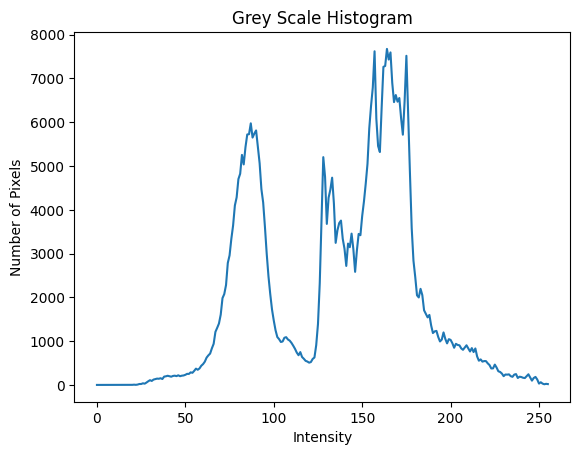

In [15]:
#Part A1
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
img=np.frombuffer(img_data,np.uint8)
img=cv2.imdecode(img,cv2.IMREAD_COLOR)
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_grey=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
grey_float=img_grey.astype(np.float32)
#Loop for counting the number of pixels vs intensity
arr=[]
for i in range(256):
  arr.append(np.count_nonzero(grey_float==i))
plt.plot(arr)
plt.title('Grey Scale Histogram')
plt.xlabel('Intensity')
plt.ylabel('Number of Pixels')
plt.show()


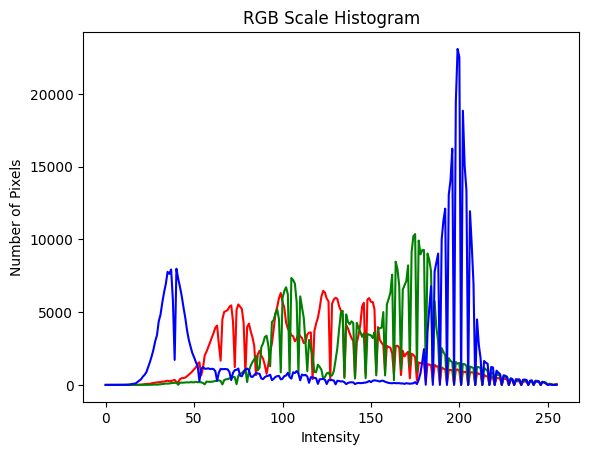

In [16]:
import numpy as np
import matplotlib.pyplot as plt

#Part A2
arr1=[]
arr2=[]
for j in range(256):
  arr2.append(j)
  arr1.append([np.count_nonzero(img_rgb[:,:,0]==j),np.count_nonzero(img_rgb[:,:,1]==j),np.count_nonzero(img_rgb[:,:,2]==j)])
arr1_np = np.array(arr1)
plt.plot(arr1_np[:, 0], color='r', label='Red')
plt.plot(arr1_np[:, 1], color='g', label='Green')
plt.plot(arr1_np[:, 2], color='b', label='Blue')
plt.title('RGB Scale Histogram')
plt.xlabel('Intensity')
plt.ylabel('Number of Pixels')
plt.show()


## Part B

#### RGB to HSV ( only Numpy ofc )
Write a function <code>rgb_to_hsv</code> that takes a 0-255 ( not normalised ) RGB image and returns an HSV image ( also not normalised ).

**Note :** Research for the formulas, maybe ask some AI to explain you the algo and formulas ( NOT to give you the code, seriously youre not gonna learn anything if you do that )

The output should be in a format that is compatible with OpenCV cvtColor. Read the documentation to find out any Hue scaling etc.
Finally, use your function and test it by using cv2.cvtColor to convert your function output into RGB again and display it. Your image will appear the same after reconversion into RGB.

In [17]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

In [18]:
#rgb to hsv
#R'=R/255
#G'=G/255
#B'=B/255
#Cmax = max(R', G', B')
#Cmin = min(R', G', B')
#Δ =Cmax-Cmin
#H calculation(in degrees)
#If Δ==0
#H=0
#If Cmax==R'
#H=60*(((B'-G')/Δ)mod6)
#If Cmax==G'
#H=60*(((B'-R')/Δ)+2)
#If Cmax==B'
#H=60*(((R'-G')/Δ)+4)
#S calculation
#If Cmax==0
#S=0
#Cmax!=0
#S=Δ/Cmax
#V calculation
#V=Cmax

(600, 800, 3)
(600, 800, 3)


Text(0.5, 1.0, 'Original RGB Image')

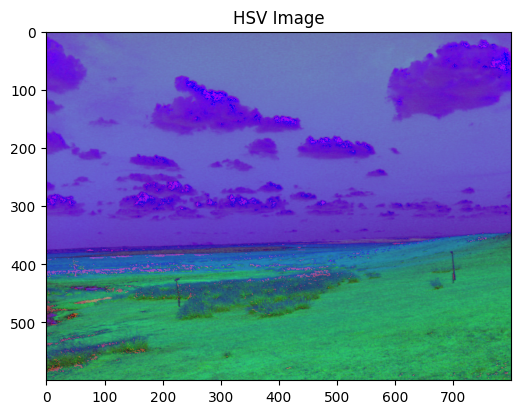

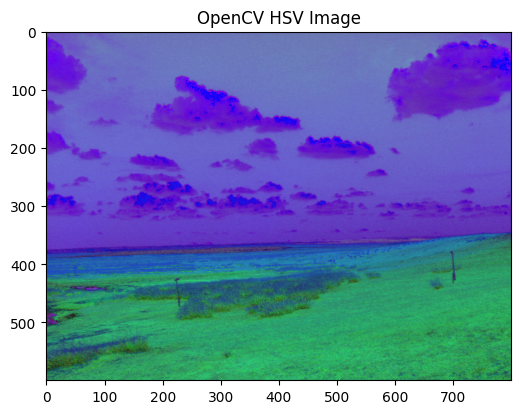

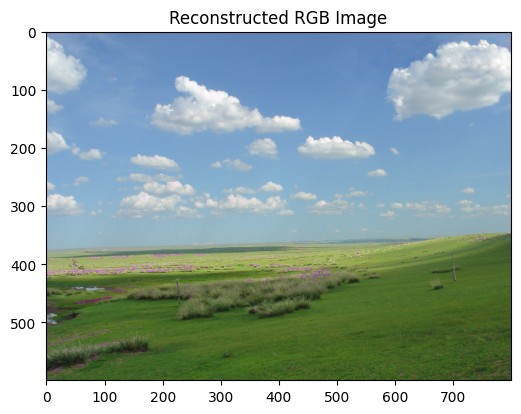

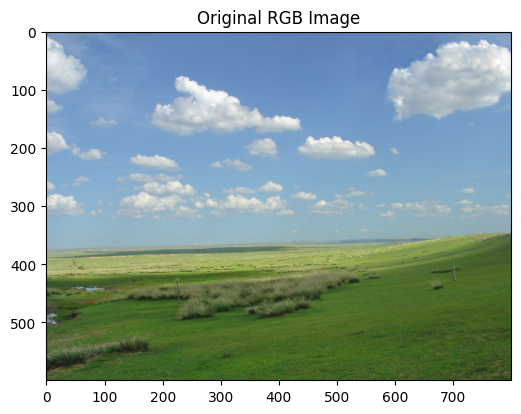

In [57]:
img_norm=img_rgb/255
arr_3=[]
arr_4=[]
for i in range(np.shape(img_norm)[0]):
  temp_1=[]
  temp_2=[]
  for j in range(np.shape(img_norm)[1]):
    temp_1.append(np.max(img_norm[i][j]))
    temp_2.append(np.min(img_norm[i][j]))
  temp_1=np.array(temp_1)
  temp_2=np.array(temp_2)
  arr_3.append(temp_1)
  arr_4.append(temp_2)
arr_3_np=np.array(arr_3)
arr_4_np=np.array(arr_4)
delta=arr_3_np-arr_4_np
#Hue(in degrees)
hue_img=[]
for i in range(np.shape(img_norm)[0]):
  temp=[]
  for j in range(np.shape(img_norm)[1]):
    if ((delta[i][j])==0):
      temp.append(0)
    elif (arr_3_np[i][j]==img_norm[i][j][0]):
      temp.append(60*(((img_norm[i][j][2]-img_norm[i][j][1])/delta[i][j])%6))
    elif (arr_3_np[i][j]==img_norm[i][j][1]):
      temp.append(60*(((img_norm[i][j][2]-img_norm[i][j][0])/delta[i][j])+2))
    elif (arr_3_np[i][j]==img_norm[i][j][2]):
      temp.append(60*(((img_norm[i][j][0]-img_norm[i][j][1])/delta[i][j])+4))
  temp=np.array(temp)
  hue_img.append(temp)
hue_img=np.array(hue_img)
hue_img=(hue_img/2).astype(np.uint8)

#Saturation
sat_img=[]
for i in range(np.shape(img_norm)[0]):
  temp=[]
  for j in range(np.shape(img_norm)[1]):
    if (arr_3_np[i][j]==0):
      temp.append(0)
    else:
      temp.append(delta[i][j]/arr_3_np[i][j])
  temp=np.array(temp)
  sat_img.append(temp)
sat_img=np.array(sat_img)
sat_img=(sat_img*255).astype(np.uint8)
#Value
val_img=(arr_3_np*255).astype(np.uint8)
hsv_calc=np.array([hue_img,sat_img,val_img])
hsv_calc = np.transpose(hsv_calc, (1, 2, 0))
print(np.shape(hsv_calc))
hsv=cv2.cvtColor(img_rgb,cv2.COLOR_RGB2HSV)
print(np.shape(hsv))
plt.figure(figsize=(6,6))
plt.imshow(hsv_calc)
plt.title('HSV Image')
plt.figure(figsize=(6,6))
plt.imshow(hsv)
plt.title('OpenCV HSV Image')
recon_img=cv2.cvtColor(hsv_calc,cv2.COLOR_HSV2RGB)
plt.figure(figsize=(6,6))
plt.imshow(recon_img)
plt.title('Reconstructed RGB Image')
plt.figure(figsize=(6,6))
plt.imshow(img_rgb)
plt.title('Original RGB Image')

## Part C

####Create 2 filters.
1. Give them any name of your choice ( I look forward to receiveing some hilarious names in submissions )
2. Clearly state what all you are doing in the filter. Like any saturation boost, etc. ( Be creative, think about stuff like adding a blue layer or making the image look foggy )
3. Suggest what kind of images is your filter good for ( maybe beach images, or rainforest etc. )
4. Comment your code showing where you implemented what part of your filter
5. The filters should be in form of functions that take 0-255 RGB image and return 0-255 RGB image.
6. Give them an appropriate input according to your filter design, and display the original and filtered image ( Be sure to choose the image such that the effect of filter makes clear difference, preferably improvement in the image ). You can embed in 2 new images ( or even more if your filter is worthy bragging about, I dont mind, but display the original and outputs side by side )

**IMPORTANT FILTER DESIGN NOTES :**

The filter must include at least two color modifications, such as:
1. contrast adjustment
2. brightness shift
3. saturation change
4. gamma correction
5. hue rotation
6. vibrance boost
7. custom color tint
8. split-toning (different color for shadows & highlights)
9. channel mixing

Implement using NumPy + cv2 only.

Write a small note (2–3 lines) explaining:
1. why you chose those modifications
2. why they suit the image

In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

## Part D

#### White Balance Function
Write a function <code>white_patch_balance(img_rgb)</code> that takes a 0-255 RGB image and then returns a White Patch Method Balanced 0-255 RBG image. Use Numpy only to keep track of the brightest pixel and then scale the entire image with the factor you find. Display the original and output image.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

## Bonus - Part E

#### Create a White Balance Slider

Here's a link to a video of how my phone camera's White Balance feature works.
https://photos.app.goo.gl/zArkv5UcWiRV96JA9

Now, you will need to create a function <code>white_balance(img_rgb, value)</code>

It takes the img_rgb ( 0-255 RGB image ) and value ( 0-1 decimal number ).
1. value = 0 outputs the coldest version of the image
2. value = 0.5 is the original image itself
3. value = 1 is the warmest version of the image

The output should be the processed 0-255 RGB image. Display the original and processed image.

Try to make it look as good as possible. I dont expect you guys to copy my phone and create industry level outputs, but work hard and experiment. You can include even failed tries or what you felt was not satisfactory ( that will show how much effort you put in )

In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.